# Birmingham Restaurant Industry - Spatial Statistics Analysis

### Table of contents

* [Problem Statement](#Problem-Statement)
* [Importing Libraries](#Importing-Libraries)
* [Loading Data](#Loading-Data)
* [Data Analysis](#Data-Analysis)
  * Centricity
      * Average Distance to the City Center and Havershine Formula
  * Dispersion
      * Standard Deviational Ellipses
      * Kernel Density Estimation
      * Univariate Local Moran's I
  * Co-location
      * Bivariate Ripley K Function
      * Correlation Matrix
  * Population
      * Receiver Operating Curve
      * Bivariate Moran's I
  * Location and Quality
* Summary


## Problem Statement

I have data of all UK restaurants (reviewed on TropAdvisor from January 25 to February 14, 2018), demographics and coordinates of all UK output areas and Birmingham multipolygon. <br>
Select all the data that falls within Birmingham coordinates.<br>
Perform Spatial Analysis to answer these questions:<br>
<pre>        1) How restaurants of different cuisines locate in relation to the city center? <br>
<pre>        2) How restaurants of different cuisines are spread through the city? <br>
<pre>        3) Are there any relationships between neighborhood demographics and restaurants' cuisine choice? <br>
<pre>        4) Does the quality of the restaurant affect its location? <br>

## Importing Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

## Loading Data

### Loading Maps

In [5]:
b1 = [[-1.827922448602125,52.60789076712128],[-1.828096942828081,52.606673979221604],[-1.828401708251276,52.60425613282858],[-1.828507872196621,52.60353709280711],[-1.828689959310064,52.60227876710458],[-1.828736004350795,52.601829337607455],[-1.828811682945494,52.6013529809852],[-1.828902963490256,52.60066088872591],[-1.829017055776854,52.599814374878186],[-1.833332165951559,52.599653576645],[-1.833429322412018,52.59968971971453],[-1.833663374708634,52.599112882514724],[-1.834676147356166,52.59790777911647],[-1.834669322221991,52.59747552678012],[-1.834272646976376,52.59708707357594],[-1.834007012130877,52.596809063580636],[-1.833862860467169,52.596658194588535],[-1.833600913412266,52.596343404677455],[-1.833544448304348,52.596275548128204],[-1.834049243898653,52.59640417858378],[-1.834125322070191,52.59630449578093],[-1.834670205478017,52.59615643441919],[-1.834686604214725,52.59616887510341],[-1.834695430873069,52.5961671467705],[-1.83517870779601,52.596726706889584],[-1.835195620336971,52.596746288707386],[-1.835244474419628,52.59680285320359],[-1.83528121855512,52.59684539640062],[-1.835486611609772,52.59708320339227],[-1.835602792869038,52.59718272641225],[-1.835633774638222,52.59720926585966],[-1.835707423653839,52.597254317271954],[-1.835898945349752,52.59736246084464],[-1.835972661971822,52.597389532339065],[-1.836002155345555,52.59739856294469],[-1.836075872093222,52.59742563436398],[-1.83615848721067,52.59744193009768],[-1.836186025596914,52.597447362003],[-1.836326683723338,52.59747092950412],[-1.836389133100877,52.597481162198456],[-1.836524682680597,52.597129010218026],[-1.836587028435973,52.59713182640428],[-1.836705855632,52.59716150272109],[-1.836732780309188,52.597170564060384],[-1.836767867886945,52.59717619811516],[-1.836921723158935,52.597219082175044],[-1.836933741876533,52.59722029968397],[-1.837043903267433,52.59723838039469],[-1.837091625014148,52.5972840965198],[-1.837174126582445,52.597329214899844],[-1.837191752241908,52.59734831756068],[-1.837351716870432,52.59744532033775],[-1.837360604491061,52.59746098076314],[-1.837532368920378,52.59757277313911],[-1.837599668051428,52.597580297295586],[-1.837901278403729,52.59765739913447],[-1.837915773278286,52.59765788154018],[-1.837937907691716,52.59762761182071],[-1.838093388447782,52.597513715242115],[-1.838178790422322,52.59747428604437],[-1.838242647095028,52.597373647751354],[-1.83835406720919,52.597324354502575],[-1.838374785971133,52.59732092825601],[-1.838447763055608,52.59729551709718],[-1.838477653516596,52.597289646588244],[-1.838516690880593,52.59717065848184],[-1.838333608403175,52.59702081270498],[-1.838333184439366,52.59702046571061],[-1.838386744001465,52.59698258753827],[-1.838191389223334,52.59682582527581],[-1.838044510430412,52.596792876420956],[-1.83804854943686,52.59676026813059],[-1.838004796359041,52.59667447498849],[-1.837999110502678,52.59664945776049],[-1.837929514347169,52.59657673601058],[-1.837876444237632,52.59655023431134],[-1.837641333316657,52.59647022160648],[-1.837597426074552,52.59646181700473],[-1.837551434531663,52.59645634498419],[-1.83754353511886,52.59644829166793],[-1.837487746090276,52.59638043464449],[-1.837478870801392,52.59636726264473],[-1.837475508468041,52.596360846657916],[-1.837458561516867,52.59634091802661],[-1.837433488005019,52.596317558094235],[-1.83741733098906,52.596299530192375],[-1.837365895349052,52.596231983473515],[-1.8373598069554,52.59620860328438],[-1.838100040874358,52.595967406317264],[-1.838112414008253,52.595963374617675],[-1.838132406832463,52.59598537389988],[-1.838157014916699,52.59597709269196],[-1.838384589513218,52.595900508022496],[-1.838479460456899,52.59586602029978],[-1.838606330678565,52.595819899927385],[-1.838695073094993,52.595775070739315],[-1.838782297080557,52.59571738579068],[-1.838857860344471,52.59566741240177],[-1.8389615296075,52.59557765362576],[-1.839004535257239,52.59553595909134],[-1.839035607024305,52.59550583454349],[-1.839051762451752,52.595514554085014],[-1.839286082194159,52.59564102224314],[-1.839369570075216,52.59570060315647],[-1.83933055431509,52.59564362583398],[-1.83983524151297,52.59537642236545],[-1.840248567381002,52.59528166241731],[-1.840129689286756,52.59505781457578],[-1.84002706991675,52.594859898218104],[-1.839880392949768,52.59459899296406],[-1.839875076277035,52.59459150093343],[-1.839733521210655,52.59439202678598],[-1.839337135393109,52.59378916675614],[-1.839219563286594,52.59364516897951],[-1.839072632124849,52.593456181703786],[-1.838543505730869,52.59282616928704],[-1.838087673624126,52.5923400931034],[-1.838071407832989,52.592325161949184],[-1.838028825279009,52.592286073352575],[-1.838102700079523,52.59226819414012],[-1.838501728569332,52.592142877942734],[-1.838847644082758,52.592023932464876],[-1.839025145324042,52.591962896633596],[-1.839048601439752,52.591954830952055],[-1.839055315394519,52.59195207821862],[-1.839199666853422,52.59189289360003],[-1.839264089260389,52.59186648006767],[-1.839551250673725,52.591748741565794],[-1.839876495646571,52.591614330838674],[-1.839896177477292,52.59160438700891],[-1.839979051176953,52.59159095216988],[-1.839982809275289,52.59159499334893],[-1.839993693393586,52.59160669736151],[-1.840030652284096,52.59165499319194],[-1.84012626181553,52.59176518514437],[-1.840136731081201,52.591793610453784],[-1.840185605025788,52.59185747558411],[-1.840240943788728,52.59191845588106],[-1.840259119032718,52.591938483987114],[-1.84019881964663,52.59195840944784],[-1.84009654521263,52.59199220512258],[-1.839811484220576,52.59212329984947],[-1.839779397503207,52.592148483567954],[-1.839748515735223,52.592153235046865],[-1.839743379829379,52.59215461966256],[-1.839684996148021,52.59218146905291],[-1.839448972069567,52.592290010782165],[-1.839362543620937,52.59232975687325],[-1.839249681478181,52.59238165889024],[-1.8392241630996,52.59239853682703],[-1.839194508564028,52.59242250496723],[-1.839186509677027,52.592430583006674],[-1.839150058894328,52.59246739445986],[-1.839135231358562,52.59248535425805],[-1.839135225497078,52.59248695705699],[-1.839135066976952,52.59253030367796],[-1.839164393364245,52.5925842829296],[-1.839438638196953,52.59292513110067],[-1.839529151513676,52.59303762524043],[-1.839627184142254,52.59315946400531],[-1.839664034517385,52.59320526288476],[-1.839770998458554,52.593336267512946],[-1.839834470854455,52.59341400521998],[-1.839951299195991,52.593557089739846],[-1.840027073964104,52.59364989365944],[-1.84003145086061,52.59365525417948],[-1.840086443757726,52.593722605559016],[-1.840094548736957,52.59373253194874],[-1.840127513965034,52.59378676187024],[-1.840243122600588,52.593898244110065],[-1.840265291521005,52.59392085784643],[-1.840266512733079,52.59392171635207],[-1.840267327994635,52.593922935179556],[-1.840296093235252,52.593952277529525],[-1.840307877553647,52.59396068748241],[-1.840384438642508,52.59401532564859],[-1.840605319559792,52.59416845071786],[-1.840855759399988,52.594312625014176],[-1.841062108402986,52.594402800294546],[-1.841268523120495,52.594474995444685],[-1.841270416574631,52.59447557513134],[-1.841358205312511,52.594502452112756],[-1.841380341452052,52.594502841141946],[-1.841464900002634,52.594523815130906],[-1.841494760058753,52.59453122163878],[-1.841491921775718,52.5945351732779],[-1.841652023750491,52.59456540606987],[-1.841812417065126,52.59459436595823],[-1.841767601152252,52.594574439869554],[-1.842004740741847,52.59432423513005],[-1.84214745128371,52.59429926196893],[-1.842167595628937,52.59429362855882],[-1.842234474518293,52.59429141456611],[-1.842292309970887,52.594277742090036],[-1.84250680467107,52.59419758448686],[-1.842552881539079,52.594183798803435],[-1.842579194804822,52.59417022366826],[-1.84257549143681,52.594130647755335],[-1.842564267707999,52.59408256612912],[-1.842570806733604,52.594030472437375],[-1.842563368266694,52.59398446523824],[-1.842538264447288,52.593904107816215],[-1.842510105863399,52.593859715556334],[-1.842504025522878,52.59385243547039],[-1.842436787881046,52.593739987550634],[-1.842435636325977,52.5937318503978],[-1.842419531249758,52.59369976814578],[-1.842360131207585,52.59361091512923],[-1.843141544383578,52.59344878226854],[-1.843171495874485,52.59344256760642],[-1.843147366281277,52.59338507085427],[-1.843939439656402,52.59319718720812],[-1.843936317519813,52.59318732761662],[-1.843900566628135,52.59313045401639],[-1.843841731575748,52.59306281207474],[-1.843811878210295,52.592961828938385],[-1.843811162580605,52.59295217694748],[-1.843645451867722,52.59280223275225],[-1.843582935754994,52.59271691499886],[-1.843577124190973,52.5927015481589],[-1.843554054207943,52.59258216396222],[-1.843556419743764,52.59250088626081],[-1.843562079424411,52.59248399795227],[-1.843571396251783,52.592478098302955],[-1.843757768301094,52.592392017300405],[-1.84382667027403,52.5923676075482],[-1.843834262390346,52.59236431517508],[-1.843992098079875,52.59230968211673],[-1.844056468322967,52.592281083178285],[-1.844099292891976,52.592272881009],[-1.844260352177583,52.592230281945135],[-1.84426783046958,52.59222774869371],[-1.844351120960948,52.59218996643846],[-1.84439378757003,52.59216693869845],[-1.844461667925129,52.59214504083957],[-1.844618526986739,52.5921045821391],[-1.844493729847663,52.591926185099084],[-1.845125361160032,52.59178058864738],[-1.845113964456588,52.591766912542816],[-1.845165460895386,52.5917510819194],[-1.845224725341294,52.591683879331825],[-1.845259292158307,52.59165745605169],[-1.845261348791504,52.59162844445],[-1.845516160452622,52.591189772582446],[-1.845516363974814,52.591189422225106],[-1.845504707142272,52.59117158404533],[-1.845502207399141,52.59117227787928],[-1.84547265310283,52.591181229418765],[-1.844852009974747,52.59136921008215],[-1.844571225231535,52.59145874282951],[-1.844250060828365,52.59156995297245],[-1.84428141493081,52.59155384014464],[-1.844400239410614,52.59149277623861],[-1.844443248601887,52.59145703167152],[-1.844538306107368,52.59132887443459],[-1.844551026828067,52.591301385393244],[-1.844189705149807,52.59109036179004],[-1.844200444995868,52.59105270450642],[-1.844232721585962,52.591004505222294],[-1.844351681891527,52.590894466142565],[-1.844431676853632,52.59083823336637],[-1.84461160122747,52.59070926943873],[-1.844587816246985,52.59067938961264],[-1.844529231714991,52.59051046247565],[-1.844441295142274,52.59041850902539],[-1.844435925872121,52.59040964665647],[-1.844356809581027,52.59031477301439],[-1.84435014086538,52.59030973918112],[-1.844330631406426,52.59028606193403],[-1.844261963823181,52.59022559256358],[-1.844216410936733,52.59016042377987],[-1.844215763347956,52.5901585795162],[-1.844189606051671,52.5901209762],[-1.844064329991561,52.59008212804473],[-1.843999019593175,52.59005135612992],[-1.844349612064012,52.589913220058044],[-1.844355449503854,52.589910920056695],[-1.844588886340134,52.5898103886675],[-1.84498291923273,52.58964069325499],[-1.845019486981073,52.58963836875171],[-1.845106221858373,52.589727947995094],[-1.845310020227831,52.589825445484465],[-1.845417573255951,52.58985848600927],[-1.845486213022299,52.58994461692197],[-1.845525793559874,52.590029478527235],[-1.845552894990495,52.59004544248087],[-1.845594295560997,52.59006482575812],[-1.845634411898297,52.59015344723259],[-1.845640226125875,52.5901604311226],[-1.845751236927945,52.59026529552857],[-1.845796968020256,52.59029517899953],[-1.846006387677124,52.59039034719006],[-1.846099018856742,52.59041565773101],[-1.846122623527049,52.59042051621604],[-1.846243412357326,52.59039342746051],[-1.846250250759291,52.59039115807933],[-1.846424915177852,52.590319774470295],[-1.846760670688048,52.59037462667895],[-1.847041906860936,52.590284857275925],[-1.847142440419759,52.59024037134633],[-1.847200766195477,52.59020499905337],[-1.847251529585529,52.590201112283495],[-1.847320135008529,52.59019017115093],[-1.847514399699559,52.59013578662399],[-1.848017422476031,52.590447727817924],[-1.848024438425994,52.590452078588854],[-1.848344211341457,52.59035950070516],[-1.848342339036521,52.59035531495765],[-1.8484278690586,52.59033098827435],[-1.848436758193487,52.590327672366314],[-1.848442630148372,52.59033100709254],[-1.848643728219124,52.59027416414003],[-1.848664262856924,52.59026835974265],[-1.848797297837338,52.59021458928539],[-1.848957410247498,52.5901249536488],[-1.84871377799784,52.589960969587416],[-1.848654657397991,52.589885276413376],[-1.848630571605708,52.58978371743107],[-1.848625933772497,52.58972166255338],[-1.848631298254544,52.58964523845307],[-1.848647549883937,52.58954660875026],[-1.848643504050399,52.58952925674669],[-1.848635291687028,52.589525798233524],[-1.848627977420303,52.58952227355806],[-1.848599022340026,52.58950694168794],[-1.848457427178041,52.58938506362177],[-1.848243625519774,52.589127707434336],[-1.848233775779173,52.589106238442945],[-1.848131531776147,52.58907318330709],[-1.847847355748265,52.58894095725434],[-1.84780100288841,52.58891597238877],[-1.847678764848311,52.58883077911453],[-1.847623734628346,52.5887869429227],[-1.847593931370041,52.58875740450877],[-1.848207393918346,52.58832819171063],[-1.848226564365017,52.588255796589586],[-1.848438382744933,52.5882164951612],[-1.849099637718643,52.588274672799216],[-1.84919739361999,52.58794536585664],[-1.849343661472524,52.58797526747587],[-1.849351156126559,52.5879678033937],[-1.849631447861071,52.58801310803032],[-1.850442897531317,52.5881220110651],[-1.850664241528345,52.58814026921987],[-1.85086555952111,52.588160059943355],[-1.851609753215272,52.5882332152116],[-1.851868264063081,52.588258625811086],[-1.852331617416308,52.588304170148454],[-1.85275951868493,52.588349650163224],[-1.852789457458866,52.58835222048224],[-1.852781026566167,52.588364920227306],[-1.852583862922196,52.588661912145184],[-1.852605369781468,52.58881717802724],[-1.852547776511161,52.58882664397854],[-1.85223972606068,52.58882084577673],[-1.852166398289814,52.58888709182161],[-1.851885989484361,52.58898731911037],[-1.851791087457508,52.58915376484063],[-1.851634254164369,52.58916256581868],[-1.851594367255563,52.58916480410874],[-1.851588694573973,52.589186742260665],[-1.851290233231569,52.58951407766849],[-1.85130947846065,52.58957753386802],[-1.851233172273628,52.58964960133545],[-1.851105890416552,52.58973417177351],[-1.851025040448655,52.5898528989211],[-1.850996662991933,52.58994133390284],[-1.851068248705919,52.58996328100985],[-1.851115365709919,52.589969355101786],[-1.850429223638612,52.590324460103986],[-1.850223987125062,52.59043067602951],[-1.850696058231412,52.59072619082118],[-1.851175304291808,52.59102619113062],[-1.851701060227321,52.5913552983475],[-1.85115241418706,52.591636849880175],[-1.851448878396883,52.59181814340817],[-1.851455329132252,52.59182211357176],[-1.851489521801471,52.5918011342011],[-1.851553284251632,52.5917556643224],[-1.851955825687127,52.5915147708405],[-1.85197958213333,52.59150055412472],[-1.852253880969195,52.59166141860276],[-1.852299511155825,52.59170615586242],[-1.852336704950226,52.591728472738225],[-1.852376698509721,52.59176832345073],[-1.852449032374278,52.59181071250923],[-1.852622492849352,52.59187466006602],[-1.852742564940311,52.59196220071088],[-1.852863032045398,52.592013809152654],[-1.852891833661135,52.592031904584424],[-1.852993853659485,52.59207339252877],[-1.853018501234764,52.59208806251798],[-1.853070867073038,52.5921091230894],[-1.85336541512782,52.592179422887504],[-1.853585841759945,52.59226580349712],[-1.85361861106994,52.59227451470726],[-1.853692117608302,52.59228708689183],[-1.85369630278167,52.59228820016337],[-1.853701821672837,52.59230957507988],[-1.853804401902094,52.59252024363053],[-1.853930609478466,52.592601466039824],[-1.854046313756541,52.59272007512433],[-1.854096982247462,52.592817979270805],[-1.85414919758726,52.59286723974552],[-1.854174535181772,52.592877571553764],[-1.854331900118761,52.59299729020311],[-1.854481247390319,52.59304348941331],[-1.85454022624765,52.593089708029],[-1.854802779464461,52.59319136543637],[-1.854929047262055,52.59321179707997],[-1.855008596499259,52.593238676512186],[-1.855421722049984,52.59332177906515],[-1.855392967335626,52.5934302159504],[-1.855395008179873,52.59345656031138],[-1.855424948982668,52.59353680216393],[-1.855516165297675,52.59367133516604],[-1.855543561094898,52.593696679244985],[-1.855542930927624,52.59373787824682],[-1.855656381848213,52.59401762933844],[-1.855184236180463,52.59422240925643],[-1.855188844933218,52.594229750220514],[-1.855262295540896,52.59429822086318],[-1.855599805653984,52.59448176246178],[-1.855600842695452,52.59449671477834],[-1.855633192761704,52.59451319815736],[-1.855617539928197,52.594529235584496],[-1.85560697978149,52.594539296703815],[-1.855513877866939,52.594627998870244],[-1.855439888045005,52.594681848543544],[-1.85530667045714,52.59478956568724],[-1.855188333110164,52.594861341142575],[-1.855106508980668,52.59490233582974],[-1.854936129611289,52.59490718918203],[-1.85460906937682,52.59466186585115],[-1.854363880670258,52.59459511777365],[-1.854005485061599,52.5945650282471],[-1.85390364483417,52.594564903376316],[-1.853801023918167,52.59455853362284],[-1.853617734768843,52.59452695573848],[-1.853462190289558,52.594579814922255],[-1.853437012435287,52.59459381388905],[-1.853242978353435,52.59468167074303],[-1.853203164459085,52.59469442305697],[-1.853023987326042,52.59475807623948],[-1.853005896845472,52.59476319812354],[-1.852704861715689,52.59486840566908],[-1.852676885809626,52.594882842348326],[-1.852636391994491,52.59490817864716],[-1.852547723954325,52.59495353733966],[-1.852790617643691,52.595657235719585],[-1.852835927663937,52.595690412443645],[-1.852852466693539,52.59569303378779],[-1.853215402575779,52.595722891491235],[-1.853231475815417,52.59572421376425],[-1.853358798094437,52.59567481367801],[-1.853394114331564,52.59573759316733],[-1.853521542306089,52.59574807582959],[-1.853630765878321,52.59570330282387],[-1.854415320686546,52.59590156044875],[-1.854432256465008,52.59603494786201],[-1.854552924549401,52.59620301141759],[-1.854553226544257,52.59620469744608],[-1.854583110847819,52.59625392417509],[-1.854597043131691,52.59630132208285],[-1.854654824262818,52.59637829524995],[-1.854706088221202,52.596501713459496],[-1.854755539742463,52.596542808600724],[-1.854822042610027,52.596690878850296],[-1.854907072174539,52.596802181436175],[-1.854916348950163,52.596830163463245],[-1.855026089345029,52.59695313298967],[-1.855014195138717,52.59700983772054],[-1.855078047828564,52.597258194232694],[-1.855228493191044,52.597413937561186],[-1.855121019172413,52.59752406933834],[-1.855046235675449,52.59772420702394],[-1.855111640877979,52.59800322913712],[-1.855115034869932,52.59801770797963],[-1.855136531434413,52.59803174076012],[-1.855177990156194,52.59802355326649],[-1.855624486700285,52.59793537555822],[-1.856147580424285,52.598216215040516],[-1.856163865450056,52.59822110086412],[-1.856160163829157,52.598283664280395],[-1.85613965642931,52.5983431709053],[-1.856060930817339,52.59841828239346],[-1.856035383841827,52.59851322966102],[-1.855963098104482,52.59861398248013],[-1.855912851943042,52.59864639935],[-1.855792921674836,52.59876405491633],[-1.855752696267339,52.59878189419078],[-1.855655327730453,52.59894014047835],[-1.855501877365899,52.599042875564216],[-1.855287639882392,52.599122733457754],[-1.855232267126011,52.59913526627802],[-1.85519595164148,52.599282821348034],[-1.855124282901332,52.59938266112535],[-1.855936851226431,52.5997010897763],[-1.855947801085627,52.59970538072247],[-1.855947833794608,52.599705393536375],[-1.855916503982277,52.59974008896689],[-1.855845088006504,52.599832099077915],[-1.855838863082266,52.59984011907259],[-1.855813228824279,52.59987314531666],[-1.855765857066247,52.59993417726596],[-1.85563896154048,52.60009766359555],[-1.855595057534412,52.600158353759504],[-1.855546994592073,52.600224792756215],[-1.855461466713008,52.600343020230916],[-1.855445233082254,52.60036546028829],[-1.855320467337056,52.60053792265212],[-1.855282555118282,52.600590333416804],[-1.855186495874465,52.60072311661905],[-1.855157951329678,52.60076257371024],[-1.85514362758378,52.60078237340142],[-1.855085965682859,52.60086207909786],[-1.855084619545841,52.600863939863004],[-1.854887123515282,52.60114968962324],[-1.854834790483698,52.60121170185463],[-1.854816647346586,52.601233200576615],[-1.854750940001868,52.60131106037584],[-1.854720757071296,52.60134187092338],[-1.854698162556733,52.60136493523966],[-1.854690391527599,52.60137286784176],[-1.854645384964825,52.60141881007978],[-1.854611093538178,52.60145032138394],[-1.854582110637123,52.60147695447532],[-1.854543104646911,52.6015127979703],[-1.854437411527436,52.60159805822025],[-1.854420050563212,52.60161206286685],[-1.854383494777477,52.60164155147641],[-1.854334365836178,52.60167397359181],[-1.854302764558899,52.601694828489116],[-1.854241633253398,52.60173517131455],[-1.854109442133259,52.60182240876923],[-1.854093374842634,52.601833012087326],[-1.854052506306175,52.60185998251816],[-1.853953909403536,52.60192504950796],[-1.853915891366657,52.60194196089623],[-1.853825770974027,52.601982048632415],[-1.853809437552356,52.601989314123294],[-1.853806770679024,52.60199050041735],[-1.853776928640741,52.602003774835445],[-1.853659970642934,52.602059559063214],[-1.853478654231367,52.60214603912111],[-1.85346207508975,52.602153946630686],[-1.853306928924034,52.60222794407955],[-1.853246258629442,52.60225950688071],[-1.853138109889163,52.602315769437666],[-1.853129360852282,52.60232032096339],[-1.852969131931429,52.60240367687357],[-1.852848128994078,52.60246662590282],[-1.852813287676524,52.60248475123829],[-1.852656128935888,52.602566508928824],[-1.852502816670127,52.60264774628803],[-1.852250318317296,52.602781539464374],[-1.852200657166769,52.60280785363516],[-1.852032108051173,52.60289716306814],[-1.851871528482598,52.60298224911284],[-1.851827353742385,52.60300565581259],[-1.851505928169302,52.60317596712156],[-1.851287093197889,52.603291918047944],[-1.851063879053849,52.60341018815831],[-1.850847588190238,52.603524788959554],[-1.850770460267162,52.60356565462861],[-1.850613171639648,52.603648992466596],[-1.850559873516776,52.60367723183584],[-1.850352951835823,52.60378686623956],[-1.850349918323223,52.60378847349181],[-1.850064218863356,52.603939845635],[-1.850005360709029,52.60397103023562],[-1.84995014953715,52.60400028249937],[-1.84977425334681,52.6040934762814],[-1.849647646551128,52.60416055503624],[-1.849203557747816,52.6043958392556],[-1.849049326483555,52.60446704904408],[-1.849034867277705,52.60447372494877],[-1.848836623213215,52.60455775342028],[-1.848702172192055,52.604608150661214],[-1.84855159089157,52.604652627622826],[-1.848261560871839,52.60472445825612],[-1.848050632830513,52.6047604686018],[-1.847950007380444,52.604777647556645],[-1.84767518834848,52.604824564670956],[-1.847528844723306,52.60484404270838],[-1.847474377941406,52.60484846054834],[-1.847474195817067,52.60484847531555],[-1.847213891781434,52.60485899246031],[-1.847197534933015,52.604859653318385],[-1.846719819948307,52.60487896351859],[-1.846286521720022,52.60490722575368],[-1.845946424856597,52.604929407721244],[-1.845908885252415,52.6049318560867],[-1.845725162964891,52.604951564474476],[-1.845442229851896,52.605015929762786],[-1.845249960865036,52.60505966910386],[-1.844779613762014,52.60515879127515],[-1.844706031466647,52.60517429798615],[-1.844470929009407,52.60522384304804],[-1.844418775739362,52.605236743826204],[-1.844366548268943,52.60524966292854],[-1.844177193922137,52.6052965017598],[-1.844061250512365,52.60532784191152],[-1.843920862286495,52.605365789429335],[-1.843773812547162,52.605405537322284],[-1.843572121092943,52.60546005460117],[-1.843532422719605,52.605470320447004],[-1.843380733067275,52.60550954664829],[-1.843024707530239,52.605601612076384],[-1.842945668306736,52.60562205080402],[-1.842688344607202,52.605688591569276],[-1.842617923201949,52.60570680155182],[-1.842493131520135,52.60573907078548],[-1.842417511982134,52.60575862476836],[-1.842320443615348,52.60578372496317],[-1.841929304616655,52.60587849036412],[-1.841749595117486,52.60592202992853],[-1.841717299952644,52.605929854269846],[-1.841578594862073,52.60596345910074],[-1.841577479140889,52.60596372940465],[-1.841559311472884,52.605968130970034],[-1.841423093821608,52.60600751916716],[-1.841110167056999,52.606098003060936],[-1.841105203520395,52.606099438277596],[-1.84089323534539,52.60616072893261],[-1.840846645476973,52.60617420034173],[-1.840592842222561,52.60624758676371],[-1.840335871007646,52.606321888408644],[-1.840143420853452,52.606377533662],[-1.839940627584198,52.606436169035916],[-1.839906500714538,52.60644603638928],[-1.83968819525795,52.6065164722214],[-1.839661755005062,52.60652500307164],[-1.839551807508544,52.60656047714667],[-1.839434798618985,52.60659822937953],[-1.839148915902328,52.606699057864006],[-1.838657159509244,52.60687249364828],[-1.838453616452549,52.60680760290298],[-1.838382817487568,52.6067850316329],[-1.838281047846323,52.606752586560404],[-1.838203512194369,52.60675084313708],[-1.838181924523299,52.60675035771422],[-1.83816909809261,52.60675006278529],[-1.83816689998741,52.606750013777145],[-1.838135024703122,52.606749303119614],[-1.838134777198386,52.60674929756111],[-1.838061474311992,52.60674714116639],[-1.838059297672594,52.60674707713289],[-1.838034651287022,52.6067463520819],[-1.83803460542255,52.606746389895335],[-1.837876612792533,52.60687666694052],[-1.837858474864666,52.60689162298619],[-1.837626091641826,52.60708323881966],[-1.837466913897048,52.60721449049757],[-1.837071799002568,52.60730166640748],[-1.836863107279716,52.607347710306044],[-1.836833063842864,52.60735433878198],[-1.836658766353504,52.60738112294715],[-1.836305768175208,52.607435367029886],[-1.836229559667178,52.60744127222332],[-1.835978031978165,52.60746076205992],[-1.835934705803814,52.6074623749115],[-1.835814096040185,52.60746686463096],[-1.835475885735894,52.607479453887194],[-1.835381216045751,52.60747874672191],[-1.835321792877557,52.607478302797894],[-1.835245158462108,52.60747773026024],[-1.835130222730016,52.60748583066664],[-1.835053598879285,52.60749123086892],[-1.834946946676711,52.60750541075995],[-1.834792200763873,52.607546493532055],[-1.83454238528875,52.60758941037855],[-1.83398011147491,52.60772402241124],[-1.833956714385761,52.607729623757635],[-1.833903605334612,52.607740225154416],[-1.833761411786728,52.6077563208153],[-1.833701956908701,52.6077609574578],[-1.833602157634264,52.60776874031022],[-1.833429904074549,52.60776603680164],[-1.833032275833127,52.60775979509883],[-1.832769406629553,52.60776391781637],[-1.832769222175125,52.607763920709175],[-1.832752932987278,52.60776555245757],[-1.832481641273835,52.60779272838271],[-1.832464997293104,52.60779439562693],[-1.831943729468276,52.60786445616977],[-1.831675807922038,52.60791001436164],[-1.830960614827668,52.60803162453655],[-1.830563420175616,52.608116744734446],[-1.830537924554654,52.608122523782825],[-1.830400839273163,52.60815359652071],[-1.830235000688999,52.60819746679124],[-1.829679631018223,52.60836425868585],[-1.829618676362645,52.60838256470769],[-1.829442571550988,52.60844600954561],[-1.829395003849326,52.608463146566166],[-1.829136761865908,52.608535545032126],[-1.828431953648222,52.6086873595135],[-1.828352000365632,52.60869795568443],[-1.828230644187095,52.608714038815194],[-1.828128625800254,52.60872203859531],[-1.828059407428623,52.60872109582342],[-1.828003369434348,52.60871666778283],[-1.827986977380766,52.60871537249514],[-1.827951091590032,52.60870789823674],[-1.827862018042366,52.60868934589319],[-1.82785576083639,52.608686767480826],[-1.827813485190905,52.60866934686171],[-1.827823683930814,52.60857944500178],[-1.827922448602125,52.60789076712128]]
b2 = [[-1.819486027223638,52.59995473505417],[-1.821321443607144,52.59881578736231],[-1.821469338473974,52.598753080118655],[-1.821543304014861,52.59871723147014],[-1.822415535927568,52.59843086026314],[-1.823006884119319,52.59823396395739],[-1.823712933947599,52.59797239106377],[-1.820177398745048,52.59693165908795],[-1.821112517906279,52.595919378226455],[-1.822027486042532,52.59532605478561],[-1.821921274452246,52.59524218233925],[-1.82186643552988,52.595199963955444],[-1.821343228490867,52.59478592811253],[-1.821039977247491,52.59443507146962],[-1.82099445013632,52.59436959786418],[-1.820742741162955,52.593901850747834],[-1.820781563014923,52.593158159917294],[-1.820720483578377,52.592940402696954],[-1.820715236136673,52.59290530237379],[-1.819809552572667,52.59289830373738],[-1.819628813768686,52.593109287329774],[-1.819617425163129,52.59312258160956],[-1.819572917752402,52.59317645368994],[-1.818994607456129,52.593804869926494],[-1.818957057358366,52.593841821296195],[-1.818876027974339,52.59392155844892],[-1.818619586918436,52.59390079078585],[-1.818533759871685,52.59386862606868],[-1.818534824180901,52.59361087560033],[-1.818465218327519,52.59350694413945],[-1.818383695550523,52.59342981936347],[-1.818439226812468,52.593401743464796],[-1.818534073959496,52.593366092711605],[-1.818558137614343,52.593360514809866],[-1.818561923391405,52.59335907483857],[-1.818662680392828,52.593310827872244],[-1.818787148576649,52.59327530546251],[-1.818888663469935,52.593261264022686],[-1.819037802450345,52.593156050768],[-1.819116010125308,52.59295588504094],[-1.81913251422731,52.592952855343015],[-1.819134677197981,52.59295245828726],[-1.819189572854536,52.59290471863937],[-1.819349490114183,52.592813622354356],[-1.819374922468436,52.59275206916958],[-1.819360051844497,52.59260829574604],[-1.819290043623981,52.592516631202834],[-1.81923491786561,52.59247803100022],[-1.819273574281135,52.59243839531788],[-1.819292636546794,52.592425888595955],[-1.819397956440993,52.59237354493946],[-1.819509190873021,52.592343254135635],[-1.819571179721615,52.592331580790706],[-1.819580739783148,52.59232287748211],[-1.819657210174741,52.59221984193532],[-1.819654544982803,52.59216386266032],[-1.819592997186277,52.59201769917626],[-1.819604649118508,52.59201280570094],[-1.819696314076589,52.59198584312879],[-1.8197845254179,52.59197212229733],[-1.819932111992218,52.59196336019524],[-1.819814582945175,52.59195105505741],[-1.819740511083537,52.59174610979576],[-1.819663046904028,52.591662326969285],[-1.819528652237161,52.591572832229595],[-1.81953922390263,52.591562673210944],[-1.819552025180738,52.59154745798129],[-1.819584947957785,52.59146793597446],[-1.819647418418258,52.591409343429596],[-1.819710208952344,52.59137441084086],[-1.819743774548101,52.591291073705605],[-1.819752261670813,52.59127967990546],[-1.819788431223137,52.591195846125785],[-1.819762132433669,52.59111945283148],[-1.819651059207114,52.59098461444453],[-1.819639296622407,52.590984020081805],[-1.819626167184159,52.59099197633923],[-1.819616236199542,52.590982854840696],[-1.819420284569951,52.5908028743461],[-1.819376298676696,52.59076696986709],[-1.819653156587007,52.59068707044335],[-1.819732019839386,52.59063621683316],[-1.819751331909537,52.59059780934861],[-1.819752764207311,52.5905296919455],[-1.819742083946346,52.59051134622877],[-1.819729626223971,52.590497428720994],[-1.819664047594367,52.59039218557458],[-1.819663273608239,52.59038781286778],[-1.819649286532277,52.590363009875524],[-1.819664175684396,52.590340607350356],[-1.819702703192655,52.59030642877463],[-1.819735808218478,52.59026164646035],[-1.819741571159373,52.59025558072104],[-1.819748093321026,52.59024871586457],[-1.81985785811563,52.59016094141085],[-1.819841140565075,52.59004288570472],[-1.81981109337057,52.58998083279629],[-1.820368668324274,52.58990681020004],[-1.820368711147484,52.58989632637619],[-1.820324905924021,52.589779390613316],[-1.820307222007424,52.58974863158338],[-1.820236965422793,52.589626428196716],[-1.820206329801107,52.589572352190174],[-1.820596187251414,52.589493296116395],[-1.820832877879929,52.58937855780747],[-1.82086137490035,52.589403078331294],[-1.820916710045859,52.58943930105599],[-1.820946487599579,52.589468237199874],[-1.820970581556545,52.589476912206315],[-1.821049327691833,52.58949197155291],[-1.821184094367377,52.58954417330591],[-1.821560627154126,52.58958844103245],[-1.821568349504694,52.58954163254769],[-1.821568718008319,52.58954150690869],[-1.8218558153222,52.589443626786206],[-1.821957604725209,52.58934984863244],[-1.821969361810367,52.58934139448132],[-1.822021460186356,52.589242224215525],[-1.822033833859206,52.58923064015255],[-1.82204901048183,52.58918615894199],[-1.822114944986902,52.589192180481575],[-1.822052729137161,52.58904845240051],[-1.82189040182478,52.588673446979236],[-1.821885842613342,52.58866291425243],[-1.821794172347667,52.5884505932838],[-1.821747779579736,52.588343140400525],[-1.821703571296995,52.588325094121465],[-1.821429352914919,52.588381204623744],[-1.82104568719654,52.58845970890573],[-1.820909044885236,52.588487667785664],[-1.820625179919345,52.58831391862449],[-1.820670527924209,52.58827858911885],[-1.820637312708697,52.58826219161095],[-1.820519073737544,52.58820381993068],[-1.820450169399695,52.58816980341137],[-1.820343599615883,52.58811719212299],[-1.820213875377809,52.58805314966973],[-1.820189244150835,52.588041258254115],[-1.819908211086097,52.587905580893],[-1.819789124292026,52.58784808762984],[-1.819704735015728,52.58780734563267],[-1.819671132557837,52.58779112277795],[-1.819276988980125,52.58760083350227],[-1.818979471471081,52.58745719254258],[-1.81864798973788,52.5872971517196],[-1.818558007152109,52.58725370737753],[-1.818429931948657,52.58719187134199],[-1.818401960713662,52.58717836648088],[-1.818122078498509,52.58704308870963],[-1.818107315691329,52.58703254487338],[-1.818054943619621,52.58699513983016],[-1.818023416423523,52.586972622510324],[-1.81795631778058,52.586924699326495],[-1.817929845071402,52.586900776122704],[-1.817907840344093,52.586854329467634],[-1.818119215102334,52.58673592825752],[-1.81814409674721,52.586728059053904],[-1.818556028277628,52.58669841716576],[-1.818523458994877,52.586636657259085],[-1.81855672940474,52.58658886545707],[-1.818493043555425,52.58656718797241],[-1.818404633304916,52.586531092958644],[-1.818304005435361,52.58647719110456],[-1.818266803804788,52.58645015833637],[-1.818126033563751,52.5863247696678],[-1.818125052607644,52.586323895896236],[-1.81812865307503,52.58632280627979],[-1.818154609188206,52.58631495117944],[-1.818228556330598,52.58627910450774],[-1.81843563734246,52.586171541651225],[-1.818500279196041,52.58611443156527],[-1.818524526690878,52.58609300921372],[-1.818534516345036,52.586086205618855],[-1.818540054542807,52.58608404903826],[-1.818577849173823,52.58604589942364],[-1.81879116541838,52.585857435749226],[-1.818968798065172,52.58573184708611],[-1.819057540027738,52.58568703246981],[-1.819093169027735,52.585674085367],[-1.819172868921676,52.58570124413617],[-1.819123978735264,52.58576173224358],[-1.819555717469526,52.58619775796124],[-1.819592462279182,52.58632676730635],[-1.819600899339293,52.58633137248236],[-1.819769051414271,52.58635174737862],[-1.819948749153699,52.58640661461969],[-1.820050778427993,52.58646682819597],[-1.820113828070643,52.58649205545088],[-1.820250442522948,52.58653795592792],[-1.820349501526284,52.58660206143884],[-1.820377897970039,52.586626886439916],[-1.820383983855805,52.586635569875966],[-1.820441925702137,52.58667708613926],[-1.820524979822747,52.58671603992626],[-1.820579297302884,52.58679819662656],[-1.820671407402297,52.586870958885775],[-1.820776619724166,52.58692086816657],[-1.820805924249515,52.58693500900567],[-1.820806910748784,52.58693524487932],[-1.820968425654707,52.58704487487586],[-1.821015468306883,52.587058529593364],[-1.82109397834585,52.58710349134578],[-1.821129726026596,52.58712917541636],[-1.821140198809207,52.587132927570245],[-1.821220096050658,52.58718366633613],[-1.821232980512033,52.587195357662594],[-1.821241795259598,52.58720520946827],[-1.821271679130926,52.58722326462316],[-1.821353022988743,52.58728743728807],[-1.821354487337908,52.58728901408388],[-1.821401250092479,52.58740415090914],[-1.82148482265854,52.587427589371046],[-1.821645053841254,52.58760180322125],[-1.821619360725465,52.58769148028888],[-1.821921115342681,52.58779301494799],[-1.822022918759284,52.587844450755014],[-1.822089781855041,52.58787823297195],[-1.822159837938767,52.5880107167559],[-1.822165866879355,52.58801757067273],[-1.822385332650577,52.588126626795706],[-1.822496632360896,52.58819186139794],[-1.822514424463478,52.58819024296644],[-1.822583977383091,52.588156035514565],[-1.822592136524956,52.58815295576736],[-1.822637426271947,52.58812957044198],[-1.822643062778177,52.58812693410095],[-1.822650249286021,52.58812391170911],[-1.82274039010216,52.588078552445374],[-1.82277135375158,52.588064849434026],[-1.822949725016269,52.58796525020039],[-1.822993009750855,52.58795036799537],[-1.823085899057191,52.58792569952095],[-1.823554861922599,52.587833475411],[-1.823568509389961,52.5878307915348],[-1.823576786010591,52.587832914201456],[-1.82358023146942,52.58780647838342],[-1.823610148485191,52.58770763320381],[-1.823698637463764,52.5877257445049],[-1.823811739424526,52.587736514283264],[-1.824082258376958,52.587762273129634],[-1.824126538946446,52.58776233870149],[-1.824303625362424,52.587771590741404],[-1.824428835034453,52.58776504838885],[-1.824435204534496,52.58775394076602],[-1.824585749188076,52.587491408214376],[-1.824589231021127,52.58747835733054],[-1.82457200406644,52.587326265616944],[-1.825342263607292,52.58688396340721],[-1.824860743452888,52.58681361654512],[-1.824715733295131,52.58680365851552],[-1.824440780130882,52.58679770668806],[-1.824344114989642,52.58680199749293],[-1.824236217126652,52.58681521988255],[-1.823756652949558,52.58636701520083],[-1.823747756837741,52.58635870071768],[-1.823777506422324,52.58634176187373],[-1.823365699005389,52.58595316750279],[-1.823577084395706,52.58587585827157],[-1.823544929725204,52.585821587162414],[-1.823750915582369,52.585730049706456],[-1.824578954060166,52.58535369688325],[-1.82502248660963,52.5851655617791],[-1.825234848597143,52.58508610065626],[-1.825525052420274,52.58497751174163],[-1.825687653659312,52.58491482071035],[-1.825702448507418,52.58490585244632],[-1.825850325618298,52.58483414960907],[-1.826323578743378,52.58459211339226],[-1.826604569223299,52.58444868442769],[-1.82678125339863,52.58455682183717],[-1.827076895222056,52.58444038301528],[-1.827047447755522,52.58442236020529],[-1.827186046184738,52.584376685994044],[-1.8271202166295,52.58430626625655],[-1.826986344719205,52.584197788781374],[-1.82723680847992,52.584080702590505],[-1.827237012627679,52.58408062868965],[-1.827323245484825,52.58396220346302],[-1.827342122221124,52.58392742017346],[-1.827365803864333,52.583896729673015],[-1.827422704454005,52.583789379448234],[-1.827494246705216,52.58369523267225],[-1.827576938797785,52.58353322434424],[-1.827608106950855,52.58334446467768],[-1.827398336837344,52.58316480281557],[-1.827409823267634,52.58311999562494],[-1.82742329463734,52.58308934743983],[-1.827529428875478,52.58291422022998],[-1.827500600844938,52.58289269233246],[-1.82780670723558,52.58275132910225],[-1.827924951218299,52.58270655059967],[-1.827955537151395,52.58269729046241],[-1.827984055537162,52.58268865626673],[-1.828146469219794,52.582670911414084],[-1.828334578182188,52.582654819757636],[-1.828353158199285,52.582653230325526],[-1.828344740234945,52.582560517273414],[-1.828345028119568,52.58255784578179],[-1.828344061624809,52.58255304322659],[-1.828325464263906,52.582348216005535],[-1.828320916664494,52.58229812954537],[-1.828318788827827,52.58227469382315],[-1.828305520023202,52.582248261284285],[-1.828303117465612,52.58221100765174],[-1.828311805016677,52.58219777505553],[-1.828310707828164,52.58218569051599],[-1.828311459307266,52.58199320046074],[-1.828311655433638,52.58194296267085],[-1.828323562409333,52.58182000736265],[-1.828353176352239,52.58151420103702],[-1.828388007501381,52.581286805070675],[-1.828418225013966,52.58110704928152],[-1.828418379134742,52.58110653980259],[-1.828444231215229,52.581112874331076],[-1.828688813060602,52.58117280382325],[-1.828701237018124,52.58118672987854],[-1.828727425992164,52.58120400358724],[-1.829245926509543,52.581038218774296],[-1.829463844104469,52.581018140009206],[-1.829701948860706,52.58086915514347],[-1.829541188957478,52.58057526502576],[-1.829543488402199,52.580563754638405],[-1.829507089693978,52.580533258753704],[-1.829450297843705,52.5804856768005],[-1.829433757874209,52.58046014676517],[-1.82942618014589,52.58037029343154],[-1.829437257658885,52.580316047723784],[-1.829428072973682,52.58026512571069],[-1.829444332116121,52.580202757640855],[-1.829449180842505,52.58019392479873],[-1.829433931793373,52.580069974492346],[-1.829458382793818,52.58000438182704],[-1.829563929134527,52.579907067593446],[-1.829411756928647,52.57935370751902],[-1.829288801741792,52.57930307812075],[-1.829261227142325,52.579291723664554],[-1.829296237427349,52.579229409641854],[-1.829311029658015,52.57922044092854],[-1.829350545304719,52.57917854446528],[-1.829370303099722,52.57915759624337],[-1.829399887452053,52.579139658780996],[-1.829459056084227,52.579103783833695],[-1.829473848215009,52.57909481508473],[-1.829488605512409,52.579094836266876],[-1.829518189774167,52.57907689877448],[-1.829590924173257,52.57902545124058],[-1.829606977241822,52.57901409633386],[-1.829621908609375,52.57896916786286],[-1.829709964804985,52.57909515377809],[-1.8297537494848,52.57922107620488],[-1.829889213586624,52.57942358193085],[-1.829883393437846,52.57942479560349],[-1.829885765723893,52.57942803474498],[-1.829887296523433,52.5794304566389],[-1.829909553847348,52.57945398848934],[-1.829988511496854,52.57957202144492],[-1.829988476746878,52.579581011362755],[-1.830021184511149,52.57957201105042],[-1.830150982282288,52.57953629394528],[-1.830151016999005,52.57952730401239],[-1.830297897576942,52.57970731343562],[-1.830415402905197,52.57985132082982],[-1.830415333579201,52.57986930068024],[-1.830415264253132,52.5798872805306],[-1.830400437380971,52.57990523931343],[-1.830282134083578,52.57996800018963],[-1.830282099393194,52.57997699010712],[-1.830310438359033,52.58000455173204],[-1.830532043043877,52.58022007623714],[-1.830619224956827,52.5803090628518],[-1.830607661333363,52.5803140098063],[-1.830630270385219,52.580334003708074],[-1.830649688970835,52.5803281236943],[-1.83075268151122,52.580409180243656],[-1.831049148608078,52.5806395069204],[-1.831481635098503,52.580975502075354],[-1.831511737909101,52.580998888438565],[-1.831517810484244,52.581003606117605],[-1.831709044368559,52.581165696711864],[-1.832320633491661,52.5816295389023],[-1.832335936218062,52.58166139269974],[-1.832373849074239,52.58166989811433],[-1.832385958714707,52.58167908218033],[-1.832621370718373,52.58186820352675],[-1.832916322711208,52.58210207301252],[-1.833153495886117,52.58229012692846],[-1.833268789763926,52.58238154237568],[-1.833709458083989,52.58271702017157],[-1.833695702901903,52.58272158353673],[-1.833196827744471,52.58288708645446],[-1.832789131817292,52.58288930358387],[-1.832695952514409,52.582905231253875],[-1.832699859697847,52.5829789915815],[-1.832604959179828,52.583273052095386],[-1.832841124819413,52.58334222551596],[-1.832943002451347,52.58341134776787],[-1.833104408948792,52.58355260082566],[-1.833157068350091,52.583735192698995],[-1.833322848911417,52.58369415401994],[-1.833381952367085,52.583676256993186],[-1.834371369480314,52.5835248111079],[-1.834501848553471,52.58349611581341],[-1.834533851344061,52.583489077652054],[-1.834592189718941,52.583467866859685],[-1.834686430587487,52.58342081251768],[-1.834696161743715,52.58342052005978],[-1.834715292548385,52.58341149925499],[-1.834740811885687,52.583399466031516],[-1.83477635590893,52.5834181098471],[-1.834947029418706,52.5835076322977],[-1.83535973685389,52.583652044326456],[-1.835795232592628,52.58377952540865],[-1.835887896109295,52.583806650155815],[-1.836588031608432,52.584011592496815],[-1.836686596605207,52.5840404437701],[-1.836882470472774,52.584095453444036],[-1.837010330533476,52.58413136170264],[-1.837040445370095,52.58413981914486],[-1.837060106271462,52.5841446407545],[-1.837114173784648,52.58415790015303],[-1.837143658506275,52.58416693053492],[-1.837291082295837,52.584212082289596],[-1.837509578202347,52.58430647621414],[-1.837541587242689,52.584320304584395],[-1.837545707690007,52.58432253764967],[-1.837542904785358,52.58432494398289],[-1.837261131434372,52.58456684853576],[-1.837344489781958,52.584653813114834],[-1.837185638796288,52.584947452390296],[-1.837380753190381,52.58507404959197],[-1.837473412569843,52.585434967054866],[-1.837655545704297,52.58543521599009],[-1.837950866764328,52.585399659176886],[-1.838039423269656,52.58539977989182],[-1.838083635352498,52.58541782006208],[-1.838172026529201,52.58546289026423],[-1.838350210843149,52.58565381056404],[-1.838574220725828,52.58574563463329],[-1.838617357257221,52.585810974050155],[-1.838643042491316,52.585814139279066],[-1.838687255212091,52.585832179222805],[-1.838716675449791,52.58585918903256],[-1.838732778282376,52.58594419301251],[-1.838743204593937,52.585999231521654],[-1.838745634327998,52.586012057704465],[-1.838856231681302,52.58600900024696],[-1.839055619320784,52.58600348792685],[-1.839701392142783,52.58603196739082],[-1.839723454498131,52.58602929973925],[-1.839995803599841,52.586041030444434],[-1.839994589146799,52.58604648170408],[-1.840282713765579,52.58606385616672],[-1.840354237624957,52.586068169084335],[-1.840501801456183,52.58607735717003],[-1.840678819521936,52.586104564467234],[-1.840697260972644,52.586106836681935],[-1.840899759113804,52.58623071990542],[-1.840962764133625,52.58615438953829],[-1.840973882645315,52.586140919468185],[-1.841274850281088,52.58619482332118],[-1.841453502598371,52.58622681985977],[-1.841681893719437,52.586267724127204],[-1.84190029532197,52.58631377688832],[-1.841902609127785,52.58631167774665],[-1.842998319491718,52.5853175957278],[-1.843206563901187,52.58519108838352],[-1.843773810026205,52.5846940303269],[-1.843937874502648,52.58453826329618],[-1.844636283623712,52.584365850229965],[-1.845844781276203,52.584209503390234],[-1.846070546464949,52.58415218594934],[-1.84657699998871,52.58406695593579],[-1.847184208585316,52.583936276295915],[-1.848873034273304,52.58369796049153],[-1.848943208134305,52.58368612309109],[-1.84895871084905,52.58368197769005],[-1.851213745448067,52.583232440868386],[-1.851697376869937,52.58312064565922],[-1.852491003393287,52.58289475704386],[-1.851740028833727,52.585775160272966],[-1.851504282045573,52.58732050728825],[-1.851613341169178,52.58808892592141],[-1.851605916184229,52.58821059981777],[-1.851609753222861,52.58823321520215],[-1.850865559529095,52.588160059950575],[-1.850664241533217,52.58814026921405],[-1.850442897519685,52.58812201106656],[-1.849631447867066,52.58801310803387],[-1.849351156139998,52.58796780339243],[-1.849343661470991,52.58797526748549],[-1.849197393625673,52.587945365849414],[-1.849099637712398,52.58827467279585],[-1.848438382763139,52.58821649515275],[-1.848226564353829,52.58825579658463],[-1.848207393902001,52.58832819170919],[-1.847593931367308,52.58875740450049],[-1.84762373461567,52.58878694292137],[-1.847678764850885,52.58883077911464],[-1.847801002895264,52.58891597239178],[-1.847847355743788,52.588940957259695],[-1.848131531773737,52.58907318330566],[-1.84823377578616,52.589106238438355],[-1.848243625529431,52.58912770743235],[-1.848457427187912,52.589385063616945],[-1.848599022336862,52.58950694168779],[-1.848627977422873,52.589522273555495],[-1.848635291681624,52.58952579824265],[-1.84864350404851,52.589529256751256],[-1.848647549875822,52.58954660875584],[-1.848631298256064,52.58964523845552],[-1.848625933770749,52.589721662545244],[-1.848630571616497,52.58978371742286],[-1.848654657393743,52.58988527640992],[-1.848713777987451,52.58996096959169],[-1.848957410237656,52.59012495364746],[-1.848797297846241,52.59021458928053],[-1.848664262864729,52.59026835973676],[-1.848643728217665,52.590274164142095],[-1.848442630139671,52.590331007094576],[-1.84843675818836,52.59032767235772],[-1.848427869076608,52.59033098827642],[-1.848342339033464,52.59035531496006],[-1.848344211346767,52.59035950070934],[-1.848024438433756,52.590452078596925],[-1.848017422477637,52.590447727817484],[-1.847514399695633,52.590135786616095],[-1.84732013500357,52.590190171153914],[-1.847251529588282,52.59020111228023],[-1.847200766200128,52.590204999051856],[-1.84714244043493,52.59024037133843],[-1.847041906857803,52.59028485728408],[-1.846760670683997,52.59037462668892],[-1.846424915169006,52.590319774475496],[-1.846250250769554,52.59039115808527],[-1.846243412347343,52.590393427462686],[-1.846122623532029,52.590420516215595],[-1.846099018844449,52.59041565773257],[-1.846006387671306,52.59039034719601],[-1.84579696800328,52.59029517900248],[-1.845751236931613,52.59026529552458],[-1.845640226133403,52.590160431124836],[-1.845634411900221,52.59015344722707],[-1.845594295575238,52.59006482576104],[-1.845552895009879,52.59004544247802],[-1.845525793563557,52.59002947852808],[-1.845486213025136,52.58994461692454],[-1.845417573258736,52.58985848601382],[-1.845310020231892,52.58982544548571],[-1.845106221860482,52.58972794800112],[-1.845019486995282,52.589638368747686],[-1.844982919218084,52.5896406932552],[-1.844588886338616,52.58981038865574],[-1.844355449511495,52.589910920050954],[-1.844349612067252,52.58991322006532],[-1.843999019595213,52.59005135613395],[-1.844064330001634,52.59008212804157],[-1.844189606036059,52.59012097620573],[-1.844215763353402,52.59015857951869],[-1.844216410932035,52.5901604237844],[-1.844261963831307,52.590225592565936],[-1.844330631397902,52.59028606192959],[-1.844350140867284,52.590309739185706],[-1.844356809578533,52.590314773012196],[-1.844435925870187,52.590409646656845],[-1.844441295144282,52.59041850903205],[-1.844529231713794,52.59051046246989],[-1.844587816236538,52.59067938961185],[-1.844611601213018,52.59070926943209],[-1.844431676844999,52.590838233360316],[-1.844351681895186,52.5908944661486],[-1.844232721589396,52.59100450521942],[-1.844200444998646,52.59105270450015],[-1.844189705153614,52.59109036179056],[-1.844551026834135,52.59130138538626],[-1.844538306114077,52.59132887444335],[-1.844443248599041,52.59145703167723],[-1.844400239407586,52.59149277623377],[-1.84428141494582,52.59155384014042],[-1.844250060833015,52.59156995297593],[-1.844571225232133,52.5914587428291],[-1.844852009985016,52.591369210076536],[-1.845472653108492,52.59118122941455],[-1.845502207409908,52.59117227788094],[-1.845504707132921,52.591171584048794],[-1.845516363979196,52.59118942222844],[-1.845516160442938,52.59118977259093],[-1.845261348781111,52.591628444454926],[-1.845259292163553,52.59165745604426],[-1.845224725331403,52.591683879334624],[-1.84516546090724,52.591751081919995],[-1.845113964446762,52.59176691254621],[-1.845125361167182,52.591780588642465],[-1.844493729846417,52.591926185103226],[-1.844618526993445,52.59210458214818],[-1.844461667932055,52.59214504083281],[-1.84439378756022,52.59216693870437],[-1.844351120954601,52.592189966443726],[-1.844267830477632,52.592227748704126],[-1.844260352180163,52.59223028195113],[-1.844099292904988,52.59227288100433],[-1.844056468342679,52.592281083175415],[-1.843992098084955,52.59230968212513],[-1.843834262389372,52.59236431517466],[-1.843826670268128,52.5923676075506],[-1.8437577682915,52.59239201731072],[-1.843571396264129,52.592478098302344],[-1.843562079406101,52.592483997954886],[-1.843556419756426,52.59250088625097],[-1.843554054209611,52.59258216395669],[-1.84357712419477,52.59270154816206],[-1.84358293574947,52.59271691499993],[-1.843645451863734,52.59280223276211],[-1.843811162587318,52.59295217694921],[-1.843811878199126,52.59296182892872],[-1.84384173158436,52.59306281207045],[-1.843900566639591,52.59313045400508],[-1.843936317522273,52.5931873276137],[-1.843939439647002,52.593197187209604],[-1.843147366269489,52.59338507085068],[-1.843171495872231,52.59344256759516],[-1.843141544389788,52.59344878225774],[-1.842360131213145,52.59361091513548],[-1.842419531240876,52.59369976814257],[-1.842435636310807,52.59373185040208],[-1.84243678788121,52.593739987549334],[-1.842504025526279,52.593852435470126],[-1.842510105847299,52.59385971555369],[-1.842538264455086,52.593904107811],[-1.842563368271657,52.59398446524241],[-1.842570806729099,52.594030472448175],[-1.842564267720106,52.59408256612393],[-1.842575491448959,52.594130647759364],[-1.842579194807562,52.59417022367017],[-1.842552881531894,52.594183798807606],[-1.842506804673166,52.59419758449134],[-1.842292309969942,52.59427774208774],[-1.842234474522937,52.59429141456879],[-1.84216759563115,52.594293628567236],[-1.842147451283355,52.59429926197437],[-1.842004740747932,52.59432423513411],[-1.841767601155125,52.594574439870634],[-1.841812417056506,52.59459436596496],[-1.841652023758606,52.5945654060686],[-1.841491921767818,52.59453517328368],[-1.841494760060215,52.59453122163018],[-1.841464900011508,52.594523815140846],[-1.841380341457391,52.59450284113862],[-1.841358205322164,52.594502452111456],[-1.84127041656776,52.59447557513018],[-1.841268523122964,52.59447499544861],[-1.841062108403738,52.594402800296386],[-1.840855759416132,52.59431262500636],[-1.840605319571387,52.59416845071628],[-1.840384438637632,52.59401532564423],[-1.840307877561988,52.593960687487254],[-1.840296093232051,52.59395227753206],[-1.840267328003794,52.593922935182775],[-1.840266512743998,52.593921716349705],[-1.840265291539731,52.5939208578445],[-1.840243122608836,52.593898244119316],[-1.840127513953563,52.59378676187549],[-1.840094548735843,52.59373253194509],[-1.840086443750411,52.593722605558234],[-1.840031450862501,52.59365525418551],[-1.840027073965965,52.593649893665415],[-1.839951299203547,52.593557089742355],[-1.839834470851324,52.593414005219856],[-1.839770998454174,52.59333626751575],[-1.839664034528404,52.59320526289152],[-1.839627184152978,52.59315946400503],[-1.839529151508023,52.59303762523836],[-1.839438638204883,52.59292513110298],[-1.839164393366229,52.59258428293118],[-1.839135066973806,52.592530303680554],[-1.839135225493958,52.59248695705234],[-1.839135231355434,52.59248535425582],[-1.839150058881543,52.59246739446491],[-1.839186509675199,52.59243058300905],[-1.839194508571182,52.59242250495708],[-1.839224163098744,52.5923985368199],[-1.839249681475907,52.59238165888847],[-1.839362543614625,52.59232975687462],[-1.839448972071345,52.59229001078136],[-1.839684996157767,52.592181469043766],[-1.839743379842853,52.59215461965172],[-1.839748515742993,52.59215323504693],[-1.83977939751386,52.59214848357442],[-1.839811484210899,52.592123299850996],[-1.840096545224819,52.59199220511626],[-1.840198819653844,52.59195840944898],[-1.840259119026745,52.59193848398181],[-1.840240943778975,52.59191845589128],[-1.84018560503622,52.591857475593024],[-1.840136731090891,52.59179361044708],[-1.840126261828839,52.591765185138755],[-1.840030652287433,52.59165499319098],[-1.839993693384942,52.59160669735345],[-1.839982809280498,52.591594993347535],[-1.839979051184436,52.591590952164324],[-1.839896177481881,52.59160438701819],[-1.839876495642253,52.591614330839604],[-1.83955125065697,52.59174874156188],[-1.839264089271994,52.59186648007038],[-1.839199666855679,52.59189289360555],[-1.839055315385025,52.591952078212735],[-1.839048601438325,52.59195483094989],[-1.839025145318599,52.591962896636964],[-1.838847644078666,52.592023932454644],[-1.838501728580441,52.592142877939175],[-1.838102700094616,52.592268194142065],[-1.838028825286161,52.59228607335764],[-1.838071407831423,52.59232516195445],[-1.838087673624453,52.592340093107424],[-1.838543505720383,52.592826169286155],[-1.839072632128545,52.59345618170222],[-1.839219563281766,52.593645168976536],[-1.83933713539173,52.59378916674694],[-1.839733521205228,52.59439202678922],[-1.83987507628095,52.59459150093328],[-1.839880392935842,52.5945989929586],[-1.84002706991868,52.59485989821336],[-1.840129689277327,52.5950578145786],[-1.840248567389131,52.59528166242213],[-1.839835241514087,52.5953764223668],[-1.839330554321611,52.595643625835514],[-1.83936957007937,52.595700603155514],[-1.83928608219726,52.59564102224046],[-1.839051762465441,52.595514554083216],[-1.839035607022879,52.59550583454114],[-1.839004535257547,52.59553595909294],[-1.83896152959812,52.59557765362993],[-1.838857860346442,52.595667412400765],[-1.838782297081758,52.59571738578669],[-1.838695073090744,52.595775070736245],[-1.838606330693081,52.595819899929175],[-1.838479460468728,52.59586602030284],[-1.838384589511267,52.59590050802048],[-1.838157014907446,52.59597709269223],[-1.838132406841984,52.595985373891025],[-1.838112414021397,52.59596337461347],[-1.838100040882912,52.59596740632112],[-1.837359806965217,52.596208603279884],[-1.837365895354178,52.59623198346599],[-1.837417330981693,52.596299530194386],[-1.837433488006725,52.59631755809459],[-1.837458561506726,52.59634091802984],[-1.837475508467685,52.59636084665664],[-1.837478870798487,52.596367262645465],[-1.837487746079201,52.596380434643756],[-1.837543535112856,52.59644829167298],[-1.837551434541374,52.596456344984],[-1.83759742608176,52.59646181700669],[-1.837641333315601,52.59647022161125],[-1.837876444221491,52.596550234306534],[-1.837929514347833,52.59657673600831],[-1.837999110496724,52.59664945775471],[-1.838004796354342,52.59667447498611],[-1.838048549445012,52.59676026812626],[-1.8380445104343,52.59679287642125],[-1.838191389217859,52.5968258252653],[-1.838386743993766,52.596982587536374],[-1.838333184440001,52.59702046571269],[-1.838333608389456,52.597020812697075],[-1.838516690890142,52.59717065848647],[-1.838477653503075,52.5972896465928],[-1.838447763056431,52.597295517093656],[-1.838374785957342,52.5973209282626],[-1.838354067214315,52.59732435449464],[-1.838242647095204,52.59737364775036],[-1.838178790425226,52.597474286048026],[-1.838093388452779,52.59751371524819],[-1.837937907702637,52.597627611820315],[-1.837915773294497,52.59765788154134],[-1.837901278407022,52.59765739913255],[-1.837599668046666,52.59758029729711],[-1.837532368922104,52.59757277314629],[-1.837360604489318,52.597460980762925],[-1.837351716866185,52.597445320336526],[-1.837191752226313,52.597348317560424],[-1.837174126588099,52.597329214906566],[-1.837091625019533,52.59728409652778],[-1.837043903271259,52.59723838039634],[-1.83693374186124,52.59722029968887],[-1.83692172314821,52.59721908217552],[-1.836767867894017,52.597176198117],[-1.836732780295947,52.59717056406206],[-1.836705855635764,52.59716150273145],[-1.836587028454336,52.59713182640414],[-1.836524682681468,52.597129010217806],[-1.836389133088595,52.59748116220081],[-1.836326683731139,52.59747092950481],[-1.836186025596257,52.59744736199606],[-1.836158487204884,52.59744193009663],[-1.836075872096458,52.59742563437469],[-1.836002155340906,52.597398562943255],[-1.835972661962026,52.597389532343506],[-1.835898945356421,52.59736246084741],[-1.835707423649144,52.59725431727677],[-1.835633774625615,52.597209265859625],[-1.835602792880443,52.59718272641134],[-1.8354866116057,52.597083203391215],[-1.835281218558271,52.59684539640873],[-1.835244474418195,52.59680285320252],[-1.83519562034695,52.596746288703066],[-1.835178707808015,52.59672670688682],[-1.83469543087885,52.59616714677815],[-1.8346866042158,52.59616887509593],[-1.834670205490478,52.596156434418134],[-1.834125322088642,52.59630449578129],[-1.834049243883167,52.596404178585146],[-1.833544448285593,52.59627554811755],[-1.833600913404511,52.59634340467472],[-1.833862860472183,52.596658194591086],[-1.834007012127771,52.596809063582874],[-1.834272646980139,52.59708707356724],[-1.834669322203139,52.59747552677982],[-1.834676147362449,52.59790777910798],[-1.833663374700757,52.5991128825108],[-1.833429322402052,52.5996897197241],[-1.833332165958607,52.59965357664299],[-1.82901705578792,52.59981437487523],[-1.828902963487648,52.60066088872053],[-1.82881168294456,52.60135298098708],[-1.828736004341927,52.6018293376103],[-1.828689959322787,52.60227876710673],[-1.828507872212753,52.603537092807876],[-1.828401708254356,52.60425613282788],[-1.828096942831088,52.6066739792336],[-1.827922448598237,52.60789076712215],[-1.827823683931638,52.608579445008814],[-1.827813485195345,52.60866934685973],[-1.827612299170542,52.60858644329761],[-1.827123131898289,52.60844361956793],[-1.826639533976595,52.60830241898533],[-1.826584384549979,52.60828631630655],[-1.82482031911285,52.607783668467285],[-1.822633580772945,52.60715377222171],[-1.82196468641536,52.60696108345442],[-1.821411733517851,52.60680178982036],[-1.820410991275299,52.606520552591434],[-1.818915571752872,52.600270286324516],[-1.819486027223638,52.59995473505417]]
b3 = [[-1.802842896995457,52.60121008363265],[-1.802823397328514,52.60120959457074],[-1.802384329750234,52.601217461162925],[-1.80237872660587,52.601217561549404],[-1.802378571495109,52.60121756431665],[-1.80235986975809,52.60121673718172],[-1.802292768062276,52.60121376936042],[-1.802283064180886,52.6012126362778],[-1.802192696751217,52.60120208439741],[-1.802021680439987,52.60116583968897],[-1.801809676180878,52.601112670217354],[-1.801760729559413,52.60109777118067],[-1.801677896924051,52.6010725573902],[-1.80160466563226,52.60104349871221],[-1.801501540177533,52.60099303892068],[-1.801247803396076,52.600883892486365],[-1.800982894421757,52.600749953872565],[-1.800671916389253,52.600592720840964],[-1.800613676216866,52.600564913461724],[-1.800513079719672,52.600516882473606],[-1.800463846504206,52.6004957160468],[-1.800347762495426,52.60044580889703],[-1.800176804270151,52.60037749281107],[-1.800111958208197,52.60035157976526],[-1.799886972722316,52.60025434500745],[-1.799684452209081,52.600166818476666],[-1.799343873455934,52.60001962352956],[-1.798501356034776,52.59967593018977],[-1.798079733722884,52.59950393090208],[-1.797758816186839,52.59925897088505],[-1.797646690735746,52.59920552424934],[-1.797590227587723,52.59917860997957],[-1.797571906407891,52.599169876819616],[-1.797571594522615,52.59917020601579],[-1.797454068482945,52.59929425144294],[-1.797441176746896,52.59930785824693],[-1.797355612292193,52.599289900489914],[-1.797190597917445,52.59925530501703],[-1.797162510421219,52.59925058151351],[-1.797160564514899,52.59925017048734],[-1.796888445019081,52.59920438883875],[-1.796774874715597,52.59917866698683],[-1.79653125075191,52.59912348957566],[-1.796528485389734,52.59912286324813],[-1.796471428947436,52.59898988291532],[-1.796455318564072,52.59896108649612],[-1.796386317705303,52.59883775084124],[-1.796377292428415,52.59881829623214],[-1.796285362475599,52.59862013348938],[-1.796277922434428,52.598605124978356],[-1.796192114727305,52.59843202752691],[-1.796068905071934,52.598238251331864],[-1.796023871995907,52.598160742748696],[-1.795935253442496,52.59800821634361],[-1.795823990600235,52.597825416907384],[-1.795807970656597,52.597801444233106],[-1.795695242752385,52.59763275450681],[-1.795533473081168,52.59749734601479],[-1.79536812872903,52.59730549074731],[-1.795364130608622,52.59730085153351],[-1.795221893376509,52.59713580673615],[-1.794932939348378,52.596771215373145],[-1.794825931126617,52.596665194245425],[-1.794765216843483,52.59660503976151],[-1.794620205507648,52.596461364644625],[-1.794445137567489,52.59628140131466],[-1.794271717444227,52.596103130168174],[-1.79427183077973,52.59610302098109],[-1.795200451679091,52.595208420524585],[-1.795314425013234,52.59509861961921],[-1.79471944023472,52.59484817917872],[-1.794484331430183,52.594749215786564],[-1.794409681160419,52.59471779336953],[-1.793867278886915,52.59442224021937],[-1.79376767504548,52.594367962272266],[-1.793688163127036,52.594324633028535],[-1.7936880765973,52.59432457437231],[-1.793427466509619,52.59414792999956],[-1.792847733376114,52.5937549733366],[-1.792847536199955,52.59375483966682],[-1.792818908583981,52.59376255793486],[-1.79275746393825,52.593779123946234],[-1.792757046582478,52.59377883551907],[-1.792746168260967,52.59377131741613],[-1.792445704949131,52.59356366345685],[-1.791910267516557,52.59317585203456],[-1.791462780737679,52.592851735196625],[-1.791048444338115,52.59256323957247],[-1.790557920073601,52.59222168876439],[-1.790521266360972,52.59220004822026],[-1.790481556490346,52.592176604300526],[-1.79047879107966,52.59207967647456],[-1.789921370612974,52.59168419965254],[-1.789722971804448,52.59154343798417],[-1.78972294150092,52.591543368982286],[-1.789544547566818,52.59113745000819],[-1.789446255275352,52.59077527788103],[-1.789410825890632,52.59064473174186],[-1.78933050590524,52.590396181479576],[-1.789296279818218,52.590290267926605],[-1.789175643323143,52.589955739651764],[-1.789007954454552,52.58952589022171],[-1.789007795508465,52.58952567110703],[-1.788978225087274,52.58948490192346],[-1.788905730375206,52.589384952095784],[-1.788737677586228,52.58915325258516],[-1.788525791221669,52.58886111452223],[-1.788354051571019,52.58862432556309],[-1.78830424858558,52.58852562812305],[-1.788175123380723,52.58804078262828],[-1.788120765978162,52.587936681101354],[-1.7880971347348,52.587891424021834],[-1.788081890213278,52.58786222860432],[-1.788711172928986,52.587355691107305],[-1.789136542878009,52.58699730887827],[-1.789149996682847,52.58698597364321],[-1.789516079789293,52.58667753556509],[-1.790310344816768,52.585928224565286],[-1.790310577334332,52.585928005200195],[-1.790634370464437,52.58562252929871],[-1.790815671958774,52.58545148191376],[-1.791158561601412,52.58512798110477],[-1.791397083872604,52.58491966459854],[-1.791576229139597,52.58478260127232],[-1.791952385992021,52.58453519874024],[-1.792009768254132,52.58450168241387],[-1.792693762619098,52.58410216297832],[-1.792955903349262,52.58396861366603],[-1.793042198269923,52.58392596811634],[-1.793214787581861,52.58384067682709],[-1.793704608098467,52.583660240639404],[-1.79398219450621,52.58355798398656],[-1.794421157969483,52.583368303876874],[-1.794529377529088,52.583321540721144],[-1.795026287170388,52.58308416533286],[-1.795950944126573,52.58260198509789],[-1.796092773867353,52.582515339271275],[-1.796112361806385,52.582503372677174],[-1.796288675064789,52.58237500633432],[-1.796389128499282,52.58229454980753],[-1.796584980640904,52.582129413806605],[-1.796789710998962,52.58194341381756],[-1.796991156434312,52.58176039631594],[-1.797112384453286,52.58165643534295],[-1.797112459434171,52.58165637104447],[-1.797412809125338,52.58143410619696],[-1.79770605065626,52.58125031170557],[-1.798238670832229,52.58096072942035],[-1.79883614397747,52.5806841157837],[-1.799167148538971,52.58053086696408],[-1.799199973192252,52.58051566968608],[-1.800115966977322,52.58011035950248],[-1.8005119534128,52.579935138395754],[-1.800785007801422,52.579814312221174],[-1.800974701400364,52.57972755046259],[-1.801100181540737,52.579670158185706],[-1.801101269247565,52.579669747553766],[-1.801248033099724,52.57961434043744],[-1.801326192964528,52.579584832931054],[-1.801496544366142,52.57952052031985],[-1.801571564786873,52.57949701069103],[-1.801690049278943,52.5794598802948],[-1.801888153971799,52.57940177607462],[-1.802255301712363,52.57931251573018],[-1.802281555695686,52.57930614008457],[-1.802377068955037,52.579282911550976],[-1.802624087797876,52.57921780048593],[-1.802919123647907,52.57913997264512],[-1.803267816814026,52.5790264937326],[-1.803348986182334,52.57899503604357],[-1.803752878921303,52.57883850338187],[-1.803981992376916,52.57875431977171],[-1.804211104954973,52.57867013571673],[-1.804315149269083,52.57863577475468],[-1.804457420784706,52.57858878889196],[-1.804653799811487,52.57852393334218],[-1.804779979544889,52.57866576826686],[-1.805901430605021,52.57873812305976],[-1.806261638289515,52.57883447493502],[-1.806411836577712,52.57888053111603],[-1.806463809538634,52.5788367041498],[-1.807437230335979,52.57876494065436],[-1.807447856719741,52.5787622964651],[-1.807862379744773,52.578706123007144],[-1.808390975819595,52.578671635602426],[-1.808604368948697,52.57868175943349],[-1.809622976024415,52.57880028505195],[-1.811392854778519,52.57910580918134],[-1.811809620318168,52.57884157788707],[-1.811860941269139,52.57883144288859],[-1.812197553615096,52.57875590901583],[-1.812598082865975,52.578655455345654],[-1.812929014107307,52.57858694939316],[-1.81321701527769,52.578537549721055],[-1.813217500490338,52.57853750585218],[-1.813767607032037,52.57845170161921],[-1.814341596154333,52.578316630170185],[-1.814833830660584,52.57811464374954],[-1.814844123193869,52.57811146949605],[-1.814971671366304,52.57807213307982],[-1.81612017739267,52.57794139577877],[-1.81651547498156,52.57793321782147],[-1.817551210745576,52.577762886957096],[-1.817756245842127,52.57769410420754],[-1.818031060265858,52.57777895071189],[-1.818356080885597,52.57785774410139],[-1.819012743980489,52.578093972944295],[-1.819791138665307,52.57859732124273],[-1.820213094045485,52.578489057436194],[-1.820216681186113,52.578491945862986],[-1.820239618571039,52.57847804188691],[-1.820238179512153,52.57849684951427],[-1.820238128967311,52.57850921594757],[-1.8202381060239,52.57851482933948],[-1.820237187413545,52.57873957728817],[-1.820250484249695,52.57892089433855],[-1.820281764893809,52.578925375852165],[-1.820337592186197,52.578933374078545],[-1.820390983089912,52.57883824072521],[-1.820383214479175,52.578732311716024],[-1.821403566462949,52.57863758412515],[-1.821401951555032,52.578524981187236],[-1.821405516923712,52.57851551803169],[-1.821370448460069,52.578357934681506],[-1.821370646481631,52.578354045130936],[-1.821340099871215,52.57823682568652],[-1.821345693054842,52.57813512355066],[-1.821376727963481,52.57805880244785],[-1.821378927851363,52.577978841538645],[-1.821416760088024,52.57787507390896],[-1.821415168483757,52.57781108272341],[-1.821431889280369,52.57773926550954],[-1.821506117403169,52.57760255392467],[-1.821548637730221,52.57751467242766],[-1.82162388097805,52.57742300999913],[-1.821685071454513,52.577300736010244],[-1.821672735274236,52.577288477196575],[-1.821670522249895,52.57728307924621],[-1.821513221093692,52.5770596024156],[-1.821494100154233,52.576979572448636],[-1.821549561392042,52.57676941810025],[-1.8216803926885,52.5766213945868],[-1.821492987427054,52.57651485257884],[-1.821455757504989,52.576493686843214],[-1.82130905322726,52.57643976091467],[-1.821290029421168,52.576434955144634],[-1.821355464533202,52.576436668725286],[-1.821546848354047,52.57624438463658],[-1.821795754719083,52.576138031692516],[-1.821948067503743,52.57609706366833],[-1.822102683357025,52.57608032240279],[-1.822151768808246,52.57606342636989],[-1.822373409953251,52.57601294230512],[-1.822481627891875,52.576067627684125],[-1.822801865917505,52.576181580348006],[-1.822971408002095,52.576220424230534],[-1.823028220550714,52.57614902016161],[-1.823104397320288,52.57600617153418],[-1.822522160326241,52.57567743140395],[-1.822187248271878,52.57547558984594],[-1.822485012324679,52.57535984241068],[-1.822546431925189,52.57525993139394],[-1.822514084127004,52.575161955619556],[-1.822511765664606,52.57515493343598],[-1.82269956422684,52.57513683295656],[-1.822851448540808,52.5750585952133],[-1.822904193506205,52.57495257676416],[-1.822757624194953,52.57488322496514],[-1.822714639830193,52.5748470111708],[-1.822679567553778,52.574833067838476],[-1.822600464569673,52.57478039631068],[-1.822603060289858,52.574769856963556],[-1.822589278380445,52.574703169861344],[-1.822531878173344,52.57462684600415],[-1.822350562089218,52.57451855965527],[-1.822423691127039,52.574481616413706],[-1.822512370447886,52.57444578899439],[-1.822733995706212,52.57437419999678],[-1.822694661833939,52.57434208389985],[-1.822871157172512,52.57437915156202],[-1.823192929459436,52.574210350588785],[-1.823654973985404,52.57425066559373],[-1.823751868745503,52.57416281451017],[-1.824201429745063,52.574036007321354],[-1.824251470266017,52.57400339898801],[-1.824288953162274,52.57399595147351],[-1.824382653535202,52.57400540592855],[-1.824491453784346,52.57403231014951],[-1.824674430881308,52.57409904755341],[-1.824762223330334,52.57415056331259],[-1.824895948964072,52.57427692402923],[-1.824912320654235,52.57437383995448],[-1.824911032559142,52.57437532053754],[-1.824894665817111,52.57438543260441],[-1.824669332320624,52.574489971159586],[-1.82449996584168,52.57454147885371],[-1.824548174082419,52.57460173732644],[-1.824665738482303,52.5746917161954],[-1.82475391551976,52.5747817461854],[-1.824803102199341,52.574878462635326],[-1.825028670826351,52.57474545707791],[-1.825075795487979,52.57473318430818],[-1.825334498963462,52.574715926212995],[-1.82544253247164,52.5748265434181],[-1.82547373957125,52.574844693059255],[-1.825480282984364,52.57486758806218],[-1.82560408201169,52.57501400655898],[-1.825635560981875,52.57503645296156],[-1.82570366427809,52.57522049591246],[-1.825706296396735,52.57522243873998],[-1.825796429698401,52.575239080395065],[-1.825970862352245,52.57523329870282],[-1.826214731057373,52.57539430060189],[-1.826242899765944,52.57550074746375],[-1.826315604669708,52.57553417034654],[-1.826469361033547,52.575722075414426],[-1.826420273117932,52.57586450007527],[-1.826540677162279,52.57589542169862],[-1.826804161946609,52.57591273170179],[-1.827380791325238,52.575710688896315],[-1.827626796784942,52.5759366672267],[-1.827808827001346,52.576090992147996],[-1.827817994280018,52.57609876412134],[-1.828041927221076,52.57630133971178],[-1.827991336640135,52.57632112060289],[-1.827595170240075,52.576476020106924],[-1.82737439257159,52.576604527090346],[-1.826855651448214,52.576906463578446],[-1.82611611816443,52.577336902371826],[-1.825775895235245,52.577543173360866],[-1.825705357368948,52.57750097480139],[-1.825707126221482,52.57750428564982],[-1.825094831450948,52.57785128752466],[-1.825077214818674,52.57786127116718],[-1.825162255397059,52.57790873690378],[-1.825205499419249,52.577922696183656],[-1.825322351348185,52.5779980946692],[-1.825331669979561,52.578003295861656],[-1.825354054295435,52.578018328579944],[-1.825354589552244,52.57801889624311],[-1.825395848449086,52.57806265327401],[-1.825087781765568,52.57823489253887],[-1.824980944547298,52.57840680883414],[-1.825036629027724,52.5784227208638],[-1.825038950956583,52.578423586552965],[-1.825126394063658,52.57843473276866],[-1.825263189635155,52.57847560442795],[-1.825368253219807,52.578519696906966],[-1.825431135955227,52.57858856637042],[-1.825504146802498,52.57877431373609],[-1.825831194196687,52.578723338037975],[-1.825833999718816,52.578738173627954],[-1.825869126381264,52.57873298766737],[-1.825889251873972,52.57873001639239],[-1.825895550011646,52.578741897980855],[-1.826666094809175,52.578705645236454],[-1.827062564534413,52.578665743747834],[-1.827064152730514,52.5786664253452],[-1.827102587880419,52.57867986791118],[-1.827143925646705,52.57859403120958],[-1.827217678922326,52.578660036206884],[-1.827438154205788,52.57888510606782],[-1.827469376173438,52.578918256828416],[-1.82765859654736,52.579119165427116],[-1.827790848977825,52.57926319683159],[-1.827923067129076,52.579416217997796],[-1.827981745084289,52.57950620272214],[-1.828013152526921,52.579549529156495],[-1.82808879779016,52.579653881160276],[-1.828593693452801,52.579783095242654],[-1.828943915321937,52.57987272312959],[-1.828746190736705,52.580262465065495],[-1.828673017764715,52.58042147020231],[-1.828705497805144,52.580423121607666],[-1.829433757869608,52.58046014675573],[-1.829450297851684,52.58048567680456],[-1.829507089700928,52.580533258759544],[-1.829543488396046,52.580563754640465],[-1.829541188975953,52.58057526503167],[-1.829701948869555,52.580869155138735],[-1.829463844088247,52.58101814002052],[-1.829245926521945,52.581038218773735],[-1.828727425983435,52.581204003582755],[-1.828701237005867,52.58118672987472],[-1.828688813062579,52.58117280383128],[-1.828444231234112,52.58111287433976],[-1.828418379141249,52.58110653980127],[-1.828418225010105,52.581107049282345],[-1.828388007514633,52.58128680506502],[-1.828353176363621,52.58151420104358],[-1.82832356241278,52.58182000736451],[-1.828311655437386,52.581942962661444],[-1.828311459310963,52.58199320046447],[-1.828310707831887,52.582185690513114],[-1.82831180501555,52.58219777505283],[-1.828303117462283,52.58221100764946],[-1.828305520018684,52.582248261287596],[-1.828318788819721,52.582274693821795],[-1.828320916661019,52.582298129535296],[-1.828325464255512,52.58234821599561],[-1.828344061619726,52.58255304323048],[-1.828345028100719,52.58255784578216],[-1.828344740238457,52.58256051727216],[-1.828353158202887,52.58265323032993],[-1.82833457820165,52.582654819756044],[-1.828146469209555,52.58267091140806],[-1.827984055539627,52.58268865626658],[-1.827955537147266,52.582697290448735],[-1.827924951228219,52.58270655060539],[-1.82780670723379,52.5827513290989],[-1.82750060084137,52.58289269233514],[-1.82752942887473,52.582914220241335],[-1.827423294629389,52.583089347450624],[-1.827409823275273,52.583119995627555],[-1.82739833685006,52.58316480280483],[-1.827608106951263,52.583344464681076],[-1.827576938793633,52.5835332243544],[-1.827494246712044,52.58369523267506],[-1.827422704458907,52.58378937945111],[-1.827365803846219,52.58389672967031],[-1.827342122216939,52.58392742017168],[-1.827323245490123,52.583962203463],[-1.827237012630875,52.58408062869618],[-1.827236808489898,52.58408070258498],[-1.82698634471998,52.584197788779],[-1.827120216633541,52.584306266260995],[-1.827186046162927,52.584376685993156],[-1.827047447734379,52.584422360213914],[-1.827076895210567,52.584440383013515],[-1.826781253395514,52.584556821833516],[-1.826604569215924,52.58444868442144],[-1.826323578736927,52.58459211340031],[-1.825850325618303,52.58483414960744],[-1.825702448510418,52.58490585245184],[-1.825687653645331,52.58491482071134],[-1.825525052418976,52.58497751175429],[-1.825234848586101,52.58508610066076],[-1.825022486629561,52.58516556178081],[-1.824578954069404,52.58535369689018],[-1.823750915587187,52.58573004970763],[-1.823544929741801,52.58582158716782],[-1.823577084417031,52.58587585828639],[-1.82336569900255,52.58595316750679],[-1.823777506425071,52.58634176187354],[-1.823747756834863,52.586358700709624],[-1.823756652935219,52.586367015193],[-1.824236217111005,52.586815219874545],[-1.824344114985053,52.58680199748488],[-1.824440780147246,52.58679770667567],[-1.824715733288649,52.5868036585153],[-1.82486074345857,52.58681361653808],[-1.825342263591144,52.58688396340586],[-1.824572004048303,52.587326265617676],[-1.824589231014723,52.587478357335286],[-1.82458574920426,52.58749140820569],[-1.824435204545783,52.587753940764756],[-1.824428835014388,52.58776504838482],[-1.824303625362975,52.587771590738505],[-1.824126538942711,52.58776233870307],[-1.824082258373317,52.58776227313122],[-1.823811739438465,52.58773651429322],[-1.823698637466335,52.58772574451105],[-1.823610148485651,52.587707633204104],[-1.823580231460297,52.58780647837595],[-1.823576786003007,52.58783291421371],[-1.82356850938754,52.587830791524134],[-1.823554861936254,52.58783347541019],[-1.823085899059062,52.58792569951792],[-1.822993009765695,52.587950367999696],[-1.822949725030945,52.58796525020215],[-1.822771353743676,52.588064849429834],[-1.82274039012444,52.58807855244475],[-1.82265024928589,52.588123911712984],[-1.822643062779569,52.588126934104764],[-1.822637426265979,52.588129570445865],[-1.82259213652311,52.58815295577872],[-1.822583977376361,52.588156035512924],[-1.822514424467693,52.588190242973916],[-1.822496632358535,52.58819186138626],[-1.822385332646321,52.5881266267894],[-1.822165866884797,52.588017570677614],[-1.822159837946579,52.58801071675786],[-1.822089781849807,52.587878232964776],[-1.822022918774808,52.58784445075823],[-1.821921115323146,52.587793014951636],[-1.821619360736578,52.58769148029048],[-1.821645053839687,52.5876018032239],[-1.821484822666841,52.58742758936107],[-1.821401250100656,52.587404150911034],[-1.821354487326915,52.587289014083595],[-1.821353022982442,52.58728743729361],[-1.821271679136439,52.587223264613804],[-1.821241795282837,52.58720520946839],[-1.821232980511333,52.58719535766043],[-1.821220096050429,52.58718366632637],[-1.82114019882526,52.587132927570586],[-1.821129726014615,52.58712917541711],[-1.8210939783524,52.587103491340685],[-1.821015468297185,52.58705852958965],[-1.820968425649699,52.58704487488556],[-1.820806910755006,52.586935244884685],[-1.820805924227787,52.58693500901441],[-1.820776619712285,52.58692086816758],[-1.820671407394417,52.586870958883786],[-1.820579297300174,52.58679819663475],[-1.820524979825966,52.586716039931645],[-1.820441925723759,52.58667708613516],[-1.82038398386056,52.58663556987253],[-1.820377897969202,52.586626886440044],[-1.820349501543608,52.58660206143565],[-1.820250442542758,52.58653795592666],[-1.820113828074703,52.5864920554542],[-1.82005077842584,52.5864668282017],[-1.819948749147789,52.586406614614326],[-1.819769051430212,52.586351747390246],[-1.819600899342586,52.58633137247341],[-1.819592462289446,52.58632676731757],[-1.819555717465204,52.586197757960754],[-1.819123978747044,52.585761732246795],[-1.819172868914175,52.58570124413785],[-1.819093169042771,52.58567408536784],[-1.819057540012289,52.5856870324755],[-1.818968798047625,52.58573184708277],[-1.818791165420911,52.585857435754356],[-1.81857784918103,52.586045899417776],[-1.818540054525034,52.58608404904188],[-1.81853451635569,52.58608620561221],[-1.818524526696024,52.586093009220185],[-1.818500279182525,52.58611443156656],[-1.818435637336463,52.5861715416538],[-1.818228556310709,52.58627910451288],[-1.818154609183199,52.58631495118006],[-1.818128653083667,52.58632280628439],[-1.818125052593042,52.58632389589234],[-1.818126033570221,52.586324769666206],[-1.818266803790183,52.58645015834221],[-1.818304005446657,52.58647719110803],[-1.818404633289354,52.586531092949606],[-1.818493043541949,52.586567187975085],[-1.818556729408162,52.586588865468315],[-1.818523458983561,52.586636657256015],[-1.81855602827446,52.5866984171735],[-1.818144096753445,52.58672805905816],[-1.81811921510388,52.58673592824829],[-1.817907840330129,52.58685432946171],[-1.817929845077792,52.58690077612463],[-1.817956317799297,52.586924699331256],[-1.818023416423819,52.58697262251365],[-1.818054943601611,52.58699513982952],[-1.818107315704433,52.58703254488183],[-1.818122078483875,52.587043088713635],[-1.81840196069803,52.58717836648885],[-1.818429931948303,52.58719187132998],[-1.818558007135688,52.587253707381116],[-1.818647989732419,52.58729715172123],[-1.818979471462862,52.587457192548165],[-1.819276988974104,52.58760083351557],[-1.819671132554699,52.5877911227786],[-1.819704735039172,52.58780734563569],[-1.819789124303247,52.587848087626945],[-1.81990821108889,52.587905580896546],[-1.820189244153744,52.58804125825169],[-1.820213875358387,52.5880531496643],[-1.820343599619755,52.588117192122034],[-1.82045016939663,52.588169803404334],[-1.820519073747156,52.58820381993053],[-1.82063731270318,52.58826219161636],[-1.820670527908073,52.58827858911413],[-1.820625179914634,52.58831391862357],[-1.820909044883549,52.58848766778515],[-1.82104568720869,52.588459708894284],[-1.821429352914103,52.58838120461946],[-1.82170357129916,52.58832509412256],[-1.821747779584107,52.58834314040747],[-1.821794172357839,52.58845059328288],[-1.821885842602039,52.58866291425302],[-1.821890401836115,52.58867344698023],[-1.822052729137765,52.589048452393804],[-1.822114944997112,52.589192180490734],[-1.822049010475952,52.58918615894574],[-1.822033833868694,52.589230640154646],[-1.822021460179806,52.58924222421303],[-1.821969361810075,52.589341394481956],[-1.821957604705218,52.58934984863092],[-1.821855815316848,52.589443626784444],[-1.821568718022813,52.58954150691523],[-1.821568349526502,52.589541632547245],[-1.821560627133288,52.589588441025406],[-1.821184094383162,52.589544173294286],[-1.821049327714907,52.58949197155605],[-1.820970581546711,52.589476912216654],[-1.820946487622135,52.589468237197636],[-1.820916710059358,52.5894393010497],[-1.820861374900622,52.58940307834286],[-1.820832877878897,52.58937855781804],[-1.820596187255603,52.58949329610253],[-1.820206329802023,52.58957235218762],[-1.820236965412904,52.58962642821107],[-1.820307222010286,52.58974863157089],[-1.820324905916292,52.58977939062121],[-1.820368711166376,52.58989632638223],[-1.820368668343219,52.58990681019323],[-1.819811093389586,52.58998083278926],[-1.819841140566921,52.59004288571747],[-1.819857858101578,52.59016094140711],[-1.819748093318827,52.5902487158684],[-1.819741571162528,52.59025558072451],[-1.819735808215176,52.59026164645131],[-1.819702703198678,52.590306428785134],[-1.819664175672405,52.59034060734097],[-1.819649286508176,52.59036300986458],[-1.819663273612047,52.59038781286591],[-1.819664047591865,52.59039218557806],[-1.819729626238021,52.590497428717086],[-1.819742083943603,52.590511346233896],[-1.819752764214189,52.59052969194082],[-1.819751331912274,52.59059780935188],[-1.819732019850097,52.59063621684628],[-1.819653156585658,52.590687070429794],[-1.819376298667886,52.59076696986557],[-1.819420284572666,52.590802874349016],[-1.819616236201681,52.59098285482817],[-1.819626167200736,52.59099197634743],[-1.819639296625263,52.5909840200835],[-1.81965105922225,52.59098461444797],[-1.819762132431104,52.59111945283518],[-1.819788431233798,52.591195846124776],[-1.81975226168255,52.59127967991265],[-1.819743774560444,52.59129107371372],[-1.819710208961412,52.59137441084471],[-1.819647418425691,52.59140934342398],[-1.819584947942691,52.591467935981406],[-1.819552025189173,52.59154745797911],[-1.819539223885378,52.5915626732127],[-1.819528652253849,52.591572832229076],[-1.819663046909209,52.59166232697989],[-1.81974051107926,52.59174610978926],[-1.819814582962269,52.59195105504725],[-1.819932111983981,52.591963360207544],[-1.81978452542179,52.59197212229471],[-1.819696314093644,52.59198584311998],[-1.819604649121218,52.592012805706034],[-1.819592997193614,52.592017699176424],[-1.819654544976397,52.59216386265343],[-1.819657210176935,52.59221984193929],[-1.819580739780044,52.59232287749358],[-1.819571179727414,52.592331580803304],[-1.819509190864895,52.59234325413299],[-1.819397956430431,52.59237354494162],[-1.819292636559045,52.59242588859069],[-1.819273574257403,52.59243839533127],[-1.819234917868524,52.59247803099811],[-1.819290043607199,52.59251663120884],[-1.819360051846827,52.59260829573975],[-1.81937492247692,52.59275206916547],[-1.81934949012011,52.59281362235502],[-1.81918957285034,52.592904718634024],[-1.819134677213968,52.592952458285346],[-1.819132514228293,52.59295285534327],[-1.819116010141439,52.5929558850424],[-1.819037802449078,52.59315605075942],[-1.81888866347068,52.593261264024875],[-1.818787148567987,52.5932753054615],[-1.818662680383528,52.59331082788122],[-1.818561923407613,52.59335907482721],[-1.818558137599235,52.593360514808225],[-1.818534073966242,52.59336609271106],[-1.818439226804688,52.593401743469556],[-1.818383695565144,52.59342981935816],[-1.818465218329724,52.59350694414887],[-1.818534824173982,52.59361087560954],[-1.818533759864793,52.593868626071156],[-1.8186195868977,52.593900790774576],[-1.818876027988657,52.593921558445494],[-1.818957057358068,52.593841821297545],[-1.818994607457801,52.59380486992493],[-1.81957291774245,52.59317645367721],[-1.819617425179737,52.59312258161042],[-1.819628813766685,52.593109287330634],[-1.819809552578383,52.592898303743304],[-1.820715236134979,52.59290530237599],[-1.820720483565291,52.59294040270344],[-1.820781563023014,52.59315815991103],[-1.820742741162533,52.593901850738305],[-1.820994450120017,52.5943695978633],[-1.821039977266833,52.59443507146588],[-1.821343228493267,52.59478592810265],[-1.821866435552148,52.595199963959814],[-1.821921274440089,52.59524218233812],[-1.822027486035488,52.59532605477401],[-1.821112517902491,52.59591937823372],[-1.820177398748144,52.59693165909039],[-1.823712933931307,52.59797239105303],[-1.823006884121726,52.59823396396133],[-1.822415535924641,52.598430860267825],[-1.821543304005278,52.5987172314709],[-1.821469338479272,52.598753080116296],[-1.821321443617739,52.59881578737162],[-1.819486027221102,52.599954735056556],[-1.818915571752749,52.60027028632506],[-1.820410991291575,52.60652055259405],[-1.820131269756576,52.606441949147815],[-1.819442467448133,52.60626063009928],[-1.819063344844515,52.606160828176506],[-1.819063232863313,52.606160798712594],[-1.818343186940235,52.60598074536559],[-1.817287602609593,52.60572858250314],[-1.812885624185453,52.6046768829448],[-1.811817621236314,52.60440915017706],[-1.810628761789863,52.603924997449376],[-1.810334870584278,52.603805309307326],[-1.809914799838177,52.60364435175723],[-1.809911657172259,52.603643147464965],[-1.806470664908688,52.60232456853375],[-1.806266412411091,52.602246293895995],[-1.805370605892394,52.60190743686464],[-1.804232056112399,52.601476739910765],[-1.804046614516404,52.60140658819061],[-1.803935657899006,52.60135246543965],[-1.803869304246257,52.60133269039592],[-1.80376403384941,52.60132099347641],[-1.803751243991435,52.601319572352914],[-1.803555679478311,52.601293494013],[-1.803015286863804,52.601221431306755],[-1.803007415764938,52.601220657563005],[-1.802919357813499,52.60121200130175],[-1.802842896995457,52.60121008363265]]
b4 = [[-1.856147580438342,52.59821621503439],[-1.855624486689724,52.59793537556764],[-1.855177990142306,52.59802355326738],[-1.855136531410439,52.59803174075174],[-1.855115034870811,52.59801770797158],[-1.855111640887711,52.59800322913519],[-1.855046235691166,52.5977242070228],[-1.855121019190073,52.59752406933756],[-1.855228493195847,52.59741393755901],[-1.855078047801995,52.597258194224324],[-1.855014195131221,52.59700983773194],[-1.855026089338336,52.59695313298956],[-1.85491634894028,52.59683016346225],[-1.85490707217255,52.59680218143176],[-1.854822042608814,52.59669087886415],[-1.854755539751895,52.59654280860016],[-1.85470608822011,52.59650171346527],[-1.854654824273163,52.59637829523853],[-1.854597043119971,52.59630132207729],[-1.854583110845294,52.59625392416034],[-1.854553226557301,52.59620469745475],[-1.854552924535778,52.59620301141829],[-1.854432256474974,52.5960349478749],[-1.854415320671035,52.59590156044485],[-1.853630765873806,52.595703302817036],[-1.853521542292086,52.59574807583553],[-1.853394114339483,52.595737593171194],[-1.853358798100949,52.5956748136683],[-1.853231475804628,52.59572421375893],[-1.853215402595923,52.595722891477735],[-1.852852466704789,52.59569303379773],[-1.852835927668931,52.59569041243587],[-1.852790617664032,52.595657235725305],[-1.852547723975919,52.594953537339805],[-1.852636391993939,52.594908178662976],[-1.852676885799203,52.59488284234997],[-1.852704861710198,52.59486840566553],[-1.853005896843402,52.594763198123076],[-1.85302398731415,52.59475807624306],[-1.853203164449059,52.594694423050164],[-1.853242978345181,52.594681670755186],[-1.853437012424815,52.59459381387495],[-1.853462190298229,52.59457981492828],[-1.853617734787274,52.594526955736214],[-1.853801023924714,52.59455853362741],[-1.853903644831026,52.59456490337945],[-1.854005485062026,52.59456502825024],[-1.854363880670354,52.594595117771505],[-1.854609069363316,52.59466186584612],[-1.854936129625403,52.594907189179565],[-1.855106508995687,52.59490233581716],[-1.85518833312927,52.59486134115767],[-1.855306670466231,52.594789565683165],[-1.85543988805894,52.594681848553876],[-1.855513877857795,52.5946279988751],[-1.855606979806293,52.59453929671128],[-1.855617539918548,52.594529235572644],[-1.855633192749193,52.59451319816399],[-1.85560084269348,52.59449671477418],[-1.855599805674743,52.59448176246279],[-1.855262295537078,52.5942982208686],[-1.855188844938436,52.59422975022042],[-1.85518423618564,52.594222409251195],[-1.855656381861204,52.59401762934262],[-1.855542930912121,52.593737878249215],[-1.855543561107674,52.59369667925174],[-1.855516165288382,52.59367133515467],[-1.855424949006032,52.59353680216034],[-1.855395008185386,52.59345656030428],[-1.85539296732979,52.59343021594713],[-1.855421722050848,52.59332177906689],[-1.855008596508787,52.59323867651651],[-1.854929047251138,52.59321179708047],[-1.854802779451763,52.593191365432965],[-1.854540226237314,52.59308970802412],[-1.854481247389532,52.59304348941512],[-1.854331900125075,52.592997290211244],[-1.854174535192729,52.592877571564735],[-1.854149197592147,52.59286723974558],[-1.854096982244752,52.592817979263074],[-1.854046313732425,52.59272007511715],[-1.85393060948936,52.592601466039575],[-1.853804401889885,52.592520243615496],[-1.853701821669229,52.5923095750908],[-1.853696302766668,52.592288200173435],[-1.853692117626977,52.5922870868936],[-1.853618611066672,52.59227451471254],[-1.853585841756199,52.59226580348726],[-1.853365415117122,52.5921794228991],[-1.853070867066624,52.59210912308961],[-1.853018501246525,52.592088062517085],[-1.852993853668184,52.59207339252467],[-1.852891833642836,52.59203190458345],[-1.85286303205285,52.59201380914845],[-1.852742564952832,52.591962200705524],[-1.85262249284269,52.591874660068875],[-1.852449032349589,52.59181071252073],[-1.852376698507879,52.59176832345842],[-1.85233670494006,52.5917284727494],[-1.852299511178503,52.59170615585151],[-1.8522538809447,52.59166141860183],[-1.851979582106147,52.59150055411261],[-1.851955825694185,52.59151477084534],[-1.851553284249692,52.59175566432781],[-1.851489521812183,52.591801134198334],[-1.851455329138762,52.59182211357338],[-1.851448878401229,52.59181814339891],[-1.851152414165163,52.59163684988023],[-1.851701060235117,52.591355298355396],[-1.851175304282744,52.59102619112518],[-1.850696058242648,52.59072619081802],[-1.850223987122665,52.590430676019565],[-1.850429223645202,52.59032446010621],[-1.851115365704499,52.58996935510062],[-1.851068248690545,52.58996328101584],[-1.850996663008229,52.589941333896064],[-1.851025040450727,52.589852898930395],[-1.85110589043002,52.589734171780634],[-1.851233172299038,52.589649601331836],[-1.851309478453766,52.589577533862524],[-1.851290233217681,52.58951407767679],[-1.851588694567757,52.589186742253126],[-1.851594367265823,52.589164804116706],[-1.851634254156499,52.58916256580915],[-1.851791087451613,52.589153764832105],[-1.851885989495312,52.58898731909798],[-1.852166398263479,52.588887091815785],[-1.85223972605174,52.58882084578359],[-1.852547776507966,52.5888266439796],[-1.852605369799662,52.588817178042724],[-1.852583862906501,52.58866191213644],[-1.852781026543374,52.58836492022961],[-1.852789457446628,52.58835222048926],[-1.852759518676334,52.58834965016191],[-1.852331617436589,52.58830417013592],[-1.851868264050253,52.58825862582482],[-1.851609753219023,52.58823321521442],[-1.851605916167027,52.58821059982346],[-1.851613341144766,52.58808892590825],[-1.851504282069461,52.58732050728867],[-1.851740028842076,52.585775160258244],[-1.852491003412672,52.58289475705341],[-1.851697376850916,52.5831206456673],[-1.851213745460502,52.583232440865515],[-1.848958710846987,52.58368197768758],[-1.84894320813713,52.5836861230948],[-1.848873034255338,52.58369796049257],[-1.847184208591358,52.58393627629102],[-1.846576999975295,52.58406695593751],[-1.846070546442407,52.58415218593472],[-1.845844781267662,52.58420950338514],[-1.844636283641619,52.58436585022974],[-1.84393787449587,52.584538263301226],[-1.843773810011301,52.584694030330446],[-1.843206563908728,52.585191088372724],[-1.842998319510266,52.58531759572702],[-1.841902609119788,52.586311677733725],[-1.841900295336028,52.586313776887586],[-1.841681893727258,52.58626772410942],[-1.841453502596822,52.58622681985773],[-1.841274850275521,52.58619482332735],[-1.840973882633791,52.58614091946694],[-1.840962764144602,52.586154389535004],[-1.840899759133343,52.586230719891766],[-1.840697260951642,52.58610683668372],[-1.840678819526973,52.58610456447014],[-1.840501801439952,52.58607735716223],[-1.840354237604769,52.58606816909133],[-1.840282713768752,52.58606385618343],[-1.839994589137661,52.58604648168908],[-1.839995803594691,52.586041030440676],[-1.839723454519288,52.58602929972806],[-1.839701392136606,52.586031967383505],[-1.83905561933166,52.586003487927314],[-1.838856231671711,52.58600900024641],[-1.838745634355335,52.58601205770503],[-1.83874320456429,52.58599923151333],[-1.83873277826405,52.58594419300476],[-1.838716675459705,52.58585918903901],[-1.83868725520464,52.585832179218556],[-1.838643042466386,52.585814139264194],[-1.838617357239519,52.58581097405014],[-1.838574220736687,52.58574563463093],[-1.83835021084696,52.585653810579274],[-1.838172026540984,52.58546289028013],[-1.838083635353706,52.58541782005669],[-1.838039423277675,52.58539977990115],[-1.837950866761693,52.585399659186194],[-1.83765554569387,52.58543521599529],[-1.837473412582377,52.585434967060095],[-1.837380753198977,52.585074049599704],[-1.837185638773091,52.584947452383915],[-1.83734448978707,52.5846538131181],[-1.837261131435048,52.584566848535765],[-1.837542904816281,52.584324943983106],[-1.837545707692645,52.5843225376661],[-1.837541587245782,52.584320304584445],[-1.837509578212142,52.58430647620919],[-1.837291082308595,52.58421208230198],[-1.837143658515209,52.584166930526045],[-1.837114173776125,52.58415790015891],[-1.837060106264023,52.584144640754694],[-1.837040445392627,52.58413981914017],[-1.837010330510968,52.58413136169777],[-1.836882470466313,52.584095453454815],[-1.836686596585082,52.584040443777766],[-1.83658803157729,52.584011592488395],[-1.835887896113817,52.583806650170175],[-1.835795232587738,52.58377952540808],[-1.835359736847422,52.5836520443288],[-1.834947029442345,52.583507632291244],[-1.83477635590858,52.58341810984466],[-1.834740811870668,52.583399466012004],[-1.834715292546008,52.5834114992548],[-1.834696161754042,52.58342052005689],[-1.834686430598275,52.583420812508216],[-1.834592189702322,52.58346786684628],[-1.834533851331879,52.58348907763493],[-1.834501848549237,52.58349611581104],[-1.834371369488416,52.58352481111201],[-1.833381952389787,52.5836762569914],[-1.833322848899371,52.58369415400339],[-1.833157068363794,52.583735192697766],[-1.833104408932975,52.58355260083503],[-1.832943002460143,52.583411347769314],[-1.832841124804027,52.5833422255112],[-1.832604959169839,52.58327305208565],[-1.832699859707715,52.58297899158597],[-1.832695952491418,52.582905231256234],[-1.832789131809381,52.58288930357538],[-1.833196827752444,52.582887086454555],[-1.833695702914317,52.58272158352174],[-1.833709458106804,52.58271702017864],[-1.833268789758611,52.582381542363926],[-1.833153495889035,52.58229012692758],[-1.832916322694217,52.58210207301324],[-1.832621370728534,52.581868203526284],[-1.832385958710275,52.581679082189865],[-1.832373849057327,52.58166989810842],[-1.832335936214218,52.581661392690634],[-1.832320633483269,52.581629538903655],[-1.831709044362258,52.58116569671779],[-1.831517810480921,52.581003606118934],[-1.831511737932071,52.58099888845014],[-1.831481635087784,52.58097550207754],[-1.831049148588425,52.580639506930325],[-1.830752681536936,52.580409180239116],[-1.830649688985697,52.58032812371275],[-1.830630270382246,52.58033400371929],[-1.830607661361913,52.58031400979896],[-1.83061922494441,52.580309062848045],[-1.830532043030736,52.58022007624258],[-1.830310438379861,52.5800045517374],[-1.83028209938975,52.579976990116094],[-1.830282134080232,52.579968000173224],[-1.830400437364094,52.57990523930532],[-1.830415264277864,52.57988728053725],[-1.830415333603974,52.579869300676286],[-1.830415402929912,52.57985132084059],[-1.83029789757364,52.57970731343747],[-1.830151016991761,52.57952730402433],[-1.830150982275102,52.57953629394244],[-1.830021184498636,52.57957201103811],[-1.829988476760068,52.579581011355906],[-1.829988511510044,52.57957202143801],[-1.829909553838992,52.579453988477326],[-1.829887296546213,52.579430456629595],[-1.829885765726294,52.57942803474401],[-1.829883393432755,52.57942479560552],[-1.829889213591745,52.57942358191808],[-1.829753749483473,52.579221076188496],[-1.829709964786078,52.57909515377827],[-1.829621908604189,52.57896916786479],[-1.829606977236595,52.57901409631691],[-1.829590924181849,52.57902545123735],[-1.829518189758165,52.57907689878938],[-1.829488605520613,52.57909483626709],[-1.829473848205927,52.579094815084915],[-1.829459056075089,52.57910378381911],[-1.82939988744958,52.57913965878762],[-1.829370303079906,52.57915759623524],[-1.829350545273276,52.57917854446428],[-1.829311029644981,52.579220440912145],[-1.82929623743848,52.579229409650864],[-1.829261227139549,52.57929172365072],[-1.829288801727686,52.57930307812245],[-1.82941175694646,52.57935370751651],[-1.82956392911731,52.57990706760004],[-1.829458382790791,52.580004381828786],[-1.829433931810375,52.58006997448665],[-1.829449180840571,52.580193924810395],[-1.829444332110104,52.58020275764151],[-1.82942807296428,52.580265125708266],[-1.82943725768277,52.58031604772438],[-1.829426180134409,52.58037029342892],[-1.829433757891805,52.58046014676672],[-1.828705497802602,52.58042312162567],[-1.828673017758977,52.58042147020429],[-1.828746190752438,52.580262465052755],[-1.828943915303261,52.57987272313954],[-1.828593693433717,52.579783095244665],[-1.828088797800635,52.57965388115488],[-1.828013152518184,52.579549529140486],[-1.827981745099329,52.57950620272895],[-1.827923067143411,52.579416217998954],[-1.827790848992736,52.57926319683223],[-1.827658596536123,52.57911916543315],[-1.827469376173724,52.57891825683146],[-1.827438154228222,52.57888510605746],[-1.82721767891006,52.57866003621132],[-1.827143925654433,52.57859403122089],[-1.827102587903805,52.57867986790786],[-1.827064152732091,52.57866642533262],[-1.827062564519486,52.57866574375681],[-1.82666609479874,52.578705645240625],[-1.825895550024875,52.57874189798682],[-1.825889251885294,52.57873001639774],[-1.825869126389598,52.57873298767154],[-1.825833999714725,52.57873817363894],[-1.82583119419548,52.578723338031935],[-1.825504146816135,52.578774313738016],[-1.825431135961783,52.5785885663757],[-1.825368253216227,52.57851969690399],[-1.825263189635088,52.57847560442584],[-1.825126394042311,52.578434732754204],[-1.82503895097111,52.578423586563474],[-1.825036629021437,52.578422720851215],[-1.824980944556504,52.57840680883335],[-1.825087781765244,52.578234892536166],[-1.825395848459806,52.578062653261064],[-1.825354589558782,52.57801889625223],[-1.82535405429361,52.5780183285853],[-1.825331669978477,52.57800329585641],[-1.825322351340185,52.57799809468084],[-1.825205499435163,52.577922696182846],[-1.825162255408962,52.577908736922325],[-1.825077214794748,52.57786127117441],[-1.825094831439954,52.57785128754083],[-1.825707126222635,52.57750428564056],[-1.825705357368755,52.577500974810704],[-1.825775895245161,52.57754317335331],[-1.826116118183767,52.57733690235855],[-1.826855651460279,52.57690646359054],[-1.827374392576006,52.576604527099626],[-1.82759517024503,52.576476020102824],[-1.82799133665787,52.576321120601825],[-1.828041927247425,52.57630133971719],[-1.82781799427801,52.57609876413154],[-1.827808826989899,52.57609099215913],[-1.827626796782842,52.575936667221335],[-1.827380791322886,52.57571068888617],[-1.826804161919507,52.575912731696356],[-1.826540677166468,52.57589542169297],[-1.826420273113431,52.57586450007203],[-1.82646936106682,52.57572207541806],[-1.826315604664749,52.575534170364804],[-1.826242899747137,52.575500747483105],[-1.826214731036962,52.57539430060877],[-1.825970862346533,52.57523329870551],[-1.825796429692908,52.57523908040257],[-1.825706296384939,52.575222438724715],[-1.825703664261284,52.57522049591125],[-1.825635561006276,52.57503645297007],[-1.825604081999948,52.57501400657168],[-1.825480282983529,52.57486758807121],[-1.825473739567836,52.57484469306547],[-1.825442532456151,52.57482654343125],[-1.825334498965497,52.57471592620231],[-1.825075795474919,52.57473318431145],[-1.825028670838755,52.57474545707727],[-1.824803102187643,52.57487846263727],[-1.82475391550345,52.57478174619286],[-1.82466573849898,52.57469171621355],[-1.824548174067473,52.57460173733716],[-1.824499965819571,52.57454147886942],[-1.824669332299131,52.574489971152566],[-1.824894665827645,52.5743854326145],[-1.824911032555281,52.574375320539964],[-1.824912320661443,52.574373839957474],[-1.824895948966974,52.57427692401764],[-1.824762223323973,52.574150563301146],[-1.824674430886269,52.574099047563784],[-1.824491453767384,52.574032310151075],[-1.824382653526048,52.57400540592369],[-1.82428895317092,52.57399595146361],[-1.824251470275484,52.57400339899187],[-1.824201429723143,52.574036007320345],[-1.823751868725638,52.574162814525764],[-1.823654973998279,52.57425066558486],[-1.823192929474836,52.5742103505943],[-1.822871157166582,52.57437915155985],[-1.822694661821434,52.5743420839175],[-1.822733995711595,52.574374199998815],[-1.822512370460237,52.57444578898105],[-1.822423691130771,52.574481616426105],[-1.822350562056615,52.57451855963731],[-1.822531878176928,52.57462684599327],[-1.822589278366046,52.574703169879065],[-1.822603060307403,52.57476985697081],[-1.822600464554811,52.574780396299325],[-1.822679567564314,52.57483306784258],[-1.822714639821834,52.57484701116631],[-1.822757624206769,52.574883224954235],[-1.822904193505307,52.57495257677629],[-1.822851448540902,52.5750585951952],[-1.82269956423476,52.57513683297089],[-1.822511765663182,52.57515493345353],[-1.822514084137418,52.5751619556207],[-1.82254643190396,52.57525993139757],[-1.822485012308783,52.5753598424142],[-1.822187248259545,52.57547558986482],[-1.822522160321599,52.57567743141896],[-1.823104397321854,52.57600617153381],[-1.823028220566473,52.576149020175386],[-1.822971407989775,52.57622042423095],[-1.822801865916844,52.57618158034588],[-1.822481627874359,52.57606762768742],[-1.822373409964891,52.57601294230901],[-1.822151768828406,52.5760634263649],[-1.822102683346718,52.57608032241567],[-1.821948067521915,52.57609706365714],[-1.821795754728047,52.57613803169544],[-1.821546848335187,52.57624438465084],[-1.821355464525286,52.57643666872273],[-1.821290029411535,52.57643495515978],[-1.821309053221088,52.576439760899824],[-1.821455757520062,52.57649368684958],[-1.821492987423766,52.57651485257917],[-1.821680392692479,52.57662139459915],[-1.821549561400508,52.57676941809841],[-1.821494100148791,52.576979572460296],[-1.821513221099071,52.57705960239971],[-1.82167052226036,52.5772830792416],[-1.821672735298949,52.57728847718788],[-1.821685071437977,52.57730073599634],[-1.821623880993542,52.577423010013064],[-1.821548637713513,52.57751467242573],[-1.821506117390901,52.577602553930845],[-1.821431889296365,52.577739265509564],[-1.821415168497206,52.57781108270946],[-1.821416760086072,52.577875073914306],[-1.821378927871669,52.577978841532996],[-1.821376727983659,52.5780588024377],[-1.821345693046304,52.57813512354354],[-1.821340099869212,52.57823682567536],[-1.821370646494444,52.578354045126346],[-1.82137044846195,52.57835793467341],[-1.821405516916029,52.5785155180467],[-1.821401951562717,52.57852498119457],[-1.821403566466934,52.57863758412094],[-1.82038321449757,52.578732311704535],[-1.820390983099638,52.57883824072874],[-1.820337592184889,52.578933374073024],[-1.820281764872079,52.578925375852066],[-1.820250484229816,52.57892089434727],[-1.820237187388164,52.578739577298215],[-1.820238105998563,52.578514829339056],[-1.820238128941932,52.57850921595728],[-1.820238179486799,52.57849684951815],[-1.820239618556199,52.57847804189592],[-1.820216681201295,52.57849194587904],[-1.820213094038148,52.57848905745192],[-1.819791138667766,52.57859732124106],[-1.819012743965549,52.57809397295312],[-1.818356080873088,52.57785774411414],[-1.818031060274758,52.57777895070207],[-1.817756245838332,52.577694104218274],[-1.817551210732583,52.57776288695485],[-1.816515474968282,52.577933217805196],[-1.816120177405496,52.57794139577458],[-1.814971671356375,52.5780721330751],[-1.814844123180961,52.57811146947571],[-1.814833830645736,52.57811464373914],[-1.814341596147598,52.57831663016762],[-1.813767607027694,52.57845170162358],[-1.813217500517339,52.5785375058591],[-1.813217015281836,52.578537549720565],[-1.812929014114277,52.5785869493926],[-1.812598082872675,52.57865545533837],[-1.812197553611021,52.578755909026455],[-1.811860941272963,52.578831442875185],[-1.811809620327761,52.57884157787014],[-1.811392854800902,52.57910580919395],[-1.809622976029098,52.578800285054285],[-1.808604368931548,52.5786817594335],[-1.808390975836702,52.57867163559534],[-1.807862379750634,52.57870612300847],[-1.807447856719057,52.57876229646442],[-1.807437230343916,52.5787649406571],[-1.806463809540821,52.578836704131895],[-1.806411836603174,52.57888053111564],[-1.80626163828153,52.57883447494519],[-1.80590143059895,52.57873812306227],[-1.804779979528562,52.57866576826848],[-1.804653799815381,52.57852393334201],[-1.804901221571635,52.57844221982586],[-1.804901170465398,52.57844213563125],[-1.804950050248342,52.578425981366415],[-1.80498557905539,52.57841202694267],[-1.80498650755314,52.57841176618774],[-1.805357964798644,52.57826578614675],[-1.80546254822745,52.57821885377472],[-1.805662189164254,52.57812926326647],[-1.80567171441509,52.57812498870159],[-1.805735651477436,52.57809365982682],[-1.805736631373781,52.57809317967263],[-1.805903717559389,52.57801130773084],[-1.806029310037462,52.57794798563893],[-1.806176111185113,52.57787397000552],[-1.806176803598966,52.577873620897954],[-1.806305924183322,52.57780851926565],[-1.806474733420515,52.57772340637097],[-1.806509092606301,52.577706082550364],[-1.806634833080442,52.577642684298475],[-1.806752501439147,52.57758335572843],[-1.806760930595336,52.57757910571781],[-1.806943434782701,52.577487086226256],[-1.807037463685855,52.57743967612663],[-1.807113575546241,52.57740129982525],[-1.807195136178793,52.577360176082],[-1.807373625589101,52.57727017927818],[-1.807473571052996,52.5772197851452],[-1.807497663607966,52.57720763726079],[-1.80764409887249,52.57713380175925],[-1.8077556359825,52.57707756233271],[-1.807765522799849,52.57707257717966],[-1.807861686884958,52.577024088894866],[-1.807888887511813,52.57701037364838],[-1.808041086180684,52.57693363097165],[-1.808107006538984,52.576900391976466],[-1.808148088643251,52.57687967713371],[-1.808255254111216,52.57682564089542],[-1.808293094439116,52.576804894368756],[-1.808366974655793,52.57676438841482],[-1.808428430894853,52.57673069399596],[-1.808514755087838,52.57668336511158],[-1.808533463503417,52.57667310787522],[-1.808585298878123,52.57664468805472],[-1.808588327202479,52.57664221727668],[-1.808625056381315,52.57661225029263],[-1.808654716714528,52.57658805066467],[-1.808681347586482,52.57655726590022],[-1.808721456720088,52.5765109005463],[-1.80874054662682,52.57646879075038],[-1.80874671128418,52.576425664023844],[-1.808746729538274,52.576425536431785],[-1.808738135306416,52.57638703425028],[-1.808706179251958,52.57632095241136],[-1.808700201906997,52.57630859177774],[-1.808682880676034,52.576277232004905],[-1.80866634426751,52.57624729302271],[-1.808538787351735,52.57605847998652],[-1.808493696111303,52.57599173437456],[-1.808437384112612,52.57590837902387],[-1.808381537354595,52.57582571206305],[-1.808366016422536,52.5758027372068],[-1.808355696044869,52.575787460425964],[-1.808281591447691,52.5756583877808],[-1.80827367902432,52.57564460616703],[-1.808272504770409,52.575642560910744],[-1.808250434608471,52.57560411970285],[-1.808230509201161,52.57554134432374],[-1.808221698405059,52.57551358576938],[-1.808218137950666,52.575502368416906],[-1.808192696504676,52.5754095713878],[-1.808189087674362,52.575396408298325],[-1.808179913103533,52.57530473950453],[-1.808175917007266,52.575264812349715],[-1.808168726091661,52.575192963570835],[-1.808162763514024,52.57513338722086],[-1.808149457419845,52.57500043696389],[-1.808141365140142,52.574919581155626],[-1.808131120234738,52.574846220151144],[-1.808127448761149,52.574819929654815],[-1.808118504089092,52.5747558833479],[-1.808103238875618,52.5746465795566],[-1.808096887621181,52.57460110246974],[-1.808091602748448,52.574563260932685],[-1.808091322700345,52.574561248530166],[-1.808090925270153,52.57455840148761],[-1.808088153455472,52.57453854459754],[-1.808085155597943,52.57452767739505],[-1.808061765824166,52.57444288959099],[-1.808028236707384,52.57432134616186],[-1.808025135283545,52.57431010336705],[-1.808022766722622,52.574301517332444],[-1.808005338466722,52.57423833935954],[-1.807989827371993,52.57418211094651],[-1.807981931824173,52.57415348916521],[-1.807960126845868,52.574102998375125],[-1.807958219501028,52.574098581742575],[-1.807934633710515,52.57404396717296],[-1.807924869116521,52.574021356497745],[-1.807891227653938,52.57396017405416],[-1.807883886628104,52.5739468231726],[-1.807858076818243,52.5738998836439],[-1.807817640213286,52.57384127083782],[-1.807798668098229,52.57381377067594],[-1.807757741575327,52.573754447518226],[-1.807745827525345,52.57373717798699],[-1.807700910487903,52.57367207027216],[-1.807642424080528,52.57361297651509],[-1.807570551218339,52.57354035702479],[-1.807570310822353,52.57354011412398],[-1.807535115997285,52.57350455360016],[-1.807524622970692,52.5734939515244],[-1.80749808408375,52.57344699202589],[-1.807497286718777,52.57344343077061],[-1.807488519542894,52.573404274078925],[-1.807483611407474,52.57338235303206],[-1.80748390274831,52.57331577142753],[-1.807491266853177,52.57328353786311],[-1.807499285512657,52.57324843903768],[-1.807499855789755,52.57324594283699],[-1.807509758836651,52.57320259568093],[-1.807540816650916,52.57313869020094],[-1.807559160879325,52.57310094445217],[-1.807579583255222,52.573058922594065],[-1.80757978716185,52.57305850302876],[-1.807644035205433,52.57292630313627],[-1.807678618535404,52.572855142491065],[-1.807694479410825,52.5728225061162],[-1.807696761612711,52.572814223243824],[-1.807705511374933,52.57278246741281],[-1.807718093782332,52.572736801441884],[-1.807730429974397,52.5726920289279],[-1.807738378560537,52.572663180718024],[-1.807758351018511,52.572590693220434],[-1.807758844534108,52.572588902103156],[-1.807772523486608,52.57253925594008],[-1.807776255808794,52.57252570982095],[-1.807807992819354,52.57241052351415],[-1.80781254903094,52.572393987188164],[-1.8078153135858,52.57238008503643],[-1.807816983132848,52.57237168926676],[-1.807825224410671,52.57233024601831],[-1.807836640113045,52.57227283921178],[-1.807839337242647,52.57225927597497],[-1.80785714117767,52.57216974402485],[-1.807888892009588,52.57201007539108],[-1.807898283780419,52.57196284569189],[-1.807916611962474,52.57187067618647],[-1.808553932945415,52.57192200772269],[-1.808776446416985,52.57190438150719],[-1.808811092953045,52.57198010154276],[-1.808811004918236,52.57203954268102],[-1.809496373663789,52.57210268616764],[-1.809532237599228,52.572105990217445],[-1.809537971622146,52.57210024350811],[-1.809558946109334,52.572079222721904],[-1.809611230882641,52.57208841526611],[-1.809786415379069,52.572107267536985],[-1.810176584564331,52.57214925415053],[-1.810129784876671,52.571957404268225],[-1.810176813591185,52.5718710021844],[-1.810283925226279,52.57178994179385],[-1.810407958706785,52.57173153750844],[-1.810427238023205,52.57172620397518],[-1.810608310585058,52.57164268059151],[-1.810692270647719,52.57161267565854],[-1.810919585132654,52.57151159058354],[-1.81100800785475,52.57146355283375],[-1.811105158605477,52.57144222532426],[-1.811164794741603,52.57142579987084],[-1.811384760613516,52.57134990791038],[-1.811469821622908,52.57131441500363],[-1.81160899456267,52.571264738410896],[-1.811640719928378,52.5712550030499],[-1.81173747701356,52.57121715383187],[-1.812103873356363,52.57108867258397],[-1.812116115612856,52.57108477494032],[-1.81217540165439,52.57106852947873],[-1.81246497960401,52.570996741788235],[-1.812917663509218,52.57081358119706],[-1.81295621753218,52.57079493432141],[-1.813652304206377,52.570510551412475],[-1.814021268070901,52.570162413271945],[-1.814439452318686,52.57014547356839],[-1.81455557075816,52.570145850965844],[-1.814623888759154,52.57015797707784],[-1.814965214729301,52.57021125171215],[-1.815254928075763,52.57024579922847],[-1.815514295020592,52.57040080767485],[-1.815538661483085,52.57041276446929],[-1.815868390766967,52.57052658279571],[-1.817865661860316,52.57054913427995],[-1.817866269631356,52.57040225318205],[-1.817896447845136,52.57024047964518],[-1.817896782575349,52.57015957027817],[-1.817941789088861,52.56997983949354],[-1.817956766377263,52.56992592250992],[-1.818016675201411,52.56971025457686],[-1.8180509718053,52.56958003359424],[-1.818061643597959,52.56953951365784],[-1.818076471969246,52.56952155638094],[-1.818240473988947,52.569108267824205],[-1.818285069667116,52.569027426129615],[-1.818329739339195,52.568928604512635],[-1.818448548623999,52.568739996280534],[-1.818626742068865,52.56846157864983],[-1.81879003159478,52.568219097941956],[-1.818893750523866,52.568111376153254],[-1.818982678467427,52.56801262170133],[-1.818999189403528,52.56799594843566],[-1.819160459241599,52.567833092494276],[-1.819367856049478,52.567626638040856],[-1.819530732926483,52.56748304559612],[-1.81958993047052,52.56743818548765],[-1.819612637680187,52.567418754360595],[-1.819468795555466,52.56734242947909],[-1.819361005144417,52.56726007897053],[-1.819369195846901,52.567178702540055],[-1.819267234560606,52.56711369444433],[-1.81922835755099,52.5670448563558],[-1.819085334428127,52.567014298389296],[-1.818997263016887,52.5669160291162],[-1.819055512032736,52.56688540311774],[-1.819147269051048,52.56686060524814],[-1.819258444704927,52.56684280250027],[-1.819383177936782,52.56685129105885],[-1.819397574666989,52.56685394674215],[-1.819504654733517,52.566835447333425],[-1.819582709149225,52.5668375933527],[-1.819696105869257,52.56685436842862],[-1.819774649709661,52.56688187596093],[-1.819836614150415,52.5669094455362],[-1.819853387605191,52.56691272227663],[-1.81992872122659,52.566939340241234],[-1.820129532937558,52.567033145959485],[-1.820285423767483,52.56692680852152],[-1.820507265499011,52.56679229271507],[-1.820995239905215,52.56651433648969],[-1.821098727971804,52.56646055187359],[-1.820888112765313,52.566324409432916],[-1.820102477156809,52.56652188337747],[-1.820019175894148,52.56647998095714],[-1.819979873102386,52.56648364350498],[-1.819958150276327,52.566483216622636],[-1.819860282674158,52.566489304993524],[-1.819850845364579,52.56649098856332],[-1.819714771239674,52.566507358009254],[-1.819709419638441,52.56650725930051],[-1.819605359119672,52.56651649226037],[-1.819584830465104,52.566517598087955],[-1.819519902656258,52.56652109553041],[-1.819447115822565,52.56652565265514],[-1.818673558070001,52.566574081442624],[-1.818587085346228,52.56657463025238],[-1.818549550235553,52.56658080677381],[-1.818456331425223,52.566581660955],[-1.818448917517641,52.56658099757031],[-1.818347104835439,52.56658676418583],[-1.818295145564558,52.56658215992856],[-1.818198104795076,52.56656228388402],[-1.818155845330613,52.566553628195514],[-1.818026106569828,52.56652705463018],[-1.817941367042694,52.566509697866636],[-1.817893115891379,52.56650066841804],[-1.817675478490431,52.566459940655356],[-1.81760230533489,52.566446247231106],[-1.817662045929778,52.56632450335941],[-1.817708843935441,52.56622913432141],[-1.817721325537575,52.56620369819694],[-1.817780890418243,52.56606893860012],[-1.817796754587593,52.56604153805942],[-1.817800344404362,52.56601902135418],[-1.817320486104077,52.56600658658942],[-1.8172960626935,52.566145050109014],[-1.816926825452786,52.56615519480314],[-1.816961478962871,52.56627844995352],[-1.816916776526172,52.56646050537841],[-1.816907721149213,52.566524770605206],[-1.816889919535534,52.566578309132815],[-1.816863283272969,52.566642547223964],[-1.816801330567786,52.56674422703777],[-1.816650831633995,52.567001111470525],[-1.81635894763538,52.56743323523473],[-1.81622541671636,52.567612828557586],[-1.816154124424756,52.5676040254236],[-1.815783039758752,52.56755820326911],[-1.814750755500193,52.567448717730585],[-1.814409244892696,52.567409629149665],[-1.814518290051303,52.56684642540459],[-1.814541998023054,52.56684176398284],[-1.814526401089583,52.56680452713924],[-1.814532286591967,52.56677412525045],[-1.814563820983316,52.566288711268086],[-1.814564196558527,52.56619881125241],[-1.814579024591452,52.56618085427087],[-1.814401914267437,52.56619855777963],[-1.814209140745411,52.56621970749235],[-1.814206417094751,52.56621554377831],[-1.813847896673833,52.56566745667996],[-1.814079684574923,52.56564067009214],[-1.814404395283984,52.565605217658984],[-1.814448653478229,52.56560528680384],[-1.814478158913472,52.565605332891174],[-1.81452245467342,52.56559641201359],[-1.814552035262454,52.56557847806733],[-1.81456678797082,52.565578501098955],[-1.814855282985283,52.56543955651932],[-1.815261301711917,52.56503844370633],[-1.81561317240118,52.56497471121224],[-1.815815366217574,52.564969668298815],[-1.815800510677692,52.56484780618269],[-1.815765973501993,52.564564489890465],[-1.815665394057833,52.56391704918672],[-1.815632297450676,52.56369589081822],[-1.815622332171083,52.56362930025906],[-1.815445270271055,52.56363801542993],[-1.815003682870962,52.56340358695733],[-1.814323770282196,52.56304426105674],[-1.814949307443465,52.562899646377076],[-1.815048531099093,52.562842745434075],[-1.815145141326004,52.562780771982716],[-1.815148703353824,52.562778369576456],[-1.815227399380487,52.56272308389136],[-1.815257034688543,52.56270005899541],[-1.815343625711229,52.562629636398334],[-1.815984612000983,52.562083995807306],[-1.815997717893437,52.56207283921741],[-1.816130173403434,52.56211526088939],[-1.816408047780271,52.56219302899155],[-1.816466118570251,52.56220928104487],[-1.816466305796224,52.56220933342599],[-1.816509992577362,52.56221896799089],[-1.816621451342457,52.56224354866693],[-1.816765215644753,52.562275253665995],[-1.81678081465585,52.56227741305819],[-1.816923244938018,52.56229712960046],[-1.817261228661153,52.56226465645489],[-1.817392259094604,52.562252066906034],[-1.817411549865251,52.562247729886884],[-1.817442544902951,52.5622407616745],[-1.817443469387534,52.562240553992936],[-1.817615335349413,52.56220194604363],[-1.8176587418846,52.562192195172],[-1.817891328501797,52.562139946532504],[-1.817939103428053,52.56212921422558],[-1.817942108465564,52.56212853905227],[-1.818053682986109,52.562103470296826],[-1.818087700204997,52.56209582724486],[-1.818192463678912,52.562072296713225],[-1.818223834306552,52.56206524938327],[-1.818394570042765,52.56202689373813],[-1.81845755389013,52.562012744379814],[-1.818509757869283,52.562001016707654],[-1.818938766277282,52.56190463840202],[-1.819011829712672,52.56188822503118],[-1.81904164300743,52.561881527606204],[-1.819041799149738,52.561881492533665],[-1.819053097236844,52.56189560227283],[-1.819064729513594,52.56191012935638],[-1.819080135781864,52.56192936966925],[-1.819287778417869,52.56218868462409],[-1.819294059488789,52.562196528694386],[-1.819303071957477,52.56220521775212],[-1.819330456245545,52.5622316193634],[-1.819370437715349,52.56227016598982],[-1.81941736852109,52.562315412468514],[-1.819477771569445,52.56237364749701],[-1.819503790139007,52.56239873214178],[-1.819528783044451,52.562422827881605],[-1.819535134188086,52.56242895106186],[-1.819577564153209,52.562463305983385],[-1.819616123597247,52.56249452696951],[-1.8196438537379,52.56251697956226],[-1.819680789563243,52.5625468858184],[-1.81975803688605,52.56260433317852],[-1.819791431042365,52.56262916772168],[-1.819893828325804,52.562705318179674],[-1.819947884012968,52.56274551799458],[-1.819992020831971,52.56277834129957],[-1.820046138489412,52.56281858702946],[-1.820113248196943,52.56286849441595],[-1.820161540007167,52.56290440741942],[-1.820171426398717,52.56291214152502],[-1.820228818525293,52.562957039244715],[-1.820341048164344,52.5630448358833],[-1.820392437436216,52.563085037241216],[-1.820406935880009,52.56309637924604],[-1.820408492166564,52.56309770961271],[-1.820425059243179,52.56311187147741],[-1.820477878295093,52.56315702230287],[-1.820497910661173,52.56317414632988],[-1.820537104224937,52.56320764964746],[-1.820578276760238,52.56324284459912],[-1.820641023866241,52.563296481656984],[-1.820666044902896,52.563317869940185],[-1.82067839667305,52.56332943210315],[-1.820696793750044,52.56334665305618],[-1.820743335045198,52.56339021903546],[-1.820764215647864,52.56340976470041],[-1.820787688447302,52.56343173684901],[-1.820847914815467,52.56348811270022],[-1.82085387782096,52.56349552778033],[-1.820982207240703,52.56365510638256],[-1.821019091700779,52.563700972213816],[-1.821033970459363,52.56371947396938],[-1.82109469898993,52.563794989593504],[-1.821095093548462,52.56379639011449],[-1.821127878647825,52.56391275328352],[-1.821121892401862,52.56394926646555],[-1.82111642132463,52.56398263690743],[-1.821109919795648,52.56402229280237],[-1.821131414105517,52.56417993236391],[-1.821324493999566,52.564403332109535],[-1.821404445816589,52.56449583816989],[-1.821433696846377,52.564522401497406],[-1.821547300122152,52.56462556592947],[-1.821606596038296,52.56466869001754],[-1.821822326351704,52.56482558303729],[-1.821929750037612,52.56490370788705],[-1.821984669322349,52.56493521044696],[-1.822193472796079,52.56505498773922],[-1.822201959823394,52.5650598537682],[-1.822218433269288,52.56506929882309],[-1.822280374086169,52.565104823563196],[-1.822387413541128,52.56516622839026],[-1.822457192962005,52.56522143121336],[-1.822497710111398,52.5652534844593],[-1.822554089497342,52.56530026590809],[-1.822563195957861,52.5653078221029],[-1.822605233168218,52.5653427028745],[-1.822847934875645,52.56562573986334],[-1.822906187151438,52.56569367264367],[-1.822906265996943,52.56569376456753],[-1.822911866146342,52.56569187972899],[-1.82381292774832,52.565388606374206],[-1.823822901056384,52.56539788907093],[-1.823979205687837,52.565543369606516],[-1.824162860084634,52.56569544358136],[-1.824258594710519,52.565774715512546],[-1.824420286567049,52.565924133474],[-1.824426725462998,52.5659344179109],[-1.824500919713882,52.56605292300958],[-1.82450637549317,52.566066738120384],[-1.824548980925167,52.56617462355133],[-1.824560946928903,52.5662049237091],[-1.824562087222858,52.56620781115572],[-1.824598753618766,52.56626264852937],[-1.824641448933505,52.56630850469284],[-1.824658820129339,52.56632165144473],[-1.82469017311782,52.56634537969033],[-1.824697825614953,52.56635016156771],[-1.824735196467827,52.56637351368125],[-1.824747417201793,52.56638115011182],[-1.824779853874164,52.56640141892878],[-1.824965295650385,52.5664915929018],[-1.825036135503861,52.5665321525055],[-1.82509253230983,52.56655440787502],[-1.825099862195757,52.56655730396809],[-1.8251275589026,52.566568232039884],[-1.825131994811404,52.56656998227976],[-1.825148889352636,52.56657664951639],[-1.825152599346571,52.56657811362467],[-1.82518425013385,52.56658709392355],[-1.825251148470787,52.566606075020346],[-1.825270695650402,52.56661021661563],[-1.825335206774279,52.56662388497648],[-1.825435181540951,52.56664506714438],[-1.825435409561841,52.56664511547067],[-1.825491082785723,52.56664808507856],[-1.825620350123768,52.56665498011264],[-1.825664372495614,52.5666573281996],[-1.8257820360619,52.566663604121196],[-1.825797460583801,52.56666336935414],[-1.825908694207554,52.56666167625961],[-1.826176918633545,52.566657593138785],[-1.826260323693164,52.56665632336609],[-1.826263263354043,52.566656278607915],[-1.826270302114947,52.566656171447484],[-1.826441009686491,52.56663502195835],[-1.826460801840908,52.56663256980158],[-1.826549495517447,52.566621581150855],[-1.826559967999885,52.56662028365179],[-1.82657322088644,52.5666186416879],[-1.826651301395829,52.56660896787264],[-1.82678282897243,52.5665748849143],[-1.826802873374691,52.56656691081026],[-1.826826057915355,52.56655768747508],[-1.826886260692724,52.56653373741372],[-1.827039574169827,52.56646934437913],[-1.827106095635346,52.566435166484666],[-1.82714647038972,52.56640933215954],[-1.827153239090575,52.56640500112805],[-1.827156473365458,52.56640293164265],[-1.827209652039472,52.56636171077846],[-1.827266227641412,52.5663095001738],[-1.827424470567328,52.566163465428794],[-1.827570277648597,52.56602890605215],[-1.827677425409993,52.56593002309266],[-1.82769875750239,52.565905890028105],[-1.827746497908376,52.56585188114971],[-1.82775542051247,52.565841786962224],[-1.827787551614312,52.56580543681384],[-1.827890967764619,52.56568844088041],[-1.827908460593241,52.56566865096374],[-1.827934219219358,52.56563950978493],[-1.827985774037392,52.565581184737106],[-1.828006115488081,52.56555817203134],[-1.82803919351517,52.565520750003294],[-1.828080410364745,52.56547412028337],[-1.828159752883652,52.5653843575814],[-1.828180998482849,52.56536032167396],[-1.82819694852981,52.565342276817425],[-1.828262861211688,52.56526770722432],[-1.828275575078609,52.56525332348681],[-1.828320481279917,52.565202519140534],[-1.828323350801987,52.56519927269642],[-1.828443054109305,52.56506384638076],[-1.828520592655975,52.564976122606616],[-1.82863069093046,52.56485156141841],[-1.828702354688293,52.56477048326146],[-1.828774403309879,52.56468902238915],[-1.828922028531799,52.56473994881452],[-1.829024728759919,52.564775377257924],[-1.8291084910551,52.564804272564274],[-1.82912017160758,52.56480830198072],[-1.829167644613276,52.56482467859208],[-1.829220370667356,52.56484286732067],[-1.829273639553203,52.56486124322807],[-1.829304796562557,52.5648719913264],[-1.829420903307196,52.564912043959154],[-1.829422436593578,52.56491257287545],[-1.829549237719188,52.56495631447835],[-1.829655871684785,52.56499309896955],[-1.829973271796725,52.56510258857505],[-1.82997335467013,52.56510255381365],[-1.830053354755097,52.56506901404434],[-1.830054079188434,52.565068710323615],[-1.830054679093736,52.565068025479775],[-1.830125849126248,52.564986778353905],[-1.830132719456064,52.56497437062263],[-1.830160200693494,52.56492473964229],[-1.830087431645163,52.56466392322454],[-1.830031476481353,52.56450681642168],[-1.830018555629263,52.56447053794646],[-1.831940042948399,52.56427928462998],[-1.83230603014842,52.56424285270809],[-1.832638666454059,52.564006346590816],[-1.832684605781251,52.56397368321232],[-1.83329246320965,52.563594425843476],[-1.833383864615651,52.56353739734642],[-1.833978080613799,52.563166639982484],[-1.834027788982936,52.563135624326634],[-1.834058627304557,52.56311638265066],[-1.834077678540836,52.56310449555489],[-1.834077765899198,52.56310443667448],[-1.834264017481991,52.56297883704363],[-1.834446366535429,52.56284715571031],[-1.834737341409683,52.56263702916419],[-1.835016226986372,52.56236150635235],[-1.835191691973005,52.562188155122335],[-1.835583977659349,52.56181645219917],[-1.835760240388987,52.56167739178937],[-1.835823924075832,52.56162714900548],[-1.835990717309093,52.5615239931589],[-1.836396302229837,52.561167757673516],[-1.83639634938566,52.561167685244854],[-1.836484082019726,52.56103287251068],[-1.836647091091671,52.560782357249316],[-1.836582471122197,52.56068170579219],[-1.836601098175328,52.56066547259223],[-1.836622703939857,52.56064664353649],[-1.836622488656049,52.560646558571925],[-1.836046351434496,52.5604191515866],[-1.835944854613464,52.560379089259],[-1.834377830246477,52.55976054082221],[-1.833665683525147,52.55971936931522],[-1.833513805877511,52.55971058819593],[-1.832973587517687,52.55967935279777],[-1.83279600888393,52.559686641392275],[-1.83277122271203,52.55968765870477],[-1.832503684705819,52.55969863906818],[-1.83237793599331,52.55970379986226],[-1.832354891295874,52.55970292455766],[-1.832331846557778,52.55970204927383],[-1.832234137666831,52.55969449754016],[-1.832224472719008,52.5596937574585],[-1.832224384013415,52.55969374503179],[-1.832197037691672,52.55968991759263],[-1.832068290984425,52.559671897909034],[-1.832055172192707,52.55966942210447],[-1.832009359853752,52.55966077694492],[-1.832007456833805,52.55966041748553],[-1.831891408369805,52.559638497164244],[-1.831756924463005,52.559607684580065],[-1.831743547051625,52.559603876204996],[-1.831685755057243,52.559587423630646],[-1.831617552839633,52.55956800734804],[-1.831537743582642,52.559545286616014],[-1.831483210551198,52.559533535224354],[-1.831441942290952,52.55952464227639],[-1.831441339343659,52.559524554019916],[-1.83132953076725,52.559508188434066],[-1.83120740102685,52.55950183456435],[-1.831113977826188,52.55950295795658],[-1.831080539680968,52.55950336000703],[-1.83104176720753,52.5595038262078],[-1.830956628620337,52.55950484984126],[-1.830916759978852,52.55950765987866],[-1.830542935712646,52.5595340073139],[-1.830496502638161,52.55953727985299],[-1.83045773484645,52.559540012152986],[-1.830297105857566,52.559551332899325],[-1.830280683455542,52.55955249030534],[-1.830073444004434,52.55957192764557],[-1.829913362083173,52.55958694174646],[-1.829903040433239,52.55958790980514],[-1.829903656983951,52.5595857915666],[-1.82991136187285,52.55955964478907],[-1.829917389245866,52.55953921144041],[-1.829999512118857,52.5592608053525],[-1.830018924857397,52.55919499350238],[-1.830060275520222,52.559054808322806],[-1.830077175204758,52.55899751541917],[-1.830079545564321,52.55898947953726],[-1.830094137518701,52.55893475817217],[-1.830122595291704,52.55882803849996],[-1.830131510182969,52.55879460651153],[-1.830148530231851,52.55873077906871],[-1.830190895793149,52.55857188376423],[-1.830202508038389,52.55852833022643],[-1.830225597701554,52.55844172861539],[-1.830238892520995,52.55839186412548],[-1.830246179000347,52.558364527228946],[-1.83029181505288,52.55819331231352],[-1.830290690831148,52.55817851380027],[-1.830290623450398,52.55817762691928],[-1.830289334437872,52.55816065927641],[-1.830289128124464,52.55815794843351],[-1.830285507118629,52.55811037029887],[-1.830269430801556,52.55789913567064],[-1.830265496353835,52.55787919984826],[-1.830255639648769,52.55782925617839],[-1.830243197624823,52.557766212729824],[-1.83019659056638,52.55762034394652],[-1.830180152006042,52.557568895101674],[-1.830132912563063,52.55742104584437],[-1.83011803764041,52.55737449025671],[-1.830117919309843,52.55737411994849],[-1.830102628231292,52.55733733935796],[-1.83003295707688,52.55716975380447],[-1.829860333179695,52.55693027733526],[-1.829860465593222,52.55693023907554],[-1.829936849018704,52.55703621422248],[-1.830007874302147,52.55688764799306],[-1.830135513042784,52.55662065881934],[-1.830304451543236,52.556275073342],[-1.830328749445874,52.5562253684095],[-1.830418127198242,52.55599175219494],[-1.830552056737076,52.55567728815082],[-1.830626716856618,52.555434660657],[-1.830701274775061,52.55521900342877],[-1.830746130901068,52.555057244737384],[-1.830791290883653,52.55481457516929],[-1.830865250672441,52.55438833391832],[-1.830893402772485,52.554383434966255],[-1.830973925872381,52.554365485209644],[-1.831021167633456,52.55438167584837],[-1.831283164841874,52.55449469365212],[-1.831584468436945,52.5545834892542],[-1.83177362489989,52.55470815726056],[-1.83194074261263,52.55487839580853],[-1.831985811724953,52.55499806527969],[-1.831977695132244,52.55514991043391],[-1.831925562567703,52.55525764170356],[-1.831938073527676,52.55528012789397],[-1.831941396442748,52.55530107702844],[-1.832067013415741,52.55537448963503],[-1.832317365712655,52.55546663111569],[-1.832870249746708,52.555417550184124],[-1.832926988704807,52.55562880953843],[-1.832915038183431,52.55565635348385],[-1.832941547438302,52.55565369873506],[-1.832996339195813,52.555939747240544],[-1.833006140259171,52.55599091490013],[-1.833000222973523,52.55601598990231],[-1.832441827778667,52.556079568384],[-1.832237186205117,52.55625628389688],[-1.832232828023724,52.55626197899892],[-1.832225895671134,52.55626619545669],[-1.832225118686171,52.55629432391446],[-1.832261232587628,52.5563739738802],[-1.832258849638609,52.55645415288714],[-1.832683179913378,52.556655651185125],[-1.833110599256915,52.55651983075953],[-1.833112087767452,52.5565193577399],[-1.8331266202569,52.55649095038392],[-1.833398459781621,52.55647044275243],[-1.83356407500036,52.55643153993162],[-1.833868949928541,52.5561497225404],[-1.833898027112767,52.556108625145285],[-1.834047352555918,52.556018867419475],[-1.834106367837415,52.55595034262915],[-1.834133231905358,52.55588069229942],[-1.834236648452227,52.555733703089984],[-1.834280789934988,52.55569076659581],[-1.834289142890557,52.55568020190475],[-1.834259647282118,52.55563955072831],[-1.834140570048555,52.55551358678841],[-1.834065566182277,52.555374308805945],[-1.8340597411507,52.55536747577545],[-1.833947340072378,52.55505330226184],[-1.833946814645031,52.555033591246364],[-1.833901421112557,52.55490071508038],[-1.83390122250013,52.55489730483217],[-1.833865860610874,52.55480704837454],[-1.833861090701755,52.554770513810375],[-1.833808225353971,52.55465915332737],[-1.833807602849356,52.55465434829537],[-1.833746211269169,52.554519486451206],[-1.833715343422192,52.55448496942956],[-1.833713481219097,52.554481506507834],[-1.833754343574534,52.55441837524575],[-1.833810669882645,52.554190535607546],[-1.833639696248692,52.55388317156334],[-1.833621924515089,52.553883146689074],[-1.83359769256661,52.55388812281995],[-1.833257802160069,52.55399738371136],[-1.833248439464559,52.55397421052462],[-1.833256343410365,52.5539622445529],[-1.833259419269897,52.55395758802153],[-1.833065286687667,52.553772020092595],[-1.833018195816758,52.55366125927332],[-1.833021504783529,52.55359523037872],[-1.832888126918968,52.55353800028899],[-1.832760609723639,52.55343609685403],[-1.832698571188225,52.553328937393026],[-1.832645488350708,52.55331195724572],[-1.832462988393075,52.55316243909861],[-1.832452356995126,52.553075838115404],[-1.832305855804079,52.5530239309246],[-1.832129414606284,52.552770180133194],[-1.832131760653849,52.552768039965784],[-1.83215688674815,52.55275303314418],[-1.832187154224845,52.55273857505554],[-1.832248792555743,52.55270247662906],[-1.832263122331914,52.55269740056486],[-1.832305089414928,52.55267901032064],[-1.83234915716244,52.55265660897805],[-1.83237404785337,52.5526411097376],[-1.832434133859586,52.55261158354982],[-1.832449223545328,52.55260681643214],[-1.832499706909245,52.5525871795853],[-1.832510157255441,52.55257288807959],[-1.83255178735282,52.5525460424942],[-1.832705145830228,52.552671279981915],[-1.833007636366455,52.55279510912478],[-1.833072787164238,52.55278967057225],[-1.833121611373664,52.55276125716558],[-1.833142208040775,52.552751651865414],[-1.833207590259736,52.552716421048125],[-1.833219117933412,52.55271242702911],[-1.833254424928757,52.55269806995807],[-1.833278254072925,52.552686798950766],[-1.833321845997785,52.55267093832597],[-1.833424286808546,52.5526184166951],[-1.833449932777943,52.55260334634648],[-1.833464020392797,52.552593792541984],[-1.833465719259642,52.55259244543269],[-1.833624202817628,52.55253859354584],[-1.83366992676808,52.552513673031655],[-1.833699581550053,52.552491900177195],[-1.833761021796602,52.55246728544874],[-1.833808378207413,52.55244528178116],[-1.833827738942526,52.55243475456704],[-1.833847556246059,52.55242208762115],[-1.833856741787565,52.55241796228877],[-1.833891395765725,52.552399735163974],[-1.834033436506913,52.55234780828467],[-1.834106112606465,52.5522551402717],[-1.834395827680203,52.55213781988961],[-1.834659718830729,52.552119494945636],[-1.834755343237213,52.55212984270247],[-1.834837690313071,52.55214361048795],[-1.834980967487013,52.55216344319625],[-1.835045274708236,52.55216816871255],[-1.83509109720451,52.552170583133176],[-1.835205579283324,52.55217399516355],[-1.835324981019723,52.55217174146242],[-1.835327223164774,52.55216207882945],[-1.83544329829582,52.55197707012556],[-1.835453894670629,52.55195373210055],[-1.835481746382866,52.551871106643404],[-1.835504476402338,52.55176688236472],[-1.835876398509895,52.5516238180545],[-1.835973773321265,52.55159970063746],[-1.836064251567474,52.55159159269293],[-1.836350473407212,52.55158422534604],[-1.836323723374444,52.55146824424294],[-1.83630523314717,52.55138807499899],[-1.836261741860836,52.551181241944654],[-1.836198320708684,52.551189606813566],[-1.836229038295761,52.55117677236423],[-1.836368760737513,52.55113195610566],[-1.836070046562984,52.55117198627335],[-1.835892935485022,52.55120770114976],[-1.835701042939782,52.55125238538536],[-1.835677425883188,52.551257746658116],[-1.835488624536119,52.551300605909475],[-1.835481115941674,52.551288011835176],[-1.835459508846921,52.55129487281938],[-1.835350940253255,52.551069668335906],[-1.835309470623455,52.5510001110032],[-1.835314573770611,52.55099423266689],[-1.835317840758141,52.550990469459684],[-1.835567155205318,52.550974119930856],[-1.835643678383866,52.550961082375814],[-1.83572412337699,52.550928012561315],[-1.835824024183013,52.55087348030298],[-1.835908879941664,52.55078342924012],[-1.835912100703208,52.55077861894551],[-1.836045915451824,52.55079085864658],[-1.836137418053862,52.55079321156363],[-1.836367894347334,52.550751987703315],[-1.836443044640338,52.550730556699875],[-1.836509911442082,52.55070347661581],[-1.83658826176706,52.550657549710195],[-1.83671033905742,52.55064160281577],[-1.83664546848202,52.550620871737],[-1.836640852983063,52.55059646986118],[-1.836619738247847,52.55053875768008],[-1.83661834968208,52.55053264021194],[-1.836594551467899,52.55048337895281],[-1.836599167188411,52.55045001179177],[-1.83659890345065,52.55040402353704],[-1.836574730336799,52.55031136363892],[-1.836488512522749,52.55019081913448],[-1.836446408794088,52.55014656225234],[-1.836445323994632,52.55011248704278],[-1.836433024311897,52.5500804855192],[-1.836423502797257,52.550048417574104],[-1.83637856946569,52.549992259490935],[-1.836349568952435,52.54989755822563],[-1.836343898004875,52.549890645188455],[-1.836279443957913,52.5497950462388],[-1.836290262971924,52.549764516153246],[-1.836304299616115,52.54966682631984],[-1.836245468269966,52.54952760645043],[-1.836190730108353,52.549468501981806],[-1.836031187048042,52.54933841592038],[-1.836236028300223,52.54931218687344],[-1.836908918534157,52.54931311745116],[-1.836919577339832,52.54931313216104],[-1.836918743416343,52.54928722598329],[-1.836944363548531,52.54928087837861],[-1.837752646515691,52.54908061496181],[-1.837859502307803,52.54906067626869],[-1.837861756980234,52.5490627270053],[-1.837922573071927,52.5490587009544],[-1.83797503146825,52.54921968324528],[-1.838138882553417,52.549722495554505],[-1.837990272536572,52.54975748962451],[-1.838039089955782,52.54993857320297],[-1.838154667371607,52.549913590309316],[-1.838334255587809,52.550421689439325],[-1.838656127381156,52.55037687395175],[-1.83879279982414,52.550581226321604],[-1.838785282979559,52.550584007101925],[-1.838659051690014,52.55051191936931],[-1.838448403777366,52.55052360967202],[-1.838439260892104,52.550523794332655],[-1.838317433399315,52.55051194386413],[-1.838304008360705,52.55050939257705],[-1.838073959434801,52.55040811425374],[-1.837991574699121,52.55046750692605],[-1.837939373830338,52.550529491777766],[-1.837937572438207,52.5505327859238],[-1.837915876197613,52.550652521566896],[-1.838090571231868,52.55084593676855],[-1.838098401764565,52.5508872231269],[-1.838116510364699,52.550888621250174],[-1.838170176405969,52.55089276463293],[-1.838819549580386,52.550807995087325],[-1.838962105997446,52.550789385184125],[-1.839148008456671,52.55076839927826],[-1.839198174198373,52.55076273616636],[-1.839289318279163,52.550751565008596],[-1.841794242922725,52.55044451754414],[-1.841809752531647,52.5504426162371],[-1.841874080731724,52.55071130231083],[-1.841897048788901,52.55078805144537],[-1.841919857148745,52.5507862580391],[-1.842322806083536,52.55075457376617],[-1.842395303217847,52.550756645166146],[-1.842547784279032,52.55077371970178],[-1.842603611696683,52.550786123963384],[-1.842508843513239,52.55099634533318],[-1.842511349894608,52.5510493335542],[-1.842563633757026,52.551171285563875],[-1.842647941469237,52.551275888186886],[-1.842661221922176,52.551292365500004],[-1.842646030166287,52.5513106380249],[-1.842713639637572,52.55152257978021],[-1.84278793590757,52.55161762880246],[-1.84285864792662,52.55167327434766],[-1.842965140409925,52.551740417776315],[-1.842954841033716,52.551766559985424],[-1.8429496113855,52.551853582723325],[-1.842955443688637,52.551887044888005],[-1.842958014474939,52.5518921997588],[-1.842974744605052,52.552086206181116],[-1.842986037327216,52.55212168859365],[-1.843019293386555,52.55216677564347],[-1.843027380680998,52.55222003831135],[-1.843063393426034,52.552304637498565],[-1.84317397175824,52.55239985006629],[-1.84329929362122,52.55255257149941],[-1.843279505334572,52.5525791921969],[-1.843258037980148,52.552593678108494],[-1.843193061696664,52.55269256255014],[-1.843162674321647,52.55280699515536],[-1.843154698291633,52.552910181290805],[-1.843186124195608,52.552985176296865],[-1.843226919881837,52.55304177532426],[-1.84258884475848,52.553160522042575],[-1.842618788583197,52.553259035203716],[-1.842640218598367,52.55332953827216],[-1.842684275154179,52.55338353723298],[-1.842698662730589,52.553405599312306],[-1.84271361452034,52.553428526566215],[-1.842717817864031,52.55343497198372],[-1.842718760917229,52.5534348342989],[-1.842787507313881,52.55342479725774],[-1.842812960015777,52.55343694497434],[-1.842817152421259,52.55343835433772],[-1.842914458578728,52.55356232495847],[-1.842925174821941,52.55356878130747],[-1.843500790748912,52.5534520980225],[-1.843826916977992,52.55353265487421],[-1.843913608201593,52.553569218006416],[-1.84389094423462,52.55359244147402],[-1.843810091797457,52.553716706114685],[-1.843799487029314,52.55378874423559],[-1.843807578846518,52.55382742893535],[-1.843897799798733,52.55398411187615],[-1.844104708800018,52.55413824169647],[-1.844673216422511,52.55400647622992],[-1.845544100120349,52.55380983366287],[-1.846119624166215,52.55372068218406],[-1.846370481857212,52.553685047619126],[-1.846425618932861,52.55367736718379],[-1.84656231216531,52.553658326126204],[-1.847226326787271,52.55356928401564],[-1.847905026509571,52.553498237210206],[-1.848480389629227,52.553454024496645],[-1.84883054424694,52.553436688996854],[-1.8488344258,52.55343649684802],[-1.849601462571625,52.55341050328147],[-1.849866943499971,52.55341084010362],[-1.85026510401407,52.55342932415119],[-1.850604238649291,52.55345672243625],[-1.851017027524761,52.553511182419626],[-1.851444475596441,52.553592629323596],[-1.85191602376391,52.5537190806173],[-1.852136989306436,52.55380026699903],[-1.85275567242733,52.5540347783773],[-1.852940765670466,52.5541112658889],[-1.853933997848962,52.5545216976012],[-1.854699953429668,52.55482829916735],[-1.85542166922358,52.55513484123979],[-1.856158083882627,52.55545937616075],[-1.85655847696684,52.55564724638488],[-1.85659989580599,52.55566668052905],[-1.857059048167131,52.555878763334604],[-1.857380457009752,52.556027220096865],[-1.857768315399241,52.55622880114513],[-1.858158851629943,52.55643177093944],[-1.858455385968692,52.55658588400799],[-1.858749890532454,52.556739063814526],[-1.858897215911989,52.556793178691976],[-1.859162425478076,52.55688339304695],[-1.859405877738268,52.55695403282935],[-1.859419059411038,52.55695785760099],[-1.85944241485271,52.55696463435416],[-1.859575020422062,52.55700974093598],[-1.860076117504108,52.55713619165593],[-1.860282445507346,52.55719037421317],[-1.860415109805925,52.5572175000485],[-1.860695188868257,52.55727176856281],[-1.861240627146316,52.55737129637782],[-1.861299598968236,52.557380355192095],[-1.861623930137208,52.55743467310115],[-1.861948290399903,52.55748000023296],[-1.862626541309598,52.55756169597748],[-1.862980488509961,52.557580084771885],[-1.863349242565524,52.557580509774645],[-1.863688552712371,52.557562920072186],[-1.863954139998113,52.55753625511699],[-1.8641312824285,52.55749150862226],[-1.865297213692193,52.557277080704765],[-1.865325143222732,52.557268609209736],[-1.865326741791828,52.55726812436266],[-1.867142078722846,52.5569195664637],[-1.867304411318324,52.55689277859944],[-1.867823544890171,52.55682716018319],[-1.868135776540349,52.556795801119726],[-1.868411653740463,52.55677229275684],[-1.868490869173302,52.556765542456525],[-1.868490719801458,52.55676195163616],[-1.8685775677253,52.55675143191092],[-1.868582020524916,52.556750984714675],[-1.868709684534134,52.55673547688971],[-1.868849320316655,52.55671851464963],[-1.868862195754125,52.55671695061411],[-1.868919607107654,52.55670997652002],[-1.868946855637873,52.55670666646414],[-1.868954150444384,52.556715680543455],[-1.869124576251892,52.5569262718964],[-1.86916477705487,52.55696508735185],[-1.869526273672074,52.55731412260436],[-1.869551910390621,52.55733529100397],[-1.869697650098219,52.55745562858414],[-1.869805873933504,52.55754498869623],[-1.869898891742344,52.5576217928125],[-1.869927287904073,52.55764523922531],[-1.869969838148251,52.55768037251197],[-1.870108108164904,52.55779453999962],[-1.870216451475473,52.55788399687945],[-1.870244284528978,52.55790697798177],[-1.870282199830027,52.55793828372572],[-1.870427163152351,52.558057975872906],[-1.870507829743527,52.55812457964429],[-1.870676953598263,52.55826421877454],[-1.870680264289448,52.558266952249085],[-1.870706284542059,52.55828843609189],[-1.870889476148383,52.55843968886354],[-1.870958489646845,52.558496669741665],[-1.870995984897922,52.558527627523006],[-1.871147649516133,52.55865284820838],[-1.871189234362831,52.55868718225955],[-1.871220466203013,52.55871296827954],[-1.871397577913791,52.55885919137418],[-1.871434286053325,52.558889497411556],[-1.871489849007032,52.55893536973555],[-1.87150774547917,52.558950144905026],[-1.871572846384411,52.559003891497916],[-1.871689225235354,52.559099972250934],[-1.871715175873298,52.559121396646475],[-1.871898159393725,52.55927246401707],[-1.871980425385957,52.55934038071514],[-1.871987255641635,52.55934608804004],[-1.872008656446031,52.5593639704039],[-1.872182947722334,52.559509606527364],[-1.872304783197723,52.559611410374295],[-1.872397457583941,52.55968884731097],[-1.872438020929336,52.55972274112906],[-1.872493052204167,52.55976872393285],[-1.872666915260327,52.5599139989863],[-1.872832783706619,52.56005259281892],[-1.873056409674423,52.56023944519299],[-1.873180326663269,52.56034298411621],[-1.873196997002941,52.56035691296837],[-1.873313667649387,52.56045439658419],[-1.873500780107732,52.560610736414375],[-1.873599001197128,52.56069165107977],[-1.873650097417075,52.560733744072365],[-1.873770796745299,52.560833175547835],[-1.873874248974459,52.56091839856514],[-1.873931810320194,52.560965816903966],[-1.87398785183207,52.56101198308692],[-1.874120718822352,52.5611214365384],[-1.87420263039992,52.56118891345691],[-1.874287088283491,52.5612584877695],[-1.874309270447417,52.561276760790484],[-1.874418200059825,52.5613664937927],[-1.87449955766486,52.56143351346338],[-1.87463877679817,52.561548196979935],[-1.874655212418741,52.5615617359496],[-1.874727010861649,52.5616208805097],[-1.874814856088663,52.56169324340865],[-1.874913600165246,52.56177458397106],[-1.875065827062706,52.561899980350965],[-1.875084695528284,52.561915523120994],[-1.875224873654509,52.56203099346697],[-1.875331545745498,52.562118863056455],[-1.87544200894071,52.56220985506075],[-1.875506267989476,52.56226278704874],[-1.875738975396609,52.562454473358294],[-1.875833022655741,52.562531941605855],[-1.875834750974767,52.56253336523063],[-1.875873066291726,52.56256492609069],[-1.875951026451136,52.562630984105304],[-1.876263478530046,52.562895731832185],[-1.876394566018518,52.5630068040619],[-1.876455792532584,52.56305868189789],[-1.877009751691653,52.56352805030111],[-1.877253977714963,52.56373497856618],[-1.877285951101503,52.56376206888008],[-1.877294319771629,52.563770762552686],[-1.877384861257644,52.56386481973376],[-1.877640210186342,52.5641300813996],[-1.877668250036497,52.564159209541344],[-1.877765846315983,52.56426059344435],[-1.877923840333081,52.564424717915415],[-1.877945449035121,52.56444716498934],[-1.878036473275505,52.56454172045606],[-1.878163547208161,52.56467372331932],[-1.878192019937549,52.56470330030535],[-1.878203517895049,52.5647205362586],[-1.878233065724822,52.564764829770844],[-1.878307249323702,52.56487603380618],[-1.878506525833499,52.5651747540994],[-1.87852502576205,52.565215297092415],[-1.87853989667803,52.56524788701053],[-1.878694417279694,52.56558651865728],[-1.878733794587105,52.565685448625345],[-1.878771378556364,52.56578861881513],[-1.878806220264016,52.56588426100667],[-1.878820761557336,52.56592417746695],[-1.878844781148644,52.56599011202698],[-1.878853682984372,52.5660145478405],[-1.878866565410992,52.56605444416824],[-1.878914940149272,52.566204258321804],[-1.878930898781184,52.56625368115451],[-1.878988785430093,52.566432951610295],[-1.879008764487626,52.56649482473739],[-1.879032155515455,52.56656726436295],[-1.879043852847668,52.56660348966722],[-1.879095064228464,52.56676208503927],[-1.879103255591689,52.56679093927792],[-1.87911503580219,52.56683243549588],[-1.879157252001158,52.56698114262123],[-1.879184550492048,52.567077300088215],[-1.87920303794357,52.5671424194437],[-1.879219042324419,52.567198792490075],[-1.879261589221269,52.56734865661701],[-1.879270420649043,52.567379763755156],[-1.879274197883331,52.56739144961708],[-1.879318392696069,52.56752817691096],[-1.87934328583714,52.56760518954045],[-1.879398291868639,52.5677753622871],[-1.879413089479669,52.56782114154677],[-1.879469136267091,52.567994532455465],[-1.87949442868735,52.5680727787861],[-1.879511481678346,52.568125534850765],[-1.879533990184056,52.56819516829007],[-1.879624038329619,52.56847374346053],[-1.879624531715264,52.56847526980506],[-1.87965676456836,52.56857498545543],[-1.879666020335779,52.5685969638876],[-1.879794646737249,52.56890239453242],[-1.87967755483551,52.568958556957995],[-1.879550490684768,52.569019471808346],[-1.879399930485485,52.56909165032364],[-1.879366577019468,52.56911198651046],[-1.879178061599257,52.5692269271323],[-1.87898624523525,52.56934387952386],[-1.878644731793607,52.56955210161875],[-1.878588942034928,52.56958611661498],[-1.878558178536488,52.569827496303496],[-1.878542293911247,52.56995213108741],[-1.878524481906445,52.570036231832624],[-1.878521794212546,52.570048922072196],[-1.878515935463468,52.57007658441841],[-1.878477810014439,52.57025659555322],[-1.878460081071424,52.57034030312957],[-1.878445658185077,52.570403623461445],[-1.878418657286623,52.5705221641688],[-1.878350284003887,52.57082233762496],[-1.878272562315926,52.57116354787382],[-1.878244534130126,52.57128659475294],[-1.878205455587411,52.57145815289124],[-1.878159324032637,52.57166067287379],[-1.878114085744705,52.5718592694443],[-1.878084031495116,52.57199120716358],[-1.878066901402514,52.57206643223303],[-1.878063398900472,52.57208180811432],[-1.87803189288669,52.57222011962826],[-1.877994244114687,52.57238539678382],[-1.87799351086359,52.57238861578792],[-1.877931179505776,52.57266224635267],[-1.877864003709694,52.57295714008434],[-1.877847131318859,52.573031207221135],[-1.877844477801209,52.57304285562238],[-1.87781832376871,52.57316698860473],[-1.877784222426712,52.57332884005194],[-1.877762900430293,52.57343003781761],[-1.877748517278929,52.57349830240067],[-1.877714115365143,52.573661578062904],[-1.877713636116635,52.57366365353888],[-1.877662170517166,52.573907619430514],[-1.877591513828139,52.57419248277239],[-1.877589325963974,52.574201956886455],[-1.877571314556354,52.57427462792891],[-1.877516040817447,52.57449764060623],[-1.87750148102492,52.57455638454069],[-1.877458019442434,52.57473173682252],[-1.877456659887308,52.57473798421008],[-1.877427247391595,52.57487313903756],[-1.877390433776305,52.575042302160696],[-1.87737749537026,52.575101755519505],[-1.877325349315666,52.57534137035226],[-1.87731878078799,52.57537155303078],[-1.877313841128853,52.57539424896206],[-1.877265827155841,52.57561485090376],[-1.877214688275405,52.57584980789182],[-1.877166430917316,52.576071523546645],[-1.87713584794136,52.576212034008925],[-1.877118444694572,52.57629199101166],[-1.877105738105305,52.57634220046914],[-1.877072660260876,52.576472905596106],[-1.877004296992447,52.57674303622293],[-1.876983533764426,52.57682507937753],[-1.876969871434329,52.576879064171315],[-1.876965917635219,52.57689468704561],[-1.876923673708083,52.57706160678505],[-1.87687651111598,52.57724796028342],[-1.876781269293185,52.57762428435783],[-1.876721101214858,52.57786201987999],[-1.876670932594142,52.57806024374535],[-1.876664399385524,52.578086057301256],[-1.876613907954984,52.57828555438288],[-1.876603732210517,52.5783233825927],[-1.876536035435326,52.578575042036626],[-1.876514180303856,52.578656286721426],[-1.876442101988945,52.57892423013654],[-1.876414450948295,52.579027018962],[-1.876240515367934,52.579610882451455],[-1.876231765504457,52.57964025347355],[-1.876220357732183,52.57967856406893],[-1.876168004591662,52.57985430313492],[-1.876134480190969,52.579966837172364],[-1.876076637636459,52.58016100044449],[-1.876060878225672,52.58021390053197],[-1.876033631944704,52.58030535873367],[-1.876032686152143,52.58030853362124],[-1.876016827668348,52.580346630229734],[-1.875960657337631,52.58048156682309],[-1.875882709206342,52.58066881834702],[-1.875879536065287,52.58067544343839],[-1.875858571333451,52.580719214723956],[-1.875841420721916,52.58075502267627],[-1.875794784506274,52.58081528682843],[-1.875697010252643,52.58094163179181],[-1.875564602734044,52.58111272899484],[-1.875516190730707,52.58117528671643],[-1.875441494661612,52.581271808116355],[-1.875339062546863,52.581424071656386],[-1.875318561182667,52.58145454643522],[-1.875106641728855,52.581769556890336],[-1.875063914589939,52.58182481194789],[-1.875021865936953,52.58187918939011],[-1.874999318537226,52.58190834771034],[-1.874861114740298,52.58208707202728],[-1.874757962624916,52.58222046663459],[-1.874660325165603,52.582346728962456],[-1.874530328602261,52.58251483603408],[-1.874525910781291,52.58252037707282],[-1.874474909026952,52.58258434605545],[-1.87436309191595,52.58272459194367],[-1.874223746322862,52.58289936383667],[-1.874137163267259,52.5830079584041],[-1.874039363579796,52.58313062041528],[-1.873918760338442,52.5832818819956],[-1.873832198821584,52.58339044740929],[-1.873729928134791,52.5835187144923],[-1.873615083973188,52.58366275009902],[-1.873509893745246,52.58379467706596],[-1.8733763846814,52.58396211963602],[-1.873342254552511,52.58399793446156],[-1.873342151185188,52.58399804291268],[-1.873333557680955,52.584003202962506],[-1.87330239367617,52.584021915683294],[-1.873299183560383,52.584023843206225],[-1.873289519050236,52.584028846548115],[-1.873288885561528,52.58402917449318],[-1.873252068995529,52.584048234405174],[-1.873100152469878,52.5841090354828],[-1.873074054027705,52.58412187643761],[-1.873069158209026,52.584124285303126],[-1.873065027334372,52.58412631776664],[-1.87296750230071,52.58417430199427],[-1.872926948900428,52.58419425498643],[-1.872926991189015,52.58419434638088],[-1.872947044930464,52.58423769699953],[-1.872972327024049,52.58429234982994],[-1.872972997396231,52.58429512899171],[-1.87298554451849,52.58434714630597],[-1.872982666781555,52.58440114798372],[-1.872982236295353,52.584409226254806],[-1.872982131342133,52.58441119591109],[-1.872965788917398,52.58445830498826],[-1.872963901464741,52.58446374533159],[-1.872959673579713,52.58447593262189],[-1.872660381188716,52.584831102596056],[-1.872570155327736,52.58493817223753],[-1.872564717359984,52.58494456757468],[-1.8725646566068,52.58494463904002],[-1.872498508186595,52.585022267710734],[-1.87249789577065,52.58502303232349],[-1.872275976269534,52.585283418493134],[-1.872142145432556,52.585440445348745],[-1.872040203742261,52.58556005509861],[-1.871993308453635,52.58561760190398],[-1.871787885244161,52.585869681649115],[-1.871567109833728,52.586140596827974],[-1.871554999220892,52.586155457755346],[-1.871551389361517,52.586159887428614],[-1.871495848213631,52.586219016789705],[-1.87138838418411,52.58633342303278],[-1.871269295001071,52.586460204559536],[-1.871239027378603,52.58649242715219],[-1.871188645967361,52.586546062519126],[-1.871154036169498,52.58657930804209],[-1.871132585348501,52.58659991334763],[-1.871098374996786,52.58663277505832],[-1.871094286410721,52.58663670250031],[-1.871030020186802,52.58668898412096],[-1.870996573649558,52.586716193325735],[-1.870946334552584,52.586757063485514],[-1.870945953362444,52.5867572994821],[-1.870868693404129,52.58680513448248],[-1.870718001224812,52.58689843406831],[-1.870717138628591,52.58689896814172],[-1.870696961895514,52.58691284576005],[-1.870583210425531,52.58699108424666],[-1.870571550501843,52.586999103911516],[-1.870517954643683,52.58703372943682],[-1.870434020719133,52.58708795467504],[-1.870300880946061,52.58717396876973],[-1.870195590345977,52.587241990783106],[-1.870172973052933,52.58725660242341],[-1.870141768049554,52.58727676202068],[-1.869988475753643,52.58736823463398],[-1.869865912850483,52.58744136997848],[-1.869792982913118,52.58748488830189],[-1.869590055521899,52.58760597731207],[-1.869525843524998,52.58763877642286],[-1.869495820483925,52.58765411196142],[-1.869461631389711,52.58767157549967],[-1.86943226664675,52.58768523622155],[-1.869113052995198,52.58783373590893],[-1.869045923626369,52.587864964574024],[-1.86888975262596,52.587935253516726],[-1.868610789268996,52.58806080735756],[-1.868596975396614,52.58806702455474],[-1.868366746421561,52.58814080524374],[-1.868162100395404,52.58820638685139],[-1.868126958841481,52.58821764839125],[-1.867893599425845,52.58830009158067],[-1.867805116711259,52.58833135128728],[-1.867962530150761,52.588525709822086],[-1.867984346500674,52.588552646334556],[-1.867738318176069,52.588695635216],[-1.867295390359134,52.58895305626394],[-1.867210409057571,52.58900371476187],[-1.866780021199678,52.58926027198744],[-1.866704612750584,52.58930522303536],[-1.86667968601735,52.5893200818354],[-1.866676832947606,52.58932178256351],[-1.866564960554521,52.58938846980716],[-1.866505660140204,52.58942381816537],[-1.86648101863784,52.58943850682133],[-1.866421220296187,52.5894741522433],[-1.866270682214541,52.5895638866426],[-1.866265419718627,52.589567023540376],[-1.866171490730722,52.58962301348318],[-1.866084055644633,52.589675132294346],[-1.866032727871392,52.58970572795426],[-1.865906748362815,52.58978082201554],[-1.865875569370218,52.589799032222174],[-1.865752404893656,52.58987096663993],[-1.865644875680982,52.589933768955895],[-1.865411368717855,52.590070147469234],[-1.865379384843152,52.590088827356176],[-1.865356587081523,52.59010214218329],[-1.865161387475778,52.59021614622105],[-1.865006100086601,52.590306839318394],[-1.864992477167989,52.59031550036881],[-1.864848874798495,52.59040679809176],[-1.864786097147693,52.59044670993323],[-1.864665025704229,52.590523682585236],[-1.864611933593314,52.59055743643774],[-1.864445643210405,52.59066315672593],[-1.864445462731783,52.59066327146023],[-1.864412723272133,52.590689340012055],[-1.864312312332552,52.590769291181914],[-1.864201302035488,52.590857681555434],[-1.864110368654602,52.59093732132533],[-1.864100503976051,52.59094596082132],[-1.86400383645322,52.59103062213115],[-1.863948080814672,52.59107945266164],[-1.863834630677642,52.59117881137712],[-1.863781310782435,52.59122550829537],[-1.863743613481943,52.59126002583574],[-1.863714875144004,52.59128634009581],[-1.863647841088499,52.59134771962504],[-1.863514645941436,52.59146967866392],[-1.863455048320823,52.5915242485883],[-1.863428324998869,52.59154871747381],[-1.863286878713458,52.59167823102766],[-1.863246557501913,52.591715150478144],[-1.86302041315682,52.591922220260926],[-1.863014700653488,52.59192745090287],[-1.862938269483367,52.591997434772466],[-1.862870893786939,52.59205912680222],[-1.86287070993147,52.59205929526595],[-1.862769084606662,52.59216021084649],[-1.862664292840595,52.592264270143524],[-1.86265355389815,52.592274933998574],[-1.862582322266713,52.59234566739491],[-1.862454050988338,52.59247304074304],[-1.862364429507265,52.59256203434085],[-1.862362795928264,52.59256365646042],[-1.862320164973179,52.59261026290584],[-1.862317830061788,52.59261281557385],[-1.862193173065904,52.59274909663137],[-1.862107867963474,52.59284235570974],[-1.86206275992891,52.592891669521485],[-1.861986772925228,52.59297474109886],[-1.86189405204108,52.593076106181954],[-1.861775201632066,52.59320603604615],[-1.861724321745292,52.59326165877122],[-1.861690566294798,52.593298560693135],[-1.861669626322365,52.59332145249546],[-1.861664178475811,52.593327408177466],[-1.861656973734869,52.59333528447581],[-1.861550231130299,52.59345197625143],[-1.861445260754599,52.59356672992398],[-1.86141034174209,52.59360490322633],[-1.861320176790292,52.593703470820664],[-1.86122168088522,52.593811145191886],[-1.861191186535695,52.593844481026586],[-1.861040291896621,52.59401497150007],[-1.861034789142682,52.59402118888623],[-1.860966683424415,52.594098138541675],[-1.860846880793887,52.59423349757014],[-1.86070765147973,52.59439080465768],[-1.860661671315352,52.594442754689226],[-1.860567625716461,52.59454901024867],[-1.860456055417297,52.59467506505741],[-1.860429291025126,52.594705303989],[-1.860230407959251,52.594930004386846],[-1.860221749266074,52.59493978699812],[-1.860073332183591,52.595107468502405],[-1.860065512390047,52.59511630326311],[-1.859882095692099,52.59532352523047],[-1.859839005557844,52.59537220758166],[-1.859724232440822,52.595501875365905],[-1.85954666103558,52.595702489351105],[-1.859491752422982,52.59576452274866],[-1.859487395502947,52.595769445014916],[-1.859354269599856,52.5959198440661],[-1.859236508257539,52.59605288405813],[-1.858890859207024,52.59644337304293],[-1.858884526285913,52.59645052744213],[-1.858856500720116,52.59648162803634],[-1.858842415025271,52.596497259266584],[-1.858553432454109,52.59681794657203],[-1.858389366728644,52.597000009798776],[-1.858331610166403,52.597064101643106],[-1.858177592167401,52.5972350127904],[-1.858126415620792,52.59729180214422],[-1.857954072628146,52.5974830458232],[-1.857954015100681,52.597483109666044],[-1.857923773788945,52.597516667298635],[-1.857821223748328,52.59763046273521],[-1.857737649477514,52.59772320113759],[-1.857724855507827,52.59773737098201],[-1.857631308572772,52.59784097775943],[-1.857475394896195,52.59801365685127],[-1.8574581910853,52.59803271050281],[-1.857419244206376,52.59807584501813],[-1.857266738202611,52.59824474795983],[-1.857104675395705,52.59842423353797],[-1.857103405448779,52.598425639990026],[-1.8570846626972,52.59844639760903],[-1.856914532199809,52.598634816175746],[-1.856908416653287,52.59864158903704],[-1.856818995912753,52.59874062125554],[-1.856684896974981,52.59888913291176],[-1.85656285972133,52.599024285455094],[-1.856433487630552,52.5991675601432],[-1.856277005840693,52.59934085626896],[-1.856276055248827,52.599341909040916],[-1.856272350423069,52.599346011913354],[-1.856167666379156,52.59946194360114],[-1.856075473438885,52.59956404152686],[-1.855947817442826,52.59970538714282],[-1.85593685121851,52.59970108977913],[-1.855124282916798,52.59938266112288],[-1.855195951631623,52.59928282134808],[-1.855232267131518,52.59913526628519],[-1.855287639880682,52.599122733449335],[-1.855501877372366,52.59904287556846],[-1.855655327729307,52.59894014048289],[-1.855752696293366,52.59878189419569],[-1.855792921671882,52.59876405490775],[-1.855912851969643,52.59864639935604],[-1.855963098099312,52.598613982477836],[-1.856035383851474,52.598513229670175],[-1.856060930834204,52.59841828239612],[-1.856139656455676,52.598343170890985],[-1.856160163844549,52.59828366427477],[-1.85616386544973,52.598221100863356],[-1.856147580438342,52.59821621503439]]
b5 = [[-1.803638702672998,52.5760440627932],[-1.803632625087907,52.576025284197335],[-1.803529251012429,52.5760430931897],[-1.803322663440538,52.57604275125185],[-1.803189775951441,52.57598629303277],[-1.802786132325213,52.57581480027786],[-1.802784854047698,52.57581598020775],[-1.802583454169083,52.575730538403285],[-1.802584461579818,52.57572911707572],[-1.802218046646522,52.575573437781514],[-1.801245972532016,52.57516726554258],[-1.800759962776572,52.57495968125618],[-1.800746100952043,52.57495391079765],[-1.799979372864896,52.574634729187885],[-1.799581663414333,52.57448122869128],[-1.798904215579205,52.57419240350599],[-1.797210593563052,52.573479313482906],[-1.797139406702163,52.57344659421478],[-1.797092799336376,52.573425172265466],[-1.797084876475849,52.57342031796209],[-1.797063371567179,52.573407141986756],[-1.796901560758266,52.57329898539368],[-1.796798647282085,52.573217899372096],[-1.796695734185574,52.57313681326005],[-1.796431221148545,52.57290262021472],[-1.796381018950812,52.57285442118189],[-1.795907368507187,52.57239966398118],[-1.795652662646082,52.57215511329884],[-1.795224929244034,52.57174718245285],[-1.794859417872112,52.57139858575809],[-1.794837822763028,52.57137848138938],[-1.7941164439452,52.57070688797329],[-1.794527201266764,52.57029885879728],[-1.794757122836704,52.57006974728352],[-1.794813328083468,52.569970869732636],[-1.794522927525154,52.56983119225175],[-1.794171193011784,52.56930190831247],[-1.794169384772506,52.569298175470585],[-1.793919272504213,52.56916764202512],[-1.793789320850409,52.56908308797114],[-1.793708315413782,52.56901748431974],[-1.793592873763624,52.56897537534157],[-1.793198611212536,52.56904680576045],[-1.793143063776656,52.56906231936411],[-1.793023356520937,52.56913535691576],[-1.792649512287152,52.569250094875265],[-1.792598529586284,52.56927681908269],[-1.792537915185423,52.569317149851095],[-1.792382862421948,52.56945883833965],[-1.792376488241012,52.56946643465875],[-1.79233767089049,52.569538286122196],[-1.792334542165535,52.56954407742346],[-1.792101640604705,52.56997517626041],[-1.792052904653528,52.57005178451452],[-1.791697270609407,52.57055278957114],[-1.791315170449635,52.57093937468542],[-1.791273529489277,52.571011384369676],[-1.790989981746431,52.57141231010306],[-1.790928014047124,52.57149632518882],[-1.790157513895054,52.572500940803785],[-1.788885637795778,52.573201002473446],[-1.78586992212515,52.571209665685345],[-1.785589861813753,52.571136383112076],[-1.784145871630703,52.570826517175256],[-1.78390349429944,52.57078235204187],[-1.783620664877892,52.57073979864164],[-1.782843275202075,52.57063651676825],[-1.781913654127333,52.57059987809967],[-1.780327014148904,52.57054121180884],[-1.777537726719211,52.5708495326207],[-1.77735889096467,52.57075715395617],[-1.77591170251661,52.570177147667664],[-1.774062340519371,52.56965032473357],[-1.774242776198089,52.56936545201891],[-1.774332913417766,52.56905097338518],[-1.77448321606704,52.5685118589586],[-1.774633422862188,52.567990724068004],[-1.774692942749802,52.567891946817255],[-1.774737340750016,52.56786506082508],[-1.775387311593304,52.56770446853622],[-1.775476014542406,52.567668675814616],[-1.775520457716684,52.56763279963133],[-1.776012527879718,52.56660886718454],[-1.776175950669719,52.56638442462466],[-1.776412998586574,52.56618708998464],[-1.776472283048422,52.56613326128813],[-1.776516632332388,52.56611536451318],[-1.777004972494867,52.56581960986472],[-1.7770933062725,52.5658557351328],[-1.777131418486152,52.56584035488169],[-1.777182003760006,52.56581994108645],[-1.777231094178297,52.5657989623056],[-1.777433342840148,52.56571253096821],[-1.777690190676296,52.565594176385005],[-1.778187575042684,52.56536498000439],[-1.778319283177652,52.56530428769512],[-1.779361138756933,52.564824180058515],[-1.779719794816526,52.564658899692816],[-1.779784437854061,52.56462910983933],[-1.779962047994388,52.56451256792085],[-1.779962617203841,52.56451213702118],[-1.780021281080417,52.564467727282434],[-1.780060784712781,52.56443483685622],[-1.780119154555928,52.564399481665404],[-1.780123708874768,52.56438244653842],[-1.780139791766958,52.56436905598375],[-1.780275983245936,52.56426967723564],[-1.780303463930451,52.56428021461222],[-1.780648062244235,52.564412348599156],[-1.780816624042984,52.56441656003061],[-1.78090637439009,52.56439250896658],[-1.780924863910542,52.56439050316383],[-1.781034025240598,52.56436374880802],[-1.781131962855463,52.564352850852],[-1.781135295584711,52.56435167133205],[-1.781221188318698,52.56433443597432],[-1.78125242384672,52.56428442001156],[-1.781311309018869,52.56421723425286],[-1.781415135912029,52.56414396766495],[-1.781473586588587,52.56411265992314],[-1.781483728082196,52.564062690771436],[-1.78149886299495,52.56403658249326],[-1.781517370503376,52.56401639004274],[-1.781552806527836,52.56395386986709],[-1.781668059822908,52.56385790526756],[-1.781713375252154,52.5638322413707],[-1.781916776138564,52.563535072178844],[-1.782007147602527,52.563354384707225],[-1.782042389830379,52.56335026093919],[-1.782051100267395,52.56334861471441],[-1.782252793503087,52.56310331493841],[-1.782368045164267,52.56299401488019],[-1.782356871693711,52.562821928843356],[-1.78243427400095,52.5627730457668],[-1.782837248559098,52.5629936407739],[-1.782887590020301,52.562993600532614],[-1.78289717447483,52.56298369230964],[-1.783026323655598,52.562850180122695],[-1.783103735176472,52.56279988060546],[-1.78317969415298,52.56277170507841],[-1.783216173341657,52.56276332346896],[-1.78332022087584,52.562766065033806],[-1.783484105574993,52.56273935953706],[-1.783543739451683,52.56273523249917],[-1.783600974051221,52.56272361048048],[-1.783612144514831,52.56272021619029],[-1.783638695002458,52.562715677816946],[-1.783714895487807,52.562772956679886],[-1.783716375312242,52.56277375551342],[-1.783753155995781,52.56282870720828],[-1.783871296267392,52.56294194573884],[-1.784270638579216,52.5629901061426],[-1.78430805655862,52.562994618648524],[-1.784316410986262,52.56297651391078],[-1.784767009613212,52.563018332417194],[-1.784868314368603,52.56297846426461],[-1.784924609236533,52.56293754410542],[-1.784955833587234,52.56293072079593],[-1.784998364602047,52.562828010973284],[-1.78499973541982,52.5628094556049],[-1.785030763418677,52.56275638350577],[-1.785068194000088,52.562729155547736],[-1.785145137870112,52.562695163798544],[-1.785146927251999,52.56269362152323],[-1.785192739924268,52.562641083899344],[-1.785222359789171,52.56262223233485],[-1.785259172542646,52.562577001936525],[-1.785298545346466,52.56254494792661],[-1.785338681276127,52.56252880118654],[-1.785386711723944,52.562501320460534],[-1.785445646048997,52.56243857727797],[-1.785452067502342,52.56242787296447],[-1.785497871988793,52.562388104930726],[-1.785566625612433,52.56235799904279],[-1.785582593241179,52.56234439274606],[-1.785628625036606,52.56229394372201],[-1.785634642864426,52.56227323526924],[-1.785670437996735,52.56221379474193],[-1.785691807629962,52.56219790810369],[-1.785721565423742,52.562184007411396],[-1.785793660765215,52.56212925913947],[-1.785823791009371,52.562094444591196],[-1.785849340204866,52.56207934370591],[-1.785930099724811,52.56200481565125],[-1.786053517932789,52.5619412255587],[-1.786162037957738,52.56190716116793],[-1.78618617545406,52.56190181784816],[-1.786229823987199,52.561878486060515],[-1.786311130630176,52.561845628384326],[-1.786308478972049,52.56181826162709],[-1.78631009312175,52.56180589857494],[-1.786240561697616,52.561651484372874],[-1.786195260188016,52.56159351085628],[-1.786139503623328,52.56156293545658],[-1.785849492399404,52.56144927876672],[-1.785865136349092,52.56141805998125],[-1.786078960123005,52.561229375326214],[-1.786115112253502,52.56119747336613],[-1.785947798713607,52.56112665528341],[-1.785822827975071,52.5610737591503],[-1.785516086140584,52.56094392400291],[-1.785078479714407,52.56075869482312],[-1.785069929783589,52.56075507579484],[-1.785951915902319,52.55998429418591],[-1.785967452271825,52.559989006015925],[-1.786348025599998,52.56010442429881],[-1.786526029854239,52.56006909018801],[-1.786882028409976,52.56023395851049],[-1.786883947885874,52.5602352909172],[-1.786970063457832,52.56027484958149],[-1.787001832784222,52.56028454267344],[-1.787400177376911,52.56035555703921],[-1.78742994439103,52.56035465383469],[-1.787501566361243,52.560348295170975],[-1.787530711205436,52.560416711402574],[-1.787622087183057,52.5605297327152],[-1.787718836938196,52.56055019523006],[-1.788011305034877,52.560293658755754],[-1.788022418594692,52.560283910487165],[-1.788060498273245,52.56029968243185],[-1.788112169830789,52.56030600956385],[-1.788126205161626,52.56028199782412],[-1.788329579424278,52.55993406046347],[-1.788450715509866,52.55979148850146],[-1.788506152864751,52.5598080800902],[-1.788793533119594,52.559927325624436],[-1.788805837465707,52.55993031714151],[-1.788814314128087,52.559933333079506],[-1.788873583179311,52.55994817619346],[-1.788885010595785,52.55995170915996],[-1.788954793375314,52.55998105896714],[-1.789062598205787,52.560019549977746],[-1.789145049101263,52.56005513065289],[-1.789155052860763,52.56005825012821],[-1.789222159528667,52.56008566699341],[-1.789328804936198,52.56012209842633],[-1.789331359136902,52.56012348822088],[-1.789447102400295,52.560164711940864],[-1.789451668738908,52.56016673470356],[-1.789524189382292,52.56020634652048],[-1.78960424296583,52.56023997773294],[-1.78966950712354,52.56026204939294],[-1.78972092910937,52.56028404853555],[-1.789774735185186,52.56030111128375],[-1.789798437121152,52.56031095953029],[-1.789833961531763,52.56032339176366],[-1.789984898501442,52.56038895844759],[-1.790016413781545,52.56037657331101],[-1.790133005083885,52.56034258256448],[-1.790300403047344,52.56030172509774],[-1.790448535060604,52.56023763356829],[-1.790673930368059,52.56003616163599],[-1.790660015453715,52.560025944049954],[-1.790708220518642,52.560045942091534],[-1.790796597129832,52.56007306784063],[-1.79089976719803,52.560091229536745],[-1.790914517956654,52.56009125549956],[-1.790855557530381,52.560082161684626],[-1.79079663975055,52.56006407788807],[-1.790370376774947,52.55988744772775],[-1.790251930427371,52.55983836669851],[-1.790282152353011,52.559810208503656],[-1.790308423212846,52.559831666280864],[-1.790831558156154,52.55977388736234],[-1.790832285397698,52.55977409873198],[-1.791085005407227,52.559735044261714],[-1.791132068630761,52.55970795216058],[-1.791183327982529,52.55969074037038],[-1.791193435894418,52.55968415919202],[-1.791307364773325,52.55962689060745],[-1.791384064591345,52.55959836194161],[-1.791397253893352,52.55958978822779],[-1.791536441345375,52.55951660272306],[-1.791573387766941,52.55950465005454],[-1.791607758854598,52.55948730740807],[-1.791651486312847,52.55947084928003],[-1.791857995626675,52.55957500826511],[-1.791900579265744,52.55960186001591],[-1.792492459719567,52.559682822577905],[-1.792536848404218,52.55960014609306],[-1.792553390216181,52.55960157049022],[-1.793106175931257,52.55964916876389],[-1.793120000690738,52.55965647434864],[-1.793146662121345,52.559675114662205],[-1.793498114100635,52.559385113737186],[-1.794011428603311,52.558961542569826],[-1.794058592604487,52.55892262374933],[-1.794244798514481,52.55876896933174],[-1.794250481311292,52.55876427995659],[-1.794238859640654,52.55875390418136],[-1.793579669694382,52.55865895340097],[-1.793604238450092,52.55859629523823],[-1.793868156687482,52.558531560726884],[-1.793959020025526,52.55843085667434],[-1.79404216380895,52.558338707688904],[-1.79382421338905,52.55828465644006],[-1.793748356947719,52.558231337806355],[-1.793701900998232,52.558147084152296],[-1.793479036863995,52.55812830642408],[-1.793367596551005,52.55813380957723],[-1.79328911804879,52.55817484607061],[-1.793214757834055,52.55816458382895],[-1.793196474038993,52.55816038944702],[-1.7928331468769,52.55801791927001],[-1.793009508051623,52.55787860084653],[-1.793065121443388,52.55781042726575],[-1.79306907622795,52.55780020771489],[-1.793096849322578,52.55776916729256],[-1.79314805079327,52.5577298336186],[-1.793440107764774,52.55761027937948],[-1.793778311560014,52.55750459472471],[-1.793755642257976,52.55747854713295],[-1.793566690632685,52.5571770999951],[-1.793887521623557,52.55706704360412],[-1.793801927022796,52.557016216111634],[-1.793654031298909,52.556840724528726],[-1.793522890174825,52.55680185600961],[-1.793520935695719,52.556581804111964],[-1.793510052965474,52.556454941215286],[-1.793522096613738,52.55634904723836],[-1.793515797139724,52.556146327831726],[-1.793516258591111,52.5561313137056],[-1.793515766097645,52.556127801875654],[-1.793576415846654,52.55608968447314],[-1.793649367463187,52.556034266514814],[-1.793737463161669,52.55597249941489],[-1.793791025778317,52.555944483917294],[-1.79387689932715,52.55582968451073],[-1.79395193878677,52.55574829130532],[-1.79399229320161,52.555711936533456],[-1.794043066992018,52.55566988161766],[-1.793890595053231,52.55542900078277],[-1.793802401325084,52.555261456243514],[-1.793660462216691,52.55515200999743],[-1.793446517177989,52.555049285152656],[-1.793212870203939,52.554981444187796],[-1.793027403087339,52.55507939498605],[-1.792984347733208,52.555094065174146],[-1.792906791221823,52.55510972449013],[-1.792883152116296,52.55511159569735],[-1.79286889844185,52.55509318604944],[-1.792744469234379,52.55493247602574],[-1.792751226096337,52.5549185231256],[-1.792762058947436,52.554879716208745],[-1.792817966461057,52.55481745454023],[-1.792854968929702,52.554796071154],[-1.792885366786285,52.554758147669695],[-1.792906299105338,52.554746577151526],[-1.792996884642692,52.55467467180489],[-1.793010050907392,52.55465207155967],[-1.793017643113385,52.55462451835148],[-1.793051086591837,52.55458140683513],[-1.793047327071597,52.554576622692714],[-1.792952348876199,52.55449698838675],[-1.793158623296886,52.55426251983843],[-1.793195979552916,52.55426978192338],[-1.793104863856447,52.554228396309725],[-1.792962961484031,52.55417037545913],[-1.79296779678445,52.55416613885671],[-1.793246849583175,52.55392163610644],[-1.79343253289786,52.554015095265825],[-1.793980515051973,52.554115856505675],[-1.794039088250767,52.554060986762444],[-1.794699280653263,52.55414689842401],[-1.794737270509606,52.55419340471376],[-1.794771118160775,52.55423424877233],[-1.795049280516052,52.554286466000825],[-1.795055460616119,52.55433493607749],[-1.795060267558431,52.55434148616511],[-1.795346640077673,52.554514388763224],[-1.795452196989818,52.55457812013326],[-1.79551472541999,52.5546158723356],[-1.795599803647392,52.554667239078775],[-1.795637323082325,52.554689891709444],[-1.795738465184831,52.55475095679625],[-1.795779142203366,52.55477551569767],[-1.796078884944946,52.55495648511831],[-1.796208636055716,52.55503482150202],[-1.796248912064108,52.55505913778953],[-1.796470913103919,52.55508749229162],[-1.797091815937229,52.55516679311078],[-1.797168394960812,52.55517116821066],[-1.797309854302104,52.55517924990885],[-1.797747887180728,52.555299338634946],[-1.797785015390574,52.55530951738733],[-1.797726565624446,52.55538732623344],[-1.797727310672688,52.55538752236517],[-1.798023234776331,52.555465421106575],[-1.79803061959969,52.55547365907918],[-1.79805976231472,52.555480906595236],[-1.798094389494425,52.55548417683107],[-1.798108562591449,52.555483453723966],[-1.798170119774708,52.55550835138526],[-1.798284210774459,52.55553672452571],[-1.798303090315864,52.55554141964307],[-1.798463423561878,52.55558129242819],[-1.798649392113423,52.55562754001044],[-1.798947634480019,52.55570604583222],[-1.798996891504043,52.55571901157718],[-1.799097584389221,52.55574551650053],[-1.799282861112706,52.55579428572729],[-1.799783747442653,52.55592612889872],[-1.800158323755811,52.55603683311624],[-1.800225221927559,52.55615162482505],[-1.800225181833424,52.55616061491368],[-1.800239850966772,52.55617861985482],[-1.800247193655551,52.55619149563276],[-1.800635002723068,52.55687152490864],[-1.800840098584562,52.557186524103784],[-1.800865517809366,52.55722164053863],[-1.800898737941153,52.55726753373501],[-1.800901492428117,52.557271594059394],[-1.80097200755542,52.55737553830982],[-1.801060027375067,52.55748356754002],[-1.801072305375151,52.55749668566413],[-1.801515122930669,52.55796979695969],[-1.801603145926508,52.55807782589936],[-1.801628306803846,52.55810612270003],[-1.801691209117415,52.558176864678536],[-1.801699091274536,52.55833368300622],[-1.801705124302902,52.55836568131956],[-1.801714113556298,52.55844540909897],[-1.801704766457895,52.558446592188396],[-1.801704577954418,52.5584892137728],[-1.801139379681636,52.558532799223336],[-1.801140512556674,52.558605172319425],[-1.801182318280659,52.55864658323799],[-1.801189937161244,52.55871856808191],[-1.801169594886653,52.55876178053606],[-1.801176141493757,52.55881246304301],[-1.801173016540873,52.558817819042616],[-1.801192614417914,52.5589401920382],[-1.801248335395816,52.55895749573955],[-1.801386491392512,52.55912808525595],[-1.801060753463138,52.55926819217854],[-1.801000024622806,52.559312710348564],[-1.800931344878649,52.55939607609826],[-1.800937997410882,52.5594047467767],[-1.800946223318377,52.55951902740715],[-1.80097411163461,52.55965556254412],[-1.800988575219522,52.55968017026401],[-1.801019250338123,52.55977486355325],[-1.801019150922018,52.55977759972055],[-1.801046297410628,52.559866801600904],[-1.80104572790657,52.55986762113248],[-1.801012041041236,52.559942975826104],[-1.801009970856328,52.55994932578546],[-1.801282861561598,52.56034837329848],[-1.801358726912365,52.560354764620314],[-1.801453721751219,52.560358062121914],[-1.801569136614326,52.56034344763061],[-1.801687296368453,52.560313509534524],[-1.801885109497912,52.56024599723522],[-1.802056035761425,52.560169000590875],[-1.802170974548583,52.560241983923916],[-1.802184957495103,52.56024963805583],[-1.802203859873209,52.56025998502266],[-1.802241602817293,52.56032647307325],[-1.802242655569969,52.560328804380426],[-1.802239368104526,52.560329216653905],[-1.802239752026475,52.56032993097389],[-1.802241531832206,52.560333242401335],[-1.802442094622685,52.560706396188394],[-1.802467356324248,52.56075339594343],[-1.802546134260927,52.560899962681056],[-1.802568747952734,52.56094203537894],[-1.802590515615902,52.56098253397049],[-1.802626749204115,52.56104994610494],[-1.802665752809186,52.56112251160965],[-1.802667110335148,52.56112503725372],[-1.802684762797074,52.5611578792418],[-1.802700932244045,52.56118796205899],[-1.802739001835342,52.56125878934572],[-1.802751741476225,52.56128249099198],[-1.802762588966822,52.56130267232425],[-1.802825930316598,52.56142051613929],[-1.802871298338775,52.56152895491544],[-1.802873623535531,52.56153451261776],[-1.802897500315779,52.56159158270374],[-1.802951512268966,52.56172068109196],[-1.802982939429539,52.56179579738273],[-1.803005462693197,52.56184963162844],[-1.803029044034331,52.56190599472013],[-1.803081879643976,52.56203227951796],[-1.803086526375659,52.562043385823245],[-1.803102116438446,52.56208064819804],[-1.803108957734793,52.562096999814635],[-1.803131839313236,52.56215168969445],[-1.80313804998058,52.56216653395012],[-1.803151153095234,52.56219785196791],[-1.803173670026995,52.56226731271201],[-1.803175701937895,52.562273580803634],[-1.803194761819151,52.56233237692286],[-1.803203345451409,52.56235885574953],[-1.803228820642792,52.562437441572875],[-1.803231232173918,52.56244488063549],[-1.803254796420216,52.562517571315226],[-1.80328887873636,52.56262270747984],[-1.803292886383436,52.562635070114005],[-1.803310407270095,52.562689117802336],[-1.80331458946391,52.562702018840255],[-1.803343693025589,52.56279179592294],[-1.803346244167345,52.56279966558489],[-1.803375759335958,52.56290409845135],[-1.803421185866683,52.56306482909828],[-1.803479992120763,52.56327289882293],[-1.803482452004135,52.563281602404174],[-1.803506211889734,52.56336566962155],[-1.803523961278053,52.56342847025729],[-1.803541074275941,52.563489019014355],[-1.803547093876292,52.56351031741808],[-1.803589570022564,52.563660604580534],[-1.803591788643665,52.563668454344345],[-1.80363113818229,52.5638393303183],[-1.803632206684444,52.563844198350324],[-1.803640109984925,52.5638802051207],[-1.803645017980186,52.563902565518646],[-1.803658988039483,52.56396621170617],[-1.803668644013737,52.56401020322895],[-1.803674319753586,52.56404789622709],[-1.803683163400852,52.56410662742677],[-1.803686500562086,52.56412878965446],[-1.80370087376917,52.564224242576024],[-1.803701051373463,52.564225422075964],[-1.803704423619312,52.56424781712369],[-1.803715724206026,52.564322864248396],[-1.803726623953277,52.56439524924522],[-1.803733864878322,52.56444333584149],[-1.803737003089585,52.56446417652813],[-1.803738504744976,52.564474148950126],[-1.803748359401394,52.56457627788153],[-1.803753997705531,52.564634710362895],[-1.803758351133834,52.56467982684072],[-1.803758808122284,52.56468456288949],[-1.803765258196785,52.564751407831466],[-1.803769524827175,52.564795624461944],[-1.803771121597243,52.56481217241623],[-1.80377384976144,52.56488357497441],[-1.803775083036514,52.56491585258097],[-1.803776403703858,52.56495041768165],[-1.803780857890811,52.56506699307713],[-1.803781314098752,52.56507893331922],[-1.803781697967039,52.56508897990203],[-1.803782411521722,52.56510765488978],[-1.803788199834079,52.56525914625715],[-1.803791062128481,52.56533405799055],[-1.80379223122307,52.56536465500411],[-1.803792865398071,52.56538125245584],[-1.803795518361484,52.56545068504667],[-1.803797266024293,52.56549642410659],[-1.803799143047937,52.565545548858836],[-1.803800242804998,52.56557433084863],[-1.803803525907289,52.565660254342816],[-1.80380521564306,52.565704477099445],[-1.803805409405262,52.56570954804139],[-1.803797051106889,52.565811754029816],[-1.803796967858977,52.56581277201791],[-1.80379373324954,52.565852324952765],[-1.803783831823461,52.5659733994255],[-1.803776091890257,52.566068043004734],[-1.803775182313503,52.56607738772185],[-1.8037696416605,52.566144607121814],[-1.803767145720358,52.566159952859635],[-1.80376687702602,52.56616271333529],[-1.803760860339403,52.56619954168095],[-1.803745854368613,52.56629139327224],[-1.803745102224834,52.56629599720242],[-1.803726172031393,52.566411868468265],[-1.80368691315314,52.56665216897302],[-1.803685985388724,52.56665784778024],[-1.803684524772116,52.56666678801471],[-1.80368662177236,52.56666680019002],[-1.803712372154934,52.566666949793955],[-1.803712563365783,52.56666695090675],[-1.803718640657003,52.56666698621468],[-1.804147946560322,52.566669479553866],[-1.804307265069992,52.56667040445717],[-1.804332185623831,52.56667054910639],[-1.804334657897219,52.566670455372055],[-1.804360388819368,52.566670600432175],[-1.804403250502636,52.56666785469209],[-1.804407462622342,52.56666769498351],[-1.804454515699289,52.566664678506044],[-1.804581106830443,52.56665656290662],[-1.804691489988093,52.566649486255905],[-1.804842327125858,52.56663981594506],[-1.804979972131633,52.56663099122419],[-1.805067393799572,52.566625386343524],[-1.805167892721401,52.56661894295418],[-1.805392097830794,52.56659688064979],[-1.805580699080027,52.56657832148716],[-1.805821456613246,52.56654645816953],[-1.805864025370941,52.56654082429761],[-1.806100819035157,52.56650948496219],[-1.806134025070239,52.56650509014591],[-1.806206811339346,52.56649545684067],[-1.806320888763199,52.56648035854155],[-1.80638989885683,52.566471224901456],[-1.806434110101534,52.56646537341942],[-1.806583477282619,52.56645630102574],[-1.806799574335916,52.56644317518618],[-1.806938616175087,52.5664347295021],[-1.806958662581942,52.5664347620895],[-1.807064477811291,52.566434934046306],[-1.80720284721305,52.566439320721024],[-1.807224015324902,52.56643999179372],[-1.807284014362405,52.566441893857714],[-1.807341392653396,52.56644371282019],[-1.807366215446197,52.5664444997211],[-1.807431495618821,52.56644656912206],[-1.807456764485055,52.56644737014977],[-1.807552372480728,52.56645817688796],[-1.807562223035484,52.56645929031623],[-1.807624588410822,52.56646633953304],[-1.807696768667517,52.5664744980929],[-1.807710401523223,52.56647603901899],[-1.807893638134433,52.56649675008929],[-1.807967867796043,52.56650514011429],[-1.808092220751804,52.56651919536377],[-1.808192436681297,52.566543810464765],[-1.80823937503809,52.56655533945321],[-1.808274243707365,52.56656390387563],[-1.808429200782308,52.56660196417044],[-1.80842855523586,52.5666025415785],[-1.808409585219132,52.56661950921063],[-1.80787571774791,52.56709701597135],[-1.807662263516248,52.567214153145216],[-1.807371315799082,52.56702188750711],[-1.807341016831568,52.566992984641956],[-1.807302371591773,52.56698199903522],[-1.806967569902682,52.56702741690129],[-1.806755197764323,52.56702462964594],[-1.806731077873519,52.5670263166332],[-1.806720351518945,52.56702784480475],[-1.806621485355593,52.567048634711426],[-1.806613133878454,52.56705116223423],[-1.806561966401688,52.56705287569103],[-1.806299984119735,52.56708368725702],[-1.806177303311617,52.567078754856745],[-1.805881079488356,52.56716977566466],[-1.805874119085373,52.567198827654344],[-1.805873629184727,52.56720974359642],[-1.805853137726123,52.5672602426532],[-1.805833948481586,52.56743106767082],[-1.805852442907257,52.5675099137731],[-1.805846636870517,52.56755162502716],[-1.80585837511993,52.56763345698874],[-1.805859270158828,52.567636422562366],[-1.805866222642084,52.56769630684166],[-1.805919628874642,52.56782970112323],[-1.80591992330323,52.56785361297824],[-1.805921592942677,52.567864744971544],[-1.805966801404026,52.56797764288326],[-1.805969466633312,52.56801692701189],[-1.805983209221075,52.568072122794206],[-1.805984477828233,52.56812830042501],[-1.806009824175959,52.56819541952539],[-1.806021818714029,52.56821539445301],[-1.806023520560103,52.56821965373085],[-1.806049433945973,52.56835016517561],[-1.806052261339084,52.56838037887097],[-1.806058644836422,52.56840468050013],[-1.806062482592207,52.568413206756674],[-1.806077458055137,52.56850776390159],[-1.80610877952163,52.56858055569228],[-1.805880348064769,52.56872332706308],[-1.805805136864592,52.568791025731855],[-1.805761265729014,52.568813493303715],[-1.80556201587371,52.5688876492978],[-1.805453026598507,52.56890984036184],[-1.805334666538484,52.56891669080998],[-1.805027639371903,52.56888898436222],[-1.804985593053354,52.568936538219134],[-1.804954204017758,52.56900582008638],[-1.80494218860573,52.569083125836094],[-1.804964449444282,52.56916210316049],[-1.804935370813419,52.569165072710966],[-1.804933526701505,52.56916526103636],[-1.804032156337678,52.56925730635418],[-1.804011283851253,52.56934000523662],[-1.804011294376018,52.569343606965184],[-1.80403183589997,52.569417716275],[-1.803888634448064,52.56951461250602],[-1.803700043633405,52.56970834741074],[-1.803663404663471,52.569784789481325],[-1.803670293165923,52.56984898728268],[-1.803661746510062,52.56990849495157],[-1.803661825674267,52.569912226148304],[-1.80365492506028,52.56994603632134],[-1.803658339081458,52.57001235058352],[-1.803641577781289,52.570068361068785],[-1.803449713343806,52.57007946248146],[-1.802864368769025,52.57017212375962],[-1.802760075511771,52.570180515612094],[-1.802758695080018,52.57018062668461],[-1.802758620736398,52.57019720931169],[-1.802757970875674,52.570342162517484],[-1.802745431043723,52.57034856116797],[-1.8027399526673,52.57041142515251],[-1.80275758999323,52.57042711880112],[-1.802757043873095,52.57054893079688],[-1.802729443093627,52.57053202146951],[-1.802698187538285,52.57051287305851],[-1.802654045332705,52.57048582973539],[-1.802609782195329,52.57048575616812],[-1.802550805026182,52.57047666811752],[-1.802476992766208,52.570485535366984],[-1.802240316525454,52.57061999133276],[-1.802199056602328,52.5706414207068],[-1.802176540078272,52.57065977742666],[-1.802163703730789,52.570674675158756],[-1.802068408629108,52.5707545732215],[-1.80203245175048,52.570797986632776],[-1.802020640104304,52.57081979518213],[-1.802092302081539,52.570881068069966],[-1.802136752641496,52.57095905735305],[-1.802145730786286,52.571297330917496],[-1.802328688793462,52.571534060447256],[-1.802302956904999,52.57161687894039],[-1.802473476318607,52.571695377647984],[-1.802642668869032,52.571703228096275],[-1.802647005560662,52.571703429313644],[-1.802639833201927,52.571815192219226],[-1.802633322051741,52.571816313989245],[-1.80261836554821,52.57186123908723],[-1.802627012513329,52.57199055888111],[-1.802632493051364,52.57200109544309],[-1.802632394409671,52.57202308221585],[-1.802632192746811,52.572068031835634],[-1.802638732887418,52.5721479017634],[-1.802644853000128,52.57219650533687],[-1.802659775966696,52.57219653013617],[-1.802645913806692,52.572235596977684],[-1.802660170148016,52.572409697936855],[-1.802670392936827,52.572505783584404],[-1.802673290980904,52.57251008716513],[-1.802673192264566,52.5725320947389],[-1.802730962144937,52.5730750747206],[-1.80278804865099,52.5735066889586],[-1.802846143574222,52.57371355512676],[-1.803152146522831,52.57457710145189],[-1.803159040696114,52.57461586644006],[-1.803215809893902,52.57460757790514],[-1.803225565596585,52.574582291144374],[-1.803273639636571,52.5745758099642],[-1.803291893897362,52.57457334898603],[-1.804088517316238,52.57463046995781],[-1.804092287771211,52.574650563225035],[-1.804158746969788,52.57476276210281],[-1.804205810879329,52.5748068667783],[-1.804239537183273,52.574858154094414],[-1.80425741175365,52.57492470127626],[-1.804258257553888,52.57492627971485],[-1.804262794356165,52.574992224009634],[-1.804297513175484,52.57507645140823],[-1.804302456306393,52.57510080340249],[-1.804326803611417,52.57515298649567],[-1.804342694329004,52.57520686925469],[-1.804348049149854,52.57521519067879],[-1.804378467546519,52.575305048202246],[-1.80439063248413,52.57538332006051],[-1.804419437876845,52.5754469080405],[-1.804462693922205,52.57550363433595],[-1.804480493390612,52.57551901720033],[-1.804508273868122,52.57558703148615],[-1.804525071057769,52.57569298276854],[-1.804544336448685,52.575731925664186],[-1.804555368170925,52.57577145967694],[-1.804555116001161,52.57580936304276],[-1.804588394291921,52.575947128048824],[-1.803740434617301,52.57597633851867],[-1.803765270890682,52.576061463360745],[-1.803650084510963,52.57607004189606],[-1.803647180653753,52.576070258160115],[-1.803638702672998,52.5760440627932]]
b6 = [[-1.80124803355916,52.5796143305528],[-1.801341960050244,52.577600690557276],[-1.802623858187273,52.57767086194198],[-1.802826152239355,52.57768789054327],[-1.803469448786155,52.57776993425299],[-1.804034466440663,52.57768633661114],[-1.804054909053124,52.57768331194926],[-1.804038549808518,52.577653140901326],[-1.804036140765507,52.577651665320246],[-1.804023833061891,52.57764412663368],[-1.803948120118401,52.57745747512821],[-1.803921657838157,52.57739223861688],[-1.803863513060171,52.57719436307358],[-1.803849037083902,52.57713140930828],[-1.803762743753599,52.57662782792847],[-1.803690807404154,52.57621416996174],[-1.803657248335339,52.57610346858647],[-1.803650084530207,52.576070041896166],[-1.803765270872777,52.576061463362244],[-1.80374043463697,52.57597633852806],[-1.804588394292102,52.57594712805374],[-1.80455511600459,52.5758093630368],[-1.80455536817826,52.575771459681114],[-1.804544336448085,52.575731925659575],[-1.804525071060735,52.575692982783224],[-1.804508273872126,52.57558703149126],[-1.804480493392298,52.575519017188526],[-1.804462693927647,52.57550363433707],[-1.804419437867128,52.57544690804029],[-1.804390632473032,52.57538332005852],[-1.804378467563141,52.57530504820285],[-1.804348049168102,52.57521519068166],[-1.804342694339713,52.5752068692499],[-1.804326803594184,52.57515298648384],[-1.804302456288374,52.57510080341146],[-1.804297513173219,52.57507645141228],[-1.804262794369979,52.57499222400317],[-1.804258257535649,52.5749262797187],[-1.804257411755027,52.57492470127322],[-1.804239537169846,52.57485815409383],[-1.804205810896361,52.57480686677372],[-1.804158746962944,52.5747627620955],[-1.804092287768567,52.57465056323029],[-1.804088517333343,52.574630469955174],[-1.803291893886952,52.574573348991],[-1.803273639643486,52.57457580996322],[-1.803225565607085,52.57458229114653],[-1.80321580990919,52.57460757789805],[-1.80315904070438,52.574615866437604],[-1.803152146502461,52.574577101450615],[-1.802846143552586,52.57371355513152],[-1.802788048662954,52.57350668894677],[-1.802730962138474,52.573075074711745],[-1.802673192274475,52.57253209473541],[-1.802673290990799,52.57251008716437],[-1.802670392958939,52.57250578358723],[-1.802660170162014,52.572409697931704],[-1.80264591379698,52.57223559698339],[-1.802659775967401,52.57219653015022],[-1.802644853002489,52.57219650535094],[-1.802638732870842,52.57214790175695],[-1.80263219273467,52.572068031840146],[-1.802632394397567,52.57202308221226],[-1.802632493039239,52.572001095444065],[-1.80262701251828,52.57199055887921],[-1.802618365556873,52.57186123907513],[-1.80263332203962,52.571816313989586],[-1.802639833194162,52.571815192212526],[-1.802647005543322,52.57170342931864],[-1.802642668873672,52.57170322809763],[-1.802473476317827,52.57169537765728],[-1.802302956889956,52.57161687894464],[-1.802328688771311,52.57153406044785],[-1.802145730780394,52.5712973309213],[-1.802136752653074,52.57095905735927],[-1.802092302096111,52.5708810680658],[-1.802020640105587,52.57081979518314],[-1.802032451751391,52.570797986639136],[-1.802068408616623,52.57075457323354],[-1.802163703725806,52.57067467516497],[-1.802176540089876,52.57065977741602],[-1.802199056605379,52.57064142070157],[-1.802240316501398,52.57061999132514],[-1.80247699276389,52.57048553535411],[-1.802550805003283,52.570476668128315],[-1.802609782190949,52.57048575615523],[-1.802654045333689,52.570485829722514],[-1.80269818752646,52.5705128730489],[-1.802729443080342,52.57053202147963],[-1.802757043879632,52.570548930798516],[-1.802757589999747,52.57042711880702],[-1.802739952683055,52.57041142514721],[-1.802745431047399,52.5703485611729],[-1.802757970882192,52.57034216252303],[-1.802758620742959,52.5701972093078],[-1.802758695086533,52.57018062669084],[-1.802760075533402,52.57018051561687],[-1.80286436876625,52.570172123765715],[-1.803449713356338,52.57007946247015],[-1.803641577785241,52.57006836106254],[-1.803658339091527,52.5700123505767],[-1.80365492506806,52.56994603631784],[-1.803661825667418,52.56991222614191],[-1.803661746503331,52.56990849494631],[-1.80367029317401,52.56984898728742],[-1.80366340464428,52.5697847894801],[-1.803700043644142,52.56970834740841],[-1.803888634432472,52.56951461249855],[-1.804031835906879,52.56941771628249],[-1.804011294369384,52.56934360696734],[-1.804011283833882,52.569340005241294],[-1.804032156340662,52.56925730634693],[-1.804933526698862,52.56916526103569],[-1.804935370811402,52.56916507270553],[-1.804964449462121,52.569162103167194],[-1.80494218862039,52.569083125837096],[-1.804954204023116,52.56900582009232],[-1.804985593061578,52.56893653820959],[-1.805027639366503,52.568888984368606],[-1.805334666521556,52.56891669081037],[-1.805453026596365,52.568909840366985],[-1.805562015867383,52.56888764929177],[-1.805761265715567,52.56881349329567],[-1.805805136850042,52.56879102573613],[-1.80588034808379,52.56872332706841],[-1.806108779532274,52.56858055569047],[-1.806077458041842,52.56850776390854],[-1.806062482598327,52.568413206769264],[-1.806058644832431,52.568404680512984],[-1.806052261359355,52.568380378867765],[-1.806049433939179,52.568350165170806],[-1.806023520554197,52.56821965373556],[-1.806021818718441,52.568215394459536],[-1.806009824166024,52.56819541953342],[-1.805984477806439,52.568128300436044],[-1.805983209213982,52.56807212278747],[-1.805969466645007,52.56801692701224],[-1.805966801419619,52.56797764288606],[-1.80592159293035,52.56786474495968],[-1.805919923321885,52.56785361299165],[-1.80591962886304,52.56782970112605],[-1.805866222626227,52.56769630685122],[-1.805859270161498,52.56763642256705],[-1.805858375130512,52.56763345699828],[-1.805846636885069,52.567551625025416],[-1.805852442910905,52.56750991378433],[-1.805833948483978,52.567431067670036],[-1.805853137723777,52.56726024266511],[-1.805873629187918,52.567209743595186],[-1.805874119070204,52.56719882764898],[-1.805881079500333,52.567169775670315],[-1.806177303321628,52.567078754854904],[-1.806299984129277,52.56708368726158],[-1.806561966405011,52.5670528757011],[-1.806613133891085,52.567051162228246],[-1.806621485359153,52.56704863471371],[-1.806720351504506,52.567027844801004],[-1.806731077863913,52.567026316640636],[-1.806755197750584,52.567024629636634],[-1.806967569896495,52.56702741690325],[-1.807302371583332,52.56698199904858],[-1.807341016829724,52.56699298463303],[-1.80737131581342,52.567021887512375],[-1.807662263532243,52.567214153136575],[-1.807875717762546,52.56709701596733],[-1.808409585220816,52.56661950921173],[-1.808428555215805,52.566602541566716],[-1.80842920077259,52.56660196416368],[-1.808274243713932,52.566563903870964],[-1.808239375043225,52.56655533944629],[-1.808192436664846,52.56654381047094],[-1.808092220759974,52.56651919536773],[-1.807967867789139,52.56650514010839],[-1.807893638155578,52.56649675008568],[-1.807710401513725,52.56647603901269],[-1.807696768676717,52.566474498092056],[-1.807624588389324,52.566466339539566],[-1.807562223043911,52.566459290313325],[-1.807552372485731,52.56645817689328],[-1.807456764473693,52.56644737014194],[-1.807431495603874,52.566446569120025],[-1.807366215446404,52.56644449971963],[-1.807341392661112,52.56644371281933],[-1.807284014369604,52.56644189385491],[-1.807224015310882,52.56643999179241],[-1.807202847214053,52.566439320726566],[-1.807064477817627,52.56643493404658],[-1.806958662600752,52.566434762089806],[-1.806938616185629,52.56643472950238],[-1.806799574354668,52.56644317519007],[-1.80658347727404,52.56645630102565],[-1.806434110086313,52.56646537343244],[-1.806389898849835,52.5664712248951],[-1.806320888764557,52.566480358542414],[-1.806206811323474,52.56649545685163],[-1.806134025075741,52.56650509013174],[-1.806100819044749,52.566509484952576],[-1.805864025368417,52.56654082429415],[-1.805821456619104,52.56654645816081],[-1.805580699066975,52.566578321482154],[-1.805392097826904,52.56659688065277],[-1.805167892730511,52.56661894296133],[-1.805067393803135,52.56662538633859],[-1.804979972149765,52.56663099123022],[-1.804842327134855,52.5666398159433],[-1.804691489996142,52.56664948627022],[-1.804581106819801,52.56665656291078],[-1.804454515695289,52.566664678505035],[-1.804407462637526,52.56666769498608],[-1.804403250521184,52.56666785469378],[-1.80436038882186,52.56667060043377],[-1.804334657898368,52.5666704553727],[-1.804332185636452,52.56667054910921],[-1.804307265073432,52.56667040445143],[-1.804147946551548,52.566669479556055],[-1.803718640646544,52.56666698621302],[-1.803712563357611,52.56666695091767],[-1.803712372152782,52.566666949799064],[-1.803686621767888,52.566666800202356],[-1.803684524761868,52.566666788010274],[-1.803685985377641,52.56665784778742],[-1.80368691314993,52.56665216896835],[-1.803726172015181,52.56641186847327],[-1.803745102225071,52.56629599719405],[-1.803745854371797,52.56629139327474],[-1.803760860334772,52.566199541683865],[-1.803766877024028,52.56616271333115],[-1.803767145711628,52.566159952846654],[-1.803769641680879,52.56614460712229],[-1.803775182321422,52.56607738772478],[-1.80377609187147,52.5660680430015],[-1.803783831815569,52.56597339943347],[-1.803793733235191,52.56585232493935],[-1.803796967854999,52.565812772029346],[-1.803797051118265,52.565811754019805],[-1.803805409409661,52.5657095480268],[-1.803805215652601,52.565704477096965],[-1.803803525914558,52.5656602543375],[-1.803800242795206,52.565574330843894],[-1.803799143049242,52.56554554885765],[-1.803797266012483,52.56549642410744],[-1.803795518374897,52.56545068506015],[-1.803792865389274,52.565381252448454],[-1.803792231234009,52.56536465500082],[-1.803791062142314,52.565334057989276],[-1.80378819983531,52.565259146264154],[-1.803782411524244,52.56510765489194],[-1.80378169797343,52.56508897990186],[-1.803781314100342,52.56507893332606],[-1.803780857877469,52.56506699306949],[-1.803776403722418,52.56495041768794],[-1.803775083021702,52.56491585257987],[-1.803773849744075,52.564883574969585],[-1.803771121573958,52.56481217242194],[-1.803769524826696,52.56479562445844],[-1.803765258205652,52.56475140782683],[-1.803758808118146,52.56468456288751],[-1.803758351142086,52.56467982685031],[-1.803753997693849,52.564634710356735],[-1.803748359406733,52.564576277872945],[-1.803738504740114,52.56447414894097],[-1.803737003105019,52.56446417653451],[-1.803733864882952,52.56444333583503],[-1.803726623969704,52.56439524925159],[-1.803715724184359,52.56432286425],[-1.803704423617989,52.56424781713209],[-1.803701051379123,52.56422542207122],[-1.80370087378455,52.56422424258213],[-1.803686500568457,52.56412878965365],[-1.803683163380855,52.56410662743514],[-1.803674319746637,52.5640478962155],[-1.803668644010556,52.564010203218636],[-1.803658988022454,52.563966211710934],[-1.803645017968028,52.563902565517445],[-1.803640109977754,52.56388020512131],[-1.803632206673788,52.563844198355156],[-1.803631138185219,52.563839330323134],[-1.803591788653432,52.56366845434375],[-1.803589570015403,52.56366060458523],[-1.803547093866849,52.56351031742417],[-1.803541074272131,52.56348901901667],[-1.803523961275339,52.56342847024545],[-1.803506211898831,52.56336566963293],[-1.803482452014805,52.563281602415614],[-1.803479992118867,52.5632728988194],[-1.803421185877499,52.56306482908534],[-1.803375759332736,52.56290409845056],[-1.803346244164602,52.562799665578325],[-1.803343693026828,52.56279179592032],[-1.803314589466792,52.56270201884321],[-1.803310407265521,52.56268911781117],[-1.803292886385297,52.562635070120415],[-1.803288878746636,52.56262270748683],[-1.803254796423202,52.562517571305065],[-1.803231232164012,52.56244488062628],[-1.80322882064007,52.562437441578055],[-1.803203345445304,52.56235885574114],[-1.803194761831161,52.56233237692739],[-1.803175701938318,52.5622735808074],[-1.803173670039009,52.5622673127134],[-1.80315115309828,52.56219785198199],[-1.803138049962133,52.5621665339599],[-1.803131839304159,52.56215168969591],[-1.803108957726947,52.5620969998268],[-1.803102116439986,52.56208064820247],[-1.803086526366459,52.56204338582924],[-1.80308187965098,52.56203227952356],[-1.803029044039108,52.5619059947194],[-1.803005462688074,52.561849631636406],[-1.802982939439863,52.56179579737808],[-1.802951512260343,52.56172068108747],[-1.802897500315942,52.561591582698],[-1.802873623559597,52.56153451261354],[-1.802871298352702,52.56152895491579],[-1.802825930311456,52.561420516127434],[-1.802762588957679,52.561302672318924],[-1.802751741489271,52.56128249098915],[-1.802739001847842,52.561258789342844],[-1.802700932234192,52.561187962064004],[-1.802684762811592,52.561157879233875],[-1.802667110336694,52.56112503724719],[-1.802665752810638,52.561122511601106],[-1.802626749180537,52.561049946096915],[-1.8025905156049,52.56098253397346],[-1.802568747933762,52.56094203538285],[-1.802546134258025,52.560899962681944],[-1.802467356318483,52.56075339592988],[-1.802442094619219,52.560706396195194],[-1.802241531834771,52.56033324239399],[-1.802239752050915,52.560329930986455],[-1.802239368118852,52.56032921666034],[-1.802242655562523,52.5603288043859],[-1.802241602831963,52.56032647307226],[-1.802203859868635,52.56025998501487],[-1.80218495748853,52.560249638061],[-1.802170974548,52.56024198391994],[-1.802056035744136,52.5601690005888],[-1.801885109508215,52.56024599723962],[-1.801687296389901,52.560313509539],[-1.801569136621333,52.56034344763425],[-1.80145372173213,52.56035806213183],[-1.801358726905058,52.56035476461711],[-1.801282861557045,52.56034837329484],[-1.801009970857915,52.5599493257752],[-1.801012041029689,52.55994297582069],[-1.801045727894952,52.55986762112916],[-1.801046297417023,52.55986680161332],[-1.801019150905858,52.55977759973001],[-1.801019250356622,52.559774863557834],[-1.800988575220423,52.55968017026023],[-1.80097411163516,52.55965556253064],[-1.800946223314479,52.55951902741485],[-1.800937997391729,52.55940474678463],[-1.800931344876944,52.55939607609584],[-1.801000024626552,52.55931271034543],[-1.801060753456359,52.55926819217262],[-1.801386491413329,52.559128085251395],[-1.801248335412404,52.55895749573409],[-1.801192614410493,52.55894019203053],[-1.801173016541601,52.558817819032114],[-1.801176141490369,52.5588124630357],[-1.801169594871844,52.55876178054085],[-1.801189937146919,52.55871856808645],[-1.801182318267135,52.55864658324156],[-1.801140512550818,52.5586051723235],[-1.801139379664391,52.558532799218156],[-1.801704577953993,52.558489213761746],[-1.801704766457453,52.558446592181134],[-1.801714113558784,52.55844540909941],[-1.801705124302455,52.55836568131355],[-1.801699091283434,52.55833368301095],[-1.801691209122084,52.55817686467181],[-1.801628306788229,52.5581061226975],[-1.801603145920423,52.558077825898536],[-1.801515122932019,52.55796979695687],[-1.801072305382679,52.55749668566209],[-1.801060027364215,52.55748356753365],[-1.8009720075338,52.557375538312485],[-1.80090149242134,52.557271594051464],[-1.800898737940011,52.55726753373569],[-1.800865517806764,52.55722164053452],[-1.800840098565009,52.557186524105695],[-1.800635002726037,52.556871524912516],[-1.800247193653107,52.556191495632866],[-1.800239850957816,52.556178619849554],[-1.800225181811405,52.556160614913075],[-1.800225221905575,52.5561516248165],[-1.800158323748826,52.556036833108216],[-1.799783747421407,52.555926128909846],[-1.799282861125836,52.55579428572935],[-1.799097584394157,52.55574551650609],[-1.798996891506591,52.55571901158213],[-1.79894763448057,52.55570604583391],[-1.798649392111006,52.55562754001883],[-1.798463423554365,52.55558129242833],[-1.798303090293071,52.55554141964104],[-1.79828421077381,52.55553672452106],[-1.798170119765479,52.5555083513878],[-1.79810856259272,52.555483453729735],[-1.798094389493597,52.55548417682112],[-1.798059762331333,52.55548090660149],[-1.798030619594891,52.55547365906638],[-1.79802323477598,52.55546542111492],[-1.797727310681678,52.555387522371255],[-1.797726565610533,52.5553873262441],[-1.79778501538199,52.55530951738963],[-1.797747887178782,52.55529933863993],[-1.797309854288799,52.55517924992407],[-1.797168394975348,52.55517116819919],[-1.797214767959823,52.55513686017656],[-1.797233595043094,52.555102831243445],[-1.797266683365119,52.555074602081774],[-1.797307003542676,52.555019957001285],[-1.797313266869191,52.55494547253231],[-1.797304759413151,52.554898921685265],[-1.797296152600473,52.55489254655001],[-1.797289179906497,52.55488150000654],[-1.797253444102957,52.55476352584245],[-1.797183075438491,52.55473138592199],[-1.796933471921459,52.554671478064584],[-1.796933610028282,52.5546711084783],[-1.797031726241213,52.55458193630348],[-1.797106000366372,52.55446519113261],[-1.796982322287536,52.554442344900586],[-1.79660253060409,52.55437218759327],[-1.79651654492696,52.554356303637455],[-1.796537947172217,52.554333760731474],[-1.796679439976148,52.5541847259755],[-1.796293380202951,52.554133609026934],[-1.796377160297953,52.55403276598342],[-1.796379792148287,52.55396633045239],[-1.796360779672414,52.55393070803294],[-1.796267617162654,52.55385634260446],[-1.796240441353047,52.553825250458296],[-1.7962683554402,52.55375269400806],[-1.796281107102446,52.55369176485724],[-1.796680237708445,52.55372630994967],[-1.796754057987977,52.553766533363074],[-1.796843748157598,52.55387896802708],[-1.796857949584672,52.55391264589538],[-1.796902884265483,52.55394482249613],[-1.796934072663433,52.553943161544666],[-1.796941504228705,52.553942765787774],[-1.797020352353345,52.55391286403443],[-1.797109993426628,52.553869501876214],[-1.797167769311866,52.55385396698625],[-1.797182517728415,52.55385399210174],[-1.797186794174881,52.55383235085703],[-1.797226187158373,52.55381329514316],[-1.797419884356806,52.55386353526661],[-1.797533596217264,52.55390418391535],[-1.797605878864538,52.55391291153808],[-1.79778093400547,52.55390271191386],[-1.79778552753264,52.55390209454865],[-1.797745056104535,52.55376466208635],[-1.797686539547543,52.55369198210812],[-1.797679938563921,52.55366780902679],[-1.797706815983995,52.55360064897477],[-1.797777639523886,52.553535841146896],[-1.797864812745611,52.553496389437825],[-1.798210640449905,52.5534099142486],[-1.798309218944975,52.55335872368338],[-1.798246716609784,52.55334336115546],[-1.798187885887828,52.553307300940865],[-1.798143803471594,52.553271265668265],[-1.798129258110233,52.5532262902994],[-1.798144209174925,52.553181364885354],[-1.79817390835035,52.553136464471486],[-1.798203526344414,52.55310954419723],[-1.79827742931357,52.55307370874218],[-1.798294560836147,52.55305554997999],[-1.798336705547142,52.553010878058714],[-1.798381395574892,52.55291206203832],[-1.798426044870389,52.552822236099786],[-1.798396953895269,52.55273228539253],[-1.798382408441036,52.55268731004765],[-1.798301160158222,52.552526332450775],[-1.798279236382841,52.552524097958035],[-1.798282218017905,52.552488802161555],[-1.79800730908733,52.55194411271731],[-1.797953108048095,52.55183671992259],[-1.797914656613634,52.55176053272271],[-1.797848145841115,52.55163049313106],[-1.797816004063051,52.55156765029394],[-1.797457803055755,52.550867290327474],[-1.797371590634392,52.55077755561493],[-1.797337407293728,52.55074838127027],[-1.796898896290537,52.55091690824182],[-1.796562318816567,52.55078515305522],[-1.796592177710585,52.55070256913034],[-1.796628940775771,52.55065285257479],[-1.796901293010803,52.550406380429884],[-1.796947244953842,52.55036479445436],[-1.796976769184981,52.550363241467714],[-1.797007850891471,52.55031078934886],[-1.797095683140051,52.55023980777652],[-1.797124132854645,52.55017123858544],[-1.797185141087515,52.55002419652122],[-1.797186954217225,52.55001803241792],[-1.79717271641807,52.550027985528416],[-1.796734845097033,52.549831982237976],[-1.796676985806815,52.54974151461131],[-1.79662052871569,52.54968005338481],[-1.796527379952061,52.54965199260391],[-1.796522153460717,52.54964915344538],[-1.796554721871145,52.549355055770604],[-1.796646665810787,52.54925206592156],[-1.796704378706503,52.54921981907768],[-1.79673607093613,52.549214275478406],[-1.796836426496902,52.54915183330189],[-1.796836790847771,52.549151358983494],[-1.796939345495559,52.54901785920306],[-1.796952165456997,52.54899156660398],[-1.796963518865124,52.54888574381494],[-1.796957853473082,52.54883936415669],[-1.796959729528552,52.54883857889111],[-1.797082970426102,52.54876323685932],[-1.797117692507847,52.548759489769665],[-1.79766242484974,52.54863999710931],[-1.797663574690847,52.54863974486871],[-1.797669858703367,52.548622616665895],[-1.797597913970191,52.548600450440496],[-1.79757505242711,52.54858643578474],[-1.797427912428109,52.54851426500092],[-1.79738375429387,52.548496209772935],[-1.797280651118383,52.5484690642876],[-1.797201221897923,52.54845075161355],[-1.797307731679565,52.548342484697926],[-1.79732551131889,52.54825515523818],[-1.797152668287278,52.54806424240569],[-1.797120737988759,52.54800457524758],[-1.797085040381219,52.54798326547424],[-1.796881147209433,52.54784089350547],[-1.796943491925378,52.54758857599828],[-1.79693463329177,52.547531461388246],[-1.79690618704539,52.54744994962891],[-1.796812280447979,52.547276436951826],[-1.796765815023883,52.54721603146848],[-1.796465868552349,52.54693278623761],[-1.796287837072884,52.54677645007445],[-1.796273052245575,52.54676546265623],[-1.796201418180534,52.546717474471905],[-1.796058711827579,52.54657803086712],[-1.795794979285598,52.546354371900804],[-1.796122141826523,52.546250930163424],[-1.798301891968007,52.546511884621026],[-1.798303856628335,52.5465150810144],[-1.798335872241624,52.54658261078954],[-1.798336232170612,52.54663996857445],[-1.798318601604022,52.54672243149783],[-1.798321757804374,52.54674319114985],[-1.798328241615068,52.54678583809345],[-1.798484676077574,52.54634043740422],[-1.798488455645625,52.54632833074055],[-1.79852955852594,52.54619667067873],[-1.798538785631763,52.54616347761502],[-1.798544546141226,52.54614275504364],[-1.798562529949728,52.54614435232777],[-1.798575739737978,52.5461455255989],[-1.798647724925612,52.546151919167926],[-1.798677216089463,52.546151968875165],[-1.798682273394776,52.54614890244468],[-1.798706787893257,52.546134038391436],[-1.79870682819618,52.54612504832016],[-1.799079891830501,52.545136759287956],[-1.799154663204097,52.54490314092698],[-1.799007332554065,52.544875922743714],[-1.799015584093656,52.5448540050727],[-1.798973708112626,52.5449253145488],[-1.798865717386651,52.54491101550681],[-1.798529290368642,52.544866468580715],[-1.798441079121136,52.54483294131349],[-1.798328631130564,52.54473185446123],[-1.798327329535846,52.54472974361123],[-1.798365806714386,52.544672811000545],[-1.798383481614086,52.54461082117604],[-1.798382616858089,52.54454840645897],[-1.798387920029608,52.54453675118741],[-1.7983914819872,52.54450933480233],[-1.798481603687329,52.54447334450748],[-1.798516689104321,52.544464246442985],[-1.798592088612911,52.54443282721773],[-1.798700401385146,52.54433610966184],[-1.79872768245141,52.54414972089826],[-1.798678442889343,52.54412590601814],[-1.798679268485062,52.54412376239194],[-1.798743614757108,52.54395668879801],[-1.798742315884463,52.543950544747275],[-1.798782301974341,52.54385414540519],[-1.798781052814337,52.54384858908837],[-1.798805249875155,52.54376811434405],[-1.798804127848983,52.54376403631808],[-1.798842046021946,52.543691516161495],[-1.798833198589826,52.54366260165639],[-1.798852892680418,52.54356594354973],[-1.798859753640922,52.543559867454775],[-1.798897261343527,52.543463272850836],[-1.798880059536449,52.5433955663893],[-1.798877855580578,52.54339276253614],[-1.798886334347159,52.54326277816139],[-1.798183611728116,52.54317227850399],[-1.797547836967721,52.543114795374855],[-1.797550572714953,52.54311280727516],[-1.797473059070968,52.54303205171317],[-1.797474183669701,52.54294829246766],[-1.797648046468382,52.54272307522478],[-1.797648541613841,52.54272304772568],[-1.797732297298437,52.54265437243688],[-1.797690483859629,52.542608182198606],[-1.797830416281687,52.54255730985019],[-1.797838169802805,52.542554491061864],[-1.797941541607066,52.54251870516166],[-1.79814832515748,52.542438143004034],[-1.798325659828758,52.542348540662765],[-1.798458599790909,52.54229482384474],[-1.79848812849733,52.54228588344243],[-1.798886946069058,52.54212473194022],[-1.79891647455759,52.54211579142611],[-1.799430262835804,52.541925270075566],[-1.799500860180695,52.541901712884],[-1.799501927340015,52.54189869584303],[-1.799663544332526,52.541838765629564],[-1.799730574046011,52.541815733892015],[-1.799732605994823,52.54181315633476],[-1.799775790571853,52.541797142708035],[-1.799845849556069,52.54177116347289],[-1.799858621649305,52.54177173589896],[-1.799952388699477,52.541739516796106],[-1.800038816097829,52.541722111420775],[-1.800127280090745,52.54172225929412],[-1.800125944414998,52.541707729009126],[-1.800113229154611,52.54156940559373],[-1.800122453467095,52.541394622525665],[-1.800129359159194,52.54126377208507],[-1.800145081336056,52.541048038027625],[-1.800174976491002,52.54095818783861],[-1.800206379321449,52.54053570964203],[-1.800404166985131,52.54053603995411],[-1.80054548320735,52.54053627575449],[-1.800586111231723,52.53997145773923],[-1.800592683810077,52.53988008343661],[-1.800592805848773,52.539853113596166],[-1.800607630623243,52.539835158297606],[-1.800622414746653,52.539826192930406],[-1.800651942274802,52.53981725216483],[-1.800696213233727,52.539808335948806],[-1.800989980660044,52.539813418653345],[-1.801219211185445,52.53981738424204],[-1.801328512448796,52.53961463114563],[-1.801383339679801,52.53957213434734],[-1.801393995328354,52.53956387509493],[-1.801815970486001,52.53966722289693],[-1.801851925882121,52.53964542004666],[-1.801835221640735,52.53945403871476],[-1.801842601711339,52.53943676521593],[-1.801833245534257,52.53938076979653],[-1.801854908452425,52.53933964838962],[-1.801847933736641,52.539279252098],[-1.801868800849874,52.53923842661501],[-1.801865952937164,52.53920137720722],[-1.801933447296916,52.53907354131934],[-1.801883512145197,52.5390527466534],[-1.801818075898864,52.539025496770016],[-1.80182757378961,52.53886334453306],[-1.80193628865482,52.53876211216196],[-1.802185914423917,52.5386491231345],[-1.802288000437576,52.5385833493051],[-1.802373189583981,52.538541602640514],[-1.802468005414174,52.53848573157879],[-1.802523432586057,52.538459129316294],[-1.802685307468751,52.5384906273691],[-1.802690496851041,52.538491117488114],[-1.803118870128128,52.53877852369612],[-1.803986286711966,52.53933734226079],[-1.804128297738441,52.539436843277386],[-1.804603627079367,52.539769881929146],[-1.80480092423688,52.53991169386774],[-1.804884879427649,52.539972038292355],[-1.805029857961142,52.54007624389705],[-1.805323671830955,52.54031945681761],[-1.805823515696785,52.54065290659297],[-1.806352142004967,52.54114822097906],[-1.806792902734121,52.54150853972779],[-1.807306960511729,52.54196786569344],[-1.807551726487964,52.542215576583075],[-1.807607883154785,52.54222050659158],[-1.807600692044071,52.5422352877238],[-1.807590963455098,52.54225528445428],[-1.807585840028319,52.54226584328493],[-1.807850299480233,52.54250919678742],[-1.808612572166773,52.543210617555694],[-1.809150872483759,52.54372333362312],[-1.809194038315038,52.543764447325344],[-1.809451656922239,52.54402867899799],[-1.809532449359358,52.54411154471241],[-1.809966941266858,52.54455718075065],[-1.810563574123696,52.545169101003104],[-1.81067529875505,52.545298033937804],[-1.810913880770719,52.54557336086005],[-1.811026275691016,52.545703064921454],[-1.811467497879655,52.54625853973423],[-1.811640509375924,52.54647634803842],[-1.811808597205604,52.546441309589405],[-1.811881271699018,52.54642616024874],[-1.812042304805846,52.54641084806891],[-1.812177700702867,52.546397973469965],[-1.812316706365599,52.54642319812937],[-1.81232406976146,52.546424534317595],[-1.812472272973749,52.54645142779466],[-1.812516609131365,52.546459473152275],[-1.812612951969233,52.546480049678635],[-1.812767073412316,52.54651296611123],[-1.812801562837749,52.54652104337239],[-1.81286006879221,52.54653474512597],[-1.812924281128722,52.546552703909484],[-1.812966834959229,52.546564605254545],[-1.812981115775798,52.54656859927675],[-1.813031190121887,52.54658260389921],[-1.813286893028053,52.546654117555406],[-1.813327853210972,52.546665573014906],[-1.81337864565521,52.54667977826842],[-1.813435887834155,52.54669578731483],[-1.813575108341793,52.546725198834054],[-1.813673834214345,52.546746055385434],[-1.813718586118853,52.546755509505786],[-1.813900038388011,52.546782764252164],[-1.813904379457195,52.546783194193594],[-1.813965651647393,52.546789262495565],[-1.81402021673044,52.546794666498],[-1.814101797683978,52.54680274605587],[-1.814168147849801,52.546803116004064],[-1.81417110461768,52.546803132483255],[-1.814378247314464,52.54680428719843],[-1.814381974699955,52.54680430798401],[-1.81476203365526,52.5468179993437],[-1.814791148113162,52.54681904812119],[-1.815017706569896,52.54682720910099],[-1.815017822367334,52.54682721327361],[-1.815018084507548,52.54682749863544],[-1.815023629373982,52.5468335345936],[-1.81505000054783,52.54686224132639],[-1.815120454168097,52.54693893455715],[-1.815152684740202,52.54697401947682],[-1.815164623935432,52.54698701600547],[-1.815170154328331,52.547005464545066],[-1.815231440715343,52.547209905765015],[-1.815235452597318,52.54722491245158],[-1.815268790999839,52.5473496168073],[-1.815297025046583,52.54745522762224],[-1.815323559879483,52.547554482001885],[-1.815325149216684,52.547560426885916],[-1.815353217855775,52.547665418041824],[-1.815388001209875,52.54779552513904],[-1.8154156802574,52.547899058114155],[-1.815417519594417,52.54790941078974],[-1.815431611501171,52.547988727492566],[-1.815438646932044,52.548028326374244],[-1.815437604547937,52.54808703755944],[-1.81543692766898,52.54812516434054],[-1.815436129152212,52.548170139796454],[-1.815435017949246,52.548232729673195],[-1.815433572978782,52.54831411781039],[-1.815433235287932,52.548333138315435],[-1.81541176490683,52.548406097157205],[-1.815391605068284,52.54847460251343],[-1.815389846035542,52.54848057989392],[-1.815383847105975,52.548500964884646],[-1.815380911786355,52.548510939417184],[-1.815374616372648,52.5485323319336],[-1.815365177933999,52.54856440455038],[-1.815327128163789,52.54869370097433],[-1.81532682477028,52.548766821120516],[-1.81532675594684,52.548783408054106],[-1.815326631598563,52.54881337682769],[-1.815326595445703,52.548822089902],[-1.815333078144414,52.54888488320151],[-1.815336342346721,52.548916501004506],[-1.815352158327256,52.54899209855235],[-1.815354234114363,52.54899858012021],[-1.815368991646948,52.54904466054761],[-1.815373568525374,52.54905895179335],[-1.815385825000508,52.54909722253912],[-1.815386152226795,52.54909794175883],[-1.815409429410875,52.549149102052525],[-1.815416924724807,52.54916557575467],[-1.815427883128193,52.54918966088937],[-1.815441083965683,52.549218674565786],[-1.815486065959375,52.54929151398233],[-1.815491104625601,52.54929967311192],[-1.815492118059619,52.54930131412887],[-1.815534470417691,52.54936989518367],[-1.815536237551606,52.54937247184877],[-1.815565783690472,52.54942030231492],[-1.815585787092229,52.54944472154246],[-1.815586591893014,52.5494458949952],[-1.815686168204576,52.549567285177005],[-1.815686273871018,52.54956741399888],[-1.815700092235613,52.54958425943818],[-1.815710954824416,52.549597519928525],[-1.815718847333057,52.54960551332464],[-1.815719988468265,52.549606669044245],[-1.815748605941072,52.5496356539082],[-1.815752289950709,52.54963938333385],[-1.81575411224502,52.5496412308946],[-1.815754527742298,52.54964156188841],[-1.815815316570193,52.549702977936036],[-1.81594287361874,52.54979031198371],[-1.81594471922373,52.54979172565467],[-1.816018179539319,52.549842002993],[-1.816019890043411,52.549843173707245],[-1.816065869322706,52.54987464254546],[-1.816140080033974,52.549925433227074],[-1.816167519999362,52.54994421342131],[-1.816170804150753,52.54994646112388],[-1.816314446078374,52.550044770551416],[-1.816365999260379,52.55008005373665],[-1.816538299803065,52.55019797535807],[-1.816541691538436,52.550200296619515],[-1.816541778118285,52.550200355916814],[-1.816545556355295,52.550202870946556],[-1.816629730101688,52.550258902557374],[-1.816768755904646,52.55035144685842],[-1.816768514620732,52.55035157401285],[-1.815607277817978,52.55096349153185],[-1.815682596510771,52.55100046833876],[-1.81570768051092,52.55100600651938],[-1.815803693053871,52.55101990172098],[-1.816491673905876,52.551090075972006],[-1.81667448129673,52.55113263552701],[-1.81678647451326,52.55114487896812],[-1.816952815818895,52.55117964070323],[-1.817092165452762,52.55122784958933],[-1.81722413735858,52.55130352495077],[-1.817279894112451,52.55132251155212],[-1.817396172214459,52.551395710877784],[-1.817445283220371,52.55144474215032],[-1.81752447225327,52.55150045119867],[-1.8175697347463,52.55152173586901],[-1.817609073274783,52.55154658721169],[-1.817644797723743,52.55158519413106],[-1.817716779167162,52.55163672466345],[-1.817742802061806,52.55164913030239],[-1.817875319091754,52.55174651377218],[-1.81788762444209,52.55176138648806],[-1.81791464975005,52.55180369534594],[-1.818082237439295,52.551903330393564],[-1.818154690798679,52.552003325673745],[-1.818115823559162,52.55206332792847],[-1.817986217754724,52.55218397515803],[-1.817975772418981,52.552191624884045],[-1.817893006311895,52.55223325195795],[-1.817804873041565,52.55226708958994],[-1.81776590189899,52.552292923192084],[-1.817660872234552,52.55233977527818],[-1.817639719081928,52.55235263871079],[-1.817593376024998,52.552375581114624],[-1.817550676806071,52.55241605081278],[-1.817513208358033,52.55244046934397],[-1.817383645872001,52.55250474232304],[-1.817381864691692,52.55250529254361],[-1.817213779635362,52.552543276991784],[-1.81704558229177,52.55256840994034],[-1.817006407013545,52.552571594466365],[-1.816847222094811,52.55257222489354],[-1.81665039236209,52.55259597174003],[-1.816642827871042,52.55259655392276],[-1.81660538706557,52.552617245773824],[-1.816567279679112,52.552644921647975],[-1.816385647473101,52.55273570367422],[-1.816310989855356,52.55276627914377],[-1.816147756071939,52.552822355307796],[-1.816087422519223,52.5528592371304],[-1.815816418785185,52.552984318224546],[-1.815793729650676,52.55299104663005],[-1.815793425492692,52.553065449951525],[-1.815788233512211,52.55311877704121],[-1.815769355616781,52.553210498505386],[-1.815746708710593,52.55327804393487],[-1.815697584376014,52.553372356730506],[-1.815685709042017,52.55340650408584],[-1.815681559866529,52.553415703305205],[-1.815663302135819,52.55344267456703],[-1.815650461366417,52.5534750846102],[-1.815559144040123,52.553507146171],[-1.814958362275045,52.553650628858534],[-1.814970091482119,52.55369419953104],[-1.815058213865934,52.553784238450575],[-1.815131735546265,52.55383829387185],[-1.815337700452416,52.55396447645675],[-1.815440683384132,52.554027567626754],[-1.815514036759759,52.554065020056186],[-1.81538140931137,52.55401241869292],[-1.815045501841622,52.55379727314078],[-1.814809958037019,52.553793025747304],[-1.814851068143418,52.55394573934082],[-1.814850957283174,52.55397270971157],[-1.814865188664174,52.554098594398596],[-1.814894168870514,52.554224502064265],[-1.814949700180017,52.55458960438473],[-1.814980335091298,52.55479101754318],[-1.815008762326633,52.555051776983944],[-1.815017105402232,52.55511290522188],[-1.815030901384491,52.55521398555068],[-1.815051717555147,52.555366500083586],[-1.815107799011423,52.55607681143232],[-1.815121441466236,52.55634653798633],[-1.815135563746606,52.55649939295995],[-1.815148321014031,52.55698488236323],[-1.815149695359132,52.557031664574446],[-1.814114743449521,52.55676322443771],[-1.813989110103072,52.55676302792467],[-1.813854480917736,52.55676281719253],[-1.81359460477425,52.556669095472216],[-1.813472631186118,52.556547595272086],[-1.813471927920241,52.5565459713779],[-1.813227532391065,52.556657099305646],[-1.812826399834878,52.55736937293168],[-1.81257510873769,52.55795295171971],[-1.812511597563399,52.55826379913755],[-1.811914450398177,52.55823251936963],[-1.811852614995199,52.55814141247003],[-1.811679172559617,52.557959119501994],[-1.811718229803758,52.55788049915708],[-1.811665134890974,52.557895434550574],[-1.81166419307951,52.55789591993444],[-1.811625900935826,52.557969970221365],[-1.811834348659626,52.55816557890412],[-1.811933271886472,52.558325148564826],[-1.811634791803769,52.55836176255107],[-1.811454689131372,52.5582817449112],[-1.811430173923766,52.55828829060884],[-1.811371520714931,52.558301185068196],[-1.811235522965496,52.55835522328042],[-1.81115474378271,52.55831882489068],[-1.811061080915647,52.55836559001384],[-1.81103363191163,52.558357170665005],[-1.81092094680057,52.55848609728549],[-1.81087112167633,52.55848126766402],[-1.81088937291838,52.558404801047864],[-1.81093720845999,52.55830512600169],[-1.810814699394481,52.5583339399637],[-1.810814277414123,52.558337534918635],[-1.810632226320954,52.55841109146334],[-1.810647930293203,52.55850509145724],[-1.810528670681737,52.558527650279004],[-1.810304720215477,52.558410178919445],[-1.810187578828116,52.558368528256366],[-1.810125279387598,52.55837891842772],[-1.810115285495301,52.55838461542991],[-1.810108187719246,52.55839295807095],[-1.810082332636755,52.55841636336225],[-1.810024033289215,52.55848816429972],[-1.810019433837988,52.55851891671077],[-1.809984582898557,52.55855681956671],[-1.809970135235081,52.55858593800936],[-1.809931002986061,52.55862271420313],[-1.809929062671226,52.55862998528534],[-1.809936572794364,52.558726105560716],[-1.809871643121927,52.55874671239617],[-1.809753856989947,52.558761587285105],[-1.809511036736213,52.55873464340525],[-1.809512129436635,52.55878205120359],[-1.809515206198335,52.558915537690545],[-1.809517196578974,52.55892004276864],[-1.809520087963327,52.55899878197148],[-1.809504951356943,52.5590886583565],[-1.809490007770465,52.55913358471531],[-1.809480478791803,52.55914656018531],[-1.809470899068563,52.55915396192863],[-1.809469478800594,52.55915873702604],[-1.809450511885602,52.55917330068644],[-1.809441151456945,52.55918646852495],[-1.80944816521061,52.55919056111306],[-1.80946403257674,52.559199819821266],[-1.809840128422271,52.559353502997766],[-1.809848157860642,52.55935872057604],[-1.809873228866258,52.55936025586901],[-1.809922419753323,52.55939565813186],[-1.809970234627969,52.55944229006261],[-1.809987744703361,52.55946991725769],[-1.809993482008754,52.55947549820238],[-1.810088746339904,52.55959752183577],[-1.810144173293876,52.559632575348985],[-1.810182475325366,52.5597012942488],[-1.810195248478123,52.55971913370104],[-1.810206537143822,52.55977349870515],[-1.810148216489929,52.55979505138852],[-1.809955449188503,52.55991677153514],[-1.80982784424198,52.55994382022297],[-1.809824913772508,52.5599439559622],[-1.809963645251384,52.55998368359997],[-1.810273538741792,52.5599841787423],[-1.810796159418756,52.55998122017869],[-1.810943918591895,52.560133953205835],[-1.810944010132073,52.56013404782805],[-1.810944278494633,52.560134049160425],[-1.811081814541886,52.56013473276962],[-1.811131453276411,52.56013497944619],[-1.811201710144377,52.56013532855881],[-1.811276099013906,52.560135698164466],[-1.811315571239108,52.56013589425235],[-1.81133256053519,52.56013597865999],[-1.811364456008685,52.560136137103],[-1.811484749639207,52.560136734595574],[-1.811612827308264,52.560137370604885],[-1.811702941430742,52.560137818002865],[-1.811779374269459,52.56014676748672],[-1.811868777669073,52.56015723560138],[-1.811912116323052,52.56016231003928],[-1.811987139083773,52.56018939894835],[-1.812025836442926,52.56020902560482],[-1.812056595889688,52.560224626261565],[-1.81207407389926,52.56023362639936],[-1.812131570082465,52.560263233534],[-1.812251825829545,52.5603619598269],[-1.812289415669718,52.560392819832046],[-1.812302618673163,52.56040365904816],[-1.812349663832771,52.560442281439784],[-1.812366957670392,52.56045647902103],[-1.812448818625026,52.56052368368153],[-1.812533822166447,52.56059346796263],[-1.812604726439768,52.56065167715745],[-1.812800003549888,52.560773352105514],[-1.812846813514174,52.56080251872043],[-1.812887257738661,52.560827718883466],[-1.812927021251821,52.560852494864214],[-1.813073582819043,52.56092185205],[-1.813126147771522,52.560946727204886],[-1.813333252878962,52.56104473445228],[-1.813350642800895,52.5610513963047],[-1.813488302272261,52.56110413175992],[-1.813581806883979,52.56113995192661],[-1.813628194029248,52.561157722061544],[-1.813634582875642,52.56116016951995],[-1.813710278416201,52.56118916715989],[-1.813721236616612,52.56119336503573],[-1.813765317291721,52.56121025151758],[-1.813797171362765,52.56122245420032],[-1.813868826219377,52.561254048114634],[-1.813971099744563,52.56129914216875],[-1.814005080833015,52.561314799413445],[-1.814050756807265,52.561335845196254],[-1.81412460144837,52.56136986992487],[-1.814141793648406,52.56137779142547],[-1.814214188334402,52.56141564798461],[-1.814351837927542,52.56148762728317],[-1.814395743442413,52.56151058612397],[-1.814512533378544,52.56157165712416],[-1.814528534664628,52.56157766713459],[-1.814696472587205,52.561640743465006],[-1.814863883319328,52.561703621348144],[-1.814869139392187,52.561705595477726],[-1.814973715459922,52.56174487303159],[-1.814988364235462,52.56174956482836],[-1.814994615108218,52.56175156688311],[-1.815050672209606,52.56176952113146],[-1.815114068143118,52.56178982582464],[-1.815163396752404,52.561805624967],[-1.815485360066952,52.561908743633005],[-1.815598776957564,52.56194506857191],[-1.815624039095435,52.56195315945965],[-1.81564243353084,52.56195905075603],[-1.815652168331665,52.561962168585346],[-1.815997717881985,52.562072839227504],[-1.81598461201241,52.5620839957996],[-1.815343625726716,52.56262963639443],[-1.815257034688466,52.562700058984404],[-1.815227399391156,52.56272308387996],[-1.815148703354741,52.56277836958484],[-1.815145141303753,52.56278077199263],[-1.815048531107326,52.562842745415374],[-1.814949307416153,52.562899646369836],[-1.814323770274019,52.56304426105312],[-1.815003682868485,52.56340358696302],[-1.815445270270818,52.563638015424864],[-1.815622332155066,52.56362930026477],[-1.81563229745295,52.563695890819815],[-1.81566539403786,52.56391704919746],[-1.815765973497971,52.564564489894295],[-1.815800510669948,52.564847806197875],[-1.815815366186691,52.56496966829276],[-1.815613172429645,52.56497471122567],[-1.815261301699502,52.56503844370894],[-1.814855282983024,52.56543955651246],[-1.814566787989965,52.56557850109849],[-1.814552035257808,52.56557847806682],[-1.814522454696569,52.565596411996225],[-1.814478158940495,52.56560533288831],[-1.81444865345767,52.565605286800896],[-1.814404395267359,52.565605217656035],[-1.814079684595766,52.56564067010136],[-1.813847896663564,52.56566745669644],[-1.814206417077846,52.56621554378161],[-1.814209140720102,52.56621970747895],[-1.814401914250821,52.56619855777459],[-1.814579024600566,52.56618085428274],[-1.814564196577691,52.56619881124742],[-1.814563821002449,52.5662887112704],[-1.814532286563486,52.56677412526016],[-1.814526401096852,52.5668045271397],[-1.814541998043584,52.566841763991256],[-1.814518290035804,52.56684642540041],[-1.814409244893211,52.567409629134424],[-1.814750755493618,52.56744871773102],[-1.815783039768491,52.56755820328529],[-1.816154124446857,52.567604025409636],[-1.816225416728313,52.56761282856897],[-1.816358947635591,52.567433235231476],[-1.816650831635647,52.567001111459504],[-1.81680133055256,52.56674422703978],[-1.816863283280767,52.56664254722274],[-1.816889919555773,52.566578309137654],[-1.816907721157928,52.5665247705884],[-1.816916776525152,52.56646050537235],[-1.816961478962638,52.56627844996324],[-1.816926825442051,52.56615519480317],[-1.817296062670157,52.56614505012082],[-1.817320486102609,52.566006586579384],[-1.817800344376915,52.566019021365115],[-1.817796754583924,52.56604153806136],[-1.81778089041713,52.56606893860708],[-1.817721325516653,52.566203698191885],[-1.817708843939448,52.566229134313986],[-1.817662045936714,52.566324503364086],[-1.817602305349546,52.56644624722983],[-1.817675478487178,52.566459940659215],[-1.817893115905728,52.56650066840802],[-1.817941367043583,52.56650969787505],[-1.818026106580948,52.56652705463382],[-1.818155845330304,52.56655362818309],[-1.81819810478352,52.56656228388301],[-1.818295145533959,52.56658215994054],[-1.81834710480634,52.5665867641776],[-1.818448917517181,52.56658099757434],[-1.818456331425095,52.566581660954],[-1.818549550215563,52.56658080678159],[-1.818587085350183,52.56657463026959],[-1.81867355805643,52.56657408144075],[-1.819447115820805,52.56652565263855],[-1.81951990265013,52.566521095532735],[-1.819584830484718,52.56651759808674],[-1.819605359122235,52.566516492253875],[-1.819709419636017,52.566507259278545],[-1.819714771248807,52.56650735800377],[-1.81985084536225,52.56649098856332],[-1.819860282655472,52.56648930498322],[-1.819958150282028,52.56648321661683],[-1.819979873090558,52.566483643518076],[-1.820019175899697,52.56647998095521],[-1.82010247714144,52.566521883384134],[-1.820888112735144,52.56632440942846],[-1.82109872796636,52.56646055188679],[-1.820995239883868,52.56651433649807],[-1.820507265479421,52.5667922927187],[-1.820285423767614,52.5669268085132],[-1.820129532962268,52.567033145957495],[-1.819928721240135,52.566939340250606],[-1.819853387590851,52.56691272228559],[-1.819836614148073,52.566909445536375],[-1.81977464969408,52.56688187595952],[-1.819696105856024,52.56685436843369],[-1.81958270916665,52.56683759335281],[-1.819504654745587,52.56683544733142],[-1.81939757467661,52.56685394675093],[-1.819383177918298,52.56685129105295],[-1.819258444694847,52.566842802497426],[-1.819147269049209,52.5668606052328],[-1.819055512033741,52.5668854030963],[-1.81899726301245,52.56691602913239],[-1.819085334438132,52.567014298396835],[-1.819228357580174,52.56704485635147],[-1.819267234563711,52.56711369444762],[-1.819369195840275,52.56717870254122],[-1.819361005169117,52.567260078985356],[-1.819468795533792,52.56734242948499],[-1.819612637679253,52.56741875436705],[-1.819589930474294,52.56743818548441],[-1.819530732910394,52.56748304559413],[-1.819367856031349,52.567626638046114],[-1.819160459266885,52.56783309251182],[-1.818999189427182,52.56799594844802],[-1.818982678466936,52.56801262171285],[-1.818893750531343,52.568111376140706],[-1.818790031586268,52.56821909794511],[-1.818626742058432,52.56846157863141],[-1.818448548629239,52.56873999627796],[-1.818329739346224,52.56892860451859],[-1.818285069636639,52.56902742611143],[-1.818240473962329,52.56910826782415],[-1.818076471982144,52.569521556384785],[-1.818061643587133,52.56953951364475],[-1.818050971804286,52.56958003358753],[-1.818016675194519,52.5697102545639],[-1.81795676638426,52.56992592250312],[-1.817941789072085,52.5699798394819],[-1.817896782562532,52.57015957026058],[-1.817896447832244,52.570240479645705],[-1.817866269646252,52.570402253168226],[-1.817865661875177,52.57054913427473],[-1.815868390766323,52.57052658277716],[-1.815538661488345,52.57041276447661],[-1.81551429500821,52.57040080768094],[-1.815254928103932,52.57024579923687],[-1.814965214697704,52.57021125170868],[-1.814623888736957,52.57015797707597],[-1.814555570753215,52.57014585097028],[-1.814439452284379,52.57014547356074],[-1.814021268039813,52.5701624132776],[-1.813652304222245,52.57051055143321],[-1.812956217509394,52.5707949343238],[-1.812917663512256,52.570813581186286],[-1.812464979609614,52.570996741787894],[-1.812175401639013,52.57106852948696],[-1.81211611561107,52.57108477494404],[-1.812103873341736,52.57108867256665],[-1.811737477027935,52.57121715382791],[-1.811640719935746,52.57125500306001],[-1.811608994554508,52.57126473840373],[-1.811469821646108,52.571314415000025],[-1.811384760633829,52.57134990791453],[-1.811164794746222,52.571425799868805],[-1.811105158600316,52.57144222533312],[-1.811008007831293,52.571463552836086],[-1.810919585123364,52.57151159059139],[-1.810692270642158,52.57161267565871],[-1.810608310594342,52.57164268058507],[-1.810427238040294,52.57172620396348],[-1.810407958726555,52.571731537503545],[-1.810283925226376,52.57178994179364],[-1.810176813585797,52.57187100218283],[-1.810129784879639,52.57195740426365],[-1.810176584564811,52.57214925415706],[-1.809786415371606,52.5721072675327],[-1.809611230899377,52.57208841525312],[-1.809558946091046,52.57207922273488],[-1.809537971641957,52.57210024351446],[-1.809532237623444,52.572105990200576],[-1.809496373673483,52.57210268615757],[-1.808811004922556,52.572039542680095],[-1.80881109294297,52.57198010154528],[-1.808776446428602,52.571904381488324],[-1.808553932943353,52.571922007711976],[-1.80791661195888,52.57187067618446],[-1.807898283807667,52.571962845686976],[-1.807888891992381,52.57201007540452],[-1.807857141186908,52.57216974402462],[-1.807839337244105,52.57225927597488],[-1.807836640109132,52.572272839205375],[-1.807825224421388,52.57233024601827],[-1.807816983143276,52.57237168925508],[-1.807815313578534,52.57238008504056],[-1.807812549019064,52.57239398719152],[-1.807807992831856,52.57241052351288],[-1.807776255819532,52.57252570981692],[-1.807772523477697,52.57253925593602],[-1.807758844519288,52.57258890210332],[-1.807758351004643,52.57259069321628],[-1.807738378549339,52.572663180724525],[-1.807730429977523,52.572692028919384],[-1.80771809375261,52.57273680145276],[-1.80770551136008,52.57278246741196],[-1.807696761615371,52.57281422325926],[-1.807694479411628,52.57282250610359],[-1.807678618524636,52.5728551424909],[-1.807644035210179,52.5729263031258],[-1.807579787147249,52.57305850301118],[-1.807579583232501,52.57305892258456],[-1.807559160888603,52.57310094444348],[-1.807540816651462,52.57313869020827],[-1.807509758834352,52.57320259568832],[-1.807499855772684,52.57324594284077],[-1.807499285523744,52.57324843903175],[-1.80749126684702,52.573283537867006],[-1.80748390277397,52.57331577142844],[-1.807483611433132,52.57338235303353],[-1.807488519551393,52.5734042740983],[-1.807497286720082,52.57344343076359],[-1.807498084057877,52.573446992028614],[-1.807524622964576,52.57349395152765],[-1.807535115979069,52.573504553604174],[-1.807570310816202,52.5735401141142],[-1.807570551218629,52.573540357020995],[-1.807642424106557,52.57361297650687],[-1.807700910507615,52.57367207027028],[-1.807745827519206,52.57373717799263],[-1.807757741591467,52.57375444753046],[-1.807798668080346,52.573813770687785],[-1.807817640212739,52.57384127084761],[-1.807858076798207,52.57389988364495],[-1.807883886612943,52.573946823153086],[-1.807891227666491,52.573960174053205],[-1.807924869116749,52.574021356498335],[-1.807934633727273,52.57404396716055],[-1.807958219500222,52.5740985817455],[-1.807960126865004,52.57410299839669],[-1.807981931796524,52.57415348917613],[-1.807989827384839,52.574182110951185],[-1.808005338488558,52.57423833934281],[-1.808022766731587,52.57430151733957],[-1.808025135276591,52.574310103356424],[-1.808028236734365,52.574321346168006],[-1.808061765827988,52.57444288960235],[-1.808085155604035,52.574527677389206],[-1.808088153448635,52.57453854459778],[-1.808090925262123,52.57455840149425],[-1.808091322691165,52.57456124854999],[-1.808091602772495,52.57456326093872],[-1.808096887636361,52.574601102454565],[-1.808103238878757,52.57464657954269],[-1.80811850408164,52.5747558833336],[-1.808127448746065,52.574819929657544],[-1.808131120223335,52.574846220154896],[-1.808141365153053,52.57491958113565],[-1.80814945741075,52.5750004369775],[-1.80816276347902,52.57513338720707],[-1.808168726120079,52.57519296357117],[-1.80817591701653,52.57526481234206],[-1.808179913083824,52.57530473949439],[-1.808189087697384,52.57539640829477],[-1.808192696498724,52.57540957139159],[-1.808218137945974,52.57550236840924],[-1.808221698434919,52.57551358577498],[-1.808230509201128,52.575541344329444],[-1.8082504346085,52.575604119699356],[-1.808272504802585,52.575642560901585],[-1.80827367905041,52.57564460617609],[-1.808281591448045,52.57565838778771],[-1.808355696047097,52.575787460425104],[-1.80836601641679,52.57580273719557],[-1.808381537359259,52.57582571207157],[-1.808437384090395,52.575908379033805],[-1.808493696128351,52.57599173436816],[-1.808538787354249,52.576058479981484],[-1.808666344270056,52.576247293014895],[-1.808682880699104,52.57627723201981],[-1.808700201886571,52.57630859178795],[-1.80870617928316,52.576320952417866],[-1.808738135304877,52.576387034253216],[-1.808746729541724,52.57642553644694],[-1.808746711287138,52.57642566402454],[-1.808740546611561,52.57646879075457],[-1.808721456714616,52.57651090054885],[-1.808681347591498,52.57655726589834],[-1.808654716698041,52.57658805067389],[-1.808625056395337,52.5766122502727],[-1.808588327213132,52.57664221729287],[-1.808585298898152,52.57664468806213],[-1.808533463481335,52.57667310787265],[-1.80851475511679,52.57668336510779],[-1.808428430860249,52.57673069397604],[-1.808366974633687,52.576764388401365],[-1.808293094430141,52.57680489437713],[-1.808255254088669,52.57682564088846],[-1.80814808864628,52.57687967713827],[-1.808107006542012,52.57690039196365],[-1.808041086180302,52.57693363095243],[-1.807888887533203,52.57701037365953],[-1.807861686897362,52.577024088907486],[-1.807765522797935,52.57707257716435],[-1.807755635989429,52.57707756232276],[-1.807644098870749,52.57713380176224],[-1.807497663626637,52.577207637250545],[-1.807473571047988,52.57721978514995],[-1.807373625585078,52.57727017929349],[-1.807195136150868,52.57736017607622],[-1.807113575548837,52.57740129982325],[-1.807037463686113,52.57743967612978],[-1.80694343480137,52.57748708622142],[-1.806760930602378,52.577579105701794],[-1.806752501427159,52.57758335573962],[-1.80663483310717,52.57764268429174],[-1.806509092613502,52.57770608254709],[-1.806474733423313,52.57772340636578],[-1.806305924183739,52.577808519248585],[-1.806176803577993,52.57787362090484],[-1.80617611118375,52.57787396999955],[-1.806029310046688,52.577947985644016],[-1.805903717579112,52.57801130774797],[-1.805736631373867,52.57809317965522],[-1.805735651470287,52.57809365981456],[-1.805671714393975,52.5781249887206],[-1.805662189158424,52.57812926326895],[-1.805462548225668,52.578218853771624],[-1.805357964772684,52.57826578614756],[-1.804986507532087,52.57841176619197],[-1.804985579053071,52.578412026960386],[-1.804950050244978,52.578425981369854],[-1.804901170455566,52.5784421356319],[-1.804901221596275,52.57844221982003],[-1.804653799793253,52.578523933349516],[-1.804457420779943,52.5785887888928],[-1.804315149265924,52.57863577474574],[-1.804211104946292,52.578670135704826],[-1.803981992363125,52.57875431976769],[-1.803752878902403,52.578838503385725],[-1.803348986169303,52.57899503603222],[-1.803267816789798,52.579026493724726],[-1.802919123644523,52.57913997264288],[-1.802624057344222,52.57921778154786],[-1.802377068981836,52.579282911541554],[-1.802281555698061,52.579306140083574],[-1.802255301692415,52.5793125157389],[-1.80188815399018,52.57940177607455],[-1.801690049290429,52.57945988030534],[-1.801571564813531,52.57949701068312],[-1.801496544351269,52.57952052032539],[-1.801326192993089,52.579584832943304],[-1.80124803355916,52.5796143305528]]
b7 = [[-1.869124576278757,52.55692627191128],[-1.868954150426427,52.556715680539135],[-1.86894685562731,52.55670666645991],[-1.868919607098973,52.55670997650803],[-1.868862195769133,52.55671695060595],[-1.868849320311077,52.55671851465388],[-1.868709684515625,52.55673547689902],[-1.868582020522035,52.556750984711144],[-1.868577567748994,52.55675143192288],[-1.868490719795847,52.55676195162661],[-1.868490869165386,52.55676554245176],[-1.868411653764695,52.55677229276701],[-1.868135776532738,52.55679580111991],[-1.867823544900448,52.55682716017379],[-1.867304411320887,52.55689277859628],[-1.867142078712356,52.556919566454546],[-1.865326741777201,52.55726812434988],[-1.865257406283791,52.55712888267425],[-1.865105931938215,52.55681642127974],[-1.865528494153539,52.55676927530843],[-1.865655839329662,52.55670630209578],[-1.865740006340128,52.556625166899416],[-1.865709254390109,52.556608211562114],[-1.865501846380162,52.556532274473426],[-1.865400087130648,52.556451812471465],[-1.865375029916032,52.55627518707559],[-1.865388818767443,52.556268077533446],[-1.865422276857087,52.55625082648014],[-1.865255670746315,52.55606558622032],[-1.865261428138883,52.55598896862352],[-1.865336851086278,52.55589826194635],[-1.865341577965994,52.55589505495605],[-1.865393776914421,52.555829356394135],[-1.865388561813967,52.55582475092622],[-1.865373849457294,52.55581782639201],[-1.865233613324526,52.555780959019124],[-1.865053262657715,52.55566913093015],[-1.865237776034567,52.55545643242794],[-1.865245748635856,52.55543367409678],[-1.865214640976789,52.55542476241908],[-1.865164312825685,52.55541034444613],[-1.865121119265518,52.55521564156365],[-1.865234653788728,52.55508525386652],[-1.865273607143663,52.5550636738398],[-1.865346184981883,52.555068725162826],[-1.865403263030637,52.555061742122646],[-1.865520910103127,52.55507154214446],[-1.865560420769788,52.5550683939231],[-1.865660531827734,52.55507589041629],[-1.865669644644194,52.55507496292862],[-1.865783466947127,52.555085291123795],[-1.865885634706065,52.55507471912574],[-1.865976238589802,52.55508631676394],[-1.866063261711313,52.55508202294203],[-1.866111249698618,52.55508848930739],[-1.86619445433327,52.55508595515348],[-1.866220293744838,52.55509040838015],[-1.866363515303301,52.555086885878374],[-1.866420931190924,52.55509877925518],[-1.866528858309481,52.55509614255057],[-1.866565214291382,52.55510409743721],[-1.866750674308004,52.55510731072254],[-1.867195528968185,52.55500029509684],[-1.867142910331988,52.554866330952144],[-1.867140874219219,52.5548611470709],[-1.867130342714709,52.55484689382099],[-1.867112912659814,52.55483204574028],[-1.867108235712712,52.55483170400217],[-1.867083416763306,52.55480691916422],[-1.866878306104534,52.5546020891335],[-1.866677833677705,52.55440188907533],[-1.866662807227569,52.554387542477166],[-1.866656756117027,52.55438122311687],[-1.866656625893973,52.55437182592762],[-1.866494008071122,52.554226379806785],[-1.866402764346864,52.554139263430386],[-1.866310183641191,52.55405087017651],[-1.866277082850106,52.55402175193993],[-1.866153096533043,52.55391268277429],[-1.866133158571759,52.55386074960735],[-1.865931777913375,52.5537211325704],[-1.865818453993936,52.55358713379583],[-1.866531584390441,52.553338678654676],[-1.866656482777908,52.553119531132864],[-1.866660781678819,52.55311024926575],[-1.866711961692074,52.55309378512364],[-1.866804931531686,52.553106411081124],[-1.866867108336378,52.553110049926985],[-1.866956170787149,52.553111751650064],[-1.867150007023158,52.55309894964468],[-1.867262833713933,52.55307368421172],[-1.867183589143512,52.55300903200499],[-1.867139452838021,52.552973023019646],[-1.867065874062737,52.55291900120916],[-1.866845055611892,52.552783904914094],[-1.866727203184853,52.5527388228028],[-1.86663887630176,52.55268478404458],[-1.866241601881969,52.55237867993538],[-1.866212243231169,52.55233369741432],[-1.866079977067754,52.552180719962635],[-1.866059427722343,52.55215870440039],[-1.865927927743367,52.55198227501752],[-1.865978248363058,52.55193557842707],[-1.866051740746931,52.55188486555711],[-1.866226359151952,52.551840343866154],[-1.866244338448207,52.551831188349546],[-1.866375167991161,52.55169575830923],[-1.866376448914393,52.55169560366483],[-1.866435443139975,52.55169567043228],[-1.866523879070541,52.55171375017215],[-1.866759262026762,52.55178203863385],[-1.866732159798066,52.551762899646135],[-1.866622842677838,52.551713828193506],[-1.866875845543076,52.55147818795265],[-1.86687586973431,52.55147816540374],[-1.866993146464628,52.55151877631467],[-1.867027043365027,52.551530514189466],[-1.867057425038371,52.55154103479696],[-1.867082473147467,52.55154970847047],[-1.867199959949058,52.55159039178956],[-1.867219666150951,52.55159721563731],[-1.867240231888506,52.551604337105346],[-1.867302443300288,52.55162587955559],[-1.867327491248479,52.55163455310397],[-1.867383961076058,52.551654107299406],[-1.867454715316083,52.551678607804284],[-1.867499399069107,52.551694080685635],[-1.867506511606577,52.5516965435775],[-1.86750747911881,52.5516968785999],[-1.867596239498898,52.55172876051608],[-1.867602477285707,52.5517310010726],[-1.867692380150141,52.551763293241656],[-1.867758399705552,52.551787006698085],[-1.867887292739771,52.55183330340177],[-1.867920574664864,52.551845257807145],[-1.867951529521357,52.55185637633728],[-1.867995104666205,52.55187202787614],[-1.868019873164089,52.55188092433569],[-1.868052844651444,52.5518927671678],[-1.868107190501688,52.55191228729539],[-1.868176489410229,52.55193717858213],[-1.868259062462093,52.55196683767111],[-1.86825993132096,52.551967149748805],[-1.868359450676606,52.55200289558598],[-1.868448974421841,52.55203505102077],[-1.86845490023393,52.55203724451023],[-1.868464617532446,52.552040841445304],[-1.868518975241074,52.55206096237305],[-1.868526854463913,52.5520638789255],[-1.868661336331723,52.55211365823025],[-1.868686109700353,52.55212282821871],[-1.868706891473393,52.55213052069356],[-1.868733002296309,52.55214018572904],[-1.868843755853244,52.55218118152058],[-1.868884025997618,52.55219608759922],[-1.868928962308849,52.55221272083754],[-1.868960136153024,52.552224259875274],[-1.86901817337718,52.55224574236025],[-1.869060462823953,52.5522613957817],[-1.869119170455021,52.55228312633472],[-1.869231696959235,52.552324777737226],[-1.869350045137722,52.552368583805496],[-1.869443920841513,52.55240333134237],[-1.869562969302729,52.552447396238996],[-1.869589333838359,52.55245715484656],[-1.869644115907637,52.55247481169875],[-1.869714674483571,52.55249755343889],[-1.86986914139528,52.552547339441674],[-1.869968579132478,52.552579388901954],[-1.870138474657174,52.55263414708079],[-1.870278157913135,52.552679167394494],[-1.870507815895801,52.55275318625666],[-1.870587420127962,52.55277884257407],[-1.870594690553828,52.55278118580929],[-1.870616146370259,52.552788100974645],[-1.870791130478199,52.55283677350885],[-1.87083719559669,52.552849586645195],[-1.87137040290977,52.55304191017636],[-1.871466379515256,52.553076527713095],[-1.871496246563141,52.553087300339904],[-1.871637035569513,52.55313808082255],[-1.87167056259172,52.55315017348225],[-1.871866691877809,52.553220913789154],[-1.871924685969467,52.55324183110387],[-1.872001168196434,52.553270452622925],[-1.872140146111299,52.55332246131328],[-1.872324771018814,52.553391551709026],[-1.872375614110674,52.55341057813443],[-1.872508111398922,52.553460160880256],[-1.872572928417833,52.553484416422016],[-1.872618474496026,52.553499885827314],[-1.872774264727038,52.553552798693026],[-1.872831219733172,52.55357214289846],[-1.872856033994482,52.55358057081257],[-1.872935843670957,52.5536076772755],[-1.872937893171672,52.55360837336297],[-1.872959495578329,52.553615710376526],[-1.87316649832692,52.553686016073975],[-1.873201905035617,52.55369804142318],[-1.873219922248461,52.553704737011564],[-1.873239813370758,52.553712128987506],[-1.873335060435618,52.55374752477618],[-1.87337051926686,52.553760701982036],[-1.873382571370301,52.553765180778676],[-1.873447513086341,52.55378931434294],[-1.873472573152053,52.55379862711906],[-1.873584731554,52.55384030709986],[-1.873619525749849,52.55385323717778],[-1.873638059367989,52.553860124563755],[-1.873724691513169,52.55389231835631],[-1.873740554227933,52.55389821316794],[-1.87380965403179,52.55392389157277],[-1.873884268626651,52.55395161927683],[-1.873948370010472,52.55397544007223],[-1.873953889161732,52.5539774910503],[-1.874042738677992,52.55401050842286],[-1.874048452068013,52.55401263157104],[-1.874077106153117,52.55402327969149],[-1.874176648965196,52.55406027060363],[-1.874189034291283,52.55406487307746],[-1.874189789194319,52.55406518498006],[-1.874244811787398,52.55408791852307],[-1.874276481419336,52.554101003369226],[-1.874420935360484,52.5541606867363],[-1.874453519761689,52.554174149434736],[-1.874478016348407,52.55418427052318],[-1.874561929951571,52.554218940478435],[-1.874581762854015,52.55423033504239],[-1.874605194018216,52.55424379689312],[-1.874647302942833,52.55426798960878],[-1.874686448518685,52.55429047976033],[-1.87469474389547,52.55429524566744],[-1.87483914981583,52.554378210264396],[-1.874886604444044,52.55440547395751],[-1.874949687467957,52.55444171640852],[-1.87495238705598,52.55444326737086],[-1.874989343322143,52.55446449943799],[-1.874996515977971,52.55446862025968],[-1.875021304909997,52.55448286193027],[-1.875024385528979,52.55448463179742],[-1.87508569318253,52.554521564757714],[-1.875087874611538,52.554522878902596],[-1.875161445183721,52.5545671991513],[-1.875229301050795,52.554608076643795],[-1.875245306720137,52.55461771870303],[-1.875321674346399,52.55466372364211],[-1.875383932188693,52.55470122852964],[-1.875444090975666,52.55473746883093],[-1.875594648632046,52.554828165964324],[-1.875936174963295,52.55503390195191],[-1.875936973312113,52.555034382873956],[-1.875940779022425,52.555036675420865],[-1.875944994847551,52.555039215022],[-1.875970867014797,52.55505480032309],[-1.875970997652977,52.555054768169974],[-1.875999435066636,52.55504776849484],[-1.876177457519706,52.555003949240174],[-1.876323836016851,52.55496791870474],[-1.876374737134909,52.55495538952032],[-1.87639519128503,52.55495035477599],[-1.876536189308415,52.554915648281046],[-1.876600789976011,52.55489974682188],[-1.876790383351391,52.55485307814791],[-1.876827091403723,52.554844042351974],[-1.876984083784931,52.55480539808641],[-1.877071531047986,52.55478387248762],[-1.877305229200336,52.55472634603446],[-1.877383758071382,52.554707015459954],[-1.877483388637997,52.5546824904172],[-1.877585419448895,52.554657374412294],[-1.877671528214916,52.554636177700445],[-1.877788742447228,52.554607323862385],[-1.87782292811042,52.55459890858247],[-1.87796189196439,52.55456470053881],[-1.878030077629637,52.55454791553074],[-1.87817204441238,52.55451296792749],[-1.878250643148754,52.55449361937972],[-1.878356439366298,52.554467575551314],[-1.878460982266562,52.554441840117065],[-1.878462940149463,52.55444135814748],[-1.878598290685356,52.554408038591156],[-1.878684151189805,52.554386901999436],[-1.878757091398065,52.55436894598776],[-1.878830750748389,52.55435081286764],[-1.87889090719414,52.554336003791185],[-1.879064713811045,52.55429321651786],[-1.879097359381757,52.55428517987813],[-1.879123761081979,52.55427868033342],[-1.879194343768129,52.55426130432656],[-1.879226117169175,52.55425348234618],[-1.879232368138112,52.55425194348042],[-1.879332804639483,52.55422721793216],[-1.879352001426637,52.554222492037916],[-1.879449590723114,52.554198467282106],[-1.879475877948874,52.55419199581796],[-1.879515118278108,52.55418233550243],[-1.879538333280925,52.5541766203458],[-1.879602531421418,52.55416081578435],[-1.879723695584956,52.55413098694877],[-1.879798862564318,52.554112481864095],[-1.879802841648136,52.55411150226761],[-1.87981140888829,52.55410939312612],[-1.879875362144631,52.554093648646074],[-1.879913156776082,52.55408434406513],[-1.880037361225172,52.554053766319655],[-1.880064175481201,52.554047164929734],[-1.880098404913157,52.554038737987916],[-1.880210970415934,52.554011025393706],[-1.880275629715211,52.55399510679838],[-1.88027738845715,52.55399467381185],[-1.88029400900024,52.553990581956306],[-1.880307930431605,52.553987154605096],[-1.880404759927901,52.55396331584648],[-1.880409879903058,52.55396205534651],[-1.880453969419312,52.55395120076701],[-1.880536830196996,52.553930800884],[-1.88061890779502,52.553910593737264],[-1.880702568767594,52.55388999668372],[-1.880741266339939,52.55388046944652],[-1.880776465771827,52.55387180342981],[-1.880789399794498,52.55386861909274],[-1.880811347954523,52.55386321549897],[-1.880915399027842,52.55383759824104],[-1.881056789249886,52.553802787918166],[-1.881064012738776,52.553801009492176],[-1.881093101929642,52.55379384769111],[-1.881141851668324,52.55378184541479],[-1.881175012184626,52.553773681225266],[-1.8813300412074,52.553735512562106],[-1.881359668758059,52.55372821811935],[-1.881370437349424,52.553725566847376],[-1.881380784504057,52.553723019329766],[-1.881433149235396,52.55371012686133],[-1.881491530334067,52.553695753094495],[-1.881522021908669,52.553688245888544],[-1.881534341892841,52.553685212620486],[-1.88160632538585,52.55366748978624],[-1.881681772861066,52.553648914032706],[-1.881741610975845,52.55363418137141],[-1.881750586414244,52.55363197153509],[-1.881826256241888,52.55361334090944],[-1.881860448866506,52.55360492233669],[-1.881863177502851,52.5536042505262],[-1.881975790371829,52.553576524004775],[-1.882028959875924,52.5535634330347],[-1.882092995008628,52.55354766678193],[-1.882160371918346,52.55353107768825],[-1.882174011451258,52.55352771945436],[-1.882247969962352,52.55350950981192],[-1.882313308203714,52.553493422547476],[-1.882394751505441,52.553475201980866],[-1.882461198997742,52.5534603362375],[-1.882572854642404,52.55343535634448],[-1.882700343765197,52.55340683397563],[-1.882764652239908,52.55339244655971],[-1.882856753404247,52.553371841152384],[-1.882954869385331,52.55334988997397],[-1.883603153571939,52.5532048487535],[-1.883741795666047,52.55317382581773],[-1.883912656479477,52.553135593256805],[-1.88422126972406,52.5530665501847],[-1.884357276754365,52.55303612230873],[-1.884357787466138,52.55303460245223],[-1.884361217282945,52.5530243953496],[-1.884369790738124,52.55299888073381],[-1.884435790774076,52.55280246372405],[-1.884457323363295,52.55272071004153],[-1.884482490382159,52.5526251569854],[-1.884491197041028,52.55259209978593],[-1.884620596397492,52.55224578931369],[-1.884630211239699,52.552220056920575],[-1.884711138654055,52.552003468212654],[-1.884726159542842,52.55196326703101],[-1.884726886664168,52.55196132099039],[-1.884747316725838,52.5519066428825],[-1.884783709812195,52.55180924150814],[-1.884803970961589,52.551755014884144],[-1.884850479612083,52.5516305393533],[-1.884851660359007,52.55159540149157],[-1.884853981815071,52.55152631688584],[-1.884851737876107,52.55148058371877],[-1.88485086084085,52.55146270885273],[-1.884846230112113,52.55136833079421],[-1.884838239640885,52.5512054767748],[-1.884789985135136,52.55096083826057],[-1.884787304915465,52.55094725015317],[-1.884702171233933,52.55072466843618],[-1.884687982358328,52.550687571483145],[-1.884687906575417,52.55068744442905],[-1.884687882799773,52.550687404563796],[-1.884480006261913,52.55033891950653],[-1.884474555418677,52.550329781707795],[-1.88446021849182,52.550305747279765],[-1.884426030222766,52.550248433861135],[-1.884377467396324,52.55016702261255],[-1.884358997627289,52.55013605959482],[-1.884329780185661,52.550067333263826],[-1.884323324490102,52.550052156822666],[-1.884320996797973,52.5500466847226],[-1.884279618538454,52.54994941226593],[-1.884269852490961,52.54992645407174],[-1.884263730700436,52.54991206283974],[-1.884251055059473,52.54988928768545],[-1.884240990870069,52.54987120468315],[-1.884178697976884,52.54975927846836],[-1.884168526862319,52.54974100323768],[-1.88414906058304,52.549706026600425],[-1.884145676892447,52.54969686953806],[-1.884134418110231,52.54966640072028],[-1.884132283352784,52.54965893525326],[-1.884126283980686,52.549637954864586],[-1.884124238896551,52.54963080303807],[-1.88411186483093,52.54958752958821],[-1.884105650836415,52.549565798575514],[-1.884098304536158,52.54953265607092],[-1.884198437535349,52.54950835484083],[-1.884198451859612,52.549502960953234],[-1.884489240785319,52.549432537648016],[-1.884515358224385,52.549431440769716],[-1.88455070009209,52.54942995648399],[-1.884747699043968,52.54963319946076],[-1.884882780307918,52.5497163429641],[-1.884918026134886,52.54973008018164],[-1.885015722421097,52.54975571596419],[-1.885060299291149,52.5497714215213],[-1.885206431863656,52.54980895208195],[-1.88521517943998,52.54981231955408],[-1.8852848581181,52.54982970873966],[-1.88559351448068,52.54992873907897],[-1.885617635632859,52.54993343024579],[-1.885675114926862,52.54994887404719],[-1.885839480195149,52.5499865141132],[-1.885915211811078,52.5500066394957],[-1.885928888142726,52.55001073064722],[-1.886191979762516,52.55008289391568],[-1.88631158017757,52.550122066070365],[-1.886342731662234,52.550138246714226],[-1.886560309305752,52.550102006697934],[-1.886597889176756,52.550094805912664],[-1.887063784565193,52.54997619520419],[-1.88723963941497,52.54991606694868],[-1.887264364160864,52.54990472738976],[-1.887365211720434,52.54987380905227],[-1.887433025419882,52.54985650831837],[-1.887646668076479,52.54979732921373],[-1.887707548148386,52.54978146043466],[-1.887712593257276,52.54977992699594],[-1.887882800778563,52.549723792620384],[-1.888002361820697,52.54967466959451],[-1.88815186459656,52.54960618243583],[-1.888528253889676,52.54942345275711],[-1.888837716106489,52.55015332798216],[-1.888951024975458,52.55060697084202],[-1.88893592227133,52.5506120131823],[-1.888930362240891,52.550613210681995],[-1.888912959633694,52.550615514751065],[-1.888814683156572,52.550637071437954],[-1.888735536351946,52.55066912651869],[-1.888678729638384,52.55068494922607],[-1.888685164637415,52.550693482946045],[-1.888683126764681,52.550694693779434],[-1.888692151117563,52.5507078229708],[-1.88869526511348,52.55070687757877],[-1.888921668960102,52.55100711848043],[-1.888892763633135,52.55099968439626],[-1.888667883426597,52.55102641453069],[-1.888613661788392,52.55104003494278],[-1.88850914474025,52.55108520173686],[-1.888406834588534,52.55114879695714],[-1.888383732297959,52.55117164629714],[-1.888330386243453,52.55124296749431],[-1.888302995057514,52.55127202187574],[-1.888284911042588,52.55127215650231],[-1.888163404321137,52.55128904045051],[-1.888127017878505,52.55129776271434],[-1.888010539031461,52.55131879722533],[-1.887974691857677,52.55132885169471],[-1.887930544339893,52.55134509017241],[-1.887823389455511,52.551368382381945],[-1.88770416769382,52.55140498370948],[-1.887676191612049,52.55141737797098],[-1.887649632176457,52.55142724255373],[-1.887595694662491,52.55145275675808],[-1.887578472533034,52.551462678895135],[-1.88756824729396,52.551466973375476],[-1.887485925502004,52.551525977501505],[-1.887396204475253,52.55158279450946],[-1.887233623588958,52.551650117451594],[-1.88722681789142,52.55165243140761],[-1.887224404946625,52.551653114634846],[-1.887219547330417,52.55165520667205],[-1.887211491714052,52.55165930302429],[-1.887159884967039,52.551680580031125],[-1.887010590367642,52.55176233621442],[-1.887009913850167,52.55176266490252],[-1.887011967442604,52.55177074666919],[-1.88707686759038,52.551892259396716],[-1.887150418512992,52.551971512297065],[-1.887246263753417,52.55203433675307],[-1.887291668607318,52.55205749042906],[-1.887433327149735,52.55210283801688],[-1.887625130824269,52.55214734354005],[-1.887635905285492,52.552175336005455],[-1.887637155023249,52.552178582881986],[-1.887824627260975,52.552258448448],[-1.887980213063795,52.55230643150894],[-1.887994290780839,52.552308244713515],[-1.888118984561787,52.55231156848933],[-1.888212782304752,52.552305798623166],[-1.888243269635125,52.552301967364],[-1.8882891349672,52.55229169542462],[-1.888365095692777,52.552279760762275],[-1.88838350833538,52.55231360668474],[-1.888443889561473,52.55239847383362],[-1.888492750431465,52.55244353632528],[-1.888663979593805,52.552516506156735],[-1.8888901136475,52.55258399441257],[-1.888901265102444,52.552580878033126],[-1.888923228984411,52.55257474001089],[-1.888732292494863,52.55280660049315],[-1.888716352186381,52.552829174119736],[-1.888713528820018,52.55283317239926],[-1.888687885078518,52.5528694873534],[-1.888586339937958,52.55283841974641],[-1.888219562036213,52.553250257259606],[-1.888197092219386,52.553245681807795],[-1.888148215541521,52.55323335770374],[-1.888143827501426,52.55323197087698],[-1.88798506640485,52.55320074628424],[-1.887901735443626,52.553173275518965],[-1.887774996268454,52.55314558205394],[-1.887765174663789,52.553142958442606],[-1.887714109687801,52.55312274634417],[-1.88761695515526,52.5531026011615],[-1.887585069936692,52.55309461495854],[-1.887537133580697,52.55307881609776],[-1.887489506497873,52.55306624987717],[-1.88741997522639,52.5530506562476],[-1.887388773853769,52.55303976929383],[-1.88734609884936,52.553027926639565],[-1.887235978316264,52.55301083191717],[-1.887224028529809,52.553008414495],[-1.887096939332213,52.552974158191695],[-1.88705224386473,52.55296733791972],[-1.887040469969427,52.55296503940383],[-1.886959021671545,52.55294349155915],[-1.886839237168489,52.55290557699403],[-1.886799075232004,52.55289497254428],[-1.886788982501525,52.552893078228486],[-1.886788154285656,52.552892826551776],[-1.886638219228329,52.55285329680983],[-1.886577973972707,52.55283360390218],[-1.886576353979437,52.552833179231996],[-1.886442518542262,52.55281180372664],[-1.886389523666723,52.552801098458616],[-1.886387238341683,52.552804361942364],[-1.886288581653515,52.55299282224747],[-1.886179555362225,52.55326264286658],[-1.886139807231932,52.55332533553261],[-1.886105504611651,52.5533794391003],[-1.886383243648603,52.553416119882264],[-1.886376588493424,52.5534282250434],[-1.886351061383666,52.553474656618256],[-1.886094223872864,52.55394181571038],[-1.88615216118562,52.55395877145673],[-1.886208242216097,52.55397231794299],[-1.886206818209645,52.5539744261652],[-1.886444691421415,52.554011293456455],[-1.886558307302356,52.5540289022712],[-1.886605257712003,52.554036178866845],[-1.886811676091029,52.554063346876916],[-1.887085267757954,52.554128200424664],[-1.887268621376386,52.55417166302868],[-1.888005666075762,52.55433418303038],[-1.888277194514644,52.55440344389871],[-1.888268183784316,52.55440453343685],[-1.888277167900013,52.554436331716644],[-1.888293484070902,52.55447347539269],[-1.888347309592974,52.55456179011944],[-1.888352906616271,52.55458789798249],[-1.888362966338303,52.55461334060511],[-1.888411755300867,52.55467948525976],[-1.88841642183363,52.554690818410464],[-1.888623474810213,52.554978336024426],[-1.888636432224952,52.55498021858744],[-1.888722377354225,52.55498297366785],[-1.888652746621534,52.55507196245583],[-1.888371150456029,52.554991184087775],[-1.888181108309098,52.55493666825318],[-1.888136369697821,52.55499195943081],[-1.888116245004874,52.55497929311986],[-1.88807436663389,52.55495947709549],[-1.887648984920641,52.55505275500967],[-1.887630685871459,52.55505350666349],[-1.887558210583515,52.55506684506971],[-1.887545493268911,52.55507072435618],[-1.887440695158264,52.555081386737356],[-1.887393109493656,52.55508096701178],[-1.887283391302947,52.555099638328954],[-1.887168751585919,52.555131282972255],[-1.887111112892577,52.55509685672421],[-1.887070444996663,52.555076527622504],[-1.887060358650908,52.55507013663221],[-1.887032379276762,52.55505537604267],[-1.88697067822211,52.555010867635104],[-1.886960557145986,52.55500517360828],[-1.886893891872163,52.55496004940833],[-1.886891801279013,52.554958066400836],[-1.88687355429123,52.55494417199784],[-1.886813088398722,52.554912113402196],[-1.886809882198081,52.55490984957013],[-1.88672368652593,52.554864592348245],[-1.886693358602192,52.55485302154132],[-1.886682831860037,52.554846894061356],[-1.88668196751465,52.5548462237212],[-1.886626944977997,52.55481422567832],[-1.886608307990232,52.55479733942762],[-1.886551192180442,52.554767251193184],[-1.886542186200719,52.55476430030382],[-1.886449257277002,52.55471524265871],[-1.886388851507343,52.554720717762876],[-1.885998153945042,52.55452959101709],[-1.885945868493006,52.55453783145281],[-1.885835908847042,52.55456059770824],[-1.885813935465127,52.55455607396711],[-1.885801058508337,52.554554261687976],[-1.885792682934605,52.554556803999894],[-1.885788543192725,52.55455848033529],[-1.885704092251802,52.55459267739935],[-1.885693557745384,52.55459694316918],[-1.885615501407196,52.55462855073227],[-1.885452973956395,52.554736270767485],[-1.885405753119572,52.55477212934361],[-1.885393857782745,52.55478116241465],[-1.885344047242638,52.554833016101774],[-1.885290327106773,52.55488893959475],[-1.885201592894761,52.55497875145341],[-1.885087766514141,52.555129478824476],[-1.885079162076746,52.55514087264786],[-1.885038777860088,52.55519434857464],[-1.884958626936678,52.555334743225394],[-1.884905412913401,52.555427953897855],[-1.884875723162109,52.5554998435078],[-1.884831283616688,52.55557171870105],[-1.884786796261278,52.55566157348681],[-1.884783354506237,52.55568017906421],[-1.884771832091689,52.555742467301286],[-1.884741291426121,52.55584086427548],[-1.884739561581291,52.555846437534385],[-1.884727201078165,52.555886260882126],[-1.884712236579907,52.55596715468639],[-1.88470554434021,52.55606891971882],[-1.884705311750055,52.55607245677307],[-1.884702116279761,52.55612104809946],[-1.884701431669352,52.55613145857442],[-1.884698055690448,52.55618279489192],[-1.88469686669748,52.556200875156264],[-1.884696723634937,52.55625481398125],[-1.884725913870183,52.556371710296006],[-1.884769878235066,52.55647963121981],[-1.884784142242133,52.55650878072775],[-1.884801167142934,52.556555435370775],[-1.884806231323017,52.55656521545693],[-1.884812642907469,52.5565670238021],[-1.884813890093616,52.55656957252912],[-1.884815698291594,52.556569099603855],[-1.88481655123806,52.556570097909216],[-1.884815839803489,52.55657165985817],[-1.884794737981333,52.55661798937106],[-1.884605138925447,52.55703424981396],[-1.884516835339285,52.55702354175542],[-1.884505520840256,52.5570135100485],[-1.883694116997931,52.5569962268759],[-1.883602544008672,52.556937602781844],[-1.883509389871751,52.55692291771916],[-1.883488482618212,52.55692823693047],[-1.883500064527029,52.55696383311247],[-1.883499992211711,52.55699080251578],[-1.883470395118503,52.557026732553716],[-1.883844016040366,52.55718994039717],[-1.88384188203725,52.55719236605079],[-1.883631415002205,52.55743159536809],[-1.883653910510401,52.557463831324505],[-1.883659750912227,52.55748135535981],[-1.883736780164591,52.55757601206831],[-1.883741628439792,52.55757928190431],[-1.883751671578708,52.557588674782416],[-1.883796676102769,52.55764551087737],[-1.883803269452094,52.55766096947865],[-1.883852744150113,52.55773072719859],[-1.883855783132744,52.5577363019966],[-1.883880386534313,52.55776497067743],[-1.883933188792985,52.55784760555],[-1.883946593806678,52.5578755504142],[-1.884006259568218,52.55795828262887],[-1.883943513172663,52.558009124650525],[-1.883908006754219,52.55804609821058],[-1.883890041099662,52.55806192569517],[-1.883848494918817,52.55812030093988],[-1.883809630196352,52.55816421963721],[-1.883768686766849,52.55823408007055],[-1.883743829657196,52.55831231276398],[-1.883729516243654,52.55834309281859],[-1.883690983041586,52.55839093031483],[-1.883662796923547,52.5584392054121],[-1.883646645062393,52.558501308576496],[-1.883639075178388,52.5586020921333],[-1.883613799100465,52.5586188985625],[-1.883560761945221,52.558675304268654],[-1.883474868249127,52.558749650280724],[-1.883423511003984,52.55882143337953],[-1.883409857275301,52.558836800861606],[-1.883402711278616,52.558843352619604],[-1.883390537019595,52.558857669387024],[-1.883381427847808,52.55886627450425],[-1.883341943636027,52.55892910357693],[-1.883308489845714,52.558969194077484],[-1.883273297015546,52.55902622706995],[-1.883251543636648,52.55911392785725],[-1.88325064382036,52.559157016490275],[-1.883204625374127,52.55927150860033],[-1.883413931353622,52.55935336433092],[-1.883483784157626,52.559384142023816],[-1.883621170226022,52.559444675139865],[-1.883673334816465,52.55946765908814],[-1.883770788590949,52.559510597512585],[-1.883847204364506,52.559544266432106],[-1.884095748071044,52.55963730246925],[-1.88426800205873,52.559701780848926],[-1.884426795979476,52.55976122043725],[-1.884587872944235,52.55982151423612],[-1.88482996342298,52.559912132270505],[-1.884880554317488,52.559931363886385],[-1.88498906881905,52.5599726144498],[-1.885035238205816,52.55999016517301],[-1.885225997724095,52.56006267968382],[-1.8854964967622,52.560165505094844],[-1.88580194935325,52.56028161614889],[-1.885922299341793,52.56032736415056],[-1.88648352569988,52.560540697255995],[-1.886723327142676,52.56063184901219],[-1.88685444435895,52.560681688063184],[-1.887053641002431,52.56075740434044],[-1.887670030633908,52.560991695273],[-1.887924994801182,52.561084540171954],[-1.888002696554875,52.561112834986204],[-1.888224826329337,52.56119372225488],[-1.888254660599442,52.56120458617635],[-1.888284698086127,52.5612155240913],[-1.888329638699759,52.56123188882881],[-1.888427799345384,52.56126763307504],[-1.888665886190432,52.561354329512554],[-1.888757350466252,52.56138763489951],[-1.888835707941208,52.561416167536464],[-1.889013116849614,52.56148368409176],[-1.889029421069157,52.5614898889684],[-1.889180722015616,52.561547469194274],[-1.889408881047359,52.56163429844867],[-1.8897206159212,52.561752932447185],[-1.889794775055265,52.56178115426804],[-1.890077728784116,52.56188883369173],[-1.890078362201387,52.561889074747825],[-1.890497343341353,52.56204851785394],[-1.890898711591209,52.562201255885896],[-1.890934446767019,52.5622148545548],[-1.891409942798841,52.5623897253447],[-1.891529122960604,52.56243355511201],[-1.891647421071389,52.562477060284046],[-1.89151912160443,52.56253425307111],[-1.891327774922923,52.5626463644023],[-1.891306356715625,52.562658913436366],[-1.891285977653209,52.56267085360999],[-1.89118586248912,52.56271834595145],[-1.891176082680502,52.56272298526296],[-1.891136436971672,52.56274179222644],[-1.891113212306585,52.562751320411735],[-1.89094770868549,52.5628192199055],[-1.890796882923618,52.56288109730672],[-1.890591897006509,52.56296519376893],[-1.890470177512949,52.56301038831172],[-1.890333125628534,52.56306127553113],[-1.890239849358422,52.56309590876412],[-1.890210753199612,52.56310671207124],[-1.890080114597213,52.563157561174826],[-1.889979961108662,52.56319654424805],[-1.889881831840597,52.56323473927848],[-1.88976055313872,52.56328194463194],[-1.889675863924505,52.563314908115245],[-1.889552291722429,52.56336300579164],[-1.889259109963789,52.563477119268356],[-1.889249554464329,52.56348083847934],[-1.889241955876706,52.56348379602046],[-1.889113402518167,52.563533831694734],[-1.888946767161647,52.563611186856704],[-1.888894759585972,52.563635329625605],[-1.888837394116616,52.56366195956008],[-1.888786701796745,52.56368905012657],[-1.888714598793368,52.56372758272209],[-1.888666888181445,52.5637536762488],[-1.888489912978612,52.5638504657517],[-1.888427417593163,52.56388464495772],[-1.888427223930639,52.563884750875],[-1.888376668280782,52.56391240007933],[-1.888260303089573,52.563990668449605],[-1.888254675698308,52.563994453481975],[-1.888094825097514,52.56410196994293],[-1.888075109390377,52.5641152307926],[-1.888014717160685,52.56415408365092],[-1.887889128995652,52.56423487948334],[-1.887743852864197,52.56432834089219],[-1.887609973389934,52.564414469927236],[-1.887519592494897,52.564472614652054],[-1.887489145131726,52.56449270136164],[-1.887413421001125,52.56454265789725],[-1.887205161305892,52.56468004972673],[-1.887190241455275,52.564689892511595],[-1.887030496291799,52.5647952777962],[-1.886904558604266,52.56487835951708],[-1.886837661747397,52.56492249153736],[-1.88669624328584,52.56501578526773],[-1.886656201738623,52.56504220057448],[-1.88656271120714,52.56510387587503],[-1.886526248609026,52.565127930037285],[-1.886450911983739,52.565174398721304],[-1.886282347123143,52.5652783714192],[-1.886226564693078,52.56531277850246],[-1.886101650556313,52.56538853935701],[-1.886072954537566,52.56540594354658],[-1.886048143278894,52.56542099161015],[-1.885984827549123,52.56545939259898],[-1.885929195220839,52.56549313354664],[-1.885833883311786,52.56554401356253],[-1.88542732212554,52.565761044684805],[-1.885357646061554,52.56579823893662],[-1.885337711817183,52.56581013622332],[-1.885260645582648,52.56585613129888],[-1.885154249325866,52.56591963106698],[-1.885089658111658,52.56595818047864],[-1.885026797829651,52.565995696747216],[-1.884950928258353,52.566040977100556],[-1.884845885182649,52.56610366851502],[-1.884774059166892,52.56614653529896],[-1.884683316917182,52.56620069091863],[-1.884546486751635,52.566282351752584],[-1.8844832987273,52.566320062496814],[-1.884442441443713,52.56634444616769],[-1.884411094739475,52.566363153878115],[-1.884327149307844,52.56641325242373],[-1.884275147360215,52.56644428704909],[-1.884234771152631,52.56646838341003],[-1.884195864793937,52.566491602547494],[-1.884085071367915,52.56655772336577],[-1.884047153357381,52.566580352532284],[-1.884030632611894,52.56659021196561],[-1.883971223024121,52.56662566704949],[-1.883928957093922,52.56665089090942],[-1.883808507602726,52.56673919167077],[-1.88377771418822,52.56676176606526],[-1.883655162395708,52.566851607451675],[-1.883535849618779,52.566939073922484],[-1.883468910916633,52.56698814553411],[-1.883442533324948,52.567007482456845],[-1.883326330338623,52.567095137252664],[-1.883324627869635,52.567096421467724],[-1.883238114848766,52.56716168054122],[-1.883183670894284,52.56720274895317],[-1.883155482680044,52.567224011971014],[-1.883150403397253,52.567227843385446],[-1.883140654113764,52.5672351974924],[-1.883010289762224,52.56733353394415],[-1.88293754153476,52.56738840915935],[-1.882930271767683,52.56739389285516],[-1.882917600171271,52.56740345123411],[-1.882820258433091,52.567476877424355],[-1.882692042417822,52.56754382853969],[-1.882688760347102,52.56754554234048],[-1.882429791717143,52.56768076809305],[-1.882408559142395,52.56769185506851],[-1.882359630866458,52.5677174038029],[-1.882351561037336,52.5677216175885],[-1.88216243495889,52.56782037252004],[-1.882055331533352,52.56787629781239],[-1.882039994449241,52.56788430622866],[-1.881963215604784,52.56791744839646],[-1.881913047659511,52.5679391037187],[-1.881903156466041,52.56794337331577],[-1.881739992039925,52.568013803999634],[-1.881662835068097,52.56804710900667],[-1.881595165301951,52.5680763187664],[-1.881554164729203,52.56809401669819],[-1.881518802748549,52.56810928070158],[-1.881408714829238,52.56815680003041],[-1.881363396787695,52.568176361454945],[-1.881343274398983,52.56818504723497],[-1.881308835672226,52.56819991259218],[-1.881237333618917,52.56823308694563],[-1.881137538340012,52.5682793881779],[-1.88112117360293,52.568286980778716],[-1.881106975097299,52.56829356833287],[-1.881033731508243,52.56832755044135],[-1.881025243295607,52.56833148862086],[-1.880855029092245,52.568410460846664],[-1.880760573050674,52.568454284265506],[-1.880705843879456,52.568479676102044],[-1.880651926515841,52.568504691252684],[-1.880551751665015,52.56855116758095],[-1.880031019152867,52.56879275975131],[-1.879882203397301,52.56886180149137],[-1.879832705305887,52.568884765603876],[-1.879794656573927,52.56890241787931],[-1.879794636919216,52.5689023711959],[-1.879666020328369,52.568596963888524],[-1.879656764574847,52.568574985449985],[-1.87962453170067,52.568475269804615],[-1.879624038310511,52.56847374346871],[-1.87953399018458,52.568195168283985],[-1.879511481673944,52.56812553485563],[-1.879494428685525,52.56807277878051],[-1.879469136265643,52.56799453245607],[-1.879413089481518,52.56782114154139],[-1.879398291889229,52.56777536228324],[-1.879343285863301,52.56760518953088],[-1.879318392700416,52.56752817690953],[-1.879274197892693,52.56739144960583],[-1.879270420655246,52.5673797637541],[-1.879261589206849,52.567348656619906],[-1.879219042344233,52.56719879249897],[-1.879203037929832,52.56714241944438],[-1.879184550478785,52.56707730007286],[-1.879157252004236,52.56698114261354],[-1.879115035815574,52.566832435503635],[-1.879103255579957,52.566790939275016],[-1.879095064241893,52.56676208503791],[-1.879043852833324,52.566603489682024],[-1.879032155513877,52.56656726436708],[-1.879008764463534,52.56649482474541],[-1.878988785448492,52.56643295160402],[-1.87893089877674,52.56625368116299],[-1.878914940154514,52.56620425833381],[-1.878866565394225,52.56605444415506],[-1.878853682986201,52.56601454783359],[-1.87884478114058,52.565990112031265],[-1.878820761556133,52.56592417746095],[-1.878806220261597,52.56588426100819],[-1.878771378540023,52.56578861881845],[-1.878733794585228,52.5656854486252],[-1.878694417288614,52.565586518674486],[-1.878539896693115,52.56524788700081],[-1.8785250257676,52.56521529709777],[-1.878506525825232,52.565174754108156],[-1.878307249306639,52.56487603380858],[-1.878233065740808,52.564764829777346],[-1.878203517883392,52.564720536251514],[-1.87819201994569,52.564703300316374],[-1.878163547217838,52.56467372331613],[-1.878036473298803,52.56454172044492],[-1.877945449027702,52.564447164991606],[-1.877923840318108,52.56442471792182],[-1.877765846334025,52.56426059345397],[-1.877668250034495,52.564159209527844],[-1.877640210191313,52.564130081401714],[-1.877384861275474,52.56386481974333],[-1.877294319794003,52.56377076255796],[-1.877285951088445,52.56376206887477],[-1.877253977702453,52.56373497857753],[-1.877009751697843,52.56352805029733],[-1.876455792515803,52.563058681890034],[-1.876394566001627,52.563006804057466],[-1.876263478539677,52.562895731832626],[-1.875951026452046,52.5626309841009],[-1.875873066275809,52.56256492608783],[-1.875834750970313,52.562533365242444],[-1.875833022643413,52.56253194160125],[-1.875738975385665,52.56245447334961],[-1.875506268002827,52.56226278705892],[-1.875442008944413,52.56220985506055],[-1.875331545756618,52.56211886306872],[-1.875224873636217,52.56203099345938],[-1.875084695527474,52.56191552310587],[-1.875065827052995,52.5618999803405],[-1.8749136001667,52.56177458397055],[-1.874814856074991,52.56169324340902],[-1.874727010875485,52.561620880493166],[-1.874655212407488,52.561561735950065],[-1.874638776814736,52.561548196973554],[-1.874499557665988,52.561433513469915],[-1.874418200065708,52.561366493789656],[-1.874309270430358,52.561276760806514],[-1.874287088306936,52.561258487769194],[-1.874202630381674,52.56118891346394],[-1.874120718819756,52.5611214365244],[-1.873987851836352,52.561011983095106],[-1.873931810337832,52.560965816917395],[-1.873874248964521,52.560918398564716],[-1.873770796718627,52.560833175556134],[-1.873650097411384,52.5607337440574],[-1.87359900119201,52.56069165107358],[-1.873500780092485,52.56061073641171],[-1.873313667665346,52.56045439659964],[-1.873196997000883,52.560356912972445],[-1.873180326668657,52.56034298411444],[-1.873056409682483,52.56023944518785],[-1.872832783698671,52.56005259283118],[-1.872666915280293,52.55991399898036],[-1.872493052198035,52.55976872393952],[-1.872438020944226,52.5597227411429],[-1.872397457600614,52.55968884730108],[-1.872304783187538,52.55961141037189],[-1.872182947712575,52.55950960652718],[-1.87200865643777,52.559363970404526],[-1.87198725564716,52.55934608803779],[-1.871980425406708,52.55934038071402],[-1.871898159398103,52.55927246403124],[-1.871715175857351,52.559121396643604],[-1.871689225243823,52.559099972246905],[-1.871572846358517,52.55900389150108],[-1.871507745467309,52.558950144896514],[-1.871489848987769,52.558935369727294],[-1.871434286063707,52.55888949740772],[-1.871397577907958,52.5588591913766],[-1.871220466195935,52.55871296827491],[-1.87118923435162,52.5586871822529],[-1.871147649491431,52.55865284821275],[-1.870995984875072,52.558527627523134],[-1.870958489643706,52.55849666973395],[-1.870889476152755,52.5584396888785],[-1.870706284555661,52.55828843610605],[-1.870680264285886,52.55826695225811],[-1.870676953624216,52.5582642187752],[-1.870507829769624,52.55812457964227],[-1.870427163146758,52.55805797586885],[-1.870282199808717,52.55793828371526],[-1.870244284506177,52.557906977978256],[-1.870216451483014,52.5578839968812],[-1.870108108183905,52.55779453999689],[-1.869969838145195,52.55768037249677],[-1.86992728788142,52.55764523922975],[-1.869898891740372,52.55762179280743],[-1.869805873954515,52.55754498870099],[-1.869697650081427,52.557455628584336],[-1.869551910399135,52.557335290994395],[-1.869526273659808,52.55731412259919],[-1.869164777074013,52.55696508735484],[-1.869124576278757,52.55692627191128]]
b8 =[[-1.883844016042172,52.55718994039182],[-1.883470395120113,52.55702673255072],[-1.883499992210678,52.55699080251599],[-1.883500064526013,52.55696383310658],[-1.883488482616006,52.55692823692578],[-1.883509389866267,52.556922917723064],[-1.88360254399731,52.55693760278282],[-1.883694116991498,52.55699622687371],[-1.884505520842358,52.55701351005296],[-1.884516835340326,52.557023541750205],[-1.884605138921783,52.55703424980898],[-1.884794737975402,52.5566179893689],[-1.884815839813423,52.556571659861106],[-1.884816551239184,52.556570097910615],[-1.884815698298285,52.55656909960107],[-1.884813890101062,52.55656957252453],[-1.884812642903213,52.556567023805364],[-1.884806231326393,52.55656521545927],[-1.884801167152465,52.55655543536575],[-1.884784142240171,52.556508780724286],[-1.884769878232477,52.556479631223226],[-1.8847259138576,52.55637171029202],[-1.884696723624983,52.556254813979194],[-1.884696866687533,52.55620087515175],[-1.884698055693327,52.5561827948929],[-1.884701431673655,52.5561314585703],[-1.884702116289496,52.55612104809444],[-1.884705311744249,52.556072456780065],[-1.88470554434227,52.55606891971873],[-1.884712236582598,52.55596715468574],[-1.884727201065576,52.55588626088017],[-1.884739561575345,52.555846437533496],[-1.88474129142561,52.55584086427151],[-1.884771832089125,52.555742467295154],[-1.884783354512974,52.55568017906056],[-1.884786796271365,52.55566157347941],[-1.88483128360884,52.55557171870166],[-1.884875723164275,52.55549984350757],[-1.884905412912943,52.555427953894295],[-1.884958626937236,52.55533474322354],[-1.88503877786173,52.555194348574915],[-1.885079162072455,52.555140872650064],[-1.885087766504378,52.55512947881829],[-1.885201592895895,52.55497875144867],[-1.885290327099985,52.554888939598015],[-1.885344047255519,52.55483301610082],[-1.88539385778072,52.554781162410535],[-1.885405753118385,52.55477212933825],[-1.885452973949094,52.55473627076614],[-1.885615501399367,52.55462855073327],[-1.885693557748613,52.55459694316895],[-1.885704092248004,52.55459267740357],[-1.885788543195354,52.5545584803361],[-1.885792682938884,52.554556804007326],[-1.885801058500754,52.554554261685645],[-1.885813935470729,52.5545560739674],[-1.885835908845163,52.55456059770344],[-1.885945868489536,52.55453783145676],[-1.885998153952449,52.55452959101291],[-1.886388851503149,52.55472071776079],[-1.886449257276096,52.554715242662525],[-1.886542186194202,52.554764300304555],[-1.88655119219159,52.55476725118753],[-1.886608307991938,52.554797339432405],[-1.886626944977761,52.55481422567774],[-1.886681967515821,52.554846223725775],[-1.886682831854137,52.55484689405905],[-1.886693358600878,52.55485302154147],[-1.886723686522541,52.554864592343435],[-1.886809882200593,52.55490984957402],[-1.886813088387592,52.55491211340254],[-1.886873554301958,52.55494417199944],[-1.886891801269055,52.55495806639761],[-1.886893891882274,52.554960049409964],[-1.886960557147717,52.555005173603156],[-1.886970678220809,52.555010867630926],[-1.887032379272474,52.55505537604191],[-1.88706035865333,52.5550701366342],[-1.88707044499399,52.55507652762227],[-1.887111112891405,52.555096856722706],[-1.887168751580358,52.55513128296715],[-1.887283391299428,52.55509963832733],[-1.887393109501144,52.555080967012714],[-1.887440695161591,52.55508138673271],[-1.887545493261681,52.55507072435359],[-1.887558210573946,52.555066845076475],[-1.887630685863106,52.55505350666522],[-1.887648984928507,52.55505275501124],[-1.888074366629204,52.554959477095515],[-1.888116245003245,52.55497929311893],[-1.888136369705401,52.55499195942958],[-1.888181108307492,52.55493666825121],[-1.888371150457274,52.554991184082304],[-1.888652746617639,52.55507196246007],[-1.888722377350221,52.55498297367389],[-1.888636432233312,52.5549802185901],[-1.888623474802427,52.55497833601971],[-1.888416421832036,52.55469081841512],[-1.888411755290872,52.55467948526607],[-1.888362966336461,52.5546133406096],[-1.88835290661518,52.55458789798353],[-1.888347309594239,52.55456179012132],[-1.888293484081858,52.554473475393515],[-1.888277167904894,52.5544363317122],[-1.888268183785417,52.55440453343392],[-1.888277194511862,52.554403443900625],[-1.888005666073962,52.554334183032346],[-1.887268621372643,52.55417166302808],[-1.887085267767361,52.554128200428515],[-1.886811676086214,52.55406334687864],[-1.88660525771368,52.55403617886977],[-1.886558307290437,52.55402890227119],[-1.886444691422463,52.55401129346087],[-1.886206818208451,52.553974426171024],[-1.886208242217482,52.553972317948784],[-1.886152161190656,52.553958771452734],[-1.886094223872645,52.553941815711305],[-1.886351061387522,52.553474656618235],[-1.886376588499646,52.553428225037536],[-1.886383243656484,52.55341611988084],[-1.886105504614212,52.55337943909497],[-1.886139807220697,52.553325335526786],[-1.886179555360219,52.55326264286317],[-1.886288581652693,52.552992822242764],[-1.886387238333186,52.55280436193733],[-1.886389523668024,52.55280109845553],[-1.886442518541308,52.5528118037268],[-1.886576353982109,52.552833179235996],[-1.886577973974854,52.552833603907814],[-1.886638219221619,52.55285329681593],[-1.886788154279187,52.5528928265439],[-1.886788982506459,52.552893078235755],[-1.886799075234691,52.552894972543996],[-1.886839237171104,52.55290557700141],[-1.886959021681368,52.55294349156014],[-1.887040469970491,52.55296503940641],[-1.887052243854195,52.552967337919206],[-1.887096939331712,52.55297415819467],[-1.887224028522966,52.55300841449797],[-1.887235978315027,52.553010831912026],[-1.887346098850509,52.55302792663692],[-1.887388773857439,52.55303976928663],[-1.887419975234373,52.55305065625268],[-1.887489506495961,52.553066249884374],[-1.887537133582708,52.55307881609383],[-1.887585069930226,52.553094614963086],[-1.887616955158449,52.5531026011554],[-1.887714109696576,52.55312274633994],[-1.887765174666538,52.55314295844175],[-1.887774996267034,52.55314558205743],[-1.887901735446865,52.55317327551463],[-1.887985066410737,52.553200746284745],[-1.888143827505705,52.5532319708835],[-1.888148215540468,52.55323335770718],[-1.888197092222642,52.553245681810004],[-1.888219562028264,52.55325025725774],[-1.888586339942168,52.552838419747545],[-1.888687885072005,52.55286948735126],[-1.888713528814586,52.552833172406096],[-1.88871635219181,52.55282917412655],[-1.888732292498371,52.55280660048813],[-1.888923228979379,52.55257474000651],[-1.888901265094739,52.55258087803138],[-1.888890113642414,52.55258399440759],[-1.888663979586668,52.552516506160735],[-1.888492750418974,52.55244353631906],[-1.88844388956471,52.55239847382648],[-1.8883835083467,52.55231360668135],[-1.888365095690686,52.5522797607636],[-1.888289134973529,52.55229169543039],[-1.888243269633394,52.55230196736774],[-1.888212782303012,52.55230579862124],[-1.888118984568628,52.55231156848495],[-1.887994290783051,52.55230824471419],[-1.887980213058119,52.55230643150467],[-1.887824627267713,52.552258448450004],[-1.887637155017085,52.55217858288076],[-1.88763590528458,52.55217533600533],[-1.887625130828435,52.55214734354325],[-1.887433327143843,52.55210283802108],[-1.887291668603568,52.55205749042708],[-1.887246263751569,52.55203433675262],[-1.887150418517674,52.55197151229796],[-1.887076867583498,52.5518922593946],[-1.887011967436591,52.55177074667583],[-1.887009913861084,52.551762664901815],[-1.887010590362211,52.551762336215305],[-1.887159884967158,52.55168058003432],[-1.887211491720418,52.55165930301924],[-1.887219547323998,52.551655206668855],[-1.887224404957831,52.55165311464162],[-1.887226817882457,52.551652431406524],[-1.887233623589817,52.551650117455466],[-1.887396204473522,52.55158279450907],[-1.887485925503028,52.551525977497306],[-1.887568247293597,52.551466973374346],[-1.887578472529796,52.55146267889526],[-1.887595694661837,52.55145275676619],[-1.887649632168148,52.55142724254721],[-1.887676191620349,52.55141737797318],[-1.887704167690144,52.55140498370724],[-1.887823389451041,52.55136838237822],[-1.887930544343719,52.55134509017343],[-1.887974691852709,52.55132885169923],[-1.888010539030791,52.55131879722225],[-1.888127017877698,52.55129776271972],[-1.888163404332252,52.551289040448516],[-1.888284911031781,52.55127215650509],[-1.888302995054385,52.55127202187969],[-1.888330386246432,52.55124296749707],[-1.888383732294651,52.55117164629284],[-1.888406834597163,52.55114879696279],[-1.888509144730609,52.5510852017335],[-1.888613661786115,52.55104003493959],[-1.888667883431635,52.55102641453254],[-1.888892763635752,52.55099968439519],[-1.888921668964023,52.551007118475674],[-1.888695265109044,52.55070687757151],[-1.8886921511196,52.55070782297857],[-1.888683126759005,52.55069469377479],[-1.888685164643515,52.550693482944986],[-1.888678729647147,52.5506849492257],[-1.888735536358202,52.55066912651562],[-1.888814683161251,52.55063707143878],[-1.888912959636254,52.55061551475426],[-1.888930362239109,52.550613210685334],[-1.888935922275467,52.550612013188726],[-1.888951024976548,52.550606970844406],[-1.888966510051176,52.55060479164758],[-1.889933201352457,52.550335524685515],[-1.890015083260982,52.550310664156896],[-1.890051579320646,52.550294765288584],[-1.89008936719435,52.55027245549156],[-1.890143581068114,52.5502496830237],[-1.890144652066783,52.55024937765994],[-1.890198382035169,52.550224019615854],[-1.890248638399847,52.55019551504187],[-1.890302329684769,52.5501650621629],[-1.890366953428885,52.550124668062566],[-1.89081931632967,52.54984190839357],[-1.890828256831548,52.54983623888881],[-1.89083408661525,52.54983293224399],[-1.891055617796929,52.54970727965016],[-1.891232814912967,52.549617545049095],[-1.89151342403977,52.54945598678307],[-1.891602044079299,52.54940212935634],[-1.891646309310089,52.54939318025145],[-1.891690574511016,52.54938423113724],[-1.891720069744358,52.549384258261895],[-1.891793807833888,52.549384326041356],[-1.891852798300949,52.54938438023186],[-1.891911766465223,52.54939342420796],[-1.8919390118469,52.54939898807748],[-1.891955987036749,52.549402454631775],[-1.891985459994498,52.549411471512556],[-1.891990583797306,52.54941382138582],[-1.892259728631646,52.54957508948944],[-1.892268796790436,52.54957853023864],[-1.89230044084805,52.549598373879554],[-1.892305932082385,52.5495932090441],[-1.89230559532981,52.549592492771026],[-1.892562197019935,52.549444752168995],[-1.892622075257544,52.54935565018052],[-1.892643236751084,52.549300495024724],[-1.892652187604375,52.54923711661187],[-1.89264526597681,52.54911378265058],[-1.892642613212043,52.5490993830503],[-1.892649281584744,52.549061528441584],[-1.892650229858255,52.54905880813048],[-1.892670401948354,52.54894245721188],[-1.892677302426668,52.548862924503275],[-1.892667908086728,52.548778182982076],[-1.892662307357709,52.54875764048804],[-1.892604558829036,52.54846275431463],[-1.892609952791152,52.548463306921],[-1.893011204703574,52.54848551438215],[-1.893299753606184,52.54847649927115],[-1.893382593539394,52.5484676437178],[-1.893689024556345,52.54840665352461],[-1.893713156520837,52.548404001368894],[-1.893740738044642,52.54839944021773],[-1.893867543540475,52.5483704996932],[-1.894000362766155,52.548320387136684],[-1.89401069625019,52.54831577228025],[-1.894084773926241,52.54827049046819],[-1.894213620827811,52.548176367259494],[-1.894277084185658,52.548105247707106],[-1.894296836192866,52.54807611932574],[-1.894301550885019,52.54807484134444],[-1.894370915967003,52.548048130022345],[-1.894486374112323,52.54799018024535],[-1.894667431132646,52.54801634812158],[-1.8949762378419,52.54813961041904],[-1.894970676451966,52.548157196151045],[-1.895025828920599,52.548106925151636],[-1.895044579665058,52.54809456660107],[-1.895104745296219,52.54803499331522],[-1.895212628869829,52.54792817139438],[-1.895218781074557,52.54792207971165],[-1.895429796160183,52.54805109053937],[-1.895456466556046,52.54806739625907],[-1.895187591672061,52.54827886812701],[-1.895255386391008,52.548334139437635],[-1.89527070915041,52.548379226963924],[-1.895415097031615,52.54846750219377],[-1.895317776580798,52.54852665502775],[-1.895318468035792,52.54853006771418],[-1.89532219442278,52.548548459101006],[-1.895322114554023,52.54855364857091],[-1.895329375601074,52.54858333695378],[-1.895344599390825,52.54860004105966],[-1.895154252015838,52.54864924880813],[-1.89457054784224,52.54869616088051],[-1.894558329370345,52.548697142844844],[-1.894559543857746,52.54868943320923],[-1.894514895549724,52.54866213587827],[-1.894479682164264,52.54864060688127],[-1.894376232570538,52.54873041252871],[-1.89413988087702,52.54889201738684],[-1.894006935025043,52.54898179617863],[-1.893873526229215,52.54906577501922],[-1.893750519053012,52.54914320578236],[-1.893593368609534,52.54924212851523],[-1.893622819840277,52.549260134804186],[-1.893637589374253,52.549251158311165],[-1.893654709292341,52.549261625304325],[-1.893843748673706,52.54937720210167],[-1.893928964706761,52.54943244514395],[-1.893940743496121,52.54944557064113],[-1.893947268507596,52.54945849912773],[-1.894057099128788,52.54952564774737],[-1.893636316149735,52.54977256782321],[-1.893575630799,52.54979714998608],[-1.893575099382076,52.54980486867874],[-1.893594271913382,52.54981975597771],[-1.893630894562041,52.54983667399532],[-1.893774550187538,52.5499237604087],[-1.893809842574909,52.549936007613134],[-1.893918843406192,52.55000337877639],[-1.893976419007615,52.55002573629997],[-1.893996290263211,52.550039802017004],[-1.894046348919851,52.5500686891523],[-1.894110718369157,52.55012055961771],[-1.894146439773788,52.55015710384708],[-1.894169470104448,52.550174644206784],[-1.894185938634416,52.550193678451],[-1.894190315002713,52.55020080624952],[-1.894228327284303,52.55024657724979],[-1.894246330070969,52.55028024137908],[-1.894250085684651,52.55029190688163],[-1.894259210785196,52.55030762842548],[-1.894268346475399,52.55033618703425],[-1.89432636695798,52.55045400050481],[-1.894331795603433,52.55046112942894],[-1.894354062029621,52.55050502756543],[-1.894354300435319,52.550505939478924],[-1.894355378221114,52.55050745153552],[-1.894406831641969,52.55060429758704],[-1.894435573337056,52.550646100781016],[-1.894447917233404,52.550659016550156],[-1.894464982658072,52.55069204554226],[-1.894475432630862,52.55070736183652],[-1.894489124090406,52.55073548728025],[-1.894497459114854,52.55076976512146],[-1.894499342900955,52.55077389392609],[-1.894566906065275,52.55084831412679],[-1.894577141848747,52.55086421397425],[-1.894597012651376,52.550917977467144],[-1.89459603759424,52.55092762081466],[-1.894596292310669,52.55093161969052],[-1.894637482474409,52.55106588870353],[-1.894663614631359,52.55109987708968],[-1.894690669067918,52.55112622690518],[-1.894707568920734,52.55114944752245],[-1.894722176425278,52.551163264567286],[-1.894731745120514,52.5511768513298],[-1.894763907069432,52.55124141345079],[-1.894771693705664,52.55125297796921],[-1.894786512540768,52.551266488067796],[-1.894859569507424,52.55131864403628],[-1.894945678554949,52.55132635235104],[-1.895148527852528,52.551299849556315],[-1.895271032987834,52.55125548077608],[-1.895396103385748,52.55119245556856],[-1.895447549569323,52.55114821689568],[-1.895491884509242,52.551158067524],[-1.89568098272523,52.55117460123958],[-1.895722750062644,52.55117194096238],[-1.895854582956737,52.55114976056179],[-1.895934460373071,52.55111765809565],[-1.896068429437453,52.55103939267272],[-1.89613788878672,52.550976578183324],[-1.896142839658027,52.550976960554124],[-1.896225959250804,52.55097624375113],[-1.896252738461349,52.55097379262641],[-1.896401466325058,52.55094913637532],[-1.896469520120888,52.5509467877748],[-1.896479963965644,52.550946865410836],[-1.896528058711574,52.55094080745733],[-1.896632483228543,52.55091898192955],[-1.896751911432675,52.55086960051044],[-1.896856187586889,52.550860409484685],[-1.89697453166363,52.550840757202096],[-1.897009177730884,52.550830260311955],[-1.897081014731267,52.55080119414824],[-1.897103484066602,52.55078815629108],[-1.897228106438129,52.5507377272833],[-1.897244382730448,52.55072962106182],[-1.897269493484531,52.550718961914185],[-1.897314662880179,52.55073287575122],[-1.897508198149767,52.551146503814074],[-1.897729058257184,52.551104644053346],[-1.898190467187279,52.55101719131368],[-1.898217297348172,52.55101067645185],[-1.898219963522683,52.551017216819005],[-1.898521764152722,52.55096026933208],[-1.898636284418451,52.550938659992106],[-1.898638310575889,52.550942339063155],[-1.898660990582914,52.55093858966274],[-1.898658932567442,52.55093438639695],[-1.898883923871245,52.55089193133425],[-1.899075712126665,52.55086512641647],[-1.899323718713711,52.550819765907406],[-1.899321456690101,52.5508294008989],[-1.899313621665957,52.550862773823944],[-1.899292591378693,52.55106128714405],[-1.899332531250895,52.551328951656636],[-1.899484306730368,52.55176489714241],[-1.900499476106509,52.55167314847797],[-1.900618304439506,52.55167735896893],[-1.900683305667667,52.55166936850306],[-1.900944169382606,52.5516343178377],[-1.901027391312988,52.551749628752596],[-1.901082265025319,52.55183597304428],[-1.901337934370067,52.552207295839096],[-1.901521206066663,52.55244715758671],[-1.901561457076114,52.55251048684581],[-1.90135781460568,52.55256613911173],[-1.901165958935399,52.552619917151965],[-1.901062636096309,52.55265578966958],[-1.900522457764048,52.552847612577175],[-1.900517946795768,52.5528418031639],[-1.900515806317711,52.55284758979179],[-1.900509902846816,52.552889966878894],[-1.900508995271429,52.5529356774633],[-1.900567507218391,52.55306387502445],[-1.90057347127267,52.55308681392201],[-1.900573506710797,52.55311000652521],[-1.90057372166289,52.55311069920328],[-1.900595046100684,52.55315722472093],[-1.900614444521955,52.55318286032679],[-1.900637518372611,52.55322846343617],[-1.900650299484699,52.5532472060669],[-1.900688596215591,52.55328630152545],[-1.900697556759516,52.553287907275276],[-1.900748039490624,52.55329254220249],[-1.900765594860233,52.55329831379045],[-1.90080372206204,52.55331423438084],[-1.900882390047284,52.55333783501818],[-1.900936692970421,52.55337481953483],[-1.901382091617241,52.553429504666354],[-1.901386195599755,52.55343000853502],[-1.901442581817553,52.55352104098759],[-1.90143470114388,52.55353130288092],[-1.901444116348162,52.55353449000757],[-1.901462822781394,52.553540822285555],[-1.901921022686833,52.55369592525619],[-1.901957276704148,52.55369538882447],[-1.902066188793957,52.55374148130801],[-1.90216836373959,52.55377487686594],[-1.902182650252335,52.55377812216388],[-1.902141822838779,52.55382311258913],[-1.90210203435153,52.553855407206264],[-1.902052348331288,52.553913211462465],[-1.902001082938385,52.55393065380446],[-1.901799501922113,52.55420269084817],[-1.901737560245434,52.554211594962545],[-1.901735102054844,52.55421159291416],[-1.901757041418666,52.55425999155716],[-1.901754951158074,52.55426281237792],[-1.901768429729159,52.55429088726148],[-1.90177088194275,52.554290523944765],[-1.901798813180037,52.554352140503006],[-1.901797901625176,52.5543522749603],[-1.901786531936228,52.55435395199145],[-1.901624965066649,52.554377783021344],[-1.901597283417989,52.55438186602463],[-1.901552794366207,52.554388428080195],[-1.901468060821095,52.55440572836151],[-1.901430021215939,52.55441349497154],[-1.901419741563797,52.5544155930775],[-1.901411264602942,52.55441732022135],[-1.901331245932034,52.55443366844922],[-1.901266432597343,52.55444690321934],[-1.901253762741861,52.5544501871154],[-1.901192214462869,52.55446613980864],[-1.901152981415703,52.55447630858875],[-1.901079513381071,52.55449535066488],[-1.901037009644621,52.55450636712513],[-1.901015613111587,52.554511912835295],[-1.901011147243614,52.554513070335126],[-1.900989167308798,52.55451876725345],[-1.900928691165196,52.55453444187128],[-1.900855791752166,52.55455333638326],[-1.900761890305503,52.554577674233784],[-1.900732710295924,52.55458920970774],[-1.900725645074997,52.55459200273476],[-1.900725123235806,52.554592209035405],[-1.900677469446315,52.55461104755283],[-1.900667095408364,52.55461514861775],[-1.900556929691627,52.55465869923639],[-1.9005421327378,52.55466454874033],[-1.900436777086276,52.55470619763757],[-1.900389133913262,52.55472503175305],[-1.900313009258103,52.55475512497265],[-1.900265959373797,52.55477564563314],[-1.900241454509286,52.55478633333665],[-1.900177362688991,52.55481428669843],[-1.900161857171199,52.55482236438971],[-1.900078699058851,52.55486568605221],[-1.900068846590273,52.55487081873615],[-1.900054610547543,52.5548782350573],[-1.90005432870538,52.55487839342939],[-1.900023707929279,52.55489559901596],[-1.900002902458357,52.55490728945652],[-1.899966106093406,52.55492796501663],[-1.89994193732227,52.55494154523936],[-1.899926692495615,52.55495011115523],[-1.899877387098,52.55497781534887],[-1.899816833635352,52.555016671489476],[-1.899811160423141,52.55502031189166],[-1.89980642560319,52.555023350143344],[-1.899790350751013,52.55503366508295],[-1.899753215002671,52.55505749439046],[-1.89965301659958,52.55513178496669],[-1.89963144020215,52.55514778241393],[-1.899591008064191,52.555177760084334],[-1.899559832624298,52.55520087449769],[-1.899549598635602,52.55520846228286],[-1.899478700150389,52.55527316931515],[-1.899476107490622,52.55527553556449],[-1.899456657740281,52.55529328675609],[-1.89939871139706,52.55534617249391],[-1.899367130504994,52.55537499528171],[-1.899328393697573,52.55541034895808],[-1.899296270458005,52.55543966662686],[-1.899289708493909,52.55544565547538],[-1.899275026349413,52.55545905529335],[-1.899218227712583,52.55551089307951],[-1.899155514409929,52.555568128763746],[-1.89915243843692,52.55557093606872],[-1.899074943835734,52.55564166172258],[-1.899008255080351,52.55570252518107],[-1.898969907295928,52.555737523168474],[-1.898893635140738,52.555820649331274],[-1.898829517288729,52.55589052870151],[-1.898771566100017,52.55595368704502],[-1.898754716621665,52.55597205048874],[-1.898749945608969,52.55597725017049],[-1.898682138923947,52.556044241125115],[-1.898487911858807,52.55623613022746],[-1.898482155392444,52.556241817366285],[-1.898452962441841,52.55627065872954],[-1.898317494815566,52.55640449424468],[-1.898264696618251,52.55645665607324],[-1.898241953489463,52.556479125026165],[-1.89818330937178,52.55653706206062],[-1.898130819451131,52.55658891894116],[-1.898096210172515,52.556623110747026],[-1.898041941210469,52.556700040834656],[-1.89803594923107,52.55670853486985],[-1.898015080587927,52.55673812139528],[-1.897984474963651,52.556781512446825],[-1.897972645381838,52.55679828259954],[-1.897932536451994,52.556855142772655],[-1.897932029696251,52.55685586116519],[-1.897911291365148,52.55689359943947],[-1.897890444111479,52.556931535832334],[-1.897865368849476,52.55697716597872],[-1.897854556521088,52.55699954703148],[-1.897842088930832,52.55702535434063],[-1.897839668702979,52.557030364111434],[-1.897829055180615,52.55705233359255],[-1.897819271735275,52.5570725847999],[-1.897799632602617,52.55711323674183],[-1.897790737452296,52.55713164919742],[-1.897707323373651,52.557304310772814],[-1.897675986225046,52.557369176205874],[-1.897665265648441,52.55739136691336],[-1.89764454416693,52.55743061879518],[-1.897626082443594,52.55746559007392],[-1.897591780035989,52.557530567506795],[-1.897518014289695,52.55767029777638],[-1.897417362784716,52.55786095470947],[-1.897341520332941,52.55800461646775],[-1.897289832444598,52.55810252376828],[-1.897263443740035,52.55815250912333],[-1.897200260840457,52.55827218936229],[-1.897185110291584,52.558300887226025],[-1.89715169424035,52.5583509275189],[-1.89711031636406,52.558412890416754],[-1.897103453193719,52.55842316790563],[-1.897090438020459,52.55844265793275],[-1.897086114178068,52.55844913280299],[-1.897042596941098,52.55849951286675],[-1.89695147761165,52.5586050016065],[-1.896935242687576,52.5586237966881],[-1.896908618179831,52.55865461971128],[-1.896866546479258,52.55869613215],[-1.896837459144482,52.558724832982534],[-1.896821820280971,52.55874026412282],[-1.896743384603421,52.55881765780993],[-1.896727589087922,52.55883324344711],[-1.896651660390195,52.558908163114985],[-1.896596277186736,52.55896281014139],[-1.896579167533113,52.558978256239214],[-1.896576232158912,52.55898090621547],[-1.896519879083196,52.55903178061969],[-1.896497967894759,52.55905156154871],[-1.896497319484053,52.559052146940594],[-1.896491692908746,52.55905722544046],[-1.89646508218702,52.55908124866017],[-1.896400381978709,52.55912884591267],[-1.896388478482148,52.559137602798],[-1.896270588844924,52.559224328922674],[-1.89626933210867,52.55922525344328],[-1.896258954532597,52.559232887743036],[-1.896141898107713,52.559319000450856],[-1.896127485506641,52.55932960307277],[-1.896070622542784,52.559371434202916],[-1.896065519948044,52.5593751879182],[-1.896042626856518,52.55939202914521],[-1.895981962702372,52.55943665646209],[-1.895965658924884,52.559448650249244],[-1.895934632954593,52.55947147430779],[-1.895890800110984,52.55950371960453],[-1.895815154568497,52.559559367553014],[-1.895697441261676,52.559645961904465],[-1.89553373382711,52.55976639057501],[-1.895533434185398,52.55976661099782],[-1.895511508978198,52.55978273984912],[-1.895378269764706,52.55987791001289],[-1.895300387872641,52.55993353928548],[-1.895293391857908,52.5599385363689],[-1.895170420189288,52.56002637185866],[-1.895121285634298,52.56006146727908],[-1.895118096534856,52.560063745158644],[-1.895062674289158,52.56010333161999],[-1.895022980267823,52.560131683816],[-1.894977954942219,52.560163843939975],[-1.894931881651513,52.560196752529826],[-1.894900362694626,52.56021926541813],[-1.89488973043643,52.56022685966248],[-1.894840146308713,52.5602622757918],[-1.894819041311905,52.56027735030481],[-1.894768894172491,52.56031316847012],[-1.894716239906584,52.560350777299426],[-1.894697786106258,52.56036395810113],[-1.894652199823327,52.560396518461104],[-1.894632613099974,52.56041050841562],[-1.894567936278248,52.56045670421172],[-1.89456252793707,52.56046056714717],[-1.894514866380753,52.560494609607424],[-1.894470780502638,52.56052609806409],[-1.894442348342625,52.56054640577446],[-1.894400497899339,52.560576297486854],[-1.894380157358319,52.56059082570501],[-1.894268250005182,52.5606707552838],[-1.894248565743642,52.56068481469023],[-1.894104159376169,52.56078531698711],[-1.894035414004152,52.5608331613947],[-1.893894329892344,52.56093135067348],[-1.893693182594405,52.561071340711116],[-1.893666235954342,52.56109009435734],[-1.893600069774789,52.56113614291923],[-1.893383847922055,52.561286622389005],[-1.893374018152187,52.56129346338155],[-1.893310296266778,52.56133781031983],[-1.893291865341716,52.56135063721093],[-1.893241915756284,52.56138539928804],[-1.892504353755809,52.56191663928277],[-1.892198692139116,52.56213679190653],[-1.892122313134177,52.562182360892535],[-1.892006126023163,52.56225167979772],[-1.891913689730871,52.5623068284057],[-1.891891677579301,52.56231996109427],[-1.891834262896359,52.56235688880712],[-1.891747915366944,52.56241242524707],[-1.891739627661093,52.56241775566951],[-1.891662733777744,52.562467211609146],[-1.891647577048301,52.56247695996466],[-1.891647421064793,52.56247706028825],[-1.8915291229662,52.5624335551106],[-1.891409942794219,52.56238972534364],[-1.890934446773555,52.56221485455216],[-1.890898711593111,52.56220125588197],[-1.890497343345581,52.56204851785129],[-1.890078362191768,52.56188907474305],[-1.890077728778108,52.56188883369404],[-1.889794775056298,52.56178115426783],[-1.889720615920964,52.56175293244121],[-1.889408881052422,52.56163429844823],[-1.889180722016998,52.561547469192284],[-1.889029421064831,52.56148988896533],[-1.889013116847485,52.56148368409276],[-1.888835707946461,52.56141616753735],[-1.888757350466096,52.561387634900115],[-1.888665886191424,52.56135432951077],[-1.888427799337245,52.56126763307542],[-1.888329638696026,52.561231888821474],[-1.888284698096472,52.561215524090585],[-1.888254660596833,52.56120458618398],[-1.888224826335819,52.56119372225783],[-1.888002696555966,52.561112834990155],[-1.88792499480117,52.56108454017664],[-1.887670030641932,52.560991695274204],[-1.887053640999072,52.56075740433558],[-1.886854444348909,52.56068168806292],[-1.886723327145234,52.56063184901583],[-1.886483525695105,52.560540697250644],[-1.885922299347556,52.56032736415022],[-1.88580194935404,52.56028161614863],[-1.885496496770384,52.56016550509665],[-1.885225997714417,52.56006267967839],[-1.885035238206531,52.55999016517131],[-1.884989068819945,52.5599726144524],[-1.884880554318451,52.55993136389182],[-1.88482996342657,52.55991213227176],[-1.884587872956373,52.559821514241875],[-1.884426795982528,52.55976122044232],[-1.88426800206015,52.55970178084527],[-1.884095748065255,52.559637302468275],[-1.883847204359798,52.55954426643045],[-1.883770788587265,52.559510597519264],[-1.883673334812965,52.559467659084504],[-1.88362117022637,52.559444675147596],[-1.883483784159301,52.55938414202277],[-1.883413931352423,52.55935336433086],[-1.883204625377572,52.55927150859479],[-1.883250643815666,52.5591570164915],[-1.883251543634592,52.559113927854995],[-1.883273297006713,52.559026227070454],[-1.883308489849238,52.5589691940836],[-1.88334194363132,52.55892910357496],[-1.883381427843687,52.55886627450083],[-1.883390537014306,52.55885766938362],[-1.883402711286893,52.558843352612854],[-1.88340985726927,52.55883680085941],[-1.883423511001316,52.558821433380594],[-1.883474868243426,52.55874965028202],[-1.88356076193901,52.558675304263005],[-1.883613799105839,52.558618898562656],[-1.883639075167978,52.55860209213469],[-1.883646645069849,52.55850130857774],[-1.883662796923699,52.558439205411645],[-1.883690983039874,52.558390930320385],[-1.883729516234975,52.55834309282468],[-1.883743829658573,52.55831231276386],[-1.88376868677116,52.55823408007411],[-1.883809630201894,52.558164219636296],[-1.883848494915594,52.558120300942726],[-1.883890041095165,52.55806192569639],[-1.883908006753336,52.5580460982129],[-1.883943513170169,52.55800912465122],[-1.88400625956763,52.557958282627254],[-1.883946593796402,52.557875550410614],[-1.883933188786577,52.55784760555053],[-1.883880386532674,52.557764970677056],[-1.883855783136323,52.55773630200228],[-1.883852744158648,52.55773072719855],[-1.883803269450868,52.55766096947574],[-1.883796676105082,52.55764551087128],[-1.883751671582423,52.55758867478097],[-1.883741628437235,52.557579281899685],[-1.883736780160564,52.557576012065596],[-1.883659750910442,52.55748135536312],[-1.883653910509531,52.55746383132402],[-1.88363141500641,52.557431595373394],[-1.883841882043603,52.55719236604649],[-1.883844016042172,52.55718994039182]]
b9 = [[-1.823822901063197,52.56539788906505],[-1.823812927769465,52.56538860637433],[-1.822911866135602,52.565691879729975],[-1.822906265991316,52.56569376455796],[-1.822906187178293,52.56569367264344],[-1.822847934879108,52.56562573987269],[-1.822605233166072,52.565342702867355],[-1.822563195948874,52.565307822087696],[-1.822554089473608,52.565300265909016],[-1.822497710104324,52.56525348445769],[-1.822457192959678,52.5652214312236],[-1.822387413553323,52.5651662283917],[-1.822280374059724,52.5651048235496],[-1.822218433276547,52.56506929882471],[-1.822201959816916,52.56505985378209],[-1.822193472791596,52.565054987751786],[-1.821984669344028,52.56493521044058],[-1.821929750023254,52.56490370788354],[-1.821822326361178,52.56482558304786],[-1.821606596034618,52.56466869002936],[-1.821547300110411,52.56462556593254],[-1.821433696843437,52.56452240149597],[-1.821404445806877,52.56449583817933],[-1.821324493998248,52.56440333209439],[-1.821131414112097,52.5641799323564],[-1.821109919802662,52.56402229279468],[-1.821116421346137,52.56398263690974],[-1.821121892389285,52.56394926646412],[-1.821127878649846,52.56391275329268],[-1.821095093557791,52.56379639010022],[-1.82109469896896,52.56379498959816],[-1.821033970481975,52.56371947397552],[-1.821019091688504,52.56370097221774],[-1.820982207237027,52.56365510637178],[-1.820853877835434,52.56349552776927],[-1.820847914829063,52.563488112689264],[-1.820787688455406,52.56343173684644],[-1.820764215629144,52.56340976469117],[-1.820743335059528,52.563390219036066],[-1.8206967937266,52.56334665306531],[-1.820678396666944,52.56332943208915],[-1.820666044909615,52.56331786994678],[-1.820641023858554,52.5632964816596],[-1.820578276746676,52.5632428445919],[-1.820537104217211,52.56320764965474],[-1.820497910663329,52.563174146328016],[-1.820477878312839,52.56315702229337],[-1.820425059235611,52.56311187148551],[-1.820408492184475,52.56309770960703],[-1.820406935877799,52.56309637924869],[-1.820392437428813,52.563085037254446],[-1.820341048184534,52.56304483588353],[-1.820228818525344,52.56295703924152],[-1.820171426410248,52.56291214153349],[-1.820161540009547,52.56290440740815],[-1.820113248196416,52.5628684944093],[-1.82004613848593,52.56281858702277],[-1.819992020825755,52.562778341309816],[-1.819947884022227,52.56274551800149],[-1.819893828339915,52.5627053181795],[-1.819791431066591,52.56262916771467],[-1.819758036890243,52.56260433316799],[-1.819680789572331,52.56254688581099],[-1.819643853748849,52.56251697957585],[-1.819616123612806,52.56249452696769],[-1.819577564159866,52.562463305987734],[-1.819535134206216,52.5624289510753],[-1.819528783032861,52.56242282789379],[-1.819503790131115,52.562398732134334],[-1.819477771567398,52.562373647495946],[-1.819417368524452,52.56231541246424],[-1.81937043771494,52.56227016599273],[-1.8193304562677,52.56223161936159],[-1.81930307195839,52.56220521775243],[-1.819294059495995,52.56219652869468],[-1.819287778425381,52.562188684622676],[-1.819080135776971,52.561929369673734],[-1.819064729500287,52.56191012936743],[-1.819053097243674,52.5618956022837],[-1.819041799164106,52.56188149252228],[-1.819041643022036,52.56188152760408],[-1.819011829699278,52.56188822503868],[-1.818938766283465,52.56190463839801],[-1.818509757880833,52.562001016710795],[-1.81845755388838,52.56201274439403],[-1.818394570031512,52.56202689373575],[-1.818223834307525,52.562065249371045],[-1.818192463656833,52.562072296722455],[-1.818087700203461,52.56209582723358],[-1.81805368299231,52.56210347031079],[-1.817942108478967,52.56212853904388],[-1.817939103422039,52.56212921422633],[-1.817891328509348,52.56213994652714],[-1.817658741887578,52.56219219518516],[-1.817615335346704,52.56220194604057],[-1.817443469380754,52.562240554002834],[-1.817442544909134,52.56224076167301],[-1.81741154987087,52.562247729900186],[-1.817392259102647,52.562252066900776],[-1.817261228651196,52.562264656453635],[-1.816923244920593,52.56229712960546],[-1.816780814636902,52.56227741304458],[-1.81676521565164,52.56227525367527],[-1.816621451343654,52.562243548661584],[-1.816509992564706,52.562218967983256],[-1.816466305802423,52.562209333434026],[-1.816466118567924,52.56220928103649],[-1.816408047784202,52.56219302900115],[-1.816130173404367,52.562115260889684],[-1.815997717882518,52.56207283921954],[-1.815652168321916,52.56196216859203],[-1.815642433527538,52.561959050763974],[-1.815624039096791,52.56195315945624],[-1.815598776970502,52.561945068572754],[-1.815485360063757,52.56190874363863],[-1.81516339676095,52.56180562496252],[-1.815114068161594,52.56178982582981],[-1.815050672204997,52.56176952111868],[-1.814994615114071,52.561751566888134],[-1.814988364234392,52.56174956482774],[-1.814973715454342,52.56174487303027],[-1.814869139407864,52.56170559547079],[-1.814863883314571,52.56170362134679],[-1.814696472607534,52.56164074345232],[-1.814528534674672,52.56157766713166],[-1.814512533381362,52.5615716571312],[-1.814395743457813,52.56151058613526],[-1.814351837921369,52.56148762727357],[-1.814214188312466,52.56141564797675],[-1.814141793642222,52.56137779141585],[-1.814124601436174,52.56136986992889],[-1.81405075681192,52.561335845184836],[-1.814005080837455,52.56131479942181],[-1.813971099720463,52.561299142174946],[-1.813868826196759,52.561254048106136],[-1.81379717138392,52.56122245420483],[-1.813765317280107,52.561210251521246],[-1.813721236594599,52.5611933650341],[-1.813710278401996,52.561189167154865],[-1.813634582878414,52.56116016952778],[-1.813628194021516,52.561157722064046],[-1.813581806887343,52.56113995192698],[-1.81348830228151,52.56110413175598],[-1.813350642790988,52.56105139630375],[-1.813333252885283,52.56104473445114],[-1.813126147764853,52.56094672720044],[-1.813073582835098,52.56092185204391],[-1.812927021263721,52.56085249486063],[-1.812887257738512,52.56082771888008],[-1.812846813513431,52.56080251872216],[-1.81280000355555,52.56077335211649],[-1.812604726446567,52.56065167716353],[-1.812533822162872,52.56059346796833],[-1.812448818640641,52.56052368368608],[-1.812366957660093,52.56045647902269],[-1.812349663842813,52.56044228143989],[-1.812302618685771,52.56040365904113],[-1.812289415679672,52.56039281983135],[-1.812251825832971,52.56036195983608],[-1.812131570095734,52.560263233531664],[-1.812074073883412,52.5602336264078],[-1.812056595880377,52.560224626269644],[-1.812025836442446,52.560209025602745],[-1.811987139098974,52.56018939895418],[-1.811912116332791,52.56016231005367],[-1.811868777653946,52.56015723560335],[-1.811779374252108,52.56014676748757],[-1.811702941431103,52.56013781801515],[-1.811612827305005,52.560137370602135],[-1.811484749656335,52.56013673459071],[-1.811364456031542,52.560136137095704],[-1.811332560534467,52.56013597866033],[-1.811315571235312,52.56013589426113],[-1.811276099021593,52.56013569815938],[-1.811201710131659,52.56013532856615],[-1.811131453277609,52.560134979456095],[-1.811081814523769,52.56013473277194],[-1.810944278508511,52.56013404916785],[-1.81094401014127,52.5601340478337],[-1.810943918594542,52.56013395321109],[-1.810796159439691,52.559981220174336],[-1.810273538730818,52.559984178747555],[-1.809963645231935,52.55998368360522],[-1.809824913762313,52.55994395597078],[-1.809827844224601,52.559943820217],[-1.809955449183621,52.55991677152651],[-1.810148216509591,52.55979505138575],[-1.810206537128157,52.55977349870694],[-1.810195248474479,52.55971913370738],[-1.810182475323028,52.55970129424069],[-1.810144173302798,52.559632575339144],[-1.810088746318042,52.55959752184415],[-1.809993481990652,52.5594754981922],[-1.809987744708949,52.559469917255676],[-1.809970234628483,52.55944229006387],[-1.809922419729446,52.559395658122135],[-1.809873228878291,52.559360255864654],[-1.809848157858988,52.55935872057824],[-1.809840128421669,52.55935350299886],[-1.809464032569541,52.55919981983342],[-1.809448165199222,52.559190561105595],[-1.809441151452759,52.559186468528026],[-1.809450511892588,52.559173300693026],[-1.809469478788059,52.55915873702652],[-1.809470899055774,52.559153961928345],[-1.809480478810069,52.559146560186285],[-1.809490007771874,52.55913358472124],[-1.809504951336741,52.55908865835588],[-1.809520087972326,52.558998781978495],[-1.809517196594876,52.5589200427681],[-1.809515206193397,52.55891553769809],[-1.809512129436755,52.55878205121121],[-1.809511036726305,52.55873464339447],[-1.809753856990002,52.558761587282746],[-1.809871643112126,52.558746712406474],[-1.809936572789799,52.55872610556487],[-1.809929062663344,52.55862998528325],[-1.809931003001735,52.5586227141889],[-1.809970135229216,52.55858593801446],[-1.809984582901428,52.558556819566284],[-1.810019433849017,52.55851891670405],[-1.810024033296311,52.558488164294985],[-1.810082332650765,52.55841636337204],[-1.810108187742255,52.55839295806722],[-1.810115285488317,52.558384615416216],[-1.810125279382558,52.558378918429455],[-1.810187578840174,52.55836852825124],[-1.810304720214571,52.558410178905575],[-1.810528670694799,52.55852765027508],[-1.810647930296137,52.558505091463374],[-1.810632226321534,52.55841109146153],[-1.810814277409734,52.55833753491189],[-1.810814699395436,52.55833393996196],[-1.810937208452727,52.5583051259876],[-1.810889372938782,52.55840480105377],[-1.810871121683458,52.558481267654116],[-1.810920946800071,52.55848609728694],[-1.811033631925002,52.55835717065861],[-1.811061080896424,52.55836559001805],[-1.811154743797359,52.558318824901015],[-1.811235522975851,52.55835522327563],[-1.811371520706321,52.558301185065694],[-1.811430173922454,52.55828829061509],[-1.811454689129125,52.558281744902814],[-1.811634791811503,52.55836176256372],[-1.811933271895052,52.55832514857437],[-1.811834348676663,52.55816557889227],[-1.811625900937817,52.55796997023146],[-1.811664193100673,52.55789591993278],[-1.811665134893003,52.557895434560315],[-1.811718229792032,52.5578804991574],[-1.811679172556391,52.557959119511494],[-1.811852615001028,52.558141412474235],[-1.811914450392833,52.55823251938008],[-1.812511597581589,52.55826379912597],[-1.812575108727544,52.5579529517274],[-1.812826399847214,52.55736937294027],[-1.813227532387133,52.55665709930243],[-1.813471927928568,52.55654597137425],[-1.813472631194285,52.55654759528073],[-1.813594604756238,52.55666909547297],[-1.813854480924582,52.55676281719914],[-1.813989110102038,52.55676302793127],[-1.81411474346414,52.556763224444346],[-1.815149695367383,52.55703166457082],[-1.815148321018898,52.55698488237607],[-1.815135563739357,52.556499392970416],[-1.815121441463573,52.55634653798283],[-1.81510779903039,52.556076811431026],[-1.815051717541789,52.555366500088546],[-1.815030901395584,52.55521398555475],[-1.815017105395461,52.55511290522604],[-1.815008762310227,52.55505177698457],[-1.814980335101104,52.55479101753283],[-1.814949700172495,52.5545896043715],[-1.814894168874176,52.554224502056364],[-1.814865188660165,52.554098594409595],[-1.814850957300851,52.55397270971049],[-1.814851068161103,52.55394573933787],[-1.814809958051022,52.553793025751574],[-1.81504550186319,52.553797273132965],[-1.815381409306364,52.554012418683044],[-1.815514036776069,52.55406502006631],[-1.815440683385799,52.554027567629404],[-1.815337700469548,52.55396447646886],[-1.815131735543588,52.553838293871834],[-1.815058213852613,52.55378423844681],[-1.814970091462634,52.55369419953484],[-1.814958362269258,52.553650628849965],[-1.815559144053989,52.55350714616225],[-1.815650461362297,52.55347508460955],[-1.815663302151268,52.55344267456479],[-1.815681559845729,52.553415703306456],[-1.815685709044299,52.553406504076186],[-1.815697584385517,52.55337235671751],[-1.8157467087008,52.553278043939564],[-1.815769355612509,52.55321049850424],[-1.815788233506156,52.55311877704547],[-1.815793425477048,52.55306544994925],[-1.815793729635001,52.55299104663549],[-1.815816418777876,52.552984318213724],[-1.816087422512698,52.552859237124494],[-1.816147756074988,52.55282235529986],[-1.816310989854773,52.55276627914535],[-1.816385647484581,52.552735703679716],[-1.816567279688682,52.55264492165047],[-1.816605387055654,52.55261724577451],[-1.816642827850957,52.55259655392882],[-1.816650392348447,52.5525959717453],[-1.816847222093937,52.55257222488977],[-1.817006407020192,52.552571594453426],[-1.817045582285576,52.5525684099446],[-1.817213779621905,52.552543276989574],[-1.817381864701002,52.55250529254646],[-1.817383645894032,52.5525047423128],[-1.817513208366883,52.552440469354],[-1.817550676793985,52.55241605081281],[-1.817593376036618,52.55237558110653],[-1.81763971908354,52.55235263871548],[-1.817660872253694,52.55233977527518],[-1.817765901887958,52.5522929231856],[-1.817804873042773,52.552267089576276],[-1.817893006323837,52.552233251967],[-1.81797577242878,52.55219162488436],[-1.81798621777089,52.55218397515952],[-1.818115823554739,52.552063327934725],[-1.818154690818861,52.55200332568559],[-1.818082237452032,52.551903330386686],[-1.81791464973535,52.5518036953345],[-1.817887624435598,52.55176138649354],[-1.817875319108271,52.551746513778575],[-1.81774280205722,52.55164913029729],[-1.817716779175568,52.55163672466894],[-1.817644797711859,52.551585194125735],[-1.817609073264952,52.551546587214396],[-1.81756973475548,52.551521735863176],[-1.817524472259322,52.551500451193306],[-1.817445283222151,52.55144474214465],[-1.817396172213547,52.551395710863154],[-1.817279894129245,52.551322511561416],[-1.817224137349559,52.5513035249544],[-1.817092165445083,52.551227849586304],[-1.816952815813507,52.55117964069993],[-1.816786474509152,52.551144878972394],[-1.816674481307709,52.55113263553062],[-1.816491673899479,52.55109007597055],[-1.815803693051833,52.551019901718824],[-1.815707680502936,52.55100600651246],[-1.815682596509729,52.551000468336895],[-1.81560727781801,52.55096349153467],[-1.816768514613301,52.55035157401108],[-1.816768755890029,52.55035144686988],[-1.816955715281439,52.55047589540688],[-1.817085674051124,52.55056240067194],[-1.817245280423007,52.55066863979493],[-1.817269922433363,52.55068504223406],[-1.81730257336623,52.55070677562895],[-1.817339118306468,52.55073110094732],[-1.817383246143328,52.55075999296061],[-1.817434533837789,52.55079357269615],[-1.817508962211855,52.55084230327561],[-1.817597108741255,52.550900015362316],[-1.817644234612175,52.55093086993403],[-1.817659708328783,52.550941000977986],[-1.817766876803266,52.55101116677661],[-1.817798899004579,52.55103213242161],[-1.817955608490348,52.5511347331944],[-1.817958232947595,52.55113645147087],[-1.817980421566261,52.55115097873307],[-1.818149510561858,52.551261683487525],[-1.818227883473864,52.55131299464402],[-1.818272557775723,52.55134224305949],[-1.818290563621078,52.55135403153028],[-1.818394084557581,52.55142180679298],[-1.818421508818439,52.551439761431716],[-1.818546667827596,52.55152170267635],[-1.818647184557524,52.55158751037468],[-1.818655146767955,52.55159272317514],[-1.818669886119783,52.55160237292108],[-1.818729171793479,52.55164118672483],[-1.818798070732344,52.55168629412028],[-1.818816683391019,52.551702701697586],[-1.818820882948602,52.55170640372622],[-1.818820950674619,52.55170646342593],[-1.818860417521986,52.551741234663865],[-1.81889366369702,52.5517705252772],[-1.818955082571489,52.55182464393417],[-1.819032111990307,52.55189251744106],[-1.819115203929975,52.551965732588585],[-1.819137305604495,52.55198520708249],[-1.819156749938443,52.55200234009689],[-1.819169253822675,52.55201882356192],[-1.819171660584499,52.55202199632427],[-1.819229930401944,52.55209881140834],[-1.819295295024177,52.55218497901227],[-1.81932641931873,52.55222600879152],[-1.820363063025993,52.55194433834494],[-1.82036801413361,52.551915340860596],[-1.820388576284309,52.551863768728424],[-1.820254279636079,52.5517571467289],[-1.820192066395006,52.551718084492464],[-1.820163753727973,52.55169505118868],[-1.819998683061403,52.55159059570553],[-1.819964126168778,52.55157375555857],[-1.81990131016842,52.55153503830158],[-1.819851492615195,52.55151201727061],[-1.819651741167163,52.551365485594914],[-1.81958831565188,52.55133031576948],[-1.819560495596114,52.551308821845076],[-1.819446015871235,52.551248593664496],[-1.819346143972557,52.55117469881004],[-1.819227660450731,52.55111343699545],[-1.819222991341435,52.55111184562508],[-1.819124969919298,52.55104590192945],[-1.819011569251374,52.55094680369726],[-1.818994751921243,52.55093696614207],[-1.818860474445509,52.55083217978854],[-1.818772966802013,52.5507906825113],[-1.818658148443346,52.55069289641631],[-1.819346607040105,52.55037901769991],[-1.819365829214225,52.55037025426848],[-1.819364329628881,52.55036633251735],[-1.820170609967572,52.549972502371425],[-1.820208462586909,52.54999313596413],[-1.820274795723419,52.55003825041439],[-1.820523061668337,52.55016126907333],[-1.820612638520226,52.55021960379701],[-1.820672306734777,52.55024456091852],[-1.820760213444528,52.55028879916489],[-1.820766660965003,52.55029085030663],[-1.820832544720587,52.55031938633739],[-1.821773765224183,52.54978145611817],[-1.821794064562572,52.54978173702648],[-1.821822843672371,52.54975434248331],[-1.821834750580332,52.549743008410665],[-1.821504882174001,52.5497035740306],[-1.821328290781252,52.549644511107545],[-1.821242347979407,52.54959564407424],[-1.821350082607903,52.54944189394983],[-1.821351646854392,52.54926627185679],[-1.821214482339377,52.54914244765719],[-1.82117640838794,52.5490670036029],[-1.821131720673433,52.549023433989234],[-1.821197459989602,52.548931491182564],[-1.821222787609839,52.54886178192444],[-1.821222152911202,52.548711227849296],[-1.821221378090027,52.54870939260106],[-1.821250346275497,52.54848915188693],[-1.821211081025072,52.548384685778146],[-1.821264159085445,52.5483584006834],[-1.821761774678092,52.54831520130989],[-1.822058467949339,52.5483522570944],[-1.822063892535441,52.54834855269903],[-1.822144986074726,52.54829317458597],[-1.822428924222229,52.54829455132421],[-1.822562283610093,52.54831822781575],[-1.822669193486872,52.54836278793681],[-1.822775509670287,52.54845971330954],[-1.822958759629975,52.54845458992025],[-1.822976559546482,52.54845562399965],[-1.823064360163642,52.548470938766975],[-1.823291775802832,52.54853394588646],[-1.823316549890157,52.548532071335934],[-1.823349882526731,52.54852665237553],[-1.823383424213531,52.548530380350186],[-1.823517484597263,52.548534028628296],[-1.82378094842648,52.54846635314488],[-1.823810514556911,52.54844841705254],[-1.823854827768071,52.54843050286564],[-1.82400323950462,52.54828802350986],[-1.824014947811148,52.548276783165534],[-1.824032475163397,52.548259956365975],[-1.824180022097271,52.54828910931123],[-1.824265926674461,52.548282434378095],[-1.824289890794148,52.54831081748509],[-1.824445071089369,52.5483414782422],[-1.824445250200532,52.548296528449846],[-1.824430753872511,52.548233576890155],[-1.824436174131792,52.5482029024786],[-1.824460928594018,52.54806281136265],[-1.824461752768763,52.54805368766217],[-1.824476356155643,52.54789202398247],[-1.824493492727727,52.54764582991435],[-1.824541245767419,52.54767069346585],[-1.824640867630638,52.54773081698621],[-1.824759457418758,52.547750551093024],[-1.824880869625637,52.54775843427495],[-1.824894879759363,52.54775816366707],[-1.825126090587019,52.54772825880657],[-1.825281029560418,52.54769171706785],[-1.825327421004241,52.54767342583755],[-1.825501805753675,52.54758311320732],[-1.825528906596947,52.54756525532278],[-1.825637665588495,52.54745894292826],[-1.825689412758009,52.54738331817526],[-1.82571726883338,52.54736419406211],[-1.825835463409445,52.54733584268746],[-1.825880621441428,52.54733632578353],[-1.826230060877706,52.54730460894332],[-1.826366680811591,52.54727662994341],[-1.826396876365978,52.54727319429844],[-1.826462389329496,52.54727394291646],[-1.826736143772998,52.54723725576306],[-1.827318605594353,52.5470133474237],[-1.827340532527762,52.547011415824976],[-1.827355494281084,52.54700375245473],[-1.827538812875706,52.546924739089526],[-1.827823326234575,52.54685653926548],[-1.827980974386614,52.546784254058466],[-1.828036477934064,52.54676734383582],[-1.828146996994369,52.54674606707763],[-1.828269736358004,52.546729414759206],[-1.82844475696054,52.54668759678046],[-1.828497342436691,52.54668149872263],[-1.828738204618644,52.5466000090411],[-1.828810068244227,52.54658756567962],[-1.828836071247057,52.54659524629068],[-1.829177761629847,52.546660883192686],[-1.829293820129885,52.54666595624278],[-1.829534198231368,52.54665365814478],[-1.829544958711482,52.546652205414404],[-1.829691210815978,52.54661182788189],[-1.829853753915425,52.546523228289956],[-1.829861748198857,52.54641486061866],[-1.829858893058915,52.54640967978061],[-1.829968143454042,52.54638072850777],[-1.82976032796952,52.54600751822383],[-1.829765388555165,52.545995241160995],[-1.829798510808955,52.5459148858201],[-1.830210555727664,52.5458975382702],[-1.830438840865458,52.545922670830144],[-1.830690299238505,52.54602222483908],[-1.830867825639216,52.54607091546616],[-1.830905454204324,52.546087954197056],[-1.831184344028673,52.54616789242878],[-1.831287579777246,52.54611253320647],[-1.83135490636387,52.54606946084059],[-1.831411482273612,52.54604634294782],[-1.83193803420851,52.54583118275477],[-1.831958650401895,52.54581662396191],[-1.832159530242444,52.54583222150149],[-1.832224485007506,52.54584053524261],[-1.832227833121316,52.54584070447829],[-1.832343381830628,52.54585152161355],[-1.832519261581932,52.54585409753628],[-1.832813163892314,52.545873210978016],[-1.832843633773397,52.54587808896769],[-1.832899516410482,52.545890837158396],[-1.832955284866115,52.5459104080116],[-1.833022071444201,52.545940548373],[-1.83313641582392,52.546012567761665],[-1.83325116087243,52.546104420778875],[-1.833310345855469,52.546106813683096],[-1.833311910881541,52.54610789314771],[-1.833553849213267,52.546274766326185],[-1.833577265484938,52.54629651182606],[-1.833600326089103,52.54633088040487],[-1.833632078898534,52.546403170322456],[-1.833654266831826,52.54650607177152],[-1.833655213511519,52.54651846873493],[-1.833648873173313,52.54659105018636],[-1.8336497516141,52.546593802417554],[-1.833650975409482,52.546603252961106],[-1.833743031179478,52.54663483483077],[-1.833818818782389,52.54666562062212],[-1.83391253829953,52.54671524848899],[-1.834003311128204,52.546777094822104],[-1.834070043933589,52.54683010715141],[-1.834076434088902,52.54683295944959],[-1.834158106671512,52.54687949727453],[-1.834205705639583,52.546911859138426],[-1.834235742785792,52.54693931383631],[-1.834265739877576,52.546972082309914],[-1.834319187907402,52.54701940832228],[-1.834330032446981,52.54703087100468],[-1.834382955443006,52.54707268993008],[-1.834400044872805,52.54709136101357],[-1.834417005184669,52.54710577113899],[-1.834396614177232,52.54714818222481],[-1.834357844030669,52.547211132695026],[-1.834357236775583,52.54721184902402],[-1.834336315030664,52.54724700016387],[-1.834302589196056,52.54727671324975],[-1.834208586262805,52.54739334054175],[-1.834205204572259,52.547476473375355],[-1.834300767911465,52.54763784345795],[-1.834305763136144,52.547646278455524],[-1.834333004304451,52.54769227818416],[-1.834331012227101,52.547694178211145],[-1.834528215533043,52.54786607274485],[-1.834927591029481,52.54811616608655],[-1.835055018485402,52.54814292310501],[-1.835077555559065,52.54814975028151],[-1.835080862413372,52.54814579006591],[-1.835120925450263,52.54808837685185],[-1.835148141887526,52.548040415059084],[-1.835152758309749,52.54802975040731],[-1.835225141146182,52.54791011445766],[-1.835225786328149,52.54790946684659],[-1.835234400514918,52.54789873093695],[-1.835299227518379,52.54778320902364],[-1.835313748459821,52.54774059180935],[-1.835458238872589,52.547615058808425],[-1.835870331930222,52.547555716738714],[-1.835896601853758,52.54755193377223],[-1.836125391603436,52.54751898694615],[-1.83614169399616,52.54753480779141],[-1.836693723409837,52.54757026195472],[-1.83690426771461,52.54759537234317],[-1.836925842967376,52.547599984889295],[-1.83696284330779,52.54761023950803],[-1.837258446611832,52.54771590408453],[-1.837283361347157,52.54772323749279],[-1.83736581621726,52.54773684213972],[-1.837453477020755,52.54798462407167],[-1.837491875701769,52.548059042210696],[-1.837503773706669,52.548107106671395],[-1.837513883566559,52.54812541095741],[-1.837583327876077,52.548220440083654],[-1.837829605070887,52.54843685209873],[-1.83794374444992,52.548429882106916],[-1.83831010488448,52.548421400403655],[-1.838420473277346,52.548414442290806],[-1.838739595112237,52.54844750705726],[-1.838899744153115,52.54858950108365],[-1.837812669069463,52.54872142809299],[-1.837815857718595,52.548731213482654],[-1.83792257305409,52.549058700956486],[-1.837861756998486,52.5490627270128],[-1.837859502294157,52.54906067626967],[-1.837752646516366,52.549080614955585],[-1.836944363536137,52.54928087836967],[-1.836918743427083,52.54928722599089],[-1.836919577324641,52.5493131321572],[-1.836908918551614,52.54931311744735],[-1.836236028277398,52.549312186869585],[-1.836031187046938,52.549338415920566],[-1.836190730130235,52.5494685019794],[-1.836245468266521,52.54952760644473],[-1.836304299618525,52.54966682632945],[-1.836290262966511,52.54976451614891],[-1.836279443957095,52.549795046238174],[-1.836343897982823,52.549890645179964],[-1.836349568948218,52.54989755822866],[-1.836378569489683,52.54999225948536],[-1.836423502788507,52.55004841756001],[-1.836433024303685,52.55008048552409],[-1.836445324015785,52.550112487048345],[-1.836446408805014,52.55014656225811],[-1.836488512500456,52.55019081914866],[-1.836574730322223,52.55031136363349],[-1.836598903468186,52.550404023531854],[-1.836599167198359,52.55045001179286],[-1.836594551446835,52.5504833789548],[-1.83661834968791,52.55053264022019],[-1.836619738259781,52.55053875768611],[-1.836640852977014,52.550596469863954],[-1.836645468490627,52.550620871720334],[-1.836710339067932,52.55064160282048],[-1.836588261783567,52.550657549721954],[-1.836509911453619,52.55070347662247],[-1.836443044629876,52.550730556691],[-1.836367894351373,52.550751987711486],[-1.836137418066525,52.5507932115713],[-1.836045915441497,52.55079085865114],[-1.835912100714554,52.5507786189475],[-1.835908879927508,52.55078342923988],[-1.835824024167254,52.55087348031074],[-1.835724123355372,52.550928012559964],[-1.835643678390591,52.55096108237338],[-1.83556715520017,52.550974119919125],[-1.835317840741649,52.55099046945934],[-1.835314573788362,52.55099423267159],[-1.835309470637535,52.551000110992874],[-1.835350940270027,52.55106966835003],[-1.835459508839127,52.551294872816854],[-1.835481115945695,52.55128801182259],[-1.835488624535235,52.5513006058998],[-1.835677425857815,52.55125774664581],[-1.835701042928595,52.551252385376145],[-1.835892935472468,52.55120770115335],[-1.83607004657138,52.55117198627618],[-1.836368760735765,52.551131956110865],[-1.836229038301942,52.5511767723513],[-1.836198320687185,52.5511896068072],[-1.836261741867907,52.55118124194881],[-1.836305233153378,52.55138807500206],[-1.836323723391577,52.55146824425863],[-1.836350473394233,52.55158422535364],[-1.83606425154887,52.55159159269548],[-1.835973773324521,52.55159970062679],[-1.835876398486389,52.551623818043005],[-1.835504476390159,52.551766882367744],[-1.835481746362358,52.55187110664401],[-1.835453894694006,52.55195373211514],[-1.835443298298919,52.5519770701196],[-1.835327223168819,52.55216207882408],[-1.835324981018116,52.552171741457926],[-1.835205579293579,52.552173995168154],[-1.835091097221751,52.55217058312569],[-1.835045274713375,52.552168168718275],[-1.834980967488814,52.552163443190594],[-1.834837690298736,52.55214361049952],[-1.834755343241561,52.552129842702364],[-1.834659718820936,52.55211949495223],[-1.834395827668079,52.55213781989342],[-1.834106112630372,52.55225514027026],[-1.83403343651455,52.5523478082921],[-1.83389139576184,52.55239973516733],[-1.833856741773813,52.552417962289006],[-1.833847556240466,52.55242208761169],[-1.833827738932297,52.552434754578975],[-1.833808378206338,52.55244528179155],[-1.833761021774645,52.552467285453815],[-1.833699581532331,52.552491900186006],[-1.833669926759889,52.552513673037566],[-1.83362420282897,52.552538593539396],[-1.833465719250977,52.5525924454416],[-1.833464020405706,52.55259379254916],[-1.833449932754072,52.55260334633081],[-1.833424286791999,52.552618416686265],[-1.833321846008501,52.552670938326195],[-1.833278254067841,52.55268679894753],[-1.833254424938692,52.552698069962965],[-1.833219117946625,52.55271242703036],[-1.833207590264119,52.552716421045226],[-1.833142208032856,52.552751651860774],[-1.833121611371808,52.55276125715601],[-1.83307278717974,52.55278967055903],[-1.833007636375711,52.552795109139815],[-1.832705145818585,52.55267127998655],[-1.832551787344366,52.55254604249646],[-1.832510157249123,52.552572888071076],[-1.83249970692398,52.552587179591455],[-1.832449223546434,52.55260681641954],[-1.832434133879965,52.552611583548284],[-1.832374047867268,52.55264110973316],[-1.832349157155963,52.55265660898649],[-1.832305089399713,52.55267901031506],[-1.832263122326947,52.55269740056984],[-1.832248792563948,52.552702476635424],[-1.832187154223841,52.55273857506534],[-1.83215688675487,52.552753033134856],[-1.832131760657319,52.552768039966075],[-1.832129414631746,52.552770180129755],[-1.832305855819777,52.55302393092654],[-1.83245235699133,52.55307583810439],[-1.832462988371514,52.553162439086],[-1.832645488368464,52.553311957242975],[-1.832698571182297,52.55332893737971],[-1.832760609740555,52.55343609684454],[-1.832888126933093,52.55353800027733],[-1.833021504791553,52.55359523038978],[-1.833018195807603,52.55366125927457],[-1.833065286669022,52.55377202008736],[-1.833259419254119,52.55395758801434],[-1.833256343416681,52.553962244569995],[-1.833248439445941,52.55397421051652],[-1.833257802159239,52.55399738371008],[-1.833597692581861,52.55388812281652],[-1.833621924529336,52.5538831466751],[-1.833639696246562,52.55388317154935],[-1.833810669878726,52.55419053560415],[-1.833754343548313,52.55441837524812],[-1.8337134812155,52.554481506492706],[-1.83371534344627,52.554484969432345],[-1.833746211284619,52.55451948646777],[-1.833807602876315,52.55465434829099],[-1.833808225339349,52.55465915333166],[-1.833861090698244,52.55477051380043],[-1.833865860605377,52.55480704837174],[-1.833901222478545,52.55489730481677],[-1.833901421101988,52.55490071508226],[-1.833946814648445,52.55503359125243],[-1.833947340083491,52.55505330225483],[-1.834059741142844,52.55536747578055],[-1.834065566197665,52.555374308816866],[-1.834140570041513,52.55551358679196],[-1.834259647292604,52.55563955072179],[-1.834289142890473,52.55568020189809],[-1.834280789912893,52.555690766595944],[-1.834236648452623,52.55573370310645],[-1.834133231898881,52.555880692292995],[-1.834106367825955,52.555950342620534],[-1.834047352571672,52.55601886740895],[-1.83389802709958,52.5561086251321],[-1.833868949928045,52.556149722531],[-1.833564075007797,52.556431539932966],[-1.833398459765363,52.55647044276049],[-1.833126620243581,52.556490950396245],[-1.833112087769153,52.556519357741465],[-1.833110599233049,52.556519830752656],[-1.832683179910621,52.55665565118415],[-1.832258849665922,52.5564541528909],[-1.832261232576802,52.55637397388867],[-1.832225118682606,52.55629432390652],[-1.832225895671673,52.556266195467195],[-1.832232828015293,52.55626197901544],[-1.832237186200251,52.55625628389081],[-1.832441827771193,52.55607956838909],[-1.833000222984905,52.55601598990168],[-1.833006140255878,52.555990914910105],[-1.832996339181337,52.55593974725314],[-1.832941547461432,52.55565369872875],[-1.83291503817388,52.55565635349421],[-1.832926988698127,52.555628809549006],[-1.832870249725873,52.555417550195315],[-1.832317365724667,52.55546663112754],[-1.83206701340818,52.555374489635675],[-1.831941396439885,52.55530107703267],[-1.831938073531852,52.555280127889084],[-1.831925562584949,52.55525764170415],[-1.831977695123426,52.555149910423964],[-1.831985811708331,52.55499806528694],[-1.831940742620167,52.55487839581552],[-1.831773624919116,52.55470815725507],[-1.831584468447679,52.554583489250646],[-1.831283164823417,52.554494693647776],[-1.831021167606476,52.554381675858146],[-1.830973925882304,52.55436548520091],[-1.830893402793635,52.554383434967704],[-1.830865250676227,52.55438833392496],[-1.830791290897793,52.55481457515556],[-1.830746130874511,52.55505724473371],[-1.830701274766436,52.55521900343684],[-1.830626716851874,52.5554346606653],[-1.830552056711853,52.555677288143904],[-1.830418127192684,52.55599175219976],[-1.830328749442057,52.55622536841269],[-1.830304451540399,52.55627507335263],[-1.83013551304029,52.556620658822204],[-1.830007874318766,52.55688764798153],[-1.829936849016259,52.557036214220375],[-1.829860465607185,52.55693023907603],[-1.829860333193936,52.55693027733471],[-1.830032957066898,52.55716975380781],[-1.830102628240748,52.55733733934938],[-1.830117919305207,52.55737411994978],[-1.830118037619249,52.557374490261026],[-1.830132912574367,52.55742104584757],[-1.830180152031007,52.55756889510619],[-1.83019659055669,52.5576203439527],[-1.830243197628832,52.557766212733206],[-1.830255639636626,52.55782925618165],[-1.830265496334125,52.557879199839164],[-1.830269430809662,52.5578991356635],[-1.830285507113123,52.55811037030458],[-1.830289128144116,52.55815794842511],[-1.830289334456662,52.558160659271934],[-1.830290623457553,52.55817762692944],[-1.830290690825934,52.55817851379218],[-1.830291815032425,52.55819331232414],[-1.830246178983446,52.55836452721636],[-1.830238892517495,52.55839186411891],[-1.830225597709362,52.55844172861738],[-1.830202508035873,52.558528330226544],[-1.830190895794044,52.558571883755164],[-1.830148530228962,52.55873077905553],[-1.830131510174783,52.55879460650102],[-1.830122595274399,52.55882803849732],[-1.830094137542569,52.558934758169364],[-1.830079545545342,52.55898947954123],[-1.830077175209539,52.558997515412706],[-1.830060275510288,52.559054808336114],[-1.830018924853794,52.55919499349891],[-1.82999951213006,52.559260805349695],[-1.82991738925395,52.55953921144313],[-1.829911361880147,52.55955964479081],[-1.829903657007322,52.55958579158414],[-1.829903040433967,52.559587909809316],[-1.829913362082311,52.55958694174024],[-1.830073444027939,52.559571927645585],[-1.830280683458681,52.55955249030958],[-1.830297105851922,52.55955133290283],[-1.830457734846542,52.559540012148574],[-1.830496502646116,52.55953727985414],[-1.830542935705648,52.5595340073047],[-1.830916760001939,52.55950765989016],[-1.83095662864409,52.5595048498503],[-1.831041767194598,52.55950382620197],[-1.831080539690089,52.55950336000972],[-1.831113977829127,52.5595029579466],[-1.831207401009054,52.55950183456705],[-1.831329530753621,52.559508188435345],[-1.831441339343822,52.559524554029316],[-1.83144194228671,52.55952464228016],[-1.831483210533898,52.55953353523712],[-1.831537743598548,52.559545286608525],[-1.831617552841518,52.55956800733688],[-1.831685755074995,52.55958742362719],[-1.831743547050629,52.55960387621499],[-1.831756924445918,52.55960768456749],[-1.831891408361654,52.559638497159185],[-1.832007456820321,52.55966041749245],[-1.832009359834156,52.55966077695095],[-1.832055172186462,52.55966942210037],[-1.832068290997193,52.55967189791246],[-1.832197037696759,52.559689917602896],[-1.832224384002477,52.55969374503854],[-1.832224472722017,52.55969375746864],[-1.832234137643623,52.559694497528355],[-1.832331846578228,52.559702049269056],[-1.832354891280123,52.55970292455814],[-1.832377935982944,52.55970379985313],[-1.832503684703825,52.559698639055355],[-1.832771222722592,52.55968765870904],[-1.832796008876992,52.55968664140105],[-1.832973587515737,52.559679352799755],[-1.833513805879057,52.55971058819517],[-1.833665683527071,52.559719369301234],[-1.834377830256786,52.55976054082694],[-1.835944854620305,52.5603790892719],[-1.836046351439054,52.560419151589116],[-1.836622488666221,52.56064655856231],[-1.836622703929152,52.56064664352282],[-1.836601098200098,52.56066547257814],[-1.836582471113937,52.56068170578444],[-1.83664709112486,52.560782357265374],[-1.836484082004666,52.561032872514055],[-1.836396349392937,52.561167685240214],[-1.836396302244683,52.56116775768091],[-1.835990717311282,52.561523993162446],[-1.835823924057618,52.56162714900845],[-1.835760240381083,52.56167739178576],[-1.83558397766465,52.56181645219332],[-1.835191691959133,52.56218815510982],[-1.835016226997066,52.56236150635235],[-1.834737341423945,52.56263702915032],[-1.834446366543363,52.56284715571368],[-1.834264017458997,52.562978837056576],[-1.834077765915723,52.56310443666907],[-1.834077678531977,52.56310449555899],[-1.834058627320342,52.56311638265214],[-1.834027788983968,52.56313562433857],[-1.833978080632416,52.56316663998704],[-1.833383864614363,52.56353739734199],[-1.833292463187722,52.56359442583571],[-1.832684605779817,52.5639736832034],[-1.832638666434119,52.56400634659137],[-1.832306030162799,52.56424285269834],[-1.831940042944274,52.56427928462077],[-1.830018555612818,52.564470537932344],[-1.830031476503814,52.564506816418316],[-1.830087431647663,52.56466392320962],[-1.830160200674909,52.56492473965052],[-1.830132719441742,52.564974370614635],[-1.830125849123318,52.564986778357124],[-1.830054679086926,52.56506802548965],[-1.830054079196513,52.56506871033232],[-1.830053354762068,52.56506901404324],[-1.829973354659343,52.565102553819614],[-1.829973271789779,52.56510258857216],[-1.829655871673338,52.56499309898026],[-1.829549237719131,52.56495631446559],[-1.829422436597537,52.56491257288154],[-1.829420903294978,52.56491204394555],[-1.829304796572356,52.56487199131206],[-1.829273639556378,52.56486124323378],[-1.829220370680119,52.56484286731119],[-1.829167644627096,52.564824678606875],[-1.82912017159285,52.564808301973926],[-1.829108491041412,52.564804272566334],[-1.829024728744395,52.564775377252666],[-1.828922028542447,52.56473994882801],[-1.828774403337096,52.56468902239948],[-1.828702354673579,52.564770483260006],[-1.828630690939419,52.564851561432725],[-1.82852059266971,52.56497612259644],[-1.828443054085868,52.565063846392],[-1.828323350793756,52.56519927270309],[-1.828320481278451,52.56520251912704],[-1.828275575089259,52.5652533234746],[-1.828262861209034,52.56526770722705],[-1.828196948534811,52.56534227680574],[-1.82818099849608,52.5653603216699],[-1.828159752879648,52.565384357573144],[-1.828080410347306,52.56547412028809],[-1.828039193523145,52.56552075001094],[-1.828006115468187,52.565558172034045],[-1.827985774051105,52.56558118473959],[-1.827934219207963,52.56563950978414],[-1.827908460578888,52.565668650978616],[-1.827890967771456,52.565688440873785],[-1.82778755161691,52.56580543680194],[-1.827755420511131,52.565841786971895],[-1.827746497907939,52.56585188114938],[-1.827698757522512,52.56590589003209],[-1.827677425400603,52.56593002308305],[-1.827570277637053,52.566028906042085],[-1.82742447057799,52.56616346541647],[-1.8272662276183,52.56630950018731],[-1.827209652023196,52.566361710770124],[-1.827156473361053,52.56640293163881],[-1.827153239103122,52.56640500111605],[-1.827146470386869,52.56640933216483],[-1.827106095660206,52.56643516647363],[-1.82703957415439,52.56646934438356],[-1.826886260709019,52.56653373741413],[-1.826826057914942,52.566557687483275],[-1.826802873358086,52.56656691081731],[-1.826782828988295,52.566574884919206],[-1.826651301381472,52.56660896786771],[-1.826573220879318,52.56661864169759],[-1.826559968001847,52.56662028365804],[-1.826549495520708,52.56662158115133],[-1.826460801853581,52.566632569816974],[-1.826441009669775,52.56663502194726],[-1.826270302096099,52.56665617145782],[-1.826263263360504,52.5666562786207],[-1.82626032367858,52.56665632336687],[-1.826176918652461,52.56665759315067],[-1.825908694199993,52.56666167625691],[-1.825797460561458,52.56666336936042],[-1.82578203607816,52.56666360412759],[-1.825664372487426,52.56665732820549],[-1.825620350111697,52.56665498010523],[-1.825491082791877,52.56664808507784],[-1.825435409558086,52.566645115463984],[-1.825435181549111,52.56664506715022],[-1.825335206778423,52.56662388497991],[-1.825270695674334,52.566610216619964],[-1.82525114849011,52.566606075035494],[-1.825184250129947,52.566587093923786],[-1.825152599371418,52.566578113615414],[-1.825148889369466,52.56657664951966],[-1.825131994796941,52.56656998228186],[-1.82512755890396,52.566568232049164],[-1.825099862201064,52.56655730398456],[-1.825092532331015,52.566554407894344],[-1.825036135516295,52.56653215251297],[-1.824965295659724,52.566491592884745],[-1.824779853856354,52.56640141893725],[-1.824747417183236,52.56638115010403],[-1.824735196467752,52.566373513687786],[-1.824697825627122,52.56635016156535],[-1.824690173110227,52.566345379687554],[-1.824658820149174,52.566321651438756],[-1.824641448922253,52.56630850469888],[-1.824598753617126,52.566262648517615],[-1.824562087219521,52.56620781113975],[-1.824560946923604,52.56620492371359],[-1.82454898094291,52.566174623559675],[-1.824506375494427,52.56606673812662],[-1.824500919716326,52.566052922996185],[-1.824426725478834,52.56593441791861],[-1.824420286568561,52.56592413348268],[-1.824258594693291,52.56577471550392],[-1.824162860097341,52.56569544356818],[-1.823979205673649,52.56554336960225],[-1.823822901063197,52.56539788906505]]
b10 = [[-1.855421669201868,52.555134841242044],[-1.854699953424311,52.55482829917049],[-1.853933997859743,52.55452169759527],[-1.852940765680306,52.5541112658826],[-1.852755672423523,52.55403477839281],[-1.852136989322685,52.55380026698427],[-1.851916023753597,52.553719080611955],[-1.851444475593698,52.55359262931386],[-1.851017027546034,52.55351118241938],[-1.850604238639941,52.553456722435655],[-1.850265104012991,52.55342932416035],[-1.849866943487686,52.553410840089185],[-1.849601462590329,52.553410503267095],[-1.848834425793286,52.55343649683375],[-1.848830544265531,52.55343668901077],[-1.848480389652958,52.553454024496084],[-1.847905026495774,52.55349823719812],[-1.847226326773792,52.55356928401753],[-1.846562312171527,52.55365832613046],[-1.846425618949676,52.553677367193615],[-1.846370481875611,52.553685047613655],[-1.846119624177132,52.55372068219051],[-1.845544100135219,52.55380983367168],[-1.844673216408424,52.55400647622186],[-1.844104708787384,52.55413824168477],[-1.843897799800039,52.553984111868665],[-1.843807578845143,52.553827428929814],[-1.843799487019575,52.55378874422682],[-1.843810091785305,52.553716706111025],[-1.843890944209652,52.55359244146235],[-1.843913608209995,52.55356921799991],[-1.843826916959329,52.55353265488412],[-1.843500790738018,52.55345209801556],[-1.84292517483187,52.55356878130281],[-1.842914458586263,52.55356232496465],[-1.842817152434606,52.5534383543394],[-1.84281296001783,52.55343694498132],[-1.842787507331958,52.553424797265386],[-1.842718760904732,52.55343483429832],[-1.842717817873736,52.55343497198495],[-1.842713614530056,52.55342852655197],[-1.842698662727104,52.553405599301065],[-1.842684275141419,52.55338353723018],[-1.842640218585324,52.55332953827895],[-1.842618788586283,52.553259035216094],[-1.842588844774872,52.55316052203268],[-1.843226919893162,52.55304177531675],[-1.843186124179998,52.5529851763108],[-1.843154698282269,52.55291018128384],[-1.843162674309137,52.552806995149155],[-1.843193061680031,52.55269256255301],[-1.843258037977092,52.55259367810928],[-1.843279505327936,52.55257919219003],[-1.84329929364424,52.552552571512756],[-1.843173971749603,52.552399850057576],[-1.843063393447396,52.55230463750789],[-1.843027380705818,52.55222003831561],[-1.84301929337051,52.55216677564036],[-1.842986037339815,52.55212168859132],[-1.842974744604391,52.55208620616842],[-1.842958014460052,52.55189219975471],[-1.842955443707665,52.551887044899104],[-1.842949611379421,52.55185358272794],[-1.842954841044714,52.55176655998566],[-1.842965140401251,52.551740417759476],[-1.84285864792595,52.55167327436023],[-1.842787935908367,52.55161762879657],[-1.842713639631509,52.55152257977819],[-1.842646030171894,52.5513106380349],[-1.842661221930186,52.551292365500856],[-1.842647941479642,52.55127588818395],[-1.842563633741294,52.551171285558745],[-1.842511349904436,52.5510493335487],[-1.842508843519696,52.55099634532552],[-1.842603611672913,52.5507861239651],[-1.842547784273531,52.55077371969891],[-1.842395303215097,52.55075664515514],[-1.842322806059117,52.55075457376354],[-1.841919857141162,52.550786258046166],[-1.841897048785006,52.55078805144878],[-1.841874080739092,52.55071130232521],[-1.841809752512036,52.550442616241824],[-1.841793778386258,52.55038612763064],[-1.841777564659537,52.55038878530349],[-1.841744821431996,52.550378838517084],[-1.841394571217318,52.55040699158556],[-1.841279994009991,52.55040463478291],[-1.841163557316936,52.550390714378814],[-1.840975801300153,52.550352488162034],[-1.840888957594428,52.550319961576896],[-1.840766274171241,52.550281831717726],[-1.840916041796185,52.550033510051485],[-1.840374045423502,52.54950123329775],[-1.84029545230828,52.54947753498176],[-1.840266752515235,52.54911604982244],[-1.840235774600416,52.54905108063013],[-1.840455876496072,52.54888256928721],[-1.840507932282552,52.54845687807114],[-1.840436359601372,52.548416457758655],[-1.84041674527311,52.54840538063517],[-1.840344439852461,52.548364546346654],[-1.840136045774432,52.54803914778465],[-1.839944862626363,52.547993180357274],[-1.839938275551341,52.547985314714595],[-1.839864439119359,52.5478981562797],[-1.839876888494972,52.54760168112556],[-1.839880223777847,52.54758330482606],[-1.839907205087981,52.547503640631305],[-1.839931740185003,52.54745072426458],[-1.839939184842278,52.54743823095172],[-1.839915022946386,52.54742119979204],[-1.839815752883265,52.547335380035086],[-1.839750650606988,52.54726876759519],[-1.83974578594706,52.5472637900846],[-1.839688745170177,52.54724615733138],[-1.83946944132712,52.547216939674136],[-1.839386563988783,52.547216482506485],[-1.839127411055931,52.547284136635014],[-1.839096647168853,52.54729599303574],[-1.838973833008675,52.54735315334769],[-1.838890728177748,52.5473979655627],[-1.838744532983567,52.54696224628056],[-1.838784668965553,52.546958601425764],[-1.838873075011201,52.54695057298126],[-1.838842543175155,52.546847286887626],[-1.838777175472399,52.54662615292499],[-1.838805435698104,52.54662051839294],[-1.83888256620891,52.546555512192135],[-1.838997819316028,52.54655189245276],[-1.839075896850402,52.54654643706409],[-1.839269617739935,52.54651067021417],[-1.83942203363169,52.54647184581739],[-1.839485470362171,52.546445785312734],[-1.839496786181497,52.54644047356539],[-1.839523757787048,52.54642628570299],[-1.839599548502209,52.546381473876274],[-1.839665143580554,52.54633306920197],[-1.839756442809049,52.54636851546345],[-1.83977441980453,52.5463797172964],[-1.839857057771747,52.546419651076874],[-1.840040538445971,52.54648944387339],[-1.840059620158707,52.54650151313663],[-1.840228834411445,52.546561182094656],[-1.840319241374601,52.54662037499874],[-1.840669504353626,52.5466248025043],[-1.840706269769591,52.54662526718762],[-1.840687845842237,52.54656032758584],[-1.840615596736307,52.5463056663576],[-1.840586466604893,52.546206738316954],[-1.840426402041704,52.54562217966143],[-1.840368110558327,52.54543331326713],[-1.840540710274707,52.545384912308435],[-1.840513375727394,52.54538581977157],[-1.840969619166635,52.54524999881549],[-1.841364191805071,52.54513253485986],[-1.840882969663818,52.544578749443154],[-1.840797962612289,52.544598052387265],[-1.840711212913399,52.54449886868564],[-1.840585761861769,52.54435543560008],[-1.840774768799276,52.5443717994723],[-1.840772272928856,52.54438510174254],[-1.841461134929255,52.544840061642184],[-1.841582008755621,52.54502068321357],[-1.841689537737818,52.545006712421255],[-1.841804819502708,52.544981530730226],[-1.841830412022177,52.54497340202596],[-1.841951971237527,52.54491903656684],[-1.841971185747974,52.54491044315025],[-1.842032064664732,52.544857333879754],[-1.842125600814848,52.544756539321575],[-1.842134655707211,52.54474051217065],[-1.842332275002947,52.54476019058188],[-1.842499305700685,52.544747750705234],[-1.842619011133185,52.54472901531321],[-1.842690338182257,52.54471273050684],[-1.842772419522362,52.54468498084421],[-1.842734191592146,52.544557279864286],[-1.842669788040928,52.54432359363029],[-1.842786670743787,52.544312590763504],[-1.842984844424786,52.54427280310219],[-1.843038358823781,52.54424973455636],[-1.843159830855229,52.54423445294034],[-1.84317776731042,52.5442292034949],[-1.843272326806487,52.544192070977864],[-1.84333006849503,52.54417981366853],[-1.843371933890129,52.54416401327728],[-1.84350978274471,52.54412879644065],[-1.843548693173786,52.54411543127843],[-1.843582307777567,52.544096354542184],[-1.843647457749778,52.54404936427326],[-1.843688873294687,52.54403339611603],[-1.843707420108931,52.544030434795104],[-1.843779828959877,52.544008680524364],[-1.843861301156936,52.54397437890236],[-1.843936451785595,52.54395276669767],[-1.843965501367304,52.543948063515046],[-1.84400788739178,52.54393281542821],[-1.844171700871824,52.54389074280959],[-1.844204968040008,52.543877881345736],[-1.844232255923766,52.543864851261546],[-1.844300704149989,52.54384317155165],[-1.84430599609004,52.54384001732451],[-1.844548040122116,52.54373451710566],[-1.844630377044985,52.543716769785306],[-1.844677551395988,52.54373684150968],[-1.844838792574804,52.54385606399002],[-1.845013918899191,52.54405063761714],[-1.845035385291993,52.54407448766091],[-1.845195254562489,52.544028334379064],[-1.845343003672968,52.54394761936931],[-1.845402276388655,52.54386678825797],[-1.845432024921817,52.54379490829705],[-1.845461805427025,52.543714038509286],[-1.845568326076777,52.54370325598894],[-1.845727525373844,52.543671135460826],[-1.846096263585489,52.5436069896764],[-1.846253596886206,52.54357980649532],[-1.846346872331133,52.54389100652462],[-1.84635846843874,52.54389039922026],[-1.846538029779392,52.54386160004965],[-1.846651466664657,52.543859147915335],[-1.846923161588689,52.543872608522484],[-1.847198290184891,52.54392021055677],[-1.847246237723667,52.54391626500688],[-1.847454952045552,52.543860918907086],[-1.84758858692418,52.54377945500062],[-1.847655040640864,52.54371104007263],[-1.847724780811984,52.54371139044122],[-1.847750432390632,52.5436932696794],[-1.84796532603715,52.54354146382553],[-1.848011364545711,52.543444570407026],[-1.848013394095422,52.54329986575135],[-1.848000318325084,52.54326408903807],[-1.847966148476675,52.5432519738024],[-1.84792486219837,52.54322947204996],[-1.847793974439325,52.543177946322025],[-1.847760763986343,52.54312909813546],[-1.84773595046549,52.543104390617145],[-1.847728196870493,52.54308988417851],[-1.847725381478315,52.54307753739184],[-1.8476460098137,52.54295940444256],[-1.847575914738576,52.54290505070804],[-1.847482245974823,52.54286749417422],[-1.84710020554179,52.542814940058314],[-1.847101809244597,52.542808199734864],[-1.8471463317283,52.54272734869334],[-1.847218040388902,52.542640379798186],[-1.847235185921735,52.54261958549185],[-1.847368307992345,52.542502889679106],[-1.847502035062084,52.5424135921924],[-1.847516111564189,52.54240419244967],[-1.847574998628472,52.54243123818638],[-1.847695031424618,52.542488760982124],[-1.848590740923146,52.542917999362125],[-1.8487098331453,52.54297529536737],[-1.84887661339095,52.54305553390714],[-1.848914612183902,52.54307124235129],[-1.849110480013267,52.54296026213532],[-1.849110740502684,52.54295862046617],[-1.849232348971034,52.5430221991022],[-1.849294228959621,52.543033537535365],[-1.849334363869463,52.54301672442323],[-1.84936752826797,52.543000801168496],[-1.849553728683316,52.54289499762432],[-1.849594990882213,52.54286802569776],[-1.849627604983723,52.542850168235276],[-1.849665381464068,52.542822452632116],[-1.849734306309295,52.542780361552545],[-1.849766891994932,52.54275652951964],[-1.849771277426076,52.54275394392011],[-1.849852647847777,52.54268766730803],[-1.849897868862279,52.54263947108641],[-1.849969215459044,52.54260615662368],[-1.850132675979921,52.54257535645827],[-1.850564482839358,52.54259144601829],[-1.850608626266895,52.54259309075308],[-1.850700260178263,52.542281302807645],[-1.850703577787833,52.54227001444196],[-1.850704391756998,52.54226724485006],[-1.850653167668523,52.542155649630836],[-1.850608013714297,52.542097845888726],[-1.850585728751295,52.542069317785746],[-1.850585862160328,52.5420692578128],[-1.8512046062633,52.54179113292845],[-1.851146952680926,52.54172300225308],[-1.851115162757757,52.541685435186515],[-1.851018865211025,52.54157163719865],[-1.851006627660994,52.54155717562858],[-1.850980185801695,52.541525928264285],[-1.85094927461365,52.54148357293812],[-1.850944902688888,52.54147758242542],[-1.850940858292338,52.54147204068701],[-1.850869330487131,52.54137403100944],[-1.850867746486068,52.541371860552985],[-1.850843511630987,52.54133865306961],[-1.850835674812443,52.54132371694028],[-1.850824899700028,52.541303180750944],[-1.850781708738302,52.54122086331137],[-1.850754832774867,52.54114917503757],[-1.850739517652602,52.54110832374338],[-1.850735131021065,52.541096631378466],[-1.850722804144111,52.54086322998734],[-1.850721450355891,52.54083760152521],[-1.850715661919833,52.540728020664375],[-1.850727915291512,52.540547780053366],[-1.8507348388681,52.540445937175164],[-1.850742229629218,52.54033722183325],[-1.850749720399492,52.540227034597045],[-1.850754597283092,52.54015529682145],[-1.850754729801541,52.54015334730633],[-1.850758283427154,52.54010107405295],[-1.850759004680653,52.540090464550104],[-1.85076213957565,52.54004435069401],[-1.850765726337369,52.539991589768675],[-1.850771463204761,52.53990720079054],[-1.850840478969071,52.53990804888363],[-1.850915402322992,52.53990896951197],[-1.851091765704072,52.5399111364204],[-1.851144761297646,52.53991178750738],[-1.851352610591668,52.53991434084525],[-1.851433235318717,52.539915331181874],[-1.851689319238276,52.539918476126175],[-1.851715410478478,52.53991879651136],[-1.851761503180408,52.53991936249994],[-1.851785141870673,52.539919652760766],[-1.851882965312219,52.53992085389712],[-1.85198754779079,52.539922137931036],[-1.852016374961969,52.53992249183808],[-1.852120061260366,52.539923764750455],[-1.852230791303936,52.53992512404139],[-1.852268853249109,52.539925591246465],[-1.852367532477694,52.539926802488786],[-1.852407013980806,52.53992728707792],[-1.852588593641121,52.53992951559013],[-1.852717645134057,52.539931099259675],[-1.852854421157433,52.539932777574215],[-1.852937762174834,52.53993380013512],[-1.852940784286965,52.53993383720633],[-1.853077151006374,52.53993551023883],[-1.85319910574833,52.53993700632421],[-1.853305248989944,52.5399383083325],[-1.853400248278872,52.53993947356729],[-1.853519201161199,52.53994093250636],[-1.853539987514859,52.53994118743233],[-1.853549852673163,52.53994130842216],[-1.853681509252342,52.539942922985055],[-1.853749923587752,52.539943761929884],[-1.853789871434425,52.53994425177404],[-1.853865145203156,52.539945174760604],[-1.853895138006928,52.53994554251423],[-1.853982877360896,52.539946618257396],[-1.853986883774347,52.53994668829929],[-1.854081659831991,52.539948345096384],[-1.854188124602595,52.53995020613892],[-1.854217667421885,52.53995072254631],[-1.85422682069788,52.539950882536424],[-1.854330327682128,52.53995269175109],[-1.854394641842681,52.5399538158638],[-1.85442969845169,52.53995442858951],[-1.854586551770246,52.539957169938816],[-1.854690303318606,52.539958983110076],[-1.854793418627157,52.539960785081504],[-1.854932905181949,52.539963222491444],[-1.854938546601857,52.53996332107357],[-1.855073591901503,52.53996568071458],[-1.855141636843657,52.539966869603006],[-1.855141651412663,52.53996675597901],[-1.855145629941214,52.539935710016145],[-1.855163708445061,52.53979463605367],[-1.855167380091277,52.53976598449835],[-1.855185899057008,52.5396214722708],[-1.855204370041527,52.53947733356378],[-1.855204762551451,52.53947427060478],[-1.855209074840083,52.539440619371454],[-1.855214453314325,52.539398648114705],[-1.85522016139376,52.53935410454344],[-1.855226196308676,52.53930701043414],[-1.85523036522648,52.539274477830176],[-1.855234312190047,52.539243677163476],[-1.855246837774508,52.539145931812584],[-1.85524989295951,52.53912209019418],[-1.855259090065889,52.53905031875814],[-1.85526523764381,52.539002344901924],[-1.855266032731402,52.5389961401717],[-1.855272300159626,52.53894723082417],[-1.855277360104367,52.538907744313796],[-1.85528591010646,52.538841022041275],[-1.855285938759733,52.538840798515],[-1.855292787696814,52.53878735080515],[-1.855296492525895,52.53875843902115],[-1.855301716029075,52.53871767578942],[-1.855306586381884,52.538679668289504],[-1.855314097075973,52.53862105603234],[-1.855325642310124,52.53853095835701],[-1.855441069534131,52.538532057228984],[-1.855444347524849,52.5385320884318],[-1.855533960757659,52.53853294146654],[-1.855877708687969,52.53853621301184],[-1.855930276941133,52.538536713229114],[-1.856030385140861,52.53853766575737],[-1.856103518409646,52.53853836156483],[-1.856107785522078,52.53853840216308],[-1.856241331812274,52.538539672629796],[-1.856303186243257,52.53854026102132],[-1.856323331342454,52.5385404526447],[-1.856406330761128,52.53854124210642],[-1.856438756946354,52.538541550522005],[-1.856565456710124,52.53854275550312],[-1.856588331705024,52.538542973042475],[-1.856699852713159,52.538544033534635],[-1.856701217944009,52.53854404651891],[-1.856811794810858,52.538545097927624],[-1.856928172380685,52.53854620437365],[-1.856978531538837,52.53854668313069],[-1.857052363609525,52.53854738499075],[-1.857052492362017,52.538547386216],[-1.857071171361921,52.538547563768134],[-1.85715983940955,52.53854840659567],[-1.857222495736245,52.538549002120845],[-1.857365856141263,52.53854742156888],[-1.85737071592509,52.53854736798659],[-1.857457416509905,52.53854641202815],[-1.857563350401615,52.53854524391262],[-1.85756793707497,52.5385451933287],[-1.857721415807836,52.53854350076562],[-1.857809888264078,52.53854252500552],[-1.858039191399347,52.53853999006832],[-1.858127080007379,52.53853901833821],[-1.858136530078329,52.53853891532098],[-1.858186698664423,52.53853836841917],[-1.8581868829081,52.538538366383506],[-1.858211428809751,52.53853765894019],[-1.858257994002871,52.53853631686542],[-1.858351105110218,52.538533636894776],[-1.858397554869422,52.53853229952697],[-1.858480959270083,52.538529897997925],[-1.858521284237162,52.53852873676797],[-1.858639736725054,52.538525325628086],[-1.858675203832534,52.53852430422114],[-1.858680194950285,52.538524160484336],[-1.858731758811603,52.53852267548523],[-1.858857535300923,52.53851905313015],[-1.858879917382197,52.538518408506484],[-1.85898633526894,52.53850883366012],[-1.859063214118814,52.53850191649546],[-1.859092116237408,52.53849931602057],[-1.859183213303977,52.53849111949026],[-1.859229547750673,52.538486950480795],[-1.859320523881596,52.53847876471919],[-1.859360620285955,52.53847515693183],[-1.859514283382859,52.538459158718354],[-1.85967120875997,52.538442820637954],[-1.859730633375897,52.53843663366937],[-1.859737761648092,52.538435891510694],[-1.859932469407095,52.53841561934786],[-1.860002142742141,52.53840836516784],[-1.860075628508526,52.5384007139961],[-1.86017987158326,52.53838986036898],[-1.860226803084591,52.538384973908535],[-1.860303028747729,52.538377037307875],[-1.860395703470047,52.538367387980145],[-1.860402788922058,52.53836665023523],[-1.860524570309318,52.538353970181674],[-1.860531957110557,52.53835320105599],[-1.860618633833298,52.538344176059596],[-1.860633169916522,52.53834264412853],[-1.860608514324559,52.53827436562032],[-1.860488616375318,52.5380190484315],[-1.86044285316169,52.53792159690383],[-1.860441436680005,52.53791746558772],[-1.860439625830706,52.537912184070194],[-1.860439766723177,52.53791216090268],[-1.860585941266769,52.53788812683627],[-1.860631513383032,52.53787750129036],[-1.860635376345059,52.5378799986517],[-1.861137628496642,52.537797416355374],[-1.861185067254113,52.53779127646761],[-1.861288301986309,52.53778240803069],[-1.861314486120302,52.53777823949025],[-1.861316809433704,52.53778244155826],[-1.861362020628323,52.53778249471698],[-1.861512807340799,52.5380734009382],[-1.861567176261338,52.53817829150299],[-1.861625837689569,52.53827724928508],[-1.861728702649313,52.53838524877995],[-1.861749084173654,52.53841022390017],[-1.861758076432008,52.538421242826985],[-1.861978930625362,52.53860241757662],[-1.86233605416725,52.53889537499402],[-1.86249337298995,52.53902442596906],[-1.862446090142523,52.53904236768801],[-1.862257182441359,52.5391140493576],[-1.861902276347998,52.539244629548904],[-1.861770054187229,52.5392932774353],[-1.861356729225011,52.539445620585084],[-1.861312467753115,52.53945455843908],[-1.861032010804995,52.539553117222866],[-1.86100838914304,52.539564274464446],[-1.860973694835564,52.53958066165941],[-1.860899110967448,52.53961588985846],[-1.860795728218255,52.53966970728252],[-1.860766724161112,52.539693191014536],[-1.860749951417612,52.53969581469491],[-1.860744080947547,52.53970239707215],[-1.860751380218315,52.53970561453205],[-1.860721805244507,52.539732549316255],[-1.860707515097438,52.539743397154005],[-1.860614082543863,52.53984815959358],[-1.860588616806692,52.53988522027792],[-1.860529236212331,52.54001100868721],[-1.860529034788521,52.54007393775642],[-1.86052883336396,52.540136866824966],[-1.860543290157894,52.54022678293166],[-1.860557919642393,52.54026275982963],[-1.86054440867482,52.540265737281814],[-1.860539877325285,52.54026673587078],[-1.860078856461171,52.54036833118914],[-1.860104784800584,52.54048370691448],[-1.859999401284151,52.54049054377019],[-1.859881616138418,52.54050544569768],[-1.85984103268735,52.54051402115079],[-1.859684269994979,52.54075127982466],[-1.859931527080027,52.54097569443621],[-1.859928062779683,52.540979226762886],[-1.859829234638151,52.54104374768141],[-1.859828888173344,52.541151446262845],[-1.859848641779408,52.541218432384454],[-1.859840986640771,52.54124136675625],[-1.859852819585367,52.54128466790127],[-1.859890135958634,52.541349039012886],[-1.859890058050196,52.54135415430868],[-1.859937439804604,52.5414197775612],[-1.860016541694145,52.54149016276529],[-1.859804672049407,52.54155900978494],[-1.859676016167625,52.54157037577769],[-1.859604756246947,52.5415641700556],[-1.859599178403292,52.541562908831196],[-1.859568237082883,52.541575130702384],[-1.859455868293653,52.54159897337627],[-1.859440647852044,52.54160419813836],[-1.859300242147226,52.54162888076328],[-1.859271490483479,52.54162024125145],[-1.859158943483404,52.541617740578154],[-1.859020058676162,52.5416320669434],[-1.858933856541765,52.541661933674504],[-1.858920836534757,52.5416679089449],[-1.858912827514779,52.541693815617556],[-1.858638487980558,52.541769085589166],[-1.858535616322931,52.54187142038443],[-1.858529548806728,52.541905390099565],[-1.85852621074028,52.54191267018288],[-1.858523622514399,52.54196487035604],[-1.858519322980546,52.54198049129447],[-1.858564453872474,52.54200638291817],[-1.858613127599397,52.54204335666852],[-1.858634019355603,52.542065653721934],[-1.858676150639387,52.54209595032407],[-1.858761843602943,52.5421372139384],[-1.858950586436684,52.5421962956487],[-1.859184655428296,52.542153716654305],[-1.859360572851835,52.54218646660503],[-1.859591771106899,52.542376794594496],[-1.859609720227492,52.54237620282873],[-1.859772928257027,52.54242768785397],[-1.859796763548901,52.542432268997466],[-1.859838190449911,52.54250144360293],[-1.859842946197271,52.54250938473759],[-1.85953980343266,52.542575322197585],[-1.859491552801238,52.542585817243925],[-1.859267470045442,52.5426345573799],[-1.859149448659401,52.542652396195706],[-1.85903145635008,52.54266124508398],[-1.858978747086549,52.54265716415979],[-1.858913522434819,52.5426521142159],[-1.858911727500347,52.54266336823358],[-1.858869934825855,52.542925400841916],[-1.85910256430788,52.542965430970334],[-1.859142704287193,52.54296819001954],[-1.859210721498792,52.54295873796074],[-1.859298616651907,52.54293869276063],[-1.85932502791483,52.54293978440853],[-1.859440096401235,52.54292203429672],[-1.859460265675569,52.5429167804843],[-1.859473196036731,52.54291476086284],[-1.859562091920853,52.54287473699755],[-1.859640338373418,52.54286030525988],[-1.859649334040578,52.54285958863733],[-1.859747511169821,52.54283533938565],[-1.859777200296823,52.54283388148148],[-1.859856788691907,52.542895778140064],[-1.859952167469564,52.543017158511304],[-1.859789358019933,52.54311378237245],[-1.859785626539747,52.543117403446985],[-1.860065488701161,52.543268476254795],[-1.860064845892277,52.54327126131092],[-1.8600765220105,52.54331687403604],[-1.860133008925697,52.54338864935613],[-1.860140464123357,52.54339389812797],[-1.860149347240945,52.5434026150509],[-1.860176534911438,52.54345819373],[-1.860175557285275,52.5434890362686],[-1.860242747304578,52.54352157373895],[-1.86034567667209,52.543620505458335],[-1.860350419795364,52.54365585763323],[-1.860277279984957,52.54376091870611],[-1.860438555561126,52.54379665220032],[-1.86047869397326,52.544022999501614],[-1.85960939689231,52.54420598343189],[-1.859292876772761,52.544272607781636],[-1.859279393599832,52.54427544583223],[-1.859347999079558,52.54442596451904],[-1.859354491404453,52.54444020843833],[-1.859524732984212,52.54471546185111],[-1.859614702722571,52.544693646576064],[-1.859651016342693,52.54474260608111],[-1.859654473614675,52.544747267306555],[-1.859688113790122,52.54479262225473],[-1.859732381337239,52.5447836850722],[-1.859972382189855,52.544720621483144],[-1.860014047209585,52.54488605058037],[-1.860018440162326,52.54489219394394],[-1.860117473309535,52.54495561100347],[-1.860224755498998,52.5449503189288],[-1.86033138808368,52.544962057752855],[-1.860450644919066,52.54498893244115],[-1.86058249081518,52.545007127890884],[-1.86058832375784,52.54500962332969],[-1.860738663883581,52.544994755791016],[-1.86078437926928,52.54498752526578],[-1.860792788312804,52.544986808171785],[-1.860889769981489,52.544987124055105],[-1.860917460637401,52.54498509645311],[-1.860959941181219,52.54498073805131],[-1.861077341959628,52.54497519330052],[-1.861127333256863,52.544968899470234],[-1.861188300315119,52.54496482370666],[-1.861212823697471,52.5449638589546],[-1.86124033970705,52.54496150948242],[-1.861300019342748,52.54496127860261],[-1.861464799161203,52.544983084741745],[-1.861475044986221,52.5449950403402],[-1.861479465878589,52.545001773757605],[-1.86150226893196,52.54504721248136],[-1.861595730939285,52.54513655804412],[-1.861618800604685,52.54515390123868],[-1.861669253126915,52.545184209533076],[-1.861670582987626,52.54518529597593],[-1.861700100478157,52.54521727729707],[-1.861768647196118,52.54526007047211],[-1.861804972080727,52.545295253193665],[-1.861872086519736,52.54533953575634],[-1.862114602256976,52.545612826136136],[-1.862116450591268,52.54561490900335],[-1.862181525292583,52.545635142571804],[-1.861651440952195,52.54584898609217],[-1.861625846950387,52.54586329633464],[-1.861582294986607,52.54587288472468],[-1.861403101505088,52.54593777273295],[-1.861395827616791,52.545940865432655],[-1.861365954263147,52.54595113877678],[-1.861346461732581,52.54596018194877],[-1.861242846875598,52.54599447765125],[-1.861102103508253,52.54609287904688],[-1.861155962400497,52.546117865134704],[-1.861177109256213,52.54612767356751],[-1.861191639466663,52.54613441303426],[-1.861352414154001,52.54620898646797],[-1.861392711661394,52.54622767799331],[-1.861397026320383,52.54623054239912],[-1.861489474918126,52.5462919170239],[-1.861502564138856,52.546300606301365],[-1.861550919143705,52.54633270673752],[-1.861598734416003,52.54636445104401],[-1.861614333515734,52.54637643726497],[-1.861639521201906,52.54639579127592],[-1.861680263306248,52.5464270970985],[-1.861739504787962,52.54647261755886],[-1.861749408756352,52.546480227645986],[-1.861810710047561,52.546527330680924],[-1.861836222604755,52.546546934112534],[-1.861888997203566,52.546587485199744],[-1.861928919021885,52.54661816036057],[-1.862082815868348,52.54673641119092],[-1.862091354905019,52.546742308620175],[-1.862297128126705,52.546884423849484],[-1.862427178531869,52.54697424117654],[-1.862642098819698,52.54712267139797],[-1.862683293221944,52.54715112128433],[-1.862778381971484,52.54721679174748],[-1.862791782002154,52.5472260460935],[-1.862894893652204,52.54729725700159],[-1.862897122240934,52.54729884826251],[-1.862897224047885,52.54729892095719],[-1.863031159525921,52.54739455374488],[-1.86304828691885,52.547406783030326],[-1.863055064288448,52.54741162219075],[-1.863159949823047,52.547486512202724],[-1.863166675821099,52.547491314657535],[-1.863293068928647,52.5475815609178],[-1.863319589512446,52.547600496863794],[-1.863362881170944,52.54763140748983],[-1.863378350042222,52.547642452379],[-1.863408358146489,52.54766387838371],[-1.863409044492985,52.54766436843275],[-1.863472767939199,52.547709867316534],[-1.863510963020844,52.547737138746584],[-1.863514315431428,52.54773953237834],[-1.863583694226787,52.54778906895549],[-1.863630706882402,52.54782263598625],[-1.863667019628259,52.54784856322516],[-1.863710647482342,52.5478797133736],[-1.863728843033254,52.54789270493036],[-1.863805194819534,52.54794721967997],[-1.863811592302922,52.54795178743701],[-1.863848117067473,52.54797786583884],[-1.863865880202502,52.54799054856199],[-1.863979896507687,52.548071954979584],[-1.864005444962422,52.54809019623005],[-1.864080179499098,52.548143555576225],[-1.864101259172091,52.54815860612809],[-1.864158934010934,52.54819978493879],[-1.864198375444815,52.54822794535747],[-1.864310693748381,52.54830813815576],[-1.86432832729447,52.54832072807616],[-1.864401481339749,52.548372958195614],[-1.864430717248783,52.54839383183481],[-1.864447263664656,52.548405645511984],[-1.864491680291232,52.548436161634505],[-1.864521317142143,52.54845652340126],[-1.864600495655964,52.548510922204365],[-1.864626995672818,52.54852912874368],[-1.864654626335135,52.548548112045395],[-1.864735890831873,52.548603943660645],[-1.864784354915212,52.54863724012459],[-1.864796259585172,52.54864531077502],[-1.864819749850319,52.54866123574967],[-1.864848441715026,52.54868068707315],[-1.864855979217837,52.54868579703168],[-1.864880612946481,52.54870249716163],[-1.864993147751265,52.5487787884965],[-1.864844312373873,52.54914214483767],[-1.864815813322633,52.5492117196722],[-1.864798376855031,52.54925428726564],[-1.864788863311991,52.54927751263643],[-1.864782316087439,52.54929349630344],[-1.864926371221206,52.54932441906699],[-1.8650492961567,52.54935080586106],[-1.865161672512857,52.549374928183234],[-1.865365282445728,52.54941863404296],[-1.865434936693116,52.54943358555729],[-1.86546863258699,52.549438881898034],[-1.865645932081908,52.549466749736766],[-1.865670788866758,52.549470656690154],[-1.865668746605583,52.54947458913431],[-1.865666125032541,52.54947963704475],[-1.86551097660628,52.54977837695744],[-1.865461845957405,52.54987297758491],[-1.865461691201242,52.549873275554155],[-1.865881539012082,52.55002658124725],[-1.865839061750275,52.5500695135652],[-1.865770930958509,52.55013837402067],[-1.86572047159888,52.550189374814046],[-1.865679819884759,52.55023045286888],[-1.865673226529272,52.550237115364624],[-1.865627533027722,52.550283295497366],[-1.865545162855184,52.55036654466658],[-1.865536895941247,52.55037489976466],[-1.86547774003159,52.55043468612774],[-1.865465799759502,52.550446753470936],[-1.865443778519347,52.55046900906991],[-1.865345086946169,52.550568750692214],[-1.865335146660406,52.5505787967117],[-1.865205489732701,52.550709832435786],[-1.865184374502215,52.55073117214084],[-1.865172265943643,52.55074340940986],[-1.865096122109257,52.55082036252776],[-1.865096040972141,52.550820444515395],[-1.865180714074126,52.550852273219675],[-1.865503532235895,52.550973619901384],[-1.865515601607483,52.55097815672702],[-1.865536337483961,52.55098595124449],[-1.865543349612946,52.550988587057645],[-1.865649316250389,52.55102841916145],[-1.865715842270285,52.55105342572454],[-1.865768938070953,52.55107338380813],[-1.865820364994816,52.5510927142913],[-1.865873517183707,52.55111269274155],[-1.865897404059809,52.55112167396248],[-1.866007573858695,52.551163085273096],[-1.866071084093005,52.551186957816434],[-1.866096792166331,52.551196621156095],[-1.866122860765326,52.55120642000306],[-1.866152887091286,52.55121770648207],[-1.866160738982608,52.55122065790659],[-1.866240876238696,52.55125078033576],[-1.866302926536939,52.551274104076086],[-1.866369087371315,52.55129897284517],[-1.866397934244976,52.55130981588801],[-1.866437657749715,52.551324747253666],[-1.866457791671296,52.55133231522314],[-1.866494133234568,52.551345975341576],[-1.866512380375625,52.55135229412158],[-1.866528424203776,52.55135784991365],[-1.866549935525439,52.55136529903083],[-1.866651859675504,52.55140059407],[-1.866663684653802,52.55140468889435],[-1.866738596061398,52.55143062966469],[-1.866759531251536,52.55143787920997],[-1.866875857643301,52.55147817668274],[-1.866622842671946,52.55171382819353],[-1.8667321598001,52.55176289964409],[-1.866759262026462,52.551782038636944],[-1.866523879081457,52.551713750170215],[-1.866435443146775,52.55169567043279],[-1.866376448913295,52.55169560366534],[-1.866375167991881,52.55169575831738],[-1.866244338452847,52.55183118834662],[-1.866226359159465,52.55184034386451],[-1.866051740741109,52.55188486556099],[-1.865978248375825,52.55193557842882],[-1.865927927739692,52.55198227501336],[-1.866059427719829,52.55215870439809],[-1.86607997705862,52.552180719965556],[-1.866212243219955,52.552333697416024],[-1.866241601882971,52.55237867993085],[-1.866638876296487,52.55268478404732],[-1.866727203183681,52.55273882280804],[-1.866845055610548,52.552783904913255],[-1.867065874063416,52.55291900120941],[-1.867139452844696,52.5529730230224],[-1.867183589144265,52.55300903200282],[-1.867262833710142,52.55307368421577],[-1.867150007017383,52.55309894964199],[-1.86695617078741,52.55311175164945],[-1.86686710832821,52.55311004993295],[-1.866804931521025,52.55310641108506],[-1.866711961689633,52.553093785123934],[-1.866660781680295,52.553110249265835],[-1.866656482779854,52.55311953113901],[-1.866531584392296,52.553338678657994],[-1.865818453993442,52.55358713379982],[-1.865931777907818,52.553721132564974],[-1.866133158562076,52.55386074960092],[-1.866153096535074,52.55391268278114],[-1.866277082840243,52.55402175193701],[-1.866310183631932,52.55405087017907],[-1.866402764347794,52.5541392634315],[-1.866494008069022,52.55422637980501],[-1.866656625884394,52.55437182592522],[-1.866656756109196,52.554381223117176],[-1.866662807232292,52.554387542480775],[-1.866677833682507,52.554401889069204],[-1.866878306107502,52.55460208914052],[-1.867083416773685,52.55480691916372],[-1.867108235702487,52.55483170400851],[-1.867112912653378,52.55483204573574],[-1.867130342702853,52.55484689381498],[-1.867140874205977,52.55486114707618],[-1.867142910341205,52.55486633094676],[-1.86719552896363,52.55500029510008],[-1.866750674311374,52.55510731072518],[-1.866565214281982,52.555104097445955],[-1.866528858304074,52.55509614255379],[-1.866420931191624,52.555098779256745],[-1.866363515303688,52.555086885871305],[-1.866220293749383,52.555090408383535],[-1.866194454334217,52.55508595515542],[-1.866111249688013,52.55508848930926],[-1.866063261698375,52.55508202293836],[-1.865976238589734,52.55508631676711],[-1.865885634706466,52.55507471912149],[-1.865783466933603,52.555085291123106],[-1.865669644649399,52.55507496292625],[-1.865660531823762,52.55507589041074],[-1.865560420779752,52.55506839392134],[-1.865520910102933,52.55507154215022],[-1.865403263040565,52.55506174212436],[-1.865346184975915,52.555068725166144],[-1.86527360714997,52.55506367384036],[-1.865234653794797,52.55508525387428],[-1.865121119270557,52.555215641568104],[-1.865164312823586,52.55541034444646],[-1.865214640976193,52.555424762421794],[-1.865245748628291,52.55543367409916],[-1.865237776024471,52.55545643242789],[-1.865053262656211,52.55566913093771],[-1.865233613325738,52.55578095901952],[-1.86537384945926,52.55581782638943],[-1.865388561819162,52.5558247509266],[-1.865393776925714,52.55582935638809],[-1.865341577967738,52.55589505496049],[-1.865336851095241,52.555898261940776],[-1.865261428137896,52.55598896861923],[-1.865255670752848,52.55606558622152],[-1.865422276858174,52.55625082648572],[-1.86538881875633,52.55626807753189],[-1.865375029911563,52.55627518707706],[-1.865400087129852,52.55645181247505],[-1.865501846375988,52.55653227447258],[-1.865709254396164,52.55660821156588],[-1.865740006351675,52.556625166898705],[-1.865655839329233,52.556706302095],[-1.865528494155652,52.55676927531153],[-1.865105931930692,52.55681642127724],[-1.865257406282952,52.557128882669744],[-1.865326741772223,52.55726812435423],[-1.865325143221212,52.557268609221104],[-1.865297213691673,52.55727708069824],[-1.864131282432784,52.55749150862247],[-1.863954140017679,52.557536255105745],[-1.863688552721318,52.55756292008638],[-1.863349242566569,52.55758050977719],[-1.862980488496871,52.55758008477443],[-1.862626541326966,52.557561695991694],[-1.861948290417686,52.5574800002313],[-1.861623930124826,52.55743467311094],[-1.861299598967256,52.55738035520159],[-1.861240627141996,52.55737129638544],[-1.860695188865094,52.557271768556305],[-1.860415109798138,52.55721750005156],[-1.860282445515056,52.557190374216106],[-1.860076117504595,52.557136191668455],[-1.859575020407715,52.557009740934205],[-1.859442414853901,52.55696463433857],[-1.859419059421486,52.5569578576016],[-1.859405877718994,52.556954032839144],[-1.859162425490887,52.55688339304082],[-1.858897215914271,52.55679317868349],[-1.85874989053086,52.556739063815634],[-1.858455385959422,52.556585884004555],[-1.858158851613288,52.556431770940414],[-1.8577683154084,52.5562288011399],[-1.857380457005781,52.556027220100916],[-1.857059048184914,52.5558787633277],[-1.856599895798786,52.555666680533626],[-1.856558476972888,52.55564724637905],[-1.856158083863904,52.555459376160464],[-1.855421669201868,52.555134841242044] ]
b11 = [[-1.867615362103458,52.55125965755087],[-1.867657996804962,52.55122048332145],[-1.867687662796538,52.55122279821315],[-1.867723813813369,52.55122561913588],[-1.867744886885149,52.551226234359355],[-1.86775729703083,52.55121533067341],[-1.868287005687669,52.551205989115616],[-1.868323731328526,52.55119230529105],[-1.868440311265972,52.55118315619042],[-1.868442143359854,52.5511831927724],[-1.86856178855247,52.551173485381554],[-1.868668937324139,52.55115651167675],[-1.868669678575766,52.5511528171737],[-1.868677299292709,52.551133892357335],[-1.868696388298805,52.55110133337523],[-1.868710707551805,52.55104015741864],[-1.868715797893888,52.55103008806125],[-1.868760338203398,52.550967679497276],[-1.868761193293366,52.55096687451634],[-1.868840564371654,52.550893964450374],[-1.868846966891977,52.550889586662656],[-1.86894044502502,52.550797637231064],[-1.868969216287936,52.55077861880863],[-1.868970714560762,52.55077816089274],[-1.86908528386566,52.55072069374842],[-1.869115540525375,52.55070838066047],[-1.869221165909496,52.550656148729864],[-1.869302333913424,52.55063581820639],[-1.86931137776104,52.55063663240072],[-1.869328638079406,52.550635795765146],[-1.869421185319465,52.55063752683763],[-1.869512032694002,52.55064620440218],[-1.869588894140128,52.55065844971302],[-1.869623755306778,52.55066054953051],[-1.869665468416694,52.55066712568006],[-1.869752613650454,52.550688136923945],[-1.86975460726316,52.55068843296796],[-1.869851674399505,52.550713259103425],[-1.869878966182164,52.550717727663695],[-1.869985351086163,52.55074258751244],[-1.870008408617828,52.550750814869794],[-1.870021962825149,52.550753045489934],[-1.870055698822547,52.55076134994455],[-1.870144290718926,52.55079147926392],[-1.870265600703378,52.550811537027805],[-1.870300824258919,52.550819815092275],[-1.870307772958633,52.550820595378504],[-1.870385314838918,52.55083593376921],[-1.870398098392682,52.5508378544939],[-1.870455593277336,52.55085024498493],[-1.870463529937358,52.55085144727387],[-1.870464093489799,52.5508512156042],[-1.870596909864045,52.55081281708383],[-1.870615449421325,52.55080894165593],[-1.870708402127996,52.55077762531876],[-1.870769637943364,52.550777692474064],[-1.871218351378974,52.5505982774529],[-1.871237133434207,52.55054907355706],[-1.871291088451944,52.55055936049918],[-1.871291237926036,52.55055938936108],[-1.871354317195094,52.55057157000896],[-1.872087029472944,52.55071305424277],[-1.872308270385179,52.55075510494904],[-1.872489295726292,52.55078951160712],[-1.872501188278683,52.55079177196484],[-1.872514564632728,52.55076745648789],[-1.872555214302759,52.55069683285066],[-1.872754495613459,52.55073498613745],[-1.873786695422888,52.550932598846295],[-1.873598000931334,52.55056887112297],[-1.873550315481024,52.550545178671854],[-1.873409093158803,52.550424416540494],[-1.873233413040379,52.55030052517312],[-1.872887640481735,52.55016180373968],[-1.87287097064675,52.55015605607141],[-1.872834032380271,52.55001632350064],[-1.87282727741648,52.549996440269425],[-1.872796229740884,52.549950254550446],[-1.872727908997167,52.54985934037229],[-1.872724500064586,52.5498559527172],[-1.872695098366321,52.54982892388377],[-1.87268873070607,52.54981008907674],[-1.872684641561362,52.549801669383676],[-1.872679900138771,52.54970683406389],[-1.872680451383292,52.549518047976846],[-1.872621513255019,52.54950000460214],[-1.87247414184838,52.54946388586244],[-1.872474168140476,52.54945489604598],[-1.872420264398014,52.54944472183306],[-1.872396031026245,52.549414596030516],[-1.873555858720312,52.54895681929921],[-1.873568071654547,52.548951998814545],[-1.873566369726796,52.54895048405724],[-1.873565081149931,52.54895067896249],[-1.873548345891132,52.5489344423229],[-1.873511408818379,52.54889860575751],[-1.873343983896344,52.54873616817432],[-1.873308508491171,52.54870174933489],[-1.87288624541654,52.54827885482835],[-1.872899241332094,52.54827242301443],[-1.872839649659061,52.548243255916255],[-1.87280294340484,52.5482252900378],[-1.872793646211632,52.54822968199435],[-1.872787461750567,52.548223626072264],[-1.872672389804932,52.54811658856449],[-1.871946588837434,52.54744144895166],[-1.871684435626552,52.547197587949974],[-1.871671216307267,52.54718528419085],[-1.871430733510336,52.546961455597916],[-1.8709912004352,52.5465523543662],[-1.870979219696869,52.546541203007436],[-1.870978527209382,52.54654055846869],[-1.870979368003351,52.54654018104398],[-1.870981417611541,52.54652605828336],[-1.870962222702112,52.54652545936003],[-1.870765286538249,52.54634308165746],[-1.869968903985872,52.54560555262518],[-1.869873049599251,52.545516779939575],[-1.869860866750365,52.54550549712122],[-1.869680726331208,52.54533617317559],[-1.86944912747296,52.545118478245406],[-1.869400145886062,52.545073509302554],[-1.869360892815392,52.54503747182707],[-1.869302150713374,52.54495649805],[-1.869214024481606,52.5448395322482],[-1.869194939593633,52.54479262825818],[-1.869184748061381,52.54476758095562],[-1.869140779639502,52.54467763363805],[-1.869119712377977,52.54461279952461],[-1.869100630981262,52.54455407668561],[-1.86909828568449,52.5445468590455],[-1.869096063336741,52.54453669305134],[-1.869091231246378,52.54450361742552],[-1.86908249720706,52.544443832801626],[-1.869082740087209,52.5443629244112],[-1.869112879456879,52.54414720145918],[-1.869127868098135,52.54406630944852],[-1.869145696891285,52.544030317465385],[-1.869151781520425,52.54402933108597],[-1.86917836414906,52.54402392408322],[-1.869158276715835,52.54400492185951],[-1.86917237522192,52.54397646034201],[-1.86920202855627,52.54392255414965],[-1.86926441639162,52.54394038824916],[-1.869423026659321,52.54398572816095],[-1.869658824953077,52.54403093842914],[-1.869659733595287,52.544031056095754],[-1.869938888018375,52.54406720723015],[-1.869994637758984,52.544069157153565],[-1.870204285967661,52.544076489657684],[-1.870543466524067,52.54406787287074],[-1.870590382352838,52.544064349896246],[-1.87066145972751,52.54405901256767],[-1.870801191430045,52.544042134374024],[-1.870848316144853,52.544036442137916],[-1.870882726793443,52.54403228563918],[-1.871765048599031,52.54387257985838],[-1.871986184691577,52.543832551626444],[-1.872056822329516,52.543819765273085],[-1.872166297068954,52.543799948801876],[-1.872216299662702,52.54379159766685],[-1.872558440768199,52.54372959922459],[-1.872573683100863,52.543728671376705],[-1.872575809629934,52.54372932071495],[-1.872576742449921,52.543731397896124],[-1.872594133273956,52.54372849331058],[-1.872919479771858,52.543673334100895],[-1.873331784044142,52.543603430594686],[-1.873892431142199,52.54349615369033],[-1.873907176772308,52.54349616946969],[-1.873989843159669,52.54348066683612],[-1.873988463246246,52.543462198726566],[-1.874005818293753,52.54344305651821],[-1.874007048603161,52.54344148868389],[-1.874027956763986,52.543473519281704],[-1.874113304154885,52.54360426807122],[-1.874113148463951,52.543658207016776],[-1.874113143274271,52.54366000497277],[-1.874142562006674,52.54368520798675],[-1.874142458236611,52.54372116728032],[-1.874172027443688,52.543694229297884],[-1.874305049597203,52.5435864930594],[-1.874328775878394,52.5435684767492],[-1.874423273699712,52.543496720589935],[-1.874526829303805,52.543379962830954],[-1.874689108250862,52.543353165963595],[-1.874910395060564,52.543317441675654],[-1.87565415947147,52.543185750188954],[-1.875820081696233,52.543156371130316],[-1.87582201300416,52.543157848184435],[-1.875871275595698,52.5431508637809],[-1.875869343048943,52.543147648605505],[-1.875858050750359,52.543123393588836],[-1.875846152175784,52.543097836258795],[-1.875810034197516,52.54308310121538],[-1.875154396850087,52.54281561722526],[-1.875080335265175,52.54280687630499],[-1.875048058793947,52.54279436142657],[-1.875068951506873,52.54278454553891],[-1.875737976695297,52.54267604859492],[-1.87573806777979,52.54264407852186],[-1.875738084651986,52.542638156482575],[-1.875738170229609,52.542608119219985],[-1.875753017997834,52.54257217546724],[-1.875758404442729,52.54256563590848],[-1.875725312411457,52.542554255445296],[-1.875724951769846,52.542551886404944],[-1.875808890219675,52.542515911370565],[-1.875636634825742,52.5421990180559],[-1.875628509651186,52.54219341952577],[-1.875587092910347,52.542104080231205],[-1.875585244989564,52.54210146785876],[-1.875569424559321,52.54206897527559],[-1.875541417598692,52.54196163137717],[-1.875529670147624,52.54181424867019],[-1.875531552702988,52.5417984493864],[-1.87553998238883,52.54178335915193],[-1.875755638594387,52.54145766936654],[-1.875708454418033,52.54145074579668],[-1.875638276242828,52.54141388858996],[-1.875372311589266,52.54129160244922],[-1.875364581217374,52.541288396811645],[-1.875320356998113,52.54127212224802],[-1.875064480704938,52.541187488142306],[-1.874955128157561,52.54116047413923],[-1.874793482480869,52.54113109447757],[-1.874725844527938,52.54112413055862],[-1.874608572989625,52.541120531089256],[-1.874602978379137,52.54110880045314],[-1.874446783762143,52.540781293429106],[-1.874524307919194,52.54074557124378],[-1.874541718661328,52.54073544097479],[-1.874566609879287,52.54072385229769],[-1.87461198326867,52.540707570417446],[-1.874629117585636,52.54069962023181],[-1.874644873182971,52.54069382944734],[-1.874740730993032,52.54064881070425],[-1.874770899659802,52.54062984218597],[-1.874791672083929,52.540614453769415],[-1.874686540772172,52.54048569233485],[-1.87461777961356,52.54042081835569],[-1.874614064401696,52.54040953220807],[-1.874520975191069,52.540290091017674],[-1.874486743889594,52.540258208934084],[-1.874435705617312,52.540224163151294],[-1.874423166805771,52.540217459366325],[-1.874362379488026,52.54016241693462],[-1.874369002090546,52.54013963144317],[-1.874394547533753,52.54009224378113],[-1.874432476292215,52.540049185734944],[-1.874447166282625,52.540036460319804],[-1.874452440046719,52.53998889148715],[-1.874463372941903,52.53996368653508],[-1.874467691184337,52.539934617859714],[-1.874481956598382,52.539903129821674],[-1.874474402899862,52.53988701340247],[-1.874615148348,52.53951810691991],[-1.874620602199303,52.53950381175648],[-1.874636134613333,52.5394976886023],[-1.874662947583685,52.539491084138746],[-1.874670664658882,52.539483376205304],[-1.874666523465664,52.53947717305575],[-1.874637818197002,52.53948109306883],[-1.874631306227292,52.53947124970452],[-1.874611550294301,52.539469507445816],[-1.874568094132931,52.539478288070654],[-1.874516833170777,52.539463671880966],[-1.873878797114387,52.53931643703657],[-1.873738796859654,52.539325353097055],[-1.873705136419776,52.539281252794865],[-1.873680697855946,52.53926067725708],[-1.873675531024926,52.53923155877557],[-1.873679821146796,52.539184602006124],[-1.873678321269407,52.53916892153662],[-1.873686855295505,52.53911278520236],[-1.873725440989143,52.539026943484366],[-1.87372383029588,52.53901298444406],[-1.873767829309444,52.53891025493562],[-1.873776769249028,52.538748836564444],[-1.873509640774304,52.538748041108725],[-1.873358509368526,52.53854631102582],[-1.873338171953993,52.5385441269583],[-1.873244758564697,52.538521987868236],[-1.873209654324235,52.538505896210786],[-1.873158320922971,52.538491573029326],[-1.873104488783643,52.538463298668326],[-1.873103938677966,52.538462850378984],[-1.873020386155952,52.53842203408828],[-1.872924076213466,52.538391099271124],[-1.872918035288806,52.53838760816753],[-1.872864140063127,52.538367551197354],[-1.872864161640695,52.538360158424005],[-1.872802555588564,52.53816271130989],[-1.872839873847687,52.538138465038855],[-1.873001001022732,52.53808376508498],[-1.873203464155889,52.538048416083264],[-1.873301272641917,52.53792966714115],[-1.873318116011972,52.537909217582005],[-1.873296239008244,52.53786057368125],[-1.873882260778725,52.537437302271535],[-1.874186339616342,52.537448753256704],[-1.874253249280728,52.53744896408886],[-1.874321688168335,52.53744687008014],[-1.874502192606069,52.537430348589794],[-1.874665834577568,52.53740561364729],[-1.874896171503938,52.53735551785603],[-1.875115234727548,52.53733715979415],[-1.875256460836629,52.53738730547414],[-1.87535277458611,52.53741876548903],[-1.87607325105203,52.53682576279164],[-1.876129667423116,52.53678685842592],[-1.876181057926977,52.53675583363982],[-1.876186443992914,52.536753039695505],[-1.876255129285997,52.536752333420715],[-1.876454679378903,52.536776195558765],[-1.876532950859177,52.53679072444233],[-1.876676239477407,52.53685309911686],[-1.876796797679333,52.536893452076406],[-1.876818273737405,52.53692071218402],[-1.876962169553778,52.53706597128496],[-1.877015282657467,52.53728731070545],[-1.877024096858497,52.53739904114887],[-1.877160202326128,52.53740055817313],[-1.877307250857618,52.5374355718472],[-1.877359654362938,52.537445222478496],[-1.877402976804656,52.53745112028226],[-1.877418968851789,52.53743170135195],[-1.877596624827318,52.5371711789134],[-1.877658239633161,52.537079788522306],[-1.8777266815422,52.53697827049998],[-1.877774780394929,52.53700472751545],[-1.877804485694611,52.53702106704419],[-1.877895152869659,52.53707094944979],[-1.877954482935192,52.53710359250922],[-1.878093454916259,52.53718004258345],[-1.878162802173182,52.537218191151936],[-1.878172481123777,52.53722351561505],[-1.878185071006967,52.53723044141156],[-1.878258099130085,52.53727061470349],[-1.878297593397923,52.537292340722985],[-1.878361324243141,52.537327399359214],[-1.878398798059631,52.53734801383096],[-1.878458196635094,52.537380689139034],[-1.878528292887084,52.5374192491633],[-1.878575109976922,52.53744500322772],[-1.878597408157205,52.53745726942688],[-1.878700175526585,52.53751380151125],[-1.878704788514257,52.53751633910134],[-1.87875389057827,52.53754334993377],[-1.878765525086071,52.5375497500243],[-1.878830778859172,52.53758564574512],[-1.878896353117449,52.53762171766783],[-1.878932629794005,52.537641673162625],[-1.87895135702245,52.537651974849126],[-1.878981811561939,52.53766872759728],[-1.879053934472948,52.53770840163551],[-1.879140152417962,52.537755829067706],[-1.879165066275514,52.53776953382937],[-1.879226580559839,52.537803371941706],[-1.879307561329783,52.53784791815572],[-1.879307764372793,52.537848029837285],[-1.879385002009679,52.53789099721156],[-1.87958366679424,52.53800151402656],[-1.879647693995154,52.538037132032215],[-1.879808161184454,52.5381263987195],[-1.879894237953254,52.538174282338375],[-1.879982180374909,52.53822320361726],[-1.88002294393361,52.53824588201497],[-1.880104394067849,52.53829119293243],[-1.880125874956344,52.53830314277927],[-1.880294415790799,52.53839690191986],[-1.880375285412954,52.538441885756114],[-1.880458798402333,52.53848833982396],[-1.880656605485884,52.53859837513069],[-1.880664060238403,52.53860322250536],[-1.880829897185595,52.538711055782116],[-1.880966515831457,52.53879988967238],[-1.88117557998468,52.53893582899235],[-1.881178171021187,52.53893751364681],[-1.881250202269146,52.538984347221785],[-1.881356077215165,52.539053185143224],[-1.881427552316475,52.5390996614362],[-1.881523779172301,52.53916222253485],[-1.881665366949975,52.53925427584957],[-1.881693759986017,52.539272736049504],[-1.881720789004026,52.53929031558588],[-1.881837676401992,52.539366314767115],[-1.881904724202767,52.539409908506784],[-1.881935414464517,52.53942986293508],[-1.881972966595962,52.53945427883251],[-1.88197596476137,52.53945622819779],[-1.8820372656733,52.53949608513219],[-1.882057428445375,52.53950919464795],[-1.882068096669308,52.539516130952066],[-1.882147485070462,52.53956774788866],[-1.882170617997924,52.53958278847894],[-1.882204035975163,52.539604516182536],[-1.882228326851567,52.539620309608054],[-1.882295384745672,52.539663909173875],[-1.882298683168072,52.539666053737925],[-1.882332214138459,52.53968785479327],[-1.882383409950504,52.539721141052965],[-1.8824148634162,52.539741591282734],[-1.88242877301274,52.53975063493036],[-1.882438987203496,52.53975727592525],[-1.882496556093641,52.53979470563422],[-1.882521352078945,52.53981082726096],[-1.882552340298743,52.539830974892155],[-1.882639361839342,52.53988755358486],[-1.882650628237641,52.539894878626015],[-1.882676439472272,52.53991166023437],[-1.882686959992848,52.53991850033652],[-1.882702356327689,52.53992851050467],[-1.882736258066467,52.539950552239596],[-1.882770475998947,52.53997279951831],[-1.882823766673945,52.54000744715965],[-1.882888510601124,52.540049541182185],[-1.882900928932486,52.540057615079746],[-1.88299843312022,52.54012100831006],[-1.883043008721174,52.54014998945622],[-1.883115154300773,52.540196895290215],[-1.88311586419534,52.54019735682363],[-1.883133674194127,52.54020893607177],[-1.883273899447219,52.54030010379944],[-1.883310524017918,52.540323915242226],[-1.883319931228766,52.54033003132292],[-1.8833651520799,52.540359431580654],[-1.883373467493274,52.54036483782584],[-1.883380195264041,52.54036921186549],[-1.883401397323604,52.54038299631803],[-1.883478671402231,52.54043323569663],[-1.883481534744833,52.54043509728339],[-1.88361497618848,52.54052185323011],[-1.883784521632909,52.54063208120269],[-1.883801126371533,52.54064287653055],[-1.883813194151168,52.54065072222489],[-1.883835026543819,52.54066491622506],[-1.883847296300083,52.54067289320003],[-1.883988251865001,52.54076520801375],[-1.884028384941105,52.54079149192365],[-1.884047458051049,52.54080398325445],[-1.884084589407334,52.54082830121955],[-1.88413672447247,52.540862445307454],[-1.884203698466654,52.54090630753239],[-1.884216566796254,52.54091473517883],[-1.884332355688305,52.5409905666388],[-1.884395115953334,52.541031668903905],[-1.884455761623167,52.54107138618082],[-1.884485650158116,52.541090960367235],[-1.884659756066942,52.54120498284895],[-1.884680309307429,52.541218443178785],[-1.884712846504674,52.54124013324682],[-1.884714945794838,52.54124153267759],[-1.884815861285845,52.541308805080675],[-1.884874714434131,52.541348037680145],[-1.885017400893183,52.541443154677445],[-1.885082068518352,52.541486262929205],[-1.885189132818941,52.54155763306937],[-1.885356836948147,52.54166942565761],[-1.885380778746051,52.54168538533214],[-1.885462506723743,52.54173986535779],[-1.885463640932596,52.54174062141625],[-1.885430839308871,52.541909741107695],[-1.885417010960828,52.54198103736313],[-1.885416004083875,52.54198622858704],[-1.885408686697157,52.542023970792776],[-1.88539778388169,52.54208020714584],[-1.88539776248517,52.54208031836914],[-1.885397007403738,52.54208656050165],[-1.885388742983452,52.542154880666885],[-1.885387030693411,52.54216901369389],[-1.885369585882139,52.542312999980595],[-1.885366705322781,52.54233677708101],[-1.88536561232573,52.54234579900797],[-1.88535626288876,52.542423001644785],[-1.885346936418594,52.54250001436547],[-1.885343896853269,52.54252511322594],[-1.885331659783129,52.5426261594625],[-1.885331634266971,52.54262637016636],[-1.885330255996236,52.54263775103014],[-1.885327519613745,52.54266034635031],[-1.885310120023995,52.54280402049811],[-1.885305711308452,52.54284042450988],[-1.885303731969399,52.54285676849323],[-1.885298423983713,52.542900598005765],[-1.885293681263525,52.54293975976911],[-1.885291909890574,52.5429888210334],[-1.885289313593602,52.54306072932749],[-1.885288563242289,52.543081511386056],[-1.885287549318947,52.543109593422116],[-1.885287220243123,52.543118707678175],[-1.885286667457565,52.54313516980312],[-1.885285095383679,52.543181986262994],[-1.885284658163653,52.54319500676002],[-1.885284251235747,52.5432071251532],[-1.885282418901219,52.543261692279955],[-1.885282284587691,52.543265692342835],[-1.88528122070124,52.543297375102114],[-1.885283178267096,52.54332282958787],[-1.885283697322126,52.54332957895714],[-1.885287144277822,52.54337440001489],[-1.885294458062928,52.54346950171672],[-1.885294783298456,52.54347373065446],[-1.885297514156435,52.54350924006726],[-1.88529778966632,52.543512822540116],[-1.885300938207173,52.54355376296746],[-1.885306679145049,52.54362841218449],[-1.885310333716865,52.54367593230955],[-1.885312134575344,52.543699348556515],[-1.885317614189219,52.54377059927319],[-1.885321383492105,52.543819610953506],[-1.88532481824406,52.54386427238539],[-1.885328970644957,52.543918265173076],[-1.885330135857719,52.543933416231624],[-1.885331030186257,52.54394504498322],[-1.885331284002685,52.543948345142205],[-1.885334958178017,52.54399611948066],[-1.885338449883127,52.54404152122994],[-1.885345761710063,52.544136594409245],[-1.885345913243262,52.54413856476493],[-1.885354804799946,52.54425417817967],[-1.885359605577095,52.54431660036462],[-1.885360236361017,52.54432480223718],[-1.885361705491903,52.54434390461278],[-1.885363527856848,52.544367599920854],[-1.885364493165635,52.54438015143669],[-1.885369488018994,52.54444509685124],[-1.885372829812195,52.544488548292705],[-1.885373494290053,52.544497188219],[-1.88537657341399,52.54453722429531],[-1.885376551165327,52.54453786486055],[-1.885376163196044,52.54454902852541],[-1.885375540018317,52.5445669603252],[-1.885374153662441,52.54460685262498],[-1.885372673099719,52.54464945580771],[-1.885372547424287,52.54465307208794],[-1.885370607070391,52.5447089245907],[-1.885369134027823,52.544751325379096],[-1.88536759484021,52.5447956519815],[-1.88536640888153,52.5448298340005],[-1.885365070268216,52.5448684150906],[-1.885362941300126,52.544929776432596],[-1.885362443796193,52.544944071918806],[-1.885360682872392,52.544994671587226],[-1.885356921488166,52.54510275401232],[-1.885356162974758,52.545124549286854],[-1.885355977636754,52.545129874948195],[-1.885353279870848,52.545207394712136],[-1.885352640489657,52.54522576708681],[-1.885352638511032,52.545225823100424],[-1.88535184815036,52.545233499233184],[-1.885349277145431,52.5452584696322],[-1.885347105809374,52.54527955831706],[-1.885344811003068,52.54530182344592],[-1.885335425522655,52.54539288483463],[-1.885330604681289,52.545439658251105],[-1.885329951416329,52.54544599649502],[-1.885329934354869,52.54544605115784],[-1.885322045439222,52.54547133471757],[-1.885290822288879,52.54557140304786],[-1.885271853058439,52.54563219809183],[-1.885269941528854,52.545639227291794],[-1.885251973374861,52.545705301121885],[-1.885191836815232,52.54592643823723],[-1.885164911914558,52.546025447071194],[-1.885154710150155,52.54606296113571],[-1.885141094835601,52.54611302741236],[-1.885092143036521,52.54624339193619],[-1.885072821304554,52.54629484779939],[-1.885030676373269,52.54640708391426],[-1.885005730768224,52.54647351626587],[-1.88500397937075,52.54647818037239],[-1.884937511422623,52.54665518928973],[-1.884922196949333,52.54669597260428],[-1.884887591562621,52.54678812847999],[-1.884878390369374,52.54681263164805],[-1.884872945153988,52.54682713250817],[-1.884848251908842,52.54689289148245],[-1.884842770648422,52.546904167830235],[-1.884782949308805,52.547027235099094],[-1.884693860875534,52.54721051069683],[-1.884642763072101,52.54731563000064],[-1.884639665376868,52.54732200260609],[-1.884622693514818,52.54735691732245],[-1.884566528239204,52.547472460681675],[-1.884561425353464,52.5474819873704],[-1.884557024668874,52.547490203090696],[-1.884521910044036,52.54755575916888],[-1.884518148186451,52.54756278224876],[-1.884505134525516,52.54758707761797],[-1.884451824615109,52.54768660224562],[-1.884436681482754,52.547714872976805],[-1.884401013415243,52.547781461553484],[-1.884364560302725,52.54784951553441],[-1.884347273386286,52.547881788229034],[-1.884312001165842,52.5479476373053],[-1.884308532121999,52.54795411356951],[-1.88429171702532,52.547985505277516],[-1.884286329450198,52.54799556322203],[-1.884267187743652,52.548052423319824],[-1.884259928993008,52.54807398524591],[-1.884250173431476,52.54810296387756],[-1.884236767269909,52.54814278646588],[-1.884226335599749,52.548173773357135],[-1.884214748558379,52.548208192182834],[-1.884210721620877,52.548220154039136],[-1.884189553924633,52.548283031634426],[-1.884166440778561,52.548351687864425],[-1.884163232968257,52.54836121646219],[-1.884151049802203,52.54840682648591],[-1.884141012649385,52.548444402456305],[-1.884122068297914,52.54851532397773],[-1.884118398108705,52.54852906390731],[-1.884095162301884,52.54861605089067],[-1.884094291309331,52.54861931157139],[-1.884085336519712,52.548652835131314],[-1.884072810286944,52.54869972887203],[-1.884058318811715,52.54875397963784],[-1.884048072865768,52.54879233658994],[-1.884042671713483,52.548812556477976],[-1.884042304898986,52.54883285241823],[-1.884041017196918,52.54890410191658],[-1.884040753901801,52.54891866961544],[-1.88404038132811,52.5489392845388],[-1.88404024883349,52.54894661586921],[-1.884039750261268,52.54897420218775],[-1.884038889148701,52.54902184750277],[-1.884038981654629,52.549024478693724],[-1.884040252293627,52.54906061712106],[-1.884040919463315,52.54907959230995],[-1.884041211051798,52.549087885509216],[-1.884045203140642,52.54920142557544],[-1.884045744463968,52.549216821431315],[-1.884050136977191,52.54925055685329],[-1.884053302664432,52.54927487001179],[-1.884062814621879,52.54934792349025],[-1.884070584709148,52.54940759906918],[-1.884079922743414,52.549449727322575],[-1.884098304528205,52.54953265607635],[-1.884105650832195,52.549565798582556],[-1.884111864830436,52.54958752958637],[-1.884124238910372,52.54963080303992],[-1.884126283975167,52.549637954866014],[-1.884132283339676,52.54965893525464],[-1.884134418100543,52.54966640071283],[-1.884145676884221,52.54969686953932],[-1.884149060584464,52.54970602660137],[-1.884168526870725,52.54974100324063],[-1.884178697967156,52.54975927847608],[-1.884240990870908,52.549871204678325],[-1.884251055061546,52.54988928768749],[-1.884263730702265,52.549912062841166],[-1.884269852492983,52.54992645407638],[-1.884279618541635,52.54994941226146],[-1.884320996798352,52.55004668472173],[-1.884323324484289,52.55005215682323],[-1.8843297801895,52.55006733325869],[-1.884358997623522,52.55013605959143],[-1.88437746739588,52.550167022607795],[-1.884426030209086,52.55024843385262],[-1.884460218501851,52.550305747281456],[-1.88447455540363,52.550329781702786],[-1.884480006258392,52.55033891950455],[-1.884687882791221,52.550687404563575],[-1.884687906571325,52.550687444431865],[-1.884687982365795,52.55068757148117],[-1.884702171224759,52.55072466843397],[-1.884787304916385,52.550947250156575],[-1.884789985125498,52.55096083825387],[-1.884838239633798,52.551205476775706],[-1.884846230124236,52.55136833079474],[-1.884850860839508,52.551462708849],[-1.884851737875059,52.55148058371797],[-1.884853981820271,52.551526316885614],[-1.884851660353238,52.55159540149385],[-1.884850479610803,52.551630539348466],[-1.884803970969764,52.55175501488358],[-1.884783709812002,52.551809241507414],[-1.884747316720861,52.55190664288277],[-1.88472688666997,52.55196132099633],[-1.884726159553745,52.55196326703481],[-1.884711138655205,52.55200346821363],[-1.884630211248904,52.552220056922835],[-1.884620596395883,52.5522457893128],[-1.884491197044674,52.552592099792534],[-1.884482490392551,52.55262515698229],[-1.884457323363722,52.552720710046664],[-1.884435790779283,52.55280246371565],[-1.884369790740088,52.55299888072778],[-1.884361217278826,52.55302439535251],[-1.884357787470627,52.553034602455526],[-1.88435727675177,52.553036122314694],[-1.884221269731141,52.55306655018883],[-1.883912656487252,52.5531355932586],[-1.883741795671578,52.553173825824906],[-1.883603153562253,52.55320484875003],[-1.88295486938505,52.55334988997378],[-1.882856753406928,52.55337184115173],[-1.882764652233196,52.55339244655999],[-1.88270034375726,52.55340683398014],[-1.882572854641532,52.553435356347194],[-1.882461198991322,52.55346033624412],[-1.882394751509882,52.55347520198444],[-1.882313308206538,52.55349342255003],[-1.882247969957902,52.55350950981386],[-1.882174011454564,52.55352771945184],[-1.882160371916361,52.55353107769212],[-1.882092995008007,52.553547666787445],[-1.882028959876233,52.553563433033496],[-1.881975790377654,52.5535765240054],[-1.881863177511114,52.553604250522326],[-1.881860448872379,52.55360492234199],[-1.881826256234248,52.55361334091284],[-1.881750586413793,52.553631971536376],[-1.881741610977467,52.553634181375045],[-1.881681772857885,52.55364891402841],[-1.881606325386455,52.55366748978336],[-1.881534341889987,52.55368521262583],[-1.881522021905519,52.55368824588258],[-1.88149153034744,52.5536957530983],[-1.881433149241011,52.553710126866626],[-1.881380784502452,52.55372301932998],[-1.881370437337346,52.553725566844705],[-1.881359668769086,52.553728218122394],[-1.881330041200402,52.55373551255553],[-1.881175012180209,52.55377368122204],[-1.881141851660901,52.553781845413894],[-1.881093101931576,52.553793847693484],[-1.881064012741929,52.553801009487735],[-1.881056789253344,52.55380278791838],[-1.880915399035375,52.55383759824087],[-1.880811347952544,52.55386321550008],[-1.880789399798572,52.55386861909869],[-1.880776465777119,52.5538718034227],[-1.880741266346522,52.553880469450206],[-1.880702568763813,52.55388999668291],[-1.88061890779661,52.5539105937298],[-1.880536830188577,52.553930800882796],[-1.880453969424791,52.55395120076296],[-1.880409879889644,52.55396205534264],[-1.880404759937336,52.55396331585181],[-1.880307930437792,52.55398715460519],[-1.880294009007047,52.55399058195843],[-1.880277388452006,52.55399467381127],[-1.880275629713646,52.553995106796044],[-1.880210970413713,52.554011025386906],[-1.880098404924815,52.55403873798291],[-1.880064175479695,52.554047164929926],[-1.880037361220679,52.55405376631765],[-1.879913156777511,52.554084344064584],[-1.879875362150465,52.55409364864487],[-1.879811408892998,52.554109393129416],[-1.879802841647636,52.55411150227052],[-1.879798862565551,52.554112481863314],[-1.879723695578138,52.55413098695288],[-1.879602531414384,52.55416081577569],[-1.8795383332728,52.554176620343796],[-1.879515118268785,52.55418233550636],[-1.879475877956207,52.554191995813866],[-1.879449590724221,52.55419846728306],[-1.87935200143676,52.55422249203428],[-1.879332804639903,52.55422721793211],[-1.879232368127927,52.55425194348147],[-1.879226117165198,52.554253482345274],[-1.879194343767111,52.55426130432898],[-1.879123761088764,52.554278680332835],[-1.879097359378355,52.55428517987492],[-1.879064713821608,52.554293216516605],[-1.878890907190713,52.554336003791065],[-1.878830750751946,52.55435081286532],[-1.878757091384871,52.55436894598281],[-1.878684151189772,52.55438690200229],[-1.878598290682374,52.554408038590346],[-1.878462940149559,52.55444135814638],[-1.87846098227914,52.55444184012392],[-1.878356439379541,52.55446757554349],[-1.878250643155626,52.554493619376686],[-1.87817204440592,52.554512967927444],[-1.878030077629591,52.5545479155321],[-1.877961891963999,52.55456470053596],[-1.877822928108018,52.55459890858002],[-1.877788742448978,52.554607323859656],[-1.877671528215586,52.55463617769384],[-1.877585419435991,52.55465737441146],[-1.877483388648044,52.554682490411494],[-1.877383758073464,52.55470701545628],[-1.877305229189615,52.55472634603428],[-1.877071531034928,52.55478387248692],[-1.876984083790394,52.55480539808263],[-1.876827091401958,52.554844042352855],[-1.876790383339514,52.55485307814386],[-1.876600789975332,52.554899746827594],[-1.876536189311859,52.55491564828148],[-1.876395191282617,52.554950354772295],[-1.8763747371315,52.554955389523585],[-1.876323836012565,52.55496791869953],[-1.876177457524828,52.555003949232585],[-1.875999435059159,52.55504776848781],[-1.875970997658166,52.555054768167516],[-1.875970867013402,52.55505480032515],[-1.875944994852306,52.555039215024024],[-1.875940779008051,52.55503667542327],[-1.875936973318262,52.555034382873984],[-1.875936174969112,52.55503390195354],[-1.875594648629654,52.554828165966164],[-1.8754440909704,52.55473746883358],[-1.87538393218914,52.554701228525225],[-1.875321674337855,52.55466372363673],[-1.875245306712857,52.55461771870821],[-1.87522930104088,52.55460807664414],[-1.875161445185339,52.55456719915269],[-1.875087874610732,52.55452287890204],[-1.875085693178038,52.55452156476156],[-1.875024385519669,52.5544846318034],[-1.875021304913293,52.55448286193164],[-1.874996515976451,52.554468620256664],[-1.874989343330148,52.55446449943504],[-1.874952387049165,52.55444326737521],[-1.874949687469273,52.554441716412775],[-1.874886604443934,52.55440547395443],[-1.874839149816992,52.55437821026597],[-1.874694743905507,52.55429524566899],[-1.874686448517572,52.554290479764106],[-1.874647302947606,52.55426798961374],[-1.87460519402207,52.55424379689993],[-1.874581762860545,52.55423033504194],[-1.874561929955807,52.55421894047495],[-1.874478016352401,52.55418427052329],[-1.874453519751946,52.554174149433685],[-1.874420935358011,52.554160686733915],[-1.874276481427485,52.55410100337103],[-1.874244811775294,52.554087918524345],[-1.874189789186694,52.55406518497604],[-1.874189034287233,52.55406487306987],[-1.874176648957691,52.554060270598946],[-1.8740771061595,52.554023279693446],[-1.874048452068607,52.55401263157183],[-1.874042738667978,52.554010508418806],[-1.873953889156185,52.553977491044364],[-1.873948370005121,52.55397544007909],[-1.873884268622605,52.55395161927973],[-1.873809654029932,52.55392389157642],[-1.873740554227954,52.55389821316754],[-1.873724691517446,52.553892318358045],[-1.873638059365412,52.55386012456518],[-1.873619525740581,52.55385323718623],[-1.873584731555438,52.5538403071027],[-1.87347257315323,52.553798627120386],[-1.873447513071779,52.55378931434302],[-1.873382571365072,52.55376518077398],[-1.873370519273929,52.553760701982355],[-1.873335060433235,52.553747524774835],[-1.873239813363581,52.553712128989055],[-1.873219922235253,52.55370473700976],[-1.873201905036304,52.553698041420596],[-1.873166498328963,52.55368601607225],[-1.872959495578999,52.55361571036956],[-1.872937893162123,52.55360837336467],[-1.872935843671918,52.55360767728106],[-1.872856034006463,52.553580570808755],[-1.872831219733965,52.55357214290042],[-1.872774264731078,52.55355279869384],[-1.872618474499443,52.553499885831386],[-1.872572928420419,52.553484416425256],[-1.872508111404307,52.55346016087861],[-1.872375614107768,52.55341057812964],[-1.87232477101483,52.55339155170779],[-1.872140146102582,52.553322461318054],[-1.872001168192949,52.553270452624616],[-1.871924685981993,52.55324183110812],[-1.871866691874499,52.553220913789666],[-1.871670562594626,52.55315017348292],[-1.871637035567491,52.55313808083036],[-1.871496246558763,52.553087300344444],[-1.871466379507618,52.5530765277086],[-1.871370402902166,52.553041910172645],[-1.870837195592725,52.552849586649714],[-1.870791130474741,52.552836773513555],[-1.870616146371264,52.552788100966225],[-1.870594690556156,52.55278118580854],[-1.870587420129228,52.552778842573694],[-1.870507815897104,52.552753186262024],[-1.870278157919175,52.55267916739333],[-1.870138474656814,52.552634147073],[-1.869968579129896,52.55257938889633],[-1.869869141406531,52.552547339444544],[-1.869714674493997,52.55249755344077],[-1.869644115917275,52.55247481169782],[-1.869589333837553,52.55245715484166],[-1.869562969304666,52.552447396238115],[-1.86944392083662,52.55240333133846],[-1.869350045147652,52.552368583803506],[-1.869231696964371,52.552324777735315],[-1.869119170468646,52.55228312633979],[-1.86906046282766,52.55226139578206],[-1.869018173374868,52.55224574236275],[-1.868960136168077,52.552224259870435],[-1.868928962305779,52.55221272083579],[-1.868884025987894,52.55219608759991],[-1.868843755851368,52.55218118151358],[-1.868733002305741,52.55214018572395],[-1.868706891488086,52.55213052069259],[-1.868686109700567,52.55212282821926],[-1.868661336328926,52.55211365823714],[-1.868526854459716,52.55206387893208],[-1.868518975238263,52.55206096237246],[-1.86846461752295,52.55204084144507],[-1.868454900241882,52.55203724451302],[-1.868448974423165,52.552035051026984],[-1.868359450678293,52.552002895582575],[-1.868259931318629,52.551967149747774],[-1.868259062459789,52.551966837667095],[-1.868176489421265,52.55193717858232],[-1.868107190501172,52.55191228729863],[-1.868052844649284,52.55189276716534],[-1.868019873168181,52.55188092433181],[-1.867995104670548,52.55187202787248],[-1.867951529530042,52.551856376343615],[-1.86792057467384,52.55184525780528],[-1.86788729273427,52.55183330340399],[-1.86775839970214,52.55178700670208],[-1.867692380152212,52.55176329324089],[-1.867602477286901,52.55173100106671],[-1.86759623949238,52.55172876051458],[-1.867507479115697,52.551696878599586],[-1.867506511599799,52.55169654358022],[-1.867499399066423,52.55169408068735],[-1.867454715315688,52.55167860780303],[-1.867383961070534,52.551654107300386],[-1.867327491238724,52.55163455309955],[-1.867302443301022,52.551625879561136],[-1.867240231877612,52.55160433710308],[-1.867240250547089,52.55160431995611],[-1.867615362103458,52.55125965755087]]
b12 = [[-1.784823776556991,52.581736512254786],[-1.78474914882441,52.58170961951718],[-1.784544465164592,52.5817477330079],[-1.784390143670001,52.58171149364674],[-1.784348508895003,52.58170764645516],[-1.784151354961565,52.58168942867973],[-1.784035290394653,52.581657753217],[-1.78387698128654,52.58159473265533],[-1.783850611268821,52.58158423512546],[-1.783850253820198,52.5815840928131],[-1.783808238005403,52.58155639142831],[-1.783772278624139,52.581532683058235],[-1.783742073799367,52.5815127686751],[-1.783716941033102,52.581496198346464],[-1.783711567882062,52.581488727529305],[-1.783682725220405,52.58144862452212],[-1.783682608647058,52.581448462413626],[-1.783682657649148,52.58144834434389],[-1.783735325321807,52.58132148909117],[-1.783725062016027,52.58129590275561],[-1.783723935294616,52.581293093756734],[-1.783717551494149,52.58128453231714],[-1.783689114794163,52.58124639498101],[-1.78364781706211,52.58120389845209],[-1.78364773091899,52.581203838984536],[-1.783607829724966,52.58117629394876],[-1.783496017133937,52.58112439825091],[-1.783481006224542,52.581123331482765],[-1.783435162032525,52.58112007347674],[-1.783208262257458,52.58111943566152],[-1.783152192438497,52.5811192779702],[-1.783151537314938,52.58111927613978],[-1.782629370449418,52.580767433572106],[-1.782321181694432,52.5806605040491],[-1.782257375194958,52.58063836551253],[-1.782085984208586,52.58056010698301],[-1.781943561126513,52.58049507508977],[-1.781905500978755,52.580475270086716],[-1.781757725055127,52.58039837314873],[-1.781646299772043,52.580362208882384],[-1.781455160782879,52.58030917160793],[-1.781411884123449,52.58029716313471],[-1.781358983429006,52.580270096036735],[-1.781349168754552,52.580203495995455],[-1.78135016966629,52.5802013053838],[-1.781388493577164,52.58011742952268],[-1.781322375142519,52.580043030327765],[-1.781310372856353,52.580029524858325],[-1.78123629236117,52.57999567629823],[-1.781198069886875,52.57998464948826],[-1.78102957755671,52.57996952137462],[-1.781015988055768,52.579968301237585],[-1.78098449197634,52.57995863522674],[-1.780959810861727,52.57995106070172],[-1.780936550191477,52.57989904461247],[-1.78093647812769,52.57984590321724],[-1.780936451524506,52.57982628180472],[-1.780885516766038,52.5797750575378],[-1.780824742588307,52.57966059667626],[-1.78078637362079,52.579588332963056],[-1.780786598130048,52.57956509598293],[-1.780787326334168,52.57948972588079],[-1.780650506498498,52.579367828177695],[-1.780558346851122,52.57924969142092],[-1.780571564361229,52.57918995713786],[-1.780572085241865,52.57918760314297],[-1.780548393748713,52.57912968649006],[-1.780337492567797,52.578926460048855],[-1.780267973006844,52.57885946979906],[-1.780140180219961,52.57877748118194],[-1.780132512323135,52.57877350418242],[-1.780068425405644,52.57874026496177],[-1.779937914286434,52.57874086656498],[-1.779829560469967,52.57876400512158],[-1.779803573172551,52.57876955459633],[-1.779726998849227,52.57877390789246],[-1.779695892825592,52.57877054187565],[-1.779653024198195,52.578765903016354],[-1.779589647681685,52.5787590449182],[-1.779554292079567,52.57874468460067],[-1.779554210566261,52.578744651508806],[-1.779552856197707,52.578743568203436],[-1.779495417978108,52.57869762615297],[-1.779387490344231,52.578517064718845],[-1.779385611532862,52.5784411521124],[-1.77938480830574,52.57840861802166],[-1.779373604268138,52.57834430986602],[-1.779370462487037,52.57832627706796],[-1.779303426317579,52.57817613253594],[-1.77924759062427,52.57809146700627],[-1.779230454877266,52.57801417760363],[-1.779259401429672,52.57785156887599],[-1.779248566185738,52.57783590996249],[-1.779226895626296,52.57780459213233],[-1.779278792127506,52.57775524348992],[-1.779294101239909,52.5777370671709],[-1.779304307339326,52.577724949633414],[-1.779313301956978,52.57771091047738],[-1.779323363738686,52.57769520564465],[-1.779328991954757,52.57766886675094],[-1.779334225214548,52.57764437621452],[-1.779334076673762,52.57764426478534],[-1.779262530546341,52.57759059729863],[-1.779225343245165,52.577562702624746],[-1.77920112571279,52.577530142060525],[-1.779192039776307,52.57747498466768],[-1.779191674458762,52.57747276681887],[-1.779191670125182,52.57747274038286],[-1.779152632473727,52.57744092208464],[-1.779162481547848,52.57740807075836],[-1.779099369794745,52.57722948347234],[-1.779076546790098,52.5771649008987],[-1.778994322123568,52.57710125653822],[-1.778963584057348,52.5770697345399],[-1.778960880582121,52.57706630207448],[-1.778936549276089,52.57703541002758],[-1.77891883414778,52.5770023135271],[-1.778910508806959,52.57698675960029],[-1.778851292949713,52.576841124303556],[-1.778851346050052,52.57684062750992],[-1.778857280696984,52.576785098446706],[-1.778863390681287,52.576727929205376],[-1.778848744218635,52.57670606918505],[-1.778846603062656,52.576704381429295],[-1.778788648521336,52.576679155410346],[-1.778787357798686,52.576678593624315],[-1.778718060386766,52.576648667204715],[-1.778717827792271,52.576648566762834],[-1.778717734152668,52.576648442235424],[-1.778691500672611,52.57661354937711],[-1.778684311546262,52.57657991389104],[-1.778684292235517,52.576579823542666],[-1.778684348764626,52.5765794765526],[-1.778691821281196,52.57653360941964],[-1.778691843540298,52.576533472689704],[-1.778691885375629,52.576533467962406],[-1.778915858017473,52.57650817728757],[-1.778918830793326,52.5765078416187],[-1.779151898574895,52.57648154242801],[-1.779151980914133,52.576481533144275],[-1.779152005689373,52.57648133030557],[-1.779158659153703,52.57642703080548],[-1.779151398517757,52.57640117242024],[-1.779147974034822,52.576397224650464],[-1.779030818615951,52.57626216582866],[-1.779005185351986,52.57623955262627],[-1.779004653691676,52.576239078367074],[-1.778949038521443,52.57620217441559],[-1.778907649949861,52.576179622622696],[-1.778824873031298,52.57613451893633],[-1.778787744968051,52.576090061908694],[-1.778843611474505,52.57598453344903],[-1.778839806205405,52.57592392950683],[-1.778832938183849,52.57581454678651],[-1.778832755875224,52.575814519209324],[-1.778798943034057,52.57580940594623],[-1.778603470961105,52.57577984591856],[-1.778600684270189,52.5757797233005],[-1.778512251337429,52.575775832447434],[-1.777996761235495,52.57575315070677],[-1.777950601955117,52.57574244010052],[-1.777947938925964,52.57574182216591],[-1.777911613757031,52.57569081118225],[-1.777893451252169,52.57566530567187],[-1.777896938784365,52.57561390072538],[-1.777864856221854,52.57548376708596],[-1.777864967974252,52.57548372862224],[-1.777922246529186,52.57546401337888],[-1.778028840478619,52.57542732373539],[-1.778055721562069,52.575400403913],[-1.778050426054027,52.57526189214284],[-1.778040892267945,52.57522557476851],[-1.778033233971261,52.5751964017713],[-1.778033150245041,52.575196319176094],[-1.777999319013577,52.57516294539983],[-1.777999280058001,52.575162906973326],[-1.777785685128358,52.57509058859587],[-1.777679878340882,52.57504094614346],[-1.777578294299247,52.57497698373059],[-1.77737756635669,52.57482265508832],[-1.777304563869685,52.57479428252129],[-1.77708993434256,52.57471086584949],[-1.776802332880639,52.574684199829136],[-1.776704802126407,52.57464067958793],[-1.776699276284865,52.57463821385235],[-1.776690513743899,52.574632428850734],[-1.776669403913619,52.57461849224399],[-1.776651825342074,52.57457508261679],[-1.776649366136955,52.574569009757056],[-1.776649321094634,52.57456901013569],[-1.776590926273859,52.57456948556618],[-1.776200682469395,52.574572662074665],[-1.776080852769697,52.574651379992964],[-1.77573971320424,52.57463444347909],[-1.775499246789793,52.57458819752289],[-1.775238719082409,52.574587705904726],[-1.775104168060199,52.57456919089252],[-1.77509418282844,52.57456906892085],[-1.77504975985504,52.57456852621309],[-1.774688069081672,52.574602959270976],[-1.774599512704033,52.574607286605314],[-1.774512454942133,52.574607121728505],[-1.774512363462642,52.57460711651858],[-1.774267581916514,52.57459317267548],[-1.774201087795374,52.57459674613132],[-1.774171643373154,52.57459832849087],[-1.774124563897072,52.574607229161465],[-1.774124481610449,52.574607265680264],[-1.774104009490339,52.574616357564544],[-1.774048380828463,52.57464106272235],[-1.774046457086888,52.574641917067844],[-1.773868639929906,52.57469782294927],[-1.773573046716963,52.57479075678277],[-1.773518095305789,52.574834624464714],[-1.773509210034439,52.574841717578074],[-1.773509149732383,52.57484176568784],[-1.773507999102819,52.57484233787973],[-1.773470316304312,52.57486107642701],[-1.773440655954416,52.57487311017677],[-1.773429652899572,52.574877574316645],[-1.773373346297819,52.57488729989264],[-1.773252585131353,52.5748772371476],[-1.773091824545671,52.574844342142875],[-1.772897620238751,52.57485858047508],[-1.772672781167799,52.5748224723242],[-1.772543163297892,52.574830933747165],[-1.772511975734085,52.57482898453278],[-1.77246433759148,52.574826007157334],[-1.77233079071379,52.57479175846589],[-1.772239529188712,52.57474847414318],[-1.772154155679852,52.57470798229678],[-1.772134604384984,52.57470577146763],[-1.772075811766181,52.57469912326684],[-1.771965175446194,52.57469301170646],[-1.771964127236568,52.5746931528956],[-1.771920421160211,52.57469904051416],[-1.771917875113463,52.57469938348303],[-1.771915841349219,52.57469998864474],[-1.771914486016243,52.57470065404105],[-1.77185893747815,52.57472792521266],[-1.771806916160107,52.57478080819149],[-1.771759119475816,52.57482939649794],[-1.771758807868017,52.57482971326746],[-1.771639646522629,52.57486684926703],[-1.771282379153977,52.575113668459096],[-1.771120346842284,52.57507305655872],[-1.771120264232391,52.57507303587696],[-1.771120120414334,52.57507306338883],[-1.771057035357115,52.57508513874952],[-1.770975745618745,52.575129881626836],[-1.77097564894052,52.5751299348467],[-1.770929947188045,52.57513967965969],[-1.770630786421092,52.575149812659355],[-1.770628606868788,52.57514988646931],[-1.77062361332633,52.575148406896204],[-1.770396834303511,52.575081212520885],[-1.770388510525692,52.57507874619012],[-1.770382002252939,52.575076817796344],[-1.770381925998511,52.57507676291182],[-1.770327917183312,52.57503789819576],[-1.770326841007698,52.57503712377459],[-1.770327585408125,52.57503637978655],[-1.770376263675858,52.57498772867285],[-1.770377517776976,52.574986475287076],[-1.770381572996959,52.574982422266366],[-1.770430167563118,52.57494852268481],[-1.770394943445161,52.57489451491769],[-1.769921285684961,52.574967473344756],[-1.769780884516667,52.57498909918982],[-1.769780699024884,52.574989127777314],[-1.769776893437337,52.574988840679445],[-1.769688972410585,52.574982207833784],[-1.769564845416805,52.574910609690804],[-1.769535310860964,52.57488467520425],[-1.769387210554697,52.57475462680657],[-1.769403495383196,52.57472684565068],[-1.769399592328882,52.574719945778675],[-1.769385677021165,52.57469534624012],[-1.76932672546027,52.57468174703508],[-1.769169899466785,52.57465545636291],[-1.769114798458698,52.57464621905308],[-1.769095597020551,52.57461471691716],[-1.76908493020641,52.57453856240473],[-1.769063323027328,52.57448518000097],[-1.769060804237633,52.57447895704936],[-1.769076927571896,52.574394145504634],[-1.769046295202066,52.57432409241976],[-1.769046240790937,52.57432396796099],[-1.769046027963388,52.57432384649473],[-1.769014656634674,52.57430594241247],[-1.769013687661437,52.57430538939501],[-1.769011461334587,52.57430411879084],[-1.76900803228939,52.57430382206561],[-1.768954967314692,52.57429923005443],[-1.768954238452196,52.574299166984055],[-1.768953682430575,52.57429932146199],[-1.768888735785148,52.57431736549853],[-1.768888142500494,52.57431745940612],[-1.768730903836827,52.5743423432395],[-1.768698611091809,52.57433903567018],[-1.768688965198658,52.57433804768794],[-1.768688612532179,52.57433796534514],[-1.768644798713139,52.574327735766495],[-1.768625870232546,52.57432331636249],[-1.768549525980771,52.57428524148515],[-1.768458417883755,52.5742638388827],[-1.768457878023065,52.574263712060954],[-1.768456865714449,52.57426375704253],[-1.768354548450544,52.57426830280078],[-1.768350381313847,52.574268487935946],[-1.768347190588686,52.57426936354517],[-1.768227695244489,52.574302155685565],[-1.768222038896107,52.57430370791423],[-1.768146417197547,52.57430356063025],[-1.768039670374779,52.57408506532232],[-1.767978665973028,52.57402145613665],[-1.767918283807661,52.57375753817337],[-1.767918202463371,52.573757476620074],[-1.767857520384859,52.573711568816535],[-1.767856623327254,52.573710890162275],[-1.767856423085337,52.5737104290927],[-1.767804806735398,52.57359156477558],[-1.767734287179556,52.57352483818543],[-1.767734153018001,52.573524711284264],[-1.767734137760744,52.57352448770251],[-1.767726326296617,52.57341018563586],[-1.767724734092327,52.57338688709689],[-1.767726129123735,52.57338573306225],[-1.767762228135045,52.57335586968692],[-1.767917055437086,52.57334561681672],[-1.767919756143947,52.573345437972606],[-1.767949057381758,52.57334349756512],[-1.767986871088041,52.57333652524502],[-1.767994289087926,52.573335157458615],[-1.767995422532424,52.57333452423438],[-1.768042877504562,52.57330801266278],[-1.768179624351991,52.57307789918595],[-1.768192347636626,52.57302768110333],[-1.768198913606147,52.57300176537912],[-1.768199402094277,52.57299983735056],[-1.768198701301316,52.57299824825375],[-1.768153441618863,52.57289562415261],[-1.768151019815738,52.57289013284277],[-1.768140623182143,52.572866558921305],[-1.768027047430799,52.57271856683384],[-1.768026621836585,52.572717839657365],[-1.767925316984377,52.57254474113262],[-1.767925294477988,52.572544702735],[-1.767925206898638,52.57254467975497],[-1.767839524022445,52.57252222365503],[-1.767835362340194,52.57252113293633],[-1.767832595428841,52.57252040777347],[-1.767817064166811,52.57240547448977],[-1.767778225057872,52.57229235192733],[-1.76776938320155,52.5722665990144],[-1.767682991213062,52.57224549587653],[-1.767682717254541,52.57224542894027],[-1.767682722880693,52.57224536217216],[-1.767695607816058,52.572092274680806],[-1.767680594121273,52.57207781039856],[-1.76764973267976,52.57204807830521],[-1.767634023586262,52.572042533847835],[-1.767576096303536,52.57202208867592],[-1.767545460267437,52.572006822665806],[-1.767539306338702,52.57200375611863],[-1.767536059428717,52.572001317059716],[-1.767454289332318,52.571939891073555],[-1.767454230371719,52.5719398467866],[-1.767454220917413,52.571939792928106],[-1.767440645868914,52.57186261690457],[-1.767440621747563,52.571862479767965],[-1.767440759166411,52.57186238494731],[-1.767502386828759,52.57181986279797],[-1.767555024930972,52.57180984855879],[-1.767556858197292,52.571809499767674],[-1.767563807108282,52.57180817775429],[-1.767564778572831,52.571807992943526],[-1.767541448822524,52.57176078103],[-1.767540630562241,52.571759125126775],[-1.767540599821366,52.57175906286132],[-1.767510239295883,52.571734007255195],[-1.767401039702052,52.57164388777546],[-1.767377104624058,52.57162114945247],[-1.767324882824692,52.57157153856271],[-1.767174083960734,52.57140212050808],[-1.767130998772338,52.57135371531886],[-1.767120737348916,52.57134110933009],[-1.767048082955743,52.57125185439103],[-1.767016862384529,52.57122679006133],[-1.766974235351591,52.57120197539453],[-1.766953429277895,52.5711898634593],[-1.766849012986618,52.57114302397463],[-1.766745938342935,52.57110405323125],[-1.766369809545957,52.570996561329245],[-1.766296260728022,52.5709823030086],[-1.76613996967538,52.57095200396258],[-1.765907268140603,52.570925420459574],[-1.765572705670619,52.57090416546718],[-1.765542220331823,52.5709022286519],[-1.765464660215366,52.57092089894732],[-1.765363429685699,52.570968740055534],[-1.765285737627006,52.57099392473816],[-1.765254889265359,52.57100392452127],[-1.765062034392415,52.57103209247156],[-1.764918964,52.571052988790065],[-1.764879727902953,52.57106133957831],[-1.764777713975666,52.57108305152583],[-1.764673007120669,52.571090992179535],[-1.764251269897546,52.57106319538374],[-1.76425117850287,52.57106319375582],[-1.764072851343354,52.57106002745233],[-1.764021081172486,52.57105014483049],[-1.764020802971381,52.57105009174266],[-1.763862881234111,52.57099765918694],[-1.763862474776615,52.570997524216374],[-1.763708892143865,52.57098862345915],[-1.763587008739613,52.57098155962087],[-1.763546275292331,52.57097919887544],[-1.763545404670903,52.57097522994728],[-1.763537274215491,52.57093816430967],[-1.763536672488206,52.57088853571624],[-1.763535676675628,52.57080640190515],[-1.763515079821557,52.57078249831722],[-1.763469235301948,52.570729293560134],[-1.763425347007547,52.57061598144309],[-1.763396939640146,52.57054263811558],[-1.763396928066431,52.57054260827796],[-1.763525129439907,52.57045240091759],[-1.763525175127992,52.57040480071115],[-1.763525229772804,52.57034789270242],[-1.763539500768057,52.57030416449806],[-1.763545387525472,52.570286126629355],[-1.763563548604129,52.57025273118192],[-1.763688177927933,52.57014060347165],[-1.763785829182331,52.57003002551529],[-1.763838012990576,52.56997093354815],[-1.763839348310735,52.56996869745746],[-1.763877558806596,52.569904710810754],[-1.763915208574194,52.569867960997435],[-1.763918346079788,52.569864898524536],[-1.763961319503366,52.56984728455884],[-1.764151424223855,52.56980897221902],[-1.764151534746413,52.569808949946264],[-1.764151615582491,52.5698089090892],[-1.764257903051901,52.56975521271292],[-1.764259665005243,52.569754322593994],[-1.764264959263471,52.56974957862903],[-1.764320355486329,52.56969994079835],[-1.764415361113437,52.56960882403074],[-1.764492382145532,52.569518233558846],[-1.764538935506895,52.5694695784328],[-1.764539270547313,52.569468240415326],[-1.764533626054843,52.56943070039037],[-1.764532296642097,52.56942274049123],[-1.764526529227637,52.56938820840764],[-1.764526471782213,52.56938786429663],[-1.764526647812499,52.56938780666468],[-1.764670017532544,52.56934088048244],[-1.764672921096828,52.56933993014301],[-1.764735742497139,52.569319368044134],[-1.764735781310942,52.569319349884516],[-1.764737578555045,52.56931850932606],[-1.764751532452476,52.56931018042603],[-1.764865934565982,52.569241966865015],[-1.764918275006543,52.569220502943814],[-1.7649634314356,52.569201985038376],[-1.764995019404752,52.56917504923752],[-1.765055138384471,52.56912378433942],[-1.765111535238169,52.56909608263725],[-1.765637248110416,52.56898923680121],[-1.765770749110276,52.56894117785716],[-1.765950196285263,52.56888828739605],[-1.765977164443286,52.56888033873122],[-1.766043715737147,52.56885469796328],[-1.766162888767833,52.56880878306877],[-1.766163341397979,52.56880874623886],[-1.766496836015474,52.56878162437056],[-1.766569899638421,52.56876966830921],[-1.766727563108103,52.56874386829532],[-1.766792470703824,52.56872718806432],[-1.766792660315374,52.568727139342016],[-1.766879761785341,52.56864724257471],[-1.766916773627408,52.568623154338574],[-1.76699992880138,52.568591851813544],[-1.767106997342446,52.568572114362134],[-1.767147231419937,52.568557672471364],[-1.767149035015699,52.56855702713103],[-1.76724661258941,52.56850074789828],[-1.76727269279463,52.56845135389589],[-1.767301488553433,52.56843178255929],[-1.767321740521067,52.568418018086405],[-1.767574528407768,52.56826075762097],[-1.767639144186631,52.568220559569426],[-1.767673241072644,52.56819934756925],[-1.767775521344894,52.56813571785649],[-1.767786982824299,52.56813023773156],[-1.7679030923416,52.56807472183569],[-1.767942317968554,52.56806777471354],[-1.768024477813178,52.56805322358294],[-1.768028614325907,52.568052490975674],[-1.768031299300448,52.568053038938494],[-1.768156100251002,52.568078509058196],[-1.768185662251642,52.56808454231177],[-1.768319505101487,52.56805811377164],[-1.768424637470419,52.56802298443861],[-1.76843820293267,52.568018451630415],[-1.768495099111931,52.56808751850646],[-1.768515624991285,52.568112435032454],[-1.768670823412747,52.568145606241345],[-1.768733022855918,52.5681535932667],[-1.768919298275005,52.56817751273568],[-1.768919509851192,52.56817750498338],[-1.768927571504999,52.56817721003265],[-1.768939115446045,52.568176787672016],[-1.769035368181494,52.56817300281477],[-1.769150218044115,52.56816367366306],[-1.769329922636221,52.568119362776],[-1.769381963688159,52.5681065306192],[-1.769680527432739,52.56805569697873],[-1.769743957869544,52.56800468914159],[-1.76984602004232,52.56797201680032],[-1.770099848204141,52.567923624057826],[-1.770142653007768,52.56791199474575],[-1.77017257900869,52.56790386434368],[-1.770237434948134,52.5678862440392],[-1.770340731452406,52.56788194829743],[-1.770347627899019,52.567878827955724],[-1.770703045259971,52.567718017381004],[-1.770997779972337,52.56751630988749],[-1.770998826688303,52.56751654170491],[-1.77114044371265,52.56754790568039],[-1.7711538929418,52.567550884279584],[-1.771154558111857,52.567550595862976],[-1.771234899728779,52.56751576285709],[-1.771253240836819,52.567507810841505],[-1.771267750786975,52.56749335767755],[-1.771291243048754,52.567469957318345],[-1.771292061761363,52.56746303441056],[-1.771292400881293,52.56746016723438],[-1.771307024463409,52.56733651372317],[-1.771395779100762,52.56726953392446],[-1.771398007278295,52.5672678523966],[-1.771400801010577,52.56726728896367],[-1.771402760094431,52.567266893872535],[-1.771657246785239,52.56721556880219],[-1.771679172891645,52.56720637056362],[-1.771791184755882,52.567159380215664],[-1.771791239408252,52.56715935727911],[-1.771994882644038,52.56700747944327],[-1.772036581407727,52.566974059032354],[-1.772403668415075,52.566679846045666],[-1.772497716801397,52.56664982185817],[-1.772511266135517,52.566645496352955],[-1.772565773077566,52.56662510734901],[-1.772739064476086,52.56656028530628],[-1.772739917789855,52.56655996612233],[-1.772719983614258,52.56644433129915],[-1.7727175355979,52.56643013054486],[-1.772717644084326,52.56643011376037],[-1.772861030171849,52.566407929294385],[-1.772951992396219,52.5663808518095],[-1.772966893685033,52.56635332169702],[-1.77298829804878,52.56631377707055],[-1.772991953837914,52.566141007809335],[-1.773021777761394,52.56611764840077],[-1.773174796172557,52.56599779730023],[-1.773288092132482,52.565952134098175],[-1.773378068376262,52.56591586964087],[-1.773723224668698,52.56574387508645],[-1.773808844425146,52.56570120962715],[-1.773860463219577,52.5656670292982],[-1.773907815319813,52.56563567414371],[-1.773907839294383,52.56563565826872],[-1.773884815943072,52.56554037690228],[-1.77387074499561,52.56540746695684],[-1.773903782459597,52.56525869016095],[-1.773926431220046,52.565156695827646],[-1.774080888311628,52.56497353690818],[-1.774108796515754,52.56492526864383],[-1.774130224636477,52.56488204495339],[-1.77414105342755,52.56482003456402],[-1.774148272620626,52.56477869430336],[-1.774164635253846,52.564734337247714],[-1.774230184083385,52.564627705372494],[-1.77330693249806,52.564328442379036],[-1.773306745282941,52.56432839044048],[-1.772602600583312,52.5641329702562],[-1.772071184383898,52.564019860957956],[-1.771907686248686,52.56398920688686],[-1.771501925618864,52.563938731798586],[-1.771476464011653,52.56393556443424],[-1.771224675258638,52.56389095393488],[-1.771026016565907,52.56385575632756],[-1.771010832321156,52.563854221734616],[-1.770855995715726,52.56383857324049],[-1.770439343993183,52.56370788164811],[-1.770405409652348,52.563697237339326],[-1.770229594626902,52.56361439962924],[-1.770060519631168,52.56353473708447],[-1.769840228614533,52.563430942444384],[-1.76966156987678,52.56332035754447],[-1.769641718928611,52.563308070333264],[-1.769490200934866,52.56322283229723],[-1.769313992083628,52.56312370353783],[-1.769053952979206,52.562951918556884],[-1.76893268543254,52.56287180709688],[-1.768981317950381,52.56284102558614],[-1.769034903699013,52.562807108871006],[-1.768950512173868,52.56275390436157],[-1.768870411908394,52.56270340513189],[-1.768432647070474,52.562494100000805],[-1.768302900723253,52.56243723902599],[-1.768181525446419,52.56238404635315],[-1.76777891250776,52.562153176419436],[-1.767633374943958,52.562064484331515],[-1.767435042391745,52.56194361760839],[-1.767204522461008,52.56180313429084],[-1.766983914295233,52.561662685047445],[-1.766914155665116,52.561618273260514],[-1.766914141556402,52.56161816572641],[-1.766909455275631,52.56158247458813],[-1.766872942359283,52.56130438634647],[-1.766877677580252,52.561250910755824],[-1.766903336340078,52.56096114087673],[-1.766901315699642,52.56071820781838],[-1.766897697733447,52.56028322921022],[-1.766901045180123,52.56025186359148],[-1.76691127702365,52.56015599130523],[-1.766903432747178,52.55998291886654],[-1.766908791574263,52.55993824406938],[-1.766918863166751,52.55985427988876],[-1.766934466814149,52.5598184760841],[-1.766964125488879,52.55975042155748],[-1.767222747094917,52.55948459771376],[-1.767381339736016,52.559218297553805],[-1.767731536141784,52.558806001750696],[-1.767731403877447,52.55880593700108],[-1.767719118361619,52.55879992237887],[-1.767544868903198,52.55871461498797],[-1.767490185548214,52.558682200829374],[-1.767345135274994,52.558565891469705],[-1.766986705773286,52.55835420917304],[-1.766379876965261,52.557944473836116],[-1.766293601162248,52.55788621887524],[-1.766067464759098,52.55767619728141],[-1.766044132130226,52.55764300102561],[-1.766035575666184,52.5576273160349],[-1.76602541490872,52.55760869008233],[-1.766009171664966,52.55745526672395],[-1.76593914467462,52.55744838701764],[-1.765858211602449,52.55723780668432],[-1.765841463997861,52.55721538894827],[-1.765809238021394,52.557172252355926],[-1.765619644268263,52.557026074217546],[-1.765590662683848,52.55692825130171],[-1.765540587648898,52.556914098130314],[-1.76548761101268,52.55689912483596],[-1.765487567052814,52.55689911241851],[-1.765465619550793,52.55685289078444],[-1.765415999299924,52.55674838970182],[-1.765339863325015,52.55667688215823],[-1.765273517628494,52.55667141396927],[-1.765137904090819,52.5566899701351],[-1.765102268349953,52.55669166349032],[-1.764848363453159,52.55670372818676],[-1.764464902656422,52.556696651491045],[-1.764081442033646,52.55668957352484],[-1.763671375862091,52.556658421590264],[-1.763443737315654,52.55662228569124],[-1.763428965337836,52.55661994075426],[-1.763424063632297,52.55661916263557],[-1.763417095347284,52.556617282894514],[-1.763281379844582,52.55658067247919],[-1.763249548313774,52.55656514261448],[-1.763054731612728,52.55647009573604],[-1.762876608358652,52.5564219829241],[-1.762814616635971,52.556378314612694],[-1.762634953127793,52.55631988353468],[-1.762619061718274,52.55631471525131],[-1.762605758438467,52.556308449864204],[-1.762575829483209,52.55629435438728],[-1.762454924290389,52.556237412155774],[-1.762407072533555,52.55622158449845],[-1.762255102936465,52.55619599773868],[-1.762207647254057,52.55619225106817],[-1.762013602163424,52.55619102171943],[-1.761955618607261,52.55618645183557],[-1.761955088822052,52.55618641010996],[-1.761885185624527,52.55616944402587],[-1.761839546333752,52.55615836696391],[-1.761697232513949,52.556137293730345],[-1.76091456450744,52.55588316702064],[-1.760821639025515,52.55584954945155],[-1.760624825141569,52.55576403119461],[-1.760366992504851,52.55571125981019],[-1.759952853819294,52.55566828747588],[-1.759952772746296,52.555668288441815],[-1.759371128549064,52.55567526379481],[-1.758841988973352,52.55562876208788],[-1.758504083659832,52.5555990650838],[-1.758037053478238,52.555580265163016],[-1.757813310489172,52.55557125791443],[-1.757678276405401,52.555596268253964],[-1.757610759282889,52.55560877336569],[-1.757563613833133,52.555624297742476],[-1.757139303208712,52.55576401625292],[-1.757117397713714,52.55577017601691],[-1.757065902588961,52.555784656284345],[-1.756833830765996,52.55582576251967],[-1.756699271186637,52.555842472381926],[-1.756399802035463,52.55587966045364],[-1.756262041285559,52.55570383086742],[-1.756225415371652,52.555657083472155],[-1.7561105951048,52.55551822080387],[-1.755998311661115,52.555382425175665],[-1.755961227827909,52.555289593427325],[-1.755760535842503,52.554787195567364],[-1.755651886449551,52.55434702605061],[-1.755647796596668,52.55425352181248],[-1.755647788546969,52.55425346595857],[-1.755628281116853,52.554118059899594],[-1.755612283656886,52.554007017113925],[-1.75561465878176,52.55382721649777],[-1.755593930257087,52.553706544030675],[-1.75559322470156,52.55370243660934],[-1.75557509214261,52.5536363605825],[-1.755561598198979,52.55358718769826],[-1.755504855403402,52.55342974683489],[-1.755475486220624,52.55315633500139],[-1.75540063791757,52.552839228578776],[-1.755363583169816,52.55268223853625],[-1.755346093603684,52.55260814009257],[-1.755345786151259,52.552606837457034],[-1.755196414260635,52.5521980488334],[-1.755135756088387,52.55191586368156],[-1.755128398033667,52.55184657957299],[-1.755100273720276,52.55158175673939],[-1.754985019208623,52.55100531833265],[-1.754918531975911,52.55074360515606],[-1.754905184915913,52.55069106679961],[-1.75481312821824,52.55022721713279],[-1.754738863830035,52.549852969485],[-1.754700293327042,52.54971539559998],[-1.754599687011532,52.54935654724514],[-1.754483059868226,52.54918185653581],[-1.754408450117848,52.54907010104999],[-1.754222176871366,52.54879108562844],[-1.754105968145769,52.548474510302746],[-1.754074578867851,52.548340461335435],[-1.753924579230697,52.547699871692444],[-1.753851022093922,52.547241390608086],[-1.753733394241241,52.546508196245284],[-1.753715590850419,52.54639722256416],[-1.753708163132562,52.54635092324507],[-1.753696957230425,52.54621239769135],[-1.753718798176008,52.54613487012207],[-1.753723039133648,52.5461198160483],[-1.753744382275979,52.54604405514639],[-1.753775003546902,52.54593535946124],[-1.753798795739923,52.54585090447301],[-1.753822961430829,52.54576512328674],[-1.753821872988384,52.54571258562511],[-1.753803330163758,52.545649898208794],[-1.753786912563248,52.545619185948986],[-1.753775967541053,52.54559871107892],[-1.753732037692823,52.54554355661919],[-1.753577173920113,52.54530191132222],[-1.753402877634961,52.545074553527336],[-1.752943858825464,52.54459095304386],[-1.752726033966089,52.544378841104304],[-1.752357240532367,52.54401971439756],[-1.752336745923575,52.54400391240741],[-1.752179681458695,52.54388281006092],[-1.752170123070604,52.54387735098353],[-1.752107108607965,52.54384136149975],[-1.752061521771718,52.54382058690225],[-1.751975197939877,52.54378124774519],[-1.751773752261757,52.543711071699306],[-1.751514383847615,52.54362071671888],[-1.750788156546147,52.54337787661808],[-1.750510914547815,52.54330157381085],[-1.749963236874631,52.543150838709884],[-1.749759812697393,52.54307495232776],[-1.749757237737008,52.54307399172451],[-1.74955123931635,52.542997144377814],[-1.748791732279607,52.54269522500576],[-1.748445636499758,52.542549345361785],[-1.747050100552276,52.54196110566367],[-1.746982446968273,52.54193258779622],[-1.746871808483758,52.54188882973352],[-1.746449453918737,52.54172178473492],[-1.746427547419516,52.541713120463186],[-1.746427746706188,52.54171302501591],[-1.746495405977282,52.54168062458746],[-1.746562467528635,52.54164851025966],[-1.746644833631661,52.54168420765174],[-1.746841924522001,52.54176962620442],[-1.746841998723903,52.541769618633154],[-1.747256410115039,52.54172724031975],[-1.747918570300611,52.54156316810189],[-1.747939987323531,52.541556267834075],[-1.748325727645921,52.541431986329364],[-1.74899344386824,52.541261739093095],[-1.748962717545314,52.54120152416523],[-1.748842614715586,52.54096615502741],[-1.748786483861999,52.54079016917978],[-1.748668058961232,52.5406300656223],[-1.748667342589849,52.54062569753262],[-1.748644460374185,52.54048617524179],[-1.748610206466553,52.53994922890343],[-1.748658919037786,52.53940711947056],[-1.748839316994594,52.53863828845432],[-1.748839837038282,52.53857144117869],[-1.748842778837132,52.53819328845235],[-1.748835386886417,52.53803538519059],[-1.748818255936087,52.53795560613069],[-1.748786018026928,52.53780547319697],[-1.748654128336202,52.537100319610175],[-1.748521983886117,52.53676291448915],[-1.748375289749413,52.53654218226539],[-1.748361191277495,52.53652096808731],[-1.748361337620699,52.53652093652569],[-1.748602230078788,52.536468992429775],[-1.74923211174979,52.53633316693088],[-1.749314989320087,52.536504151971556],[-1.749892265868364,52.536425295181736],[-1.750367270497667,52.5363445361336],[-1.750624947275162,52.536313089730285],[-1.75091317715261,52.53627791399671],[-1.750914988789307,52.53627769289089],[-1.75085815581237,52.53611647617574],[-1.75085813661056,52.536116421687225],[-1.750766294899412,52.53585589397008],[-1.750754925498668,52.53582364210969],[-1.750735188880002,52.53566357796117],[-1.750722770392021,52.535562863421525],[-1.750708398722419,52.53541195152261],[-1.750672328640791,52.53503318774644],[-1.75055874208237,52.53450871793789],[-1.750446408285179,52.534088759986034],[-1.750441075503612,52.53407051590073],[-1.750412061549098,52.53397125560359],[-1.75024928733963,52.53363518397339],[-1.750209965580388,52.533553997763626],[-1.750163889561813,52.53345886592751],[-1.749787282463355,52.53259025856997],[-1.749702794418308,52.53239539036662],[-1.749667698969442,52.53233662195517],[-1.749644045565604,52.53229697535064],[-1.750507086038533,52.53224340048571],[-1.751554195772419,52.53216467381321],[-1.752527480771431,52.53210376479432],[-1.753574519908372,52.53203400994963],[-1.754297046018273,52.53199953870494],[-1.754316259422467,52.53199762646195],[-1.754297196435363,52.53197256889697],[-1.753960857703263,52.53148641426193],[-1.753843531424238,52.53137829200074],[-1.753711565254395,52.531252159346444],[-1.754228956638811,52.53099251413918],[-1.7548350366945,52.530688098443584],[-1.755381795519678,52.53044648839073],[-1.755470389747924,52.53041969967779],[-1.755573076478402,52.530509810301076],[-1.755654134119011,52.53047583180733],[-1.7557651550829,52.53042929283845],[-1.755971973597668,52.53034880517239],[-1.756208272765202,52.53026837731306],[-1.756370668856108,52.53022375845792],[-1.756429730965497,52.53020589881139],[-1.756533064639985,52.53017913934684],[-1.756902027451232,52.53009898041757],[-1.757934908502687,52.529912286993806],[-1.758386746003885,52.53084816693229],[-1.761307238453365,52.530321972250775],[-1.76180742506739,52.5309297887379],[-1.762949495142593,52.532317533395116],[-1.762599410800659,52.53288136580348],[-1.761750316091947,52.5342839830353],[-1.762688101578136,52.535697801563465],[-1.763309599654814,52.536983593285015],[-1.763592004346971,52.53727251212815],[-1.763643736508069,52.537325437114944],[-1.765588628008303,52.539315060767315],[-1.770955030939046,52.53580663092241],[-1.771569926575355,52.535583980286944],[-1.773189336908325,52.53543850296856],[-1.772987307555361,52.53520100298966],[-1.772723298488478,52.534939790590094],[-1.772488868426813,52.53466065372216],[-1.772313082759094,52.534444558288236],[-1.772287889453208,52.53440319297741],[-1.772225376048611,52.534300550620735],[-1.772108558408338,52.534084567040864],[-1.771875482427042,52.533544719871294],[-1.771831676388329,52.53346372589028],[-1.771787777784496,52.53340071183764],[-1.7719382752545,52.533374028424475],[-1.772038606755086,52.53335623936703],[-1.772808049761579,52.53334988127741],[-1.772905828770761,52.53315104456879],[-1.773057687312424,52.532977386199555],[-1.773819102861306,52.53255006585082],[-1.773928085483204,52.53251603830431],[-1.774098284316356,52.53247210377881],[-1.774727811136895,52.53232769893507],[-1.774829416846249,52.53231776522171],[-1.775388426650367,52.53227419225198],[-1.776404156256172,52.53223480346783],[-1.776446904747777,52.532199103028105],[-1.776525052057636,52.532339830670004],[-1.776714865824905,52.532699786705415],[-1.776895263895084,52.53305050902236],[-1.776904637322719,52.53306873231292],[-1.777081618972889,52.53305108179997],[-1.777475328264727,52.5339058685999],[-1.777313039391314,52.53393253714569],[-1.777400447242631,52.53413947096193],[-1.777618903089786,52.53467029022958],[-1.777807791171721,52.53521903434086],[-1.777860272034408,52.53537834191746],[-1.778066781500951,52.53543161264705],[-1.778546732123462,52.53555541771255],[-1.779390547875506,52.535784894082674],[-1.780576486700549,52.536571128833444],[-1.780630578820559,52.53654957765702],[-1.782315625358351,52.535789024961254],[-1.782388196522872,52.53574571763039],[-1.78289447754024,52.535415349348895],[-1.782935753806648,52.53538731772182],[-1.783114885504518,52.53521953148075],[-1.783142336019041,52.53507620194911],[-1.783132374737589,52.53422134753023],[-1.783000457381535,52.53374306314397],[-1.783731147636938,52.533865327852354],[-1.783990985884213,52.53390880472209],[-1.784108784519186,52.53393598723205],[-1.784117267392322,52.53392933316705],[-1.78434833581299,52.533748079210916],[-1.784360345169951,52.53373865882675],[-1.784698346223631,52.53395502821764],[-1.7849630412845,52.53409035577736],[-1.785036575911385,52.53412644847792],[-1.785110110645234,52.534162541160164],[-1.785126491037081,52.534170079303664],[-1.785168947174683,52.53418961725936],[-1.785419079215764,52.53428895785155],[-1.785491801202108,52.53432719773386],[-1.785522011201157,52.534343083216875],[-1.785580804776061,52.53437914910857],[-1.785600058037146,52.534407380054134],[-1.78572108458195,52.534473808708604],[-1.785727745791641,52.534478303620865],[-1.785728730741165,52.53447800550236],[-1.785786799816978,52.534460429502765],[-1.785816326837577,52.53445149240393],[-1.78584581045403,52.534451545300826],[-1.786316770159651,52.53461421034198],[-1.786346124154726,52.5346412330606],[-1.786360736261155,52.534668229390604],[-1.786294577000475,52.53465879406033],[-1.786169221585213,52.53464091632514],[-1.786051329833672,52.534631715047794],[-1.786095425564286,52.53465876424953],[-1.786110037539255,52.534685760612064],[-1.786124562985874,52.53473073694781],[-1.78610964785273,52.53476667045748],[-1.786286723936163,52.53473102735615],[-1.78658145511413,52.53472256913495],[-1.786581605320551,52.534722564800965],[-1.786581933645803,52.53472267425593],[-1.787096752762642,52.53489429571922],[-1.787215806760579,52.53493469530944],[-1.787587157641699,52.53506070767852],[-1.787604062018556,52.53506644386972],[-1.787656043765874,52.535084082949005],[-1.787744366840846,52.535111210165816],[-1.788014095502307,52.53520039864068],[-1.788232105868635,52.53527248523035],[-1.788318404839194,52.53530102040207],[-1.788362545294037,52.535319078764914],[-1.788408680789872,52.53526719152608],[-1.78842417801591,52.53526604077642],[-1.788426144620439,52.53526745861823],[-1.788435499487336,52.53527420306562],[-1.78861702524581,52.535387703748924],[-1.788634687068952,52.53539370630945],[-1.788693615324066,52.53540670270095],[-1.788852825213918,52.535430389236836],[-1.78910392260109,52.535433118515805],[-1.789223733739387,52.53541995505446],[-1.789233629756901,52.53541845589731],[-1.789291483404271,52.53540046450413],[-1.789320769146199,52.53538947429044],[-1.789607746399209,52.535319955654465],[-1.789646627693403,52.535313255268555],[-1.789738820736534,52.53530809671907],[-1.789741997023804,52.53530783745119],[-1.790063453822082,52.53526391590059],[-1.790064353644524,52.53526387988102],[-1.790168312656461,52.53525146255837],[-1.790294686995153,52.53523290717845],[-1.790394376015727,52.53522193055739],[-1.790522718284972,52.535162188178276],[-1.790670521365007,52.53510717285206],[-1.790857081524905,52.5350014452723],[-1.79094217712856,52.53496037547735],[-1.791215782240191,52.53475099508098],[-1.791153697716003,52.53463930556299],[-1.791179204096919,52.53456331604982],[-1.791217264824849,52.5343478371793],[-1.791232189931073,52.53417700705059],[-1.790863039096095,52.53398762317142],[-1.791031473684805,52.533818550952795],[-1.791597027141646,52.53325086621194],[-1.791776644495108,52.53307057039294],[-1.792862045931804,52.533077511981226],[-1.793158345003036,52.53307940519013],[-1.793400798777917,52.53321923283729],[-1.793583933268533,52.53301489902177],[-1.793891134465754,52.53277601953072],[-1.793975190409443,52.53280751918943],[-1.794030296027501,52.5328281697897],[-1.794387751219037,52.53251705093959],[-1.794510929437795,52.532573774283804],[-1.794558451766585,52.532588711922656],[-1.794692820837388,52.532652673517866],[-1.794777844769356,52.53272331524705],[-1.794845136802005,52.532751373231314],[-1.794948616144093,52.53277971296556],[-1.794950764550722,52.5327808110847],[-1.794962827221149,52.53278538591867],[-1.795026069693732,52.53281980853777],[-1.795075431428052,52.53283837022701],[-1.795085296027493,52.532841255242495],[-1.79527098669226,52.53291112385855],[-1.795312895204247,52.5329371252968],[-1.7953200343377,52.532940221556444],[-1.795448311618963,52.532986101827845],[-1.795577417164619,52.533062497631406],[-1.795585014786111,52.533065830628324],[-1.795608663727227,52.533081337086216],[-1.795628560072421,52.533091275677826],[-1.795687089000744,52.53311141313086],[-1.795800508080929,52.533143616552884],[-1.795918163834223,52.53320340522667],[-1.795925742082281,52.53320961119367],[-1.796153806693533,52.53318598494953],[-1.796200522481521,52.53317136154281],[-1.796793063956452,52.5330696069922],[-1.796793776002242,52.53306992033099],[-1.796805220352389,52.533068141036985],[-1.7968054709844,52.5330682606061],[-1.796859829322347,52.533062830734586],[-1.797236656786563,52.533293927801914],[-1.797285688320329,52.53336673676404],[-1.797312793426574,52.53343338485968],[-1.797522839131074,52.53362669891136],[-1.797438031578693,52.53364682814081],[-1.797294060990484,52.5337012498158],[-1.797284634957613,52.53370328688038],[-1.797270337479266,52.533709125367125],[-1.797245467085544,52.53371763287224],[-1.796947967358794,52.533839679043595],[-1.796432757506524,52.5337741428201],[-1.796392795941425,52.53381619622325],[-1.796305489659878,52.533974439652],[-1.796290313982612,52.53400194563405],[-1.796285141306437,52.53401132111526],[-1.796211850461244,52.534139764130664],[-1.796136521393458,52.53427177851468],[-1.796077180827894,52.534352587514334],[-1.796047531268021,52.53438849701196],[-1.795929264597755,52.534460215267075],[-1.795899619321008,52.534481317394295],[-1.795790328114515,52.53455911294319],[-1.795884374677826,52.53460397910274],[-1.796434420447466,52.53491395272295],[-1.796432471625745,52.53493735795481],[-1.796390044855497,52.535178610767815],[-1.796409767861032,52.53523742093184],[-1.796443258479688,52.535383309690744],[-1.796456352972612,52.53542423270893],[-1.796500402556002,52.53552174301473],[-1.79657225860022,52.53564741167797],[-1.796729061390328,52.53584242586545],[-1.79673055481768,52.53585714678969],[-1.796735204294461,52.53587052904159],[-1.796682714950202,52.535945183122074],[-1.796621045211709,52.536016780087955],[-1.796521266878409,52.5361174792781],[-1.796583272832107,52.53620535471397],[-1.796707257533605,52.536460855090105],[-1.796758368453267,52.53665115122468],[-1.79670619591622,52.53715340625834],[-1.797075943132945,52.53712819291354],[-1.797079518148999,52.53713091809979],[-1.797257606913091,52.53726667261892],[-1.797444314101614,52.53732914147769],[-1.797559046734696,52.5373359379602],[-1.797753351539034,52.5373229953842],[-1.797776282258069,52.53731811167471],[-1.797779873931056,52.5372816104264],[-1.79786324059912,52.537164311054354],[-1.797957163052067,52.537096770281735],[-1.797982300349836,52.53705789126518],[-1.79816650828115,52.536955296325715],[-1.798201859420368,52.53694520092341],[-1.798271869631589,52.53685674982636],[-1.798461299098783,52.53679308167684],[-1.798485760408006,52.53664208474864],[-1.798860069045596,52.536389132418826],[-1.799214749294327,52.536568255345735],[-1.799296238514726,52.53658929882286],[-1.799388242976071,52.53664800856954],[-1.799586933170212,52.53674481196936],[-1.79964019205813,52.536758344040166],[-1.799752956593101,52.53677805115785],[-1.800020592036808,52.53692757255838],[-1.800251633519861,52.537056648607106],[-1.800257978570736,52.537060539106],[-1.800259985719243,52.537220462278],[-1.800244403293954,52.53721185856481],[-1.800156904651138,52.5371635467692],[-1.799486483374542,52.537416641312056],[-1.799391267811205,52.537682016789766],[-1.79935207902651,52.537717944972634],[-1.799447535902645,52.537824700398964],[-1.79956585709838,52.53790265246546],[-1.800029841595324,52.5380649378636],[-1.800042238124357,52.53805804686119],[-1.800160280580487,52.53794618162107],[-1.800214206709786,52.537865591528345],[-1.800186835891232,52.53834211300172],[-1.800186102368819,52.5385039320971],[-1.800259776854914,52.538513045238794],[-1.800267464779851,52.53851212100243],[-1.800333532770076,52.53850417845487],[-1.800336670362466,52.538542548537784],[-1.800347502121731,52.538675012105244],[-1.800368940476805,52.538870145777054],[-1.800558172879493,52.53888368749292],[-1.800951573289683,52.53891183880554],[-1.800975514755159,52.53891854618512],[-1.800982116254791,52.53900932819732],[-1.800967514321548,52.53903825134916],[-1.800974582691973,52.53908275367631],[-1.800948099630426,52.53915133584153],[-1.800969217756766,52.539184117100746],[-1.800970444387503,52.539241133282246],[-1.800945652845827,52.53928389472847],[-1.800936490196045,52.53932939383633],[-1.800941724117174,52.53933997276973],[-1.800936456915138,52.539416488689525],[-1.800932922760069,52.53942167871594],[-1.800931462491873,52.53950545005364],[-1.800920800217057,52.5395224429227],[-1.800930419065992,52.539585008325375],[-1.800896130462997,52.53964569186951],[-1.800989980676942,52.53981341866142],[-1.800696213256966,52.53980833594171],[-1.800651942298257,52.539817252170096],[-1.800622414743195,52.53982619293965],[-1.800607630647025,52.53983515829032],[-1.800592805818422,52.539853113605204],[-1.800592683779728,52.539880083445475],[-1.800586111242318,52.53997145774426],[-1.800545483177364,52.540536275742845],[-1.80040416698861,52.540536039942516],[-1.800206379347681,52.54053570963048],[-1.800174976490278,52.54095818784096],[-1.800145081308385,52.54104803804181],[-1.800129359158693,52.54126377209796],[-1.800122453460785,52.54139462252335],[-1.800113229181358,52.541569405588284],[-1.800125944415082,52.541707729011925],[-1.800127280090256,52.541722259304215],[-1.800038816097881,52.54172211143087],[-1.799952388727895,52.541739516790855],[-1.799858621635864,52.541771735899516],[-1.799845849526069,52.54177116347246],[-1.799775790561819,52.54179714270074],[-1.799732605989387,52.541813156353534],[-1.799730574033777,52.54181573387136],[-1.79966354435039,52.541838765630715],[-1.799501927355329,52.54189869585161],[-1.799500860190825,52.54190171288447],[-1.799430262842439,52.54192527007669],[-1.79891647459163,52.542115791421416],[-1.798886946076149,52.54212473194785],[-1.798488128506856,52.54228588344909],[-1.798458599773616,52.542294823834794],[-1.798325659812277,52.54234854065246],[-1.798148325141934,52.54243814302622],[-1.797941541599459,52.54251870518338],[-1.797838169789228,52.54255449106683],[-1.797830416312471,52.54255730985881],[-1.797690483874029,52.54260818220329],[-1.797732297301219,52.54265437242369],[-1.797648541606766,52.54272304774177],[-1.797648046463202,52.54272307521382],[-1.797474183668878,52.54294829247207],[-1.797473059080628,52.54303205172682],[-1.79755057271094,52.54311280725991],[-1.797547836953887,52.54311479535803],[-1.798183611749041,52.54317227851246],[-1.798886334321022,52.54326277814294],[-1.798877855573435,52.54339276252176],[-1.798880059556804,52.54339556637701],[-1.798897261335497,52.54346327285837],[-1.798859753633563,52.543559867436805],[-1.798852892708283,52.543565943536905],[-1.798833198568251,52.54366260165282],[-1.798842046031856,52.54369151614863],[-1.798804127833748,52.543764036338345],[-1.798805249889803,52.54376811435239],[-1.798781052824187,52.54384858909814],[-1.79878230194905,52.543854145411615],[-1.79874231589291,52.54395054477033],[-1.798743614747909,52.54395668878937],[-1.798679268476332,52.54412376237307],[-1.798678442887994,52.54412590603259],[-1.798727682441998,52.544149720909935],[-1.798700401404744,52.54433610967376],[-1.798592088584896,52.544432827219],[-1.798516689085311,52.544464246425584],[-1.798481603700979,52.54447334449574],[-1.798391482012842,52.544509334803216],[-1.798387920003035,52.54453675120327],[-1.798382616857515,52.54454840645445],[-1.798383481618217,52.5446108211788],[-1.798365806734199,52.544672811002854],[-1.798327329516621,52.54472974361016],[-1.798328631115716,52.544731854470115],[-1.79844107909449,52.544832941297685],[-1.798529290391869,52.544866468570035],[-1.798865717389996,52.54491101550498],[-1.79897370809377,52.54492531455529],[-1.79901558411574,52.544854005071784],[-1.79900733256042,52.54487592273454],[-1.799154663182475,52.5449031409176],[-1.799079891863416,52.545136759293754],[-1.798706828177238,52.54612504831576],[-1.798706787874298,52.546134038391045],[-1.798682273404868,52.54614890245554],[-1.798677216124857,52.54615196887068],[-1.79864772493411,52.54615191916339],[-1.798575739709246,52.54614552559575],[-1.798562529961461,52.54614435233529],[-1.798544546177355,52.54614275505572],[-1.798538785647367,52.54616347760348],[-1.798529558508008,52.54619667069039],[-1.798488455652367,52.54632833073001],[-1.798484676059989,52.5463404373985],[-1.798328241613775,52.54678583810214],[-1.798321757776995,52.5467431911567],[-1.798318601594896,52.54672243151073],[-1.798336232160374,52.54663996856144],[-1.79833587226324,52.546582610771736],[-1.798303856653468,52.546515081010256],[-1.798301891985778,52.54651188462271],[-1.796122141837086,52.54625093017964],[-1.795794979305604,52.54635437189316],[-1.796058711833963,52.546578030862264],[-1.796201418157735,52.546717474463634],[-1.796273052248434,52.546765462669846],[-1.796287837075857,52.546776450083634],[-1.796465868560849,52.54693278625718],[-1.796765814995275,52.54721603147242],[-1.796812280442425,52.54727643696165],[-1.796906187064064,52.54744994963249],[-1.796934633257092,52.54753146137636],[-1.796943491903945,52.547588576007584],[-1.796881147219519,52.54784089349812],[-1.79708504037857,52.54798326547682],[-1.797120737995498,52.54800457526394],[-1.797152668277885,52.54806424242656],[-1.797325511305236,52.54825515523691],[-1.797307731681881,52.54834248471037],[-1.797201221909319,52.54845075160657],[-1.797280651108024,52.548469064297805],[-1.797383754289557,52.548496209783],[-1.797427912423581,52.548514264998424],[-1.797575052442105,52.54858643577778],[-1.797597913937988,52.548600450454266],[-1.797669858691391,52.54862261665959],[-1.797663574696583,52.54863974487953],[-1.797662424833984,52.54863999711251],[-1.7971176925314,52.54875948975672],[-1.797082970425555,52.54876323686211],[-1.796959729512246,52.54883857889604],[-1.796957853459397,52.54883936415815],[-1.796963518843874,52.548885743831796],[-1.796952165477511,52.54899156661488],[-1.796939345500131,52.54901785920366],[-1.796836790845722,52.549151358982726],[-1.796836426502124,52.549151833292996],[-1.796736070909211,52.54921427548079],[-1.796704378681214,52.54921981908791],[-1.796646665847156,52.54925206590548],[-1.796554721853788,52.54935505576641],[-1.796522153462338,52.54964915344289],[-1.796527379938202,52.54965199260132],[-1.796620528713772,52.54968005338653],[-1.796676985813103,52.549741514626035],[-1.796734845083485,52.549831982246715],[-1.797172716406518,52.550027985543196],[-1.797186954178017,52.55001803241293],[-1.797185141077664,52.55002419653844],[-1.797124132885684,52.550171238573455],[-1.797095683130745,52.550239807792416],[-1.797007850868006,52.550310789343314],[-1.796976769191446,52.550363241467245],[-1.7969472449885,52.55036479443933],[-1.796901293022208,52.5504063804244],[-1.796628940787415,52.55065285256247],[-1.796592177692205,52.55070256914242],[-1.796562318779859,52.55078515304751],[-1.79689889629799,52.5509169082396],[-1.797337407303316,52.55074838126023],[-1.797371590632575,52.55077755559644],[-1.797457803035772,52.55086729031371],[-1.797816004045469,52.55156765029069],[-1.797848145832028,52.55163049312561],[-1.797914656626481,52.551760532712876],[-1.79795310806083,52.55183671992046],[-1.798007309071552,52.5519441127132],[-1.798282218056398,52.55248880216457],[-1.798279236361377,52.552524097974285],[-1.798301160147429,52.55252633243416],[-1.798382408478051,52.552687310044625],[-1.798396953905039,52.5527322854057],[-1.798426044907138,52.552822236095935],[-1.798381395611894,52.55291206203798],[-1.798336705584436,52.55301087805372],[-1.798294560825973,52.55305554997602],[-1.798277429297045,52.55307370874078],[-1.798203526334962,52.55310954420804],[-1.798173908361482,52.553136464482186],[-1.798144209159214,52.553181364883294],[-1.798129258121713,52.55322629029304],[-1.79814380345583,52.55327126567808],[-1.798187885871868,52.55330730093396],[-1.798246716600124,52.55334336115243],[-1.798309218931156,52.55335872367688],[-1.798210640430711,52.55340991423678],[-1.797864812715695,52.55349638944561],[-1.797777639517357,52.55353584113996],[-1.797706815968566,52.5536006489782],[-1.7976799385435,52.5536678090115],[-1.797686539523254,52.55369198211278],[-1.797745056094711,52.553764662104655],[-1.797785527540898,52.553902094561934],[-1.797780933983887,52.553902711898594],[-1.797605878845584,52.553912911539456],[-1.797533596225785,52.55390418392279],[-1.797419884356186,52.55386353526759],[-1.797226187153172,52.553813295147094],[-1.797186794154082,52.55383235086377],[-1.797182517725256,52.55385399209557],[-1.79716776930212,52.55385396698007],[-1.797109993457362,52.55386950188071],[-1.797020352362433,52.553912864048286],[-1.796941504212568,52.55394276577968],[-1.796934072662662,52.55394316154835],[-1.796902884281246,52.55394482248122],[-1.796857949572433,52.553912645889746],[-1.796843748132647,52.553878968048515],[-1.796754057996607,52.553766533372354],[-1.7966802377105,52.55372630994797],[-1.796281107092829,52.55369176486631],[-1.796268355426032,52.553752694008466],[-1.796240441341625,52.553825250464584],[-1.796267617166184,52.55385634259456],[-1.796360779650359,52.55393070802033],[-1.796379792109718,52.553966330441476],[-1.796377160312355,52.55403276596227],[-1.796293380203825,52.554133609020155],[-1.796679439961665,52.5541847259584],[-1.796537947138888,52.55433376073769],[-1.796516544927889,52.55435630362414],[-1.796602530619173,52.554372187606525],[-1.796982322293395,52.5544423449142],[-1.797106000384105,52.554465191118666],[-1.797031726232168,52.55458193632181],[-1.796933610024976,52.554671108476995],[-1.796933471909616,52.55467147806583],[-1.797183075423747,52.5547313859342],[-1.797253444113379,52.55476352583077],[-1.797289179896833,52.55488149999841],[-1.797296152607377,52.55489254654169],[-1.797304759383545,52.5548989216801],[-1.797313266856232,52.554945472511825],[-1.7973070035206,52.55501995699476],[-1.797266683382685,52.55507460209305],[-1.797233595051472,52.5551028312563],[-1.797214767971342,52.55513686017316],[-1.797168394955887,52.55517116820619],[-1.797091815938802,52.55516679310063],[-1.796470913122428,52.55508749230011],[-1.796248912076198,52.55505913780032],[-1.796208636037368,52.555034821488],[-1.796078884926851,52.55495648513204],[-1.795779142207189,52.55477551568924],[-1.795738465157231,52.55475095681183],[-1.795637323082738,52.55468989171787],[-1.795599803622409,52.55466723906621],[-1.795514725418479,52.55461587234402],[-1.795452196972311,52.554578120116005],[-1.795346640068817,52.55451438877293],[-1.795060267580454,52.55434148618307],[-1.795055460615498,52.55433493608525],[-1.795049280521446,52.55428646598764],[-1.794771118174217,52.5542342487745],[-1.79473727052891,52.55419340471077],[-1.79469928067086,52.55414689843046],[-1.794039088249942,52.554060986763375],[-1.793980515047399,52.55411585648893],[-1.793432532881842,52.55401509526688],[-1.793246849593514,52.55392163609834],[-1.792967796799332,52.55416613884758],[-1.792962961460963,52.55417037547616],[-1.793104863872448,52.55422839630405],[-1.793195979552972,52.55426978193148],[-1.793158623276234,52.55426251984569],[-1.792952348891161,52.55449698837193],[-1.793047327045915,52.554576622698406],[-1.793051086605585,52.554581406831524],[-1.793017643140249,52.55462451834567],[-1.793010050889901,52.55465207156506],[-1.792996884630343,52.554674671802694],[-1.792906299105187,52.55474657714894],[-1.792885366791357,52.55475814766771],[-1.792854968939268,52.55479607115165],[-1.792817966447257,52.55481745453014],[-1.792762058940491,52.55487971620588],[-1.792751226105939,52.55491852313012],[-1.792744469243219,52.55493247603847],[-1.792868898426222,52.555093186044765],[-1.792883152119261,52.555111595686675],[-1.792906791229141,52.55510972448552],[-1.792984347758931,52.55509406518449],[-1.79302740307311,52.55507939498444],[-1.793212870222062,52.5549814441762],[-1.793446517157016,52.5550492851622],[-1.793660462214745,52.55515200999567],[-1.793802401342373,52.55526145625415],[-1.793890595048631,52.55542900079597],[-1.794043067002547,52.55566988160999],[-1.793992293206631,52.55571193654219],[-1.793951938802876,52.555748291297185],[-1.793876899299884,52.55582968452502],[-1.793791025780437,52.555944483906025],[-1.793737463166793,52.55597249942978],[-1.79364936744629,52.556034266516846],[-1.793576415866296,52.55608968446534],[-1.793515766119022,52.55612780188176],[-1.793516258572292,52.55613131371307],[-1.793515797127977,52.556146327836174],[-1.793522096595478,52.5563490472321],[-1.793510052987355,52.55645494121041],[-1.793520935678561,52.55658180409911],[-1.793522890157214,52.55680185600688],[-1.793654031300947,52.55684072453435],[-1.79380192704273,52.55701621611705],[-1.793887521640191,52.55706704361897],[-1.793566690658778,52.5571770999889],[-1.793755642270426,52.557478547138295],[-1.793778311541304,52.55750459471234],[-1.793440107770545,52.55761027939027],[-1.793148050799783,52.557729833617046],[-1.793096849327092,52.55776916728543],[-1.79306907624619,52.557800207727986],[-1.79306512145517,52.55781042724972],[-1.793009508032728,52.557878600836844],[-1.792833146884165,52.55801791928115],[-1.793196474023318,52.55816038944527],[-1.793214757843852,52.5581645838228],[-1.793289118032828,52.55817484605686],[-1.793367596547966,52.558133809568595],[-1.793479036880713,52.558128306432515],[-1.793701901005674,52.558147084159295],[-1.793748356952894,52.55823133780933],[-1.793824213367909,52.55828465644253],[-1.794042163805601,52.55833870770371],[-1.793959020038806,52.55843085666712],[-1.793868156684553,52.5585315607143],[-1.793604238431986,52.55859629523829],[-1.793579669711721,52.55865895339122],[-1.794238859630116,52.55875390417287],[-1.794250481329234,52.55876427996277],[-1.794244798533901,52.55876896932512],[-1.794058592580503,52.55892262375295],[-1.794011428601121,52.55896154255994],[-1.793498114093506,52.559385113733086],[-1.793146662123532,52.559675114654134],[-1.793120000687631,52.559656474343385],[-1.793106175923929,52.559649168753154],[-1.792553390208854,52.559601570489725],[-1.792536848381949,52.559600146095484],[-1.792492459705117,52.55968282258649],[-1.791900579257724,52.55960186002835],[-1.791857995620554,52.55957500826491],[-1.791651486316546,52.55947084927901],[-1.791607758851802,52.559487307419936],[-1.791573387789794,52.5595046500637],[-1.791536441338732,52.55951660271624],[-1.79139725388577,52.55958978822204],[-1.791384064578138,52.559598361932885],[-1.791307364793542,52.55962689059914],[-1.791193435896071,52.55968415919925],[-1.791183327971918,52.55969074035958],[-1.791132068652776,52.55970795216282],[-1.791085005396696,52.559735044267576],[-1.79083228538728,52.55977409871661],[-1.79083155814608,52.55977388737168],[-1.790308423182913,52.55983166628782],[-1.790282152370331,52.5598102085063],[-1.790251930406358,52.55983836669071],[-1.790370376785493,52.55988744771901],[-1.790796639751293,52.56006407790335],[-1.790855557522165,52.56008216168267],[-1.790914517939303,52.56009125551791],[-1.790899767194812,52.560091229555134],[-1.790796597130616,52.56007306784729],[-1.790708220527408,52.560045942095115],[-1.790660015475029,52.56002594404786],[-1.790673930374661,52.56003616163023],[-1.790448535075905,52.56023763357555],[-1.790300403046091,52.560301725106086],[-1.79013300507084,52.560342582548365],[-1.790016413778627,52.560376573304076],[-1.789984898477886,52.560388958459356],[-1.789833961525512,52.56032339175332],[-1.789798437126143,52.56031095952708],[-1.789774735184334,52.560301111277205],[-1.789720929086053,52.56028404852884],[-1.789669507104239,52.560262049396734],[-1.789604242956779,52.56023997773395],[-1.789524189364277,52.56020634652303],[-1.789451668750374,52.56016673469746],[-1.789447102395648,52.5601647119307],[-1.789331359137227,52.56012348821102],[-1.789328804910505,52.56012209841979],[-1.789222159497287,52.56008566700988],[-1.789155052844847,52.56005825014287],[-1.789145049111599,52.56005513065872],[-1.78906259821151,52.5600195499742],[-1.788954793382546,52.5599810589576],[-1.788885010605795,52.55995170914969],[-1.788873583182278,52.55994817618904],[-1.788814314148779,52.559933333071506],[-1.788805837471929,52.55993031712329],[-1.788793533126683,52.55992732563143],[-1.788506152859034,52.559808080090654],[-1.788450715522151,52.559791488505354],[-1.788329579425931,52.559934060462034],[-1.788126205138972,52.560281997841194],[-1.788112169808215,52.560306009558],[-1.788060498249299,52.56029968242894],[-1.788022418605426,52.56028391048549],[-1.7880113050468,52.560293658746104],[-1.787718836926477,52.56055019523287],[-1.787622087157894,52.560529732715416],[-1.78753071119542,52.5604167114189],[-1.787501566386617,52.56034829517339],[-1.787429944366768,52.560354653835866],[-1.787400177384346,52.56035555704045],[-1.787001832801892,52.56028454268475],[-1.786970063446291,52.56027484958967],[-1.786883947861542,52.560235290913425],[-1.786882028401356,52.5602339585098],[-1.786526029839461,52.560069090191384],[-1.786348025612906,52.56010442429996],[-1.785967452262852,52.559989006007626],[-1.785951915895511,52.55998429419103],[-1.78506992980197,52.56075507580236],[-1.785078479714258,52.56075869481373],[-1.785516086149148,52.56094392401374],[-1.785822827950775,52.56107375913924],[-1.785947798718804,52.56112665528889],[-1.786115112233753,52.56119747335931],[-1.786078960110263,52.56122937532354],[-1.785865136364417,52.561418059976376],[-1.785849492414111,52.56144927876883],[-1.786139503643037,52.56156293546477],[-1.786195260202352,52.56159351085246],[-1.786240561713359,52.56165148438095],[-1.78631009313656,52.56180589858973],[-1.786308478981654,52.56181826162728],[-1.786311130642079,52.56184562838342],[-1.786229823978307,52.56187848604888],[-1.786186175446123,52.561901817835775],[-1.786162037953011,52.56190716116132],[-1.786053517948548,52.5619412255692],[-1.78593009972027,52.56200481563979],[-1.78584934021845,52.56207934369962],[-1.785823791019629,52.56209444459213],[-1.785793660758099,52.562129259135965],[-1.785721565434475,52.562184007402735],[-1.78569180761632,52.5621979081079],[-1.785670437987537,52.56221379473278],[-1.785634642847873,52.56227323527736],[-1.785628625041409,52.562293943710856],[-1.785582593233308,52.56234439274472],[-1.785566625617358,52.56235799903614],[-1.785497871978492,52.5623881049415],[-1.78545206751715,52.56242787295943],[-1.785445646033624,52.562438577263144],[-1.785386711724332,52.56250132047184],[-1.785338681278012,52.56252880118216],[-1.785298545355241,52.562544947935564],[-1.785259172544851,52.56257700193631],[-1.785222359774975,52.56262223232999],[-1.785192739927745,52.562641083887854],[-1.785146927249776,52.56269362153403],[-1.785145137871511,52.56269516380333],[-1.785068194010176,52.56272915556429],[-1.78503076343291,52.56275638352288],[-1.784999735410683,52.56280945559249],[-1.784998364581291,52.56282801097357],[-1.784955833569782,52.5629307208124],[-1.784924609220303,52.56293754409887],[-1.784868314384474,52.562978464278174],[-1.784767009616752,52.563018332424875],[-1.784316410987155,52.56297651390212],[-1.784308056569205,52.56299461865751],[-1.784270638595342,52.562990106139466],[-1.783871296280666,52.56294194574529],[-1.783753156002289,52.56282870721514],[-1.783716375316762,52.56277375550023],[-1.783714895487606,52.5627729566734],[-1.783638694978499,52.56271567781577],[-1.783612144517584,52.56272021618122],[-1.783600974080524,52.562723610479395],[-1.783543739448774,52.56273523249342],[-1.783484105577294,52.56273935954533],[-1.783320220886401,52.562766065023965],[-1.783216173351762,52.56276332347258],[-1.783179694156201,52.56277170507554],[-1.783103735173808,52.5627998806082],[-1.783026323657346,52.56285018013252],[-1.782897174471058,52.56298369230729],[-1.782887589994499,52.56299360054118],[-1.78283724856495,52.56299364077572],[-1.782434273994128,52.56277304576367],[-1.782356871665443,52.562821928831504],[-1.782368045192562,52.562994014879784],[-1.782252793487006,52.56310331494144],[-1.78205110026317,52.56334861471287],[-1.782042389851932,52.5633502609447],[-1.782007147611349,52.563354384718686],[-1.78191677613478,52.56353507218433],[-1.781713375236628,52.5638322413681],[-1.781668059819301,52.563857905275974],[-1.781552806542171,52.56395386986726],[-1.781517370513769,52.56401639003227],[-1.781498863014665,52.56403658250383],[-1.781483728084787,52.564062690762675],[-1.781473586573421,52.56411265993694],[-1.781415135905156,52.564143967677005],[-1.781311309023978,52.564217234260624],[-1.781252423829591,52.56428442001399],[-1.781221188298824,52.56433443597782],[-1.781135295612064,52.56435167133512],[-1.781131962857899,52.564352850858114],[-1.781034025252127,52.56436374881701],[-1.780924863898343,52.56439050315066],[-1.780906374391859,52.56439250898224],[-1.780816624058235,52.564416560022075],[-1.780648062234012,52.56441234860301],[-1.78030346391385,52.564280214609795],[-1.78027598325544,52.56426967722392],[-1.780139791771593,52.564369055984955],[-1.780123708876977,52.56438244654525],[-1.780119154558497,52.56439948167956],[-1.780060784729448,52.56443483686184],[-1.780021281073741,52.5644677272936],[-1.779962617204576,52.56451213703117],[-1.779962047996824,52.56451256791791],[-1.779784437854223,52.564629109847],[-1.779719794844151,52.564658899697726],[-1.779361138755508,52.56482418006618],[-1.778319283175095,52.56530428770055],[-1.77818757503697,52.565364979987514],[-1.777690190707379,52.56559417637384],[-1.777433342860916,52.565712530958706],[-1.777231094156104,52.565798962311405],[-1.777182003772381,52.56581994107828],[-1.777131418476501,52.565840354889765],[-1.777093306274567,52.56585573514805],[-1.777004972505022,52.56581960985656],[-1.776516632340971,52.566115364505954],[-1.776472283051852,52.56613326129261],[-1.776412998569727,52.56618708998423],[-1.776175950659738,52.56638442461525],[-1.776012527853263,52.566608867198156],[-1.775520457706898,52.567632799630154],[-1.775476014527552,52.567668675807916],[-1.775387311586358,52.56770446854191],[-1.774737340772612,52.567865060838386],[-1.774692942767344,52.56789194682259],[-1.774633422859525,52.56799072405432],[-1.774483216081264,52.56851185896895],[-1.774332913449024,52.56905097339126],[-1.774242776219148,52.56936545202658],[-1.774062340529142,52.56965032472535],[-1.77591170250851,52.570177147655485],[-1.777358890958037,52.57075715396641],[-1.777537726712928,52.570849532616535],[-1.780327014158757,52.57054121182374],[-1.781913654144442,52.57059987809626],[-1.782843275210439,52.57063651675386],[-1.783620664854292,52.570739798650955],[-1.783903494306128,52.57078235202864],[-1.784145871640627,52.570826517179384],[-1.785589861822316,52.57113638310719],[-1.785869922135408,52.57120966568384],[-1.788885637774501,52.57320100248197],[-1.790157513894229,52.57250094079355],[-1.790928014079428,52.57149632518926],[-1.79098998172745,52.57141231011048],[-1.791273529482229,52.57101138437322],[-1.79131517047398,52.570939374681714],[-1.791697270615065,52.57055278956272],[-1.792052904644722,52.570051784502624],[-1.792101640615791,52.569975176263796],[-1.792334542155854,52.56954407741819],[-1.792337670881385,52.569538286122686],[-1.792376488211888,52.569466434651616],[-1.792382862409367,52.569458838349995],[-1.792537915187381,52.56931714984192],[-1.792598529589041,52.56927681909178],[-1.792649512276498,52.56925009488805],[-1.793023356521817,52.569135356915325],[-1.793143063754984,52.56906231936978],[-1.793198611225852,52.56904680576368],[-1.79359287374468,52.56897537533557],[-1.793708315426125,52.56901748430657],[-1.79378932086051,52.56908308795427],[-1.793919272503706,52.569167642035644],[-1.794169384763378,52.56929817548265],[-1.794171192995469,52.56930190832777],[-1.794522927511982,52.569831192250966],[-1.794813328097426,52.56997086974423],[-1.79475712283157,52.57006974728766],[-1.794527201279537,52.570298858802005],[-1.794116443930557,52.570706887977465],[-1.794837822744793,52.57137848140279],[-1.794859417856477,52.57139858575198],[-1.795224929254182,52.571747182457834],[-1.795652662631365,52.57215511329114],[-1.795907368492036,52.57239966398052],[-1.796381018935679,52.5728544211874],[-1.796431221130683,52.57290262021402],[-1.796695734180109,52.573136813262735],[-1.79679864730203,52.573217899373084],[-1.79690156075611,52.57329898539287],[-1.797063371581376,52.57340714198734],[-1.797084876473942,52.573420317952795],[-1.797092799322242,52.573425172277716],[-1.797139406710807,52.57344659420956],[-1.797210593560203,52.573479313490324],[-1.798904215603605,52.5741924035081],[-1.799581663410226,52.57448122869184],[-1.799979372852091,52.57463472920461],[-1.800746100938174,52.57495391079611],[-1.80075996277885,52.57495968126592],[-1.801245972535939,52.5751672655347],[-1.802218046635454,52.57557343776485],[-1.802584461580315,52.57572911706535],[-1.802583454152894,52.57573053839137],[-1.802784854031872,52.575815980196005],[-1.802786132336129,52.5758148002672],[-1.803189775969701,52.57598629303495],[-1.803322663429647,52.57604275125296],[-1.803529251022993,52.57604309319086],[-1.803632625076415,52.57602528418674],[-1.80363870268888,52.57604406279036],[-1.803647180675567,52.57607025816439],[-1.803650084506254,52.576070041902305],[-1.803657248362512,52.576103468582666],[-1.803690807428513,52.57621416995973],[-1.803762743757047,52.57662782793633],[-1.803849037086878,52.57713140930063],[-1.80386351308342,52.57719436307803],[-1.803921657834028,52.57739223860356],[-1.803948120111045,52.57745747514856],[-1.804023833063671,52.577644126651855],[-1.804036140796355,52.57765166532719],[-1.804038549830698,52.57765314090297],[-1.804054909054859,52.577683311933946],[-1.804034466440309,52.577686336613915],[-1.803469448786058,52.57776993424025],[-1.802826152261118,52.57768789054549],[-1.802623858185397,52.577670861947105],[-1.801341960054649,52.57760069054708],[-1.801248034035082,52.57961432067873],[-1.801248033090557,52.57961434041852],[-1.801101269241759,52.57966974755376],[-1.801100181525383,52.579670158187376],[-1.800974701390352,52.57972755046598],[-1.800785007818154,52.57981431223202],[-1.80051195341669,52.579935138401055],[-1.80011596698185,52.58011035951474],[-1.799199973191278,52.58051566966979],[-1.799167148530166,52.58053086696665],[-1.798836143966,52.58068411577979],[-1.798238670836374,52.580960729436754],[-1.797706050659806,52.581250311714875],[-1.797412809117225,52.58143410621264],[-1.797112459438305,52.58165637105669],[-1.79711238444161,52.581656435334025],[-1.796991156440632,52.581760396314074],[-1.796789710995319,52.581943413818195],[-1.796584980630882,52.58212941382116],[-1.796389128529235,52.58229454982384],[-1.796288675047595,52.582375006323055],[-1.79611236181053,52.58250337267493],[-1.796092773857068,52.58251533926919],[-1.795950944111024,52.58260198509181],[-1.795026287143657,52.58308416531372],[-1.794529377537814,52.58332154070853],[-1.794421157978063,52.58336830387492],[-1.793982194486952,52.58355798399616],[-1.793704608092334,52.58366024065032],[-1.793214787569387,52.58384067683977],[-1.793042198266404,52.58392596811121],[-1.792955903339676,52.583968613680945],[-1.792693762605729,52.58410216297209],[-1.792009768255415,52.5845016824262],[-1.791952386023402,52.58453519872785],[-1.791576229135066,52.584782601262226],[-1.791397083893763,52.58491966459461],[-1.791158561607636,52.58512798110128],[-1.790815671959141,52.58545148190296],[-1.790634370469804,52.585622529295684],[-1.79031057730374,52.585928005205986],[-1.790310344816909,52.58592822455543],[-1.789516079786952,52.58667753557119],[-1.789150020333858,52.586985953737],[-1.789149973093306,52.58698599354105],[-1.789136542890711,52.58699730886629],[-1.788711172924128,52.587355691092235],[-1.788081886611207,52.58786222165388],[-1.788081364325219,52.587862453449574],[-1.788075155124092,52.58785742317318],[-1.788027207048067,52.587818578921734],[-1.78802733866998,52.58781782496203],[-1.788036625006497,52.58776463279361],[-1.788066578615758,52.587593057281076],[-1.78810162888456,52.587498444274836],[-1.788128133105477,52.58747060758578],[-1.788135008237509,52.58746338679208],[-1.788157976654452,52.58745030967805],[-1.788165997375644,52.587445743098385],[-1.788235772216427,52.587419740470786],[-1.788303883208272,52.58735608935911],[-1.788327282582958,52.58730188298228],[-1.78833793449064,52.5872772069349],[-1.788338893558218,52.587264943391396],[-1.788341866579045,52.58722692633387],[-1.788335579502023,52.58719151715191],[-1.788323680711488,52.58716992990565],[-1.788317289135819,52.58715833404415],[-1.788344050889195,52.58706061588018],[-1.788346805722444,52.587055580928904],[-1.788361410511202,52.58702888759718],[-1.788361714397645,52.587028332225955],[-1.788362533341018,52.58702780049561],[-1.788396353806129,52.587005841355804],[-1.788396698488443,52.587005617578704],[-1.788399675056922,52.58700368493142],[-1.788450037489073,52.58698579473519],[-1.788458111958478,52.586930795800185],[-1.788461005667906,52.58691108519521],[-1.788400833938646,52.58685872380991],[-1.788312519620209,52.5868077168961],[-1.788225725883286,52.586728338026845],[-1.788193549977672,52.58660944453569],[-1.788242971041964,52.586212288570536],[-1.788262894976219,52.586193501361635],[-1.788322666534168,52.58613713968523],[-1.788331837337445,52.586111046707806],[-1.788333422443363,52.58610653681115],[-1.788333407078416,52.58610647075733],[-1.788332134212117,52.58610099807845],[-1.788302242211386,52.585972474519416],[-1.788302861536123,52.58596029471719],[-1.788303770623676,52.58594241704099],[-1.788314972835303,52.58591490523768],[-1.788371576151836,52.5858458957782],[-1.78838715652036,52.585810313621444],[-1.788339825420831,52.585754266801494],[-1.788339600716414,52.58575400290305],[-1.7883176631067,52.585728238291026],[-1.788317555645333,52.585728112154236],[-1.788317560392139,52.585727984972806],[-1.788318681464732,52.58569785755619],[-1.788318700625711,52.585697342346826],[-1.788318800564348,52.58569465787463],[-1.788418649688261,52.585552681985135],[-1.788426516838842,52.58553903446677],[-1.788440975311476,52.585513952528636],[-1.788459351240304,52.58543335651568],[-1.788451257587702,52.58535913512598],[-1.7884434484322,52.585287522126706],[-1.788399381348099,52.58524361750058],[-1.788382180801552,52.58523318144225],[-1.788304644155811,52.58518613758466],[-1.788260556107016,52.58513934324927],[-1.788256919987493,52.585135483900395],[-1.788239489748455,52.58510625757788],[-1.788189662201432,52.585022708410555],[-1.788129334112049,52.5849597769732],[-1.788129272830497,52.58495971306627],[-1.78812928639588,52.5849596593083],[-1.788146277164969,52.58489230528776],[-1.788147109839988,52.58488900438047],[-1.788152204668178,52.5848350230912],[-1.788153746697342,52.58481868442847],[-1.788241472725097,52.584703656943425],[-1.788267201408731,52.58464587483827],[-1.788282970621912,52.58461046001629],[-1.788272256969207,52.584582690641724],[-1.788270728953147,52.58458128561465],[-1.787873075218931,52.584460433050765],[-1.787870696798375,52.58445971021002],[-1.78784557025772,52.58445207383503],[-1.787757354855486,52.58440958137558],[-1.787746637109367,52.58440441872312],[-1.787739782792508,52.58439496926047],[-1.787696237929735,52.58433493727368],[-1.787700588278927,52.58429923759618],[-1.787710691286037,52.58421632974077],[-1.787710022372108,52.584208876992335],[-1.787653089936563,52.58412434755288],[-1.78765199136225,52.58412271643382],[-1.787650688577399,52.58412078217145],[-1.787611387609497,52.58404542087555],[-1.787554373522006,52.58391327866969],[-1.787454441144594,52.58378639741522],[-1.787171866075214,52.58355469601399],[-1.78701801795247,52.58342854481107],[-1.786986416351001,52.58338269543394],[-1.78697706098404,52.583342441975034],[-1.786964730114574,52.58328938552935],[-1.786934012283031,52.58322044422829],[-1.786927773815997,52.58320644288514],[-1.786799748049148,52.58307192530072],[-1.786750123074537,52.58303362877776],[-1.786749977859052,52.58303361740154],[-1.7867256209411,52.583031709738904],[-1.786651000760001,52.58302586540141],[-1.786605419165945,52.583009770073055],[-1.786578171764142,52.582997534271385],[-1.786558938321667,52.582988897203904],[-1.786390568611864,52.58289981839276],[-1.786349847314919,52.5828774608724],[-1.786293094083928,52.582846301148386],[-1.786218076022384,52.582805113150926],[-1.786162819129596,52.58276957066604],[-1.785635553216757,52.582430416871745],[-1.78556840017233,52.58239592476658],[-1.785555964405124,52.58238953730328],[-1.785552221945931,52.582387905034956],[-1.785481078052129,52.582356875231646],[-1.785413974308477,52.58232760749933],[-1.785286139892475,52.5821965821798],[-1.785285120704035,52.58219553754614],[-1.785280673487208,52.582190979318604],[-1.785235117563487,52.58215479277785],[-1.785119778986509,52.5820631753391],[-1.785095987733565,52.58204427706116],[-1.785064845713641,52.582007853481244],[-1.784986901138056,52.5819166896044],[-1.784836892842472,52.581741238846185],[-1.784823776556991,52.581736512254786]]
b13 = [[-1.901798813181391,52.55435214050276],[-1.901770881946791,52.55429052394165],[-1.901768429736419,52.55429088726375],[-1.901754951151337,52.55426281237519],[-1.901757041417892,52.55425999155807],[-1.901735102051227,52.55421159290805],[-1.901737560240516,52.55421159495645],[-1.901799501921529,52.55420269085286],[-1.902001082940445,52.553930653803576],[-1.902052348331139,52.55391321146581],[-1.902102034347111,52.55385540719988],[-1.902141822851103,52.55382311259105],[-1.902182650251582,52.55377812216089],[-1.902168363726484,52.55377487686287],[-1.902066188788699,52.55374148130731],[-1.901957276704154,52.553695388818156],[-1.901921022679092,52.5536959252541],[-1.901462822774676,52.55354082228543],[-1.901444116351062,52.55353449000986],[-1.901434701137,52.553531302873004],[-1.901442581824328,52.553521040989295],[-1.901386195590961,52.55343000853783],[-1.901382091608296,52.553429504665516],[-1.900936692979752,52.553374819540615],[-1.900882390039696,52.55333783501619],[-1.900803722048901,52.55331423438122],[-1.900765594852584,52.553298313793036],[-1.900748039485081,52.553292542198875],[-1.900697556766836,52.55328790727188],[-1.900688596217691,52.55328630152362],[-1.900650299476925,52.55324720606248],[-1.900637518381291,52.553228463435325],[-1.900614444523751,52.55318286032617],[-1.900595046100268,52.553157224717225],[-1.900573721661593,52.553110699207046],[-1.900573506719745,52.55311000652179],[-1.900573471274423,52.55308681391967],[-1.900567507227095,52.55306387502378],[-1.900508995275626,52.55293567746888],[-1.900509902845915,52.55288996688485],[-1.900515806315965,52.5528475897963],[-1.900517946788437,52.5528418031605],[-1.900522457762338,52.55284761257562],[-1.901062636097054,52.55265578966882],[-1.901165958929445,52.55261991714832],[-1.90135781460008,52.552566139103796],[-1.901561457069755,52.552510486848796],[-1.901521206065632,52.55244715758438],[-1.901337934369291,52.55220729584165],[-1.901082265025525,52.55183597304179],[-1.901027391304956,52.55174962875245],[-1.900944169378487,52.551634317829354],[-1.900683305658571,52.55166936850597],[-1.900618304440346,52.551677358968504],[-1.900499476107428,52.55167314847989],[-1.899484306727896,52.55176489713856],[-1.899332531255592,52.55132895166044],[-1.899292591371335,52.55106128714792],[-1.89931362167245,52.550862773819894],[-1.89932145669407,52.550829400892255],[-1.899323718714143,52.55081976590754],[-1.899075712138982,52.550865126420625],[-1.898883923883235,52.55089193133144],[-1.898658932562607,52.550934386398374],[-1.898660990573556,52.550938589665904],[-1.898638310565754,52.55094233906909],[-1.898636284410308,52.55093865998486],[-1.898521764153237,52.55096026933209],[-1.898219963520611,52.55101721681894],[-1.898217297343711,52.55101067645324],[-1.898190467200774,52.55101719131363],[-1.897729058246375,52.55110464404788],[-1.897508198141916,52.551146503818295],[-1.897314662876044,52.55073287574318],[-1.897269493482745,52.55071896191191],[-1.897244382741568,52.55072962105779],[-1.897228106440919,52.550737727286304],[-1.897103484067845,52.55078815629438],[-1.897081014726125,52.550801194143325],[-1.897009177727118,52.550830260308516],[-1.896974531654586,52.55084075720057],[-1.896856187575377,52.55086040948258],[-1.896751911431839,52.5508696005138],[-1.896632483230385,52.55091898192606],[-1.896528058714471,52.55094080745858],[-1.896479963972534,52.55094686541016],[-1.896469520126575,52.55094678776926],[-1.896401466318653,52.550949136379685],[-1.896252738464656,52.55097379262713],[-1.89622595924801,52.55097624375145],[-1.896142839661256,52.550976960560206],[-1.896137888788373,52.550976578191346],[-1.89606842944551,52.55103939267982],[-1.895934460368875,52.55111765809359],[-1.895854582962273,52.55114976056947],[-1.895722750062676,52.55117194096971],[-1.895680982730758,52.551174601236866],[-1.895491884502601,52.55115806751902],[-1.895447549577596,52.55114821689535],[-1.895396103386989,52.551192455567026],[-1.895271032989438,52.5512554807711],[-1.895148527853023,52.551299849554056],[-1.894945678565002,52.55132635234806],[-1.894859569493862,52.551318644030296],[-1.894786512539385,52.55126648806868],[-1.894771693706664,52.5512529779665],[-1.89476390706879,52.55124141344504],[-1.894731745123107,52.551176851331554],[-1.89472217642681,52.55116326457148],[-1.894707568924672,52.551149447519634],[-1.894690669074284,52.551126226903406],[-1.894663614635309,52.55109987708825],[-1.894637482469588,52.55106588870448],[-1.894596292309219,52.5509316196897],[-1.894596037595401,52.55092762081505],[-1.894597012665779,52.55091797746135],[-1.89457714185555,52.550864213971686],[-1.894566906065241,52.550848314129425],[-1.894499342897553,52.550773893929325],[-1.894497459111597,52.55076976512222],[-1.894489124081416,52.55073548728776],[-1.894475432635419,52.55070736182863],[-1.894464982643171,52.55069204554137],[-1.894447917238785,52.55065901654494],[-1.894435573336675,52.550646100783666],[-1.894406831633402,52.55060429758508],[-1.894355378225732,52.550507451537584],[-1.894354300443629,52.5505059394818],[-1.894354062029387,52.550505027564434],[-1.894331795597388,52.55046112942428],[-1.894326366965386,52.550454000506456],[-1.894268346487381,52.55033618704062],[-1.894259210777219,52.550307628427056],[-1.894250085692437,52.550291906884155],[-1.89424633006813,52.55028024137801],[-1.894228327274166,52.55024657724642],[-1.894190315002686,52.55020080625389],[-1.894185938635897,52.55019367844715],[-1.894169470102075,52.55017464420861],[-1.894146439781982,52.550157103843326],[-1.894110718368983,52.5501205596108],[-1.894046348905967,52.55006868915107],[-1.893996290268956,52.55003980201925],[-1.893976419008913,52.55002573630245],[-1.89391884340091,52.55000337877314],[-1.89380984257781,52.54993600761911],[-1.893774550195077,52.549923760410664],[-1.893630894566913,52.54983667399116],[-1.89359427191241,52.549819755976934],[-1.893575099377205,52.54980486867791],[-1.893575630808187,52.54979714998288],[-1.893636316155517,52.54977256781898],[-1.894057099126871,52.549525647742],[-1.893947268511218,52.54945849912575],[-1.893940743502654,52.54944557063465],[-1.893928964712341,52.549432445143985],[-1.893843748666048,52.549377202109575],[-1.893654709289895,52.54926162530813],[-1.893637589380029,52.54925115830906],[-1.893622819841894,52.549260134800974],[-1.893593368608805,52.54924212851058],[-1.893750519047254,52.54914320577982],[-1.893873526226072,52.549065775017255],[-1.894006935015393,52.5489817961805],[-1.894139880880949,52.54889201738158],[-1.894376232563394,52.548730412528734],[-1.894479682162354,52.54864060688142],[-1.894514895551269,52.54866213588053],[-1.894559543862427,52.548689433209766],[-1.894558329370144,52.54869714284536],[-1.894570547844583,52.54869616087961],[-1.895154252013823,52.54864924880686],[-1.895344599385198,52.54860004106708],[-1.895329375599994,52.54858333695789],[-1.895322114562592,52.54855364856954],[-1.895322194420598,52.54854845910513],[-1.895318468032703,52.548530067713834],[-1.895317776576266,52.54852665502395],[-1.895415097034678,52.54846750218888],[-1.895270709144811,52.54837922696468],[-1.895255386390261,52.54833413943037],[-1.895187591674353,52.54827886812587],[-1.895456466552949,52.54806739626004],[-1.895429796150684,52.54805109053641],[-1.895218781077638,52.5479220797164],[-1.895212628863245,52.54792817139633],[-1.895104745285129,52.548034993315426],[-1.895044579660663,52.54809456659588],[-1.895025828913179,52.54810692515214],[-1.894970676458039,52.54815719614469],[-1.894976237837389,52.548139610412406],[-1.894667431135654,52.548016348129686],[-1.894486374104962,52.54799018024992],[-1.894370915976426,52.54804813001913],[-1.894301550890124,52.54807484134056],[-1.894296836192775,52.54807611933257],[-1.894277084184767,52.548105247712975],[-1.894213620831853,52.548176367253454],[-1.89408477392955,52.54827049046321],[-1.894010696250715,52.548315772281086],[-1.894000362764005,52.548320387139064],[-1.893867543544805,52.548370499696524],[-1.893740738039311,52.54839944021243],[-1.893713156533605,52.54840400137252],[-1.893689024561436,52.5484066535261],[-1.893382593541443,52.548467643713344],[-1.893299753614329,52.54847649927062],[-1.893011204700442,52.54848551437824],[-1.892609952785365,52.54846330692272],[-1.89260455883309,52.54846275432114],[-1.892458799724382,52.548381170144886],[-1.892423103888051,52.548358762528636],[-1.891682180071836,52.54856536627813],[-1.891440759125873,52.548614216288705],[-1.891257890422215,52.54864405844103],[-1.890912296115882,52.548703803864235],[-1.89089561562326,52.548705827884504],[-1.890398926973281,52.548334349288005],[-1.890438811647464,52.548236620980134],[-1.890756438720853,52.547965068350514],[-1.890777797458939,52.54794680772577],[-1.890815290540098,52.547938108641596],[-1.890824091478829,52.547936066657186],[-1.891207718958295,52.547855513110974],[-1.89154712618343,52.54776592777735],[-1.89165044513832,52.54773006351904],[-1.892048994564276,52.547577602246626],[-1.892359037244648,52.54743404859331],[-1.893156409730455,52.547012252220064],[-1.893243892067929,52.5469639152489],[-1.89331884496838,52.546922501083046],[-1.893348382580361,52.54690454815508],[-1.89356986996913,52.54678788061129],[-1.893601791625038,52.54677078080884],[-1.893739057205135,52.546622367040875],[-1.893570769104257,52.54629728237726],[-1.893314771603241,52.546251512874775],[-1.893252604732525,52.54620119761419],[-1.893214780802909,52.546161314176956],[-1.89318728233364,52.54614385191969],[-1.893150202731742,52.54611253426141],[-1.893136207167863,52.54610512766225],[-1.893071827002606,52.546060003482026],[-1.892946619015715,52.54591405176252],[-1.892939673321573,52.5458990316913],[-1.892935396374678,52.54588665190169],[-1.892894998671242,52.545866007751094],[-1.892796621809025,52.54579934142367],[-1.892770386387523,52.545785579220436],[-1.892652324188221,52.54568379278671],[-1.892650324649464,52.54568255656495],[-1.892617522502354,52.54565820433897],[-1.892573778071815,52.545613772912326],[-1.892524450315605,52.54555074878775],[-1.892507381954055,52.545533359651365],[-1.892497799094647,52.54552003972728],[-1.892484106404313,52.545496433794305],[-1.892478641782638,52.54548097625469],[-1.892439812450853,52.54541707881932],[-1.892401710957852,52.54534130938638],[-1.89240153496894,52.5453222759555],[-1.89238984566618,52.54522483576971],[-1.892352608614867,52.545216999031844],[-1.892322512516594,52.54521198018241],[-1.892202784819767,52.54520464277638],[-1.892177510888269,52.54520193644341],[-1.892102257597862,52.54518798611855],[-1.891841747785514,52.54512243943543],[-1.89182341553643,52.545114789924355],[-1.891809741093336,52.54510753133136],[-1.891736588881252,52.54504917086074],[-1.891696543171499,52.5450087770023],[-1.891689317959201,52.54499478743707],[-1.891638522266017,52.54484946301234],[-1.891651323108457,52.544829805851876],[-1.891245633677264,52.54493590228773],[-1.891082185417739,52.54497864694489],[-1.891077486501805,52.54497289577673],[-1.891067484221433,52.544960653652375],[-1.89098522964669,52.54483112374046],[-1.890964666078242,52.54479874125857],[-1.89087668478651,52.54460088313189],[-1.890849918708047,52.54449372931212],[-1.890832807010049,52.544457004903144],[-1.890818218695442,52.544394062450124],[-1.890759271970831,52.544396308742634],[-1.890750360525524,52.544387549295166],[-1.890712566939164,52.54435040020746],[-1.890617149933695,52.54427124663488],[-1.8906279191795,52.54421991493108],[-1.890621864746147,52.5441708006411],[-1.890062178784706,52.543972335018715],[-1.889970201743112,52.54393076779672],[-1.889888801928149,52.543889750037984],[-1.88989959354464,52.54386848433143],[-1.889890408336333,52.54384623600226],[-1.889849802010454,52.54370984544592],[-1.889835052171662,52.54368941202883],[-1.889753233741285,52.543604565116496],[-1.889709743717754,52.54357053314095],[-1.889470221046832,52.54344632815799],[-1.889589535497185,52.54335297673269],[-1.889775663059463,52.54320734979978],[-1.889789364644447,52.543209446671185],[-1.889818539078386,52.5431884916301],[-1.889847984742442,52.5432064988774],[-1.89006779930126,52.54330253329561],[-1.890070541604689,52.54330317424361],[-1.890097973552436,52.54331309135045],[-1.890104504938366,52.54331642685776],[-1.890190288018111,52.54334731821175],[-1.890199850149411,52.54335240319182],[-1.890248771841999,52.543371268053505],[-1.890373627668256,52.54341171590063],[-1.890407773357735,52.54342277757173],[-1.890544782250566,52.543464701560254],[-1.890532915865484,52.543452058890004],[-1.890515537043151,52.543433543125815],[-1.890617857976505,52.54329885337359],[-1.890622562514596,52.543288442227706],[-1.890638847193934,52.54319978050213],[-1.890627662222939,52.54312545939705],[-1.890596124226515,52.54301436310888],[-1.890590172220133,52.5429449202483],[-1.89059034049158,52.54294227163706],[-1.890588915591053,52.54293970136173],[-1.890514734727536,52.54283861305664],[-1.890505948145169,52.542827858145365],[-1.890486081836765,52.54279122900538],[-1.890468505032448,52.542765949757374],[-1.890541826262252,52.542742148229614],[-1.890582747975716,52.542733473186296],[-1.890651720066379,52.54272203575696],[-1.890818320090533,52.54267529049213],[-1.89095744810123,52.54262492523552],[-1.89105534948806,52.54257143726261],[-1.891239527959919,52.54242624444785],[-1.891238159656099,52.54242491948813],[-1.89124223506234,52.542426913416165],[-1.891280297655412,52.54243631928704],[-1.89153218419714,52.54254506954505],[-1.891532015749078,52.54254773324055],[-1.891553776361249,52.54255439176158],[-1.891589559316645,52.54256534096072],[-1.891589570498154,52.54256084604316],[-1.891864583810415,52.54210410896886],[-1.89187089187202,52.54209363252323],[-1.891938226769138,52.542006736645384],[-1.891942169834963,52.54200164811047],[-1.891989232688222,52.54194091320071],[-1.89201754314004,52.54191312489027],[-1.892094586733658,52.54183750204387],[-1.892108817741034,52.54182353342663],[-1.892181387496597,52.54175230157961],[-1.892273419168014,52.54167169616645],[-1.892318442081477,52.54164776331448],[-1.892321580757199,52.541645056209816],[-1.892364581579412,52.54159351393932],[-1.892406144801179,52.54156087345566],[-1.892473653202979,52.541522528960975],[-1.892504239270146,52.54149393392692],[-1.892506423484959,52.54149189189258],[-1.892596511045438,52.541413677365554],[-1.89318023232377,52.54160886611821],[-1.893236819353689,52.54155811625395],[-1.893244120571113,52.541552822878565],[-1.893250457472578,52.54154760249257],[-1.893284155800469,52.5415139674011],[-1.893290429717159,52.54150539952886],[-1.893292448542016,52.54150185789604],[-1.89335769867417,52.54143468612801],[-1.893398884797742,52.541401359544544],[-1.89343267039982,52.54137830427654],[-1.893452461877883,52.54135610988326],[-1.893493560909618,52.5413217345624],[-1.89351578980005,52.54130528385236],[-1.893534087573714,52.54128876339691],[-1.893562123012591,52.541269280517625],[-1.893611328654954,52.54122646561808],[-1.893631493759903,52.54121159382278],[-1.893634431748712,52.54120982975349],[-1.893672299468233,52.541169811577944],[-1.893737973955914,52.5411125045642],[-1.893638684784031,52.54106549392082],[-1.893185421058912,52.54089324933479],[-1.893172197502661,52.540888224223025],[-1.893200983248113,52.54086323147385],[-1.894171950987964,52.54002677451182],[-1.894227300261115,52.539979091720326],[-1.89424438643927,52.53996437214138],[-1.894306253706586,52.53991107397054],[-1.894510005285944,52.53973554238916],[-1.894537494535852,52.53971186032934],[-1.894542339785213,52.53970768612451],[-1.894590468312006,52.539666223166094],[-1.894872319388874,52.53942340518001],[-1.894900174054748,52.53939940787368],[-1.894894718841349,52.539397072286974],[-1.894816817633611,52.53936371974199],[-1.894752883568713,52.5393363470097],[-1.894723416816285,52.539327330759],[-1.894357446804872,52.53926063477563],[-1.894402732288521,52.53925260309051],[-1.894355007018693,52.539246091648046],[-1.894605335434198,52.5390124491711],[-1.894747836008173,52.538879445776736],[-1.894768780903453,52.53885989671943],[-1.894606661195741,52.538832781997044],[-1.894467777933944,52.53878481374394],[-1.89461156112441,52.53869965598953],[-1.895022653114937,52.53852624871],[-1.895180614803352,52.538569907291944],[-1.895211883776592,52.53853665571336],[-1.895241415073436,52.538518702203845],[-1.894906136435012,52.538417376477504],[-1.895115277067931,52.538254596248876],[-1.895125202826493,52.53822578570686],[-1.895070133411169,52.53812089349856],[-1.89503210424371,52.537872236081206],[-1.895020227724526,52.53783838576704],[-1.8950168827451,52.53783204162903],[-1.894984335390654,52.5378252563909],[-1.894984131921249,52.537825236047695],[-1.894959208510675,52.537798831364285],[-1.894876869699946,52.53769622160601],[-1.894866503622814,52.53767868784869],[-1.894801490797455,52.537609078032865],[-1.894772474245734,52.53756346813815],[-1.894739291187652,52.53752765610265],[-1.894667893363876,52.53750217514711],[-1.894398757700014,52.53726375420397],[-1.894468683655971,52.537206343586426],[-1.894474449165836,52.53719993270864],[-1.894358107247571,52.53718462216459],[-1.893598579473468,52.53708466558727],[-1.893608395904046,52.53706087408188],[-1.893638058779246,52.53698898169845],[-1.893652890171337,52.53695303549814],[-1.893667765517086,52.53689910953532],[-1.89368264080821,52.5368451835701],[-1.893682684762096,52.53682720380944],[-1.893712303415085,52.53677329115447],[-1.89371245721046,52.53671036199654],[-1.893779849307932,52.53623390052399],[-1.893856856300091,52.536178996893646],[-1.89392017247363,52.53610634956689],[-1.893952158575523,52.536087471529164],[-1.894004012292007,52.53605171259193],[-1.894056491665338,52.53602355461627],[-1.894194822360834,52.53597947408435],[-1.894525659505558,52.53597307166432],[-1.894566116920929,52.53589589960739],[-1.894555358080453,52.535668291575625],[-1.893981537622369,52.535683326248055],[-1.893965593296415,52.53568574159974],[-1.893921364215518,52.53568570175077],[-1.893287369833842,52.535703108530065],[-1.893284864143128,52.53570157605626],[-1.893272648867504,52.53569410527702],[-1.893258574216942,52.535685497312016],[-1.893229289770092,52.53570303168474],[-1.893228397709922,52.53570305505655],[-1.893110431333377,52.5357119378978],[-1.893184720549147,52.53547826788459],[-1.893228137129549,52.53536688685544],[-1.893237834586073,52.53534200891573],[-1.89324872805923,52.53531406262247],[-1.89335559362898,52.535039906187166],[-1.893358589544597,52.53503222032847],[-1.893392306365491,52.534945721308944],[-1.893436936743218,52.53483122349382],[-1.893457274485622,52.534777336974294],[-1.893672842695189,52.53420616263492],[-1.893709780388384,52.534108290170245],[-1.893715479593628,52.53409318913894],[-1.893722124854606,52.53407558137524],[-1.893762299924133,52.53396913025037],[-1.893764211269144,52.533964065786925],[-1.893820904905277,52.53381384478759],[-1.893864614254272,52.53369802771918],[-1.893915035995637,52.53356442556384],[-1.893971808627411,52.53341399447505],[-1.893980897888277,52.53341400266193],[-1.893981710338702,52.53344185103902],[-1.893988892056354,52.53344339580278],[-1.894431844932633,52.53353867220902],[-1.894538479527918,52.53345570454441],[-1.894575119664994,52.533435893098336],[-1.894566361115475,52.53341621248125],[-1.894556988805047,52.533314309693765],[-1.894577478066947,52.533228563225116],[-1.894596749272198,52.53320084454632],[-1.894675119351359,52.53313288565632],[-1.894786074094159,52.53307057679851],[-1.894826305626633,52.53304171674743],[-1.894889071305877,52.53300536034246],[-1.894900447195922,52.53299529963496],[-1.894995971283431,52.53293291667308],[-1.895150096166058,52.53286415751783],[-1.89518825228326,52.53284450439605],[-1.89525047031361,52.53282254960454],[-1.895509581256126,52.5326606712202],[-1.896244185118766,52.53264150653775],[-1.896350372659083,52.53262604553104],[-1.896780352700577,52.53251081563523],[-1.896958038391955,52.53250442913732],[-1.896958183511649,52.53250442384707],[-1.896995018896863,52.53268848741517],[-1.89699504112761,52.532688598533056],[-1.897004884513636,52.53280716351926],[-1.896997395849489,52.53285660214289],[-1.896966467246985,52.532951929420854],[-1.896957483655994,52.53297961827666],[-1.896802725578997,52.53354501185329],[-1.896785522304223,52.53362475311589],[-1.896774700295626,52.533674915630456],[-1.896735644927462,52.53385594988344],[-1.896740971563368,52.533928679974565],[-1.89675241296687,52.534084900756476],[-1.896765542797593,52.53426417392427],[-1.896809213476458,52.53438068714343],[-1.896841622861415,52.534467154816106],[-1.896850059028378,52.534489662353465],[-1.896854379935432,52.53450119042633],[-1.896867951067584,52.53453739782183],[-1.896883199780806,52.534578080866375],[-1.896885193325133,52.53458590945626],[-1.89689270576718,52.53461541069345],[-1.896900373121487,52.5346455201821],[-1.896906718892652,52.534670439814704],[-1.896915018688252,52.53470303287878],[-1.896919968276154,52.53472246967736],[-1.896932649967878,52.53477227010362],[-1.896943787074132,52.53481600492978],[-1.896953038333014,52.53485233406626],[-1.896969630852424,52.534948657890354],[-1.896973677640893,52.534972150512964],[-1.896977034814561,52.53499163975886],[-1.896979914901,52.53500835924877],[-1.896988031896756,52.53505548030409],[-1.897003190760993,52.53510710983644],[-1.897022150673894,52.53517168520868],[-1.897028707389952,52.535194016577066],[-1.8970602182824,52.53525796445443],[-1.897109864306062,52.53535871512525],[-1.897119306965421,52.53537226585357],[-1.897182396638646,52.53546280272757],[-1.897187730616289,52.53547045724114],[-1.897226199872879,52.53552566234156],[-1.897246558152627,52.535554877323094],[-1.897261127527026,52.53557578516447],[-1.897273970031093,52.53559421481999],[-1.897353993200322,52.535709053097236],[-1.89736507261645,52.535724951863024],[-1.897409250428004,52.535788346028426],[-1.897413853470949,52.535794951508244],[-1.897494616643266,52.535910848218926],[-1.897510483347911,52.53593361717754],[-1.897515425288057,52.53594070891492],[-1.897516465076627,52.53594220102069],[-1.897522170740839,52.5359503887398],[-1.89756150006716,52.53600682672985],[-1.897573320115159,52.53602378858401],[-1.897597553896576,52.53605856420505],[-1.897599171157786,52.536060884992594],[-1.897621875026565,52.53609346511558],[-1.897652973998707,52.53613809215283],[-1.89766012882309,52.536148359307965],[-1.897668787635397,52.536160784710454],[-1.897687037735455,52.53618697351569],[-1.897697138731522,52.53620146841365],[-1.897697225650057,52.536201668970214],[-1.897703467216624,52.53621607178383],[-1.897708229941677,52.53622706206579],[-1.897713991066744,52.53624035621284],[-1.897733797852355,52.536286061521494],[-1.897744999977615,52.53632278220153],[-1.897747894405983,52.53633227017802],[-1.897750217596201,52.53633988562483],[-1.897755743572571,52.53635799979192],[-1.897766508140033,52.53643061224801],[-1.897766523709078,52.53643071726395],[-1.897767047370893,52.53643431396944],[-1.897772407214572,52.53647049916342],[-1.897773431197638,52.53647741226728],[-1.897766861757173,52.536530559339],[-1.897764507584535,52.536549604647696],[-1.897759507573275,52.53656980451919],[-1.897747142464558,52.53661975891085],[-1.897744971318801,52.53662853022998],[-1.897724767183181,52.5366721002714],[-1.897706839859217,52.53671076031835],[-1.897684107809423,52.53675978160684],[-1.897672394079406,52.536785042041394],[-1.897650977104016,52.53683122721713],[-1.897650039623565,52.536833248861285],[-1.897584508914189,52.53694217493342],[-1.897565444020568,52.53697386477446],[-1.89755833513627,52.53698568120851],[-1.897555739715555,52.53698999535189],[-1.897522839784892,52.537044681741385],[-1.897517320996511,52.537052056811284],[-1.897495244817977,52.53708155850715],[-1.897486788867039,52.537092858679436],[-1.897479375374354,52.53710276574149],[-1.897465065837251,52.537121888362904],[-1.897418205720541,52.537173839530766],[-1.897410321466076,52.53718258032817],[-1.897410240345599,52.537182670264194],[-1.89737323317701,52.53722369791336],[-1.897370367178178,52.53722687526996],[-1.897366563450538,52.53723050837367],[-1.897332004933339,52.53726351679854],[-1.897303924612015,52.537290337526755],[-1.897264733028956,52.53732777104817],[-1.897262079986809,52.53733030509609],[-1.897257103133135,52.537335058690395],[-1.89725076635598,52.53734111118724],[-1.897233716466819,52.53735535066586],[-1.897192769335687,52.53738954823108],[-1.897183885818869,52.53739696741901],[-1.897151973240628,52.5374236195922],[-1.897115593551987,52.537450333000535],[-1.897103902922265,52.53745891735866],[-1.897080895909521,52.537475811245216],[-1.897039691855568,52.53750295607191],[-1.896993090976907,52.537533656227126],[-1.896923669641184,52.537579390145616],[-1.896895991366243,52.53759762420644],[-1.896862715863981,52.53761954560893],[-1.896765713305869,52.53768344929085],[-1.896734890676861,52.53770375467522],[-1.896580028884535,52.537805774364266],[-1.896567287940262,52.53781416780475],[-1.896538485496255,52.53783605536593],[-1.896521130166514,52.537849244022695],[-1.89645588639148,52.53790552869304],[-1.896429715110214,52.5379281061581],[-1.896411315962921,52.53794634763595],[-1.896400321867375,52.53795724751525],[-1.896347046502719,52.53801006619929],[-1.8963268926468,52.53803376382876],[-1.896302070305045,52.5380629507664],[-1.896268499498402,52.53810242439473],[-1.896238995376598,52.538143301884894],[-1.8961996560605,52.53819780572441],[-1.896199477716985,52.53819818424848],[-1.896194627619954,52.53820490028741],[-1.896190783531131,52.5382166366417],[-1.896190454821461,52.53821733427795],[-1.896186188293976,52.53823033473326],[-1.896149011336403,52.53834361570211],[-1.896129093760962,52.53840430581871],[-1.89612194567522,52.538453294445176],[-1.896115978007302,52.53849419321763],[-1.896117077031344,52.53851367704301],[-1.896120378782754,52.53857221169249],[-1.896122336047125,52.5386069107956],[-1.896128354839893,52.538713613808035],[-1.89614158979435,52.53876672206417],[-1.896148814433318,52.53878584338069],[-1.896206148093446,52.53893758704219],[-1.896221266210911,52.538966552006414],[-1.896282285425305,52.539083459027616],[-1.896330962738866,52.539151768933515],[-1.896385181979492,52.53921474594232],[-1.896385718422382,52.53921524580376],[-1.896444028374191,52.53926957990984],[-1.896491320933034,52.53930421056748],[-1.896516241585601,52.539322459061104],[-1.896615160907196,52.53938294684126],[-1.896966743719469,52.53956754798083],[-1.897122368751923,52.539627721611296],[-1.897367355013089,52.539722446702555],[-1.897615596582745,52.53981843078057],[-1.897616569556286,52.53981880697702],[-1.897731373069371,52.539863195769215],[-1.897955719683234,52.53993742944417],[-1.898121541446241,52.53999229750308],[-1.898130911113707,52.539995397786925],[-1.898131467278237,52.53999558180943],[-1.898244541590169,52.540032996259555],[-1.898531563906708,52.54012796649479],[-1.898989223027274,52.540262485548354],[-1.899030008433521,52.54027447342522],[-1.899133435445889,52.540304873155144],[-1.899234216166021,52.54033449494874],[-1.899285897659135,52.5403529188555],[-1.899300603822596,52.54035816143839],[-1.899363554380064,52.54038060258201],[-1.899558874559616,52.54045023158652],[-1.899626015147848,52.54047416617464],[-1.899626185700734,52.5404742358047],[-1.899655350626664,52.54048614332665],[-1.899769969647366,52.540532940115654],[-1.899785359716812,52.540539223578065],[-1.899807381602438,52.54054821334379],[-1.899865513089612,52.54057281723408],[-1.899888232061596,52.540582432928176],[-1.899988288730021,52.5406247813082],[-1.900014100892762,52.54063912304049],[-1.9000437414618,52.54065559187499],[-1.900048230279647,52.540658085948714],[-1.900141343027679,52.54070982097435],[-1.900147311870603,52.54071313734756],[-1.900228189619069,52.54075807423299],[-1.900445677933902,52.540878913234685],[-1.900498117922552,52.54090804933434],[-1.900588831760159,52.54095845056387],[-1.900613757005756,52.540972299168914],[-1.900629908291228,52.54098127290082],[-1.90067429951005,52.54100593686145],[-1.900704341955756,52.54102262855324],[-1.900724811061939,52.541036057472],[-1.900788360322683,52.541077749389274],[-1.900809680818712,52.541091736831675],[-1.90088681971999,52.54114234412532],[-1.90088699704975,52.54114246047185],[-1.900917463417814,52.54116740138457],[-1.900943426972263,52.541188656089446],[-1.900978454225714,52.541217330657446],[-1.901076195838256,52.54129734514984],[-1.901161697369733,52.54136733921983],[-1.901200055275152,52.54139874001473],[-1.901217983737521,52.54141341672652],[-1.901222280399409,52.54141693407714],[-1.901224845648646,52.54141933332813],[-1.901236182889883,52.54142993694812],[-1.90125153705629,52.54144429753573],[-1.901276997071769,52.541468110003734],[-1.901309529385798,52.54150479948148],[-1.901310910667885,52.54150635727133],[-1.901341051248445,52.541540349329104],[-1.901359164330362,52.541560778146795],[-1.901359262157677,52.54156088846267],[-1.901389536325417,52.541600090510244],[-1.90144609922095,52.54167333364217],[-1.901451089331817,52.5416811824436],[-1.901455457048078,52.54168805228239],[-1.901459300972978,52.54169409825441],[-1.901480016808977,52.54172668148611],[-1.901492106155491,52.54174569639584],[-1.901511230288838,52.54177577603733],[-1.9015116466257,52.54177643085333],[-1.901527130368797,52.54180078464662],[-1.901565135923036,52.54186056193952],[-1.901610121159952,52.54193131705008],[-1.901631254166327,52.541964556064094],[-1.901658496622816,52.54200740419597],[-1.901669798262574,52.54202517991702],[-1.901671700074455,52.542028171176526],[-1.901685730223791,52.5420502382992],[-1.901713366797616,52.54209370574555],[-1.901750732628712,52.54215247541679],[-1.901766338063763,52.54217701991352],[-1.901786337491257,52.5422084752896],[-1.901807451325349,52.542241683354426],[-1.901820087327384,52.542255097436275],[-1.901820430453813,52.54225546169004],[-1.901855885058808,52.54229309944505],[-1.901879888612241,52.542318580978694],[-1.901886001660263,52.54232507042003],[-1.901911800575859,52.54235245782658],[-1.901915019504409,52.54235366765735],[-1.90200019733313,52.54238568149478],[-1.902015514858502,52.54239079056472],[-1.902021646667013,52.542392835786316],[-1.902097351104787,52.54241806957805],[-1.902116686595287,52.542423137469214],[-1.902164509836678,52.542435672089596],[-1.902199831018414,52.542444929860146],[-1.902214941574022,52.5424488903746],[-1.902337978962221,52.54248113864395],[-1.902341205106717,52.54248198421741],[-1.902480713415749,52.54251854932314],[-1.902530664935824,52.54253164156223],[-1.90262533812144,52.5425564552197],[-1.902687442656907,52.542572732637474],[-1.902712953273229,52.54257941888522],[-1.902790019233439,52.54259961768178],[-1.902848664244624,52.54261498837181],[-1.902882658175577,52.54262389806547],[-1.902995490049572,52.54265347082379],[-1.903031748084999,52.54266297387297],[-1.903074799225754,52.542674256535186],[-1.903188606053758,52.54270408419121],[-1.90322995602597,52.542714921570436],[-1.90327062701957,52.54272558098614],[-1.903314354021652,52.54273704132147],[-1.903348719786649,52.54274604817097],[-1.90335025750254,52.5427464516051],[-1.903538379573736,52.54279575611003],[-1.903863048630654,52.54288084696284],[-1.903958232982817,52.54290579311209],[-1.903966156199364,52.54290786964089],[-1.90396994197776,52.54290387747308],[-1.904157437509217,52.54270615894154],[-1.904193365023167,52.54266827227172],[-1.904221078552594,52.542639047454166],[-1.904303017304404,52.54255264011097],[-1.904357832698777,52.54249483510204],[-1.904382794824375,52.54246856011901],[-1.904458072158086,52.54249198514205],[-1.904899057985356,52.54262921097636],[-1.905193971362154,52.54272098063178],[-1.907872977408899,52.54355456885017],[-1.908102118689388,52.54362586319081],[-1.908848759154206,52.543852032505455],[-1.909157510140097,52.54394556767125],[-1.910342063000634,52.54430435690766],[-1.910429067824137,52.54432828680427],[-1.910531467542383,52.5443564508285],[-1.91066068522079,52.54439199067765],[-1.910770132161083,52.544422092664206],[-1.91105085011398,52.54449929988751],[-1.911194340610172,52.544541310105096],[-1.911339439732737,52.54458379102706],[-1.91140759278199,52.54460374422235],[-1.911407766148639,52.54460379498605],[-1.911535769522065,52.5446541781491],[-1.911556522948644,52.544666493478076],[-1.911587309396971,52.54468476251035],[-1.911678449531994,52.54473884596241],[-1.911688738384373,52.5447459505789],[-1.911851675166464,52.54485846080824],[-1.911880377911712,52.54487828037934],[-1.911880455642054,52.54487834366353],[-1.91191796810411,52.544908876354164],[-1.912031048020907,52.54500091569095],[-1.912168920679814,52.54511313397956],[-1.912276512536442,52.545231767681095],[-1.912281196783453,52.54523842823833],[-1.912325488469427,52.54530140669934],[-1.912366216293273,52.54535931754078],[-1.912432202647303,52.54545314310463],[-1.912432283732265,52.54545325837844],[-1.912437745765271,52.5454631970471],[-1.912465800804728,52.54551424564071],[-1.912473048902437,52.54553620146719],[-1.912482960003914,52.545566223944505],[-1.912488961761397,52.54558440430975],[-1.912493244506277,52.54559737745944],[-1.912509771419046,52.545647440269526],[-1.912514182095152,52.545726711882075],[-1.912518665886584,52.54580729738993],[-1.912550673585951,52.54593149327472],[-1.912561998210985,52.54597543480912],[-1.912566677493986,52.545993591207235],[-1.912605818927047,52.54600794783119],[-1.91263643162914,52.54601917618698],[-1.912644960385567,52.5460223044312],[-1.912654257272605,52.54602500388909],[-1.912754583879114,52.54605413484422],[-1.912818591213685,52.54607272003553],[-1.912870364052048,52.546085717223065],[-1.912872874382474,52.54608634741991],[-1.912903218101778,52.546093964975],[-1.912916237638532,52.54609723341511],[-1.912986125177033,52.546106154434696],[-1.913120929294537,52.54612336178666],[-1.91318906887685,52.5461320595536],[-1.91329609402592,52.54614572081994],[-1.91332988501006,52.5461500340606],[-1.913370038091086,52.546155159374536],[-1.91344035448639,52.54616300674606],[-1.913463489122074,52.54616558858461],[-1.913516342355883,52.54617148701824],[-1.913532213874237,52.546173258279694],[-1.913571527158286,52.5461763654984],[-1.913681559694425,52.54618506209163],[-1.913689365818783,52.546185679061715],[-1.913747204330224,52.5461902503748],[-1.913798848766502,52.546194332089286],[-1.913852158597269,52.54619854539472],[-1.913883874874208,52.546201052042136],[-1.913993952943193,52.54620975156701],[-1.913999803933634,52.54621021396525],[-1.914041333924593,52.546213492491184],[-1.914070379774933,52.54621578509287],[-1.914070469493809,52.54621579531559],[-1.914100700673093,52.546219240046945],[-1.914214678031587,52.54623222730281],[-1.914227273845423,52.546233661900104],[-1.914352408007421,52.546247913949806],[-1.914409383530351,52.54625440308631],[-1.914451036024833,52.546259147003965],[-1.914485636168149,52.54626308769925],[-1.914561562540672,52.546271735110686],[-1.914608461675757,52.5462770765196],[-1.914633286490317,52.54627990384928],[-1.91465872603385,52.54628280118002],[-1.914738036729907,52.5462968127098],[-1.914803343774397,52.5463083502155],[-1.91481633523689,52.54631064533103],[-1.915020005774577,52.54634662622705],[-1.915035011157587,52.546349277095594],[-1.915185711707693,52.546375899913826],[-1.915252843602755,52.5463877593881],[-1.91528564955816,52.5463935545214],[-1.915363936432388,52.54640738182312],[-1.915390653636057,52.54641210304831],[-1.915443005969104,52.546421354249894],[-1.915487245898989,52.54642916960923],[-1.915561496466448,52.546442286567824],[-1.915676070549186,52.54646252690835],[-1.915767111134365,52.54647860977902],[-1.91581317134404,52.54648674656602],[-1.915833154728953,52.54649041456203],[-1.915846756115968,52.54649291112404],[-1.915930577346424,52.54650829662876],[-1.915998989479037,52.546520853716444],[-1.916007244733168,52.546522368970464],[-1.916100955832693,52.54653956961451],[-1.916259265469125,52.54656862710678],[-1.916382572728889,52.546591259800145],[-1.916496781078695,52.54661222226639],[-1.916570424068694,52.546625739062925],[-1.916679211070346,52.54664570627416],[-1.916743312843199,52.546657471722064],[-1.916904888346686,52.54668712760713],[-1.916918911264748,52.546689701395934],[-1.917292847615946,52.546758333377454],[-1.917306139482107,52.54676055379061],[-1.917384696389912,52.546773676722395],[-1.917399532546126,52.54677615508833],[-1.917684480530528,52.54682375508641],[-1.917963748664804,52.54687040551011],[-1.918000467226423,52.54687653911411],[-1.918140221850234,52.546832142926625],[-1.918183007568515,52.54681855079143],[-1.918245642688511,52.54679865287006],[-1.918245777943127,52.546798609898914],[-1.918255899474805,52.54680750212686],[-1.918442970735745,52.54697185174734],[-1.918478105298838,52.547002734558426],[-1.918403555385907,52.54706805330598],[-1.918380717788899,52.5470880630081],[-1.918257149995136,52.54720909108414],[-1.918157722467523,52.547306474517946],[-1.918157668612397,52.54730653151408],[-1.918148446044893,52.5473162923814],[-1.918020098467259,52.54745212965279],[-1.917958240291959,52.547517596911156],[-1.917934852274763,52.54755068309216],[-1.917917808268288,52.547574794594176],[-1.91787828791596,52.54763070240866],[-1.917842719951588,52.547681018844024],[-1.917728083198168,52.54780088975129],[-1.917700959311217,52.54782925198221],[-1.917593912601791,52.54795269210156],[-1.917418695883138,52.54815474025114],[-1.91741414398579,52.548159989167836],[-1.917386513969845,52.548189367075096],[-1.917347485946896,52.548230863956164],[-1.917309318597267,52.548271445630405],[-1.917163236921472,52.54839648459321],[-1.917052284191904,52.54849145426175],[-1.917052209160244,52.5484915184833],[-1.916839473305073,52.54863604548821],[-1.916826227883261,52.54864404517095],[-1.916779342461778,52.5486723619689],[-1.916720409557186,52.54870795486059],[-1.916608672074826,52.548775439163364],[-1.916554577381931,52.54880810976167],[-1.916491450653108,52.54884623517927],[-1.916374180532098,52.54891706026061],[-1.916315931042363,52.5489522398092],[-1.916240124002038,52.54899802303976],[-1.91622597003907,52.54900567054774],[-1.916167984480517,52.54903700056182],[-1.916131216884162,52.54905686633006],[-1.916105278135332,52.54907088118807],[-1.915942829452143,52.54915865279117],[-1.915916542114036,52.54917285589013],[-1.915833784550673,52.54921756982555],[-1.915816562097557,52.54922687510771],[-1.915763649478637,52.54925546372281],[-1.915692713029235,52.549293790477655],[-1.915631980135202,52.54932660420891],[-1.915496494755858,52.54939980609503],[-1.915469786268654,52.54941423646744],[-1.915434111785357,52.549433511087045],[-1.915273604465536,52.549520231439615],[-1.915204532262784,52.549557550229096],[-1.915121701640762,52.54960230236654],[-1.915073840169613,52.549628161129384],[-1.915035140287733,52.54965034022346],[-1.914961392890619,52.54969260511957],[-1.91485502372628,52.549753565454836],[-1.914695077662172,52.549845230280766],[-1.914662209773833,52.54986406674159],[-1.914540428686805,52.54993385880178],[-1.914488053629165,52.54996387453537],[-1.91437485828468,52.55002874570151],[-1.914304707550578,52.55006894826967],[-1.914136275233594,52.5501775463041],[-1.913957660048665,52.55030776843545],[-1.9136534537516,52.55055476585383],[-1.913128923751721,52.55102532432221],[-1.913057653757771,52.551089260027396],[-1.913009216488633,52.551132712568],[-1.913002844920906,52.55113842842058],[-1.912813369644911,52.55130840351612],[-1.912793293220294,52.55132641363731],[-1.912724224310057,52.55137877718799],[-1.912605096934744,52.5514690914108],[-1.912604085297587,52.55146985837005],[-1.91253746717163,52.55152036345456],[-1.912490084041985,52.55155628584376],[-1.912482024307723,52.55156239614146],[-1.912398695973229,52.55162556932382],[-1.912350167081292,52.55166236012037],[-1.912229944020578,52.55173906289759],[-1.912176516115116,52.551773149971126],[-1.912162805230668,52.55178189751884],[-1.912102353081696,52.551811871793014],[-1.912096235394231,52.55181490514956],[-1.9119570445263,52.55188392050809],[-1.911929646368985,52.5518975053631],[-1.911886909128452,52.55191869576926],[-1.911839253949813,52.55194232461038],[-1.911835244993177,52.55194431236761],[-1.911752210145194,52.55197869502437],[-1.911739706800609,52.5519838723304],[-1.911609800135459,52.55203766317572],[-1.911555463765612,52.55206016233615],[-1.911514128940182,52.55207727787133],[-1.911473602219988,52.552094058778955],[-1.911473418409158,52.552094115608554],[-1.911378789003434,52.552123375306024],[-1.911253744606841,52.55216203920814],[-1.911155330579815,52.552192468838264],[-1.911081521839371,52.552215290427405],[-1.91102948266196,52.55223138084943],[-1.910966693658162,52.552254126339456],[-1.910857545443926,52.552293665450534],[-1.910708773906448,52.552347557906195],[-1.910707539812015,52.5523480049583],[-1.910599411882417,52.55238298785587],[-1.910482610027655,52.55242077688022],[-1.91043534086356,52.55243606987521],[-1.910317219717251,52.552474285473494],[-1.910182311207922,52.55251793205095],[-1.910166469053889,52.552523057401544],[-1.909931334676735,52.55259912915483],[-1.909849745209584,52.55262349512816],[-1.909736651904233,52.55265726929313],[-1.909736090375795,52.552657436992064],[-1.909442480023038,52.55274512000945],[-1.909426417504401,52.55275043401655],[-1.909203569632846,52.55282415897869],[-1.909187636377218,52.55287089376421],[-1.909185413362255,52.552877414211025],[-1.909179918697689,52.55289353092477],[-1.908866039833383,52.55300920236269],[-1.908767553402487,52.55304549654237],[-1.908540072016549,52.55312932734964],[-1.908521199611599,52.55313628211921],[-1.908391121601046,52.55318421772561],[-1.908335432657152,52.55320473983288],[-1.908219116766734,52.55324760359422],[-1.907998713472575,52.5533020481663],[-1.907903420918839,52.55332558740773],[-1.907725195979921,52.55336961239488],[-1.907625650973811,52.55339420191183],[-1.90756208333206,52.55340990455178],[-1.907497544325928,52.553425847743895],[-1.907440202448035,52.5534400129909],[-1.907417702942149,52.55344557106003],[-1.90737337478669,52.55345651722451],[-1.907340627786085,52.55346426857692],[-1.907331002651049,52.55346654688446],[-1.907275473119433,52.553479690941174],[-1.907113541400684,52.553518020582345],[-1.907046036549559,52.55353399906958],[-1.90700055468008,52.55354476465434],[-1.906976778415617,52.553550392504064],[-1.906963649195052,52.553553500186865],[-1.906938059324204,52.55355955730677],[-1.906920914345986,52.553563294848814],[-1.906850897595114,52.55357855818435],[-1.906830562949461,52.55358299103675],[-1.906728709821478,52.553605183752076],[-1.906695629142938,52.553611395038146],[-1.906683245777972,52.5536137201597],[-1.906649526227523,52.55362005180892],[-1.90655395485521,52.55363799812087],[-1.906550984616472,52.55363855589814],[-1.906520983589302,52.55364418565763],[-1.906401233081835,52.55366666936943],[-1.906157299917784,52.55371246850334],[-1.906087503806771,52.5537255728096],[-1.905975701299176,52.55374656376683],[-1.905833418619706,52.553773277203476],[-1.905807903800329,52.553778067569496],[-1.905666093958678,52.553801848470236],[-1.905572019580183,52.55381762423589],[-1.905559045769717,52.553819799860726],[-1.905531554533992,52.55382440997028],[-1.905486873752988,52.55383190264974],[-1.905412909819993,52.55384430587768],[-1.905360264300932,52.55385313412685],[-1.90532322735418,52.553859344924675],[-1.905269365446244,52.553868377103065],[-1.90513743677736,52.55388802664343],[-1.905130738992872,52.55388902421844],[-1.90511526450085,52.553891328985394],[-1.905088918678304,52.55389525099359],[-1.905027830218556,52.553904344981454],[-1.90492038711749,52.55392034454145],[-1.904880814211598,52.55392623738736],[-1.90482762671547,52.553934157586205],[-1.904792305759905,52.553939417239945],[-1.90469337269953,52.55395414933751],[-1.904635615299882,52.5539627499372],[-1.904574935578233,52.553971785657325],[-1.90456696895865,52.55397297196057],[-1.904543195089359,52.55397651207448],[-1.904497488083262,52.55398254594823],[-1.904492337390414,52.55398322589142],[-1.904447202896805,52.55398918416158],[-1.904300188475169,52.554008591604976],[-1.904276797194866,52.554011679477924],[-1.904230678922239,52.55401776752384],[-1.904156626636043,52.55402754308054],[-1.904107104585512,52.55403408040577],[-1.904032748504704,52.55404389597217],[-1.904029691533704,52.55404429952122],[-1.904018112049307,52.55404582809381],[-1.903851728700405,52.55406779177312],[-1.903812250240371,52.55407300315204],[-1.903785493587431,52.55407653516567],[-1.903718425680417,52.55408538847843],[-1.903691911022504,52.554088888536874],[-1.903661637854276,52.55409288477279],[-1.903622576835564,52.55409804103475],[-1.903543864083685,52.55410843170621],[-1.903525863333306,52.55411080792141],[-1.90343726389586,52.554122506020825],[-1.90339758159177,52.55412774565543],[-1.903391237088288,52.554128582708614],[-1.903324590248068,52.554137375757925],[-1.903178881484528,52.554156609338804],[-1.903170364036231,52.5541577336396],[-1.903148924045575,52.55416056370935],[-1.903055348777379,52.55417291552607],[-1.902913632480115,52.55419162174855],[-1.90288178853524,52.55419582505399],[-1.902862418204234,52.554198381876645],[-1.902846862784673,52.55420043513651],[-1.902740231651115,52.554214510012926],[-1.902739046597884,52.554214666428564],[-1.902713248623863,52.5542180716442],[-1.902666970000086,52.554224180194],[-1.902660739554956,52.55422500257984],[-1.902595283148611,52.554234658102516],[-1.902547936643467,52.55424164219299],[-1.902498743710092,52.55424889880789],[-1.902448469967421,52.55425631513428],[-1.902426542332974,52.55425955013973],[-1.90232584853098,52.55427440549188],[-1.902323226886503,52.554274792265105],[-1.902259878453815,52.554284134978076],[-1.902142451899007,52.554301453124545],[-1.902122691116137,52.5543043678994],[-1.902035894664181,52.55431717063837],[-1.901955964844315,52.55432896046231],[-1.901798813181391,52.55435214050276]]
b14 = [[-1.866160738996893,52.55122065790322],[-1.86615288708647,52.55121770648681],[-1.866122860763998,52.55120641999641],[-1.866096792162076,52.55119662115389],[-1.866071084089679,52.55118695782015],[-1.866007573857767,52.551163085269856],[-1.865897404065323,52.551121673963365],[-1.865873517177165,52.5511126927457],[-1.865820365004083,52.55109271429042],[-1.865768938065747,52.55107338380909],[-1.865715842265247,52.5510534257207],[-1.865649316247927,52.55102841915836],[-1.865543349613192,52.55098858705572],[-1.865536337474115,52.55098595124415],[-1.865515601603087,52.55097815672282],[-1.865503532232246,52.55097361989833],[-1.865180714074671,52.55085227322016],[-1.865096040975932,52.550820444513235],[-1.865096122113916,52.550820362524725],[-1.865172265947719,52.550743409404895],[-1.865184374505382,52.5507311721435],[-1.86520548973352,52.550709832437754],[-1.865335146662488,52.550578796716984],[-1.865345086940493,52.55056875069887],[-1.865443778526037,52.55046900906836],[-1.865465799773503,52.5504467534688],[-1.865477740026671,52.5504346861251],[-1.865536895949592,52.55037489976566],[-1.865545162854186,52.55036654466725],[-1.865627533027554,52.55028329549801],[-1.865673226528874,52.550237115356126],[-1.86567981988964,52.55023045286827],[-1.865720471598507,52.550189374809364],[-1.86577093095992,52.550138374024534],[-1.865839061746954,52.55006951356465],[-1.865881539006724,52.55002658124259],[-1.865461691201096,52.54987327554914],[-1.865461845958884,52.54987297758662],[-1.865510976610174,52.54977837695698],[-1.865666125028655,52.54947963704629],[-1.865668746597057,52.549474589141234],[-1.865670788863703,52.54947065669463],[-1.865645932089086,52.54946674973937],[-1.865468632581742,52.54943888189196],[-1.865434936684747,52.54943358555441],[-1.865365282455526,52.5494186340395],[-1.865161672504488,52.549374928180285],[-1.865049296164199,52.549350805859014],[-1.864926371212941,52.54932441906154],[-1.864782316080935,52.54929349630577],[-1.864788863309966,52.54927751264597],[-1.864798376856531,52.54925428726438],[-1.864815813330449,52.549211719680955],[-1.864844312375519,52.54914214483485],[-1.864993147740456,52.54877878848804],[-1.864880612948074,52.548702497160626],[-1.86485597921537,52.54868579703064],[-1.864848441713028,52.54868068706708],[-1.864819749849473,52.54866123575379],[-1.864796259576314,52.548645310767576],[-1.864784354908729,52.54863724012011],[-1.864735890825859,52.548603943657184],[-1.864654626335476,52.54854811204005],[-1.864626995685688,52.548529128743645],[-1.864600495660999,52.54851092220799],[-1.864521317143412,52.548456523398485],[-1.864491680283517,52.54843616164211],[-1.864447263668317,52.54840564551071],[-1.864430717253793,52.54839383183613],[-1.864401481340061,52.54837295820183],[-1.864328327290518,52.548320728079275],[-1.864310693750364,52.54830813816311],[-1.864198375445154,52.54822794536025],[-1.864158934010933,52.54819978493801],[-1.864101259171271,52.54815860612339],[-1.864080179483517,52.548143555579145],[-1.86400544495812,52.548090196227754],[-1.863979896505717,52.54807195498059],[-1.863865880196899,52.547990548565295],[-1.863848117066419,52.54797786584536],[-1.863811592300317,52.54795178743249],[-1.863805194829581,52.54794721967622],[-1.86372884303719,52.54789270493871],[-1.86371064746996,52.547879713381874],[-1.863667019635672,52.54784856321776],[-1.863630706890498,52.54782263597932],[-1.863583694234576,52.5477890689566],[-1.863514315442904,52.54773953237542],[-1.863510963028866,52.54773713874781],[-1.863472767943987,52.54770986731376],[-1.86340904449708,52.54766436842945],[-1.863408358143245,52.54766387837516],[-1.863378350042224,52.54764245237937],[-1.863362881167599,52.5476314074911],[-1.863319589516184,52.547600496871745],[-1.863293068924347,52.54758156091174],[-1.863166675826669,52.54749131465843],[-1.863159949821516,52.547486512201864],[-1.863055064283641,52.54741162219245],[-1.863048286922633,52.54740678302988],[-1.863031159524833,52.547394553742606],[-1.862897224057032,52.54729892096377],[-1.862897122248993,52.54729884826832],[-1.862894893652646,52.547297257000295],[-1.86279178200216,52.54722604609449],[-1.862778381957841,52.54721679174869],[-1.862683293212652,52.54715112127766],[-1.862642098823752,52.547122671394554],[-1.862427178539304,52.54697424117296],[-1.862297128137379,52.54688442384759],[-1.862091354903346,52.5467423086261],[-1.862082815872636,52.546736411193315],[-1.86192891901711,52.54661816035798],[-1.861888997193189,52.5465874851964],[-1.861836222597177,52.54654693411192],[-1.861810710042647,52.546527330678956],[-1.861749408760298,52.54648022764613],[-1.861739504783211,52.54647261755695],[-1.861680263299961,52.54642709709577],[-1.86163952121369,52.54639579127564],[-1.861614333517412,52.54637643726599],[-1.861598734412932,52.54636445103586],[-1.861550919148013,52.54633270673712],[-1.861502564128564,52.54630060629497],[-1.86148947491374,52.54629191702378],[-1.861397026316175,52.5462305423974],[-1.861392711675923,52.54622767799075],[-1.861352414143042,52.546208986473964],[-1.861191639471991,52.54613441303703],[-1.861177109252135,52.546127673567696],[-1.861155962413619,52.54611786512932],[-1.861102105677857,52.54609287752029],[-1.861242846871457,52.545994477652236],[-1.861346461730715,52.54596018194809],[-1.861365954258245,52.545951138778186],[-1.861395827622363,52.54594086543276],[-1.861403101507131,52.54593777272959],[-1.861582294985884,52.54587288472826],[-1.861625846944012,52.54586329633416],[-1.861651440942898,52.545848986086874],[-1.86218152529173,52.545635142570504],[-1.862116450576073,52.54561490900433],[-1.862114602254437,52.54561282613468],[-1.861872086513512,52.5453395357567],[-1.861804972086247,52.545295253196656],[-1.861768647201871,52.54526007046574],[-1.861700100480402,52.54521727728944],[-1.861670582997985,52.545185295973276],[-1.861669253123025,52.5451842095287],[-1.861618800612507,52.54515390123762],[-1.861595730943461,52.54513655804603],[-1.861502268940746,52.54504721247967],[-1.861479465885632,52.54500177375553],[-1.861475044978258,52.544995040335465],[-1.861464799156967,52.54498308473803],[-1.86130001934621,52.54496127859555],[-1.861240339705778,52.54496150948846],[-1.861212823694428,52.54496385895642],[-1.861188300325998,52.5449648237092],[-1.861127333265674,52.54496889946762],[-1.861077341970068,52.54497519330642],[-1.860959941187178,52.54498073804865],[-1.860917460627821,52.54498509644807],[-1.860889769984478,52.54498712405233],[-1.860792788318279,52.54498680816684],[-1.860784379266083,52.54498752525871],[-1.860738663879041,52.544994755792516],[-1.860588323770456,52.54500962333366],[-1.86058249081409,52.54500712788803],[-1.860450644920598,52.544988932443445],[-1.860331388092221,52.544962057756436],[-1.86022475548766,52.54495031892703],[-1.860117473304426,52.54495561100025],[-1.860018440168078,52.544892193937194],[-1.860014047216866,52.5448860505773],[-1.859972382184442,52.544720621484096],[-1.859732381333979,52.544783685067316],[-1.859688113801063,52.544792622256864],[-1.859654473605425,52.54474726730931],[-1.859651016345039,52.544742606083595],[-1.859614702724733,52.54469364658029],[-1.85952473298339,52.54471546185212],[-1.859354491392844,52.54444020843907],[-1.859347999079254,52.5444259645161],[-1.859279393607834,52.544275445834685],[-1.859292876778663,52.544272607783284],[-1.859609396885866,52.54420598343001],[-1.860478693965425,52.544022999502545],[-1.860438555554861,52.54379665219751],[-1.860277279974572,52.5437609187094],[-1.860350419800094,52.54365585763112],[-1.860345676673586,52.54362050546442],[-1.860242747306484,52.54352157374797],[-1.860175557282273,52.54348903626723],[-1.860176534917837,52.54345819372558],[-1.860149347247064,52.543402615046645],[-1.860140464115414,52.54339389811971],[-1.860133008919021,52.54338864936116],[-1.860076522014535,52.54331687403675],[-1.860064845883591,52.54327126130924],[-1.860065488699251,52.543268476253026],[-1.859785626544767,52.543117403447376],[-1.859789358016035,52.54311378236377],[-1.859952167465351,52.54301715851696],[-1.859856788686872,52.54289577813625],[-1.859777200299406,52.54283388148027],[-1.859747511163593,52.54283533938059],[-1.859649334041071,52.54285958863539],[-1.859640338375201,52.5428603052558],[-1.859562091914777,52.54287473699035],[-1.859473196023448,52.542914760868854],[-1.85946026567029,52.54291678048238],[-1.859440096391587,52.54292203430171],[-1.85932502790972,52.542939784416674],[-1.859298616656726,52.542938692757446],[-1.859210721506464,52.54295873795519],[-1.859142704298749,52.5429681900169],[-1.859102564312403,52.54296543096841],[-1.858869934826445,52.542925400840694],[-1.858911727500197,52.54266336823216],[-1.858913522437233,52.54265211421295],[-1.858978747071952,52.54265716416049],[-1.859031456347052,52.54266124507813],[-1.859149448650914,52.54265239619273],[-1.859267470047723,52.542634557382726],[-1.859491552794209,52.54258581724752],[-1.859539803437736,52.542575322197266],[-1.859842946193306,52.54250938473137],[-1.85983819044353,52.54250144360098],[-1.859796763551901,52.54243226899901],[-1.859772928264857,52.54242768785635],[-1.859609720226171,52.54237620283716],[-1.859591771108607,52.542376794589664],[-1.859360572843413,52.54218646660775],[-1.859184655421649,52.54215371665567],[-1.858950586446006,52.542196295652865],[-1.858761843605891,52.542137213946944],[-1.858676150634111,52.542095950328154],[-1.858634019353539,52.542065653719455],[-1.858613127600539,52.54204335666555],[-1.85856445387158,52.54200638291653],[-1.85851932298337,52.541980491303704],[-1.85852362251396,52.54196487035663],[-1.858526210749441,52.54191267018968],[-1.858529548802637,52.54190539009777],[-1.858535616317599,52.54187142037581],[-1.858638487967272,52.541769085584065],[-1.858912827525217,52.54169381561608],[-1.858920836532494,52.54166790894354],[-1.858933856532333,52.54166193367838],[-1.859020058677964,52.541632066943684],[-1.859158943491854,52.54161774058191],[-1.859271490477415,52.54162024125078],[-1.859300242156582,52.54162888075564],[-1.85944064785145,52.541604198142245],[-1.859455868293241,52.54159897337358],[-1.859568237081366,52.54157513070079],[-1.859599178391156,52.541562908827224],[-1.859604756245762,52.541564170055146],[-1.859676016181525,52.54157037578329],[-1.859804672058156,52.54155900978619],[-1.860016541692323,52.5414901627604],[-1.859937439799058,52.541419777557245],[-1.859890058055446,52.54135415430665],[-1.859890135964558,52.541349039005674],[-1.859852819596058,52.541284667899376],[-1.859840986637125,52.54124136675686],[-1.859848641775618,52.54121843238726],[-1.859828888183404,52.541151446262575],[-1.859829234648222,52.54104374767816],[-1.859928062788611,52.540979226771505],[-1.859931527077182,52.5409756944367],[-1.859684269987746,52.54075127982492],[-1.859841032675435,52.54051402114695],[-1.859881616137886,52.54050544570067],[-1.859999401292058,52.540490543770765],[-1.860104784798261,52.540483706919815],[-1.860078856453746,52.54036833118893],[-1.860539877323178,52.5402667358676],[-1.860544408672382,52.54026573728771],[-1.860557919638168,52.540262759833226],[-1.860543290158404,52.54022678293692],[-1.860528833352977,52.54013686682941],[-1.860529034777537,52.54007393776129],[-1.860529236201345,52.54001100869252],[-1.860588616809246,52.5398852202742],[-1.860614082541371,52.53984815958933],[-1.860707515099779,52.5397433971473],[-1.860721805253078,52.5397325493221],[-1.860751380217408,52.53970561453666],[-1.860744080949694,52.53970239707215],[-1.86074995141735,52.539695814693744],[-1.860766724161463,52.53969319101482],[-1.860795728219389,52.539669707278875],[-1.860899110967881,52.53961588985237],[-1.860973694836515,52.539580661661844],[-1.861008389140884,52.539564274469456],[-1.861032010795235,52.53955311721718],[-1.8613124677507,52.53945455843551],[-1.861356729224602,52.53944562058441],[-1.861770054183981,52.53929327743426],[-1.861902276344045,52.53924462955081],[-1.862257182444049,52.53911404935497],[-1.862446090148992,52.53904236768888],[-1.862493372997947,52.53902442597555],[-1.862336054177686,52.53889537498899],[-1.861978930623539,52.538602417582396],[-1.861758076433491,52.5384212428291],[-1.861749084176077,52.53841022389352],[-1.861728702644035,52.53838524878373],[-1.861625837685017,52.53827724928394],[-1.861567176259537,52.53817829149405],[-1.861512807338674,52.53807340093717],[-1.861362020627914,52.537782494716424],[-1.86131680943704,52.53778244155769],[-1.861314486131113,52.53777823949431],[-1.861288301993365,52.53778240803013],[-1.861185067261889,52.53779127646417],[-1.861137628484536,52.53779741635875],[-1.860635376340529,52.53787999865328],[-1.860631513385817,52.53787750129501],[-1.860585941253585,52.53788812683627],[-1.860439766723015,52.537912160904085],[-1.860439625845306,52.53791218406199],[-1.86040924162967,52.53782356491489],[-1.860371642469871,52.537713902008946],[-1.860372093242848,52.537702972001085],[-1.860377449304898,52.537573100645766],[-1.860385197520345,52.53738522373338],[-1.86038933244755,52.5372849603459],[-1.860399267392023,52.5370440569334],[-1.860402294775612,52.53697064819802],[-1.860405020653293,52.536904550144506],[-1.860408824771543,52.53681230595601],[-1.860412508042236,52.536722992159156],[-1.860417578897231,52.5366000303909],[-1.86041999740362,52.53654130535017],[-1.860426655544211,52.53637985187599],[-1.860428350934123,52.53633874010363],[-1.860429522024883,52.53631038451484],[-1.860430587879498,52.5362845767586],[-1.860403082946305,52.536097441758514],[-1.860391121331661,52.53605487854166],[-1.860378489982927,52.536009932102566],[-1.860362601847737,52.5359533968546],[-1.860352063439618,52.53591589760206],[-1.860306524946983,52.5357880186767],[-1.860300381009795,52.535770765563846],[-1.860231061472344,52.53557610429502],[-1.860229139553948,52.53553867884901],[-1.860215450605472,52.535272114528205],[-1.860220422219063,52.535136563243604],[-1.860221119942498,52.535117539632274],[-1.860224534625792,52.535024437671154],[-1.860226568769007,52.53496897608576],[-1.860228886410138,52.534905784366195],[-1.860231256614844,52.53484115992679],[-1.860233693014337,52.53477473002526],[-1.860242713416085,52.53452878183542],[-1.860244687769656,52.534474949383586],[-1.86024473032515,52.53447378909325],[-1.860244745567222,52.5344737342945],[-1.860266338995843,52.53439633850784],[-1.860288076106479,52.534318427408316],[-1.860300943889315,52.53429027705682],[-1.860359677803541,52.53416178658183],[-1.860427105063837,52.53401427698288],[-1.860466163192283,52.533928829601734],[-1.860513459695418,52.53382535869718],[-1.86054810066114,52.53374957409069],[-1.860556705528552,52.53373074904411],[-1.860588433981612,52.53366883217341],[-1.860622962054897,52.53360145173241],[-1.860819564325219,52.53321778450632],[-1.860866283911126,52.533117621979116],[-1.860898604957746,52.53304832833092],[-1.860926311032257,52.532988928624],[-1.860985631332043,52.53286174988371],[-1.861067108966031,52.53273513806248],[-1.861606443532793,52.532345552587294],[-1.861609212828227,52.53234392638605],[-1.861683487844559,52.532300310225494],[-1.861703368638101,52.53228863571326],[-1.861960070817813,52.532378107932885],[-1.861973485170399,52.53238278341533],[-1.86240133546593,52.53194937185444],[-1.862411165293245,52.531939413927574],[-1.862411055719362,52.53193937547585],[-1.862354472277733,52.53191951814562],[-1.862146107466027,52.53184639445695],[-1.861979297087528,52.53179814737369],[-1.862073854794734,52.531822992023265],[-1.862250613104538,52.53186814889803],[-1.862309523120218,52.531886197805136],[-1.862383118044727,52.53192224391767],[-1.862486196618435,52.53195832436622],[-1.862810033308751,52.53211153239906],[-1.862834747181576,52.532120902143774],[-1.862977733757764,52.53217511234912],[-1.863119243583899,52.53222876237082],[-1.863590588188655,52.53235516928151],[-1.864547971404763,52.53262597438349],[-1.864916213876313,52.53272528733833],[-1.865431767243366,52.53286072755355],[-1.865432503944497,52.53286093624998],[-1.866618500509144,52.533196904654005],[-1.866993078301505,52.53330301128857],[-1.867847388595887,52.53354670306554],[-1.868466074783439,52.533709215840105],[-1.86856435632998,52.5337377392971],[-1.868703277066285,52.53377805684462],[-1.868745935524863,52.533790437124594],[-1.869534630259215,52.53400890686425],[-1.869540050121899,52.534010408145576],[-1.869603461616398,52.53402797291073],[-1.869821242100912,52.534088296967326],[-1.870037801272947,52.5341479360695],[-1.870144244060536,52.53417724957216],[-1.872190695706654,52.534740799897605],[-1.872366030864471,52.53478908124564],[-1.872443295825625,52.53481035727459],[-1.87249592527713,52.53482379616535],[-1.872669931142728,52.53486822819],[-1.872762739910196,52.5348919265788],[-1.872796858394443,52.53490063858252],[-1.872993449095903,52.53495471648024],[-1.873046905398828,52.534969421090075],[-1.873347715262539,52.535052166365325],[-1.873780108224583,52.5351711049878],[-1.874240505099081,52.53529774421481],[-1.874210889539247,52.53534266213321],[-1.874205269603306,52.53535964115553],[-1.874196016826124,52.53538759577711],[-1.874179554232566,52.5354373326709],[-1.873661776893962,52.53542305018598],[-1.873598304997574,52.53546329422142],[-1.873583877366521,52.53546882635735],[-1.873475856305611,52.53545557974703],[-1.873392789929477,52.53545431251381],[-1.873388292429616,52.53545471013937],[-1.873341687784162,52.53545498669224],[-1.873319585867789,52.53545286916029],[-1.873273757074911,52.535458263759075],[-1.873243414416013,52.53545901155356],[-1.873171863971818,52.535453411918546],[-1.873103988039944,52.535441581694336],[-1.87299009316217,52.53542929717672],[-1.872950371906748,52.535428611281404],[-1.872906757905162,52.53542460225719],[-1.872876460720801,52.53542374841933],[-1.872857097871156,52.535421987328085],[-1.872751230428833,52.53541808244327],[-1.872660500525089,52.535425663863045],[-1.872599757959609,52.535353979233065],[-1.872489231446501,52.53524773264727],[-1.872461477722296,52.53523096852281],[-1.87245586962492,52.535228111938544],[-1.87239797394305,52.53520755188458],[-1.872255687083213,52.5351898907292],[-1.872125421150628,52.53518884675526],[-1.872034694180694,52.535203546072665],[-1.87191735512135,52.5351255096937],[-1.871868107836898,52.535103538889615],[-1.871775478985956,52.53507768064718],[-1.871698769898835,52.53506800287578],[-1.87162903204832,52.53506535801288],[-1.871614872185891,52.535051342032745],[-1.871582424393909,52.53502831091647],[-1.871557456077215,52.53501580186284],[-1.871266092009112,52.53492895298416],[-1.871257880669764,52.53492029070777],[-1.871158357903117,52.53487760823954],[-1.871106340885322,52.53484902256863],[-1.871075558858164,52.534841550665256],[-1.870991568197351,52.53482907402699],[-1.870938795990425,52.53483116128983],[-1.870847634995514,52.534959683274266],[-1.870595335615392,52.535049317662875],[-1.870587146342866,52.53505112097014],[-1.870573507381707,52.53511512551379],[-1.870506874121893,52.53514599129303],[-1.870365149974619,52.535275114877905],[-1.870296759769227,52.53527093696099],[-1.870286409612977,52.53527030466375],[-1.870219892721171,52.53521941519775],[-1.870094495265802,52.535132437794196],[-1.870062620182733,52.5350992321313],[-1.870062111999188,52.535098702737656],[-1.870054961639175,52.53509323222894],[-1.870052003510539,52.535091508073215],[-1.870038706944378,52.53509185732654],[-1.870009970995569,52.535068405237595],[-1.869962062414163,52.53503908527718],[-1.86991493996978,52.53501161956143],[-1.869808945645431,52.53496836102355],[-1.869731429325593,52.53494917217378],[-1.869714795341833,52.5349387708035],[-1.8696733657836,52.53491286447108],[-1.869790714440063,52.53483809865881],[-1.869858659054365,52.534775034814295],[-1.869872234864016,52.53469574394029],[-1.869302366540674,52.534764587639735],[-1.869260016912378,52.53480719860916],[-1.869258870633389,52.534806866971245],[-1.869255236917077,52.534811718123606],[-1.869235763585168,52.53481568924313],[-1.869243537403793,52.53482733748857],[-1.869242869172896,52.534828229606795],[-1.869244382860052,52.53482860432196],[-1.869459610562384,52.535151097969695],[-1.869506141101612,52.53516841529877],[-1.869517941011435,52.53518457432785],[-1.869498528708555,52.535269663343875],[-1.869498455942936,52.535293960031034],[-1.869579009581311,52.53533159845378],[-1.869630166245891,52.535357383115844],[-1.8696945551724,52.535378154745636],[-1.869754290855969,52.53538902419352],[-1.869844346590112,52.535394202228105],[-1.869889092547676,52.535415786918485],[-1.869974186921961,52.535443039323994],[-1.870047460068205,52.53545238847228],[-1.870059587620401,52.53546514193833],[-1.870126966254145,52.53551201310349],[-1.87023565586163,52.535555423285885],[-1.870290554517882,52.53556599784505],[-1.870362919936944,52.535572854014546],[-1.870405605760521,52.53564346339782],[-1.870583733015433,52.5357537872236],[-1.870616760158039,52.53580273459772],[-1.870594850156989,52.535836782316906],[-1.870588354760448,52.53585468980488],[-1.870537006237738,52.53587173775848],[-1.870439068839856,52.5358918452609],[-1.870322589792343,52.53590012626138],[-1.870304210995596,52.535905855551874],[-1.870147092500881,52.53599086127771],[-1.870084651393466,52.5360670329762],[-1.870234795943301,52.53624478801995],[-1.870276673163084,52.536311469234285],[-1.870543878566785,52.53627474817739],[-1.870551875512604,52.536273649172244],[-1.870580557575345,52.536268990697536],[-1.871188588876285,52.53617023364661],[-1.871500437432031,52.53611958151495],[-1.871602634302411,52.536102981933574],[-1.871761400122336,52.53607719381246],[-1.871989375510721,52.5360408767707],[-1.871998702668659,52.5360437154089],[-1.872024442481188,52.536048760654865],[-1.872024676555037,52.53604871589339],[-1.87204688739062,52.5360432604135],[-1.87204165171575,52.53603254896766],[-1.87209469894782,52.53602371562845],[-1.87322167694485,52.53583604665238],[-1.873240574513007,52.53583318745418],[-1.873283893419379,52.53582663331358],[-1.873493889554016,52.535794860682124],[-1.873795834195747,52.53574917540833],[-1.873815914531956,52.53574678551106],[-1.873959089837729,52.5357469387632],[-1.874018035946643,52.53575599171384],[-1.874150593319917,52.53580108290103],[-1.874192024432068,52.535830058015456],[-1.874330777667515,52.535927095618916],[-1.874356581034958,52.53594514122425],[-1.874430037319443,52.536035118583776],[-1.874446590183615,52.53606302797647],[-1.874488724860718,52.53613407006946],[-1.874598789770703,52.53605342657156],[-1.874991050041103,52.535766018043326],[-1.87506634534289,52.53572680277925],[-1.875264369523326,52.53562366735797],[-1.875404913559341,52.5357009689378],[-1.87589483209725,52.53597050461247],[-1.87597558566408,52.53601493182862],[-1.876003399480494,52.53603023378658],[-1.876102959165991,52.53608500707499],[-1.876112004734367,52.53608998353185],[-1.876141225458204,52.53610605942081],[-1.87640080121552,52.53624886515148],[-1.87649773803418,52.53630219461287],[-1.876556667392094,52.53633461430204],[-1.87662074443096,52.536369865897555],[-1.876744575587499,52.536437990597726],[-1.876759422708929,52.536446158606125],[-1.876761375764765,52.53644723305656],[-1.876771571390182,52.53645284286551],[-1.876893040585857,52.53651967705556],[-1.876915397586739,52.53653197628854],[-1.876953558384524,52.53655296760135],[-1.877082730214512,52.53662402809741],[-1.877134296824343,52.53665239601402],[-1.877266994255683,52.53672539238242],[-1.87741211937439,52.53680522744633],[-1.87753994926535,52.536875545565486],[-1.877553059731006,52.536882757497686],[-1.877602698440832,52.53691006486535],[-1.877673241374311,52.536948872013],[-1.87772668153677,52.53697827050112],[-1.877658239645801,52.53707978852295],[-1.877596624828711,52.53717117891724],[-1.877418968845826,52.537431701348694],[-1.877402976805079,52.537451120281865],[-1.877359654365703,52.5374452224769],[-1.877307250863925,52.537435571847205],[-1.87716020232792,52.53740055817659],[-1.877024096871461,52.53739904114866],[-1.877015282654117,52.53728731070743],[-1.876962169547095,52.53706597128858],[-1.876818273732718,52.536920712179494],[-1.876796797682227,52.536893452074665],[-1.876676239472976,52.536853099115],[-1.876532950860994,52.53679072444358],[-1.876454679381693,52.53677619556546],[-1.876255129285803,52.53675233341738],[-1.876186443992094,52.536753039697366],[-1.876181057934702,52.536755833633414],[-1.876129667412916,52.536786858425494],[-1.876073251053081,52.53682576279457],[-1.875352774585095,52.537418765491594],[-1.875256460836385,52.537387305473224],[-1.875115234724463,52.5373371597941],[-1.874896171508267,52.53735551785458],[-1.874665834583868,52.53740561364426],[-1.874502192608013,52.53743034859003],[-1.874321688162772,52.53744687008079],[-1.874253249280119,52.53744896408923],[-1.874186339613956,52.53744875325762],[-1.87388226078229,52.53743730226896],[-1.873296239012151,52.537860573686665],[-1.873318116025802,52.537909217578445],[-1.873301272640993,52.53792966713653],[-1.873203464157545,52.538048416085374],[-1.873001001032228,52.53808376508332],[-1.872839873852333,52.53813846504568],[-1.872802555593486,52.53816271130398],[-1.872864161629793,52.538360158417326],[-1.872864140052212,52.5383675511947],[-1.872918035294782,52.53838760816216],[-1.872924076207894,52.5383910992701],[-1.873020386156637,52.53842203408575],[-1.873103938679574,52.5384628503793],[-1.873104488789499,52.53846329867345],[-1.873158320922487,52.538491573029745],[-1.87320965432189,52.53850589621321],[-1.873244758560283,52.53852198787274],[-1.873338171962838,52.53854412695691],[-1.87335850936008,52.53854631102558],[-1.873509640781172,52.5387480411061],[-1.873776769246968,52.53874883656181],[-1.87376782930649,52.538910254931366],[-1.873723830307216,52.53901298444491],[-1.873725440987653,52.53902694347978],[-1.873686855286811,52.539112785204125],[-1.873678321271288,52.53916892153754],[-1.873679821133707,52.539184601999494],[-1.873675531011198,52.53923155878064],[-1.873680697856608,52.53926067725248],[-1.873705136419721,52.53928125278847],[-1.873738796852377,52.53932535310096],[-1.873878797106288,52.539316437033705],[-1.874516833169925,52.53946367188749],[-1.874568094135821,52.53947828807692],[-1.874611550288304,52.539469507444494],[-1.874631306227054,52.539471249705315],[-1.874637818184883,52.539481093070776],[-1.87466652346968,52.53947717305903],[-1.874670664657601,52.53948337620388],[-1.874662947591148,52.53949108414075],[-1.874636134621148,52.53949768860278],[-1.874620602211999,52.53950381176156],[-1.874615148344999,52.53951810691699],[-1.874474402908759,52.53988701339482],[-1.874481956603356,52.5399031298186],[-1.874467691173189,52.539934617865896],[-1.874463372941021,52.53996368653416],[-1.87445244004706,52.5399888914876],[-1.874447166286924,52.540036460314084],[-1.874432476291028,52.54004918573109],[-1.874394547536751,52.54009224378416],[-1.874369002076606,52.540139631435395],[-1.874362379486625,52.5401624169401],[-1.874423166803273,52.54021745936797],[-1.87443570561629,52.54022416314747],[-1.87448674388966,52.5402582089265],[-1.874520975201291,52.54029009102242],[-1.874614064409674,52.54040953220419],[-1.874617779618408,52.540420818361376],[-1.874686540777958,52.54048569233441],[-1.874791672075881,52.540614453770395],[-1.874770899654354,52.540629842183336],[-1.874740730986351,52.54064881070079],[-1.87464487318756,52.54069382945407],[-1.874629117592873,52.54069962022793],[-1.874611983263625,52.540707570423514],[-1.874566609877411,52.54072385229687],[-1.874541718649458,52.5407354409793],[-1.874524307929406,52.540745571242205],[-1.874446783759754,52.54078129342867],[-1.874602978380481,52.54110880045504],[-1.874608573001825,52.54112053108548],[-1.874725844536118,52.54112413056472],[-1.874793482472717,52.54113109447763],[-1.874955128165478,52.54116047414582],[-1.875064480704777,52.54118748814146],[-1.875320356998502,52.54127212224294],[-1.875364581220392,52.541288396808305],[-1.875372311589806,52.54129160244401],[-1.875638276229639,52.54141388859404],[-1.875708454418677,52.54145074580056],[-1.875755638590175,52.541457669368704],[-1.875539982385371,52.54178335914678],[-1.875531552714719,52.54179844938954],[-1.875529670144469,52.54181424867162],[-1.875541417592593,52.541961631378086],[-1.875569424560096,52.54206897527971],[-1.875585244989248,52.54210146785881],[-1.875587092900876,52.542104080231134],[-1.875628509650362,52.542193419527635],[-1.875636634829353,52.542199018048855],[-1.875808890224938,52.542515911375006],[-1.875724951781238,52.54255188640847],[-1.875725312421455,52.542554255450966],[-1.875758404444418,52.54256563590527],[-1.875753018,52.54257217547406],[-1.875738170233574,52.54260811922171],[-1.875738084655978,52.54263815647515],[-1.875738067783742,52.54264407852838],[-1.875737976699284,52.542676048588966],[-1.875068951512578,52.54278454554294],[-1.87504805880051,52.542794361428655],[-1.875080335272912,52.54280687630537],[-1.875154396842534,52.54281561722786],[-1.875810034199244,52.54308310121566],[-1.875846152176688,52.54309783626153],[-1.875858050760697,52.54312339358385],[-1.875869343050621,52.54314764860991],[-1.875871275599162,52.543150863780404],[-1.875822012997413,52.54315784818338],[-1.875820081690239,52.54315637113232],[-1.875654159478571,52.54318575019366],[-1.874910395067999,52.54331744167545],[-1.87468910825749,52.54335316596818],[-1.874526829301283,52.543379962831516],[-1.874423273695889,52.54349672059392],[-1.874328775879767,52.54356847674713],[-1.874305049593911,52.543586493050995],[-1.874172027442637,52.54369422930314],[-1.874142458224128,52.5437211672823],[-1.874142561994205,52.54368520798392],[-1.874113143281589,52.543660004976985],[-1.874113148471308,52.543658207008086],[-1.87411330416222,52.54360426806981],[-1.874027956753596,52.54347351928221],[-1.874007048593648,52.54344148869034],[-1.874005818295029,52.54344305652007],[-1.873988463246589,52.54346219872205],[-1.873989843170619,52.543480666836096],[-1.873907176760808,52.543496169473656],[-1.873892431148724,52.54349615369431],[-1.873331784033349,52.543603430593265],[-1.872919479766748,52.5436733341077],[-1.872594133285937,52.54372849331074],[-1.872576742452165,52.543731397898],[-1.872575809632502,52.54372932071409],[-1.872573683108445,52.54372867137833],[-1.872558440777151,52.5437295992202],[-1.872216299668926,52.543791597666576],[-1.872166297061323,52.54379994880171],[-1.872056822330467,52.543819765277284],[-1.871986184693254,52.54383255161905],[-1.871765048605146,52.54387257985661],[-1.870882726789482,52.54403228563594],[-1.87084831614992,52.544036442139074],[-1.870801191425671,52.544042134376475],[-1.870661459722736,52.544059012570315],[-1.870590382354558,52.54406434990203],[-1.870543466519793,52.54406787287232],[-1.870204285963091,52.54407648965741],[-1.869994637758402,52.54406915715263],[-1.869938888003349,52.5440672072317],[-1.869659733592148,52.544031056102654],[-1.869658824960647,52.54403093842592],[-1.869423026667864,52.54398572816392],[-1.869264416390216,52.54394038824701],[-1.86920202856402,52.54392255415185],[-1.869172375218223,52.543976460346045],[-1.869158276702855,52.54400492186008],[-1.869178364151926,52.54402392408377],[-1.869151781529123,52.54402933108803],[-1.869145696894751,52.5440303174643],[-1.869127868084789,52.54406630945007],[-1.869112879461563,52.544147201458614],[-1.869082740095465,52.54436292440975],[-1.869082497215321,52.54444383279877],[-1.869091231256442,52.54450361743273],[-1.869096063331572,52.54453669305148],[-1.869098285685297,52.544546859040075],[-1.869100630984756,52.54455407668844],[-1.86911971238462,52.54461279951866],[-1.869140779639378,52.544677633641264],[-1.869184748055909,52.54476758095636],[-1.86919493959864,52.544792628257],[-1.869214024487578,52.54483953224863],[-1.8693021507074,52.544956498053075],[-1.869360892801055,52.54503747182876],[-1.86940014588453,52.54507350930607],[-1.869449127477941,52.545118478245726],[-1.8696807263379,52.54533617317492],[-1.86986086674551,52.545505497116],[-1.86987304960178,52.54551677993908],[-1.869968903981446,52.54560555262982],[-1.87076528653269,52.54634308166386],[-1.87096222270883,52.54652545935819],[-1.870981417614742,52.54652605827661],[-1.870979367998958,52.54654018104537],[-1.870978527206684,52.5465405584743],[-1.870979219694645,52.54654120301136],[-1.870991200423986,52.546552354369794],[-1.871430733514611,52.546961455600645],[-1.8716712163173,52.54718528419081],[-1.871684435620925,52.54719758794186],[-1.87194658884161,52.547441448950416],[-1.872672389808596,52.548116588557015],[-1.872787461750106,52.54822362607606],[-1.872793646213806,52.54822968199296],[-1.872802943414956,52.548225290031375],[-1.872839649659659,52.54824325591279],[-1.872899241333186,52.548272423009216],[-1.872886245414454,52.5482788548292],[-1.87330850848812,52.548701749338946],[-1.873343983908787,52.548736168171494],[-1.873511408817639,52.548898605759085],[-1.873548345887659,52.548934442325724],[-1.873565081159367,52.54895067896371],[-1.873566369736749,52.54895048405838],[-1.873568071650733,52.548951998815596],[-1.87355585871425,52.5489568193],[-1.872396031031049,52.54941459602531],[-1.872420264389048,52.54944472183235],[-1.872474168151149,52.549454896052715],[-1.872474141859057,52.549463885868086],[-1.872621513245405,52.54950000460267],[-1.872680451381558,52.549518047975205],[-1.87267990013703,52.5497068340646],[-1.872684641561433,52.549801669385076],[-1.872688730697304,52.54981008907801],[-1.872695098371107,52.549828923876625],[-1.87272450005324,52.549855952712925],[-1.8727279090034,52.54985934037007],[-1.872796229750062,52.54995025454686],[-1.872827277421054,52.5499964402687],[-1.872834032379837,52.55001632350321],[-1.872870970641972,52.550156056075494],[-1.872887640479194,52.550161803732315],[-1.873233413045681,52.550300525171295],[-1.873409093155939,52.55042441653532],[-1.873550315489976,52.55054517866982],[-1.873598000924767,52.550568871122394],[-1.873786695425432,52.55093259885222],[-1.872754495606657,52.55073498613627],[-1.872555214303479,52.55069683285312],[-1.872514564636843,52.55076745648625],[-1.872501188279969,52.550791771960746],[-1.87248929573232,52.550789511613054],[-1.872308270378706,52.55075510494105],[-1.87208702947369,52.550713054239274],[-1.871354317193281,52.550571570006895],[-1.871291237932231,52.55055938936076],[-1.87129108845258,52.55055936049737],[-1.871237133436686,52.55054907355112],[-1.871218351378212,52.55059827745063],[-1.870769637935786,52.55077769247504],[-1.870708402124097,52.55077762531973],[-1.870615449423016,52.55080894164834],[-1.870596909868307,52.550812817081166],[-1.87046409349113,52.5508512156008],[-1.870463529936597,52.55085144726555],[-1.870455593288118,52.550850244987046],[-1.870398098400488,52.55083785449959],[-1.870385314845367,52.550835933768845],[-1.870307772962058,52.550820595379626],[-1.870300824269167,52.55081981509679],[-1.870265600695074,52.55081153703369],[-1.870144290722043,52.5507914792598],[-1.870055698820294,52.55076134994395],[-1.870021962836574,52.55075304549051],[-1.870008408616121,52.55075081486986],[-1.869985351096448,52.5507425875123],[-1.869878966182373,52.5507177276688],[-1.869851674390601,52.55071325910224],[-1.86975460725591,52.55068843296706],[-1.869752613636572,52.55068813693161],[-1.869665468411547,52.550667125678984],[-1.869623755305494,52.550660549526185],[-1.869588894135134,52.550658449718455],[-1.869512032706441,52.550646204404515],[-1.8694211853211,52.55063752683926],[-1.869328638075284,52.55063579576585],[-1.869311377751602,52.5506366323975],[-1.869302333924922,52.55063581821138],[-1.869221165900134,52.55065614872222],[-1.869115540531735,52.55070838065802],[-1.869085283870476,52.55072069374552],[-1.868970714562664,52.55077816089466],[-1.868969216292237,52.55077861880776],[-1.868940445026542,52.55079763722682],[-1.868846966891714,52.550889586664155],[-1.868840564376783,52.55089396445581],[-1.868761193284002,52.5509668745221],[-1.868760338197643,52.55096767950075],[-1.868715797894055,52.551030088069524],[-1.868710707553295,52.5510401574195],[-1.868696388292105,52.551101333374795],[-1.868677299291838,52.55113389235201],[-1.868669678580185,52.55115281717834],[-1.868668937310706,52.55115651167229],[-1.868561788560313,52.551173485375756],[-1.868442143368372,52.551183192778936],[-1.868440311261738,52.55118315619303],[-1.868323731330637,52.55119230528943],[-1.868287005686686,52.55120598911741],[-1.867757297027457,52.55121533066795],[-1.867744886885118,52.551226234361174],[-1.867723813816925,52.5512256191413],[-1.867687662797852,52.55122279821352],[-1.86765799680917,52.55122048332204],[-1.867615362106247,52.5512596575562],[-1.867240241216698,52.55160432853428],[-1.867219666163523,52.55159721563428],[-1.867199959944501,52.55159039178883],[-1.867082473152031,52.551549708470645],[-1.867057425042016,52.551541034791974],[-1.867027043372114,52.551530514188066],[-1.866993146462204,52.55151877630612],[-1.866875869747572,52.55147816540912],[-1.866759531259123,52.55143787921492],[-1.866738596072308,52.55143062967159],[-1.866663684658828,52.55140468890204],[-1.866651859683923,52.55140059407365],[-1.866549935515016,52.55136529902466],[-1.866528424206727,52.55135784991722],[-1.866512380369286,52.551352294125344],[-1.866494133227836,52.551345975347296],[-1.866457791665382,52.551332315231754],[-1.866437657755722,52.55132474725094],[-1.866397934248095,52.55130981588452],[-1.86636908737426,52.55129897284492],[-1.866302926530159,52.55127410406813],[-1.866240876233683,52.55125078032673],[-1.866160738996893,52.55122065790322]]
b15 = [[-1.81631444609818,52.550044770557776],[-1.816170804140733,52.54994646113064],[-1.816167519989471,52.54994421341724],[-1.816140080040165,52.549925433228935],[-1.816065869328463,52.549874642549526],[-1.816019890048839,52.54984317370293],[-1.816018179517658,52.549842002998645],[-1.815944719232885,52.549791725667],[-1.815942873618212,52.549790311980814],[-1.815815316566501,52.54970297793367],[-1.815754527726394,52.54964156188435],[-1.815754112237613,52.54964123088589],[-1.815752289947787,52.54963938334514],[-1.81574860595193,52.54963565390249],[-1.815719988468246,52.54960666904514],[-1.81571884733295,52.54960551332022],[-1.815710954827708,52.54959751992555],[-1.815700092233784,52.54958425944339],[-1.815686273859139,52.54956741399086],[-1.815686168204988,52.549567285184516],[-1.815586591872341,52.54944589500196],[-1.815585787107586,52.549444721537434],[-1.815565783710399,52.54942030230528],[-1.815536237542272,52.54937247185683],[-1.815534470421915,52.54936989517876],[-1.815492118063831,52.54930131413673],[-1.815491104647088,52.549299673104215],[-1.815486065959135,52.54929151397675],[-1.815441083978632,52.54921867456557],[-1.815427883135954,52.54918966089639],[-1.815416924726533,52.549165575755595],[-1.815409429416838,52.549149102044225],[-1.815386152228934,52.549097941767],[-1.815385824987232,52.54909722253561],[-1.815373568514886,52.54905895179403],[-1.81536899165327,52.549044660536396],[-1.815354234104629,52.548998580119765],[-1.815352158336658,52.54899209854341],[-1.81533634233544,52.548916501017196],[-1.815333078144593,52.54888488321197],[-1.815326595455488,52.54882208989538],[-1.815326631608329,52.54881337682564],[-1.815326755956562,52.54878340806275],[-1.815326824780007,52.54876682112793],[-1.815327128173593,52.54869370096303],[-1.815365177952724,52.54856440456041],[-1.815374616358082,52.54853233192098],[-1.815380911791303,52.5485109394089],[-1.815383847114887,52.54850096488575],[-1.81538984605047,52.54848057989103],[-1.815391605086874,52.54847460251982],[-1.815411764918573,52.54840609716259],[-1.815433235281249,52.54833313831205],[-1.815433572977061,52.548314117809596],[-1.815435017942084,52.54823272967894],[-1.815436129161886,52.54817013979428],[-1.815436927661492,52.5481251643413],[-1.815437604555964,52.548087037562354],[-1.815438646912981,52.548028326383196],[-1.815431611507116,52.547988727499494],[-1.815417519588234,52.54790941079632],[-1.815415680269794,52.54789905811428],[-1.815388001206413,52.54779552513957],[-1.815353217841611,52.5476654180481],[-1.815325149205886,52.547560426887344],[-1.815323559880965,52.54755448199722],[-1.815297025052515,52.54745522761877],[-1.815268790984828,52.547349616808354],[-1.815235452594446,52.547224912452855],[-1.81523144072239,52.54720990575558],[-1.815170154312372,52.547005464529896],[-1.815164623933523,52.54698701600258],[-1.815152684735232,52.546974019471804],[-1.815120454158157,52.546938934547846],[-1.81505000053464,52.54686224131752],[-1.815023629380754,52.54683353458358],[-1.815018084518294,52.54682749863579],[-1.815017822382158,52.5468272132712],[-1.815017706562966,52.546827209093344],[-1.814791148116887,52.546819048121016],[-1.814762033669577,52.54681799934232],[-1.814381974687506,52.54680430797255],[-1.814378247313295,52.546804287202356],[-1.814171104619818,52.54680313247807],[-1.814168147834655,52.54680311600034],[-1.814101797684929,52.54680274605224],[-1.814020216730179,52.5467946664994],[-1.813965651660455,52.54678926248494],[-1.8139043794618,52.54678319419702],[-1.813900038403587,52.546782764254566],[-1.813718586106283,52.54675550951417],[-1.81367383421415,52.546746055378485],[-1.813575108345272,52.54672519882107],[-1.813435887837836,52.54669578730155],[-1.813378645646779,52.546679778271255],[-1.813327853208131,52.54666557301639],[-1.81328689303133,52.546654117558475],[-1.813031190135351,52.54658260389497],[-1.812981115784574,52.54656859927966],[-1.812966834973327,52.546564605255604],[-1.81292428112021,52.54655270390852],[-1.812860068785583,52.54653474513762],[-1.812801562839161,52.54652104336098],[-1.812767073408037,52.54651296612197],[-1.812612951977108,52.546480049684035],[-1.812516609116935,52.54645947315916],[-1.812472272958122,52.54645142780466],[-1.812324069762712,52.54642453431861],[-1.812316706367657,52.54642319812653],[-1.812177700715399,52.54639797345687],[-1.812042304804674,52.546410848065726],[-1.811881271704293,52.54642616025857],[-1.811808597185768,52.546441309580075],[-1.811640509366604,52.54647634802896],[-1.811467497885078,52.54625853973167],[-1.811026275709133,52.545703064928574],[-1.810913880780492,52.54557336085654],[-1.810675298751199,52.54529803394972],[-1.810563574116631,52.545169100997356],[-1.809966941290093,52.54455718074669],[-1.809532449375363,52.54411154470202],[-1.809451656918783,52.5440286789929],[-1.809194038313626,52.543764447321536],[-1.809150872478905,52.54372333362877],[-1.808612572173357,52.54321061756516],[-1.807850299500093,52.54250919679896],[-1.807585839998574,52.542265843294665],[-1.807590963446416,52.542255284457404],[-1.807600692035201,52.54223528772336],[-1.807607883173076,52.542220506597445],[-1.807702055372387,52.54202694200883],[-1.807724950880732,52.54199666603491],[-1.807737279241445,52.54198036358425],[-1.80778368733216,52.541941299656784],[-1.807840877185751,52.54189316009621],[-1.807889851678239,52.54186317918666],[-1.807938826095578,52.54183319826787],[-1.808514350585951,52.54159097960582],[-1.808647562360594,52.54153491459292],[-1.808647634562712,52.54153489971405],[-1.808681591884515,52.54152059249826],[-1.808739332946172,52.54148772238897],[-1.808822089629192,52.54144061157115],[-1.808854814825681,52.54142198208974],[-1.808958907346234,52.54135130267171],[-1.80900547497452,52.541319682916175],[-1.809141420261998,52.54121033644367],[-1.809255711178485,52.541100674482614],[-1.809377061983965,52.54095618673694],[-1.809392983278752,52.54093289457826],[-1.809424825807392,52.540886310245],[-1.809504666199867,52.540730518987395],[-1.80952566943903,52.54068953556216],[-1.809535122737242,52.54066158325546],[-1.809558810262898,52.54059154183705],[-1.809581438741296,52.54047386562414],[-1.809593294352173,52.5404041005591],[-1.809708161708145,52.53972817235287],[-1.809711175295274,52.53971044147463],[-1.80974930805753,52.53948608033968],[-1.809769828942373,52.53930525959759],[-1.809770338055018,52.53930077346667],[-1.809847835371943,52.53861789000087],[-1.80989925405594,52.53816479335245],[-1.80991730896288,52.537943091823195],[-1.809929385152166,52.53779480377526],[-1.809941173141176,52.53765005374396],[-1.809998767838004,52.53694281002138],[-1.810016006596034,52.53673111965954],[-1.810022988530148,52.53664538176812],[-1.810027099014557,52.536594905000086],[-1.810039682812347,52.53644037524841],[-1.810123504226438,52.53541101863047],[-1.810125513629586,52.535386341747504],[-1.810130091614482,52.53533012123387],[-1.81014549496458,52.535140957321],[-1.81014551033981,52.53514090238593],[-1.81017825992838,52.535023241170116],[-1.810202177407981,52.5349621346399],[-1.810211337289794,52.534938732149364],[-1.810263263750427,52.534863524255606],[-1.810411872250413,52.53470912551395],[-1.810798274807975,52.53430766224982],[-1.810854255461006,52.534249499026714],[-1.810876643946412,52.534225581706835],[-1.811000515644906,52.53409325077547],[-1.811051543501008,52.53402880029919],[-1.811060273308418,52.53401777414707],[-1.81106775728957,52.53400712399381],[-1.811110654223131,52.53394607903193],[-1.811161350337591,52.53387393515114],[-1.811178695752719,52.53384925142339],[-1.811184518111692,52.53384098512063],[-1.811187615220154,52.53383542410695],[-1.811187906655377,52.533834901108925],[-1.811206099034684,52.53380225198232],[-1.811224949205204,52.53376842233936],[-1.811287118126513,52.5336568512703],[-1.81129939331986,52.533626774053445],[-1.81135277331239,52.533495979421],[-1.811354420117953,52.533489925404766],[-1.8113704013445,52.53343117515995],[-1.811381675846103,52.53338972770748],[-1.811385543337381,52.53337550995764],[-1.811415754079077,52.533207558152505],[-1.811431083877482,52.53307160936221],[-1.811430600710376,52.532864899254484],[-1.811430598734027,52.5328640527713],[-1.811430591102177,52.53286399696593],[-1.811394872881322,52.532602387868906],[-1.811361415225409,52.53245568575203],[-1.811341009463937,52.53238036227854],[-1.81129529630531,52.53225834027962],[-1.811272730912745,52.53219810627952],[-1.811252663716198,52.53214454062072],[-1.811810440211161,52.53213306486191],[-1.811956102980023,52.532130072269574],[-1.811986919278895,52.53212943989018],[-1.812103165379523,52.53212705436948],[-1.81263781527115,52.532177338051305],[-1.812818446141668,52.532191794418864],[-1.812845516402129,52.53219396090466],[-1.813255542277788,52.532191801066006],[-1.81325563431566,52.532191800598504],[-1.813445227649034,52.53219510949593],[-1.813673000150594,52.532199084317014],[-1.813768715836404,52.53220075450445],[-1.813820385256698,52.532211480369426],[-1.813849956972044,52.532217619036885],[-1.813951449308124,52.532238687345334],[-1.813954051567162,52.53223891479882],[-1.814135016413641,52.53225473212215],[-1.814297433753564,52.53226892804725],[-1.814349683796052,52.532273494863894],[-1.814442508283657,52.532281607948704],[-1.814654077212223,52.53230009930892],[-1.814835294800808,52.53231593762531],[-1.815326110872832,52.532358833227796],[-1.815722339450222,52.532392540511815],[-1.815799875106357,52.53239913632561],[-1.815879444673302,52.53240590512361],[-1.815918985751354,52.53240926876],[-1.816139602003989,52.53242803568853],[-1.816313973841306,52.53244286848678],[-1.816540528761863,52.532462139805254],[-1.816822859094539,52.53246715268556],[-1.817476593056018,52.53247875740214],[-1.81749034267553,52.53248027655708],[-1.817575320714364,52.532489665484924],[-1.817668314413703,52.53249993994934],[-1.817802153923794,52.5325147271623],[-1.817856327253712,52.5325207124418],[-1.817889186628803,52.53252434285742],[-1.817912854052394,52.532483081449776],[-1.818058214416933,52.53249788453804],[-1.818076707436536,52.53249976780316],[-1.818165094565326,52.53250876910424],[-1.818727947383547,52.532566089454626],[-1.818799597119012,52.53258659136245],[-1.818828026829069,52.53259472624797],[-1.818833732207658,52.53259635878428],[-1.818844364271105,52.53259940104208],[-1.818936927399204,52.53262588699665],[-1.818966747689873,52.53263441972296],[-1.819635515689091,52.53282577722346],[-1.819700272728628,52.532844306147084],[-1.819765426085254,52.53286294842442],[-1.819793428243518,52.53287096064799],[-1.819826584089477,52.53288044746576],[-1.819844151546397,52.532885474013085],[-1.820052504834321,52.53294508942017],[-1.820091327096252,52.53295619744601],[-1.820199097200447,52.532987033077724],[-1.820298319859606,52.5330154229625],[-1.820298472857517,52.53301546673585],[-1.820298726333226,52.533015589104735],[-1.820308928682846,52.53302051430953],[-1.820326937203572,52.53302920795057],[-1.820480208938122,52.533103199864364],[-1.820543083576307,52.53313355246575],[-1.820564438180068,52.53314645130831],[-1.820569782595829,52.53314967949982],[-1.820687354981708,52.53322069667428],[-1.820761029633267,52.533265198157714],[-1.820771465089108,52.5332715014417],[-1.820791390438175,52.53328353686252],[-1.820858693464017,52.53332418954204],[-1.82086575630737,52.533328455661945],[-1.820958075373401,52.53338421843712],[-1.821071484403415,52.5334670222204],[-1.821092458074596,52.53348233576502],[-1.821176455806859,52.533543665021874],[-1.821189415289233,52.533553127101236],[-1.821278583940674,52.53361823151936],[-1.821339337752269,52.533662589358734],[-1.821349054390987,52.5336696837016],[-1.821359078452483,52.53367700249742],[-1.821413404748317,52.53371158054409],[-1.821418296313538,52.53371469396556],[-1.821509223799346,52.533772568226524],[-1.82162100247182,52.53384371372308],[-1.821630372090844,52.53384707246389],[-1.821662506436317,52.53385859173725],[-1.821777934799317,52.53389996942991],[-1.821781556317293,52.533901267641674],[-1.821822525672443,52.53390975715406],[-1.821894777694753,52.53392472888925],[-1.821942117733853,52.53393453845103],[-1.821950905583684,52.533936359419506],[-1.821987782028245,52.533944000749564],[-1.821999334104418,52.53394570607884],[-1.822022862842111,52.53394917939566],[-1.822092847421382,52.53395951053641],[-1.822181554379818,52.53397260539509],[-1.822428574069075,52.53400906989954],[-1.822435788668392,52.534010134886636],[-1.822444946860469,52.53401189835337],[-1.822513034739341,52.534025009070966],[-1.822627096221112,52.534046972145504],[-1.822696088438025,52.534060256870944],[-1.822859189002877,52.534091662314815],[-1.822860304987304,52.5340918772018],[-1.822897934111853,52.53409912274871],[-1.822922464878094,52.53410384618299],[-1.823084573902335,52.53413506033694],[-1.823198499982954,52.534156996688466],[-1.823198482938651,52.53415712564492],[-1.82318286244611,52.53427527720936],[-1.823154809910101,52.53435489328778],[-1.823077662194629,52.534449135118244],[-1.823059220127095,52.534465022732995],[-1.822908294354576,52.53455065554573],[-1.822839608759048,52.53458419035426],[-1.822626024554955,52.53464171657329],[-1.822617832084805,52.53464325339044],[-1.822657205142324,52.53472460269564],[-1.822808281664428,52.534914717972946],[-1.822822880067849,52.53498685094903],[-1.822784780332694,52.535083044312415],[-1.82267541561319,52.535229829253616],[-1.822655254092931,52.5352568891334],[-1.82306705764959,52.53534890122034],[-1.823262783536163,52.53537478287586],[-1.823273353971671,52.53537618063075],[-1.823277693769413,52.53536856768995],[-1.823295526741251,52.5353611341876],[-1.823312035707064,52.53536536285024],[-1.823300329621756,52.53538013977938],[-1.823462846227447,52.53540399180325],[-1.823821479164099,52.535456626272776],[-1.823911938291093,52.5354521904392],[-1.823955314187447,52.535440790859596],[-1.823987027627036,52.53543245626453],[-1.82400613564765,52.535251412627055],[-1.824030392574081,52.53521066463597],[-1.824095495990921,52.53513750998244],[-1.824165410407566,52.535091652065866],[-1.824322948648889,52.535011541306865],[-1.824402265273116,52.534985132752524],[-1.824453015303594,52.53498866162109],[-1.824470995492895,52.534991700994006],[-1.824552336285704,52.5350089684684],[-1.824596952899174,52.535015657490504],[-1.824599558813677,52.535015789668805],[-1.824631099674491,52.535019047627934],[-1.824702549540724,52.535028951899726],[-1.824755826361715,52.535037788446296],[-1.824864870278077,52.5350593987466],[-1.824878118167219,52.53506127050668],[-1.824883153297482,52.535061497888265],[-1.824912476979634,52.53506351599942],[-1.82496496562337,52.53507033335795],[-1.824983155219637,52.53507370365421],[-1.825162125140947,52.53509597884058],[-1.825175841555396,52.5350962221044],[-1.825261338725414,52.53511352519413],[-1.825331105044157,52.535123647539365],[-1.825444788271946,52.535144752940376],[-1.825481970811675,52.53514744937724],[-1.825489873422639,52.535148357246364],[-1.825580595399253,52.53516252166445],[-1.82561054876803,52.535168555807196],[-1.825633692160564,52.53517194460353],[-1.825714451870789,52.535187056718264],[-1.825716911513377,52.53518766216842],[-1.825758856942925,52.53519336344358],[-1.825834013906079,52.53520604669511],[-1.825915915139613,52.53523089609345],[-1.825975581685633,52.535244927560036],[-1.826036885174813,52.53525221632737],[-1.826117369640168,52.53526948525718],[-1.826212222893966,52.535283053360885],[-1.82634643362788,52.53530588914304],[-1.8265572605275,52.53530188488929],[-1.826708235686829,52.535286457116676],[-1.826717476839275,52.53563072924233],[-1.826626838534713,52.53580805307704],[-1.82661877828442,52.53582382198442],[-1.826617171286982,52.53582696590628],[-1.826717516084436,52.53588098624158],[-1.826582483964386,52.53607029908239],[-1.826494194619158,52.53612387343307],[-1.826758051673004,52.536393498047964],[-1.8269108676234,52.53640643312436],[-1.826895871331898,52.5364551501345],[-1.82690162731881,52.5364569116562],[-1.826875639320433,52.53652087576762],[-1.826761498249378,52.536891670255315],[-1.826744259143045,52.53694585058214],[-1.826627120354233,52.537313999684535],[-1.826597166683162,52.53743082479525],[-1.826551967056093,52.537673486576814],[-1.826537594210799,52.537716757218014],[-1.826537043797776,52.537718414289856],[-1.826536864569728,52.53776336371024],[-1.826389423868654,52.53776314663459],[-1.826374643930383,52.537772114795175],[-1.826345084019597,52.53779005112093],[-1.826314806279915,52.53798778511243],[-1.826329478638823,52.53800578660287],[-1.826373639334035,52.53802383153099],[-1.826496348438157,52.53802401221664],[-1.826501292672182,52.5380240194942],[-1.826521080875485,52.538024048619036],[-1.826505297010624,52.53828473352584],[-1.826458374617055,52.53895890957869],[-1.82642348762423,52.539180011714656],[-1.826412993318041,52.53924652066383],[-1.826371105763742,52.53939748986882],[-1.826338193923481,52.5395161085285],[-1.826291251336587,52.53974456793172],[-1.82623669649544,52.54001007158908],[-1.826232934594549,52.54002837965473],[-1.826199280387523,52.54014967076278],[-1.826195629240402,52.54016282958084],[-1.82612073154347,52.54043276123828],[-1.826052181488169,52.540627984019494],[-1.826060648077646,52.540630580664285],[-1.82604918451879,52.54066781530059],[-1.826289376823208,52.540700729987336],[-1.826436600080423,52.54072090441902],[-1.826689390087139,52.540750983742775],[-1.826906943849446,52.54077686986029],[-1.826815944197676,52.540714571058366],[-1.826850807629111,52.54063851422633],[-1.82686834102362,52.540555791960074],[-1.826869496309723,52.540553987851084],[-1.826890423061676,52.54046337961403],[-1.826898400156984,52.540449303163285],[-1.826923180510501,52.54036050137049],[-1.826930354827596,52.54035056895399],[-1.826944885715861,52.54030615877753],[-1.826945266253412,52.540303148251105],[-1.827003687246111,52.540179738638436],[-1.82700994894311,52.54013347176707],[-1.827008979001068,52.54012562029259],[-1.827017028647506,52.54007439216322],[-1.827015945322529,52.54006687130311],[-1.827025608532139,52.53998513338178],[-1.827040020096781,52.539950531118045],[-1.827044711614327,52.53992147164892],[-1.827092873478473,52.539847178740594],[-1.827119199284491,52.539770355696305],[-1.827139715791,52.53974041788978],[-1.827155506458795,52.53969961356166],[-1.827156677739392,52.53966943793804],[-1.827196768359664,52.53956131647328],[-1.827204701139048,52.539547831212715],[-1.827229925575271,52.53947421910212],[-1.827257576462628,52.53943725759243],[-1.82726142230959,52.539423788536574],[-1.827265457342582,52.539334076097916],[-1.827265885673704,52.53933250023888],[-1.827321786114917,52.539241041239656],[-1.827335399946759,52.539129455192004],[-1.827330604575437,52.53909192696861],[-1.827342118887677,52.539027061807694],[-1.827364001044053,52.538976785898654],[-1.827379496376152,52.538918165719295],[-1.827407823686531,52.53887169701159],[-1.827428312269323,52.53880985391628],[-1.827434976196172,52.5387676138941],[-1.827432571320135,52.53871516321917],[-1.827442015204122,52.53869211736225],[-1.827472266904548,52.53857412436425],[-1.827482612879846,52.53855304045431],[-1.827490255763476,52.53852570553723],[-1.827495164922385,52.5384966456932],[-1.827541530942941,52.538378907575016],[-1.827624247926978,52.538363765713946],[-1.827664812290821,52.5383503742183],[-1.827816960533951,52.538271125671656],[-1.828056207929992,52.538185312123005],[-1.828256187599733,52.538147402743505],[-1.828347499263597,52.53814975613585],[-1.828612188467967,52.53820381312328],[-1.828620706731015,52.53819928009113],[-1.828632836665795,52.538199183238376],[-1.828628715807212,52.5382249102481],[-1.828592712902041,52.53832616391973],[-1.82858398704665,52.53835070425172],[-1.828234993953836,52.53907791010004],[-1.828216524336377,52.539116395035194],[-1.828203294572416,52.539143961686094],[-1.828152851126612,52.53924906961985],[-1.82809337539587,52.53937484193265],[-1.828051419650926,52.53946301772939],[-1.827968669557131,52.539636927421135],[-1.82778854725639,52.540015472113964],[-1.827751401249881,52.54009353724537],[-1.827747674415365,52.54010383228363],[-1.827739062944171,52.54012762067562],[-1.827694449576836,52.54025086048098],[-1.827572502945739,52.54058772191387],[-1.827495988458208,52.540833244098046],[-1.827491867886278,52.54084646619303],[-1.827482891849105,52.54087526860298],[-1.827664052433043,52.54089697447172],[-1.827905478090729,52.54092590058202],[-1.828305437794575,52.540973820087096],[-1.828470352114529,52.540993578173456],[-1.828653958681556,52.54101458446982],[-1.828849915391737,52.541037003390485],[-1.828852709857864,52.541015528806646],[-1.828872322798795,52.541017471246306],[-1.829764388301546,52.541105816670616],[-1.829770941131694,52.541094904107325],[-1.829789239059712,52.54101516313],[-1.829789314028124,52.54101037999811],[-1.829805886567371,52.54093528528161],[-1.829808118698908,52.54090537880204],[-1.829821592023148,52.54085218740407],[-1.82982161027422,52.540842925305455],[-1.829856782807258,52.54069910538988],[-1.829853705224441,52.54067519955204],[-1.829864738637191,52.5406343097545],[-1.829897676975347,52.540553605465],[-1.829935072648197,52.540499613968166],[-1.829945180995522,52.54046786559431],[-1.829961232375948,52.540431851847984],[-1.829973468582189,52.54038827201254],[-1.829988895350487,52.54035998458282],[-1.829991968794829,52.540350116330195],[-1.830018596691216,52.54029219095735],[-1.830084770466446,52.540202121685894],[-1.830102354826304,52.54018384665054],[-1.830123048981655,52.54015490619735],[-1.830144148871858,52.54010580686315],[-1.830167745097425,52.54007790569107],[-1.830205260650607,52.54001964115541],[-1.830227899271777,52.539953538817],[-1.830228426163301,52.53995021242636],[-1.830253923699918,52.53989796880504],[-1.830254449153137,52.53989721230381],[-1.830269819049927,52.539779277421424],[-1.830305623022176,52.53970459957297],[-1.830377076686577,52.539614845734604],[-1.83040670372913,52.53958978994752],[-1.83051701584711,52.53952102620857],[-1.830517470604086,52.539475584786594],[-1.830584722562357,52.539504307466146],[-1.830803097148911,52.53959797745917],[-1.830879125778094,52.539630589124975],[-1.830974847759205,52.539705993045445],[-1.830982023974076,52.53971164601664],[-1.831011408545474,52.53973865791798],[-1.831026048413768,52.539765648668826],[-1.831040548534251,52.539828598922206],[-1.831040793152289,52.53976566980156],[-1.831026118310379,52.53974766892134],[-1.830996803632431,52.539702677286165],[-1.830952709363892,52.53966665435967],[-1.830908580177924,52.53963962130506],[-1.830864486042167,52.53960359835423],[-1.830790937626009,52.53955854318346],[-1.83070264471874,52.53951346679168],[-1.830880245052262,52.53934291313549],[-1.830996012147938,52.53915022941195],[-1.83100752201873,52.5391462832562],[-1.831396898627733,52.53919082450263],[-1.831883259862949,52.53924545868153],[-1.831905115386635,52.538990982636925],[-1.831911465597856,52.5389903160603],[-1.832152059448208,52.5389578891408],[-1.832520847570424,52.53892458062071],[-1.832522472648404,52.53892449294788],[-1.832792055423742,52.53932143667715],[-1.832887213075893,52.53943158055115],[-1.83354056688783,52.53945022379894],[-1.834105503515521,52.539570495000696],[-1.834391597225775,52.53961449022841],[-1.834454504360741,52.539615014869725],[-1.834653356317813,52.539600956248805],[-1.83493188076014,52.539563628427665],[-1.835097652876574,52.53952828521895],[-1.83515063206001,52.53951231382569],[-1.83519322774864,52.53951187250481],[-1.83541654688018,52.53949326420292],[-1.835671002910058,52.53945060426819],[-1.835734519930647,52.5394340590206],[-1.835759408384703,52.539432430915014],[-1.835830173009672,52.539457940279576],[-1.835852962736078,52.53946792359937],[-1.835923922082198,52.53950300433992],[-1.836096555216836,52.53954886756897],[-1.83624192815887,52.539613638058476],[-1.836406594003608,52.53965171189165],[-1.836518379590268,52.539703466744875],[-1.83653642835924,52.53972221630291],[-1.836610552858858,52.53994239613155],[-1.836609110402586,52.539943325879115],[-1.836594044597543,52.53995303668839],[-1.836692540144021,52.54012209668263],[-1.836690497207176,52.54024312315572],[-1.836684884287938,52.540256330655886],[-1.836540333507408,52.54040077130778],[-1.836533820114908,52.540410250305136],[-1.836550793237894,52.54041656803893],[-1.836721529676949,52.54050847820017],[-1.836857634017765,52.54066036986048],[-1.836906445872044,52.54079476214264],[-1.836875426590113,52.54083474508572],[-1.83686468750523,52.5408485874557],[-1.836758956240612,52.540984871283506],[-1.836796706366856,52.54102365781298],[-1.836855684282249,52.541133841082605],[-1.836854358592277,52.54114837037964],[-1.836963853027172,52.54147251615106],[-1.836961319921719,52.541517487393094],[-1.836967478967162,52.541535889173005],[-1.836968224398515,52.54154194501286],[-1.836967398737789,52.541597601160895],[-1.836387383826379,52.54171355256617],[-1.836329443230726,52.542071555372026],[-1.836328351934511,52.542071899622236],[-1.836231464631185,52.54212901500656],[-1.836150272511358,52.54215972456583],[-1.835953483807575,52.54220105836101],[-1.83589516101476,52.54220575003662],[-1.835804537527739,52.5422317291779],[-1.835716139663066,52.542243529049784],[-1.835659385396234,52.5422578179215],[-1.835638644463683,52.542266494006405],[-1.835572830459469,52.54228286954821],[-1.835438651931385,52.54229710305663],[-1.835378270702533,52.54230933089623],[-1.835298240728625,52.54233821168427],[-1.8351773130722,52.542363594630565],[-1.835153740217174,52.54236559500328],[-1.835016688482217,52.54239642591281],[-1.83496176425581,52.54240071802133],[-1.834905340082152,52.54241276303308],[-1.834884524041455,52.542419965631325],[-1.834785639350699,52.54244354148594],[-1.834766814752726,52.542470737368696],[-1.834748210011796,52.54251589714892],[-1.834710091114988,52.54256321267238],[-1.834672614273486,52.54264164234024],[-1.834670875621284,52.54271591158479],[-1.834791534166559,52.542900618183204],[-1.834764466370607,52.54291763305764],[-1.834617759374189,52.54297641290859],[-1.834645492829445,52.542997364858245],[-1.834926269775083,52.5432094839971],[-1.835055407980294,52.54321481319276],[-1.835387675835424,52.54327642320874],[-1.835394187639534,52.54327833033725],[-1.835453904489008,52.543286396378235],[-1.835522186178391,52.543300354776875],[-1.835788019614515,52.543371872950914],[-1.835803232272221,52.54340779272711],[-1.835783197196735,52.543429746253835],[-1.835681750863285,52.543579614288426],[-1.835630582293786,52.54367516027884],[-1.835557818190758,52.543764346219646],[-1.835440700646958,52.543838631447024],[-1.835348525567894,52.54388002476739],[-1.835240521201661,52.543916884337726],[-1.835004813055543,52.543962733856645],[-1.834964943800843,52.54400322203561],[-1.834947295714401,52.54400767355329],[-1.834765242394797,52.54405359416525],[-1.834350079658415,52.54402305129976],[-1.834300715782851,52.54401756951059],[-1.834203050530368,52.54398820355798],[-1.834200730698857,52.543986874700686],[-1.83363787906727,52.54408895447331],[-1.833435306478495,52.54407524984512],[-1.833415636108962,52.54409113580363],[-1.8334104137234,52.54409804589098],[-1.833269263961685,52.544226091847435],[-1.833226642592725,52.544292895962464],[-1.833185334662462,52.544314148319934],[-1.832869613264734,52.54452560110242],[-1.832723304826396,52.54453988045469],[-1.832595840977555,52.54453441960531],[-1.832557834405709,52.54456114155013],[-1.832496369870739,52.544627129215336],[-1.832446016079205,52.54479083861934],[-1.832435849086498,52.54482389322966],[-1.832429106154448,52.54482325494243],[-1.83202769312227,52.54478525603512],[-1.831767568545908,52.54472930521681],[-1.831541305938778,52.54461380709827],[-1.831523847019122,52.54460755733185],[-1.83126356178307,52.5445143825896],[-1.831046962865769,52.54435947604616],[-1.83101815460482,52.54434128215444],[-1.830849535203839,52.544471307701286],[-1.830805828780201,52.54450882407266],[-1.830764806048595,52.544541170851254],[-1.830693215678478,52.54461104459089],[-1.830689554104636,52.544615206986464],[-1.830688223103259,52.544616546806445],[-1.830641816941116,52.54465844339826],[-1.830604676240826,52.54469659024767],[-1.830556571103727,52.54472947735874],[-1.83039160292413,52.54489599639404],[-1.830331101845382,52.54494676444984],[-1.830203522702276,52.54503033433622],[-1.830156715282803,52.54505640363073],[-1.830019102098684,52.54510373799394],[-1.829897922056084,52.54512811991444],[-1.829729484215291,52.545139327237166],[-1.829683491822354,52.545137126673445],[-1.829568651656318,52.54524118694174],[-1.829573941527651,52.545364296045285],[-1.829577842481057,52.54546076847785],[-1.829586920968512,52.54568528185594],[-1.829587392542607,52.54569694397466],[-1.829708052062214,52.54591363646185],[-1.829748553705214,52.545966874786004],[-1.829765388542788,52.54599524115778],[-1.829760327975271,52.54600751822819],[-1.82996814345252,52.54638072850273],[-1.829858893060982,52.54640967978042],[-1.829861748199793,52.5464148606163],[-1.829853753903738,52.54652322828471],[-1.829691210822444,52.54661182787933],[-1.829544958703665,52.54665220541592],[-1.829534198221774,52.546653658151854],[-1.829293820135864,52.5466659562433],[-1.829177761633762,52.54666088318539],[-1.82883607125572,52.54659524629337],[-1.828810068249512,52.546587565683616],[-1.828738204620877,52.546600009041256],[-1.828497342436443,52.54668149871944],[-1.828444756962637,52.5466875967803],[-1.828269736348367,52.54672941475352],[-1.828146997000064,52.546746067082665],[-1.828036477934063,52.54676734383662],[-1.827980974381828,52.546784254057435],[-1.827823326239688,52.54685653926101],[-1.827538812877182,52.54692473908837],[-1.827355494286778,52.54700375245214],[-1.827340532532081,52.54701141582526],[-1.82731860558625,52.54701334742714],[-1.826736143766091,52.54723725576046],[-1.82646238932303,52.54727394290856],[-1.826396876358666,52.54727319429954],[-1.826366680821389,52.54727662993946],[-1.826230060877402,52.547304608948515],[-1.825880621435336,52.547336325786404],[-1.825835463408362,52.547335842689414],[-1.825717268834235,52.54736419406219],[-1.825689412768426,52.547383318173615],[-1.825637665585996,52.54745894293087],[-1.82552890660336,52.54756525532161],[-1.825501805765444,52.547583113211786],[-1.825327420995998,52.547673425838695],[-1.825281029569846,52.547691717071125],[-1.825126090581724,52.54772825880243],[-1.824894879758195,52.54775816366578],[-1.824880869630531,52.54775843428239],[-1.824759457415303,52.547750551095106],[-1.824640867631931,52.5477308169895],[-1.824541245759943,52.54767069347072],[-1.824493492724619,52.54764582991706],[-1.824476356147701,52.54789202398212],[-1.824461752760684,52.54805368766151],[-1.824460928601571,52.54806281136616],[-1.824436174133962,52.54820290247366],[-1.824430753877486,52.54823357689787],[-1.824445250190058,52.54829652844234],[-1.82444507107888,52.54834147823841],[-1.824289890805274,52.54831081748378],[-1.824265926663026,52.54828243438382],[-1.824180022095994,52.54828910931221],[-1.824032475151873,52.54825995636577],[-1.824014947816848,52.548276783167395],[-1.824003239496051,52.5482880235042],[-1.823854827775413,52.54843050285925],[-1.823810514543615,52.54844841704768],[-1.823780948427681,52.548466353151646],[-1.823517484597125,52.548534028628],[-1.823383424220663,52.548530380348666],[-1.823349882542157,52.54852665237221],[-1.823316549895214,52.548532071339245],[-1.823291775809209,52.548533945893574],[-1.823064360176188,52.548470938764225],[-1.822976559555763,52.54845562399406],[-1.822958759632148,52.54845458991576],[-1.822775509665481,52.548459713311566],[-1.822669193490095,52.54836278794429],[-1.822562283614318,52.54831822782288],[-1.822428924223283,52.548294551323536],[-1.822144986084407,52.54829317458715],[-1.822063892529538,52.548348552700624],[-1.822058467954897,52.54835225709185],[-1.821761774678351,52.54831520131381],[-1.821264159083233,52.54835840068569],[-1.821211081032967,52.54838468578579],[-1.821250346281017,52.54848915188839],[-1.821221378080754,52.548709392608956],[-1.821222152911075,52.548711227848734],[-1.821222787616087,52.54886178192899],[-1.821197459996476,52.548931491185435],[-1.821131720683136,52.54902343399019],[-1.821176408390478,52.549067003599816],[-1.821214482336488,52.549142447654624],[-1.821351646856088,52.549266271848865],[-1.821350082623257,52.54944189394936],[-1.821242347963615,52.54959564407675],[-1.821328290776018,52.54964451110548],[-1.821504882169311,52.549703574028875],[-1.821834750565817,52.54974300841072],[-1.821822843666961,52.549754342492186],[-1.821794064567669,52.54978173703102],[-1.821773765220565,52.54978145612485],[-1.820832544729648,52.550319386340966],[-1.820766660950291,52.55029085030671],[-1.820760213455755,52.550288799155275],[-1.820672306745168,52.55024456091184],[-1.820612638513955,52.55021960380324],[-1.820523061681012,52.55016126906682],[-1.820274795722712,52.550038250417664],[-1.820208462582007,52.54999313596022],[-1.82017060997857,52.54997250237618],[-1.819364329627193,52.55036633252318],[-1.81936582922139,52.55037025426316],[-1.819346607050361,52.5503790177031],[-1.818658148451809,52.55069289641398],[-1.818772966804076,52.55079068250508],[-1.818860474448997,52.55083217978163],[-1.818994751917818,52.550936966143546],[-1.819011569238905,52.55094680370017],[-1.819124969916339,52.5510459019357],[-1.819222991348745,52.551111845628256],[-1.819227660456147,52.55111343700094],[-1.819346143973476,52.5511746988038],[-1.819446015869048,52.55124859366837],[-1.819560495596778,52.55130882184445],[-1.819588315650325,52.55133031577387],[-1.819651741163216,52.55136548559344],[-1.819851492619199,52.55151201726258],[-1.819901310172035,52.55153503829695],[-1.819964126166669,52.55157375555951],[-1.819998683057935,52.55159059570506],[-1.820163753735045,52.55169505119723],[-1.820192066390161,52.55171808448563],[-1.82025427964562,52.55175714672938],[-1.820388576283864,52.55186376873146],[-1.820368014135857,52.551915340856475],[-1.820363063023694,52.55194433834962],[-1.81932641931278,52.552226008795756],[-1.819295295039047,52.5521849790166],[-1.819229930402865,52.55209881141127],[-1.819171660580285,52.55202199632585],[-1.819169253812681,52.552018823559926],[-1.819156749952265,52.55200234009081],[-1.819137305609886,52.55198520708078],[-1.81911520393181,52.55196573259419],[-1.819032111989165,52.551892517443],[-1.818955082577446,52.55182464393529],[-1.818893663687564,52.55177052527036],[-1.818860417527835,52.55174123466189],[-1.818820950676958,52.55170646343005],[-1.818820882949437,52.55170640372547],[-1.818816683383456,52.551702701698495],[-1.818798070736207,52.55168629412139],[-1.818729171802551,52.551641186724154],[-1.818669886125831,52.55160237291785],[-1.818655146775366,52.551592723169044],[-1.818647184563011,52.551587510372514],[-1.818546667831692,52.55152170267386],[-1.818421508821059,52.55143976143805],[-1.818394084555462,52.55142180679667],[-1.818290563616652,52.55135403152834],[-1.818272557763874,52.55134224305689],[-1.818227883475765,52.55131299464079],[-1.818149510559814,52.55126168349135],[-1.817980421567579,52.55115097872899],[-1.81795823295015,52.551136451470185],[-1.8179556085004,52.551134733197834],[-1.817798898992487,52.5510321324195],[-1.817766876802992,52.55101116678044],[-1.817659708333476,52.55094100097966],[-1.817644234620269,52.5509308699351],[-1.817597108749838,52.55090001536038],[-1.817508962211142,52.550842303285265],[-1.81743453383448,52.55079357269607],[-1.817383246149957,52.550759992959556],[-1.817339118314835,52.55073110095024],[-1.817302573376103,52.55070677563242],[-1.817269922428002,52.550685042232956],[-1.817245280431145,52.55066863979838],[-1.81708567404801,52.550562400663985],[-1.816955715282779,52.550475895402215],[-1.816768755901037,52.5503514468625],[-1.816629730122026,52.55025890255155],[-1.816545556352327,52.55020287094068],[-1.816541778129368,52.550200355911],[-1.816541691528039,52.55020029661874],[-1.816538299811642,52.550197975349775],[-1.816365999268116,52.55008005372728],[-1.81631444609818,52.550044770557776]]
b16 = [[-1.918255899479816,52.54680750212041],[-1.918245777934533,52.54679860990018],[-1.918245642681058,52.54679865286221],[-1.918183007564783,52.546818550788956],[-1.918140221863832,52.546832142925616],[-1.918000467233089,52.546876539120355],[-1.917963748673262,52.54687040551397],[-1.917684480533093,52.546823755087345],[-1.917399532556153,52.546776155093475],[-1.917384696383533,52.54677367671877],[-1.917306139480133,52.546760553794535],[-1.91729284760701,52.54675833338398],[-1.916918911262705,52.54668970139421],[-1.916904888340688,52.546687127612444],[-1.916743312845351,52.54665747171625],[-1.916679211068795,52.54664570627494],[-1.916570424067663,52.54662573906846],[-1.91649678107655,52.54661222226581],[-1.916382572739926,52.546591259796834],[-1.916259265473334,52.54656862710789],[-1.91610095583126,52.54653956961848],[-1.916007244734555,52.5465223689705],[-1.915998989471899,52.546520853716274],[-1.915930577344048,52.546508296626165],[-1.915846756117763,52.546492911121035],[-1.91583315473062,52.54649041456114],[-1.915813171352006,52.54648674657256],[-1.915767111126194,52.546478609782554],[-1.915676070547657,52.5464625269065],[-1.915561496465052,52.54644228657356],[-1.915487245911186,52.546429169611244],[-1.915443005969029,52.546421354246114],[-1.915390653638283,52.54641210304551],[-1.91536393642783,52.54640738182411],[-1.915285649561182,52.54639355452182],[-1.915252843608583,52.54638775939216],[-1.915185711708286,52.54637589991452],[-1.915035011158648,52.54634927710125],[-1.915020005777567,52.546346626232115],[-1.914816335228101,52.54631064532726],[-1.914803343774924,52.54630835020993],[-1.914738036743025,52.54629681271322],[-1.914658726024687,52.54628280118133],[-1.914633286478117,52.54627990384738],[-1.914608461663829,52.546277076526735],[-1.914561562539153,52.546271735109734],[-1.914485636178447,52.54626308770216],[-1.914451036025063,52.54625914700171],[-1.914409383525852,52.54625440307973],[-1.914352408000841,52.54624791394575],[-1.91422727384686,52.54623366189699],[-1.914214678020181,52.546232227300095],[-1.914100700673524,52.5462192400509],[-1.914070469490282,52.546215795309],[-1.914070379770949,52.54621578508655],[-1.914041333922466,52.54621349249075],[-1.913999803931748,52.54621021396632],[-1.913993952941383,52.546209751565165],[-1.91388387487035,52.54620105204921],[-1.913852158592965,52.5461985453903],[-1.913798848757306,52.54619433209545],[-1.913747204331363,52.546190250372696],[-1.913689365815757,52.54618567905676],[-1.913681559692738,52.54618506208937],[-1.913571527158273,52.54617636549091],[-1.913532213874513,52.54617325827736],[-1.913516342363347,52.5461714870222],[-1.913463489110386,52.54616558858941],[-1.913440354483246,52.54616300674932],[-1.913370038093087,52.546155159376895],[-1.913329885024001,52.54615003405895],[-1.913296094029459,52.546145720814124],[-1.913189068882565,52.54613205954774],[-1.913120929295072,52.546123361789036],[-1.912986125181703,52.54610615443092],[-1.912916237626949,52.54609723341969],[-1.912903218100189,52.54609396496998],[-1.912872874378629,52.54608634741867],[-1.912870364054972,52.546085717224415],[-1.912818591204222,52.54607272003105],[-1.912754583875041,52.54605413484484],[-1.912654257276971,52.54602500389172],[-1.912644960385862,52.54602230442951],[-1.91263643163532,52.54601917618566],[-1.912605818930407,52.546007947822936],[-1.912566677487732,52.54599359121101],[-1.912561998208393,52.545975434815304],[-1.912550673584613,52.54593149327562],[-1.91251866588769,52.545807297396],[-1.912514182086404,52.5457267118831],[-1.912509771424478,52.54564744026928],[-1.91249324449891,52.54559737746238],[-1.912488961760084,52.54558440430947],[-1.91248296000465,52.54556622393799],[-1.912473048909454,52.545536201464394],[-1.912465800793779,52.545514245638685],[-1.912437745760847,52.54546319704726],[-1.912432283727467,52.54545325837995],[-1.912432202653387,52.54545314310216],[-1.9123662162839,52.54535931753241],[-1.912325488458,52.54530140670721],[-1.912281196778203,52.545238428234995],[-1.912276512527515,52.54523176768433],[-1.91216892068995,52.54511313398538],[-1.912031048024039,52.545000915697464],[-1.911917968107034,52.54490887634836],[-1.911880455652907,52.54487834365648],[-1.911880377914106,52.54487828038317],[-1.911851675165378,52.54485846081094],[-1.911688738377847,52.54474595058381],[-1.911678449536875,52.54473884595647],[-1.91158730939488,52.54468476250758],[-1.911556522945708,52.54466649348525],[-1.911535769525295,52.54465417815403],[-1.911407766143776,52.54460379498284],[-1.911407592766398,52.54460374422169],[-1.911339439733125,52.54458379102886],[-1.911194340607961,52.54454131009991],[-1.911050850106087,52.54449929988574],[-1.910770132169642,52.54442209266403],[-1.910660685217615,52.54439199068338],[-1.91053146753813,52.54435645082364],[-1.910429067813389,52.54432828681097],[-1.910342063011388,52.5443043569099],[-1.909157518770088,52.543945558656645],[-1.908848759143398,52.543852032499686],[-1.908102118689377,52.543625863190336],[-1.907872989186185,52.54355454525279],[-1.907879116414683,52.54354227010291],[-1.907920826151545,52.54345870963921],[-1.907957605920886,52.54339515388219],[-1.908020519346565,52.54329289812867],[-1.908109311313175,52.543161672792536],[-1.908138841309184,52.54312063690343],[-1.908209129852193,52.54302581304532],[-1.90828083196699,52.54293152132919],[-1.90837969331836,52.542808212562484],[-1.908947588971714,52.54214271164002],[-1.909939621063378,52.541826230207114],[-1.90999417395562,52.541810032527316],[-1.91129097748629,52.54181349791649],[-1.912396047446333,52.54172164135353],[-1.912601834423526,52.541776628647334],[-1.912878600152955,52.54182457568453],[-1.912999751299591,52.541847996080264],[-1.91316066560887,52.54188969037875],[-1.913168628748648,52.5418917536907],[-1.913442604480646,52.54197722861586],[-1.913550702381782,52.54201095273042],[-1.912957910215789,52.54140091304969],[-1.912866152036431,52.541308349987055],[-1.915038103196075,52.54039047497097],[-1.915031168836698,52.54037980096328],[-1.915032723979212,52.54037919808293],[-1.914956700736579,52.54030998513352],[-1.914894331030132,52.54025320240397],[-1.914774008626916,52.54014365778463],[-1.914765506743318,52.540136617142615],[-1.914707727527814,52.5400887684553],[-1.914685518444493,52.54007037642514],[-1.914396144338139,52.53983073489916],[-1.914317674898996,52.53976575085174],[-1.913758228634922,52.53934281712641],[-1.913332113339413,52.53901934521163],[-1.913042951545796,52.538799833625845],[-1.913235483720922,52.53887174549371],[-1.91314006871663,52.53879397887693],[-1.912926739207038,52.53862522383148],[-1.912911416647154,52.53862988096819],[-1.912845476673724,52.53864992271678],[-1.912153582389953,52.53811900439428],[-1.912144114563295,52.53811128741337],[-1.911976948277166,52.537975034056814],[-1.911883290200112,52.53789323763928],[-1.911882610365454,52.53789264389993],[-1.911873924417875,52.537885057990316],[-1.911888686415506,52.53787607914743],[-1.912390318401452,52.53770564569129],[-1.912534175312653,52.53765316182324],[-1.912685409139351,52.537597986287516],[-1.912965718744531,52.53750829500272],[-1.913187034873546,52.53742754943829],[-1.914165504299009,52.53707906452669],[-1.914219815001817,52.53705972120758],[-1.914647729310685,52.536880234500366],[-1.914807314265825,52.536805566708956],[-1.914839570092432,52.53679047455367],[-1.915058001295774,52.5366810541317],[-1.915090453856407,52.53666479733663],[-1.915208523561448,52.53660195321838],[-1.915429953714506,52.53645827425446],[-1.915592374560759,52.53633253233842],[-1.915799216005731,52.53610793312594],[-1.916064418718957,52.53619802164315],[-1.916214555399307,52.53625690221223],[-1.916229597723845,52.53624735358524],[-1.916610132307129,52.53600579434975],[-1.916695963362115,52.535951309189954],[-1.916802872905353,52.53597747305416],[-1.918408404883598,52.535372043935595],[-1.918460904290314,52.53540674999408],[-1.919143404856932,52.53585792671883],[-1.919455296617624,52.53606410261022],[-1.920134619602385,52.53654078095039],[-1.920536999840902,52.536823122595344],[-1.920608967673978,52.53687362035195],[-1.920659439492703,52.536914106851846],[-1.921634304570241,52.53769608540576],[-1.922248023328515,52.5382649931983],[-1.922224889104598,52.53830345841951],[-1.922215498340025,52.53831494421678],[-1.92217487057119,52.53837365583771],[-1.922151994546852,52.53840015932824],[-1.922074036916415,52.538465628352945],[-1.922000302471993,52.53851345298479],[-1.921938803909476,52.538543043426564],[-1.921765734352526,52.53860910186298],[-1.921740591801007,52.53867363396056],[-1.921737181358731,52.53867519003349],[-1.922000989575009,52.538917042331036],[-1.922074580123887,52.53898900990422],[-1.922084246434551,52.53899787161063],[-1.922091653870573,52.5389948638901],[-1.922095548063895,52.53899484581],[-1.922177852263816,52.53895311837409],[-1.922194217468769,52.53897082122891],[-1.922274160815714,52.53905729867314],[-1.922604290033253,52.53912463630505],[-1.922732428399449,52.539066971670245],[-1.922793796267201,52.53906063953759],[-1.922945615592368,52.53909044084082],[-1.923154949721698,52.53911251882476],[-1.923257925212563,52.53914117982191],[-1.923260075120391,52.53914448994899],[-1.923318491588198,52.53919355663416],[-1.923357329906807,52.539221587320576],[-1.923380855510948,52.53924384058576],[-1.923381696068657,52.5392447936998],[-1.923387157921959,52.53925036028459],[-1.923478249511461,52.53932242947839],[-1.923510138616951,52.53934509504578],[-1.923510273034907,52.539345165884924],[-1.923575418265136,52.53939783007394],[-1.923685381400363,52.53952248463792],[-1.923696742077118,52.53953328872649],[-1.923749843563075,52.539570143462434],[-1.923814580259576,52.53964631401006],[-1.923879913336874,52.539693052546],[-1.923885752244231,52.53969966908716],[-1.923981517237186,52.539789408844754],[-1.92401038278459,52.53982111371725],[-1.924026716970714,52.539836131881344],[-1.924058306302473,52.5398609498642],[-1.924384529837121,52.53973903530653],[-1.924935758992897,52.53968429806001],[-1.925001364423502,52.539677783243384],[-1.92509627002323,52.53964892551189],[-1.925091810278338,52.53964020587472],[-1.924978208138857,52.53953027984553],[-1.924956223785802,52.53951035932216],[-1.925048905502596,52.539556318993405],[-1.925069174412241,52.53954525602343],[-1.925051928863883,52.53953032657598],[-1.925270729614551,52.53943524469974],[-1.925361787474505,52.539395674430125],[-1.92547981731992,52.539350799493945],[-1.925583528021606,52.5393074217297],[-1.925740502457055,52.53949698006299],[-1.925786763124571,52.53952980443769],[-1.925890762290398,52.539572670895865],[-1.925976608963131,52.539597530786864],[-1.926001418760678,52.539598816086844],[-1.926095550735121,52.539461945873],[-1.926205932951948,52.53940289408171],[-1.92641762591307,52.53935101744245],[-1.92645213678074,52.539352246316874],[-1.926517979072541,52.53928620666651],[-1.926602586534597,52.53923618176102],[-1.926743060567275,52.539192454732614],[-1.926832574226181,52.53917673514362],[-1.92685850448839,52.539138500089464],[-1.926916512443854,52.53909811438256],[-1.927015003428478,52.53905263676698],[-1.927288666430463,52.53899560060342],[-1.927318437247999,52.539051344706],[-1.927345793379509,52.53900933098017],[-1.927399851469836,52.53892630794992],[-1.927432900297155,52.53887555101509],[-1.927426831148597,52.53887554729043],[-1.927253766790151,52.53881046281343],[-1.927043730589728,52.53873147367672],[-1.92691459446652,52.53869200427049],[-1.926907084789213,52.538689708995804],[-1.926866894900082,52.53867742523445],[-1.926837331580729,52.538722356283905],[-1.926822557460893,52.53874032687224],[-1.926730468486964,52.53880436598317],[-1.926719229188643,52.5388121818203],[-1.926542150591794,52.53890197063131],[-1.926503838904956,52.53891848136798],[-1.92636391066502,52.53897878439379],[-1.926284786245125,52.539012883453346],[-1.926188036926064,52.53905457790164],[-1.92614198411214,52.53901052670911],[-1.926146985750766,52.53900441011368],[-1.926078031865057,52.53894193714438],[-1.926054410543266,52.53892675907995],[-1.925849477436731,52.53873073077977],[-1.925380905133152,52.53830529792202],[-1.925331799027776,52.53826071219417],[-1.924959904227153,52.53792304773971],[-1.924936818683618,52.53790208683717],[-1.924411445222789,52.53742505842808],[-1.92430381498174,52.537327330720174],[-1.924186056227118,52.537219376690196],[-1.924165119921688,52.53719911614059],[-1.924137991189037,52.537186330054816],[-1.92350526582064,52.537359323478064],[-1.923495011444948,52.537353718534156],[-1.922976116833301,52.53765614529957],[-1.92285856500982,52.537551143053925],[-1.922623038226412,52.537344221781865],[-1.92238748161029,52.537155279759475],[-1.922210819557778,52.53701132543196],[-1.921400998217053,52.536426446807695],[-1.921121206854548,52.53624646252036],[-1.92092979358821,52.5361114861806],[-1.920620682369948,52.53591785698602],[-1.920572211891052,52.53588749453825],[-1.920373476556639,52.53576300383049],[-1.920362138095296,52.535755901221435],[-1.920340752311227,52.53574250477777],[-1.920105165169231,52.535580527544894],[-1.919825401544824,52.53539155013362],[-1.919837553536031,52.53538563562519],[-1.919971502548425,52.535320441047745],[-1.920120520336442,52.53524791189428],[-1.92034189110863,52.535122202994415],[-1.92079940404585,52.534852814119844],[-1.920938615645271,52.534780818712775],[-1.921094532093573,52.53470018366079],[-1.921109290894209,52.53469120363536],[-1.921168326021354,52.53465528352366],[-1.921242119779628,52.53461038334231],[-1.921286413907384,52.534573554346466],[-1.921340070664301,52.534528940535914],[-1.921403188940698,52.53447645964483],[-1.921576442443691,52.53433240387696],[-1.921685057492577,52.53424209266707],[-1.921729316798034,52.53422414226266],[-1.921773559879772,52.5342151817152],[-1.921762365132898,52.534196916554926],[-1.92174737602614,52.5341942418459],[-1.92172628918592,52.53416680950118],[-1.921736612472461,52.53415489887955],[-1.921741183396227,52.534149625118474],[-1.922277754143503,52.53380447835701],[-1.922386979809714,52.53368006664977],[-1.922380995375395,52.53367447244477],[-1.92239645542569,52.53365905031608],[-1.922688413970864,52.533748310653],[-1.922806287059838,52.5337843474072],[-1.924088177756544,52.53417174440079],[-1.924673803463981,52.53434065488817],[-1.924836253219551,52.53438750908619],[-1.924838461991178,52.534398227975565],[-1.924839344409084,52.53439841830728],[-1.924929293522548,52.534414343864796],[-1.92532799902149,52.534529337693165],[-1.925650090146426,52.534622233097146],[-1.926416301109036,52.53485645020776],[-1.9269762147947,52.535036595510384],[-1.927494945691771,52.53520148705282],[-1.927712955321698,52.53527078576116],[-1.927831134612541,52.53530767579571],[-1.928405505378971,52.535486964764516],[-1.928630446504835,52.535558702833356],[-1.928656953966643,52.53556715652781],[-1.929112767393248,52.5357125219641],[-1.929761140990413,52.53591929276922],[-1.930152837640062,52.53603457990712],[-1.930154926003967,52.536035194569045],[-1.930153743555944,52.53605269376725],[-1.930123743476924,52.536496664490976],[-1.930121606732683,52.53652828567636],[-1.930118561695238,52.536573348675276],[-1.930114701749325,52.53663047099845],[-1.930106824172848,52.536747048804685],[-1.930105962039419,52.53675980732231],[-1.930102835151555,52.53680608087863],[-1.930102132171099,52.53681648398735],[-1.930094825487523,52.53692461244308],[-1.930092842832777,52.53695395277357],[-1.930091580405264,52.53697263476335],[-1.930088975437365,52.53701118448062],[-1.930088299571858,52.537021186111396],[-1.93008632714822,52.5370503748865],[-1.930085377086679,52.53706443438539],[-1.930079818307776,52.53714669541671],[-1.930078214923211,52.53717042295864],[-1.930073434586743,52.53724116388838],[-1.930071399478303,52.537271283191394],[-1.930068826016571,52.537309369950485],[-1.930065636191853,52.537356582508465],[-1.930060320284294,52.537435263197096],[-1.930056442386655,52.53749265975561],[-1.930055266544367,52.53751006318664],[-1.930053399893096,52.53753764123108],[-1.930051443968049,52.53756079250471],[-1.930048479381581,52.53759588272856],[-1.930047778481856,52.53760417908034],[-1.930044593919117,52.537641879217425],[-1.930043988804884,52.5376490428912],[-1.930034733995156,52.537758736288296],[-1.930030059152874,52.537814144986605],[-1.930028873571126,52.537828189810085],[-1.930028081460799,52.537837573374624],[-1.930024318194063,52.5378821541987],[-1.93002292564231,52.53789865066991],[-1.930019961294697,52.537933767078044],[-1.930015540248247,52.53798613987383],[-1.930014562976896,52.537997716943536],[-1.930010359256563,52.53804751501881],[-1.9300070205568,52.53808706583627],[-1.930005741640954,52.538102216104136],[-1.92999874091851,52.53818514761459],[-1.929996798815757,52.53820815408365],[-1.929995353649498,52.538225273658924],[-1.929990906206785,52.538277958297364],[-1.929985848096483,52.538337876879254],[-1.929985517502464,52.53834179310883],[-1.929985107310144,52.53834665227984],[-1.929978680586925,52.5384227832654],[-1.929976762594439,52.53844550378024],[-1.929974314569064,52.538474502990894],[-1.929969105987726,52.53853620349222],[-1.929964068095201,52.53859588177604],[-1.929960613735797,52.53863680173304],[-1.92995812586263,52.53866627271779],[-1.929953953033909,52.53871570333562],[-1.929952157442061,52.538736973585216],[-1.929949945785576,52.53876317242848],[-1.929947632391129,52.53879057633933],[-1.929946781710663,52.53880065323949],[-1.929946272225192,52.53880781792409],[-1.929944744026329,52.53882930836368],[-1.929937811798559,52.538926792575324],[-1.929935532980896,52.538958838368984],[-1.929935396721447,52.538960754481856],[-1.929929608778747,52.539042146791154],[-1.929927528539097,52.539071399917795],[-1.929926608106643,52.5390843433794],[-1.92992060036917,52.5391688261145],[-1.929920028285777,52.53917687078909],[-1.929918964216607,52.53919183407105],[-1.929918459635718,52.539198929624376],[-1.929915072348148,52.53924656247093],[-1.929910808604312,52.53930652020729],[-1.929906507462677,52.53936700357154],[-1.929906253443852,52.539370575564284],[-1.929898319814713,52.53948213925895],[-1.9298946144866,52.53953424370587],[-1.929893982699341,52.539543127990754],[-1.929890228795366,52.53958401826375],[-1.929887497916305,52.5396137649257],[-1.929886816996973,52.539621181991116],[-1.929885168800328,52.539639135393074],[-1.929881276839841,52.53968152927106],[-1.929877847928078,52.539718879342765],[-1.929876085226939,52.53973807975778],[-1.92987284873853,52.539773333767805],[-1.929868517211293,52.53982051541315],[-1.929862632826061,52.53988461167579],[-1.929848987266201,52.54003324640918],[-1.929848714592015,52.5400362165163],[-1.929838638538729,52.54014596843529],[-1.929835422276552,52.54018100096634],[-1.929833643881054,52.5402003711338],[-1.929830368664452,52.540236044505576],[-1.929823806476566,52.54030751427346],[-1.929822376422931,52.54032308914321],[-1.929815411172727,52.540398889566156],[-1.929815168384417,52.54040153126132],[-1.929812842455047,52.5404268387815],[-1.929812837347481,52.54042689444918],[-1.929805631419498,52.54046594931851],[-1.929805499792927,52.54046666276426],[-1.929800387672541,52.54049433240221],[-1.929793470458644,52.540531770918115],[-1.929790221519466,52.54054935537362],[-1.929783047832409,52.54058818186719],[-1.929782149250968,52.540593045331825],[-1.929767596622967,52.54067180902057],[-1.929766654634378,52.54067690737216],[-1.929760084131102,52.54071246904665],[-1.929749900480732,52.540767586075134],[-1.929747430491951,52.540780954420306],[-1.929744446999649,52.540797101996866],[-1.929740917870558,52.540816202671884],[-1.929736592268092,52.54083961404077],[-1.929725911270987,52.54089742252476],[-1.929724045239397,52.54090752201445],[-1.929717558195582,52.540942631565315],[-1.929716626974719,52.540947261168334],[-1.929711386413158,52.540973315026434],[-1.929704615118837,52.54100697895739],[-1.929694027832625,52.5410596142633],[-1.929692196292025,52.541068719845676],[-1.929690483313679,52.54107723601613],[-1.929671439094872,52.54117191501041],[-1.929667329337391,52.541192346772846],[-1.929654315796933,52.54125704374666],[-1.929653879346,52.541259213527766],[-1.929652765773331,52.541264749651525],[-1.92964117739574,52.54132236124524],[-1.929636384177402,52.54134619064082],[-1.929631199696311,52.54137196518836],[-1.929619912648324,52.541428078365556],[-1.929606044552001,52.54149702300035],[-1.929598002735659,52.5415370024293],[-1.92959595481732,52.54154718348825],[-1.929586896219686,52.54159221765021],[-1.92958517413907,52.541600778864954],[-1.929577432608255,52.54163621541258],[-1.92956899172322,52.54167485311056],[-1.929567853922981,52.541680061290506],[-1.929546067458911,52.541779787381245],[-1.929536870872584,52.54182188397164],[-1.929524075858881,52.54188045192583],[-1.929505079690729,52.54196740477446],[-1.929492342274801,52.542025708716466],[-1.929487387291154,52.542048389249054],[-1.92947012855406,52.54212738411137],[-1.929453158140589,52.54220505900967],[-1.929449808300016,52.54222039143599],[-1.929446343179264,52.542236251530575],[-1.929424069818141,52.542338197889855],[-1.92942114156672,52.54235160058585],[-1.9293953015731,52.54246987089224],[-1.929395287049274,52.542478761858774],[-1.929395119160763,52.542581536865335],[-1.929395076703637,52.54260752741597],[-1.929395504222631,52.54260955740181],[-1.929405115652909,52.5426551950685],[-1.929422074897024,52.542735721936616],[-1.929431014324509,52.54277816851039],[-1.929436351927556,52.542803512775166],[-1.92943816964911,52.54281214369577],[-1.929440332211912,52.54282241204633],[-1.929440347176569,52.54282246697823],[-1.929444466283909,52.54283758391235],[-1.929450943201958,52.54286133414578],[-1.929459487806907,52.54289266632373],[-1.929460956066164,52.5428980502754],[-1.9294670284722,52.542912441394975],[-1.929471936742921,52.54292407355728],[-1.929481735072175,52.54294729476111],[-1.929503723218885,52.54299940465021],[-1.929533397037251,52.543069728677885],[-1.929566229977767,52.54314753925958],[-1.929567907360053,52.54315151449406],[-1.929605014913463,52.54321252775061],[-1.92961300877864,52.54322567147784],[-1.929620815228572,52.54323850702505],[-1.929637301479616,52.543265614078386],[-1.929641112143591,52.54326991036786],[-1.929663173508389,52.54329478318802],[-1.929664315365274,52.543296070567976],[-1.929687888193791,52.54332264742476],[-1.929712338670357,52.54335021374997],[-1.929765489503797,52.54341013770685],[-1.929806935478792,52.543456865120596],[-1.929836001225136,52.543489634620116],[-1.929867854636553,52.54351916539834],[-1.929901650749185,52.54355049715999],[-1.929902050163057,52.54355086745401],[-1.929937302673384,52.54358354936707],[-1.929941825576338,52.54358774245585],[-1.929962534140898,52.54360018073083],[-1.930186435865122,52.54373466311379],[-1.930298406247349,52.54380191556286],[-1.930298591628217,52.54380202689728],[-1.930309086604653,52.54380892965235],[-1.930309707358903,52.543809337936295],[-1.930342896505431,52.54383119244966],[-1.930404710555033,52.54387189683793],[-1.930431542101481,52.543889565300205],[-1.930491305660553,52.54392891929962],[-1.930624041827757,52.54401632466655],[-1.930759385600517,52.54410544659243],[-1.930781223450914,52.54411982644883],[-1.930880008029726,52.54418487428169],[-1.931013255790451,52.54427261506147],[-1.931058772126639,52.544302586469314],[-1.931075330962805,52.544313490051536],[-1.931124868228853,52.544346109051695],[-1.931291768865291,52.54445252189137],[-1.931370953281338,52.54450300817741],[-1.931577551457792,52.54463472996785],[-1.931683128373785,52.544702042697956],[-1.931744949378163,52.544741457810545],[-1.931850957903153,52.54481932249337],[-1.931923352647454,52.544872497184286],[-1.932077178489458,52.54498548328918],[-1.932079111584198,52.54498690315368],[-1.932081170885306,52.54498816938786],[-1.932118112444398,52.54501088426122],[-1.932358366152752,52.54515861863143],[-1.932457633753321,52.54521965881324],[-1.932490739258898,52.54524001542825],[-1.932553059854035,52.545278336347444],[-1.93255817580716,52.545281482141974],[-1.932628399641783,52.545324662636666],[-1.932629736197309,52.5453254844815],[-1.932695088676804,52.54536566946395],[-1.932699790310967,52.54536910629278],[-1.932950091622236,52.54555207165262],[-1.933051574323131,52.545684379939956],[-1.933057124977243,52.54569161658766],[-1.933125203435031,52.54578037349033],[-1.933127023463703,52.54578274634468],[-1.933149943680476,52.54581262835395],[-1.933150143748933,52.545812889186934],[-1.933102375475709,52.545816035854884],[-1.932990694670265,52.5458233926069],[-1.932241612935757,52.54587273407571],[-1.932240949166745,52.545872777791956],[-1.931987054033832,52.54588950057804],[-1.931647942381818,52.5459118352836],[-1.931555995647787,52.54591789094434],[-1.931418277428773,52.545921890940136],[-1.931375805687787,52.54592312449305],[-1.931372393329816,52.54592290537706],[-1.931330665661963,52.545920225943604],[-1.931276473704299,52.54591674612177],[-1.931241193012161,52.545914480639205],[-1.9310258727449,52.54590065398652],[-1.93101095172667,52.545899695832986],[-1.930932666608947,52.545894668698324],[-1.930904812684536,52.54589288057082],[-1.930728044550487,52.5458815325255],[-1.930725014308257,52.54588133788125],[-1.930564316458,52.54587101558165],[-1.930469999335344,52.54586495770143],[-1.93040474772875,52.545860766951655],[-1.93031935971628,52.545855283157444],[-1.93016405295431,52.545845308871144],[-1.930089509017116,52.54584052139867],[-1.930009744754489,52.54583539860891],[-1.92998014772461,52.545833497762416],[-1.929910081437772,52.54582899776993],[-1.929823142245124,52.54582702048716],[-1.92978279116282,52.5458261027482],[-1.929763458463451,52.54582566304913],[-1.929715621875469,52.54582457503571],[-1.929618392108964,52.545822363548716],[-1.929409964180451,52.54582554985087],[-1.929394265566355,52.54582578982586],[-1.929388436369191,52.54582587893041],[-1.92930472265634,52.545829804258524],[-1.929183600621131,52.54583548355902],[-1.92905805129386,52.54584137031527],[-1.929020194324544,52.5458431453193],[-1.928914625504502,52.545848095096574],[-1.928879649996146,52.54584973495752],[-1.928879400520183,52.54584975455147],[-1.928859970080583,52.54585128052173],[-1.928859663371652,52.54585130461262],[-1.928616947427398,52.54587036603958],[-1.928428213383653,52.54588928129131],[-1.928367266912078,52.54589538939179],[-1.928269492960738,52.54590518828572],[-1.928175477863713,52.545914610394675],[-1.92810971121563,52.54592120141908],[-1.928065251350116,52.54592565709817],[-1.928048835098876,52.545928649829186],[-1.927981428894371,52.545940938152256],[-1.927946879100517,52.54594723664738],[-1.927904666121208,52.54595493213778],[-1.927869774313795,52.54596129296248],[-1.927799714063437,52.54597406499707],[-1.927709735526924,52.545990468081946],[-1.92769509788868,52.54599313651071],[-1.927658180756007,52.54599705799592],[-1.927646191836701,52.545998331509956],[-1.927608957628369,52.546002286663374],[-1.927442171363659,52.54602000315299],[-1.927391062103524,52.546025432065434],[-1.927379614755122,52.546026648017424],[-1.927315163271057,52.54603349412475],[-1.927294867917084,52.546035649917265],[-1.927167437247939,52.54604918560788],[-1.927150768055767,52.546050956198556],[-1.927136522549102,52.54605247768212],[-1.927047228436382,52.54606201462774],[-1.927027254150473,52.54606414794632],[-1.926954436545493,52.54607192507326],[-1.926891222581599,52.54607867646274],[-1.926844635085962,52.54608365209131],[-1.92684186801274,52.546083947616935],[-1.926805548480626,52.54608782658989],[-1.926763915306094,52.54608972656808],[-1.926753413998482,52.546090205803004],[-1.926525296056216,52.54610061594903],[-1.926431883063123,52.54610487870595],[-1.926398608947788,52.546106397108254],[-1.926347237877681,52.546106971032124],[-1.926184362194856,52.54610879056451],[-1.926141183286481,52.546109272892565],[-1.926088928914562,52.546109856573075],[-1.926085268523282,52.54610988335942],[-1.925919195385651,52.54611109833821],[-1.925889247580734,52.546111317408595],[-1.925877133415528,52.54611140602598],[-1.925770495108912,52.54611218602666],[-1.925755950988249,52.546111956326314],[-1.925658682425232,52.546110420084524],[-1.925544021541428,52.54610860905415],[-1.925517355649785,52.54610818786154],[-1.92534317855185,52.54610543654374],[-1.925307913948716,52.54610487946717],[-1.925305996523257,52.54610484917551],[-1.925270627673454,52.54610429044237],[-1.925242082574428,52.54610383950524],[-1.925052854557497,52.54610084998419],[-1.925048663708126,52.54610078377309],[-1.925011076870024,52.54610018991433],[-1.924846813693391,52.54610008590368],[-1.924597689675188,52.54609992772456],[-1.924495165651751,52.54609986247556],[-1.92440196375957,52.54609980308234],[-1.924230901814439,52.54609969388163],[-1.924110822837376,52.54609558918931],[-1.92410957486493,52.546095546529685],[-1.924004032846598,52.54609193865133],[-1.923855799231541,52.54608687123099],[-1.923839593596056,52.54608631722488],[-1.923728626351452,52.54608252363045],[-1.923674550411104,52.546080674921],[-1.923481572885992,52.546074077340215],[-1.92344904179208,52.546072965123116],[-1.92339200178904,52.54607101494345],[-1.923323558208545,52.54606867484233],[-1.923185659787116,52.54606395994278],[-1.923126970572498,52.54606195324292],[-1.923029432625032,52.54605861816523],[-1.92295170379525,52.546055960361066],[-1.92285538036032,52.546052666664764],[-1.922718469291303,52.54604798498465],[-1.922663626097932,52.54604610957357],[-1.922588703012605,52.546043547463036],[-1.922500730244213,52.54604053904768],[-1.922397061681356,52.54603699379708],[-1.922305971468895,52.54603387862124],[-1.922271928524912,52.54603271437411],[-1.922249816470698,52.546031958155375],[-1.922094975547495,52.54602666254461],[-1.922001313624922,52.546023459179395],[-1.921952282323581,52.546021782209145],[-1.921929386245831,52.546020999112606],[-1.921793751301389,52.546016359995406],[-1.921708702354262,52.546020338184896],[-1.921553415288486,52.546027601611556],[-1.921396948452232,52.546034920015984],[-1.921388744832563,52.54603544548096],[-1.92108785369122,52.54605471791112],[-1.921022297086268,52.54605891679141],[-1.920941140405837,52.54606411479334],[-1.920835107158673,52.546091021490575],[-1.920599094017623,52.546126814985996],[-1.920321571966619,52.54618421987381],[-1.920319082345887,52.546184876521664],[-1.919990917129801,52.54627143118856],[-1.919963803914884,52.54627858233524],[-1.919930601569403,52.546287339486],[-1.919809301472532,52.54634288205684],[-1.919726864025499,52.546377168430084],[-1.91970152671159,52.54638770638919],[-1.919666334906071,52.5464023428834],[-1.919378261194309,52.54651551614828],[-1.919353665282727,52.54652517889034],[-1.919332047689517,52.546536845582],[-1.919302590998554,52.54655274291296],[-1.919202221907568,52.54660691043999],[-1.919194057950012,52.54661131638186],[-1.919070994915827,52.54667215557707],[-1.919069821680152,52.546672735594846],[-1.919014168228677,52.54670024913652],[-1.918640470480948,52.54692670553346],[-1.918573311919233,52.546961723725396],[-1.918556523043629,52.54697047785573],[-1.918478114322175,52.54700272663198],[-1.91844297073681,52.54697185174435],[-1.918255899479816,52.54680750212041]]
b17 = [[-1.888837716109697,52.55015332797938],[-1.888528253884763,52.5494234527545],[-1.888151864609498,52.549606182433564],[-1.888002361811778,52.549674669592925],[-1.887882800782763,52.54972379261622],[-1.887712593262558,52.54977992699564],[-1.887707548158132,52.549781460440634],[-1.887646668082976,52.549797329209696],[-1.887433025429853,52.54985650832181],[-1.887365211727466,52.549873809051704],[-1.887264364158429,52.549904727393205],[-1.887239639410787,52.54991606695127],[-1.887063784555232,52.54997619520823],[-1.886597889172437,52.55009480591377],[-1.886560309309495,52.55010200669705],[-1.886342731662505,52.55013824671956],[-1.886311580169424,52.550122066064404],[-1.88619197977014,52.55008289391857],[-1.885928888138211,52.550010730644665],[-1.885915211814243,52.55000663949407],[-1.885839480202788,52.54998651411209],[-1.885675114925858,52.54994887405201],[-1.885617635630543,52.54993343024426],[-1.885593514477741,52.54992873908765],[-1.885284858118108,52.54982970873458],[-1.88521517944244,52.54981231955809],[-1.8852064318529,52.54980895207327],[-1.885060299284657,52.54977142151695],[-1.885015722419078,52.54975571596423],[-1.884918026133655,52.54973008017515],[-1.884882780294307,52.54971634295887],[-1.884747699043279,52.54963319946252],[-1.88455070007992,52.54942995648933],[-1.884515358221538,52.5494314407759],[-1.8844892407867,52.54943253764485],[-1.884198451855826,52.54950296095452],[-1.884198437531559,52.54950835484346],[-1.884098304525971,52.54953265607324],[-1.884079922736077,52.54944972732465],[-1.884070584717753,52.54940759906933],[-1.884062814615203,52.54934792348659],[-1.88405330266755,52.54927487001033],[-1.884050136968321,52.54925055685048],[-1.884045744458465,52.54921682142923],[-1.884045203129305,52.54920142557803],[-1.884041211046852,52.54908788550886],[-1.884040919458609,52.54907959231484],[-1.884040252283637,52.549060617118826],[-1.88403898165811,52.549024478687414],[-1.884038889152013,52.54902184749951],[-1.88403975025691,52.5489742021934],[-1.884040248825051,52.548946615862334],[-1.884040381331449,52.548939284541284],[-1.884040753904553,52.54891866961152],[-1.884041017192254,52.54890410191973],[-1.884042304906452,52.54883285242444],[-1.88404267171198,52.548812556475056],[-1.884048072863306,52.54879233659093],[-1.884058318813086,52.5487539796411],[-1.88407281029153,52.54869972886587],[-1.88408533652619,52.54865283513088],[-1.8840942913033,52.548619311571045],[-1.88409516229697,52.54861605088913],[-1.88411839811416,52.54852906390567],[-1.884122068284147,52.54851532397167],[-1.884141012648839,52.54844440245115],[-1.884151049798103,52.54840682648715],[-1.884163232970736,52.54836121646411],[-1.884166440784367,52.54835168786454],[-1.884189553920567,52.548283031630994],[-1.884210721625187,52.54822015403897],[-1.884214748568363,52.548208192183225],[-1.884226335603649,52.54817377335832],[-1.884236767274473,52.54814278646582],[-1.884250173432595,52.54810296388272],[-1.884259929003438,52.548073985249985],[-1.884267187737086,52.54805242331453],[-1.884286329443968,52.54799556321459],[-1.88429171703092,52.547985505277694],[-1.88430853212985,52.54795411357733],[-1.884312001161328,52.54794763730632],[-1.8843472733946,52.547881788231614],[-1.884364560295625,52.547849515531176],[-1.884401013428929,52.54778146155142],[-1.884436681482882,52.54771487297284],[-1.884451824618905,52.547686602251424],[-1.884505134528588,52.5475870776169],[-1.884518148186035,52.54756278224897],[-1.884521910045122,52.54755575916675],[-1.884557024667073,52.547490203091165],[-1.88456142535409,52.54748198737172],[-1.884566528237599,52.54747246068187],[-1.884622693500642,52.54735691732631],[-1.884639665381043,52.54732200261138],[-1.884642763071724,52.54731562999459],[-1.884693860873858,52.54721051069891],[-1.884782949303874,52.54702723509953],[-1.884842770638217,52.54690416783823],[-1.884848251905433,52.54689289148346],[-1.884872945147547,52.54682713251484],[-1.884878390381312,52.546812631655776],[-1.8848875915663,52.54678812848688],[-1.884922196957502,52.54669597260612],[-1.88493751141317,52.54665518929034],[-1.885003979373857,52.5464781803743],[-1.885005730766236,52.54647351626495],[-1.88503067637886,52.546407083921906],[-1.885072821312513,52.546294847800674],[-1.885092143028327,52.54624339193464],[-1.88514109483194,52.546113027412936],[-1.885154710156656,52.546062961136734],[-1.885164911921797,52.54602544707327],[-1.885191836811971,52.54592643824438],[-1.885251973370685,52.54570530112177],[-1.885269941536463,52.545639227288945],[-1.885271853052403,52.545632198095],[-1.885290822289039,52.54557140304714],[-1.885322045448545,52.54547133472407],[-1.885329934357769,52.545446051154954],[-1.885329951407758,52.545445996492894],[-1.885330604684029,52.54543965825287],[-1.885335425527388,52.54539288483231],[-1.885344811001465,52.545301823445115],[-1.885347105815844,52.545279558315926],[-1.885349277142931,52.54525846962915],[-1.885351848152274,52.54523349922941],[-1.885352638504274,52.54522582310502],[-1.885352640487851,52.54522576708676],[-1.885353279866064,52.545207394715725],[-1.885355977632818,52.54512987494852],[-1.885356162986124,52.54512454928818],[-1.885356921477052,52.545102754009534],[-1.885360682872355,52.544994671585606],[-1.885362443799681,52.54494407192216],[-1.885362941301807,52.544929776433],[-1.885365070272066,52.544868415088665],[-1.885366408877033,52.54482983399488],[-1.885367594840757,52.544795651979555],[-1.885369134023695,52.54475132537937],[-1.885370607058445,52.54470892458786],[-1.885372547429397,52.54465307208617],[-1.885372673090894,52.544649455801974],[-1.885374153661912,52.54460685262268],[-1.885375540010508,52.544566960330926],[-1.885376163187171,52.54454902852623],[-1.885376551165046,52.54453786486083],[-1.885376573427143,52.54453722429087],[-1.88537349429164,52.54449718821763],[-1.885372829808175,52.544488548285436],[-1.885369488024387,52.54444509685216],[-1.885364493175191,52.54438015143703],[-1.885363527858059,52.544367599919646],[-1.885361705492025,52.54434390460976],[-1.885360236366124,52.54432480223573],[-1.885359605564683,52.54431660036673],[-1.88535480481064,52.54425417818474],[-1.885345913245881,52.54413856475982],[-1.885345761706189,52.544136594412926],[-1.88533844989298,52.54404152123034],[-1.885334958178132,52.543996119477704],[-1.885331283999279,52.54394834514005],[-1.885331030198182,52.54394504498397],[-1.885330135863089,52.54393341622557],[-1.885328970647283,52.54391826517502],[-1.885324818243205,52.54386427238769],[-1.885321383490788,52.54381961095105],[-1.885317614180912,52.543770599272705],[-1.885312134571576,52.54369934855413],[-1.885310333728056,52.54367593230799],[-1.885306679147178,52.54362841218175],[-1.885300938204132,52.543553762968116],[-1.885297789665942,52.543512822538645],[-1.885297514152537,52.54350924006739],[-1.885294783291911,52.54347373065496],[-1.885294458064677,52.54346950171482],[-1.885287144268538,52.543374400020404],[-1.885283697324662,52.54332957895338],[-1.885283178261424,52.54332282959043],[-1.885281220690381,52.543297375108864],[-1.885282284587777,52.54326569233751],[-1.885282418910392,52.543261692283274],[-1.885284251235138,52.54320712514972],[-1.885284658170058,52.54319500676077],[-1.88528509538508,52.54318198626777],[-1.885286667455009,52.5431351698008],[-1.885287220237011,52.54311870767926],[-1.885287549310311,52.54310959342401],[-1.885288563239996,52.543081511383946],[-1.88528931358434,52.54306072932977],[-1.885291909886056,52.542988821033696],[-1.885293681270061,52.542939759768984],[-1.885298423978822,52.542900598008394],[-1.88530373197225,52.54285676849632],[-1.88530571130441,52.54284042450352],[-1.885310120016259,52.542804020498345],[-1.885327519613396,52.542660346355916],[-1.885330256005223,52.542637751030746],[-1.885331634275127,52.54262637016638],[-1.88533165979232,52.54262615946086],[-1.885343896862703,52.5425251132318],[-1.885346936417555,52.54250001437024],[-1.885356262888756,52.54242300164952],[-1.885365612331113,52.54234579900806],[-1.885366705327558,52.542336777088686],[-1.8853695858832,52.54231299997233],[-1.885387030693049,52.542169013694625],[-1.885388742990674,52.5421548806691],[-1.885397007395461,52.54208656049566],[-1.885397762487029,52.54208031836694],[-1.885397783872534,52.54208020715223],[-1.885408686697031,52.54202397079177],[-1.885416004091388,52.54198622858471],[-1.885417010951648,52.5419810373589],[-1.885430839304443,52.54190974110196],[-1.885463640930971,52.54174062141589],[-1.885462506731128,52.541739865354806],[-1.885380778746688,52.541685385333764],[-1.885356836947657,52.54166942565256],[-1.885189132822049,52.54155763306766],[-1.885082068516472,52.54148626292813],[-1.885017400897052,52.5414431546824],[-1.884874714429614,52.54134803767795],[-1.884815861284399,52.54130880508059],[-1.884714945797726,52.541241532679095],[-1.884712846504291,52.54124013323935],[-1.88468030930589,52.54121844318321],[-1.88465975606652,52.541204982850964],[-1.884485650163318,52.54109096036607],[-1.884455761613608,52.541071386172774],[-1.884395115961632,52.5410316688973],[-1.884332355693727,52.540990566645036],[-1.884216566798212,52.54091473517285],[-1.88420369845629,52.540906307532744],[-1.884136724479969,52.54086244530596],[-1.884084589411997,52.540828301217275],[-1.884047458040252,52.54080398325232],[-1.884028384930889,52.54079149192649],[-1.883988251860536,52.54076520801262],[-1.883847296286413,52.54067289320302],[-1.883835026548836,52.540664916219484],[-1.883813194161905,52.540650722222985],[-1.883801126377302,52.5406428765351],[-1.883784521637599,52.54063208119982],[-1.883614976185574,52.54052185323377],[-1.883481534743439,52.540435097283925],[-1.883478671397419,52.54043323569973],[-1.883401397335362,52.54038299631579],[-1.883380195264177,52.54036921186293],[-1.883373467487991,52.540364837823574],[-1.883365152081134,52.54035943158269],[-1.883319931214651,52.5403300313257],[-1.883310524015185,52.54032391523606],[-1.88327389944726,52.540300103793776],[-1.883133674195622,52.54020893607937],[-1.883115864192916,52.5401973568225],[-1.883115154302087,52.54019689528818],[-1.883043008726113,52.540149989456516],[-1.882998433118444,52.54012100831074],[-1.882900928932073,52.54005761508386],[-1.88288851060447,52.54004954117983],[-1.882823766676843,52.540007447159844],[-1.882770475984698,52.53997279951992],[-1.882736258065315,52.539950552244825],[-1.882702356328343,52.53992851050114],[-1.882686959990119,52.5399185003339],[-1.882676439474605,52.53991166023959],[-1.882650628235224,52.539894878625155],[-1.882639361844109,52.53988755358413],[-1.882552340297011,52.53983097489659],[-1.882521352071923,52.539810827268646],[-1.882496556098526,52.539794705639274],[-1.882438987196937,52.53975727592585],[-1.882428773012365,52.53975063492997],[-1.882414863412229,52.53974159128081],[-1.882383409949536,52.53972114104828],[-1.882332214143763,52.539687854799176],[-1.882298683168528,52.539666053739076],[-1.882295384734185,52.53966390917391],[-1.882228326843367,52.539620309608345],[-1.882204035980615,52.53960451618126],[-1.88217061799612,52.53958278848208],[-1.882147485076806,52.539567747894004],[-1.882068096656192,52.53951613095307],[-1.88205742844881,52.539509194647856],[-1.882037265665325,52.53949608513494],[-1.881975964760227,52.53945622819701],[-1.881972966608739,52.53945427883428],[-1.881935414470061,52.53942986293727],[-1.881904724197751,52.5394099085049],[-1.881837676396582,52.53936631476706],[-1.881720788999695,52.539290315583976],[-1.881693759998063,52.53927273604524],[-1.881665366961507,52.53925427584391],[-1.881523779172392,52.53916222253823],[-1.881427552305591,52.53909966144152],[-1.881356077216772,52.539053185145235],[-1.881250202279639,52.538984347215106],[-1.88117817102054,52.538937513651845],[-1.881175579985543,52.538935828988826],[-1.880966515827447,52.538799889678145],[-1.88082989717457,52.53871105577978],[-1.880664060227931,52.53860322250598],[-1.880656605491627,52.53859837513271],[-1.880458798401953,52.53848833982473],[-1.880375285404189,52.5384418857591],[-1.880294415793031,52.538396901919],[-1.880125874958503,52.538303142781594],[-1.880104394063753,52.53829119292606],[-1.880022943936325,52.53824588201042],[-1.879982180374123,52.53822320361674],[-1.879894237958617,52.53817428233716],[-1.879808161187584,52.53812639871508],[-1.879647693996368,52.53803713203553],[-1.879583666801252,52.53800151402878],[-1.879385001999555,52.537890997217524],[-1.879307764369587,52.537848029842564],[-1.879307561338658,52.53784791815788],[-1.879226580546969,52.53780337193589],[-1.879165066270779,52.537769533834556],[-1.879140152422258,52.537755829063734],[-1.879053934467933,52.53770840164143],[-1.878981811558739,52.53766872760141],[-1.878951357027273,52.537651974846206],[-1.878932629795675,52.537641673165766],[-1.878896353110905,52.53762171766216],[-1.878830778863061,52.53758564574284],[-1.878765525089385,52.537549750023906],[-1.878753890581045,52.53754334993348],[-1.878704788515571,52.53751633909803],[-1.878700175521407,52.537513801507984],[-1.878597408156518,52.537457269429474],[-1.878575109971928,52.53744500322861],[-1.878528292887604,52.53741924916426],[-1.878458196632178,52.53738068914245],[-1.878398798050466,52.53734801383027],[-1.878361324251708,52.53732739936201],[-1.878297593399599,52.53729234072055],[-1.878258099135575,52.53727061470343],[-1.878185071009266,52.537230441409484],[-1.87817248111368,52.53722351561417],[-1.878162802172843,52.537218191148],[-1.878093454921068,52.537180042589576],[-1.877954482928686,52.537103592506966],[-1.877895152858694,52.5370709494481],[-1.877804485693614,52.537021067043284],[-1.877774780395363,52.53700472751689],[-1.877726681533312,52.53697827050527],[-1.877673241368021,52.536948872017],[-1.877602698435152,52.53691006486298],[-1.877553059723897,52.536882757499306],[-1.877539949268161,52.536875545570716],[-1.877412119376059,52.53680522745023],[-1.877266994256481,52.536725392375686],[-1.877134296833161,52.53665239601251],[-1.877082730219509,52.5366240280997],[-1.876953558395967,52.53655296759989],[-1.876915397595735,52.5365319762862],[-1.87689304058348,52.53651967706333],[-1.876771571392909,52.53645284286491],[-1.87676137575712,52.53644723306023],[-1.876759422703046,52.53644615860544],[-1.876744575592701,52.536437990599474],[-1.876620744427078,52.5363698658934],[-1.876556667397368,52.53633461429888],[-1.876497738027878,52.53630219460978],[-1.876400801208452,52.536248865154526],[-1.876141225455679,52.53610605942119],[-1.876112004733763,52.53608998353423],[-1.876102959165237,52.53608500707658],[-1.876003399479717,52.536030233784274],[-1.875975585670942,52.536014931826216],[-1.875894832090433,52.53597050460549],[-1.875404913565497,52.53570096893466],[-1.875264389805026,52.535623656794414],[-1.875195205808356,52.535585593590035],[-1.875229850228132,52.53556597182763],[-1.875368449619294,52.53548747221837],[-1.875528206934225,52.535396988686706],[-1.875665552963366,52.53531919800933],[-1.875730077094128,52.535282652397484],[-1.87575911586933,52.53526620518309],[-1.875810547236239,52.53523989411244],[-1.875828333736234,52.535230794944496],[-1.875952062791109,52.535167497839666],[-1.876038343567664,52.535123358280245],[-1.876056933257301,52.53511384813724],[-1.876129218832873,52.535076868109016],[-1.876165400108843,52.5350583583566],[-1.876261104449791,52.53500939745846],[-1.876358753046816,52.53496189490044],[-1.876382122033276,52.53495052670331],[-1.876416118075622,52.53493398878051],[-1.876429197113973,52.53492823046793],[-1.876496607465955,52.5348985516153],[-1.876643568382417,52.53483384866651],[-1.876667565947719,52.534823283141115],[-1.876762900356695,52.53478130971499],[-1.876766235021986,52.53477984154198],[-1.876786161066868,52.53477196944454],[-1.876826399995219,52.53475607238552],[-1.876830948929216,52.53475427525971],[-1.876869772823463,52.53473893720806],[-1.877015110406647,52.534681518880674],[-1.877191635016158,52.53461177911394],[-1.877233765862727,52.534595134360366],[-1.87729789636759,52.53456979807843],[-1.877383699869803,52.53453589928089],[-1.877415176855418,52.53452346349258],[-1.877538377221924,52.534479124419214],[-1.877599646713227,52.53445707381781],[-1.877690266156356,52.534426435960796],[-1.877732375842069,52.53441219891088],[-1.877761396883092,52.534402387035904],[-1.87778272129405,52.5343951773567],[-1.877880772954833,52.53436684390734],[-1.877920345393555,52.53435540884262],[-1.877974530642941,52.53433975115801],[-1.878032355357095,52.53432464152767],[-1.87813470050371,52.53429789858794],[-1.878162505689683,52.53429063303851],[-1.878208233735494,52.53427868417348],[-1.878268391080739,52.534262964869285],[-1.878297579535391,52.53425533780985],[-1.878329418648874,52.534247018123],[-1.878367367675164,52.534237102372884],[-1.878483276854388,52.53420681621526],[-1.878539447781939,52.534192139139755],[-1.878587879883452,52.53417948271799],[-1.878667973618163,52.53415855231636],[-1.878686621087015,52.53415367894299],[-1.878738331137021,52.53414016491379],[-1.878778925537736,52.53412955584173],[-1.878813303255921,52.534120571451254],[-1.878816152082197,52.534119826926286],[-1.878858592080146,52.53410873548779],[-1.878920121550242,52.5340926550959],[-1.878920312244148,52.53409260814397],[-1.879075011235165,52.534054513351975],[-1.879107649591726,52.534046476081464],[-1.879142794325467,52.534037821603896],[-1.879357161214193,52.53398503292503],[-1.879361323194955,52.53398400800999],[-1.879716613610118,52.533896515205825],[-1.879751380804437,52.533887953458695],[-1.879765753389243,52.5338844140678],[-1.879796802114993,52.53387676801672],[-1.879836254592175,52.533867052431916],[-1.879988396281115,52.53382957842727],[-1.880044574212461,52.5338157411751],[-1.880052036946687,52.53381390325139],[-1.880096506729592,52.533802951225354],[-1.880217213941056,52.5337732233155],[-1.880300038440555,52.53375282513041],[-1.880328776813281,52.53374574739096],[-1.880469357824858,52.533711124661586],[-1.88053512082062,52.533694928100786],[-1.880807059297837,52.53362795273952],[-1.880793690772058,52.53359652964182],[-1.880747751297358,52.533488547258294],[-1.880747838050798,52.533488547346124],[-1.880806060138783,52.53348860628173],[-1.880879722128149,52.533506660864916],[-1.880909157319414,52.53352467068172],[-1.880938592519565,52.533542680500325],[-1.881187398644145,52.53348228228525],[-1.881307395831252,52.53345315245847],[-1.881926962430739,52.53330993477391],[-1.882339963950098,52.533229437848746],[-1.882472741088218,52.53319361032142],[-1.882605542348258,52.53314879263155],[-1.882657987265446,52.53313286716585],[-1.882723576878105,52.533112950127155],[-1.88319578574358,52.53294260889324],[-1.883490941619463,52.53282603092508],[-1.884154934497039,52.53260193531091],[-1.884580054458068,52.53247283350624],[-1.884620479073744,52.532521482147374],[-1.884634264088768,52.532521495654],[-1.884670975468897,52.53257547177708],[-1.884774240946349,52.53254860278851],[-1.885143028353934,52.53245906276749],[-1.885806841914754,52.5322978878208],[-1.886146070570286,52.53223528608374],[-1.886603280040126,52.532154816971605],[-1.886854032093257,52.53210111799783],[-1.88688346879745,52.53211912633754],[-1.886942412656621,52.53212817297307],[-1.887030840191489,52.53213724786771],[-1.887089807524612,52.53213730442254],[-1.887125066534472,52.53213017466596],[-1.887134056434541,52.53212835681187],[-1.887215415353569,52.53225018869416],[-1.887266218469706,52.53232626404904],[-1.887309661203259,52.532386733892594],[-1.887273600301452,52.532372023224966],[-1.887259977363859,52.53237522703737],[-1.886918708837816,52.532455485114916],[-1.886908198101594,52.5324592086037],[-1.886857361735116,52.53248641758838],[-1.886725172983717,52.53258569559278],[-1.886701532328206,52.53260914086877],[-1.886628803222351,52.53260630874687],[-1.886526801164374,52.532608527062266],[-1.886370990014792,52.532646439596455],[-1.886490720384407,52.53314046892382],[-1.886526383013014,52.53314564058384],[-1.886674143220018,52.5331512610245],[-1.886722557118148,52.53315043287068],[-1.88684726283896,52.533132130807225],[-1.886960312607064,52.533105328117095],[-1.887031154426483,52.53313248851872],[-1.887048147459085,52.53314075640358],[-1.887065200105943,52.533147645330665],[-1.887172614452611,52.53317975098906],[-1.887252443684091,52.5331975222412],[-1.887280331868038,52.533199108730095],[-1.88756778711848,52.533272061167985],[-1.887595345750672,52.53330229405129],[-1.888166241259525,52.533341526715844],[-1.88818801382732,52.53338576501235],[-1.888215704381366,52.53337494693824],[-1.888251259679784,52.5333610562601],[-1.888361083761984,52.53345236875762],[-1.889398728685441,52.534315074452465],[-1.889467495716796,52.534140156435],[-1.88949405939431,52.53414741596819],[-1.889494414492503,52.534149581794004],[-1.889495913322392,52.534154435560865],[-1.889497187715698,52.53423557464086],[-1.889693003547354,52.53428412001825],[-1.889929891809275,52.53434284722912],[-1.890115142441743,52.534468301584766],[-1.890280592196526,52.534539154748174],[-1.890282828081807,52.53453721614333],[-1.890296815845336,52.53451327376677],[-1.89018996671161,52.53480632410054],[-1.890078286603748,52.53511261985087],[-1.889926390370285,52.53552920590455],[-1.890515905748343,52.535610664697124],[-1.890523273039826,52.535610671547936],[-1.890542620228379,52.535554380389534],[-1.890572085405442,52.535504986678184],[-1.890580750749152,52.53549668863078],[-1.890500936456224,52.535700549796196],[-1.890437604030481,52.535892111447446],[-1.890426655181868,52.53592522823735],[-1.890495901855444,52.53592529266319],[-1.890499301713311,52.535933281910275],[-1.890502029484653,52.53593297266592],[-1.890500370730228,52.53592529681956],[-1.890603595091275,52.53591640287595],[-1.890777141359078,52.53590411644628],[-1.890854273005905,52.53589865573021],[-1.891159946102193,52.53587231733239],[-1.891148893662048,52.53586662080371],[-1.891148763630226,52.535866190449525],[-1.891178711158463,52.53586299645903],[-1.89147361777093,52.535845288875215],[-1.891757019599143,52.53581099822794],[-1.891768568883882,52.535809600792646],[-1.891870493841438,52.5357988884485],[-1.89190840475396,52.536248587349846],[-1.892126690319824,52.53638798013105],[-1.8923008911048,52.53648844367147],[-1.892430476159828,52.53655981385051],[-1.892430504732505,52.53655986837057],[-1.892480660962589,52.53663846481345],[-1.892481625076435,52.536639840588364],[-1.892526624998154,52.53670031611619],[-1.892463136040068,52.53695981577512],[-1.89313224924624,52.53704061197595],[-1.893144049059978,52.5370416802491],[-1.893363743111668,52.537053759206145],[-1.893598579477952,52.537084665592985],[-1.89435810724583,52.53718462215807],[-1.894474449165931,52.53719993270795],[-1.89446868364597,52.53720634358583],[-1.894398757694141,52.53726375420362],[-1.894667893375195,52.53750217514343],[-1.894739291199735,52.537527656103016],[-1.894772474235975,52.53756346813875],[-1.894801490797474,52.53760907803218],[-1.894866503626981,52.53767868784888],[-1.894876869694522,52.537696221607874],[-1.894959208515927,52.53779883135823],[-1.894984131917454,52.53782523605387],[-1.894984335391089,52.537825256386114],[-1.895016882738628,52.53783204162111],[-1.895020227725722,52.53783838577418],[-1.895032104241407,52.53787223607313],[-1.89507013341384,52.5381208934976],[-1.89512520283183,52.5382257857104],[-1.895115277061662,52.538254596246816],[-1.89490613643661,52.538417376481206],[-1.895241415067372,52.538518702202424],[-1.895211883768854,52.53853665571296],[-1.895180614798642,52.53856990728831],[-1.89502265310328,52.538526248706496],[-1.89461156112786,52.53869965598054],[-1.894467777934108,52.53878481373778],[-1.894606661187579,52.53883278199117],[-1.894768780898249,52.538859896720545],[-1.89474783602166,52.5388794457838],[-1.894605335421379,52.539012449178436],[-1.894355007017695,52.539246091650455],[-1.894402732286942,52.53925260308489],[-1.894357446813995,52.539260634771125],[-1.894723416817524,52.53932733076219],[-1.894752883571636,52.539336347007946],[-1.89481681762621,52.53936371974457],[-1.89489471884541,52.5393970722895],[-1.894900174050855,52.539399407871706],[-1.894872319378313,52.53942340518758],[-1.894590468320689,52.53966622316744],[-1.894542339779756,52.53970768612838],[-1.894537494534954,52.53971186033337],[-1.894510005290578,52.53973554239],[-1.894306253693575,52.53991107396717],[-1.894244386429156,52.53996437214137],[-1.894227300251931,52.539979091724],[-1.894171950989433,52.54002677451588],[-1.893200983252346,52.54086323146531],[-1.893172197512555,52.54088822421531],[-1.893185421050987,52.54089324933876],[-1.893638684791354,52.5410654939199],[-1.893737973955554,52.54111250456624],[-1.893672299456933,52.54116981157926],[-1.89363443174962,52.54120982974631],[-1.893631493767257,52.54121159381392],[-1.893611328650877,52.54122646561331],[-1.893562123002821,52.541269280520304],[-1.893534087578102,52.541288763396565],[-1.893515789811973,52.54130528385172],[-1.893493560909521,52.541321734559325],[-1.893452461882844,52.54135610987458],[-1.893432670399614,52.54137830427847],[-1.893398884787138,52.541401359548566],[-1.893357698682379,52.54143468612801],[-1.893292448533393,52.54150185790245],[-1.893290429710097,52.5415053995272],[-1.89328415580837,52.54151396739695],[-1.893250457472188,52.541547602495974],[-1.893244120574539,52.54155282288189],[-1.893236819347773,52.54155811625121],[-1.893180232329722,52.541608866119304],[-1.892596511043621,52.54141367736275],[-1.892506423483708,52.54149189189695],[-1.89250423927195,52.541493933933026],[-1.892473653198344,52.5415225289591],[-1.892406144791734,52.541560873460625],[-1.892364581580113,52.54159351393847],[-1.892321580742394,52.54164505621719],[-1.892318442083139,52.541647763312746],[-1.892273419161989,52.54167169616886],[-1.892181387489414,52.541752301576466],[-1.892108817745611,52.54182353342193],[-1.892094586726622,52.54183750204459],[-1.892017543145285,52.54191312488357],[-1.891989232676396,52.54194091319521],[-1.891942169830376,52.54200164810527],[-1.891938226772206,52.542006736649995],[-1.89187089186867,52.54209363252262],[-1.8918645838086,52.54210410896658],[-1.891589570500313,52.54256084604463],[-1.891589559318799,52.54256534096433],[-1.891553776362664,52.54255439176034],[-1.891532015746929,52.54254773324287],[-1.891532184204662,52.542545069547],[-1.891280297660871,52.54243631928454],[-1.89124223505228,52.54242691340967],[-1.891238159646404,52.54242491947994],[-1.891239527959784,52.54242624444911],[-1.891055349494782,52.542571437257905],[-1.890957448094652,52.542624925239416],[-1.890818320088195,52.54267529049608],[-1.890651720066338,52.54272203575721],[-1.890582747971536,52.54273347318476],[-1.890541826268332,52.542742148232094],[-1.890468505032209,52.542765949766164],[-1.890486081837512,52.54279122900718],[-1.890505948142732,52.542827858143674],[-1.890514734714028,52.54283861306163],[-1.890588915604475,52.542939701364745],[-1.890590340488009,52.54294227163371],[-1.890590172222282,52.54294492024769],[-1.890596124233804,52.54301436311202],[-1.890627662230919,52.54312545939692],[-1.890638847204112,52.54319978049564],[-1.890622562513503,52.54328844223079],[-1.890617857966418,52.54329885337142],[-1.890515537044319,52.5434335431299],[-1.890532915864022,52.54345205889651],[-1.890544782243824,52.5434647015618],[-1.890407773345517,52.5434227775716],[-1.890373627659072,52.543411715895616],[-1.890248771839622,52.54337126805295],[-1.890199850152848,52.543352403192436],[-1.890190288025694,52.54334731821645],[-1.890104504944401,52.54331642685666],[-1.890097973543303,52.54331309134762],[-1.890070541613903,52.54330317424873],[-1.890067799298885,52.543302533289605],[-1.889847984741262,52.543206498872635],[-1.889818539075514,52.543188491633565],[-1.889789364655931,52.54320944666876],[-1.889775663046445,52.54320734980017],[-1.889589535488885,52.543352976735015],[-1.889470221044742,52.543446328157906],[-1.889709743710501,52.543570533145285],[-1.889753233743795,52.543604565113185],[-1.889835052162955,52.54368941203241],[-1.889849802019087,52.543709845447],[-1.889890408333071,52.54384623600013],[-1.889899593543881,52.54386848432887],[-1.889888801940351,52.54388975004269],[-1.889970201731195,52.54393076778886],[-1.890062178789336,52.54397233501693],[-1.89062186475221,52.5441708006383],[-1.890627919193144,52.54421991493178],[-1.89061714993076,52.544271246643234],[-1.890712566945879,52.54435040021249],[-1.890750360534032,52.54438754929295],[-1.890759271970305,52.54439630874694],[-1.890818218694203,52.54439406244529],[-1.89083280701858,52.544457004907336],[-1.890849918716542,52.54449372930611],[-1.890876684773442,52.544600883125725],[-1.890964666088094,52.54479874125605],[-1.890985229643763,52.54483112374446],[-1.891067484212975,52.54496065366068],[-1.891077486488205,52.54497289577875],[-1.891082185419096,52.54497864694497],[-1.891245633671568,52.54493590228461],[-1.891651323102409,52.544829805854974],[-1.891638522270517,52.544849463007495],[-1.891689317959617,52.54499478743703],[-1.891696543169532,52.545008777007496],[-1.891736588870866,52.545049170857354],[-1.891809741103028,52.545107531336264],[-1.891823415528902,52.54511478992314],[-1.891841747797114,52.54512243943264],[-1.892102257587359,52.54518798610959],[-1.89217751087811,52.545201936447356],[-1.892202784815707,52.54520464277474],[-1.892322512514495,52.54521198017777],[-1.892352608602687,52.54521699902532],[-1.892389845664349,52.545224835772125],[-1.892401534954296,52.54532227595635],[-1.892401710965148,52.54534130938724],[-1.892439812464197,52.5454170788183],[-1.892478641783688,52.545480976258894],[-1.892484106403726,52.54549643378817],[-1.89249779910938,52.545520039722696],[-1.892507381947899,52.545533359652126],[-1.892524450313878,52.545550748797055],[-1.892573778074328,52.54561377290725],[-1.892617522502167,52.54565820434505],[-1.892650324658519,52.54568255656023],[-1.892652324195287,52.5456837927885],[-1.892770386397785,52.54578557922403],[-1.892796621811861,52.54579934142549],[-1.892894998678923,52.54586600775367],[-1.892935396383593,52.54588665190621],[-1.892939673321739,52.54589903168313],[-1.892946619012949,52.545914051765756],[-1.893071827002176,52.54606000347972],[-1.893136207160145,52.546105127663665],[-1.893150202729992,52.54611253425999],[-1.893187282330946,52.54614385191693],[-1.893214780801606,52.54616131418554],[-1.893252604741626,52.54620119761539],[-1.893314771597658,52.546251512870334],[-1.893570769100823,52.54629728237966],[-1.893739057211004,52.54662236703403],[-1.893601791632683,52.546770780813745],[-1.893569869967472,52.54678788060731],[-1.893348382587552,52.546904548153954],[-1.893318844973921,52.5469225010737],[-1.893243892070833,52.546963915251546],[-1.89315640973298,52.54701225222672],[-1.892359037242101,52.54743404859404],[-1.892048994565574,52.54757760224626],[-1.891650445138455,52.5477300635143],[-1.891547126183928,52.54776592777464],[-1.891207718960945,52.54785551311503],[-1.890824091487387,52.54793606665113],[-1.890815290539473,52.54793810863488],[-1.890777797455649,52.54794680772795],[-1.890756438723432,52.5479650683524],[-1.890438811641883,52.54823662098144],[-1.890398926977655,52.54833434928741],[-1.890895615625685,52.5487058278848],[-1.890912296105519,52.54870380386201],[-1.891257890418775,52.54864405844158],[-1.89144075912794,52.54861421628767],[-1.89168218007995,52.54856536627409],[-1.892423103886245,52.54835876253072],[-1.892458799710907,52.54838117014906],[-1.89260455883204,52.54846275431185],[-1.892662307359483,52.548757640489434],[-1.892667908095217,52.54877818298757],[-1.892677302429437,52.548862924505535],[-1.892670401937205,52.5489424572099],[-1.892650229864428,52.549058808131065],[-1.892649281584667,52.549061528439275],[-1.892642613214043,52.54909938304895],[-1.892645265970336,52.54911378265362],[-1.892652187608895,52.549237116609916],[-1.892643236743344,52.54930049502297],[-1.892622075257135,52.54935565018277],[-1.892562197026213,52.54944475217025],[-1.892305595323789,52.54959249276487],[-1.892305932089424,52.54959320904817],[-1.89230044084612,52.54959837388459],[-1.892268796783067,52.5495785302408],[-1.892259728636853,52.549575089487206],[-1.8919905837937,52.54941382138526],[-1.891985459992048,52.54941147150937],[-1.891955987045449,52.54940245463103],[-1.891939011849015,52.54939898807539],[-1.891911766473856,52.54939342420962],[-1.89185279830155,52.549384380228645],[-1.891793807841625,52.549384326038144],[-1.891720069748011,52.549384258258684],[-1.891690574510647,52.54938423113403],[-1.891646309297706,52.549393180253084],[-1.891602044082037,52.54940212935559],[-1.891513424030425,52.549455986789646],[-1.891232814913694,52.549617545051966],[-1.891055617800657,52.54970727964875],[-1.890834086609944,52.549832932250496],[-1.890828256835146,52.549836238890094],[-1.890819316331567,52.54984190839765],[-1.890366953427582,52.55012466806379],[-1.890302329691693,52.55016506215955],[-1.890248638392059,52.550195515039704],[-1.89019838203787,52.550224019617374],[-1.890144652061914,52.550249377662674],[-1.890143581073441,52.55024968303042],[-1.890089367190848,52.5502724554943],[-1.89005157931497,52.550294765289564],[-1.890015083264366,52.550310664152505],[-1.889933201345412,52.55033552469256],[-1.888966510048643,52.550604791648404],[-1.8889510249814,52.55060697084476],[-1.888837716109697,52.55015332797938]]
b18 = [[-1.837915876201589,52.550652521567216],[-1.837937572464719,52.550532785926386],[-1.837939373802416,52.55052949176623],[-1.83799157468479,52.55046750692428],[-1.8380739594585,52.55040811426513],[-1.83830400837307,52.55050939257087],[-1.838317433418799,52.55051194385613],[-1.838439260891182,52.550523794336925],[-1.838448403785562,52.550523609679914],[-1.838659051679282,52.550511919361426],[-1.83878528297633,52.55058400708939],[-1.838792799832983,52.550581226333684],[-1.838656127358924,52.55037687395362],[-1.838334255592878,52.55042168944493],[-1.838154667383207,52.54991359031152],[-1.838039089936598,52.54993857319725],[-1.837990272540165,52.54975748961588],[-1.838138882549666,52.54972249555389],[-1.837975031449598,52.54921968324485],[-1.837922573061796,52.549058700949054],[-1.837815857732632,52.54873121347867],[-1.837812669075358,52.548721428092406],[-1.838899744148018,52.54858950108017],[-1.838739595125461,52.54844750705936],[-1.838420473284892,52.54841444228814],[-1.83831010488587,52.54842140040306],[-1.837943744435799,52.54842988210755],[-1.837829605076631,52.54843685209049],[-1.837583327876946,52.54822044007709],[-1.837513883572219,52.54812541095383],[-1.837503773713398,52.54810710666927],[-1.837491875708796,52.54805904221356],[-1.837453477035208,52.54798462406937],[-1.837365816220386,52.54773684213519],[-1.83728336134963,52.54772323749891],[-1.837258446620281,52.54771590409259],[-1.836962843319662,52.54761023950876],[-1.836925842973724,52.547599984885125],[-1.836904267704637,52.54759537234342],[-1.836693723394069,52.54757026195275],[-1.83614169400026,52.5475348077995],[-1.83612539160795,52.547518986950934],[-1.83589660185269,52.5475519337818],[-1.835870331919256,52.54755571674869],[-1.835458238885997,52.547615058809136],[-1.835313748454833,52.547740591801166],[-1.835299227528749,52.54778320903056],[-1.835234400529777,52.54789873092762],[-1.835225786328225,52.547909466853596],[-1.835225141143023,52.54791011444683],[-1.835152758311288,52.54802975039817],[-1.835148141870717,52.54804041505806],[-1.835120925453098,52.54808837685415],[-1.835080862421653,52.548145790066755],[-1.835077555568889,52.548149750283386],[-1.835055018485586,52.54814292311009],[-1.83492759102819,52.548116166078316],[-1.834528215540927,52.54786607274234],[-1.834331012238708,52.54769417820527],[-1.834333004290705,52.54769227818228],[-1.834305763149835,52.547646278458096],[-1.834300767911822,52.547637843450666],[-1.83420520456456,52.54747647337618],[-1.834208586266619,52.54739334054401],[-1.834302589185849,52.54727671324658],[-1.834336315031636,52.54724700016514],[-1.834357236769004,52.547211849028805],[-1.834357844025042,52.54721113269472],[-1.834396614169165,52.547148182214755],[-1.834417005185255,52.54710577113475],[-1.834400044878127,52.54709136101134],[-1.83438295544435,52.547072689933394],[-1.834330032457836,52.547030871007934],[-1.834319187917669,52.54701940831935],[-1.834265739880278,52.546972082304485],[-1.834235742791217,52.54693931383069],[-1.834205705642561,52.54691185913702],[-1.834158106669177,52.54687949727719],[-1.834076434096463,52.546832959456815],[-1.834070043921983,52.5468301071555],[-1.834003311139034,52.546777094818374],[-1.833912538285862,52.546715248480716],[-1.833818818776761,52.546665620620665],[-1.833743031178892,52.54663483482303],[-1.83365097540479,52.54660325296847],[-1.833649751606784,52.5465938024123],[-1.833648873175171,52.546591050187175],[-1.833655213523058,52.54651846873038],[-1.833654266839253,52.54650607177756],[-1.833632078899391,52.54640317032112],[-1.833600326094225,52.546330880409904],[-1.833577265481519,52.54629651182945],[-1.833553849220544,52.5462747663239],[-1.833311910886076,52.5461078931546],[-1.833310345858099,52.54610681368465],[-1.833251160879231,52.54610442077132],[-1.833136415824543,52.546012567756264],[-1.833022071443098,52.54594054836688],[-1.832955284866924,52.54591040801447],[-1.832899516412974,52.54589083716129],[-1.83284363377951,52.54587808896477],[-1.832813163889007,52.54587321098474],[-1.832519261567302,52.545854097544364],[-1.832343381833935,52.54585152160473],[-1.832227833122464,52.54584070448013],[-1.832224485003674,52.545840535244366],[-1.832159530242615,52.54583222150241],[-1.831958650405322,52.54581662396421],[-1.831938034205798,52.545831182754654],[-1.831411482274101,52.54604634295662],[-1.83135490636872,52.54606946084118],[-1.831287579783105,52.5461125332096],[-1.831184344034393,52.54616789242337],[-1.830905454200067,52.546087954191044],[-1.830867825634001,52.54607091545859],[-1.830690299243099,52.54602222483519],[-1.830438840858941,52.54592267082175],[-1.830210555736987,52.54589753826835],[-1.829798510803725,52.545914885819585],[-1.829765388554773,52.54599524115807],[-1.82974855370904,52.545966874787766],[-1.829708052051051,52.545913636459616],[-1.829587392547609,52.54569694396712],[-1.829586920964701,52.545685281862546],[-1.829577842491337,52.54546076848075],[-1.829573941514915,52.54536429604039],[-1.829568651666257,52.54524118694788],[-1.829683491824962,52.54513712666907],[-1.829729484220189,52.5451393272348],[-1.82989792204968,52.545128119911304],[-1.830019102092773,52.54510373799772],[-1.830156715278387,52.54505640362794],[-1.830203522694784,52.54503033433428],[-1.830331101842039,52.544946764443196],[-1.830391602926831,52.544895996387176],[-1.830556571103983,52.544729477366324],[-1.830604676234364,52.544696590247106],[-1.830641816947437,52.54465844339471],[-1.830688223108726,52.54461654679857],[-1.830689554095373,52.54461520698605],[-1.830693215683328,52.54461104459258],[-1.830764806033697,52.544541170855354],[-1.830805828771444,52.54450882408105],[-1.830849535205769,52.544471307707695],[-1.83101815460868,52.544341282155784],[-1.8310469628748,52.54435947604857],[-1.831263561792537,52.54451438259445],[-1.831523847011272,52.5446075573307],[-1.831541305945387,52.54461380710735],[-1.831767568541492,52.544729305225594],[-1.832027693131296,52.54478525602922],[-1.83242910615372,52.54482325494487],[-1.832435849089115,52.544823893234515],[-1.832446016074903,52.544790838612776],[-1.832496369881173,52.54462712921287],[-1.832557834405863,52.54456114154108],[-1.832595840961522,52.54453441960675],[-1.832723304832804,52.544539880454366],[-1.832869613265458,52.5445256010921],[-1.833185334661083,52.54431414832119],[-1.833226642605109,52.5442928959665],[-1.833269263953525,52.544226091851115],[-1.83341041372164,52.54409804590105],[-1.833415636114892,52.54409113580977],[-1.833435306484467,52.54407524985268],[-1.833637879062692,52.54408895447435],[-1.83420073070309,52.54398687470722],[-1.83420305052919,52.54398820355473],[-1.834300715781746,52.54401756950767],[-1.834350079668291,52.54402305129628],[-1.83476524240463,52.54405359416274],[-1.834947295703335,52.54400767355069],[-1.83496494379811,52.54400322203719],[-1.835004813054762,52.54396273386162],[-1.835240521211044,52.54391688433632],[-1.835348525571769,52.54388002476497],[-1.835440700641134,52.5438386314448],[-1.835557818188142,52.543764346212996],[-1.835630582303121,52.54367516028793],[-1.83568175086489,52.54357961429367],[-1.835783197202312,52.54342974625239],[-1.835803232264759,52.54340779272114],[-1.835788019618976,52.54337187294386],[-1.835522186175056,52.54330035477629],[-1.835453904491195,52.54328639638039],[-1.835394187634616,52.54327833034075],[-1.835387675842157,52.54327642320314],[-1.835055407985498,52.54321481318754],[-1.834926269776604,52.54320948400333],[-1.834645492822187,52.54299736485379],[-1.834617759382161,52.54297641291371],[-1.83476446637176,52.54291763306111],[-1.834791534172098,52.54290061817641],[-1.834670875631663,52.542715911575606],[-1.834672614275638,52.542641642333045],[-1.834710091107491,52.54256321267127],[-1.834748210015062,52.54251589715064],[-1.834766814751835,52.542470737373705],[-1.83478563934384,52.542443541483486],[-1.834884524045596,52.542419965626216],[-1.834905340067547,52.542412763034626],[-1.834961764259087,52.54240071802224],[-1.835016688487874,52.542396425916984],[-1.835153740223611,52.54236559499865],[-1.835177313069706,52.54236359462817],[-1.835298240718479,52.5423382116906],[-1.83537827070922,52.542309330899656],[-1.835438651930403,52.54229710305714],[-1.835572830470221,52.54228286954733],[-1.835638644469484,52.54226649400533],[-1.835659385393518,52.542257817924785],[-1.835716139662771,52.542243529053536],[-1.835804537527408,52.54223172917728],[-1.83589516100997,52.54220575003571],[-1.835953483817507,52.542201058350805],[-1.836150272509594,52.54215972456333],[-1.836231464641659,52.54212901500199],[-1.836328351945647,52.54207189962838],[-1.836329443226344,52.54207155537002],[-1.836387383813274,52.54171355256823],[-1.836967398743945,52.54159760116486],[-1.836968224394321,52.54154194501417],[-1.83696747897212,52.54153588917699],[-1.836961319930656,52.541517487394515],[-1.836963853022934,52.54147251614572],[-1.836854358599157,52.54114837038504],[-1.836855684290259,52.54113384107648],[-1.836796706370269,52.541023657808346],[-1.836758956230446,52.54098487127667],[-1.836864687495234,52.540848587452],[-1.8368754265954,52.54083474509617],[-1.836906445873953,52.54079476214338],[-1.836857634011386,52.54066036986265],[-1.836721529681812,52.54050847820113],[-1.836550793243063,52.5404165680381],[-1.836533820125696,52.540410250305726],[-1.836540333495581,52.54040077130358],[-1.836684884304282,52.540256330657094],[-1.836690497204686,52.54024312314995],[-1.83669254014781,52.54012209668155],[-1.836594044605831,52.53995303669348],[-1.836609110406291,52.539943325875925],[-1.836610552864965,52.539942396127785],[-1.836536428356467,52.53972221630744],[-1.836518379587338,52.53970346674467],[-1.836406593997089,52.53965171189098],[-1.83624192814886,52.53961363805536],[-1.836096555225642,52.539548867571355],[-1.835923922071768,52.53950300433813],[-1.835852962739768,52.5394679236079],[-1.835830173010818,52.53945794027541],[-1.835759408394548,52.53943243090966],[-1.835734519928941,52.53943405901176],[-1.835671002908249,52.53945060426156],[-1.835416546885012,52.5394932641988],[-1.835193227749617,52.53951187250729],[-1.835150632050801,52.53951231382246],[-1.835097652863124,52.53952828522396],[-1.834931880765501,52.53956362843199],[-1.834653356302898,52.53960095625341],[-1.834454504356336,52.53961501487367],[-1.834391597230781,52.53961449023173],[-1.834105503530905,52.53957049499566],[-1.833540566898235,52.53945022379927],[-1.832887213076594,52.539431580556034],[-1.832792055433062,52.5393214366776],[-1.832522472639117,52.53892449294748],[-1.832520847576011,52.538924580623195],[-1.832152059438056,52.538957889150225],[-1.831911465600176,52.53899031605725],[-1.831905115394282,52.538990982640364],[-1.831883259865439,52.53924545868578],[-1.831396898617166,52.53919082450773],[-1.831007522021779,52.53914628326529],[-1.830996012149608,52.53915022941386],[-1.830880245045597,52.53934291313904],[-1.830702644714955,52.53951346679336],[-1.830790937620787,52.539558543185315],[-1.83086448603724,52.539603598356265],[-1.83090858017079,52.539639621306506],[-1.830952709357538,52.53966665435977],[-1.83099680364332,52.53970267728753],[-1.831026118320795,52.53974766892107],[-1.831040793144502,52.53976566980097],[-1.831040548526465,52.5398285989215],[-1.831026048424186,52.53976564866826],[-1.83101140853816,52.53973865791874],[-1.830982023967242,52.53971164601694],[-1.830974847754123,52.53970599305195],[-1.830879125771441,52.53963058912566],[-1.830803097155405,52.53959797745691],[-1.830584722576955,52.5395043074689],[-1.830517470606594,52.53947558479248],[-1.830517015853301,52.53952102620068],[-1.830406703728832,52.53958978995271],[-1.830377076700606,52.53961484573603],[-1.830305623023066,52.53970459956838],[-1.830269819047094,52.53977927741955],[-1.830254449141483,52.539897212301724],[-1.830253923701941,52.53989796880494],[-1.830228426152417,52.53995021242236],[-1.830227899275926,52.53995353882073],[-1.830205260653227,52.54001964116081],[-1.830167745103628,52.54007790568695],[-1.830144148872639,52.54010580685665],[-1.830123048983295,52.54015490619503],[-1.830102354825628,52.54018384665309],[-1.830084770463654,52.540202121678746],[-1.830018596682585,52.54029219096525],[-1.82999196879683,52.540350116331716],[-1.829988895352466,52.54035998458275],[-1.829973468583722,52.54038827201829],[-1.829961232376816,52.54043185184694],[-1.829945181010752,52.54046786559237],[-1.82993507266187,52.54049961397147],[-1.829897676965337,52.540553605458086],[-1.829864738631983,52.540634309751326],[-1.829853705224365,52.54067519955691],[-1.829856782804536,52.540699105387496],[-1.829821610271269,52.54084292531102],[-1.829821592013577,52.540852187399516],[-1.829808118701349,52.54090537880765],[-1.829805886569163,52.540935285273044],[-1.829789314022934,52.54101037999073],[-1.829789239060691,52.54101516313089],[-1.829770941130833,52.54109490410675],[-1.829764388306167,52.541105816668065],[-1.828872322804485,52.541017471241275],[-1.82885270985955,52.541015528801026],[-1.828849915389823,52.54103700338423],[-1.828653958682049,52.54101458446165],[-1.828470352111007,52.54099357817294],[-1.828305437798259,52.54097382008107],[-1.827905478089719,52.54092590059056],[-1.82766405244462,52.540896974480816],[-1.827482891854188,52.540875268593425],[-1.827491867901862,52.540846466194246],[-1.827495988452786,52.54083324409363],[-1.827572502949335,52.54058772191719],[-1.827694449576101,52.54025086048333],[-1.827739062935648,52.5401276206815],[-1.827747674420926,52.54010383228401],[-1.827751401253616,52.54009353724212],[-1.827788547246967,52.540015472108394],[-1.827968669556906,52.53963692742071],[-1.82805141965602,52.539463017723165],[-1.82809337539557,52.539374841935626],[-1.828152851125348,52.539249069624866],[-1.828203294568394,52.539143961687564],[-1.828216524335975,52.539116395037986],[-1.828234993953547,52.53907791010181],[-1.828583987042982,52.53835070424211],[-1.828592712910603,52.538326163921774],[-1.828628715820744,52.5382249102506],[-1.82863283666181,52.53819918323896],[-1.82862070673394,52.53819928008601],[-1.828612188467426,52.53820381312436],[-1.828347499262493,52.538149756143014],[-1.82825618759816,52.5381474027437],[-1.828056207932524,52.538185312129364],[-1.827816960534647,52.538271125665645],[-1.827664812296562,52.538350374218325],[-1.827624247925889,52.53836376570601],[-1.827541530931676,52.53837890757419],[-1.827495164939841,52.53849664569931],[-1.827490255757122,52.53852570554011],[-1.827482612874537,52.53855304045763],[-1.827472266907852,52.53857412437334],[-1.827442015195322,52.53869211736374],[-1.82743257132159,52.53871516322115],[-1.827434976188792,52.538767613893135],[-1.827428312267694,52.53880985391736],[-1.827407823690416,52.53887169700765],[-1.82737949638173,52.538918165725825],[-1.827364001035807,52.53897678589702],[-1.827342118891707,52.53902706180652],[-1.827330604583831,52.53909192697096],[-1.827335399946282,52.53912945518712],[-1.827321786106161,52.539241041236366],[-1.827265885679993,52.5393325002311],[-1.827265457344607,52.53933407609915],[-1.82726142230358,52.53942378853845],[-1.827257576452603,52.53943725759545],[-1.827229925562571,52.53947421910972],[-1.827204701133811,52.53954783121363],[-1.82719676836507,52.539561316475336],[-1.82715667773952,52.53966943793573],[-1.827155506459732,52.53969961357053],[-1.827139715795982,52.53974041789024],[-1.827119199292156,52.539770355697954],[-1.827092873485755,52.53984717874443],[-1.827044711620598,52.53992147165452],[-1.827040020094053,52.53995053111714],[-1.827025608548105,52.53998513338217],[-1.827015945324464,52.54006687130576],[-1.827017028648334,52.54007439217115],[-1.827008979011166,52.54012562028589],[-1.82700994894184,52.540133471763525],[-1.827003687253552,52.54017973863854],[-1.826945266266319,52.54030314824513],[-1.826944885712285,52.540306158778044],[-1.826930354824323,52.54035056894865],[-1.826923180515331,52.540360501375204],[-1.826898400155698,52.54044930316412],[-1.826890423063448,52.540463379618394],[-1.826869496299654,52.540553987845314],[-1.826868341022845,52.54055579195448],[-1.826850807626671,52.540638514223865],[-1.826815944200273,52.54071457105238],[-1.826906943852779,52.54077686985238],[-1.826689390089794,52.54075098374139],[-1.826436600094986,52.540720904421086],[-1.826289376820964,52.54070072999502],[-1.826049184525817,52.54066781530538],[-1.826060648080929,52.54063058066772],[-1.82605218149617,52.540627984019345],[-1.82612073154147,52.540432761243174],[-1.82619562923616,52.54016282958747],[-1.826199280387985,52.54014967075606],[-1.826232934592977,52.54002837966346],[-1.826236696498105,52.540010071585385],[-1.826291251334579,52.5397445679317],[-1.826338193921751,52.539516108530954],[-1.82637110577165,52.53939748987612],[-1.82641299333307,52.539246520668875],[-1.826423487618692,52.53918001171777],[-1.826458374613438,52.53895890957466],[-1.826505297007756,52.53828473352822],[-1.826521080870878,52.53802404862292],[-1.826501292661396,52.538024019498074],[-1.826496348430303,52.53802401222051],[-1.826373639331822,52.538023831534886],[-1.826329478635834,52.538005786607044],[-1.826314806278656,52.5379877851169],[-1.826345084017854,52.537790051126805],[-1.82637464392816,52.53777211480132],[-1.826389423864743,52.53776314662992],[-1.82653686456641,52.53776336370559],[-1.826537043794411,52.537718414296876],[-1.826537594206253,52.53771675722679],[-1.826551967051037,52.5376734865736],[-1.826597166678876,52.537430824793255],[-1.826627120349463,52.53731399968352],[-1.826744259141603,52.536945850575],[-1.826761498243932,52.536891670258434],[-1.826875639317942,52.536520875764026],[-1.82690162730787,52.536456911651946],[-1.826895871325859,52.53645515013559],[-1.826910867615543,52.53640643313172],[-1.826758051681287,52.536393498040574],[-1.826494194632081,52.536123873437134],[-1.826582483962754,52.53607029908527],[-1.826717516071698,52.53588098623987],[-1.826617171281427,52.53582696590243],[-1.826618778286105,52.53582382198814],[-1.826626838542863,52.53580805307754],[-1.826717476847628,52.53563072924612],[-1.826708235691358,52.535286457111745],[-1.826557260515938,52.535301884882884],[-1.826346433617515,52.535305889138705],[-1.826212222902722,52.535283053366356],[-1.82611736963019,52.53526948525931],[-1.826036885160024,52.535252216333966],[-1.825975581685477,52.53524492756174],[-1.825915915148545,52.53523089609428],[-1.82583401389735,52.535206046702065],[-1.825758856941634,52.53519336344281],[-1.825716911511075,52.5351876621711],[-1.825714451884852,52.535187056719636],[-1.825633692158742,52.53517194461167],[-1.825610548769244,52.53516855580406],[-1.825580595400725,52.53516252166471],[-1.825489873413092,52.5351483572457],[-1.825481970811206,52.53514744938157],[-1.825444788275872,52.53514475294622],[-1.825331105045951,52.53512364753195],[-1.825261338733769,52.535113525190916],[-1.825175841555739,52.535096222104116],[-1.825162125134841,52.53509597883569],[-1.824983155208334,52.53507370365435],[-1.82496496562331,52.53507033335994],[-1.824912476989599,52.53506351599692],[-1.824883153287824,52.535061497887504],[-1.824878118164991,52.53506127050154],[-1.82486487027014,52.535059398746924],[-1.824755826362159,52.53503778844735],[-1.82470254954409,52.53502895190213],[-1.824631099670749,52.53501904762833],[-1.824599558817275,52.535015789671334],[-1.824596952906762,52.5350156574879],[-1.824552336298844,52.535008968467125],[-1.824470995490977,52.534991700986915],[-1.824453015310705,52.53498866162109],[-1.824402265270079,52.5349851327485],[-1.824322948651413,52.53501154130995],[-1.824165410417018,52.53509165206964],[-1.824095495983188,52.535137509985624],[-1.824030392564282,52.5352106646319],[-1.82400613564378,52.535251412631425],[-1.823987027631215,52.53543245626782],[-1.823955314194401,52.53544079086015],[-1.823911938297988,52.53545219043631],[-1.82382147914929,52.53545662626778],[-1.823462846241974,52.535403991798205],[-1.823300329609346,52.53538013978234],[-1.82331203570708,52.535365362851444],[-1.823295526740888,52.53536113419209],[-1.823277693769158,52.53536856769212],[-1.823273353978095,52.5353761806356],[-1.823262783537278,52.535374782869575],[-1.823067057639949,52.535348901214654],[-1.822655254082862,52.53525688913685],[-1.822675415617345,52.53522982925179],[-1.822784780327607,52.53508304431395],[-1.822822880068182,52.53498685094294],[-1.822808281680374,52.534914717970274],[-1.822657205139435,52.534724602700265],[-1.82261783209327,52.53464325339412],[-1.822626024553861,52.534641716574285],[-1.822839608746777,52.534584190350344],[-1.822908294364523,52.53455065554616],[-1.823059220125361,52.53446502273647],[-1.823077662200329,52.53444913511213],[-1.823154809906487,52.53435489329495],[-1.823182862450059,52.534275277206795],[-1.823198482944684,52.534157125645194],[-1.823198499986158,52.53415699667848],[-1.823084573899558,52.5341350603316],[-1.822922464871489,52.53410384618651],[-1.822897934110025,52.534099122752366],[-1.822860304992818,52.53409187720745],[-1.82285918900702,52.53409166231795],[-1.822696088434756,52.53406025687229],[-1.822627096208117,52.53404697215333],[-1.822513034736513,52.53402500906544],[-1.822444946858129,52.53401189835845],[-1.822435788657388,52.53401013488518],[-1.822428574065463,52.53400906990014],[-1.822181554365587,52.533972605395924],[-1.822092847431867,52.53395951053174],[-1.822022862835772,52.533949179404594],[-1.821999334115309,52.53394570607642],[-1.821987782032619,52.533944000748534],[-1.821950905574555,52.53393635941496],[-1.821942117743606,52.533934538450104],[-1.821894777684117,52.5339247288934],[-1.821822525682595,52.533909757150944],[-1.821781556325012,52.533901267641994],[-1.821777934786379,52.53389996942877],[-1.821662506446093,52.533858591731374],[-1.821630372093076,52.53384707247207],[-1.821621002456598,52.53384371371552],[-1.821509223787938,52.53377256823362],[-1.821418296305034,52.533714693967525],[-1.821413404755998,52.53371158054665],[-1.82135907844569,52.53367700250215],[-1.82134905439544,52.53366968371133],[-1.821339337758368,52.53366258935927],[-1.821278583927572,52.533618231517835],[-1.821189415275192,52.5335531271024],[-1.821176455814102,52.53354366502116],[-1.821092458088769,52.533482335761434],[-1.821071484400639,52.53346702221239],[-1.820958075369063,52.53338421844433],[-1.820865756300918,52.53332845565844],[-1.820858693462569,52.53332418953382],[-1.820791390435407,52.53328353686361],[-1.820771465074973,52.533271501436715],[-1.820761029643745,52.53326519816329],[-1.820687354980723,52.53322069667568],[-1.820569782583732,52.53314967950004],[-1.82056443816986,52.53314645130179],[-1.820543083577622,52.533133552457684],[-1.820480208939202,52.53310319985749],[-1.820326937202511,52.53302920794473],[-1.820308928692078,52.53302051431095],[-1.820298726337975,52.53301558909992],[-1.820298472856251,52.5330154667316],[-1.82029831984767,52.53301542295876],[-1.820199097207729,52.53298703307554],[-1.820091327092199,52.532956197438054],[-1.820052504833985,52.53294508941638],[-1.819844151557191,52.532885474012886],[-1.819826584090587,52.53288044746925],[-1.819827453223492,52.532879394098664],[-1.819833752250792,52.53287175980996],[-1.819833863419345,52.53284478995229],[-1.819804526793975,52.53280878506745],[-1.819779338462703,52.532793347856185],[-1.819760410743084,52.53278174757311],[-1.819787660647024,52.53275171374055],[-1.819923318056732,52.53260219645828],[-1.819932311744608,52.53258858472648],[-1.819941227102452,52.532582274113686],[-1.820353497416156,52.532670045917804],[-1.820513785318552,52.532659751915936],[-1.820578810494611,52.53258299601653],[-1.820624951487529,52.53254317571494],[-1.820635800197304,52.53252927261461],[-1.820705157032905,52.532475110038924],[-1.820718017777003,52.53246788305414],[-1.820802713796933,52.53239602790857],[-1.8208314487673,52.532379059848864],[-1.820854005305675,52.53234031966274],[-1.820909643746235,52.53227465908985],[-1.820980007725472,52.53221256650219],[-1.821028963042391,52.532178033436914],[-1.821143695460787,52.532189802641994],[-1.821275565034993,52.532212171551],[-1.821363682760043,52.5322408225773],[-1.821373079878196,52.532242273766784],[-1.821444024953778,52.532260580090586],[-1.821585591686108,52.532317281005874],[-1.821658836273098,52.53236042411735],[-1.821666802262435,52.53236760244384],[-1.821675236021876,52.53237156204493],[-1.821772502338146,52.53243462733178],[-1.821841698278641,52.532465071209394],[-1.821877548049085,52.53249247571549],[-1.821930145846214,52.53251060082846],[-1.821955614611911,52.5325224134638],[-1.822059327334536,52.53260002261004],[-1.822073530933063,52.532607574163],[-1.822107021294626,52.53263200952482],[-1.822135209595947,52.532666967945744],[-1.822171971967315,52.532728371857274],[-1.822185862417777,52.53273734530296],[-1.822211777446587,52.532767067087455],[-1.822808215258508,52.53267544256317],[-1.822820506127347,52.5326735544163],[-1.822794874048353,52.532621470498924],[-1.823482477195549,52.532478036800306],[-1.82347684346911,52.532454742738054],[-1.823477387380763,52.53232004308771],[-1.823477569490402,52.53227494341721],[-1.823453661864834,52.53213537582393],[-1.823409572482541,52.5321220864285],[-1.823385729255264,52.5320353171053],[-1.82338244090532,52.53201057737453],[-1.823382832272112,52.531981487614],[-1.823382012442809,52.53197577569373],[-1.823358269218254,52.531906337353256],[-1.823502076232556,52.53187189848932],[-1.823693886392068,52.5318408672135],[-1.8237204529685,52.53183466300083],[-1.823997644617933,52.53180891088716],[-1.824295693827291,52.53173960371981],[-1.824688326558955,52.531936663007684],[-1.824998396143771,52.53168387000258],[-1.825078222512459,52.53169616589496],[-1.825116260599787,52.53170202500641],[-1.82514574470658,52.53170206875282],[-1.825204748862883,52.53169316624455],[-1.825249046890571,52.53167525188154],[-1.825293380786347,52.53164834752173],[-1.825294849292164,52.53164612444655],[-1.825300167995749,52.53163807275149],[-1.825323044446397,52.53160344136073],[-1.825337930135206,52.53156750331319],[-1.825323367706222,52.53152253159044],[-1.825308733485466,52.53149553981387],[-1.825288340844091,52.53147678724845],[-1.825279357298865,52.53146852619506],[-1.825249945216054,52.53145050253727],[-1.825663939146686,52.53114545461966],[-1.825714756845176,52.53111027937247],[-1.825376226575664,52.53095978330787],[-1.825276317581547,52.530880877010944],[-1.825201198901593,52.53078088091184],[-1.825196618363528,52.530770682452825],[-1.825036547591221,52.53071349163342],[-1.824975942452662,52.53068209171816],[-1.824847986441496,52.53058878711892],[-1.824766500862007,52.530546938420336],[-1.824593448840175,52.53047194107427],[-1.824543825483777,52.53045562605864],[-1.824161827977808,52.530382724726465],[-1.824099254496035,52.53037225004595],[-1.824080125377106,52.53037014807198],[-1.824066249156508,52.530368988337855],[-1.823655459680846,52.53035404375388],[-1.823657876145852,52.53034291386367],[-1.823663969631103,52.53030252522924],[-1.823664107611744,52.53024787434154],[-1.823674650871317,52.530126448555684],[-1.823706633647784,52.52993947827222],[-1.823691492478811,52.529910606697946],[-1.823669145496067,52.529822483158],[-1.823904423259741,52.52934843979044],[-1.823885920746769,52.529342985955246],[-1.823783368199118,52.52931275730936],[-1.823680433311543,52.5292510226309],[-1.823667711762558,52.52921891995469],[-1.823611862784386,52.52915810832496],[-1.823545433970547,52.52911941209893],[-1.823480264891705,52.529098832199274],[-1.823397803552546,52.529085540331],[-1.823373873919666,52.52907738577867],[-1.823346918498974,52.529038544192034],[-1.823347250249183,52.529024221892264],[-1.823319697062309,52.52893707025218],[-1.823253202245744,52.528856695244144],[-1.823250612443127,52.528850807578195],[-1.823161553327184,52.528782287272534],[-1.823153113518639,52.52877206981063],[-1.823126964162272,52.528723060418905],[-1.823084132887219,52.528737669003085],[-1.823005756063939,52.52868680795462],[-1.822731636446304,52.52888641355685],[-1.82284063958562,52.5289657509257],[-1.82251045134302,52.52914014300212],[-1.822517282832909,52.52914497425013],[-1.822476762846492,52.52916567957843],[-1.822531850193717,52.5290687020405],[-1.822557771210845,52.5289936340561],[-1.822507097130152,52.52895313572204],[-1.822501815497054,52.52895211565102],[-1.822422189165841,52.528922748530505],[-1.822342155946214,52.528905726948075],[-1.822202452435687,52.528865770117214],[-1.822101404519874,52.52880313541583],[-1.822066370628303,52.52876988628747],[-1.822026592469827,52.52874998626286],[-1.821935774962891,52.52868718024792],[-1.821756775208701,52.52862403196764],[-1.821642051201644,52.528601679033386],[-1.821384859989306,52.528479504493475],[-1.821385877010884,52.52846922892288],[-1.821374576610363,52.528380936369935],[-1.821369340043837,52.52836579639817],[-1.821353517757376,52.52833668514274],[-1.821347986894313,52.528328730219414],[-1.821330223678048,52.52828168088742],[-1.821318632520428,52.5282104709055],[-1.821296441632623,52.52815905759841],[-1.821280789699144,52.5280858107748],[-1.821272908413208,52.52806816046912],[-1.821257244546576,52.528042841558005],[-1.821236597942391,52.528021360371646],[-1.821188336544131,52.52793443516448],[-1.82116264625772,52.52783986596435],[-1.821161317000428,52.52781262646766],[-1.82127198738184,52.527736462953655],[-1.821332769939459,52.527712012381954],[-1.821336178877789,52.52770954538803],[-1.821431195915285,52.52765678786093],[-1.821557292735991,52.52727718682942],[-1.821649881295227,52.527267669067975],[-1.821632868007926,52.52721474221454],[-1.821714436584944,52.527201918808466],[-1.821817693530262,52.527184094736405],[-1.822038911070405,52.52715745852392],[-1.822137470113779,52.52714258900743],[-1.822190817694108,52.527253915074546],[-1.822205864733691,52.527302730730455],[-1.822355429049912,52.52738942998992],[-1.8223716995687,52.527469818871296],[-1.822413760152188,52.527542403673245],[-1.822654191477317,52.52766078450767],[-1.822710088710053,52.527671909416846],[-1.822880611138247,52.52768185308396],[-1.823050088534324,52.52767754040423],[-1.823193499611989,52.5276579663805],[-1.82329107486922,52.52763471997857],[-1.82333066529642,52.52761819065684],[-1.823392949948318,52.52759891451615],[-1.823454826397619,52.52758826528206],[-1.823717206145962,52.527579188410215],[-1.823744091765058,52.52757303547106],[-1.823805035069971,52.527568101630514],[-1.823974374466949,52.527569328744484],[-1.823990252349101,52.527571286551876],[-1.824151294956017,52.52760811442513],[-1.824728642691599,52.527652493222696],[-1.82482203256391,52.527688724372446],[-1.824525733695866,52.52790613409839],[-1.824471936525871,52.52796836026297],[-1.824878914487184,52.528296286184435],[-1.824886769294336,52.52829307266499],[-1.82496915685185,52.52835522203501],[-1.825159219261073,52.52851444841891],[-1.825216428848881,52.52851453320902],[-1.825412849493381,52.52867376855757],[-1.8256409003432,52.528871817302715],[-1.825702269765463,52.52892066125447],[-1.825922711569826,52.52909610984877],[-1.826113703265142,52.5292582122276],[-1.826334393178597,52.52936641784394],[-1.826643353793166,52.529519703046326],[-1.826952245414416,52.52969096745361],[-1.827012678564889,52.52972651924445],[-1.827319927684105,52.52990726738046],[-1.827419987276662,52.5299677462884],[-1.827413534311998,52.52997142460115],[-1.827409668706943,52.529978752569036],[-1.82733736755379,52.53004374432576],[-1.827288151384806,52.530087984775655],[-1.827189074505263,52.53014811586455],[-1.827236991500541,52.53013397230354],[-1.827753262689281,52.530393181805735],[-1.827963733279361,52.53037083406969],[-1.828004807939892,52.53037097454591],[-1.828077487413876,52.5303756621874],[-1.828286260571781,52.53037311354381],[-1.828366308299881,52.53037970034067],[-1.828383289043769,52.53037884082784],[-1.828973171439915,52.53037180464217],[-1.829077255926236,52.53036384605155],[-1.829178885206926,52.530368094084004],[-1.829201070949698,52.53036706489493],[-1.82927491496391,52.530358669422604],[-1.829280216583459,52.53035125601056],[-1.829402194669361,52.53020212587713],[-1.829673885089688,52.52996002133577],[-1.829840624627481,52.5298528590089],[-1.829960668264027,52.52978365711259],[-1.83019203063319,52.5296852288135],[-1.830411401011667,52.52960666933355],[-1.830433545335471,52.52960117283102],[-1.830503235252021,52.5294942185998],[-1.83056454551344,52.52935450931539],[-1.830570451873854,52.52933508288917],[-1.830571868355595,52.52933276626472],[-1.830682753092445,52.529453652327604],[-1.830873694614478,52.529633727344354],[-1.831137962967814,52.529912797661474],[-1.831328943086159,52.53008388199185],[-1.831417322831537,52.530101988509536],[-1.831505633379241,52.530138074962174],[-1.831549823344527,52.53014712817059],[-1.83162339254179,52.530183193472624],[-1.831652841022064,52.530192225575036],[-1.831696927284513,52.530228248725344],[-1.831755789764891,52.53025530290631],[-1.831814652318654,52.53028235705915],[-1.831873549525094,52.53030042117695],[-1.831971258918548,52.530323499388345],[-1.832065017511662,52.530345644366186],[-1.832130714287873,52.53038014813471],[-1.832254470405676,52.5305150564168],[-1.832256003167076,52.53051672728358],[-1.832241217164328,52.5305282648786],[-1.832152501041119,52.530597490406656],[-1.83190102854487,52.530821883289214],[-1.830510355412681,52.53209647804817],[-1.83050259886821,52.532103536935814],[-1.830273642888459,52.532311898341725],[-1.830051670361032,52.53252733937988],[-1.830036893070875,52.532536308098315],[-1.829726113662732,52.53284152073621],[-1.829223571421587,52.533173424740404],[-1.829009615292673,52.5333465240949],[-1.82900172990654,52.533352903671904],[-1.82894258356601,52.53339776797308],[-1.82891440788238,52.53342056306353],[-1.828898214959645,52.5334336636905],[-1.829030687854804,52.53348779625484],[-1.82904541293321,52.533492312647454],[-1.829060208327035,52.53347884905591],[-1.829138868424519,52.53340910126705],[-1.829151341911317,52.53339804101604],[-1.829148670071545,52.53339544831273],[-1.829206540126384,52.533349096653524],[-1.829290324887601,52.53327480426533],[-1.829308256055558,52.5332676258288],[-1.829575321980328,52.53316070989093],[-1.830148570725421,52.53330685669719],[-1.830296603620043,52.53334499497206],[-1.830407556093092,52.533365443601525],[-1.830655495061399,52.533385918383594],[-1.830849244014307,52.53355316415458],[-1.830904517142896,52.53360777955337],[-1.830950670066908,52.533660876268094],[-1.83095296854784,52.53366195415408],[-1.831007598978798,52.53369062563255],[-1.831039945572858,52.533735328207854],[-1.831169325876971,52.53383671820043],[-1.831175067863074,52.533858006999814],[-1.83120248143892,52.53390813241053],[-1.831208378201587,52.53391718376983],[-1.831457248213878,52.534155044209406],[-1.83156012615664,52.534234244438146],[-1.83163352715811,52.53425615628201],[-1.831798476864808,52.53429670288423],[-1.831865298295951,52.534301009762956],[-1.831969812332424,52.53437044321836],[-1.832077150963998,52.53442483469927],[-1.832133901150594,52.534458454319406],[-1.832181119901425,52.534492354310096],[-1.832895078620639,52.535099258563335],[-1.833029438603198,52.534865342500716],[-1.833032398120213,52.534861048616],[-1.833055523759997,52.534827496214],[-1.833065673322317,52.53481277046751],[-1.833096649670348,52.53476782757587],[-1.833142021973598,52.53470199771555],[-1.833152047558897,52.534690922201214],[-1.833185538687538,52.53465392364432],[-1.833318213718501,52.53450735324559],[-1.833341901335487,52.53448118466431],[-1.833361967209688,52.53446111294082],[-1.83340782235505,52.53441524434652],[-1.833424391093266,52.5343986677944],[-1.833428540283491,52.53439451764815],[-1.833469185914206,52.53435386132454],[-1.833507876539344,52.534315159691765],[-1.833561258210663,52.534261762333124],[-1.833608992213652,52.53421401392293],[-1.83373423028101,52.53408873737196],[-1.833846766693795,52.533976165644724],[-1.833892945046041,52.533929972596454],[-1.833894113998896,52.53392880325707],[-1.833903011458476,52.533931799585616],[-1.834077007311656,52.533728875319724],[-1.834131002765542,52.53366590015756],[-1.834282873051789,52.533516185887464],[-1.834486155140384,52.533315787703636],[-1.834779855770021,52.53301038103947],[-1.835107779243811,52.53266937528881],[-1.835518130476515,52.53227198305775],[-1.835877170703909,52.531924274540636],[-1.835979725418748,52.53182161266591],[-1.835992861409339,52.53180846288629],[-1.836473025706827,52.53199456307069],[-1.836739194579734,52.53202616073335],[-1.837097260372132,52.53213283345144],[-1.837434565501175,52.53231442532495],[-1.83764938844558,52.532362398497845],[-1.837659700327037,52.53236470127941],[-1.837761886493087,52.53242729942077],[-1.837679534194887,52.532539609040654],[-1.837643547017457,52.53265112380687],[-1.837255913363705,52.53306485563829],[-1.836980916455413,52.53295250758239],[-1.836885427678729,52.533013481271475],[-1.836775720959117,52.53313725457441],[-1.83671110793909,52.53323254885465],[-1.836703911180039,52.53325027527685],[-1.836690697520362,52.53325548532697],[-1.836607062427678,52.53329433337353],[-1.836437942185023,52.533412159681674],[-1.836422797048887,52.53342471793619],[-1.836368053882915,52.53349343917934],[-1.83634279276311,52.53350287536575],[-1.836154512868426,52.533623715652105],[-1.83615322345052,52.53362483348251],[-1.836108759253134,52.533687885004724],[-1.836105365241831,52.53370627920503],[-1.836107094798544,52.53374018764431],[-1.836152912910688,52.5338471621903],[-1.836162154254661,52.53385992045646],[-1.836186478946059,52.533880229908114],[-1.836220257946958,52.533900986840166],[-1.836284251330179,52.53392615413099],[-1.836286643403481,52.53392745027976],[-1.836317707351571,52.53394124837056],[-1.836336023624993,52.53395103146059],[-1.836402171025013,52.533998032325606],[-1.836426269393618,52.53400781881261],[-1.836564560533443,52.53409253353969],[-1.836689134714714,52.53412511947829],[-1.836809414040925,52.53414538347448],[-1.836818097305862,52.53414572156614],[-1.836896636469187,52.53417758028284],[-1.836923885960744,52.53418595396791],[-1.836937029808128,52.53419287361946],[-1.836993420891234,52.53423072759899],[-1.836997928065409,52.53430361114612],[-1.837009117352252,52.534327972899185],[-1.837032677913698,52.534358379689394],[-1.837062046948281,52.53441619710687],[-1.837166914660357,52.5344895505329],[-1.837221355475089,52.53451335009315],[-1.837353633433091,52.53452967232869],[-1.837387265302313,52.53452948658023],[-1.837433531788828,52.534637897202046],[-1.83787270022165,52.53467577279523],[-1.837898353135927,52.53468001464353],[-1.837920148511294,52.53465621929497],[-1.837978176473153,52.53460604909277],[-1.837982218798657,52.53460341501986],[-1.838078879126993,52.53450745449636],[-1.838197323014323,52.534372768338905],[-1.838212099180921,52.53436379870879],[-1.838250375516178,52.534326766830034],[-1.838493685231662,52.534091366043974],[-1.838205795037187,52.53401248921862],[-1.838163887569124,52.533987775252484],[-1.838104406872599,52.533896724836715],[-1.838100471617531,52.533870907132034],[-1.838147979367004,52.53382924410316],[-1.83818113809325,52.533777139048624],[-1.838186496110064,52.53375880783169],[-1.838204740953123,52.53373940596142],[-1.838214010109941,52.53372520599152],[-1.838242398575588,52.53370060728612],[-1.838262954824809,52.53365947972862],[-1.838301677219626,52.5336114938705],[-1.838314843344656,52.533602488325016],[-1.838354949893682,52.53355971818671],[-1.838357742224859,52.53355416575694],[-1.838429993900187,52.533486456097705],[-1.838460046037205,52.53346973939681],[-1.838530554252747,52.53347075742057],[-1.838640377220671,52.533494930164686],[-1.83887619436478,52.53358953102756],[-1.838946603367718,52.53354167434973],[-1.839108894653313,52.53339873407461],[-1.839113537839554,52.53338388624331],[-1.839137468191276,52.53337365838262],[-1.83914464136446,52.53337005433104],[-1.839197023501672,52.53338986277467],[-1.839218286535472,52.53336728930476],[-1.839175319887635,52.53335464036631],[-1.838850125478366,52.53325890575527],[-1.838792733837925,52.53323779998681],[-1.838604560182349,52.53316859880571],[-1.838719463631741,52.53316590367489],[-1.838797396068263,52.53309277631325],[-1.838863143556454,52.53300800931863],[-1.838880224821035,52.53290249155879],[-1.838916041005683,52.53286780814738],[-1.838928782674088,52.53285044078558],[-1.838942576749361,52.532798075705855],[-1.83894477495472,52.53279373770593],[-1.839003248235453,52.532720693822185],[-1.839070982421467,52.53266829469802],[-1.839144490505169,52.53266141034235],[-1.839162944202807,52.5326573467008],[-1.839712109842183,52.53292004410061],[-1.839623983276073,52.53300231901742],[-1.839617650451921,52.53300823132456],[-1.839651746811505,52.53301016833368],[-1.83977978214697,52.53301744193883],[-1.839925189454626,52.53304183747643],[-1.839941848025577,52.53304463233849],[-1.84002652680671,52.533280734007676],[-1.840248308727973,52.53389910061919],[-1.840290242083593,52.534018504458],[-1.840289491455367,52.53402271944549],[-1.840330481954767,52.534133085498276],[-1.840534854246875,52.53471501576189],[-1.840554704956799,52.53477153785555],[-1.840578592845543,52.53483739395155],[-1.840832022324745,52.53553605584071],[-1.841186552288356,52.53548383541115],[-1.841371529637234,52.535449158367776],[-1.84137396871913,52.535448844847885],[-1.841375467921523,52.53545600863567],[-1.841398873651536,52.535452561011226],[-1.841402603026013,52.53545381923098],[-1.841523762264375,52.535436324763005],[-1.841646636229536,52.53542127761402],[-1.841656450749601,52.535417165387685],[-1.841766042345971,52.53540134094467],[-1.841766970804356,52.53540654132282],[-1.841790324351245,52.53553734620936],[-1.841877737258007,52.53582514087498],[-1.841921509507482,52.5359510584382],[-1.842113008651592,52.53599626473215],[-1.842525624940256,52.536050756289946],[-1.843232946502062,52.53615058837872],[-1.843841714816347,52.536234778023456],[-1.843851572208481,52.53623613203957],[-1.843963346494753,52.53625138301758],[-1.843990686940646,52.536254491444744],[-1.844047307469215,52.536260928803046],[-1.844515037605585,52.53631410536765],[-1.844853975170365,52.53635950163122],[-1.844854638878933,52.5363619628278],[-1.844868526295348,52.53641346027898],[-1.845885376507675,52.53654065325184],[-1.845943268653787,52.53684638596877],[-1.845970659474372,52.53710532459908],[-1.845971703059162,52.53711518998248],[-1.846017570756548,52.53711215031261],[-1.846045519805182,52.537116216963135],[-1.846620237627429,52.537197875571],[-1.846711859516877,52.537210893340465],[-1.846960102486835,52.53724268250275],[-1.847007384607758,52.53710503150503],[-1.846905089052012,52.536987645883336],[-1.846806207238156,52.536831586514204],[-1.847052664351555,52.53610307271781],[-1.846967730311442,52.53561857343936],[-1.847012159580195,52.535526332315065],[-1.848350060121195,52.53535778210191],[-1.848400506309068,52.535351426507965],[-1.848400644621774,52.53535140908051],[-1.848419379359387,52.535404855787625],[-1.848498473336157,52.53563049471142],[-1.848502566033502,52.53564217025762],[-1.848563272073088,52.535815350388695],[-1.848587308546207,52.53588392041023],[-1.848607120876035,52.53594043984084],[-1.848634460377515,52.53601843208187],[-1.84866584015407,52.53610794979702],[-1.848673649526612,52.53613022770712],[-1.848696708843204,52.53619600910736],[-1.848704723306698,52.536218872006074],[-1.848743662147218,52.5363299524232],[-1.848761254314945,52.53638013724917],[-1.84878304400651,52.53644229610758],[-1.848802047537432,52.5364965067504],[-1.848815143513985,52.53653386511259],[-1.848860695398873,52.536663808458634],[-1.848888867108838,52.53674417194945],[-1.848895180524575,52.53676218176478],[-1.848897514194995,52.53676883885839],[-1.848918005294702,52.53682729212101],[-1.848928825283906,52.53685815736649],[-1.84894068148017,52.536891978422624],[-1.848949941106193,52.53691839247713],[-1.848981687921958,52.53700895325441],[-1.848994840568361,52.53704647233218],[-1.849016054218473,52.537106985954274],[-1.849044205749366,52.53718729013966],[-1.849053853311605,52.537214810405835],[-1.849083485127609,52.537299336805425],[-1.849103109317941,52.53735531570152],[-1.849116537802503,52.537393620965304],[-1.849140707425148,52.537462565538455],[-1.849157208690548,52.537509635762305],[-1.849200100260832,52.53763198446494],[-1.849236460482065,52.537735701786254],[-1.849243672786542,52.53775627480328],[-1.849262025803109,52.53780862646418],[-1.849328925796146,52.537999456337346],[-1.849336243120811,52.53802032770608],[-1.849391000537618,52.53817055578831],[-1.849403933749579,52.53820603812703],[-1.849421289470768,52.5382536535879],[-1.849422458298155,52.53825686023954],[-1.849436967290888,52.53829666564877],[-1.849448721109096,52.53832891209686],[-1.849477166733895,52.53840695220803],[-1.849489789213472,52.53844158169958],[-1.849499981980593,52.53846954524441],[-1.849524862689711,52.53853780461215],[-1.849551853810196,52.53861185356935],[-1.849581994420338,52.538694542717586],[-1.849595704990748,52.53873215681195],[-1.849606481477265,52.53876172136808],[-1.849630894616141,52.53882869701696],[-1.849642783363861,52.53886131285305],[-1.849657007253192,52.5389003349234],[-1.84968789191856,52.538985064107784],[-1.849688244822331,52.538986032297956],[-1.849710573090257,52.53904728896631],[-1.84971318557716,52.539054456229145],[-1.849719112875469,52.53907071748524],[-1.849738795276107,52.53912472035713],[-1.849756051597247,52.53917206666307],[-1.849756384495706,52.53917298023172],[-1.849767246757854,52.53920278829451],[-1.84978035160027,52.53923873105807],[-1.849789165114128,52.53926290398568],[-1.849798997641056,52.53928987172953],[-1.849802177221673,52.53929859244113],[-1.84981764021799,52.53934100300901],[-1.849842172812798,52.53940828920113],[-1.849845487203112,52.53941737972552],[-1.849852632651266,52.539436981396285],[-1.849866398244437,52.53947474722127],[-1.849892051697485,52.53954513805508],[-1.849912137744543,52.53960025221982],[-1.849922632073641,52.53962904196927],[-1.849945220500642,52.539691012278574],[-1.849947985323283,52.539698597560985],[-1.849956519661407,52.539722011650035],[-1.849972959408165,52.53976712425374],[-1.84997126529038,52.53979113903025],[-1.849971160042586,52.53979263082416],[-1.849965221973952,52.539876807215215],[-1.849964639454444,52.53988506462024],[-1.849963410388103,52.539902492042074],[-1.8499623458345,52.53991758681431],[-1.849961943919073,52.53992328565021],[-1.849958122289716,52.539977462104865],[-1.849953898409617,52.54003734083469],[-1.849953687517766,52.54004033140943],[-1.849948368266635,52.540115720816466],[-1.849946622502397,52.540140463207834],[-1.84994454228407,52.54016995889429],[-1.849943346107112,52.54018690535212],[-1.849939233453377,52.540245222690245],[-1.849936893534264,52.54027838545107],[-1.849934316575631,52.54031493680836],[-1.849930249367324,52.54037258843612],[-1.849926558475032,52.54042490578382],[-1.849923875657247,52.54046293375959],[-1.849922526683622,52.5404820758218],[-1.849917401085895,52.54055473669013],[-1.849914910145993,52.54059004857537],[-1.849910639762635,52.54065058537718],[-1.849905620788034,52.54072173428327],[-1.849903216813889,52.540755812891284],[-1.849903202846006,52.54075592493594],[-1.849900031901436,52.540811270288586],[-1.849899596799411,52.54081886448584],[-1.849897368478171,52.54085758623249],[-1.849895562136922,52.540888974880225],[-1.849893538963184,52.54092417686242],[-1.849892841642895,52.54093630987122],[-1.849892025342034,52.54095051309565],[-1.849888584872341,52.54101037500461],[-1.849888525071894,52.54101141542687],[-1.849887360810464,52.541031672794546],[-1.849884122146903,52.54108802339315],[-1.849880308234295,52.54115438242935],[-1.849877690788472,52.54119992418253],[-1.849873308192515,52.54127617760816],[-1.849873407050844,52.541276287732266],[-1.849882932210488,52.54128689771223],[-1.849885414874616,52.54128966313121],[-1.84991078828734,52.541317907166444],[-1.849928502047606,52.54133762517375],[-1.849976011602507,52.54139051960137],[-1.84998025480873,52.54139524373669],[-1.850033638720027,52.54145467698415],[-1.85005665230535,52.54148029837368],[-1.850057421548571,52.54148115478029],[-1.850104082108214,52.5415331025666],[-1.850126796989584,52.541558391289655],[-1.850134041751894,52.54156645694248],[-1.850200344198455,52.54164027191587],[-1.85020432066815,52.541644698926966],[-1.850211472725148,52.54165266135152],[-1.850244953890126,52.54168993602272],[-1.850269073671787,52.541716788578206],[-1.850272566048936,52.541720676642896],[-1.850306776972542,52.541758763613515],[-1.85034180146736,52.5417977562563],[-1.850471597057681,52.541942256484276],[-1.850502113892962,52.54197623042261],[-1.850502402104295,52.54197655126815],[-1.850509388495899,52.541984329105276],[-1.850517592558444,52.54199346255985],[-1.850560604472763,52.54204134693972],[-1.850585728741968,52.542069317777916],[-1.85060801371431,52.542097845891035],[-1.850653167670544,52.542155649632555],[-1.850704391751935,52.542267244851246],[-1.85070357778426,52.54227001444896],[-1.850700260184415,52.54228130280333],[-1.850608626268107,52.54259309075509],[-1.850564482832246,52.54259144601425],[-1.850132675970156,52.54257535645437],[-1.84996921545567,52.54260615662254],[-1.849897868869854,52.54263947108456],[-1.849852647861171,52.542687667314596],[-1.849771277415655,52.542753943917745],[-1.849766891978218,52.54275652952515],[-1.849734306312941,52.54278036155721],[-1.849665381471279,52.54282245263312],[-1.84962760499818,52.542850168234594],[-1.849594990881358,52.54286802569502],[-1.849553728688725,52.542894997630185],[-1.849367528273627,52.543000801170805],[-1.849334363874215,52.543016724419566],[-1.84929422895218,52.54303353753505],[-1.849232348969305,52.5430221990987],[-1.849110740501951,52.54295862046745],[-1.849110480019364,52.54296026212609],[-1.848914612181815,52.54307124235394],[-1.848876613389071,52.543055533912096],[-1.848709833155145,52.54297529536072],[-1.848590740906276,52.54291799936825],[-1.847695031434952,52.542488760988526],[-1.847574998632325,52.54243123817923],[-1.847516111565906,52.54240419245246],[-1.847502035059448,52.54241359219318],[-1.847368308005034,52.5425028896864],[-1.847235185928106,52.5426195854944],[-1.847218040377766,52.54264037979833],[-1.847146331712084,52.54272734868979],[-1.847101809244641,52.542808199735184],[-1.847100205543589,52.542814940057134],[-1.847482245980157,52.54286749417372],[-1.847575914727767,52.542905050701485],[-1.847646009800802,52.54295940444275],[-1.847725381484954,52.54307753739057],[-1.847728196873319,52.54308988417202],[-1.847735950461711,52.54310439061251],[-1.847760763990117,52.54312909813345],[-1.847793974437725,52.54317794631189],[-1.847924862196042,52.543229472043244],[-1.847966148470748,52.543251973804594],[-1.848000318328463,52.543264089039056],[-1.848013394085926,52.54329986574803],[-1.848011364537953,52.54344457040933],[-1.847965326047017,52.54354146382167],[-1.847750432386649,52.543693269679856],[-1.847724780814139,52.54371139044956],[-1.847655040639034,52.543711040070775],[-1.847588586918534,52.54377945500294],[-1.847454952050993,52.54386091890679],[-1.84724623773253,52.54391626499677],[-1.847198290188618,52.54392021054882],[-1.846923161584325,52.5438726085172],[-1.846651466662443,52.54385914791924],[-1.846538029782371,52.54386160004572],[-1.846358468430145,52.5438903992158],[-1.846346872330926,52.54389100652576],[-1.846253596873159,52.543579806499615],[-1.846096263588899,52.54360698967249],[-1.84572752537995,52.54367113546813],[-1.84556832608709,52.543703255989776],[-1.845461805435485,52.543714038511176],[-1.845432024929212,52.543794908302814],[-1.845402276395026,52.543866788256395],[-1.845343003677225,52.54394761937159],[-1.845195254558263,52.544028334385196],[-1.84503538528772,52.54407448766554],[-1.845013918896622,52.544050637614035],[-1.844838792585531,52.54385606399021],[-1.844677551394942,52.543736841511596],[-1.844630377060794,52.543716769784105],[-1.844548040111923,52.54373451710517],[-1.844305996078573,52.543840017322346],[-1.844300704148848,52.54384317155267],[-1.844232255927682,52.543864851262704],[-1.844204968039927,52.543877881346035],[-1.844171700879461,52.543890742810795],[-1.844007887386314,52.54393281543298],[-1.843965501359918,52.54394806351116],[-1.843936451781168,52.54395276669887],[-1.843861301150935,52.543974378905716],[-1.843779828953308,52.54400868052841],[-1.843707420106245,52.54403043478886],[-1.843688873286304,52.54403339611324],[-1.843647457753157,52.54404936427976],[-1.843582307770803,52.54409635453513],[-1.843548693174784,52.54411543128029],[-1.843509782751899,52.54412879644309],[-1.843371933896693,52.54416401328721],[-1.843330068499776,52.54417981366464],[-1.843272326814998,52.544192070977545],[-1.843177767319206,52.5442292034995],[-1.843159830845513,52.544234452945155],[-1.843038358833176,52.54424973455326],[-1.842984844425069,52.54427280310111],[-1.842786670752297,52.54431259075542],[-1.842669788040458,52.54432359362283],[-1.842734191583079,52.54455727985884],[-1.842772419524744,52.544684980842256],[-1.842690338181205,52.54471273050144],[-1.842619011137825,52.54472901530785],[-1.84249930569044,52.54474775070062],[-1.842332275014443,52.54476019058277],[-1.842134655714441,52.54474051217193],[-1.842125600826279,52.54475653932145],[-1.842032064658922,52.54485733387898],[-1.841971185755932,52.5449104431489],[-1.841951971239505,52.54491903656757],[-1.841830412028086,52.54497340202715],[-1.84180481951474,52.544981530736244],[-1.841689537742489,52.54500671241188],[-1.841582008752101,52.54502068322159],[-1.841461134926575,52.5448400616393],[-1.840772272930331,52.54438510174262],[-1.840774768785097,52.54437179947363],[-1.840585761862747,52.54435543559241],[-1.840711212927998,52.54449886869204],[-1.840797962617001,52.544598052388345],[-1.840882969666638,52.5445787494454],[-1.841364191804393,52.54513253485761],[-1.840969619159605,52.5452499988238],[-1.840513375717752,52.545385819766565],[-1.840540710261852,52.54538491231002],[-1.840368110550025,52.54543331327688],[-1.840426402035547,52.54562217965908],[-1.840586466606101,52.54620673832053],[-1.840615596722345,52.54630566635577],[-1.840687845850052,52.54656032758167],[-1.840706269771323,52.54662526718543],[-1.840669504355087,52.54662480251108],[-1.84031924138382,52.54662037500049],[-1.840228834406865,52.54656118210265],[-1.84005962016829,52.54650151313778],[-1.840040538440872,52.54648944387469],[-1.839857057770563,52.54641965106738],[-1.839774419800665,52.54637971729688],[-1.839756442812094,52.546368515469545],[-1.839665143573131,52.54633306919771],[-1.839599548517539,52.5463814738796],[-1.839523757786941,52.546426285701585],[-1.83949678616924,52.54644047357372],[-1.839485470368792,52.54644578530987],[-1.839422033635441,52.54647184581446],[-1.839269617753357,52.54651067022263],[-1.839075896849973,52.546546437061934],[-1.838997819317467,52.546551892459476],[-1.838882566201744,52.54655551218919],[-1.838805435698581,52.54662051839367],[-1.838777175474486,52.54662615291646],[-1.838842543181365,52.54684728687924],[-1.838873075019839,52.54695057297868],[-1.838784668972926,52.546958601421636],[-1.838744532979514,52.546962246275285],[-1.838890728170615,52.54739796555858],[-1.838973833004879,52.54735315334344],[-1.839096647155626,52.54729599303932],[-1.839127411054233,52.54728413663696],[-1.839386563996444,52.547216482510116],[-1.839469441335973,52.54721693967785],[-1.839688745168028,52.54724615733364],[-1.839745785947402,52.547263790079825],[-1.839750650601491,52.54726876759935],[-1.839815752896063,52.54733538003254],[-1.839915022945154,52.54742119978994],[-1.839939184846364,52.54743823095874],[-1.839931740191901,52.54745072426137],[-1.839907205074202,52.54750364062628],[-1.839880223776102,52.547583304834006],[-1.839876888483636,52.54760168112088],[-1.839864439107668,52.54789815627326],[-1.839938275555713,52.54798531471353],[-1.839944862624938,52.54799318035338],[-1.840136045767321,52.54803914778296],[-1.840344439848345,52.54836454634805],[-1.840416745272777,52.548405380641135],[-1.840436359605695,52.54841645776113],[-1.84050793227917,52.548456878074276],[-1.840455876502145,52.54888256928311],[-1.840235774589193,52.54905108062916],[-1.840266752517558,52.549116049815865],[-1.840295452317623,52.54947753497952],[-1.840374045425793,52.54950123329409],[-1.840916041798693,52.55003351005779],[-1.840766274171291,52.550281831718785],[-1.840888957593906,52.550319961582424],[-1.84097580130379,52.55035248816549],[-1.841163557317342,52.550390714380406],[-1.841279994014236,52.55040463477982],[-1.84139457122125,52.5504069915838],[-1.841744821436793,52.550378838526235],[-1.841777564664694,52.55038878530174],[-1.84179377837267,52.55038612763066],[-1.84180975252151,52.55044261624637],[-1.841794242939151,52.55044451754237],[-1.839289318277297,52.550751565001136],[-1.839198174206147,52.55076273616677],[-1.839148008477506,52.55076839926814],[-1.838962106005489,52.55078938518662],[-1.838819549579812,52.550807995084334],[-1.838170176380092,52.55089276464529],[-1.838116510344625,52.55088862125339],[-1.838098401770272,52.55088722313574],[-1.838090571236887,52.55084593677427],[-1.837915876201589,52.550652521567216]]
b19 = [[-1.90438283042139,52.54246857120032],[-1.904382759216547,52.54246854903968],[-1.904357832696401,52.54249483510365],[-1.904303017312505,52.54255264010945],[-1.904221078551065,52.54263904744875],[-1.904193365021195,52.54266827226445],[-1.90415743750705,52.542706158938984],[-1.903969941973037,52.54290387747918],[-1.903966156202927,52.54290786964344],[-1.90395823297612,52.54290579310963],[-1.903863048630357,52.54288084696592],[-1.903538379574792,52.54279575611174],[-1.903350257504036,52.54274645160191],[-1.903348719797053,52.54274604816778],[-1.903314354026932,52.54273704132127],[-1.903270627011323,52.54272558098021],[-1.90322995603101,52.542714921573726],[-1.903188606052488,52.542704084185715],[-1.903074799237347,52.54267425654142],[-1.903031748094652,52.542662973869305],[-1.902995490054117,52.54265347082112],[-1.902882658166162,52.54262389806189],[-1.902848664238081,52.54261498836696],[-1.90279001923136,52.542599617682015],[-1.90271295327044,52.54257941888895],[-1.902687442653988,52.542572732640544],[-1.902625338113937,52.54255645521395],[-1.902530664939003,52.54253164155734],[-1.902480713414075,52.542518549325365],[-1.902341205111769,52.54248198421468],[-1.902337978972837,52.542481138643474],[-1.902214941581985,52.542448890371666],[-1.902199831020729,52.54244492986196],[-1.902164509839378,52.54243567208641],[-1.902116686589971,52.54242313747347],[-1.902097351112158,52.54241806958194],[-1.902021646664826,52.542392835781875],[-1.902015514862493,52.54239079055906],[-1.902000197336003,52.54238568149591],[-1.901915019510614,52.54235366765366],[-1.901911800576622,52.5423524578267],[-1.901886001663059,52.542325070421455],[-1.901879888609514,52.54231858097877],[-1.901855885065968,52.542293099442986],[-1.901820430447938,52.54225546169042],[-1.901820087325355,52.542255097435444],[-1.901807451324246,52.54224168335138],[-1.901786337504747,52.542208475288945],[-1.901766338074037,52.54217701991553],[-1.90175073262659,52.5421524754169],[-1.90171336680628,52.542093705748236],[-1.901685730222197,52.542050238304974],[-1.901671700078452,52.54202817117521],[-1.901669798269231,52.542025179918106],[-1.901658496611639,52.542007404197506],[-1.90163125417961,52.54196455606069],[-1.901610121163111,52.541931317054036],[-1.901565135931032,52.54186056193936],[-1.901527130374499,52.54180078464171],[-1.901511646612943,52.5417764308508],[-1.901511230297209,52.541775776040076],[-1.90149210616021,52.54174569640011],[-1.901480016801743,52.54172668148781],[-1.901459300977086,52.541694098260635],[-1.901455457046856,52.54168805227574],[-1.901451089341164,52.54168118243948],[-1.901446099219021,52.541673333643274],[-1.90138953632449,52.541600090509334],[-1.901359262149729,52.54156088846206],[-1.901359164339267,52.54156077814058],[-1.901341051239397,52.54154034933562],[-1.901310910659506,52.54150635727455],[-1.901309529376056,52.54150479948079],[-1.901276997073007,52.54146811000521],[-1.901251537051561,52.54144429753757],[-1.901236182893972,52.54142993694765],[-1.901224845642397,52.54141933333466],[-1.901222280397323,52.54141693407922],[-1.901217983733734,52.54141341672715],[-1.901200055268326,52.54139874001357],[-1.901161697380519,52.541367339218766],[-1.901076195843859,52.54129734515233],[-1.90097845423144,52.541217330654376],[-1.900943426964688,52.541188656095514],[-1.900917463425773,52.54116740139004],[-1.900886997059986,52.5411424604656],[-1.900886819722625,52.54114234412924],[-1.900809680828901,52.54109173683011],[-1.900788360311015,52.541077749389316],[-1.900724811062564,52.54103605747364],[-1.900704341953643,52.541022628547026],[-1.900674299503496,52.541005936858824],[-1.900629908285582,52.54098127290019],[-1.90061375700719,52.54097229917056],[-1.900588831760248,52.54095845056376],[-1.900498117914595,52.540908049338114],[-1.900445677935095,52.54087891323905],[-1.900228189624677,52.54075807423827],[-1.900147311867206,52.54071313735183],[-1.900141343032333,52.540709820976154],[-1.900048230274655,52.54065808594795],[-1.900043741454257,52.540655591877886],[-1.90001410089432,52.5406391230355],[-1.899988288736995,52.54062478131161],[-1.89988823205559,52.540582432924154],[-1.899865513085777,52.54057281723889],[-1.899807381605919,52.54054821333818],[-1.899785359719107,52.54053922358569],[-1.899769969647167,52.540532940122226],[-1.899655350618453,52.54048614332453],[-1.899626185696722,52.54047423580218],[-1.899626015145008,52.54047416616946],[-1.899558874556671,52.540450231583854],[-1.899363554373674,52.54038060257468],[-1.899300603814713,52.540358161433964],[-1.899285897650673,52.540352918851504],[-1.899234216166114,52.54033449495108],[-1.89913343544338,52.540304873152934],[-1.89903000843634,52.54027447342207],[-1.898989223015147,52.54026248555133],[-1.898531563915182,52.54012796649925],[-1.898244541582495,52.540032996258084],[-1.898131467277791,52.53999558181321],[-1.898130911104892,52.53999539778471],[-1.898121541445506,52.539992297509585],[-1.897955719679662,52.539937429449076],[-1.897731373070031,52.53986319577231],[-1.897616569547311,52.53981880697937],[-1.89761559658048,52.53981843078071],[-1.8973673550182,52.53972244670665],[-1.897122368763367,52.53962772161235],[-1.896966743727817,52.539567547986245],[-1.896615160918076,52.539382946841215],[-1.89651624158315,52.539322459059015],[-1.896491320923374,52.539304210568986],[-1.896444028379402,52.53926957991185],[-1.896385718415448,52.539215245798765],[-1.896385181989975,52.5392147459448],[-1.896330962729794,52.53915176893309],[-1.896282285431057,52.539083459027665],[-1.896221266209179,52.5389665520074],[-1.896206148097573,52.53893758703444],[-1.896148814429508,52.53878584338837],[-1.896141589803501,52.53876672206316],[-1.896128354833535,52.538713613803985],[-1.896122336044745,52.538606910795195],[-1.896120378773614,52.53857221169015],[-1.896117077034882,52.53851367703856],[-1.896115978015033,52.53849419321572],[-1.896121945683743,52.5384532944491],[-1.896129093754594,52.538404305818716],[-1.896149011335507,52.53834361570201],[-1.896186188303422,52.53823033473272],[-1.896190454826844,52.538217334274265],[-1.896190783524211,52.538216636641096],[-1.896194627616051,52.53820490028545],[-1.896199477717148,52.538198184246745],[-1.896199656071183,52.5381978057264],[-1.896238995367824,52.53814330188549],[-1.896268499494373,52.538102424392946],[-1.896302070316114,52.538062950765635],[-1.896326892643757,52.53803376382397],[-1.89634704650915,52.538010066204684],[-1.896400321868426,52.53795724751379],[-1.896411315967193,52.53794634763594],[-1.896429715108513,52.537928106156826],[-1.896455886402607,52.53790552869086],[-1.896521130161189,52.53784924402378],[-1.896538485490734,52.53783605536804],[-1.896567287943768,52.5378141678012],[-1.896580028887767,52.53780577436539],[-1.896734890680026,52.53770375467576],[-1.896765713310825,52.537683449289695],[-1.896862715865939,52.53761954561272],[-1.896895991365181,52.53759762420718],[-1.896923669629314,52.53757939014285],[-1.896993090982276,52.537533656228305],[-1.897039691861057,52.537502956073986],[-1.897080895904943,52.537475811244846],[-1.897103902917331,52.53745891735871],[-1.897115593547466,52.53745033299964],[-1.897151973239129,52.537423619593156],[-1.897183885817159,52.53739696742056],[-1.897192769341961,52.53738954823028],[-1.897233716470923,52.537355350663404],[-1.897250766366138,52.53734111119043],[-1.897257103126285,52.5373350586925],[-1.897262079984912,52.53733030509453],[-1.897264733039765,52.537327771050556],[-1.897303924618836,52.53729033752758],[-1.897332004925388,52.53726351679773],[-1.897366563463946,52.53723050837356],[-1.897370367174942,52.537226875263705],[-1.897373233175797,52.53722369791189],[-1.897410240348241,52.53718267026422],[-1.89741032146938,52.537182580327844],[-1.897418205716325,52.537173839526105],[-1.89746506583635,52.53712188836207],[-1.897479375369005,52.53710276573712],[-1.897486788864463,52.537092858676765],[-1.897495244813599,52.53708155851124],[-1.89751732099888,52.537052056812115],[-1.897522839781586,52.537044681739445],[-1.897555739705868,52.536989995351824],[-1.897558335145731,52.536985681207284],[-1.897565444023522,52.53697386477902],[-1.897584508921732,52.536942174933344],[-1.897650039622128,52.53683324885766],[-1.897650977096979,52.53683122721824],[-1.897672394065861,52.53678504204535],[-1.897684107809445,52.53675978160052],[-1.897706839864211,52.53671076031452],[-1.897724767188305,52.53667210026683],[-1.897744971319707,52.536628530227745],[-1.897747142458664,52.53661975891356],[-1.897759507564973,52.53656980451573],[-1.897764507591162,52.53654960464784],[-1.897766861758667,52.53653055933993],[-1.897773431198771,52.5364774122667],[-1.897772407212323,52.53647049916254],[-1.897767047378286,52.536434313971725],[-1.897766523706255,52.53643071726733],[-1.897766508134577,52.536430612246555],[-1.897755743572997,52.53635799979241],[-1.897750217606329,52.536339885618986],[-1.897747894405262,52.53633227017389],[-1.897744999974893,52.53632278220095],[-1.897733797852772,52.53628606152841],[-1.897713991061728,52.536240356212296],[-1.897708229941587,52.53622706206217],[-1.897703467220266,52.53621607178763],[-1.897697225648208,52.53620166897368],[-1.897697138737209,52.53620146841916],[-1.897687037733943,52.53618697352018],[-1.897668787644625,52.53616078470777],[-1.897660128812519,52.53614835931036],[-1.897652973999301,52.53613809215709],[-1.897621875022846,52.536093465108664],[-1.897599171159946,52.536060884993404],[-1.897597553897592,52.53605856420872],[-1.897573320108991,52.53602378857654],[-1.897561500074844,52.53600682672755],[-1.897522170746951,52.535950388733404],[-1.897516465070662,52.535942201022394],[-1.897515425282003,52.53594070891474],[-1.897510483357151,52.53593361718004],[-1.897494616646008,52.53591084821543],[-1.897413853476378,52.535794951509565],[-1.897409250432206,52.535788346024724],[-1.897365072624682,52.53572495185746],[-1.897353993193648,52.535709053095445],[-1.897273970023415,52.535594214825736],[-1.897261127533525,52.535575785172384],[-1.897246558144675,52.53555487732602],[-1.897226199861607,52.53552566233828],[-1.897187730617443,52.53547045724191],[-1.897182396637256,52.535462802729725],[-1.897119306960051,52.5353722658542],[-1.897109864300282,52.53535871512655],[-1.897060218290917,52.53525796445264],[-1.897028707377765,52.53519401657391],[-1.897022150672881,52.53517168520971],[-1.897003190765311,52.53510710983745],[-1.896988031898426,52.53505548030436],[-1.896979914895484,52.53500835925095],[-1.896977034824644,52.53499163975848],[-1.896973677643631,52.534972150514115],[-1.896969630848013,52.5349486578889],[-1.896953038337092,52.534852334064404],[-1.896943787076019,52.53481600492798],[-1.896932649968028,52.53477227010141],[-1.89691996827516,52.53472246967176],[-1.896915018700575,52.534703032881595],[-1.896906718880574,52.53467043981827],[-1.896900373113996,52.53464552018409],[-1.896892705768863,52.534615410696496],[-1.896885193316999,52.53458590944982],[-1.896883199783469,52.5345780808671],[-1.896867951074072,52.534537397819015],[-1.896854379943934,52.534501190421274],[-1.89685005903463,52.53448966235436],[-1.896841622857353,52.534467154823254],[-1.896809213488766,52.5343806871437],[-1.896765542799119,52.534264173919716],[-1.89675241296656,52.53408490075438],[-1.896740971566413,52.53392867997911],[-1.896735644934481,52.53385594988329],[-1.896774700284738,52.533674915627735],[-1.896785522304921,52.53362475311245],[-1.896802725578107,52.53354501185454],[-1.896957483660078,52.53297961827201],[-1.89696646724309,52.532951929418694],[-1.896997395852595,52.53285660213916],[-1.897004884504081,52.53280716351876],[-1.896995041136289,52.53268859853687],[-1.896995018897625,52.532688487414305],[-1.896958183522678,52.53250442384872],[-1.896948593491615,52.532456502967804],[-1.896896377333007,52.53235231042154],[-1.896794076992376,52.53214817801121],[-1.89663587587832,52.53184041147243],[-1.896592298147018,52.53177710482116],[-1.896631957411063,52.53176765068323],[-1.896747796526576,52.5319393868585],[-1.89723234010175,52.53208366468453],[-1.897865835360165,52.53225502676571],[-1.897895297910041,52.532264042359856],[-1.898469851719119,52.532426360034115],[-1.898956041784546,52.53255263894841],[-1.899073914726399,52.532579710199094],[-1.899235951011561,52.5326337892521],[-1.899412750615649,52.53267889067346],[-1.899589550583988,52.53272399183151],[-1.899795855829222,52.53276012781769],[-1.899811932383254,52.532762593335896],[-1.900089810528478,52.53280520859482],[-1.900267435627587,52.53283244871265],[-1.900355846670635,52.5328505036785],[-1.900547431708997,52.53287763586029],[-1.900650605684279,52.532886713046196],[-1.900872126632287,52.532912235525096],[-1.900886417366469,52.53291388201258],[-1.901063281461157,52.5329320109232],[-1.901269650436116,52.53294117429987],[-1.901741417449683,52.53293257901269],[-1.901903580135666,52.53293271423717],[-1.902272131703444,52.532933020739314],[-1.90240481027919,52.53293313079917],[-1.902699631337021,52.53294236486479],[-1.902995002408107,52.53293117317505],[-1.903628461546255,52.53290716872751],[-1.90439508805667,52.53288981375278],[-1.90536812214931,52.53286362988881],[-1.905545026627145,52.53286377197424],[-1.906193695837176,52.53285530067489],[-1.90698984292639,52.53281997234039],[-1.907207442512401,52.532813035794916],[-1.907815453596428,52.532793651762375],[-1.908803225303888,52.53276745119267],[-1.909466653073778,52.532749983347145],[-1.910660829065538,52.532714935841035],[-1.911648597116173,52.53268871151578],[-1.911918849830164,52.53268232216898],[-1.912017164790139,52.53267999764107],[-1.912023676509494,52.532840503956685],[-1.912045249792559,52.53337225161196],[-1.912010244432776,52.53337637521185],[-1.912121868232952,52.53338264750188],[-1.912206005541211,52.53386277606612],[-1.912535292973012,52.53457192339151],[-1.912572618344595,52.534567684496665],[-1.912564732839858,52.534545514878026],[-1.912540781946099,52.5345085091873],[-1.912507794388427,52.534422288160364],[-1.912501166568802,52.53438830663993],[-1.912503135040267,52.534347519725216],[-1.913165247906135,52.53437406078925],[-1.913195594307319,52.534372324997456],[-1.913214180979683,52.53434604440324],[-1.913242008596235,52.53432806796803],[-1.913308965923268,52.53434557798846],[-1.913772071623138,52.534466683403735],[-1.91384288090771,52.53449423392198],[-1.913884106197629,52.53447421720419],[-1.913984466528198,52.53444482398621],[-1.914014242122509,52.53443980869246],[-1.914063875711755,52.534422584982835],[-1.914140312918463,52.53440745511302],[-1.914182218086204,52.534394616201524],[-1.914203705566041,52.534385755816714],[-1.914269815532065,52.53436470082705],[-1.914350845286032,52.534354292025576],[-1.914376797886292,52.53435328763006],[-1.914630254223104,52.53438638803951],[-1.914814327027199,52.53437249281368],[-1.914893353278819,52.53437172861667],[-1.915050468427187,52.534384893956464],[-1.915092686460435,52.5343696461263],[-1.915317810749438,52.534330498013695],[-1.915545098891416,52.53430651793571],[-1.915650579168872,52.534307380651825],[-1.915732310927412,52.534657400986944],[-1.9161727167632,52.53493425376774],[-1.915770009448,52.53506977210096],[-1.915514246313598,52.53516421019071],[-1.915269990346689,52.53532543193654],[-1.914089883009615,52.53566619222229],[-1.913839180592377,52.535701968477454],[-1.913691875650293,52.53563893121259],[-1.913568941713437,52.53570269735744],[-1.913635355091809,52.53574619239914],[-1.913736451227689,52.535812401420834],[-1.914079445391188,52.53603703010701],[-1.913942414742945,52.53609258975417],[-1.914130845549522,52.536235812481216],[-1.914221308064507,52.536304570908925],[-1.914147538623443,52.53633148679456],[-1.914118544750548,52.53634520341425],[-1.914271567308996,52.536402930715724],[-1.914807314263203,52.53680556670614],[-1.914647729306214,52.53688023449667],[-1.914219814993821,52.53705972120837],[-1.914165504297539,52.537079064527624],[-1.913187034878769,52.53742754943657],[-1.912965718741059,52.537508295004784],[-1.912685409129745,52.53759798628185],[-1.912534175318561,52.537653161817765],[-1.912390318407136,52.5377056456871],[-1.911888686406344,52.53787607914697],[-1.911873924417518,52.53788505799062],[-1.911882610366657,52.53789264389631],[-1.911883290204943,52.53789323763289],[-1.911976948280544,52.53797503405711],[-1.91214411456325,52.538111287408846],[-1.912153582395752,52.53811900439292],[-1.912845476675318,52.53864992272202],[-1.912911416649818,52.53862988096621],[-1.912926739211115,52.538625223829065],[-1.913140068715585,52.538793978874395],[-1.913235483721594,52.53887174548849],[-1.913042951548486,52.53879983362541],[-1.913332113339973,52.53901934521254],[-1.913758228641025,52.53934281712589],[-1.914317674894741,52.539765750848666],[-1.914396144332242,52.53983073489676],[-1.914685518445998,52.540070376422804],[-1.914707727536771,52.54008876845621],[-1.914765506745519,52.54013661713684],[-1.914774008618594,52.540143657779794],[-1.914894331028804,52.540253202403115],[-1.914956700742014,52.54030998513239],[-1.915032723978421,52.540379198076806],[-1.915031168837838,52.540379800963365],[-1.915038103196745,52.54039047497168],[-1.912866152036444,52.541308349984064],[-1.91295791021232,52.54140091305025],[-1.913550702378765,52.54201095273013],[-1.913442604476998,52.54197722861633],[-1.913168628742507,52.54189175368552],[-1.913160665602387,52.54188969037439],[-1.912999751301329,52.541847996083796],[-1.912878600159467,52.54182457568619],[-1.912601834422943,52.54177662864684],[-1.912396047442067,52.54172164135703],[-1.911290977491167,52.541813497917],[-1.909994173956305,52.5418100325294],[-1.909939621065613,52.54182623021069],[-1.908947588967471,52.54214271164207],[-1.908379693320771,52.54280821255855],[-1.908280831958652,52.54293152133059],[-1.908209129854566,52.54302581304215],[-1.908138841315646,52.543120636909485],[-1.908109311308136,52.54316167279583],[-1.90802051934129,52.54329289813136],[-1.907957605920998,52.54339515388336],[-1.907920826150444,52.54345870963798],[-1.907879116414258,52.54354227009732],[-1.907873000965122,52.543554521656624],[-1.907872977404091,52.543554568851114],[-1.905193971354388,52.542720980630165],[-1.9048990579786,52.542629210974006],[-1.90445807214571,52.54249198514804],[-1.90438283042139,52.54246857120032]]
b20 = [[-1.849962345824694,52.539917586807654],[-1.849963410389522,52.53990249203316],[-1.849964639464744,52.53988506461454],[-1.849965221975434,52.539876807214334],[-1.849971160048934,52.53979263082164],[-1.849971265294897,52.53979113903299],[-1.84997295940612,52.53976712425303],[-1.849956519665928,52.53972201165029],[-1.84994798532027,52.539698597562015],[-1.849945220507281,52.53969101227654],[-1.849922632074552,52.53962904197279],[-1.849912137747294,52.539600252220794],[-1.849892051700032,52.539545138054216],[-1.849866398239094,52.53947474721965],[-1.849852632638686,52.53943698140053],[-1.849845487200944,52.539417379732775],[-1.849842172799381,52.539408289199265],[-1.849817640209739,52.53934100300884],[-1.84980217722924,52.539298592446954],[-1.849798997632423,52.53928987173092],[-1.849789165127305,52.539262903989915],[-1.849780351586112,52.53923873105751],[-1.849767246749735,52.53920278829533],[-1.849756384508453,52.53917298023146],[-1.84975605158691,52.53917206665884],[-1.849738795273324,52.53912472035509],[-1.849719112871816,52.539070717481444],[-1.849713185580286,52.53905445623272],[-1.84971057308639,52.53904728895904],[-1.849688244820628,52.5389860323062],[-1.849687891907783,52.538985064114264],[-1.849657007252009,52.53890033492376],[-1.84964278335672,52.53886131285562],[-1.849630894604428,52.53882869701863],[-1.849606481469936,52.538761721366726],[-1.849595704995653,52.53873215681106],[-1.84958199442369,52.53869454271892],[-1.849551853806252,52.53861185356947],[-1.84952486267822,52.53853780460893],[-1.849499981972537,52.53846954524789],[-1.849489789212007,52.53844158170119],[-1.849477166727558,52.53840695220601],[-1.849448721096967,52.53832891209673],[-1.849436967295148,52.538296665651494],[-1.849422458294645,52.53825686024243],[-1.849421289475268,52.53825365359265],[-1.849403933741625,52.53820603812552],[-1.849391000540041,52.53817055578509],[-1.849336243122287,52.538020327705865],[-1.849328925786888,52.53799945633676],[-1.849262025813065,52.53780862647012],[-1.84924367278183,52.537756274805204],[-1.849236460475525,52.53773570179342],[-1.849200100263334,52.53763198446964],[-1.849157208690252,52.53750963576181],[-1.849140707429455,52.537462565537275],[-1.849116537812134,52.53739362096067],[-1.849103109321341,52.53735531569338],[-1.849083485133089,52.537299336804935],[-1.849053853301435,52.53721481040322],[-1.849044205750987,52.53718729013764],[-1.849016054221035,52.53710698595851],[-1.848994840565835,52.53704647233996],[-1.848981687919214,52.537008953254876],[-1.848949941112106,52.536918392479876],[-1.848940681486404,52.536891978426134],[-1.848928825281875,52.536858157363625],[-1.848918005292735,52.5368272921172],[-1.848897514192764,52.53676883885993],[-1.848895180516755,52.53676218175825],[-1.84888886710965,52.53674417194051],[-1.848860695400045,52.536663808455735],[-1.848815143519898,52.536533865114606],[-1.848802047531207,52.53649650674706],[-1.848783044015466,52.53644229610517],[-1.848761254315924,52.53638013725152],[-1.848743662137812,52.53632995242232],[-1.848704723315066,52.5362188720037],[-1.84869670882951,52.53619600911235],[-1.848673649530785,52.53613022770989],[-1.848665840150062,52.53610794979627],[-1.848634460371964,52.53601843208248],[-1.848607120868294,52.53594043984021],[-1.848587308537613,52.53588392041307],[-1.848563272067696,52.53581535038648],[-1.848502566019041,52.53564217025582],[-1.848498473336583,52.535630494712755],[-1.848419379357473,52.535404855791185],[-1.848400644616154,52.5353514090803],[-1.848400524678072,52.535351066896176],[-1.848346756272594,52.535188407859124],[-1.848284997519165,52.535001575043644],[-1.84824912530162,52.53489305347895],[-1.848239715762517,52.53486458741667],[-1.848218002687029,52.534798900081924],[-1.848201445535625,52.534748810538396],[-1.848181234056821,52.534687665560185],[-1.848160986676071,52.53462641179242],[-1.848134727387683,52.534546970161074],[-1.848126792292071,52.53451629736753],[-1.848096776181985,52.53440027093326],[-1.848091736068725,52.53438078847458],[-1.848080915342472,52.53433896108992],[-1.848065985674884,52.53428125047356],[-1.8480497789554,52.53421860319253],[-1.84804537646389,52.53420158530775],[-1.848031516514109,52.534148009342125],[-1.848005492645049,52.53404741309652],[-1.847996637857989,52.534013184470595],[-1.847981497427434,52.5339546582317],[-1.84797354070765,52.53392390097855],[-1.847963512539375,52.53388513637232],[-1.847952900070932,52.533844112973604],[-1.847947899400977,52.53382478246325],[-1.847926981664728,52.53374392295685],[-1.847918872102816,52.533712574543806],[-1.847918634699155,52.533711656837525],[-1.847904137678114,52.53365561671536],[-1.84789479717269,52.5336195096768],[-1.847889366951715,52.53359851837395],[-1.847883898960812,52.53357738102071],[-1.84787121445304,52.533528347077485],[-1.84786194423005,52.53349249916652],[-1.847844451126962,52.53342487578428],[-1.847827573986754,52.53335963839526],[-1.847824369881804,52.53334725308956],[-1.847822851651922,52.53334138583079],[-1.84781363421673,52.53330576531787],[-1.847804637127938,52.533270996607776],[-1.847797696548475,52.53324416326885],[-1.847785894693403,52.533198535466674],[-1.84777561263532,52.533158783371746],[-1.847768201675353,52.53313013149087],[-1.847767788320222,52.53312853358266],[-1.847737684658809,52.53301216056536],[-1.847734561315931,52.53300008651683],[-1.847733388685068,52.53299555340471],[-1.847728032354241,52.5329748471407],[-1.847717799205605,52.53293528828819],[-1.847695859328175,52.53285047378755],[-1.847686260253849,52.53281336588387],[-1.847682613069565,52.53279926667764],[-1.847670644602195,52.5327529991045],[-1.847651966676271,52.532680794044126],[-1.847646943824315,52.53266137664856],[-1.847625109850043,52.53257697053509],[-1.847594589105983,52.53245898247708],[-1.847592301370381,52.53245013841968],[-1.847587020301027,52.5324297226475],[-1.847582597080592,52.532412623155984],[-1.847580408788319,52.53240416352427],[-1.847550848311916,52.53228988680679],[-1.847542882735,52.53225909288333],[-1.847515359698246,52.532177115740254],[-1.847499982764759,52.53213131556076],[-1.847458388772679,52.53200742738795],[-1.84744804768099,52.531976626222985],[-1.847429094206315,52.5319261860471],[-1.847414773631664,52.531888075174166],[-1.847413077068881,52.53188356014594],[-1.847411418521877,52.531879146321884],[-1.84741114188798,52.53187841012024],[-1.847393229864783,52.531830741330616],[-1.847382547349357,52.531802312181654],[-1.847365535815841,52.53175703967046],[-1.847353630290191,52.53172535562625],[-1.847350582239888,52.53171724389847],[-1.8473504689081,52.53171694227332],[-1.847335761229288,52.53167780082656],[-1.847328044398423,52.53165726407158],[-1.847274457137493,52.5315146519407],[-1.84727039073774,52.53150382995406],[-1.847268979501028,52.53150007422799],[-1.847251280983664,52.53145297280144],[-1.847243869461382,52.53143324833017],[-1.84723436671491,52.53140795938215],[-1.847233184214986,52.53140481249927],[-1.847215757480539,52.531358435923345],[-1.847200747071113,52.53131848444694],[-1.847195208661574,52.531303740652895],[-1.847188874869417,52.5312868781213],[-1.847183105917694,52.53127151845729],[-1.847172168049678,52.53124241569628],[-1.847154002560154,52.53119408002777],[-1.847149999843926,52.5311834293915],[-1.847120650471198,52.53113756646873],[-1.847107229844601,52.531116594628266],[-1.847101832095917,52.53110815978338],[-1.847088740905674,52.531087702730865],[-1.847051513998961,52.53102952963864],[-1.847004334082322,52.530955803145815],[-1.846985008959501,52.5309256043339],[-1.846978820168702,52.53091593328039],[-1.846945121474179,52.53086327318932],[-1.84692669415137,52.53083447722615],[-1.846912670234147,52.53081256234652],[-1.846901366714135,52.53079689313556],[-1.846891233933023,52.53078284684276],[-1.846879510459308,52.53076659548673],[-1.846868950609164,52.53075195715102],[-1.846863690143766,52.53074466496693],[-1.846816608978444,52.530679399704034],[-1.846811698843877,52.53067259311783],[-1.846784224725637,52.53063450760736],[-1.846771831153317,52.53061732720943],[-1.846749949453208,52.530586993999755],[-1.84672394034335,52.53055093918446],[-1.846720656391302,52.53054638684089],[-1.846703592157933,52.530522731723146],[-1.846660052167335,52.530462374698416],[-1.846624686477925,52.53041334911243],[-1.846608302323371,52.530390636596685],[-1.846584180270556,52.530357197358775],[-1.846526571328899,52.53027733668052],[-1.8464975323413,52.53023708112994],[-1.846489846250515,52.53022642619736],[-1.846482725089515,52.530216554395665],[-1.846460359917139,52.53018555038779],[-1.846408334450617,52.53011342924308],[-1.846368450497776,52.53005813928892],[-1.846281743851744,52.52993793990235],[-1.846256315217554,52.529902688647965],[-1.846232657795436,52.5298698927432],[-1.84622742644941,52.529862640597045],[-1.846214029380874,52.52984406843937],[-1.846186510937483,52.529805919939044],[-1.846163172447372,52.52977356601791],[-1.846160262616558,52.52976953213958],[-1.846118513254626,52.529711655260456],[-1.84605064287416,52.529617566638606],[-1.846049389745251,52.52961582941246],[-1.846047122340681,52.52961268610918],[-1.846040372538033,52.529603328828806],[-1.846008856585144,52.529559638135126],[-1.84597539455002,52.52951324945244],[-1.845967929425828,52.52950290048849],[-1.845916056547807,52.52943098848296],[-1.845906241063524,52.529417381136454],[-1.845895739152483,52.52940282215908],[-1.845832071832218,52.52931455891983],[-1.845817405552263,52.52929422670831],[-1.845761086930687,52.529216166117344],[-1.845755765003199,52.52921542799981],[-1.845748749067505,52.52921445493195],[-1.845678784524051,52.529204751259996],[-1.845341552838499,52.52915797856102],[-1.84524072182813,52.52914399349767],[-1.845186479681878,52.529136470172695],[-1.845157234087728,52.529130973780845],[-1.845146904454133,52.52912903243122],[-1.845058376127658,52.52911239442167],[-1.845011017601842,52.529103493828856],[-1.845005541477187,52.529102464640864],[-1.844985431076325,52.529098685065904],[-1.844888208510611,52.52908041289517],[-1.844857299288603,52.52907460375054],[-1.844829708068357,52.52906941818636],[-1.844795941230717,52.52906143808545],[-1.844768368567133,52.529054921843844],[-1.844657567007314,52.5290287360596],[-1.844582370286667,52.52900564350427],[-1.844521180393971,52.528986852318276],[-1.844490347236627,52.52897738355205],[-1.844381935276419,52.528944090498335],[-1.844313052275662,52.52891733896932],[-1.84429152944271,52.52890898031273],[-1.844229408482684,52.52888485483318],[-1.844131773780584,52.528846936995535],[-1.844125985308066,52.528844688957825],[-1.844125705193073,52.52884458017171],[-1.844094188822732,52.5288298921251],[-1.844050743230243,52.52880964447949],[-1.844047420619505,52.528807997973814],[-1.843962158579081,52.528765746548956],[-1.843937622583675,52.52875358775522],[-1.843887940841651,52.52872377338742],[-1.843855913191388,52.52870455333315],[-1.843787379638246,52.528663425703584],[-1.843751563227177,52.528641931896324],[-1.843711006990186,52.528617593631274],[-1.84368630167153,52.52859997896679],[-1.843682978737397,52.52859760974754],[-1.843681673415684,52.52859604350589],[-1.843669528802227,52.528581471196084],[-1.843571143753104,52.52846341866722],[-1.843523114841953,52.52840578836667],[-1.843518051805265,52.52839971318501],[-1.843512808621771,52.528393421838146],[-1.843450581417935,52.528288546633],[-1.843448247135675,52.528284612514376],[-1.843421973042759,52.52821959581018],[-1.843410988881611,52.528192414865664],[-1.843401664676839,52.52816936575283],[-1.843399032429304,52.52813536827799],[-1.843401095403353,52.52811757032948],[-1.843402801349696,52.528102852607624],[-1.843404494162276,52.52808824813588],[-1.843406267138991,52.528072952061166],[-1.843407045648744,52.52806623571862],[-1.843410916422492,52.5280328411768],[-1.843394276665765,52.52789538536008],[-1.843389331004901,52.52785453072907],[-1.84338826008275,52.527845684050945],[-1.843385963256374,52.52782671066833],[-1.84337854905308,52.52776546386397],[-1.843375288189932,52.52773852654592],[-1.84337470262676,52.52773368936523],[-1.843371435762685,52.52770670256896],[-1.843365853979957,52.52766059271554],[-1.843364420683081,52.52764875255116],[-1.84336079098641,52.52761876830354],[-1.84335686513449,52.52758633750861],[-1.843354050733492,52.52756308826507],[-1.843353303587475,52.527556916199515],[-1.843347676825084,52.52751043450345],[-1.843346493140989,52.52750065623597],[-1.843345889397938,52.52749668981843],[-1.843326337784251,52.527368241273464],[-1.843316951530774,52.527306575984085],[-1.843314671638488,52.52729159760303],[-1.843300199199767,52.52719651700421],[-1.843294734859856,52.52716065094352],[-1.843290436096948,52.52713238892651],[-1.843287517045693,52.52711320820906],[-1.843277803750707,52.527049391404724],[-1.84325792235592,52.52691876900776],[-1.843247171272913,52.52684813319841],[-1.843245615931932,52.52683791439932],[-1.84324298746572,52.52682064504233],[-1.843241622830108,52.52681687978081],[-1.843233174907145,52.52679357038339],[-1.84320899648554,52.52672685747614],[-1.843183202414979,52.52665568643084],[-1.843165252205165,52.52660615808468],[-1.843147338752811,52.52655673103602],[-1.843548037762504,52.52641602030652],[-1.84355936772383,52.52641528256962],[-1.843680363626017,52.526412405536966],[-1.843742740971352,52.52641293289285],[-1.843753859051629,52.52641355728508],[-1.843850921655681,52.52642261056919],[-1.844023195500019,52.526441876111015],[-1.844073360696193,52.526450377088864],[-1.844073742985689,52.526343370971034],[-1.844078661975476,52.52630673272857],[-1.844107379805679,52.52617928537743],[-1.844130241140464,52.52612073697141],[-1.844313567029571,52.52592384886502],[-1.844358071671831,52.52591574431373],[-1.844462269693739,52.52589676919683],[-1.844622986038869,52.525881948702676],[-1.84465303438887,52.52588251829547],[-1.844683155185567,52.52585885377202],[-1.844835355268026,52.525843685105286],[-1.844994313486573,52.52583508240549],[-1.845011986484056,52.525831477489476],[-1.845249794289326,52.525743801726996],[-1.845357576963828,52.52568823515766],[-1.845049484850246,52.52558765889373],[-1.845041711556426,52.525585808759814],[-1.8449770368082,52.52555296333596],[-1.844975785719397,52.525552536492015],[-1.844928667382543,52.52553249505203],[-1.844902714927655,52.52552460745503],[-1.844867265873432,52.52550749044023],[-1.844852076220399,52.52550253431917],[-1.844846225892993,52.52549993350929],[-1.844801854892721,52.52548678871969],[-1.844795690469682,52.5254843161436],[-1.844795422203704,52.525484110711204],[-1.844714386629299,52.52543906149523],[-1.844673975737728,52.52542350509062],[-1.84468891286408,52.52539028724138],[-1.844686525925289,52.52525567784121],[-1.844858599746437,52.525271144201476],[-1.844861506371076,52.52527093216554],[-1.844922390371699,52.52528360948406],[-1.844942101381206,52.52528529414687],[-1.845024940986647,52.52528310676869],[-1.845127664092184,52.525269729746995],[-1.845176242981046,52.52526628289346],[-1.845198363139083,52.52526622379057],[-1.845254892287673,52.52526239968814],[-1.845286527079642,52.52525877784039],[-1.845305702902134,52.52526003442493],[-1.845323734590027,52.52523892430812],[-1.845400807927638,52.52510741372182],[-1.845414851503342,52.525003722335825],[-1.845413226851597,52.52498720886203],[-1.845422036579628,52.52497272652406],[-1.845445780635841,52.524942457048645],[-1.845488377346381,52.52489862516984],[-1.845494998772389,52.52489336497022],[-1.845499348516459,52.52489074204748],[-1.845542348444957,52.52483887482953],[-1.845594153312643,52.524799920522746],[-1.84573394211574,52.524739216466884],[-1.845786314152007,52.524707751507606],[-1.845835855734469,52.52465968824506],[-1.845873756243662,52.52464021808563],[-1.845912530703971,52.52462790735117],[-1.84609122717761,52.52469530177326],[-1.846319983159766,52.5246791898782],[-1.846520315639721,52.52469010246019],[-1.848105813396645,52.52477645617076],[-1.84866711103556,52.524807021931615],[-1.849085500448293,52.52482980379716],[-1.849182164792663,52.52483506708103],[-1.849184261622429,52.52482193244249],[-1.849199374614585,52.524714071235174],[-1.849246540256171,52.524487812208314],[-1.850828015575087,52.52471839377516],[-1.850827854401224,52.52471856895712],[-1.850781176775475,52.524772657106915],[-1.850669724251757,52.52498277106944],[-1.850668672074926,52.52498501843581],[-1.85066748700949,52.52498716031238],[-1.850647592637271,52.525082842106215],[-1.850613519284824,52.52520113451229],[-1.8506118857662,52.52524198640621],[-1.850946371362774,52.5254994854223],[-1.851097837587087,52.525653283552415],[-1.851101027642365,52.525867663712425],[-1.851119064332356,52.525973414975994],[-1.851158495443287,52.526040813392406],[-1.8511717548911,52.52605454946203],[-1.851192535934076,52.52608655525763],[-1.851226566715508,52.52611787617907],[-1.851258753561737,52.526168140595345],[-1.85128223824255,52.52619495066784],[-1.851299394679567,52.52623093340058],[-1.851338235531896,52.52626974752167],[-1.851341968131815,52.52627272338496],[-1.851384315023717,52.52632809154855],[-1.851395966990182,52.526336055261844],[-1.85145411416168,52.52639882601082],[-1.851471826244754,52.52644407629894],[-1.851487764304453,52.52646934411263],[-1.851516781683912,52.526495222838],[-1.851553660789524,52.52654654202992],[-1.851560905370524,52.526554390517205],[-1.85158090433654,52.526566768529456],[-1.851635274062434,52.526626145982824],[-1.851663921191199,52.526678064239675],[-1.851683482654924,52.52669953143094],[-1.851700865895712,52.526738795277446],[-1.851702552630158,52.52674533258676],[-1.851712783100611,52.52678498309631],[-1.851716298692485,52.526798608532324],[-1.851906839487094,52.526909408613996],[-1.851999038452424,52.52690890917837],[-1.852051393332211,52.526903987198914],[-1.852211484736502,52.52687608245565],[-1.852316858976929,52.526837855758124],[-1.852387047572397,52.52680599264749],[-1.852428686024935,52.52682127552469],[-1.852552171730836,52.52685797706816],[-1.85260074571978,52.526880640805835],[-1.85276673557107,52.52691451055814],[-1.852818342710726,52.526914059028826],[-1.852910744590381,52.52690520707109],[-1.853132944663648,52.52684093854194],[-1.853187786344406,52.52686762248615],[-1.853189531000701,52.52686743360882],[-1.853230596841272,52.52691273552263],[-1.853289224016109,52.52701169916219],[-1.853347669799842,52.52716460290335],[-1.853406630505943,52.52716467623535],[-1.853436118416852,52.52716246538298],[-1.853436020072249,52.52719168295218],[-1.853435899032487,52.52722764304321],[-1.853435838512526,52.527245623084255],[-1.853435715987166,52.527282024420906],[-1.853463521363861,52.52728706813646],[-1.853494436348268,52.527353576634546],[-1.853574702998233,52.5273475586076],[-1.853612388472828,52.52734473310132],[-1.854025295900362,52.52729130475085],[-1.854231719158277,52.52727358006089],[-1.854334930718561,52.52726471758105],[-1.854511903356604,52.5272379659431],[-1.854659395389249,52.527211177706874],[-1.855028199560802,52.527121731245636],[-1.855411802100626,52.5270143216779],[-1.855633202165045,52.5269246924557],[-1.855825121192195,52.52683502675836],[-1.855884170746406,52.52680812878723],[-1.855891770881903,52.526804451433264],[-1.856254930152802,52.527125187362266],[-1.856243982715867,52.52713005017764],[-1.856156704979996,52.52717778028964],[-1.856128656446389,52.527200970109924],[-1.856098068352274,52.52721786148213],[-1.856064973336895,52.527232677664315],[-1.856033822168044,52.527250297258306],[-1.855955842087988,52.527281031743804],[-1.855911036030858,52.52730373735513],[-1.855905156202717,52.52730611148509],[-1.855884793599323,52.5273168899844],[-1.855787534587996,52.52735101044442],[-1.85576742151289,52.52736153643818],[-1.855726949960605,52.527387338338],[-1.855687679263548,52.52740132416839],[-1.855579573376961,52.52745056704167],[-1.855560369340659,52.5274527340527],[-1.855539637578025,52.527456767153794],[-1.855432845743313,52.52746419039092],[-1.855378653135305,52.527476095384166],[-1.855278783238677,52.5274871562826],[-1.855240669286784,52.52749454570405],[-1.855349839882587,52.52788772616763],[-1.855374993465953,52.527944595722815],[-1.855410649268657,52.52794689927307],[-1.855466262928926,52.52795425841541],[-1.855466644299494,52.527954344216006],[-1.855349525710452,52.528012141673436],[-1.855223333871435,52.527990743670905],[-1.855218132160741,52.52800111839492],[-1.855393687346659,52.52803017596255],[-1.855452589500435,52.52804822830972],[-1.855602448645361,52.52795184499092],[-1.856200881602356,52.527968446507536],[-1.856246019970333,52.52793614955193],[-1.856352480781563,52.52793218980215],[-1.856391218668951,52.52792708774784],[-1.856466421770818,52.52792418506075],[-1.856475112769798,52.52792539722231],[-1.85651908024307,52.52792627473389],[-1.856564810290325,52.52792293914432],[-1.856624813276011,52.527907843772155],[-1.856640659715726,52.52790535597811],[-1.856654670313616,52.52792277450755],[-1.856741424370329,52.52829075926241],[-1.85677271490805,52.528294406725266],[-1.856862697578652,52.52829944041088],[-1.8568224180703,52.52836455191473],[-1.856824768611669,52.52836496459296],[-1.856587801169407,52.52874100670564],[-1.8578102558172,52.52901748444985],[-1.858527212153198,52.529179628141264],[-1.858552770267646,52.52915556892553],[-1.85858973862726,52.528843158009856],[-1.85864506467519,52.52885769757817],[-1.858680215107585,52.528866935018634],[-1.858692836191927,52.52887025179968],[-1.858707576933958,52.52887026946823],[-1.858840156121339,52.52889739845196],[-1.858834322982179,52.52895160908083],[-1.858991788063915,52.52896420513577],[-1.859306027137957,52.529287342402654],[-1.859315621865518,52.52933928571007],[-1.859322963985886,52.52934589537462],[-1.859346373973656,52.52937499026068],[-1.859425827776132,52.52943849897127],[-1.859431358734473,52.52944508973305],[-1.859473277872165,52.529471627958756],[-1.859499970236317,52.529498938047276],[-1.85972624777169,52.529511426913736],[-1.859826056097982,52.52952400131934],[-1.859836347525325,52.52952605403171],[-1.859845619372685,52.52953006462056],[-1.859969125551906,52.5295697415709],[-1.860088545201102,52.529581116812075],[-1.860130519336017,52.529588373951185],[-1.860179384967697,52.52960372435424],[-1.860268367886575,52.52962275232123],[-1.860363135292251,52.52965079230218],[-1.860387879679097,52.529661415255276],[-1.860476307532395,52.5297100374745],[-1.8604999958036,52.52971734124174],[-1.860542384710255,52.529736272023875],[-1.860555883023488,52.529743428157246],[-1.86087156195537,52.529780838449085],[-1.860973509670862,52.52979650988974],[-1.860992937871683,52.52979657488681],[-1.861119001965715,52.529805299019216],[-1.861136202642263,52.52980856289248],[-1.861292434142495,52.52977708850001],[-1.861419594286895,52.52977356608188],[-1.861465330653976,52.52977698419713],[-1.861521335726519,52.52977450461145],[-1.861584333393737,52.52977833372292],[-1.86163010951896,52.529794700990834],[-1.861704547942036,52.529832758981925],[-1.861750544155119,52.5298377873927],[-1.86187894363506,52.53008355245869],[-1.862056340313165,52.530094580994074],[-1.862056557677797,52.53009459450368],[-1.862047162354787,52.53013725445468],[-1.862028587107542,52.53022159608975],[-1.862027754893601,52.53022537479017],[-1.86201985110632,52.53026126216652],[-1.861996285570896,52.53036826174299],[-1.861914408686279,52.530740020612356],[-1.861868408507299,52.53094887986027],[-1.861847837695473,52.531042278984266],[-1.861820878622254,52.53110881321941],[-1.861801870556291,52.531155724454976],[-1.861766176442045,52.53122563641298],[-1.861763538714535,52.53122910090654],[-1.861687533222698,52.53132892971343],[-1.861630366952187,52.531379399794794],[-1.861556482919459,52.531444629182],[-1.861488148962324,52.531504958409265],[-1.861487960175698,52.53150512508244],[-1.861290955803796,52.53162153567981],[-1.861272669907094,52.531632340837376],[-1.861268267356876,52.531634942310745],[-1.861403124875842,52.531663632695576],[-1.861727710129444,52.53173268611533],[-1.861759315215958,52.5317403476492],[-1.861760239699338,52.53174059055373],[-1.861883852161987,52.53177062732542],[-1.861976094594877,52.53179730593462],[-1.861979297077594,52.53179814737554],[-1.862146107468573,52.53184639446181],[-1.86235447226475,52.53191951814188],[-1.862411055726666,52.53193937547358],[-1.862411165293371,52.531939413925656],[-1.862401335463289,52.53194937185735],[-1.861973485182012,52.53238278341593],[-1.861960070818476,52.532378107935145],[-1.861703368637144,52.53228863570836],[-1.861683487850263,52.53230031022208],[-1.861609212832175,52.532343926386],[-1.8616064435271,52.53234555258281],[-1.861067108962036,52.532735138066485],[-1.860985631341034,52.53286174988474],[-1.860926311037798,52.53298892862767],[-1.860898604958228,52.53304832833108],[-1.860866283913253,52.53311762198202],[-1.860819564325425,52.53321778450948],[-1.860622962050954,52.5336014517325],[-1.860588433987502,52.53366883217216],[-1.860556705524075,52.5337307490433],[-1.860548100667452,52.53374957409484],[-1.860513459696785,52.53382535870316],[-1.86046616320061,52.53392882959583],[-1.860427105061789,52.534014276985424],[-1.860359677805484,52.53416178658473],[-1.86030094389346,52.534290277057394],[-1.860288076106809,52.53431842741199],[-1.860266338986558,52.53439633850967],[-1.860244745568231,52.53447373429341],[-1.860244730314907,52.534473789088665],[-1.860244687761405,52.53447494939189],[-1.860242713418344,52.53452878184113],[-1.860233693010119,52.534774730017915],[-1.860231256609959,52.53484115992446],[-1.860228886418853,52.534905784364405],[-1.860226568758796,52.53496897608927],[-1.860224534613996,52.53502443766566],[-1.860221119934798,52.53511753962457],[-1.860220422220333,52.53513656323889],[-1.860215450604152,52.5352721145279],[-1.860229139546156,52.53553867884692],[-1.860231061474919,52.53557610430104],[-1.860300381011297,52.53577076556148],[-1.860306524939167,52.535788018675454],[-1.860352063445416,52.53591589759733],[-1.86036260184539,52.535953396853024],[-1.860378489977977,52.536009932101024],[-1.860391121331877,52.53605487853916],[-1.860403082952202,52.536097441762784],[-1.860430587879113,52.53628457675633],[-1.860429522012174,52.53631038451523],[-1.860428350926763,52.536338740108114],[-1.860426655543657,52.536379851881776],[-1.860419997403886,52.536541305349836],[-1.860417578899583,52.536600030384406],[-1.860412508044853,52.536722992158055],[-1.860408824777899,52.53681230595308],[-1.860405020649142,52.53690455014777],[-1.860402294776383,52.536970648191755],[-1.860399267388508,52.537044056935265],[-1.860389332454465,52.5372849603456],[-1.860385197517414,52.53738522373624],[-1.860377449292542,52.537573100643634],[-1.860372093241664,52.5377029720084],[-1.860371642474128,52.537713902003446],[-1.860409241625894,52.537823564919535],[-1.860439625844108,52.537912184065746],[-1.860441436679433,52.53791746558571],[-1.860442853152884,52.53792159690407],[-1.860488616384392,52.53801904842831],[-1.860608514313667,52.538274365620524],[-1.860633169917919,52.53834264413228],[-1.860618633839449,52.53834417605375],[-1.860531957118531,52.53835320105381],[-1.860524570308158,52.53835397018186],[-1.860402788923238,52.5383666502383],[-1.860395703470882,52.538367387983776],[-1.860303028750119,52.538377037308486],[-1.860226803094614,52.53838497390857],[-1.860179871578267,52.53838986037104],[-1.860075628520686,52.53840071400085],[-1.86000214275304,52.538408365163605],[-1.859932469396391,52.53841561935123],[-1.859737761647879,52.53843589150904],[-1.859730633372491,52.53843663367297],[-1.859671208769111,52.5384428206379],[-1.859514283396328,52.53845915871897],[-1.859360620289803,52.53847515693227],[-1.859320523882524,52.53847876471792],[-1.859229547754602,52.538486950475495],[-1.859183213292143,52.538491119487695],[-1.859092116229387,52.53849931602651],[-1.859063214123523,52.538501916495406],[-1.858986335269681,52.53850883366406],[-1.858879917386586,52.53851840851057],[-1.858857535291384,52.538519053128795],[-1.858731758805097,52.53852267548291],[-1.858680194949608,52.538524160479504],[-1.858675203834322,52.53852430422466],[-1.858639736726805,52.53852532562215],[-1.858521284245851,52.53852873676772],[-1.858480959273217,52.538529897999],[-1.858397554866236,52.538532299526665],[-1.858351105099833,52.538533636891444],[-1.858257994002613,52.53853631686721],[-1.858211428813068,52.538537658943184],[-1.858186882899321,52.538538366387755],[-1.858186698672083,52.53853836841643],[-1.858136530090803,52.538538915327635],[-1.858127080010834,52.53853901834237],[-1.858039191404938,52.53853999006165],[-1.857809888259216,52.53854252500797],[-1.857721415810961,52.53854350077126],[-1.857567937070599,52.53854519332958],[-1.857563350388795,52.53854524390469],[-1.857457416499075,52.538546412027124],[-1.857370715927869,52.53854736799404],[-1.857365856141126,52.53854742157135],[-1.857222495735107,52.53854900212203],[-1.857159839416802,52.53854840659398],[-1.857071171372082,52.53854756377657],[-1.857052492361436,52.53854738621001],[-1.857052363617111,52.5385473849904],[-1.856978531545305,52.53854668312355],[-1.856928172383534,52.538546204372174],[-1.856811794801229,52.53854509792595],[-1.856701217954723,52.538544046510964],[-1.856699852711683,52.538544033530954],[-1.85658833170276,52.53854297304044],[-1.85656545670793,52.53854275550491],[-1.856438756956067,52.53854155051704],[-1.856406330755105,52.5385412421023],[-1.856323331337366,52.53854045264252],[-1.856303186239848,52.53854026101548],[-1.856241331820687,52.53853967263208],[-1.856107785519477,52.53853840216268],[-1.856103518406384,52.53853836156026],[-1.856030385140091,52.53853766575582],[-1.855930276936544,52.53853671323303],[-1.85587770869107,52.538536213009614],[-1.855533960753878,52.538532941468254],[-1.855444347525804,52.538532088433996],[-1.85544106954321,52.538532057229624],[-1.85532564231894,52.53853095836267],[-1.855314097067845,52.538621056033485],[-1.855306586388424,52.538679668294016],[-1.855301716029053,52.538717675786685],[-1.855296492531018,52.538758439025656],[-1.855292787702893,52.53878735080001],[-1.855285938756555,52.53884079851415],[-1.855285910119312,52.53884102203931],[-1.855277360108391,52.5389077443105],[-1.855272300159503,52.53894723082429],[-1.855266032743359,52.538996140177716],[-1.855265237633249,52.53900234490274],[-1.855259090078502,52.53905031876128],[-1.855249892956143,52.53912209019644],[-1.855246837788819,52.539145931812506],[-1.855234312196354,52.53924367716428],[-1.855230365219555,52.53927447783306],[-1.855226196313016,52.53930701043886],[-1.855220161388129,52.53935410454396],[-1.855214453305751,52.53939864811221],[-1.855209074836058,52.53944061937473],[-1.855204762545201,52.53947427060622],[-1.855204370035468,52.539477333560924],[-1.855185899058053,52.5396214722755],[-1.855167380093841,52.539765984500974],[-1.855163708438041,52.5397946360583],[-1.855145629930071,52.539935710020416],[-1.855141651405672,52.53996675597664],[-1.855141636842242,52.53996686960232],[-1.855073591910933,52.53996568071514],[-1.854938546608364,52.539963321072385],[-1.854932905195057,52.53996322249174],[-1.854793418616206,52.539960785074356],[-1.854690303313656,52.53995898311184],[-1.854586551762135,52.539957169938305],[-1.854429698447836,52.539954428581176],[-1.854394641846907,52.53995381586395],[-1.854330327677836,52.53995269175169],[-1.85422682068723,52.53995088253785],[-1.854217667427621,52.53995072254592],[-1.854188124607707,52.539950206141334],[-1.854081659825736,52.539948345099106],[-1.853986883768388,52.53994668829944],[-1.853982877352188,52.53994661826022],[-1.853895138009073,52.539945542508065],[-1.853865145210341,52.53994517476058],[-1.853789871426401,52.5399442517755],[-1.853749923581177,52.53994376192691],[-1.853681509253165,52.53994292298744],[-1.85354985267671,52.539941308422094],[-1.853539987511845,52.53994118743483],[-1.853519201170348,52.53994093249997],[-1.853400248276116,52.539939473573575],[-1.853305248985802,52.53993830833875],[-1.853199105744958,52.53993700632178],[-1.853077151008152,52.539935510241186],[-1.852940784288949,52.539933837210185],[-1.8529377621704,52.539933800129106],[-1.852854421155412,52.53993277757353],[-1.852717645147379,52.539931099265736],[-1.852588593642714,52.53992951559134],[-1.852407013982989,52.539927287070725],[-1.852367532476009,52.53992680248109],[-1.852268853248113,52.53992559125264],[-1.852230791306209,52.53992512404108],[-1.852120061257166,52.53992376475154],[-1.852016374950384,52.53992249184423],[-1.851987547783866,52.53992213792519],[-1.851882965315882,52.53992085389681],[-1.851785141877567,52.53991965276232],[-1.851761503186086,52.53991936250252],[-1.851715410475479,52.53991879651085],[-1.851689319234579,52.53991847612497],[-1.851433235310707,52.53991533118153],[-1.851352610591442,52.53991434084861],[-1.851144761293025,52.539911787509375],[-1.851091765692314,52.53991113642476],[-1.850915402323496,52.539908969518414],[-1.850840478957624,52.53990804887827],[-1.85077146320076,52.53990720079489],[-1.850765726339337,52.53999158976679],[-1.850762139571158,52.540044350696604],[-1.850759004687622,52.54009046454551],[-1.850758283427007,52.54010107405181],[-1.850754729810818,52.54015334731055],[-1.85075459727557,52.54015529682136],[-1.850749720402322,52.540227034601365],[-1.850742229628276,52.54033722183924],[-1.850734838863573,52.54044593717921],[-1.850727915297092,52.54054778005036],[-1.850715661919911,52.54072802066537],[-1.850721450348255,52.54083760153142],[-1.850722804148938,52.54086322997917],[-1.850735131019494,52.54109663138437],[-1.850739517640879,52.54110832374973],[-1.850754832768338,52.54114917503854],[-1.850781708741444,52.54122086331927],[-1.850824899695595,52.54130318075272],[-1.850835674814875,52.54132371694369],[-1.850843511636361,52.54133865307025],[-1.850867746495057,52.5413718605511],[-1.850869330490467,52.54137403100325],[-1.85094085830292,52.541472040681015],[-1.850944902694591,52.541477582422445],[-1.850949274607379,52.5414835729377],[-1.850980185806899,52.54152592826878],[-1.851006627662065,52.541557175629215],[-1.851018865215267,52.541571637206175],[-1.851115162756595,52.541685435187496],[-1.851146952688364,52.541723002257335],[-1.851204606263231,52.54179113293328],[-1.850585862172893,52.54206925781076],[-1.850585728750145,52.542069317781234],[-1.850560604462697,52.54204134693503],[-1.850517592560366,52.54199346256435],[-1.850509388494834,52.54198432911229],[-1.850502402089183,52.54197655126649],[-1.85050211389382,52.54197623041546],[-1.85047159706313,52.54194225648267],[-1.850341801456412,52.541797756252706],[-1.850306776968151,52.54175876361378],[-1.850272566048201,52.541720676645454],[-1.850269073664175,52.54171678858652],[-1.850244953891839,52.541689936018905],[-1.850211472738208,52.541652661347285],[-1.850204320674312,52.541644698932494],[-1.850200344198013,52.54164027191507],[-1.850134041743783,52.54156645693749],[-1.850126796987428,52.54155839128657],[-1.8501040821071,52.54153310255767],[-1.850057421558153,52.54148115478761],[-1.850056652313141,52.54148029836639],[-1.850033638714873,52.541454676988195],[-1.849980254806423,52.541395243740176],[-1.849976011603742,52.54139051960473],[-1.849928502051225,52.54133762517128],[-1.849910788276755,52.5413179071653],[-1.849885414861434,52.54128966313124],[-1.849882932209796,52.5412868977162],[-1.849873407056257,52.54127628773572],[-1.849873308189126,52.54127617761401],[-1.849877690782055,52.5411999241813],[-1.849880308238955,52.541154382428516],[-1.849884122141675,52.54108802339937],[-1.849887360820312,52.54103167278803],[-1.849888525076737,52.541011415434944],[-1.8498885848738,52.54101037499872],[-1.849892025338013,52.54095051309332],[-1.849892841636688,52.540936309873494],[-1.849893538969012,52.54092417686484],[-1.849895562135632,52.5408889748805],[-1.849897368476897,52.5408575862322],[-1.849899596807295,52.54081886449381],[-1.849900031909862,52.54081127028384],[-1.849903202854429,52.54075592493646],[-1.849903216806742,52.540755812892826],[-1.849905620784452,52.540721734282926],[-1.849910639775647,52.54065058537338],[-1.849914910141672,52.54059004857479],[-1.84991740110158,52.54055473669586],[-1.84992252669782,52.54048207582461],[-1.849923875650074,52.540462933754746],[-1.84992655846785,52.54042490578367],[-1.849930249363865,52.54037258843121],[-1.849934316578831,52.54031493681356],[-1.849936893547091,52.54027838544907],[-1.849939233462015,52.54024522268877],[-1.849943346094338,52.540186905351355],[-1.849944542288724,52.54016995889717],[-1.849946622502032,52.5401404632085],[-1.849948368251014,52.54011572081312],[-1.849953687511294,52.54004033141756],[-1.849953898419092,52.54003734083548],[-1.849958122292479,52.53997746209934],[-1.849961943912812,52.53992328565067],[-1.849962345824694,52.539917586807654]]
b21 = [[-1.802685307491518,52.53849062736746],[-1.802523432563241,52.53845912930823],[-1.802468005416775,52.53848573159034],[-1.802373189620438,52.53854160265303],[-1.802288000411267,52.53858334929528],[-1.802185914456698,52.53864912314764],[-1.801936288678812,52.5387621121503],[-1.801827573796,52.53886334454128],[-1.801818075903524,52.53902549677688],[-1.801883512129793,52.53905274666791],[-1.801933447311364,52.539073541326644],[-1.801865952911272,52.539201377186565],[-1.801868800821375,52.53923842660961],[-1.801847933711998,52.53927925209489],[-1.801854908465641,52.53933964839656],[-1.801833245538918,52.539380769781175],[-1.801842601738627,52.539436765197415],[-1.801835221667528,52.53945403871221],[-1.801851925887992,52.53964542005133],[-1.801815970486577,52.539667222884276],[-1.801393995336052,52.53956387510177],[-1.801383339678992,52.53957213435229],[-1.801328512444625,52.539614631131734],[-1.801219211198833,52.53981738423214],[-1.800989980675887,52.53981341866092],[-1.80089613044417,52.53964569187352],[-1.800930419078899,52.539585008352084],[-1.800920800217085,52.53952244292652],[-1.800931462467841,52.53950545005466],[-1.80093292276024,52.53942167871486],[-1.800936456939346,52.539416488689426],[-1.800941724156301,52.53933997276052],[-1.800936490204277,52.539329393840966],[-1.800945652850099,52.53928389472569],[-1.800970444366168,52.5392411333048],[-1.800969217792269,52.53918411709491],[-1.800948099634511,52.53915133585654],[-1.800974582670221,52.53908275368606],[-1.800967514327717,52.53903825134328],[-1.800982116233832,52.53900932818684],[-1.800975514741195,52.53891854617559],[-1.800951573323142,52.538911838805184],[-1.800558172882015,52.538883687496885],[-1.800368940483982,52.53887014576063],[-1.80034750210467,52.53867501211567],[-1.800336670353954,52.53854254853055],[-1.800333532787138,52.53850417843224],[-1.800267464764492,52.53851212102121],[-1.800259776851808,52.53851304524958],[-1.800186102393318,52.5385039320745],[-1.800186835915729,52.53834211297944],[-1.800214206717521,52.53786559154016],[-1.800160280607977,52.53794618160662],[-1.800042238136475,52.538058046858524],[-1.800029841607411,52.538064937876946],[-1.799565857097966,52.53790265244392],[-1.799447535905676,52.53782470041272],[-1.799352079001516,52.53771794498155],[-1.79939126782947,52.53768201680295],[-1.799486483390463,52.537416641316845],[-1.800156904635322,52.537163546771026],[-1.800244403323386,52.537211858588826],[-1.800259985698032,52.53722046227567],[-1.8002579785591,52.53706053909756],[-1.800251633550827,52.537056648595765],[-1.800020592005072,52.53692757255122],[-1.799752956583482,52.536778051142186],[-1.799640192056549,52.5367583440364],[-1.79958693318207,52.536744811982295],[-1.799388242952065,52.53664800857768],[-1.799296238526882,52.53658929881418],[-1.799214749288413,52.53656825534323],[-1.798860069024048,52.536389132414136],[-1.798485760382434,52.53664208474161],[-1.798461299070867,52.536793081669785],[-1.798271869645857,52.536856749835344],[-1.798201859425538,52.536945200923384],[-1.798166508258273,52.53695529633498],[-1.797982300360548,52.537057891260254],[-1.797957163022991,52.53709677027351],[-1.797863240585111,52.537164311051974],[-1.797779873947083,52.53728161041615],[-1.797776282289324,52.537318111684655],[-1.797753351552905,52.53732299539475],[-1.797559046739674,52.53733593796057],[-1.797444314119173,52.53732914146852],[-1.797257606915556,52.53726667263549],[-1.797079518113918,52.537130918086575],[-1.797075943134326,52.5371281929031],[-1.796706195929704,52.53715340627634],[-1.796758368440179,52.536651151227545],[-1.796707257539697,52.53646085508369],[-1.796583272832155,52.536205354696165],[-1.796521266879197,52.53611747927192],[-1.796621045210088,52.536016780069204],[-1.796682714940842,52.5359451831302],[-1.796735204315818,52.53587052904912],[-1.796730554828777,52.53585714676539],[-1.796729061406879,52.53584242586628],[-1.796572258603941,52.5356474116872],[-1.796500402565787,52.53552174300768],[-1.796456353002403,52.53542423269014],[-1.79644325844564,52.535383309689784],[-1.796409767838102,52.535237420927906],[-1.796390044823478,52.535178610741966],[-1.796432471627795,52.53493735795099],[-1.796434420419937,52.53491395273276],[-1.795884374655814,52.53460397911258],[-1.795790328120577,52.53455911294512],[-1.795899619328165,52.534481317382664],[-1.795929264610136,52.534460215264836],[-1.796047531245876,52.53438849703065],[-1.796077180832875,52.5343525875039],[-1.796136521357433,52.534271778516946],[-1.796211850492476,52.53413976413645],[-1.796285141304289,52.53401132111798],[-1.796290313960988,52.53400194564708],[-1.79630548969191,52.53397443964644],[-1.796392795919431,52.53381619620825],[-1.796432757522486,52.53377414281117],[-1.796947967336294,52.533839679030066],[-1.797245467093785,52.53371763289189],[-1.797270337475189,52.53370912534979],[-1.797284634971686,52.53370328688368],[-1.797294060987293,52.53370124981387],[-1.797438031579525,52.53364682813621],[-1.797522839158831,52.53362669891067],[-1.79731279345738,52.53343338486179],[-1.797285688321328,52.53336673675472],[-1.797236656778704,52.53329392781698],[-1.796859829308148,52.53306283071674],[-1.796805470967663,52.53306826060654],[-1.796805220327911,52.53306814103094],[-1.796793776003484,52.53306992032539],[-1.796793063949018,52.53306960699285],[-1.79620052249127,52.53317136154184],[-1.796153806722105,52.533185984962785],[-1.795925742090522,52.53320961117811],[-1.795918163830106,52.53320340521758],[-1.795800508049545,52.53314361655661],[-1.795687089008655,52.53311141313514],[-1.795628560077429,52.53309127566499],[-1.795608663747844,52.53308133710669],[-1.795585014780068,52.53306583063411],[-1.795577417183637,52.533062497649034],[-1.795448311610092,52.532986101821486],[-1.795320034357993,52.5329402215561],[-1.795312895194124,52.53293712529369],[-1.795270986691873,52.53291112385507],[-1.79508529602217,52.5328412552319],[-1.795075431435625,52.53283837022484],[-1.795026069692172,52.53281980854985],[-1.794962827248714,52.5327853859177],[-1.794950764583342,52.5327808110957],[-1.794948616148296,52.53277971296561],[-1.794845136829316,52.53275137322438],[-1.794777844789085,52.53272331527174],[-1.794692820830221,52.5326526735263],[-1.794558451764728,52.53258871192386],[-1.794510929465882,52.532573774295635],[-1.79438775121246,52.53251705094933],[-1.79403029603061,52.53282816978447],[-1.793975190398357,52.53280751919337],[-1.793891134437509,52.53277601953511],[-1.793583933284127,52.533014899007334],[-1.793400798778669,52.533219232826696],[-1.793158344999738,52.533079405191074],[-1.792862045909954,52.53307751198286],[-1.791776644493972,52.5330705703965],[-1.791597027171043,52.53325086622415],[-1.79103147368169,52.53381855095134],[-1.790863039090319,52.53398762315549],[-1.791232189947474,52.534177007045734],[-1.791217264808245,52.53434783715386],[-1.791179204088426,52.534563316050004],[-1.791153697711804,52.53463930558145],[-1.791215782233959,52.534750995092516],[-1.790942177095076,52.53496037546451],[-1.790857081529964,52.53500144527645],[-1.790670521362912,52.535107172873595],[-1.790522718300866,52.53516218817133],[-1.790394375985502,52.53522193054972],[-1.790294686999225,52.53523290718154],[-1.790168312667154,52.53525146254182],[-1.790064353643085,52.535263879876915],[-1.790063453841389,52.535263915912125],[-1.789741997006783,52.535307837464764],[-1.789738820746902,52.53530809672898],[-1.78964662772115,52.53531325528225],[-1.789607746400151,52.53531995565425],[-1.789320769151961,52.535389474290454],[-1.789291483427724,52.535400464502516],[-1.789233629776989,52.53541845588024],[-1.789223733743652,52.53541995504205],[-1.789103922575154,52.53543311852824],[-1.788852825192334,52.5354303892545],[-1.788693615306617,52.53540670270569],[-1.788634687073688,52.53539370630011],[-1.788617025246188,52.53538770373022],[-1.788435499512966,52.535274203058336],[-1.788426144595719,52.53526745860087],[-1.788424177987308,52.53526604078076],[-1.788408680821441,52.535267191520624],[-1.788362545266329,52.53531907875688],[-1.788318404818405,52.53530102040654],[-1.78823210586208,52.5352724852304],[-1.788014095496616,52.535200398633464],[-1.787744366828235,52.53511121014969],[-1.787656043767198,52.53508408293715],[-1.787604062037635,52.53506644388417],[-1.787587157624736,52.53506070766377],[-1.787215806765686,52.534934695292094],[-1.787096752744205,52.53489429571194],[-1.786581933668264,52.53472267427244],[-1.786581605316612,52.534722564814764],[-1.786581455152406,52.53472256913194],[-1.786286723953349,52.53473102734927],[-1.786109647856491,52.53476667045453],[-1.786124562955684,52.53473073694084],[-1.786110037542955,52.5346857606219],[-1.786095425554469,52.53465876426359],[-1.786051329830934,52.53463171504094],[-1.786169221589321,52.534640916326516],[-1.78629457702036,52.53465879407503],[-1.786360736250748,52.534668229412894],[-1.786346124130923,52.53464123306193],[-1.786316770156302,52.534614210347605],[-1.7858458104583,52.534451545306815],[-1.785816326814854,52.53445149240986],[-1.785786799814829,52.534460429488],[-1.785728730750791,52.53447800551106],[-1.785727745782895,52.53447830362256],[-1.785721084587198,52.53447380871685],[-1.785600058048898,52.53440738007141],[-1.785580804780921,52.53437914910659],[-1.785522011199499,52.53434308321465],[-1.785491801219343,52.53432719772661],[-1.785419079214525,52.534288957857854],[-1.785168947187631,52.53418961723678],[-1.785126491045824,52.53417007928454],[-1.785110110610326,52.53416254114176],[-1.785036575903809,52.53412644848454],[-1.784963041304394,52.53409035578005],[-1.784698346244095,52.53395502821641],[-1.784360345129596,52.53373865883425],[-1.784348335809441,52.53374807921959],[-1.784117267397319,52.53392933316798],[-1.784108784492859,52.53393598724322],[-1.783990985892295,52.53390880473758],[-1.783731147660574,52.533865327847366],[-1.783000457396925,52.53374306315649],[-1.783132374730422,52.534221347524806],[-1.783142336034455,52.53507620195949],[-1.783114885499398,52.53521953147174],[-1.782935753773552,52.53538731772663],[-1.782894477554582,52.53541534933607],[-1.782388196522712,52.53574571762408],[-1.782315625380032,52.53578902495157],[-1.780630578836261,52.53654957764734],[-1.780576486709903,52.536571128810444],[-1.779390547896169,52.53578489407471],[-1.778546732119423,52.535555417708245],[-1.778066781508161,52.535431612636714],[-1.777860272059027,52.53537834192302],[-1.777807791137476,52.535219034320406],[-1.77761890311727,52.53467029023947],[-1.777400447263725,52.53413947096436],[-1.777313039385109,52.53393253713618],[-1.777475328258409,52.53390586859466],[-1.777081618946775,52.53305108178791],[-1.776904637324433,52.53306873231738],[-1.776895263882133,52.533050509036144],[-1.776714865847239,52.53269978669838],[-1.776525052052943,52.53233983068854],[-1.776446904756973,52.53219910301808],[-1.776404156244958,52.53223480347096],[-1.775388426670678,52.532274192246255],[-1.77482941684789,52.532317765238346],[-1.774727811171022,52.53232769893253],[-1.774098284346448,52.532472103777366],[-1.773928085455669,52.5325160383062],[-1.773819102879946,52.532550065854174],[-1.773057687330312,52.53297738621169],[-1.772905828775558,52.533151044557535],[-1.772808049778222,52.53334988128774],[-1.772038606745491,52.53335623937505],[-1.771938275246898,52.53337402842],[-1.771787777789035,52.533400711828946],[-1.771831676427075,52.53346372590657],[-1.771875482458877,52.53354471987481],[-1.7721085584127,52.534084567031044],[-1.772225376018588,52.53430055060202],[-1.772287889447471,52.53440319297657],[-1.772313082756369,52.534444558281706],[-1.772488868396092,52.53466065373193],[-1.772723298477598,52.53493979061597],[-1.772987307544061,52.53520100298995],[-1.773189336896664,52.53543850297546],[-1.771569926571577,52.53558398029013],[-1.770955030948203,52.53580663091011],[-1.765588628012074,52.53931506077776],[-1.763643736503443,52.53732543712091],[-1.763592004341421,52.53727251213988],[-1.763309599641753,52.536983593271074],[-1.762688101579063,52.535697801543314],[-1.761750316074676,52.53428398304513],[-1.762599410768633,52.532881365802716],[-1.762949495136475,52.53231753337168],[-1.761807425083065,52.5309297887317],[-1.761307238421979,52.530321972246774],[-1.758386746014377,52.530848166928706],[-1.757934908486798,52.529912286996144],[-1.756902027464563,52.53009898041539],[-1.756533064654258,52.530179139357095],[-1.756429730938941,52.5302058988173],[-1.756370668870564,52.530223758451434],[-1.756208272732219,52.53026837731868],[-1.755971973592158,52.53034880519049],[-1.75576515507838,52.530429292843785],[-1.755654134138717,52.53047583180811],[-1.755573076494377,52.5305098103189],[-1.75547038972316,52.53041969967487],[-1.755381795508892,52.530446488383575],[-1.754835036718719,52.53068809844859],[-1.754228956644214,52.530992514127014],[-1.753711565232922,52.53125215936277],[-1.753843531423171,52.53137829201281],[-1.753960857667862,52.53148641425691],[-1.754297196460745,52.53197256889107],[-1.754316259455345,52.53199762644559],[-1.754297046043538,52.531999538719965],[-1.753574519907817,52.53203400996859],[-1.752527480786694,52.53210376479232],[-1.751554195775954,52.532164673807145],[-1.750507086057841,52.532243400466925],[-1.749644035480076,52.53229697757214],[-1.749319834094113,52.53175410282069],[-1.749276126443156,52.531680910768266],[-1.749230686754245,52.53161861936134],[-1.749183426494582,52.53155383208272],[-1.74908975280508,52.53142541773885],[-1.749086885938136,52.53142148763996],[-1.748722746848464,52.53129654672587],[-1.748714229502281,52.53129518359913],[-1.748656931039435,52.53128601340974],[-1.74860340431098,52.53127835355357],[-1.748511478022003,52.531265198529034],[-1.748364598953851,52.53124833749118],[-1.748363422422851,52.531248202431286],[-1.748363194081314,52.53124817992889],[-1.748349355054351,52.53124688882822],[-1.74833374654378,52.53124555030584],[-1.748194717279051,52.53123362745342],[-1.748053795726074,52.531226025656686],[-1.748022892512055,52.53122491661642],[-1.747912399047124,52.53122095114896],[-1.747799258531153,52.53122093691433],[-1.747770973422925,52.53122093333251],[-1.747754522242604,52.53122126035166],[-1.747630452997181,52.53122372662845],[-1.747530461413273,52.53122829113239],[-1.747402254595259,52.531238179629284],[-1.74739219915197,52.531238955212054],[-1.747301550148366,52.53124775337192],[-1.747256225653796,52.53125215241336],[-1.747236416860427,52.53125461514259],[-1.747120691703656,52.5312690026291],[-1.746987438433063,52.53128979064524],[-1.746860540999004,52.531313779018404],[-1.746853698448464,52.531315072514325],[-1.746825421523312,52.53132185984025],[-1.746659948947126,52.53136157821953],[-1.746469850334071,52.5314139910849],[-1.746385761145485,52.53143922016073],[-1.746282031956724,52.53147034164202],[-1.746228584077248,52.53148728921719],[-1.746206343219716,52.53149434148969],[-1.746073339847994,52.53153923714922],[-1.74602356070543,52.53155604018082],[-1.745913530077883,52.531596293311075],[-1.745844902626818,52.53162139959107],[-1.74561269202434,52.5317462598798],[-1.745568560414194,52.53176998943694],[-1.745525294708297,52.53179427175283],[-1.745277287388026,52.53193346185178],[-1.745120247820836,52.53202159706118],[-1.745053107018149,52.53206141144967],[-1.744786028038954,52.53221978771496],[-1.744539339560486,52.53233781624014],[-1.743614117011735,52.53266283824399],[-1.743527453630081,52.53269328165275],[-1.742913615497454,52.531971602097805],[-1.742742716446643,52.531770674052936],[-1.742471486002052,52.53145178083684],[-1.74234706517089,52.53130549400929],[-1.742347009366726,52.53130542843039],[-1.741607842309159,52.53149461702421],[-1.740789436204577,52.53170407950045],[-1.74038059387217,52.53182006149236],[-1.740351410563556,52.53182537909901],[-1.74026453794363,52.531841208455205],[-1.740260227888919,52.53184199379754],[-1.740255112556147,52.53184217047277],[-1.739793467108887,52.531858114267074],[-1.739766424568996,52.53186200092291],[-1.739641587035889,52.531879943012896],[-1.73964107871508,52.53188001605487],[-1.739421845374186,52.53191152469056],[-1.739421742490638,52.5319113586277],[-1.739349076783748,52.53179404086767],[-1.739183650569141,52.53152696021334],[-1.739105809644599,52.531318078825585],[-1.739020405545175,52.53108889971138],[-1.738998275436184,52.53096227108029],[-1.738985178977563,52.53088733290797],[-1.738967706407359,52.530787353890005],[-1.738949724608465,52.53068446072418],[-1.738930259534653,52.53057307954699],[-1.738912374608009,52.53047073947688],[-1.73885871029056,52.53016366219569],[-1.738834318098609,52.53002408429947],[-1.738817351779325,52.52992699831127],[-1.738807742788333,52.52987201279771],[-1.7387853188119,52.5297436955577],[-1.73876074887735,52.52960309764686],[-1.738710516805754,52.52931564917377],[-1.738679459668236,52.529137925676416],[-1.73867021704833,52.52908503473375],[-1.738720538775425,52.52906852940549],[-1.73876806485094,52.52905294100521],[-1.738815857960846,52.52905238108852],[-1.738909493466066,52.529051284038616],[-1.73943897543689,52.529136394602396],[-1.739772387487265,52.529189986913956],[-1.739772369580164,52.5291899132026],[-1.739763842895676,52.52915485082832],[-1.739755298317478,52.529119714766935],[-1.739660568790963,52.52907372075115],[-1.739019458115483,52.52876243787066],[-1.738973805167624,52.528770726048414],[-1.738875518545158,52.528788569635076],[-1.738874198680409,52.52878880925491],[-1.73882659173466,52.52871149289445],[-1.738823098849107,52.52870582023895],[-1.738510052857645,52.52877430044048],[-1.737874437985622,52.52891334082813],[-1.737505623216306,52.52899401688936],[-1.737224217387893,52.52905557178105],[-1.737223497070369,52.52905572935581],[-1.737172997607148,52.52902696225835],[-1.736988917646513,52.52906467243223],[-1.736916563790966,52.529079494600296],[-1.736574727314042,52.52900850529614],[-1.736521406748844,52.528987926374576],[-1.736516696017778,52.528986108275745],[-1.736366075821298,52.52892797652587],[-1.736341679677925,52.52892312581452],[-1.736054589678383,52.52886604283913],[-1.736053703418937,52.52881750101839],[-1.73605285587018,52.52877108139475],[-1.735510118474221,52.5286374694759],[-1.735467466947009,52.52862696932479],[-1.735337635684427,52.52859500673138],[-1.734438390910245,52.52837362045425],[-1.734410508571819,52.52836729822164],[-1.734119441753813,52.52830129936861],[-1.733244668484568,52.52810294065027],[-1.73306996511348,52.52806261453117],[-1.731570763358742,52.52771654595974],[-1.731506035921526,52.52768015908543],[-1.73146106046366,52.52764482651157],[-1.731453315723661,52.52763874226896],[-1.731419703133312,52.52755332892875],[-1.731284124191296,52.52720880444111],[-1.731239395505712,52.52706363233014],[-1.731121973150436,52.52668251990022],[-1.730993836649158,52.52623397086847],[-1.730971798463264,52.526156824013775],[-1.730821481985393,52.52588088304084],[-1.730761344916403,52.525892846798065],[-1.730490927036675,52.525946643561404],[-1.730419336131686,52.52596088569723],[-1.730362681024349,52.525866847761314],[-1.730277982946739,52.52572626245957],[-1.730147940454374,52.52560038831041],[-1.730014769285521,52.52545905526834],[-1.729998369067768,52.52544459159631],[-1.729826019571177,52.5252925928432],[-1.729666388925863,52.52516651745595],[-1.729655500392153,52.52515791770911],[-1.729579101028764,52.525128288944124],[-1.729154174439065,52.52496349461007],[-1.729081295914572,52.52459922471748],[-1.728877976375293,52.52456281003625],[-1.728876898652437,52.52455872331539],[-1.728852960125612,52.5244679489325],[-1.728852931950826,52.52446784203873],[-1.728856422400788,52.52446742328294],[-1.728856545366031,52.524467404741245],[-1.72898044920083,52.52445235287141],[-1.729032452537911,52.52444460470417],[-1.729103187743288,52.524434069474204],[-1.729110456858222,52.52443298082175],[-1.729115976564822,52.52443212052604],[-1.729170853956422,52.5244235676237],[-1.729223868818014,52.524416102600895],[-1.729278274043726,52.52440723602472],[-1.729331761540669,52.5243978054524],[-1.729371850645051,52.52439004615446],[-1.729383410104228,52.52438780882079],[-1.729433236960438,52.52437443675131],[-1.729454065935331,52.52436777848382],[-1.729481233549434,52.5243590939621],[-1.729511922769673,52.5243465429014],[-1.729529090280378,52.52433952184098],[-1.729530361654799,52.52433881087913],[-1.729530856533952,52.52433853416824],[-1.729586105527109,52.524307638934715],[-1.729634391477908,52.52427515943889],[-1.729635969110614,52.524274098244426],[-1.72963604592102,52.52427403469861],[-1.7296804992729,52.52423733715559],[-1.729695747792885,52.52422221564287],[-1.729720353300331,52.52419781504446],[-1.729757445681392,52.52415828734451],[-1.729766739999799,52.524147769343955],[-1.729774880520604,52.52413762442211],[-1.729808029165709,52.52409631369454],[-1.729827043419104,52.524068097600264],[-1.729836383744433,52.524054237062025],[-1.729860144444106,52.52401018342133],[-1.729872020789968,52.523982189129796],[-1.729878838672386,52.52396611832938],[-1.729893851578987,52.52392148301038],[-1.729972236743554,52.52373345808273],[-1.729990618293978,52.52368936545621],[-1.730116339442034,52.52354243787168],[-1.730310757748175,52.52330885528558],[-1.730339094128013,52.52326958786052],[-1.73036942636287,52.52323909024323],[-1.730374779115478,52.52323370832184],[-1.730420579593939,52.5232006610264],[-1.730451744908731,52.523185197145715],[-1.730505123753547,52.523158711168655],[-1.730902309705437,52.52305706500554],[-1.731277478784073,52.52297792028398],[-1.731298923556222,52.52297339632527],[-1.731567697389181,52.52293186051953],[-1.731650556580775,52.52292427572341],[-1.73166355229127,52.52292308611358],[-1.731837189906785,52.5229234765443],[-1.731885400334208,52.52292880234949],[-1.731902088538064,52.522930645880216],[-1.732061234577206,52.522966120785746],[-1.732150855784967,52.52299778721254],[-1.732587618262441,52.523128279903915],[-1.732818732511273,52.523210220735066],[-1.732987927593529,52.52327020787379],[-1.733177798464116,52.523328225153435],[-1.733370458824388,52.523382034280935],[-1.73378529744601,52.523483255844695],[-1.733925518830424,52.5234912187489],[-1.734233297373228,52.52350869628384],[-1.734359264344354,52.52349669041197],[-1.734475246087637,52.52348563609883],[-1.73457876713043,52.52346900047299],[-1.734827016360929,52.52342910694973],[-1.734909846404337,52.5234100425735],[-1.735021654402364,52.52338430843513],[-1.735094946697601,52.523361608515046],[-1.735152244185913,52.52334386240019],[-1.735277540595103,52.523293680247086],[-1.735311992241731,52.5232798820664],[-1.735490743178693,52.523182505925234],[-1.735507976156362,52.523173118041655],[-1.735511481093993,52.523171208701335],[-1.735513349127721,52.523169503242016],[-1.735520864955893,52.52316264151578],[-1.735956351358209,52.52276505236838],[-1.736053471207867,52.52267638299155],[-1.73613261674616,52.522611942144984],[-1.736191341963097,52.52257330248641],[-1.736233524410494,52.52255129638054],[-1.736324866702776,52.52250364398393],[-1.73651044667626,52.52243923039574],[-1.736515481772388,52.52243748273553],[-1.736683174267348,52.5224023547875],[-1.736689337590017,52.52240106371278],[-1.736716403755309,52.52239800467205],[-1.737176957907472,52.52234595151718],[-1.737644080743344,52.52226628792364],[-1.73767948743798,52.52226024829426],[-1.738129687247652,52.52211745468581],[-1.738129869958839,52.52211739673378],[-1.738428061874104,52.52192869815022],[-1.738522533277393,52.52183523570818],[-1.738594384509409,52.52176415155809],[-1.738672251350892,52.52169750760333],[-1.738761031820219,52.5216215282075],[-1.739123662079559,52.521517241175246],[-1.739489579683078,52.52140117028027],[-1.739707839702232,52.52134849808566],[-1.73990606572013,52.52130066019172],[-1.740088874098816,52.52125012236088],[-1.74031340990597,52.52118804831936],[-1.740383607303169,52.52117049729784],[-1.740488048793334,52.52114438431386],[-1.740603768212999,52.52111545144669],[-1.740667645512104,52.52109948036572],[-1.740907935768898,52.5210001260677],[-1.74107115975775,52.520932636287284],[-1.741200114651753,52.520882763371205],[-1.741286487009737,52.520849358971496],[-1.741338234154215,52.520829345775915],[-1.741433062604517,52.520792670809634],[-1.741636539356219,52.52072990165999],[-1.741726054300939,52.52070931782481],[-1.741840453184408,52.52068301184007],[-1.741942762926431,52.52065948561184],[-1.742155706522295,52.52063129029096],[-1.742299456700426,52.520621768054475],[-1.742434333677362,52.52061856237305],[-1.742754552264865,52.52061095092388],[-1.742926772903568,52.52061581721027],[-1.743278332414006,52.52063456115897],[-1.743448424201627,52.52064362948635],[-1.743623061171638,52.520647359296774],[-1.743691452211574,52.52064881991564],[-1.743755579073742,52.52065018939892],[-1.743846948203712,52.52064294271669],[-1.743869389702815,52.52064116282821],[-1.743882964067131,52.52063861646746],[-1.743946387121489,52.52062671927356],[-1.744034292932213,52.520602158028574],[-1.744038187473675,52.520601069867716],[-1.744094059008751,52.520584038033476],[-1.744482952982775,52.520465486832045],[-1.744806570989397,52.52035399933813],[-1.745096420502566,52.520254143950375],[-1.745156091594164,52.52023358665975],[-1.745167785571769,52.52022955795161],[-1.74521585122736,52.520212886617756],[-1.745240238068822,52.520204428164845],[-1.745246192543852,52.52020257813594],[-1.745340636214813,52.52017323470063],[-1.74534082362263,52.520173182920345],[-1.745444149931306,52.52014446147236],[-1.745548838879687,52.5201196812074],[-1.745631380866355,52.520101877087484],[-1.745640970287476,52.52010015572825],[-1.74572727537525,52.520084663284216],[-1.745823155255507,52.52006997781231],[-1.745906163878569,52.52006019378679],[-1.745921769747231,52.52005835435206],[-1.745940331064588,52.520056648623815],[-1.745941549222386,52.52005655287903],[-1.745957308908084,52.52005531428188],[-1.746015510756701,52.520050740007854],[-1.746054020835129,52.520047713363766],[-1.746148918423395,52.52004370552219],[-1.746149010039377,52.52004370493607],[-1.746246098220561,52.52004306515475],[-1.746272621847649,52.520043795829174],[-1.746312407331355,52.52004489181718],[-1.746408175294294,52.52004959043667],[-1.746746958811057,52.52008149433079],[-1.746777730832193,52.52008247997166],[-1.746793926607235,52.52008299873338],[-1.746878431477543,52.520096023030284],[-1.746904821721129,52.520100090402806],[-1.747134188296183,52.52017839696407],[-1.747363555650113,52.52025670310986],[-1.747388627149185,52.520263232303314],[-1.747774678723192,52.52036376806349],[-1.748024326953312,52.52043958734216],[-1.748211619928497,52.520547020647435],[-1.748398913862781,52.52065445368521],[-1.748489877263969,52.52069425793589],[-1.74854228096925,52.52071178664954],[-1.748594684716632,52.520729315314995],[-1.748637909510935,52.52074120584774],[-1.748681134287423,52.520753096364736],[-1.74871770405945,52.5207596440557],[-1.748762110202184,52.52076759483334],[-1.748852343754639,52.52077396547146],[-1.748881662629989,52.52077322648948],[-1.748898425425708,52.52077280401409],[-1.748944929745009,52.520771631863276],[-1.748972956065011,52.52076792944004],[-1.749045407569008,52.520758358171086],[-1.749202958911044,52.52074927628379],[-1.749409339851315,52.520737379365805],[-1.749934119578597,52.52070712656086],[-1.749939070691796,52.52070612404433],[-1.750060458205498,52.52068154485314],[-1.750278223732925,52.52061429442188],[-1.750554284605366,52.52058144007547],[-1.750893138131756,52.520570635569676],[-1.750893316847876,52.52057062987062],[-1.751286566907446,52.52059515055821],[-1.751340822134942,52.52059853348772],[-1.751678566572484,52.520651209918086],[-1.751779833841372,52.52066670170602],[-1.751840537687773,52.52067598810881],[-1.752146420153738,52.520774788941054],[-1.752212984598721,52.5207962892715],[-1.752251975459086,52.520808883314125],[-1.752334061811116,52.52083249238529],[-1.752381455247379,52.52084612329301],[-1.752488848581881,52.520877010799175],[-1.752899376808043,52.52099508182825],[-1.753196367055826,52.52109456178787],[-1.753290109386828,52.521125961482305],[-1.753304085751284,52.52112850799094],[-1.753583638656234,52.52117938624475],[-1.753748098832182,52.52120375740959],[-1.75381047023766,52.521213000082874],[-1.75383963851053,52.521047860098776],[-1.753928923677931,52.520541803023654],[-1.753933124841572,52.520518412143765],[-1.753939341428749,52.52048379998304],[-1.754037555876558,52.51993696013397],[-1.754108586328213,52.519541465992454],[-1.754189896347328,52.51913185470605],[-1.754308517239134,52.5185342686579],[-1.754308541460176,52.51853414668469],[-1.754316603454072,52.518491010935485],[-1.754319438682155,52.51847584111513],[-1.754319458733261,52.51847573369649],[-1.754700259504486,52.51845086572079],[-1.755437115579572,52.518402742161776],[-1.75595442164062,52.51836895448386],[-1.75703978796933,52.51829755909351],[-1.75703962516636,52.51829718296803],[-1.756970668785212,52.51813784484372],[-1.757021536480004,52.518015739429856],[-1.757074910326967,52.51794027510872],[-1.757076140308771,52.51788378034325],[-1.757077375113071,52.5178270613952],[-1.757027773799384,52.51771907974238],[-1.756909171764843,52.51759747263683],[-1.756660062021235,52.51734243441309],[-1.756586867138682,52.51725435124295],[-1.756392836527819,52.5171162955202],[-1.755977042423752,52.51677635298788],[-1.755865532523705,52.51668133225818],[-1.755851458520414,52.51666933935183],[-1.755798858815752,52.51661164250975],[-1.755766780993649,52.51657645618273],[-1.755065046619489,52.515985327258775],[-1.755008986069295,52.515885366038695],[-1.754991729600651,52.5158545959515],[-1.754923310715156,52.515732597744176],[-1.754923239888572,52.515732471468894],[-1.754217300233373,52.51590070986622],[-1.75418099137391,52.515864916556765],[-1.754091358790848,52.51577655626046],[-1.753839422462391,52.515274652867284],[-1.753257508902081,52.5141153244917],[-1.753520426671061,52.51400441123475],[-1.753934050361404,52.513829919428254],[-1.753934145152574,52.5138298794361],[-1.753727436968542,52.513410571883895],[-1.753573050342259,52.51307421140402],[-1.753524239627382,52.5129678668262],[-1.753524045223596,52.512967443261964],[-1.753523781177215,52.51296686795101],[-1.753524308182677,52.5129670089752],[-1.753892824692985,52.513065637003294],[-1.754750242062719,52.513304793796806],[-1.755239663055725,52.51342819057083],[-1.755301931399356,52.51344388996103],[-1.755343402211178,52.51345434576264],[-1.755393334977986,52.513465265057995],[-1.75550341035758,52.51348933625592],[-1.755706976972705,52.51353385170937],[-1.755882587471224,52.51357225343713],[-1.756127996492131,52.51362591781625],[-1.756573474305622,52.51371542285165],[-1.756584267846469,52.513717591435835],[-1.757927881508799,52.513972042097144],[-1.759129107309036,52.51416410290358],[-1.759738651382631,52.514234591989265],[-1.759945002302482,52.514258454131294],[-1.760310316559391,52.51429094156997],[-1.760378093717869,52.51429696885372],[-1.760515903915648,52.51430785780667],[-1.760937367761893,52.514341158345445],[-1.761264577322927,52.514367010624134],[-1.761718429888861,52.51439853841256],[-1.763363812905259,52.51446108428006],[-1.763623483248264,52.51446371402757],[-1.764156699528334,52.51446911228312],[-1.764213445008607,52.51446803683249],[-1.765365094467836,52.51444620472932],[-1.76605777635924,52.51442059150392],[-1.766460360264505,52.51439525089226],[-1.766991497792907,52.51435439466727],[-1.767418522969286,52.51432154519822],[-1.767956659192308,52.51426246931219],[-1.768652343395937,52.514184554361236],[-1.768770335853642,52.51417133931509],[-1.768796589713943,52.51416811950643],[-1.769000353362102,52.514143129452926],[-1.769345379211821,52.514100813854235],[-1.769644892357793,52.514061780588634],[-1.769750161871352,52.51404543311294],[-1.769855854590691,52.514029019821805],[-1.770023709867129,52.514002952923256],[-1.771361766756491,52.51376198285815],[-1.771514738274612,52.51373443323378],[-1.771705643099718,52.5136907202836],[-1.77172526641562,52.51368622695487],[-1.77203718969401,52.51361480262838],[-1.772466663529207,52.51351645993932],[-1.772984708905325,52.51339783335182],[-1.773201136283916,52.51334827309962],[-1.773272274216689,52.51333042231872],[-1.773494162381196,52.51327474307614],[-1.773534591535122,52.51326459801391],[-1.773602262310589,52.51324761698715],[-1.773790739983816,52.51319357237663],[-1.774050958690964,52.51311895594543],[-1.774375902089844,52.51301568331941],[-1.774615222904303,52.512939622248034],[-1.77483489561564,52.51286980516659],[-1.77504571185646,52.51280280239067],[-1.775065139042058,52.512796627894474],[-1.775330373033542,52.51271232893402],[-1.775927882634069,52.51249699278795],[-1.776080382575558,52.51244203272453],[-1.776157042098449,52.51241440496671],[-1.77669041502435,52.51223364011542],[-1.777264906311626,52.51203893606552],[-1.777401198154994,52.51199274404364],[-1.777686202110618,52.51189614981357],[-1.777800026425962,52.51185757195512],[-1.778291728962597,52.511687805052034],[-1.779418121117014,52.51129889199609],[-1.77942302133334,52.51129720004731],[-1.780405200882424,52.510958067067925],[-1.780640760649305,52.510888098500644],[-1.780667671273079,52.51088010516981],[-1.781529718658287,52.51062404474675],[-1.781702370443506,52.510572759704104],[-1.782041686378419,52.51048713387437],[-1.782232753485592,52.510435788494725],[-1.782412956937212,52.510387362143405],[-1.782540095412148,52.51035319583426],[-1.783000020274989,52.5102459591566],[-1.783435389358868,52.510144446008],[-1.783653376697232,52.510093618133986],[-1.78382530139689,52.510053530284765],[-1.784053159976474,52.51000820614625],[-1.784523018320705,52.509914743466695],[-1.784627260080244,52.50989400775682],[-1.784723281186046,52.50987699367112],[-1.7853950040638,52.5097579748529],[-1.785464840522946,52.50974560073664],[-1.786074346336702,52.50963760214304],[-1.78660086063947,52.509565037344835],[-1.786645212805701,52.50955892456316],[-1.786996585716505,52.509510496381964],[-1.787193080846245,52.50948341380704],[-1.787221527844995,52.509577640891],[-1.787223337871108,52.509583636339734],[-1.78723975398721,52.50963801238517],[-1.787256429801272,52.50967765428284],[-1.787338730536116,52.50987329917194],[-1.787417276105885,52.51006001569478],[-1.787225735629856,52.510124702926895],[-1.78657739425758,52.510343657806615],[-1.785606268739001,52.51072117043108],[-1.784916691473267,52.51096096534747],[-1.784692235983598,52.51109709370125],[-1.784605949355077,52.511159982171286],[-1.784591495248137,52.51117051678855],[-1.784570895574841,52.51118805207233],[-1.784499941027057,52.51124845136551],[-1.78445374371752,52.511297603046174],[-1.784384219857972,52.51137157288541],[-1.784295151624378,52.511505418143095],[-1.784226155790096,52.51165232537403],[-1.784123902276353,52.5118700439572],[-1.784043913344587,52.51206133121433],[-1.784001818874105,52.512161996314894],[-1.783875825267345,52.51249729971812],[-1.783807711612925,52.51267856690331],[-1.783690808323571,52.51303963876018],[-1.783672361896888,52.51308501078064],[-1.783646524666379,52.51314856164734],[-1.783590697663027,52.51324584824544],[-1.783570350431734,52.51328130618012],[-1.783426885047395,52.513426570611294],[-1.783426974535379,52.51342655439682],[-1.783608012810307,52.51339374906797],[-1.78371112682553,52.513400116789214],[-1.78380269309407,52.51341376780898],[-1.783870296989722,52.51343102751814],[-1.783915776282882,52.51345274205113],[-1.783915857581228,52.513452803574545],[-1.783957064196107,52.51348400078228],[-1.784120181887117,52.5138343426476],[-1.78413022796158,52.51384555652194],[-1.784280006516167,52.51401274534063],[-1.784300418066368,52.51404192161953],[-1.784301318065231,52.51404320803732],[-1.784326645907652,52.514079411537075],[-1.78361346300521,52.514211990319254],[-1.780385899929469,52.51481192592721],[-1.779712062336419,52.514933733787146],[-1.778695024284957,52.51512731658074],[-1.775455363768506,52.51574388779391],[-1.775395339795077,52.51576413616],[-1.775131541892855,52.51585312474223],[-1.77475824126995,52.51600244163391],[-1.774734802859704,52.516013724807735],[-1.774428637736907,52.51616111101218],[-1.774370026622934,52.51619220309511],[-1.774354758151659,52.51620030271115],[-1.773912374954118,52.51646814237425],[-1.773691428341063,52.516601912373396],[-1.773459848676847,52.51678105636737],[-1.773435295485134,52.516800049985534],[-1.773198707419287,52.51700202631212],[-1.773156853368759,52.51703775708152],[-1.773029567701011,52.51716421877369],[-1.772909630911386,52.51729434654848],[-1.772860534338018,52.5173585411055],[-1.772814051424659,52.517419318057016],[-1.772751075877854,52.51750165905292],[-1.772647387554027,52.51766462670864],[-1.77249666690347,52.51790151322798],[-1.772397094893311,52.51810079045949],[-1.772316856923437,52.51830910230954],[-1.772296746999424,52.51836131092198],[-1.772239859253673,52.51858955063611],[-1.772239845464471,52.518589605889204],[-1.772192279610148,52.518975245292715],[-1.772181079225823,52.5191181146598],[-1.772177987830551,52.51915754772612],[-1.772164526968428,52.51932553555648],[-1.77216371759701,52.519335636085565],[-1.772164499799217,52.519394672335295],[-1.772166040407061,52.51951094672011],[-1.772175575641673,52.519626992885364],[-1.772204055915496,52.51982033351467],[-1.772273744113646,52.52006038860091],[-1.772283699613947,52.52009468219366],[-1.772314180908067,52.52017385282575],[-1.772347779680794,52.520261120436814],[-1.772422001895786,52.520425611349644],[-1.772472557040243,52.52052219865325],[-1.77250546117416,52.52058506290842],[-1.772563671561949,52.520684029255285],[-1.772598597923563,52.520743409031304],[-1.77264976244576,52.5208244169259],[-1.772911800724771,52.521185360279084],[-1.773052319137662,52.52135475262961],[-1.773266046837776,52.52155580274133],[-1.7734515310193,52.52173028293503],[-1.773812384596297,52.522042808777634],[-1.774080518928365,52.52221486547211],[-1.774176408481701,52.522276395537],[-1.774243810074696,52.52231762164672],[-1.774960944647927,52.52275624966988],[-1.774961050141687,52.522756314193],[-1.774888910619421,52.52277260187774],[-1.774705609288044,52.522813987432684],[-1.774705903362459,52.52281415231305],[-1.774823673533121,52.522880174022866],[-1.775102415113107,52.523036434929935],[-1.775412737834207,52.52321039804842],[-1.77542630914182,52.523218005921656],[-1.775483792140591,52.523250229926035],[-1.77563234760437,52.523333507310454],[-1.775867300962864,52.52346521673587],[-1.775922085075437,52.52349592729195],[-1.776173579266993,52.52363690749144],[-1.776363054911778,52.52374312104472],[-1.777061036504061,52.52413437878399],[-1.777282910523453,52.52425874934764],[-1.777830995409902,52.52456597151176],[-1.777930420609778,52.524621702376955],[-1.778104293917342,52.52471916311882],[-1.778366869026321,52.52486634246494],[-1.778414826007577,52.52489251145937],[-1.778500204093593,52.52493910019542],[-1.77916391394378,52.52530126514654],[-1.779418328889663,52.52544008869003],[-1.779850315466277,52.525675802479924],[-1.780249349785948,52.52589353223604],[-1.780330501170371,52.525937811399906],[-1.780674614467158,52.52612980684222],[-1.780847094735643,52.52622603991257],[-1.780968932024503,52.52629401702085],[-1.781534902086856,52.52660978624515],[-1.782180724397573,52.52697009827161],[-1.782448427189665,52.52711945014062],[-1.782941344312602,52.52739444523168],[-1.783530841815122,52.527723314701774],[-1.783531296538363,52.52772356838767],[-1.78390667473882,52.527932980658164],[-1.783906866755905,52.52793308778395],[-1.783936797772961,52.52792356556053],[-1.784525036676844,52.527736421026795],[-1.785266953955083,52.52748287378069],[-1.785288386670744,52.527475549345716],[-1.785319231933149,52.52746500825034],[-1.78659804693051,52.52702797412697],[-1.78685131464984,52.526931121141324],[-1.7872597979543,52.52677490988666],[-1.787286520854887,52.526763335454774],[-1.787355291841933,52.52673354871643],[-1.787538651359317,52.52665413002252],[-1.787686994834778,52.52658987751678],[-1.787956784292737,52.52647302181902],[-1.78798175862173,52.52646123142504],[-1.788394802896949,52.526266231420784],[-1.788499945268745,52.52621659283005],[-1.788653983335228,52.5261438698107],[-1.788849553762645,52.52605153837893],[-1.788872719082231,52.5260406017054],[-1.789203031775797,52.52586175511847],[-1.789853956982193,52.52550930815838],[-1.790097887541247,52.52537722866919],[-1.790125539912073,52.52539379483636],[-1.790341461529959,52.52552314984536],[-1.790411127847369,52.52556488550959],[-1.790403314891571,52.52558082795835],[-1.790336707100963,52.52571674157664],[-1.790339306869997,52.52574060541566],[-1.790342002895502,52.525765353107715],[-1.790361151675639,52.52580668466163],[-1.790382444922239,52.525832848715396],[-1.790399159935129,52.5258533872734],[-1.790404698630422,52.52585819779328],[-1.790453288235882,52.52590039919829],[-1.790455036383616,52.52590161040444],[-1.790495626187806,52.52592973202891],[-1.790506543499794,52.52593729583646],[-1.79051747789773,52.52594321478158],[-1.790553405181136,52.525962662718186],[-1.790790144189454,52.52606281210967],[-1.790891853349962,52.52608097092503],[-1.791063803618358,52.52612177524837],[-1.791291340257272,52.52617576992357],[-1.791357009459177,52.52619135317365],[-1.791609721681533,52.526227878502816],[-1.792195214698937,52.52631249940358],[-1.792679657352306,52.52635456720276],[-1.792756474492393,52.5263612376202],[-1.792918296945601,52.52635903934814],[-1.792918926257414,52.526359030793515],[-1.793174686145176,52.526355555977155],[-1.793225990720983,52.52635486012953],[-1.793471395675166,52.52635153128053],[-1.793471579349843,52.52635152882784],[-1.794040464129594,52.52636599111795],[-1.794040647417882,52.526366000581156],[-1.79405153899002,52.526366562471026],[-1.794258466085358,52.526377329144964],[-1.794295047543101,52.526379477290675],[-1.794415109020011,52.52638652744619],[-1.794425928129318,52.526387162746815],[-1.794475356339447,52.52639006518502],[-1.794485549961568,52.526391647530346],[-1.794544171597758,52.52640074729767],[-1.794565958689261,52.52640412925885],[-1.794902861001789,52.5264564254554],[-1.794905657670629,52.526456859580925],[-1.794977264860124,52.52646797477038],[-1.795119728488761,52.526490088504005],[-1.795149655763624,52.52649473388712],[-1.79525632994803,52.52651129209449],[-1.79541699662807,52.52653623090157],[-1.795553337641751,52.52655739368076],[-1.795590392482238,52.52651335031915],[-1.795673646281567,52.52653469266224],[-1.795748987520864,52.52655400653478],[-1.795823186432012,52.52657302751575],[-1.795865761986437,52.526587073968116],[-1.795966040836584,52.52662015767184],[-1.796225419412715,52.526705730473346],[-1.796238428500502,52.52671002236363],[-1.796365882217433,52.52675207085518],[-1.796381807627637,52.52675611052343],[-1.796400404385673,52.52676082780457],[-1.796651472950045,52.526824513730745],[-1.796687015816008,52.52683352945543],[-1.796832964172214,52.526855336093455],[-1.796861692718512,52.52685962851367],[-1.796888627381044,52.52686365288542],[-1.796958368908251,52.52686927858379],[-1.796966903447904,52.52686996701857],[-1.796975082770783,52.526870626804346],[-1.797045179574786,52.52687628109924],[-1.797185189986034,52.52688017192387],[-1.797226479798072,52.526879320169584],[-1.79731027049994,52.526877591620426],[-1.797348725665114,52.526876798287475],[-1.797402501740224,52.52687428142654],[-1.797426495166068,52.526873158462124],[-1.797510899016227,52.526869208076796],[-1.797771229294472,52.52684697711898],[-1.79800196782535,52.526827272644375],[-1.798040721298694,52.52682396315482],[-1.798308445294499,52.52680109956011],[-1.798336655049907,52.526798690429935],[-1.798637262954898,52.52677930918977],[-1.798731522989366,52.52677323177622],[-1.79873478069622,52.526773044590506],[-1.798809350767538,52.52676876010704],[-1.798992762995289,52.52675822176347],[-1.799062371601535,52.52675950621749],[-1.799210617240119,52.52676224163164],[-1.799218876336193,52.52676203132482],[-1.799259578905511,52.52676099488208],[-1.79934513370733,52.526758816301765],[-1.799396208429799,52.526763880162974],[-1.799411432641335,52.526765389574706],[-1.799563321990365,52.52679262964592],[-1.799565033669281,52.52679293661098],[-1.799610691569403,52.52680112558374],[-1.799773416022203,52.52683031096024],[-1.799835531046042,52.5268414515209],[-1.79993627740869,52.5268595191875],[-1.800028155247169,52.52687599201827],[-1.800295264203422,52.526911086449275],[-1.800813921076885,52.52697922892238],[-1.800814415346348,52.52697929387149],[-1.800894522199599,52.52698981828023],[-1.800894490400951,52.52698987033098],[-1.800735706335666,52.52724974154995],[-1.800606541676344,52.527461134661216],[-1.80052463952825,52.52759517620931],[-1.800489489189968,52.527671494241666],[-1.800447141574773,52.527763438575136],[-1.800421635272799,52.52781881726212],[-1.800408793059777,52.52784669998036],[-1.800410284740751,52.527846260629595],[-1.800424858329969,52.527841968259494],[-1.8005204780731,52.52781380529623],[-1.800560544085503,52.52780200458996],[-1.800822977072798,52.52775268650694],[-1.800920603335479,52.5277343397942],[-1.801099507831655,52.52771887265103],[-1.801115064716094,52.52771752767931],[-1.801115158992196,52.5277175356725],[-1.801551882647837,52.52775456773791],[-1.80198017913197,52.52779088492683],[-1.801980267940234,52.52779089696731],[-1.802019988064045,52.527796283709705],[-1.802102301667146,52.52780745633296],[-1.802228416400357,52.52782457408371],[-1.802302982975544,52.52783469504754],[-1.802467552449393,52.5278606666995],[-1.802578252166491,52.527878136713774],[-1.802598790234588,52.527881981750106],[-1.802694007541205,52.527899807820155],[-1.802855326380581,52.52793000882268],[-1.802899590711039,52.527939599341515],[-1.803014390562477,52.52796447234387],[-1.803180685155976,52.528000502187055],[-1.803374137152782,52.528046890253194],[-1.803513373573075,52.52808027768572],[-1.803724385327053,52.52813668664557],[-1.803891798931218,52.52818144030812],[-1.804027299979472,52.52821766276333],[-1.804385075582136,52.52833097620321],[-1.804649005588588,52.52841456614582],[-1.805215017062373,52.528593826057964],[-1.805392843650534,52.528651507697866],[-1.805973148947378,52.52883973856977],[-1.806365397063456,52.52896696777963],[-1.807036132031372,52.529184521983694],[-1.807307506314242,52.52927851513819],[-1.807578881805555,52.529372507677266],[-1.808031335801696,52.52956401433141],[-1.808075136836655,52.52958255346144],[-1.808076913301342,52.52958330534762],[-1.808154559411171,52.5296161696361],[-1.808544455844858,52.52978648555405],[-1.808654901691114,52.52984104495935],[-1.808707639133334,52.529867096783825],[-1.808826267907598,52.52993212177201],[-1.808876758755078,52.529959797677336],[-1.809055946159974,52.53006796601926],[-1.809190785362659,52.530157046098765],[-1.809193177844753,52.53015862665631],[-1.809205634235746,52.53016685581409],[-1.809227740488916,52.530181460010866],[-1.809279941655234,52.53021924452384],[-1.809520263759146,52.53039319467288],[-1.809570396959608,52.530426920137224],[-1.809659775239284,52.53048704618405],[-1.809709719292512,52.530520644205],[-1.809987859654349,52.53070775134829],[-1.810121492733173,52.53080516957857],[-1.810272978847554,52.53093126807163],[-1.810820034237332,52.531513685067445],[-1.810979646812581,52.53174642855134],[-1.81125266373664,52.532144540621694],[-1.811272730897509,52.53219810626852],[-1.81129529629788,52.532258340293225],[-1.811341009464626,52.53238036228342],[-1.811361415249739,52.532455685763786],[-1.811394872904519,52.53260238786398],[-1.811430591111591,52.5328639969585],[-1.81143059872076,52.53286405277855],[-1.811430600724722,52.532864899248096],[-1.811431083869518,52.53307160936148],[-1.811415754081231,52.53320755814843],[-1.811385543343283,52.53337550995056],[-1.811381675832625,52.53338972769976],[-1.811370401353557,52.533431175161354],[-1.811354420128081,52.53348992539737],[-1.811352773308883,52.53349597942983],[-1.811299393325473,52.53362677405078],[-1.811287118129707,52.53365685126479],[-1.811224949184861,52.53376842234605],[-1.811206099034585,52.53380225198273],[-1.811187906654941,52.53383490109788],[-1.811187615212642,52.533835424119864],[-1.811184518099434,52.533840985117074],[-1.81117869573914,52.5338492514161],[-1.811161350329995,52.533873935160834],[-1.811110654209105,52.533946079028624],[-1.811067757297048,52.534007123985134],[-1.811060273320004,52.534017774144324],[-1.811051543495018,52.53402880029675],[-1.81100051563149,52.53409325077411],[-1.810876643928508,52.53422558171683],[-1.810854255472187,52.53424949902672],[-1.81079827481494,52.534307662258456],[-1.810411872243734,52.53470912551607],[-1.810263263743557,52.53486352426938],[-1.810211337264808,52.53493873213471],[-1.810202177424348,52.534962134634284],[-1.810178259919283,52.53502324117597],[-1.81014551032541,52.53514090238473],[-1.810145494964487,52.535140957311505],[-1.810130091617398,52.535330121241294],[-1.810125513655608,52.535386341762894],[-1.810123504224449,52.535411018626135],[-1.810039682801497,52.53644037523763],[-1.810027099002889,52.53659490499553],[-1.810022988545753,52.536645381781284],[-1.81001600660133,52.536731119656594],[-1.80999876784892,52.53694281001248],[-1.809941173145049,52.5376500537495],[-1.809929385150699,52.53779480378529],[-1.809917308972291,52.53794309183689],[-1.809899254039146,52.53816479335867],[-1.809847835367483,52.538617890015814],[-1.809770338057023,52.53930077347149],[-1.809769828945278,52.539305259594435],[-1.809749308051337,52.53948608033569],[-1.809711175308462,52.53971044147571],[-1.809708161714299,52.53972817235169],[-1.809593294330929,52.54040410056262],[-1.809581438736569,52.54047386563124],[-1.809558810277609,52.54059154182331],[-1.809535122725092,52.54066158324389],[-1.80952566945321,52.54068953555709],[-1.809504666211784,52.540730518987914],[-1.809424825805722,52.54088631025623],[-1.809392983264235,52.540932894586724],[-1.809377061991957,52.540956186736494],[-1.809255711184752,52.54110067448453],[-1.80914142027329,52.54121033645322],[-1.80900547498138,52.54131968290998],[-1.808958907370772,52.54135130268278],[-1.808854814813324,52.54142198207653],[-1.808822089621275,52.54144061157222],[-1.808739332961817,52.5414877223809],[-1.808681591881074,52.54152059249271],[-1.808647562351755,52.54153491458185],[-1.808514350581274,52.541590979610284],[-1.807938826108008,52.54183319825883],[-1.807889851685406,52.54186317920057],[-1.807840877204281,52.541893160097835],[-1.80778368732795,52.541941299666476],[-1.807737279223507,52.541980363582624],[-1.807724950897919,52.54199666602358],[-1.807702055373321,52.54202694201456],[-1.807607883168091,52.542220506598824],[-1.807551726475517,52.54221557659362],[-1.807306960511619,52.54196786570184],[-1.806792902724691,52.54150853973573],[-1.806352141985407,52.541148220981825],[-1.805823515681627,52.54065290658285],[-1.805323671826512,52.540319456818494],[-1.80502985795239,52.540076243912495],[-1.804884879448653,52.53997203828818],[-1.804800924228916,52.53991169386356],[-1.804603627080607,52.539769881930596],[-1.80412829773862,52.539436843279724],[-1.803986286732072,52.5393373422574],[-1.803118870114243,52.53877852369696],[-1.802690496840669,52.538491117498126],[-1.802685307491518,52.53849062736746]]
b22 = [[-1.891908404760003,52.53624858734805],[-1.891870493832764,52.53579888844473],[-1.891768568876291,52.535809600795844],[-1.891757019602014,52.535810998229216],[-1.89147361776199,52.53584528887489],[-1.89117871114817,52.53586299645693],[-1.891148763615908,52.53586619045153],[-1.891148893666154,52.53586662080887],[-1.891159946102686,52.53587231733304],[-1.890854272997139,52.53589865573384],[-1.890777141358307,52.53590411644923],[-1.89060359509198,52.5359164028778],[-1.890500370725908,52.535925296820515],[-1.890502029484812,52.53593297266422],[-1.890499301714128,52.535933281913934],[-1.890495901858814,52.53592529266417],[-1.890426655184795,52.535925228238334],[-1.89043760402917,52.53589211144449],[-1.890500936451895,52.53570054980076],[-1.890580750753621,52.5354966886292],[-1.890572085394079,52.53550498667795],[-1.890542620226401,52.53555438038991],[-1.890523273040657,52.535610671552085],[-1.890515905742565,52.535610664701274],[-1.889926390376967,52.53552920590742],[-1.890078286601494,52.53511261985969],[-1.890189966721109,52.53480632410227],[-1.890296815843736,52.53451327376231],[-1.890282828087039,52.534537216145175],[-1.890280592193937,52.53453915474872],[-1.890115142435991,52.53446830157818],[-1.889929891808668,52.534342847229794],[-1.889693003540401,52.534284120023266],[-1.889497187725267,52.53423557463816],[-1.889495913330452,52.53415443556335],[-1.889494414498394,52.53414958179063],[-1.889494059400594,52.534147415970935],[-1.889467495714616,52.53414015642686],[-1.889398728683618,52.534315074452714],[-1.888361083754404,52.53345236875313],[-1.888251259684801,52.533361056261526],[-1.888215704380857,52.53337494694306],[-1.888188013833715,52.533385765012895],[-1.888166241258146,52.533341526719305],[-1.887595345753627,52.53330229405867],[-1.887567787114666,52.53327206116092],[-1.887280331877007,52.533199108723956],[-1.887252443685805,52.53319752224155],[-1.887172614453212,52.53317975099078],[-1.887065200110707,52.53314764533372],[-1.887048147461592,52.53314075640598],[-1.887031154432493,52.5331324885196],[-1.88696031259807,52.53310532811421],[-1.886847262836214,52.533132130804645],[-1.88672255711395,52.53315043286933],[-1.886674143218662,52.533151261017984],[-1.886526383024463,52.53314564058501],[-1.886490720378502,52.533140468925964],[-1.886370990023417,52.532646439594814],[-1.886526801168144,52.53260852706181],[-1.886628803222383,52.53260630874556],[-1.886701532342371,52.532609140862604],[-1.886725172976568,52.53258569559588],[-1.886857361736882,52.532486417584806],[-1.886908198086885,52.53245920860463],[-1.886918708830424,52.53245548511776],[-1.887259977362489,52.53237522703628],[-1.887273600293395,52.53237202322884],[-1.887309661204368,52.5323867338873],[-1.887266218462947,52.532326264050326],[-1.887215415359872,52.53225018870182],[-1.887134056425653,52.53212835681409],[-1.887125066543847,52.532130174660296],[-1.887089807520073,52.53213730442387],[-1.887030840192747,52.532137247869045],[-1.886942412651401,52.532128172975284],[-1.886883468798025,52.532119126340646],[-1.886854032081554,52.5321011180027],[-1.886603280037879,52.53215481698044],[-1.886146070567474,52.532235286084614],[-1.885806841914923,52.53229788782473],[-1.885143028358628,52.53245906277402],[-1.884774240941758,52.53254860279545],[-1.884670975474458,52.53257547178139],[-1.884634264081453,52.53252149565435],[-1.884620479066897,52.53252148214771],[-1.884580054465519,52.53247283351352],[-1.884154934507817,52.53260193531257],[-1.88349094161961,52.53282603092314],[-1.883195785757522,52.53294260889833],[-1.882723576875083,52.533112950124675],[-1.882657987257727,52.53313286716943],[-1.882605542341643,52.53314879263479],[-1.882472741079487,52.53319361032025],[-1.882339963939223,52.53322943785329],[-1.881926962430123,52.53330993477049],[-1.881307395830807,52.533453152459415],[-1.88118739864843,52.5334822822795],[-1.880938592525007,52.533542680501704],[-1.880909157312578,52.53352467068485],[-1.880879722124234,52.53350666086056],[-1.880806060142109,52.53348860627914],[-1.880747838060529,52.53348854734355],[-1.880747751307791,52.53348854725572],[-1.880793690780398,52.533596529643596],[-1.880807059291725,52.53362795274255],[-1.880535120830216,52.53369492809461],[-1.880469357819034,52.53371112466005],[-1.880328776813498,52.53374574738306],[-1.880300038434238,52.53375282513427],[-1.880217213941573,52.53377322331409],[-1.880096506724553,52.53380295123042],[-1.880052036953325,52.53381390324957],[-1.880044574219131,52.53381574117665],[-1.879988396291541,52.53382957841989],[-1.879836254601332,52.533867052439696],[-1.879796802109454,52.53387676801486],[-1.879765753386532,52.533884414069824],[-1.879751380804343,52.53388795345673],[-1.879716613614927,52.53389651520665],[-1.879361323205532,52.533984008013405],[-1.879357161208599,52.53398503292263],[-1.879142794315847,52.534037821603384],[-1.879107649597049,52.534046476086964],[-1.879075011239521,52.53405451334675],[-1.878920312238611,52.53409260813891],[-1.878920121555818,52.534092655098924],[-1.878858592078649,52.53410873549296],[-1.878816152075319,52.534119826924815],[-1.878813303247425,52.53412057144875],[-1.878778925542484,52.534129555845226],[-1.878738331133419,52.53414016490973],[-1.878686621082242,52.534153678948215],[-1.878667973605216,52.53415855232185],[-1.878587879877401,52.534179482720255],[-1.878539447786095,52.53419213914128],[-1.87848327685804,52.53420681621443],[-1.878367367661309,52.53423710237136],[-1.878329418655612,52.53424701811424],[-1.878297579532715,52.53425533781115],[-1.87826839108614,52.534262964869974],[-1.878208233742053,52.5342786841797],[-1.878162505689006,52.53429063303991],[-1.87813470049808,52.53429789859221],[-1.878032355367764,52.534324641521025],[-1.877974530642019,52.53433975115474],[-1.877920345395712,52.53435540884484],[-1.877880772963216,52.534366843909844],[-1.877782721296787,52.534395177356764],[-1.877761396882172,52.53440238704399],[-1.877732375834441,52.534412198904946],[-1.877690266156785,52.53442643596119],[-1.87759964670815,52.534457073817435],[-1.87753837722196,52.5344791244222],[-1.877415176854629,52.5345234634905],[-1.877383699863419,52.534535899276705],[-1.877297896377594,52.534569798083794],[-1.877233765858223,52.53459513435808],[-1.877191635008485,52.53461177910928],[-1.877015110415753,52.53468151889056],[-1.876869772828546,52.534738937203514],[-1.876830948924859,52.53475427525338],[-1.876826400003714,52.53475607238322],[-1.876786161056887,52.53477196944554],[-1.876766235021118,52.5347798415468],[-1.876762900353698,52.534781309721794],[-1.876667565943583,52.534823283140206],[-1.876643568372772,52.534833848666665],[-1.87649660746829,52.534898551614866],[-1.876429197109576,52.53492823046324],[-1.876416118083968,52.53493398877731],[-1.876382122037138,52.53495052669672],[-1.876358753059838,52.53496189490138],[-1.876261104441648,52.535009397463554],[-1.876165400113368,52.535058358361496],[-1.876129218817254,52.53507686810737],[-1.876056933257489,52.53511384813075],[-1.876038343577335,52.53512335827349],[-1.875952062804666,52.53516749784535],[-1.87582833374028,52.53523079495204],[-1.875810547233091,52.535239894114866],[-1.87575911586496,52.535266205183916],[-1.8757300770809,52.53528265239477],[-1.875665552974223,52.535319198015195],[-1.875528206927122,52.535396988691694],[-1.875368449627473,52.53548747222185],[-1.875229850221997,52.53556597182992],[-1.8751952057994,52.53558559358067],[-1.875264369507419,52.53562366736744],[-1.875066345336629,52.535726802786805],[-1.87499105004779,52.53576601804271],[-1.874598789759932,52.53605342657135],[-1.87448872485805,52.536134070065536],[-1.874446590192867,52.53606302797746],[-1.874430037325211,52.536035118584124],[-1.874356581035042,52.53594514122756],[-1.874330777678393,52.535927095612216],[-1.874192024423335,52.535830058014575],[-1.874150593333334,52.53580108290517],[-1.874018035946607,52.53575599171451],[-1.873959089846139,52.53574693876515],[-1.873815914532095,52.53574678551301],[-1.873795834192818,52.53574917541498],[-1.873493889562083,52.53579486068216],[-1.873283893418915,52.53582663330948],[-1.873240574525367,52.535833187453335],[-1.873221676961461,52.53583604665137],[-1.872094698932879,52.53602371562877],[-1.872041651704888,52.53603254896799],[-1.872046887388891,52.536043260414274],[-1.872024676551121,52.536048715900186],[-1.872024442471008,52.53604876065799],[-1.871998702669921,52.536043715411864],[-1.871989375501262,52.53604087676821],[-1.871761400119123,52.53607719381626],[-1.871602634307253,52.53610298193314],[-1.871500437443099,52.536119581511244],[-1.871188588875915,52.536170233648555],[-1.870580557564553,52.53626899070155],[-1.870551875520226,52.536273649177424],[-1.870543878552422,52.536274748182535],[-1.870276673146359,52.536311469234896],[-1.870234795947984,52.53624478802502],[-1.870084651400707,52.53606703298093],[-1.870147092496039,52.53599086127647],[-1.870304210989129,52.53590585554979],[-1.87032258979017,52.53590012626031],[-1.870439068844745,52.53589184526384],[-1.870537006244617,52.53587173776208],[-1.870588354767126,52.53585468980543],[-1.870594850150358,52.535836782317034],[-1.87061676016855,52.535802734605234],[-1.870583733009588,52.53575378722584],[-1.870405605759015,52.53564346339988],[-1.870362919947528,52.53557285401469],[-1.870290554508422,52.53556599784491],[-1.870235655863232,52.53555542328882],[-1.870126966248706,52.53551201310614],[-1.870059587626534,52.53546514193955],[-1.87004746006658,52.53545238846754],[-1.869974186931669,52.53544303932224],[-1.869889092560879,52.53541578692116],[-1.86984434659184,52.53539420221968],[-1.869754290844782,52.5353890241883],[-1.869694555168756,52.53537815474239],[-1.869630166250272,52.535357383125366],[-1.869579009585051,52.53533159845987],[-1.869498455943054,52.53529396002641],[-1.869498528708647,52.535269663348224],[-1.86951794100073,52.53518457432835],[-1.869506141093455,52.53516841529776],[-1.869459610567251,52.53515109796911],[-1.869244382865961,52.53482860431952],[-1.869242869166707,52.53482822960351],[-1.869243537404409,52.5348273374825],[-1.869235763584384,52.53481568924479],[-1.869255236917877,52.534811718122036],[-1.869258870632077,52.53480686696754],[-1.869260016913233,52.53480719861438],[-1.869302366542283,52.53476458764526],[-1.869872234869885,52.53469574394293],[-1.869858659057751,52.53477503481128],[-1.869790714439001,52.53483809865343],[-1.869673365772164,52.53491286447222],[-1.869714795350097,52.534938770801716],[-1.869731429319567,52.53494917217639],[-1.869808945654716,52.53496836102428],[-1.869914939955376,52.53501161956274],[-1.869962062404018,52.53503908527762],[-1.870009971000149,52.53506840524705],[-1.870038706952122,52.535091857328325],[-1.870052003511955,52.535091508065236],[-1.870054961643223,52.53509323222235],[-1.87006211200198,52.5350987027383],[-1.870062620180449,52.535099232135934],[-1.870094495265348,52.53513243779218],[-1.870219892707359,52.535219415193865],[-1.870286409623018,52.53527030467291],[-1.870296759767177,52.53527093695162],[-1.870365149975654,52.5352751148811],[-1.8705068741278,52.53514599129278],[-1.870573507379026,52.53511512551467],[-1.870587146350557,52.53505112096659],[-1.870595335618074,52.53504931765924],[-1.870847634980935,52.534959683266656],[-1.870938795997333,52.534831161296665],[-1.870991568200421,52.53482907402737],[-1.871075558848869,52.53484155066024],[-1.871106340891935,52.53484902256819],[-1.871158357896783,52.53487760823245],[-1.871257880677336,52.53492029071482],[-1.871266091994889,52.534928952992985],[-1.87155745607931,52.53501580186239],[-1.87158242438997,52.535028310911486],[-1.871614872183835,52.53505134203314],[-1.871629032039218,52.5350653580165],[-1.871698769904994,52.53506800287131],[-1.871775478987149,52.535077680645564],[-1.871868107839618,52.535103538885075],[-1.871917355108877,52.53512550969719],[-1.872034694184985,52.53520354608025],[-1.872125421150538,52.53518884675777],[-1.872255687078004,52.53518989072905],[-1.87239797394794,52.535207551886835],[-1.872455869637112,52.535228111935965],[-1.872461477721545,52.53523096852317],[-1.872489231454842,52.53524773265204],[-1.872599757961386,52.53535397922635],[-1.872660500521882,52.535425663862995],[-1.872751230431861,52.535418082443776],[-1.872857097871367,52.53542198733218],[-1.872876460718881,52.535423748415184],[-1.872906757911286,52.53542460225417],[-1.87295037189797,52.53542861127693],[-1.872990093148644,52.53542929717783],[-1.873103988048118,52.5354415816951],[-1.873171863968828,52.535453411913004],[-1.873243414409547,52.5354590115497],[-1.873273757074193,52.53545826375916],[-1.87331958586815,52.53545286915279],[-1.873341687789557,52.535454986693004],[-1.873388292430907,52.53545471014167],[-1.873392789933629,52.53545431251074],[-1.873475856295368,52.53545557974955],[-1.873583877372268,52.53546882635522],[-1.873598304992041,52.53546329421905],[-1.873661776899859,52.53542305018596],[-1.874179554245228,52.53543733267765],[-1.874196016833205,52.53538759578108],[-1.87420526961257,52.53535964115195],[-1.874210889544224,52.53534266213372],[-1.874240505099816,52.53529774422176],[-1.873780108216477,52.53517110498922],[-1.87334771525967,52.53505216636928],[-1.873046905398398,52.534969421085826],[-1.872993449091111,52.53495471648028],[-1.8727968583895,52.53490063858674],[-1.872762739915106,52.534891926576705],[-1.872669931140958,52.53486822819089],[-1.872495925273781,52.53482379615916],[-1.87244329582269,52.53481035727089],[-1.872366030865636,52.53478908124543],[-1.872190695707317,52.534740799903034],[-1.870144244063797,52.53417724957226],[-1.870037801258443,52.53414793606373],[-1.869821242100505,52.534088296967674],[-1.869603461616336,52.53402797291009],[-1.869540050122819,52.53401040814436],[-1.869534630269434,52.53400890686374],[-1.868745935532512,52.53379043712785],[-1.868703277074983,52.533778056842124],[-1.868564356322795,52.53373773929037],[-1.868466074798772,52.53370921583516],[-1.867847388584659,52.533546703063955],[-1.866993078299116,52.53330301129206],[-1.866618500504276,52.533196904657345],[-1.865432503937554,52.53286093624911],[-1.865431767237584,52.53286072755084],[-1.864916213879483,52.532725287345066],[-1.864547971412047,52.532625974384594],[-1.863590588203346,52.53235516928165],[-1.863119243583363,52.53222876237908],[-1.862977733760638,52.5321751123473],[-1.862834747184761,52.532120902142175],[-1.862810033303873,52.53211153240425],[-1.862486196611312,52.53195832437351],[-1.862383118036168,52.53192224392023],[-1.862309523122237,52.531886197801946],[-1.862250613098762,52.531868148897416],[-1.862073854798078,52.5318229920192],[-1.861979297078023,52.53179814737686],[-1.861976094593097,52.531797305929146],[-1.86188385216042,52.53177062733266],[-1.86176023970243,52.53174059055204],[-1.861759315228018,52.531740347644245],[-1.86172771013228,52.53173268611168],[-1.861403124867935,52.53166363270362],[-1.861268267353642,52.53163494230984],[-1.861272669912616,52.53163234083144],[-1.861290955799667,52.53162153567876],[-1.86148796017795,52.531505125087904],[-1.861488148965904,52.53150495841641],[-1.861556482919502,52.53144462918522],[-1.861630366958256,52.531379399787724],[-1.861687533224511,52.53132892971835],[-1.86176353872548,52.531229100910295],[-1.861766176434323,52.53122563640997],[-1.86180187055677,52.5311557244575],[-1.861820878630174,52.5311088132204],[-1.861847837701713,52.53104227898696],[-1.861868408505353,52.530948879859224],[-1.861898142183987,52.53095250388437],[-1.863938914206527,52.53120122017333],[-1.864077064846594,52.5310912982159],[-1.864081034795045,52.53108813945031],[-1.865880217279116,52.53085645902503],[-1.866057141881106,52.530847670150806],[-1.866013111705602,52.530784689802125],[-1.866013167145048,52.53076670977662],[-1.865983850743218,52.530712736183894],[-1.865969303482944,52.53064978933282],[-1.865969331211402,52.53064079931986],[-1.865969497581847,52.53058685924178],[-1.86598440525202,52.530532935923986],[-1.865999312885904,52.53047901260392],[-1.865999368330328,52.53046103257748],[-1.866029349773049,52.53029924584963],[-1.866073822804102,52.53021838598312],[-1.866103471401439,52.530164479395786],[-1.866177564893942,52.5300387029075],[-1.866207213245242,52.529984796293206],[-1.866266288390637,52.529948903153354],[-1.866266316058329,52.529939913139415],[-1.866302461664133,52.52991795158372],[-1.866325391096326,52.52990401997007],[-1.866384438395187,52.52987711678529],[-1.866428716913748,52.52985918688093],[-1.866487736467756,52.52984127365876],[-1.866546728363378,52.52983235042128],[-1.866664739670684,52.52980551384424],[-1.866782695709505,52.52979665717782],[-1.866900679240747,52.52977881037999],[-1.86697441201869,52.52976990357521],[-1.867021022021082,52.52976206420484],[-1.866919683339218,52.52962883743994],[-1.866621598725055,52.529342875251324],[-1.866600287418328,52.52931784591645],[-1.866569003678495,52.529277057985325],[-1.866469010665079,52.52916155492386],[-1.866453067012326,52.529145906996135],[-1.866441528473886,52.52912979735547],[-1.866348687947255,52.52901776043834],[-1.866337634619921,52.52899174523295],[-1.866324235914901,52.52896912751634],[-1.86627674330125,52.52881303396454],[-1.866275826158966,52.52881081447837],[-1.866244704744076,52.52869908776016],[-1.866209478343601,52.5286241379675],[-1.866179423434233,52.52857311186397],[-1.866173308751838,52.52856497831087],[-1.866150788349994,52.528521462921375],[-1.866095107871781,52.52843650933521],[-1.866074307927273,52.52839665465152],[-1.86607243386666,52.528393872341695],[-1.866023837895621,52.52833270759154],[-1.866014189210272,52.528322616429904],[-1.86599413857122,52.52828729649775],[-1.866083700449978,52.528240188040165],[-1.866179708865888,52.52818296839907],[-1.866307879762129,52.52808664696353],[-1.866340812332512,52.528056133340804],[-1.866385787822713,52.52799798597038],[-1.866389827535994,52.52799023466383],[-1.866413228209501,52.527875795231594],[-1.866403330663833,52.52771934899928],[-1.866411799583629,52.5277147685599],[-1.866901549022624,52.527719651727885],[-1.866892107279935,52.52776503024447],[-1.866891721733015,52.527890890481885],[-1.866891308643893,52.52802574073328],[-1.866891253565098,52.528043720766576],[-1.866898685030672,52.52809936477091],[-1.866935303761227,52.52809968530894],[-1.867543976458745,52.5281050115282],[-1.867554868232553,52.528110372452176],[-1.867603644446352,52.52814154213425],[-1.867649053187028,52.528170559830095],[-1.867682233463932,52.52819783334512],[-1.867720947606277,52.52821976616478],[-1.867790393789089,52.52824737593707],[-1.867808254556116,52.528252032483124],[-1.867855722942622,52.528266353915],[-1.867865231461621,52.52826635085302],[-1.867884367069991,52.528267661591705],[-1.868002000947785,52.528270258674496],[-1.868019361520629,52.52827144504375],[-1.86825586449557,52.52827255824031],[-1.868309709525997,52.52827072041844],[-1.86848515616453,52.52828045053761],[-1.86859086499792,52.52810628280008],[-1.86863764130384,52.52795503815928],[-1.868763747549767,52.52780712009154],[-1.868768831105822,52.527802613803594],[-1.868863057323144,52.527688448349906],[-1.868875874870749,52.52767795632052],[-1.868903709118621,52.527644095582446],[-1.868948310363714,52.5275721298769],[-1.868941797733591,52.527564091651094],[-1.868895734292052,52.527458918213114],[-1.868888956436795,52.527434460153096],[-1.868881881347391,52.52732836031456],[-1.868884220079285,52.52730480828271],[-1.86887330801839,52.52727459727351],[-1.868870584510194,52.527206862562586],[-1.868908061809015,52.527112635687075],[-1.868916060543636,52.52704618376924],[-1.868914441683584,52.5270366352133],[-1.868923640579638,52.52700008691515],[-1.868923294953681,52.52694031044127],[-1.868940794871338,52.52689345666579],[-1.868947747748621,52.526832198070196],[-1.868952580978777,52.52681555479851],[-1.869108223892461,52.5267522716508],[-1.869129799387597,52.52674592115243],[-1.86926163892418,52.52672788470065],[-1.86937003154348,52.526724571047225],[-1.86947274454182,52.5267315381574],[-1.869567736603578,52.52674452340747],[-1.869624226971369,52.52675779964192],[-1.869625055735829,52.52675762146607],[-1.869707596648282,52.52674673341073],[-1.869764258740911,52.52673558346701],[-1.869878690689254,52.52672648202642],[-1.869926551315447,52.52671818923169],[-1.869941428783371,52.52671398675042],[-1.869946853543195,52.526712118660626],[-1.87007905405191,52.526691148011395],[-1.870097315685169,52.52668663896503],[-1.870119988683202,52.52668288848363],[-1.870142499028222,52.526681543813694],[-1.870246855219873,52.52666678847717],[-1.870249294341317,52.52666658168544],[-1.870321271581811,52.52665042906676],[-1.870366063577591,52.52663596563022],[-1.870446519612605,52.52662141232049],[-1.870478472701209,52.526593691377236],[-1.870509078269165,52.52657137383773],[-1.870622418366487,52.52651642887989],[-1.870820325045199,52.526479206909464],[-1.870845040361767,52.52647711143204],[-1.870914794919004,52.5264771879152],[-1.870941671604397,52.526449775686665],[-1.870944237723188,52.526447875447445],[-1.871036841067764,52.52640251103945],[-1.871328532891942,52.526307185304034],[-1.871325218220919,52.52629304433471],[-1.871321747595611,52.52628722718144],[-1.871099832104869,52.52609513749028],[-1.871051512541568,52.52605331187474],[-1.871019865449872,52.526062919545424],[-1.871007308080463,52.52605967740905],[-1.870974523527635,52.52607668476425],[-1.870926505992708,52.52609126224725],[-1.870837469415846,52.52611829248259],[-1.870727204544201,52.52615176716939],[-1.870687309891827,52.52616040788094],[-1.87068237791551,52.52616092155918],[-1.870622531321153,52.526167154682284],[-1.870610117196971,52.52616731023236],[-1.870516617981014,52.52603543350011],[-1.870446893983375,52.52597348295954],[-1.870277787336123,52.52591957886876],[-1.870134551991293,52.525901213657185],[-1.870100618704904,52.525899051717104],[-1.870097052134762,52.52589917600824],[-1.870096576227212,52.52589916382737],[-1.870140355752484,52.52573592266407],[-1.870117299105841,52.5254916768572],[-1.870208867072219,52.52545965093551],[-1.870287628261478,52.52543210410355],[-1.87030384730582,52.525436601979806],[-1.870328494204092,52.525447183878036],[-1.870392521060826,52.52544051120229],[-1.870262375749927,52.52532363344941],[-1.870172018796136,52.52524248740464],[-1.870129887249705,52.52520055881966],[-1.870054452523937,52.525125487247514],[-1.870015248379664,52.525087356012286],[-1.869978810620189,52.525104158450766],[-1.869878054025001,52.525097259414544],[-1.86984866319332,52.525093265696434],[-1.869704105441392,52.525058168718104],[-1.869579632217006,52.52512396850408],[-1.869441260031231,52.525167161659056],[-1.869324648089422,52.525182584662396],[-1.869311999090892,52.52518571277564],[-1.869195364608119,52.52520516944343],[-1.869151314721878,52.52520761659985],[-1.869137493870482,52.52520747211362],[-1.869125894708468,52.52520849656164],[-1.868980095651785,52.52520672847665],[-1.868951885590169,52.52520951249246],[-1.868941724131263,52.52521121248304],[-1.868800662921332,52.52522084777373],[-1.868736649705129,52.52522170801488],[-1.868703864793016,52.52522860370582],[-1.868625127028993,52.52523629079253],[-1.868592739377081,52.52523718784327],[-1.8685126075941,52.52525014482422],[-1.868375089752238,52.52525224063811],[-1.868301538393689,52.525247377886195],[-1.86770691973895,52.52529906223993],[-1.867598553043648,52.525111480507505],[-1.867232170462573,52.52509061349878],[-1.867329022182914,52.524672946937585],[-1.867331356409267,52.52466450168469],[-1.867331373910695,52.52466443833182],[-1.867477978315607,52.52467918106494],[-1.867700753918054,52.52470158332509],[-1.867701140462465,52.52470162218756],[-1.867783688396315,52.52470992307757],[-1.867879537387043,52.52471956141226],[-1.867900556233236,52.52472167501391],[-1.86802158931005,52.52473384565887],[-1.86814053206972,52.524738447247195],[-1.868392860454992,52.52474820886687],[-1.868451232445688,52.52475046698303],[-1.868613050849699,52.52475672675524],[-1.868619846439556,52.524756989633374],[-1.868634771609349,52.52475610086994],[-1.868798683382473,52.52474634021391],[-1.868862939644663,52.52474251380819],[-1.86888382114823,52.52474127031423],[-1.868986015512549,52.52473035418268],[-1.869010629556604,52.52472772495335],[-1.869054185030442,52.52472307243627],[-1.869061851433158,52.52472225352537],[-1.869084249237739,52.52471986101731],[-1.86909300090618,52.524718275667844],[-1.869159596610498,52.524706211927004],[-1.869295336750935,52.52468162262472],[-1.86932205383118,52.52467678280444],[-1.869457272147307,52.52465228780071],[-1.869473688886046,52.524649313871144],[-1.869571298307036,52.52463163165719],[-1.869658076844228,52.52461591139378],[-1.869764011858276,52.52459672077501],[-1.869813165725491,52.524583861895394],[-1.869841014244084,52.52457657657784],[-1.869984839884114,52.5245389509153],[-1.870013846289141,52.52453136262925],[-1.870112682933462,52.52450550620223],[-1.870309141525045,52.524454110746014],[-1.870425068282302,52.52442378299878],[-1.870479428095633,52.5244095617954],[-1.870601811622993,52.5243591600791],[-1.870683353673646,52.52432557813325],[-1.87081465335384,52.52427150399613],[-1.87087175150666,52.524247988746716],[-1.871019227701563,52.524187252025854],[-1.871043434731,52.52417728255588],[-1.871301016506182,52.52406108977179],[-1.871329850203225,52.52404808308709],[-1.871398677178559,52.524015243595144],[-1.871430960468634,52.52399984019871],[-1.871447930266378,52.52399174335228],[-1.871510237701185,52.5239553549944],[-1.871556730703409,52.523928202409124],[-1.871622152953923,52.523889994775544],[-1.871624917713686,52.52388838010649],[-1.871625105870277,52.523888270217604],[-1.871628828141534,52.52387040173074],[-1.871635001186946,52.523840768428286],[-1.87164503284513,52.52379261208832],[-1.871658573659563,52.523727609955856],[-1.871665827211584,52.523692789589155],[-1.871667331850378,52.5236855665663],[-1.871677060016606,52.52363886673216],[-1.871689115833315,52.52358099296604],[-1.871689870967807,52.52357244626778],[-1.871694485136196,52.523520222043985],[-1.871703705168597,52.52341586757221],[-1.871710499730981,52.52333896470599],[-1.871710559763117,52.52333828521629],[-1.871712392249281,52.523333238984634],[-1.871713427840369,52.5233303871697],[-1.871724027704657,52.52330116290338],[-1.871754363432111,52.52321752886407],[-1.871781059863262,52.52314392888842],[-1.871793682315586,52.52310912966707],[-1.871820924775669,52.52303595213862],[-1.871824006546822,52.52302767397679],[-1.871836859467984,52.522993148929686],[-1.87185181411587,52.52297590772735],[-1.871950550616077,52.522862074163605],[-1.871979048745353,52.52284237264276],[-1.872024422512425,52.52281101227229],[-1.87204283862902,52.52280348713077],[-1.872044331749155,52.52280287702159],[-1.872145398182557,52.52276157939386],[-1.87220885101415,52.52273565130326],[-1.872209031862635,52.522735591326516],[-1.872380142111833,52.522678845576316],[-1.8724627245934,52.52265145837906],[-1.872494711194549,52.52264085050325],[-1.872578609741192,52.522613026721665],[-1.872589664778829,52.522609360468095],[-1.872692564768075,52.52258181223871],[-1.872746092119344,52.52256748193078],[-1.872787966208499,52.522556271402635],[-1.872850445469694,52.52253954442792],[-1.873130957626798,52.52246444499437],[-1.873225647471122,52.52243909416602],[-1.873329681730659,52.52241124150051],[-1.873353663869396,52.52240482084822],[-1.873494365301964,52.52236715117075],[-1.873494611592013,52.52236708523305],[-1.873527539045711,52.52235826961723],[-1.873549590073464,52.52235236591258],[-1.873623794006336,52.52233249932924],[-1.873693270875554,52.52231389824933],[-1.873710461156455,52.522309295890054],[-1.873868993278563,52.522266851764364],[-1.873870743888788,52.52226638306222],[-1.87387772766962,52.52226451328323],[-1.874091304763956,52.5222073313733],[-1.87421043441778,52.52217543604935],[-1.874238752844355,52.52216785415224],[-1.874238912066297,52.52216781152967],[-1.874257038014784,52.522162920825934],[-1.874442025339155,52.52211300773874],[-1.874462813134795,52.522107398766295],[-1.874829663475763,52.522008414311884],[-1.874918687004077,52.52198439352697],[-1.875002275783187,52.52196183908266],[-1.875073707091523,52.52194256498272],[-1.875168535719858,52.52191697754895],[-1.875263092078715,52.5218914634836],[-1.875347978394848,52.52186855859765],[-1.875433657922446,52.52184543957949],[-1.875438202533939,52.521844308358126],[-1.875531699383886,52.521821035736174],[-1.875549844384138,52.52181651919019],[-1.875611958097019,52.521801058171405],[-1.875760756563966,52.52176401989286],[-1.875807911855738,52.521752282139715],[-1.87600438706473,52.521694924117675],[-1.876035164630256,52.52168593902241],[-1.876238957448555,52.521602277161655],[-1.876246681141013,52.52159910639279],[-1.876267197010105,52.521590684093816],[-1.876381921719589,52.52154358648231],[-1.876413079786485,52.52152590916225],[-1.876511790977061,52.52146990586908],[-1.876513397125828,52.52146899462981],[-1.876581654617025,52.52142834932251],[-1.87663440236852,52.52139693952977],[-1.876649034766686,52.5213882263295],[-1.876669115945965,52.521374158842136],[-1.876685646265015,52.52136257882245],[-1.876702641459369,52.52135067314039],[-1.876767581026202,52.52130518078413],[-1.876854806241242,52.52124407637438],[-1.876870847804329,52.52123283864764],[-1.876921091921158,52.52119764069116],[-1.876989007240007,52.52115006325386],[-1.877033453390798,52.52111892684087],[-1.877087605281778,52.52108629090371],[-1.877416694503615,52.52088795570433],[-1.877460788766669,52.52086138080983],[-1.877517412546032,52.520827254508234],[-1.877825177505364,52.52095259207637],[-1.877831037926992,52.52095519954827],[-1.877845419092393,52.520961598150386],[-1.878177070984379,52.52110915874144],[-1.878744565089902,52.52140189518961],[-1.878884865505754,52.52147426680887],[-1.879450976356708,52.52177434030299],[-1.879489688614999,52.52179485992692],[-1.879984390875238,52.52205707653526],[-1.880556603012635,52.52236037076627],[-1.881034827420387,52.52264460345506],[-1.881203632557273,52.522744931458845],[-1.881513057981909,52.52292883422313],[-1.881690059993394,52.523122794655166],[-1.882372720895958,52.52387084236093],[-1.882585991985258,52.52411372201016],[-1.883105947448055,52.52470585042381],[-1.883106044680259,52.52470596115866],[-1.883119265319661,52.52472157063863],[-1.883340952876864,52.524983245042],[-1.883386496765077,52.5250370034568],[-1.883430814786346,52.525089314767776],[-1.883473360784803,52.52513953431538],[-1.883494781936935,52.52516293833192],[-1.883591783309121,52.525268918360894],[-1.883599070604918,52.525276880161904],[-1.883677321761364,52.525362373952156],[-1.88368032121094,52.525365651030256],[-1.883687438809857,52.52537342738311],[-1.883757365890817,52.52544982607152],[-1.883833424902536,52.52553292384543],[-1.883945284089199,52.52562930665815],[-1.884204621321157,52.525852761014754],[-1.88421991224449,52.52586593613963],[-1.884367000831742,52.52598182748391],[-1.884403896087409,52.526007198910285],[-1.884749536480186,52.52624488037929],[-1.885083648718914,52.526427205348575],[-1.885132220344611,52.526453710659446],[-1.885220050072393,52.52649656378389],[-1.886033426292152,52.52689341216747],[-1.886772202232885,52.52727423351061],[-1.886772301260148,52.527274284451885],[-1.887010289658645,52.52739219579943],[-1.888095604134379,52.527929900785864],[-1.888266426065811,52.52801453018576],[-1.888582931933353,52.5281749665741],[-1.888583031893456,52.52817501721],[-1.889189693694601,52.52849833597371],[-1.890532202295892,52.529153054775655],[-1.891127240048207,52.529449746973235],[-1.892059991416251,52.529914812730304],[-1.892069331443784,52.52991946952799],[-1.892218483064883,52.5298641698083],[-1.892557619426809,52.52973842979076],[-1.892818266489728,52.529655131746345],[-1.892911346771316,52.529625384764984],[-1.892966185620315,52.52960785908571],[-1.893096603457008,52.52956617933954],[-1.893340091616285,52.52948836326917],[-1.89358883707871,52.529408866212826],[-1.89391129112831,52.529305811279336],[-1.893976287719826,52.529285038478804],[-1.894032008709943,52.52926723406416],[-1.894114426764447,52.529240897064604],[-1.894141594411655,52.529232214093525],[-1.894202242724365,52.52921282952892],[-1.894307343937147,52.52917923670411],[-1.894308207987386,52.52917896052539],[-1.894474807811033,52.52912571379398],[-1.894540500686309,52.52910471767895],[-1.894588444273287,52.529089394390105],[-1.894642302404059,52.52907218070408],[-1.894859998229011,52.52900260220949],[-1.894908589472875,52.528987071718085],[-1.895111290300127,52.52892228513253],[-1.895224213949792,52.528886192862586],[-1.895339840123808,52.52884923664242],[-1.895365661391028,52.528838921046955],[-1.895530271590173,52.52877315902064],[-1.895614190328348,52.52873963318637],[-1.895689684283135,52.52870503332266],[-1.895705960498989,52.52869757371653],[-1.895833881862944,52.5286218263868],[-1.895880367640659,52.52859430020188],[-1.895876226521822,52.52864402757948],[-1.895877380694501,52.52864463270225],[-1.895871235813597,52.528717085276554],[-1.895840729892709,52.52907676854797],[-1.895828222505446,52.52922423670922],[-1.895821033486005,52.52930899816113],[-1.895812516270257,52.52961612043032],[-1.895811235641538,52.529662297948484],[-1.89580785193866,52.52978430964333],[-1.895804935977396,52.52988945447897],[-1.895803979625986,52.52992393887142],[-1.895803947247084,52.52992510649584],[-1.895802393089631,52.52998114662318],[-1.895801361307206,52.53001835083223],[-1.895802311585168,52.53007013802746],[-1.895804212147575,52.53017371241654],[-1.895805501017546,52.53017965932619],[-1.895813976177056,52.530218763940276],[-1.895877109497749,52.530510060435034],[-1.895890477236685,52.5305483090346],[-1.895894127065836,52.53055875210725],[-1.895894449370301,52.53055967430376],[-1.895982840406501,52.53081258208144],[-1.895985542212823,52.53082031251576],[-1.89601297611951,52.53088533029054],[-1.896023213558026,52.530909592765255],[-1.896032264647817,52.53093104359663],[-1.896072139052961,52.530994450210855],[-1.896099154317915,52.5310374086632],[-1.896126601657875,52.53108105408646],[-1.896171345217015,52.53115220291312],[-1.896207292459264,52.53120936411786],[-1.89622195243249,52.53123267549964],[-1.896262698745467,52.53129746765324],[-1.896268609797438,52.531306866988075],[-1.896301032122162,52.53135396898586],[-1.89633372865763,52.53140146921269],[-1.896378438416893,52.531466421609345],[-1.896445821409655,52.53156431230005],[-1.896592298148956,52.53177710481767],[-1.896635875878875,52.53184041146992],[-1.896794076984222,52.532148178005855],[-1.896896377336656,52.53235231042533],[-1.896948593499216,52.532456502968095],[-1.896958183519806,52.53250442384458],[-1.896958038398581,52.532504429137326],[-1.89678035271007,52.532510815638595],[-1.896350372671529,52.53262604553044],[-1.896244185110052,52.532641506531405],[-1.895509581260633,52.532660671219425],[-1.89525047030085,52.53282254960634],[-1.8951882522719,52.532844504387775],[-1.895150096164764,52.53286415751118],[-1.894995971280747,52.53293291667444],[-1.894900447194463,52.53299529963871],[-1.894889071320564,52.5330053603386],[-1.894826305626033,52.533041716755065],[-1.894786074086245,52.53307057679628],[-1.894675119355933,52.533132885663555],[-1.894596749278232,52.5332008445448],[-1.89457747806465,52.533228563225265],[-1.894556988804299,52.533314309693324],[-1.894566361115546,52.533416212486614],[-1.894575119669259,52.53343589310186],[-1.894538479536786,52.53345570454568],[-1.894431844916072,52.533538672217816],[-1.893988892049276,52.533443395799935],[-1.893981710327571,52.53344185104319],[-1.893980897885572,52.533414002659],[-1.893971808626853,52.533413994472134],[-1.893915035995684,52.53356442556337],[-1.893864614267004,52.533698027718934],[-1.893820904918981,52.53381384478615],[-1.893764211273905,52.5339640657875],[-1.89376229993574,52.53396913024635],[-1.893722124853905,52.53407558137405],[-1.893715479602473,52.53409318913274],[-1.893709780383759,52.534108290174004],[-1.893672842697234,52.534206162642676],[-1.893457274475742,52.534777336969],[-1.893436936751971,52.53483122348921],[-1.89339230635271,52.53494572131053],[-1.893358589529763,52.535032220326386],[-1.893355593617444,52.53503990619256],[-1.89324872806654,52.53531406261899],[-1.893237834573024,52.53534200891288],[-1.893228137135258,52.53536688685292],[-1.893184720559364,52.535478267885786],[-1.893110431337703,52.53571193790018],[-1.893228397709351,52.53570305505383],[-1.893229289774339,52.535703031680946],[-1.893258574215683,52.535685497310375],[-1.893272648874033,52.53569410528013],[-1.893284864140243,52.535701576053626],[-1.893287369848728,52.53570310852736],[-1.893921364212967,52.53568570174881],[-1.89396559330098,52.535685741597796],[-1.893981537632061,52.535683326256226],[-1.894555358078378,52.535668291574396],[-1.894566116925434,52.53589589960724],[-1.894525659505651,52.53597307165834],[-1.894194822366239,52.53597947408853],[-1.894056491663897,52.5360235546163],[-1.894004012302831,52.536051712588474],[-1.893952158574211,52.536087471527566],[-1.893920172471474,52.536106349565394],[-1.893856856283836,52.536178996893824],[-1.893779849303171,52.53623390052447],[-1.8937124572165,52.53671036199559],[-1.893712303421117,52.536773291156386],[-1.893682684769362,52.536827203809096],[-1.893682640815477,52.536845183569014],[-1.893667765516016,52.53689910953198],[-1.893652890179842,52.53695303549256],[-1.893638058779413,52.536988981691366],[-1.893608395905421,52.53706087408273],[-1.893598579479326,52.53708466558815],[-1.893363743103408,52.53705375920824],[-1.893144049053332,52.53704168025082],[-1.893132249239065,52.537040611974724],[-1.892463136051501,52.536959815771624],[-1.892526625008966,52.53670031612075],[-1.892481625085944,52.536639840588066],[-1.892480660963064,52.53663846481655],[-1.892430504735624,52.536559868367924],[-1.892430476153027,52.53655981385071],[-1.892300891099361,52.53648844367734],[-1.892126690327368,52.53638798013061],[-1.891908404760003,52.53624858734805]]
b23 = [[-1.846045519816297,52.53711621696095],[-1.846017570769002,52.53711215031184],[-1.845971703049521,52.53711518998367],[-1.845970659471083,52.53710532459902],[-1.845943268647932,52.53684638597811],[-1.845885376513562,52.536540653256154],[-1.844868526298834,52.53641346027451],[-1.84485463887446,52.53636196282568],[-1.84485397515584,52.53635950163151],[-1.84451503760747,52.536314105360006],[-1.844047307460841,52.53626092880174],[-1.843990686940414,52.53625449144377],[-1.843963346496394,52.53625138301605],[-1.843851572198093,52.5362361320473],[-1.843841714821503,52.536234778022],[-1.843232946498814,52.536150588377154],[-1.84252562494646,52.5360507562852],[-1.842113008648449,52.53599626472807],[-1.841921509507917,52.535951058438016],[-1.841877737268691,52.53582514087788],[-1.84179032435034,52.53553734620955],[-1.841766970804491,52.535406541317336],[-1.841766042350434,52.53540134094765],[-1.841656450759421,52.53541716539146],[-1.841646636227251,52.53542127761521],[-1.841523762274617,52.535436324756255],[-1.841402603030037,52.53545381923304],[-1.841398873645386,52.53545256101083],[-1.841375467920763,52.53545600863161],[-1.841373968707348,52.53544884484722],[-1.841371529626419,52.535449158376636],[-1.841186552290673,52.53548383541436],[-1.84083202232914,52.53553605584091],[-1.840578592845504,52.53483739395038],[-1.840554704953191,52.53477153785498],[-1.840534854239056,52.53471501576063],[-1.840330481943794,52.53413308549019],[-1.840289491463936,52.53402271944227],[-1.840290242082653,52.53401850445194],[-1.840248308731975,52.533899100611464],[-1.840026526809591,52.533280734007384],[-1.839941848030344,52.5330446323378],[-1.839925189449435,52.533041837483246],[-1.839779782146553,52.533017441932515],[-1.839651746811397,52.53301016833781],[-1.839617650446268,52.53300823132685],[-1.839623983272919,52.53300231902211],[-1.8397121098445,52.53292004409761],[-1.839162944197991,52.53265734670176],[-1.839144490498805,52.53266141033825],[-1.839070982413106,52.53266829469668],[-1.839003248222935,52.5327206938203],[-1.838944774956731,52.53279373770567],[-1.838942576757759,52.53279807570118],[-1.838928782673784,52.53285044078969],[-1.838916041006678,52.53286780815266],[-1.838880224810731,52.53290249156492],[-1.838863143563049,52.533008009311736],[-1.838797396073003,52.5330927763093],[-1.838719463634408,52.53316590366971],[-1.838604560184475,52.53316859880822],[-1.838792733849821,52.53323779998899],[-1.838850125474427,52.533258905755545],[-1.839175319897079,52.5333546403665],[-1.839218286538493,52.533367289299605],[-1.8391970235015,52.533389862776765],[-1.839144641366729,52.53337005432929],[-1.839137468194809,52.53337365837939],[-1.839113537849441,52.53338388624318],[-1.839108894659156,52.53339873406665],[-1.83894660335197,52.53354167434247],[-1.838876194357725,52.533589531029605],[-1.838640377210216,52.53349493016103],[-1.838530554257829,52.533470757422776],[-1.838460046036518,52.53346973939082],[-1.838429993900701,52.53348645609989],[-1.838357742223874,52.53355416575414],[-1.838354949885959,52.533559718191256],[-1.838314843356565,52.53360248831884],[-1.838301677216834,52.533611493865735],[-1.83826295481702,52.53365947972565],[-1.838242398587923,52.533700607288566],[-1.838214010113108,52.53372520598664],[-1.838204740950818,52.533739405959984],[-1.838186496118118,52.53375880783147],[-1.838181138096643,52.53377713904993],[-1.838147979368581,52.53382924410498],[-1.838100471615615,52.53387090713258],[-1.838104406862102,52.53389672483989],[-1.838163887582762,52.533987775253294],[-1.838205795043787,52.53401248921241],[-1.838493685238259,52.53409136604962],[-1.838250375527508,52.53432676683912],[-1.838212099180032,52.53436379870773],[-1.838197323014885,52.5343727683411],[-1.838078879124754,52.534507454498716],[-1.837982218809249,52.534603415019],[-1.837978176485008,52.53460604909818],[-1.837920148505883,52.53465621929637],[-1.837898353145538,52.53468001463468],[-1.837872700228968,52.534675772799744],[-1.837433531787921,52.5346378971977],[-1.837387265299025,52.53452948657542],[-1.837353633420315,52.53452967233038],[-1.837221355479238,52.534513350087536],[-1.837166914660574,52.534489550533074],[-1.837062046936127,52.534416197106154],[-1.837032677905717,52.534358379683944],[-1.837009117349186,52.53432797289872],[-1.836997928051879,52.53430361114573],[-1.836993420895814,52.53423072759944],[-1.836937029818471,52.53419287362155],[-1.836923885959507,52.53418595396696],[-1.836896636464402,52.534177580280335],[-1.836818097312703,52.534145721564215],[-1.836809414044928,52.534145383477416],[-1.836689134714338,52.53412511947899],[-1.836564560542731,52.53409253353932],[-1.83642626939482,52.5340078188073],[-1.836402171033239,52.533998032328554],[-1.836336023618005,52.53395103146687],[-1.83631770735816,52.533941248374525],[-1.836286643404818,52.53392745027461],[-1.836284251328244,52.53392615413338],[-1.836220257949888,52.53390098684286],[-1.836186478951316,52.53388022990642],[-1.836162154257563,52.53385992046133],[-1.836152912914126,52.53384716219563],[-1.836107094795508,52.53374018765154],[-1.836105365237414,52.5337062792092],[-1.836108759258748,52.533687885006614],[-1.836153223457963,52.533624833486385],[-1.836154512862304,52.53362371565777],[-1.836342792762705,52.53350287536514],[-1.836368053871898,52.533493439183395],[-1.836422797049419,52.53342471794014],[-1.836437942178361,52.533412159677255],[-1.836607062427069,52.53329433338086],[-1.836690697512534,52.53325548532317],[-1.836703911170538,52.53325027527168],[-1.836711107937995,52.533232548850776],[-1.836775720955825,52.533137254574406],[-1.836885427675566,52.53301348127502],[-1.836980916459376,52.5329525075826],[-1.837255913354655,52.53306485563715],[-1.837643547022394,52.53265112380645],[-1.837679534196454,52.53253960904111],[-1.837761886497694,52.53242729942962],[-1.837659700321731,52.53236470127572],[-1.837649388448651,52.53236239849003],[-1.837434565506199,52.53231442532262],[-1.837097260377746,52.53213283345474],[-1.836739194573787,52.53202616073078],[-1.836473025711554,52.53199456307714],[-1.835992861416363,52.53180846288639],[-1.835979725415408,52.531821612660465],[-1.835877170693051,52.53192427454573],[-1.835518130480481,52.53227198305012],[-1.835107779234666,52.532669375292315],[-1.834779855768957,52.53301038103701],[-1.834486155139632,52.53331578770238],[-1.834282873037326,52.53351618588271],[-1.834131002763174,52.53366590015746],[-1.834077007301111,52.53372887531729],[-1.833903011458739,52.53393179958733],[-1.833894113997705,52.53392880326],[-1.833892945040125,52.53392997259153],[-1.833846766685922,52.53397616563905],[-1.83373423027729,52.534088737375086],[-1.833608992219349,52.53421401392311],[-1.833561258214987,52.53426176232729],[-1.833507876532927,52.5343151596914],[-1.83346918591396,52.534353861327],[-1.833428540296639,52.53439451764175],[-1.833424391101417,52.53439866779192],[-1.833407822354047,52.53441524434579],[-1.833361967208803,52.53446111293953],[-1.833341901332693,52.53448118465896],[-1.833318213727392,52.53450735324922],[-1.833185538689325,52.53465392364333],[-1.833152047559521,52.534690922199346],[-1.833142021981425,52.534701997719374],[-1.833096649666741,52.53476782757747],[-1.833065673320624,52.534812770463645],[-1.833055523761018,52.53482749621735],[-1.833032398119384,52.534861048613884],[-1.833029438600185,52.53486534249962],[-1.832895078628343,52.535099258562354],[-1.832181119891751,52.53449235430548],[-1.832133901138818,52.53445845431784],[-1.832077150960258,52.534424834701554],[-1.8319698123368,52.534370443215494],[-1.831865298292495,52.534301009763126],[-1.831798476861523,52.534296702882564],[-1.831633527159583,52.534256156283554],[-1.831560126156262,52.53423424444092],[-1.831457248206198,52.53415504420449],[-1.831208378193782,52.533917183769866],[-1.831202481437493,52.53390813241648],[-1.831175067868912,52.53385800700354],[-1.831169325874388,52.53383671820404],[-1.831039945569,52.53373532820494],[-1.831007598972919,52.53369062563525],[-1.830952968543835,52.53366195416267],[-1.830950670064826,52.5336608762719],[-1.830904517139184,52.53360777955456],[-1.830849244016596,52.533553164150455],[-1.830655495051489,52.53338591839026],[-1.830407556096157,52.53336544360594],[-1.830296603620195,52.53334499497211],[-1.8301485707322,52.53330685669822],[-1.829575321974444,52.53316070989193],[-1.829308256057604,52.533267625823214],[-1.82929032488991,52.533274804265886],[-1.829206540126767,52.53334909665279],[-1.829148670079999,52.53339544831293],[-1.829151341916873,52.53339804101568],[-1.829138868418977,52.53340910127407],[-1.829060208324609,52.53347884905953],[-1.829045412932267,52.53349231264589],[-1.829030687848546,52.53348779624984],[-1.828898214952045,52.53343366368615],[-1.828914407888971,52.53342056306604],[-1.828942583580241,52.533397767975906],[-1.829001729896416,52.53335290366674],[-1.829009615295307,52.533346524092416],[-1.829223571411722,52.53317342473897],[-1.829726113661142,52.53284152073599],[-1.830036893081131,52.53253630810493],[-1.830051670357204,52.53252733937551],[-1.830273642884878,52.53231189834409],[-1.830502598862279,52.53210353693439],[-1.830510355407914,52.532096478049546],[-1.831901028542669,52.530821883294784],[-1.832152501043105,52.53059749040026],[-1.832241217165243,52.53052826487372],[-1.832256003153845,52.53051672728409],[-1.832254470401848,52.53051505641306],[-1.832130714297385,52.530380148132636],[-1.832065017502041,52.53034564436181],[-1.831971258929318,52.53032349939283],[-1.831873549519051,52.53030042117647],[-1.831814652324342,52.53028235705633],[-1.831755789762823,52.53025530290975],[-1.831696927287351,52.530228248735035],[-1.831652841035181,52.53019222558003],[-1.831623392551082,52.530183193466634],[-1.831549823340748,52.53014712816759],[-1.831505633385717,52.53013807496008],[-1.831417322826404,52.53010198851044],[-1.831328943082101,52.53008388199039],[-1.831137962974157,52.52991279765515],[-1.830873694611351,52.52963372733858],[-1.830682753092896,52.52945365232557],[-1.830571868351107,52.529332766268226],[-1.830570451869747,52.52933508289605],[-1.830564545515484,52.529354509306955],[-1.83050323524788,52.52949421859444],[-1.830433545329714,52.5296011728346],[-1.830411401017797,52.52960666933225],[-1.830192030641716,52.529685228815936],[-1.829960668252201,52.52978365711533],[-1.829840624637823,52.52985285901123],[-1.829673885083187,52.52996002133635],[-1.829402194665459,52.530202125881466],[-1.829280216593153,52.53035125601134],[-1.829274914970969,52.53035866942388],[-1.829201070949106,52.5303670648961],[-1.829178885216643,52.530368094075016],[-1.82907725593363,52.530363846054755],[-1.828973171434693,52.53037180463873],[-1.82838328905032,52.53037884082543],[-1.828366308288158,52.53037970034442],[-1.828286260568003,52.53037311354593],[-1.828077487401059,52.53037566218956],[-1.828004807927852,52.530370974553186],[-1.827963733271061,52.53037083407732],[-1.827753262691969,52.53039318180444],[-1.827236991501338,52.530133972306736],[-1.827189074510598,52.5301481158612],[-1.827288151381497,52.530087984777545],[-1.827337367557601,52.530043744317034],[-1.827409668697159,52.529978752569015],[-1.827413534312316,52.52997142459512],[-1.827419987275636,52.52996774628986],[-1.827426572687087,52.52997172668928],[-1.82759549333347,52.529873376012006],[-1.829276686375428,52.528894496566856],[-1.829511798893622,52.52875759609474],[-1.829551475230911,52.528782900706304],[-1.829568059223185,52.52879347756561],[-1.829579748485123,52.52878679991965],[-1.829584033575,52.528789163138164],[-1.830307947928776,52.52837130197621],[-1.830311224722394,52.52836941050677],[-1.830627799454377,52.52818667176399],[-1.830924174605951,52.52801559075796],[-1.830938880670135,52.528024601885576],[-1.830953621475154,52.52802462301316],[-1.830986249571885,52.52802865145725],[-1.831027290793718,52.52803371862217],[-1.831071547953962,52.52802479196786],[-1.831115839809857,52.528006875290025],[-1.831130580621657,52.528006896395496],[-1.831145425543776,52.527979947494195],[-1.831145564374153,52.527943987482296],[-1.831138576682221,52.52791804128353],[-1.831131031859648,52.52789002636886],[-1.831106792261427,52.52786028540044],[-1.831101689194333,52.527854024145796],[-1.831146050278069,52.52781812745432],[-1.831278994383199,52.52774639726349],[-1.831378751709188,52.527700990312816],[-1.831125406641953,52.52751959707524],[-1.831047376159573,52.5275368225403],[-1.830957034671982,52.52754012281304],[-1.83087774518318,52.52752630984764],[-1.830860664825041,52.52752071901581],[-1.830785153241325,52.52747574285288],[-1.83073378901271,52.52742576271485],[-1.830705756106739,52.52737873213716],[-1.830701328089273,52.52728944450103],[-1.830688487991976,52.52723632606292],[-1.830693753477401,52.52715976112325],[-1.830692076511325,52.52713306093932],[-1.830704994890341,52.52702384658045],[-1.83073520953243,52.526930472253206],[-1.830765525147107,52.52688129411303],[-1.830711310097174,52.526800587173284],[-1.830709661619827,52.52679863792724],[-1.8306410656623,52.52675675642242],[-1.830491649995354,52.52664833432647],[-1.830491100119054,52.526647791494774],[-1.830346169004431,52.52646979094828],[-1.830319410330553,52.52642023174494],[-1.830288562381913,52.52634962859721],[-1.830272078751984,52.526329655447704],[-1.830234940783227,52.52627759049087],[-1.830061445330219,52.52622940451215],[-1.829934398823573,52.52620872975669],[-1.829882131052406,52.526187397054265],[-1.829738806223364,52.5261389725378],[-1.829638958782361,52.52611672010726],[-1.82950441347323,52.526077286729276],[-1.829333579900761,52.52604314264815],[-1.829201916156433,52.52604176465964],[-1.829023636307575,52.526004106874225],[-1.829007989291259,52.525999494245426],[-1.829002046431516,52.525998286004906],[-1.828974530938066,52.52599009703887],[-1.828890494508719,52.52597298288415],[-1.828787390181985,52.525960611419],[-1.828740883191604,52.525958634465695],[-1.828654766496214,52.52596457478838],[-1.828614350894201,52.525971483002664],[-1.828544361548121,52.525990465480426],[-1.828383524721802,52.526058421192936],[-1.828339680654396,52.52607694582433],[-1.828082104324718,52.525847267503025],[-1.828028932646985,52.525799854468715],[-1.82804381409505,52.52576391596822],[-1.828044344310219,52.52576295352525],[-1.82805866016193,52.52573696746355],[-1.828062120701786,52.52572895553177],[-1.828071141075204,52.52572745199447],[-1.828069677730071,52.525711459299366],[-1.828066558568499,52.52567737030625],[-1.828084661322346,52.52567676884152],[-1.828098641473372,52.52567630434537],[-1.828093160292502,52.525657091759456],[-1.8281479128392,52.5255303264001],[-1.828207296429572,52.525422532301235],[-1.828233604362799,52.5253589982225],[-1.828253492176006,52.525330881995316],[-1.828253387454292,52.525330856568495],[-1.828254249665165,52.5253298111068],[-1.82826461354444,52.525315159224206],[-1.828267518145432,52.525313722582055],[-1.828325922627793,52.52524290485133],[-1.828503542609226,52.52505437325437],[-1.828902996773828,52.52467737315338],[-1.828977012010685,52.5245965704418],[-1.829095456903081,52.524461892011466],[-1.829154731818744,52.52438106782149],[-1.82922902732669,52.5242283453474],[-1.829363123186013,52.52385994927358],[-1.829407797864702,52.52374314382756],[-1.829467176484608,52.52363534957599],[-1.829571053239089,52.52345569948688],[-1.829704267214104,52.52331205155664],[-1.829896611851583,52.5231235385752],[-1.830000135566604,52.523033787512446],[-1.830162719899969,52.52291715123089],[-1.830298666649159,52.52284150123059],[-1.830339972496389,52.522818515765536],[-1.830487606765139,52.522755797555064],[-1.830561371428268,52.52273792331039],[-1.830664648822643,52.52271110129911],[-1.830694161604396,52.522702153565106],[-1.830812177776415,52.52267535253058],[-1.830929817357783,52.522663566548225],[-1.830989114812874,52.52265762564641],[-1.831180755915022,52.52264890951163],[-1.831272988290583,52.52265607541203],[-1.831416509699554,52.522667226027586],[-1.831524354228805,52.5226793448515],[-1.831578568901602,52.522685437084654],[-1.831581421279711,52.52268609415561],[-1.831931992796364,52.52276685032022],[-1.832108791603159,52.52278508163718],[-1.832344512083202,52.522812386309916],[-1.832394561751801,52.52281010943742],[-1.8325361536056,52.522803667994715],[-1.832565631614451,52.52280370975982],[-1.832596294676095,52.52279908020742],[-1.832602500641288,52.522798143221316],[-1.8326436660291,52.52285245772689],[-1.83301426152725,52.52288724308036],[-1.833137148983766,52.522880211071126],[-1.833157986032251,52.52290508967646],[-1.833182747872187,52.52292636985041],[-1.833252935540562,52.52297212520484],[-1.833317293919858,52.523003568395225],[-1.833384271428401,52.52302965318536],[-1.833385129059937,52.523033626501274],[-1.833400586395285,52.523075218891364],[-1.833432688054028,52.523132860122516],[-1.833438149628116,52.52314021031009],[-1.833442000541037,52.52314735968321],[-1.833482058187681,52.52320416456699],[-1.833483024429025,52.52320517082624],[-1.833491973441016,52.52321277922037],[-1.833519731591678,52.52325038160521],[-1.83354482530017,52.5232772945183],[-1.833561429085904,52.52330094724199],[-1.833597970210395,52.52334176696575],[-1.833601419912867,52.523348259078965],[-1.833640227767769,52.52340144907818],[-1.833668889834019,52.5234247095177],[-1.833717110040841,52.52347450664172],[-1.833742376602141,52.52349642827921],[-1.833756516070257,52.52350666599073],[-1.833783948696647,52.52354214295004],[-1.833806029821894,52.523565339691686],[-1.833813071821039,52.52357606322049],[-1.833830094230783,52.523596435843345],[-1.833856651976716,52.523622996623416],[-1.833861196804193,52.52362867788613],[-1.833904509582595,52.52367107313594],[-1.833917899774413,52.52368185170969],[-1.833941007568707,52.523706070138594],[-1.833965652685187,52.52373951456896],[-1.833988168120005,52.52376452004788],[-1.834011907467038,52.52378641682582],[-1.834016756713181,52.523793371074184],[-1.834105120765723,52.52388075025299],[-1.834110519710197,52.52388744913451],[-1.834113463954248,52.523892500199786],[-1.834119178767421,52.52389982824607],[-1.834125318010909,52.52390648140141],[-1.834132773172659,52.52391666297599],[-1.834179766849498,52.523969682361624],[-1.834222104893543,52.52401078550498],[-1.834227725263869,52.52401465793272],[-1.834305230140455,52.52408411219291],[-1.834322783990526,52.52411237786606],[-1.834370272744184,52.52414446332763],[-1.834390331316408,52.524168198340234],[-1.834417971649569,52.52419130827824],[-1.834482666915001,52.52423664735586],[-1.834509258384017,52.52425276439134],[-1.83458644415633,52.52431879743664],[-1.834700748657361,52.52437307105824],[-1.834808490109818,52.52440534031865],[-1.834808722959173,52.52440539598195],[-1.834823152031382,52.524407805925506],[-1.834894555648584,52.52442990878153],[-1.834991318774839,52.524454014407695],[-1.835071673623392,52.52446866609708],[-1.835114645804812,52.524480802184556],[-1.835177409377812,52.52449202067118],[-1.835312971890182,52.52450609351941],[-1.83534334482032,52.52450801396437],[-1.835422205796025,52.52451994198306],[-1.835436490425208,52.524521252155694],[-1.835535665651957,52.52452632227932],[-1.835763670637262,52.52451929210318],[-1.83559169925184,52.52435193076558],[-1.835609671452921,52.52434076537312],[-1.835639628782005,52.52432215409626],[-1.836282508269352,52.5239227534687],[-1.836466333007481,52.52405498328979],[-1.837839916829434,52.52319171526086],[-1.837040712508414,52.52260894754594],[-1.836422639109587,52.52288181618271],[-1.836082509947875,52.52299737379353],[-1.83608473151935,52.52299650177851],[-1.836221062779125,52.522918196242216],[-1.836256835828308,52.522903089385096],[-1.836257841954195,52.52290244521896],[-1.836431200220145,52.522822052958034],[-1.836508486258418,52.522780177037106],[-1.836516149869847,52.52277421855418],[-1.836562739417644,52.52274690386431],[-1.836620778298735,52.522721459008125],[-1.836783234783317,52.522670460656336],[-1.836886276015134,52.5226316594415],[-1.837228475247335,52.52256743306919],[-1.837458355614075,52.52249830925616],[-1.837743783302624,52.52257256886862],[-1.837778184060616,52.52260555227298],[-1.83802160341155,52.52282067226042],[-1.838372975731154,52.52306517434403],[-1.838417797615056,52.52309406128525],[-1.839140563918722,52.52306701097231],[-1.839240601630719,52.52310170288288],[-1.839465752690892,52.52352375054653],[-1.84008134835182,52.523128790379715],[-1.840258578555893,52.52303014031888],[-1.84040619862854,52.52296741004822],[-1.840506074743583,52.522937119461126],[-1.84078983849612,52.52285105845008],[-1.840981674057376,52.52278838718997],[-1.840984683874167,52.5227874377122],[-1.841350572057691,52.52267201386289],[-1.841368183093462,52.52266648117254],[-1.841713359327613,52.5225580396219],[-1.842176892822422,52.522412412198584],[-1.842206402933315,52.5224034616772],[-1.842413640044877,52.5223380831683],[-1.842944184553949,52.52217070614148],[-1.843247559399738,52.52207158699666],[-1.843515353835327,52.52198409171625],[-1.843672290020924,52.521932816223924],[-1.843711500344914,52.52192000505117],[-1.844095155081504,52.52179465261343],[-1.844095090840151,52.52181263262177],[-1.844109733102298,52.52183962212883],[-1.844139114027479,52.52186663112906],[-1.844153820564028,52.521875640630185],[-1.844168527093764,52.52188465012177],[-1.844227481674856,52.52188472806871],[-1.844286436243551,52.52188480598628],[-1.844315913534328,52.52188484493406],[-1.84436016153272,52.52187591334137],[-1.844433662415708,52.52192995067039],[-1.844444252306613,52.52193265852494],[-1.844444341516887,52.52193268133812],[-1.844267701780278,52.52223005517232],[-1.844232936320652,52.52228338647536],[-1.844198505372988,52.522336204493115],[-1.844058891923163,52.522550373987386],[-1.844009508193158,52.522626128991334],[-1.843998737919374,52.52264265063363],[-1.843931104334986,52.522746400487236],[-1.843873234580058,52.52283517223092],[-1.843842084690401,52.5228829557769],[-1.843804075068569,52.522953768739185],[-1.84376058018816,52.52303480059479],[-1.843721969721068,52.52310673245892],[-1.843679783931111,52.52318532491311],[-1.843637597294333,52.52326391863897],[-1.843624384515375,52.52330941186392],[-1.843621079191709,52.52332079251272],[-1.843612236978743,52.52335123724939],[-1.843609509873202,52.52336062699792],[-1.843567085595989,52.52350669804945],[-1.843523694647032,52.523656096462624],[-1.843520890925096,52.52366574988777],[-1.843515922868974,52.52368285521313],[-1.843495509227151,52.52375314051531],[-1.843477333397807,52.52381572074764],[-1.843476765917138,52.52381767459455],[-1.843460076944896,52.52387513535785],[-1.843451248257732,52.52390553278295],[-1.843433361221005,52.52396711826697],[-1.843406782911571,52.52405862768928],[-1.843362344634275,52.52421162832199],[-1.843326999357783,52.524333321082814],[-1.843323761834395,52.52434523092501],[-1.843297476498177,52.52444192635419],[-1.843272502308475,52.5245337981238],[-1.843218337483379,52.524733051217666],[-1.843213161159329,52.524752092964896],[-1.843211592393859,52.524757863858156],[-1.843137365743884,52.52503091405029],[-1.843124034518373,52.525079953966745],[-1.843121906365985,52.525087782530434],[-1.843065600241623,52.52529490752004],[-1.843027534331069,52.52550200664591],[-1.843026776516854,52.52550612959379],[-1.843013862482098,52.52557638881929],[-1.843003038978698,52.52563527422836],[-1.842994091692441,52.525683951970606],[-1.842991343145573,52.5256989054326],[-1.842981558010722,52.52575214131319],[-1.842939220067646,52.52598247885673],[-1.842958939164475,52.526036889484665],[-1.842965896176336,52.52605608581838],[-1.842966796582661,52.526058570291916],[-1.842977138882262,52.52608710759225],[-1.842999899336246,52.5261499098588],[-1.843041784973387,52.52626548327234],[-1.843063390299239,52.52632509777842],[-1.843147338762666,52.526556731036784],[-1.843165252208724,52.526606158079325],[-1.843183202414862,52.52665568643619],[-1.843208996492094,52.52672685748228],[-1.843233174916001,52.52679357038504],[-1.843241622834673,52.52681687978293],[-1.843242987461939,52.52682064504569],[-1.843245615932391,52.526837914401455],[-1.843247171277223,52.52684813319062],[-1.843257922359082,52.52691876901515],[-1.843277803753035,52.52704939140344],[-1.843287517043352,52.527113208214594],[-1.843290436092586,52.52713238892227],[-1.843294734863052,52.52716065094765],[-1.843300199200149,52.527196517001244],[-1.843314671634174,52.527291597597745],[-1.8433169515402,52.52730657599041],[-1.843326337787545,52.5273682412724],[-1.843345889395426,52.52749668981831],[-1.843346493137628,52.52750065623411],[-1.843347676830478,52.52751043450183],[-1.843353303577007,52.52755691620404],[-1.843354050724993,52.527563088270334],[-1.843356865130432,52.527586337508815],[-1.843360790991112,52.5276187683035],[-1.843364420692459,52.52764875255196],[-1.843365853988417,52.52766059270824],[-1.843371435764141,52.527706702572374],[-1.843374702625727,52.52773368936304],[-1.843375288181709,52.527738526545],[-1.843378549059062,52.527765463866956],[-1.843385963261621,52.52782671067097],[-1.843388260070025,52.527845684048096],[-1.843389331014876,52.527854530732085],[-1.843394276661684,52.527895385366655],[-1.843410916424129,52.52803284118251],[-1.843407045645086,52.528066235715855],[-1.84340626714804,52.52807295205844],[-1.843404494168769,52.52808824813287],[-1.843402801349614,52.52810285260808],[-1.843401095397975,52.52811757032685],[-1.843399032423099,52.528135368276914],[-1.843401664665093,52.52816936575141],[-1.843410988878567,52.528192414869764],[-1.843421973035827,52.5282195958094],[-1.843448247140453,52.528284612511406],[-1.843450581425036,52.52828854663032],[-1.84351280862664,52.528393421837926],[-1.843518051808322,52.52839971318909],[-1.843523114840684,52.52840578836569],[-1.843571143755106,52.52846341866937],[-1.843669528810116,52.52858147118903],[-1.843681673421586,52.52859604350091],[-1.843682978728366,52.528597609744416],[-1.843686301663713,52.52859997896737],[-1.843711006995744,52.528617593625775],[-1.843751563225753,52.52864193189797],[-1.84378737963357,52.52866342570397],[-1.84385591318502,52.52870455332971],[-1.843887940838937,52.5287237733873],[-1.84393762257914,52.528753587754835],[-1.843962158579963,52.52876574654651],[-1.844047420628157,52.52880799797533],[-1.844050743230088,52.528809644485065],[-1.844094188828545,52.528829892122594],[-1.844125705181575,52.528844580169874],[-1.844125985307203,52.528844688959765],[-1.844131773782251,52.52884693699701],[-1.844229408489911,52.52888485483348],[-1.844291529442405,52.52890898031213],[-1.844313052269306,52.52891733897639],[-1.844381935274361,52.52894409049427],[-1.844490347228848,52.52897738355723],[-1.844521180386179,52.528986852317736],[-1.844582370280845,52.52900564349962],[-1.84465756700589,52.52902873606595],[-1.844768368555905,52.52905492184457],[-1.844795941231303,52.52906143808286],[-1.844829708072409,52.52906941817927],[-1.844857299285845,52.52907460374348],[-1.844888208513092,52.529080412895055],[-1.844985431078185,52.52909868506713],[-1.845005541472795,52.5291024646393],[-1.845011017599059,52.529103493826334],[-1.845058376128589,52.52911239442015],[-1.845146904457075,52.52912903243489],[-1.845157234087113,52.529130973781776],[-1.845186479688685,52.52913647017579],[-1.84524072183001,52.529143993496774],[-1.845341552829483,52.529157978559084],[-1.845678784520494,52.52920475126405],[-1.84574874906763,52.52921445493686],[-1.845755764996364,52.52921542800386],[-1.845761086944811,52.52921616611423],[-1.845817405551489,52.529294226710796],[-1.845832071834681,52.529314558922096],[-1.845895739149447,52.52940282215782],[-1.845906241062516,52.52941738113952],[-1.845916056546675,52.52943098848454],[-1.845967929427181,52.52950290048446],[-1.845975394549059,52.529513249455775],[-1.846008856581268,52.529559638132056],[-1.846040372537209,52.529603328832415],[-1.846047122345127,52.52961268611001],[-1.846049389741901,52.52961582940853],[-1.846050642881233,52.52961756663428],[-1.846118513261525,52.52971165526517],[-1.846160262617852,52.52976953214088],[-1.846163172449521,52.52977356601649],[-1.846186510936825,52.52980591994023],[-1.846214029384814,52.52984406843955],[-1.846227426450315,52.529862640597415],[-1.846232657798135,52.52986989274954],[-1.846256315220362,52.52990268864414],[-1.846281743850165,52.529937939907306],[-1.846368450493164,52.530058139288435],[-1.846408334450272,52.53011342923895],[-1.846460359918436,52.53018555038998],[-1.84648272509298,52.5302165543925],[-1.846489846254813,52.530226426199974],[-1.846497532343898,52.530237081129904],[-1.846526571338212,52.53027733668213],[-1.846584180270521,52.5303571973562],[-1.846608302331155,52.530390636598604],[-1.846624686472253,52.530413349108684],[-1.846660052167006,52.53046237469639],[-1.846703592162561,52.530522731722364],[-1.84672065639096,52.5305463868449],[-1.84672394034731,52.53055093918808],[-1.846749949452289,52.53058699399802],[-1.846771831150204,52.530617327207985],[-1.846784224725363,52.53063450761085],[-1.846811698835032,52.53067259311039],[-1.846816608988944,52.53067939970444],[-1.846863690145227,52.53074466496481],[-1.846868950615382,52.53075195714933],[-1.846879510460512,52.53076659548435],[-1.846891233933835,52.53078284684646],[-1.846901366712674,52.53079689313738],[-1.846912670240322,52.5308125623411],[-1.846926694156267,52.53083447722987],[-1.846945121476342,52.53086327319135],[-1.846978820173165,52.53091593328322],[-1.846985008959948,52.530925604330825],[-1.847004334084631,52.53095580314539],[-1.847051513994759,52.53102952964077],[-1.847088740913584,52.531087702725095],[-1.847101832087767,52.53110815977996],[-1.847107229844929,52.53111659462598],[-1.847120650472934,52.53113756647194],[-1.847149999846145,52.531183429385315],[-1.847154002557447,52.531194080032094],[-1.847172168052102,52.53124241569997],[-1.847183105916936,52.531271518460905],[-1.847188874868974,52.531286878119204],[-1.84719520867034,52.5313037406564],[-1.847200747073773,52.531318484442565],[-1.847215757476363,52.53135843592396],[-1.847233184220322,52.53140481249795],[-1.84723436670658,52.531407959385184],[-1.847243869459525,52.53143324833202],[-1.847251280978611,52.53145297280037],[-1.847268979505392,52.53150007422193],[-1.847270390731072,52.53150382995053],[-1.847274457136479,52.53151465194509],[-1.847328044404276,52.53165726407246],[-1.847335761225037,52.531677800823346],[-1.847350468905843,52.531716942277725],[-1.847350582245611,52.53171724389791],[-1.847353630287074,52.53172535562651],[-1.847365535827041,52.531757039674346],[-1.847382547359788,52.5318023121798],[-1.847393229870671,52.5318307413305],[-1.847411141884467,52.531878410119795],[-1.847411418523731,52.53187914632319],[-1.847413077067126,52.53188356014418],[-1.847414773625078,52.531888075174734],[-1.847429094195867,52.53192618604911],[-1.847448047682147,52.531976626221635],[-1.847458388763791,52.53200742738092],[-1.847499982760259,52.532131315561706],[-1.847515359695026,52.53217711573896],[-1.847542882735359,52.53225909288392],[-1.847550848321212,52.532289886812585],[-1.847580408790586,52.53240416352397],[-1.847582597087449,52.53241262315199],[-1.847587020311796,52.53242972264942],[-1.847592301362706,52.53245013842009],[-1.847594589104947,52.53245898247768],[-1.847625109849188,52.532576970530314],[-1.847646943817149,52.53266137664492],[-1.847651966677513,52.532680794042534],[-1.847670644604322,52.532752999105256],[-1.847682613073781,52.53279926667257],[-1.847686260248666,52.5328133658811],[-1.847695859329191,52.532850473789104],[-1.847717799211392,52.532935288286396],[-1.847728032348317,52.53297484713719],[-1.84773338867939,52.53299555341195],[-1.847734561321323,52.53300008651698],[-1.847737684660585,52.5330121605654],[-1.847767788326217,52.533128533580815],[-1.847768201669936,52.53313013149073],[-1.847775612641103,52.5331587833732],[-1.847785894691186,52.533198535465935],[-1.84779769654828,52.53324416326848],[-1.847804637134783,52.533270996604664],[-1.847813634205573,52.53330576532008],[-1.847822851645638,52.53334138582672],[-1.847824369875548,52.53334725308718],[-1.847827573993019,52.533359638393634],[-1.84784445111751,52.533424875788036],[-1.847861944237984,52.5334924991655],[-1.847871214449508,52.53352834708348],[-1.847883898962994,52.53357738101712],[-1.847889366951209,52.533598518369715],[-1.847894797172837,52.53361950967802],[-1.847904137687084,52.53365561671559],[-1.847918634697721,52.533711656838925],[-1.847918872099734,52.533712574546],[-1.847926981673462,52.53374392295803],[-1.847947899399532,52.53382478246302],[-1.847952900073463,52.533844112971416],[-1.847963512543355,52.533885136370344],[-1.847973540713036,52.533923900979964],[-1.847981497428959,52.53395465822855],[-1.847996637861897,52.53401318447638],[-1.848005492645257,52.5340474130988],[-1.848031516511487,52.534148009342246],[-1.848045376470214,52.53420158531166],[-1.848049778946856,52.53421860318632],[-1.848065985682965,52.53428125047692],[-1.848080915344729,52.53433896109058],[-1.848091736068501,52.53438078847572],[-1.848096776183207,52.534400270934626],[-1.848126792292273,52.53451629736516],[-1.848134727388991,52.53454697016199],[-1.848160986674855,52.5346264117909],[-1.848181234053142,52.534687665558195],[-1.848201445537039,52.53474881054082],[-1.848218002683485,52.53479890008079],[-1.848239715773686,52.53486458742001],[-1.848249125304023,52.53489305348571],[-1.848284997522996,52.53500157503923],[-1.848346756261416,52.535188407857056],[-1.848400524674311,52.535351066893575],[-1.848400644613058,52.53535140908033],[-1.848400506313741,52.53535142650866],[-1.848350060115535,52.535357782099645],[-1.847012159576392,52.535526332318774],[-1.846967730320325,52.53561857343783],[-1.847052664357773,52.53610307271786],[-1.84680620723157,52.536831586506764],[-1.846905089059484,52.53698764588844],[-1.847007384601245,52.53710503150606],[-1.846960102496406,52.537242682502544],[-1.846711859529737,52.537210893347684],[-1.846620237640426,52.537197875569674],[-1.846045519816297,52.53711621696095]]
b24 = [[-1.923685381396604,52.5395224846389],[-1.923575418274916,52.5393978300703],[-1.923510273044311,52.53934516589099],[-1.923510138614977,52.5393450950455],[-1.923478249513623,52.539322429478865],[-1.923387157918978,52.539250360286836],[-1.923381696077964,52.539244793698565],[-1.923380855513786,52.53924384058694],[-1.923357329909925,52.53922158732343],[-1.923318491584457,52.539193556633876],[-1.923260075123017,52.53914448995042],[-1.923257925219534,52.5391411798152],[-1.923154949713762,52.539112518825085],[-1.922945615594675,52.539090440838784],[-1.922793796260408,52.5390606395379],[-1.922732428406865,52.53906697166626],[-1.92260429004231,52.53912463630541],[-1.922274160814102,52.539057298671324],[-1.92219421746716,52.53897082123348],[-1.922177852270731,52.53895311837935],[-1.922095548055273,52.53899484581015],[-1.922091653867019,52.53899486389066],[-1.922084246431832,52.53899787160969],[-1.922074580125205,52.538989009899254],[-1.922000989574951,52.538917042338795],[-1.921737181359483,52.53867519002837],[-1.92174059179117,52.53867363395915],[-1.921765734342447,52.53860910185835],[-1.921938803907607,52.53854304342776],[-1.922000302475755,52.53851345298885],[-1.922074036914135,52.538465628350075],[-1.922151994540055,52.5384001593262],[-1.922174870578283,52.538373655834704],[-1.922215498340389,52.53831494421857],[-1.922224889108742,52.53830345841345],[-1.922248023335489,52.53826499320069],[-1.921634304570249,52.53769608540677],[-1.92065943949688,52.5369141068457],[-1.920608967676912,52.53687362035313],[-1.920536999832943,52.53682312260017],[-1.920134619601922,52.536540780955534],[-1.919455296617949,52.53606410260889],[-1.919143404858821,52.53585792671687],[-1.9184609042978,52.535406749990806],[-1.918408404874801,52.535372043935226],[-1.916802872904365,52.53597747305655],[-1.916695963361197,52.5359513091951],[-1.916610132309435,52.536005794345826],[-1.916229597712423,52.53624735358555],[-1.916214555398778,52.53625690221327],[-1.916064418707701,52.53619802164763],[-1.915799216,52.536107933128775],[-1.915592374556437,52.536332532341305],[-1.915429953708687,52.53645827425649],[-1.91520852355824,52.53660195322214],[-1.915090453854747,52.53666479734383],[-1.915058001306023,52.5366810541337],[-1.914839570089128,52.53679047456001],[-1.914807314259375,52.53680556670747],[-1.914271567308982,52.53640293071285],[-1.914118544756692,52.53634520341438],[-1.914147538636373,52.53633148679546],[-1.914221308060798,52.53630457090771],[-1.914130845539671,52.53623581247748],[-1.913942414756687,52.53609258975224],[-1.91407944538693,52.5360370301124],[-1.913736451226398,52.53581240141587],[-1.913635355086293,52.53574619239898],[-1.913568941703923,52.53570269735302],[-1.913691875642214,52.535638931212624],[-1.913839180599663,52.535701968478676],[-1.914089883004807,52.53566619222444],[-1.915269990346736,52.53532543193086],[-1.915514246304322,52.53516421019305],[-1.915770009446383,52.53506977209882],[-1.916172716755934,52.53493425376687],[-1.915732310927609,52.53465740098054],[-1.915650579174975,52.534307380653445],[-1.915545098891239,52.534306517931235],[-1.915317810750923,52.534330498006554],[-1.91509268645877,52.53436964612365],[-1.915050468414324,52.534384893962574],[-1.914893353278952,52.53437172861302],[-1.914814327020125,52.53437249281792],[-1.914630254226011,52.53438638804445],[-1.914376797892926,52.534353287632314],[-1.91435084527959,52.53435429202152],[-1.914269815526008,52.53436470083094],[-1.914203705556303,52.53438575582004],[-1.914182218082456,52.53439461620112],[-1.914140312927204,52.53440745511955],[-1.914063875709272,52.5344225849863],[-1.914014242120156,52.53443980869577],[-1.913984466539664,52.53444482399102],[-1.913884106204649,52.534474217195836],[-1.913842880911359,52.534494233926274],[-1.913772071620662,52.534466683406265],[-1.913308965916433,52.534345577989164],[-1.913242008602883,52.534328067968445],[-1.913214180983132,52.534346044405],[-1.913195594305016,52.534372325000156],[-1.913165247909072,52.5343740607869],[-1.912503135034874,52.534347519722566],[-1.912501166576273,52.53438830663877],[-1.912507794382549,52.53442228815751],[-1.912540781947478,52.53450850918284],[-1.912564732847206,52.534545514883426],[-1.912572618353879,52.53456768449606],[-1.912535292971035,52.534571923384675],[-1.912206005538573,52.53386277607338],[-1.912121868231444,52.533382647499884],[-1.912010244425947,52.533376375206316],[-1.912045249803033,52.53337225161216],[-1.912023676504189,52.53284050395953],[-1.912017164782079,52.53267999764651],[-1.911918849838561,52.532682322164604],[-1.911648597104068,52.532688711512044],[-1.910660829067415,52.53271493583944],[-1.90946665308588,52.53274998334457],[-1.908803225291221,52.532767451189606],[-1.907815453597744,52.53279365176144],[-1.907207442509943,52.532813035793566],[-1.907085229970834,52.53211239953199],[-1.907052339970406,52.53186371047992],[-1.907029669933368,52.531633834813704],[-1.906990068465698,52.531308536389766],[-1.907296993803247,52.53118633664138],[-1.907316573380634,52.5311783318418],[-1.90770000406425,52.53101244575034],[-1.907873576545094,52.53093095501939],[-1.90787778141416,52.530928930277625],[-1.908156266091167,52.53078083714921],[-1.908050550068324,52.53055867621312],[-1.907648583885092,52.52994720965759],[-1.908312735379422,52.52956715318701],[-1.909486939605298,52.52895616194582],[-1.909654544914474,52.528878590075394],[-1.90954855841193,52.52881240840613],[-1.909474949068112,52.52876740159893],[-1.909305041027319,52.52864752859183],[-1.909283603002496,52.528632403637964],[-1.908091256119683,52.527858334962744],[-1.907369961887041,52.52739927737527],[-1.906810629829207,52.527030244144626],[-1.906802514166437,52.52703428324802],[-1.906648316234141,52.527111025975906],[-1.906599845806345,52.52712646203348],[-1.906338563015465,52.52720967048071],[-1.906205883371695,52.52721855491533],[-1.906176403321041,52.52721853142845],[-1.906058541518456,52.52719146731569],[-1.905970159862858,52.52716442664311],[-1.90561679095556,52.526984343019045],[-1.904748121922516,52.526534141303166],[-1.904481709923373,52.52641193562289],[-1.904478439527342,52.526406164261054],[-1.90445439850246,52.526399407552425],[-1.904453623519916,52.52639905205245],[-1.904232686412352,52.526326952232324],[-1.904173767338226,52.526308924202894],[-1.903927249308622,52.52623976727869],[-1.903856085858146,52.526212357374256],[-1.903805514283059,52.52620074344416],[-1.903776194427873,52.52619624726194],[-1.903759780228751,52.526194505025686],[-1.903751933674156,52.52619252689984],[-1.903569799727443,52.52614661039486],[-1.903230948584739,52.52607441210071],[-1.902788901310474,52.526011117744176],[-1.902759442307373,52.52600210337474],[-1.902756729369665,52.52601681212437],[-1.902739621695855,52.52601505853903],[-1.90271652289474,52.52599832753841],[-1.902656285373979,52.52599302812043],[-1.902280244017948,52.52596624823625],[-1.902276414982243,52.52596762916406],[-1.901975735355789,52.52597465636919],[-1.90196053972544,52.525972289447836],[-1.901860388410006,52.52597438753652],[-1.901698232610933,52.52598324234953],[-1.90141803694824,52.52604593846879],[-1.90134429703335,52.52606385677764],[-1.90116770684558,52.52593784801738],[-1.901132716975349,52.525902167597465],[-1.901231369331,52.525889161166084],[-1.901324764246219,52.52587325732271],[-1.901886831298019,52.52559549896843],[-1.901955532715664,52.525573410251404],[-1.90196346127591,52.5255717437],[-1.902370815013317,52.52565669063989],[-1.902854249240073,52.525325160176116],[-1.902895119519326,52.5253156308207],[-1.902889456062154,52.525248463157396],[-1.902832073925883,52.52507312307601],[-1.90282346565611,52.52505991996406],[-1.902661913618409,52.524913033739985],[-1.902626603154123,52.524891834594214],[-1.902591626969264,52.5248612698249],[-1.902561941696524,52.524843817889305],[-1.902537079647734,52.52482388782531],[-1.902433536793389,52.52476761403557],[-1.902379210258075,52.52472453073733],[-1.901111207669454,52.52411794664599],[-1.901467572594803,52.5241024689557],[-1.90199817079453,52.524110788040126],[-1.90248316481878,52.524198287829094],[-1.902615758840607,52.524235249279315],[-1.902669449322427,52.52425021578249],[-1.902837185651451,52.52431362412813],[-1.902950959290648,52.52439678044289],[-1.903045306938381,52.52434909085332],[-1.903693744038221,52.52402132217748],[-1.903691652658114,52.52401932778628],[-1.903652369950955,52.52399280860175],[-1.903619243494666,52.52396451571254],[-1.903812860162273,52.523831636843994],[-1.904037192785738,52.523608812465206],[-1.904144434303812,52.52354741165429],[-1.904145039408671,52.52354706520109],[-1.90415257217461,52.52355111651206],[-1.904183944930704,52.523538551200176],[-1.903885557752539,52.523323990340174],[-1.903826702412338,52.52327899198614],[-1.903708972301342,52.523197985244224],[-1.903591242705399,52.52311697838673],[-1.903473533465043,52.52302698136081],[-1.903370543314428,52.522945986361066],[-1.903267573524528,52.5228560012201],[-1.903238176457442,52.522820016827666],[-1.903164684020534,52.52273005581491],[-1.903147798451493,52.52273226280906],[-1.903146826494433,52.52271679401774],[-1.903161384310442,52.52262751223956],[-1.903161067489154,52.52262438506406],[-1.903167957572146,52.52259813688156],[-1.903192634963231,52.52254820681753],[-1.903248948650528,52.52248605902943],[-1.903253672206302,52.52247840711496],[-1.903255315327489,52.52247591122844],[-1.903327502890224,52.522415537261224],[-1.903428590380256,52.522334832391614],[-1.903429356388639,52.52231290181199],[-1.903430718464416,52.522273905407275],[-1.903125882460739,52.52218914451197],[-1.902948898715499,52.52217227934035],[-1.90282473103193,52.52216951151434],[-1.902673931421568,52.52219275775906],[-1.902569649482719,52.52220297719897],[-1.902540283201071,52.52220814254039],[-1.902389872693418,52.52221991197967],[-1.902335886765027,52.52216780709603],[-1.902259116465639,52.522124383666025],[-1.902220265394788,52.52209923251764],[-1.902195089896477,52.52207878712045],[-1.902111928767886,52.52196445255738],[-1.902105034680504,52.52195766577432],[-1.902097697418344,52.521948714270174],[-1.901984500797191,52.52185933653263],[-1.901957077371073,52.521841944428324],[-1.901895727767535,52.52177328252003],[-1.901869205665979,52.52172522089939],[-1.901792456191286,52.52166262004002],[-1.901774929739999,52.52164317642119],[-1.901753517299392,52.52162856230091],[-1.901741857504269,52.52161637207846],[-1.901631478409369,52.52153100403741],[-1.901620629304447,52.52151900777435],[-1.901606405738911,52.521509872554624],[-1.901591501533169,52.521494180979545],[-1.901577541040833,52.52146723226689],[-1.901527733153594,52.52141304420458],[-1.901468149824225,52.521383885659496],[-1.901394817788648,52.521299978563434],[-1.90137970438383,52.52129880729252],[-1.901056741406724,52.5209232420219],[-1.90095793106796,52.52096616879363],[-1.900810468862536,52.52100200492235],[-1.900781177226271,52.520921069662705],[-1.900764806567382,52.52087752101289],[-1.900737229720893,52.520804161784554],[-1.90072257378402,52.52076818917212],[-1.900657401371433,52.52077475845575],[-1.900545677199533,52.52078602002475],[-1.90051642731833,52.52068710460476],[-1.900473200334483,52.520255544942636],[-1.900473426474907,52.520156654413334],[-1.900510376947871,52.51976090134258],[-1.900606888628899,52.519796610456744],[-1.900647907010846,52.51981178712113],[-1.900686612136537,52.51982696737944],[-1.90073993595969,52.519617475383],[-1.90075479651219,52.51956354751207],[-1.900721832887947,52.519345801223736],[-1.900711240119529,52.51927582865175],[-1.900651982581362,52.519410629675875],[-1.900612702105219,52.5194782209307],[-1.900575612420757,52.51948142114702],[-1.900578171943483,52.519464507780064],[-1.900563639816097,52.5193745948482],[-1.900549066686802,52.51930266199966],[-1.900519715081536,52.51924869681002],[-1.900505039297336,52.51922171420645],[-1.900431496165481,52.51915872157749],[-1.900284328188334,52.519068696390924],[-1.900195986451035,52.51903266128965],[-1.899403281668252,52.51873687626657],[-1.898988567235633,52.51858212851096],[-1.898959113727298,52.51857311317354],[-1.898782539356546,52.51845609068284],[-1.898753127825366,52.51842909519647],[-1.898782915850622,52.518294269788136],[-1.899373252044026,52.51792618283648],[-1.899860089121255,52.51770184605178],[-1.899904341127918,52.51768390353184],[-1.899946227841209,52.51767372384403],[-1.899952488258633,52.517528929245145],[-1.900185022277139,52.517387469440756],[-1.900362069427808,52.51729771866185],[-1.900494885119786,52.51721692031743],[-1.900642313865179,52.51719007456855],[-1.900775087700184,52.51712725601072],[-1.900848894002722,52.51707337775006],[-1.900967028916032,52.516965596181365],[-1.901055688816051,52.51685778969693],[-1.901265122609122,52.516580704982175],[-1.901306948960419,52.516525367409585],[-1.90133660136464,52.51644448149586],[-1.901378721409121,52.516289055779936],[-1.90137873267936,52.516289014190676],[-1.901534645909952,52.51630434795428],[-1.901783544804333,52.516328826414785],[-1.902041426352801,52.51635922461316],[-1.902402456784393,52.51640178062884],[-1.902659648024081,52.51643209600939],[-1.902780995661415,52.51644856096579],[-1.902831281618459,52.51645538394398],[-1.903405438183529,52.516533285861364],[-1.903477422390542,52.516544234410226],[-1.90364473364212,52.51656968167965],[-1.903727273776232,52.51658223556467],[-1.903736486299308,52.516583636724974],[-1.903969536415316,52.516619081937414],[-1.904037792672958,52.516629463112814],[-1.90409130557673,52.51663760192181],[-1.904142678145423,52.51664541518697],[-1.90416685743574,52.516649092606194],[-1.904251551604851,52.51666408304986],[-1.904437027729331,52.51669691114872],[-1.904630473357119,52.516731149430534],[-1.90470095932968,52.516743624776794],[-1.904829117477528,52.51676630742376],[-1.905117987508454,52.516817433777256],[-1.905386729470123,52.51686499698696],[-1.905544476117048,52.51690081681591],[-1.906232271720374,52.517056992722615],[-1.906861062520874,52.51717998092372],[-1.906968455395008,52.51721024700815],[-1.907195511837679,52.51727423688975],[-1.907768718972073,52.517435777849684],[-1.907999498952085,52.51750081522589],[-1.907999685605541,52.51750086782923],[-1.908003823778812,52.517502200072514],[-1.90817481841868,52.517557371385905],[-1.908300972340115,52.51759807462165],[-1.908406681262345,52.51763218114711],[-1.908675266508141,52.517718838341175],[-1.908839962697648,52.51777025534659],[-1.909424483166169,52.51795273560975],[-1.909428614458765,52.517954025328045],[-1.909446008052424,52.51795945649502],[-1.909469144563483,52.51796667788075],[-1.911311290993367,52.51861985247426],[-1.911311464344719,52.51861991969023],[-1.911593182850428,52.518729145988694],[-1.911866709417063,52.51883519493867],[-1.912903724189537,52.51928053714617],[-1.91299911346929,52.51932150075758],[-1.91312615832014,52.51938169128139],[-1.913489404948318,52.51955378622681],[-1.91363222370949,52.519621448584914],[-1.914122274514972,52.51983925437202],[-1.914521045628024,52.52003697010923],[-1.914667035015493,52.520109352636474],[-1.914961848368013,52.52026485991796],[-1.915186086532515,52.520383139091294],[-1.915397184602515,52.52049448618288],[-1.915661263640652,52.52063980916853],[-1.91594072181547,52.52079359347542],[-1.916101093127519,52.52088184408175],[-1.916390660707736,52.52102757693557],[-1.916535340617906,52.52110039039708],[-1.916535445320541,52.52110044309385],[-1.916561252664134,52.52111894965242],[-1.916566724628601,52.521122873616264],[-1.916608830029802,52.52115306753709],[-1.916728766458847,52.521239073979444],[-1.916892840269448,52.5213567305451],[-1.916915571757221,52.521373031115466],[-1.917019763969927,52.52144774628243],[-1.917092232189769,52.521491430435454],[-1.917225252034431,52.52157161496701],[-1.917315164470703,52.52162581401844],[-1.917412643513339,52.52168457397781],[-1.917738031231473,52.521909390681216],[-1.917753873987513,52.52192033666712],[-1.918043302113517,52.52212030508494],[-1.918289184677046,52.522290187603474],[-1.918390334494345,52.52236007268881],[-1.918431038713902,52.52238819542216],[-1.918561799853247,52.52248055130942],[-1.918616365195223,52.52251909035632],[-1.918631064704842,52.5225294724798],[-1.918834622701436,52.522673242871036],[-1.918914551512697,52.5227296952024],[-1.918934708617998,52.52274393179142],[-1.918939325547987,52.5227473558673],[-1.91913339982637,52.52289128752215],[-1.91933624492859,52.523041722550545],[-1.919339277992107,52.52304416681596],[-1.91936449116962,52.52306448558976],[-1.919448072797047,52.52313184202797],[-1.919521383075501,52.523190920845884],[-1.919576838636543,52.52323561086113],[-1.919775966236482,52.523396081049846],[-1.919900088017705,52.52349610581903],[-1.91998195928678,52.52356745365525],[-1.920029578028573,52.523608951516586],[-1.920189322191766,52.52374816157926],[-1.920210996515034,52.52376704972266],[-1.920263092655502,52.52381244894425],[-1.92031973375885,52.52386180874036],[-1.920370202087902,52.52390578916159],[-1.920469855400347,52.5239926313383],[-1.920499607127963,52.52402067771273],[-1.920606170509631,52.52412113261309],[-1.920694807692325,52.52420468843465],[-1.920716021720683,52.52422468626513],[-1.920826984663756,52.52432928732182],[-1.920850495745254,52.524351450330464],[-1.920877248644667,52.524376669289666],[-1.92099726193479,52.52448502848552],[-1.921105405935387,52.52458267039919],[-1.921150650222312,52.52462352076188],[-1.921174312327363,52.52464488488066],[-1.921296177950884,52.52477002547333],[-1.921464476311549,52.524942845262814],[-1.9216116392987,52.52509396053278],[-1.921631471106066,52.525114324857334],[-1.921849700881142,52.52533841303858],[-1.922013631288916,52.525546624636505],[-1.92236434786828,52.52599207247848],[-1.922371765357626,52.52600149335566],[-1.922440249148773,52.526084134515074],[-1.922508733212369,52.526166775621974],[-1.923007999046142,52.52665663061405],[-1.923039438149472,52.52668747662332],[-1.923218731247125,52.52686338629389],[-1.923232595720701,52.52687698905757],[-1.923438266467258,52.52707877611794],[-1.923527584026965,52.52716640632826],[-1.923561068577238,52.52719925820227],[-1.923759450068766,52.527393889905966],[-1.923784764972245,52.527417028167925],[-1.923859574112939,52.52748540485043],[-1.92386043190766,52.52748618888663],[-1.924000419604655,52.527614138963095],[-1.924010116422281,52.527623001896515],[-1.924087496260087,52.5276937273322],[-1.924090718346287,52.52769667232622],[-1.924187612096442,52.52778523307297],[-1.924198640550134,52.527793787613724],[-1.924281554726669,52.52785810218832],[-1.924345473138719,52.52790768201708],[-1.924348455678861,52.52790999548768],[-1.924486907138726,52.52801738806278],[-1.924564781618669,52.52807779259762],[-1.924569306438286,52.52808130233571],[-1.924610978999004,52.52811362618373],[-1.92465268501148,52.52814597591368],[-1.924723344454631,52.528201984260384],[-1.92485362989165,52.528305254746144],[-1.924986524469003,52.52841059263394],[-1.925187061806029,52.52856954568851],[-1.925327881918503,52.528681163763764],[-1.92538839492388,52.52872912786181],[-1.925421363314391,52.52875525935622],[-1.92554836731766,52.52885339151575],[-1.925583295691724,52.52888037950395],[-1.925609771982329,52.52889957496895],[-1.925682246855632,52.52895211955442],[-1.925826416991957,52.52905664292792],[-1.925837717494224,52.529064835747356],[-1.926015616391665,52.52919066244216],[-1.926133529068401,52.5292740606987],[-1.926314467852141,52.52940203563112],[-1.926366608011158,52.529438913282966],[-1.926605295756394,52.52960773094155],[-1.926697641832416,52.52967304439666],[-1.926759378525323,52.52971439105895],[-1.926899181372459,52.52980802019414],[-1.92690693431405,52.52981305633693],[-1.927143089542658,52.52996645695701],[-1.927172451242279,52.52998552947967],[-1.927273735567508,52.53005132065996],[-1.927293995085765,52.5300644805949],[-1.927315291229444,52.53007829415142],[-1.927445196097624,52.53016255550001],[-1.927502655175852,52.53019982552211],[-1.927721026248954,52.53034146796009],[-1.927790570099885,52.53038158501883],[-1.927793425058866,52.53038323192266],[-1.92793309870725,52.53046380364096],[-1.928039374911157,52.530525109482454],[-1.928138656936183,52.5305823804317],[-1.928269074603717,52.530657611640734],[-1.928309206206193,52.530680761396404],[-1.928358598998641,52.53070925337735],[-1.928527467878817,52.530806664060094],[-1.9286310788747,52.53086643087845],[-1.928677748903363,52.53089335186374],[-1.928766650030332,52.53094463314161],[-1.928801386148561,52.530964670098065],[-1.928951577522232,52.531051305133886],[-1.929084682581404,52.531128083774426],[-1.929084784509413,52.53112813268926],[-1.929133439275662,52.531151485494966],[-1.929440966199396,52.531299106653904],[-1.929441316683428,52.53129929641246],[-1.929488630581541,52.531384375415634],[-1.929491291345549,52.53138953121767],[-1.929598176603808,52.53158158188957],[-1.929615746081205,52.53161315041863],[-1.929761321169952,52.531874715025666],[-1.929798843760495,52.53194213378399],[-1.929836564415405,52.53200990818985],[-1.929916160068735,52.53215292045171],[-1.930067547744292,52.53242492086773],[-1.930091757706225,52.532473605083915],[-1.930111452265721,52.532513209123216],[-1.930137804253887,52.53256620052667],[-1.930169776974675,52.53263049448689],[-1.930180098203319,52.53265124940628],[-1.930223228100225,52.53273797889845],[-1.930271873376162,52.53285768759694],[-1.930284514793005,52.5329071728119],[-1.930291521700561,52.532934601447984],[-1.930300705619689,52.53297055203135],[-1.930311251588663,52.53301183425692],[-1.930311265505564,52.53301188873655],[-1.930314902694583,52.533026126464605],[-1.930320782008742,52.53304914103392],[-1.930326072096012,52.53306984902313],[-1.930341446332502,52.5331300312285],[-1.930341930183047,52.53313192523531],[-1.930342590500369,52.533158350457754],[-1.930342885291991,52.533170147703956],[-1.930342926450166,52.53317179428438],[-1.930343967584568,52.53321345930288],[-1.930347567478397,52.53335752237761],[-1.930337726025498,52.53340516682568],[-1.930332713390239,52.53342943392337],[-1.930328227763106,52.533489082111494],[-1.93032294553317,52.5335593813743],[-1.930317415175152,52.533632982399205],[-1.930309123214779,52.5337434065973],[-1.930308931562518,52.533745957993176],[-1.930300065276442,52.53386390382179],[-1.930296173026755,52.53391568126227],[-1.930296066130991,52.53391710323449],[-1.930291413087961,52.53397900095756],[-1.930278705974236,52.53414803844224],[-1.930275077708259,52.53419630352905],[-1.930264370168708,52.53433873997835],[-1.930252652001544,52.53449461910867],[-1.930249569557172,52.534535622658204],[-1.930247540192607,52.53456261772809],[-1.930243032525162,52.53462257989576],[-1.930242833743753,52.534625224257624],[-1.930241801770369,52.53463895177657],[-1.930237828112241,52.5346918099599],[-1.93023254912621,52.53476203188121],[-1.930228132864378,52.53482077762797],[-1.930224917126241,52.534863553602705],[-1.930220048078002,52.53492832202865],[-1.930219510790556,52.534935469044534],[-1.930209395934592,52.53507001666028],[-1.930208827648142,52.535080331782396],[-1.930202931037969,52.53518736552224],[-1.93020151990086,52.53521297972834],[-1.930201334223438,52.535216350231536],[-1.930199718170321,52.53524568425792],[-1.930192161268704,52.53538285368023],[-1.930190319539582,52.53541628369488],[-1.930188819267076,52.535443515751886],[-1.930187283026285,52.53547140073673],[-1.930187099614385,52.53547473005566],[-1.930185521695714,52.53550337157046],[-1.93018496441807,52.53551348669506],[-1.930181091573192,52.535583783930655],[-1.930176245649269,52.53567174387799],[-1.930174084412559,52.53571097294999],[-1.93016303592871,52.535911515091094],[-1.930161944267817,52.535931329764495],[-1.930154925991916,52.53603519456073],[-1.93015283763172,52.536034579912624],[-1.929761140978452,52.535919292770224],[-1.92911276739824,52.535712521962],[-1.92865695396899,52.535567156530824],[-1.928630446510861,52.53555870282751],[-1.928405505377722,52.535486964768026],[-1.927831134621818,52.53530767579029],[-1.92771295533001,52.53527078575614],[-1.927494945688929,52.53520148704621],[-1.926976214802814,52.535036595513766],[-1.926416301104618,52.534856450211905],[-1.92565009013757,52.534622233097906],[-1.925327999025368,52.53452933769022],[-1.924929293521474,52.534414343868896],[-1.924839344406632,52.534398418313316],[-1.924838461989673,52.5343982279702],[-1.924836253227866,52.534387509087075],[-1.924673803469338,52.53434065489313],[-1.924088177759811,52.53417174440145],[-1.922806287055869,52.533784347403454],[-1.922688413975121,52.53374831065178],[-1.92239645543399,52.533659050316096],[-1.922380995372743,52.5336744724426],[-1.922386979813482,52.533680066655705],[-1.922277754152345,52.53380447835511],[-1.921741183397732,52.53414962511094],[-1.921736612476337,52.53415489887527],[-1.921726289181917,52.53416680950218],[-1.921747376025851,52.53419424184782],[-1.921762365128596,52.534196916556844],[-1.921773559876871,52.53421518171667],[-1.921729316798056,52.53422414225569],[-1.921685057502157,52.53424209267447],[-1.921576442436069,52.53433240387189],[-1.921403188944829,52.53447645965128],[-1.921340070659211,52.534528940531786],[-1.921286413912612,52.53457355435355],[-1.921242119787759,52.53461038335152],[-1.921168326015513,52.5346552835219],[-1.921109290892467,52.53469120364287],[-1.921094532086378,52.53470018365985],[-1.920938615657394,52.53478081870951],[-1.920799404039907,52.53485281412399],[-1.920341891115106,52.53512220298766],[-1.920120520326207,52.53524791189437],[-1.919971502550846,52.535320441048825],[-1.919837553544943,52.53538563562529],[-1.919825401548499,52.53539155012775],[-1.920105165172848,52.5355805275416],[-1.92034075231769,52.53574250477883],[-1.920362138105034,52.53575590121552],[-1.920373476562959,52.535763003832805],[-1.920572211897144,52.535887494540354],[-1.9206206823741,52.535917856986295],[-1.920929793592146,52.53611148618344],[-1.921121206851624,52.536246462513894],[-1.921400998214055,52.536426446812236],[-1.922210819556319,52.53701132543501],[-1.922387481596497,52.53715527975656],[-1.922623038215454,52.53734422178922],[-1.922858565001719,52.53755114305874],[-1.922976116831432,52.537656145302634],[-1.923495011442259,52.5373537185316],[-1.923505265830761,52.537359323483855],[-1.924137991192275,52.53718633005405],[-1.924165119909365,52.53719911614068],[-1.924186056236001,52.53721937669071],[-1.924303814982384,52.53732733072494],[-1.924411445218471,52.53742505842874],[-1.924936818688611,52.537902086838635],[-1.924959904226741,52.53792304774511],[-1.925331799042641,52.53826071219467],[-1.925380905145041,52.53830529791821],[-1.925849477439097,52.53873073078497],[-1.926054410541607,52.53892675907723],[-1.926078031871199,52.538941937140144],[-1.926146985745524,52.539004410112206],[-1.92614198412556,52.53901052670361],[-1.926188036924272,52.53905457790009],[-1.926284786251232,52.539012883454966],[-1.926363910657173,52.5389787843919],[-1.926503838903705,52.53891848136401],[-1.926542150584613,52.53890197063647],[-1.926719229188434,52.538812181823815],[-1.926730468481311,52.53880436598329],[-1.926822557466311,52.53874032686899],[-1.926837331591621,52.538722356278065],[-1.926866894902579,52.53867742523955],[-1.926907084784213,52.538689708998625],[-1.92691459445736,52.53869200426999],[-1.927043730579877,52.5387314736819],[-1.927253766797874,52.53881046281051],[-1.927426831144318,52.538875547289656],[-1.927432900298762,52.53887555101432],[-1.927399851472694,52.53892630795074],[-1.927345793378465,52.53900933097864],[-1.927318437247537,52.539051344699935],[-1.927288666428828,52.53899560060574],[-1.927015003423696,52.539052636768666],[-1.926916512446392,52.539098114384025],[-1.926858504489345,52.53913850008185],[-1.926832574222502,52.53917673514893],[-1.926743060563856,52.53919245473336],[-1.926602586533495,52.53923618177005],[-1.926517979080625,52.53928620666916],[-1.926452136786921,52.53935224631658],[-1.926417625908188,52.539351017447515],[-1.926205932945512,52.53940289408143],[-1.926095550744089,52.53946194586682],[-1.926001418761105,52.53959881608328],[-1.925976608955167,52.53959753079506],[-1.925890762290766,52.53957267089317],[-1.925786763131474,52.53952980443392],[-1.925740502454015,52.539496980061756],[-1.925583528022562,52.539307421731365],[-1.925479817322194,52.53935079949922],[-1.925361787485028,52.539395674424455],[-1.925270729609535,52.539435244703014],[-1.925051928870182,52.53953032658049],[-1.925069174418603,52.5395452560227],[-1.925048905507039,52.5395563189866],[-1.924956223787889,52.53951035932437],[-1.924978208143802,52.53953027985003],[-1.925091810268759,52.539640205875195],[-1.925096270035011,52.53964892551689],[-1.925001364432981,52.53967778324523],[-1.924935758987718,52.53968429805862],[-1.924384529834404,52.53973903530326],[-1.924058306310853,52.53986094986442],[-1.924026716966009,52.5398361318847],[-1.924010382786833,52.53982111371833],[-1.923981517234248,52.53978940884604],[-1.92388575225685,52.53969966908964],[-1.92387991334538,52.53969305255363],[-1.923814580261854,52.539646314016125],[-1.923749843564242,52.539570143460075],[-1.92369674207934,52.539533288723426],[-1.923685381396604,52.5395224846389]]
b25 = [[-1.818799597112579,52.532586591364684],[-1.818727947376674,52.532566089453915],[-1.818165094568597,52.532508769109185],[-1.818076707441283,52.53249976780358],[-1.818058214416685,52.5324978845302],[-1.817912854053403,52.53248308144274],[-1.817889186624991,52.5325243428566],[-1.817856327260722,52.53252071244147],[-1.817802153924034,52.53251472716634],[-1.81766831441556,52.53249993995576],[-1.817575320722198,52.53248966548331],[-1.817490342669548,52.53248027655708],[-1.817476593060902,52.53247875740923],[-1.816822859097278,52.53246715268609],[-1.816540528760902,52.53246213980333],[-1.81631397382758,52.53244286848928],[-1.816139601999216,52.53242803568771],[-1.815918985755808,52.53240926876002],[-1.815879444668833,52.53240590511453],[-1.815799875103821,52.53239913632999],[-1.815722339453057,52.53239254050916],[-1.815326110885769,52.53235883321853],[-1.814835294798602,52.53231593762051],[-1.814654077217619,52.53230009930707],[-1.814442508284597,52.53228160794814],[-1.814349683798291,52.53227349486112],[-1.814297433751994,52.532268928052765],[-1.814135016408896,52.532254732120414],[-1.813954051568346,52.53223891480352],[-1.813951449316196,52.53223868734006],[-1.813849956976102,52.53221761903646],[-1.813820385262049,52.532211480366534],[-1.813768715828283,52.5322007544993],[-1.813673000144919,52.532199084316225],[-1.813445227641533,52.532195109492896],[-1.813255634315484,52.532191800599925],[-1.813255542280979,52.53219180106014],[-1.812845516399177,52.532193960901424],[-1.812818446142202,52.53219179441978],[-1.812637815270778,52.53217733805101],[-1.812103165382871,52.53212705437299],[-1.811986919270569,52.53212943989574],[-1.811956102979154,52.53213007226522],[-1.811810440216467,52.53213306486301],[-1.811252654423392,52.53214451579824],[-1.810979646826343,52.53174642855356],[-1.810820034258024,52.531513685078096],[-1.810272978839093,52.5309312680601],[-1.810121492741129,52.53080516958599],[-1.809987859641647,52.53070775135843],[-1.809709719312621,52.53052064419997],[-1.809659775214757,52.53048704618217],[-1.809570396986879,52.53042692013189],[-1.809520263738717,52.53039319467953],[-1.809279941634833,52.530219244535665],[-1.80922774051081,52.53018146001606],[-1.809205634249751,52.53016685581546],[-1.809193177868625,52.53015862666305],[-1.809190785356413,52.53015704608617],[-1.809055946175766,52.5300679660277],[-1.808876758752298,52.52995979766857],[-1.80882626788797,52.529932121774635],[-1.808707639131975,52.529867096792906],[-1.808654901679924,52.52984104496751],[-1.808544455862437,52.529786485537315],[-1.80815455942347,52.529616169627964],[-1.808076913289155,52.52958330535192],[-1.808075136834249,52.529582553457686],[-1.808031335810088,52.52956401431515],[-1.807578881805754,52.529372507673],[-1.807307506316747,52.52927851513252],[-1.807036132036118,52.529184521991354],[-1.806365397077513,52.5289669677707],[-1.805973148943611,52.5288397385819],[-1.805392843646212,52.52865150770074],[-1.80521501706367,52.52859382606412],[-1.804649005570172,52.52841456613639],[-1.804385075592523,52.52833097620734],[-1.80402729999077,52.528217662768085],[-1.803891798918943,52.52818144030842],[-1.803724385316208,52.52813668663622],[-1.803513373578691,52.528080277677404],[-1.803374137166273,52.52804689026296],[-1.803180685164783,52.528000502182636],[-1.803014390554956,52.52796447235525],[-1.802899590695802,52.52793959934831],[-1.80285532639802,52.527930008830154],[-1.802694007526648,52.52789980781556],[-1.802598790231632,52.52788198175692],[-1.802578252163961,52.527878136723885],[-1.802467552436187,52.527860666703035],[-1.802302982960529,52.527834695046],[-1.802228416417035,52.52782457409081],[-1.80210230166708,52.527807456342664],[-1.802019988073675,52.52779628371658],[-1.801980267943865,52.52779089698215],[-1.801980179124633,52.527790884935094],[-1.801551882622964,52.527754567744516],[-1.80111515899448,52.527717535675436],[-1.801115064718317,52.52771752767944],[-1.801099507814208,52.52771887266136],[-1.800920603318118,52.527734339798336],[-1.800822977049706,52.527752686522334],[-1.80056054407712,52.52780200458803],[-1.800520478070101,52.52781380530527],[-1.800424858343614,52.527841968275325],[-1.800410284750872,52.52784626063095],[-1.800408793039296,52.52784669999166],[-1.800421635277865,52.52781881726287],[-1.800447141590411,52.52776343858862],[-1.800489489196001,52.527671494229544],[-1.800524639529701,52.5275951761988],[-1.800606541668571,52.52746113466082],[-1.800735706314916,52.52724974154314],[-1.800894490385905,52.52698987032512],[-1.800894522180392,52.52698981828479],[-1.800814415353648,52.52697929386662],[-1.800813921059115,52.52697922892209],[-1.800295264221988,52.52691108645823],[-1.800028155243777,52.526875992012776],[-1.799936277410267,52.526859519183276],[-1.799835531042298,52.52684145150632],[-1.799773416037613,52.526830310964506],[-1.799610691558659,52.52680112558147],[-1.799565033656359,52.52679293660151],[-1.799563321979965,52.52679262963317],[-1.799411432620872,52.52676538955781],[-1.799396208429797,52.52676388014792],[-1.799345133694745,52.52675881630081],[-1.799259578903096,52.526760994879176],[-1.799218876357294,52.52676203131922],[-1.799210617236037,52.5267622416265],[-1.799062371591693,52.52675950622659],[-1.798992763004214,52.52675822176256],[-1.798809350743345,52.5267687600941],[-1.79873478072231,52.52677304459217],[-1.798731522974516,52.52677323177033],[-1.798637262967113,52.526779309193095],[-1.798336655061199,52.526798690428684],[-1.798308445295892,52.52680109956814],[-1.798040721293958,52.52682396315469],[-1.79800196782909,52.52682727264502],[-1.797771229303253,52.52684697711585],[-1.797510899014202,52.52686920809048],[-1.797426495169407,52.526873158475496],[-1.797402501755974,52.52687428143253],[-1.797348725677166,52.52687679829721],[-1.797310270502238,52.52687759161843],[-1.797226479791146,52.52687932016369],[-1.797185189975667,52.52688017191893],[-1.79704517955058,52.52687628110891],[-1.796975082778848,52.52687062679974],[-1.796966903462567,52.526869967016026],[-1.796958368905596,52.52686927858013],[-1.796888627393218,52.52686365288102],[-1.796861692716571,52.52685962850854],[-1.796832964159624,52.52685533610084],[-1.796687015837367,52.52683352945065],[-1.796651472953437,52.52682451372415],[-1.796400404376466,52.52676082779166],[-1.796381807609267,52.52675611052063],[-1.796365882216026,52.52675207086006],[-1.796238428513591,52.52671002235622],[-1.796225419415321,52.526705730487826],[-1.795966040856665,52.526620157673065],[-1.795865761993934,52.526587073966205],[-1.795823186418148,52.52657302750787],[-1.795748987521461,52.52655400654129],[-1.795673646269337,52.52653469267045],[-1.795590392468266,52.5265133503179],[-1.795553337637616,52.526557393670494],[-1.795416996610305,52.52653623089702],[-1.795256329939367,52.52651129208353],[-1.795149655764562,52.52649473389639],[-1.795119728465649,52.526490088491634],[-1.794977264857414,52.52646797477568],[-1.794905657677528,52.52645685957882],[-1.794902860994149,52.5264564254627],[-1.794565958677737,52.52640412926519],[-1.794544171587094,52.52640074728353],[-1.79448554995915,52.526391647523326],[-1.794475356340079,52.52639006518359],[-1.7944259281441,52.52638716273885],[-1.794415109020437,52.52638652743862],[-1.794295047555549,52.52637947728924],[-1.794294862025255,52.52637933284692],[-1.794201806796238,52.526306890090964],[-1.794128040947212,52.52623831709328],[-1.794051630551044,52.52615173369481],[-1.793951506409951,52.52608463796325],[-1.793939644684981,52.526075523811265],[-1.79386115308169,52.526004308442594],[-1.793840494140409,52.52598205078204],[-1.793760730722604,52.52593041578705],[-1.793754588264253,52.52592737578582],[-1.793733972238923,52.52591472964652],[-1.79371494564684,52.52589992273289],[-1.793646241862444,52.5258301549682],[-1.793632263363439,52.52580603668975],[-1.793593568077576,52.525556311533286],[-1.793592171475492,52.52554729835139],[-1.793606363926614,52.52555040035567],[-1.793671524991427,52.52552029848561],[-1.793627433752333,52.525493252060876],[-1.793583427122458,52.5254482257994],[-1.793583596216743,52.52541226618339],[-1.793509984237347,52.525394158447675],[-1.793421675393037,52.52536703518022],[-1.792309802579763,52.52468496827776],[-1.792317127895279,52.52468044601539],[-1.792304766088581,52.524672862627185],[-1.792128450635187,52.52455568495437],[-1.79182962612938,52.52430439658394],[-1.791700353993412,52.52436947265538],[-1.791516758550353,52.5242370813625],[-1.791791670163642,52.52408761736304],[-1.792456832061344,52.52375513451725],[-1.792543089410946,52.523793460535835],[-1.79269364467433,52.52386035522408],[-1.793494307061747,52.52344765097197],[-1.79412313811353,52.52312350945809],[-1.794302268106702,52.52303117256393],[-1.794583102850983,52.52286084904863],[-1.795085644514024,52.522556058038475],[-1.795233449737111,52.52246641323972],[-1.795269239127113,52.522437355689235],[-1.79555328818483,52.522632857600485],[-1.795757913613603,52.52262627630783],[-1.796316323602937,52.52321672293645],[-1.796686670449331,52.52312557314348],[-1.796841505481078,52.5230417181306],[-1.796868204677969,52.52302568620883],[-1.797292930678118,52.522421859122296],[-1.797472076727169,52.52219494187861],[-1.797739980605422,52.52208389223113],[-1.797911567364046,52.521990079515646],[-1.797941286353026,52.52196857921088],[-1.798062037081391,52.52188122141401],[-1.79855709428247,52.52140657976842],[-1.798649367759204,52.521304103543315],[-1.79879228573418,52.52117485373381],[-1.798857640975311,52.5211157485727],[-1.798953225957967,52.521117326548165],[-1.799234267547871,52.521016868977846],[-1.800326692322922,52.52062315287152],[-1.801395348673655,52.52014638896762],[-1.801611511474237,52.52004995016317],[-1.801552723481815,52.5200138921481],[-1.801112024728082,52.519698507155596],[-1.800998355027875,52.51961328076074],[-1.800979836992731,52.519599396419885],[-1.800866480870311,52.5195260026346],[-1.800715339884444,52.51942814406527],[-1.800744815054026,52.51942819352656],[-1.800847357267898,52.51941050808287],[-1.800848060166609,52.51941038685068],[-1.800877576342878,52.519401446412964],[-1.800936608681329,52.519383565516165],[-1.800966124826404,52.519374625057026],[-1.800995722986892,52.51934770484876],[-1.80106965676795,52.51929388912285],[-1.801099213831791,52.51927595876662],[-1.801143836293473,52.519186134150665],[-1.80114404122514,52.519141184812575],[-1.801247370980397,52.51910464891743],[-1.801321177845102,52.51907855179766],[-1.801424381124619,52.519069734503546],[-1.801719173465969,52.51906123745642],[-1.8018665901054,52.51905249373511],[-1.802471360170055,52.51893663273777],[-1.802913892673129,52.51884746915349],[-1.803899427060531,52.51862389111901],[-1.803794305913503,52.518453819616084],[-1.803873690986435,52.51843552225044],[-1.804168721096413,52.51837307991032],[-1.804935948337608,52.518176564890815],[-1.806883779514332,52.51761338455018],[-1.807223170181351,52.51751504704141],[-1.807474057720589,52.51743454489899],[-1.807474097426697,52.51742555502962],[-1.80828071413873,52.517135167950606],[-1.808324754641595,52.51723837641159],[-1.80835531615668,52.51730999666526],[-1.809347746477207,52.516961103004405],[-1.809628179209039,52.516862663793006],[-1.809849506551293,52.51680008899937],[-1.810056057259636,52.5167464800948],[-1.81036580416062,52.51668404580699],[-1.810793444355494,52.51662179871831],[-1.810999837161979,52.51660414768],[-1.811338860646968,52.516586707170575],[-1.811839988187421,52.51656952279964],[-1.812884445055538,52.516562324943735],[-1.812917723220261,52.516562095453814],[-1.813550151946314,52.51655773242366],[-1.813962158097763,52.51655488822919],[-1.814286404990805,52.51654640606604],[-1.814301141740298,52.516546429123125],[-1.814388981648753,52.516540614298535],[-1.81441708632806,52.51658539209419],[-1.814894012927133,52.51686107215991],[-1.814797884350031,52.516998308929466],[-1.814759325504253,52.51711386549996],[-1.814751981521891,52.51711551299501],[-1.814633926283265,52.51711054948778],[-1.814367481700639,52.5170526080501],[-1.814361025093286,52.51705971145165],[-1.814339848957075,52.517095639927334],[-1.814364963448862,52.51727322700777],[-1.814371532061916,52.517319674086515],[-1.814386154164378,52.51734666676031],[-1.814437954120264,52.517345243210464],[-1.814442773077901,52.51735002326941],[-1.81447550330443,52.51734421129418],[-1.814695669810137,52.51733816045146],[-1.814756945364431,52.51733975143811],[-1.814790461826482,52.51734374957571],[-1.814886955004442,52.51736889984369],[-1.814957559087872,52.51740930619313],[-1.814937894635676,52.51743842501348],[-1.814925269798395,52.51748772193176],[-1.814932979207246,52.517548368810616],[-1.814994430983527,52.517640248299976],[-1.814988358839192,52.51765038964604],[-1.814986788690079,52.51766804258039],[-1.815004809982515,52.51775047362555],[-1.815007768024298,52.517753837053796],[-1.815033978041679,52.517805293220746],[-1.815076159313174,52.51785197735866],[-1.815109043614807,52.51787073641236],[-1.815071874476313,52.51794263832808],[-1.815076848386171,52.51799239118744],[-1.815136069270274,52.51806771852068],[-1.81522366321216,52.518113194604744],[-1.815258178536329,52.51812195418377],[-1.815297127792478,52.51810805982458],[-1.815342995098021,52.51809836273692],[-1.81544566293386,52.51805007469698],[-1.815480349876845,52.518043866941035],[-1.815556042658821,52.51801304494398],[-1.815638623673154,52.517961866743384],[-1.815639380177634,52.51796103674921],[-1.815713951364482,52.51794510209201],[-1.815855169404396,52.51789170655406],[-1.815873477170306,52.51787789315407],[-1.815887332689904,52.517865111668506],[-1.81598627681873,52.517865776622536],[-1.816048857712899,52.51785739505787],[-1.816119635597,52.51783964995723],[-1.816198664679473,52.51778130110602],[-1.816234175365633,52.51774157056354],[-1.816242855158035,52.51772321749282],[-1.816305651733562,52.51772072683047],[-1.816383946914623,52.51770909503904],[-1.816484465593491,52.517659776829596],[-1.816558154576623,52.517585727612506],[-1.816563932433456,52.51757249445797],[-1.816616818634682,52.517561264351976],[-1.816685178304185,52.51753844935875],[-1.81671036918806,52.51752585551785],[-1.816752645463908,52.51751185385402],[-1.816835754473679,52.517460072209005],[-1.816851190044224,52.51744455297582],[-1.816938399811545,52.51744739711326],[-1.817075098503135,52.517425191110235],[-1.817148440053302,52.517385776654784],[-1.817205188746941,52.51732182443171],[-1.81722665489058,52.51723532008199],[-1.817258101535021,52.51716463802581],[-1.81728618489369,52.5171214849858],[-1.817304393250684,52.51710545751134],[-1.817305725791279,52.517100424795274],[-1.818186853897519,52.516710449818596],[-1.818364431391732,52.51663185533967],[-1.818388229592094,52.51662132239104],[-1.818478784090401,52.51664698699381],[-1.818559578045928,52.51666988521804],[-1.818969318659775,52.516728675062005],[-1.819003054758162,52.51678818197874],[-1.819021343962498,52.51682819256529],[-1.818927401108,52.51681428679752],[-1.818956688113119,52.5168592812701],[-1.818971312964788,52.516886273442765],[-1.81898582580167,52.5169402352894],[-1.818970976838665,52.51696718244885],[-1.818956053156084,52.517012109382655],[-1.819081257044774,52.516959261590664],[-1.819110090273867,52.5170223383993],[-1.819112106159394,52.51702674845495],[-1.81895967363168,52.5170909772403],[-1.818724091198159,52.51719024112842],[-1.818438637826998,52.51731051709134],[-1.818365647175088,52.51734127151467],[-1.818268386946609,52.51738225172239],[-1.818209474278147,52.51740707424656],[-1.818029695085132,52.517482823165906],[-1.817850327496528,52.51755839848024],[-1.81782935700404,52.517567234225005],[-1.817689541503099,52.517626144110714],[-1.817629271735178,52.517651538098384],[-1.817534635370578,52.51769141192176],[-1.817512555693625,52.51770071489336],[-1.817469993173068,52.517718648004994],[-1.817442488718515,52.51773023659527],[-1.817382639621716,52.51775545309275],[-1.817351751800532,52.517768467165986],[-1.817339765260752,52.51777351750334],[-1.817339154868604,52.51777377468334],[-1.817278272883162,52.51779922646972],[-1.817267113719021,52.51780389156242],[-1.817170348266473,52.517844344333355],[-1.817162666501062,52.51784755569385],[-1.817065343743154,52.51788824128904],[-1.817018366488973,52.51790787997691],[-1.816896766790422,52.51795871417832],[-1.81685180700885,52.517977509347716],[-1.816803779950382,52.5179975867407],[-1.816782873213746,52.51800632665519],[-1.816757460111015,52.5180169504035],[-1.816671821703556,52.51805275081323],[-1.81664871535538,52.518062410211],[-1.816628110711078,52.51807102378053],[-1.816560162156003,52.518099428967545],[-1.816538819489919,52.51810835101971],[-1.816493541703707,52.51812727886912],[-1.816393226626777,52.5181692143002],[-1.816358259492727,52.51818383180855],[-1.816324331812668,52.51819801478428],[-1.816275529398233,52.518218415880554],[-1.816200907009367,52.518249610556374],[-1.816142487862875,52.51827403167519],[-1.816134261285438,52.51827747064355],[-1.816087590384311,52.51829698055412],[-1.815994786232561,52.51833577551574],[-1.815990765389733,52.5183374563472],[-1.815973048312753,52.518344862610974],[-1.815928573190931,52.51836345449314],[-1.815826236537552,52.51840623407315],[-1.815801125665462,52.5184167310815],[-1.815710090992251,52.51845478592741],[-1.815705289345269,52.5184567931386],[-1.815676547417803,52.518468807970905],[-1.815516244039737,52.51853581849678],[-1.815421378820891,52.518575474165466],[-1.815250128983901,52.518647059837456],[-1.815257413812495,52.51865526017404],[-1.815271694132765,52.51867133511102],[-1.815295418029092,52.51869804039484],[-1.815364575550221,52.51877588876313],[-1.815541353613496,52.51897488059689],[-1.815600467426604,52.51904142215139],[-1.815675491751411,52.51912587305143],[-1.815712809728879,52.51915866702846],[-1.815730152054638,52.51917390694489],[-1.815740072807412,52.51918262501367],[-1.815832417960123,52.51926377493237],[-1.815891587139361,52.51933599730059],[-1.815909491129758,52.51935785099662],[-1.815912574039487,52.51936161401679],[-1.81592083482121,52.519371697151804],[-1.815952626753887,52.5194105024627],[-1.815987790087696,52.519453422806635],[-1.81608944535207,52.51957750265938],[-1.816126123237858,52.51962227129279],[-1.81614353172477,52.51964351987449],[-1.816149851127161,52.51965185659045],[-1.816243730253457,52.51977570404032],[-1.816303424489466,52.51985445362402],[-1.81632171820623,52.51987858692671],[-1.816373273336558,52.5199465989373],[-1.816408942068408,52.51999365333665],[-1.816424751166,52.520014508736644],[-1.816484708694414,52.520111741375345],[-1.8165609361374,52.5202353581256],[-1.816585639723343,52.52027541935389],[-1.816604778261802,52.520306455833044],[-1.816641861962988,52.520366593350936],[-1.816654306184182,52.52038677373665],[-1.816674970909375,52.52042028500455],[-1.816703336141321,52.520477898360674],[-1.816704639778925,52.520480546225684],[-1.816742431833908,52.520557306404996],[-1.81677726380853,52.520628054077584],[-1.816790220955257,52.52065881906485],[-1.816835633762855,52.52076664522396],[-1.816840406269085,52.520781000871615],[-1.816854644150371,52.520823828254265],[-1.816873505278351,52.52088056218633],[-1.816887028228196,52.52092123888094],[-1.816888959043927,52.52092817594393],[-1.816909812371221,52.521003097879934],[-1.81691316244412,52.521015134029646],[-1.816918125017791,52.52103296354274],[-1.816930131588645,52.521076100670655],[-1.816939124509531,52.5211225114819],[-1.816953074687575,52.521194505723265],[-1.816957630123749,52.52121801534619],[-1.816965803311971,52.521280383593904],[-1.816966062190139,52.521282359058496],[-1.816976373185178,52.52136104026509],[-1.816987633852438,52.52153102341674],[-1.816988270621432,52.521708294495724],[-1.816978402612928,52.52186447923487],[-1.816969410505947,52.52193171597223],[-1.816961595320793,52.52199015225431],[-1.816957479424746,52.52202092785857],[-1.816954805012236,52.52203366469417],[-1.816953847792815,52.522038223440624],[-1.816933224877841,52.52213643952425],[-1.816910480023006,52.522244760693454],[-1.816789445585885,52.522559820644844],[-1.816783418870456,52.522575508438365],[-1.816767244577298,52.52261761071024],[-1.816746481383633,52.52267165792594],[-1.816735130301673,52.52270120510919],[-1.816731827839666,52.52270980150286],[-1.816716280445796,52.52275027164365],[-1.816705111632004,52.522779344272465],[-1.816666033364293,52.522847603004124],[-1.816662719391809,52.52285339158934],[-1.81662365554278,52.52292162490286],[-1.816611009228686,52.522943714314025],[-1.817150778883003,52.52315253967193],[-1.817303205710503,52.52323098741246],[-1.817313453986292,52.52322837667401],[-1.817449626679939,52.523177429305754],[-1.817497544693509,52.52315610663529],[-1.817581021381312,52.52311067799114],[-1.817673308946538,52.523050052782274],[-1.817819629785974,52.52304876225397],[-1.817938504197498,52.52303973621316],[-1.818018624711965,52.523027387945056],[-1.818094997504021,52.523009243778155],[-1.818165231008176,52.52298674330103],[-1.818214576095558,52.522965012090985],[-1.818220847897738,52.522961764729516],[-1.818416856048076,52.522898566094355],[-1.818631482033928,52.52286176113228],[-1.818644320640881,52.52286109814683],[-1.818635873742192,52.52286523798208],[-1.818912769255793,52.52311385393127],[-1.819895258073269,52.52399597196056],[-1.819985571723282,52.524077056971905],[-1.820052318487232,52.5240493521046],[-1.82004982402096,52.524047116370475],[-1.820299271224184,52.52394623663433],[-1.820620779296342,52.52381685769677],[-1.820726186351162,52.52376624835151],[-1.820859099077848,52.523703520385055],[-1.821021075048811,52.523848478053615],[-1.821179448242539,52.523976647502884],[-1.821375818406096,52.524139763438335],[-1.821749583973918,52.52444270732001],[-1.822072522288934,52.52474169695044],[-1.822342603033075,52.524973343378484],[-1.82240545714144,52.52504289878817],[-1.822515723169877,52.52516492039494],[-1.822674061651922,52.52530471732682],[-1.822885675036859,52.52554052763408],[-1.823046905075867,52.52576552017104],[-1.82310550152533,52.52585550829566],[-1.822856017560083,52.525890370500285],[-1.822931617357903,52.526057181697006],[-1.823083132385798,52.526313270596226],[-1.823128006394251,52.52639460780499],[-1.82305886778321,52.526418522886836],[-1.82291208350465,52.526484625054096],[-1.822911706966943,52.52648524999404],[-1.822819881402177,52.526579878825906],[-1.822716113284499,52.52666466127417],[-1.822715156034695,52.52666571184247],[-1.822634209951762,52.52673011869576],[-1.822590834491905,52.526749409679375],[-1.822050650281545,52.52689269753185],[-1.822010091990418,52.526853640973656],[-1.821979153061618,52.526823847549956],[-1.822114740942907,52.527130046528],[-1.82213072420327,52.52712851156815],[-1.822150226047198,52.52712663870029],[-1.822156908276437,52.52713965637487],[-1.822137470110248,52.527142589007006],[-1.822038911082771,52.52715745851553],[-1.821817693528666,52.527184094743085],[-1.821714436598027,52.5272019188143],[-1.821632868005943,52.52721474221497],[-1.821649881307515,52.52726766905891],[-1.821557292734684,52.52727718683841],[-1.82143119591844,52.52765678785507],[-1.821336178869798,52.52770954538443],[-1.821332769927773,52.527712012378025],[-1.821271987382337,52.5277364629525],[-1.821161317000367,52.52781262647298],[-1.821162646247816,52.52783986596597],[-1.82118833653201,52.52793443516031],[-1.821236597942247,52.528021360373955],[-1.821257244551656,52.528042841560385],[-1.821272908420051,52.5280681604792],[-1.82128078970063,52.528085810771444],[-1.821296441620053,52.52815905759953],[-1.821318632518986,52.52821047090949],[-1.821330223672941,52.5282816808849],[-1.821347986885972,52.52832873021403],[-1.821353517755383,52.52833668515166],[-1.821369340055056,52.528365796403804],[-1.821374576625086,52.52838093637792],[-1.821385877019895,52.528469228916656],[-1.821384859982007,52.528479504497206],[-1.821642051200367,52.52860167902737],[-1.821756775212587,52.52862403196764],[-1.821935774963442,52.528687180243374],[-1.822026592456737,52.52874998627096],[-1.822066370631778,52.5287698862852],[-1.822101404508539,52.52880313540847],[-1.822202452447846,52.52886577011325],[-1.82234215595245,52.528905726949816],[-1.822422189165152,52.528922748530306],[-1.822501815491297,52.528952115656764],[-1.822507097116868,52.528953135718595],[-1.822557771208728,52.52899363405536],[-1.822531850193594,52.529068702034444],[-1.822476762844493,52.52916567957713],[-1.822517282826948,52.52914497425435],[-1.822510451353573,52.52914014300193],[-1.822840639588699,52.528965750933295],[-1.822731636448539,52.528886413559405],[-1.823005756051218,52.52868680795744],[-1.823084132879171,52.528737669001764],[-1.823126964167873,52.5287230604193],[-1.823153113518282,52.52877206981309],[-1.823161553333973,52.5287822872717],[-1.823250612441174,52.528850807588526],[-1.823253202259236,52.52885669524145],[-1.823319697066898,52.528937070250834],[-1.823347250257752,52.529024221896876],[-1.82334691849971,52.529038544194734],[-1.823373873920766,52.52907738577897],[-1.823397803549838,52.529085540327834],[-1.823480264876825,52.52909883219574],[-1.823545433971089,52.52911941208967],[-1.823611862795006,52.52915810832897],[-1.823667711750303,52.52921891995628],[-1.823680433305579,52.52925102263269],[-1.823783368202308,52.52931275730825],[-1.823885920735409,52.52934298595474],[-1.823904423259911,52.52934843979383],[-1.823669145491753,52.52982248315582],[-1.823691492480347,52.52991060669997],[-1.823706633651754,52.52993947827308],[-1.823674650855497,52.53012644855703],[-1.823664107607046,52.530247874345775],[-1.82366396962616,52.53030252522546],[-1.823657876137176,52.53034291385583],[-1.823655459683523,52.53035404376226],[-1.82406624915386,52.53036898833346],[-1.824080125372808,52.53037014807431],[-1.824099254490879,52.53037225003569],[-1.824161827986054,52.53038272473404],[-1.824543825483503,52.53045562606437],[-1.824593448855916,52.53047194107272],[-1.824766500855502,52.530546938410986],[-1.824847986435524,52.53058878712817],[-1.824975942455629,52.53068209171683],[-1.825036547593641,52.53071349163505],[-1.825196618363001,52.53077068244484],[-1.82520119889457,52.530780880904516],[-1.825276317568611,52.53088087701345],[-1.825376226573098,52.53095978330134],[-1.825714756840167,52.53111027937103],[-1.825663939139582,52.53114545461972],[-1.825249945213993,52.53145050253027],[-1.825279357295393,52.531468526187204],[-1.825288340856252,52.53147678724972],[-1.82530873348052,52.53149553982108],[-1.825323367710326,52.53152253159044],[-1.825337930128909,52.53156750330509],[-1.825323044450499,52.53160344136136],[-1.825300167998858,52.53163807275433],[-1.825294849285832,52.531646124446695],[-1.825293380791847,52.53164834752613],[-1.825249046888493,52.53167525187871],[-1.825204748872615,52.53169316625131],[-1.825145744702049,52.531702068753205],[-1.82511626059667,52.531702025006794],[-1.825078222502977,52.53169616590588],[-1.824998396129231,52.53168386999337],[-1.824688326557066,52.531936663008366],[-1.824295693821121,52.531739603724404],[-1.823997644618751,52.53180891088618],[-1.823720452962666,52.53183466299801],[-1.823693886390393,52.53184086722065],[-1.823502076228598,52.53187189849796],[-1.823358269212743,52.53190633735619],[-1.823382012437672,52.531975775694455],[-1.82338283227473,52.53198148761583],[-1.823382440910216,52.53201057737189],[-1.823385729255458,52.53203531710488],[-1.823409572480611,52.53212208642904],[-1.823453661860967,52.532135375828595],[-1.823477569482131,52.53227494341845],[-1.823477387372507,52.53232004308534],[-1.823476843460838,52.532454742739695],[-1.823482477194898,52.53247803680564],[-1.822794874046669,52.53262147049405],[-1.822820506118715,52.532673554411176],[-1.822808215249739,52.53267544256577],[-1.822211777454257,52.53276706709401],[-1.822185862415213,52.53273734531064],[-1.822171971969815,52.532728371857964],[-1.82213520958726,52.53266696794383],[-1.822107021308328,52.53263200952283],[-1.82207353093862,52.532607574163265],[-1.82205932734422,52.53260002260846],[-1.821955614597154,52.532522413459596],[-1.821930145854428,52.53251060082916],[-1.82187754804253,52.532492475710754],[-1.821841698282345,52.53246507121437],[-1.821772502332123,52.5324346273403],[-1.82167523601497,52.532371562044474],[-1.821666802262067,52.5323676024425],[-1.8216588362658,52.532360424114046],[-1.821585591679629,52.53231728099778],[-1.821444024954396,52.5322605801001],[-1.821373079880267,52.53224227376295],[-1.821363682765168,52.53224082258683],[-1.821275565035289,52.532212171548146],[-1.821143695467345,52.5321898026378],[-1.821028963040658,52.53217803342962],[-1.820980007720878,52.5322125665066],[-1.820909643738486,52.53227465908291],[-1.820854005302634,52.532340319658324],[-1.820831448768208,52.53237905984486],[-1.820802713782835,52.53239602791322],[-1.820718017787892,52.53246788304923],[-1.820705157027272,52.53247511003031],[-1.820635800186745,52.532529272614354],[-1.820624951485666,52.532543175722466],[-1.820578810495365,52.53258299601415],[-1.820513785319703,52.53265975190973],[-1.820353497410088,52.53267004592797],[-1.819941227105761,52.53258227410876],[-1.819932311751183,52.532588584724444],[-1.819923318063624,52.53260219646754],[-1.819787660634168,52.53275171374296],[-1.819760410730949,52.53278174757232],[-1.81977933847236,52.532793347856845],[-1.819804526789434,52.53280878506988],[-1.819833863430514,52.53284478995302],[-1.819833752261991,52.53287175980345],[-1.819827453231277,52.532879394096305],[-1.819826584083198,52.53288044746451],[-1.819793428254064,52.53287096064634],[-1.819765426077523,52.53286294842232],[-1.819700272720969,52.53284430614504],[-1.819635515692991,52.53282577722785],[-1.818966747690456,52.53263441972941],[-1.818936927399911,52.532625886994346],[-1.818844364270906,52.532599401040585],[-1.818833732210711,52.532596358789796],[-1.818828026828139,52.53259472625492],[-1.818799597112579,52.532586591364684]]
b26 = [[-1.861584333392566,52.52977833372185],[-1.86152133572333,52.52977450461053],[-1.861465330653432,52.52977698420175],[-1.861419594286618,52.52977356607991],[-1.86129243415099,52.52977708849983],[-1.86113620263712,52.52980856289674],[-1.861119001956365,52.529805299023835],[-1.860992937871289,52.52979657488567],[-1.860973509664652,52.52979650988915],[-1.860871561958493,52.52978083844276],[-1.860555883025123,52.52974342815837],[-1.860542384700184,52.529736272025595],[-1.860499995801658,52.52971734123959],[-1.860476307521529,52.52971003747527],[-1.860387879686385,52.52966141525417],[-1.860363135286543,52.529650792304864],[-1.860268367879475,52.52962275231771],[-1.860179384961476,52.529603724349975],[-1.860130519330666,52.52958837395092],[-1.860088545201376,52.529581116818555],[-1.859969125543085,52.529569741562696],[-1.859845619373122,52.5295300646228],[-1.859836347521237,52.52952605403703],[-1.859826056099664,52.52952400132115],[-1.859726247774463,52.529511426912705],[-1.859499970231891,52.5294989380531],[-1.859473277880681,52.52947162795468],[-1.859431358734912,52.529445089730835],[-1.859425827780636,52.52943849897296],[-1.859346373973666,52.52937499025683],[-1.859322963994163,52.5293458953691],[-1.85931562186239,52.52933928571703],[-1.85930602714547,52.52928734240008],[-1.858991788058084,52.52896420513236],[-1.858834322978243,52.52895160907866],[-1.858840156125707,52.528897398454625],[-1.858707576936933,52.52887026946131],[-1.858692836189667,52.528870251792746],[-1.85868021510841,52.52886693502091],[-1.858645064671679,52.528857697572384],[-1.858589738632793,52.52884315801169],[-1.858552770268501,52.52915556892786],[-1.858527212150684,52.52917962814374],[-1.857810255817942,52.52901748445229],[-1.856587801167395,52.52874100669704],[-1.856824768602884,52.52836496459192],[-1.856822418081191,52.52836455191305],[-1.856862697573634,52.52829944041378],[-1.85677271491818,52.52829440672],[-1.856741424370615,52.52829075925624],[-1.856654670311247,52.52792277450773],[-1.856640659708818,52.52790535597984],[-1.856624813285412,52.527907843765846],[-1.856564810290708,52.5279229391492],[-1.856519080242373,52.527926274730746],[-1.856475112773621,52.52792539723039],[-1.856466421780673,52.52792418506185],[-1.856391218672202,52.52792708774564],[-1.856352480786004,52.527932189800666],[-1.856246019963256,52.527936149551245],[-1.856200881593192,52.52796844650883],[-1.855602448652681,52.52795184499056],[-1.855452589492094,52.5280482283158],[-1.855393687347451,52.52803017596224],[-1.855218132163607,52.52800111838697],[-1.855223333867723,52.5279907436716],[-1.855349525711198,52.528012141666736],[-1.855466644302746,52.527954344214926],[-1.855466262921317,52.52795425841221],[-1.855410649256398,52.52794689927779],[-1.855374993475048,52.527944595723675],[-1.855349839878425,52.52788772616697],[-1.855240669283453,52.52749454570403],[-1.855278783232889,52.52748715627898],[-1.85537865313449,52.52747609538895],[-1.855432845736983,52.52746419039241],[-1.85553963758166,52.52745676715486],[-1.855560369343661,52.52745273405628],[-1.855579573375977,52.52745056704281],[-1.855687679254791,52.52740132416629],[-1.855726949968291,52.5273873383328],[-1.855767421509415,52.52736153644009],[-1.855787534581377,52.52735101043639],[-1.855884793602098,52.527316889988306],[-1.855905156210629,52.5273061114878],[-1.85591103602865,52.52730373734954],[-1.855955842078084,52.527281031743755],[-1.856033822169951,52.52725029725319],[-1.856064973347299,52.527232677661544],[-1.856098068346267,52.527217861483514],[-1.856128656446822,52.52720097010331],[-1.8561567049913,52.52717778028984],[-1.856243982703759,52.52713005017416],[-1.856254930154573,52.527125187357115],[-1.855891770884194,52.526804451431694],[-1.855884170754028,52.52680812879408],[-1.855825121194545,52.52683502675647],[-1.855633202159462,52.52692469244905],[-1.855411802106659,52.527014321675345],[-1.855028199566568,52.52712173124473],[-1.854659395384366,52.52721117770123],[-1.854511903345031,52.527237965947016],[-1.854334930719938,52.52726471757623],[-1.854231719153053,52.527273580059266],[-1.85402529591198,52.52729130475562],[-1.853612388473744,52.52734473309737],[-1.853574702995096,52.52734755860405],[-1.853494436337348,52.52735357663378],[-1.853463521359723,52.527287068137376],[-1.853435715985348,52.52728202442271],[-1.853435838510722,52.52724562308184],[-1.853435899030673,52.52722764304395],[-1.853436020070416,52.52719168295847],[-1.853436118415047,52.527162465381096],[-1.853406630493673,52.52716467623206],[-1.853347669796684,52.52716460290005],[-1.853289224022059,52.52701169915962],[-1.853230596841916,52.5269127355216],[-1.853189530999078,52.526867433611024],[-1.853187786339259,52.52686762248875],[-1.853132944654248,52.52684093854054],[-1.85291074458989,52.52690520707453],[-1.852818342715395,52.5269140590269],[-1.852766735581628,52.52691451056314],[-1.852600745716921,52.52688064080565],[-1.852552171723523,52.526857977074656],[-1.852428686029973,52.52682127552168],[-1.852387047569546,52.526805992645855],[-1.852316858974194,52.526837855753435],[-1.852211484730276,52.526876082454606],[-1.852051393323747,52.52690398720586],[-1.851999038444322,52.52690890917346],[-1.851906839488157,52.526909408617776],[-1.851716298685504,52.52679860853146],[-1.851712783105311,52.52678498309611],[-1.851702552627284,52.526745332588085],[-1.851700865893863,52.52673879527708],[-1.85168348265996,52.52669953143129],[-1.851663921181544,52.52667806423728],[-1.851635274062938,52.52662614598843],[-1.851580904338971,52.52656676852867],[-1.851560905366342,52.52655439051786],[-1.851553660793972,52.52654654203123],[-1.85151678167774,52.52649522283412],[-1.851487764309444,52.52646934411146],[-1.85147182624545,52.52644407629846],[-1.851454114162081,52.52639882601637],[-1.85139596699728,52.52633605526304],[-1.85138431502812,52.52632809154257],[-1.851341968124857,52.526272723388686],[-1.851338235533089,52.52626974751943],[-1.851299394681305,52.52623093339492],[-1.851282238242858,52.52619495066503],[-1.851258753561977,52.5261681405983],[-1.851226566711588,52.52611787617964],[-1.851192535927168,52.52608655525642],[-1.851171754890255,52.52605454946355],[-1.85115849543726,52.526040813387645],[-1.851119064327622,52.52597341497999],[-1.851101027651066,52.52586766371034],[-1.851097837591698,52.52565328355013],[-1.850946371370036,52.52549948542568],[-1.850611885759574,52.52524198640596],[-1.850613519271801,52.52520113451658],[-1.850647592632378,52.52508284210024],[-1.850667487008677,52.52498716031257],[-1.850668672064649,52.524985018434755],[-1.850669724246955,52.52498277107388],[-1.850781176782162,52.52477265710583],[-1.850827854410069,52.52471856895506],[-1.850828015576391,52.52471839376836],[-1.849246540252816,52.52448781221142],[-1.849199374612631,52.52471407122788],[-1.849184261630871,52.52482193243688],[-1.849182164792446,52.52483506708483],[-1.849085500450866,52.52482980379074],[-1.848667111030662,52.5248070219329],[-1.848105813400325,52.52477645617172],[-1.846520315638707,52.524690102460255],[-1.846319983164371,52.52467918987519],[-1.846091227181839,52.52469530177688],[-1.845912530709261,52.52462790734775],[-1.845873756242576,52.524640218081316],[-1.84583585573432,52.524659688244505],[-1.84578631415186,52.52470775150896],[-1.845733942109242,52.52473921646703],[-1.845594153304273,52.52479992052823],[-1.84554234844997,52.52483887483344],[-1.845499348513581,52.52489074205077],[-1.845494998772559,52.524893364965564],[-1.845488377350881,52.5248986251741],[-1.845445780630748,52.524942457047274],[-1.845422036582314,52.52497272652391],[-1.845413226844848,52.52498720886777],[-1.845414851510997,52.52500372233033],[-1.845400807927141,52.525107413724946],[-1.845323734592021,52.52523892431529],[-1.845305702910706,52.52526003442989],[-1.845286527081222,52.525258777841195],[-1.845254892282566,52.525262399687335],[-1.845198363143686,52.52526622379155],[-1.845176242975616,52.52526628289934],[-1.845127664095219,52.52526972974841],[-1.845024940976888,52.52528310677007],[-1.844942101368466,52.525285294150635],[-1.844922390378581,52.525283609484624],[-1.844861506365134,52.52527093216841],[-1.844858599747398,52.525271144205355],[-1.844686525917419,52.525255677842615],[-1.84468891287022,52.52539028724241],[-1.844673975730443,52.52542350509197],[-1.844714386617849,52.52543906149092],[-1.844795422208031,52.52548411071027],[-1.844795690468246,52.52548431615242],[-1.844801854892917,52.525486788714346],[-1.8448462259,52.52549993350933],[-1.844852076225337,52.52550253431579],[-1.844867265862212,52.52550749043913],[-1.844902714920245,52.52552460744893],[-1.844928667386803,52.52553249504807],[-1.844975785726391,52.52555253648961],[-1.844977036802819,52.52555296333382],[-1.845041711554599,52.52558580875436],[-1.845049484847858,52.52558765889321],[-1.84535757696085,52.52568823516196],[-1.845249794287821,52.52574380172611],[-1.845011986498364,52.52583147749268],[-1.844994313491888,52.525835082407674],[-1.844835355265317,52.52584368510404],[-1.844683155180443,52.5258588537663],[-1.844653034386896,52.52588251829031],[-1.844622986039717,52.52588194870331],[-1.844462269682225,52.52589676920035],[-1.844358071679239,52.52591574431645],[-1.844313567032615,52.52592384886119],[-1.844130241150603,52.526120736966014],[-1.844107379808443,52.52617928537998],[-1.844078661972619,52.52630673273048],[-1.844073742992614,52.52634337097753],[-1.844073360703135,52.5264503770908],[-1.844023195500415,52.52644187610786],[-1.843850921661915,52.52642261056433],[-1.843753859050639,52.52641355727934],[-1.843742740959827,52.52641293289411],[-1.843680363629692,52.52641240553887],[-1.843559367727685,52.526415282571065],[-1.843548037759792,52.52641602030264],[-1.843147338754733,52.52655673103018],[-1.843063390296042,52.52632509777835],[-1.843041784967871,52.52626548327614],[-1.842999899334903,52.52614990985467],[-1.842977138889953,52.526087107595394],[-1.842966796581242,52.52605857029624],[-1.842965896178354,52.5260560858204],[-1.842958939165805,52.526036889485155],[-1.842939220065301,52.52598247886068],[-1.842981558014952,52.525752141313596],[-1.842991343145681,52.525698905436236],[-1.842994091690532,52.525683951965945],[-1.843003038977402,52.525635274224854],[-1.84301386248354,52.52557638881639],[-1.843026776523183,52.52550612959928],[-1.843027534336466,52.525502006651884],[-1.843065600238405,52.525294907516965],[-1.843121906364565,52.52508778252763],[-1.843124034517798,52.5250799539698],[-1.843137365751765,52.5250309140449],[-1.843211592400538,52.524757863861005],[-1.843213161162933,52.52475209296263],[-1.843218337486364,52.524733051219116],[-1.843272502311559,52.52453379812434],[-1.843297476497411,52.524441926352644],[-1.843323761832305,52.52434523092307],[-1.843326999361534,52.524333321078835],[-1.84336234462835,52.524211628324146],[-1.843406782908118,52.52405862769509],[-1.843433361224551,52.52396711826816],[-1.843451248260518,52.52390553278037],[-1.843460076944129,52.523875135353265],[-1.843476765928039,52.523817674599194],[-1.843477333397926,52.523815720744764],[-1.84349550923321,52.52375314051773],[-1.843515922873895,52.523682855213835],[-1.84352089091444,52.523665749893205],[-1.843523694650137,52.52365609646581],[-1.84356708560301,52.52350669804395],[-1.843609509873376,52.52336062700317],[-1.844516391603963,52.52353028785874],[-1.844679304695092,52.52356157617884],[-1.845000627088215,52.52362328705658],[-1.845073762510195,52.52362075096548],[-1.845350113674713,52.52358958681859],[-1.845391923676059,52.52358682411887],[-1.845402171176886,52.52357331974692],[-1.845482953914918,52.523490919741946],[-1.845493779228105,52.52347678835195],[-1.845496129534173,52.523473156970795],[-1.845519975004594,52.52344350148254],[-1.845562699177097,52.523401966243185],[-1.845581116494266,52.52337722674614],[-1.845630511017204,52.52333077831499],[-1.845655748612359,52.523310885526016],[-1.845696019400389,52.52326506831202],[-1.845702670102403,52.52325918744584],[-1.845720773970891,52.52324461698447],[-1.845792676672714,52.523161417001624],[-1.845821093344413,52.52311929453682],[-1.845874604600955,52.52306603071581],[-1.845893359442224,52.52304531035672],[-1.845979735461123,52.52298163061375],[-1.846036405530305,52.52291535173119],[-1.846085438337507,52.522843331100496],[-1.846095274776374,52.522836864943066],[-1.846242201887129,52.522708665560074],[-1.846272666733812,52.52267137979542],[-1.84630895092711,52.5226179369171],[-1.846330140175885,52.522578506071156],[-1.84635494239488,52.52249116914021],[-1.846374085672707,52.52239734987977],[-1.846672042038325,52.52247228740159],[-1.846922349749552,52.52254453325037],[-1.847025458670209,52.522562647263705],[-1.847158045437532,52.522580799420844],[-1.847221970305315,52.52258088232794],[-1.847235478462937,52.52255617322977],[-1.847415870480946,52.522226197500636],[-1.847512663082486,52.52193291210562],[-1.847300452299346,52.52185747180832],[-1.847140768498442,52.52167573898276],[-1.847063861078134,52.52164204269391],[-1.846776664279805,52.5214219966539],[-1.846708552653229,52.52137523479469],[-1.84657547473183,52.52129118601666],[-1.84653214782202,52.521141029977336],[-1.846557242370728,52.52100910659579],[-1.846557240180827,52.52100902246904],[-1.846607502817359,52.520690596843416],[-1.846606595859764,52.52066438918375],[-1.846630866982329,52.520623333338314],[-1.846679501293641,52.52056556251296],[-1.846710218661203,52.52054174699995],[-1.846764848708302,52.52048144263381],[-1.846803628557112,52.520423908374624],[-1.846808899645804,52.52042006858701],[-1.84685700379928,52.52037582207151],[-1.846894378642894,52.520330093800744],[-1.846913173522391,52.52031307038],[-1.846963274568429,52.52025022021847],[-1.846988772554919,52.520200006566206],[-1.847016612721439,52.52016713344722],[-1.847173563520622,52.520082298769665],[-1.847296437501918,52.51999317654939],[-1.847520722328236,52.51992469087202],[-1.847760606029497,52.520210949965815],[-1.84809472073175,52.52026252576544],[-1.848409233327339,52.52031107471066],[-1.848415405817957,52.52034633524771],[-1.848415715366297,52.52042423166106],[-1.848403871693924,52.52046931955011],[-1.848846798188025,52.52060723578774],[-1.848866726511945,52.520607766140174],[-1.848934324761368,52.52063588856535],[-1.849114013880223,52.520674196812095],[-1.849133507570081,52.52066235605473],[-1.849235389593778,52.52063226216929],[-1.849326713385034,52.52063058214523],[-1.849392951639566,52.5206461588264],[-1.849567835113854,52.52071500178827],[-1.84965350888564,52.52073933362749],[-1.849649290696722,52.52078404009868],[-1.849651893428305,52.520817912622704],[-1.849668935782332,52.52088498541861],[-1.849674637065172,52.52089041056499],[-1.849676035859,52.52089174161439],[-1.850336966210421,52.52091743805903],[-1.850367033994635,52.52091860698462],[-1.850361940057991,52.5209667028582],[-1.850406124231071,52.52097574901784],[-1.85045027757213,52.520993785176934],[-1.850479661704238,52.521020792624064],[-1.850479599985256,52.521038772655665],[-1.850479538266243,52.52105675267766],[-1.850464707295421,52.52108370402096],[-1.850435168790208,52.521101646629425],[-1.850405661120242,52.521110599224265],[-1.850361415050661,52.52111953309487],[-1.850361379444467,52.52112989805041],[-1.850360951805099,52.521254383297006],[-1.850360920921927,52.521263373312294],[-1.850360797389117,52.52129933336372],[-1.850346458390887,52.52152282142459],[-1.850301651976513,52.52152245125946],[-1.849627873865465,52.52151688273718],[-1.849343303772761,52.521786809347354],[-1.849066743603102,52.52206643199081],[-1.849056232408052,52.52208096908043],[-1.849113335639123,52.52210327458506],[-1.849154294700962,52.522118495541896],[-1.849351319212591,52.52218337891628],[-1.849405778882224,52.52219896925102],[-1.849451402928823,52.522210690759344],[-1.849540838168059,52.522231180739254],[-1.849685098290617,52.5222562174419],[-1.84970356805283,52.52226775185607],[-1.849824143237091,52.522338666785906],[-1.84985668241974,52.52235640709457],[-1.849841832977938,52.522371431166405],[-1.849847919559539,52.52270725436909],[-1.849810639649408,52.522701081340436],[-1.849804199048197,52.52272051107247],[-1.8498989492211,52.522737154083885],[-1.850015042203157,52.5227602270416],[-1.850900518959288,52.52293620704038],[-1.851312872978717,52.52303561877261],[-1.851327612003138,52.52303563737469],[-1.85190187667749,52.52319818134294],[-1.852109763551397,52.523250359837554],[-1.852549838440133,52.52336081466561],[-1.853227343496944,52.52350550111156],[-1.8536545013678,52.52358694272483],[-1.853661719605431,52.52358834293129],[-1.853673126837736,52.523590555740626],[-1.853934361165012,52.523641230188765],[-1.854037473927075,52.5236593380353],[-1.85475938557609,52.523750130370246],[-1.855554816527388,52.523894948700445],[-1.855689305307139,52.52392091097917],[-1.856038524223408,52.523988324822014],[-1.856053910662372,52.523952473261005],[-1.856608829625175,52.52293079775365],[-1.856596191523096,52.52285817826244],[-1.856685292322183,52.522855359420795],[-1.857111052172597,52.52262294078583],[-1.857442950548379,52.522420739123206],[-1.858001290659219,52.522317372719236],[-1.858300336073286,52.52227190975486],[-1.858323361255868,52.52226840926514],[-1.858339738325367,52.52229016640767],[-1.858345716344743,52.52229810826571],[-1.858832185994694,52.522191052132506],[-1.858971924439952,52.52216029979241],[-1.859518376361071,52.5220400397087],[-1.85952741469534,52.522037489527584],[-1.859550861154904,52.5220290664202],[-1.859660072780486,52.52200552126757],[-1.859680099814656,52.522001870659],[-1.859693279732276,52.522000621292285],[-1.859703286939046,52.52199875466481],[-1.859727851578977,52.521990908636575],[-1.859842630398644,52.52196616302717],[-1.859867367552684,52.52196323402028],[-1.859870520221639,52.52196254017408],[-1.859936388912096,52.521945949161726],[-1.860030205855248,52.521925722598226],[-1.860039554099596,52.52192449307426],[-1.860045479846025,52.52192242958474],[-1.860147555952184,52.52190042226719],[-1.860160825785277,52.52189864897641],[-1.860403266180535,52.52184529138072],[-1.860530797944391,52.52181779540061],[-1.86053332950645,52.52181683665206],[-1.860581417216506,52.521806492562014],[-1.860587238222507,52.521805626759146],[-1.860628920104954,52.52179664003931],[-1.860631803642975,52.5217956539721],[-1.860688959951013,52.52178335908995],[-1.860689194728081,52.521783308584254],[-1.860692816961462,52.521782863675725],[-1.860714639337709,52.521778158694],[-1.860725552591919,52.521775487632986],[-1.86137053538233,52.52163674283816],[-1.86142141123802,52.521625773453884],[-1.861421577431257,52.521625764808775],[-1.861470360113503,52.521615282902594],[-1.861470748510534,52.52161513577775],[-1.861487109506183,52.52161160815567],[-1.861487541422098,52.521611591163506],[-1.862042443124855,52.52149235790252],[-1.862047396776165,52.52149080196158],[-1.862058241845226,52.52148846356974],[-1.862077892399111,52.52148444983306],[-1.862080311916766,52.52148422081715],[-1.862547312965029,52.52138387231689],[-1.862560453490111,52.5213855885978],[-1.862842352875109,52.52142240690218],[-1.862848675173669,52.52142060452711],[-1.863298741960578,52.521292297148996],[-1.863212923220287,52.5211980840461],[-1.863051142844698,52.521090015541674],[-1.862199007578748,52.52024395748697],[-1.862180715909983,52.52025026197256],[-1.861941108663543,52.52001119726698],[-1.862046654467913,52.520041062634604],[-1.862064200019935,52.52004452197928],[-1.862114535146798,52.52006505390052],[-1.862268191258688,52.52011392477039],[-1.862302747306523,52.52009117287269],[-1.862433221240442,52.520027489209085],[-1.862489459990237,52.519992649053655],[-1.862659945379687,52.519917442191826],[-1.862757727720793,52.51983709176259],[-1.862837657139572,52.51978237487174],[-1.862843591785803,52.51977680359953],[-1.862908512166903,52.519735077952674],[-1.863047573099478,52.51962036077673],[-1.863148078028678,52.51963796005841],[-1.863366059020449,52.51969863826037],[-1.863420851991833,52.519721082285436],[-1.863431121880798,52.51972624826567],[-1.863490581065541,52.519743566684156],[-1.863579454801412,52.51978676355869],[-1.863607904919551,52.51979828749615],[-1.863735628926852,52.519868635523295],[-1.863752251501323,52.51988267534257],[-1.86380148729308,52.51991193697953],[-1.863812274821165,52.51991704327141],[-1.863900559493535,52.519968384987074],[-1.863965735243778,52.519992082039984],[-1.864020162133103,52.520023721412784],[-1.86411672481375,52.520066095719535],[-1.864141711761025,52.52009053607394],[-1.864235697930517,52.520143594149786],[-1.864258694738758,52.52015392223596],[-1.864343876668664,52.52020261191657],[-1.864345014435005,52.52020338252008],[-1.864377141333857,52.520218881644595],[-1.864441740697188,52.52024506347056],[-1.864463566023273,52.520255998309004],[-1.864504800041326,52.520280507289414],[-1.864507576437787,52.52028150320374],[-1.864553084481652,52.5203020547648],[-1.864610006085365,52.52033340676482],[-1.864682000345389,52.520381804978086],[-1.864722553836135,52.520399211972325],[-1.864788420645733,52.52043388816666],[-1.864797235576482,52.52043929871974],[-1.864813151692242,52.520450994028785],[-1.864827921347769,52.520459388602596],[-1.864871494387627,52.52048036579091],[-1.864919971636381,52.520508863857785],[-1.864920970856367,52.52050970901739],[-1.864999123668141,52.5205586147481],[-1.865024153376056,52.520572029366846],[-1.865034547311095,52.520576325747044],[-1.865105679156217,52.52061275264191],[-1.865174349145514,52.52065531150791],[-1.865212024321858,52.52067384732847],[-1.86522711151573,52.520684758834975],[-1.865239072302848,52.520691765365584],[-1.865303633999787,52.52072251471734],[-1.865339642169906,52.52075299449104],[-1.865408086913277,52.520795726044064],[-1.865472078698354,52.520829720013815],[-1.865505576061251,52.52083065739275],[-1.865655342698372,52.52084592656302],[-1.865948563378799,52.52064854999795],[-1.866088868049157,52.52055410539522],[-1.866884761010476,52.520942328580446],[-1.866912956294761,52.52095959135988],[-1.866926470525824,52.52096373222521],[-1.866932308306795,52.520965520965916],[-1.866957115604075,52.52097762132621],[-1.867678243450584,52.52132005524432],[-1.868237587250474,52.521554423323565],[-1.86878227855574,52.52176180223283],[-1.869095350204118,52.521883540717596],[-1.869080117897083,52.52186717885904],[-1.869029907708868,52.52181324524542],[-1.868964960138947,52.52171224603795],[-1.868902098953725,52.521562331291285],[-1.868899300899518,52.521552325854195],[-1.868889381847811,52.521482123037416],[-1.868885050544418,52.521419487044184],[-1.868898038554388,52.52124031817328],[-1.869317504707874,52.52125764241336],[-1.869339818339777,52.521244740046384],[-1.869542810730285,52.52106393939553],[-1.869638964430151,52.52114244046492],[-1.870006583515024,52.52142153801799],[-1.870080059476485,52.52149353942174],[-1.870330072839143,52.5216736157454],[-1.870426703668912,52.521751269573066],[-1.870731754001395,52.52160538867273],[-1.870786023545059,52.521516459146795],[-1.871319928066846,52.521323434372604],[-1.87151887931608,52.521132143065],[-1.871645497803897,52.52110854486851],[-1.871750027368929,52.52107759567419],[-1.872105259206987,52.52094835433249],[-1.872140789543706,52.52089010695098],[-1.872666902856017,52.52114965824052],[-1.872715072393079,52.521173707899074],[-1.87264703667082,52.52135529182948],[-1.872541930329607,52.52139657344244],[-1.872464375296911,52.52140247165563],[-1.872347640131189,52.52158895676517],[-1.872367155738893,52.521646167569955],[-1.872876088917173,52.52190095230583],[-1.872998900724681,52.521859278175484],[-1.873005991628382,52.521855733145166],[-1.873171932505311,52.52186550087428],[-1.873283002143354,52.521865620422176],[-1.873378186047432,52.52185675665996],[-1.873410856175835,52.521851917009506],[-1.873550117007804,52.52181480730494],[-1.873719984464733,52.52172703451213],[-1.87385835515935,52.52163802788338],[-1.873918177659146,52.521691562585886],[-1.87398491360771,52.521767482995834],[-1.8741091664448,52.52193770440747],[-1.874223017387575,52.522111105784234],[-1.874175495710574,52.52211829854529],[-1.874210421136461,52.522175414307505],[-1.8740913047737,52.52220733136706],[-1.873877727660679,52.5222645132815],[-1.873870743897148,52.522266383068185],[-1.8738689932738,52.52226685176625],[-1.873710461142498,52.52230929588053],[-1.873693270881725,52.52231389824998],[-1.873623793995023,52.522332499329245],[-1.873549590073024,52.52235236591433],[-1.873527539049181,52.52235826961627],[-1.873494611595982,52.52236708523374],[-1.873494365310271,52.52236715117345],[-1.873353663856838,52.52240482084292],[-1.873329681734043,52.522411241498446],[-1.873225647468218,52.52243909417435],[-1.873130957621117,52.52246444499174],[-1.872850445453612,52.5225395444217],[-1.872787966201151,52.52255627140419],[-1.87274609212925,52.5225674819301],[-1.872692564776034,52.52258181224479],[-1.872589664775769,52.52260936046362],[-1.872578609747942,52.52261302672111],[-1.872494711194667,52.52264085050218],[-1.872462724601367,52.52265145837842],[-1.872380142106185,52.522678845574085],[-1.872209031861203,52.5227355913326],[-1.872208851021733,52.52273565130385],[-1.872145398181255,52.52276157939229],[-1.872044331740331,52.52280287701322],[-1.872042838637996,52.52280348712706],[-1.87202442251633,52.52281101227469],[-1.871979048746198,52.522842372642195],[-1.871950550609051,52.52286207416921],[-1.871851814115856,52.522975907721786],[-1.871836859468012,52.52299314893582],[-1.871824006550472,52.52302767397363],[-1.871820924765422,52.52303595213878],[-1.871793682319729,52.52310912966997],[-1.871781059862832,52.52314392888708],[-1.871754363440389,52.52321752887013],[-1.871724027713083,52.52330116291102],[-1.87171342784214,52.523330387173225],[-1.871712392241287,52.52333323898807],[-1.871710559762192,52.52333828521278],[-1.871710499731807,52.52333896470879],[-1.871703705159484,52.5234158675651],[-1.87169448513564,52.5235202220497],[-1.871689870965682,52.52357244626931],[-1.871689115832074,52.523580992964334],[-1.87167706002903,52.52363886673285],[-1.871667331858564,52.52368556656564],[-1.87166582720924,52.52369278958917],[-1.871658573662742,52.52372760995509],[-1.871645032837606,52.52379261209169],[-1.871635001186451,52.52384076842589],[-1.871628828140798,52.52387040172751],[-1.871625105866773,52.52388827021792],[-1.871624917713129,52.523888380105234],[-1.871622152952507,52.52388999477483],[-1.871556730698542,52.52392820240527],[-1.871510237701722,52.52395535498749],[-1.871447930273718,52.52399174335502],[-1.871430960457247,52.523999840197426],[-1.871398677163417,52.52401524359802],[-1.871329850202178,52.52404808308531],[-1.871301016507704,52.52406108977627],[-1.871043434722451,52.52417728255903],[-1.871019227703867,52.5241872520281],[-1.870871751506898,52.52424798874051],[-1.870814653350966,52.52427150399523],[-1.870683353664293,52.52432557813941],[-1.870601811618035,52.52435916007115],[-1.870479428095675,52.52440956179053],[-1.870425068275062,52.52442378299022],[-1.870309141536944,52.524454110749154],[-1.87011268293115,52.52450550619386],[-1.870013846300915,52.52453136262972],[-1.86998483988745,52.52453895091253],[-1.86984101423831,52.52457657657906],[-1.869813165715448,52.52458386189552],[-1.869764011862231,52.524596720772],[-1.869658076844558,52.52461591139633],[-1.869571298315075,52.52463163165812],[-1.869473688886519,52.52464931387599],[-1.869457272145633,52.52465228780991],[-1.869322053840845,52.5246767828026],[-1.869295336739042,52.524681622624094],[-1.869159596611465,52.52470621193255],[-1.869093000898421,52.52471827566727],[-1.869084249231069,52.52471986101947],[-1.869061851436822,52.52472225351629],[-1.869054185042091,52.5247230724303],[-1.869010629556044,52.52472772495827],[-1.868986015515984,52.52473035417666],[-1.868883821143703,52.5247412703184],[-1.868862939635167,52.52474251380764],[-1.868798683375722,52.52474634020943],[-1.868634771603836,52.52475610087712],[-1.868619846440998,52.524756989628905],[-1.868613050839572,52.52475672675811],[-1.868451232440197,52.52475046698477],[-1.86839286045328,52.524748208866725],[-1.868140532066977,52.52473844724349],[-1.868021589310661,52.524733845664805],[-1.867900556229442,52.52472167500813],[-1.86787953739139,52.52471956141966],[-1.867783688393539,52.524709923073885],[-1.867701140465673,52.52470162219296],[-1.867700753926659,52.52470158331623],[-1.867477978319138,52.52467918106908],[-1.867331373916237,52.52466443832417],[-1.867331356398261,52.524664501685756],[-1.867329022183039,52.524672946940115],[-1.86723217045696,52.52509061350507],[-1.86759855303971,52.525111480511384],[-1.867706919737093,52.52529906223105],[-1.868301538390998,52.525247377880035],[-1.868375089747323,52.525252240641336],[-1.868512607585205,52.525250144829606],[-1.86859273936463,52.52523718785071],[-1.868625127018907,52.5252362907953],[-1.868703864780794,52.5252286037065],[-1.868736649714549,52.525221708021284],[-1.868800662922235,52.52522084777645],[-1.86894172412205,52.52521121248368],[-1.868951885597694,52.52520951249658],[-1.868980095651627,52.525206728481564],[-1.869125894698971,52.52520849656754],[-1.869137493871068,52.5252074721156],[-1.869151314715126,52.52520761660102],[-1.869195364617166,52.525205169443666],[-1.869311999100315,52.52518571276828],[-1.869324648086805,52.52518258466162],[-1.869441260036173,52.52516716165448],[-1.869579632225699,52.52512396851393],[-1.869704105437454,52.52505816871154],[-1.869848663199549,52.52509326569665],[-1.869878054021203,52.525097259413954],[-1.869978810628847,52.52510415845812],[-1.870015248371841,52.52508735600902],[-1.870054452514836,52.5251254872463],[-1.870129887252713,52.52520055881837],[-1.870172018795423,52.525242487408185],[-1.870262375755293,52.525323633451684],[-1.87039252105827,52.525440511208],[-1.870328494200328,52.52544718387651],[-1.870303847298448,52.525436601973446],[-1.870287628260072,52.52543210410337],[-1.870208867076752,52.52545965093436],[-1.870117299103421,52.52549167685888],[-1.870140355755619,52.52573592266418],[-1.870096576239024,52.52589916382565],[-1.870097052136239,52.52589917601411],[-1.870100618695592,52.525899051707384],[-1.870134552003144,52.525901213660504],[-1.870277787329775,52.52591957886799],[-1.870446893977936,52.525973482956076],[-1.870516617973351,52.526035433499175],[-1.870610117206418,52.52616731023365],[-1.870622531329881,52.526167154681325],[-1.870682377918182,52.526160921559544],[-1.870687309888728,52.526160407879395],[-1.870727204550887,52.52615176717126],[-1.870837469408034,52.52611829247799],[-1.870926506006317,52.52609126224635],[-1.87097452353296,52.52607668477128],[-1.871007308084728,52.5260596774061],[-1.871019865446652,52.526062919549624],[-1.871051512545133,52.52605331188231],[-1.871099832104972,52.526095137492916],[-1.871321747594475,52.52628722718462],[-1.871325218225476,52.5262930443364],[-1.87132853289897,52.52630718529919],[-1.871036841078893,52.526402511034405],[-1.870944237734617,52.52644787545379],[-1.870941671602616,52.52644977569502],[-1.87091479492621,52.5264771879196],[-1.870845040373095,52.52647711143644],[-1.870820325044519,52.52647920690769],[-1.870622418365487,52.526516428880996],[-1.870509078285091,52.526571373832276],[-1.870478472708215,52.52659369137664],[-1.87044651962048,52.526621412320594],[-1.870366063577685,52.52663596562873],[-1.870321271579274,52.526650429060446],[-1.870249294339783,52.526666581682406],[-1.870246855203618,52.52666678847024],[-1.870142499039462,52.526681543821134],[-1.87011998868566,52.52668288848758],[-1.870097315678049,52.52668663896474],[-1.870079054051026,52.5266911480146],[-1.869946853546795,52.52671211866755],[-1.869941428779935,52.52671398674805],[-1.86992655130409,52.52671818923284],[-1.86987869068974,52.5267264820299],[-1.869764258732765,52.52673558346387],[-1.869707596644145,52.526746733412715],[-1.869625055731319,52.526757621466665],[-1.869624226963857,52.52675779964981],[-1.86956773660196,52.526744523403046],[-1.869472744549955,52.5267315381546],[-1.869370031546066,52.52672457104918],[-1.869261638931716,52.52672788470554],[-1.869129799384413,52.526745921155424],[-1.869108223892795,52.526752271653336],[-1.868952580986319,52.526815554803996],[-1.868947747746589,52.526832198067915],[-1.868940794864111,52.526893456674436],[-1.868923294967907,52.52694031044277],[-1.868923640585666,52.52700008691555],[-1.868914441675742,52.52703663521278],[-1.86891606055114,52.527046183773294],[-1.868908061810818,52.52711263568268],[-1.868870584498971,52.52720686256516],[-1.868873308017992,52.527274597278534],[-1.868884220067309,52.527304808287234],[-1.868881881350907,52.527328360312],[-1.868888956429703,52.5274344601549],[-1.868895734294566,52.52745891821211],[-1.868941797727446,52.52756409165727],[-1.868948310362097,52.5275721298776],[-1.868903709109423,52.527644095579426],[-1.868875874871981,52.5276779563207],[-1.868863057316628,52.5276884483504],[-1.868768831100929,52.52780261380326],[-1.8687637475535,52.52780712009115],[-1.868637641294043,52.52795503816435],[-1.86859086500822,52.528106282807684],[-1.868485156170602,52.52828045053823],[-1.868309709526907,52.52827072042223],[-1.868255864493229,52.52827255823735],[-1.868019361522433,52.52827144504761],[-1.868002000939031,52.52827025867458],[-1.867884367080431,52.528267661591244],[-1.86786523146607,52.52826635085138],[-1.867855722945978,52.52826635391308],[-1.867808254554314,52.528252032481944],[-1.867790393791703,52.52824737593398],[-1.867720947599139,52.52821976616109],[-1.867682233459574,52.52819783334552],[-1.867649053193973,52.528170559835516],[-1.867603644442573,52.52814154213089],[-1.867554868239128,52.528110372456254],[-1.867543976454108,52.528105011525106],[-1.8669353037614,52.52809968531436],[-1.866898685035677,52.52809936477309],[-1.866891253571906,52.528043720768345],[-1.866891308650712,52.52802574073138],[-1.86689172173983,52.52789089048111],[-1.866892107286742,52.52776503024666],[-1.866901549016206,52.52771965173063],[-1.866411799583199,52.52771476855247],[-1.866403330657121,52.5277193489922],[-1.86641322820804,52.52787579523381],[-1.866389827521853,52.52799023465988],[-1.866385787823966,52.52799798596644],[-1.866340812325495,52.52805613334087],[-1.866307879767617,52.52808664696601],[-1.866179708860356,52.528182968400635],[-1.866083700438132,52.52824018803232],[-1.865994138564359,52.52828729650431],[-1.86601418920615,52.52832261642767],[-1.866023837907693,52.528332707595084],[-1.866072433869983,52.52839387234894],[-1.8660743079229,52.528396654648404],[-1.866095107873405,52.528436509333766],[-1.866150788341932,52.52852146292493],[-1.866173308756701,52.5285649783132],[-1.86617942343335,52.52857311186523],[-1.866209478346557,52.52862413797038],[-1.866244704749482,52.52869908775357],[-1.866275826166126,52.52881081447475],[-1.866276743309155,52.52881303396903],[-1.866324235910167,52.52896912751138],[-1.866337634614049,52.528991745230584],[-1.866348687950682,52.52901776044361],[-1.866441528474475,52.52912979736425],[-1.866453067020829,52.52914590699443],[-1.866469010662181,52.52916155492278],[-1.866569003667793,52.52927705797999],[-1.866600287431007,52.52931784591662],[-1.866621598721673,52.52934287525117],[-1.86691968334148,52.529628837438715],[-1.867021022022718,52.52976206420714],[-1.866974412027898,52.529769903574646],[-1.866900679250562,52.52977881038125],[-1.866782695710934,52.52979665717321],[-1.866664739679343,52.52980551384147],[-1.866546728363648,52.529832350414466],[-1.866487736471638,52.529841273653794],[-1.866428716921237,52.52985918687962],[-1.866384438393648,52.52987711678764],[-1.866325391098418,52.52990401996836],[-1.866302461670323,52.52991795157954],[-1.866266316064045,52.52993991313552],[-1.866266288396348,52.52994890315129],[-1.866207213238939,52.52998479628893],[-1.866177564897263,52.53003870290469],[-1.866103471405381,52.530164479390024],[-1.86607382280203,52.530218385978806],[-1.866029349777578,52.530299245852284],[-1.865999368328863,52.53046103257497],[-1.865999312884428,52.53047901260508],[-1.865984405247535,52.5305329359266],[-1.865969497574351,52.53058685924583],[-1.865969331203932,52.53064079931584],[-1.865969303475467,52.530649789330646],[-1.865983850738737,52.530712736185016],[-1.866013167146573,52.5307667097792],[-1.866013111707145,52.53078468979882],[-1.866057141876015,52.53084767015079],[-1.865880217284872,52.53085645902687],[-1.864081034793857,52.531088139452095],[-1.864077064849487,52.531091298212296],[-1.863938914201968,52.531201220172484],[-1.861898142185804,52.53095250388521],[-1.861868408506464,52.530948879857654],[-1.861914408685974,52.53074002060747],[-1.861996285562179,52.530368261737834],[-1.862019851095092,52.530261262169255],[-1.862027754893467,52.530225374792074],[-1.862028587113633,52.53022159608497],[-1.862047162348661,52.53013725445008],[-1.862056557671181,52.53009459451119],[-1.862056340318939,52.53009458099119],[-1.861878943625538,52.53008355246065],[-1.861750544156193,52.52983778739648],[-1.861704547940896,52.5298327589771],[-1.861630109529763,52.52979470099361],[-1.861584333392566,52.52977833372185]]
b28 = [[-1.825640900349441,52.528871817302424],[-1.825412849491254,52.528673768557475],[-1.825216428849243,52.528514533209794],[-1.825159219254628,52.52851444841967],[-1.824969156861627,52.5283552220345],[-1.824886769294855,52.52829307266103],[-1.824878914469889,52.528296286180186],[-1.824471936519507,52.527968360262186],[-1.824525733711317,52.527906134104036],[-1.824822032567646,52.52768872437031],[-1.824728642702521,52.52765249322455],[-1.82415129496121,52.5276081144308],[-1.823990252344346,52.52757128655374],[-1.823974374465227,52.52756932874241],[-1.82380503506715,52.52756810163099],[-1.823744091760003,52.52757303547744],[-1.823717206156844,52.52757918841933],[-1.823454826403157,52.52758826527921],[-1.82339294994572,52.52759891451071],[-1.823330665304243,52.52761819065749],[-1.823291074872031,52.527634719983965],[-1.82319349961275,52.527657966387245],[-1.82305008853444,52.5276775404073],[-1.822880611138739,52.52768185307536],[-1.822710088707115,52.52767190942242],[-1.822654191483225,52.527660784505215],[-1.822413760148452,52.527542403678424],[-1.822371699564941,52.52746981886565],[-1.822355429035878,52.52738942999326],[-1.822205864735377,52.52730273072786],[-1.822190817685441,52.527253915082945],[-1.822137470109921,52.527142589009294],[-1.822156908289683,52.527139656380754],[-1.822150226060445,52.52712663869127],[-1.822130724205892,52.52712851157095],[-1.822114740937954,52.52713004652643],[-1.821979153066565,52.5268238475531],[-1.82201009199751,52.526853640978686],[-1.822050650282977,52.52689269753196],[-1.822590834480381,52.526749409674544],[-1.822634209945918,52.52673011869549],[-1.822715156030795,52.52666571184283],[-1.822716113282735,52.52666466128153],[-1.822819881418609,52.526579878826944],[-1.822911706976577,52.526485249993044],[-1.822912083515097,52.526484625047836],[-1.823058867773821,52.52641852287811],[-1.823128006390783,52.52639460781355],[-1.823083132382663,52.52631327059382],[-1.822931617350995,52.526057181701354],[-1.822856017559904,52.52589037049399],[-1.823105501518342,52.52585550829005],[-1.823046905063717,52.52576552016799],[-1.822885675027656,52.5255405276323],[-1.822674061655024,52.525304717330485],[-1.822515723179456,52.52516492039968],[-1.822405457154758,52.5250428987847],[-1.822342603044685,52.524973343377646],[-1.822072522286418,52.524741696951985],[-1.821749583978425,52.524442707320524],[-1.821375818404949,52.52413976344254],[-1.821179448247607,52.52397664750142],[-1.821021075054957,52.52384847805554],[-1.820859099093387,52.52370352038653],[-1.820726186355092,52.52376624835848],[-1.820620779299068,52.523816857701426],[-1.820299271236866,52.52394623663373],[-1.820049824024553,52.52404711637086],[-1.820052318484582,52.524049352104555],[-1.819985571711514,52.524077056969944],[-1.819895258072028,52.52399597195667],[-1.818912769255093,52.523113853926276],[-1.81863587373071,52.5228652379824],[-1.81864432063952,52.52286109815019],[-1.818631482039969,52.52286176112903],[-1.818416856055862,52.52289856609989],[-1.818220847911134,52.522961764734696],[-1.818214576089262,52.52296501208814],[-1.818165231006145,52.52298674330087],[-1.818094997497359,52.52300924378438],[-1.818018624721029,52.52302738794361],[-1.817938504197183,52.523039736219324],[-1.817819629775349,52.52304876225343],[-1.817673308958196,52.523050052783816],[-1.81758102137645,52.52311067799804],[-1.817497544706635,52.52315610663447],[-1.817449626676529,52.523177429311566],[-1.817313453989175,52.52322837667888],[-1.817303205705131,52.52323098740368],[-1.817150778886491,52.52315253967615],[-1.816611009246905,52.52294371431476],[-1.816623655533194,52.52292162490343],[-1.816662719392497,52.52285339158521],[-1.816666033363279,52.522847602997736],[-1.816705111629038,52.522779344271854],[-1.816716280446417,52.522750271645755],[-1.816731827825798,52.522709801493505],[-1.816735130303623,52.52270120510895],[-1.816746481379191,52.522671657927845],[-1.816767244580752,52.522617610705375],[-1.816783418861698,52.522575508435175],[-1.816789445577901,52.52255982064997],[-1.816910480026925,52.522244760691315],[-1.816933224866466,52.52213643951699],[-1.816953847797995,52.5220382234429],[-1.816954805027405,52.52203366470081],[-1.816957479440549,52.52202092786137],[-1.816961595314633,52.52199015225856],[-1.816969410508422,52.52193171596968],[-1.816978402614091,52.521864479231034],[-1.816988270622748,52.521708294486466],[-1.816987633847706,52.521531023411455],[-1.816976373188304,52.52136104025725],[-1.816966062195127,52.52128235905903],[-1.81696580330181,52.5212803835944],[-1.81695763010836,52.521218015350286],[-1.816953074685572,52.52119450572764],[-1.81693912450313,52.52112251148083],[-1.816930131593848,52.52107610066901],[-1.816918125015958,52.52103296354089],[-1.816913162438357,52.521015134026456],[-1.816909812364154,52.521003097882286],[-1.816888959046502,52.520928175936675],[-1.816887028231501,52.520921238890466],[-1.816873505271242,52.520880562188985],[-1.81685464414767,52.52082382825706],[-1.816840406273359,52.520781000874244],[-1.816835633768243,52.520766645223226],[-1.816790220964921,52.52065881905954],[-1.816777263808738,52.52062805408401],[-1.816742431825076,52.520557306403205],[-1.816704639778624,52.52048054621845],[-1.816703336130679,52.52047789835598],[-1.816674970917687,52.52042028501011],[-1.8166543061858,52.52038677373483],[-1.816641861969454,52.52036659334879],[-1.816604778264521,52.5203064558367],[-1.816585639718644,52.5202754193604],[-1.816560936143204,52.52023535813112],[-1.816484708691184,52.52011174137672],[-1.816424751163496,52.52001450874493],[-1.816408942071404,52.51999365333538],[-1.816373273347729,52.51994659894599],[-1.816321718201068,52.519878586927426],[-1.816303424492247,52.51985445362812],[-1.816243730247232,52.51977570404099],[-1.816149851117711,52.51965185658116],[-1.816143531740045,52.51964351987332],[-1.816126123240245,52.51962227129313],[-1.816089445361543,52.519577502659445],[-1.815987790080936,52.5194534228131],[-1.815952626754462,52.51941050246832],[-1.815920834809899,52.519371697152955],[-1.815912574045552,52.51936161401429],[-1.815909491116082,52.519357850992535],[-1.815891587123459,52.51933599729009],[-1.815832417951395,52.51926377493258],[-1.815740072813387,52.51918262500516],[-1.815730152046916,52.51917390694407],[-1.815712809733187,52.519158667023966],[-1.815675491762816,52.51912587305031],[-1.815600467431003,52.519041422148455],[-1.815541353609069,52.51897488060182],[-1.815364575549479,52.51877588877228],[-1.815295418024957,52.51869804039559],[-1.815271694125287,52.518671335110504],[-1.81525741380935,52.518655260169524],[-1.815250128992174,52.51864705984132],[-1.815421378831541,52.51857547416644],[-1.815516244046065,52.51853581850187],[-1.815676547422616,52.518468807974706],[-1.815705289336073,52.518456793137744],[-1.815710090996384,52.51845478591827],[-1.815801125655183,52.518416731081686],[-1.815826236536607,52.518406234064926],[-1.815928573195953,52.518363454491976],[-1.815973048321256,52.51834486261279],[-1.8159907653974,52.51833745634673],[-1.815994786243013,52.518335775516206],[-1.816087590394158,52.51829698054896],[-1.816134261293509,52.5182774706445],[-1.816142487860478,52.51827403166944],[-1.816200907016873,52.51824961056387],[-1.816275529400539,52.51821841588953],[-1.816324331811846,52.518198014785796],[-1.816358259504975,52.51818383181001],[-1.816393226614275,52.518169214290054],[-1.816493541706458,52.51812727887517],[-1.816538819502468,52.51810835102465],[-1.816560162144278,52.51809942896854],[-1.816628110698687,52.51807102378667],[-1.816648715366638,52.51806241020286],[-1.816671821702819,52.518052750813766],[-1.816757460112758,52.51801695040383],[-1.816782873219426,52.518006326659915],[-1.816803779943606,52.517997586744734],[-1.816851807014294,52.517977509356086],[-1.816896766789589,52.51795871417647],[-1.817018366491588,52.517907879969044],[-1.817065343744761,52.51788824128401],[-1.817162666493593,52.51784755569455],[-1.817170348275967,52.51784434433827],[-1.817267113721155,52.51780389156607],[-1.817278272877587,52.51779922647149],[-1.817339154865187,52.517773774687114],[-1.817339765263437,52.51777351750092],[-1.817351751812896,52.51776846717509],[-1.81738263961328,52.517755453096804],[-1.817442488730085,52.51773023659796],[-1.817469993167018,52.51771864800414],[-1.817512555697989,52.51770071489287],[-1.817534635373806,52.51769141191745],[-1.817629271737009,52.51765153809749],[-1.817689541515057,52.51762614411545],[-1.817829357005529,52.517567234220095],[-1.817850327503297,52.517558398473604],[-1.818029695083674,52.517482823168564],[-1.818209474280695,52.51740707424548],[-1.818268386934577,52.51738225171276],[-1.818365647172562,52.51734127151531],[-1.81843863783165,52.517310517086635],[-1.818724091205126,52.517190241126485],[-1.8189596736282,52.517090977237245],[-1.819112106173424,52.517026748448664],[-1.819110090278057,52.51702233840524],[-1.819081257049802,52.51695926158711],[-1.818956053151095,52.51701210939096],[-1.818970976834979,52.516967182453236],[-1.818985825799281,52.51694023529143],[-1.818971312961089,52.516886273450524],[-1.818956688108193,52.51685928126327],[-1.818927401100472,52.5168142867972],[-1.819021343962947,52.51682819256395],[-1.819003054762087,52.51678818197592],[-1.818969318652893,52.51672867506287],[-1.818559578040448,52.5166698852156],[-1.818478784088954,52.516646986989954],[-1.818388229603484,52.5166213223892],[-1.818364431396428,52.51663185533564],[-1.818186853892403,52.51671044981497],[-1.817305725790858,52.51710042479131],[-1.817304393255542,52.51710545750241],[-1.817286184901469,52.51712148498132],[-1.817258101526298,52.51716463802677],[-1.817226654874829,52.51723532008743],[-1.817205188742935,52.517321824437104],[-1.8171484400438,52.5173857766469],[-1.817075098498091,52.51742519111403],[-1.816938399807078,52.517447397106466],[-1.816851190041706,52.51744455297177],[-1.816835754467746,52.517460072210056],[-1.816752645463737,52.51751185385038],[-1.816710369188736,52.517525855518194],[-1.816685178308984,52.51753844936368],[-1.816616818635929,52.51756126435038],[-1.816563932429851,52.51757249445788],[-1.816558154570259,52.51758572760615],[-1.816484465582035,52.517659776822654],[-1.816383946912795,52.517709095040104],[-1.816305651731361,52.51772072682905],[-1.816242855163439,52.5177232174976],[-1.816234175364914,52.51774157056754],[-1.816198664675787,52.51778130110674],[-1.816119635608457,52.51783964995831],[-1.816048857721669,52.517857395058094],[-1.815986276821416,52.51786577662667],[-1.81588733268917,52.51786511167344],[-1.815873477166929,52.517877893157575],[-1.815855169419496,52.517891706555254],[-1.815713951348253,52.51794510210276],[-1.815639380168363,52.51796103675693],[-1.815638623685187,52.517961866742425],[-1.815556042669833,52.518013044947864],[-1.815480349871583,52.518043866949355],[-1.815445662941035,52.51805007469525],[-1.815342995089881,52.51809836273685],[-1.815297127789152,52.51810805983581],[-1.815258178544885,52.518121954183364],[-1.815223663207267,52.51811319460486],[-1.815136069284526,52.51806771851295],[-1.815076848379783,52.517992391191164],[-1.815071874465198,52.51794263833354],[-1.815109043610554,52.51787073641768],[-1.815076159309111,52.51785197736643],[-1.815033978026364,52.51780529321859],[-1.81500776802025,52.51775383705568],[-1.815004809975332,52.517750473622876],[-1.81498678868157,52.517668042586784],[-1.814988358843279,52.51765038963919],[-1.814994430983753,52.51764024829748],[-1.814932979210897,52.51754836881647],[-1.814925269797666,52.51748772193973],[-1.814937894628901,52.51743842501356],[-1.814957559082638,52.517409306201955],[-1.81488695499217,52.5173688998457],[-1.814790461837593,52.51734374958547],[-1.814756945360704,52.51733975143848],[-1.814695669800821,52.51733816044707],[-1.814475503305587,52.51734421129423],[-1.814442773081758,52.51735002326582],[-1.814437954121432,52.51734524321498],[-1.814386154162247,52.517346666756694],[-1.814371532058463,52.51731967409099],[-1.814364963436655,52.51727322701292],[-1.814339848969019,52.517095639927554],[-1.814361025083853,52.51705971144664],[-1.81436748169108,52.51705260804939],[-1.814633926285945,52.51711054948578],[-1.814751981523963,52.51711551299005],[-1.814759325506611,52.51711386549244],[-1.814797884341502,52.516998308924414],[-1.814894012936165,52.516861072166094],[-1.814417086340629,52.516585392095195],[-1.814388981650755,52.516540614291856],[-1.814301141747548,52.516546429120915],[-1.814286404996767,52.51654640606384],[-1.813962158109621,52.516554888227795],[-1.813550151945479,52.51655773241557],[-1.812917723212316,52.516562095454574],[-1.812884445048829,52.51656232493572],[-1.811839988179152,52.51656952279977],[-1.811338860646257,52.51658670717229],[-1.810999837145879,52.51660414767282],[-1.810793444355586,52.516621798712734],[-1.810365804157578,52.51668404580691],[-1.810056057263804,52.516746480089786],[-1.80984950655453,52.51680008899906],[-1.809628179207168,52.51686266378774],[-1.809347746467945,52.51696110300956],[-1.808355316157231,52.51730999666661],[-1.808324754644313,52.517238376412415],[-1.808280714136881,52.51713516794318],[-1.807474097422176,52.51742555502342],[-1.807474057716064,52.51743454489358],[-1.80722317018913,52.517515047043084],[-1.806883779506694,52.51761338455004],[-1.804935948328229,52.518176564889735],[-1.804168721105664,52.518373079905665],[-1.803873690984143,52.51843552224083],[-1.80379430591105,52.51845381961116],[-1.803899427070101,52.518623891115226],[-1.802913892672687,52.51884746915049],[-1.802471360162251,52.518936632742594],[-1.801866590113309,52.51905249372928],[-1.801719173478112,52.5190612374514],[-1.801424381128123,52.519069734499304],[-1.801321177836662,52.519078551794195],[-1.801247370965487,52.519104648921186],[-1.801144041218337,52.5191411848146],[-1.8011438362867,52.51918613414617],[-1.801099213821168,52.519275958759536],[-1.801069656754746,52.51929388911733],[-1.800995722984341,52.51934770484797],[-1.800966124821314,52.51937462504817],[-1.800936608673607,52.51938356552029],[-1.800877576347108,52.51940144641869],[-1.800848060168262,52.519410386857174],[-1.800847357268718,52.5194105080848],[-1.800744815046661,52.51942819353463],[-1.800715339891614,52.51942814407336],[-1.800685864736646,52.51942809460475],[-1.800597439272208,52.51942794615486],[-1.800509096007044,52.519409817902336],[-1.800435490371908,52.51939171435083],[-1.800376663473586,52.51936464564714],[-1.80033253305844,52.51934659157559],[-1.800259133295838,52.519283538563606],[-1.800229863968787,52.519238539631615],[-1.800200594693607,52.51919354069086],[-1.800200800461831,52.51914859134183],[-1.800201006229566,52.51910364199246],[-1.800215949466469,52.51905871744078],[-1.800275187327122,52.51899588752635],[-1.800251136528343,52.518933997880836],[-1.800187791509657,52.51877099199509],[-1.80011463976834,52.5186539996388],[-1.799588056184045,52.51779007733201],[-1.799306292848755,52.51721125847086],[-1.799281469107209,52.517160263051856],[-1.799164608021562,52.516935316747336],[-1.799144251261811,52.516894099185265],[-1.79906240287382,52.5167283750803],[-1.79903309504204,52.51669236568595],[-1.799251182341997,52.51664377044334],[-1.799313383205331,52.516629910456516],[-1.799371875204637,52.51672889871199],[-1.799465619188241,52.51690207448931],[-1.800019913527637,52.516915828217236],[-1.800663879829933,52.51692630487953],[-1.801112081112881,52.51692650366855],[-1.801127029199932,52.51692640902796],[-1.801519409292348,52.51691876830332],[-1.801621114758841,52.51687092774707],[-1.802057941341512,52.516624442513205],[-1.802444445749445,52.51638604187788],[-1.803013978363657,52.51590054768504],[-1.803416437259404,52.51554170706537],[-1.80488807521294,52.514195076014076],[-1.805310433949435,52.51389547836496],[-1.805656073920213,52.51365796179863],[-1.806778933788865,52.512882620488114],[-1.806800550667646,52.512844332375245],[-1.807545944212942,52.51228450303261],[-1.807938173566475,52.511956919521126],[-1.808605272429116,52.51132034668192],[-1.808724254544022,52.511278453662435],[-1.809004573549623,52.51119799550133],[-1.809019308499052,52.511198019210504],[-1.809093022612077,52.51118914784129],[-1.809181471639026,52.511180300115015],[-1.809225755146671,52.51116239139553],[-1.809284812876051,52.51113551644755],[-1.809307872613366,52.511112208972825],[-1.809329214247466,52.51109063802534],[-1.809358841318489,52.51105472580895],[-1.809388507645699,52.511009823696675],[-1.809388664864491,52.51097386414422],[-1.80938870416919,52.51096487424385],[-1.809374165835765,52.51091990114005],[-1.809359588221559,52.51088391792248],[-1.80940438227345,52.51074914058497],[-1.809434166231457,52.510677268792335],[-1.809493498158474,52.510587464514245],[-1.809552790571833,52.51050665009332],[-1.809730313416485,52.510345115647],[-1.809878169697848,52.51022848317801],[-1.810203270721408,52.51001324456298],[-1.810269053909375,52.50997547824202],[-1.810749815028954,52.50969946882186],[-1.81098615082526,52.50956499607067],[-1.811237141703286,52.50944852605571],[-1.811798172992304,52.50918870817322],[-1.812034309026157,52.50909918276624],[-1.812403245473702,52.50896491704968],[-1.812831077719201,52.50883973300711],[-1.813303109864385,52.50871461693453],[-1.813524352417027,52.508661025003725],[-1.813775024190198,52.50861646877597],[-1.814350113110882,52.50850949019422],[-1.814733465950331,52.50844715946277],[-1.815367410160406,52.50835824767908],[-1.81556651901654,52.50832733860994],[-1.815518361231487,52.50823712923411],[-1.815262476771957,52.50775779896446],[-1.815209155126684,52.507657913897475],[-1.81520876224547,52.50765717792961],[-1.815339445260986,52.507635193489584],[-1.815341122785802,52.507634911286544],[-1.815567107267498,52.50759689415674],[-1.815589757621076,52.507593083691575],[-1.815899429119023,52.507540987123114],[-1.816971344795038,52.507360649691364],[-1.818294611332213,52.507138010130504],[-1.818379476208768,52.50712373110128],[-1.819461213393955,52.5069417160579],[-1.819533448537465,52.50692956124056],[-1.819748026117334,52.506893454519954],[-1.819959592254718,52.506857854091145],[-1.820067884537075,52.506839631475586],[-1.820148201783417,52.50682611622109],[-1.820383484487637,52.50678652402817],[-1.820384835383612,52.5067863275673],[-1.820524353850014,52.50676603705745],[-1.820673608173066,52.5067443271801],[-1.820811306970784,52.50672430368682],[-1.820836598859293,52.50672062540152],[-1.821008653954679,52.5066956026887],[-1.821136577953538,52.50668170114811],[-1.821369316581435,52.50665640900283],[-1.821449382453884,52.50664770460399],[-1.821546576709826,52.50663713799122],[-1.821546666486745,52.50663712823639],[-1.821582891038304,52.50663424926493],[-1.821660103069767,52.50662811141089],[-1.821687706997867,52.50662591584702],[-1.821970863822348,52.50660339374315],[-1.822192510137317,52.50658576269987],[-1.822236020550599,52.50658230158045],[-1.822402871782439,52.506569028911564],[-1.823001072936038,52.506541267227114],[-1.823298386471004,52.506518477375295],[-1.823312943331577,52.50651736153556],[-1.823362181218709,52.50651358724985],[-1.823432671220356,52.50650818385643],[-1.823482823807946,52.50650433940322],[-1.823929935306913,52.5064812682168],[-1.824127315303335,52.5064710827515],[-1.824271909160831,52.50646362102445],[-1.824714612017132,52.50644077433534],[-1.825616036603267,52.50639424906946],[-1.826281447472912,52.50635990071521],[-1.826314077606799,52.50635821624981],[-1.826681742988558,52.50633262937421],[-1.826716171987028,52.50633023330245],[-1.827190980899132,52.506297188114694],[-1.827214847979605,52.50629552699643],[-1.827314385690427,52.50628859921951],[-1.827568146720313,52.50625173941227],[-1.827570986753423,52.50625132688162],[-1.827652665782458,52.506242285025614],[-1.827670466020888,52.5062403145318],[-1.827793927022588,52.506226647289296],[-1.827996935499112,52.506193272318924],[-1.828076807606813,52.50618014108862],[-1.828350893197771,52.5061454208192],[-1.82849898068007,52.506121597610615],[-1.828541844713983,52.5061147019346],[-1.828671086133743,52.50609391031164],[-1.829027726029211,52.506023347795946],[-1.829492087167614,52.50595659117273],[-1.829710523595668,52.505912025571895],[-1.829775786552727,52.505898710481304],[-1.82977752244194,52.505898356313075],[-1.830039036160457,52.505845001223065],[-1.830096276638035,52.505833892921274],[-1.830583196611163,52.50573939807157],[-1.830681637627576,52.50572029367368],[-1.830815818355312,52.505694253119266],[-1.831671342574101,52.50552821663743],[-1.831671509687389,52.50552818419759],[-1.83171625672397,52.50561400283774],[-1.831720017764251,52.50562121599985],[-1.831795820493149,52.50576659432981],[-1.831871356493817,52.505875381453954],[-1.831967063407133,52.506013217938765],[-1.832025712391859,52.50608690623552],[-1.832193105336261,52.50625795222574],[-1.832460793763124,52.506510906461244],[-1.832671584374998,52.50671009223039],[-1.832681648068908,52.50672184330903],[-1.832784801210517,52.50684229181009],[-1.83279937769665,52.50686425247952],[-1.832825811344318,52.50690407693015],[-1.832828289979889,52.50690781120473],[-1.832838152488208,52.50692726342776],[-1.832859363627175,52.50696909904627],[-1.83292770589161,52.50715714157756],[-1.833021974456219,52.50754833737679],[-1.833138959058709,52.507779500359845],[-1.833144899728216,52.50779123911009],[-1.833172808069683,52.50802293940016],[-1.833186421399191,52.508135958957084],[-1.833205260744428,52.508292364616295],[-1.833263154872259,52.508772996285096],[-1.83337301590136,52.509382535339114],[-1.833375515884737,52.509387490974014],[-1.833377614695928,52.50939898584273],[-1.833380239198163,52.50941335969577],[-1.833402726341191,52.50944142974261],[-1.83340521344521,52.509446359882304],[-1.833553188886849,52.50962941812023],[-1.833647542980356,52.5098335315959],[-1.833694732023858,52.509935613560266],[-1.833729869502472,52.510011624575746],[-1.833776886833933,52.51011333425325],[-1.83377696580814,52.51011350509558],[-1.833807656345944,52.51024250181861],[-1.833926069679748,52.51074020304017],[-1.833967873784445,52.51081790274643],[-1.833979756291573,52.510839988273496],[-1.833990000580759,52.51085902889868],[-1.834001847953827,52.51088104906943],[-1.834005736605159,52.510888297220944],[-1.834044648514453,52.51096060029451],[-1.834066815188722,52.51100180027717],[-1.834066896962492,52.51100195226036],[-1.834067349804289,52.511002930218346],[-1.834081157514246,52.51103274931176],[-1.834126713692752,52.5111311320586],[-1.834258957945878,52.51141672292778],[-1.83436056878213,52.51163615610683],[-1.834378770838815,52.51167185193524],[-1.834380958349419,52.511676141838464],[-1.83439948612534,52.511712476351256],[-1.83444967766868,52.51181090582239],[-1.83448066165508,52.51187166820273],[-1.834520381744382,52.51194956559872],[-1.834536288834113,52.51198076186806],[-1.834551426741237,52.51201044958471],[-1.834591172224139,52.51208839625834],[-1.834611269628105,52.51212781639007],[-1.834617888655795,52.5121407992572],[-1.834617915407505,52.51214085166558],[-1.834624143322779,52.51216655477995],[-1.834632157327487,52.51219962909471],[-1.834669166537774,52.51235236788534],[-1.834674217625783,52.51237321387054],[-1.834680205388374,52.51239792550821],[-1.834694904300667,52.51245858819062],[-1.834706292369057,52.512505586819714],[-1.834723994631784,52.512578644075525],[-1.834759150979307,52.512703038331686],[-1.834760570477312,52.512708060903016],[-1.834777458165646,52.51276781455977],[-1.834805331195278,52.512866436811585],[-1.8348058444913,52.51286765794421],[-1.834840333623339,52.51294971008638],[-1.834857489209467,52.512990524333055],[-1.834878351878413,52.51304015784677],[-1.834911000201573,52.51309913849073],[-1.834945584584809,52.51316161651441],[-1.835004934551726,52.51324526085105],[-1.835069225245497,52.513335867966504],[-1.835112037766669,52.513396204933805],[-1.835126549233128,52.51341665634686],[-1.835145866117829,52.513443880116284],[-1.835198216101312,52.51351765808901],[-1.835211003934699,52.5135356802308],[-1.835244296046403,52.513582599331095],[-1.835270120593999,52.51361899421744],[-1.835293528695637,52.51365198351496],[-1.835297371538152,52.513657399270286],[-1.83530300601784,52.51366451705428],[-1.835324279133602,52.51369139046286],[-1.835336053713929,52.513706264758575],[-1.835405141435521,52.51379353992272],[-1.835558595076559,52.51398738912247],[-1.835631633837097,52.514079654121886],[-1.835651130379538,52.51410428274355],[-1.835719941005208,52.51419120613198],[-1.835757628480129,52.51424155114039],[-1.835773073051569,52.51426218281615],[-1.835844571623956,52.51435769413161],[-1.835848182503874,52.51436324937639],[-1.835851654479454,52.51436859089715],[-1.835883209156659,52.51441713687222],[-1.835935227204285,52.51449716487021],[-1.835958143390887,52.51453242054817],[-1.835964623199487,52.514542389486856],[-1.836025883343063,52.51463663553874],[-1.836051429034541,52.51467911111218],[-1.836053570045259,52.5146826710298],[-1.836086816664173,52.51473795101208],[-1.836120658530156,52.514794220592606],[-1.836128170141193,52.51480671028247],[-1.836163338818187,52.51486518576767],[-1.836166540832566,52.51487050981555],[-1.836241554678517,52.51499523588388],[-1.836316603982495,52.51512002015176],[-1.836321884695758,52.51512880035692],[-1.836321998145001,52.51512896366664],[-1.836347661614008,52.515165932597526],[-1.836356692292377,52.51517894154055],[-1.836393885025319,52.515232494557196],[-1.836425681805072,52.515278277938414],[-1.836430576393744,52.515285325519315],[-1.836449320412096,52.51531231450144],[-1.836489254294823,52.51536156117746],[-1.8365045356746,52.51538040621936],[-1.836508018728855,52.515384701527466],[-1.836529198759717,52.51541082076584],[-1.836634055183755,52.51554012933936],[-1.836844969484371,52.515734760449874],[-1.836888847391678,52.515775250583005],[-1.836898379554551,52.5157840467667],[-1.836898401941371,52.515784067433145],[-1.836792904089912,52.51580057585341],[-1.836778326789938,52.515802856908216],[-1.836270163270546,52.5158823732718],[-1.836268463137357,52.51588275951435],[-1.8361917700986,52.515894777631985],[-1.836176061371864,52.51589723925068],[-1.836110039464452,52.515921803846915],[-1.836108046560223,52.515922353113794],[-1.835958832136564,52.51597784601757],[-1.835836456674326,52.51602335723777],[-1.835752011000165,52.516072716142034],[-1.835697871914179,52.51610436060768],[-1.835656214996238,52.516128709156106],[-1.835536276760281,52.51619881305131],[-1.83550852140697,52.51621503600299],[-1.835380451227711,52.51628989253913],[-1.834879582574718,52.51656714448808],[-1.834628673413858,52.51670603278157],[-1.834556248098554,52.516738239431234],[-1.834517030755441,52.51675354145154],[-1.834349624468968,52.516818860632824],[-1.834140254029961,52.51689498263948],[-1.833994095220931,52.516939727922654],[-1.833734552607979,52.51700875552002],[-1.833216197755166,52.51711924644987],[-1.833035355383339,52.51715779370485],[-1.832989379404272,52.51716313518525],[-1.83301927736279,52.51722753746287],[-1.833029021932726,52.51724852792745],[-1.833069425036049,52.5173043329174],[-1.83308766123077,52.51732952080703],[-1.833131666585375,52.51738352296345],[-1.833263889036989,52.51749158944271],[-1.833484158577196,52.51769866991816],[-1.833557536619039,52.51777968332798],[-1.833586840019287,52.517824674658534],[-1.833615938250202,52.517923605906766],[-1.833615493577571,52.51804047573866],[-1.833585129415306,52.518274173995835],[-1.833584628214272,52.51827803138025],[-1.833653714650278,52.51828164106809],[-1.833644151790803,52.518360726530744],[-1.834213619736542,52.51816471670075],[-1.834326096581239,52.51811273627341],[-1.834429426054719,52.51808971216934],[-1.83451586690081,52.5180656860019],[-1.834691658421262,52.51801071961758],[-1.834904958940125,52.517938768278086],[-1.835556441625146,52.51769914401651],[-1.835715642339219,52.51774520807656],[-1.835858872257542,52.51778456753603],[-1.836097883554765,52.51791529767791],[-1.836107803478892,52.51809195547816],[-1.836103209232427,52.518234176265956],[-1.836079667717461,52.518350895559806],[-1.836303863989581,52.518608544537976],[-1.836469881188003,52.51885461348216],[-1.836566493969271,52.51903010090219],[-1.836583614040126,52.519093082454084],[-1.836646795679501,52.519272057786324],[-1.836647436515688,52.519278224606836],[-1.836620643893875,52.519445782783805],[-1.836581164991447,52.51951168598907],[-1.836427067692599,52.5196588753381],[-1.836456763991895,52.51969277081064],[-1.836513739207163,52.519729091742946],[-1.836556615537093,52.519743699778246],[-1.836747940282693,52.51981588522992],[-1.836850971873526,52.51985198803987],[-1.836695901893741,52.51997143140732],[-1.836604967400492,52.52004147373105],[-1.836575027492796,52.52005854975812],[-1.836476065994577,52.52010135305121],[-1.83641835022981,52.5201189027147],[-1.83620562957625,52.52000821350997],[-1.836133721280727,52.5199820802919],[-1.836062701435638,52.51997031091619],[-1.835900551029104,52.51995690925173],[-1.83571658108556,52.51996600286829],[-1.835738833870464,52.52005915486033],[-1.835737705663494,52.52012491013921],[-1.835745785858935,52.520148094846725],[-1.835746771237246,52.52016738198059],[-1.835751483476445,52.52018219458033],[-1.83573941483533,52.52046881487498],[-1.834684149182908,52.51993887021281],[-1.834184011820979,52.519686449624764],[-1.83405171183227,52.51959636388424],[-1.834037008078028,52.51958735323697],[-1.83387523304896,52.519497225995835],[-1.833838409102401,52.519477479699205],[-1.833757569600482,52.5194341306003],[-1.833758072370311,52.5194794188577],[-1.833758318843403,52.51950162073194],[-1.833716566599192,52.519502556873725],[-1.83369835624792,52.519502965169195],[-1.8336983106393,52.519514957680116],[-1.833712022875606,52.5197846779368],[-1.833718310459826,52.5203720364052],[-1.833719922469933,52.52036582319755],[-1.83376537311933,52.5202951357111],[-1.833767106443854,52.52029318380265],[-1.833827521388304,52.52022514994566],[-1.833919277037035,52.520152635470374],[-1.833991479542942,52.5201658434353],[-1.83407964648788,52.52019264039331],[-1.834261388328605,52.52026706779556],[-1.834263828489115,52.520268473762094],[-1.834360635905089,52.52033610233373],[-1.834406944712307,52.52037915018293],[-1.834432996609789,52.52040869545211],[-1.834478285464838,52.52047401056289],[-1.834497688167161,52.52049745979588],[-1.834520925432826,52.52053198463789],[-1.834531499353622,52.520544522455396],[-1.834550915069035,52.52057383567368],[-1.83457668461468,52.52060726754851],[-1.834616573382705,52.520689163266255],[-1.83470158773744,52.520712595693226],[-1.834824693598492,52.52075145235271],[-1.83485036850965,52.52076132915647],[-1.834873513227256,52.52077145342409],[-1.834876457987008,52.520772375332875],[-1.834913679391817,52.5207829055314],[-1.834930268867324,52.52078889729798],[-1.835016801526269,52.52081754119275],[-1.835059772684731,52.520827045277024],[-1.835140186149718,52.5208484830778],[-1.83517327570708,52.52085948261014],[-1.835254504979624,52.52089150754636],[-1.835300949373776,52.520904849512625],[-1.835377342681781,52.520923568795816],[-1.835429452137299,52.52094409731246],[-1.835433823526788,52.520945604950064],[-1.835438895649161,52.52094800863569],[-1.835508329968388,52.52097201404056],[-1.835565886836206,52.520989668655325],[-1.835585559664992,52.52099692461482],[-1.835668779088247,52.521035340174116],[-1.83569476384939,52.5210495794728],[-1.835774644011198,52.52107671730242],[-1.835819827008671,52.52108899955003],[-1.83583453240573,52.52109224841789],[-1.835847307785166,52.52109609511954],[-1.835886587363855,52.521111346236225],[-1.83592828069481,52.5211244082876],[-1.83595635508126,52.52113179370354],[-1.83602567296647,52.521160914371045],[-1.836033551255798,52.52116360596821],[-1.83606347079677,52.52117195172148],[-1.83610610639184,52.52118070583202],[-1.836137177841784,52.52119131300093],[-1.836228310190512,52.52123605794767],[-1.836341679935735,52.52126444863017],[-1.836366661805605,52.52127584927352],[-1.836430971144459,52.52129882288516],[-1.836446418324409,52.521307760594844],[-1.836485060338141,52.521321134976446],[-1.83655382777592,52.521337598923914],[-1.836579264355862,52.521348734836366],[-1.836756159781712,52.521474330812815],[-1.836818604751116,52.52161474330446],[-1.836819601762669,52.521620009689286],[-1.836569835814458,52.52166265681922],[-1.836593639080377,52.52166761979089],[-1.836873403511396,52.52173992763332],[-1.836961768005383,52.52175802997721],[-1.837022901232356,52.52177128597937],[-1.837053420938603,52.521777903799936],[-1.837093961357941,52.52181604200652],[-1.837132183131762,52.521858775413065],[-1.837144099086404,52.521874651903865],[-1.837174188935373,52.52192309835391],[-1.837197201346,52.52201526336215],[-1.837166663597806,52.522086542626866],[-1.83745835562856,52.52249830926018],[-1.837228475234864,52.522567433069305],[-1.83688627601224,52.52263165943619],[-1.836783234772355,52.52267046066141],[-1.836620778290704,52.522721459005695],[-1.836562739427649,52.522746903872495],[-1.836516149871547,52.522774218546296],[-1.83650848625121,52.522780177035756],[-1.836431200214378,52.52282205295435],[-1.836257841954153,52.52290244522664],[-1.836256835831257,52.52290308937628],[-1.836221062790648,52.522918196245996],[-1.836084731530436,52.522996501784],[-1.836082509948197,52.522997373788385],[-1.836422639105168,52.52288181618549],[-1.837040712523315,52.52260894754322],[-1.837839916829756,52.5231917152644],[-1.836466332999377,52.52405498328849],[-1.836282508268719,52.52392275346538],[-1.835639628780937,52.524322154094754],[-1.835609671462468,52.52434076536931],[-1.835591699237459,52.52435193076171],[-1.835763670645923,52.524519292100635],[-1.835535665648382,52.524526322284046],[-1.835436490413735,52.524521252154734],[-1.83542220578754,52.52451994197953],[-1.835343344822808,52.52450801396111],[-1.835312971882767,52.524506093520024],[-1.835177409386699,52.52449202067018],[-1.835114645808686,52.524480802186126],[-1.835071673622871,52.52446866610444],[-1.834991318771068,52.52445401440441],[-1.834894555645152,52.52442990877587],[-1.834823152036102,52.5244078059297],[-1.834808722956637,52.52440539598434],[-1.834808490104541,52.52440534031589],[-1.834700748670196,52.524373071065106],[-1.834586444150405,52.52431879743729],[-1.834509258392619,52.52425276439219],[-1.834482666910585,52.52423664735881],[-1.834417971652006,52.524191308272464],[-1.834390331306912,52.52416819834037],[-1.83437027273051,52.52414446333],[-1.834322783989177,52.52411237786236],[-1.834305230148298,52.52408411219714],[-1.834227725261692,52.52401465792637],[-1.834222104884115,52.524010785508636],[-1.834179766862036,52.52396968236211],[-1.834132773168487,52.52391666297963],[-1.834125318007193,52.5239064813984],[-1.834119178763683,52.52389982824913],[-1.834113463950077,52.523892500197746],[-1.834110519718138,52.52388744913137],[-1.834105120765215,52.52388075024883],[-1.834016756726137,52.52379337107557],[-1.834011907468804,52.52378641682628],[-1.83398816811895,52.52376452005256],[-1.833965652681742,52.52373951457044],[-1.833941007560371,52.523706070142744],[-1.833917899768393,52.52368185170162],[-1.833904509588024,52.52367107313683],[-1.833861196809883,52.523628677882584],[-1.833856651963532,52.52362299661709],[-1.833830094231952,52.52359643583957],[-1.833813071822618,52.523576063219835],[-1.833806029820892,52.52356533968785],[-1.833783948688851,52.52354214294515],[-1.833756516069615,52.52350666599267],[-1.833742376609892,52.523496428274484],[-1.833717110049801,52.52347450664079],[-1.833668889841143,52.52342470951918],[-1.83364022778153,52.52340144907591],[-1.833601419920193,52.52334825907714],[-1.83359797022054,52.52334176696618],[-1.833561429079651,52.52330094724904],[-1.833544825297377,52.52327729451974],[-1.833519731588003,52.52325038160413],[-1.833491973446485,52.52321277921522],[-1.833483024437675,52.52320517082485],[-1.833482058179403,52.52320416456621],[-1.833442000537953,52.52314735969029],[-1.833438149622421,52.52314021031443],[-1.83343268805609,52.52313286012388],[-1.833400586389754,52.52307521888902],[-1.833385129055277,52.52303362650842],[-1.833384271418484,52.52302965319304],[-1.833317293920818,52.52300356840083],[-1.833252935538442,52.522972125207225],[-1.83318274786363,52.52292636985746],[-1.833157986031746,52.52290508967475],[-1.833137148979411,52.52288021107569],[-1.83301426153346,52.522887243075154],[-1.832643666039966,52.52285245773335],[-1.832602500642132,52.52279814322128],[-1.832596294673195,52.52279908020795],[-1.832565631615494,52.52280370976393],[-1.832536153609346,52.522803667998836],[-1.832394561753052,52.52281010943453],[-1.832344512085522,52.52281238631706],[-1.832108791601841,52.52278508163072],[-1.831931992798602,52.522766850315406],[-1.831581421277525,52.5226860941509],[-1.83157856889091,52.52268543708338],[-1.831524354227895,52.52267934485771],[-1.831416509697428,52.52266722602025],[-1.831272988285036,52.52265607541023],[-1.831180755909199,52.52264890950594],[-1.830989114818284,52.522657625643774],[-1.830929817344984,52.52266356654227],[-1.830812177785394,52.522675352526306],[-1.830694161611526,52.52270215356222],[-1.830664648832494,52.522711101291534],[-1.830561371441247,52.5227379233042],[-1.830487606778554,52.522755797547234],[-1.830339972490581,52.52281851576798],[-1.830298666642318,52.52284150123046],[-1.830162719897713,52.522917151235866],[-1.830000135560226,52.52303378751828],[-1.82989661184837,52.5231235385728],[-1.829704267209467,52.52331205155622],[-1.829571053240311,52.523455699480984],[-1.829467176488967,52.523635349569055],[-1.829407797874431,52.52374314383069],[-1.829363123193464,52.523859949277565],[-1.829229027327345,52.524228345344596],[-1.829154731832498,52.52438106781628],[-1.829095456909597,52.52446189200267],[-1.828977011995268,52.52459657044442],[-1.828902996758822,52.524677373160145],[-1.82850354261178,52.5250543732497],[-1.82832592262124,52.52524290484865],[-1.828267518152241,52.52531372258302],[-1.828264613545171,52.52531515922362],[-1.828254249655566,52.5253298111078],[-1.828253387446718,52.525330856567045],[-1.828253492175775,52.52533088200036],[-1.828233604372916,52.52535899822122],[-1.828207296433822,52.52542253230203],[-1.828147912836175,52.52553032640642],[-1.828093160292758,52.52565709175733],[-1.828098641484292,52.525676304338674],[-1.828084661314437,52.525676768840036],[-1.828066558563322,52.525677370304464],[-1.828069677729136,52.52571145930172],[-1.828071141068363,52.525727451994655],[-1.828062120711991,52.525728955536366],[-1.828058660167046,52.525736967462514],[-1.828044344315236,52.52576295351672],[-1.828043814095182,52.52576391596855],[-1.828028932654813,52.525799854465774],[-1.828082104319176,52.52584726750353],[-1.828339680640807,52.526076945820876],[-1.828383524735143,52.526058421185304],[-1.828544361552028,52.52599046547733],[-1.828614350893748,52.52597148300266],[-1.828654766491569,52.52596457478976],[-1.82874088318336,52.52595863446542],[-1.828787390183842,52.52596061141395],[-1.828890494519139,52.525972982882145],[-1.828974530943847,52.5259900970442],[-1.829002046435484,52.52599828601296],[-1.829007989282731,52.5259994942414],[-1.8290236363109,52.52600410687411],[-1.82920191616332,52.526041764668435],[-1.829333579909429,52.526043142653805],[-1.829504413472389,52.526077286733226],[-1.82963895877914,52.52611672010661],[-1.829738806226688,52.52613897253583],[-1.829882131062308,52.52618739706018],[-1.829934398827915,52.526208729752135],[-1.830061445325414,52.526229404512485],[-1.8302349407817,52.5262775904882],[-1.830272078746988,52.52632965544715],[-1.830288562385283,52.5263496285934],[-1.830319410333237,52.526420231745334],[-1.830346169000573,52.52646979094432],[-1.830491100126264,52.52664779149862],[-1.830491649985627,52.526648334328804],[-1.830641065654659,52.526756756418884],[-1.830709661627735,52.52679863792913],[-1.830711310098559,52.52680058717245],[-1.830765525143262,52.526881294111874],[-1.830735209526296,52.52693047225557],[-1.830704994895692,52.52702384657845],[-1.830692076508992,52.52713306094379],[-1.830693753478261,52.52715976112201],[-1.830688487997787,52.52723632606891],[-1.830701328091393,52.527289444500994],[-1.830705756112305,52.52737873214074],[-1.830733789017044,52.527425762716156],[-1.830785153239882,52.52747574284817],[-1.830860664825395,52.52752071901493],[-1.830877745187247,52.52752630984726],[-1.830957034683311,52.52754012281509],[-1.831047376169233,52.52753682254198],[-1.831125406656244,52.52751959707794],[-1.831378751720116,52.527700990304965],[-1.831278994379206,52.5277463972613],[-1.83114605027994,52.52781812744553],[-1.831101689193865,52.527854024153655],[-1.831106792259532,52.527860285406554],[-1.831131031856489,52.52789002637341],[-1.83113857667261,52.52791804128893],[-1.831145564375962,52.52794398748962],[-1.831145425545598,52.527979947498224],[-1.831130580618495,52.52800689640091],[-1.831115839814377,52.52800687529546],[-1.831071547956214,52.52802479197164],[-1.831027290793684,52.52803371862899],[-1.830986249578156,52.52802865146484],[-1.830953621475561,52.52802462301694],[-1.830938880665564,52.52802460188934],[-1.830924174609074,52.52801559075871],[-1.83062779945307,52.52818667176304],[-1.830311224719042,52.52836941050684],[-1.83030794792572,52.52837130197285],[-1.829584033561845,52.52878916313777],[-1.829579748483603,52.528786799923466],[-1.829568059221085,52.52879347756995],[-1.829551475223658,52.52878290071276],[-1.829511798899823,52.52875759609236],[-1.829276686387062,52.52889449656484],[-1.827595493341184,52.529873376002854],[-1.827426572686559,52.52997172669209],[-1.827419987284007,52.52996774628659],[-1.827319927685984,52.529907267375904],[-1.827012678552673,52.529726519245266],[-1.82695224541149,52.5296909674524],[-1.826643353787774,52.52951970304396],[-1.826334393190189,52.52936641784151],[-1.82611370325772,52.5292582122209],[-1.825922711564559,52.52909610984757],[-1.82570226976277,52.528920661254105],[-1.825640900349441,52.528871817302424]]
b29 = [[-1.779418328887489,52.525440088694324],[-1.779163913945899,52.52530126514601],[-1.778500204093736,52.524939100193485],[-1.778414826009751,52.52489251146233],[-1.778366869019582,52.52486634245518],[-1.778104293919322,52.52471916312995],[-1.777930420610614,52.5246217023737],[-1.777830995410669,52.52456597151585],[-1.77728291051316,52.52425874936334],[-1.777061036516067,52.52413437878569],[-1.776363054929639,52.52374312104311],[-1.77617357924753,52.52363690748546],[-1.775922085078807,52.523495927296516],[-1.775867300944694,52.52346521674485],[-1.775632347584652,52.523333507302596],[-1.775483792156678,52.523250229932756],[-1.77542630915208,52.523218005916654],[-1.775412737847725,52.523210398065],[-1.77510241508825,52.52303643492368],[-1.774823673540802,52.522880174021296],[-1.774705903372548,52.52281415230145],[-1.774705609295461,52.52281398743963],[-1.77488891064363,52.52277260186231],[-1.774961050157658,52.52275631418435],[-1.774960944650781,52.52275624965121],[-1.774243810056475,52.52231762164291],[-1.7741764084962,52.52227639553078],[-1.77408051893197,52.522214865475],[-1.773812384601488,52.52204280877337],[-1.773451531018652,52.521730282924544],[-1.773266046844371,52.52155580275037],[-1.773052319129616,52.521354752638096],[-1.772911800709917,52.52118536027262],[-1.772649762474415,52.520824416918124],[-1.77259859792064,52.52074340903921],[-1.772563671556058,52.520684029241295],[-1.772505461178923,52.520585062900786],[-1.772472557038934,52.520522198646646],[-1.772422001892685,52.520425611358654],[-1.772347779679676,52.52026112042852],[-1.772314180902695,52.52017385281372],[-1.772283699617597,52.52009468219196],[-1.77227374411434,52.520060388608854],[-1.772204055935193,52.5198203335026],[-1.77217557564582,52.51962699288551],[-1.772166040408274,52.51951094672538],[-1.772164499797378,52.5193946723188],[-1.772163717596082,52.519335636099306],[-1.772164526961025,52.51932553555437],[-1.772177987834695,52.51915754772684],[-1.772181079236745,52.51911811466433],[-1.772192279619304,52.51897524529187],[-1.772239845474683,52.51858960588097],[-1.772239859241369,52.518589550644215],[-1.772296746978733,52.518361310929095],[-1.772316856914077,52.51830910230709],[-1.77239709487737,52.51810079045399],[-1.772496666915235,52.5179015132198],[-1.772647387535569,52.51766462671101],[-1.772751075892533,52.517501659060315],[-1.772814051416187,52.51741931805955],[-1.772860534318571,52.517358541122135],[-1.772909630921784,52.51729434655009],[-1.773029567721973,52.51716421876238],[-1.773156853377936,52.51703775708709],[-1.773198707408326,52.51700202630071],[-1.773435295477516,52.51680004998633],[-1.773459848669747,52.516781056365836],[-1.773691428361582,52.516601912366575],[-1.773912374961172,52.51646814238073],[-1.774354758158917,52.51620030270948],[-1.774370026611844,52.516192203095095],[-1.774428637750297,52.516161111024616],[-1.774734802864602,52.51601372480723],[-1.774758241276452,52.51600244162458],[-1.775131541908129,52.51585312473365],[-1.77539533979881,52.515764136165934],[-1.775455363767838,52.5157438877922],[-1.778695024268157,52.51512731657678],[-1.779712062357504,52.5149337337791],[-1.780385899950448,52.514811925914216],[-1.783613463014163,52.514211990309924],[-1.784326645899291,52.51407941154196],[-1.784301318044905,52.514043208026834],[-1.784300418083726,52.514041921612304],[-1.784280006511634,52.51401274534088],[-1.784130227975527,52.51384555653416],[-1.784120181884861,52.5138343426348],[-1.783957064178989,52.51348400078354],[-1.783915857557664,52.51345280357669],[-1.783915776278514,52.51345274204437],[-1.783870297002739,52.513431027510556],[-1.783802693064992,52.513413767825355],[-1.783711126832657,52.513400116782655],[-1.783608012795754,52.51339374905961],[-1.783426974517513,52.5134265543905],[-1.783426885029196,52.51342657061226],[-1.783570350431881,52.513281306193505],[-1.783590697689276,52.51324584824649],[-1.783646524663415,52.513148561637415],[-1.783672361901255,52.51308501077305],[-1.783690808314699,52.513039638752225],[-1.783807711617149,52.51267856689892],[-1.783875825236468,52.512497299700485],[-1.784001818883513,52.512161996308876],[-1.784043913348528,52.512061331213985],[-1.784123902288069,52.51187004396975],[-1.784226155801956,52.511652325373184],[-1.784295151645014,52.511505418129374],[-1.784384219840379,52.51137157288054],[-1.784453743730672,52.511297603036866],[-1.784499941002911,52.51124845136974],[-1.78457089555866,52.51118805207261],[-1.784591495232644,52.51117051677968],[-1.784605949355937,52.51115998216789],[-1.78469223600587,52.51109709371617],[-1.784916691478406,52.510960965347664],[-1.785606268737536,52.51072117043017],[-1.786577394253105,52.51034365779981],[-1.787225735626207,52.510124702939336],[-1.787417276093111,52.510060015678164],[-1.787338730513219,52.50987329915983],[-1.787256429805637,52.509677654277205],[-1.787239753982358,52.50963801236924],[-1.787223337873535,52.5095836363322],[-1.787221527856114,52.509577640882114],[-1.787193080848508,52.509483413805384],[-1.787193273579371,52.509483385547995],[-1.787647376084481,52.50941682083342],[-1.78766565125369,52.50941414192049],[-1.787713763487434,52.5094070892628],[-1.787937856877584,52.50938040781058],[-1.788273996437018,52.50934038484278],[-1.788816639681844,52.509288930688676],[-1.789006936344141,52.50927088588813],[-1.789128985403011,52.50925931246636],[-1.78927751573565,52.50924934803636],[-1.789515504538067,52.50923338171068],[-1.789585899856985,52.50922865890596],[-1.790071958732645,52.50920209959793],[-1.790190271937883,52.50919563441144],[-1.790200089895755,52.50919509790783],[-1.791020116310277,52.50915028439788],[-1.791236938804077,52.50914481327334],[-1.791488449537401,52.509138466331464],[-1.791488803287811,52.50913845852963],[-1.791729095763923,52.50913315981748],[-1.791866057430921,52.50913013944886],[-1.791955023597469,52.50912948379085],[-1.792820601457861,52.50912310120419],[-1.794028674012803,52.50915386018599],[-1.795345806823868,52.50917945807306],[-1.795345898754981,52.509179459858174],[-1.795404652639235,52.509181142033874],[-1.79655441126152,52.5092141031419],[-1.796636882422149,52.50921646697918],[-1.797952156990636,52.509254158407686],[-1.798825561928338,52.50926912746731],[-1.798918469219976,52.50926866598046],[-1.79971889291814,52.50926468709723],[-1.799921919127408,52.509263676996206],[-1.800083306537525,52.509259396945545],[-1.800361829871953,52.509252009878956],[-1.800479369574793,52.509248892260445],[-1.801053791067915,52.50923365465422],[-1.801968230266458,52.509209391398606],[-1.802052031706611,52.50920716748651],[-1.802282470857257,52.509201051787656],[-1.802537594865992,52.509193329366326],[-1.803498839772169,52.50913951781888],[-1.803827383197842,52.50912112377127],[-1.804204381091968,52.509100015788015],[-1.804204472319095,52.50910001027871],[-1.804617893686,52.509075049767304],[-1.804757067801371,52.50906664673318],[-1.805005274728896,52.50904764042775],[-1.805076728193453,52.50904216882355],[-1.805260073294653,52.50902683849203],[-1.805396050349716,52.509015468634],[-1.805606483228145,52.508997872752076],[-1.805890642448456,52.50897411144742],[-1.805905433318731,52.50897276252598],[-1.806381013358886,52.50892938906113],[-1.806658974709098,52.50890403772199],[-1.806868106028489,52.5088849635476],[-1.806983790469658,52.5088734957005],[-1.807639326968544,52.508808509786576],[-1.808028015728632,52.50876997572738],[-1.808262444449273,52.50874233116948],[-1.808381355683806,52.508728308595394],[-1.808565073115229,52.50870664352802],[-1.808608242559995,52.508701552679426],[-1.808845537195317,52.50867356893416],[-1.808956029987326,52.50866053852667],[-1.809163137968113,52.5086361140072],[-1.809194535994427,52.50863183825746],[-1.809392227767851,52.508604916607666],[-1.809589176244367,52.50857809580174],[-1.809975076164984,52.50852554222891],[-1.810121428920083,52.508505610889856],[-1.810403275628851,52.50845867007998],[-1.810789571012574,52.50839433235059],[-1.811272848129346,52.508313840239865],[-1.811315139220262,52.508306796352116],[-1.811670050534745,52.50824768259197],[-1.811726310527829,52.508238311852736],[-1.812000052663808,52.508192716582265],[-1.812148974042876,52.50816791150911],[-1.812345012154889,52.50813525811931],[-1.812607072444157,52.508091607048],[-1.812695635396514,52.508076855079814],[-1.81313147192397,52.50800425646613],[-1.813178724927051,52.507996385289836],[-1.813355042417241,52.50796701494549],[-1.813600633048097,52.50792610482366],[-1.813782999309246,52.50789572615299],[-1.814021213626795,52.50785604378456],[-1.814465375299485,52.507782052716834],[-1.814575679623619,52.50776367727232],[-1.815208762234207,52.50765717793061],[-1.815209155120304,52.507657913891784],[-1.815262476769269,52.50775779896722],[-1.815518361236719,52.50823712924185],[-1.815566519025434,52.5083273386112],[-1.815367410146464,52.508358247686104],[-1.814733465946047,52.508447159463884],[-1.814350113114457,52.50850949018694],[-1.813775024203864,52.508616468769546],[-1.81352435241248,52.50866102499432],[-1.813303109874324,52.5087146169322],[-1.812831077703724,52.50883973301233],[-1.812403245480342,52.50896491704932],[-1.812034309035298,52.50909918277024],[-1.811798172999616,52.50918870817132],[-1.811237141695357,52.50944852605353],[-1.810986150840826,52.509564996066146],[-1.810749815042645,52.50969946882168],[-1.810269053926358,52.5099754782459],[-1.810203270714529,52.51001324456856],[-1.8098781696993,52.51022848317308],[-1.809730313405952,52.510345115639666],[-1.809552790579911,52.5105066500939],[-1.8094934981661,52.51058746451216],[-1.809434166238588,52.51067726879756],[-1.809404382269509,52.51074914059074],[-1.809359588233507,52.51088391793265],[-1.809374165842409,52.51091990115049],[-1.809388704170544,52.510964874251336],[-1.809388664865912,52.51097386413623],[-1.80938850764712,52.511009823688966],[-1.809358841330528,52.511054725798296],[-1.809329214248434,52.51109063801498],[-1.809307872614726,52.51111220897556],[-1.809284812871208,52.51113551644746],[-1.809225755141407,52.51116239138571],[-1.80918147164964,52.51118030011199],[-1.809093022611172,52.51118914783501],[-1.809019308502944,52.51119801921421],[-1.809004573558816,52.51119799550506],[-1.808724254545606,52.511278453663465],[-1.808605272438235,52.511320346676534],[-1.807938173566724,52.511956919515356],[-1.807545944197539,52.51228450303665],[-1.806800550660101,52.51284433237239],[-1.806778933792577,52.51288262047858],[-1.805656073908816,52.513657961805265],[-1.805310433946123,52.513895478363125],[-1.804888075213979,52.5141950760037],[-1.803416437266268,52.51554170706503],[-1.803013978379282,52.51590054768156],[-1.802444445761306,52.51638604188067],[-1.802057941335202,52.51662444251719],[-1.801621114754208,52.51687092774521],[-1.801519409298731,52.51691876830465],[-1.801127029204653,52.516926409021636],[-1.801112081115901,52.51692650367146],[-1.800663879816923,52.51692630488295],[-1.800019913516392,52.516915828223155],[-1.799465619200595,52.516902074493906],[-1.799371875213444,52.51672889872236],[-1.799313383213692,52.516629910462804],[-1.799251182332211,52.51664377044694],[-1.799033095042762,52.51669236569605],[-1.799062402863934,52.51672837509062],[-1.799144251260142,52.51689409918499],[-1.799164608018002,52.5169353167372],[-1.799281469104523,52.51716026305338],[-1.799306292856483,52.51721125846708],[-1.799588056178377,52.517790077332876],[-1.800114639768509,52.51865399963424],[-1.800187791504996,52.51877099198815],[-1.800251136542807,52.51893399787895],[-1.800275187312265,52.51899588753107],[-1.800215949451191,52.519058717436074],[-1.800201006219545,52.51910364199802],[-1.800200800451823,52.51914859134443],[-1.800200594683613,52.51919354069052],[-1.800229863969817,52.51923853964157],[-1.800259133286274,52.51928353857059],[-1.800332533044019,52.51934659158638],[-1.800376663464963,52.51936464565145],[-1.800435490363788,52.51939171434644],[-1.800509095994113,52.519409817891464],[-1.800597439270782,52.51942794615077],[-1.800685864746754,52.519428094600684],[-1.800715339891116,52.51942814406927],[-1.800866480878089,52.51952600263108],[-1.800979837001285,52.51959939642257],[-1.800998355024527,52.51961328076739],[-1.801112024726724,52.51969850716055],[-1.801552723499225,52.520013892141804],[-1.801611511480134,52.5200499501603],[-1.801395348671208,52.52014638896291],[-1.800326692316498,52.520623152874],[-1.799234267551129,52.521016868976275],[-1.798953225952227,52.52111732654974],[-1.798857640978427,52.521115748579504],[-1.79879228572634,52.52117485373634],[-1.798649367747765,52.52130410354801],[-1.798557094284396,52.52140657975799],[-1.798062037081709,52.52188122141864],[-1.797941286368811,52.52196857920949],[-1.797911567355864,52.521990079525025],[-1.797739980609994,52.52208389223937],[-1.797472076731718,52.522194941873764],[-1.797292930671831,52.522421859116555],[-1.79686820467327,52.52302568620591],[-1.796841505490812,52.52304171813961],[-1.796686670454045,52.52312557314471],[-1.796316323598348,52.52321672294314],[-1.795757913611034,52.52262627630762],[-1.795553288192292,52.52263285760651],[-1.795269239120755,52.5224373556807],[-1.795233449743653,52.522466413237275],[-1.795085644512782,52.52255605804077],[-1.794583102842565,52.5228608490421],[-1.794302268122109,52.52303117255613],[-1.794123138107159,52.523123509464504],[-1.793494307064847,52.5234476509658],[-1.792693644673036,52.52386035522419],[-1.792543089407534,52.523793460533746],[-1.792456832069905,52.523755134520385],[-1.791791670164624,52.52408761735845],[-1.791516758540561,52.5242370813688],[-1.791700354001494,52.52436947264434],[-1.791829626129028,52.52430439658923],[-1.79212845063963,52.524555684952546],[-1.792304766075638,52.524672862625515],[-1.792317127889314,52.524680446017975],[-1.792309802586495,52.5246849682857],[-1.793421675405758,52.52536703517856],[-1.793509984230558,52.525394158441415],[-1.793583596211511,52.52541226618546],[-1.79358342711721,52.52544822580491],[-1.79362743375676,52.525493252056926],[-1.793671524988344,52.52552029848752],[-1.793606363917813,52.52555040034652],[-1.793592171483712,52.525547298354965],[-1.793593568077039,52.525556311527886],[-1.793632263371223,52.525806036679825],[-1.79364624186041,52.52583015496622],[-1.793714945652871,52.52589992272769],[-1.793733972235936,52.52591472964743],[-1.793754588268013,52.525927375790864],[-1.79376073072271,52.52593041578676],[-1.793840494131246,52.52598205077972],[-1.793861153071592,52.52600430844325],[-1.793939644694686,52.52607552381651],[-1.793951506394922,52.526084637966925],[-1.794051630560225,52.52615173369332],[-1.794128040962282,52.52623831709015],[-1.794201806796192,52.52630689008735],[-1.794294862017473,52.52637933285393],[-1.794295047562102,52.52637947728819],[-1.794258466063282,52.526377329157256],[-1.794051538978078,52.52636656248319],[-1.79404064743117,52.52636600058079],[-1.79404046413733,52.52636599112586],[-1.793471579362699,52.526351528822865],[-1.793471395666121,52.5263515312678],[-1.793225990713052,52.52635486011663],[-1.793174686132982,52.526355555995956],[-1.792918926246587,52.52635903079415],[-1.792918296967677,52.526359039352364],[-1.792756474503494,52.52636123760957],[-1.792679657376284,52.52635456719118],[-1.792195214723246,52.52631249939284],[-1.791609721671122,52.52622787850104],[-1.79135700945046,52.52619135317657],[-1.791291340231856,52.526175769913834],[-1.791063803617596,52.526121775255596],[-1.790891853335392,52.526080970920816],[-1.790790144186443,52.52606281209603],[-1.790553405190281,52.5259626627158],[-1.790517477905277,52.52594321476558],[-1.790506543512763,52.525937295829856],[-1.790495626167494,52.52592973201666],[-1.790455036409988,52.525901610390605],[-1.790453288228715,52.52590039921612],[-1.79040469864944,52.52585819780733],[-1.790399159932375,52.52585338727294],[-1.79038244490907,52.52583284871418],[-1.790361151668039,52.525806684667266],[-1.790342002897058,52.52576535310097],[-1.790339306862879,52.52574060540324],[-1.790336707113279,52.52571674156151],[-1.790403314892497,52.52558082794889],[-1.790411127824463,52.525564885519046],[-1.790341461540174,52.525523149840446],[-1.790125539913616,52.525393794842685],[-1.7900978875223,52.525377228667494],[-1.789853957000433,52.52550930815868],[-1.789203031801391,52.525861755115066],[-1.788872719063346,52.526040601700444],[-1.788849553762092,52.526051538383086],[-1.78865398332196,52.52614386981052],[-1.788499945262607,52.52621659282247],[-1.788394802874294,52.526266231429624],[-1.787981758628169,52.52646123140969],[-1.787956784284081,52.52647302181695],[-1.787686994808529,52.52658987751192],[-1.787538651386592,52.52665413002024],[-1.787355291825171,52.52673354873002],[-1.787286520844028,52.52676333543765],[-1.787259797929734,52.52677490989058],[-1.786851314659592,52.52693112115231],[-1.786598046914525,52.52702797411864],[-1.785319231955366,52.52746500824114],[-1.78528838667445,52.527475549342185],[-1.785266953943816,52.52748287378036],[-1.784525036658171,52.52773642103428],[-1.783936797775741,52.527923565553955],[-1.783906866762866,52.52793308779087],[-1.783906674716074,52.527932980660864],[-1.783531296546858,52.527723568386264],[-1.783530841818413,52.52772331470892],[-1.782941344286303,52.527394445238095],[-1.782448427165973,52.52711945013505],[-1.782180724379112,52.52697009827883],[-1.781534902078399,52.52660978623817],[-1.780968932035394,52.52629401701808],[-1.780847094738382,52.52622603991822],[-1.780674614479118,52.526129806844644],[-1.780330501191365,52.525937811384594],[-1.780249349781809,52.52589353223168],[-1.779850315460377,52.525675802492906],[-1.779418328887489,52.525440088694324]]
b30 = [[-1.855317504377196,52.52238048691823],[-1.855099192449589,52.52226212968371],[-1.854884552183011,52.52215333044158],[-1.854795748404079,52.522105909176716],[-1.854840151692248,52.52192906378097],[-1.854848046415447,52.52188812748021],[-1.854878205214624,52.521534623910945],[-1.854885857767443,52.52130708210603],[-1.854864294065946,52.52115163368416],[-1.854863515540481,52.521147714304654],[-1.855327964244929,52.52089679005642],[-1.855557409536259,52.52075998555352],[-1.855719482545975,52.52065198596808],[-1.85597925412924,52.52045354947601],[-1.856229996472618,52.520233656430605],[-1.856334033714424,52.519990839744715],[-1.856353940649266,52.51986304531437],[-1.856341958308959,52.519757732733595],[-1.856301416220431,52.519654249844045],[-1.856229255962321,52.519556573589014],[-1.856185583955606,52.51951574802763],[-1.856187274601102,52.51951122328152],[-1.856519615538136,52.51930637909633],[-1.856753772617537,52.51921580346678],[-1.856784873916848,52.519232359281006],[-1.856820493339883,52.51925741081928],[-1.856844194340552,52.51928179659809],[-1.856868783613653,52.519276275155406],[-1.856911300079766,52.51926672821949],[-1.856785473494303,52.518941461229005],[-1.856798518754088,52.51892791164752],[-1.856770657638083,52.51888768261069],[-1.856765167304213,52.518888968412234],[-1.856730622537806,52.5188972911274],[-1.85634768673425,52.518989549245944],[-1.856172387653632,52.51903178232153],[-1.856199763181191,52.51901443530417],[-1.856212118167442,52.51900211208955],[-1.856234437920499,52.51897984973668],[-1.856127571762431,52.5187526134181],[-1.855885507562719,52.51861552151247],[-1.855863749561722,52.51860171060954],[-1.855839828271934,52.518590763438915],[-1.855819102439472,52.51859500137184],[-1.85580769404855,52.51860240403778],[-1.8557962294704,52.51861202319397],[-1.85566823066143,52.51870838351949],[-1.85553212539538,52.51879586094141],[-1.855490445247034,52.51882264946446],[-1.855451125787753,52.51884792069011],[-1.85534966380732,52.51886329964614],[-1.854926067933952,52.51885486810704],[-1.854940852747932,52.518779624087415],[-1.854964536946675,52.51865908812821],[-1.854958947137153,52.51863486755864],[-1.854960481389288,52.51859989203933],[-1.854851197349004,52.51852344757898],[-1.854742203709295,52.51844720588655],[-1.854929648625228,52.51824323883658],[-1.854949983088999,52.518200220529785],[-1.854935940656571,52.51819566987154],[-1.854863614954598,52.51817698782974],[-1.854797436038538,52.51816354716314],[-1.854706890140701,52.51815197231405],[-1.854642438932259,52.5181478354508],[-1.854584431103764,52.51814776386501],[-1.854534119828552,52.5181508980691],[-1.854523063152947,52.51815244288914],[-1.854476688033727,52.51815188927494],[-1.854369289411328,52.518156681817636],[-1.854359061567675,52.518157867376],[-1.854324082170522,52.51814932718574],[-1.854233100875436,52.51813445508068],[-1.854187173493435,52.518129751394824],[-1.854143884547789,52.51812827934861],[-1.854074252313851,52.518134666997284],[-1.853958546586681,52.51815396478319],[-1.853907219223768,52.5181655011198],[-1.853857596584808,52.518163390376486],[-1.853856187537864,52.5181634255161],[-1.853840300228832,52.51816457268782],[-1.853757316444989,52.51815307446563],[-1.853714244354378,52.518150002199405],[-1.853628108283105,52.51814800581201],[-1.853561484118071,52.518150903009825],[-1.853558299591759,52.51815119848173],[-1.853455165835837,52.518167382975555],[-1.853438133947719,52.51817075400412],[-1.853431630544435,52.518172516324505],[-1.853421592885264,52.51817228513444],[-1.853360230079678,52.51819617262354],[-1.853102763093764,52.5183463884851],[-1.853076892754824,52.5182889407363],[-1.852776982705581,52.5181780264989],[-1.852678323683487,52.518141539646045],[-1.852338858427433,52.5180883012284],[-1.852325697794073,52.5180862372229],[-1.852249773026447,52.518035500901625],[-1.852290147310136,52.51792521611674],[-1.852410371422754,52.5175968134322],[-1.852461102581613,52.51716994981851],[-1.85248157930913,52.516997650563184],[-1.85253861317165,52.517006424703595],[-1.852587092775555,52.517013882834064],[-1.852619862019575,52.51701892404912],[-1.852621518227144,52.51701392590504],[-1.852645639953803,52.516941131057855],[-1.852626849986307,52.51694658959062],[-1.852575233902416,52.51695718920049],[-1.852540882016628,52.516846581463454],[-1.852547835914768,52.51673400788235],[-1.852678395576292,52.51663361897469],[-1.852741519909057,52.51660685305951],[-1.852855668902482,52.516624121627366],[-1.852793901000875,52.51656463865217],[-1.852632405796506,52.51638463563636],[-1.852573672282701,52.516321631766566],[-1.852485526700407,52.516240610934226],[-1.852464926182556,52.51622189350513],[-1.852227610962613,52.51600626988837],[-1.852265423205068,52.51596164341015],[-1.85262608379156,52.51557655700772],[-1.852694330372907,52.51550368752677],[-1.852810863762695,52.51536622319427],[-1.852670582236781,52.5153362484168],[-1.852586872298943,52.51538064167243],[-1.852547900980634,52.51540411158027],[-1.852311543926133,52.51533868823905],[-1.852592787906654,52.51502708747759],[-1.853021652297972,52.514578120292676],[-1.853172931106936,52.51442065069551],[-1.8533688071393,52.514497282298976],[-1.853353233076034,52.514575829272346],[-1.853453810589701,52.51460777703279],[-1.853478468276482,52.51457868922386],[-1.853739897040964,52.51429147658747],[-1.853771276942146,52.51425700150137],[-1.853776188187592,52.51425160583166],[-1.853789070562655,52.514237452770786],[-1.854070316944143,52.51386021885663],[-1.85408508280914,52.51385124708124],[-1.854087853686158,52.513848302728896],[-1.853954603672738,52.51388617708802],[-1.853753452554404,52.51383467031757],[-1.853415009831868,52.513748007610175],[-1.853193275700907,52.51354251509695],[-1.85313362537149,52.51345183054722],[-1.853116919708617,52.513430453379115],[-1.853454949323299,52.513318781235036],[-1.853536517859244,52.51327718605091],[-1.853575649541717,52.513241747934785],[-1.853760909939436,52.51320043956227],[-1.853904833449784,52.513154168533916],[-1.853925229047584,52.51313861677851],[-1.854027782467649,52.51300432304841],[-1.854047885322345,52.512993540680604],[-1.854081518187812,52.51296799853932],[-1.854227735484641,52.512972952404716],[-1.854295447696807,52.51298566116543],[-1.854384600579887,52.513020150487435],[-1.854579522196876,52.51319873827558],[-1.854638801811161,52.51325305009633],[-1.854717986823721,52.513295299081285],[-1.854823967527861,52.5132228553728],[-1.854913643242614,52.513160584286744],[-1.854740365629113,52.51306151506275],[-1.854720234731752,52.513050005436604],[-1.854763212271838,52.51301084738194],[-1.854763430103778,52.51294549614449],[-1.854710111374932,52.512873543341044],[-1.854550472045492,52.512769231505196],[-1.854549785393234,52.512768782828154],[-1.854691633062382,52.512701880475696],[-1.854492210580039,52.51249534767463],[-1.854560004955338,52.51245501206796],[-1.854609816905369,52.51240254632055],[-1.854636450615262,52.512352120862715],[-1.854660630162717,52.51224544301887],[-1.854660624924556,52.51224100524576],[-1.854710613967024,52.512235309686616],[-1.854794664224324,52.5122344636927],[-1.854901426800751,52.512215340999035],[-1.855072367608143,52.512231426806906],[-1.855196126918632,52.51226772577594],[-1.85534907379722,52.51234783543349],[-1.855397841980334,52.51233308058608],[-1.855398990084851,52.51233273322381],[-1.855425555564886,52.51232170677834],[-1.855466176398354,52.51230484640324],[-1.855559934474806,52.51223917310284],[-1.855560515269784,52.51223857650099],[-1.856348533326118,52.51242610840538],[-1.856447662716537,52.512379778499536],[-1.856683693206193,52.51229915520127],[-1.856730002360414,52.5122826113895],[-1.856700003605502,52.51223680687071],[-1.85656154539268,52.51205327619425],[-1.856542592947775,52.511973406712194],[-1.856481120775379,52.511850456961184],[-1.856575982202572,52.51169580111284],[-1.85658154015044,52.51168213778289],[-1.856643741877128,52.511581468939795],[-1.856654641757994,52.511505188397365],[-1.856699513292893,52.51143732071069],[-1.85669961043968,52.51143712055123],[-1.856731954741749,52.511388755962024],[-1.856768138294908,52.511355463529846],[-1.85677580721051,52.51134954534439],[-1.856794938583272,52.51132469753742],[-1.856802838610872,52.51130993132128],[-1.856826121845749,52.51128518679148],[-1.856844049665429,52.51126971557962],[-1.856867737825985,52.51124184641374],[-1.856892668627173,52.51120020344658],[-1.856900815760064,52.51117067857569],[-1.85691475570143,52.51114858333938],[-1.8569419877932,52.51111485995551],[-1.856959746360736,52.51108044636484],[-1.856976309123689,52.511061414120334],[-1.856996434078813,52.51102856365325],[-1.857002894229648,52.51102028117388],[-1.857048260289438,52.510936254524516],[-1.857048928852995,52.510933134281935],[-1.857053895441086,52.510820268245915],[-1.85702377734187,52.510688218216245],[-1.857016675609425,52.51066864238459],[-1.857011296466746,52.51065835123563],[-1.856968716942175,52.510595022648744],[-1.856927462454116,52.51054525257998],[-1.856919574412597,52.510535736311965],[-1.856888230317573,52.51050270188147],[-1.856900373676739,52.510492267141146],[-1.857013394907964,52.510420201285115],[-1.857033020991242,52.51040230413647],[-1.857897279346147,52.51010900218367],[-1.858562922236906,52.509883097040344],[-1.858769408459011,52.50982041415341],[-1.858798789867176,52.509847419571464],[-1.85885761105408,52.509883450313005],[-1.858916461456334,52.509910490989135],[-1.858930988202991,52.509914451100094],[-1.859048955144903,52.50994660980371],[-1.859063660516496,52.509955617461074],[-1.859225652454855,52.50998278127823],[-1.859240386928385,52.509982798876976],[-1.859372997190843,52.50998295718307],[-1.859476138506943,52.509983080207306],[-1.859579337809539,52.50996522306691],[-1.859667802551588,52.509947348292336],[-1.859682537013611,52.509947365835956],[-1.85977103062465,52.509920500946],[-1.859859553056594,52.50988464595123],[-1.859918635402626,52.50983976582854],[-1.859948104270885,52.50983980085108],[-1.860007215365478,52.509785930635275],[-1.860051563036505,52.50974103294104],[-1.860125581492681,52.50963323993671],[-1.860140402463151,52.50960628730656],[-1.860155281151177,52.509561354596684],[-1.860155512093093,52.50948943427616],[-1.860155656431279,52.50944448408127],[-1.860141153100497,52.50937254628518],[-1.860126505449733,52.50934555868247],[-1.860097181322363,52.50930057351071],[-1.860067799484011,52.509273568410016],[-1.860097701147694,52.5091387527944],[-1.860127429391243,52.50905787741413],[-1.860171862801634,52.508986009545204],[-1.860237351071729,52.5089130932269],[-1.860260584960843,52.50888722394294],[-1.860275347913273,52.50887825137065],[-1.860142654344414,52.50890506421448],[-1.86011315723766,52.50891401928379],[-1.86020167737985,52.50887816401361],[-1.860392480343262,52.50878540032311],[-1.860405695172056,52.50879006360027],[-1.860452387664629,52.50880654051763],[-1.860619753574659,52.50873874763338],[-1.860619897836042,52.50873868919898],[-1.860741164459872,52.508781597481565],[-1.8610670767176,52.50890024444027],[-1.86119209762014,52.50894575735675],[-1.861302042645702,52.5089857818342],[-1.861479778308519,52.50905048449518],[-1.861601844571716,52.50910308232723],[-1.861659565931494,52.509127954123585],[-1.861692714205483,52.50914232607396],[-1.861734837776044,52.50916058937157],[-1.861838892863478,52.50920570388055],[-1.861983322717981,52.50927183497048],[-1.862375916553167,52.50945159271766],[-1.862689914775844,52.50960979181385],[-1.863024131695959,52.50977817538388],[-1.863155602537271,52.509844411785075],[-1.863181962378584,52.509860291026584],[-1.863424885668862,52.510006627843524],[-1.863557920846113,52.51008676751921],[-1.863602778911879,52.51011378967651],[-1.864133485839666,52.51047232016919],[-1.864231100562659,52.51054929240853],[-1.864536319923719,52.51078996507916],[-1.864703950589468,52.51093090855683],[-1.864784215173295,52.51099839442846],[-1.864871582321878,52.511071851790454],[-1.864957100137273,52.5111584590935],[-1.865269558080938,52.51147489437288],[-1.865274941012192,52.51148070734804],[-1.865317998286389,52.51152720456729],[-1.865438848724415,52.51152734265405],[-1.865497788689793,52.51152740995558],[-1.865822124820079,52.511473839325745],[-1.866102338301704,52.5113932474287],[-1.866294113603015,52.511321544615576],[-1.86666301012843,52.511151151222236],[-1.868203426857672,52.51044344264988],[-1.868205684735377,52.51070804683363],[-1.868211891031222,52.5114353594178],[-1.867973458523813,52.51157143990926],[-1.868883467964088,52.51186564916983],[-1.869010130919969,52.51190659891173],[-1.869689515744309,52.51215903619875],[-1.870768772348998,52.51258584626748],[-1.871462225881327,52.51262186673247],[-1.87146209305348,52.51266681696406],[-1.871476775214068,52.51268481312916],[-1.871535583629036,52.512729827632235],[-1.871593978204584,52.51275843383932],[-1.871609154022977,52.512765868115665],[-1.871668095300174,52.51276593232163],[-1.871637855059753,52.512992424850374],[-1.871713860982548,52.51303231217927],[-1.872389867864545,52.513434924836865],[-1.872519143007455,52.51351998131565],[-1.872519535183886,52.51352026414204],[-1.873281500009963,52.51408695228123],[-1.873282237176511,52.51408750050986],[-1.873189433155558,52.514128239252166],[-1.873049017161827,52.51420584003049],[-1.872842426765408,52.51430450808317],[-1.873812722986424,52.51508768742894],[-1.874036747513191,52.515257125167125],[-1.874562630799915,52.51565486260545],[-1.875167644740624,52.51536782286164],[-1.875744083374782,52.51508749093937],[-1.87575791462339,52.51508076448112],[-1.874761240016368,52.51431170886091],[-1.874684562279294,52.514252541182465],[-1.874625800396716,52.51418954816533],[-1.874601881514582,52.514160234654526],[-1.874572408226653,52.514111162950314],[-1.874529553861127,52.51399821561328],[-1.874504394762617,52.51390902830544],[-1.874492847213354,52.51382081363286],[-1.874553184535455,52.51382087788763],[-1.8748398188549,52.51383549250788],[-1.874822835316158,52.513714401411534],[-1.874823943565448,52.51370822096085],[-1.874844905153549,52.51365671862277],[-1.874887341657882,52.513593543324276],[-1.874891666891114,52.513588844149595],[-1.875027549365397,52.51350995038405],[-1.875096417450092,52.51346245806467],[-1.875102709116422,52.513460352077175],[-1.875084117353385,52.51344092080447],[-1.87498163039121,52.51343476011064],[-1.874989961385501,52.513334189247665],[-1.875012160727436,52.51306619945952],[-1.875009954995362,52.51306607836245],[-1.875012056592615,52.513062025431935],[-1.874555440403953,52.513038743863405],[-1.874569077745118,52.51295699553599],[-1.874714900697454,52.512967444557546],[-1.875137635378781,52.51268385103993],[-1.875199857802966,52.51266661468763],[-1.875220569230938,52.5126708960903],[-1.875238860219373,52.51267123190061],[-1.875272632394437,52.51267305625112],[-1.875314329917258,52.51267684533153],[-1.875356234518037,52.51268458317045],[-1.87536295993825,52.51268517659926],[-1.875398483925071,52.51268352557173],[-1.87548145749282,52.51268728485865],[-1.875615348105367,52.51270490257454],[-1.87562551394327,52.51270497260005],[-1.875698869880908,52.51271271700441],[-1.875835408568726,52.512712860975626],[-1.875912506479135,52.51272309141256],[-1.875930004648338,52.5127274655068],[-1.875977148154562,52.5127333803307],[-1.876114711293504,52.512731094837484],[-1.87616116350951,52.512736625456924],[-1.876235945664265,52.51274039674632],[-1.876243914501685,52.51273956189196],[-1.876394034361183,52.51273647441587],[-1.87645311404104,52.512743105020796],[-1.876525049111384,52.51274335120992],[-1.876636219800344,52.51275287543953],[-1.876658586476223,52.51275827322411],[-1.876728683068988,52.512763795191695],[-1.876776074718495,52.512763735039826],[-1.876880546389842,52.5127719515248],[-1.876974759898804,52.51279442480521],[-1.877023609426454,52.512798427896975],[-1.877049161663624,52.51279953892828],[-1.877049586957732,52.51279960175077],[-1.8770951240309,52.51280325048085],[-1.877233458381417,52.51280928367429],[-1.87727038016162,52.51281547656321],[-1.877279214580613,52.512816121203734],[-1.877299541568028,52.51281858993609],[-1.877433907716418,52.51282190742279],[-1.877517624212995,52.51283802889675],[-1.877560427195366,52.51284157298988],[-1.877646762756099,52.512839723276855],[-1.877683961866097,52.51284213742527],[-1.877761161751311,52.512840671887496],[-1.877829525197977,52.51284892372542],[-1.877905661156154,52.5128498976918],[-1.877913445915563,52.51284949480742],[-1.877916738378621,52.51284953685223],[-1.878075989818328,52.51284650713978],[-1.878101292406204,52.51284942872314],[-1.878184420854851,52.5128513897561],[-1.878218443652479,52.51285614259515],[-1.878219472441417,52.51285622499994],[-1.878282631481541,52.512858882815685],[-1.878363554133133,52.51285753800718],[-1.878373994535509,52.512858557222415],[-1.878376699819361,52.51285899487343],[-1.87841274906973,52.5128636174157],[-1.878603246786438,52.51286530667522],[-1.878603656466561,52.512865280483624],[-1.878682475437235,52.51287171101694],[-1.878707783602899,52.512871432702255],[-1.878850097198743,52.51288073696277],[-1.878875142096343,52.512878802080735],[-1.87891406534822,52.51288155781081],[-1.878973690677011,52.51288347456304],[-1.879081019692031,52.51289678426852],[-1.879142582021676,52.51289885354957],[-1.879195967969786,52.51290737922784],[-1.879320003873528,52.51291551047542],[-1.879387390437019,52.51291297299012],[-1.879402289183612,52.512913895752526],[-1.879421877231285,52.512913555597876],[-1.879481515082338,52.51290884050703],[-1.879499043351724,52.51290682120696],[-1.879562249050348,52.51290591315296],[-1.879607346206822,52.51285484435844],[-1.879615030078162,52.51284341149222],[-1.879623129645205,52.512598873052596],[-1.879552371739374,52.51252085793463],[-1.879718197931848,52.51252988120331],[-1.879920521984183,52.51254089014049],[-1.879912903143021,52.51253155433082],[-1.879907222205165,52.51253129734559],[-1.87986703872628,52.51247903510689],[-1.879869430181735,52.51247828429412],[-1.879818106097945,52.512415393606524],[-1.879758981106422,52.51234294373449],[-1.879471554728356,52.512019359206896],[-1.879531785437045,52.51204300251703],[-1.879474298328711,52.511968233444506],[-1.880958712309879,52.51153332098593],[-1.880843212330769,52.51145618854399],[-1.880873712915407,52.51141450568793],[-1.880902436806691,52.51143364169077],[-1.880968673936999,52.51148352715919],[-1.881012607480322,52.511517963154134],[-1.881044850950759,52.511544400849026],[-1.881118520307353,52.511607276066236],[-1.881212951303127,52.51169858116635],[-1.881299758446983,52.511793969969986],[-1.881324466615746,52.51182197033771],[-1.881349343269971,52.51183425494692],[-1.881377541861558,52.51184936545526],[-1.881967960462031,52.512154633577715],[-1.881975036157133,52.51216184209136],[-1.88222752993905,52.51237940667168],[-1.882357825012891,52.51245911926581],[-1.882371253158774,52.51247159831279],[-1.882483617083721,52.51258846245115],[-1.88260442621587,52.51272221263402],[-1.88260592197242,52.5127237370337],[-1.882678434666409,52.51281377569254],[-1.883163479519799,52.51337603999961],[-1.883163559741824,52.513376132986764],[-1.882916038653015,52.51348373289095],[-1.882621557033043,52.51361174563734],[-1.882175806377234,52.513799381261315],[-1.881521288668894,52.51407488992869],[-1.881403085475103,52.5141246449024],[-1.881360774092623,52.514147694043835],[-1.881302120320044,52.51417964564169],[-1.881231482491984,52.51421812544166],[-1.881088559666621,52.51429598200623],[-1.881041632005199,52.514329782904966],[-1.880998585530711,52.51436078822393],[-1.880904396777256,52.51444260796031],[-1.8808539576934,52.51448642315603],[-1.88081671668104,52.514518773420434],[-1.880718749149288,52.514646413602435],[-1.880702529507364,52.514667545799036],[-1.880593497211074,52.514809600916415],[-1.880510654609321,52.5149598196638],[-1.880471671363261,52.51508190970975],[-1.880416612963715,52.51525434373168],[-1.88038152213985,52.51536424176624],[-1.880341644267785,52.51552159723915],[-1.88031867100566,52.51561224766721],[-1.880292525081272,52.51568629552915],[-1.880240232950331,52.51583439123286],[-1.880124482220302,52.51607907619596],[-1.880110983484376,52.51610761094221],[-1.879995830049509,52.51628814100749],[-1.879968465551166,52.51633954707338],[-1.879948149445301,52.5163777121708],[-1.879892190524007,52.51650003535506],[-1.87987865202011,52.51652962967647],[-1.879873211033697,52.51654627844516],[-1.879840102903534,52.516647585004485],[-1.879827538787912,52.51671685813955],[-1.879821864647568,52.51674814278261],[-1.879816300517606,52.51695545990328],[-1.879810569126802,52.51716897868672],[-1.879806227095939,52.51721463358148],[-1.87979858563592,52.51729498038438],[-1.879794001826173,52.5173431771926],[-1.879790118229278,52.51738401143284],[-1.879783881619906,52.51744958642209],[-1.879782979319066,52.517459073663154],[-1.879777665094465,52.51751494999269],[-1.879774204687484,52.51755133440847],[-1.879767461164635,52.51762223865802],[-1.879762801734014,52.517671229843344],[-1.879762185385054,52.51767771043178],[-1.879752918931121,52.517715482361204],[-1.879739132959495,52.51777167663897],[-1.879703960761353,52.51791504470287],[-1.879691183881957,52.51799099725467],[-1.879672058482479,52.518104688392164],[-1.879670083228267,52.5181164302099],[-1.879656756613678,52.518195649981486],[-1.87963653166861,52.518315876184],[-1.879616135147054,52.51836203380731],[-1.879599400897945,52.51839990357947],[-1.879575356262337,52.518454316725354],[-1.879573418043763,52.51846151570035],[-1.879539322979532,52.518588152866315],[-1.879533635423163,52.51860927774004],[-1.879491183074059,52.51876695457495],[-1.879486200528898,52.51878546070251],[-1.879484614630072,52.51879135103026],[-1.879397597934274,52.518998143010364],[-1.879394749057688,52.5190049132392],[-1.879345532285229,52.519121874130185],[-1.879325980306367,52.51915866896876],[-1.879314050264589,52.51918112005265],[-1.879299334533023,52.51920777196302],[-1.879294129641052,52.51921719860744],[-1.879281648628824,52.51923980314482],[-1.879222480804307,52.51930365196603],[-1.879188581747837,52.51934023280905],[-1.879145852909023,52.519386341854556],[-1.879145608420899,52.519386605674654],[-1.879083464033353,52.519453666022905],[-1.879074372522337,52.51946347669299],[-1.879029781393097,52.51951159503691],[-1.879021774913695,52.51952023484248],[-1.878988779459008,52.519555840176764],[-1.878942545617587,52.519596723682824],[-1.878748237605349,52.519768544694756],[-1.878662533451229,52.519856116162494],[-1.878617027512884,52.51990261339948],[-1.878585869862075,52.51993444973288],[-1.878439811050737,52.520083689252075],[-1.878437856822527,52.52008568601726],[-1.878336347483543,52.52017308094952],[-1.878276595630873,52.520224524377326],[-1.878255708121499,52.520242507450014],[-1.878172849085606,52.52031384471765],[-1.878037809454289,52.52043010607673],[-1.878014090517801,52.52045052664242],[-1.877923550320728,52.52052847602661],[-1.877875610285394,52.52056374378473],[-1.877697450062361,52.52069480916133],[-1.877688258023664,52.5207015713431],[-1.877671134158557,52.52071416862847],[-1.877580595,52.52078077419581],[-1.877552538197611,52.52080141426469],[-1.877517412541737,52.5208272545044],[-1.877460788771689,52.52086138081131],[-1.877416694503707,52.52088795571156],[-1.877087605266759,52.5210862909002],[-1.877033453397343,52.52111892684308],[-1.876989007249945,52.52115006325781],[-1.876921091927441,52.52119764069341],[-1.876870847805344,52.52123283865227],[-1.876854806236786,52.521244076376],[-1.876767581032083,52.52130518078306],[-1.876702641470253,52.52135067313743],[-1.876685646277096,52.521362578823],[-1.876669115942606,52.52137415884546],[-1.876649034767695,52.521388226332995],[-1.876634402375854,52.52139693953186],[-1.876581654631407,52.52142834932473],[-1.876513397120904,52.52146899463085],[-1.87651179097945,52.521469905878284],[-1.87641307978237,52.521525909164616],[-1.876381921723635,52.521543586489855],[-1.876267197013756,52.52159068408858],[-1.876246681144784,52.52159910639157],[-1.876238957446825,52.52160227716257],[-1.876035164638257,52.52168593902156],[-1.876004387064495,52.52169492412253],[-1.875807911851237,52.52175228213921],[-1.875760756563662,52.52176401989743],[-1.875611958109797,52.52180105817712],[-1.875549844389306,52.5218165191837],[-1.875531699396823,52.52182103573084],[-1.875438202526781,52.52184430836353],[-1.875433657927034,52.52184543957708],[-1.875347978391709,52.521868558591784],[-1.875263092069308,52.52189146348402],[-1.875168535719034,52.5219169775556],[-1.875073707100718,52.521942564980456],[-1.875002275789211,52.521961839079474],[-1.874918686998649,52.52198439352745],[-1.87482966347788,52.5220084143075],[-1.874462813133437,52.52210739877307],[-1.874442025336501,52.52211300774089],[-1.874257038012333,52.52216292082247],[-1.8742389120606,52.5221678115269],[-1.874238752847993,52.522167854150105],[-1.874210434419118,52.52217543605135],[-1.874210407834371,52.52217539256936],[-1.874175495709624,52.52211829854339],[-1.874223017389103,52.52211110577961],[-1.874109166438578,52.52193770441026],[-1.873984913604861,52.5217674829998],[-1.873918177656149,52.521691562587066],[-1.873858355154801,52.52163802788036],[-1.873719984462314,52.52172703451243],[-1.873550117010654,52.52181480730715],[-1.873410856179742,52.521851917012015],[-1.873378186047868,52.52185675665926],[-1.873283002141971,52.52186562042207],[-1.873171932499796,52.52186550087418],[-1.873005991628199,52.521855733149316],[-1.872998900727966,52.52185927817925],[-1.872876088916678,52.52190095230253],[-1.872367155738351,52.52164616756897],[-1.872347640126214,52.521588956767616],[-1.872464375287225,52.5214024716516],[-1.872541930323662,52.521396573444974],[-1.872647036676679,52.521355291836706],[-1.872715072399536,52.52117370790121],[-1.872666902846776,52.521149658237604],[-1.872140789538664,52.520890106946624],[-1.872105259203542,52.52094835432759],[-1.871750027370501,52.52107759567341],[-1.871645497805356,52.521108544867474],[-1.871518879326649,52.52113214307067],[-1.871319928071315,52.52132343436954],[-1.870786023534062,52.52151645914786],[-1.870731754010877,52.5216053886692],[-1.870426703673874,52.52175126957462],[-1.870330072833422,52.521673615741925],[-1.870080059482503,52.5214935394222],[-1.870006583522666,52.521421538016334],[-1.869638964430414,52.52114244046183],[-1.86954281072963,52.52106393939158],[-1.869339818339266,52.52124474004542],[-1.86931750470551,52.52125764241423],[-1.86889803856497,52.52124031817915],[-1.868885050537296,52.521419487041165],[-1.868889381845342,52.521482123041004],[-1.868899300896565,52.52155232585059],[-1.868902098948452,52.521562331286965],[-1.868964960132085,52.52171224603057],[-1.869029907701506,52.52181324524002],[-1.869080117895781,52.52186717886227],[-1.869095350199333,52.52188354072091],[-1.868782278553182,52.5217618022368],[-1.868237587250666,52.52155442332837],[-1.867678243456983,52.521320055246726],[-1.866957115607881,52.5209776213324],[-1.866932308311485,52.520965520959216],[-1.866926470519588,52.52096373221988],[-1.866912956293299,52.52095959136073],[-1.866884761005323,52.520942328579046],[-1.866088868053633,52.52055410539563],[-1.865948563389691,52.52064854999401],[-1.865655342686227,52.52084592656249],[-1.865505576064222,52.52083065738972],[-1.865472078697086,52.52082972001796],[-1.865408086911261,52.520795726042145],[-1.865339642162686,52.52075299449583],[-1.865303634004334,52.52072251471876],[-1.865239072303504,52.52069176535671],[-1.865227111510506,52.520684758833035],[-1.865212024327726,52.520673847322875],[-1.865174349153651,52.520655311504704],[-1.865105679154249,52.520612752641085],[-1.865034547299765,52.520576325740336],[-1.865024153371407,52.520572029368665],[-1.864999123666497,52.52055861475216],[-1.864920970861055,52.52050970901673],[-1.864919971628499,52.52050886385604],[-1.864871494380853,52.520480365783115],[-1.864827921340676,52.52045938861011],[-1.864813151691559,52.520450994032004],[-1.864797235581816,52.52043929871975],[-1.864788420651846,52.520433888167084],[-1.864722553842624,52.52039921197069],[-1.864682000336938,52.520381804981064],[-1.864610006092437,52.5203334067615],[-1.864553084488695,52.52030205477112],[-1.864507576442757,52.52028150320415],[-1.864504800035019,52.520280507285456],[-1.864463566019523,52.52025599830272],[-1.864441740695026,52.52024506347625],[-1.864377141330728,52.52021888164549],[-1.864345014431542,52.52020338251952],[-1.864343876672188,52.52020261192205],[-1.864258694734421,52.520153922234634],[-1.864235697927701,52.52014359415295],[-1.864141711759731,52.52009053607002],[-1.864116724809315,52.52006609572221],[-1.864020162129726,52.52002372141785],[-1.863965735241864,52.51999208204341],[-1.863900559492966,52.51996838498765],[-1.863812274823015,52.51991704326601],[-1.863801487299482,52.51991193697641],[-1.863752251500982,52.5198826753483],[-1.863735628933824,52.519868635522215],[-1.863607904930514,52.51979828749815],[-1.863579454811959,52.51978676356448],[-1.863490581073038,52.51974356668365],[-1.863431121877922,52.51972624827407],[-1.863420851992941,52.519721082284235],[-1.863366059026163,52.51969863825526],[-1.863148078019918,52.51963796005826],[-1.863047573098693,52.51962036078346],[-1.862908512165292,52.51973507795292],[-1.862843591790226,52.51977680359435],[-1.862837657140384,52.51978237486822],[-1.862757727717452,52.51983709176355],[-1.862659945380935,52.51991744219145],[-1.862489459993605,52.51999264905293],[-1.862433221249796,52.52002748920823],[-1.862302747310829,52.52009117287281],[-1.862268191258111,52.520113924776126],[-1.862114535151984,52.52006505390486],[-1.8620642000249,52.520044521978384],[-1.862046654468966,52.520041062634874],[-1.861941108668965,52.520011197263365],[-1.862180715910199,52.520250261969906],[-1.862199007588645,52.52024395748275],[-1.863051142841921,52.52109001553956],[-1.863212923226281,52.52119808404726],[-1.863298741971682,52.52129229714428],[-1.862848675170591,52.52142060452948],[-1.862842352882129,52.52142240689871],[-1.862560453485761,52.52138558859483],[-1.862547312962383,52.52138387231878],[-1.862080311913578,52.521484220814784],[-1.862077892399097,52.52148444982595],[-1.862058241840463,52.52148846356936],[-1.862047396767909,52.521490801959104],[-1.862042443128086,52.52149235790287],[-1.861487541429139,52.521611591162866],[-1.861487109505892,52.52161160815536],[-1.861470748503161,52.52161513578304],[-1.861470360105419,52.52161528290442],[-1.861421577436575,52.521625764804504],[-1.861421411237621,52.521625773458226],[-1.861370535387733,52.52163674283668],[-1.860725552583124,52.521775487634244],[-1.860714639334844,52.52177815869549],[-1.860692816963379,52.52178286367651],[-1.860689194724642,52.52178330859016],[-1.860688959951663,52.521783359096474],[-1.860631803653202,52.521795653972646],[-1.860628920105929,52.52179664004139],[-1.860587238217423,52.52180562676417],[-1.860581417208299,52.521806492570775],[-1.860533329502329,52.52181683665233],[-1.860530797948429,52.52181779539901],[-1.860403266193112,52.52184529138034],[-1.860160825786216,52.5218986489706],[-1.860147555956897,52.52190042226127],[-1.860045479857526,52.52192242958686],[-1.860039554095408,52.521924493075],[-1.860030205858765,52.521925722605],[-1.859936388915194,52.52194594915433],[-1.859870520231822,52.521962540175416],[-1.859867367552385,52.52196323401364],[-1.859842630390562,52.52196616302899],[-1.859727851565188,52.52199090864161],[-1.859703286946847,52.52199875466569],[-1.85969327973404,52.522000621292015],[-1.859680099813579,52.52200187065649],[-1.859660072782254,52.52200552126527],[-1.859550861158208,52.52202906642021],[-1.859527414682301,52.52203748953397],[-1.85951837636112,52.522040039709],[-1.858971924446966,52.52216029978834],[-1.858832186004362,52.522191052133536],[-1.858345716349853,52.52229810826518],[-1.858339738329633,52.52229016639964],[-1.858323361255221,52.52226840926649],[-1.858300336083456,52.52227190974591],[-1.858001290649624,52.52231737271262],[-1.857442950544737,52.52242073912772],[-1.857111052163466,52.52262294078372],[-1.856685292316873,52.52285535942125],[-1.856596191528121,52.52285817825806],[-1.85653239988957,52.522840191801954],[-1.856191826175354,52.52273572697003],[-1.856172914631617,52.52272947456159],[-1.855918957226324,52.522641542537656],[-1.85584821654782,52.52261633183877],[-1.855664441278338,52.52253952880032],[-1.855419977267309,52.52243326859609],[-1.855317504377196,52.52238048691823]]
b31 = [[-1.851901876673753,52.52319818134302],[-1.85132761201428,52.52303563737388],[-1.851312872985331,52.52303561877178],[-1.850900518951199,52.52293620703837],[-1.850015042188969,52.52276022703838],[-1.849898949208662,52.52273715407957],[-1.849804199040182,52.522720511077225],[-1.849810639641685,52.522701081334866],[-1.849847919569312,52.522707254367184],[-1.849841832982546,52.522371431160465],[-1.849856682420047,52.52235640709221],[-1.849824143242271,52.52233866678754],[-1.849703568052663,52.52226775186557],[-1.849685098298687,52.5222562174436],[-1.849540838170803,52.522231180740434],[-1.849451402932154,52.52221069076058],[-1.849405778883387,52.52219896924619],[-1.849351319213191,52.522183378911365],[-1.84915429470101,52.522118495537995],[-1.849113335636817,52.52210327457927],[-1.84905623240936,52.522080969081976],[-1.849066743606177,52.52206643198892],[-1.84934330377436,52.52178680934713],[-1.849627873864441,52.52151688274003],[-1.850301651977476,52.52152245126032],[-1.85034645838556,52.52152282142722],[-1.850360797389111,52.5212993333656],[-1.850360920921926,52.5212633733129],[-1.850360951805107,52.521254383294874],[-1.850361379444457,52.52112989805353],[-1.850361415050678,52.52111953309029],[-1.850405661117778,52.5211105992266],[-1.850435168780973,52.521101646628985],[-1.850464707295057,52.52108370401514],[-1.850479538270369,52.521056752682874],[-1.8504795999894,52.52103877265548],[-1.850479661708368,52.52102079262802],[-1.850450277567436,52.520993785172706],[-1.850406124228615,52.520975749017765],[-1.850361940058001,52.52096670285536],[-1.850367033987423,52.52091860698394],[-1.850336966205074,52.520917438062284],[-1.849676035862592,52.520891741613134],[-1.849674637061294,52.52089041056572],[-1.849668935784625,52.52088498541567],[-1.849651893420847,52.520817912620714],[-1.849649290703092,52.520784040094334],[-1.84965350889057,52.52073933362957],[-1.849567835125343,52.52071500178225],[-1.849392951639879,52.520646158830864],[-1.849326713372437,52.52063058213793],[-1.849235389601664,52.520632262166544],[-1.849133507573604,52.52066235605268],[-1.849114013880286,52.52067419681216],[-1.848934324756317,52.52063588856318],[-1.848866726514295,52.52060776613388],[-1.848846798179208,52.52060723578184],[-1.848403871692673,52.52046931955479],[-1.848415715376706,52.520424231666425],[-1.848415405823014,52.52034633524228],[-1.848409233322712,52.5203110747132],[-1.848094720739487,52.520262525768246],[-1.847760606037473,52.520210949960614],[-1.847520722320491,52.51992469087419],[-1.847296437496255,52.51999317654554],[-1.847173563518004,52.52008229877129],[-1.847016612726599,52.52016713344074],[-1.84698877255683,52.520200006573305],[-1.846963274572025,52.52025022021433],[-1.846913173511861,52.52031307038119],[-1.846894378648169,52.52033009380297],[-1.846857003803671,52.520375822074726],[-1.846808899651112,52.52042006858208],[-1.846803628552756,52.52042390837637],[-1.846764848711162,52.52048144263693],[-1.846710218663836,52.52054174699673],[-1.846679501295164,52.52056556250987],[-1.846630866994588,52.5206233333364],[-1.846606595857588,52.520664389190244],[-1.846607502820884,52.52069059684175],[-1.846557240181708,52.5210090224744],[-1.846557242372391,52.52100910659775],[-1.846532147828344,52.52114102997573],[-1.846575474722721,52.5212911860153],[-1.846708552666138,52.52137523479692],[-1.846776664272346,52.52142199665781],[-1.847063861070499,52.521642042692754],[-1.847140768497958,52.5216757389801],[-1.847300452313181,52.52185747181364],[-1.847512663074895,52.52193291210392],[-1.847415870473827,52.522226197498625],[-1.847235478467401,52.522556173228075],[-1.847221970313892,52.52258088232537],[-1.847158045429359,52.52258079941825],[-1.847025458669019,52.52256264725573],[-1.846922349748733,52.522544533246524],[-1.846672042040301,52.52247228740475],[-1.846374085671176,52.52239734987312],[-1.846354942405222,52.52249116914056],[-1.846330140184206,52.52257850607408],[-1.84630895093548,52.52261793691257],[-1.846272666728126,52.52267137979736],[-1.846242201889763,52.52270866555868],[-1.846095274767107,52.522836864938554],[-1.846085438333905,52.522843331105115],[-1.846036405517147,52.522915351728685],[-1.8459797354568,52.52298163061948],[-1.845893359435905,52.52304531036257],[-1.845874613764048,52.523066017756],[-1.845874595457007,52.52306604367249],[-1.845821093336695,52.52311929454408],[-1.845792676663454,52.52316141699376],[-1.845720773969612,52.523244616984954],[-1.845702670110888,52.52325918744911],[-1.84569601939096,52.523265068311815],[-1.845655748601154,52.52331088552535],[-1.845630511020109,52.52333077831661],[-1.845581116493394,52.52337722673706],[-1.845562699177499,52.52340196624315],[-1.845519975004737,52.52344350148775],[-1.845496129544201,52.52347315697528],[-1.845493779221095,52.523476788347246],[-1.845482953909127,52.52349091973984],[-1.845402171168488,52.52357331974603],[-1.845391923674164,52.52358682411965],[-1.845350113676999,52.52358958681414],[-1.845073762503441,52.523620750964135],[-1.845000627085255,52.52362328705654],[-1.844679304703098,52.52356157617974],[-1.844516391615516,52.523530287856666],[-1.843609509877642,52.52336062699768],[-1.843612236977079,52.523351237251305],[-1.84362107918923,52.523320792506645],[-1.843624384515256,52.52330941186199],[-1.8436375973026,52.523263918641],[-1.843679783925067,52.523185324905974],[-1.843721969715883,52.52310673245736],[-1.843760580199851,52.523034800601444],[-1.843804075070563,52.5229537687398],[-1.843842084681419,52.52288295577656],[-1.843873234588923,52.52283517223308],[-1.843931104329587,52.5227464004879],[-1.843998737915703,52.52264265063317],[-1.844009508182651,52.52262612899475],[-1.844058891925196,52.52255037399127],[-1.8441985053689,52.522336204496774],[-1.844232936320385,52.52228338648203],[-1.844267701774492,52.52223005517142],[-1.844444341521653,52.521932681343145],[-1.844444252301979,52.52193265853111],[-1.844433662427989,52.5219299506672],[-1.84436016153865,52.521875913336224],[-1.844315913530717,52.521884844936615],[-1.844286436243096,52.52188480598885],[-1.844227481668055,52.52188472807128],[-1.844168527093278,52.521884650124356],[-1.844153820550898,52.521875640625005],[-1.844139114030143,52.521866631133555],[-1.844109733108139,52.52183962212754],[-1.844095090833307,52.521812632624304],[-1.844095155074654,52.521794652617906],[-1.843711500353805,52.52192000504989],[-1.843672290009159,52.5219328162254],[-1.843515353834601,52.52198409172153],[-1.843247559391646,52.52207158699544],[-1.842944184549924,52.52217070614607],[-1.842413640055373,52.522338083166446],[-1.842206402941772,52.52240346167221],[-1.842176892821348,52.52241241220132],[-1.841713359324527,52.52255803962086],[-1.841368183087128,52.522666481167555],[-1.841350572050048,52.52267201386183],[-1.840984683874558,52.522787437710996],[-1.840981674062301,52.52278838718509],[-1.840789838494621,52.52285105845486],[-1.840506074742469,52.52293711946194],[-1.840406198626935,52.522967410049176],[-1.840258578557442,52.52303014031213],[-1.840081348359631,52.5231287903788],[-1.839465752700551,52.523523750547525],[-1.839240601630716,52.52310170287919],[-1.83914056392219,52.52306701097623],[-1.838417797615275,52.52309406128726],[-1.838372975734844,52.523065174339294],[-1.838021603412413,52.52282067226005],[-1.837778184055654,52.522605552271145],[-1.837743783298722,52.522572568863396],[-1.837458355614325,52.52249830925276],[-1.837166663611817,52.52208654262283],[-1.8371972013463,52.52201526335997],[-1.837174188944514,52.521923098352524],[-1.837144099075233,52.521874651904],[-1.837132183132948,52.52185877542274],[-1.837093961370334,52.521816041998655],[-1.837053420926953,52.52177790379741],[-1.837022901224421,52.52177128598651],[-1.836961768012108,52.52175802998083],[-1.83687340351948,52.52173992763722],[-1.836593639084841,52.521667619795885],[-1.836569835819434,52.52166265681751],[-1.836819601758885,52.52162000969299],[-1.836818604757484,52.52161474329475],[-1.836756159793393,52.5214743308212],[-1.836579264358762,52.52134873484001],[-1.836553827761525,52.521337598922095],[-1.836485060345952,52.521321134979175],[-1.836446418325507,52.52130776060405],[-1.836430971142337,52.521298822888234],[-1.836366661802685,52.521275849262665],[-1.836341679946592,52.521264448633126],[-1.836228310199545,52.52123605795544],[-1.836137177848433,52.52119131300095],[-1.83610610640326,52.521180705826005],[-1.836063470785425,52.52117195171998],[-1.836033551261397,52.52116360596933],[-1.83602567295206,52.5211609143638],[-1.835956355068314,52.521131793696284],[-1.835928280697302,52.52112440828302],[-1.835886587368318,52.52111134623235],[-1.835847307772983,52.521096095122864],[-1.835834532415129,52.521092248417574],[-1.835819827006649,52.52108899955564],[-1.835774644004518,52.52107671730057],[-1.835694763856891,52.521049579477015],[-1.835668779085661,52.521035340169625],[-1.835585559666898,52.52099692461319],[-1.835565886834866,52.52098966866133],[-1.83550832996754,52.52097201404057],[-1.835438895648644,52.52094800864182],[-1.83543382353144,52.520945604955145],[-1.835429452140258,52.520944097312054],[-1.83537734268843,52.52092356879768],[-1.835300949386194,52.520904849513904],[-1.835254504974653,52.5208915075479],[-1.835173275711406,52.52085948261204],[-1.835140186152651,52.520848483073166],[-1.83505977268135,52.52082704528107],[-1.835016801522467,52.520817541198014],[-1.834930268869551,52.520788897295105],[-1.834913679394613,52.520782905533316],[-1.834876457996641,52.52077237533219],[-1.834873513240692,52.52077145341847],[-1.834850368514021,52.52076132915456],[-1.834824693593865,52.520751452349444],[-1.834701587740879,52.52071259568583],[-1.834616573379561,52.520689163263505],[-1.834576684617495,52.52060726755525],[-1.834550915056983,52.520573835671044],[-1.834531499357554,52.52054452246141],[-1.834520925443022,52.52053198463389],[-1.834497688161169,52.52049745978933],[-1.834478285456351,52.52047401056574],[-1.834432996622954,52.52040869544681],[-1.834406944706232,52.52037915018646],[-1.834360635900472,52.52033610234288],[-1.834263828480817,52.52026847375885],[-1.834261388337488,52.52026706780062],[-1.83407964648946,52.52019264040041],[-1.833991479541064,52.52016584343787],[-1.833919277031914,52.52015263546829],[-1.833827521371244,52.52022514994635],[-1.833767106449801,52.520293183802494],[-1.833765373117893,52.520295135709375],[-1.833719922458135,52.52036582320112],[-1.833718310458675,52.520372036402456],[-1.833712022869572,52.519784677932314],[-1.833698310641396,52.5195149576798],[-1.833698356249982,52.51950296517825],[-1.833716566601348,52.51950255687983],[-1.83375831883493,52.519501620725386],[-1.833758072361866,52.519479418855475],[-1.833757569601685,52.5194341305964],[-1.833838409114543,52.51947747969206],[-1.833875233048373,52.51949722598614],[-1.834037008082835,52.51958735323555],[-1.834051711828951,52.51959636387784],[-1.834184011823508,52.51968644962666],[-1.834684149173545,52.51993887021083],[-1.835739414843142,52.520468814872764],[-1.835751483477093,52.52018219458263],[-1.835746771243694,52.5201673819821],[-1.835745785864443,52.52014809485031],[-1.835737705665786,52.52012491013953],[-1.835738833862651,52.52005915486329],[-1.835716581092419,52.51996600287313],[-1.835900551020602,52.51995690924393],[-1.836062701447484,52.51997031092383],[-1.836133721288282,52.51998208029383],[-1.836205629573543,52.520008213508326],[-1.836418350231856,52.520118902716256],[-1.836476065993452,52.520101353057605],[-1.836575027487145,52.52005854975885],[-1.836604967392985,52.52004147373577],[-1.836695901891231,52.519971431403356],[-1.836850971882079,52.519851988039285],[-1.836747940284911,52.51981588522988],[-1.836556615534333,52.51974369977929],[-1.836513739196287,52.51972909173965],[-1.836456763986192,52.51969277081138],[-1.83642706768222,52.51965887533203],[-1.83658116497866,52.51951168598161],[-1.836620643901904,52.51944578279145],[-1.836647436513744,52.51927822460329],[-1.836646795679659,52.519272057784484],[-1.836583614040669,52.519093082458944],[-1.836566493974967,52.51903010089654],[-1.836469881177879,52.51885461347958],[-1.836303863992915,52.51860854454271],[-1.836079667715216,52.518350895556566],[-1.836103209243152,52.518234176267995],[-1.836107803468167,52.51809195547906],[-1.836097883551371,52.51791529767879],[-1.835858872265179,52.51778456754611],[-1.835715642337339,52.51774520806735],[-1.835556441622428,52.517699144010244],[-1.834904958933275,52.51793876828038],[-1.834691658412132,52.51801071961566],[-1.83451586688966,52.518065686001194],[-1.83442942605709,52.51808971216763],[-1.834326096574181,52.518112736278894],[-1.834213619729504,52.51816471669249],[-1.833644151793294,52.518360726536145],[-1.833653714639712,52.51828164106116],[-1.83358462821834,52.518278031384604],[-1.833585129419196,52.51827417400041],[-1.833615493581032,52.51804047573716],[-1.833615938253675,52.51792360590223],[-1.833586840023225,52.51782467465069],[-1.83355753660757,52.51777968332564],[-1.833484158574748,52.51769866992449],[-1.833263889030026,52.51749158944737],[-1.833131666592603,52.517383522960124],[-1.833087661246594,52.517329520804545],[-1.833069425030356,52.51730433291804],[-1.833029021933595,52.51724852793103],[-1.833019277350483,52.517227537457835],[-1.832989379410559,52.51716313518846],[-1.833035355381262,52.517157793703355],[-1.833216197753129,52.517119246450726],[-1.83373455260021,52.51700875551748],[-1.83399409522791,52.51693972791407],[-1.834140254035712,52.51689498264867],[-1.834349624480992,52.51681886063593],[-1.834517030763985,52.51675354145564],[-1.834556248087379,52.51673823943072],[-1.834628673414782,52.51670603277983],[-1.834879582583976,52.51656714448754],[-1.83538045122611,52.51628989253588],[-1.835508521403785,52.516215036010536],[-1.835536276765233,52.5161988130524],[-1.835656215001811,52.516128709159936],[-1.835697871909837,52.51610436061102],[-1.835752011002638,52.51607271614315],[-1.835836456660626,52.51602335724373],[-1.835958832137943,52.5159778460182],[-1.836108046555836,52.51592235312143],[-1.836110039461536,52.51592180385081],[-1.836176061374543,52.51589723924826],[-1.836191770094755,52.515894777638934],[-1.836268463134311,52.51588275951283],[-1.836270163262671,52.51588237327113],[-1.836778326781357,52.515802856914085],[-1.836792904092254,52.5158005758483],[-1.836898401943052,52.51578406743304],[-1.836898379547722,52.515784046765795],[-1.836888847391465,52.51577525058014],[-1.836844969497499,52.515734760442975],[-1.836634055189508,52.51554012934139],[-1.836529198752826,52.515410820765965],[-1.836508018724869,52.515384701527005],[-1.836504535672846,52.515380406220274],[-1.836489254302768,52.51536156117818],[-1.83644932040992,52.51531231450067],[-1.836430576383209,52.51528532552647],[-1.836425681800424,52.51527827793655],[-1.836393885023116,52.5152324945583],[-1.836356692299367,52.51517894153342],[-1.836347661612563,52.51516593260145],[-1.836321998153952,52.515128963672254],[-1.836321884695193,52.51512880035693],[-1.836316603981786,52.51512002015259],[-1.836241554682705,52.51499523588355],[-1.836166540845444,52.51487050982289],[-1.836163338812384,52.514865185769935],[-1.836128170136453,52.51480671027534],[-1.836120658527372,52.51479422059115],[-1.836086816647901,52.51473795100997],[-1.836053570041071,52.51468267103029],[-1.836051429038679,52.51467911112051],[-1.836025883338436,52.51463663553708],[-1.835964623194755,52.51454238947716],[-1.835958143379297,52.51453242055331],[-1.835935227191597,52.514497164868246],[-1.835883209157515,52.51441713687971],[-1.835851654476884,52.51436859089906],[-1.835848182509756,52.514363249372956],[-1.8358445716232,52.51435769414162],[-1.835773073048696,52.514262182820005],[-1.835757628478957,52.514241551138234],[-1.835719941010354,52.514191206137305],[-1.835651130386196,52.51410428274599],[-1.83563163382866,52.51407965412655],[-1.835558595089559,52.513987389118654],[-1.83540514142211,52.51379353992083],[-1.835336053726586,52.5137062647625],[-1.835324279136072,52.513691390470726],[-1.835303006006607,52.51366451705525],[-1.835297371535565,52.51365739926784],[-1.835293528693368,52.513651983515096],[-1.835270120588746,52.513618994221616],[-1.835244296042197,52.51358259933174],[-1.835211003936753,52.51353568022493],[-1.835198216102644,52.51351765808651],[-1.835145866115557,52.513443880108404],[-1.835126549240285,52.513416656348575],[-1.835112037766641,52.51339620493802],[-1.835069225235295,52.51333586797387],[-1.835004934539252,52.513245260853815],[-1.834945584587673,52.51316161650831],[-1.834911000204463,52.51309913849577],[-1.834878351875731,52.513040157840145],[-1.834857489212988,52.51299052433008],[-1.834840333634183,52.51294971009099],[-1.834805844487849,52.51286765794741],[-1.834805331201624,52.512866436810974],[-1.834777458161812,52.512767814561286],[-1.83476057047593,52.51270806090432],[-1.83475915099478,52.512703038334706],[-1.834723994640699,52.5125786440819],[-1.834706292367922,52.51250558682872],[-1.834694904303515,52.512458588196125],[-1.83468020538351,52.51239792550933],[-1.834674217630743,52.51237321387524],[-1.834669166548841,52.51235236788962],[-1.834632157333953,52.5121996290954],[-1.834624143323749,52.512166554772755],[-1.834617915401739,52.51214085167047],[-1.834617888648519,52.51214079925029],[-1.83461126963756,52.512127816390795],[-1.834591172229135,52.51208839626089],[-1.834551426755887,52.51201044959013],[-1.834536288846224,52.511980761874376],[-1.834520381743233,52.51194956559294],[-1.834480661657135,52.51187166819616],[-1.834449677663516,52.51181090582246],[-1.834399486129854,52.51171247635181],[-1.83438095835368,52.511676141837334],[-1.834378770843294,52.511671851937315],[-1.834360568783492,52.5116361561108],[-1.834258957940939,52.511416722925155],[-1.83412671370729,52.511131132063035],[-1.834081157501566,52.51103274931213],[-1.834067349793852,52.51100293021739],[-1.834066896957839,52.51100195226939],[-1.834066815193698,52.51100180028138],[-1.834044648497754,52.51096060030061],[-1.834005736610776,52.510888297220845],[-1.834001847956315,52.51088104906862],[-1.833990000583089,52.51085902889798],[-1.833979756291485,52.510839988272664],[-1.8339678737823,52.51081790275077],[-1.833926069680404,52.51074020303938],[-1.833807656338577,52.510242501823456],[-1.83377696580697,52.51011350508916],[-1.833776886840944,52.510113334255905],[-1.833729869487924,52.5100116245808],[-1.833694732026839,52.509935613568565],[-1.833647542977175,52.509833531596975],[-1.833553188894629,52.50962941811992],[-1.833405213434038,52.509446359878154],[-1.8334027263282,52.509441429747376],[-1.833380239202675,52.50941335969461],[-1.833377614694009,52.50939898583278],[-1.833375515879704,52.50938749097596],[-1.833373015909619,52.50938253533066],[-1.833263154863405,52.50877299629096],[-1.833205260746668,52.508292364616906],[-1.833186421396179,52.50813595896257],[-1.833172808056324,52.50802293939507],[-1.833144899732942,52.5077912391037],[-1.833138959066352,52.507779500366],[-1.833021974465679,52.507548337381536],[-1.832927705890692,52.50715714157622],[-1.832859363621787,52.50696909905199],[-1.832838152480099,52.50692726343454],[-1.832828289982071,52.50690781120012],[-1.83282581134744,52.50690407692957],[-1.832799377693846,52.506864252472205],[-1.832784801219514,52.50684229180878],[-1.832681648072189,52.50672184330701],[-1.832671584374081,52.5067100922303],[-1.832460793748093,52.50651090646735],[-1.83219310533612,52.50625795223046],[-1.832025712385066,52.50608690623801],[-1.831967063401264,52.50601321793661],[-1.831871356500429,52.505875381459916],[-1.831795820496502,52.50576659433806],[-1.831720017761923,52.505621215996214],[-1.831716256714947,52.505614002835415],[-1.831671509696639,52.505528184202255],[-1.831674447943292,52.50552762839921],[-1.831809222625624,52.505502134365074],[-1.832181556800299,52.50543170251135],[-1.832818953068122,52.5053186551241],[-1.833302035358686,52.5052329738795],[-1.834116907259602,52.50512539313234],[-1.834541571112894,52.50508103602443],[-1.835391765691233,52.50500664809474],[-1.836184783664888,52.50495465057564],[-1.836771347510309,52.50493373308638],[-1.837618222181254,52.50490352743328],[-1.840599778252453,52.50477435221376],[-1.842685790711405,52.50468393087739],[-1.843250324548879,52.504662204267234],[-1.843535572845823,52.50465821072412],[-1.844075409979487,52.504650651005086],[-1.844408267446438,52.50465474085418],[-1.84467938308298,52.5046722338425],[-1.844701557395416,52.50467308649353],[-1.845065149090285,52.50468706683449],[-1.845204330535264,52.50469871423118],[-1.845423237434906,52.50471703309579],[-1.845465036170824,52.50471930449155],[-1.845778141217798,52.50473631850811],[-1.845966168413462,52.50475461234167],[-1.846219980433344,52.50477930610462],[-1.84622006921468,52.50477931786164],[-1.846687072272286,52.50484116441452],[-1.847390665209286,52.504946300917695],[-1.848095999566235,52.50508121495008],[-1.848241311831774,52.50511138252269],[-1.848257762411766,52.50511479772789],[-1.848297377842819,52.50512302205261],[-1.848365604456327,52.50513718612303],[-1.848595631625662,52.5051957218137],[-1.848933709258134,52.505281752334035],[-1.849488540644624,52.505404666779995],[-1.84990057049568,52.505503210143225],[-1.850484664592771,52.50564290219121],[-1.850762255846779,52.505709289653794],[-1.851411999236334,52.50586467603419],[-1.851450955754103,52.5058739924234],[-1.851632478145414,52.50591740400877],[-1.852413613031887,52.50610421051351],[-1.852499521043324,52.50612475479735],[-1.852527095110036,52.506131348925784],[-1.852821601295107,52.506214510367755],[-1.852897838103156,52.50623603762911],[-1.852898024663423,52.50623609031256],[-1.853018882648469,52.50626839748203],[-1.853231065076852,52.50632511664761],[-1.85333391849916,52.50635261053892],[-1.85361869223902,52.50643853902338],[-1.853677962092803,52.50645642316455],[-1.853735135265531,52.50647376209238],[-1.853923943788368,52.50653102182783],[-1.85397348270232,52.50654604536148],[-1.854094678009146,52.50658279981351],[-1.8541331748929,52.50659566265494],[-1.854351803265524,52.50666871188955],[-1.854427190271345,52.50669390044202],[-1.854495721587444,52.5067183802053],[-1.854799558987809,52.50682691186574],[-1.85502778605271,52.506908434433186],[-1.855931382238505,52.507195482682036],[-1.855931564782836,52.50719554066956],[-1.856698598741297,52.50744771671819],[-1.856759013154089,52.50746757870325],[-1.856927925521771,52.50752311048134],[-1.856933810180599,52.507525045125206],[-1.85728138632339,52.50763931336031],[-1.857764613871353,52.50779817540221],[-1.857841666026519,52.50782350616476],[-1.858042843407468,52.507891300993506],[-1.858166194395807,52.5079328688106],[-1.858480102152304,52.508038651090814],[-1.858530046566601,52.508055481499134],[-1.85915291933642,52.50826537613344],[-1.859167790617454,52.50827038737174],[-1.859303327604503,52.50831605968857],[-1.860473490900089,52.50868688521933],[-1.860473619707407,52.508686930798994],[-1.860522936200014,52.50870438073357],[-1.860619897837143,52.50873868919977],[-1.860619753574994,52.50873874763448],[-1.860452387664041,52.508806540519174],[-1.860405695176662,52.50879006359725],[-1.860392480342974,52.508785400320356],[-1.860201677385794,52.50887816401548],[-1.860113157243246,52.508914019285776],[-1.860142654350105,52.50890506422126],[-1.860275347911598,52.5088782513725],[-1.860260584967009,52.50888722394966],[-1.860237351076699,52.50891309322234],[-1.860171862807489,52.50898600953805],[-1.86012742938897,52.50905787741692],[-1.860097701145315,52.50913875279268],[-1.860067799481526,52.509273568404254],[-1.860097181319982,52.509300573509876],[-1.860126505447486,52.50934555867698],[-1.860141153106211,52.50937254628463],[-1.860155656429134,52.50944448408103],[-1.860155512090932,52.509489434280916],[-1.860155281149045,52.50956135459231],[-1.860140402468861,52.5096062873072],[-1.86012558149043,52.50963323993262],[-1.860051563026006,52.509741032947026],[-1.860007215362733,52.50978593063663],[-1.859948104267932,52.50983980084322],[-1.859918635415016,52.5098397658207],[-1.85985955306873,52.5098846459484],[-1.859771030620594,52.5099205009433],[-1.859682537009182,52.509947365838194],[-1.859667802555016,52.509947348294574],[-1.859579337812611,52.50996522306922],[-1.859476138517143,52.509983080209686],[-1.859372997192709,52.50998295718545],[-1.859240386921799,52.50998279887935],[-1.859225652456126,52.509982781280605],[-1.859063660509211,52.5099556174585],[-1.85904895514546,52.50994660980596],[-1.858930988212718,52.50991445110697],[-1.858916461463901,52.509910490991224],[-1.858857611061425,52.50988345031017],[-1.858798789874284,52.50984741956849],[-1.858769408450181,52.50982041414546],[-1.858562922242688,52.50988309703751],[-1.857897279355917,52.51010900218786],[-1.857033021002839,52.51040230413897],[-1.857013394907836,52.51042020128317],[-1.85690037367381,52.51049226714797],[-1.856888230319186,52.51050270187947],[-1.856919574415505,52.51053573631531],[-1.856927462455043,52.51054525257201],[-1.856968716950955,52.51059502264628],[-1.857011296467422,52.51065835124078],[-1.857016675599904,52.51066864238278],[-1.857023777341213,52.51068821821157],[-1.857053895436843,52.51082026824109],[-1.857048928853416,52.51093313427954],[-1.857048260292132,52.51093625452269],[-1.857002894231482,52.511020281174304],[-1.856996434079593,52.511028563661995],[-1.856976309122928,52.511061414127546],[-1.856959746369156,52.511080446369625],[-1.856941987792232,52.51111485995737],[-1.85691475569093,52.51114858334609],[-1.856900815756563,52.51117067857484],[-1.856892668629447,52.51120020345444],[-1.856867737824162,52.51124184641807],[-1.85684404966652,52.5112697155767],[-1.856826121857976,52.511285186784],[-1.856802838611183,52.511309931324],[-1.85679493859028,52.511324697534995],[-1.856775807199682,52.511349545340444],[-1.85676813829323,52.511355463527785],[-1.856731954737421,52.51138875596845],[-1.856699610452264,52.51143712055929],[-1.856699513294575,52.511437320709604],[-1.856654641755299,52.5115051883972],[-1.856643741868821,52.511581468943135],[-1.856581540149132,52.51168213777494],[-1.856575982212883,52.51169580111676],[-1.856481120777282,52.5118504569669],[-1.856542592952841,52.51197340671273],[-1.856561545392419,52.512053276192866],[-1.856700003598621,52.51223680687098],[-1.85673000235372,52.51228261139079],[-1.856683693210854,52.51229915519576],[-1.85644766272023,52.51237977849917],[-1.856348533329456,52.51242610840668],[-1.855560515276423,52.512238576501545],[-1.855559934482189,52.51223917309753],[-1.855466176394086,52.512304846403865],[-1.855425555573197,52.512321706778565],[-1.855398990096209,52.512332733223914],[-1.855397841981167,52.51233308058685],[-1.855349073800655,52.51234783542816],[-1.855196126911639,52.512267725773036],[-1.855072367599042,52.51223142681429],[-1.854901426800152,52.51221534100073],[-1.854794664233206,52.512234463691755],[-1.854710613972404,52.512235309687426],[-1.85466062493601,52.5122410052449],[-1.85466063016572,52.51224544301855],[-1.854636450614558,52.512352120861536],[-1.854609816899079,52.512402546313375],[-1.854560004952841,52.51245501206732],[-1.854492210593229,52.51249534767482],[-1.854691633058761,52.512701880473585],[-1.854549785389548,52.51276878283386],[-1.854550472044284,52.51276923150997],[-1.854710111383742,52.51287354333886],[-1.85476343009573,52.51294549614946],[-1.854763212263779,52.51301084739036],[-1.854720234730995,52.51305000543858],[-1.854740365628835,52.51306151506409],[-1.854913643244843,52.51316058428316],[-1.854823967539373,52.513222855366884],[-1.854717986823302,52.51329529907762],[-1.854638801803682,52.51325305010229],[-1.854579522203663,52.51319873827819],[-1.854384600571092,52.51302015048435],[-1.854295447691808,52.512985661160855],[-1.85422773547541,52.51297295239899],[-1.854081518189973,52.51296799854172],[-1.85404788532608,52.512993540681876],[-1.85402778245247,52.5130043230461],[-1.853925229046661,52.51313861678368],[-1.853904833452409,52.513154168529276],[-1.85376090994206,52.513200439560805],[-1.853575649538,52.51324174793092],[-1.853536517855031,52.51327718604845],[-1.853454949317918,52.51331878124117],[-1.853116919700395,52.5134304533774],[-1.853133625376527,52.513451830554345],[-1.853193275692083,52.513542515096994],[-1.853415009840241,52.51374800761078],[-1.853753452555898,52.513834670317756],[-1.853954603674451,52.513886177091365],[-1.854087853683521,52.51384830273261],[-1.854085082801459,52.51385124707828],[-1.854070316944304,52.51386021885855],[-1.853789070569255,52.51423745276504],[-1.853776188186021,52.514251605831156],[-1.85377127694818,52.51425700150242],[-1.853739897053052,52.51429147659187],[-1.853478468289373,52.514578689219725],[-1.853453810579146,52.51460777703493],[-1.853353233088745,52.51457582927558],[-1.853368807146158,52.51449728229936],[-1.853172931107439,52.51442065069126],[-1.853021652300728,52.514578120288526],[-1.85259278791519,52.51502708748515],[-1.852311543924805,52.515338688237804],[-1.852547900982962,52.515404111577354],[-1.852586872296956,52.51538064167885],[-1.852670582233842,52.51533624840968],[-1.852810863756536,52.51536622319233],[-1.852694330374322,52.51550368753186],[-1.852626083785278,52.51557655700778],[-1.852265423196509,52.51596164340305],[-1.852227610958977,52.51600626988927],[-1.852464926187496,52.516221893504365],[-1.852485526700637,52.516240610933316],[-1.852573672283272,52.51632163177081],[-1.852632405781865,52.51638463563603],[-1.852793900994804,52.51656463865279],[-1.852855668906083,52.51662412162759],[-1.852741519912513,52.51660685305406],[-1.852678395586632,52.51663361897124],[-1.852547835910001,52.51673400787905],[-1.852540882017955,52.51684658146597],[-1.852575233908334,52.51695718920573],[-1.852626849994911,52.51694658958496],[-1.852645639955986,52.516941131060015],[-1.852621518241629,52.517013925898304],[-1.852619862019738,52.51701892404802],[-1.852587092769184,52.5170138828273],[-1.852538613162662,52.517006424705926],[-1.852481579311488,52.516997650560064],[-1.852461102576468,52.51716994982192],[-1.852410371434299,52.51759681343264],[-1.852290147307475,52.51792521611779],[-1.852249773025972,52.518035500900055],[-1.852325697794416,52.51808623722146],[-1.852338858421759,52.51808830123665],[-1.852678323695738,52.51814153964495],[-1.852776982705194,52.51817802649742],[-1.853076892769305,52.51828894073674],[-1.853102763091785,52.51834638848005],[-1.853360230086494,52.51819617262384],[-1.853421592889231,52.518172285131506],[-1.853431630548746,52.51817251632123],[-1.85343813394476,52.518170754005425],[-1.853455165836608,52.51816738297926],[-1.853558299587934,52.51815119848336],[-1.853561484116798,52.51815090301028],[-1.853628108280803,52.51814800580698],[-1.853714244355498,52.51815000219471],[-1.853757316443845,52.51815307446339],[-1.853840300227934,52.51816457268337],[-1.853856187533863,52.518163425515084],[-1.85385759657536,52.51816339037628],[-1.853907219216571,52.51816550112164],[-1.853958546592631,52.51815396478583],[-1.854074252309243,52.518134666993575],[-1.854143884538325,52.518128279348126],[-1.854187173505058,52.51812975138986],[-1.854233100876855,52.51813445508602],[-1.854324082167899,52.51814932718172],[-1.85435906156852,52.51815786737933],[-1.854369289410722,52.5181566818143],[-1.854476688033049,52.518151889273625],[-1.854523063148839,52.518152442885714],[-1.85453411983971,52.51815089807132],[-1.854584431103062,52.51814776387105],[-1.854642438943596,52.518147835456844],[-1.854706890147487,52.51815197231202],[-1.854797436043736,52.51816354716251],[-1.854863614944357,52.51817698783273],[-1.854935940662075,52.51819566986601],[-1.854949983084528,52.51820022052703],[-1.854929648626304,52.51824323883197],[-1.854742203704221,52.51844720588699],[-1.854851197347503,52.51852344757006],[-1.854960481389427,52.518599892036775],[-1.854958947137491,52.518634867566085],[-1.854964536937895,52.51865908813468],[-1.854940852748345,52.51877962408724],[-1.854926067929578,52.51885486810813],[-1.855349663796993,52.51886329964669],[-1.855451125780794,52.5188479206932],[-1.85549044524755,52.51882264946484],[-1.85553212539938,52.518795860948785],[-1.855668230653661,52.51870838351936],[-1.85579622946519,52.51861202319221],[-1.855807694062784,52.51860240403535],[-1.855819102437689,52.51859500137105],[-1.855839828267937,52.51859076344467],[-1.855863749566432,52.51860171060885],[-1.85588550756188,52.51861552150999],[-1.85612757176459,52.518752613422464],[-1.856234437919756,52.5189798497374],[-1.856212118167744,52.51900211209439],[-1.85619976318042,52.519014435296306],[-1.856172387660744,52.519031782320816],[-1.856347686741001,52.51898954924769],[-1.856730622541606,52.51889729112274],[-1.856765167301721,52.51888896841439],[-1.856770657636668,52.51888768260699],[-1.856798518754208,52.51892791165077],[-1.856785473487269,52.51894146122738],[-1.856911300077893,52.51926672821394],[-1.856868783608015,52.51927627515804],[-1.856844194340937,52.51928179659912],[-1.856820493324553,52.51925741082064],[-1.856784873923034,52.51923235928439],[-1.856753772615256,52.51921580346313],[-1.856519615545166,52.519306379095504],[-1.856187274605127,52.519511223285726],[-1.856185583942614,52.51951574802168],[-1.856229255950069,52.51955657359014],[-1.856301416219472,52.519654249838645],[-1.856341958301255,52.51975773273326],[-1.856353940651077,52.519863045319525],[-1.856334033727235,52.51999083973991],[-1.856229996469294,52.52023365642934],[-1.855979254133539,52.520453549473324],[-1.855719482549099,52.520651985965955],[-1.855557409538364,52.520759985554335],[-1.855327964247073,52.52089679006037],[-1.854863515532718,52.521147714297946],[-1.854864294077005,52.521151633686785],[-1.854885857757211,52.52130708210712],[-1.854878205214348,52.52153462390798],[-1.854848046417814,52.52188812747303],[-1.854840151695652,52.52192906378106],[-1.85479574840418,52.522105909182606],[-1.854884552189418,52.52215333044022],[-1.85509919244511,52.52226212969212],[-1.855317504382726,52.52238048692158],[-1.855419977267445,52.522433268595435],[-1.855664441276605,52.5225395288058],[-1.855848216555339,52.52261633184575],[-1.855918957220538,52.52264154254204],[-1.856172914630549,52.52272947456591],[-1.856191826176381,52.5227357269677],[-1.856532399901389,52.52284019180216],[-1.856596191524133,52.52285817826191],[-1.856608829633064,52.522930797752885],[-1.856053910661672,52.52395247325941],[-1.856038524224248,52.52398832481826],[-1.855689305303831,52.52392091098423],[-1.855554816528452,52.52389494869894],[-1.854759385588054,52.52375013037324],[-1.854037473925108,52.52365933803022],[-1.853934361163212,52.52364123018782],[-1.853673126826269,52.52359055573127],[-1.853661719595092,52.523588342938304],[-1.85365450137559,52.523586942726766],[-1.853227343501357,52.523505501108204],[-1.852549838428115,52.52336081466672],[-1.852109763557777,52.523250359836666],[-1.851901876673753,52.52319818134302]]
b32 = [[-1.931407478970841,52.519891035604836],[-1.931383575821594,52.51986180392842],[-1.931378045965744,52.519864048229024],[-1.93128200170868,52.51977598408769],[-1.931230881520767,52.519729111208015],[-1.930789255047902,52.51941419980118],[-1.930340121840922,52.51913478566253],[-1.930453389859696,52.51918804363628],[-1.930464519262757,52.51919738275151],[-1.930756547573555,52.51925787821069],[-1.931031393918513,52.51904301551489],[-1.93114529154774,52.51890349314889],[-1.931162435331602,52.51874220258786],[-1.931125385307436,52.51868887690893],[-1.930654459115658,52.51863176412496],[-1.93059702876927,52.51860982911341],[-1.930575004545853,52.51860271152517],[-1.93050366000165,52.518560034674444],[-1.930418723670942,52.518454077004044],[-1.93013333457285,52.518387725618155],[-1.930087057858894,52.518357250749496],[-1.930006400878941,52.51831748222453],[-1.92986086479003,52.518270928006096],[-1.929801323343078,52.518257165418454],[-1.929697169281074,52.51816517274466],[-1.929578722140624,52.5179954184782],[-1.929315642968266,52.51802457105923],[-1.929228528143349,52.51803422437194],[-1.929068973980756,52.518164433128156],[-1.92894895913745,52.51826237403536],[-1.928771877883913,52.518415098600734],[-1.928536192393187,52.518352025353586],[-1.928401804561472,52.51831679331848],[-1.928219127717858,52.51826890116514],[-1.928114159498143,52.51824138160739],[-1.928020628248916,52.518216860371446],[-1.927803315633448,52.51815390078684],[-1.927740764319104,52.51813577838387],[-1.927701105810245,52.51812538088755],[-1.927637652242637,52.51810874487182],[-1.927475666978939,52.518036724635515],[-1.927393106355384,52.51799084480764],[-1.927495491358317,52.518022777430154],[-1.927284311365979,52.51790175546549],[-1.92715180027407,52.51782975296043],[-1.927011666383515,52.51775632671827],[-1.926898480252882,52.51769702005305],[-1.926871505662388,52.517682886005865],[-1.926842540989007,52.51770370023341],[-1.926827819292523,52.51769470101162],[-1.926813097589684,52.517685701787975],[-1.926739268919595,52.51777555678957],[-1.9266802057631,52.51784744075216],[-1.926671331581765,52.5178672134241],[-1.926656313701012,52.51790067486724],[-1.926638256766994,52.51795274170791],[-1.926630256679864,52.51795783147009],[-1.926571572034302,52.51807910636406],[-1.926561902205706,52.51809908952349],[-1.926523260285242,52.51819766110959],[-1.925667547213485,52.518057256834574],[-1.924461040654649,52.517361604650624],[-1.92421853989924,52.51741990115086],[-1.924197036021161,52.517437152818395],[-1.923784538428549,52.517768079109054],[-1.923669394763248,52.51786045199157],[-1.923662350525591,52.51786610314115],[-1.923645733872363,52.51787943363773],[-1.923776948498688,52.517953480443865],[-1.924100815406446,52.518151471275495],[-1.924279062834208,52.518245912126204],[-1.924271900141134,52.51824380411728],[-1.923912949648914,52.5182019772059],[-1.923544154568919,52.51847089591347],[-1.923367162660945,52.518484117257344],[-1.922708104633212,52.51847949405656],[-1.92263499041069,52.518477064478006],[-1.922615936483827,52.518466829775114],[-1.922582664105059,52.51844190479536],[-1.922454526440005,52.51832666015463],[-1.922448400080329,52.51831931365907],[-1.922088329917974,52.5182057711794],[-1.921963879532528,52.51823098708063],[-1.92187541322707,52.5182578987597],[-1.92169844883784,52.51832970205917],[-1.921609982170488,52.51835661353934],[-1.921344597297653,52.51842835750104],[-1.921285619250041,52.51844629831346],[-1.921152910553585,52.51849116007805],[-1.921138173926169,52.51849115022323],[-1.921034954084482,52.51852704148953],[-1.92094645486327,52.51857193261945],[-1.920931702331269,52.518580912812276],[-1.92084318698755,52.51863479394536],[-1.920739934745067,52.51868866509977],[-1.920725182131503,52.518697645266656],[-1.920621945524813,52.51874252624446],[-1.920610340101738,52.51873160819809],[-1.920573951320258,52.51875452232483],[-1.920423365330704,52.51862852452683],[-1.920348018781128,52.51856548047728],[-1.920124711911096,52.51823628032943],[-1.919825409950463,52.51779503939866],[-1.9196824804876,52.51780947207405],[-1.919265442514262,52.517939956778854],[-1.918448994094152,52.5183576042928],[-1.918398845023328,52.518321710668985],[-1.918341102644947,52.51828263388478],[-1.918081272738556,52.51801254222485],[-1.917992004780847,52.51792945238853],[-1.917849407357468,52.51780344872582],[-1.916283030632588,52.51819210869969],[-1.916270289977626,52.51819394816733],[-1.916226225361937,52.518200310104554],[-1.916048451459686,52.518214567741374],[-1.916018125205679,52.518202832384404],[-1.915956478849249,52.51818304804947],[-1.915692872461568,52.518146216959224],[-1.915367759641668,52.51812091584634],[-1.915238472672868,52.51809647736512],[-1.915240816262763,52.51808331474178],[-1.915248963037869,52.518037558789224],[-1.915279848776893,52.51790449501695],[-1.915324988013376,52.51771002172269],[-1.9153649796322,52.51753772425399],[-1.915401522692655,52.51738028297264],[-1.915421732311268,52.517293211706594],[-1.915444194373867,52.51719643561001],[-1.915458473844279,52.517134913315545],[-1.915468467061544,52.517091857950966],[-1.915471389917004,52.51707926495579],[-1.915496912398402,52.51696929934267],[-1.915501111435072,52.51695120721938],[-1.915520076892704,52.516869491848894],[-1.915540636428807,52.51678090781038],[-1.915563064167509,52.51668427386263],[-1.915571162935942,52.516649378770055],[-1.915584656592241,52.51659123863297],[-1.915639470368363,52.516299839098245],[-1.91565861764014,52.51619804799629],[-1.915665130501169,52.51616342410223],[-1.91567412345278,52.51616288199352],[-1.915698358840782,52.51607964840005],[-1.915609272878943,52.515865431870026],[-1.915400593619652,52.515859306067625],[-1.915305412641559,52.51585651189052],[-1.915182987434582,52.515847453633704],[-1.91512880652928,52.51585399669042],[-1.915027041064382,52.515856345490285],[-1.914947018330992,52.5158494837864],[-1.91493998687278,52.51584935001295],[-1.914924000352823,52.51584990186444],[-1.914829373556496,52.51584765275374],[-1.914825418164243,52.5158491854764],[-1.914750394559257,52.51587065205156],[-1.914663237852608,52.51588908779287],[-1.914552453156354,52.51589421908696],[-1.914436605768806,52.5158852310026],[-1.914376897215553,52.51587659748521],[-1.914366097818279,52.51587405710637],[-1.914302464077754,52.5158479956061],[-1.914220277016292,52.51580691427868],[-1.914211078395897,52.51579868463083],[-1.913990949500443,52.51578368486515],[-1.913903165693934,52.51583491346841],[-1.913849971295448,52.51585024845514],[-1.913778365829868,52.515860109787376],[-1.913534014397126,52.51599787075627],[-1.913514257825858,52.51596624460732],[-1.913493646378235,52.515961351335186],[-1.913152515491301,52.51588036428315],[-1.912933017844934,52.51585115362743],[-1.912976850978724,52.515818548777354],[-1.912991441313813,52.515805473165166],[-1.913040493711052,52.51575053815206],[-1.913060078795013,52.51572139002646],[-1.913085250727689,52.51566655698705],[-1.91308884976127,52.515650948703254],[-1.913091438346249,52.515618404859126],[-1.913090506933266,52.515603065895604],[-1.913091390528584,52.515601201953764],[-1.913112125360487,52.51551366672459],[-1.91307614420923,52.51540714517706],[-1.913074812096201,52.51540525371332],[-1.913242697774468,52.515302019442856],[-1.913302115352104,52.51524836675187],[-1.913333014375934,52.51523735870087],[-1.913361078485005,52.515230413828974],[-1.91343663709987,52.51521717044188],[-1.91350295107599,52.515209899746154],[-1.913526371244002,52.51521052932651],[-1.913541515760779,52.51519933040477],[-1.91357989344352,52.51515932455042],[-1.913586197816509,52.51515051027011],[-1.91359502935456,52.514994401473906],[-1.913599928029905,52.51490781059839],[-1.913599997588068,52.51487185027946],[-1.913570753446889,52.51481811303961],[-1.913570631084123,52.514817888200646],[-1.913575018936746,52.5148164051473],[-1.913662554048313,52.51478681914257],[-1.913836042107315,52.514728181565786],[-1.913924541069641,52.514683295756875],[-1.914160445299379,52.514611547037696],[-1.914328652084948,52.514557372896085],[-1.914378783716828,52.51452278281449],[-1.914403175135871,52.5145213252166],[-1.91439361784907,52.5145098783294],[-1.914211651252782,52.514291933269554],[-1.914193007440268,52.51429523408081],[-1.914190033501139,52.51430517451302],[-1.914003016941694,52.51438794944376],[-1.91391915259785,52.51440911668235],[-1.913835235292784,52.514417126669464],[-1.913737444276795,52.514415267435275],[-1.913470487248145,52.51436844456487],[-1.913418559424072,52.51436384418035],[-1.913370440696142,52.51435046843361],[-1.913232200729114,52.5143199147974],[-1.913193502215085,52.51430695139383],[-1.91304636132186,52.514274613230945],[-1.913082357932369,52.51421241288762],[-1.913092531018325,52.51418274084747],[-1.913177312684574,52.51404394213895],[-1.91320183698258,52.51397677454368],[-1.913212328253451,52.5139200333526],[-1.913218764933296,52.5139115772114],[-1.913354235523179,52.513798214387],[-1.913411477682634,52.513764643716804],[-1.913498186255127,52.513732940034274],[-1.913714595502575,52.51369666888008],[-1.913714693710582,52.513696652419284],[-1.913716040211627,52.513693854600405],[-1.913741076756117,52.51368379474243],[-1.913920028467979,52.51361189035118],[-1.913978316060443,52.51359735026202],[-1.914072540788819,52.51358971103819],[-1.914134290777612,52.51359331313758],[-1.914127137636124,52.513298969059996],[-1.914074557592571,52.51329893074902],[-1.914079050802434,52.51327720670208],[-1.914077026750771,52.51327645519786],[-1.914080113920534,52.5132484330236],[-1.9140862996043,52.513242159760075],[-1.914089430789803,52.513227020834435],[-1.914089517223243,52.51318207042296],[-1.914176366623295,52.513050048431204],[-1.91423075287164,52.51301032494237],[-1.914246519407883,52.5130008064264],[-1.914262993626987,52.512993438020814],[-1.914308857592677,52.51291908260771],[-1.91431373718294,52.51291117171395],[-1.914908949353995,52.51303700626565],[-1.915264083308551,52.51311208380256],[-1.915263523744502,52.51311160878502],[-1.915195340128155,52.51303801997154],[-1.915173494281303,52.5130062702044],[-1.915144524127144,52.51297420130521],[-1.915150315847772,52.51296404552144],[-1.915192559140884,52.51290987870211],[-1.915205327798994,52.51289814549239],[-1.915251670258524,52.512824572406366],[-1.915268795661283,52.512784232003646],[-1.915297233362423,52.51274179698096],[-1.915310829119784,52.512715271185094],[-1.915347737470473,52.51266961405564],[-1.915365493672615,52.512631978653154],[-1.915384902492026,52.51260540624326],[-1.915408493051649,52.51258456582514],[-1.915439077875397,52.512548975980245],[-1.915517709478165,52.51234907696724],[-1.915533225406083,52.51233254667733],[-1.915541954025115,52.5123213596609],[-1.915607393609584,52.512269888444116],[-1.915616596115724,52.51226076408261],[-1.915628894513492,52.51223436415756],[-1.915647079392038,52.51220448586018],[-1.915662146417434,52.512183971131726],[-1.915693609414156,52.51214885070574],[-1.915706565502634,52.51212902497033],[-1.915749307165049,52.51207503785804],[-1.915762566861401,52.512062158167964],[-1.915773789673722,52.51204544008946],[-1.915781001183099,52.51202626548355],[-1.915784865439647,52.51200673670124],[-1.91579198595917,52.51198650011765],[-1.915810538177551,52.51194765279573],[-1.91585058312324,52.51188416645599],[-1.915854287349181,52.511871117768656],[-1.915863259927565,52.511850250462956],[-1.915903236750708,52.511798450516615],[-1.915912980194032,52.51178760485502],[-1.915941118193814,52.5117453903385],[-1.915958360111513,52.5117244106506],[-1.915965511120338,52.51171799132788],[-1.915991764787075,52.511698135081474],[-1.916008811436554,52.5116779919329],[-1.916018563731012,52.5116681732395],[-1.916046366350446,52.51162801369293],[-1.915497841553987,52.511434122064564],[-1.915502546939882,52.51142365311501],[-1.915503655448546,52.51141342551667],[-1.915507746392709,52.51137568034422],[-1.915537033192871,52.511331156371725],[-1.915655195407766,52.51117840928926],[-1.91568525832568,52.51112359118798],[-1.915773475322465,52.510962731461696],[-1.915857711220777,52.510814339182446],[-1.915947363885562,52.51064098335798],[-1.915960680545401,52.510632760495966],[-1.915960883669256,52.51063258624572],[-1.916218923036496,52.51017800614132],[-1.916220726994968,52.510168759970625],[-1.916219956293942,52.51015936151233],[-1.916295794943833,52.51004258125877],[-1.916372929910331,52.50990669203501],[-1.916419055095249,52.50982543254839],[-1.916497830182547,52.50968665242388],[-1.916056123657491,52.50952451696585],[-1.91606545396265,52.50951127503588],[-1.916082370762966,52.509487266056645],[-1.916100442577769,52.509461617801044],[-1.916159629789241,52.509326808367106],[-1.916188965805853,52.50926062390234],[-1.916181792464883,52.50920135479135],[-1.916162724048306,52.5091581820963],[-1.916014064922533,52.50913751369326],[-1.91581182653855,52.50908689836894],[-1.915788692466704,52.509073873213524],[-1.915645489518176,52.50896045616487],[-1.915629294244667,52.508942552751],[-1.915569025568154,52.508891298026576],[-1.915459575394771,52.50876300237419],[-1.915454902679075,52.50875139364763],[-1.915391090660022,52.50865342777973],[-1.91541198248146,52.508639394889954],[-1.915504100783793,52.50856631371677],[-1.915519400759531,52.508546874912724],[-1.915683030106859,52.50838281367455],[-1.915691538303235,52.50837790679085],[-1.915802319142845,52.50828031153308],[-1.915889252667984,52.50822749371908],[-1.915932115129482,52.50820708036837],[-1.916070470592049,52.508108059091626],[-1.916344767393129,52.50801351761267],[-1.916356151224922,52.507970905137036],[-1.916478361608488,52.50782337231094],[-1.916583020317192,52.50774159728427],[-1.916676210234875,52.507686921880776],[-1.916733203230887,52.50766512228512],[-1.916772615377466,52.507626101635054],[-1.916888885068878,52.50755513031213],[-1.917002244002678,52.50750204799835],[-1.917166644058003,52.507494600021815],[-1.917457303513904,52.50748143142439],[-1.917484621967312,52.50752389925986],[-1.917496066410902,52.50755105729392],[-1.91755374797865,52.50764451481864],[-1.917590926164886,52.50769059276163],[-1.91759552002261,52.50770270352864],[-1.917596916074405,52.50774375834552],[-1.917622527797237,52.507870238414114],[-1.917615876309607,52.5078987488042],[-1.917629006451659,52.50794544265081],[-1.917624191919474,52.50804071562829],[-1.917582495673614,52.50812681721866],[-1.91751233212904,52.50820383070269],[-1.917546729631772,52.5082339774331],[-1.917584882924612,52.5082843097612],[-1.917572941742947,52.508561461174395],[-1.917706950619249,52.508584625517386],[-1.9178949574241,52.50858777558751],[-1.918070747767777,52.508570932493946],[-1.918158156658714,52.50853325595806],[-1.918166086871322,52.508506014633106],[-1.918173157181102,52.508496865551834],[-1.918176002762876,52.50847863073381],[-1.918179757679691,52.50843820957256],[-1.918194666764266,52.50829962575769],[-1.918227477970022,52.5079946338097],[-1.918239292484384,52.50788481271636],[-1.918239716700674,52.50788086934949],[-1.918246059284177,52.50782253529593],[-1.918329635917413,52.50705384890891],[-1.918351467576461,52.50683804861543],[-1.918359198188994,52.50676163313923],[-1.918359646798183,52.50675719868157],[-1.91836459190642,52.50671152077522],[-1.918378183835191,52.50658597192212],[-1.91841954286736,52.50620393335036],[-1.91843458148581,52.50606501814087],[-1.918434698675088,52.50600119610056],[-1.918467857908656,52.50598132693928],[-1.918462182057029,52.505955090649174],[-1.918449512028757,52.505957148089585],[-1.918434826600574,52.505931526775875],[-1.918434829095864,52.505930167816416],[-1.918456320812306,52.5059279973345],[-1.918523240273722,52.50592123900891],[-1.918862185061263,52.505867532921904],[-1.919190579757198,52.50580820211388],[-1.919407464376746,52.50576901715761],[-1.919926479329952,52.50568230129607],[-1.919928397421935,52.50569801431538],[-1.919930628724273,52.50571662437051],[-1.919933281986475,52.50573875371519],[-1.919932336199557,52.505890514740926],[-1.919931338573007,52.50605059406144],[-1.919931431472061,52.506050590040644],[-1.919996258732646,52.50604778463127],[-1.920223305477772,52.506037958874124],[-1.920394156133213,52.5060305647903],[-1.920865963876667,52.50601014457878],[-1.920879359189549,52.506009564786716],[-1.920915630519847,52.506007994850826],[-1.921137834364351,52.50599837694724],[-1.921184264569941,52.50599636719703],[-1.921253620861693,52.50599336505377],[-1.921281905024863,52.50599214074076],[-1.921322389768473,52.505990388297164],[-1.921539871691737,52.50598097402568],[-1.921556221453197,52.50598026626351],[-1.921619168251901,52.505977541361254],[-1.921625776111079,52.505977255314704],[-1.921816180479699,52.505969012688794],[-1.921949461368364,52.50596324276712],[-1.922004804148661,52.50596084685345],[-1.922006717997916,52.50596076399922],[-1.922144621733294,52.50595479371314],[-1.922171974331505,52.50595361052316],[-1.922278974030901,52.50594898198161],[-1.922320708288959,52.505947173565005],[-1.922326447552982,52.50594692487203],[-1.922414037183474,52.50594313154175],[-1.922420676193171,52.5059428440118],[-1.922466712889273,52.50594085022921],[-1.922567212450203,52.50593649766181],[-1.922585270807103,52.50593571572904],[-1.922642768804356,52.50593322615659],[-1.922800929808277,52.50592637790829],[-1.922855588334058,52.505924011218845],[-1.922914568302622,52.50592145737676],[-1.923095432996486,52.50591362573646],[-1.923137084675095,52.505911822136476],[-1.923203842439024,52.505908931355485],[-1.923280472084291,52.50590561305749],[-1.923299609331937,52.505907205533276],[-1.923398543204101,52.50591543808534],[-1.923399169843721,52.505915490231224],[-1.923452221805294,52.505919904790545],[-1.923454013951851,52.505920053917364],[-1.923591193365617,52.505936595223105],[-1.92360941029915,52.50593879183564],[-1.923741974374264,52.50595477642369],[-1.923783718912135,52.505959809950674],[-1.923950636761866,52.50597993663372],[-1.924032167649963,52.50598976740908],[-1.924211471889154,52.50601138720458],[-1.924289666031271,52.506020815452615],[-1.924354435254548,52.506028624948414],[-1.924496268383226,52.50604572623543],[-1.924516730137336,52.506048193357586],[-1.924625040791726,52.50606125258358],[-1.924631318113199,52.50606200944801],[-1.924636972635679,52.50606269122181],[-1.924657848889474,52.50606505057115],[-1.92474369322482,52.5060747523073],[-1.924749050712835,52.5060753577876],[-1.924790821003054,52.50608007845081],[-1.924798668062662,52.5060809652801],[-1.924909126776139,52.50609344867186],[-1.924913201849797,52.50609390921481],[-1.925015846432761,52.50610550946451],[-1.925066472639882,52.5061112308854],[-1.925130474135572,52.50611846394908],[-1.925190545379249,52.50612525290296],[-1.925234736613894,52.506130247333886],[-1.925385748637761,52.50614731595843],[-1.925398820314429,52.50614879348782],[-1.925416764873067,52.50615081750045],[-1.925454471668106,52.506155078703095],[-1.925563969002,52.50616745278926],[-1.925634107670487,52.506175378972735],[-1.925681406389609,52.506180724054644],[-1.925726972090401,52.5061858732633],[-1.925747485384605,52.5061888217655],[-1.925800594071099,52.50619645538354],[-1.925820478722719,52.506199313515616],[-1.925904578929603,52.50621140165371],[-1.925922449353497,52.50621397024694],[-1.926281086646562,52.50626551815586],[-1.926408190040626,52.50628378677859],[-1.926724216142716,52.506329208678025],[-1.926894532984129,52.506353687643376],[-1.927089410949645,52.506381696337286],[-1.927252920956729,52.50640681630996],[-1.927284043528037,52.50641159763099],[-1.927707954912292,52.506476721634215],[-1.927759577105004,52.50648465205236],[-1.927962618041319,52.50652519137028],[-1.928078092148712,52.50654824684116],[-1.928161658200688,52.506564931480376],[-1.92823223315182,52.50657902229173],[-1.928361761152396,52.50660488338113],[-1.928554487619355,52.50664336212055],[-1.928657280870873,52.50666388512016],[-1.928911893733899,52.50671471891166],[-1.928935910002388,52.50671951375777],[-1.92907751160499,52.50674778438071],[-1.929114804217327,52.50675522978104],[-1.929241554963723,52.506780535215995],[-1.929331427468727,52.50679847791664],[-1.929358181951538,52.50680381932718],[-1.929370457318904,52.50680627004794],[-1.929417497137693,52.506815661317496],[-1.929571369467393,52.50684638100373],[-1.929656937010846,52.50686346394631],[-1.9296707850779,52.50686622860487],[-1.929799536936536,52.50689193282707],[-1.929848655741446,52.506901738930935],[-1.92991563903375,52.50691511147474],[-1.929973384331591,52.50692663971087],[-1.930073916650882,52.506946709840406],[-1.930147034531791,52.50696130692263],[-1.930185237011476,52.506968933555726],[-1.930287911636362,52.506989431139566],[-1.930316228589357,52.50699508421376],[-1.930382553210291,52.50700832494432],[-1.930417342104215,52.5070152700145],[-1.930497764541595,52.507031325069356],[-1.930632723179566,52.507058267269805],[-1.930748569345127,52.507081393830596],[-1.930883808984212,52.50710839177429],[-1.931004430063328,52.507132471250074],[-1.931165719106496,52.50716466899452],[-1.9312488489125,52.50718126389178],[-1.931334390889142,52.507198340254234],[-1.931448795131115,52.50722117813964],[-1.931501586417058,52.50723171652434],[-1.931668719162681,52.50726507997993],[-1.931710479775323,52.507273416289735],[-1.931717950826312,52.50727490766827],[-1.93172005890943,52.50727532848204],[-1.931711014919099,52.507288002782495],[-1.931702032929435,52.5073005901977],[-1.931644381624725,52.50738138282823],[-1.931630085586571,52.507401417263225],[-1.931569950020352,52.50746667531839],[-1.931551685310506,52.50748649581078],[-1.931430358369543,52.50756068867943],[-1.931325271733082,52.5076249501209],[-1.931201399314009,52.507700698879205],[-1.931097754086958,52.50776407829054],[-1.931051665686204,52.50779748416353],[-1.931041250671619,52.507810903185856],[-1.931026547485123,52.50782984719331],[-1.931022949679436,52.50783448270867],[-1.930980615670562,52.5078890269353],[-1.930972969299455,52.50789753929745],[-1.930932188600672,52.50794293856428],[-1.930861954906423,52.50800104414654],[-1.930792042746925,52.508058883519],[-1.930724234486247,52.50814059650184],[-1.930704089267743,52.508178283597374],[-1.930542402193264,52.508480760606176],[-1.930523432058279,52.50851624882011],[-1.930523365801097,52.50851637277496],[-1.930492316401036,52.50860124484442],[-1.930476778219608,52.50864371759736],[-1.930474838193288,52.508649020542116],[-1.930449381783887,52.50871860427307],[-1.930434749161311,52.5087921129085],[-1.930426319411962,52.50883446053131],[-1.930418845501651,52.50887200638726],[-1.930418291635676,52.50887478880836],[-1.93041093624996,52.50890240071129],[-1.930396128593083,52.50895798807153],[-1.930384021029977,52.509003439279645],[-1.930384699964396,52.50904010590774],[-1.930385071985818,52.50906019771876],[-1.930385279080018,52.50907138230501],[-1.930385905007908,52.50910518592481],[-1.930386570038188,52.50914110161499],[-1.930400862160131,52.50922776233571],[-1.930415762630099,52.50931811135984],[-1.930425825661883,52.50933597022216],[-1.930459990919085,52.5093966031955],[-1.930488565418047,52.50944731412854],[-1.930535206839893,52.50953008802386],[-1.93058207523442,52.5096132643989],[-1.930595256722958,52.50963665725],[-1.930621468407104,52.50968317437974],[-1.930632366622782,52.50969687804283],[-1.930666399833766,52.50973967213983],[-1.930726773565607,52.509815587134355],[-1.930732640302689,52.509822964058955],[-1.930735369094819,52.50982639527438],[-1.930752336215691,52.509847729971796],[-1.930811611841035,52.50992226377271],[-1.930883608765129,52.51001279309497],[-1.930898308092859,52.51003127605553],[-1.930898111095369,52.51003133549844],[-1.930925923099518,52.510066343189834],[-1.930915589447892,52.510069538002426],[-1.930786418961308,52.51010947306522],[-1.930753674650746,52.510119596443445],[-1.930721038138429,52.51012968647794],[-1.930569382457743,52.51017657278184],[-1.930450834849408,52.51021322310257],[-1.930583100989583,52.51043376854954],[-1.930603421253982,52.51054101591948],[-1.930587481535149,52.51061240307543],[-1.93045470473034,52.51065594061808],[-1.930449560660096,52.51065694781342],[-1.930282936011558,52.5107073103435],[-1.930043260090456,52.51086099418021],[-1.930032548279451,52.510875448865185],[-1.929965493361717,52.51089286283573],[-1.929935223802083,52.51090241104741],[-1.929744059925507,52.51098643024267],[-1.929593845168525,52.511086910888835],[-1.929561554545757,52.511112623807236],[-1.929422035541134,52.511263674574714],[-1.92937820021344,52.51132508075734],[-1.929325463946999,52.5114328477421],[-1.929319160726918,52.51144334853778],[-1.929452628831801,52.5115032444178],[-1.929459216045142,52.511505025377254],[-1.929614149288286,52.511554192128685],[-1.929922245831097,52.51162008829807],[-1.929980404095617,52.51162601365074],[-1.930046040041991,52.51162507730785],[-1.930366805723462,52.511596298709264],[-1.930380688319584,52.5115934886685],[-1.930463084452893,52.51158741071574],[-1.930551565101729,52.511571098153205],[-1.930582457402815,52.51156289972768],[-1.93067575433366,52.511544688055125],[-1.930727155176826,52.511538119528105],[-1.93081069145695,52.51151656364611],[-1.930810933313803,52.511516548420225],[-1.930973966250735,52.511473490267136],[-1.931190750270798,52.511544529573186],[-1.931334871615289,52.51157298841958],[-1.931760619399261,52.51153956624901],[-1.931773738626121,52.51162036961312],[-1.931795891000839,52.51161845181938],[-1.931807546583176,52.51169628228237],[-1.931817791441242,52.511719286120076],[-1.931817741056001,52.511752461586624],[-1.931817723172783,52.51176423652881],[-1.931817682211624,52.51179120676937],[-1.931861803507281,52.511845172848666],[-1.932041086357115,52.511985085641975],[-1.932129276490236,52.51194867122206],[-1.932169719414507,52.51193197196598],[-1.932642039421346,52.51230411623135],[-1.932663410403695,52.512292094779866],[-1.932648280959214,52.51227243635077],[-1.93256006505113,52.512074799403436],[-1.932892463918345,52.51193303725892],[-1.933157821347108,52.51197110268842],[-1.933190497541496,52.51199559806761],[-1.933384466704189,52.51214100428478],[-1.933420993562923,52.51216025743135],[-1.933602269869763,52.512218646572165],[-1.933598427487155,52.51228587221932],[-1.933567573313049,52.51232322310165],[-1.933577655332615,52.512464794652075],[-1.933614128593916,52.512538437772285],[-1.933647867188518,52.51256234463719],[-1.933660183374624,52.51257899177597],[-1.933734653052525,52.51263284249982],[-1.933755281884901,52.51270730251893],[-1.933770201339204,52.51271896982809],[-1.933782076482987,52.51273556254691],[-1.933870314404366,52.5128088806775],[-1.933882917195076,52.51286340752805],[-1.933908600512515,52.51288734946114],[-1.933921392507947,52.51289530380445],[-1.934001784658983,52.512974115422665],[-1.933996892073503,52.51301652496822],[-1.933986161854754,52.513047944469186],[-1.934070289231815,52.51298817111262],[-1.934207426592336,52.512935032800755],[-1.934449105861364,52.512889100674535],[-1.934524092432168,52.51292229883762],[-1.934670297560657,52.51289591210251],[-1.934763692169577,52.512817430208116],[-1.934705064063466,52.51265939019379],[-1.934732512329549,52.51256359818417],[-1.934688089512482,52.512552082867444],[-1.934580510014575,52.51246865741789],[-1.934501316491524,52.51228474698586],[-1.934555943081748,52.51223989074787],[-1.934620306242467,52.51221738273024],[-1.934709763371207,52.51220506312626],[-1.934756475493302,52.51220478646885],[-1.934804595752675,52.51219812731286],[-1.934914318701576,52.512099382237295],[-1.934914521516949,52.5120971748515],[-1.935117771249626,52.51208075439182],[-1.935324093325744,52.512053897786174],[-1.935332569295979,52.51208596706433],[-1.935412022222885,52.51238657928879],[-1.93544132354082,52.5125034664888],[-1.935543731003969,52.513015957486374],[-1.935660251053245,52.51358875876479],[-1.935675417725323,52.51366331559541],[-1.93566059257161,52.513726238076],[-1.935654851873911,52.51375751135949],[-1.935513216185415,52.51374413756516],[-1.934719620207639,52.51368220929615],[-1.934659921146598,52.51377529941109],[-1.934652590232916,52.513811297174215],[-1.934652271869927,52.514030171667564],[-1.934843724795441,52.51403440746573],[-1.934926183520857,52.514051059891365],[-1.934945116960686,52.5140530215692],[-1.934963852902474,52.51404865857896],[-1.935098970830883,52.514047419448886],[-1.935119682549775,52.51405114559194],[-1.935200328352078,52.51408072734781],[-1.93532174867604,52.51410851655245],[-1.935527585292202,52.51418366968239],[-1.935607064264831,52.514171342425634],[-1.935647634049804,52.51418139810804],[-1.935717551284266,52.514388486041916],[-1.935718580972382,52.51439153587557],[-1.936013324909846,52.51436472623751],[-1.936318076654516,52.514364891529645],[-1.93634227342711,52.51428793960115],[-1.936429006547156,52.514279861094764],[-1.936603920330463,52.51427269760967],[-1.936649358295626,52.5142751237844],[-1.936722935644126,52.51428370696013],[-1.936749897884144,52.51428860161557],[-1.936773025593333,52.51429456995476],[-1.936959940489651,52.51432853758031],[-1.936969183189189,52.51432476502165],[-1.936985263341674,52.51431703674744],[-1.937123516376863,52.51428081842304],[-1.937267568329553,52.514262893782224],[-1.937280689240351,52.514262730457965],[-1.937385632338574,52.514270460721235],[-1.93762843162473,52.51440144235001],[-1.937636417411841,52.51440575037585],[-1.937609723963834,52.51445879907297],[-1.937603239369789,52.51446766815289],[-1.937595000149082,52.51448294790393],[-1.937591680477194,52.514493991458515],[-1.937582652223306,52.51451216628994],[-1.937471465152389,52.5146962977716],[-1.93743444669704,52.51475760185937],[-1.93741668796664,52.51478701099437],[-1.937379551572805,52.514848510127415],[-1.937239353326969,52.515080681600104],[-1.937233634469796,52.51509015212079],[-1.937231022995985,52.51509447674924],[-1.937172622714698,52.51519118812839],[-1.936948331138066,52.51556261278028],[-1.936945524083486,52.515567261189744],[-1.93693871047551,52.51557854437093],[-1.936930895029572,52.515591486528116],[-1.936834918043206,52.51575042126783],[-1.936831190810632,52.51575370881387],[-1.936759378074949,52.51587551210585],[-1.936688854193149,52.51599229589019],[-1.93655745669906,52.51603673914935],[-1.936556168495309,52.51603717486916],[-1.936568806734003,52.516060372748875],[-1.936571881347299,52.51606068926663],[-1.936611458016172,52.516126400641795],[-1.936645719055924,52.516068290466286],[-1.937140277131036,52.516119201312144],[-1.937341459822946,52.51611307844929],[-1.937355681037567,52.5161573519629],[-1.93735152103935,52.51618811883974],[-1.937358355128681,52.51621552665494],[-1.937354872464121,52.51627376754481],[-1.937359108921337,52.51628654479997],[-1.937366020023009,52.516353433523754],[-1.937356204434865,52.51638078213529],[-1.937361021712488,52.51641745917393],[-1.937355969560759,52.516443568486295],[-1.937397129638153,52.51656847469748],[-1.937529565975266,52.516631428022826],[-1.937725021605391,52.5166873693308],[-1.937724787790091,52.516687967823884],[-1.937601237723248,52.5168828003767],[-1.937542230848911,52.51692771947734],[-1.937497972497995,52.51696365630248],[-1.937438990453545,52.51699059521196],[-1.937335799918285,52.517017510591316],[-1.937365234598921,52.51704449647334],[-1.937386119380228,52.51707962768874],[-1.937402724412217,52.517107559693436],[-1.937424041864829,52.51714341858412],[-1.937468150610922,52.51721536263172],[-1.937291178524146,52.51731415942655],[-1.937128992060513,52.51737700354853],[-1.93712769187643,52.51737755335609],[-1.936598170231422,52.51760147111808],[-1.936481201668695,52.517652078947336],[-1.936042567098288,52.5178418572771],[-1.936037844467676,52.51784390053733],[-1.935871596930871,52.51791349532885],[-1.93560103884668,52.518026755789],[-1.935579120615099,52.51803593109875],[-1.935356899094709,52.518128956032086],[-1.935330069766876,52.518140187095405],[-1.935108866285806,52.518247946548485],[-1.934283093546578,52.518607092383256],[-1.934091398173853,52.51868789607359],[-1.933917785685956,52.51876717931693],[-1.933914438819679,52.51876870771791],[-1.933826124331302,52.51869673748301],[-1.933746217802776,52.5186301381371],[-1.933770651703696,52.51861727474428],[-1.93374605695219,52.51859221674246],[-1.933593617166417,52.51841913511674],[-1.933539280092754,52.51828603035896],[-1.933517643766586,52.51816625181481],[-1.933452292862512,52.5181063317562],[-1.933725614659638,52.51786475721209],[-1.933790840600331,52.517807106995086],[-1.933769066914202,52.517780480013265],[-1.933737405605377,52.517771093126015],[-1.933409306182141,52.517673818076744],[-1.93330027984524,52.51764714187287],[-1.933206551396553,52.51754686434621],[-1.933282766518552,52.517476851312416],[-1.933175581258582,52.51747869139681],[-1.933085728843576,52.51761657295739],[-1.933090868569786,52.517635492287816],[-1.933076038514508,52.51769841446917],[-1.93301698584641,52.51777030159546],[-1.932766090555695,52.51802188111013],[-1.932597287680346,52.518201710327766],[-1.932588969600535,52.518210571703364],[-1.932592605786464,52.51821209980346],[-1.932824606410599,52.518309597197025],[-1.93289823557784,52.51834559948504],[-1.932942405092115,52.51837259487639],[-1.933089610412562,52.51848055956715],[-1.933177896522805,52.518570510504304],[-1.933202085665344,52.51860502919686],[-1.933159175449684,52.51859835706783],[-1.933060785324563,52.51858305827765],[-1.932794821130223,52.51872960669317],[-1.932694066904085,52.5188956053349],[-1.933082309368263,52.51913089300252],[-1.932586867858683,52.51934316090792],[-1.932450547424835,52.519401565571535],[-1.932439806286214,52.51940616744594],[-1.932429125457648,52.51941058924165],[-1.932071151656982,52.51955878694277],[-1.931831799977339,52.519663708020275],[-1.931702480779674,52.51972039536021],[-1.931613990062317,52.519765294458736],[-1.931659400288136,52.51979809512039],[-1.931775920222591,52.519882259381305],[-1.931847020633533,52.51993192263349],[-1.931646586607056,52.519913278079656],[-1.931407478970841,52.519891035604836]]
b33 = [[-1.901063281463293,52.53293201093031],[-1.900886417363695,52.532913882018164],[-1.90087212663285,52.53291223552198],[-1.900650605694461,52.53288671304562],[-1.900547431704053,52.53287763586286],[-1.900355846665952,52.53285050367487],[-1.900267435625464,52.5328324487075],[-1.900089810522793,52.53280520859415],[-1.899811932380872,52.53276259333421],[-1.899795855830148,52.53276012781259],[-1.899589550577486,52.53272399183729],[-1.899412750604252,52.53267889067154],[-1.899235951018071,52.53263378925642],[-1.899073914712821,52.53257971019883],[-1.898956041793884,52.53255263894199],[-1.898469851723834,52.53242636003711],[-1.897895297912713,52.53226404236141],[-1.897865835360341,52.53225502677041],[-1.897232340107708,52.53208366469094],[-1.896747796523929,52.5319393868514],[-1.896631957398958,52.53176765068725],[-1.896592298142449,52.53177710482349],[-1.89644582140678,52.531564312304006],[-1.896378438411912,52.53146642161183],[-1.896333728646172,52.53140146922311],[-1.896301032116358,52.531353968977726],[-1.896268609788643,52.531306866992495],[-1.896262698756248,52.53129746765632],[-1.896221952437093,52.531232675502494],[-1.896207292470345,52.531209364116215],[-1.896171345224614,52.531152202913695],[-1.896126601672762,52.53108105408718],[-1.896099154319761,52.53103740865966],[-1.8960721390394,52.53099445020952],[-1.896032264664235,52.530931043590755],[-1.896023213564322,52.53090959276895],[-1.896012976118972,52.530885330292605],[-1.89598554220249,52.530820312512134],[-1.895982840408599,52.530812582079804],[-1.895894449369974,52.530559674310666],[-1.895894127070753,52.5305587521128],[-1.89589047723429,52.53054830903397],[-1.895877109498397,52.53051006044291],[-1.895813976175362,52.53021876393797],[-1.895805501016927,52.530179659331985],[-1.895804212134114,52.53017371242124],[-1.895802311583114,52.530070138022694],[-1.895801361310821,52.53001835083667],[-1.895802393101105,52.52998114662344],[-1.895803947248167,52.52992510650243],[-1.895803979626957,52.52992393887777],[-1.895804935980026,52.52988945447979],[-1.89580785193554,52.52978430964842],[-1.895811235646284,52.52966229794267],[-1.8958125162682,52.52961612043267],[-1.895821033484503,52.529308998164616],[-1.895828222505661,52.52922423670941],[-1.895840729901097,52.52907676855087],[-1.895871235822571,52.52871708526778],[-1.895877380701553,52.52864463270951],[-1.895876226512042,52.52864402757966],[-1.895880367629792,52.52859430020884],[-1.895833881852254,52.52862182638477],[-1.895705960500043,52.528697573711554],[-1.895689684285699,52.528705033327235],[-1.895614190320402,52.528739633182276],[-1.895530271591606,52.52877315901331],[-1.895365661394102,52.52883892105064],[-1.8953398401365,52.52884923663189],[-1.895224213936189,52.52888619285613],[-1.895111290309192,52.52892228513499],[-1.894908589478727,52.52898707171145],[-1.894859998216916,52.52900260221587],[-1.894642302405288,52.52907218070081],[-1.894588444288434,52.529089394395186],[-1.89454050069365,52.52910471767901],[-1.894474807805781,52.52912571378664],[-1.894308207987403,52.52917896051973],[-1.89430734392043,52.52917923670505],[-1.89420224271858,52.529212829533975],[-1.894141594412532,52.529232214092566],[-1.894114426768444,52.529240897063794],[-1.894032008708086,52.52926723406688],[-1.89397628770688,52.52928503848062],[-1.89391129112638,52.52930581127376],[-1.89358883707554,52.529408866211774],[-1.893340091611092,52.529488363260505],[-1.893096603456716,52.52956617934087],[-1.892966185631768,52.5296078590827],[-1.892911346783619,52.5296253847583],[-1.892818266472893,52.5296551317488],[-1.892557619436821,52.529738429789425],[-1.892218483067323,52.529864169807105],[-1.89206933144054,52.52991946952766],[-1.892059991419147,52.52991481273125],[-1.891127240049584,52.529449746973356],[-1.890532202303373,52.529153054777986],[-1.889189693691337,52.52849833597754],[-1.888583031897094,52.52817501721103],[-1.888582931928631,52.528174966581425],[-1.888266426065503,52.52801453018738],[-1.88809560414442,52.52792990078088],[-1.887010289642095,52.527392195801475],[-1.886772301272047,52.52727428444826],[-1.886772202221819,52.52727423351164],[-1.886033426308733,52.526893412170914],[-1.885220050078191,52.52649656378318],[-1.885132220338938,52.526453710651175],[-1.885083648725071,52.52642720534826],[-1.884749536478315,52.52624488037294],[-1.884403896083778,52.5260071989198],[-1.884367000838645,52.5259818274854],[-1.884219912246027,52.52586593612922],[-1.88420462133967,52.52585276101357],[-1.883945284091397,52.52562930666112],[-1.883833424910101,52.525532923854584],[-1.883757365894579,52.52544982607183],[-1.883687438807957,52.525373427379485],[-1.883680321209418,52.52536565102585],[-1.883677321757834,52.5253623739451],[-1.883599070602162,52.52527688015986],[-1.883591783303335,52.525268918370124],[-1.883494781926037,52.52516293833888],[-1.883473360775962,52.525139534311705],[-1.88343081477358,52.52508931477092],[-1.883386496752953,52.52503700345795],[-1.883340952868582,52.524983245043416],[-1.883119265315446,52.524721570629865],[-1.883106044674053,52.52470596115505],[-1.883105947438993,52.52470585042152],[-1.882585991983283,52.52411372201218],[-1.882372720887723,52.523870842359564],[-1.881690059976541,52.52312279465851],[-1.88151305797954,52.52292883422666],[-1.881203632561171,52.52274493146862],[-1.881034827420101,52.52264460345507],[-1.880556603009451,52.52236037075974],[-1.879984390864505,52.52205707654059],[-1.879489688620916,52.52179485993332],[-1.879450976368087,52.52177434031056],[-1.878884865506112,52.521474266816874],[-1.87874456509811,52.521401895192774],[-1.878177070992667,52.52110915874205],[-1.877845419096112,52.52096159814215],[-1.877831037922462,52.52095519954811],[-1.87782517748972,52.5209525920725],[-1.877517412537321,52.52082725450392],[-1.877552538191691,52.5208014142589],[-1.877580594987103,52.52078077419675],[-1.877671134159017,52.52071416862969],[-1.877688258019806,52.52070157133421],[-1.877697450050537,52.52069480915888],[-1.87787561027192,52.52056374378849],[-1.877923550310808,52.52052847603318],[-1.878014090525356,52.52045052664048],[-1.878037809450596,52.52043010607446],[-1.878172849080398,52.52031384472186],[-1.878255708124096,52.52024250746154],[-1.878276595633413,52.52022452438037],[-1.878336347489986,52.520173080942136],[-1.878437856816466,52.520085686025695],[-1.878439811053585,52.520083689251976],[-1.878585869861367,52.51993444972574],[-1.878617027506318,52.519902613398294],[-1.878662533449198,52.51985611615583],[-1.878748237593104,52.51976854470398],[-1.878942545621231,52.51959672367238],[-1.878988779468216,52.519555840166134],[-1.87902177489749,52.519520234835866],[-1.879029781403314,52.51951159503232],[-1.879074372532149,52.51946347669149],[-1.879083464040302,52.51945366602549],[-1.87914560841785,52.519386605679216],[-1.879145852911882,52.519386341849476],[-1.87918858173922,52.51934023280686],[-1.879222480792173,52.519303651967654],[-1.87928164863848,52.5192398031506],[-1.879294129644748,52.51921719861463],[-1.879299334534232,52.51920777196454],[-1.879314050257155,52.51918112005297],[-1.879325980305162,52.51915866896328],[-1.879345532289882,52.51912187412894],[-1.879394749049508,52.519004913238625],[-1.879397597921781,52.518998143010954],[-1.87948461463968,52.51879135103049],[-1.879486200532005,52.51878546070528],[-1.879491183075001,52.5187669545768],[-1.879533635410193,52.51860927773997],[-1.879539322983486,52.51858815287076],[-1.879573418047403,52.51846151570192],[-1.879575356264275,52.5184543167229],[-1.879599400896188,52.518399903573886],[-1.879616135150185,52.518362033804664],[-1.879636531661779,52.518315876179315],[-1.879656756610023,52.51819564998393],[-1.879670083239985,52.518116430217404],[-1.879672058474911,52.518104688387275],[-1.879691183883255,52.517990997249576],[-1.879703960753252,52.51791504469713],[-1.879739132974044,52.517771676631604],[-1.879752918931363,52.51771548235855],[-1.879762185379026,52.51767771042416],[-1.879762801735139,52.51767122985218],[-1.879767461174292,52.51762223865529],[-1.879774204691758,52.51755133440905],[-1.879777665095884,52.51751494998882],[-1.879782979318155,52.51745907366907],[-1.879783881623987,52.51744958641378],[-1.879790118236495,52.51738401142921],[-1.879794001832039,52.51734317719724],[-1.879798585633891,52.51729498038911],[-1.879806227090931,52.517214633576764],[-1.879810569138892,52.51716897868028],[-1.879816300524604,52.51695545990694],[-1.879821864658159,52.51674814278997],[-1.879827538777076,52.51671685814125],[-1.879840102915687,52.516647585009906],[-1.879873211042436,52.51654627844193],[-1.879878652030915,52.516529629674864],[-1.879892190512864,52.51650003535218],[-1.879948149458565,52.51637771217653],[-1.87996846554767,52.51633954707544],[-1.879995830050841,52.51628814101221],[-1.880110983478329,52.51610761095109],[-1.880124482227926,52.516079076197876],[-1.880240232962239,52.51583439122958],[-1.880292525079835,52.51568629552906],[-1.880318671016696,52.51561224766873],[-1.880341644270753,52.51552159723907],[-1.880381522143981,52.51536424176995],[-1.880416612965556,52.51525434372795],[-1.880471671361718,52.51508190970722],[-1.8805106546044,52.51495981967077],[-1.880593497219167,52.51480960091907],[-1.880702529504678,52.514667545793],[-1.880718749140786,52.51464641360337],[-1.88081671669438,52.51451877342266],[-1.880853957684942,52.514486423158935],[-1.880904396778405,52.51444260796021],[-1.880998585531451,52.5143607882249],[-1.881041632010256,52.51432978290115],[-1.881088559675162,52.51429598200266],[-1.881231482493713,52.514218125441076],[-1.881302120314953,52.51417964564477],[-1.881360774086248,52.514147694033426],[-1.881403085468487,52.51412464490265],[-1.881521288664618,52.51407488992377],[-1.882175806372638,52.5137993812613],[-1.882621557027311,52.513611745640794],[-1.882916038654928,52.513483732884666],[-1.883163559742936,52.51337613298275],[-1.884014309668066,52.51300629544037],[-1.884581458698549,52.512768009035845],[-1.884621042088352,52.51275137796822],[-1.884762833949216,52.51269180348962],[-1.884934933601618,52.51261950939344],[-1.88535501486338,52.51243976964385],[-1.88535510994132,52.51243972894881],[-1.885487147281464,52.51238323882538],[-1.885510275767673,52.51237334363223],[-1.88560058183768,52.51233470736183],[-1.885651601912957,52.512312879023824],[-1.88578099866219,52.51225751794652],[-1.886032587073861,52.51214987750984],[-1.886139925843086,52.512103952994856],[-1.886189158577012,52.51208288887105],[-1.886274070181568,52.51204655950456],[-1.886294162323856,52.51203072254703],[-1.886395577181847,52.51195078541496],[-1.886399326014268,52.51194783052032],[-1.886429841695745,52.511923777388915],[-1.886526714480502,52.5118474198708],[-1.886586856735851,52.51180001407124],[-1.886859164438136,52.511585371714354],[-1.887003559288767,52.51147155346222],[-1.887095405873929,52.51139915555593],[-1.887195478009699,52.51132027349305],[-1.887236356778575,52.51128805060001],[-1.887255548194311,52.511272922849656],[-1.887301810706263,52.51123645607883],[-1.887317090729562,52.51122441145133],[-1.887344133595233,52.511203094663806],[-1.887348430905906,52.511199707251734],[-1.887365694376314,52.51118609913041],[-1.887402601384389,52.51115700675523],[-1.887434674952075,52.511131724339485],[-1.887456637908546,52.51111441171551],[-1.887495719054409,52.51108619535733],[-1.887525102274806,52.511064980786],[-1.887539573664232,52.51105453250359],[-1.887549992918038,52.51104700981416],[-1.887573775968456,52.51102983853335],[-1.887610377364678,52.51100341236106],[-1.887654178805372,52.5109717877217],[-1.887703162411426,52.51093642146875],[-1.887752792633717,52.51090058826503],[-1.88778580169995,52.51087675555175],[-1.887825037343561,52.51084842718482],[-1.887828384349036,52.51084601062106],[-1.888016526659158,52.510710169889165],[-1.888052891200617,52.51068391416005],[-1.888147259946416,52.51061577832409],[-1.888169456600163,52.5105997519216],[-1.888174189124512,52.5105963349517],[-1.888228647353867,52.51055701638668],[-1.888377112925593,52.51044982449361],[-1.888411578336537,52.51042493808793],[-1.888436780420785,52.51040673938521],[-1.888457660798887,52.51039166140831],[-1.888529079317026,52.510341434317525],[-1.888690407308693,52.51022797521224],[-1.888697520169404,52.510222972845966],[-1.888714119039777,52.51021129908013],[-1.88876977751874,52.51017215520829],[-1.888826674333703,52.510132140328764],[-1.888950908677128,52.51005728104437],[-1.88902278265932,52.510013972106364],[-1.889067442003072,52.50998706173654],[-1.889109413268068,52.50996177109],[-1.889209980259152,52.50990117218406],[-1.889228409902865,52.50989006695338],[-1.889244004741168,52.50988066990516],[-1.889281447983806,52.50985810752619],[-1.889290280017221,52.5098527855478],[-1.889327941629908,52.50983009154088],[-1.889498989447455,52.50972702162072],[-1.889562282487485,52.50968888230267],[-1.889620561535498,52.50965376424845],[-1.889760480094793,52.50956945112456],[-1.889830303158743,52.50953001771522],[-1.889841457595098,52.50952370751696],[-1.889882790433182,52.509500341752066],[-1.88991477631493,52.509482268609446],[-1.890078168364511,52.509389945989845],[-1.890221625119426,52.509296979571616],[-1.890267480037229,52.509267263393845],[-1.890306403671484,52.50924203897902],[-1.890498871018843,52.509117310009245],[-1.890607598400355,52.50904684845588],[-1.890658848753282,52.509010373109206],[-1.890737899891541,52.50895411149523],[-1.890773772988499,52.50892858013271],[-1.890838220071058,52.50888271213579],[-1.890981638600767,52.50876181946801],[-1.89103278303087,52.50871870771543],[-1.891034311025903,52.50871741971751],[-1.891119930919071,52.50863386691368],[-1.891136754320704,52.50861744963813],[-1.891173230518147,52.50858185388682],[-1.891228690308967,52.50853001003096],[-1.891493472586299,52.50828248932811],[-1.891517900549645,52.50825965367223],[-1.891609473449676,52.50817404963025],[-1.891612735588216,52.50817100012287],[-1.891629145980613,52.5081556593482],[-1.891715727090999,52.50807472124832],[-1.891945732164804,52.50785970526393],[-1.892002429661263,52.50780508385683],[-1.892211847717377,52.50760333259611],[-1.892294632262749,52.50752357819538],[-1.892313705842646,52.507505202697416],[-1.892382856482987,52.50743858279147],[-1.892386242145523,52.50743532104118],[-1.892401008486868,52.507421095074676],[-1.892401857955631,52.50742027668758],[-1.892416372689768,52.50740629312593],[-1.892430371319946,52.50739280674408],[-1.892456363011156,52.507367766162965],[-1.892482692939544,52.5073423996819],[-1.89250683871798,52.50731913742223],[-1.892519523705407,52.50730691654342],[-1.892563587584708,52.507264464871824],[-1.892573654455203,52.50725476632036],[-1.89259732846665,52.507231958416554],[-1.89262885696378,52.50720158336568],[-1.892652398337388,52.507178903193356],[-1.892678189620623,52.50715405538797],[-1.892678499337968,52.50715375701161],[-1.892709945030331,52.50712346157313],[-1.892734335202723,52.5070999635658],[-1.892795484475064,52.50704105090356],[-1.892805082893431,52.50703180354958],[-1.892832934979272,52.50700497009431],[-1.892840622823653,52.50699756340228],[-1.892888414309288,52.50695151972305],[-1.892891923620898,52.50694813874399],[-1.892905572621091,52.50693498887266],[-1.892930259530131,52.50691120473294],[-1.892960593811166,52.50688197966846],[-1.893010901262132,52.50683351170798],[-1.893044063102608,52.50680156234227],[-1.8930711430838,52.50677509235043],[-1.893077604089261,52.50676877688152],[-1.89308115637994,52.506765304599135],[-1.893118390845263,52.50672890879069],[-1.893165468090173,52.50668289177287],[-1.8932063144316,52.5066429652473],[-1.893234473338617,52.506615440385275],[-1.89327994203578,52.50657099542331],[-1.893365014585485,52.506487837983045],[-1.89340251093887,52.506451185622375],[-1.893402699644734,52.50645124166176],[-1.893427872235491,52.506458717299104],[-1.893605046632563,52.50651133353657],[-1.893634140272841,52.506516434291655],[-1.893690916664548,52.5065354999806],[-1.893727019507575,52.506596977395475],[-1.893766761063636,52.50663440606885],[-1.893836919062558,52.50667207566763],[-1.893917564409627,52.50669898807797],[-1.893930043963064,52.50670144569423],[-1.894022694336917,52.50671047054682],[-1.894047033967306,52.5067099842016],[-1.894204159706858,52.50669583361795],[-1.894220704801453,52.506693150583224],[-1.894232073356572,52.506712676406416],[-1.894233886494462,52.506717952434414],[-1.894258852804581,52.506765308807964],[-1.894296757405428,52.50681237154535],[-1.894314366836761,52.50684941313818],[-1.894314273518298,52.50685427644732],[-1.894460009724585,52.50663368926554],[-1.894757589400807,52.506370384053184],[-1.894960300881963,52.50626760733645],[-1.895259128188867,52.50610093991925],[-1.895488260353383,52.50628351485618],[-1.895535229704964,52.50626128915177],[-1.895632820194174,52.506239055689534],[-1.895791426073229,52.50619455642019],[-1.895827954301445,52.50618446341879],[-1.895820603868294,52.50618713468085],[-1.895805138682252,52.50619102371832],[-1.895735917921641,52.506216284568374],[-1.895688474842165,52.50623359802401],[-1.895889337723321,52.50648314061267],[-1.895866318674002,52.50648841366154],[-1.895831365591994,52.506493485967894],[-1.896234948883099,52.50650615636349],[-1.896169775327011,52.50649007328787],[-1.896083390550252,52.50646008409151],[-1.896100562325399,52.5064339962238],[-1.896130397453207,52.506401109599636],[-1.896210915918685,52.506335908333234],[-1.896254655990107,52.50631323191176],[-1.896326901199062,52.506291036897224],[-1.896386158538439,52.50628273406242],[-1.89641480923058,52.50628268288967],[-1.896437647483106,52.5062796403424],[-1.896474709965031,52.506278925298844],[-1.896574601117904,52.50625695435169],[-1.89661224299026,52.50625385575832],[-1.896641745481634,52.506247928075034],[-1.896642200985413,52.50624777794082],[-1.896702170889287,52.506237020134634],[-1.896716132294896,52.50623612851238],[-1.896762746400926,52.506237704566985],[-1.896830448980425,52.50623190037038],[-1.896867792935729,52.506225301340706],[-1.896940147704412,52.50621986296159],[-1.896981488599029,52.50621262083427],[-1.896986471355356,52.5062114202795],[-1.897001167235294,52.50620956838489],[-1.897068742025378,52.50620600513688],[-1.897107867238446,52.50620103376795],[-1.897140177081699,52.50619937909591],[-1.897175100866449,52.50619544695366],[-1.897233664695986,52.50619393361895],[-1.897262302197354,52.506190006191474],[-1.897333693452507,52.50618474269394],[-1.897363136925359,52.50618092776514],[-1.897370028884436,52.506179553730874],[-1.897402646755407,52.50617549624626],[-1.897433133866633,52.50617355892108],[-1.897534250564112,52.50616197308931],[-1.897549131217332,52.50615896662103],[-1.897617310394811,52.50615038033118],[-1.897632900321485,52.50614922637986],[-1.897647772051761,52.50614746388942],[-1.897704816922972,52.50614387528785],[-1.897733369616239,52.50614037419435],[-1.897769602888897,52.50613443009653],[-1.897852608112654,52.506124374658],[-1.89789447128855,52.50612216676808],[-1.897906462107411,52.50612221114664],[-1.898032781854405,52.50610740152822],[-1.898047296343451,52.5061050629469],[-1.89808078871672,52.50610113150036],[-1.898106894733882,52.50609702115139],[-1.898149392594102,52.50609417689766],[-1.898198875858224,52.5060874088583],[-1.898322011644873,52.50609392159695],[-1.898434464638552,52.50609097507217],[-1.898576618799029,52.50608157671386],[-1.898600848008867,52.50607851659384],[-1.898752392747572,52.50604755047819],[-1.898784683343268,52.50603969565606],[-1.89889084936954,52.50602330342259],[-1.898935040041803,52.50601409930052],[-1.898940029182211,52.50601381107552],[-1.8990139541446,52.5060070783846],[-1.899016937152741,52.506006947994685],[-1.899018798394883,52.50600682133644],[-1.899275147163694,52.50598097520132],[-1.899282433658527,52.50598038867973],[-1.899283002522146,52.505980379445944],[-1.899447115030538,52.505958643400014],[-1.899449132555999,52.50595846049836],[-1.899478987941843,52.50592476360709],[-1.899512571183544,52.505880611146395],[-1.899526660630626,52.50585967087799],[-1.899544227636216,52.505840431941635],[-1.899570832530475,52.505800539785064],[-1.899671175904574,52.505694494339465],[-1.899730653886649,52.50560251670324],[-1.899754540441761,52.505545827284095],[-1.899763319400753,52.50550735654761],[-1.899767321755195,52.50542710084252],[-1.899760096113849,52.50538701431906],[-1.899753824639992,52.50537087501627],[-1.89970539408025,52.50529679442059],[-1.899678277514717,52.505266678173506],[-1.899760159247616,52.505194188678466],[-1.899779097489464,52.505183661420496],[-1.899805240112457,52.5051691294359],[-1.900064309013758,52.50510288874536],[-1.9000984250697,52.50510438490935],[-1.90012425114304,52.5050979732531],[-1.900157512230226,52.50508947239699],[-1.900164589956591,52.50510728654269],[-1.900169095024942,52.50510748411744],[-1.900170269401364,52.505121581237205],[-1.900253103488431,52.505330067232705],[-1.900300252146157,52.505448735304725],[-1.900450029372548,52.50580062494978],[-1.900453107300014,52.505807856251295],[-1.900489166977767,52.505892574647845],[-1.900585493596774,52.50611888222635],[-1.900588227236879,52.506125304571555],[-1.90062564171723,52.50621320458003],[-1.900745683700909,52.50649522374882],[-1.900810882008161,52.50664839502053],[-1.900813198955447,52.50665383823467],[-1.900813452066755,52.50665445964559],[-1.90076900070476,52.50665380103257],[-1.900603804990826,52.50664978456401],[-1.900385969232328,52.50664448787162],[-1.900376630553018,52.50666940380465],[-1.900311862327416,52.50684220685582],[-1.900223425093377,52.50686011217861],[-1.900193798096158,52.5069320076963],[-1.899957951207853,52.506985748216984],[-1.900040270294504,52.507161373712286],[-1.899962246943388,52.50715383767776],[-1.899834764389617,52.50715529069567],[-1.899794793800328,52.507150097951026],[-1.899790513042481,52.507149733950676],[-1.899738721559411,52.50714701686245],[-1.899685808843705,52.50714180024717],[-1.899620836780995,52.50713885472356],[-1.899618191505468,52.507138958972426],[-1.899475018257806,52.50713016052559],[-1.899400499982937,52.507127976953406],[-1.899391400321026,52.507126630748004],[-1.899356283844186,52.50712325591958],[-1.89928336218536,52.50711885579444],[-1.89919114441132,52.50710933878083],[-1.899155468054145,52.50710748288349],[-1.899118276979572,52.50710404901784],[-1.899067141850763,52.507097724168126],[-1.899054575992317,52.50709670406777],[-1.899034660902255,52.507094176750684],[-1.899019698921798,52.50709176720701],[-1.898903375294857,52.507078995574545],[-1.898878744734566,52.507077371301335],[-1.898861745582104,52.50707542697827],[-1.898837893161724,52.50707381780476],[-1.898774863967275,52.50706726945068],[-1.898744396022546,52.50706542922269],[-1.898702711489237,52.50705975046337],[-1.898644356563002,52.507054652821296],[-1.898580850196521,52.507051415566075],[-1.898579103742644,52.507051242126636],[-1.898549854873326,52.50704738780858],[-1.898511807549829,52.5070441914315],[-1.898493373316317,52.50704187511181],[-1.898455533399259,52.50703859835066],[-1.898347869732072,52.507036014112295],[-1.898304441000098,52.50703055896535],[-1.898220417571612,52.507028365793786],[-1.898070381122622,52.50701191850264],[-1.898067170221085,52.507011382007505],[-1.898051833804199,52.507009502338114],[-1.897820134545271,52.50743167679477],[-1.897826946367498,52.50743401277968],[-1.897826391430455,52.507435162801265],[-1.897814556963929,52.50745968737015],[-1.897813361237379,52.507462165249684],[-1.897780109386588,52.50767406090889],[-1.897639061462363,52.50792070854065],[-1.897862418490252,52.50794514603692],[-1.897867124672993,52.50794493641451],[-1.897887943540834,52.507944781367875],[-1.897897474929519,52.50794510294366],[-1.898050089679308,52.507957372395886],[-1.898177867557472,52.50797314813379],[-1.898253217260265,52.507973022668565],[-1.898257381865992,52.50797340294439],[-1.898288414145944,52.50797744675028],[-1.898421905754463,52.508002255724975],[-1.89815132479958,52.50848397914834],[-1.898141739578621,52.508501043807556],[-1.898289641068105,52.50851263345576],[-1.899144075664709,52.50855831776382],[-1.899792345461103,52.50855887048589],[-1.900101726772801,52.508568123081524],[-1.900225621735161,52.50856102906145],[-1.900017101099096,52.50892272611133],[-1.899721409703474,52.509435615059324],[-1.89970254573525,52.50943136860888],[-1.899223976678828,52.510157199691925],[-1.899359472523088,52.51029407671039],[-1.899376338946813,52.5103199426638],[-1.899376519249612,52.51032036378319],[-1.899382759543297,52.51035778334629],[-1.899378883596336,52.51046154610691],[-1.899332068998354,52.51057733418231],[-1.899328068894646,52.51058722777163],[-1.899327355255018,52.510588992821965],[-1.899362209960774,52.51062579542668],[-1.899324722093399,52.51076781253565],[-1.89922831587635,52.51087273034825],[-1.899180074355605,52.5109037904371],[-1.899202544719151,52.510940212106505],[-1.899222853602389,52.511059519403766],[-1.899174097178067,52.51119942591585],[-1.899170089610731,52.5112014457259],[-1.899168051435711,52.51121414475819],[-1.899148686770121,52.51133479854519],[-1.899101298099629,52.51142840090044],[-1.899056623472518,52.511466323089685],[-1.89896267022302,52.511522738514195],[-1.898962562408983,52.5115227868126],[-1.898859219635048,52.51150358777631],[-1.898791465491741,52.511486135701475],[-1.898751772151058,52.51147947273846],[-1.89868999027702,52.511477412569945],[-1.89866775972607,52.51147502712889],[-1.898650092563389,52.51147136499819],[-1.898641888369443,52.51147017417193],[-1.898569628196135,52.511454755161665],[-1.898564059050944,52.511454387110874],[-1.89847940873093,52.51144321605398],[-1.898458738262372,52.51143714741914],[-1.898386643861816,52.51142202350609],[-1.898270713555024,52.51141271172445],[-1.898240068691677,52.51141254291395],[-1.898191439220781,52.51140557547937],[-1.898190912293763,52.511405765468275],[-1.898096529699799,52.51145553152972],[-1.898065572768394,52.511479043410375],[-1.89801319101686,52.51153778123839],[-1.897648064843363,52.51149723089762],[-1.897647687034726,52.51149773912576],[-1.897643369987723,52.51150863342151],[-1.897624284171085,52.51156930295908],[-1.89760468583156,52.511631601529956],[-1.897582369022738,52.511703659130475],[-1.897606263672837,52.51170664037685],[-1.897599020575696,52.51173524249949],[-1.897927796038982,52.511850857477114],[-1.897906691488181,52.511883229576206],[-1.897901985174838,52.51191014445534],[-1.897918880557406,52.51196595874247],[-1.897956188898551,52.51202771171783],[-1.897924321590036,52.512043518268335],[-1.897866774282872,52.51209042889881],[-1.897839871306008,52.512128053959145],[-1.897477762836654,52.51209740962438],[-1.897457964917436,52.512168202004666],[-1.897458649340512,52.51218637796672],[-1.897473959115897,52.51221433915859],[-1.897475426161793,52.51221701852846],[-1.897733793535724,52.512256949768066],[-1.89774362659107,52.51225714010949],[-1.897815356496105,52.512268524780026],[-1.897817518876264,52.51226988956283],[-1.897831720940865,52.512278853144544],[-1.897790794524692,52.512392324449145],[-1.897790595642835,52.51247840434728],[-1.897800886967265,52.51250565688104],[-1.89785882894479,52.51257661014882],[-1.897878475585126,52.51259468427119],[-1.89789591675095,52.512606714911215],[-1.897896481306191,52.51260722883029],[-1.89795355464071,52.51261219521206],[-1.898115411004717,52.512645682889776],[-1.898147037092641,52.512655765321],[-1.898190235352746,52.51265520229266],[-1.898243237856651,52.51265826365646],[-1.898304118345098,52.51266617598653],[-1.898371123142225,52.512678724908675],[-1.898445512749594,52.51268154638957],[-1.898452643148252,52.51268246382654],[-1.898498747796479,52.51269620935286],[-1.898624990156186,52.512721939491186],[-1.898663443283401,52.51272355496172],[-1.898709188585357,52.51272756362869],[-1.898709718829443,52.512727656660566],[-1.898731889266996,52.51272963965598],[-1.898789906910992,52.512738857500054],[-1.898812568864993,52.512744603939446],[-1.898891678542701,52.51275221506567],[-1.898909800282136,52.51275509105859],[-1.898964023097162,52.51275908232037],[-1.899093300314545,52.51278006170733],[-1.899123179406383,52.5127868288307],[-1.89913334154558,52.512787330766926],[-1.899196526745615,52.5128003969877],[-1.899236672679439,52.512805400785126],[-1.899303271894986,52.51281967624076],[-1.899327649610672,52.512820986004215],[-1.899415240740508,52.512830931283595],[-1.899425915636094,52.51283115394043],[-1.899437467579619,52.512832291060846],[-1.899549046934396,52.51285152955923],[-1.899566253511824,52.512851817232246],[-1.89956662400267,52.51285185422752],[-1.899708192301298,52.512875103389035],[-1.899740936741095,52.512883572420435],[-1.899742562837539,52.51288383334574],[-1.899766120449809,52.51288916077865],[-1.899855794427619,52.51289553573282],[-1.899938236284864,52.51290895779937],[-1.8999428787351,52.51291052151307],[-1.899998887196695,52.51292434861538],[-1.900083653068908,52.51293000231013],[-1.900088776665682,52.51293069305184],[-1.900156701868709,52.51293256571546],[-1.900273153786392,52.51294500828477],[-1.900326044524456,52.51296298445737],[-1.900376797384354,52.51297259414956],[-1.900435848774015,52.512979134122354],[-1.900459834753541,52.51298378700969],[-1.900516566426266,52.51298567786239],[-1.900590227325167,52.512993567000656],[-1.90059492889409,52.51299445183296],[-1.900601186875436,52.512996919097596],[-1.900723000225946,52.513027487965275],[-1.900941432809443,52.51304828466407],[-1.900976204268081,52.51304861768586],[-1.901082390458765,52.513033279791706],[-1.901129558093291,52.51276130698813],[-1.901390355444958,52.51279714288985],[-1.902065608734028,52.51285087502467],[-1.902112049891809,52.51285457034919],[-1.902165556912245,52.51285882789275],[-1.902151616224262,52.512946293874826],[-1.902139880123805,52.51301992769864],[-1.902080110039849,52.51339746185198],[-1.90209111085751,52.513444899522746],[-1.902108251033283,52.51351881092769],[-1.902109303038446,52.513523347337134],[-1.902099513909489,52.51356170745506],[-1.902085289509376,52.5136174477402],[-1.901981907120488,52.51402256174935],[-1.90200839849332,52.51399742982375],[-1.902011290288845,52.51399485335068],[-1.901990155923401,52.51409861406236],[-1.902124499697049,52.514134606187866],[-1.902122673604901,52.51414367454653],[-1.902180143628782,52.5141495137372],[-1.902498968086306,52.51418190707477],[-1.902500246860929,52.514182902796556],[-1.902535588772682,52.51418562776014],[-1.902560312883041,52.51418753406693],[-1.902600946999018,52.514020504912025],[-1.902977907269452,52.5140525439311],[-1.903020359545039,52.51405615201162],[-1.903162498206169,52.514068232438674],[-1.903170042446463,52.514035186391276],[-1.903201605772148,52.51389692853647],[-1.903444169235985,52.51391947014924],[-1.904156760859981,52.51398568881097],[-1.90401922159461,52.514348929566694],[-1.903937722686883,52.51435088885577],[-1.904567944437779,52.51450528214109],[-1.90461211185228,52.51452329805301],[-1.90464154398927,52.51454130203408],[-1.904656221559435,52.514568284161676],[-1.904656125318937,52.51461323453531],[-1.904656048326361,52.5146491948284],[-1.904552496136714,52.51483790291454],[-1.904538140670702,52.51486444122811],[-1.904523759704842,52.51489102662882],[-1.904512097923729,52.51491258521871],[-1.904426644892304,52.51507055734567],[-1.904373377294921,52.5151690294986],[-1.904357346035301,52.51519866525193],[-1.904310057900632,52.51528608309032],[-1.904303881478691,52.51529750091499],[-1.904262241654069,52.515374476748384],[-1.904255407252741,52.51538227363719],[-1.904249375277991,52.51539183761597],[-1.904247189608333,52.51539744332716],[-1.904203788028424,52.515456152229085],[-1.904191595771621,52.51548303708927],[-1.904189468567174,52.51549273746166],[-1.904180098589086,52.515507973302974],[-1.904170088026529,52.51553156043184],[-1.904168507070318,52.51553349704946],[-1.904168830587651,52.515537254389116],[-1.904123503895867,52.5156107024282],[-1.90409393568782,52.51565562881223],[-1.904070607119387,52.51575432894636],[-1.904067323895061,52.5157682198415],[-1.904059714763638,52.51576678469465],[-1.904051216859725,52.5157765022866],[-1.904055843814638,52.515779760378685],[-1.904064193070686,52.51578146583537],[-1.904093664566572,52.51578148980865],[-1.904456485559573,52.51586380646119],[-1.904469123782539,52.51586355412308],[-1.904549615633354,52.515851381735935],[-1.904601817942559,52.515843487413655],[-1.904771549690718,52.51580034005004],[-1.904810412048088,52.51578154939324],[-1.904880354269058,52.515753483502],[-1.904886606941311,52.51574118495485],[-1.904921899673887,52.51569014370102],[-1.904984591758759,52.515617077396975],[-1.905072430729199,52.51554469943252],[-1.905208765529556,52.515452789074516],[-1.905253835436104,52.51543002912735],[-1.905336383436692,52.515330076589166],[-1.905388334833158,52.51528239174891],[-1.905481321153689,52.51520450886238],[-1.905593080005224,52.51512986887133],[-1.905623669735803,52.51511062949416],[-1.906006697820204,52.5149715362461],[-1.9060816625524,52.51499597357528],[-1.906097635101568,52.515002508432],[-1.906112242474047,52.51500589143481],[-1.906193151938542,52.51502178890231],[-1.906344182190862,52.51504294400818],[-1.906345211309769,52.515043058401254],[-1.906360562535055,52.515045355169036],[-1.906540161972881,52.51508620454671],[-1.906708379364079,52.515128818676],[-1.906802585138031,52.51516292944017],[-1.906826523935569,52.51519309236056],[-1.907005967913099,52.51545008766154],[-1.906802858529724,52.51573233867232],[-1.906745736317275,52.51586398235945],[-1.906738446239202,52.51593193232677],[-1.906735337739603,52.515960906303214],[-1.906713958099286,52.516160181987864],[-1.906713612284602,52.51622012775466],[-1.90693870563105,52.51637405689925],[-1.907000992446917,52.5164376641426],[-1.907215977622589,52.51670743967344],[-1.907281632915246,52.517079118723814],[-1.907195511832233,52.51727423689274],[-1.906968455404289,52.517210247002815],[-1.906861062523934,52.51717998092963],[-1.906232271715242,52.51705699272735],[-1.905544476116643,52.51690081680949],[-1.905386729470343,52.51686499699454],[-1.905117987506822,52.51681743378988],[-1.904829117486079,52.5167663074162],[-1.904700959323333,52.516743624768],[-1.904630473340361,52.51673114943009],[-1.904437027743886,52.51669691114297],[-1.904251551605202,52.516664083041405],[-1.904166857444752,52.516649092601824],[-1.904142678125301,52.516645415187845],[-1.904091305565071,52.516637601919996],[-1.904037792666678,52.51662946310828],[-1.903969536410741,52.51661908193055],[-1.903736486300335,52.51658363673079],[-1.903727273773089,52.51658223555439],[-1.903644733630797,52.51656968167875],[-1.903477422393863,52.51654423440472],[-1.90340543818714,52.51653328585736],[-1.902831281615049,52.51645538394657],[-1.902780995659425,52.51644856097742],[-1.902659648024802,52.51643209600672],[-1.902402456769226,52.516401780627206],[-1.902041426361454,52.51635922461532],[-1.901783544788718,52.51632882641213],[-1.901534645910703,52.516304347961],[-1.901378732674833,52.51628901418744],[-1.901378721420537,52.51628905578715],[-1.901336601381486,52.51644448150703],[-1.901306948973996,52.51652536741689],[-1.901265122615384,52.51658070498415],[-1.90105568882283,52.516857789704815],[-1.900967028932314,52.51696559617556],[-1.900848894005892,52.51707337774446],[-1.900775087693385,52.51712725601111],[-1.900642313864709,52.517190074563096],[-1.900494885102918,52.51721692031603],[-1.900362069417264,52.51729771865661],[-1.90018502226621,52.51738746944551],[-1.899952488249418,52.51752892924885],[-1.899946227850809,52.51767372383664],[-1.899904341126229,52.517683903533175],[-1.899860089116405,52.51770184605512],[-1.899373252044767,52.51792618284019],[-1.898782915847265,52.51829426978251],[-1.898753127818726,52.518429095192985],[-1.898782539353175,52.51845609068343],[-1.898959113743594,52.518573113174284],[-1.898988567255235,52.51858212849987],[-1.89940328165792,52.518736876265656],[-1.900195986462847,52.51903266127929],[-1.900284328190664,52.51906869638455],[-1.900431496161351,52.519158721581114],[-1.900505039303175,52.51922171420423],[-1.900519715067938,52.51924869681184],[-1.900549066676468,52.519302662007505],[-1.900563639828478,52.51937459485227],[-1.900578171936444,52.51946450778021],[-1.900575612421696,52.519481421144036],[-1.90061270209888,52.51947822092835],[-1.900651982584261,52.51941062968395],[-1.900711240129021,52.51927582864375],[-1.900721832867143,52.51934580122145],[-1.900754796505512,52.519563547512504],[-1.900739935972427,52.51961747538945],[-1.900686612132598,52.51982696738716],[-1.900647907007412,52.51981178712507],[-1.900606888625144,52.519796610454094],[-1.900510376945472,52.519760901351766],[-1.900473426477482,52.52015665440479],[-1.900473200337031,52.520255544946174],[-1.900516427304763,52.5206871045931],[-1.900545677189216,52.52078602002517],[-1.900657401359378,52.52077475846652],[-1.90072257377407,52.52076818917054],[-1.90073722973364,52.52080416178698],[-1.900764806572355,52.52087752101081],[-1.900781177222866,52.52092106966526],[-1.90081046886242,52.52100200492105],[-1.900957931084242,52.52096616878836],[-1.901056741397693,52.52092324201493],[-1.901379704375702,52.52129880730143],[-1.901394817794909,52.521299978564684],[-1.901468149825084,52.52138388566876],[-1.901527733167065,52.52141304420458],[-1.901577541038828,52.52146723226734],[-1.901591501544571,52.521494180983964],[-1.901606405743982,52.52150987255592],[-1.9016206293158,52.52151900776788],[-1.901631478404663,52.52153100404103],[-1.901741857508688,52.52161637208113],[-1.901753517306882,52.52162856230339],[-1.901774929740305,52.5216431764146],[-1.901792456190459,52.52166262003068],[-1.901869205673628,52.52172522090699],[-1.901895727773413,52.52177328252487],[-1.901957077363414,52.52184194442538],[-1.901984500812965,52.52185933653025],[-1.902097697412437,52.52194871426707],[-1.902105034693788,52.52195766577541],[-1.902111928778455,52.521964452549206],[-1.902195089911924,52.52207878711832],[-1.902220265390194,52.522099232517384],[-1.90225911647156,52.52212438366761],[-1.902335886772107,52.522167807093034],[-1.902389872682434,52.52221991197898],[-1.902540283198784,52.5222081425347],[-1.902569649472083,52.52220297719323],[-1.902673931420448,52.522192757756876],[-1.902824731026437,52.52216951151693],[-1.902948898717546,52.52217227933667],[-1.90312588244984,52.52218914451101],[-1.90343071846456,52.5222739054073],[-1.903429356387529,52.522312901816655],[-1.903428590372918,52.52233483239519],[-1.903327502887771,52.52241553725628],[-1.90325531531291,52.52247591122896],[-1.903253672193875,52.52247840711809],[-1.903248948664979,52.52248605902315],[-1.90319263495023,52.52254820681194],[-1.903167957574467,52.52259813688227],[-1.903161067471717,52.522624385056695],[-1.903161384296826,52.522627512233065],[-1.90314682650281,52.522716794015174],[-1.903147798439881,52.52273226281837],[-1.903164684040431,52.52273005580857],[-1.903238176464444,52.522820016831325],[-1.903267573534799,52.52285600122776],[-1.903370543315109,52.522945986366935],[-1.903473533478967,52.52302698136284],[-1.903591242690302,52.52311697838695],[-1.903708972299367,52.52319798524062],[-1.903826702404177,52.523278991978664],[-1.90388555775092,52.523323990338774],[-1.904183944939412,52.523538551193454],[-1.904152572168409,52.52355111651148],[-1.904145039416934,52.523547065199196],[-1.904144434304821,52.523547411657624],[-1.904037192778314,52.52360881246614],[-1.903812860179656,52.52383163685229],[-1.903619243513762,52.52396451571537],[-1.903652369937981,52.52399280859924],[-1.903691652657894,52.524019327777225],[-1.903693744020198,52.52402132218058],[-1.903045306935111,52.52434909085557],[-1.902950959304078,52.5243967804552],[-1.90283718566546,52.52431362413224],[-1.902669449331276,52.52425021579064],[-1.902615758827527,52.52423524927842],[-1.902483164826449,52.52419828782743],[-1.901998170794608,52.52411078804332],[-1.901467572600414,52.5241024689661],[-1.901111207654131,52.5241179466377],[-1.902379210272081,52.52472453073468],[-1.902433536793474,52.52476761403151],[-1.902537079639223,52.52482388782197],[-1.90256194169902,52.52484381790015],[-1.902591626974945,52.52486126981997],[-1.90262660314917,52.52489183458888],[-1.902661913615905,52.524913033738414],[-1.902823465646122,52.525059919965805],[-1.902832073925809,52.52507312307101],[-1.902889456056378,52.52524846316521],[-1.902895119522836,52.525315630809935],[-1.902854249233176,52.525325160175164],[-1.90237081501904,52.5256566906309],[-1.901963461287389,52.52557174369561],[-1.901955532717872,52.52557341025469],[-1.901886831302304,52.52559549896263],[-1.901324764241925,52.52587325732268],[-1.901231369336053,52.525889161161004],[-1.90113271696605,52.52590216758829],[-1.901167706846052,52.52593784802209],[-1.901344297034177,52.526063856784575],[-1.901418036955508,52.526045938473736],[-1.901698232608985,52.5259832423464],[-1.90186038840502,52.52597438753346],[-1.901960539716277,52.52597228945135],[-1.901975735351714,52.525974656360404],[-1.902276414981931,52.525967629155495],[-1.902280244025774,52.52596624823629],[-1.90265628537675,52.525993028119366],[-1.902716522885833,52.525998327539064],[-1.902739621699032,52.526015058540054],[-1.902756729363347,52.5260168121237],[-1.902759442323379,52.52600210337364],[-1.902788901329755,52.526011117745135],[-1.903230948591761,52.52607441209581],[-1.903569799731769,52.526146610397944],[-1.90375193366207,52.52619252689008],[-1.903759780232534,52.526194505020705],[-1.903776194421572,52.52619624726539],[-1.903805514294318,52.526200743441464],[-1.903856085857084,52.52621235737235],[-1.903927249311803,52.526239767285894],[-1.90417376735006,52.526308924212216],[-1.904232686407934,52.526326952231855],[-1.904453623522551,52.52639905204605],[-1.904454398508037,52.52639940754844],[-1.904478439537965,52.526406164261026],[-1.904481709924356,52.52641193562914],[-1.90474812191576,52.52653414131283],[-1.90561679094369,52.526984343029454],[-1.905970159871059,52.527164426636055],[-1.906058541517149,52.52719146732447],[-1.90617640333287,52.52721853142738],[-1.906205883386803,52.527218554914256],[-1.90633856302423,52.5272096704915],[-1.906599845817722,52.527126462038474],[-1.906648316236978,52.527111025974605],[-1.906802514179297,52.52703428324671],[-1.906810629828997,52.527030244147184],[-1.907369961868353,52.527399277382386],[-1.908091256121655,52.52785833495877],[-1.909283603016111,52.52863240363326],[-1.909305041034244,52.52864752859766],[-1.909474949062652,52.52876740159633],[-1.909548558412894,52.52881240840962],[-1.909654544916748,52.52887859007214],[-1.909486939594971,52.528956161937494],[-1.908312735385304,52.529567153182406],[-1.907648583887773,52.52994720965978],[-1.908050550084667,52.53055867622135],[-1.908156266103384,52.53078083714583],[-1.907877781433333,52.53092893027563],[-1.907873576546856,52.53093095501571],[-1.90770000406756,52.53101244575493],[-1.907316573395766,52.53117833184113],[-1.907296993804119,52.53118633663915],[-1.906990068466808,52.53130853638956],[-1.907029669931352,52.53163383480876],[-1.907052339964533,52.53186371048361],[-1.90708522996982,52.53211239953324],[-1.907207442521016,52.53281303579983],[-1.906989842912704,52.53281997233373],[-1.906193695842031,52.53285530067127],[-1.905545026640136,52.53286377198141],[-1.905368122157388,52.532863629895964],[-1.904395088055563,52.532889813752185],[-1.903628461543348,52.532907168728435],[-1.902995002399963,52.53293117316786],[-1.902699631335058,52.532942364862656],[-1.90240481028517,52.53293313080629],[-1.902272131701839,52.532933020746434],[-1.901903580129395,52.53293271424428],[-1.90174141744615,52.5329325790198],[-1.901269650445676,52.53294117429773],[-1.901063281463293,52.53293201093031]]
b34 = [[-1.943890477896421,52.51936722083634],[-1.943816804295866,52.51935819570655],[-1.943802067354301,52.51935818868475],[-1.943728416110781,52.519331183395906],[-1.943669501893098,52.51930418510026],[-1.943153889983986,52.51916009675547],[-1.943006391054342,52.5191266901586],[-1.942756107971081,52.519070003725815],[-1.942741371128909,52.51906999657053],[-1.942461485339586,52.51897995972607],[-1.942004839975759,52.51882690495079],[-1.941798617847498,52.51875488283241],[-1.94168078190297,52.518709874284035],[-1.941459752127387,52.51861035249263],[-1.941400947293231,52.518583874631254],[-1.941180037472978,52.51847588383449],[-1.940914954209272,52.51834090027513],[-1.940649872615703,52.51820591609592],[-1.94003127183738,52.51795388103897],[-1.939723695513343,52.51784812889184],[-1.939397929897028,52.517710825128816],[-1.939147569064719,52.51759382516387],[-1.938823576881868,52.5174408261398],[-1.938561939862024,52.51727399037703],[-1.938484936598276,52.517224888021545],[-1.938308298841557,52.51708095444499],[-1.938289894014551,52.517069707213906],[-1.938234288489774,52.517017989917605],[-1.938211172551094,52.51702160014241],[-1.938181138672256,52.51700324622753],[-1.938115546752623,52.517036534838915],[-1.938028311800893,52.517080807478216],[-1.937556542937842,52.51723338967098],[-1.937511469641429,52.5171927231252],[-1.93749764796181,52.51719739812471],[-1.93746815061071,52.51721536262977],[-1.937424041856374,52.517143418588],[-1.937402724414539,52.517107559694054],[-1.937386119375303,52.51707962769322],[-1.937365234595235,52.51704449647189],[-1.937335799918159,52.5170175105924],[-1.937438990454521,52.516990595215574],[-1.937497972494218,52.51696365630107],[-1.937542230853364,52.516927719478836],[-1.937601237722945,52.51688280037536],[-1.937724787792697,52.51668796782133],[-1.937725021609885,52.51668736932869],[-1.937529565969062,52.51663142801834],[-1.937397129643252,52.516568474697415],[-1.937355969553771,52.51644356848804],[-1.937361021716867,52.516417459175116],[-1.937356204439995,52.51638078213757],[-1.937366020016912,52.51635343352493],[-1.937359108928277,52.51628654480398],[-1.937354872467046,52.5162737675471],[-1.937358355124906,52.51621552665587],[-1.937351521042812,52.516188118841214],[-1.937355681038609,52.51615735196511],[-1.937341459827726,52.51611307844845],[-1.937140277124578,52.51611920131229],[-1.936645719051709,52.5160682904599],[-1.936611458018544,52.516126400639614],[-1.936571881354434,52.51606068926585],[-1.93656880672568,52.51606037274653],[-1.93655616849276,52.516037174871265],[-1.936557456703335,52.51603673914943],[-1.936688854190513,52.515992295889454],[-1.93675937807854,52.51587551211041],[-1.936831190819378,52.515753708813826],[-1.936834918040384,52.51575042126457],[-1.936930895036473,52.515591486529324],[-1.936938710468776,52.51557854436864],[-1.936945524082296,52.515567261192786],[-1.936948331140167,52.515562612783754],[-1.937172622714229,52.515191188125215],[-1.937231022994132,52.51509447674994],[-1.937233634466888,52.51509015211737],[-1.93723935333686,52.515080681602576],[-1.937379551578092,52.51484851012365],[-1.937416687957493,52.51478701099834],[-1.937434446697935,52.51475760185743],[-1.937471465148981,52.514696297768175],[-1.937582652215937,52.51451216629426],[-1.937591680485687,52.514493991457904],[-1.937595000149775,52.51448294790713],[-1.93760323937116,52.514467668151774],[-1.937609723964444,52.51445879907088],[-1.937636417409329,52.514405750376895],[-1.937628431630647,52.51440144235222],[-1.937385632338583,52.51427046072117],[-1.937280689243043,52.51426273045394],[-1.937267568322337,52.514262893779254],[-1.937123516369665,52.51428081842413],[-1.936985263343083,52.5143170367486],[-1.936969183185946,52.51432476502033],[-1.936959940487413,52.51432853757924],[-1.93677302559865,52.514294569951225],[-1.936749897885719,52.514288601616656],[-1.93672293565392,52.51428370696373],[-1.936649358290874,52.51427512378674],[-1.936603920324105,52.51427269760783],[-1.936429006554433,52.51427986109676],[-1.936342273428841,52.51428793960403],[-1.936318076647915,52.514364891530384],[-1.936013324910628,52.51436472623825],[-1.935718580974545,52.51439153587378],[-1.935717551282674,52.51438848604599],[-1.935647634044729,52.51418139811179],[-1.935607064268891,52.514171342432405],[-1.935527585293006,52.51418366967833],[-1.93532174867683,52.51410851655333],[-1.935200328347437,52.5140807273454],[-1.935119682547864,52.51405114559478],[-1.935098970835495,52.51404741944668],[-1.934963852907705,52.51404865857783],[-1.934945116958803,52.514053021573446],[-1.934926183525874,52.514051059894854],[-1.934843724791351,52.51403440746163],[-1.934652271868091,52.51403017167121],[-1.934652590231082,52.513811297175074],[-1.93465992114263,52.513775299413005],[-1.934719620216859,52.51368220929667],[-1.935513216182998,52.5137441375638],[-1.935654851879451,52.51375751136031],[-1.935660592578532,52.51372623807538],[-1.935675417731648,52.51366331559411],[-1.93566025105124,52.51358875876386],[-1.935543731010384,52.51301595748552],[-1.93544132354376,52.51250346648936],[-1.935412022229392,52.51238657928619],[-1.935332569296703,52.51208596706389],[-1.93532409332818,52.51205389778418],[-1.935117771247476,52.51208075439482],[-1.934914521515122,52.512097174851235],[-1.934914318694541,52.512099382240784],[-1.934804595752121,52.51219812730799],[-1.934756475488338,52.51220478646892],[-1.934709763377137,52.51220506313099],[-1.934620306240885,52.51221738272993],[-1.93455594308192,52.512239890749726],[-1.934501316498103,52.51228474699146],[-1.934580510013643,52.51246865741917],[-1.9346880895079,52.5125520828623],[-1.934732512326718,52.51256359818089],[-1.934705064062618,52.51265939018832],[-1.934763692166279,52.51281743020551],[-1.934670297564575,52.51289591209993],[-1.934524092434547,52.51292229883862],[-1.93444910586681,52.51288910067074],[-1.9342074265858,52.51293503280009],[-1.934070289239834,52.512988171106734],[-1.933986161858284,52.513047944471836],[-1.933996892067392,52.513016524967135],[-1.934001784658613,52.51297411542456],[-1.933921392515489,52.51289530380665],[-1.933908600503878,52.51288734946322],[-1.933882917195023,52.51286340753187],[-1.933870314395252,52.51280888067542],[-1.933782076490985,52.51273556254891],[-1.933770201338509,52.512718969825215],[-1.933755281883633,52.512707302518116],[-1.933734653054875,52.51263284250082],[-1.933660183382273,52.51257899177702],[-1.93364786719424,52.512562344641324],[-1.933614128586655,52.51253843777338],[-1.933577655328335,52.51246479465106],[-1.933567573323641,52.51232322309807],[-1.933598427480037,52.51228587221832],[-1.933602269879258,52.5122186465766],[-1.9334209935707,52.512160257429336],[-1.933384466697121,52.512141004285084],[-1.933190497542302,52.51199559806187],[-1.933157821342969,52.51197110268686],[-1.932892463922225,52.51193303725872],[-1.932560065054061,52.512074799405816],[-1.932648280960695,52.512272436355296],[-1.932663410397536,52.512292094773706],[-1.932642039426794,52.51230411622881],[-1.932169719423849,52.511931971970185],[-1.932129276483782,52.51194867122447],[-1.932041086353071,52.51198508564142],[-1.931861803512679,52.51184517284392],[-1.93181768220878,52.51179120676969],[-1.931817723169946,52.51176423652412],[-1.931817741053157,52.51175246158711],[-1.9318177914384,52.51171928611866],[-1.931807546585208,52.5116962822837],[-1.931795891000724,52.51161845182011],[-1.931773738627439,52.51162036961392],[-1.931760619398829,52.511539566251066],[-1.931334871616626,52.511572988420795],[-1.931190750270474,52.51154452957269],[-1.930973966253481,52.51147349026411],[-1.930810933304492,52.51151654841725],[-1.930810691456846,52.51151656364362],[-1.930727155176839,52.51153811952975],[-1.93067575433574,52.51154468804908],[-1.930582457400295,52.51156289973063],[-1.930551565096809,52.511571098155194],[-1.930463084455802,52.51158741071786],[-1.93038068831549,52.51159348866532],[-1.930366805728254,52.51159629871039],[-1.930046040043925,52.51162507730856],[-1.929980404099763,52.51162601365275],[-1.929922245827087,52.51162008830034],[-1.929614149288673,52.511554192126425],[-1.929459216050728,52.51150502537768],[-1.929452628825744,52.51150324441752],[-1.929319160729703,52.51144334853823],[-1.929325463947586,52.51143284774],[-1.929378200204461,52.51132508075757],[-1.929422035542917,52.51126367457093],[-1.929561554543663,52.51111262381041],[-1.929593845169307,52.51108691088955],[-1.929744059919424,52.51098643024166],[-1.929935223801539,52.51090241104455],[-1.929965493366988,52.51089286283731],[-1.930032548273833,52.51087544886535],[-1.930043260099372,52.51086099418095],[-1.930282936014744,52.51070731034235],[-1.930449560658289,52.51065694781471],[-1.930454704730321,52.510655940621184],[-1.93058748153104,52.51061240307436],[-1.930603421259651,52.510541015919316],[-1.930583100992729,52.51043376854576],[-1.930450834853755,52.51021322310021],[-1.930569382463051,52.51017657278787],[-1.930721038134085,52.51012968647664],[-1.93075367465196,52.510119596438386],[-1.930786418954335,52.51010947306241],[-1.930915589448241,52.51006953800485],[-1.930925923097305,52.510066343187574],[-1.930898111095295,52.51003133550134],[-1.930898308092851,52.51003127605804],[-1.930883608757854,52.51001279309629],[-1.930811611841405,52.50992226377706],[-1.930752336225498,52.50984772997647],[-1.930735369093445,52.50982639527073],[-1.930732640307162,52.509822964057356],[-1.930726773566702,52.509815587133545],[-1.93066639983826,52.50973967214129],[-1.930632366614944,52.50969687803728],[-1.930621468408729,52.5096831743823],[-1.930595256730625,52.5096366572523],[-1.930582075238001,52.50961326439568],[-1.930535206842019,52.50953008802296],[-1.930488565413965,52.50944731412766],[-1.930459990917443,52.50939660319137],[-1.930425825667434,52.50933597022206],[-1.930415762627152,52.50931811135754],[-1.930400862167823,52.5092277623335],[-1.930386570036436,52.50914110161374],[-1.93038590500385,52.509105185921065],[-1.930385279088603,52.50907138230777],[-1.930385071992312,52.509060197718064],[-1.930384699958629,52.50904010590443],[-1.930384021033901,52.50900343928333],[-1.93039612858937,52.508957988071295],[-1.930410936249543,52.508902400712024],[-1.930418291636419,52.508874788802906],[-1.930418845503834,52.508872006391925],[-1.930426319422583,52.50883446053438],[-1.930434749158275,52.50879211290763],[-1.930449381779401,52.508718604272836],[-1.930474838188122,52.50864902053766],[-1.930476778211816,52.50864371759631],[-1.93049231639952,52.508601244843774],[-1.93052336580128,52.50851637277487],[-1.93076250219742,52.50850540140625],[-1.930936282909218,52.508497428191426],[-1.930991214918847,52.50849490781023],[-1.931029620447009,52.50849314567878],[-1.931121730513308,52.50848891940607],[-1.931131710759028,52.5084884614795],[-1.931234564316629,52.50848374217852],[-1.93124587847188,52.50848322303438],[-1.931337543703557,52.50847901700683],[-1.931395365923576,52.50847636381668],[-1.931415958835954,52.50847541890055],[-1.931444893541109,52.50847409120546],[-1.931529317122063,52.508470217318056],[-1.931534964790878,52.50846995816708],[-1.931589272213344,52.508467466163054],[-1.931637957752065,52.50846523211228],[-1.931660203538435,52.508464211302666],[-1.931746209505673,52.508460264647795],[-1.931816641737476,52.50845703259151],[-1.931821479841913,52.50845681057727],[-1.93186073420299,52.50845500921972],[-1.931878149285539,52.50845421004674],[-1.931983342469561,52.50844938272196],[-1.932015771126639,52.50844789454812],[-1.932063385835725,52.50844570946154],[-1.932226151908736,52.508438239808704],[-1.932273677305946,52.508436058734226],[-1.932333044376195,52.508433334187664],[-1.932391319404956,52.508430659726436],[-1.932443907522315,52.508428246231716],[-1.932500312218503,52.508425657555144],[-1.932510844239051,52.50842517418857],[-1.932559492767028,52.50842294145126],[-1.932617937899252,52.50842025906562],[-1.932625284621408,52.50841992188315],[-1.932676261806675,52.508417582222584],[-1.932726333625686,52.508415278993446],[-1.932762471176322,52.50841361967047],[-1.932804840084964,52.50841167584853],[-1.932857099798621,52.50840927831194],[-1.932860082705436,52.508409141551944],[-1.932971788764549,52.508404019940706],[-1.933011429606521,52.508402202430005],[-1.933026005179223,52.508401534146294],[-1.933041779873896,52.50840081088182],[-1.933048976894428,52.5084004808989],[-1.933049393531052,52.50840046176033],[-1.933079347027111,52.508399085846804],[-1.933156521713769,52.508395540786836],[-1.933207085096885,52.508393218980224],[-1.933238651834314,52.508391769461994],[-1.933255620280935,52.508390990530415],[-1.93325569969564,52.508390986886326],[-1.933328270333966,52.50838765564858],[-1.93340267151019,52.508384240338216],[-1.933405510835799,52.50838411000501],[-1.933416326032594,52.50838361355852],[-1.933480652832791,52.50838066076151],[-1.933510209919619,52.50837930398857],[-1.933529338365472,52.508378425921975],[-1.933533060145685,52.50837825507546],[-1.93358202200009,52.508376007534885],[-1.933707315808517,52.50837025595782],[-1.93373947534531,52.50836877966],[-1.933757893272044,52.50836793417512],[-1.933775584032879,52.508367122067675],[-1.933825143077183,52.50836484700561],[-1.93391190904197,52.5083608638762],[-1.933958538004966,52.50835872326801],[-1.93396220859362,52.50835855475918],[-1.933969085726914,52.50835823904658],[-1.934089742157456,52.50835269995619],[-1.934115572207904,52.50835151413201],[-1.934120922904832,52.50835126848762],[-1.934144784585464,52.50835017302471],[-1.934186869186899,52.50834832990606],[-1.934194002506871,52.508348017492814],[-1.934250647284898,52.508345536674916],[-1.93425253411648,52.508345454035464],[-1.934335681240568,52.508341812464366],[-1.934389936194876,52.50833943624613],[-1.934401471419249,52.50833893103219],[-1.934446003643816,52.50833698061669],[-1.934503967372854,52.50833444190652],[-1.934529004873274,52.50833334530156],[-1.934567011802521,52.508331680638285],[-1.934595495376788,52.50833043308439],[-1.9346159301958,52.508329538052884],[-1.934682772747881,52.508326610363234],[-1.934817637677629,52.508320703263635],[-1.934878872355637,52.508318021169984],[-1.934922586654257,52.50831610645343],[-1.935029475848125,52.50831142456222],[-1.935063555218224,52.50830993181495],[-1.935193850907582,52.5083042245214],[-1.935206626660411,52.50830366490056],[-1.935207765815965,52.50830361500079],[-1.935260676924126,52.5083012981377],[-1.935408286979061,52.50829483448256],[-1.935443345397986,52.5082932977175],[-1.9355526034206,52.5082885082949],[-1.935560103234208,52.508288179489384],[-1.935565354438326,52.50828794922747],[-1.935701224090581,52.50828199130318],[-1.935716040286282,52.50828134304914],[-1.935797338494855,52.50827778594808],[-1.935840202687973,52.508275909595184],[-1.935865453067779,52.508274803617844],[-1.935942389568531,52.50827143350824],[-1.935984828774624,52.50826957433797],[-1.936016773711092,52.508268174889416],[-1.936059588694938,52.508266299176704],[-1.936107795392428,52.50826418723729],[-1.936142468722448,52.50826266816489],[-1.936228888004776,52.50825888199971],[-1.936256154855503,52.50825768738153],[-1.936292652607133,52.50825608832712],[-1.936356667606923,52.50825328365182],[-1.936526975046668,52.50824582182379],[-1.936771274844417,52.50823511768113],[-1.936817663170643,52.508233085089906],[-1.936817652411654,52.50823302937403],[-1.936816156643597,52.50822528354023],[-1.936814957296448,52.50821908959906],[-1.936814130258774,52.50821480636042],[-1.936812403359329,52.50820586272105],[-1.936781768534412,52.50804720410495],[-1.936945040514913,52.50806916527004],[-1.937171475804577,52.50818044009634],[-1.937205790994044,52.50817079299164],[-1.937202722464043,52.50799096638879],[-1.937345697498016,52.50783046543373],[-1.937399232322962,52.50778800283839],[-1.937413486493148,52.507778536596845],[-1.937440240854881,52.50779406772857],[-1.937513633426208,52.50782209429378],[-1.937545842749466,52.50783751247919],[-1.937633636739898,52.507886216170505],[-1.937729714157552,52.50798548348574],[-1.937754487672155,52.508081757711984],[-1.93800468314236,52.50801904980888],[-1.938108930225052,52.508008638771706],[-1.938126527652851,52.50800688132896],[-1.938127561789034,52.5080085324915],[-1.938141450276852,52.50813296009564],[-1.938143767927155,52.50815372400247],[-1.938101667834847,52.508155053802724],[-1.938099505364248,52.50819865066187],[-1.938570981601795,52.50818990829818],[-1.940085042093894,52.508107341567936],[-1.940253392074393,52.508098159669416],[-1.940254364356234,52.508059426334626],[-1.940426248759962,52.50805174517558],[-1.94045370759224,52.508077750634044],[-1.940502669276343,52.508048330019],[-1.940520439165465,52.50803765224865],[-1.940530709043987,52.50803721163753],[-1.94073727257444,52.508028349202874],[-1.940907487469812,52.50802104599893],[-1.9409207492744,52.50802341693342],[-1.940994593049876,52.5080050199113],[-1.941083498377868,52.50798287045304],[-1.941083562098829,52.507982845248485],[-1.941000323963396,52.507747500653664],[-1.941034108148369,52.50770794680049],[-1.941070420753607,52.507699294477064],[-1.941218800619974,52.50769253093122],[-1.94122860409104,52.50769124266537],[-1.941385482222066,52.50765547188827],[-1.941396418630395,52.50764974577175],[-1.941506437098355,52.5076877353163],[-1.94156485745531,52.50770143932889],[-1.941657346223644,52.50771230632307],[-1.941746031570227,52.507709409477506],[-1.941962717684545,52.50766225619509],[-1.941989505721947,52.5078769977874],[-1.94198948215636,52.507894977767535],[-1.9420041917352,52.507912965024126],[-1.942116411868454,52.50790446186138],[-1.94212206867682,52.50790403323214],[-1.942195746135122,52.50789507955748],[-1.942490420657602,52.50788623435509],[-1.942540397572522,52.50788342614899],[-1.942575599234837,52.50788708843309],[-1.942634001910216,52.50789316446768],[-1.942617813828559,52.50803415665334],[-1.942659327245645,52.50813494304675],[-1.942695201120791,52.508169301608135],[-1.942687128388616,52.50817554141933],[-1.942618841751827,52.508267261452374],[-1.942618756423071,52.508333081167066],[-1.942671578799545,52.50847190370896],[-1.942609125748493,52.5084908544824],[-1.942966709006212,52.50847080779377],[-1.943383601950273,52.508447434726186],[-1.94344911064336,52.50844376185112],[-1.943768199406829,52.50842587097355],[-1.943909609170616,52.508417942040495],[-1.944084214737205,52.508408151564076],[-1.944286087335592,52.50839683184558],[-1.944795157555787,52.50836828489203],[-1.944985279266659,52.508357622933744],[-1.945436351180694,52.50833232573671],[-1.945510172099975,52.50832818552173],[-1.945685883457143,52.508333910188774],[-1.946009674966372,52.50834445861418],[-1.946070015119955,52.5083464242677],[-1.946104934315007,52.50834807942254],[-1.9460226879853,52.50848650422711],[-1.946147187049259,52.50873578503991],[-1.946150794761375,52.50874300842446],[-1.946190301534216,52.50874546385927],[-1.946191657760806,52.50874897404972],[-1.94621876220577,52.50881912590952],[-1.946216749687661,52.50884094228826],[-1.946187035172079,52.509047700301544],[-1.946172258577046,52.50908365380429],[-1.946155316830316,52.50908881287819],[-1.946153443130006,52.50910633450525],[-1.946145894122899,52.509111985041265],[-1.946151982277738,52.509119995427405],[-1.946148124128897,52.509156074151335],[-1.94615743886412,52.509155567573856],[-1.946133705646743,52.5095389841257],[-1.946174277016677,52.509535442105005],[-1.946413476266899,52.509496215606205],[-1.946433160506468,52.50948994816754],[-1.946655385277959,52.50948763805251],[-1.946857601853783,52.509459311223594],[-1.946935901833805,52.50944363362135],[-1.947027009495871,52.50941978511642],[-1.947357769256264,52.50929526557561],[-1.947533122381721,52.50921367263663],[-1.947533482943807,52.509213531478224],[-1.947541235150522,52.50920918913997],[-1.947602863655932,52.50920692384644],[-1.947748965881793,52.509207715787696],[-1.947872961364957,52.50921432572596],[-1.947875642807934,52.50921459327719],[-1.94790232047917,52.50921486174486],[-1.947996058593017,52.50924348593336],[-1.948104367626259,52.50931228706646],[-1.948195441353605,52.50936759948305],[-1.948378630451743,52.50945802580845],[-1.948497106751817,52.50953789444968],[-1.948520095610901,52.509555994844156],[-1.948563683863754,52.50957808601116],[-1.948620839450324,52.5095995921257],[-1.94869520099698,52.50963524949649],[-1.948702817820967,52.50963768186367],[-1.948796135454665,52.50967651182296],[-1.948893906350445,52.509727171569146],[-1.949035025705476,52.509829425468304],[-1.949037041678773,52.50983282871029],[-1.949042838710933,52.509854277225415],[-1.948941916320946,52.510084328944664],[-1.948959940664086,52.51009441211096],[-1.949021189165164,52.5101286756346],[-1.949024759651988,52.51013067302423],[-1.949007190219045,52.51030086146097],[-1.948816580279856,52.51041809083033],[-1.94873707207244,52.51044639612378],[-1.948598899255913,52.510526923637855],[-1.948574570533328,52.5105312183047],[-1.948515598927082,52.51065222469495],[-1.948514382562371,52.51065569474891],[-1.948500021550135,52.510679700196484],[-1.948495196212872,52.510684558406346],[-1.948446540099455,52.510750481325694],[-1.948379816200352,52.51087771520491],[-1.948179978378428,52.51102501327172],[-1.948180453967292,52.5110403114027],[-1.948159735940048,52.511069025663645],[-1.948145542560501,52.51108530491266],[-1.948096152335731,52.51118037445523],[-1.948067914234035,52.511276615916394],[-1.948070338064678,52.5113219424498],[-1.948078820551152,52.51133854544536],[-1.948079783953278,52.51134655762293],[-1.948062594367085,52.511392306535],[-1.948066490736501,52.511512400877194],[-1.948040858334558,52.51156857646034],[-1.948029572248472,52.511619458814394],[-1.947987020616848,52.51168531684367],[-1.947984228554288,52.51168801351543],[-1.94790626971901,52.51181751147249],[-1.947903321202606,52.51182529906114],[-1.94785857484216,52.51186745289107],[-1.947815671588619,52.511874184369184],[-1.947588015219455,52.51188066726595],[-1.947573104938802,52.51188349748279],[-1.947545324855391,52.511886922492046],[-1.947468022791582,52.511888806074126],[-1.9473838162202,52.511884267856644],[-1.947369003825509,52.51188218043212],[-1.947330146357243,52.511879676330565],[-1.947169821811545,52.511831515688066],[-1.947122170851313,52.511826087850125],[-1.947056239690359,52.51181305863629],[-1.947018522514603,52.51180839360961],[-1.946963704373321,52.51179686098663],[-1.946954210909659,52.51179623465707],[-1.946883343099805,52.51179706356598],[-1.946879905221685,52.51179685086035],[-1.946791461823787,52.51178138967331],[-1.946780444061627,52.511778738547854],[-1.946637740803681,52.51178120594288],[-1.946621501715119,52.511778976242006],[-1.946474783172039,52.51176912074043],[-1.9464215050332,52.51176959875724],[-1.946405264401133,52.511768053556644],[-1.946382035393587,52.51176378391971],[-1.946372894315243,52.511762649836825],[-1.94631570985951,52.511760934211786],[-1.946239644038861,52.51175388764232],[-1.946232103730324,52.51175374071709],[-1.946199428110325,52.51175113956959],[-1.946197928544952,52.51175088643555],[-1.946179687530518,52.511749308357565],[-1.946121601746421,52.5117046479062],[-1.946084445972214,52.51166719661334],[-1.945996949111712,52.51160530835463],[-1.945995773545166,52.511598309622634],[-1.945649487366436,52.51133209384423],[-1.945646484974642,52.51132978566209],[-1.945648910533527,52.51131247417438],[-1.945635361172314,52.51131117290479],[-1.94563872632694,52.51129687569601],[-1.945618284971684,52.51129501425072],[-1.945587132005431,52.51129389466323],[-1.945567958588375,52.511304699595655],[-1.945188278660538,52.51151866162109],[-1.945149167341791,52.511521059739245],[-1.945014682124252,52.51157836081817],[-1.94496297160385,52.51159403960635],[-1.944884979502869,52.511632712526186],[-1.944871073716171,52.51163821555464],[-1.944881975644733,52.5116540466577],[-1.94491590627713,52.51168099290073],[-1.944929640150444,52.51168902659381],[-1.945005323891344,52.51174663998336],[-1.945025137690731,52.5117685841672],[-1.945086418295288,52.51181323264275],[-1.94510216330264,52.51181906272505],[-1.945298912639055,52.51206852014322],[-1.945327405352149,52.51206776647354],[-1.94537368901406,52.51206338669768],[-1.945370525082609,52.5120859666702],[-1.945320120416164,52.512445685329304],[-1.945343522723656,52.512450592944],[-1.945371327479255,52.51245246345982],[-1.945377153443653,52.51245223210003],[-1.945464530657066,52.512454786229306],[-1.945554664928924,52.512466106941],[-1.94557071749517,52.51246913826799],[-1.945576489363346,52.51247082740538],[-1.945675686455938,52.51248023209391],[-1.945737832803355,52.512480633467355],[-1.945849427953141,52.51249003126074],[-1.945850983613761,52.512489910358056],[-1.945927772951086,52.51247842515932],[-1.94594440795673,52.51247812189182],[-1.946015144334817,52.512483087226975],[-1.946059085817977,52.51249036615474],[-1.946089234703837,52.5124974276726],[-1.946112545741245,52.5125002463093],[-1.946123669882449,52.51250035380228],[-1.94620621888415,52.51250794167681],[-1.94624896555045,52.51251461764491],[-1.946278141792229,52.51252258922937],[-1.94633898553365,52.512535202569616],[-1.946373096713327,52.512538405531885],[-1.946436905101453,52.512540146954386],[-1.946537100645655,52.51255216123178],[-1.946553820379608,52.51255531956648],[-1.946582464733238,52.51255737499728],[-1.946615158490308,52.51256267648329],[-1.946681002918761,52.51256479223342],[-1.946771644410233,52.51257705340569],[-1.946772878273141,52.51257710133644],[-1.946829511333806,52.51257548906686],[-1.946857526445608,52.512576271712405],[-1.946905968354484,52.512582423625354],[-1.947016345946852,52.51259135154673],[-1.947079879504928,52.512589030978766],[-1.947132837064664,52.512581168730996],[-1.947294508997915,52.51260637738009],[-1.947295243323697,52.512606420168474],[-1.947298895372878,52.51260623763083],[-1.947433864297437,52.512606800230586],[-1.947570044136666,52.51259984006187],[-1.947636203716184,52.5126892663434],[-1.947658136370154,52.51275300718271],[-1.947661152648723,52.51281326876442],[-1.947643053169047,52.51286902327813],[-1.947583606343793,52.512975732281056],[-1.94758294417289,52.512976047521335],[-1.947584012160064,52.51299243059983],[-1.947585517777757,52.51301552701129],[-1.947591605262557,52.513108909624705],[-1.9475683174375,52.513179989474615],[-1.947448443928818,52.513252622033754],[-1.947360331345714,52.513282551773],[-1.947320717451086,52.51328682265604],[-1.947313949231609,52.51343342794372],[-1.947253621773486,52.51357007116251],[-1.94716068016108,52.513563770490705],[-1.947009249989745,52.51355350460806],[-1.946995075912674,52.51355360838275],[-1.946901634555875,52.513567239148635],[-1.946857387943243,52.513569136345915],[-1.946847471264248,52.513570441180065],[-1.946817753938042,52.51364634771241],[-1.946785857521359,52.513683495809325],[-1.946712511006451,52.51373368861576],[-1.946546889480905,52.51377821071435],[-1.946542135238395,52.513778811187166],[-1.946729976634649,52.514060361409385],[-1.946826280516162,52.51415571591266],[-1.946711322932439,52.51420823771611],[-1.946696555720857,52.51423520120841],[-1.946669403963664,52.51429302145261],[-1.946667010563256,52.51429811824301],[-1.946674765954505,52.51429812176102],[-1.946858568793745,52.514298204988805],[-1.946902785164129,52.51428923490797],[-1.946938295616379,52.5142676014063],[-1.946955653820949,52.51425702650649],[-1.946961768602969,52.514253301288576],[-1.947374060326163,52.5145052082877],[-1.947653863764081,52.514649174166486],[-1.947822542472631,52.51474241885731],[-1.948422294633596,52.51507395353525],[-1.948581605294244,52.515162016900774],[-1.948758329157275,52.51525199462543],[-1.948949799531543,52.515332988420816],[-1.949141290959212,52.51539600179381],[-1.949362264310333,52.51545003749759],[-1.949368893818997,52.515451388861926],[-1.949360430691892,52.51545949016892],[-1.949357123606346,52.515476538819144],[-1.949348695605254,52.51548923485688],[-1.949354433942148,52.51549040456199],[-1.949302976898872,52.51575567383789],[-1.949279447449412,52.515992198243616],[-1.948946339280605,52.51609534007719],[-1.948864855800136,52.51613341593438],[-1.948408868943261,52.51618353230413],[-1.948038926669267,52.51622919586403],[-1.947862114891161,52.51625663144996],[-1.94756367203892,52.51630783092077],[-1.94732455002373,52.51635341393283],[-1.947057903302357,52.51638365262935],[-1.946800846543177,52.51655990100119],[-1.946693396544028,52.51664093205109],[-1.946662098020982,52.51668083205278],[-1.946481292400072,52.51689255053294],[-1.946431638212567,52.51694576362673],[-1.945622133146332,52.51774935541683],[-1.94556501966982,52.5177930676696],[-1.945541584328023,52.51781240292652],[-1.944381059195441,52.51884381691036],[-1.944387338509379,52.518867994720715],[-1.94444369092348,52.51904767171027],[-1.944473450848906,52.51913483716898],[-1.944574369499852,52.5193709734499],[-1.94463115300866,52.51948524917026],[-1.944538782703618,52.5194664181079],[-1.944406171901566,52.51944837555989],[-1.943964140406031,52.51938523597391],[-1.943890477896421,52.51936722083634]]
b35 = [[-1.906713958103556,52.51616018198565],[-1.9067353377252,52.51596090630722],[-1.906738446236562,52.51593193233378],[-1.906745736304303,52.515863982353906],[-1.906802858515118,52.51573233867968],[-1.907005967906267,52.51545008766317],[-1.906826523924018,52.5151930923514],[-1.90680258513391,52.51516292943383],[-1.90670837935715,52.5151288186806],[-1.90654016196801,52.51508620455469],[-1.906360562538878,52.5150453551652],[-1.906345211311548,52.515043058395335],[-1.906344182175119,52.51504294400065],[-1.906193151953083,52.515021788895],[-1.906112242471365,52.515005891429794],[-1.906097635097442,52.51500250843884],[-1.906081662554899,52.514995973586196],[-1.906006697820865,52.514971536241795],[-1.905623669745176,52.51511062949838],[-1.905593080007599,52.515129868869394],[-1.905481321159909,52.515204508868806],[-1.905388334832931,52.5152823917506],[-1.90533638344632,52.515330076591944],[-1.905253835436883,52.515430029133256],[-1.905208765532523,52.51545278907052],[-1.905072430744517,52.515544699441385],[-1.904984591755678,52.51561707739498],[-1.90492189966739,52.51569014369975],[-1.904886606953059,52.51574118495702],[-1.904880354272845,52.51575348349841],[-1.90481041205906,52.51578154938902],[-1.904771549690833,52.51580034004689],[-1.904601817928327,52.51584348741215],[-1.904549615640435,52.515851381735764],[-1.90446912378941,52.51586355412484],[-1.904456485562648,52.515863806457546],[-1.904093664573133,52.51578148980798],[-1.904064193069948,52.515781465834685],[-1.904055843805408,52.51577976037737],[-1.904051216868191,52.515776502278506],[-1.904059714759784,52.5157667846855],[-1.904067323885883,52.515768219833085],[-1.904070607113198,52.515754328949654],[-1.904093935694374,52.51565562881478],[-1.904123503895629,52.51561070242984],[-1.90416883058743,52.51553725438718],[-1.904168507080637,52.5155334970481],[-1.904170088029029,52.51553156042719],[-1.904180098602755,52.51550797330576],[-1.904189468573929,52.51549273745195],[-1.904191595764522,52.51548303709225],[-1.904203788036906,52.51545615222344],[-1.904247189611142,52.515397443327124],[-1.904249375274964,52.51539183761526],[-1.904255407264685,52.51538227362789],[-1.904262241656693,52.515374476748306],[-1.904303881475753,52.51529750090993],[-1.904310057892661,52.515286083093244],[-1.904357346050334,52.51519866525304],[-1.904373377291615,52.51516902949618],[-1.904426644896675,52.51507055733858],[-1.904512097910294,52.51491258522363],[-1.904523759706675,52.51489102663078],[-1.90453814066449,52.51486444122805],[-1.90455249614101,52.51483790291175],[-1.904656048339439,52.514649194823484],[-1.904656125332016,52.51461323453008],[-1.904656221572485,52.51456828416948],[-1.904641543987269,52.514541302036825],[-1.90461211185708,52.514523298051294],[-1.904567944420211,52.514505282143524],[-1.903937722696516,52.51435088885822],[-1.904019221592556,52.51434892956519],[-1.904156760868703,52.513985688809726],[-1.903444169242844,52.51391947014412],[-1.903201605786541,52.51389692854152],[-1.903170042445224,52.51403518638861],[-1.903162498215576,52.51406823244087],[-1.903020359537042,52.514056152007946],[-1.90297790725971,52.514052543937666],[-1.902600946994112,52.51402050491621],[-1.902560312873256,52.514187534057356],[-1.902535588762781,52.514185627765315],[-1.902500246865294,52.514182902795056],[-1.902498968082413,52.51418190706839],[-1.902180143626369,52.5141495137333],[-1.90212267360348,52.51414367454914],[-1.902124499694763,52.51413460619816],[-1.901990155920015,52.51409861405548],[-1.902011290279605,52.51399485334775],[-1.902008398489006,52.51399742982519],[-1.901981907118881,52.5140225617504],[-1.902085289513369,52.51361744774322],[-1.902099513911964,52.51356170744786],[-1.902109303021969,52.513523347337134],[-1.902108251028343,52.51351881091998],[-1.902091110865616,52.51344489953244],[-1.902080110030155,52.5133974618552],[-1.90213988011463,52.513019927697584],[-1.90215161622473,52.512946293873625],[-1.90216555691883,52.512858827890156],[-1.902112049897036,52.51285457035562],[-1.90206560872969,52.512850875022544],[-1.901390355447229,52.5127971428947],[-1.901129558077025,52.51276130698519],[-1.901082390444359,52.51303327979505],[-1.900976204281926,52.51304861768578],[-1.900941432796935,52.51304828465965],[-1.900723000224603,52.51302748795953],[-1.900601186877182,52.51299691910114],[-1.900594928898566,52.512994451829144],[-1.900590227319159,52.512993566994275],[-1.900516566423645,52.512985677858744],[-1.900459834749229,52.51298378701117],[-1.90043584877803,52.512979134123576],[-1.900376797388019,52.51297259414107],[-1.900326044537697,52.5129629844523],[-1.90027315378013,52.512945008281825],[-1.900156701875091,52.5129325657188],[-1.900088776676964,52.51293069305362],[-1.900083653078022,52.51293000231149],[-1.899998887198784,52.51292434861868],[-1.899942878751625,52.512910521519224],[-1.899938236271751,52.5129089577982],[-1.899855794443981,52.51289553574128],[-1.899766120451177,52.512889160778286],[-1.899742562835611,52.51288383333948],[-1.899740936731988,52.512883572426986],[-1.899708192302808,52.51287510338824],[-1.899566624009303,52.51285185422796],[-1.899566253511678,52.512851817230846],[-1.89954904693388,52.51285152955719],[-1.899437467585109,52.51283229106374],[-1.899425915641754,52.512831153943495],[-1.899415240742582,52.51283093128663],[-1.89932764960709,52.512820986008784],[-1.899303271893413,52.51281967624471],[-1.899236672687095,52.51280540078989],[-1.899196526749178,52.51280039699646],[-1.899133341545548,52.51278733077126],[-1.899123179410517,52.51278682883047],[-1.899093300300358,52.51278006170232],[-1.898964023102884,52.51275908232166],[-1.898909800279305,52.51275509105066],[-1.898891678551615,52.512752215071934],[-1.898812568874962,52.51274460393246],[-1.898789906897193,52.512738857494675],[-1.8987318892823,52.51272963965281],[-1.898709718843665,52.512727656664374],[-1.898709188583255,52.51272756363267],[-1.898663443294861,52.5127235549574],[-1.8986249901673,52.51272193949094],[-1.898498747803534,52.512696209351056],[-1.898452643149742,52.51268246382816],[-1.898445512738231,52.51268154639256],[-1.898371123142261,52.51267872491692],[-1.89830411833586,52.512666175983725],[-1.89824323785788,52.512658263651744],[-1.898190235358648,52.51265520229512],[-1.898147037098724,52.512655765326386],[-1.898115411006989,52.51264568288696],[-1.897953554646304,52.5126121952158],[-1.8978964813031,52.512607228824244],[-1.89789591673644,52.512606714907825],[-1.897878475580759,52.51259468427336],[-1.897858828945385,52.51257661014883],[-1.897800886970933,52.51250565688154],[-1.897790595646572,52.512478404354944],[-1.897790794528454,52.51239232444593],[-1.897831720945438,52.51227885313694],[-1.897817518882245,52.51226988955781],[-1.897815356489028,52.51226852477309],[-1.897743626596664,52.51225714010059],[-1.897733793530567,52.51225694976148],[-1.897475426165297,52.51221701852562],[-1.897473959108381,52.51221433915747],[-1.897458649356395,52.5121863779665],[-1.897457964926961,52.51216820199987],[-1.897477762835232,52.512097409624744],[-1.897839871317697,52.512128053967395],[-1.897866774283309,52.51209042889238],[-1.897924321590505,52.512043518271874],[-1.897956188904915,52.512027711712776],[-1.897918880559869,52.51196595873808],[-1.897901985163225,52.51191014445399],[-1.897906691486952,52.511883229572625],[-1.897927796044943,52.5118508574798],[-1.897599020578568,52.5117352424938],[-1.897606263674142,52.51170664037048],[-1.897582369024442,52.51170365912349],[-1.897604685829519,52.51163160153968],[-1.897624284182174,52.511569302968624],[-1.897643369985019,52.511508633419524],[-1.897647687045606,52.51149773912198],[-1.897648064848473,52.51149723089682],[-1.898013191026178,52.51153778124417],[-1.898065572762009,52.51147904341377],[-1.898096529706778,52.511455531527915],[-1.898190912292075,52.5114057654709],[-1.89819143922473,52.51140557547858],[-1.898240068703255,52.511412542907145],[-1.898270713560045,52.51141271172515],[-1.898386643857773,52.5114220235052],[-1.898458738275244,52.51143714742276],[-1.898479408723702,52.51144321605477],[-1.89856405904,52.51145438710449],[-1.898569628198407,52.51145475515164],[-1.898641888372664,52.51147017417647],[-1.898650092572768,52.51147136499821],[-1.898667759732442,52.511475027125776],[-1.898689990264455,52.51147741256574],[-1.898751772156291,52.5114794727323],[-1.898791465493239,52.51148613569596],[-1.898859219645657,52.51150358776949],[-1.898962562420037,52.51152278680976],[-1.89896267023046,52.51152273851232],[-1.899056623461489,52.51146632308942],[-1.899101298093623,52.51142840090352],[-1.899148686766311,52.511334798546166],[-1.899168051447442,52.51121414476289],[-1.899170089605964,52.51120144572326],[-1.899174097182571,52.511199425924374],[-1.899222853611908,52.51105951940812],[-1.899202544719554,52.5109402121094],[-1.899180074364782,52.51090379042782],[-1.899228315878982,52.51087273034618],[-1.899324722085996,52.51076781253894],[-1.89936220994712,52.51062579542943],[-1.899327355254756,52.51058899282809],[-1.899328068891458,52.51058722776237],[-1.899332069007494,52.51057733418549],[-1.899378883601066,52.510461546114854],[-1.899382759557028,52.51035778335063],[-1.899376519256729,52.51032036378629],[-1.899376338942074,52.51031994266901],[-1.899359472525688,52.51029407670706],[-1.899223976670459,52.51015719969143],[-1.89970254572278,52.50943136861555],[-1.899721409703915,52.50943561505659],[-1.900017101086347,52.50892272611317],[-1.900225621748064,52.50856102906133],[-1.900101726776982,52.50856812308723],[-1.899792345461795,52.50855887048241],[-1.899144075665178,52.508558317760325],[-1.898289641073607,52.50851263345671],[-1.898141739572328,52.50850104380897],[-1.898151324812611,52.508483979140756],[-1.898421905749225,52.50800225572921],[-1.898288414158807,52.50797744675135],[-1.898257381869917,52.507973402938184],[-1.898253217267693,52.50797302266236],[-1.898177867560266,52.50797314813011],[-1.898050089680151,52.507957372398295],[-1.897897474940099,52.50794510294534],[-1.897887943547704,52.50794478137389],[-1.897867124661926,52.507944936415335],[-1.897862418482875,52.50794514603931],[-1.897639061454488,52.507920708539416],[-1.897780109393655,52.50767406090597],[-1.897813361247741,52.50746216525054],[-1.897814556963947,52.50745968737039],[-1.897826391418683,52.50743516279837],[-1.89782694637074,52.50743401277347],[-1.897820134550139,52.50743167679334],[-1.898051833793387,52.50700950233425],[-1.89806717021484,52.50701138200272],[-1.898070381132384,52.50701191850228],[-1.898220417581307,52.50702836579851],[-1.898304441010816,52.50703055896969],[-1.898347869731303,52.507036014112735],[-1.898455533406824,52.50703859835257],[-1.89849337332597,52.507041875111035],[-1.898511807551742,52.50704419142703],[-1.89854985486895,52.50704738781378],[-1.898579103740317,52.507051242135184],[-1.898580850207934,52.5070514155594],[-1.898644356563614,52.50705465281444],[-1.898702711489398,52.50705975045905],[-1.898744396016026,52.50706542922026],[-1.898774863982033,52.50706726944874],[-1.898837893150708,52.50707381779887],[-1.898861745568033,52.50707542697853],[-1.898878744744854,52.50707737129849],[-1.89890337530777,52.507078995579384],[-1.899019698920174,52.50709176720345],[-1.899034660907228,52.50709417675277],[-1.899054575984218,52.507096704067266],[-1.899067141849766,52.50709772416939],[-1.899118276976868,52.50710404902601],[-1.899155468051664,52.507107482883114],[-1.899191144406763,52.50710933878118],[-1.899283362178149,52.50711885579512],[-1.89935628384826,52.50712325591891],[-1.899391400314198,52.507126630754975],[-1.899400499986787,52.50712797694632],[-1.899475018254575,52.507130160527886],[-1.899618191512394,52.507138958967936],[-1.899620836779184,52.5071388547183],[-1.899685808839006,52.50714180024216],[-1.899738721565528,52.507147016867975],[-1.899790513038341,52.50714973394929],[-1.899794793794716,52.507150097954046],[-1.899834764392853,52.507155290691315],[-1.899962246940728,52.50715383767427],[-1.900040270290674,52.50716137371513],[-1.89995795121783,52.50698574821355],[-1.900193798094067,52.5069320076967],[-1.900223425084497,52.50686011217837],[-1.900311862326332,52.506842206859744],[-1.900376630544515,52.50666940380379],[-1.900385969232748,52.50664448786421],[-1.90060380498658,52.50664978455674],[-1.900769000687325,52.50665380103433],[-1.900813452071652,52.50665445964195],[-1.900813198960368,52.50665383823645],[-1.900823465266258,52.50665417662031],[-1.900824435430527,52.50665462237487],[-1.900847241120787,52.506654960269074],[-1.900870810154042,52.50665573709399],[-1.900873199786294,52.50665534486774],[-1.900971478374622,52.50663921363553],[-1.901081801583318,52.50645260591529],[-1.901139139878009,52.506419131352985],[-1.90124655510214,52.50632138036726],[-1.901379362879279,52.50624535781065],[-1.901384934319219,52.50624078605118],[-1.901411878609306,52.50622145537996],[-1.901516401001436,52.50627756289535],[-1.901551368259855,52.506341320830124],[-1.901685967734944,52.50666738377395],[-1.901967888188393,52.50667155829384],[-1.902005648578857,52.506686854489026],[-1.902183261461727,52.50669094332493],[-1.902315861988814,52.506694424891634],[-1.902536826000922,52.50670022620738],[-1.902529726226748,52.506679875679126],[-1.902662586303514,52.50668184213519],[-1.902698924788726,52.50668237995248],[-1.902700763198583,52.50668676687485],[-1.90273119958066,52.50668651479524],[-1.902725838826797,52.506653008441766],[-1.90272252340479,52.50664559122711],[-1.902626929945609,52.50643172970466],[-1.902375260317253,52.50598891751706],[-1.902449901457944,52.50597524822977],[-1.902480614399911,52.50596962364847],[-1.902457701501411,52.50591722895309],[-1.902464501832631,52.505897270460245],[-1.902424020280808,52.50585192678303],[-1.902288778519385,52.505603232091886],[-1.902270766191533,52.505576875060385],[-1.902263271748507,52.505565908596004],[-1.902037153160217,52.50523503131985],[-1.902026080615009,52.50517321622498],[-1.902008913322782,52.505156676490216],[-1.902092558400297,52.50510293217403],[-1.901730955144615,52.50469477073283],[-1.901537245069431,52.50447240331276],[-1.901952813121094,52.50440885183526],[-1.901973318786638,52.50440660762076],[-1.902137270599316,52.504263823195345],[-1.902520128281809,52.50410366232752],[-1.902555771405296,52.504084480024055],[-1.902606015630836,52.504081597585085],[-1.902806965002163,52.50408389629408],[-1.90281657364647,52.504081240532706],[-1.902823418521942,52.50407859028762],[-1.902924523632738,52.50407555608508],[-1.903011975533514,52.504063755508],[-1.903093770056823,52.504043718589784],[-1.903135262765984,52.504028201931895],[-1.903162755282537,52.50400133392214],[-1.903356053478005,52.50395716540276],[-1.903513582608017,52.50389746490667],[-1.903630152038295,52.503903244034795],[-1.903638451917766,52.503906180146146],[-1.903659789706428,52.503907403433566],[-1.903686889481288,52.503919195085885],[-1.903798302698818,52.50395176411758],[-1.904020043368637,52.50397841052182],[-1.904259220913792,52.504036555236624],[-1.904302773336831,52.50404714287727],[-1.904317444262955,52.50403424406249],[-1.904339875915314,52.50406761300933],[-1.904398687299013,52.50412160117655],[-1.90433150040758,52.50413573271987],[-1.90433396890792,52.504137847565744],[-1.904452889197367,52.50423972994872],[-1.904483532848235,52.50427535000462],[-1.904485614064643,52.50427776919325],[-1.904511008327275,52.50431912917891],[-1.904429499801432,52.504373417766566],[-1.904117208849413,52.50433146397334],[-1.904184363378225,52.504586019784895],[-1.904183989818384,52.50458676496156],[-1.904090832400742,52.504685541416514],[-1.904088896911819,52.504703641179184],[-1.904082380124399,52.50473516896202],[-1.904081933056878,52.50473676286326],[-1.904112518409545,52.5047483286397],[-1.904151090703552,52.50475788741512],[-1.90415516863056,52.50475909220625],[-1.904204479134469,52.50477620791357],[-1.904243820365705,52.504787113685445],[-1.904269057726942,52.50479559258987],[-1.904425247501613,52.50483664036702],[-1.904447987117793,52.504844652616654],[-1.904526264938357,52.50488232241917],[-1.904573550314982,52.50491330719373],[-1.904600086913263,52.50494220182732],[-1.904661054056436,52.505052599504374],[-1.904856922846408,52.50490117875705],[-1.904941270112389,52.50486216697627],[-1.904963605138501,52.50485183669465],[-1.90505494942288,52.50501277000939],[-1.905059701643825,52.5050211426046],[-1.905059663278408,52.50503912270405],[-1.905054174681584,52.50504013422469],[-1.905054121692261,52.50504200589887],[-1.905050475445116,52.505059100900375],[-1.905090569927826,52.505093838633115],[-1.905123505138875,52.505152145725155],[-1.905090167006616,52.50515981283266],[-1.904741661067442,52.505239961567796],[-1.904759541081898,52.505284257502375],[-1.904756630872601,52.50534253325337],[-1.904734471215303,52.50540672209129],[-1.904727035708539,52.50541810306133],[-1.904683307533414,52.50546867710074],[-1.904644541835627,52.50552401580727],[-1.904627512593936,52.505541366415514],[-1.904621860240863,52.50554856394941],[-1.904714923304203,52.50557429626687],[-1.904755049577833,52.505588155545816],[-1.904838235527824,52.505626824671666],[-1.904868384735854,52.50563857941604],[-1.904933690172726,52.50567461859357],[-1.904992274125794,52.50572431170337],[-1.90501317397209,52.50575249307698],[-1.905060409086583,52.505754301184815],[-1.905400307978008,52.50585383454079],[-1.905417034096655,52.50585873245525],[-1.905335984021751,52.50588435984167],[-1.905116713022938,52.505920195140106],[-1.905019094322323,52.50593369843396],[-1.905119625104874,52.50595277039895],[-1.905193272902279,52.50607290223527],[-1.905203957711993,52.50611395048916],[-1.905199142423021,52.50615894469842],[-1.905183285603651,52.5062012647488],[-1.905159325964496,52.506236478469354],[-1.905207902987039,52.50625406958324],[-1.905284849176199,52.5062931776799],[-1.905361310939558,52.50635677739655],[-1.905379996782158,52.50642124195191],[-1.905375726809206,52.50648188407431],[-1.90536732191827,52.50649409724536],[-1.905350224902557,52.506518940930206],[-1.905492199252911,52.50660386119891],[-1.905508140561429,52.506685822435635],[-1.90550131104563,52.50674290990791],[-1.905488581567634,52.50678148799407],[-1.905438163873677,52.50685277995198],[-1.90540953948387,52.50688384754924],[-1.905388679224855,52.50691884497721],[-1.905380140626963,52.5069294114166],[-1.905055848177369,52.50660220387051],[-1.904760628421267,52.5067139175638],[-1.904580263094281,52.506738796220965],[-1.904583321541953,52.50674700319022],[-1.904584572113384,52.506746851614444],[-1.904620321925795,52.50683459934356],[-1.904631393914401,52.506861775415324],[-1.904650045646619,52.506907555822806],[-1.904657850309612,52.506926712202194],[-1.904921964039602,52.50743036907992],[-1.905007384200066,52.50758124283094],[-1.905067104484629,52.507686723400084],[-1.905112490658885,52.50776688609292],[-1.905171484732137,52.50787108307404],[-1.905252558458536,52.50802014180452],[-1.905259538509153,52.50803297496214],[-1.905332859745359,52.50819485494865],[-1.905346146000066,52.508219282196386],[-1.905385929856383,52.50829242607556],[-1.905391563007432,52.50830278278159],[-1.905656836983084,52.508267035025376],[-1.905936843710106,52.50823129842129],[-1.905951715463881,52.50823007304703],[-1.905951095114549,52.508227062273846],[-1.905995795441418,52.50822235535896],[-1.906175049160415,52.50820500103892],[-1.906196145684321,52.508209932746226],[-1.906261030573859,52.50820458634335],[-1.906660714249336,52.50816198948296],[-1.90752637639758,52.508069725431035],[-1.907478444414704,52.50806787668444],[-1.907473773439277,52.50806722621962],[-1.907309108631733,52.508044295477646],[-1.907281972254152,52.50803770218627],[-1.907224794816675,52.50801833321061],[-1.907206597840054,52.5080102333317],[-1.907227857654396,52.507963924887925],[-1.90731648257811,52.5078555365531],[-1.907483394070537,52.50775615652479],[-1.90768199878443,52.50770512885747],[-1.907702349006809,52.507695987922766],[-1.907720712794721,52.5076915034147],[-1.907820837457027,52.507682383703205],[-1.907895173498178,52.50766358206391],[-1.907908440796288,52.50765941458207],[-1.907961943943814,52.50763898103851],[-1.908092717966529,52.50757271524269],[-1.908169608305457,52.50755087053015],[-1.908178006818066,52.507550508307084],[-1.908207590454215,52.50755675568434],[-1.908209456093762,52.50755701886557],[-1.908504289771995,52.50758200148571],[-1.908713052972266,52.507380553217175],[-1.908819391217229,52.507354496168986],[-1.908900396317255,52.50732156229901],[-1.908914907814773,52.50731228798487],[-1.908999474364524,52.50728300339757],[-1.909073311849034,52.50723593069674],[-1.909059668007481,52.50719824373547],[-1.909018367319971,52.50714001085942],[-1.908980770308599,52.507105272563756],[-1.908871917509254,52.50705130318782],[-1.908876054910028,52.50704263549107],[-1.908933467588656,52.50697602201097],[-1.908978855687611,52.506936390151324],[-1.909039244016248,52.50690939312065],[-1.909146137038977,52.50687722886039],[-1.909231170553367,52.50696289563869],[-1.90927596450828,52.50694741062683],[-1.909844145013792,52.50675099153694],[-1.909867175865702,52.506742095716405],[-1.909926300941979,52.50674794543697],[-1.909964071027444,52.50679541835015],[-1.91006074350853,52.50688088504425],[-1.910094962759384,52.50690667447683],[-1.910103572736579,52.506914582954124],[-1.91010537365976,52.50691658604601],[-1.910166321555821,52.50697197862805],[-1.910175817778658,52.50697930957524],[-1.910232131288401,52.507031621699305],[-1.910232810500016,52.50703214795203],[-1.910251937787988,52.50705032792968],[-1.910266803080249,52.5070680805433],[-1.910283904929564,52.507085310411085],[-1.910359286956226,52.50714960657769],[-1.910372637061601,52.50715806201382],[-1.910397125872964,52.507175900523904],[-1.910479011144171,52.50722110478006],[-1.910501700944364,52.50723644702836],[-1.910575830839891,52.507300545607855],[-1.910634286293041,52.5073844824323],[-1.910669896786264,52.50741392245843],[-1.910683962914419,52.50742755786104],[-1.910741656313215,52.50747510430987],[-1.910754949921452,52.50748344934743],[-1.910799943007076,52.50752013091105],[-1.910919683190145,52.507552135646144],[-1.911453530841468,52.507237662701904],[-1.911476831684579,52.50722393674224],[-1.911520946093389,52.507240212200415],[-1.911579138385266,52.50728352971394],[-1.911873636357225,52.50750274805199],[-1.912514409561653,52.507273887056165],[-1.912530302147305,52.50726623389903],[-1.912608554963726,52.50731154191147],[-1.912637852929446,52.507325847811536],[-1.912682239453257,52.50736411623075],[-1.912785463826353,52.50743017418572],[-1.912834222819168,52.50747944601011],[-1.912893915689966,52.50752658209298],[-1.912978189155395,52.50757749310006],[-1.913002763064804,52.50758943031978],[-1.91306535511298,52.50764823501104],[-1.913140855067796,52.5076873603467],[-1.913287174793075,52.507795738065376],[-1.913304152032572,52.507817842535424],[-1.913398640405797,52.507892772282325],[-1.91341098590603,52.50790870472245],[-1.913496284750827,52.50800034999953],[-1.913536608717727,52.50802064945007],[-1.913619990011023,52.508081420136705],[-1.913624843715015,52.50808410811522],[-1.913698886373544,52.50815180956096],[-1.913795889007564,52.50822601356491],[-1.913837482525219,52.508249806155696],[-1.914441703960811,52.50800576092922],[-1.914444169084409,52.508006701462115],[-1.914690054610635,52.50819913724568],[-1.914719368719184,52.50820087640642],[-1.914727161862089,52.508197729989895],[-1.914731121254619,52.50820084380663],[-1.914762125413805,52.508184067324876],[-1.914764368059807,52.50818270826141],[-1.914777734594201,52.50817731162512],[-1.915078899467114,52.50801231119508],[-1.915322568371589,52.507878809894265],[-1.915605746563172,52.50771934990672],[-1.915879621361367,52.50756512704859],[-1.915891252819082,52.507545285812874],[-1.915902900368195,52.50753911168491],[-1.915962196360382,52.5075076800806],[-1.915971355868857,52.50751328218531],[-1.916478361617602,52.50782337230908],[-1.916356151229059,52.507970905132844],[-1.916344767391449,52.50801351761379],[-1.916070470584043,52.508108059087505],[-1.915932115121809,52.50820708036797],[-1.915889252670489,52.50822749371728],[-1.915802319136269,52.50828031153746],[-1.915691538312645,52.50837790678962],[-1.915683030097845,52.508382813676754],[-1.915519400758206,52.50854687491343],[-1.915504100787139,52.50856631371534],[-1.915411982478201,52.50863939488505],[-1.915391090655922,52.50865342778319],[-1.91545490267685,52.508751393647856],[-1.915459575385517,52.508763002376064],[-1.915569025572318,52.508891298029326],[-1.915629294241492,52.50894255274608],[-1.915645489513772,52.508960456160885],[-1.915788692463034,52.509073873212394],[-1.915811826547211,52.509086898364785],[-1.916014064923845,52.50913751368761],[-1.916162724050325,52.50915818210174],[-1.916181792463233,52.509201354791294],[-1.91618896581052,52.5092606239065],[-1.916159629794465,52.50932680836772],[-1.916100442582048,52.509461617799786],[-1.916082370770145,52.509487266051266],[-1.916065453970813,52.509511275040204],[-1.916056123655274,52.509524516969115],[-1.916497830184907,52.50968665242925],[-1.916419055094518,52.50982543254925],[-1.916372929913416,52.5099066920341],[-1.916295794944921,52.5100425812588],[-1.916219956298535,52.51015936151587],[-1.916220726990784,52.51016875997776],[-1.916218923033777,52.51017800613644],[-1.915960883671221,52.51063258624982],[-1.915960680546678,52.510632760494374],[-1.915947363876467,52.51064098335403],[-1.915857711222896,52.510814339185835],[-1.915773475322357,52.51096273146579],[-1.915685258336175,52.51112359118235],[-1.915655195407463,52.511178409288235],[-1.915537033190658,52.511331156376166],[-1.915507746400017,52.511375680347044],[-1.915503655441742,52.51141342552009],[-1.915502546941114,52.51142365311439],[-1.91549784154494,52.51143412206602],[-1.916046366361497,52.51162801368922],[-1.916018563723646,52.51166817323808],[-1.91600881143642,52.51167799193174],[-1.915991764785347,52.511698135074234],[-1.915965511124213,52.511717991327544],[-1.91595836011023,52.51172441065229],[-1.915941118186398,52.51174539034011],[-1.915912980199009,52.51178760485746],[-1.91590323674995,52.51179845051616],[-1.915863259920273,52.511850250462324],[-1.915854287351418,52.511871117766894],[-1.915850583119986,52.511884166458124],[-1.915810538182898,52.51194765280009],[-1.915791985957353,52.511986500112364],[-1.915784865444511,52.51200673669954],[-1.915781001175737,52.512026265487115],[-1.915773789675455,52.51204544008727],[-1.915762566862466,52.51206215816381],[-1.915749307159358,52.512075037858416],[-1.915706565508434,52.5121290249656],[-1.915693609415804,52.51214885070649],[-1.915662146417625,52.51218397113238],[-1.915647079393796,52.512204485857154],[-1.915628894511578,52.51223436415128],[-1.915616596111398,52.51226076408849],[-1.915607393612644,52.51226988844665],[-1.915541954020897,52.512321359661954],[-1.915533225401185,52.51233254667056],[-1.915517709475496,52.51234907696742],[-1.915439077879107,52.512548975974354],[-1.915408493054088,52.51258456583128],[-1.915384902498168,52.5126054062392],[-1.91536549366752,52.512631978648834],[-1.915347737474662,52.51266961405353],[-1.915310829117467,52.512715271178266],[-1.915297233360976,52.51274179698064],[-1.915268795666585,52.512784232007384],[-1.915251670264333,52.51282457241335],[-1.915205327802361,52.512898145495406],[-1.915192559132408,52.51290987870068],[-1.915150315847934,52.512964045527376],[-1.915144524120106,52.512974201299],[-1.915173494285908,52.51300627020806],[-1.915195340136192,52.5130380199711],[-1.915263523739436,52.51311160878845],[-1.915264083317405,52.5131120837966],[-1.914908949354297,52.51303700626339],[-1.914313737185002,52.512911171719466],[-1.914308857586658,52.512919082604135],[-1.914262993633419,52.512993438021745],[-1.91424651941525,52.51300080642877],[-1.914230752879536,52.51301032493683],[-1.914176366625886,52.513050048433605],[-1.914089517230197,52.513182070417166],[-1.914089430796747,52.51322702083341],[-1.914086299594823,52.51324215975944],[-1.914080113922195,52.51324843302311],[-1.914077026753836,52.513276455198],[-1.914079050810678,52.5132772067033],[-1.91407455759264,52.513298930756726],[-1.914127137638986,52.5132989690677],[-1.914134290781957,52.51359331314107],[-1.914072540790536,52.51358971104226],[-1.91397831606532,52.51359735025957],[-1.913920028465076,52.51361189034432],[-1.913741076752614,52.51368379473819],[-1.913716040213661,52.513693854602046],[-1.913714693709502,52.51369665241471],[-1.913714595498604,52.51369666887394],[-1.913498186258566,52.51373294003273],[-1.913411477691488,52.51376464372184],[-1.913354235519617,52.51379821438987],[-1.913218764930477,52.51391157721554],[-1.913212328260459,52.513920033353784],[-1.913201836972988,52.513976774546286],[-1.913177312678092,52.51404394214032],[-1.913092531022944,52.51418274084645],[-1.913082357923295,52.514212412889655],[-1.913046361323004,52.51427461322403],[-1.913193502209602,52.5143069513988],[-1.913232200718137,52.51431991480156],[-1.913370440697338,52.51435046843435],[-1.913418559427681,52.514363844179435],[-1.913470487246451,52.51436844456145],[-1.913737444281962,52.51441526743885],[-1.91383523530387,52.51441712667409],[-1.91391915259242,52.514409116682906],[-1.914003016947923,52.51438794945054],[-1.914190033505658,52.514305174508486],[-1.914193007451776,52.514295234081814],[-1.914211651254198,52.51429193327626],[-1.914393617851401,52.51450987832277],[-1.914403175145397,52.514521325214844],[-1.914378783721265,52.51452278282016],[-1.91432865208592,52.51455737289922],[-1.914160445287646,52.51461154703713],[-1.913924541068199,52.514683295756434],[-1.913836042105286,52.51472818157011],[-1.913662554042409,52.514786819138294],[-1.913575018939665,52.51481640515293],[-1.91357063107868,52.514817888198344],[-1.913570753441141,52.51481811303571],[-1.913599997596343,52.51487185027752],[-1.913599928038178,52.51490781059704],[-1.913595029361689,52.51499440147915],[-1.913586197811151,52.51515051027063],[-1.913579893433998,52.51515932455203],[-1.913541515761272,52.51519933040714],[-1.913526371238751,52.51521052932575],[-1.913502951074575,52.51520989975212],[-1.913436637095043,52.51521717044175],[-1.913361078484326,52.515230413829855],[-1.913333014377906,52.51523735870024],[-1.913302115355248,52.51524836675119],[-1.91324269777579,52.51530201944187],[-1.913074812095219,52.515405253713965],[-1.913076144212244,52.515407145175814],[-1.913112125354083,52.515513666722526],[-1.913091390531906,52.51560120195296],[-1.913090506931212,52.51560306589686],[-1.913091438355977,52.51561840485992],[-1.913088849768803,52.51565094870703],[-1.913085250726469,52.51566655698569],[-1.913060078798455,52.51572139002565],[-1.913040493711466,52.51575053815381],[-1.912991441318941,52.515805473162324],[-1.912976850972794,52.515818548781645],[-1.912933017844507,52.51585115362644],[-1.913152515488655,52.51588036427895],[-1.913493646374887,52.51596135133888],[-1.913514257831871,52.51596624460579],[-1.913534014397155,52.515997870755726],[-1.913778365834861,52.51586010978825],[-1.913849971287415,52.51585024845733],[-1.91390316570075,52.51583491346634],[-1.913990949498607,52.5157836848597],[-1.914211078390405,52.51579868462975],[-1.914220277007948,52.515806914281065],[-1.914302464082026,52.51584799560071],[-1.91436609781856,52.515874057106785],[-1.914376897225303,52.51587659748918],[-1.914436605763984,52.5158852309965],[-1.914552453150898,52.51589421908648],[-1.914663237857371,52.51588908778795],[-1.914750394562591,52.515870652050026],[-1.914825418170489,52.51584918547442],[-1.914829373546951,52.515847652752086],[-1.914924000353256,52.51584990186701],[-1.914939986879223,52.5158493500143],[-1.914947018334358,52.51584948378704],[-1.915027041064437,52.515856345492956],[-1.915128806526743,52.51585399669134],[-1.915182987429619,52.51584745364092],[-1.915305412642692,52.515856511894725],[-1.915400593620763,52.51585930606389],[-1.915609272880563,52.515865431875305],[-1.915698358832421,52.516079648401316],[-1.915674123404483,52.51616288166012],[-1.915665130491332,52.51616342410529],[-1.915658617634842,52.51619804799424],[-1.915639470371061,52.51629983910529],[-1.915584656588124,52.51659123863299],[-1.91557116292645,52.51664937876346],[-1.915563064160427,52.51668427386304],[-1.915540636429565,52.51678090781158],[-1.915520076896729,52.516869491844446],[-1.915501111436626,52.51695120722145],[-1.915496912394014,52.51696929933991],[-1.915471389911553,52.5170792649529],[-1.915468467063628,52.517091857947605],[-1.915458473846776,52.517134913319836],[-1.915444194372171,52.51719643560391],[-1.915421732322433,52.51729321171303],[-1.915401522683464,52.51738028297133],[-1.915364979625314,52.51753772425276],[-1.915324988006466,52.517710021721996],[-1.915279848776318,52.51790449501804],[-1.915248963035475,52.51803755879251],[-1.915240816265509,52.51808331474687],[-1.915238472678559,52.51809647736833],[-1.915168418652546,52.51848992719089],[-1.915150987477895,52.51858782580025],[-1.915147491826777,52.51860745762174],[-1.915147481927028,52.518607513216885],[-1.915142253887119,52.518934523717974],[-1.915172970528352,52.519075160679435],[-1.9151758703249,52.519088437468646],[-1.915209822562286,52.51924388738],[-1.915239180985422,52.51933770622044],[-1.915241004400052,52.51934353316081],[-1.91526297721829,52.51941374995959],[-1.915321061421692,52.5195993552751],[-1.915328188180287,52.519611567831745],[-1.915372301265718,52.51968709047312],[-1.915562054825373,52.52001194952538],[-1.915567016434509,52.520019159869435],[-1.91562968806405,52.520110235983964],[-1.915688356295703,52.52019549382748],[-1.915954408816682,52.520514831840295],[-1.916134834861684,52.52069463547035],[-1.916170144703594,52.52072982326965],[-1.916243766108894,52.520803189989316],[-1.916288091935267,52.52084736232486],[-1.916334070443732,52.520893181483686],[-1.916343118100594,52.520902197765864],[-1.916382378991066,52.52094132247056],[-1.916494097413507,52.52105745987942],[-1.91649445554103,52.52105783218203],[-1.91653544532501,52.52110044309892],[-1.916535340617176,52.521100390396825],[-1.916390660710532,52.521027576933164],[-1.916101093126931,52.52088184408478],[-1.915940721802772,52.52079359346998],[-1.915661263647798,52.52063980916842],[-1.915397184599497,52.520494486178066],[-1.915186086531265,52.52038313909053],[-1.914961848370595,52.52026485991967],[-1.9146670350126,52.52010935263354],[-1.914521045635486,52.52003697010608],[-1.914122274519662,52.51983925437323],[-1.913632223715213,52.51962144858296],[-1.913489404954896,52.51955378622748],[-1.913126158319017,52.51938169127414],[-1.912999113464958,52.519321500757684],[-1.912903724177302,52.519280537147026],[-1.911866709414592,52.51883519493742],[-1.911593182850738,52.51872914599261],[-1.911311464343112,52.51861991968884],[-1.911311290981425,52.51861985247976],[-1.909469144574283,52.51796667787543],[-1.90944600805011,52.517959456490075],[-1.909428614462271,52.51795402532743],[-1.909424483170037,52.51795273560706],[-1.908839962696069,52.51777025534613],[-1.908675266514825,52.5177188383424],[-1.908406681258726,52.517632181147206],[-1.908300972343122,52.517598074623386],[-1.908174818405254,52.51755737139024],[-1.908003823774146,52.51750220007641],[-1.907999685607423,52.51750086782591],[-1.907999498952017,52.517500815224324],[-1.907768718974707,52.51743577784996],[-1.907195511825398,52.5172742368904],[-1.907281632907395,52.517079118720474],[-1.907215977619231,52.51670743967816],[-1.907000992436892,52.51643766414094],[-1.906938705627637,52.51637405689931],[-1.906713612291266,52.51622012774679],[-1.906713958103556,52.51616018198565]]
b36 = [[-1.954852249186273,52.52196104352369],[-1.954542823552112,52.52188900566758],[-1.954483889700918,52.52187100311988],[-1.954395488999635,52.52184399924195],[-1.95435128423443,52.52183499228572],[-1.954277630542243,52.52179900393873],[-1.954189239085864,52.52176300988577],[-1.954159781286979,52.52174501850835],[-1.954086136880703,52.5217000400201],[-1.954009552429875,52.52164050725823],[-1.953924146835253,52.52157411713561],[-1.953806407196191,52.521412251105794],[-1.953776967904562,52.52137627957857],[-1.953732809042376,52.5213223222886],[-1.95367390353656,52.52127734925269],[-1.953349820309626,52.521133382275664],[-1.953128865757551,52.5210254151462],[-1.953114137333308,52.52101641931882],[-1.953069933678748,52.521007411867295],[-1.953025739270634,52.52098941437775],[-1.952996264064377,52.520989402737015],[-1.952952051255032,52.520989385262155],[-1.952318315536938,52.521007113020296],[-1.952244636866143,52.52099809344122],[-1.952141492399444,52.52098007192762],[-1.952082551409399,52.52097105817426],[-1.951979416507119,52.520944046504084],[-1.951493238138123,52.52079101873812],[-1.95071236677916,52.52059291464199],[-1.950682901724854,52.5205839122973],[-1.950609234328633,52.52056590140613],[-1.950535576710284,52.52053890045018],[-1.95052083935923,52.52053889427067],[-1.950447181860828,52.52051189325818],[-1.950388271552326,52.52047590836716],[-1.950093701805743,52.52031396348766],[-1.950064237091095,52.52030496098408],[-1.950005307681158,52.520286955954326],[-1.949931641080482,52.52026894464033],[-1.949857974523981,52.52025093326872],[-1.949769560907259,52.520241905618164],[-1.949695874645875,52.52024187421825],[-1.94937167511354,52.520223755448306],[-1.948914911211143,52.52014264817388],[-1.948178162937163,52.52004343635602],[-1.947942409131118,52.52000737238102],[-1.947765604360778,52.51997133405033],[-1.947382563032149,52.519863283272834],[-1.947191032657374,52.519818247442366],[-1.947087893836424,52.51980022112845],[-1.946984755102311,52.519782194723376],[-1.946970018012355,52.51978218809809],[-1.946866868885964,52.51977315162931],[-1.946763709260569,52.51977310511063],[-1.945997402055987,52.519754776642415],[-1.945555332709906,52.51971861320541],[-1.945496384438999,52.519718585979966],[-1.945407972824228,52.51970955504224],[-1.945319572092307,52.51969153399313],[-1.944789245764696,52.519520475941896],[-1.944671382660653,52.51949345055025],[-1.944631153007412,52.51948524916888],[-1.944574369503796,52.51937097345231],[-1.944473450844395,52.51913483716962],[-1.944443690927822,52.519047671715846],[-1.944387338505594,52.51886799472016],[-1.944381059197388,52.51884381691562],[-1.945541584330667,52.517812402927106],[-1.945565019675789,52.51779306766642],[-1.945622133136218,52.517749355420044],[-1.94643163822115,52.51694576362201],[-1.946481292398602,52.516892550530855],[-1.946662098024425,52.51668083205214],[-1.946693396550948,52.516640932043984],[-1.946800846549936,52.51655990100327],[-1.94705790329969,52.516383652627894],[-1.947324550024672,52.5163534139258],[-1.947563672031114,52.51630783091755],[-1.947862114898577,52.516256631455235],[-1.948038926672992,52.516229195867616],[-1.948408868951168,52.516183532303685],[-1.948864855795728,52.516133415935684],[-1.94894633928502,52.516095340083],[-1.949279447450138,52.515992198243005],[-1.949302976899127,52.51575567384073],[-1.949354433938892,52.515490404561646],[-1.949348695598916,52.51548923485593],[-1.949357123598406,52.51547653882204],[-1.949360430687662,52.515459490166144],[-1.949368893818487,52.515451388855986],[-1.949362264297616,52.51545003749843],[-1.949141290952292,52.515396001789554],[-1.948949799533948,52.51533298842124],[-1.948758329158985,52.51525199462363],[-1.948581605297026,52.51516201690179],[-1.948422294637723,52.515073953533474],[-1.947822542461105,52.5147424188602],[-1.947653863759155,52.514649174167886],[-1.94737406032997,52.514505208291574],[-1.946961768594087,52.51425330128468],[-1.946955653819282,52.51425702650432],[-1.946938295614099,52.51426760140925],[-1.94690278516821,52.51428923491316],[-1.946858568802541,52.51429820499507],[-1.946674765956164,52.514298121767276],[-1.946667010571355,52.514298118249286],[-1.9466694039675,52.51429302145712],[-1.946696555722477,52.5142352012085],[-1.946711322935826,52.514208237719075],[-1.946826280513871,52.51415571590702],[-1.946729976634008,52.51406036141475],[-1.946542135240073,52.51377881118904],[-1.946546889491085,52.51377821071018],[-1.946712511006851,52.51373368861079],[-1.946785857528356,52.51368349581488],[-1.946817753936307,52.51364634770726],[-1.9468474712525,52.513570441178956],[-1.946857387933959,52.513569136346526],[-1.946901634543584,52.51356723914505],[-1.946995075911336,52.513553608375844],[-1.947009249997121,52.51355350461067],[-1.947160680169586,52.51356377049434],[-1.947253621766751,52.51357007116167],[-1.947313949227339,52.51343342794946],[-1.947320717444304,52.51328682266058],[-1.947360331349711,52.51328255177078],[-1.947448443927278,52.51325262203201],[-1.947568317436079,52.51317998947585],[-1.947591605258741,52.513108909624606],[-1.947585517784793,52.51301552701486],[-1.947584012157888,52.5129924306045],[-1.947582944184818,52.51297604752377],[-1.947583606346523,52.512975732284],[-1.947643053164339,52.51286902328416],[-1.947661152639126,52.51281326875975],[-1.947658136378546,52.51275300718927],[-1.947636203721179,52.51268926634273],[-1.947570044136691,52.51259984005784],[-1.947433864285792,52.51260680023299],[-1.947298895366316,52.51260623763258],[-1.947295243315016,52.51260642017204],[-1.947294509005369,52.51260637737753],[-1.947132837060932,52.51258116872964],[-1.947079879500782,52.51258903097501],[-1.947016345944831,52.512591351547165],[-1.946905968365699,52.51258242362792],[-1.946857526438519,52.512576271711076],[-1.946829511331214,52.512575489061916],[-1.946772878264466,52.51257710133687],[-1.946771644413905,52.51257705340626],[-1.946681002908063,52.51256479223319],[-1.946615158494204,52.51256267648319],[-1.946582464732511,52.51255737499379],[-1.946553820378323,52.51255531956122],[-1.946537100637979,52.51255216123524],[-1.94643690510043,52.51254014695089],[-1.946373096711323,52.51253840552807],[-1.946338985538111,52.512535202565154],[-1.946278141790151,52.51252258923111],[-1.946248965558179,52.512514617638814],[-1.946206218882422,52.512507941675196],[-1.946123669878238,52.512500353804995],[-1.946112545734277,52.51250024630693],[-1.946089234704912,52.51249742767514],[-1.94605908580621,52.51249036615638],[-1.946015144341834,52.512483087226464],[-1.945944407954421,52.51247812189295],[-1.94592777295248,52.51247842515953],[-1.945850983624137,52.51248991035946],[-1.945849427958297,52.51249003126271],[-1.94573783280513,52.512480633465245],[-1.945675686456529,52.512480232090525],[-1.945576489359483,52.51247082741091],[-1.945570717492908,52.51246913827057],[-1.945554664930462,52.51246610693377],[-1.945464530658464,52.51245478622645],[-1.945377153438283,52.512452232098326],[-1.945371327473783,52.51245246345757],[-1.945343522734742,52.5124505929507],[-1.945320120418486,52.512445685335955],[-1.945370525074849,52.51208596666748],[-1.945373689014489,52.512063386699914],[-1.945327405359242,52.51206776647829],[-1.945298912631899,52.51206852014668],[-1.945102163292461,52.51181906272392],[-1.945086418304586,52.51181323263445],[-1.945025137689558,52.51176858416563],[-1.945005323892741,52.511746639987926],[-1.944929640157486,52.51168902660175],[-1.944915906285329,52.51168099290616],[-1.944881975645831,52.51165404665346],[-1.944871073716561,52.511638215546895],[-1.94488497950494,52.51163271252288],[-1.944962971602026,52.51159403960904],[-1.94501468212598,52.51157836081658],[-1.945149167341691,52.511521059740645],[-1.945188278662925,52.511518661627456],[-1.945567958595778,52.51130469960066],[-1.945587132016566,52.51129389466797],[-1.94561828498019,52.51129501425525],[-1.945638726320976,52.51129687569444],[-1.945635361179918,52.511311172902346],[-1.945648910534884,52.5113124741746],[-1.945646484972245,52.51132978566517],[-1.945649487373229,52.51133209384594],[-1.945995773542591,52.51159830962078],[-1.945996949108125,52.511605308353914],[-1.9460844459698,52.51166719660894],[-1.946121601744121,52.5117046479052],[-1.946179687530331,52.51174930835826],[-1.94619792855549,52.51175088643653],[-1.946199428114155,52.51175113956918],[-1.946232103730601,52.51175374071257],[-1.946239644032618,52.511753887647],[-1.946315709854097,52.5117609342153],[-1.946372894318093,52.51176264983734],[-1.946382035391728,52.511763783916145],[-1.9464052643926,52.5117680535522],[-1.946421505039232,52.51176959875815],[-1.94647478317354,52.51176912073497],[-1.946621501712983,52.511778976243875],[-1.946637740810905,52.51178120594043],[-1.946780444063323,52.511778738547164],[-1.946791461829704,52.51178138968168],[-1.946879905227808,52.51179685086633],[-1.946883343094118,52.511797063563506],[-1.946954210904564,52.51179623466009],[-1.946963704365169,52.51179686098741],[-1.947018522526472,52.51180839361076],[-1.947056239693371,52.5118130586349],[-1.947122170848809,52.51182608784809],[-1.947169821806907,52.51183151568753],[-1.947330146363072,52.51187967632804],[-1.947369003826839,52.511882180431],[-1.947383816225505,52.51188426785652],[-1.947468022791604,52.51188880607156],[-1.947545324860596,52.51188692249393],[-1.947573104937499,52.51188349748945],[-1.94758801522236,52.5118806672699],[-1.947815671584098,52.51187418437028],[-1.94785857483951,52.51186745288823],[-1.947903321197439,52.51182529906611],[-1.947906269713178,52.51181751146871],[-1.947984228561793,52.51168801352119],[-1.94798702061366,52.51168531683832],[-1.948029572246829,52.511619458816604],[-1.948040858341983,52.51156857645611],[-1.948066490729563,52.511512400875674],[-1.948062594371886,52.51139230653419],[-1.948079783953454,52.511346557626624],[-1.948078820544157,52.511338545450705],[-1.94807033806021,52.51132194244566],[-1.948067914228587,52.51127661591594],[-1.948096152323152,52.511180374448685],[-1.948145542562296,52.51108530491048],[-1.948159735932206,52.5110690256605],[-1.948180453955486,52.51104031140512],[-1.948179978381609,52.511025013269865],[-1.948379816190324,52.51087771520613],[-1.94844654008713,52.510750481325275],[-1.948495196211509,52.51068455840073],[-1.948500021561024,52.51067970019193],[-1.948514382556948,52.51065569474515],[-1.94851559893149,52.51065222469467],[-1.948574570527204,52.510531218305765],[-1.948598899264768,52.510526923637805],[-1.948737072065656,52.51044639612],[-1.94881658027455,52.51041809083057],[-1.949007190208329,52.51030086146189],[-1.949024759646447,52.51013067303025],[-1.949021189177113,52.51012867563216],[-1.94895994066178,52.5100944121059],[-1.948941916315978,52.51008432894035],[-1.949042838705112,52.50985427722819],[-1.94903704168503,52.50983282870853],[-1.949035025699363,52.50982942547234],[-1.948893906362045,52.509727171571704],[-1.948796135462523,52.5096765118214],[-1.94870281781167,52.50963768186456],[-1.948695200996889,52.50963524949263],[-1.94862083944848,52.50959959212339],[-1.948563683862236,52.50957808601551],[-1.948520095607227,52.50955599484182],[-1.948497106756314,52.509537894449956],[-1.948378630454549,52.509458025811846],[-1.94819544135547,52.50936759948131],[-1.948104367631917,52.509312287063324],[-1.947996058588843,52.50924348593445],[-1.947902320475497,52.509214861738045],[-1.947875642798123,52.50921459326977],[-1.947872961356811,52.50921432572689],[-1.947748965870924,52.50920771578474],[-1.947602863655056,52.50920692385334],[-1.947541235153451,52.509209189134936],[-1.947533482938673,52.50921353147619],[-1.947533122381924,52.50921367263716],[-1.947357769257717,52.50929526558012],[-1.947027009499878,52.509419785113785],[-1.946935901828431,52.5094436336203],[-1.946857601854139,52.50945931121724],[-1.946655385283684,52.509487638047176],[-1.946433160506938,52.509489948168415],[-1.946413476273497,52.50949621560828],[-1.94617427702194,52.5095354421111],[-1.946133705655665,52.509538984131204],[-1.946157438859425,52.50915556757582],[-1.946148124130381,52.509156074151036],[-1.94615198226615,52.509119995432364],[-1.946145894124003,52.50911198503901],[-1.94615344313474,52.509106334504914],[-1.946155316838793,52.50908881287485],[-1.946172258581886,52.50908365380511],[-1.946187035178686,52.50904770030416],[-1.94621674968778,52.50884094229326],[-1.946218762204888,52.50881912591211],[-1.946191657749752,52.50874897404993],[-1.946190301539647,52.50874546386017],[-1.9461507947603,52.5087430084253],[-1.946147187045937,52.50873578504526],[-1.946022687995842,52.508486504222674],[-1.946104934317527,52.50834807942428],[-1.946070015124691,52.50834642426915],[-1.946009674962134,52.50834445862022],[-1.945685883458709,52.50833391019307],[-1.945510172104396,52.50832818552101],[-1.945436351185051,52.50833232573688],[-1.944985279269516,52.50835762293098],[-1.944795157552202,52.50836828489754],[-1.944286087325025,52.508396831845104],[-1.944084214730719,52.5084081515663],[-1.943909609169422,52.508417942042826],[-1.943768199405265,52.50842587098077],[-1.943449110632106,52.50844376184821],[-1.943383601957729,52.50844743472638],[-1.942966709012068,52.50847080779469],[-1.942609125748638,52.50849085448706],[-1.942671578801465,52.50847190371189],[-1.942618756417986,52.5083330811615],[-1.942618841746739,52.508267261449],[-1.94268712839652,52.50817554141491],[-1.942695201128555,52.50816930161172],[-1.942659327245891,52.50813494304863],[-1.942617813828254,52.5080341566529],[-1.942634001910692,52.50789316446999],[-1.942575599232206,52.50788708843498],[-1.942540397566106,52.50788342615049],[-1.942490420660703,52.50788623436204],[-1.942195746137432,52.50789507955938],[-1.942122068680303,52.50790403323512],[-1.942116411869226,52.50790446186551],[-1.942004191736809,52.5079129650282],[-1.941989482156202,52.507894977769446],[-1.941989505721798,52.507876997782404],[-1.941962717680965,52.5076622561947],[-1.941746031571957,52.50770940947347],[-1.941657346231517,52.50771230632357],[-1.941564857456817,52.50770143933249],[-1.941506437099835,52.50768773531589],[-1.941396418629592,52.50764974577131],[-1.941411986001301,52.507609258502654],[-1.941418361310544,52.50757888881362],[-1.941421349566715,52.50757375269253],[-1.941422889700617,52.5075699528143],[-1.941438909885031,52.50749042153809],[-1.941432399677151,52.50745662012419],[-1.941398132830995,52.50736399241199],[-1.941394814397529,52.50735502227419],[-1.941422430162383,52.507341252048015],[-1.941512210295462,52.50731593961627],[-1.941609106281155,52.507300679655],[-1.941722190099171,52.50729768764075],[-1.94173815162095,52.507299022123135],[-1.941771730707619,52.50727501548073],[-1.94193686788722,52.50719856152031],[-1.942017889695037,52.50714380986951],[-1.942065959187031,52.50708947828917],[-1.942083784809972,52.50706355800044],[-1.942340957919592,52.50708065121552],[-1.942785269357217,52.50703869988106],[-1.942953091821062,52.50704480573859],[-1.943410471630272,52.50694537889571],[-1.943405116633081,52.506915759719455],[-1.943272498254471,52.506933675649236],[-1.943310959116756,52.506051459555096],[-1.943338426743129,52.50542138466787],[-1.943032459217977,52.505421236444406],[-1.943015868225016,52.50546159777909],[-1.942522050895147,52.50545208463298],[-1.942476461393695,52.505400759443994],[-1.942451048884456,52.50472870067739],[-1.942451043720319,52.50472865019913],[-1.942353200693421,52.50471803588391],[-1.942231080451886,52.504701954343325],[-1.942202919086685,52.50469824586256],[-1.942171416220201,52.504694097348555],[-1.942134731724144,52.50468926646481],[-1.942106940983561,52.504685606763516],[-1.941248493835581,52.50456746710392],[-1.940715813676576,52.5044822239359],[-1.940631015677632,52.50446865372635],[-1.940610478547299,52.50446536716232],[-1.940346811275169,52.50442317201336],[-1.940224013944967,52.50439916115665],[-1.940127738830396,52.50438033614977],[-1.94011626210039,52.504378092056555],[-1.939904033714974,52.50433659393583],[-1.939731619661807,52.50430288058148],[-1.939599544847715,52.50427705483371],[-1.939572144071821,52.50427169690574],[-1.939371963142525,52.50423255337855],[-1.939208237619348,52.504200538072055],[-1.938898792641701,52.504140027660235],[-1.938875387116104,52.50413545079004],[-1.938875413236992,52.50413539346754],[-1.939013976118318,52.50383124902913],[-1.939031799547494,52.50382467290095],[-1.939412620939649,52.50390594243136],[-1.939839838493,52.50378895333632],[-1.939857171395952,52.50378009262609],[-1.939899775242723,52.50376679056862],[-1.939915800255855,52.503722900629874],[-1.939926694612625,52.5036741193823],[-1.939928197381533,52.50366311308506],[-1.939929964967281,52.50362884843776],[-1.939937216361198,52.503614549766766],[-1.939976857675229,52.50351424025193],[-1.939980724497753,52.5034960838573],[-1.939982480469952,52.50339907754407],[-1.940011519990991,52.50335219501231],[-1.940018579561435,52.50333499517402],[-1.940031257041873,52.50329374387562],[-1.940036149186785,52.50326614012586],[-1.940037571728476,52.50324925062537],[-1.940045707875118,52.50320260655149],[-1.940046040588952,52.50319712081085],[-1.940049062707118,52.503184559202005],[-1.9401277794633,52.503179686924675],[-1.940711084582367,52.50311591904741],[-1.940714033189974,52.503165600722504],[-1.940809605708498,52.5031646849847],[-1.940809929598991,52.503165021403476],[-1.940901116402241,52.50316401415018],[-1.940903841622872,52.50316378196727],[-1.941041901747333,52.50316245888805],[-1.941145676434414,52.50316131237119],[-1.941145397422681,52.50315936826365],[-1.941094258086469,52.50314755905252],[-1.941096177954612,52.502960007631955],[-1.941170581974623,52.50284397314349],[-1.941264032662416,52.502797916860914],[-1.941288953511487,52.50280072024778],[-1.941353823432334,52.502803187593024],[-1.941429724684213,52.50279659394842],[-1.941503269646593,52.50279878259797],[-1.941560138396613,52.502796612577306],[-1.941651513854906,52.50280149119355],[-1.94168891322434,52.50279685773566],[-1.941733358491611,52.50280035751052],[-1.941815309367526,52.50280147142717],[-1.941915569078471,52.502811498160234],[-1.942032951049459,52.502803396220905],[-1.942099715553156,52.50279446204621],[-1.942251075409718,52.50275211782131],[-1.942283842457849,52.50274064553509],[-1.94240561068139,52.502668017844954],[-1.942564505538432,52.50263583005824],[-1.94282554151498,52.50255956060398],[-1.942887431183073,52.50260058256797],[-1.942892799522164,52.50260382269736],[-1.942927814841935,52.50261941984171],[-1.942985940041837,52.50263810846392],[-1.943275056644318,52.50270877989421],[-1.943383635098438,52.50272101723874],[-1.943579267924438,52.50273505254827],[-1.943689612941199,52.50275143717943],[-1.943899078415946,52.5027974252303],[-1.943955035432405,52.502787697491414],[-1.943999946459148,52.50278472729734],[-1.944145734378292,52.50285464509676],[-1.944228809642895,52.502902895007225],[-1.944316817382856,52.50297792485076],[-1.944373583482425,52.503053215771054],[-1.944381018708652,52.50306598842274],[-1.944397048590831,52.50308651898394],[-1.944410057082216,52.50309979284736],[-1.944417838633435,52.5031133740541],[-1.944483751126589,52.503177105764394],[-1.944496144830553,52.50317628239898],[-1.944700739217354,52.50317928275029],[-1.944965336988922,52.50322813840822],[-1.945054517034236,52.50309029606481],[-1.945067138798435,52.50307078696726],[-1.945077205975952,52.503055226435194],[-1.945075070418653,52.50305305544468],[-1.945068342025383,52.50304212467521],[-1.945032232011713,52.503007184790505],[-1.945019786473192,52.502988300974486],[-1.945412942886784,52.50281381927424],[-1.945384688302415,52.502751868846474],[-1.94540579755042,52.50274303791765],[-1.945554976543817,52.50270613440175],[-1.945797915022538,52.502687513169484],[-1.945905992093646,52.50271116314438],[-1.945980687701561,52.50268299206923],[-1.946145013458489,52.50258211042077],[-1.946192346473215,52.50255939251377],[-1.946187769360737,52.50253136047783],[-1.946187911196502,52.502528389867024],[-1.946179397220765,52.502481816123016],[-1.946177916788886,52.50247716625892],[-1.946175797079757,52.50247298372351],[-1.946151390856334,52.5023989558927],[-1.946118145882953,52.50234620309524],[-1.946097916576172,52.50232038033708],[-1.946071293786065,52.50229325620134],[-1.946030483826289,52.50226399646952],[-1.945989621150719,52.5022391953564],[-1.945968479166069,52.50221374698841],[-1.945956525268162,52.502203564698426],[-1.945841291529613,52.502122570052826],[-1.945740073034267,52.502075959875384],[-1.945737668654863,52.50207461686711],[-1.94568352202182,52.50205013691282],[-1.945680743693704,52.50204854199178],[-1.945611841494337,52.50201672172174],[-1.94557800672684,52.50202599890952],[-1.945573840986185,52.50202532846953],[-1.945256535641851,52.50194932640525],[-1.94489616397484,52.50195142473236],[-1.944892169667424,52.50194420776461],[-1.944891670844963,52.50194330647833],[-1.944914150023139,52.50186409915858],[-1.944932303256306,52.501797938475214],[-1.944936669021799,52.501782027120676],[-1.944987917356247,52.50177423379091],[-1.945232991708681,52.50166939227684],[-1.945680642831895,52.501477886918074],[-1.945783781821912,52.50145995469084],[-1.945813232803224,52.50146895831752],[-1.945857392828595,52.501495948748584],[-1.945982511342532,52.501622150539575],[-1.946402714146442,52.501541873859395],[-1.94667476005811,52.500247571675274],[-1.946879000834071,52.50029812301915],[-1.947661614860055,52.50049182246556],[-1.947661747366977,52.50049185525262],[-1.947646958570426,52.50054101272163],[-1.947824346832987,52.50058097585489],[-1.947879365721077,52.50059337079038],[-1.947850794766026,52.50066017979977],[-1.947847064148358,52.50066890328813],[-1.94865975856319,52.50087775106032],[-1.948738105393902,52.5008050149545],[-1.949106640825115,52.50088997959521],[-1.949444996927064,52.50096798517777],[-1.949739383544075,52.50104046375376],[-1.949757101072662,52.501044825819854],[-1.950399476149683,52.50120297633994],[-1.950375262281404,52.50126221187992],[-1.950331158298446,52.50137010517494],[-1.950331392073994,52.50137015121249],[-1.950466312513201,52.501396721051556],[-1.950963071265741,52.501494545990965],[-1.951019812742034,52.50147005328084],[-1.95102939245519,52.50146591813937],[-1.951085655032695,52.501473469845884],[-1.951087498469485,52.50147371728525],[-1.951111258949832,52.50147690646767],[-1.951150922009237,52.501482230112835],[-1.951182664279583,52.501486490613495],[-1.951190561222233,52.501484666968466],[-1.951286710031575,52.50146246324862],[-1.951306507145471,52.50145789147278],[-1.951394477653146,52.50147518709426],[-1.951406938928371,52.50147763833379],[-1.951898320485405,52.50157429555647],[-1.952023987428495,52.50159901446718],[-1.95209395660421,52.501612777453374],[-1.952412264248766,52.501675388189575],[-1.952520204755618,52.50169661971468],[-1.952521488186549,52.50169667174176],[-1.952542350760665,52.501697517472955],[-1.95257364995038,52.50169878627668],[-1.952723209761783,52.501704849006636],[-1.952809079979003,52.501703527808196],[-1.953323535709112,52.501695611074815],[-1.953411268966557,52.501694260764815],[-1.954555887206292,52.5016766378584],[-1.955132308339003,52.501618655991976],[-1.955329351056089,52.50159883489794],[-1.955581180830356,52.50157926510735],[-1.955549558119808,52.50236127035295],[-1.955549553578163,52.50236138265694],[-1.955503723262298,52.5026156135237],[-1.956245446002891,52.50280190099688],[-1.956378648340177,52.50283535477651],[-1.956380176138294,52.502835788231785],[-1.956597218738109,52.502897364658],[-1.956695382653778,52.5029252142226],[-1.956760361873294,52.50294364906954],[-1.957206150315605,52.503070119542066],[-1.957316829389268,52.50310151888944],[-1.957401497792392,52.50312553898072],[-1.957431583931278,52.5031340742814],[-1.957431666853002,52.503134097801734],[-1.957429561607218,52.50313600090299],[-1.957299926852171,52.50325318877434],[-1.957295610863744,52.50325861289102],[-1.957297427466481,52.50325918002118],[-1.957697978980496,52.50338422849409],[-1.957687273830314,52.50341007084463],[-1.957671216081373,52.50344883437935],[-1.957671338550093,52.50344887254636],[-1.957809325793807,52.50349187637705],[-1.958272279331,52.503636154389625],[-1.958764192151257,52.503775644727845],[-1.959332694107158,52.50393684954645],[-1.959681476552223,52.50404002545906],[-1.959991848181485,52.504131837509874],[-1.960084260083038,52.50415917393595],[-1.96035767226047,52.504240051576744],[-1.961169433386118,52.50447370241789],[-1.961524432893069,52.50457588009933],[-1.962143019635634,52.50476655731715],[-1.962896995719259,52.504919628755715],[-1.962889993009784,52.50492990501482],[-1.962718622720714,52.50518138379703],[-1.962797755224581,52.50522806610735],[-1.962662273647172,52.50534631568954],[-1.96263290674051,52.50537194729777],[-1.962598380620679,52.50540208184748],[-1.962519120220708,52.50547126047241],[-1.962497327521571,52.50549028113323],[-1.962450386025025,52.505531251590604],[-1.9623827289415,52.50559030242062],[-1.962304117081179,52.50565891427394],[-1.962275455355388,52.50568392994641],[-1.962212017967524,52.50573929736095],[-1.96217941926716,52.50576774905367],[-1.962124368611664,52.50581579640823],[-1.962067588256054,52.50586534856626],[-1.961869846524341,52.506037931618984],[-1.961762951310472,52.50613122587017],[-1.961669171594557,52.506216797641194],[-1.961606878255313,52.506273638614786],[-1.961605462911256,52.506274930088],[-1.961523969539346,52.50634929028243],[-1.961497093348606,52.50637381391735],[-1.961448712864434,52.50641795944186],[-1.961431262657038,52.50643299961192],[-1.961403701208074,52.50645675457589],[-1.961308870643174,52.506538487915535],[-1.96115383565801,52.50667210990377],[-1.961155499796192,52.506674067456515],[-1.96118036619047,52.506703317984304],[-1.961187982757099,52.50671227739705],[-1.961234917376072,52.50676748681977],[-1.961288174048496,52.506830132681685],[-1.961486626514191,52.50706357072835],[-1.961559396500299,52.50714916876038],[-1.961568653352154,52.507160057409195],[-1.961724387109837,52.50734324286006],[-1.961768838731134,52.5073955298059],[-1.961801630224984,52.50743410123913],[-1.961814327249304,52.507449036270806],[-1.961848799195283,52.50748958422406],[-1.961900067884338,52.50757857867747],[-1.961906264810954,52.50758933555408],[-1.961887477239707,52.50760088242944],[-1.961795247173572,52.507657567046216],[-1.961606472021943,52.507855503648656],[-1.961561145810155,52.50790302928133],[-1.961547776303341,52.50792325234174],[-1.961514930364978,52.50797293584583],[-1.961507667691114,52.507983921535384],[-1.961459255888451,52.50806256795415],[-1.961444144238975,52.508087117210714],[-1.961325130652001,52.50828045682181],[-1.961325085134569,52.508280530750845],[-1.961356664202335,52.50828322474679],[-1.961581272806378,52.50830238575381],[-1.962070362006287,52.508344107643595],[-1.96225736353629,52.50836005930423],[-1.962233755350227,52.50850922919031],[-1.962213111457154,52.5086835747579],[-1.962170224144154,52.509045799250394],[-1.962148242447504,52.509178170066384],[-1.962123946750139,52.50932447462897],[-1.962036764545486,52.509649574768474],[-1.962021685404983,52.50970580398468],[-1.961979559536747,52.50986288816191],[-1.961976168151221,52.50987553431952],[-1.961976143362019,52.509875626796166],[-1.961291067753944,52.50981696758222],[-1.960855411333041,52.509779022161666],[-1.959825454220569,52.50968930677589],[-1.959704537377028,52.509678773581925],[-1.959704575488141,52.5096789674657],[-1.959733113397006,52.50982411426704],[-1.959738454822783,52.509851281258],[-1.959791756873969,52.509888010372265],[-1.959925276241339,52.509980014889535],[-1.960250644146282,52.510160768738835],[-1.960271513376565,52.51018097780714],[-1.96042435819769,52.51032898688353],[-1.960445095281134,52.51034906778319],[-1.960480206818892,52.510383068248885],[-1.960543898726702,52.51046207832129],[-1.960633009565448,52.51057262011225],[-1.960695858930562,52.51065058425019],[-1.96149577785003,52.51164285010833],[-1.96179316278248,52.512021328924945],[-1.962248273465137,52.51260052967401],[-1.962296076320843,52.51270210394637],[-1.962309442066502,52.51273050416888],[-1.962343879392658,52.51280367819261],[-1.962542395284983,52.51328920163298],[-1.962599252537848,52.51345852791497],[-1.962650797734871,52.513612033267755],[-1.962662684118232,52.51371542204639],[-1.96265804064123,52.51376205620798],[-1.962650633367695,52.513809813247356],[-1.962605321761228,52.513946740630146],[-1.962596160365242,52.51397442539585],[-1.962456104564092,52.5143914437819],[-1.962447665709992,52.51441657035361],[-1.962423512419065,52.51448848628048],[-1.962389312663155,52.514636810426815],[-1.962372221423649,52.51471093463198],[-1.962355112663226,52.51478513455395],[-1.962327487146625,52.51523013749439],[-1.96230143155395,52.51564984314418],[-1.962261608399591,52.5157550134576],[-1.962246972500581,52.51579366579914],[-1.962226218360566,52.51583158574411],[-1.962151071267804,52.515934103939045],[-1.962115587013,52.515964995715805],[-1.962080102709354,52.51599588749375],[-1.961936906171784,52.51608332551479],[-1.961908342730655,52.51610076674063],[-1.961886942379063,52.51611383406162],[-1.961841441527293,52.51614161743545],[-1.961509097046083,52.516331730210545],[-1.960483516336106,52.51691838297363],[-1.960302138222151,52.517022132424664],[-1.960062939767631,52.51717794503191],[-1.960041344170429,52.51719201225703],[-1.960030534789895,52.51720615434289],[-1.959985098656822,52.51726559901247],[-1.959964255989155,52.51729288218037],[-1.959964179408881,52.5172929824114],[-1.959963618090283,52.517293837640146],[-1.959957067886419,52.51730244860827],[-1.959955824785888,52.517305688332996],[-1.959955654063681,52.517306177206706],[-1.95995553592626,52.51730651550662],[-1.959936495088636,52.51736103760029],[-1.959933438443768,52.517369824273445],[-1.959941130488026,52.51741994431638],[-1.959963459505706,52.517565350394406],[-1.959965487585345,52.51757855715163],[-1.959958054484946,52.51765384598188],[-1.959913738710711,52.51777716273264],[-1.959860712652668,52.517854402711855],[-1.959809102252299,52.517892030920954],[-1.959731241152499,52.51793695796317],[-1.959660288947289,52.51796839554784],[-1.959542362670988,52.51800712485036],[-1.959374214576535,52.51807449251807],[-1.959332292591033,52.51809133444627],[-1.959252161575056,52.51812352655706],[-1.959206526453743,52.51814186012242],[-1.959134192483538,52.518178638112296],[-1.959067668126435,52.518214964116304],[-1.959063238198591,52.51821738310476],[-1.95902527437021,52.51824299385134],[-1.958976269170837,52.518276053150245],[-1.958860948618594,52.51835384901977],[-1.95882278270495,52.51838930060276],[-1.958795039566542,52.51841507063451],[-1.958755707636526,52.51845573678963],[-1.958734194571605,52.51847797959436],[-1.958714805935805,52.51850253952804],[-1.958649107453786,52.51858576075214],[-1.958618011258839,52.518625150641384],[-1.958595596099105,52.51866558523904],[-1.958588579734774,52.51867824200563],[-1.958532215084199,52.51877991751038],[-1.958422530756919,52.51894567787866],[-1.958384646179057,52.51900293062221],[-1.958346305020434,52.519133272375235],[-1.958328023627809,52.51920920777907],[-1.958251554546472,52.51952683430169],[-1.958251525043167,52.51952691352204],[-1.958142974757056,52.519660850164705],[-1.958126122211264,52.51969675645121],[-1.958096550206928,52.51980462618596],[-1.95806700249401,52.51988552588719],[-1.958022627697351,52.52006531048767],[-1.958022537975927,52.52016420059236],[-1.95802243194077,52.520281070712],[-1.958066521809565,52.52041593643426],[-1.958095923351322,52.520496856898674],[-1.958140070598385,52.5205687925193],[-1.95815477555987,52.52060475774261],[-1.958125300599519,52.52060474737572],[-1.958081088185717,52.52060473181161],[-1.958022154614212,52.52058673101816],[-1.957786527473004,52.52039785740904],[-1.957757093736278,52.5203528968932],[-1.957727651842843,52.520316926388766],[-1.957727676498988,52.520289956361545],[-1.957624432539518,52.52037981976658],[-1.957506475534421,52.520442707784824],[-1.957403272174881,52.520487620957624],[-1.957344305853103,52.52050557985965],[-1.957211635593588,52.52054149227898],[-1.957211627266028,52.52055048228913],[-1.956887260548987,52.52070319546772],[-1.956577595221952,52.52089187320858],[-1.955751816263685,52.52138602001574],[-1.955604334839065,52.521493845322965],[-1.955493357530612,52.52158649752267],[-1.955470806033014,52.52159967265119],[-1.955473978346012,52.521602676671684],[-1.955398517370938,52.521665676819886],[-1.955206091026715,52.52182632685349],[-1.955014384118464,52.521943124835516],[-1.95492249609584,52.521920004607274],[-1.954852249186273,52.52196104352369]]
b37 = [[-1.873281500008672,52.51408695228139],[-1.872519535177104,52.51352026413404],[-1.872519142999588,52.51351998131643],[-1.872389867862618,52.513434924844546],[-1.871713860976902,52.51303231218409],[-1.871637855057117,52.51299242484379],[-1.871668095303406,52.51276593232625],[-1.871609154024854,52.5127658681203],[-1.871593978204158,52.51275843383308],[-1.871535583629222,52.51272982763602],[-1.871476775212903,52.51268481313191],[-1.871462093051977,52.51266681696641],[-1.871462225879827,52.51262186673379],[-1.870768772352968,52.51258584626678],[-1.869689515745555,52.51215903620274],[-1.869010130927325,52.511906598904766],[-1.868883467961844,52.51186564916537],[-1.86797345851941,52.51157143990699],[-1.868211891038002,52.51143535942309],[-1.86820568474509,52.51070804684069],[-1.868203426868431,52.51044344265516],[-1.866663010133175,52.51115115122475],[-1.866294113614772,52.511321544612585],[-1.866102338309052,52.51139324742735],[-1.86582212481867,52.51147383931682],[-1.865497788680928,52.5115274099479],[-1.865438848714195,52.51152734264637],[-1.865317998297772,52.51152720455962],[-1.865274941009095,52.511480707350344],[-1.865269558091172,52.51147489437149],[-1.86495710012397,52.51115845909139],[-1.864871582332264,52.51107185179289],[-1.864784215177257,52.51099839442649],[-1.864703950593231,52.510930908551614],[-1.86453631992083,52.510789965075716],[-1.864231100569251,52.51054929240545],[-1.864133485840171,52.51047232016755],[-1.863602778909506,52.51011378967269],[-1.863557920832884,52.51008676751474],[-1.863424885678468,52.51000662784952],[-1.863181962377535,52.509860291020196],[-1.863155602537292,52.50984441177738],[-1.863024131683704,52.50977817538374],[-1.862689914771999,52.509609791811954],[-1.862375916548318,52.509451592721504],[-1.861983322720514,52.50927183496807],[-1.861838892852813,52.50920570388786],[-1.861734837778436,52.509160589380464],[-1.861692714192615,52.50914232607545],[-1.861659565937756,52.509127954122334],[-1.8616018445694,52.50910308232571],[-1.861479778302296,52.509050484493834],[-1.861302042651354,52.50898578182903],[-1.861192097623716,52.50894575736085],[-1.861067076713849,52.50890024443813],[-1.860741164455333,52.508781597480095],[-1.86061989784161,52.50873868919174],[-1.860522936198204,52.50870438073206],[-1.860473619706268,52.50868693080852],[-1.86047349089372,52.508686885218566],[-1.860581086807392,52.50865442681055],[-1.861485956243884,52.50838144943779],[-1.86184218816513,52.50827397997967],[-1.863313877738854,52.507829977730744],[-1.863530545107639,52.50774566605359],[-1.864036900370256,52.507604085286886],[-1.864089390951579,52.507589408344906],[-1.864120736960807,52.50758064363643],[-1.864257591347238,52.507542377445844],[-1.86584897305413,52.50709739059344],[-1.866385759206575,52.50693992019195],[-1.86655682212511,52.506889736795415],[-1.866608317433038,52.506859245649146],[-1.866767300526768,52.50676510894887],[-1.866800679299169,52.50674534471515],[-1.866964074296624,52.50664859487862],[-1.867778982196279,52.506166059926315],[-1.867891110105576,52.50609966387062],[-1.867980995032245,52.50604643868671],[-1.868928032910147,52.50548563074662],[-1.868961495635819,52.505465814622866],[-1.869229790943554,52.50530693304318],[-1.869303011647392,52.50526357219779],[-1.869364751893147,52.50522700990285],[-1.8696569428593,52.50505397429822],[-1.8697395037217,52.50500508131682],[-1.86982155904112,52.50495648752785],[-1.869863167387476,52.504931846678275],[-1.86992982769898,52.50489236972456],[-1.87037348043944,52.50462963075278],[-1.870560383098893,52.50451894209657],[-1.87056247448323,52.50451770352809],[-1.870678076136127,52.50444924072632],[-1.870847350601502,52.50434899061333],[-1.870999918275463,52.50425863416804],[-1.871046711368263,52.504230921373384],[-1.871382215341728,52.504032220379976],[-1.871385829984464,52.5040300796163],[-1.871385785832254,52.504030048211625],[-1.871124660599307,52.50384424551182],[-1.871087307675243,52.50381766698635],[-1.870883231889099,52.503672455704326],[-1.87088738726621,52.50366875891224],[-1.870903660856465,52.50365428129788],[-1.871262658425096,52.50333489974789],[-1.871628201023821,52.50291614228],[-1.871646134251822,52.502895598124276],[-1.871746297708847,52.50278085114214],[-1.872022729525161,52.50239457791559],[-1.872113168907748,52.50221587070917],[-1.872305645751124,52.50183553285131],[-1.872590901955308,52.501346225501855],[-1.872600380510548,52.501329966469186],[-1.872804862463631,52.50097920480151],[-1.872829439327465,52.500949339808635],[-1.872933292263019,52.50082314047742],[-1.872950241708537,52.50080788969721],[-1.873024790495871,52.500740811981366],[-1.873064008313354,52.50070552435159],[-1.873077158686963,52.500693691816565],[-1.873117911850879,52.500657022589216],[-1.873464688262265,52.500449780218055],[-1.8735601669678,52.500398125068415],[-1.873740399473349,52.500300615872504],[-1.873954205539094,52.500227238584166],[-1.874653103471436,52.500027393081254],[-1.874807963777396,52.49997785474055],[-1.875447897487507,52.4997731426884],[-1.875824516838118,52.49963764414492],[-1.87587690014297,52.499618797727244],[-1.875933136902495,52.49959488346226],[-1.876224864107664,52.49947082780453],[-1.876280807971141,52.49944171660277],[-1.876384538937383,52.49938773852295],[-1.876438767987825,52.49935951947641],[-1.876626769649477,52.49923629676459],[-1.876634270005439,52.49923138076785],[-1.876735762199323,52.49916485887324],[-1.876843105722622,52.49908389213665],[-1.876880472211293,52.49905570736901],[-1.876983477412083,52.49897801242606],[-1.877077440304313,52.49890306522428],[-1.878065362814302,52.498115052638056],[-1.878493889801776,52.497773228197985],[-1.87861841609793,52.49767539987623],[-1.879651432756171,52.49686383582457],[-1.879677099220116,52.496843671092414],[-1.879787965465026,52.49675656929352],[-1.879800874954058,52.496746426956754],[-1.879801476453368,52.4967466419363],[-1.880655152418329,52.49705173796596],[-1.880728727738592,52.49707878251173],[-1.880787597765104,52.49709682211248],[-1.881096629926124,52.49720501453921],[-1.881317333641936,52.4972951372084],[-1.882170674142899,52.49766458427172],[-1.882406112367804,52.49775471960782],[-1.882671011364821,52.497844883776494],[-1.882803508955036,52.4978719856293],[-1.883406913621045,52.49807036442124],[-1.883495198719836,52.49810641178982],[-1.883568753964344,52.49814244454722],[-1.883583436619593,52.49816043909555],[-1.883598119287152,52.4981784336419],[-1.88364223834812,52.49820544726374],[-1.883715817532031,52.49823248992577],[-1.883804174106928,52.49824156705468],[-1.8838630942723,52.49824162510277],[-1.883892554346162,52.498241654115795],[-1.883951521687389,52.498223732116756],[-1.884010512563661,52.49819682008699],[-1.884069526937816,52.498160918026564],[-1.884099128350449,52.49810700697911],[-1.884157930547289,52.49815201488889],[-1.884290312399681,52.498224065071355],[-1.88433445546026,52.4982420884311],[-1.884466908353357,52.498287168408936],[-1.885049150793014,52.498364488407006],[-1.885762701804228,52.498459242327414],[-1.885909978229706,52.49846837508608],[-1.88601304163907,52.4984864549079],[-1.885900802039293,52.4987463371703],[-1.88585003730478,52.49886387800348],[-1.885820344988573,52.498953749445896],[-1.885609398676906,52.499524573500395],[-1.885294553432907,52.49956768072979],[-1.88511054284475,52.50001388187961],[-1.885088195028143,52.500065235541044],[-1.885359754110113,52.50012257746129],[-1.885520400391582,52.50015649887415],[-1.887485183789768,52.50057135403109],[-1.887542276821215,52.5005451017176],[-1.887599644713563,52.50051296471181],[-1.887672542277812,52.500468817531264],[-1.887682633862346,52.50046131381159],[-1.887880752763347,52.500426800621696],[-1.88783335859162,52.50067725502196],[-1.887759363959765,52.50106827371796],[-1.887733917410447,52.501198541354455],[-1.887729515278285,52.50122107697466],[-1.887719208229482,52.50130425028402],[-1.887699438667307,52.50146378099805],[-1.887689085390171,52.501526868864524],[-1.887594703509256,52.502101978166245],[-1.887579812738073,52.50216489465025],[-1.887555186548994,52.502163956271076],[-1.8875502591006,52.50220082684545],[-1.887531081404204,52.50220007699784],[-1.887534620818908,52.50222530499072],[-1.887515410242061,52.50234211402723],[-1.887506898891569,52.502389474198274],[-1.88713484584683,52.502372898523795],[-1.887023092637335,52.50240808082901],[-1.887027046169416,52.5024150702857],[-1.887039498954726,52.502473570859095],[-1.887029900576347,52.502536475975035],[-1.887001279056164,52.50259152150572],[-1.88691004035064,52.50268913528004],[-1.886827089945501,52.50273717085751],[-1.886817597852355,52.50274414895107],[-1.886781943849866,52.50276558338318],[-1.886829678501469,52.50279980685132],[-1.88688034800524,52.50283199181918],[-1.886936317566914,52.5028827507264],[-1.886990187487331,52.502914591479076],[-1.88711526750472,52.502971291445355],[-1.887201775044003,52.50298824073363],[-1.887433548705377,52.502964021933],[-1.887388179234125,52.50325338963948],[-1.887385497905552,52.50327049115561],[-1.887008227342716,52.50325527483358],[-1.887014281673861,52.503274491747575],[-1.887053500811692,52.5033989758295],[-1.887042877262107,52.50345650820964],[-1.886964717485192,52.503561808893345],[-1.88702077939428,52.50359004791118],[-1.88703246000991,52.50360188788854],[-1.887081599522026,52.503689037786],[-1.887084826760789,52.50371791269663],[-1.88705058555924,52.50385575592516],[-1.887177745420032,52.50386363886655],[-1.887649094432661,52.50389105937682],[-1.887760618774269,52.50389116562748],[-1.887811144256482,52.50389121372915],[-1.888090437003318,52.503901605229025],[-1.888197831807316,52.503905600828745],[-1.88826487452624,52.503908095092505],[-1.888321032606373,52.50391018437533],[-1.888360990262127,52.5039116709225],[-1.888410292051888,52.50391350508677],[-1.888447594821987,52.50391489283747],[-1.888472763252102,52.50391582915778],[-1.888836297706679,52.50392935281183],[-1.888913488447724,52.50393222420201],[-1.889030842896134,52.50393658953165],[-1.889123755667404,52.50394004558889],[-1.889160404342288,52.50394140879167],[-1.889298921722507,52.50394656102423],[-1.889703276078345,52.5039628614911],[-1.890145587687769,52.50398069051413],[-1.89066884830661,52.50400178032225],[-1.890787633014993,52.504005917914974],[-1.89093399935665,52.50401101608264],[-1.890948731201446,52.50401102971465],[-1.892361874730011,52.504074568282746],[-1.892373703029939,52.50407510004325],[-1.892377567637977,52.504075273784515],[-1.892392299505465,52.50407528723664],[-1.892401664446848,52.50406740828446],[-1.892630199921096,52.503875134874875],[-1.892750537024122,52.50393464468953],[-1.892757134564163,52.503934812419956],[-1.893169604764785,52.503977034583876],[-1.893225986196687,52.50401546266233],[-1.893243911266952,52.50402419404943],[-1.893252087722045,52.50402782385642],[-1.893291063473838,52.504043246231845],[-1.893357685810372,52.5040648549846],[-1.89345739336981,52.504047462287375],[-1.893546051491447,52.50402477603175],[-1.893594451063177,52.50400953331975],[-1.89363692092942,52.50399113303249],[-1.893675205653057,52.50397250957778],[-1.89371502971243,52.50394610304212],[-1.893781812158069,52.50390991388326],[-1.893856439563806,52.50387543102731],[-1.893858842158946,52.50387458455411],[-1.893975851946493,52.50381989108837],[-1.894033409055926,52.5037993998021],[-1.894074812892252,52.503790530089766],[-1.894195595828035,52.503776862148584],[-1.894259196763295,52.503780697996106],[-1.894458486147797,52.503811565962685],[-1.894469491154493,52.503804032827446],[-1.894588335226797,52.50372268155813],[-1.8949319457049,52.50382168394817],[-1.895008462039169,52.50386736227273],[-1.895081113333053,52.50396349070796],[-1.895129927506167,52.50400919410946],[-1.895131041681561,52.50400896178476],[-1.89520019635468,52.5039897680132],[-1.895264541264225,52.50396592294151],[-1.895842941942252,52.50377603415292],[-1.895908350315102,52.50378535720599],[-1.896011111202022,52.50380575601314],[-1.896098326654581,52.50383224215498],[-1.896055362216325,52.503870173766856],[-1.895925404984589,52.503984907387114],[-1.895816376832896,52.50409149579282],[-1.895740072327396,52.504166092452884],[-1.895681889112394,52.50422297320495],[-1.895636568244004,52.504267279423914],[-1.895594671704984,52.50430823787625],[-1.895543236318818,52.50435852147506],[-1.895525021870871,52.504376328019475],[-1.89550095663662,52.50439985429088],[-1.895445024690332,52.50445453352362],[-1.895434589348578,52.504464735125374],[-1.89535841447141,52.504539203635],[-1.895331541356823,52.50456547470653],[-1.895294944827634,52.50460125128325],[-1.895246558885293,52.50464855301796],[-1.89519026998342,52.504703580485284],[-1.895156743952205,52.504736355106104],[-1.895125963473198,52.50476644567777],[-1.895068324845044,52.50482279224112],[-1.895042030048479,52.50484849754122],[-1.894983759613762,52.50490546150571],[-1.894967567190625,52.504921290056224],[-1.894821680372223,52.505063904817256],[-1.894792043576007,52.50509287677766],[-1.894502550624757,52.50537587300176],[-1.894405303256212,52.50547093698916],[-1.894361750827136,52.505513511421725],[-1.894246141132071,52.50562652455137],[-1.894240482144272,52.50563205641546],[-1.894123094373461,52.50574680692481],[-1.893974458694658,52.50589210228027],[-1.89383122582489,52.50603211512069],[-1.893807519782885,52.50605528813154],[-1.893742386935341,52.50611895628753],[-1.89371604613439,52.50614470468349],[-1.8936576816352,52.5062017564374],[-1.893651351411293,52.5062079442653],[-1.893610470592155,52.506247905453506],[-1.89354252107941,52.50631432621788],[-1.893463252537146,52.50639181106526],[-1.893426958858303,52.506427287938074],[-1.893402510934797,52.50645118561467],[-1.8933650145879,52.50648783799085],[-1.89327994203687,52.50657099542621],[-1.893234473338768,52.506615440383825],[-1.893206314421124,52.5066429652509],[-1.89316546809588,52.506682891778865],[-1.893118390853187,52.5067289087884],[-1.893081156381049,52.50676530460469],[-1.893077604100529,52.50676877688652],[-1.893071143083871,52.506775092359995],[-1.893044063109237,52.50680156234488],[-1.89301090127425,52.50683351170248],[-1.892960593812711,52.50688197966787],[-1.892930259519809,52.50691120473447],[-1.892905572635856,52.50693498886816],[-1.892891923617618,52.506948138735446],[-1.892888414296005,52.5069515197299],[-1.892840622839659,52.506997563405136],[-1.892832934984627,52.507004970090925],[-1.892805082893858,52.5070318035494],[-1.892795484472621,52.50704105090508],[-1.892734335200909,52.507099963567754],[-1.892709945042312,52.50712346158263],[-1.892678499329719,52.50715375701008],[-1.892678189626687,52.507154055386835],[-1.892652398343935,52.50717890319529],[-1.892628856965751,52.50720158336053],[-1.892597328470336,52.50723195841914],[-1.892573654446413,52.50725476631271],[-1.892563587594066,52.507264464872584],[-1.89251952372092,52.50730691654768],[-1.892506838706687,52.50731913741843],[-1.89248269295176,52.50734239968614],[-1.892456363022693,52.50736776616977],[-1.892430371325,52.50739280674374],[-1.892416372688424,52.50740629313084],[-1.892401857966174,52.50742027668668],[-1.892401008480927,52.507421095082414],[-1.892386242152923,52.5074353210452],[-1.892382856488433,52.50743858279594],[-1.892313705829271,52.50750520269635],[-1.892294632261706,52.50752357818613],[-1.892211847726549,52.507603332606806],[-1.8920024296575,52.50780508386105],[-1.891945732174343,52.507859705264345],[-1.891715727106375,52.50807472124867],[-1.891629145975555,52.50815565934311],[-1.891612735586986,52.50817100012797],[-1.891609473453529,52.5081740496238],[-1.891517900554597,52.50825965366595],[-1.891493472571333,52.50828248932598],[-1.891228690324201,52.508530010034626],[-1.891173230514948,52.50858185388961],[-1.891136754319243,52.508617449634905],[-1.891119930929868,52.50863386691557],[-1.891034311029951,52.50871741971004],[-1.891032783038072,52.50871870771993],[-1.890981638593305,52.50876181946444],[-1.890838220077043,52.508882712141244],[-1.890773772977528,52.50892858012452],[-1.890737899895658,52.5089541114958],[-1.890658848750471,52.509010373109554],[-1.890607598398209,52.50904684845119],[-1.890498871032072,52.50911731001127],[-1.89030640365341,52.50924203898258],[-1.890267480044875,52.509267263398364],[-1.890221625114124,52.50929697958033],[-1.89007816835499,52.50938994598191],[-1.889914776307319,52.50948226860843],[-1.889882790416967,52.50950034175453],[-1.889841457439356,52.50952369629156],[-1.889760480085257,52.50956945112265],[-1.889620561544956,52.50965376425936],[-1.889562282502824,52.509688882303244],[-1.889498989435872,52.50972702161349],[-1.889327941621067,52.50983009154433],[-1.889290280001758,52.509852785551026],[-1.889281447977245,52.509858107524565],[-1.889244004734514,52.50988066990639],[-1.889228409909545,52.50989006694919],[-1.889209980259966,52.50990117218159],[-1.88910941326416,52.50996177108906],[-1.889067442009988,52.50998706173858],[-1.889022782660013,52.5100139721044],[-1.888950908668613,52.510057281041234],[-1.88882667433564,52.51013214033027],[-1.888769777529288,52.51017215521145],[-1.888714119037798,52.51021129908444],[-1.888697520155113,52.5102229728359],[-1.888690407295712,52.51022797520498],[-1.888529079308968,52.510341434314334],[-1.88845766078779,52.51039166140272],[-1.888436780421024,52.51040673939006],[-1.888411578349138,52.510424938084],[-1.888377112927949,52.51044982448356],[-1.888228647362464,52.51055701638874],[-1.888174189117964,52.51059633494622],[-1.888169456602979,52.510599751928154],[-1.888147259943622,52.51061577832874],[-1.888052891192883,52.51068391416239],[-1.888016526658687,52.51071016988555],[-1.887828384350308,52.51084601061473],[-1.887825037348509,52.51084842717539],[-1.887785801709916,52.510876755557945],[-1.887752792652183,52.51090058826842],[-1.887703162401113,52.5109364214746],[-1.887654178811609,52.51097178771973],[-1.887610377364727,52.51100341236414],[-1.887573775961672,52.51102983853091],[-1.887549992936716,52.5110470098163],[-1.887539573657727,52.511054532499266],[-1.887525102292316,52.511064980783615],[-1.887495719052925,52.511086195348575],[-1.887456637909306,52.51111441172579],[-1.887434674956885,52.511131724329346],[-1.887402601381768,52.51115700675162],[-1.887365694386575,52.511186099136545],[-1.887348430905718,52.511199707253986],[-1.887344133586655,52.51120309466273],[-1.88731709074007,52.51122441145229],[-1.887301810690173,52.51123645607611],[-1.887255548190142,52.51127292284954],[-1.88723635676192,52.51128805060468],[-1.887195478016387,52.5113202734858],[-1.887095405881509,52.511399155552056],[-1.887003559276986,52.51147155346033],[-1.886859164447947,52.511585371708826],[-1.886586856738277,52.51180001407588],[-1.886526714480586,52.5118474198776],[-1.88642984169225,52.51192377738331],[-1.886399326006696,52.51194783051512],[-1.886395577184227,52.51195078542288],[-1.886294162326618,52.512030722544814],[-1.886274070184157,52.5120465595073],[-1.886189158578365,52.51208288887062],[-1.886139925835816,52.512103952993925],[-1.88603258708433,52.51214987751942],[-1.885780998651592,52.51225751794052],[-1.885651601907213,52.51231287902867],[-1.885600581830835,52.51233470736127],[-1.885510275780077,52.51237334363195],[-1.885487147277214,52.51238323882859],[-1.88535510994446,52.512439728954405],[-1.885355014849211,52.512439769638455],[-1.884934913617049,52.51261950133211],[-1.884762833956037,52.512691803488195],[-1.884621042074228,52.512751377967156],[-1.884581458688228,52.51276800902751],[-1.884014309663381,52.51300629543265],[-1.883163559750614,52.51337613298623],[-1.883163479522405,52.51337603999968],[-1.882678434669067,52.51281377569569],[-1.882605921973606,52.5127237370362],[-1.882604426216935,52.51272221263584],[-1.882483617077616,52.51258846244898],[-1.882371253158563,52.512471598306],[-1.882357825010903,52.51245911926804],[-1.882227529945762,52.51237940667246],[-1.881975036150544,52.512161842094244],[-1.881967960469568,52.51215463357696],[-1.881377541851911,52.51184936546017],[-1.881349343264628,52.51183425494313],[-1.881324466617293,52.51182197034189],[-1.881299758446622,52.511793969976175],[-1.881212951303045,52.511698581170734],[-1.881118520305618,52.51160727606671],[-1.881044850950177,52.51154440084041],[-1.881012607489261,52.51151796315005],[-1.88096867394118,52.511483527156265],[-1.880902436803637,52.51143364168863],[-1.880873712924264,52.511414505689025],[-1.880843212333726,52.51145618854242],[-1.880958712313722,52.51153332098082],[-1.879474298324169,52.511968233446396],[-1.87953178544458,52.51204300251451],[-1.879471554739347,52.51201935920509],[-1.879758981106347,52.51234294372776],[-1.879818106084574,52.51241539360386],[-1.879869430187922,52.512478284295064],[-1.879867038735456,52.512479035108065],[-1.87990722221364,52.5125312973494],[-1.879912903138602,52.51253155432966],[-1.879920521987821,52.51254089013832],[-1.87971819793514,52.51252988120145],[-1.879552371740112,52.51252085793066],[-1.879623129646254,52.51259887306079],[-1.879615030084762,52.51284341149177],[-1.879607346200606,52.51285484435608],[-1.879562249050581,52.51290591315964],[-1.879499043347734,52.51290682120577],[-1.879481515091474,52.51290884050309],[-1.879421877222246,52.51291355559681],[-1.879402289185855,52.51291389574379],[-1.879387390441807,52.51291297298807],[-1.879320003882676,52.51291551047802],[-1.879195967959055,52.51290737922414],[-1.879142582017673,52.512898853557736],[-1.879081019693741,52.51289678427365],[-1.878973690676047,52.512883474563544],[-1.878914065356864,52.51288155781548],[-1.878875142086819,52.51287880207369],[-1.878850097207315,52.51288073696124],[-1.878707783589879,52.51287143270387],[-1.878682475433331,52.51287171101763],[-1.878603656470786,52.51286528047708],[-1.878603246799529,52.51286530667429],[-1.878412749070371,52.512863617416706],[-1.878376699822342,52.512858994863855],[-1.878373994546901,52.51285855721931],[-1.878363554124946,52.51285753801195],[-1.878282631486618,52.51285888281612],[-1.878219472442062,52.5128562249933],[-1.878218443655656,52.51285614259412],[-1.878184420866834,52.51285138976294],[-1.878101292412071,52.51284942872176],[-1.878075989815957,52.51284650714533],[-1.877916738387688,52.512849536852364],[-1.877913445907806,52.51284949480434],[-1.87790566115061,52.51284989769618],[-1.877829525194749,52.51284892372673],[-1.877761161749503,52.51284067189208],[-1.877683961868643,52.51284213742676],[-1.877646762762539,52.51283972327715],[-1.877560427194626,52.512841572992215],[-1.877517624203507,52.51283802890219],[-1.877433907708307,52.51282190742299],[-1.877299541552475,52.512818589935705],[-1.877279214575257,52.51281612120615],[-1.877270380161621,52.51281547656131],[-1.877233458380068,52.51280928367576],[-1.877095124042326,52.5128032504821],[-1.877049586966955,52.51279960174967],[-1.877049161661769,52.512799538929606],[-1.877023609426463,52.512798427896534],[-1.876974759898982,52.512794424801946],[-1.876880546379406,52.51277195153142],[-1.876776074719613,52.51276373504195],[-1.876728683068617,52.512763795191205],[-1.876658586482734,52.5127582732254],[-1.876636219803367,52.512752875435176],[-1.876525049106378,52.51274335120697],[-1.876453114030918,52.51274310502909],[-1.876394034369289,52.51273647441392],[-1.876243914506522,52.51273956189599],[-1.876235945665884,52.51274039673955],[-1.876161163517075,52.512736625456654],[-1.87611471130011,52.512731094837086],[-1.875977148152823,52.5127333803377],[-1.875930004661819,52.51272746550137],[-1.875912506466576,52.51272309140752],[-1.875835408558509,52.5127128609705],[-1.87569886988872,52.51271271699931],[-1.875625513941907,52.512704972601306],[-1.875615348113937,52.51270490256807],[-1.875481457495852,52.512687284858636],[-1.875398483913519,52.51268352557961],[-1.875362959940923,52.51268517660763],[-1.875356234518501,52.512684583171676],[-1.875314329910101,52.51267684532752],[-1.875272632396475,52.512673056251415],[-1.875238860214075,52.51267123190207],[-1.87522056924686,52.51267089608793],[-1.875199857792377,52.512666614684626],[-1.875137635370415,52.51268385103987],[-1.874714900700952,52.51296744456195],[-1.874569077740396,52.51295699553564],[-1.874555440400958,52.513038743864776],[-1.875012056583994,52.51306202542488],[-1.87500995497953,52.513066078366705],[-1.875012160719476,52.51306619946151],[-1.874989961391234,52.51333418924649],[-1.874981630382602,52.51343476010225],[-1.875084117350057,52.513440920805465],[-1.875102709124874,52.51346035207722],[-1.875096417440521,52.51346245806097],[-1.875027549359971,52.51350995039032],[-1.874891666889379,52.51358884414869],[-1.874887341656322,52.51359354332649],[-1.874844905155501,52.51365671861812],[-1.874823943567731,52.513708220959124],[-1.874822835301462,52.513714401404364],[-1.874839818852354,52.51383549250714],[-1.874553184532459,52.51382087788956],[-1.874492847221694,52.5138208136348],[-1.874504394764993,52.513909028307076],[-1.874529553857777,52.51399821561678],[-1.874572408213997,52.51411116295048],[-1.874601881520058,52.514160234655776],[-1.874625800395415,52.514189548166286],[-1.874684562279344,52.51425254118487],[-1.874761240012122,52.51431170886163],[-1.875757914635045,52.51508076448512],[-1.875744083386725,52.51508749094004],[-1.875167644736393,52.5153678228628],[-1.874562630797264,52.51565486260522],[-1.874036747513751,52.51525712516465],[-1.873812722979603,52.51508768743313],[-1.872842426767187,52.51430450807738],[-1.873049017168327,52.514205840031885],[-1.873189433156104,52.51412823924743],[-1.873282237186894,52.514087500509326],[-1.873281500008672,52.51408695228139]]
b38 = [[-1.794028673999934,52.50915386019372],[-1.792820601452569,52.50912310121306],[-1.791955023596102,52.5091294837894],[-1.791866057434288,52.50913013945109],[-1.791729095775336,52.5091331598196],[-1.7914888032797,52.50913845853025],[-1.791488449535402,52.50913846633439],[-1.791550769647933,52.50910992036972],[-1.791572870848526,52.509099796807796],[-1.791597815175892,52.509088370944106],[-1.791715928995917,52.5090382908117],[-1.791886964095323,52.5089944839988],[-1.792139058262548,52.50894632401216],[-1.792411995110618,52.50891082451408],[-1.792595966744932,52.50888689586777],[-1.792765653214379,52.50886482498446],[-1.792808464560376,52.50886122463653],[-1.793047098065485,52.508841155768856],[-1.793088919107008,52.508839197993915],[-1.793417378639093,52.50882382120528],[-1.793711653772829,52.50882152790468],[-1.793711982690131,52.50882152533444],[-1.793712074763631,52.50882152462482],[-1.793769212370568,52.508811783192264],[-1.793899213208215,52.50877970945434],[-1.794046779902582,52.50873220658685],[-1.794162021193938,52.50868385560468],[-1.794162127636735,52.508683810947986],[-1.794227193951849,52.508651610053874],[-1.794285400176986,52.50861125620591],[-1.794343606295028,52.50857090232869],[-1.794389393685953,52.50852771753042],[-1.794478636940936,52.50842178881347],[-1.794480053783016,52.50842010707461],[-1.794480147926749,52.50841999533532],[-1.79453128788498,52.508390920741306],[-1.794531520266692,52.50839078862091],[-1.794616682629616,52.50834237114419],[-1.794722528122878,52.50828219441125],[-1.794722253412816,52.50828213359881],[-1.794576800357345,52.50824993194727],[-1.794471963028107,52.50822672202876],[-1.794471849757604,52.50822669694768],[-1.794433791069301,52.508206121932275],[-1.794363198576551,52.50816795864621],[-1.794358042866288,52.50816517139641],[-1.79433692195054,52.50815375310993],[-1.794336834447112,52.508153695033855],[-1.794264751811025,52.50810582071954],[-1.794166622306988,52.50802220819931],[-1.794080318829348,52.50792667111105],[-1.793986153395548,52.50782243034818],[-1.79395689010323,52.50777911537546],[-1.793949676270826,52.50777034868854],[-1.793916145314401,52.50772959985179],[-1.793910954726093,52.507685625704866],[-1.793907192526668,52.507653752699994],[-1.793905962831573,52.50764333478675],[-1.793971626353263,52.507486124618794],[-1.794108800969964,52.507278694774094],[-1.794200249992566,52.50714040812562],[-1.794200247571653,52.507140355995084],[-1.794197358776778,52.5070781135053],[-1.794197016599686,52.50707074071765],[-1.794176009213589,52.5066181058059],[-1.795395725855377,52.506291360238734],[-1.795662030570378,52.5062200184815],[-1.79567333652591,52.50621698330463],[-1.796030744276703,52.50617151666663],[-1.796401459160187,52.506124355952466],[-1.796820411190013,52.50607105586399],[-1.796898354203873,52.506061139592695],[-1.797534068757223,52.50598025890985],[-1.797750343586704,52.50592826518247],[-1.798366043861539,52.505780244399126],[-1.798492277901815,52.505719978503734],[-1.798690890802771,52.505625157313396],[-1.798882900417246,52.50547076058103],[-1.79888744153913,52.50546710900479],[-1.79912390025992,52.50527696835262],[-1.799139043288291,52.50525027746229],[-1.799292877133355,52.50497913020463],[-1.799358770955869,52.50486298475515],[-1.799387383771246,52.504748130189654],[-1.799411402787834,52.50463102037346],[-1.799416696968759,52.504580144688056],[-1.799421172036598,52.504537140347004],[-1.799426057374316,52.504490193395135],[-1.799429154396293,52.504460431566386],[-1.799446565528986,52.50429311343871],[-1.799387543110265,52.50401263922691],[-1.799358553507328,52.50390920564825],[-1.799351338194786,52.50388763860626],[-1.799339933341039,52.503853548768554],[-1.799269591635436,52.50370500122066],[-1.799255124258741,52.503674448879885],[-1.799234974278128,52.503645935946146],[-1.799211647476179,52.50361292760966],[-1.799098689666478,52.50345308722256],[-1.799063014991536,52.50341751646497],[-1.799059291350585,52.503413803677326],[-1.798913543240659,52.50326847937299],[-1.798902969505351,52.503260480906675],[-1.79875761567521,52.503150528285204],[-1.79873599289362,52.50313417171126],[-1.798729841806834,52.50313044746407],[-1.798667127412182,52.503092476305255],[-1.798602673682096,52.50305651944498],[-1.798596410157375,52.50305302520153],[-1.798566658247376,52.50303856957841],[-1.798385403822911,52.50295050272465],[-1.798243627009709,52.502881616586095],[-1.79810706452049,52.5028445816439],[-1.797979091474986,52.50280191287039],[-1.797827583482537,52.50275139678836],[-1.797786685862263,52.50274082464061],[-1.797628476815222,52.50269992696902],[-1.797596282118471,52.50269498613763],[-1.797550727718715,52.50268799500846],[-1.797441635158441,52.50268415666211],[-1.797294394934007,52.50266771998416],[-1.797229509852456,52.5026604715185],[-1.796957746607897,52.50265158686241],[-1.796999770618548,52.50258353887115],[-1.797030239558971,52.50254513939762],[-1.796991556811746,52.502547695225275],[-1.796932628662082,52.50254759439203],[-1.796859052173804,52.502529488530534],[-1.796756179207642,52.502475372583405],[-1.796668122289127,52.50240330201423],[-1.796638951602537,52.50234032227685],[-1.796639119201171,52.502304362700414],[-1.796698465897308,52.50221456476423],[-1.79675764484995,52.50216072635542],[-1.796875834931642,52.50208900902513],[-1.796949578016294,52.50207115530543],[-1.796993773652551,52.502071230925274],[-1.797082164925665,52.50207138211544],[-1.797155782516917,52.50208049794713],[-1.797273428717079,52.50212564882878],[-1.797346837682856,52.502179714003155],[-1.797376176258446,52.50220673399998],[-1.797361778350077,52.502134789700854],[-1.797362070608677,52.50207186044871],[-1.797377094719312,52.50200895635287],[-1.797406850633997,52.50194607740757],[-1.797451380006722,52.50187423371052],[-1.797540188029001,52.501784485618685],[-1.79756981841749,52.50174857631185],[-1.797643685742731,52.50170375247252],[-1.797791378247296,52.501623094563385],[-1.798356447103753,52.501339659283786],[-1.798898826946489,52.50106759866638],[-1.799253128504453,52.50090637917308],[-1.799344951882872,52.500871573493235],[-1.799371187102723,52.50086162900406],[-1.799607262288357,52.50078111819478],[-1.799799018610545,52.50072750205396],[-1.800595501913176,52.50051308389363],[-1.801185575641864,52.50033427462325],[-1.801192037428677,52.500332376074596],[-1.801672362682581,52.500191249893696],[-1.801802030849585,52.500151955461845],[-1.802034761855371,52.500081428486496],[-1.802055905856015,52.50007502096873],[-1.802090661281715,52.50013493114621],[-1.802067433043157,52.500142394759216],[-1.802065196905079,52.500143113269644],[-1.802076123228272,52.50015861110004],[-1.802168437331384,52.50033087333753],[-1.802195376326506,52.50032775842972],[-1.802202076538827,52.500326983702855],[-1.802216726323988,52.50034498804571],[-1.802245327140208,52.500398607705044],[-1.802275802362585,52.50045574118436],[-1.802308354890979,52.50053456683963],[-1.80230946519303,52.50054646112521],[-1.802285822587297,52.500549917113],[-1.802003933713695,52.50059112213372],[-1.801880757859811,52.50064552133067],[-1.801826993462529,52.50069395732818],[-1.8017449568338,52.500805981482245],[-1.801740979278813,52.5008096498879],[-1.801707565344185,52.50082710476017],[-1.801649460403318,52.500869438175734],[-1.801623288626038,52.50089247774016],[-1.80168918719033,52.50096552028956],[-1.801755121102255,52.50105346441201],[-1.802002358721701,52.5011041030083],[-1.802012099301318,52.50111489762991],[-1.802020749227226,52.50112448358352],[-1.802157257907286,52.50127576338873],[-1.802195865556711,52.50134660118769],[-1.802197663319939,52.50139944370034],[-1.802188594609303,52.5014481574873],[-1.802138324821514,52.50155838590865],[-1.80213758617909,52.50155908786897],[-1.802301965932235,52.501645104132756],[-1.802342431255443,52.50167990304118],[-1.802522145359786,52.50188982972964],[-1.802519662951672,52.50189317142275],[-1.802505022610471,52.50191287954388],[-1.802548507498738,52.50190080485067],[-1.802800605916353,52.5018217647151],[-1.802843173649717,52.501808418418854],[-1.802858237283459,52.50180767759196],[-1.802969472945535,52.50178048758374],[-1.802991401890836,52.501788277497205],[-1.80300011480827,52.5018007785573],[-1.803020250896579,52.50182966928414],[-1.803060495056198,52.50182360065426],[-1.803256122034128,52.501794100796815],[-1.803400586411369,52.50178476070921],[-1.803433382043332,52.501780349992856],[-1.803544770712625,52.50177509775007],[-1.803545616281532,52.501775383881515],[-1.803727937957182,52.50183707900846],[-1.803766119117415,52.501853522150725],[-1.803773753952114,52.501920008055244],[-1.803793531898908,52.501994886770134],[-1.803793688431087,52.50199630640253],[-1.803797484506888,52.502004869909804],[-1.803827878524414,52.50205450383556],[-1.803886868857639,52.502117063356856],[-1.803898433625434,52.50212702853203],[-1.803900268234022,52.50212989562631],[-1.803929848323468,52.50220700223937],[-1.803932968581206,52.50221132921052],[-1.803954012309499,52.50224901516581],[-1.803977292677158,52.50227970313593],[-1.803989771599082,52.50231082132571],[-1.804018806511692,52.50235148084476],[-1.804043577987918,52.502397887436516],[-1.804058465310356,52.50241087395983],[-1.804096930029496,52.50246586666528],[-1.804130451805972,52.50252818170738],[-1.804131603149831,52.5025326535068],[-1.804150802433012,52.50255984943575],[-1.804177953319247,52.5026103289434],[-1.804197738939685,52.50263998927593],[-1.804228907699541,52.50267016949809],[-1.804236868578483,52.50268080568979],[-1.804246745029629,52.50269960248439],[-1.804261402254991,52.50272093899799],[-1.804289854000418,52.502789760630016],[-1.804298882783618,52.502829177113675],[-1.804326284192067,52.50286067477193],[-1.804371908438206,52.50294391672572],[-1.804379342265261,52.502960730716715],[-1.804379785465737,52.50300111480734],[-1.804394979295256,52.503042036576886],[-1.804428602412892,52.50308550893925],[-1.804958184437437,52.50295115581276],[-1.805035411041536,52.5029423816872],[-1.805052262579823,52.50294046708275],[-1.805052515941879,52.50293605935023],[-1.805664301731137,52.50283949275787],[-1.805745971188549,52.50282078863771],[-1.805718661188665,52.502745840897354],[-1.805716839677406,52.50273699774267],[-1.805687743107903,52.50268577302587],[-1.805668702861731,52.50262722868019],[-1.805668320988953,52.50262547215132],[-1.805645622732523,52.50256024405004],[-1.805624617738854,52.50252961274591],[-1.80562178603043,52.50252311582868],[-1.805614838623349,52.502500172317454],[-1.805607774531127,52.50248636338451],[-1.805591021307759,52.50243595006298],[-1.805587392680542,52.50242796865919],[-1.805582490274816,52.502420868286755],[-1.805578647709897,52.50241622282646],[-1.805532139692268,52.50234953755408],[-1.805529527825432,52.50234666765939],[-1.805529082294379,52.502345978138926],[-1.805482559986203,52.50228567832321],[-1.805507819167064,52.50227344220834],[-1.806118087340771,52.50202661769899],[-1.806119710777635,52.502025961094205],[-1.806122527830876,52.50202482171303],[-1.806134947860759,52.50203096765199],[-1.806637385959194,52.50174947059874],[-1.806661246608957,52.50176259943255],[-1.806688434165269,52.501780542336185],[-1.806735595557747,52.50182609565659],[-1.806756220067188,52.50184888491238],[-1.806801444130447,52.50189085356363],[-1.806814357575401,52.50189948500034],[-1.806824010045998,52.50190864213475],[-1.806869299823855,52.50196048802059],[-1.80686985572434,52.501961503117414],[-1.80691670437078,52.502025841531776],[-1.806924243976985,52.50203912378956],[-1.806942238943189,52.50205966772817],[-1.806950755737164,52.50207348908179],[-1.806975827338037,52.502131325626046],[-1.806987470386586,52.502151183002304],[-1.806988879607127,52.502156243077835],[-1.807659248039421,52.502124169963764],[-1.807666405851488,52.50212382748306],[-1.807659582443863,52.50210697960277],[-1.808152880445405,52.50204623791809],[-1.808153397093387,52.50204740062732],[-1.80813773973656,52.50205704576321],[-1.808187720158174,52.50222087935685],[-1.808258998469416,52.502332860849904],[-1.808339574957762,52.50238721520999],[-1.808373267009827,52.5024027553383],[-1.808410526177898,52.50241756523785],[-1.808462438989399,52.50244117210475],[-1.808453407502306,52.502494831994255],[-1.808467315024435,52.502582059764265],[-1.808511362642236,52.502858323533246],[-1.808527747775337,52.50296108911307],[-1.808539431592234,52.50303436834438],[-1.808538681667943,52.5032051763337],[-1.808523752033774,52.50325010203899],[-1.808508940782034,52.50326805804899],[-1.808508782877666,52.50330401762421],[-1.808508703925338,52.503321997416414],[-1.808494520260496,52.50337413131905],[-1.808970122255701,52.503422108949835],[-1.809103809326768,52.50333900316015],[-1.809350240371081,52.50341025401764],[-1.809390051297882,52.50341773348329],[-1.809573755687955,52.50322435083747],[-1.809578718610253,52.50322097879909],[-1.809593392959763,52.50319407898888],[-1.80959393885329,52.50317679835008],[-1.809623575114444,52.503119378367145],[-1.809745562459719,52.502986332035874],[-1.809746688450913,52.50298510396211],[-1.809755297064875,52.50298406505277],[-1.809921310156478,52.50303062059752],[-1.810159954170008,52.50309238765129],[-1.810189166059634,52.503099948375144],[-1.810070603295695,52.50326157788798],[-1.810067967978283,52.503265302836596],[-1.810026132260332,52.503324436398096],[-1.810002754482316,52.5033492481289],[-1.809961239204011,52.50339330980871],[-1.809907725057738,52.50345010617156],[-1.809907685866667,52.5034590960625],[-1.809742694258102,52.50360925227736],[-1.809839414087463,52.50365503069461],[-1.809840860851266,52.503654762272014],[-1.810571053612362,52.503763086147686],[-1.810763488522234,52.50393323898091],[-1.810922749591588,52.50419535375481],[-1.810971246303976,52.504216891063855],[-1.811098280683482,52.50409029411544],[-1.811024929544487,52.504018257701254],[-1.8111430235616,52.50396450596477],[-1.811326600560949,52.503944440339275],[-1.811448551495652,52.50395478544275],[-1.811942036280957,52.50410941280488],[-1.812405720484431,52.50415937666127],[-1.812459026612246,52.50417484035859],[-1.812768320999806,52.5042645636057],[-1.813171657556303,52.50427750677459],[-1.813565120449848,52.50424120289196],[-1.813606364707082,52.504244495346505],[-1.813958293216865,52.50427258854895],[-1.814360177696201,52.50425278639128],[-1.814338812474182,52.50431165186382],[-1.814263983803999,52.50451781854397],[-1.814764934412148,52.50450961151068],[-1.814808024952842,52.50477038731516],[-1.814940696513343,52.50475261436041],[-1.814954551538605,52.50495940480638],[-1.814961632325187,52.50505055074923],[-1.814968521175722,52.505139225581175],[-1.814983254096979,52.50513924854831],[-1.815103191913122,52.50513016147488],[-1.816029633384283,52.50505996552454],[-1.816206428179516,52.50506023942484],[-1.816280130568392,52.50505136357547],[-1.816368527957323,52.505051500371565],[-1.81638326085044,52.50505152316449],[-1.816471620385423,52.50506064978006],[-1.816559979957199,52.5050697763202],[-1.816616291930895,52.50507809826576],[-1.816650921530468,52.50514105339348],[-1.816746547888885,52.50524878099372],[-1.816815201672443,52.50530571583487],[-1.817247981493158,52.50528449748926],[-1.817396022848885,52.50534925341971],[-1.817485184692405,52.50548758133864],[-1.817452623753389,52.505596647954796],[-1.817432605152822,52.50564490633565],[-1.817396298565745,52.50570995869171],[-1.817382946993915,52.50572895024983],[-1.817171505462577,52.50597133723228],[-1.817168715424758,52.50597973751913],[-1.817160106697272,52.506005656791594],[-1.817263163827764,52.50602379538823],[-1.818020267940744,52.50606926795085],[-1.818338426987579,52.50608837559471],[-1.819016119386432,52.50609840109616],[-1.819443421156306,52.50609006210252],[-1.819738443392895,52.50608232898802],[-1.819767589977187,52.506081564966635],[-1.820084653154857,52.50606203761921],[-1.820194965626938,52.50605524347145],[-1.820990819430491,52.50599351706546],[-1.821270861353719,52.505966969332206],[-1.821860520838607,52.50588694642514],[-1.82196451352521,52.50586808033944],[-1.822153863908899,52.506464114689216],[-1.822064362279972,52.506480588871284],[-1.82203327936665,52.50652141459536],[-1.82197086381731,52.506603393746666],[-1.821687706988467,52.50662591584586],[-1.821660103071629,52.50662811140789],[-1.821582891042072,52.50663424926165],[-1.821546666490176,52.50663712823657],[-1.821546576714235,52.50663713799565],[-1.821449382462248,52.50664770460333],[-1.821369316586543,52.5066564089983],[-1.821136577957252,52.50668170115602],[-1.821008653951906,52.50669560269301],[-1.820836598857642,52.506720625403375],[-1.820811306968042,52.506724303685196],[-1.820673608175336,52.50674432717893],[-1.820524353848263,52.506766037061126],[-1.82038483538071,52.50678632756996],[-1.820383484495871,52.50678652403334],[-1.820148201796706,52.50682611621487],[-1.820067884548371,52.506839631479515],[-1.819959592264645,52.50685785408849],[-1.819748026112256,52.50689345451513],[-1.819533448548552,52.50692956123833],[-1.81946121338905,52.506941716058925],[-1.818379476199626,52.507123731105565],[-1.818294611321308,52.50713801013477],[-1.816971344784351,52.50736064968803],[-1.815899429115794,52.50754098711609],[-1.815589757621928,52.50759308368831],[-1.815567107262225,52.507596894164415],[-1.815341122783451,52.50763491129027],[-1.815339445273684,52.50763519348632],[-1.815208762237367,52.5076571779226],[-1.814575679610043,52.507763677271726],[-1.814465375305247,52.50778205271709],[-1.814021213619025,52.50785604378912],[-1.813782999291863,52.50789572614985],[-1.813600633033863,52.50792610482551],[-1.813355042413486,52.507967014946466],[-1.813178724917373,52.50799638528295],[-1.813131471915943,52.50800425647249],[-1.812695635399385,52.50807685507911],[-1.812607072442519,52.508091607050225],[-1.812345012162881,52.50813525811533],[-1.812148974041619,52.50816791150753],[-1.81200005266694,52.50819271657945],[-1.811726310515351,52.508238311855656],[-1.811670050524571,52.508247682589676],[-1.811315139213808,52.5083067963472],[-1.811272848133703,52.508313840242316],[-1.81078957100918,52.508394332358385],[-1.810403275618417,52.50845867007829],[-1.810121428914355,52.50850561089444],[-1.80997507617895,52.5085255422289],[-1.809589176257052,52.50857809580634],[-1.809392227761395,52.50860491660714],[-1.809194535987596,52.5086318382592],[-1.809163137964304,52.50863611400718],[-1.808956029992907,52.5086605385217],[-1.808845537181149,52.50867356892691],[-1.80860824255673,52.508701552680094],[-1.808565073102799,52.50870664352543],[-1.808381355687219,52.508728308589866],[-1.808262444450649,52.508742331166886],[-1.808028015725507,52.50876997572745],[-1.80763932696606,52.50880850977647],[-1.806983790456964,52.50887349569102],[-1.806868106035962,52.50888496355462],[-1.806658974723397,52.508904037726154],[-1.806381013354593,52.50892938905991],[-1.805905433322287,52.508972762533006],[-1.805890642435467,52.5089741114455],[-1.805606483227836,52.50899787275255],[-1.80539605034852,52.509015468628995],[-1.805260073300201,52.50902683848593],[-1.805076728183548,52.50904216881394],[-1.805005274718463,52.50904764043284],[-1.80475706780354,52.50906664674031],[-1.804617893680478,52.50907504976985],[-1.804204472324713,52.50910001027491],[-1.804204381102945,52.5091000157822],[-1.803827383204383,52.50912112377714],[-1.80349883976657,52.50913951782329],[-1.802537594865441,52.50919332936823],[-1.802282470869143,52.50920105179465],[-1.802052031703514,52.50920716747663],[-1.801968230262441,52.50920939139886],[-1.801053791067986,52.50923365464935],[-1.800479369560869,52.50924889225382],[-1.800361829869782,52.50925200987562],[-1.800083306523558,52.50925939693827],[-1.799921919114771,52.50926367699573],[-1.799718892924544,52.50926468709683],[-1.798918469219397,52.50926866598149],[-1.79882556192745,52.50926912746694],[-1.79795215699841,52.50925415840627],[-1.796636882410827,52.50921646698826],[-1.796554411248243,52.50921410314129],[-1.795404652640367,52.50918114202772],[-1.795345898764201,52.50917945985546],[-1.795345806808981,52.50917945806965],[-1.794028673999934,52.50915386019372]]
b39 = [[-1.930792042745106,52.508058883515865],[-1.930861954903915,52.508001044146866],[-1.930932188594038,52.50794293856878],[-1.930972969293867,52.507897539297076],[-1.930980615676445,52.50788902693263],[-1.931022949679732,52.5078344827077],[-1.931026547483624,52.507829847192546],[-1.931041250661776,52.50781090318561],[-1.93105166569119,52.507797484162275],[-1.931097754093194,52.50776407829162],[-1.931201399315216,52.50770069888301],[-1.931325271735211,52.507624950121865],[-1.931430358364898,52.50756068868338],[-1.931551685305291,52.507486495806525],[-1.931569950014208,52.50746667531699],[-1.931630085598413,52.50740141726548],[-1.931644381629988,52.507381382831305],[-1.931702032929584,52.507300590193665],[-1.931711014926278,52.507288002778665],[-1.931720058908567,52.507275328483296],[-1.931717950819716,52.50727490766849],[-1.931710479773647,52.50727341628718],[-1.931668719168582,52.50726507998137],[-1.931501586412918,52.50723171652961],[-1.931448795130833,52.50722117814154],[-1.931334390891924,52.50719834025806],[-1.931248848915185,52.50718126389224],[-1.93116571910579,52.50716466899504],[-1.931004430067611,52.50713247124697],[-1.930883808986647,52.50710839177514],[-1.930748569356713,52.50708139383019],[-1.93063272319174,52.50705826726963],[-1.930497764534931,52.507031325075076],[-1.930417342111382,52.507015270015536],[-1.930382553210627,52.507008324942184],[-1.930316228590659,52.506995084212306],[-1.930287911644131,52.5069894311371],[-1.930185237014711,52.50696893354958],[-1.930147034531062,52.506961306921625],[-1.930073916657219,52.506946709840776],[-1.929973384330684,52.506926639712624],[-1.929915639040372,52.50691511147596],[-1.929848655743181,52.50690173892971],[-1.929799536939967,52.50689193282084],[-1.929670785087527,52.50686622860742],[-1.929656937002876,52.506863463944896],[-1.929571369477215,52.506846381009694],[-1.929417497145164,52.50681566131449],[-1.929370457321087,52.50680627004896],[-1.92935818194424,52.50680381933007],[-1.929331427471866,52.50679847791293],[-1.929241554962533,52.506780535213956],[-1.929114804216527,52.50675522977559],[-1.929077511604107,52.50674778437717],[-1.928935910000134,52.50671951375281],[-1.9289118937346,52.50671471890591],[-1.928657280875273,52.506663885116104],[-1.928554487623687,52.50664336211599],[-1.928361761156232,52.506604883377285],[-1.928232233155783,52.50657902229573],[-1.928161658204849,52.5065649314816],[-1.928078092152047,52.506548246843174],[-1.927962618032276,52.506525191368546],[-1.927759577107575,52.50648465205206],[-1.927707954921239,52.50647672163691],[-1.927284043534109,52.50641159762643],[-1.927252920953424,52.506406816313834],[-1.92708941095495,52.50638169634189],[-1.926894532989422,52.50635368764335],[-1.926724216149731,52.50632920867919],[-1.926408190043909,52.506283786781054],[-1.926281086640387,52.50626551815047],[-1.925922449353236,52.506213970252055],[-1.92590457892192,52.506211401654305],[-1.925820478730502,52.50619931351217],[-1.925800594066014,52.50619645538399],[-1.925747485390986,52.50618882176439],[-1.925726972091666,52.506185873262666],[-1.925681406389475,52.5061807240532],[-1.925634107668772,52.506175378977325],[-1.925563969001724,52.50616745279061],[-1.925454471671368,52.506155078698626],[-1.925416764866266,52.50615081750226],[-1.925398820312212,52.50614879348603],[-1.925385748630417,52.50614731595574],[-1.925234736609195,52.50613024733157],[-1.925190545368087,52.5061252529019],[-1.925130474143001,52.506118463949],[-1.925066472643767,52.50611123088126],[-1.925015846427556,52.50610550946422],[-1.924913201848221,52.50609390921437],[-1.924909126773396,52.506093448670725],[-1.924798668057526,52.50608096528655],[-1.924790821014069,52.50608007844929],[-1.92474905070809,52.50607535778792],[-1.924743693216876,52.506074752313104],[-1.924657848893353,52.50606505057279],[-1.924636972630906,52.50606269122092],[-1.924631318102512,52.50606200944604],[-1.924625040785809,52.50606125258486],[-1.924516730133916,52.50604819336084],[-1.924496268386334,52.50604572623275],[-1.92435443524933,52.50602862494703],[-1.924289666024876,52.506020815446824],[-1.924211471893272,52.506011387205106],[-1.924032167640661,52.50598976740515],[-1.923950636760299,52.50597993663711],[-1.923783718919568,52.505959809956146],[-1.923741974375463,52.505954776422314],[-1.923609410300001,52.505938791832584],[-1.923591193375364,52.505936595222956],[-1.923454013956402,52.505920053917215],[-1.923452221796217,52.505919904786204],[-1.923399169847002,52.50591549023023],[-1.923398543630655,52.50591542516946],[-1.923299609329397,52.505907205533845],[-1.923280472089094,52.50590561305791],[-1.923203842435683,52.505908931361105],[-1.92313708466646,52.50591182213248],[-1.923095432997691,52.505913625730734],[-1.922914568303685,52.50592145737619],[-1.922855588329863,52.50592401121824],[-1.922800929806307,52.5059263779113],[-1.922642768810084,52.505933226157055],[-1.922585270816039,52.505935715732946],[-1.922567212437219,52.505936497667],[-1.922466712889528,52.505940850223425],[-1.922420676195476,52.50594284401485],[-1.922414037187224,52.50594313153839],[-1.922326447550996,52.505946924868326],[-1.92232070828935,52.50594717356176],[-1.922278974022282,52.50594898198513],[-1.922171974335213,52.505953610524344],[-1.922144621730963,52.505954793713826],[-1.922006718000519,52.50596076399345],[-1.922004804147186,52.505960846848616],[-1.921949461370943,52.5059632427636],[-1.92181618048661,52.5059690126878],[-1.921625776111448,52.505977255315],[-1.921619168246991,52.50597754136305],[-1.921556221457201,52.50598026626117],[-1.921539871683691,52.505980974020595],[-1.921322389764527,52.50599038829477],[-1.921281905027261,52.505992140738705],[-1.921253620855362,52.50599336505459],[-1.921184264564422,52.50599636719638],[-1.921137834362057,52.50599837694672],[-1.920915630521076,52.50600799485708],[-1.920879359180624,52.50600956478788],[-1.920865963871752,52.506010144578816],[-1.92039415614296,52.50603056479197],[-1.920223305471857,52.50603795887995],[-1.919996258741311,52.50604778463432],[-1.919931431470685,52.50605059003793],[-1.919931338569015,52.5060505940652],[-1.919932336202855,52.50589051473677],[-1.919933281984441,52.50573875371163],[-1.919930628720751,52.50571662436942],[-1.919928397421401,52.505698014315435],[-1.919926512794967,52.505682295710855],[-1.919920582138785,52.50563283127868],[-1.919917923027595,52.5056281295628],[-1.91990379567267,52.50560315016429],[-1.919878629287953,52.5055586519677],[-1.919840707183972,52.50549159943288],[-1.919790750556385,52.505403267545034],[-1.919762744222251,52.50535374737978],[-1.919745832794273,52.50532384491936],[-1.919731115704252,52.50529782241141],[-1.919715871521158,52.50527086788132],[-1.91956068405193,52.50499646574693],[-1.919550236379511,52.50497799204449],[-1.91944821878106,52.5048179439726],[-1.919375114783175,52.504703255590144],[-1.919335277273987,52.5046407567025],[-1.919291857075924,52.504572636916144],[-1.919243022012404,52.50449602176451],[-1.919215029556112,52.50445210551515],[-1.919203452995026,52.50443394347495],[-1.919190860061654,52.504414186880844],[-1.919077622866795,52.50423653228],[-1.918966955356159,52.50406290771666],[-1.918883690003981,52.50393227302687],[-1.918843193901805,52.50386873854294],[-1.918833637654292,52.50385374569383],[-1.918833017447089,52.503852586187236],[-1.918781297337396,52.50375589307984],[-1.9187542653221,52.50370535531879],[-1.918743978837089,52.503673487860944],[-1.918724967892601,52.503614591904416],[-1.918724097970192,52.50361119459543],[-1.918715150962192,52.50357625406277],[-1.918713755559587,52.503570804599946],[-1.918701655836347,52.50352355168145],[-1.918689078684583,52.50341742782494],[-1.918688897675448,52.50341590040234],[-1.918686208899744,52.50339321290407],[-1.91868397469543,52.50337436105561],[-1.918687618362871,52.503312744192016],[-1.918689301413113,52.50328428250194],[-1.918695525694911,52.50317902506618],[-1.918697410625756,52.50314714925787],[-1.918700739846891,52.50309084936879],[-1.918703119985954,52.50305059905559],[-1.918704701140093,52.503023860276144],[-1.9187064794165,52.50299378787834],[-1.918707880193274,52.50297009950431],[-1.918709726479003,52.50293887686154],[-1.918715620128831,52.50283920937062],[-1.918716326238255,52.50282726826288],[-1.918742643390598,52.502382212319326],[-1.918752382208199,52.50221751441422],[-1.918754843434574,52.50219038287962],[-1.918756437637028,52.50217281167496],[-1.91876011798915,52.5021322469718],[-1.918786360073096,52.50184300577553],[-1.918793570186295,52.501763534947564],[-1.918797365745111,52.50172169968026],[-1.918814705835816,52.501530573424375],[-1.918823568662758,52.50143288481495],[-1.918827174092207,52.50139314457752],[-1.91883020963845,52.50135968580024],[-1.918834480667987,52.5013126089044],[-1.918837368729361,52.50128077563911],[-1.91883940877306,52.50125828950193],[-1.918840110826826,52.50125055107273],[-1.918843230893749,52.50121616040977],[-1.918847174261575,52.50117269491165],[-1.918848735075428,52.501155491036606],[-1.918853074097412,52.501107664315384],[-1.918855377368665,52.501082276468104],[-1.918856313827749,52.50107195436661],[-1.918856736124669,52.501067299554045],[-1.918860120693616,52.50102999322765],[-1.918861068432057,52.50101954670339],[-1.918871916046677,52.50089997833777],[-1.918875942412281,52.50085559738122],[-1.918878294126503,52.500804133339315],[-1.918882265418642,52.50071722671247],[-1.918884940101049,52.500658694575016],[-1.918886972426615,52.50061421975657],[-1.918887692402546,52.50059846383689],[-1.918891995442001,52.50050429637133],[-1.918894287405377,52.500454139312986],[-1.918898652234546,52.500358624295345],[-1.9189010919647,52.50030524482825],[-1.918902334212101,52.500278065280604],[-1.918905868501676,52.50020073735422],[-1.918908039981463,52.500153226523985],[-1.91891134825062,52.50008084340224],[-1.918915274257195,52.499994943934404],[-1.918916902432472,52.499959320252756],[-1.918916974782206,52.49995773707611],[-1.918921476176793,52.49985924791096],[-1.918925674773504,52.499767383656966],[-1.918929672022275,52.49967992424295],[-1.91893208306057,52.499627170938695],[-1.91893732509677,52.49951247482607],[-1.918939172255867,52.49949657589268],[-1.918946665840772,52.49943207689009],[-1.918953424570934,52.499373902669156],[-1.918956470668662,52.49934768411407],[-1.918965209268132,52.499272468293015],[-1.918975515841698,52.49918375617179],[-1.918977941288786,52.499162879564786],[-1.918979358765544,52.499150678836244],[-1.918985250044678,52.499099970308166],[-1.918993472885118,52.49902919308641],[-1.918993917306401,52.49902536782993],[-1.918994762732359,52.498997635509426],[-1.918996758712131,52.49893216173455],[-1.918997431739021,52.498910084544875],[-1.919001753605629,52.498768315190965],[-1.91898126192143,52.498646935957076],[-1.918933126604028,52.498600447400904],[-1.918933427941743,52.49860045955566],[-1.919000772785498,52.4986031751345],[-1.919060462219325,52.49860558199105],[-1.919066943161123,52.498612720596164],[-1.919081623823839,52.498639700730095],[-1.919287581876734,52.49878368251677],[-1.919464146515449,52.49889168376324],[-1.920405871580661,52.499449705892715],[-1.920641314643486,52.49958471523687],[-1.920779922812998,52.49966635473326],[-1.920985267080455,52.499787300592175],[-1.921038617033124,52.499818723047156],[-1.921085802989811,52.49984620956108],[-1.921347636466104,52.499998730411875],[-1.921803836874908,52.500250755033946],[-1.922020740977632,52.500348051217195],[-1.922024621305816,52.50034979180664],[-1.922510355187107,52.50056587386252],[-1.923437753453463,52.50093507315933],[-1.923511547000789,52.50085421093779],[-1.923570563067572,52.5008003091596],[-1.92365902504083,52.50075541651436],[-1.923836586985967,52.50067045846149],[-1.923865425369199,52.50065666011052],[-1.924115970752275,52.500584901966626],[-1.924140549975199,52.50057492445807],[-1.924204416420171,52.50054899894295],[-1.924337084637354,52.5004951442896],[-1.924396068615229,52.500459222145395],[-1.924455067804494,52.50041430994991],[-1.924499305657584,52.50038736830342],[-1.924536652386228,52.500351836968974],[-1.924735378669045,52.500162769738424],[-1.924761705617747,52.50014032517238],[-1.924802391543639,52.500306442231604],[-1.925265519040601,52.500257754980716],[-1.925264550841857,52.50083202127127],[-1.925263816408049,52.500833166338005],[-1.925223329250162,52.500896290534],[-1.925275431328907,52.50092948559851],[-1.925293594694943,52.501080108322554],[-1.925278591272957,52.50124191927202],[-1.925249008242156,52.501313820673126],[-1.925204679002696,52.50139470271006],[-1.925653756803896,52.5014989831857],[-1.926030321055698,52.501586423577926],[-1.926058745635825,52.50159302386442],[-1.926182441438842,52.50162007171705],[-1.926883387226701,52.501773340427086],[-1.926932919486645,52.501784459040245],[-1.927299473600274,52.501866739444985],[-1.927324775835006,52.50182824813822],[-1.927413839100184,52.501692759137484],[-1.927472866312425,52.50162986543559],[-1.927561370110898,52.50155799985991],[-1.927605621897462,52.501522067047816],[-1.927739363533119,52.50142808082315],[-1.927933775227557,52.501464803066796],[-1.928365649146052,52.50154637796587],[-1.928348786985868,52.5016784520277],[-1.928481919391594,52.501714094133725],[-1.928885126666537,52.50181434365882],[-1.929280742839837,52.501912704014856],[-1.929314048304773,52.50190764405512],[-1.929480087984044,52.50167184261499],[-1.929485551785091,52.50166408314779],[-1.92950569388076,52.50166706303102],[-1.929502456786847,52.501672420355],[-1.929485328639012,52.50167540148684],[-1.929471108083535,52.50172430177094],[-1.92940243938439,52.50183794648788],[-1.929393198481677,52.501853239864964],[-1.929370160427051,52.501891367012675],[-1.929340528612417,52.501926920016864],[-1.929326816408533,52.50195252558415],[-1.929331884751356,52.50195471171596],[-1.929149729250743,52.502256169197175],[-1.929136439932931,52.50227816213418],[-1.929023486566784,52.50225189012659],[-1.928905626034814,52.50242683167802],[-1.928909202428366,52.50242902508852],[-1.928912244763297,52.50244060241776],[-1.929453645192802,52.50274994198978],[-1.929486269563271,52.502745054528354],[-1.930462188128365,52.50276787800171],[-1.930582548471292,52.50299021058773],[-1.930587839514525,52.502999041316514],[-1.930598839154195,52.50301577501605],[-1.930585662980626,52.5030387584241],[-1.930584420172096,52.50304126700033],[-1.930518943191722,52.503190504283076],[-1.930503702328637,52.50324156271947],[-1.931104757436685,52.50336915417902],[-1.931167887141564,52.50322332148096],[-1.931212249382858,52.50311546729799],[-1.931299910207216,52.50293333120622],[-1.931389598759947,52.502746980445075],[-1.93218488863064,52.502882292424154],[-1.932204114044385,52.50288588394026],[-1.933050862433822,52.503044062275244],[-1.933053800008954,52.5030446110197],[-1.933052934170548,52.50304035203189],[-1.933069219258114,52.50301118729749],[-1.933068585890727,52.503008659404],[-1.933045619950519,52.50300437383398],[-1.933010301357024,52.50283064286396],[-1.933021195958866,52.50282927083325],[-1.933182113557479,52.502809005314795],[-1.933222080608416,52.50279161264649],[-1.933726142371878,52.50276691652445],[-1.933753388803805,52.502279162663775],[-1.933755601870746,52.502260898332985],[-1.933787432619302,52.50225228221077],[-1.933823025674843,52.50224142430961],[-1.933869613922491,52.502228679684514],[-1.93395711221908,52.50220105899826],[-1.933996873804099,52.502186974135626],[-1.934103691665784,52.50214324626336],[-1.93433216087942,52.502011372427035],[-1.934362680887713,52.50202468424903],[-1.934432032807073,52.501886618559595],[-1.934455077924436,52.50184074016404],[-1.934410356668072,52.50182706291392],[-1.934421646386822,52.501805038171874],[-1.934456502428157,52.50173703855337],[-1.93447783063885,52.50158253305999],[-1.934620178531036,52.50142104080873],[-1.934609626043193,52.50141857428851],[-1.934557748927822,52.50140853836242],[-1.934437243909513,52.5013910796302],[-1.934363834223108,52.50138687883624],[-1.934242946111485,52.50138838999866],[-1.934241105704597,52.501388497582425],[-1.934224592652537,52.501384881814964],[-1.934171314408908,52.50137593102951],[-1.934133951836017,52.5013717546402],[-1.934125879272123,52.501371179948954],[-1.934036167381604,52.50135950246159],[-1.933977039807508,52.5013556056039],[-1.933903710648975,52.501355258518686],[-1.93385918518534,52.501360178848884],[-1.933844078739245,52.50135951179048],[-1.933777118089323,52.50136023784795],[-1.933742082073587,52.50135473704113],[-1.933738123222638,52.50135431588095],[-1.933700584255093,52.501349038623836],[-1.933682440716707,52.50134200171075],[-1.933610768580612,52.50132125642501],[-1.933587443040319,52.50131648085863],[-1.933456002638005,52.50130003284199],[-1.933455560807209,52.501300018304825],[-1.933423826697297,52.50129316278964],[-1.933391770651738,52.501289002683635],[-1.933310330205524,52.501287293518594],[-1.933246438024888,52.501291767011175],[-1.933129270372177,52.501317891854455],[-1.933093678793641,52.5012943468541],[-1.933037523410674,52.50124115811442],[-1.9329265689433,52.501049608717295],[-1.932921754532128,52.50104804601735],[-1.932880047481982,52.50104872919422],[-1.932715736212958,52.50105490204842],[-1.932714874798452,52.501055466729085],[-1.932656798921119,52.501062340514125],[-1.932655705949563,52.501057157221545],[-1.932652791536175,52.50104333579116],[-1.932644422085742,52.50100364416149],[-1.932746585432856,52.50100232107661],[-1.932904984738689,52.501000269517384],[-1.934042201843253,52.50098553428726],[-1.934039346174043,52.50092066910779],[-1.93402073166144,52.50071570613958],[-1.934030094870717,52.500710529174334],[-1.934029577204355,52.50069877042624],[-1.934029791588132,52.5005549303516],[-1.934034443037146,52.500546439920704],[-1.934044562465597,52.50052796861954],[-1.934059373518439,52.50047403686475],[-1.934103632456735,52.500429111671565],[-1.934147864570267,52.500402166459104],[-1.934153121129098,52.50039896427803],[-1.934223506434074,52.500382973957834],[-1.934257420223188,52.50036372144622],[-1.934309554225746,52.50034344058987],[-1.934324725818046,52.50033933557986],[-1.934426392529355,52.500317126597444],[-1.934676786834497,52.5002624277509],[-1.934899405583451,52.500213795911726],[-1.935063912233826,52.5001762506342],[-1.935131220481344,52.500160888816225],[-1.935135173901518,52.50015998651814],[-1.935163492330218,52.50015371963028],[-1.935254784244463,52.500133516607654],[-1.935452762488415,52.50008970342738],[-1.935621439335532,52.5000523744212],[-1.935627530845203,52.50006246149844],[-1.935636733785975,52.50006236573826],[-1.935698281436851,52.50003600115125],[-1.935711135914573,52.50003212293002],[-1.935894210056896,52.49999078860214],[-1.935950511010123,52.4999780769489],[-1.935965685523307,52.49997465082941],[-1.936274262014615,52.49990497963661],[-1.936535028377532,52.499846102334935],[-1.936888661852798,52.499774373168485],[-1.936962339627987,52.49975643279185],[-1.936932649154593,52.4996897635602],[-1.936855422156848,52.49967746717269],[-1.93685028977757,52.49967634235509],[-1.936904376319428,52.49957286651366],[-1.936905790448289,52.49957279071722],[-1.937788426375432,52.49952548005081],[-1.937793419775921,52.499525212371275],[-1.937793317151143,52.499523644856176],[-1.937773271969548,52.49921746607933],[-1.93777362624491,52.498965746366764],[-1.937779871134918,52.4989392297693],[-1.937788444952517,52.498902824253484],[-1.937847731968644,52.49864214577395],[-1.937862499924172,52.49861518360989],[-1.93792154630714,52.49852531491103],[-1.937965824626274,52.49846240835238],[-1.938148835483699,52.498268228339775],[-1.938212866708893,52.49829827085004],[-1.938163437334586,52.49836686876577],[-1.938152824537416,52.49838159714714],[-1.938596610253967,52.49847830952885],[-1.938731725708522,52.49850775426258],[-1.939310622325715,52.49863392198906],[-1.940087320416544,52.498811469378055],[-1.940126046850966,52.49882032177627],[-1.940824576504856,52.49897274446183],[-1.940877074865251,52.49898419965766],[-1.941022942156562,52.49901602789285],[-1.942049508878578,52.49926642162543],[-1.942592590756913,52.49939888200031],[-1.942548070367667,52.49948239972246],[-1.942530809402429,52.49951478021388],[-1.942530756831171,52.499514878828464],[-1.942589657409496,52.49953092112601],[-1.942599396671809,52.49953278937215],[-1.94260969563048,52.49953477336339],[-1.942613203378288,52.49953543786994],[-1.942651325433898,52.499542750683894],[-1.942651430454349,52.49954267958371],[-1.942665700152405,52.49953301856166],[-1.942713523698912,52.49950064050063],[-1.942774780496737,52.499474515159655],[-1.942819456475303,52.4994554613207],[-1.94300226826536,52.49940610540633],[-1.94310668539568,52.49945925892247],[-1.943230462139149,52.49950426331027],[-1.943257513424004,52.499509291956265],[-1.943325094513353,52.49952185478972],[-1.94339107677227,52.49953412036158],[-1.943437785985822,52.49954526295217],[-1.944033034498167,52.49968725866027],[-1.944381592437295,52.49977480914744],[-1.944810631177276,52.49988257283638],[-1.94539628420982,52.500029670723414],[-1.945570505963631,52.500073429070554],[-1.945641036783158,52.499991709068],[-1.946276612356293,52.500149025339844],[-1.946674760066196,52.50024757167179],[-1.946402714150175,52.50154187386045],[-1.945982511344607,52.501622150540314],[-1.945857392817573,52.50149594874303],[-1.945813232808424,52.50146895832188],[-1.945783781830746,52.501459954692024],[-1.945680642818443,52.501477886925585],[-1.945232991711109,52.50166939227693],[-1.944987917352316,52.50177423379335],[-1.944936669022393,52.501782027117],[-1.944932303258247,52.501797938475136],[-1.944914150025086,52.50186409915618],[-1.94489167084904,52.50194330647705],[-1.944892169671411,52.50194420776328],[-1.944896163964955,52.50195142473252],[-1.945256535634865,52.50194932640097],[-1.945573840981412,52.502025328466154],[-1.945578006738717,52.502025998911954],[-1.945611841493215,52.50201672172069],[-1.945680743695287,52.50204854198719],[-1.945683522012695,52.50205013691059],[-1.945737668643519,52.50207461687065],[-1.945740073027792,52.50207595987333],[-1.945841291518679,52.50212257005704],[-1.945956525271027,52.50220356469499],[-1.945968479167085,52.50221374698791],[-1.94598962114381,52.50223919535447],[-1.946030483839077,52.5022639964693],[-1.94607129379771,52.50229325620258],[-1.946097916583546,52.50232038033836],[-1.946118145888676,52.50234620309655],[-1.946151390846277,52.50239895589051],[-1.946175797080198,52.502472983723905],[-1.946177916798498,52.50247716625445],[-1.946179397228212,52.50248181611748],[-1.946187911193494,52.50252838986653],[-1.946187769358415,52.502531360482976],[-1.946192346464214,52.502559392513696],[-1.946145013460767,52.50258211041384],[-1.945980687703656,52.50268299206886],[-1.94590599209524,52.50271116314498],[-1.945797915020765,52.50268751316871],[-1.945554976537468,52.50270613439606],[-1.945405797548397,52.50274303791264],[-1.94538468830758,52.5027518688418],[-1.945412942876592,52.5028138192753],[-1.945019786461742,52.50298830097594],[-1.945032231998894,52.50300718478738],[-1.945068342023117,52.503042124675225],[-1.945075070404608,52.50305305543964],[-1.945077205975086,52.50305522643601],[-1.94506713881239,52.50307078696619],[-1.945054517029256,52.503090296056804],[-1.944965336988427,52.503228138404396],[-1.944700739228664,52.50317928274875],[-1.944496144836623,52.50317628239771],[-1.944483751119817,52.50317710577056],[-1.944417838623165,52.503113374050386],[-1.944410057079342,52.50309979284699],[-1.94439704859698,52.50308651897879],[-1.944381018711438,52.50306598841558],[-1.944373583487967,52.50305321577122],[-1.944316817386638,52.50297792485689],[-1.944228809648715,52.50290289500859],[-1.944145734384099,52.50285464509126],[-1.943999946460787,52.50278472729436],[-1.943955035427858,52.50278769748453],[-1.943899078420323,52.50279742522395],[-1.943689612944419,52.50275143717623],[-1.943579267921137,52.50273505255196],[-1.94338363509877,52.50272101723675],[-1.943275056643444,52.50270877988884],[-1.94298594002897,52.50263810845822],[-1.942927814847416,52.50261941983709],[-1.942892799514789,52.5026038227002],[-1.942887431174658,52.50260058256711],[-1.942825541520634,52.50255956060832],[-1.942564505548551,52.502635830061614],[-1.942405610673108,52.5026680178414],[-1.942283842454306,52.5027406455355],[-1.942251075411996,52.5027521178163],[-1.942099715556825,52.50279446205043],[-1.942032951041194,52.50280339622388],[-1.941915569076605,52.50281149816269],[-1.941815309370318,52.50280147143037],[-1.941733358492946,52.50280035751032],[-1.941688913227419,52.502796857732044],[-1.941651513861154,52.502801491190105],[-1.941560138410951,52.50279661257699],[-1.941503269654963,52.50279878259467],[-1.941429724691071,52.502796593948545],[-1.941353823433037,52.50280318759698],[-1.941288953501446,52.5028007202518],[-1.941264032661515,52.50279791686446],[-1.941170581961038,52.50284397314394],[-1.941096177954012,52.502960007627934],[-1.941094258083591,52.50314755904549],[-1.941145397426098,52.50315936826354],[-1.941145676431401,52.503161312374644],[-1.941041901756259,52.50316245888823],[-1.940903841620217,52.503163781973],[-1.940901116408179,52.50316401414821],[-1.940809929600599,52.503165021406375],[-1.940809605710326,52.50316468498064],[-1.940714033195284,52.50316560072156],[-1.940711084585558,52.50311591904021],[-1.940127779453888,52.50317968692195],[-1.940049062706218,52.50318455919962],[-1.940046040583186,52.50319712080909],[-1.94004570787474,52.50320260655534],[-1.940037571733167,52.5032492506264],[-1.940036149183103,52.503266140125476],[-1.940031257040275,52.503293743880604],[-1.940018579572104,52.503334995166895],[-1.940011519992634,52.50335219500531],[-1.93998248047209,52.50339907753819],[-1.939980724493721,52.50349608386028],[-1.93997685767615,52.50351424025766],[-1.939937216355174,52.50361454976616],[-1.939929964963984,52.50362884844152],[-1.939928197373725,52.50366311309377],[-1.9399266946074,52.50367411939026],[-1.939915800258502,52.50372290063359],[-1.939899775237782,52.503766790562445],[-1.939857171398651,52.503780092627245],[-1.939839838499287,52.50378895332794],[-1.939412620948111,52.503905942437115],[-1.939031799557176,52.50382467289726],[-1.939013976121913,52.50383124903536],[-1.938875413238274,52.50413539347106],[-1.938875387116739,52.50413545078352],[-1.938898792645799,52.50414002765985],[-1.939208237621741,52.50420053807092],[-1.939371963144416,52.504232553383545],[-1.939572144068867,52.50427169690416],[-1.939599544858291,52.50427705483993],[-1.939731619667009,52.50430288057584],[-1.93990403372163,52.50433659393767],[-1.940116262101777,52.5043780920569],[-1.940127738823115,52.50438033615023],[-1.940224013953303,52.504399161157274],[-1.940346811275264,52.504423172011705],[-1.940610478549382,52.50446536715975],[-1.940631015687233,52.504468653722896],[-1.940715813677798,52.5044822239356],[-1.941248493823551,52.50456746709699],[-1.942106940991211,52.50468560676928],[-1.942134731735674,52.50468926646491],[-1.942171416226125,52.50469409735047],[-1.942202919087763,52.50469824587124],[-1.942231080455851,52.50470195435106],[-1.942353200697431,52.50471803587853],[-1.942451046297649,52.50472867544201],[-1.942476461400691,52.50540075943734],[-1.942522050892045,52.50545208463855],[-1.943015868226901,52.50546159777395],[-1.94303245922679,52.50542123645101],[-1.943338426738033,52.50542138467445],[-1.943310959114647,52.5060514595556],[-1.943272498264908,52.50693367565168],[-1.943405116630383,52.506915759724116],[-1.943410471627884,52.50694537889581],[-1.942953091815635,52.50704480573302],[-1.942785269355056,52.50703869987898],[-1.942340957925902,52.50708065121536],[-1.942083784800899,52.50706355799892],[-1.942065959178877,52.507089478289785],[-1.942017889691522,52.507143809872],[-1.941936867897607,52.50719856152061],[-1.941771730706064,52.507275015479216],[-1.941738151612394,52.5072990221212],[-1.941722190106383,52.5072976876348],[-1.94160910627532,52.50730067965203],[-1.941512210303987,52.50731593961239],[-1.941422430163081,52.507341252042934],[-1.941394814404074,52.50735502227243],[-1.941398132822518,52.50736399241684],[-1.941432399681915,52.507456620123214],[-1.941438909889562,52.50749042154243],[-1.941422889706224,52.5075699528106],[-1.941421349568287,52.50757375269819],[-1.941418361307844,52.50757888881536],[-1.941411986001885,52.50760925851026],[-1.941396418630121,52.507649745777876],[-1.94138548221367,52.507655471893266],[-1.941228604090203,52.507691242664265],[-1.941218800627868,52.50769253093293],[-1.941070420761117,52.507699294479565],[-1.941034108147247,52.50770794680719],[-1.941000323954895,52.50774750065856],[-1.941083530237588,52.50798285785435],[-1.940994593048759,52.50800501990557],[-1.940920749272456,52.508023416936354],[-1.940907487468643,52.508021045999065],[-1.940737272572888,52.50802834920134],[-1.940530709042245,52.50803721163474],[-1.940520439160952,52.50803765224666],[-1.940502669286034,52.50804833001305],[-1.940453707595409,52.50807775063112],[-1.940426248752198,52.50805174517425],[-1.940254364355577,52.50805942633285],[-1.940253392074173,52.50809815967314],[-1.940085042087112,52.508107341563864],[-1.938570981606331,52.508189908297624],[-1.938099505368555,52.508198650657],[-1.938101667837044,52.50815505380027],[-1.938143767928287,52.50815372400572],[-1.938141450268613,52.50813296009534],[-1.938127561785971,52.50800853249493],[-1.938126527654144,52.50800688133081],[-1.938108930224907,52.508008638769994],[-1.938004683140333,52.508019049806094],[-1.937754487679447,52.50808175771154],[-1.937729714163767,52.50798548348931],[-1.937633636741268,52.507886216173695],[-1.937545842745398,52.50783751248538],[-1.937513633422161,52.50782209429361],[-1.937440240856704,52.507794067731325],[-1.937413486503013,52.50777853659635],[-1.937399232321048,52.50778800283182],[-1.937345697495286,52.507830465432775],[-1.93720272246304,52.507990966389634],[-1.937205790993452,52.50817079299155],[-1.937171475808498,52.5081804400974],[-1.936945040508008,52.50806916527208],[-1.936781768539748,52.50804720410463],[-1.936812403363024,52.50820586272054],[-1.93681413025927,52.508214806357756],[-1.936814957295929,52.50821908959484],[-1.936816156643636,52.50822528354429],[-1.9368176524161,52.50823302937586],[-1.936817663168722,52.508233085085166],[-1.936771274837134,52.50823511768016],[-1.936526975049609,52.50824582182358],[-1.936356667598497,52.50825328365501],[-1.936292652602873,52.50825608833052],[-1.936256154851915,52.508257687386184],[-1.93622888800065,52.508258882006],[-1.9361424687181,52.508262668163255],[-1.936107795384682,52.508264187235824],[-1.936059588703597,52.508266299176164],[-1.936016773707648,52.50826817489274],[-1.935984828779316,52.50826957433341],[-1.93594238956855,52.50827143350745],[-1.935865453059805,52.508274803617276],[-1.935840202697662,52.508275909591944],[-1.935797338503392,52.50827778594524],[-1.935716040276368,52.50828134304917],[-1.935701224094603,52.50828199130593],[-1.93556535442928,52.50828794922741],[-1.935560103225914,52.50828817948476],[-1.935552603416243,52.50828850829274],[-1.935443345402428,52.50829329771485],[-1.935408286976315,52.508294834483344],[-1.935260676929801,52.50830129813362],[-1.935207765813126,52.508303615003896],[-1.935206626652533,52.508303664904034],[-1.935193850900261,52.5083042245234],[-1.935063555216546,52.50830993181497],[-1.935029475840524,52.508311424555664],[-1.934922586650812,52.508316106449165],[-1.934878872358283,52.50831802116993],[-1.934817637674337,52.50832070326125],[-1.934682772750258,52.50832661036112],[-1.934615930205,52.50832953804728],[-1.934595495378327,52.5083304330802],[-1.934567011802197,52.50833168063926],[-1.934529004875925,52.508333345302724],[-1.934503967365293,52.508334441905724],[-1.934446003647558,52.50833698061861],[-1.934401471420765,52.50833893102878],[-1.934389936193213,52.50833943624577],[-1.934335681237067,52.50834181246638],[-1.934252534125798,52.508345454038434],[-1.934250647274704,52.50834553667193],[-1.934194002507832,52.50834801749402],[-1.934186869187007,52.50834832990416],[-1.934144784593562,52.50835017302332],[-1.934120922901944,52.50835126848696],[-1.934115572200936,52.508351514129316],[-1.934089742151527,52.50835269995192],[-1.933969085726864,52.50835823904807],[-1.933962208591333,52.508358554765174],[-1.933958538011682,52.50835872326601],[-1.933911909041405,52.50836086387505],[-1.933825143068863,52.50836484700318],[-1.933775584034138,52.50836712206575],[-1.93375789326615,52.50836793417024],[-1.933739475348469,52.50836877966229],[-1.933707315804459,52.50837025595729],[-1.933582021998673,52.508376007534594],[-1.933533060135818,52.50837825507925],[-1.933529338369514,52.50837842592045],[-1.933510209921204,52.50837930398951],[-1.933480652838932,52.50838066075604],[-1.933416326031252,52.50838361355977],[-1.933405510840191,52.50838411001079],[-1.933402671508378,52.50838424034035],[-1.933328270335359,52.508387655653394],[-1.933255659985202,52.50839098870883],[-1.933238651826887,52.508391769466826],[-1.933207085107296,52.50839321897743],[-1.933156521723773,52.50839554079373],[-1.933079347027388,52.50839908585044],[-1.933049393535972,52.50840046176283],[-1.933048976901943,52.5084004809021],[-1.933041779874731,52.508400810884005],[-1.933026005181061,52.50840153414173],[-1.93301142959727,52.508402202427575],[-1.93297178876248,52.50840401993765],[-1.932860082709458,52.508409141549414],[-1.932857099789341,52.508409278308235],[-1.93280484009455,52.50841167584585],[-1.932762471174458,52.508413619668126],[-1.932726333623716,52.50841527899772],[-1.932676261809727,52.50841758222274],[-1.93262528462204,52.50841992188465],[-1.932617937900378,52.50842025906502],[-1.932559492764345,52.50842294144526],[-1.932510844241623,52.50842517418745],[-1.93250031221285,52.508425657550276],[-1.932443907519508,52.50842824622893],[-1.932391319403911,52.50843065972345],[-1.932333044377112,52.50843333418217],[-1.932273677300994,52.50843605873451],[-1.93222615190589,52.50843823981236],[-1.932063385839283,52.508445709462265],[-1.93201577112905,52.50844789454592],[-1.93198334246834,52.50844938271987],[-1.931878149282168,52.50845421004441],[-1.931860734210734,52.5084550092161],[-1.931821479838037,52.50845681057931],[-1.931816641746204,52.50845703258946],[-1.931746209494703,52.508460264643304],[-1.931660203534264,52.50846421129993],[-1.931637957751485,52.50846523210519],[-1.931589272216303,52.50846746616428],[-1.931534964787313,52.50846995816742],[-1.931529317117456,52.50847021732029],[-1.931444893544221,52.50847409120702],[-1.931415958842046,52.508475418897895],[-1.931395365915685,52.50847636381581],[-1.931337543698622,52.50847901700774],[-1.931245878475117,52.50848322303857],[-1.931234564317986,52.508483742176544],[-1.931131710754727,52.508488461479914],[-1.931121730506401,52.508488919407334],[-1.931029620446993,52.50849314567647],[-1.930991214913352,52.5084949078094],[-1.930936282912789,52.50849742818966],[-1.930762502189481,52.50850540140165],[-1.930523365800551,52.508516372774196],[-1.930523432051855,52.508516248818836],[-1.930542402192092,52.508480760610354],[-1.930704089259143,52.508178283600444],[-1.930724234494265,52.5081405965026],[-1.930792042745106,52.508058883515865]]
b40 = [[-1.917484621965684,52.507523899262445],[-1.917457303514549,52.50748143142289],[-1.917166644059277,52.507494600016265],[-1.917002244009491,52.50750204799507],[-1.916888885075857,52.507555130311786],[-1.916772615371623,52.507626101634884],[-1.916733203220225,52.507665122282035],[-1.916676210240255,52.50768692188582],[-1.916583020317971,52.50774159728965],[-1.916478361616182,52.50782337230988],[-1.915971355866655,52.50751328218562],[-1.915962196362876,52.50750768007517],[-1.915902900368071,52.507539111687635],[-1.915891252826916,52.50754528580887],[-1.915879621352843,52.50756512704991],[-1.915605746572197,52.50771934990758],[-1.915322568369798,52.507878809901364],[-1.91507889947063,52.508012311198115],[-1.914777734590143,52.50817731162699],[-1.9147643680676,52.50818270826314],[-1.91476212541227,52.50818406731789],[-1.914731121252724,52.50820084380585],[-1.914727161853062,52.508197729993505],[-1.914719368718263,52.508200876406015],[-1.914690054615975,52.508199137240155],[-1.914444169094081,52.50800670146171],[-1.914441703963029,52.508005760925045],[-1.913837482530375,52.508249806152534],[-1.913795889005426,52.50822601356461],[-1.913698886365225,52.508151809560495],[-1.913624843716849,52.508084108118936],[-1.913619990008605,52.508081420138886],[-1.913536608720185,52.50802064944896],[-1.913496284756049,52.50800035000085],[-1.913410985905289,52.50790870471896],[-1.913398640411285,52.50789277227639],[-1.913304152027897,52.507817842540945],[-1.913287174787792,52.50779573806513],[-1.913140855066433,52.50768736035049],[-1.913065355109966,52.50764823501081],[-1.913002763068632,52.50758943031815],[-1.912978189159331,52.50757749310271],[-1.912893915689721,52.507526582091906],[-1.912834222818171,52.5074794460136],[-1.912785463821128,52.5074301741879],[-1.912682239460566,52.507364116224615],[-1.912637852931951,52.50732584781231],[-1.912608554958187,52.50731154191125],[-1.912530302154262,52.507266233893894],[-1.912514409561464,52.507273887055874],[-1.911873636353721,52.50750274805461],[-1.911579138383695,52.50728352971614],[-1.911520946086062,52.50724021220338],[-1.911476831679287,52.50722393674171],[-1.911453530833049,52.50723766270038],[-1.910919683187833,52.50755213564526],[-1.91079994299753,52.507520130912155],[-1.910754949920403,52.507483449344626],[-1.910741656318142,52.50747510431349],[-1.910683962907188,52.507427557858456],[-1.910669896783847,52.507413922454894],[-1.910634286294951,52.50738448242889],[-1.910575830845254,52.507300545603684],[-1.91050170094166,52.507236447032554],[-1.910479011144983,52.507221104778225],[-1.910397125866969,52.50717590052715],[-1.910372637068288,52.50715806202002],[-1.910359286964483,52.507149606576355],[-1.910283904935167,52.507085310412876],[-1.910266803077227,52.50706808054406],[-1.91025193779538,52.507050327930116],[-1.910232810496657,52.507032147956515],[-1.910232131286598,52.50703162169873],[-1.910175817783753,52.5069793095763],[-1.910166321556188,52.506971978626865],[-1.910105373663118,52.50691658604157],[-1.910103572735665,52.50691458295127],[-1.910094962765484,52.506906674471935],[-1.910060743510863,52.5068808850476],[-1.909964071029084,52.50679541835142],[-1.909926300941166,52.50674794544038],[-1.90986717586509,52.50674209572128],[-1.90984414500778,52.50675099153877],[-1.909275964517456,52.50694741062571],[-1.909231170549,52.50696289564413],[-1.909146137045641,52.506877228866585],[-1.909039244015778,52.50690939312126],[-1.908978855688604,52.50693639015425],[-1.908933467587514,52.5069760220088],[-1.908876054907776,52.507042635491366],[-1.908871917504042,52.507051303187325],[-1.908980770301609,52.50710527256024],[-1.909018367316257,52.50714001086144],[-1.909059668004829,52.507198243736134],[-1.909073311846756,52.50723593069918],[-1.908999474361129,52.50728300339875],[-1.908914907816008,52.50731228798909],[-1.90890039631798,52.507321562300454],[-1.908819391215274,52.50735449617052],[-1.90871305296546,52.50738055322142],[-1.908504289767623,52.50758200148311],[-1.908209456088073,52.50755701886875],[-1.908207590451607,52.50755675568004],[-1.908178006821459,52.50755050830953],[-1.908169608306159,52.50755087053349],[-1.908092717955244,52.50757271524836],[-1.90796194393942,52.507638981040174],[-1.90790844079895,52.507659414583976],[-1.907895173491382,52.50766358206069],[-1.90782083746157,52.50768238370458],[-1.907720712791504,52.50769150340805],[-1.907702349003164,52.50769598792352],[-1.907681998775437,52.507705128861346],[-1.907483394075338,52.50775615652642],[-1.90731648257964,52.50785553655038],[-1.907227857654079,52.50796392489366],[-1.907206597838562,52.50801023333458],[-1.907224794815072,52.508018333215205],[-1.907281972256608,52.508037702192],[-1.907309108638086,52.508044295475834],[-1.907473773437504,52.508067226224334],[-1.907478444412893,52.508067876686574],[-1.907526376404696,52.508069725432115],[-1.906660714250444,52.50816198948281],[-1.906261030571065,52.50820458634102],[-1.90619614568759,52.50820993274661],[-1.906175049161741,52.50820500104557],[-1.905995795446936,52.50822235536056],[-1.905951095117798,52.508227062273306],[-1.905951715458932,52.50823007305034],[-1.905936843716834,52.50823129841752],[-1.905656836982884,52.50826703502086],[-1.905391563015535,52.50830278278495],[-1.905385929855878,52.5082924260753],[-1.905346146002282,52.50821928220113],[-1.905332859754676,52.508194854945614],[-1.90525953850441,52.508032974964166],[-1.905252558469058,52.50802014179904],[-1.905171484732104,52.50787108308115],[-1.905112490662994,52.507766886095965],[-1.905067104487806,52.50768672340596],[-1.905007384203255,52.50758124282578],[-1.904921964039096,52.507430369081455],[-1.904657850307462,52.506926712202876],[-1.904650045649043,52.50690755582355],[-1.90463139390888,52.50686177541387],[-1.90462032192789,52.50683459934245],[-1.904584572121234,52.50674685161629],[-1.904583321543696,52.50674700319008],[-1.904580263084384,52.506738796226664],[-1.904760628428764,52.50671391756664],[-1.905055848177498,52.506602203868994],[-1.905380140628388,52.50692941141485],[-1.905388679216131,52.50691884497539],[-1.905409539487453,52.50688384754399],[-1.905438163867201,52.50685277994685],[-1.905488581568758,52.506781487993734],[-1.905501311048536,52.506742909901135],[-1.905508140569658,52.50668582243826],[-1.905492199254893,52.50660386119174],[-1.905350224899409,52.506518940931315],[-1.905367321919255,52.50649409724815],[-1.905375726810387,52.50648188407827],[-1.905379996787938,52.50642124195055],[-1.905361310946738,52.50635677739892],[-1.905284849169625,52.506293177683894],[-1.90520790298688,52.506254069584834],[-1.905159325974468,52.5062364784679],[-1.905183285609372,52.50620126474967],[-1.905199142427198,52.50615894470021],[-1.905203957707974,52.50611395048579],[-1.905193272896364,52.506072902233264],[-1.905119625112713,52.505952770399915],[-1.905019094322118,52.50593369843086],[-1.905116713024113,52.50592019514263],[-1.90533598401485,52.50588435984436],[-1.905417034104664,52.50585873245242],[-1.905400307980679,52.50585383454459],[-1.905060409085457,52.50575430117884],[-1.905013173980901,52.50575249308208],[-1.904992274130423,52.505724311699844],[-1.904933690168814,52.50567461859835],[-1.904868384743417,52.5056385794179],[-1.904838235520484,52.505626824673385],[-1.904755049587883,52.505588155543016],[-1.904714923304909,52.505574296266964],[-1.904621860237716,52.505548563948196],[-1.904627512597648,52.505541366413674],[-1.904644541838994,52.50552401580943],[-1.904683307523851,52.505468677099856],[-1.904727035711551,52.50541810306334],[-1.904734471210069,52.50540672209776],[-1.904756630873317,52.505342533257334],[-1.904759541080971,52.505284257507704],[-1.904741661055436,52.50523996157312],[-1.905090167009581,52.505159812827465],[-1.905123505147581,52.505152145721354],[-1.905090569921399,52.505093838629044],[-1.90505047544677,52.50505910090044],[-1.905054121690767,52.50504200589749],[-1.905054174681294,52.505040134227855],[-1.905059663280788,52.50503912270407],[-1.905059701646213,52.5050211426007],[-1.905054949417717,52.505012770008605],[-1.904963605135313,52.50485183668962],[-1.904941270114703,52.50486216697124],[-1.904856922847674,52.50490117875688],[-1.904661054050017,52.50505259949979],[-1.904600086902078,52.5049422018263],[-1.904573550310818,52.50491330719622],[-1.904526264935288,52.50488232241929],[-1.904447987117357,52.50484465261943],[-1.90442524750211,52.50483664036603],[-1.904269057724984,52.50479559259086],[-1.904243820359085,52.50478711367936],[-1.904204479137639,52.504776207914595],[-1.904155168634946,52.50475909220446],[-1.904151090708322,52.504757887420226],[-1.904112518405729,52.50474832864068],[-1.904081933048107,52.50473676286389],[-1.904082380120546,52.50473516895844],[-1.90408889691497,52.50470364117967],[-1.904090832398877,52.50468554141231],[-1.904183989820751,52.504586764957736],[-1.904184363375021,52.5045860197834],[-1.904117208844779,52.50433146397375],[-1.904429499795549,52.504373417768036],[-1.904511008322049,52.50431912917733],[-1.904485614066536,52.50427776919271],[-1.904483532849629,52.50427535000216],[-1.904452889189951,52.50423972995081],[-1.904333968917104,52.504137847562696],[-1.904331500406864,52.50413573271593],[-1.904398687305185,52.5041216011748],[-1.904339875922693,52.50406761300438],[-1.904317444260981,52.50403424405614],[-1.904302773338982,52.5040471428807],[-1.904259220915934,52.504036555232865],[-1.90402004337246,52.503978410523324],[-1.903798302692783,52.503951764119066],[-1.903686889487564,52.503919195083924],[-1.903659789701558,52.50390740343583],[-1.903638451922983,52.50390618014776],[-1.903630152030811,52.50390324403067],[-1.903513582603146,52.50389746490706],[-1.903356053487211,52.503957165398646],[-1.903162755276597,52.50400133392053],[-1.903135262774744,52.50402820193457],[-1.903093770055496,52.504043718585386],[-1.903011975539224,52.50406375550509],[-1.902924523633573,52.50407555608495],[-1.902823418525871,52.50407859029084],[-1.902816573642015,52.504081240534504],[-1.902806965006348,52.504083896293025],[-1.902606015638966,52.50408159759119],[-1.902555771406303,52.50408448002673],[-1.902520128279743,52.50410366233258],[-1.902137270601463,52.50426382319839],[-1.901973318778995,52.50440660762238],[-1.901952813125713,52.50440885183471],[-1.901537245065638,52.504472403315724],[-1.901730955150691,52.504694770732996],[-1.902092558406381,52.50510293217546],[-1.902008913316667,52.505156676486834],[-1.902026080621572,52.50517321622507],[-1.902037153154593,52.50523503132382],[-1.902263271746946,52.505565908595],[-1.902270766192971,52.505576875060385],[-1.902288778525229,52.50560323209312],[-1.902424020288083,52.505851926778256],[-1.902464501836179,52.505897270456835],[-1.902457701497055,52.505917228951404],[-1.902480614393979,52.50596962364478],[-1.902449901449935,52.50597524823216],[-1.902375260316055,52.50598891752087],[-1.902626929954482,52.50643172970622],[-1.90272252340971,52.50664559123268],[-1.902725838824295,52.50665300844033],[-1.9027311995811,52.5066865147969],[-1.902700763205622,52.50668676687631],[-1.90269892479029,52.50668237995648],[-1.902662586294692,52.506681842139194],[-1.902529726221217,52.50667987568062],[-1.902536826007255,52.50670022620672],[-1.902315861984415,52.5066944248891],[-1.902183261461173,52.506690943323555],[-1.902005648571083,52.506686854487],[-1.901967888182821,52.50667155829378],[-1.90168596774415,52.50666738376893],[-1.901551368256896,52.50634132083549],[-1.901516400998905,52.50627756289724],[-1.901411878613252,52.50622145537874],[-1.901384934322778,52.50624078604676],[-1.901379362875004,52.506245357812176],[-1.901246555103959,52.50632138036517],[-1.90113913987999,52.5064191313531],[-1.90108180159006,52.50645260591574],[-1.900971478379471,52.50663921363639],[-1.900873199792727,52.50665534486913],[-1.900870810142908,52.506655737097375],[-1.900847241124477,52.5066549602649],[-1.900824435435659,52.506654622375734],[-1.900823465265507,52.50665417661341],[-1.900813198955662,52.50665383823581],[-1.900810882004344,52.5066483950134],[-1.900745683692254,52.506495223750484],[-1.900625641704146,52.50621320457908],[-1.900588227240416,52.50612530457407],[-1.900585493583854,52.50611888222549],[-1.900489166962029,52.50589257465183],[-1.900453107298159,52.50580785625416],[-1.900450029369094,52.505800624952634],[-1.90030025214601,52.50544873530256],[-1.900253103481208,52.505330067240585],[-1.900170269392764,52.50512158123312],[-1.900169095015339,52.50510748411282],[-1.900164589967577,52.50510728654275],[-1.900157512233158,52.505089472399035],[-1.900153755948885,52.50508001810561],[-1.900360127748771,52.505026252324974],[-1.900453788379685,52.505003059128576],[-1.90075811760941,52.50492769734704],[-1.900874394103564,52.504896278288925],[-1.900880777030426,52.50490461734388],[-1.901278370304851,52.504802996240386],[-1.901112368686559,52.50462233257234],[-1.901083326245633,52.504592703216595],[-1.901103911026474,52.504582340613354],[-1.901068632151318,52.504415524086326],[-1.901053940132238,52.50439753159354],[-1.900984434299544,52.504331945636736],[-1.901036531889317,52.50430917499727],[-1.901023458801051,52.5042973021554],[-1.90106318812269,52.50428161166584],[-1.901123787842919,52.50425767868175],[-1.901250226187941,52.50420774349389],[-1.90156255418107,52.504084392357356],[-1.901650651072997,52.50408307868506],[-1.901662594912343,52.50404914408678],[-1.90167142152553,52.50389882192571],[-1.901673279366358,52.50386718176337],[-1.901691345386739,52.5038671968182],[-1.901682498645977,52.50329314501008],[-1.902345186272988,52.50329369638218],[-1.902345344718308,52.50322148018456],[-1.9023788045839,52.503223141636965],[-1.90229362203298,52.50319504136496],[-1.902225612421367,52.5031308600237],[-1.902170250343833,52.50309038823949],[-1.902175900289455,52.50308298499228],[-1.902211090764496,52.503022026330136],[-1.902236095326641,52.50294703707449],[-1.902238754448028,52.50281028944745],[-1.90219079128221,52.50264520998846],[-1.902366180027463,52.50264818558331],[-1.902377668940669,52.50264838049575],[-1.902884440406844,52.502685040425355],[-1.903037572594376,52.50269611759079],[-1.903332296342819,52.50271743652972],[-1.903377650269596,52.50272020587235],[-1.903519930217934,52.50272889347593],[-1.903687779644835,52.50273914211776],[-1.903705072636104,52.50274019799274],[-1.903901149969057,52.5027521698557],[-1.904003867652083,52.50275844133826],[-1.904223368676065,52.502766660538995],[-1.904449469126634,52.502775126424645],[-1.904783689478789,52.502787639850304],[-1.904955362081967,52.50279406701077],[-1.905005818735966,52.50279595598087],[-1.905211988896505,52.50280367425962],[-1.90530808097266,52.50280727148198],[-1.905357121283415,52.50280910728115],[-1.905453415461535,52.502812711948025],[-1.90566133206214,52.50282874184702],[-1.905862146002476,52.502844223789126],[-1.905875314014027,52.502845238978615],[-1.905924744418739,52.502849049800254],[-1.906000313087151,52.502857781300776],[-1.906308345136365,52.50289337198822],[-1.906566580363326,52.50292320837658],[-1.9066445691739,52.50293221905152],[-1.906703571084305,52.502936271222595],[-1.90673762150506,52.50293860974593],[-1.906898545648968,52.50294966160036],[-1.906934315615806,52.50295211816014],[-1.907032960340562,52.50295889267963],[-1.907071366449808,52.50296153023795],[-1.907095655745638,52.50296319830736],[-1.907583669167761,52.5029762601654],[-1.907694607819509,52.50297922919483],[-1.907696188822751,52.50297927150432],[-1.907718268277757,52.50297986211983],[-1.907759075872001,52.502980953702185],[-1.907820220340806,52.50298258925472],[-1.907820312286012,52.50298259172255],[-1.907832833023759,52.502982712117856],[-1.907846315115522,52.502982841753216],[-1.907966306682262,52.50298399547322],[-1.908086915579694,52.50298515500186],[-1.908155736531632,52.502985816590694],[-1.908266436263664,52.5029868806835],[-1.908288735440656,52.502987095022014],[-1.908310008616799,52.50298729949067],[-1.908394224584112,52.50298810890997],[-1.90875244955785,52.502991551222955],[-1.908766689901572,52.50299168804221],[-1.908940331781749,52.50299335622028],[-1.909004105055787,52.50299396882599],[-1.909056514317238,52.50299447224223],[-1.909068294222871,52.50297827692284],[-1.909316171126879,52.50263748662385],[-1.909231726540257,52.50257746718141],[-1.909138259596655,52.50247096611872],[-1.909108910292727,52.50241207142789],[-1.909106028762744,52.50240205037396],[-1.909098087710941,52.50235035306917],[-1.909098128700031,52.50233029658086],[-1.909137249992179,52.50219587887572],[-1.909188191573908,52.50212391110419],[-1.909221772208518,52.50208203715689],[-1.909235744657147,52.5020668968503],[-1.909235616554063,52.50206638658942],[-1.909233079241608,52.502061680423125],[-1.909225544497395,52.502045580489245],[-1.909217830210062,52.50203309130112],[-1.909214638430071,52.502026477217825],[-1.90927903959197,52.50196224034736],[-1.909279533912302,52.50196181340533],[-1.909289671405531,52.501951396163165],[-1.909348272977595,52.501902270893474],[-1.909391230137593,52.5018566329428],[-1.90945207732478,52.50177294225308],[-1.9094522264976,52.501699665922615],[-1.909803233279637,52.501595952013446],[-1.90978450815119,52.501580957455666],[-1.909807784946757,52.501576333105774],[-1.909796721942038,52.501555284637085],[-1.909810485328928,52.501554713090925],[-1.909412618451799,52.500791952952554],[-1.909410184227663,52.500787286143776],[-1.909093175955628,52.50017951831141],[-1.909034773414638,52.50006754572229],[-1.909015226246726,52.50003006867175],[-1.909028836836945,52.5000281087489],[-1.909029822487252,52.50002953704092],[-1.9090352804163,52.50003411732799],[-1.909329660264064,52.50002419511002],[-1.909600905553271,52.49997115723963],[-1.909607192623526,52.49982996171096],[-1.909627892432398,52.49976942461413],[-1.909615484315363,52.499761365404424],[-1.909595951052077,52.4997468924452],[-1.909599155063619,52.49972957479574],[-1.909671951951333,52.499463532551964],[-1.909671459749821,52.49945417004269],[-1.909641258856382,52.4994154384883],[-1.909539895515843,52.499359669419036],[-1.909559502744715,52.49933553750169],[-1.909561909480497,52.49931795403178],[-1.90956693065586,52.49927498549034],[-1.909561842755719,52.499250997714384],[-1.909518897108459,52.49921125478458],[-1.909514781696628,52.49920929618549],[-1.909354721787073,52.49919177286294],[-1.909311421849847,52.499177257934136],[-1.909312580450722,52.49917493497273],[-1.909324135654387,52.499156567385334],[-1.909375310101703,52.49908025770015],[-1.909584728465391,52.499056356322775],[-1.909716400902225,52.4990098446827],[-1.909768140639732,52.49899156819896],[-1.909731645235105,52.49892101530599],[-1.909675961618617,52.498931630191734],[-1.909306352863587,52.49900208735973],[-1.909194689047526,52.498932730510155],[-1.909157734713367,52.49890977729816],[-1.909226714109007,52.49888422453353],[-1.909315168566637,52.498848332737325],[-1.909519297953544,52.49878327471231],[-1.909624702887885,52.49874968091833],[-1.90977214591427,52.498697733970246],[-1.910342525351092,52.4984967756906],[-1.910399337228866,52.498476759260996],[-1.910479379667931,52.49856151454579],[-1.910507213304592,52.49861103160602],[-1.910509325821055,52.49862940127872],[-1.910495526575802,52.49870148781242],[-1.910493040449082,52.498706308957225],[-1.910446097143878,52.498763955575015],[-1.910429535553304,52.49880320202357],[-1.910415367060884,52.498824742716586],[-1.910412642002431,52.49883321348299],[-1.910382824796401,52.498894030985134],[-1.9103559145216,52.49893184017523],[-1.910316594456514,52.498969578807625],[-1.91028962686749,52.49899263861933],[-1.910219115402959,52.49905964858233],[-1.910361233968477,52.49912368197142],[-1.910368420918396,52.49912770540353],[-1.910430331023111,52.499165765496734],[-1.910808110148145,52.49944985553122],[-1.910846451099625,52.49944494273357],[-1.910857209460909,52.49944756186677],[-1.910965246845817,52.49948247517979],[-1.911126415618315,52.499543909685066],[-1.911176323053799,52.49956815586858],[-1.911197297681476,52.4995802222997],[-1.911228253508422,52.499603567028394],[-1.911269365125077,52.49964275070755],[-1.911277529307472,52.499648311622614],[-1.911316874863069,52.49964098015037],[-1.911319012486804,52.49964610041594],[-1.912315259520261,52.499523023418035],[-1.912452518661439,52.499571383020964],[-1.912555623589522,52.4996013909999],[-1.912566842033917,52.49960436862347],[-1.912772962969325,52.49958592735343],[-1.912813505992742,52.49959165743132],[-1.912828852438889,52.49959382639233],[-1.913555767227507,52.49955963402818],[-1.913790464613613,52.49959897871952],[-1.914358623952199,52.499387444756294],[-1.914372785257334,52.499381834127966],[-1.914488710714644,52.499407804504216],[-1.914502262739499,52.49941056933079],[-1.914622651983568,52.49943233425437],[-1.914711555952601,52.49945454991527],[-1.914919820540582,52.49949482532094],[-1.914920553457639,52.499494943210415],[-1.914933112267172,52.499497479154414],[-1.915017852200922,52.499511833083645],[-1.915084542517907,52.49952606059379],[-1.9154186607824,52.499583671246775],[-1.915462699898635,52.499591212121835],[-1.915760037650073,52.499750644645786],[-1.915833942037096,52.49975420292355],[-1.91586041618393,52.49978688447162],[-1.916221007256406,52.499650565387],[-1.916236817221485,52.49964458848672],[-1.916364746512534,52.49960826383944],[-1.916303185522794,52.49960540697341],[-1.91636043444788,52.49958682490331],[-1.916370639296722,52.49941498907975],[-1.916398032315186,52.499104182587864],[-1.916361016220752,52.49910097984971],[-1.916237203133514,52.49909991734105],[-1.916183571093904,52.49910215393486],[-1.916121022554359,52.4991084165433],[-1.916078957986172,52.49907663756891],[-1.915986375338667,52.499018936200166],[-1.915937548738298,52.49899572349117],[-1.915761510896304,52.4989316984708],[-1.915737424709024,52.498889070866575],[-1.915639186765952,52.498690381675125],[-1.915590690220303,52.49859229528706],[-1.915663124272971,52.498595038388956],[-1.915675299532719,52.49857118567186],[-1.915756162187057,52.49848005619606],[-1.915869082081532,52.49846995194243],[-1.915908883294274,52.49846407534184],[-1.915915535982286,52.49845786190216],[-1.915908094356505,52.49814251659643],[-1.915905674899374,52.49813167645948],[-1.915888249197722,52.49809499368507],[-1.915571795129661,52.49799934393817],[-1.915423937053308,52.49802141838415],[-1.915336156185631,52.49791661557091],[-1.915312152526059,52.49789670769584],[-1.91531218093314,52.49788188418549],[-1.915394076067009,52.49787560823285],[-1.915588011609509,52.497738300877984],[-1.915597020487903,52.49773512292775],[-1.915601298573422,52.49769411410503],[-1.915613038466672,52.49766880771702],[-1.915662686718651,52.49761105317155],[-1.915710824659697,52.497584170141785],[-1.915746420075928,52.4975585558631],[-1.9157480648389,52.4975575938221],[-1.915814581541253,52.49750882728141],[-1.915815536410488,52.49750800068121],[-1.915823040648597,52.49750249367008],[-1.915891178129531,52.497443473642946],[-1.915932170888379,52.49741594845379],[-1.915974247357438,52.497380011447724],[-1.916106432970255,52.49723845056635],[-1.916115577052368,52.497225045298606],[-1.916531474948897,52.496544714334306],[-1.91658865162904,52.49645118223923],[-1.916604483330572,52.496425283987925],[-1.916956387111488,52.49674262730879],[-1.917132810754903,52.49690172227934],[-1.917758102818167,52.49746558560333],[-1.918275306418319,52.497965120224336],[-1.918282164858084,52.49797174425746],[-1.918286660698722,52.4979760864521],[-1.918335259657701,52.49802302438135],[-1.918584561204597,52.49826380333588],[-1.918784207268252,52.49845662203188],[-1.918787024604997,52.498459343011596],[-1.918933126599216,52.49860044740162],[-1.918981261922131,52.49864693595624],[-1.919001753601001,52.49876831519238],[-1.918997431748179,52.498910084544924],[-1.918996758721635,52.49893216173289],[-1.918994762727371,52.49899763550738],[-1.91899391730593,52.49902536782756],[-1.918993472889721,52.49902919308466],[-1.918985250046686,52.49909997031214],[-1.918979358764254,52.49915067883265],[-1.918977941282679,52.49916287956274],[-1.918975515841738,52.499183756174816],[-1.918965209271021,52.499272468287174],[-1.918956470666233,52.499347684116145],[-1.918953424575385,52.499373902669866],[-1.918946665842302,52.49943207689567],[-1.918939172256953,52.49949657589946],[-1.918937325096901,52.4995124748252],[-1.918932083059488,52.49962717094124],[-1.918929672018411,52.49967992424323],[-1.918925674768451,52.4997673836552],[-1.918921476185808,52.49985924791495],[-1.918916974789686,52.49995773707446],[-1.91891690242807,52.499959320258256],[-1.918915274261677,52.49999494393374],[-1.91891134824698,52.50008084340303],[-1.918908039980632,52.500153226520396],[-1.918905868494402,52.50020073735568],[-1.918902334214599,52.50027806528235],[-1.918901091963417,52.50030524482292],[-1.918898652237906,52.50035862429707],[-1.918894287397177,52.50045413931503],[-1.918891995446554,52.500504296369016],[-1.918887692401566,52.50059846383197],[-1.918886972418435,52.50061421975219],[-1.918884940109933,52.50065869457369],[-1.918882265421565,52.50071722670907],[-1.918878294126737,52.50080413333882],[-1.918875942421656,52.500855597380045],[-1.918871916052305,52.500899978334495],[-1.918861068431545,52.50101954670284],[-1.918860120690712,52.50102999322731],[-1.918856736131067,52.50106729955815],[-1.918856313829724,52.50107195436806],[-1.918855377373832,52.50108227646883],[-1.918853074095127,52.501107664315036],[-1.918848735066533,52.50115549103442],[-1.918847174263441,52.50117269491031],[-1.91884323089463,52.501216160406216],[-1.918840110834494,52.50125055107156],[-1.918839408769272,52.50125828949869],[-1.918837368729458,52.50128077564059],[-1.918834480669502,52.50131260890575],[-1.918830209629949,52.50135968579808],[-1.91882717409273,52.501393144577484],[-1.918823568663838,52.501432884811905],[-1.918814705836581,52.501530573426706],[-1.918797365741403,52.50172169968429],[-1.91879357018266,52.50176353494839],[-1.918786360073904,52.50184300577344],[-1.918760117989108,52.502132246974405],[-1.918756437637601,52.50217281167704],[-1.918754843439515,52.50219038287954],[-1.918752382431094,52.502217510589055],[-1.918742643380312,52.50238221232019],[-1.918716326233755,52.50282726825837],[-1.91871562011939,52.50283920936914],[-1.918709726487869,52.50293887686476],[-1.918707880197025,52.50297009950063],[-1.918706479423797,52.502993787879696],[-1.918704701137212,52.503023860276],[-1.918703119984483,52.50305059905968],[-1.918700739845908,52.50309084936474],[-1.91869741063281,52.50314714926077],[-1.918695525693332,52.503179025061996],[-1.918689301416508,52.503284282503714],[-1.918687618354907,52.50331274419145],[-1.918683974695512,52.503374361051016],[-1.918686208896912,52.50339321290336],[-1.918688897669504,52.503415900405095],[-1.91868907868672,52.50341742782587],[-1.9187016558394,52.50352355168634],[-1.91871375556441,52.50357080459534],[-1.918715150964335,52.503576254057194],[-1.918724097959689,52.50361119458913],[-1.918724967896015,52.50361459190522],[-1.918743978840569,52.50367348785921],[-1.91875426531888,52.50370535531816],[-1.918781297327328,52.50375589308095],[-1.918833017447577,52.50385258618561],[-1.918833637650497,52.503853745692425],[-1.918843193895594,52.50386873854245],[-1.918883690007699,52.503932273022386],[-1.918966955354017,52.50406290771733],[-1.919077622870463,52.50423653227909],[-1.9191908600638,52.504414186882556],[-1.91920345299435,52.504433943474076],[-1.919215029555951,52.50445210551066],[-1.919243022011554,52.50449602176482],[-1.919291857073248,52.504572636913466],[-1.919335277271449,52.50464075669755],[-1.919375114783826,52.50470325559139],[-1.919448218785878,52.5048179439741],[-1.919550236378759,52.50497799204438],[-1.919560684059095,52.50499646574496],[-1.919715871524708,52.50527086788264],[-1.919731115703167,52.50529782240751],[-1.919745832791748,52.50532384492614],[-1.919762744223321,52.50535374738471],[-1.919790750557511,52.5054032675434],[-1.919840707183898,52.505491599436766],[-1.919878629281422,52.505558651962744],[-1.919903795663011,52.50560315015816],[-1.919917923027754,52.50562812956503],[-1.919920582135376,52.50563283128041],[-1.919926479332019,52.505682301301555],[-1.919407464367786,52.50576901715775],[-1.919190579765218,52.505808202112654],[-1.918862185066463,52.505867532922785],[-1.918523240276051,52.50592123900727],[-1.918456320810533,52.50592799733757],[-1.918434829092363,52.50593016781966],[-1.918434826597074,52.50593152677835],[-1.918449512033283,52.505957148087795],[-1.91846218206032,52.50595509064634],[-1.918467857907827,52.50598132693882],[-1.918434698671586,52.50600119610444],[-1.918434581482319,52.506065018138614],[-1.918419542863337,52.50620393334824],[-1.918378183831768,52.506585971924245],[-1.918364591908227,52.50671152077717],[-1.91835964679689,52.5067571986782],[-1.918359198188442,52.506761633139156],[-1.918351467576789,52.50683804861815],[-1.91832963591005,52.507053848904604],[-1.918246059284491,52.50782253529754],[-1.918239716699869,52.507880869352206],[-1.918239292480579,52.50788481271374],[-1.918227477974587,52.507994633813375],[-1.918194666760711,52.508299625757175],[-1.918179757679142,52.50843820957209],[-1.918176002754803,52.50847863073137],[-1.918173157188395,52.50849686555136],[-1.918166086878619,52.50850601463564],[-1.918158156662169,52.50853325596178],[-1.918070747760451,52.50857093249874],[-1.917894957429688,52.50858777558712],[-1.91770695062017,52.508584625514516],[-1.917572941736984,52.50856146117023],[-1.917584882920979,52.50828430975505],[-1.917546729634456,52.50823397743436],[-1.917512332122535,52.50820383069865],[-1.917582495672131,52.508126817222085],[-1.917624191917674,52.50804071563172],[-1.917629006449779,52.50794544264934],[-1.917615876316898,52.50789874880763],[-1.917622527800743,52.507870238416295],[-1.91759691607104,52.50774375834163],[-1.917595520017478,52.50770270353185],[-1.917590926158502,52.507690592764824],[-1.917553747982503,52.50764451481531],[-1.917496066410719,52.507551057293874],[-1.917484621965684,52.507523899262445]]
b41 = [[-1.894232073355796,52.506712676406735],[-1.894220704795273,52.50669315058535],[-1.894204159716539,52.50669583361069],[-1.894047033980045,52.5067099842013],[-1.894022694328329,52.50671047055341],[-1.893930043962521,52.50670144569052],[-1.893917564403528,52.50669898808208],[-1.89383691906153,52.506672075673485],[-1.893766761071865,52.50663440606176],[-1.893727019510979,52.50659697739127],[-1.893690916672315,52.50653549998094],[-1.89363414026852,52.506516434284016],[-1.893605046626986,52.50651133354051],[-1.893427872228997,52.5064587173007],[-1.893402699630856,52.506451241653984],[-1.893402510940112,52.506451185615774],[-1.893426958859577,52.50642728793959],[-1.893463252530059,52.50639181106949],[-1.893542521086599,52.50631432621857],[-1.893610470586446,52.50624790546113],[-1.893651351407844,52.50620794426875],[-1.893657681627122,52.50620175643209],[-1.893716046132711,52.50614470468597],[-1.893742386932116,52.50611895628745],[-1.893807519788972,52.506055288128394],[-1.893831225831751,52.506032115128264],[-1.893974458684812,52.50589210228215],[-1.89412309437444,52.50574680693001],[-1.89424048214632,52.50563205642193],[-1.894246141128421,52.50562652455043],[-1.894361750834742,52.50551351142187],[-1.894405303263293,52.50547093698862],[-1.894502550632267,52.50537587300227],[-1.894792043577361,52.50509287677958],[-1.894821680383081,52.505063904820524],[-1.894967567188499,52.50492129005615],[-1.89498375961484,52.504905461503064],[-1.895042030055357,52.50484849754611],[-1.895068324852909,52.50482279224603],[-1.895125963475103,52.50476644567068],[-1.895156743952654,52.50473635510799],[-1.895190269982881,52.50470358048474],[-1.895246558883922,52.50464855301934],[-1.895294944820755,52.50460125128347],[-1.895331541351236,52.50456547470164],[-1.895358414469488,52.50453920362884],[-1.895434589344948,52.504464735126874],[-1.895445024682495,52.50445453351746],[-1.895500956631334,52.5043998542854],[-1.895525021867619,52.50437632801831],[-1.895543236325478,52.50435852147205],[-1.895594671713034,52.504308237870255],[-1.895636568253196,52.50426727942271],[-1.895681889117294,52.504222973204605],[-1.895740072329934,52.504166092452],[-1.89581637683634,52.50409149579937],[-1.895925404979256,52.50398490738423],[-1.896055362216041,52.50387017376354],[-1.896098326654565,52.50383224215062],[-1.896011111203011,52.5038057560111],[-1.895908350318159,52.50378535720732],[-1.895842941948701,52.503776034155614],[-1.895264541265062,52.503965922942534],[-1.895200196347835,52.50398976801518],[-1.895131041686006,52.50400896178722],[-1.895129927509653,52.5040091941073],[-1.89508111332727,52.503963490703434],[-1.895008462025789,52.50386736227416],[-1.894931945699326,52.503821683943436],[-1.894588335237265,52.503722681562905],[-1.894469491165255,52.50380403282355],[-1.89445848614547,52.50381156596577],[-1.894259196764041,52.503780697992376],[-1.894195595829503,52.50377686215287],[-1.894074812893581,52.50379053008644],[-1.894033409048772,52.503799399800144],[-1.89397585194044,52.50381989108642],[-1.893858842162252,52.50387458455493],[-1.893856439554059,52.50387543102436],[-1.893781812167241,52.50390991387833],[-1.893715029704777,52.50394610304098],[-1.893675205649168,52.50397250958084],[-1.893636920928058,52.50399113303549],[-1.893594451061982,52.50400953332083],[-1.893546051500019,52.50402477603522],[-1.893457393365847,52.50404746228696],[-1.893357685815058,52.504064854980655],[-1.893291063468144,52.50404324623324],[-1.89325208772539,52.50402782386313],[-1.893243911266972,52.50402419404448],[-1.893225986188637,52.5040154626593],[-1.893169604770964,52.503977034586136],[-1.892757134567584,52.50393481241723],[-1.892750537026722,52.50393464468696],[-1.892630199921059,52.50387513488208],[-1.892401664450287,52.50406740828383],[-1.892392299498127,52.504075287237136],[-1.892377567638749,52.50407527378503],[-1.892373703027313,52.5040751000434],[-1.892361874739146,52.50407456828612],[-1.890948731204325,52.50401102971627],[-1.890933999356647,52.50401101608427],[-1.890787633011772,52.50400591791304],[-1.890668848298712,52.5040017803221],[-1.89014558768681,52.50398069050773],[-1.889703276081681,52.50396286149018],[-1.889298921717264,52.50394656102024],[-1.889160404342318,52.5039414087888],[-1.889123755658594,52.503940045590376],[-1.889030842896034,52.50393658952784],[-1.888913488443039,52.50393222420444],[-1.888836297706252,52.50392935281943],[-1.88847276325886,52.50391582915826],[-1.888447594834102,52.5039148928425],[-1.888410292047158,52.5039135050895],[-1.888360990254364,52.50391167092652],[-1.888321032605087,52.50391018437172],[-1.888264874527619,52.50390809509192],[-1.888197831807,52.50390560083234],[-1.888090437006609,52.503901605225245],[-1.887811144252809,52.503891213728025],[-1.887760618777135,52.503891165626364],[-1.887649094430267,52.503891059375704],[-1.887177745413364,52.50386363886686],[-1.887050585556536,52.503855755927376],[-1.887084826754087,52.503717912696615],[-1.887081599532843,52.50368903778296],[-1.88703246001474,52.50360188788974],[-1.88702077939155,52.5035900479101],[-1.886964717492174,52.503561808895334],[-1.88704287726819,52.50345650820531],[-1.88705350081387,52.5033989758306],[-1.887014281678864,52.50327449175094],[-1.887008227341081,52.50325527483493],[-1.887385497895251,52.50327049115806],[-1.887388179235381,52.503253389641266],[-1.887433548699445,52.50296402193006],[-1.887201775042049,52.50298824073421],[-1.887115267506695,52.50297129145157],[-1.886990187495705,52.502914591475246],[-1.886936317568362,52.50288275072627],[-1.886880348008118,52.50283199181893],[-1.886829678492109,52.50279980685071],[-1.886781943845852,52.50276558337622],[-1.886817597855331,52.50274414895294],[-1.886827089939007,52.50273717085256],[-1.886910040344631,52.502689135278544],[-1.887001279046867,52.50259152150522],[-1.887029900570822,52.50253647597673],[-1.887039498955614,52.502473570856765],[-1.887027046174493,52.502415070286645],[-1.88702309264253,52.502408080829944],[-1.887134845848271,52.50237289852162],[-1.887506898883936,52.502389474190686],[-1.887515410236217,52.50234211402261],[-1.88753462081398,52.502225304984165],[-1.887531081405749,52.50220007699595],[-1.887550259100022,52.50220082684404],[-1.88755518654668,52.50216395627186],[-1.887579812732265,52.5021648946485],[-1.887594703506328,52.502101978165605],[-1.887689085395268,52.50152686886271],[-1.888194669385239,52.50152908270036],[-1.888306290697686,52.50152957117518],[-1.888388153229299,52.5014907074731],[-1.88846602037038,52.50145374045349],[-1.888483867183077,52.501384301538984],[-1.888485036247819,52.501353203483625],[-1.888479475524104,52.5013152271465],[-1.888469402212942,52.50128433500325],[-1.88845728888525,52.501261774173564],[-1.888431861511215,52.501224787411765],[-1.888393948241596,52.50118189406601],[-1.888348733886575,52.50114005681056],[-1.888370806038915,52.50111885209394],[-1.888388759127978,52.50109536509231],[-1.888392414293226,52.50109058325497],[-1.888422630963197,52.50104212885507],[-1.888430330794691,52.50102514681189],[-1.888462710227493,52.50101018977908],[-1.888506124910911,52.50098679516755],[-1.888534126193721,52.50096738456905],[-1.88863381592913,52.50092493655719],[-1.888723282990523,52.50090381925968],[-1.888854637443675,52.50090925271876],[-1.888976224659318,52.50096635766586],[-1.889019368351398,52.50100120198503],[-1.889073391512531,52.50103462877357],[-1.889089703320653,52.50104781771202],[-1.889122796643443,52.50107099790166],[-1.889115441447974,52.50108212029152],[-1.889104885119392,52.50110333473056],[-1.88908242898553,52.501164905719016],[-1.889078011376112,52.50120242137643],[-1.889079099069169,52.50123503310023],[-1.889079438810293,52.50123692127507],[-1.889074291565934,52.50126235670624],[-1.889071297362012,52.50129573494723],[-1.889069050801283,52.5013098554315],[-1.889069096159569,52.50135050141738],[-1.889067480640716,52.5013545834888],[-1.889060365786197,52.50138221902934],[-1.889058686965773,52.50139599317591],[-1.889052655281438,52.50142520892321],[-1.889051798193566,52.50144258698603],[-1.889062632480732,52.501454398635914],[-1.889114518046134,52.501510964689395],[-1.889113477191744,52.501519060878856],[-1.889122201044773,52.50151934074624],[-1.889517394453808,52.501532018069895],[-1.889581395858083,52.50151039689452],[-1.889569777066099,52.501437165474286],[-1.889569490917658,52.50137076688936],[-1.889585046739831,52.50135008869797],[-1.889583894100293,52.50131268259925],[-1.889589156075809,52.50125794479239],[-1.889590505288473,52.501256317864545],[-1.889594180117244,52.501212085890295],[-1.889752889452756,52.50115382382625],[-1.890075403611283,52.501229588636896],[-1.890116805462143,52.50121635147924],[-1.889873889278721,52.50097512872398],[-1.889805006261503,52.50093131264297],[-1.889766803655136,52.500933579947436],[-1.889766136004893,52.500933512882575],[-1.889718739130786,52.50088932015122],[-1.889943256967535,52.500784251362965],[-1.889969562063441,52.500710504176794],[-1.889972295571452,52.500708157202055],[-1.890014876061455,52.50038715356019],[-1.890029807868213,52.500306257316794],[-1.890148903263848,52.49980292748297],[-1.890297367220339,52.499335584932446],[-1.89039538819406,52.499142202195365],[-1.890415788552536,52.49910195470373],[-1.890470398968468,52.49911158709082],[-1.890485847553072,52.49908356831028],[-1.890025314150224,52.499023423741],[-1.890125587531547,52.49889036195998],[-1.890149300534078,52.49884765375115],[-1.890159428106956,52.49877263128791],[-1.890153281280036,52.49871736891654],[-1.890146999990024,52.49869823858465],[-1.890358562002781,52.49841866000895],[-1.890562978634578,52.49817008156386],[-1.890566829070139,52.49816926593087],[-1.890567922289425,52.49816772560814],[-1.890672166455701,52.49802084715757],[-1.89067264106904,52.49801921852773],[-1.890704994514173,52.49797459269966],[-1.89090569337229,52.497691807421795],[-1.890911845478548,52.49768927631595],[-1.890949688930517,52.497637077150095],[-1.890950026433187,52.49763630932907],[-1.890985640733178,52.49755528744805],[-1.891008940073811,52.49750228170261],[-1.891043102695977,52.49738857551065],[-1.891046236136422,52.497371558935136],[-1.891053260289274,52.49735000198046],[-1.891055948380792,52.49734441912373],[-1.891056378056846,52.49734438991727],[-1.891116403123194,52.49734030985992],[-1.891297065882741,52.49730440768423],[-1.891467742442124,52.49723807546082],[-1.891569755618544,52.497216671661775],[-1.891616002388923,52.497288550115165],[-1.891694335379624,52.497303357044714],[-1.891765016002321,52.497332033289936],[-1.891830037068214,52.4973468157706],[-1.891938535845591,52.497351670210385],[-1.891995750769291,52.497346461909025],[-1.891998674850004,52.49734590809263],[-1.892064759480676,52.49735891784426],[-1.892070236585696,52.49735934226423],[-1.892089893997875,52.49736281431834],[-1.892133890533279,52.497363902138616],[-1.892231826450615,52.49737442778454],[-1.892233114691561,52.49737567729454],[-1.892254018779441,52.497390063366396],[-1.892348358009388,52.497435831825655],[-1.892416213552337,52.497453687759524],[-1.893280858877984,52.49753925857198],[-1.893638336317689,52.497590936414355],[-1.893959543518875,52.49745136524571],[-1.894020278703254,52.49742981487501],[-1.894207127332572,52.497366979024406],[-1.894242202138037,52.497355183571734],[-1.894349404553423,52.497375257473934],[-1.895192096234917,52.497533049448585],[-1.895185400361485,52.49756136368759],[-1.895177217383951,52.49759596632078],[-1.89508828469723,52.497829627554374],[-1.895083763749392,52.49786881006924],[-1.895058206409598,52.498090311232104],[-1.895058057670886,52.49815297870084],[-1.895057822335338,52.49825213117884],[-1.89506909438722,52.49831487554533],[-1.895184710332497,52.49828649851077],[-1.895270356964584,52.49833768781173],[-1.895493710277098,52.49847195619148],[-1.895499081825012,52.49852222409958],[-1.895657439016618,52.49883794994903],[-1.895675014387245,52.498872990691545],[-1.895792346685898,52.499088854935074],[-1.895968368428622,52.49940366106485],[-1.895983035260127,52.499430644067516],[-1.896833492421817,52.499242747843226],[-1.897500248573275,52.49909543233055],[-1.897766315142223,52.49903664530349],[-1.897707768911692,52.498874774214464],[-1.897668451499762,52.49874849614093],[-1.897659086376196,52.49871841748319],[-1.897576176825377,52.498452129174176],[-1.897576197652131,52.49844313917664],[-1.897356604848478,52.49785859698846],[-1.897309630287563,52.49771589336554],[-1.897462694629008,52.49760143111921],[-1.897565905360166,52.497618827477005],[-1.897691531928114,52.49766484016656],[-1.898295012616324,52.49781186731471],[-1.898629099555865,52.497832871803816],[-1.899423078971402,52.498044827108316],[-1.899431905060614,52.498047505565125],[-1.89944414810584,52.49804443063187],[-1.899494864398724,52.49803485821972],[-1.899627869129696,52.49801412573552],[-1.899635270515865,52.498012060024394],[-1.89972063944967,52.49799419281031],[-1.899830943316175,52.49797504883041],[-1.899872241912175,52.497962971428294],[-1.900513315369782,52.497946891632125],[-1.900582106104004,52.49803803538599],[-1.900708863642403,52.49811489048528],[-1.900783852100107,52.4981496301266],[-1.900845527179918,52.498170628942816],[-1.900868213708554,52.49817585059692],[-1.900924318803313,52.498183825424526],[-1.901019259493698,52.49818517605132],[-1.901186419759269,52.49815503399075],[-1.901248799054959,52.49819757359657],[-1.901274515648369,52.49821511100383],[-1.901493905648319,52.498207675142055],[-1.901532150103329,52.4982026142843],[-1.901617894020574,52.49818263255086],[-1.901630654325655,52.498178571030856],[-1.901641329040852,52.4981833586614],[-1.901667302674495,52.49819352652936],[-1.901746018641398,52.49821544318359],[-1.901810431496471,52.498226006754315],[-1.90188961549785,52.49823103020845],[-1.901984469417006,52.49822558505731],[-1.902041761842137,52.498212371480676],[-1.902068578692354,52.49820357238008],[-1.902091466436366,52.498212212798485],[-1.902196302968379,52.49823555356961],[-1.902269586455523,52.49824471392091],[-1.902279963948802,52.49824511515374],[-1.902359184515031,52.49824074937208],[-1.902415888120491,52.49823093275025],[-1.902517919252937,52.49820514917671],[-1.90253986832234,52.49819505023163],[-1.902605369282661,52.498198509485086],[-1.902664133868566,52.498205234757506],[-1.902665190092632,52.498205220074695],[-1.902667875220216,52.4982053644327],[-1.902751677264287,52.49820515347942],[-1.902795256431535,52.498208551283014],[-1.902812302752506,52.49821072144303],[-1.902836427699804,52.49821201151559],[-1.902836847392862,52.49821199881447],[-1.902909838243617,52.498215085720645],[-1.902918436759485,52.4982085783386],[-1.903043413294046,52.49813099578828],[-1.903066588515225,52.49810312496402],[-1.903084592028975,52.49803885559046],[-1.903059964397713,52.497959588823704],[-1.903027038646233,52.49792139937718],[-1.902935030288814,52.49787001219319],[-1.902905044229873,52.49785005005959],[-1.902849367610182,52.49780455796513],[-1.902911971464452,52.497785640231385],[-1.902930476067797,52.497780048474624],[-1.903579036442087,52.497815831689714],[-1.903582266176252,52.497801913659536],[-1.90359881705472,52.497730590157445],[-1.903604173950118,52.49771505033493],[-1.903610401204014,52.49771565061567],[-1.903622156557245,52.497662884432316],[-1.903681428087421,52.497396830695465],[-1.903676377235615,52.49739635315835],[-1.903437707293641,52.49737378760076],[-1.903434746331123,52.497373785170296],[-1.903321654694531,52.49736965630009],[-1.903312187681042,52.497368788032894],[-1.903299457281269,52.497368731409125],[-1.90326285636944,52.497366921143005],[-1.903233592928754,52.497367324002084],[-1.903218510526671,52.49736670277206],[-1.903195183279402,52.4973689563009],[-1.903119563601584,52.497372617286146],[-1.903038215509851,52.49737329129138],[-1.902995541466326,52.497370923396964],[-1.902982087652188,52.49737146895489],[-1.902914538286261,52.49737890736869],[-1.90268799699858,52.497424581854986],[-1.902664051858175,52.4973610373314],[-1.902711255848669,52.49703280196538],[-1.90277466697287,52.49703547448133],[-1.902839098430303,52.49703018351807],[-1.902876439681381,52.49703372737419],[-1.902979801307394,52.4970322467515],[-1.903006462053232,52.49702793500031],[-1.903070084029306,52.4970298366551],[-1.90308697753888,52.497028427329425],[-1.9031566046999,52.497031753955135],[-1.903257394184041,52.497020411850706],[-1.90326360859252,52.49702315893216],[-1.903371107077347,52.49705342020545],[-1.903472274533859,52.49705949885524],[-1.903765505976637,52.49701225641542],[-1.903778321204164,52.49701019174391],[-1.903780662922218,52.49700098308072],[-1.903780702055935,52.496983003083216],[-1.903810454429387,52.49684817721871],[-1.903867312188998,52.49657351832875],[-1.903911855616276,52.496381553785426],[-1.903934860724856,52.49631460134029],[-1.903940384238126,52.49629852606712],[-1.903962237554798,52.49623492543543],[-1.903973884170422,52.49620102974823],[-1.904018267003094,52.49611116582346],[-1.904062591139613,52.49604827188141],[-1.904224514599093,52.49609335390294],[-1.904430606543941,52.49614746160449],[-1.904541477514877,52.49616689332932],[-1.904636737788646,52.496183588953066],[-1.904783991185252,52.496201688272464],[-1.904960722484521,52.496210821213545],[-1.905004890840573,52.496219846901006],[-1.905554082300492,52.4962202891505],[-1.905682435192055,52.4962203921422],[-1.905977019701832,52.49622062799338],[-1.906347928392082,52.49622092390833],[-1.906435848394115,52.496356057727986],[-1.906461228003708,52.49641926450928],[-1.906470244671586,52.4964991149208],[-1.906467156103652,52.496516427489524],[-1.906527787737442,52.49656625626797],[-1.90697617372722,52.496560789125276],[-1.90697077568487,52.496516252697205],[-1.906977572259456,52.496494468095285],[-1.906975888742954,52.49645737324005],[-1.906995133770852,52.49641081738472],[-1.906992762017098,52.49639201743551],[-1.907008148071039,52.496335293160485],[-1.90699278972536,52.49622143561748],[-1.90737629618687,52.49622173827012],[-1.907420502691704,52.496212783067975],[-1.907483066405714,52.49621283230021],[-1.908658101030811,52.49621375080541],[-1.90868378106548,52.49625881064347],[-1.908677177100265,52.49628907707598],[-1.908677627113072,52.496308315466194],[-1.908719872266463,52.4965444440977],[-1.908718258611562,52.49655321719997],[-1.908716279095928,52.49660980606718],[-1.908717899734416,52.496622491903516],[-1.908670770928733,52.49670799221384],[-1.908632167185656,52.49680045887363],[-1.908561563844466,52.49726339398927],[-1.908422959238052,52.49732494034857],[-1.908387282968546,52.49733416604655],[-1.908356830718537,52.497340156268834],[-1.908217055468417,52.49736463861397],[-1.908136662815813,52.49737381396775],[-1.908082337538504,52.49737761949772],[-1.908039125150526,52.49767377702923],[-1.907994727967247,52.497802710789216],[-1.907986057292403,52.49781977344722],[-1.907983176890746,52.49782351872566],[-1.907917889716563,52.49790840911224],[-1.907909977960126,52.49797901380514],[-1.90795240629606,52.49803680475693],[-1.908126743177073,52.49813554510185],[-1.90767253742463,52.49820357119344],[-1.907578332608132,52.49821767994039],[-1.907469930206808,52.49821759470625],[-1.907445763606079,52.4982175756911],[-1.90744515435197,52.498222330129494],[-1.907415814233484,52.49845129239791],[-1.907415726562737,52.49849314803604],[-1.907413353170839,52.49849197823084],[-1.907176305623025,52.498514857768704],[-1.907112496620522,52.49853141261455],[-1.907073163393072,52.49853621074373],[-1.907036364524841,52.4985428210035],[-1.907026633466993,52.49854339550245],[-1.906978581520526,52.49854961661922],[-1.906876750335544,52.498571243328655],[-1.90687297488023,52.49857228120004],[-1.90683739433111,52.49857831355283],[-1.906835148195422,52.49857882993995],[-1.90678731824832,52.4985848206225],[-1.906749864730907,52.49862276850486],[-1.906747016939923,52.49862728931068],[-1.90669630670997,52.498675358598426],[-1.906682585480696,52.49876169663922],[-1.906701647604564,52.49880794183279],[-1.906739289600406,52.49885403736827],[-1.906772595338506,52.498878679290215],[-1.906806260219325,52.498894303193325],[-1.906851147131822,52.49890866157639],[-1.90684573560277,52.49894110429527],[-1.906848969048276,52.49896414190085],[-1.906871256673382,52.49900538357557],[-1.906909652361685,52.49904141615067],[-1.906963515277665,52.499067640148844],[-1.907023656690184,52.49908615948338],[-1.907019179034593,52.49910748683274],[-1.907023219386351,52.49914670097003],[-1.90702957749854,52.49916161099868],[-1.907070960499435,52.49921095063471],[-1.907090860574904,52.49922541081704],[-1.907147184249864,52.499252405377206],[-1.907197591685252,52.499269253448624],[-1.90718943392121,52.49939452086652],[-1.907180495267549,52.49949916419283],[-1.907079859212323,52.49952724856744],[-1.907010086941064,52.499539843255725],[-1.906984453307233,52.499542783749554],[-1.906958965713635,52.499568519364324],[-1.906911609453457,52.49960863663212],[-1.906704733674219,52.499374338653794],[-1.906718180817054,52.49936965799728],[-1.906705256536922,52.4993375903383],[-1.90669220502581,52.49932275152524],[-1.906666985726738,52.499331586756426],[-1.906251003433566,52.499477319099014],[-1.906205744091152,52.49949317479096],[-1.906201770787809,52.49948941648424],[-1.906165767974135,52.49956062649362],[-1.906131479216711,52.499593416987445],[-1.906063101405531,52.49963430514101],[-1.905995473624605,52.49965764277854],[-1.905729823827175,52.49968561984185],[-1.90562138622323,52.49962895916825],[-1.905583515017998,52.499628624653745],[-1.905487599147713,52.4996329700582],[-1.905513092677756,52.49964545059618],[-1.905674819725988,52.49978942053262],[-1.905674800541405,52.4997984105275],[-1.905823435550578,52.49995763823007],[-1.905909951345405,52.50005031909159],[-1.905699382667554,52.500122384359905],[-1.905674090704742,52.5001310402679],[-1.905556169666754,52.500166905682136],[-1.905482497765197,52.500175836512334],[-1.905423556368836,52.50018477914766],[-1.905335153851146,52.50019369804846],[-1.905144922348536,52.50019949813576],[-1.905151330818405,52.500220697955505],[-1.905180690674311,52.500317822748485],[-1.905081845533495,52.5004559854607],[-1.905044662739834,52.50049013725903],[-1.904969947661343,52.50053847612549],[-1.904966644729334,52.50054135315703],[-1.904908691307262,52.5005582412364],[-1.904867491120909,52.50057861145975],[-1.904865742195412,52.50059005837282],[-1.904854852108792,52.50066133521615],[-1.904855415346991,52.500671255967156],[-1.904848336557467,52.50070752724849],[-1.904848760523739,52.50075327624209],[-1.904856912573863,52.50080142335027],[-1.90485639036727,52.50080420186081],[-1.904889358791392,52.500869856283174],[-1.904899556423503,52.50094834508093],[-1.904913011087052,52.500989265770556],[-1.904926001276498,52.50101321402337],[-1.904982843445485,52.50108847248303],[-1.905004309419563,52.50110038734914],[-1.904942925307479,52.501243153787435],[-1.904933040017815,52.50129681188266],[-1.904939800521272,52.501347278046474],[-1.904963530334803,52.50140460253751],[-1.905000898659928,52.50146101900343],[-1.905061875972735,52.50151911424212],[-1.90508358743083,52.50153587967889],[-1.905139490819755,52.50157144533498],[-1.90538701505791,52.50156238102614],[-1.905405153338888,52.50157257357637],[-1.905468242320085,52.50163366531637],[-1.905497345659858,52.50166954366],[-1.905529443162993,52.501720626343584],[-1.905547342525304,52.50176789629159],[-1.905636718744706,52.50177096515186],[-1.906153143624762,52.50178869601545],[-1.906113840507928,52.50115625838976],[-1.906069160204548,52.500461291689064],[-1.906076357627382,52.50046495774391],[-1.90610805196674,52.50047540572384],[-1.906130107726965,52.50045201784767],[-1.90617155866374,52.500395534854135],[-1.906178178899483,52.500383600575624],[-1.906192253438696,52.500338026507514],[-1.906219265296797,52.500253440569224],[-1.906216339166084,52.50023250198978],[-1.906210750262635,52.50021901525966],[-1.906260391439929,52.50016073896555],[-1.906271144100774,52.50012944284666],[-1.906354011135435,52.50007007465516],[-1.906276689958077,52.49993977983575],[-1.90626901012753,52.49992683839327],[-1.906588048282936,52.49981711933584],[-1.906589206247538,52.49982577696803],[-1.906588029283621,52.499826109330854],[-1.906601743992722,52.499919516417364],[-1.906693705707548,52.50060704115846],[-1.906716985165838,52.50078106836066],[-1.906719869694087,52.50080263177001],[-1.906727134192491,52.500856937679565],[-1.906728572061776,52.50086768648922],[-1.906765511334564,52.50114382473634],[-1.906766171549103,52.50114876011364],[-1.906776853931769,52.50122861529303],[-1.906782378512029,52.501269913638716],[-1.906804933807568,52.50143852231024],[-1.906808531383078,52.50146541535787],[-1.906834598611651,52.50166027514867],[-1.906849291998365,52.501678266912876],[-1.906881841482881,52.501677088867204],[-1.907171496375131,52.50166660516868],[-1.907182999038436,52.50166840985711],[-1.907216454666322,52.50167823889062],[-1.907205675385301,52.50171161640665],[-1.907189737976909,52.50176096578484],[-1.907194317664803,52.50181304296874],[-1.907216918725449,52.50184962181326],[-1.907247028904156,52.501881505445745],[-1.907265578712977,52.501893440847404],[-1.907231481877316,52.50195058551774],[-1.907225022074606,52.501986759638804],[-1.907231127663535,52.50201853429397],[-1.9072506326085,52.502050628410636],[-1.90728873049797,52.50208671669631],[-1.907358813437229,52.502128073924624],[-1.907399444009095,52.50215842509832],[-1.907408339323353,52.502162464248336],[-1.907540242714312,52.502233081271065],[-1.907542031832895,52.502233849445496],[-1.907573820859033,52.50225191442012],[-1.907710608393898,52.502318115513745],[-1.907715367685355,52.50231987495844],[-1.907737597739373,52.50232976523686],[-1.907751400159404,52.50237600144963],[-1.907747297693086,52.50246470603485],[-1.907748530714048,52.50246914728371],[-1.907792733883804,52.502492871246794],[-1.907859585278667,52.5025242200156],[-1.907985738494685,52.50257299880714],[-1.907986204867241,52.50257327366555],[-1.908037834237631,52.50259407166609],[-1.908084412318815,52.502617262042435],[-1.9081145054266,52.50263539248995],[-1.908138515633319,52.502646147978616],[-1.908211451086682,52.50269437007385],[-1.908226990634585,52.502701748798444],[-1.908340466273191,52.502740585104306],[-1.908403756803258,52.50275080195905],[-1.908672252432995,52.50275701597681],[-1.908679635430311,52.50276352490889],[-1.908699016793229,52.502780611727765],[-1.9087616712101,52.502974334212745],[-1.908766689898325,52.502991688041895],[-1.908752449552472,52.502991551222046],[-1.908394224587591,52.502988108909065],[-1.90831000861158,52.50298729949091],[-1.908288735437389,52.50298709502422],[-1.908266436263659,52.50298688068446],[-1.90815573652441,52.50298581659417],[-1.908086915586764,52.50298515500633],[-1.90796630668316,52.50298399547037],[-1.907846315120276,52.50298284174859],[-1.907832833015343,52.502982712113244],[-1.9078203122856,52.502982591721945],[-1.907820220348275,52.50298258925508],[-1.907759075874131,52.50298095370021],[-1.907718268284543,52.50297986212166],[-1.907696188816183,52.50297927150601],[-1.907694607821764,52.502979229190885],[-1.907583669167522,52.50297626016139],[-1.907095655744835,52.50296319830451],[-1.907071366451516,52.5029615302385],[-1.907032960345723,52.50295889267998],[-1.906934315617919,52.50295211816345],[-1.906898545655119,52.502949661604724],[-1.90673762150499,52.50293860974539],[-1.906703571090828,52.50293627122235],[-1.906644569164331,52.50293221905082],[-1.906566580369737,52.502923208376345],[-1.906308345134351,52.50289337198355],[-1.90600031308813,52.50285778130005],[-1.905924744423407,52.50284904979857],[-1.905875314015442,52.502845238978594],[-1.905862145998925,52.50284422378774],[-1.905661332065141,52.502828741845974],[-1.905453415467118,52.50281271194717],[-1.905357121279793,52.5028091072825],[-1.905308080977222,52.50280727148211],[-1.905211988896135,52.502803674260974],[-1.905005818734436,52.5027959559866],[-1.904955362079392,52.50279406701411],[-1.904783689481079,52.50278763984994],[-1.904449469130935,52.50277512642418],[-1.904223368673289,52.50276666053848],[-1.904003867650385,52.50275844133771],[-1.903901149967794,52.50275216985232],[-1.90370507264555,52.50274019799372],[-1.903687779644044,52.50273914212217],[-1.903519930210498,52.50272889347409],[-1.90337765026166,52.50272020587494],[-1.90333229634754,52.50271743653111],[-1.903037572595313,52.50269611758817],[-1.902884440401098,52.502685040423685],[-1.902377668946762,52.5026483804959],[-1.902366180018434,52.50264818558297],[-1.902190791288751,52.50264520999129],[-1.902238754447941,52.502810289448476],[-1.902236095320794,52.50294703707486],[-1.902211090762091,52.50302202633439],[-1.9021759002826,52.50308298499223],[-1.902170250347221,52.50309038823517],[-1.902225612420602,52.503130860027724],[-1.902293622034363,52.50319504136622],[-1.902378804584069,52.503223141634585],[-1.902345344717321,52.50322148018349],[-1.902345186271998,52.50329369638247],[-1.901682498645976,52.50329314501036],[-1.901691345386904,52.50386719681889],[-1.901673279364156,52.50386718175987],[-1.901671421524091,52.503898821925546],[-1.901662594913932,52.504049144083865],[-1.901650651073905,52.504083078687316],[-1.901562554181807,52.50408439235429],[-1.901250226187819,52.50420774349154],[-1.901123787843878,52.50425767867697],[-1.901063188119393,52.504281611669825],[-1.901023458808625,52.5042973021559],[-1.901036531891428,52.50430917499517],[-1.900984434298096,52.504331945634505],[-1.901053940138768,52.504397531590335],[-1.901068632155266,52.50441552408604],[-1.901103911026497,52.50458234061217],[-1.901083326246616,52.50459270321656],[-1.901112368691716,52.504622332574726],[-1.90127837030806,52.50480299623748],[-1.900880777032972,52.504904617346156],[-1.900874394104353,52.50489627828803],[-1.900758117612758,52.5049276973518],[-1.900453788378854,52.505003059130686],[-1.900360127748076,52.50502625232882],[-1.900153755948491,52.50508001810485],[-1.900157512227734,52.505089472394744],[-1.900124251149704,52.5050979732594],[-1.900098425083079,52.505104384909174],[-1.900064309014773,52.505102888746876],[-1.899805240120882,52.50516912943648],[-1.899779097489289,52.505183661425626],[-1.899760159254799,52.50519418867989],[-1.89967827750671,52.505266678168844],[-1.89970539409251,52.50529679441626],[-1.899753824635587,52.505370875013135],[-1.899760096111965,52.50538701431483],[-1.899767321752374,52.505427100841146],[-1.899763319401661,52.50550735654197],[-1.899754540448539,52.50554582728069],[-1.899730653896855,52.505602516700634],[-1.899671175899071,52.505694494337675],[-1.899570832519076,52.50580053978516],[-1.899544227649062,52.505840431939916],[-1.899526660637803,52.50585967087314],[-1.899512571181675,52.505880611154254],[-1.899478987950914,52.505924763610565],[-1.899449132546102,52.50595846049624],[-1.899447115025385,52.50595864340349],[-1.899283002516574,52.5059803794482],[-1.899282433673401,52.50598038868256],[-1.899275147161326,52.50598097519625],[-1.899018798389816,52.50600682134076],[-1.899016937143576,52.506006947990514],[-1.899013954151092,52.506007078388414],[-1.898940029190054,52.50601381106857],[-1.898935040051582,52.50601409930357],[-1.89889084936344,52.50602330341559],[-1.89878468333643,52.50603969565992],[-1.898752392753204,52.50604755047551],[-1.898600847993187,52.506078516598194],[-1.898576618795105,52.50608157671762],[-1.898434464632411,52.506090975068574],[-1.898322011638928,52.50609392159338],[-1.898198875842971,52.50608740885759],[-1.898149392587587,52.50609417689149],[-1.898106894729004,52.50609702115664],[-1.898080788725023,52.506101131503165],[-1.898047296352685,52.50610506294864],[-1.898032781856713,52.50610740153273],[-1.897906462104224,52.50612221114335],[-1.897894471276278,52.506122166771924],[-1.897852608103293,52.50612437465403],[-1.897769602886211,52.5061344301002],[-1.897733369619585,52.506140374195944],[-1.897704816917346,52.506143875293944],[-1.897647772050392,52.5061474638923],[-1.897632900314743,52.50614922638905],[-1.897617310390396,52.50615038033824],[-1.897549131216266,52.50615896661518],[-1.897534250558671,52.506161973090784],[-1.897433133868576,52.506173558929426],[-1.897402646764935,52.50617549624742],[-1.897370028887188,52.50617955373028],[-1.897363136921898,52.50618092776123],[-1.897333693449028,52.50618474269882],[-1.897262302203178,52.5061900062006],[-1.897233664695568,52.50619393361136],[-1.897175100870185,52.506195446950805],[-1.897140177086507,52.506199379098824],[-1.897107867225331,52.50620103376911],[-1.897068742027169,52.506206005129926],[-1.897001167241238,52.506209568390005],[-1.896986471355188,52.50621142027509],[-1.896981488607911,52.50621262082963],[-1.896940147700877,52.50621986295729],[-1.896867792923361,52.50622530134058],[-1.896830448977012,52.50623190037813],[-1.896762746402302,52.50623770457327],[-1.896716132282906,52.50623612850784],[-1.896702170895586,52.50623702013698],[-1.896642200992244,52.506247777934796],[-1.89664174549006,52.5062479280719],[-1.896612242991885,52.50625385575068],[-1.896574601113245,52.50625695435188],[-1.896474709972534,52.50627892529556],[-1.896437647478402,52.50627964034417],[-1.896414809227924,52.50628268289703],[-1.896386158544806,52.506282734058395],[-1.896326901186448,52.506291036894524],[-1.896254655983801,52.50631323191523],[-1.896210915924089,52.50633590833241],[-1.89613039744791,52.5064011095965],[-1.896100562314163,52.50643399622863],[-1.896083390542259,52.50646008409116],[-1.896169775320897,52.506490073291374],[-1.896234948892233,52.506506156362846],[-1.895831365597885,52.50649348596126],[-1.8958663186649,52.50648841366099],[-1.895889337714378,52.50648314062149],[-1.895688474848179,52.50623359801516],[-1.895735917919841,52.50621628457473],[-1.895805138688197,52.50619102371764],[-1.895820603860271,52.50618713468002],[-1.89582795431171,52.50618446341021],[-1.895791426084644,52.5061945564295],[-1.895632820190777,52.50623905569387],[-1.895535229714476,52.50626128915628],[-1.895488260363253,52.5062835148488],[-1.895259128189624,52.506100939916294],[-1.894960300876722,52.506267607345215],[-1.894757589401607,52.506370384061576],[-1.894460009723869,52.50663368926843],[-1.894314273510527,52.506854276441565],[-1.894314366822679,52.50684941314153],[-1.894296757395368,52.50681237154925],[-1.894258852815605,52.50676530881389],[-1.894233886500128,52.50671795243432],[-1.894232073355796,52.506712676406735]]
b42 = [[-1.812768321001296,52.504264563597694],[-1.812459026608781,52.5041748403591],[-1.812405720487726,52.50415937666473],[-1.811942036285451,52.504109412807004],[-1.81144855148919,52.50395478543733],[-1.811326600564547,52.50394444033914],[-1.811143023562745,52.503964505963204],[-1.811024929537702,52.50401825769655],[-1.811098280687176,52.50409029411562],[-1.810971246300328,52.504216891058775],[-1.810922749589078,52.504195353748],[-1.810763488526574,52.50393323897741],[-1.810571053608147,52.50376308614669],[-1.809840860853377,52.503654762269484],[-1.809839414079446,52.50365503069425],[-1.809742694250987,52.50360925227698],[-1.809907685878074,52.50345909606236],[-1.809907725069146,52.50345010617159],[-1.809961239210005,52.5033933098119],[-1.810002754479519,52.50334924813288],[-1.810026132250735,52.50332443639637],[-1.810067967991515,52.50326530284047],[-1.810070603298852,52.50326157788957],[-1.810189166055411,52.503099948376715],[-1.810159954174634,52.50309238764717],[-1.809921310156244,52.503030620596896],[-1.809755297073057,52.502984065052765],[-1.809746688446388,52.5029851039636],[-1.80974556246384,52.50298633203102],[-1.809623575108163,52.50311937836848],[-1.809593938860753,52.50317679835699],[-1.809593392964135,52.503194078988564],[-1.809578718609332,52.50322097879962],[-1.809573755692369,52.50322435084155],[-1.80939005128799,52.50341773348899],[-1.809350240372255,52.503410254017226],[-1.809103809327213,52.50333900315672],[-1.808970122261223,52.50342210894584],[-1.808494520264139,52.503374131317315],[-1.808508703928001,52.5033219974147],[-1.808508782880323,52.50330401762388],[-1.808508940784683,52.50326805805038],[-1.808523752034476,52.503250102032425],[-1.80853868166831,52.5032051763384],[-1.808539431592636,52.50303436834094],[-1.808527747774616,52.502961089113256],[-1.808511362636564,52.50285832353445],[-1.808467315018856,52.502582059765],[-1.808453407507806,52.502494831993964],[-1.808462438995085,52.502441172105364],[-1.808410526176214,52.502417565242276],[-1.80837326700481,52.50240275534228],[-1.808339574968488,52.50238721521151],[-1.808258998465798,52.50233286085114],[-1.808187720158022,52.50222087935446],[-1.808137739729987,52.50205704576538],[-1.808153397102967,52.502047400623496],[-1.808152880443958,52.502046237912765],[-1.807659582435788,52.502106979597464],[-1.807666405849942,52.502123827487544],[-1.807659248038298,52.50212416996379],[-1.806988879610685,52.50215624308012],[-1.806987470380129,52.50215118300374],[-1.806975827334983,52.50213132562576],[-1.806950755736593,52.50207348907978],[-1.806942238952757,52.50205966773064],[-1.806924243983499,52.50203912379405],[-1.806916704366573,52.502025841527065],[-1.806869855719661,52.50196150311608],[-1.806869299826843,52.50196048801767],[-1.806824010045353,52.50190864213278],[-1.806814357583306,52.501899485000486],[-1.806801444120736,52.50189085356379],[-1.806756220070364,52.50184888491538],[-1.806735595561995,52.501826095659965],[-1.80668843415967,52.501780542339965],[-1.806661246613677,52.50176259943815],[-1.806637385963849,52.50174947060257],[-1.806134947868489,52.50203096765361],[-1.806122527833184,52.50202482171537],[-1.806119710779713,52.502025961087995],[-1.806118087350508,52.50202661770144],[-1.805507819175787,52.50227344221085],[-1.805482559979835,52.50228567832697],[-1.805529082294559,52.50234597813897],[-1.805529527815213,52.50234666766346],[-1.805532139690822,52.50234953754808],[-1.805578647716799,52.50241622283229],[-1.805582490281626,52.5024208682798],[-1.805587392681808,52.50242796865598],[-1.805591021304977,52.502435950058825],[-1.805607774539173,52.502486363385664],[-1.805614838620491,52.50250017232034],[-1.805621786020803,52.50252311582601],[-1.805624617735717,52.50252961274791],[-1.805645622733373,52.50256024404361],[-1.805668320986638,52.5026254721568],[-1.805668702860322,52.50262722867936],[-1.805687743116693,52.50268577301941],[-1.805716839669038,52.502736997743405],[-1.805718661178193,52.50274584089775],[-1.805745971185756,52.502820788642325],[-1.805664301733517,52.50283949275544],[-1.805052515941601,52.50293605934986],[-1.8050522625832,52.502940467083675],[-1.805035411034186,52.502942381685855],[-1.804958184451263,52.50295115581866],[-1.804428602408362,52.50308550893978],[-1.80439497929155,52.503042036570186],[-1.804379785461882,52.503001114808725],[-1.804379342260184,52.50296073072048],[-1.804371908441878,52.50294391672478],[-1.804326284191602,52.502860674769266],[-1.804298882783501,52.502829177114094],[-1.804289853995361,52.50278976062576],[-1.804261402244711,52.50272093899882],[-1.804246745039159,52.50269960248551],[-1.804236868577509,52.502680805694986],[-1.804228907693072,52.50267016949841],[-1.804197738938707,52.50263998927487],[-1.804177953326305,52.50261032894222],[-1.804150802431784,52.50255984943647],[-1.804131603154812,52.50253265350321],[-1.804130451806857,52.50252818170901],[-1.804096930020659,52.502465866659506],[-1.804058465312052,52.502410873960535],[-1.804043577992366,52.502397887438775],[-1.804018806519109,52.50235148084834],[-1.80398977159438,52.50231082132457],[-1.803977292676887,52.50227970313497],[-1.803954012302125,52.50224901516671],[-1.803932968585088,52.50221132921682],[-1.803929848328807,52.50220700223958],[-1.803900268234821,52.5021298956252],[-1.803898433634929,52.502127028527426],[-1.803886868865514,52.50211706335766],[-1.803827878523576,52.502054503836895],[-1.803797484501836,52.50200486991246],[-1.803793688421791,52.50199630639758],[-1.80379353190976,52.50199488676972],[-1.803773753946657,52.50192000805682],[-1.803766119123622,52.50185352214863],[-1.803727937956245,52.50183707900993],[-1.803545616281942,52.50177538388034],[-1.803544770715507,52.501775097754674],[-1.803433382044903,52.501780349997816],[-1.803400586407177,52.5017847607122],[-1.803256122037824,52.501794100799486],[-1.80306049505859,52.50182360064883],[-1.803020250899719,52.501829669285094],[-1.803000114805056,52.501800778564814],[-1.802991401896896,52.50178827750303],[-1.802969472956397,52.501780487587475],[-1.802858237294066,52.5018076775868],[-1.802843173655033,52.50180841842277],[-1.802800605914213,52.5018217647152],[-1.802548507499036,52.50190080485646],[-1.802505022598028,52.50191287955132],[-1.802519662948095,52.5018931714171],[-1.802522145356168,52.501889829726],[-1.802342431260788,52.50167990304788],[-1.802301965930573,52.50164510413494],[-1.80213758617793,52.501559087866696],[-1.802138324825605,52.501558385905895],[-1.802188594609723,52.501448157492185],[-1.802197663310303,52.50139944369997],[-1.802195865545595,52.50134660118914],[-1.802157257911497,52.50127576338656],[-1.802020749230637,52.50112448358293],[-1.802012099301262,52.50111489763045],[-1.802002358723154,52.50110410301498],[-1.801755121094691,52.501053464411626],[-1.801689187201144,52.50096552029229],[-1.801623288625181,52.50089247773946],[-1.801649460404722,52.50086943817646],[-1.801707565342407,52.500827104765094],[-1.801740979269565,52.50080964988611],[-1.801744956838867,52.50080598148361],[-1.801826993462718,52.50069395733377],[-1.801880757859908,52.50064552133192],[-1.802003933710937,52.50059112213521],[-1.802285822591009,52.50054991711094],[-1.80230946519038,52.500546461125154],[-1.802308354895504,52.50053456684055],[-1.802275802369853,52.50045574118424],[-1.802245327150308,52.500398607704625],[-1.802216726313806,52.500344988049285],[-1.802202076544293,52.50032698369849],[-1.802195376321791,52.50032775843125],[-1.802168437340327,52.500330873339465],[-1.802076123226147,52.500158611105256],[-1.802065196907172,52.50014311326992],[-1.802067433039946,52.50014239476073],[-1.802090661273845,52.500134931145034],[-1.802055905854127,52.5000750209609],[-1.802034761849864,52.500081428489096],[-1.801802030852227,52.50015195546146],[-1.801769141986612,52.50015364434684],[-1.801718983385236,52.500152878666334],[-1.801666368240227,52.50015207545358],[-1.801532605904866,52.50016824498879],[-1.801512813314462,52.50016978319278],[-1.801443908434279,52.500170420429505],[-1.801420073915663,52.500173452174174],[-1.801165486235722,52.50017756428427],[-1.801144652988355,52.500178889646605],[-1.800886293448419,52.500007518852335],[-1.800663529497381,52.49994700804932],[-1.80046456094573,52.499934812596265],[-1.800307198969667,52.499936587085074],[-1.800231455178487,52.49994643864988],[-1.800222022237413,52.49994669210739],[-1.800179535176471,52.49995013874664],[-1.80013019727124,52.499901695058604],[-1.800017987553869,52.499830449242985],[-1.799932301310432,52.49979625324069],[-1.799548135833856,52.4997382569018],[-1.799567941565659,52.499720235991965],[-1.799582837855737,52.49968430130246],[-1.799622861659422,52.499469949644805],[-1.799628145958061,52.49944164880998],[-1.799554507355457,52.49943795699522],[-1.799554299395336,52.499483217988875],[-1.799553164258019,52.49948346231065],[-1.799533469499608,52.49947904564353],[-1.799075875169765,52.49977098597596],[-1.799046568186229,52.49984889735924],[-1.798997470562589,52.49985560760025],[-1.798994739147377,52.49985619823464],[-1.798970009577099,52.49985991001853],[-1.798777126252445,52.49975743531523],[-1.798615739413834,52.49971674296315],[-1.798531226749713,52.49972204738719],[-1.798429244097595,52.49974275494699],[-1.798402538619151,52.49973550427168],[-1.798240310325843,52.49972273157811],[-1.798022160871414,52.49977848492292],[-1.798010773437632,52.499779514743],[-1.798009061698728,52.499779798675796],[-1.797965757516014,52.49978365253826],[-1.797772972000817,52.49983644501788],[-1.797743653410365,52.499846540855025],[-1.797645019777514,52.49984892024606],[-1.797565612648916,52.4998595561422],[-1.79741183434426,52.49988829288601],[-1.797281518324565,52.499895535186404],[-1.797242262067739,52.49990157962116],[-1.797207689424032,52.49990837054032],[-1.797138749405273,52.49991898669949],[-1.797095796867483,52.499928941953115],[-1.797058097296873,52.49993512695547],[-1.79705183188645,52.499936910973084],[-1.796787606250895,52.499999864056065],[-1.796662505015255,52.50001224003954],[-1.796629424913981,52.50001654665911],[-1.796494334869275,52.50004687612498],[-1.796459103336626,52.50005672605217],[-1.796244810352935,52.500108706363044],[-1.796210450835232,52.50011832573935],[-1.796197079717529,52.500124109700195],[-1.796194400850391,52.50012509333322],[-1.796156278429861,52.5001356556292],[-1.796123829036132,52.5001419711835],[-1.796035275633937,52.50015717962575],[-1.795864217300545,52.50019149738663],[-1.795643482039852,52.500223578274294],[-1.795552335111602,52.50024553051861],[-1.795411362012559,52.50032277915075],[-1.795139028008937,52.50041109447446],[-1.794882774559207,52.50035699995875],[-1.794669894644106,52.5002963839511],[-1.794547112861947,52.500248726420985],[-1.794497346024021,52.500227789482885],[-1.794413970054709,52.50018575276289],[-1.794243555468157,52.500094244818264],[-1.794159707766809,52.50003932344062],[-1.794148745401883,52.500031412099624],[-1.794007513409217,52.499859071837555],[-1.794174247579057,52.499747338363726],[-1.794520795502423,52.49960611912968],[-1.794693384002961,52.499563835362586],[-1.794793511392501,52.49957444033804],[-1.795143302191161,52.49965785555678],[-1.79519031760789,52.49928180245623],[-1.795329094787379,52.49926080471632],[-1.795386891447643,52.499255530699735],[-1.795457345237513,52.49925776172207],[-1.79547380823047,52.499259462162975],[-1.795673023300074,52.499242699590575],[-1.795685779191956,52.499243076915384],[-1.795756472657739,52.49924664356533],[-1.796032685099644,52.49926057872895],[-1.796920378606055,52.499305359225524],[-1.796992125757393,52.4993089782775],[-1.797425946882703,52.499330860053256],[-1.798024101119091,52.49936102808025],[-1.798040055832237,52.49935961115469],[-1.798352870140819,52.499377608311974],[-1.798656412829914,52.49939291552137],[-1.798700300356829,52.499395128636436],[-1.798704258055555,52.49936171047112],[-1.798755374869812,52.49893008360396],[-1.798775958039806,52.498756278291296],[-1.798776940635939,52.498747981194],[-1.798792168912574,52.49864012743957],[-1.798803268557349,52.49855677001623],[-1.798820803420712,52.49852813266854],[-1.798828346742613,52.49845485600531],[-1.798822709949669,52.498428489623045],[-1.798820799544447,52.49842511309584],[-1.798803103823036,52.498393837015215],[-1.798831739926234,52.498342950901716],[-1.79885320562282,52.49818174269678],[-1.798941630537548,52.49817290259391],[-1.798957446636243,52.498170999984936],[-1.798991825528588,52.498166864348725],[-1.799015324846455,52.49816403746728],[-1.799044910223231,52.49813711767801],[-1.79892731427456,52.498082978674326],[-1.798908644609803,52.49807279366726],[-1.798908856414328,52.49807266512571],[-1.799292346597134,52.49778267910357],[-1.79925750522601,52.49775552875377],[-1.799183596594709,52.49772518864477],[-1.799103934820318,52.49765579900774],[-1.799013517276698,52.497618896582075],[-1.799002413683958,52.49761280042796],[-1.79897420511094,52.497601204714265],[-1.798924465278655,52.49757128705411],[-1.798906030812766,52.49756386893472],[-1.798812827878044,52.497490908012765],[-1.798766100470928,52.49747581009223],[-1.798723030982401,52.49745737584495],[-1.798669490949605,52.49744164061719],[-1.798529332539319,52.49737275776885],[-1.798519036529195,52.49736596715021],[-1.798497083607361,52.49733587143318],[-1.79842628271317,52.49729359327656],[-1.798398349157919,52.49727245531958],[-1.798360057014163,52.4972506326516],[-1.798346472638942,52.49724512661584],[-1.798326239632979,52.49723241428933],[-1.798316193213122,52.49722462837313],[-1.798197784376534,52.49716016342202],[-1.798094863660734,52.49704865983189],[-1.79808504085385,52.49703088302637],[-1.797984877619565,52.49700370521441],[-1.797822024423082,52.49690810056263],[-1.797792065490124,52.49687374387361],[-1.797727670494991,52.49682619761008],[-1.797708705139728,52.49681713547932],[-1.79763680368794,52.49677673832793],[-1.797621095471186,52.49677048818771],[-1.797953996225782,52.49644108344276],[-1.79813104171002,52.49653582793119],[-1.798177893844222,52.49655232172508],[-1.79820045359184,52.496560263634464],[-1.798372729109294,52.49645981034566],[-1.798463084439847,52.49643174261802],[-1.798818595262813,52.496462979461604],[-1.798847107980015,52.496472013624434],[-1.79905262218928,52.49649483364695],[-1.79908565157555,52.496502078188264],[-1.79910236979566,52.49650796669859],[-1.799105637093934,52.49650885212596],[-1.799202656279511,52.496365091253445],[-1.799214452919695,52.49633904859723],[-1.799290428543538,52.49627064090688],[-1.799282811160756,52.49594853347377],[-1.799282584129432,52.49593893319801],[-1.79933496252181,52.495926076605514],[-1.7993692859682,52.4959177646791],[-1.799406866437274,52.495908663993035],[-1.799611009379038,52.49585922739604],[-1.799699026975256,52.49582814568911],[-1.799637761665197,52.495550579994564],[-1.799643258443445,52.49549544569551],[-1.799669745838333,52.49543081343668],[-1.79967132697665,52.49542837112974],[-1.799679240644706,52.495425467006086],[-1.799766911150528,52.4954049167937],[-1.79980637155409,52.49539847634095],[-1.799834312786402,52.495388982327334],[-1.79984857057618,52.49538574884716],[-1.799910234845603,52.4953815617583],[-1.799919036494748,52.49538039482754],[-1.799961943503712,52.49537030081316],[-1.800121141206815,52.49532027855791],[-1.8001395180088,52.495312528534456],[-1.800213769503421,52.49529662139299],[-1.800251442818971,52.4952849899373],[-1.800297102048011,52.49527523737098],[-1.800378607826643,52.495265701223616],[-1.800433243206472,52.49525006930655],[-1.800454224421725,52.49524572294742],[-1.800523062268388,52.49523797052779],[-1.800626559018078,52.49520897409864],[-1.80066309930738,52.49519414232423],[-1.800665129372862,52.49519348865543],[-1.800729754933936,52.495180625727116],[-1.800740723844507,52.49517684879722],[-1.800913088611671,52.49512963529823],[-1.800914203956826,52.495129225348265],[-1.800916800604472,52.49512854366328],[-1.800955017355673,52.49512171982039],[-1.801025360878687,52.49510339499871],[-1.801037790966709,52.4951013345602],[-1.801108438096375,52.49508315158377],[-1.801213488663868,52.49504689064726],[-1.801311096066964,52.49503491939483],[-1.801327258044383,52.49503187602513],[-1.801346946971099,52.495026042047485],[-1.801366181612404,52.49502208970156],[-1.801446691966228,52.495000911176476],[-1.801450681462937,52.495000148616754],[-1.801461169809295,52.49499651400822],[-1.801519978556986,52.494982197242685],[-1.801577249482883,52.49497199980727],[-1.801620301335231,52.49496212498884],[-1.801766923307638,52.49491288929518],[-1.801797596854104,52.49490603396783],[-1.801839979889426,52.494893601217754],[-1.801877238144967,52.49488529885274],[-1.801925654238367,52.49487912698689],[-1.801931996027942,52.49487870447581],[-1.802037474354562,52.49485594686232],[-1.802041267634481,52.49485547592577],[-1.802057900345975,52.4948519803164],[-1.802123497611035,52.494834219762645],[-1.802208490900786,52.49481648378104],[-1.802244615219373,52.49481249309914],[-1.802348017631471,52.49478556133222],[-1.802401781721629,52.494766199293906],[-1.802415618887292,52.49475812965032],[-1.802449238514866,52.494741852749996],[-1.802097646361251,52.494383857177134],[-1.802105257537712,52.494378876412256],[-1.802102776400993,52.49437645059523],[-1.802038934467826,52.49431403196272],[-1.801934188821673,52.49402253450866],[-1.801900573441688,52.49396148058693],[-1.800654951075031,52.49451900765856],[-1.800617456521769,52.49449655735185],[-1.800334433528047,52.4943270928431],[-1.800334124526907,52.49432690782654],[-1.800332223275249,52.494328280561916],[-1.80029389787286,52.49430964684516],[-1.79985842150503,52.49409791735667],[-1.798786514604174,52.49347776458225],[-1.798786546322301,52.49347088582608],[-1.798801441144922,52.49343495119667],[-1.798786919395455,52.49338997670389],[-1.798788245863525,52.49310229981321],[-1.798701987435794,52.49264366484342],[-1.798702028904366,52.492634674942565],[-1.79870800927981,52.49261668725477],[-1.798716964978116,52.4925897504094],[-1.798731859545419,52.49255381578332],[-1.798820729138745,52.49244608681491],[-1.798865163773186,52.49239222230489],[-1.798924368356688,52.49232939283012],[-1.799101774178724,52.49218585376586],[-1.799190435289898,52.49212307403029],[-1.79927913751349,52.49205130433383],[-1.799352986819605,52.49200647935448],[-1.799471104119871,52.49194374920606],[-1.799686375879769,52.49182125033608],[-1.799707378941139,52.49180929863104],[-1.799766457739188,52.491773438440795],[-1.799840223642426,52.49174659297457],[-1.799899219833695,52.491728712529024],[-1.799972985594423,52.49170186697981],[-1.800238467523294,52.491621404456446],[-1.800769428466158,52.491460477618624],[-1.801226498456899,52.49135336450056],[-1.802243851393051,52.49111233508087],[-1.802470956927796,52.49105623334101],[-1.803364452150178,52.49083550814229],[-1.803467630046123,52.49081769913562],[-1.803600264111055,52.49079993879135],[-1.803629760805423,52.490790997636125],[-1.803718169955512,52.490782153935356],[-1.803806579070127,52.490773310176834],[-1.803821307180808,52.49077333452877],[-1.803909635501688,52.49078247051083],[-1.803998004212332,52.49078261651808],[-1.804351116414924,52.4908641090924],[-1.804410028995176,52.49086420621812],[-1.80448366973119,52.490864327584035],[-1.804557310467738,52.490864448904105],[-1.80466044771983,52.49085562876622],[-1.804734168874266,52.49083777014985],[-1.804822618096009,52.490819935723124],[-1.804904106682727,52.49079622564956],[-1.805191302858167,52.490712661856406],[-1.805515881764451,52.49058733461513],[-1.805604330165572,52.4905694995947],[-1.80567797039902,52.49056962021714],[-1.805707426500723,52.49056966845328],[-1.805795794792715,52.49056981311772],[-1.806473205346909,52.49058889984782],[-1.806532077718119,52.490597985827016],[-1.806679358316569,52.49059822587131],[-1.806694086371079,52.49059824986564],[-1.806841406742237,52.49058949979798],[-1.807519135232934,52.49053666123226],[-1.807548630954953,52.49052771909106],[-1.807607582722264,52.490518824713895],[-1.807666574080751,52.49050094038826],[-1.807725605007692,52.49047406612234],[-1.807784635848785,52.4904471918268],[-1.807814171041354,52.49042925971665],[-1.807858473778199,52.490402361529135],[-1.808021035313089,52.49027676495373],[-1.808050649352807,52.49024085294471],[-1.808109679695128,52.490213978485805],[-1.808153982033698,52.49018708018654],[-1.808212972724291,52.490169195595584],[-1.808345681875255,52.49013345009733],[-1.808404672415918,52.49011556541059],[-1.808478351362274,52.49010669436996],[-1.808552030278943,52.49009782329174],[-1.808581525496251,52.49008888090055],[-1.808655164936784,52.490088999669815],[-1.808728804391463,52.49008911839327],[-1.809042908968444,52.49016426386093],[-1.809523286566351,52.49027918589608],[-1.809537975298496,52.49028819944824],[-1.809640953366123,52.49031533462304],[-1.809729203589836,52.49034244609345],[-1.810229290260958,52.49049607651687],[-1.810340352801602,52.49053383724851],[-1.811052853286596,52.490776079991804],[-1.811097037654252,52.49077615033623],[-1.811141299829936,52.49075824083238],[-1.811170794951963,52.49074929779668],[-1.811215057084167,52.490731388265154],[-1.811227329840046,52.49072393626778],[-1.811244591055885,52.49071345529086],[-1.811584462982463,52.49045328609076],[-1.811692787129171,52.49036974652382],[-1.812131218481958,52.49003162402905],[-1.812145985048338,52.49002265743147],[-1.812160790302833,52.49000470091041],[-1.812190323412995,52.48998676770593],[-1.812219817817104,52.48997782439906],[-1.812264040057446,52.4899689043941],[-1.812868730124501,52.48977207998584],[-1.812883496453104,52.48976311329576],[-1.812942484653515,52.4897452263365],[-1.812972055797809,52.4897183030136],[-1.813001588384255,52.48970036960561],[-1.813031159448444,52.48967344626771],[-1.8132383867865,52.489431043179586],[-1.813342326438869,52.48923342720242],[-1.813535685948215,52.489118669785675],[-1.813608112997612,52.48907568464775],[-1.813674423377754,52.48910920510763],[-1.813816597825433,52.489181075195226],[-1.813966815154465,52.48924704999808],[-1.813983460440905,52.48925340392703],[-1.814043525343104,52.48927633218167],[-1.81412717851405,52.48930826457225],[-1.81449919383935,52.48938357587654],[-1.814596239877018,52.4893988981215],[-1.814777996650235,52.48941649259141],[-1.814782012215451,52.48941688130216],[-1.815169442389206,52.48945438444335],[-1.815398574327633,52.48947656373361],[-1.815398597408976,52.48947666085467],[-1.815409628944827,52.48952308032105],[-1.815426158224417,52.48959263353193],[-1.815440763977215,52.48963165401481],[-1.815463931763372,52.48969354858223],[-1.815464787590518,52.489695235528],[-1.815493600457037,52.48975202956174],[-1.815529712653075,52.489810520549376],[-1.815603259313214,52.4899082321132],[-1.815608890844993,52.489915713956854],[-1.815631948888846,52.48994122137939],[-1.81565479693126,52.48996649646324],[-1.815678065056812,52.48999223621902],[-1.815720175228206,52.49003403357637],[-1.81577854700927,52.490091971579574],[-1.815913037782022,52.49022544046622],[-1.815925575145151,52.49023787365961],[-1.815925748977472,52.49023804599915],[-1.815935290522564,52.49024666709746],[-1.815975459472944,52.49028296102732],[-1.816060794987332,52.490360064046165],[-1.816104813381615,52.49039983576377],[-1.816106214311024,52.49040110153843],[-1.816156127126403,52.49043901729932],[-1.816221248265954,52.490488485765745],[-1.816317427192234,52.49056154663509],[-1.816318866727227,52.490562640147495],[-1.816330138018086,52.49057120218092],[-1.816409756071042,52.49063168241089],[-1.816451625434295,52.490663487513174],[-1.816469435782359,52.49067701671021],[-1.816560020843851,52.49074582604517],[-1.816574373195989,52.49075673017149],[-1.816574555772868,52.490756868886486],[-1.816574632880239,52.490756932287326],[-1.816584532920517,52.49076507301885],[-1.816589853602102,52.49076944817576],[-1.816615252924332,52.49079033385238],[-1.816625517359451,52.490798774209225],[-1.816658243561029,52.490825685816766],[-1.816707630731303,52.49086630414823],[-1.816741619503907,52.49089425805339],[-1.816771916517167,52.490919174385205],[-1.816830751379824,52.490967560210514],[-1.816866172560363,52.49099669054412],[-1.816924151644022,52.49104437236548],[-1.816976435716984,52.49108737050919],[-1.817014817037826,52.49112121963821],[-1.81702292535756,52.49112837048234],[-1.817027068786244,52.491132024649],[-1.817078134504826,52.49117706021308],[-1.817092911208106,52.491190091976705],[-1.817102290693667,52.491200206527374],[-1.817129382941433,52.49122942191957],[-1.817158763398355,52.49126110480619],[-1.817191105374099,52.4912959812168],[-1.817218216718549,52.49132521706256],[-1.817244589979937,52.49135365693508],[-1.817258371107515,52.49136851793731],[-1.817260632757252,52.49137095681532],[-1.817322226168621,52.49143737647068],[-1.817330322531256,52.49144610722015],[-1.817331629608663,52.49144751671646],[-1.817384589443725,52.49152979418493],[-1.817385991464958,52.49153197233949],[-1.817396860427748,52.491548858123984],[-1.817409025505396,52.49156775749787],[-1.817470646345528,52.49166348997065],[-1.817484406928237,52.49169433081224],[-1.817493913461617,52.49171563729561],[-1.817496916704124,52.49172236829277],[-1.817509600479691,52.49175079569399],[-1.81751603415156,52.49176521507993],[-1.8175201821409,52.49177451170004],[-1.81754816508229,52.49183722802813],[-1.817551487776249,52.49184679482893],[-1.81756078398042,52.49187356071383],[-1.817574973428613,52.49191441532629],[-1.817596932677117,52.4919776407958],[-1.817598911491375,52.49198333826222],[-1.817609423533394,52.492013604618045],[-1.817610063578624,52.49201544744866],[-1.817630338569485,52.49207382356958],[-1.817653017535419,52.492139121579946],[-1.817654270391997,52.49214272883956],[-1.817660044382508,52.492159353455285],[-1.817673663397654,52.492208055783095],[-1.817689512856818,52.49226473421323],[-1.817699861330477,52.49230174052029],[-1.817700164968588,52.49230282758855],[-1.817717059276443,52.49236324260297],[-1.817724919600922,52.49239135150461],[-1.817736885808224,52.4924341431807],[-1.81775552460598,52.49250079615173],[-1.817784988872402,52.49260616095382],[-1.817796570731725,52.492647577760096],[-1.817835546523057,52.49278695490262],[-1.81799066982815,52.49311532710212],[-1.817993479704725,52.49311976635272],[-1.818105030174423,52.49329600065412],[-1.81817632051222,52.49340862877063],[-1.818198358504102,52.493440332490835],[-1.818207041002751,52.49345282305595],[-1.818224122214979,52.49347739594526],[-1.818240833598715,52.49350143675087],[-1.818250696727425,52.49351359697544],[-1.818260429595253,52.49352559658291],[-1.818305020412894,52.49358057232388],[-1.81834779267435,52.49363330584201],[-1.818561388150752,52.493896643504875],[-1.818800473295133,52.49420976285315],[-1.818858241405251,52.49428541847007],[-1.818869165137449,52.49429972464088],[-1.819072506928209,52.49456602735626],[-1.819121279059558,52.49462990032812],[-1.819135502596993,52.49465268959814],[-1.819180048743345,52.494724062299305],[-1.819254222631133,52.494842904566994],[-1.819269113973582,52.49486676359638],[-1.81929546597804,52.494908984861404],[-1.81932750333523,52.494960315107484],[-1.819345881870614,52.49499305240043],[-1.819367122367044,52.49503088755445],[-1.819414870159509,52.49511591405722],[-1.819460926609465,52.4951979283774],[-1.819471059947414,52.495215973108806],[-1.819490283514282,52.49525020506128],[-1.819495653677872,52.4952597685512],[-1.819541912763332,52.49532081955088],[-1.819549883833035,52.49533133943694],[-1.819576174588893,52.49536603689484],[-1.819617185092305,52.4954201607236],[-1.819674299234984,52.49549553718979],[-1.819707615043452,52.49553950563874],[-1.819718146613268,52.49555340463187],[-1.81977186906057,52.49561920079501],[-1.819796004477956,52.49564876040566],[-1.819861007137234,52.495711635740854],[-1.819861552644491,52.49571216339191],[-1.819886589658873,52.495736380970406],[-1.819906378529225,52.495755522150425],[-1.819960333218105,52.49580771078524],[-1.819985148306579,52.49583171358973],[-1.819989282752373,52.49583571269315],[-1.82002203333584,52.49586739116757],[-1.820029240798532,52.495873481319286],[-1.820141414412783,52.49596826532251],[-1.82014765402972,52.4959735376269],[-1.820161895689663,52.49598557144164],[-1.820168921270598,52.49599150787095],[-1.820178912437433,52.49599995012326],[-1.820193930662797,52.49601125939305],[-1.820213945098036,52.49602633097368],[-1.820238602004431,52.49604489848227],[-1.820255546445685,52.49605765822082],[-1.820285979393076,52.49607687093516],[-1.820336196993957,52.496108573905424],[-1.820359507584385,52.496123290141284],[-1.820364557503471,52.49612647820307],[-1.820412564694055,52.49615678561505],[-1.820460405304051,52.496182378298194],[-1.820562019683016,52.496236737489696],[-1.820566327956552,52.49623904222148],[-1.82056687616064,52.49623933561143],[-1.820574240165912,52.49624327674403],[-1.820605658017364,52.496260091210246],[-1.820631401426883,52.49627386740059],[-1.820681384199317,52.496300603372774],[-1.820760937266917,52.49634315650042],[-1.820808107491656,52.496368391237105],[-1.820808069298499,52.496368452240226],[-1.820762747472669,52.49644082795442],[-1.820747657006366,52.49646492627823],[-1.820626323492681,52.49685550878181],[-1.820512961088961,52.496879372522294],[-1.820360201655324,52.496813365516076],[-1.820191867780207,52.49677245984385],[-1.820069495352285,52.49676076704932],[-1.820049975588562,52.496760999531034],[-1.819932192963601,52.49665352769228],[-1.819803007695688,52.49658159468074],[-1.819650809250032,52.49652741336294],[-1.81944698547912,52.49648585162618],[-1.819440797742994,52.49648512222566],[-1.819527052729452,52.496569823833894],[-1.81903012740771,52.497472043260906],[-1.819022422272264,52.497486032423176],[-1.818873773325209,52.497809444597],[-1.818650842608594,52.49827367031682],[-1.81860630448531,52.49836641424276],[-1.81858042466629,52.498370162976954],[-1.818577132263519,52.49840566141417],[-1.818684986175956,52.49844121514686],[-1.819022662826729,52.49855252828382],[-1.818934859102011,52.498608649878406],[-1.818615382637576,52.49881284822365],[-1.818480555554251,52.49889902421519],[-1.818475934423886,52.49889752209485],[-1.818428156121868,52.49892653329188],[-1.818420296364774,52.498925711225326],[-1.818331691003553,52.49891644381849],[-1.818316581946479,52.498924705119805],[-1.818282615281682,52.4989526275333],[-1.818269059491168,52.498968865954936],[-1.81852013188368,52.4992491337333],[-1.818505968994285,52.49931089194433],[-1.81858190311527,52.49940960818257],[-1.818628048453967,52.4994446663963],[-1.818696440917249,52.499555594365155],[-1.818737243536223,52.49960238542484],[-1.818806081546169,52.499715083012724],[-1.818816407531387,52.4997277457636],[-1.818833360194711,52.49974105479568],[-1.818854083952914,52.49976062801311],[-1.818890732180363,52.49980240862229],[-1.818951736816032,52.49981926095381],[-1.81897262032617,52.49982361421069],[-1.81906603914959,52.49983873526803],[-1.819083985528302,52.499843686634094],[-1.819278134534817,52.49988339162047],[-1.819351314897091,52.49989441297486],[-1.819371163259496,52.49989975237094],[-1.819393894525272,52.49990441965733],[-1.819434794680092,52.499910706765746],[-1.819738308435994,52.49997802142012],[-1.819743262653076,52.49997972918713],[-1.81994371833353,52.50001943336966],[-1.819965205817361,52.50002236016189],[-1.820016120805963,52.50003292748485],[-1.820020958584118,52.50003424321345],[-1.82003191553786,52.50003656757428],[-1.820168198060756,52.50007558550855],[-1.820199646201336,52.50008252529177],[-1.820291048377986,52.50009655360992],[-1.820469537749893,52.500135630808046],[-1.820472352917901,52.50013603432685],[-1.820495696978042,52.50014102543096],[-1.820526671983521,52.500173719379404],[-1.820582254055894,52.500218750340466],[-1.820601786184883,52.5002392148817],[-1.820623376814498,52.50026928405604],[-1.820733163100964,52.500380097143506],[-1.820855176472337,52.50045834601339],[-1.820922211368664,52.50048340082484],[-1.821251122051179,52.500539556532814],[-1.821264267835499,52.50054180092021],[-1.821119462597234,52.50082501222397],[-1.821115137107383,52.50083347197283],[-1.818120465797481,52.5004014568103],[-1.817714191369216,52.50034284034005],[-1.817701567195855,52.50034217880573],[-1.81753745311328,52.500333578728835],[-1.817518162858573,52.50033060415761],[-1.817478565472053,52.5003244981987],[-1.817287058335251,52.5003242034672],[-1.816624262512647,52.50029621112626],[-1.81607424216385,52.50030756439289],[-1.816504211846055,52.50052636283434],[-1.816760265216614,52.500711468345024],[-1.816825758093165,52.500764760609165],[-1.816868828463127,52.50080465887889],[-1.816909844008314,52.50082118388399],[-1.817000310914113,52.50086314696402],[-1.817302350133032,52.50101767641373],[-1.817478273396221,52.50116866280866],[-1.817723240565007,52.50136473743051],[-1.817726088500996,52.50136714798289],[-1.817749726674543,52.5013905944213],[-1.817190745735475,52.50168256285878],[-1.816746518063197,52.50194684261543],[-1.816789931708263,52.50214743679015],[-1.817074246279476,52.50349194730145],[-1.816460572110346,52.50341990105231],[-1.816185768118954,52.50349226653171],[-1.815641494545232,52.50368505593683],[-1.81556387890669,52.5037125481499],[-1.815522876009262,52.50372707174636],[-1.815514554975804,52.50372881233636],[-1.815386763910266,52.50376841743872],[-1.815245476632688,52.50379340219995],[-1.815204611032003,52.503795004563955],[-1.815091931007511,52.50382377699007],[-1.814910975791326,52.50383090997172],[-1.814905589251109,52.50383199897422],[-1.81469765727347,52.503834695331996],[-1.814577717579334,52.5038127996176],[-1.814517653683426,52.503812488881884],[-1.814398943195688,52.50366997715996],[-1.814352882371308,52.503634925432706],[-1.814325585838852,52.503583757503705],[-1.814311707211022,52.503512651586085],[-1.813786189894907,52.50356220005745],[-1.813825534493263,52.50369005598774],[-1.813835870816159,52.50371771630605],[-1.81384661674414,52.503746472731194],[-1.813840101751388,52.50380679217809],[-1.813531959216895,52.50391290447635],[-1.813343835387938,52.50401595149434],[-1.813230062713812,52.504105602767325],[-1.81334972447121,52.50417038448942],[-1.813438891854789,52.504206044863245],[-1.813471631271931,52.50421759997502],[-1.813491074617748,52.504223200103276],[-1.81349547425211,52.50422420436646],[-1.813606364701797,52.50424449534219],[-1.813565120449699,52.50424120289414],[-1.813171657559466,52.50427750677501],[-1.812768321001296,52.504264563597694]]
b43 = [[-1.844408267447477,52.504654740865426],[-1.844075409995116,52.504650651006095],[-1.843535572851534,52.50465821073166],[-1.843250324543988,52.50466220427462],[-1.842685790728405,52.504683930873426],[-1.840599778250875,52.50477435222489],[-1.837618222177708,52.50490352743414],[-1.836771347508818,52.50493373308753],[-1.836184783661809,52.504954650573474],[-1.835391765689171,52.50500664809613],[-1.83454157111599,52.50508103602765],[-1.834116907269181,52.505125393135614],[-1.833302035350987,52.50523297388711],[-1.832818953070255,52.505318655117],[-1.832181556782562,52.505431702518344],[-1.831809222639715,52.505502134357094],[-1.831674447937673,52.50552762840155],[-1.831671509700891,52.505528184204],[-1.831671342584855,52.50552821663906],[-1.831671325528091,52.50552818394281],[-1.831671492534341,52.50552815238406],[-1.831640599323402,52.50547086362618],[-1.831542087902629,52.50528818179931],[-1.831369805149426,52.504968692877725],[-1.831370027836853,52.5049686515141],[-1.831376705024308,52.504967411606515],[-1.831511958110347,52.50494229580079],[-1.833017793132766,52.50466265755521],[-1.833392061468156,52.50459315121142],[-1.83366425897879,52.50454259982816],[-1.833670930580846,52.50454136080515],[-1.833800957860461,52.504517212401105],[-1.83484979133268,52.50432241926894],[-1.835298439729076,52.50423909278958],[-1.83589047221777,52.504129132716486],[-1.836697761113157,52.503981261523855],[-1.838860593168175,52.50358506256764],[-1.840328260020298,52.50331618046647],[-1.840365913498197,52.50330928190974],[-1.840438664330043,52.50329595307604],[-1.844515074967816,52.502549019410246],[-1.844786381792388,52.502499300983125],[-1.845760441974525,52.502320793056214],[-1.847553602047311,52.50198384897974],[-1.849019740460468,52.50170832938427],[-1.84912251083352,52.501686623355205],[-1.849772518876662,52.50154933311475],[-1.849954514156715,52.50151089251545],[-1.850200133228192,52.501454794510515],[-1.850440461754665,52.50139990417597],[-1.851117854402733,52.50124518625197],[-1.851159007195707,52.50123362964072],[-1.851348590092831,52.50118039024292],[-1.851596369340705,52.50111080786837],[-1.851803071674879,52.5010527606184],[-1.852564383064027,52.500818286855676],[-1.853553913549791,52.500479582021505],[-1.853625815071938,52.50045356994533],[-1.854072603560699,52.50029193242791],[-1.854115768072564,52.500276316409874],[-1.85424895678286,52.50022234103934],[-1.855059844009167,52.49989371849848],[-1.855200058602303,52.49983387026755],[-1.855459532119131,52.49972311744518],[-1.855819530839442,52.49958168401652],[-1.856030219413281,52.49948754599835],[-1.856153342012922,52.499423642256666],[-1.856194382792815,52.49940234096816],[-1.856223193392303,52.499388419683925],[-1.856862478997881,52.49907951230101],[-1.857383830685342,52.49879419313481],[-1.857413108421587,52.49877817016256],[-1.857792139042885,52.498583375228485],[-1.85795808491958,52.498487095772525],[-1.857980808335638,52.498473911914445],[-1.857993701848448,52.49846643123428],[-1.857994513136709,52.498465960547485],[-1.857994601965279,52.498465902662254],[-1.858261704819178,52.498291764131594],[-1.858596456328597,52.49812135490272],[-1.858647489741971,52.49809174184353],[-1.858691831203867,52.498066011840855],[-1.858738503948066,52.49803892904122],[-1.85883573225357,52.49797971112781],[-1.858981574189768,52.49789088410357],[-1.859324303646548,52.49767103715934],[-1.85955448951134,52.49752016623081],[-1.859586222967587,52.49749819830963],[-1.859771775692611,52.49736974623357],[-1.859860361113355,52.49730842102505],[-1.859989897358584,52.497203178391324],[-1.860093427726187,52.49711906389618],[-1.860102824361252,52.49711258491941],[-1.860109073288792,52.497108276311245],[-1.860420050539386,52.49689385661461],[-1.860867533493193,52.49654742530384],[-1.86088057736676,52.49653732691395],[-1.860981699581739,52.496455810434604],[-1.861049697005472,52.496400996230825],[-1.861202403615606,52.496277895404084],[-1.861392828793081,52.496124387274975],[-1.861590593963111,52.49595906082252],[-1.861597677483965,52.495953139145705],[-1.861760734725148,52.49581682626294],[-1.861873549222546,52.49572251470428],[-1.862060648648808,52.49556610059797],[-1.862280330279685,52.4953497848344],[-1.862753694049664,52.49488366421686],[-1.862852209448767,52.494780976768304],[-1.862942355295416,52.494687012782165],[-1.863348942678767,52.49426319783645],[-1.86359324256125,52.493938779808296],[-1.863756751553016,52.493721644819374],[-1.863928525306272,52.493493531641015],[-1.864356318075716,52.49283381637367],[-1.864419650314308,52.492728206911714],[-1.864471980275405,52.492640943825464],[-1.864471841013276,52.49264091091271],[-1.864471888564059,52.49264083135563],[-1.864467583635975,52.49263981349244],[-1.864477571492426,52.492626603068416],[-1.864686822415496,52.49267434010194],[-1.864907612104425,52.49271954220021],[-1.864981254801388,52.492719626127126],[-1.865551485076366,52.49276669379465],[-1.865643874270517,52.49277431948609],[-1.865968066898718,52.49272074632614],[-1.86598287759651,52.492693792938425],[-1.866041955954637,52.49263991945581],[-1.866086223575709,52.49261299934537],[-1.866159975466674,52.49257712248698],[-1.866233699870255,52.4925502355798],[-1.866322098050903,52.49254134527152],[-1.86639574042713,52.49254142831123],[-1.866439925853054,52.49254147811306],[-1.866484111279118,52.49254152789838],[-1.866572427596672,52.49255960745567],[-1.866601857313116,52.49256863063322],[-1.866999607873656,52.492542107508086],[-1.867603637492426,52.49248884348395],[-1.867500673557706,52.492443778156826],[-1.867441895098056,52.49239876216897],[-1.867383197989431,52.49232677610331],[-1.867368577898033,52.49229079953402],[-1.867368740356779,52.49223685939925],[-1.867481058107002,52.49196153175421],[-1.867494520388513,52.49192852955229],[-1.867680314803731,52.491473057837396],[-1.867754543319315,52.49127536108163],[-1.868281086328097,52.48998331334886],[-1.868333134882008,52.48985558901293],[-1.868882122586246,52.48847174275734],[-1.868911761548461,52.48840884579648],[-1.868926461803557,52.488417852121685],[-1.869250265259468,52.48848114141233],[-1.869368026603097,52.488499251873826],[-1.869541043649776,52.488525859859585],[-1.869603549540775,52.48853547244836],[-1.87014823060095,52.48860799329492],[-1.870236565224974,52.488617080506266],[-1.870619305340614,52.48867144093694],[-1.871165010660518,52.48875138738991],[-1.871237571784595,52.488762017473874],[-1.871268558559343,52.48876796577618],[-1.871473071531341,52.48880722432475],[-1.871635015191295,52.488825380690095],[-1.871800504638391,52.488828622147395],[-1.872120976343587,52.488834898630266],[-1.872544394367921,52.488860374920826],[-1.87254869437971,52.48886311932472],[-1.87257737645939,52.48886252505154],[-1.872577432361217,52.48886236269239],[-1.872584826809037,52.488862370681794],[-1.872747561591469,52.48885899874227],[-1.872780007403134,52.48885683344798],[-1.872827815240508,52.48885364296728],[-1.872901475408715,52.488844732380684],[-1.872975186932118,52.48881784180933],[-1.873025060899357,52.48879357309495],[-1.87304892408719,52.48878196122141],[-1.873211150557883,52.48870122576652],[-1.873550558902609,52.48845886024727],[-1.873594815949328,52.48843193769338],[-1.873609965068157,52.48844063791627],[-1.873623504269257,52.48844841355651],[-1.873806065958609,52.48855325923849],[-1.873826018343806,52.48855656953893],[-1.873941529523083,52.48861825981905],[-1.873947722238227,52.488621105381185],[-1.874021254286918,52.488657143951094],[-1.874094811964225,52.48868419248793],[-1.874126677413817,52.488695910004154],[-1.874241927576778,52.48873828945964],[-1.874300809518067,52.488747342236174],[-1.874433274963813,52.48877445335713],[-1.874495310275014,52.488782754964554],[-1.874505234000831,52.48879411018041],[-1.87471295854524,52.48881970083288],[-1.874752689691676,52.48882320870962],[-1.874757841298753,52.488936786586635],[-1.87475678415867,52.48894560738037],[-1.874756505207385,52.48904449709021],[-1.874785883049711,52.48907149829084],[-1.874800533957613,52.48909848383268],[-1.87485936581452,52.489125516285036],[-1.874991807329971,52.48916161677008],[-1.874996229213022,52.489161866897064],[-1.874907470134888,52.4892208347443],[-1.874938680089557,52.48927330046904],[-1.874968454539819,52.489308324979326],[-1.874969715408028,52.489311432837304],[-1.874988488873181,52.489339228236794],[-1.875012465745669,52.48936424362095],[-1.875024507841405,52.48939759363587],[-1.875021959303772,52.48943923990851],[-1.875064225551414,52.48953145230024],[-1.875122553397558,52.4895809941853],[-1.875137904699425,52.489693658155325],[-1.875120243631372,52.48980726091399],[-1.875070114085419,52.49012971055026],[-1.875443310829384,52.49015180525989],[-1.875448512483815,52.490193906086425],[-1.875449263429452,52.49028314998039],[-1.875444563360375,52.49033285752744],[-1.87542672998853,52.4904250989686],[-1.875425072026689,52.490433674569516],[-1.875424155358202,52.49043841597126],[-1.875371943895262,52.490581890965785],[-1.875385811998383,52.49063755084361],[-1.875443725333175,52.49071327072036],[-1.875203561150335,52.490779601928836],[-1.875208433256289,52.49081816986978],[-1.875238864024069,52.49087396355536],[-1.875238727253431,52.490888237572854],[-1.875262603852125,52.49093405445865],[-1.875283921037538,52.49095614581026],[-1.87529880759512,52.49099403188119],[-1.875303632769484,52.4909986381174],[-1.875334046637936,52.491077894714685],[-1.875333125629674,52.49108352962105],[-1.875394412052306,52.49125790990486],[-1.876238210880374,52.49109578188219],[-1.877094799701852,52.49093336532256],[-1.877191179631497,52.490915090389635],[-1.877237305494342,52.49099566242508],[-1.877263155909525,52.491040817461645],[-1.877378442226001,52.491242196416245],[-1.877401269199624,52.49124982751522],[-1.877471996860199,52.491271097983976],[-1.877824122347404,52.491376994392105],[-1.87783195163067,52.49138340697673],[-1.877684364085196,52.491463570325664],[-1.877628889029273,52.491515933500374],[-1.877616413274901,52.491542205037305],[-1.877612273118443,52.491578143723004],[-1.877632218638164,52.491646993486334],[-1.877680750784277,52.4916626663843],[-1.877697298638993,52.491670278883504],[-1.877774335857751,52.49169255457502],[-1.877774422582795,52.49169256808767],[-1.877854332019164,52.491714081304075],[-1.877935464418273,52.49174866541407],[-1.87795209208206,52.4917595458314],[-1.87800547267648,52.49175555782136],[-1.878068202881953,52.49175711278471],[-1.878165133458867,52.4917713560577],[-1.878255288785957,52.4917991266637],[-1.878446598640967,52.49190350523504],[-1.878607656945387,52.49171855660024],[-1.878696220517481,52.49164672776621],[-1.878709071800665,52.491633703011],[-1.878829139111489,52.49151201445828],[-1.879034988318715,52.491356034780075],[-1.87967035308862,52.49087458596896],[-1.879942974217305,52.490667275742844],[-1.880142606798739,52.49051546685553],[-1.880423010040988,52.49029999143768],[-1.880452537511443,52.49027305135747],[-1.880526537834743,52.490138276221735],[-1.880541337847573,52.49011132120427],[-1.88068861078855,52.4901114703709],[-1.880694807694831,52.49011147664347],[-1.880835883704182,52.49011161935418],[-1.881042114104325,52.49009384764652],[-1.882206167680359,52.48987026636905],[-1.882705766216037,52.489773223804534],[-1.88294290887406,52.489727160064106],[-1.883045619084862,52.48987110229781],[-1.883236432650442,52.4901140219358],[-1.883544712402063,52.49049190765797],[-1.883603432930073,52.49056388579386],[-1.883733909427701,52.49072381971583],[-1.883814076562783,52.49082208541285],[-1.884014481708716,52.49106773204804],[-1.884429066584879,52.49161103800999],[-1.884449091665517,52.49163416148766],[-1.884542962654517,52.491724522361295],[-1.884542939193605,52.49173351235599],[-1.884601803543715,52.49175155006705],[-1.884579860644757,52.49178962430062],[-1.884570845224508,52.491815559176246],[-1.884564586337925,52.49181612754287],[-1.883601654028262,52.49190356513183],[-1.882776715533621,52.492460516947126],[-1.882705405539089,52.49248983295643],[-1.882634745343417,52.49251604235563],[-1.882023083933777,52.49271803569771],[-1.881613183702754,52.49284961640664],[-1.881318569706309,52.49319765035768],[-1.881293857227888,52.4932373097544],[-1.881142384262182,52.49349016948399],[-1.881002461699148,52.49374163531974],[-1.880961505838692,52.49387186743626],[-1.880873855540082,52.49443924455671],[-1.880324158902862,52.494516595144766],[-1.881058854278293,52.494822617922935],[-1.881439210631211,52.49498447324485],[-1.881688311716848,52.49522470115653],[-1.881688366752932,52.49522475423735],[-1.881465867753313,52.49540424547841],[-1.881027170412296,52.495758139513214],[-1.879844563757759,52.49671210283045],[-1.879800874953291,52.496746426966006],[-1.879787965483081,52.4967565692963],[-1.879677099225857,52.496843671094496],[-1.879651432760006,52.49686383582454],[-1.878618416093429,52.49767539986786],[-1.878493889812389,52.49777322819174],[-1.878065362805615,52.498115052628556],[-1.877077440297368,52.49890306522132],[-1.876983477415214,52.49897801241618],[-1.876880472198066,52.499055707364015],[-1.876843105738726,52.4990838921438],[-1.87673576219307,52.499164858872675],[-1.876634270001989,52.49923138076932],[-1.876626769646754,52.49923629677176],[-1.876438767997128,52.4993595194791],[-1.8763845389476,52.499387738518955],[-1.876280807978415,52.49944171661367],[-1.876224864088909,52.49947082781623],[-1.875933136912104,52.49959488347246],[-1.875876900144699,52.499618797730555],[-1.875824516832767,52.49963764414756],[-1.875447897493555,52.49977314268629],[-1.874807963790229,52.499977854740564],[-1.87465310347007,52.50002739307357],[-1.873954205538938,52.50022723859242],[-1.873740399471761,52.50030061587858],[-1.873560166962749,52.500398125065075],[-1.87346468825931,52.50044978022261],[-1.873117911852437,52.500657022586324],[-1.873077158673378,52.50069369181412],[-1.873064008316249,52.50070552434943],[-1.873024790489168,52.5007408119926],[-1.872950241706958,52.50080788970299],[-1.872933292257007,52.50082314046775],[-1.87282943932592,52.50094933979888],[-1.872804862469404,52.500979204804516],[-1.872600380498421,52.50132996647279],[-1.872590901946169,52.50134622548944],[-1.872305645761723,52.501835532853235],[-1.872113168917388,52.502215870714174],[-1.872022729526665,52.502394577915865],[-1.871746297709006,52.50278085113372],[-1.871646134255105,52.50289559812796],[-1.87162820102402,52.50291614228464],[-1.871262658431388,52.50333489974248],[-1.870903660862113,52.503654281290615],[-1.870887387262966,52.50366875892377],[-1.870883231884788,52.50367245569768],[-1.871087307676739,52.50381766698087],[-1.871124660594784,52.50384424551325],[-1.871385785827241,52.50403004820559],[-1.871385829966471,52.50403007961154],[-1.87138221534058,52.50403222038315],[-1.871046711362119,52.504230921380824],[-1.870999918273019,52.50425863418003],[-1.870847350594055,52.50434899062281],[-1.870678076142578,52.50444924073465],[-1.870562474487423,52.504517703519255],[-1.870560383108208,52.504518942095906],[-1.870373480419264,52.504629630747154],[-1.869929827700352,52.50489236972347],[-1.869863167398318,52.50493184667429],[-1.869821559033488,52.50495648753],[-1.869739503728085,52.50500508130599],[-1.869656942855742,52.50505397429476],[-1.869364751903705,52.505227009899016],[-1.869303011667282,52.50526357219644],[-1.86922979094787,52.50530693305239],[-1.868961495621314,52.50546581462126],[-1.868928032902626,52.50548563074264],[-1.867980995031751,52.5060464386857],[-1.867891110099038,52.50609966386795],[-1.867778982204254,52.50616605992976],[-1.866964074288002,52.506648594882414],[-1.866800679282637,52.50674534472145],[-1.86676730052639,52.50676510895781],[-1.866608317433018,52.50685924565055],[-1.866556822133369,52.506889736789475],[-1.866385759194119,52.50693992020002],[-1.865848973052217,52.50709739059738],[-1.864257591350875,52.50754237744293],[-1.864120736957997,52.50758064364075],[-1.864089390955863,52.50758940834685],[-1.864036900382446,52.50760408528345],[-1.863530545107328,52.507745666044435],[-1.863313877742412,52.507829977733564],[-1.86184218815859,52.50827397998226],[-1.861485956241496,52.50838144943781],[-1.860581086802094,52.50865442681017],[-1.860473490898741,52.50868688521929],[-1.859303327591462,52.50831605969316],[-1.859167790607779,52.50827038736494],[-1.859152919330583,52.50826537613207],[-1.85853004655313,52.508055481491006],[-1.858480102155008,52.508038651088015],[-1.858166194410961,52.50793286881801],[-1.858042843406658,52.50789130099295],[-1.857841666014743,52.5078235061729],[-1.857764613885739,52.50779817539041],[-1.857281386309917,52.50763931336809],[-1.856933810197318,52.507525045116076],[-1.856927925526752,52.507523110486524],[-1.856759013159903,52.50746757869799],[-1.856698598744096,52.5074477167149],[-1.855931564772678,52.507195540664846],[-1.855931382247797,52.50719548267692],[-1.855027786059621,52.50690843442165],[-1.854799558986931,52.506826911861076],[-1.854495721591516,52.506718380214515],[-1.854427190265547,52.50669390043201],[-1.854351803274567,52.506668711889446],[-1.854133174903476,52.50659566265653],[-1.854094678002026,52.50658279981631],[-1.853973482713459,52.50654604536559],[-1.853923943777543,52.506531021824806],[-1.853735135262452,52.50647376209648],[-1.853677962096937,52.50645642316337],[-1.853618692246905,52.50643853902658],[-1.853333918506787,52.50635261054518],[-1.853231065062367,52.50632511664265],[-1.853018882640691,52.506268397475715],[-1.852898024659883,52.50623609031107],[-1.852897838108317,52.50623603763718],[-1.852821601300607,52.506214510371095],[-1.852527095125011,52.50613134893162],[-1.852499521038021,52.506124754806685],[-1.852413613024513,52.506104210518075],[-1.851632478129907,52.505917404005956],[-1.851450955760505,52.505873992416014],[-1.851411999254193,52.50586467604159],[-1.850762255842316,52.50570928964432],[-1.850484664606421,52.505642902189166],[-1.849900570475411,52.50550321015393],[-1.849488540647858,52.50540466678176],[-1.848933709256087,52.50528175233238],[-1.848595631625851,52.505195721819675],[-1.848365604443218,52.50513718613167],[-1.848297377833848,52.505123022056274],[-1.848257762417049,52.50511479772841],[-1.848241311835847,52.5051113825193],[-1.848095999564546,52.50508121495133],[-1.847390665203674,52.50494630091802],[-1.846687072273283,52.50484116441341],[-1.84622006922155,52.50477931786311],[-1.846219980422341,52.50477930611049],[-1.845966168431861,52.50475461233683],[-1.845778141221548,52.50473631851689],[-1.845465036169588,52.50471930448805],[-1.845423237438976,52.50471703309373],[-1.845204330535255,52.50469871423557],[-1.845065149096162,52.5046870668305],[-1.844701557414165,52.504673086499274],[-1.844679383087231,52.50467223383717],[-1.844408267447477,52.504654740865426]]
b44 = [[-1.82215386390965,52.50646411468764],[-1.82196451352143,52.50586808033553],[-1.821860520839039,52.505886946427026],[-1.821270861348546,52.50596696932969],[-1.820990819438711,52.50599351706463],[-1.820194965632177,52.50605524346516],[-1.820084653159632,52.50606203762],[-1.819767589971482,52.50608156496197],[-1.819738443403171,52.50608232899186],[-1.819443421145975,52.506090062098416],[-1.819016119395702,52.50609840110196],[-1.818338426985872,52.506088375590615],[-1.818020267943268,52.506069267946245],[-1.817263163836431,52.50602379538961],[-1.817160106699627,52.506005656791864],[-1.817168715427617,52.5059797375178],[-1.817171505454168,52.50597133723728],[-1.817382947004503,52.50572895024799],[-1.817396298565891,52.50570995869261],[-1.817432605151188,52.50564490633837],[-1.817452623755317,52.50559664794672],[-1.817485184686601,52.5054875813447],[-1.817396022847204,52.505349253419574],[-1.817247981486356,52.505284497485256],[-1.816815201676142,52.50530571583504],[-1.816746547891432,52.50524878099294],[-1.81665092152982,52.50514105339022],[-1.816616291919934,52.505078098266296],[-1.816559979953013,52.505069776319004],[-1.8164716203911,52.50506064977833],[-1.816383260850724,52.50505152316224],[-1.816368527956684,52.505051500369305],[-1.816280130577612,52.50505136357322],[-1.81620642818419,52.50506023942311],[-1.816029633378097,52.50505996552278],[-1.815103191918958,52.50513016147525],[-1.814983254103015,52.50513924855158],[-1.814968521180835,52.50513922558443],[-1.814961632325882,52.50505055074458],[-1.814954551542802,52.50495940480794],[-1.814940696501377,52.50475261435855],[-1.814808024947995,52.504770387323745],[-1.814764934419885,52.50450961151262],[-1.814263983811578,52.504517818546475],[-1.814338812463706,52.50431165185806],[-1.814360177688127,52.504252786390715],[-1.813958293205386,52.50427258855163],[-1.813606364709497,52.504244495348175],[-1.813495474242823,52.504224204360725],[-1.813491074625158,52.50422320010527],[-1.813471631266339,52.504217599968655],[-1.813438891848993,52.5042060448622],[-1.813349724477178,52.504170384486336],[-1.813230062714405,52.504105602762024],[-1.81334383537549,52.504015951492455],[-1.813531959214763,52.50391290447363],[-1.813840101749196,52.50380679218373],[-1.813846616749003,52.50374647272732],[-1.813835870808536,52.50371771630228],[-1.813825534491953,52.50369005598124],[-1.813786189905179,52.503562200061275],[-1.814311707218591,52.50351265158694],[-1.814325585848596,52.50358375750671],[-1.814352882373239,52.503634925430674],[-1.81439894320183,52.50366997716265],[-1.814517653684438,52.50381248888648],[-1.814577717582401,52.50381279962226],[-1.814697657265324,52.50383469532558],[-1.814905589255594,52.5038319989716],[-1.814910975789932,52.503830909974],[-1.815091931006001,52.50382377698864],[-1.815204611030255,52.50379500456069],[-1.815245476624394,52.50379340219257],[-1.815386763909188,52.50376841744045],[-1.81551455497497,52.50372881233532],[-1.815522876005073,52.503727071748266],[-1.815563878914737,52.503712548156415],[-1.815641494548739,52.503685055932145],[-1.816185768121122,52.503492266530046],[-1.816460572113092,52.50341990105175],[-1.817074246284112,52.503491947299764],[-1.816789931700057,52.50214743678802],[-1.816746518062275,52.501946842613386],[-1.817190745735341,52.50168256286098],[-1.817749726669214,52.501390594425985],[-1.817726088506993,52.50136714798336],[-1.817723240556133,52.501364737435175],[-1.817478273396782,52.5011686628111],[-1.817302350138411,52.50101767641528],[-1.817000310900561,52.50086314696198],[-1.816909844012593,52.50082118388918],[-1.816868828456119,52.50080465887962],[-1.816825758093204,52.500764760603005],[-1.816760265217142,52.5007114683456],[-1.816504211851512,52.50052636283368],[-1.816074242151305,52.500307564398575],[-1.816624262509947,52.500296211122425],[-1.817287058335068,52.50032420346658],[-1.817478565478839,52.50032449819808],[-1.817518162858856,52.500330604160396],[-1.817537453112896,52.50033357872895],[-1.817701567196402,52.50034217880352],[-1.817714191359331,52.50034284034188],[-1.818120465791662,52.50040145681255],[-1.82111513710702,52.50083347197654],[-1.821119462589654,52.50082501222582],[-1.821264267840326,52.50054180091881],[-1.821251122055216,52.50053955653338],[-1.820922211368727,52.50048340082573],[-1.820855176478367,52.500458346013495],[-1.820733163096121,52.50038009713841],[-1.820623376818265,52.500269284051356],[-1.82060178618401,52.5002392148796],[-1.820582254057343,52.50021875034622],[-1.820526671979862,52.50017371937861],[-1.820495696972385,52.500141025434495],[-1.820472352913692,52.50013603432927],[-1.820469537757611,52.50013563081073],[-1.820291048374165,52.50009655360629],[-1.820199646198873,52.500082525287674],[-1.820168198059523,52.50007558551098],[-1.820031915540854,52.500036567573545],[-1.820020958583632,52.500034243212866],[-1.820016120808508,52.500032927491894],[-1.819965205819462,52.50002236015882],[-1.819943718339614,52.50001943337223],[-1.819743262658513,52.49997972918357],[-1.819738308424303,52.49997802142214],[-1.819434794686801,52.49991070676683],[-1.819393894525179,52.499904419652026],[-1.819371163261826,52.49989975237589],[-1.819351314888391,52.49989441297453],[-1.819278134527911,52.49988339161754],[-1.819083985529887,52.499843686637256],[-1.8190660391407,52.499838735265165],[-1.818972620314137,52.49982361421356],[-1.818951736811203,52.499819260959484],[-1.818890732174651,52.49980240862078],[-1.818854083948491,52.499760628014336],[-1.818833360188889,52.49974105480033],[-1.818816407532491,52.499727745758626],[-1.818806081541154,52.49971508301741],[-1.818737243536324,52.49960238542484],[-1.818696440911127,52.499555594357986],[-1.818628048451516,52.49944466639935],[-1.818581903108698,52.49940960818395],[-1.818505968999842,52.499310891937874],[-1.81852013188226,52.49924913373609],[-1.818269059486205,52.49896886595742],[-1.81828261527352,52.49895262753113],[-1.818316581944984,52.498924705117865],[-1.818331691013191,52.49891644381623],[-1.818420296359854,52.49892571123145],[-1.818428156112,52.49892653329095],[-1.818475934424028,52.49889752209616],[-1.81848055554955,52.498899024214744],[-1.818615382630205,52.4988128482212],[-1.818934859110777,52.49860864988162],[-1.819022662828712,52.498552528284826],[-1.818684986183897,52.49844121514729],[-1.818577132271812,52.498405661412264],[-1.818580424656578,52.498370162976734],[-1.818606304488983,52.49836641424057],[-1.81865084261439,52.4982736703163],[-1.818873773329902,52.49780944459339],[-1.819022422265013,52.497486032426636],[-1.819030127401498,52.49747204326247],[-1.819527052735463,52.496569823830775],[-1.819440797744866,52.49648512222721],[-1.819446985471513,52.49648585162566],[-1.819650809247163,52.49652741336629],[-1.819803007689125,52.49658159467905],[-1.819932192961243,52.49665352769285],[-1.820049975579037,52.49676099953128],[-1.820069495348663,52.496760767050326],[-1.820191867787657,52.496772459846966],[-1.820360201665481,52.49681336552153],[-1.820512961082679,52.49687937252895],[-1.82062632349108,52.4968555087879],[-1.820747657009177,52.496464926281675],[-1.820762747468089,52.4964408279623],[-1.820808069297638,52.49636845224094],[-1.82080810749204,52.49636839124038],[-1.820760937263284,52.496343156507535],[-1.820681384192224,52.49630060337596],[-1.820631401429759,52.49627386739974],[-1.820605658014392,52.49626009120572],[-1.820574240167547,52.49624327674745],[-1.820566876166432,52.49623933561374],[-1.820566327957126,52.49623904221729],[-1.820562019687895,52.49623673748455],[-1.820460405313866,52.49618237830452],[-1.820412564684747,52.496156785607134],[-1.820364557505197,52.49612647820673],[-1.820359507589854,52.49612329013615],[-1.82033619699336,52.496108573907975],[-1.82028597939201,52.49607687093571],[-1.820255546442725,52.496057658219435],[-1.820238602010267,52.49604489848692],[-1.820213945102837,52.4960263309755],[-1.820193930669089,52.49601125939391],[-1.820178912433577,52.4959999501259],[-1.820168921274854,52.49599150787001],[-1.820161895683494,52.495985571438],[-1.820147654036324,52.495973537633894],[-1.82014141441908,52.49596826532043],[-1.820029240803452,52.49587348131285],[-1.820022033336743,52.49586739116902],[-1.819989282755613,52.49583571269424],[-1.819985148303702,52.495831713586156],[-1.81996033320822,52.49580771078694],[-1.819906378531657,52.495755522142126],[-1.819886589650188,52.49573638097286],[-1.819861552635075,52.49571216339474],[-1.819861007143929,52.49571163574391],[-1.819796004484974,52.495648760403874],[-1.819771869059776,52.495619200796675],[-1.819718146616955,52.495553404626165],[-1.819707615043644,52.495539505638085],[-1.819674299232367,52.49549553718956],[-1.819617185088231,52.495420160719895],[-1.819576174592248,52.49536603689974],[-1.819549883829629,52.49533133943423],[-1.819541912766695,52.49532081955138],[-1.819495653679208,52.49525976855449],[-1.819490283512751,52.49525020506757],[-1.819471059941431,52.49521597310528],[-1.819460926621569,52.49519792837893],[-1.819414870162594,52.49511591405913],[-1.819367122368102,52.49503088755954],[-1.819345881872847,52.49499305239463],[-1.81932750333305,52.494960315107235],[-1.819295465974713,52.494908984865155],[-1.819269113973903,52.49486676359622],[-1.81925422262256,52.4948429045727],[-1.819180048749502,52.49472406230093],[-1.819135502590816,52.49465268960202],[-1.81912127905873,52.4946299003304],[-1.819072506925743,52.494566027355944],[-1.81886916514427,52.4942997246415],[-1.818858241408259,52.494285418471094],[-1.818800473301124,52.49420976285004],[-1.818561388152284,52.493896643504186],[-1.818347792679703,52.49363330584123],[-1.818305020415201,52.49358057232285],[-1.818260429598091,52.49352559658808],[-1.818250696719109,52.49351359697379],[-1.818287778895964,52.493502351462176],[-1.81834695733383,52.493439512240855],[-1.818366588444748,52.493417677221714],[-1.81843574339017,52.49334075838009],[-1.818539070867276,52.493286976585956],[-1.818760379208484,52.49319741506191],[-1.818769082342837,52.49319424596248],[-1.818907892699376,52.49314370042218],[-1.818996378232036,52.493116865512235],[-1.819143779250142,52.49309012034221],[-1.819232189942705,52.49308126509216],[-1.819335329507671,52.49307243219408],[-1.819379516185633,52.49307249946477],[-1.81946815024011,52.493009704521675],[-1.819572289519029,52.49291245254306],[-1.819660369594553,52.492830197286054],[-1.819748965562349,52.492776392050565],[-1.819793189129935,52.49276746924928],[-1.819866981723567,52.492731621391705],[-1.820117704968785,52.4926510919703],[-1.820709653351293,52.49245882061099],[-1.821577802538393,52.492176827794836],[-1.821754766327042,52.4921231539159],[-1.822049888002533,52.49198874730904],[-1.822256526512102,52.49188117743168],[-1.822373836693934,52.491809926732614],[-1.822323136348725,52.491825563964326],[-1.822282935589539,52.49184157640964],[-1.822184112908309,52.49190139744299],[-1.822171751917468,52.491910667202255],[-1.822143694486284,52.49192679938384],[-1.822060889622484,52.4919641649076],[-1.822051357671192,52.491967477465714],[-1.82207949157639,52.49195283183413],[-1.822330571263403,52.491782398697296],[-1.822507824252599,52.49165680445206],[-1.823412792375008,52.49090743959801],[-1.823393430613835,52.49094785284028],[-1.823358923737277,52.490998886935586],[-1.823321119534089,52.4910408571111],[-1.823527280567299,52.49086720808722],[-1.823674961035409,52.4907685380346],[-1.823734018523692,52.49073266592494],[-1.823820126235518,52.49069344660629],[-1.823911081694804,52.490652019162425],[-1.824040077114224,52.49087360344792],[-1.824094984045704,52.49091857618041],[-1.824383550322547,52.49081567100984],[-1.824456302177578,52.490812716626905],[-1.824636002983392,52.49082675143016],[-1.82468155387379,52.49083377400451],[-1.824749807823582,52.49087029589046],[-1.824816637870083,52.49089961406152],[-1.82488485907759,52.49092446332631],[-1.824901623279972,52.490910430843684],[-1.824914026553865,52.4908972399806],[-1.824916351966069,52.49089422893389],[-1.824996674265778,52.49075651950388],[-1.824987102359785,52.49071607033963],[-1.825306071276872,52.49032903635834],[-1.825376917781388,52.49033341629666],[-1.825400636863996,52.49033488267693],[-1.825408758628983,52.4903362792544],[-1.825370740357141,52.49025861820235],[-1.825654420255211,52.490217082263456],[-1.82570912671097,52.49021221731449],[-1.825715754680209,52.490208101677126],[-1.825857048411577,52.4901874133182],[-1.82597494319761,52.49016960638044],[-1.826033854782133,52.49016969278212],[-1.826027907056363,52.49016415065251],[-1.825771756778258,52.48992546625367],[-1.826200210513996,52.48975305654923],[-1.8263861323888,52.48960427262557],[-1.826388485981931,52.489605206332534],[-1.82654268649052,52.48964867345133],[-1.826548145945094,52.489649699216166],[-1.826593292244518,52.48966394099263],[-1.826565124805468,52.48947563819136],[-1.8265971691347,52.48946499952655],[-1.826946356924146,52.48927996177355],[-1.826876595186834,52.48923696125216],[-1.826830718967128,52.489193760140516],[-1.826797181402507,52.48914701878568],[-1.826783181181489,52.48911745286958],[-1.826763088194285,52.48907502005439],[-1.826762105046959,52.48903614740807],[-1.826695205876148,52.48900679929497],[-1.826656200904806,52.488986601400704],[-1.826598798499262,52.488950068208126],[-1.826558720001153,52.48893030482162],[-1.826554346167069,52.48890929435963],[-1.826500637735876,52.48883870617032],[-1.826429397629936,52.488777568870326],[-1.826360176891438,52.488735795674415],[-1.826320950272407,52.48871960354144],[-1.826217480579813,52.48870128975989],[-1.826204691422063,52.48870065174688],[-1.826192743796631,52.48868073793183],[-1.826126121764548,52.48837700480419],[-1.826095127199577,52.48837053700077],[-1.826011927332454,52.488359428084486],[-1.826005902015036,52.488363165418505],[-1.825520042940819,52.48839890594098],[-1.825483757175099,52.488407076504565],[-1.825253865842247,52.488424816446354],[-1.825116364547103,52.488424948188516],[-1.825140190842909,52.488521477338544],[-1.825164786307337,52.4885650902287],[-1.824706251978366,52.48828382454552],[-1.824503139660311,52.48815923333228],[-1.8244511871306,52.48812736493915],[-1.82461580960689,52.48806227656927],[-1.824702197899485,52.4880281202265],[-1.824761214585541,52.48800123752587],[-1.824805395981278,52.48800130279488],[-1.824849613400037,52.487992378133356],[-1.824864340523797,52.48799239988053],[-1.824977970425578,52.48799752303728],[-1.825276628226718,52.488010987884614],[-1.825394337586191,52.48803813113518],[-1.826296751243163,52.48839977535158],[-1.826334001503872,52.48841470319145],[-1.826470763792212,52.48846950973963],[-1.82647692805973,52.48847198001745],[-1.826569638782793,52.48850913301856],[-1.82677482477782,52.488591358989616],[-1.827030008568379,52.48869362005555],[-1.827061963106532,52.48870642527848],[-1.82733771899404,52.488816928973385],[-1.827402573489825,52.48884291793972],[-1.827555825619922,52.48890432999256],[-1.827599901681124,52.48893136394435],[-1.827993259928252,52.48905213645171],[-1.82820885971968,52.48911833105207],[-1.828217713745734,52.48912104944929],[-1.82826182575425,52.48913909324992],[-1.828320559505834,52.48918412807706],[-1.828349838243482,52.489229120257384],[-1.828457283760106,52.489373820112625],[-1.828472058538367,52.48937641173707],[-1.828760579969639,52.489324977633004],[-1.828789807693478,52.489317070026075],[-1.828800227323524,52.48931305445158],[-1.828936616979319,52.48924396334756],[-1.82897499844831,52.489211955719576],[-1.829108262216089,52.489069474283454],[-1.82913371059849,52.489036970649],[-1.829179588648401,52.48890244214264],[-1.829267477446549,52.48875461994122],[-1.829279509899871,52.48872783445152],[-1.829320261864205,52.48874258906096],[-1.82972473667157,52.48885898308413],[-1.830325705685514,52.48921510097752],[-1.830337584811961,52.489222140130124],[-1.83035285709277,52.48921402166185],[-1.83041201113555,52.48915117652714],[-1.830681056365793,52.489231029399726],[-1.830970610862196,52.48931696841241],[-1.831294659091104,52.4894131437999],[-1.831619428662574,52.489517995702435],[-1.832364296677609,52.489758471040275],[-1.833280460824432,52.49005423781022],[-1.833311487776639,52.49006494852762],[-1.833515799147331,52.49013547784751],[-1.833549591958974,52.49014645899044],[-1.833612986889313,52.4902732660722],[-1.833647565112099,52.49034243159906],[-1.833705692203462,52.49054928199802],[-1.833734773028946,52.49064821222691],[-1.83376381986839,52.4907561323582],[-1.833774855500117,52.490818062984495],[-1.833927353874773,52.490798644517874],[-1.834155033274752,52.49066791857331],[-1.83420675479763,52.49062658061971],[-1.834268634700702,52.49057712353919],[-1.834338937682816,52.49058857387524],[-1.834373606268163,52.49067779517772],[-1.834624589942762,52.491323702033355],[-1.834895750435842,52.49132407961783],[-1.834869521360858,52.49150087991114],[-1.834868216626647,52.4915052294153],[-1.834798043743461,52.4917391587527],[-1.834477738050626,52.49280684032563],[-1.834373610745695,52.49307639399648],[-1.834500500964708,52.493096178027734],[-1.835595395661506,52.49326688210064],[-1.836773306596736,52.49337638766431],[-1.836964749657998,52.49338564079887],[-1.837848287760702,52.49344079111184],[-1.837818662403978,52.493485700459615],[-1.837833357964801,52.493494710505914],[-1.837994474472228,52.49373765964604],[-1.838317780668047,52.49393587982126],[-1.838361801398053,52.49398088961746],[-1.838391059656607,52.4940348692675],[-1.838405688813323,52.494061859089804],[-1.838394428503358,52.494102527393714],[-1.837839200665368,52.49426419796025],[-1.837326165502754,52.49451590806774],[-1.83729871452553,52.49467166411452],[-1.837283884360542,52.49469861366501],[-1.837254324741462,52.49472554302212],[-1.837210035625525,52.49475245216533],[-1.837151050610999,52.494770351153214],[-1.837106828623987,52.494779280426236],[-1.837076472239828,52.49477305814489],[-1.837106795004278,52.494788270341594],[-1.837076562690923,52.49499499799249],[-1.836898627348446,52.49510310626004],[-1.836884742126808,52.495084634087966],[-1.836738019366714,52.494931602931175],[-1.836633399481938,52.49485579114562],[-1.836576433258174,52.4948145109769],[-1.836385422947284,52.49468838827486],[-1.836091409581416,52.494535153139786],[-1.835905718130245,52.49444974810776],[-1.835900585665334,52.4944502406075],[-1.835875751423064,52.49443596546428],[-1.835738514928954,52.49437284582519],[-1.83556200070959,52.49430967161419],[-1.835106005215331,52.494147219507596],[-1.835091275979175,52.49414719903891],[-1.834076292767053,52.493795175834684],[-1.833987506676021,52.493902931246616],[-1.833977676921858,52.493927430571134],[-1.833868541586231,52.494199433574224],[-1.833853400773102,52.49430729193942],[-1.833838225572166,52.49442414021348],[-1.833837573914503,52.49459494858788],[-1.833851823213911,52.49472082800618],[-1.833862392360351,52.49475083754533],[-1.833924682068056,52.49492769909467],[-1.833924510665244,52.49497264866292],[-1.83390971255625,52.49499060788622],[-1.833918096782491,52.49499918148132],[-1.833987641291976,52.49507029653195],[-1.83403547644571,52.495119211813446],[-1.834173817589722,52.49526067598567],[-1.834139144622773,52.495257603394634],[-1.833900474423893,52.495236453042],[-1.833658451807723,52.49521500509067],[-1.833363859278978,52.495214591894054],[-1.833334400034128,52.495214550534065],[-1.832956599971048,52.49530616657213],[-1.832597227714209,52.49539331241913],[-1.832586854701986,52.49539529555532],[-1.832317156025077,52.495446856870856],[-1.832252135027392,52.49553610134094],[-1.832221953318459,52.495540832735216],[-1.832196459483157,52.4955295953145],[-1.832170493687137,52.495518149846504],[-1.831683331638255,52.49572101329609],[-1.831680541650792,52.49573310967458],[-1.831593750989377,52.49577549006267],[-1.831497680392286,52.49580433780745],[-1.831447579412628,52.49582630479633],[-1.831395420507731,52.495838886255946],[-1.831361096513436,52.495858635480346],[-1.831316198429022,52.495877232208656],[-1.831254537989535,52.49591635839149],[-1.83120831607074,52.49593877354034],[-1.830890742823993,52.4959465304718],[-1.830871228911615,52.495950119500634],[-1.830601533956588,52.49605367774226],[-1.830839500078812,52.49634645597744],[-1.830823724327976,52.4964150266593],[-1.830814361001843,52.496440071626786],[-1.830760822521889,52.49651977990406],[-1.830727340085813,52.49654953844595],[-1.830731415339078,52.49656074754808],[-1.830761742739956,52.49660931192501],[-1.830763288367227,52.49661306857341],[-1.830802858307538,52.49668292483327],[-1.830804257672357,52.496692762545635],[-1.830826309553042,52.49673533313884],[-1.830832766705857,52.49674226758508],[-1.831010671049737,52.49706734319457],[-1.831012422381251,52.497070543292786],[-1.831002281438647,52.497073687834565],[-1.830865136873962,52.497049978675214],[-1.830482315062442,52.49718941631438],[-1.830380205861759,52.49720913589024],[-1.830346559037238,52.49721077526607],[-1.83025678235704,52.49722494095121],[-1.830257468404729,52.49722641233581],[-1.83029385872941,52.49728200424506],[-1.830298765068867,52.49728669629152],[-1.830317658857791,52.49731513965094],[-1.830330747837172,52.49735813870329],[-1.830353275384322,52.49739018602407],[-1.830400115236694,52.49765085808826],[-1.830423555294762,52.49766202900227],[-1.830440937605321,52.49767031295319],[-1.830529431292726,52.4976970314422],[-1.830531956700149,52.49769390076241],[-1.830555543645241,52.49770083567961],[-1.830568623509626,52.49770518382838],[-1.830565925240764,52.49770804985989],[-1.830585414461496,52.49774250124334],[-1.830685374515799,52.49777146030961],[-1.830774994759277,52.49813267029783],[-1.830812962681074,52.4981610799244],[-1.830821542044732,52.498179748610546],[-1.83083354904751,52.49822830584803],[-1.830849010342941,52.49826389175121],[-1.830855850673133,52.49829259681097],[-1.830864243852518,52.49829178465139],[-1.830979203991102,52.498287110617675],[-1.831035410186814,52.49827063299477],[-1.831789349654444,52.498309425769556],[-1.831823440745355,52.49829463803502],[-1.831859450537536,52.49831892586848],[-1.831893690485069,52.49830506536604],[-1.831926968626172,52.49829159418981],[-1.831988314070356,52.49826676117049],[-1.83202647448123,52.4982513135655],[-1.832277207028562,52.49817075843049],[-1.83245418195159,52.49811706856617],[-1.832586895577075,52.49808129595298],[-1.832778531289222,52.498045606200115],[-1.832890825163978,52.49803001541941],[-1.833820713907815,52.497900905964016],[-1.83400247667039,52.49787566835899],[-1.834527414382241,52.4978027794761],[-1.834564636565051,52.49779761099038],[-1.836196524097574,52.49757100383659],[-1.836337268369867,52.49755145865411],[-1.836801546903146,52.497486982899765],[-1.836801750882474,52.49748730925512],[-1.836817142877043,52.49748562905515],[-1.836880375453723,52.49747872652114],[-1.837305119280481,52.49770071566048],[-1.837576755909087,52.497736756759124],[-1.837605118268373,52.49776338961608],[-1.837523486088398,52.49783844527611],[-1.837474720212512,52.49786763547121],[-1.837425554737081,52.497905773273196],[-1.837369704893385,52.497969164916356],[-1.837359370633571,52.49798612725199],[-1.837342767448937,52.49800526850225],[-1.837333154429785,52.49801312872379],[-1.837318519395677,52.49802846708012],[-1.837279570112605,52.498085389109406],[-1.837246315396385,52.498118967554575],[-1.837217564051025,52.49813554080075],[-1.837152714576676,52.49819814741507],[-1.837150073997259,52.49820204473591],[-1.837112164511401,52.49824121344805],[-1.837072626464904,52.498277232223565],[-1.837064782571583,52.49828249687449],[-1.837021446094373,52.4983221842728],[-1.836996519986805,52.498334469102524],[-1.836943241276698,52.49837697487451],[-1.836940412522367,52.49838027465092],[-1.83688722906203,52.49842641807614],[-1.836840158336946,52.49845442116948],[-1.836814353920406,52.49847517023113],[-1.836813869589119,52.49847568558065],[-1.836727498349964,52.49854207946618],[-1.836658052871328,52.49863026651168],[-1.836619041893795,52.498657394198624],[-1.836589969112128,52.49868267955367],[-1.836573047183184,52.498700452139936],[-1.836571020380853,52.49870304747394],[-1.836454100690178,52.49877906394295],[-1.836365032031302,52.49881502562451],[-1.836329419327134,52.49882611162696],[-1.836320361628867,52.49882975124363],[-1.836317922178561,52.49883058494184],[-1.836267328437236,52.498850887362636],[-1.836168607078623,52.49881482405028],[-1.836160941717751,52.498811366480155],[-1.836108243312276,52.49879103419262],[-1.836074778963766,52.498780337207954],[-1.836021585747726,52.49877084635502],[-1.836000323199615,52.49876840944603],[-1.835364294042509,52.498474309498604],[-1.835288350448007,52.498486157554126],[-1.835266332232327,52.49848959263369],[-1.835255836081199,52.49849277719637],[-1.835236836761314,52.498498541633104],[-1.834992716796143,52.49853031987593],[-1.835021894486372,52.4986106339028],[-1.834956901162361,52.49861675039725],[-1.834929604350972,52.49862023959281],[-1.834877617908387,52.498630319987214],[-1.834764468142598,52.49864938757399],[-1.834717335643753,52.49865475131342],[-1.834697018783143,52.498656456297766],[-1.834602724907223,52.4986991805634],[-1.834432268112003,52.49876374520791],[-1.834315851594343,52.49880187256769],[-1.83419304702327,52.498857963679576],[-1.833966514517104,52.49933793644059],[-1.833973957093399,52.499347593576026],[-1.834168117002386,52.49950022122583],[-1.834431154806979,52.49966653266021],[-1.834441088479088,52.49968603285741],[-1.834470664041231,52.49972827080116],[-1.834513004349067,52.499811929211106],[-1.834521088936032,52.499830572568484],[-1.834519172328529,52.49983411683432],[-1.834513319575084,52.49984055044867],[-1.834441936443558,52.499936020895646],[-1.834418225812731,52.49997318779032],[-1.834346793842914,52.500101999436616],[-1.834306849393348,52.500198449306986],[-1.834280579247641,52.500245328707365],[-1.834248478800141,52.500316907260476],[-1.834203532962213,52.5004534727308],[-1.834204672657844,52.50046177125934],[-1.834235395412247,52.500575003843494],[-1.834260026049529,52.500625283053175],[-1.834336685497518,52.50071289451983],[-1.834274057194462,52.5008005352275],[-1.834214484326203,52.50086125888166],[-1.834170804538687,52.50088728984887],[-1.833956424571147,52.50099075211259],[-1.833844966257196,52.50102576496032],[-1.83374632332242,52.50104586961363],[-1.833460268415434,52.501067332716275],[-1.833460032645517,52.50106751629551],[-1.833453501548784,52.501072601651],[-1.833453927198622,52.501073840417305],[-1.833457585506271,52.50109942649039],[-1.833458444549042,52.50110543455724],[-1.832999622220218,52.50117262955462],[-1.833035278099836,52.50116354360589],[-1.833047583262961,52.501158865961315],[-1.833133277714552,52.501126290316655],[-1.832869167486718,52.50087605962344],[-1.832756459299521,52.500829694973746],[-1.832745852060192,52.50082388014492],[-1.832724085560696,52.500799424383764],[-1.832662921050008,52.50080844994382],[-1.832509287475432,52.500842938824384],[-1.832409813104951,52.50087647931011],[-1.832323229485989,52.500892935597555],[-1.832261754430742,52.500893910451865],[-1.832241182442398,52.50090091686517],[-1.832183623577905,52.50091484816875],[-1.832076677385637,52.500924548796156],[-1.832036371319457,52.500924491784026],[-1.8319166210701,52.5009081524317],[-1.831897400772992,52.50090368614056],[-1.831896412896319,52.500903537829906],[-1.831766911221237,52.50089763284368],[-1.83176463873267,52.50089768885761],[-1.831709933359332,52.5008926374793],[-1.831662635651177,52.50088506531598],[-1.831570049777722,52.50091248952052],[-1.831462314701682,52.500954502258466],[-1.831405385327468,52.50098591053251],[-1.831370454388694,52.50099296089581],[-1.83136994538713,52.500993367671185],[-1.83136761868359,52.50099577592336],[-1.831326154478423,52.501029974628075],[-1.831325295180023,52.50103213707336],[-1.83094147287657,52.50140255668915],[-1.830884237409421,52.50140425336423],[-1.83084158205971,52.50139662868777],[-1.830804463451846,52.50140880666298],[-1.830804180739572,52.50140889941105],[-1.830790651680721,52.50141465167378],[-1.830778367514996,52.501419874642686],[-1.830706168767984,52.5014466852228],[-1.830113416340951,52.50116479857604],[-1.830106814945572,52.50116362728367],[-1.830104152315123,52.501169771642],[-1.830064029697272,52.50121218018843],[-1.830051047487081,52.50122267795682],[-1.8299071193849,52.501295737671335],[-1.829822118383694,52.50132080205518],[-1.829799443195073,52.50132365593637],[-1.829335480281438,52.501305051622325],[-1.829247894007062,52.50130153882531],[-1.829248527457166,52.501323269533],[-1.829256022022162,52.50158037542636],[-1.829260041699988,52.50171827177381],[-1.829260887071693,52.501747272356276],[-1.829297991785628,52.501861069881706],[-1.829323663880709,52.50193980400377],[-1.829475322651868,52.50217790532445],[-1.829499367489262,52.502215655000526],[-1.829557935846667,52.50230760526554],[-1.829583594741552,52.50234285689092],[-1.829637155426205,52.50241644132702],[-1.82971914095095,52.5025244384952],[-1.829740289775889,52.50254988275691],[-1.829769175407179,52.50258463516535],[-1.829902431602642,52.50274495531498],[-1.830010170354459,52.50290417856146],[-1.830094233620599,52.503028411772824],[-1.830094312651631,52.503028527626554],[-1.830258002560648,52.50324317843581],[-1.830549983473158,52.503626054789464],[-1.830636149538787,52.50374899345531],[-1.830813706980971,52.504002323687985],[-1.831122378323411,52.50453872819193],[-1.831173971103409,52.504628384001414],[-1.831178823643628,52.50463681651946],[-1.83136980515486,52.50496869287427],[-1.831542087910748,52.5052881818064],[-1.831640599314186,52.50547086362257],[-1.831671492533984,52.50552815238896],[-1.831671334044898,52.505528200284715],[-1.830815818356863,52.50569425312274],[-1.830681637611042,52.50572029366944],[-1.830583196596906,52.50573939806882],[-1.830096276648644,52.505833892922546],[-1.830039036153589,52.50584500122907],[-1.829777522448034,52.50589835631998],[-1.829775786554833,52.50589871048052],[-1.829710523596975,52.505912025578695],[-1.829492087167614,52.505956591169884],[-1.829027726043919,52.506023347787696],[-1.828671086133583,52.50609391031219],[-1.828541844705823,52.50611470192646],[-1.828498980682465,52.50612159761259],[-1.828350893183044,52.50614542082197],[-1.828076807600371,52.506180141089466],[-1.82799693550107,52.50619327232521],[-1.827793927035786,52.50622664728204],[-1.827670466027892,52.506240314534935],[-1.82765266578946,52.506242285026005],[-1.827570986751875,52.50625132688537],[-1.827568146706106,52.50625173941547],[-1.827314385694568,52.506288599212866],[-1.827214847969729,52.506295526994926],[-1.827190980909939,52.50629718811401],[-1.826716171987715,52.5063302333013],[-1.826681743001762,52.50633262936987],[-1.826314077603048,52.50635821625198],[-1.826281447473443,52.50635990070803],[-1.825616036616414,52.50639424906752],[-1.824714612023383,52.50644077433294],[-1.824271909163022,52.506463621024245],[-1.824127315299059,52.50647108275066],[-1.823929935302474,52.50648126821432],[-1.823482823809438,52.50650433939325],[-1.823432671217955,52.50650818385379],[-1.823362181227743,52.50651358724508],[-1.823312943324506,52.50651736154296],[-1.823298386468972,52.506518477381896],[-1.823001072934767,52.50654126722827],[-1.822402871768747,52.50656902891647],[-1.822236020556068,52.50658230157841],[-1.822192510140461,52.50658576270825],[-1.821970863828791,52.506603393745145],[-1.82203327935554,52.50652141459566],[-1.822064362277789,52.50648058887228],[-1.82215386390965,52.50646411468764]]
b45 = [[-1.791262064167932,52.50291478031612],[-1.791161850183731,52.502900358468146],[-1.791140749932178,52.502897321911206],[-1.791101267595429,52.50289163995476],[-1.79098137601245,52.50287438609782],[-1.790872538758099,52.50285872297901],[-1.790824567902288,52.50285181930663],[-1.790626631707821,52.50282333330626],[-1.790579573757613,52.502816560902104],[-1.790518667002643,52.50280779540241],[-1.79036211196347,52.50278526435322],[-1.790297775741025,52.502776005160314],[-1.790222778747661,52.50276521163586],[-1.790072687048062,52.502743610363964],[-1.789975412751518,52.50272961048354],[-1.78914376923878,52.50259910794894],[-1.788961476681361,52.502570501482005],[-1.788721896567496,52.5025329046305],[-1.788613717592143,52.50251592812819],[-1.788182070653793,52.50245114096143],[-1.787869845816586,52.50240427710835],[-1.78780015631924,52.50239381683171],[-1.787794740650074,52.502393003948725],[-1.787711031554516,52.50238043929107],[-1.787636608156256,52.50236926834581],[-1.787437386952108,52.5023393650255],[-1.787350414032714,52.50232365913433],[-1.787242779816038,52.502304222044984],[-1.787145469830572,52.50228664925939],[-1.786979633935982,52.502256701451046],[-1.78689724843309,52.502241823606745],[-1.786859295759243,52.50223496977473],[-1.78678432228302,52.50222143036097],[-1.786777676362783,52.50222023017507],[-1.786675663642172,52.5022018076698],[-1.786630616241105,52.50219367251099],[-1.786626829280395,52.5021929886203],[-1.786526083634928,52.50217479478221],[-1.786482080797851,52.502166848196154],[-1.786238215321889,52.50212280757399],[-1.786235849847702,52.5021223803782],[-1.786182553625206,52.50211275531851],[-1.786106079585317,52.5020989444124],[-1.786077105263713,52.50209371174127],[-1.78601664493012,52.50208279279154],[-1.78590460236876,52.50206255813463],[-1.785893693707512,52.5020605880472],[-1.785873948195092,52.502057022035395],[-1.785698647135396,52.502029909493025],[-1.785537345289837,52.50200496185786],[-1.785522253978489,52.502002627757726],[-1.785491962872133,52.50199794277307],[-1.785474640974917,52.501995263672896],[-1.78543205676688,52.501988677349644],[-1.785245494955673,52.50195982239998],[-1.785225132547525,52.50195667298442],[-1.785164319617524,52.501947267147926],[-1.785156119060244,52.50194599878401],[-1.784970033286382,52.50191721696635],[-1.784875024490785,52.501902521866896],[-1.784874034140893,52.50190236868718],[-1.784827714797895,52.50189520439961],[-1.784774688136695,52.50188700265577],[-1.784721588830511,52.50187878966798],[-1.784631779505511,52.50186767026466],[-1.784625990745916,52.50186695354762],[-1.78454617633908,52.501857071568345],[-1.784501719164783,52.50185156721359],[-1.784485347270991,52.501849540164486],[-1.784316742561874,52.50182866459024],[-1.784215732321559,52.50181615801499],[-1.784107653305367,52.501802776115255],[-1.784101242084004,52.501801982302766],[-1.783868678466548,52.50177318685466],[-1.783823497269038,52.501767592576414],[-1.783804394188552,52.50176483553509],[-1.783750861628543,52.50175710947908],[-1.783434291211948,52.50171142007105],[-1.783015208536323,52.5016509340108],[-1.782852007649834,52.501639219117955],[-1.782744360052216,52.501631491825805],[-1.782670001002444,52.501626154034504],[-1.782540765006486,52.501616876838135],[-1.782412802362081,52.50160769090826],[-1.78207511104133,52.50151361628143],[-1.78201283827124,52.50149626807766],[-1.782055008556439,52.501434546839455],[-1.78222058070797,52.50119221060354],[-1.782221988519672,52.501190150073555],[-1.782229929757899,52.50117559340919],[-1.782248935652548,52.501140754652],[-1.78224872155712,52.501140753946046],[-1.782095057694098,52.50114024350641],[-1.782060512836549,52.501140128727116],[-1.781493031978586,52.50113824176901],[-1.78106829735111,52.50113343768824],[-1.781139018564677,52.50090291353999],[-1.781204278480644,52.50087504224249],[-1.781281319238379,52.50083226518159],[-1.78120815105514,52.499944519261405],[-1.781235317218139,52.49987324910789],[-1.781241443250515,52.49984072655434],[-1.781233428462473,52.49978177487175],[-1.781235644583998,52.499759008194566],[-1.78123871921956,52.499750394420836],[-1.781234262197048,52.49966004271155],[-1.781202011011555,52.49958112090293],[-1.781202197811035,52.49957215755933],[-1.781180106408155,52.499531190472915],[-1.781196348203987,52.499511809195596],[-1.78124612083108,52.49947722179076],[-1.781288088027017,52.49942940015585],[-1.781643527551531,52.49917115240036],[-1.781644266807243,52.4991720701496],[-1.781670503306344,52.49920464124604],[-1.782191856602288,52.49931343800685],[-1.782223738652612,52.49933131673349],[-1.782338597242657,52.499373940463876],[-1.782342537466551,52.499376093394844],[-1.782408643354548,52.49930741372293],[-1.782464607529233,52.4992679488824],[-1.782565792558047,52.499000442250114],[-1.781628279600245,52.49913119806977],[-1.780905972107117,52.499228756288176],[-1.780802720627949,52.49925553551274],[-1.780714109693375,52.4993003216585],[-1.78064022949716,52.499345134980395],[-1.780556602764686,52.49941275092446],[-1.780462735728727,52.499488646306894],[-1.780152164129297,52.499730800612014],[-1.780093104208,52.499757661101725],[-1.780013313719913,52.499789909540794],[-1.780004536832053,52.499793456832975],[-1.779930790946698,52.49981130003343],[-1.779701003248066,52.49986400356092],[-1.779665535227428,52.49987213835755],[-1.779206489044234,52.499977422150735],[-1.778924969983873,52.5000419883777],[-1.778897074615562,52.5000483861215],[-1.778838162696349,52.50006189740373],[-1.778578511563472,52.50012144723865],[-1.778285454616269,52.50018865767172],[-1.778252970501157,52.500196107608005],[-1.778219979364459,52.500203673808166],[-1.778141462603327,52.50005145234455],[-1.778117865127681,52.5000057034241],[-1.777986746356949,52.499717778900866],[-1.77777855667874,52.49975276677532],[-1.777764281417329,52.49974307804461],[-1.777753547042787,52.49973439668518],[-1.777761223288259,52.49969859417082],[-1.776912043713555,52.49936731181443],[-1.776855141936818,52.49935441530758],[-1.776785454539155,52.49939849942673],[-1.776780506224638,52.49940515148312],[-1.776756341477152,52.49943066375659],[-1.776751711464674,52.49943306667201],[-1.776710514926608,52.49945686734006],[-1.776689947860304,52.49946622039327],[-1.776627478404315,52.49950357563162],[-1.776543941788248,52.49954514754828],[-1.77642954462561,52.49961349061459],[-1.776412708218066,52.49962808568977],[-1.776311927294498,52.499682229274256],[-1.776281724440669,52.4997023680575],[-1.776062783640841,52.49961457599007],[-1.775686876322135,52.49956013548482],[-1.775636946488305,52.49954063326585],[-1.775603572004291,52.4995275974134],[-1.775646415625403,52.499472553119695],[-1.775662009789441,52.499459557696845],[-1.775726821730161,52.49941533891556],[-1.775756958202563,52.49939477788104],[-1.775780466684802,52.499376000347816],[-1.775785797015196,52.499371476094936],[-1.775315242263317,52.49915950911051],[-1.775411023215788,52.49910066205317],[-1.775449702425212,52.499056273558644],[-1.775453499113864,52.499046495030946],[-1.775457295306945,52.498999769289135],[-1.775452488904347,52.49899298642997],[-1.775421500567278,52.49891741270768],[-1.775426531324484,52.49885423596598],[-1.775425015543306,52.49884724933931],[-1.775425009183828,52.49882517568241],[-1.775430768400458,52.49881116261654],[-1.775439707846865,52.4987605284765],[-1.775449991142045,52.49874039008817],[-1.775441298750559,52.49856705398985],[-1.775445452930429,52.498559705990836],[-1.77544755023608,52.49854732496279],[-1.775441041550259,52.49847392315287],[-1.775452740566749,52.49845989795658],[-1.775486798038544,52.49835141533698],[-1.775476682754288,52.498266223728066],[-1.77547006139831,52.49824121436124],[-1.775468500998286,52.49822254503468],[-1.775530072933104,52.49811240674032],[-1.775546435943849,52.49801248240964],[-1.775539567333379,52.49800802591487],[-1.775444081492356,52.49788400090917],[-1.77545360881019,52.49780980069777],[-1.775426121514002,52.49769202235146],[-1.775432365498891,52.497622852687506],[-1.775434861068003,52.49761798852178],[-1.775417299834892,52.49755735710217],[-1.775416791042659,52.497534030131575],[-1.77544486500066,52.49745375826195],[-1.775492167268214,52.49738027702965],[-1.775503869655278,52.49737051698974],[-1.775540086512872,52.49732504204635],[-1.775551039781514,52.49731561911692],[-1.77557462103653,52.49727955666353],[-1.775648323579728,52.49725686604214],[-1.775697051183482,52.49725269137104],[-1.775729729869447,52.49724694796585],[-1.775977743573036,52.49724171364391],[-1.776025581685751,52.49724579829648],[-1.77606008882308,52.497238368375136],[-1.776132888969246,52.49723398434378],[-1.776301848020214,52.49723742812385],[-1.776369237568706,52.49724870603659],[-1.77648340046375,52.49728110967982],[-1.776772931623077,52.49733193855603],[-1.776787389675953,52.497327666679126],[-1.776790742351465,52.4973262542036],[-1.776801282392741,52.49732352214772],[-1.776816340823061,52.49730139235418],[-1.776816811452621,52.49730085213625],[-1.776843247497773,52.49728427041456],[-1.777200879907479,52.496855900750795],[-1.777274017674905,52.49679019272856],[-1.777284549361732,52.49677842909688],[-1.776975086806054,52.49679108095647],[-1.77689419285823,52.496794388031546],[-1.776833672015755,52.49679686219218],[-1.776765970537625,52.496639755773856],[-1.776716629361502,52.49658921118018],[-1.776608529167393,52.49653941003889],[-1.776547828544635,52.49651940407465],[-1.776517763999167,52.49651507714434],[-1.776436197265836,52.49649587586757],[-1.776368283997505,52.49646361829214],[-1.776345763861252,52.49644875188146],[-1.776353775706468,52.49643930366955],[-1.776367166684891,52.49640502293611],[-1.776420852860416,52.49632632616095],[-1.776421956358069,52.496323026717405],[-1.776474976484544,52.49625362948157],[-1.776475855723496,52.49624539269338],[-1.776678544981079,52.49596327696034],[-1.776611761509781,52.49589817073562],[-1.776592453362225,52.49588503987698],[-1.776651141229069,52.495822556658034],[-1.776651268844459,52.495822471877915],[-1.776640403022416,52.49580910474835],[-1.77659282996084,52.49575058024486],[-1.776563324555889,52.495759514661216],[-1.776297821329128,52.4958309341144],[-1.776252129073257,52.49584395209479],[-1.776242835393377,52.49583132146102],[-1.775733178409869,52.49569625038693],[-1.775729669108895,52.495694408541745],[-1.775729007869564,52.495693484781164],[-1.775514041505151,52.495602918349334],[-1.775490470901951,52.49559933619742],[-1.775373100558454,52.49552928107995],[-1.775239677631616,52.49548270720953],[-1.775248266973284,52.49546018649837],[-1.775256992058307,52.49544494538779],[-1.775289471081342,52.495327356606076],[-1.775288933754142,52.49528702043448],[-1.775292232552098,52.49527649784004],[-1.775339780733236,52.49523556607719],[-1.775353648962507,52.49521104047299],[-1.775366052696869,52.495168000497415],[-1.775591129704195,52.49492586868952],[-1.775580770183576,52.49491260086868],[-1.775517834069869,52.49484294707523],[-1.77546655968404,52.49478619956616],[-1.775410429748159,52.494784215790574],[-1.774971222535967,52.49476869215576],[-1.774880415307379,52.494738625794774],[-1.774820107370213,52.494682465245766],[-1.774826792470217,52.49467228672741],[-1.77480773122992,52.494647921174746],[-1.774751536719401,52.494604510891264],[-1.774734162684944,52.49456081913774],[-1.774814291341792,52.4942965584248],[-1.77471362386947,52.494257890151005],[-1.774717227760487,52.494208599159144],[-1.774744896368495,52.49419181709149],[-1.775040590743905,52.49397661856668],[-1.77503001800612,52.493971139232144],[-1.774957325559025,52.493933466229166],[-1.774974688501474,52.4939329946058],[-1.775099395165084,52.49365731786487],[-1.77509479180796,52.49364829054305],[-1.775172876808854,52.49358648376453],[-1.775178985858382,52.49356566016541],[-1.775291414395614,52.49355444225915],[-1.775469244664999,52.49340433027448],[-1.775642840123038,52.493418273326284],[-1.77564933579402,52.49344041668762],[-1.775650703031281,52.49352023706928],[-1.775602420691681,52.493564143406516],[-1.775277134965412,52.49380625720742],[-1.77537422683127,52.49383983414277],[-1.775436108627493,52.49382218324935],[-1.775461251999438,52.49381837801092],[-1.775475836707852,52.493793017729416],[-1.775950325465815,52.49373825488134],[-1.775970661658026,52.49374033473758],[-1.776162223061878,52.493703781511726],[-1.776178691221991,52.49374061516313],[-1.776176803422768,52.49375336126147],[-1.776279777629753,52.49387550274091],[-1.776266929845906,52.49414497642179],[-1.77626674984015,52.49414875190644],[-1.776409442388182,52.49419887712742],[-1.776423981171632,52.49420398431125],[-1.776433615487126,52.49420694722328],[-1.776450319663825,52.49420408628107],[-1.776947783864048,52.49411888387469],[-1.77697454513743,52.49410517388938],[-1.777170011928819,52.494073708297584],[-1.777178616573562,52.49407005394255],[-1.777389740649429,52.49405063526504],[-1.777486456661729,52.49403186148668],[-1.777488133569943,52.49403372498327],[-1.777543069481929,52.494111388656194],[-1.777553173514247,52.49411860705159],[-1.77759752874471,52.49416056917521],[-1.777664206520297,52.49423674572743],[-1.777664304360272,52.494236934861995],[-1.777702856822396,52.49427817250855],[-1.777791171214955,52.49434295256683],[-1.777792218472392,52.49434342976789],[-1.777814503923938,52.49438442161248],[-1.777813619160762,52.494414927886524],[-1.778045118413279,52.49472425202073],[-1.778043433742329,52.49472576485338],[-1.77809477798343,52.49474121965083],[-1.778186998444021,52.49476897823761],[-1.778305440743904,52.49455015077543],[-1.778312472150246,52.4945371598708],[-1.778411704394917,52.493955561860695],[-1.778430501533544,52.49384539056458],[-1.778428109240119,52.49382823643035],[-1.778384862555139,52.493518129535346],[-1.778355351606985,52.49330651428775],[-1.778336369346595,52.49317039649114],[-1.778302924605913,52.49308427902514],[-1.778299664264952,52.493061140895335],[-1.778083800914227,52.49257208117624],[-1.778120708345986,52.4925634962114],[-1.778124052578548,52.49251121097604],[-1.778860926552174,52.4925097587322],[-1.778885399132442,52.49237832921964],[-1.778881160343727,52.492373511364846],[-1.778825425659517,52.492285229492964],[-1.778821374752177,52.49228114489368],[-1.778818092141029,52.49227577910756],[-1.77880439197045,52.49223858485344],[-1.778769467354901,52.49218730915773],[-1.778750362134472,52.49213967821471],[-1.778738395802553,52.49207351865548],[-1.778656014044054,52.49202308444838],[-1.778642648026371,52.492015825506414],[-1.778996074091998,52.49170544772644],[-1.778973020660607,52.49166924783291],[-1.779057137266698,52.49158505809187],[-1.779207359979503,52.49153149806563],[-1.779210182170013,52.491531475902946],[-1.77933862299068,52.49155193937919],[-1.779459392642243,52.491605284256366],[-1.779501069612147,52.49165016569885],[-1.779562900722397,52.491684430030716],[-1.77971234152818,52.491674576055765],[-1.779844864898653,52.491642431481765],[-1.779866674839945,52.49165623896185],[-1.779930280427657,52.491720893958906],[-1.779947507231415,52.49178123734338],[-1.779920611706237,52.49191954516088],[-1.779917908720271,52.491933444974634],[-1.779913864018848,52.49195424441966],[-1.780219883413694,52.491937002146244],[-1.780441062333598,52.49190989299659],[-1.780359434099989,52.492042435862494],[-1.780138875899092,52.49220769925118],[-1.780125239051882,52.4922222334382],[-1.780187523631586,52.49227570730619],[-1.780175543453491,52.49232629558593],[-1.780168180370514,52.492335819109826],[-1.780140347358043,52.492395567030066],[-1.780135842385089,52.49240218364017],[-1.780131599918475,52.49241313489757],[-1.780125331832251,52.49242138936713],[-1.780090654680033,52.49249006743704],[-1.780090198371947,52.492490695414986],[-1.780089573295464,52.49249218144393],[-1.78008435960535,52.49252986463071],[-1.78005749260541,52.492559308523795],[-1.780101775403148,52.492633728753674],[-1.780121594085974,52.492742534697136],[-1.780082144757318,52.49282470003722],[-1.780149833798382,52.492852891700664],[-1.780275088861766,52.49286268397924],[-1.780466517894945,52.49287202848977],[-1.780466508838156,52.49287383140617],[-1.780466337254921,52.492907988093606],[-1.780480569335176,52.49300690426995],[-1.78049502723685,52.49306087093301],[-1.780498995727178,52.49308074335185],[-1.780478192693529,52.49305940749556],[-1.780459136704033,52.49304398079772],[-1.780098476183794,52.49313155727933],[-1.780112969423973,52.49315860348406],[-1.780130677973542,52.49319208834879],[-1.780278510604835,52.49337911178423],[-1.780339036123564,52.493361639754454],[-1.780346247645264,52.493357264929166],[-1.780493762900723,52.49331258813813],[-1.780528951597518,52.49329124104688],[-1.780538085126868,52.49328570022046],[-1.780567452700652,52.493303734525576],[-1.780639158607942,52.49334776826539],[-1.780699607040956,52.49338488882297],[-1.780758342458767,52.49342095735194],[-1.780822913814417,52.49350288007632],[-1.780774234927928,52.49340824109885],[-1.781112576234432,52.49329882233321],[-1.781131581486166,52.49333358596754],[-1.781243161197688,52.49344991183027],[-1.781353211921901,52.4934856656911],[-1.78137348527401,52.49347879994387],[-1.781433684069942,52.49344288181457],[-1.781464810752785,52.493410539866765],[-1.781639419960127,52.4933246929906],[-1.782081526397048,52.49320364847136],[-1.782492959896249,52.49298423049312],[-1.782615847606031,52.49309174735044],[-1.782836020896056,52.4932449803824],[-1.783026648481895,52.4934161389129],[-1.783041288160777,52.49343414565048],[-1.783055883224736,52.493461142290734],[-1.783070433654748,52.49349712882496],[-1.783085028742876,52.49352412546109],[-1.783084850203594,52.49356008504486],[-1.783039814914872,52.49373081228337],[-1.782965365689115,52.49389249569551],[-1.782950457916976,52.49392842833201],[-1.782950279266904,52.4939643879222],[-1.78296482977442,52.494000374465905],[-1.782979424962117,52.49402737110375],[-1.782993975527297,52.49406335764328],[-1.78318411642023,52.494333404732096],[-1.783219861240199,52.49438228028918],[-1.783315788064513,52.49451344491334],[-1.783315743474531,52.49452243480763],[-1.783345112966811,52.494540468408864],[-1.7833744824966,52.494558502011124],[-1.783418581384369,52.494576562493634],[-1.783447995531056,52.49458560617469],[-1.783492139029906,52.49459467674384],[-1.783551056460658,52.49459478427364],[-1.783565785828806,52.49459481115152],[-1.78361001842279,52.49458590187167],[-1.783654251013027,52.494576992583845],[-1.783698839690207,52.494496164110714],[-1.783655185971188,52.49438820476546],[-1.783670048813253,52.49436126194798],[-1.783699596407371,52.494343335876124],[-1.783714370188596,52.49433437284167],[-1.783729143963899,52.494325409805406],[-1.7837586469961,52.494316473621666],[-1.783788150030441,52.49430753742217],[-1.78381760855032,52.49430759111809],[-1.783861796344179,52.49430767164822],[-1.78389121040411,52.494316715228464],[-1.784082335382103,52.494388983114135],[-1.784332600150058,52.49441640836017],[-1.784507309237263,52.49455435837558],[-1.784640718708737,52.49465969754364],[-1.784714188369667,52.49469579081636],[-1.78477297304607,52.49472286742418],[-1.78481707271809,52.49474092737254],[-1.784890631289087,52.49475904073132],[-1.785111528508532,52.49476843104287],[-1.785126257952691,52.494768457722806],[-1.785199860907368,52.494777580987865],[-1.785258690256865,52.49479566744703],[-1.785332249100049,52.49481378052271],[-1.785420449122436,52.494849899990385],[-1.785449863891273,52.49485894316449],[-1.785523290481234,52.49490402580857],[-1.785588334336712,52.494973070754654],[-1.785609543883769,52.494995584923295],[-1.785684476597703,52.495075126630354],[-1.785713803355551,52.49510214952403],[-1.785757903798254,52.49512020912738],[-1.785802004263106,52.49513826870575],[-1.785860834337702,52.495156354864626],[-1.785904978962991,52.49516542451186],[-1.785963853172476,52.49517452071828],[-1.786022727406172,52.495183616903866],[-1.786287991683202,52.49515712513352],[-1.786302633268084,52.49517513145278],[-1.786332048419404,52.49518417441563],[-1.786333947365409,52.49518650973957],[-1.786771748366383,52.49447559671299],[-1.786891151178961,52.49425654864763],[-1.787134795977503,52.494005466544124],[-1.787159411944236,52.49397797351362],[-1.787184394632795,52.493950812337424],[-1.787187922496215,52.49394706436477],[-1.787176244859984,52.49376299696188],[-1.788071934331347,52.49327464873936],[-1.788004863272408,52.49320357751183],[-1.787922537793887,52.493116341725546],[-1.78786165692846,52.4930518293475],[-1.787798254379724,52.49298464463922],[-1.787701175259056,52.492881773999386],[-1.787648014416921,52.492825441454684],[-1.78752588574119,52.49269602568578],[-1.78749461485365,52.49266288878909],[-1.787402144582409,52.49256035577927],[-1.787195669078245,52.492331409343365],[-1.787133228812757,52.4922501750989],[-1.787125559468574,52.49224019731744],[-1.787056627857315,52.492150517466094],[-1.787041420385071,52.49212726136024],[-1.787017768473804,52.492091091516464],[-1.786993180970109,52.49205349083537],[-1.786975579081672,52.49202657289734],[-1.786941369543074,52.491974257364056],[-1.786928249331062,52.49195419301065],[-1.786907658593804,52.49190765701121],[-1.786899872485781,52.49189006001325],[-1.786887570774423,52.49186225751365],[-1.786865425085856,52.49181220700964],[-1.786860518486308,52.491780171380334],[-1.78685561190772,52.49174813575068],[-1.786857869310707,52.49173618642217],[-1.786864578347533,52.491700672808925],[-1.786864600299437,52.491700619088476],[-1.786886948589065,52.49164593100802],[-1.786909281083984,52.49160938101935],[-1.786910611142316,52.49160720422437],[-1.786944016826316,52.491570615762974],[-1.786995542081192,52.49151418120726],[-1.787042491331129,52.49146275851747],[-1.78706478310859,52.491435577222155],[-1.787196821756988,52.49127457616133],[-1.787263349378348,52.49119345532278],[-1.787278377244111,52.49116911816512],[-1.787318267588567,52.49110451684025],[-1.787347744137222,52.49105678025785],[-1.7873510302704,52.49105145843439],[-1.787374336753513,52.49100670784538],[-1.787395107487274,52.490966826031205],[-1.787421210736567,52.49091670520918],[-1.787423972861577,52.49091140162577],[-1.787454914597664,52.49084666759706],[-1.787479488250449,52.490795256272],[-1.787485226318199,52.49078325144875],[-1.787491861779912,52.4907693691591],[-1.787500636112969,52.49067210076139],[-1.787506464020589,52.49060749484864],[-1.787512001483365,52.490546108667],[-1.787513754186041,52.490526678819606],[-1.787511200007291,52.490489738903236],[-1.787510512728639,52.490479799219045],[-1.787507304238602,52.490433396194085],[-1.787485155625407,52.4903786280976],[-1.787465009617913,52.49032881185648],[-1.787440036861619,52.490291025708814],[-1.78742708794598,52.49027143276033],[-1.787365130229594,52.490208275502795],[-1.78769347001148,52.490349877743725],[-1.787717399835983,52.49035932861851],[-1.788134896948064,52.4905242140145],[-1.788557347366395,52.49069105288893],[-1.788763760690043,52.49062223636723],[-1.788801463894468,52.490538071796536],[-1.788867924801744,52.490389710790566],[-1.789311766400149,52.490211623111676],[-1.789456895894794,52.49015339046492],[-1.789599543586829,52.49017106837924],[-1.789662706352438,52.490331622924735],[-1.78968764681853,52.490395019201664],[-1.790449219906072,52.490534709900416],[-1.790544585581756,52.49053056731917],[-1.79057694810142,52.49053027992088],[-1.790591876723744,52.49060373815904],[-1.790623002111646,52.49064971298094],[-1.790614608641515,52.4907049242739],[-1.790639898537914,52.49083725773378],[-1.790567929412956,52.49089534606202],[-1.790521948650966,52.49091622348789],[-1.790251061055195,52.49096830661403],[-1.790329618355858,52.49105207970549],[-1.790390164652814,52.491106190336914],[-1.790565951542865,52.491195645713006],[-1.790647318998216,52.491211006816314],[-1.790727299098017,52.49122610594495],[-1.790820451288163,52.49114213990391],[-1.790933364333974,52.49106756061733],[-1.790981143911696,52.49104286922446],[-1.791135843664286,52.49106751962721],[-1.791221442358224,52.49109472409318],[-1.791301985241627,52.49113776067871],[-1.791347490377894,52.491179846904636],[-1.791655014370464,52.49114582781321],[-1.791701721388157,52.49105632111839],[-1.791751781566869,52.491034206300654],[-1.791780432542685,52.49101623625515],[-1.791786655272397,52.491006993696885],[-1.791831904104944,52.490974478042354],[-1.791859144857074,52.49094589703869],[-1.792006861220183,52.49086639388667],[-1.791966665209175,52.49085084681515],[-1.791968220083444,52.49084965078355],[-1.791851048768191,52.490771959343625],[-1.791749217274144,52.49070720847269],[-1.79182257833474,52.490718615472126],[-1.791900977544781,52.49074155556815],[-1.792125206404749,52.490453881993126],[-1.792216839951786,52.490483879184836],[-1.792255038576789,52.49043967827487],[-1.792350454308354,52.490329269102496],[-1.792352588756511,52.490330679466716],[-1.79237072316227,52.49032114635711],[-1.792721285759876,52.4903651067896],[-1.792845687664699,52.49036060580051],[-1.792860014175931,52.490358392395535],[-1.792907371173138,52.49033242438443],[-1.793087242373983,52.49032604013769],[-1.793271605912691,52.490301290067485],[-1.793335732391188,52.49030292208076],[-1.793336157317547,52.490302885389696],[-1.793739650489386,52.490594216107034],[-1.793743059576383,52.490635275115075],[-1.793746828455202,52.490639145928874],[-1.793771120562418,52.490655270913706],[-1.793829559829335,52.49069406253689],[-1.793849647190416,52.490695582219075],[-1.794250230914755,52.49092978888489],[-1.79431353484328,52.4909719288579],[-1.794312487006888,52.49098158038023],[-1.794309874989245,52.4909907833078],[-1.794310312579913,52.49099109166001],[-1.794317163117087,52.490995334332034],[-1.794325197744011,52.49099893375171],[-1.794429418229584,52.491062234333405],[-1.794378979079096,52.49109896510815],[-1.794304490573044,52.491129089425975],[-1.794290440348568,52.491134771542875],[-1.794495882062765,52.49121447141849],[-1.794569769184237,52.49124313532137],[-1.794586105728846,52.49124915693287],[-1.79464328367731,52.491270232538405],[-1.794701562732085,52.49140518310122],[-1.79483566625561,52.49137815612191],[-1.795232288307687,52.491298220550014],[-1.795301146419738,52.4912859879474],[-1.795622487281653,52.49122890131219],[-1.795733470688114,52.49120918472244],[-1.79621996476176,52.49111113156711],[-1.796776905674188,52.49100977929399],[-1.796873853604224,52.49099213636931],[-1.797443450283483,52.49088847724945],[-1.79762035480259,52.49085281922662],[-1.79803303386137,52.49079059259682],[-1.79812608036857,52.490775123855386],[-1.798282041529958,52.49074919550692],[-1.79857447623256,52.49070057797841],[-1.798651216527871,52.490687819701556],[-1.798728771025545,52.490674925999095],[-1.798789322106572,52.49066485913375],[-1.799017451984164,52.49062693128811],[-1.79923941684182,52.49108031945239],[-1.799283229510761,52.49116130339248],[-1.799350100802056,52.49119351326004],[-1.800238467521124,52.49162140445498],[-1.799972985591991,52.49170186697844],[-1.799899219837261,52.49172871253051],[-1.799840223653469,52.49174659297801],[-1.799766457742642,52.49177343843861],[-1.799707378952062,52.49180929863261],[-1.799686375870845,52.49182125033691],[-1.799471104119868,52.49194374920508],[-1.799352986820955,52.49200647935161],[-1.799279137507241,52.4920513043273],[-1.799190435301778,52.4921230740313],[-1.799101774181279,52.492185853765115],[-1.798924368368324,52.49232939282761],[-1.798865163778688,52.492392222300644],[-1.798820729139594,52.49244608680788],[-1.798731859550791,52.492553815779225],[-1.798716964968127,52.492589750409024],[-1.798708009275276,52.49261668725439],[-1.798702028906547,52.49263467493854],[-1.798701987437969,52.49264366484031],[-1.798788245861137,52.49310229981618],[-1.798786919393082,52.49338997670342],[-1.798801441144244,52.49343495120101],[-1.798786546319928,52.493470885825694],[-1.798786514601831,52.49347776457534],[-1.799858421497184,52.49409791736034],[-1.800293897875766,52.494309646847626],[-1.800332223275907,52.494328280560715],[-1.800334124538844,52.494326907827],[-1.800334433537867,52.49432709284533],[-1.800617456519628,52.494496557348775],[-1.800654951071621,52.494519007658404],[-1.801900573439046,52.49396148058198],[-1.801934188813793,52.4940225345035],[-1.802038934472111,52.49431403195743],[-1.802102776397559,52.49437645059134],[-1.80210525753153,52.494378876410146],[-1.8020976463643,52.49438385717351],[-1.802449238520968,52.494741852752455],[-1.802415618891991,52.4947581296472],[-1.802401781721528,52.49476619929654],[-1.802348017636324,52.49478556133381],[-1.802244615214536,52.49481249309599],[-1.802208490900264,52.494816483785065],[-1.802123497615286,52.49483421976466],[-1.802057900338918,52.49485198032369],[-1.802041267640299,52.49485547592803],[-1.802037474345093,52.494855946860156],[-1.801931996021738,52.494878704482566],[-1.801925654232501,52.494879126987406],[-1.801877238131904,52.49488529885316],[-1.80183997989576,52.494893601221406],[-1.80179759685718,52.494906033963744],[-1.801766923297259,52.49491288930121],[-1.801620301327976,52.49496212499172],[-1.801577249487005,52.49497199980927],[-1.801519978550186,52.49498219724621],[-1.801461169809074,52.49499651401464],[-1.801450681472216,52.49500014861748],[-1.80144669196959,52.495000911169434],[-1.801366181613002,52.49502208969346],[-1.80134694697261,52.495026042042056],[-1.801327258047132,52.49503187602444],[-1.801311096060316,52.4950349193919],[-1.801213488665569,52.49504689064477],[-1.801108438096654,52.49508315158616],[-1.801037790960849,52.49510133455777],[-1.801025360876088,52.49510339500049],[-1.800955017357983,52.495121719819075],[-1.800916800604815,52.495128543664755],[-1.80091420395777,52.495129225344535],[-1.800913088613881,52.4951296353016],[-1.800740723838801,52.49517684879982],[-1.800729754931767,52.49518062573219],[-1.800665129374664,52.495193488652745],[-1.800663099307567,52.49519414232928],[-1.800626559017553,52.49520897410678],[-1.800523062277769,52.49523797052478],[-1.80045422443049,52.495245722952056],[-1.8004332432004,52.4952500693062],[-1.800378607836782,52.49526570122909],[-1.800297102039959,52.49527523737497],[-1.800251442814905,52.4952849899396],[-1.800213769495632,52.49529662139262],[-1.800139518002857,52.49531252853],[-1.8001211412103,52.49532027856081],[-1.799961943502133,52.495370300810585],[-1.799919036488308,52.495380394827414],[-1.799910234837677,52.49538156176169],[-1.799848570579549,52.495385748845024],[-1.799834312792948,52.49538898232845],[-1.799806371547548,52.49539847634141],[-1.79976691114904,52.49540491679424],[-1.799679240642217,52.49542546700363],[-1.799671326982868,52.495428371130686],[-1.799669745836929,52.49543081343638],[-1.799643258447617,52.49549544569307],[-1.799637761670982,52.495550579992184],[-1.799699026977351,52.495828145687426],[-1.799611009386363,52.49585922739973],[-1.799406866437063,52.49590866399352],[-1.799369285970401,52.49591776467905],[-1.799334962523123,52.495926076610665],[-1.799282584123818,52.49593893319627],[-1.799282811163186,52.49594853346837],[-1.799290428543433,52.49627064090707],[-1.79921445291253,52.49633904859288],[-1.799202656280821,52.496365091249274],[-1.79910563709303,52.496508852126254],[-1.799102369800293,52.49650796669777],[-1.799085651580066,52.49650207819175],[-1.799052622197494,52.49649483364142],[-1.798847107976407,52.496472013629294],[-1.798818595274658,52.49646297946262],[-1.798463084443864,52.496431742622164],[-1.798372729104619,52.4964598103411],[-1.798200453600522,52.49656026363349],[-1.798177893840591,52.49655232172611],[-1.798131041703026,52.49653582793299],[-1.797953996220682,52.496441083441184],[-1.797621095467098,52.49677048818726],[-1.797636803687441,52.49677673832498],[-1.797708705134202,52.4968171354767],[-1.797727670493078,52.49682619760979],[-1.7977920654952,52.49687374386877],[-1.797822024430499,52.496908100562734],[-1.79798487761837,52.49700370521777],[-1.798085040858245,52.49703088302523],[-1.798094863672538,52.49704865983256],[-1.798197784386415,52.4971601634251],[-1.798316193220122,52.49722462837405],[-1.798326239632433,52.49723241429469],[-1.798346472647645,52.497245126623035],[-1.798360057012353,52.49725063264885],[-1.798398349156502,52.49727245532193],[-1.798426282719961,52.49729359327692],[-1.798497083605124,52.49733587142758],[-1.798519036518897,52.49736596714357],[-1.798529332536631,52.497372757775814],[-1.798669490941233,52.49744164061145],[-1.798723030991832,52.4974573758466],[-1.798766100468346,52.497475810096105],[-1.79881282786914,52.49749090801192],[-1.798906030820013,52.49756386894176],[-1.798924465277767,52.49757128705295],[-1.798974205108514,52.497601204713064],[-1.799002413687087,52.49761280042564],[-1.799013517270896,52.49761889658707],[-1.79910393482292,52.497655799010445],[-1.799183596591897,52.49772518864568],[-1.799257505216669,52.497755528753636],[-1.799292346602592,52.49778267910385],[-1.798908856415913,52.498072665127836],[-1.798908644609607,52.49807279366203],[-1.798927314275484,52.49808297867906],[-1.799044910222823,52.49813711767998],[-1.799015324842844,52.49816403747211],[-1.798991825529705,52.498166864347986],[-1.798957446638432,52.498170999987416],[-1.798941630539983,52.498172902591314],[-1.798853205629786,52.49818174269509],[-1.798831739921476,52.49834295089944],[-1.798803103825373,52.49839383701531],[-1.79882079954477,52.49842511309222],[-1.798822709951336,52.49842848962005],[-1.798828346749401,52.49845485600496],[-1.798820803424204,52.4985281326661],[-1.798803268549936,52.498556770021196],[-1.798792168913371,52.498640127443984],[-1.798776940635246,52.49874798120131],[-1.798775958035479,52.498756278289775],[-1.79875537487137,52.49893008360516],[-1.798704258052144,52.499361710473444],[-1.798700300362185,52.49939512863609],[-1.798656412825003,52.49939291551852],[-1.798352870149724,52.499377608311676],[-1.79804005582892,52.49935961115893],[-1.798024101117466,52.49936102808525],[-1.797425946883688,52.4993308600514],[-1.796992125760083,52.49930897827639],[-1.796920378614076,52.499305359225474],[-1.796032685098577,52.49926057872829],[-1.795756472666787,52.499246643563154],[-1.795685779187596,52.49924307691581],[-1.795673023300704,52.49924269958294],[-1.795473808228989,52.499259462156175],[-1.795457345234895,52.499257761722944],[-1.795386891450524,52.49925553070462],[-1.795329094787327,52.49926080471035],[-1.795190317615585,52.49928180245075],[-1.795143302197673,52.499657855553444],[-1.794793511392239,52.49957444034008],[-1.794693384007825,52.49956383536078],[-1.794520795510601,52.4996061191352],[-1.794174247578707,52.4997473383619],[-1.79400751340717,52.49985907183572],[-1.794148745402927,52.50003141209637],[-1.794159707759496,52.50003932344035],[-1.794243555469915,52.50009424482229],[-1.794413970058415,52.50018575276161],[-1.794497346021259,52.50022778947959],[-1.794547112865258,52.500248726419564],[-1.7946698946489,52.500296383943294],[-1.794882774555552,52.500356999952785],[-1.795139028007679,52.50041109447222],[-1.795411362007479,52.500322779154885],[-1.795552335114412,52.50024553051896],[-1.795643482037309,52.50022357827608],[-1.795864217305677,52.50019149738967],[-1.796035275628719,52.500157179628],[-1.796123829041033,52.50014197118247],[-1.796156278437083,52.50013565562293],[-1.796194400861123,52.500125093337935],[-1.79619707970686,52.50012410970207],[-1.796210450832124,52.50011832574753],[-1.796244810340925,52.50010870635889],[-1.796459103339248,52.500056726053316],[-1.796494334874716,52.500046876127875],[-1.796629424915879,52.500016546659054],[-1.796662505016168,52.50001224003831],[-1.796787606254053,52.49999986406141],[-1.797051831890149,52.499936910972814],[-1.79705809729513,52.49993512695335],[-1.79709579686441,52.499928941957336],[-1.797138749412565,52.49991898669637],[-1.797207689421168,52.49990837054164],[-1.797242262066874,52.49990157962175],[-1.7972815183277,52.49989553518539],[-1.797411834343112,52.4998882928863],[-1.797565612655916,52.49985955614003],[-1.79764501977447,52.49984892024018],[-1.797743653420147,52.49984654084902],[-1.797772971999978,52.499836445017],[-1.797965757515611,52.49978365253843],[-1.798009061701379,52.499779798681175],[-1.798010773431639,52.499779514740666],[-1.798022160871933,52.49977848492376],[-1.798240310317172,52.49972273157847],[-1.798402538612606,52.4997355042753],[-1.798429244092207,52.499742754941636],[-1.798531226753556,52.49972204739161],[-1.798615739411892,52.4997167429624],[-1.798777126250039,52.499757435312745],[-1.798970009578079,52.49985991001601],[-1.79899473914656,52.499856198229686],[-1.798997470559247,52.499855607596615],[-1.799046568187134,52.49984889736488],[-1.799075875168822,52.499770985977186],[-1.79953346949174,52.49947904564437],[-1.799553164257504,52.49948346231217],[-1.79955429939398,52.49948321798938],[-1.799554507354101,52.49943795699572],[-1.799628145964344,52.49944164880597],[-1.799622861658438,52.49946994963944],[-1.799582837857354,52.49968430129866],[-1.799567941565782,52.49972023599192],[-1.799548135827997,52.49973825690721],[-1.799932301306333,52.49979625324389],[-1.80001798755932,52.499830449239035],[-1.800130197279545,52.499901695056224],[-1.800179535178261,52.49995013874364],[-1.800222022245963,52.49994669210793],[-1.800231455182361,52.499946438647456],[-1.800307198970309,52.499936587080754],[-1.800464560948002,52.49993481259514],[-1.800663529488747,52.49994700804537],[-1.800886293445133,52.5000075188523],[-1.801144652987427,52.50017888964663],[-1.801165486237525,52.500177564283405],[-1.801420073912535,52.500173452175645],[-1.801443908436905,52.500170420428944],[-1.801512813318831,52.50016978319875],[-1.80153260589544,52.500168244988394],[-1.801666368243297,52.50015207545839],[-1.801718983385244,52.500152878666],[-1.80176914198008,52.50015364434349],[-1.801802030858243,52.50015195545856],[-1.801672362689011,52.500191249895764],[-1.801192037433051,52.500332376076564],[-1.801185575636042,52.500334274624],[-1.800595501918914,52.50051308388664],[-1.79979901861548,52.50072750205905],[-1.799607262297557,52.500781118194],[-1.799371187098747,52.50086162899866],[-1.799344951869389,52.50087157349059],[-1.799253128493867,52.500906379170395],[-1.798898826945301,52.50106759866387],[-1.798356447094662,52.5013396592873],[-1.797791378258306,52.501623094564486],[-1.797643685730873,52.50170375247835],[-1.7975698184165,52.50174857631108],[-1.797540188025625,52.50178448561991],[-1.797451379999142,52.501874233707866],[-1.797406850638159,52.50194607740895],[-1.797377094722574,52.5020089563491],[-1.797362070610736,52.50207186044825],[-1.79736177835212,52.502134789703675],[-1.797376176261698,52.50220673399838],[-1.797346837683699,52.50217971400872],[-1.797273428728815,52.50212564882244],[-1.797155782522023,52.50208049794738],[-1.797082164926286,52.50207138211498],[-1.79699377364895,52.5020712309248],[-1.796949578024453,52.502071155304975],[-1.796875834921439,52.502089009025205],[-1.796757644862365,52.5021607263511],[-1.796698465906412,52.50221456476248],[-1.796639119206949,52.50230436270413],[-1.796638951608349,52.50234032227323],[-1.796668122281977,52.50240330201389],[-1.796756179220059,52.502475372578665],[-1.796859052177749,52.50252948852836],[-1.796932628655184,52.50254759439128],[-1.796991556808147,52.502547695224536],[-1.797030239563304,52.50254513940209],[-1.796999770611902,52.5025835388679],[-1.796957746602931,52.502651586864104],[-1.796939513530233,52.50265099075784],[-1.796867865827373,52.50265661042324],[-1.796657110739871,52.50267314069083],[-1.796624037256752,52.50267573472635],[-1.796477020667706,52.502699375082315],[-1.796414867263106,52.5027093693285],[-1.796353767069346,52.50272030588742],[-1.796290436764126,52.50273164158548],[-1.796239023799077,52.50274084413297],[-1.796177182822417,52.502751913181875],[-1.795948898658356,52.502792773927595],[-1.795637551938148,52.50284850126525],[-1.795596905658756,52.50286545021054],[-1.795593760689203,52.502866761615095],[-1.795556461033061,52.5028823150362],[-1.795556365895981,52.50288235470749],[-1.795386386388835,52.50280597204684],[-1.795134623773315,52.502692838069905],[-1.795063693046398,52.50271112658909],[-1.794526896679323,52.502849530306655],[-1.794500368815616,52.50285636997478],[-1.793882341911367,52.50299464238726],[-1.79383069556061,52.50293768148728],[-1.793814932104158,52.502920295895876],[-1.793806314297447,52.50291079127599],[-1.793806234072634,52.50291080412154],[-1.793728109557375,52.502923319948096],[-1.793296282512223,52.50299249911496],[-1.793071726816786,52.50299872138698],[-1.792931057721741,52.503002619006345],[-1.792713808462751,52.503008638158576],[-1.792590420032565,52.503012056600305],[-1.792585790978944,52.50301195712258],[-1.792305286888211,52.50300592896829],[-1.792122547872861,52.50300200147054],[-1.792092334733739,52.50300135208753],[-1.792078729520158,52.50300076560159],[-1.79192661949793,52.502994208401645],[-1.791913341056448,52.50299364078754],[-1.791895330599221,52.50299285956772],[-1.791780121652614,52.5029793929239],[-1.791578319527692,52.50295580421209],[-1.791447403170319,52.50294050116993],[-1.791431087245856,52.502938593953814],[-1.791412196757537,52.50293638579843],[-1.791262064167932,52.50291478031612]]
b46 = [[-1.770340937328726,52.50171698931107],[-1.770434698214726,52.50146223062682],[-1.770471226624976,52.501362978179635],[-1.770396870556706,52.5013303659176],[-1.770332058770332,52.50130193966254],[-1.770296228067313,52.5012862243898],[-1.770226942291695,52.501274054877534],[-1.770147859563299,52.50126016453962],[-1.770048779005163,52.50124276164063],[-1.769656146363166,52.50120278354761],[-1.769234659594481,52.501159865979666],[-1.769094873792828,52.5011456320386],[-1.76899646263561,52.50113561035921],[-1.768865856910391,52.50112231162062],[-1.768778512374056,52.50111341733961],[-1.768529783905023,52.50108808898225],[-1.768509561223087,52.50108602914671],[-1.768392148585742,52.50107407304677],[-1.768358564634495,52.50107065309614],[-1.768257080651958,52.50106031861563],[-1.768239728931339,52.501033314621736],[-1.768239568172607,52.50103329688342],[-1.768200776192114,52.50102901671974],[-1.768199976700714,52.501028928508525],[-1.768158536132302,52.50102435609308],[-1.768055694794846,52.501013009064486],[-1.768055613716703,52.50101313242212],[-1.768012538262724,52.501078664816255],[-1.768012447976552,52.50107865698621],[-1.767884241324644,52.5010675372213],[-1.767836752791729,52.501063418354256],[-1.767818296722886,52.50106181684982],[-1.767766480554659,52.50105732052292],[-1.767647369598133,52.50104698463571],[-1.767481539792431,52.501032595027745],[-1.767429563449149,52.50102808481945],[-1.767419729491003,52.50102706482846],[-1.7674092195205,52.50102597473649],[-1.767317883081086,52.50101650120418],[-1.767315460966423,52.50101624998184],[-1.767147209519838,52.50099879854313],[-1.766987737770633,52.500982257520306],[-1.76697439197438,52.50098087323251],[-1.766895432383118,52.50097268314188],[-1.766866202440978,52.500969651248866],[-1.766825899913733,52.50096547083345],[-1.766713119179725,52.50095377248511],[-1.766563501400362,52.50093825296949],[-1.766442181647421,52.50092566859889],[-1.766313148187967,52.50091228395324],[-1.766310994225314,52.500912060518004],[-1.766204284947165,52.50090099144088],[-1.766166974190892,52.50089712113911],[-1.76615377722251,52.5008957521811],[-1.766060367661898,52.500886062580506],[-1.765937997334958,52.5008749430621],[-1.765931933919889,52.50087439209355],[-1.765847925787043,52.50086675838605],[-1.765665982866509,52.5008502252541],[-1.765568988723911,52.50084141128539],[-1.765542750265937,52.500839026955205],[-1.765450852849093,52.500830676036344],[-1.765445910115192,52.50083022687266],[-1.765335371593315,52.500820181890774],[-1.765180194959691,52.50080608031874],[-1.765128187891507,52.50080135416829],[-1.765119838013064,52.5007268888698],[-1.765097627564226,52.50072377869436],[-1.764954029997289,52.50070367030029],[-1.764879745316257,52.50069326792321],[-1.764850420589353,52.50075942303587],[-1.76483885973183,52.50078552280205],[-1.764833597574421,52.50079740259711],[-1.764679954196664,52.50086368223502],[-1.764670468777424,52.50086247970005],[-1.764447279645762,52.50083418419047],[-1.764173661357396,52.50079949473209],[-1.764173472996303,52.50079947085503],[-1.764175780348487,52.50073923309052],[-1.764175976848904,52.5007341033356],[-1.764177217589235,52.500701711395074],[-1.764177124285741,52.50070169827271],[-1.764142320292957,52.50069680121874],[-1.764133358716407,52.5006955402786],[-1.764129904733238,52.500695054293466],[-1.764102434492321,52.50069118911129],[-1.764078858980429,52.50068787192876],[-1.764021283230161,52.50067977073337],[-1.76404137037067,52.500622537818636],[-1.764099147495982,52.50045791652117],[-1.764190017077787,52.50019901963149],[-1.764217728548114,52.50012006812796],[-1.764245615130883,52.500040617465764],[-1.764260621158254,52.499997899324384],[-1.764262092314637,52.49999371134065],[-1.76427696462318,52.49995133916728],[-1.764285848660569,52.4999260279638],[-1.76428205012413,52.49992561977567],[-1.764282061078005,52.499925564267706],[-1.764280865952162,52.4999254356949],[-1.763478735358768,52.49983913931389],[-1.762661483115334,52.49975121009023],[-1.762656479642293,52.49975067174429],[-1.762567276450383,52.49974107389408],[-1.762548698309092,52.499739074956196],[-1.762548614614929,52.49973933378379],[-1.76253734492405,52.49977418394742],[-1.762488776684366,52.49992437506138],[-1.762415394442769,52.49991760952909],[-1.762407800219864,52.49991690936989],[-1.76241510624101,52.499871150408865],[-1.762415405541417,52.49986927584499],[-1.762415423244328,52.49986916499797],[-1.762293501868799,52.49985823079788],[-1.762277950256652,52.49985683608448],[-1.762273396879857,52.499856427723394],[-1.762032433287213,52.499834817084555],[-1.761931321762635,52.49982574882424],[-1.761837091863805,52.49981729765763],[-1.761778295272428,52.499812024357695],[-1.761546338520275,52.49979122048684],[-1.761543996281301,52.49979101041019],[-1.761543965212223,52.499791136195114],[-1.761542862178513,52.49979559425478],[-1.761542846207528,52.49979565885338],[-1.761539058110311,52.49981100861415],[-1.761475285334064,52.50006871873988],[-1.761465753736367,52.500068697029974],[-1.761412901864168,52.50006544497773],[-1.76125347975056,52.50005563536848],[-1.761244356450963,52.500054275368676],[-1.76113574621821,52.50003808482147],[-1.761088768055244,52.500031081744034],[-1.760665516443245,52.49996798631522],[-1.760573513681558,52.49995427095014],[-1.760513085613579,52.499945262557496],[-1.76035565554731,52.499921793313206],[-1.760305091344212,52.49991259515634],[-1.760191547162992,52.49989194019046],[-1.760177773193002,52.499889434537664],[-1.760130774685308,52.49988089338164],[-1.760090908715546,52.49993306043594],[-1.759896024910449,52.49990456612603],[-1.759792157414782,52.49988937932664],[-1.759769275850968,52.49988603372534],[-1.759676120889356,52.49987241313182],[-1.759530690352348,52.49985114893248],[-1.759504789126226,52.49984736175623],[-1.759415219810517,52.49983426520847],[-1.759333196838736,52.499822272005815],[-1.759186674549129,52.49980084770893],[-1.759037984024576,52.49977910615888],[-1.759007837956484,52.499774698175464],[-1.758892725017983,52.49975786617517],[-1.758892692962377,52.49975794424964],[-1.758790820554064,52.500006163062025],[-1.758757900207043,52.500086375165274],[-1.75873270669127,52.50014776025929],[-1.758711485921871,52.50014425419714],[-1.758632543617388,52.50013117707618],[-1.758597660519517,52.50012540204534],[-1.758447956152968,52.50010061632008],[-1.758168113176346,52.50005428369008],[-1.758074200333888,52.500038734487],[-1.758049461936437,52.50003463849561],[-1.758045602200883,52.50003399942998],[-1.757919774297575,52.50001460169319],[-1.757733903521564,52.49998594742438],[-1.757548972471831,52.49995743769302],[-1.75754792609423,52.499957276374474],[-1.757312466975303,52.4999209765574],[-1.757194061641597,52.49988733577433],[-1.757139502172135,52.49987183452811],[-1.757075173189413,52.49985355756587],[-1.756909862427542,52.49980658971329],[-1.756793573480836,52.49977354967016],[-1.756668893575589,52.4997411451637],[-1.756667419883679,52.49974076214388],[-1.756653618683887,52.49973717517948],[-1.756546698735463,52.49970938635251],[-1.756524807709577,52.49970369679024],[-1.756501648691318,52.499697675616126],[-1.756471458495099,52.49968983016697],[-1.756446312701399,52.499683294921354],[-1.756381151476199,52.49966635954045],[-1.756344910676999,52.49965694054793],[-1.756325408280064,52.49965187175455],[-1.756312469223879,52.49964850881723],[-1.755799203053571,52.49951510629646],[-1.755798864132574,52.49951501820446],[-1.755904790905927,52.49946017976158],[-1.755922064539108,52.49945123715783],[-1.755977547129866,52.49942251364722],[-1.756118316625624,52.49934963659746],[-1.756144741176747,52.499329729860776],[-1.756150673213612,52.499325261009446],[-1.756162099692001,52.49931554138037],[-1.756201084127687,52.49928238029569],[-1.756252359620569,52.49921775658418],[-1.756279421641005,52.49918364960998],[-1.75630434788068,52.49912365548186],[-1.75630512545249,52.49912178396802],[-1.756322806223996,52.49907922863427],[-1.756361590627253,52.49897423636323],[-1.756370131979621,52.498923818724435],[-1.756380132809686,52.498864785873764],[-1.756383246073706,52.498846408982644],[-1.756389959748483,52.49880677944038],[-1.756400989123243,52.49874167505593],[-1.75640163323078,52.498737873051375],[-1.756410431757967,52.49868593681206],[-1.756413407940343,52.498668368888346],[-1.756420942961677,52.498623890878136],[-1.756424516954747,52.49860279417586],[-1.756428077915695,52.49858177433679],[-1.756441244435293,52.49850405417736],[-1.756445327353717,52.498479953146884],[-1.756458400715622,52.498427523688406],[-1.756479774499367,52.49834180602785],[-1.756498710500358,52.4982658645594],[-1.756499760700343,52.49826165279319],[-1.756501340870979,52.498255315638644],[-1.756496104445543,52.498193577262086],[-1.756490335583587,52.49812556141333],[-1.756486520462881,52.49808058053465],[-1.756482034377489,52.4980276885484],[-1.756479295890627,52.497995401095295],[-1.756482010783615,52.497917307883476],[-1.756482546070395,52.49790191090049],[-1.75648257535761,52.49790106812274],[-1.756482577311058,52.497901011957225],[-1.756495840948461,52.497872034698915],[-1.756521247744381,52.49781652805611],[-1.756551844132503,52.49777654179054],[-1.756565323710294,52.49775892539351],[-1.756610856941576,52.497699418097035],[-1.756645007029692,52.49765478731593],[-1.756668035557506,52.497624691272186],[-1.756747039568793,52.4975214404591],[-1.756745644880558,52.49747327310575],[-1.756743191146206,52.49738853070846],[-1.756743005756424,52.49738212803122],[-1.756741891889297,52.49734365881549],[-1.756739303076718,52.49725425074659],[-1.756741478036312,52.49722740983153],[-1.756746930749232,52.497160118316444],[-1.756748568362335,52.4971399086624],[-1.756750660890369,52.497114084896836],[-1.756758205676249,52.49709394013116],[-1.756758903135333,52.49709208056357],[-1.756773978215471,52.49705188751991],[-1.756777288572045,52.497043061462776],[-1.756779057141229,52.49704004178032],[-1.756780580722212,52.497037440364785],[-1.756811862747213,52.49698402864414],[-1.756816017139704,52.49697693532176],[-1.756876396245826,52.49687384217448],[-1.756888269027951,52.496853570198034],[-1.756933414423441,52.49677648724354],[-1.756970943137024,52.496743030091515],[-1.756993194518911,52.49672319279021],[-1.757108413252859,52.49662047397156],[-1.757193904409347,52.496544257325375],[-1.757330278967898,52.49642267684461],[-1.757367296389414,52.49638967500379],[-1.757369035559605,52.49638894182145],[-1.75742035141008,52.496367588851164],[-1.757657573153175,52.496316333035395],[-1.757684412678798,52.49631053386458],[-1.757799828920229,52.496269571135514],[-1.757815851994197,52.49626388433133],[-1.757841302777265,52.49625250987733],[-1.757859310821877,52.49624446172047],[-1.757861532873439,52.4962434686388],[-1.757961634785164,52.496153323598385],[-1.758089274951597,52.49603837894909],[-1.758191071837327,52.49594670670207],[-1.75823157802548,52.49591022912788],[-1.758410605491309,52.49574900642169],[-1.758601455175109,52.495563180392516],[-1.758633561147723,52.49553191938056],[-1.758890710136875,52.49528153653079],[-1.758958360039536,52.495215666210505],[-1.758984959646275,52.49518976626818],[-1.759030831384276,52.495145101055634],[-1.759032539836894,52.49514343753571],[-1.759068857545333,52.4951273077754],[-1.75921064432984,52.49506433589811],[-1.759212732289725,52.49506340857029],[-1.759313667058978,52.49501858014999],[-1.759388593544195,52.49498530275845],[-1.759401523876205,52.4949795599518],[-1.759507180862037,52.49493263394944],[-1.759553922808538,52.49491187413634],[-1.759587433437087,52.49489865427971],[-1.759623919346177,52.49488426066023],[-1.759700054226591,52.49485422554393],[-1.759731022056033,52.49484200875004],[-1.759733677335104,52.49483940137397],[-1.759794653343597,52.494779120249866],[-1.759866271471114,52.494708318059054],[-1.75992262771112,52.49465260374324],[-1.759991064037416,52.49458494674379],[-1.760058653327462,52.494518126962696],[-1.760072268638966,52.49450466664567],[-1.760080443670134,52.494496584665704],[-1.760102939789423,52.494445892350576],[-1.760209988761599,52.49420466889722],[-1.76026237018939,52.49405194347158],[-1.760299942046105,52.49393362839331],[-1.76030673478657,52.493912237775405],[-1.760310604310257,52.49390005249165],[-1.760320707110499,52.49383918150184],[-1.760342486935254,52.49370795423219],[-1.760410554585319,52.49369596375671],[-1.760454440285527,52.49368823304009],[-1.760569045781832,52.49367320048026],[-1.760707179602478,52.4936550816068],[-1.760851016954667,52.49363621442384],[-1.760851025573605,52.493636046011865],[-1.760859459773324,52.49347116310209],[-1.760865375507893,52.49335551365753],[-1.76086759662814,52.493312092001595],[-1.760874988336571,52.493167587242056],[-1.760890515898632,52.492864027426876],[-1.760903535903652,52.49260948715247],[-1.760904718141199,52.49260031934545],[-1.760955907945612,52.492203354312046],[-1.760964866967615,52.49211143601346],[-1.761072404278045,52.49219404069612],[-1.761072294606637,52.492214263967256],[-1.761086827773935,52.49225025339849],[-1.761130768592196,52.49229529197226],[-1.761160078756073,52.492322321014825],[-1.76123347609031,52.49236741871606],[-1.761776354759342,52.49261432327086],[-1.7618051472166,52.492573335043964],[-1.76190205469033,52.49243537947672],[-1.76193338744421,52.49236943785952],[-1.761943697715819,52.49232618130246],[-1.761943738166197,52.492292056865494],[-1.762165695930761,52.49223130274398],[-1.762235506232755,52.49222525172481],[-1.762361940703298,52.492237042153135],[-1.762524971794094,52.49231508917919],[-1.762587500174057,52.492163043863734],[-1.762334901048823,52.49195028678716],[-1.76230759406012,52.491907058387945],[-1.762265727361304,52.491840781021665],[-1.762318817925976,52.491810083687525],[-1.762576507540073,52.49185858415463],[-1.762598431813974,52.49186271055138],[-1.762621526376374,52.49187335562629],[-1.762661757619498,52.491914332587896],[-1.762851809631912,52.49202925031336],[-1.762895079312044,52.492126236171295],[-1.76294937450209,52.492157752761926],[-1.763062319022431,52.49217919328186],[-1.763208650172345,52.492233432840386],[-1.763204236852484,52.492171412624096],[-1.763128283456926,52.49190500568665],[-1.763231717360662,52.49183647762881],[-1.763252717085773,52.49179628818542],[-1.763292468501887,52.49174717087084],[-1.763406629782314,52.49174509001964],[-1.763462291053532,52.49174039041558],[-1.76347891343239,52.491737650744916],[-1.763571710573531,52.49173632833891],[-1.763586479776488,52.49172790812032],[-1.763622849757121,52.49169951995306],[-1.763668204281152,52.49165334718484],[-1.763718724453754,52.49157005422653],[-1.763798945751674,52.491539765717455],[-1.763954131934455,52.49160696787318],[-1.764152352738697,52.49162879988569],[-1.764162384408362,52.4916291238433],[-1.764201170906477,52.49170113531971],[-1.764277602363457,52.49179066286047],[-1.764314972995492,52.491825956294164],[-1.764499718099561,52.49181332382966],[-1.764794428258774,52.491866255362595],[-1.765006434996019,52.49174156150671],[-1.765082888284045,52.491696594511616],[-1.765083516138613,52.4916912804613],[-1.765714210582905,52.49132973807311],[-1.765714520507176,52.49132960578331],[-1.765766173872635,52.4913355810004],[-1.765809774611898,52.49132968648014],[-1.765887709570785,52.491352106062685],[-1.76606929598032,52.4913795001277],[-1.766277071092412,52.491399000409956],[-1.766369626822818,52.491393555788825],[-1.766447613310772,52.49138109433571],[-1.766538960100075,52.49136033335306],[-1.766624308477173,52.49143610783509],[-1.766995603690674,52.49164181784656],[-1.767058737615935,52.49170580969879],[-1.767058426616646,52.49170629532566],[-1.767059163753837,52.491707647253634],[-1.76710086572816,52.49171635394955],[-1.767101745129802,52.491716537549806],[-1.767568810259974,52.49181405187183],[-1.767677141608111,52.491814263621116],[-1.767681822355131,52.49181563656285],[-1.767697383775981,52.49182364376744],[-1.767702064662837,52.49182101708947],[-1.767784196452921,52.49175996739889],[-1.767798111053215,52.49174082021417],[-1.768106961299402,52.49155075542829],[-1.768042455527216,52.491415057491835],[-1.76812347320446,52.49137047493647],[-1.768138302049901,52.491362315117215],[-1.76856298745593,52.491550799763246],[-1.768648449833964,52.49156673648959],[-1.768692558697576,52.491583702632276],[-1.768761146652526,52.491631164343175],[-1.768814101856243,52.49165101828653],[-1.768826105234876,52.49164178801537],[-1.768884061443191,52.49160804532289],[-1.768965193759152,52.49153530009304],[-1.768999395753634,52.49148359319787],[-1.769003238705473,52.49140983160495],[-1.768842203246928,52.4912216061751],[-1.768813804079274,52.491188411766004],[-1.768957971679482,52.491079136330974],[-1.768930880449593,52.49106249370149],[-1.768956328077268,52.49104769360622],[-1.769372663890556,52.490805554515944],[-1.769533108243386,52.49072381597984],[-1.77029970942524,52.490370086057915],[-1.771647739899255,52.48995051138636],[-1.77164871204988,52.48994829212311],[-1.771782194808259,52.489661627943896],[-1.771814644801746,52.48960126453959],[-1.7718730911691,52.48951074575086],[-1.771997842438878,52.48933104879403],[-1.772015597371299,52.489280654634065],[-1.772274250272529,52.488373841174685],[-1.772296306877016,52.48828853871285],[-1.772787305030471,52.488045039223735],[-1.772719994992055,52.48782327438184],[-1.772634087289171,52.487507751043175],[-1.772628065875639,52.48748152028679],[-1.772585158156974,52.48735447971673],[-1.772420765469319,52.48680828023707],[-1.772273632542266,52.48671553672581],[-1.77119846851485,52.4861114386261],[-1.771517399277649,52.48607667497166],[-1.77157644627127,52.48604981877261],[-1.771620813686082,52.48601394427486],[-1.771665181028719,52.48597806976],[-1.771724415611772,52.48591525389296],[-1.771724462564528,52.485906263994664],[-1.771783696982703,52.48584344809664],[-1.771769956354675,52.48565463190347],[-1.771829425023366,52.485546866484036],[-1.771844151345789,52.48554689481856],[-1.771844245201248,52.485528915020566],[-1.771859018458504,52.48551995345423],[-1.771888564955017,52.485502030315935],[-1.771903291278655,52.48550205864308],[-1.771932790835623,52.48549312539272],[-1.771962243477074,52.485493182034176],[-1.771991696118622,52.48549323866827],[-1.772315019489012,52.48561971974206],[-1.772344472215748,52.48561977628863],[-1.772362464373482,52.48562255892419],[-1.772403330855556,52.48562887925921],[-1.772447509955142,52.48562896404334],[-1.772506415405485,52.48562907706319],[-1.772756997335772,52.48558460757117],[-1.772786450023871,52.48558466400761],[-1.772889581204185,52.48557587158731],[-1.772904307553502,52.48557589978995],[-1.773007391983293,52.48557609715705],[-1.77349312852253,52.48562197588569],[-1.773817062007174,52.485631584169646],[-1.773831741853063,52.48564060215782],[-1.77387592095269,52.48564068640863],[-1.77390532718864,52.485649732467685],[-1.773920007058627,52.48565875044499],[-1.773928455359532,52.485663940310374],[-1.773949366816602,52.48567678639413],[-1.773963907216197,52.485712774059074],[-1.774095375968367,52.485919794316615],[-1.774110055966943,52.48592881227033],[-1.774124689507712,52.485946820123004],[-1.774139369521264,52.485955838073096],[-1.774168729566419,52.48597387395799],[-1.774198136068339,52.48598291994464],[-1.774242315527934,52.48598300405976],[-1.774654425333218,52.486028737844805],[-1.774904590638673,52.48606517291026],[-1.775110181958091,52.48611268318484],[-1.775139937301077,52.486119559337766],[-1.775331012469919,52.486191841399354],[-1.775537091906523,52.48621021162823],[-1.775566545034012,52.486210267373984],[-1.775625405114643,52.48621936874542],[-1.775669492516237,52.48623743213228],[-1.775698853375003,52.48625546763922],[-1.775772209481919,52.48630954630132],[-1.77581625091393,52.48633659953565],[-1.775889607299577,52.48639067811527],[-1.776123160686649,52.48679566872228],[-1.776132852697697,52.48681293499002],[-1.776233583277345,52.486992385253146],[-1.776385850088699,52.48726364369648],[-1.776400438997762,52.48729064116914],[-1.776415027924684,52.487317638630095],[-1.776414981925192,52.48732662853117],[-1.776400070977781,52.48736256036768],[-1.776321880387336,52.4882524215271],[-1.776288661914448,52.48864302109744],[-1.776259196697602,52.48898948203887],[-1.776259058595568,52.48901645172407],[-1.776273463878612,52.489079408799036],[-1.776288053315969,52.48910640626912],[-1.776302596745695,52.48914239364535],[-1.77631718622155,52.48916939112151],[-1.776331867754257,52.48917840879954],[-1.776361184808052,52.48920543403841],[-1.776927945422567,52.48944839594734],[-1.776993093482089,52.489476323621375],[-1.777345824169595,52.48962082617944],[-1.777389915672136,52.489638888928006],[-1.77743400719469,52.489656951660166],[-1.777492872275393,52.48966605211327],[-1.777537009658222,52.489675124908594],[-1.77775786658193,52.48970006447517],[-1.777769211155501,52.48970134551711],[-1.777817110658786,52.48962171014401],[-1.778268639458903,52.48888382395903],[-1.77829760959007,52.488885122557086],[-1.778330298040325,52.48888383623199],[-1.778346699940331,52.488882732867275],[-1.778896388364514,52.48884575363012],[-1.779055933575624,52.488830310941324],[-1.780276507800841,52.48882291614994],[-1.780785677510357,52.48883166064949],[-1.782989540259222,52.488707437267905],[-1.783298914814899,52.488549247187045],[-1.78340084108556,52.48789364093592],[-1.783649992136953,52.48727358874955],[-1.783655088642463,52.48725828765067],[-1.78373654516751,52.48699323055153],[-1.783755731736924,52.48692426695982],[-1.783786393494973,52.48691487589694],[-1.784803049499728,52.486504062901574],[-1.785169779519803,52.486346859255924],[-1.785235461170059,52.486321460244916],[-1.785287917241281,52.486303078101095],[-1.78561428414861,52.486157423374515],[-1.785787394807921,52.48608271308693],[-1.786563565917498,52.48577783193939],[-1.787056083537723,52.48562291171616],[-1.787085484738151,52.48566513715758],[-1.787129488651886,52.48570117610489],[-1.787202945486913,52.48573726786862],[-1.787291216412766,52.485755406179464],[-1.787438393127217,52.48577365000018],[-1.787473790608198,52.48604260523036],[-1.787588301102667,52.486912650582155],[-1.787665625071012,52.48750013494562],[-1.787650417275059,52.487598997589814],[-1.787620438621347,52.48770682376406],[-1.787605927172901,52.48795081738784],[-1.78758898742145,52.48797044765225],[-1.787529797516771,52.48803903844654],[-1.787444375019201,52.488138027806464],[-1.787373395725854,52.488248050409155],[-1.787337521181057,52.48830365808273],[-1.787297558661933,52.48836560219633],[-1.787256100243122,52.48842986485817],[-1.78724229242481,52.488449637682386],[-1.787170180932523,52.488552901142675],[-1.787133868007086,52.488604900965306],[-1.787067728067717,52.48869961245162],[-1.78705682903119,52.48871521969963],[-1.787007479325202,52.488785887466875],[-1.787006723951933,52.488787386457034],[-1.786986173311725,52.48881684885885],[-1.786939372497784,52.48891829172092],[-1.786925423021047,52.48894872398802],[-1.786921579780726,52.48895710843817],[-1.786913328099907,52.48897511034658],[-1.786905005151816,52.48900037385424],[-1.786889520692998,52.489047375361686],[-1.786888703005559,52.489049857377],[-1.786857736225653,52.48914385363911],[-1.786803979378701,52.489313723951405],[-1.786790636103003,52.48936715019786],[-1.786785183059715,52.48938898405992],[-1.786749132110189,52.48953333056293],[-1.786727463897725,52.48962008871904],[-1.786738969898895,52.48968506252887],[-1.786744483909018,52.48971619978386],[-1.786752677729583,52.48973475636184],[-1.786760871573219,52.48975331292938],[-1.786762582901246,52.48975545405445],[-1.78682246302077,52.48983037228241],[-1.786854192049112,52.4898700695192],[-1.786854292357103,52.48987013476248],[-1.787131915018598,52.49005071583815],[-1.787210965790216,52.49010213442063],[-1.787349231548939,52.49019206898971],[-1.787365130227038,52.490208275509],[-1.787427087955725,52.490271432759116],[-1.787440036847853,52.490291025711656],[-1.787465009623011,52.49032881186205],[-1.78748515562514,52.49037862809846],[-1.787507304252232,52.49043339619226],[-1.787510512726482,52.49047979922699],[-1.787511199996433,52.49048973889892],[-1.787513754188185,52.49052667882618],[-1.787512001474338,52.49054610866766],[-1.78750646402454,52.490607494851275],[-1.787500636118984,52.490672100765146],[-1.787491861772595,52.49076936915422],[-1.787485226320801,52.49078325144771],[-1.787479488249909,52.49079525627328],[-1.787454914590351,52.490846667604245],[-1.787423972871329,52.49091140162333],[-1.787421210735213,52.49091670520926],[-1.78739510749822,52.49096682603369],[-1.787374336747017,52.491006707845784],[-1.787351030262274,52.49105145843109],[-1.787347744129236,52.491056780261275],[-1.787318267595937,52.49110451684039],[-1.787278377248325,52.4911691181673],[-1.787263349377575,52.49119345533177],[-1.787196821750005,52.49127457616096],[-1.787064783101849,52.4914355772223],[-1.787042491339403,52.49146275852362],[-1.786995542085851,52.4915141812075],[-1.78694401682534,52.491570615759095],[-1.786910611143986,52.49160720421775],[-1.786909281092362,52.49160938102191],[-1.786886948583878,52.49164593101101],[-1.786864600291793,52.491700619089414],[-1.78686457833351,52.49170067280837],[-1.786857869300831,52.49173618641688],[-1.78685561190142,52.49174813575647],[-1.786860518498868,52.49178017138271],[-1.786865425087291,52.49181220700854],[-1.786887570778331,52.49186225751555],[-1.786899872487949,52.491890060011755],[-1.786907658602867,52.49190765701297],[-1.786928249334403,52.49195419300708],[-1.786941369542447,52.491974257371055],[-1.786975579081945,52.492026572897075],[-1.786993180971137,52.49205349084154],[-1.787017768466547,52.492091091522305],[-1.787041420383118,52.49212726136541],[-1.787056627853744,52.49215051746519],[-1.787125559464615,52.49224019731896],[-1.787133228811566,52.49225017510639],[-1.787195669083464,52.49233140934116],[-1.787402144590334,52.49256035578318],[-1.787494614853715,52.49266288878744],[-1.787525885747076,52.492696025678214],[-1.78764801441011,52.492825441458486],[-1.787701175267693,52.49288177400575],[-1.787798254372278,52.4929846446371],[-1.787861656931216,52.493051829347344],[-1.78792253779253,52.49311634172534],[-1.788004863279852,52.493203577516276],[-1.788071934331741,52.49327464873407],[-1.78717624486117,52.493762996956086],[-1.787187922493459,52.49394706437047],[-1.787184394634083,52.49395081233242],[-1.787159411931518,52.49397797351134],[-1.787134795982466,52.494005466541424],[-1.786891151171941,52.49425654864843],[-1.78677174836355,52.494475596719774],[-1.78633394737378,52.49518650974165],[-1.786332048424183,52.49518417441467],[-1.78630263326345,52.49517513145741],[-1.786287991673902,52.49515712513241],[-1.786022727400115,52.4951836169029],[-1.785963853161488,52.49517452072289],[-1.785904978963234,52.49516542451362],[-1.78586083433775,52.49515635486353],[-1.785802004274357,52.495138268707414],[-1.785757903795455,52.495120209123286],[-1.785713803352479,52.49510214953251],[-1.785684476599158,52.49507512663025],[-1.785609543880047,52.49499558492212],[-1.785588334330333,52.494973070751804],[-1.785523290474886,52.494904025816034],[-1.785449863891479,52.4948589431661],[-1.785420449127138,52.49484989998914],[-1.785332249106548,52.49481378052832],[-1.785258690253797,52.494795667446894],[-1.785199860899385,52.49477758099046],[-1.785126257951245,52.49476845772255],[-1.785111528516262,52.49476843104264],[-1.784890631284164,52.494759040728184],[-1.784817072719678,52.49474092737215],[-1.784772973047427,52.4947228674279],[-1.784714188382242,52.49469579081999],[-1.78464071871173,52.494659697544236],[-1.78450730922902,52.494554358378835],[-1.78433260015607,52.494416408363755],[-1.784082335382182,52.49438898311758],[-1.78389121040093,52.494316715227285],[-1.783861796345454,52.49430767165266],[-1.783817608551385,52.494307591122535],[-1.783788150022122,52.494307537426614],[-1.783758647008411,52.49431647362053],[-1.783729143966809,52.49432540980711],[-1.783714370186799,52.49433437284623],[-1.783699596400867,52.494343335883535],[-1.783670048811294,52.49436126194283],[-1.783655185964493,52.49438820476888],[-1.783698839683727,52.494496164113286],[-1.783654251006342,52.49457699258543],[-1.783610018432001,52.49458590187614],[-1.783565785823966,52.494594811150364],[-1.783551056464994,52.49459478427249],[-1.783492139029339,52.494594676742686],[-1.783447995532503,52.49458560617916],[-1.783418581390313,52.49457656249524],[-1.783374482488493,52.49455850200697],[-1.783345112963173,52.494540468407465],[-1.783315743461487,52.49452243481032],[-1.783315788051484,52.49451344491316],[-1.78321986123463,52.4943822802901],[-1.783184116408798,52.49433340473664],[-1.782993975528739,52.49406335764084],[-1.782979424972701,52.49402737110818],[-1.782964829780353,52.49400037446175],[-1.782950279268159,52.49396438791502],[-1.782950457918197,52.49392842833168],[-1.782965365695044,52.493892495692194],[-1.783039814914267,52.493730812282024],[-1.783084850203161,52.493560085051094],[-1.7830850287425,52.49352412545587],[-1.78307043364968,52.493497128819605],[-1.783055883214941,52.49346114229221],[-1.783041288160158,52.493434145651854],[-1.783026648476612,52.49341613890852],[-1.782836020903573,52.49324498038564],[-1.782615847600899,52.493091747350036],[-1.782492959890877,52.492984230491885],[-1.782081526385803,52.493203648477895],[-1.781639419967349,52.49332469299612],[-1.781464810756306,52.49341053986641],[-1.781433684068706,52.49344288180915],[-1.781373485264946,52.49347879994982],[-1.781353211934348,52.49348566569125],[-1.781243161190659,52.49344991182977],[-1.781131581491537,52.493333585972046],[-1.781112576234218,52.493298822328384],[-1.78077423493696,52.493408241093405],[-1.78082291382021,52.4935028800745],[-1.780758342457967,52.493420957350445],[-1.78069960703522,52.4933848888283],[-1.780639158612923,52.49334776826745],[-1.780567452696581,52.493303734522065],[-1.780538085127259,52.49328570022107],[-1.780528951596208,52.493291241048546],[-1.780493762903162,52.49331258813751],[-1.780346247658471,52.49335726493441],[-1.780339036112048,52.49336163975644],[-1.780278510606236,52.49337911178665],[-1.780130677983169,52.49319208834786],[-1.780112969420982,52.493158603486926],[-1.780098476187884,52.49313155727698],[-1.780459136703471,52.49304398079479],[-1.7804781926833,52.493059407489476],[-1.780498995729078,52.493080743354255],[-1.780495027239289,52.49306087093247],[-1.780480569332916,52.49300690427054],[-1.780466337261818,52.49290798809793],[-1.780466508845064,52.49287383140846],[-1.780466517901858,52.492872028491114],[-1.780275088865411,52.492862683977705],[-1.780149833791483,52.49285289170061],[-1.780082144759495,52.49282470003255],[-1.780121594079821,52.492742534696646],[-1.780101775409369,52.49263372874912],[-1.78005749260815,52.492559308520995],[-1.780084359606103,52.49252986462545],[-1.780089573297171,52.49249218144554],[-1.780090198382793,52.49249069541265],[-1.780090654686346,52.49249006744059],[-1.780125331822811,52.49242138937329],[-1.780131599923942,52.492413134897845],[-1.780135842382035,52.49240218363837],[-1.780140347358523,52.492395567031096],[-1.780168180376845,52.492335819111304],[-1.780175543449253,52.492326295587326],[-1.780187523630191,52.492275707297324],[-1.780125239046928,52.49222223343985],[-1.780138875896644,52.492207699249356],[-1.780359434100364,52.49204243586486],[-1.78044106232635,52.491909892992716],[-1.780219883408077,52.491937002147246],[-1.77991386402847,52.49195424442449],[-1.779917908732517,52.49193344497824],[-1.779920611708766,52.49191954516257],[-1.77994750723885,52.49178123734621],[-1.779930280428583,52.49172089395253],[-1.779866674835016,52.4916562389624],[-1.779844864898573,52.49164243147932],[-1.779712341519726,52.491674576056575],[-1.779562900717998,52.49168443002608],[-1.779501069603838,52.49165016569881],[-1.779459392646959,52.49160528424994],[-1.779338622990622,52.49155193937241],[-1.779210182168688,52.491531475906044],[-1.779207359979185,52.49153149806178],[-1.779057137269249,52.49158505809144],[-1.778973020666181,52.49166924783227],[-1.778996074078931,52.49170544772707],[-1.778642648027853,52.49201582550422],[-1.778656014050923,52.49202308445244],[-1.778738395804958,52.492073518648866],[-1.778750362140263,52.49213967821523],[-1.778769467361951,52.492187309155824],[-1.778804391973566,52.49223858485808],[-1.778818092143779,52.49227577910636],[-1.778821374754035,52.49228114488933],[-1.778825425655213,52.492285229497895],[-1.778881160343728,52.492373511361585],[-1.778885399142107,52.49237832921987],[-1.778860926557152,52.49250975873937],[-1.778124052569216,52.4925112109766],[-1.77812070834205,52.49256349620697],[-1.778083800908602,52.492572081183],[-1.778299664263154,52.49306114089658],[-1.778302924609606,52.49308427902249],[-1.778336369343458,52.49317039649281],[-1.778355351600466,52.49330651428935],[-1.778384862550543,52.493518129540085],[-1.778428109246939,52.4938282364244],[-1.778430501534776,52.49384539056338],[-1.778411704396952,52.4939555618633],[-1.778312472142657,52.49453715986889],[-1.778305440750442,52.49455015077668],[-1.778186998432671,52.494768978240984],[-1.778094777981319,52.4947412196547],[-1.778043433740629,52.49472576485472],[-1.778045118422023,52.49472425202743],[-1.777813619149761,52.49441492789254],[-1.777814503928945,52.49438442161699],[-1.777792218471819,52.49434342976943],[-1.777791171202199,52.4943429525705],[-1.777702856825831,52.494278172509986],[-1.77766430435451,52.49423693485601],[-1.777664206517843,52.49423674573097],[-1.777597528738249,52.494160569166645],[-1.777553173503591,52.49411860705342],[-1.777543069487349,52.494111388651866],[-1.77748813356826,52.494033724981506],[-1.777486456650316,52.494031861482235],[-1.777389740652496,52.49405063526756],[-1.777178616562425,52.49407005394076],[-1.777170011933847,52.49407370829344],[-1.776974545134736,52.494105173896884],[-1.776947783853742,52.494118883872254],[-1.776450319674402,52.49420408628475],[-1.776433615489341,52.49420694722651],[-1.776423981171662,52.49420398431381],[-1.776409442397168,52.49419887712508],[-1.776266749835225,52.49414875191026],[-1.77626692983877,52.49414497642685],[-1.776279777632375,52.49387550274065],[-1.776176803435111,52.493753361259174],[-1.77617869121151,52.49374061516342],[-1.776162223068391,52.493703781507726],[-1.77597066166283,52.493740334735094],[-1.77595032546436,52.49373825488298],[-1.775475836712211,52.49379301773506],[-1.775461252005559,52.493818378009166],[-1.775436108622694,52.49382218325205],[-1.775374226839461,52.49383983414673],[-1.775277134961883,52.49380625720793],[-1.775602420689797,52.49356414341001],[-1.775650703024062,52.493520237067145],[-1.775649335799787,52.49344041668797],[-1.775642840126267,52.493418273325716],[-1.775469244668071,52.49340433026838],[-1.775291414395029,52.49355444226025],[-1.775178985859133,52.49356566016919],[-1.775172876808589,52.49358648376244],[-1.775094791798532,52.49364829054631],[-1.775099395175265,52.49365731785964],[-1.774974688497987,52.49393299460847],[-1.774957325551443,52.493933466228206],[-1.775030018006792,52.493971139233985],[-1.775040590753,52.49397661856812],[-1.774744896371456,52.49419181709119],[-1.774717227759549,52.494208599161205],[-1.774713623869475,52.49425789014763],[-1.774814291345314,52.49429655842206],[-1.774734162686804,52.49456081913979],[-1.774751536722897,52.494604510887484],[-1.774807731219627,52.494647921172216],[-1.774826792467869,52.4946722867268],[-1.774820107371483,52.49468246524766],[-1.774880415311917,52.494738625792635],[-1.774971222525697,52.494768692151645],[-1.775410429744039,52.49478421578812],[-1.775466559684035,52.4947861995655],[-1.775517834078228,52.49484294707447],[-1.775580770177029,52.494912600866435],[-1.775591129703328,52.49492586868946],[-1.775366052696421,52.49516800050163],[-1.775353648956324,52.49521104047126],[-1.775339780743842,52.49523556607448],[-1.775292232545118,52.49527649784326],[-1.775288933750381,52.495287020438234],[-1.775289471081537,52.49532735660758],[-1.775256992063223,52.49544494539171],[-1.77524826696715,52.49546018649914],[-1.775239677639202,52.495482707213945],[-1.775373100566985,52.49552928108671],[-1.775490470894779,52.495599336197756],[-1.77551404150695,52.49560291834991],[-1.775729007876089,52.49569348477998],[-1.775729669102665,52.495694408542434],[-1.775733178411965,52.49569625039295],[-1.776242835391671,52.49583132145558],[-1.776252129076856,52.49584395209985],[-1.776297821335451,52.495830934121116],[-1.776563324559045,52.49575951465346],[-1.776592829973302,52.49575058025256],[-1.776640403032297,52.49580910474299],[-1.776651268834225,52.495822471876124],[-1.776651141227012,52.4958225566517],[-1.776592453355497,52.495885039878644],[-1.77661176150803,52.49589817073108],[-1.776678544977989,52.495963276961355],[-1.776475855719088,52.49624539269527],[-1.776474976476543,52.49625362948875],[-1.776421956368674,52.496323026725676],[-1.77642085285176,52.49632632616517],[-1.776367166676694,52.496405022931505],[-1.776353775692494,52.496439303672055],[-1.776345763864218,52.49644875188057],[-1.776368283990998,52.49646361829509],[-1.776436197266964,52.496495875865165],[-1.776517763998746,52.49651507714661],[-1.77654782855067,52.496519404076075],[-1.776608529171802,52.496539410035275],[-1.776716629356275,52.49658921117987],[-1.77676597053795,52.49663975577593],[-1.77683367201391,52.496796862189875],[-1.776894192850352,52.49679438802961],[-1.776975086808738,52.4967910809593],[-1.777284549360844,52.496778429103465],[-1.777274017670511,52.496790192735375],[-1.77720087990855,52.49685590075281],[-1.776843247505568,52.497284270411434],[-1.776816811461654,52.49730085214191],[-1.776816340824726,52.497301392353094],[-1.776801282404022,52.497323522153145],[-1.776790742361669,52.497326254204324],[-1.776787389676397,52.49732766667959],[-1.776772931610364,52.497331938554794],[-1.776483400474584,52.49728110968179],[-1.776369237569696,52.49724870603242],[-1.776301848023689,52.497237428127725],[-1.776132888977452,52.497233984342444],[-1.776060088813638,52.497238368372585],[-1.776025581692633,52.497245798297875],[-1.775977743573869,52.49724171364148],[-1.775729729866537,52.49724694796814],[-1.775697051182418,52.497252691366725],[-1.775648323592532,52.497256866042974],[-1.775574621044753,52.49727955666127],[-1.775551039779188,52.49731561911836],[-1.775540086514411,52.497325042040615],[-1.775503869661445,52.49737051699501],[-1.775492167272818,52.49738027703366],[-1.775444864998492,52.49745375825964],[-1.77541679104289,52.497534030138404],[-1.775417299833225,52.49755735710488],[-1.775434861057996,52.49761798851544],[-1.775432365500368,52.49762285268769],[-1.775426121503175,52.49769202234841],[-1.775453608817359,52.497809800702285],[-1.775444081493786,52.497884000910375],[-1.77553956733372,52.498008025919326],[-1.775546435950961,52.498012482416264],[-1.775530072937061,52.49811240673753],[-1.775468501005666,52.49822254503313],[-1.775470061404257,52.4982412143592],[-1.77547668275356,52.498266223720734],[-1.775486798034207,52.49835141534106],[-1.775452740568091,52.4984598979563],[-1.775441041558013,52.49847392315286],[-1.775447550237946,52.498547324955474],[-1.775445452940317,52.49855970598555],[-1.775441298752504,52.49856705399463],[-1.775449991143634,52.498740390081686],[-1.77543970785012,52.49876052847147],[-1.775430768396977,52.49881116261754],[-1.775425009176444,52.498825175678284],[-1.775425015546356,52.498847249335796],[-1.775426531318969,52.49885423596848],[-1.775421500566909,52.498917412707414],[-1.775452488901357,52.49899298642964],[-1.775457295305149,52.49899976928326],[-1.77545349911606,52.499046495026256],[-1.775449702422137,52.499056273554956],[-1.775411023222311,52.49910066204838],[-1.775315242258799,52.49915950911058],[-1.775785797015073,52.499371476096144],[-1.775780466686881,52.4993760003446],[-1.775756958201634,52.49939477788435],[-1.775726821739911,52.49941533891841],[-1.775662009789855,52.499459557697655],[-1.775646415630792,52.4994725531159],[-1.775603572015215,52.49952759741238],[-1.775636946486687,52.499540633264125],[-1.775686876312419,52.49956013548556],[-1.776062783645997,52.49961457599148],[-1.776281724432839,52.49970236805698],[-1.776311927302705,52.4996822292734],[-1.776412708213072,52.49962808569065],[-1.776429544638273,52.499613490613655],[-1.776543941780415,52.49954514754574],[-1.776627478401047,52.49950357563478],[-1.776689947855865,52.4994662203971],[-1.776710514924326,52.499456867341145],[-1.776751711459476,52.49943306667481],[-1.776756341480025,52.49943066376497],[-1.77678050622482,52.499405151486236],[-1.776785454548275,52.49939849942687],[-1.776855141925193,52.49935441531177],[-1.776912043719029,52.49936731181172],[-1.777761223278269,52.49969859417533],[-1.777753547045048,52.499734396679415],[-1.777764281429917,52.49974307804409],[-1.77777855668073,52.499752766767614],[-1.777986746369765,52.49971777890356],[-1.778117865138861,52.50000570342968],[-1.778141462593228,52.50005145235072],[-1.778219979364626,52.50020367381475],[-1.778252970498715,52.500196107604125],[-1.778285454623416,52.50018865767441],[-1.778578511558198,52.500121447241035],[-1.778838162696263,52.50006189740687],[-1.778897074626263,52.500048386112844],[-1.778924969984126,52.50004198837989],[-1.779206489049707,52.49997742215525],[-1.779665535233582,52.499872138361575],[-1.779701003244312,52.499864003553256],[-1.779930790939475,52.499811300037955],[-1.780004536834455,52.499793456831775],[-1.780013313717337,52.499789909535544],[-1.780093104208587,52.49975766109755],[-1.780152164134739,52.49973080061755],[-1.780462735731169,52.49948864630556],[-1.78055660276222,52.49941275092055],[-1.780640229498194,52.4993451349783],[-1.780714109687873,52.499300321658986],[-1.780802720620595,52.499255535517214],[-1.78090597210492,52.49922875628407],[-1.781628279594825,52.49913119806939],[-1.782565792554499,52.49900044224923],[-1.782464607525624,52.49926794888219],[-1.78240864334665,52.499307413728275],[-1.782342537468351,52.499376093391895],[-1.78233859724843,52.499373940464295],[-1.782223738657492,52.49933131673336],[-1.782191856612479,52.49931343801081],[-1.78167050329825,52.49920464125055],[-1.781644266800395,52.49917207014896],[-1.781643527551352,52.499171152397444],[-1.78128808801521,52.49942940015814],[-1.781246120822289,52.499477221793015],[-1.78119634820801,52.49951180919639],[-1.781180106401699,52.499531190471785],[-1.781202197811389,52.499572157554184],[-1.781202011017488,52.49958112090478],[-1.781234262190508,52.49966004271078],[-1.781238719228853,52.49975039441804],[-1.78123564459249,52.499759008190296],[-1.781233428460539,52.49978177487226],[-1.781241443248583,52.49984072655731],[-1.781235317216632,52.49987324910568],[-1.78120815105491,52.49994451926139],[-1.78128131925233,52.50083226518021],[-1.781204278485084,52.50087504224094],[-1.78113901857401,52.50090291354061],[-1.781068297344658,52.50113343768771],[-1.780454511775617,52.50112649258419],[-1.780385766984143,52.50112764177571],[-1.780252886616304,52.50112986297644],[-1.780111861543812,52.50113222015986],[-1.780066840635214,52.5011329726283],[-1.779667685216362,52.501139643300135],[-1.779525496392622,52.50114534355693],[-1.779372993295468,52.501151457116855],[-1.779311856762829,52.501158869571285],[-1.77926780050084,52.50116421111055],[-1.779182257532445,52.50117458260811],[-1.779130247281026,52.501180888461946],[-1.779074034724163,52.501187703788226],[-1.778677822550325,52.50121267965519],[-1.778510636372041,52.501223218094154],[-1.778466427600491,52.50122600472025],[-1.778342647700971,52.50123380688584],[-1.778306947098035,52.50123605715623],[-1.778251562999642,52.501239548105715],[-1.778223210541457,52.501241507474006],[-1.778204896514015,52.50124277311757],[-1.778038536227698,52.50125426973002],[-1.777909556921143,52.50126318290754],[-1.777896322780372,52.501264097451184],[-1.777841596487523,52.50126787928828],[-1.77769033016444,52.501278332343084],[-1.777601708377153,52.50128445634031],[-1.77758897151657,52.50128533649031],[-1.777477359514389,52.50129304906587],[-1.777387050522614,52.50129928949673],[-1.777218374927625,52.50131094492853],[-1.776989934950668,52.50132672967137],[-1.776985212610678,52.50132705597255],[-1.776759887509352,52.50134262504257],[-1.776743195810632,52.50134377835133],[-1.77670669585735,52.501346300301705],[-1.776655308217823,52.50134985090107],[-1.776637488824182,52.50135108212049],[-1.776568793182753,52.5013558285571],[-1.776502783174071,52.501360389396716],[-1.776392123687651,52.50136803511928],[-1.776213103052786,52.50138040386066],[-1.776145457189364,52.50138507751458],[-1.776029302804209,52.5013931025323],[-1.775981640900312,52.5013963954278],[-1.775896430001287,52.501402282485415],[-1.775878835045241,52.50140322908718],[-1.775832404952611,52.50140572702105],[-1.775723908815722,52.501411564013615],[-1.775655387918899,52.5014152503237],[-1.775535773378017,52.501421685287],[-1.775473698064718,52.501425024737294],[-1.775426946459662,52.50142753980142],[-1.775299915895041,52.501434373474595],[-1.775263504344618,52.50143633223048],[-1.775235849158166,52.50143781993247],[-1.775147491235244,52.5014425730612],[-1.77511914410292,52.50144409796336],[-1.775085373263691,52.50144591460918],[-1.775057850903826,52.501447395113],[-1.774993404120677,52.50145086188314],[-1.774968370562518,52.501452536282095],[-1.774883159345983,52.50145823569937],[-1.774808850882013,52.50146320583723],[-1.774751879699911,52.50146701632431],[-1.774640455755719,52.50147446878847],[-1.774593071864961,52.50147763797456],[-1.774521968174659,52.50148239478434],[-1.774465916674237,52.50148614457349],[-1.774422171517262,52.50148906816478],[-1.774367834604076,52.501492702285596],[-1.774313769826535,52.50149631818593],[-1.774258307148799,52.50150002754672],[-1.77415426622423,52.5015069857645],[-1.774121127685812,52.50150920204298],[-1.774119328754349,52.50150932235083],[-1.774098187599187,52.50151026220653],[-1.773959532697537,52.501516426209605],[-1.773816521884404,52.50152278367966],[-1.773786438035471,52.50152412102087],[-1.773677022001869,52.50152898490115],[-1.773612335824525,52.501531860362775],[-1.773606825265128,52.501532105313686],[-1.773500809426328,52.501536817891655],[-1.773476970167387,52.50153787757727],[-1.773451678329701,52.50153983024892],[-1.773450023588518,52.501539958004116],[-1.773447630967723,52.501540142733646],[-1.77334991611035,52.501547686833966],[-1.773149507402815,52.50156315919041],[-1.77299184797353,52.50157533087953],[-1.772975189345502,52.50157661695955],[-1.772946243307157,52.5015788516446],[-1.772944944124855,52.50157895194413],[-1.772851745207684,52.501586147219484],[-1.772711198626877,52.50159699775782],[-1.772650541521793,52.50160168057809],[-1.772648799453908,52.501601815209234],[-1.772557342279106,52.50160888185088],[-1.77255725022072,52.50160888167447],[-1.772556409434837,52.50160905910786],[-1.772466867522499,52.501627954867985],[-1.772466417423423,52.501628049843845],[-1.772466177391139,52.50162820575005],[-1.772387959408538,52.50167901132576],[-1.772295971716431,52.50173873052446],[-1.772287782421668,52.501737540428465],[-1.772182384136276,52.50172222359835],[-1.772098878721498,52.50179514128513],[-1.772022834619524,52.50186154347453],[-1.771820954418134,52.50181873392189],[-1.771813641627972,52.50172363576281],[-1.771810172750242,52.501678525091144],[-1.771810084582558,52.501678514571324],[-1.771577539665784,52.50165076966653],[-1.771549476723256,52.50164742144486],[-1.771549305705254,52.50164740103492],[-1.771442645690403,52.50181049971789],[-1.771408770793554,52.501862299108005],[-1.771405448374995,52.50186737956196],[-1.771314363292454,52.501856829522055],[-1.771292425944056,52.50185428859055],[-1.771281259211656,52.501852995176556],[-1.771095131444114,52.50183143641039],[-1.770988604608672,52.5018190975019],[-1.770340937328726,52.50171698931107]]
b47 = [[-1.930462188131635,52.502767878005635],[-1.929486269562806,52.50274505452696],[-1.92945364519834,52.50274994199082],[-1.928912244761541,52.50244060241343],[-1.928909202423394,52.502429025088745],[-1.928905626045676,52.50242683167597],[-1.929023486569921,52.5022518901251],[-1.929136439928923,52.50227816213982],[-1.929149729249754,52.502256169196606],[-1.92933188475513,52.50195471171703],[-1.929326816405095,52.50195252557748],[-1.929340528608377,52.50192692001401],[-1.929370160428026,52.501891367014814],[-1.929393198477648,52.50185323986081],[-1.929402439381451,52.501837946482716],[-1.929471108074109,52.501724301775816],[-1.929485328635292,52.50167540148915],[-1.929502456790285,52.50167242035853],[-1.929505693890392,52.50166706303308],[-1.929485551784219,52.501664083146075],[-1.929480087985894,52.501671842615345],[-1.929314048315192,52.501907644055926],[-1.929280742844838,52.50191270401552],[-1.928885126672265,52.50181434365706],[-1.928481919393626,52.50171409413296],[-1.928348786981487,52.50167845202873],[-1.928365649140622,52.50154637797052],[-1.927933775227162,52.50146480306289],[-1.927739363530104,52.501428080822],[-1.927605621887688,52.501522067047944],[-1.92756137010243,52.501557999856125],[-1.927472866320548,52.5016298654328],[-1.927413839100323,52.501692759138734],[-1.927324775842252,52.50182824814168],[-1.927299473594001,52.50186673944312],[-1.92693291948682,52.501784459042085],[-1.92688338721293,52.501773340426205],[-1.926182441436096,52.501620071717355],[-1.926058745639745,52.50159302386552],[-1.926030321063808,52.50158642357307],[-1.925653756804334,52.501498983188355],[-1.925204679006138,52.50139470271081],[-1.925249008244294,52.50131382067603],[-1.925278591264902,52.50124191927396],[-1.925293594681797,52.50108010832023],[-1.925275431339281,52.50092948559276],[-1.92522332924891,52.50089629053373],[-1.925263816408328,52.50083316633173],[-1.925264550838903,52.50083202127121],[-1.925265519037633,52.500257754988255],[-1.924802391551593,52.50030644222755],[-1.924761705617158,52.50014032517413],[-1.924735378680536,52.500162769743696],[-1.924536652384895,52.50035183696146],[-1.924499305651939,52.50038736829969],[-1.924455067814143,52.5004143099454],[-1.924396068616898,52.500459222142624],[-1.924337084645426,52.50049514428293],[-1.924204416417758,52.50054899894347],[-1.924140549973038,52.50057492445548],[-1.924115970752087,52.50058490196324],[-1.923865425371329,52.500656660108106],[-1.923836586986309,52.50067045846858],[-1.923659025043599,52.50075541651209],[-1.923570563072937,52.500800309159104],[-1.92351154699818,52.5008542109357],[-1.923437753462352,52.50093507315511],[-1.922510355178634,52.500565873865334],[-1.922024621310501,52.50034979180681],[-1.922020740967618,52.500348051215276],[-1.921803836871337,52.500250755033946],[-1.921347636465492,52.49999873041289],[-1.921085802993848,52.499846209564794],[-1.921038617026852,52.49981872305013],[-1.920985267083416,52.49978730060032],[-1.920779922807176,52.499666354737165],[-1.920641314633784,52.49958471523464],[-1.920405871582169,52.49944970589423],[-1.919464146518706,52.49889168375959],[-1.919287581884803,52.49878368251607],[-1.919081623818558,52.49863970072747],[-1.919066943160938,52.49861272059432],[-1.919060462223942,52.498605581989096],[-1.919000772784992,52.49860317513521],[-1.918933427945209,52.49860045955674],[-1.918933126596043,52.49860044740075],[-1.918787024600753,52.49845934301477],[-1.918784207266417,52.49845662203485],[-1.918584561209884,52.49826380333456],[-1.918335259658545,52.49802302438457],[-1.918286660704104,52.497976086452006],[-1.918282164856209,52.49797174425574],[-1.918275306418595,52.49796512022545],[-1.917758102818982,52.49746558559654],[-1.917132810749535,52.496901722275304],[-1.916956420568788,52.49674262925102],[-1.916604483331777,52.49642528398654],[-1.916040293662233,52.495916491678244],[-1.915933247676366,52.49581995482366],[-1.915781740466027,52.495683320799344],[-1.915787149089896,52.495679098250335],[-1.91583509977433,52.49564166273324],[-1.915874856099606,52.49561062456428],[-1.91588164369291,52.4955955474853],[-1.915902725022259,52.495548720057315],[-1.915903105362216,52.49554787521651],[-1.915917844069257,52.49551513642227],[-1.915873987024312,52.49534176632883],[-1.915866729948215,52.49529571743961],[-1.915852157333509,52.495203248296015],[-1.915869784798394,52.495131340806125],[-1.916077680081048,52.49499883220089],[-1.916260304195811,52.495023739505484],[-1.916378066814483,52.49505978341384],[-1.916481134734105,52.49507783672733],[-1.916613694385743,52.49507793085153],[-1.917512506631414,52.49488977483258],[-1.918205009373469,52.49475540868169],[-1.918249550673328,52.494745345995824],[-1.918720730888797,52.49463889651161],[-1.918750237909957,52.494611946886685],[-1.918765342284733,52.4945027953104],[-1.918780091851887,52.49439620717675],[-1.918796511578162,52.4942193884557],[-1.918804162937325,52.49420605970289],[-1.918836135796608,52.49417410875303],[-1.91886039384418,52.49413558609843],[-1.918949466429549,52.49412667852122],[-1.919057179502891,52.494101218038395],[-1.919115149026406,52.49409067854267],[-1.91919139902309,52.494086148982795],[-1.91926098387731,52.49408862404444],[-1.919327960501603,52.49409149855235],[-1.919373354527718,52.49409344675614],[-1.919477842297457,52.49396362326656],[-1.919501049275944,52.4939201658278],[-1.919513715697612,52.493876001521166],[-1.919513944676007,52.49386871584691],[-1.919572043130984,52.493833055120135],[-1.919641013051926,52.49376832990545],[-1.919691586469441,52.49370425008453],[-1.919753203013427,52.49370547766647],[-1.919805235871953,52.49370651428315],[-1.919979692063493,52.493619339638485],[-1.919998361067202,52.4936057493526],[-1.920041561217094,52.49355601123589],[-1.920055301819186,52.493526121764255],[-1.920066548688295,52.49347529004129],[-1.920057178110207,52.49342711620821],[-1.920019080249054,52.493413188755916],[-1.919934691124573,52.49336888266037],[-1.919890924264744,52.49333642765004],[-1.919921270906585,52.49325363905592],[-1.919932626275754,52.493236749458816],[-1.919978131516149,52.49319283502807],[-1.919993554208206,52.49318184451388],[-1.92001143598376,52.49316531241269],[-1.920049535189505,52.49313867578236],[-1.920059686404614,52.493129027147084],[-1.920063291991903,52.493124506833844],[-1.920075382179177,52.49311434727539],[-1.920104864435858,52.49308189180037],[-1.920141253349942,52.49305626009097],[-1.920142426343356,52.49305518868281],[-1.920151695297904,52.49304896527206],[-1.920185620342709,52.49302020645408],[-1.920196873015765,52.49300645650647],[-1.920235474467201,52.49297436471859],[-1.920308156652239,52.49293438859761],[-1.920406262963681,52.49292584821623],[-1.920525114183859,52.49293802201204],[-1.92057167045215,52.49294752957976],[-1.920589240711372,52.492953410122404],[-1.920589512831989,52.49295337504114],[-1.920605161624125,52.4929499078152],[-1.920707802320427,52.492915979573986],[-1.920763302090569,52.492889221053794],[-1.920800144054059,52.492862295395675],[-1.920851359508674,52.49280675307791],[-1.92087370040958,52.492767647331306],[-1.920890453912488,52.49270341002328],[-1.920890590035998,52.49269917320659],[-1.921006636446502,52.49265230557924],[-1.920682965993024,52.49264075073412],[-1.920628236547156,52.49262535055091],[-1.920565492598155,52.49259814708332],[-1.920619952796693,52.492464542803056],[-1.920621497672724,52.492454171729726],[-1.920619201676228,52.492432335392195],[-1.920599448936003,52.49238373264502],[-1.920591165163816,52.49238232802661],[-1.920610125024226,52.49234773512364],[-1.920639645498696,52.49231179501077],[-1.920679248297068,52.49227080277906],[-1.920787198829759,52.49215906438519],[-1.921007988701537,52.49223113329463],[-1.9212140833896,52.492285211887264],[-1.92121408971231,52.49228166470057],[-1.921214115438193,52.492267231877705],[-1.921465241298566,52.49184486947762],[-1.921516058559972,52.491751084314785],[-1.921084830750676,52.4915865862879],[-1.920952232375953,52.49151439291429],[-1.920898829546376,52.49147970585956],[-1.920896874092568,52.49147837154851],[-1.920803478581441,52.49141056577002],[-1.920502699324306,52.491181935227715],[-1.920355639553371,52.491152966536674],[-1.920240506536999,52.491138387636845],[-1.920066792794029,52.49109608599666],[-1.919892070918758,52.491059337312876],[-1.91975617481604,52.491036457442185],[-1.91961614270639,52.491016138529204],[-1.919845603660531,52.49042344462954],[-1.91971534758025,52.49035134352704],[-1.919509312988829,52.49027029231621],[-1.919450436740461,52.49025227190826],[-1.919374723155514,52.49023166836632],[-1.919441329115984,52.4901232481281],[-1.919456420885082,52.4900986818932],[-1.919921806733509,52.49019865427988],[-1.919932626535037,52.490198661659676],[-1.919951261206925,52.49019867436738],[-1.919997806779112,52.49020970939949],[-1.920150366169268,52.489908230644254],[-1.920412050145586,52.49001815193183],[-1.920571064887044,52.49004230649595],[-1.920787600514183,52.49000519515721],[-1.920803863595843,52.48999961106914],[-1.920830397080289,52.490002912387084],[-1.920960777118832,52.49014059889939],[-1.9213328050855,52.49019950149851],[-1.921356745410782,52.490203291884995],[-1.921371166586203,52.49019721934129],[-1.921622900653311,52.49030199419138],[-1.921691633162916,52.490312843786995],[-1.92176491369597,52.49031412953579],[-1.921826460711747,52.490309434060556],[-1.921953093735404,52.49028916501898],[-1.921954669518107,52.49028117957048],[-1.921992274587548,52.49018022860626],[-1.922038221637819,52.49013402676728],[-1.922048508940869,52.490120574944676],[-1.922082656693072,52.49009090437527],[-1.922086066132919,52.49008713971552],[-1.922106211169397,52.490058531391],[-1.922121912906036,52.49004179974393],[-1.922144805958341,52.49002184831728],[-1.922155189765052,52.49001095388084],[-1.922194065947189,52.48994618763893],[-1.922220943777325,52.48994134081407],[-1.922238774949988,52.48993952885098],[-1.922323356914556,52.489917387774504],[-1.922392707460144,52.489906211860465],[-1.922509752062948,52.489866541047796],[-1.922546721270422,52.48984766748875],[-1.922592570795546,52.4898019562051],[-1.92262758966419,52.489748807590374],[-1.922636561656752,52.48968610875949],[-1.922632806066318,52.4896199332118],[-1.922630270478106,52.48957525451891],[-1.922638848175263,52.48957462910832],[-1.922662159390036,52.4895801807225],[-1.923221020146366,52.48970947925907],[-1.923227230646095,52.4897136239084],[-1.923230908666227,52.4897117670429],[-1.923324610558621,52.48973344565679],[-1.923578457027916,52.489536305131],[-1.923605391224305,52.48952270714225],[-1.923606647944139,52.489514411549536],[-1.923619235365642,52.489431322055765],[-1.923355847923326,52.48938939695364],[-1.923289755850853,52.48936822853985],[-1.923220066083184,52.48933025063683],[-1.923189611869488,52.48930646323664],[-1.923274309530326,52.489210914851746],[-1.923285148440806,52.4892035788127],[-1.923316236706741,52.489172282573655],[-1.923324786544512,52.489167149924526],[-1.923372931603635,52.48912538578597],[-1.923375757268232,52.48912376861957],[-1.923414921441823,52.48909017539831],[-1.923436746178689,52.489062777408144],[-1.923462312837851,52.489042766929394],[-1.923478411286313,52.4890235138183],[-1.923514007063398,52.48899898886255],[-1.923542356369002,52.488972840321445],[-1.923549520005275,52.48896271198198],[-1.923577537383662,52.488939236081535],[-1.923628843466082,52.48887676163607],[-1.923662785106907,52.48883543142382],[-1.923672474839971,52.48882363237185],[-1.923691938676505,52.4888236138439],[-1.923739059586716,52.48882922944039],[-1.923943181337318,52.48887786359703],[-1.924118108100056,52.48874853984463],[-1.924156497913585,52.48869496391422],[-1.924168128834372,52.48866384708516],[-1.924230490991255,52.488655760503065],[-1.924280765098926,52.4886429908458],[-1.924340833327667,52.48861860061211],[-1.924421348650409,52.48857006899515],[-1.924454851180392,52.4885405239938],[-1.924523438412362,52.48845515022799],[-1.924595340132046,52.48846292393864],[-1.924600440157932,52.48846117882805],[-1.924158033977377,52.48826011343621],[-1.924137147990834,52.48825062105531],[-1.924050033133869,52.48821024455346],[-1.923221748029202,52.48782633922117],[-1.923165975035808,52.48780048830789],[-1.923043229156147,52.48774338190184],[-1.922722188977247,52.4875940195529],[-1.922180738179031,52.487342107991765],[-1.922258795084555,52.487233672203146],[-1.922294862179788,52.48719841921512],[-1.922348664983816,52.48716300429207],[-1.92238873783618,52.48714370840768],[-1.922570436185026,52.48708948307928],[-1.922745215051954,52.48705511581534],[-1.922760343285722,52.487038202037986],[-1.922808440857893,52.487005063659],[-1.922877428392056,52.48696348455746],[-1.922914858150502,52.48694433751235],[-1.923044481131501,52.48688703220775],[-1.923077610802784,52.48687431701204],[-1.923193958411296,52.486838417940824],[-1.923248822357326,52.48682399846342],[-1.923346211581244,52.48680265731803],[-1.923461003644289,52.486780590951845],[-1.923541427943507,52.48676774198041],[-1.923559741215738,52.486765343350406],[-1.923546421358251,52.48673739873235],[-1.923518715554816,52.486687007065186],[-1.923486864143147,52.486637400841936],[-1.92346728244046,52.486611588613854],[-1.9234229939197,52.48651140248473],[-1.923385572046286,52.48645836494738],[-1.923356233005321,52.486386853879424],[-1.923308725726628,52.48631220921218],[-1.923269071051642,52.486267287791705],[-1.923212049180462,52.48622428742079],[-1.922983335154495,52.48612671923744],[-1.922915283898738,52.486097688775985],[-1.922992345406563,52.48602934064673],[-1.923226782363479,52.48581934859183],[-1.923347821340438,52.485843679742324],[-1.923459383183693,52.48586611416375],[-1.923553628787914,52.485885066292695],[-1.923623483646546,52.485899113557544],[-1.923739349113457,52.4859224130777],[-1.923852639491495,52.485945194640905],[-1.923946445319326,52.48596405794634],[-1.924012211033921,52.485977282657466],[-1.924142736230227,52.48600352958758],[-1.924379557681381,52.486051150874594],[-1.924539479538886,52.486083308470405],[-1.924604596329104,52.48609640228601],[-1.924638127229958,52.4861031447337],[-1.924741103717075,52.486123851323775],[-1.924929614203744,52.48616175687744],[-1.925206099245679,52.486217351632654],[-1.925419901744875,52.48626034183756],[-1.925447627624947,52.48626591676705],[-1.925598373899043,52.48629622766035],[-1.925687267101038,52.48631111861789],[-1.925787133472771,52.48632784765119],[-1.925868228247736,52.48634143210806],[-1.925930305840307,52.48635183089591],[-1.926163391097847,52.48639087528981],[-1.926259047655792,52.4864068986786],[-1.926933914485467,52.486519942832864],[-1.926935658187295,52.48652028196613],[-1.927026606037199,52.486535519129575],[-1.927026744275174,52.48653549202091],[-1.927636439986201,52.48663761527408],[-1.927791585346646,52.48666360134315],[-1.927791940353967,52.486663660802186],[-1.928131123877259,52.48669703062699],[-1.928959621719069,52.4867785362738],[-1.9293452468326,52.48681647107148],[-1.930170270450395,52.48689762604263],[-1.930464309303737,52.486926548246615],[-1.930803466978455,52.486944705078464],[-1.930971076975559,52.48695367772291],[-1.931127569725446,52.48696205501965],[-1.931132913356852,52.486962341061925],[-1.931328654125684,52.48696099314601],[-1.931568843122962,52.486959338698504],[-1.931862464834551,52.48778890486803],[-1.931727290448385,52.48848877875455],[-1.931695277344139,52.48860873090641],[-1.931601343933879,52.48892708728546],[-1.931595355685931,52.488945818910885],[-1.931537966652561,52.48905695749842],[-1.932904881025895,52.489379571987364],[-1.933044507927171,52.48941734342384],[-1.933296322951235,52.48950006677813],[-1.933331008860418,52.489513231980595],[-1.933353729541029,52.489757553154824],[-1.933353526089055,52.48989240325174],[-1.933353498962004,52.4899103832621],[-1.933309018929597,52.49010813826075],[-1.933470869327863,52.49020712038185],[-1.933507952690142,52.49027523998312],[-1.933514929282831,52.490288055501324],[-1.933529588914655,52.49033301388553],[-1.933544194491019,52.49041393228537],[-1.933544113341303,52.49046787231163],[-1.933499809527543,52.490548757300964],[-1.933219065487074,52.49115991853144],[-1.933233793049103,52.491159926920844],[-1.933534957196761,52.491260423],[-1.932319306426962,52.49212082200113],[-1.932293584541851,52.49213902665355],[-1.932771400625339,52.492299793958274],[-1.933815196453901,52.4925589853364],[-1.933960478834213,52.49258511466835],[-1.934693581243909,52.492739161214985],[-1.934648443234168,52.49292899596955],[-1.934630839023662,52.49329850011168],[-1.934641578660574,52.49347589465049],[-1.934651353047781,52.49358869699857],[-1.935031548212705,52.49439993105761],[-1.935170254817007,52.49457174692287],[-1.935320161055348,52.49454133914233],[-1.935496957654765,52.49450547646666],[-1.935992506580681,52.494415847870705],[-1.936042061369782,52.49440688489775],[-1.936542963935083,52.494317256914535],[-1.936763931574172,52.4942904062454],[-1.936881773171583,52.49428147971727],[-1.937161603653322,52.49429061997906],[-1.937426692918998,52.49430874171761],[-1.937515039128205,52.494326768826454],[-1.937574034446196,52.49433739393049],[-1.937765362202803,52.494371851954504],[-1.937927326575734,52.49440789780501],[-1.938059859106801,52.49442594788651],[-1.938116667347401,52.49444679316697],[-1.93813346457291,52.49445295675749],[-1.938369060333128,52.49449803082746],[-1.938545754339042,52.4945340835796],[-1.938578402224038,52.49453870021457],[-1.93863082749642,52.49454611349981],[-1.938737189790297,52.494561153759236],[-1.938928650292591,52.49457024363746],[-1.939256545729513,52.494578930807755],[-1.939589963776728,52.494587763362105],[-1.939613403264991,52.494588384262926],[-1.939620874154701,52.49458858215731],[-1.939635762371415,52.49447171978539],[-1.939665305536048,52.49440880496692],[-1.939744624702069,52.494269316853625],[-1.939798181440253,52.494175133178274],[-1.939812971169744,52.49413019075767],[-1.939812983404382,52.49412120076108],[-1.939813056812085,52.49406726077247],[-1.939901391297861,52.494094276105606],[-1.940033960265119,52.49408535397798],[-1.940608493577308,52.49399574642193],[-1.940741074137058,52.493977833513625],[-1.940814728634766,52.49396888072224],[-1.940903099574866,52.49396892530841],[-1.941271299859301,52.493978100370576],[-1.9413302019116,52.49398711987167],[-1.941414710177311,52.493997480277216],[-1.941551093693175,52.49401420025055],[-1.941904506944295,52.49406831598106],[-1.941965087446988,52.49407826882558],[-1.942508247848308,52.494167503750695],[-1.942979468920409,52.4942396540185],[-1.942979248722431,52.494410463973125],[-1.942981604325424,52.494451630439094],[-1.943018913670503,52.49446095867895],[-1.943036480963706,52.49443814930399],[-1.943051267421512,52.49438288352988],[-1.943047099974927,52.49422340600569],[-1.943965080580881,52.49435474886298],[-1.943965228541964,52.494354658744136],[-1.943969073174294,52.49437029819288],[-1.943980200879694,52.4944155640785],[-1.944015067861314,52.49455739736667],[-1.944039620329666,52.49465727233261],[-1.944068280380483,52.49477385557462],[-1.944076890008714,52.494808877652],[-1.94408762721893,52.49485255419897],[-1.944098616267862,52.49489725512769],[-1.944129138039609,52.49502141008474],[-1.944154572673015,52.49512487128489],[-1.944163031082623,52.495159277683676],[-1.944173884571649,52.495203426523034],[-1.94417832529477,52.495221490092995],[-1.944243544258679,52.49548677975589],[-1.944245442199808,52.49549449994353],[-1.944256414923776,52.495539133095185],[-1.944263783726913,52.495569106710654],[-1.944264636451306,52.49557643135957],[-1.944277430011591,52.49568632266401],[-1.944279940267927,52.495707884641554],[-1.944287006863446,52.495768583413636],[-1.944218872811909,52.495806675516846],[-1.944097291855551,52.49587464822126],[-1.944018478737965,52.49591871038037],[-1.943870779172826,52.49600128459731],[-1.94386644097268,52.49600370994407],[-1.943774640753849,52.496055032324826],[-1.943771496115295,52.496056790385325],[-1.943763468710726,52.49606127822093],[-1.943746668239037,52.49607067076783],[-1.94373680564504,52.4960761845886],[-1.943718150991174,52.49608661374134],[-1.943681271618747,52.49611152430141],[-1.943664806683215,52.496122645697184],[-1.943580439470482,52.49617963222252],[-1.94355883459196,52.4961942253876],[-1.943541539898578,52.49620590718921],[-1.943481935693882,52.49624616714796],[-1.943433447249542,52.49627891883862],[-1.943427378466235,52.49628280421003],[-1.943392195932117,52.49630532882157],[-1.943309599044543,52.496358209009024],[-1.943271911398434,52.49638233733634],[-1.943220786372085,52.496415068459854],[-1.943208474890259,52.49642295047118],[-1.943000049104697,52.49655638744375],[-1.942969091887728,52.49657620656856],[-1.942889454300928,52.49663249976137],[-1.94268153849518,52.49677946769439],[-1.942664650540539,52.496791405089716],[-1.942612037477177,52.49682859506391],[-1.942458458982646,52.49694803673729],[-1.942345255935157,52.497036076916345],[-1.942290868147429,52.49706640883499],[-1.942077184598759,52.497185578918824],[-1.941905999554192,52.497281047087625],[-1.941765425008094,52.49735944359322],[-1.941625943332632,52.49743723018468],[-1.941600866818757,52.49745121488254],[-1.941576054512773,52.49746388251466],[-1.941298970834974,52.4976053434696],[-1.941245733131593,52.497632523005144],[-1.941172468088155,52.497657052618216],[-1.941017456955472,52.49770895110066],[-1.94098285510188,52.49772053592501],[-1.940875840934866,52.49775636454586],[-1.940767206036095,52.4977927356339],[-1.940744697795569,52.497800271398745],[-1.940725152644753,52.49780639827579],[-1.940668041921364,52.497824300902856],[-1.940613737794788,52.49784132369648],[-1.940592856487793,52.49784786938209],[-1.940521823936963,52.49787013598366],[-1.940443655405483,52.49789463942743],[-1.94039071807333,52.49791123362082],[-1.940320576931228,52.49793322060827],[-1.940289577077358,52.497941504288654],[-1.940259125998825,52.49794964131082],[-1.940230625895093,52.49795725699063],[-1.940109513641062,52.49798962001578],[-1.940102312421724,52.49799154428438],[-1.940002645496866,52.49800881617292],[-1.939980718531462,52.498012616017725],[-1.939962686449249,52.498015740891866],[-1.939897613089334,52.498027017764784],[-1.939850216172311,52.4980352313846],[-1.939829188363302,52.49803887537264],[-1.939589099963062,52.49808048093716],[-1.93945463543353,52.49810378240196],[-1.939269878201608,52.49813579885165],[-1.938931457892564,52.498171483194334],[-1.938675992630364,52.49819841975743],[-1.938421139712527,52.49821668559508],[-1.93826366545091,52.49822797183264],[-1.938263513824349,52.498227982700826],[-1.93821286671667,52.498298270844906],[-1.938148835494867,52.498268228343335],[-1.937965824628538,52.49846240835483],[-1.93792154631071,52.49852531490903],[-1.937862499934136,52.49861518361118],[-1.937847731969332,52.49864214577442],[-1.937788444945616,52.49890282424983],[-1.937779871134409,52.49893922976374],[-1.9377736262431,52.49896574636719],[-1.93777327196774,52.49921746607874],[-1.93779331715437,52.49952364485457],[-1.937793419777692,52.499525212378586],[-1.937788426369841,52.499525480044184],[-1.93690579045507,52.49957279071928],[-1.936904376327802,52.49957286651576],[-1.936850289777985,52.49967634235192],[-1.936855422156318,52.49967746717224],[-1.936932649145693,52.499689763556084],[-1.936962339624397,52.499756432793866],[-1.936888661860712,52.49977437316429],[-1.936535028366713,52.499846102331695],[-1.936274262012071,52.4999049796316],[-1.935965685533958,52.49997465082778],[-1.935950511011422,52.49997807694794],[-1.935894210050412,52.49999078860432],[-1.935711135922455,52.50003212292429],[-1.935698281438117,52.50003600115208],[-1.935636733783627,52.50006236573682],[-1.935627530846843,52.50006246150051],[-1.935621439330637,52.5000523744152],[-1.935452762486796,52.50008970342836],[-1.935254784236299,52.50013351660158],[-1.935163492334968,52.50015371963392],[-1.935135173909768,52.50015998651776],[-1.935131220483823,52.50016088881508],[-1.935063912227029,52.50017625062865],[-1.934899405588544,52.50021379590997],[-1.934676786831467,52.50026242775136],[-1.934426392522493,52.500317126600386],[-1.934324725824507,52.50033933558625],[-1.934309554236727,52.50034344059018],[-1.934257420230034,52.500363721447584],[-1.934223506445402,52.50038297396316],[-1.934153121130493,52.500398964277224],[-1.93414786456756,52.500402166460795],[-1.934103632454948,52.500429111672695],[-1.934059373517949,52.500474036867416],[-1.934044562470207,52.50052796862083],[-1.934034443035818,52.50054643991559],[-1.934029791583848,52.500554930352116],[-1.934029577200068,52.500698770428684],[-1.934030094872441,52.500710529179685],[-1.93402073166099,52.500715706143126],[-1.93403934617035,52.50092066911585],[-1.93404220184563,52.50098553428143],[-1.93290498473304,52.501000269515714],[-1.932746585430791,52.50100232107313],[-1.93264442208106,52.50100364416132],[-1.932652791542573,52.501043335786974],[-1.932655705961007,52.501057157213936],[-1.932656798912891,52.5010623405166],[-1.932714874797917,52.501055466730485],[-1.932715736222758,52.50105490204941],[-1.932880047480455,52.50104872919583],[-1.932921754532349,52.50104804601886],[-1.932926568940549,52.501049608715746],[-1.933037523403534,52.50124115811446],[-1.933093678796708,52.501294346858465],[-1.933129270381116,52.50131789185818],[-1.933246438021716,52.50129176700932],[-1.933310330204118,52.50128729351384],[-1.933391770645341,52.501289002677126],[-1.933423826704445,52.50129316278866],[-1.93345556081176,52.50130001830261],[-1.933456002632702,52.50130003284342],[-1.933587443036401,52.50131648086078],[-1.933610768569251,52.50132125642295],[-1.933682440712325,52.50134200170985],[-1.933700584253637,52.50134903862186],[-1.933738123229321,52.50135431588189],[-1.933742082068873,52.501354737036614],[-1.933777118090467,52.501360237841205],[-1.933844078745857,52.501359511787385],[-1.933859185176126,52.5013601788574],[-1.933903710652596,52.50135525851353],[-1.933977039799898,52.50135560559652],[-1.934036167374106,52.501359502466684],[-1.934125879259825,52.50137117995399],[-1.934133951844614,52.50137175464127],[-1.934171314412624,52.50137593102733],[-1.934224592647936,52.501384881820194],[-1.934241105712882,52.50138849758006],[-1.934242946111767,52.501388389999214],[-1.934363834223484,52.50138687883394],[-1.934437243905994,52.501391079628924],[-1.934557748930013,52.50140853835772],[-1.934609626044384,52.50141857428697],[-1.934620178529465,52.50142104080524],[-1.934477830631431,52.501582533063264],[-1.934456502434669,52.50173703854981],[-1.934421646384684,52.50180503817258],[-1.934410356673051,52.50182706291761],[-1.934455077927384,52.50184074016724],[-1.934432032804473,52.50188661856541],[-1.934362680895288,52.502024684252426],[-1.934332160882369,52.50201137242628],[-1.93410369166803,52.50214324625918],[-1.933996873804834,52.50218697413267],[-1.933957112216756,52.50220105899795],[-1.933869613927099,52.50222867968251],[-1.933823025670269,52.502241424305744],[-1.933787432621798,52.50225228221583],[-1.933755601875108,52.50226089833882],[-1.933753388796093,52.50227916266116],[-1.933726142374805,52.502766916529836],[-1.933222080599212,52.5027916126453],[-1.933182113547085,52.50280900531311],[-1.933021195960182,52.502829270835804],[-1.933010301352721,52.5028306428644],[-1.933045619963544,52.50300437384128],[-1.933068585879283,52.50300865940714],[-1.933069219259262,52.503011187298306],[-1.933052934165834,52.503040352030766],[-1.933053800002613,52.50304461101895],[-1.933050862431217,52.50304406227658],[-1.932204114042726,52.50288588394406],[-1.932184888628925,52.502882292419166],[-1.931389598765724,52.50274698044382],[-1.931299910215492,52.502933331206904],[-1.931212249379076,52.50311546729821],[-1.931167887139087,52.50322332147823],[-1.931104757436617,52.50336915418135],[-1.930503702330632,52.50324156272314],[-1.930518943192404,52.50319050427606],[-1.930584420170544,52.50304126700075],[-1.930585662984805,52.50303875842382],[-1.930598839151509,52.50301577501364],[-1.930587839522419,52.502999041319185],[-1.930582548473084,52.50299021058406],[-1.930462188131635,52.502767878005635]]
b48 = [[-1.829256022024213,52.50158037542905],[-1.829248527458417,52.501323269531674],[-1.829247894014318,52.50130153882182],[-1.829335480281764,52.50130505161612],[-1.829799443196884,52.50132365593472],[-1.829822118381335,52.50132080206026],[-1.829907119391151,52.50129573766755],[-1.830051047494101,52.50122267795197],[-1.830064029699594,52.50121218019205],[-1.83010415231094,52.501169771636604],[-1.830106814948609,52.50116362728667],[-1.830113416345526,52.50116479857993],[-1.830706168771625,52.50144668522319],[-1.830778367514371,52.50141987463956],[-1.8307906516828,52.5014146516777],[-1.830804180748446,52.501408899412006],[-1.830804463445756,52.50140880666319],[-1.830841582062364,52.50139662869168],[-1.830884237407809,52.50140425336439],[-1.83094147287199,52.50140255669633],[-1.831325295182038,52.50103213707178],[-1.831326154488656,52.50102997463191],[-1.831367618692498,52.50099577591777],[-1.831369945388256,52.500993367678404],[-1.831370454391843,52.50099296090076],[-1.831405385333072,52.50098591053698],[-1.831462314709216,52.500954502261244],[-1.831570049782965,52.500912489523685],[-1.831662635650725,52.500885065316375],[-1.831709933354354,52.500892637477705],[-1.831764638729136,52.50089768885499],[-1.831766911216153,52.50089763284538],[-1.831896412896206,52.50090353783102],[-1.831897400764641,52.50090368614235],[-1.831916621065999,52.50090815242559],[-1.832036371328629,52.50092449178768],[-1.832076677390448,52.5009245487998],[-1.832183623583308,52.50091484816857],[-1.832241182446352,52.50090091685965],[-1.832261754428547,52.500893910447765],[-1.832323229483287,52.50089293559856],[-1.832409813102466,52.500876479315046],[-1.832509287480538,52.5008429388216],[-1.832662921043845,52.50080844994369],[-1.832724085565543,52.500799424387885],[-1.832745852062251,52.50082388014331],[-1.832756459300985,52.50082969496653],[-1.83286916748331,52.50087605962853],[-1.833133277707816,52.501126290316485],[-1.833047583268738,52.50115886595851],[-1.833035278088361,52.50116354360586],[-1.83299962221932,52.5011726295559],[-1.833458444549492,52.50110543455411],[-1.833457585498565,52.50109942648284],[-1.833453927189092,52.50107384042572],[-1.833453501541252,52.50107260165181],[-1.833460032645601,52.50106751630038],[-1.833460268419542,52.50106733271494],[-1.833746323316835,52.50104586961816],[-1.833844966257652,52.50102576495696],[-1.833956424564933,52.50099075211212],[-1.834170804536071,52.500887289853324],[-1.834214484320274,52.50086125888573],[-1.834274057203219,52.500800535233054],[-1.834336685491645,52.50071289451322],[-1.834260026036708,52.500625283048805],[-1.834235395420897,52.50057500385191],[-1.8342046726599,52.50046177125767],[-1.83420353296619,52.50045347272973],[-1.834248478809085,52.500316907255375],[-1.834280579243848,52.50024532871171],[-1.834306849395452,52.50019844930098],[-1.834346793841409,52.50010199943822],[-1.834418225822074,52.49997318778668],[-1.834441936437862,52.49993602090253],[-1.834513319576079,52.49984055045552],[-1.834519172332765,52.49983411682842],[-1.834521088930658,52.49983057256766],[-1.834513004360256,52.49981192920457],[-1.834470664031112,52.49972827080604],[-1.834441088476803,52.49968603285064],[-1.834431154806822,52.49966653266016],[-1.834168116992927,52.4995002212258],[-1.833973957085162,52.499347593577234],[-1.833966514526498,52.49933793644051],[-1.834193047024026,52.498857963679626],[-1.834315851601209,52.49880187256606],[-1.834432268116367,52.49876374521062],[-1.834602724894129,52.49869918056081],[-1.834697018772861,52.49865645629054],[-1.834717335644893,52.498654751309424],[-1.834764468139187,52.4986493875721],[-1.834877617899865,52.49863031998991],[-1.834929604355418,52.49862023959487],[-1.834956901165906,52.49861675039977],[-1.835021894476316,52.498610633905855],[-1.834992716796822,52.49853031987402],[-1.835236836755733,52.498498541634525],[-1.83525583607935,52.49849277719666],[-1.83526633222887,52.498489592639125],[-1.835288350451798,52.498486157560805],[-1.835364294035974,52.49847430949555],[-1.836000323200668,52.49876840945119],[-1.836021585743937,52.4987708463525],[-1.836074778968148,52.4987803372077],[-1.836108243324835,52.49879103419303],[-1.836160941727547,52.4988113664828],[-1.836168607088363,52.4988148240499],[-1.836267328435367,52.49885088736269],[-1.836317922165672,52.49883058494262],[-1.836320361624081,52.498829751239505],[-1.83632941931974,52.49882611162353],[-1.836365032037012,52.498815025624054],[-1.836454100693519,52.49877906393859],[-1.836571020380141,52.49870304747614],[-1.836573047172924,52.49870045214578],[-1.836589969109789,52.49868267955454],[-1.836619041890064,52.49865739419119],[-1.83665805287061,52.498630266514326],[-1.836727498351719,52.49854207946441],[-1.836813869602864,52.498475685582335],[-1.83681435391571,52.49847517022719],[-1.836840158345993,52.49845442116443],[-1.836887229057247,52.498426418078225],[-1.836940412527051,52.49838027464744],[-1.83694324126323,52.49837697486795],[-1.836996519981651,52.4983344691102],[-1.837021446099272,52.498322184273064],[-1.837064782566994,52.498282496876286],[-1.837072626455277,52.49827723221492],[-1.837112164506769,52.49824121345176],[-1.837150074000527,52.49820204473362],[-1.837152714584389,52.49819814741712],[-1.837217564055292,52.49813554080208],[-1.837246315402719,52.49811896755634],[-1.837279570107308,52.49808538911357],[-1.837318519399738,52.49802846708187],[-1.837333154427709,52.49801312872258],[-1.837342767453595,52.49800526850264],[-1.837359370642933,52.49798612725083],[-1.837369704904892,52.497969164916725],[-1.837425554729802,52.49790577326985],[-1.837474720215496,52.49786763546743],[-1.837523486091576,52.497838445281154],[-1.837605118266344,52.497763389618626],[-1.837576755907793,52.49773675675746],[-1.83730511927593,52.497700715665104],[-1.836880375461885,52.497478726526595],[-1.836817142867303,52.49748562905068],[-1.836801750878376,52.49748730924908],[-1.836801546902293,52.49748698289608],[-1.836337268366273,52.4975514586553],[-1.836196524098945,52.49757100383962],[-1.834564636568586,52.497797610990766],[-1.83452741438973,52.49780277947611],[-1.834002476661249,52.49787566835887],[-1.833820713919817,52.497900905969374],[-1.832890825159792,52.49803001542141],[-1.832778531275213,52.4980456062052],[-1.83258689557158,52.49808129596073],[-1.832454181943852,52.49811706856733],[-1.832277207022904,52.49817075842638],[-1.832026474479723,52.498251313562776],[-1.831988314066858,52.498266761165496],[-1.83192696862072,52.4982915941887],[-1.831893690481279,52.498305065367354],[-1.831859450530752,52.498318925871],[-1.831823440751677,52.49829463803335],[-1.831789349660021,52.49830942577482],[-1.831035410195338,52.49827063299469],[-1.830979203989019,52.49828711062483],[-1.830864243842046,52.49829178464896],[-1.830855850674141,52.49829259680598],[-1.830849010352586,52.49826389175247],[-1.830833549038963,52.4982283058516],[-1.830821542048542,52.49817974861536],[-1.830812962682633,52.49816107991802],[-1.830774994748797,52.49813267029827],[-1.830685374517445,52.49777146030697],[-1.830585414462893,52.49774250124348],[-1.830565925244425,52.49770804985976],[-1.830568623508602,52.49770518383093],[-1.830555543640405,52.4977008356778],[-1.830531956690499,52.497693900753674],[-1.830529431300958,52.49769703143782],[-1.830440937618984,52.49767031295198],[-1.830423555286367,52.497662029002406],[-1.830400115233786,52.497650858086246],[-1.830353275389554,52.497390186029435],[-1.830330747835724,52.4973581387045],[-1.830317658863054,52.497315139646545],[-1.830298765065182,52.49728669628917],[-1.830293858726748,52.497282004246664],[-1.830257468394766,52.497226412334506],[-1.830256782363014,52.49722494095063],[-1.830346559034813,52.49721077526928],[-1.830380205869081,52.497209135887616],[-1.830482315054434,52.4971894163071],[-1.830865136875952,52.4970499786773],[-1.831002281437738,52.49707368783454],[-1.83101242237954,52.49707054329417],[-1.831010671046053,52.4970673431921],[-1.830832766698745,52.496742267583244],[-1.830826309562676,52.49673533314102],[-1.830804257677572,52.49669276255086],[-1.830802858312193,52.49668292483291],[-1.830763288361433,52.49661306857817],[-1.830761742738837,52.49660931192796],[-1.830731415344476,52.496560747552074],[-1.830727340091637,52.49654953844463],[-1.830760822528922,52.49651977989712],[-1.830814361001517,52.49644007162181],[-1.830823724326515,52.49641502665575],[-1.830839500073048,52.496346455976564],[-1.830601533957237,52.49605367773753],[-1.830871228912619,52.49595011950541],[-1.830890742826922,52.49594653047434],[-1.831208316073027,52.49593877353742],[-1.831254537988278,52.495916358396336],[-1.831316198439275,52.495877232213076],[-1.831361096509663,52.49585863548801],[-1.831395420517163,52.495838886262106],[-1.831447579422785,52.49582630480263],[-1.83149768039499,52.49580433781179],[-1.831593750982089,52.49577549006074],[-1.831680541643036,52.49573310967975],[-1.831683331630223,52.495721013290456],[-1.832170493682094,52.495518149847285],[-1.832196459476708,52.495529595311666],[-1.832221953318398,52.49554083273037],[-1.83225213503369,52.495536101342886],[-1.832317156036785,52.49544685687269],[-1.832586854689847,52.49539529555634],[-1.832597227708753,52.49539331241691],[-1.832956599970478,52.49530616656684],[-1.833334400037931,52.495214550527706],[-1.83336385928501,52.495214591887716],[-1.833658451805271,52.495215005084326],[-1.833900474424121,52.49523645303456],[-1.83413914462161,52.49525760339503],[-1.834173817587654,52.495260675978024],[-1.834035476441989,52.49511921181651],[-1.833987641286205,52.495070296536056],[-1.833918096785194,52.494999181484744],[-1.833909712549615,52.494990607886336],[-1.833924510667274,52.49497264867098],[-1.833924682070116,52.49492769909476],[-1.833862392357275,52.49475083754763],[-1.833851823202916,52.494720828004766],[-1.833837573925224,52.494594948586375],[-1.833838225582881,52.49442414021318],[-1.833853400762117,52.49430729193502],[-1.833868541583936,52.494199433571104],[-1.833977676910879,52.493927430575816],[-1.833987506667296,52.49390293124455],[-1.834076292764919,52.49379517583388],[-1.835091275969094,52.494147199041],[-1.835106005213944,52.494147219509706],[-1.835562000704241,52.4943096716098],[-1.83573851492151,52.49437284583012],[-1.835875751410715,52.49443596546],[-1.835900585664288,52.494450240605616],[-1.8359057181183,52.49444974810597],[-1.836091409585095,52.4945351531475],[-1.836385422957737,52.49468838828005],[-1.836576433260103,52.4948145109822],[-1.83663339946993,52.49485579114757],[-1.836738019357909,52.49493160293125],[-1.836884742128977,52.49508463408552],[-1.836898627348467,52.49510310625626],[-1.837076562684555,52.4949949979926],[-1.837106795015306,52.49478827034023],[-1.837076472239583,52.49477305814211],[-1.837106828635034,52.49477928041958],[-1.83715105061767,52.4947703511598],[-1.837210035621442,52.49475245216128],[-1.837254324733042,52.49472554302071],[-1.837283884369501,52.494698613666266],[-1.837298714528048,52.4946716641091],[-1.837326165504008,52.49451590806489],[-1.837839200668424,52.49426419796208],[-1.838394428503618,52.494102527392435],[-1.838405688814498,52.494061859085214],[-1.838391059664237,52.49403486926557],[-1.838361801388276,52.49398088962078],[-1.838317780662593,52.49393587982587],[-1.83799447447305,52.49373765964523],[-1.837833357961107,52.49349471051019],[-1.837818662406859,52.49348570045859],[-1.837848287750558,52.49344079111208],[-1.838055964247882,52.49304551614629],[-1.838127260757201,52.49295670333546],[-1.838306435613707,52.49273350652659],[-1.838337113759164,52.49269529072222],[-1.838484867825399,52.49256963233929],[-1.838558711236372,52.492515792997445],[-1.838721092847503,52.492417124112634],[-1.838898202337851,52.49231847498272],[-1.839208166863639,52.492139095922326],[-1.839414532342987,52.49209442546396],[-1.839750389688635,52.49202113898877],[-1.839783042298019,52.492014013880755],[-1.839827260621109,52.49200508362158],[-1.839608499637387,52.49141145234145],[-1.839550177576724,52.491249554626634],[-1.839918514587247,52.491214092309285],[-1.839992221198691,52.49119621184097],[-1.840021743106235,52.491178271761875],[-1.840066124107075,52.49112439195996],[-1.840068443830374,52.49112157576373],[-1.840080917753034,52.49110643202552],[-1.840448828647432,52.491187836675984],[-1.840522437115821,52.49119692555632],[-1.840625632459426,52.49117009438275],[-1.840699371270641,52.491143223582924],[-1.840710572580419,52.49113641655294],[-1.84071699610342,52.49124562825639],[-1.84103792481562,52.491197617168154],[-1.841258913060139,52.49117993309831],[-1.841383311528456,52.49119095019352],[-1.841335790501422,52.49099680718218],[-1.841333778484305,52.490991883716916],[-1.841326549400629,52.49094706874148],[-1.841326688303734,52.49094525514463],[-1.841347647751655,52.49087858763313],[-1.841348849892564,52.49085854689552],[-1.841345799484557,52.490824689453014],[-1.841340988000728,52.49081295551238],[-1.841337273651448,52.490794676856034],[-1.841337767262936,52.49078229691223],[-1.841329175227252,52.49069248632378],[-1.841297384234083,52.49065661832152],[-1.841236788372778,52.49059757809046],[-1.841163488229056,52.49054129627313],[-1.841164284926152,52.49053682363876],[-1.841168028819067,52.49036601600701],[-1.841829373116861,52.49032653980398],[-1.841853720389316,52.49032508642483],[-1.841854411910176,52.49032560367187],[-1.841874627564495,52.490340724571595],[-1.842241339547046,52.49011228907218],[-1.842312182331646,52.49033265738815],[-1.842719419711851,52.490306759558464],[-1.842720092105542,52.490318845226795],[-1.842734802580583,52.49031819969244],[-1.842734820016068,52.49031886474799],[-1.842734787877301,52.49032785463083],[-1.842793731628035,52.49031894281437],[-1.843854300322146,52.49027539355303],[-1.84400161109467,52.49026659739169],[-1.844001349175681,52.490262460830316],[-1.844057774695622,52.49025988603948],[-1.84406184817456,52.49026111842362],[-1.84407443419005,52.490262303791894],[-1.844312884106695,52.49024824461892],[-1.844435993415114,52.49024262657486],[-1.844438997758156,52.4902408086822],[-1.844582898386878,52.49015373585067],[-1.844604317777317,52.49014261352421],[-1.844604940868156,52.49008194895972],[-1.845230387711309,52.49013301421905],[-1.845228334544202,52.49017965303626],[-1.845232682769471,52.490179658707824],[-1.845246056614626,52.49017878580506],[-1.845251794494194,52.49017841130042],[-1.846292306584073,52.49011049275167],[-1.846421159909069,52.49018744477816],[-1.84645875262366,52.49021532676134],[-1.846515311804443,52.49025970411565],[-1.846571946090621,52.49029406409019],[-1.846682477955781,52.490365054384164],[-1.846708111544402,52.4903835306721],[-1.846733345189626,52.49040105388342],[-1.846732020959306,52.4904105221591],[-1.847174403731513,52.49058832931079],[-1.847386172860663,52.490637237459545],[-1.847452753609766,52.49064948186675],[-1.847902125274731,52.49070945676748],[-1.847919095363191,52.49070751073623],[-1.848082541163299,52.49075805566133],[-1.848133052581342,52.49076911316057],[-1.848182148838809,52.49077201834171],[-1.848342958147389,52.490751488634515],[-1.848350345763383,52.49094303744269],[-1.848370944751791,52.490976129552024],[-1.848378124090393,52.49098766309258],[-1.848505937642472,52.490973646966886],[-1.848512933373001,52.491008841215276],[-1.848544517557703,52.491167734888975],[-1.848534533333717,52.4911798194879],[-1.848301433775964,52.49122717162623],[-1.848271960307349,52.49123698166451],[-1.848225332464181,52.4912578964582],[-1.84820143258892,52.49127307525521],[-1.848134792897336,52.491327450172086],[-1.848127033437536,52.49135058536195],[-1.848112683997529,52.49137923625255],[-1.848082264874768,52.49141540931519],[-1.848041932032866,52.49145343854194],[-1.848041175844405,52.49145397011893],[-1.848037957129221,52.49145684268363],[-1.847966414699391,52.49153662979808],[-1.84790565181453,52.491649798848854],[-1.847902417049161,52.49165420593694],[-1.847858856067936,52.49166015475202],[-1.847836741561051,52.49166085492269],[-1.847703153495928,52.49167755941434],[-1.847618592108435,52.491692884224456],[-1.84759463934105,52.49170060357644],[-1.847539770642281,52.49171467821197],[-1.847433815285761,52.491748057490526],[-1.847428207973998,52.49174929055393],[-1.847342849339159,52.49176370133336],[-1.847312606626636,52.491773191259135],[-1.84725223575304,52.49178299087577],[-1.847210677305276,52.491792378161534],[-1.847170384340427,52.491804503563294],[-1.847043371908633,52.491854110093975],[-1.846957711403043,52.49187119407722],[-1.846913343833477,52.491885936411144],[-1.846858480208247,52.49191283681636],[-1.846775900578479,52.491934328846376],[-1.846744332796667,52.49194456794004],[-1.846743282386245,52.4919447914534],[-1.846645632195891,52.491975579133474],[-1.846544479947561,52.49202817333749],[-1.846502929192452,52.492037231412546],[-1.846384168721974,52.49209277769295],[-1.846662180432039,52.49238206012111],[-1.846665808177785,52.49238583489769],[-1.846674725072797,52.49238271485966],[-1.846777477985577,52.49248173727304],[-1.846882087423006,52.49259403179252],[-1.847192726178649,52.49249350032201],[-1.84728144176446,52.492492340447114],[-1.847406163422786,52.49250831268545],[-1.847548285215116,52.492537339088564],[-1.84755011888645,52.492537618243325],[-1.847632724644131,52.492572439104585],[-1.847633088099344,52.49257255792863],[-1.847701478263201,52.49259859857789],[-1.847732847595902,52.49260881653032],[-1.847777983040788,52.492629040018365],[-1.847798047900245,52.492636456147046],[-1.847807931828235,52.49263954444944],[-1.847841666368794,52.49265256237573],[-1.847863466976972,52.49266246957576],[-1.84786718385678,52.49266388959583],[-1.848230685217098,52.49282307451712],[-1.848259216715066,52.49283197302892],[-1.848333521582042,52.492872864385525],[-1.84843034353771,52.49291123439114],[-1.848472433063156,52.492931976171086],[-1.848608515601036,52.49300428520943],[-1.848651381526498,52.49302059229929],[-1.848744044956779,52.493057797092106],[-1.848807980373438,52.492999140206976],[-1.84938396468353,52.49257572434312],[-1.849411711961649,52.49254612630035],[-1.849433247333989,52.4925084908434],[-1.849449222324878,52.492470771806644],[-1.849474100797087,52.49233965670364],[-1.849510924423282,52.492313589298156],[-1.849516234712334,52.49230983014827],[-1.849516968699223,52.49230931056828],[-1.849691454393622,52.49232790063619],[-1.850120528391039,52.49237361392545],[-1.850122150252835,52.492375512988026],[-1.850121259370405,52.49237812639829],[-1.850031990795517,52.49263872306048],[-1.850059387509114,52.49264498149224],[-1.850071914531717,52.49264784313244],[-1.850422941706008,52.49272803019317],[-1.850471995660895,52.49276447642998],[-1.850377767952529,52.4928442470013],[-1.850363654185948,52.49286314456237],[-1.850355272016967,52.49288109848929],[-1.85034795888929,52.492911759650326],[-1.850349801420499,52.49295555071031],[-1.850417374897136,52.49304270242734],[-1.850486321747583,52.49305913902354],[-1.850490956850078,52.493059258684866],[-1.850511897559012,52.49306085971858],[-1.850590784525354,52.493072928848214],[-1.850624955414567,52.49308047801086],[-1.850694445735208,52.4931016549868],[-1.850697833005364,52.49310193459426],[-1.850822312606808,52.493128981153674],[-1.850837168696153,52.493134600684925],[-1.850876204376986,52.493140234537364],[-1.850917669018582,52.49314865388923],[-1.850953137727026,52.493158499591175],[-1.850990556245295,52.49317107134161],[-1.851050640010007,52.49317592694451],[-1.851123608246191,52.49319264769092],[-1.851128974344196,52.49319310073894],[-1.851204131042939,52.49320435887658],[-1.851270754352625,52.49321871658716],[-1.851297927355548,52.49323570910672],[-1.851459295594672,52.49328185215803],[-1.851475791358673,52.49328252442266],[-1.851581132632624,52.49330349049604],[-1.8517878330135,52.49328793471154],[-1.851952263682765,52.49317285723377],[-1.851955903482319,52.493170264346475],[-1.851955151964305,52.49316831006774],[-1.852036545740662,52.493093466352704],[-1.852136704480535,52.493001367313546],[-1.852165879853341,52.49295711298757],[-1.852170930097268,52.4929307157085],[-1.852170204634532,52.49290831196127],[-1.852162041867113,52.492889841646],[-1.852113782715321,52.492815601224784],[-1.852188300606434,52.49278951427778],[-1.852242762354332,52.492760346331806],[-1.852271965426969,52.49273932583363],[-1.85228409715634,52.49272502408291],[-1.852321884012327,52.49265697456532],[-1.852631297392112,52.49274296107823],[-1.852684995997256,52.492693296095794],[-1.852698913628924,52.49268042387133],[-1.852727389624588,52.49262412048611],[-1.852808968162855,52.49264415584342],[-1.852874553339996,52.49266026324779],[-1.852883339310468,52.49264291190126],[-1.852899607466221,52.492640661844284],[-1.852946836309143,52.492652708352395],[-1.853195983634542,52.49251640255845],[-1.853230713842832,52.4924831651989],[-1.85337280430356,52.492497060926695],[-1.853435686457294,52.49246779589362],[-1.85475326739932,52.49276663853681],[-1.854831254655108,52.492799205680264],[-1.85484657654404,52.49280626531721],[-1.854867569957494,52.49279256280059],[-1.854871760157847,52.49278982783647],[-1.854913947166663,52.492799233011084],[-1.856146577260187,52.493074027228054],[-1.85630940311809,52.49311032530704],[-1.856247655775691,52.493132644868716],[-1.856289702517495,52.49329061529329],[-1.85559766778683,52.493367115141176],[-1.85563040742333,52.493584438128785],[-1.855523489018557,52.493639058361275],[-1.855443428161364,52.49366601938303],[-1.855287849226163,52.49369783418838],[-1.855223448564798,52.49396637842227],[-1.855224737633754,52.49397667714137],[-1.855545224490169,52.4941216233189],[-1.855554264175138,52.49412571165967],[-1.855618661896219,52.49415483649688],[-1.855820537678736,52.49417751023412],[-1.855985335623566,52.49412817735776],[-1.856160198058728,52.494185937305694],[-1.85631802105319,52.49434450709422],[-1.856544235736473,52.49452893275254],[-1.856443323612372,52.494721057177415],[-1.85647627041806,52.494800424125074],[-1.856422418533628,52.49485611026353],[-1.856374075785807,52.49492679228568],[-1.856360008070173,52.494954348293035],[-1.856345006345395,52.494994022426354],[-1.856326135956098,52.49506706097007],[-1.856326123255248,52.495068144052055],[-1.856326721554594,52.49507324309289],[-1.856427746376648,52.49513533756771],[-1.856753147569763,52.495168961758104],[-1.856756333969432,52.49516978826136],[-1.856764000561728,52.49517074061619],[-1.856941161521496,52.495167153712124],[-1.856943971835916,52.49516781228202],[-1.857000343783725,52.49517330139642],[-1.857048433112089,52.49517122516977],[-1.857234207107911,52.49519245449104],[-1.857166091590533,52.49547938507592],[-1.857136221467181,52.49560520904404],[-1.858917893342863,52.49579613642724],[-1.858858395166805,52.49597586565402],[-1.858848383502568,52.496010790463764],[-1.85862603595182,52.49678641453199],[-1.858515747387118,52.49717112727483],[-1.858508215373114,52.49721176857698],[-1.859586222976438,52.49749819831096],[-1.85955448951518,52.497520166239866],[-1.859324303637526,52.49767103715496],[-1.858981574178278,52.49789088409813],[-1.858835732251147,52.49797971112779],[-1.85873850394283,52.498038929042465],[-1.858691831210675,52.4980660118513],[-1.858647489746633,52.4980917418407],[-1.85859645631415,52.49812135490615],[-1.858261704813949,52.49829176412711],[-1.857994601957228,52.498465902661614],[-1.857994513132478,52.49846596054479],[-1.857993701864526,52.49846643123421],[-1.857980808328177,52.49847391191992],[-1.857958084925569,52.49848709577111],[-1.857792139047252,52.49858337523146],[-1.857413108422829,52.49877817016792],[-1.857383830686537,52.4987941931324],[-1.85686247899749,52.499079512303794],[-1.8562231933973,52.49938841967502],[-1.85619438277514,52.49940234097325],[-1.856153342000894,52.499423642258435],[-1.856030219403016,52.49948754599485],[-1.855819530840706,52.499581684006955],[-1.855459532128202,52.499723117443956],[-1.855200058615017,52.499833870265576],[-1.855059844011173,52.49989371850679],[-1.854248956779776,52.500222341039056],[-1.854115768080884,52.50027631641414],[-1.854072603564123,52.50029193243661],[-1.853625815066576,52.5004535699377],[-1.853553913551441,52.50047958202014],[-1.852564383068764,52.50081828684497],[-1.851803071672243,52.50105276062244],[-1.851596369356027,52.50111080787302],[-1.851348590083044,52.501180390243015],[-1.851159007185307,52.501233629633276],[-1.851117854393121,52.501245186256675],[-1.850440461749379,52.50139990418597],[-1.850200133220449,52.501454794504596],[-1.849954514147174,52.501510892514816],[-1.849772518887525,52.50154933311873],[-1.849122510843529,52.50168662334669],[-1.849019740457787,52.50170832938468],[-1.847553602036315,52.50198384897429],[-1.845760441971809,52.502320793046884],[-1.844786381799589,52.502499300974954],[-1.844515074988007,52.50254901940916],[-1.84043866433882,52.50329595308061],[-1.840365913497821,52.503309281908976],[-1.840328260015552,52.50331618046192],[-1.838860593173461,52.50358506256811],[-1.836697761110724,52.503981261523194],[-1.835890472221436,52.504129132722284],[-1.835298439735835,52.50423909278102],[-1.834849791320468,52.504322419270636],[-1.83380095785344,52.50451721240119],[-1.833670930591331,52.504541360798775],[-1.833664258986618,52.50454259983268],[-1.833392061471835,52.504593151218536],[-1.833017793122868,52.504662657550604],[-1.831511958100397,52.504942295808554],[-1.831376705019012,52.50496741160151],[-1.831370027852884,52.50496865151535],[-1.831369805156211,52.50496869287524],[-1.831178823645411,52.50463681652372],[-1.831173971098378,52.50462838400072],[-1.831122378324851,52.50453872819728],[-1.830813706986275,52.50400232368792],[-1.830636149543382,52.50374899345568],[-1.830549983473898,52.50362605479653],[-1.830258002564469,52.503243178436016],[-1.830094312647497,52.50302852762805],[-1.830094233626754,52.50302841177628],[-1.830010170363302,52.50290417855767],[-1.829902431603823,52.50274495532042],[-1.829769175421336,52.502584635158016],[-1.829740289773627,52.50254988275667],[-1.829719140957443,52.502524438495826],[-1.829637155424405,52.502416441328904],[-1.829583594738934,52.50234285689092],[-1.829557935833486,52.50230760526959],[-1.829499367486906,52.50221565499701],[-1.829475322651384,52.50217790532083],[-1.829323663880393,52.50193980400537],[-1.82929799179069,52.501861069877855],[-1.829260887082316,52.5017472723588],[-1.829260041698362,52.50171827177625],[-1.829256022024213,52.50158037542905]]
b49 = [[-1.907182999033215,52.501668409858674],[-1.90717149637602,52.50166660517142],[-1.906881841484029,52.501677088869705],[-1.906849291988932,52.50167826691128],[-1.906834598604942,52.501660275143685],[-1.906808531387226,52.50146541535877],[-1.906804933809607,52.50143852230915],[-1.906782378512411,52.50126991363716],[-1.906776853934605,52.50122861529608],[-1.906766171552443,52.50114876011021],[-1.9067655113301,52.50114382473892],[-1.906728572056664,52.50086768648879],[-1.906727134197887,52.50085693767378],[-1.906719869691406,52.5008026317701],[-1.906716985166466,52.500781068365704],[-1.906693705712629,52.500607041157664],[-1.906601743998541,52.49991951642385],[-1.906588029279136,52.49982610932877],[-1.906589206244739,52.499825776963874],[-1.906588048278447,52.49981711933541],[-1.906269010126113,52.499926838397435],[-1.906276689963011,52.49993977983613],[-1.906354011129684,52.50007007465775],[-1.906271144107077,52.500129442844845],[-1.9062603914463,52.50016073896189],[-1.906210750258809,52.50021901525287],[-1.906216339168103,52.50023250199305],[-1.906219265288831,52.50025344057426],[-1.906192253435756,52.50033802651196],[-1.906178178893567,52.500383600574594],[-1.906171558662663,52.50039553485796],[-1.906130107729817,52.500452017850066],[-1.906108051965742,52.50047540572192],[-1.906076357630344,52.50046495774242],[-1.906069160204183,52.5004612916916],[-1.906113840502461,52.50115625839044],[-1.906153143627921,52.50178869601285],[-1.905636718734286,52.501770965155764],[-1.905547342526397,52.50176789629662],[-1.905529443154726,52.501720626347684],[-1.905497345652438,52.501669543659844],[-1.905468242322453,52.501633665316795],[-1.905405153338443,52.50157257357935],[-1.905387015056543,52.50156238102735],[-1.905139490824378,52.501571445331564],[-1.905083587430214,52.50153587968123],[-1.905061875975681,52.501519114237944],[-1.90500089865572,52.501461019001916],[-1.904963530338127,52.50140460253235],[-1.904939800523266,52.501347278044854],[-1.904933040011385,52.50129681187907],[-1.904942925312129,52.501243153786405],[-1.905004309420965,52.50110038734516],[-1.904982843455557,52.50108847248724],[-1.904926001276529,52.501013214027],[-1.904913011087185,52.500989265770336],[-1.904899556425004,52.50094834507894],[-1.904889358797313,52.5008698562835],[-1.904856390367869,52.50080420186383],[-1.904856912566222,52.50080142334948],[-1.904848760520766,52.50075327623772],[-1.904848336556747,52.500707527251016],[-1.904855415350123,52.50067125597117],[-1.904854852115268,52.50066133521733],[-1.904865742206704,52.500590058379494],[-1.904867491127157,52.500578611460746],[-1.90490869130226,52.50055824123578],[-1.904966644723777,52.50054135315476],[-1.904969947661904,52.50053847612893],[-1.905044662732205,52.50049013726022],[-1.905081845531074,52.50045598545899],[-1.905180690670742,52.500317822752535],[-1.905151330826156,52.500220697955],[-1.905144922347789,52.50019949813167],[-1.90533515384682,52.500193698045464],[-1.905423556359193,52.500184779146316],[-1.905482497755673,52.50017583651265],[-1.905556169665637,52.50016690567741],[-1.905674090703868,52.500131040263106],[-1.905699382669647,52.50012238435792],[-1.905909951345016,52.500050319088295],[-1.905823435547179,52.49995763822464],[-1.90567480054053,52.49979841052368],[-1.905674819725109,52.49978942053046],[-1.905513092673794,52.49964545059371],[-1.905487599152524,52.49963297005649],[-1.905583515015665,52.49962862465088],[-1.905621386217262,52.49962895916997],[-1.905729823825735,52.49968561983993],[-1.905995473624173,52.49965764277623],[-1.906063101404676,52.49963430513957],[-1.906131479216995,52.49959341699003],[-1.906165767982034,52.499560626489625],[-1.906201770793081,52.49948941648631],[-1.906205744091368,52.499493174789876],[-1.906251003434278,52.4994773191005],[-1.906666985719565,52.499331586763375],[-1.906692205024289,52.499322751522115],[-1.906705256532152,52.49933759033697],[-1.906718180812782,52.49936965799717],[-1.906704733674592,52.49937433865677],[-1.906911609454375,52.49960863662642],[-1.90695896571688,52.49956851936001],[-1.906984453319283,52.4995427837459],[-1.907010086938073,52.49953984325964],[-1.907079859206743,52.49952724856729],[-1.9071804952694,52.49949916419318],[-1.907189433913527,52.499394520868755],[-1.907197591682615,52.499269253447416],[-1.90714718424761,52.49925240537808],[-1.907090860574411,52.49922541081874],[-1.907070960494465,52.49921095063956],[-1.907029577494524,52.4991616109965],[-1.907023219379954,52.49914670096665],[-1.907019179043495,52.49910748683551],[-1.907023656686002,52.499086159488606],[-1.906963515278404,52.499067640146784],[-1.90690965235404,52.49904141615275],[-1.906871256665202,52.499005383578925],[-1.9068489690514,52.498964141908196],[-1.906845735596625,52.498941104298396],[-1.906851147129609,52.498908661576586],[-1.906806260221851,52.49889430319742],[-1.9067725953404,52.49887867928618],[-1.90673928960803,52.498854037365234],[-1.906701647597305,52.49880794183644],[-1.906682585485868,52.49876169664435],[-1.906696306714847,52.49867535860415],[-1.906747016942003,52.49862728930964],[-1.906749864734741,52.49862276850489],[-1.906787318247028,52.49858482061828],[-1.906835148195252,52.498578829938644],[-1.906837394327819,52.49857831355271],[-1.906872974877856,52.49857228120043],[-1.906876750342968,52.49857124332831],[-1.906978581524972,52.498549616619265],[-1.907026633467074,52.49854339549753],[-1.907036364528788,52.49854282100692],[-1.907073163390262,52.49853621074623],[-1.907112496618353,52.49853141261417],[-1.907176305618287,52.49851485777391],[-1.907413353167908,52.49849197823755],[-1.907415726559944,52.498493148041284],[-1.907415814230708,52.49845129239467],[-1.907445154351199,52.498222330128435],[-1.907445763597862,52.49821757569071],[-1.907469930201399,52.498217594705864],[-1.907578332608435,52.49821767994001],[-1.907672537420776,52.49820357119423],[-1.90812674318176,52.49813554510455],[-1.907952406302223,52.49803680476004],[-1.907909977969926,52.49797901380304],[-1.907917889726061,52.49790840910995],[-1.907983176880337,52.49782351872878],[-1.907986057284772,52.49781977344962],[-1.907994727966627,52.497802710789706],[-1.908039125150438,52.4976737770239],[-1.908082337546313,52.49737761949539],[-1.908136662814297,52.49737381396942],[-1.908217055466573,52.49736463861313],[-1.908356830715693,52.4973401562708],[-1.90838728297589,52.49733416604737],[-1.908422959238891,52.497324940348115],[-1.908561563839164,52.49726339399132],[-1.908632167183645,52.49680045887426],[-1.908670770936628,52.49670799221428],[-1.908717899734077,52.496622491904304],[-1.908716279098161,52.49660980606997],[-1.908718258607836,52.49655321719733],[-1.908719872270114,52.49654444409642],[-1.908677627113053,52.496308315459025],[-1.908677177097456,52.496289077074664],[-1.908683781070987,52.49625881064721],[-1.908658101030547,52.496213750799214],[-1.907483066402826,52.49621283229401],[-1.907420502688935,52.496212783061765],[-1.90737629618125,52.496221738268964],[-1.906992789725644,52.49622143561632],[-1.907008148069684,52.496335293156875],[-1.906992762010526,52.496392017436],[-1.906995133762396,52.49641081738138],[-1.906975888741158,52.49645737324359],[-1.906977572254511,52.49649446809124],[-1.906970775691027,52.496516252698406],[-1.906976173738105,52.49656078912795],[-1.906527787738947,52.4965662562693],[-1.906467156103647,52.49651642749269],[-1.906470244665838,52.49649911491724],[-1.906461228004138,52.496419264513726],[-1.906435848394634,52.49635605772679],[-1.906347928395782,52.49622092390718],[-1.905977019701561,52.49622062799223],[-1.905682435191174,52.49622039214105],[-1.90555408229892,52.49622028914934],[-1.905004890832794,52.49621984689985],[-1.904960722484905,52.49621082120734],[-1.904783991185266,52.496201688267924],[-1.904636737782853,52.496183588951844],[-1.904541477514498,52.49616689333038],[-1.904430606543217,52.49614746160319],[-1.904224514592455,52.49609335389817],[-1.904062591129887,52.49604827187823],[-1.904018267001517,52.49611116582208],[-1.903973884166013,52.49620102974368],[-1.903962237565466,52.49623492543949],[-1.903940384229659,52.496298526072266],[-1.903934860719872,52.49631460134241],[-1.903911855623212,52.49638155379181],[-1.903867312182181,52.49657351832658],[-1.90381045442189,52.4968481772155],[-1.90378070205387,52.49698300308196],[-1.90378066292016,52.49700098307615],[-1.903778321206561,52.49701019174546],[-1.903765505977372,52.49701225641563],[-1.903472274531266,52.49705949885475],[-1.903371107076715,52.49705342021033],[-1.903263608589562,52.49702315892707],[-1.903257394181533,52.497020411855736],[-1.903156604701678,52.497031753956314],[-1.903086977531029,52.4970284273299],[-1.903070084026588,52.49702983665577],[-1.903006462051841,52.4970279350017],[-1.902979801309437,52.497032246748326],[-1.902876439674099,52.49703372737529],[-1.902839098432443,52.49703018351767],[-1.902774666965578,52.49703547447473],[-1.902711255844081,52.497032801963755],[-1.902664051850842,52.49736103732645],[-1.902687996992336,52.49742458185807],[-1.902914538282134,52.49737890736988],[-1.902982087651002,52.4973714689533],[-1.902995541463174,52.49737092339404],[-1.903038215507104,52.497373291291346],[-1.9031195635996,52.49737261728098],[-1.903195183273541,52.49736895630296],[-1.903218510526313,52.497366702772034],[-1.903233592931773,52.49736732400524],[-1.90326285636648,52.49736692113902],[-1.903299457280277,52.49736873140883],[-1.903312187680056,52.49736878802763],[-1.903321654699234,52.497369656299234],[-1.903434746339038,52.49737378516735],[-1.903437707290087,52.497373787597816],[-1.90367637723791,52.49739635316079],[-1.903681428087822,52.49739683070199],[-1.903622156565143,52.49766288443366],[-1.903610401212502,52.49771565061846],[-1.903604173942036,52.497715050328765],[-1.903598817054196,52.49773059016003],[-1.903582266186911,52.49780191366634],[-1.903579036452177,52.497815831688364],[-1.90293047607413,52.497780048477004],[-1.902911971474302,52.497785640233424],[-1.902849367617766,52.497804557971975],[-1.902905044229177,52.49785005005758],[-1.90293503028617,52.497870012193445],[-1.903027038648326,52.49792139938028],[-1.903059964393606,52.49795958882601],[-1.903084592029791,52.498038855586834],[-1.903066588510473,52.498103124968104],[-1.903043413285376,52.49813099578245],[-1.902918436761588,52.498208578337106],[-1.902909838247256,52.49821508571978],[-1.902836847391949,52.498211998819706],[-1.902836427696861,52.49821201151398],[-1.902812302750815,52.498210721444735],[-1.902795256440722,52.49820855128096],[-1.902751677272388,52.49820515347743],[-1.902667875224308,52.49820536443303],[-1.90266519009128,52.49820522007569],[-1.902664133860321,52.49820523475302],[-1.902605369279605,52.49819850948604],[-1.902539868322472,52.498195050235566],[-1.902517919249082,52.49820514918042],[-1.902415888122983,52.49823093274977],[-1.902359184514791,52.498240749373615],[-1.902279963941298,52.4982451151499],[-1.902269586465655,52.49824471391634],[-1.902196302967242,52.49823555356825],[-1.902091466435781,52.49821221280298],[-1.902068578693987,52.49820357237663],[-1.902041761841099,52.49821237148293],[-1.901984469421515,52.49822558505857],[-1.901889615507538,52.49823103021102],[-1.901810431498673,52.49822600675281],[-1.901746018647134,52.49821544318085],[-1.901667302675536,52.49819352653102],[-1.90164132903253,52.498183358663205],[-1.901630654327055,52.498178571032156],[-1.901617894026085,52.49818263254969],[-1.901532150099928,52.49820261428301],[-1.901493905654864,52.4982076751447],[-1.901274515647388,52.498215111004924],[-1.901248799058691,52.49819757359001],[-1.90118641976635,52.49815503399221],[-1.901019259494157,52.498185176047194],[-1.900924318800144,52.49818382542697],[-1.900868213711552,52.498175850591714],[-1.900845527179526,52.49817062894348],[-1.900783852096397,52.49814963012393],[-1.900708863644052,52.49811489048277],[-1.900582106098338,52.49803803538932],[-1.900513315374534,52.49794689162808],[-1.89987224191165,52.49796297142437],[-1.899887941192376,52.497936335467806],[-1.900186986779502,52.49759893968492],[-1.90019867941933,52.49754631227698],[-1.900130008471859,52.49737459316187],[-1.900168020708146,52.497320714922765],[-1.900273855189872,52.497225957845735],[-1.900326004533756,52.497190840765235],[-1.900311559048864,52.49718100341963],[-1.900293841282397,52.497165710471066],[-1.900199057980984,52.49711099144196],[-1.900131275798152,52.49705657629376],[-1.900018046501426,52.49699984210082],[-1.899893206530941,52.49693729002621],[-1.900041717064127,52.4967453645911],[-1.90004023064769,52.49674493004261],[-1.900036716985326,52.49674316145212],[-1.900008138820046,52.496718397445186],[-1.899942419134996,52.49650621685622],[-1.899937474302243,52.496490252059495],[-1.900084700322705,52.49649446189049],[-1.900272289863639,52.49649974794908],[-1.900501036454824,52.49650619335474],[-1.900535861344776,52.49650047266572],[-1.90057843872805,52.496508374227666],[-1.900614760696012,52.496509397608285],[-1.900705521868817,52.49651195477792],[-1.901071504157997,52.49652226552263],[-1.90111569213454,52.49652230265718],[-1.901174629531952,52.49651336214685],[-1.901218857672204,52.49649541924808],[-1.901263105853872,52.49646848633536],[-1.901292644754184,52.49643255105606],[-1.901305934379743,52.496384288973246],[-1.901307494459027,52.4963786234234],[-1.901307614867702,52.49632468343768],[-1.901325253904838,52.49611168969833],[-1.901329519190785,52.49606018539155],[-1.901352678115687,52.49578053440406],[-1.901353026233589,52.49577633060285],[-1.901353367225861,52.49562350062674],[-1.901338416933088,52.49553097741795],[-1.901342974121038,52.49553011955085],[-1.901380706418358,52.49558792369409],[-1.901499818609188,52.49564548101564],[-1.901542664585516,52.49566618495959],[-1.901603600604377,52.49569563027987],[-1.902031031674139,52.49575650142001],[-1.902048304254383,52.49572875277161],[-1.902126536724154,52.49560307076668],[-1.902217585624127,52.495579772024726],[-1.902353705529217,52.495353465430945],[-1.902346637172454,52.49466525145266],[-1.902321858773403,52.494655063984204],[-1.901938332240293,52.49488747613237],[-1.901840702468173,52.49504854720494],[-1.901781587421265,52.49513839802957],[-1.90173732090888,52.4951743211298],[-1.901648847662905,52.495219197281955],[-1.901619369877116,52.49522816265168],[-1.901560434285766,52.49523710336977],[-1.901407740450021,52.49525250517885],[-1.901295253919049,52.495263851265086],[-1.901237221876605,52.494868241850845],[-1.901164663177949,52.49438272000238],[-1.90114595246637,52.494278640727984],[-1.901121020155174,52.494139952856564],[-1.90112104025948,52.4941309628555],[-1.901177491752018,52.493975765674264],[-1.901226845830569,52.49384007983825],[-1.901343332241124,52.4935198282052],[-1.901446991589168,52.49326819455203],[-1.901473392318605,52.49318818682276],[-1.901476648389089,52.49317831920087],[-1.901575901059725,52.49319404215781],[-1.901575943952533,52.493201085636855],[-1.901791564002165,52.493228205747364],[-1.901933063472562,52.49325062070119],[-1.902233014901437,52.493306537701265],[-1.902947580325753,52.493439743486846],[-1.90343473501505,52.493530553539586],[-1.903699766642302,52.49356673088117],[-1.904106094625345,52.49362908789512],[-1.904072270712488,52.493606029432385],[-1.90410144181661,52.49352013740089],[-1.904101911118127,52.49351876815246],[-1.904100142304959,52.493518545712725],[-1.904065109215789,52.49351414012111],[-1.904077092932377,52.49349031400776],[-1.904093168984808,52.493458351444374],[-1.904185619311688,52.49327453989728],[-1.904234646084674,52.49313149735334],[-1.904219342164536,52.49303407632717],[-1.904189704437291,52.49284540858975],[-1.904202088600735,52.49284793954195],[-1.904305146413821,52.49286600346865],[-1.904422971294279,52.49286609926691],[-1.904526068065223,52.49286618299415],[-1.904584999906707,52.49285724079439],[-1.90465865982873,52.49284831050429],[-1.90476183401833,52.49281243401159],[-1.904864478459465,52.49277674158498],[-1.90486500804097,52.49277655742866],[-1.904894522215657,52.492749611238544],[-1.904923920363187,52.492776605063675],[-1.904968027313096,52.49281260078559],[-1.90499008081491,52.49283059864032],[-1.905012134334631,52.492848596490866],[-1.905056280038059,52.49286661217225],[-1.905262377270026,52.492911728451375],[-1.905437738530574,52.49294246389374],[-1.905443617542031,52.492975700644394],[-1.905461711571951,52.4930779942495],[-1.905370574688852,52.49310941822571],[-1.905136979990293,52.49360851094096],[-1.905666776492949,52.49367363021995],[-1.906004072955114,52.49341406115936],[-1.906012441458636,52.4934157712674],[-1.906056683646768,52.49338883655893],[-1.906145320538034,52.49326304706629],[-1.906174815180579,52.493245090562205],[-1.906204328871729,52.49321814404737],[-1.906233804393968,52.49320917753179],[-1.906263279904289,52.49320021100884],[-1.906271550567539,52.493198775750294],[-1.906298941009163,52.493194022490066],[-1.906366415537159,52.49318231312576],[-1.906572591564542,52.49319146710712],[-1.906616795210822,52.49318251219501],[-1.906629320277479,52.493174886762546],[-1.906666142462183,52.49311518514269],[-1.906700929436848,52.49311915398164],[-1.906720063435,52.49310168397865],[-1.906101632236419,52.493029271709666],[-1.906100286470612,52.493029270635255],[-1.906172498587708,52.492804650879435],[-1.906191480039965,52.492800787395964],[-1.906219991493393,52.49277764561188],[-1.906264194797903,52.49276869083083],[-1.90632310711205,52.4927687377691],[-1.906337836366134,52.49277099791108],[-1.906447247283236,52.49274872819181],[-1.906478260631335,52.492754361356084],[-1.906567841244207,52.492758639133555],[-1.906595576354237,52.492756714850756],[-1.90673108017913,52.492732994222486],[-1.906774951014112,52.492718359954885],[-1.906853878360735,52.49270214617383],[-1.906881251511982,52.49269830009166],[-1.906923640202459,52.492688888962654],[-1.906937472402717,52.4926775713885],[-1.906951805827357,52.49266833295254],[-1.906960643206959,52.492660476355304],[-1.907031452186875,52.492607862660066],[-1.907035134073283,52.492605747913004],[-1.907123376435005,52.492610011008196],[-1.907213113121593,52.492607131179675],[-1.90727353046812,52.49259955074096],[-1.907356583176048,52.4925786015307],[-1.907407396927432,52.492556984353506],[-1.907466596089562,52.49251287034753],[-1.907588504340813,52.49236695937102],[-1.907600062423994,52.492356922092036],[-1.907527371514421,52.49229370666933],[-1.907510446307804,52.49227898768563],[-1.907324654499728,52.4921868707787],[-1.90729854905248,52.492179339461906],[-1.906913877109901,52.491987075169135],[-1.90644308187243,52.4917529612219],[-1.906031164020409,52.491536872474846],[-1.905898710735586,52.491491816498716],[-1.90586963632735,52.49148418291666],[-1.9058772297597,52.49147480506022],[-1.906018217719565,52.49130068497775],[-1.906106923003384,52.49124433049801],[-1.906411703229563,52.49118203709358],[-1.906523534525894,52.49114728549631],[-1.906528570143629,52.49114529316144],[-1.906574012807747,52.491136644043905],[-1.906579987494357,52.4911320953838],[-1.906604699484341,52.49110818046074],[-1.906650532515327,52.49106934820399],[-1.906689126095847,52.49103086923186],[-1.906699341071688,52.491024854503365],[-1.90671759608096,52.49101199808924],[-1.906983205633742,52.490882584813626],[-1.90691630156769,52.4908363552014],[-1.906418405975346,52.490477852275035],[-1.906416330396739,52.49047635777018],[-1.906019285628427,52.490197350644145],[-1.906011316647019,52.49018514329536],[-1.905996080538332,52.49016180371352],[-1.90598995889206,52.49013730318941],[-1.905990022458659,52.49010742708765],[-1.906058741781631,52.489940553479784],[-1.906078844257161,52.48989173764453],[-1.90609364780608,52.48985578939674],[-1.906271326657889,52.48940643025607],[-1.906478740943415,52.488822244186665],[-1.906493505760306,52.48880427588969],[-1.906626616544849,52.488534681082754],[-1.906656297787019,52.48842682441412],[-1.906656335769934,52.488408844405456],[-1.906644849259467,52.48838771739108],[-1.906653152916092,52.48839209600536],[-1.906860932554947,52.48850171619865],[-1.906915334451014,52.48853684386904],[-1.906952831032709,52.48856105561904],[-1.907039159969475,52.48861679854089],[-1.907094861304865,52.488652764999706],[-1.907328121476678,52.48881011388695],[-1.907774096028074,52.48911094780534],[-1.907783499952701,52.489098700149334],[-1.90794284023925,52.488891174482184],[-1.908078982841817,52.48871385988582],[-1.908302470715917,52.488422781777],[-1.908394129023695,52.488296148344745],[-1.908449172955478,52.48822010025077],[-1.908607693940568,52.48800108783023],[-1.908660153598941,52.48792860909649],[-1.908673018450841,52.48791642637882],[-1.908751452344648,52.48784215104635],[-1.908942802966103,52.48773616424698],[-1.908945969038671,52.48773441059794],[-1.908963394085284,52.4877247590333],[-1.908985962772259,52.48771225845096],[-1.909009902377773,52.487702245208574],[-1.909015583362463,52.48769986901713],[-1.909046301014417,52.48768702071189],[-1.909140223209012,52.487656408266],[-1.909167972772597,52.48764736371556],[-1.909227741487743,52.48762788297578],[-1.90963428119122,52.48753829593288],[-1.909918515935951,52.48748141682239],[-1.910019310737348,52.48746124626097],[-1.910153136500797,52.487434465536424],[-1.910503936307494,52.48737051072748],[-1.911027833537742,52.48727499601368],[-1.911141228335739,52.48724991186104],[-1.911542801842362,52.487161078390905],[-1.911617749420276,52.48714449878716],[-1.911708764714702,52.48712436466414],[-1.911985587115504,52.48708180407609],[-1.91206674073731,52.48706932681724],[-1.912219736831182,52.48704580371338],[-1.912242114739299,52.487044470347236],[-1.912457224862438,52.48703165297518],[-1.912465845667449,52.487031584294265],[-1.912621093799846,52.487030347369],[-1.912876467865115,52.487028312257934],[-1.913240429173996,52.48705470871383],[-1.913417472546594,52.487074726500545],[-1.913630587341831,52.48709882239732],[-1.914023692014358,52.48712692348506],[-1.914166639285203,52.48713714173195],[-1.914256958472064,52.4871380238597],[-1.914446432393594,52.48713987417166],[-1.914495765854773,52.48713957790492],[-1.914806819039081,52.4871377094297],[-1.914947130088641,52.48713686632649],[-1.91524169419851,52.48711628971245],[-1.915348061521708,52.48710252711172],[-1.915418243438214,52.4870934464019],[-1.915498017009757,52.48708312458913],[-1.915841758302353,52.48703864760255],[-1.915954250740541,52.487024091870104],[-1.91661146724213,52.48699225218804],[-1.916817658927105,52.4869789132959],[-1.916854525560327,52.486974409622505],[-1.917028015452359,52.48695321570294],[-1.917125754927718,52.486924483685776],[-1.917232085314906,52.48689322609789],[-1.91735216949813,52.48685792518308],[-1.917804827867893,52.486706311350915],[-1.917834100669608,52.48669650659657],[-1.917834290727035,52.48669644293865],[-1.917837975367422,52.486691597883684],[-1.917876222638155,52.486641305260164],[-1.917896305255397,52.48661489789389],[-1.918367150057885,52.48599575693562],[-1.91851610582798,52.48579988242731],[-1.918590055787808,52.48572079498558],[-1.918695930371898,52.48560756443759],[-1.918749211643016,52.48555329311912],[-1.919038066055829,52.48525906860344],[-1.919132641959171,52.48516273342251],[-1.919202511322945,52.48509156405449],[-1.919255168630492,52.48503792680223],[-1.919312788697987,52.48499072117652],[-1.919344651175142,52.48496461757272],[-1.919424889244873,52.484898881676],[-1.919447577410553,52.48488029410009],[-1.919451421798136,52.48487714454232],[-1.919451495609725,52.48487708407368],[-1.919456444654916,52.484878257771754],[-1.91955239485052,52.484901012824636],[-1.919860227650711,52.484974016194556],[-1.920027419455553,52.48501366574215],[-1.920165333097126,52.485046371739585],[-1.920268723637293,52.48507089050753],[-1.920325907139861,52.48508445135362],[-1.920531852543902,52.485145816431405],[-1.920648876596411,52.48518068557976],[-1.920740761771027,52.48520806408815],[-1.92110955162674,52.485308886170856],[-1.921253979615284,52.48534837035299],[-1.92133077025932,52.485369363530985],[-1.921590752158344,52.485440437351976],[-1.921634992705527,52.485452531750276],[-1.9216431869199,52.48545477186705],[-1.921706396222475,52.485469466141055],[-1.921723566983751,52.48547345781981],[-1.921850104696676,52.48550287390438],[-1.921993737015891,52.485536263734105],[-1.921998494903502,52.48553736978274],[-1.922054724277144,52.48555044121493],[-1.922133552600845,52.48556876607735],[-1.922149144329645,52.48557239061277],[-1.922660590628472,52.485691282501286],[-1.922690709116106,52.48569828381285],[-1.922709302807446,52.4857026060876],[-1.923113318669106,52.4857965222367],[-1.923226782365715,52.48581934859813],[-1.922992345410472,52.4860293406514],[-1.922915283895194,52.48609768876962],[-1.922983335157106,52.486126719245014],[-1.923212049184327,52.48622428742493],[-1.923269071052895,52.486267287795215],[-1.923308725724846,52.48631220920952],[-1.923356233009597,52.48638685388072],[-1.923385572034761,52.48645836494481],[-1.923422993922963,52.48651140248155],[-1.923467282441324,52.48661158861184],[-1.923486864132854,52.48663740084007],[-1.923518715554859,52.48668700706381],[-1.923546421347506,52.48673739873272],[-1.923559741221115,52.48676534334887],[-1.923541427941757,52.48676774198425],[-1.923461003648143,52.486780590952115],[-1.923346211585314,52.48680265731137],[-1.923248822355434,52.48682399846174],[-1.92319395840623,52.486838417942884],[-1.923077610813969,52.486874317012806],[-1.923044481136947,52.48688703221373],[-1.922914858150713,52.48694433750903],[-1.922877428385958,52.48696348456399],[-1.922808440866829,52.48700506365431],[-1.922760343282146,52.48703820203737],[-1.922745215040279,52.4870551158135],[-1.922570436181242,52.4870894830783],[-1.922388737836182,52.48714370841462],[-1.922348664982608,52.487163004290245],[-1.922294862175334,52.487198419209875],[-1.922258795086169,52.48723367219898],[-1.922180738184685,52.487342107992916],[-1.922722188978045,52.48759401955057],[-1.923043229168388,52.487743381901474],[-1.923165975028608,52.48780048831381],[-1.923221748034166,52.48782633922329],[-1.924050033134596,52.48821024455361],[-1.924137147994396,52.48825062106223],[-1.924158033979478,52.4882601134381],[-1.924600440162715,52.48846117882749],[-1.924595340126351,52.4884629239383],[-1.92452343840934,52.48845515022362],[-1.924454851177326,52.488540523989016],[-1.924421348652123,52.48857006899303],[-1.924340833322467,52.48861860061028],[-1.924280765102024,52.48864299084957],[-1.924230490993173,52.48865576050151],[-1.924168128823075,52.488663847087],[-1.924156497917097,52.48869496390661],[-1.924118108110246,52.48874853984318],[-1.923943181345454,52.48887786359822],[-1.923739059592885,52.48882922943655],[-1.923691938680596,52.48882361384318],[-1.923672474844905,52.488823632369005],[-1.92366278510214,52.488835431423745],[-1.923628843469136,52.488876761635794],[-1.923577537377054,52.48893923608398],[-1.923549520009893,52.488962711979084],[-1.923542356364601,52.488972840324614],[-1.923514007058784,52.48899898886463],[-1.923478411277313,52.48902351381485],[-1.923462312841118,52.48904276692253],[-1.92343674616914,52.48906277741037],[-1.923414921440478,52.48909017539477],[-1.923375757261158,52.48912376862101],[-1.923372931608712,52.48912538578803],[-1.923324786534183,52.489167149927276],[-1.923316236701759,52.48917228257652],[-1.923285148437927,52.48920357881685],[-1.92327430953367,52.48921091484982],[-1.923189611865048,52.4893064632398],[-1.923220066076173,52.48933025063526],[-1.923289755847339,52.48936822853949],[-1.92335584791105,52.48938939695984],[-1.923619235359151,52.48943132205399],[-1.923606647944912,52.4895144115566],[-1.923605391231137,52.48952270713907],[-1.923578457028596,52.48953630513433],[-1.923324610553215,52.489733445662594],[-1.923230908655819,52.489711767048895],[-1.923227230647142,52.48971362390105],[-1.923221020148485,52.48970947926402],[-1.922662159390352,52.4895801807306],[-1.922638848182951,52.48957462910782],[-1.92263027047232,52.48957525451922],[-1.92263280607075,52.489619933206825],[-1.922636561650756,52.48968610876246],[-1.922627589661965,52.489748807598836],[-1.922592570801541,52.4898019562098],[-1.922546721268612,52.48984766749074],[-1.922509752060077,52.48986654104769],[-1.922392707454059,52.489906211861744],[-1.922323356920942,52.48991738778036],[-1.922238774955118,52.48993952885499],[-1.922220943765749,52.48994134081849],[-1.922194065954835,52.48994618764289],[-1.922155189758484,52.490010953883726],[-1.922144805962018,52.49002184832431],[-1.922121912912573,52.49004179974336],[-1.922106211168251,52.49005853139204],[-1.922086066126781,52.490087139711505],[-1.922082656694738,52.490090904376125],[-1.922048508945135,52.49012057494909],[-1.922038221638486,52.49013402676689],[-1.921992274592384,52.490180228599066],[-1.921954669524432,52.49028117957252],[-1.921953093733272,52.490289165014836],[-1.921826460712564,52.490309434063846],[-1.921764913698245,52.490314129543066],[-1.921691633165651,52.49031284378443],[-1.921622900654208,52.49030199419418],[-1.921371166584894,52.49019721934413],[-1.921356745403037,52.49020329188387],[-1.921332805091504,52.490199501500925],[-1.920960777111214,52.49014059890247],[-1.920830397084016,52.49000291239336],[-1.92080386359936,52.48999961106868],[-1.920787600517923,52.49000519515212],[-1.920571064881752,52.49004230649956],[-1.92041205013959,52.49001815193819],[-1.920150366166605,52.48990823064322],[-1.91999780677628,52.4902097094033],[-1.919951261209893,52.49019867437597],[-1.919932626533474,52.49019866166825],[-1.919921806733538,52.49019865428846],[-1.919456420894661,52.490098681886835],[-1.919441329124056,52.49012324813175],[-1.919374723153631,52.490231668361986],[-1.919450436736583,52.49025227191345],[-1.919509312990825,52.490270292323196],[-1.91971534757408,52.49035134353332],[-1.919845603663197,52.49042344463003],[-1.91961614271266,52.491016138527016],[-1.919756174810327,52.49103645743895],[-1.919892070916656,52.49105933730985],[-1.920066792784578,52.491096086001306],[-1.920240506531987,52.491138387634095],[-1.920355639560032,52.49115296654231],[-1.920502699319167,52.49118193523029],[-1.920803478582924,52.491410565770245],[-1.920896874089553,52.49147837155104],[-1.920898829553158,52.4914797058593],[-1.920952232365593,52.49151439291727],[-1.921084830763332,52.491586586284065],[-1.921516058572049,52.49175108431693],[-1.921465241294836,52.49184486947461],[-1.921214115438226,52.49226723187302],[-1.921214089712339,52.49228166469799],[-1.921214083389629,52.49228521188436],[-1.921007988695374,52.49223113328634],[-1.920787198830292,52.492159064378505],[-1.920679248292591,52.49227080277782],[-1.920639645498893,52.49231179501056],[-1.920610125021493,52.49234773511825],[-1.920591165161835,52.492382328028874],[-1.920599448937893,52.49238373265214],[-1.920619201680952,52.49243233539484],[-1.920621497675366,52.49245417172451],[-1.9206199527915,52.49246454280631],[-1.920565492596825,52.49259814708373],[-1.920628236550448,52.49262535055135],[-1.92068296599673,52.49264075073566],[-1.921006636454593,52.49265230558412],[-1.920890590036399,52.49269917320853],[-1.920890453909618,52.492703410016325],[-1.920873700406323,52.49276764732874],[-1.920851359496929,52.49280675308104],[-1.920800144060472,52.49286229539368],[-1.920763302091508,52.492889221052366],[-1.92070780231916,52.49291597957576],[-1.920605161628208,52.492949907821234],[-1.920589512818839,52.492953375036876],[-1.920589240716201,52.492953410124],[-1.920571670455866,52.49294752957636],[-1.920525114179839,52.492938022007074],[-1.920406262961247,52.49292584821434],[-1.920308156659825,52.4929343886014],[-1.920235474471543,52.49297436471165],[-1.920196873013343,52.49300645650704],[-1.920185620341607,52.4930202064545],[-1.920151695299759,52.49304896527055],[-1.920142426344928,52.493055188687386],[-1.920141253357779,52.493056260098726],[-1.920104864435974,52.49308189179386],[-1.920075382179118,52.49311434727839],[-1.920063291990325,52.493124506832814],[-1.920059686413521,52.49312902714442],[-1.920049535188475,52.493138675778994],[-1.920011435990524,52.49316531240642],[-1.919993554209501,52.49318184451369],[-1.919978131516119,52.49319283502927],[-1.919932626284133,52.493236749457154],[-1.919921270906028,52.49325363905976],[-1.919890924263924,52.49333642764413],[-1.919934691114164,52.493368882665926],[-1.920019080257843,52.49341318875691],[-1.920057178109893,52.49342711620891],[-1.920066548690338,52.493475290045],[-1.920055301817089,52.49352612176232],[-1.920041561225701,52.49355601123711],[-1.919998361066655,52.49360574934811],[-1.91997969206731,52.49361933963448],[-1.919805235875433,52.49370651428525],[-1.919753203026885,52.493705477660875],[-1.919691586473193,52.49370425008355],[-1.919641013040164,52.49376832990468],[-1.91957204313969,52.49383305512319],[-1.919513944682574,52.49386871584691],[-1.919513715684734,52.49387600151508],[-1.919501049285202,52.49392016582843],[-1.919477842286692,52.493963623271625],[-1.919373354526866,52.49409344675932],[-1.919327960503858,52.49409149855352],[-1.919260983877867,52.494088624044295],[-1.919191399022424,52.494086148988984],[-1.919115149034826,52.49409067854058],[-1.919057179497533,52.49410121803833],[-1.918949466430738,52.49412667851663],[-1.918860393838451,52.49413558610057],[-1.918836135802611,52.49417410875303],[-1.918804162928282,52.49420605970293],[-1.918796511566139,52.4942193884547],[-1.91878009185375,52.49439620717411],[-1.918765342280388,52.494502795318],[-1.918750237908889,52.49461194687926],[-1.918720730884784,52.49463889650686],[-1.91824955067875,52.49474534599152],[-1.918205009375501,52.49475540867986],[-1.917512506636242,52.49488977482664],[-1.916613694387152,52.49507793084689],[-1.916481134736659,52.49507783672269],[-1.916378066806753,52.49505978340741],[-1.916260304190685,52.49502373950423],[-1.916077680087972,52.49499883220535],[-1.915869784790267,52.49513134079809],[-1.915852157322604,52.49520324829515],[-1.915866729952699,52.4952957174437],[-1.915873987022789,52.495341766332864],[-1.915917844057777,52.495515136422455],[-1.915903105351132,52.49554787521561],[-1.915902725021995,52.49554872005575],[-1.915881643685905,52.495595547484186],[-1.915874856106162,52.49561062456427],[-1.915835099777578,52.49564166273732],[-1.915787149090772,52.49567909824634],[-1.915781740471502,52.49568332080237],[-1.915933247681588,52.49581995482816],[-1.916040293660009,52.495916491676525],[-1.916604483330476,52.496425283991805],[-1.91658865163304,52.4964511822403],[-1.91653147494003,52.496544714331925],[-1.916115577048732,52.4972250452976],[-1.916106432970758,52.49723845056348],[-1.915974247356226,52.49738001144898],[-1.915932170895928,52.497415948457274],[-1.91589117812467,52.497443473639514],[-1.915823040654462,52.49750249366389],[-1.915815536412053,52.497508000684626],[-1.91581458154006,52.497508827286836],[-1.915748064832947,52.49755759382167],[-1.915746420080291,52.4975585558569],[-1.915710824666345,52.49758417014332],[-1.915662686718469,52.49761105317487],[-1.91561303845933,52.497668807716956],[-1.915601298570763,52.497694114104526],[-1.915597020492058,52.497735122924205],[-1.915588011609248,52.4977383008725],[-1.915394076070616,52.49787560823514],[-1.915312180926601,52.49788188418463],[-1.915312152519513,52.49789670769808],[-1.915336156193372,52.49791661556975],[-1.915423937062823,52.498021418384035],[-1.915571795132511,52.497999343937295],[-1.915888249196938,52.498094993682486],[-1.915905674904488,52.49813167646203],[-1.915908094364217,52.498142516594065],[-1.91591553597835,52.498457861901926],[-1.915908883300523,52.49846407534046],[-1.915869082085896,52.49846995193994],[-1.915756162184751,52.49848005619667],[-1.915675299528835,52.498571185669306],[-1.915663124275632,52.498595038389084],[-1.915590690222827,52.4985922952865],[-1.915639186770519,52.49869038167939],[-1.915737424708458,52.49888907086281],[-1.915761510901793,52.4989316984757],[-1.915937548734674,52.49899572348545],[-1.915986375329825,52.49901893620122],[-1.916078957985217,52.49907663757579],[-1.916121022550858,52.49910841654855],[-1.916183571089131,52.499102153940214],[-1.916237203135345,52.49909991734632],[-1.916361016224055,52.49910097985619],[-1.91639803231204,52.499104182586585],[-1.9163706392911,52.49941498907725],[-1.916360434450107,52.49958682490503],[-1.916303185515092,52.499605406979754],[-1.916364746515252,52.49960826383514],[-1.916236817220356,52.49964458848533],[-1.916221007254759,52.49965056538152],[-1.915860416187236,52.49978688447851],[-1.915833942035522,52.49975420292093],[-1.915760037653947,52.499750644644024],[-1.915462699893304,52.49959121212054],[-1.915418660778775,52.4995836712411],[-1.915084542512321,52.49952606059287],[-1.915017852206566,52.49951183308467],[-1.914933112263564,52.499497479152566],[-1.914920553464828,52.499494943211175],[-1.914919820548604,52.49949482532172],[-1.914711555950553,52.49945454991493],[-1.914622651990727,52.49943233425306],[-1.914502262747883,52.49941056932517],[-1.914488710713683,52.499407804504045],[-1.914372785264216,52.499381834124534],[-1.914358623959908,52.499387444752635],[-1.913790464606472,52.49959897872148],[-1.913555767234187,52.49955963403417],[-1.912828852446651,52.49959382639227],[-1.912813505988574,52.49959165742888],[-1.912772962970026,52.4995859273525],[-1.912566842034278,52.499604368622954],[-1.91255562358908,52.4996013909974],[-1.912452518669534,52.49957138301959],[-1.912315259520619,52.4995230234187],[-1.911319012491851,52.49964610041737],[-1.911316874855721,52.499640980148975],[-1.911277529316211,52.49964831162374],[-1.911269365118062,52.49964275070283],[-1.911228253505256,52.499603567021744],[-1.911197297672701,52.4995802223008],[-1.911176323053938,52.49956815587237],[-1.911126415620652,52.49954390968997],[-1.910965246837411,52.499482475178],[-1.910857209467792,52.499447561868294],[-1.91084645110126,52.49944494273225],[-1.91080811014792,52.499449855531466],[-1.910430331025334,52.49916576549737],[-1.91036842092509,52.49912770540242],[-1.910361233967796,52.49912368197722],[-1.910219115404507,52.49905964857859],[-1.910289626865401,52.49899263862562],[-1.910316594452472,52.498969578808556],[-1.910355914520026,52.498931840173114],[-1.91038282479437,52.4988940309864],[-1.910412641995943,52.498833213482804],[-1.910415367061293,52.49882474271751],[-1.910429535548156,52.498803202025336],[-1.910446097149427,52.49876395557988],[-1.910493040456171,52.49870630896043],[-1.910495526570015,52.498701487813584],[-1.910509325814827,52.49862940127523],[-1.910507213307855,52.498611031601826],[-1.910479379670744,52.49856151454795],[-1.91039933721965,52.498476759259994],[-1.910342525344861,52.49849677568823],[-1.909772145905085,52.49869773396844],[-1.909624702881266,52.49874968091437],[-1.909519297946494,52.49878327470775],[-1.909315168561533,52.49884833273432],[-1.909226714105762,52.498884224529775],[-1.909157734718854,52.49890977729286],[-1.909194689044849,52.49893273050932],[-1.909306352865229,52.499002087357084],[-1.909675961619169,52.49893163019547],[-1.909731645242748,52.49892101531139],[-1.909768140637855,52.498991568200196],[-1.909716400893315,52.49900984468917],[-1.909584728460613,52.499056356328005],[-1.909375310101431,52.49908025770068],[-1.90932413565658,52.49915656738424],[-1.909312580448717,52.49917493497545],[-1.909311421843501,52.4991772579356],[-1.909354721786717,52.49919177285999],[-1.909514781688501,52.49920929618054],[-1.90951889711153,52.49921125478392],[-1.90956184276296,52.499250997715464],[-1.909566930659748,52.49927498548875],[-1.909561909483404,52.49931795403196],[-1.909559502738986,52.4993355375009],[-1.909539895512267,52.49935966941402],[-1.9096412588521,52.499415438490374],[-1.909671459748166,52.499454170039094],[-1.909671951940797,52.499463532549015],[-1.909599155065765,52.49972957479425],[-1.909595951056655,52.499746892445685],[-1.909615484316321,52.49976136541035],[-1.9096278924272,52.499769424614314],[-1.909607192617803,52.49982996171206],[-1.909600905549305,52.49997115723588],[-1.909329660257549,52.50002419511432],[-1.909035280420129,52.50003411733476],[-1.909029822486547,52.50002953703624],[-1.90902883683751,52.50002810875333],[-1.909015226256235,52.50003006867744],[-1.909034773417014,52.50006754571685],[-1.909093175957099,52.500179518313146],[-1.909410184229282,52.50078728614346],[-1.909412618448349,52.500791952953854],[-1.909810485323263,52.50155471308881],[-1.90979672194423,52.50155528463193],[-1.909807784949185,52.501576333105454],[-1.909784508157542,52.501580957455246],[-1.90980323328538,52.501595952011385],[-1.90945222650093,52.50169966592136],[-1.909452077328116,52.501772942248735],[-1.909391230142753,52.50185663293927],[-1.909348272973651,52.50190227090005],[-1.909289671407281,52.50195139616301],[-1.909279533911631,52.5019618134053],[-1.909279039593788,52.50196224034945],[-1.909214638434521,52.50202647721602],[-1.909217830214614,52.502033091298124],[-1.909225544501998,52.502045580488065],[-1.909233079240519,52.50206168042051],[-1.909235616547619,52.502066386589426],[-1.909235744656179,52.50206689685402],[-1.909221772215006,52.502082037158885],[-1.909188191574732,52.502123911099865],[-1.909137249996192,52.50219587887745],[-1.909098128693104,52.502330296581256],[-1.909098087704016,52.50235035306845],[-1.909106028766096,52.50240205037618],[-1.909108910297641,52.502412071431365],[-1.909138259595409,52.502470966122054],[-1.909231726545052,52.502577467181496],[-1.909316171127793,52.502637486627975],[-1.909068294223358,52.50297827692275],[-1.909056514312454,52.50299447224081],[-1.909004105055077,52.50299396882493],[-1.908940331778211,52.502993356219044],[-1.908766689904812,52.502991688044666],[-1.90876167121012,52.50297433421382],[-1.90869901679215,52.502780611722905],[-1.908679635433642,52.502763524910975],[-1.90867225243979,52.50275701597795],[-1.908403756806466,52.50275080196593],[-1.908340466270008,52.502740585105734],[-1.908226990632144,52.50270174879441],[-1.908211451082839,52.5026943700759],[-1.908138515629095,52.50264614797689],[-1.908114505425148,52.50263539248867],[-1.908084412317987,52.50261726204555],[-1.908037834246715,52.5025940716675],[-1.907986204871949,52.502573273662414],[-1.907985738494126,52.50257299881199],[-1.90785958528118,52.50252422001339],[-1.907792733880486,52.50249287124485],[-1.907748530709684,52.50246914728596],[-1.907747297682606,52.50246470603413],[-1.907751400155135,52.50237600145291],[-1.907737597727625,52.502329765232226],[-1.907715367682968,52.50231987495831],[-1.907710608400305,52.502318115515585],[-1.90757382086583,52.50225191441792],[-1.907542031828442,52.50223384944284],[-1.907540242710258,52.50223308127485],[-1.907408339330615,52.50216246425562],[-1.907399444015168,52.50215842510195],[-1.90735881343658,52.502128073925604],[-1.907288730492109,52.502086716692666],[-1.907250632609812,52.50205062840759],[-1.907231127663778,52.502018534296376],[-1.907225022079369,52.50198675964176],[-1.907231481867494,52.50195058551833],[-1.907265578713013,52.50189344083978],[-1.907247028905232,52.50188150544981],[-1.907216918721102,52.501849621807885],[-1.907194317663837,52.5018130429737],[-1.907189737969816,52.501760965788954],[-1.907205675387717,52.5017116164116],[-1.907216454664091,52.50167823889266],[-1.907182999033215,52.501668409858674]]
b50 = [[-1.889082428988153,52.50116490571982],[-1.889104885115759,52.501103334735596],[-1.889115441457366,52.50108212030056],[-1.889122796631645,52.501070997896946],[-1.889089703317223,52.501047817716085],[-1.889073391506288,52.501034628775486],[-1.889019368345876,52.50100120198718],[-1.888976224645329,52.50096635766422],[-1.888854637444732,52.50090925271281],[-1.888723282992214,52.50090381925692],[-1.888633815937962,52.5009249365608],[-1.888534126194153,52.500967384571815],[-1.888506124910042,52.50098679516572],[-1.888462710215939,52.50101018978608],[-1.888430330797039,52.501025146816005],[-1.888422630968908,52.50104212884962],[-1.888392414290261,52.501090583248605],[-1.888388759130858,52.50109536509234],[-1.888370806046135,52.50111885208991],[-1.888348733883756,52.501140056812496],[-1.888393948235302,52.50118189407352],[-1.888431861504712,52.50122478740825],[-1.888457288873182,52.50126177417176],[-1.888469402217051,52.5012843349977],[-1.88847947551125,52.501315227146755],[-1.888485036236747,52.501353203476235],[-1.888483867181296,52.501384301546075],[-1.88846602037081,52.501453740457414],[-1.888388153239481,52.50149070746903],[-1.888306290692725,52.50152957117548],[-1.888194669372432,52.50152908269587],[-1.887689085395554,52.50152686886717],[-1.887699438658826,52.50146378100693],[-1.8877192082382,52.501304250289884],[-1.887729515284973,52.50122107697998],[-1.887733917406563,52.50119854135435],[-1.887759363960707,52.50106827371487],[-1.88783335858942,52.50067725502179],[-1.887880752761845,52.50042680061583],[-1.887682633862442,52.500461313807534],[-1.88767254226804,52.5004688175283],[-1.88759964472174,52.500512964714375],[-1.887542276814435,52.50054510171112],[-1.887485183781733,52.500571354037824],[-1.885520400402267,52.50015649886723],[-1.885359754098358,52.50012257745501],[-1.885088195020458,52.50006523553685],[-1.88511054285621,52.50001388187617],[-1.88529455342073,52.49956768073669],[-1.885609398669988,52.49952457349385],[-1.885820344990313,52.49895374944384],[-1.88585003730074,52.498863878006254],[-1.88590080202394,52.49874633717456],[-1.886013041645179,52.49848645490604],[-1.885909978235063,52.49846837508775],[-1.88576270179656,52.49845924233082],[-1.885049150795192,52.498364488411504],[-1.884466908345194,52.49828716840748],[-1.88433445545713,52.498242088425656],[-1.884290312405192,52.49822406506946],[-1.884157930536895,52.49815201488827],[-1.884099128351598,52.49810700697453],[-1.884069526923799,52.49816091802418],[-1.884010512561162,52.498196820090364],[-1.883951521675511,52.49822373211484],[-1.883892554345827,52.49824165411037],[-1.883863094256806,52.49824162509732],[-1.883804174120769,52.498241567049256],[-1.88371581754224,52.49823248992211],[-1.883642238351805,52.49820544726534],[-1.883598119299508,52.49817843363601],[-1.883583436634823,52.49816043909318],[-1.883568753961522,52.49814244454838],[-1.883495198731445,52.49810641178526],[-1.883406913629009,52.4980703644237],[-1.882803508955657,52.49787198563216],[-1.882671011370486,52.49784488377186],[-1.882406112362577,52.497754719608],[-1.882170674159745,52.497664584274844],[-1.88131733363769,52.49729513720702],[-1.881096629923263,52.497205014542665],[-1.880787597760025,52.4970968221115],[-1.88072872772411,52.49707878251426],[-1.880655152418285,52.49705173796099],[-1.879801476465759,52.496746641935694],[-1.879800874967959,52.49674642695785],[-1.879844563746565,52.496712102830614],[-1.881027170417782,52.495758139514116],[-1.881465867732496,52.495404245473836],[-1.881688366775048,52.49522475424803],[-1.881688311716341,52.495224701163565],[-1.881439210623372,52.494984473243],[-1.881058854300033,52.494822617916526],[-1.88032415890742,52.494516595147864],[-1.880873855550911,52.494439244551494],[-1.880961505860939,52.49387186743337],[-1.88100246170564,52.49374163531679],[-1.881142384249822,52.49349016948149],[-1.881293857219035,52.4932373097538],[-1.881318569707607,52.49319765037069],[-1.881613183705136,52.49284961640965],[-1.882023083933528,52.49271803569517],[-1.882634745332247,52.49251604235613],[-1.882705405553453,52.49248983296326],[-1.882776715536463,52.492460516947475],[-1.88360165404004,52.491903565124474],[-1.884564586317566,52.49181612753884],[-1.884570845233646,52.49181555917709],[-1.884579860663425,52.49178962430542],[-1.884601803534275,52.49175155005576],[-1.884542939200959,52.491733512349846],[-1.884542962661864,52.49172452235772],[-1.884449091660434,52.49163416148474],[-1.884429066592224,52.49161103800354],[-1.884014481709545,52.491067732042495],[-1.883814076550302,52.49082208540383],[-1.883733909408875,52.49072381971183],[-1.883603432938251,52.490563885797336],[-1.883544712406148,52.49049190765297],[-1.883236432653413,52.49011402192945],[-1.883045619074019,52.489871102293364],[-1.882942908871666,52.48972716007518],[-1.882819327334535,52.48956807647973],[-1.882502596617749,52.48916035097939],[-1.882450473976615,52.4890851466056],[-1.882253193890992,52.48880050149384],[-1.882219740185069,52.488754350561656],[-1.882018426024024,52.488476626206925],[-1.881996044220119,52.488448042344],[-1.88184230430211,52.48825169945088],[-1.882033294644689,52.48821110690963],[-1.88198991139154,52.48818034038303],[-1.881929006822766,52.48793080983245],[-1.88193759007594,52.487827243011765],[-1.88194178280409,52.48780378210256],[-1.881976120057152,52.487716398555726],[-1.882101429041034,52.4874481794726],[-1.882446934366309,52.487937653139205],[-1.88254959137506,52.48809957574947],[-1.88310951281234,52.487983261862844],[-1.883610501470287,52.4878758771724],[-1.883875721481569,52.48782219851668],[-1.884126167276159,52.48778648478303],[-1.884038090610504,52.4876785179504],[-1.883905999952358,52.487507577568095],[-1.883891297073049,52.48749857307337],[-1.883671061672908,52.48724663543204],[-1.88361234525544,52.487174657318086],[-1.883303316005547,52.48680342114294],[-1.883245347987058,52.486733783542874],[-1.883157180472379,52.48666177607018],[-1.883098370625091,52.48662575772339],[-1.883024834719472,52.48658972473343],[-1.882965977541119,52.486571686314726],[-1.882907120429623,52.486553647854535],[-1.882877644310288,52.486562608611536],[-1.882818715870622,52.48657154012029],[-1.882715680318558,52.486553457671675],[-1.882568347166372,52.486580281163995],[-1.882376739806725,52.486643020405126],[-1.882317763390975,52.48666993163739],[-1.882199786421157,52.48673274401732],[-1.882081785175617,52.48680454626838],[-1.88187521022166,52.48695716990539],[-1.881358875216189,52.4872982723398],[-1.881293771862908,52.48735418619358],[-1.881107947472875,52.487513780060496],[-1.881019395536571,52.48758561088469],[-1.880916020168657,52.48769338673846],[-1.880879678467486,52.487739578843005],[-1.8807534719493,52.487899992831245],[-1.880058767742749,52.48884323963087],[-1.87995034986304,52.488992354753805],[-1.879928419299315,52.48902251733631],[-1.879883465817657,52.488994838184084],[-1.87987030488952,52.488989299459135],[-1.879825596064339,52.48897048389739],[-1.879776969888619,52.4889532876883],[-1.879751741815532,52.4889450032606],[-1.879746936852325,52.488943233049305],[-1.879429501884472,52.48882628456796],[-1.87933237124385,52.48879526612561],[-1.879221934300363,52.48879173481411],[-1.878982724359649,52.48869114370588],[-1.879258522040119,52.48819952949498],[-1.878989030990808,52.48795186586518],[-1.878983815867833,52.48794707309618],[-1.879177628961283,52.48793434896877],[-1.879236584323933,52.48791642932121],[-1.879280813076686,52.48789849458322],[-1.879310315194777,52.487880544758745],[-1.87933981728999,52.48786259492658],[-1.879354641745615,52.4878266500407],[-1.879369466157248,52.48779070515243],[-1.879369515081792,52.487772725182744],[-1.879369564006284,52.48775474521298],[-1.879311220718785,52.48754791524446],[-1.879305107966948,52.48752624512235],[-1.879304502774391,52.48752618824269],[-1.878996541841765,52.48749724458369],[-1.878929871540018,52.48749458981306],[-1.878855977570622,52.487494444958976],[-1.878808712984556,52.4874972722857],[-1.878658392984841,52.48751115396159],[-1.878632129839178,52.48751530535374],[-1.878561048145379,52.48752992150644],[-1.878536703576465,52.487536167418355],[-1.878494929811872,52.48754672528586],[-1.878367615391173,52.48758600113723],[-1.878338467824463,52.48756973046863],[-1.878317939591702,52.487559925445105],[-1.878230263260459,52.487524248253244],[-1.878196619554114,52.48751285146636],[-1.878052746655796,52.48747376792542],[-1.877996430110773,52.487463168657264],[-1.877994058043546,52.487462892360774],[-1.877937671225417,52.4874558901676],[-1.877899655953864,52.487451169360604],[-1.877874000842362,52.48745057084805],[-1.877680993105032,52.4874658947106],[-1.877378577482267,52.48748990437597],[-1.877367478288385,52.487490785556325],[-1.877367499864288,52.487482980296704],[-1.877279837429545,52.48723116890588],[-1.877236006579356,52.48710526318647],[-1.877194892810764,52.48701431176945],[-1.877162822923085,52.48694336686471],[-1.877153684340406,52.48691465776797],[-1.877016830914775,52.486484724330026],[-1.876979715242251,52.48640490872568],[-1.876870442675256,52.48616992134876],[-1.876826389325801,52.486124925334344],[-1.876752884072233,52.486079898531735],[-1.87663525095131,52.48601684554363],[-1.876252726180143,52.48589058488565],[-1.876164495905394,52.485845542283094],[-1.876046813970241,52.485800468683166],[-1.875939868689513,52.48591102638793],[-1.875899127482783,52.485953143584204],[-1.875869549852175,52.485998062498375],[-1.875790925363736,52.48609960904647],[-1.875751314224449,52.486150768175136],[-1.875647829075509,52.48629449925098],[-1.875635254603018,52.4863173979098],[-1.875559515735024,52.486357806585026],[-1.875048134305165,52.48598510851152],[-1.87506653431229,52.485948232399295],[-1.875108728821331,52.48589193635722],[-1.875214418322566,52.48579070533097],[-1.875221202816812,52.48578420702354],[-1.875504543533528,52.485512816128626],[-1.875484179638782,52.48548811514655],[-1.875918765898935,52.48526375708507],[-1.876121411179608,52.48515913880263],[-1.876192164774264,52.48509169976638],[-1.876241705059324,52.48500968889135],[-1.876242826942234,52.48500316181137],[-1.876211827638316,52.484959356799294],[-1.87616000774617,52.484918421844625],[-1.876106627010381,52.48489584837623],[-1.876017597144484,52.48483279164445],[-1.875961171626942,52.484769873322314],[-1.875923701883406,52.48474823515282],[-1.875883285081063,52.48470779281551],[-1.875807954063766,52.484661945705746],[-1.875734108522978,52.48457931274601],[-1.875727571484049,52.484564075020394],[-1.875684687182916,52.48452034109514],[-1.875663848854624,52.484507235520034],[-1.875615009759504,52.484462400730806],[-1.875547505348475,52.48442017772142],[-1.875507213254282,52.484378886697165],[-1.87524769132613,52.484214238837765],[-1.875175179072922,52.484168370866804],[-1.875639902891847,52.48386718881395],[-1.875684179492299,52.483831275402466],[-1.875689714366439,52.483828037416],[-1.875787080459243,52.483894313783196],[-1.875816430483425,52.48393030470544],[-1.875919105690125,52.484074252822694],[-1.876256886931911,52.484398247761305],[-1.876344989307994,52.48448824018384],[-1.87684702491598,52.48497278766953],[-1.876909121347626,52.48503272015845],[-1.876932438636747,52.48505522482273],[-1.877067522969984,52.484961702048835],[-1.877360303479741,52.4847589998202],[-1.877545370770184,52.484639774831685],[-1.877611084895327,52.48459743991525],[-1.877935566209829,52.48440898564471],[-1.878138731498108,52.48429910731822],[-1.878333745958214,52.48419363638173],[-1.878347682101945,52.48422575793825],[-1.8783757046528,52.48430857069055],[-1.878383585935335,52.48430851289503],[-1.878918873600783,52.484304586621874],[-1.87886391849696,52.48435598233456],[-1.878777170895792,52.484409640004785],[-1.878770569411926,52.484411986786384],[-1.878607704264421,52.48453710696898],[-1.878908144514339,52.48460431043371],[-1.879013102891704,52.48465362317398],[-1.878523834768677,52.48466068232615],[-1.878557902901907,52.484746691700316],[-1.879004072202486,52.48469657929023],[-1.878986330314211,52.48472381626241],[-1.878877689939074,52.4848016806276],[-1.878602689280434,52.4848597601773],[-1.878626753920452,52.48492051392631],[-1.878926896018232,52.48493945963768],[-1.878964688480204,52.484956740491626],[-1.878696513467076,52.485107163391206],[-1.878699822119491,52.48511683817449],[-1.879163953036514,52.48511731431531],[-1.879162615943632,52.48511867933919],[-1.879236282202329,52.48536838992395],[-1.879274241921452,52.48538979225608],[-1.879358760108999,52.485417435590236],[-1.879407739046101,52.48540982190323],[-1.879259994648458,52.485033405589796],[-1.879391606199906,52.48501467365037],[-1.87941792959436,52.48501439151924],[-1.879537028492684,52.48499601889503],[-1.879544827592217,52.48499376559656],[-1.879574790756355,52.48498911299889],[-1.879610301192739,52.48499829084635],[-1.879690266781795,52.485030029994775],[-1.879812828595098,52.485312497075526],[-1.879845125179927,52.48528832429167],[-1.87999443913985,52.48508866050736],[-1.880118963343715,52.48507213812941],[-1.88005276409683,52.48489988270446],[-1.8799962083677,52.48475271933962],[-1.87988979259184,52.48447834679122],[-1.879846588877155,52.48436695339631],[-1.879794360963766,52.48423229190334],[-1.879772047281672,52.4841747593484],[-1.879763549902902,52.4841528500195],[-1.87974344823296,52.484101020621694],[-1.879721562325598,52.48404459069892],[-1.879718236173252,52.48402644158667],[-1.879711142648728,52.484017214715315],[-1.879686265501185,52.483943703365945],[-1.879687359040885,52.483801266524374],[-1.879533067406005,52.483706471493186],[-1.879469942324771,52.48364838822686],[-1.879424843684432,52.4836733350481],[-1.879277396035749,52.48374510438356],[-1.878954148719127,52.48348406346092],[-1.878792587434906,52.48333106776425],[-1.878969459955621,52.48326831926195],[-1.878998958997822,52.48325036951397],[-1.878998983409952,52.483241379545184],[-1.878847522929903,52.48309206996106],[-1.878856496956835,52.48308392945307],[-1.878996907511026,52.48282514304513],[-1.878955980277579,52.48280981565237],[-1.878750124338043,52.48270172443824],[-1.878632569768895,52.48261170368007],[-1.878424554635928,52.48243404797053],[-1.878851200585355,52.48227362682358],[-1.87856316501014,52.482010850959696],[-1.878443083334207,52.48190129892975],[-1.878737919144623,52.481775742186976],[-1.878796915459724,52.48173984278982],[-1.87891498107014,52.481641073967495],[-1.878974074731204,52.48156921458326],[-1.879047941516945,52.48147939030062],[-1.879056480148548,52.48143316946127],[-1.87906288562346,52.4813984956299],[-1.879077634539007,52.481389520742304],[-1.879372635600311,52.4812010325906],[-1.879416906215941,52.481165117820595],[-1.879431703612456,52.48113816294436],[-1.87943180090904,52.481102203043186],[-1.879388236017198,52.48087740857246],[-1.879300669213487,52.48058963908409],[-1.879008527563137,52.479726299979696],[-1.879008674005329,52.479672360121896],[-1.879038317088935,52.479600470494496],[-1.879067911287895,52.479546560807634],[-1.879463943280507,52.47915937772008],[-1.879894630448275,52.47873830471575],[-1.879953670292261,52.478684424758264],[-1.879983238585959,52.47863950480991],[-1.879895139274385,52.47854951518197],[-1.879439827165728,52.47813551088199],[-1.879469322667902,52.4781175610008],[-1.880040657738055,52.477823370257305],[-1.880619340216172,52.477525389461526],[-1.880663558085073,52.477507454170826],[-1.881281167513951,52.47779575710245],[-1.882373408158419,52.4771718299241],[-1.882962154494767,52.47683550546891],[-1.883640423148391,52.47644960589762],[-1.88366991588303,52.47643165496381],[-1.883673151238917,52.47643558702603],[-1.884132139721149,52.476993406417336],[-1.884506486345346,52.47744834703206],[-1.884521279487263,52.47742139150202],[-1.885053095284866,52.47752368353783],[-1.885742697196831,52.47765632175297],[-1.886051722275136,52.47771955100256],[-1.886088398004464,52.4777233198215],[-1.886140038306115,52.47772862637075],[-1.886316601595078,52.47777374686713],[-1.88650784258344,52.4778368612472],[-1.886993320377585,52.477990157938265],[-1.887466624491865,52.47713656019579],[-1.887658908526849,52.47678613330561],[-1.888394488398119,52.477011582433214],[-1.889115397229957,52.47721903320238],[-1.889425452345258,52.47686871411248],[-1.889543637527818,52.476707004724496],[-1.889647478383953,52.47639245156787],[-1.88972135970486,52.476284640563144],[-1.88983287261354,52.476155124991095],[-1.889883777141448,52.476096002141446],[-1.889987058185696,52.47600619845717],[-1.890016481216137,52.47601521592872],[-1.890207263327301,52.47605219967245],[-1.890292810300713,52.476068783124994],[-1.890286111639018,52.476030522949046],[-1.890309899389084,52.47600131178856],[-1.890320015722665,52.47598888897481],[-1.890376794191541,52.47600029912697],[-1.890434704929175,52.476011953252424],[-1.890602776921954,52.4760530545935],[-1.890723003793459,52.476082455395876],[-1.890872736318487,52.4761423176113],[-1.890973044211012,52.4761824199448],[-1.891086208132668,52.47623637774473],[-1.891902257915235,52.47662547233628],[-1.891978991556367,52.47666712151561],[-1.892225658418897,52.476837027992126],[-1.892225821499083,52.4768371512883],[-1.892401999651803,52.476970359698896],[-1.892524768001575,52.477073315977584],[-1.892637090550919,52.47716751169007],[-1.892857631893167,52.47729357267197],[-1.893134325746612,52.47741153698807],[-1.893422557863671,52.477515183274136],[-1.893637296729231,52.47760659122441],[-1.893731448928876,52.47764667736964],[-1.89387239052554,52.477767590766994],[-1.893784967751994,52.47784645867412],[-1.893769105009347,52.477860769110634],[-1.893522928871644,52.47806169848275],[-1.893462026246314,52.478196025440596],[-1.893456321429133,52.47820860795869],[-1.893413303887102,52.478303486972095],[-1.893372403028584,52.478451361079394],[-1.89337218653731,52.47845214381597],[-1.893368905745387,52.47846400517161],[-1.893340434352087,52.47856694084155],[-1.893287187075759,52.478706237845714],[-1.893205381494702,52.47885090136932],[-1.8931998548284,52.478860674578314],[-1.893154017928886,52.478979469756105],[-1.893087582505744,52.47907737314346],[-1.893087525764191,52.47907745676092],[-1.893047694655567,52.47910954445603],[-1.892792479225177,52.47931514300035],[-1.892663791217923,52.47944459097014],[-1.89259045692188,52.47951835797186],[-1.892228959662716,52.479833520954216],[-1.892155155915002,52.47992652533352],[-1.892010192016432,52.48010920152599],[-1.891850306205433,52.48038971168702],[-1.891804570141757,52.480492706847336],[-1.89179803090301,52.48050743279992],[-1.891754534463149,52.48060538392054],[-1.89174717821137,52.480636203908126],[-1.891695612930434,52.48085224221591],[-1.891648542018358,52.48104944908376],[-1.891665845660405,52.481213927795196],[-1.89166742979257,52.48122898570813],[-1.891715004604007,52.481240108953976],[-1.891833903912459,52.481267908170196],[-1.891904728763773,52.48128991047187],[-1.891907782806129,52.481290859228665],[-1.891999887428507,52.48131947216671],[-1.892063121113291,52.48134284502943],[-1.892082177854743,52.48134988889864],[-1.892225109483794,52.48142025427228],[-1.892236280670619,52.48143075284432],[-1.892258623080378,52.48145174998537],[-1.892296468174882,52.48149938007415],[-1.89231000165173,52.48151641268411],[-1.892332786075943,52.48154744905388],[-1.89239255401258,52.481628863285906],[-1.892498324547239,52.48165424431399],[-1.892551209858075,52.4816669347993],[-1.892553751600054,52.481667207692475],[-1.892601352032984,52.48167231836476],[-1.892701636417836,52.48168308544499],[-1.892894485465498,52.48172801701687],[-1.893159218728757,52.48178969612063],[-1.893293288505175,52.481814676321356],[-1.893560742117319,52.481864508390466],[-1.893909994883429,52.481963179424746],[-1.894155304277114,52.48203248347623],[-1.894175665431613,52.48207003114715],[-1.894177782080132,52.48207395801799],[-1.894217151572542,52.4821465998326],[-1.894239614088143,52.48217242416041],[-1.8942579925267,52.482193553160926],[-1.894290600492827,52.48221970967208],[-1.894350599204664,52.48224639225362],[-1.894478600926981,52.48230331690106],[-1.894487164446747,52.48230602752774],[-1.894575618722835,52.48233402606811],[-1.894643209020455,52.48235309831427],[-1.89466850600039,52.48236023645509],[-1.894669347314707,52.48236036344578],[-1.894853878639254,52.48238821505724],[-1.894869674967232,52.4823890719881],[-1.894901267645902,52.482390785830766],[-1.89492041317208,52.48238934204654],[-1.894936858670841,52.48238810187303],[-1.894945449598616,52.482387454022195],[-1.8950484194792,52.482371273807416],[-1.895048560756351,52.482371251608065],[-1.895350044995704,52.482528845292606],[-1.895566929791094,52.48265819466569],[-1.89589822046938,52.482855773214986],[-1.895820320855165,52.48291864246279],[-1.895816959784159,52.48292635692803],[-1.895805516166094,52.48295262283971],[-1.895794859181313,52.482995415127874],[-1.895787399284428,52.48302536971468],[-1.89578592773781,52.48306413784467],[-1.895795954052556,52.483105444590834],[-1.895800529726164,52.48311645204623],[-1.895803641181285,52.48312393711068],[-1.895812426487736,52.48314507141667],[-1.895834439928192,52.48317655595483],[-1.89584926213003,52.48319392166179],[-1.895860596771065,52.48320720132337],[-1.8958893471286,52.483231524192],[-1.896079662272549,52.48339253040286],[-1.896103077802094,52.483412339799315],[-1.896264824998698,52.483549122683016],[-1.896426443316577,52.483685881302186],[-1.896456080781983,52.48369918595916],[-1.896548663398404,52.48374074752625],[-1.896592807122954,52.48375427137217],[-1.89671792092517,52.483770672295236],[-1.896760731119043,52.483769027636185],[-1.896820096046921,52.48375932552891],[-1.896832543515008,52.48375729122033],[-1.896913578047923,52.48373741562425],[-1.897125324755213,52.48365076909823],[-1.897236716242862,52.4836051875308],[-1.897239496873086,52.48360391807911],[-1.897242981440542,52.48360232723614],[-1.897500431555611,52.48347384667567],[-1.89750392139577,52.48347671564905],[-1.897789528526401,52.48371150882843],[-1.897913427127047,52.48381336353801],[-1.89826468879837,52.484102125992344],[-1.898382349319911,52.48419522410021],[-1.898645823760825,52.48440369468554],[-1.898656038481117,52.48441177689279],[-1.89878648326901,52.4845150167016],[-1.898765607090632,52.484591390817144],[-1.898765155522435,52.48462019033958],[-1.898763512618105,52.484724969860814],[-1.898760757241271,52.4849006997221],[-1.898774281372684,52.48494162393341],[-1.898780108170684,52.48495925588863],[-1.898795489722926,52.48500580053674],[-1.898887998161287,52.48509054498281],[-1.89889979712697,52.48510135366818],[-1.898945726023415,52.48514342770553],[-1.898970460082088,52.48516608576531],[-1.899308432733497,52.48547568857745],[-1.899474121654398,52.48559840680468],[-1.899496719980772,52.4856151442776],[-1.899496788505769,52.485615195028025],[-1.899592413736991,52.48565573180088],[-1.899619452596458,52.48566440777057],[-1.899679324418085,52.4856836188389],[-1.899895515103461,52.48572510093039],[-1.899968197766364,52.48572432557002],[-1.899986622727971,52.48572412900479],[-1.900115026496374,52.48572275908615],[-1.900319384878312,52.48570579519579],[-1.900398518584694,52.485783080555585],[-1.900462186885057,52.48584526149084],[-1.900722160857112,52.48606292739956],[-1.900949119386068,52.48626876566826],[-1.900966296940251,52.48628434461588],[-1.900966482236522,52.48628451267193],[-1.901131003635645,52.486385226959776],[-1.901204814152557,52.48642404269476],[-1.901235343528799,52.486440097561754],[-1.901270402010648,52.48645728157149],[-1.901427900838565,52.486534479788716],[-1.901523566480399,52.48658137020384],[-1.901612509913111,52.48662291242543],[-1.901729458964184,52.486677534831266],[-1.902244857894562,52.48691825486099],[-1.902296321785948,52.48693385961124],[-1.902494723915326,52.48699401829285],[-1.902568603274712,52.48701641956291],[-1.902572855060361,52.48701778175164],[-1.902658110762378,52.487043615078164],[-1.902732958859423,52.48706907580054],[-1.902736271932593,52.48707013724517],[-1.903271555078354,52.48725219851293],[-1.903292606993437,52.4872593586368],[-1.903689384927888,52.48739430867458],[-1.903914071595044,52.48747072697539],[-1.903979283063004,52.48749290594142],[-1.904029959131615,52.48751014126563],[-1.904078324978232,52.48752659083135],[-1.904192993002683,52.48756323488123],[-1.904262368035686,52.487585404718935],[-1.904696118941419,52.48772401496223],[-1.904908155949038,52.48779177300373],[-1.904922249264074,52.48779627661012],[-1.905102484882978,52.487853871790335],[-1.905135384148901,52.487864738941376],[-1.90530886771324,52.48792204314937],[-1.906309701716149,52.48825262568681],[-1.906437901024788,52.48829496986876],[-1.906521036393072,52.488322429309825],[-1.906521217324133,52.48832248907306],[-1.906644849254983,52.488387717398616],[-1.90665633576884,52.48840884440104],[-1.906656297785934,52.488426824405984],[-1.90662661654985,52.48853468107785],[-1.906493505771814,52.48880427588008],[-1.906478740937029,52.488822244186096],[-1.906271326652324,52.489406430249566],[-1.906093647816159,52.489855789386645],[-1.906078844270278,52.489891737639766],[-1.90605874177169,52.48994055347487],[-1.905990022469119,52.49010742708935],[-1.905989958902532,52.49013730318526],[-1.905996080537652,52.490161803713406],[-1.906011316655319,52.490185143301765],[-1.906019285632806,52.49019735064001],[-1.906416330402561,52.490476357759476],[-1.906418405984426,52.490477852271916],[-1.906916301574532,52.49083635519293],[-1.906983205636105,52.49088258481526],[-1.906717596092019,52.49101199809428],[-1.906699341075668,52.49102485449494],[-1.906689126100459,52.49103086924032],[-1.906650532518919,52.49106934820103],[-1.906604699469657,52.491108180457466],[-1.906579987506857,52.491132095389574],[-1.906574012822914,52.49113664404344],[-1.906528570145152,52.49114529315887],[-1.906523534516857,52.49114728548696],[-1.906411703232518,52.49118203708967],[-1.906106922993417,52.491244330496016],[-1.906018217717028,52.49130068497774],[-1.905877229772543,52.49147480505273],[-1.905869636327125,52.4914841829134],[-1.905898710743394,52.491491816504045],[-1.906031164021713,52.491536872483636],[-1.906443081872129,52.491752961224364],[-1.906913877116715,52.49198707517435],[-1.907298549061984,52.49217933946091],[-1.907324654503125,52.492186870782],[-1.907510446314436,52.492278987687996],[-1.907527371504438,52.49229370666509],[-1.907600062425644,52.492356922097535],[-1.907588504330197,52.49236695937539],[-1.907466596088279,52.49251287034267],[-1.907407396921456,52.49255698435079],[-1.907356583182241,52.49257860152479],[-1.90727353047426,52.49259955073101],[-1.907213113113242,52.492607131172534],[-1.907123376432189,52.492610011001865],[-1.90703513407541,52.49260574790689],[-1.907031452178345,52.492607862661174],[-1.906960643200314,52.49266047635701],[-1.906951805829207,52.49266833294848],[-1.906937472399473,52.49267757139318],[-1.906923640191476,52.49268888896871],[-1.9068812515049,52.492698300099484],[-1.906853878360983,52.49270214617577],[-1.90677495100525,52.49271835995935],[-1.906731080184892,52.492732994224696],[-1.906595576342673,52.49275671485248],[-1.906567841239746,52.49275863912572],[-1.906478260628411,52.49275436135909],[-1.906447247272389,52.49274872818859],[-1.906337836369891,52.492770997920616],[-1.906323107115186,52.492768737778555],[-1.906264194792304,52.49276869084026],[-1.906219991496938,52.49277764561946],[-1.906191480033377,52.49280078739299],[-1.906172498590349,52.492804650886356],[-1.906100286473644,52.493029270641834],[-1.906101632243418,52.49302927171627],[-1.906720063439577,52.49310168398313],[-1.906700929433905,52.49311915397757],[-1.906666142471493,52.49311518514616],[-1.906629320282987,52.4931748867537],[-1.906616795215812,52.49318251219553],[-1.906572591578676,52.49319146710578],[-1.906366415531176,52.493182313126276],[-1.906298941014817,52.49319402248779],[-1.906271550567266,52.493198775747],[-1.906263279898689,52.49320021101842],[-1.906233804394466,52.49320917753949],[-1.906204328878324,52.493218144053216],[-1.90617481519328,52.49324509056248],[-1.906145320535886,52.493263047075615],[-1.906056683641979,52.49338883656775],[-1.906012441463,52.493415771270655],[-1.906004072958075,52.49341406116357],[-1.905666776502476,52.49367363022558],[-1.90513697998607,52.49360851094671],[-1.905370574695948,52.49310941822368],[-1.9054617115708,52.493077994254904],[-1.905443617532915,52.492975700640486],[-1.905437738538732,52.49294246389396],[-1.90526237728331,52.492911728456605],[-1.905056280052159,52.492866612174005],[-1.905012134336939,52.49284859649633],[-1.904990080821781,52.49283059864951],[-1.904968027324557,52.49281260078573],[-1.904923920362848,52.492776605071235],[-1.904894522221428,52.492749611238935],[-1.90486500805282,52.49277655743625],[-1.904864478448544,52.49277674158802],[-1.904761834030599,52.49281243401174],[-1.904658659841391,52.49284831050977],[-1.904584999913684,52.492857240798],[-1.904526068063467,52.4928661829959],[-1.904422971292928,52.49286609926866],[-1.904305146415921,52.4928660034704],[-1.904202088603231,52.49284793954742],[-1.904189704443885,52.49284540858575],[-1.904219342169402,52.49303407632489],[-1.90423464609319,52.493131497352024],[-1.904185619308356,52.49327453990051],[-1.904093168995146,52.49345835144139],[-1.904077092933214,52.4934903140003],[-1.904065109213617,52.493514140118954],[-1.904100142299691,52.49351854571968],[-1.904101911111598,52.49351876815465],[-1.904101441802281,52.49352013739674],[-1.904072270713659,52.493606029427475],[-1.904106094626027,52.49362908789496],[-1.903699766643763,52.49356673089112],[-1.903434735029519,52.493530553544204],[-1.902947580327216,52.49343974349346],[-1.902233014895167,52.49330653770008],[-1.90193306348397,52.49325062069961],[-1.901791564003585,52.49322820574854],[-1.901575943949558,52.493201085643584],[-1.901575901061385,52.49319404216223],[-1.901476648390325,52.493178319201384],[-1.901473392307877,52.49318818682353],[-1.901446991596483,52.49326819455949],[-1.901343332248846,52.493519828211674],[-1.901226845823043,52.493840079840936],[-1.90117749173507,52.493975765669155],[-1.901121040271055,52.494130962863245],[-1.901121020166753,52.49413995286244],[-1.901145952460093,52.494278640728396],[-1.901164663180385,52.494382720009106],[-1.901237221884726,52.49486824185933],[-1.901295253914993,52.49526385126836],[-1.901407740451062,52.495252505178605],[-1.901560434289627,52.49523710337863],[-1.901619369889738,52.49522816264964],[-1.901648847669429,52.49521919728177],[-1.901737320918025,52.49517432113893],[-1.901781587421281,52.49513839803333],[-1.901840702476912,52.49504854721455],[-1.901938332233639,52.49488747613841],[-1.90232185877627,52.494655063988404],[-1.902346637184693,52.49466525145724],[-1.902353705539583,52.49535346542783],[-1.902217585613732,52.495579772029544],[-1.902126536720448,52.49560307076468],[-1.902048304253678,52.49572875277336],[-1.902031031665605,52.495756501415194],[-1.901603600599107,52.49569563028328],[-1.901542664586121,52.49566618495796],[-1.901499818607867,52.495645481020986],[-1.901380706426631,52.49558792369859],[-1.901342974124294,52.495530119552214],[-1.901338416933238,52.49553097741594],[-1.901353367230538,52.49562350063228],[-1.901353026238279,52.495776330602304],[-1.901352678098242,52.49578053441077],[-1.90132951918841,52.49606018538371],[-1.901325253899168,52.49611168969996],[-1.90130761488153,52.49632468343863],[-1.901307494472852,52.496378623425976],[-1.901305934374986,52.49638428897464],[-1.901292644750127,52.496432551060224],[-1.901263105855898,52.496468486344874],[-1.901218857683384,52.496495419252014],[-1.901174629531356,52.49651336214705],[-1.901115692146136,52.49652230265554],[-1.901071504157809,52.49652226552097],[-1.900705521875214,52.49651195477713],[-1.900614760698343,52.496509397605415],[-1.900578438733584,52.49650837422988],[-1.900535861357759,52.49650047267135],[-1.900501036461614,52.49650619335342],[-1.900272289869631,52.49649974795369],[-1.900084700338332,52.496494461894436],[-1.899937474294325,52.49649025206237],[-1.899942419126638,52.49650621685801],[-1.900008138819618,52.49671839745389],[-1.900036716994971,52.49674316145523],[-1.900040230645266,52.496744930044585],[-1.900041717069179,52.49674536458212],[-1.899893206536948,52.496937290027525],[-1.900018046489678,52.49699984210458],[-1.900131275797773,52.49705657628721],[-1.900199057977376,52.497110991443655],[-1.900293841278808,52.497165710469154],[-1.900311559037923,52.49718100341865],[-1.900326004539856,52.497190840769946],[-1.900273855181215,52.49722595783808],[-1.900168020719645,52.49732071492841],[-1.900130008475847,52.49737459316183],[-1.90019867941088,52.497546312277606],[-1.900186986783403,52.49759893968255],[-1.899887941186285,52.49793633547203],[-1.899872241915741,52.497962971424315],[-1.899830943310725,52.49797504883402],[-1.899720639441395,52.49799419281369],[-1.899635270513573,52.49801206003022],[-1.899627869134707,52.49801412573617],[-1.899494864385967,52.49803485822394],[-1.8994441480989,52.49804443063445],[-1.899431905049423,52.498047505568714],[-1.899423078958002,52.498044827110256],[-1.898629099547404,52.49783287180297],[-1.898295012613596,52.497811867313246],[-1.897691531936173,52.49766484016738],[-1.89756590535119,52.49761882747278],[-1.89746269463877,52.49760143112489],[-1.897309630278017,52.49771589337015],[-1.897356604858478,52.4978585969879],[-1.897576197661465,52.49844313918245],[-1.89757617683472,52.49845212917647],[-1.897659086373349,52.498718417484746],[-1.897668451510891,52.49874849613625],[-1.897707768912051,52.498874774221285],[-1.897766315151468,52.49903664529936],[-1.897500248568363,52.499095432330826],[-1.896833492422581,52.499242747844704],[-1.895983035260455,52.49943064407179],[-1.895968368434719,52.49940366106689],[-1.895792346686346,52.49908885493602],[-1.895675014390886,52.49887299069837],[-1.895657439021682,52.49883794995414],[-1.895499081823017,52.4985222240999],[-1.895493710282513,52.49847195618967],[-1.895270356958151,52.49833768780974],[-1.895184710322035,52.498286498507944],[-1.89506909439003,52.49831487553811],[-1.895057822334657,52.498252131173906],[-1.895058057670199,52.49815297869853],[-1.895058206408907,52.498090311231394],[-1.895083763754087,52.497868810074436],[-1.895088284695992,52.49782962755766],[-1.895177217380043,52.4975959663242],[-1.895185400361194,52.497561363695624],[-1.895192096225247,52.49753304945045],[-1.894349404551511,52.49737525747602],[-1.894242202151817,52.49735518356748],[-1.894207127344002,52.49736697902846],[-1.89402027870583,52.497429814867466],[-1.89395954352428,52.4974513652522],[-1.893638336322583,52.497590936421204],[-1.893280858886502,52.49753925857661],[-1.892416213549071,52.49745368776397],[-1.892348358006755,52.49743583182657],[-1.892254018773859,52.49739006336651],[-1.892233114685169,52.49737567729504],[-1.892231826443224,52.4973744277863],[-1.892133890533053,52.497363902133536],[-1.892089894010863,52.497362814319246],[-1.892070236597237,52.497359342258974],[-1.892064759473646,52.49735891784634],[-1.891998674844704,52.49734590809896],[-1.891995750765669,52.497346461916145],[-1.891938535832219,52.49735167021368],[-1.891830037054761,52.497346815767244],[-1.891765016004708,52.49733203329],[-1.891694335376894,52.497303357053006],[-1.891616002379542,52.49728855011551],[-1.891569755623296,52.49721667166238],[-1.891467742447577,52.49723807545838],[-1.891297065883229,52.497304407684744],[-1.891116403135858,52.49734030985754],[-1.891056378042816,52.49734438990934],[-1.891055948379127,52.49734441911722],[-1.891053260290661,52.497350001980514],[-1.891046236128854,52.497371558930695],[-1.891043102702811,52.49738857551625],[-1.891008940073936,52.49750228169556],[-1.890985640721397,52.497555287441166],[-1.890950026430193,52.49763630932489],[-1.890949688921751,52.49763707715539],[-1.890911845472779,52.49768927631738],[-1.890905693375659,52.497691807420146],[-1.890704994519995,52.49797459269739],[-1.890672641056943,52.49801921852919],[-1.890672166458097,52.49802084715001],[-1.890567922293628,52.498167725604276],[-1.890566829069945,52.49816926593213],[-1.890562978629622,52.4981700815594],[-1.890358561989141,52.498418660008994],[-1.890146999985083,52.498698238586826],[-1.890153281269777,52.49871736892243],[-1.890159428105683,52.49877263128991],[-1.890149300529404,52.49884765374968],[-1.890125587529903,52.49889036196457],[-1.890025314149059,52.499023423744596],[-1.89048584755059,52.4990835683135],[-1.890470398957366,52.49911158708249],[-1.890415788547771,52.49910195469765],[-1.890395388183226,52.49914220219839],[-1.890297367218767,52.499335584932936],[-1.890148903256068,52.49980292748987],[-1.890029807863662,52.50030625731607],[-1.890014876062664,52.500387153560716],[-1.889972295566294,52.500708157204876],[-1.889969562072727,52.50071050417327],[-1.889943256971498,52.50078425135592],[-1.889718739133927,52.50088932015437],[-1.889766136009508,52.50093351288258],[-1.889766803648767,52.500933579947535],[-1.889805006272314,52.50093131264434],[-1.889873889276974,52.50097512872424],[-1.890116805470335,52.501216351477225],[-1.890075403612718,52.501229588636306],[-1.88975288944855,52.50115382381974],[-1.889594180111043,52.50121208589458],[-1.889590505297621,52.50125631785889],[-1.889589156083044,52.50125794478863],[-1.889583894112397,52.50131268260366],[-1.889585046738875,52.501350088699276],[-1.889569490920255,52.50137076688977],[-1.889569777054668,52.5014371654752],[-1.889581395850445,52.501510396899235],[-1.88951739444434,52.50153201807321],[-1.889122201051977,52.501519340745695],[-1.889113477191401,52.5015190608739],[-1.889114518053581,52.50151096469051],[-1.889062632476576,52.501454398638344],[-1.889051798191477,52.50144258698144],[-1.889052655283463,52.50142520891798],[-1.889058686973342,52.50139599317174],[-1.889060365784154,52.5013822190317],[-1.889067480636079,52.5013545834927],[-1.889069096149181,52.50135050141758],[-1.889069050793097,52.50130985543503],[-1.889071297360335,52.501295734940264],[-1.889074291566113,52.501262356704444],[-1.889079438808708,52.50123692127789],[-1.88907909907795,52.501235033095085],[-1.889078011373758,52.501202421375],[-1.889082428988153,52.50116490571982]]
b51 = [[-1.857234207104675,52.495192454484325],[-1.857048433105184,52.49517122517213],[-1.857000343785994,52.49517330138809],[-1.856943971836702,52.49516781228221],[-1.85694116151615,52.49516715371092],[-1.85676400057187,52.49517074061863],[-1.856756333973585,52.495169788253236],[-1.856753147566726,52.49516896175175],[-1.856427746375111,52.49513533756671],[-1.856326721545975,52.49507324308955],[-1.856326123260045,52.49506814405317],[-1.856326135963609,52.495067060961375],[-1.856345006342879,52.49499402242296],[-1.856360008062446,52.49495434829867],[-1.856374075796993,52.49492679228039],[-1.856422418523528,52.49485611026141],[-1.856476270408321,52.49480042411785],[-1.856443323599233,52.49472105717633],[-1.856544235741062,52.49452893274918],[-1.856318021058025,52.49434450709883],[-1.856160198072689,52.49418593730182],[-1.855985335611918,52.49412817735331],[-1.855820537673572,52.494177510235026],[-1.855618661891004,52.49415483649956],[-1.855554264177357,52.494125711660566],[-1.855545224492414,52.49412162332463],[-1.855224737636013,52.493976677135684],[-1.855223448571654,52.49396637841729],[-1.855287849231584,52.4936978341942],[-1.855443428161137,52.49366601938736],[-1.85552348902427,52.49363905835776],[-1.855630407420141,52.493584438127435],[-1.85559766778085,52.49336711514199],[-1.856289702522889,52.493290615289894],[-1.856247655781442,52.49313264487171],[-1.856309403117376,52.49311032530429],[-1.856146577250976,52.49307402722852],[-1.854913947166148,52.49279923300844],[-1.854871760152679,52.49278982783766],[-1.854867569959631,52.49279256280282],[-1.854846576543275,52.49280626531547],[-1.854831254656979,52.4927992056785],[-1.854753267393949,52.492766638535294],[-1.85343568644668,52.49246779589409],[-1.853372804296805,52.49249706092495],[-1.853230713833287,52.49248316520112],[-1.85319598363321,52.49251640256506],[-1.852946836310613,52.49265270835486],[-1.852899607459976,52.49264066184493],[-1.852883339310305,52.49264291189995],[-1.852874553342338,52.49266026324198],[-1.852808968155064,52.492644155842754],[-1.852727389615971,52.49262412048523],[-1.852698913637231,52.49268042386864],[-1.852684995992919,52.49269329609483],[-1.852631297391265,52.492742961072786],[-1.852321884022033,52.49265697457255],[-1.852284097156854,52.49272502408138],[-1.852271965421347,52.4927393258308],[-1.852242762364137,52.49276034633697],[-1.852188300602128,52.49278951427678],[-1.852113782704086,52.49281560122484],[-1.852162041861489,52.492889841640526],[-1.852170204634506,52.49290831196501],[-1.852170930093534,52.49293071570052],[-1.852165879845276,52.49295711298656],[-1.852136704470188,52.49300136731085],[-1.852036545738739,52.493093466358545],[-1.851955151962049,52.493168310064995],[-1.851955903481051,52.49317026434952],[-1.851952263689191,52.49317285724015],[-1.851787833013268,52.493287934708974],[-1.851581132624341,52.49330349049264],[-1.8514757913495,52.493282524417104],[-1.851459295591976,52.49328185215772],[-1.851297927351221,52.49323570910913],[-1.851270754359032,52.49321871658728],[-1.851204131050471,52.49320435887541],[-1.851128974346165,52.49319310074427],[-1.85112360824083,52.493192647685476],[-1.851050640009796,52.49317592694789],[-1.850990556252489,52.493171071346985],[-1.850953137730435,52.493158499591196],[-1.850917669005779,52.49314865388964],[-1.850876204387468,52.49314023453571],[-1.850837168681698,52.493134600688435],[-1.850822312609903,52.49312898115491],[-1.85069783300454,52.49310193460069],[-1.850694445735757,52.493101654985445],[-1.850624955401527,52.49308047800534],[-1.850590784528505,52.493072928853366],[-1.85051189755728,52.493060859726604],[-1.850490956843288,52.49305925869111],[-1.850486321752335,52.49305913902557],[-1.850417374887637,52.493042702432675],[-1.85034980141912,52.49295555070294],[-1.850347958882544,52.49291175965553],[-1.850355272007744,52.49288109849152],[-1.850363654179398,52.49286314456785],[-1.850377767947652,52.49284424699856],[-1.850471995665633,52.49276447643498],[-1.850422941706497,52.492728030189966],[-1.850071914529464,52.49264784313599],[-1.850059387509751,52.49264498149722],[-1.850031990798866,52.49263872305768],[-1.850121259377652,52.492378126393014],[-1.850122150260994,52.49237551298398],[-1.850120528389573,52.49237361392134],[-1.849691454399336,52.49232790063428],[-1.849516968689886,52.49230931055998],[-1.849516234724232,52.49230983014876],[-1.849510924430452,52.49231358930272],[-1.849474100794669,52.49233965669763],[-1.849449222324185,52.492470771801436],[-1.849433247328948,52.49250849084815],[-1.849411711962347,52.49254612630266],[-1.849383964681291,52.492575724341094],[-1.848807980375198,52.4929991402067],[-1.848744044952713,52.4930577970908],[-1.848651381535469,52.4930205922996],[-1.848608515608043,52.493004285207384],[-1.848472433071022,52.492931976176465],[-1.848430343535055,52.492911234390135],[-1.848333521574963,52.49287286438021],[-1.848259216710633,52.49283197302914],[-1.848230685221447,52.492823074510476],[-1.847867183857468,52.49266388960028],[-1.847863466976913,52.49266246958218],[-1.847841666375025,52.49265256238248],[-1.847807931835659,52.49263954444382],[-1.847798047902889,52.49263645614979],[-1.847777983035241,52.49262904002451],[-1.847732847596262,52.49260881652741],[-1.847701478269633,52.49259859858264],[-1.847633088088287,52.49257255793024],[-1.847632724650417,52.49257243910899],[-1.847550118890974,52.49253761824077],[-1.847548285210174,52.49253733908392],[-1.847406163420303,52.49250831268534],[-1.847281441766802,52.492492340445715],[-1.847192726171909,52.49249350032442],[-1.846882087431175,52.49259403179437],[-1.846777477984233,52.49248173728175],[-1.846674725070941,52.492382714862636],[-1.846665808173856,52.49238583490317],[-1.846662180430128,52.49238206011574],[-1.846384168734276,52.49209277769583],[-1.846502929178169,52.49203723140699],[-1.84654447995223,52.492028173337744],[-1.846645632194422,52.4919755791367],[-1.846743282389613,52.49194479145781],[-1.8467443327832,52.491944567940315],[-1.846775900574374,52.49193432884547],[-1.846858480202415,52.49191283681499],[-1.84691334383194,52.49188593640316],[-1.846957711403219,52.49187119408378],[-1.847043371912182,52.491854110090856],[-1.847170384334517,52.491804503558974],[-1.847210677301441,52.49179237815784],[-1.8472522357525,52.49178299087964],[-1.847312606620183,52.49177319125894],[-1.847342849338093,52.49176370133341],[-1.847428207974966,52.49174929055134],[-1.847433815271469,52.491748057486134],[-1.84753977063913,52.49171467820902],[-1.84759463934675,52.49170060357734],[-1.847618592120615,52.49169288422675],[-1.847703153486461,52.49167755940861],[-1.847836741569881,52.49166085491865],[-1.847858856066159,52.49166015475409],[-1.847902417045023,52.49165420593704],[-1.847905651817469,52.49164979885196],[-1.847966414695891,52.49153662979028],[-1.848037957131359,52.49145684268696],[-1.848041175834071,52.491453970117234],[-1.848041932022183,52.491453438539054],[-1.848082264870574,52.491415409310505],[-1.848112683999884,52.491379236251134],[-1.848127033427608,52.49135058536005],[-1.848134792907682,52.49132745017114],[-1.848201432588386,52.491273075255705],[-1.848225332465878,52.49125789646348],[-1.848271960310654,52.491236981662674],[-1.848301433781498,52.49122717162811],[-1.848534533333506,52.491179819492615],[-1.84854451756608,52.49116773489171],[-1.84851293337118,52.491008841215915],[-1.848505937654171,52.490973646964086],[-1.848378124088353,52.490987663092575],[-1.848370944754467,52.49097612954718],[-1.848350345774059,52.490943037443756],[-1.848342958145057,52.490751488630764],[-1.848182148829907,52.490772018340024],[-1.848133052588554,52.490769113158876],[-1.848082541173166,52.49075805565986],[-1.847919095374928,52.490707510735845],[-1.847902125270205,52.490709456768776],[-1.847452753616091,52.490649481860835],[-1.847386172859595,52.49063723745488],[-1.847174403729879,52.490588329304856],[-1.846732020952058,52.490410522160104],[-1.846733345183867,52.490401053885094],[-1.846708111554808,52.49038353067394],[-1.846682477958581,52.4903650543822],[-1.846571946093309,52.49029406409651],[-1.846515311813197,52.49025970411587],[-1.846458752623923,52.4902153267669],[-1.846421159899695,52.49018744477639],[-1.846292306586435,52.490110492748705],[-1.845251794480339,52.49017841130153],[-1.84524605661573,52.490178785805],[-1.845232682756567,52.490179658709934],[-1.845228334536527,52.49017965303837],[-1.845230387716794,52.49013301421762],[-1.844604940858753,52.49008194896246],[-1.84460431776976,52.490142613523496],[-1.844582898385277,52.490153735849674],[-1.844438997765293,52.49024080867612],[-1.844435993409638,52.49024262656977],[-1.844312884105163,52.490248244621654],[-1.844074434190021,52.4902623037843],[-1.844061848167104,52.490261118421444],[-1.844057774699404,52.490259886044676],[-1.844001349167514,52.490262460832646],[-1.844001611086275,52.490266597390104],[-1.84385430031794,52.49027539355971],[-1.842793731629766,52.49031894281516],[-1.842734787871986,52.49032785462956],[-1.842734820010745,52.49031886474878],[-1.842734802577023,52.49031819969544],[-1.842720092101802,52.490318845227584],[-1.842719419718805,52.490306759561875],[-1.842312182345028,52.49033265738901],[-1.842241339547676,52.49011228907644],[-1.841874627568069,52.490340724574516],[-1.841854411915615,52.49032560366548],[-1.841853720380874,52.49032508642353],[-1.841829373127026,52.490326539800314],[-1.841168028815044,52.490366016002554],[-1.841164284932136,52.49053682363822],[-1.841163488235554,52.49054129626956],[-1.841236788374663,52.490597578089485],[-1.841297384242937,52.49065661831822],[-1.841329175237341,52.4906924863189],[-1.841337767248386,52.49078229690726],[-1.841337273657586,52.4907946768541],[-1.841340987994715,52.49081295551694],[-1.841345799486418,52.49082468945367],[-1.841348849900405,52.49085854689162],[-1.841347647756325,52.49087858763733],[-1.841326688295929,52.490945255148766],[-1.841326549401548,52.49094706873501],[-1.841333778487969,52.490991883713264],[-1.841335790510146,52.490996807182015],[-1.841383311525549,52.491190950192674],[-1.841258913070202,52.49117993310391],[-1.841037924824473,52.49119761716149],[-1.840716996117029,52.491245628256785],[-1.840710572569372,52.491136416555875],[-1.840699371279264,52.49114322358422],[-1.840625632462592,52.49117009438005],[-1.840522437101537,52.491196925549616],[-1.84044882865973,52.491187836680616],[-1.84008091775313,52.49110643203176],[-1.840068443826179,52.49112157576595],[-1.840066124108764,52.491124391963176],[-1.840021743114438,52.49117827176746],[-1.839992221194945,52.49119621183428],[-1.839918514578003,52.49121409230991],[-1.839550177587396,52.49124955462234],[-1.839608499639932,52.491411452343186],[-1.83982726062489,52.492005083627674],[-1.839783042291394,52.492014013885864],[-1.839750389688001,52.49202113899454],[-1.839414532341105,52.49209442546746],[-1.839208166874068,52.4921390959292],[-1.838898202328001,52.49231847498331],[-1.838721092846825,52.49241712410971],[-1.838558711226351,52.49251579298988],[-1.838484867825058,52.49256963233412],[-1.838337113764808,52.492695290718785],[-1.838306435599255,52.49273350652628],[-1.838127260753051,52.49295670332986],[-1.838055964245184,52.49304551615202],[-1.83784828776021,52.49344079111074],[-1.836964749664492,52.49338564079141],[-1.836773306607277,52.49337638767214],[-1.835595395665569,52.493266882095675],[-1.834500500968508,52.49309617802368],[-1.834373610738804,52.493076393998564],[-1.834477738061342,52.4928068403247],[-1.834798043730764,52.49173915875005],[-1.834868216613274,52.49150522941593],[-1.834869521347152,52.4915008799118],[-1.834895750435635,52.49132407961719],[-1.834624589953748,52.491323702032744],[-1.834373606267304,52.4906777951777],[-1.834338937672218,52.490588573873026],[-1.834268634698454,52.4905771235361],[-1.834206754792749,52.49062658061845],[-1.834155033275088,52.4906679185693],[-1.833927353872364,52.490798644515486],[-1.833774855497911,52.49081806297777],[-1.833763819867735,52.49075613235912],[-1.833734773031016,52.49064821222434],[-1.833705692206552,52.49054928199733],[-1.833647565118933,52.490342431596765],[-1.833612986875724,52.49027326607309],[-1.833549591959569,52.49014645898896],[-1.833428180332223,52.48990360051453],[-1.833413695211565,52.48987462586824],[-1.83340102845412,52.48984732484382],[-1.833384478945543,52.489811655167294],[-1.833099823017708,52.48922498477034],[-1.833048775142976,52.489119774276126],[-1.833048378184503,52.489118956119704],[-1.833075789196816,52.489114319921875],[-1.833533554557345,52.489036893974344],[-1.833533398316222,52.48903374497435],[-1.833513540357719,52.489025933392654],[-1.833445931549246,52.48892312355855],[-1.833426217891658,52.48887798930726],[-1.833410124402372,52.488787666121695],[-1.833420541998126,52.48876247814107],[-1.833512609006812,52.48861101920788],[-1.833524159075229,52.48861467996166],[-1.833745972441572,52.48867373637591],[-1.833828800250538,52.48867907873957],[-1.833918052670972,52.48867885890435],[-1.833941053888422,52.48867667498811],[-1.834042789288655,52.48866066358545],[-1.834234925067104,52.48860899756084],[-1.834238414326371,52.488604638700835],[-1.834251736991852,52.48860349591018],[-1.834271030544971,52.48860184095213],[-1.834520880427463,52.488580409069336],[-1.834574965934445,52.48856673075391],[-1.834658808367865,52.4885276343293],[-1.834771191190142,52.48845870573598],[-1.834844181383821,52.48838396955937],[-1.834833130494892,52.48834858289964],[-1.834830398299993,52.4883320500589],[-1.834831334909781,52.48831579579064],[-1.83479279839405,52.488260805406],[-1.834760822083996,52.48819723516257],[-1.834743556832696,52.48817108943158],[-1.83473456964139,52.488144352016825],[-1.834703096551578,52.488086270757925],[-1.83468845714109,52.488071227785106],[-1.834673478330287,52.48804373993012],[-1.834663991323542,52.48803481144644],[-1.834573967268812,52.48791846975666],[-1.834560568208123,52.487883149324674],[-1.834543843417745,52.487853214171146],[-1.834530347838847,52.48781839673354],[-1.834519218028282,52.48780034995365],[-1.83450259306145,52.48775784155528],[-1.834487920784843,52.48770124410958],[-1.834489407409284,52.48766350375678],[-1.834490236384548,52.48765855847976],[-1.83447800033313,52.48763675910737],[-1.834443184230641,52.48757628819614],[-1.834442287720976,52.48757403204964],[-1.83443225865769,52.48755572942641],[-1.834412863385759,52.48750550777381],[-1.834400232789546,52.487485690204124],[-1.834386639127107,52.48745445279381],[-1.834371221297256,52.48742711587618],[-1.834361481313291,52.487405128598944],[-1.834354419855313,52.48739684419766],[-1.834319212909706,52.48732625535952],[-1.834302627672976,52.48728679943484],[-1.834298038134114,52.48726019433272],[-1.834245973124565,52.48718456032204],[-1.834234423563533,52.487157154289754],[-1.834202413150871,52.48710235789886],[-1.834198241793576,52.4870806422094],[-1.834158371153071,52.487028367185985],[-1.834143535517056,52.48700407573908],[-1.834131187880828,52.48697986217642],[-1.8340783375918,52.486835108546735],[-1.833422674754255,52.48696100494015],[-1.833293694786739,52.48671097793159],[-1.833281634454159,52.48671626804928],[-1.833222055837419,52.48674240140931],[-1.833191697215097,52.48675623391526],[-1.832762098928765,52.48695197301818],[-1.832304708741215,52.48717607620153],[-1.832276039870918,52.48719349568074],[-1.832171857119251,52.4872567979348],[-1.832126868616384,52.48728413322366],[-1.832068527715575,52.487319581408784],[-1.831755074398117,52.48747398819226],[-1.831572391580494,52.48756397663879],[-1.831522595001653,52.48758850601795],[-1.831537252829249,52.48760650676242],[-1.831551584935426,52.48762410748341],[-1.831551910669505,52.487624507494616],[-1.831551841509388,52.487642487321644],[-1.831537010746667,52.487669436136365],[-1.831507452949761,52.48769636404058],[-1.831477964289989,52.48770531210022],[-1.83144847561756,52.487714260162896],[-1.831389602097074,52.48770518652583],[-1.831346363761326,52.48768750117424],[-1.831345490258421,52.48768714389706],[-1.831316105463139,52.487669122185935],[-1.831316140093932,52.48766013228261],[-1.83131620935554,52.487642152455265],[-1.831316313247768,52.48761518272446],[-1.831359301246814,52.48758036434282],[-1.831360632741971,52.48757928589289],[-1.831375394350416,52.48757031692697],[-1.831390121320854,52.48757033786261],[-1.831257890257999,52.487489240171165],[-1.831121622746297,52.487382858122885],[-1.83111924344417,52.48738232418103],[-1.831052337260903,52.487327128257256],[-1.830964288241595,52.48724609315091],[-1.830945154084404,52.487222594490696],[-1.830937461580187,52.487209628131446],[-1.83092031591615,52.48719209070002],[-1.830905658516517,52.487174089875786],[-1.830803056970712,52.487048084082694],[-1.830725017384265,52.486895979312415],[-1.830715356597201,52.48687714964943],[-1.830694072814938,52.48683786310301],[-1.830690935335154,52.4868282291145],[-1.830690055873322,52.486822606136066],[-1.830673618783877,52.48678717029372],[-1.830657626134263,52.4867526935992],[-1.830656867562071,52.48675073178473],[-1.830653917860111,52.486730392189166],[-1.830642418396685,52.48669724626749],[-1.830628123776525,52.48662607184398],[-1.830636870810977,52.48659870081298],[-1.830637591506654,52.48659061687415],[-1.83064289355722,52.48657440732685],[-1.830643074422623,52.48652764959183],[-1.830637135511156,52.486508435877575],[-1.830659372242649,52.48635220117656],[-1.830689101466799,52.48605003554129],[-1.830691372723876,52.48603255070867],[-1.830704208709302,52.48593373497919],[-1.830719006195215,52.48593320870126],[-1.830719525065956,52.48592856157243],[-1.830733767358862,52.48592423980483],[-1.830791470856669,52.48592432215266],[-1.8307947654124,52.48594268350311],[-1.830806313986826,52.48597619878091],[-1.830883619797404,52.485984433416874],[-1.831224213588577,52.48626133786073],[-1.831263238419694,52.48628354879575],[-1.831334263485622,52.48633643596373],[-1.831334035670089,52.48633763336599],[-1.831333611985364,52.486349185557806],[-1.831305529317369,52.48639135839124],[-1.831284334424141,52.48643666167651],[-1.831271805797203,52.486481087845576],[-1.831271722044073,52.48648198279118],[-1.831250154149895,52.48655487548502],[-1.831260741804641,52.48661223482653],[-1.83125904029426,52.48666714503413],[-1.831276599500623,52.48671325876399],[-1.831303343086085,52.48676070414702],[-1.831305515283498,52.48676344917404],[-1.831354759720974,52.486809456618545],[-1.831373428840537,52.486841579861576],[-1.831391532677528,52.486865754041816],[-1.831401704926572,52.48687738872606],[-1.831419951645897,52.48689490391199],[-1.83145784995601,52.48692379929192],[-1.831550041160972,52.48698316843561],[-1.831554089547239,52.48698545862131],[-1.831652503286393,52.486965716616545],[-1.831786249047422,52.48694835518985],[-1.831829742704271,52.48693984446827],[-1.831868628213783,52.4869252228597],[-1.8318859678113,52.48692228430654],[-1.832122957778085,52.48681872051708],[-1.832178312366967,52.48678450314013],[-1.832197556546866,52.48678235909894],[-1.832325359754499,52.48671998003502],[-1.832383793408127,52.4866702859446],[-1.83238583175686,52.48666761193116],[-1.832424719745423,52.48663241029592],[-1.832439530989583,52.48660983976914],[-1.832445188444682,52.48660435042054],[-1.832483516751096,52.48655576296748],[-1.832510285216707,52.4865319685562],[-1.832544709260692,52.48648703025586],[-1.832572544804974,52.48648639162315],[-1.832697013627775,52.48647401125052],[-1.832737112481256,52.486460832276755],[-1.83283491955268,52.48644004833693],[-1.832924704911236,52.48640526546659],[-1.832952870619529,52.486390044383405],[-1.833140755113442,52.48635409333484],[-1.833177656688731,52.486351220553324],[-1.833186019337592,52.48634877884967],[-1.83320624993469,52.486336955220054],[-1.833208611362403,52.486336336164314],[-1.83327314050249,52.48632756506702],[-1.833407140182695,52.486295873893454],[-1.833421657153409,52.48629925139357],[-1.833462013096955,52.48632167600901],[-1.834297088211127,52.486311260395766],[-1.834298513631993,52.486312352280265],[-1.834299218433084,52.486312892170226],[-1.834354646624055,52.48629736928309],[-1.834356060918757,52.486295545554064],[-1.834367134513413,52.48629387199499],[-1.834384557128115,52.486288992711486],[-1.834399453493848,52.486244063718964],[-1.834399470476594,52.48623956876234],[-1.834399657286454,52.48619012424932],[-1.834385032688797,52.486163133955856],[-1.834326296636754,52.48611810212591],[-1.834479033155556,52.486136971971675],[-1.834705105417485,52.48584544668048],[-1.834801155974999,52.48578994083942],[-1.83478805055976,52.48574733744045],[-1.834780009438678,52.485738104316475],[-1.834729521852569,52.485660445260514],[-1.834714756545978,52.48562236439931],[-1.834712237397669,52.48561090590567],[-1.834703992474938,52.485592440691],[-1.834707969577612,52.48558328344919],[-1.834716435956801,52.48554701106864],[-1.834729046715493,52.48551833354982],[-1.834748025633511,52.48549943780736],[-1.834831729064426,52.48536110619908],[-1.834795615573362,52.48529661961892],[-1.834823786488576,52.48523499528043],[-1.834824771934188,52.48519521009389],[-1.83478481409541,52.48509841774123],[-1.834780789600952,52.48509414982789],[-1.834770500217432,52.48507615498552],[-1.834735913666158,52.48503774013059],[-1.83472383792585,52.48502877441284],[-1.834678883799438,52.484978710130044],[-1.834677896956027,52.484977935661774],[-1.834437229259609,52.48472699961255],[-1.834685054880532,52.48470717912693],[-1.835159985101631,52.484681847575445],[-1.835217842683836,52.484926411766196],[-1.83522940575691,52.484975288525646],[-1.835244040269391,52.485037148053785],[-1.835263873351128,52.48512098140569],[-1.835268260651568,52.48513952623714],[-1.835268423027434,52.48514021263165],[-1.835270847702212,52.485150461578584],[-1.83528653867933,52.48521678612616],[-1.835289914274551,52.4852310544731],[-1.835296315185611,52.48525811058179],[-1.835314189300154,52.48533366267675],[-1.835341365892664,52.48544853488301],[-1.835350243568131,52.48548605956575],[-1.835361709742197,52.48553452542729],[-1.835371858074246,52.485577420903994],[-1.835373357605718,52.48558375915366],[-1.835381185395452,52.485616845977454],[-1.835392640776339,52.48566526584572],[-1.835410688626081,52.48574155075487],[-1.835410743458416,52.48574178255817],[-1.835421995361622,52.4857893421028],[-1.835423379976633,52.48579519458811],[-1.835433112192231,52.48583633065693],[-1.835434276896043,52.48584125363355],[-1.83544816584855,52.48589995919024],[-1.835456821770701,52.48593654571857],[-1.835468171313538,52.48598451752892],[-1.835507959255877,52.486152690796224],[-1.835550703962368,52.48633335990961],[-1.835552922125183,52.48634273541857],[-1.835554090891271,52.48634767540117],[-1.835555082371729,52.486351866076305],[-1.835778348376061,52.48640659729077],[-1.835871204100507,52.48642935969202],[-1.835930715408681,52.48644394807324],[-1.836155559720106,52.486499065226546],[-1.836202452380309,52.48651634231485],[-1.836236812474082,52.486529001897296],[-1.83626093248667,52.48653788862461],[-1.836356853378291,52.48657322944388],[-1.836391951278252,52.48658418602945],[-1.836473352697405,52.486609597229105],[-1.836518658045128,52.48662374023198],[-1.836577841648593,52.48664820707048],[-1.83658206903944,52.486649954705776],[-1.836616192190972,52.48666725592402],[-1.836718697892326,52.486719228540956],[-1.836733192325362,52.48672657751597],[-1.836740760238781,52.4867306477395],[-1.836757840473759,52.48673983393374],[-1.836793325692386,52.48675891877118],[-1.836854038551918,52.48679157159766],[-1.836856202642824,52.48679260391077],[-1.836961092887203,52.48684904211335],[-1.837046607747083,52.48688279668435],[-1.83705369867289,52.48688558796042],[-1.837053807602026,52.48688563083802],[-1.83706184751252,52.4868887956694],[-1.837096537628287,52.48690245109914],[-1.837150790173595,52.48692380704703],[-1.837219398652991,52.4869551787956],[-1.837253702932182,52.486970864659654],[-1.837262265487442,52.48697346980167],[-1.837311733544358,52.486988520297615],[-1.837462669080077,52.48703444175029],[-1.837488705104455,52.48704236306094],[-1.837495076648843,52.48704430156698],[-1.837514349280502,52.48705016515394],[-1.837650784079373,52.48707975936998],[-1.837711162360814,52.487092856029975],[-1.837923225058421,52.48711871127017],[-1.837996862866407,52.487127689292045],[-1.83813528802515,52.4871445661274],[-1.838217887759817,52.4871622405158],[-1.838280105924362,52.48717555368274],[-1.838295686889461,52.48717888761503],[-1.838318804088302,52.487183834117374],[-1.838459139337553,52.487213862197876],[-1.838582226935908,52.487240199567864],[-1.838639703011888,52.487252497816655],[-1.838667796616566,52.487258509038085],[-1.838695634177565,52.48726655224837],[-1.838792842401229,52.48729463889688],[-1.838856272407882,52.48731635717167],[-1.839018688397312,52.48739225537516],[-1.839121726941079,52.48744040579613],[-1.839238423392829,52.48749493508844],[-1.839238526160884,52.48749498311315],[-1.839265245107023,52.487508347089495],[-1.839501741761261,52.487626542889046],[-1.839578115564956,52.48765800494921],[-1.839671554805139,52.487696496977726],[-1.839744198406472,52.48772642218224],[-1.839819598647296,52.48775748288743],[-1.839924230601722,52.487800585274364],[-1.839945031378174,52.487809153981054],[-1.839966326013822,52.48781792611654],[-1.840046261840612,52.487839807958935],[-1.840080807004834,52.48784926442313],[-1.840238114588267,52.487871994411165],[-1.840257439245206,52.48787478669456],[-1.840313902767522,52.48788750232703],[-1.840317678988232,52.48788835272867],[-1.840370329102396,52.48790465254486],[-1.84042249174956,52.48792080142052],[-1.840616937620967,52.487940042187],[-1.84086765081468,52.48796485020439],[-1.840883009247167,52.48796636990392],[-1.840977500414801,52.4879681760238],[-1.841013045940318,52.48796885543169],[-1.84160201557022,52.48798011126441],[-1.841664909788588,52.487981313068644],[-1.84175789953738,52.48798308988345],[-1.841782207901612,52.4879835543486],[-1.841824926047862,52.48798437061343],[-1.841914792759656,52.4879860877503],[-1.842031547207894,52.487988318559516],[-1.842093411360196,52.487989500624444],[-1.842119566943945,52.487990000533316],[-1.842333436738282,52.48799408793438],[-1.842366442177171,52.48799471869093],[-1.842596306581501,52.48799911128232],[-1.842605965117505,52.48799929583907],[-1.842606148441524,52.48799929949314],[-1.842645268257783,52.48800110731693],[-1.842882974023876,52.48801209201899],[-1.842890073763592,52.488012420105356],[-1.842890635422507,52.488012444259795],[-1.842984643351158,52.48801678773134],[-1.843053290132372,52.488019959390535],[-1.843138994735073,52.488023919106936],[-1.843181109387692,52.48802586485083],[-1.843186074556584,52.48802609433656],[-1.843187879778598,52.48802617777607],[-1.843219151013084,52.48802762301825],[-1.843276898471862,52.48803029190032],[-1.843300420248807,52.48803137898022],[-1.843344099999519,52.48803339766774],[-1.843385109375635,52.48803529293926],[-1.843407082409638,52.488036308424384],[-1.8434071740632,52.48803631265901],[-1.843412822515045,52.4880363997638],[-1.843417651530906,52.48803647423113],[-1.843447735138697,52.48803693813343],[-1.843495717694372,52.48803767956633],[-1.84360289617831,52.48803933563867],[-1.843650320174479,52.48804006829306],[-1.843722512919339,52.48804118356653],[-1.84372427542065,52.48804121078765],[-1.843861813353979,52.488043336817924],[-1.843880269030713,52.488043621769734],[-1.843880603144248,52.48804362689163],[-1.843891825627391,52.48804379897327],[-1.843912598740972,52.48776984076285],[-1.843885040036279,52.48774572149814],[-1.843881615015742,52.487745831540025],[-1.84388342882032,52.48771858043941],[-1.843490390147592,52.48771502525555],[-1.843407058269866,52.48771427131426],[-1.843409207067939,52.4876792281978],[-1.843405472020631,52.48767758125272],[-1.843404297382636,52.48766661491169],[-1.843405288973486,52.48763798601248],[-1.843413500750563,52.487598684548935],[-1.843415364645353,52.48756780081605],[-1.843415043170923,52.487567090214796],[-1.843420374668145,52.487464564329514],[-1.843418297688864,52.48745190693957],[-1.843418165480341,52.487451485398886],[-1.843424931180547,52.487422794077744],[-1.843426951664309,52.48738984306812],[-1.843434162047167,52.48727225246228],[-1.843459619646893,52.486857071265106],[-1.843464792364122,52.48677270956652],[-1.843968743095687,52.48680756413447],[-1.843930152036013,52.48670105022657],[-1.844030874613929,52.48651060099762],[-1.84419773160774,52.486511546228684],[-1.844291437940299,52.48649919189087],[-1.844351886004,52.48650672401005],[-1.844475523584339,52.48650759000521],[-1.844478580356538,52.48650790441684],[-1.844523045889724,52.486510003530846],[-1.844673762616903,52.48649673071858],[-1.844695500321733,52.48650128568602],[-1.844828602999263,52.48650855053518],[-1.844906233125127,52.48650781152779],[-1.84493787334452,52.48651077013434],[-1.845075896524782,52.48649996354835],[-1.845088489485381,52.486500718416444],[-1.845109330607399,52.486499844588835],[-1.845125060352171,52.486498383658684],[-1.845161582391287,52.48649343656973],[-1.845388519658963,52.48649950556567],[-1.845396954998005,52.48649226605915],[-1.845524500240581,52.486408651613765],[-1.845659374667825,52.48628240275872],[-1.845597316027218,52.486205743870435],[-1.845606522953269,52.486196826908774],[-1.845610563503804,52.486192913626496],[-1.845707789598166,52.486098749440806],[-1.845748180365473,52.48604562448801],[-1.845761336428753,52.48599259131415],[-1.845755901111791,52.4859632850044],[-1.845741895840259,52.485932299401895],[-1.845715627145018,52.48589203810169],[-1.845658131411835,52.48588388938025],[-1.845594208998258,52.48587174871446],[-1.845493416737203,52.48586265869235],[-1.845415342505535,52.48584066859548],[-1.845373728462033,52.48584248019706],[-1.845332309886429,52.48584786389323],[-1.845216563659603,52.485856606996066],[-1.845151910346329,52.485849368972275],[-1.845108201559486,52.4858483980082],[-1.845059740546479,52.48584415527136],[-1.845022358002699,52.485843650983966],[-1.845013972600898,52.485842640765206],[-1.844931802149362,52.48584044759297],[-1.84491836212309,52.485839298613385],[-1.844844914303958,52.48584569144818],[-1.844767282779818,52.48584810589978],[-1.844735524465064,52.48584657924335],[-1.844719376248626,52.48584717814152],[-1.844675709321078,52.4858471786391],[-1.844597305230717,52.4858413640519],[-1.844552180354054,52.48584159607617],[-1.844474524987246,52.48583514513072],[-1.844385259754765,52.48584816701529],[-1.844297812203128,52.48584613405823],[-1.844266800786118,52.4858438633003],[-1.844184284341206,52.48584444897362],[-1.844168502654896,52.48584301927561],[-1.844128352289224,52.48584258939115],[-1.844082809216821,52.48584559404653],[-1.843971064468908,52.48584148811262],[-1.843962077137488,52.485840820689056],[-1.843911659382416,52.485840870900866],[-1.843879238035749,52.48583704950263],[-1.843827133761368,52.48583452447547],[-1.843690745183193,52.48583653155429],[-1.843610751297702,52.48575635759937],[-1.843571763183744,52.485694963831236],[-1.84356604558306,52.48568250165192],[-1.843547089413673,52.48561434150316],[-1.843545656272371,52.48559673742147],[-1.843559351531769,52.485548782452135],[-1.843611698279776,52.48543564762273],[-1.843612051491199,52.48543488425908],[-1.843619806324558,52.485418123993874],[-1.843812305612874,52.485293518951934],[-1.843813603170481,52.48529276681638],[-1.843815541827725,52.48528187286587],[-1.843843005676853,52.48520529303694],[-1.843857530399022,52.4851749454938],[-1.843877160332013,52.485145532768776],[-1.844099470489198,52.48484608608245],[-1.844445152106343,52.4846631522714],[-1.84469439418222,52.48448702875471],[-1.844745150570523,52.48444908685778],[-1.844749682256442,52.484449008207044],[-1.844857414672478,52.48444522670251],[-1.845100244432209,52.48443924451409],[-1.845124003609323,52.484439568676784],[-1.845143256072621,52.48444004436903],[-1.845384411222094,52.484452383926],[-1.845516772546529,52.484461322943346],[-1.845566409763352,52.484435368901465],[-1.845576995557473,52.4844299875705],[-1.845696670052766,52.48437618636121],[-1.845802674648976,52.48433627420921],[-1.846133157816882,52.48422530721243],[-1.84625856733139,52.48419163440348],[-1.846364094584788,52.48416482817759],[-1.846388420375833,52.48415994637689],[-1.846744721956287,52.484100441971066],[-1.846965555924511,52.48408514437595],[-1.847203457105248,52.484076171182345],[-1.847223155391396,52.4840759783204],[-1.847288518984523,52.48407610913282],[-1.847307442296446,52.48405885943768],[-1.847336924712036,52.48404990749093],[-1.847440097559184,52.484023070576434],[-1.848111256667145,52.48396435251047],[-1.849018980851999,52.48388493166209],[-1.848998200738086,52.48381756435303],[-1.848998111876016,52.48381727624592],[-1.848987058781764,52.48380030388538],[-1.848972425493728,52.483773315462805],[-1.848928800141327,52.48361144104236],[-1.848920017925093,52.48356411207617],[-1.848915172391314,52.48354840420441],[-1.848917067902552,52.48354821380845],[-1.848885418337431,52.48337764733256],[-1.848856212066007,52.483305690568294],[-1.848841547820616,52.48328769199244],[-1.849281561449044,52.48324658168845],[-1.84926556062339,52.483230879609806],[-1.849134590219234,52.48310235402049],[-1.849130954978774,52.48308363921875],[-1.849133585756221,52.48305939681327],[-1.849180335619118,52.482969361763026],[-1.84918452174365,52.482965058679135],[-1.84925627064651,52.482980743726735],[-1.849310401331935,52.482987801248456],[-1.849402327330102,52.48299076000993],[-1.849431088391447,52.48298908565368],[-1.849477933268901,52.48298181270709],[-1.849684486608036,52.482867185646285],[-1.84969743155796,52.482839621746706],[-1.849711535843326,52.48281928145858],[-1.849712414093593,52.482817465749996],[-1.849718486796399,52.48281720161118],[-1.849772863399261,52.483009234050705],[-1.849790784098294,52.48303803793917],[-1.849823495921046,52.48316204844041],[-1.849861278096208,52.48315134236443],[-1.84996523597714,52.48312188446589],[-1.849971620127411,52.483119768982675],[-1.849975978619955,52.48311832473035],[-1.850296325109216,52.48296482055371],[-1.850331209470545,52.48294810448706],[-1.850814428622667,52.48271655058969],[-1.851059590097753,52.48259906986058],[-1.851229645681214,52.482517578986595],[-1.851424934313604,52.48239883941727],[-1.851495237361079,52.48235609283548],[-1.851510390840127,52.482345461878246],[-1.85153935105072,52.482325144718615],[-1.851594753556203,52.482286276824446],[-1.851687110614267,52.482221483041236],[-1.851754908577216,52.48215672931803],[-1.851790514040075,52.482122722504336],[-1.851871735289402,52.48204737077845],[-1.852071152473305,52.48186236332998],[-1.85216572712355,52.48174110297885],[-1.852185090382511,52.48171627598902],[-1.852204242461913,52.48169171972559],[-1.852322636620346,52.48151206777219],[-1.852441208675543,52.481278476192756],[-1.852449433093167,52.48126351329501],[-1.852496572092754,52.4812675301298],[-1.852524994182733,52.481272029851354],[-1.852747418692453,52.481459142036066],[-1.853118680554422,52.48172059465088],[-1.853160098902006,52.48174626632111],[-1.853636281966013,52.48185761507226],[-1.853925054051789,52.48205394924755],[-1.854289623568515,52.48228883138495],[-1.855194391420358,52.4823191518145],[-1.856110382546597,52.48212889946292],[-1.856168790630913,52.48213462133022],[-1.85610262117117,52.48282923269906],[-1.856116476845355,52.48298712189777],[-1.856072647896563,52.482991015691155],[-1.85549822234936,52.48303526907718],[-1.854983675255353,52.48306953964272],[-1.854172665840249,52.48312355091335],[-1.853244743436528,52.48319432921405],[-1.852612868539995,52.48324940151731],[-1.852902697939353,52.483864034773],[-1.852992545444894,52.48405457416506],[-1.853027768543354,52.48411372238766],[-1.853064789998292,52.48417589029975],[-1.853160297329829,52.48433626918669],[-1.853160597346932,52.48434109300024],[-1.853181973712583,52.48436294346494],[-1.853196639624588,52.4843809414219],[-1.853196609784295,52.48438993131348],[-1.853196602253151,52.4843922001967],[-1.853163970090193,52.48439532107085],[-1.853170973352593,52.48450792123461],[-1.853120332118751,52.48455409237226],[-1.853135899785508,52.48456179735457],[-1.852782646938045,52.4848838652413],[-1.852727305183299,52.48493432090054],[-1.852383413099122,52.48524784755084],[-1.852280438818812,52.48534172813658],[-1.852221264641757,52.48542256384955],[-1.852159329311672,52.48549780000763],[-1.851867422373778,52.48585239077919],[-1.851790740010747,52.48594553869808],[-1.851788352931993,52.48594843834334],[-1.851626019006491,52.48614562771608],[-1.851581504920035,52.4861954225566],[-1.851554021042065,52.48623019384841],[-1.851548008966357,52.48623780003649],[-1.851519684485293,52.486273634740805],[-1.851520794499185,52.48627496148363],[-1.851354242048594,52.48648447203642],[-1.851731855675682,52.48660396931133],[-1.851885722792659,52.48665266068986],[-1.85184255915066,52.48681613094993],[-1.851863706300972,52.48686708043256],[-1.851869543298847,52.4868751692178],[-1.851873018159994,52.486879984617815],[-1.851881719079624,52.48689268803461],[-1.851886052239901,52.486892215402804],[-1.851891580250541,52.48689127042132],[-1.851908439986557,52.48688863758203],[-1.852312567825801,52.48702856963357],[-1.852572860543708,52.48678337626401],[-1.852624897355839,52.486734357627824],[-1.852749471083095,52.486690835834736],[-1.852763408122805,52.48668596669652],[-1.852876769012374,52.48672767938823],[-1.853011400672859,52.48677721871097],[-1.853266424112523,52.48687105689361],[-1.853291428683218,52.48688025750758],[-1.853249306884783,52.48691865914101],[-1.853248850511869,52.48691992829646],[-1.85318507239331,52.48698164678368],[-1.853180298744758,52.486984729611514],[-1.853104846531133,52.487058094677764],[-1.852936857212617,52.48722143599598],[-1.852660761448799,52.4875081527157],[-1.852616900916302,52.487553700069405],[-1.852527910463814,52.48764611259852],[-1.852511830790338,52.48766281055091],[-1.852145878210024,52.4880428302422],[-1.852138161255658,52.48805084373824],[-1.852124067791607,52.48806547878611],[-1.852092328701473,52.48809732279054],[-1.852075290195199,52.48811441760076],[-1.851991463939081,52.488198520620855],[-1.851910003588898,52.48828024952433],[-1.851843225827314,52.48834724715324],[-1.85171952848909,52.488471351081095],[-1.851488666701183,52.48870296936213],[-1.851447671226294,52.4887459903652],[-1.851326092073212,52.48887357408177],[-1.851284865711817,52.48894026462188],[-1.85129108741904,52.488942411007685],[-1.851294859839662,52.48894371244054],[-1.851404616981093,52.488981576740336],[-1.851669128532538,52.48907282904764],[-1.851872859431267,52.4891431124585],[-1.852212963057686,52.48925459601344],[-1.85240424296225,52.48931729553545],[-1.852698118067002,52.48941362372271],[-1.852748277265652,52.489430065103555],[-1.852755720513144,52.489432504870926],[-1.853019688345099,52.48951902869897],[-1.853135436985213,52.48955696868975],[-1.853426642899174,52.4896524191451],[-1.85353846085766,52.489689070144806],[-1.853563733476775,52.4896980096328],[-1.853568203847544,52.48969959509533],[-1.85373477375929,52.489758537855394],[-1.853856940730506,52.48980176785807],[-1.853861435641337,52.48980335842536],[-1.8538816979646,52.48981052841719],[-1.854150319688726,52.489905582059926],[-1.854153527091279,52.48990666412983],[-1.854218159681359,52.4899284688103],[-1.854329627203244,52.48996607376032],[-1.854647395269982,52.49007327584481],[-1.854736883317226,52.49010346524599],[-1.854802849546098,52.49012571932521],[-1.854846177366543,52.4901403361873],[-1.854985150789995,52.49018721938647],[-1.855072800430158,52.490216788189734],[-1.855128422794506,52.490235552464554],[-1.855254238341504,52.49027799633281],[-1.855485424232038,52.490355986339814],[-1.855689164152115,52.49042471690548],[-1.855918674557868,52.490502140339295],[-1.855923472707289,52.490503758950986],[-1.855938107488183,52.490508695850316],[-1.85612042312404,52.49057019795531],[-1.856230614325144,52.49060736948122],[-1.856288355511263,52.490627178010435],[-1.856553007671896,52.49071796824676],[-1.856605815484406,52.4907360841103],[-1.857368985743151,52.490997887487715],[-1.857376094137653,52.491000325972855],[-1.857870435966282,52.49116990421184],[-1.858315698021014,52.491322643335316],[-1.858350796162903,52.49133468299743],[-1.858442146768791,52.4913660187972],[-1.858468992256303,52.49137522752211],[-1.858596314847197,52.49141890247763],[-1.858846585717421,52.49150475122804],[-1.859281930921482,52.49165408275015],[-1.859399634554135,52.49169445683773],[-1.859622043415768,52.49174452565698],[-1.85968065125923,52.491757719399665],[-1.860041868908811,52.49181788076873],[-1.860626905794393,52.491915316928335],[-1.860785580761888,52.49194073145653],[-1.860971467030334,52.49197050404185],[-1.861408606452632,52.49202803962517],[-1.861600399105197,52.4920532825498],[-1.861687259797132,52.492064714808855],[-1.861916912376543,52.49209494041106],[-1.861956650028787,52.492101679312086],[-1.862030059842375,52.49211412846426],[-1.862465712507109,52.49218800719597],[-1.862766073932578,52.49224875710915],[-1.863294666277166,52.49236589337413],[-1.863516706387689,52.49241509665895],[-1.864471841001852,52.49264091091124],[-1.864471980279093,52.4926409438351],[-1.864419650317497,52.492728206917654],[-1.864356318080597,52.492833816379495],[-1.863928525310473,52.49349353164037],[-1.863756751536557,52.493721644824454],[-1.86359324256841,52.49393877981855],[-1.863348942679483,52.49426319783855],[-1.86294235528873,52.49468701278998],[-1.86285220944991,52.49478097677345],[-1.86275369406393,52.49488366422306],[-1.862280330264156,52.495349784836606],[-1.862060648641251,52.49556610059404],[-1.861873549214164,52.49572251470505],[-1.861760734722935,52.49581682625734],[-1.861597677501492,52.495953139143175],[-1.861590593944691,52.49595906083131],[-1.861392828798445,52.496124387273106],[-1.861202403605926,52.496277895409825],[-1.861049697003389,52.49640099623858],[-1.860981699583924,52.49645581044351],[-1.860880577363054,52.496537326911934],[-1.860867533487723,52.49654742531055],[-1.860420050545077,52.49689385661694],[-1.86010907328657,52.497108276308154],[-1.860102824370818,52.497112584918995],[-1.860093427725161,52.49711906388956],[-1.859989897360744,52.49720317838622],[-1.859860361129557,52.49730842101961],[-1.859771775683581,52.49736974623162],[-1.859586222974368,52.49749819831445],[-1.85850821537806,52.49721176857535],[-1.858515747392329,52.49717112727874],[-1.858626035959298,52.49678641453174],[-1.858848383508969,52.49601079046625],[-1.858858395172242,52.49597586565018],[-1.858917893340176,52.49579613642963],[-1.857136221459605,52.49560520904327],[-1.857166091594957,52.49547938507344],[-1.857234207104675,52.495192454484325]]
b52 = [[-1.865551485082365,52.492766693798714],[-1.864981254808856,52.49271962612265],[-1.864907612105133,52.49271954219573],[-1.864686822418577,52.49267434010336],[-1.86447757148047,52.492626603067635],[-1.864467583626852,52.49263981349374],[-1.864471888571652,52.492640831353526],[-1.864471841018125,52.49264091091121],[-1.863516706396314,52.49241509666552],[-1.863294666272406,52.49236589337828],[-1.862766073945895,52.49224875711073],[-1.862465712514075,52.49218800720125],[-1.862030059848979,52.492114128457864],[-1.861956658344688,52.49210167257062],[-1.861916912374444,52.49209494041345],[-1.861687259787229,52.492064714807746],[-1.861600399095825,52.49205328255382],[-1.861408606443747,52.49202803963021],[-1.860971467029663,52.49197050404232],[-1.860785580746061,52.491940731455884],[-1.860626905807305,52.49191531692966],[-1.860041868901797,52.491817880772196],[-1.859680651258711,52.49175771939529],[-1.859622043427332,52.49174452565295],[-1.859399634552206,52.491694456838026],[-1.859281930914354,52.491654082749],[-1.858846585713714,52.49150475122485],[-1.858596314852706,52.49141890247339],[-1.858468992251059,52.49137522751893],[-1.85844214677993,52.49136601879508],[-1.858350796156545,52.491334682996175],[-1.858315698016923,52.4913226433348],[-1.857870435974006,52.491169904213365],[-1.857376094150718,52.491000325969864],[-1.857368985744222,52.49099788749082],[-1.856605815472208,52.49073608410658],[-1.856553007674896,52.490717968243246],[-1.856288355506571,52.49062717801598],[-1.856230614326069,52.490607369489126],[-1.856120423122786,52.49057019795211],[-1.855938107486554,52.49050869584223],[-1.855923472708624,52.49050375894491],[-1.855918674546003,52.49050214033729],[-1.85568916414402,52.490424716908855],[-1.855485424232347,52.490355986336134],[-1.855254238337658,52.49027799633163],[-1.855128422792343,52.490235552460526],[-1.855072800435867,52.490216788188135],[-1.854985150793654,52.490187219384694],[-1.854846177365429,52.490140336188006],[-1.854802849542506,52.49012571932645],[-1.854736883307,52.49010346524211],[-1.85464739527719,52.490073275850676],[-1.854329627190126,52.48996607376141],[-1.854218159683431,52.489928468803015],[-1.854153527095044,52.48990666412338],[-1.854150319679999,52.48990558205829],[-1.853881697962968,52.48981052841691],[-1.853861435648079,52.48980335842087],[-1.853856940724441,52.48980176785942],[-1.853734773770101,52.4897585378618],[-1.853568203856692,52.489699595101975],[-1.853563733485702,52.48969800963165],[-1.853538460871754,52.489689070148735],[-1.85342664291129,52.4896524191418],[-1.853135436979389,52.489556968691446],[-1.853019688345068,52.48951902869929],[-1.852755720506523,52.489432504869214],[-1.852748277269791,52.48943006510606],[-1.852698118059379,52.48941362372688],[-1.85240424296807,52.48931729553407],[-1.852212963056648,52.48925459601138],[-1.851872859415773,52.489143112461356],[-1.851669128541085,52.489072829046414],[-1.851404616984512,52.488981576742404],[-1.851294859835729,52.488943712431414],[-1.851291087407611,52.4889424110156],[-1.851284865712043,52.48894026462592],[-1.851326092070722,52.48887357407691],[-1.851447671213567,52.488745990371754],[-1.851488666703279,52.488702969359544],[-1.851719528494824,52.48847135107604],[-1.851843225829054,52.48834724715715],[-1.851910003599524,52.488280249520756],[-1.851991463931999,52.48819852062007],[-1.852075290198799,52.48811441760017],[-1.85209232871017,52.48809732279044],[-1.85212406778091,52.48806547878935],[-1.852138161248902,52.48805084374375],[-1.852145878197129,52.48804283024588],[-1.852511830794096,52.48766281055685],[-1.852527910470051,52.487646112599705],[-1.852616900900581,52.487553700070144],[-1.85266076143795,52.48750815271915],[-1.852936857209535,52.48722143598952],[-1.853104846522289,52.48705809467717],[-1.853180298741573,52.48698472961135],[-1.853185072387256,52.486981646778574],[-1.853248850510243,52.48691992828938],[-1.853249306887522,52.4869186591358],[-1.853291428688001,52.48688025750568],[-1.853266424115592,52.48687105689327],[-1.853011400670993,52.48677721870864],[-1.852876769012585,52.48672767938665],[-1.852763408132317,52.48668596669429],[-1.852749471068744,52.48669083583827],[-1.852624897365163,52.486734357628336],[-1.852572860535878,52.486783376265365],[-1.852312567820336,52.48702856963727],[-1.851908439980147,52.486888637585764],[-1.851891580247045,52.486891270425055],[-1.85188605223947,52.486892215405106],[-1.851881719078135,52.486892688037834],[-1.851873018158606,52.48687998462027],[-1.851869543297592,52.48687516921861],[-1.85186370629564,52.48686708043542],[-1.85184255915952,52.486816130956406],[-1.851885722785373,52.48665266068539],[-1.851731855673475,52.48660396931261],[-1.851354242037162,52.48648447203468],[-1.851520794507343,52.486274961481556],[-1.851519684493256,52.48627363474113],[-1.851548008974954,52.486237800034225],[-1.851554021039943,52.48623019384815],[-1.851581504907187,52.486195422561345],[-1.851626019009069,52.48614562771474],[-1.851788352926572,52.48594843834174],[-1.851790740010667,52.48594553870029],[-1.851867422370749,52.48585239078467],[-1.85215932930788,52.485497800004055],[-1.852221264641498,52.48542256385198],[-1.852280438830825,52.48534172813479],[-1.852383413095934,52.485247847547754],[-1.852727305190931,52.4849343208976],[-1.852782646930344,52.48488386524234],[-1.853135899791063,52.484561797353685],[-1.853120332120922,52.48455409236935],[-1.853170973350831,52.484507921230126],[-1.853163970093697,52.4843953210722],[-1.853196602248679,52.48439220019123],[-1.853196609779783,52.484389931319924],[-1.853196639620074,52.484380941429045],[-1.853181973709266,52.484362943463175],[-1.853160597355873,52.48434109300421],[-1.85316029733493,52.48433626918267],[-1.853064790003305,52.484175890294686],[-1.853027768544471,52.48411372238182],[-1.852992545450368,52.484054574155586],[-1.852902697937034,52.483864034768295],[-1.852612868539439,52.48324940151405],[-1.853244743445457,52.48319432921607],[-1.854172665831528,52.48312355091039],[-1.854983675254973,52.4830695396437],[-1.855498222344258,52.48303526908075],[-1.856072647882868,52.482991015687915],[-1.856116476850171,52.48298712189764],[-1.856116823247089,52.48299106912782],[-1.856189490508514,52.48328782563014],[-1.856372489270141,52.48416957718879],[-1.856377980889276,52.48419603825515],[-1.856480010691873,52.48451979930982],[-1.85652395461595,52.484591771875365],[-1.856611779266903,52.48471034928778],[-1.856663676757544,52.48477548107839],[-1.856660678343273,52.48477637056599],[-1.856670571201428,52.484789727428854],[-1.85672896396589,52.48477453288975],[-1.85811490295052,52.48441388216274],[-1.858350713874384,52.48435123366627],[-1.858660450192301,52.484270629686335],[-1.859438942818062,52.48406803423301],[-1.860310831262221,52.4838411247696],[-1.861519350386619,52.483509908969445],[-1.861534075687071,52.483509926109704],[-1.862197280346927,52.48332758451917],[-1.862878436039097,52.48314030190842],[-1.862934167898901,52.48312497827981],[-1.863007821370247,52.4831160731204],[-1.864301254775187,52.48298092640644],[-1.86512135934116,52.4828952284658],[-1.86479601562255,52.48271322628486],[-1.864397070102213,52.482322460444934],[-1.862673971631344,52.48063459622172],[-1.862352639824348,52.48040757351263],[-1.862351152075146,52.48037605876731],[-1.862363305581805,52.47999749037029],[-1.862374850915479,52.47985225462176],[-1.862387341547544,52.47975459033498],[-1.862178163546778,52.47967152148896],[-1.861904256303126,52.47956041379831],[-1.861774623270056,52.47950538944183],[-1.860621606458542,52.4789511323773],[-1.860552773015508,52.47891535429875],[-1.860056695912217,52.47864638838382],[-1.859643608515839,52.47841846337987],[-1.859092747381928,52.478108872976826],[-1.858806943995177,52.47770033745653],[-1.858598217973652,52.477387802909945],[-1.858553746387394,52.47711498537255],[-1.858449669336592,52.476588190524154],[-1.858408800945642,52.47643849972786],[-1.858403081875674,52.47641755213886],[-1.858403052426237,52.47641744426801],[-1.858456952218581,52.476410408159104],[-1.858751236563029,52.47636234721541],[-1.859260479725514,52.47627917834905],[-1.859575903956129,52.476227662436585],[-1.859608227817677,52.47622238316742],[-1.85974478460422,52.47620007999916],[-1.859895827662628,52.47617541065973],[-1.859968104500968,52.476163605853166],[-1.86020784835906,52.4761244486843],[-1.860387349726344,52.47609513049257],[-1.860494361958748,52.47607765190358],[-1.86058057747747,52.476054003975364],[-1.860623068912952,52.47604234902389],[-1.860725213844277,52.476014331657744],[-1.860832784406319,52.475984825964446],[-1.860859437986669,52.47597751509168],[-1.861111100120278,52.47590848566841],[-1.86119937284866,52.47588427280074],[-1.861581557408309,52.47577943997374],[-1.862199727440074,52.47561846686397],[-1.862299479417301,52.4755924907664],[-1.862467603569947,52.47554870981968],[-1.862517559324691,52.475535700850244],[-1.862539183775783,52.47553006962899],[-1.862624937612213,52.47550773840052],[-1.862704578884576,52.475486998880534],[-1.862814397503853,52.47545840069716],[-1.863310132864098,52.47532930309589],[-1.863411701889387,52.47530285251335],[-1.863657736287297,52.4752387798036],[-1.863738957454378,52.475216736567646],[-1.863827441750355,52.4751927220406],[-1.863895749601224,52.475174183313584],[-1.863896668382974,52.47517393395057],[-1.864013661793391,52.475142181850224],[-1.864107716225152,52.475116655287685],[-1.864184123346639,52.47509591816256],[-1.864268496486186,52.4750730189482],[-1.864302959218987,52.47506366560542],[-1.864657700210721,52.474967414319096],[-1.86468508551006,52.475018974534365],[-1.865064444017266,52.47491747680068],[-1.865123650210627,52.47490163597528],[-1.865374147980396,52.47482999898207],[-1.865698283735508,52.47474945438683],[-1.866257894413713,52.474696143056796],[-1.866241877754304,52.47512764470175],[-1.865717399144219,52.47622499920457],[-1.866001370346883,52.476276345344566],[-1.866162735627465,52.47625951783224],[-1.866164655473458,52.476414814289136],[-1.86599489159137,52.47677210922859],[-1.865984253807409,52.47679449794933],[-1.86597947461546,52.47680455641144],[-1.866221574183149,52.47698855209038],[-1.866265192973126,52.47695671043818],[-1.866295351334819,52.47693469483258],[-1.866394127719306,52.47699186682148],[-1.866447360793184,52.47696182283156],[-1.867030217707251,52.47689239860579],[-1.867073019463815,52.476956617395835],[-1.866855529275505,52.47728509263934],[-1.866971379750268,52.477348991066876],[-1.866971352942735,52.47735798103141],[-1.866961348594168,52.47736254512438],[-1.866994484000392,52.47738111118502],[-1.867011993719114,52.47737161819888],[-1.867232796704665,52.477251908015916],[-1.8677385357865,52.477291867587894],[-1.867809582997304,52.47723394679923],[-1.867869633649341,52.477218277544566],[-1.867984523962861,52.477126826232194],[-1.868023117494914,52.47711379020689],[-1.868096842372984,52.477118497641214],[-1.868316476944516,52.47721580739928],[-1.868457831373542,52.477053051462946],[-1.869001291666821,52.477171543899594],[-1.868704537163861,52.47774375752884],[-1.868563425381604,52.47801584942171],[-1.868544696967374,52.47805196130258],[-1.868529894089383,52.478078914830405],[-1.868498187198556,52.47813473199657],[-1.868492529501531,52.4781446918504],[-1.868911936903336,52.47834004980554],[-1.869073657989675,52.47842113929973],[-1.86910307865715,52.47843016192935],[-1.869235600804562,52.478495585538624],[-1.869243845349025,52.47849633101128],[-1.869279879300495,52.47849958923293],[-1.869575046719702,52.47829851667176],[-1.869807932406585,52.47827742277172],[-1.869914277456538,52.47827343818307],[-1.870056472610284,52.47827980752427],[-1.870148150965979,52.47834051020535],[-1.870181427466767,52.478371618655714],[-1.870556442935898,52.47833292005628],[-1.87070855348798,52.47834784704064],[-1.870891589517232,52.47838106746492],[-1.871150376635444,52.478180693991106],[-1.871253700268269,52.47809090666222],[-1.871687576189416,52.478190789972096],[-1.87195995996694,52.47825349485286],[-1.872121840855144,52.47828064033367],[-1.872151236287793,52.478298652183625],[-1.87219535522513,52.47831667995664],[-1.872328533193529,52.478360651385366],[-1.872388780211622,52.47838054309285],[-1.87296025994552,52.47856922568154],[-1.873268994727239,52.478674385780735],[-1.873284240755862,52.47867957879539],[-1.873181728148682,52.4788163256446],[-1.873174531922261,52.47879984191763],[-1.873166931894591,52.4787875043935],[-1.873115649283945,52.47879552625641],[-1.873087910991935,52.47880228395653],[-1.873044527285301,52.47880831439403],[-1.8729776059196,52.4788269221252],[-1.872947675114568,52.47884061379971],[-1.872913833098627,52.478863535468804],[-1.872888511568201,52.4788923282159],[-1.872866506351984,52.478934959264706],[-1.872801203746188,52.47893311667571],[-1.872732662120489,52.478921860224354],[-1.872706461840571,52.47891388008169],[-1.872561260311108,52.47884201457949],[-1.872544302449787,52.47884930420722],[-1.872313448718649,52.47900474383758],[-1.872573854921137,52.479045466541486],[-1.872641224741139,52.479065342111],[-1.872671152699423,52.47907878365789],[-1.872703292532969,52.479100802829976],[-1.872742916209002,52.479138904298914],[-1.872623921245048,52.47920671574839],[-1.872623350109448,52.4792072761129],[-1.872597392611811,52.47934182857402],[-1.872600860044062,52.47938117579762],[-1.872590245762917,52.47938952690461],[-1.872552548202147,52.47943521487299],[-1.872550100833884,52.47944514816466],[-1.872506916338602,52.47948038661183],[-1.872460772954486,52.47954245222001],[-1.872449864418523,52.479552550616155],[-1.872419131920705,52.47959730494741],[-1.872385540712309,52.47962697616304],[-1.872372635968869,52.47964721484904],[-1.872330212622934,52.47969141903041],[-1.872349645561928,52.47971789812681],[-1.872361467038264,52.47974988782014],[-1.872367825655277,52.479806971668374],[-1.872358035870421,52.479842275585085],[-1.872263731500624,52.479979323269795],[-1.872102373924611,52.47993477984382],[-1.871911194007446,52.47985366255315],[-1.871617076378194,52.47972748304751],[-1.871440699876236,52.479619411086794],[-1.871396579953426,52.479601383026136],[-1.871260693344453,52.479647497421595],[-1.871273711471819,52.47967100066196],[-1.871276606898546,52.479671785092606],[-1.871285939811569,52.47967431357747],[-1.871357383814448,52.47968489362411],[-1.871509191097434,52.479750782879215],[-1.871607344856415,52.47981280439437],[-1.871398376509402,52.48002231849853],[-1.871344789824917,52.4800461938838],[-1.871340315971422,52.48011486850804],[-1.871324736225619,52.480141683252924],[-1.87131799941271,52.480157230038806],[-1.871349497178131,52.480257117821346],[-1.871359573969737,52.480270568522975],[-1.871393759331433,52.480299504609604],[-1.871849748654164,52.48025049107826],[-1.871850172286552,52.48025035804335],[-1.871891532091886,52.48026142950323],[-1.871957379622796,52.480362646559236],[-1.872132169219322,52.4804416053484],[-1.872377363111489,52.48044994682583],[-1.872595002853484,52.480150427109486],[-1.872637792026677,52.480091539349445],[-1.872648208448722,52.480093946475925],[-1.87265680338604,52.480081983034836],[-1.872941002853358,52.48016043543465],[-1.873323599513861,52.480241756601686],[-1.873426591822094,52.48026883706741],[-1.873897509801487,52.48035924103773],[-1.874353756157357,52.480431647501504],[-1.874417754006566,52.48043357644521],[-1.87466293876651,52.48044096616362],[-1.874751283912829,52.480441059925695],[-1.8749280246127,52.48042326730087],[-1.875075316814458,52.480405443263265],[-1.875096777352129,52.48040153710219],[-1.875222634077456,52.480378629056545],[-1.875325803818999,52.48034277805874],[-1.875502644329393,52.480289024681944],[-1.875576340293725,52.4802621323713],[-1.875635312045846,52.480235224514075],[-1.875694308810907,52.48019932664128],[-1.875827101237147,52.48010057638667],[-1.876033588323593,52.47997493338443],[-1.876122032472718,52.47993906622683],[-1.876269372548415,52.479903260737714],[-1.876328293539374,52.47989433247659],[-1.876343017553243,52.47989434790089],[-1.876446060717395,52.479903445796374],[-1.876475508751214,52.47990347661383],[-1.876519705687866,52.47989453284956],[-1.87657862663459,52.479885604473786],[-1.876637597299231,52.47985869610509],[-1.876681794160109,52.4798497522802],[-1.876726065603321,52.479813838518275],[-1.876755588144791,52.47978689933534],[-1.876770361828431,52.47976893476262],[-1.876770386680691,52.47975994478567],[-1.876781230102515,52.47972712981666],[-1.876785234881044,52.47971501027996],[-1.876800107914497,52.479661085784926],[-1.877198322892434,52.47941877067263],[-1.877316336441895,52.47933798336036],[-1.87799469082329,52.47895211633263],[-1.878979274953155,52.4796543499873],[-1.87900867399708,52.47967236011936],[-1.879008527554895,52.47972629997469],[-1.879300669204276,52.48058963908542],[-1.879388236003982,52.4808774085683],[-1.879431800912466,52.481102203045396],[-1.879431703615907,52.481138162937334],[-1.879416906213811,52.48116511782374],[-1.879372635597963,52.4812010325845],[-1.879077634537604,52.48138952073901],[-1.879062885637414,52.48139849563002],[-1.879056480162848,52.481433169466676],[-1.879047941525325,52.48147939030846],[-1.878974074728269,52.4815692145794],[-1.878914981065902,52.48164107396795],[-1.878796915448421,52.48173984278198],[-1.878737919148407,52.4817757421927],[-1.878443083338965,52.48190129892732],[-1.878563164997636,52.482010850960016],[-1.878851200585091,52.482273626815456],[-1.878424554628276,52.48243404797587],[-1.878632569771184,52.48261170367194],[-1.878750124347389,52.48270172444122],[-1.878955980290006,52.482809815650434],[-1.878996907504497,52.482825143043975],[-1.878856496946736,52.48308392945973],[-1.878847522914637,52.48309206996006],[-1.878998983401692,52.4832413795464],[-1.878998958989581,52.48325036950854],[-1.878969459952672,52.483268319263324],[-1.878792587423576,52.483331067766535],[-1.878954148731544,52.48348406346252],[-1.879277396020991,52.48374510438223],[-1.87942484368788,52.48367333504247],[-1.879469942315654,52.48364838822892],[-1.879533067408773,52.48370647149914],[-1.87968735904144,52.48380126652081],[-1.879686265487947,52.4839437033707],[-1.879711142660438,52.48401721471915],[-1.879718236184488,52.48402644159177],[-1.879721562326548,52.48404459069896],[-1.879743448225823,52.48410102062329],[-1.879763549900008,52.48415285002952],[-1.879772047279411,52.48417475935156],[-1.879794360953871,52.48423229190054],[-1.879846588872956,52.48436695339765],[-1.879889792585554,52.484478346789686],[-1.879996208363667,52.48475271934327],[-1.880052764104365,52.484899882703864],[-1.880118963344259,52.48507213812854],[-1.879994439146495,52.48508866051383],[-1.879845125180539,52.48528832428514],[-1.879812828592812,52.4853124970751],[-1.879690266778261,52.485030029997006],[-1.879610301189675,52.48499829084661],[-1.879574790759546,52.48498911300235],[-1.879544827579032,52.48499376560261],[-1.879537028495066,52.48499601889798],[-1.87941792958892,52.48501439151989],[-1.879391606205708,52.48501467365722],[-1.879259994652612,52.485033405591075],[-1.879407739040723,52.48540982190256],[-1.879358760111228,52.48541743559676],[-1.879274241921285,52.48538979224954],[-1.879236282212233,52.48536838991648],[-1.879162615942846,52.48511867934286],[-1.879163953035924,52.48511731432054],[-1.878699822118584,52.48511683817972],[-1.87869651345876,52.48510716339661],[-1.878964688491632,52.48495674049867],[-1.878926896026336,52.484939459646725],[-1.87862675392181,52.484920513923946],[-1.87860268929098,52.48485976017932],[-1.878877689936504,52.48480168063276],[-1.878986330304806,52.48472381626598],[-1.879004072209272,52.48469657929306],[-1.878557902906871,52.484746691704956],[-1.878523834780082,52.48466068233257],[-1.87901310289853,52.48465362316853],[-1.878908144513719,52.48460431043593],[-1.878607704261754,52.484537106964595],[-1.878770569410061,52.4844119867857],[-1.878777170894001,52.48440964000916],[-1.878863918489489,52.48435598233597],[-1.878918873597013,52.48430458662039],[-1.878383585931426,52.48430851289306],[-1.878375704650853,52.48430857068315],[-1.878347682097336,52.48422575794818],[-1.878333745961437,52.48419363638035],[-1.878138731491068,52.48429910732419],[-1.877935566212468,52.484408985643555],[-1.877611084904221,52.484597439916875],[-1.877545370763256,52.484639774831635],[-1.877360303468893,52.48475899982723],[-1.877067522970636,52.48496170205113],[-1.876932438630633,52.48505522482766],[-1.876909121353297,52.485032720158664],[-1.876847024925151,52.48497278766875],[-1.876344989303807,52.48448824018037],[-1.876256886931746,52.484398247756744],[-1.875919105695159,52.484074252822836],[-1.875816430486922,52.483930304706924],[-1.875787080468054,52.48389431378391],[-1.8756897143525,52.483828037422235],[-1.87568417949955,52.48383127541227],[-1.875639902882464,52.48386718881451],[-1.875175179071328,52.484168370870954],[-1.875247691335981,52.48421423883314],[-1.875507213259126,52.48437888669561],[-1.875547505361243,52.48442017773011],[-1.875615009773649,52.48446240073243],[-1.875663848867027,52.484507235517086],[-1.87568468716945,52.484520341094004],[-1.875727571492863,52.48456407502207],[-1.875734108529729,52.4845793127365],[-1.875807954051194,52.48466194569611],[-1.875883285076333,52.48470779282288],[-1.875923701874516,52.48474823515687],[-1.875961171631614,52.484769873324694],[-1.876017597149161,52.48483279164024],[-1.876106627021763,52.48489584837729],[-1.876160007735997,52.48491842184265],[-1.876211827649059,52.484959356793766],[-1.876242826944556,52.485003161817104],[-1.876241705073302,52.48500968889946],[-1.876192164770637,52.48509169975873],[-1.876121411166593,52.485159138803375],[-1.875918765894849,52.485263757088354],[-1.875484179634261,52.48548811514659],[-1.875504543548225,52.4855128161256],[-1.87522120280248,52.48578420701686],[-1.87521441831445,52.48579070532698],[-1.875108728817313,52.48589193636419],[-1.875066534306178,52.48594823240072],[-1.875048134310564,52.48598510852101],[-1.875559515747391,52.48635780658419],[-1.875635254607898,52.48631739791075],[-1.875647829071662,52.48629449925784],[-1.87575131422216,52.48615076817335],[-1.875790925367371,52.486099609044416],[-1.875869549856944,52.48599806250736],[-1.875899127482288,52.485953143576225],[-1.875939868678306,52.4859110263851],[-1.876046813966988,52.48580046868593],[-1.876164495909245,52.485845542280025],[-1.876252726179963,52.48589058488676],[-1.876635250946182,52.486016845536575],[-1.87675288407419,52.48607989852563],[-1.876826389339094,52.486124925332426],[-1.876870442667851,52.486169921353735],[-1.876979715241695,52.48640490873167],[-1.877016830925577,52.486484724329685],[-1.877153684355452,52.48691465777003],[-1.877162822914742,52.48694336686492],[-1.877194892813132,52.487014311778886],[-1.877236006577843,52.487105263192106],[-1.877279837428267,52.48723116891338],[-1.877367499859009,52.487482980297926],[-1.877367478283101,52.48749078555945],[-1.877378577494202,52.487489904379885],[-1.877680993113608,52.48746589471153],[-1.877874000835445,52.48745057084454],[-1.877899655943716,52.48745116935074],[-1.877937671235071,52.48745589016791],[-1.877994058033201,52.48746289236396],[-1.877996430116459,52.48746316865292],[-1.878052746671585,52.48747376793359],[-1.878196619561029,52.487512851461375],[-1.87823026326337,52.48752424825785],[-1.878317939576067,52.4875599254441],[-1.878338467828651,52.487569730474725],[-1.878367615384723,52.4875860011367],[-1.878494929803092,52.487546725291075],[-1.878536703568922,52.48753616741641],[-1.878561048138367,52.48752992150197],[-1.878632129847699,52.4875153053574],[-1.878658392987869,52.487511153955964],[-1.878808712973147,52.48749727228708],[-1.878855977571386,52.487494444963374],[-1.878929871533849,52.487494589813785],[-1.878996541847894,52.48749724458711],[-1.879304502783466,52.48752618824276],[-1.87930510796117,52.48752624512055],[-1.879311220720678,52.48754791524664],[-1.879369563993058,52.48775474521195],[-1.879369515068547,52.487772725188485],[-1.879369466144013,52.487790705154936],[-1.879354641743242,52.48782665004399],[-1.879339817303012,52.487862594920664],[-1.879310315196673,52.487880544759605],[-1.879280813067483,52.487898494580826],[-1.879236584335392,52.48791642932561],[-1.879177628950544,52.48793434896716],[-1.878983815858137,52.48794707309503],[-1.878989030990884,52.48795186586019],[-1.879258522043653,52.48819952949819],[-1.87898272436642,52.48869114370357],[-1.879221934305968,52.488791734816346],[-1.879332371243765,52.48879526613352],[-1.879429501888576,52.48882628456977],[-1.879746936852222,52.48894323304225],[-1.879751741823415,52.48894500326462],[-1.879776969877516,52.48895328769344],[-1.879825596058294,52.488970483887165],[-1.879870304880082,52.488989299457685],[-1.879883465812299,52.48899483818581],[-1.879928419299932,52.4890225173374],[-1.879950349861176,52.48899235474882],[-1.880058767750069,52.48884323963251],[-1.880753471956261,52.487899992828865],[-1.880879678477261,52.48773957885],[-1.880916020162025,52.48769338673648],[-1.88101939553146,52.48758561088764],[-1.881107947463756,52.487513780059096],[-1.881293771867613,52.48735418620113],[-1.881358875226772,52.48729827234825],[-1.881875210223508,52.486957169909005],[-1.88208178518053,52.48680454627271],[-1.882199786412248,52.486732744017324],[-1.882317763389155,52.486669931636456],[-1.882376739810701,52.48664302040406],[-1.882568347167865,52.486580281161984],[-1.882715680317316,52.486553457672265],[-1.882818715870931,52.486571540114895],[-1.882877644316367,52.48656260861553],[-1.882907120425895,52.48655364785512],[-1.882965977543203,52.48657168630935],[-1.883024834706412,52.48658972473478],[-1.883098370639821,52.48662575771555],[-1.883157180471949,52.48666177607587],[-1.883245347982623,52.48673378354288],[-1.88330331599878,52.48680342114577],[-1.883612345240463,52.48717465732465],[-1.883671061680167,52.48724663543017],[-1.883891297072527,52.4874985730652],[-1.88390599995738,52.487507577563335],[-1.884038090607257,52.48767851794167],[-1.884126167268872,52.487786484782156],[-1.883875721491892,52.487822198516604],[-1.883610501455334,52.48787587716986],[-1.883109512811667,52.487983261868166],[-1.882549591370983,52.48809957575327],[-1.882446934360713,52.4879376531376],[-1.882101429027819,52.487448179482726],[-1.881976120066896,52.487716398559996],[-1.881941782793179,52.487803782109],[-1.881937590067036,52.487827243010535],[-1.881929006822466,52.48793080982669],[-1.881989911391843,52.48818034038702],[-1.882033294638085,52.488211106905155],[-1.881842304309296,52.488251699443936],[-1.881996044226546,52.48844804233953],[-1.882018426023127,52.48847662621636],[-1.882219740182943,52.488754350557],[-1.882253193887892,52.48880050148855],[-1.882450473983132,52.4890851466046],[-1.882502596613458,52.48916035097292],[-1.88281932732743,52.489568076485],[-1.882942908868203,52.489727160067105],[-1.882705766217931,52.489773223805884],[-1.882206167685105,52.48987026636522],[-1.88104211409296,52.49009384763943],[-1.880835883706725,52.49011161934878],[-1.880694807689595,52.49011147663805],[-1.880688610783825,52.490111470365484],[-1.880541337845749,52.490111321198846],[-1.880526537831544,52.490138276225004],[-1.880452537517924,52.490273051353086],[-1.880423010044759,52.49029999143577],[-1.880142606799506,52.49051546684955],[-1.879942974203196,52.490667275740684],[-1.879670353075031,52.49087458596832],[-1.879034988307158,52.49135603477568],[-1.878829139115449,52.49151201445468],[-1.878709071815364,52.4916337030119],[-1.878696220525672,52.49164672777116],[-1.878607656935333,52.491718556591735],[-1.878446598653182,52.49190350522381],[-1.878255288805188,52.4917991266596],[-1.878165133459036,52.49177135604708],[-1.878068202880291,52.491757112785706],[-1.878005472690392,52.491755557825265],[-1.877952092100408,52.49175954582846],[-1.877935464414033,52.49174866541438],[-1.877854332023557,52.49171408129865],[-1.877774422583404,52.491692568084574],[-1.877774335857607,52.491692554584006],[-1.877697298635648,52.49167027888033],[-1.877680750778236,52.49166266638455],[-1.877632218624189,52.49164699349143],[-1.877612273109289,52.491578143715174],[-1.877616413279951,52.49154220503918],[-1.877628889023773,52.49151593349889],[-1.877684364093656,52.49146357031794],[-1.877831951638849,52.49138340697099],[-1.877824122345769,52.491376994402664],[-1.877471996878118,52.49127109797985],[-1.877401269212391,52.49124982751154],[-1.877378442234989,52.49124219642541],[-1.877263155906471,52.49104081746491],[-1.877237305486649,52.49099566242607],[-1.877191179638733,52.490915090389585],[-1.877094799702491,52.490933365313],[-1.876238210877021,52.49109578187829],[-1.875394412048281,52.491257909907965],[-1.875333125639947,52.49108352961817],[-1.875334046652968,52.49107789470858],[-1.875303632779446,52.490998638117276],[-1.875298807589043,52.490994031880284],[-1.875283921026571,52.49095614581098],[-1.875262603852397,52.4909340544613],[-1.87523872726888,52.49088823758188],[-1.875238864017271,52.49087396355603],[-1.875208433262549,52.49081816986694],[-1.875203561155095,52.49077960192936],[-1.875443725319071,52.49071327071648],[-1.875385812001132,52.490637550839395],[-1.875371943892844,52.490581890973665],[-1.875424155364597,52.49043841597342],[-1.875425072039753,52.49043367456721],[-1.875426729995342,52.4904250989706],[-1.875444563363288,52.49033285751996],[-1.875449263431534,52.490283149970516],[-1.875448512494703,52.490193906086695],[-1.875443310842251,52.49015180526164],[-1.875070114085698,52.49012971054968],[-1.875120243649286,52.48980726090392],[-1.875137904694254,52.48969365816122],[-1.875122553411102,52.48958099418499],[-1.875064225544513,52.489531452295836],[-1.875021959309002,52.489439239913324],[-1.87502450782885,52.48939759364327],[-1.875012465747759,52.489364243620315],[-1.874988488872809,52.48933922822742],[-1.874969715415766,52.48931143284914],[-1.874968454544836,52.489308324980904],[-1.874938680078427,52.48927330046685],[-1.874907470120659,52.489220834753404],[-1.874996229210805,52.48916186689152],[-1.874991807345375,52.48916161677349],[-1.874859365807569,52.48912551629513],[-1.87480053396168,52.489098483840316],[-1.874785883052481,52.48907149827977],[-1.87475650520743,52.489044497086674],[-1.874756784158683,52.488945607387805],[-1.87475784130129,52.4889367865828],[-1.874752689678191,52.48882320871866],[-1.874712958557638,52.4888197008326],[-1.874505234001821,52.48879411017671],[-1.874495310287748,52.488782754959665],[-1.874433274973208,52.488774453352704],[-1.874300809531692,52.48874734223931],[-1.874241927574829,52.48873828946192],[-1.874126677420579,52.4886959099999],[-1.874094811965162,52.4886841924953],[-1.874021254297568,52.48865714393979],[-1.87394772223193,52.488621105376566],[-1.873941529513399,52.488618259807254],[-1.873826018352068,52.48855656954257],[-1.873806065967042,52.488553259247404],[-1.873623504271949,52.48844841355576],[-1.873609965062326,52.48844063791223],[-1.873594815933266,52.48843193768528],[-1.873550558898904,52.48845886024162],[-1.873211150545713,52.488701225775515],[-1.873048924093023,52.48878196121783],[-1.873025060899801,52.4887935730875],[-1.872975186947601,52.48881784180906],[-1.872901475390873,52.488844732372826],[-1.872827815232324,52.48885364296024],[-1.872780007389335,52.48885683345506],[-1.872747561576913,52.48885899874038],[-1.872584826814871,52.488862370675605],[-1.872577432352718,52.48886236268619],[-1.872577376456728,52.48886252504647],[-1.872548694369673,52.48886311932924],[-1.872544394354543,52.48886037491936],[-1.872120976348696,52.48883489862159],[-1.871800504646502,52.488828622157676],[-1.871635015207272,52.48882538069064],[-1.871473071522285,52.48880722432361],[-1.871268558555871,52.488767965771814],[-1.871237571776563,52.488762017478635],[-1.871165010665786,52.488751387399226],[-1.870619305347771,52.48867144092727],[-1.87023656520947,52.488617080501626],[-1.870148230593756,52.48860799328946],[-1.869603549555478,52.48853547244635],[-1.869541043655343,52.48852585985307],[-1.869368026602402,52.48849925187854],[-1.869250265264382,52.4884811414154],[-1.868926461817854,52.48841785211276],[-1.868911761561378,52.48840884579676],[-1.868882122569837,52.48847174276958],[-1.868333134887555,52.48985558900911],[-1.868281086338573,52.48998331334835],[-1.867754543317467,52.49127536108125],[-1.867680314811561,52.49147305783131],[-1.867494520400191,52.49192852954505],[-1.867481058098945,52.49196153175609],[-1.867368740358875,52.49223685939791],[-1.867368577900114,52.49229079953766],[-1.867383197992885,52.49232677610022],[-1.867441895090458,52.49239876217868],[-1.867500673539113,52.49244377816062],[-1.867603637493484,52.49248884348187],[-1.866999607881062,52.49254210750094],[-1.866601857323104,52.49256863062856],[-1.866572427603958,52.492559607450175],[-1.866484111268127,52.49254152789122],[-1.866439925838007,52.49254147810589],[-1.866395740424449,52.49254142830409],[-1.866322098057882,52.492541345264385],[-1.866233699885541,52.49255023557349],[-1.866159975448601,52.49257712248312],[-1.866086223567269,52.49261299935102],[-1.866041955958553,52.49263991946396],[-1.865982877595033,52.49269379294149],[-1.865968066895913,52.492720746321645],[-1.865643874277076,52.49277431947655],[-1.865551485082365,52.492766693798714]]
b53 = [[-1.937161603646343,52.49429061997573],[-1.936881773171658,52.49428147971543],[-1.936763931567312,52.49429040624206],[-1.936542963939125,52.494317256915046],[-1.936042061363804,52.494406884899504],[-1.935992506592199,52.49441584787098],[-1.935496957660463,52.49450547646819],[-1.935320161050269,52.49454133913744],[-1.93517025481111,52.494571746926766],[-1.935031548210322,52.49439993105733],[-1.934651353052206,52.493588696997584],[-1.934641578663402,52.493475894649144],[-1.934630839024979,52.49329850010811],[-1.934648443236603,52.49292899596996],[-1.934693581241743,52.49273916121891],[-1.93396047883345,52.49258511467389],[-1.9338151964473,52.49255898533887],[-1.932771400626303,52.492299793960655],[-1.932293584532531,52.49213902665501],[-1.932319306430109,52.492120822001915],[-1.933534957197389,52.49126042299352],[-1.933233793048093,52.491159926920915],[-1.933219065488504,52.491159918531515],[-1.933499809535518,52.4905487573059],[-1.933544113327591,52.4904678723138],[-1.933544194477318,52.49041393227987],[-1.933529588917757,52.4903330138856],[-1.933514929288373,52.490288055501],[-1.933507952684578,52.49027523998833],[-1.933470869327109,52.490207120387076],[-1.933309018929226,52.49010813826623],[-1.933353498967934,52.48991038325974],[-1.933353526094981,52.489892403252355],[-1.933353729546944,52.4897575531621],[-1.933331008853862,52.489513231982315],[-1.933296322956898,52.489500066775385],[-1.933044507935129,52.489417343424805],[-1.93290488102941,52.48937957199043],[-1.931537966653219,52.489056957503394],[-1.93159535568433,52.48894581891072],[-1.931601343937326,52.48892708728236],[-1.931695277349574,52.488608730912915],[-1.931727290451496,52.48848877875528],[-1.931862464833071,52.48778890486601],[-1.931568843128556,52.486959338692834],[-1.931328654129444,52.48696099314378],[-1.931132913359334,52.48696234106867],[-1.931127569718121,52.486962055013755],[-1.930971076973157,52.486953677724976],[-1.930803466971145,52.486944705073654],[-1.930464309300455,52.486926548243616],[-1.930170270453391,52.48689762603635],[-1.929345246845475,52.48681647107253],[-1.928959621722715,52.48677853627803],[-1.928131123875639,52.48669703063276],[-1.927791940344933,52.48666366080133],[-1.927791585347808,52.486663601341135],[-1.927636439982346,52.486637615266886],[-1.927026744279629,52.48653549202584],[-1.927026606043239,52.48653551912238],[-1.926935658192792,52.48652028196746],[-1.926933914491568,52.48651994283592],[-1.926259047646828,52.486406898676016],[-1.926163391096961,52.48639087528917],[-1.925930305842901,52.48635183089194],[-1.925868228249482,52.486341432110805],[-1.925787133486316,52.486327847657506],[-1.925687267105964,52.486311118613365],[-1.925598373898315,52.486296227660084],[-1.925447627614059,52.48626591677024],[-1.925419901734351,52.48626034183976],[-1.925436502396936,52.48622869973854],[-1.925156801408247,52.48617458151909],[-1.92550658519226,52.48583370249236],[-1.925673054881242,52.485671468557264],[-1.925953265663787,52.48541992515948],[-1.925968006384731,52.485410944443714],[-1.927251150691661,52.484189104209065],[-1.927265935125996,52.484153153286336],[-1.927251254318178,52.48412617411065],[-1.927236543901194,52.48411717496484],[-1.926368520509071,52.483658142054786],[-1.926115696403369,52.483529243977706],[-1.925716358693488,52.48332564578281],[-1.925309227294733,52.483118070729795],[-1.92450795829789,52.48270523692598],[-1.924470646212663,52.482686012493254],[-1.924448182307519,52.48267463039305],[-1.92407301829685,52.482484539368876],[-1.923529087162686,52.48220893106101],[-1.923543827272466,52.48219995063105],[-1.923557453975997,52.482187499650905],[-1.923838783093001,52.48193044156802],[-1.924320684093246,52.48151492723786],[-1.92479567562969,52.48204792920685],[-1.924796136794544,52.482048352510375],[-1.924992084154741,52.481930154326605],[-1.925317481868738,52.48163427104187],[-1.925432013267244,52.48163332094671],[-1.925958852523794,52.48208462923224],[-1.92600301108376,52.48209364712342],[-1.926032445127111,52.48210265571427],[-1.926061909224049,52.482093684262466],[-1.926415627103546,52.481896126037455],[-1.926944489953994,52.481620763694785],[-1.927190239446889,52.48149280763973],[-1.927370111180892,52.48161722650919],[-1.927991486600435,52.48169841648151],[-1.928445440450448,52.48202974617077],[-1.929006561791052,52.4820132273481],[-1.929134634902369,52.482086714026075],[-1.929292497856516,52.48218877987171],[-1.929394410109364,52.48225865204638],[-1.929743114761731,52.48205099715498],[-1.930447847487619,52.48165018845469],[-1.931125202014116,52.48144684688858],[-1.931534184920478,52.4812876524174],[-1.931413595799678,52.48109074711379],[-1.931600058704152,52.48098228169651],[-1.931852823056305,52.48116961717512],[-1.932421027385064,52.48159073215833],[-1.933129660032174,52.48211590810297],[-1.933188503906698,52.482151901777115],[-1.933732693129611,52.48256575206083],[-1.93410042218788,52.48282667023574],[-1.934365174863544,52.48302459943714],[-1.93451484253233,52.48312835023466],[-1.93458582164094,52.48317755327586],[-1.934577762582119,52.48318573698236],[-1.934596745431352,52.48320289447343],[-1.934609750880569,52.48319951069936],[-1.934615231574569,52.48320453977289],[-1.934643661201085,52.48319564660793],[-1.934638629151009,52.48319199711802],[-1.934659432857311,52.48318658437959],[-1.934414565636914,52.482992750996395],[-1.934390729897655,52.48294611946384],[-1.934411756631627,52.482721245686314],[-1.93441192079001,52.482713827348356],[-1.934431010416687,52.48266408116006],[-1.934439172240892,52.482631293854986],[-1.934464862116285,52.48249910074585],[-1.934482385238983,52.48237599067792],[-1.934484091425692,52.482351209891334],[-1.934496846850716,52.48224155306934],[-1.934512730349344,52.482221593638315],[-1.934684365018972,52.481862615105655],[-1.934831895209823,52.48146690927247],[-1.934838482006715,52.48143139128244],[-1.934857479274144,52.48130545745111],[-1.934870307492325,52.48119766480186],[-1.934885979159311,52.48100613871528],[-1.934888874738188,52.48089837901686],[-1.93487229366477,52.48036885646015],[-1.934945617512604,52.48032622930367],[-1.935005448876496,52.480282556179894],[-1.935047496259822,52.480254810872],[-1.935608112144572,52.47993497100865],[-1.935935783346505,52.479735477602915],[-1.936092667633586,52.47965147296133],[-1.936396793621722,52.47949658254416],[-1.936774110486979,52.47931104208326],[-1.9372494102073,52.47908058259406],[-1.937269337844398,52.47906955802008],[-1.937607620877146,52.47887390399728],[-1.938117992876852,52.47914091232508],[-1.938483417199648,52.479340915043416],[-1.938526298808676,52.47936378340362],[-1.938528550622077,52.47936865788342],[-1.938535102535344,52.479382260697896],[-1.938940322509376,52.480180638788504],[-1.938954837402448,52.480207820262486],[-1.939186394571433,52.48061575507538],[-1.939265513500771,52.48074650089277],[-1.939396159817851,52.48093197696029],[-1.939478468125525,52.48103852334322],[-1.939539230888117,52.48117873016203],[-1.939626213240067,52.48136022157192],[-1.939628203842862,52.48136362691444],[-1.939705075723756,52.48155018665492],[-1.939721352879693,52.48158370381795],[-1.939791381128634,52.48177477983263],[-1.940053599044071,52.4820980199726],[-1.939919227056567,52.48219558999536],[-1.939838533375545,52.48222288990954],[-1.939821331188147,52.4822258528508],[-1.939890431673496,52.48224246796661],[-1.940348115034682,52.48203692587053],[-1.940683660237504,52.48188623273526],[-1.940689663676366,52.48189108457951],[-1.940652205872674,52.481995026797804],[-1.941105060428619,52.482346811900676],[-1.941490628788017,52.482616925225734],[-1.942156471021025,52.483169705230395],[-1.942158212922208,52.48316909766458],[-1.942265518846398,52.483123573365035],[-1.942435603451807,52.48302913497569],[-1.943538823566643,52.48318973796232],[-1.94397466152544,52.48329748247435],[-1.944027971584912,52.483314776733124],[-1.94462256560908,52.4832864769839],[-1.944407897907613,52.48272413159248],[-1.944275805354269,52.482382447789554],[-1.944026316689753,52.48172605678961],[-1.944032381846668,52.48172340329016],[-1.944268073184438,52.48162028808779],[-1.944456640173309,52.481537789151716],[-1.944501102689377,52.481572466094434],[-1.944448160862052,52.48160617697407],[-1.944545375639212,52.48175959882479],[-1.94482764877688,52.481924396038934],[-1.944841871124329,52.4819279744203],[-1.944808614683632,52.48209172765134],[-1.94487968273278,52.48229429330852],[-1.94489070640362,52.482299810142386],[-1.944896720233434,52.482302819776876],[-1.944939945420972,52.482487674804595],[-1.944946654771421,52.48250534566648],[-1.945150735129103,52.482713183792434],[-1.945214397858533,52.48275283437928],[-1.945404907202175,52.48280432607121],[-1.945411340069623,52.482801830443094],[-1.945607059553927,52.48273679972632],[-1.945703886040099,52.4827212015904],[-1.945805242217314,52.48266646816322],[-1.945946120111515,52.48260927446027],[-1.9461203812527,52.48264225369606],[-1.946166354479446,52.48265358497089],[-1.946187920840258,52.48265716379141],[-1.946609310615389,52.48284681399387],[-1.946625549151007,52.48285412223215],[-1.94663118153604,52.482851026312275],[-1.94679326218107,52.482761199816615],[-1.946860537931589,52.48272531326691],[-1.946887952741508,52.48269024532123],[-1.946894982391215,52.48268647076605],[-1.946911135646722,52.48269832314076],[-1.94699026002021,52.48265503359578],[-1.947670091038862,52.48292761650733],[-1.947792895739138,52.48280325072776],[-1.947877801668773,52.48274846493897],[-1.947939366676166,52.482716940891144],[-1.947987312081465,52.482698136167464],[-1.948036509740336,52.48270677283794],[-1.948175314553616,52.48262150295016],[-1.948480420098715,52.48243407027963],[-1.948481417630183,52.482433457482884],[-1.948472956425607,52.48242759261026],[-1.948367724064566,52.48233626200132],[-1.948371253251603,52.48233420881599],[-1.94863954569402,52.48217812230669],[-1.948679662654799,52.48216928691518],[-1.948772860221813,52.4821564427166],[-1.948828978260449,52.482155348928686],[-1.948903389936,52.48222032187244],[-1.948951402515634,52.48225285688052],[-1.948976823996759,52.482287573947126],[-1.948999294054329,52.48231158880753],[-1.949022053660637,52.48232686194706],[-1.949056620132838,52.48236176872976],[-1.949138282650149,52.48241575583143],[-1.949155938835611,52.48244148213359],[-1.949206351567126,52.48248324440627],[-1.94923255351028,52.48250999896891],[-1.949236870608246,52.482513525435884],[-1.949260996532657,52.48252967360735],[-1.949299915300409,52.48257012197168],[-1.949300028303509,52.48257021966849],[-1.949332614904807,52.48259309239457],[-1.949377867966634,52.48263232939869],[-1.949391577375644,52.48265401955727],[-1.949413646158457,52.48267524205328],[-1.949427632554527,52.482686831540114],[-1.949447619213777,52.48270847812304],[-1.94945585656337,52.48271587913347],[-1.949471551170336,52.48273223857893],[-1.94948608214375,52.48274176171345],[-1.949509987374631,52.48276096349731],[-1.949535812028195,52.482798368314604],[-1.949601932847628,52.482872142754736],[-1.949713442171359,52.48293086942878],[-1.949723316491312,52.48293516400488],[-1.949737920289859,52.48295350804474],[-1.949773504643918,52.48299031708224],[-1.949826638171112,52.48302881870475],[-1.949852669459427,52.48305671425617],[-1.949864334083301,52.48306679167101],[-1.949867020181887,52.48307039143667],[-1.949921239980148,52.48311636698926],[-1.949936331658533,52.48312673050789],[-1.949979702933231,52.483177509678804],[-1.949987774183464,52.483190689631414],[-1.950022454864866,52.483225023954],[-1.950025137284876,52.48322812938568],[-1.950051215702987,52.4832520838825],[-1.950081545686792,52.48327522643061],[-1.950113181021238,52.48330599688384],[-1.950122680967155,52.483313974469404],[-1.950147192277551,52.48332335269567],[-1.950156822734557,52.483333607828314],[-1.950174392857959,52.48342688187583],[-1.950172988660691,52.48345384183435],[-1.950141819031033,52.483548191399585],[-1.950088744165893,52.48358697677295],[-1.949942448214537,52.48364686938717],[-1.949957690391552,52.48367728494187],[-1.949950877872933,52.48368337964252],[-1.949938497001934,52.483698471187786],[-1.950149249928916,52.4838774405038],[-1.950267010450493,52.48391345071516],[-1.950322457988083,52.48391347427247],[-1.950295033801708,52.48395476053152],[-1.950215439524756,52.48408531056195],[-1.950199221746616,52.484111910756575],[-1.950142258756717,52.48420534047764],[-1.950089919873386,52.4842911854225],[-1.950076466346912,52.48431325151468],[-1.95007270462317,52.48431942137621],[-1.950045347898205,52.48436429101322],[-1.950017299891193,52.484410294347015],[-1.94999879993641,52.48444063725139],[-1.949909227622813,52.48458754966353],[-1.949902948211652,52.484597848833246],[-1.9498057660345,52.484757241335885],[-1.949784926814772,52.48479142045045],[-1.949760600990523,52.484831317961316],[-1.949746174097526,52.48485497990554],[-1.949724345946013,52.48489078082172],[-1.949716650427247,52.484903402432764],[-1.94970023294865,52.48493032910873],[-1.949647885814441,52.48501618455304],[-1.949605804699208,52.485085202279585],[-1.949599816462167,52.48509502362866],[-1.949521668672336,52.48522319405684],[-1.94951912917376,52.4852273590754],[-1.949528827192998,52.48522994485199],[-1.949540844327545,52.485233148975475],[-1.949624628674408,52.48525548827945],[-1.94988269751678,52.48532429631207],[-1.949977543322853,52.48534958453158],[-1.950129136901881,52.48539000288967],[-1.950359627202264,52.48545145641951],[-1.950360854293376,52.48545178358749],[-1.950739149141633,52.48555264355452],[-1.950712916149645,52.48563773801987],[-1.950690654981641,52.485709948460176],[-1.950682130253029,52.48572369697724],[-1.950669963756741,52.48574331888276],[-1.950661080343511,52.48575764587274],[-1.950628004542231,52.48581098976045],[-1.950616435363325,52.48582964823667],[-1.950587231875728,52.48587674679881],[-1.950556594118848,52.48592615837785],[-1.950547756055909,52.48594041210485],[-1.950515038765126,52.48599317731909],[-1.950509016259373,52.48600289017571],[-1.950507463831352,52.48600555809262],[-1.950462400347831,52.48608300165959],[-1.950458696823395,52.486089366336664],[-1.950444441669391,52.486113864363055],[-1.95042594887983,52.48614564490406],[-1.950367921610458,52.48624536657526],[-1.950328321385464,52.486313420500714],[-1.950278669619632,52.48639874795373],[-1.950244940877155,52.4864567111855],[-1.95024129945002,52.486462969012585],[-1.950144157227094,52.48662990812769],[-1.950116133072654,52.486678067429565],[-1.950109978444442,52.48668864410114],[-1.950075863640456,52.48674726996569],[-1.95003800750882,52.486812325066914],[-1.949998601898295,52.48688004269973],[-1.949962571513706,52.486905655386664],[-1.949919561420815,52.486936229641735],[-1.94974068609266,52.48706338473848],[-1.949659645028986,52.487104647795825],[-1.949587844290436,52.48709748698808],[-1.949529003085188,52.48709161862691],[-1.949424647691765,52.48708121094765],[-1.94932315398632,52.487071088594305],[-1.949293530001715,52.48706813405927],[-1.94925703554017,52.48706449429141],[-1.949171047427108,52.48705591823887],[-1.949042865271551,52.48704313383694],[-1.948981867260141,52.48703705006909],[-1.948935378395568,52.487032422521715],[-1.948924326869014,52.48705246581849],[-1.948914616274781,52.487070049323535],[-1.948514352514102,52.48703794448869],[-1.948426624916034,52.48703090773612],[-1.948385124408203,52.48702757890654],[-1.948375794729103,52.48702683055402],[-1.94836499681503,52.48704441547849],[-1.948330227043959,52.48710103966647],[-1.948267585488142,52.487203053908765],[-1.948261314363052,52.48721326666624],[-1.948111119676088,52.48745786248414],[-1.948037708682334,52.48757741307695],[-1.948019710073128,52.487606723898416],[-1.948014310797918,52.48761551665097],[-1.947808911651618,52.48759236123829],[-1.947808776169367,52.48759234595834],[-1.94777193693133,52.48758819289935],[-1.947090175095137,52.48751133235597],[-1.947087977806028,52.48751108463501],[-1.947076091074627,52.48750974451063],[-1.94707605688704,52.48750982654121],[-1.946938792093114,52.487839140802016],[-1.946629692124493,52.48858068904785],[-1.946525149404114,52.488831487082926],[-1.946465288103133,52.48897509306073],[-1.946396586070483,52.48913990654413],[-1.946361011246992,52.48922524864489],[-1.946331961962165,52.48929493607939],[-1.946294716536826,52.48938428521033],[-1.946160381286438,52.48970654282438],[-1.946066848428097,52.48992723346574],[-1.945992470224965,52.49010272708515],[-1.94594622052372,52.490211851440726],[-1.94594554608954,52.49021175868229],[-1.945542357040326,52.490156305274766],[-1.944914504967895,52.4900699493624],[-1.943964421127404,52.48993926613401],[-1.943937682869842,52.48993558817981],[-1.943894351200059,52.49005615858484],[-1.943780039629113,52.49037422732674],[-1.943778099202564,52.49037962646104],[-1.943636548245031,52.49077348140336],[-1.943635589204314,52.49077323957256],[-1.943623591992326,52.490770214389734],[-1.94362354088605,52.490770355004734],[-1.943606420787364,52.490766256162956],[-1.943568638756286,52.49075721050267],[-1.943560521484049,52.49076403545932],[-1.94355970203074,52.49076369187704],[-1.94354671567277,52.49077464091192],[-1.943133524749816,52.49112300596473],[-1.943263231097718,52.49118543704469],[-1.943392937812718,52.49124786798186],[-1.943310086632905,52.49130806100026],[-1.943046097232181,52.49149985303699],[-1.942879751524852,52.49162070437643],[-1.942879840416812,52.491620752038976],[-1.944473873525646,52.49247552149721],[-1.944758002757884,52.49262238918471],[-1.944787059020537,52.49263740840945],[-1.944965104640592,52.49272944004515],[-1.945485801998519,52.4930351499645],[-1.945559782704122,52.4930785847196],[-1.94570833742397,52.493165802154564],[-1.945697064028124,52.49319828937571],[-1.945575773638921,52.493547815823895],[-1.945531426306047,52.49354854020997],[-1.945513799578755,52.493548828127764],[-1.945475434686191,52.49354945477857],[-1.945139388455716,52.49359424789146],[-1.945068138616766,52.4936238339668],[-1.945061360296076,52.49362664862001],[-1.944983279131639,52.4936590712623],[-1.944908908987206,52.49370955400048],[-1.944793029611605,52.49378821306105],[-1.944688431078637,52.49388312063191],[-1.944583832095437,52.49397802811703],[-1.94457193615578,52.49398510577006],[-1.943986771847787,52.49433325290681],[-1.943963386587455,52.49434716593591],[-1.943965228536093,52.49435465874031],[-1.94396508058323,52.49435474886523],[-1.943047099985728,52.49422340600133],[-1.943051267427635,52.49438288352802],[-1.943036480958907,52.494438149300414],[-1.943018913669528,52.494460958686325],[-1.942981604323922,52.49445163043691],[-1.942979248728231,52.49441046397489],[-1.942979468926214,52.49423965401628],[-1.942508247839209,52.49416750375255],[-1.941965087443326,52.49407826882629],[-1.941904506957395,52.49406831598315],[-1.941551093698323,52.49401420024494],[-1.941414710182852,52.49399748027168],[-1.941330201899665,52.493987119870994],[-1.941271299857888,52.49397810037139],[-1.94090309956793,52.4939689253107],[-1.940814728629622,52.49396888072455],[-1.940741074144879,52.49397783351445],[-1.940608493566254,52.49399574642806],[-1.940033960257008,52.494085353985376],[-1.939901391298879,52.49409427610275],[-1.939813056814889,52.49406726077455],[-1.939812983407187,52.49412120076205],[-1.93981297117255,52.49413019075716],[-1.939798181445499,52.49417513317861],[-1.939744624705424,52.494269316851735],[-1.939665305536796,52.49440880496868],[-1.939635762363436,52.49447171978457],[-1.939620874149155,52.49458858216158],[-1.939613403271928,52.49458838425654],[-1.939589963777312,52.49458776335868],[-1.939256545732134,52.49457893081369],[-1.938928650296672,52.494570243636396],[-1.93873718978603,52.49456115375967],[-1.938630827492024,52.494546113497066],[-1.938578402229552,52.494538700221014],[-1.938545754340806,52.49453408357621],[-1.938369060337708,52.4944980308305],[-1.93813346457724,52.49445295675136],[-1.938116667340567,52.49444679316541],[-1.938059859109704,52.49442594789361],[-1.937927326574147,52.494407897806774],[-1.937765362201604,52.49437185195391],[-1.937574034448835,52.49433739392805],[-1.937515039129183,52.49432676882549],[-1.937426692921765,52.494308741719614],[-1.937161603646343,52.49429061997573]]
b54 = [[-1.799239416847749,52.49108031945111],[-1.799017451979007,52.49062693129398],[-1.798789322104732,52.49066485913632],[-1.798728771026778,52.490674926001155],[-1.798651216531871,52.49068781969993],[-1.798574476230282,52.49070057798423],[-1.798282041533323,52.49074919550595],[-1.79812608035761,52.490775123853496],[-1.798033033852052,52.4907905925976],[-1.797620354801204,52.4908528192241],[-1.797443450294854,52.49088847724968],[-1.796873853598501,52.49099213636672],[-1.796776905675265,52.49100977929807],[-1.796219964770485,52.491111131560565],[-1.795733470685045,52.491209184723765],[-1.795622487272458,52.49122890131315],[-1.795301146413,52.49128598795277],[-1.795232288305427,52.49129822055041],[-1.794835666256083,52.4913781561216],[-1.794701562728009,52.49140518310184],[-1.794643283681877,52.49127023253641],[-1.794586105730462,52.491249156926486],[-1.794569769182972,52.49124313532545],[-1.79449588207062,52.49121447142267],[-1.794290440338525,52.491134771546726],[-1.794304490569042,52.491129089427204],[-1.794378979076178,52.49109896510926],[-1.794429418229033,52.49106223433749],[-1.794325197745806,52.490998933748926],[-1.794317163122621,52.49099533433547],[-1.79431031258507,52.49099109165768],[-1.794309874993668,52.49099078330463],[-1.794312487013477,52.49098158037893],[-1.794313534843961,52.49097192885444],[-1.794250230916692,52.490929788887854],[-1.793849647192571,52.490695582218834],[-1.793829559835004,52.490694062536505],[-1.793771120563077,52.49065527091342],[-1.793746828458803,52.490639145930686],[-1.793743059574448,52.49063527511358],[-1.793739650495285,52.49059421610519],[-1.793336157317613,52.490302885394414],[-1.793335732389166,52.490302922081845],[-1.793271605920107,52.49030129007364],[-1.793087242383737,52.490326040137326],[-1.792907371162137,52.490332424382764],[-1.792860014177458,52.490358392397575],[-1.792845687661274,52.49036060579853],[-1.792721285761817,52.49036510679533],[-1.792370723163552,52.49032114635437],[-1.792352588757713,52.49033067947197],[-1.792350454308773,52.490329269101245],[-1.792255038589881,52.49043967827519],[-1.792216839952289,52.49048387918646],[-1.79212520640357,52.490453881997766],[-1.791900977547319,52.49074155556393],[-1.791822578332298,52.490718615467486],[-1.791749217282832,52.49070720847251],[-1.791851048761262,52.49077195934299],[-1.791968220084092,52.49084965078956],[-1.791966665206854,52.49085084681408],[-1.792006861212381,52.490866393888744],[-1.791859144861655,52.49094589703895],[-1.791831904096484,52.490974478043775],[-1.791786655263099,52.4910069936967],[-1.791780432541005,52.491016236255405],[-1.791751781564964,52.49103420630183],[-1.791701721397613,52.49105632111614],[-1.791655014362517,52.49114582781199],[-1.791347490381396,52.49117984690928],[-1.791301985252709,52.491137760681006],[-1.791221442354878,52.49109472408875],[-1.791135843654793,52.4910675196269],[-1.79098114391202,52.491042869222724],[-1.790933364321578,52.49106756061654],[-1.790820451295629,52.4911421399028],[-1.790727299092473,52.491226105939276],[-1.790647318997916,52.491211006815824],[-1.790565951545264,52.491195645711244],[-1.79039016466387,52.491106190336694],[-1.790329618365857,52.49105207970766],[-1.790251061057124,52.49096830661876],[-1.790521948654045,52.49091622348673],[-1.790567929417173,52.49089534605611],[-1.790639898537858,52.4908372577317],[-1.790614608641147,52.49070492427222],[-1.790623002106173,52.490649712980755],[-1.790591876730311,52.490603738164786],[-1.790576948099656,52.49053027992571],[-1.790544585583769,52.490530567315396],[-1.790449219900791,52.49053470989836],[-1.789687646823782,52.49039501919701],[-1.789662706351522,52.49033162292729],[-1.789599543580075,52.490171068378686],[-1.789456895887065,52.490153390465935],[-1.78931176639625,52.49021162311436],[-1.788867924796817,52.49038971079339],[-1.788801463892059,52.49053807179814],[-1.788763760699502,52.490622236368516],[-1.788557347367631,52.49069105289495],[-1.788134896953555,52.49052421401737],[-1.787717399832901,52.49035932862139],[-1.787693470011282,52.49034987774682],[-1.787365130231266,52.49020827550595],[-1.787349231546826,52.490192068985884],[-1.787210965782729,52.49010213441803],[-1.787131915022339,52.49005071584108],[-1.786854292353121,52.48987013476717],[-1.786854192053046,52.4898700695152],[-1.786822463033299,52.48983037228817],[-1.786762582897433,52.48975545405501],[-1.786760871564871,52.48975331293728],[-1.78675267773755,52.489734756360036],[-1.786744483904005,52.489716199782144],[-1.786738969904256,52.489685062528075],[-1.78672746389951,52.489620088720166],[-1.786749132100636,52.48953333056749],[-1.786785183057198,52.48938898406578],[-1.786790636100325,52.48936715019312],[-1.78680397939109,52.489313723954226],[-1.786857736229543,52.489143853644414],[-1.786888703010462,52.489049857381964],[-1.786889520697888,52.48904737536245],[-1.786905005149229,52.48900037385209],[-1.786913328098422,52.4889751103464],[-1.786921579774552,52.488957108436736],[-1.786925423022587,52.48894872399005],[-1.786939372497092,52.48891829172185],[-1.786986173320921,52.48881684886101],[-1.787006723946766,52.48878738646202],[-1.787007479320616,52.488785887465625],[-1.787056829031754,52.48871521969666],[-1.787067728071243,52.488699612444016],[-1.787133868007311,52.488604900963395],[-1.787170180930664,52.48855290114364],[-1.787242292426592,52.488449637682756],[-1.787256100246845,52.488429864857714],[-1.787297558672082,52.48836560219797],[-1.787337521179527,52.48830365808738],[-1.7873733957247,52.488248050408686],[-1.787444375011512,52.488138027806635],[-1.78752979751049,52.48803903844355],[-1.787588987422057,52.48797044765222],[-1.787605927167519,52.487950817387954],[-1.787620438621829,52.48770682376793],[-1.787650417268827,52.48759899758277],[-1.787665625061372,52.487500134943424],[-1.787588301111091,52.48691265058499],[-1.787473790598033,52.48604260522985],[-1.787438393129327,52.48577365000112],[-1.787291216419485,52.48575540617654],[-1.78720294548467,52.48573726786979],[-1.787129488653479,52.48570117609648],[-1.787085484733737,52.485665137157426],[-1.787056083534005,52.48562291171515],[-1.787041612361929,52.48560212846001],[-1.787027368151502,52.48550321297861],[-1.787042313632321,52.48545828986176],[-1.787057259095607,52.485413366734676],[-1.78707207304608,52.485395413348236],[-1.786660439164019,52.48525083381827],[-1.785714392733847,52.48488854133282],[-1.785646224796956,52.48486243560756],[-1.785624355845194,52.484855710801355],[-1.785616816680449,52.484853392465695],[-1.783552975001256,52.484094090738125],[-1.783529494482901,52.484085451727545],[-1.783453870060505,52.48405751686433],[-1.783444378682902,52.48371612817583],[-1.783402832948765,52.48368588367913],[-1.783376319038673,52.483605326726725],[-1.783369594340539,52.48359401329463],[-1.783359623841709,52.48356791496109],[-1.783341363232121,52.4835384720487],[-1.78332815533064,52.48349812691671],[-1.783345025499782,52.48340342459703],[-1.783336267540445,52.48336193443331],[-1.783378705027117,52.48335236127564],[-1.783388480023524,52.483349626871956],[-1.783436714138538,52.48334212584257],[-1.783596075482295,52.483325930569755],[-1.783661603923376,52.483314124897916],[-1.783693003963,52.483311328382435],[-1.783730905457338,52.483304519378706],[-1.783792732216303,52.48330874673374],[-1.784326615562158,52.48317474304474],[-1.78432798481947,52.483174399366106],[-1.784361107046101,52.48318380143895],[-1.78438131842792,52.48318953863535],[-1.784373749937243,52.483170140495105],[-1.784373394319106,52.48317000935228],[-1.78238902603539,52.482447185144984],[-1.782019600169718,52.48232186178649],[-1.782083718758417,52.48236107973846],[-1.781698059097381,52.482221165370134],[-1.781154959993282,52.482028535546384],[-1.780672919148648,52.48185755875521],[-1.780644835074886,52.48184759742243],[-1.780551522113306,52.48181449949183],[-1.780507121928962,52.48179404000173],[-1.780551792970249,52.48176056000153],[-1.780551800580038,52.4817590445565],[-1.780554506224682,52.481758329100664],[-1.780557333949405,52.48175775835728],[-1.780569508203608,52.48175160277207],[-1.780572523670299,52.48175469246624],[-1.780648015806212,52.481739455133955],[-1.780671035314972,52.48173802631722],[-1.780915904911516,52.481715914038965],[-1.781115222081831,52.48182417141426],[-1.781399189799518,52.48174880966683],[-1.781664335492292,52.481600725962956],[-1.781706513242233,52.48156311012406],[-1.781946309101693,52.48127934471407],[-1.781961896069643,52.48120566558925],[-1.782209456931272,52.481164322710285],[-1.782353849652602,52.481129912889905],[-1.782479342387399,52.48108994774672],[-1.78249678334786,52.481083483825486],[-1.782391519682451,52.480952075701076],[-1.782795099930591,52.48073982938965],[-1.78300178205689,52.48063232768878],[-1.783178924623411,52.48054275162156],[-1.783139857096682,52.4805027246373],[-1.783134973665744,52.480497721262374],[-1.783120382843378,52.480470724571354],[-1.783105836672327,52.48043473796678],[-1.783120829017317,52.48038082536558],[-1.783138615515529,52.48036284982396],[-1.783165225940403,52.48033595652363],[-1.783209488962744,52.480318057432534],[-1.783253751962339,52.48030015832474],[-1.783292136778332,52.480294373996294],[-1.783121103304023,52.47985595071661],[-1.783154749286582,52.47968169317052],[-1.783809158953994,52.47992640122275],[-1.783834850839587,52.47993372380208],[-1.783930523821861,52.479960991995725],[-1.783959385165221,52.47996921788287],[-1.784056443499098,52.47999688077241],[-1.784112025264813,52.48001272225334],[-1.784225701987945,52.48004512138124],[-1.784247587228867,52.480051358904575],[-1.784283498231948,52.48006159389946],[-1.784344874251329,52.480079086636856],[-1.784396131511127,52.480093695398004],[-1.784552837230211,52.480138357700234],[-1.784596832758016,52.48015089670025],[-1.784615799332366,52.48015630227921],[-1.784693435380638,52.48017842896145],[-1.784778030532692,52.480202538943104],[-1.784902930223521,52.48023813590267],[-1.784985290445298,52.48026160882697],[-1.785089341516659,52.48029126358556],[-1.785105869676942,52.48029597412704],[-1.785221871819825,52.48032903479034],[-1.78524335276065,52.480335156851005],[-1.785410983532673,52.480382931352146],[-1.785566059382915,52.48042712742395],[-1.785630863704155,52.480445596333084],[-1.785667453552218,52.48045602423719],[-1.785806151769292,52.48049555230827],[-1.785808736705643,52.48049627043675],[-1.786209399236347,52.480607578428284],[-1.786256870555271,52.48062076630153],[-1.786394396144736,52.48065897173373],[-1.786433812738122,52.48066992185991],[-1.786709069271406,52.480746388949576],[-1.786820701189842,52.48077740036458],[-1.786870203413749,52.48079115207044],[-1.786931766059326,52.48080825410817],[-1.786970552582853,52.480819028947494],[-1.787036764003777,52.48083742232951],[-1.787178145948783,52.48087481326373],[-1.787215835579311,52.48088478091186],[-1.78725352347107,52.48089474807997],[-1.787437902777844,52.48094350990206],[-1.787496605282994,52.48095903456633],[-1.787565989261077,52.480977384031334],[-1.787651624245369,52.481000031194746],[-1.787687044166238,52.481009398386895],[-1.787788097240174,52.48103710498185],[-1.78783786023753,52.48105074888452],[-1.787876853628284,52.48106143997952],[-1.787927911908612,52.48107543896397],[-1.787987972234498,52.48109190607057],[-1.788254761038726,52.480789800526196],[-1.788654735016977,52.48041946098379],[-1.788593388383172,52.48038048663657],[-1.788451352136306,52.48034550456827],[-1.788474693018859,52.480303169909],[-1.788446016534484,52.4803014888762],[-1.788146886690063,52.47983384170197],[-1.788137727747639,52.47973939289922],[-1.788086969975543,52.47973838160294],[-1.788025327519784,52.47973239837659],[-1.78796584619642,52.479724300425026],[-1.78786701701049,52.47972340314604],[-1.787791912467778,52.47971563421168],[-1.787642760480194,52.47970865121795],[-1.787590541061735,52.47969827452894],[-1.787573221333591,52.4796963227618],[-1.787547828910172,52.47969459105385],[-1.787500880049679,52.479694861341855],[-1.787472480272637,52.4796963863392],[-1.787264147932245,52.47972731625837],[-1.787122994589184,52.479668610096134],[-1.787116441778881,52.47966705139735],[-1.787068447623092,52.47965861540529],[-1.786909385413642,52.479646185621114],[-1.786783769617284,52.47964813396012],[-1.786658800050646,52.47966849784679],[-1.786642426968416,52.47967227997382],[-1.786581239111161,52.479675070810465],[-1.786556045349049,52.47932458109044],[-1.786527394701076,52.479326186265006],[-1.78652436936617,52.479308316905204],[-1.786554745798331,52.47930650191444],[-1.786552969391732,52.47928178860955],[-1.786611480553894,52.47929208408216],[-1.786897139795264,52.479041748281716],[-1.786915488263613,52.479036091857225],[-1.787006879333335,52.47897171836172],[-1.787007108555906,52.47897148867017],[-1.787050044352624,52.47894729032103],[-1.787160112268786,52.47883726673553],[-1.787173489532386,52.47882702960813],[-1.787252435996216,52.47877668290394],[-1.787265574276619,52.47875454351996],[-1.787282636921109,52.478731254841655],[-1.787226835685555,52.47870108782542],[-1.787201275767667,52.47868974057098],[-1.787127076767222,52.47866244225142],[-1.786982120316549,52.47858082967098],[-1.786973816477885,52.47857737551531],[-1.786968500225501,52.478571425437956],[-1.786364893854301,52.4782747987261],[-1.786358151455817,52.4782751350441],[-1.786358040282222,52.4782738499441],[-1.786354263325539,52.47823019104382],[-1.786761960104844,52.47798273516349],[-1.786778321660399,52.47794238837062],[-1.786799810281339,52.477926258593854],[-1.786821102631029,52.47791471546453],[-1.786909573918469,52.47784863264396],[-1.786891731935871,52.477840288755395],[-1.788818413815841,52.47770951949644],[-1.789571775505995,52.477658378009615],[-1.78969803074396,52.47764980676411],[-1.79001278794204,52.47762843787194],[-1.790016507539388,52.47764824248743],[-1.790121316636181,52.47763686259561],[-1.790143386970851,52.47764252892163],[-1.790995822563496,52.47759148934482],[-1.790999470180962,52.477580520041066],[-1.790972794701553,52.477288517117174],[-1.791057354864937,52.47732049647551],[-1.79110143958277,52.47733855417153],[-1.79121918501228,52.47734775159823],[-1.791351696933366,52.47734798490126],[-1.791365734265895,52.477491849571685],[-1.791408318474329,52.47782455441438],[-1.791422827794789,52.477869529931],[-1.791378227746341,52.4779593514227],[-1.791367809637357,52.47795933308912],[-1.791348780221122,52.47795929959918],[-1.790631307974746,52.47800182914407],[-1.79068576529237,52.47824201517908],[-1.790670955808655,52.47829293747579],[-1.790656415335748,52.47831992643806],[-1.790603318587778,52.478375447841685],[-1.790479746547574,52.47841587305557],[-1.790459147845615,52.47846366362524],[-1.790450203665005,52.47854907244663],[-1.790460598320317,52.478599132278525],[-1.790495158428959,52.478667066818026],[-1.790472812960639,52.478708522348214],[-1.790511007214731,52.478838145090904],[-1.790583009402922,52.47894144076036],[-1.790648753126217,52.478996855486315],[-1.790646502885318,52.479000349279175],[-1.79061046909894,52.479102183701194],[-1.790615444899426,52.479167268223954],[-1.790635243625965,52.47921557731544],[-1.79065553007857,52.47924208881213],[-1.790588392854798,52.47936239624802],[-1.790586500478597,52.47949461828035],[-1.790603230087985,52.47950637107928],[-1.790133706088721,52.47984526240173],[-1.79011282985058,52.47984213480571],[-1.790113703113885,52.47985050174162],[-1.790096786737247,52.47985155054199],[-1.790102749213789,52.47988095950916],[-1.790116811997832,52.47988028840362],[-1.790170402188217,52.48039373876902],[-1.790267892926524,52.48041347019094],[-1.790336010082615,52.480418343435936],[-1.790352359713206,52.480420924119315],[-1.790366225178221,52.48042370745911],[-1.79066026093988,52.480457197823895],[-1.79076872694175,52.48045894083175],[-1.790830083074491,52.48045837374407],[-1.790837854378809,52.48044803384329],[-1.790881731225987,52.48042855004065],[-1.791020362630707,52.48035552774118],[-1.791130471271748,52.48028180556727],[-1.791243373694785,52.480176128422904],[-1.791347151478294,52.48011790733728],[-1.791398788145147,52.480103267291405],[-1.791766856240058,52.48007410469824],[-1.791791221820892,52.48007217413571],[-1.791800166020204,52.480071465452696],[-1.791766453777554,52.479916422485324],[-1.79176656586901,52.479892883098415],[-1.791766694295255,52.479865913338536],[-1.791781589930789,52.4798299795265],[-1.791811209929808,52.47979407155813],[-1.791826019910611,52.479776117575184],[-1.79213322837836,52.47975502148056],[-1.792451218559739,52.47973318413928],[-1.792458715125292,52.47972965332646],[-1.792453172216733,52.47967657363811],[-1.792435414954396,52.47950652635856],[-1.792444276775947,52.47946838149609],[-1.792452200951854,52.479453738893596],[-1.792599607974288,52.479421866055176],[-1.792643079195517,52.4794075691854],[-1.792764010602665,52.4795000718696],[-1.793110176738295,52.47948306783302],[-1.793217086977116,52.47950856238425],[-1.793167129365828,52.4795267447264],[-1.79304899466349,52.47959845853463],[-1.793019375839598,52.479634366808],[-1.79300456639586,52.47965232093789],[-1.792974904942949,52.479697219116865],[-1.793122191057014,52.47968848618968],[-1.793254710252296,52.47968871732354],[-1.793284116470467,52.479697758582915],[-1.793283160540146,52.47969338433242],[-1.793267665566743,52.47962248033714],[-1.793398966481661,52.47968162235157],[-1.793475448239317,52.4797160719657],[-1.793634695454849,52.47963467055013],[-1.793589398800551,52.47964659737283],[-1.793560612086734,52.4796521278813],[-1.793550599569599,52.4796528345161],[-1.79361266670746,52.479363196577175],[-1.793633630946026,52.47935349047488],[-1.793699652208467,52.479271414668816],[-1.793733165346943,52.479242831847785],[-1.793739193535458,52.47923497052776],[-1.79377616092474,52.4792035857919],[-1.79381994337451,52.47920014767046],[-1.793848931343142,52.47919368182202],[-1.793929172229448,52.47915774527897],[-1.793994707877546,52.479140224811104],[-1.79414425362152,52.479135862095056],[-1.79426101109582,52.4791166586605],[-1.794382047877007,52.47907759458882],[-1.794427825850741,52.479053278744466],[-1.794488811373777,52.47904054309035],[-1.794611943945248,52.47900194538101],[-1.794682765311479,52.47896905614353],[-1.794686544738763,52.47896671672157],[-1.794744651523659,52.4788758648864],[-1.794818009846534,52.47886688442361],[-1.794933452130836,52.47885930212722],[-1.794935509768387,52.47885933241661],[-1.795058189330848,52.47882339566341],[-1.795146716339128,52.47880364476886],[-1.79516424484843,52.47879340639938],[-1.795727074022049,52.47869719812278],[-1.795740194525593,52.47866955216687],[-1.795782893390985,52.478657523685925],[-1.795819483493596,52.47864721605589],[-1.795857131620515,52.478671396302786],[-1.796282970569646,52.478944897041785],[-1.796445001907869,52.479014209773595],[-1.796243205068552,52.479058823025646],[-1.796045629495089,52.47912506333815],[-1.795970655084664,52.47917021808514],[-1.795930120794553,52.47922182784129],[-1.795902961351015,52.4793074943634],[-1.79585619458938,52.47937477336868],[-1.795847400417151,52.479405189214106],[-1.795842195749916,52.47948177927793],[-1.79601820180949,52.47988214616489],[-1.796269780020347,52.479959121330644],[-1.796536516789029,52.4801046693156],[-1.79655434867206,52.48011911465847],[-1.796728424592627,52.480201975439414],[-1.796722291671955,52.48025297382474],[-1.795960780807192,52.48087728821146],[-1.795872063217274,52.480890391236954],[-1.79584705709,52.48089408447039],[-1.795828659531834,52.48089680166164],[-1.79583109083692,52.480915249268556],[-1.795887712933003,52.48134486541381],[-1.795896321405658,52.4813509456938],[-1.795906332593006,52.481367024664024],[-1.795907128140684,52.48136759657492],[-1.795966877041985,52.48139651188832],[-1.796034372163675,52.4814433333701],[-1.796094096613219,52.481513582079266],[-1.79613667870702,52.48158710222658],[-1.796137921859181,52.48159118937347],[-1.796121785407893,52.48161249785812],[-1.796106621771229,52.481625110103316],[-1.796090800740302,52.481635380395645],[-1.795976797721752,52.481806978143325],[-1.795920221088529,52.48185634703534],[-1.795907652548459,52.48186107156807],[-1.795911424748912,52.481884496330004],[-1.796198951314283,52.48232698555726],[-1.796220612606687,52.48233280796775],[-1.796216719840489,52.48233690048761],[-1.796214386070033,52.482359135272944],[-1.796240675523118,52.48236508737748],[-1.796275453473334,52.48237296132154],[-1.796245793558632,52.482417860291854],[-1.796215840430708,52.48252568862521],[-1.79621318874199,52.482547480646566],[-1.796200299700436,52.4824933409496],[-1.796190170415127,52.482450793356264],[-1.795622113945012,52.482626746875845],[-1.79543368732101,52.482712851830335],[-1.795270014649008,52.48281392718128],[-1.795217193372248,52.48285060050795],[-1.795360800174022,52.48288031579939],[-1.795563899788728,52.48292234105371],[-1.79564743107928,52.48293962518006],[-1.795678788663728,52.48294611360345],[-1.795693630825115,52.482949184697226],[-1.795784018156281,52.48296788733035],[-1.795864915328192,52.4829846262168],[-1.796152461105697,52.48304412337256],[-1.796166473954728,52.48304702279795],[-1.796169232353918,52.48304759368869],[-1.796335556696295,52.48308201671605],[-1.796448523477095,52.483105396527826],[-1.796508955478921,52.483117903582986],[-1.796587069719146,52.483134070116996],[-1.79679721578747,52.48317756166496],[-1.796865797866348,52.48319175521244],[-1.796942962710313,52.48320772497283],[-1.79701238560254,52.48322209242903],[-1.797113105966544,52.483241424713185],[-1.797136716308299,52.48324595647009],[-1.797158636684371,52.4832501638519],[-1.797241245444176,52.483266019672996],[-1.79737275465791,52.48329126124697],[-1.797724845132613,52.48335883979523],[-1.797792155685463,52.483371758917784],[-1.79779790291083,52.48337273949407],[-1.797808978045321,52.483374629098186],[-1.797834410670856,52.48337896834123],[-1.797889759444681,52.483388411761105],[-1.798079388189411,52.483420765350296],[-1.79815882539583,52.48343431845814],[-1.798213675126053,52.483443676565884],[-1.79823927204405,52.48344804373295],[-1.798381376665211,52.483472288510065],[-1.798396431283775,52.48347485700587],[-1.798402491613114,52.483475890969004],[-1.798556668896454,52.483502195236895],[-1.798557617621263,52.4835023570954],[-1.79875076338438,52.48353530966419],[-1.798816268844933,52.4835464854525],[-1.798927234015073,52.48356541728317],[-1.798993180579586,52.483576668559785],[-1.799065055900134,52.483588935540844],[-1.799085029440769,52.4835923443584],[-1.799099155714747,52.48359475487067],[-1.799159785804762,52.48360509802502],[-1.79940640273276,52.483647164584085],[-1.799458796131694,52.48365610295956],[-1.799509107994672,52.483664686193336],[-1.799559305109351,52.4836732498288],[-1.799619155305602,52.48368346025127],[-1.799628831633622,52.483685111024435],[-1.799767611745447,52.48370878671004],[-1.799857056058276,52.48372404569319],[-1.799991013087093,52.483746898339994],[-1.800090119960671,52.48376380554529],[-1.800128311458051,52.483770320828754],[-1.800128607593465,52.48377037135151],[-1.800201863834501,52.4837828684606],[-1.800341625500136,52.48380671088976],[-1.800341672257438,52.48380681305932],[-1.800489293741855,52.48412939901081],[-1.800489658963964,52.48413062039634],[-1.800528285015811,52.48417468492779],[-1.800567521466185,52.48420225520033],[-1.800700318277699,52.48431655068304],[-1.800817404949718,52.48436921215205],[-1.800889326750469,52.48437306173874],[-1.801042466352497,52.48435682862085],[-1.800989883467013,52.484542732725586],[-1.800941738219507,52.48471294632125],[-1.800934516214482,52.48473847904366],[-1.800932605548814,52.48474523400899],[-1.800814960825894,52.48470907658378],[-1.800770864605673,52.48469102256287],[-1.800721042301417,52.484745413714926],[-1.800636794876416,52.48486450327826],[-1.800560106962889,52.48494204064896],[-1.800741851899174,52.48503153743023],[-1.800747924405854,52.48503452770272],[-1.800763403979404,52.48504647533943],[-1.800784171230979,52.48508267617062],[-1.800653696616854,52.485245798826114],[-1.800715703853065,52.48528491996988],[-1.801240427284629,52.48561597037504],[-1.801415416111781,52.485623292669885],[-1.801435656424858,52.48564618223207],[-1.801443078705537,52.48565797000272],[-1.801472736191236,52.485721678881426],[-1.80147425683772,52.48572748409636],[-1.801675742194117,52.485791944083545],[-1.80171145058808,52.48581059776037],[-1.80177434493057,52.485850606765574],[-1.801904804807771,52.48588695232513],[-1.801972758393134,52.48591496516668],[-1.802070231333464,52.485965209147636],[-1.802116835369468,52.48600885194928],[-1.802121007391551,52.486014436370596],[-1.80218746906059,52.486064814639164],[-1.802202680645363,52.486079821652936],[-1.802207209698995,52.486083301821644],[-1.802269580291451,52.48612262727921],[-1.802287957944581,52.486141253802224],[-1.802371548936617,52.48620650156157],[-1.802421578476614,52.486230173633935],[-1.802446550321423,52.48624808356096],[-1.802461579240193,52.48625688797775],[-1.802516442554546,52.486298423043394],[-1.802553539029,52.48631954256698],[-1.802567562025992,52.48633166946914],[-1.802601234269815,52.48635512268193],[-1.80261968925243,52.48636522988717],[-1.802717451466197,52.48643455318767],[-1.802776211556821,52.48651118747623],[-1.802814697743507,52.48651935508942],[-1.802848705738614,52.48653039032943],[-1.802884828161158,52.486539022522926],[-1.803001812970199,52.486577712003715],[-1.803095134378193,52.48661907294095],[-1.803123206797264,52.48663948659766],[-1.803164252545835,52.48665206402547],[-1.803273344624555,52.486698089260734],[-1.803305442933399,52.48671845771448],[-1.803357519703044,52.48673908723713],[-1.803401036602715,52.486762255487896],[-1.803415698482818,52.48676723969145],[-1.803492080715284,52.48680943516519],[-1.803556490983573,52.486857638002384],[-1.803585856698599,52.486869387590545],[-1.803661633880285,52.486913057408714],[-1.803723318231081,52.48695801285598],[-1.803753910050479,52.486991680865515],[-1.803765878987734,52.48700905157722],[-1.803830860111498,52.48702827376249],[-1.803844907488507,52.48703118268502],[-1.803973026640574,52.48707187923571],[-1.804030025985147,52.48709588304106],[-1.804091247268215,52.487131888924665],[-1.804176942707842,52.4871965372351],[-1.804182687644076,52.48720276383809],[-1.804186573456656,52.487208433265],[-1.804249177863218,52.48727887615876],[-1.804279813735927,52.487284411933864],[-1.804315716158078,52.48729394301587],[-1.804423056579028,52.487315506039145],[-1.804432422040035,52.48731825579651],[-1.804505740446383,52.48733043944317],[-1.804557290839477,52.48734507942668],[-1.804557999521083,52.48734535018392],[-1.804634476099145,52.48736677157001],[-1.804711624954551,52.48737506921401],[-1.804783035997098,52.48739465026921],[-1.804868338182448,52.48742916813133],[-1.804974053992922,52.48749986859736],[-1.805037992203087,52.487573411704695],[-1.805084964308298,52.487648871919],[-1.805085325782221,52.48764987423799],[-1.805057230018198,52.4876618444224],[-1.805022129608775,52.48767355115984],[-1.804887437886294,52.48770395386557],[-1.804817880237913,52.48771447343976],[-1.804786989015419,52.48771549600183],[-1.804724109801427,52.48771757741349],[-1.804650182166651,52.48771453645539],[-1.80459147688107,52.487720992961535],[-1.805646694867781,52.48772644959937],[-1.805699164691827,52.48772672067831],[-1.805703677729565,52.48772717539794],[-1.805852614413529,52.48772907231161],[-1.80587848873617,52.48772897105784],[-1.805893050218002,52.48772772217146],[-1.806024348041485,52.48772840019428],[-1.806294427316187,52.487729794422584],[-1.806588969244345,52.48773027491333],[-1.806692058925131,52.48773044291188],[-1.806730037778494,52.48772987823797],[-1.806695793615808,52.48817319476608],[-1.806595207379428,52.488192710531585],[-1.806572916679927,52.4881937555916],[-1.806539161398202,52.488197279577115],[-1.806425736067578,52.48821587406894],[-1.806409111798371,52.488217894049974],[-1.806356163948809,52.48822725996727],[-1.806342949335548,52.48823052574489],[-1.80630770130652,52.488236793390165],[-1.806248212384136,52.48830414924975],[-1.806201946374483,52.48834746834578],[-1.806136208162473,52.488395510742805],[-1.80606148732014,52.48844099072763],[-1.805994584659279,52.488471928460505],[-1.805909308663712,52.488503252750206],[-1.80583110791803,52.48852350732286],[-1.805739356414994,52.4885413691518],[-1.805705390613342,52.488545451005315],[-1.805624922076058,52.488561843697575],[-1.805604667528262,52.48856484488848],[-1.805531179210786,52.48858288081054],[-1.805483417858268,52.48859120171106],[-1.805467557828716,52.48858682170392],[-1.805428893194565,52.488573944694075],[-1.805419844239586,52.48857175473112],[-1.805351203800621,52.48855187623421],[-1.805337803615477,52.488547182193926],[-1.805324586981562,52.48853932417662],[-1.80524658873348,52.48850471144716],[-1.805161924035154,52.48846714027606],[-1.805087292390771,52.48844600427006],[-1.804611257393313,52.488679959177254],[-1.804610781520123,52.48868017166962],[-1.804595916869407,52.488686185360486],[-1.804576807664473,52.48869391623936],[-1.80457791422999,52.488696323184286],[-1.804581701238249,52.488710563490166],[-1.804589155721747,52.488713642584756],[-1.804497531311455,52.48904365483314],[-1.804502053343258,52.489053483797406],[-1.804484186122376,52.489114063186385],[-1.80448301113,52.48913689750322],[-1.804476662483489,52.489162924269415],[-1.804514625486894,52.489163731737335],[-1.804617221236566,52.489174254663354],[-1.804641294623224,52.489183523535246],[-1.805215577769208,52.489233400626034],[-1.805217566598265,52.489231924107976],[-1.805225533792124,52.48921766610071],[-1.805225608092425,52.489217533138515],[-1.805257818798353,52.48920917657977],[-1.805301056972018,52.48924456686547],[-1.805279126357576,52.48925334153061],[-1.805292759463739,52.48926558718856],[-1.805279543996013,52.48927084587911],[-1.804961860646302,52.48939725723677],[-1.804661916834674,52.48951660828707],[-1.804415628024978,52.48961460836158],[-1.804235018271839,52.48967302283886],[-1.804231032190614,52.489674312047725],[-1.804194389511126,52.489686163308164],[-1.804138171085296,52.48970320522661],[-1.804034488731656,52.48973463514114],[-1.8039289265923,52.48976663474776],[-1.803722495177021,52.48982023332234],[-1.803459785956123,52.48987176080846],[-1.803254335151801,52.48991205720901],[-1.803177080361236,52.48992720958315],[-1.803158113998642,52.48993073732109],[-1.802969361605812,52.489965845046115],[-1.802602207152158,52.49003413431716],[-1.802557414262322,52.490040269950406],[-1.802277990512726,52.49007854437684],[-1.801956577423069,52.490132899619645],[-1.802035136197725,52.490121190052974],[-1.802060823176044,52.490120179020586],[-1.802232721900587,52.49056747170163],[-1.80229224298123,52.490722347600354],[-1.802320737630831,52.490781819758354],[-1.8024709569283,52.49105623334252],[-1.802243851396403,52.49111233507721],[-1.801226498450293,52.49135336449996],[-1.800769428470621,52.49146047762117],[-1.800238467525438,52.49162140445571],[-1.799350100801434,52.4911935132618],[-1.799283229506758,52.49116130338946],[-1.799239416847749,52.49108031945111]]
b55 = [[-1.817596932671228,52.4919776407969],[-1.817574973425509,52.49191441532202],[-1.817560783979438,52.491873560715376],[-1.817551487780008,52.49184679483197],[-1.817548165090371,52.49183722803237],[-1.817520182136226,52.491774511698566],[-1.817516034157785,52.49176521507685],[-1.817509600487509,52.49175079569357],[-1.817496916706135,52.491722368286204],[-1.817493913461948,52.491715637295236],[-1.817484406916222,52.49169433081087],[-1.817470646348065,52.491663489972126],[-1.817409025497687,52.49156775749594],[-1.817396860432737,52.49154885812071],[-1.817385991469399,52.49153197233899],[-1.817384589450691,52.49152979418605],[-1.817331629613455,52.49144751671541],[-1.817330322533667,52.491446107219986],[-1.817322226163104,52.49143737646913],[-1.817260632764775,52.491370956813334],[-1.817258371100902,52.49136851793212],[-1.817244589977026,52.49135365692782],[-1.817218216719725,52.49132521705978],[-1.817191105371058,52.49129598121711],[-1.817158763400922,52.49126110480753],[-1.81712938293914,52.49122942192102],[-1.817102290699913,52.491200206533165],[-1.817092911200109,52.49119009197284],[-1.817078134499723,52.49117706021709],[-1.817027068793624,52.491132024653396],[-1.81702292534794,52.49112837048651],[-1.817014817029726,52.491121219638266],[-1.816976435719917,52.49108737051207],[-1.816924151640775,52.4910443723655],[-1.816866172561608,52.49099669054583],[-1.816830751377785,52.49096756020952],[-1.816771916505857,52.49091917438717],[-1.816741619504185,52.49089425805412],[-1.816707630732103,52.49086630415101],[-1.816658243558479,52.49082568581646],[-1.816625517357055,52.49079877420819],[-1.816615252925828,52.49079033385205],[-1.816589853598784,52.49076944817832],[-1.816584532918693,52.49076507302123],[-1.816574632881732,52.49075693228769],[-1.816574555773029,52.49075686889008],[-1.816574373189813,52.49075673017109],[-1.816560020836291,52.49074582605242],[-1.816469435777643,52.49067701671531],[-1.816451625440737,52.49066348751315],[-1.816409756071609,52.49063168240872],[-1.816330138023826,52.490571202181435],[-1.816318866733345,52.490562640153925],[-1.816317427198652,52.4905615466379],[-1.816221248274501,52.49048848577146],[-1.81615612712782,52.490439017294015],[-1.816106214302258,52.490401101538424],[-1.816104813374572,52.49039983576186],[-1.816060794983329,52.49036006405154],[-1.815975459479568,52.49028296102461],[-1.815935290530823,52.49024666710106],[-1.81592574898769,52.49023804600236],[-1.815925575143378,52.490237873658394],[-1.815913037774996,52.49022544046417],[-1.815778547009483,52.49009197158352],[-1.815720175224759,52.49003403357214],[-1.815678065063304,52.48999223621219],[-1.815654796939623,52.4899664964602],[-1.815631948891765,52.48994122137969],[-1.81560889085259,52.48991571395264],[-1.815603259316529,52.48990823211186],[-1.815529712655891,52.48981052054592],[-1.815493600461933,52.48975202956293],[-1.815464787597851,52.489695235532864],[-1.815463931764979,52.489693548580185],[-1.815440763969818,52.48963165402099],[-1.815426158228917,52.48959263352736],[-1.815409628936064,52.489523080321234],[-1.815398597404858,52.48947666085459],[-1.81539857432728,52.489476563729966],[-1.815169442387746,52.48945438444776],[-1.814782012215789,52.48941688130599],[-1.814777996651726,52.48941649259613],[-1.814596239876682,52.48939889812046],[-1.814499193834534,52.48938357587112],[-1.814127178519714,52.48930826457637],[-1.814043525347915,52.48927633218392],[-1.813983460445115,52.48925340392347],[-1.813966815152116,52.48924705000086],[-1.813816597833817,52.48918107520046],[-1.813674423375597,52.48910920510724],[-1.813608136832504,52.48907566789022],[-1.813707401538353,52.48903326073966],[-1.813811896017983,52.48898862609507],[-1.814072909785994,52.48886682781119],[-1.814098276255754,52.488849198282146],[-1.814152767135301,52.48881132741122],[-1.814204428086872,52.488784438375454],[-1.814247053195704,52.48876985215739],[-1.814301679513304,52.48875115911268],[-1.814353366608233,52.488718089438045],[-1.814388212971219,52.48869021175752],[-1.814431873689558,52.48865528238165],[-1.814513218368321,52.488574499745695],[-1.814800490566183,52.4882288342299],[-1.814822602081498,52.488204202597345],[-1.814896276913558,52.48812213058208],[-1.81496896247712,52.48804116024813],[-1.814992392407152,52.48801505967977],[-1.815433301786894,52.48757720379336],[-1.815544314763345,52.48744486783683],[-1.815740659101489,52.48721080817062],[-1.815766338706834,52.48718019560968],[-1.816456937312709,52.486459538838545],[-1.816518893986388,52.486383775534584],[-1.816600802489513,52.486283613812226],[-1.816658698946515,52.48619548908034],[-1.816667476080573,52.48617883184326],[-1.816679110867213,52.486156751322085],[-1.816707325069592,52.486073359374664],[-1.816733166002178,52.4859969816904],[-1.816809835256624,52.4858201484668],[-1.816822389509827,52.485791192669176],[-1.816917237006886,52.48569637317536],[-1.817199495709593,52.48541419491073],[-1.817200790305853,52.48540968816952],[-1.817215390298655,52.48535886259047],[-1.817226115257171,52.48532152671144],[-1.817229090669279,52.4853177447532],[-1.817243405653027,52.48529954937211],[-1.817303379767858,52.48522331775239],[-1.817437551664474,52.48517913661964],[-1.817489154825777,52.48516214428719],[-1.817513980585451,52.485153969431124],[-1.817617270689439,52.48508964466638],[-1.81762333210345,52.485085869851616],[-1.817724452435225,52.4849115773037],[-1.817753125090437,52.48486216323786],[-1.817788684444484,52.48480086988425],[-1.817826621295375,52.48473547825628],[-1.817862475652246,52.484673676049994],[-1.817863262675885,52.484672319498905],[-1.817882909710794,52.484638454946655],[-1.817888305094289,52.48462488331971],[-1.817905991556876,52.48458039438978],[-1.817930347187366,52.48451912951223],[-1.817937846146386,52.48448655232567],[-1.817932257505922,52.48439214891263],[-1.817906074507786,52.484287548664675],[-1.817897856515827,52.48425471792772],[-1.817904510002991,52.4842091123339],[-1.817917279718482,52.48412158358542],[-1.817937779471988,52.48404482938666],[-1.817999557370646,52.48381352188257],[-1.818023179222519,52.4837442810501],[-1.818058855813549,52.48363969634195],[-1.818083658090982,52.4835669871759],[-1.818084806884226,52.48356361941088],[-1.818097336988604,52.483490319120335],[-1.81810602777924,52.48343947838779],[-1.81810639251919,52.48343283330021],[-1.818111831447328,52.483333745630596],[-1.818111894366762,52.48333259927616],[-1.818116975383587,52.48324003086866],[-1.818092727082198,52.4830944690182],[-1.818088968382749,52.48291124900862],[-1.818088728058699,52.482899534204556],[-1.818088001703053,52.48286412711549],[-1.818087747440105,52.482851732962146],[-1.818089332799435,52.48283556286337],[-1.81809207115026,52.48280763268692],[-1.8181500844936,52.48262916419016],[-1.818157789819917,52.48260545980817],[-1.818162795877446,52.48258429326389],[-1.818172220880347,52.48254444252112],[-1.818176055138711,52.48252823052053],[-1.818179325943813,52.482496853642736],[-1.818179607647051,52.482494151250194],[-1.818183848604016,52.4824534676837],[-1.818187252105764,52.48242081788363],[-1.818189288004267,52.48240128742157],[-1.818190502445484,52.48238963711332],[-1.818197099125263,52.482326354758065],[-1.818197137237043,52.482325989162916],[-1.818207820941237,52.482291815260474],[-1.818223094153792,52.482242960802395],[-1.818229239647798,52.48222330317581],[-1.818267286585137,52.482101601737156],[-1.818269146158783,52.4820956549064],[-1.818288524862699,52.48203366636655],[-1.81829180524086,52.482023173283764],[-1.818313716266223,52.48195308531365],[-1.818380571846596,52.48180934869956],[-1.81846603954287,52.4816863174222],[-1.818583322866028,52.48151748607489],[-1.818747930820452,52.48129234400586],[-1.818781345882495,52.48124664032234],[-1.819054276448156,52.480873333582],[-1.819258939069348,52.48059339704365],[-1.819328167268584,52.48046008031453],[-1.819340568996635,52.48043619750564],[-1.819348928041184,52.48042627468267],[-1.819405884777755,52.4803586625358],[-1.819742846376268,52.47995865747919],[-1.820155449925019,52.47954181390295],[-1.8203121589313,52.47936421932736],[-1.820522041884052,52.47913978224829],[-1.820581580986396,52.47907611395588],[-1.820787497589309,52.479132043479964],[-1.821026982199331,52.47919168288427],[-1.821272430924448,52.47925582576916],[-1.821882758006535,52.47943486009005],[-1.821921299507089,52.479443724459344],[-1.822225699625188,52.47951375404223],[-1.822571583551724,52.47958847424307],[-1.822622607413737,52.479599496657336],[-1.822744629875458,52.47962585640844],[-1.822800836172526,52.479637998242744],[-1.822970687260171,52.479674689750034],[-1.82298611885864,52.479678023290276],[-1.8233312138844,52.47975257025169],[-1.823416871932111,52.47977107378469],[-1.823554050425503,52.47980070641998],[-1.823600371821907,52.47981071249724],[-1.823980512205479,52.47989282732832],[-1.823996935825733,52.47989618158743],[-1.824045711583466,52.479906143214066],[-1.824078099785273,52.47991275794645],[-1.824216712957027,52.47994106717783],[-1.824239818400137,52.47994578602758],[-1.824288579611595,52.47995574456366],[-1.824323166960886,52.47996280834933],[-1.824364732562761,52.47997129727889],[-1.824374771720491,52.4799733475723],[-1.824402422180292,52.479978994612466],[-1.824497089806875,52.47999832846206],[-1.824502315710779,52.479999395731696],[-1.824644241841046,52.480028380941796],[-1.824680581826835,52.480035802527965],[-1.824692584066054,52.48003825370143],[-1.824741748544952,52.48004829436005],[-1.824786792265359,52.48005749343599],[-1.824970809263422,52.48009507416194],[-1.825016430717873,52.48010439111353],[-1.825053646538005,52.48011199142364],[-1.825086693711264,52.480118740387006],[-1.825191710661364,52.480140187109704],[-1.825284404980527,52.480159117180236],[-1.825299635468012,52.48016180761742],[-1.825305740173182,52.48016288599301],[-1.825389593902069,52.4801776985289],[-1.825390625590936,52.48017788077527],[-1.825435799443577,52.480185860580335],[-1.825545111173536,52.48020517003752],[-1.825590785855545,52.48021323824908],[-1.82559469470852,52.48021392872318],[-1.825610356467166,52.4802166952897],[-1.825636313174421,52.4802212804013],[-1.825675490592824,52.48022820086161],[-1.825740259604868,52.48023964189929],[-1.825826923171658,52.48025495040138],[-1.825853918212053,52.48025971887142],[-1.825968686669389,52.4802799917519],[-1.826122459385404,52.480307154206365],[-1.826265430073872,52.48033240838125],[-1.826298598289259,52.48033826714111],[-1.826336472778843,52.48034495720199],[-1.826419892345328,52.48035488236578],[-1.82648301079461,52.480362392086846],[-1.826517001395058,52.48036643620733],[-1.826554268442911,52.48037087014485],[-1.826596184465279,52.48037585718958],[-1.826627695572259,52.48037960627551],[-1.826752287768216,52.480394429759684],[-1.826764324991025,52.480395861891665],[-1.826795479647095,52.48039956852198],[-1.826803078688162,52.48040060064411],[-1.826934159940469,52.480418404271845],[-1.826961535599891,52.48042212244888],[-1.827042014753542,52.48043305313807],[-1.82704989174179,52.480434122985486],[-1.827087229740924,52.480439194216785],[-1.827132016071341,52.48044527705163],[-1.827170761723019,52.48045053943739],[-1.82717844811054,52.48045158339332],[-1.827216369351229,52.48045673378785],[-1.827356256895848,52.480475732956904],[-1.827357934637843,52.480475960819916],[-1.827397578639611,52.48048013437397],[-1.82748221197914,52.48048904416894],[-1.827626611323062,52.480504245696636],[-1.827728657514368,52.48051498841963],[-1.827787103147344,52.480517524702435],[-1.827999346841138,52.48052673487623],[-1.828015057052685,52.480527416595216],[-1.828026721469337,52.480527922755016],[-1.828041427597549,52.48052856089613],[-1.828226305776521,52.48053658319255],[-1.828241402908266,52.48053723827801],[-1.828351586412958,52.48054201923696],[-1.828435325835808,52.48054374583106],[-1.828487263091099,52.48054481668213],[-1.828553964514368,52.48054619190489],[-1.828568037686579,52.480546482052],[-1.828644674404361,52.48054806206467],[-1.828665843170165,52.48054742581092],[-1.828681695807854,52.48054694933338],[-1.828707831379626,52.48054616378765],[-1.828822903734059,52.480542705023254],[-1.828834138882261,52.480542367319565],[-1.828895092354339,52.48054053517859],[-1.828922422994736,52.48053971366119],[-1.828936086867585,52.480539302937295],[-1.829091321022111,52.48053463118387],[-1.829114598266558,52.48053393339529],[-1.829126109811628,52.480533588304816],[-1.82915807465903,52.48053263113085],[-1.829193814258169,52.48053155638127],[-1.829256100605936,52.48052968368532],[-1.829335558341237,52.48052729475439],[-1.829361049565418,52.48052652841802],[-1.829417443929482,52.48052483302307],[-1.829481880492161,52.480522895840004],[-1.829547228105048,52.48052093124148],[-1.829563227491617,52.48052045023226],[-1.829596003751729,52.48051832310477],[-1.829626581091158,52.480516338679],[-1.829710950652822,52.48051086316936],[-1.829714448409731,52.48051063616478],[-1.829762776091822,52.48050749971038],[-1.829820345661644,52.48050376343416],[-1.829857111702343,52.48050137730086],[-1.829947230396539,52.48049552849601],[-1.830028267330611,52.480490269039976],[-1.830173069415757,52.48048087097237],[-1.830364007291884,52.48046539593549],[-1.830398752622729,52.480462597581834],[-1.830431087745637,52.48045998042173],[-1.830607057747411,52.48044569683054],[-1.830783615301899,52.48043138661842],[-1.830806411196839,52.480429538966206],[-1.831005265492868,52.48041342120675],[-1.831093925755659,52.4804062349107],[-1.831228963764549,52.480395289357],[-1.831294829236752,52.48038954173696],[-1.831494430134046,52.48037212373364],[-1.831520144144562,52.48036987979777],[-1.831594640443712,52.480363378834376],[-1.831764513359788,52.480348554588076],[-1.831775119244035,52.48034762904545],[-1.831958370763872,52.48033163699334],[-1.83198695738369,52.48032914226015],[-1.832153417189933,52.480314615291896],[-1.832251377095044,52.48030606620585],[-1.832597417565137,52.480275866143664],[-1.832707734402222,52.48026750762841],[-1.832865900802929,52.48025552345714],[-1.832905678323774,52.48025250950162],[-1.832993697252993,52.480245840234744],[-1.833096812851825,52.48023802698774],[-1.833138595985512,52.48023486098708],[-1.833227134924674,52.48022815214045],[-1.833471013517431,52.48020967240641],[-1.833710962537736,52.48018393202617],[-1.833983734764242,52.48015466993724],[-1.834246137477957,52.480126519617585],[-1.834281973635861,52.480122675102834],[-1.834542304697843,52.480094746336746],[-1.834733820811793,52.480074199768794],[-1.83475621868368,52.48007179682338],[-1.834988170278247,52.48004691151527],[-1.835012071007512,52.480044347252075],[-1.835074844686438,52.48003761237386],[-1.835159018117758,52.48002858149819],[-1.835347424123972,52.48000409339095],[-1.835373191092065,52.48000074430246],[-1.835376736562388,52.48000028347047],[-1.835440880292887,52.479991946284485],[-1.835555728493339,52.47997701861344],[-1.835615475711601,52.47996925276793],[-1.835674361676722,52.47996159884329],[-1.835717842836245,52.47995594718994],[-1.835721618712072,52.47995545640584],[-1.835799166064766,52.47994537680654],[-1.835829499505713,52.47994143405441],[-1.835867326992777,52.47993651721418],[-1.835868490276339,52.47993636601218],[-1.835994467307125,52.47991999133078],[-1.836004328074162,52.479918709606544],[-1.836085115658244,52.479908208629176],[-1.836101141175862,52.47990612558926],[-1.836156895606569,52.479898878435975],[-1.836165628722426,52.479897743272595],[-1.836241301004857,52.47988790708713],[-1.836349867519524,52.47987379508234],[-1.836403648708108,52.47986680430109],[-1.836437733540012,52.47986237374795],[-1.836437886676211,52.47986235385066],[-1.836445611589586,52.47989597762222],[-1.836485841172599,52.4800710816983],[-1.836515415774846,52.48019980772933],[-1.836534528124678,52.480282910954145],[-1.8365347988573,52.48028400263286],[-1.836559418501903,52.480280697920456],[-1.836559470884545,52.4802808471386],[-1.836786618543264,52.48025024412003],[-1.836776239064382,52.48031452438247],[-1.836756593813288,52.480436187091804],[-1.83675042478552,52.48047439159632],[-1.836748578290298,52.480485826877356],[-1.836741226426031,52.480531356534726],[-1.836738679989557,52.4805471264791],[-1.836735595427875,52.48056622894243],[-1.836732466510964,52.48058560610436],[-1.836726917053783,52.48070139992529],[-1.836725787611172,52.480724966699384],[-1.836722415703298,52.48079532386275],[-1.836722109235428,52.48080171848313],[-1.836718266876114,52.4808818917117],[-1.83671759120034,52.48089599002852],[-1.836713523940199,52.48098085573027],[-1.836684584416165,52.481009402727764],[-1.836681307007922,52.48101263567122],[-1.836626310356306,52.48106688623573],[-1.836562506693065,52.481129824126164],[-1.836550470664145,52.481365733366346],[-1.836545256898312,52.48146792388302],[-1.836544768786648,52.481477490799456],[-1.836541089487088,52.48154960496255],[-1.836534552529003,52.48167772872738],[-1.836534377650182,52.48168115651757],[-1.836530760521122,52.481752051559475],[-1.836452822678004,52.48179858139481],[-1.836450440367291,52.481893152287356],[-1.836443808405275,52.482156419426566],[-1.836443720031112,52.48215992772289],[-1.836443148390597,52.48218261992491],[-1.836439533531226,52.48232611604683],[-1.836435861027231,52.48247190023196],[-1.8364334109564,52.4825691572938],[-1.836599304449228,52.48258209234076],[-1.836605978135777,52.48258261269061],[-1.836612913323066,52.482583154961816],[-1.836742099511545,52.482593231762415],[-1.836810830926725,52.48259859289818],[-1.836935764100022,52.48260833773984],[-1.83703545401866,52.482607580593395],[-1.837494398573717,52.4826040938327],[-1.837624647130621,52.48260310396891],[-1.837950012272145,52.48255297691338],[-1.838110852759331,52.482528196813725],[-1.838279316191381,52.48250980084181],[-1.838363873296285,52.48250056722036],[-1.838370027214753,52.482499895211944],[-1.838379587850418,52.48250017735824],[-1.838499778842079,52.48250372427812],[-1.838574285937623,52.4824996913727],[-1.838618304723646,52.48249730871087],[-1.838694667278828,52.48249317529498],[-1.838712415462022,52.482492214602544],[-1.83874279210714,52.482490570330775],[-1.838804642022971,52.48248941807982],[-1.838877801691583,52.48248805508816],[-1.838925488633771,52.48248716664638],[-1.83906876104649,52.482493193509235],[-1.839175985513944,52.482497703881194],[-1.839256663453256,52.48250109751524],[-1.839256754405618,52.48250110133684],[-1.83925786353824,52.48256771945051],[-1.839257911567226,52.48257060423132],[-1.839263434348469,52.48290231893236],[-1.839263802851977,52.48292445176963],[-1.839265429729362,52.48302216620745],[-1.839265938152283,52.48305270313401],[-1.839268845690041,52.4832273350964],[-1.839268636253688,52.48322875802323],[-1.839259186687549,52.483292957262606],[-1.839236120394061,52.48344966626903],[-1.839228742873122,52.48349978776208],[-1.839208582949743,52.48363674998076],[-1.839202672621866,52.483676903290714],[-1.839195932787112,52.483722691136904],[-1.839188637805946,52.48377224055717],[-1.839185352964859,52.483809432022746],[-1.839182368981665,52.48384321694449],[-1.839171631682826,52.48396478529424],[-1.839165261589298,52.484036907412715],[-1.839163093587614,52.48406145348061],[-1.839150231482035,52.48420707727197],[-1.839150327857554,52.484207135962066],[-1.839351617008371,52.48432972624982],[-1.839351801765537,52.48432983877423],[-1.839248276153194,52.484339478596375],[-1.839186389777322,52.48434524112529],[-1.839002173765041,52.48436239413186],[-1.838599525966885,52.484399885057684],[-1.838476695014009,52.484411321683645],[-1.838451665290124,52.48441365214847],[-1.838329998632841,52.4844249802055],[-1.838200952359628,52.48443699522263],[-1.83818486726396,52.484438271676865],[-1.838050106780758,52.48444896569745],[-1.837912095713511,52.48445991750534],[-1.837835166560091,52.484466022108386],[-1.837629740307461,52.48448232317514],[-1.837584678383597,52.48448589889923],[-1.837474435540685,52.484494646739805],[-1.837393371224185,52.48450107917678],[-1.837232544216411,52.48451384059111],[-1.837122439308521,52.48452257715305],[-1.836992787536478,52.48453286456947],[-1.83687054923751,52.48454256361137],[-1.836814829830319,52.48454698464762],[-1.83675179589557,52.48455198601927],[-1.836657613831046,52.48455945874817],[-1.836645340439059,52.48456043255656],[-1.836438042855991,52.48457687996906],[-1.836421020064664,52.484578230574755],[-1.836277594529758,52.484589610000214],[-1.836261392444283,52.48459089547063],[-1.836148863235061,52.48459982343461],[-1.835964725999009,52.484614432471226],[-1.835879473751242,52.484621196102616],[-1.835159375954127,52.48467832368781],[-1.835159155579909,52.48467834117365],[-1.835159985097708,52.484681847572695],[-1.834685054884157,52.48470717912971],[-1.834437229259249,52.48472699961454],[-1.834677896954528,52.4849779356553],[-1.834678883795873,52.484978710127486],[-1.834723837934314,52.48502877440546],[-1.834735913657273,52.48503774013608],[-1.83477050022535,52.48507615498687],[-1.83478078959225,52.48509414983162],[-1.834784814097976,52.48509841774239],[-1.83482477193041,52.48519521009237],[-1.834823786480028,52.48523499528278],[-1.834795615577479,52.485296619613976],[-1.834831729067258,52.48536110620738],[-1.834748025639015,52.48549943781127],[-1.834729046725994,52.48551833355131],[-1.834716435957642,52.48554701107193],[-1.834707969587125,52.48558328344729],[-1.834703992466089,52.48559244069702],[-1.83471223738717,52.485610905901794],[-1.83471475654407,52.485622364405806],[-1.834729521846779,52.48566044526215],[-1.834780009439471,52.48573810431368],[-1.834788050548067,52.48574733743953],[-1.83480115596724,52.48578994083393],[-1.834705105414095,52.485845446686994],[-1.834479033145754,52.48613697196667],[-1.83432629664226,52.486118102121225],[-1.834385032698964,52.48616313395018],[-1.834399657290312,52.48619012425032],[-1.834399470480449,52.48623956876435],[-1.834399453497725,52.48624406371515],[-1.834384557138279,52.486288992706676],[-1.834367134517817,52.486293871994015],[-1.834356060921803,52.48629554554679],[-1.834354646622611,52.48629736928314],[-1.834299218429798,52.486312892162374],[-1.834298513635205,52.486312352279484],[-1.834297088206942,52.486311260391815],[-1.833462013092364,52.48632167600692],[-1.833421657155337,52.48629925139095],[-1.83340714017647,52.48629587389634],[-1.833273140507172,52.48632756507133],[-1.833208611355518,52.48633633616203],[-1.833206249933137,52.48633695522838],[-1.833186019341284,52.48634877885473],[-1.833177656683853,52.486351220554226],[-1.833140755109471,52.486354093335436],[-1.832952870616922,52.48639004437976],[-1.832924704899961,52.486405265468186],[-1.832834919546426,52.48644004833705],[-1.832737112485268,52.486460832276585],[-1.832697013624693,52.48647401125299],[-1.832572544816056,52.48648639162332],[-1.832544709262924,52.4864870302641],[-1.83251028521234,52.48653196855045],[-1.832483516750598,52.4865557629621],[-1.832445188449404,52.486604350421544],[-1.832439530991457,52.48660983977585],[-1.832424719738594,52.48663241030456],[-1.832385831758994,52.48666761192694],[-1.832383793418318,52.486670285949636],[-1.832325359751943,52.48671998003896],[-1.832197556544565,52.48678235910019],[-1.832178312366233,52.48678450314505],[-1.832122957774515,52.48681872052282],[-1.831885967811392,52.486922284311],[-1.831868628217709,52.486925222852356],[-1.8318297427074,52.486939844471806],[-1.831786249042693,52.4869483551902],[-1.831652503278633,52.486965716617426],[-1.831554089543822,52.486985458620275],[-1.831550041166002,52.48698316843557],[-1.831457849955627,52.48692379929186],[-1.831419951643227,52.48689490391211],[-1.831401704916606,52.486877388719215],[-1.831391532677594,52.48686575404276],[-1.831373428833138,52.486841579857256],[-1.831354759717103,52.48680945661418],[-1.831305515283084,52.48676344916906],[-1.831303343086511,52.48676070414627],[-1.8312765994916,52.48671325876304],[-1.831259040295038,52.48666714503125],[-1.831260741803184,52.48661223483145],[-1.831250154150877,52.48655487547996],[-1.831271722037258,52.48648198278841],[-1.831271805798158,52.48648108784763],[-1.83128433441759,52.4864366616772],[-1.831305529303937,52.486391358386854],[-1.831333611991744,52.48634918555761],[-1.831334035667187,52.48633763336732],[-1.831334263491817,52.48633643596475],[-1.831263238422882,52.48628354880337],[-1.831224213598897,52.486261337858494],[-1.83088361980127,52.48598443341556],[-1.830806313992016,52.485976198777706],[-1.830794765405021,52.48594268350708],[-1.83079147085149,52.48592432215577],[-1.83073376735722,52.48592423980795],[-1.830719525072157,52.48592856157193],[-1.830719006199873,52.48593320870055],[-1.830704208700273,52.48593373497902],[-1.83069137271457,52.48603255071304],[-1.830689101467076,52.48605003554526],[-1.830659372245303,52.48635220117611],[-1.830637135512064,52.48650843587511],[-1.830643074428913,52.48652764958994],[-1.8306428935635,52.48657440732747],[-1.830637591504863,52.48659061687607],[-1.830636870809115,52.48659870081589],[-1.830628123781203,52.486626071846715],[-1.830642418402965,52.48669724626808],[-1.830653917864209,52.486730392180824],[-1.830656867566552,52.486750731779026],[-1.830657626130449,52.48675269360359],[-1.830673618796558,52.48678717029908],[-1.83069005588276,52.48682260613755],[-1.830690935334831,52.48682822911526],[-1.830694072822334,52.48683786309926],[-1.83071535660183,52.486877149656365],[-1.830725017388316,52.486895979310454],[-1.830803056967429,52.4870480840895],[-1.830905658511928,52.48717408987558],[-1.830920315922207,52.48719209070002],[-1.83093746157629,52.48720962813342],[-1.830945154086061,52.48722259449567],[-1.830964288241679,52.487246093146055],[-1.83105233727,52.487327128254265],[-1.831119243446052,52.487382324174014],[-1.831121622751081,52.48738285812926],[-1.831257890268514,52.487489240164024],[-1.831390121321529,52.48757033785731],[-1.831375394340442,52.48757031692165],[-1.831360632738257,52.48757928589408],[-1.831359301256675,52.48758036434167],[-1.831316313250074,52.48761518271817],[-1.83131620935782,52.48764215245565],[-1.831316140096241,52.48766013227534],[-1.831316105465393,52.487669122193005],[-1.831345490261,52.48768714389646],[-1.831346363757007,52.487687501174264],[-1.83138960209772,52.48770518652788],[-1.831448475622846,52.487714260168964],[-1.831477964295586,52.48770531210227],[-1.831507452942814,52.487696364036125],[-1.831537010744038,52.48766943614344],[-1.831551841513363,52.487642487322034],[-1.831551910673481,52.48762450749483],[-1.831551584933113,52.48762410748129],[-1.831537252826657,52.48760650675997],[-1.831522595005316,52.487588506023165],[-1.831572391585209,52.48756397664414],[-1.831755074385769,52.48747398818611],[-1.832068527725086,52.48731958140965],[-1.832126868615794,52.487284133220335],[-1.832171857114563,52.48725679793644],[-1.832276039862933,52.48719349568439],[-1.832304708739563,52.48717607620132],[-1.832762098928016,52.48695197301261],[-1.833191697217156,52.48675623391812],[-1.833222055838873,52.48674240140862],[-1.833281634450389,52.48671626805017],[-1.833293694785975,52.48671097793869],[-1.833422674746239,52.486961004945265],[-1.834078337593441,52.48683510854902],[-1.834131187878522,52.48697986218078],[-1.83414353552398,52.48700407573328],[-1.834158371159327,52.48702836718317],[-1.83419824179074,52.48708064220257],[-1.834202413144295,52.48710235790265],[-1.83423442356376,52.48715715429379],[-1.834245973124848,52.48718456032199],[-1.83429803813224,52.48726019433646],[-1.834302627678854,52.487286799440206],[-1.834319212903767,52.487326255363065],[-1.834354419856467,52.487396844193334],[-1.834361481308134,52.48740512860124],[-1.834371221309044,52.48742711587697],[-1.834386639124896,52.48745445279183],[-1.834400232792394,52.48748569020165],[-1.834412863376808,52.487505507778735],[-1.834432258651317,52.48755572942367],[-1.834442287711527,52.48757403205177],[-1.834443184234917,52.48757628819019],[-1.834478000330704,52.48763675910492],[-1.834490236384258,52.487658558486224],[-1.83448940740926,52.48766350376245],[-1.834487920787794,52.48770124411077],[-1.834502593055489,52.48775784155139],[-1.834519218015657,52.4878003499534],[-1.834530347841633,52.4878183967315],[-1.83454384342845,52.487853214174585],[-1.834560568214052,52.48788314932974],[-1.834573967278185,52.487918469758945],[-1.834663991332399,52.488034811447434],[-1.834673478334705,52.48804373993653],[-1.834688457137945,52.48807122778294],[-1.834703096543607,52.48808627075872],[-1.834734569636426,52.48814435201527],[-1.834743556840685,52.48817108943313],[-1.834760822093925,52.488197235160605],[-1.834792798399641,52.488260805405794],[-1.834831334911688,52.48831579578786],[-1.834830398294106,52.48833205005418],[-1.834833130495624,52.48834858289544],[-1.834844181388778,52.48838396956018],[-1.834771191184644,52.488458705729144],[-1.83465880836081,52.48852763433131],[-1.834574965919889,52.48856673075556],[-1.834520880427306,52.48858040906653],[-1.834271030543229,52.48860184095022],[-1.834251736995837,52.48860349590702],[-1.834238414327581,52.48860463869496],[-1.834234925069102,52.488608997563794],[-1.834042789291777,52.48866066358454],[-1.833941053875571,52.488676674992604],[-1.83391805267719,52.48867885890788],[-1.833828800250169,52.488679078737654],[-1.833745972445167,52.48867373637586],[-1.833524159082271,52.48861467996635],[-1.833512609017738,52.488611019205365],[-1.833420542006724,52.48876247813575],[-1.833410124407659,52.48878766612437],[-1.833426217891029,52.48887798930842],[-1.833445931547349,52.48892312355982],[-1.833513540345207,52.489025933395894],[-1.833533398306879,52.48903374497862],[-1.833533554554343,52.489036893974074],[-1.833075789205195,52.489114319920056],[-1.833048378177211,52.489118956122134],[-1.833048775142774,52.48911977427342],[-1.833099823015058,52.48922498476629],[-1.833384478942699,52.48981165516534],[-1.833401028450918,52.489847324847766],[-1.833413695213078,52.48987462586796],[-1.833428180343503,52.48990360051538],[-1.833549591959108,52.49014645899369],[-1.833515799154688,52.4901354778505],[-1.833311487779137,52.490064948526786],[-1.833280460825737,52.4900542378116],[-1.832364296679114,52.489758471037476],[-1.831619428665523,52.4895179957051],[-1.831294659093424,52.48941314380447],[-1.830970610872178,52.489316968411906],[-1.830681056368864,52.4892310294018],[-1.830412011132209,52.48915117652581],[-1.830352857088501,52.4892140216626],[-1.830337584803559,52.48922214012762],[-1.830325705693567,52.48921510097949],[-1.829724736674522,52.48885898308379],[-1.829320261871307,52.48874258906686],[-1.829279509892801,52.48872783445258],[-1.829267477438525,52.48875461993585],[-1.829179588637125,52.48890244214215],[-1.82913371060264,52.489036970646524],[-1.829108262213245,52.48906947428641],[-1.828974998453388,52.4892119557181],[-1.82893661697001,52.48924396334388],[-1.828800227314795,52.489313054447216],[-1.828789807697963,52.4893170700255],[-1.828760579971636,52.489324977629316],[-1.828472058531206,52.48937641173131],[-1.828457283752157,52.489373820107986],[-1.828349838252281,52.489229120257704],[-1.828320559500122,52.48918412807632],[-1.828261825747624,52.48913909324809],[-1.828217713751877,52.48912104944794],[-1.82820885971384,52.48911833104701],[-1.827993259925573,52.48905213645229],[-1.827599901674027,52.488931363947515],[-1.827555825625632,52.48890432998637],[-1.827402573484849,52.488842917936864],[-1.827337719003148,52.48881692897347],[-1.827061963111512,52.488706425285294],[-1.82703000857464,52.488693620059664],[-1.826774824789201,52.48859135898848],[-1.826569638786784,52.48850913301681],[-1.826476928051702,52.488471980012704],[-1.826470763803479,52.48846950974187],[-1.826334001506706,52.488414703193676],[-1.826296751240122,52.48839977535775],[-1.825394337587761,52.48803813113617],[-1.825276628226451,52.48801098788556],[-1.82497797042033,52.48799752303582],[-1.824864340527582,52.48799239988047],[-1.824849613390134,52.48799237813327],[-1.824805395984142,52.48800130279531],[-1.824761214588312,52.4880012375263],[-1.824702197901338,52.48802812022699],[-1.824615809616158,52.4880622765661],[-1.824451187129961,52.48812736493787],[-1.824503139651592,52.488159233335374],[-1.824706251969649,52.4882838245422],[-1.825164786304628,52.48856509022556],[-1.825140190837157,52.48852147733868],[-1.825116364541123,52.48842494819053],[-1.825253865838524,52.48842481644034],[-1.825483757177375,52.48840707650198],[-1.825520042937349,52.48839890594044],[-1.826005902020377,52.4883631654199],[-1.826011927323281,52.48835942809058],[-1.826095127205294,52.488370537000584],[-1.826126121763766,52.48837700479758],[-1.82619274378615,52.48868073793538],[-1.826204691428249,52.48870065174201],[-1.826217480567282,52.488701289758055],[-1.8263209502758,52.48871960353679],[-1.826360176894232,52.48873579567701],[-1.826429397632752,52.48877756887173],[-1.826500637733062,52.48883870617148],[-1.826554346169123,52.48890929435419],[-1.826558719996064,52.48893030481609],[-1.82659879849592,52.4889500682087],[-1.826656200899989,52.488986601399986],[-1.826695205879102,52.48900679929987],[-1.826762105040966,52.48903614741166],[-1.826763088193156,52.48907502005521],[-1.826783181178175,52.48911745287023],[-1.826797181394542,52.4891470187863],[-1.826830718960448,52.489193760142314],[-1.826876595186705,52.489236961256154],[-1.826946356914489,52.489279961767146],[-1.826597169145584,52.48946499952123],[-1.826565124803115,52.489475638191806],[-1.826593292254258,52.48966394098958],[-1.826548145936354,52.48964969920831],[-1.826542686492831,52.48964867345642],[-1.826388485972641,52.48960520633048],[-1.826386132397439,52.489604272625876],[-1.826200210503949,52.48975305654248],[-1.825771756773084,52.48992546624777],[-1.826027907051199,52.49016415065134],[-1.826033854783317,52.490169692786175],[-1.825974943197874,52.49016960638449],[-1.825857048410037,52.49018741331396],[-1.825715754671457,52.49020810167813],[-1.825709126711884,52.49021221731465],[-1.825654420252675,52.49021708226205],[-1.825370740357902,52.49025861819922],[-1.825408758630115,52.490336279249156],[-1.825400636859501,52.49033488267118],[-1.82537691778067,52.49033341629933],[-1.825306071273824,52.49032903635519],[-1.824987102359605,52.49071607033301],[-1.82499667426842,52.490756519496905],[-1.824916351968069,52.49089422892722],[-1.824914026544707,52.490897239984186],[-1.824901623284981,52.490910430846554],[-1.824884859080308,52.490924463329854],[-1.824816637871044,52.49089961406548],[-1.824749807826177,52.49087029589645],[-1.82468155388073,52.49083377400633],[-1.824636002992666,52.49082675142965],[-1.824456302174011,52.49081271662362],[-1.824383550321645,52.49081567101215],[-1.824094984049103,52.490918576186004],[-1.824040077114811,52.49087360345534],[-1.823911081691998,52.49065201915907],[-1.823820126244253,52.490693446605015],[-1.823734018518124,52.49073266592321],[-1.823674961028921,52.49076853803344],[-1.823527280557311,52.49086720808867],[-1.82332111953676,52.49104085711426],[-1.823358923740809,52.4909988869394],[-1.823393430610855,52.49094785283744],[-1.823412792373823,52.4909074396003],[-1.822507824249512,52.491656804453065],[-1.822330571270414,52.49178239870101],[-1.822079491576531,52.49195283183374],[-1.822051357672707,52.49196747746552],[-1.822060889620739,52.49196416490744],[-1.822143694476997,52.49192679938198],[-1.822171751915313,52.49191066719634],[-1.822184112906085,52.491901397439364],[-1.822282935581403,52.49184157640489],[-1.822323136360088,52.49182556396741],[-1.822373836691972,52.49180992672622],[-1.822256526517357,52.49188117743802],[-1.822049888003406,52.49198874730921],[-1.821754766320961,52.492123153909944],[-1.821577802542413,52.492176827790466],[-1.820709653339918,52.492458820611525],[-1.820117704969232,52.49265109196733],[-1.819866981719508,52.492731621390334],[-1.819793189124129,52.49276746924846],[-1.819748965569313,52.49277639205029],[-1.819660369586074,52.49283019728732],[-1.819572289522977,52.492912452536885],[-1.819468150240936,52.49300970451791],[-1.819379516186231,52.493072499470934],[-1.819335329505792,52.49307243220024],[-1.819232189939851,52.493081265089515],[-1.819143779244715,52.49309012034007],[-1.818996378223121,52.49311686551013],[-1.818907892703132,52.49314370042162],[-1.818769082341157,52.49319424596487],[-1.818760379208751,52.49319741506146],[-1.8185390708623,52.49328697658763],[-1.818435743384177,52.493340758383326],[-1.818366588453546,52.49341767721963],[-1.818346957325293,52.4934395122374],[-1.8182877788865,52.4935023514608],[-1.818250696727348,52.49351359697097],[-1.818240833594059,52.49350143675149],[-1.818224122221666,52.493477395949235],[-1.818207040994231,52.493452823051406],[-1.818198358513939,52.49344033249391],[-1.818176320518453,52.49340862877044],[-1.818105030175747,52.49329600065357],[-1.817993479713548,52.493119766352386],[-1.81799066981997,52.493115327102444],[-1.81783554653024,52.492786954906876],[-1.817796570730316,52.492647577758476],[-1.817784988881731,52.49260616094949],[-1.81775552460944,52.492500796152264],[-1.817736885816879,52.49243414317545],[-1.817724919606961,52.49239135150602],[-1.817717059276958,52.49236324260541],[-1.817700164966659,52.49230282758832],[-1.817699861339282,52.49230174052113],[-1.817689512867407,52.49226473421686],[-1.817673663392894,52.4922080557838],[-1.817660044381985,52.492159353452514],[-1.8176542703892,52.492142728838985],[-1.817653017541075,52.4921391215809],[-1.817630338562567,52.49207382357363],[-1.817610063579697,52.4920154474487],[-1.817609423525639,52.492013604622684],[-1.817598911491641,52.49198333825958],[-1.817596932671228,52.4919776407969]]
b56 = [[-1.802320737625468,52.49078181975419],[-1.802292242984124,52.4907223476049],[-1.8022327218949,52.490567471699926],[-1.802060823169843,52.49012017902521],[-1.802035136204668,52.49012119005469],[-1.801956577419998,52.49013289961597],[-1.802277990516824,52.49007854437649],[-1.802557414263949,52.49004026994908],[-1.802602207156714,52.490034134319615],[-1.80296936161192,52.4899658450434],[-1.803158113999525,52.48993073732225],[-1.803177080358253,52.48992720957966],[-1.803254335140739,52.48991205721234],[-1.803459785949552,52.48987176081115],[-1.803722495173767,52.48982023332095],[-1.80392892659143,52.4897666347511],[-1.804034488723293,52.48973463514307],[-1.804138171091481,52.48970320522782],[-1.804194389512231,52.48968616330722],[-1.804231032192779,52.48967431204988],[-1.804235018279922,52.48967302283799],[-1.804415628024311,52.489614608361805],[-1.804661916836676,52.48951660829162],[-1.804961860648173,52.48939725723489],[-1.805279543988859,52.48927084587636],[-1.80529275946728,52.489265587192634],[-1.805279126363917,52.48925334153025],[-1.805301056971448,52.489244566865366],[-1.805257818801261,52.4892091765821],[-1.805225608090248,52.4892175331375],[-1.805225533790165,52.489217666100885],[-1.805217566601157,52.48923192410833],[-1.805215577775392,52.48923340062084],[-1.80464129462003,52.48918352353749],[-1.804617221244023,52.48917425466695],[-1.804514625494273,52.48916373173872],[-1.804476662488163,52.48916292426407],[-1.804483011133207,52.489136897504665],[-1.804484186117321,52.489114063191096],[-1.804502053340963,52.48905348379537],[-1.804497531315909,52.489043654834134],[-1.804589155721911,52.488713642586674],[-1.804581701239885,52.488710563493214],[-1.804577914227624,52.4886963231814],[-1.804576807661462,52.48869391624239],[-1.804595916866615,52.48868618535873],[-1.80461078152315,52.48868017167286],[-1.804611273326918,52.488679972707104],[-1.804611241455603,52.48867994564934],[-1.805087292394026,52.488446004272056],[-1.805161924028325,52.48846714027708],[-1.80524658873194,52.48850471144625],[-1.805324586979904,52.488539324172976],[-1.80533780361471,52.48854718219535],[-1.805351203791275,52.48855187623421],[-1.80541984424776,52.48857175473413],[-1.805428893204684,52.48857394469101],[-1.805467557826996,52.48858682171029],[-1.805483417859034,52.48859120171135],[-1.805531179208181,52.4885828808106],[-1.805604667538604,52.488564844890774],[-1.805624922065909,52.4885618436946],[-1.805705390610854,52.48854545100735],[-1.805739356416997,52.48854136915213],[-1.805831107919796,52.48852350731717],[-1.805909308662821,52.488503252743826],[-1.805994584657312,52.48847192845643],[-1.806061487330463,52.48844099072223],[-1.806136208170553,52.48839551073778],[-1.806201946378097,52.488347468349005],[-1.80624821238562,52.48830414925101],[-1.806307701302243,52.48823679338935],[-1.806342949326601,52.48823052574535],[-1.806356163938525,52.488227259966784],[-1.806409111800166,52.48821789404383],[-1.806425736063984,52.488215874071074],[-1.80653916139853,52.48819727958242],[-1.806572916678767,52.4881937555912],[-1.806595207375568,52.48819271052742],[-1.806695793613512,52.488173194766716],[-1.806730037776407,52.4877298782349],[-1.806692058927757,52.48773044291225],[-1.80658896924577,52.487730274913694],[-1.806294427309836,52.48772979442295],[-1.806024348048047,52.48772840019294],[-1.805893050221977,52.487727722171954],[-1.805878488733857,52.487728971059305],[-1.805852614421767,52.48772907231199],[-1.805703677723788,52.48772717539754],[-1.805699164694333,52.48772672068172],[-1.805646694860037,52.48772644959843],[-1.804591476883198,52.48772099296334],[-1.804650182165061,52.48771453645522],[-1.804724109794111,52.48771757740885],[-1.8047869890141,52.48771549599843],[-1.804817880238192,52.48771447343506],[-1.804887437886933,52.48770395386578],[-1.805022129609243,52.48767355116417],[-1.805057230016199,52.4876618444152],[-1.805085325779006,52.48764987424468],[-1.805084964308774,52.487648871916164],[-1.805037992196391,52.48757341170854],[-1.804974053988438,52.48749986859571],[-1.804868338178371,52.4874291681293],[-1.804783035999656,52.48739465026956],[-1.804711624953503,52.487375069212824],[-1.804634476105612,52.48736677157187],[-1.80455799952435,52.487345350179005],[-1.804557290843017,52.48734507943105],[-1.804505740444683,52.487330439439546],[-1.80443242203923,52.487318255798435],[-1.804423056588581,52.487315506036126],[-1.804315716156514,52.487293943010755],[-1.804279813740027,52.48728441192999],[-1.804249177869397,52.48727887615546],[-1.804186573461815,52.48720843326889],[-1.804182687640483,52.48720276384022],[-1.80417694271579,52.48719653723631],[-1.804091247264106,52.487131888922406],[-1.804030025983866,52.48709588304171],[-1.803973026640261,52.48707187923835],[-1.80384490748781,52.48703118268483],[-1.803830860114146,52.48702827376043],[-1.803765878996447,52.48700905157922],[-1.803753910057551,52.486991680861394],[-1.803723318236596,52.48695801285528],[-1.803661633881429,52.48691305740262],[-1.803585856695735,52.48686938759554],[-1.803556490986793,52.48685763800833],[-1.803492080725922,52.48680943516932],[-1.803415698486738,52.486767239695645],[-1.803401036600937,52.486762255489715],[-1.803357519701346,52.48673908723738],[-1.8033054429232,52.48671845771245],[-1.803273344629847,52.48669808926226],[-1.803164252545325,52.48665206402941],[-1.803123206796028,52.48663948659746],[-1.803095134373085,52.48661907293819],[-1.803001812961369,52.48657771200321],[-1.802884828163979,52.48653902252227],[-1.802848705739657,52.486530390331275],[-1.802814697732426,52.486519355086756],[-1.802776211563066,52.48651118747472],[-1.802717451461752,52.486434553183564],[-1.802619689242648,52.486365229883106],[-1.802601234270771,52.48635512268151],[-1.802567562020822,52.486331669471454],[-1.802553539026728,52.48631954257199],[-1.802516442555435,52.48629842304258],[-1.802461579241647,52.48625688797467],[-1.802446550318624,52.48624808355615],[-1.802421578478825,52.48623017363723],[-1.802371548934802,52.486206501560446],[-1.802287957941081,52.48614125380651],[-1.802269580301448,52.48612262728016],[-1.802207209700727,52.4860833018237],[-1.802202680647186,52.48607982165247],[-1.802187469062045,52.48606481463668],[-1.802121007392107,52.48601443637695],[-1.802116835359805,52.486008851948974],[-1.80207023134157,52.48596520914996],[-1.801972758392615,52.48591496516469],[-1.801904804805505,52.485886952328194],[-1.801774344928514,52.48585060676959],[-1.801711450589554,52.485810597756654],[-1.801675742197504,52.485791944080994],[-1.801474256845782,52.48572748409812],[-1.801472736198496,52.48572167888207],[-1.801443078708132,52.48565796999932],[-1.8014356564182,52.48564618223077],[-1.801415416107579,52.485623292668706],[-1.801240427280103,52.48561597037783],[-1.800715703859325,52.48528491996466],[-1.800653696616189,52.485245798824],[-1.800784171230329,52.485082676172084],[-1.800763403975127,52.48504647533739],[-1.80074792440694,52.48503452770293],[-1.800741851906663,52.48503153743582],[-1.800560106957544,52.48494204064672],[-1.800636794871246,52.48486450328364],[-1.80072104229591,52.484745413715885],[-1.80077086461277,52.48469102256686],[-1.800814960822569,52.48470907658392],[-1.80093260554356,52.48474523400822],[-1.800934516216013,52.48473847903806],[-1.800941738226786,52.484712946326304],[-1.800989883463881,52.48454273272146],[-1.801042466357955,52.484356828619084],[-1.800889326750391,52.48437306174205],[-1.800817404951705,52.484369212156174],[-1.80070031828823,52.484316550685925],[-1.800567521465736,52.48420225519742],[-1.800528285011371,52.484174684921534],[-1.800489658958219,52.48413062039534],[-1.800489293738175,52.4841293990067],[-1.800341672252598,52.48380681305779],[-1.800341625498046,52.48380671089178],[-1.800201863831179,52.48378286846079],[-1.800128607589635,52.48377037134762],[-1.800128311458472,52.483770320830914],[-1.800090119955604,52.48376380555142],[-1.799991013089682,52.483746898340414],[-1.799857056054518,52.48372404569364],[-1.799767611743915,52.483708786704],[-1.799628831643122,52.4836851110251],[-1.799619155300961,52.48368346024542],[-1.79955930510373,52.48367324982577],[-1.799509107989829,52.48366468619207],[-1.79945879613571,52.48365610296175],[-1.799406402742771,52.483647164582756],[-1.799159785806555,52.48360509802167],[-1.799099155724152,52.48359475487348],[-1.799085029441812,52.48359234435862],[-1.799065055899825,52.483588935540304],[-1.798993180583707,52.483576668557376],[-1.798927234014629,52.4835654172848],[-1.798816268850302,52.48354648545296],[-1.798750763388681,52.48353530966039],[-1.798557617613324,52.483502357097606],[-1.79855666890215,52.483502195240966],[-1.798402491619953,52.48347589096381],[-1.798396431284474,52.4834748570026],[-1.798381376663751,52.48347228851361],[-1.798239272041775,52.483448043731],[-1.798213675124746,52.48344367656441],[-1.798158825392869,52.48343431845937],[-1.79807938819274,52.48342076535547],[-1.797889759451223,52.48338841176062],[-1.797834410672519,52.48337896833891],[-1.797808978040284,52.483374629100076],[-1.797797902904529,52.48337273949177],[-1.797792155684698,52.48337175891446],[-1.797724845128941,52.48335883979825],[-1.797372754655117,52.4832912612479],[-1.797241245439165,52.48326601967291],[-1.797158636688797,52.483250163850585],[-1.797136716313221,52.48324595647219],[-1.797113105962436,52.48324142471152],[-1.797012385606918,52.48322209242968],[-1.79694296271354,52.48320772497301],[-1.796865797873753,52.48319175521571],[-1.796797215786432,52.48317756166159],[-1.796587069729969,52.48313407011965],[-1.796508955474706,52.48311790358753],[-1.796448523486331,52.483105396522575],[-1.796335556694409,52.48308201671517],[-1.796169232348004,52.48304759368933],[-1.796166473954199,52.4830470227976],[-1.796152461106487,52.483044123372686],[-1.795864915326697,52.4829846262226],[-1.795784018166866,52.48296788732925],[-1.795693630820221,52.48294918470079],[-1.7956787886673,52.482946113603624],[-1.795647431075722,52.48293962517946],[-1.79556389978144,52.482922341054724],[-1.795360800168572,52.482880315797715],[-1.795217193377225,52.48285060050735],[-1.795270014642635,52.482813927180665],[-1.795433687329095,52.48271285183118],[-1.795622113938773,52.48262674687986],[-1.796190170421476,52.482450793357096],[-1.796200299700115,52.48249334095476],[-1.796213188753398,52.482547480644676],[-1.79621584043955,52.48252568863021],[-1.796245793560196,52.48241786029092],[-1.796275453468617,52.48237296132342],[-1.796240675527867,52.48236508737716],[-1.796214386063661,52.48235913527725],[-1.79621671984934,52.48233690049043],[-1.7962206126023,52.4823328079684],[-1.796198951318992,52.48232698555797],[-1.795911424752412,52.481884496332576],[-1.795907652553816,52.481861071569504],[-1.795920221089899,52.48185634703262],[-1.795976797718441,52.48180697814344],[-1.796090800746568,52.48163538039891],[-1.796106621778504,52.4816251101079],[-1.796121785405901,52.48161249785904],[-1.796137921868047,52.48159118937531],[-1.796136678699587,52.48158710222773],[-1.796094096614079,52.48151358207622],[-1.796034372170792,52.48144333336905],[-1.795966877046918,52.4813965118903],[-1.795907128144396,52.48136759657695],[-1.7959063325866,52.481367024664635],[-1.795896321402644,52.48135094569631],[-1.795887712941302,52.481344865419715],[-1.795831090841104,52.48091524926486],[-1.795828659522702,52.48089680166083],[-1.795847057090359,52.48089408446825],[-1.795872063219571,52.48089039123865],[-1.795960780804489,52.48087728821406],[-1.796722291671337,52.48025297382703],[-1.796728424583862,52.48020197543702],[-1.796554348674165,52.48011911465992],[-1.796536516793957,52.480104669315644],[-1.796269780023674,52.4799591213299],[-1.796018201804763,52.479882146167206],[-1.795842195753873,52.4794817792796],[-1.795847400423274,52.47940518921446],[-1.795856194594557,52.479374773365194],[-1.795902961351757,52.47930749435856],[-1.795930120794783,52.47922182784027],[-1.79597065509539,52.47917021808337],[-1.796045629497746,52.479125063336355],[-1.796243205067326,52.47905882302252],[-1.796445001907457,52.47901420977306],[-1.796576052486036,52.47901096877474],[-1.796770977034729,52.478925251917865],[-1.796879634988765,52.478885224511906],[-1.796930346175049,52.478863024843996],[-1.796996243833389,52.47884259450061],[-1.796975823419742,52.478807776303746],[-1.796937393626019,52.47871373278703],[-1.796940201528938,52.478672407327544],[-1.796946224894516,52.47864283116268],[-1.79694604836823,52.47851293452587],[-1.796930205534581,52.47844885223343],[-1.796616146599469,52.47811429561858],[-1.796595805080108,52.478092626257336],[-1.796537528390468,52.47793961444394],[-1.796535455138196,52.47794122914554],[-1.796539184522909,52.477937116656136],[-1.796562462325098,52.4779020089768],[-1.796573312488439,52.47789948291749],[-1.796576050073919,52.47789646411202],[-1.796563017798502,52.477892870177904],[-1.796605748285012,52.477842575123134],[-1.796616456442252,52.47784259349321],[-1.796677516606866,52.47776118653813],[-1.796693774887731,52.47778206262409],[-1.796717253118792,52.477758066368885],[-1.79689037261957,52.47772070849347],[-1.797086559253839,52.477678372529255],[-1.797464258699737,52.47765020154199],[-1.79757728943292,52.47756835252694],[-1.797627481627149,52.47757395199888],[-1.797749212542286,52.47757222511725],[-1.797769442257698,52.4775701356023],[-1.797832305309379,52.47757603582713],[-1.797911600664935,52.47759051248273],[-1.797932060579797,52.477591543748105],[-1.798096487085141,52.477621526833765],[-1.79810556740596,52.47762183978365],[-1.798146302159793,52.47762551758229],[-1.798168163020455,52.47763177048587],[-1.798374643032965,52.4776613492325],[-1.798420476034296,52.47767310679776],[-1.798443501358436,52.477681460810764],[-1.798473220730886,52.47768829243096],[-1.798558073990186,52.477696189216225],[-1.798656380331874,52.4777131656983],[-1.798663220175474,52.4777129693605],[-1.798731671220733,52.477722349702184],[-1.798775504734899,52.47773675500708],[-1.798905060518392,52.477763623411676],[-1.798954368901758,52.47776527309951],[-1.798974347134934,52.4777680769268],[-1.799157718197883,52.477770991649564],[-1.799360122427813,52.477742931549244],[-1.799409470692208,52.477726468440466],[-1.799357485109769,52.47779179810455],[-1.800191185640885,52.47790124802895],[-1.800475855836844,52.477945823841395],[-1.80095830433137,52.4780213674852],[-1.801011260168543,52.47802965937611],[-1.801066506248325,52.47796701353337],[-1.801110800075494,52.47794011789589],[-1.801140329266678,52.47792218745933],[-1.801110718395032,52.47795809771873],[-1.800918369176218,52.47816454451738],[-1.800868434709733,52.47821000391968],[-1.800786172092393,52.478284894015346],[-1.800772945205922,52.47829989229141],[-1.800801700352708,52.47830873134719],[-1.800858737736383,52.47832626406638],[-1.80090811942628,52.478335399848746],[-1.801005854092396,52.47835348100832],[-1.801020754492911,52.478355023012256],[-1.801018301877575,52.478335318340946],[-1.801017000758618,52.4783248648736],[-1.80118274505681,52.47830882783951],[-1.801579800478981,52.478274873677506],[-1.801575456259897,52.47805188904721],[-1.801653502721767,52.47793435091051],[-1.801727424531622,52.477862907729694],[-1.801881303141299,52.477801543357785],[-1.801907679916744,52.47778823130462],[-1.8019494601418,52.47777197901288],[-1.80198316868441,52.47775162323971],[-1.802096914098905,52.477701037131915],[-1.802103127292745,52.47769696999404],[-1.802160786055078,52.47766564795175],[-1.802217830534347,52.477645911402334],[-1.802282688711194,52.47750083008857],[-1.802322163185178,52.477453686334464],[-1.802352887159458,52.47742362816251],[-1.802462592844242,52.47735674359256],[-1.802522012585809,52.4773038564036],[-1.802517009335031,52.477157983799806],[-1.802557138000664,52.47707064840841],[-1.802659926190399,52.47695253110166],[-1.80333391104096,52.47707452407447],[-1.803414828168747,52.47704760456027],[-1.803560654951879,52.477133593196626],[-1.803602730180296,52.47713517438058],[-1.803749923804321,52.477144408158324],[-1.803793973227688,52.47717145101607],[-1.803984935113655,52.47727065672409],[-1.804029025018203,52.47728870957538],[-1.804161455672998,52.47730690840183],[-1.804395030313197,52.477315684717894],[-1.804411714222517,52.47731631158205],[-1.804706263424178,52.47729881727418],[-1.804906405824825,52.4772947034727],[-1.80504703639876,52.47729181269985],[-1.805059161205721,52.477291563458614],[-1.805472177931973,52.477283072560724],[-1.805516132885945,52.47728216884265],[-1.805668463687425,52.47727002160934],[-1.80574669952709,52.47726378280807],[-1.805957995313745,52.47724693307995],[-1.806031612468708,52.477247053566174],[-1.806021832082967,52.47722288945085],[-1.80602728323902,52.47722207923111],[-1.806091570151176,52.47717226088568],[-1.806125699708935,52.47717052408326],[-1.806332431931805,52.47725359153816],[-1.806645107593929,52.47726533412797],[-1.80666464078199,52.47726606767469],[-1.806758994405461,52.47726098541429],[-1.807220020157376,52.47730541886751],[-1.807319443789782,52.47729010961149],[-1.807326819876856,52.47719308555862],[-1.807478361938531,52.47717021474023],[-1.807489587276448,52.47716852059869],[-1.807690875082484,52.47779913184464],[-1.807682742383935,52.47780297283044],[-1.807692799270759,52.47783410826791],[-1.807701833032232,52.47783346123784],[-1.807718018249909,52.47788416669035],[-1.807736497490595,52.4779420587852],[-1.808031089126726,52.47791556627555],[-1.808634967088722,52.47786388900124],[-1.808642804412389,52.477990870384325],[-1.808662362304918,52.47811725297679],[-1.808671098697578,52.478133120632044],[-1.808719546730117,52.47820252957145],[-1.808735340403256,52.4782191491593],[-1.809059715551397,52.47812919852762],[-1.80915251967032,52.4780906621819],[-1.809223451176565,52.47807286186774],[-1.809341557979192,52.47807520926496],[-1.809405172982582,52.478087665760704],[-1.809479534882866,52.47805500294342],[-1.80958845827626,52.47804294148359],[-1.809641693563001,52.47804569697874],[-1.809704398397411,52.47803781821201],[-1.809759485849152,52.478049650646135],[-1.809812834552604,52.47804829510977],[-1.809848613855193,52.47805280317778],[-1.809993673819327,52.478047052344984],[-1.810009110513094,52.47803953504265],[-1.810095944201173,52.47802780500584],[-1.810211252430536,52.47803216448938],[-1.810215164588764,52.478031360056164],[-1.810325562632946,52.478032554228186],[-1.810345630487011,52.47803558241559],[-1.810398431236965,52.47803601857222],[-1.810475327278684,52.47801734373192],[-1.810587362850354,52.47802085385657],[-1.810621751758644,52.4780256378759],[-1.810656476667217,52.47802503539037],[-1.810671469447754,52.478021184160376],[-1.810831677310289,52.47801882658838],[-1.81084579070686,52.47802087607147],[-1.810941558038873,52.47802060511334],[-1.810972324980452,52.47801187472621],[-1.811115343205152,52.47801146760037],[-1.811121289461251,52.47801054411279],[-1.811198494954118,52.47801298302816],[-1.811250772974418,52.47800517725823],[-1.811338331185877,52.47800180248233],[-1.811341426069021,52.478001280742504],[-1.811409920739301,52.47800386636842],[-1.81142873431134,52.478007622875516],[-1.811486914702902,52.47801205187642],[-1.811596903865648,52.47800481844031],[-1.811601047047349,52.47800375869047],[-1.811707009522864,52.47799798677809],[-1.811714746227654,52.47799635963612],[-1.811874038683543,52.47798466626288],[-1.811896995469925,52.478002785179186],[-1.811906801195832,52.47801282298237],[-1.811931360440462,52.47804639585954],[-1.811952223793849,52.478091525615575],[-1.811959871800065,52.47812952476351],[-1.81195862966092,52.47816139029656],[-1.81193034631569,52.47824872472309],[-1.811943592661917,52.47825585548947],[-1.811947233426797,52.47825781537535],[-1.811984323362573,52.47836196027199],[-1.811986744843452,52.478412086046106],[-1.811976893790998,52.47844512141015],[-1.811959988468525,52.47847502743802],[-1.811934545763189,52.47850616919611],[-1.81186267147368,52.47855553717085],[-1.811711359434545,52.47867888168103],[-1.811637853157369,52.47874594149478],[-1.811599277846375,52.4787906653885],[-1.811507087554105,52.478921359121294],[-1.812282772841315,52.47886863362111],[-1.812362925503676,52.47889970024082],[-1.812521800964681,52.47908938862196],[-1.812516902017795,52.47907345988637],[-1.81243974354485,52.47852734644709],[-1.812402562784686,52.478264182707825],[-1.812402611101288,52.478252862768876],[-1.812420668087232,52.478252666351565],[-1.812492387867354,52.47825188616877],[-1.812669517132246,52.47811085904444],[-1.8127404539698,52.478060698173316],[-1.812746605727888,52.47805669253263],[-1.812795918447531,52.47802974208424],[-1.812827911865525,52.47801356248852],[-1.813187257699227,52.47819221735124],[-1.813190493883609,52.47821266117929],[-1.813190750981006,52.4782166153949],[-1.813180177066847,52.4783385988717],[-1.813135392746363,52.47844180404616],[-1.813133292579084,52.47844940482697],[-1.813111645349599,52.47849785703072],[-1.813088207739662,52.47853122724512],[-1.813080990749718,52.47854843923356],[-1.81307711572899,52.47856281400468],[-1.813055081309258,52.478610719077274],[-1.813046754223624,52.47862194265738],[-1.813035882693043,52.47864861437568],[-1.813023765379625,52.478723047937194],[-1.812975995622603,52.47885234961368],[-1.813162319990137,52.478995196713875],[-1.813126611514971,52.479071911421705],[-1.812981974500244,52.47921679226024],[-1.812713862886054,52.479285686350195],[-1.81267331839545,52.47927029010427],[-1.81261543628777,52.47927876061832],[-1.812619050846126,52.479289380347396],[-1.812590696246943,52.4792913546705],[-1.81260421169551,52.47931632676966],[-1.812633353476726,52.47938829248007],[-1.812618552613246,52.479406249009706],[-1.812618475961705,52.4794242288054],[-1.81263293192813,52.47948718135215],[-1.812647617844053,52.479496194510205],[-1.812650798590183,52.4794991239812],[-1.812676951394189,52.479523210721986],[-1.81272112415146,52.47952328049191],[-1.812735467312781,52.47951456858327],[-1.812736259598876,52.47952296215351],[-1.812750405247571,52.47956262568938],[-1.812750227986438,52.479604236069406],[-1.812793979666848,52.479703194677434],[-1.812808505621918,52.47972553477876],[-1.812809268042974,52.47972767253824],[-1.812809856192576,52.47972761188383],[-1.813720956131594,52.47963364514091],[-1.813739776443612,52.47955636260459],[-1.813902887418066,52.47936168104434],[-1.813973432127675,52.47930134490771],[-1.814138753590743,52.47920814779483],[-1.814217105593785,52.47923347151301],[-1.814308701380964,52.479270254449865],[-1.814514480227779,52.479379648679284],[-1.814528984449682,52.479387359243276],[-1.814626057354132,52.47963242993517],[-1.814657613172219,52.47963060919003],[-1.814702328593435,52.47970781750704],[-1.815851971697708,52.47953813589651],[-1.81652117762482,52.47946446659969],[-1.816581167434848,52.47945482117523],[-1.816699544710676,52.47951879286935],[-1.816876604859414,52.479630728187786],[-1.816918158336652,52.47966689550123],[-1.816997970265932,52.47972908135668],[-1.817108160004776,52.47981886749044],[-1.817136393625375,52.47983900158797],[-1.817161831594973,52.47985859809906],[-1.817283586471266,52.47994295848134],[-1.817586303473263,52.47998128754632],[-1.817637109094411,52.479988454815306],[-1.817672210323995,52.47999393927518],[-1.818049793683429,52.48006863044777],[-1.81940570110019,52.48035862325313],[-1.819405884779653,52.480358662538876],[-1.819348928049068,52.480426274685726],[-1.819340569002518,52.48043619750707],[-1.819328167272893,52.480460080319205],[-1.819258939070616,52.48059339704375],[-1.81905427645065,52.48087333358168],[-1.818781345888061,52.48124664031914],[-1.818747930820841,52.48129234400455],[-1.818583322867249,52.48151748607529],[-1.818466039541106,52.481686317418124],[-1.818380571844034,52.48180934869703],[-1.818313716256664,52.48195308530855],[-1.81829180524078,52.48202317328378],[-1.818288524861207,52.48203366636533],[-1.818269146162747,52.48209565490314],[-1.818267286589823,52.48210160173603],[-1.818229239644512,52.48222330317502],[-1.818223094155701,52.48224296079864],[-1.818207820935104,52.4822918152632],[-1.818197137231638,52.482325989163456],[-1.818197099129215,52.48232635475603],[-1.81819050245683,52.48238963710947],[-1.81818928799406,52.48240128742009],[-1.818187252096935,52.482420817884005],[-1.818183848605014,52.48245346767737],[-1.818179607647653,52.48249415124587],[-1.818179325951217,52.48249685364077],[-1.818176055144438,52.48252823051939],[-1.818172220885004,52.48254444252213],[-1.81816279588664,52.482584293265255],[-1.818157789823408,52.482605459814984],[-1.818150084488201,52.48262916419271],[-1.818092071150996,52.48280763269203],[-1.818089332809664,52.48283556286404],[-1.818087747440977,52.4828517329643],[-1.818088001705063,52.48286412711733],[-1.818088728068335,52.48289953420551],[-1.818088968383351,52.482911249008346],[-1.818092727084084,52.483094469015086],[-1.818116975383173,52.48324003086768],[-1.818111894376588,52.48333259927476],[-1.818111831444439,52.48333374562461],[-1.818106392518108,52.48343283329903],[-1.818106027777957,52.48343947838709],[-1.818097336988814,52.48349031911933],[-1.818084806885097,52.4835636194132],[-1.818083658088671,52.483566987179216],[-1.818058855817482,52.48363969633632],[-1.81802317921534,52.48374428104966],[-1.817999557374412,52.48381352188084],[-1.817937779472866,52.484044829386114],[-1.817917279717632,52.48412158358243],[-1.817904510014581,52.48420911233633],[-1.817897856518252,52.48425471792627],[-1.817906074516003,52.48428754866763],[-1.817932257506898,52.484392148917365],[-1.817937846148376,52.484486552324995],[-1.817930347184123,52.48451912951058],[-1.817905991555528,52.484580394389894],[-1.817888305089144,52.48462488331985],[-1.817882909719846,52.48463845494674],[-1.8178632626782,52.48467231950159],[-1.817862475655612,52.4846736760496],[-1.817826621303419,52.48473547826132],[-1.817788684448697,52.48480086988341],[-1.817753125094508,52.48486216323987],[-1.817724452440741,52.484911577305844],[-1.81762333210257,52.4850858698506],[-1.817617270678111,52.4850896446635],[-1.817513980576871,52.48515396943166],[-1.817489154824223,52.485162144285596],[-1.817437551663158,52.48517913662253],[-1.81730337975889,52.48522331774634],[-1.817243405648269,52.48529954937358],[-1.817229090675355,52.48531774475463],[-1.817226115256282,52.48532152671392],[-1.817215390293754,52.48535886259608],[-1.81720079030476,52.485409688172226],[-1.817199495706761,52.485414194910476],[-1.81691723699944,52.48569637317497],[-1.816822389504827,52.48579119267037],[-1.816809835260524,52.485820148462324],[-1.816733166000956,52.485996981690505],[-1.816707325069044,52.48607335937013],[-1.816679110867577,52.48615675132032],[-1.816667476086204,52.48617883184307],[-1.816658698945888,52.486195489085546],[-1.81660080249058,52.486283613819346],[-1.816518893987915,52.48638377553097],[-1.81645693731489,52.48645953884357],[-1.815766338716874,52.48718019560815],[-1.815740659094998,52.48721080817561],[-1.815544314763115,52.487444867841255],[-1.815433301787606,52.487577203793165],[-1.81499239240721,52.488015059673984],[-1.814968962476422,52.488041160249324],[-1.814896276910163,52.48812213058152],[-1.81482260208224,52.48820420259995],[-1.814800490560173,52.48822883422637],[-1.814513218373473,52.48857449974528],[-1.814431873690855,52.48865528238195],[-1.814388212972021,52.48869021175373],[-1.814353366600518,52.48871808944241],[-1.814301679521167,52.488751159112766],[-1.814247053203148,52.48876985215503],[-1.814204428089019,52.48878443837669],[-1.814152767128039,52.48881132741544],[-1.814098276262299,52.48884919828335],[-1.814072909778343,52.48886682781829],[-1.813811896016891,52.488988626094525],[-1.813707401541556,52.48903326073374],[-1.813608160679835,52.48907565113443],[-1.813608113007091,52.489075684648256],[-1.813535685953029,52.48911866978359],[-1.813342326434455,52.489233427199],[-1.813238386789135,52.48943104317964],[-1.81303115945158,52.48967344626737],[-1.81300158837601,52.489700369603675],[-1.812972055803862,52.489718303018655],[-1.812942484661814,52.48974522633996],[-1.812883496452256,52.489763113297826],[-1.812868730124006,52.48977207998771],[-1.812264040056588,52.48996890439113],[-1.812219817806712,52.48997782440325],[-1.812190323416969,52.4899867677016],[-1.812160790309015,52.49000470091304],[-1.812145985042785,52.49002265743272],[-1.812131218476758,52.49003162403008],[-1.811692787127211,52.49036974651747],[-1.811584462986011,52.490453286096276],[-1.811244591055613,52.490713455295534],[-1.811227329844619,52.49072393626951],[-1.811215057072542,52.49073138826106],[-1.81117079495656,52.490749297791254],[-1.811141299823114,52.49075824083408],[-1.811097037650055,52.490776150329204],[-1.811052853284988,52.490776079984784],[-1.810340352800828,52.490533837253075],[-1.810229290259778,52.49049607651942],[-1.809729203594826,52.4903424460979],[-1.809640953364225,52.49031533462168],[-1.809537975290028,52.49028819944844],[-1.809523286571861,52.490279185896505],[-1.809042908969074,52.49016426385877],[-1.80872880439522,52.49008911839],[-1.808655164945366,52.49008899966656],[-1.808581525483942,52.49008888089726],[-1.808552030280963,52.49009782328827],[-1.80847835136909,52.49010669437365],[-1.808404672427597,52.49011556540576],[-1.808345681877752,52.49013345009944],[-1.808212972722475,52.490169195594945],[-1.808153982034791,52.49018708019286],[-1.808109679686726,52.49021397849054],[-1.808050649360978,52.49024085294788],[-1.808021035309882,52.49027676495416],[-1.807858473772939,52.49040236152189],[-1.807814171038657,52.49042925971519],[-1.807784635848295,52.49044719183231],[-1.80772560501015,52.49047406612627],[-1.807666574087689,52.49050094039061],[-1.807607582720058,52.490518824714854],[-1.807548630955687,52.49052771909182],[-1.807519135235911,52.49053666123187],[-1.806841406749671,52.49058949979443],[-1.806694086374506,52.490598249869265],[-1.806679358308256,52.490598225874905],[-1.806532077719459,52.490597985830625],[-1.806473205339128,52.49058889984426],[-1.805795794789372,52.49056981311553],[-1.805707426502557,52.4905696684511],[-1.805677970403091,52.49056962021495],[-1.805604330160842,52.490569499592496],[-1.805515881764906,52.49058733461158],[-1.805191302854412,52.49071266186086],[-1.804904106682243,52.490796225645205],[-1.804822618089163,52.49081993572032],[-1.804734168872566,52.49083777015401],[-1.804660447722963,52.49085562876901],[-1.804557310464308,52.490864448906684],[-1.804483669732587,52.49086432758661],[-1.8044100290014,52.4908642062207],[-1.804351116411996,52.49086410909497],[-1.803998004205942,52.490782616518004],[-1.803909635500476,52.490782470510766],[-1.803821307186307,52.49077333452893],[-1.803806579075978,52.49077331017699],[-1.80371816995445,52.49078215393529],[-1.803629760809543,52.49079099763492],[-1.803600264117414,52.49079993878993],[-1.803467630048164,52.49081769913282],[-1.803364452145624,52.490835508146446],[-1.802470956928625,52.49105623334211],[-1.802320737625468,52.49078181975419]]
b57 = [[-1.761086827776283,52.492250253399625],[-1.761072294617026,52.49221426396724],[-1.761072404288454,52.49219404069228],[-1.760964866975945,52.4921114360166],[-1.760968350664522,52.49207569365887],[-1.760972689392536,52.492031184222284],[-1.760987628789368,52.49187794630585],[-1.760990517327177,52.49184831765685],[-1.760984729068402,52.49181574297363],[-1.760967296109594,52.49171763483113],[-1.760966247778033,52.49170256737792],[-1.760964742956891,52.49168093896253],[-1.760964735158863,52.491680826811994],[-1.760973048403714,52.49165404755218],[-1.76097972647673,52.491632535632256],[-1.760983283170513,52.4916217547621],[-1.760997509895915,52.491578631311754],[-1.761227879842951,52.49119589500243],[-1.761244560242685,52.491162646651055],[-1.761283269409815,52.49108548911106],[-1.76129813997079,52.49105584812582],[-1.761336194875483,52.49093224097749],[-1.761371699250999,52.49081691768786],[-1.761431697624343,52.49069091747303],[-1.761437491946229,52.49067874901024],[-1.761456432214741,52.49063897317225],[-1.761527840464799,52.49052853934845],[-1.761639306391384,52.49035615475086],[-1.761645621016958,52.49034943381121],[-1.761739125893888,52.49024991191832],[-1.761741268301252,52.49024763165441],[-1.76177603080842,52.490210632060275],[-1.76181666531326,52.49016738250891],[-1.761818363728637,52.49016557478877],[-1.761818456302562,52.49016547625372],[-1.761853540790414,52.490162085747535],[-1.762014384025155,52.49014654197577],[-1.762496196940911,52.49009997858791],[-1.762496286694434,52.490099969914574],[-1.762496258680332,52.49009574374282],[-1.762494295306919,52.48979948350279],[-1.762492235295225,52.48948864119871],[-1.762479098712691,52.488940224325646],[-1.762452515412435,52.48866513302219],[-1.762424450809606,52.48862876022302],[-1.762367817346405,52.4885553609093],[-1.762317695628611,52.48849040087444],[-1.762188202440781,52.48847077566127],[-1.762052823328933,52.488450258233364],[-1.761302354908747,52.48833637699189],[-1.761232816347727,52.4882986846138],[-1.7612128751546,52.488287875755034],[-1.761213140899067,52.48828780293206],[-1.761213219110354,52.48828778149773],[-1.761493827093169,52.488210883725806],[-1.761643365656395,52.48816990382811],[-1.761760267092502,52.48813755764065],[-1.761891338219011,52.48810129057594],[-1.761929624719836,52.48808507293742],[-1.762110373769259,52.48800513477377],[-1.762115548192279,52.48800285637142],[-1.762198220449618,52.487944239212645],[-1.762358550811908,52.487830559543426],[-1.762498737829349,52.48773135055786],[-1.762554896932693,52.48769160715688],[-1.762755702639526,52.487578790606],[-1.762841825302855,52.48755271911658],[-1.763050724736666,52.48748947963802],[-1.763135387961935,52.48746417688188],[-1.763304714154347,52.48741357118375],[-1.763382006805877,52.487388729814306],[-1.763455005334301,52.48736526847512],[-1.76353174902368,52.48730080567803],[-1.763698882422876,52.48720028578685],[-1.763698387403371,52.487191486483326],[-1.763693429086166,52.48710334743324],[-1.76322359288014,52.48658464291795],[-1.763201224524294,52.48658579080939],[-1.763023346697415,52.48659491894209],[-1.762861149347005,52.486628974113614],[-1.762840436169281,52.48663332306089],[-1.76276053285506,52.48665537401344],[-1.762698940686156,52.48667237157519],[-1.762631716128769,52.486673554770036],[-1.762598605529357,52.486674137516665],[-1.762463626704767,52.48661458957876],[-1.76231071093245,52.48655303899206],[-1.762175542301942,52.48652860758398],[-1.762060365073426,52.486551694603996],[-1.761998385268758,52.48660916263557],[-1.761995910299502,52.48667412375785],[-1.761994628610242,52.48670776434083],[-1.761671420998084,52.486748834471854],[-1.761470087552577,52.486774417518106],[-1.761455949247628,52.48676044774151],[-1.761401183285985,52.48670677211809],[-1.761401163392454,52.48670675261658],[-1.761400962925081,52.48670657327783],[-1.761288346286391,52.486597623033234],[-1.761243346770307,52.486567809269836],[-1.761141608938798,52.48650040418118],[-1.76102218951391,52.48643978714881],[-1.760999345927271,52.48642819177315],[-1.76099924719598,52.48642814055668],[-1.760943452029476,52.48639920061728],[-1.760943391436316,52.486399169188466],[-1.760948096560097,52.48637000265316],[-1.760961924936703,52.48628428192462],[-1.761060589540978,52.48624736554345],[-1.761115025120286,52.4862269978508],[-1.761112669230391,52.48615338723539],[-1.761126081622755,52.48611974428279],[-1.761151390516039,52.48605626062719],[-1.761251687911134,52.48580755123313],[-1.76128470296433,52.48575009704219],[-1.761338979648048,52.48565564215568],[-1.761400359650569,52.485548825272375],[-1.761520360115702,52.48536603505906],[-1.76154421255565,52.48532970174816],[-1.761597896597215,52.48518962149463],[-1.761587644690881,52.48518733400757],[-1.761416441547546,52.48514913369354],[-1.761385258864083,52.48514217591368],[-1.761150669783619,52.48508983178868],[-1.76094933583084,52.48471886101182],[-1.760944204066732,52.48470940531519],[-1.760895118315589,52.484618960730906],[-1.760823123974125,52.48448630448774],[-1.760767264089121,52.48438337697689],[-1.760763732450927,52.48437686954723],[-1.760737204970495,52.48432798978439],[-1.76072103574847,52.48429819617549],[-1.760695964933072,52.48425200032333],[-1.760682976719813,52.48425133827956],[-1.760516575582327,52.484242856165054],[-1.760477897088743,52.4842408845335],[-1.760470144031821,52.48415549337948],[-1.760457324725426,52.48401430272085],[-1.760452988040508,52.48396653872065],[-1.760448814945713,52.483920576473416],[-1.760448813099881,52.483920556052205],[-1.760362897466379,52.48388606597903],[-1.760327131174966,52.483871707881725],[-1.760319415605521,52.48386793134032],[-1.760031079460615,52.48372679850003],[-1.760030532171708,52.48372660475148],[-1.760027082440913,52.483725383487666],[-1.759937457483243,52.48375053069856],[-1.759922037721845,52.483754857209185],[-1.759546592334624,52.48386019963062],[-1.759527366248504,52.48386559403824],[-1.759462891019764,52.483802596577114],[-1.759462825875606,52.48380253293781],[-1.759375004029959,52.48363926132034],[-1.75926011581155,52.483425665192016],[-1.759248850329725,52.483406511877824],[-1.759220907096311,52.48335900342658],[-1.759182440844777,52.483293672509205],[-1.759143401086844,52.48322736735066],[-1.759231518370035,52.48318611808262],[-1.759242594493075,52.48318093314431],[-1.759290709182772,52.48316220799348],[-1.759316029866139,52.48315235375403],[-1.759386938459576,52.48312475765371],[-1.759471017231826,52.48309424657884],[-1.759608308207391,52.48304442528747],[-1.759653430809022,52.48302805075714],[-1.759901979985614,52.48293785431337],[-1.759901961282093,52.48293783860657],[-1.759710052944721,52.48277648847151],[-1.75967620263217,52.48273961708015],[-1.759668239262267,52.482730445126876],[-1.759659460387075,52.48272033387863],[-1.759644764409864,52.482703407498356],[-1.75964419303505,52.48270274940927],[-1.759496724799476,52.48250940080181],[-1.759484795009476,52.482493759313705],[-1.759484741866118,52.48249368963091],[-1.759453310003807,52.48244596555133],[-1.759436896260139,52.48242104392596],[-1.759422353846476,52.482398963624505],[-1.759330035863685,52.48225879302018],[-1.759331750676662,52.48224118605019],[-1.759343890221965,52.48211654225111],[-1.759352088028992,52.482032370281594],[-1.759354397336296,52.48200865902803],[-1.759358322082298,52.48196836108716],[-1.759354269123804,52.48185829875416],[-1.759352644119206,52.48181416989683],[-1.759351834104628,52.48179217325575],[-1.759350314349097,52.481750902372426],[-1.759339459552895,52.48175106834177],[-1.759282850444225,52.48175193386356],[-1.759140002571606,52.48175412447134],[-1.759140008914691,52.481754066619324],[-1.759140897154012,52.481745979100246],[-1.75914552089839,52.481703879420785],[-1.759153921191134,52.48162739374932],[-1.759166161598942,52.48151594260798],[-1.759138883476279,52.48148619342706],[-1.759124838136076,52.481470875746176],[-1.759053701111306,52.48139329435478],[-1.759055377487481,52.48138700463873],[-1.75907537364412,52.481312340734],[-1.759099835263701,52.48122100291244],[-1.759102966400997,52.48120931145056],[-1.759106589176753,52.48109024823427],[-1.759106767207054,52.48108439719618],[-1.759107074690776,52.48107429195334],[-1.7591084549477,52.481028929204804],[-1.759111011139358,52.480944919007555],[-1.759114680054381,52.48082433801938],[-1.759116228850534,52.480773435345455],[-1.759117413668748,52.480734495638295],[-1.759120387001958,52.48063677425503],[-1.75912094044281,52.48061858502839],[-1.759120941918962,52.48061853635171],[-1.759097123222735,52.48061753224852],[-1.759073753242127,52.480616547069324],[-1.758992517152648,52.48061312244341],[-1.758833874839343,52.480606434488585],[-1.758833885873234,52.48060637474464],[-1.758858022795947,52.48047568615985],[-1.7588673221887,52.48042533463854],[-1.758870463064488,52.48040832835761],[-1.758876561251837,52.480375309682366],[-1.758852312003551,52.4803574710366],[-1.758848605517159,52.48035474439971],[-1.758848834598906,52.48035473938973],[-1.758911375874816,52.48035337095451],[-1.759016448648945,52.480351071831116],[-1.759033729179011,52.48035069370239],[-1.759062154970823,52.48035007168722],[-1.75911448362252,52.480348926614965],[-1.759126131573454,52.48034867172423],[-1.759226941286348,52.480346465707065],[-1.75925704911014,52.48034580683825],[-1.759271331456153,52.48034549428318],[-1.759271531994068,52.4803454899002],[-1.75926535255179,52.48030496767165],[-1.759256875640316,52.48024937950624],[-1.759257157407461,52.48024941849206],[-1.759325564500365,52.480258885569384],[-1.759416771615915,52.48027150794029],[-1.759419899218479,52.48027194077512],[-1.759844036915627,52.48033063719045],[-1.759844033841237,52.48033055544185],[-1.759841909611548,52.48027425941327],[-1.759842081600737,52.480274551216155],[-1.759920842663762,52.4804081795769],[-1.760020317381794,52.48044325858956],[-1.760100907559169,52.48046090180778],[-1.760164246394625,52.480466424818864],[-1.760262067395386,52.48046060408313],[-1.760556114532838,52.480393413187294],[-1.760595921389584,52.480250534725286],[-1.760665229542634,52.48027692437757],[-1.760639892212624,52.480083490472055],[-1.760637847432822,52.48006787979831],[-1.760541808740236,52.47878211556189],[-1.760383387231984,52.478134515277475],[-1.760358905249285,52.47800105111621],[-1.760354045190866,52.47797455632323],[-1.760340495340228,52.4779006884916],[-1.760298013659004,52.47763224730014],[-1.760327307417968,52.47765643164383],[-1.760333944422896,52.47766191101267],[-1.760494122736822,52.477774349677766],[-1.760690823119066,52.47771950867177],[-1.760541939314718,52.47740657920265],[-1.760279932973733,52.47728423894246],[-1.760277940185977,52.47726858272451],[-1.76025631911738,52.477270101732714],[-1.760246951169271,52.47725289968194],[-1.760273923844541,52.477237028323955],[-1.760504974679989,52.47710107184935],[-1.760680511189868,52.47711614403827],[-1.760673923220034,52.47694106826903],[-1.760741266724945,52.47691139835514],[-1.760825202533064,52.47694713091902],[-1.760929356993074,52.47697269514388],[-1.761008707603239,52.47697563747772],[-1.76130263688292,52.47694499650966],[-1.761349907857388,52.477026895315696],[-1.76135800898957,52.477155934742925],[-1.761396378382973,52.477141883014234],[-1.76141116668681,52.47713302815756],[-1.761487013905938,52.47713915558456],[-1.761575921773877,52.47714133595144],[-1.761742172394861,52.47691540499639],[-1.761778285677016,52.4768886805957],[-1.761809030523795,52.47685871942847],[-1.761879324757151,52.476854685064616],[-1.761914460502423,52.47685607931413],[-1.761980581554046,52.47684000124932],[-1.76198783133454,52.476837631575755],[-1.762106065410981,52.47682343983488],[-1.762122455386644,52.47682305975116],[-1.762163551522162,52.47681467654659],[-1.762247645281176,52.47681141189795],[-1.762304606339169,52.47680314533061],[-1.762329874091854,52.476801733806354],[-1.762371261707635,52.476789031983266],[-1.762485155840288,52.47677778632091],[-1.762488537755903,52.476777015466084],[-1.762522667017159,52.47677192788297],[-1.762555023607589,52.47676371695937],[-1.762645497861526,52.47675595957812],[-1.762717686550448,52.476757477328384],[-1.762734714889427,52.47675509674059],[-1.762903938607106,52.47669015629362],[-1.762909316721694,52.47668711735927],[-1.762969855058854,52.47667459365661],[-1.763054576759236,52.47664692304175],[-1.76308250942914,52.47663433559457],[-1.763095341202478,52.47657313419458],[-1.763087589852088,52.47652171302355],[-1.763087984823535,52.47651664222994],[-1.763063290304831,52.47639268895562],[-1.763085292593933,52.47634088590864],[-1.76307666737851,52.476322677557114],[-1.763055105969599,52.47622558665319],[-1.763065438280945,52.476153496672495],[-1.763080044910907,52.47611270073204],[-1.763095461467557,52.47608694198218],[-1.763160280063314,52.47600897937561],[-1.763167539545445,52.476003894090795],[-1.763209614734345,52.47598237702261],[-1.763255290370585,52.475954607198425],[-1.763317029054293,52.47593940134876],[-1.763434865569443,52.475888950578],[-1.763440067214565,52.47587414263537],[-1.763573893437999,52.4757389624948],[-1.763718044105896,52.47564636008537],[-1.763718128514993,52.47564417500771],[-1.763757336782941,52.47553159861773],[-1.763731191148407,52.47542272290154],[-1.763661927015747,52.47530356610755],[-1.763737229887063,52.4752565178666],[-1.764017145247628,52.47515989799183],[-1.764006387488092,52.47515406684801],[-1.763959377042506,52.47513479430022],[-1.76390768155201,52.47515002134508],[-1.763390815549465,52.475040660670736],[-1.763365203198691,52.47503802551957],[-1.76336352845438,52.47503803797123],[-1.763343499130467,52.4750362685367],[-1.7631544140011,52.4750045521398],[-1.763089876606971,52.47498737380872],[-1.763042756458985,52.47498028646289],[-1.762847462999652,52.47494037144618],[-1.76284633016578,52.47493992327051],[-1.762856570420712,52.47489211990771],[-1.762862522255377,52.474827487591874],[-1.763359359673739,52.474498548260314],[-1.763309652840028,52.47434737553292],[-1.763424219437714,52.47433508832225],[-1.763363882283034,52.4742568177281],[-1.763408147215368,52.47423892605148],[-1.763422967002053,52.47422097560585],[-1.763426576960482,52.47421660305914],[-1.763510801612726,52.4743258023511],[-1.76407424525884,52.474265371126734],[-1.764076583425592,52.47426531738384],[-1.764161883843418,52.474283184764616],[-1.76419589000601,52.47429282823281],[-1.764396353738802,52.47433348170072],[-1.764442402352261,52.47433955396892],[-1.764728438157429,52.474366382544225],[-1.764744234121295,52.47436714762149],[-1.765164066566708,52.47437608840835],[-1.765391127961326,52.474373386963926],[-1.765615377621492,52.474290220003624],[-1.765777916458473,52.47426658875037],[-1.765860786583793,52.47408562483899],[-1.765946833778334,52.473877282826386],[-1.765617660069013,52.47342621553798],[-1.765591421807114,52.4734341616357],[-1.765443981979276,52.473474325103005],[-1.765296541882422,52.47351448838697],[-1.765001660881732,52.473594814394374],[-1.764668699625431,52.47330819320785],[-1.764477810298249,52.47314386889562],[-1.764342206350497,52.47302713526185],[-1.764225010532918,52.472919022199505],[-1.76412229500794,52.472855887869535],[-1.764166558219612,52.4728379958987],[-1.764210918319311,52.47280212408783],[-1.764240556252616,52.47276622299919],[-1.764299880442963,52.47268543087187],[-1.764329711957312,52.47261357011247],[-1.764344918223227,52.472523700261874],[-1.764339660162838,52.472483576261155],[-1.764731449708245,52.47236877318875],[-1.765085626955351,52.472203610010176],[-1.765190365324367,52.472162587504464],[-1.765363004903519,52.471840380120355],[-1.766163248016093,52.47222074255894],[-1.766163350122266,52.472220791097115],[-1.766307395962155,52.47229290161807],[-1.767040196961345,52.47265968821204],[-1.76757153252873,52.472925629241175],[-1.767624671291022,52.47295154083245],[-1.76765050584673,52.47296413828483],[-1.767883585991201,52.47307779233048],[-1.76811760568725,52.47319190346575],[-1.768663683737565,52.473458175219854],[-1.768859314292061,52.47354504785442],[-1.768918395667904,52.47357128367818],[-1.769013504209655,52.47361351767733],[-1.769217639323126,52.473704165576166],[-1.769600966047548,52.47387438294682],[-1.770041029532925,52.474085896335254],[-1.770767093849216,52.47443486555981],[-1.771013183107413,52.4745563710748],[-1.772546096241194,52.47531321234258],[-1.772624760458032,52.475352049721224],[-1.773348982572307,52.47568904765524],[-1.77402659327352,52.47600434770432],[-1.774436713535336,52.47619517731164],[-1.774529589945107,52.476238392425905],[-1.774567386971245,52.47625433600594],[-1.774774108431852,52.476341535006],[-1.774832885653989,52.47636632821211],[-1.775282433337654,52.47655595303432],[-1.775569936511136,52.476677223715164],[-1.775579307866655,52.47668116695358],[-1.775943507208287,52.47683441230848],[-1.775948639529207,52.47683657182806],[-1.776319584307981,52.47699265320756],[-1.776678870258566,52.477143826763005],[-1.776690656606869,52.477148785969476],[-1.777001389915577,52.47727341482383],[-1.777369367783931,52.477421001365116],[-1.777447688950919,52.47745241370443],[-1.777462754889997,52.477458456206485],[-1.777626769731467,52.47752423745625],[-1.777662713061526,52.47753865314119],[-1.777854675808256,52.4776156427778],[-1.77797521333675,52.47766428272468],[-1.777976486575019,52.477664796499454],[-1.777986287616488,52.47766875145896],[-1.778046026075095,52.47769285734581],[-1.778217927058574,52.47776222316009],[-1.778277741837007,52.4777863596208],[-1.778425435956519,52.477845956918166],[-1.778463386882321,52.47786126866822],[-1.778996205006445,52.47807626558786],[-1.779253022303558,52.478178256710365],[-1.780082229901343,52.47850755697108],[-1.780169588102935,52.478542248608285],[-1.780793106742287,52.478789856445125],[-1.781149474724686,52.47893137236426],[-1.781168225644009,52.47893881840971],[-1.781168276019635,52.47893883842132],[-1.781263048242193,52.4789742804398],[-1.781667658686291,52.479125591338324],[-1.782045509233956,52.479266892743304],[-1.782155304494125,52.47930795149325],[-1.782377217538236,52.47939093699507],[-1.782519077270169,52.47944398577617],[-1.782520317403397,52.479444449525154],[-1.782663399287116,52.479497955033025],[-1.782948137523301,52.47960443205778],[-1.783126763410106,52.47967122807047],[-1.783154749291908,52.479681693178726],[-1.783121103306376,52.479855950714175],[-1.783292136776638,52.4802943739958],[-1.783253751953686,52.48030015832328],[-1.783209488964125,52.48031805743582],[-1.783165225938745,52.48033595652124],[-1.783138615504237,52.48036284982174],[-1.783120829025724,52.48038082536177],[-1.783105836668388,52.480434737958674],[-1.78312038285176,52.4804707245727],[-1.783134973656382,52.480497721257535],[-1.783139857101461,52.48050272463811],[-1.783178924617082,52.480542751623325],[-1.783001782064559,52.480632327687694],[-1.782795099927458,52.48073982939843],[-1.782391519679485,52.480952075705765],[-1.782496783336247,52.481083483828755],[-1.782479342384301,52.48108994774811],[-1.782353849648611,52.481129912888655],[-1.78220945693829,52.48116432270922],[-1.781961896064197,52.481205665585826],[-1.781946309109707,52.48127934471216],[-1.781706513239756,52.48156311012672],[-1.781664335496183,52.48160072596984],[-1.781399189795725,52.48174880966833],[-1.781115222077247,52.48182417141994],[-1.780915904905105,52.481715914039825],[-1.780671035325226,52.48173802631534],[-1.780648015810165,52.48173945513672],[-1.780572523668686,52.481754692466154],[-1.780569508209992,52.481751602778594],[-1.780557333942357,52.481757758352224],[-1.780554506223853,52.481758329098795],[-1.780551800572415,52.481759044551545],[-1.780551792962624,52.481760559997156],[-1.780507121924917,52.48179404000196],[-1.780551522105662,52.481814499491215],[-1.780644835073746,52.48184759742432],[-1.780672919140436,52.48185755875482],[-1.781154959986153,52.482028535543016],[-1.781698059093154,52.48222116537269],[-1.782083718760116,52.48236107973395],[-1.782019600159414,52.48232186178115],[-1.782389026040176,52.48244718514605],[-1.78437339431853,52.483170009352115],[-1.784373749929323,52.483170140493364],[-1.784381318427343,52.483189538637404],[-1.784361107052193,52.48318380143663],[-1.78432798481516,52.48317439936153],[-1.784326615562304,52.48317474305309],[-1.783792732210257,52.48330874672894],[-1.783730905465851,52.48330451938492],[-1.78369300396286,52.483311328384474],[-1.783661603928053,52.48331412489404],[-1.783596075483543,52.48332593056414],[-1.783436714136414,52.48334212584527],[-1.783388497497681,52.48334962333035],[-1.78338846255485,52.48334963041521],[-1.783378705034129,52.48335236127468],[-1.783336267537377,52.4833619344331],[-1.78334502550135,52.48340342459205],[-1.783328155334487,52.48349812692205],[-1.783341363236985,52.48353847204759],[-1.783359623837863,52.483567914958385],[-1.783369594342963,52.483594013296],[-1.783376319048886,52.483605326728565],[-1.783402832959524,52.483685883678646],[-1.78344437868422,52.483716128178685],[-1.783453870057514,52.484057516860275],[-1.783529494477985,52.484085451730806],[-1.78355297501279,52.48409409073236],[-1.785616816671672,52.484853392463926],[-1.785624355843812,52.48485571080307],[-1.785646224795859,52.48486243561337],[-1.785714392731914,52.48488854134169],[-1.786660439153281,52.48525083382014],[-1.787072073039864,52.48539541334297],[-1.787057259094019,52.48541336673414],[-1.787042313631496,52.485458289859785],[-1.787027368155297,52.48550321298323],[-1.787041612361101,52.48560212845893],[-1.787056083529378,52.48562291170783],[-1.786563565915954,52.48577783194181],[-1.785787394805086,52.486082713092514],[-1.785614284147605,52.48615742337718],[-1.785287917245826,52.4863030780975],[-1.785235461173552,52.48632146024854],[-1.785169779527315,52.48634685925091],[-1.784803049510296,52.48650406290327],[-1.783786393485305,52.486914875892325],[-1.783755731740053,52.486924266959534],[-1.783736545162637,52.48699323055094],[-1.783655088638676,52.487258287647514],[-1.783649992134133,52.48727358874518],[-1.783400841091665,52.48789364092857],[-1.783298914813667,52.488549247181936],[-1.782989540254581,52.488707437265745],[-1.78078567751211,52.48883166065576],[-1.78027650780235,52.48882291615171],[-1.779055933583549,52.48883031093872],[-1.778896388354301,52.48884575363094],[-1.778346699945831,52.488882732859075],[-1.778330298041411,52.488883836231935],[-1.778297609594612,52.48888512256573],[-1.778268639457091,52.48888382395927],[-1.77781711065333,52.48962171014734],[-1.777769211141348,52.489701345512415],[-1.777757866575759,52.489700064474],[-1.77753700965409,52.48967512490329],[-1.77749287227832,52.48966605211289],[-1.777434007195742,52.48965695165429],[-1.777389915664103,52.48963888893192],[-1.777345824168649,52.48962082618278],[-1.776993093488572,52.48947632362119],[-1.776927945420779,52.489448395945615],[-1.776361184806189,52.489205434041],[-1.776331867752374,52.4891784087966],[-1.776317186210655,52.48916939112347],[-1.776302596742867,52.48914239364126],[-1.776288053321129,52.48910640627426],[-1.776273463874814,52.489079408798645],[-1.776259058599789,52.48901645172686],[-1.776259196701851,52.488989482036146],[-1.776288661911797,52.48864302109543],[-1.776321880376408,52.48825242153556],[-1.776400070976879,52.487362560368524],[-1.776414981933282,52.48732662853085],[-1.776415027932748,52.48731763863469],[-1.776400438996868,52.48729064116821],[-1.776385850095818,52.4872636436999],[-1.776233583284596,52.48699238524429],[-1.776132852701752,52.48681293499643],[-1.776123160687023,52.486795668723715],[-1.775889607310292,52.48639067811107],[-1.775816250914666,52.486336599530226],[-1.775772209489716,52.48630954630024],[-1.77569885337277,52.486255467646764],[-1.775669492513106,52.4862374321294],[-1.775625405118599,52.48621936874196],[-1.775566545019922,52.48621026737541],[-1.775537091908502,52.48621021162969],[-1.775331012466145,52.486191841400235],[-1.775139937300541,52.48611955933687],[-1.775110181960142,52.48611268318563],[-1.774904590632289,52.48606517291801],[-1.774654425345237,52.486028737841565],[-1.774242315529325,52.485983004060266],[-1.774198136076813,52.485982919945165],[-1.774168729557801,52.485973873963374],[-1.774139369511747,52.48595583806807],[-1.774124689506204,52.48594682012289],[-1.774110055973473,52.485928812269655],[-1.774095375965886,52.48591979432082],[-1.77396390721885,52.485712774062904],[-1.773949366810326,52.48567678638693],[-1.773928455359568,52.48566394030707],[-1.773920007068423,52.48565875043725],[-1.773905327189425,52.48564973246484],[-1.773875920952498,52.48564068641069],[-1.773831741843837,52.485640602159876],[-1.773817062006011,52.48563158416621],[-1.773493128512683,52.485621975887156],[-1.773007391986021,52.48557609715242],[-1.772904307545293,52.4855758997853],[-1.77288958120401,52.48557587158268],[-1.772786450028851,52.48558466400793],[-1.772756997323685,52.48558460757147],[-1.772506415411763,52.48562907705977],[-1.7724475099434,52.485628964039904],[-1.772403330850898,52.48562887925577],[-1.772362464368187,52.48562255892571],[-1.772344472226182,52.48561977629013],[-1.772315019498494,52.48561971974357],[-1.771991696103293,52.48549323867658],[-1.771962243477814,52.48549318204252],[-1.771932790835412,52.48549312540108],[-1.771903291277518,52.48550205864652],[-1.771888564961914,52.485502030319395],[-1.771859018464447,52.48551995345827],[-1.77184424521525,52.485528915019714],[-1.771844151359789,52.485546894818285],[-1.771829425012263,52.485546866483716],[-1.771769956358728,52.48565463189573],[-1.771783696978668,52.48584344809906],[-1.771724462575631,52.485906263993414],[-1.771724415622847,52.4859152538972],[-1.771665181021792,52.4859780697605],[-1.771620813686233,52.4860139442765],[-1.771576446278552,52.48604981876506],[-1.771517399266883,52.4860766749696],[-1.771198468506951,52.48611143863216],[-1.772273632552104,52.48671553672102],[-1.772420765480807,52.48680828023452],[-1.772585158147651,52.487354479722946],[-1.772628065880826,52.487481520296],[-1.772634087279919,52.48750775104016],[-1.772719994982896,52.48782327438475],[-1.772787305028459,52.48804503921654],[-1.772296306877784,52.488288538711444],[-1.772274250283705,52.48837384118263],[-1.77201559738517,52.489280654637824],[-1.771997842430142,52.48933104880314],[-1.771873091170702,52.489510745742976],[-1.771814644805735,52.489601264538706],[-1.771782194811355,52.48966162794547],[-1.771648712051272,52.489948292129384],[-1.771647739898112,52.489950511385686],[-1.770299709410766,52.49037008605016],[-1.76953310824904,52.49072381597254],[-1.769372663889509,52.4908055545132],[-1.768956328076407,52.49104769361062],[-1.768930880460481,52.49106249370506],[-1.768957971669469,52.4910791363217],[-1.768813804084469,52.49118841177298],[-1.768842203249195,52.4912216061736],[-1.769003238700197,52.491409831608486],[-1.768999395766205,52.4914835932012],[-1.768965193764688,52.49153530009238],[-1.768884061443379,52.49160804531705],[-1.768826105236187,52.491641788007485],[-1.768814101852662,52.49165101827897],[-1.768761146654458,52.4916311643468],[-1.768692558711628,52.49158370262609],[-1.768648449831375,52.49156673648729],[-1.768562987463929,52.49155079976365],[-1.768138302048862,52.49136231511752],[-1.768123473207531,52.49137047494327],[-1.768042455526676,52.49141505748938],[-1.768106961303131,52.491550755421756],[-1.767798111051078,52.49174082021239],[-1.767784196458995,52.49175996740534],[-1.767702064660914,52.49182101709755],[-1.767697383776401,52.49182364377497],[-1.767681822369101,52.49181563656974],[-1.767677141614671,52.49181426361593],[-1.767568810261855,52.49181405186663],[-1.767101745123931,52.491716537544846],[-1.767100865723654,52.491716353946394],[-1.767059163747795,52.49170764724858],[-1.767058426616442,52.491706295327894],[-1.767058737619918,52.491705809692284],[-1.766995603681918,52.491641817844666],[-1.766624308481501,52.49143610783421],[-1.766538960107865,52.491360333355864],[-1.766447613323309,52.49138109433261],[-1.766369626818107,52.49139355579405],[-1.766277071096279,52.49139900040325],[-1.766069295981405,52.4913795001242],[-1.765887709564592,52.49135210606907],[-1.765809774605132,52.49132968648117],[-1.765766173865988,52.4913355810022],[-1.765714520507508,52.49132960578122],[-1.765714210584935,52.491329738075564],[-1.765083516134861,52.49169128046093],[-1.765082888282707,52.491696594505456],[-1.76500643499033,52.49174156150333],[-1.764794428253208,52.49186625535906],[-1.764499718091999,52.4918133238302],[-1.764314972982448,52.49182595629544],[-1.764277602369581,52.49179066286337],[-1.76420117090187,52.49170113531808],[-1.764162384414272,52.49162912383419],[-1.764152352728494,52.491628799893476],[-1.763954131926557,52.491606967867206],[-1.763798945747237,52.49153976572348],[-1.763718724465848,52.49157005422722],[-1.763668204281614,52.49165334719307],[-1.763622849758981,52.491699519953656],[-1.763586479775879,52.49172790811744],[-1.763571710574233,52.49173632833862],[-1.763478913430228,52.4917376507369],[-1.763462291046711,52.49174039041849],[-1.76340662978378,52.49174509001986],[-1.763292468502302,52.49174717086995],[-1.763252717096226,52.49179628818681],[-1.763231717354154,52.4918364776253],[-1.763128283445986,52.49190500569135],[-1.763204236861452,52.49217141262797],[-1.763208650175869,52.49223343283873],[-1.763062319030752,52.4921791932789],[-1.762949374502778,52.492157752759475],[-1.762895079309439,52.49212623617873],[-1.762851809622879,52.49202925031219],[-1.762661757629967,52.4919143325859],[-1.762621526389213,52.4918733556318],[-1.762598431824509,52.49186271054571],[-1.762576507539823,52.491858584148375],[-1.762318817917541,52.491810083681905],[-1.762265727358877,52.491840781013316],[-1.762307594056013,52.491907058384236],[-1.762334901055172,52.491950286794165],[-1.762587500161658,52.492163043859485],[-1.76252497178225,52.49231508918576],[-1.762361940711192,52.49223704214985],[-1.762235506237952,52.492225251731305],[-1.762165695929432,52.492231302736975],[-1.761943738159273,52.49229205686868],[-1.761943697704954,52.492326181302005],[-1.761933387434133,52.4923694378603],[-1.76190205468983,52.49243537947732],[-1.76180514721498,52.49257333504756],[-1.761776354772657,52.492614323274786],[-1.761233476096522,52.49236741871522],[-1.761160078752279,52.492322321017724],[-1.761130768587479,52.492295291969626],[-1.761086827776283,52.492250253399625]]
b58 = [[-1.839819598656652,52.48775748289455],[-1.839744198406885,52.48772642219172],[-1.839671554806321,52.48769649697945],[-1.839578115556783,52.48765800495126],[-1.839501741760662,52.48762654288159],[-1.839265245105787,52.48750834709458],[-1.839238526166617,52.487494983111795],[-1.839238423388176,52.4874949350847],[-1.83912172695457,52.487440405799134],[-1.839018688402355,52.487392255376],[-1.838856272405091,52.48731635717572],[-1.838792842414696,52.487294638895925],[-1.838695634171935,52.487266552243774],[-1.838667796627563,52.48725850903204],[-1.838639703013452,52.487252497818886],[-1.838582226945681,52.48724019956841],[-1.838459139332119,52.48721386220619],[-1.838318804085294,52.48718383411132],[-1.838295686883916,52.4871788876123],[-1.838280105921308,52.4871755536756],[-1.838217887767548,52.48716224051926],[-1.838135288027534,52.48714456613562],[-1.83799686287097,52.48712768928788],[-1.837923225059501,52.48711871127193],[-1.837711162360554,52.48709285603442],[-1.837650784066627,52.487079759377785],[-1.837514349294733,52.48705016515611],[-1.837495076637681,52.48704430156416],[-1.837488705097837,52.48704236306453],[-1.837462669088007,52.48703444175771],[-1.837311733536811,52.48698852029206],[-1.837262265489139,52.486973469802116],[-1.837253702930993,52.48697086466568],[-1.837219398647442,52.48695517879803],[-1.837150790174274,52.48692380705026],[-1.83709653761598,52.48690245109717],[-1.837061847518388,52.48688879567192],[-1.8370538075997,52.486885630832084],[-1.837053698679674,52.48688558796104],[-1.837046607751243,52.486882796682266],[-1.836961092881246,52.486849042115296],[-1.836856202644141,52.48679260391388],[-1.836854038549201,52.48679157160002],[-1.836793325700482,52.486758918776076],[-1.83675784048226,52.486739833927935],[-1.836740760237582,52.48673064773883],[-1.836733192324528,52.48672657751736],[-1.836718697889103,52.48671922853911],[-1.836616192182331,52.48666725592548],[-1.836582069042562,52.48664995470567],[-1.836577841649375,52.486648207068725],[-1.836518658047579,52.48662374022635],[-1.836473352689098,52.48660959723284],[-1.836391951271378,52.48658418603224],[-1.836356853374248,52.486573229442236],[-1.836260932483105,52.48653788862536],[-1.836236812472083,52.48652900189185],[-1.836202452380791,52.48651634231175],[-1.836155559723196,52.48649906522835],[-1.835930715407994,52.486443948079966],[-1.835871204100828,52.48642935969426],[-1.835778348371437,52.48640659729579],[-1.835555082377137,52.486351866072276],[-1.835554090897979,52.48634767540562],[-1.835552922135387,52.48634273542426],[-1.835550703960049,52.486333359907455],[-1.835507959250587,52.48615269078937],[-1.8354681713123,52.485984517527555],[-1.8354568217599,52.48593654571336],[-1.835448165859974,52.48589995918916],[-1.835434276893951,52.48584125363013],[-1.835433112185619,52.48583633065139],[-1.835423379973876,52.485795194595575],[-1.835421995361651,52.48578934210308],[-1.835410743454928,52.48574178256147],[-1.83541068861855,52.48574155076391],[-1.83539264077149,52.48566526584799],[-1.835381185409854,52.48561684597714],[-1.835373357610826,52.48558375915675],[-1.835371858076758,52.48557742090462],[-1.835361709742321,52.48553452542552],[-1.835350243571974,52.48548605956721],[-1.835341365894564,52.48544853488173],[-1.83531418931053,52.485333662673675],[-1.835296315188901,52.485258110575394],[-1.835289914270373,52.48523105447296],[-1.835286538678389,52.48521678612529],[-1.83527084771657,52.4851504615815],[-1.835268423025609,52.48514021263241],[-1.835268260644407,52.4851395262402],[-1.835263873344391,52.48512098140251],[-1.83524404027055,52.48503714805666],[-1.835229405748531,52.484975288525014],[-1.835217842680964,52.484926411765635],[-1.835159985101446,52.484681847578166],[-1.835159155579245,52.484678341167346],[-1.83515937594854,52.48467832368855],[-1.835879473753607,52.4846211960962],[-1.83596472600811,52.48461443247328],[-1.836148863237242,52.484599823435104],[-1.836261392447528,52.48459089546917],[-1.836277594526267,52.484589610006665],[-1.83642102006358,52.48457823057447],[-1.836438042849645,52.484576879964635],[-1.836645340442127,52.484560432559434],[-1.836657613838949,52.48455945874781],[-1.836751795893412,52.48455198601916],[-1.836814829824335,52.48454698465142],[-1.836870549244481,52.484542563617744],[-1.836992787536861,52.484532864563334],[-1.837122439311548,52.48452257715399],[-1.837232544220483,52.48451384059389],[-1.83739337122714,52.48450107917777],[-1.837474435539274,52.484494646738575],[-1.837584678380092,52.48448589889498],[-1.837629740315441,52.48448232317767],[-1.83783516656066,52.48446602211311],[-1.837912095707528,52.484459917504736],[-1.838050106773263,52.48444896569042],[-1.838184867266216,52.484438271677085],[-1.838200952358896,52.4844369952204],[-1.838329998631161,52.48442498020811],[-1.838451665293842,52.484413652143786],[-1.838476695010338,52.48441132168421],[-1.838599525960702,52.48439988506108],[-1.839002173765099,52.48436239413498],[-1.839186389781232,52.48434524112365],[-1.839248276154914,52.48433947859612],[-1.839351801761087,52.484329838774194],[-1.839351617010109,52.48432972625217],[-1.839150327864115,52.48420713596709],[-1.839150231483919,52.48420707726815],[-1.839163093593122,52.48406145347986],[-1.839165261596103,52.484036907414385],[-1.839171631675071,52.483964785295754],[-1.83918236898105,52.483843216952344],[-1.839185352958496,52.4838094320211],[-1.839188637806088,52.48377224056214],[-1.839195932779395,52.48372269113243],[-1.839202672624962,52.48367690328715],[-1.839208582943703,52.48363674998046],[-1.839228742869971,52.48349978776452],[-1.839236120392213,52.48344966626233],[-1.839259186691746,52.4832929572693],[-1.839268636251282,52.48322875802689],[-1.839268845696459,52.48322733509632],[-1.839265938163193,52.48305270313085],[-1.839265429731606,52.483022166213246],[-1.839263802846596,52.48292445176474],[-1.839263434354685,52.482902318928176],[-1.839257911568115,52.48257060422869],[-1.839257863528251,52.48256771945667],[-1.839256754404135,52.482501101342336],[-1.83925666345842,52.48250109751561],[-1.839175985521866,52.482497703885606],[-1.839068761056893,52.48249319351209],[-1.838925488632743,52.48248716664073],[-1.838877801696379,52.482488055094024],[-1.838804642015955,52.48248941807919],[-1.838742792114989,52.48249057033126],[-1.838712415458194,52.482492214595595],[-1.838694667279879,52.482493175293925],[-1.838618304712687,52.48249730870822],[-1.838574285940749,52.48249969137011],[-1.838499778854822,52.482503724272746],[-1.838379587848991,52.48250017735885],[-1.838370027202169,52.482499895217416],[-1.838363873302954,52.48250056722676],[-1.838279316193605,52.48250980083994],[-1.838110852756293,52.48252819680923],[-1.837950012275327,52.482552976918264],[-1.837624647126576,52.482603103967],[-1.837494398565181,52.482604093834695],[-1.837035454017876,52.48260758059237],[-1.836935764098979,52.48260833774483],[-1.836810830924426,52.48259859289936],[-1.836742099512577,52.48259323175877],[-1.836612913316287,52.482583154958995],[-1.836605978140293,52.48258261268903],[-1.836599304454716,52.48258209234099],[-1.836433410965352,52.48256915729466],[-1.836435861029599,52.48247190022866],[-1.836439533542585,52.48232611605371],[-1.836443148392045,52.482182619921964],[-1.836443720023759,52.48215992773007],[-1.83644380840845,52.4821564194277],[-1.836450440371293,52.48189315228955],[-1.836452822680367,52.48179858139701],[-1.83653076051673,52.48175205155672],[-1.836534377645705,52.48168115651587],[-1.836534552533693,52.481677728727284],[-1.836541089498284,52.481549604957515],[-1.83654476878432,52.481477490798866],[-1.836545256890016,52.48146792387699],[-1.83655047067049,52.48136573336429],[-1.836562506689446,52.48112982412563],[-1.836626310360508,52.481066886236924],[-1.83668130700879,52.48101263567758],[-1.836684584419557,52.481009402726386],[-1.836713523939063,52.480980855731204],[-1.836717591205986,52.48089599002781],[-1.83671826687582,52.480881891712684],[-1.836722109241214,52.48080171847565],[-1.836722415703351,52.480795323864044],[-1.836725787605064,52.48072496669585],[-1.836726917053698,52.48070139991807],[-1.836732466505539,52.48058560610545],[-1.836735595420629,52.48056622894377],[-1.836738679991763,52.48054712647353],[-1.836741226433181,52.48053135653224],[-1.836748578290851,52.48048582687782],[-1.836750424793562,52.48047439160009],[-1.836756593814656,52.4804361870875],[-1.836776239065935,52.48031452438302],[-1.836786618544358,52.48025024412021],[-1.836559470878355,52.48028084714109],[-1.836559418500612,52.48028069791949],[-1.836534798865405,52.48028400263486],[-1.836534546300116,52.480282905570945],[-1.836534509941376,52.48028291632914],[-1.836515415765287,52.48019980773295],[-1.836485841181315,52.48007108169954],[-1.836445611578894,52.479895977619364],[-1.836437886666681,52.479862353851594],[-1.836527496524347,52.47984447597259],[-1.83665978798491,52.47981808262633],[-1.836674451041951,52.47981515719632],[-1.83675152714803,52.47979977972185],[-1.83676117774298,52.47979785432598],[-1.836826303656287,52.47978486097285],[-1.836842990667108,52.4797815317246],[-1.836889586500943,52.479772235301205],[-1.836909067038297,52.47976834869579],[-1.83695339855512,52.47975950399572],[-1.836976107349825,52.47975497330171],[-1.837007081066198,52.47974879363728],[-1.837026569060932,52.47974490551383],[-1.837042024663483,52.47974182191043],[-1.837129893845391,52.47972063785415],[-1.837189131791903,52.479706356337374],[-1.837286551124888,52.47968286970129],[-1.83730258863793,52.47967900256373],[-1.837395339638773,52.47965664188988],[-1.837395872996654,52.47965651330563],[-1.837405850675317,52.47965410784692],[-1.837423012800581,52.47964932550283],[-1.837582619375933,52.47960484979615],[-1.83761175544491,52.479596730761095],[-1.837615064386956,52.479595808694775],[-1.837683390963347,52.47957676879977],[-1.837750303556399,52.47955812286904],[-1.837785112262707,52.47954842302332],[-1.837835627686803,52.479534346296475],[-1.837870418843505,52.47952465130257],[-1.837899846935162,52.479516450773644],[-1.837924173622031,52.47950967182727],[-1.838026466016151,52.47948116659972],[-1.838059993658056,52.4794718236265],[-1.838082290720694,52.479465610207896],[-1.838145896412838,52.47944788548372],[-1.838163135579443,52.479443081501124],[-1.838166300560463,52.47944219952986],[-1.838166359955155,52.47944218383737],[-1.838252121909764,52.479419514689525],[-1.838369702372311,52.47938843494228],[-1.838397030239959,52.47938121141627],[-1.838426589350692,52.47937339809455],[-1.838437823415155,52.47937042860603],[-1.838461712090316,52.479364114129545],[-1.838475290628176,52.479360524926754],[-1.838539199867921,52.47934363181125],[-1.838614602650887,52.479323700543766],[-1.838637967532603,52.47931752447314],[-1.83866339783781,52.47931080244376],[-1.838726444346149,52.479294137230404],[-1.838792833853069,52.47927658829836],[-1.838855391494224,52.47926005221523],[-1.838857445646334,52.47925950923252],[-1.838948006634344,52.47923557084251],[-1.839013084205986,52.47921836853057],[-1.83913188184995,52.47918696597755],[-1.839177728400897,52.47917484700957],[-1.839355260856714,52.47912791829151],[-1.839449616247881,52.479102976343356],[-1.839483145671992,52.479094113139425],[-1.83954741120566,52.47907712506682],[-1.839558214981162,52.4790742691713],[-1.839661883912821,52.47904686503263],[-1.839680463332541,52.4790419536777],[-1.839754566405048,52.479022364961],[-1.839789245570421,52.47901319770052],[-1.839860608992706,52.478994333112446],[-1.839869374445153,52.47899201599445],[-1.839917429764109,52.4789793127505],[-1.839968515705957,52.47896580833871],[-1.840000017893661,52.47895748082868],[-1.840058455437731,52.47894203298095],[-1.840068773144625,52.478939305515546],[-1.840166473775575,52.47891347845674],[-1.840169465833517,52.47891268751113],[-1.84018796754372,52.47890779659074],[-1.840293344661136,52.478879940107596],[-1.840315012032516,52.47887421231092],[-1.840348130619951,52.478865457367306],[-1.840378978570243,52.47885730264874],[-1.840380558737946,52.47885688493374],[-1.840403662798902,52.47885077547798],[-1.840502650887522,52.47882460683935],[-1.840608268269502,52.478796685554705],[-1.840653576923812,52.47878470759453],[-1.840671255071025,52.478780034620115],[-1.840690904885881,52.47877484047227],[-1.840706729764161,52.47877065750379],[-1.8407298221641,52.47876455362811],[-1.840796262832162,52.47874699179461],[-1.840827941235394,52.47873861842213],[-1.840897951829576,52.4787201128877],[-1.840943309662504,52.47870812365226],[-1.840952283304566,52.47870575169399],[-1.841004767598911,52.478691876421216],[-1.84107190134781,52.47867412822637],[-1.84113767905624,52.47865673847211],[-1.841164530527307,52.47864963969408],[-1.841224943006417,52.478633668296624],[-1.841295260825455,52.47861507814238],[-1.841312528258143,52.478610513089215],[-1.841326484524495,52.47860682341164],[-1.841389237077588,52.47859023323424],[-1.841422656036956,52.47858139809364],[-1.841438023457826,52.478577335473176],[-1.841526571671507,52.478553926272625],[-1.841617396516855,52.47853547799061],[-1.841718524984026,52.47851493673757],[-1.841756937344573,52.47850713437413],[-1.841939453785723,52.478470061224925],[-1.841994310500848,52.47845891853471],[-1.842108633052662,52.47843569684159],[-1.842133907371382,52.478430562986134],[-1.842275992528986,52.478415155238146],[-1.84236222715327,52.478405803837404],[-1.842408977322437,52.478400734162705],[-1.842478610598236,52.47839318295824],[-1.842504324325776,52.47839039448573],[-1.84252780381198,52.47838784829444],[-1.842591304054779,52.478380962112894],[-1.842644041923046,52.478375243006106],[-1.84271510522225,52.47836753657355],[-1.842716676399659,52.47836736619067],[-1.842720557292193,52.478366945323735],[-1.842765947475006,52.47836202298094],[-1.842879518755815,52.478349706644934],[-1.843030146680671,52.4783333714871],[-1.843086836195861,52.47832722361677],[-1.843101401848835,52.478325643998275],[-1.843126179271394,52.478322956921645],[-1.843198567026124,52.478315106549154],[-1.843457182942248,52.47829740639702],[-1.843625645410871,52.478285876200566],[-1.843673847802642,52.478282577004606],[-1.843698938510313,52.47828085967014],[-1.843757098860166,52.47827687886985],[-1.843775382821859,52.47827562741253],[-1.844073946430955,52.47825519161959],[-1.844227703529451,52.478244667093406],[-1.84422947492027,52.47824454584696],[-1.844500784713587,52.47822158426766],[-1.844533044930255,52.4782188539739],[-1.844556111532005,52.47821690175308],[-1.844701715607152,52.478204578603055],[-1.844750896838487,52.47820041613025],[-1.844755749659112,52.4782000054026],[-1.844767273287532,52.4781990300904],[-1.844836856420675,52.47819314084139],[-1.844904336452145,52.47818742955218],[-1.844972151881205,52.47818168983146],[-1.845015146671168,52.478178050844484],[-1.845068706549835,52.478173517626985],[-1.845110687211942,52.4781699644418],[-1.845139623246767,52.478167515329375],[-1.845226780483875,52.47816013837589],[-1.845292394788739,52.47815458477132],[-1.84531768427438,52.47815244425368],[-1.845386346758603,52.47814663258509],[-1.845474622928959,52.478139160738685],[-1.84551364178966,52.47813585809499],[-1.84558078372282,52.478130175019785],[-1.84560628849511,52.478128016212914],[-1.845635732194122,52.47812552400398],[-1.845640206259071,52.47812514529991],[-1.845733114103891,52.47811728120931],[-1.845798188095061,52.47811252292638],[-1.845877852708108,52.47810669769976],[-1.846111834219177,52.47808958820823],[-1.84616102857076,52.478085990901484],[-1.846252062642412,52.47807933403011],[-1.846253617649096,52.47807922031837],[-1.846302541454226,52.47807564272801],[-1.846360393046944,52.478071412264484],[-1.846405132507282,52.478068140622014],[-1.846501583390787,52.478061087428465],[-1.846526923942996,52.47805923433659],[-1.84658645027543,52.478054881286255],[-1.846674416029139,52.478048448456974],[-1.846724801487854,52.47804476379382],[-1.846726216654561,52.47804466031025],[-1.846805643537286,52.47803885182525],[-1.846866182993186,52.478034424540205],[-1.846892755894896,52.47803248123651],[-1.846942552171525,52.47802883956565],[-1.846997969958842,52.4780247867655],[-1.847019622164011,52.47802320329687],[-1.847101011481673,52.47801725109482],[-1.847159314034948,52.4780129872437],[-1.847303035530582,52.47800247630525],[-1.847450690893569,52.47799167748518],[-1.847491123538448,52.477986742555494],[-1.847556121969586,52.4779788092456],[-1.847587965944375,52.47797492255987],[-1.847610999035386,52.4779721112668],[-1.847640945707856,52.47796845612653],[-1.847737672846025,52.4779566500696],[-1.847772968123639,52.47795234206998],[-1.847830415089052,52.47794533030698],[-1.847925078034269,52.4779337760286],[-1.848084346055317,52.477914336059584],[-1.848088137409066,52.477913873295385],[-1.848200066710888,52.477900211257186],[-1.848201865125202,52.477899922629994],[-1.848550863624649,52.477843910749286],[-1.848759028445131,52.477804125316055],[-1.848775970309027,52.47780088728961],[-1.84921523450338,52.47771693153826],[-1.849352729108955,52.47769355212019],[-1.849518621359768,52.47766534375945],[-1.850096351687496,52.47757440088469],[-1.850327927698451,52.4775379466517],[-1.850410463343188,52.47752495393281],[-1.850414467948602,52.477524323522196],[-1.850467918703721,52.477517209151685],[-1.850502540877653,52.47751260088273],[-1.850539289874375,52.47750770951179],[-1.850553858570385,52.47750577038854],[-1.850629528098943,52.47749569855831],[-1.85072970740538,52.477482364329454],[-1.850875592306847,52.4774629463554],[-1.850877721679667,52.47746266292235],[-1.850878855368442,52.477462512025],[-1.850882066260559,52.477462084633316],[-1.851093894171982,52.4774338889651],[-1.851133912920964,52.477428562156796],[-1.851201958021762,52.47741950479496],[-1.851276029172298,52.47740964527494],[-1.851310233831558,52.47740509231647],[-1.85139003564017,52.47739446990982],[-1.851436616268577,52.477388269534934],[-1.85150207522137,52.47737955582322],[-1.85154703995019,52.477373570201834],[-1.85161424060439,52.47736462454583],[-1.851656684076207,52.47735897450434],[-1.851883247380658,52.477328814292946],[-1.852044883407542,52.47730729693789],[-1.852178003062964,52.47728957556293],[-1.852249607464427,52.4772800432616],[-1.852299246139713,52.477273435100976],[-1.852406743001847,52.47725912448042],[-1.852528583989379,52.47724290416272],[-1.85255481548417,52.47723941202361],[-1.852654069187539,52.47722619854758],[-1.85269467383443,52.47722079289299],[-1.852758154583163,52.47721234174354],[-1.852762500488837,52.47721176317005],[-1.852942957998105,52.47719884917644],[-1.852973637413915,52.47719665364838],[-1.852988883582725,52.47719556257373],[-1.853016856707508,52.47719356070549],[-1.853153799021269,52.4771837550871],[-1.853224150843624,52.477178722237504],[-1.853295475086904,52.47717361976753],[-1.853351168692934,52.47716963547432],[-1.853352948885014,52.4771695081204],[-1.853369652898246,52.477167041538095],[-1.853371899627706,52.47716670977403],[-1.853433817123836,52.47715756676672],[-1.853494749912676,52.477148569132815],[-1.853528736907272,52.47714355042609],[-1.853537489331639,52.477142257999695],[-1.853589637548462,52.47713455748555],[-1.853901728996055,52.47708847167899],[-1.853902367029439,52.47708837746286],[-1.854192577828703,52.47704552187534],[-1.854194146895069,52.47704526841788],[-1.854420395766748,52.477008721818414],[-1.854496675220606,52.476996400072295],[-1.854509796708095,52.476994280498715],[-1.854560025164165,52.47698616684576],[-1.854640961228164,52.47697309278596],[-1.854847766083762,52.47693968614897],[-1.855070114961337,52.47690376810493],[-1.855135760045628,52.47689316376394],[-1.85524437452433,52.47687561803152],[-1.855333970694081,52.47686114444974],[-1.85543907609923,52.47684416537341],[-1.855645354938011,52.47681084209002],[-1.855836921750884,52.47677989509469],[-1.855912927631817,52.476767616485965],[-1.855936003529928,52.476763888608964],[-1.856017227993488,52.47675076686845],[-1.856046835115309,52.47674598385322],[-1.856078353066799,52.4767408949621],[-1.856120828754872,52.47673403199561],[-1.856197795738203,52.47672159655186],[-1.856224420966581,52.47671729518243],[-1.856576994283754,52.47666033543868],[-1.856627627764165,52.476652155306866],[-1.85666932027829,52.47664541961885],[-1.856697970333058,52.47664079103043],[-1.856723056751975,52.476636738164274],[-1.856978368411395,52.476603413416655],[-1.857035619566202,52.4765959405845],[-1.857039003726176,52.4765954988573],[-1.857124247185238,52.47658437220328],[-1.857314400422728,52.47655955165158],[-1.85743315139609,52.476544051007835],[-1.857787243671497,52.47649783033203],[-1.85794013005998,52.47647787327694],[-1.857948062436413,52.47647683780986],[-1.858294911017814,52.476431561019155],[-1.858403052436892,52.47641744426936],[-1.858403081880191,52.47641755213215],[-1.85840880094059,52.476438499722704],[-1.858449669329279,52.47658819051964],[-1.858553746384431,52.477114985377256],[-1.858598217983431,52.4773878029083],[-1.858806943998546,52.477700337458955],[-1.859092747386781,52.47810887297609],[-1.859643608513849,52.47841846337834],[-1.86005669591979,52.478646388382536],[-1.860552773011453,52.478915354297136],[-1.860621606454535,52.478951132371044],[-1.861774623271105,52.47950538944652],[-1.861904256303289,52.47956041379823],[-1.862178163558823,52.47967152148389],[-1.862387341536176,52.479754590331495],[-1.862374850923833,52.47985225462479],[-1.862363305582301,52.47999749037333],[-1.862351152086838,52.480376058767646],[-1.862352639812062,52.48040757351],[-1.862673971620942,52.48063459622154],[-1.864397070091735,52.48232246044529],[-1.864796015608112,52.48271322628606],[-1.865121359343984,52.482895228464365],[-1.864301254773266,52.482980926406256],[-1.86300782138216,52.4831160731236],[-1.862934167895553,52.48312497828468],[-1.862878436033623,52.4831403019173],[-1.862197280343681,52.48332758451905],[-1.86153407568419,52.48350992611009],[-1.861519350380974,52.48350990896982],[-1.860310831267308,52.48384112477368],[-1.859438942815252,52.4840680342282],[-1.858660450205954,52.48427062968571],[-1.858350713871108,52.48435123367383],[-1.858114902945099,52.484413882164716],[-1.85672896396942,52.484774532892246],[-1.85667057120317,52.48478972742466],[-1.856660678346418,52.48477637056791],[-1.856663676757409,52.48477548107752],[-1.856611779274485,52.48471034928141],[-1.856523954602135,52.48459177187712],[-1.856480010699711,52.48451979931551],[-1.856377980891316,52.48419603825885],[-1.856372489255907,52.48416957719312],[-1.856189490516685,52.48328782563314],[-1.856116823239991,52.48299106913475],[-1.856116476846994,52.48298712189819],[-1.856102621177197,52.48282923269876],[-1.856168790636155,52.48213462133278],[-1.856110382548016,52.482128899467746],[-1.855194391419027,52.4823191518238],[-1.854289623574749,52.48228883137975],[-1.853925054045867,52.48205394924843],[-1.853636281963361,52.4818576150727],[-1.853160098908335,52.48174626632974],[-1.853118680557428,52.48172059464591],[-1.852747418692322,52.48145914204024],[-1.852524994178623,52.481272029853315],[-1.852496572091844,52.48126753012859],[-1.852449433085638,52.48126351329125],[-1.85244120867311,52.48127847620026],[-1.85232263661627,52.48151206776526],[-1.852204242456122,52.4816917197258],[-1.852185090376996,52.48171627598937],[-1.852165727125693,52.48174110298219],[-1.852071152464212,52.481862363335196],[-1.851871735296725,52.48204737078439],[-1.851790514037795,52.48212272250837],[-1.851754908581078,52.48215672931638],[-1.851687110613862,52.482221483040085],[-1.851594753553534,52.482286276825036],[-1.85153935106033,52.482325144721365],[-1.851510390839328,52.48234546187243],[-1.851495237364028,52.48235609283542],[-1.851424934311129,52.48239883941934],[-1.851229645677576,52.48251757899053],[-1.851059590105082,52.482599069856846],[-1.850814428611568,52.48271655059074],[-1.850331209474966,52.48294810448157],[-1.850296325108399,52.48296482055763],[-1.849975978625323,52.48311832472481],[-1.849971620135127,52.483119768978874],[-1.849965235967372,52.483121884470464],[-1.849861278105476,52.48315134236484],[-1.849823495908332,52.48316204843504],[-1.849790784095152,52.483038037936545],[-1.849772863404568,52.48300923405037],[-1.849718486800312,52.48281720160715],[-1.84971241409653,52.482817465742514],[-1.84971153583078,52.48281928146356],[-1.84969743155338,52.48283962174766],[-1.849684486612744,52.48286718564929],[-1.849477933274848,52.48298181270709],[-1.849431088398658,52.48298908565211],[-1.8494023273345,52.48299076000669],[-1.849310401339417,52.48298780124519],[-1.849256270641185,52.482980743730884],[-1.849184521737276,52.482965058686524],[-1.849180335622286,52.48296936176323],[-1.849133585749552,52.48305939681112],[-1.849130954966293,52.48308363921306],[-1.849134590229189,52.4831023540208],[-1.849265560623021,52.483230879605735],[-1.849281561452164,52.4832465816894],[-1.848841547819706,52.48328769199188],[-1.848856212066682,52.48330569057088],[-1.84888541832635,52.48337764732584],[-1.848917067911443,52.48354821381099],[-1.848915172388364,52.48354840419781],[-1.848920017934677,52.48356411206759],[-1.848928800136967,52.483611441040686],[-1.848972425496094,52.483773315465164],[-1.848987058785711,52.48380030389185],[-1.848998111870778,52.48381727624688],[-1.848998200739265,52.48381756434435],[-1.849018980854483,52.483884931664065],[-1.848111256671569,52.48396435251101],[-1.847440097560413,52.48402307057664],[-1.847336924715107,52.48404990749525],[-1.847307442294402,52.48405885943382],[-1.847288518990742,52.484076109136275],[-1.84722315539407,52.484075978324434],[-1.847203457110748,52.48407617117877],[-1.846965555920008,52.48408514437826],[-1.846744721948277,52.48410044196698],[-1.846388420382238,52.48415994637888],[-1.846364094583728,52.48416482817247],[-1.846258567328377,52.48419163440916],[-1.846133157831431,52.48422530720957],[-1.845802674647527,52.48433627420105],[-1.845696670044172,52.4843761863665],[-1.845576995555188,52.484429987578366],[-1.845566409766859,52.48443536889826],[-1.845516772557205,52.484461322944796],[-1.845384411211315,52.484452383923774],[-1.84514325607719,52.484440044369386],[-1.845124003603723,52.484439568680486],[-1.845100244436978,52.48443924451377],[-1.844857414679359,52.48444522670395],[-1.84474968225784,52.4844490082147],[-1.844745150564993,52.484449086861],[-1.844694394181075,52.48448702874751],[-1.844445152097825,52.48466315227781],[-1.844099470502473,52.48484608608363],[-1.843877160329165,52.48514553276827],[-1.843857530400559,52.48517494549238],[-1.843843005680639,52.48520529303918],[-1.843815541829236,52.48528187286738],[-1.843813603174555,52.48529276681754],[-1.843812305611519,52.485293518948104],[-1.843619806326179,52.48541812399217],[-1.843612051488281,52.48543488425913],[-1.843611698288105,52.4854356476189],[-1.843559351533586,52.485548782455666],[-1.843545656281038,52.48559673742392],[-1.843547089403123,52.48561434149764],[-1.843566045585074,52.48568250165204],[-1.843571763181453,52.48569496383079],[-1.843610751299942,52.48575635760678],[-1.843690745192919,52.48583653155537],[-1.843827133756415,52.485834524475244],[-1.843879238042926,52.48583704950758],[-1.843911659390427,52.48584087090379],[-1.843962077145019,52.485840820691394],[-1.843971064477913,52.48584148810779],[-1.844082809211818,52.48584559403951],[-1.844128352283788,52.485842589384866],[-1.844168502663634,52.485843019274036],[-1.84418428432857,52.48584444897015],[-1.844266800779215,52.48584386329987],[-1.844297812204078,52.485846134054974],[-1.844385259762091,52.48584816702147],[-1.844474524985859,52.48583514512803],[-1.84455218034938,52.48584159607454],[-1.84459730522802,52.48584136405322],[-1.844675709326175,52.48584717863792],[-1.844719376245212,52.48584717814526],[-1.844735524456699,52.48584657924376],[-1.844767282789503,52.48584810589258],[-1.844844914301808,52.48584569145007],[-1.844918362122381,52.48583929861671],[-1.844931802158524,52.48584044759844],[-1.845013972595354,52.48584264077185],[-1.845022357995381,52.48584365098411],[-1.845059740559858,52.4858441552715],[-1.845108201564629,52.48584839800515],[-1.845151910336117,52.48584936896871],[-1.845216563659819,52.485856607000756],[-1.845332309886231,52.48584786389372],[-1.845373728461424,52.48584248020084],[-1.845415342519062,52.485840668591095],[-1.845493416745437,52.48586265869862],[-1.845594208995875,52.48587174871992],[-1.845658131409122,52.485883889375515],[-1.845715627137208,52.48589203810422],[-1.845741895839935,52.485932299403075],[-1.84575590110595,52.485963285000516],[-1.845761336423204,52.485992591315075],[-1.845748180364436,52.486045624480475],[-1.845707789602002,52.486098749442824],[-1.845610563500858,52.48619291363278],[-1.845606522957829,52.48619682691176],[-1.84559731601302,52.48620574386384],[-1.845659374676047,52.48628240276606],[-1.845524500239701,52.48640865162266],[-1.845396955000482,52.486492266062115],[-1.845388519654489,52.48649950556819],[-1.845161582386037,52.48649343657698],[-1.845125060354278,52.48649838365885],[-1.845109330612822,52.486499844592515],[-1.845088489486647,52.48650071841464],[-1.84507589651668,52.48649996355555],[-1.844937873350578,52.486510770129414],[-1.844906233125981,52.48650781152828],[-1.844828603012196,52.48650855054359],[-1.844695500322909,52.48650128569052],[-1.844673762613969,52.48649673072676],[-1.844523045891173,52.4865100035254],[-1.844478580354942,52.48650790441625],[-1.844475523575669,52.486507590009865],[-1.844351886007818,52.486506724013935],[-1.844291437930964,52.48649919189373],[-1.844197731611154,52.4865115462255],[-1.844030874612778,52.48651060099923],[-1.843930152037841,52.486701050223985],[-1.843968743081653,52.48680756413911],[-1.843464792374216,52.486772709565926],[-1.843459619642779,52.48685707125919],[-1.843434162035742,52.48727225246691],[-1.843426951669781,52.487389843068065],[-1.843424931177166,52.48742279407944],[-1.843418165470511,52.48745148539794],[-1.84341829769275,52.48745190693298],[-1.843420374656155,52.48746456432392],[-1.843415043163245,52.48756709021852],[-1.843415364657494,52.487567800810936],[-1.843413500743162,52.48759868454554],[-1.843405288971948,52.4876379860185],[-1.843404297376842,52.48766661490717],[-1.843405472016768,52.48767758124801],[-1.843409207068206,52.487679228196335],[-1.843407058261976,52.48771427131802],[-1.843490390153621,52.48771502525209],[-1.843883428817728,52.48771858043268],[-1.84388161502816,52.48774583153884],[-1.843885040041686,52.487745721499365],[-1.843912598743563,52.48776984076893],[-1.843891825622511,52.48804379896808],[-1.843880603143186,52.488043626889834],[-1.843880269023754,52.48804362176824],[-1.843861813343799,52.48804333681985],[-1.843724310252752,52.488041211303866],[-1.843724240600768,52.488041210261095],[-1.843722512919943,52.4880411835698],[-1.843650320171087,52.48804006829459],[-1.84360289618145,52.48803933563112],[-1.843495717702892,52.48803767956164],[-1.843447735126353,52.48803693812515],[-1.843417651530341,52.48803647423378],[-1.843412822514708,52.48803639976193],[-1.843407174063709,52.48803631265894],[-1.843407082417901,52.488036308423084],[-1.843385109365724,52.4880352929426],[-1.843344100004052,52.488033397669945],[-1.843300420262534,52.488031378984694],[-1.843276898478393,52.48803029189683],[-1.843219151020224,52.48802762301646],[-1.843187879788942,52.48802617776953],[-1.843186074566588,52.48802609433842],[-1.84318110938517,52.48802586485817],[-1.843138994734564,52.48802391910431],[-1.843053290142259,52.48801995938664],[-1.842984643338817,52.48801678772682],[-1.842890635411897,52.48801244425697],[-1.842890073774109,52.48801242010402],[-1.84288297402531,52.48801209201725],[-1.842645268244925,52.48800110731166],[-1.842606148447914,52.48799929948516],[-1.842605965124378,52.487999295840254],[-1.842596306588102,52.48799911127699],[-1.842366442171273,52.487994718693464],[-1.842333436736724,52.48799408793201],[-1.842119566947142,52.487990000531184],[-1.842093411356396,52.48798950063003],[-1.842031547214249,52.48798831855446],[-1.841914792753717,52.48798608775192],[-1.841824926047458,52.48798437061541],[-1.841782207907266,52.48798355434226],[-1.841757899538222,52.487983089887194],[-1.841664909778319,52.48798131306679],[-1.841602015578043,52.487980111267476],[-1.841013045943174,52.487968855433415],[-1.840977500409898,52.4879681760269],[-1.840883009243907,52.487966369904555],[-1.84086765081119,52.48796485020198],[-1.840616937624971,52.48794004218898],[-1.840422491751937,52.48792080141508],[-1.840370329097558,52.48790465254986],[-1.840317678995497,52.487888352730366],[-1.840313902761974,52.48788750232707],[-1.840257439246439,52.4878747866936],[-1.840238114585836,52.48787199441115],[-1.840080806996066,52.487849264415274],[-1.840046261833512,52.487839807963866],[-1.83996632601294,52.487817926123085],[-1.839945031385914,52.48780915398208],[-1.839924230594288,52.4878005852745],[-1.839819598656652,52.48775748289455]]
b60 = [[-1.949601932843666,52.48287214274987],[-1.949535812017865,52.48279836830764],[-1.9495099873746,52.48276096350232],[-1.949486082149551,52.48274176171699],[-1.949471551174263,52.48273223857645],[-1.949455856557236,52.48271587913224],[-1.949447619224786,52.482708478116606],[-1.949427632555721,52.4826868315477],[-1.949413646158175,52.48267524204974],[-1.949391577371397,52.4826540195535],[-1.949377867958108,52.48263232940333],[-1.949332614905599,52.482593092397316],[-1.949300028298802,52.4825702196695],[-1.949299915293464,52.48257012196937],[-1.949260996532593,52.48252967360411],[-1.949236870611991,52.48251352544031],[-1.94923255352091,52.482509998969164],[-1.94920635156125,52.482483244403824],[-1.949155938836301,52.48244148213868],[-1.949138282639787,52.48241575583008],[-1.949056620147009,52.482361768722974],[-1.949022053674676,52.48232686193789],[-1.948999294065458,52.48231158880028],[-1.948976823996051,52.482287573944824],[-1.948951402510656,52.48225285687567],[-1.948903389927566,52.48222032187735],[-1.94882897824932,52.482155348922994],[-1.94877286021895,52.48215644271999],[-1.948679662650779,52.48216928691471],[-1.948639545682983,52.482178122316164],[-1.948371253254447,52.48233420882239],[-1.948367724062372,52.48233626200644],[-1.948472956426764,52.48242759261153],[-1.948481417630987,52.48243345748035],[-1.94848042009925,52.482434070281236],[-1.948175314547662,52.482621502946415],[-1.948036509728803,52.48270677283702],[-1.947987312080316,52.48269813616341],[-1.947939366683194,52.48271694088855],[-1.94787780166666,52.482748464938794],[-1.947792895742064,52.48280325071878],[-1.947670091049921,52.48292761649932],[-1.946990260006695,52.48265503359961],[-1.946911135652531,52.482698323146565],[-1.946894982398681,52.48268647077309],[-1.946887952738214,52.48269024531668],[-1.946860537922831,52.482725313277165],[-1.946793262181372,52.482761199816466],[-1.946631181534595,52.48285102631218],[-1.946625549150673,52.48285412223108],[-1.94660931062078,52.48284681399761],[-1.946187920840135,52.48265716379547],[-1.946166354472138,52.48265358497494],[-1.946120381256527,52.48264225369316],[-1.945946120105305,52.482609274461275],[-1.945805242222594,52.4826664681583],[-1.945703886030048,52.48272120158182],[-1.945607059560966,52.48273679971773],[-1.945411340060854,52.48280183043732],[-1.945404907192944,52.482804326071786],[-1.945214397865337,52.48275283437034],[-1.945150735120817,52.48271318380009],[-1.944946654762542,52.482505345662105],[-1.944939945418287,52.48248767479787],[-1.944896720237643,52.48230281977988],[-1.94489070639076,52.48229981013757],[-1.94487968273433,52.48229429330834],[-1.944808614687094,52.48209172765738],[-1.944841871139414,52.48192797442197],[-1.94482764876287,52.4819243960315],[-1.944545375645697,52.481759598833904],[-1.94444816085697,52.481606176975205],[-1.944501102695995,52.481572466088544],[-1.94445664018274,52.48153778914533],[-1.944268073195526,52.481620288083256],[-1.94403238184692,52.48172340328552],[-1.944026316678099,52.481726056783195],[-1.944275805368906,52.482382447784204],[-1.944407897907068,52.48272413159064],[-1.944622565614865,52.48328647697969],[-1.944027971586386,52.48331477673528],[-1.943974661530889,52.4832974824706],[-1.943538823573823,52.48318973796398],[-1.942435603454815,52.48302913498292],[-1.942265518851594,52.48312357336048],[-1.942158212916223,52.48316909766879],[-1.942156471018657,52.48316970523183],[-1.941490628772325,52.4826169252266],[-1.941105060439587,52.482346811895695],[-1.940652205867723,52.48199502680247],[-1.940689663664565,52.48189108458281],[-1.940683660251144,52.48188623273229],[-1.940348115029792,52.482036925870794],[-1.939890431674487,52.48224246796067],[-1.939821331197723,52.48222585284698],[-1.939838533379232,52.48222288990769],[-1.939919227057533,52.48219558999194],[-1.940053599058976,52.482098019980725],[-1.93979138113702,52.48177477982865],[-1.939721352888612,52.48158370381749],[-1.939705075731167,52.481550186651894],[-1.939628203843086,52.48136362691828],[-1.939626213245866,52.481360221570085],[-1.939539230881669,52.4811787301687],[-1.939478468132892,52.48103852333605],[-1.939396159812787,52.480931976967305],[-1.939265513513676,52.480746500893666],[-1.939186394557942,52.48061575506693],[-1.938954837395811,52.48020782026015],[-1.93894032251338,52.480180638782045],[-1.938535102540737,52.479382260700945],[-1.938528550628365,52.4793686578864],[-1.938526298794827,52.47936378339652],[-1.938483417214038,52.47934091503312],[-1.938117992883329,52.47914091232828],[-1.937607620875813,52.47887390399437],[-1.93726933784395,52.47906955802512],[-1.93724941022024,52.47908058259206],[-1.936774110482622,52.479311042085094],[-1.93639679363392,52.47949658254862],[-1.936092667636146,52.47965147296089],[-1.935935783334603,52.479735477602866],[-1.935608112140393,52.47993497100829],[-1.935047496247913,52.480254810875024],[-1.935005448875354,52.48028255616987],[-1.9349456175262,52.48032622929912],[-1.934872293661058,52.480368856455186],[-1.934888874750041,52.480898379019614],[-1.934885979176327,52.4810061387179],[-1.934870307488239,52.48119766480276],[-1.934857479270777,52.48130545744746],[-1.934838482019657,52.481431391279514],[-1.93483189520416,52.48146690927815],[-1.934684365032536,52.4818626151065],[-1.934512730350922,52.48222159363439],[-1.934496846842491,52.4822415530715],[-1.934484091431118,52.482351209891576],[-1.934482385228747,52.482375990680175],[-1.934464862114431,52.4824991007414],[-1.934439172245771,52.482631293860045],[-1.934431010419366,52.48266408116],[-1.934411920784338,52.48271382735096],[-1.934411756638887,52.48272124569136],[-1.934390729909395,52.48294611945895],[-1.934414565644464,52.48299275099982],[-1.934659432868001,52.483186584383034],[-1.934638629140805,52.483191997114226],[-1.934643661196277,52.48319564661064],[-1.93461523157541,52.48320453978132],[-1.934609750872584,52.48319951070385],[-1.93459674541688,52.48320289447623],[-1.934577762579411,52.48318573698462],[-1.934585821633608,52.48317755327829],[-1.934514842522392,52.483128350242914],[-1.934365174874061,52.48302459943716],[-1.93410042219279,52.48282667023896],[-1.933732693138672,52.4825657520649],[-1.933188503902907,52.482151901774294],[-1.933129660025629,52.482115908098464],[-1.932421027374523,52.48159073215501],[-1.931852823046066,52.48116961716838],[-1.931600058702702,52.480982281698324],[-1.931413595796992,52.48109074711542],[-1.931534184912308,52.48128765241819],[-1.931125202020866,52.48144684687972],[-1.930447847498599,52.481650188445975],[-1.929743114757015,52.48205099716474],[-1.929394410120322,52.48225865205097],[-1.929292497862432,52.482188779870015],[-1.929134634911631,52.48208671402786],[-1.929006561779994,52.48201322734711],[-1.928445440458145,52.48202974616778],[-1.927991486608053,52.48169841648405],[-1.927370111186302,52.48161722650855],[-1.927190239435466,52.481492807644244],[-1.926944489956884,52.48162076369119],[-1.926415627103462,52.48189612603115],[-1.926061909221024,52.48209368426127],[-1.926032445115888,52.48210265572241],[-1.926003011077978,52.48209364712222],[-1.925958852530514,52.482084629235366],[-1.925432013266234,52.481633320947026],[-1.925317481882992,52.481634271039894],[-1.9249920841582,52.48193015433674],[-1.924796136799954,52.48204835251273],[-1.924795675623746,52.4820479292166],[-1.924320684093172,52.48151492724499],[-1.924342042116678,52.48149651126619],[-1.924797280550236,52.48110397704417],[-1.925018463647938,52.480915327966585],[-1.925565017179435,52.48044524415221],[-1.925770481136631,52.48026852392469],[-1.926080134276092,52.47999901848786],[-1.926242411255505,52.47981032995503],[-1.926330918587445,52.47971149521821],[-1.92645371697113,52.47952460096056],[-1.926478529534977,52.479486836993196],[-1.926626198623325,52.47922621849034],[-1.926640603668634,52.47918769879349],[-1.926700144243685,52.47902848397518],[-1.926759440138012,52.47878579009417],[-1.926766813891052,52.47872145351401],[-1.926704748177456,52.478720531680345],[-1.926531739823656,52.47871345536165],[-1.926538782731873,52.478668781653795],[-1.926554028525971,52.47835413996748],[-1.92655414792784,52.47828221977304],[-1.926539529149248,52.478219280362914],[-1.926495493863414,52.478138342461364],[-1.926491962517364,52.47813358590399],[-1.926754102222662,52.47811596709776],[-1.92675013049933,52.47806982445412],[-1.926745982055056,52.47802162870342],[-1.926756997443278,52.47793533124951],[-1.92674616068641,52.477913748384495],[-1.926741797725964,52.47791407862347],[-1.926760898699955,52.47790476755939],[-1.926790374731427,52.47788680589],[-1.926805112749354,52.47787782504572],[-1.926806466827105,52.47787672496698],[-1.926849341587277,52.47784189249542],[-1.926864139025487,52.47779695155004],[-1.926878876976031,52.477787970710054],[-1.926878921552413,52.47776100062256],[-1.926878995846192,52.47771605049465],[-1.926879025563652,52.477698070440645],[-1.926879070139794,52.47767110035272],[-1.926864376813395,52.477653111118585],[-1.926703394557078,52.47743956532196],[-1.92668808749096,52.477419260107524],[-1.92665871605428,52.4773742915678],[-1.926703004106204,52.47730239895888],[-1.92676198512964,52.4772484955824],[-1.926909348000422,52.47716767718434],[-1.926938808632856,52.47715870549664],[-1.926984439918606,52.477141716883736],[-1.926997203375796,52.477151887957405],[-1.927126770863825,52.47708872659376],[-1.927203983370478,52.47705997998866],[-1.927231756846764,52.47704644093297],[-1.927351330040942,52.47698815105848],[-1.927616561664546,52.47685346449536],[-1.927801336215886,52.47675818971023],[-1.927808119264447,52.476754692168136],[-1.927925959889945,52.476718804502326],[-1.927925974534946,52.47670981446682],[-1.928166318317385,52.476608817760926],[-1.928353225189718,52.476530275546054],[-1.928367962414438,52.47652129450484],[-1.928412174097272,52.47649435139742],[-1.928500582750903,52.4764494551413],[-1.928544794258518,52.47642251198393],[-1.928559531408296,52.47641353091868],[-1.928631889258791,52.47636208658288],[-1.9286479687458,52.47635065450673],[-1.928653099349108,52.476341889577924],[-1.928653175428912,52.47634175960446],[-1.928801153511386,52.476369893523184],[-1.92903663568871,52.47641466345834],[-1.929058829116316,52.476419249072414],[-1.929087683905585,52.47642521104195],[-1.929231072242636,52.476454837815105],[-1.929281588919887,52.47646527548439],[-1.929413124019224,52.47649245288144],[-1.929537872922998,52.47651822798664],[-1.929656022105094,52.476542639333424],[-1.929671475048528,52.47654583212296],[-1.929778604763142,52.47656796653538],[-1.929893029925029,52.476591608150635],[-1.92991395324036,52.47659688414079],[-1.929933567794755,52.476601830092704],[-1.930004153259454,52.47661962872721],[-1.930061734358342,52.47663414817641],[-1.930196973318872,52.476668249411254],[-1.930224490932506,52.47667518808877],[-1.930233896065148,52.4766775596417],[-1.930348366430817,52.47670642373943],[-1.930423189575385,52.476725290590174],[-1.930472072886703,52.476737616597795],[-1.930513333780531,52.47674802057624],[-1.930665819059014,52.4767864697719],[-1.930764686938192,52.47681139917705],[-1.930792510909585,52.47681841493519],[-1.930844735012968,52.47683158311304],[-1.930911724931042,52.47684847440399],[-1.93107455352163,52.476889530913304],[-1.931147189256257,52.47690784559123],[-1.931222730511644,52.476922590671144],[-1.931261507158268,52.47693015954264],[-1.931339484617092,52.476945379495085],[-1.93137362776584,52.47695204361043],[-1.931557308941519,52.47698789463222],[-1.931648135382812,52.47700562206108],[-1.931661488002895,52.47700822762162],[-1.93171233722452,52.47701815440979],[-1.931787602358482,52.47703284760389],[-1.93185560126649,52.47704612223357],[-1.931863380408899,52.47704764086921],[-1.93187941796116,52.477050771224405],[-1.931944492452242,52.47706347301528],[-1.931955842655935,52.477065688439616],[-1.93200124730246,52.477074550878825],[-1.932089188828903,52.47709171593273],[-1.932232873014921,52.47711976107945],[-1.93225516740493,52.477124112612564],[-1.932264545814103,52.477125943140074],[-1.932328597471007,52.47713844504578],[-1.932352067013779,52.477143025919936],[-1.932365599273511,52.4771456672027],[-1.932433056697578,52.47716795923272],[-1.932462601296212,52.4771777225429],[-1.932552929909812,52.47720757247013],[-1.932587525812619,52.47721900497726],[-1.932607210953374,52.47722551009388],[-1.932631693920565,52.47723360067713],[-1.932700608848531,52.477256374102],[-1.932724803726567,52.47726436945563],[-1.932739465163828,52.47726921441954],[-1.932828901713387,52.47731049576695],[-1.932867080146953,52.47732811779555],[-1.933029546684492,52.47740310722061],[-1.933046107650537,52.47741075119429],[-1.933048906212964,52.47741204291966],[-1.933253440337432,52.477506448651646],[-1.933383172540222,52.47756632806744],[-1.933744143645059,52.4777329368845],[-1.933825452681173,52.477770465327666],[-1.933933212367044,52.47781707843455],[-1.933969422490796,52.477832741617576],[-1.934106391076328,52.4778919891166],[-1.934115967546886,52.47788768491006],[-1.934180056081606,52.477858879775496],[-1.93421553791259,52.47787118423158],[-1.934313796972997,52.477905258604174],[-1.934472988116748,52.47796046279564],[-1.934562197986423,52.47798299072603],[-1.934576747751607,52.47798666492142],[-1.93462016492529,52.47799762890756],[-1.934768730546441,52.4780291768253],[-1.93483312640205,52.478037628028424],[-1.935028699223926,52.47806329442483],[-1.935091053456837,52.47807147753493],[-1.935091198157781,52.478071496528464],[-1.935139541539776,52.47804904818947],[-1.935175078684163,52.47801328424975],[-1.935200364318406,52.477987837188536],[-1.935208760252677,52.47797382258211],[-1.935221774618035,52.47795209875203],[-1.935247270451878,52.47790954061217],[-1.935271267761453,52.47786948379586],[-1.935302325255242,52.47781764178702],[-1.935319821384137,52.47778843672404],[-1.935360509609589,52.477702448968266],[-1.935364551349822,52.47769390739352],[-1.935373894284021,52.477674162644576],[-1.935399187372185,52.47762070965251],[-1.935404516260163,52.47760944786872],[-1.935437970464996,52.4775387474043],[-1.935462913049961,52.47747189773756],[-1.935483713899444,52.4774056076769],[-1.93549117165007,52.477366410230395],[-1.935520805397503,52.47721065666561],[-1.93564472047721,52.477107058378145],[-1.935872615628451,52.476931657093225],[-1.93600846251931,52.47682710060445],[-1.936014584152163,52.47682238898252],[-1.936088301836236,52.47675050888834],[-1.936099525382264,52.476731036592675],[-1.936121972444595,52.47669209199796],[-1.936122102394612,52.476692031712204],[-1.936528496004656,52.47650347870423],[-1.936634848327653,52.47645413428856],[-1.93663970192575,52.476451966340285],[-1.936950205830007,52.476313273088934],[-1.937103048640654,52.47635707037743],[-1.937121145347804,52.47636225599722],[-1.937449192172115,52.47645625719165],[-1.937477041065212,52.47646493522608],[-1.937670042281284,52.47652507628972],[-1.93775975756036,52.47655303227933],[-1.937898907742743,52.47659639238456],[-1.938047959056468,52.47664283746245],[-1.938395147738411,52.47676888094188],[-1.938692564999066,52.47681845052192],[-1.938692754844931,52.47681848217092],[-1.938684135153395,52.47685380368945],[-1.938676097136379,52.47688674154338],[-1.938771817106404,52.47690026936474],[-1.939293183807609,52.47680699524647],[-1.939358920140144,52.47679764341375],[-1.939367513845017,52.476796420846064],[-1.939397543058184,52.47679214879542],[-1.940132749451931,52.47668755325748],[-1.940225349472671,52.47667437898523],[-1.940627229563824,52.47661720227382],[-1.940627348539015,52.4766171554462],[-1.94068368850311,52.47659498340721],[-1.940955902541553,52.4764878556195],[-1.940961773544192,52.47648554511864],[-1.941284573571304,52.47635850804906],[-1.941522869253773,52.47625418183066],[-1.941620954805336,52.47621123952552],[-1.941633736084648,52.47620564381334],[-1.94183837072243,52.47611605326387],[-1.941992304190055,52.47604655726408],[-1.942193301223362,52.47595581295157],[-1.942263519420893,52.47592411130927],[-1.942548229125663,52.47579557156989],[-1.942579491202334,52.47578412310688],[-1.942593890367811,52.475778850008105],[-1.942628379564571,52.475766219712675],[-1.942666310541661,52.47575232900762],[-1.942776534945889,52.47571196358424],[-1.942896843278547,52.475745393948436],[-1.943007528320856,52.47577615010501],[-1.943152181623065,52.47581634483629],[-1.943237366125228,52.47584001489018],[-1.943385924786295,52.47587604693822],[-1.943504090449168,52.475898282254526],[-1.943520360558203,52.47590134380498],[-1.943562551959837,52.47590928294285],[-1.943739179377166,52.47594251868355],[-1.943825264387662,52.475955042090504],[-1.94387289615751,52.47596197139313],[-1.943953381183731,52.475973680040916],[-1.944063137168526,52.475989646804635],[-1.944186752830808,52.476007629660714],[-1.944454451625841,52.476060854349534],[-1.94460694855238,52.47604210649593],[-1.945253522428088,52.475962614865686],[-1.945335518503161,52.475952533754594],[-1.945400232815001,52.47594457734164],[-1.945401425297144,52.47594443072485],[-1.945441728949788,52.47601326592901],[-1.945498916604318,52.47611096880438],[-1.945561266967416,52.47621749147181],[-1.945570067117781,52.476232526052634],[-1.945665730483804,52.47639596119389],[-1.945746693090618,52.47653427994013],[-1.945769869483624,52.47657200423304],[-1.945785659132019,52.476597705057756],[-1.945843052193727,52.47669112354583],[-1.945882076523128,52.47675464304668],[-1.945911598757998,52.47680269593589],[-1.945963072579559,52.476886478868835],[-1.945989182446658,52.47692897727767],[-1.945995167982025,52.476938719782574],[-1.946006060768363,52.47695644966924],[-1.946027247624853,52.4769909348615],[-1.946048748615749,52.47702848220812],[-1.946059423158203,52.47704712319147],[-1.946119763879967,52.477152496153906],[-1.946120194282117,52.47715324777264],[-1.946158374559143,52.47721992074925],[-1.946177743399664,52.477253743856686],[-1.946180079290107,52.47725782294824],[-1.946212210411766,52.47731391312558],[-1.946215704280089,52.4773200122297],[-1.946251117323258,52.47738187672158],[-1.946275867913901,52.47742509803555],[-1.946323320180886,52.477507962446055],[-1.946356330861152,52.47756560772216],[-1.946358998512626,52.477570266169195],[-1.946360280890083,52.47757250551661],[-1.946408693537817,52.47765704638133],[-1.946460554876576,52.477747609186785],[-1.946462297494864,52.477750652223804],[-1.94649784633592,52.477812729086466],[-1.946513015709165,52.47783921843113],[-1.946542840017516,52.47789129866805],[-1.946553568816138,52.47791278918622],[-1.946571470309716,52.47794864709753],[-1.946579921100479,52.47796557495334],[-1.946628416632644,52.47806272933568],[-1.94662977072001,52.47806544212193],[-1.946638144755279,52.47808221201234],[-1.946680806446661,52.47816764632796],[-1.946690649769383,52.4781873585246],[-1.946695284497939,52.47819664171887],[-1.946701650976922,52.47820939352103],[-1.946713824571618,52.478249335496805],[-1.946730689724548,52.478304670468994],[-1.946732190543169,52.478309594638034],[-1.94674356894918,52.47834692740742],[-1.946760312498942,52.478401863117185],[-1.946764706855838,52.478430257469874],[-1.946766705524426,52.478443171976],[-1.946767843639089,52.47845052592037],[-1.946772122089341,52.47847817139213],[-1.946774841053022,52.47849574005161],[-1.946784966609336,52.478561166474265],[-1.946787050354164,52.47861600831491],[-1.946788113989001,52.47864400238637],[-1.94679425352052,52.47880558722243],[-1.946796869458099,52.47887443503409],[-1.946799238609336,52.478936787766635],[-1.946799248944692,52.47895164000893],[-1.946799265802442,52.47897585051882],[-1.946799359426476,52.47911033720957],[-1.946799455252208,52.47924799498365],[-1.946799486602876,52.47929302765554],[-1.946799499576297,52.479311673448585],[-1.94679955636832,52.479393246694414],[-1.94679959200769,52.479444437684386],[-1.946799744956652,52.47966413777623],[-1.946796950694422,52.47969206981473],[-1.946793225005927,52.47972931253243],[-1.946786999065773,52.47979154789606],[-1.946786713496234,52.479794402672155],[-1.94679683306077,52.47978995899711],[-1.946796832968347,52.47979003590626],[-1.946990274934961,52.479705014888836],[-1.947171104956514,52.479625536433126],[-1.947450987454338,52.47947918330654],[-1.947637781267671,52.47938150802973],[-1.947709394891487,52.4793440591735],[-1.947731525453826,52.47933248643186],[-1.947736180722294,52.47933005204738],[-1.947782417502708,52.47930587338734],[-1.947782508373388,52.47930581721975],[-1.947859592947571,52.479258154398096],[-1.947986620702667,52.47917960676741],[-1.948189204169969,52.47905433836319],[-1.948203823918253,52.47904529813695],[-1.948315859798154,52.47896955377071],[-1.948339203018386,52.47895377202231],[-1.948361778102719,52.47893799799517],[-1.948362501903738,52.47893749223668],[-1.948380159377529,52.478925154311476],[-1.94844021589179,52.478883190502785],[-1.948450420609152,52.478876060059285],[-1.948473891638926,52.47885965990088],[-1.948521166713713,52.4788266268464],[-1.94853179291159,52.47881920189451],[-1.948547341282173,52.47880833756907],[-1.948692615001288,52.47869306462996],[-1.948696943853873,52.478689629726105],[-1.948827289095327,52.47858620166564],[-1.948895218815956,52.47853229962915],[-1.949086619161277,52.478380423143015],[-1.949162181637227,52.47830392401736],[-1.94923469426944,52.47823051223758],[-1.949253870669409,52.47821109801846],[-1.949258959349593,52.478205946202706],[-1.949362080000472,52.47810154624038],[-1.949394729064582,52.478068492010046],[-1.949426331408244,52.478036497453516],[-1.94952892213901,52.477932633035905],[-1.949548174755178,52.47791314133239],[-1.949562980969873,52.47789466320807],[-1.949595831682955,52.47785366549766],[-1.949713033227165,52.47770739723496],[-1.94971311769967,52.477707282739836],[-1.949736182864441,52.47767601834155],[-1.949761035813817,52.47764233055117],[-1.949773846648077,52.4776249689781],[-1.949805653388608,52.477581863670636],[-1.949833765643421,52.47754376512159],[-1.949912044928016,52.47743767840037],[-1.94993093861358,52.47741207135007],[-1.950032592958174,52.47727429563943],[-1.950081763640157,52.47720765254445],[-1.950103912416315,52.47717454263737],[-1.950160567737183,52.47708984921485],[-1.950186601216628,52.47705093189826],[-1.950213300732726,52.477011018887396],[-1.950249184644234,52.47695737600732],[-1.950311077395367,52.476864852140714],[-1.950396037992878,52.47673784336107],[-1.950431236091238,52.47668522499318],[-1.950450255562501,52.47665679231467],[-1.950459209173498,52.47664340735048],[-1.950696745431603,52.47631342727972],[-1.950723245922418,52.47627661304634],[-1.950737653214815,52.4762581392965],[-1.950847338901693,52.47611748191494],[-1.950868626023417,52.47609019243202],[-1.950889035788525,52.47606402345112],[-1.950938985883277,52.475999976792956],[-1.950967896278823,52.47596290740445],[-1.951054031642317,52.47585929990173],[-1.951089934607523,52.47581611403404],[-1.951090976908886,52.47581486031435],[-1.951096614608387,52.47580807897914],[-1.95116116778972,52.475730430947735],[-1.951164542372293,52.475726371805365],[-1.951179395464593,52.47570850564109],[-1.951187633092285,52.47569859694353],[-1.951200269865087,52.47568339670274],[-1.951214609512494,52.4756661481318],[-1.951326685649669,52.47553133573792],[-1.951361138091198,52.47548989391389],[-1.951423098632297,52.47541536322098],[-1.951437003282113,52.47539863768615],[-1.951479868083204,52.4753470767729],[-1.951482481434749,52.47534393325903],[-1.951494994475564,52.475321770970965],[-1.951510624904798,52.47529408741356],[-1.95151896735472,52.47527931179345],[-1.951532861991469,52.475254702489224],[-1.951536875546436,52.475247593913814],[-1.951544784482062,52.475228745622864],[-1.951545293111677,52.475227533490326],[-1.95157503464311,52.47515665445807],[-1.95159751052274,52.47510309047582],[-1.951598854447948,52.47509988764665],[-1.951612307781993,52.475067825967876],[-1.951619785124175,52.47505000605096],[-1.951675718610909,52.4749167058404],[-1.951679924486439,52.47491007686178],[-1.951702448566363,52.47487457610003],[-1.951731801253021,52.474836219712074],[-1.951794861485766,52.474753815967844],[-1.951804355257667,52.47474141000276],[-1.951852515447417,52.47467847657601],[-1.951897916687946,52.47461914822522],[-1.951921260075074,52.474588644044296],[-1.951982053973919,52.474509200842725],[-1.951985812909598,52.47450428878053],[-1.951996916994546,52.474489778337315],[-1.952032855043776,52.4744428156435],[-1.952054677832836,52.47441429825138],[-1.952117590449763,52.474332085655114],[-1.952156136850184,52.47428171403083],[-1.952184133583563,52.47424512840852],[-1.952229965352569,52.47418523615146],[-1.952252052259649,52.47415637324313],[-1.952322595737058,52.47406418760067],[-1.952433516177812,52.47391923678175],[-1.952433590493571,52.473919119974376],[-1.952489364643492,52.47383121190987],[-1.952645608536811,52.473565226496824],[-1.952673375217434,52.47351013400589],[-1.952698139593882,52.47346099832862],[-1.952728295656247,52.4734011646877],[-1.95278139045706,52.473295817116345],[-1.95285214937245,52.47315542061366],[-1.952875064309076,52.47311293013906],[-1.953045186527172,52.472797474844995],[-1.953076634942383,52.47273915995745],[-1.95369534127357,52.472834747392305],[-1.953820066153102,52.47285401640248],[-1.953964649993339,52.47287635327599],[-1.954297706579545,52.472927806708775],[-1.954315472245781,52.47293055126045],[-1.954323538979755,52.47293179773392],[-1.95439762081884,52.47294324267735],[-1.954565812541051,52.472969231688744],[-1.954587350929274,52.47297256518402],[-1.9545990646367,52.47297436910579],[-1.95462812160124,52.4729788512791],[-1.954642108520148,52.47298111435502],[-1.954761460946766,52.473000425441185],[-1.954825330633559,52.47301075943931],[-1.955287650071754,52.47308556023283],[-1.955334326326188,52.47309311280224],[-1.955362581244635,52.473097684252195],[-1.955711790132074,52.4731541831832],[-1.955842524791826,52.47317533460741],[-1.956037941272035,52.47320695051092],[-1.956159345523846,52.473217092344505],[-1.956451467377524,52.47324149500489],[-1.956469510518914,52.4732430022387],[-1.956509819557365,52.47324636942469],[-1.956578455853914,52.47325210287944],[-1.956688635080139,52.47325781543687],[-1.956755297687642,52.47326127170244],[-1.956818590103119,52.47326455320194],[-1.956986003738468,52.47327087694648],[-1.957052862753252,52.473273402359595],[-1.957176396536774,52.47327806892669],[-1.957254058695919,52.47328100284785],[-1.957254242173128,52.47328100977898],[-1.957310046436096,52.473281593408345],[-1.95733712906549,52.473281877551706],[-1.95740924189135,52.47328263409241],[-1.957457064340798,52.473283135770906],[-1.957645379331146,52.4732851111092],[-1.95764599140733,52.47328511752655],[-1.957861093817306,52.47328737349234],[-1.957928365960764,52.4732880789526],[-1.957944921896445,52.4732882525597],[-1.957975594781314,52.47328857420326],[-1.958086893060764,52.47328642178446],[-1.958200680083369,52.47328422113546],[-1.958210250180765,52.4732840360415],[-1.958493953579594,52.47327854871067],[-1.958529915396523,52.4732778530849],[-1.958862513673948,52.47327141906546],[-1.958888352199892,52.47327091918564],[-1.958975029401234,52.47326698876669],[-1.959269340580369,52.473253642639676],[-1.959410319453692,52.473247249415195],[-1.959769539006867,52.47323095844113],[-1.959897960487722,52.47322513413551],[-1.959907396976283,52.473224706163094],[-1.959994640714632,52.47322074929149],[-1.960002551594517,52.47322039050606],[-1.96021013179679,52.47321097562079],[-1.960289305790449,52.47320855162996],[-1.960355006469188,52.47320654009979],[-1.960491330513594,52.47320236621183],[-1.960512952711877,52.47320170418044],[-1.960769177097354,52.473193858771644],[-1.960785790661362,52.47319335006578],[-1.960819714649193,52.47319235908158],[-1.96084260002778,52.473192366767336],[-1.960872713182386,52.47319147787102],[-1.960911409144705,52.47319238984932],[-1.960937653001558,52.47319239864227],[-1.961102734808871,52.47319673280166],[-1.961143585024207,52.47319780527252],[-1.961286787794557,52.47319955097567],[-1.961346820714426,52.4732002827374],[-1.961361539152807,52.47320046214847],[-1.961636385352178,52.4732038119625],[-1.961783835412729,52.47320560882895],[-1.962116137254056,52.47320965764068],[-1.962138662754189,52.47320993206678],[-1.96220271986509,52.47321492204097],[-1.962564313599852,52.47324308910311],[-1.962591494558475,52.47324520637892],[-1.962782901388411,52.47326011588432],[-1.962905585409954,52.47326967211779],[-1.963200866309636,52.47329267188286],[-1.9633273032362,52.47330251996177],[-1.963384493247407,52.47330697441931],[-1.963446041289377,52.47331176827044],[-1.963559707683213,52.473324567462576],[-1.963602598081922,52.473329397029346],[-1.963778035733838,52.473349151559965],[-1.963951224408515,52.47336865258663],[-1.964012229961465,52.4733755217461],[-1.964038993166074,52.473378535242965],[-1.964343796258687,52.47339220025836],[-1.964443272250478,52.47339665982748],[-1.964474563717737,52.47339806262603],[-1.964682582791268,52.47340738790232],[-1.964732996693754,52.473408994243655],[-1.964744895283324,52.47340937335891],[-1.964756895478585,52.473409755710556],[-1.964816654589125,52.47341165977655],[-1.964860618551944,52.47341300434806],[-1.964943455313728,52.47340943330629],[-1.964944724665481,52.47340943368845],[-1.964960900717085,52.47340873613985],[-1.964963266832764,52.473408634097005],[-1.964971603959601,52.47340827457532],[-1.965155999890636,52.47340032274904],[-1.965171164267907,52.473399668795615],[-1.965332069111596,52.47338763646556],[-1.965352992731051,52.47338607180064],[-1.965441933706725,52.473379420808826],[-1.96566852897996,52.47336247572082],[-1.965676330650421,52.47336189212789],[-1.965676356905609,52.473361951973615],[-1.965685928959394,52.473383752129955],[-1.965734504244913,52.47349438113915],[-1.965780579546092,52.473599315885544],[-1.965805054130368,52.473679390558296],[-1.965809949080317,52.473695405486666],[-1.965872792727833,52.473715151182475],[-1.96648923077606,52.47390883539926],[-1.966540360787418,52.473924900174815],[-1.966718171169441,52.47398076699105],[-1.966718344403185,52.473980821420156],[-1.966784342938621,52.47394577915518],[-1.966828341910947,52.47392241762918],[-1.966828404656542,52.47392248181086],[-1.966862140781456,52.47395698652677],[-1.967000774636389,52.474098778069084],[-1.96701566386809,52.47411400638364],[-1.967034814693561,52.47413359329605],[-1.967036662937817,52.47413548363552],[-1.967037920340643,52.47413676968277],[-1.967093296492014,52.474193406717006],[-1.967112442563768,52.47421298870263],[-1.967069504946019,52.47424460433081],[-1.967026719619228,52.47427610777486],[-1.966914962796716,52.474358395892125],[-1.966908843408296,52.47436290169109],[-1.966885594105428,52.474380023447125],[-1.966885511243222,52.474380084462354],[-1.9667415918017,52.47447367309643],[-1.966659226009078,52.47452723406717],[-1.966641095783629,52.474539024074595],[-1.96657900004496,52.474521869013564],[-1.96654599874014,52.47454380274952],[-1.966505966471568,52.474570409442656],[-1.966431980463527,52.47461958274237],[-1.96641860312406,52.474628473698374],[-1.96638744114421,52.474649184824194],[-1.966369507773866,52.474661103829206],[-1.966269792365058,52.474727377189375],[-1.966256653051421,52.474736109887964],[-1.96625280780993,52.474738665512355],[-1.966172620011059,52.47479195894253],[-1.966129621581334,52.47482053781075],[-1.966083157366302,52.474851418835165],[-1.966027446548036,52.474888445251814],[-1.965994178581443,52.47491055567593],[-1.965951904396794,52.474938651770245],[-1.965886162178771,52.47498234495567],[-1.965873489644653,52.47499076728667],[-1.965782739883292,52.4750510805979],[-1.965645935765225,52.475142001712534],[-1.965429292363749,52.475285983573855],[-1.965381707635977,52.47531760833942],[-1.96537438881849,52.47532247241564],[-1.965383001174489,52.47532664682251],[-1.965485050106289,52.475376109832524],[-1.965574554638376,52.47541949242189],[-1.965646891716018,52.47545455390155],[-1.965736025282374,52.47549775640118],[-1.965737189964318,52.47549832092652],[-1.965885118016742,52.47557002043977],[-1.966091101144833,52.475669858074156],[-1.966153612281568,52.47570015634641],[-1.966349909373148,52.475795298279294],[-1.966460183075289,52.47584874577652],[-1.966713985162976,52.47597175780478],[-1.966877342614166,52.47605093273898],[-1.966931631114964,52.47607724479354],[-1.967011379419259,52.47611229349243],[-1.967040640775638,52.476125153583205],[-1.967057186803207,52.47613242539276],[-1.967152266410598,52.47617421185743],[-1.967248397423356,52.47621646024138],[-1.967264124030215,52.47622337186268],[-1.967316385446342,52.47624634003541],[-1.967359161202792,52.47626513932937],[-1.967484929345183,52.4763204123905],[-1.967592353065992,52.47636362123212],[-1.967618086236752,52.476373971819186],[-1.967627513141838,52.47637776356953],[-1.967658711732868,52.47638954408268],[-1.967679310168244,52.476397321998554],[-1.967724656045885,52.47641444445944],[-1.967801251207147,52.47644336648286],[-1.967929782838411,52.47649189930945],[-1.968023396974085,52.47652724731518],[-1.968135307970198,52.47656950351857],[-1.968142570384998,52.47657133422477],[-1.968158929840879,52.476575458103596],[-1.968272063265958,52.476603976559524],[-1.968920131550635,52.47676733754825],[-1.969001200073143,52.47678777247116],[-1.969024508264056,52.47679364773492],[-1.96901887166055,52.476801919516056],[-1.968885780633125,52.47699723162314],[-1.968818173465005,52.47709644491301],[-1.968817999670758,52.477097290976765],[-1.968814993769942,52.477111923292306],[-1.968807582702816,52.47714799936115],[-1.968806169875665,52.47715487689713],[-1.96877424286192,52.47717569160007],[-1.968712266806374,52.47721609660797],[-1.968645481249239,52.477311696159376],[-1.968631208847244,52.47733212621126],[-1.968629008022283,52.4773352765407],[-1.968587678480566,52.47739443704136],[-1.968553401557872,52.47744350205127],[-1.968492740440678,52.47753033386588],[-1.968489352641071,52.47753518323233],[-1.968509070271092,52.477580588097894],[-1.968520588511882,52.47760711174184],[-1.968494535702575,52.47763167317306],[-1.968481566023471,52.47764390038185],[-1.968472436840677,52.47765250696609],[-1.968409327847431,52.47771200311161],[-1.968358533046465,52.47775988988352],[-1.968662619989408,52.477901458429386],[-1.968673131200486,52.47790635145376],[-1.968653708674126,52.477919417949366],[-1.968616891183678,52.47794418682362],[-1.968600859275095,52.477954972236745],[-1.968572266202404,52.47797420813072],[-1.968547179292837,52.47799108524896],[-1.968493223820337,52.4780273834904],[-1.968461004944699,52.47804905852272],[-1.968445282482639,52.47805963569045],[-1.968436410440945,52.47806560428639],[-1.968388499518289,52.47809783594793],[-1.968355133067123,52.47812028288807],[-1.968355045708177,52.47812034165185],[-1.968348217934748,52.47812449789738],[-1.968335257557264,52.478132387232144],[-1.968321951853258,52.478140477438274],[-1.968292242033425,52.47815855419774],[-1.968269485945908,52.47817239997629],[-1.968249480291976,52.4781845722693],[-1.968190682280976,52.47822034741132],[-1.968181049067268,52.478226208648216],[-1.968141274960573,52.47824951334066],[-1.968082440533661,52.478283985912],[-1.96801153652505,52.47832553045724],[-1.968006128029149,52.47832869908339],[-1.968006034773525,52.47832875358735],[-1.967988385384745,52.47833757129819],[-1.967985063329927,52.478339230998955],[-1.967937798095061,52.478362844900786],[-1.967882222008629,52.47839061086547],[-1.967861206577121,52.478401107483975],[-1.967801581729569,52.47843089500524],[-1.967783814617667,52.478439771126396],[-1.967729051882414,52.47846712954158],[-1.967725979057046,52.47846901331771],[-1.967673454435963,52.47850121311288],[-1.96766289632001,52.47850768567931],[-1.967656873116655,52.47851137814059],[-1.967562137429954,52.478569454882674],[-1.967558165162063,52.47857189004523],[-1.967506054158556,52.478603836051434],[-1.967498257357299,52.4786086157905],[-1.96744780113797,52.47863954726751],[-1.9674459616568,52.478640848026444],[-1.967432706164292,52.4786502213496],[-1.967358183184665,52.47870291849741],[-1.967337117061451,52.47871781489006],[-1.967310863772937,52.478736379217125],[-1.967284533609117,52.478754997896246],[-1.967229674296861,52.478793790103566],[-1.967198270352477,52.478815996491065],[-1.967141209348162,52.47885634541941],[-1.967127163903157,52.47886887013537],[-1.967119528769195,52.47887567859831],[-1.967106024984169,52.478887720299184],[-1.967087975243228,52.47890381571811],[-1.967032551584322,52.478953238381415],[-1.967013155723942,52.47897234967527],[-1.967000639489874,52.478984682304656],[-1.966966739264166,52.47901808514561],[-1.966962300105109,52.47902245917704],[-1.966960060608846,52.479024665789574],[-1.966915471657187,52.47906860042559],[-1.966911967164168,52.47907205348975],[-1.966902563815762,52.479081318829856],[-1.966850983637501,52.47913214194328],[-1.966841004641073,52.47914197444897],[-1.966814981639789,52.47917132994304],[-1.966788674597274,52.47920100581406],[-1.966767648858759,52.47922472404002],[-1.966725139081432,52.47927267737109],[-1.966698462799519,52.4793027696074],[-1.966691071031757,52.4793111079022],[-1.96668898466757,52.47931346141212],[-1.966678202312207,52.47932562443251],[-1.966652815647576,52.479354261854034],[-1.966629985567261,52.479380015255835],[-1.966563112548801,52.47945545097226],[-1.966562133288402,52.479456555638734],[-1.966526849058398,52.47949635769193],[-1.966516183376303,52.479508388992045],[-1.96647166464131,52.47955860779809],[-1.966467273371596,52.47956356130396],[-1.966461708968724,52.47956983813832],[-1.966449471759451,52.479583642133406],[-1.966415620539059,52.4796218274686],[-1.96640030070468,52.47963910871475],[-1.966399233212399,52.47964049324846],[-1.96638333988048,52.47966110675947],[-1.966372097091929,52.479675688530556],[-1.966337827025296,52.47972013641114],[-1.966308459367748,52.479758225810116],[-1.966307450661851,52.47975953409225],[-1.96628980235948,52.4797824236527],[-1.966278984097413,52.47979645474233],[-1.966268426635333,52.47981014756644],[-1.966236797610555,52.47985116975567],[-1.966230187650961,52.47986167674102],[-1.966224725448314,52.479870359268695],[-1.966222409498253,52.479874040641356],[-1.966177240842989,52.47994583904364],[-1.966160528630643,52.47997240407728],[-1.966159264976583,52.47997441273557],[-1.966136858660615,52.48001002884335],[-1.966136436323056,52.48001070017423],[-1.966136280290423,52.48001094820034],[-1.966111688648875,52.48005003795107],[-1.96610550403386,52.480059868686794],[-1.966059148930948,52.480102695913054],[-1.966004096894507,52.4801535580361],[-1.96600204750464,52.48015545144093],[-1.965981801070032,52.48017415693359],[-1.96598026216987,52.480175578716015],[-1.965957417585667,52.48019939263418],[-1.965952036876804,52.48020500166061],[-1.965942400807482,52.48021505048008],[-1.965904940640781,52.48025408903289],[-1.965893229177348,52.48026629629095],[-1.965890580269322,52.48026926609575],[-1.965853860357511,52.48031043458712],[-1.965846931159692,52.48031820324194],[-1.965809232610518,52.480360468820145],[-1.965808277743344,52.48036153937239],[-1.96579585301299,52.48037546927917],[-1.96577538661564,52.48039841504364],[-1.965773866569683,52.480400119247435],[-1.965749980830638,52.48042689852801],[-1.965725314581152,52.480454552858745],[-1.965714627992984,52.480466534012585],[-1.965683753380041,52.4805011486925],[-1.965679324035621,52.48050611460287],[-1.96567678311962,52.48050896329871],[-1.965680463589749,52.48052161366497],[-1.965697360468497,52.48057969085318],[-1.96570004335893,52.480588912329225],[-1.965702940797174,52.480598871205],[-1.965689089472719,52.480611753278424],[-1.96567699907741,52.48062299766123],[-1.965654606784457,52.48064382304714],[-1.965619731478258,52.480676257885406],[-1.96560046757676,52.48069417374191],[-1.965575798081388,52.48071711687991],[-1.965569028285519,52.48072341292526],[-1.965561935007611,52.480730009838126],[-1.965548569279735,52.48074244024533],[-1.965539021342499,52.48075132006941],[-1.965431686239775,52.480851144017194],[-1.965360526742512,52.48091732357633],[-1.965339865298877,52.48093653903361],[-1.96533453535305,52.48094149595704],[-1.965306684827258,52.48096739733288],[-1.965303719886472,52.48097015327877],[-1.965189131596486,52.48099006571887],[-1.965176397782488,52.48100295883265],[-1.965117426145925,52.48106266805247],[-1.965107525294677,52.4810726927347],[-1.964966025662322,52.48121596135057],[-1.964927152809612,52.48125531998648],[-1.96488009519328,52.4813029655701],[-1.964840668418796,52.481342884876675],[-1.964816724342946,52.48136712801062],[-1.964808477482969,52.48137547785569],[-1.964802951912576,52.48138107243028],[-1.964718958609831,52.48146611452946],[-1.964689445418576,52.48151388504631],[-1.964671901398682,52.481527132469644],[-1.964558103511851,52.48161306050709],[-1.964497939119218,52.48165849006769],[-1.964402574814925,52.48172205912053],[-1.964274686756867,52.481807307829015],[-1.964186714541767,52.48186594883418],[-1.964171451949013,52.48187612262148],[-1.96407552649933,52.481940064826645],[-1.964017929765507,52.481978457683816],[-1.964007166030962,52.48198563256396],[-1.963792205755451,52.48207630906809],[-1.963455405444385,52.48218040192469],[-1.963357826772479,52.48221055971619],[-1.963254621335552,52.482242456386125],[-1.963224600641017,52.482252194339374],[-1.963104314619695,52.482291211949864],[-1.963012585512635,52.48232096634657],[-1.962825220902879,52.48238174187829],[-1.962698600413584,52.48242281357332],[-1.962656730292898,52.48243639486574],[-1.962305210512004,52.48253301701479],[-1.962256100339664,52.48254651579413],[-1.962192864908317,52.482563898638396],[-1.96210442813267,52.48258820902396],[-1.962056983668698,52.48259836488549],[-1.961882800473192,52.48263566885252],[-1.961815938520359,52.48264998827654],[-1.961738991267112,52.48266646675196],[-1.96173890661511,52.48266759072149],[-1.961735744617784,52.48270579726815],[-1.961687367306736,52.482711919874866],[-1.961570883397335,52.48272666195998],[-1.961536478096584,52.4827310162351],[-1.961519082355345,52.48273321780678],[-1.961518006756389,52.48273335392647],[-1.961397114491934,52.48274865373946],[-1.961337211347868,52.48275623486695],[-1.961234129945284,52.482765190726845],[-1.961211609783822,52.4827659578408],[-1.961191689982859,52.482766636364666],[-1.961118231689607,52.48276913856848],[-1.961080510386289,52.482770423444656],[-1.961078717252281,52.482770484513644],[-1.961063264569223,52.48277101087712],[-1.961028410323845,52.482772198072404],[-1.961005428594858,52.48277298086348],[-1.960954546033718,52.482776294033506],[-1.96081684002398,52.48278526049498],[-1.960787673084854,52.48278715961238],[-1.960752001222346,52.48278948228027],[-1.960708723185053,52.482792300200764],[-1.960625039154226,52.48279774896081],[-1.960569303866383,52.48280137791404],[-1.960562476667392,52.48280182243566],[-1.960428590385054,52.482810539725826],[-1.96038046486457,52.48281367312767],[-1.960368300548979,52.48281446513956],[-1.960315848429172,52.48281788020288],[-1.960254277297206,52.48282188897831],[-1.960194136743269,52.48282580456994],[-1.960133856580756,52.482826284992015],[-1.960112935047053,52.48282645172989],[-1.960034995247336,52.48282707284877],[-1.959938625165398,52.48282784077598],[-1.95990250042591,52.48282812861216],[-1.959782739787538,52.48282908277168],[-1.959754689810546,52.48282930623018],[-1.959657011731762,52.48283008435345],[-1.959542194054447,52.48283099888754],[-1.959410269699655,52.482832049562035],[-1.959368604759714,52.482832381352694],[-1.959315242786674,52.482832806271865],[-1.959302634907952,52.48283253454264],[-1.959240605826809,52.482831197612036],[-1.959206820863815,52.482830469435044],[-1.959139617891834,52.48282902094499],[-1.959110561271327,52.48282839465088],[-1.959061450078956,52.482827336075474],[-1.958956639242206,52.48282507684197],[-1.958931024489033,52.482824528566795],[-1.958826656686341,52.482816373954655],[-1.958786531308882,52.48281324933456],[-1.958778085351254,52.482812582394416],[-1.958691618512783,52.482805822814285],[-1.958604594192803,52.482799024546196],[-1.958468605824767,52.482788408268604],[-1.958468518535527,52.482788393868326],[-1.958059318047879,52.482720864195315],[-1.957964616724975,52.482705236356544],[-1.957834317692783,52.482683734509436],[-1.957514588710142,52.48263097266341],[-1.957245262917768,52.48258652760186],[-1.957222464168215,52.48258160754655],[-1.957090258658228,52.4825530769974],[-1.957064002504431,52.4825474107732],[-1.956882742412494,52.48250829366566],[-1.956671927878338,52.482455288353215],[-1.956669737304753,52.48245473757859],[-1.956220295030155,52.48234173213527],[-1.956189377619301,52.48234290028695],[-1.956154031583952,52.4823442357632],[-1.956152741909677,52.482344342401234],[-1.956149521803303,52.48234460865661],[-1.956086384665076,52.48234982914622],[-1.956013184100226,52.48236777010405],[-1.95579638305883,52.48242090619509],[-1.955663632794128,52.48245344189015],[-1.955574152365453,52.48247537250135],[-1.955532848792101,52.482485495496014],[-1.955448414520014,52.482506189223855],[-1.955300376592717,52.48254247118954],[-1.955242094789484,52.482556755139434],[-1.955100968156642,52.48259134292768],[-1.955096698849356,52.48259247505764],[-1.955082851444631,52.48259614707985],[-1.954966954612389,52.48262688032179],[-1.954672896452814,52.4827048572412],[-1.954542515588443,52.48273943069184],[-1.954519535795056,52.48274552429001],[-1.954506024377833,52.482749094425856],[-1.954491275874146,52.482753018357826],[-1.954296492218667,52.48280467800739],[-1.954292732789734,52.4828056750752],[-1.954292544565629,52.482805725014465],[-1.954269858823783,52.48281296150852],[-1.954192310151182,52.48283769859716],[-1.953946197029562,52.48291620518183],[-1.953788867072686,52.482966390791866],[-1.953749108302361,52.48297907311953],[-1.953686079198591,52.48294137983147],[-1.953685646976859,52.482941121368015],[-1.953319758264808,52.483050230725254],[-1.953065626633167,52.48312601272374],[-1.952660439421942,52.48326986798195],[-1.952659407680055,52.483270234288746],[-1.952654219567423,52.48327207623625],[-1.952644453160377,52.483275330594864],[-1.952509374753582,52.4833229111478],[-1.952458913633974,52.48334068572004],[-1.952073969509157,52.48312341620823],[-1.951608149989584,52.482860494600736],[-1.951273132574295,52.48303163791425],[-1.951253174448454,52.48304183343354],[-1.951297295537466,52.48309045413815],[-1.950986506772928,52.483199561293155],[-1.950883410633919,52.483235754470904],[-1.95087286995114,52.48323945489299],[-1.950795886202306,52.48325951008407],[-1.950765058395585,52.483267541078376],[-1.950749052749484,52.48327171072845],[-1.950709958175037,52.48333052763062],[-1.950694391588197,52.48335394712429],[-1.950627885986249,52.48345400276297],[-1.950568161043462,52.483543856683795],[-1.950536690509397,52.48359120277944],[-1.950522497321928,52.483612555794686],[-1.95046796302287,52.483694599957836],[-1.950412758749395,52.48377765155182],[-1.950385042350538,52.48381934907657],[-1.950324614792043,52.48391025815882],[-1.950322457995957,52.48391347427101],[-1.950267010459886,52.483913450713686],[-1.950149249932788,52.483877440508955],[-1.949938497000842,52.483698471184944],[-1.949950877880495,52.483683379637434],[-1.949957690390724,52.48367728495006],[-1.949942448207322,52.4836468693928],[-1.950088744156739,52.48358697676778],[-1.95014181903515,52.48354819140686],[-1.950172988658797,52.48345384183259],[-1.950174392859912,52.48342688188611],[-1.950156822736325,52.48333360782974],[-1.950147192287414,52.48332335270339],[-1.950122680963654,52.48331397446023],[-1.95011318101709,52.483305996885434],[-1.950081545690865,52.48327522643329],[-1.950051215690872,52.48325208388127],[-1.950025137281433,52.48322812938247],[-1.950022454877797,52.483225023950915],[-1.949987774184129,52.483190689638484],[-1.949979702945789,52.483177509683145],[-1.949936331650296,52.483126730507585],[-1.949921239988269,52.48311636699567],[-1.949867020188507,52.483070391432214],[-1.949864334073937,52.48306679166716],[-1.949852669451487,52.48305671425783],[-1.949826638175724,52.483028818700085],[-1.949773504652969,52.4829903170787],[-1.949737920301095,52.48295350804226],[-1.949723316497418,52.48293516401154],[-1.949713442166336,52.48293086943559],[-1.949601932843666,52.48287214274987]]
b62 = [[-1.78380915895778,52.479926401222485],[-1.783154749286501,52.47968169317228],[-1.783126763403566,52.479671228077315],[-1.782948137530209,52.479604432062395],[-1.782663399289549,52.47949795503114],[-1.782520317404662,52.47944444952816],[-1.782519077273781,52.479443985774935],[-1.782377217540795,52.47939093699633],[-1.782155304502379,52.479307951500225],[-1.782045509233161,52.47926689273523],[-1.781667658687886,52.479125591334366],[-1.781263048241453,52.47897428043561],[-1.78116827602977,52.47893883842442],[-1.781169604744564,52.478938161444276],[-1.781729126427295,52.47865308543101],[-1.781729221970123,52.47865303204284],[-1.781746249349601,52.47864349917927],[-1.781878264651382,52.47856958946897],[-1.781907020404326,52.4785459904119],[-1.781980498326349,52.47848568894492],[-1.7819813846561,52.47848496155959],[-1.781981757429018,52.47848465563165],[-1.781887968118895,52.47844181468994],[-1.781884033910756,52.47844001762993],[-1.781864040188844,52.47843088490166],[-1.78180653774925,52.47840461891364],[-1.78170263585284,52.47835715842198],[-1.781695543722804,52.47835331762597],[-1.781632885190568,52.478319384383965],[-1.781563134647739,52.47828161029784],[-1.781499748842397,52.478243766427994],[-1.781301643560249,52.478125488971294],[-1.781182940546562,52.47804975503793],[-1.781182850586394,52.47804969764018],[-1.781112307904723,52.47799030777151],[-1.781080435459029,52.47796347429613],[-1.781033951719539,52.477924339477546],[-1.781008474200076,52.47790288983549],[-1.780998583122247,52.47789282999934],[-1.780930399199382,52.47782324289417],[-1.780840183669498,52.477731170385255],[-1.780786562207353,52.47767644496794],[-1.780689562659087,52.477577448003466],[-1.780573391059441,52.47745888350932],[-1.78051776641999,52.477357362081065],[-1.780408577109148,52.47720236330624],[-1.780391866180618,52.477176626563406],[-1.780372963690567,52.47714751451067],[-1.780298778999408,52.47698555700446],[-1.780293427157663,52.47692342490197],[-1.780279377161116,52.476760310942716],[-1.780278754744359,52.476753084993526],[-1.780275565353223,52.476716057463584],[-1.780267461582462,52.47662197572355],[-1.780257143934995,52.47650219120276],[-1.780242135489664,52.476327946770866],[-1.780237056907482,52.476268985384685],[-1.780229221120839,52.47617801308816],[-1.780229146658643,52.476176525991384],[-1.780228489837405,52.476163409943794],[-1.780222936472564,52.47605251328134],[-1.780219347950609,52.47598085265135],[-1.78021575585614,52.47590912070902],[-1.780212227688972,52.47583866496992],[-1.78020945043366,52.47578320440262],[-1.780198901625482,52.47557254846793],[-1.780194424389349,52.475483138958154],[-1.780194049850522,52.47547565937017],[-1.780191748931387,52.475429710355236],[-1.780187641366167,52.47534769842413],[-1.780177817513367,52.47515159404436],[-1.780175162870548,52.475098601537255],[-1.780172114033148,52.475037740015054],[-1.780169363858011,52.474982840191174],[-1.780167108450998,52.474937816790224],[-1.780161057560678,52.474817026340915],[-1.780159640200193,52.47480201914155],[-1.780142520159473,52.474620747630546],[-1.780139406663504,52.474587780919876],[-1.780137074402086,52.47456308619389],[-1.78012732851005,52.47445989322211],[-1.780124661871408,52.474431657812694],[-1.780103830374309,52.47421099013759],[-1.780103822786569,52.474210909973635],[-1.780099926808147,52.47416972916479],[-1.780098723635174,52.47415701151022],[-1.780094371385754,52.474111007699825],[-1.780093225967347,52.47409887773761],[-1.780087601346998,52.474039312681924],[-1.780072968896053,52.47388435344175],[-1.780067594649923,52.47382743929859],[-1.780061269038101,52.473760449892424],[-1.780059132909304,52.47373782779161],[-1.780045655373535,52.47359509715798],[-1.780044698175461,52.47358496022316],[-1.780039598552292,52.47353095356744],[-1.780024276576508,52.473485134682186],[-1.779970599563857,52.47332461794842],[-1.779957346179601,52.47328498458126],[-1.779931220440673,52.473206857091284],[-1.779925077544192,52.473188487074324],[-1.779885547784097,52.47307027492262],[-1.779874152524661,52.473036197769986],[-1.779865294576138,52.47300721030195],[-1.779857364274171,52.472981258522125],[-1.77985601479697,52.47297684240878],[-1.779805065533336,52.47281011097159],[-1.779781694713078,52.4727336295606],[-1.779770046053756,52.47269550900338],[-1.779765089535547,52.472674044752374],[-1.779744469636541,52.47258474983012],[-1.779728595402265,52.47251600587834],[-1.77969755136719,52.47238156785482],[-1.779695242758515,52.472358908264134],[-1.779689220662647,52.472299799744654],[-1.779694264091785,52.472211594935104],[-1.779700536052852,52.47218525482554],[-1.779710712995198,52.47214251502308],[-1.779717738639792,52.4721249976121],[-1.779733583288374,52.47208549124203],[-1.779737734669687,52.472075140370265],[-1.779737860845569,52.47207490872254],[-1.779774881675222,52.47200694171271],[-1.779794809215255,52.471978042222815],[-1.779806759334759,52.47196071180808],[-1.779814736738953,52.47194914273676],[-1.779896407178015,52.47186314199768],[-1.77991110771109,52.47184766197882],[-1.779927124355889,52.4718307960355],[-1.779976960911797,52.471793086367825],[-1.780026367492667,52.471755701965584],[-1.78005361599455,52.47173508383695],[-1.780098625023642,52.47170102461243],[-1.780100630780289,52.47169950687994],[-1.780204395356113,52.47162098949635],[-1.780224527903114,52.471605755394776],[-1.78028956306904,52.4715757856068],[-1.7803836135049,52.47153244472963],[-1.780469780908555,52.47150792947073],[-1.780603371605101,52.47146992174963],[-1.780626662096657,52.471457066963964],[-1.780656876692843,52.47144039051516],[-1.780657818010691,52.47143987096887],[-1.780763415033672,52.471381588284466],[-1.780777208836085,52.471373974978874],[-1.780808770866724,52.471356554729205],[-1.780904002897488,52.4713039925224],[-1.78090876788241,52.47130136253439],[-1.781003426500258,52.4712332741426],[-1.781022628138389,52.471215299503456],[-1.781068905869952,52.47117197885876],[-1.781205273923903,52.47104432822792],[-1.781268669265359,52.47098498515735],[-1.78135238266627,52.47090662245965],[-1.781358947396988,52.47090201752198],[-1.781386020024174,52.47088302701619],[-1.781408705048991,52.47086711422855],[-1.781577191943489,52.470752521615566],[-1.781653224540158,52.470708843567046],[-1.781680537185427,52.470693153379266],[-1.781771588730517,52.470642885704564],[-1.781859063935036,52.4705945922669],[-1.78194774576756,52.470551775678665],[-1.781983112889826,52.470534699993266],[-1.782087742320043,52.470494437473775],[-1.782193520240519,52.4704660875314],[-1.782243904106292,52.4704525839097],[-1.782384843590173,52.47042929564408],[-1.782862705473748,52.470350334257844],[-1.782946030344121,52.47033868751642],[-1.78302935517932,52.47032704070954],[-1.783201557715195,52.470306758979746],[-1.783290564418838,52.470296275816175],[-1.783294581802662,52.47029580265275],[-1.783317265759523,52.470293130930514],[-1.783428688997795,52.470280007425664],[-1.783463885385933,52.47027586195228],[-1.783593683095356,52.47024288111768],[-1.783656627990084,52.47022688711743],[-1.783660443811128,52.47022591753336],[-1.783665443863478,52.470224647044994],[-1.783892718187902,52.47016689732677],[-1.783965210047747,52.4701484744876],[-1.784131310664246,52.470106262017715],[-1.784131502527537,52.47010621760595],[-1.784311966439981,52.470064441426246],[-1.784361393900884,52.47005299923489],[-1.784726013504538,52.46996859096432],[-1.78476224657075,52.46996020304347],[-1.784783311265827,52.46995532657547],[-1.784821234179053,52.46994654742598],[-1.784847581601984,52.46993991217452],[-1.784851988848744,52.46993880226711],[-1.785084023696725,52.4698803670243],[-1.785165610443617,52.46985982021932],[-1.785283922109868,52.469830024472365],[-1.785330009464335,52.46981841773387],[-1.785358690936005,52.46981119451883],[-1.785428258867922,52.469793674317565],[-1.785494630652477,52.469776958989314],[-1.785541185630272,52.46976216560216],[-1.785541468990913,52.469762075560105],[-1.785607535646178,52.46974108206108],[-1.785676383099685,52.46971920486358],[-1.78571440612992,52.46970712251581],[-1.785725760470859,52.469702467110345],[-1.785742474064953,52.469695614354215],[-1.785876381118878,52.46964071081966],[-1.78588744699411,52.469636173663616],[-1.785893149713084,52.46963383547276],[-1.786081229752585,52.46955671980534],[-1.78608399361925,52.469555586573485],[-1.786125285880313,52.46953865603772],[-1.78613101577595,52.469536306681775],[-1.786224677453093,52.469497903674466],[-1.786346973189325,52.46943429208597],[-1.786370716963581,52.469421941833204],[-1.786402597149565,52.46940535941995],[-1.786408508145299,52.46940228483363],[-1.786465355988743,52.46937271548888],[-1.786550529795918,52.469328404253574],[-1.786588980580305,52.46930840135625],[-1.786601035619664,52.46930213091404],[-1.786675551979924,52.46926337112897],[-1.786683549617888,52.46925921120511],[-1.786755866893143,52.469221595845255],[-1.786797129650473,52.469200133237656],[-1.786800009762392,52.46919863516539],[-1.786825664816936,52.469185290810664],[-1.786894781410792,52.469149340098994],[-1.786894879237885,52.46914928806431],[-1.786902523760236,52.469145221314506],[-1.786915369735787,52.46913838407079],[-1.786969269272717,52.469109696108745],[-1.786969420380286,52.46910961568219],[-1.787053549301119,52.46906483795315],[-1.787071375722252,52.469055349237046],[-1.787259089874316,52.46895543160073],[-1.78728326519573,52.46894256335982],[-1.787310469783585,52.46892808259894],[-1.787405644337809,52.46887742191173],[-1.787466677620377,52.46884493425762],[-1.78747796570602,52.46883892566171],[-1.787579081244911,52.4687851022162],[-1.787598594510512,52.468774715354336],[-1.787697840403532,52.46872431831313],[-1.787731017193818,52.4687074710956],[-1.787750514745896,52.468697570200476],[-1.787850727485482,52.46864668187864],[-1.787893325866834,52.46862505023621],[-1.788032703383726,52.46855427344515],[-1.788066106075405,52.468537311284734],[-1.788159811748766,52.46848972665582],[-1.788160715570576,52.4684893283345],[-1.788224709917791,52.468461125584405],[-1.788235526512104,52.46845635863882],[-1.788273602800098,52.468439578113575],[-1.788307394428081,52.468424685848404],[-1.788314633113222,52.468421495693704],[-1.788353684641539,52.46840428532673],[-1.78844214775844,52.46836529870194],[-1.788466683389371,52.46835448556777],[-1.788549504838183,52.46831798512982],[-1.788564962808696,52.46831117258899],[-1.788598253723731,52.468296500831634],[-1.788648785116667,52.46827423091449],[-1.788715653974123,52.46824476076514],[-1.788717369683226,52.46824400463039],[-1.788740569853757,52.4682337799337],[-1.788761129305994,52.468224719413],[-1.788831094618482,52.46819388573397],[-1.788855141665398,52.46818328754217],[-1.788912275539283,52.468158107029254],[-1.788965824245784,52.46813450654156],[-1.788969730670957,52.468132784765615],[-1.788977582574744,52.46812932424729],[-1.789035724859592,52.468103699569156],[-1.78907767223403,52.46808521233603],[-1.789085524739169,52.46808175155528],[-1.789124204767187,52.46806470436275],[-1.789162057282077,52.46805054884266],[-1.789173870998083,52.46804613171898],[-1.789261235992795,52.46801346157899],[-1.789327368320134,52.46798873130856],[-1.78939474437642,52.46796353588038],[-1.789396600472915,52.46796284178924],[-1.789470046327376,52.46793537353525],[-1.789516207752389,52.46791810943669],[-1.789536712752096,52.46791044272587],[-1.789604084862417,52.467885248795945],[-1.789660343579385,52.4678642106884],[-1.789705603043879,52.467847291958044],[-1.789814590866908,52.467806550404966],[-1.789819235984987,52.4678114781831],[-1.789954591099651,52.46776220605277],[-1.789924893322813,52.46781609322875],[-1.789895238391095,52.46786099050001],[-1.789895119132217,52.46788597562645],[-1.789895023838346,52.46790593997763],[-1.789924121046691,52.467977911352094],[-1.789953432858103,52.46800493323468],[-1.790056260304278,52.46805006535107],[-1.790263692148403,52.4681546751135],[-1.790630331820159,52.46833957261442],[-1.791040172373779,52.46854625315921],[-1.791164270273327,52.46860671822817],[-1.791466086352316,52.4687537728607],[-1.791700976949713,52.46888903557747],[-1.791832952193726,52.46899714714649],[-1.79190099695372,52.46905568014884],[-1.791951287368506,52.46909894050243],[-1.792052870013593,52.46918632264959],[-1.79211145570451,52.46924935523244],[-1.792155363258819,52.46930337206888],[-1.792242966690549,52.469456355154755],[-1.792301129100656,52.46960928656524],[-1.792359207185485,52.46978019772251],[-1.792358952896242,52.46983413707741],[-1.792358190023428,52.46999595513919],[-1.792296974401218,52.4704902959816],[-1.792280769281942,52.47080491636804],[-1.792294981761034,52.47091282086375],[-1.792307742099048,52.47103500714928],[-1.792309067141868,52.47104769502392],[-1.792323576526627,52.471092670276846],[-1.792382122912784,52.47116469258961],[-1.792382640000861,52.47116522231753],[-1.792426075213281,52.471209719410986],[-1.79248474901129,52.471254771996506],[-1.792658599605297,52.471423940775225],[-1.792655039060325,52.47140154779406],[-1.792638915973868,52.471300146209856],[-1.793390739595479,52.471116727652266],[-1.793517571580237,52.471187327036226],[-1.793667474930191,52.47126087922421],[-1.793676289194899,52.4712647363977],[-1.793689193360702,52.47127239204475],[-1.793924932918048,52.47138713147786],[-1.794023449209935,52.47142068538651],[-1.794062156038952,52.47143711973527],[-1.794216888925191,52.47147664033611],[-1.794243699085856,52.471480555316184],[-1.794756651768577,52.47157517996716],[-1.794923409271973,52.471609915494795],[-1.795020005548912,52.47163284302228],[-1.795059200724646,52.47163223333588],[-1.795519310983911,52.471643186684595],[-1.795747192997517,52.47165090497607],[-1.795803973466662,52.471655581491476],[-1.795814281348716,52.47164661429716],[-1.795876798326108,52.471598229674264],[-1.795891647601729,52.47158715697443],[-1.79614219327708,52.47141046646758],[-1.796300508671798,52.471310987552506],[-1.796338793440765,52.47123825997999],[-1.796443898991496,52.471105048858824],[-1.796534029914338,52.47097998739389],[-1.796677428268042,52.470855822504475],[-1.79745642529431,52.470864955528924],[-1.797476712526425,52.470957749942286],[-1.797474729028919,52.47138972665838],[-1.797474524753994,52.47143421408873],[-1.797399967557297,52.471640855718164],[-1.797340503014707,52.47176661346983],[-1.797306093449618,52.471855538807105],[-1.797236211897379,52.47203613385336],[-1.797146393094305,52.47235961865612],[-1.797145566056685,52.47253941641301],[-1.797094209944748,52.472838428483534],[-1.797069929643454,52.47297979486512],[-1.796981514706716,52.47299762335992],[-1.797009055173193,52.47341120857562],[-1.796881558401154,52.4734028778951],[-1.796876596977696,52.47340199167636],[-1.796655847265663,52.473383633218475],[-1.796140779211082,52.473337798590705],[-1.795758253167443,52.47328320024314],[-1.795647920534042,52.473265030132936],[-1.795316923190087,52.47321051919028],[-1.795199271653854,52.47318334606623],[-1.795111022657485,52.47316521361278],[-1.794925530024084,52.47308165466702],[-1.794890651549704,52.47306594287461],[-1.79488140718838,52.47307529089891],[-1.794564003721713,52.47339625071564],[-1.794568199029638,52.47342398604422],[-1.794550877467342,52.47343450323672],[-1.79496032696691,52.47369193838768],[-1.795061397346083,52.47364354684209],[-1.79513075853533,52.47365334921636],[-1.795162833960608,52.473643476602696],[-1.795169260352944,52.47364254994901],[-1.795407240175083,52.473623056180415],[-1.795510422843192,52.47363406889081],[-1.795619243186831,52.47365832557403],[-1.795741570470715,52.4737144069723],[-1.79584731495657,52.473780578314624],[-1.795881587115443,52.47381216271466],[-1.795906105209969,52.473841971130625],[-1.795931634960223,52.473862799941976],[-1.795950538822066,52.47387603688883],[-1.796141640084646,52.47381117630137],[-1.796334494600428,52.47378571666498],[-1.796479471957084,52.47379065043377],[-1.796592410523388,52.473805498716715],[-1.796598396639235,52.47380555467698],[-1.796672024978854,52.47381738836987],[-1.796876356132264,52.47387885977115],[-1.796972957094638,52.473907921218334],[-1.797032258076124,52.473941215407045],[-1.797074973891782,52.47398212960683],[-1.797125468253144,52.47401158000006],[-1.797222327537144,52.474025676242476],[-1.79723117679552,52.47402736467648],[-1.797081225168142,52.47452093739793],[-1.797084588386152,52.474523956212074],[-1.797086479416476,52.47452767978737],[-1.796922779781964,52.47482476732939],[-1.796899291980731,52.474867393411394],[-1.796785919283973,52.47505742353614],[-1.796768079827367,52.47508732505209],[-1.796707200150636,52.47518936788139],[-1.79670640472942,52.47519070110861],[-1.796596428916205,52.475328214986256],[-1.796557480581253,52.47537691577943],[-1.796544421125312,52.47541135374443],[-1.796517263078871,52.47544644517795],[-1.796492490879208,52.47551126470213],[-1.796477103472488,52.47553349279594],[-1.796458937365543,52.47558671751054],[-1.79644779407769,52.47559381215787],[-1.796375940650612,52.47566511217597],[-1.796353285661306,52.475701955935214],[-1.796335731062523,52.47575090633839],[-1.796335621655288,52.47577441332305],[-1.796350219152647,52.47580140837952],[-1.796379539699093,52.4758284287333],[-1.796423541488079,52.47586446428141],[-1.796482308229201,52.47589153516957],[-1.796526393772581,52.475909590840985],[-1.797013261514169,52.475992242543775],[-1.797114857607931,52.476009489414395],[-1.797419951266279,52.47609439390574],[-1.797427867903302,52.47609873435377],[-1.797729236719985,52.476185236752116],[-1.797732438063076,52.476181354653896],[-1.797820247449354,52.476212191979975],[-1.797825728914705,52.47621091367973],[-1.797847351921636,52.47617933354682],[-1.797866064205051,52.47617625173413],[-1.798379937172286,52.476091618270296],[-1.798434995416539,52.47606677114875],[-1.798600645279776,52.476031985841374],[-1.798626947928161,52.47603038784308],[-1.798658991694234,52.4760221062813],[-1.798700586923921,52.47601135618119],[-1.798947549298742,52.47592656973742],[-1.798966145783413,52.47592479265311],[-1.798980557981974,52.475920798184646],[-1.799209752302877,52.475846687359734],[-1.799217552001093,52.47584373094022],[-1.799224560027555,52.47584081127441],[-1.799390317988563,52.47575849780436],[-1.79962047518587,52.47565452835027],[-1.799651318617844,52.475642325262285],[-1.799774387126602,52.47569510280248],[-1.799948459081542,52.47572954503965],[-1.800467337492407,52.475813222552375],[-1.800755250449631,52.475673808373315],[-1.801123558267779,52.4756467917458],[-1.801639667220826,52.475504397901595],[-1.801710174513729,52.47549427195159],[-1.801848115354013,52.47546066048666],[-1.801885037744707,52.47544710231476],[-1.802152668832518,52.4754606259339],[-1.80216755405257,52.475424690847085],[-1.802182519859118,52.475370775984416],[-1.802221437151942,52.47532357242728],[-1.802269385141989,52.47530596512919],[-1.802380332560199,52.475377475154154],[-1.802649245645771,52.47552428444114],[-1.802650181304059,52.47584267078631],[-1.802474996528498,52.475967290271726],[-1.802414594197812,52.47604981035676],[-1.802407223946826,52.476059879379214],[-1.802387751780821,52.47608648165274],[-1.802854865463636,52.4763580157564],[-1.80289184827775,52.476393969628184],[-1.802996125223293,52.47647029241765],[-1.80290949414361,52.47652879196496],[-1.802812693895559,52.47666039354764],[-1.802793047112551,52.476674103262766],[-1.802700663921921,52.47680241062532],[-1.802695847660027,52.476816057682115],[-1.802694462296376,52.47682299803863],[-1.802660021713638,52.476899008720316],[-1.802659926192725,52.47695253110763],[-1.802557138000055,52.47707064841272],[-1.802517009332618,52.47715798380133],[-1.802522012589479,52.47730385640432],[-1.802462592844502,52.4773567435973],[-1.802352887154173,52.47742362816633],[-1.802322163187618,52.47745368633174],[-1.802282688714838,52.47750083009041],[-1.802217830538935,52.47764591140124],[-1.802160786044783,52.477665647948484],[-1.802103127289075,52.47769696999485],[-1.802096914094962,52.47770103712728],[-1.80198316867489,52.47775162324311],[-1.801949460137323,52.47777197901262],[-1.801907679924529,52.47778823130165],[-1.801881303145393,52.477801543353074],[-1.801727424539729,52.47786290772791],[-1.801653502719349,52.47793435090511],[-1.801575456257523,52.47805188904756],[-1.801579800473299,52.47827487367562],[-1.801182745055475,52.47830882784449],[-1.801017000759478,52.47832486487302],[-1.801018301876671,52.47833531834181],[-1.801020754498647,52.478355023014025],[-1.801005854090013,52.47835348101298],[-1.80090811943291,52.47833539984266],[-1.800858737747113,52.47832626406551],[-1.800801700353119,52.47830873134671],[-1.800772945210889,52.4782998922922],[-1.800786172083109,52.478284894013825],[-1.80086843471834,52.47821000391274],[-1.800918369179368,52.47816454451894],[-1.801110718394622,52.47795809772334],[-1.801140329268361,52.47792218745406],[-1.801110800075124,52.47794011789186],[-1.801066506250477,52.47796701353491],[-1.801011260166494,52.478029659373824],[-1.800958304320854,52.478021367479926],[-1.800475855833316,52.47794582383781],[-1.800191185637022,52.477901248031934],[-1.79935748510794,52.477791798105656],[-1.799409470690421,52.47772646844245],[-1.799360122432231,52.47774293155201],[-1.799157718192225,52.4777709916551],[-1.798974347132722,52.477768076925535],[-1.798954368911693,52.47776527309651],[-1.798905060517264,52.4777636234144],[-1.798775504728133,52.477736755010675],[-1.79873167122797,52.47772234970522],[-1.798663220176494,52.477712969364205],[-1.79865638033024,52.47771316570129],[-1.798558073990297,52.47769618921367],[-1.798473220736777,52.477688292432376],[-1.798443501361977,52.47768146080508],[-1.798420476041826,52.477673106798605],[-1.798374643034222,52.47766134923366],[-1.798168163012932,52.47763177049108],[-1.798146302157999,52.47762551758218],[-1.798105567415894,52.47762183978342],[-1.79809648708504,52.4776215268377],[-1.797932060572805,52.477591543745795],[-1.797911600667886,52.47759051248117],[-1.797832305313779,52.47757603583183],[-1.79776944225506,52.47757013559813],[-1.797749212540338,52.47757222512102],[-1.797627481633096,52.47757395200269],[-1.797577289423425,52.477568352523626],[-1.797464258700174,52.477650201540584],[-1.797086559242933,52.4776783725313],[-1.796890372611123,52.47772070849251],[-1.796717253125386,52.47775806636828],[-1.796693774885273,52.47778206263012],[-1.796677516607042,52.47776118653745],[-1.796616456445625,52.47784259349718],[-1.796605748286388,52.4778425751271],[-1.796563017800289,52.47789287017567],[-1.796576050073262,52.47789646411261],[-1.796573312491875,52.4778994829168],[-1.796562462326486,52.47790200898016],[-1.796539184529598,52.477937116651844],[-1.796535455137261,52.47794122914607],[-1.796537528385585,52.47793961444158],[-1.796595805081873,52.47809262625948],[-1.796616146592694,52.47811429561825],[-1.796930205534502,52.47844885223043],[-1.796946048363736,52.47851293452368],[-1.796946224890752,52.47864283116251],[-1.796940201526982,52.47867240732667],[-1.796937393618328,52.478713732787575],[-1.79697582342569,52.4788077763014],[-1.79699624383508,52.478842594502815],[-1.796930346172328,52.47886302484309],[-1.79687963498307,52.47888522451507],[-1.79677097703668,52.47892525191437],[-1.796576052489302,52.47901096877305],[-1.796445001909862,52.479014209766106],[-1.796282970568959,52.4789448970439],[-1.795857131609359,52.478671396308314],[-1.795819483499191,52.478647216057006],[-1.795782893394838,52.478657523685136],[-1.795740194518503,52.47866955216525],[-1.795727074019251,52.47869719812244],[-1.795164244836375,52.478793406398715],[-1.795146716342835,52.47880364476808],[-1.795058189331086,52.47882339566587],[-1.794935509769515,52.47885933241384],[-1.794933452128845,52.478859302126544],[-1.794818009851567,52.47886688442409],[-1.794744651521535,52.47887586488627],[-1.794686544731785,52.47896671672153],[-1.79468276531476,52.47896905614258],[-1.794611943954871,52.47900194537914],[-1.794488811363412,52.47904054308418],[-1.79442782584983,52.47905327874529],[-1.794382047882278,52.479077594587245],[-1.794261011094123,52.47911665865923],[-1.794144253610635,52.47913586209071],[-1.793994707875371,52.47914022481042],[-1.793929172232252,52.47915774528087],[-1.79384893134162,52.47919368181996],[-1.79381994337611,52.479200147669275],[-1.7937761609234,52.47920358579419],[-1.793739193538087,52.47923497052902],[-1.793733165347818,52.47924283184491],[-1.793699652206881,52.479271414669164],[-1.793633630954893,52.4793534904728],[-1.793612666714882,52.47936319657803],[-1.793550599574592,52.47965283451429],[-1.793560612094249,52.479652127882964],[-1.79358939879857,52.4796465973722],[-1.793634695453766,52.479634670547206],[-1.793475448242538,52.47971607196852],[-1.793398966479544,52.479681622350974],[-1.793267665558899,52.479622480339806],[-1.79328316054561,52.47969338433654],[-1.793284116472144,52.47969775858093],[-1.793254710246117,52.47968871731913],[-1.793122191051882,52.47968848618528],[-1.792974904948041,52.47969721911488],[-1.793004566397141,52.479652320939024],[-1.793019375831712,52.47963436680432],[-1.793048994663445,52.47959845853649],[-1.793167129360823,52.47952674472417],[-1.793217086979502,52.4795085623866],[-1.793110176732652,52.4794830678258],[-1.792764010604182,52.47950007187056],[-1.792643079198501,52.47940756918728],[-1.792599607972102,52.47942186605146],[-1.792452200953536,52.479453738892275],[-1.792444276776429,52.479468381497135],[-1.792435414963157,52.47950652636374],[-1.792453172217971,52.479676573637306],[-1.79245871512477,52.47972965332651],[-1.79245121856356,52.47973318414135],[-1.792133228372816,52.47975502147715],[-1.791826019916515,52.47977611757257],[-1.791811209931756,52.47979407156031],[-1.791781589924893,52.479829979523124],[-1.79176669428538,52.479865913344774],[-1.791766565859173,52.47989288309672],[-1.791766453767675,52.47991642249235],[-1.791800166020486,52.480071465452454],[-1.791791221822205,52.48007217413197],[-1.791766856234376,52.48007410470062],[-1.791398788146066,52.48010326728979],[-1.791347151478041,52.48011790733932],[-1.791243373693267,52.48017612842789],[-1.791130471273896,52.48028180557154],[-1.791020362628786,52.48035552774051],[-1.790881731221182,52.4804285500424],[-1.790837854381119,52.48044803384048],[-1.790830083065168,52.48045837373978],[-1.790768726937437,52.480458940829635],[-1.790660260945933,52.48045719781993],[-1.790366225178378,52.48042370745554],[-1.790352359714413,52.480420924117915],[-1.790336010081651,52.48041834343467],[-1.790267892925706,52.48041347019093],[-1.790170402176388,52.48039373877339],[-1.790116811991858,52.47988028840168],[-1.790102749202686,52.47988095950507],[-1.790096786734614,52.47985155054787],[-1.79011370312568,52.47985050174326],[-1.79011282985248,52.479842134806596],[-1.790133706085437,52.4798452624073],[-1.790603230082183,52.479506371082145],[-1.790586500477712,52.47949461828189],[-1.790588392852697,52.47936239624859],[-1.790655530076293,52.47924208881689],[-1.790635243630729,52.47921557731513],[-1.790615444904423,52.47916726822352],[-1.790610469095024,52.479102183696696],[-1.790646502882636,52.47900034928248],[-1.790648753127455,52.478996855482194],[-1.790583009394494,52.47894144076308],[-1.79051100721645,52.478838145090855],[-1.790472812965675,52.47870852234845],[-1.790495158417651,52.478667066815234],[-1.790460598324373,52.47859913228229],[-1.790450203669018,52.47854907244933],[-1.790459147839661,52.478463663626236],[-1.790479746545288,52.478415873058694],[-1.790603318593679,52.47837544784437],[-1.790656415330833,52.478319926437734],[-1.790670955805997,52.47829293747534],[-1.790685765300253,52.478242015177585],[-1.790631307975376,52.478001829142734],[-1.791348780221126,52.4779592996001],[-1.791367809645691,52.47795933309006],[-1.791378227741089,52.47795935142362],[-1.791422827801347,52.47786952993018],[-1.791408318476939,52.47782455441668],[-1.791365734256698,52.477491849574996],[-1.791351696933397,52.47734798489643],[-1.791219185013358,52.47734775159341],[-1.791101439588806,52.477338554171446],[-1.791057354859156,52.477320496478605],[-1.790972794690376,52.477288517116506],[-1.790999470189531,52.47758052004134],[-1.790995822567268,52.47759148934372],[-1.790143386982231,52.477642528922544],[-1.790121316644065,52.477636862593464],[-1.790016507534242,52.47764824248564],[-1.790012787936187,52.477628437875524],[-1.789698030737038,52.477649806767786],[-1.789571775511181,52.47765837800609],[-1.788818413812326,52.4777095194955],[-1.786891731938413,52.47784028875383],[-1.786909573924678,52.47784863263936],[-1.78682110262753,52.47791471546403],[-1.786799810288276,52.47792625859696],[-1.786778321659391,52.4779423883695],[-1.786761960108095,52.47798273516602],[-1.786354263328705,52.478230191046386],[-1.786358040288326,52.47827384994402],[-1.786358151467263,52.47827513504638],[-1.786364893861113,52.478274798728144],[-1.786968500227797,52.47857142543616],[-1.786973816484568,52.47857737551334],[-1.786982120311104,52.47858082967478],[-1.787127076770022,52.4786624422537],[-1.78720127577071,52.478689740574026],[-1.787226835689958,52.478701087822905],[-1.787282636914785,52.478731254841634],[-1.787265574279333,52.47875454351659],[-1.78725243599605,52.47877668290884],[-1.787173489535502,52.478827029608375],[-1.787160112264666,52.47883726673891],[-1.787050044359186,52.47894729031711],[-1.787007108560832,52.4789714886768],[-1.787006879340146,52.4789717183672],[-1.786915488266072,52.47903609185736],[-1.78689713979637,52.4790417482836],[-1.786611480561826,52.479292084082594],[-1.786552969386726,52.47928178860479],[-1.786554745804668,52.47930650191284],[-1.786524369366826,52.479308316905396],[-1.786527394706549,52.47932618626487],[-1.786556045354226,52.47932458109582],[-1.786581239109701,52.47967507081036],[-1.786642426964256,52.479672279974594],[-1.786658800056503,52.47966849784788],[-1.786783769619416,52.47964813395923],[-1.78690938541982,52.479646185621014],[-1.78706844762783,52.47965861540998],[-1.787116441777854,52.47966705139774],[-1.787122994596259,52.4796686100943],[-1.787264147934607,52.4797273162565],[-1.787472480269036,52.47969638633849],[-1.787500880050938,52.47969486133764],[-1.787547828912326,52.479694591056116],[-1.78757322133062,52.47969632276692],[-1.787590541056407,52.479698274528275],[-1.78764276048346,52.47970865121603],[-1.787791912465812,52.479715634207395],[-1.787867017006476,52.479723403145606],[-1.787965846191245,52.47972430042584],[-1.788025327512071,52.47973239837368],[-1.78808696998293,52.47973838160339],[-1.788137727747885,52.47973939289679],[-1.788146886694528,52.47983384169778],[-1.788446016536111,52.48030148887971],[-1.788474693017023,52.48030316990464],[-1.788451352127836,52.480345504568895],[-1.788593388382856,52.48038048663939],[-1.788654735007569,52.48041946098698],[-1.788254761044151,52.480789800519844],[-1.787987972240348,52.48109190606895],[-1.787927911899895,52.481075438969114],[-1.787876853624544,52.48106143998312],[-1.787837860234607,52.48105074888568],[-1.787788097239518,52.481037104976906],[-1.787687044157484,52.48100939838453],[-1.787651624246338,52.48100003119952],[-1.7875659892657,52.480977384032485],[-1.787496605288881,52.48095903456324],[-1.787437902774462,52.4809435099022],[-1.787253523472327,52.48089474808253],[-1.787215835587935,52.480884780912255],[-1.787178145950323,52.48087481326376],[-1.787036764009347,52.48083742232694],[-1.786970552584,52.48081902894544],[-1.786931766066928,52.480808254113846],[-1.786870203417264,52.48079115207109],[-1.786820701188324,52.480777400364886],[-1.786709069266022,52.48074638894348],[-1.786433812733605,52.48066992185465],[-1.786394396146686,52.480658971735615],[-1.786256870548902,52.48062076630027],[-1.786209399232898,52.48060757842719],[-1.785808736708273,52.480496270440405],[-1.785806151771131,52.480495552311],[-1.78566745354947,52.48045602424341],[-1.785630863698587,52.48044559633427],[-1.7855660593821,52.48042712742106],[-1.78541098352228,52.48038293136279],[-1.785243352761738,52.480335156853634],[-1.785221871813484,52.48032903479722],[-1.785105869674178,52.480295974131096],[-1.785089341510595,52.480291263582515],[-1.784985290446058,52.48026160882408],[-1.784902930226387,52.48023813589811],[-1.784778030539214,52.480202538937824],[-1.78469343538131,52.48017842896416],[-1.784615799329526,52.48015630227486],[-1.784596832765771,52.480150896697666],[-1.784552837235954,52.48013835769712],[-1.78439613150737,52.48009369539933],[-1.784344874262753,52.48007908663722],[-1.784283498235098,52.480061593901375],[-1.784247587229776,52.48005135890417],[-1.784225701981191,52.48004512138073],[-1.784112025261035,52.48001272225439],[-1.784056443494925,52.47999688077432],[-1.783959385170501,52.47996921788074],[-1.783930523822934,52.47996099199558],[-1.783834850835913,52.4799337237991],[-1.78380915895778,52.479926401222485]]
b63 = [[-1.833038258522681,52.480146976889536],[-1.832979462842205,52.480119924276586],[-1.832935289740093,52.48011986201732],[-1.832925228092842,52.48011984783373],[-1.832846943548688,52.48011973744931],[-1.832817460844076,52.48012868578506],[-1.832813682103709,52.48013052273852],[-1.832785082822027,52.480102467554964],[-1.832763606709702,52.48007609124618],[-1.832752379092457,52.4800479342325],[-1.832732899391712,52.479964282215164],[-1.832769057888025,52.47985520972284],[-1.832904676870406,52.479706190814674],[-1.832774728383587,52.47964146477953],[-1.832672024373442,52.479550743070185],[-1.832653893239646,52.47953084058968],[-1.832476952557246,52.47938188855014],[-1.831971917968314,52.47911333736285],[-1.831876402956397,52.479055034143556],[-1.831764256548012,52.47898989530799],[-1.831855503967692,52.47890240813512],[-1.831856554841338,52.47890131159119],[-1.831966789992252,52.478774169037344],[-1.832056017390881,52.47862473490437],[-1.832135659885331,52.478477661153214],[-1.83214914883594,52.478448287649535],[-1.83216277090348,52.47840775816791],[-1.832169756821501,52.478382923964425],[-1.832224932064326,52.47814688155894],[-1.832236937549305,52.478080643666864],[-1.832244415390376,52.47806423824463],[-1.832244915840379,52.47806315965187],[-1.832283323546758,52.47785859522219],[-1.831989833093692,52.47771001624319],[-1.831836667532335,52.4776498390819],[-1.831589901417716,52.47755934923416],[-1.831481611292256,52.47752549326126],[-1.831060611238192,52.477407390299746],[-1.830878696610187,52.477380247294114],[-1.830643127627982,52.477350441976455],[-1.830547747000332,52.477343943979655],[-1.830486963563212,52.477340970932445],[-1.830189116959563,52.47732502213198],[-1.830126602423368,52.47732455620634],[-1.829095602762198,52.477331548939205],[-1.828774816066433,52.477062126928324],[-1.828305799868794,52.47693278448499],[-1.828240821717034,52.476916891732316],[-1.828148402194896,52.47689580971805],[-1.827850821643127,52.4768363276181],[-1.827849636916424,52.47683519205408],[-1.827836350281543,52.476824516513815],[-1.827832985402825,52.476821946316925],[-1.82713920933704,52.476729381123654],[-1.826821942947981,52.477054508395156],[-1.826460150896886,52.47732928786835],[-1.826447966856029,52.47732797030953],[-1.826128603445207,52.47725381274008],[-1.826269533029772,52.47694125708324],[-1.82639271144198,52.47664037649302],[-1.826621573787187,52.47608133621361],[-1.826698893594931,52.47589246421329],[-1.826782921384584,52.47574192024382],[-1.826797644203312,52.475741941772355],[-1.826960816933778,52.475772972722616],[-1.826908972377574,52.47575218916816],[-1.827350111751486,52.47584700475724],[-1.828504131242369,52.476095032236486],[-1.82907790907767,52.47620374074416],[-1.829489875325722,52.476276253913845],[-1.82951932135464,52.47627629629339],[-1.829621419515523,52.476293456353524],[-1.829681170585967,52.47630349890936],[-1.82990194676902,52.47632179598949],[-1.830623134229034,52.4763857588483],[-1.831153026884703,52.47642247500966],[-1.831778177760828,52.47643204024736],[-1.831935093716143,52.476440754472605],[-1.831936572603675,52.476440475938674],[-1.832025619461387,52.47644578166843],[-1.832116233818253,52.47645081371665],[-1.832245376243503,52.476450996656986],[-1.832536893193307,52.4764514090952],[-1.832913295827876,52.47643166540362],[-1.833037579632763,52.476425145995925],[-1.833567745392991,52.476389932273996],[-1.833565213121231,52.47637892844259],[-1.833553259012737,52.476326982419096],[-1.83352448930131,52.476147143400084],[-1.833496067843885,52.475987617126535],[-1.833452396936599,52.4757424951963],[-1.83326410922601,52.4756915919804],[-1.833084699202649,52.475643088424874],[-1.833144809674929,52.47531953563808],[-1.833307096425164,52.475229864896285],[-1.833410222390495,52.47521203012747],[-1.833454424028848,52.47520310236343],[-1.833517071374497,52.47513392643157],[-1.833942286751311,52.47466439189241],[-1.833742649270045,52.474565730432325],[-1.833753048248573,52.47433088256349],[-1.83367490648897,52.47431476107207],[-1.83354090383905,52.474286601575],[-1.834004164999692,52.47386437536814],[-1.834271644973421,52.47319949543827],[-1.834434189341809,52.47303790408439],[-1.834684896438638,52.47292138520698],[-1.834911413947727,52.47299224900969],[-1.834816841954616,52.47278036761089],[-1.834260013430272,52.472524993316796],[-1.834268887190548,52.47251630732742],[-1.834270417064487,52.472514809828134],[-1.834598769272483,52.47219340232782],[-1.834450934275931,52.47198504069065],[-1.834446975116735,52.471945142722575],[-1.834449237490557,52.47188035119],[-1.834504755528734,52.47151207896686],[-1.834525211961753,52.47144450094358],[-1.834694560669676,52.47138680285299],[-1.834754021604981,52.471368159565834],[-1.834929935708693,52.471318130465825],[-1.835215786527996,52.47124292157495],[-1.835200764138927,52.47116366497882],[-1.835196709871557,52.471124811633615],[-1.835211997938053,52.47109119223601],[-1.835230261175418,52.47103788662511],[-1.835233293576463,52.4710066009082],[-1.83523717991978,52.47091029660605],[-1.835219615542046,52.47073019388348],[-1.835212527563862,52.47069563945967],[-1.835197332880787,52.47057912300596],[-1.835195278386423,52.47057301839098],[-1.835178510670027,52.47050222057207],[-1.835173162399652,52.470458830759185],[-1.835153086228622,52.47037782895601],[-1.835142335805349,52.470355435202926],[-1.835071782460768,52.470252530500396],[-1.835046227070177,52.47022647445788],[-1.834962686735043,52.47016684461559],[-1.834958824821946,52.47012203147841],[-1.83493437732789,52.47010422034496],[-1.834883193769722,52.469751518760475],[-1.834888067468996,52.469748223423125],[-1.834882273402919,52.46974517651469],[-1.834880847266668,52.46973534909887],[-1.834880009919497,52.46973534019166],[-1.834879370873068,52.46973497977413],[-1.834878961558336,52.46972562318573],[-1.834855627887227,52.469714126798586],[-1.834877867197991,52.46970060692383],[-1.834861228291158,52.46932025061556],[-1.834891949346936,52.46925921001809],[-1.83489304660902,52.469257610399886],[-1.834897812114352,52.469242822208386],[-1.834840204314891,52.46923693683436],[-1.834838407633428,52.469237032831906],[-1.834734162756404,52.46923316964549],[-1.834638603693316,52.469237101570045],[-1.83454177694995,52.46922795256603],[-1.834533901781193,52.46922361661485],[-1.833938104902211,52.469222782774054],[-1.833920566423072,52.46921096035647],[-1.833889350889998,52.469207583774626],[-1.833889069836954,52.46920743113403],[-1.83388884519883,52.469207529074],[-1.833886554189091,52.46920728126079],[-1.833867852379067,52.469206167053166],[-1.833878829508488,52.469201148658065],[-1.833845008831641,52.469180399532256],[-1.833806486236379,52.46915484914226],[-1.833987281078691,52.46875742578772],[-1.833986439721748,52.468743388769305],[-1.833988243765499,52.46874266987152],[-1.834002810180411,52.468734587443116],[-1.834057324677997,52.468710732458376],[-1.834083018180856,52.46869591532375],[-1.83411893723277,52.46868056851676],[-1.834130737080025,52.46867444356207],[-1.8341717581656,52.46865884747375],[-1.8342009264168,52.4686522436302],[-1.83428850858002,52.46861687233511],[-1.834310742793745,52.46860449009524],[-1.834342388891921,52.46859102113813],[-1.834383936873389,52.468568227784516],[-1.834426661245246,52.46855181514245],[-1.834442156891385,52.46854323965413],[-1.834488904092263,52.46852295859815],[-1.834502421761896,52.468518783862],[-1.834502632296882,52.46851870013949],[-1.834533856070242,52.468499058659404],[-1.834552477029258,52.468482366898925],[-1.834655159707915,52.46841834888554],[-1.834671379547589,52.4683992197584],[-1.834687776887306,52.468387827584365],[-1.834750422121133,52.46835478082292],[-1.8347985627452,52.46833809971195],[-1.834830780105447,52.46832192448329],[-1.834863850415269,52.46831070048482],[-1.834920682075963,52.468279764807924],[-1.834933883774732,52.46827547715745],[-1.834973244354794,52.4682568996165],[-1.835009390626404,52.468244631556125],[-1.835043758596252,52.46822559714468],[-1.835103891699337,52.468204588131805],[-1.835134231831337,52.468190463674404],[-1.83522171296252,52.468161444844455],[-1.835249545288588,52.46815573393079],[-1.835263869159997,52.468149339268884],[-1.835293993853389,52.468139499901504],[-1.835408588685206,52.46813372538333],[-1.835424818736328,52.468131389117964],[-1.835480900571075,52.46811413460155],[-1.835537366659887,52.468085928698756],[-1.835543274125517,52.46808477390926],[-1.835635049550558,52.4680595386421],[-1.835686717203931,52.46803525208072],[-1.835693158924185,52.46803311128433],[-1.835729754879263,52.46801656135191],[-1.835776188820917,52.468003821844626],[-1.835849334341503,52.46796503465602],[-1.835914276933613,52.467919039115976],[-1.835951844241662,52.46787947734707],[-1.835955038732064,52.46787454263875],[-1.835980539182145,52.46785997052497],[-1.836020849898383,52.46782596996713],[-1.836130732201896,52.46778537398918],[-1.836133784497219,52.4677838883517],[-1.836135967453371,52.46778312198006],[-1.836236964767332,52.467731349253825],[-1.836241107651492,52.467728556113386],[-1.836257580405212,52.46772038405831],[-1.836320337179476,52.467696211461906],[-1.836362842245882,52.467685319912604],[-1.836391733759272,52.467672869761024],[-1.836391956446328,52.467672742809576],[-1.83647453898863,52.46763695678471],[-1.836515314526492,52.46761295435073],[-1.836537768254316,52.467604471638055],[-1.836546582404468,52.46760195757471],[-1.836617627841505,52.46757424829521],[-1.836667251414214,52.467560988179265],[-1.836699816542256,52.467542405459156],[-1.836777151132149,52.46750918240839],[-1.836785039130777,52.46750790430244],[-1.836793038922069,52.4675110263969],[-1.837482124389016,52.46756717969133],[-1.837489239483352,52.467567759480616],[-1.837527152854538,52.46754887727203],[-1.837524993878372,52.46754585596333],[-1.837563618246649,52.467526643766696],[-1.837609030075507,52.4675546374445],[-1.837663670708321,52.46753153365566],[-1.837440893335005,52.46740107930074],[-1.837340521550025,52.46734230303607],[-1.837147591762355,52.46722723362981],[-1.836811758996528,52.467026930271054],[-1.836809799628917,52.46702575905898],[-1.836814130864888,52.46702579630858],[-1.836814220243282,52.46702584616026],[-1.836814326519643,52.46702579934368],[-1.837199653440039,52.46685607172759],[-1.837772007191015,52.46660395826821],[-1.837829064145811,52.466578825197544],[-1.837917545825679,52.46653399613401],[-1.838086955482773,52.46645787746031],[-1.838256653134777,52.466381628857356],[-1.838404142858697,52.466300919877526],[-1.838717890687889,52.46610281123347],[-1.838787730809082,52.4660587119783],[-1.838876242987276,52.466004892246396],[-1.838920688212676,52.46602835432819],[-1.838920943989907,52.46602833407644],[-1.838935493599103,52.46603570896842],[-1.838938072514295,52.466036793464816],[-1.839158390459427,52.466030132521716],[-1.839724477233373,52.46596177959953],[-1.83979464926266,52.46596843833179],[-1.839841088546739,52.46596418984029],[-1.839840128170439,52.465961525866945],[-1.839822795179814,52.46592839920398],[-1.83982927558533,52.46589450261672],[-1.839829781482857,52.465891856488085],[-1.83982188506556,52.465875267408286],[-1.839612354256881,52.46543507261476],[-1.839632776072361,52.4654265380343],[-1.839647622409981,52.4654203335202],[-1.839648426193644,52.465420548059264],[-1.839649057956673,52.46542071668182],[-1.840407315956571,52.465250075663214],[-1.840475818451465,52.4652129698798],[-1.840533102348963,52.46522992966174],[-1.840554099053989,52.46523472158676],[-1.84060640530142,52.46524829539246],[-1.840616035322152,52.465251692813986],[-1.840646519746328,52.465260171245966],[-1.840693356486795,52.465274792068705],[-1.840730711010453,52.465274921457066],[-1.840766478740271,52.46527316878535],[-1.840820300085159,52.46527452644695],[-1.840895855847934,52.46527883149586],[-1.840962262156874,52.465288396895005],[-1.841018959534773,52.465298332496914],[-1.84104583209251,52.465298534210824],[-1.841157352131646,52.465309555970805],[-1.841312200934608,52.46533015498268],[-1.841335314018499,52.46534181927194],[-1.841395389770973,52.46536651448866],[-1.841474411963511,52.46539099487974],[-1.841501331268125,52.46539720995872],[-1.841553678229803,52.46541529467031],[-1.841657522370681,52.46545611597861],[-1.841699192098916,52.465477531804886],[-1.841724341556257,52.46548547970324],[-1.841763507006552,52.4654993403551],[-1.841824249836844,52.46552803698248],[-1.841904945561118,52.465569645385855],[-1.841926213267519,52.46558310456558],[-1.841976672778117,52.46550934077304],[-1.842141545987603,52.46554355495276],[-1.842307408117057,52.46557797406502],[-1.842751314886887,52.46566608080274],[-1.842703280641489,52.46574905972367],[-1.842694521082501,52.46575930573899],[-1.842688833145754,52.46576886955556],[-1.842651721408127,52.46581884101708],[-1.842649169497786,52.465822277178695],[-1.842199848965194,52.466427283115735],[-1.841667977830457,52.46720377340871],[-1.841711844810682,52.46717299627816],[-1.841719813671695,52.467168631934314],[-1.841594579470779,52.46734804835592],[-1.841530309466956,52.467426126359925],[-1.841525949864082,52.46743700931578],[-1.841498095180291,52.46748183665948],[-1.841489744921591,52.467490831286604],[-1.841481671515712,52.46751429206834],[-1.842160033285859,52.46775424062467],[-1.842168632227584,52.46774503808649],[-1.842227283305172,52.46767098846678],[-1.842228272902509,52.46766953662418],[-1.842231467038447,52.46766369938665],[-1.842263264477601,52.46761938997587],[-1.842265520879062,52.46761488728393],[-1.842294404673825,52.46756934633928],[-1.842298915314435,52.467563757273865],[-1.842320202748875,52.46754168248176],[-1.842333854746333,52.46752580568508],[-1.842334639967137,52.46752469397579],[-1.842361335163341,52.467480676103605],[-1.842374501421935,52.46746551344036],[-1.843062501262643,52.467651975285534],[-1.843077100015226,52.46765593177884],[-1.843052203249436,52.46769370828337],[-1.842858239072845,52.46798801271134],[-1.842759729296547,52.46812532074224],[-1.843466246319938,52.46830685536459],[-1.843452894393427,52.46833049410777],[-1.843424371369936,52.46837029318617],[-1.843404357056046,52.4683917722479],[-1.843389142603896,52.46841587246349],[-1.843375670159653,52.46843364115709],[-1.843359019041694,52.46845083234282],[-1.843308775939803,52.46854222922965],[-1.843284457092201,52.4685780219874],[-1.843271740808964,52.46859037979552],[-1.843258348632656,52.46860654439401],[-1.843222569905093,52.468657713473874],[-1.843204858840314,52.46867940605174],[-1.84319937158375,52.46868889643269],[-1.843194905782701,52.468695467925755],[-1.843180858133043,52.468720829121786],[-1.843146656966981,52.468767553545604],[-1.843145305504289,52.46876974015652],[-1.843135503653392,52.46878170594714],[-1.843100774011476,52.46883041700152],[-1.843098897049257,52.46883351388834],[-1.843089824887926,52.468846432293844],[-1.843072486442734,52.46886492384901],[-1.843053240844021,52.46889221481454],[-1.843024241245067,52.46892643868487],[-1.842993309952655,52.46897088456878],[-1.842979675168474,52.468999599298975],[-1.842977748690852,52.46900482113914],[-1.842964100832341,52.469029313540226],[-1.842953019952217,52.46905149618273],[-1.842924408422951,52.46908603221821],[-1.842896100597778,52.46912777945168],[-1.842887024299021,52.46914474967337],[-1.842868327564389,52.469171694654385],[-1.842863838701262,52.4691809306253],[-1.842848618636704,52.46920784469474],[-1.842843518960471,52.469215378724506],[-1.842836031601702,52.469222692231206],[-1.842828177244674,52.469231132819836],[-1.842768386313492,52.469307902127404],[-1.842749869938339,52.46933457073708],[-1.8427218297095,52.46938760735836],[-1.842708431131617,52.469401991381126],[-1.842691357287199,52.46942590336679],[-1.842689971844344,52.469428636277144],[-1.842647324955961,52.46948237042415],[-1.842616412516302,52.469527896244294],[-1.842587754765242,52.46958075767586],[-1.842584758100051,52.46958456911517],[-1.842582463937224,52.46958799656057],[-1.842570537424512,52.46960281879359],[-1.84253527967953,52.46965418215584],[-1.842534855697977,52.46965464968595],[-1.842528722449253,52.469662605549324],[-1.842507688109436,52.469686517268684],[-1.842457576333171,52.46975832596768],[-1.842436044978718,52.46976025333842],[-1.842377650277319,52.46976340216437],[-1.842181479321678,52.46975434132932],[-1.8420822250852,52.46974528731805],[-1.842069754102572,52.46974224371801],[-1.841810766067007,52.46966113966806],[-1.841713277413014,52.469598715072415],[-1.841709443787478,52.46959626028882],[-1.841707375189926,52.46960786783807],[-1.841688623850374,52.46963694611792],[-1.841541454391559,52.46986516487105],[-1.841531512875513,52.46987724154498],[-1.841526669576195,52.46988312505341],[-1.841564754468082,52.469898703957625],[-1.841703063017743,52.46995527986763],[-1.841721623993969,52.46996666441846],[-1.841914936686056,52.47008523407498],[-1.841982151600354,52.470126460579614],[-1.842088748446621,52.47020928701022],[-1.842174428279411,52.47027586049531],[-1.842202358679519,52.470297562453176],[-1.842655339745274,52.470567456733164],[-1.842716510316318,52.47060390288122],[-1.842728957121776,52.47061099172105],[-1.842728986787945,52.4706111627185],[-1.842718008816668,52.47061887645102],[-1.842706081195737,52.47061893814673],[-1.842704160491178,52.470621707145945],[-1.842711517226926,52.47062603879028],[-1.842667367180318,52.470674750531444],[-1.842598137842102,52.47077455521147],[-1.842263616667501,52.471250159680366],[-1.84224930956931,52.47127050050013],[-1.842179838210454,52.47136926965342],[-1.842035895863258,52.47157391447697],[-1.841891442198519,52.47177627881953],[-1.84187507173521,52.47179921197974],[-1.841849556496268,52.471834955879466],[-1.841843559492365,52.471843356974404],[-1.841780921302915,52.471923236531985],[-1.841547785778541,52.4722205404796],[-1.84149818691798,52.47227649758799],[-1.841486571305005,52.47228960221521],[-1.841444318241459,52.47233727166911],[-1.841418701256615,52.47236593907247],[-1.841411597416875,52.47237388880972],[-1.841352352837392,52.4724401879106],[-1.841221670186411,52.47258643068475],[-1.84116348418029,52.4726515444029],[-1.841121517150344,52.47269234972647],[-1.841117761658126,52.47269390640073],[-1.841098372039656,52.472704240578366],[-1.841064996809467,52.47274730534275],[-1.840951810261058,52.472857357899755],[-1.840794154305642,52.473010647446905],[-1.840776797370428,52.473027817298394],[-1.840675842780305,52.47312768341103],[-1.840668493781163,52.47314605642392],[-1.840664007537961,52.47315727235798],[-1.841013907621944,52.473268810054726],[-1.841103538453013,52.47331361861264],[-1.841174052974093,52.47335639414071],[-1.841201908885576,52.473376578238565],[-1.841239615888326,52.473372576139],[-1.841247322244012,52.47337209454816],[-1.841294904675153,52.473366755733394],[-1.841302851808767,52.47336553495352],[-1.841318187265446,52.47336383319729],[-1.841386891057088,52.47335243666467],[-1.841455202124561,52.473347217773124],[-1.84152770018305,52.47333503741853],[-1.841562644384445,52.47333282140143],[-1.8415891616223,52.47333002139675],[-1.841616209131723,52.47332579478488],[-1.841681458431641,52.47331873306293],[-1.841694487357305,52.47331674187222],[-1.841740707457551,52.473311756837546],[-1.841741639702905,52.47331170068374],[-1.841797809149193,52.473305642545924],[-1.84181249645482,52.47330340179536],[-1.84186041187509,52.473298184055274],[-1.841864935689717,52.47329744843304],[-1.841897324007584,52.47329380795406],[-1.841955244186751,52.473284909400434],[-1.841979895437788,52.47328245136209],[-1.8420181649639,52.473276703682416],[-1.842056161247643,52.47327274985534],[-1.842079781123352,52.47327241584816],[-1.842099727148345,52.4732713221274],[-1.842184318823346,52.473262380353454],[-1.842188356532721,52.473262144707775],[-1.842234738501593,52.473257438409],[-1.842365310054163,52.47362807408186],[-1.84237522857906,52.47365622817317],[-1.842377219335282,52.4736618790186],[-1.842380873811887,52.47366170668997],[-1.842512642211816,52.474043943158115],[-1.842461225004591,52.474051644176775],[-1.84242995114923,52.474054531340165],[-1.842390934607692,52.47405990822335],[-1.842380766838405,52.47406193453141],[-1.842327140200825,52.474068721353746],[-1.842286040126412,52.474071157129146],[-1.842255608343961,52.47407441746455],[-1.842216641656177,52.47408082628356],[-1.842205268018502,52.474081775112204],[-1.842124034309861,52.47409247440487],[-1.842109508159205,52.47409341648114],[-1.842052445590421,52.47410034607848],[-1.842041925580483,52.47410216280827],[-1.842023967303429,52.47410401750623],[-1.841967532253088,52.474112984990064],[-1.841908026646543,52.47411882206638],[-1.841854500463183,52.47412669867923],[-1.841807806092919,52.47413646701163],[-1.841806557810508,52.47413661463962],[-1.841801878725389,52.47413739205954],[-1.841731745179974,52.47414498838545],[-1.841707228115294,52.47414898508207],[-1.84166751023867,52.474152682707015],[-1.841609743004843,52.47416084321685],[-1.841605297992014,52.47416172590224],[-1.841543815908321,52.4741701531518],[-1.841531588595372,52.47417240343411],[-1.841485383222909,52.47417773346452],[-1.841458780024456,52.47417928675974],[-1.841369512995945,52.47419337488121],[-1.841345520520112,52.474195480915334],[-1.841317731627156,52.474199502849714],[-1.841283625941945,52.47420242062856],[-1.841207554612266,52.4742125505667],[-1.841172648838082,52.47421919018833],[-1.841082082808235,52.47424108620766],[-1.841071406072944,52.474244302847374],[-1.841011076237308,52.47425404020575],[-1.840970781768774,52.47426235624206],[-1.840930843383196,52.47427270726239],[-1.840852786245465,52.474296801535054],[-1.840796794390339,52.47431746888896],[-1.840732186377444,52.474344791835854],[-1.840658223862777,52.474380865361],[-1.840620881479532,52.474401114202664],[-1.84057438831427,52.474429210462404],[-1.84053592436511,52.47455598861344],[-1.840950251726551,52.474644779199906],[-1.841171207833496,52.474611362932926],[-1.843041773628713,52.47438011372706],[-1.843449779840325,52.474332760448476],[-1.843450752636378,52.47433264753943],[-1.843481450436085,52.474329084687575],[-1.843868306876426,52.47428418453853],[-1.844197564417772,52.47424596847104],[-1.844224260993981,52.47424286982615],[-1.844282854251181,52.474236068934545],[-1.844345360726503,52.47422881381315],[-1.844354178279783,52.474227790354156],[-1.844573520311866,52.474202331034114],[-1.844592428634491,52.47419992612083],[-1.844601542499244,52.474198766947374],[-1.844605147923631,52.47420623449985],[-1.844762041917393,52.47453119030241],[-1.844881216622814,52.47477801930303],[-1.844773421200728,52.47479932746967],[-1.844570382670309,52.47483946223534],[-1.844662018267284,52.4749197626626],[-1.844638986339541,52.47493780968314],[-1.844558187893821,52.47501251009534],[-1.844519863339784,52.47505773887532],[-1.844493335328948,52.47508075509653],[-1.84446714823453,52.475115867469604],[-1.844402467566963,52.47533345445188],[-1.844394042395659,52.47536179675434],[-1.844290144191822,52.475380217341595],[-1.844153517744042,52.47540444025641],[-1.844142355397463,52.47540641925232],[-1.844153037376531,52.475426516556084],[-1.844163152540566,52.47542619554517],[-1.844186270893907,52.475478396502204],[-1.844248917475262,52.47560690654153],[-1.844285547905351,52.47567582302443],[-1.844282774080762,52.47567635793688],[-1.844028931728283,52.47572530904912],[-1.843985670741886,52.47573692865313],[-1.843909928299038,52.47576530604582],[-1.843883456244827,52.47577833084675],[-1.843816796811307,52.475820876893614],[-1.843765793904084,52.47586126446454],[-1.843735752171425,52.47589022029333],[-1.843751975394163,52.4759212412642],[-1.843757781648835,52.47592974024587],[-1.84378180196456,52.475973971319476],[-1.843782493674437,52.47597562824666],[-1.843794928038564,52.475998081155375],[-1.843800643474661,52.4760060979563],[-1.843820839104078,52.47604098774828],[-1.843825178919352,52.476050767968566],[-1.84384024978696,52.47607509343931],[-1.843851491864255,52.476098399388945],[-1.843859485096849,52.47611087905147],[-1.843870079113739,52.4761318272034],[-1.843871614983028,52.47613591284207],[-1.843878671274334,52.476149357786134],[-1.843901520692584,52.47618307393568],[-1.843917023977545,52.476214076480616],[-1.843922744999915,52.47622905267785],[-1.84393623514096,52.47625475644688],[-1.843942909757017,52.47627193877449],[-1.84394607229698,52.47628363598723],[-1.843967612775385,52.47632201601677],[-1.843970088652187,52.47632771252325],[-1.843977990661527,52.47634158206337],[-1.843992470507037,52.47637436136911],[-1.844006077978981,52.4763961033477],[-1.844011301235306,52.476402609858006],[-1.844017551182661,52.476412277338554],[-1.844022980774751,52.47642247379885],[-1.84405395336566,52.47646698474476],[-1.844066609972845,52.476491137994095],[-1.844074793196604,52.47651194419058],[-1.844086103475779,52.47652869958287],[-1.844094101939028,52.47654339946408],[-1.844103633602482,52.47656598636758],[-1.844119978219743,52.47659468207152],[-1.844128554821111,52.4766064682769],[-1.844134443327559,52.476616545309156],[-1.844139133092217,52.476622990114905],[-1.84416067993914,52.47667148443409],[-1.844173393427229,52.47669151597072],[-1.844174819033692,52.47669562909525],[-1.844189475142806,52.47672601811471],[-1.844227503446378,52.47678529577606],[-1.844228975946616,52.47678847156857],[-1.844230450659318,52.476790883552574],[-1.844251896016209,52.476835723405635],[-1.844267981745468,52.47686098320298],[-1.844273587516382,52.476873183490795],[-1.84428045098625,52.47688513901012],[-1.844293498831867,52.47691548576099],[-1.844304655697494,52.4769319754319],[-1.844316914304188,52.47695715468381],[-1.844321575990609,52.47696989418577],[-1.844328221299859,52.47698271975185],[-1.844347737655508,52.47701294564703],[-1.844354076545017,52.477026105433204],[-1.84436499875614,52.477044401459366],[-1.844366096016606,52.477046756233506],[-1.844376080426842,52.47706348131406],[-1.844391986840981,52.47708204713732],[-1.844404835632751,52.47710122242114],[-1.844430615783477,52.47714898073115],[-1.84443373498091,52.47715738768038],[-1.844435208773524,52.47716025192737],[-1.844444850134709,52.477185425590285],[-1.844457454249632,52.477211019493474],[-1.84446893193673,52.477228376831064],[-1.844477462508995,52.47724612672105],[-1.844482939405252,52.47726138976596],[-1.844522371614239,52.47732473582385],[-1.844532887898428,52.477338942927304],[-1.844538195314121,52.47734850297385],[-1.844545905699203,52.47736650923917],[-1.844562647528204,52.477386850538224],[-1.844563347828119,52.47738797170731],[-1.84459030247024,52.47744249784914],[-1.844595592714039,52.47745102314727],[-1.8446015250063,52.47746472392568],[-1.844613049622698,52.47748431407014],[-1.844613157803246,52.477484544378434],[-1.844646793739531,52.47754201756358],[-1.844647229633145,52.477543091934486],[-1.844654003513204,52.47755558901112],[-1.844663663247614,52.47757862499614],[-1.844673873902396,52.47759382245479],[-1.844692304063146,52.47761719319712],[-1.844701130228944,52.47763205189358],[-1.844717945474473,52.47766770866859],[-1.844722916648434,52.47767455617736],[-1.844753775021685,52.4777304638449],[-1.844757217823634,52.477735150061726],[-1.844781855049348,52.477780602668105],[-1.844792447225271,52.47779744876103],[-1.844803918850546,52.477818526920345],[-1.844806516626186,52.47782246411069],[-1.844806789516916,52.47782303376111],[-1.844809383944543,52.477824385356534],[-1.845030880728897,52.478176656273035],[-1.845068697255718,52.47817344689799],[-1.845068706550946,52.47817351762826],[-1.845015146677199,52.4781780508456],[-1.844972151890206,52.47818168983047],[-1.84490433645052,52.478187429555554],[-1.844836856417124,52.478193140843],[-1.844767273295576,52.47819903009188],[-1.844755749663736,52.47820000540462],[-1.844750896837994,52.47820041612774],[-1.844701715608744,52.47820457860416],[-1.844556111526993,52.47821690175767],[-1.844533044932031,52.47821885396926],[-1.844500784709643,52.47822158427308],[-1.844229474928429,52.47824454584362],[-1.844227703537277,52.478244667098444],[-1.84407394643509,52.478255191619816],[-1.843775382814022,52.47827562741223],[-1.843757098850981,52.47827687887037],[-1.843698938514754,52.47828085967216],[-1.843673847800563,52.4782825770091],[-1.84362564542117,52.478285876201156],[-1.843457182940178,52.478297406398916],[-1.843198567028575,52.47831510654663],[-1.843126179269131,52.478322956926334],[-1.843101401849594,52.478325644003604],[-1.843086836203562,52.4783272236177],[-1.843030146669587,52.478333371489306],[-1.842879518753247,52.47834970664384],[-1.842765947464204,52.478362022977095],[-1.84272055728061,52.47836694532372],[-1.842716676402667,52.478367366190795],[-1.842715105223593,52.478367536575455],[-1.842644041926504,52.47837524300272],[-1.842591304054428,52.47838096211161],[-1.842527803813633,52.47838784829501],[-1.84250432433072,52.47839039448933],[-1.842478610597871,52.47839318295747],[-1.842408977328833,52.47840073416014],[-1.842362227143618,52.478405803838086],[-1.842275992527936,52.47841515523125],[-1.842133907381537,52.4784305629899],[-1.842108633052923,52.47843569683772],[-1.841994310502003,52.478458918534514],[-1.841939453778916,52.478470061228826],[-1.841756937345231,52.47850713437568],[-1.841718524987112,52.47851493673328],[-1.841617396516833,52.478535477984295],[-1.841526571671147,52.47855392627052],[-1.841438023452238,52.47857733547164],[-1.841422656033006,52.478581398096445],[-1.841389237077947,52.47859023323727],[-1.841326484531321,52.47860682340871],[-1.841312528258296,52.4786105130875],[-1.841295260824001,52.47861507813984],[-1.841224943001571,52.47863366829878],[-1.841164530524515,52.478649639698666],[-1.841137679061754,52.478656738475024],[-1.841071901353069,52.478674128223155],[-1.841004767592031,52.47869187642684],[-1.840952283308382,52.47870575169162],[-1.840943309667129,52.47870812365724],[-1.840897951832562,52.47872011288754],[-1.840827941234351,52.47873861842143],[-1.840796262823177,52.47874699179584],[-1.840729822162427,52.47876455362919],[-1.840706729773788,52.47877065750805],[-1.84069090487856,52.47877484047041],[-1.840671255074738,52.478780034624876],[-1.840653576924435,52.47878470759215],[-1.840608268265312,52.47879668555236],[-1.840502650892902,52.47882460683971],[-1.840403662797929,52.478850775477],[-1.840380558733689,52.47885688492892],[-1.840378978571906,52.478857302651896],[-1.840348130619917,52.47886545736622],[-1.840315012028255,52.478874212316484],[-1.840293344654578,52.47887994010828],[-1.840187967550989,52.47890779658817],[-1.840169465823608,52.47891268751008],[-1.840166473779353,52.47891347845495],[-1.840068773133614,52.47893930551632],[-1.840058455443595,52.478942032980044],[-1.840000017893586,52.47895748082699],[-1.839968515709393,52.47896580834256],[-1.839917429766013,52.47897931275126],[-1.839869369189369,52.478992001926045],[-1.839860608987054,52.478994333110904],[-1.839789245572706,52.479013197701725],[-1.839754566393752,52.479022364964806],[-1.839680463335746,52.47904195367758],[-1.839661883909686,52.47904686502733],[-1.839558214980999,52.47907426917184],[-1.839547411214767,52.479077125069935],[-1.839483145672433,52.47909411314026],[-1.839449616248581,52.47910297634693],[-1.839355260859109,52.47912791828859],[-1.839177728399067,52.479174847010576],[-1.839131881847068,52.47918696597703],[-1.839013084210733,52.47921836853452],[-1.838948006626956,52.47923557084272],[-1.838857445654065,52.47925950923208],[-1.838855391488568,52.47926005221741],[-1.838792833857928,52.479276588302284],[-1.838726444352784,52.47929413722645],[-1.838663397832714,52.479310802443464],[-1.838637967532864,52.47931752447474],[-1.838614602648934,52.47932370054275],[-1.838539199856223,52.479343631805364],[-1.838475290621248,52.47936052492738],[-1.838461712092005,52.47936411413494],[-1.83843782341417,52.47937042860458],[-1.8384265893468,52.47937339809519],[-1.838397030232731,52.479381211414285],[-1.838369702376845,52.47938843494549],[-1.838252121905436,52.47941951468908],[-1.838166330255933,52.479442191681436],[-1.838163135577172,52.47944308150058],[-1.838145896411776,52.4794478854791],[-1.83808229071647,52.479465610209175],[-1.838059993657002,52.4794718236266],[-1.838026466018848,52.47948116660641],[-1.837924173615648,52.479509671826314],[-1.837899846936277,52.479516450775954],[-1.837870418840292,52.479524651297204],[-1.837835627681232,52.47953434629477],[-1.837785112268041,52.47954842302453],[-1.837750303555782,52.47955812287413],[-1.837683390965074,52.47957676880308],[-1.837615064395009,52.47959580869345],[-1.837611755436075,52.47959673076438],[-1.837582619375221,52.4796048497992],[-1.837423012805477,52.47964932550283],[-1.837405850678285,52.47965410784966],[-1.83739587300277,52.47965651330306],[-1.837395339648537,52.47965664188912],[-1.8373025886362,52.47967900256958],[-1.837286551128388,52.479682869694365],[-1.837189131798561,52.47970635634241],[-1.837129893840031,52.47972063784907],[-1.837042024656324,52.47974182191144],[-1.8370265690645,52.479744905512526],[-1.837007081064862,52.47974879363292],[-1.836976107348006,52.47975497329973],[-1.836953398556152,52.47975950399846],[-1.836909067038797,52.47976834869387],[-1.836889586509282,52.4797722353015],[-1.83684299067205,52.47978153172323],[-1.836826303658412,52.47978486097694],[-1.836761177745639,52.47979785432167],[-1.836751527146017,52.47979977972117],[-1.836674451043733,52.479815157197926],[-1.836659787975823,52.47981808262752],[-1.836527496529499,52.479844475969394],[-1.836437886666873,52.47986235384997],[-1.836437733545518,52.47986237374825],[-1.836403648699399,52.47986680430306],[-1.836349867512873,52.47987379508495],[-1.836241301001038,52.47988790709147],[-1.836165628728206,52.47989774327942],[-1.836156895596626,52.47989887843843],[-1.836101141165615,52.47990612558578],[-1.836085115655739,52.47990820863049],[-1.836004328070026,52.47991870960855],[-1.835994467310408,52.47991999132957],[-1.835868490282248,52.479936366008985],[-1.835867326986899,52.479936517215826],[-1.835829499502284,52.47994143405742],[-1.835799166066966,52.479945376809425],[-1.835721618712863,52.47995545640571],[-1.835717842831596,52.47995594719089],[-1.835674361670419,52.47996159884734],[-1.835615475708515,52.479969252770836],[-1.835555728496154,52.479977018609794],[-1.835440880301006,52.479991946286304],[-1.835376736565104,52.48000028346964],[-1.835373191086227,52.480000744297925],[-1.835347424112202,52.48000409339429],[-1.835159018117986,52.480028581497045],[-1.835074844693371,52.48003761237074],[-1.835012071000387,52.480044347255706],[-1.83498817027183,52.48004691150864],[-1.834756218686361,52.48007179682522],[-1.834733820820686,52.48007419976842],[-1.83454230469749,52.48009474633878],[-1.834281973634955,52.480122675103004],[-1.834246137479402,52.48012651962095],[-1.833983734768673,52.4801546699333],[-1.833710962530934,52.48018393202678],[-1.833471013508812,52.48020967240738],[-1.833227134922558,52.480228152139304],[-1.833138595975665,52.48023486098832],[-1.83309681284653,52.480238026991614],[-1.833096813062352,52.48023796978304],[-1.833096850791634,52.48022796873937],[-1.833067605510147,52.48017398800538],[-1.833059326652657,52.48016636810462],[-1.833038258522681,52.480146976889536]]
b64 = [[-1.946786999080658,52.47979154789063],[-1.946793224994943,52.47972931253173],[-1.946796950693388,52.479692069814604],[-1.946799744949965,52.47966413776851],[-1.946799592016828,52.47944443768625],[-1.946799556366901,52.47939324669865],[-1.946799499578767,52.47931167344943],[-1.946799486615719,52.47929302764882],[-1.946799455256166,52.47924799498025],[-1.946799359423428,52.47911033721837],[-1.946799265800638,52.478975850514225],[-1.946799248954137,52.47895164001416],[-1.946799238607893,52.478936787767864],[-1.946796869451632,52.47887443503482],[-1.946794253532008,52.47880558721282],[-1.946788113996144,52.47864400238957],[-1.946787050348814,52.478616008308286],[-1.946784966603096,52.478561166473135],[-1.94677484105773,52.47849574005245],[-1.946772122088823,52.47847817139929],[-1.946767843627942,52.478450525922824],[-1.946766705516757,52.47844317197729],[-1.946764706859815,52.47843025746327],[-1.946760312496011,52.4784018631153],[-1.946743568959415,52.478346927415735],[-1.946732190536232,52.478309594633046],[-1.946730689729002,52.47830467046822],[-1.946713824579309,52.478249335487284],[-1.946701650981986,52.47820939351754],[-1.946695284504792,52.47819664171939],[-1.946690649779058,52.47818735851681],[-1.946680806455412,52.478167646321566],[-1.9466381447465,52.478082212002995],[-1.946629770713952,52.47806544212635],[-1.946628416639826,52.478062729326616],[-1.946579921101437,52.47796557495022],[-1.946571470304395,52.477948647102416],[-1.946553568808701,52.47791278918052],[-1.946542840005851,52.47789129866193],[-1.946513015705853,52.477839218420556],[-1.946497846335579,52.477812729094516],[-1.946462297506482,52.47775065222606],[-1.946460554884277,52.477747609192875],[-1.946408693534461,52.47765704638926],[-1.94636028088917,52.47757250552269],[-1.946358998511867,52.47757026616283],[-1.946356330849682,52.47756560772989],[-1.946323320185431,52.47750796244425],[-1.94627586791034,52.47742509803377],[-1.946251117317304,52.47738187671555],[-1.946215704282998,52.47732001222617],[-1.946212210425314,52.477313913122444],[-1.946180079297848,52.477257822949156],[-1.946177743391012,52.47725374385057],[-1.946158374556549,52.477219920745426],[-1.946120194289808,52.47715324777106],[-1.946119763875997,52.47715249615794],[-1.946059423161245,52.477047123193024],[-1.946048748630054,52.477028482206975],[-1.94602724762032,52.47699093486215],[-1.946006060772927,52.4769564496736],[-1.945995167989241,52.47693871977708],[-1.945989182445854,52.47692897727879],[-1.945963072576018,52.47688647888073],[-1.945911598745742,52.47680269594189],[-1.945882076523755,52.47675464304654],[-1.945843052200227,52.476691123540675],[-1.945785659143042,52.47659770506205],[-1.945769869476679,52.47657200422794],[-1.945746693096262,52.47653427993459],[-1.945665730492542,52.47639596119401],[-1.945570067117524,52.476232526054325],[-1.945561266985254,52.476217491469576],[-1.94549891660118,52.47611096879947],[-1.945441728954304,52.476013265930526],[-1.945401425295782,52.47594443072699],[-1.945400232799512,52.47594457734234],[-1.945335518512987,52.47595253375893],[-1.945253522427349,52.475962614866084],[-1.94460694856099,52.476042106488],[-1.944454451621809,52.47606085434211],[-1.944186752824639,52.47600762966568],[-1.944063137174132,52.47598964679655],[-1.943953381182868,52.47597368004308],[-1.943872896164658,52.4759619714039],[-1.943825264396043,52.475955042089964],[-1.94373917938439,52.47594251868241],[-1.943562551951192,52.475909282940805],[-1.943520360556838,52.475901343802185],[-1.943504090465255,52.475898282263415],[-1.943385924784114,52.47587604694599],[-1.943237366122041,52.47584001489214],[-1.943152181614163,52.47581634483668],[-1.943007528316932,52.47577615009898],[-1.942896843274314,52.47574539394598],[-1.94277653494604,52.47571196357912],[-1.942666310541138,52.47575232900814],[-1.942628379571038,52.4757662197137],[-1.942593890355014,52.475778850007636],[-1.942579491210783,52.47578412310627],[-1.94254822912519,52.4757955715599],[-1.942263519420528,52.47592411130389],[-1.942193301218739,52.47595581295071],[-1.941992304205563,52.47604655726656],[-1.941838370736018,52.47611605326144],[-1.94163373609453,52.47620564380826],[-1.941620954803027,52.476211239528666],[-1.941522869239791,52.47625418183093],[-1.941284573584866,52.47635850805524],[-1.940961773548786,52.47648554510927],[-1.940955902524925,52.47648785561564],[-1.94068368851305,52.476594983413506],[-1.940627348527531,52.47661715544291],[-1.940627229556842,52.476617202270624],[-1.940225349478392,52.47667437898767],[-1.940132749445159,52.47668755326544],[-1.939397543046515,52.47679214879392],[-1.939367513841989,52.4767964208423],[-1.939358920140964,52.476797643412546],[-1.93929318381705,52.476806995250406],[-1.938771817096722,52.47690026937075],[-1.938676097145744,52.47688674154074],[-1.938684135149411,52.4768538036815],[-1.938692754850473,52.47681848216907],[-1.938692565008314,52.476818450526196],[-1.938395147757939,52.47676888094349],[-1.938047959056758,52.47664283746509],[-1.937898907758866,52.4765963923854],[-1.937759757561264,52.47655303227776],[-1.937670042279022,52.476525076285036],[-1.937477041070009,52.47646493521989],[-1.937449192185579,52.47645625720138],[-1.937121145345983,52.47636225599832],[-1.937103048635762,52.476357070384125],[-1.936950205827428,52.47631327308086],[-1.936639701922296,52.47645196634647],[-1.936634848339912,52.47645413429106],[-1.936528496000681,52.47650347870936],[-1.936122102402781,52.4766920317053],[-1.936121972453081,52.47669209199693],[-1.936099525383189,52.47673103659485],[-1.936088301850871,52.47675050889746],[-1.936014584152487,52.47682238899258],[-1.936008462523775,52.476827100608325],[-1.935872615637949,52.47693165709733],[-1.935644720473461,52.477107058376276],[-1.935520805384574,52.47721065666992],[-1.935491171652302,52.47736641023566],[-1.935483713901716,52.47740560767616],[-1.935462913044618,52.477471897741545],[-1.935437970462961,52.4775387474089],[-1.935404516257122,52.47760944787116],[-1.935399187376566,52.477620709654204],[-1.935373894268716,52.47767416263797],[-1.935364551350951,52.477693907391874],[-1.935360509610127,52.477702448969445],[-1.935319821398082,52.47778843673206],[-1.935302325254869,52.47781764179344],[-1.935271267750696,52.47786948380119],[-1.935247270455346,52.47790954062205],[-1.935221774617816,52.47795209875871],[-1.935208760250321,52.4779738225845],[-1.935200364313748,52.477987837192956],[-1.935175078670478,52.47801328424285],[-1.935139541529399,52.478049048184644],[-1.93509119814876,52.478071496528],[-1.935091053452473,52.478071477534606],[-1.935028699229458,52.478063294428885],[-1.934833126400515,52.47803762802883],[-1.934768730554706,52.47802917683469],[-1.934620164927721,52.47799762889896],[-1.934576747735955,52.477986664924224],[-1.93456219799376,52.47798299072176],[-1.934472988112898,52.47796046279422],[-1.934313796968635,52.47790525861055],[-1.934215537905041,52.477871184231276],[-1.934180056077463,52.477858879774],[-1.934115967540297,52.47788768491365],[-1.934106391080219,52.477891989118945],[-1.933969422487182,52.47783274162624],[-1.933933212373992,52.47781707842413],[-1.933825452695235,52.47777046532957],[-1.933744143660731,52.4777329368833],[-1.933383172550934,52.477566328060426],[-1.933253440335629,52.4775064486485],[-1.933048906203133,52.47741204292612],[-1.933046107635697,52.47741075120266],[-1.933029546683926,52.477403107216766],[-1.932867080137494,52.477328117791764],[-1.932828901718481,52.47731049577376],[-1.932739465166474,52.47726921443057],[-1.93272480372357,52.477264369458325],[-1.93270060885251,52.47725637410689],[-1.93263169391043,52.477233600671354],[-1.932607210947555,52.477225510087635],[-1.932587525816843,52.47721900497368],[-1.932552929920897,52.47720757247308],[-1.932462601287249,52.477177722535465],[-1.932433056708763,52.47716795923955],[-1.932365599281512,52.47714566720813],[-1.932352067017207,52.47714302592436],[-1.932328597471666,52.47713844503978],[-1.932264545807386,52.477125943146035],[-1.932255167421798,52.477124112620615],[-1.932232873023995,52.47711976108736],[-1.932089188816444,52.47709171594195],[-1.93200124731792,52.477074550884815],[-1.931955842641915,52.477065688447375],[-1.93194449245107,52.47706347302554],[-1.931879417958106,52.47705077122616],[-1.931863380417901,52.477047640872314],[-1.931855601250237,52.47704612223567],[-1.931787602352072,52.47703284759884],[-1.931712337232794,52.477018154399566],[-1.931661488001709,52.47700822762798],[-1.931648135398697,52.4770056220686],[-1.931557308940235,52.47698789462959],[-1.931373627757745,52.47695204361082],[-1.931339484609316,52.4769453794996],[-1.931261507157298,52.47693015954184],[-1.931222730524743,52.47692259066303],[-1.931147189248019,52.47690784559787],[-1.931074553538082,52.47688953091655],[-1.930911724927237,52.47684847440295],[-1.930844735021468,52.47683158310695],[-1.930792510915796,52.47681841493206],[-1.930764686952323,52.47681139917776],[-1.930665819060449,52.47678646976768],[-1.930513333785864,52.476748020581255],[-1.930472072871049,52.47673761659434],[-1.930423189572458,52.47672529058807],[-1.930348366440406,52.47670642374087],[-1.93023389607022,52.47667755963536],[-1.930224490928128,52.47667518809679],[-1.930196973314775,52.47666824940148],[-1.930061734358507,52.476634148181155],[-1.930004153247085,52.47661962873133],[-1.929933567784467,52.47660183009426],[-1.92991395323295,52.476596884136384],[-1.929893029909005,52.47659160816163],[-1.929778604763425,52.476567966533764],[-1.92967147504652,52.476545832119506],[-1.929656022107249,52.47654263932784],[-1.929537872927821,52.47651822798123],[-1.929413124027765,52.47649245288792],[-1.92928158891453,52.47646527547875],[-1.929231072244402,52.47645483782117],[-1.929087683902655,52.47642521104044],[-1.929058829111586,52.47641924906953],[-1.929036635680515,52.47641466345182],[-1.928801153503805,52.476369893528194],[-1.928653175423564,52.47634175960651],[-1.928637865982896,52.47633884893038],[-1.928823792410616,52.47603256328354],[-1.928869612930146,52.47595708432812],[-1.928875223800235,52.4759478413303],[-1.928913958722525,52.475884031597396],[-1.928921943564637,52.47587087773157],[-1.928984016340825,52.4757686216465],[-1.929034351414768,52.47568570135533],[-1.929103577162589,52.4755716606975],[-1.929182198237453,52.47544214166015],[-1.929196602060034,52.47542141187837],[-1.929246419779906,52.47534971484615],[-1.929281532634443,52.47529918079341],[-1.929300248475618,52.47527224509414],[-1.929378823760833,52.47516326697185],[-1.92938459336952,52.475155264918016],[-1.92942677282237,52.47509676488352],[-1.929473442396791,52.475032037132685],[-1.929518602737119,52.47496940238452],[-1.929658889563644,52.47477483158423],[-1.929722604586764,52.47468646141002],[-1.929731052745343,52.474675887096716],[-1.929800156259148,52.47458939209973],[-1.929830935370808,52.47455086659854],[-1.92988729448122,52.47448032299523],[-1.929956087380588,52.47439421591046],[-1.930063197711744,52.47426014671971],[-1.930228328759313,52.47405345161304],[-1.930370272507985,52.47387577842034],[-1.930421993548726,52.473804682240555],[-1.930427542933925,52.473797053984136],[-1.930448190542699,52.47376867152574],[-1.93048521166402,52.473717781727785],[-1.930535632390249,52.47364847241889],[-1.930572338680106,52.47359801508274],[-1.930585369879956,52.47358010206621],[-1.930585439497786,52.473580006365374],[-1.930598710686122,52.47356177338392],[-1.930613619266056,52.47354127777561],[-1.930637232737147,52.47350881506017],[-1.930647758426323,52.47349434481034],[-1.930679126756158,52.473451222226224],[-1.930694142403252,52.473430580973755],[-1.930734099911972,52.47337565328394],[-1.930769477082311,52.47332702207234],[-1.930801553685519,52.47328292803687],[-1.930848146592004,52.473218879021225],[-1.930856677738431,52.473207151643244],[-1.9308710167202,52.47318511793618],[-1.930873899929049,52.47318068753738],[-1.930911382521794,52.47312309058369],[-1.930925350442046,52.47310162697872],[-1.930989633651939,52.47300284687496],[-1.931009434003744,52.472972420779165],[-1.931028678400499,52.47294284893619],[-1.931049128972959,52.47291142358744],[-1.931084026700396,52.47285779792354],[-1.931084117130173,52.47285768508439],[-1.931107854807121,52.4728280655721],[-1.931152580331262,52.47277225766641],[-1.93116044511231,52.4727624440742],[-1.93117729081191,52.472741424164944],[-1.931218338460699,52.472690205237704],[-1.931227379211029,52.47267892422864],[-1.931243452429128,52.47264759350391],[-1.931267044057657,52.47260160744918],[-1.931272410971724,52.47259114593343],[-1.931297979787188,52.472541305713506],[-1.931315209648542,52.47249845900632],[-1.93132382198454,52.47247704210417],[-1.931328610121307,52.47246513506482],[-1.931335651367064,52.47244762507818],[-1.931342096978632,52.47243159625471],[-1.931381108262864,52.4723345835906],[-1.931394573128375,52.47229458560052],[-1.931415709253675,52.47223179967931],[-1.931426003182496,52.472201220957366],[-1.931470373220103,52.472069416744],[-1.931502928657171,52.471972708044],[-1.931506696671351,52.47196151481141],[-1.931521144765717,52.4719185953747],[-1.931448448605152,52.47191628227895],[-1.931134746173699,52.47190630015928],[-1.93056789383107,52.47188826059542],[-1.930431346070032,52.471883914677015],[-1.930287987333701,52.47187935181469],[-1.929891778239909,52.47186674025865],[-1.92973123386674,52.47186162966062],[-1.929452912502421,52.4718614625697],[-1.929426732147528,52.47186163211581],[-1.929359646699844,52.4718620665169],[-1.929175048034309,52.4718632616698],[-1.929043244630523,52.47187146460074],[-1.928324487803226,52.47191619453632],[-1.928123915848286,52.471928675818184],[-1.928055251018145,52.47193294863382],[-1.927837061994858,52.471946525671875],[-1.92781596433167,52.47194783847268],[-1.927629112939337,52.471963221983934],[-1.927593812766789,52.471966128218995],[-1.927539887625685,52.47197056780675],[-1.927534844007516,52.47197098303911],[-1.927197957706244,52.47198466145996],[-1.926839681570541,52.47199920729733],[-1.926482582945169,52.47200870733002],[-1.926465103971214,52.47200917230764],[-1.925776948245219,52.47202747644113],[-1.925578982612033,52.472035500697224],[-1.925367486873043,52.47204407300865],[-1.925107243683383,52.472056213236236],[-1.925036756631938,52.47205950133057],[-1.924623999552328,52.47207875481431],[-1.924523326985546,52.472083450577166],[-1.924006341891013,52.472107563395674],[-1.923925988254698,52.472111310977255],[-1.923470278045247,52.472132563646824],[-1.923469982294996,52.472132577441286],[-1.923026808559181,52.47215324473845],[-1.923026625397207,52.472153253273575],[-1.92298812206212,52.472153780283215],[-1.922905505095099,52.47215491103076],[-1.922891143590145,52.47210510194158],[-1.923306198891,52.47083513338078],[-1.922900873358238,52.47092602868448],[-1.921295696594166,52.47126658462364],[-1.921148439219744,52.471293455897325],[-1.920921836522781,52.47135839265997],[-1.920898054674468,52.47136520770388],[-1.920603490229105,52.47144591913392],[-1.920456183368459,52.47149975961314],[-1.92036780878579,52.471526669793455],[-1.920205780326353,52.47158049996128],[-1.920192691262787,52.4715862594788],[-1.919940590229952,52.471697189811906],[-1.919911115550121,52.47171514977296],[-1.919690152498448,52.47179590910152],[-1.919366075209697,52.471912557367176],[-1.919395681269098,52.47182267738978],[-1.919395828674721,52.47174176721971],[-1.919381173119439,52.47170579703978],[-1.91933709184722,52.47166081660758],[-1.919278273205967,52.47162481606479],[-1.919145882351755,52.47157078477531],[-1.919087014680088,52.4715617541948],[-1.919028147014919,52.471552723585035],[-1.91898400040598,52.47154370309401],[-1.918939837344357,52.47154367261259],[-1.918807298667448,52.47157055112581],[-1.91879475697275,52.471576919106425],[-1.918718889914023,52.47161544011135],[-1.918984494252839,52.47127400251922],[-1.919161539656424,52.471058363793496],[-1.919250061703709,52.47095054433171],[-1.919530444075817,52.47057315548354],[-1.9195894575897,52.470501275652836],[-1.919654372212991,52.47042220780657],[-1.919709452152777,52.47034855357681],[-1.919715701780691,52.47034750638671],[-1.919884522236769,52.47014187604658],[-1.920164910334091,52.46975549559237],[-1.920238674524464,52.46966564538043],[-1.92025342734065,52.469647675340816],[-1.920398049474605,52.46944639670984],[-1.920460029999714,52.4693601343759],[-1.920666597740591,52.469090573090284],[-1.921080665774054,52.46854422969887],[-1.921374829183489,52.4681560857388],[-1.921714277590243,52.46765287046139],[-1.921788051052358,52.46755402920788],[-1.921817601632418,52.46749111862707],[-1.921832432495777,52.46742819822903],[-1.92186204643302,52.46732932751825],[-1.921906363973309,52.467239456623524],[-1.92192113117048,52.46721249632924],[-1.921929407612536,52.467185488355724],[-1.9219594070669,52.467206398436396],[-1.922047337843513,52.46726768742055],[-1.923133702078544,52.46682069004247],[-1.922933318338883,52.46641551592416],[-1.922957002062541,52.46637379359231],[-1.923070503887704,52.46633574030802],[-1.923282022566358,52.466146772347315],[-1.923921796836827,52.4657767386028],[-1.923921902210106,52.465776185493446],[-1.924314244647415,52.46549967905548],[-1.924566817292084,52.46556780454699],[-1.925439258474972,52.46560721281768],[-1.925620740135578,52.465581682944425],[-1.928992868668654,52.46456742456108],[-1.929378007094129,52.4643018596053],[-1.93000015566223,52.464471594343436],[-1.931103823618149,52.463826906473436],[-1.932112823861457,52.463501111094786],[-1.933047728263102,52.46323172268641],[-1.933168706287338,52.4631785813435],[-1.933618323402728,52.46307800848745],[-1.934167002889015,52.46267732362315],[-1.934452428174925,52.46281612246615],[-1.934457818522233,52.46281874371668],[-1.934468718459225,52.4628240441884],[-1.934495630574019,52.46266760714141],[-1.934516175782342,52.462548179484465],[-1.934542946321488,52.462392563478375],[-1.934557850095142,52.46226671115901],[-1.934567920780179,52.46223914742957],[-1.934599878816343,52.46224322630072],[-1.93486717932703,52.46227734213824],[-1.934960126603314,52.46206061986923],[-1.934986325685492,52.46203201659875],[-1.935204283749794,52.46198140906206],[-1.935889261341161,52.46211328739641],[-1.936093492076311,52.46222656597357],[-1.936250860004154,52.46239454371446],[-1.936273866277958,52.46249003788139],[-1.936384730963705,52.462617977493835],[-1.936697246316395,52.462707673872785],[-1.937178268813079,52.462600532352035],[-1.937465386505413,52.46242833757098],[-1.937621648086116,52.462228917472935],[-1.937702354735113,52.46222737836387],[-1.937751616602893,52.46228643050141],[-1.938108086170919,52.46221964005861],[-1.938276319868482,52.462188118268166],[-1.938299091573051,52.4622159966307],[-1.938756275085355,52.46277569739942],[-1.938813214378666,52.46284540345564],[-1.938845905672673,52.46288542458085],[-1.93865324224654,52.46296674806225],[-1.938640195007406,52.46302706622622],[-1.938074105017691,52.46322156596148],[-1.937735395949002,52.46335623717006],[-1.937529225860422,52.46343703785917],[-1.93735249169883,52.463517853923925],[-1.937234655862519,52.46358072119642],[-1.937057856772334,52.46370648700284],[-1.936998906496294,52.463760395592395],[-1.936881031100644,52.46385023260665],[-1.936674728755841,52.46402093216213],[-1.936656765088634,52.46403794127725],[-1.935982011130462,52.46467682902593],[-1.935981998147999,52.46468581905678],[-1.935979015745753,52.46468889077253],[-1.935976060289901,52.46469193472059],[-1.935724751821348,52.464950765870576],[-1.935554514667914,52.46512609690138],[-1.935472962265805,52.465219656989966],[-1.935468875857095,52.46511345148061],[-1.935465526004728,52.465093698033456],[-1.935378798058866,52.46507320248153],[-1.934684034585467,52.464626952724906],[-1.934491419001256,52.46459456359859],[-1.934616415711713,52.465716307759934],[-1.934638059464069,52.46583871004476],[-1.934630329996275,52.4658411737461],[-1.93464075143656,52.46593469476929],[-1.934640585747656,52.46604708815309],[-1.934239695319408,52.465983187656036],[-1.93421900211938,52.46597228009468],[-1.932557737692957,52.465676636771995],[-1.932689025380593,52.466035081832096],[-1.932980982489645,52.46651575266749],[-1.933543941236618,52.467242683883775],[-1.9338332927236,52.46729403103467],[-1.934197521978068,52.46704921171266],[-1.934344823811757,52.4669773739749],[-1.934418514455141,52.46691448495003],[-1.934506977479559,52.466815643970016],[-1.934520388985633,52.466795219559145],[-1.934492178330288,52.46686957593229],[-1.934697049000968,52.466982799520856],[-1.93494811214519,52.4671215508797],[-1.935036059554487,52.46737332088379],[-1.93503730101882,52.46737522141259],[-1.935327206909014,52.46728543121719],[-1.935365637322018,52.46728143343686],[-1.935424768757875,52.46726819639671],[-1.935517941020421,52.4672589539275],[-1.935656975796334,52.46727431394089],[-1.935834724871897,52.467247948136155],[-1.935972256705816,52.467173598931176],[-1.936028774643551,52.467161751351114],[-1.936117274643412,52.46713231849417],[-1.936134388373589,52.46705149204602],[-1.936127459418882,52.46696789025881],[-1.936128494866202,52.466959929567345],[-1.936125276092021,52.46693061250952],[-1.936128458691656,52.466883359261054],[-1.936121795003604,52.46685640592551],[-1.936118037770357,52.466768450815024],[-1.936203351831072,52.466743949706974],[-1.936199841989561,52.46672667691369],[-1.936126244975173,52.46672663684143],[-1.935956129362261,52.466674571118816],[-1.935807380090706,52.46662904448614],[-1.935802561343868,52.466627569641844],[-1.935817306757675,52.4666095976338],[-1.935860544808208,52.4665568980778],[-1.936126957455451,52.46623218509132],[-1.936362878288184,52.46594463212173],[-1.936421806434448,52.465908703927816],[-1.936421880713542,52.46590865864019],[-1.936466002486189,52.46588175776831],[-1.936642734759828,52.46580993309152],[-1.936701675357956,52.46576501473869],[-1.936787413681748,52.46568661333072],[-1.93679010524503,52.46568415208287],[-1.93684903270276,52.46564822368511],[-1.936907960083018,52.46561229525777],[-1.936966861782154,52.46559434686004],[-1.937055214250718,52.46556742421368],[-1.937251402311073,52.46553558284147],[-1.937276050446162,52.46553158241797],[-1.937320232894848,52.465513625977856],[-1.937379185102453,52.46545971724448],[-1.937379210504733,52.46544173717405],[-1.937393942174944,52.465432755006276],[-1.937394081854257,52.465333864633806],[-1.937389885980663,52.465285682257736],[-1.93736511402532,52.46500121764771],[-1.937348499912678,52.46493487684034],[-1.937534436771997,52.464937815318834],[-1.937640641409789,52.46502920325519],[-1.93785422125853,52.46504289799873],[-1.937953313000861,52.46507467782674],[-1.938050710193041,52.46509556157322],[-1.938170280641136,52.46511159602679],[-1.938306757791154,52.465119374993016],[-1.938387264320405,52.46511775421775],[-1.938424542763946,52.46513765734565],[-1.938519308652127,52.4651781328448],[-1.938743770381344,52.46524812244419],[-1.939018120672225,52.46525337443386],[-1.939051264171958,52.46526246312536],[-1.939160380444341,52.46528474142355],[-1.939246770450069,52.465297533334436],[-1.939623639558497,52.4654844557652],[-1.939633295249071,52.46549249388917],[-1.940224200871462,52.4654748019376],[-1.940597046962334,52.465550819519024],[-1.940707299283295,52.46559440328514],[-1.940795878102593,52.46558379172406],[-1.941193358841201,52.46556881942492],[-1.941297879094294,52.46558687676028],[-1.941493089849142,52.46559500107843],[-1.941503724393733,52.46559428054416],[-1.941866806597042,52.46559771297296],[-1.942118874778019,52.46564230471582],[-1.942215772394157,52.465673015511356],[-1.942304783050734,52.46567626571321],[-1.942656968135413,52.465665498362625],[-1.942674594209813,52.46566978533882],[-1.942743933146697,52.46568103203698],[-1.942920814952316,52.46569725788896],[-1.94313688471056,52.46570069203198],[-1.943539580361536,52.46567159840115],[-1.943712884119227,52.46573621282129],[-1.943718043736145,52.4657381365229],[-1.943797107698324,52.46511236008365],[-1.943797194707594,52.46504378660671],[-1.943797221768072,52.46502245972801],[-1.943796838081937,52.46501575224099],[-1.943782514342604,52.46501346263137],[-1.943794971854108,52.4649831272235],[-1.9437828224078,52.46477073167253],[-1.943774733538843,52.464620706480886],[-1.943773893443406,52.46460741115923],[-1.943773987106179,52.46460686235383],[-1.943773175946136,52.46459181756143],[-1.943776525801724,52.464591985853076],[-1.943784404836985,52.464585335150915],[-1.944576019743529,52.4645461640153],[-1.944835509369813,52.464453649108776],[-1.944953347531361,52.46450744448807],[-1.945301625501252,52.464597204721514],[-1.94558397395479,52.46462264621346],[-1.945903586891976,52.46461257740699],[-1.946567548421792,52.46451183151155],[-1.947091084990536,52.46439692120156],[-1.947404009326904,52.46430812547526],[-1.948053827574565,52.46409032896189],[-1.948053928819288,52.4640902950376],[-1.948086218083398,52.464216572934696],[-1.948104725241048,52.464288950985754],[-1.948125098663884,52.46434729494933],[-1.948126042455036,52.46434999773247],[-1.948160652395207,52.46444911089003],[-1.94825609346929,52.46464609122389],[-1.948339891974812,52.46479329529801],[-1.948389668331022,52.464880734098216],[-1.948417576486695,52.4649246517607],[-1.948534195292637,52.46510816788823],[-1.948623695400761,52.465249007811764],[-1.948623872719325,52.465249286856114],[-1.948693609211246,52.46535902554155],[-1.948700598886446,52.46536889493957],[-1.948701564562616,52.46537025848084],[-1.948712918318517,52.465386289963895],[-1.948771026628689,52.46546833857785],[-1.948875919020909,52.465616445231994],[-1.94898754278062,52.46574572577614],[-1.94908047497454,52.46584529863754],[-1.949131532064102,52.46590000390724],[-1.949204510136641,52.46597819620186],[-1.949218058279405,52.46599271231452],[-1.949318316466464,52.4661001332691],[-1.949337627339031,52.466118918692864],[-1.949363675660393,52.46614425819483],[-1.949408687176453,52.46618804482037],[-1.949423557374285,52.46620251031853],[-1.94950949519382,52.46628610916067],[-1.949555369133338,52.466330734379234],[-1.949675416183043,52.46644751317977],[-1.94969216058998,52.46646380165933],[-1.949761243449756,52.46653100336186],[-1.949850202234624,52.46661089600992],[-1.949889033755475,52.466645769938346],[-1.949942556036564,52.46669383728114],[-1.949956536470743,52.46670639282013],[-1.949976309140228,52.46672116993598],[-1.950127786201495,52.466834375855825],[-1.950175843453675,52.466870291131144],[-1.950233364825541,52.46691327925863],[-1.950324166009613,52.466981138561906],[-1.950412354741394,52.46704704520442],[-1.950439113059023,52.46706704263498],[-1.950522492638547,52.46711751939109],[-1.950527315347565,52.46712043897086],[-1.950541751745423,52.46712917854713],[-1.950634423868094,52.46718528060753],[-1.950645741779415,52.467192132253054],[-1.950692376933829,52.46722036426708],[-1.950711121494498,52.467231711834685],[-1.950759378934762,52.467260925862995],[-1.950846385960759,52.46731359790775],[-1.950885239787136,52.46733240103597],[-1.950895504983775,52.467337368830144],[-1.951130506494617,52.46745109609586],[-1.951429291339949,52.4676054940778],[-1.951503820514735,52.467644006925276],[-1.951507024416754,52.467645662531005],[-1.951807080413473,52.46784800973396],[-1.951807167024357,52.46784806813391],[-1.951858037771342,52.467887117160515],[-1.951908577932707,52.467925912344334],[-1.952181452276624,52.46813540934378],[-1.952257139575696,52.46819352097783],[-1.952314357772377,52.46824183779027],[-1.952334877997695,52.46825916567732],[-1.952388152247106,52.46830415192528],[-1.952438214183067,52.46834642549077],[-1.952457704737738,52.468365612183455],[-1.952515871956654,52.46842287241109],[-1.95265100584605,52.46857965269422],[-1.952720318439376,52.46866006762172],[-1.952779145334105,52.46871009850113],[-1.952837972380846,52.46876012935086],[-1.952855778820833,52.46877768006195],[-1.952965719470433,52.46888604139221],[-1.953151244184,52.469123569646285],[-1.953241276369789,52.46923883728064],[-1.953262817353135,52.46926641596381],[-1.953358195628005,52.469388527252114],[-1.953415917333166,52.46946242706516],[-1.953510223534076,52.469684114020176],[-1.953584578926882,52.469858900692245],[-1.953606811414287,52.46991116214824],[-1.953626288664096,52.46997435785903],[-1.953653574094655,52.47006288761142],[-1.953701662112852,52.470380936560346],[-1.953702000853288,52.4703831769317],[-1.953708134163231,52.47047268194911],[-1.953714437528056,52.47056466824876],[-1.953714687799115,52.47056832055665],[-1.953713820213064,52.47059614269849],[-1.953711803318276,52.47066082128128],[-1.953710403916738,52.470705697872965],[-1.95369019342648,52.470904263755756],[-1.953669023613612,52.471112252824554],[-1.953668571508551,52.47111669457651],[-1.953644259587859,52.47123946378003],[-1.953637585715373,52.47127316512911],[-1.953598186694716,52.471409685672036],[-1.953578487092053,52.471477945948074],[-1.953577857022023,52.47148012324275],[-1.953564939107007,52.47152476209355],[-1.953522589512044,52.47167110369559],[-1.95351938852244,52.471682164854876],[-1.953435406956292,52.47192486240103],[-1.953413872117251,52.47197451909742],[-1.953407768549692,52.47198859317676],[-1.953402770882281,52.472000117163844],[-1.953384962548798,52.47204118085293],[-1.953345020031436,52.47213328282077],[-1.95332832503173,52.47216424269307],[-1.953051755795049,52.47267711698223],[-1.9530322343634,52.47271331738243],[-1.953025866087464,52.47272511969307],[-1.953025123330384,52.47272649703328],[-1.953076621610937,52.472739156684426],[-1.953045186538716,52.47279747484514],[-1.952875064306755,52.47311293014077],[-1.952852149376823,52.473155420612635],[-1.952781390447458,52.473295817113005],[-1.952728295640018,52.473401164691275],[-1.952698139585513,52.47346099832469],[-1.952673375217566,52.473510134006226],[-1.952645608542905,52.473565226496724],[-1.952489364641325,52.473831211908866],[-1.952433590498775,52.47391911997449],[-1.952433516180434,52.473919236779494],[-1.952322595729411,52.47406418759906],[-1.952252052268918,52.474156373239985],[-1.952229965348409,52.4741852361528],[-1.95218413358765,52.47424512840257],[-1.952156136861042,52.474281714028166],[-1.952117590450562,52.47433208565505],[-1.952054677843657,52.47441429825549],[-1.952032855037089,52.4744428156483],[-1.951996916994136,52.474489778338324],[-1.951985812922199,52.47450428877572],[-1.951982053963902,52.47450920084006],[-1.951921260063212,52.474588644043784],[-1.951897916693597,52.47461914822385],[-1.951852515452287,52.47467847656973],[-1.951804355264652,52.47474140999783],[-1.951794861499575,52.47475381597364],[-1.95173180125153,52.474836219713254],[-1.951702448574458,52.4748745761098],[-1.951679924503692,52.47491007686503],[-1.951675718626098,52.47491670584034],[-1.951619785136691,52.47505000605519],[-1.95161230778178,52.47506782597212],[-1.951598854461166,52.47509988765046],[-1.951597510533337,52.475103090466746],[-1.951575034639708,52.475156654462154],[-1.951545293115072,52.475227533488344],[-1.951544784496444,52.475228745632485],[-1.951536875552508,52.47524759390828],[-1.951532861984687,52.47525470249078],[-1.951518967364899,52.47527931179462],[-1.951510624904891,52.4752940874117],[-1.951494994484748,52.47532177097902],[-1.95148248141703,52.47534393325328],[-1.951479868083344,52.47534707677126],[-1.951437003271971,52.47539863767981],[-1.951423098635509,52.47541536322182],[-1.951361138084062,52.475489893913355],[-1.951326685630827,52.47553133573668],[-1.951214609507922,52.475666148127715],[-1.951200269877091,52.475683396697924],[-1.951187633093449,52.47569859694666],[-1.951179395475367,52.47570850564668],[-1.951164542363857,52.475726371812435],[-1.951161167779618,52.475730430958],[-1.951096614607198,52.475808078977614],[-1.95109097690362,52.47581486031072],[-1.951089934608567,52.47581611404285],[-1.951054031639822,52.47585929990672],[-1.950967896280068,52.475962907409404],[-1.950938985881705,52.47599997678523],[-1.950889035799774,52.47606402345798],[-1.950868626023755,52.47609019244039],[-1.950847338904051,52.47611748190611],[-1.95073765319824,52.47625813929375],[-1.950723245923487,52.4762766130504],[-1.950696745440226,52.47631342728112],[-1.950459209179028,52.47664340735486],[-1.950450255563806,52.47665679232307],[-1.950431206034939,52.47668521496974],[-1.950396037993596,52.47673784335263],[-1.950311077409938,52.47686485213785],[-1.950249184638592,52.47695737599939],[-1.950213300729093,52.477011018887254],[-1.950186601211861,52.47705093190196],[-1.950160567730638,52.477089849209435],[-1.950103912433839,52.477174542634586],[-1.950081763639208,52.477207652537466],[-1.950032592959664,52.47727429563859],[-1.949930938596028,52.47741207134649],[-1.949912044940371,52.47743767839742],[-1.949833765647611,52.47754376511864],[-1.949805653387729,52.47758186367103],[-1.94977384665299,52.47762496897699],[-1.949761035800067,52.47764233054217],[-1.949736182847662,52.47767601834927],[-1.949713117688944,52.477707282743204],[-1.949713033227631,52.47770739723408],[-1.949595831678925,52.47785366549471],[-1.949562980961546,52.47789466320836],[-1.949548174761811,52.47791314133616],[-1.94952892215503,52.47793263302963],[-1.949426331398542,52.478036497458874],[-1.949394729073914,52.4780684920105],[-1.94936208001223,52.478101546240765],[-1.949258959358134,52.47820594620264],[-1.949253870664068,52.4782110980172],[-1.949234694255884,52.47823051224646],[-1.949162181635579,52.478303924013545],[-1.949086619153751,52.47838042313676],[-1.948895218826836,52.47853229962724],[-1.948827289095268,52.47858620166236],[-1.948696943844234,52.47868962972447],[-1.948692615001857,52.47869306462421],[-1.948547341279427,52.47880833756756],[-1.948531792894305,52.4788192018872],[-1.948521166720377,52.47882662684958],[-1.948473891648769,52.478859659895896],[-1.948450420596433,52.47887606005609],[-1.948440215880807,52.47888319050148],[-1.94838015937812,52.47892515430823],[-1.948362501900908,52.47893749224154],[-1.948361778096215,52.478937997987266],[-1.94833920302114,52.47895377201921],[-1.948315859799851,52.47896955377514],[-1.948203823902853,52.479045298134224],[-1.948189204159224,52.47905433836717],[-1.947986620700656,52.47917960676211],[-1.947859592933647,52.479258154393406],[-1.947782508369714,52.479305817217046],[-1.947782417511464,52.479305873392896],[-1.947736180726003,52.479330052048105],[-1.947731525442203,52.47933248643326],[-1.947709394879364,52.47934405917677],[-1.947637781268335,52.479381508032816],[-1.94745098746541,52.479479183311476],[-1.947171104950127,52.479625536439016],[-1.946990274930593,52.479705014880636],[-1.946796832967301,52.47979003591753],[-1.946796833059741,52.479789958992676],[-1.946786713487569,52.47979440267927],[-1.946786999080658,52.47979154789063]]
b66 = [[-1.825191710653894,52.480140187107075],[-1.825086693701687,52.480118740391056],[-1.825053646544043,52.480111991424366],[-1.82501643071531,52.48010439111291],[-1.824970809256838,52.48009507416424],[-1.824786792263141,52.48005749343869],[-1.824741748543017,52.48004829436308],[-1.824692584059959,52.48003825370287],[-1.824680581819525,52.48003580252552],[-1.824644241846815,52.48002838094281],[-1.824502315708997,52.479999395737615],[-1.824497089804433,52.479998328459644],[-1.824402422170626,52.479978994606135],[-1.82437477171357,52.479973347571594],[-1.824364732558168,52.47997129728334],[-1.824323166958205,52.47996280834621],[-1.82428857961188,52.479955744564144],[-1.8242398183901,52.47994578602848],[-1.824216712948485,52.479941067180285],[-1.824078099787771,52.47991275794628],[-1.824045711581066,52.47990614321504],[-1.823996935822628,52.47989618158204],[-1.823980512196456,52.479892827335],[-1.823600371818999,52.479810712494135],[-1.823554050424115,52.47980070641785],[-1.823416871927598,52.479771073792165],[-1.823331213891974,52.479752570256075],[-1.822986118851125,52.4796780232857],[-1.822970687257637,52.47967468974889],[-1.822800836174387,52.47963799824877],[-1.822744629870427,52.479625856404866],[-1.822622607402846,52.47959949665165],[-1.822571583556603,52.47958847423824],[-1.822225699632626,52.479513754035786],[-1.821921299499242,52.47944372445509],[-1.821882757994392,52.47943486008647],[-1.821272430921522,52.479255825770295],[-1.821026982208031,52.47919168288231],[-1.820787497589017,52.47913204347674],[-1.820581583281697,52.47907611150338],[-1.820522041878607,52.47913978225068],[-1.820312158927542,52.47936421932221],[-1.820155449919012,52.479541813901534],[-1.819742846366909,52.47995865747759],[-1.819405884782384,52.48035866253635],[-1.819405701092208,52.4803586232491],[-1.818049793677744,52.480068630451285],[-1.817672210320097,52.47999393927295],[-1.817637109093789,52.47998845481092],[-1.817586303472761,52.479981287541115],[-1.817283586476292,52.47994295848649],[-1.817161831597699,52.47985859809388],[-1.817136393632422,52.47983900159019],[-1.817108160000268,52.47981886749379],[-1.816997970275708,52.47972908135027],[-1.816918158340282,52.47966689550293],[-1.816876604856186,52.47963072819363],[-1.816699544713885,52.47951879286559],[-1.816581167433539,52.47945482117111],[-1.816521177617869,52.47946446659654],[-1.815851971695406,52.47953813590073],[-1.814702328587289,52.47970781750935],[-1.814657613169017,52.47963060918547],[-1.814626057351409,52.47963242993005],[-1.814528984452243,52.47938735924392],[-1.81451448022523,52.4793796486823],[-1.814308701387326,52.479270254453546],[-1.814217105599711,52.4792334715106],[-1.814138753590026,52.47920814779695],[-1.81397343213057,52.479301344904336],[-1.813902887422886,52.47936168104555],[-1.813739776444343,52.47955636260734],[-1.813720956126501,52.479633645139415],[-1.812809856189419,52.47972761188261],[-1.812809268034407,52.47972767254533],[-1.812808505626807,52.479725534774374],[-1.812793979669738,52.479703194678095],[-1.81275022798448,52.47960423606903],[-1.812750405245608,52.47956262569001],[-1.812736259607125,52.479522962154746],[-1.812735467317932,52.4795145685871],[-1.812721124150302,52.47952328049004],[-1.812676951388179,52.47952321072011],[-1.812650798588353,52.479499123984255],[-1.812647617854475,52.47949619451495],[-1.81263293193292,52.479487181353434],[-1.812618475972945,52.47942422880472],[-1.812618552624484,52.4794062490095],[-1.81263335348152,52.47938829248033],[-1.812604211701122,52.4793163267645],[-1.81259069625179,52.47929135467355],[-1.812619050857356,52.47928938034883],[-1.812615436281212,52.47927876062084],[-1.812673318400414,52.47927029010682],[-1.812713862886194,52.47928568634717],[-1.812981974495928,52.479216792256935],[-1.813126611513091,52.479071911424505],[-1.813162319991737,52.47899519671264],[-1.812975995630639,52.478852349608836],[-1.813023765375934,52.4787230479397],[-1.813035882696136,52.47864861437697],[-1.813046754214853,52.478621942663096],[-1.813055081310095,52.47861071907367],[-1.813077115729602,52.47856281400566],[-1.813080990744285,52.478548439226465],[-1.813088207747513,52.4785312272461],[-1.813111645349244,52.478497857035286],[-1.813133292581279,52.47844940483207],[-1.813135392747353,52.478441804045566],[-1.813180177080076,52.47833859887632],[-1.813190750982401,52.47821661539677],[-1.813190493891621,52.478212661175164],[-1.813187257704339,52.478192217344386],[-1.812827911852112,52.47801356249342],[-1.812795918444771,52.47802974208673],[-1.812746605733129,52.47805669252657],[-1.812740453972026,52.478060698180165],[-1.812669517134067,52.47811085903962],[-1.812492387867933,52.4782518861715],[-1.812420668092077,52.4782526663455],[-1.812402611100338,52.47825286277142],[-1.812402562783775,52.47826418270135],[-1.812439743538013,52.47852734644307],[-1.812516902013671,52.47907345988842],[-1.812521800961439,52.479089388625766],[-1.812362925500022,52.47889970023399],[-1.812282772836054,52.47886863362204],[-1.811507087558482,52.47892135912397],[-1.811599277850669,52.47879066538838],[-1.811637853165266,52.47874594149909],[-1.811711359434317,52.47867888168091],[-1.811862671464378,52.47855553716652],[-1.811934545767542,52.47850616919354],[-1.811959988474656,52.47847502743986],[-1.811976893779477,52.47844512141206],[-1.811986744847875,52.47841208604349],[-1.811984323361457,52.478361960264785],[-1.811947233430439,52.47825781538211],[-1.811943592664865,52.47825585548796],[-1.811930346311862,52.47824872472337],[-1.811958629657515,52.47816139029112],[-1.811959871794552,52.47812952476776],[-1.811952223802598,52.47809152561211],[-1.811931360445312,52.478046395863785],[-1.81190680120006,52.478012822975735],[-1.811896995472206,52.478002785185836],[-1.811874038673562,52.47798466625818],[-1.811714746233772,52.47799635963674],[-1.81170700952512,52.47799798677946],[-1.811601047044727,52.478003758691166],[-1.8115969038661,52.478004818440176],[-1.811486914710202,52.47801205187033],[-1.811428734316192,52.47800762287601],[-1.811409920737939,52.478003866366144],[-1.811341426069934,52.4780012807459],[-1.811338331192106,52.478001802487896],[-1.81125077297559,52.478005177251234],[-1.811198494956756,52.47801298303262],[-1.811121289451453,52.47801054411011],[-1.811115343202221,52.478011467600446],[-1.810972324986293,52.4780118747276],[-1.810941558032079,52.47802060511832],[-1.810845790697376,52.47802087606792],[-1.810831677320052,52.478018826589526],[-1.810671469445881,52.478021184158415],[-1.810656476663177,52.47802503538742],[-1.810621751749337,52.47802563787498],[-1.810587362853849,52.47802085384927],[-1.810475327276513,52.47801734373259],[-1.810398431239629,52.47803601857441],[-1.810345630487733,52.478035582412986],[-1.810325562641269,52.47803255422761],[-1.810215164592204,52.478031360060214],[-1.810211252426149,52.478032164487885],[-1.810095944197364,52.47802780500559],[-1.810009110514915,52.47803953504046],[-1.809993673816742,52.47804705234383],[-1.809848613847892,52.47805280318097],[-1.809812834564716,52.478048295107946],[-1.80975948583957,52.47804965064536],[-1.80970439839207,52.47803781821054],[-1.809641693562267,52.47804569698174],[-1.809588458273891,52.478042941483366],[-1.80947953487703,52.47805500294033],[-1.809405172973574,52.478087665765614],[-1.809341557978801,52.47807520926982],[-1.80922345117626,52.4780728618608],[-1.809152519669792,52.47809066218612],[-1.809059715552116,52.47812919853397],[-1.808735340409167,52.47821914915892],[-1.808719546725684,52.47820252956794],[-1.808671098693024,52.478133120628854],[-1.808662362305784,52.478117252976205],[-1.808642804411006,52.47799087037822],[-1.808634967090135,52.47786388900223],[-1.808649718551609,52.477862626591566],[-1.809445030029627,52.477809967812256],[-1.810019368527543,52.47778391970352],[-1.810416984086119,52.477766576291685],[-1.810976559076901,52.47774948989131],[-1.810976892374212,52.477672031227854],[-1.810976996943228,52.477647729195674],[-1.810831279762889,52.477653674275636],[-1.810823923455316,52.47743017335697],[-1.81083468749743,52.477391196647815],[-1.810879990572395,52.47733817362587],[-1.810872580582818,52.477319603774674],[-1.810872510732994,52.47727435944659],[-1.810868438164598,52.477256222805224],[-1.810878750017736,52.477198881057475],[-1.810878115521127,52.477188808614486],[-1.81088702143838,52.47716285505826],[-1.810886030923186,52.47715716292982],[-1.810856104203417,52.47708717348534],[-1.810863112842461,52.47704268966362],[-1.810876677051325,52.47701935499953],[-1.810945297910802,52.47695178827251],[-1.811159722416602,52.4769114647848],[-1.81124767213233,52.476926883036214],[-1.811304235649051,52.476922565539944],[-1.811394382428293,52.47692244998629],[-1.811431348431504,52.476919134990595],[-1.811568764314291,52.476931622773456],[-1.811588766551837,52.47691908908392],[-1.811616044552435,52.47690744286074],[-1.811729519675842,52.47683460104755],[-1.811857219415036,52.476797739877995],[-1.812201739634249,52.47676585529388],[-1.812190824261821,52.47659758835244],[-1.812181424853176,52.47657841180343],[-1.812193100208092,52.47655748126001],[-1.812233174693354,52.47655582186037],[-1.81222982481005,52.47649164448481],[-1.812219565360836,52.47629509136878],[-1.812205060271525,52.47617746806722],[-1.812183326653605,52.47600122660731],[-1.812166394470558,52.47586391982626],[-1.812135390649275,52.47561250041709],[-1.812134185667939,52.47560272885301],[-1.812077094524185,52.475180110677606],[-1.812062638973625,52.47511715820424],[-1.812033613491265,52.475018222876045],[-1.812025807616462,52.47498833999102],[-1.811966385447466,52.47476085524568],[-1.81194669062588,52.47468545734969],[-1.811946728813948,52.474676467473635],[-1.811903096007291,52.47455053912001],[-1.811899231120287,52.47453614908053],[-1.811888602729718,52.47449657649265],[-1.811845123118456,52.47433468860535],[-1.811816366186635,52.474172824067175],[-1.811805119165497,52.474035548377145],[-1.811816669673391,52.473996801189365],[-1.811814253175781,52.47398782676446],[-1.811817352256949,52.47394085528145],[-1.811817397987039,52.473930097394664],[-1.811815029226296,52.47387615401424],[-1.811817741917056,52.47384918850799],[-1.81186248169152,52.473714410478216],[-1.811892193453852,52.473651528090684],[-1.811895069345975,52.47364572905337],[-1.81189512072706,52.47364562546622],[-1.811905789416767,52.47364743394452],[-1.812017532548097,52.473666375778805],[-1.812100942550116,52.47368051471519],[-1.812418619884859,52.47372884561746],[-1.812466789540286,52.47373617398501],[-1.812483475206274,52.4737387124778],[-1.812518570569876,52.473743707444996],[-1.812612337101373,52.473757052749185],[-1.812799414684611,52.4737836783071],[-1.812965408432989,52.47380730284805],[-1.813148540891683,52.47383336631024],[-1.813254383663007,52.47384842973528],[-1.813257368432234,52.47384885452784],[-1.813261207974302,52.473849400960574],[-1.81331838526473,52.47385753917901],[-1.813559512014705,52.47389185913186],[-1.813598406009064,52.473897394931846],[-1.813659174558877,52.47390603815272],[-1.813813895964584,52.47392404072465],[-1.813831175092932,52.47392605121773],[-1.813876308479938,52.47393130265265],[-1.813913634648728,52.47393564567597],[-1.813956978654192,52.473940688883935],[-1.814034837970076,52.47394974800175],[-1.81404464657176,52.4739508892489],[-1.814159335662482,52.47396423349508],[-1.814190330287031,52.4739678397392],[-1.814234636887388,52.47397299483349],[-1.814254798396605,52.47397534062739],[-1.81434426823369,52.473985750414585],[-1.814386921822206,52.47399071311499],[-1.81441627364428,52.473994128156164],[-1.814497151358449,52.47400353814086],[-1.814569526491965,52.47401195879916],[-1.814599695796239,52.47401546890937],[-1.814603043061692,52.47401585835553],[-1.814797838151673,52.474038521978244],[-1.814948865580801,52.47405609317],[-1.815149748085404,52.47407946440392],[-1.815248039729614,52.474090899799464],[-1.815266308991644,52.47409302526133],[-1.81528274041295,52.47409493690261],[-1.815288249744653,52.47409557786142],[-1.81530994210088,52.47409810155615],[-1.815409551610526,52.47410969012682],[-1.815567584472753,52.474128075476656],[-1.815639994981888,52.474136499549495],[-1.815777685023568,52.47415251796443],[-1.815780816164414,52.474152882228765],[-1.815928775556137,52.47417009515236],[-1.815986104743896,52.47417676451627],[-1.816097365887547,52.474189707940084],[-1.816122817918477,52.474192668848154],[-1.816207697143311,52.4742025430679],[-1.816259452127878,52.47420856383096],[-1.816287194776774,52.47421179117627],[-1.816349161244478,52.47421899981304],[-1.816444768289652,52.474230121826814],[-1.816453208381851,52.47423110366282],[-1.816608174711108,52.47424913078723],[-1.816627079119246,52.4742513299084],[-1.816870568627236,52.47427965437424],[-1.81687049331549,52.47427953957957],[-1.816674096765187,52.47398015716976],[-1.816613526316245,52.473954026799454],[-1.816542946835654,52.47388887641063],[-1.816525460844899,52.47386762016477],[-1.816523357904648,52.47386320800682],[-1.816477931502033,52.4737959023838],[-1.816457769598228,52.473772450660206],[-1.816402953160966,52.473721331065676],[-1.816494717752574,52.47366921618898],[-1.816499568168594,52.47366566789786],[-1.816560402185363,52.4736134721555],[-1.816619111411198,52.47358049049616],[-1.816687185751647,52.4735328291877],[-1.816747516143147,52.47348178456779],[-1.816750655775852,52.473477651802305],[-1.816787043557679,52.47344076854993],[-1.816809911087763,52.47340916649476],[-1.816841585518723,52.47334272497817],[-1.816848175659332,52.473316713318454],[-1.816877759506764,52.47327156052204],[-1.816900054529905,52.4732056702239],[-1.816903255107558,52.473184360586025],[-1.816918073202431,52.4731410550347],[-1.816917886487843,52.47313435183779],[-1.816897004678053,52.47312402200657],[-1.816873084466302,52.473107338693666],[-1.816856697427486,52.47309312543387],[-1.816761833647469,52.473036626295496],[-1.816714875276442,52.47299480907833],[-1.816692182241887,52.472982935573214],[-1.816390431633557,52.472717911667914],[-1.816283311944236,52.47271447456172],[-1.816262965557327,52.47271366635825],[-1.816254851806986,52.472732563887185],[-1.815766258965982,52.472923506177246],[-1.815712457214332,52.4729612202565],[-1.815683950435004,52.472976237479244],[-1.815647335992277,52.472988814045515],[-1.815612655881205,52.47296495727411],[-1.815604008209841,52.47295352559826],[-1.815579781265748,52.47293706242379],[-1.815574701751599,52.472934723722865],[-1.815225379968099,52.47270326340203],[-1.815199255281013,52.47270542476215],[-1.815176192750655,52.47269516524676],[-1.815147238494477,52.47268228474978],[-1.815109567146467,52.472668875647656],[-1.815083028687054,52.47266216843514],[-1.814748892659031,52.47282220206576],[-1.814662403563309,52.47283740852471],[-1.814578696751283,52.47288130133718],[-1.814446420065884,52.47292669716546],[-1.814425418421447,52.472932343852115],[-1.814414334580277,52.47293618847167],[-1.81440265476856,52.472918662506],[-1.814394085006989,52.47286444269053],[-1.81403611293388,52.472456902752896],[-1.814023976928774,52.47245448405743],[-1.814028068604243,52.47244774441858],[-1.81402451245871,52.47244369582377],[-1.814025147864178,52.47244125357582],[-1.814026648111164,52.47243548735686],[-1.814038176176263,52.47243105091043],[-1.814050298367827,52.47241099592137],[-1.814057418984701,52.472420255497646],[-1.814056607392268,52.47242393295201],[-1.814066941158359,52.47242468102947],[-1.814171755274434,52.47238702199843],[-1.814794495784131,52.47222086101303],[-1.814817451402104,52.47220662793703],[-1.814850621487055,52.4721958584878],[-1.814886652731966,52.47218695270679],[-1.814945889319225,52.47216297053552],[-1.814947226622672,52.472162540645826],[-1.815028670343405,52.47213014951232],[-1.815060190226117,52.47211970345222],[-1.815090266937984,52.47210692412566],[-1.815094020932671,52.47209998863876],[-1.815097807850525,52.47208694218267],[-1.815111598320743,52.4720574601149],[-1.815133263711805,52.47202120604029],[-1.815168141730294,52.47197684567747],[-1.815201085390828,52.47192628438521],[-1.815287329369419,52.47184219507538],[-1.815323987348546,52.47179703391909],[-1.815310589709372,52.47178015643398],[-1.815273933119432,52.471711215149654],[-1.815244828347105,52.47162561178303],[-1.815231289190218,52.47154687332714],[-1.81523594329448,52.471509123289216],[-1.815253720859619,52.471459491251444],[-1.815275465584705,52.471426140600265],[-1.815340069518547,52.471355460971935],[-1.815419766173296,52.4713011843669],[-1.815449405482435,52.47128990390839],[-1.815431217265098,52.47119854792319],[-1.815431977479616,52.47117079581239],[-1.815471955554271,52.4710991086073],[-1.815518882240476,52.47104876431007],[-1.815548083056434,52.47103284533295],[-1.815665820142278,52.47098449428204],[-1.815708635549605,52.470975761203064],[-1.815737726332421,52.470959766892264],[-1.815827350662705,52.47092166204293],[-1.815906059745335,52.470898052713046],[-1.815924450978364,52.47089390553156],[-1.816052180916913,52.47085709752485],[-1.816054536474734,52.47085663129673],[-1.816081640639283,52.47081947350168],[-1.816084376227534,52.4708119992345],[-1.81612482283784,52.470757627186615],[-1.816148747143286,52.47071254598003],[-1.816180239920379,52.470669269336966],[-1.816184407922971,52.47066150581639],[-1.816204278893405,52.470635616533855],[-1.816241785961704,52.47059677500272],[-1.816258457501034,52.47055932619211],[-1.816304792926673,52.47050322773731],[-1.816307393327921,52.470496577315444],[-1.816313988211065,52.4704841193178],[-1.816317446576992,52.47047417047526],[-1.816321737810823,52.470472159090136],[-1.816950584443851,52.470311900488625],[-1.816951383253556,52.47032210244422],[-1.816955359749095,52.47037288841456],[-1.817272609270413,52.47053490817418],[-1.817374281201047,52.4706200237974],[-1.817432037247639,52.47057671724897],[-1.817434341235096,52.47057422495541],[-1.817498518822838,52.47053075622988],[-1.817897628729157,52.47037040054853],[-1.81792304705137,52.47036018780262],[-1.81793072019357,52.47035710484009],[-1.817939179194755,52.47036899342492],[-1.818045953156986,52.47038610498287],[-1.818737164256824,52.47054967247748],[-1.818747980397805,52.470530127771084],[-1.818775443952845,52.47046239687253],[-1.818791344293896,52.470387706892424],[-1.818791197165863,52.470387247580895],[-1.81878924117145,52.47037602160666],[-1.818784500849373,52.47036266391618],[-1.818774801841331,52.470296806174844],[-1.818774797145424,52.4702946010894],[-1.818756673635174,52.47018457429937],[-1.818746935081079,52.47016511154012],[-1.818734056381626,52.47008315648163],[-1.818722707333494,52.47004621661488],[-1.818719339863211,52.47002333500044],[-1.818702600522512,52.46997126708222],[-1.818706851280794,52.469956552300545],[-1.818710650573843,52.469930985811025],[-1.818720973193347,52.46989704802098],[-1.818747030239024,52.46984282428736],[-1.818754079812741,52.46983135297941],[-1.818779926376319,52.469802109962224],[-1.818816282222209,52.46973721574529],[-1.818820372457148,52.46972721996339],[-1.818827932809923,52.469713194742205],[-1.818882722637596,52.469638107196864],[-1.818891288212889,52.469622848437524],[-1.818892265972901,52.4696122185636],[-1.818903595275422,52.46958022759965],[-1.818915285403946,52.46952440684425],[-1.818917368870048,52.46950200069898],[-1.818921221430183,52.4694839338872],[-1.818939956236852,52.46943968057775],[-1.8189412212787,52.469433998582204],[-1.818943507651538,52.469415841316945],[-1.818950115765528,52.46938816547741],[-1.818994154622737,52.46936703117692],[-1.819043641632072,52.46934834509138],[-1.819091955973055,52.46932549430917],[-1.819140079238237,52.4693076454454],[-1.81916906671231,52.46930387207529],[-1.819588268374851,52.46910754914699],[-1.819811090088352,52.46904666013729],[-1.819811193193142,52.46904625987164],[-1.819824779834218,52.46899351191965],[-1.819846750067594,52.468908215696814],[-1.819741945398042,52.46890805622271],[-1.819640957297296,52.468834720692705],[-1.819410469219327,52.46857986010833],[-1.819372508184286,52.46856455596128],[-1.819342142027215,52.468539167243236],[-1.819325730360139,52.46852842023316],[-1.819243829224018,52.46846190478032],[-1.819189423686045,52.46840757569112],[-1.819158953274567,52.46838532264421],[-1.819153937900058,52.46837829154955],[-1.819136423128722,52.46834700519263],[-1.819128193071236,52.4683358772669],[-1.819136208562427,52.468330361004455],[-1.819163192796334,52.46831407624467],[-1.819256858168399,52.46826721485312],[-1.819304591458676,52.468246863751006],[-1.819306526959561,52.468245880646116],[-1.819332287802052,52.46823526961858],[-1.819403652280942,52.46819933672426],[-1.819409866899501,52.46819564173268],[-1.819467537636533,52.468167202359446],[-1.819474644470268,52.46815903913733],[-1.819901438940804,52.46795158035928],[-1.820064029156164,52.46789734260158],[-1.820113630500614,52.46787678802221],[-1.820129073092648,52.46784541984636],[-1.820086652738115,52.4678297879981],[-1.820057321861268,52.467802773621685],[-1.820057431244098,52.4677758039742],[-1.820057577087595,52.46773984444403],[-1.820087090195829,52.467721909407786],[-1.820087260457229,52.46772180594033],[-1.820116603263984,52.467703974364085],[-1.820160799965188,52.467695051559616],[-1.820190240133755,52.46769509626286],[-1.820234946746188,52.46756031506191],[-1.820244851862474,52.46752809442167],[-1.820264082851422,52.467526641705895],[-1.820539407247548,52.46750584324601],[-1.820676396850099,52.467533961538805],[-1.820827640937945,52.467477049122316],[-1.820899701655958,52.46741138695416],[-1.820975687267139,52.46739111617111],[-1.821034420310621,52.4673706167042],[-1.821068328107193,52.467355180044784],[-1.821195306643507,52.467287382685655],[-1.821207556878427,52.46728536744486],[-1.82129320678542,52.46726620386443],[-1.821345671906783,52.46714154263267],[-1.821332364447793,52.46710755684243],[-1.821232240241608,52.467011615799926],[-1.821211541474566,52.466995414859696],[-1.82118256971472,52.46694067403742],[-1.821168115342557,52.46688852892239],[-1.821168862319798,52.46681564816439],[-1.821220323857824,52.46676669467932],[-1.821008848075877,52.46646327072417],[-1.82098768549532,52.46642381137717],[-1.821019818337629,52.466392812214146],[-1.821029082316085,52.46638370209757],[-1.82109339395264,52.466398542089316],[-1.821137539330866,52.46640198000204],[-1.821181698263133,52.466402046687215],[-1.821251723575756,52.46638506217912],[-1.821329039306105,52.46636630933027],[-1.821387990106349,52.4663484183836],[-1.821423825615398,52.466334424790894],[-1.821449206036057,52.466353402643975],[-1.821453016960256,52.46635625220978],[-1.821468748358509,52.466371268085034],[-1.822144624424287,52.466424837969434],[-1.822164672945445,52.466413258942765],[-1.822759974735412,52.466392119679455],[-1.822782276063876,52.4663913276924],[-1.822839448576637,52.466304646807494],[-1.822897944483464,52.466259620287616],[-1.822981952707329,52.4661949557693],[-1.823018201462627,52.466172924742864],[-1.823099564963661,52.46612347406977],[-1.823124363501297,52.466108402117676],[-1.823255573545109,52.46606550406104],[-1.823494217027507,52.46598748091738],[-1.823797290321184,52.46598793221903],[-1.824214165072966,52.465977718523234],[-1.824242474544102,52.465977024871854],[-1.824682493830194,52.465743493750054],[-1.824916329978253,52.46561938837738],[-1.825039293015496,52.4656600607436],[-1.825427993070809,52.46556522066218],[-1.825864059757818,52.46545882144017],[-1.826934656331977,52.46536205556759],[-1.826998960970822,52.46531586395223],[-1.826999762737726,52.46531742685963],[-1.827029666805495,52.46531395980356],[-1.827633297055267,52.46527888008081],[-1.828210339343918,52.4652395150487],[-1.828225470707265,52.46525620050625],[-1.828222063355333,52.465229561661324],[-1.828244196442435,52.465220345098956],[-1.828239938277264,52.465123691479064],[-1.828222762699161,52.46509993771504],[-1.828193671595496,52.46500999612516],[-1.828181855578142,52.46494738071161],[-1.828164823757472,52.46485712531211],[-1.828194262032855,52.46485716801858],[-1.82822370029265,52.46485721071773],[-1.828405613458165,52.46482331264448],[-1.828437166037374,52.46482887762874],[-1.828401801809322,52.464979309041425],[-1.8285092864003,52.46503702506377],[-1.828582170245089,52.465139429027765],[-1.828681579125576,52.46511504780138],[-1.828757356831552,52.46507630702433],[-1.828773643204526,52.4650695206782],[-1.828853787490173,52.465052718184005],[-1.828917149907556,52.465043461710295],[-1.829046665152437,52.46504187619514],[-1.829085254514296,52.465043507599695],[-1.829118922360257,52.465047028566175],[-1.829280006269395,52.46507107299622],[-1.829328051327842,52.46508301172737],[-1.829360501625659,52.46506838687925],[-1.82944503532381,52.46503686534764],[-1.829495312934573,52.46501273956018],[-1.829577676602457,52.4649828936154],[-1.829578964907292,52.46498235259038],[-1.829591198476609,52.464976182886126],[-1.829677065243937,52.464945468484956],[-1.829709403506039,52.464931002182446],[-1.829730195674725,52.464919688774145],[-1.829806240950545,52.46489173854438],[-1.829854163882236,52.46486776927578],[-1.8298588817398,52.46486594452725],[-1.829914388102909,52.46483975683801],[-1.829939876204473,52.46482869248252],[-1.829963637551579,52.46481565650057],[-1.830002858343621,52.46479802798069],[-1.830033755424443,52.46478158809217],[-1.830097874351741,52.464750986445914],[-1.830153341474206,52.46473232510345],[-1.830168332030974,52.46472506115745],[-1.830253255194067,52.46467526522488],[-1.83028212834685,52.46465434999784],[-1.830288570592475,52.464651493282354],[-1.830315172023074,52.4646417571768],[-1.830323671275724,52.4646381305107],[-1.830432049504851,52.46458027145792],[-1.830464640551017,52.464571023689075],[-1.830545184108012,52.4645420421101],[-1.830662498552936,52.464564099995535],[-1.830694442809603,52.46457141285383],[-1.830751070591584,52.464587626493454],[-1.830833008195502,52.4646210527023],[-1.831011535445116,52.46484463542602],[-1.831030891208219,52.46486887592232],[-1.831016720426645,52.46488244632722],[-1.831040403446699,52.464902598251925],[-1.83145881539808,52.46525862169879],[-1.831765442620158,52.46519970522578],[-1.83181482125635,52.465170187604315],[-1.831878610274436,52.46512169859449],[-1.831958346777493,52.465101043276555],[-1.831991532206824,52.46509077498818],[-1.83205357075859,52.46506648191448],[-1.83209921147589,52.46504542034964],[-1.83213513745236,52.465033811559664],[-1.832204416014316,52.46496666620766],[-1.832239266604085,52.46492710333831],[-1.832264879945461,52.464906607096935],[-1.832323389252996,52.46483863213674],[-1.832345700581436,52.46480744398448],[-1.83234831408397,52.464802290932916],[-1.832396458124152,52.46473614879166],[-1.832413032153617,52.46470645145733],[-1.832465314080995,52.46466074379956],[-1.832508854603878,52.464554577835436],[-1.832511429511164,52.4645518090401],[-1.832529782417363,52.46452710862213],[-1.832554391483566,52.464502509025735],[-1.832563990933711,52.46448894334577],[-1.832575401591681,52.46447793547193],[-1.832589965139711,52.46445740643532],[-1.832630578438388,52.46441906669068],[-1.832674467010398,52.46438927910537],[-1.832912905168201,52.464267925524915],[-1.832888249856907,52.464174442753205],[-1.832884033454116,52.4641622536857],[-1.832860863927091,52.46411399686676],[-1.832670223329241,52.464116622418096],[-1.832602164561211,52.46412425369694],[-1.832599414296629,52.46412475450417],[-1.833018853533576,52.4639199382877],[-1.83305518815876,52.463902195578875],[-1.833084693263042,52.46388425727565],[-1.833114400688663,52.46381237960186],[-1.833120521612859,52.46376431208086],[-1.8334364901136,52.463607554685815],[-1.833859889807374,52.463861339407146],[-1.833891791988317,52.46388672623285],[-1.83394297727998,52.46387701122223],[-1.834004910236674,52.46387716462666],[-1.834347207449298,52.46377878704772],[-1.834746105851843,52.4637526291589],[-1.834893534429503,52.46374296041661],[-1.834976105749729,52.46386036655074],[-1.835377648162145,52.464022439567046],[-1.835374834144532,52.4640624460532],[-1.835368298593864,52.46411206699742],[-1.835345496245823,52.46418956793016],[-1.835336576716791,52.46421275583244],[-1.835319144703451,52.46427732310694],[-1.835315086586068,52.46430644605736],[-1.835312699399094,52.464378917772486],[-1.835314446917619,52.464388336806635],[-1.835341826126061,52.46447873761691],[-1.835361482357274,52.46452478092959],[-1.835365105738835,52.46453169581819],[-1.835500126260255,52.46474617198589],[-1.835709541367347,52.46501503302407],[-1.835709624089503,52.465015139217634],[-1.835981242507423,52.46488940113735],[-1.836279101554829,52.46475151412394],[-1.83658235270748,52.464611129256966],[-1.8366222491536,52.46459985387595],[-1.836656629061433,52.46459013754931],[-1.836812693707318,52.464546030909176],[-1.83683559917312,52.46453955738923],[-1.836868007695548,52.464532297517565],[-1.836905026101226,52.46452400496504],[-1.836916620443328,52.46452140768829],[-1.836938254198549,52.46452054296632],[-1.837165745597611,52.46451144970434],[-1.837166135369841,52.46451153971192],[-1.837391775518404,52.46456364512362],[-1.837508053161047,52.46458580738479],[-1.838811523763604,52.464757917049695],[-1.839190389013875,52.46478106053365],[-1.839969707235681,52.46483143656988],[-1.839990304987106,52.46483276795962],[-1.839987197980027,52.4648799557853],[-1.840013486693062,52.46493662327607],[-1.839983983848523,52.46495456349701],[-1.839982226904632,52.46495545374004],[-1.839895507498455,52.464999394201264],[-1.839836469276994,52.46504426448533],[-1.839747863153286,52.46512505471931],[-1.839540855029178,52.46538548424802],[-1.83953315467385,52.465397167209304],[-1.839511254458472,52.46543039407299],[-1.839511222049309,52.4654393839831],[-1.83936641722586,52.4655714129392],[-1.839365912833849,52.465571872837394],[-1.839318050025067,52.46561551257127],[-1.839304470646209,52.465627893778816],[-1.839150893606317,52.46575969605465],[-1.839053461716854,52.46584331314227],[-1.838920531522912,52.4659689924572],[-1.838876242981676,52.4660048922449],[-1.838787730798549,52.466058711972316],[-1.838717890691153,52.46610281122547],[-1.838404142870318,52.46630091987937],[-1.838256653138145,52.466381628859956],[-1.83808695547296,52.466457877460215],[-1.837917545831906,52.46653399613188],[-1.837829064147066,52.46657882520166],[-1.837772007189598,52.46660395826903],[-1.837199653436362,52.466856071726916],[-1.836814326520741,52.46702579934364],[-1.836814220239216,52.46702584615381],[-1.836814130866844,52.46702579631066],[-1.836809799638054,52.46702575905713],[-1.836811758994003,52.46702693027371],[-1.837147591760354,52.46722723362998],[-1.837340521561558,52.467342303033504],[-1.83744089334329,52.46740107930573],[-1.837663670710042,52.467531533650344],[-1.837609030086628,52.467554637446504],[-1.837563618249862,52.46752664376715],[-1.837524993872879,52.467545855958626],[-1.837527152858281,52.467548877271135],[-1.837489239476482,52.46756775948179],[-1.837482124393721,52.467567179689176],[-1.836793038917658,52.46751102639639],[-1.836785039142077,52.467507904305165],[-1.836777151129447,52.46750918240667],[-1.836699816534315,52.46754240545984],[-1.836667251417707,52.46756098818202],[-1.836617627845713,52.46757424829601],[-1.836546582413966,52.467601957573514],[-1.836537768255722,52.46760447163767],[-1.836515314529014,52.46761295435013],[-1.836474538981174,52.467636956786315],[-1.836391956448348,52.46767274280671],[-1.836391733765906,52.46767286975693],[-1.836362842241778,52.46768531991077],[-1.836320337188798,52.467696211466915],[-1.83625758040604,52.4677203840563],[-1.836241107640588,52.4677285561151],[-1.836236964766334,52.46773134926137],[-1.83613596746162,52.467783121976055],[-1.836133784484365,52.46778388835097],[-1.83613073220172,52.46778537398565],[-1.836020849893637,52.467825969965624],[-1.835980539189747,52.46785997052623],[-1.835955038732803,52.46787454264104],[-1.835951844232666,52.467879477340986],[-1.835914276937271,52.4679190391132],[-1.835849334344597,52.46796503465508],[-1.835776188830369,52.468003821843496],[-1.835729754882502,52.46801656135178],[-1.835693158918896,52.46803311128512],[-1.835686717203095,52.468035252073726],[-1.835635049541093,52.46805953864263],[-1.835543274126035,52.46808477390837],[-1.835537366651572,52.46808592870046],[-1.835480900573759,52.46811413460619],[-1.835424818733038,52.46813138912259],[-1.835408588694927,52.46813372537826],[-1.83529399386185,52.46813949989821],[-1.83526386915988,52.46814933927202],[-1.835249545277684,52.46815573393001],[-1.835221712961714,52.46816144484614],[-1.835134231833804,52.468190463680315],[-1.835103891691812,52.46820458812886],[-1.835043758593951,52.46822559714731],[-1.835009390632492,52.46824463155606],[-1.834973244354819,52.46825689961472],[-1.834933883774009,52.46827547715303],[-1.834920682085217,52.468279764812124],[-1.834863850418566,52.468310700480465],[-1.834830780111166,52.46832192448907],[-1.834798562753099,52.46833809970495],[-1.834750422117532,52.46835478082108],[-1.834687776885196,52.4683878275845],[-1.834671379556098,52.46839921975788],[-1.834655159703202,52.46841834888418],[-1.834552477030432,52.468482366902],[-1.834533856072857,52.46849905866281],[-1.834502632290817,52.46851870013811],[-1.834502421771758,52.468518783865505],[-1.834488904090413,52.46852295860272],[-1.834442156898889,52.46854323965541],[-1.834426661247621,52.46855181514781],[-1.834383936871479,52.46856822778955],[-1.834342388894815,52.4685910211375],[-1.834310742787272,52.46860449009853],[-1.834288508581169,52.468616872335176],[-1.834200926420158,52.468652243629805],[-1.834171758161595,52.468658847480306],[-1.834130737074565,52.46867444356864],[-1.834118937238688,52.4686805685173],[-1.83408301819049,52.46869591532729],[-1.834057324679266,52.46871073245597],[-1.834002810178043,52.46873458743863],[-1.833988243770626,52.468742669870096],[-1.833986439724156,52.468743388775145],[-1.83398728107479,52.46875742579096],[-1.833806486248835,52.46915484914053],[-1.833845008819347,52.469180399537635],[-1.833878829513143,52.469201148656715],[-1.833867852376373,52.46920616705366],[-1.833886554192681,52.46920728126003],[-1.833888845191383,52.469207529076826],[-1.833889069833299,52.46920743113717],[-1.833889350880412,52.46920758377256],[-1.833920566419498,52.46921096035409],[-1.833938104913296,52.469222782779326],[-1.834533901783165,52.46922361662012],[-1.834541776952712,52.46922795256937],[-1.834638603693709,52.46923710157057],[-1.834734162751785,52.46923316964751],[-1.834838407632529,52.469237032832375],[-1.834840204304603,52.46923693683656],[-1.834897812116857,52.46924282220975],[-1.8348930466037,52.469257610399296],[-1.834891949359363,52.46925921001841],[-1.834861228300503,52.46932025061401],[-1.834877867195041,52.46970060692515],[-1.834855627894297,52.469714126793804],[-1.834878961561225,52.46972562318157],[-1.834879370869063,52.469734979774685],[-1.834880009925473,52.4697353401938],[-1.834880847264614,52.46973534910575],[-1.834882273401298,52.46974517651966],[-1.834888067462168,52.46974822342028],[-1.834883193773024,52.469751518756624],[-1.834934377314838,52.47010422034545],[-1.834958824812792,52.47012203147674],[-1.834962686745025,52.47016684461785],[-1.835046227068267,52.47022647446329],[-1.83507178247272,52.470252530500524],[-1.835142335814368,52.470355435203906],[-1.835153086221407,52.47037782895401],[-1.835173162405189,52.47045883076053],[-1.835178510663416,52.47050222057725],[-1.835195278387986,52.470573018392095],[-1.83519733289189,52.4705791230014],[-1.835212527562414,52.470695639460146],[-1.835219615545253,52.470730193883846],[-1.835237179917474,52.47091029660659],[-1.835233293578229,52.47100660090483],[-1.835230261176173,52.47103788662499],[-1.835211997941238,52.47109119223361],[-1.835196709874129,52.47112481163167],[-1.835200764146549,52.47116366497249],[-1.835215786530042,52.471242921576945],[-1.834929935708272,52.471318130463],[-1.834754021598229,52.47136815956382],[-1.834694560674089,52.47138680285124],[-1.83452521196386,52.47144450094096],[-1.834504755539144,52.471512078963556],[-1.834449237484436,52.47188035118639],[-1.834446975119631,52.47194514272348],[-1.834450934280137,52.47198504068995],[-1.834598769276865,52.47219340233235],[-1.834270417057591,52.472514809828354],[-1.834268887192986,52.472516307324234],[-1.834260013438571,52.47252499331387],[-1.834816841946872,52.47278036761061],[-1.834911413948521,52.4729922490085],[-1.834684896442901,52.47292138520471],[-1.834434189341543,52.47303790408489],[-1.834271644970237,52.47319949543829],[-1.834004164997315,52.473864375369224],[-1.833540903832036,52.474286601575535],[-1.833674906485555,52.47431476106967],[-1.833753048245342,52.47433088255755],[-1.833742649258332,52.474565730433234],[-1.833942286745652,52.4746643918888],[-1.833517071366869,52.475133926431354],[-1.83345442403343,52.47520310236341],[-1.833410222398742,52.47521203013172],[-1.833307096421474,52.47522986490152],[-1.833144809668336,52.47531953563879],[-1.833084699208416,52.475643088426644],[-1.833264109235565,52.47569159197949],[-1.833452396941175,52.475742495197814],[-1.83349606784208,52.47598761712152],[-1.833524489300532,52.47614714339387],[-1.833553259013607,52.4763269824134],[-1.833565213130284,52.4763789284412],[-1.833567745388503,52.476389932275566],[-1.833037579642204,52.47642514599952],[-1.832913295824278,52.476431665409685],[-1.832536893190366,52.47645140909653],[-1.832245376246714,52.476450996658336],[-1.832116233819869,52.47645081371799],[-1.832025619464066,52.476445781671366],[-1.831936572604796,52.47644047593497],[-1.831935093715225,52.47644075447312],[-1.831778177773433,52.476432040245605],[-1.831153026879159,52.47642247501324],[-1.830623134237433,52.47638575884989],[-1.829901946774499,52.47632179598379],[-1.829681170585192,52.476303498912195],[-1.829621419525427,52.476293456348266],[-1.829519321354289,52.47627629629849],[-1.829489875323721,52.47627625391894],[-1.829077909080556,52.47620374074523],[-1.828504131250545,52.47609503224108],[-1.827350111754127,52.47584700476018],[-1.826908972380786,52.47575218916216],[-1.826960816936653,52.47577297272735],[-1.826797644203078,52.475741941770615],[-1.826782921377369,52.475741920242065],[-1.826698893600437,52.475892464212436],[-1.826621573788314,52.476081336209425],[-1.826392711443278,52.47664037648965],[-1.826269533033278,52.4769412570787],[-1.826128603437422,52.47725381273779],[-1.826447966849932,52.477327970308046],[-1.826460150900734,52.47732928786981],[-1.82682194293708,52.47705450839454],[-1.82713920934527,52.476729381125665],[-1.827832985410852,52.47682194631373],[-1.82783635027885,52.47682451651191],[-1.827849636913336,52.476835192051524],[-1.827850821647651,52.476836327615004],[-1.828148402202808,52.47689580972462],[-1.828240821715814,52.47691689173731],[-1.828305799868677,52.47693278447993],[-1.828774816058373,52.47706212693116],[-1.829095602756007,52.477331548935524],[-1.830126602419087,52.477324556206355],[-1.830189116963356,52.477325022131794],[-1.830486963570367,52.47734097092708],[-1.830547747004804,52.47734394398547],[-1.830643127630248,52.47735044198361],[-1.830878696607058,52.47738024728594],[-1.831060611233333,52.477407390296676],[-1.831481611292745,52.47752549325946],[-1.831589901417131,52.477559349232116],[-1.831836667533345,52.477649839083554],[-1.831989833105446,52.47771001624281],[-1.832283323545838,52.47785859522603],[-1.83224491583896,52.47806315965082],[-1.832244415385184,52.4780642382419],[-1.832236937560033,52.47808064366455],[-1.832224932060631,52.47814688155326],[-1.832169756813336,52.478382923968745],[-1.832162770905414,52.47840775816591],[-1.832149148824105,52.47844828764869],[-1.832135659888059,52.47847766114789],[-1.832056017392238,52.47862473490277],[-1.831966789991494,52.478774169041365],[-1.831856554831275,52.478901311595],[-1.831855503961171,52.47890240813225],[-1.831764256555906,52.47898989530432],[-1.831876402947507,52.47905503414],[-1.831971917978272,52.479113337364424],[-1.832476952560286,52.47938188854745],[-1.832653893231866,52.47953084058785],[-1.832672024371341,52.47955074306833],[-1.832774728383837,52.47964146477783],[-1.832904676877234,52.47970619081448],[-1.832769057884938,52.4798552097222],[-1.83273289939806,52.4799642822185],[-1.832752379090153,52.48004793423267],[-1.832763606706777,52.48007609124648],[-1.832785082825745,52.48010246755381],[-1.832813682096407,52.480130522741916],[-1.832817460841965,52.48012868578852],[-1.832846943548243,52.4801197374485],[-1.832925228096774,52.48011984783294],[-1.832935289744599,52.48011986201652],[-1.83297946284303,52.4801199242758],[-1.833038258526788,52.48014697689401],[-1.833059326660994,52.48016636810818],[-1.833067605515912,52.480173988007614],[-1.833096850783407,52.48022796873503],[-1.833096813054114,52.48023796978176],[-1.833096812838288,52.48023802699142],[-1.832993697262011,52.48024584023487],[-1.832905678317657,52.480252509497475],[-1.832865900798575,52.48025552345595],[-1.832707734395113,52.480267507629684],[-1.83259741757008,52.480275866145135],[-1.832251377087085,52.48030606620698],[-1.832153417186805,52.48031461529387],[-1.831986957388147,52.4803291422618],[-1.831958370767,52.4803316369941],[-1.83177511923735,52.480347629046534],[-1.831764513357952,52.4803485545947],[-1.831594640436757,52.48036337883226],[-1.831520144151918,52.480369879795944],[-1.831494430129115,52.48037212373813],[-1.831294829230113,52.480389541737914],[-1.831228963752699,52.48039528936092],[-1.831093925753648,52.48040623490718],[-1.831005265483252,52.48041342121245],[-1.830806411192899,52.48042953896811],[-1.830783615294186,52.48043138662425],[-1.830607057744532,52.480445696836526],[-1.830398730866224,52.48046258164355],[-1.830364007279751,52.4804653959303],[-1.830173069408996,52.48048087097096],[-1.830028267331724,52.480490269039386],[-1.829947230387601,52.48049552849621],[-1.829857111695341,52.48050137730153],[-1.829820345667162,52.48050376343463],[-1.829762776100454,52.4805074997087],[-1.829714448412211,52.48051063616562],[-1.829710950655086,52.480510863165286],[-1.829626581092101,52.480516338678],[-1.829596003754588,52.48051832310511],[-1.82956322749032,52.48052045023284],[-1.829547228092427,52.48052093123789],[-1.829481880490055,52.48052289584058],[-1.829417443927735,52.4805248330226],[-1.829361049554425,52.4805265284216],[-1.829335558342898,52.48052729475217],[-1.829256100611464,52.48052968368749],[-1.82919381425621,52.48053155638154],[-1.829158074657994,52.48053263113398],[-1.829126109812172,52.48053358829877],[-1.829114598264693,52.48053393339372],[-1.829091321021402,52.480534631191205],[-1.828936086860383,52.480539302941324],[-1.828922422992725,52.48053971365674],[-1.828895092357871,52.48054053517432],[-1.828834138885664,52.48054236732491],[-1.828822903743148,52.48054270502367],[-1.828707831372966,52.480546163782606],[-1.828681695805326,52.480546949329174],[-1.828665843172872,52.48054742580728],[-1.828644674411694,52.48054806206633],[-1.828568037676578,52.48054648205703],[-1.828553964512633,52.4805461919011],[-1.828487263096769,52.480544816685054],[-1.828435325831253,52.48054374583227],[-1.828351586414495,52.480542019238676],[-1.828241402902297,52.48053723828029],[-1.828226305774839,52.48053658318718],[-1.828041427586072,52.480528560895806],[-1.828026721462105,52.48052792275855],[-1.828015057053086,52.48052741659625],[-1.827999346831018,52.480526734882496],[-1.827787103149221,52.48051752469694],[-1.827728657513238,52.48051498842024],[-1.827626611331931,52.4805042456971],[-1.827482211985277,52.4804890441712],[-1.827397578633125,52.48048013437881],[-1.827357934647723,52.48047596082324],[-1.827356256887154,52.48047573295392],[-1.827216369353491,52.48045673378645],[-1.827178448114215,52.48045158338719],[-1.827170761735701,52.48045053943265],[-1.827132016065807,52.480445277050045],[-1.827087229751494,52.48043919421664],[-1.827049891733198,52.48043412298576],[-1.827042014748853,52.480433053138356],[-1.826961535587974,52.48042212244819],[-1.826934159943316,52.48041840427424],[-1.826803078694332,52.480400600644614],[-1.826795479646817,52.48039956852023],[-1.826764324998895,52.48039586189607],[-1.826752287767365,52.48039442975551],[-1.826627695563263,52.48037960628239],[-1.826596184470024,52.480375857186736],[-1.826554268442399,52.480370870142636],[-1.82651700139733,52.48036643621093],[-1.826483010784582,52.48036239208688],[-1.826419892349142,52.48035488236258],[-1.826336472782861,52.48034495720574],[-1.826298598277487,52.480338267143104],[-1.826265430076803,52.48033240838141],[-1.826122459383043,52.48030715421333],[-1.82596868667481,52.48027999175423],[-1.825853918204162,52.480259718868936],[-1.825826923162866,52.48025495040177],[-1.825740259616499,52.48023964189907],[-1.825675490586744,52.480228200861504],[-1.825636313170834,52.48022128040252],[-1.825610356464769,52.48021669528785],[-1.825594694711154,52.480213928721476],[-1.825590785864208,52.48021323824666],[-1.825545111174546,52.48020517003947],[-1.825435799448129,52.48018586058109],[-1.825390625587841,52.48017788077488],[-1.825389593910913,52.480177698528095],[-1.825305740165033,52.48016288599843],[-1.825299635463835,52.48016180761808],[-1.825284404977047,52.480159117183256],[-1.825191710653894,52.480140187107075]]
b67 = [[-1.807718018249078,52.47788416669083],[-1.807701833032023,52.477833461237886],[-1.807692799276333,52.47783410826727],[-1.807682742378042,52.477802972826446],[-1.807690875093408,52.47779913185065],[-1.807489587283888,52.47716852059379],[-1.807478361935535,52.47717021473663],[-1.807326819885716,52.4771930855532],[-1.807319443789238,52.47729010960663],[-1.807220020151999,52.47730541887],[-1.806758994403179,52.47726098541438],[-1.806664640784726,52.47726606767175],[-1.806645107601074,52.47726533412891],[-1.806332431930602,52.477253591538634],[-1.806125699697854,52.477170524082375],[-1.806091570155497,52.47717226088347],[-1.806027283233888,52.47722207922963],[-1.806021832074632,52.477222889451376],[-1.806031612479875,52.47724705356566],[-1.805957995321857,52.47724693307942],[-1.805746699517193,52.477263782811335],[-1.805668463693656,52.47727002160561],[-1.805516132889628,52.47728216884577],[-1.80547217794283,52.47728307256597],[-1.805059161210177,52.47729156346313],[-1.805047036405267,52.47729181270194],[-1.804906405826222,52.47729470347844],[-1.804706263420281,52.477298817274864],[-1.804411714220323,52.47731631158029],[-1.804395030314928,52.47731568471645],[-1.80416145566562,52.47730690840071],[-1.804029025015714,52.477288709576705],[-1.803984935118062,52.477270656720464],[-1.803793973218935,52.47717145101785],[-1.803749923814547,52.47714440815584],[-1.803602730184376,52.47713517438725],[-1.803560654954783,52.477133593193926],[-1.803414828173835,52.477047604557434],[-1.803333911039821,52.47707452407154],[-1.802659926187474,52.47695253110099],[-1.802660021719484,52.47689900871676],[-1.802694462304267,52.47682299803822],[-1.802695847647694,52.47681605768539],[-1.802700663916912,52.47680241062624],[-1.802793047108901,52.47667410326436],[-1.802812693897217,52.47666039355149],[-1.802909494134571,52.476528791964654],[-1.802996125228569,52.47647029241641],[-1.802891848281934,52.476393969627374],[-1.80285486547227,52.476358015752574],[-1.802387751777933,52.47608648165132],[-1.802407223941088,52.47605987937899],[-1.802414594193207,52.47604981036066],[-1.802474996526706,52.475967290273694],[-1.802650181312608,52.47584267078692],[-1.802649245649446,52.47552428444765],[-1.802380332562395,52.47537747515778],[-1.802269385148752,52.475305965128065],[-1.8022214371592,52.47532357242865],[-1.802182519857108,52.4753707759815],[-1.8021675540466,52.47542469084873],[-1.802152668836513,52.47546062593534],[-1.801885037735743,52.47544710230906],[-1.80184811535195,52.47546066048089],[-1.801710174524175,52.475494271946395],[-1.801639667223985,52.475504397901624],[-1.801123558268204,52.47564679174085],[-1.800755250455514,52.4756738083741],[-1.800467337494728,52.47581322255258],[-1.799948459079528,52.47572954504247],[-1.799774387131331,52.475695102801566],[-1.799651318617017,52.47564232526051],[-1.799620475181653,52.475654528350546],[-1.799390317998977,52.47575849780118],[-1.799224560036235,52.475840811273216],[-1.799217552004421,52.47584373094128],[-1.799209752301375,52.475846687357176],[-1.798980557979861,52.47592079818061],[-1.798966145783765,52.4759247926502],[-1.798947549301707,52.47592656974216],[-1.798700586936032,52.47601135617475],[-1.79865899169536,52.4760221062874],[-1.798626947921404,52.47603038784732],[-1.798600645284545,52.47603198583784],[-1.798434995410636,52.47606677115057],[-1.798379937176869,52.47609161826744],[-1.797866064212541,52.47617625173002],[-1.797847351913874,52.476179333545865],[-1.79782572892247,52.47621091368299],[-1.797820247451961,52.47621219197447],[-1.797732438074606,52.476181354652745],[-1.797729236722887,52.47618523675435],[-1.797427867902071,52.47609873435103],[-1.797419951269751,52.476094393902855],[-1.797114857610963,52.476009489414075],[-1.797013261523223,52.47599224254532],[-1.796526393772752,52.475909590842406],[-1.796482308219777,52.47589153517466],[-1.796423541490732,52.47586446428068],[-1.796379539692167,52.475828428732775],[-1.79635021915174,52.47580140838028],[-1.796335621664372,52.47577441331799],[-1.796335731071559,52.475750906343414],[-1.796353285655631,52.47570195593491],[-1.796375940648019,52.475665112177],[-1.79644779407694,52.47559381215785],[-1.796458937355221,52.47558671750812],[-1.796477103469472,52.4755334927976],[-1.796492490889666,52.47551126469578],[-1.796517263081899,52.47544644517699],[-1.796544421120491,52.47541135374442],[-1.796557480571624,52.47537691577847],[-1.796596428912094,52.47532821498348],[-1.796706404730648,52.47519070111506],[-1.796707200143123,52.475189367884184],[-1.796768079829513,52.475087325051845],[-1.796785919282452,52.475057423532114],[-1.796899291973117,52.474867393408715],[-1.796922779781394,52.4748247673294],[-1.797086479411655,52.474527679786675],[-1.797084588385362,52.47452395621206],[-1.797081225172287,52.47452093739242],[-1.797231176793093,52.47402736467433],[-1.79722232754038,52.4740256762461],[-1.797125468247416,52.474011580002546],[-1.79707497388814,52.47398212960303],[-1.797032258073481,52.47394121540197],[-1.796972957101003,52.473907921213524],[-1.79687635612526,52.47387885977475],[-1.79667202498577,52.47381738837388],[-1.796598396648177,52.4738055546788],[-1.796592410532235,52.473805498710405],[-1.796479471957964,52.47379065043262],[-1.796334494602631,52.47378571666166],[-1.796141640093822,52.47381117630248],[-1.795950538819085,52.47387603688441],[-1.795931634961766,52.47386279994095],[-1.795906105209117,52.47384197113245],[-1.795881587105762,52.47381216271552],[-1.795847314966748,52.47378057831384],[-1.795741570469931,52.473714406969734],[-1.795619243188132,52.473658325570355],[-1.79551042284481,52.47363406888731],[-1.795407240180168,52.47362305618167],[-1.795169260356239,52.47364254995569],[-1.795162833952842,52.473643476603165],[-1.795130758525634,52.473653349217884],[-1.795061397352054,52.47364354684131],[-1.794960326974387,52.473691938386246],[-1.794550877463535,52.473434503235694],[-1.79456819904069,52.47342398604265],[-1.794564003715867,52.473396250715844],[-1.794881407189477,52.47307529090155],[-1.794890651542761,52.47306594288018],[-1.794925530029838,52.473081654670004],[-1.795111022661206,52.47316521361663],[-1.795199271651182,52.47318334606639],[-1.795316923188855,52.473210519196314],[-1.795647920529079,52.47326503013502],[-1.795758253173657,52.47328320024158],[-1.79614077921341,52.47333779859371],[-1.796655847267321,52.473383633215164],[-1.796876596976087,52.473401991677854],[-1.796881558407122,52.47340287789401],[-1.797009055174779,52.47341120857102],[-1.796981514702653,52.4729976233575],[-1.797069929632964,52.47297979486635],[-1.797094209944487,52.47283842848439],[-1.797145566049764,52.472539416410584],[-1.797146393087352,52.47235961866062],[-1.797236211897959,52.472036133848775],[-1.797306093447663,52.47185553880246],[-1.797340503024465,52.47176661346785],[-1.797399967555025,52.471640855712074],[-1.797474524755269,52.47143421408372],[-1.797474729030165,52.47138972665961],[-1.797476712527683,52.470957749940965],[-1.797456425301462,52.47086495553022],[-1.797433456910858,52.47075989687897],[-1.797214126332031,52.47043588314131],[-1.797200419765532,52.47040199782369],[-1.797199570547539,52.47039989838751],[-1.797170293694457,52.470363888434775],[-1.797155737972883,52.47032790367499],[-1.797155944704863,52.470282954219094],[-1.797083249301878,52.470085050589425],[-1.79682131846966,52.46973050140478],[-1.797051184886922,52.469664922171916],[-1.797189543313466,52.469625449199526],[-1.797470761236767,52.469571744893706],[-1.798091767442384,52.46959086659596],[-1.799629579634583,52.469620569625405],[-1.799659196775911,52.46961158868724],[-1.79968601899683,52.46961007443354],[-1.799967318563818,52.469594193249016],[-1.79996982339066,52.469594051827094],[-1.800028892931635,52.4696122131591],[-1.800055611846967,52.4696144060157],[-1.800590627172154,52.46965831420489],[-1.800847424219293,52.469636351341364],[-1.80082465577699,52.469587960644354],[-1.800927701592156,52.469588133805225],[-1.801218198949214,52.46947056736356],[-1.801280805712912,52.46936217108134],[-1.801311482604087,52.46932533867666],[-1.801390009565029,52.46925959237971],[-1.801390442749212,52.46925929870675],[-1.801400087836455,52.46921706670057],[-1.801461779750631,52.46913543870488],[-1.8014887754699,52.46911282261843],[-1.801504137271662,52.46908748375354],[-1.801525246293621,52.469064842648486],[-1.801556731512195,52.469041546879154],[-1.801681241379419,52.46897377966121],[-1.80177725748455,52.46893688006158],[-1.801790341105601,52.46892684053545],[-1.801799363677589,52.4689217620091],[-1.801999271956587,52.46886145392445],[-1.802217133310597,52.46877409319252],[-1.802217326456085,52.46874569016214],[-1.802157697674054,52.46859740698451],[-1.802228868515432,52.468585729289536],[-1.802894011334903,52.46840456004893],[-1.802901855166342,52.468402423535494],[-1.802898931458479,52.46839392786362],[-1.80286983863374,52.46830939002889],[-1.802859505728085,52.468296529838874],[-1.80285467103791,52.46828678986697],[-1.802808602834338,52.46814822516597],[-1.802808884757352,52.468132269398154],[-1.802776206618409,52.46803731219558],[-1.802771988114286,52.46802025686894],[-1.802768819339364,52.46801584590312],[-1.802767487421445,52.468011975581824],[-1.802769827261236,52.468011520567515],[-1.803070006400731,52.46795314533007],[-1.803405481780748,52.46785518434484],[-1.803945525014896,52.46769748527353],[-1.804185366196364,52.46764610116702],[-1.804487732825252,52.46758132060679],[-1.804647852444838,52.4675470153696],[-1.804764065476206,52.46752593182769],[-1.804863920802278,52.46750781581718],[-1.805006694920718,52.46749006807983],[-1.805027535914467,52.467485689782606],[-1.805066885550331,52.467474949392304],[-1.805071745093376,52.46748198187195],[-1.805544362393057,52.46742323090133],[-1.80569184779918,52.46741959930634],[-1.805669078789413,52.46741431408536],[-1.805583545837679,52.4673853873125],[-1.805581521902082,52.467384555435004],[-1.805545720861073,52.4673735942642],[-1.805593048414627,52.467316171904926],[-1.805593268351817,52.46731581949834],[-1.805606207545164,52.467300018197726],[-1.805644203488429,52.46723591689345],[-1.805688587523368,52.46711811178505],[-1.805611748906582,52.46688016298929],[-1.805713479654143,52.46684052324884],[-1.805298867738572,52.466922553021746],[-1.805219574513516,52.46693824075479],[-1.805142924072382,52.46695340557336],[-1.805120231865649,52.46695376304043],[-1.805083909307025,52.46695877437826],[-1.805028666195094,52.4669743438824],[-1.804967572849874,52.46698244255545],[-1.804904570850607,52.4669957628038],[-1.804883935151768,52.46700464447515],[-1.804822467101708,52.46701680533643],[-1.804780082351769,52.467022082769454],[-1.804703302960369,52.46703831575435],[-1.804691832831292,52.46704264994669],[-1.804560820046947,52.46706856925729],[-1.804560193159411,52.46706857239059],[-1.804551294564577,52.467070453745706],[-1.804383380211379,52.46710367330038],[-1.804250821723726,52.467121434154244],[-1.804178461903369,52.46712131451192],[-1.80415364780626,52.467124418621424],[-1.804133062700265,52.46712123942465],[-1.804118342815481,52.467121215075196],[-1.804088982762978,52.46710318658585],[-1.803971423160581,52.467058042227556],[-1.803377822696277,52.46662473339737],[-1.80319378113839,52.46649038679596],[-1.803017703492815,52.46636423501079],[-1.803086218734974,52.466364348968575],[-1.803202971155901,52.46636454306526],[-1.803372344675139,52.46596222756299],[-1.803316961539852,52.46595510301102],[-1.803286341210438,52.46594444944618],[-1.803223744750877,52.46593436149324],[-1.80320633794361,52.46593410419306],[-1.803181631120376,52.46593126581772],[-1.803063616977758,52.46590800299445],[-1.802891679451206,52.46584883761448],[-1.802785045222719,52.46574400257061],[-1.802763794991257,52.465661709788556],[-1.802767600376293,52.46556735562582],[-1.802991893872115,52.46554610848287],[-1.803521949601923,52.46551102944472],[-1.803654463399745,52.46550225930936],[-1.803725236334757,52.46549157766868],[-1.80377229753149,52.46548447477463],[-1.80382720020696,52.46547557581698],[-1.803893083382744,52.46546489702727],[-1.804009943363432,52.465445955468624],[-1.80408086474602,52.46543445992598],[-1.804182236631345,52.46541802862459],[-1.804242533132917,52.46540825515662],[-1.804358191154604,52.46538950803533],[-1.80437622571526,52.465386584783516],[-1.805019032993221,52.46530301553303],[-1.805127343865359,52.46528893402063],[-1.805259856678259,52.465280162083424],[-1.805671205241851,52.465246197506445],[-1.805774821803857,52.46521885512246],[-1.805929924528997,52.46517792630822],[-1.806051012512755,52.46509072332344],[-1.806318962214763,52.4648664438964],[-1.806364965231293,52.46482037615288],[-1.806282410638274,52.464714493924205],[-1.80626966421257,52.46469971395637],[-1.806206221562628,52.46463929490734],[-1.806118484012936,52.464571694299316],[-1.80587370908627,52.46441125931745],[-1.805801708875862,52.464371934929865],[-1.805606852885294,52.46428292905641],[-1.805553801217066,52.46426207187518],[-1.805061555265843,52.4641115880918],[-1.804952224904524,52.46408417947422],[-1.804935926977803,52.46407910659654],[-1.804780421872071,52.46405014118586],[-1.804117647517558,52.46387968901205],[-1.803898250593325,52.463816756979476],[-1.80386008181538,52.46373437611127],[-1.803826343843818,52.463691676033065],[-1.803715542184503,52.46357489986819],[-1.803711060114816,52.46356877843756],[-1.803668750943907,52.463500749387464],[-1.803547924833892,52.46332913154469],[-1.803497117694767,52.46324807289699],[-1.803462335368154,52.46316223256074],[-1.803457333131564,52.46315204682193],[-1.803496033978981,52.463019675493776],[-1.803533955866397,52.462951201837896],[-1.803529202966592,52.46273953708132],[-1.803531492030203,52.462622791541726],[-1.803546451434861,52.46245388678236],[-1.803568255070429,52.46234723280642],[-1.803571269788258,52.462220558750616],[-1.803586162620735,52.46214911675502],[-1.80365936874016,52.46109612300702],[-1.80366052780653,52.4610794507184],[-1.803833282689599,52.46099199104913],[-1.803857668155472,52.46097964549908],[-1.803899803493323,52.46095831376872],[-1.803899920660158,52.46095825444812],[-1.803908578789028,52.46096561201903],[-1.803927413625956,52.46098161762007],[-1.803948649674259,52.46103262598006],[-1.803981595047333,52.46111175953028],[-1.804040221505526,52.46125257741019],[-1.804045742836766,52.461265839307046],[-1.804099564302284,52.4613235694548],[-1.804139128522756,52.461366006837956],[-1.804491415742691,52.461614256145836],[-1.804535576062397,52.461645374718685],[-1.804555920956628,52.46165971118321],[-1.804668004386467,52.46173216160736],[-1.804687956068487,52.461745058286176],[-1.804701309469692,52.461753689859556],[-1.80490699383579,52.46188664259348],[-1.804992088345955,52.461941646668926],[-1.805193451404977,52.462084732817935],[-1.805204471792565,52.46209256374267],[-1.805303028591448,52.46216259650922],[-1.805342395656103,52.46219056998445],[-1.805489802953521,52.46230967888589],[-1.805692122096852,52.46247315663026],[-1.805736754441554,52.46250922020515],[-1.805754891178846,52.46252387492869],[-1.805819372945204,52.462580252223574],[-1.805852893169073,52.46260955934416],[-1.805888393664159,52.46264059778073],[-1.805904264639782,52.46265447391448],[-1.805916775697647,52.46266578423176],[-1.805927575998126,52.46267554797214],[-1.806025733206967,52.4627642842953],[-1.806065531467759,52.46280026270664],[-1.806069306540165,52.46280399193414],[-1.806086513385746,52.462820989828174],[-1.806157461364711,52.46289107612074],[-1.806200557538663,52.46293364873889],[-1.806209070576648,52.462942058345895],[-1.806291969895787,52.463023950245656],[-1.806311944560529,52.46304368212234],[-1.806396555613991,52.463127264497075],[-1.806397380623683,52.46312807947519],[-1.806401529820802,52.463132178216014],[-1.806456648911807,52.46318662697406],[-1.806460364217799,52.463191048628616],[-1.806485249352449,52.46322066492754],[-1.806535297620153,52.46328022824369],[-1.806558570412025,52.46330792552449],[-1.80658576195198,52.46334028652594],[-1.806629987019441,52.46339291924608],[-1.806657830033142,52.463426055425614],[-1.806691849280498,52.46346654192436],[-1.806758919947132,52.46354636283297],[-1.806839506520072,52.4636422686038],[-1.8069270526539,52.463746456394574],[-1.806935764160017,52.46375749504129],[-1.806969297093755,52.46379998563958],[-1.807026513849808,52.4638724865465],[-1.807083137556236,52.46394423573138],[-1.807086436130684,52.4639484154114],[-1.807103750512011,52.46397035479881],[-1.807189719317909,52.464079287160985],[-1.80720426740739,52.46409772121148],[-1.807257921063778,52.464165706192276],[-1.807331938354399,52.46425949372485],[-1.807339143040701,52.46426862278277],[-1.807349736587559,52.464282045850254],[-1.807407777890489,52.46436361667353],[-1.807418812363967,52.46437912439609],[-1.807436906208494,52.464404553272516],[-1.807478635256027,52.46446319864435],[-1.80748518765434,52.46447240726729],[-1.807495585671416,52.46448702044802],[-1.807531563248338,52.46453758258536],[-1.807545324925793,52.46455692293978],[-1.807545852512052,52.4645576643977],[-1.80757372293677,52.46459683278354],[-1.80757890195669,52.464604111239794],[-1.807586463086545,52.464614737444045],[-1.807642643914491,52.46469369227338],[-1.807647720798959,52.46470082715179],[-1.807651131779784,52.464705620836334],[-1.807703213757553,52.46477881492545],[-1.807713472792811,52.46479323257725],[-1.807754302749312,52.46485061326403],[-1.807762492804549,52.46486212321375],[-1.807905850831448,52.46506359110572],[-1.807923782500708,52.465088791201914],[-1.807933017012412,52.46510176881414],[-1.807933165884994,52.46510174549934],[-1.808027933296023,52.46508690342087],[-1.808293072926654,52.465042383288086],[-1.808308281937762,52.4650404326122],[-1.808985261275319,52.46495360251305],[-1.810074940178617,52.46484747599016],[-1.810133855102258,52.464838580536195],[-1.810084721258806,52.464663318250594],[-1.810046834998054,52.464586195198905],[-1.810062265523675,52.4645767846329],[-1.810046924276843,52.464514803511285],[-1.810059248158916,52.46441666847089],[-1.810136168905776,52.46442331933643],[-1.81040052470973,52.46444617613905],[-1.810794175702855,52.464396510444196],[-1.810807825767509,52.464385821883575],[-1.810828075779115,52.46439223330504],[-1.810846543927571,52.46438990319735],[-1.810853832669449,52.464317437819936],[-1.811064924768836,52.464313000094066],[-1.811268835966989,52.464323706107685],[-1.811453798033759,52.46431071424846],[-1.811489173172482,52.46430822944271],[-1.811515327426927,52.46440746266949],[-1.811524855427157,52.464407324247325],[-1.8116956059237,52.46440484355962],[-1.811754206973681,52.46439910003546],[-1.811837061519447,52.46438478375764],[-1.811886465558156,52.4643732391158],[-1.811920876559115,52.464361282367],[-1.81201100594701,52.464324007611125],[-1.812042427681551,52.46430537470812],[-1.812140007953809,52.464394637378746],[-1.812435269676711,52.46456757583962],[-1.81243834856744,52.464569379175714],[-1.81250691501697,52.46450583009805],[-1.81337525233062,52.46465322254469],[-1.81519371360511,52.46496186617192],[-1.815351355519492,52.46495336092588],[-1.817803282258827,52.46562512853451],[-1.81797253785785,52.46567149777287],[-1.818242345560072,52.46574541355962],[-1.818392448365874,52.46555639668655],[-1.818634263046149,52.465490112230476],[-1.81940164222698,52.46545835279582],[-1.820741983882577,52.46596567539007],[-1.820752226996334,52.465968990851515],[-1.821058205157412,52.466061034728035],[-1.821198941306928,52.4661662697096],[-1.821228051413823,52.46618803661141],[-1.821036313056736,52.46637659145413],[-1.821029082312182,52.46638370210085],[-1.821019818330257,52.46639281221182],[-1.820987685484472,52.466423811376394],[-1.821008848065581,52.46646327072557],[-1.821220323854137,52.46676669468343],[-1.821168862327547,52.46681564816339],[-1.82116811535214,52.46688852892127],[-1.821182569720718,52.46694067403502],[-1.821211541480134,52.466995414851844],[-1.821232240247488,52.467011615799635],[-1.821332364440311,52.46710755684988],[-1.8213456719144,52.467141542635176],[-1.821293206784151,52.46726620386912],[-1.821207556883962,52.46728536744687],[-1.821195306636999,52.46728738268612],[-1.821068328117089,52.4673551800418],[-1.821034420309323,52.46737061669751],[-1.820975687261988,52.46739111617242],[-1.820899701659724,52.467411386952406],[-1.820827640927492,52.46747704912451],[-1.820676396848154,52.46753396153806],[-1.820539407246703,52.467505843241945],[-1.820264082850079,52.46752664170019],[-1.820244851870204,52.467528094418114],[-1.820234946743135,52.46756031506706],[-1.820190240142468,52.46769509625771],[-1.820160799977082,52.467695051554465],[-1.82011660327365,52.46770397437177],[-1.820087260451013,52.46772180593965],[-1.820087090193023,52.467721909413505],[-1.820057577087978,52.46773984444782],[-1.820057431244497,52.46777580397409],[-1.820057321861661,52.46780277362291],[-1.820086652735322,52.46782978800064],[-1.820129073098638,52.46784541984301],[-1.82011363050575,52.4678767880249],[-1.820064029157427,52.46789734260539],[-1.819901438930233,52.46795158036099],[-1.819474644474821,52.468159039140154],[-1.819467537641836,52.468167202359815],[-1.819409866899535,52.46819564172684],[-1.81940365227826,52.46819933672267],[-1.819332287810677,52.46823526962068],[-1.819306526966219,52.46824588064105],[-1.819304591459295,52.46824686375783],[-1.819256858169482,52.46826721485336],[-1.819163192798574,52.468314076243914],[-1.819136208561486,52.46833036100381],[-1.819128193073001,52.46833587726301],[-1.819136423130078,52.46834700518558],[-1.819153937905427,52.46837829154334],[-1.819158953278856,52.468385322639165],[-1.819189423685345,52.46840757569443],[-1.819243829219573,52.468461904772816],[-1.819325730356239,52.46852842023684],[-1.81934214203956,52.46853916724073],[-1.819372508183476,52.468564555959624],[-1.819410469212331,52.46857986010938],[-1.819640957302485,52.46883472069315],[-1.819741945404284,52.46890805622441],[-1.819846750076361,52.46890821569851],[-1.819824779830384,52.46899351192307],[-1.8198111931909,52.46904625987397],[-1.819811090095469,52.46904666013978],[-1.819588268368094,52.46910754914493],[-1.819169066703409,52.46930387207869],[-1.819140079242017,52.469307645441],[-1.819091955965195,52.46932549430661],[-1.819043641634641,52.469348345092264],[-1.818994154624412,52.469367031176105],[-1.818950115773732,52.469388165480176],[-1.818943507641005,52.469415841313904],[-1.818941221288382,52.46943399858309],[-1.81893995623447,52.46943968057779],[-1.81892122143017,52.469483933895084],[-1.818917368864332,52.46950200069814],[-1.818915285397796,52.469524406851875],[-1.818903595274721,52.469580227592694],[-1.818892265977324,52.469612218562474],[-1.818891288208697,52.46962284844081],[-1.818882722645459,52.46963810719861],[-1.818827932812623,52.46971319473863],[-1.818820372462671,52.46972721995939],[-1.818816282233559,52.469737215745134],[-1.818779926387757,52.46980210996804],[-1.818754079822071,52.46983135298083],[-1.81874703024354,52.46984282428182],[-1.818720973198792,52.469897048019725],[-1.818710650582843,52.46993098580952],[-1.818706851276809,52.46995655229762],[-1.818702600526642,52.46997126708362],[-1.818719339865364,52.4700233349999],[-1.818722707337314,52.47004621661065],[-1.818734056369622,52.470083156476356],[-1.81874693507442,52.47016511154464],[-1.818756673632472,52.47018457430007],[-1.818774797134631,52.47029460108843],[-1.818774801830974,52.47029680617452],[-1.818784500854292,52.47036266391636],[-1.818789241176932,52.470376021605695],[-1.81879119716454,52.47038724758533],[-1.818791344300267,52.470387706890286],[-1.818775443957266,52.470462396877885],[-1.818747980395397,52.47053012777535],[-1.818737164259051,52.4705496724729],[-1.818045953164508,52.47038610498732],[-1.817939179190709,52.47036899342671],[-1.817930720193037,52.470357104832146],[-1.817923047061073,52.470360187805966],[-1.817897628728867,52.47037040054996],[-1.817498518813838,52.47053075622864],[-1.817434341229638,52.47057422495345],[-1.817432037249712,52.470576717255284],[-1.817374281210066,52.47062002379454],[-1.817272609267947,52.47053490816772],[-1.816955359745764,52.47037288841713],[-1.816951383252874,52.47032210243623],[-1.816950584439908,52.47031190048697],[-1.816321737805257,52.47047215908669],[-1.816317446575664,52.47047417047976],[-1.816313988203231,52.47048411931113],[-1.816307393330074,52.47049657732317],[-1.816304792921866,52.470503227730255],[-1.816258457504112,52.47055932619155],[-1.816241785951784,52.470596775002214],[-1.816204278886693,52.470635616534075],[-1.816184407919329,52.47066150581234],[-1.816180239919539,52.47066926934151],[-1.816148747138729,52.47071254598358],[-1.81612482283952,52.47075762718015],[-1.81608437622687,52.470811999241086],[-1.816081640651638,52.47081947349555],[-1.816054536468894,52.470856631293316],[-1.816052180916367,52.47085709752184],[-1.815924450985388,52.47089390553199],[-1.815906059740558,52.470898052712606],[-1.815827350675493,52.470921662041484],[-1.815737726331242,52.470959766890836],[-1.815708635546219,52.47097576119559],[-1.815665820150481,52.470984494280785],[-1.815548083061033,52.4710328453348],[-1.815518882235079,52.47104876430526],[-1.815471955540541,52.47109910860878],[-1.81543197747935,52.47117079581561],[-1.815431217255392,52.47119854792106],[-1.815449405486428,52.47128990390687],[-1.815419766180448,52.4713011843688],[-1.815340069514949,52.47135546097183],[-1.815275465589487,52.47142614060401],[-1.815253720858609,52.47145949125139],[-1.815235943287898,52.471509123285806],[-1.815231289190925,52.47154687333079],[-1.81524482835553,52.47162561178812],[-1.815273933113898,52.47171121515355],[-1.815310589709132,52.47178015643958],[-1.815323987353596,52.47179703392145],[-1.815287329372521,52.47184219507275],[-1.815201085391157,52.471926284390946],[-1.81516814172923,52.471976845677375],[-1.815133263711128,52.47202120603923],[-1.815111598316967,52.47205746011339],[-1.815097807859607,52.472086942182486],[-1.815094020935476,52.4720999886374],[-1.815090266946818,52.47210692412871],[-1.815060190228347,52.47211970345126],[-1.815028670341202,52.472130149511806],[-1.814947226625248,52.47216254064185],[-1.814945889318451,52.47216297053693],[-1.814886652728827,52.47218695270563],[-1.814850621478931,52.47219585848397],[-1.814817451400662,52.47220662793735],[-1.81479449578522,52.47222086101121],[-1.814171755278935,52.472387021995836],[-1.814066941149878,52.47242468103092],[-1.814056607395503,52.47242393295628],[-1.814057418988906,52.472420255495344],[-1.814050298364401,52.472410995922836],[-1.814038176179525,52.47243105090951],[-1.814026648100975,52.47243548735338],[-1.81402514787443,52.47244125357801],[-1.814024512461021,52.47244369582049],[-1.814028068602753,52.472447744423135],[-1.814023976932698,52.47245448405941],[-1.814036112937057,52.47245690275835],[-1.814394085011021,52.47286444269236],[-1.814402654775391,52.47291866250166],[-1.814414334576907,52.47293618847088],[-1.814425418420987,52.472932343850154],[-1.81444642007381,52.47292669716684],[-1.814578696763348,52.47288130133695],[-1.814662403564623,52.47283740852489],[-1.814748892655963,52.47282220206895],[-1.815083028687043,52.47266216843144],[-1.815109567145118,52.47266887565117],[-1.815147238490138,52.47268228474809],[-1.815176192755933,52.47269516524875],[-1.815199255290191,52.47270542476124],[-1.815225379972924,52.472703263405215],[-1.815574701741858,52.47293472371912],[-1.815579781260946,52.47293706242232],[-1.815604008202417,52.47295352560269],[-1.815612655881029,52.472964957279345],[-1.815647335992426,52.472988814047206],[-1.815683950440637,52.47297623748116],[-1.815712457216385,52.47296122025861],[-1.815766258967342,52.472923506176166],[-1.816254851806579,52.4727325638902],[-1.816262965560064,52.47271366635132],[-1.816283311950479,52.47271447456129],[-1.816390431639292,52.47271791166545],[-1.816692182239254,52.47298293557164],[-1.816714875274051,52.472994809086096],[-1.816761833644421,52.47303662629671],[-1.816856697429581,52.47309312543681],[-1.816873084470159,52.473107338695954],[-1.816897004663676,52.47312402200157],[-1.816917886497265,52.47313435183443],[-1.816918073200714,52.473141055038006],[-1.816903255103879,52.47318436058674],[-1.816900054524054,52.47320567022917],[-1.816877759509232,52.473271560523905],[-1.81684817566209,52.473316713315434],[-1.816841585516292,52.4733427249794],[-1.816809911094964,52.4734091664951],[-1.816787043564476,52.473440768557],[-1.816750655774913,52.47347765180096],[-1.816747516149185,52.473481784571014],[-1.816687185752544,52.473532829190376],[-1.816619111418929,52.47358049049153],[-1.816560402183653,52.47361347215362],[-1.816499568167918,52.4736656678981],[-1.8164947177437,52.47366921619388],[-1.816402953158342,52.47372133106752],[-1.816457769592396,52.47377245066181],[-1.816477931496001,52.47379590238851],[-1.816523357912248,52.47386320801133],[-1.816525460847747,52.47386762016729],[-1.816542946845531,52.47388887641249],[-1.816613526325769,52.473954026791255],[-1.816674096766879,52.47398015717159],[-1.816870493323507,52.474279539573686],[-1.816870568627448,52.474279654372936],[-1.816627079114821,52.47425132990445],[-1.816608174707689,52.47424913078408],[-1.81645320838237,52.47423110366755],[-1.816444768299023,52.47423012182567],[-1.816349161249611,52.474218999810354],[-1.816287194776162,52.474211791181716],[-1.816259452141468,52.474208563830935],[-1.816207697129898,52.474202543067356],[-1.816122817913677,52.474192668848865],[-1.816097365889502,52.47418970793593],[-1.815986104740839,52.474176764511206],[-1.815928775554924,52.47417009514731],[-1.815780816170488,52.47415288222754],[-1.815777685028561,52.4741525179636],[-1.815639994969769,52.474136499552195],[-1.815567584465247,52.474128075473516],[-1.815409551619332,52.474109690123335],[-1.8153099421065,52.47409810155938],[-1.815288249741221,52.47409557785632],[-1.815282740411574,52.47409493689976],[-1.815266308993242,52.47409302525687],[-1.815248039725554,52.47409089979261],[-1.815149748079642,52.47407946440871],[-1.814948865581108,52.474056093171114],[-1.814797838151347,52.47403852197624],[-1.814603043059205,52.47401585835395],[-1.814599695789396,52.47401546890794],[-1.814569526497788,52.47401195880424],[-1.814497151354095,52.47400353813783],[-1.8144162736407,52.47399412816035],[-1.814386921826804,52.4739907131162],[-1.814344268230458,52.473985750405774],[-1.814254798400575,52.47397534062478],[-1.814234636885249,52.473972994835734],[-1.814190330285893,52.47396783973778],[-1.814159335668818,52.473964233491955],[-1.814044646572513,52.47395088925069],[-1.814034837963059,52.473949748004266],[-1.813956978657879,52.47394068888237],[-1.813913634661025,52.473935645681095],[-1.813876308482881,52.4739313026538],[-1.813831175092304,52.473926051217916],[-1.813813895959767,52.47392404072556],[-1.813659174551678,52.47390603815151],[-1.813598406009018,52.47389739492672],[-1.813559512010162,52.473891859134135],[-1.813318385264702,52.47385753917389],[-1.81326120798007,52.47384940096132],[-1.813257368434462,52.473848854525436],[-1.813254383669607,52.47384842973902],[-1.813148540898189,52.47383336630963],[-1.812965408435028,52.47380730285202],[-1.812799414674272,52.473783678306376],[-1.812612337096356,52.473757052749626],[-1.812518570576247,52.47374370744159],[-1.812483475205321,52.47373871247639],[-1.812466789542613,52.47373617397829],[-1.81241861988585,52.47372884561835],[-1.812100942547041,52.47368051471998],[-1.812017532552466,52.47366637577777],[-1.811905789413331,52.47364743394543],[-1.811895120720459,52.47364562546773],[-1.811895069345259,52.473645729050766],[-1.811892193452614,52.47365152809014],[-1.811862481693435,52.473714410484696],[-1.811817741916838,52.47384918850414],[-1.811815029226462,52.47387615401172],[-1.811817397986799,52.47393009739588],[-1.811817352256703,52.473940855284084],[-1.811814253185053,52.47398782676571],[-1.811816669684683,52.473996801190154],[-1.811805119169583,52.4740355483801],[-1.811816366186376,52.47417282407294],[-1.811845123115054,52.47433468860211],[-1.81188860272849,52.47449657648997],[-1.811899231121246,52.47453614908271],[-1.811903095997509,52.47455053911998],[-1.811946728806361,52.474676467469564],[-1.811946690618278,52.4746854573489],[-1.811966385445379,52.47476085523806],[-1.812025807617304,52.47498833999102],[-1.812033613489762,52.47501822287967],[-1.812062638982868,52.475117158201435],[-1.812077094524897,52.47518011067221],[-1.812134185662273,52.47560272885078],[-1.812135390639334,52.475612500422926],[-1.812166394471281,52.475863919828406],[-1.812183326652625,52.476001226604765],[-1.812205060264051,52.47617746806761],[-1.81221956535948,52.476295091376706],[-1.81222982480922,52.476491644483126],[-1.812233174683481,52.476555821862405],[-1.81219310020112,52.47655748125569],[-1.812181424844971,52.476578411807736],[-1.812190824262005,52.47659758835608],[-1.812201739633841,52.47676585529116],[-1.811857219405645,52.476797739873156],[-1.811729519688549,52.47683460105422],[-1.811616044554761,52.47690744286073],[-1.811588766558525,52.476919089082344],[-1.811568764305181,52.47693162277767],[-1.811431348423305,52.47691913498565],[-1.811394382433934,52.476922449987335],[-1.811304235655954,52.47692256554788],[-1.811247672133182,52.47692688303481],[-1.811159722408208,52.4769114647855],[-1.810945297916092,52.476951788266746],[-1.810876677056261,52.47701935499871],[-1.810863112842956,52.47704268966793],[-1.810856104208264,52.47708717348236],[-1.810886030924236,52.477157162931334],[-1.810887021439622,52.47716285505466],[-1.810878115513691,52.477188808617775],[-1.810878750016619,52.477198881059714],[-1.810868438175256,52.4772562228045],[-1.810872510728296,52.477274359447314],[-1.810872580586642,52.47731960377335],[-1.810879990565559,52.47733817362529],[-1.810834687494794,52.47739119665432],[-1.810823923464348,52.47743017336501],[-1.810831279765178,52.477653674278386],[-1.810976996945194,52.47764772918939],[-1.81097689237616,52.47767203122605],[-1.810976559078835,52.47774948989259],[-1.810416984089397,52.47776657629103],[-1.810019368523374,52.477783919700904],[-1.809445030021422,52.47780996781203],[-1.808649718556287,52.47786262659403],[-1.808634967085366,52.47786388900263],[-1.808031089125561,52.477915566271896],[-1.80773649748929,52.47794205878585],[-1.807718018249078,52.47788416669083]]
b69 = [[-1.759841909606474,52.48027425941453],[-1.759840239688261,52.480230002846504],[-1.759838640803418,52.4801876290524],[-1.75983674103057,52.48013728118881],[-1.759836202341408,52.48012300471387],[-1.759833416971369,52.48004916155955],[-1.759832070104828,52.480013454783325],[-1.759828773430052,52.47992605615799],[-1.75974187242444,52.479922099881286],[-1.759660902831562,52.479918413568655],[-1.759658403540157,52.479900981317776],[-1.759651108502341,52.47984923219753],[-1.759646816750735,52.47981878743393],[-1.759631920976908,52.4797131200269],[-1.75963167484289,52.4797113790467],[-1.759630678453803,52.47970433132223],[-1.75962849165369,52.47968881700324],[-1.759619729350971,52.47962665271493],[-1.759609546002304,52.479554406487175],[-1.759594427134536,52.47944714468207],[-1.759430274209832,52.47945016182678],[-1.759321886882961,52.47945215386779],[-1.759239199280922,52.4794536734996],[-1.759112766434163,52.479455996981144],[-1.759112613598571,52.47945599979253],[-1.759112034543427,52.47945249769073],[-1.759110545204504,52.479443490481806],[-1.759110323381742,52.47944214893109],[-1.759107269773079,52.47942368111219],[-1.759102518821653,52.47940539572133],[-1.759084751870944,52.47933701439392],[-1.75906446672713,52.47925894082636],[-1.759062452491732,52.479251188426566],[-1.759042230881423,52.47917335902695],[-1.759032541731826,52.47913606715117],[-1.759032054227071,52.479134190835275],[-1.759011840009966,52.479056389476504],[-1.75901174417828,52.47905602065148],[-1.759005409615445,52.47902444679988],[-1.758994645582844,52.478970794687],[-1.758990394265431,52.47894960438472],[-1.758980313439927,52.478899357499664],[-1.758963188827042,52.478814001239954],[-1.758954510858406,52.47877074640823],[-1.758947633599021,52.478736467108675],[-1.758935193492982,52.4786744600166],[-1.758932861236231,52.478662834947414],[-1.75892997750664,52.4786484610512],[-1.758916626122159,52.478581887834785],[-1.758896076204453,52.47847943404327],[-1.758887255335126,52.478435456476134],[-1.758887233042711,52.47843534537238],[-1.758854973632307,52.4781119192599],[-1.758852293004922,52.47808504362366],[-1.758849743882472,52.47805948647233],[-1.758782317728824,52.47773468660573],[-1.758780859517685,52.477727662142115],[-1.758773556320905,52.47769248147183],[-1.758773544987004,52.477692426901754],[-1.758773895384534,52.47769084132316],[-1.758796195379305,52.47758993072133],[-1.758750027745927,52.47744808965513],[-1.758722444462105,52.477363344909826],[-1.758720414421635,52.477351432752066],[-1.758707218264768,52.47727399861588],[-1.758702133540702,52.47724416169983],[-1.758697363270453,52.47721617001939],[-1.758688317665913,52.47716309068749],[-1.758678128496356,52.47710330086911],[-1.758668053265187,52.47704417951131],[-1.758665179409526,52.477027315723326],[-1.758658717070509,52.476989394620645],[-1.758648464823854,52.47692923415957],[-1.758639491600964,52.47687657896355],[-1.758630034691103,52.47682108529595],[-1.758620674329632,52.476766158106],[-1.758608963419539,52.47669743743407],[-1.758604076641647,52.47666876136257],[-1.758585615167317,52.47656042738583],[-1.759047552496347,52.476518146929976],[-1.759114086327214,52.476512057030696],[-1.75910301051409,52.47636626467909],[-1.75909758778442,52.47629488412776],[-1.759085820807111,52.476139992319624],[-1.759082079425261,52.47609074324471],[-1.759078039674867,52.47603757063664],[-1.759062171807836,52.475828710900124],[-1.759070969652289,52.47575545281647],[-1.759088211762227,52.47561187990525],[-1.759088882578618,52.47560944438437],[-1.759134689837037,52.47544313072184],[-1.759160696655441,52.475403915338234],[-1.759170413627677,52.475389263226326],[-1.759035845576314,52.47511493925901],[-1.758966118319941,52.474972795217745],[-1.758915621625052,52.47486985344968],[-1.758910643599253,52.47486238570745],[-1.758902240702056,52.47484978016113],[-1.758847173887858,52.47476717197971],[-1.75879765866787,52.474708756304864],[-1.758748893814081,52.474651225697],[-1.758713529248552,52.47461533214807],[-1.758507320090758,52.47440603713735],[-1.758486233578219,52.47438962820919],[-1.758326793679451,52.474265556099596],[-1.758321001563518,52.47426104879812],[-1.758278925693203,52.47422830625683],[-1.758220086551419,52.47418251879152],[-1.758022996565179,52.474029146283186],[-1.757831620319941,52.473880218803316],[-1.757746341000483,52.473813854679655],[-1.757593866108414,52.473695198498945],[-1.757569108138998,52.47367593173046],[-1.757341744296712,52.47347000740009],[-1.757228063182664,52.47336704507174],[-1.757176876105471,52.47331771992747],[-1.757175095009578,52.47331600361688],[-1.757067028085564,52.473211867169226],[-1.756662440806478,52.472821989771624],[-1.756176748121898,52.47230125672874],[-1.756017395172163,52.472084325722626],[-1.755991903452611,52.47205633321172],[-1.755795166785077,52.471840294939156],[-1.756178253143732,52.47178349112192],[-1.756234529528209,52.471758328496215],[-1.756391232567265,52.47167246314124],[-1.756535396347215,52.47159346818647],[-1.756581373932188,52.47155774491718],[-1.756626959969417,52.47152232581005],[-1.75663889644935,52.471513051475014],[-1.756669869852185,52.471486145009116],[-1.756911475738136,52.471223963618584],[-1.756930283199742,52.47119978478577],[-1.757023341847642,52.4710801482931],[-1.757135803830612,52.47093556583599],[-1.757147325798962,52.47092075300501],[-1.757268817342271,52.47079098538412],[-1.757281679061684,52.47077724746192],[-1.757294440527187,52.47076361662211],[-1.757438277301664,52.47060998021652],[-1.757479146253325,52.47056632662709],[-1.757595935132992,52.47049464535593],[-1.757733541974111,52.470430302635876],[-1.75779334566052,52.47040233929913],[-1.757871888188824,52.470341817127654],[-1.757950430483334,52.4702812949039],[-1.757982807199072,52.470249895950516],[-1.75803934506043,52.47017528184612],[-1.7580946933201,52.47009437163485],[-1.758099202096527,52.4700877805108],[-1.758131620952743,52.47004038922011],[-1.75818489819787,52.46996250596381],[-1.758217439926052,52.469914934725836],[-1.758234167485829,52.469893969775015],[-1.75824938803824,52.46987489355661],[-1.758347509965314,52.4697519149264],[-1.758356413732779,52.46974075557466],[-1.758365556827632,52.469732022797025],[-1.758383136412568,52.469715232132344],[-1.758568474388652,52.46953821060854],[-1.758572772387082,52.46953410545825],[-1.758577500458941,52.46952958951619],[-1.75858915453216,52.46951845831228],[-1.758631253022905,52.46947824858461],[-1.75882397345676,52.46929417343398],[-1.758988058690159,52.46916139713828],[-1.758994469549857,52.46915620949972],[-1.759136347288546,52.469041402435316],[-1.759152361608098,52.469029190431726],[-1.75923469775217,52.46896640337371],[-1.75928284404493,52.46892968835533],[-1.759310509339033,52.46890859154801],[-1.759320044824476,52.46890195681165],[-1.759365238781575,52.46887051113902],[-1.759389014647956,52.46885396800714],[-1.759422314272068,52.468821671521894],[-1.759495388278798,52.46875079866537],[-1.75950428502552,52.46872366081383],[-1.759512231625284,52.468699421172076],[-1.759493225710749,52.46864207125069],[-1.75947494674916,52.46861224962702],[-1.759472708514912,52.4686085980016],[-1.759269100514243,52.468411264399855],[-1.759220165583335,52.46838538841674],[-1.75906955294624,52.46830577085762],[-1.759066812522089,52.46830392078468],[-1.759022804421688,52.468274210770765],[-1.759018248429423,52.468270304752366],[-1.758977476239181,52.46823534915866],[-1.758966272744381,52.468221763933954],[-1.758959745798497,52.4682138494352],[-1.758933150196028,52.46818159984487],[-1.758877631381842,52.46809439094991],[-1.758835550491551,52.468028290062605],[-1.758825481961104,52.468004961083835],[-1.758819652809444,52.46799145483249],[-1.7588137495699,52.46797259606117],[-1.758799446772343,52.46792690367889],[-1.758796597780369,52.467917802139766],[-1.758771260849639,52.46780140445337],[-1.75873333743843,52.46762718338501],[-1.758729666943877,52.467521113242185],[-1.758726992604428,52.46744383018452],[-1.758727002540525,52.467443718328504],[-1.758731738282595,52.46739680855019],[-1.758737692836904,52.46733782598657],[-1.758745726696053,52.4672990728753],[-1.758776475373865,52.46728983136718],[-1.759378499964936,52.46710889081913],[-1.759586408167441,52.467046402181325],[-1.759854604004458,52.466965792354756],[-1.759921743621695,52.46694561249652],[-1.7599220747732,52.46694551296094],[-1.760462428631138,52.46699410308643],[-1.760526080415557,52.46699982665578],[-1.761814089133382,52.46711563712425],[-1.762821916490371,52.46669598288127],[-1.763748114963921,52.46606038174806],[-1.763743079380087,52.4660199551748],[-1.763648009350137,52.46525670139214],[-1.763616952754228,52.46501641160905],[-1.76359871124296,52.46487527283511],[-1.763592905557049,52.4648303526181],[-1.763592803950304,52.46482956649114],[-1.763451811028391,52.46427443380003],[-1.763417607532473,52.464017017783014],[-1.763922574646485,52.4640674731049],[-1.763934080830826,52.46406328771216],[-1.764420387907341,52.463956375479974],[-1.76452351740513,52.46393860045397],[-1.764655604566457,52.464010782805744],[-1.764876054772391,52.464074150352815],[-1.764949602274657,52.46408328625026],[-1.76497827383308,52.46410498282525],[-1.76514018369983,52.46422750400979],[-1.765257793195271,52.46425470701398],[-1.76534639547546,52.464200942516044],[-1.765420182672577,52.464165128617],[-1.765449716657507,52.46414720708483],[-1.765490149750896,52.464116542904726],[-1.765508832401001,52.4641023740938],[-1.765540852526805,52.46407566631065],[-1.765627111328616,52.46400371812973],[-1.765745198498533,52.46394102165745],[-1.765774732183281,52.46392310004491],[-1.765804265842495,52.46390517842506],[-1.765804361414049,52.463887198615275],[-1.765834086169171,52.46383331738959],[-1.765848900724381,52.46381536667356],[-1.765848948500275,52.46380637677918],[-1.7658636675114,52.463806405860716],[-1.765878434274706,52.4637974450354],[-1.765893201048957,52.46378848421891],[-1.76592259128136,52.46379753226352],[-1.766040534214438,52.463761805192775],[-1.76608473889095,52.46375290246623],[-1.766129229855969,52.46369006031477],[-1.766409271370044,52.463618692695164],[-1.766571465376663,52.46356507233046],[-1.766807158348867,52.463529576385376],[-1.766851505287899,52.46349370367021],[-1.766765047420018,52.46314292377817],[-1.766779861342299,52.46312497294664],[-1.76678000406061,52.46309800325152],[-1.766780146778739,52.46307103354566],[-1.766765523179332,52.46305302477643],[-1.766722033172869,52.462927079254015],[-1.76669283374713,52.462882071791846],[-1.767016929733642,52.462828769484986],[-1.767120150333346,52.46279301241017],[-1.767149777589494,52.462757110656874],[-1.767547322871067,52.462730921198435],[-1.767709322452315,52.46271325888998],[-1.767915383101614,52.462713662650245],[-1.768121585514258,52.462687096353854],[-1.768152412460908,52.46268782925263],[-1.768391378366919,52.46308746753348],[-1.767580092474996,52.46353980374675],[-1.768570446064093,52.46377032375669],[-1.769177148982684,52.46387094687605],[-1.769267048115145,52.46387940591485],[-1.769404850486433,52.46390251042101],[-1.769423213413012,52.46390872566657],[-1.769447736695218,52.46391290900086],[-1.769540956802025,52.46392181230513],[-1.769980524215398,52.46401799081637],[-1.770111336962325,52.463975251834285],[-1.770130885269883,52.46398996278547],[-1.77016074971788,52.46397663988031],[-1.770170627437717,52.46398481547148],[-1.770922864418446,52.464607415266364],[-1.771016856991539,52.464696754944256],[-1.77108398167339,52.46476055647522],[-1.771209800363426,52.464865645140655],[-1.771330126421323,52.46496614551968],[-1.771343813459342,52.46497757735608],[-1.771399496623565,52.46502408557414],[-1.771464913971696,52.465078723899545],[-1.771530242616726,52.46513328795201],[-1.771579740492536,52.465174629646164],[-1.771616602512314,52.465205417553406],[-1.771667581614839,52.465247996212526],[-1.771692940810055,52.465269176634365],[-1.771731558522307,52.46530143071399],[-1.771860750985592,52.46540933375322],[-1.772021874759592,52.465562473602944],[-1.7723238505546,52.46538766059043],[-1.772554033523413,52.46525440677733],[-1.772556386040569,52.465253044883255],[-1.772703569180934,52.46516783930772],[-1.772803235118441,52.46511014153176],[-1.772842659702825,52.465087318122166],[-1.7728999899492,52.46505907226248],[-1.772910729857536,52.46505482886391],[-1.772978232796719,52.46501429966287],[-1.77298423086994,52.465005366748244],[-1.77320800901812,52.464876339675385],[-1.773231919663124,52.46486198339502],[-1.773234135794597,52.46486127530049],[-1.773276768551718,52.46483669372495],[-1.773520345632177,52.4646888559357],[-1.773520472421231,52.464688731284205],[-1.773527778985078,52.46468434427793],[-1.773645900905145,52.4646126502266],[-1.774251085534491,52.46428117600563],[-1.774354532051189,52.464200463332084],[-1.774413637600646,52.4641556260262],[-1.774487691547821,52.46406586727348],[-1.774489162268459,52.46406342078555],[-1.774511089409576,52.4640269461542],[-1.774527484311681,52.464009902387495],[-1.774530479893562,52.46399469102835],[-1.774547072174621,52.46396709056404],[-1.774595968771505,52.46386378454802],[-1.774604197036388,52.46381802271541],[-1.774611019230608,52.463818369127274],[-1.774663740735446,52.46354488232459],[-1.774744240705526,52.46312729073536],[-1.774772899358749,52.46297862266626],[-1.774787663759994,52.46296966077151],[-1.774828427152377,52.462767503759004],[-1.774832965353108,52.46274499745008],[-1.774929495772674,52.46225294007282],[-1.774938224610185,52.46220844485765],[-1.774938743492634,52.46220579978512],[-1.774940394711091,52.46220132706561],[-1.774968592309746,52.462124946705444],[-1.775027969032472,52.46202616975215],[-1.775101972099806,52.461945400508604],[-1.775184333207278,52.461856614207264],[-1.775235167742961,52.46180181374431],[-1.775236658864507,52.46180026349184],[-1.775662214679921,52.461357827100485],[-1.775750270004587,52.461266277494055],[-1.776055780179237,52.460948640311926],[-1.776270900220382,52.46072497785853],[-1.776315190018539,52.460698091602275],[-1.776319395237027,52.46067560771488],[-1.776324638822352,52.46064757194891],[-1.776317884351213,52.46059316841552],[-1.776323356269564,52.46051315301939],[-1.776377343670917,52.460436367152404],[-1.77644738177531,52.46037502736935],[-1.776472665869958,52.46036054736151],[-1.776521432108707,52.460332619288785],[-1.776553848090409,52.46031878828144],[-1.77660141028396,52.460342886171674],[-1.776769162140645,52.460427879085174],[-1.776867209346472,52.460464645661446],[-1.776955193867561,52.460481127297605],[-1.776979688054688,52.46048402694026],[-1.777142769138678,52.46047318879197],[-1.777163413739034,52.46048489067243],[-1.777203151127632,52.46054871381279],[-1.777175190028492,52.46065986861121],[-1.777147459907698,52.4607116773517],[-1.777100370956181,52.46076029179695],[-1.776929084145466,52.46086021540479],[-1.776970103457373,52.46090967029376],[-1.777004454884006,52.46095108595161],[-1.777002250656753,52.460953092090676],[-1.77742415082587,52.461133988275236],[-1.777446373805686,52.46111376223082],[-1.777454503509757,52.46110685523469],[-1.777668091924087,52.46092538928729],[-1.777875045095922,52.46074597822229],[-1.778067098243906,52.460602498777675],[-1.778200008765571,52.460512848085536],[-1.778305537752526,52.46045371191091],[-1.778352776032538,52.46042093879591],[-1.778401049839422,52.46040070854005],[-1.778530576594376,52.46033546541885],[-1.778558726239458,52.4603226515951],[-1.778565735668195,52.46031775559714],[-1.778582508274342,52.46030930713836],[-1.77858387105783,52.46030889682161],[-1.778637803881369,52.4602866550948],[-1.778696654768047,52.460259865822444],[-1.778753307438508,52.460226346419226],[-1.778766227184508,52.46021676643513],[-1.779085360570271,52.46005601474181],[-1.779144410279423,52.4600201650204],[-1.779168595840095,52.46000548167709],[-1.779202332919976,52.460016515777276],[-1.779231916816303,52.46002619151302],[-1.780034016735835,52.459879351178536],[-1.780078613310893,52.45987969102993],[-1.780105297728887,52.45985900817932],[-1.780121739389406,52.45984387942903],[-1.780167644542103,52.459783452621565],[-1.780170693384099,52.4597780002039],[-1.780171057275907,52.459777779283854],[-1.780240730515458,52.45976284674368],[-1.780408650216598,52.45967606560038],[-1.780505540045635,52.45960447666507],[-1.780534253419653,52.45955017864939],[-1.78053772183383,52.459526641297984],[-1.780795921666237,52.45938705189166],[-1.780822633004922,52.45935138471218],[-1.780956694715218,52.45931404028957],[-1.781159639341666,52.459416530822224],[-1.781273932742654,52.45945514883103],[-1.781380587518951,52.45947269644112],[-1.781405938602524,52.459474060661044],[-1.781596298273148,52.4595509159189],[-1.781614856797782,52.45956024507044],[-1.781706219769809,52.459579329602555],[-1.781715688392719,52.459579140109156],[-1.781875391303062,52.45960951128238],[-1.78193584352505,52.45962866729764],[-1.781975590784858,52.45963168905911],[-1.781994771465405,52.45963006951313],[-1.782141256607446,52.45960025229654],[-1.782201575840668,52.45957640801836],[-1.782269626090677,52.45953966743608],[-1.782459107388076,52.45937017224052],[-1.782469922937848,52.459356768370704],[-1.782513218433693,52.459352348634106],[-1.78252028220195,52.45935089440163],[-1.782560595285149,52.459338987817254],[-1.78260384955906,52.45933314815221],[-1.782713250893836,52.45930388450869],[-1.782845236431241,52.459282673639514],[-1.782875293460734,52.459283781110315],[-1.783020331261667,52.459273595351085],[-1.783028619865907,52.45927413283107],[-1.783119563247669,52.4593007403148],[-1.783237754104859,52.45929423593187],[-1.783395411748402,52.45930686574913],[-1.783441752625925,52.45933202343505],[-1.78359053383585,52.459386031232974],[-1.783654495649078,52.45939697326187],[-1.783676686137726,52.45940630922295],[-1.783806922038207,52.45942062411225],[-1.783864250550917,52.4595661749657],[-1.783911587650169,52.45963420343028],[-1.783934009019569,52.459648404225405],[-1.783966839539072,52.4596635968171],[-1.784282301686174,52.45970073864363],[-1.784358185186698,52.45975081653704],[-1.784505141486062,52.45979213394557],[-1.784556393596186,52.45981063181423],[-1.784588132761849,52.459801299361835],[-1.784602924207404,52.45979423321076],[-1.78470481861104,52.45975565341879],[-1.784795505256799,52.459729874075634],[-1.784855795166379,52.459718955006736],[-1.784925590843814,52.45971243040255],[-1.784932137363808,52.45971110691406],[-1.785026072236866,52.45970301457713],[-1.785263635615022,52.459705090117964],[-1.785299663166076,52.459696870587926],[-1.785312465564465,52.45967962919026],[-1.785685591261894,52.45968030524274],[-1.785631192807996,52.4597296667224],[-1.785649304212418,52.45976958878664],[-1.785663566546482,52.45979160186412],[-1.785668565985318,52.45980304929475],[-1.78569037177807,52.45982982106119],[-1.785727150961491,52.459911340567544],[-1.785738387039365,52.45992705278159],[-1.785765204998598,52.45999080223755],[-1.785381205115261,52.460193787543005],[-1.785366013330526,52.46020181797034],[-1.785330510312996,52.460220584970884],[-1.785385715019739,52.46024989196485],[-1.785440577133141,52.46029077375283],[-1.785271749038791,52.4605149052804],[-1.785248122544641,52.46057560218574],[-1.785237633991549,52.460592161165756],[-1.785234216368283,52.4605916055383],[-1.785156665754438,52.460567155701526],[-1.785069728936478,52.46056532958101],[-1.784588274866014,52.46060272305977],[-1.784593520201459,52.46061135145647],[-1.784590708256303,52.46061540054339],[-1.784397402408423,52.460893750904326],[-1.784379171298917,52.46095429650535],[-1.784365469402428,52.46097915766526],[-1.784364405421278,52.46108396401791],[-1.784348838247332,52.46109165976014],[-1.784338572487208,52.461097828715566],[-1.784238472474269,52.461141679798814],[-1.784235095973046,52.46114262017077],[-1.784228078733423,52.46114568840943],[-1.784166774963913,52.46116677858877],[-1.784138533179459,52.46117874200204],[-1.784118771876078,52.461177825645194],[-1.784018001437769,52.46116799241113],[-1.783852980908278,52.46117973886856],[-1.783831996541965,52.461183221241974],[-1.783762539104714,52.46117583067399],[-1.783400362039127,52.46107461850169],[-1.783377699655427,52.461083571450274],[-1.783218118620157,52.461162454795115],[-1.783201673966372,52.46117608506672],[-1.783171214918431,52.46117580779348],[-1.783163695890706,52.46117573935006],[-1.783127066543194,52.461255359489094],[-1.783141538824536,52.461259179400244],[-1.783244432386117,52.46128633768463],[-1.783332564096725,52.46132245884647],[-1.783566595664581,52.46141334173372],[-1.783611678160109,52.461430848794855],[-1.783800321707076,52.461530211776214],[-1.783811344228167,52.46153601757284],[-1.783818104122637,52.46153972639377],[-1.783948925153848,52.4616115011628],[-1.783934552885695,52.461620227584426],[-1.783905072847986,52.46162916374574],[-1.783877142780559,52.461654588790665],[-1.783875505012296,52.461656079673105],[-1.783860567453108,52.4617010022107],[-1.78386043576502,52.461727971859816],[-1.783874978298157,52.46176395824813],[-1.783882535144159,52.46177794438541],[-1.783889564763508,52.461790954758484],[-1.783904195117083,52.46180896138038],[-1.783962892189072,52.461845028324745],[-1.784007002797791,52.461854098746244],[-1.784014760448961,52.46185411289592],[-1.78405115726356,52.46185417927562],[-1.784168946377173,52.461845404064746],[-1.784198426511294,52.46183646782663],[-1.784213188475111,52.46182750477248],[-1.784298620323085,52.461892863792336],[-1.784311523536349,52.461890193777684],[-1.784833982064857,52.46178208191747],[-1.78501353141454,52.4618091922572],[-1.785039218855404,52.461808189593164],[-1.785045094390694,52.46180846464709],[-1.785081493946521,52.46181538632122],[-1.785054774349802,52.461886341346855],[-1.785053548761822,52.461893652270604],[-1.78505551983898,52.46190113217012],[-1.785067307767596,52.46202821188125],[-1.78518700179034,52.46224027833075],[-1.785194719137043,52.46225395136418],[-1.785197382841944,52.46225867073454],[-1.785219748503341,52.4622554117097],[-1.785553652865777,52.46241216458821],[-1.785638041866478,52.46243195165469],[-1.785743339545855,52.462430579097884],[-1.785913700156152,52.46244381820901],[-1.785920409167756,52.46243408854026],[-1.785948493394516,52.46240871090672],[-1.786052007412127,52.462364407836276],[-1.786240262426834,52.4622572174295],[-1.7863178021749,52.46222458704242],[-1.786354411111462,52.46222002761757],[-1.786402915536674,52.46219794412519],[-1.786537856770279,52.46215374991256],[-1.786695359023184,52.46213259076866],[-1.786753131858871,52.46212012929701],[-1.786797759532468,52.4621147378261],[-1.786803238719164,52.46210756632996],[-1.786823991278015,52.462088897024984],[-1.786857531105906,52.46205037240111],[-1.786890217498734,52.461991692521345],[-1.786892967222245,52.46198335336226],[-1.786999373836251,52.46183742485716],[-1.786998905745569,52.46183701283888],[-1.786974166507463,52.461779825578766],[-1.786962230190011,52.46147254858818],[-1.786961757107299,52.46146036977037],[-1.786979285999565,52.461452677780485],[-1.787055076221166,52.46141943513608],[-1.787055775431478,52.46141911282968],[-1.787100015808601,52.461401212470975],[-1.787203171201615,52.4613744280296],[-1.787247325112594,52.461374507373876],[-1.787306153815774,52.46138360302467],[-1.787350221421336,52.461401662087916],[-1.787379484769283,52.4614376744639],[-1.78740866187552,52.461491666589296],[-1.787429703496109,52.46170746330546],[-1.787455990030375,52.461977047181406],[-1.787457467192909,52.461992196255544],[-1.787461633481796,52.46203492373602],[-1.787461840064646,52.4620370424241],[-1.787478801430055,52.46221098893769],[-1.787506857906127,52.46249871784387],[-1.787535000996133,52.46276846697442],[-1.787534739569299,52.462822969226416],[-1.787534656027461,52.462840385986084],[-1.787578207883809,52.462966323466716],[-1.787580976542862,52.46297213594168],[-1.787651067822047,52.463119283348114],[-1.787703887963553,52.463190814536006],[-1.787718671175393,52.46321083452968],[-1.787724186754712,52.463218303924045],[-1.787768084134177,52.46327232231777],[-1.787796032034203,52.46329522185872],[-1.787867193225678,52.463353528712226],[-1.787900035174133,52.46338043814306],[-1.787900547784409,52.463380798079676],[-1.788002721602228,52.46345254162376],[-1.788027458809274,52.463471161074224],[-1.788094886283978,52.46353131912975],[-1.788106255920944,52.463538534199316],[-1.788106719351233,52.463538945312614],[-1.788118940627509,52.46354672833229],[-1.788139312212094,52.46356686361302],[-1.788218528436998,52.46361497657769],[-1.788312955794287,52.46368605028373],[-1.788361576253585,52.46372264588064],[-1.788589366837998,52.463894097915265],[-1.788592343308989,52.46389635082356],[-1.788554658494674,52.46391306523922],[-1.788541534343604,52.463920237276234],[-1.788619455365951,52.46397120287137],[-1.788546703423856,52.46437481630984],[-1.788556583947522,52.46439728788747],[-1.788529814528005,52.464436623486606],[-1.788527996539543,52.46445339800042],[-1.78834375903674,52.46446619256816],[-1.78820545816671,52.464437449470786],[-1.787801395539174,52.46455173771963],[-1.7878714682253,52.46462121302565],[-1.787885440799793,52.46463225176503],[-1.78793489972975,52.4646713256726],[-1.787996655014259,52.46472011390981],[-1.788641980163448,52.46520672448815],[-1.78863541269448,52.465209914213666],[-1.788568212086233,52.465242552628375],[-1.788564473885743,52.465243848439194],[-1.788258591111583,52.46534987893373],[-1.788226306948606,52.46535769915042],[-1.788174973568834,52.46536610778643],[-1.788132563307894,52.465369503523156],[-1.788055637437228,52.4651702983593],[-1.787913666486689,52.46512211264802],[-1.787810904481849,52.465118939460325],[-1.787728961656657,52.46510366074867],[-1.787587509358759,52.465052254343476],[-1.787552001200595,52.46503402513926],[-1.787540826095095,52.46502993183685],[-1.787488561287762,52.464999531495685],[-1.787484561913391,52.464996742895806],[-1.787387664045234,52.464967854944774],[-1.787292316229892,52.4649255157046],[-1.787248639061428,52.464909136984865],[-1.787247905312199,52.464908975913154],[-1.787215455392254,52.46489942553167],[-1.787082693301909,52.46484306046829],[-1.78702368359359,52.464793229616724],[-1.786999544316362,52.46477874486371],[-1.786966480222208,52.46475296158527],[-1.786278413109239,52.46504258995139],[-1.786196910785235,52.465076896237996],[-1.786186160911438,52.465052279672236],[-1.785545022529761,52.464964916146805],[-1.785503975300703,52.46496924747638],[-1.785453347667979,52.46495772610741],[-1.785444514424789,52.46494851792035],[-1.785409006127442,52.46486127104841],[-1.785408799842678,52.464854510462],[-1.785375145396825,52.46479133508237],[-1.785321833495647,52.46473433016599],[-1.785314225207123,52.464714257501846],[-1.785308750304052,52.46466586287762],[-1.785273395879356,52.46460799547206],[-1.785269208610096,52.46451468990746],[-1.785267041102655,52.464508861001065],[-1.785268567486282,52.464385028779915],[-1.784632157556063,52.46441856952536],[-1.784612689923727,52.464419595480614],[-1.784607568705768,52.46441986536883],[-1.784600134457844,52.464491712107524],[-1.784053087473696,52.46454389455867],[-1.783860350080512,52.4646509825963],[-1.783877645867544,52.46467206659619],[-1.783934788187921,52.464756886796614],[-1.783937656824939,52.464765690689624],[-1.783950307751615,52.464839015389295],[-1.783975003861951,52.46485479602454],[-1.784018790764252,52.46489649844019],[-1.784108636699489,52.46500338643464],[-1.784148022556569,52.465088645667834],[-1.784162999418608,52.46515518055127],[-1.784153010811743,52.46518974133673],[-1.784152982946515,52.46519011127343],[-1.784176317671508,52.46531641552485],[-1.784159532014807,52.46543776754714],[-1.784204499493161,52.46544014373893],[-1.784262879357999,52.46544550333546],[-1.784427672875435,52.46547817471638],[-1.784436338589341,52.46547895196139],[-1.784538754317661,52.465493565067916],[-1.784643686822661,52.465537102139216],[-1.785170269730731,52.46546429565848],[-1.785179293723902,52.46546988893381],[-1.78518439401753,52.46547305020138],[-1.785271807976158,52.46554113468328],[-1.78527186959561,52.465545844117045],[-1.785275265673349,52.46554854716541],[-1.785298956016207,52.46556740308092],[-1.785331053182755,52.465592950225066],[-1.785328928363121,52.465596756286246],[-1.785132533829375,52.46594854210718],[-1.7851334053987,52.46594954677606],[-1.785187117514997,52.46607002457369],[-1.785190064454442,52.46609639976626],[-1.78519321416496,52.46610494933554],[-1.78522335961132,52.46627651256774],[-1.785223262025924,52.466281066981075],[-1.785197658457509,52.466280269431934],[-1.784970432141511,52.46624646776101],[-1.785270764730245,52.46656306335327],[-1.785610698778856,52.46703588182706],[-1.785877247340914,52.46723561143329],[-1.786128490029181,52.46742387025403],[-1.786630923870304,52.46781679257175],[-1.786547656580988,52.46786549026432],[-1.786506508285503,52.46791050790207],[-1.786057765505537,52.4681223626703],[-1.786060499384472,52.468140566795],[-1.786061669753289,52.4681483599306],[-1.786082097292442,52.46818632268393],[-1.786080185408353,52.468188549556736],[-1.786367961309756,52.46846585622685],[-1.786363515065268,52.46847243030248],[-1.786399268605376,52.46861411951514],[-1.786385754047149,52.46865124888271],[-1.786386624191933,52.46865459773851],[-1.786445285951652,52.46877371125463],[-1.786445397205326,52.4687779947875],[-1.78652727277494,52.46878854807214],[-1.786554883261727,52.46879012158206],[-1.786604798481453,52.46879681871316],[-1.786620870025879,52.468796368938506],[-1.787172909890609,52.468697145065526],[-1.787400599070601,52.468873513845104],[-1.787405644344019,52.46887742190714],[-1.787310469780104,52.46892808259475],[-1.787283265193468,52.46894256336116],[-1.78725908987176,52.4689554316005],[-1.787071375723857,52.46905534923948],[-1.78705354929094,52.46906483795072],[-1.786969420385442,52.46910961568351],[-1.786969269265358,52.46910969611175],[-1.786915369728138,52.46913838407221],[-1.786902523766793,52.469145221315856],[-1.786894879236461,52.469149288065026],[-1.7868947814067,52.469149340099825],[-1.786825664815987,52.46918529080837],[-1.786800009762067,52.46919863516155],[-1.786797129641853,52.46920013323895],[-1.786755866890119,52.46922159584011],[-1.78668354961256,52.46925921120563],[-1.786675551972105,52.46926337112932],[-1.786601035612476,52.469302130909675],[-1.786588980573857,52.4693084013631],[-1.786550529800489,52.4693284042535],[-1.786465355988808,52.469372715489285],[-1.786408508138758,52.4694022848313],[-1.786402597163805,52.4694053594203],[-1.786370716951614,52.46942194183218],[-1.786346973194155,52.46943429209283],[-1.786224677452491,52.4694979036741],[-1.786131015764099,52.46953630668584],[-1.78612528587287,52.46953865604204],[-1.786083993628603,52.469555586575495],[-1.78608122974688,52.46955671980546],[-1.785893149714599,52.46963383547295],[-1.785887446992775,52.46963617366437],[-1.785876381125431,52.46964071082612],[-1.785742474070245,52.469695614349654],[-1.78572576046861,52.46970246711073],[-1.785714406121377,52.46970712251334],[-1.785676383103453,52.46971920486287],[-1.785607535654601,52.4697410820604],[-1.785541468978859,52.46976207556414],[-1.78554118562641,52.46976216560515],[-1.785494630652887,52.469776958986856],[-1.785428258866012,52.469793674319696],[-1.785358690942305,52.4698111945205],[-1.785330009468616,52.46981841773587],[-1.785283922103529,52.469830024477226],[-1.785165610444562,52.4698598202228],[-1.785084023696051,52.46988036702821],[-1.7848519888527,52.46993880227024],[-1.784847581597713,52.46993991217438],[-1.784821234178421,52.4699465474223],[-1.784783311272569,52.46995532657522],[-1.784762246578657,52.46996020304082],[-1.784726013504156,52.469968590961194],[-1.784361393900639,52.470052999238966],[-1.784311966439308,52.47006444142777],[-1.78413150252499,52.470106217609775],[-1.784131310658395,52.470106262017005],[-1.783965210057044,52.47014847448461],[-1.783892718184335,52.47016689732848],[-1.783665443864531,52.47022464704711],[-1.78366044381529,52.470225917537405],[-1.783656627987136,52.470226887117775],[-1.783593683100504,52.47024288111257],[-1.783463885385916,52.47027586194996],[-1.783428689003596,52.47028000742178],[-1.783317265761565,52.47029313093224],[-1.783294581799731,52.47029580265351],[-1.78329056442779,52.470296275814164],[-1.783201557719832,52.47030675897906],[-1.783029355178827,52.47032704071622],[-1.782946030347184,52.470338687515756],[-1.782862705468669,52.47035033425692],[-1.782384843589567,52.4704292956492],[-1.78224390410886,52.47045258391412],[-1.782193520251234,52.47046608753271],[-1.782087742315281,52.47049443747674],[-1.781983112882388,52.47053469998876],[-1.781947745774439,52.47055177567846],[-1.781859063936919,52.47059459226516],[-1.781771588726745,52.47064288569818],[-1.781680537187908,52.47069315338091],[-1.781653224548404,52.47070884356596],[-1.781577191942422,52.47075252162149],[-1.781408705044148,52.47086711422789],[-1.78138602002624,52.47088302701679],[-1.781358947398351,52.4709020175301],[-1.781352382663511,52.47090662245204],[-1.781268669258961,52.47098498515653],[-1.781205273924244,52.47104432822406],[-1.781068905865659,52.4711719788602],[-1.781022628131779,52.47121529949797],[-1.781003426507628,52.47123327414351],[-1.780908767893447,52.4713013625298],[-1.780904002889095,52.47130399251955],[-1.780808770867783,52.47135655472677],[-1.78077720884282,52.47137397497812],[-1.780763415022141,52.471381588281815],[-1.780657818010693,52.47143987097178],[-1.780656876685899,52.47144039052061],[-1.780626662093331,52.471457066962664],[-1.780603371610315,52.471469921748444],[-1.780469780915454,52.47150792947136],[-1.780383613501669,52.471532444730585],[-1.780289563059425,52.47157578560516],[-1.780224527905848,52.47160575539362],[-1.78020439535199,52.471620989493445],[-1.780100630771889,52.4716995068828],[-1.780098625022208,52.47170102461333],[-1.780053615993396,52.47173508383737],[-1.780026367486768,52.47175570196813],[-1.779976960908778,52.47179308636264],[-1.779927124365118,52.471830796030936],[-1.779911107710074,52.471847661980604],[-1.779896407176801,52.471863142001496],[-1.779814736742309,52.47194914273517],[-1.779806759341172,52.47196071180676],[-1.779794809223205,52.471978042225665],[-1.779774881676138,52.472006941712884],[-1.779737860847595,52.472074908723194],[-1.779737734660586,52.472075140373995],[-1.779733583283144,52.47208549124573],[-1.779717738639378,52.47212499761243],[-1.779710712995033,52.47214251502029],[-1.779700536054818,52.47218525481999],[-1.779694264086166,52.472211594928254],[-1.779689220657939,52.472299799745485],[-1.779695242747791,52.472358908269335],[-1.779697551353155,52.472381567854356],[-1.779728595400765,52.472516005874645],[-1.77974446963035,52.472584749835804],[-1.779765089546183,52.47267404475047],[-1.779770046067132,52.47269550900724],[-1.779781694721281,52.47273362955555],[-1.779805065521401,52.47281011097265],[-1.779856014810002,52.47297684241004],[-1.779857364268565,52.472981258517066],[-1.779865294581138,52.473007210305],[-1.77987415252832,52.47303619776385],[-1.779885547776528,52.47307027492574],[-1.779925077538932,52.47318848707977],[-1.779931220443093,52.47320685708944],[-1.779957346181759,52.47328498458104],[-1.779970599564922,52.47332461794712],[-1.780024276582245,52.473485134678576],[-1.780039598548065,52.47353095356769],[-1.780044698177755,52.473584960219284],[-1.7800456553767,52.47359509716367],[-1.780059132907617,52.47373782778925],[-1.780061269038543,52.473760449896126],[-1.780067594649401,52.47382743929913],[-1.78007296889722,52.473884353439935],[-1.780087601347561,52.47403931268303],[-1.780093225973764,52.474098877738605],[-1.780094371380259,52.47411100770497],[-1.78009872364496,52.47415701151291],[-1.780099926816742,52.474169729167215],[-1.780103822786721,52.47421090997336],[-1.780103830384197,52.47421099014592],[-1.780124661878594,52.47443165781133],[-1.780127328512552,52.47445989322181],[-1.780137074396249,52.474563086197236],[-1.780139406661103,52.4745877809111],[-1.780142520160549,52.47462074762384],[-1.78015964020122,52.47480201913672],[-1.780161057556089,52.474817026347466],[-1.780167108438316,52.47493781678705],[-1.780169363866367,52.474982840196084],[-1.780172114043684,52.47503774001436],[-1.780175162878522,52.47509860153523],[-1.78017781751975,52.47515159404298],[-1.780187641369886,52.475347698420094],[-1.780191748934675,52.475429710358114],[-1.780194049839678,52.47547565937821],[-1.780194424391168,52.47548313895212],[-1.780198901626217,52.475572548461756],[-1.780209450424371,52.47578320440727],[-1.780212227681098,52.47583866496515],[-1.780215755862754,52.47590912071153],[-1.78021934794755,52.47598085264892],[-1.780222936471954,52.47605251328637],[-1.780228489841871,52.47616340993956],[-1.780229146657258,52.4761765259957],[-1.780229221123795,52.47617801308976],[-1.780237056912692,52.47626898538122],[-1.780242135486637,52.47632794677175],[-1.780257143944328,52.47650219120383],[-1.780267461583564,52.47662197572299],[-1.780275565345429,52.476716057459186],[-1.780278754742281,52.476753084987045],[-1.780279377156838,52.47676031093975],[-1.780293427158248,52.47692342490341],[-1.780298779010698,52.476985557006635],[-1.780372963697705,52.47714751451488],[-1.780391866194474,52.4771766265708],[-1.780408577099801,52.47720236330113],[-1.780517766409839,52.47735736208472],[-1.78057339106464,52.47745888351128],[-1.780689562663373,52.47757744800891],[-1.780786562202811,52.47767644496402],[-1.780840183676339,52.47773117038167],[-1.780930399202991,52.47782324289418],[-1.780998583125459,52.47789283000138],[-1.781008474196303,52.47790288983125],[-1.781033951722411,52.477924339484275],[-1.781080435456025,52.47796347429482],[-1.781112307895045,52.477990307770746],[-1.781182850585682,52.47804969764238],[-1.781182940540712,52.4780497550312],[-1.78130164356857,52.47812548896782],[-1.781499748840868,52.47824376642841],[-1.781563134643634,52.4782816103026],[-1.781632885193245,52.478319384385365],[-1.781695543712562,52.47835331762207],[-1.781702635844872,52.478357158427094],[-1.781806537747802,52.478404618913096],[-1.781864040182945,52.47843088489456],[-1.78188403391748,52.47844001762476],[-1.781887968117059,52.478441814695906],[-1.781981757419063,52.47848465563451],[-1.781981384659176,52.47848496155727],[-1.78198049833732,52.47848568893825],[-1.781907020397957,52.47854599041402],[-1.781878264655307,52.47856958946845],[-1.781746249346815,52.47864349917697],[-1.781729221965047,52.47865303204643],[-1.781729126428762,52.47865308543012],[-1.781169604743297,52.47893816144487],[-1.781168250836949,52.4789388284193],[-1.781149474724837,52.47893137236723],[-1.78079310673903,52.47878985644459],[-1.7801695881056,52.47854224860283],[-1.780082229905819,52.47850755697841],[-1.779253022318467,52.47817825671515],[-1.778996204995448,52.47807626559791],[-1.778463386879936,52.477861268669834],[-1.77842543594851,52.47784595691555],[-1.778277741833045,52.47778635962486],[-1.778217927067234,52.477762223161676],[-1.778046026073737,52.477692857354604],[-1.777986287612797,52.47766875145574],[-1.777976486568369,52.477664796507355],[-1.77797521334407,52.477664282728426],[-1.777854675815192,52.47761564277693],[-1.777662713060853,52.477538653148244],[-1.777626769745936,52.47752423745677],[-1.777462754882948,52.47745845621341],[-1.777447688940134,52.47745241370348],[-1.777369367791089,52.47742100136884],[-1.777001389917737,52.47727341482823],[-1.776690656603375,52.477148785973704],[-1.776678870255431,52.477143826761875],[-1.776319584301935,52.47699265320497],[-1.775948639518249,52.47683657182976],[-1.775943507208438,52.47683441231083],[-1.775579307863135,52.47668116695507],[-1.775569936513296,52.476677223716564],[-1.775282433347685,52.476555953034534],[-1.774832885641091,52.47636632822153],[-1.774774108425079,52.47634153500099],[-1.77456738698191,52.47625433600421],[-1.774529589942593,52.47623839241773],[-1.774436713534475,52.47619517731776],[-1.774026593262415,52.47600434770584],[-1.773348982567579,52.475689047660836],[-1.772624760457538,52.475352049727086],[-1.772546096240179,52.47531321233964],[-1.771013183114724,52.4745563710693],[-1.770767093844677,52.47443486556559],[-1.770041029533422,52.474085896334095],[-1.769600966049364,52.47387438294672],[-1.769217639335453,52.47370416557232],[-1.769013504214986,52.47361351767888],[-1.768918395656745,52.47357128366913],[-1.768859314299082,52.473545047854955],[-1.768663683735172,52.4734581752225],[-1.768117605685115,52.473191903463395],[-1.76788358598259,52.47307779232518],[-1.767650505843807,52.47296413828073],[-1.767624671298228,52.472951540836036],[-1.767571532526798,52.472925629244244],[-1.76704019696321,52.472659688218066],[-1.766307395955188,52.472292901614956],[-1.766163350131835,52.47222079109689],[-1.766163248006107,52.472220742549645],[-1.765363004907543,52.47184038012468],[-1.765190365335924,52.472162587499895],[-1.765085626954592,52.47220361001298],[-1.764731449716308,52.47236877318086],[-1.764339660164328,52.472483576269774],[-1.764344918229725,52.47252370026495],[-1.764329711948958,52.4726135701117],[-1.764299880439214,52.47268543088075],[-1.764240556258251,52.47276622299517],[-1.764210918312562,52.472802124088474],[-1.764166558219692,52.472837995893684],[-1.764122295015208,52.47285588786167],[-1.76422501054103,52.472919022202596],[-1.764342206357031,52.47302713525828],[-1.76447781030232,52.47314386888991],[-1.76466869962975,52.47330819320871],[-1.765001660885735,52.47359481439505],[-1.765296541873929,52.47351448837953],[-1.765443981981895,52.47347432509675],[-1.765591421803401,52.47343416164118],[-1.765617660068531,52.473426215537295],[-1.765946833766186,52.473877282828035],[-1.76586078658844,52.47408562484002],[-1.765777916472885,52.474266588746296],[-1.765615377626469,52.474290220000164],[-1.765391127950533,52.474373386971244],[-1.765164066567431,52.47437608841428],[-1.764744234121461,52.47436714761497],[-1.764728438144332,52.47436638254084],[-1.764442402364969,52.47433955397206],[-1.764396353739731,52.47433348170756],[-1.764195890011177,52.474292828242746],[-1.764161883830514,52.47428318477411],[-1.764076583426192,52.47426531737684],[-1.7640742452605,52.4742653711264],[-1.763510801613406,52.4743258023473],[-1.763426576952001,52.47421660306091],[-1.763422966999081,52.474220975600716],[-1.763408147214927,52.47423892604351],[-1.763363882272336,52.47425681772767],[-1.763424219438304,52.47433508831857],[-1.763309652836533,52.47434737553189],[-1.763359359675243,52.47449854826033],[-1.762862522251928,52.474827487591284],[-1.762856570426814,52.47489211990791],[-1.762846330159328,52.47493992326888],[-1.762847462992669,52.47494037144589],[-1.763042756452211,52.474980286461765],[-1.763089876610173,52.47498737380776],[-1.763154414000242,52.47500455213219],[-1.76334349912035,52.47503626853423],[-1.763363528463367,52.475038037964495],[-1.763365203196469,52.475038025516795],[-1.763390815550007,52.47504066067774],[-1.76390768155768,52.47515002135105],[-1.763959377037673,52.47513479430137],[-1.76400638749583,52.47515406685432],[-1.764017145237344,52.475159897990764],[-1.763737229884952,52.47525651786881],[-1.763661927025532,52.47530356610588],[-1.763731191151178,52.47542272289851],[-1.763757336784388,52.47553159860885],[-1.76371812851332,52.47564417500932],[-1.763718044094069,52.47564636007753],[-1.763573893440431,52.47573896249134],[-1.76344006720648,52.47587414263211],[-1.763434865561052,52.47588895058049],[-1.763317029057925,52.475939401351475],[-1.763255290376458,52.4759546071974],[-1.763209614734224,52.475982377023115],[-1.763167539551911,52.47600389408991],[-1.763160280072336,52.476008979382584],[-1.763095461459958,52.476086941974266],[-1.763080044914471,52.47611270072482],[-1.763065438283196,52.47615349666949],[-1.763055105970921,52.476225586645704],[-1.763076667375828,52.476322677559494],[-1.763085292599053,52.47634088590906],[-1.763063290308704,52.47639268896194],[-1.763087984825638,52.47651664222808],[-1.763087589861854,52.47652171302687],[-1.76309534119405,52.47657313419697],[-1.763082509439333,52.4766343355981],[-1.763054576757107,52.47664692303956],[-1.762969855056527,52.47667459366052],[-1.76290931672321,52.47668711735778],[-1.762903938614148,52.47669015630073],[-1.762734714883931,52.4767550967385],[-1.762717686551471,52.47675747732648],[-1.762645497875981,52.476755959578036],[-1.762555023614834,52.47676371696714],[-1.762522667019572,52.4767719278837],[-1.762488537766702,52.47677701546395],[-1.762485155845147,52.47677778631203],[-1.762371261712623,52.47678903198241],[-1.762329874091477,52.47680173380318],[-1.762304606345706,52.47680314532143],[-1.762247645279478,52.47681141190271],[-1.762163551533523,52.47681467655344],[-1.762122455395143,52.47682305975433],[-1.762106065417838,52.47682343982813],[-1.761987831350101,52.47683763158269],[-1.761980581553945,52.47684000124715],[-1.761914460497965,52.47685607931212],[-1.761879324747364,52.4768546850583],[-1.761809030523046,52.47685871942744],[-1.761778285661971,52.47688868059519],[-1.761742172393809,52.47691540499678],[-1.761575921780908,52.47714133595237],[-1.761487013915832,52.4771391555885],[-1.761411166684943,52.47713302815731],[-1.761396378389727,52.477141883015555],[-1.761358008989139,52.47715593474923],[-1.761349907852583,52.47702689532133],[-1.761302636878458,52.476944996507534],[-1.761008707607793,52.47697563748263],[-1.760929356997961,52.47697269514192],[-1.76082520252188,52.4769471309195],[-1.760741266724091,52.47691139835757],[-1.760673923224066,52.47694106827718],[-1.760680511186877,52.477116144042185],[-1.760504974676216,52.47710107184348],[-1.760273923840851,52.47723702832681],[-1.760246951170187,52.47725289967923],[-1.760256319109792,52.47727010173584],[-1.760277940194529,52.47726858272618],[-1.760279932975519,52.477284238945074],[-1.760541939328629,52.477406579201386],[-1.760690823109078,52.47771950866906],[-1.760494122741558,52.47777434967137],[-1.760333944422246,52.477661911020235],[-1.760327307418271,52.47765643164979],[-1.760298013666223,52.47763224730767],[-1.760340495344047,52.4779006884872],[-1.760354045195685,52.47797455632885],[-1.760358905250178,52.478001051117865],[-1.760383387228604,52.47813451527763],[-1.76054180874545,52.47878211556405],[-1.760637847421575,52.48006787979509],[-1.760639892211148,52.48008349046695],[-1.760665229534758,52.48027692437747],[-1.760595921384475,52.48025053472766],[-1.760556114529215,52.48039341318455],[-1.760262067396553,52.480460604080534],[-1.760164246402114,52.480466424822744],[-1.760100907547391,52.48046090180757],[-1.760020317381715,52.480443258597795],[-1.759920842677519,52.48040817957805],[-1.75984208161188,52.48027455121812],[-1.759841909606474,52.48027425941453]]
b70 = [[-1.854126282875618,52.4721118197556],[-1.853837797994356,52.472050397998835],[-1.853834604851687,52.47205140617416],[-1.853807294702757,52.47205718135003],[-1.853806456186476,52.47205784346094],[-1.853761016319107,52.47209775377886],[-1.853749458400235,52.47210790520547],[-1.853697060651705,52.472153926551975],[-1.853618623499704,52.47222281827879],[-1.853598350661391,52.47224062397273],[-1.853532665543585,52.472298315264034],[-1.853409818167771,52.47240621170551],[-1.853235636816456,52.472559193467724],[-1.853225844458035,52.47256812421488],[-1.853161183462714,52.47258740165544],[-1.853145333696909,52.47260150477277],[-1.85310302383293,52.472594990106934],[-1.852146328935005,52.47220059888996],[-1.852141466910278,52.47219955293521],[-1.852038703115887,52.472157150834455],[-1.852038675875417,52.472157139593534],[-1.85203586461548,52.472155979616836],[-1.852024786092887,52.472150492589854],[-1.85198907940521,52.4721357723865],[-1.85197316449962,52.47213010838712],[-1.851941600741174,52.47211708457915],[-1.851902479113155,52.47210007102808],[-1.851559190676376,52.471958547674824],[-1.851309448126579,52.471855587806566],[-1.851162353823453,52.471819443618564],[-1.851136149164562,52.471803375566665],[-1.85113297105745,52.47180142682146],[-1.851106812984989,52.471797398482586],[-1.851015259763725,52.47178329924467],[-1.850941652629996,52.47178320687786],[-1.850926441581466,52.47178491531384],[-1.850924513771592,52.471778849497184],[-1.850850602382156,52.4715462867286],[-1.85082123780227,52.47150203410887],[-1.850746379254503,52.471420951571886],[-1.850749462948591,52.471419860591254],[-1.850801313301216,52.47139612350199],[-1.850862329259098,52.47136100102715],[-1.850874442653367,52.47135585239894],[-1.850950902180784,52.47131348562969],[-1.850988441757973,52.471287113153274],[-1.851036703933254,52.47124232877947],[-1.851069319596522,52.471186232157386],[-1.851086627422952,52.47113272193978],[-1.851093187125747,52.47108304939795],[-1.851091218354457,52.47105187283302],[-1.851088343795863,52.471039184803274],[-1.850934000002683,52.47101368934233],[-1.850853967077601,52.47101019431008],[-1.85085591349352,52.471009960869296],[-1.851268316277348,52.47094754808604],[-1.851337315293443,52.4709476344601],[-1.851365009019338,52.47093756900699],[-1.851401254154353,52.47092974403058],[-1.851404836274013,52.47092288461755],[-1.851494157576853,52.47075184169016],[-1.851494945917065,52.47071284689016],[-1.851482437315989,52.470646097570295],[-1.851447941586961,52.470573716064116],[-1.851427136572015,52.470570343434275],[-1.851391014439914,52.47056705324328],[-1.851305770860593,52.47056385979619],[-1.85112361935785,52.47058117793822],[-1.850997579798906,52.47057665119389],[-1.850991431225482,52.47057729474603],[-1.850968451194452,52.47057752060347],[-1.850903773889726,52.47058212327163],[-1.850832479352536,52.470600553997414],[-1.850780124933948,52.47060712119051],[-1.850641319739694,52.47060630089924],[-1.850565298669369,52.47061519887284],[-1.850522131575408,52.47061484385579],[-1.850428505381314,52.47062588618932],[-1.850355775418522,52.47063827365289],[-1.850322653824122,52.47064666655052],[-1.850307120200257,52.47064852882696],[-1.85024650973968,52.470665434334094],[-1.85015675527809,52.47067728099135],[-1.850102478073255,52.47068647696542],[-1.850052327194379,52.470687620848146],[-1.849911519052348,52.470705901242134],[-1.84986895352956,52.470717819680644],[-1.849781368896622,52.47072876656383],[-1.849747873967984,52.47073426374063],[-1.849706633075624,52.47073534919469],[-1.849620721306252,52.470746391346346],[-1.849506652040872,52.47076561060938],[-1.849485179872677,52.470775141942795],[-1.849422375433679,52.47078909129093],[-1.849392991516509,52.47079304776749],[-1.84931620172955,52.47079971378103],[-1.849285059647077,52.47079989756549],[-1.849247818865633,52.470804860650624],[-1.849087685497582,52.470819162543286],[-1.848988605787839,52.470805918958284],[-1.848966962089738,52.47080693744154],[-1.848841890108934,52.470823454952914],[-1.848820933884117,52.47082352767977],[-1.848654357716625,52.47084476555259],[-1.848649776543932,52.47082722395753],[-1.848505064622235,52.470458597320324],[-1.848502393476291,52.47045859391382],[-1.848143158135654,52.47050512466597],[-1.848109547424368,52.47050947810574],[-1.847859121572158,52.47054191427625],[-1.847483030023926,52.470590626081446],[-1.847392525547303,52.47060234812898],[-1.846852901762638,52.470672238057425],[-1.846740902841017,52.47068452455461],[-1.846634210558525,52.47069622880528],[-1.846528914705375,52.47070777976169],[-1.846461400234566,52.47071593507881],[-1.846039445834648,52.47076690356265],[-1.846013459897588,52.470770042387855],[-1.846034353106288,52.47074114602168],[-1.846078806659169,52.47073702850018],[-1.846103774376429,52.47071807784544],[-1.846058422938148,52.47070785617172],[-1.846136356860585,52.47060006906978],[-1.84627971233938,52.470401798621864],[-1.846288779646213,52.470388531473255],[-1.846452557409304,52.47014889270345],[-1.846827981749267,52.469599562825785],[-1.846847984949919,52.469570293232245],[-1.846856737058283,52.46955748674449],[-1.847025057171776,52.469314408728216],[-1.84715635608222,52.4691247924909],[-1.847173676472245,52.46909977898581],[-1.847251250673459,52.468987748664816],[-1.847271418602283,52.46895862266008],[-1.847312488066554,52.46889931101492],[-1.847338016477829,52.46886244336639],[-1.847340267839626,52.468859191977735],[-1.847433743543826,52.46872419546653],[-1.847433394697908,52.468724101718855],[-1.84743795702865,52.46871491615631],[-1.846725155263814,52.468496110323954],[-1.846725621646736,52.46849529757611],[-1.846728366879835,52.46848921878062],[-1.846748549660152,52.46845620324684],[-1.846766745095263,52.46843588178064],[-1.846789757026121,52.46840369159903],[-1.846796705881061,52.46838509619306],[-1.846809012306961,52.46835216368283],[-1.846866987028469,52.46825885486323],[-1.846873056041053,52.46825121089909],[-1.846879575080306,52.46823696291437],[-1.84691929544569,52.46816822903655],[-1.846920797067386,52.46816509375963],[-1.846715902946712,52.46811536610548],[-1.846201820589139,52.46804155156785],[-1.846195523962765,52.46805072062619],[-1.846186035583971,52.46807063951263],[-1.846148441270604,52.46812395519985],[-1.846146651959293,52.468125259985115],[-1.846138341423318,52.468122493295816],[-1.846111589037764,52.4681135870394],[-1.845563071266889,52.46793097551101],[-1.845440725154643,52.46789723676018],[-1.845399395758732,52.46794463720319],[-1.845287075904313,52.46810576702726],[-1.845257988633116,52.468147494306166],[-1.845070569619417,52.46841635507109],[-1.845073692860524,52.468409916737066],[-1.845081055460008,52.4683966953619],[-1.845086967332318,52.46838758922963],[-1.845103071279022,52.468366708627734],[-1.845133134230374,52.46831803934611],[-1.844427851908589,52.46814284273416],[-1.844500936079087,52.468036447890846],[-1.844603400970028,52.467887280079324],[-1.844947340562215,52.467379232465674],[-1.84496544299594,52.46735249225022],[-1.84499206887086,52.46731445552296],[-1.84524845522207,52.46694818748041],[-1.845316956947016,52.46684845726038],[-1.845299788146414,52.46684301136973],[-1.844646396483924,52.46663575477034],[-1.844612760356265,52.46662508520571],[-1.844902921089624,52.4662045730749],[-1.844922528781486,52.466238694968325],[-1.844961148829863,52.4662299858807],[-1.84503487162971,52.466211113551104],[-1.845121708969925,52.46619242164844],[-1.845226579386392,52.466182881751315],[-1.84530359322073,52.466180013288295],[-1.845363001700147,52.46618761938939],[-1.845468671875849,52.46620971042898],[-1.845527754890818,52.4662364435338],[-1.845653298993237,52.4663085865148],[-1.845620321827864,52.46635696957867],[-1.845634197399308,52.46636090888053],[-1.845655336248044,52.46636691022471],[-1.845661132998905,52.46636855593154],[-1.845689657914526,52.46632947982406],[-1.845683865959481,52.46632615153736],[-1.84595439685023,52.465939656143156],[-1.845971371731202,52.46591540463161],[-1.845928753459129,52.46590444379198],[-1.845386541560595,52.465764992544074],[-1.845338997320311,52.4657527645014],[-1.845015452193123,52.46567143360187],[-1.844625335292764,52.465584214881225],[-1.844530089727124,52.46556292051959],[-1.844519091419795,52.46556025769359],[-1.84404476115649,52.4654454155447],[-1.843882975046556,52.465409243431836],[-1.843901075945745,52.465392737252515],[-1.844030639920359,52.465274587679595],[-1.844795357253654,52.46454153090142],[-1.845182582060991,52.46417032637056],[-1.845197363377627,52.46415236566468],[-1.844991518425143,52.464089167857736],[-1.844412412796632,52.46385922686187],[-1.843992023409497,52.46369230284881],[-1.843970327377427,52.46368001792072],[-1.843801058666734,52.463584172688634],[-1.843595597195921,52.46341309340691],[-1.843536943840659,52.463350086519576],[-1.843478290643502,52.463287079611845],[-1.843434419348302,52.463206112187265],[-1.843411021617827,52.463141143773555],[-1.842716320172656,52.46278221516335],[-1.842687909353439,52.46276707455892],[-1.842471134270993,52.46265155085397],[-1.842112367598853,52.46246035485513],[-1.842034303966814,52.46240967741685],[-1.842034175131727,52.462409593776634],[-1.842034378572288,52.462409492758724],[-1.842594792223258,52.46222871102133],[-1.842883488348806,52.46213557997326],[-1.843027649410996,52.46207930195156],[-1.843211936039127,52.4619913302498],[-1.843212037955154,52.46199128166931],[-1.843670360977498,52.46176887014388],[-1.844556992653604,52.46128007773323],[-1.844632284969006,52.461236407736244],[-1.844715991898292,52.46118785706172],[-1.845111611207386,52.46090153601788],[-1.845185368813516,52.460853029892945],[-1.845241122700817,52.46082360401216],[-1.845417991692408,52.46074994740303],[-1.845682135110878,52.46067242702028],[-1.845717250377837,52.4606621213811],[-1.845739356051976,52.46065372191942],[-1.845761461728978,52.460645322453495],[-1.845827794236161,52.46061562905313],[-1.845870666531111,52.460587028999484],[-1.845881197929966,52.460574007161014],[-1.845896995022102,52.46055447440828],[-1.845953490344754,52.46044582544607],[-1.846020247034128,52.46001968249216],[-1.846022615593599,52.46000456257757],[-1.846061267361739,52.45986611067323],[-1.84607511414425,52.45983855930041],[-1.846079328385843,52.45983017410203],[-1.846100148887791,52.45979424108632],[-1.846258056219971,52.4596160501062],[-1.846415962259473,52.459437858891356],[-1.846473827922524,52.45931679348966],[-1.846551232145691,52.459154848806996],[-1.846563114818494,52.4591390039512],[-1.84657017554028,52.459129588889816],[-1.8465884865406,52.45911337294443],[-1.846617691385985,52.459087509536495],[-1.84664257779226,52.45907265192212],[-1.846667464170205,52.45905779429527],[-1.84669397595705,52.459047915361296],[-1.846710290903857,52.45904183600731],[-1.846809242089294,52.45902116584966],[-1.846833117634553,52.45902013054654],[-1.847174007445864,52.45900534813542],[-1.847432905879986,52.459014669976376],[-1.847553816055297,52.45902830973836],[-1.847625950872849,52.45904919136609],[-1.84768292163965,52.459071396713966],[-1.847824904054064,52.4591267365991],[-1.847829880597842,52.459128676281786],[-1.847844172764576,52.459136654749535],[-1.848090156242177,52.45927397199117],[-1.848222588122863,52.45928088328512],[-1.848399307305358,52.45924795773408],[-1.84854802408392,52.45919954478247],[-1.848602086606997,52.45917030239682],[-1.848710211412721,52.4591118175478],[-1.848785805763098,52.459052232257584],[-1.848845360720942,52.4590052894494],[-1.848845428252611,52.45900532460949],[-1.849261764533554,52.45921309220039],[-1.850292933855383,52.459802261905615],[-1.850334067507589,52.459825763556054],[-1.850525001902513,52.45994287318331],[-1.850583781277719,52.4599699169027],[-1.850730714974117,52.46004202105225],[-1.850774777132943,52.46006904623609],[-1.850936428982185,52.46014116857516],[-1.851793074568702,52.46056931230339],[-1.851837409247384,52.460591469963425],[-1.851632422925979,52.46078682077159],[-1.851538414210885,52.46087640983966],[-1.851904827517373,52.46103238467668],[-1.851655495904535,52.46096900199143],[-1.851482781903035,52.46092509587935],[-1.851416363801525,52.46100125029137],[-1.851439958479043,52.46107675689821],[-1.851492580935213,52.46107682238991],[-1.851610293122395,52.461085958798016],[-1.851683822160098,52.461104030178724],[-1.852021943190977,52.461221319783135],[-1.852110160637085,52.46124839910604],[-1.852139536672357,52.46126641549299],[-1.852441047737704,52.46148350228069],[-1.852477243912496,52.46150956318868],[-1.852545330909004,52.46155606661873],[-1.853123381399734,52.461950869722806],[-1.853450681800663,52.46218171142085],[-1.853451446253213,52.462182250579815],[-1.853710747438553,52.462365130761576],[-1.853725436156433,52.4623741387596],[-1.853732836081246,52.4623687369055],[-1.853766714507157,52.4623440060815],[-1.853872971495073,52.46226643957021],[-1.853961457040668,52.46221260791377],[-1.853964845356888,52.46221137177371],[-1.854008165705563,52.46219556748039],[-1.8541950741897,52.4621756561636],[-1.854306070822176,52.462183929401476],[-1.854314780525272,52.46218606972117],[-1.854402971964493,52.462222137309155],[-1.854836467159883,52.46240585804203],[-1.85521136129412,52.462564740411246],[-1.855417067319448,52.46267286968755],[-1.855754948672419,52.462871058345584],[-1.856151561858953,52.46311426680742],[-1.857226165249547,52.463759480479744],[-1.857331718339275,52.463594899860695],[-1.85734036523141,52.463581417393144],[-1.857470189134768,52.46337899125489],[-1.857494331349809,52.46336281444092],[-1.857739978704287,52.46348476021107],[-1.857975046577388,52.463619890036895],[-1.858239496067748,52.463773034289524],[-1.858709468565918,52.46409723128977],[-1.858812272406747,52.46416927288894],[-1.85892979540804,52.464241331788195],[-1.85904740399799,52.46428642068855],[-1.859135688626016,52.46429551489827],[-1.859253410994923,52.46430464374749],[-1.859327061887012,52.46428675057498],[-1.8593538723039,52.464286782166006],[-1.859354722144175,52.46428678316729],[-1.859191371984877,52.464573207879916],[-1.859174274655272,52.46460318679655],[-1.859165797415961,52.46462224926835],[-1.859128367366315,52.46470641676649],[-1.859058299099826,52.46486397566784],[-1.859052900744789,52.4648761146046],[-1.858994911321995,52.46503303260713],[-1.858965999102437,52.46511126795703],[-1.858928452345199,52.4652128675867],[-1.85892670888522,52.46521758527828],[-1.858874106490766,52.46534122398947],[-1.858872111191589,52.46534591380248],[-1.858822025984329,52.465463632487776],[-1.858769608592796,52.465586831998095],[-1.85852489573315,52.46623035803033],[-1.858517110237121,52.46625083137041],[-1.858497745316335,52.466301754783814],[-1.858488980765862,52.46632480266048],[-1.858458553253627,52.46642042874038],[-1.858418855856146,52.46654518714088],[-1.858403365529936,52.466593868957894],[-1.858386989743292,52.46664533337169],[-1.858436373180005,52.46666804553393],[-1.858480532069184,52.4666680979072],[-1.858509971324917,52.46666813281356],[-1.858551009606887,52.466643165839365],[-1.858554215716794,52.46664121529572],[-1.858607676863427,52.46666171044153],[-1.85890706018593,52.46677648281973],[-1.858999189826339,52.46680831730745],[-1.859013843171777,52.466794628851524],[-1.859137915357927,52.466678726080424],[-1.859234266002276,52.46667531867251],[-1.859426461648941,52.46673236082329],[-1.859473134876758,52.466738476667935],[-1.859595119287361,52.46669795583851],[-1.860014419448652,52.466775480848796],[-1.860045434297604,52.46678209960867],[-1.860121774401733,52.466762614725184],[-1.860159540316893,52.46676073717254],[-1.860452271648436,52.4667898928722],[-1.860621446481898,52.46689776007046],[-1.860663247414142,52.46687206004555],[-1.860677690388298,52.466866363876704],[-1.860800040089854,52.46681811021999],[-1.860819581693092,52.46680505421211],[-1.861018779846946,52.46680430521348],[-1.861287371217241,52.46683075602439],[-1.861288031162314,52.466884033678994],[-1.861261720409068,52.46692756253636],[-1.861454531343531,52.46704576850177],[-1.861635433382006,52.46703416419166],[-1.861656254165138,52.46702939319622],[-1.861673346375441,52.46702783306412],[-1.861792331491485,52.467109730535306],[-1.861884303935325,52.46710060980559],[-1.862184730632489,52.46717746868406],[-1.86218065717013,52.467193205366186],[-1.862135338204103,52.46725387888269],[-1.862100590217037,52.46728378304882],[-1.862035156958772,52.46737051244808],[-1.862023669118335,52.46739711833238],[-1.861964474500439,52.467423739154185],[-1.861933994921019,52.467483217083874],[-1.861860401358544,52.467553394907405],[-1.861847196076768,52.46757455638532],[-1.861821433167447,52.46759559703051],[-1.861725062558621,52.467714967665806],[-1.861708238969777,52.467735806324335],[-1.861780487840282,52.46776832460838],[-1.861997128504425,52.467844262614655],[-1.862129679555405,52.46789072476776],[-1.86213794745429,52.467900368458075],[-1.862190213809956,52.46791881243545],[-1.862005208261106,52.46812369341851],[-1.861992424261971,52.46813785074929],[-1.861981788276311,52.468149629296384],[-1.861979562042351,52.46815209468355],[-1.862262533359439,52.46826365414477],[-1.862261021945933,52.468335342498314],[-1.862256271328788,52.46856066845862],[-1.862250677561279,52.46882598295001],[-1.86212431544134,52.469192933517185],[-1.861995418517162,52.469567238551946],[-1.861962345392444,52.47044470137415],[-1.861739250058612,52.47059893231678],[-1.861466364777807,52.4704935632546],[-1.861183028285586,52.470783505437005],[-1.861105823953044,52.4707530351317],[-1.861105777769808,52.470753158349424],[-1.860916059789634,52.47067828438341],[-1.860837410473021,52.4706472445355],[-1.860574707321769,52.4705435650568],[-1.85996255287949,52.470294489954895],[-1.859837859824083,52.470243753761764],[-1.859769106758535,52.470215778818215],[-1.859528934484882,52.4701180544892],[-1.859191168875967,52.469980616211075],[-1.858973836596875,52.46989218181989],[-1.858638010663504,52.46975552984968],[-1.858263721946599,52.4696032247486],[-1.858263688713964,52.46960321122859],[-1.858200800166531,52.46957762330543],[-1.858067938751352,52.46952356148775],[-1.857955388442454,52.46947776411552],[-1.857912101907344,52.469517250342165],[-1.857560391241782,52.469880274840314],[-1.857277014963602,52.470172761617405],[-1.856517642089986,52.47095058646274],[-1.856447231577639,52.47090090361594],[-1.856048200057597,52.47073340874617],[-1.855657470724956,52.4707644659853],[-1.855625665639083,52.47076565775941],[-1.855561039038773,52.47077288843911],[-1.855556195369753,52.470773645179385],[-1.855375500800773,52.47090987034707],[-1.85537552545292,52.47105297347007],[-1.855387645578673,52.47106355968761],[-1.855816539734236,52.471374345649814],[-1.856102154336849,52.471376156313646],[-1.855918195130972,52.4715645762853],[-1.855622808386909,52.47186088863422],[-1.855458325461165,52.47203010652628],[-1.855046883187901,52.47245338623889],[-1.854854719758814,52.472651075003206],[-1.854810349773029,52.47271395087672],[-1.854765891718047,52.472803796584344],[-1.854765569304244,52.47290268601353],[-1.854765521757575,52.4729172692813],[-1.854750123024802,52.472913248117806],[-1.8546459062297,52.472886033283395],[-1.854631656215627,52.47288154337588],[-1.854104923145611,52.47277360998438],[-1.854088083119245,52.47268644006218],[-1.854086770315319,52.47265241618935],[-1.854091935226293,52.47260188818034],[-1.854146597359032,52.47244861348342],[-1.854148533114409,52.47244447338149],[-1.854166870181346,52.47242014367704],[-1.854222442611767,52.472358720790595],[-1.854257079874009,52.472335050865716],[-1.854253088468562,52.47230526781002],[-1.854241448436763,52.47226053678155],[-1.854232913759331,52.472239103378065],[-1.854209165622108,52.47219745238579],[-1.854144091418774,52.47212263045532],[-1.854136214421795,52.4721159062408],[-1.854126282875618,52.4721118197556]]
b71 = [[-1.865591920835621,52.4724883513252],[-1.865370728158136,52.472403978776946],[-1.865226189922816,52.4723488451801],[-1.865081817940438,52.47229377469385],[-1.864630147850206,52.472121483743074],[-1.864392990612669,52.472033173761794],[-1.864339945848118,52.47201342142369],[-1.864313466872573,52.47200356140466],[-1.864223007717718,52.471969876893056],[-1.863991430243721,52.47188722346707],[-1.863662495553048,52.47176982050756],[-1.863300705537883,52.47164068907987],[-1.863282971733873,52.471633391194736],[-1.863274450856645,52.47162988465481],[-1.86300949355768,52.47152084775072],[-1.862981248500492,52.47150922410266],[-1.862965407615766,52.47150270511506],[-1.862931409591256,52.47148871392592],[-1.862646435067607,52.471371437795646],[-1.862636437044122,52.471367323259734],[-1.862521547879355,52.47132004229837],[-1.86203903666293,52.47112146955082],[-1.861730953113617,52.47099988567984],[-1.86158181834481,52.470941029742555],[-1.861105777762742,52.470753158351656],[-1.861105823953058,52.470753035137385],[-1.861183028281761,52.4707835054334],[-1.861466364773788,52.470493563258195],[-1.861739250057157,52.47059893231418],[-1.861962345402506,52.47044470137702],[-1.861995418507651,52.469567238546034],[-1.86212431543,52.46919293352341],[-1.862250677555067,52.468825982949916],[-1.862256271329384,52.468560668461734],[-1.862261021948125,52.46833534249905],[-1.862262533352855,52.46826365414002],[-1.861979562052053,52.46815209467777],[-1.861981788286247,52.46814962928857],[-1.861992424260086,52.46813785075495],[-1.862005208266553,52.46812369341983],[-1.862190213807773,52.46791881243194],[-1.862137947465862,52.467900368456725],[-1.862129679546309,52.467890724770015],[-1.861997128507608,52.46784426261501],[-1.86178048784993,52.46776832460877],[-1.861708238976006,52.46773580632499],[-1.861725062562335,52.467714967659795],[-1.861821433179102,52.46759559703096],[-1.861847196076749,52.46757455638333],[-1.861860401355938,52.46755339491116],[-1.861933994921071,52.46748321708507],[-1.861964474494487,52.4674237391487],[-1.862023669112339,52.46739711832883],[-1.862035156952079,52.46737051244894],[-1.862100590215033,52.4672837830528],[-1.86213533820074,52.46725387887837],[-1.862180657181275,52.467193205361994],[-1.86218473063173,52.467177468681626],[-1.861884303926859,52.46710060980977],[-1.861792331488414,52.46710973053386],[-1.861673346382416,52.46702783305687],[-1.861656254165061,52.46702939319817],[-1.861635433375948,52.467034164186835],[-1.86145453135664,52.46704576850615],[-1.861261720406471,52.466927562531104],[-1.861288031164502,52.46688403368096],[-1.861287371226231,52.46683075603012],[-1.861018779848821,52.46680430521362],[-1.860819581701096,52.46680505421219],[-1.860800040097273,52.46681811022295],[-1.860677690380324,52.46686636387856],[-1.860663247416845,52.46687206004041],[-1.860621446470818,52.466897760074794],[-1.860452271649039,52.46678989287622],[-1.86015954031808,52.466760737174496],[-1.860121774413486,52.46676261472339],[-1.860045434293509,52.466782099609745],[-1.86001441945324,52.46677548084179],[-1.859595119287032,52.46669795584364],[-1.859473134870923,52.46673847666878],[-1.85942646163751,52.46673236082772],[-1.859234266011103,52.4666753186746],[-1.859137915351827,52.46667872608254],[-1.859013843170366,52.46679462884464],[-1.858999189834051,52.46680831730091],[-1.858907060183319,52.46677648281704],[-1.85860767686872,52.466661710434686],[-1.858554215722376,52.46664121529343],[-1.858551009604188,52.46664316584209],[-1.858509971329195,52.46666813281902],[-1.858480532074958,52.46666809791265],[-1.858436373184499,52.466668045539365],[-1.858386989746021,52.466645333373904],[-1.858403365536185,52.46659386895166],[-1.858418855858218,52.46654518714158],[-1.858458553262619,52.46642042873547],[-1.858488980763835,52.46632480265705],[-1.858497745321853,52.4663017547792],[-1.858517110245325,52.466250831368306],[-1.858524895739893,52.466230358027566],[-1.858769608593815,52.46558683200592],[-1.858822025993049,52.46546363249174],[-1.858872111183887,52.46534591379631],[-1.858874106495032,52.46534122399686],[-1.858926708896753,52.46521758528098],[-1.858928452344082,52.46521286759217],[-1.858965999089392,52.46511126796564],[-1.85899491131518,52.46503303261185],[-1.859052900749546,52.46487611461009],[-1.859058299090339,52.46486397566894],[-1.859128367371261,52.464706416760194],[-1.859165797414271,52.46462224927103],[-1.859174274657456,52.46460318678911],[-1.859191371976041,52.46457320787525],[-1.859354722137278,52.46428678316614],[-1.859369448404711,52.46426096135033],[-1.859470231367273,52.46408424225618],[-1.859515153318571,52.46400547285279],[-1.859566719949435,52.46390226218482],[-1.859578470273321,52.463909466772435],[-1.859630056356118,52.463920036871365],[-1.859681727409196,52.463837668218595],[-1.859711419139648,52.46375679314665],[-1.860079611153275,52.46368530527245],[-1.860977980092472,52.46351554479697],[-1.861596495025193,52.463408383386465],[-1.861696093305203,52.463390616391514],[-1.86284826202888,52.463185077760386],[-1.864083108239565,52.46368093961453],[-1.864127209427563,52.46369896980917],[-1.864679703137135,52.46392259167126],[-1.864862243558615,52.46399647385086],[-1.864994576318016,52.46404157352605],[-1.865347609596878,52.46411389211622],[-1.865553537190835,52.464159074125426],[-1.866505903192961,52.46436224614361],[-1.866612619212101,52.46438501170632],[-1.866731014227159,52.46416938383138],[-1.86690782744822,52.46410665097945],[-1.867078904323072,52.46405063208087],[-1.867130572725952,52.46405345318215],[-1.867258170465971,52.464033273859734],[-1.867429624572016,52.463972390854806],[-1.867393616701674,52.4638741197141],[-1.867392859354528,52.46384451902496],[-1.867529397788027,52.46377492329351],[-1.867541701436359,52.46377072280115],[-1.867640437098917,52.46374969645205],[-1.867890271757851,52.46374806561297],[-1.867954298917604,52.46374764758084],[-1.867989254447208,52.463745407680804],[-1.867988931007313,52.463702246709914],[-1.867999529322703,52.46367998076469],[-1.868009479937454,52.46366544151849],[-1.868087384120568,52.463582519191256],[-1.868103682058412,52.46356912826332],[-1.868188137059396,52.46351773087232],[-1.868220951239151,52.46350280162222],[-1.868367372813533,52.46347089055839],[-1.868478878748996,52.463577974434564],[-1.868484209051295,52.463593617659896],[-1.868522991281118,52.46362939801059],[-1.868527363506169,52.46363253190241],[-1.868542291209448,52.46366163960776],[-1.868568356564184,52.46368696122723],[-1.86857894767652,52.46370460355002],[-1.868630043608881,52.463760026803236],[-1.86877619671538,52.46373662943159],[-1.868777690415258,52.46373597269942],[-1.868919364512212,52.46362075933616],[-1.868990636779291,52.46365320758721],[-1.868998593435108,52.463655499958385],[-1.869160415496125,52.463767202296815],[-1.869287294391905,52.463627921229985],[-1.869281205859645,52.4635934173666],[-1.869324546038036,52.4635326273847],[-1.869341061407082,52.46349722687398],[-1.869352098438176,52.46344645273298],[-1.869366078097095,52.463421490612404],[-1.869396483523649,52.46341307325192],[-1.869398720835755,52.46341227394138],[-1.869448854559822,52.463400263844406],[-1.869504780354216,52.463381969762494],[-1.869681332516935,52.46330607115531],[-1.869854049679608,52.4631261901666],[-1.869904957154917,52.46305939129624],[-1.869941203436988,52.46304608727827],[-1.86994682069799,52.46304546911409],[-1.87001554298039,52.46303222668759],[-1.870057239407301,52.46302808010864],[-1.870174346661343,52.463049806138656],[-1.870220098260802,52.46305706461512],[-1.870947486218033,52.46307298399047],[-1.871104318413708,52.46320438197294],[-1.871124741828428,52.4632302122629],[-1.87121428481081,52.46337078949573],[-1.871237333711798,52.46340697476222],[-1.871413895017873,52.463374446578065],[-1.87148753939932,52.46335654670293],[-1.871575928096576,52.46332967279898],[-1.871664316686886,52.46330279882822],[-1.871693753693565,52.463302830803734],[-1.8717135106284,52.463302852260306],[-1.871696685322692,52.463289365427784],[-1.871723242342043,52.463284882814335],[-1.87178035678753,52.46327446073332],[-1.871915306626762,52.46298076336901],[-1.871894251011242,52.46297375089256],[-1.871854729584679,52.462966779207015],[-1.871672398282275,52.46290330933358],[-1.87165922845982,52.46277441524438],[-1.871689043071563,52.46269239388318],[-1.871715673129052,52.46261913308407],[-1.871734816273035,52.46260101464965],[-1.871732873973151,52.46259661735035],[-1.871775120071633,52.46256906776184],[-1.872201683296016,52.46242000379522],[-1.872531898075709,52.46278363710544],[-1.872569470231175,52.462776796473754],[-1.872637276222974,52.462764451243444],[-1.87265242174323,52.46278303409728],[-1.872677490966638,52.46283938423565],[-1.872700647916342,52.462842205339896],[-1.872739945926022,52.4628904220156],[-1.873034313309654,52.46289073874795],[-1.873107956236464,52.462872837853766],[-1.873383753297897,52.46285388528905],[-1.873398055045305,52.462852902476655],[-1.873431709300951,52.46289116517465],[-1.873487352216701,52.46295031242475],[-1.87363844720313,52.46311092229176],[-1.873651823688113,52.46312514107841],[-1.873990398708525,52.46310752268253],[-1.874178009191876,52.46310098261614],[-1.874017887454651,52.463049696841495],[-1.874020545992808,52.462935276319485],[-1.873819051597163,52.46277564643254],[-1.874070898529568,52.462696197328],[-1.874080181818752,52.46269326875062],[-1.873902878750159,52.462608735078106],[-1.87385290552319,52.462597575148855],[-1.873854656374109,52.462589733141115],[-1.873906885359482,52.4624891239241],[-1.873989628561218,52.462484351758825],[-1.874550549438466,52.46214505465413],[-1.874596479670164,52.46217320636158],[-1.874870227359087,52.46235086210894],[-1.875095991262665,52.46249737598734],[-1.875121463052383,52.46248807745166],[-1.87516965782937,52.46247048380888],[-1.875228580985503,52.462452566031146],[-1.875287478977506,52.46244363820329],[-1.875303260194479,52.46244365486143],[-1.875346351878031,52.46244370033688],[-1.875817590457808,52.46246600521401],[-1.876126009165646,52.462480602401506],[-1.876317630181452,52.462489671249116],[-1.876417284345964,52.462493580290754],[-1.876468880569521,52.462495604170854],[-1.876499338102351,52.46249679886572],[-1.876935399851758,52.46251390253205],[-1.877467605871299,52.46253477508352],[-1.877484906770899,52.46258460187401],[-1.877523364907335,52.46264643543263],[-1.877640267539777,52.46274904071272],[-1.877581934046918,52.462789689642804],[-1.877511425414305,52.46281131266213],[-1.877440169287446,52.46284966951484],[-1.877410182577811,52.46286124107516],[-1.877382847614468,52.46287604249713],[-1.877374267208249,52.46287925196862],[-1.877342815929714,52.462894269844796],[-1.877296257779398,52.462887882431524],[-1.877196376542561,52.462883173704284],[-1.876931277180158,52.46290485581563],[-1.876847615501367,52.46292891703619],[-1.876805594447052,52.46294434079584],[-1.876805889195768,52.46294840216741],[-1.876843837040322,52.4630317232758],[-1.87685352192984,52.463069139442645],[-1.8768281573618,52.463095016284264],[-1.876795617808512,52.46312196861012],[-1.87658174948158,52.4634321754072],[-1.876575927390508,52.46344062006204],[-1.876432765113862,52.46343374314712],[-1.876491410046842,52.46354439673115],[-1.876637757320477,52.46382052794859],[-1.876725622857982,52.46398243989887],[-1.876837672752836,52.46427303813116],[-1.876848269871096,52.46425726040975],[-1.877562031220925,52.4640224883137],[-1.877663182680331,52.46406026000562],[-1.877814591955687,52.46406087005909],[-1.877966806325664,52.464042915996174],[-1.87798796760656,52.464040419955936],[-1.878030562346229,52.46399870052478],[-1.878206491545655,52.46401623627313],[-1.878249548353384,52.46401506697735],[-1.878330898065132,52.46400311799549],[-1.878384097615367,52.46398995569524],[-1.8783899755187,52.46399314233132],[-1.878416798481389,52.46400416236916],[-1.878480991810012,52.464022082798415],[-1.87852508701472,52.464028052704755],[-1.87861070550175,52.46402980096436],[-1.878681402319136,52.46401869171114],[-1.878732450734081,52.46400539089288],[-1.878764996690106,52.46399268739322],[-1.878784726000059,52.464002216308494],[-1.878860258920703,52.46402864546352],[-1.878898955080428,52.46403648395539],[-1.879109751969888,52.46404992530426],[-1.879237895804622,52.464035678071525],[-1.879388041987117,52.46395537667487],[-1.879406216106498,52.46394806505586],[-1.879449012740716,52.46390423928857],[-1.879533834886788,52.463834465987155],[-1.879624281716098,52.463771154413955],[-1.879621297465706,52.46376851579932],[-1.879574217788331,52.463719057302136],[-1.879478443293051,52.4635952505704],[-1.87947631492422,52.46356669094126],[-1.880048121676738,52.46358689590144],[-1.880262103535234,52.46346727257717],[-1.880078956670935,52.463234441884836],[-1.880043345171067,52.46319897717413],[-1.880053329200881,52.46317001048442],[-1.880058967847766,52.46314067725678],[-1.880060481403961,52.46309111593315],[-1.880049161538788,52.46308508962714],[-1.87998736543244,52.46305700495049],[-1.879823781410421,52.46290059740082],[-1.879746897855602,52.4628769059015],[-1.879650562823935,52.46287708021068],[-1.879482784591662,52.46286233298515],[-1.879461016856239,52.46283855794292],[-1.879490403843123,52.46265621272047],[-1.87949643059274,52.462618816759715],[-1.879584703627917,52.462623400526475],[-1.879598001621491,52.4626187733969],[-1.879643869722619,52.46262647282182],[-1.879946993323645,52.46264221251374],[-1.880026216389704,52.46264632604597],[-1.880026941524312,52.462638861792996],[-1.880037661573301,52.462528513220754],[-1.880057005546466,52.46232939148046],[-1.88007023762985,52.462308954468035],[-1.880103689147905,52.4622838913235],[-1.88027201285925,52.46229910304253],[-1.880288765359307,52.46229905203395],[-1.880324301146443,52.46230320970267],[-1.880387127811214,52.46230327333167],[-1.880421558257343,52.46230692050562],[-1.880439418386633,52.462306902692134],[-1.880487691889272,52.46231180120232],[-1.880510865304368,52.46231144970314],[-1.880534877468474,52.46231408665635],[-1.880597341443968,52.462315465533244],[-1.880705843547698,52.462328647500726],[-1.880723382863756,52.46231985734272],[-1.880801426218192,52.4622618885011],[-1.8808086155521,52.46225263832744],[-1.880829215143887,52.46218016888903],[-1.880823220937231,52.46211780584456],[-1.880946966488649,52.46208072624793],[-1.881385598600126,52.46212116557518],[-1.88140044193415,52.46212253400886],[-1.881277963990885,52.462386880130545],[-1.881223284537546,52.46247991837225],[-1.881204038340378,52.46251266608214],[-1.881216664997276,52.462515053030295],[-1.881395280148565,52.46254881832637],[-1.88160752468569,52.462579292104124],[-1.881505034067873,52.462741441941986],[-1.88149204956427,52.4628017739323],[-1.881496043124978,52.46282701087584],[-1.881514682628195,52.462866861200304],[-1.881565962445246,52.46293000611046],[-1.881632752485273,52.46291582884424],[-1.88171893877823,52.46290556538211],[-1.881799624295723,52.46290530152152],[-1.881888781389739,52.46291540421475],[-1.881964229627377,52.462933079758166],[-1.88257968821541,52.46317151787231],[-1.882577571077179,52.46318778631862],[-1.882579210837251,52.463292578275876],[-1.882631792197552,52.46357778203184],[-1.882641603769914,52.46361196251005],[-1.882807292176983,52.4639079750535],[-1.88284260263075,52.46397105881454],[-1.883138080884074,52.46394045399991],[-1.883452132522604,52.4639712887061],[-1.883377248472209,52.464465665811694],[-1.883671462623817,52.464528886096666],[-1.88449525739246,52.46470949504004],[-1.884598220614764,52.46473656575579],[-1.88462765858648,52.46473659451817],[-1.884701207137983,52.46475464638196],[-1.884774802103632,52.46475471821396],[-1.884790225060008,52.464752379202],[-1.88483370121771,52.46474578568769],[-1.884922061409081,52.464727891854146],[-1.885069482345401,52.464638135338696],[-1.885262010560206,52.4644930145069],[-1.885379179634316,52.464404696053585],[-1.885600422835168,52.46422511036271],[-1.88579921926519,52.464040041187346],[-1.885851239485514,52.46399161273147],[-1.885984074952183,52.4638479008338],[-1.886043178855291,52.46375805772702],[-1.886087563906625,52.46366820038138],[-1.886176425028422,52.463452525635425],[-1.88622051203288,52.46347953821806],[-1.886279317647511,52.46350656495874],[-1.886367537649421,52.463542610035866],[-1.8863690224637,52.46354300040428],[-1.886369976945075,52.46354325134009],[-1.886470499225671,52.46356967920623],[-1.886573506530255,52.4635787682924],[-1.886647099487253,52.46357883901128],[-1.886705973864134,52.46357889555342],[-1.886853205285072,52.46356105677461],[-1.886926866426187,52.4635341573217],[-1.886971901608699,52.46351588118909],[-1.887015268771802,52.46349828192524],[-1.887191891544849,52.46349845091387],[-1.887353750465056,52.46351658558351],[-1.88748617236859,52.463534691965734],[-1.888206910693597,52.463724167459276],[-1.888346539653225,52.46375532929851],[-1.888374885771189,52.46371379883978],[-1.888398365214493,52.46367939858663],[-1.888428004340658,52.4635985164416],[-1.888448622710051,52.46355895722414],[-1.888464563998034,52.463528371635434],[-1.888596518412365,52.46327519662559],[-1.889453452031838,52.46342386007837],[-1.889520367992123,52.46343705783382],[-1.889980153862091,52.46360292302041],[-1.8904272739576,52.46370541141066],[-1.890431939756553,52.46370340936042],[-1.890619802297519,52.463656962790154],[-1.890896012290047,52.4636041777266],[-1.891055695078059,52.463584002388274],[-1.891389416486072,52.4633102700753],[-1.891828392387504,52.46343986253188],[-1.891834161913039,52.46344158070733],[-1.892482417719816,52.46363462978125],[-1.892857958925499,52.463746462667395],[-1.892531280313897,52.46413884244113],[-1.892297027183242,52.46442020336492],[-1.892246625438875,52.464486645090105],[-1.892208432358575,52.46453699269486],[-1.892105118101551,52.46465376849685],[-1.892068090449178,52.464689834632395],[-1.892031349771696,52.46472562115922],[-1.891972321917189,52.46478849726121],[-1.892751198660919,52.46501512999119],[-1.892828402914788,52.46492633804647],[-1.892942940524339,52.46496036190666],[-1.893141266348052,52.465019275026904],[-1.893327212881891,52.465074510395446],[-1.893449547184757,52.465110849532735],[-1.893450645360689,52.46511117573409],[-1.893752675899068,52.46520089244608],[-1.893935004582999,52.46525505175132],[-1.894014346853684,52.465278619608156],[-1.894048860832552,52.465290161312815],[-1.894135384040675,52.465319095143215],[-1.894161533554874,52.4653278396669],[-1.89426937681705,52.46536390287568],[-1.894313001932826,52.465378491234134],[-1.894334755573198,52.46538576570323],[-1.894610653607377,52.465478026098644],[-1.894795230378766,52.465539748065694],[-1.894876443511876,52.46556426685055],[-1.895049765568204,52.46561659367675],[-1.895151571222284,52.4656473291427],[-1.895150968736099,52.46564793216728],[-1.895049355644001,52.465749635718794],[-1.895008126019576,52.465790901886116],[-1.89501344144045,52.465850616081376],[-1.895078463849457,52.46619154648666],[-1.895059840977425,52.466234187056585],[-1.894984110780408,52.466310813610825],[-1.895003838674332,52.46640251536367],[-1.894758905513157,52.46668170982428],[-1.895132210371039,52.46679612179083],[-1.895182285584338,52.46681365677817],[-1.895235163908876,52.46683217331911],[-1.895264211658697,52.46683959552476],[-1.895040498874081,52.46719258733635],[-1.894836123297571,52.467515059786315],[-1.894803392521392,52.46758083771831],[-1.894747451620827,52.46757053381769],[-1.894754795360255,52.46755731402419],[-1.894709992743899,52.46754694288927],[-1.894688354169403,52.46754193387288],[-1.894228394113403,52.467435458649696],[-1.893542996086043,52.46731345740715],[-1.893416064084564,52.46731334280724],[-1.893379454046039,52.46726203177686],[-1.89307068692176,52.467398753546654],[-1.89305587117355,52.467405313896734],[-1.893000340493711,52.46737385890982],[-1.892982060638343,52.46736350440548],[-1.892729926058748,52.46722068347794],[-1.892291693885849,52.46697244502664],[-1.892252090459049,52.466911716609175],[-1.89228210749581,52.46682677485383],[-1.892381857569247,52.46673335076924],[-1.892394589216241,52.46669476661868],[-1.892424114952733,52.46665883348795],[-1.892440342215754,52.46664401475074],[-1.891075936252243,52.46630924002309],[-1.890843701877326,52.46637270092431],[-1.890719046667044,52.46641318761912],[-1.890647257432613,52.466468005988645],[-1.890621354189338,52.466742566712234],[-1.890538874807722,52.46680702903294],[-1.890519921844893,52.46691453356408],[-1.890519861936088,52.466919618479714],[-1.890558321530369,52.467186073546856],[-1.890644884480897,52.467366574484075],[-1.890689998201408,52.467441273581684],[-1.890745279279967,52.467493218238346],[-1.890481478158457,52.46768875501045],[-1.890478590281126,52.46769089557331],[-1.889846341526608,52.46740262646282],[-1.889008269475702,52.467015270400985],[-1.888959037539501,52.4670500419055],[-1.888979761042563,52.46732507084778],[-1.888874043342007,52.46743280778871],[-1.888740613267489,52.4676312060246],[-1.888797440676219,52.467645048477486],[-1.889096176327175,52.467717816248864],[-1.889156355410194,52.46776390191828],[-1.889202488829637,52.46782377483833],[-1.889075883840988,52.46788501589499],[-1.88902458055094,52.467942592023526],[-1.888967990327038,52.46797801575281],[-1.888956750013885,52.467995277923414],[-1.888866956580371,52.46804414567608],[-1.888832218833967,52.4680580701232],[-1.888790444579803,52.468094647241394],[-1.888784154840163,52.46810345278057],[-1.888709315268391,52.468143438813236],[-1.888695148727764,52.468160822558225],[-1.888640610593656,52.46820263434466],[-1.888634498254551,52.46821066278573],[-1.888543919295779,52.46825483505625],[-1.888509167195147,52.46826658342436],[-1.888438656276198,52.46833600611354],[-1.888428971005295,52.468352769173435],[-1.888548689516803,52.46844714568429],[-1.888643056411587,52.468496876004444],[-1.888641902978196,52.468505826588526],[-1.888689088938285,52.46858313778082],[-1.88872060089205,52.46861330082598],[-1.888730962493279,52.46863030202204],[-1.888786202130978,52.468683459176205],[-1.888711672349854,52.468752144186716],[-1.888609790874321,52.468796322007584],[-1.888306078008203,52.46880797076989],[-1.888279028811835,52.468809008186774],[-1.88827353841429,52.46883268084271],[-1.888244945765749,52.46895596175271],[-1.887742546507707,52.469003022363],[-1.887719996453976,52.469017223471724],[-1.88769966672951,52.469034686238786],[-1.887712036879802,52.46911770724643],[-1.887774685646282,52.46953816316529],[-1.887662444337382,52.46953120057424],[-1.887471077184826,52.46953101818605],[-1.887426892881765,52.46953996604625],[-1.887338524224035,52.469557861705496],[-1.887294339869364,52.46956680950457],[-1.887146114055548,52.46963206250349],[-1.886890644837895,52.46931750294952],[-1.886703594032613,52.4692776655793],[-1.886219863131753,52.46939435860078],[-1.886205430347554,52.46940394398621],[-1.886161200125168,52.46943087134614],[-1.886132549023616,52.46943084369577],[-1.886170434126668,52.469931513374],[-1.886262871061019,52.46997036999771],[-1.886176342362594,52.47000959260666],[-1.886179958505245,52.47005738094965],[-1.885763632029768,52.47024065018104],[-1.885710222646325,52.470220877835146],[-1.885124617736359,52.47000408205354],[-1.884622176428232,52.46998701549386],[-1.884517537728228,52.46994271367368],[-1.883902601642523,52.4697170792012],[-1.883560147508729,52.46962043178855],[-1.883522872124,52.4695915727364],[-1.883225491749733,52.469463577601395],[-1.882708988513472,52.46886952314428],[-1.882703015010731,52.468866788415625],[-1.882695576141465,52.468863525294374],[-1.882609264258461,52.46878978015365],[-1.882212455088983,52.4684202747232],[-1.882129218912792,52.468062403263545],[-1.881840071945881,52.46786359843572],[-1.881612786937632,52.467621713525055],[-1.881469568168208,52.467835021667064],[-1.881454800468909,52.467852986857125],[-1.881336538990144,52.46804165825586],[-1.881336536324201,52.468042662248806],[-1.881318970919059,52.468048903031196],[-1.881336491247173,52.4680596382237],[-1.88124766900844,52.46824833912069],[-1.881203221754117,52.46835617450763],[-1.881203030561504,52.46842809438515],[-1.881202958864056,52.4684550643404],[-1.881070428988105,52.4684729109291],[-1.881129142517439,52.46853590012463],[-1.881172763074887,52.46857600178111],[-1.881112536090867,52.46857722044362],[-1.880499388417201,52.46863244703079],[-1.880499504060859,52.46874026416266],[-1.88078069597982,52.46889734068481],[-1.880772288835195,52.4689381517327],[-1.880838385196458,52.46938176498349],[-1.880814592369793,52.46943854209356],[-1.880958867678988,52.46965016009947],[-1.880918081547067,52.469729359493265],[-1.880949242112148,52.469758359877204],[-1.881111025865126,52.469812462951936],[-1.881125722634492,52.46982146776197],[-1.88100755019495,52.469974178814724],[-1.880963292196208,52.47001009422842],[-1.88086000728292,52.47009989009953],[-1.880785628008277,52.47014516467927],[-1.880697814715118,52.470198616374],[-1.880741881142082,52.470234620925716],[-1.880741857147021,52.47024361090017],[-1.88066828518368,52.470297347716915],[-1.879635615533851,52.47105158865616],[-1.879593203172609,52.4710355903284],[-1.879444435419571,52.47097947354885],[-1.87917969934411,52.4708893028723],[-1.879047136966593,52.47091613713437],[-1.878929271123928,52.47095197633953],[-1.878885034817816,52.470978900978565],[-1.878840774072907,52.47101481557252],[-1.878811258745341,52.47104175529042],[-1.87879644007442,52.47107770009807],[-1.878796244924008,52.47114961992667],[-1.878825370145384,52.471266519868834],[-1.87888853106342,52.47144425624301],[-1.878635241068902,52.47153870843928],[-1.878779523222846,52.47188678300072],[-1.87896992669639,52.47224657846205],[-1.879075353338669,52.472448922196655],[-1.87887313205937,52.47244609475714],[-1.878573904440814,52.472441910742404],[-1.878449545675688,52.47244017163766],[-1.878231356427092,52.472472035800784],[-1.87795479453159,52.472512424010716],[-1.877148021094883,52.47262311937651],[-1.87688038380888,52.47265654449255],[-1.876633005565833,52.47268743886442],[-1.876518912905107,52.47270168739117],[-1.876204589545375,52.4727404085092],[-1.875890265633126,52.472779128790094],[-1.875777362853964,52.47279165223259],[-1.875450321557424,52.472827927755674],[-1.87536021967849,52.47283792171811],[-1.87534464789065,52.47283964891371],[-1.874324674682547,52.47295277751128],[-1.874109709487547,52.47299509267945],[-1.873816490790695,52.47305281103996],[-1.873621250010562,52.47310655965708],[-1.873503479774631,52.473138980880925],[-1.873327181467977,52.47318751410457],[-1.873004828858557,52.4732762537155],[-1.872984582434005,52.4732818272548],[-1.872941237642671,52.47329375943301],[-1.872671374052628,52.47337651047566],[-1.872566795317859,52.473408578270885],[-1.872539571209739,52.473416926191355],[-1.872460398497534,52.47344120342284],[-1.872373516819272,52.473467844407054],[-1.872337593434141,52.473478859751125],[-1.872077982574965,52.47355846490804],[-1.872018570462294,52.47357668247291],[-1.871204987144347,52.47382614744587],[-1.871158579270718,52.47384037700956],[-1.870811760654915,52.4739467174771],[-1.870807166535537,52.47394812610247],[-1.870720860876383,52.473974588644616],[-1.870355357345302,52.47404723154844],[-1.870241801742339,52.474072622779],[-1.870086323907228,52.47410738768186],[-1.870058330156305,52.474113647070375],[-1.869660202310433,52.47420266729364],[-1.869635041291544,52.47420733163858],[-1.869560773637029,52.47422109933566],[-1.869461344880322,52.47423953130505],[-1.869416193163068,52.474250294907236],[-1.869375712306432,52.474259945013166],[-1.869299752230452,52.474267767803184],[-1.869124711936986,52.47428579420789],[-1.869116615131707,52.474286628040346],[-1.869106956183273,52.4742857745232],[-1.868981389851146,52.474274678683514],[-1.868779568059492,52.47422416674847],[-1.868687178927294,52.47419540842092],[-1.868529253305703,52.474137020470195],[-1.868503108172879,52.4741273541114],[-1.868501973218334,52.474126934506124],[-1.868411912154038,52.47408890761781],[-1.868409288276263,52.47408751744885],[-1.868385223955275,52.47407476778506],[-1.868303465012155,52.474031450499346],[-1.868302902278961,52.47403110561969],[-1.868259224922083,52.47400793975685],[-1.868241777148653,52.473996177104844],[-1.868202106743063,52.47396933140077],[-1.868171252016646,52.473948451404524],[-1.868110034925154,52.473902692077],[-1.868037754719946,52.473848663858554],[-1.867997730887094,52.47381874669155],[-1.867914985511204,52.47374781429256],[-1.867894228668214,52.473730020724595],[-1.867856949748721,52.47369806374043],[-1.867816578562236,52.47366345588249],[-1.867778827223851,52.473631093793486],[-1.867678119292571,52.47354476228856],[-1.867650259486817,52.47352087949439],[-1.867581970214282,52.47346233845421],[-1.867559367063483,52.473440883656586],[-1.867549933520425,52.473431929370555],[-1.867499635252068,52.47338418641348],[-1.867477231692603,52.47336292098081],[-1.867404399102768,52.47329378819862],[-1.86739836682425,52.47328806234598],[-1.867325061352491,52.47321848041155],[-1.867076364692316,52.473068829507575],[-1.866946193109255,52.472990499341364],[-1.866519787017383,52.472814718250746],[-1.866514663300052,52.47281316635325],[-1.866092434780092,52.47268527842356],[-1.866075052800714,52.47268001358283],[-1.866007752368039,52.472659628870446],[-1.865997362482969,52.47265534939875],[-1.8658691415093,52.47260253652375],[-1.865591920835621,52.4724883513252]]
b72 = [[-1.79551931099195,52.47164318668353],[-1.795059200722731,52.471632233332535],[-1.79502000554198,52.47163284302116],[-1.794923409270562,52.47160991549441],[-1.794756651767694,52.47157517997007],[-1.794243699089636,52.47148055531653],[-1.794216888928995,52.47147664033714],[-1.794062156039353,52.471437119736436],[-1.794023449206897,52.471420685388125],[-1.793924932923149,52.47138713148079],[-1.793689193353857,52.4712723920496],[-1.793676289200534,52.47126473639194],[-1.793667474924811,52.47126087922317],[-1.793517571581532,52.471187327034116],[-1.793390739593206,52.471116727653495],[-1.792638915980983,52.47130014621087],[-1.792655039058632,52.471401547796546],[-1.792658599604754,52.47142394077761],[-1.792484749017217,52.47125477199839],[-1.792426075212968,52.47120971940988],[-1.79238264000262,52.47116522231377],[-1.792382122916541,52.47116469258552],[-1.792323576524102,52.471092670279084],[-1.792309067140708,52.47104769502319],[-1.792307742098159,52.47103500715112],[-1.792294981761236,52.4709128208609],[-1.792280769283076,52.47080491636773],[-1.792296974401409,52.4704902959812],[-1.792358190018202,52.469995955140476],[-1.792358952891014,52.46983413707906],[-1.792359207180268,52.46978019772199],[-1.792301129100843,52.46960928656567],[-1.792242966695739,52.46945635515474],[-1.792155363260461,52.46930337206841],[-1.792111455698556,52.46924935522979],[-1.792052870024276,52.469186322652504],[-1.79195128736885,52.46909894050502],[-1.791900996948605,52.4690556801495],[-1.791832952200978,52.468997147145124],[-1.791700976945798,52.46888903557862],[-1.791466086346313,52.468753772859735],[-1.791164270278855,52.46860671822855],[-1.791040172371198,52.46854625315562],[-1.790630331817563,52.46833957261486],[-1.790263692150147,52.46815467511265],[-1.790056260297317,52.468050065356294],[-1.789953432860212,52.46800493323691],[-1.789924121051528,52.467977911349706],[-1.789895023834194,52.467905939981584],[-1.789895119128077,52.46788597562792],[-1.789895238386957,52.467860990500945],[-1.789924893327648,52.46781609322672],[-1.789954591101758,52.46776220605545],[-1.789819235981536,52.46781147818641],[-1.789814584560628,52.46780654371487],[-1.78970560303728,52.46784729196031],[-1.789660343572478,52.46786421068961],[-1.789604084861174,52.46788524879574],[-1.789536712753467,52.46791044272637],[-1.789516207749663,52.4679181094335],[-1.789470046329142,52.46793537353368],[-1.789396600476094,52.4679628417904],[-1.789394744379162,52.46796353588127],[-1.789327368319378,52.46798873130831],[-1.78926123599006,52.46801346157719],[-1.789173870994685,52.468046131721664],[-1.789162057289505,52.46805054884387],[-1.789124204773238,52.46806470436342],[-1.789085524748607,52.468081751558785],[-1.789077672237426,52.46808521233172],[-1.789035724866429,52.46810369957343],[-1.788977582579406,52.46812932424776],[-1.788969730670417,52.46813278476722],[-1.788965824253033,52.468134506535925],[-1.788912275536868,52.468158107023605],[-1.788855141662939,52.46818328753854],[-1.788831094623302,52.46819388573815],[-1.788761129308886,52.468224719413136],[-1.788740569847495,52.468233779934856],[-1.788717369680011,52.46824400462447],[-1.788715653976751,52.46824476076851],[-1.788648785112325,52.4682742309122],[-1.788598253726812,52.46829650082867],[-1.788564962809029,52.4683111725899],[-1.788549504838611,52.46831798512789],[-1.788466683389701,52.468354485567914],[-1.788442147766992,52.468365298703034],[-1.788353684639104,52.46840428532631],[-1.788314633119958,52.46842149569417],[-1.788307394433342,52.468424685847495],[-1.788273602798979,52.4684395781134],[-1.788235526502225,52.46845635863835],[-1.788224709921515,52.46846112558825],[-1.788160715573621,52.468489328335515],[-1.788159811749921,52.46848972665088],[-1.788066106083357,52.46853731128091],[-1.788032703388926,52.468554273445314],[-1.787893325859081,52.46862505023396],[-1.787850727485326,52.46864668187429],[-1.787750514744028,52.46869757020478],[-1.787731017202808,52.468707471093424],[-1.787697840405262,52.46872431831284],[-1.787598594516325,52.46877471534906],[-1.78757908125397,52.46878510221773],[-1.787477965695791,52.46883892566125],[-1.787466677618447,52.46884493425303],[-1.787405644345762,52.46887742191005],[-1.78740059906436,52.4688735138432],[-1.787172909892307,52.46869714505828],[-1.786620870016046,52.468796368940495],[-1.786604798479375,52.468796818708014],[-1.786554883265466,52.468790121583304],[-1.786527272768017,52.46878854807625],[-1.786445397195488,52.46877799478678],[-1.786445285945394,52.46877371125555],[-1.78638662419828,52.468654597738265],[-1.786385754041542,52.46865124888483],[-1.78639926859969,52.46861411951154],[-1.786363515062906,52.46847243030593],[-1.786367961309797,52.468465856226494],[-1.786080185408655,52.4681885495575],[-1.786082097283267,52.46818632268912],[-1.786061669766254,52.468148359934496],[-1.786060499393298,52.46814056679508],[-1.786057765512943,52.46812236267413],[-1.786506508277802,52.46791050790418],[-1.786547656569378,52.46786549025789],[-1.78663092386777,52.46781679257238],[-1.786128490021332,52.46742387024698],[-1.785877247335999,52.46723561143287],[-1.785610698783839,52.46703588182967],[-1.785270764732,52.466563063355046],[-1.784970432137786,52.466246467761835],[-1.78519765844879,52.46628026943907],[-1.78522326203458,52.466281066983996],[-1.78522335961529,52.46627651257409],[-1.785193214161939,52.46610494933988],[-1.785190064443162,52.466096399762975],[-1.785187117517915,52.46607002457629],[-1.785133405402584,52.465949546770446],[-1.785132533836436,52.46594854210884],[-1.785328928362301,52.46559675628372],[-1.785331053186095,52.4655929502274],[-1.785298956028768,52.46556740308507],[-1.785275265676008,52.46554854716433],[-1.785271869600289,52.46554584411734],[-1.785271807976753,52.465541134685786],[-1.78518439401248,52.46547305020606],[-1.785179293725467,52.465469888933235],[-1.785170269729218,52.46546429565493],[-1.784643686812078,52.46553710214319],[-1.784538754309085,52.465493565068044],[-1.784436338587412,52.46547895196205],[-1.784427672875909,52.46547817471701],[-1.784262879362264,52.46544550333436],[-1.784204499494349,52.465440143733254],[-1.784159532018509,52.465437767542944],[-1.784176317660027,52.46531641552432],[-1.784152982933346,52.46519011127011],[-1.784153010810196,52.46518974134155],[-1.784162999413347,52.46515518055599],[-1.784148022561814,52.465088645668764],[-1.784108636690888,52.46500338643206],[-1.784018790757106,52.464896498436815],[-1.783975003854822,52.4648547960213],[-1.783950307763637,52.46483901538506],[-1.783937656817646,52.46476569069365],[-1.783934788189073,52.46475688679968],[-1.783877645864564,52.464672066589],[-1.783860350088345,52.46465098260381],[-1.784053087468553,52.46454389456441],[-1.784600134450621,52.4644917121081],[-1.784607568708465,52.46441986536967],[-1.784612689916012,52.46441959547719],[-1.784632157559004,52.46441856952543],[-1.785268567492769,52.464385028780185],[-1.785267041105149,52.464508861005235],[-1.785269208598773,52.46451468991169],[-1.785273395867517,52.46460799547143],[-1.785308750297935,52.464665862876],[-1.785314225197154,52.46471425749933],[-1.785321833485653,52.46473433017071],[-1.785375145402588,52.46479133507917],[-1.785408799841354,52.4648545104654],[-1.785409006128055,52.46486127104863],[-1.785444514427005,52.46494851792628],[-1.785453347664943,52.46495772611117],[-1.785503975305345,52.4649692474744],[-1.785545022535722,52.46496491615342],[-1.786186160917319,52.46505227967596],[-1.786196910784138,52.46507689623578],[-1.786278413109552,52.46504258994682],[-1.78696648021382,52.464752961583976],[-1.786999544309736,52.46477874486822],[-1.787023683587105,52.4647932296162],[-1.787082693305429,52.46484306047128],[-1.787215455387146,52.464899425534526],[-1.787247905308239,52.464908975919776],[-1.787248639058068,52.46490913698726],[-1.787292316225968,52.464925515698354],[-1.787387664047009,52.46496785494128],[-1.787484561920601,52.46499674289764],[-1.787488561292326,52.46499953149758],[-1.787540826101635,52.46502993183117],[-1.787552001200694,52.465034025137754],[-1.787587509359154,52.465052254341565],[-1.787728961651955,52.46510366074457],[-1.78781090448656,52.46511893946249],[-1.787913666491756,52.46512211264062],[-1.788055637435866,52.46517029835372],[-1.78813256331614,52.46536950352178],[-1.788174973570538,52.46536610778319],[-1.788226306939546,52.46535769914595],[-1.788258591115093,52.46534987893894],[-1.78856447387944,52.465243848443244],[-1.78856821209189,52.46524255263276],[-1.788635412703351,52.46520991422073],[-1.788641980165683,52.46520672448996],[-1.787996655010122,52.464720113908164],[-1.787934899735061,52.46467132567794],[-1.787885440795914,52.46463225176554],[-1.7878714682178,52.464621213028394],[-1.787801395542252,52.46455173771648],[-1.788205458164466,52.464437449474424],[-1.788343759036325,52.464466192568715],[-1.788527996548533,52.46445339799953],[-1.788529814526233,52.46443662348621],[-1.788556583947677,52.464397287893476],[-1.788546703418846,52.46437481631515],[-1.788619455375542,52.463971202865594],[-1.788541534343814,52.463920237278685],[-1.788554658489758,52.46391306523338],[-1.788592343305227,52.46389635082273],[-1.788589366836026,52.463894097916985],[-1.788361576251686,52.463722645877475],[-1.788312955789551,52.463686050284736],[-1.788218528435568,52.463614976577794],[-1.788139312202098,52.46356686361599],[-1.788118940629798,52.46354672833081],[-1.78810671935259,52.46353894531411],[-1.788106255920115,52.463538534197205],[-1.788094886279756,52.46353131913205],[-1.788027458808829,52.463471161078395],[-1.788002721598068,52.46345254162678],[-1.787900547781661,52.463380798076265],[-1.787900035182581,52.46338043814098],[-1.787867193218402,52.46335352871377],[-1.78779603203493,52.46329522186077],[-1.78776808412447,52.46327232231481],[-1.787724186761813,52.46321830391726],[-1.787718671186179,52.46321083452917],[-1.787703887962988,52.463190814537825],[-1.787651067815172,52.46311928334642],[-1.787580976548713,52.46297213594501],[-1.787578207880361,52.46296632346629],[-1.787534656029561,52.462840385983554],[-1.787534739571397,52.462822969224305],[-1.787535000998257,52.46276846696676],[-1.787506857917375,52.462498717841314],[-1.787478801439181,52.46221098893894],[-1.787461840075352,52.462037042422544],[-1.787461633482737,52.46203492373392],[-1.787457467190481,52.461992196249696],[-1.787455990020655,52.46197704718009],[-1.787429703491572,52.46170746330881],[-1.787408661870693,52.461491666590966],[-1.787379484762371,52.46143767446173],[-1.787350221412333,52.46140166208316],[-1.787306153812314,52.46138360301864],[-1.787247325116156,52.461374507372525],[-1.787203171210714,52.46137442802825],[-1.787100015801662,52.46140121246622],[-1.787055775441321,52.46141911282625],[-1.787055076210414,52.46141943513662],[-1.78697928600118,52.46145267778621],[-1.786974441418814,52.461448658319895],[-1.786809807095975,52.461312063738184],[-1.786810490920664,52.46131191495158],[-1.786814386985915,52.46131314164837],[-1.786996145837027,52.4610554059662],[-1.787001455509152,52.46100143341382],[-1.787034110650886,52.46092475922494],[-1.787094673627518,52.460910266089144],[-1.787209876211896,52.460913354996514],[-1.787356127530767,52.46089541686842],[-1.787496953285769,52.46088447722235],[-1.78762361078047,52.460866137699774],[-1.787760046271446,52.460878620683175],[-1.78778156456875,52.46087792418161],[-1.787838835147464,52.460761744499415],[-1.787925953076397,52.460635395723024],[-1.788024893089792,52.46056853254982],[-1.788033298391444,52.46053964764549],[-1.788222014961812,52.460387406134494],[-1.788253324725049,52.460329140115896],[-1.788371527757832,52.460325829916556],[-1.788556408665712,52.4603066794486],[-1.788593780801414,52.460308719475854],[-1.788600095195064,52.460309739604746],[-1.788682720435242,52.460266334459156],[-1.788774021254489,52.46024196377658],[-1.788790843117445,52.46023991768812],[-1.788865851580532,52.4602195761446],[-1.788890117858309,52.46021730443543],[-1.788975872359396,52.46019309890118],[-1.789051370205078,52.460182974431596],[-1.789082737601996,52.46017312778593],[-1.789087732074401,52.46017061836606],[-1.78915736588854,52.46015079561822],[-1.78920328647381,52.460142655279405],[-1.789252405392052,52.4601152081241],[-1.789335515592954,52.46009019170137],[-1.789348447550435,52.46008276099469],[-1.789435927911852,52.46004728963448],[-1.78947910881182,52.4600388274088],[-1.789526159503179,52.46002061457983],[-1.789629885362299,52.4599963364084],[-1.789638078598538,52.459995824316614],[-1.789722228605876,52.45997365335045],[-1.789724543160999,52.45997336022979],[-1.789814155069011,52.45994609676128],[-1.78989426592101,52.45989986858882],[-1.790129765362849,52.459879683271694],[-1.790275669386057,52.459878472826226],[-1.790302008322442,52.45988151170689],[-1.7903839802336,52.45989660135099],[-1.790542888640099,52.45993279347314],[-1.790555939985392,52.45991469157049],[-1.790575217666831,52.45989476925095],[-1.790628543120019,52.459813843257216],[-1.79064584472222,52.45979742364752],[-1.790740567723941,52.45968221088454],[-1.790762746503179,52.459663471090806],[-1.790794123603559,52.459642741303654],[-1.790856289677853,52.45961257141552],[-1.790914034007317,52.45959154640716],[-1.790932185017981,52.459588273885224],[-1.790964141149521,52.45921048148068],[-1.790964855523607,52.45920203591094],[-1.790970975440652,52.45919988602894],[-1.791007928196511,52.459189775213446],[-1.791010707848633,52.45919665104305],[-1.791054732390628,52.45922369861765],[-1.791098799354672,52.45924175629552],[-1.791157625954707,52.45925085004031],[-1.791178230090789,52.45925088638606],[-1.791201777668509,52.459250927919676],[-1.791223746988139,52.459250966665316],[-1.791230623468171,52.45925097879201],[-1.791231221916368,52.459251008863994],[-1.79191268005615,52.45928525307709],[-1.791966230552411,52.45943207278005],[-1.791988921210206,52.45948921059765],[-1.792171304768333,52.459948468700944],[-1.792373515776402,52.46045764222567],[-1.792446556960613,52.46057463964291],[-1.792505007024316,52.460664641595855],[-1.792548613380948,52.46078158735429],[-1.792755913868174,52.46103665252406],[-1.793016896171451,52.46135776361479],[-1.793104892276913,52.461418579862425],[-1.793120218966922,52.46143506225872],[-1.793151724771889,52.46147966096694],[-1.793160277024023,52.461485724551174],[-1.793248408886176,52.46157932079273],[-1.793253045206697,52.46158424455808],[-1.793263348377002,52.461593066443584],[-1.793361968871529,52.46158540376904],[-1.793431524218905,52.461602151462316],[-1.793946007686038,52.461635792129435],[-1.794004303114273,52.46171266197716],[-1.794015078300985,52.461726870387075],[-1.79401600599912,52.46172809367437],[-1.794274769040423,52.46198978692528],[-1.794286362129778,52.4619968238681],[-1.794386849505766,52.46204130530804],[-1.794392433733992,52.46204282299478],[-1.794547308522671,52.46197864922286],[-1.794733932537159,52.461917108877806],[-1.794734633625423,52.46191665894053],[-1.794780136880537,52.4618990430388],[-1.794865692449788,52.46187322628221],[-1.794870189509792,52.4618710531673],[-1.794901966731234,52.461852196853606],[-1.794994465404821,52.46182252111742],[-1.79502423402005,52.461807518963006],[-1.795081090914167,52.461789403867314],[-1.795095218650733,52.46178376989791],[-1.795145422631985,52.46176787500189],[-1.795185613672765,52.461748555865164],[-1.795232318188435,52.461732926468926],[-1.795288801259274,52.461708761195105],[-1.795353737999333,52.4616877890051],[-1.795385858771306,52.461671577427346],[-1.795444964836268,52.46165275154385],[-1.795464057203906,52.46164802410283],[-1.795530347686408,52.46162432453945],[-1.795549117903137,52.461614558010375],[-1.795648284864699,52.46158373810178],[-1.795654458373208,52.461581091069675],[-1.795748523437512,52.46154994852029],[-1.795795539823995,52.46152628989083],[-1.795801472312985,52.461524392949734],[-1.795801558614939,52.46152437091342],[-1.795900203310391,52.46149067301793],[-1.795961906215849,52.46145951800649],[-1.795981933100514,52.46144704617201],[-1.796023936658455,52.46143164546887],[-1.796082797589607,52.46139891953777],[-1.796202933038058,52.46135631194655],[-1.796231116720557,52.46134848899902],[-1.796255271814932,52.46133994100376],[-1.796319047411032,52.46130663424269],[-1.796343305123542,52.46129080435245],[-1.796366270089099,52.46128079143741],[-1.796406236463661,52.46125831016608],[-1.796418184321876,52.46125286004817],[-1.796471028589312,52.46122236388779],[-1.7964825851256,52.461213452837036],[-1.796580420652022,52.46116103070521],[-1.796650942915877,52.46112960111443],[-1.796919739050023,52.46152532187807],[-1.796915628370233,52.461527596472955],[-1.796895992514753,52.461543822928306],[-1.796899795976974,52.46154612759814],[-1.797286548177065,52.461780473823964],[-1.797407204458432,52.46188035290932],[-1.797409387896107,52.46188216034707],[-1.797495659040931,52.46185396912974],[-1.79798809220896,52.46170708688882],[-1.798570758945249,52.461881923273026],[-1.799366066564425,52.46223965318576],[-1.799640794781298,52.462308559839386],[-1.799749867216543,52.462335916876626],[-1.799991752291408,52.462345018103406],[-1.799998483698578,52.46235492652417],[-1.799970133670405,52.462357287890946],[-1.799931710774933,52.462366378107966],[-1.799933249940997,52.462403254032274],[-1.800122729061673,52.46283567638756],[-1.800201613638415,52.46279051450325],[-1.800255943724038,52.46276383485873],[-1.800259712498077,52.46276198414046],[-1.800271195214662,52.46275634535636],[-1.800429418680483,52.46267864683249],[-1.800464639830112,52.46266135078321],[-1.800523627894099,52.462632383442504],[-1.80055439152013,52.46261727629393],[-1.800594667322301,52.46259749794622],[-1.800601276589119,52.46259425231781],[-1.800702549547035,52.462545513385265],[-1.800715819031305,52.46253912725814],[-1.800739775324271,52.46252759794755],[-1.800878716566708,52.46246073024832],[-1.800887573954707,52.462456467477594],[-1.80089400730067,52.46245337131421],[-1.800981925899594,52.4624110588638],[-1.801037780632557,52.462384177665264],[-1.801079213160574,52.46236423739714],[-1.80115749035284,52.46232656477974],[-1.801211686371837,52.46230048168802],[-1.801243138038469,52.46228534481047],[-1.801394795002157,52.462212355989394],[-1.801417530494315,52.46220141390637],[-1.801479110019834,52.46217178021642],[-1.801548082223826,52.462138588849584],[-1.801601207452801,52.462113023427555],[-1.801625696012,52.462101235325655],[-1.801667216902799,52.462081248316736],[-1.801709307342265,52.462060986596214],[-1.80172631866146,52.46205279940289],[-1.801800139076806,52.46201727084463],[-1.801852715732203,52.46199196648815],[-1.801938148814545,52.461950848723916],[-1.801960134577774,52.46194026725497],[-1.80202253216167,52.46190867978987],[-1.802069025017869,52.46188514370551],[-1.802182354140558,52.461827772904954],[-1.802222889776453,52.461807252415106],[-1.802337576307976,52.46174919410326],[-1.802339022701432,52.46174846187989],[-1.80241623639423,52.46170937346917],[-1.802422004082676,52.461706453648155],[-1.802527712287997,52.461652940054634],[-1.802531704290097,52.461650919145335],[-1.802603742866292,52.461614450291016],[-1.802667445337826,52.46158220141378],[-1.803116222095702,52.4613550094316],[-1.803389150442485,52.46121683822785],[-1.803660527811787,52.46107945071501],[-1.803659368743621,52.46109612300481],[-1.803586162622793,52.46214911675964],[-1.803571269787649,52.46222055874992],[-1.803568255068185,52.46234723281171],[-1.80354645143166,52.462453886780914],[-1.803531492030562,52.46262279154361],[-1.803529202969911,52.46273953707665],[-1.803533955875313,52.46295120183538],[-1.803496033987822,52.463019675486926],[-1.803457333124077,52.463152046823794],[-1.803462335368752,52.4631622325611],[-1.803497117698185,52.46324807289514],[-1.803547924833274,52.463329131547404],[-1.803668750936297,52.46350074938611],[-1.80371106011746,52.463568778439935],[-1.803715542186291,52.463574899870686],[-1.803826343838976,52.463691676037904],[-1.80386008181972,52.463734376115006],[-1.803898250595023,52.46381675698287],[-1.804117647528523,52.46387968901249],[-1.804780421876922,52.46405014118333],[-1.804935926975268,52.46407910659899],[-1.804952224904603,52.464084179475186],[-1.805061555266763,52.4641115880886],[-1.805553801215529,52.46426207187306],[-1.805606852882556,52.464282929062755],[-1.805801708877361,52.46437193492967],[-1.80587370908514,52.46441125931415],[-1.806118484014954,52.464571694295465],[-1.806206221568132,52.46463929490743],[-1.806269664215909,52.464699713958034],[-1.80628241064466,52.46471449392659],[-1.806364965233674,52.464820376158634],[-1.80631896221175,52.46486644389735],[-1.806051012509363,52.46509072332104],[-1.805929924526051,52.46517792630915],[-1.805774821802129,52.46521885512083],[-1.805671205238837,52.46524619750652],[-1.805259856675394,52.465280162086586],[-1.805127343865772,52.46528893402057],[-1.80501903298513,52.46530301553261],[-1.80437622571343,52.46538658478349],[-1.804358191152219,52.465389508031954],[-1.804242533132537,52.46540825515642],[-1.804182236634924,52.46541802862495],[-1.804080864742712,52.46543445993137],[-1.804009943370848,52.46544595546831],[-1.803893083392399,52.46546489702663],[-1.803827200212605,52.46547557581173],[-1.803772297532759,52.46548447477463],[-1.803725236330834,52.46549157766947],[-1.80365446339898,52.46550225931139],[-1.803521949604436,52.465511029443526],[-1.802991893879061,52.46554610848574],[-1.802767600379334,52.46556735562106],[-1.802763794987786,52.465661709782985],[-1.802785045226646,52.46574400257532],[-1.802891679455001,52.46584883761054],[-1.803063616982595,52.465908002992634],[-1.803181631128341,52.46593126581673],[-1.803206337950401,52.46593410419457],[-1.803223744744421,52.46593436148834],[-1.803286341212262,52.465944449450156],[-1.803316961538353,52.46595510300684],[-1.80337234467657,52.46596222756195],[-1.803202971158169,52.46636454306395],[-1.803086218736737,52.466364348967275],[-1.803017703489201,52.466364235009486],[-1.803193781143444,52.466490386793495],[-1.803377822690954,52.46662473339574],[-1.803971423171169,52.467058042231756],[-1.80408898276169,52.46710318659087],[-1.804118342817504,52.46712121508223],[-1.804133062696997,52.46712123943167],[-1.804153647800083,52.46712441861859],[-1.804178461896836,52.467121314518934],[-1.804250821722484,52.467121434161264],[-1.804383380218135,52.46710367330541],[-1.804551294554542,52.46707045374701],[-1.804560193160557,52.46706857239388],[-1.804560820037103,52.4670685692568],[-1.804691832838655,52.467042649942236],[-1.804703302960105,52.46703831575906],[-1.804780082354778,52.467022082769795],[-1.804822467096514,52.467016805333415],[-1.804883935151009,52.467004644474876],[-1.804904570853849,52.46699576280682],[-1.804967572846393,52.46698244256028],[-1.805028666193469,52.46697434388338],[-1.805083909312389,52.46695877437324],[-1.805120231867992,52.46695376303738],[-1.805142924072604,52.4669534055723],[-1.805219574516583,52.4669382407559],[-1.805298867745697,52.46692255302326],[-1.805713479658767,52.466840523248436],[-1.805611748899395,52.46688016298826],[-1.805688587525,52.46711811178552],[-1.805644203488042,52.46723591689008],[-1.805606207535124,52.46730001819629],[-1.805593268351949,52.46731581949221],[-1.805593048409035,52.46731617190808],[-1.805545720850809,52.467373594266185],[-1.805581521900731,52.467384555433085],[-1.805583545835727,52.46738538731111],[-1.805669078783105,52.4674143140894],[-1.805691847794944,52.46741959930766],[-1.805544362393291,52.46742323090822],[-1.805071745089874,52.46748198187012],[-1.805066885557224,52.467474949395665],[-1.80502753591874,52.467485689787566],[-1.805006694925746,52.46749006808352],[-1.804863920793304,52.4675078158196],[-1.804764065469061,52.467525931831645],[-1.804647852449907,52.467547015373356],[-1.804487732825644,52.46758132060876],[-1.80418536620541,52.46764610116692],[-1.803945525012654,52.46769748527623],[-1.80340548177783,52.46785518434457],[-1.80307000639941,52.467953145327925],[-1.802769827259961,52.46801152056608],[-1.802767487424692,52.468011975581646],[-1.80276881932929,52.468015845908184],[-1.802771988116922,52.468020256865],[-1.802776206622221,52.46803731219186],[-1.802808884755995,52.46813226939605],[-1.802808602838162,52.468148225171596],[-1.802854671037045,52.468286789873225],[-1.802859505721206,52.46829652984],[-1.802869838627214,52.46830939002249],[-1.802898931460246,52.46839392786379],[-1.802901855171374,52.46840242353663],[-1.802894011335476,52.46840456004368],[-1.802228868518992,52.46858572929118],[-1.802157697685532,52.4685974069838],[-1.802217326455411,52.46874569016286],[-1.80221713330956,52.46877409319122],[-1.801999271953987,52.46886145392111],[-1.801799363676415,52.46892176201139],[-1.801790341102658,52.4689268405366],[-1.801777257491716,52.468936880063566],[-1.801681241380458,52.4689737796669],[-1.801556731515669,52.46904154687611],[-1.801525246300888,52.46906484264581],[-1.801504137281548,52.46908748374899],[-1.801488775471556,52.46911282261852],[-1.801461779743692,52.46913543870644],[-1.801400087837503,52.4692170666962],[-1.801390442751339,52.46925929870265],[-1.801390009572924,52.469259592383615],[-1.801311482609955,52.46932533867867],[-1.801280805716379,52.469362171080164],[-1.801218198949968,52.46947056736479],[-1.800927701587799,52.46958813381026],[-1.800824655767965,52.46958796064939],[-1.800847424220801,52.46963635134276],[-1.800590627174574,52.46965831420085],[-1.800055611844241,52.469614406020874],[-1.800028892922037,52.46961221315794],[-1.799969823387633,52.46959405182695],[-1.79996731856225,52.46959419324541],[-1.799686018995001,52.46961007443105],[-1.799659196770173,52.46961158868609],[-1.799629579633719,52.46962056962701],[-1.79809176744104,52.46959086659581],[-1.797470761230011,52.46957174488968],[-1.797189543318888,52.46962544920063],[-1.797051184883627,52.46966492217552],[-1.796821318464287,52.469730501407554],[-1.797083249312771,52.470085050589816],[-1.797155944705858,52.470282954217915],[-1.797155737973875,52.470327903674644],[-1.797170293690172,52.4703638884316],[-1.797199570546555,52.47039989838839],[-1.797200419770197,52.470401997824645],[-1.797214126325738,52.47043588314626],[-1.797433456911304,52.47075989687433],[-1.79745642530133,52.47086495552691],[-1.796677428262847,52.470855822505975],[-1.796534029909387,52.47097998739295],[-1.796443898982413,52.47110504886207],[-1.796338793441132,52.471238259981135],[-1.796300508671886,52.47131098755783],[-1.796142193278579,52.47141046646521],[-1.795891647606668,52.47158715697317],[-1.795876798325134,52.47159822967005],[-1.795814281347781,52.47164661430216],[-1.795803973471322,52.47165558149214],[-1.795747192996381,52.47165090497359],[-1.79551931099195,52.47164318668353]]
b73 = [[-1.961102734813151,52.47319673280803],[-1.960937653016257,52.47319239864936],[-1.960911409142209,52.473192389856415],[-1.960872713167238,52.47319147787548],[-1.960842600039047,52.47319236677442],[-1.960819714642192,52.473192359088664],[-1.960785790664597,52.473193350060704],[-1.960769177109597,52.47319385877947],[-1.960512952720215,52.47320170418485],[-1.960491330527286,52.47320236621033],[-1.960355006486393,52.47320654009863],[-1.96028930579651,52.47320855162947],[-1.960210131791536,52.47321097561468],[-1.960002551590951,52.47322039050427],[-1.959994640717625,52.473220749301085],[-1.95990739696866,52.473224706159],[-1.959906951501731,52.473219019036826],[-1.959671772244269,52.47285626577681],[-1.959568830233712,52.47269748038361],[-1.9595425479256,52.47265246102999],[-1.959350279415402,52.47232311850103],[-1.959127883822326,52.471942163821495],[-1.959105113000289,52.47190441782647],[-1.958917460974513,52.47159335441698],[-1.958738911896225,52.47129737618185],[-1.958672231713859,52.47118684030794],[-1.958628110927997,52.471141874497576],[-1.95860776801559,52.4711294368033],[-1.95940511097459,52.47107128843491],[-1.95920937323861,52.471220453390195],[-1.960055667095402,52.47182926600537],[-1.960082617446264,52.47182604960426],[-1.960595158756886,52.47139906721406],[-1.960220969998706,52.47100209527192],[-1.95991786554543,52.47068052956284],[-1.960113729282551,52.47016124126777],[-1.960166158986291,52.47006441822242],[-1.960287511362706,52.46989612800676],[-1.960218983660217,52.469864371507505],[-1.960085391167217,52.46978908853126],[-1.959924003909206,52.46971120466942],[-1.959782580692006,52.469648991191555],[-1.959313893994473,52.46948967146506],[-1.959223235791365,52.469463240368974],[-1.959153838126556,52.4694455524983],[-1.958893078717548,52.4693896138659],[-1.958550061564617,52.46934059797608],[-1.958317251626415,52.46932386926526],[-1.957893724594956,52.46932144714031],[-1.957828569516568,52.46932300956304],[-1.957629691422733,52.469342103928994],[-1.957460921936557,52.469283768103764],[-1.957192066317716,52.469206807251176],[-1.957091678491762,52.46918530945027],[-1.95630214908565,52.46910147066456],[-1.956087367456877,52.46910027972218],[-1.956043333438582,52.4690567457685],[-1.955978252824826,52.46900158657709],[-1.955959150701109,52.46898247724436],[-1.955904975101929,52.46893345092781],[-1.955697790222724,52.46871275566096],[-1.955657186211991,52.46865873538773],[-1.955636595826004,52.46862084448772],[-1.955544494328779,52.46850253315903],[-1.955531356278164,52.468488048849295],[-1.955462964274926,52.46843323052566],[-1.955453566830703,52.468422747284436],[-1.955404882815945,52.468342356575285],[-1.955318606059571,52.4682381933761],[-1.955282358272278,52.468208351095306],[-1.955092459456096,52.468085359828436],[-1.954995218490936,52.46804621486079],[-1.954884156922498,52.468009534164175],[-1.954839172866296,52.4680021153639],[-1.954764948104699,52.46783001749821],[-1.954804136492231,52.46775121220321],[-1.954927159292353,52.467551229397415],[-1.95493683393578,52.46753550243605],[-1.954995804074852,52.467445624740286],[-1.95507618029655,52.467323120873566],[-1.955113743592145,52.46726586925639],[-1.955123531585116,52.46723013745106],[-1.955128517866104,52.46721193468009],[-1.955132887624332,52.46720447649707],[-1.955132699188278,52.46719785614184],[-1.955146949202346,52.467180476600504],[-1.955181416428465,52.46712164884775],[-1.955202243085673,52.4670861023641],[-1.955437981829732,52.46686144158811],[-1.955483694691034,52.466829838881225],[-1.95565892674808,52.466708695033766],[-1.955806219519162,52.466609860447065],[-1.955823184851756,52.46660123642267],[-1.955847078531047,52.46658909049921],[-1.955937093462453,52.46652991163905],[-1.955937638799825,52.46652961595203],[-1.955985962170202,52.4665166327367],[-1.956115486767027,52.46644815638284],[-1.95615917591768,52.46642992301212],[-1.956395268936178,52.46633139068414],[-1.956451416310473,52.46631182240963],[-1.95670447931309,52.46622362528382],[-1.956893155174721,52.46617132874096],[-1.956914368240227,52.46616544894886],[-1.957028389940235,52.466133844558705],[-1.957182387204156,52.466099706035806],[-1.957190336070417,52.46609794390193],[-1.957158907962671,52.466063771483604],[-1.957146620801572,52.46606220641648],[-1.95710921396674,52.46602298679451],[-1.957097680316048,52.465997197273104],[-1.956925670037634,52.46581016532938],[-1.956496538569507,52.4654092053081],[-1.956396268795539,52.46531551670169],[-1.956308043798378,52.46522558333354],[-1.956286012554469,52.465207618954196],[-1.956175680310906,52.46511765326625],[-1.956131559299081,52.46508167654724],[-1.956120698671379,52.4650750349589],[-1.956088744160197,52.4650647021338],[-1.95607271057901,52.46505468430138],[-1.956045668744725,52.46503263403444],[-1.956028589715293,52.46501870754358],[-1.955439882136023,52.46464778013451],[-1.955428065769327,52.46463501971343],[-1.955638616917568,52.46449181319898],[-1.955722061618573,52.46445507802614],[-1.955803392433072,52.464434670267686],[-1.955843980852251,52.464428234158255],[-1.955903040069382,52.46442962370167],[-1.956002121069216,52.46444014293047],[-1.956132374547281,52.46446650600392],[-1.9561569289075,52.46446773894657],[-1.956178720234821,52.46447004126818],[-1.956220539972236,52.46448059182619],[-1.956279202774007,52.46450006916543],[-1.956389963826959,52.464519109643305],[-1.956438765614092,52.4645088137047],[-1.956498199037383,52.46450048495522],[-1.956558532236635,52.46449698226017],[-1.956687547769153,52.46447946683271],[-1.956829889406233,52.46447517919673],[-1.956837295120883,52.464473255397515],[-1.95694829751532,52.464453295281835],[-1.957100123366187,52.46443767936877],[-1.957101337358709,52.46443737599278],[-1.957214209511956,52.46441638633258],[-1.957287718541466,52.46441195109942],[-1.957404989093236,52.46439664700789],[-1.957410042661732,52.46439536180934],[-1.957531001776339,52.464374218756376],[-1.957538512833543,52.46437396474748],[-1.957683362441099,52.46435838245479],[-1.957769169408018,52.46433877425075],[-1.957882453942531,52.46432701032856],[-1.95794003252752,52.46431432349381],[-1.95795994010772,52.46431128228122],[-1.958029515510517,52.46429432585583],[-1.958085744382955,52.46428475366039],[-1.958195458742843,52.46427253939466],[-1.958308106018651,52.464245437115196],[-1.958365694542182,52.46423777339722],[-1.958367109036996,52.46423769546459],[-1.958465439347622,52.46422557105888],[-1.958531182686663,52.464209524214006],[-1.958613934710186,52.46419367707506],[-1.958637808986349,52.4641907102993],[-1.958867563716021,52.46413626264762],[-1.958888180881532,52.46413360196553],[-1.958912795354086,52.46414520534389],[-1.958941061318384,52.46415489346393],[-1.958976014079216,52.464166685288816],[-1.959172683580772,52.464213759120106],[-1.959414631520228,52.46423328099036],[-1.959542973408094,52.46422972975972],[-1.959695325865306,52.46419472516346],[-1.95978721462611,52.46421225854636],[-1.959969117183716,52.464216908131874],[-1.960256302286641,52.46417015671943],[-1.960456592358181,52.46410698316214],[-1.96049296663954,52.46411316465129],[-1.960828908022856,52.464136021021645],[-1.96086887234123,52.46414242494919],[-1.961014312423364,52.46414980355925],[-1.961038326183587,52.464151839204746],[-1.961117162283455,52.46410146291928],[-1.961260679890012,52.46403652848215],[-1.961424818546596,52.46392245485895],[-1.961494150685644,52.463888141868566],[-1.961518472916558,52.4638784930244],[-1.961600321093343,52.46382566175765],[-1.961701270350005,52.463772612386805],[-1.961730674162908,52.46376025108678],[-1.961761436671709,52.46375617545256],[-1.962097054591708,52.46377059743519],[-1.962176586630502,52.463782340101176],[-1.962399671418693,52.46386163561463],[-1.962413318381716,52.46386159799216],[-1.962754764967737,52.46389226494344],[-1.962787718402388,52.463891211332715],[-1.962810819542019,52.46388737100903],[-1.962869957448422,52.46388854578092],[-1.962971661535139,52.46387738394457],[-1.96316808762663,52.46383179847382],[-1.96319975962525,52.463819952532305],[-1.963464925249602,52.463781333742986],[-1.963493033306259,52.463769651357254],[-1.963537351028243,52.46363561043719],[-1.96367410521624,52.46350409086842],[-1.963709208683001,52.46339097857974],[-1.963767072663525,52.46318625893726],[-1.963705555977577,52.46312244932322],[-1.963767677991628,52.46305685153171],[-1.963793762431186,52.46303430424923],[-1.96379010493981,52.46302473729797],[-1.963877049962743,52.46300063014764],[-1.96394552779685,52.462972943703704],[-1.963994221575001,52.46295998289442],[-1.963948983784052,52.46298068508073],[-1.964140319836491,52.462980744153434],[-1.964213917861168,52.46297177675219],[-1.964272804951456,52.46295381475128],[-1.964326820762671,52.46293733856081],[-1.964282291426981,52.462883306863446],[-1.964261078931649,52.462857567669374],[-1.964253533580661,52.46284841214549],[-1.964233184175725,52.46282372017418],[-1.964179513800219,52.46275859637871],[-1.96413929276315,52.46270979011814],[-1.964113245697518,52.462678183202215],[-1.964043174436471,52.46259315469987],[-1.964005980283095,52.46254802102955],[-1.963911996139259,52.462433979276305],[-1.963890392112089,52.46240776538651],[-1.963760247637035,52.462249849894675],[-1.963757160770429,52.462246104179854],[-1.963735044613746,52.46221926761817],[-1.963717787789733,52.46219832753359],[-1.963618564584622,52.462077925823536],[-1.96358696712746,52.46203858645661],[-1.963552757986021,52.46199599541598],[-1.963512494927557,52.46194586700143],[-1.963500380280642,52.46193078396075],[-1.963498715433279,52.46192871120996],[-1.963487638898398,52.46191491436208],[-1.96348492822473,52.461911539607485],[-1.963330840483976,52.461719701341394],[-1.963325408003019,52.46171293773401],[-1.963296482897844,52.46167692500494],[-1.963283048483025,52.46166094767817],[-1.963276774801491,52.46165348648693],[-1.963258939843335,52.46163227563145],[-1.963192893995979,52.46155372807347],[-1.963142394018111,52.461493668823536],[-1.963124344828604,52.46147220302256],[-1.963078058373768,52.46141715464303],[-1.963073288909567,52.46141148234314],[-1.962980900468535,52.46130160449056],[-1.962958386498762,52.46127482848098],[-1.962876976529313,52.46117800672244],[-1.962843030034892,52.4611376336391],[-1.962816714849036,52.46110633652937],[-1.962798719298844,52.46108493407643],[-1.962775951667623,52.46105785607412],[-1.962759398622765,52.461038169182366],[-1.962691853617415,52.46095783622065],[-1.96265828004453,52.460917906207534],[-1.962657808561437,52.46091743851167],[-1.962656373933017,52.46091601537836],[-1.96255464602714,52.46081510252669],[-1.962535741961394,52.460796349854405],[-1.962321820916021,52.46058414076224],[-1.962319829536382,52.46058216530466],[-1.962283760138184,52.46054638432338],[-1.962199141602438,52.46046704846646],[-1.961980556044536,52.46026210745375],[-1.961964607446998,52.460247154305954],[-1.961829756772533,52.460120720014],[-1.961721736090888,52.46001944054356],[-1.961614919303844,52.45990371227367],[-1.961578405962832,52.459864152548896],[-1.961528967497585,52.45981058919222],[-1.961528859071029,52.45981056707823],[-1.961527167908072,52.459808734668584],[-1.961464427637796,52.45974075386014],[-1.961464427715552,52.45974066430137],[-1.961432264401116,52.45970581723212],[-1.96147838633084,52.45970895846203],[-1.961586480590852,52.459716320365295],[-1.961675222691112,52.45972236418468],[-1.961818130626932,52.45973209686258],[-1.962106484367411,52.45975173450676],[-1.962287078980163,52.45976403310856],[-1.962360765362853,52.45976905111375],[-1.962447779274596,52.459772382008246],[-1.962462660894693,52.459772951671134],[-1.962585249643001,52.45977764425172],[-1.962600962072093,52.45977824570573],[-1.962742823803876,52.459783675863726],[-1.962789928874578,52.45978547890036],[-1.962922101907535,52.459790537988184],[-1.962955477716289,52.45979181546516],[-1.963063705045772,52.459795957855],[-1.963067394037206,52.459796099052184],[-1.963071301868577,52.45979624861854],[-1.963367922173681,52.459792969312986],[-1.963420458860617,52.459792388414385],[-1.9634642346809,52.45979190436438],[-1.963542203834932,52.45979104218666],[-1.96374753281414,52.45978877141629],[-1.963762438707212,52.45978860655558],[-1.963794664792156,52.45978825012549],[-1.963861892725861,52.45978750653797],[-1.963872321128705,52.45978750332715],[-1.963939144899432,52.45978748275471],[-1.964017954725983,52.459787458444616],[-1.96404404738678,52.45978745038812],[-1.964082139269318,52.45978743860293],[-1.964218537888696,52.45978739632951],[-1.964356471588443,52.45978735342134],[-1.964389100761434,52.459787343242525],[-1.964771546944499,52.45978722331407],[-1.96478303392757,52.45978721969454],[-1.964783698470738,52.45978207725239],[-1.96483703373149,52.459369237525344],[-1.964829507206223,52.459367404666644],[-1.964813565766371,52.458984360954],[-1.964775615057202,52.45897788350055],[-1.96463460820989,52.458980233412724],[-1.964629203503474,52.458980323471486],[-1.964526185821763,52.45898029212764],[-1.964526719868153,52.458995302280925],[-1.964483456806776,52.45900134483944],[-1.964419801931004,52.45902504862018],[-1.964418860171385,52.459025052420564],[-1.964105311160785,52.45936941723554],[-1.964078456285265,52.45936814949863],[-1.964029453442965,52.459369874667374],[-1.964000526154317,52.459375553561316],[-1.963914113572674,52.459379394187074],[-1.963903393363988,52.459380639363964],[-1.963730610142028,52.45938683215347],[-1.963724106535057,52.459388291315136],[-1.963616731447017,52.459393197581086],[-1.963458885723589,52.459384307354966],[-1.963329120214657,52.45933852113387],[-1.963174100483379,52.45929904200744],[-1.963141203509143,52.459284319823546],[-1.96311729669142,52.458442572115324],[-1.963158134556665,52.45842807616148],[-1.963266813092329,52.45839634771799],[-1.963319106937494,52.458385312447696],[-1.96332389893383,52.45838465164065],[-1.963417124716186,52.45836721306258],[-1.963462864294323,52.45836345499776],[-1.963549866140589,52.45836695932065],[-1.963616066009991,52.45837780634229],[-1.963711281465714,52.45840951232289],[-1.963771745614201,52.458461492431766],[-1.963894190315365,52.45844434463764],[-1.963944302965236,52.458443335482905],[-1.964042672367157,52.45845037700272],[-1.964147424089209,52.458468841172525],[-1.964182155302597,52.458422594369615],[-1.964168161246874,52.458306408805115],[-1.964112554441826,52.45822486237419],[-1.964011607511131,52.45816865142628],[-1.963928018838362,52.45813586600293],[-1.963896880462703,52.45811805342317],[-1.963890309504273,52.458110896165444],[-1.96382245286308,52.4580630697046],[-1.963791265197419,52.458036763275636],[-1.963803409143384,52.458023076828745],[-1.963808288668944,52.45801582450384],[-1.963825260387982,52.45799501249849],[-1.963871639812601,52.457959603766774],[-1.963874988690815,52.45795561521602],[-1.963912025708149,52.45791951361483],[-1.963994727288992,52.45785838575105],[-1.964049210735712,52.45777785162381],[-1.96402863862595,52.45770396060624],[-1.963976852691858,52.45764325234468],[-1.9638367597539,52.457583281211775],[-1.963824255944163,52.45757613961328],[-1.963735366569323,52.457538753376014],[-1.963676313334242,52.457509282395854],[-1.963648490810542,52.45749328439005],[-1.963600486656203,52.4574789011023],[-1.963558371489472,52.45741731338179],[-1.963527393079359,52.45734385697622],[-1.963521822330591,52.45731132267854],[-1.963496183052,52.45725599287713],[-1.963485751641741,52.457240946113494],[-1.963440883941225,52.45714543345716],[-1.963427546880602,52.45708804395759],[-1.963425238196372,52.45703032139124],[-1.963366224011889,52.45700024721278],[-1.96323613103181,52.45691584717931],[-1.963153440922796,52.45684680271173],[-1.9630943425633,52.45677809988364],[-1.963012384999755,52.45663768341165],[-1.963044122787427,52.456580757948984],[-1.963023582138198,52.45656009772602],[-1.963022920812645,52.45655948531877],[-1.962934834616863,52.456494526203954],[-1.962912744545674,52.45648136372735],[-1.963012468364192,52.45644462381218],[-1.96311964840595,52.456399658179556],[-1.963248005911781,52.45634580763869],[-1.96326896439586,52.4563362151496],[-1.963334663687368,52.456305142535946],[-1.96341018648861,52.45627017885112],[-1.963423290059587,52.45626411247138],[-1.963427843136907,52.456262004595466],[-1.963429452853122,52.456262760817104],[-1.963719092622093,52.45613019377602],[-1.963925195270514,52.45603136708618],[-1.964234329426979,52.45590560152581],[-1.964249052471492,52.45589661598288],[-1.96445383832286,52.45581971340485],[-1.964577024850758,52.455773453258985],[-1.964631777864461,52.45575289183582],[-1.964764269604612,52.45569000155091],[-1.964852578223782,52.45567204811922],[-1.964904425824945,52.455679983342854],[-1.964912173061982,52.455677771562826],[-1.964914280869149,52.455681056799534],[-1.964940865443855,52.455681064810015],[-1.964970300439051,52.45567657863996],[-1.964999735428332,52.45567209246257],[-1.965092111937896,52.45593796228673],[-1.965146560440613,52.45609466961221],[-1.965199694942986,52.456088194047375],[-1.965440905673902,52.456058797125024],[-1.965490836209016,52.45605627012399],[-1.965661057175626,52.45603514526957],[-1.965634259881803,52.45588237552423],[-1.965795519473988,52.455783279779425],[-1.965912597949644,52.45573069321482],[-1.965923650073207,52.455722861005356],[-1.966012929335654,52.455730634193834],[-1.966032702542905,52.45573460596791],[-1.966197122288093,52.4557490471516],[-1.966230170579234,52.45575851703834],[-1.966232137498241,52.45575870988771],[-1.966333837459364,52.45577681285478],[-1.966377062036625,52.45578028191966],[-1.966442998639886,52.45579654834029],[-1.966479204857471,52.45580998730203],[-1.966615449115215,52.45583246248876],[-1.966630081449381,52.45583712261139],[-1.96665054956688,52.45584152662382],[-1.966700890892915,52.45585715359574],[-1.966807048000965,52.45587395563941],[-1.966844125414875,52.455883728792834],[-1.96686122518795,52.45588663075598],[-1.966976585031093,52.45591742232686],[-1.967019333548236,52.455921874460884],[-1.967048066269811,52.455931636831735],[-1.967173956170261,52.45596302911825],[-1.96719182502237,52.455970356124716],[-1.967266608615686,52.45599151999801],[-1.967329711117093,52.45602873091533],[-1.967377056091065,52.4560475707981],[-1.967491026556874,52.456080466776164],[-1.967541212586937,52.45610544502383],[-1.967550436501228,52.456108246798024],[-1.967558197957074,52.45611193117953],[-1.967710306122816,52.45616722781813],[-1.967745584682005,52.456188601899925],[-1.967804502183393,52.45621044381636],[-1.967897976354896,52.45623622767099],[-1.967904680910987,52.45623722115874],[-1.967992031941989,52.45626215331817],[-1.96813510884911,52.45628929414477],[-1.968142168104019,52.456289712814275],[-1.968220629581174,52.45632476744701],[-1.968339832427405,52.45636429862294],[-1.9683597567339,52.45636733381117],[-1.968461619834103,52.4563952362701],[-1.968482917725408,52.45639941415672],[-1.968550572856479,52.45642738650463],[-1.968726999235185,52.45646651832646],[-1.968734315556828,52.45646755621788],[-1.968790061925795,52.456489569335936],[-1.968840798067653,52.45650200965807],[-1.969236131877389,52.45615382162321],[-1.969281684606845,52.45616775048416],[-1.969374970493949,52.45619918372337],[-1.969457536449677,52.45622700472081],[-1.969528202658935,52.45625081596198],[-1.969729351721089,52.45631859350975],[-1.970002609237846,52.4564106672515],[-1.970179155042394,52.45648263240276],[-1.970220435477422,52.45643015007752],[-1.97026238137083,52.45643805466952],[-1.970346618438739,52.45644797276613],[-1.970526690051232,52.456446615167096],[-1.970626000605568,52.45643939314526],[-1.970716513842725,52.456467392692275],[-1.970753715714237,52.456475728962836],[-1.970788439420152,52.45649362870553],[-1.970816221700219,52.45650616313654],[-1.97087096262455,52.45661532576696],[-1.971074259591217,52.45646613668636],[-1.971601051303526,52.456384419579976],[-1.971762837206773,52.456444297874086],[-1.971763013792647,52.45645042816726],[-1.971775996062925,52.456901115129874],[-1.972174524994141,52.45691707916302],[-1.972307206378702,52.45709534079533],[-1.97246278801906,52.457196400687316],[-1.972510517268615,52.45722787153832],[-1.972846374444716,52.4572117355261],[-1.973210830964945,52.45714323202165],[-1.97321125742809,52.45714340155622],[-1.973375260376084,52.45722690429522],[-1.973417877152029,52.45725893649839],[-1.97389593583013,52.45731214432215],[-1.974052595411555,52.45687120832615],[-1.974015560992991,52.456787681507706],[-1.974054915574324,52.45675819768464],[-1.974259086284359,52.45660523548589],[-1.97432810109418,52.45655353011069],[-1.974338184833132,52.45654597544956],[-1.974465062751839,52.45645091899456],[-1.974487375931489,52.456434201994405],[-1.974524572057652,52.45645107335777],[-1.974771516151654,52.45656308128621],[-1.974840853532688,52.45659453087325],[-1.974913955878598,52.456551620502985],[-1.974949335683712,52.456530852855465],[-1.975137493337127,52.4564204053767],[-1.975218539565962,52.45645781771647],[-1.975685934103865,52.45667357276915],[-1.976004539299538,52.4564157475777],[-1.976116256938034,52.456474935294615],[-1.976123317223345,52.45646513781988],[-1.976183361920715,52.45649298380849],[-1.976245741179377,52.45652349004303],[-1.976256923793819,52.45652895884159],[-1.976286351464543,52.456537954803245],[-1.976359923036968,52.45655594964644],[-1.97635988488335,52.45662787011574],[-1.976345149541813,52.45666382740302],[-1.976332347261369,52.45667452227608],[-1.976339968880022,52.45668497591297],[-1.976445643085355,52.456827466537064],[-1.976566820766964,52.456987992550246],[-1.97668132106803,52.45685403240402],[-1.976747195254843,52.45681381643303],[-1.976896810907041,52.45689384167711],[-1.977488225809019,52.45715896090272],[-1.977685097753814,52.457247213199146],[-1.978477796888424,52.457602551515706],[-1.978720367558682,52.45771128493014],[-1.979067115690091,52.45782405772059],[-1.979413682156552,52.457929988000345],[-1.979240698040979,52.458075780885935],[-1.978999343561328,52.458279194983],[-1.978852884958372,52.45840262946349],[-1.978842371358636,52.458411490225714],[-1.97806853325554,52.45906366146502],[-1.978038947563062,52.4590866845656],[-1.977979356049079,52.4591330575964],[-1.9779732606365,52.459137800926044],[-1.97793823574623,52.45916505659576],[-1.977890718235306,52.45920203368787],[-1.977751993395003,52.45930998588717],[-1.977749766309328,52.45931188585106],[-1.977660709287814,52.45938786133101],[-1.977659222298912,52.45938912988739],[-1.977591452887018,52.45944694446647],[-1.977575728637067,52.4594603589025],[-1.977547986230039,52.459484026089385],[-1.977488850767963,52.45953447471021],[-1.977460254385268,52.45955887031478],[-1.977413316586426,52.459598912917095],[-1.97739607085301,52.45961362522388],[-1.977363109195371,52.45964174470812],[-1.977342714943674,52.45965914296244],[-1.977257065265978,52.459732210170024],[-1.97725283988811,52.45973581479677],[-1.977212993830998,52.45976980710448],[-1.977174646400199,52.4598025208928],[-1.977132363380059,52.45983859200728],[-1.97710849948515,52.45985894997413],[-1.977055560975668,52.4599041110128],[-1.977045962377272,52.45991229940884],[-1.977036093236988,52.459920718614924],[-1.97696168979604,52.45998419077642],[-1.976851479596424,52.4600782086073],[-1.976795181223997,52.46012623528704],[-1.976759759930909,52.4601564521851],[-1.976668526835435,52.460234280348104],[-1.976652314876778,52.460248110239],[-1.976573387456462,52.46030679019065],[-1.976557754735259,52.460318412570146],[-1.976470971721583,52.4603829325961],[-1.97646237036212,52.46038932739253],[-1.976462293003208,52.46038938488958],[-1.976434291279731,52.46039259367216],[-1.976259159560425,52.46041266225969],[-1.976228680880979,52.460416154825566],[-1.976146889452409,52.46042552729752],[-1.976058713168539,52.46043563134757],[-1.976037511738226,52.46043806079703],[-1.975867576429458,52.46045753331286],[-1.975798450305586,52.46046665536899],[-1.97569702465001,52.460480039674465],[-1.975651105869978,52.46048609916561],[-1.97562141506647,52.46049001718493],[-1.975613566296708,52.46049105291358],[-1.975553366396921,52.4604989969133],[-1.975351045042666,52.460525695041284],[-1.97533214211535,52.460528834063474],[-1.975058731592596,52.46057423624498],[-1.975061173884446,52.46057423675954],[-1.975253974157294,52.4605742772213],[-1.975356987277552,52.46059227880013],[-1.975459990591144,52.46062826038627],[-1.975507803101053,52.46065748571352],[-1.975518841236013,52.460664232749224],[-1.975548241957493,52.460727169146246],[-1.975548227175329,52.46075413927586],[-1.975548197610919,52.46080807954503],[-1.975504005156271,52.46087999077122],[-1.97540092685917,52.46097885988963],[-1.975195278663993,52.461088016395294],[-1.975062318938796,52.461158589936126],[-1.975253600106942,52.46124853052359],[-1.975283030744681,52.46125752671583],[-1.975410897657571,52.461186165345275],[-1.975992829898789,52.461451054542394],[-1.976119568936509,52.46149972290694],[-1.97624796778136,52.461435262285505],[-1.976287473925023,52.46142172707225],[-1.97656128876573,52.46142721342284],[-1.976735201085046,52.46145085608336],[-1.977021629192934,52.461504995040784],[-1.977271551514123,52.46160570396791],[-1.977369285256107,52.461658140387385],[-1.977421533430255,52.46168898900356],[-1.977482067871242,52.46221950000332],[-1.977490168843888,52.46222548611097],[-1.977677967148246,52.4623321745045],[-1.977727638569096,52.46235000509125],[-1.977808280106556,52.46241343252874],[-1.97934155821009,52.46266992725762],[-1.979352612833246,52.46266720672189],[-1.979623842252693,52.4626489603114],[-1.97972269245947,52.46263495325088],[-1.979795340887442,52.46262123109628],[-1.980037122026005,52.462565368818],[-1.980170549370829,52.46252112601191],[-1.980247586126006,52.462514846895495],[-1.980307045377611,52.46251401280362],[-1.980369663937005,52.46250496503108],[-1.980649095689279,52.462454287068155],[-1.980797701781779,52.46243256485088],[-1.980887643511668,52.462424105129806],[-1.980954272562172,52.46241991969338],[-1.981459504112168,52.46236062929457],[-1.98190246744027,52.46228618133728],[-1.982011241203764,52.462273667658195],[-1.982033201926158,52.46220603364024],[-1.982044984576418,52.46215021152868],[-1.982048329755897,52.46212589236294],[-1.982052323737704,52.461988259776895],[-1.982050354759311,52.46192595399384],[-1.98204566178489,52.461883898906976],[-1.982045420103197,52.46187476281753],[-1.982042665308296,52.46183686236772],[-1.982025596674182,52.461728450947554],[-1.982024365457618,52.46171201137031],[-1.981999164109335,52.461599784816244],[-1.981991553922581,52.46157329588365],[-1.982067840818519,52.46150522009311],[-1.982155686661042,52.46144261366144],[-1.982245936740693,52.461361902239354],[-1.982288307812651,52.461316832562574],[-1.982431023167721,52.461185126331635],[-1.982818819490783,52.46075318795005],[-1.982907039766597,52.46077341048556],[-1.983039498576392,52.46077342953113],[-1.98309836915108,52.46077343794821],[-1.98312631834437,52.46076206213236],[-1.98314252886314,52.46075546415489],[-1.983200749187909,52.460728804759455],[-1.983201409524218,52.460728502390204],[-1.983230854873965,52.46070153642122],[-1.983289742130358,52.460656594525105],[-1.983304871655268,52.460633505635315],[-1.983319194070485,52.46061164844643],[-1.983333921689628,52.460584680387505],[-1.983348652630895,52.46054872228282],[-1.983330902161365,52.46051616961741],[-1.98331923756978,52.46049477786695],[-1.9832898091722,52.460476793629255],[-1.983275098337457,52.46045881146372],[-1.983245673325992,52.4604318371607],[-1.983201527476377,52.46041385081766],[-1.983095413238013,52.46038142259974],[-1.983083800844314,52.4603778738808],[-1.982980781675968,52.460368869074934],[-1.982921911623539,52.46036886059932],[-1.982907190684738,52.46037784851988],[-1.982568803337313,52.46008112767273],[-1.982333395628057,52.459901291861414],[-1.982204447218746,52.459787457073254],[-1.98222907390247,52.459778204820076],[-1.982248460164233,52.45977170196289],[-1.982465526280325,52.45977940516874],[-1.983160341994556,52.45985481064524],[-1.983558792937673,52.459783800629324],[-1.983566178979715,52.45978097566683],[-1.983638320219222,52.459733477026],[-1.983663274063895,52.45972998345672],[-1.983702347432025,52.45972311051636],[-1.983778652959092,52.45970791593713],[-1.983788520156857,52.45971386599105],[-1.983815249739108,52.45973238319836],[-1.983849914479244,52.45975251438442],[-1.983925646344963,52.45979263087394],[-1.983982715979173,52.459818959485354],[-1.984137317380886,52.45991247454954],[-1.984163909906541,52.45992659166328],[-1.984260429983371,52.45998969967103],[-1.984288810253289,52.46000825558542],[-1.984314753271892,52.46003492065173],[-1.984332219278996,52.46006252522075],[-1.984453158016766,52.460106362028576],[-1.984790162183254,52.46044103558815],[-1.984776293668132,52.46044103382805],[-1.984408352096141,52.460449976034184],[-1.984406243338791,52.46046795585558],[-1.984393590775474,52.46057583473047],[-1.98442949601367,52.46060164854824],[-1.984643728085881,52.4607556683299],[-1.98466702385325,52.46077664811726],[-1.984923279455574,52.461007425246805],[-1.985114560088767,52.46116027991042],[-1.985320568742218,52.46128616592794],[-1.985629595443308,52.461439034116026],[-1.985762039780143,52.461492990182066],[-1.985850339021058,52.461519970760726],[-1.985860558114905,52.46157624762188],[-1.985865197012833,52.46157958001797],[-1.985861383101063,52.46158079085144],[-1.985887463909579,52.461724418064065],[-1.985917075177001,52.461887486336856],[-1.985928561546047,52.46191487070847],[-1.986001308810371,52.46198918589161],[-1.986032315652179,52.462014922205995],[-1.986065435133928,52.46205399797593],[-1.986221116412428,52.46204835835304],[-1.986267139174357,52.462051539747826],[-1.986335003012333,52.46206204355171],[-1.986407883659983,52.462082483222304],[-1.986585845255225,52.46215555124663],[-1.986697291809508,52.46223677358569],[-1.986698405932176,52.462237869956894],[-1.986709501900685,52.46224499085461],[-1.986789241414453,52.46230778391596],[-1.98680189324385,52.46232050349489],[-1.986838540588779,52.46235091211248],[-1.986921399517138,52.46246717925986],[-1.98693138556066,52.46247796017489],[-1.98701092885724,52.46255153667147],[-1.98701324509695,52.462558142088284],[-1.987011739230935,52.46256478208299],[-1.987004072814187,52.4625803336338],[-1.986982342001836,52.46264930490111],[-1.986981870968529,52.46265049047108],[-1.986985229152698,52.46268288726232],[-1.98698083775568,52.462793878472176],[-1.986982361856776,52.46281308132151],[-1.986976071197252,52.46289223494655],[-1.986975234287258,52.4628946260031],[-1.986974976785403,52.46289775189142],[-1.986982864798153,52.46298513642806],[-1.987006501313562,52.463019395378154],[-1.987032620229525,52.46309985031214],[-1.987040182788315,52.46318243068165],[-1.987035163448302,52.46323732771003],[-1.98697975996464,52.463380027569094],[-1.987062698662777,52.46345671890931],[-1.987066604366644,52.46346033038966],[-1.987571793013499,52.46350696099622],[-1.987567537380532,52.463535500207335],[-1.987583038413865,52.46353764795706],[-1.9883719096063,52.46364694722281],[-1.988351537145534,52.46369417582207],[-1.988335794949455,52.46374409202039],[-1.988327817569914,52.46376283005984],[-1.988326143010148,52.46377795613819],[-1.9883133712096,52.46380522350828],[-1.988301782477908,52.463849815638795],[-1.988301573016893,52.46385026046695],[-1.988277729246233,52.46391993994606],[-1.988267232593759,52.46398414626223],[-1.988267185916979,52.46400091913483],[-1.988259774022439,52.46404382728979],[-1.98826054163257,52.464094053162235],[-1.988275471770575,52.46418353244313],[-1.988279298045105,52.46419324327113],[-1.988285422009371,52.46420376634495],[-1.988295378431359,52.46425071597496],[-1.988367949309261,52.46438376102943],[-1.988395786875905,52.46441915757467],[-1.988405338421608,52.46442907877646],[-1.988487722725307,52.46449586724722],[-1.988476495107498,52.46450888103994],[-1.988433744803697,52.46456978040656],[-1.988219601949166,52.465025739819524],[-1.988245440191004,52.465090882886095],[-1.988255645919804,52.465116613413414],[-1.98813067295664,52.46513421504318],[-1.988119923937028,52.465137086047285],[-1.987895149311251,52.46519712179632],[-1.987895144486101,52.465215101873646],[-1.987979686226386,52.465361478534405],[-1.987979718262826,52.46536153400079],[-1.987956740781547,52.46536625311983],[-1.987935933029679,52.46537004056628],[-1.98774265389482,52.4654052212192],[-1.987724915557589,52.465408449933854],[-1.987508505529402,52.46544784038756],[-1.987416005518789,52.46546467688474],[-1.98734850951529,52.46547696219408],[-1.987280373831254,52.465489363894264],[-1.987121274628099,52.465518322104955],[-1.987088259645404,52.46552433123966],[-1.987045392489316,52.465529790661975],[-1.986973859422175,52.46553890084172],[-1.986871872513589,52.465551889417966],[-1.986845185318108,52.46555528816636],[-1.986646724114884,52.465580562941966],[-1.986623204021432,52.465583558294256],[-1.986536357331804,52.4655924992637],[-1.986509790228763,52.46559523436891],[-1.986484186413667,52.46559787029719],[-1.98640462065292,52.46560606159086],[-1.986287785010272,52.46561808972751],[-1.986265360933331,52.465620398249584],[-1.985985752095901,52.46564918320153],[-1.985665919246028,52.46568210823743],[-1.985592817334983,52.46568963355146],[-1.985391340250613,52.46570758919563],[-1.985060152407873,52.46571372719351],[-1.98491074926115,52.465734622487346],[-1.984745051108368,52.46575779652215],[-1.984568410379549,52.46578410666479],[-1.98437771518395,52.465812509851105],[-1.984325342808809,52.465820310416554],[-1.984119178923454,52.46585101710152],[-1.983985586461468,52.465870914558046],[-1.983980983740772,52.46587170131473],[-1.983237680633358,52.46599875353339],[-1.983219941908133,52.46600178553369],[-1.983118469230774,52.46601912975281],[-1.982699271275418,52.46609435719641],[-1.982361419213184,52.466154985410455],[-1.982290717637434,52.466167672791066],[-1.981975983178338,52.46622415126259],[-1.981696550528676,52.46627429486572],[-1.981640811396802,52.46628772820557],[-1.981338200092372,52.466360658077804],[-1.981316522105975,52.46636588247884],[-1.981134429519172,52.46640976658662],[-1.981124464673651,52.466412168099914],[-1.981068191403168,52.46642572981546],[-1.98106632139883,52.466426180481555],[-1.981049540518773,52.4664295309084],[-1.980973460125749,52.466444720885036],[-1.980929438105964,52.46645351016086],[-1.980856673165067,52.46646803809681],[-1.980771392980107,52.46648506471022],[-1.980703407145896,52.466498638364726],[-1.980684001607994,52.46650251275076],[-1.980619629871111,52.46651536477224],[-1.980582067545965,52.46652286419599],[-1.980548031071923,52.4665296596629],[-1.980511656095244,52.46653692200142],[-1.980452267274043,52.466548779061505],[-1.980449750700693,52.46654928150096],[-1.980419922713301,52.46655523668861],[-1.980403552899074,52.466558504937055],[-1.980342149004618,52.466570689681205],[-1.979957378692,52.466642876685206],[-1.979953068539582,52.46664373026934],[-1.979810911201475,52.46667038970034],[-1.979752283395051,52.466683494510875],[-1.979614902900695,52.46671420238547],[-1.979576880664327,52.46672270125079],[-1.97955973216404,52.466726534331706],[-1.979494207082495,52.46674118067931],[-1.979493680718994,52.46674130915434],[-1.97930873647156,52.46678267847159],[-1.97924876450738,52.4667984299632],[-1.979212374083884,52.46680798780172],[-1.979209736442534,52.46680859137824],[-1.979076229484779,52.46684360129468],[-1.978845011272413,52.46690756189319],[-1.978844823993025,52.4669076136981],[-1.978841886642608,52.46690850051155],[-1.978743209514815,52.4669382721091],[-1.978629963537771,52.46697243909149],[-1.978467713395621,52.46702139062793],[-1.97842507174012,52.46703425573247],[-1.978333745935634,52.46706180892899],[-1.978226883142254,52.46709404957382],[-1.978151516698974,52.46711678762986],[-1.978097551009822,52.46713508538363],[-1.977983955044724,52.46717360142112],[-1.977867952743,52.46721293316393],[-1.977763208569689,52.46724844757546],[-1.977737867635517,52.46725703960221],[-1.977626512512884,52.46729479530481],[-1.977584737283433,52.46730895942953],[-1.977575968236872,52.46731193262],[-1.977485853863153,52.46734821557682],[-1.977426928620917,52.46737194071934],[-1.977416310706049,52.46737621580854],[-1.977348165141692,52.467403653262224],[-1.977278922888347,52.4674315321841],[-1.977246084560814,52.4674447538133],[-1.977210971599782,52.46746421517382],[-1.97718091924056,52.46748087167428],[-1.977137446788274,52.46750496620442],[-1.976670463117439,52.46776378842864],[-1.976622718374515,52.467793180741744],[-1.975924096674343,52.46822325505076],[-1.975877010569666,52.46825103817189],[-1.975870069042701,52.4682551340213],[-1.975647085098192,52.46838670480663],[-1.975143590462356,52.46867702592479],[-1.974713036489555,52.468925283797944],[-1.974576070071199,52.4690042578547],[-1.97438110852001,52.46911667081323],[-1.974280413719796,52.46917473010162],[-1.974200540193753,52.4692175739157],[-1.974150315762486,52.469244514006256],[-1.974133863464884,52.469253338912566],[-1.973978938186083,52.46933643952384],[-1.973797706932317,52.469433649785906],[-1.973529064455772,52.46955693911819],[-1.973071378651951,52.469766983976726],[-1.972726947356311,52.46992505065337],[-1.972658720543792,52.469959924918655],[-1.972572024599202,52.470004239564545],[-1.972558268800433,52.47001127083706],[-1.972494563011342,52.470043833943016],[-1.972334899756493,52.47014126704063],[-1.97223913288624,52.470199707618875],[-1.972108155752037,52.47027963446731],[-1.971854371534026,52.470434501245414],[-1.971811164867524,52.47046086709155],[-1.971662159895729,52.47056015312855],[-1.971370760076899,52.470754318843525],[-1.971090995859402,52.4709407292333],[-1.970960204362552,52.47102787645522],[-1.970805187935042,52.47114098865562],[-1.970652293959771,52.47125255137851],[-1.970624496367084,52.47126693420039],[-1.97038660061732,52.47139002381259],[-1.970161057597395,52.47150672089675],[-1.970112665116638,52.47153175927919],[-1.969922320015586,52.47163024377775],[-1.969861440042247,52.47166174290033],[-1.969621929530988,52.47178566419987],[-1.969605230148595,52.47179430431286],[-1.969438418414289,52.47188061093921],[-1.969289326479915,52.47195774904134],[-1.969249366885324,52.47197842350525],[-1.969120745089874,52.4720449701742],[-1.96904422282277,52.47207504103113],[-1.968949479150133,52.47211227221065],[-1.968644927751492,52.472231950044716],[-1.96861192175846,52.472242355948644],[-1.96849463215476,52.47227933410288],[-1.968494459104276,52.47227938866521],[-1.968391697533617,52.47230210783778],[-1.968116240938238,52.47236300696432],[-1.967956312534759,52.472405075503545],[-1.967872622183408,52.47242708978991],[-1.9677513583724,52.47245898742942],[-1.967728772349765,52.4724680197705],[-1.967657969133697,52.47249633453446],[-1.967578461586481,52.4725281301432],[-1.967556179597431,52.472537040838404],[-1.967476753946136,52.472568803551944],[-1.967434862224153,52.47258555622686],[-1.967366650200083,52.47261283444469],[-1.967165581147956,52.47270193992634],[-1.966863442683336,52.472835833859655],[-1.966763748535037,52.472880013401436],[-1.966659554241345,52.472926186985994],[-1.966521664261267,52.47298729249058],[-1.966507735812671,52.47299346481603],[-1.966185545483812,52.47313624106464],[-1.966043203368165,52.473199318332306],[-1.966039238053187,52.4732009847867],[-1.96590770911691,52.47325934476852],[-1.965836272631824,52.47329101668721],[-1.965676330632749,52.4733618921289],[-1.965668528962982,52.473362475723086],[-1.965441933713824,52.47337942079988],[-1.965352992741413,52.47338607180135],[-1.965332069116273,52.47338763646833],[-1.965171164265469,52.47339966879977],[-1.965155999889988,52.473400322755815],[-1.964971603957906,52.473408274579455],[-1.964963266828977,52.47340863409519],[-1.964960900723331,52.47340873613312],[-1.964944724664391,52.47340943368742],[-1.964943455305302,52.47340943330526],[-1.96486061854657,52.47341300434722],[-1.964816654580403,52.47341165977145],[-1.964756895474381,52.47340975571722],[-1.964744895285312,52.47340937335788],[-1.96473299671008,52.47340899424097],[-1.964682582793358,52.47340738790366],[-1.964474563716686,52.47339806261995],[-1.964443272251191,52.47339665982994],[-1.964343796262396,52.473392200265856],[-1.964038993173052,52.47337853523872],[-1.964012229966968,52.47337552174903],[-1.963951224420279,52.473368652591915],[-1.963778035724078,52.473349151566204],[-1.96360259807751,52.473329397024145],[-1.963559707671415,52.47332456745857],[-1.963446041298758,52.47331176826779],[-1.963384493238572,52.4733069744171],[-1.963327303234246,52.47330251996757],[-1.963200866311929,52.47329267188435],[-1.962905585403482,52.47326967211452],[-1.962782901383346,52.473260115883136],[-1.962591494567365,52.47324520637438],[-1.962564313598326,52.473243089111214],[-1.962202719866312,52.47321492203773],[-1.962138662761938,52.47320993205834],[-1.962116137251958,52.47320965763986],[-1.961783835416318,52.473205608819356],[-1.96163638536176,52.47320381196835],[-1.961361539155847,52.47320046214457],[-1.961346820715465,52.473200282742106],[-1.96128678779624,52.47319955097145],[-1.961143585024708,52.473197805271624],[-1.961102734813151,52.47319673280803]]
b74 = [[-1.918463019078794,52.47246573836059],[-1.918462464648635,52.472465662930176],[-1.918462072663986,52.4724656895365],[-1.918318728507195,52.47247541906819],[-1.918295145252528,52.47247701977731],[-1.918290387349889,52.47247734271701],[-1.918134974468706,52.47251219758281],[-1.918129869491626,52.47251334248879],[-1.918094327964108,52.47252131343768],[-1.918043246273974,52.47254860082267],[-1.917963545924402,52.472591175928585],[-1.917963366470716,52.47259123709893],[-1.917933818306932,52.47260130831553],[-1.91786319267715,52.47262538035411],[-1.917409555799109,52.472510394170236],[-1.917340828715393,52.47249297327715],[-1.917207818809323,52.472464952149004],[-1.917133277768048,52.4724492485403],[-1.917103999600994,52.47244308046977],[-1.916872404375476,52.47239807290472],[-1.916714515860879,52.47236738898505],[-1.916607794540803,52.472346648712495],[-1.916333199275589,52.47229701467747],[-1.915916748223351,52.47222173828983],[-1.915894266987514,52.47221767460115],[-1.915789662650106,52.472198766357934],[-1.915636084428904,52.47217100541767],[-1.915470728453718,52.47214111525952],[-1.9153570225893,52.472120561347474],[-1.915293038824264,52.472108995335624],[-1.915134789054749,52.47208038918368],[-1.915016795448892,52.472057336323964],[-1.914999366017182,52.472053931054546],[-1.914945363271923,52.47204338027727],[-1.914804446408318,52.472015848532045],[-1.914715804354043,52.4719985313724],[-1.914659984510002,52.47198762525586],[-1.914473651608883,52.47195121916237],[-1.914238510650834,52.47190527634394],[-1.914216261389695,52.47190023444087],[-1.914107917248197,52.47187568252341],[-1.914077499390841,52.47186710023999],[-1.91381641332859,52.47179343529487],[-1.913594299498365,52.47171534332554],[-1.913329569019148,52.47162226706114],[-1.913257224051262,52.47159520064462],[-1.913208687072783,52.471577041458524],[-1.913132444754069,52.47154851677073],[-1.912438676864923,52.471288952233714],[-1.912327291649848,52.471247278209844],[-1.91194818959624,52.47110543837462],[-1.911743611187804,52.471025433762875],[-1.911724653182642,52.47101801981436],[-1.911665249353964,52.470994788593586],[-1.911234444906252,52.47082631105707],[-1.911226948558719,52.47082337938398],[-1.911215475347388,52.470818892444505],[-1.911144125670313,52.470793582373545],[-1.910816421040573,52.47067733391426],[-1.910680579992055,52.4706291458264],[-1.910672806233854,52.47062638816655],[-1.910582930264972,52.47059450552996],[-1.910558642492334,52.47058314452534],[-1.910555888528621,52.470581856317324],[-1.910518781863811,52.47056449905671],[-1.910359636692689,52.47049005595888],[-1.910270812483152,52.4704485066032],[-1.910188943858738,52.470410210730044],[-1.91015175719742,52.470392815798945],[-1.910098441961484,52.47036787631716],[-1.909901670577042,52.47027583130547],[-1.909669300727503,52.47016713328682],[-1.909447115770607,52.47006319864948],[-1.909424316343666,52.470052529758156],[-1.909424213608413,52.47005248168166],[-1.909295937338481,52.46998778887915],[-1.908749244608433,52.46971207505235],[-1.908444420629263,52.469566475958615],[-1.908388045524232,52.46953954821862],[-1.908285591771753,52.469490610725614],[-1.908083064885193,52.46939387227463],[-1.908029460948602,52.46936826784102],[-1.908001629014868,52.46935497363158],[-1.907832826778912,52.46927434317653],[-1.907583196915119,52.469155103461226],[-1.907543206896207,52.46913600148811],[-1.907305313403451,52.469022366596114],[-1.907272321524293,52.469005911614445],[-1.90653534090505,52.4686383307904],[-1.906527342463601,52.468634331080764],[-1.906527239101528,52.46863428358474],[-1.906392983422964,52.46857259659119],[-1.906456180218179,52.46854356905844],[-1.906550896593629,52.46858575361849],[-1.906934015196383,52.46839726654921],[-1.907213996757133,52.46825364712792],[-1.90723440151139,52.46824332632415],[-1.908111743240813,52.467799555948325],[-1.908042985948526,52.46779645748867],[-1.908212582955813,52.46770790287246],[-1.907691785611499,52.4673370551424],[-1.907261651958737,52.46703076093529],[-1.907190019674644,52.46697975224128],[-1.907211868939395,52.466972109066255],[-1.907571368452651,52.46684635021028],[-1.90773120940392,52.46679043463229],[-1.907706080567983,52.46676613949421],[-1.90769262274164,52.46675312812616],[-1.907430302978429,52.466499509198506],[-1.907338078641363,52.46641034302441],[-1.906978161380647,52.466791869567395],[-1.906667391898558,52.46651828039365],[-1.906611630336082,52.46646918968406],[-1.907214050194732,52.466165876313866],[-1.907218527530107,52.46616772515381],[-1.907290019828799,52.466149266956606],[-1.907830033508466,52.465939571614435],[-1.907914252444771,52.46590686774649],[-1.907869533282484,52.46586618911461],[-1.907800880841763,52.46580373946776],[-1.907685561913061,52.46569883925055],[-1.907591013204756,52.465612832270565],[-1.90752945560894,52.46555683570427],[-1.907219526989822,52.46574017450262],[-1.907184669988576,52.46576079407316],[-1.906998165152383,52.465871120064996],[-1.906785917960332,52.46598866460587],[-1.906511866418483,52.46614043550957],[-1.906433291460288,52.46609365753897],[-1.906328397342391,52.46603121077451],[-1.905982631086564,52.46582536338069],[-1.905888541366317,52.46577134809579],[-1.905856305689334,52.46575340276659],[-1.905856666308301,52.465753049135444],[-1.905860491555581,52.465749298064836],[-1.906152543487233,52.46574107425665],[-1.906357508843273,52.46549497508638],[-1.906131620444937,52.46526639191803],[-1.906081495197036,52.46523250925449],[-1.906034376380488,52.46521179949863],[-1.905959183792087,52.465216624511164],[-1.905845546662104,52.465238593324756],[-1.905796894696744,52.46525596066248],[-1.905667781070525,52.46527533931136],[-1.90554572014272,52.46531651762854],[-1.905481227562329,52.465356457586545],[-1.905453668805511,52.46538442885129],[-1.905424154653605,52.46542036522855],[-1.905394564451134,52.4654922616158],[-1.9053686840402,52.46554992677922],[-1.905353205300971,52.465584415502995],[-1.905350197994717,52.46559111617357],[-1.905179068638469,52.46556309670693],[-1.905260497230942,52.465556134241716],[-1.905278047936257,52.46553875227683],[-1.905261997162389,52.465537105128135],[-1.904947133985597,52.46549129048398],[-1.904872307876646,52.46545608063708],[-1.904845218782558,52.4653548999201],[-1.904843650503543,52.46528489628454],[-1.904916859378067,52.46509305312934],[-1.905058592976077,52.464980367394084],[-1.905090715069262,52.46494618549764],[-1.905020588342023,52.46491255790317],[-1.904392839775748,52.464754737859685],[-1.904385382619979,52.4647528630509],[-1.904410071393298,52.4647003448225],[-1.904417920063822,52.46463906996332],[-1.904425039684702,52.46458348671828],[-1.9039020454486,52.46474905476272],[-1.903688595131709,52.464816627250414],[-1.90352181104057,52.46486825358769],[-1.903492702280236,52.46487726387838],[-1.903323662682278,52.46492958797144],[-1.903171805680958,52.4649765930931],[-1.902967373571098,52.46503987161454],[-1.90281959417799,52.465085613910716],[-1.902805806597127,52.465090133757045],[-1.902628110416625,52.465148385865106],[-1.902598652823898,52.46515735152516],[-1.902421965810331,52.46518417531056],[-1.902363089684204,52.46518412651336],[-1.902318952193105,52.46517509989309],[-1.902274834327535,52.46515708326276],[-1.902264626391725,52.46515083171802],[-1.902245435502088,52.46513907882513],[-1.902222510356114,52.46509688479167],[-1.902211856529159,52.46511181357296],[-1.902187505263576,52.46516213389032],[-1.902071174689851,52.465402522053964],[-1.902063627445028,52.46537439346467],[-1.902046443918133,52.46534359805103],[-1.901938754113156,52.46533021488353],[-1.901946462841388,52.46531563394388],[-1.902054147247455,52.4651119498435],[-1.902157474767862,52.46497718547827],[-1.902189925572093,52.464945567572066],[-1.902209029264138,52.46492695418065],[-1.902231226529556,52.46490532658789],[-1.902408500016886,52.464608803037976],[-1.902467571104907,52.46451895178419],[-1.902556118652984,52.46441114486638],[-1.902733631161283,52.46421205343242],[-1.903056136451059,52.46385033834223],[-1.903410474052228,52.46345291316423],[-1.903566936507177,52.46327742226514],[-1.903571717588734,52.46327323560257],[-1.903573811291111,52.463269711353156],[-1.90359823095505,52.46324232170792],[-1.903636230242417,52.4632029417121],[-1.90364231656544,52.46319789893743],[-1.903776473146461,52.46305033244743],[-1.903782518287242,52.46304256731372],[-1.903898730012677,52.46291990457904],[-1.904175790838458,52.46259858725956],[-1.904208583537217,52.46256055606029],[-1.903605964047806,52.46240023781678],[-1.903428965189979,52.46235314902512],[-1.903252444775316,52.46230805408064],[-1.903222763855415,52.462341418251405],[-1.903068593353484,52.46251471952835],[-1.902868838428568,52.462739259464755],[-1.902716501342576,52.462685410721015],[-1.902486457475401,52.46260409325764],[-1.902471739267436,52.46260408107409],[-1.902427545506207,52.46262202452687],[-1.902280128152401,52.462729782590046],[-1.902202739649503,52.462783658491205],[-1.902176943441476,52.462801617119595],[-1.902073660162524,52.46291840156891],[-1.901527561923753,52.463610177831434],[-1.90148328777602,52.46366408091889],[-1.901468509933456,52.46369103862131],[-1.901483188965243,52.46370903093091],[-1.901495949193199,52.46373251781324],[-1.901437934057634,52.46370820175745],[-1.901281575728512,52.463732388726754],[-1.901080373351066,52.46384840558891],[-1.901095918405998,52.46412675116648],[-1.901025873658498,52.464140608339406],[-1.900123962255013,52.464128767033664],[-1.900106434696262,52.4641205967236],[-1.899767560842495,52.464228689925065],[-1.899757581569152,52.46423187307265],[-1.89947806918223,52.46432103011898],[-1.899173585074807,52.464134540590265],[-1.898501145428708,52.46412851184139],[-1.898437788122812,52.46413551218126],[-1.898338254813712,52.46415363415526],[-1.898330200601778,52.46415087209902],[-1.897996716509127,52.46419630426063],[-1.89774586676717,52.46445932538229],[-1.897739091540424,52.46446642928434],[-1.897768292676511,52.464517255488445],[-1.897787454597071,52.46455060781762],[-1.897613339740447,52.46461080925696],[-1.897541677934814,52.46465212742406],[-1.897504335869654,52.464689129180634],[-1.897483142388485,52.46472235496508],[-1.897473897379599,52.464782942392056],[-1.897483328145062,52.46481986274583],[-1.897452110452404,52.46484064907832],[-1.897412362102516,52.464887117407514],[-1.897411851286693,52.46488814690208],[-1.897378475717413,52.46493239294938],[-1.897363599164776,52.46494436266268],[-1.897348805176523,52.46496297489538],[-1.897337284438176,52.464972832272],[-1.897308198890781,52.46500975980834],[-1.897290241111886,52.465023924149456],[-1.897242462387595,52.46508533492291],[-1.897192706792044,52.465089490910024],[-1.897095538263099,52.4650803174959],[-1.897005732702446,52.465057570234805],[-1.896954169865072,52.46503330307373],[-1.896806865078162,52.46491586641103],[-1.896726712324196,52.46496229142431],[-1.896578538705687,52.46515222567988],[-1.896569002727356,52.46514974907889],[-1.896559767103573,52.46514735048681],[-1.896525092205646,52.465189970611505],[-1.896532445279106,52.46520107644159],[-1.896506056974725,52.46523812605409],[-1.896570465889351,52.465258501348295],[-1.896581304684289,52.46527487182441],[-1.896646917549373,52.46537397057339],[-1.896709582418359,52.46550010403078],[-1.896721189693557,52.465540469103324],[-1.896529495278056,52.46568922944987],[-1.896393731664901,52.46592184426069],[-1.89634766780566,52.46600076793147],[-1.896113062948747,52.465937600310454],[-1.89604874985697,52.46591818476404],[-1.895948744572989,52.46588799396133],[-1.89576302336624,52.46583192587436],[-1.895612664039215,52.46578653299352],[-1.895447478675071,52.4657366638662],[-1.895177868317166,52.46565526830251],[-1.89515157121966,52.46564732914445],[-1.895049765576726,52.46561659367516],[-1.894876443511523,52.465564266856056],[-1.894795230381237,52.46553974806251],[-1.894610653607912,52.46547802610838],[-1.894334755566269,52.46538576569549],[-1.894313001945527,52.46537849123031],[-1.894269376817409,52.465363902871474],[-1.894161533543407,52.465327839662535],[-1.89413538403574,52.46531909514625],[-1.89404886084486,52.465290161311195],[-1.894014346844245,52.46527861961171],[-1.893935004582805,52.4652550517459],[-1.89375267590643,52.465200892454256],[-1.893450645360818,52.46511117573522],[-1.893449547196495,52.46511084952837],[-1.893327212879987,52.46507451039349],[-1.893141266358586,52.46501927502911],[-1.892942940521673,52.464960361912176],[-1.892828402913739,52.464926338045345],[-1.892738973750638,52.464899772159356],[-1.89249935204447,52.46482858948306],[-1.892528296728769,52.46478348375572],[-1.892533092437817,52.46477601038782],[-1.892647093770024,52.46459835620953],[-1.892664629027742,52.464579598471474],[-1.892725028185503,52.46451498848336],[-1.892847197860252,52.4644242764449],[-1.892848979670509,52.46442295343917],[-1.892972930636552,52.464330918254156],[-1.893062612303198,52.46425308788427],[-1.893148848479617,52.46417824738506],[-1.893499266896924,52.46387413167566],[-1.893500680484272,52.46387290485883],[-1.893561866687893,52.463826175620035],[-1.893593569917909,52.46380196311394],[-1.893643126576823,52.463764115459895],[-1.893667488749083,52.46374550942081],[-1.89366791175046,52.46374521261359],[-1.89369781642332,52.463724228992376],[-1.893877546011635,52.463598115105775],[-1.893933069789894,52.46355915461178],[-1.893948991647441,52.46354798237356],[-1.893988242766415,52.46350942644892],[-1.893989648449682,52.46350804565101],[-1.8939941787377,52.46350359561191],[-1.894003854128201,52.463494091553834],[-1.89413942428334,52.46334906191642],[-1.894207209025369,52.463276547038035],[-1.894216408106045,52.46326458243409],[-1.894245994506345,52.463226101384556],[-1.894304558293751,52.463149931200874],[-1.894320917322167,52.46311949083923],[-1.894349550047694,52.463066211842666],[-1.894432526766999,52.462911810241756],[-1.894460126612008,52.462856169988164],[-1.894463804577637,52.462848755310866],[-1.894481976437156,52.4628121214401],[-1.894503642767291,52.46276671462351],[-1.894541319177675,52.46268775478606],[-1.894541604276772,52.46268715728523],[-1.894801452914443,52.46240658909665],[-1.894861702336261,52.46234153497099],[-1.894867614046692,52.46233515180584],[-1.895176500743919,52.46203459141832],[-1.895255302497576,52.46195791302836],[-1.89525541166298,52.46195780689105],[-1.895482877156852,52.46171506576143],[-1.895531501520539,52.461663175576405],[-1.895561032809771,52.46162831475306],[-1.895577160998626,52.461609275862635],[-1.895681366748082,52.46144483287621],[-1.895711496303956,52.461397286351705],[-1.895734444513178,52.46136591781756],[-1.895776049446594,52.46130904676206],[-1.895808852110764,52.46126420766907],[-1.895845372989582,52.46122371257414],[-1.895860497783559,52.46120694187735],[-1.895894496719487,52.46117375850626],[-1.895904382912809,52.46116410943884],[-1.895953808965241,52.4611158688845],[-1.895985883651237,52.461084563433516],[-1.896226517727956,52.46093568097798],[-1.896591020918029,52.460710156729725],[-1.896601514855638,52.460703663899395],[-1.896627024046203,52.46068788079686],[-1.896627117157035,52.460687825342646],[-1.896659979278868,52.460668253822874],[-1.896702183972339,52.46064311816537],[-1.896737107943981,52.46062231862324],[-1.89682947119699,52.46056731001845],[-1.896887326494118,52.46053285314577],[-1.896893978926106,52.460528891147135],[-1.897171199605486,52.46036378567384],[-1.897290222752239,52.46029289798129],[-1.897290318245937,52.46029284408147],[-1.89730480594874,52.46028466655004],[-1.897375218994391,52.46024492207735],[-1.897537284317588,52.46015344427527],[-1.897624776997614,52.46010405876543],[-1.897641508611544,52.46009461453095],[-1.897673373540573,52.460076628214864],[-1.897783934665872,52.46000425800435],[-1.897816922766542,52.459982664855346],[-1.897825961722467,52.45997674817715],[-1.897884515273767,52.459938420466074],[-1.897963477958604,52.45988673326969],[-1.897983567750366,52.45987358291544],[-1.897991500039063,52.45986839061172],[-1.898213360928344,52.459723164382574],[-1.898301562888561,52.45966542854332],[-1.89830302046766,52.459664474425715],[-1.898337123112957,52.459637852358604],[-1.898379874634536,52.459604478540356],[-1.898409177337116,52.45958160344618],[-1.898481323441642,52.45952528262889],[-1.89899721253409,52.4590149413765],[-1.899045987736516,52.45896670389069],[-1.899225427667309,52.458810070500505],[-1.89931612623578,52.45873089904],[-1.899335367799942,52.458714102906484],[-1.89941707404442,52.45863767117038],[-1.899465454902837,52.4585924133722],[-1.899528478765854,52.45853345762491],[-1.899546972005355,52.45851615807886],[-1.899606715996935,52.45846027025443],[-1.899706829709112,52.45836661799896],[-1.899713539222613,52.45835984692614],[-1.899721966548514,52.45835134228353],[-1.899728016219715,52.458345237097156],[-1.899776557225721,52.458296250632884],[-1.899892781656372,52.4581789589848],[-1.899904322673667,52.45816731194791],[-1.899933729805901,52.458137634635264],[-1.90001120382263,52.45805944863851],[-1.900033941390572,52.45803650205941],[-1.900060109909812,52.458010092943844],[-1.900128189768539,52.45794138696411],[-1.900162787812397,52.45790647340799],[-1.900208837501061,52.45786000366743],[-1.900226617219849,52.45784206193748],[-1.900233477186693,52.45783513840514],[-1.900346778894566,52.45772078990396],[-1.900356265514903,52.457711215598636],[-1.900452743202175,52.45761384637459],[-1.900467834148564,52.45759861593125],[-1.900474160808396,52.45759155741003],[-1.900525924977582,52.457533805016624],[-1.900568940323074,52.45748581340813],[-1.900579920335183,52.45747356315256],[-1.900634759902177,52.45741237921134],[-1.900665040027158,52.45737859589366],[-1.900669151929422,52.4573740082653],[-1.900687747441925,52.45735326136476],[-1.90070518708819,52.45733118910856],[-1.900732488318939,52.457296635608245],[-1.90073525927239,52.45729312856891],[-1.900774145177707,52.45724391295652],[-1.900788994905943,52.45722511849011],[-1.900804386907928,52.457205637672814],[-1.900806805667518,52.45720257638186],[-1.900822043549926,52.45718351914595],[-1.900840487993551,52.45714385520306],[-1.901498128040039,52.45734541147717],[-1.901251428330935,52.45761985406236],[-1.901054570997883,52.45784717795012],[-1.901111834840324,52.45786500622675],[-1.901116132627445,52.457801667175914],[-1.901171666961685,52.457716134197085],[-1.901251307482256,52.45763238890167],[-1.901278851133743,52.45761475339059],[-1.901368347996919,52.45757131990284],[-1.90149319424622,52.4575297795746],[-1.901601853496419,52.45750137018998],[-1.901876502503178,52.4574515311735],[-1.901970696463168,52.45743827704293],[-1.902329636959684,52.45731756533297],[-1.902369523578755,52.4573522002567],[-1.902413631430577,52.457387305450176],[-1.902593272617232,52.457498580904314],[-1.90282879799871,52.457615430354565],[-1.902857853264037,52.45762806986993],[-1.903045907984191,52.45769028572236],[-1.903549101794259,52.4577872535695],[-1.903593284932632,52.45779407367456],[-1.90430350864584,52.456601647632304],[-1.904898294181431,52.45691220548776],[-1.905338066751284,52.4570354921417],[-1.905469457022752,52.4570718670664],[-1.905586346373905,52.45705797630447],[-1.905766041076873,52.45683516587757],[-1.90595786249406,52.45659258842323],[-1.906164454454445,52.45632305232989],[-1.906326726659884,52.45613439086719],[-1.906813665793875,52.455505475021226],[-1.906916919655251,52.45538868625348],[-1.906957797663901,52.45539371432297],[-1.906990480323511,52.4553977343473],[-1.907034507384244,52.45540673834583],[-1.907078738267078,52.45541578400173],[-1.907387715849591,52.45544299724002],[-1.90782617135364,52.45547256550494],[-1.908196978841808,52.45549757045939],[-1.90821169472834,52.45549758191978],[-1.908229480183851,52.45549957170904],[-1.908684760452882,52.45555050643736],[-1.908697209574195,52.45555189915985],[-1.90887376404034,52.4555700158487],[-1.909035602718058,52.45558812090882],[-1.909087826363748,52.45559454352154],[-1.909182725589195,52.455606214419404],[-1.909300416706925,52.455624285093236],[-1.909481468978695,52.45565761823005],[-1.910035943271905,52.45575969921851],[-1.9100800732024,52.455768722924795],[-1.909980262632148,52.45588355465771],[-1.909814570868394,52.4560741809882],[-1.909578334159991,52.45646057112749],[-1.909416020822943,52.45666649189143],[-1.909401285593489,52.45668518580606],[-1.909268548005033,52.456828924105295],[-1.908980840982138,52.457153836927674],[-1.909019999464718,52.45693482478825],[-1.909019941885143,52.456924727387644],[-1.90900706778684,52.45689982257595],[-1.908817982741241,52.456911716410744],[-1.908748412498742,52.45691921434705],[-1.908572248966549,52.456948975604504],[-1.908541870858896,52.45695756100075],[-1.907963926287938,52.4569475686749],[-1.907910234764998,52.456765876897116],[-1.907885857847349,52.45672851178977],[-1.907796932798588,52.45681879200436],[-1.907767463146765,52.45683674900144],[-1.907752746803266,52.45683673748442],[-1.907723314131706,52.45683671444488],[-1.907679183622863,52.456827689859125],[-1.907664504300529,52.456809698315084],[-1.907664541318647,52.45679171828957],[-1.907679331671491,52.45675576977569],[-1.907782586165969,52.45663898028831],[-1.907826790414147,52.45661204478269],[-1.907851408134626,52.45660454938806],[-1.9078449959179,52.45659918332763],[-1.907518574055425,52.45648613846199],[-1.907363224374228,52.456432337973446],[-1.907213713421526,52.45638055924637],[-1.907209666485397,52.45640972522485],[-1.907112358008509,52.45650238834471],[-1.907111955687289,52.4565029382944],[-1.907082910553023,52.45653111899826],[-1.907042012138828,52.45653749960885],[-1.906999466081891,52.456549353348386],[-1.90688011188374,52.45656873294358],[-1.906776648618881,52.45660455216552],[-1.906696045396617,52.456656330584465],[-1.906658891375408,52.45671286389859],[-1.906659440809051,52.456804705739664],[-1.906660346628322,52.45695611836127],[-1.906640417594633,52.45705698833737],[-1.90651849982022,52.457203543860494],[-1.906531008308753,52.45721243198212],[-1.906550896405664,52.45722958387809],[-1.906647479158568,52.45726075345003],[-1.906659898227043,52.45727270533067],[-1.906666732282307,52.45728069687004],[-1.906757472400546,52.457386805327495],[-1.906794511852683,52.45744240839438],[-1.906887608429273,52.45764025195744],[-1.906883879844435,52.457690146956104],[-1.906862924984404,52.4577466838124],[-1.906811408873946,52.45780829714065],[-1.90677878006905,52.45783225280371],[-1.906250291578272,52.457850386255814],[-1.906226193039492,52.45784893387333],[-1.906130940772473,52.457943890792144],[-1.906009541270494,52.45803634535569],[-1.905987999592209,52.458036150876424],[-1.905895752598782,52.458138822830506],[-1.905763396145173,52.458093766966584],[-1.905763415038256,52.45808477695729],[-1.905640825742487,52.4580478933852],[-1.905479580366823,52.458166160610695],[-1.905399466164467,52.45824014989023],[-1.905340940116606,52.45839425803473],[-1.905335523349843,52.45842460129397],[-1.905704069404075,52.45856518547215],[-1.905717075343215,52.45857347920983],[-1.905760434873236,52.45858821986403],[-1.905774851250722,52.45859715091441],[-1.906046757407529,52.458713343197374],[-1.906051776915236,52.45874286735644],[-1.906050757974648,52.45876332146158],[-1.906008301214364,52.45886367472847],[-1.90600010609699,52.458876160278066],[-1.905995611402953,52.45892485635982],[-1.905994116778342,52.458929470610485],[-1.905955607183171,52.45899557159095],[-1.905943000826428,52.459009582465974],[-1.905930691221276,52.45911987175233],[-1.90607797538857,52.45917787445041],[-1.906186191108525,52.45920521239403],[-1.906263571507756,52.45920615258476],[-1.906355245327561,52.45926337109128],[-1.906436817773312,52.459303174023894],[-1.906788990410104,52.4592350918919],[-1.906760015948528,52.45919160596368],[-1.906613805857879,52.45897216714975],[-1.906634727470451,52.45894166759475],[-1.906700016536756,52.45887222271635],[-1.906700117518778,52.45887119179246],[-1.906724268223614,52.45880056302505],[-1.906882442445881,52.45872549873228],[-1.907432617214798,52.458838535169114],[-1.907419005811471,52.458908383552014],[-1.907409934395102,52.45892618254501],[-1.907404816379023,52.45893398558088],[-1.90739758630827,52.45894227471444],[-1.907572204162415,52.45875147102554],[-1.90761635507129,52.45875150564444],[-1.907719373864142,52.458751586357806],[-1.907827818615224,52.45876823761955],[-1.907857657585545,52.45877879532056],[-1.907863623916216,52.45878011433429],[-1.90838051095751,52.45898366039988],[-1.908379529332263,52.458951572787065],[-1.90837776121396,52.45889377629129],[-1.908458844291131,52.45878115048742],[-1.908645084103192,52.4585962204592],[-1.908747406168624,52.45856196942023],[-1.909426749920079,52.45852190773358],[-1.910068446739086,52.458402608503505],[-1.910204704037052,52.45838810236082],[-1.910246877373284,52.45838561886145],[-1.910556045064827,52.45831168118052],[-1.910604577427104,52.45830189390022],[-1.910741464942822,52.45828196423883],[-1.910813813642871,52.45829309936957],[-1.912045794820718,52.45835549685076],[-1.913279361729505,52.45832188702968],[-1.914298606586321,52.458382123226],[-1.914541259449829,52.4582586539811],[-1.914707207718564,52.458235341464096],[-1.914756244053545,52.45822845276169],[-1.918920962426582,52.45764330457814],[-1.919166747405055,52.457883076340856],[-1.919373206273796,52.45814573780076],[-1.918229131191525,52.45955095478168],[-1.917163326114588,52.460785606412095],[-1.917388368039265,52.46098454202622],[-1.917468310858355,52.46105521044435],[-1.916501438163534,52.460879786443826],[-1.916545523905719,52.460915777846715],[-1.916545456665882,52.46095173795135],[-1.916545389425903,52.46098769805577],[-1.916515886772274,52.461023637295824],[-1.916486400909435,52.461050586499795],[-1.916471666369567,52.4610595660895],[-1.916427496397126,52.461068524781595],[-1.916353890959533,52.46107746256185],[-1.916265601511706,52.46106840977602],[-1.916118255395496,52.46115820529118],[-1.9158676979276,52.46134681731828],[-1.915864565895056,52.461348301741026],[-1.915735118884877,52.461409652785605],[-1.915705564400979,52.46147256188601],[-1.915705445577099,52.46153549205299],[-1.915734491026464,52.46174228367091],[-1.91574909019815,52.46180522436698],[-1.915793091433093,52.46188616616754],[-1.915837109772438,52.46195811791611],[-1.915895880154644,52.46201210012895],[-1.91535930343742,52.46176833654272],[-1.914785965241848,52.46233249799132],[-1.914686808672655,52.46259137320979],[-1.914541425047849,52.46264212260433],[-1.914556229535204,52.462831663784804],[-1.914530235604473,52.4631082604881],[-1.914329384549128,52.46334700434885],[-1.914273405880951,52.46338365397705],[-1.914139441688879,52.46351170134945],[-1.913856367207161,52.46366720915811],[-1.913866696598518,52.46369138665512],[-1.913870913285924,52.46369681429789],[-1.913942381377858,52.46391022208953],[-1.914130767547265,52.46406462604918],[-1.914236405073647,52.46411249507827],[-1.914833048697417,52.464171932309384],[-1.914817297448494,52.46419590277708],[-1.91479716097436,52.46423021378041],[-1.914743497882501,52.46430372972246],[-1.91465484170163,52.4644834660933],[-1.914625249390947,52.464564354901896],[-1.914612828229502,52.464605806124986],[-1.914625163448985,52.46460930499458],[-1.914607124115456,52.464658614225115],[-1.914597545148295,52.464656807879656],[-1.914595622571879,52.464663223751316],[-1.914604754869824,52.46466509038141],[-1.914595570989137,52.46469019380264],[-1.914583532194851,52.46474485416492],[-1.914579098728525,52.46477478738084],[-1.914575836037235,52.464779797328625],[-1.914565875239381,52.46482502270286],[-1.914550915470731,52.46495087225859],[-1.914539526679229,52.46504196295806],[-1.914526670737444,52.46512876070603],[-1.914521064522612,52.465166611296176],[-1.914442330890016,52.465714357601804],[-1.914046201553224,52.46570062678392],[-1.913955659923734,52.46571196437743],[-1.913841733619536,52.4657414567499],[-1.913821882036528,52.46594956992749],[-1.913792063902185,52.465982491570514],[-1.914235014870492,52.46628096310948],[-1.914003091798789,52.46632266238737],[-1.913823059695838,52.466355031403616],[-1.913890120453258,52.46652834401988],[-1.913809029025223,52.46662133680124],[-1.913641252217378,52.466699121521145],[-1.913568752944146,52.46668342760129],[-1.913530386355926,52.46667115353353],[-1.913420056804739,52.46665887217308],[-1.913319442084418,52.46663465541352],[-1.912939541573962,52.46659313838852],[-1.912963850661741,52.46639818689996],[-1.912607331145175,52.46622184989555],[-1.912421475929818,52.46625017769525],[-1.912289020910429,52.46624020526309],[-1.912254850573383,52.46623267753339],[-1.912210010180051,52.466171515429394],[-1.911764689951849,52.46608873264549],[-1.911678778259034,52.4660727618667],[-1.911472231060489,52.46617124057364],[-1.911373189402334,52.46621781716269],[-1.910263203560361,52.46673980093211],[-1.909900351579366,52.46691043142473],[-1.909895225311325,52.46690788166214],[-1.909830871367212,52.46693803785993],[-1.909834687635744,52.46694130951892],[-1.909792629045552,52.46696108729157],[-1.909792610908894,52.466970077301966],[-1.90996253573548,52.46711872904891],[-1.910306890106937,52.467419971908825],[-1.91057146525207,52.46760896393744],[-1.910644955708703,52.46766295996142],[-1.910806711242444,52.46774399296638],[-1.910829515736522,52.46768857170851],[-1.910836295439909,52.467672095123966],[-1.910895445521748,52.467537289435086],[-1.910939731175745,52.46747439272012],[-1.91096927893505,52.467420474883745],[-1.910971762830526,52.46741640586376],[-1.911009106936023,52.46742677238372],[-1.91104395094973,52.46741776554136],[-1.911437273223313,52.46741136206736],[-1.91169335201452,52.46744277139395],[-1.911816860123758,52.46746492390465],[-1.912344926073273,52.46761321917102],[-1.912611640956048,52.46737519384503],[-1.913228040919965,52.46738066960943],[-1.913400000199099,52.46741512724666],[-1.913425857881722,52.46741560850905],[-1.913500757295224,52.46742967443749],[-1.913531672487353,52.46749764529688],[-1.913643064214373,52.46759584187647],[-1.913769596067798,52.46762987954967],[-1.914081042484336,52.46761715770421],[-1.914044975124275,52.46780034320473],[-1.914015395855041,52.4678722418635],[-1.914029666243738,52.46787506481065],[-1.914023100656549,52.46790080883127],[-1.914009679045496,52.46790674377104],[-1.914000501549836,52.467962131311324],[-1.913966438757783,52.468113350506925],[-1.913946949654206,52.46814655356903],[-1.913946486468563,52.46817634395966],[-1.91386819463105,52.468312441182896],[-1.913977755560144,52.46826594034858],[-1.914194285213696,52.46830719306467],[-1.914317838448401,52.46835321694411],[-1.914349262527655,52.46835163459286],[-1.914544483525888,52.468360024220125],[-1.914635649135913,52.468375331119724],[-1.914882429736356,52.46844617774033],[-1.915251592180808,52.46801697937397],[-1.915413872039664,52.467828305436534],[-1.91547149463769,52.46776449582258],[-1.915576133445698,52.4676486212913],[-1.915620378544985,52.46760370286521],[-1.915797358091011,52.46742402896099],[-1.915989021832851,52.46726234534616],[-1.916092213037834,52.4671815086637],[-1.916210123534648,52.46710068237341],[-1.916357472401522,52.46701987693437],[-1.916413228397728,52.466990149940614],[-1.916475347201326,52.466957030480735],[-1.916652133591181,52.46687624559514],[-1.916814183070616,52.46680444005356],[-1.916861156452987,52.466783997619544],[-1.917020424066792,52.46671468540915],[-1.918507914911052,52.4662662240742],[-1.918790235427855,52.46618025166195],[-1.918845322683498,52.46621513546584],[-1.918943101408244,52.46627120874357],[-1.919092138114619,52.4663497280569],[-1.919119071280304,52.46636665728221],[-1.91921095837492,52.46644211991223],[-1.919437596061947,52.46661535321697],[-1.919540260625525,52.46663029212741],[-1.919800345649372,52.46787487564852],[-1.919831117448754,52.46790169633809],[-1.921080665771977,52.46854422969613],[-1.920666597738339,52.46909057308444],[-1.920460029987915,52.469360134384765],[-1.920398049476426,52.46944639670584],[-1.920253427334762,52.4696476753367],[-1.92023867452582,52.46966564538882],[-1.920164910332623,52.46975549559228],[-1.91988452224043,52.47014187605136],[-1.919715701775802,52.47034750639249],[-1.919709452151164,52.47034855357376],[-1.919654372226753,52.4704222078097],[-1.919589457588273,52.470501275654414],[-1.91953044408387,52.47057315548423],[-1.919250061699405,52.47095054433101],[-1.919161539656539,52.4710583637968],[-1.918984494263901,52.471274002519856],[-1.918718889907537,52.47161544011638],[-1.918794756979095,52.471576919104734],[-1.918807298671947,52.47157055113039],[-1.918939837342212,52.471543672618516],[-1.918984000417032,52.47154370309995],[-1.919028147023766,52.471552723586555],[-1.919087014679461,52.471561754193125],[-1.919145882359135,52.471570784779885],[-1.919278273206729,52.471624816055986],[-1.919337091838494,52.47166081660367],[-1.91938117312391,52.47170579703634],[-1.919395828674003,52.47174176722115],[-1.919395681268371,52.47182267739659],[-1.919366075203933,52.47191255736548],[-1.91969015250283,52.47179590910028],[-1.91991111554134,52.47171514977575],[-1.919940590241637,52.47169718981291],[-1.920192691269581,52.471586259481306],[-1.920205780322672,52.47158049996142],[-1.920367808778446,52.471526669786876],[-1.920456183356685,52.47149975960793],[-1.920603490236308,52.47144591914212],[-1.920898054686774,52.47136520770672],[-1.920921836513606,52.47135839266701],[-1.921148439223947,52.47129345590104],[-1.92129569658446,52.47126658462869],[-1.92290087336737,52.47092602868515],[-1.923306198887775,52.47083513337861],[-1.922891143585107,52.47210510193715],[-1.922905505096362,52.47215491103393],[-1.922518753688764,52.4721602120034],[-1.922518705420305,52.47216021266798],[-1.922283961609851,52.47216342852325],[-1.92214654984633,52.47216531239095],[-1.9217458802707,52.472151560893536],[-1.92166563101351,52.472152305157],[-1.92166077179561,52.47215235022199],[-1.921660680221773,52.47215235113024],[-1.921585283647855,52.47215580512523],[-1.921485482677946,52.47216037703357],[-1.92139703974285,52.47216853220738],[-1.921322142092884,52.47217543833498],[-1.921304138537599,52.47217779578674],[-1.921250292550066,52.47218484654311],[-1.921245297659614,52.472185500587486],[-1.921242134595985,52.472186373458534],[-1.920871804137671,52.47228856825851],[-1.920433845953756,52.4724094231874],[-1.919874126874257,52.47257985304409],[-1.919869655168293,52.47258135266909],[-1.91968648969383,52.4726427786823],[-1.919346594821512,52.472756763937966],[-1.919321464407711,52.47276332063347],[-1.919143618166526,52.47280972167796],[-1.919128576204426,52.472795333490005],[-1.918989313108987,52.472662122641665],[-1.918965614142403,52.4726462426374],[-1.91893655475437,52.47262677073363],[-1.918892362890029,52.47259715893567],[-1.918884968743965,52.47259345597355],[-1.918831692904171,52.47256677565784],[-1.918672699208186,52.47251383682695],[-1.918658362758454,52.472509063329255],[-1.918543411764553,52.47247667571696],[-1.918463019078794,52.47246573836059]]
b75 = [[-1.953669023611207,52.471112252833514],[-1.953690193421114,52.47090426375301],[-1.953710403912623,52.470705697872404],[-1.953711803322086,52.470660821286415],[-1.953713820220726,52.47059614269531],[-1.953714687799078,52.47056832054871],[-1.95371443752463,52.47056466825139],[-1.953708134155553,52.47047268194868],[-1.953702000846439,52.47038317692963],[-1.953701662109204,52.47038093656078],[-1.953653574097888,52.47006288761367],[-1.95362628866475,52.4699743578538],[-1.953606811406218,52.469911162150325],[-1.953584578931649,52.46985890069086],[-1.953510223532672,52.46968411402898],[-1.953415917340165,52.469462427065956],[-1.953358195625262,52.46938852725326],[-1.953262817359307,52.469266415967915],[-1.953241276367306,52.46923883727847],[-1.953151244190031,52.469123569646705],[-1.952965719464055,52.46888604138686],[-1.952855778823525,52.468777680063994],[-1.952837972364858,52.46876012935294],[-1.952779145341454,52.46871009850016],[-1.952720318435304,52.468660067617705],[-1.952651005852678,52.46857965269639],[-1.95251587196624,52.46842287241167],[-1.952457704728574,52.46836561218063],[-1.952438214174236,52.46834642549772],[-1.95238815224445,52.46830415192823],[-1.95233487799339,52.46825916567348],[-1.952314357770039,52.468241837785335],[-1.952257139568682,52.46819352098701],[-1.952181452268678,52.46813540934497],[-1.951908577928728,52.46792591234169],[-1.95185803776086,52.46788711716358],[-1.951807167013457,52.46784806813994],[-1.951807080404956,52.467848009729686],[-1.951507024403412,52.46764566253026],[-1.95150382052096,52.467644006925354],[-1.951429291341164,52.46760549407372],[-1.951130506494093,52.46745109609199],[-1.950895504980425,52.467337368831004],[-1.95088523977876,52.46733240103741],[-1.950846385959612,52.46731359790718],[-1.950759378937447,52.46726092586399],[-1.950711121489642,52.46723171183145],[-1.95069237693582,52.46722036426175],[-1.950645741784046,52.467192132257985],[-1.950634423869661,52.46718528060932],[-1.950541751760752,52.46712917853953],[-1.950527315346976,52.46712043897833],[-1.950522492641857,52.467117519390534],[-1.950439113063574,52.467067042640394],[-1.950412354737685,52.467047045208076],[-1.950324166003848,52.46698113855773],[-1.950233364809623,52.4669132792573],[-1.950175843456001,52.466870291137084],[-1.950127786203198,52.466834375856],[-1.949976309155891,52.4667211699377],[-1.949956536470782,52.46670639282936],[-1.949942556026596,52.4666938372828],[-1.949889033766211,52.46664576993495],[-1.949850202245929,52.46661089601291],[-1.949761243460792,52.46653100336899],[-1.949692160580806,52.466463801661696],[-1.949675416188442,52.466447513183496],[-1.949555369131624,52.466330734372306],[-1.949509495196595,52.46628610916347],[-1.949423557379405,52.46620251032331],[-1.949408687174325,52.46618804481532],[-1.949363675652947,52.46614425819775],[-1.949337627350177,52.46611891869722],[-1.949318316465586,52.4661001332678],[-1.949218058274554,52.46599271231428],[-1.949204510125457,52.46597819620114],[-1.94913153207466,52.46590000391774],[-1.949080474966541,52.46584529863876],[-1.948987542785075,52.46574572578111],[-1.948875919019962,52.46561644523057],[-1.948771026622937,52.46546833857291],[-1.948712918318155,52.46538628995742],[-1.948701564569373,52.46537025848496],[-1.948700598880628,52.46536889494166],[-1.948693609210845,52.46535902553538],[-1.948623872719796,52.465249286859795],[-1.948623695394476,52.465249007813384],[-1.948534195286523,52.46510816788724],[-1.948417576485229,52.46492465176633],[-1.948389668321503,52.46488073409358],[-1.948339891965441,52.464793295298726],[-1.948256093467489,52.46464609121565],[-1.948160652409679,52.464449110886726],[-1.948126042462828,52.46434999773118],[-1.948125098664152,52.4643472949516],[-1.948104725246887,52.46428895098459],[-1.948086218096119,52.46421657294185],[-1.948053928812047,52.46409029503207],[-1.948050698309562,52.464077661025925],[-1.948033922208731,52.46407641080013],[-1.948023327016927,52.46407562119491],[-1.947603202221416,52.4640443107111],[-1.947311858250044,52.46397764779715],[-1.947311666159475,52.463977603853316],[-1.947031702756774,52.46390370064343],[-1.94697049329415,52.46388754279028],[-1.946942243046895,52.46387936501203],[-1.946692567584571,52.46380708944583],[-1.946604039176214,52.46378146223568],[-1.946578078526334,52.46377364112327],[-1.946566138857254,52.46377004408243],[-1.946467127822211,52.463740215150864],[-1.946442655086801,52.46373284226614],[-1.946424723531544,52.463727440026645],[-1.946392399367044,52.46371513808242],[-1.946249563234032,52.46366077722351],[-1.946248154136488,52.46366039523882],[-1.946209796962987,52.46364999710891],[-1.946191542168108,52.46364504847198],[-1.946022153545245,52.463599129212646],[-1.945973944559885,52.4635860602622],[-1.945923463990882,52.463572375480624],[-1.945901092085931,52.463566310666835],[-1.945597332895377,52.46348396386085],[-1.945544694783853,52.46346969395812],[-1.94549490903484,52.46345380245865],[-1.945351570691054,52.46340804901338],[-1.945314007909892,52.463396058972855],[-1.945215042179387,52.46336446901408],[-1.945181107258955,52.463359038104876],[-1.945153421497885,52.463354607299394],[-1.945071651845213,52.46334743311707],[-1.945027505118285,52.463343559811435],[-1.945004881201258,52.46334157484576],[-1.944966703434291,52.4633382252222],[-1.944915290015014,52.46332456274375],[-1.944872445528788,52.46331317732266],[-1.944707801638524,52.46329961460869],[-1.944574905351128,52.46327707666817],[-1.944383555560082,52.4632868187912],[-1.944185783421971,52.46328307247107],[-1.943988011317333,52.46327932583079],[-1.943900372251951,52.46327424843967],[-1.943895109021641,52.46327394351305],[-1.943969356709272,52.463115339528095],[-1.943999250282261,52.46305148215452],[-1.944017408133003,52.46301269399584],[-1.944020066779464,52.46300701470578],[-1.944028188904908,52.462989664474144],[-1.94404868544716,52.462945880409215],[-1.944087562028807,52.46285624619751],[-1.944137240787985,52.46274169413699],[-1.944141462627048,52.46268521343668],[-1.944116718734941,52.46261159564069],[-1.944088754497277,52.4625765247399],[-1.944060694886891,52.462541334169984],[-1.944012329785487,52.46249937679451],[-1.943861821353922,52.46236880809696],[-1.94378288898451,52.46230033248797],[-1.943751113767069,52.46227276670697],[-1.943745039797391,52.462267497384126],[-1.943713865828302,52.462240453141334],[-1.943699280742148,52.46222780017481],[-1.943654895058424,52.46218929432527],[-1.943654192724327,52.46218868504469],[-1.943608151532197,52.462148742905946],[-1.943583492209275,52.46212735014065],[-1.943552501428066,52.462100464609556],[-1.943547899009474,52.4620964718661],[-1.943503996271957,52.46205838470284],[-1.943475840557172,52.462033958597935],[-1.943472433995901,52.462030229762696],[-1.943448143646866,52.46200364135618],[-1.943442232298421,52.46199717076264],[-1.943389085169335,52.4619389954003],[-1.943344548605885,52.4618902451006],[-1.943331468333614,52.46187592723751],[-1.943328797112886,52.46187300329407],[-1.94329335571218,52.461834208559715],[-1.943274061812179,52.46181308910378],[-1.943240104869669,52.46177591917582],[-1.943199747738622,52.461731743377065],[-1.943188458414597,52.461719385810326],[-1.943136671809532,52.461662701056255],[-1.942896593822308,52.46139990144766],[-1.942866924128961,52.461367423487225],[-1.942847293859308,52.461345935689046],[-1.942808678138815,52.46130366587917],[-1.94279978242237,52.46129391534074],[-1.942743207635506,52.46120843121499],[-1.942705673381196,52.461151717009464],[-1.942651466069996,52.46104389418816],[-1.942544196586288,52.46083052467622],[-1.942460437533069,52.4606365210304],[-1.942354819935421,52.46039188585905],[-1.942357762968191,52.46038970442248],[-1.942389155777874,52.46036643534306],[-1.942405386549488,52.4603544047072],[-1.942662418330733,52.46016388543161],[-1.942882026242578,52.46000110407059],[-1.942886169585916,52.4599980328486],[-1.942940446137058,52.459957800834275],[-1.943124607934516,52.459821291839155],[-1.943140523105494,52.45980949473119],[-1.943193523838933,52.45977020797124],[-1.943203251898554,52.45976299703287],[-1.943228207472512,52.45974152418222],[-1.943362656364903,52.459625838012784],[-1.943366155502045,52.45962282717729],[-1.943370661860876,52.45961894967553],[-1.943417081964044,52.45957900744284],[-1.943423143755207,52.459573791553915],[-1.943446029977951,52.459554099036275],[-1.94345437110139,52.45954692189215],[-1.943454946030813,52.45954638836425],[-1.94346421542802,52.45953837209396],[-1.943588227403996,52.45942460476236],[-1.94359175716025,52.459421364432124],[-1.943619822023484,52.45939560075965],[-1.943633751288462,52.459382813602105],[-1.943657418229192,52.459360305395094],[-1.943658548448,52.45935923050522],[-1.943659167987873,52.45935864129047],[-1.943704528131441,52.459315501883566],[-1.943799977859861,52.45922472482309],[-1.943813196478327,52.45920990139247],[-1.943839190515171,52.459180751473475],[-1.943863379436684,52.45915362578752],[-1.943906654091688,52.459105097073824],[-1.94390797458666,52.45910361625448],[-1.943944489010134,52.45906266845315],[-1.94396187619576,52.45904317019059],[-1.943964773554459,52.459039921048976],[-1.943986514187502,52.45901554072392],[-1.944009852624834,52.458989368561895],[-1.944053904278185,52.458939968098434],[-1.944082755072592,52.45890761413655],[-1.944089207075002,52.458900378692725],[-1.944114464744447,52.45886816672431],[-1.944132229441178,52.45884551077883],[-1.94414144406702,52.45883375902286],[-1.944195257642785,52.45876512844974],[-1.944227769422338,52.45872366477093],[-1.944260126303072,52.45868239827855],[-1.944276376397269,52.458661673614394],[-1.944284906846315,52.45865079424131],[-1.94429599784139,52.45863664922368],[-1.944329223041021,52.45859427512025],[-1.944332004603615,52.45859072761739],[-1.944335838566419,52.458585837913176],[-1.94441864072015,52.45848023486654],[-1.944475219489391,52.458408075906824],[-1.944479974714114,52.45839934540855],[-1.944544037115933,52.45828172817746],[-1.944580316129135,52.458215120364216],[-1.944615348147892,52.45815080182376],[-1.944628801090991,52.45812244516035],[-1.944635217416334,52.45810892052615],[-1.944643907939643,52.458090602241896],[-1.944657123408175,52.45806274603833],[-1.944663696278422,52.458048891417555],[-1.944673268892323,52.458028713739395],[-1.944697484589659,52.457977670567054],[-1.944701438059992,52.457969337201604],[-1.944795638052089,52.45777077599084],[-1.944841055373052,52.45766871550184],[-1.944933487782517,52.45746100254308],[-1.944983159077491,52.457349381014616],[-1.944993564429752,52.457325997993635],[-1.945000226536097,52.45731102682126],[-1.945049169412639,52.45731937564285],[-1.945480804649948,52.45739300427214],[-1.945726541154303,52.45755001412303],[-1.945708148690162,52.45760221073399],[-1.945863379440452,52.45750254122373],[-1.94591123341365,52.45747181533281],[-1.945940709828598,52.45743586870056],[-1.946043866037174,52.4573190454976],[-1.946048466871891,52.45731035469263],[-1.946190017533374,52.45704296925131],[-1.946191366305012,52.45704042146885],[-1.946250307209381,52.45697751810422],[-1.946264941677615,52.45696747553141],[-1.946305673102088,52.45691766279629],[-1.945871222489424,52.456700251238715],[-1.94604765950803,52.456558270595174],[-1.946118536821311,52.45642007364346],[-1.946162728377577,52.45638413371916],[-1.946251056966618,52.45635720411218],[-1.946383565919908,52.45630332449772],[-1.946413052043293,52.456258387680734],[-1.946501564104501,52.45607862688754],[-1.94657809511605,52.456094873820255],[-1.947328201809935,52.456254112299845],[-1.947604981075145,52.45631286767028],[-1.947619697047894,52.45631287425743],[-1.947718659552626,52.45633509180519],[-1.948061060786081,52.45641196167445],[-1.948111094112564,52.456400666294776],[-1.948226219069992,52.456631671093604],[-1.948075596720105,52.456821534900484],[-1.948090367047032,52.45686089468522],[-1.948131831793086,52.456927573230665],[-1.948147662531045,52.45694694974414],[-1.948148984725604,52.456948210346276],[-1.948247187507986,52.45702664915833],[-1.948269797900086,52.45704157046967],[-1.94829983938528,52.457043004834134],[-1.948370908131402,52.4570419526504],[-1.948515364912089,52.45703053916538],[-1.948626014144418,52.457012657766995],[-1.948739037447754,52.45698348168015],[-1.948890241204507,52.45692921610597],[-1.948929207325423,52.456759338809086],[-1.948976551996839,52.456726143787904],[-1.949026577293453,52.456661335635005],[-1.949306856825984,52.45650030065716],[-1.949566222668079,52.45646279204709],[-1.949735878371275,52.45648615693044],[-1.949889221837783,52.45639941316494],[-1.950059863640988,52.456302883423355],[-1.950133514115522,52.456232800041256],[-1.950324063113171,52.45624367595874],[-1.950357484746291,52.45624558352513],[-1.950478433823421,52.456252486711854],[-1.950697945038232,52.45614509502115],[-1.950950465287836,52.45610836290319],[-1.951299131796312,52.45612804124423],[-1.951577030493805,52.4561795174157],[-1.951632596185,52.45618100945332],[-1.951599598546678,52.45634566420486],[-1.951599461782526,52.456471150481434],[-1.951604788459668,52.45656028413024],[-1.951632476366012,52.45662757258204],[-1.951640223218267,52.456664619678335],[-1.951641796833327,52.45670311058909],[-1.951662393075549,52.45672400722585],[-1.951708174890785,52.456790555536884],[-1.951721822343918,52.45682212566441],[-1.951725611249588,52.45684363555117],[-1.952003285763427,52.45695978949146],[-1.952115751550453,52.45685532125708],[-1.952210002478364,52.45680278430248],[-1.952269259210274,52.45677900304149],[-1.95227659061296,52.45677328165548],[-1.952289149540548,52.456766065050026],[-1.952336260912368,52.456717043191375],[-1.952397449423124,52.45666683240599],[-1.952431564254587,52.45664449945097],[-1.952450977460346,52.456623988919745],[-1.952603364676821,52.45637201491512],[-1.95238820595249,52.45608416991397],[-1.952432440378908,52.456058136809034],[-1.953547368738419,52.45610115709459],[-1.953721698068303,52.4562383704473],[-1.953711622906791,52.45629963544336],[-1.953756261360885,52.45630647168941],[-1.953859235478958,52.4563424726644],[-1.953932787194593,52.456369471888806],[-1.954197516613049,52.456522407081636],[-1.95426371517715,52.456568684549744],[-1.954300454570516,52.45659436791004],[-1.954442659669992,52.45650250070328],[-1.954550792615667,52.456432644396415],[-1.95469802570201,52.456360781056546],[-1.954767417201187,52.45632902900609],[-1.954815808176538,52.45630688628242],[-1.954819926936769,52.45630940563148],[-1.954830514954456,52.456315882034],[-1.955051071874116,52.456495768428354],[-1.955065778761731,52.456504764150395],[-1.955561515363923,52.45690713574045],[-1.955830393186982,52.457125370299956],[-1.95584579847573,52.45713613906264],[-1.956139220149035,52.457341248249925],[-1.95668338871791,52.45768307381706],[-1.956749987179345,52.457733005887675],[-1.95705088986454,52.457958605267706],[-1.957042503842637,52.45796464902853],[-1.957117366929298,52.45800844551067],[-1.957139266656521,52.45802486447454],[-1.957145436461385,52.45802486673965],[-1.957271715102001,52.45802491302958],[-1.95731587324205,52.45801593912388],[-1.957374739215721,52.45801596063432],[-1.957448321678598,52.458015987481154],[-1.957595469424117,52.458034021163655],[-1.957650584461369,52.45804245961206],[-1.95771318426929,52.45805204399246],[-1.957717319532915,52.45805457312422],[-1.957757308116753,52.4580790301635],[-1.957801449097955,52.45808803619202],[-1.957830882141167,52.45808804683006],[-1.957860306630201,52.4580970475185],[-1.957886844046928,52.45809300486883],[-1.957919181236394,52.45808807870025],[-1.957948631300701,52.458070109182984],[-1.957978098384899,52.458034159553264],[-1.957978115411261,52.458016179427084],[-1.957978140950754,52.45798920925351],[-1.958006952916872,52.457976652829764],[-1.958081198792885,52.457944296000576],[-1.958154815048387,52.457908362165405],[-1.958180974443459,52.457900383645324],[-1.958182548197934,52.45787110392951],[-1.958211066080758,52.457340520563186],[-1.958247522268214,52.45726684139138],[-1.958261313830902,52.45725113143872],[-1.958394983055805,52.45709707774731],[-1.958400378852296,52.457094753169855],[-1.958927760996257,52.45677057424487],[-1.959139515080953,52.456716612107826],[-1.958906948631736,52.456447733976994],[-1.958308635929306,52.45590992407286],[-1.958200575968729,52.45590902584067],[-1.958024735517106,52.455796521230546],[-1.958023857898593,52.45579595972905],[-1.958156883427976,52.45571478711689],[-1.958159519205593,52.45571465387498],[-1.958171607631593,52.45570580232066],[-1.958245182055654,52.45571032371282],[-1.958420636469517,52.45570145447411],[-1.958421412826354,52.455709180665764],[-1.958480637973069,52.455705912686994],[-1.95889451914333,52.455684541431594],[-1.958964932793161,52.455673938553126],[-1.959087240310576,52.45566775517246],[-1.959109332130258,52.45567344872272],[-1.959558359655721,52.45565026016228],[-1.959554935488038,52.45565234967957],[-1.959617768907087,52.45564895109474],[-1.95963107905783,52.45564730452116],[-1.959639885759002,52.45564775480963],[-1.959830895759264,52.45563742304058],[-1.959847630039411,52.45563644636399],[-1.959870836223118,52.455635091954534],[-1.959875201744345,52.45563381146895],[-1.959992152326172,52.4556268815879],[-1.960004175280982,52.45562805005381],[-1.960205821471385,52.45561714233408],[-1.960221048221391,52.455613318055114],[-1.960247519138119,52.455611749456935],[-1.960328436912375,52.45561050949046],[-1.960355317905905,52.45560905535336],[-1.960386935698329,52.45560348788176],[-1.96065749539346,52.45558745453779],[-1.96086183045752,52.45557534523902],[-1.960963771790478,52.45556930386031],[-1.961023615878389,52.45557290152464],[-1.961041293588189,52.45557194514159],[-1.961041625549942,52.45557398421371],[-1.961055641258064,52.45557482678516],[-1.961072220573614,52.45557026769816],[-1.961070732844572,52.455562964901],[-1.961104888094315,52.455561284541865],[-1.961142009196253,52.45555107669694],[-1.961207299108688,52.455545721937874],[-1.961356248153551,52.45552743844027],[-1.961456118766234,52.45550243441592],[-1.961462743720473,52.45549997648702],[-1.961536304595938,52.45548467005803],[-1.961627806675807,52.45545602231353],[-1.961749259946934,52.45540771757703],[-1.961750462717352,52.455407190037484],[-1.961764380765985,52.45540004157736],[-1.961179203606563,52.45498196661348],[-1.961288686294232,52.454922989670145],[-1.961412256575955,52.454924986432864],[-1.961559132913049,52.45492735962195],[-1.962023965970902,52.45506235248152],[-1.962370032208639,52.45491565316343],[-1.962511066725874,52.4549212696117],[-1.962518018264529,52.454922767493514],[-1.96251883057555,52.4549229965306],[-1.962644535085237,52.45493197945155],[-1.962691711678616,52.454930916781485],[-1.962692065409124,52.45493091749569],[-1.962713338126833,52.454932296285776],[-1.962751502385044,52.454933482693534],[-1.962872821504144,52.454940318495716],[-1.962882460341492,52.45494170104292],[-1.963041430284046,52.454948940417154],[-1.963102861288785,52.454957514186496],[-1.963162347217782,52.454958701741845],[-1.963176798381017,52.454958243098226],[-1.963206692788449,52.45496063103275],[-1.96337913543058,52.45499081570447],[-1.963390935213389,52.45499233010361],[-1.96341916745316,52.45499469905444],[-1.963453596167672,52.45500043024788],[-1.963506261621359,52.4550042586195],[-1.963533764720789,52.45500345713607],[-1.963577316417576,52.45501130740978],[-1.963630325768751,52.45502810195829],[-1.963660693422753,52.455036481014766],[-1.963798897748887,52.45506408017306],[-1.963898326434286,52.45510462005843],[-1.963928076366445,52.45510925522923],[-1.964019872473232,52.455113277105724],[-1.964039807832019,52.45512032313692],[-1.964047655939337,52.455123601544905],[-1.964051788570472,52.455124994599764],[-1.964132927768637,52.455141155798174],[-1.964211402772303,52.45515219184022],[-1.964258732914071,52.45515066987051],[-1.964300668426516,52.4551453564784],[-1.964381974081807,52.45511398960437],[-1.964433904201174,52.455088179586035],[-1.964510820778666,52.45503117743281],[-1.964512402621407,52.45503000513879],[-1.964441093226298,52.45497968801952],[-1.964196716967495,52.454821941172995],[-1.964176352360131,52.45480879558915],[-1.963941029670184,52.45465589179498],[-1.963867474719382,52.454628898797345],[-1.96382334326884,52.454610904953526],[-1.963764496475499,52.454592906525775],[-1.963642953042691,52.454570588908425],[-1.963558503531067,52.45456587204117],[-1.963549455511273,52.45455664862852],[-1.963516028124781,52.45452257323706],[-1.96352694440972,52.4545136904672],[-1.963971712612351,52.45415177116187],[-1.964128166196269,52.454222120170556],[-1.964463986782607,52.454302501751734],[-1.964719695641216,52.45433003731644],[-1.964819003221943,52.45433507528618],[-1.964885262649364,52.4543356923465],[-1.964901083134408,52.45433522924545],[-1.964972846561603,52.45433073956387],[-1.964978893983951,52.45431530354085],[-1.96498702751299,52.45429015230092],[-1.965003690916765,52.45425615039248],[-1.965014461814686,52.45423200488061],[-1.965020012386889,52.45421427903976],[-1.965092189595143,52.454114732952135],[-1.96510635317596,52.45408816353089],[-1.965127801207799,52.454033262682366],[-1.965139347699639,52.453996255752266],[-1.965178455840113,52.45394987775844],[-1.965191515982596,52.453929977770116],[-1.965213191450586,52.45372022002066],[-1.965289032259295,52.453690701689624],[-1.965345120932422,52.45364948187203],[-1.965406565431363,52.45358755247164],[-1.965409791566668,52.45353885897272],[-1.965364309740404,52.45347179473096],[-1.965643441665019,52.45339373276564],[-1.965693148498433,52.453379831663725],[-1.965678482257775,52.453316896854965],[-1.965758342613497,52.45330228529055],[-1.965825652489738,52.45328996996345],[-1.965810993007743,52.45321804510446],[-1.965825721793796,52.453200069296365],[-1.965840499042542,52.4531191630047],[-1.96584055958413,52.453040594537875],[-1.966307272990893,52.45298499415425],[-1.966306267095963,52.452948038014995],[-1.96630367882523,52.452866855399364],[-1.966301781331705,52.452862928202244],[-1.966301014806926,52.452859287713736],[-1.966309875239282,52.45279251589383],[-1.966475772385259,52.45257608601202],[-1.966561924521342,52.45248371806186],[-1.96673899585285,52.452464647734296],[-1.966815163102007,52.45246099290945],[-1.96765393355149,52.45247456257292],[-1.968239842858639,52.452389545550105],[-1.969941223605482,52.4522069885387],[-1.970047184286231,52.45312841545686],[-1.97004594703558,52.45316526845725],[-1.970045957294055,52.4531659718769],[-1.969894522186242,52.45332968224449],[-1.969833570141001,52.453397481803535],[-1.969806461426824,52.45343217166056],[-1.969624005212257,52.45363164755769],[-1.969622036217438,52.45363459694144],[-1.96953706003493,52.453766068369575],[-1.969481630205567,52.4538296193793],[-1.96928401400105,52.45412589428613],[-1.96921542293397,52.45423702678229],[-1.969185965991409,52.45428160977134],[-1.969161862620354,52.45431973959453],[-1.969116096122362,52.4544081790205],[-1.969113793501478,52.454412859561124],[-1.969193311428143,52.45462654494327],[-1.969225180651165,52.45477408741414],[-1.96920159258651,52.455191901236425],[-1.969193802904868,52.455259111028646],[-1.969183039834422,52.455308012103856],[-1.969147949458457,52.455428758076835],[-1.96910188625305,52.45552271734322],[-1.96905186815425,52.455605300141876],[-1.969029061263452,52.45563662794688],[-1.969384335177213,52.45581292877972],[-1.96940932277458,52.45582532851073],[-1.96992975978737,52.4553318410291],[-1.970003387508572,52.45525993920265],[-1.970150605923834,52.455170075803956],[-1.970327255204642,52.45508021961201],[-1.970592215817154,52.45496341496498],[-1.970797966855618,52.45487476397579],[-1.970824032130617,52.45486353330599],[-1.970828901693498,52.454867685690424],[-1.970953679608776,52.45497408627005],[-1.970800926960983,52.455165195390265],[-1.970784917153677,52.45529093350028],[-1.970783134579193,52.455294872693415],[-1.970810458941118,52.455344581732525],[-1.970846884041689,52.45547152365658],[-1.970847116773471,52.455474308609986],[-1.97104852217753,52.45557619151782],[-1.971049964323851,52.45557626926453],[-1.971078084400635,52.455577785316386],[-1.971209044672415,52.45561515031305],[-1.97143658927723,52.45570027911379],[-1.971462622327605,52.45571716550141],[-1.971470056595693,52.455723179709715],[-1.971569596175937,52.45574632378312],[-1.971876058388077,52.45584213150808],[-1.971899323035765,52.45587364736478],[-1.971873183388511,52.45589996098957],[-1.971550681658325,52.4561165099006],[-1.971074259579627,52.45646613669063],[-1.970870962633913,52.45661532576135],[-1.970816221697398,52.45650616313016],[-1.970788439408385,52.45649362870712],[-1.970753715719835,52.45647572896352],[-1.970716513841031,52.45646739269428],[-1.97062600060761,52.45643939313852],[-1.970526690060407,52.456446615172005],[-1.970346618429357,52.456447972770576],[-1.970262381363074,52.45643805467095],[-1.970220435474533,52.45643015008153],[-1.970179155048902,52.45648263240559],[-1.970002609227417,52.45641066725085],[-1.969729351714561,52.45631859351294],[-1.969528202650682,52.45625081596253],[-1.969457536446702,52.45622700471605],[-1.969374970487159,52.45619918372499],[-1.969281684598785,52.45616775048642],[-1.969236131868427,52.45615382162015],[-1.968840798071671,52.45650200965974],[-1.968790061920823,52.456489569335744],[-1.968734315563226,52.45646755621794],[-1.968726999235098,52.456466518330515],[-1.968550572862777,52.45642738650145],[-1.968482917724564,52.45639941415929],[-1.968461619820237,52.45639523627777],[-1.968359756729892,52.45636733380833],[-1.968339832419774,52.45636429862203],[-1.968220629580256,52.45632476744362],[-1.968142168115512,52.456289712816115],[-1.968135108852654,52.45628929414208],[-1.96799203193208,52.45626215332058],[-1.967904680911043,52.45623722116536],[-1.96789797635085,52.4562362276712],[-1.967804502176135,52.45621044382235],[-1.967745584694159,52.456188601905694],[-1.967710306116018,52.456167227822654],[-1.967558197957393,52.45611193118114],[-1.967550436502687,52.456108246801215],[-1.96754121258749,52.45610544502342],[-1.967491026557057,52.4560804667725],[-1.967377056100195,52.45604757080368],[-1.967329711116242,52.456028730922526],[-1.967266608610734,52.455991519997895],[-1.967191825025716,52.455970356121185],[-1.967173956175633,52.455963029126586],[-1.967048066279398,52.45593163683208],[-1.967019333550781,52.45592187445885],[-1.96697658501781,52.455917422327126],[-1.966861225180123,52.45588663076093],[-1.966844125402676,52.45588372878486],[-1.966807047992311,52.45587395564122],[-1.966700890894497,52.45585715359735],[-1.966650549578257,52.455841526620986],[-1.966630081457863,52.455837122615684],[-1.966615449111176,52.455832462493],[-1.966479204850799,52.455809987301905],[-1.966442998635684,52.455796548337965],[-1.966377062038209,52.455780281918315],[-1.966333837453701,52.45577681285694],[-1.966232137491123,52.45575870988471],[-1.966230170578434,52.45575851703668],[-1.966197122294394,52.45574904715034],[-1.966032702553961,52.45573460596463],[-1.966012929330905,52.455730634188406],[-1.965923650063284,52.45572286100915],[-1.96591259795267,52.455730693213766],[-1.965795519462574,52.45578327977979],[-1.965634259869224,52.45588237552378],[-1.965661057190043,52.45603514527159],[-1.965490836199656,52.456056270120456],[-1.965440905683205,52.456058797127454],[-1.965199694951378,52.45608819404777],[-1.965146560444563,52.45609466961123],[-1.965092111929355,52.45593796228213],[-1.964999735429605,52.455672092461214],[-1.96497030044332,52.45567657863815],[-1.964940865433863,52.45568106480774],[-1.964914280870175,52.45568105679726],[-1.964912173058909,52.45567777156433],[-1.964904425816625,52.45567998334552],[-1.964852578222376,52.45567204811787],[-1.964764269611796,52.45569000154773],[-1.964631777867474,52.45575289182647],[-1.96457702484814,52.45577345326052],[-1.964453838328105,52.45581971340512],[-1.964249052460877,52.45589661598022],[-1.964234329417853,52.45590560153277],[-1.963925195274397,52.456031367080826],[-1.963719092612033,52.456130193771386],[-1.963429452854787,52.45626276081751],[-1.963427843123795,52.456262004603694],[-1.963423290046011,52.45626411247547],[-1.963410186485555,52.45627017884425],[-1.963334663677008,52.45630514253432],[-1.963268964385431,52.456336215153094],[-1.963248005913532,52.45634580764421],[-1.963119648408687,52.45639965817761],[-1.963012468355004,52.456444623808125],[-1.962912744544875,52.45648136372837],[-1.962934834619703,52.456494526205226],[-1.96302292079793,52.456559485318756],[-1.963023582129279,52.456560097730346],[-1.963044122793346,52.456580757950206],[-1.963012384991438,52.456637683412744],[-1.963094342568058,52.45677809989039],[-1.963153440926255,52.456846802712754],[-1.963236131032662,52.45691584718689],[-1.963366224010207,52.457000247206096],[-1.963425238194488,52.45703032138441],[-1.963427546880369,52.457088043953746],[-1.963440883941691,52.457145433462955],[-1.963485751648869,52.45724094610679],[-1.963496183050047,52.45725599287432],[-1.963521822324164,52.45731132267119],[-1.96352739307281,52.45734385698063],[-1.963558371482344,52.45741731337745],[-1.963600486649201,52.457478901107024],[-1.963648490807807,52.457493284392626],[-1.963676313321105,52.45750928239446],[-1.963735366572094,52.45753875337683],[-1.963824255941325,52.45757613961398],[-1.963836759751788,52.45758328120324],[-1.963976852685725,52.45764325234464],[-1.964028638614123,52.45770396060596],[-1.964049210747306,52.45777785161743],[-1.963994727286615,52.45785838575307],[-1.963912025712874,52.45791951361365],[-1.963874988693127,52.457955615209876],[-1.963871639801477,52.45795960376525],[-1.963825260379447,52.45799501249335],[-1.963808288673971,52.45801582450731],[-1.963803409148279,52.45802307683395],[-1.963791265195762,52.45803676327812],[-1.963822452863513,52.45806306969778],[-1.963890309494266,52.45811089616953],[-1.963896880465369,52.45811805342333],[-1.96392801883218,52.458135866003026],[-1.964011607504124,52.458168651430235],[-1.964112554439388,52.45822486237504],[-1.964168161236454,52.45830640881054],[-1.96418215529787,52.45842259437453],[-1.964147424081738,52.45846884117968],[-1.964042672378641,52.458450376997334],[-1.963944302966231,52.458443335483494],[-1.963894190318923,52.45844434464007],[-1.963771745606878,52.45846149242892],[-1.963711281467856,52.458409512323],[-1.963616066008832,52.45837780634291],[-1.963549866129405,52.45836695931699],[-1.963462864291844,52.45836345500535],[-1.963417124716621,52.45836721305334],[-1.963323898935438,52.4583846516419],[-1.963319106926919,52.4583853124437],[-1.963266813097097,52.45839634772536],[-1.963158134561147,52.45842807617007],[-1.963117296701017,52.45844257211362],[-1.963141203508285,52.4592843198181],[-1.96317410048718,52.459299042011715],[-1.96332912020562,52.45933852113538],[-1.963458885722864,52.459384307345275],[-1.963616731451616,52.459393197583736],[-1.963724106535581,52.45938829131254],[-1.963730610141843,52.459386832149335],[-1.963903393367946,52.45938063935905],[-1.963914113566136,52.459379394190364],[-1.96400052615166,52.459375553557585],[-1.964029453443384,52.45936987466875],[-1.964078456282981,52.45936814950053],[-1.964105311163844,52.459369417236864],[-1.964418860182561,52.459025052417076],[-1.964419801927196,52.459025048624866],[-1.964483456799183,52.4590013448431],[-1.964526719875687,52.4589953022771],[-1.964526185817999,52.458980292125624],[-1.964629203506482,52.458980323469476],[-1.964634608210173,52.45898023341154],[-1.964775615052573,52.45897788349927],[-1.964813565761521,52.45898436094622],[-1.964829507197408,52.45936740466742],[-1.964837033733031,52.45936923752285],[-1.964783698477811,52.45978207724366],[-1.964783033928003,52.45978721969953],[-1.964771546952513,52.459787223319175],[-1.964389100759141,52.459787343238794],[-1.964356471589993,52.45978735342283],[-1.964218537879036,52.45978739633399],[-1.964082139264707,52.45978743860893],[-1.964044047390292,52.45978745038484],[-1.964017954731154,52.459787458445184],[-1.963939144890789,52.45978748275384],[-1.96387232113176,52.459787503327895],[-1.963861892738886,52.45978750653396],[-1.963794664794744,52.459788250121555],[-1.963762438713705,52.45978860656109],[-1.963747532803784,52.45978877141626],[-1.963542203837921,52.45979104218222],[-1.963464234682762,52.45979190436647],[-1.96342045886799,52.4597923884086],[-1.963367922172832,52.45979296931822],[-1.963071301863951,52.459796248613586],[-1.963067394037868,52.45979609905041],[-1.963063705045798,52.45979595785354],[-1.962955477709255,52.45979181545626],[-1.962922101910675,52.459790537982954],[-1.962789928876509,52.459785478898546],[-1.962742823817262,52.45978367585602],[-1.96260096207884,52.459778245703035],[-1.962585249639595,52.45977764425124],[-1.962462660893959,52.45977295167301],[-1.962447779284634,52.45977238201416],[-1.962360765352095,52.45976905111156],[-1.962287078975764,52.4597640331032],[-1.962106484367224,52.45975173450736],[-1.96181813062556,52.45973209685565],[-1.961675222707434,52.4597223641902],[-1.961586480593648,52.45971632036155],[-1.961478386328414,52.45970895846313],[-1.961432264399189,52.45970581723606],[-1.961464427703927,52.45974066430447],[-1.96146442762617,52.45974075386417],[-1.961527167913617,52.459808734661834],[-1.96152885906403,52.45981056707724],[-1.961528967498883,52.45981058918931],[-1.961578405971953,52.45986415255831],[-1.961614919291593,52.45990371227066],[-1.961721736088361,52.46001944055066],[-1.961829756771486,52.46012072001878],[-1.961964607445654,52.460247154308036],[-1.961980556040418,52.460262107454035],[-1.962199141612486,52.46046704846803],[-1.962283760141221,52.460546384318654],[-1.962319829535315,52.460582165299556],[-1.96232182091775,52.46058414076916],[-1.962535741954111,52.46079634985369],[-1.96255464602693,52.46081510252005],[-1.962656373943369,52.460916015380256],[-1.962657808573149,52.460917438516134],[-1.962658280046125,52.460917906212075],[-1.962691853611941,52.46095783621743],[-1.962759398632199,52.461038169184214],[-1.962775951671522,52.461057856068244],[-1.962798719286798,52.46108493407833],[-1.962816714852315,52.46110633653531],[-1.962843030032028,52.46113763362986],[-1.962876976537691,52.4611780067227],[-1.962958386500195,52.46127482848677],[-1.962980900466274,52.461301604491695],[-1.963073288907442,52.46141148234152],[-1.963078058362095,52.461417154652565],[-1.963124344825625,52.46147220301998],[-1.963142394005723,52.46149366882521],[-1.963192893994929,52.46155372807373],[-1.963258939841504,52.46163227562617],[-1.963276774811745,52.461653486485055],[-1.963283048488543,52.46166094767224],[-1.963296482908469,52.46167692499978],[-1.963325408003269,52.4617129377361],[-1.963330840474827,52.46171970134487],[-1.963484928220848,52.4619115396034],[-1.963487638912003,52.46191491435981],[-1.963498715441574,52.461928711203164],[-1.963500380272492,52.46193078396406],[-1.963512494936532,52.46194586700599],[-1.963552757981796,52.461995995406426],[-1.963586967129281,52.46203858645738],[-1.963618564583898,52.462077925818875],[-1.963717787803853,52.46219832752936],[-1.963735044609226,52.4622192676234],[-1.963757160769679,52.462246104183144],[-1.96376024765157,52.462249849887336],[-1.963890392108158,52.46240776539005],[-1.963911996142002,52.46243397927133],[-1.964005980294642,52.46254802102569],[-1.964043174434866,52.46259315470249],[-1.964113245698327,52.46267818319372],[-1.964139292778779,52.46270979011483],[-1.964179513813945,52.46275859638347],[-1.96423318417311,52.46282372017664],[-1.964253533593453,52.46284841214812],[-1.964261078942276,52.46285756767302],[-1.96428229143075,52.46288330686155],[-1.964326820772152,52.462937338559236],[-1.964272804955103,52.46295381474635],[-1.964213917870401,52.46297177675597],[-1.964140319835955,52.462980744156305],[-1.963948983768074,52.46298068508359],[-1.963994221571616,52.462959982888876],[-1.963945527797838,52.462972943697046],[-1.963877049974213,52.46300063015139],[-1.963790104926544,52.46302473729534],[-1.963793762432276,52.46303430424806],[-1.963767678000231,52.46305685154065],[-1.963705555982602,52.46312244932396],[-1.963767072657912,52.46318625894183],[-1.963709208685857,52.46339097858354],[-1.96367410522173,52.46350409087374],[-1.963537351033011,52.46363561043899],[-1.963493033311748,52.46376965134831],[-1.963464925235274,52.463781333745],[-1.963199759616194,52.46381995252534],[-1.96316808761994,52.463831798464774],[-1.962971661533162,52.4638773839412],[-1.962869957444246,52.4638885457731],[-1.962810819556287,52.463887371008596],[-1.962787718399298,52.46389121133527],[-1.962754764977233,52.46389226493775],[-1.962413318376273,52.46386159799479],[-1.962399671412065,52.463861635615466],[-1.962176586627812,52.46378234009729],[-1.9620970545867,52.463770597432585],[-1.961761436665726,52.46375617545345],[-1.961730674155116,52.46376025108131],[-1.961701270349164,52.46377261238037],[-1.961600321097562,52.46382566175311],[-1.961518472915307,52.463878493019784],[-1.961494150686214,52.46388814187046],[-1.961424818550669,52.46392245485615],[-1.961260679880876,52.464036528474246],[-1.961117162293649,52.46410146292775],[-1.961038326170226,52.46415183921158],[-1.961014312435255,52.464149803552424],[-1.960868872345812,52.46414242495488],[-1.960828908013553,52.464136021015676],[-1.96049296664859,52.46411316465168],[-1.960456592373188,52.46410698316637],[-1.960256302285102,52.46417015672336],[-1.959969117185083,52.46421690813148],[-1.959787214636948,52.46421225855072],[-1.959695325860926,52.46419472516461],[-1.95954297339963,52.464229729754926],[-1.959414631512002,52.46423328098445],[-1.959172683590119,52.46421375912077],[-1.958976014084016,52.464166685280425],[-1.958941061308814,52.464154893462236],[-1.958912795343437,52.46414520534565],[-1.958888180890899,52.46413360196397],[-1.95886756372003,52.46413626264808],[-1.958637808980268,52.464190710307165],[-1.958613934704438,52.464193677068074],[-1.958531182684237,52.464209524219264],[-1.958465439358832,52.46422557105635],[-1.958367109043574,52.46423769546871],[-1.958365694541363,52.464237773390735],[-1.958308106025586,52.46424543712425],[-1.95819545874889,52.464272539391935],[-1.958085744372235,52.464284753658994],[-1.958029515500358,52.46429432585586],[-1.957959940112548,52.46431128227561],[-1.957940032521398,52.46431432349495],[-1.95788245395311,52.46432701033535],[-1.957769169404069,52.46433877425229],[-1.957683362445306,52.46435838245414],[-1.957538512818764,52.46437396474615],[-1.957531001765697,52.46437421875857],[-1.957410042658202,52.46439536180598],[-1.957404989100717,52.46439664700659],[-1.95728771854156,52.464411951099954],[-1.957214209518189,52.464416386341405],[-1.957101337354534,52.46443737599496],[-1.957100123365902,52.464437679366426],[-1.95694829750849,52.464453295281785],[-1.956837295136593,52.46447325539988],[-1.956829889416755,52.464475179190735],[-1.956687547766374,52.46447946683666],[-1.956558532229842,52.464496982258744],[-1.95649819902878,52.4645004849482],[-1.956438765615116,52.464508813705216],[-1.956389963814784,52.464519109651846],[-1.956279202787197,52.46450006916182],[-1.956220539982798,52.464480591824845],[-1.956178720224844,52.46447004126881],[-1.956156928916242,52.46446773893979],[-1.956132374545748,52.46446650600437],[-1.956002121063662,52.4644401429374],[-1.955903040057593,52.464429623696034],[-1.955843980857345,52.46442823416172],[-1.955803392438756,52.46443467026738],[-1.955722061611871,52.46445507801911],[-1.955638616918999,52.464491813191],[-1.955428065767516,52.464635019711814],[-1.955439882142374,52.46464778013879],[-1.956028589705838,52.46501870754489],[-1.95604566874954,52.46503263402996],[-1.956072710582314,52.46505468430957],[-1.956088744156334,52.46506470213684],[-1.956120698661208,52.465075034959774],[-1.956131559296806,52.46508167654239],[-1.956175680304128,52.46511765326829],[-1.956286012545907,52.46520761895812],[-1.956308043795776,52.46522558333538],[-1.956396268784347,52.465315516705154],[-1.956496538564819,52.46540920530979],[-1.956925670042744,52.4658101653367],[-1.957097680312902,52.46599719727486],[-1.957109213964262,52.46602298679827],[-1.957146620802658,52.46606220641626],[-1.957158907966874,52.466063771487406],[-1.957190336066626,52.46609794390203],[-1.957182387205086,52.46609970603392],[-1.957028389935268,52.466133844555145],[-1.956914368244836,52.46616544894268],[-1.956893155183238,52.466171328738476],[-1.956704479305761,52.4662236252819],[-1.956451416299381,52.46631182240899],[-1.956395268924981,52.466331390692574],[-1.956159175912375,52.46642992301531],[-1.956115486766248,52.46644815637985],[-1.955985962157072,52.46651663273456],[-1.955937638795276,52.46652961594555],[-1.955937093472268,52.466529911639746],[-1.955847078533244,52.46658909050116],[-1.955823184853234,52.46660123643014],[-1.955806219531391,52.46660986043864],[-1.955658926757619,52.466708695036615],[-1.955483694692915,52.46682983888507],[-1.955437981826829,52.46686144158641],[-1.955202243088681,52.467086102361115],[-1.955181416415499,52.467121648857436],[-1.955146949202141,52.4671804765987],[-1.955132699179152,52.46719785614062],[-1.955132887631431,52.46720447649146],[-1.955128517859344,52.46721193467531],[-1.955123531587686,52.46723013745303],[-1.95511374360374,52.467265869256686],[-1.955076180307363,52.46732312087504],[-1.954995804063907,52.46744562474384],[-1.954936833930425,52.46753550244124],[-1.954927159286554,52.46755122940373],[-1.954804136499961,52.46775121220826],[-1.95476494810956,52.467830017496546],[-1.954839172869919,52.46800211537126],[-1.954884156916451,52.46800953416324],[-1.954995218484714,52.46804621486904],[-1.95509245944265,52.46808535983342],[-1.955282358268119,52.46820835109897],[-1.955318606064772,52.46823819338435],[-1.955404882817491,52.4683423565789],[-1.955453566832007,52.46842274728505],[-1.955462964282035,52.46843323051804],[-1.955531356271889,52.46848804885293],[-1.955544494336695,52.46850253315616],[-1.955636595817003,52.468620844485145],[-1.955657186223377,52.46865873538203],[-1.955697790223264,52.46871275565855],[-1.955904975111971,52.46893345092797],[-1.955959150707537,52.468982477246215],[-1.955978252828804,52.469001586576056],[-1.956043333445193,52.46905674576463],[-1.956087367459431,52.46910027972312],[-1.956302149086206,52.469101470661],[-1.957091678479502,52.46918530945263],[-1.957192066317228,52.46920680725755],[-1.957460921927189,52.46928376810481],[-1.957629691428862,52.4693421039258],[-1.957828569523869,52.46932300956301],[-1.957893724595704,52.46932144714389],[-1.958317251630741,52.4693238692635],[-1.958550061568525,52.469340597985344],[-1.958893078713071,52.469389613875116],[-1.959153838136581,52.46944555248891],[-1.959223235792644,52.469463240366935],[-1.959313893984331,52.46948967146345],[-1.959782580697395,52.46964899119393],[-1.959924003900593,52.469711204673374],[-1.960085391159781,52.46978908852627],[-1.960218983649394,52.469864371514795],[-1.960287511360091,52.4698961280085],[-1.960166158980816,52.47006441821624],[-1.960113729282457,52.470161241266716],[-1.959917865543937,52.47068052955613],[-1.96022097000201,52.47100209526743],[-1.960595158754612,52.47139906722096],[-1.960082617450153,52.47182604960287],[-1.960055667100413,52.4718292660102],[-1.959209373231486,52.471220453383296],[-1.959405110977729,52.471071288427495],[-1.958607768003328,52.471129436797426],[-1.958628110919867,52.471141874494215],[-1.95867223171849,52.471186840310565],[-1.958738911888696,52.47129737618135],[-1.958917460983212,52.47159335442081],[-1.959105112987449,52.4719044178238],[-1.959127883816233,52.47194216382324],[-1.959350279401786,52.47232311850006],[-1.959542547923171,52.472652461029504],[-1.959568830235656,52.47269748038447],[-1.959671772239829,52.47285626576862],[-1.959906951504936,52.47321901903879],[-1.959907396970603,52.47322470615661],[-1.959897960487162,52.47322513413831],[-1.959769539006182,52.47323095844604],[-1.959410319459881,52.473247249407],[-1.959269340589781,52.473253642637935],[-1.958975029407964,52.47326698876909],[-1.958888352204932,52.4732709191839],[-1.958862513668027,52.47327141905591],[-1.958529915379729,52.47327785308832],[-1.958493953588814,52.47327854870695],[-1.958210250176697,52.47328403604323],[-1.95820068009639,52.473284221140005],[-1.958086893065514,52.47328642178701],[-1.957975594771203,52.4732885741973],[-1.957944921896262,52.47328825255559],[-1.957928365954332,52.473288078952145],[-1.957861093820422,52.473287373488745],[-1.957645991395234,52.47328511752618],[-1.957645379338268,52.473285111115636],[-1.957457064338644,52.473283135775254],[-1.957409241897337,52.473282634086694],[-1.957337129053259,52.47328187754684],[-1.95731004643913,52.473281593413745],[-1.957254242158773,52.473281009779846],[-1.9572540587002,52.47328100284943],[-1.957176396532577,52.47327806893119],[-1.957052862754168,52.47327340236224],[-1.95698600374055,52.47327087694912],[-1.956818590098752,52.47326455320564],[-1.956755297690509,52.473261271704246],[-1.956688635069284,52.473257815440306],[-1.956578455846357,52.473252102871385],[-1.956509819548988,52.47324636942029],[-1.956469510512516,52.47324300223963],[-1.956451467380916,52.47324149501354],[-1.956159345515664,52.47321709234488],[-1.956037941275875,52.47320695050971],[-1.955842524797579,52.47317533460233],[-1.955711790144604,52.47315418318665],[-1.955362581242927,52.47309768425178],[-1.955334326332367,52.473093112798686],[-1.955287650063288,52.47308556023748],[-1.954825330641186,52.47301075942843],[-1.954761460932882,52.47300042544556],[-1.954642108528099,52.472981114357644],[-1.95462812159225,52.47297885127757],[-1.954599064643251,52.472974369107725],[-1.954587350919827,52.472972565183284],[-1.95456581252599,52.47296923168868],[-1.954397620809628,52.472943242676074],[-1.954323538967173,52.472931797727554],[-1.954315472231639,52.4729305512617],[-1.954297706579091,52.47292780670179],[-1.953964650002605,52.47287635327993],[-1.953820066143695,52.47285401639921],[-1.953695341278132,52.47283474739706],[-1.953076621612989,52.47273915668461],[-1.953025123334094,52.472726497030166],[-1.953025866088809,52.47272511969233],[-1.95303223437232,52.4727133173798],[-1.953051755808973,52.47267711697965],[-1.953328325034336,52.472164242690894],[-1.953345020029682,52.47213328281943],[-1.953384962547534,52.472041180849665],[-1.95340277087451,52.47200011716105],[-1.953407768535235,52.47198859317513],[-1.953413872122642,52.47197451909459],[-1.953435406950168,52.47192486240049],[-1.953519388517412,52.47168216484974],[-1.953522589502766,52.47167110370316],[-1.953564939100284,52.471524762097935],[-1.953577857015252,52.471480123245364],[-1.953578487098446,52.471477945947804],[-1.953598186693322,52.47140968567914],[-1.953637585715693,52.471273165129624],[-1.953644259591962,52.47123946377972],[-1.953668571515977,52.47111669457926],[-1.953669023611207,52.471112252833514]]
b76 = [[-1.807478635261654,52.464463198641795],[-1.80743690620888,52.46440455327848],[-1.807418812358275,52.46437912439889],[-1.807407777893114,52.46436361667799],[-1.807349736586574,52.46428204584882],[-1.807339143037763,52.46426862278286],[-1.80733193835807,52.464259493722366],[-1.80725792106193,52.464165706188766],[-1.807204267403763,52.46409772121218],[-1.807189719313921,52.46407928716601],[-1.807103750513598,52.46397035479947],[-1.80708643612563,52.4639484154158],[-1.807083137559783,52.46394423573413],[-1.807026513839293,52.463872486545824],[-1.806969297089523,52.46379998564675],[-1.806935764171383,52.4637574950475],[-1.806927052645851,52.46374645639753],[-1.806839506512175,52.463642268603095],[-1.806758919953088,52.463546362835324],[-1.806691849291406,52.46346654191702],[-1.8066578300306,52.463426055433175],[-1.806629987020937,52.463392919243965],[-1.806585761940878,52.46334028652532],[-1.806558570412541,52.46330792552431],[-1.806535297624877,52.46328022825023],[-1.806485249341801,52.46322066492813],[-1.80646036421585,52.46319104863476],[-1.806456648914485,52.46318662697295],[-1.806401529815013,52.463132178215545],[-1.806397380616337,52.46312807946992],[-1.806396555615617,52.463127264502475],[-1.806311944558693,52.46304368212371],[-1.80629196989347,52.46302395024794],[-1.806209070576133,52.462942058344176],[-1.806200557542051,52.46293364874399],[-1.806157461368136,52.46289107611284],[-1.806086513380363,52.462820989830924],[-1.806069306544332,52.46280399192895],[-1.806065531471226,52.46280026270287],[-1.806025733212395,52.462764284297485],[-1.805927576005801,52.462675547971344],[-1.805916775700522,52.46266578423124],[-1.805904264641069,52.46265447391732],[-1.80588839367365,52.46264059778083],[-1.805852893169366,52.46260955934028],[-1.805819372945139,52.46258025221903],[-1.805754891177189,52.46252387493112],[-1.805736754444684,52.4625092202057],[-1.805692122091641,52.46247315662714],[-1.805489802950075,52.46230967888822],[-1.80534239565576,52.462190569988685],[-1.805303028592807,52.46216259651157],[-1.805204471794426,52.462092563750005],[-1.80519345139936,52.462084732819214],[-1.80499208834058,52.46194164666914],[-1.804906993836316,52.461886642600085],[-1.804701309467841,52.46175368985884],[-1.804687956068644,52.46174505828258],[-1.804668004388296,52.461732161612744],[-1.804555920956876,52.46165971118226],[-1.804535576068655,52.4616453747206],[-1.80449141574226,52.46161425614542],[-1.804139128519265,52.46136600684109],[-1.804099564304065,52.461323569460276],[-1.804045742835911,52.461265839303906],[-1.804040221513954,52.4612525774119],[-1.803981595047308,52.4611117595332],[-1.803948649666409,52.4610326259812],[-1.803927413621847,52.4609816176199],[-1.803908578791069,52.46096561202188],[-1.803899920655284,52.46095825445169],[-1.803899803492431,52.46095831376853],[-1.803857668158621,52.46097964549896],[-1.803833282687998,52.46099199104891],[-1.803660527813067,52.461079450717605],[-1.803389150440351,52.46121683822372],[-1.803116222086826,52.46135500943059],[-1.802667445336111,52.461582201413364],[-1.802603742865018,52.461614450290035],[-1.802531704292432,52.46165091914877],[-1.802527712282773,52.46165294005096],[-1.802422004078683,52.461706453649484],[-1.802416236404124,52.46170937346906],[-1.802339022706658,52.46174846188612],[-1.80233757630365,52.46174919410355],[-1.802222889779258,52.46180725242193],[-1.80218235414329,52.461827772909885],[-1.80206902501992,52.46188514370597],[-1.802022532160867,52.4619086797861],[-1.801960134579313,52.46194026725969],[-1.801938148817883,52.46195084872286],[-1.801852715741405,52.461991966489805],[-1.801800139070324,52.46201727084379],[-1.801726318663756,52.46205279940229],[-1.801709307341926,52.46206098659358],[-1.801667216902735,52.462081248314625],[-1.801625696017075,52.4621012353273],[-1.801601207454867,52.4621130234305],[-1.80154808223251,52.462138588842336],[-1.801479110018341,52.462171780215584],[-1.801417530498999,52.462201413903536],[-1.801394795004826,52.46221235598335],[-1.801243138038963,52.46228534480951],[-1.801211686370717,52.462300481683535],[-1.801157490347116,52.4623265647762],[-1.801079213151616,52.46236423740268],[-1.801037780626496,52.46238417766466],[-1.800981925897827,52.46241105886492],[-1.800894007302876,52.462453371311994],[-1.800887573955057,52.4624564674774],[-1.800878716560714,52.46246073025038],[-1.800739775315191,52.46252759794721],[-1.800715819027527,52.46253912725977],[-1.800702549544272,52.462545513389514],[-1.800601276581454,52.462594252312144],[-1.800594667326705,52.462597497944],[-1.800554391521381,52.46261727629552],[-1.800523627897548,52.46263238344767],[-1.800464639831249,52.46266135077731],[-1.800429418686584,52.46267864683692],[-1.800271195221093,52.46275634536243],[-1.800259712488124,52.46276198414366],[-1.800255943719728,52.46276383485612],[-1.800201613647422,52.46279051450648],[-1.800122729067437,52.46283567638694],[-1.799933249944558,52.46240325403192],[-1.799931710784695,52.46236637810841],[-1.799970133667683,52.462357287890306],[-1.799998483696726,52.46235492652047],[-1.799991752290767,52.46234501810501],[-1.799749867223857,52.462335916879674],[-1.799640794786998,52.462308559842945],[-1.799366066572415,52.46223965318402],[-1.798570758940262,52.46188192327436],[-1.797988092209042,52.46170708688775],[-1.797495659034778,52.461853969133244],[-1.797409387898052,52.46188216034418],[-1.797407204460536,52.46188035291286],[-1.797286548171794,52.46178047382478],[-1.796899795980023,52.46154612759454],[-1.796895992522365,52.46154382293391],[-1.796915628367162,52.46152759647391],[-1.796919739045327,52.46152532187547],[-1.796650942922432,52.4611296011148],[-1.79658042065586,52.46116103070352],[-1.796482585126488,52.4612134528345],[-1.796471028588109,52.46122236389032],[-1.796418184316177,52.46125286004728],[-1.796406236468367,52.461258310169384],[-1.79636627008883,52.461280791440444],[-1.796343305124378,52.46129080435745],[-1.796319047416058,52.46130663424122],[-1.796255271823628,52.46133994100259],[-1.796231116719593,52.46134848899701],[-1.796202933031614,52.46135631194974],[-1.796082797589315,52.46139891953574],[-1.796023936654788,52.46143164547171],[-1.795981933103219,52.4614470461719],[-1.795961906207772,52.461459518009406],[-1.795900203300801,52.461490673019796],[-1.795801558607236,52.461524370908386],[-1.795801472312669,52.46152439294898],[-1.795795539826801,52.46152628988474],[-1.795748523437064,52.46154994852511],[-1.795654458380623,52.461581091065405],[-1.795648284864668,52.46158373810137],[-1.795549117896666,52.461614558009764],[-1.795530347689073,52.461624324539066],[-1.795464057200843,52.46164802410489],[-1.795444964841657,52.46165275154362],[-1.795385858768889,52.4616715774313],[-1.795353737992593,52.461687789009645],[-1.795288801261528,52.461708761190174],[-1.79523231818679,52.46173292647322],[-1.795185613676909,52.46174855586345],[-1.795145422631355,52.46176787500309],[-1.795095218645705,52.461783769898126],[-1.795081090914966,52.46178940387003],[-1.795024234021954,52.461807518969124],[-1.794994465405204,52.461822521122414],[-1.794901966723483,52.461852196848774],[-1.794870189500552,52.461871053170334],[-1.794865692453789,52.46187322628045],[-1.794780136881692,52.46189904303552],[-1.794734633630358,52.461916658942826],[-1.794733932531287,52.46191710887981],[-1.794547308518343,52.46197864922453],[-1.794392433735239,52.46204282298978],[-1.794386849507371,52.46204130531051],[-1.794286362137787,52.46199682386457],[-1.794274769039771,52.46198978692226],[-1.79401600600374,52.46172809367476],[-1.794015078297201,52.46172687039194],[-1.794004303109513,52.46171266198121],[-1.793946007692631,52.46163579212813],[-1.793431524226987,52.46160215146187],[-1.79336196887245,52.46158540376621],[-1.793263348374399,52.46159306644928],[-1.79325304520768,52.461584244561045],[-1.793248408880042,52.461579320792595],[-1.79316027702665,52.46148572455032],[-1.793151724770504,52.4614796609693],[-1.793120218969273,52.46143506225725],[-1.793104892276038,52.46141857986468],[-1.793016896180461,52.46135776361394],[-1.79275591386968,52.46103665252088],[-1.792548613373217,52.46078158735478],[-1.792505007021507,52.4606646415917],[-1.792446556959898,52.46057463964604],[-1.792373515775064,52.46045764222413],[-1.792171304770787,52.4599484687073],[-1.791988921211849,52.45948921059256],[-1.791966230556677,52.459432072779556],[-1.791912680054178,52.459285253073695],[-1.791231217031309,52.45925099434133],[-1.791290165773159,52.459233103866374],[-1.791334444425839,52.459206212059954],[-1.791349246282449,52.45918825823662],[-1.791378849945055,52.45915235060055],[-1.791364301989208,52.45911636514609],[-1.7913576682441,52.45910409109902],[-1.791349711731184,52.459089369563095],[-1.791748966072259,52.458963019249786],[-1.791780091911425,52.45895316890019],[-1.79202771439369,52.458874803720384],[-1.792175011932854,52.458848092542084],[-1.792292832991482,52.45883031941408],[-1.792364717840378,52.45882510686238],[-1.792495869733188,52.458815596578994],[-1.792590281843217,52.45880875033463],[-1.792777882633051,52.45879514633594],[-1.792953611200663,52.458782402983395],[-1.79296784883097,52.458781370502976],[-1.793092079527488,52.458772361454315],[-1.793132672866594,52.458769417655375],[-1.79338227522397,52.458751316321376],[-1.793419038153982,52.45874906943751],[-1.793574228264655,52.458739584371244],[-1.794000774255419,52.45871351321722],[-1.794014953176358,52.45871264654909],[-1.794184300714991,52.458702295298586],[-1.795156972779421,52.458642836599466],[-1.795384377160636,52.458628934363524],[-1.795453986495129,52.458623870936165],[-1.79556268048315,52.458615964366466],[-1.795635679894973,52.45861065422101],[-1.795987981994063,52.45858502630938],[-1.796370748127595,52.45855871544198],[-1.796365386819288,52.458545457861135],[-1.796353004708095,52.45851483905184],[-1.796364320044489,52.45851626757049],[-1.796391770540803,52.458518070481794],[-1.79646994669114,52.45851534750466],[-1.796487307220191,52.45847711168327],[-1.79669950551843,52.45812829354003],[-1.796703848180661,52.458114360784016],[-1.796651592104384,52.45809241643149],[-1.796618666939995,52.458082835842006],[-1.796568578786166,52.45807739946716],[-1.796549823213793,52.45807258335089],[-1.796503018842839,52.45806362669005],[-1.796429789390167,52.458041271524344],[-1.796364710597535,52.45801591252046],[-1.796347442733388,52.45800686779592],[-1.796290614073414,52.45799231660794],[-1.796180851368626,52.45795083581678],[-1.796141460466583,52.45794264687168],[-1.796094303105148,52.457936890406486],[-1.79600633682527,52.457896542311246],[-1.795906796084949,52.45786129492869],[-1.795896614855496,52.45785856344808],[-1.795896080600303,52.45785832957007],[-1.79582153654379,52.4578395409277],[-1.795769555931323,52.45781988366765],[-1.795729227639174,52.45780873943801],[-1.795652026671775,52.45777471509117],[-1.795600263387827,52.45775957973256],[-1.795529496445767,52.45774395684013],[-1.795499359803504,52.457741243625584],[-1.79546081920094,52.45772880927586],[-1.795427761450736,52.457721177729],[-1.795300935020482,52.457680405708466],[-1.795275483980469,52.45766772077793],[-1.7951944125583,52.457637868346886],[-1.795192445930137,52.45763737304618],[-1.79516667981763,52.45762848777276],[-1.795141209890388,52.457622242048714],[-1.795103934605907,52.457607028291065],[-1.795069309952535,52.45758882118484],[-1.795020939769053,52.4575693669749],[-1.79491476585328,52.45754258386776],[-1.794900824805941,52.45753689401806],[-1.79482632675986,52.45751414586115],[-1.79481862078004,52.457510984260416],[-1.794738181953818,52.45748944424116],[-1.794705221235924,52.45747187093189],[-1.794650772241294,52.45744745462465],[-1.794570326051555,52.4574238427043],[-1.794567134987156,52.45742326284126],[-1.79446221628456,52.457386839415705],[-1.794413671962872,52.45737601076294],[-1.794384129048086,52.45737096730532],[-1.794328625306688,52.45734819470302],[-1.794322558195324,52.45734660912328],[-1.794231891899135,52.45731504007697],[-1.794134043971829,52.457290933805815],[-1.794104364683203,52.4572749519995],[-1.794169352981404,52.457192608953136],[-1.794405458524641,52.45701492252791],[-1.794229479411177,52.45695479964332],[-1.794332994299917,52.45684709996982],[-1.794494583941602,52.45691031032655],[-1.794529716950061,52.45692140834808],[-1.795038304669889,52.45708206222842],[-1.795214695613762,52.45712731729577],[-1.795391004073404,52.45719055188825],[-1.795831880775671,52.457326162505154],[-1.796610790156237,52.45756124229805],[-1.797659733755734,52.457901237401224],[-1.797669566368465,52.45790442438273],[-1.797698227411768,52.45791371410651],[-1.797757258341868,52.45787785511548],[-1.797814681093321,52.457862625434046],[-1.79790689062212,52.45783816949941],[-1.797941677688073,52.45784661812994],[-1.797943591250487,52.45784708286871],[-1.797981477398086,52.457818387431416],[-1.797988352422462,52.45781318019328],[-1.798124542388272,52.45771002779207],[-1.798184272307065,52.457664787217354],[-1.798536210242296,52.45739822023737],[-1.798584118630099,52.4574235338674],[-1.798633199248986,52.457449466827974],[-1.79866606836698,52.45746683422624],[-1.798702897169419,52.457486293365356],[-1.79882086466482,52.45754862333853],[-1.798837006048667,52.45755715187069],[-1.798887563637954,52.45758386465736],[-1.799045086708327,52.457667097741464],[-1.799053905367843,52.457671757387274],[-1.799102513805761,52.457697440543654],[-1.79910332457593,52.45769786892109],[-1.799118879811755,52.457706087059705],[-1.799210132921286,52.457754297797216],[-1.79933714439399,52.457821407875024],[-1.799367457936665,52.45783742482861],[-1.799385301835507,52.45784685104068],[-1.799401418878175,52.457855370443006],[-1.799496670420145,52.4579056904673],[-1.799530130160188,52.457923366726085],[-1.799685103940839,52.45800524663864],[-1.79976435194977,52.458047116879975],[-1.799843149721429,52.45808874910267],[-1.800041097939976,52.45819333303227],[-1.800053270607276,52.45819976430809],[-1.800178572910146,52.458265966043186],[-1.800235575955112,52.45829608270463],[-1.800273551802734,52.458316146611594],[-1.800711170341956,52.45801707016851],[-1.800744411610046,52.457994352251575],[-1.80074659842465,52.45799285772437],[-1.800862363001138,52.457913741039455],[-1.800950451057864,52.45785435595518],[-1.801086850375625,52.457762401096325],[-1.80120267895136,52.457684313769974],[-1.801228224423,52.4576670919049],[-1.801243845260661,52.457656560877425],[-1.801375597956,52.45756773746108],[-1.801520815702821,52.45746983570656],[-1.801671948105241,52.45736794578328],[-1.801677188223345,52.457364413008385],[-1.801679512983659,52.45736284569813],[-1.801749426364559,52.457315711492754],[-1.801905271028277,52.45715949571433],[-1.80192866220442,52.45713604872938],[-1.801943888455572,52.457120786133366],[-1.802016517254606,52.45704798377983],[-1.80204748750966,52.457016939430545],[-1.802059477126933,52.45700492112222],[-1.802098975710866,52.456965327946115],[-1.802278786732714,52.45678508524943],[-1.802286044941509,52.456777809571314],[-1.802330569155064,52.456733178192984],[-1.802424623360895,52.45665047499023],[-1.802436771092635,52.45663980575723],[-1.802448519263296,52.45664196010862],[-1.802452239879694,52.45664264238392],[-1.802477963307207,52.456647359480655],[-1.802585182889334,52.45666702105354],[-1.802585267062925,52.45666694684145],[-1.802712708824123,52.456554570756346],[-1.802863111990072,52.45642194678043],[-1.802849396673146,52.45635951496223],[-1.802844857812277,52.45633884272575],[-1.802838793155748,52.45631122128488],[-1.802845832394377,52.4563053600444],[-1.802965043560131,52.456206106514756],[-1.802999700684156,52.45617725137553],[-1.803149250615304,52.45605273721638],[-1.803156355547563,52.45604682167537],[-1.803159113493794,52.456044283888666],[-1.803215051974934,52.45599281076692],[-1.803246157260938,52.4559641884403],[-1.803303674143806,52.455911262690556],[-1.803348733567961,52.45586979991053],[-1.803366710317377,52.455853258025506],[-1.803451350155337,52.45577537380456],[-1.8034945416713,52.455735629529975],[-1.80355098873765,52.4556836875488],[-1.803624251830387,52.455616271404814],[-1.803724128509909,52.4555243652504],[-1.80376221957763,52.45548931386681],[-1.803850276374956,52.45540828377971],[-1.803887281459776,52.45537423148897],[-1.803993858353984,52.45527615848985],[-1.804019830676675,52.455252258445505],[-1.804080873213254,52.455196086259505],[-1.80408262376842,52.45519447536633],[-1.804247251162595,52.455042982063254],[-1.804249364485944,52.45504103733496],[-1.804344749979681,52.454953261177096],[-1.804412296662406,52.45489110273544],[-1.804506767049072,52.454804167959004],[-1.804539306847444,52.45477422366436],[-1.804670788370882,52.45465756806306],[-1.804691109888147,52.454639550568494],[-1.804850934014184,52.45449773450261],[-1.805025557741843,52.45461230919223],[-1.805025640563643,52.454612363478006],[-1.805044588230183,52.45461997243698],[-1.805154051209234,52.45466393024979],[-1.80521447107154,52.45468819339235],[-1.805281341927606,52.4547150470254],[-1.805369902639113,52.454637106407766],[-1.805382724558246,52.454625830109705],[-1.805529517607595,52.45471858584008],[-1.8055338877381,52.45472068058732],[-1.805657010281023,52.45481551907427],[-1.805676591608781,52.454827590503136],[-1.805738549271062,52.454855073771554],[-1.805979876006059,52.4548945393148],[-1.806206772220698,52.45490836187932],[-1.806099111305457,52.45520630976429],[-1.806083780615421,52.45524873657603],[-1.80637482032843,52.45528539447969],[-1.806388043345502,52.45529193410041],[-1.806425767251096,52.45529181142311],[-1.80680579924639,52.455339677002804],[-1.806951550731511,52.455358034255376],[-1.807241702328134,52.455388062289586],[-1.807481091186312,52.45541283627387],[-1.807858348389026,52.455457180058204],[-1.808334190778244,52.45551310994277],[-1.808363622776307,52.45551315758529],[-1.809630273400376,52.455576765509804],[-1.809629606703926,52.455583144020444],[-1.80965761528581,52.45558390557353],[-1.809658361467574,52.455578175868034],[-1.809674741039489,52.455439964787224],[-1.809968128530246,52.455407864311155],[-1.810052200615895,52.455397594026266],[-1.811057683652392,52.45527475878538],[-1.81157512960065,52.45566316420587],[-1.811849831296576,52.45586935714456],[-1.812482776379384,52.45583440144352],[-1.812541564979424,52.45585247444021],[-1.81257092138433,52.455870500812345],[-1.812614993934211,52.45588855047576],[-1.812644312474879,52.45591556672208],[-1.812673479468352,52.4559785425236],[-1.814249198570477,52.45572031645964],[-1.814422138946303,52.455691794562405],[-1.814495948088084,52.45579022349677],[-1.814552727668532,52.45587353554511],[-1.814581679022607,52.455920876504116],[-1.815007497934465,52.45663920728808],[-1.814948191381037,52.45670926519196],[-1.815296166626325,52.457010993483436],[-1.81537787917128,52.4571441558946],[-1.815433419496477,52.45723825509433],[-1.815550125315736,52.457443822299105],[-1.816251692116958,52.457979531289126],[-1.816282715825378,52.45799411748002],[-1.816287065680128,52.457996227730966],[-1.816738469391796,52.45822347866822],[-1.816787907406593,52.45825075848366],[-1.816802268094559,52.45825901600789],[-1.81684236985751,52.45828339328064],[-1.817021330975401,52.4583972464415],[-1.817439278203378,52.458724285830996],[-1.817500549259848,52.458776734945964],[-1.817669734637924,52.4591689969629],[-1.817576335122155,52.45928101138132],[-1.817536637205183,52.45935591027371],[-1.817460432863375,52.45943797867689],[-1.816646221139307,52.45955100489649],[-1.816682606750197,52.4596088102909],[-1.816703453062757,52.45967659063998],[-1.816710609755488,52.45974948434503],[-1.816698912365412,52.45978035334683],[-1.816595897308571,52.45990226666782],[-1.816589869931278,52.459903530131974],[-1.816329683707357,52.45995807018967],[-1.816338617597148,52.460011533478735],[-1.816338617594189,52.46001163016574],[-1.816331225361331,52.46006208112701],[-1.816305376706628,52.460112244796655],[-1.816241263859887,52.46020325170175],[-1.816197318092187,52.460233480097735],[-1.81596044735418,52.46018015506259],[-1.815894354729197,52.46017147970047],[-1.815793530996367,52.46016771217067],[-1.815757550959188,52.460168664901765],[-1.815667485789527,52.46017797627259],[-1.815448912626626,52.46021416716091],[-1.815411080654433,52.46022922914794],[-1.815406365437717,52.46023883978052],[-1.815389865150396,52.460307432586426],[-1.815384187611209,52.46038237657395],[-1.815483692505445,52.46102099635048],[-1.815451199280629,52.46104502669074],[-1.815448663492942,52.461078818156665],[-1.81536044230793,52.46164392700769],[-1.815166163998462,52.4617000638762],[-1.815136653051607,52.46171799769098],[-1.815107029885177,52.46176290114831],[-1.815089910028624,52.461809398614186],[-1.815077257008577,52.46184376412239],[-1.815077219599464,52.46185275399748],[-1.815077195345154,52.461858582607306],[-1.815076957734942,52.46191568316311],[-1.815076733278829,52.461969622453154],[-1.815105982595264,52.46201461781944],[-1.815105945191787,52.462023607694306],[-1.815252603772195,52.46214969572003],[-1.815281965491281,52.46216772139383],[-1.815326045460565,52.46218577001204],[-1.815485567450005,52.46221852496459],[-1.815502515003934,52.46222200481354],[-1.815590787182968,52.462231132236774],[-1.815649660188952,52.46223122389366],[-1.815679133972082,52.462222279827955],[-1.815693852223965,52.46222230273392],[-1.815724720518397,52.46221338329093],[-1.815818219643867,52.46230649442617],[-1.815807890101204,52.46236299796847],[-1.815894217836762,52.46256423177475],[-1.816321095030077,52.464140349823275],[-1.816289401770666,52.464235496026056],[-1.815108368342985,52.464216926985316],[-1.814853287050975,52.46426062931262],[-1.814633482636456,52.464305420241786],[-1.814502299293105,52.464341110775656],[-1.814326145761506,52.46439614921576],[-1.814212756546073,52.464413487548555],[-1.814162899095047,52.46442283725559],[-1.814100921929499,52.46443538088766],[-1.814064661203284,52.464443338171016],[-1.813847777286595,52.4644943262968],[-1.813694628783052,52.46453541148627],[-1.813542649658724,52.464585199905976],[-1.813470521775835,52.464611118539125],[-1.813375252330379,52.4646532225512],[-1.812506915023544,52.46450583009834],[-1.812438348569839,52.46456937917614],[-1.812435269668223,52.46456757583751],[-1.812140007960888,52.464394637382725],[-1.812042427677535,52.464305374711614],[-1.812011005946404,52.46432400761538],[-1.811920876556752,52.46436128236519],[-1.811886465552016,52.46437323911528],[-1.811837061525672,52.46438478375988],[-1.811754206974605,52.46439910004101],[-1.811695605917917,52.464404843560345],[-1.811524855428947,52.4644073242479],[-1.811515327428065,52.4644074626647],[-1.811489173163989,52.46430822944468],[-1.811453798031521,52.4643107142555],[-1.811268835967593,52.46432370611188],[-1.811064924765562,52.46431300009311],[-1.810853832664339,52.46431743781767],[-1.810846543925448,52.46438990320385],[-1.81082807577762,52.46439223331137],[-1.810807825762468,52.4643858218864],[-1.810794175693051,52.46439651044228],[-1.810400524702544,52.4644461761338],[-1.810136168911971,52.46442331932954],[-1.810059248152333,52.46441666847336],[-1.810046924272588,52.46451480351633],[-1.810062265520991,52.464576784636925],[-1.81004683500944,52.46458619520071],[-1.810084721264082,52.46466331825288],[-1.810133855097518,52.464838580532486],[-1.810074940183235,52.46484747599342],[-1.808985261285807,52.46495360251611],[-1.808308281937451,52.465040432607864],[-1.808293072922212,52.46504238328548],[-1.808027933305683,52.4650869034195],[-1.807933165881476,52.465101745503794],[-1.807933017019683,52.46510176881634],[-1.807923782506884,52.465088791198276],[-1.807905850831748,52.465063591100716],[-1.807762492809881,52.46486212321195],[-1.807754302752707,52.46485061326837],[-1.807713472795641,52.46479323257175],[-1.807703213758514,52.46477881492767],[-1.807651131778938,52.46470562083199],[-1.807647720794409,52.46470082715048],[-1.807642643918687,52.46469369227075],[-1.807586463082634,52.46461473744667],[-1.807578901952174,52.46460411124269],[-1.807573722929843,52.46459683278662],[-1.807545852512713,52.46455766439571],[-1.807545324928146,52.46455692293961],[-1.807531563241244,52.46453758258186],[-1.807495585671114,52.46448702044399],[-1.807485187656949,52.46447240726704],[-1.807478635261654,52.464463198641795]]
b77 = [[-1.865347609597998,52.46411389211102],[-1.864994576310604,52.464041573532214],[-1.864862243559435,52.46399647385362],[-1.864679703138439,52.46392259166702],[-1.864127209418076,52.46369896980598],[-1.864083108235802,52.46368093961569],[-1.862848262031577,52.46318507775735],[-1.861696093303901,52.46339061639644],[-1.861596495033388,52.46340838338947],[-1.860977980090186,52.463515544796934],[-1.86007961114656,52.463685305274176],[-1.859711419141484,52.463756793148306],[-1.859681727399737,52.4638376682152],[-1.859630056360687,52.46392003686861],[-1.859578470274405,52.46390946676895],[-1.859566719951955,52.46390226218223],[-1.859628452967853,52.46377870282512],[-1.859633185262119,52.463769231038405],[-1.859647998815789,52.463739581425244],[-1.859697257834877,52.46357950502027],[-1.859721212797119,52.463421365421624],[-1.859766905606235,52.46319544996403],[-1.859789893299082,52.463081792779136],[-1.859803245334119,52.463050899929854],[-1.859815589028307,52.46302234008173],[-1.859874202886786,52.462886723432604],[-1.859878850497783,52.462875970088405],[-1.860051467550176,52.46215286222094],[-1.860052229758789,52.46214966921302],[-1.860199534508865,52.461648311442396],[-1.860490417342528,52.46065824553592],[-1.861324148510255,52.460752615209685],[-1.861354518226053,52.46075605262216],[-1.861516300932463,52.460792200338545],[-1.861604495480968,52.46082826257766],[-1.861707352163983,52.460882321738815],[-1.861751366051219,52.46092732270936],[-1.861780717980902,52.46095432668729],[-1.86180995860814,52.46101729054053],[-1.861848441344087,52.4610908040837],[-1.862316686706994,52.460922669547955],[-1.86236332085815,52.460814687878646],[-1.862385309936865,52.46075746486747],[-1.862414400951708,52.46067328380331],[-1.862419545296095,52.46065204065324],[-1.862428608859135,52.460601727717915],[-1.862435953683275,52.46057168986758],[-1.862447582789716,52.46051131161038],[-1.862450763329397,52.46047111506438],[-1.862450155648085,52.46045708889824],[-1.862483637543864,52.46041761326561],[-1.862496422799567,52.46040084214372],[-1.862554880219162,52.46033695129274],[-1.862601579322423,52.46029284682218],[-1.862620828955671,52.460271514630044],[-1.86263689939763,52.46025746970443],[-1.862664345850714,52.46023061891611],[-1.862811215049965,52.46006404104801],[-1.862842324897033,52.46005250065249],[-1.862866358618383,52.460043585184636],[-1.862976872033623,52.46000258938294],[-1.863049785187264,52.459986505535504],[-1.863097643031356,52.459982385287674],[-1.863246454063908,52.459989520854464],[-1.86327233525546,52.45999261727806],[-1.863318776272232,52.460004046679146],[-1.863328210484867,52.46000721897721],[-1.863372000073619,52.45998648200874],[-1.863384998138639,52.45997813971916],[-1.863478115267642,52.45993443920937],[-1.86354213384168,52.45991526925298],[-1.863705183786509,52.459896380377295],[-1.863740571099592,52.459911390385486],[-1.863931698437262,52.4602375961418],[-1.864063444159241,52.46047148627139],[-1.864137015931446,52.46060122042582],[-1.86421346377883,52.46073602528828],[-1.864391099030781,52.461049256344076],[-1.864423683564639,52.461106713388496],[-1.864461694810255,52.461173739285286],[-1.864462934150799,52.4611759246322],[-1.864600530203241,52.461418548316004],[-1.864622363164693,52.46145704621733],[-1.864736857106377,52.461658931329715],[-1.864791042743551,52.461738781118],[-1.864816317850079,52.461731592468794],[-1.864828180406467,52.46174243867645],[-1.864876376765736,52.461741112018395],[-1.864883122385746,52.461740518667746],[-1.864938668437337,52.46173003453839],[-1.865106707471552,52.46168185088516],[-1.865163585069945,52.4616571890383],[-1.865164498104119,52.461655299232895],[-1.86515460501978,52.461635377331426],[-1.865165188196717,52.46163236725947],[-1.865101140967867,52.461514658144075],[-1.865095981309228,52.461492385115065],[-1.86554451262581,52.46148360420482],[-1.865555611831872,52.46148338689336],[-1.865526320781616,52.46140886726584],[-1.865525981296975,52.46140728739494],[-1.865929856252255,52.46135039472297],[-1.865890713737385,52.46129155048956],[-1.865876902124352,52.461253749658006],[-1.865875871416745,52.46123711396388],[-1.865886713935401,52.46118510452688],[-1.865888157186948,52.46118195556049],[-1.865756905125873,52.46113961981435],[-1.865743742827627,52.46113758263691],[-1.865668955852442,52.461134695679114],[-1.865653408978018,52.461121001762315],[-1.865365837426846,52.46101774390378],[-1.865377331184908,52.4609831890709],[-1.865463386798236,52.460959309021284],[-1.865461852892488,52.460950926381265],[-1.865425591993092,52.46075276279305],[-1.865453816054353,52.460745880957155],[-1.865526914214643,52.460707351003684],[-1.86559491551418,52.46065409696676],[-1.865599413599017,52.4606490388136],[-1.865603814855884,52.4606413110935],[-1.865606529554001,52.46063788537091],[-1.86552393602967,52.46059530213699],[-1.865498057547375,52.4605745227931],[-1.865442744947599,52.46051407979182],[-1.865441377920306,52.46051081305162],[-1.865434456785292,52.46044782282139],[-1.865448839588095,52.46037464009174],[-1.865408173832032,52.460363176574326],[-1.865196184492363,52.460385950606266],[-1.865039645661816,52.460402767323615],[-1.865018760199817,52.46038846310402],[-1.864997668235713,52.46036100581884],[-1.864969282405741,52.460309809851786],[-1.865305336576297,52.460244714618085],[-1.865302655465743,52.460231616185325],[-1.865302838620946,52.46017090413536],[-1.865318485299256,52.46012642756363],[-1.865366440910548,52.46006077343151],[-1.865382564181939,52.46004317996997],[-1.86540155013489,52.4600144381122],[-1.86545085668166,52.45995486343117],[-1.865467485544884,52.45992833757172],[-1.865477223474417,52.459915605061305],[-1.865506478821286,52.45991116537568],[-1.865531743406927,52.45990629306638],[-1.86554465602217,52.45990464377641],[-1.865606125747143,52.45989919089053],[-1.865650616137836,52.459890750326444],[-1.865773645988183,52.459876394978785],[-1.865830194638232,52.45987548246442],[-1.865899959518183,52.45987072981056],[-1.865908719124544,52.4598692325585],[-1.865921033275215,52.45986759674575],[-1.865970716611295,52.459832243717706],[-1.866062623289822,52.45978125966258],[-1.866072854532457,52.45977652796291],[-1.8661996651352,52.45973229655142],[-1.866265402192016,52.459715331188356],[-1.866321121599416,52.45971020768944],[-1.866516268281099,52.45971075067371],[-1.86654639118836,52.45971239096699],[-1.866591241595307,52.459667566762356],[-1.866607188360277,52.45965162928697],[-1.86662753906505,52.45963129042297],[-1.866687163485686,52.459556421108324],[-1.866943924272519,52.45956619179647],[-1.867028879293642,52.459581488823794],[-1.867217424684541,52.45963682886884],[-1.867303028792967,52.45967948541246],[-1.867342292478792,52.459694527258584],[-1.867372750367302,52.4597082967449],[-1.867408403236602,52.45967372442969],[-1.86743800904694,52.45965000805863],[-1.867480731077164,52.45962621935605],[-1.867504555874311,52.45961082379862],[-1.867619767251996,52.45952444870817],[-1.867633411906002,52.459517054857535],[-1.867731052743073,52.45948202594588],[-1.867778660981073,52.45947155397705],[-1.867880627985599,52.45946103576258],[-1.867964448182612,52.459462716137],[-1.868112187060094,52.45948120172082],[-1.868074134200619,52.45919951994049],[-1.868071117331132,52.45917718778826],[-1.868070474183903,52.45917242687354],[-1.866725483875896,52.45932243917933],[-1.866595041399579,52.459336987093614],[-1.866587626878369,52.45931932568692],[-1.866549725257532,52.45930091309058],[-1.866527541562791,52.45909476456468],[-1.866511112871615,52.459104962292784],[-1.866288058866317,52.45905392388594],[-1.866292343274383,52.459007340991846],[-1.866388307906095,52.458723397280515],[-1.866430042757208,52.4587138440574],[-1.866452812281794,52.45869145573399],[-1.866466470436524,52.458678026225286],[-1.866482501722341,52.45867621254698],[-1.866482543552837,52.45866222217156],[-1.866486830535708,52.458658006952724],[-1.866482555481555,52.4586582325625],[-1.866480745002156,52.45864117395156],[-1.866434532482735,52.458578539221264],[-1.866353145964997,52.45857744382845],[-1.866080266076182,52.4586071876093],[-1.866077391992899,52.4585257516429],[-1.866042760942917,52.45847898381422],[-1.865992495301488,52.458437408125135],[-1.865899880609091,52.458394343983926],[-1.86588001545273,52.458382449017165],[-1.865841568823631,52.45836319551261],[-1.865890439648639,52.45832898415728],[-1.865907977065454,52.458314128834246],[-1.865914760292389,52.45831013429183],[-1.865948501933885,52.45828461309861],[-1.866004883903743,52.458229331614035],[-1.866031141114513,52.4581772105883],[-1.86603942227459,52.45813991127461],[-1.865993198856496,52.458012148685874],[-1.865888724392624,52.457982464092964],[-1.865861348358587,52.457963736949864],[-1.865862233754808,52.45796285734304],[-1.865967485587076,52.45785829291564],[-1.865986014447717,52.4578121009231],[-1.865994014244046,52.45776307424054],[-1.865988019391774,52.45774565282521],[-1.865960569355849,52.45769951018314],[-1.8658774084658,52.45763667522794],[-1.865935527626588,52.4576140524094],[-1.866014748349627,52.45757638748969],[-1.866048195879902,52.4575452120497],[-1.866081923142399,52.457500285101794],[-1.866082391715823,52.45746368208334],[-1.866040994475547,52.457335265436356],[-1.866039414462778,52.457330364155005],[-1.866559847473204,52.45741769557728],[-1.866574778895892,52.457345792047896],[-1.866601050363015,52.45729915867295],[-1.866767112861614,52.45700438564481],[-1.86677647578402,52.45700607923237],[-1.866779239242811,52.45700060030343],[-1.866767131828726,52.456998027794974],[-1.866767132042388,52.45699795617459],[-1.866824263898511,52.457010067841544],[-1.866933506875861,52.45703322672402],[-1.866948760263661,52.45703383818619],[-1.867020643344442,52.457036719737474],[-1.867154123968173,52.45704207041712],[-1.867264414207096,52.457046491375294],[-1.867274704350752,52.45704690384953],[-1.867366531292908,52.45705058462474],[-1.867445303164328,52.45705374204366],[-1.86752569718784,52.45705542081039],[-1.867563850042772,52.457056217490624],[-1.867677550297477,52.45705859162061],[-1.867822579711942,52.45706161976321],[-1.867857339025024,52.457062345494975],[-1.868017488385439,52.45705544842018],[-1.868024803059876,52.45705513339659],[-1.868242233671157,52.45704577080014],[-1.868581787114182,52.457031150336924],[-1.86866418538265,52.45702760229157],[-1.868772962378091,52.45702291829491],[-1.868814838337721,52.457021115068294],[-1.868951810450102,52.457015216782715],[-1.869139557297766,52.457007131781346],[-1.869241206217845,52.45700275431827],[-1.869262939797448,52.45700181836105],[-1.869605662907548,52.45731986608846],[-1.869696343097455,52.457404016544615],[-1.869704021233304,52.45741114177285],[-1.869853935802359,52.45704426429418],[-1.869694364847934,52.45680147569773],[-1.86974236451813,52.45665851563287],[-1.86974554880619,52.45663792661326],[-1.869762096039761,52.45661484019595],[-1.869791686177913,52.45654168668301],[-1.869805722894811,52.456488031672045],[-1.869900950415987,52.45646745697494],[-1.869913739251466,52.45646326603009],[-1.87012716393779,52.45637987601467],[-1.870144555693063,52.456374393463854],[-1.870145634427725,52.45637388025694],[-1.870189905617266,52.456356107985535],[-1.870199944252072,52.456351125222696],[-1.87022362407781,52.45633530493281],[-1.870309344033227,52.456291155915956],[-1.87038749641675,52.45625882444219],[-1.870492422270674,52.456226781194516],[-1.870543357791362,52.45621447494153],[-1.870557925840999,52.456211777828436],[-1.870565608280619,52.456210718452645],[-1.870596943963152,52.45617716253664],[-1.870667954597292,52.45611848313938],[-1.870719425284822,52.45608363186751],[-1.870729126389861,52.456077223570816],[-1.870730907129383,52.4560765589396],[-1.870827762756392,52.456027915962316],[-1.870860232351784,52.45600471836587],[-1.870891780048823,52.455989620111616],[-1.870923013407835,52.45598332154074],[-1.871056481622388,52.45597114540279],[-1.87111192453163,52.4559718498281],[-1.871158081105387,52.45597775451144],[-1.871262700842187,52.45600286285372],[-1.871300394541019,52.45602360429155],[-1.871302563912214,52.45603847228971],[-1.87132654248321,52.456038498403245],[-1.871393380812568,52.456088258211395],[-1.871522570638426,52.456045485667616],[-1.871524909008985,52.4560428632937],[-1.871604098863982,52.45595405521849],[-1.871674749353944,52.45580014911249],[-1.871625729188585,52.45578029277256],[-1.871584486095686,52.455768527830756],[-1.871504840615474,52.45575639752565],[-1.871498154997932,52.455756018900935],[-1.871451534093161,52.45574773851266],[-1.871436437488284,52.45574505718769],[-1.871364004148292,52.455742781367384],[-1.871321692275475,52.45574038506749],[-1.871317578267893,52.45573913710547],[-1.87130875031965,52.455737705567365],[-1.87119661980845,52.45573330159586],[-1.871185716282002,52.45573268406465],[-1.871180759451291,52.45573267866086],[-1.871100169163572,52.45572951336612],[-1.871096780638048,52.455729890073926],[-1.871016939882123,52.45572980294842],[-1.871012391972994,52.4557303394166],[-1.871006557105579,52.45573045944574],[-1.870995157102969,52.45572942257031],[-1.870925917992889,52.4557309674772],[-1.870875381432615,52.455736751151406],[-1.870737920561227,52.455752482807995],[-1.870674273490261,52.455757596221254],[-1.870639438365955,52.455769922095286],[-1.870626825073294,52.455772396331554],[-1.870574969881201,52.45578256825949],[-1.870546634256254,52.45578812657841],[-1.87042022429904,52.4558217473616],[-1.870280709505453,52.45586744342099],[-1.870228733324933,52.45588446740587],[-1.87022166928719,52.45587780236612],[-1.870222896477096,52.45587688635799],[-1.870030819034133,52.45569193583589],[-1.870053267170431,52.455687636624994],[-1.870214345558214,52.45565678714852],[-1.870287592431819,52.45562992978231],[-1.870323004637078,52.45560741548588],[-1.870383209314042,52.45554808909676],[-1.870394530104634,52.45553051543469],[-1.870457386037332,52.45554137953984],[-1.870594659326012,52.45555089127698],[-1.870789258015082,52.45550739912075],[-1.870799370873148,52.45551096614203],[-1.870812688619521,52.45551094517862],[-1.870917081161386,52.455510780780514],[-1.871029604980323,52.45549482858123],[-1.871131447433573,52.455463429719885],[-1.871205668820219,52.45543072544429],[-1.871252306795793,52.455403602466426],[-1.871318403978766,52.4553533111955],[-1.871383202695741,52.45530913254403],[-1.871380260861834,52.4552972022211],[-1.871377899901759,52.455250862064645],[-1.871375227657742,52.45523514644319],[-1.871366496145318,52.45520603880995],[-1.871368668177914,52.45518011324558],[-1.871368390025863,52.45517449832836],[-1.8713665887457,52.45516465458662],[-1.871336180392083,52.455147569747034],[-1.871323811091934,52.45514178696602],[-1.871164825453016,52.455080061680576],[-1.871137386103351,52.455067240015886],[-1.871057551960425,52.45503809575252],[-1.870905250275202,52.455012052841894],[-1.870821564819828,52.45501030019957],[-1.870744611133578,52.45501951186005],[-1.870689278794699,52.45503226029746],[-1.870688818432825,52.4550324351055],[-1.870587240997714,52.45501774624833],[-1.870509826537874,52.45501532574998],[-1.870472188776494,52.45501822926199],[-1.870355329175364,52.45504945027645],[-1.870259000532818,52.455090056416005],[-1.870256854595954,52.455091272818805],[-1.870168951437023,52.455167896732235],[-1.870153365650604,52.455164117193256],[-1.87013979181034,52.45516162626733],[-1.87008148096835,52.45514535695474],[-1.870051056587439,52.45513872225121],[-1.870013577523888,52.45512710108968],[-1.870001762967603,52.4551220049258],[-1.869911351696585,52.455091640527854],[-1.869851661894513,52.455063443168626],[-1.86981600596733,52.45503881467214],[-1.869769347805431,52.454983447060414],[-1.869756039997486,52.45495964900333],[-1.869743639465261,52.45488950542547],[-1.869739406296327,52.45488873863191],[-1.869658903660432,52.4548888627558],[-1.869422110128564,52.45493962579266],[-1.86936923380666,52.45496261140922],[-1.869349981121945,52.4549709806451],[-1.869351888453838,52.45497292427679],[-1.869333860820216,52.45498364279416],[-1.869321052186638,52.4549835561734],[-1.869318968614149,52.45498446191146],[-1.869318106381143,52.454983536254026],[-1.86920161119502,52.45485847164281],[-1.869125339637608,52.45478362047487],[-1.869140531097105,52.45478133126055],[-1.869191636861512,52.454773630067876],[-1.8692145549499,52.4547334159082],[-1.869504278216204,52.454614863937564],[-1.869572613227057,52.45458690171064],[-1.870991174250888,52.45444232492419],[-1.871199312791605,52.45442111037192],[-1.871227253728004,52.45441826245473],[-1.871620332878203,52.454378196643255],[-1.871675945622896,52.45433682086746],[-1.873101696204013,52.454206920268035],[-1.873118129565234,52.45420111879273],[-1.873161199190455,52.454188777188904],[-1.873222953138422,52.45417661457835],[-1.873241167493747,52.45413448857106],[-1.873278560268934,52.45408243415166],[-1.873467393521367,52.45396199865143],[-1.873495042894526,52.45399153201119],[-1.873503208621999,52.4540065116816],[-1.873525772841863,52.454168279049355],[-1.873544234824775,52.45416659678608],[-1.873544699377786,52.45417096763596],[-1.873545820572166,52.45418626382919],[-1.873592670145359,52.45418440605018],[-1.873600023921908,52.454184114442455],[-1.87360509116834,52.45419340999724],[-1.873677087758796,52.45418908931506],[-1.873698701384743,52.454191313766096],[-1.873709500561898,52.45417977317383],[-1.873905188955959,52.45397064857702],[-1.873938856381127,52.45394435082905],[-1.873972334943616,52.45392406445126],[-1.874059224140765,52.45388183118825],[-1.874168188820232,52.45390396962588],[-1.874199253126647,52.45391569711379],[-1.874251475010738,52.4539395605416],[-1.874279115439752,52.45395766920477],[-1.874520046198048,52.454026755328414],[-1.874544324748473,52.454027854466204],[-1.874587505578388,52.45403919869483],[-1.874588880141498,52.454039632354466],[-1.874714187820292,52.454087910789596],[-1.87475507655844,52.454098190176964],[-1.874857774601713,52.45411843444499],[-1.874861236136595,52.454118952026086],[-1.874901984806773,52.454138873930866],[-1.87497901422289,52.45416967544243],[-1.87497993474785,52.45416993119641],[-1.87502590941257,52.454179512674465],[-1.87505476562742,52.45418730738894],[-1.875068069149874,52.4542098979636],[-1.875098905832604,52.45427504066601],[-1.875103765457756,52.454295257477426],[-1.87510836963076,52.45436320901831],[-1.875103342922592,52.45438881855093],[-1.875094752767297,52.45440702410735],[-1.875061423145738,52.4544505605939],[-1.874990381222131,52.454510279009774],[-1.875033698540859,52.45454769524417],[-1.875312103653569,52.45451131834013],[-1.875365717830784,52.45451284710916],[-1.875374994794438,52.4545077821989],[-1.875377163331974,52.45450690707604],[-1.875438403965725,52.454556496450834],[-1.875508526296471,52.45469338640006],[-1.875470087912874,52.45469792634948],[-1.875455754347222,52.45469961927897],[-1.875559167105818,52.45473048821369],[-1.875647386026957,52.454757551176066],[-1.875765011421144,52.45479363501559],[-1.875770938196316,52.454786847420706],[-1.875819562261714,52.45480121893181],[-1.875854258727867,52.4548114739245],[-1.875870156789874,52.454825065316335],[-1.87590168878335,52.454834490905895],[-1.875944193257437,52.45483805518937],[-1.87605526675049,52.454870884196886],[-1.876028258628936,52.45484510458129],[-1.876121002228324,52.45477400600294],[-1.876163604021683,52.45475303704184],[-1.876189483217168,52.454773392804405],[-1.876309079276472,52.454945900739524],[-1.876318145160537,52.45495897749942],[-1.876338450423402,52.4549650470655],[-1.876350292762293,52.454968489132575],[-1.876353630772219,52.45495906824408],[-1.876391488711804,52.454852221297564],[-1.876420446666357,52.45481352526129],[-1.876478609199775,52.4547615044373],[-1.876523649767852,52.45473466127221],[-1.876677402999666,52.454716042135814],[-1.876779821707381,52.45469143876485],[-1.876864765928073,52.45467556826346],[-1.876890826630099,52.45471691162965],[-1.876892740532377,52.45473742946956],[-1.876903647721841,52.45476242635611],[-1.877174366965364,52.45516622688825],[-1.87720951670613,52.45518649874291],[-1.877220538319506,52.45519285521011],[-1.877206347395158,52.455211089828445],[-1.877144711840177,52.4552902882315],[-1.877107767440917,52.45533775965274],[-1.877104012898502,52.455342584020684],[-1.876914912520236,52.45552806960468],[-1.876788147023392,52.45565241084241],[-1.87673999422251,52.45577173350626],[-1.876738004007054,52.45577666525031],[-1.87668889771339,52.45589834996506],[-1.876594132629723,52.45613317457025],[-1.876575159997226,52.45623713934208],[-1.876566616117553,52.456283957299135],[-1.876530161159861,52.45648371859349],[-1.876518659907593,52.45656708533908],[-1.876510451510965,52.45662658361531],[-1.876510451202233,52.45662669541164],[-1.876504890674392,52.45672618381339],[-1.876504845376686,52.45672699425609],[-1.876503385445191,52.45675311511859],[-1.876502719973926,52.45676502157951],[-1.876502710564391,52.456765189956585],[-1.876502330118442,52.456905265322625],[-1.876502329817447,52.45690537756377],[-1.876509324378832,52.45703472844113],[-1.876509327628959,52.457034788510924],[-1.876509679086085,52.45704128804278],[-1.876514346011078,52.45712759331456],[-1.876514350587155,52.45712767780658],[-1.876514698911728,52.45713231085055],[-1.876519131861203,52.457213640596045],[-1.876523093542366,52.457243965262016],[-1.876523213047476,52.457245554730115],[-1.876524021227525,52.4572517759612],[-1.876550505623756,52.457455647598415],[-1.876554055170989,52.45748297112021],[-1.876556327119,52.4575004600135],[-1.876548420860405,52.45750042054052],[-1.876284137584129,52.45749908498982],[-1.876269448739,52.45749901071451],[-1.875609923313232,52.45749567376949],[-1.875419024070069,52.457494707204894],[-1.875412714743695,52.45749467525386],[-1.875412742856128,52.45749474554218],[-1.875464140678866,52.457623254380195],[-1.875475300485126,52.457752743240654],[-1.87539499372581,52.458012718595484],[-1.87545310426717,52.45817171319387],[-1.875476801254254,52.45830663033912],[-1.875477134162732,52.45831113008981],[-1.875769711400419,52.458398638786996],[-1.876210869396757,52.45852496195574],[-1.876328505323654,52.458561045189796],[-1.87657246971219,52.458631487029805],[-1.876578494715759,52.45863322666927],[-1.876666746885191,52.45865129883427],[-1.876725565176226,52.45866934024073],[-1.876732349454722,52.45874407431526],[-1.876754131316911,52.45898402072058],[-1.87673911662045,52.459091885300836],[-1.876752588596418,52.45909721997703],[-1.876748759335698,52.4591661289326],[-1.876738790132873,52.459210231384475],[-1.87673345331794,52.45923384075616],[-1.876709087025215,52.45930761444294],[-1.876634657138152,52.45961319741818],[-1.876325793241721,52.45954095443452],[-1.876130685557958,52.459500628856674],[-1.876142648991113,52.45951806120162],[-1.876127571468046,52.45954652302515],[-1.876148953704116,52.45978209844803],[-1.876177019892659,52.45986766243989],[-1.876177135112987,52.45986794997093],[-1.876076921363403,52.46012543017019],[-1.876076283559799,52.46035536987901],[-1.876059379459952,52.46035302492663],[-1.875816649059298,52.46053309950626],[-1.87580986566304,52.46053976026588],[-1.875770130026828,52.46053051579399],[-1.875723165902156,52.460526002755365],[-1.875544960998687,52.46064633308113],[-1.875489755659729,52.460656893731716],[-1.875472695915636,52.460721241797444],[-1.875371550360827,52.460842212822484],[-1.875674255999803,52.460969683461016],[-1.875716985375495,52.460987148373036],[-1.875979704862299,52.46065200805159],[-1.875972845032443,52.46067071400245],[-1.875894728207385,52.46077270985029],[-1.875819586472826,52.46087082067238],[-1.875718438387913,52.46100487554723],[-1.875716538018174,52.46100536787399],[-1.875688773608579,52.46104161886092],[-1.87579174792752,52.461059707189456],[-1.875835901216803,52.46105975359592],[-1.875924847708249,52.46105984703138],[-1.876114037957638,52.4611102322489],[-1.876118518660215,52.461250922524236],[-1.876135003162658,52.46126305755063],[-1.876215077867068,52.46130433030689],[-1.876255624883327,52.46131928933182],[-1.876295019533217,52.461328035676736],[-1.876361318172337,52.4613575764497],[-1.876402240122472,52.4613694095983],[-1.876612550018153,52.46139744108157],[-1.87662662185364,52.46141785871973],[-1.876738219294908,52.46142868477005],[-1.877261578852781,52.461425233697675],[-1.87755527299668,52.461452263503155],[-1.877541782106406,52.461564974864686],[-1.877541708183896,52.46159194484143],[-1.877541584979473,52.46163689479325],[-1.877526719160421,52.461690819484446],[-1.877511927246193,52.46171777420265],[-1.877497110654972,52.46175371890334],[-1.877482318701741,52.46178067361732],[-1.877452808718559,52.461807613058255],[-1.877423298699542,52.461834552491524],[-1.877379070605889,52.46186147664781],[-1.8773348671506,52.461879410792],[-1.877320525001125,52.46190641271736],[-1.877186920681476,52.462157947577154],[-1.877181065239941,52.46220115757418],[-1.876790198319313,52.4621892438121],[-1.876704157009216,52.462179711685664],[-1.87666013770666,52.4621675707683],[-1.876646970400843,52.462165091340246],[-1.876525128963836,52.46215284150848],[-1.876511765256474,52.46214954123882],[-1.876422199039877,52.46213785677752],[-1.8764122254146,52.46213736095925],[-1.876358876073189,52.46212777842127],[-1.876276274402433,52.46211920984414],[-1.876257207608819,52.46211467049953],[-1.87611926745704,52.46210381614997],[-1.875990493397766,52.46211907957682],[-1.875889385206799,52.462096264143696],[-1.875759820039215,52.46207439309225],[-1.875739896018836,52.462074002591464],[-1.875602236135708,52.46205501003131],[-1.875593966627457,52.46205453207257],[-1.875547954085955,52.46204948316815],[-1.875489551079278,52.46205900221597],[-1.874801229848499,52.4620406820793],[-1.874729144552645,52.462101426997094],[-1.874701784648726,52.46211623031876],[-1.874596479670714,52.462173206364305],[-1.874550549433094,52.46214505465321],[-1.873989628565882,52.46248435176091],[-1.873906885365731,52.46248912391916],[-1.873854656384702,52.46258973314402],[-1.873852905515763,52.46259757515385],[-1.873902878745222,52.462608735075754],[-1.874080181816244,52.46269326874881],[-1.874070898532483,52.46269619732657],[-1.873819051599634,52.46277564643161],[-1.874020545991909,52.46293527631793],[-1.874017887449604,52.46304969683883],[-1.874178009195284,52.46310098261635],[-1.873990398708951,52.46310752268944],[-1.873651823681002,52.46312514107545],[-1.873638447195769,52.463110922294696],[-1.873487352214728,52.462950312424674],[-1.873431709304534,52.46289116517637],[-1.873398055048809,52.46285290246979],[-1.873383753305033,52.46285388529349],[-1.873107956242863,52.46287283785407],[-1.873034313310476,52.46289073874968],[-1.872739945922531,52.46289042201732],[-1.872700647904536,52.46284220534242],[-1.872677490965355,52.46283938423352],[-1.872652421739065,52.46278303409816],[-1.872637276230054,52.46276445123552],[-1.872569470231372,52.462776796474884],[-1.872531898081385,52.46278363710553],[-1.872201683297031,52.46242000379732],[-1.871775120066102,52.46256906776262],[-1.871732873983,52.462596617348574],[-1.871734816263804,52.462601014655846],[-1.871715673121478,52.46261913308188],[-1.871689043070607,52.46269239387773],[-1.871659228466627,52.462774415238734],[-1.871672398291001,52.462903309334834],[-1.871854729578455,52.46296677921121],[-1.871894251019764,52.462973750887095],[-1.871915306630977,52.462980763371206],[-1.871780356789537,52.46327446073536],[-1.87172324234375,52.4632848828126],[-1.871696685316916,52.463289365426064],[-1.871713510631785,52.4633028522655],[-1.871693753692931,52.46330283080892],[-1.871664316683932,52.463302798833396],[-1.871575928096116,52.46332967280067],[-1.871487539401355,52.463356546701114],[-1.871413895014315,52.46337444658314],[-1.871237333719296,52.4634069747667],[-1.871214284809867,52.4633707894973],[-1.871124741832297,52.463230212257955],[-1.871104318420265,52.46320438196728],[-1.870947486217027,52.46307298399394],[-1.870220098255691,52.463057064615924],[-1.870174346657932,52.46304980613203],[-1.870057239408495,52.463028080106625],[-1.870015542975252,52.46303222668698],[-1.869946820690371,52.46304546910717],[-1.869941203434341,52.46304608727129],[-1.869904957160565,52.46305939130235],[-1.86985404968073,52.46312619017125],[-1.869681332526161,52.46330607115531],[-1.869504780352763,52.46338196976126],[-1.869448854558832,52.46340026384866],[-1.869398720838093,52.463412273941344],[-1.869396483518282,52.46341307325249],[-1.86936607809814,52.46342149060746],[-1.869352098448158,52.463446452733294],[-1.86934106141797,52.46349722686682],[-1.869324546031247,52.46353262738489],[-1.869281205853875,52.46359341736236],[-1.869287294394819,52.463627921230746],[-1.869160415498734,52.46376720229601],[-1.868998593443183,52.46365549995321],[-1.868990636778789,52.463653207588955],[-1.868919364515639,52.46362075933484],[-1.868777690414904,52.46373597270041],[-1.868776196717863,52.46373662942551],[-1.868630043597215,52.46376002680364],[-1.868578947677768,52.46370460355234],[-1.868568356565359,52.46368696122588],[-1.868542291200273,52.46366163960891],[-1.868527363509401,52.463632531905816],[-1.868522991283129,52.46362939800784],[-1.868484209042245,52.46359361765286],[-1.868478878756876,52.46357797443901],[-1.868367372807228,52.46347089056126],[-1.868220951236734,52.463502801615284],[-1.868188137057712,52.463517730875914],[-1.868103682055191,52.463569128262364],[-1.868087384118139,52.463582519188826],[-1.868009479945895,52.463665441519815],[-1.867999529319082,52.46367998076683],[-1.867988931003503,52.46370224670575],[-1.867989254449305,52.46374540767715],[-1.867954298920833,52.46374764758433],[-1.867890271759122,52.46374806561724],[-1.867640437102281,52.463749696457505],[-1.867541701427751,52.46377072280035],[-1.867529397781797,52.463774923290536],[-1.867392859345805,52.463844519025166],[-1.867393616707163,52.46387411971426],[-1.867429624574709,52.463972390853655],[-1.867258170477066,52.46403327385772],[-1.867130572713545,52.46405345317711],[-1.867078904330385,52.464050632085026],[-1.866907827440063,52.46410665097918],[-1.866731014223958,52.464169383835916],[-1.866612619209065,52.46438501171057],[-1.866505903188344,52.464362246148156],[-1.865553537180304,52.46415907412362],[-1.865347609597998,52.46411389211102]]
b78 = [[-1.821449206047271,52.46635340264102],[-1.821423825626066,52.46633442478344],[-1.821387990104975,52.46634841838635],[-1.821329039304059,52.4663663093278],[-1.821251723570822,52.466385062179505],[-1.821181698268213,52.46640204668518],[-1.821137539324197,52.46640198],[-1.821093393949863,52.46639854209219],[-1.82102908230809,52.46638370210226],[-1.821036313059715,52.466376591451876],[-1.821228051427049,52.466188036603114],[-1.821198941308287,52.466166269705106],[-1.821058205154812,52.46606103472358],[-1.820752227010576,52.465968990855],[-1.820741983882308,52.465965675382634],[-1.819401642227525,52.46545835279521],[-1.818634263045812,52.465490112236935],[-1.818392448363145,52.46555639668444],[-1.818242345562717,52.46574541355266],[-1.817972537850504,52.46567149777105],[-1.817803282263312,52.46562512853747],[-1.815351355516488,52.464953360921555],[-1.815193713611569,52.46496186617199],[-1.813375252324694,52.46465322255121],[-1.813470521780149,52.46461111854276],[-1.81354264966186,52.464585199912115],[-1.813694628787184,52.46453541148559],[-1.813847777282788,52.46449432629314],[-1.814064661200041,52.46444333816884],[-1.814100921918283,52.464435380883145],[-1.814162899089875,52.46442283725258],[-1.814212756548128,52.46441348754523],[-1.814326145766374,52.464396149222715],[-1.814502299294055,52.46434111077788],[-1.814633482640129,52.46430542024301],[-1.814853287041736,52.46426062931215],[-1.815108368346402,52.46421692698112],[-1.816289401777263,52.464235496026284],[-1.816321095038638,52.464140349821015],[-1.815894217834437,52.462564231777215],[-1.815807890098002,52.4623629979683],[-1.815818219634126,52.46230649443153],[-1.815724720526535,52.46221338328916],[-1.815693852225266,52.4622223027327],[-1.815679133971623,52.462222279826726],[-1.815649660189466,52.462231223893504],[-1.815590787180937,52.462231132236624],[-1.815502515000341,52.462222004812304],[-1.815485567448151,52.46221852496646],[-1.815326045449297,52.46218577002006],[-1.815281965479272,52.46216772139162],[-1.815252603774384,52.462149695718445],[-1.815105945189846,52.462023607696715],[-1.815105982593362,52.46201461781271],[-1.815076733291092,52.461969622454646],[-1.815076957747175,52.4619156831717],[-1.815077195357448,52.461858582601266],[-1.815077219611706,52.461852754004056],[-1.815077257020857,52.46184376411981],[-1.815089910035192,52.461809398609695],[-1.81510702988323,52.46176290115233],[-1.815136653048691,52.461717997692375],[-1.815166163999069,52.461700063878205],[-1.815360442302866,52.46164392700952],[-1.81544866349422,52.46107881815904],[-1.815451199272894,52.461045026696624],[-1.815483692496892,52.4610209963472],[-1.815384187608345,52.46038237657668],[-1.815389865163908,52.46030743257837],[-1.815406365432072,52.46023883977848],[-1.815411080661252,52.46022922914069],[-1.815448912617959,52.460214167160366],[-1.815667485776467,52.46017797628057],[-1.815757550949213,52.46016866490003],[-1.815793531003647,52.460167712173465],[-1.815894354727767,52.46017147970421],[-1.815960447363921,52.460180155061565],[-1.816197318084452,52.46023348009123],[-1.816241263860253,52.460203251702005],[-1.816305376706887,52.46011224480247],[-1.816331225366476,52.46006208112833],[-1.816338617598455,52.46001163016813],[-1.816338617590354,52.46001153347888],[-1.81632968371048,52.45995807019455],[-1.816589869927419,52.45990353013082],[-1.816595897303426,52.45990226666546],[-1.816698912356962,52.459780353344605],[-1.816710609745922,52.459749484345856],[-1.816703453068781,52.459676590638985],[-1.816682606741644,52.45960881029872],[-1.816646221133274,52.459551004895545],[-1.817460432874408,52.459437978674885],[-1.817536637200727,52.4593559102764],[-1.817576335116907,52.459281011381925],[-1.817669734636205,52.459168996960564],[-1.817500549258367,52.45877673495085],[-1.817439278202444,52.45872428583337],[-1.817021330979271,52.458397246438565],[-1.816842369855836,52.4582833932835],[-1.816802268107428,52.458259016013045],[-1.816787907408199,52.45825075848734],[-1.816738469389143,52.45822347867632],[-1.816287065689803,52.457996227737205],[-1.816282715820703,52.45799411748147],[-1.816251692109093,52.4579795312883],[-1.815550125315537,52.457443822291665],[-1.815433419504397,52.457238255097046],[-1.815377879165778,52.45714415589868],[-1.815296166627405,52.45701099348452],[-1.814948191380403,52.456709265194156],[-1.815007497932147,52.45663920728679],[-1.814581679033141,52.45592087650816],[-1.8145527276633,52.455873535546004],[-1.814495948088252,52.45579022349149],[-1.814422138950897,52.45569179456934],[-1.816031072045199,52.455426430234354],[-1.816089898764405,52.45543551156312],[-1.816148155996055,52.45544631844115],[-1.817751551517556,52.455743739016704],[-1.818395628668505,52.455868484814765],[-1.818780870647394,52.45594309680398],[-1.819073681588719,52.45597065676839],[-1.819132923984874,52.45622232295807],[-1.819147274420839,52.456312244304975],[-1.819161661493107,52.45639317575785],[-1.81915787967128,52.45645566273518],[-1.819153197816427,52.45653302072965],[-1.819145884342241,52.456653860049826],[-1.81913098503347,52.45669878703095],[-1.819208863085013,52.45673653821178],[-1.819347034150581,52.456803515978095],[-1.819505805819066,52.45688047936419],[-1.819522668523204,52.45689709563473],[-1.819596571524859,52.456928465352625],[-1.819604714007711,52.456928424117024],[-1.819662745551259,52.45695655425258],[-1.819724709615906,52.45698285608423],[-1.819736419215514,52.456987826445896],[-1.820012367081896,52.457095686773386],[-1.820095002924853,52.45712798658726],[-1.820308421235287,52.45721140479117],[-1.820497250214475,52.45728521125256],[-1.820908590449356,52.457465632682315],[-1.821196926981206,52.45761141533073],[-1.821407945443147,52.45771810499231],[-1.821669137660297,52.45783976431716],[-1.821754200908894,52.457879385198225],[-1.8218339382641,52.45791652526013],[-1.822025472715493,52.457862873475634],[-1.822217078602665,52.45779124157955],[-1.82229080617236,52.45775539240057],[-1.82255606657991,52.45766589051088],[-1.822953919349997,52.45754062642938],[-1.823057079246163,52.457504820740006],[-1.823116017465845,52.457486928852404],[-1.823145307742388,52.45752293238459],[-1.823189314761005,52.45755895787389],[-1.823218676656364,52.457576981587245],[-1.823248038558132,52.45759500530433],[-1.82332151489556,52.45762208475344],[-1.823409708030692,52.4576491860948],[-1.823512618008789,52.4576763092958],[-1.823538116189586,52.457678573189355],[-1.823471788246821,52.45777784502708],[-1.823128282597835,52.457965236747704],[-1.823087837639854,52.45799087728079],[-1.822986071914393,52.45810795904287],[-1.82325189534178,52.45817896464493],[-1.823542853127576,52.458229712981215],[-1.823830836124279,52.45821535739727],[-1.823856437841458,52.45822724716014],[-1.823910795321225,52.458258680447535],[-1.823921899851643,52.458263955420335],[-1.823936484892317,52.45826077158277],[-1.824047854195591,52.45824710037459],[-1.82415239064168,52.45824312311431],[-1.824203757416834,52.458247064187624],[-1.824310502418377,52.458228123925835],[-1.824863089349247,52.45821319148448],[-1.824896946560452,52.458195883719505],[-1.824916545547344,52.45818586473387],[-1.824929623481803,52.45817556710789],[-1.824930543647319,52.45817484256669],[-1.825501696657537,52.45772510789915],[-1.825841700188706,52.457695737928844],[-1.826251322458965,52.457675923080146],[-1.826374044284538,52.45769329915665],[-1.826427834387145,52.45758285910898],[-1.827396114774117,52.45694838319544],[-1.827406936551156,52.456941291976236],[-1.827063125434203,52.45671062953601],[-1.827048513916378,52.45668363833078],[-1.827019255934565,52.45663864581674],[-1.827019325863903,52.456620666002635],[-1.827016021276659,52.45662004634372],[-1.826681094454683,52.456557242051204],[-1.826533812540605,52.45653926057308],[-1.826544536837764,52.45643365245924],[-1.826544893002696,52.45643014503036],[-1.826402115366888,52.456395014405565],[-1.826269809128684,52.45635886066929],[-1.826196297965886,52.45634077296008],[-1.826093459765594,52.45629567229495],[-1.826044014627403,52.456281643402605],[-1.825902359468251,52.4562414519319],[-1.825826334889589,52.456214765370646],[-1.825696613881231,52.45616922982264],[-1.825802793075492,52.45611113419672],[-1.825844092965543,52.45608853701943],[-1.826109582075059,52.45593609757782],[-1.826277648085955,52.45583959599601],[-1.826375069318245,52.45578365751477],[-1.826537332051194,52.45568500556731],[-1.82682062258073,52.45551914972529],[-1.826935575213103,52.45545184877476],[-1.82730073493754,52.455236364492556],[-1.827437069612351,52.455155911227976],[-1.827856403512605,52.45488241353367],[-1.827714182009456,52.454750621266214],[-1.827409093111681,52.45446790156466],[-1.827419467528953,52.45439579073056],[-1.827418993762959,52.454394209642444],[-1.827488416432277,52.45433923239563],[-1.82753058320099,52.45429173366483],[-1.827599771646039,52.45425595997439],[-1.827635678058043,52.45423205963258],[-1.827643514417592,52.454225461334595],[-1.82768249378535,52.45418113308585],[-1.827740412142441,52.45413109750297],[-1.827765257743171,52.4540935698044],[-1.827781903106267,52.45405955415199],[-1.827815020275072,52.45403453229824],[-1.82795646832699,52.45402446765883],[-1.828081702074766,52.453993768870866],[-1.828131914227398,52.45397528304126],[-1.828151084447152,52.45396582969562],[-1.828266211797014,52.45388367338321],[-1.828325927752583,52.45382592863096],[-1.828278250596964,52.45377055599233],[-1.828207776349915,52.45372496973947],[-1.82810713040808,52.45367734643331],[-1.828099415708927,52.453671857365876],[-1.828098607229721,52.453671485545044],[-1.828033018133857,52.45362915196051],[-1.828031613268266,52.45362848116171],[-1.827641449157667,52.45345989957274],[-1.827513386621764,52.45343084326471],[-1.8275010869499,52.45342045959653],[-1.82744387026567,52.453402878001995],[-1.827455140316168,52.4533816702954],[-1.827697498638193,52.45292560124887],[-1.82772551497696,52.45287287953644],[-1.827725793494764,52.452800960196676],[-1.827722829736688,52.45279364404741],[-1.827711217684646,52.45276497914562],[-1.827681926806526,52.45272897670844],[-1.827652601164688,52.45270196418458],[-1.827578439353864,52.45267160317723],[-1.827574348228967,52.45267080135562],[-1.827548154019485,52.45266211566112],[-1.827446834429024,52.45263873514562],[-1.827239871288519,52.452598263364266],[-1.827005604297578,52.45255245176561],[-1.826939424781749,52.45253951006129],[-1.826925172555441,52.45253672297125],[-1.826864653367535,52.45251958319631],[-1.826862025820158,52.45251927624549],[-1.82685526476881,52.452517621308964],[-1.826827909092773,52.45251406417261],[-1.826790985728004,52.45231047147374],[-1.82696702494406,52.451843322599224],[-1.826557688387658,52.451762571297635],[-1.825180504828297,52.451465153279216],[-1.824982617727274,52.451422415735586],[-1.824543046815066,52.45133217496277],[-1.824431788593081,52.45130933412754],[-1.824428433504247,52.451308371500616],[-1.824412195301117,52.451303712525025],[-1.824411202149786,52.45130510780653],[-1.824382483751674,52.451345454738814],[-1.824129356803572,52.45170107317864],[-1.824011085122736,52.4518672310465],[-1.823841311707153,52.45182629229789],[-1.823788961217076,52.45181366855516],[-1.823591870151483,52.45176614197033],[-1.823419109020272,52.451724481966224],[-1.823399411737761,52.45172229275958],[-1.823398815750948,52.45172316563878],[-1.823394896057665,52.45172215904227],[-1.823312067116396,52.451700888146284],[-1.823294280674192,52.451696320487535],[-1.822595320354043,52.451516820662306],[-1.821801485487622,52.451326841304],[-1.821499290041211,52.451272746984806],[-1.821501223287935,52.45126720412791],[-1.821558003165252,52.45127079448675],[-1.821578835942928,52.45127464701822],[-1.821585758867707,52.45127537917796],[-1.821667432408859,52.45129461484126],[-1.82169680068094,52.45129786229996],[-1.821729642598776,52.45130588849185],[-1.821768634042177,52.451311503390954],[-1.822029008156729,52.4507101280561],[-1.821961193121655,52.450690947536124],[-1.821715475126924,52.45060040303096],[-1.821623924850734,52.450555903356936],[-1.821681307053445,52.45050029489456],[-1.821827605261612,52.450358518058515],[-1.822055089911955,52.450228736794855],[-1.822159843162164,52.450078932613245],[-1.822259357466823,52.45001424610889],[-1.822330771021732,52.449758631557174],[-1.822054156797323,52.44969969639952],[-1.821844956409378,52.44974115577988],[-1.821788956226125,52.44974449865663],[-1.821698776595892,52.44972766053288],[-1.821743030217591,52.44918770132643],[-1.82166029664738,52.44916420204541],[-1.82162035814027,52.449152858059534],[-1.82161702394902,52.449148349958776],[-1.821633673067316,52.4491420269642],[-1.82169260059503,52.449124135601544],[-1.821780883709235,52.44912426825946],[-1.821796948525981,52.449127020747355],[-1.822045553214485,52.449169615455524],[-1.822163569407067,52.44920187450862],[-1.822574678674636,52.449314247624],[-1.822706996436028,52.44934141537876],[-1.822721710350338,52.44934143736782],[-1.82315591097978,52.44945893783405],[-1.82343186297661,52.44953361297623],[-1.823793662780457,52.44963151798372],[-1.82379320183622,52.4496407240142],[-1.823851320736345,52.4496485406417],[-1.823851748232421,52.44964784923794],[-1.824132719031804,52.449730106728495],[-1.82421785125121,52.44975301309877],[-1.824334182693609,52.44978431405499],[-1.824367895493051,52.44979338503095],[-1.824374806694584,52.44979570152478],[-1.824852822997742,52.44995592171054],[-1.824955680441101,52.44999203347257],[-1.82507517740138,52.45000032410696],[-1.825088072429215,52.450001218742564],[-1.825185404987901,52.45000879793458],[-1.825205750296702,52.45001038219444],[-1.825161431170675,52.45005526678972],[-1.825117111953704,52.45010015137757],[-1.824998478933533,52.45033371595658],[-1.825116051663066,52.45036984930034],[-1.825292340484089,52.450442028865744],[-1.825406327405952,52.45048404233765],[-1.825420780957362,52.450485729701185],[-1.825449857983541,52.45048677820296],[-1.825503588796168,52.450485197215556],[-1.825790497521017,52.4501724392793],[-1.826069323968597,52.45013141937814],[-1.826103589304233,52.45008559955541],[-1.826351654764408,52.44990534310524],[-1.826375478876754,52.449869333464505],[-1.826406281269999,52.44976955336789],[-1.826421585845719,52.44975668411308],[-1.826498498242447,52.449715389042105],[-1.826659848551863,52.449590449934504],[-1.826733091422118,52.44954000995773],[-1.826799871400154,52.44947447537119],[-1.826878359213637,52.44935135802171],[-1.826883961429403,52.44934715304172],[-1.82689206092375,52.4493393606842],[-1.826908248644888,52.449326264648285],[-1.827001283701733,52.449266771178756],[-1.82705918559553,52.449238523061524],[-1.827042372722889,52.449150642306726],[-1.827041607286598,52.449148657161686],[-1.827012334374813,52.449031673523564],[-1.827017532585171,52.448970028807196],[-1.826989023554316,52.44888370994265],[-1.826989989889634,52.44883626035708],[-1.82691431623467,52.448751089971076],[-1.826672620964021,52.448616196795435],[-1.826662494905709,52.44861054528614],[-1.826659314661631,52.44861096694778],[-1.826658773998652,52.448611038640074],[-1.826456015956543,52.448437479654736],[-1.826409106416023,52.44841431928291],[-1.826295970358598,52.4483952657107],[-1.826206067175605,52.44839285964607],[-1.826074256093499,52.44843048301007],[-1.82602549613646,52.448472732425444],[-1.82596039978293,52.4485109585133],[-1.825618007012496,52.44860608693084],[-1.825606820570181,52.44860741679497],[-1.825512995204141,52.44879485300412],[-1.825455607075088,52.448851771225456],[-1.825340374488152,52.44893973695676],[-1.82531413613533,52.448951663763374],[-1.825171869214969,52.44903888165818],[-1.825012623779358,52.449097496393],[-1.824993718877621,52.449113967639796],[-1.824977270802906,52.44911050899179],[-1.824234835880124,52.448954389430014],[-1.82420165998195,52.44892042019238],[-1.824139441816069,52.44886483899031],[-1.824140720712405,52.44877146103425],[-1.824159242241967,52.448707810238346],[-1.824168558547072,52.448562771571304],[-1.824186781969749,52.44851962524014],[-1.824204683093386,52.44843173318866],[-1.824279291774257,52.448305285408495],[-1.824341525313567,52.44825931062609],[-1.824357368024352,52.44803336928431],[-1.824470855739542,52.447887710518195],[-1.824480581201773,52.447840091588354],[-1.8244807546759,52.447839789228134],[-1.824536996536098,52.447773973412005],[-1.824725176567034,52.44762605274699],[-1.824805545819685,52.44757737807056],[-1.824811171971172,52.44757441289921],[-1.824663921800829,52.447480570194955],[-1.824605221355909,52.447431452492495],[-1.824538734717793,52.44735872279785],[-1.824503066440967,52.44729432982686],[-1.824468861220795,52.44725708458994],[-1.824423948022486,52.447177526944806],[-1.824440569452747,52.44714794846783],[-1.82421498597482,52.44692159279644],[-1.82411427505615,52.44695217459792],[-1.82417341180137,52.44688034233024],[-1.824173548048542,52.446880012719575],[-1.824188267024381,52.44684440439118],[-1.824188515727406,52.44678147485916],[-1.824188799958255,52.44670955540085],[-1.824167586079469,52.4466993200779],[-1.824170048156526,52.44669454843764],[-1.824258580381094,52.446736628695774],[-1.824516496309004,52.4468592179141],[-1.824576059915934,52.446891588972974],[-1.824672595908311,52.44694404972801],[-1.824762718973684,52.44699302530516],[-1.824773801828057,52.446999048133996],[-1.82478306972131,52.447004084647745],[-1.824896249338854,52.44706558874579],[-1.824959702791806,52.447100073584345],[-1.825021527122189,52.44713734075204],[-1.825378834481854,52.44735272064866],[-1.82551178834724,52.44743286257477],[-1.825526338469804,52.447442552799195],[-1.825538034575283,52.447449624273546],[-1.825963381563199,52.447728651477554],[-1.825977203693872,52.44773775194384],[-1.826066056752295,52.44779625247715],[-1.826101264576169,52.447819433104925],[-1.826270133837297,52.44793061525387],[-1.826315624543377,52.44796056581828],[-1.82633097399284,52.447970671710756],[-1.826393400111221,52.44801177225166],[-1.826416323089805,52.44802686441021],[-1.826524883203856,52.44809833862628],[-1.826577680774041,52.4481330995863],[-1.826590321514064,52.44814142199994],[-1.826612448056454,52.44815598967926],[-1.826633535239639,52.4481698730425],[-1.826679627685734,52.44820021932747],[-1.826710504400008,52.44821914399862],[-1.826771182657181,52.44825633428797],[-1.826779390403274,52.448261364891536],[-1.826825418089756,52.44828957561359],[-1.826835557284478,52.448295790009155],[-1.826877974752174,52.4483217879587],[-1.826878100930383,52.44832186529107],[-1.826938298516398,52.448358760710555],[-1.827016825500555,52.44840689018506],[-1.827018943704557,52.44840818843513],[-1.827040288751413,52.44842127087091],[-1.827116823505782,52.44846817878976],[-1.827203178527371,52.448521105363156],[-1.827340035848321,52.44860498367574],[-1.827500520072386,52.44870334204593],[-1.827512113486105,52.44871044744799],[-1.827518062650702,52.448714093952844],[-1.827568224073782,52.4487448400156],[-1.827593448630638,52.44876029987499],[-1.827593676049712,52.44876043917196],[-1.82759386438388,52.44876055460508],[-1.827714905171853,52.4488347388606],[-1.827797052395345,52.44888508557836],[-1.8278870257223,52.44894327176367],[-1.827936669948771,52.44897537682918],[-1.827986612994473,52.44900767507032],[-1.82808879014492,52.44907375299251],[-1.828161587894165,52.449120831075255],[-1.828183221996614,52.44913482175513],[-1.828324285344831,52.44922604653364],[-1.828348753236194,52.44924186970807],[-1.828385187986565,52.449265431719354],[-1.828439234147505,52.44930038278794],[-1.828467790226765,52.4493188496703],[-1.828607791170082,52.44940938629634],[-1.828629497549983,52.44942342346851],[-1.828642205971404,52.44943164179274],[-1.828721495547642,52.44948291692723],[-1.828894670722536,52.44959490561212],[-1.828899379031024,52.4495979503527],[-1.828921247242107,52.44961209199656],[-1.828953678430107,52.44963196504067],[-1.829041734270088,52.4496859233826],[-1.829052803706487,52.449692706429076],[-1.8290892974723,52.44971506879335],[-1.829152214635533,52.44975362261474],[-1.829156258539523,52.44975610060548],[-1.829205548571001,52.449786304034305],[-1.82930753632655,52.449848798826764],[-1.829328032726654,52.44986135832378],[-1.829348149445909,52.44987368515504],[-1.829453264327069,52.44993809577531],[-1.829476342987715,52.44995223750142],[-1.829536134371193,52.44998887534424],[-1.829602765938182,52.450029704484926],[-1.829699270390913,52.450088838338736],[-1.829719289530376,52.45010157079341],[-1.829778042448864,52.45013893845342],[-1.829890434142731,52.45021042086429],[-1.830109278901775,52.45034960789592],[-1.830163546738299,52.45038412254695],[-1.830305908308621,52.450474664759106],[-1.830335501394971,52.450493485954915],[-1.830424868696806,52.45055032335968],[-1.83047403220745,52.45058158715886],[-1.830474212408952,52.450581701752874],[-1.83059163695914,52.45065514015343],[-1.830616558161196,52.450670726056295],[-1.830633413722391,52.45068126764073],[-1.830692225362463,52.450718048781546],[-1.830710400713984,52.450729415730244],[-1.830750920779691,52.45075475714858],[-1.83075103294696,52.45075482730063],[-1.83080259153663,52.45078707218264],[-1.830943086130031,52.45087493755048],[-1.830973330691094,52.450893852441595],[-1.831115034666315,52.45098247353692],[-1.831178651592689,52.451022259117316],[-1.831261310784779,52.45107848865018],[-1.831319138083195,52.45111782597229],[-1.831403325139001,52.45117509448066],[-1.831455619167778,52.451210667549134],[-1.831606360145475,52.451313208825],[-1.831608598242019,52.4513146697847],[-1.831871829652888,52.45149373516909],[-1.831924420425168,52.45152951023726],[-1.831934238083321,52.451535343997605],[-1.83193421408743,52.45153536810623],[-1.831955163448585,52.45154777806988],[-1.832011083587048,52.451580903925006],[-1.832330818720212,52.451770306498304],[-1.832387111366376,52.45180365250229],[-1.832457878479249,52.45184557262253],[-1.83256905309217,52.45191142857794],[-1.832630500673567,52.45193967839334],[-1.832673256650406,52.451959334905084],[-1.832881856902874,52.45200943743633],[-1.832885428054218,52.4520102951693],[-1.832914455360308,52.452017267031145],[-1.833470527896502,52.45210769035558],[-1.833568533005298,52.45212362672839],[-1.833761427944089,52.45215499263365],[-1.833836327330827,52.45216648395387],[-1.833888493558612,52.45217448744876],[-1.834165010655157,52.4522169110629],[-1.834435438850227,52.45225839981091],[-1.834519146135248,52.45227124193014],[-1.834682451205305,52.45229629552125],[-1.834717146953852,52.45230161836887],[-1.834721697597524,52.4523023165008],[-1.834726087729733,52.452302990017216],[-1.834740916643629,52.452305837017924],[-1.834816525999023,52.45232035293859],[-1.834931743144889,52.452342472563345],[-1.83494390813765,52.45234480801292],[-1.835208307693013,52.452395567443176],[-1.835470731843672,52.45244594694698],[-1.835517540487903,52.45245493306947],[-1.835780766944652,52.45250546577997],[-1.835989299535175,52.45254549817263],[-1.83625344125346,52.45259212321671],[-1.836257000373157,52.45259275144108],[-1.836409565756945,52.452619681242645],[-1.836463102184579,52.452629131072996],[-1.836487080147609,52.452633363468564],[-1.836601763847674,52.45265360640327],[-1.836959105150169,52.452716680282975],[-1.837319268288496,52.45278025096991],[-1.837485793113216,52.452809643047445],[-1.837771429526539,52.452860058005655],[-1.837790269955598,52.452862653441876],[-1.838080494472732,52.45290263387905],[-1.838191727396681,52.45291795677559],[-1.838391584364314,52.452945487799205],[-1.838430521451432,52.45295085306051],[-1.838359080878516,52.45324939241279],[-1.838378545662965,52.453319233689186],[-1.838379054225927,52.45332105847077],[-1.838379133550948,52.45332117410586],[-1.838397910602125,52.45334854720619],[-1.838486596239655,52.45347783226002],[-1.838568870264197,52.4535977697721],[-1.838587187160062,52.45362447170376],[-1.838353292958403,52.45396572787615],[-1.838353261192955,52.45396577424544],[-1.838601261577161,52.45404291991211],[-1.838732221196135,52.45408365729318],[-1.839121817240657,52.45420484700591],[-1.83968214536102,52.45437914210483],[-1.840357780589678,52.454623601552875],[-1.840619369189768,52.4547182482241],[-1.840772450599891,52.45477363491261],[-1.840835393522595,52.454802150568966],[-1.841288049382377,52.45500721963537],[-1.841914865714172,52.455321037944785],[-1.842038604005828,52.45538298713306],[-1.842458587670247,52.45560941666429],[-1.842598583191819,52.45568489284525],[-1.842729109355606,52.455752468532516],[-1.842989239514029,52.455887141446574],[-1.843364896200326,52.45608162156722],[-1.843397774381982,52.45609864269099],[-1.843410991623374,52.45610528388016],[-1.844581638404227,52.45669347807655],[-1.844581738590631,52.45669352840884],[-1.844595618373804,52.45670096077294],[-1.845798353703022,52.45734436674194],[-1.846338481012332,52.45763329906928],[-1.847825216858026,52.45847408657582],[-1.848086530268518,52.458610015065254],[-1.848845788076101,52.459004952596295],[-1.84884536072321,52.4590052894451],[-1.848785805758538,52.45905223225719],[-1.84871021142303,52.45911181754978],[-1.848602086600143,52.45917030239179],[-1.848548024088712,52.45919954477937],[-1.848399307301802,52.45924795773563],[-1.848222588118918,52.45928088328637],[-1.84809015624649,52.459273971988395],[-1.847844172762954,52.45913665474944],[-1.847829880588827,52.459128676281345],[-1.847824904046847,52.45912673659564],[-1.847682921638775,52.459071396708964],[-1.847625950876055,52.45904919137171],[-1.847553816062875,52.45902830973621],[-1.847432905866593,52.459014669976966],[-1.847174007445564,52.459005348135314],[-1.84683311763948,52.459020130539905],[-1.846809242092324,52.45902116585058],[-1.846710290906459,52.459041836011565],[-1.846693975955702,52.4590479153651],[-1.846667464173205,52.45905779430017],[-1.84664257778045,52.45907265192239],[-1.846617691388446,52.4590875095391],[-1.846588486530508,52.4591133729416],[-1.846570175532845,52.459129588882],[-1.846563114821684,52.45913900395054],[-1.846551232137706,52.459154848814265],[-1.84647382793179,52.459316793493684],[-1.846415962262456,52.459437858889906],[-1.846258056216357,52.459616050108835],[-1.846100148877617,52.45979424108219],[-1.846079328377871,52.45983017409696],[-1.846075114148377,52.459838559300415],[-1.84606126735759,52.45986611067418],[-1.846022615588801,52.460004562578874],[-1.846020247033475,52.46001968248703],[-1.845953490338517,52.46044582544198],[-1.845896995012428,52.460554474406344],[-1.84588119793255,52.460574007157774],[-1.845870666520326,52.46058702900153],[-1.845827794243505,52.46061562905455],[-1.845761461725898,52.460645322452564],[-1.845739356064805,52.46065372192356],[-1.845717250377507,52.460662121379414],[-1.845682135117657,52.46067242702414],[-1.845417991695853,52.46074994739603],[-1.845241122703865,52.46082360400716],[-1.845185368813065,52.460853029889705],[-1.845111611213611,52.46090153601931],[-1.844715991901789,52.461187857063166],[-1.844632284964903,52.46123640773324],[-1.84455699264654,52.46128007772992],[-1.843670360969879,52.46176887013932],[-1.843212037955422,52.461991281666286],[-1.843211936045447,52.461991330250314],[-1.843027649413271,52.46207930195275],[-1.842883488353083,52.46213557997453],[-1.842594792220012,52.46222871102042],[-1.842034378572659,52.462409492759924],[-1.842034175142124,52.462409593780556],[-1.841906287340945,52.462473095224006],[-1.84185551614883,52.46250031749803],[-1.841785550878706,52.46253783107893],[-1.841732801460014,52.46257759925375],[-1.841709613870972,52.46259508051096],[-1.841695158627215,52.4626059784022],[-1.84161261638047,52.462693973595215],[-1.841612503863072,52.46269407827628],[-1.841607673884909,52.462698571572595],[-1.841441307219616,52.46285286441365],[-1.841243280484542,52.46305122234807],[-1.841227622218756,52.46306436414769],[-1.840998310532071,52.46325682153167],[-1.840929773835101,52.46330634595058],[-1.84092729387876,52.46330813794495],[-1.84089227004681,52.46332691384434],[-1.840781758747374,52.463360758694485],[-1.840727640705294,52.46338247729346],[-1.840616396867246,52.46342711977748],[-1.840606579471713,52.463429280053354],[-1.84052249132972,52.463447783217134],[-1.840435856772898,52.46346327407857],[-1.840325322363168,52.46348303830111],[-1.840229309516663,52.46350020586155],[-1.839890043365599,52.4635770072069],[-1.839409253565646,52.46367443889122],[-1.838969928095774,52.46376346573354],[-1.838903869142555,52.46377685203813],[-1.838870944253491,52.463783523984866],[-1.838823473452691,52.46379810081346],[-1.838579463589582,52.46387302834588],[-1.838462871207781,52.46393411412728],[-1.838389734752804,52.46398409947206],[-1.838372336558847,52.463995990298045],[-1.838347594138033,52.46401290053543],[-1.838228851273963,52.46415062966021],[-1.838207032968214,52.46417593645885],[-1.838164214820416,52.46422560066467],[-1.838024002194115,52.4643307607965],[-1.838020970424894,52.46433255742142],[-1.837969608623429,52.46436299435141],[-1.837775532872032,52.4644386449381],[-1.837751273360179,52.464448101236954],[-1.837521602145024,52.464488242479206],[-1.837392298952883,52.4645023934951],[-1.837165745607944,52.46451144970388],[-1.836938254189127,52.46452054297097],[-1.836916620446484,52.46452140768644],[-1.836905026102097,52.46452400496419],[-1.836868007693825,52.46453229751343],[-1.836835599178559,52.46453955739039],[-1.836812693696171,52.464546030908984],[-1.83665662906159,52.464590137550644],[-1.836622249152413,52.46459985387703],[-1.836582352711634,52.46461112925895],[-1.836279101547873,52.46475151412734],[-1.835981242502262,52.46488940114618],[-1.835709624090954,52.46501513921651],[-1.835709541366837,52.465015033015774],[-1.835500126258947,52.464746171983045],[-1.83536510573887,52.464531695815424],[-1.835361482351905,52.46452478093276],[-1.835341826116845,52.46447873762046],[-1.835314446921147,52.464388336800944],[-1.83531269939237,52.46437891777143],[-1.835315086590998,52.46430644605987],[-1.835319144702614,52.464277323104604],[-1.835336576720365,52.46421275583469],[-1.835345496244009,52.46418956793461],[-1.835368298580648,52.46411206699579],[-1.835374834146676,52.46406244606082],[-1.835377648168348,52.46402243956568],[-1.834976105746135,52.463860366548374],[-1.834893534445191,52.46374296041306],[-1.834746105845837,52.463752629151806],[-1.834347207443032,52.46377878703978],[-1.834004910223013,52.46387716463],[-1.83394297727867,52.46387701121613],[-1.833891791982219,52.46388672623632],[-1.833859889811696,52.46386133940352],[-1.833436490116287,52.4636075546937],[-1.833120521606106,52.46376431207949],[-1.833114400686259,52.46381237960048],[-1.83308469325143,52.463884257273854],[-1.833055188155642,52.463902195582705],[-1.833018853542911,52.463919938282935],[-1.832599414302325,52.46412475450052],[-1.832602164562427,52.46412425370016],[-1.832670223325775,52.46411662241496],[-1.832860863928021,52.46411399687117],[-1.832884033444602,52.46416225368926],[-1.832888249864475,52.46417444275348],[-1.832912905176465,52.46426792551871],[-1.832674466998421,52.46438927911052],[-1.832630578433547,52.464419066685444],[-1.832589965139892,52.464457406435606],[-1.832575401593349,52.464477935469155],[-1.832563990945308,52.46448894335213],[-1.832554391496529,52.464502509027604],[-1.832529782417452,52.46452710862985],[-1.832511429511652,52.46455180903189],[-1.832508854605913,52.464554577830874],[-1.832465314086163,52.46466074379125],[-1.832413032155192,52.464706451460096],[-1.832396458133489,52.464736148790536],[-1.832348314072666,52.46480229093011],[-1.832345700589183,52.464807443978906],[-1.83232338924573,52.46483863213631],[-1.832264879930881,52.46490660709787],[-1.832239266614358,52.464927103344344],[-1.832204416010057,52.46496666620358],[-1.832135137456509,52.46503381155622],[-1.832099211467725,52.4650454203409],[-1.832053570745273,52.46506648190893],[-1.831991532202483,52.46509077498177],[-1.831958346778704,52.465101043272284],[-1.831878610276375,52.465121698596455],[-1.831814821244726,52.465170187607434],[-1.831765442630646,52.4651997052263],[-1.831458815394172,52.46525862170632],[-1.831040403456468,52.46490259824903],[-1.831016720431471,52.46488244632625],[-1.83103089121544,52.464868875920594],[-1.83101153544142,52.464844635422914],[-1.830833008200671,52.464621052698234],[-1.830751070589925,52.46458762649939],[-1.830694442820127,52.46457141285382],[-1.830662498552549,52.46456410000258],[-1.830545184094291,52.46454204210653],[-1.830464640545459,52.46457102368799],[-1.8304320495083,52.46458027145433],[-1.830323671282523,52.46463813051586],[-1.830315172021945,52.46464175718259],[-1.830288570597194,52.464651493276854],[-1.830282128343637,52.46465435000272],[-1.830253255192837,52.464675265222496],[-1.830168332030006,52.46472506115906],[-1.830153341469694,52.46473232510043],[-1.830097874346293,52.46475098644248],[-1.830033755436272,52.464781588084065],[-1.830002858349086,52.464798027981914],[-1.829963637557061,52.46481565650976],[-1.829939876208909,52.46482869248029],[-1.829914388094531,52.46483975683417],[-1.829858881749289,52.464865944522934],[-1.829854163886779,52.46486776927603],[-1.829806240964356,52.464891738546804],[-1.829730195682866,52.46491968877134],[-1.829709403500806,52.464931002177075],[-1.829677065242737,52.464945468489695],[-1.829591198467687,52.464976182883284],[-1.829578964904111,52.46498235258996],[-1.829577676607423,52.464982893618426],[-1.829495312938601,52.46501273955335],[-1.829445035331266,52.465036865352836],[-1.82936050163271,52.46506838687291],[-1.829328051337852,52.4650830117274],[-1.829280006262786,52.46507107299795],[-1.829118922371457,52.46504702856304],[-1.829085254512896,52.465043507604896],[-1.829046665162323,52.465041876194746],[-1.828917149907354,52.465043461710195],[-1.828853787497418,52.46505271818777],[-1.828773643199711,52.46506952067841],[-1.828757356825216,52.46507630702556],[-1.828681579119937,52.46511504780544],[-1.82858217024084,52.46513942903606],[-1.828509286402567,52.465037025064035],[-1.828401801805472,52.46497930904399],[-1.828437166038384,52.46482887763651],[-1.828405613459457,52.46482331264145],[-1.828223700294992,52.46485721071432],[-1.828194262028052,52.46485716801517],[-1.82816482374346,52.46485712530867],[-1.828181855585307,52.464947380714435],[-1.82819367159068,52.465009996125],[-1.828222762701507,52.46509993771053],[-1.828239938271218,52.46512369147946],[-1.828244196428146,52.46522034510699],[-1.82822206335409,52.465229561653906],[-1.828225470708421,52.46525620050475],[-1.828210339351086,52.4652395150485],[-1.827633297054806,52.465278880077136],[-1.827029666797623,52.46531395980031],[-1.826999762734966,52.465317426858114],[-1.826998960971349,52.46531586395771],[-1.826934656320373,52.465362055566786],[-1.825864059751043,52.46545882143796],[-1.82542799306756,52.465565220664146],[-1.82503929302371,52.465660060744646],[-1.824916329980958,52.465619388376325],[-1.824682493822474,52.46574349375226],[-1.824242474551864,52.4659770248702],[-1.824214165067863,52.465977718519326],[-1.823797290324582,52.465987932220294],[-1.823494217035141,52.46598748091864],[-1.823255573548046,52.466065504056],[-1.82312436350806,52.46610840211362],[-1.823099564956879,52.466123474070656],[-1.823018201472969,52.46617292474897],[-1.822981952707228,52.46619495576192],[-1.822897944479705,52.46625962028942],[-1.822839448566188,52.466304646812254],[-1.822782276072487,52.46639132769391],[-1.822759974720939,52.4663921196803],[-1.822164672954891,52.46641325894474],[-1.822144624418324,52.46642483796846],[-1.821468748349003,52.466371268086846],[-1.821453016964231,52.466356252202054],[-1.821449206047271,52.46635340264102]]
b79 = [[-1.919800345658114,52.46787487564394],[-1.919540260611749,52.466630292126624],[-1.919437596070382,52.466615353222366],[-1.919210958363638,52.466442119911115],[-1.919119071287986,52.46636665728197],[-1.919092138120843,52.46634972806027],[-1.91894310141814,52.466271208741176],[-1.918845322698633,52.466215135472325],[-1.91879023542373,52.466180251654016],[-1.918507914910151,52.466266224065286],[-1.917020424074272,52.46671468540771],[-1.91686115645442,52.46678399763013],[-1.916814183053039,52.46680444006024],[-1.916652133600249,52.466876245601696],[-1.916475347183531,52.46695703047213],[-1.916413228405505,52.46699014994699],[-1.916357472407593,52.46701987692622],[-1.91621012354278,52.46710068237396],[-1.916092213046193,52.46718150866355],[-1.915989021840512,52.46726234534531],[-1.915797358096361,52.467424028953694],[-1.915620378538839,52.46760370286478],[-1.915576133450558,52.46764862129246],[-1.915471494643805,52.46776449582551],[-1.915413872047513,52.46782830544455],[-1.915251592176264,52.468016979373864],[-1.914882429741807,52.46844617774429],[-1.914635649120164,52.468375331123276],[-1.914544483537261,52.46836002421758],[-1.914349262515007,52.46835163459404],[-1.914317838461219,52.46835321694634],[-1.914194285208583,52.46830719306069],[-1.913977755556424,52.468265940355494],[-1.913868194625801,52.46831244118138],[-1.913946486473957,52.46817634395761],[-1.913946949652183,52.468146553574016],[-1.913966438749597,52.46811335049976],[-1.914000501553218,52.467962131319624],[-1.914009679038314,52.46790674376678],[-1.91402310066018,52.46790080882796],[-1.91402966624916,52.46787506480772],[-1.914015395872923,52.46787224186369],[-1.914044975116663,52.46780034320503],[-1.914081042491624,52.46761715770415],[-1.91376959606819,52.46762987955616],[-1.913643064213752,52.467595841884176],[-1.913531672497306,52.467497645295396],[-1.913500757291723,52.46742967444509],[-1.913425857889006,52.4674156085035],[-1.913400000203912,52.4674151272376],[-1.913228040915895,52.46738066961291],[-1.912611640961194,52.46737519384313],[-1.912344926084484,52.46761321917697],[-1.911816860122392,52.46746492391321],[-1.911693352017185,52.46744277139955],[-1.91143727322166,52.46741136207146],[-1.911043950956428,52.467417765542365],[-1.911009106950591,52.467426772380115],[-1.910971762823916,52.4674164058688],[-1.910969278935308,52.46742047487644],[-1.910939731177823,52.46747439272825],[-1.910895445511211,52.46753728943424],[-1.910836295441306,52.467672095123405],[-1.910829515738434,52.46768857170671],[-1.910806711230283,52.46774399296569],[-1.910644955723185,52.467662959961444],[-1.910571465240342,52.467608963945864],[-1.910306890105776,52.46741997190153],[-1.909962535725408,52.46711872903949],[-1.90979261089599,52.46697007730165],[-1.909792629032646,52.46696108729182],[-1.909834687621482,52.46694130952669],[-1.909830871367877,52.46693803786051],[-1.909895225312446,52.46690788165935],[-1.909900351564297,52.466910431433575],[-1.910263203563485,52.46673980093572],[-1.911373189409184,52.46621781715951],[-1.911472231049734,52.466171240580444],[-1.911678778265673,52.46607276187089],[-1.91176468994837,52.46608873264058],[-1.91221001017316,52.46617151542803],[-1.912254850579505,52.466232677530314],[-1.912289020913972,52.46624020526554],[-1.912421475932231,52.4662501776872],[-1.912607331129352,52.466221849897565],[-1.912963850648779,52.46639818690023],[-1.912939541560865,52.46659313838661],[-1.913319442080697,52.46663465541626],[-1.913420056804,52.46665887216882],[-1.913530386353113,52.46667115353939],[-1.913568752958918,52.46668342760292],[-1.91364125220694,52.46669912151336],[-1.91380902902874,52.46662133679754],[-1.913890120440846,52.46652834401323],[-1.913823059694316,52.46635503140357],[-1.914003091793994,52.466322662384876],[-1.914235014882043,52.46628096311366],[-1.913792063900108,52.465982491573854],[-1.913821882037126,52.46594956993246],[-1.913841733618738,52.4657414567483],[-1.913955659914089,52.46571196437417],[-1.914046201565972,52.46570062677998],[-1.914442330901051,52.46571435760248],[-1.914521064529499,52.46516661130053],[-1.914526670728218,52.46512876070914],[-1.914539526670495,52.4650419629575],[-1.914550915475766,52.46495087226336],[-1.914565875243493,52.464825022706776],[-1.914575836040979,52.46477979733107],[-1.914579098740522,52.46477478738576],[-1.914583532195368,52.464744854163364],[-1.914595570983166,52.464690193806256],[-1.914604754861438,52.46466509038476],[-1.914595622565923,52.46466322374722],[-1.914597545138833,52.46465680787822],[-1.91460712411779,52.46465861422072],[-1.914625163441162,52.464609304998895],[-1.914612828220658,52.46460580612867],[-1.914625249383137,52.46456435489962],[-1.914654841707367,52.46448346609677],[-1.914743497874467,52.46430372971905],[-1.914797160976121,52.46423021377908],[-1.914817297442995,52.464195902781086],[-1.914833048704114,52.464171932314265],[-1.914236405065848,52.464112495079426],[-1.914130767556149,52.464064626049165],[-1.913942381376566,52.46391022209058],[-1.913870913285655,52.46369681430325],[-1.913866696598444,52.46369138665797],[-1.913856367216914,52.463667209155965],[-1.914139441675607,52.46351170136004],[-1.914273405882962,52.463383653981424],[-1.914329384552969,52.46334700435075],[-1.91453023560158,52.4631082604851],[-1.914556229527496,52.46283166379088],[-1.914541425043837,52.46264212260827],[-1.914686808670225,52.46259137320145],[-1.914785965235088,52.462332497986],[-1.915359303422778,52.46176833654296],[-1.915895880161601,52.46201210013005],[-1.915837109767672,52.46195811792563],[-1.915793091439352,52.461886166167794],[-1.915749090191776,52.461805224367914],[-1.915734491021016,52.46174228367143],[-1.915705445573501,52.46153549205335],[-1.915705564397382,52.46147256188594],[-1.915735118879431,52.461409652785115],[-1.915864565888452,52.461348301742056],[-1.915867697920987,52.46134681732677],[-1.916118255402942,52.461158205283965],[-1.916265601493406,52.46106840978449],[-1.916353890966499,52.461077462569776],[-1.916427496391234,52.46106852479009],[-1.916471666376322,52.461059566089126],[-1.916486400891625,52.46105058649998],[-1.916515886768035,52.46102363728831],[-1.9165453894198,52.46098769805554],[-1.916545456659793,52.46095173794396],[-1.916545523899616,52.460915777846616],[-1.916501438160219,52.46087978643658],[-1.917468310857992,52.46105521044171],[-1.917388368051739,52.46098454203215],[-1.917163326119337,52.460785606413666],[-1.918229131188112,52.45955095477846],[-1.919373206279313,52.45814573780739],[-1.919166747393556,52.45788307634572],[-1.918920962431884,52.457643304574695],[-1.914756244045061,52.45822845276582],[-1.914707207716317,52.4582353414667],[-1.914541259440701,52.45825865398452],[-1.914298606577332,52.45838212322679],[-1.913279361729222,52.45832188703331],[-1.912045794829953,52.45835549684605],[-1.910813813642673,52.45829309936708],[-1.910741464932732,52.45828196423385],[-1.910604577414181,52.458301893908356],[-1.91055604505527,52.458311681186714],[-1.910246877377592,52.45838561886282],[-1.9102047040546,52.45838810236114],[-1.910068446741773,52.45840260850764],[-1.909426749932658,52.458521907735715],[-1.908747406160563,52.458561969421076],[-1.908645084113572,52.45859622046282],[-1.908458844281857,52.45878115048753],[-1.908377761229821,52.45889377628422],[-1.908379529332378,52.45895157278862],[-1.908380510948432,52.4589836603997],[-1.90786362391998,52.45878011433924],[-1.907857657593895,52.45877879531981],[-1.90782781862302,52.45876823762581],[-1.907719373861676,52.45875158636249],[-1.907616355068126,52.45875150564913],[-1.907572204146618,52.458751471030226],[-1.90739758631978,52.45894227472459],[-1.907404816382988,52.45893398558427],[-1.907409934397208,52.45892618255169],[-1.907419005804797,52.458908383555254],[-1.907432617224636,52.458838535167956],[-1.906882442438251,52.45872549873305],[-1.9067242682129,52.45880056302246],[-1.906700117536268,52.45887119179182],[-1.906700016553864,52.45887222271089],[-1.906634727474463,52.45894166759149],[-1.906613805850451,52.45897216714915],[-1.906760015959803,52.45919160595441],[-1.9067889903999,52.45923509189508],[-1.906436817777744,52.45930317402355],[-1.906355245323813,52.45926337108899],[-1.906263571501113,52.459206152588315],[-1.906186191099974,52.4592052124002],[-1.906077975396182,52.4591778744432],[-1.905930691225663,52.459119871753366],[-1.905943000836279,52.45900958245925],[-1.905955607177883,52.45899557159025],[-1.905994116782131,52.458929470605604],[-1.905995611389513,52.45892485636688],[-1.906000106094277,52.45887616028152],[-1.906008301208646,52.458863674718955],[-1.906050757977066,52.45876332147051],[-1.906051776915673,52.458742867352555],[-1.906046757419951,52.45871334320719],[-1.905774851263748,52.4585971509114],[-1.905760434882947,52.458588219857724],[-1.905717075334011,52.458573479204006],[-1.905704069401908,52.458565185467016],[-1.905335523360181,52.45842460129589],[-1.905340940106977,52.45839425802959],[-1.905399466173997,52.458240149887295],[-1.905479580372001,52.45816616060141],[-1.905640825743903,52.45804789339274],[-1.905763415045101,52.45808477695494],[-1.905763396152018,52.458093766963685],[-1.905895752580824,52.45813882283418],[-1.905987999578923,52.45803615087968],[-1.906009541269744,52.45803634535405],[-1.906130940786333,52.45794389078786],[-1.906226193044331,52.457848933875155],[-1.906250291589058,52.45785038625444],[-1.90677878005947,52.457832252806185],[-1.906811408865093,52.45780829714296],[-1.906862924985785,52.45774668380648],[-1.90688387984942,52.45769014695848],[-1.906887608431258,52.45764025195861],[-1.906794511865096,52.45744240839037],[-1.9067574724137,52.45738680532124],[-1.906666732279388,52.45728069686052],[-1.906659898234203,52.45727270533196],[-1.906647479155803,52.457260753453596],[-1.906550896411858,52.45722958387388],[-1.906531008302611,52.45721243198155],[-1.906518499825287,52.45720354385897],[-1.906640417605208,52.45705698833215],[-1.906660346631488,52.456956118359216],[-1.906659440817684,52.456804705735756],[-1.906658891383541,52.456712863903654],[-1.906696045389089,52.456656330591755],[-1.906776648606983,52.45660455216162],[-1.906880111879353,52.456568732941996],[-1.906999466079038,52.456549353351384],[-1.907042012136087,52.45653749961075],[-1.90708291056905,52.45653111900255],[-1.907111955687727,52.456502938296296],[-1.907112358003011,52.45650238834998],[-1.907209666495747,52.456409725223274],[-1.907213713417909,52.45638055923816],[-1.907363224367616,52.45643233797199],[-1.90751857405292,52.456486138461294],[-1.907844995921116,52.45659918333282],[-1.907851408149612,52.45660454938158],[-1.907826790412383,52.456612044786006],[-1.907782586175216,52.456638980289945],[-1.907679331656398,52.456755769778724],[-1.907664541328131,52.45679171828533],[-1.907664504310016,52.45680969830971],[-1.907679183607771,52.456827689862024],[-1.907723314129245,52.456836714447235],[-1.907752746814361,52.45683673748677],[-1.907767463156935,52.456836749003806],[-1.907796932783268,52.456818792007816],[-1.907885857851833,52.45672851178421],[-1.907910234754446,52.456765876901855],[-1.907963926292781,52.45694756867136],[-1.908541870853093,52.456957560994],[-1.908572248972884,52.45694897560697],[-1.90874841249836,52.456919214351124],[-1.908817982733297,52.45691171641669],[-1.909007067786827,52.45689982257656],[-1.909019941890393,52.456924727387666],[-1.909019999459974,52.456934824787176],[-1.908980840983967,52.45715383693809],[-1.909268548005884,52.456828924108216],[-1.909401285593189,52.45668518580925],[-1.90941602082389,52.456666491891156],[-1.909578334147551,52.456460571122236],[-1.909814570855489,52.45607418099035],[-1.909980262626845,52.45588355466065],[-1.910080073202612,52.455768722919224],[-1.910035943259458,52.45575969922794],[-1.909481468972928,52.4556576182274],[-1.909300416705914,52.4556242851024],[-1.909182725588427,52.45560621442028],[-1.909087826360099,52.45559454352018],[-1.909035602703958,52.45558812091082],[-1.908873764037489,52.45557001584242],[-1.908697209559833,52.45555189916913],[-1.908684760454969,52.45555050643718],[-1.908229480182885,52.45549957171148],[-1.908211694739474,52.455497581913654],[-1.908196978838461,52.45549757045325],[-1.907826171343718,52.455472565497054],[-1.907387715846883,52.45544299724229],[-1.907078738262258,52.45541578401071],[-1.907034507373647,52.45540673834255],[-1.90699048033249,52.455397734348026],[-1.906957797661029,52.45539371433365],[-1.906916919653448,52.455388686254764],[-1.906813665791389,52.45550547501452],[-1.906326726667438,52.4561343908698],[-1.906164454449613,52.45632305232434],[-1.905957862503233,52.456592588418275],[-1.905766041083708,52.45683516587992],[-1.905586346356317,52.45705797630573],[-1.905469457037306,52.45707186706435],[-1.905338066751731,52.4570354921421],[-1.904898294189975,52.45691220549614],[-1.904303508657937,52.456601647633846],[-1.903593284943231,52.45779407367859],[-1.903549101794122,52.45778725357375],[-1.903045907976949,52.45769028572334],[-1.902857853276753,52.45762806986236],[-1.902828797991986,52.45761543035247],[-1.902593272602971,52.45749858090667],[-1.90241363144071,52.45738730544391],[-1.902369523563021,52.45735220024957],[-1.902329636967445,52.45731756533653],[-1.90197069647471,52.457438277038555],[-1.90187650248599,52.457451531176645],[-1.901601853479853,52.45750137018157],[-1.901493194243774,52.45752977957328],[-1.901368348007751,52.45757131989405],[-1.901278851140592,52.45761475339359],[-1.901251307492231,52.45763238890594],[-1.901171666952833,52.45771613420023],[-1.901116132635101,52.45780166717252],[-1.901111834833011,52.4578650062302],[-1.901054570999397,52.457847177954356],[-1.901251428331513,52.457619854064156],[-1.901498128049426,52.457345411478464],[-1.900840487997313,52.45714385519669],[-1.900822043554878,52.457183519151826],[-1.900806805658515,52.45720257638424],[-1.900821951828551,52.457183406688586],[-1.900832704864135,52.45716025865854],[-1.900834793883645,52.45715576159113],[-1.90085329387729,52.45711593663171],[-1.900860305300039,52.45710084311836],[-1.900874971067276,52.4570546586837],[-1.900890534983023,52.45700564576784],[-1.900904831947426,52.456960622496034],[-1.900912963287691,52.45693501567326],[-1.900922825509229,52.45690395799549],[-1.900926833818876,52.45685553393166],[-1.90092785303459,52.45684322096222],[-1.900930538082339,52.45681078287509],[-1.900934638054593,52.456761251314184],[-1.900918991601827,52.456557838934295],[-1.900864863249844,52.4564331095427],[-1.900847155933966,52.456392305974035],[-1.90081655460435,52.4562970421912],[-1.900788782296284,52.456170315707254],[-1.900800681935168,52.45604711784463],[-1.90081325664047,52.455916930020855],[-1.900827372035567,52.45586943750956],[-1.900836735756613,52.45583793241077],[-1.900860778712819,52.45575703733915],[-1.900868266628386,52.45573184338891],[-1.900891558297061,52.455653475781475],[-1.900917941446479,52.45560430595123],[-1.90097006013384,52.455507172893434],[-1.90139858907338,52.45492523956161],[-1.901399484316529,52.454924023830365],[-1.901406443963581,52.45491607766544],[-1.901421613484625,52.45489875787766],[-1.901447780301752,52.454868881893645],[-1.901576516823972,52.45472189616862],[-1.901659014200466,52.4546390882135],[-1.901746103753219,52.454559093405834],[-1.901913708325594,52.45443067559214],[-1.901957067955355,52.45439744487074],[-1.902270688944702,52.454192906735834],[-1.902425356416872,52.454120269972336],[-1.902620149494658,52.45399457064538],[-1.902700693904523,52.453948888265266],[-1.90272006142118,52.453937903569006],[-1.902742954627197,52.45392022334141],[-1.902752766005788,52.4539126460955],[-1.902791004030178,52.453880369723954],[-1.902982772388083,52.45366392420108],[-1.90306526094564,52.45358308179613],[-1.903147749204099,52.45350223934606],[-1.903212682015666,52.45345884086524],[-1.903342547236195,52.453372043780064],[-1.903371953171981,52.45335902432503],[-1.903421717020627,52.4533369913665],[-1.904043336044506,52.453139493518194],[-1.904056559640779,52.45313529212838],[-1.90405673510977,52.45313522716138],[-1.904206771155949,52.453079730353146],[-1.90428139495432,52.45304835279492],[-1.904558869670155,52.45293168040885],[-1.904623803441857,52.45288678281114],[-1.904704773497681,52.45282093156027],[-1.904830170442015,52.452718948376756],[-1.904884387880574,52.45266495806239],[-1.904901666582262,52.452647751709485],[-1.905013326292496,52.452536559134266],[-1.905137994552847,52.452412411663985],[-1.905439475444718,52.45216910094663],[-1.90558757546621,52.45204957528301],[-1.905627636766339,52.45201724323544],[-1.905830756490732,52.45185923727879],[-1.905999082665143,52.45173442530426],[-1.906022153826261,52.451717318228155],[-1.906202419685628,52.45158365192013],[-1.906566470505793,52.45129272812225],[-1.906623867272235,52.45124686021328],[-1.907289139781655,52.45075554966248],[-1.907397559097258,52.450675479502124],[-1.907618623157933,52.450505966012415],[-1.907762600851261,52.450389780134515],[-1.90781923031721,52.45034408158662],[-1.907851522084381,52.45031802287122],[-1.908040676040278,52.4501653792797],[-1.908364302726947,52.44990421558214],[-1.908495513069414,52.44982424998492],[-1.908561774297137,52.44980070255008],[-1.908561908020344,52.44980059714091],[-1.908781457561096,52.44962753358753],[-1.908959652495142,52.44950546302488],[-1.909018643206109,52.449438926113174],[-1.909136624071385,52.44930585219911],[-1.909276845338553,52.44908851368478],[-1.90933744320543,52.448908759584654],[-1.909355805384292,52.44886671016466],[-1.909379017899044,52.448813553358434],[-1.909386759388157,52.44862308291352],[-1.909377395599634,52.448513438026275],[-1.909362021397755,52.44833341329755],[-1.90934969066293,52.44818902501729],[-1.909344995909401,52.448133936299904],[-1.909334128698537,52.448095905022335],[-1.909324440680171,52.44806200051209],[-1.909333395345492,52.44795384601174],[-1.909346843452594,52.447897387676484],[-1.909393974945949,52.44778223904221],[-1.909452833043877,52.44766011089319],[-1.909490475530772,52.447582003891114],[-1.909530115450077,52.44753343191333],[-1.909662741258287,52.44743099099443],[-1.909785072543758,52.44735946359655],[-1.90987771521291,52.44730529496805],[-1.909911309856357,52.44729028106152],[-1.909939842293793,52.44727752951736],[-1.910008864397145,52.447250612100724],[-1.910274954883708,52.447170977231714],[-1.910333289341647,52.44715351891727],[-1.910374767944313,52.44714110518982],[-1.910570299058112,52.44708258634343],[-1.910646509432538,52.44705977784794],[-1.910826543634818,52.446997485246186],[-1.910870118715676,52.446982408018435],[-1.910930405573833,52.44695464065519],[-1.910950288289828,52.446944541872035],[-1.910993919767699,52.446922380662905],[-1.911154628210637,52.44679916979553],[-1.911406487067099,52.446617872917905],[-1.911465448628471,52.44656229134285],[-1.911475962491219,52.44654819026816],[-1.911491622712318,52.44652718697817],[-1.911511087508336,52.446501080955585],[-1.911621781207444,52.4463250154074],[-1.911652167634434,52.44622864923454],[-1.911737446846821,52.44595819605399],[-1.911756216288569,52.44588547530937],[-1.911767098146197,52.445843314296305],[-1.911836566834862,52.445709943732886],[-1.911960968908137,52.44547110629768],[-1.911966470512398,52.44546054380629],[-1.912003836253442,52.445398079411326],[-1.912014532587256,52.445380198309934],[-1.912032374056121,52.44535037261814],[-1.912060054116415,52.44530409961666],[-1.912082712730523,52.445266220910845],[-1.912092273036012,52.445245658446744],[-1.912112562014007,52.445202020559705],[-1.912140426484692,52.44514208899895],[-1.912141804537994,52.44513742432375],[-1.912159848378633,52.445076346325834],[-1.912162154269882,52.44506854099602],[-1.912167558342023,52.44505024831016],[-1.912177140272206,52.44501781356194],[-1.912182081137906,52.445001088755475],[-1.912188712423984,52.444933170997494],[-1.912190000158793,52.44491998175563],[-1.912194684596698,52.444872003280004],[-1.912199909256978,52.44481849181959],[-1.912201646742016,52.44463532100387],[-1.912123571483239,52.44439751087059],[-1.912102470212221,52.44433323785035],[-1.912015030566096,52.44390783121058],[-1.912008429984154,52.44387973440683],[-1.911882351080547,52.44334304498211],[-1.911851602714608,52.443240976146434],[-1.911838501245416,52.44319748586243],[-1.911810880640138,52.4429817041295],[-1.911811237119413,52.442800217865916],[-1.911793818516248,52.442607444147676],[-1.911785139625806,52.44251139313875],[-1.911784231386177,52.44249520198412],[-1.911784318866258,52.44249521322614],[-1.913974201604357,52.44277660730176],[-1.914090268709656,52.44278581243632],[-1.914102925942798,52.44278624104128],[-1.914220878690235,52.4427833118406],[-1.914280164125924,52.44277544748899],[-1.914380567744254,52.442757621436094],[-1.914404169808921,52.4427523052845],[-1.914459502531285,52.442761522815694],[-1.914538152907192,52.44277065931228],[-1.914593684341111,52.44277494197275],[-1.914609092319337,52.44277681458033],[-1.91465489221291,52.442821687865205],[-1.914762121020788,52.44294944554649],[-1.914770739624547,52.44295971414677],[-1.914884595869179,52.442957740079066],[-1.915301770822507,52.442985991988245],[-1.915306689259584,52.44295042075492],[-1.915328732542662,52.44279099760278],[-1.915343884674746,52.44255726731442],[-1.915388042087787,52.442545312302336],[-1.91542406520794,52.442535559513274],[-1.915531121692204,52.442506575277214],[-1.915522383364323,52.44257761623281],[-1.915527162231743,52.4425938381599],[-1.916230205150548,52.442706191666026],[-1.916385819125518,52.44276419048166],[-1.916553287993159,52.44270363318664],[-1.91666393367951,52.4426800035001],[-1.916782127184409,52.44266899911104],[-1.916906661818657,52.44308475656299],[-1.917011365033616,52.44317064323809],[-1.917461316463118,52.44312514198894],[-1.91759380507694,52.44308028448587],[-1.917652701616602,52.44305335551467],[-1.91813858311014,52.44283793294657],[-1.918352724606878,52.44277813542255],[-1.918491842943517,52.44273928730717],[-1.918565401214978,52.442739338156954],[-1.918624247851209,52.44273937880386],[-1.918683061940521,52.442757399477784],[-1.918712469014878,52.44276640981105],[-1.918727131924455,52.44279339006336],[-1.918785734993913,52.4429282811304],[-1.918873778174806,52.44305420238965],[-1.918991294063504,52.44315317372099],[-1.919036807421939,52.443131732031866],[-1.919061034382654,52.443190625216104],[-1.919148582796464,52.44327462642021],[-1.91926156356157,52.4433255524099],[-1.919356082464795,52.44350444708753],[-1.919343722366064,52.443518370759065],[-1.919267222668437,52.44360454762448],[-1.919508732464873,52.44386530619085],[-1.919469550755,52.44389599846544],[-1.919351326049632,52.4439572672127],[-1.919240694704471,52.44401460048862],[-1.919163237987304,52.44405474129034],[-1.918371015280728,52.444465291977124],[-1.917506749802696,52.44491692705995],[-1.917443252377668,52.444950107969376],[-1.917297822058361,52.44501543159902],[-1.917163484663606,52.445075772244685],[-1.917135679632818,52.445086128489336],[-1.916898477705717,52.44517447615075],[-1.916906580901284,52.44519896243838],[-1.916920045661964,52.44523965040781],[-1.91707404866528,52.44570501219267],[-1.917186948998538,52.44604325836263],[-1.917191103838261,52.44605570604462],[-1.917434311071222,52.44600167687469],[-1.917698217973874,52.44601918864735],[-1.917865298701517,52.44626611043709],[-1.918150551618373,52.44643065276594],[-1.918226786176687,52.446453666634014],[-1.91821946416186,52.44662564828669],[-1.918286768345513,52.44676909246669],[-1.918244048587908,52.446863222391045],[-1.918236266091586,52.44688037054099],[-1.91761191672299,52.44702529428436],[-1.917527682842776,52.44704484629007],[-1.917542313470581,52.447089806725636],[-1.917555568377752,52.44712709238965],[-1.917560305066344,52.44714041653655],[-1.917683718573775,52.44748757197414],[-1.917710920016163,52.447462074855245],[-1.918115480092541,52.44743041777857],[-1.918663839281696,52.44739025047894],[-1.918961864032956,52.44749178828982],[-1.918962030966389,52.44749184516818],[-1.918995450459583,52.447480195641035],[-1.919220682227965,52.447407802483944],[-1.919522595389829,52.44731076162284],[-1.919564996664012,52.44729713291887],[-1.91968679368298,52.44726789224892],[-1.919768426482684,52.44724829401009],[-1.919834547241744,52.44723241981456],[-1.919879099021093,52.44722405846012],[-1.919919812470609,52.44721641747498],[-1.919938953633122,52.44721282509689],[-1.92000287581646,52.44720612598989],[-1.920066797980557,52.44719942684825],[-1.920151271871106,52.4471845007379],[-1.920320219434821,52.44715464833551],[-1.920354924824932,52.447149482191634],[-1.920378073243541,52.44714603636019],[-1.92051698731844,52.44712535785535],[-1.920938332942344,52.44706263595113],[-1.921008618506352,52.447051110541956],[-1.921220391449741,52.447016383778184],[-1.92130000271052,52.44700332891317],[-1.921332481380726,52.44699800296303],[-1.921543889376814,52.4469516981658],[-1.92169308949571,52.446919018501085],[-1.921911654294177,52.4468753173151],[-1.921917824180008,52.44687408366769],[-1.921952071204492,52.44686723605215],[-1.922068402531724,52.4468439758117],[-1.922080571663819,52.446841083476464],[-1.922376521764787,52.44677074233999],[-1.922421860864308,52.44675996609256],[-1.922445823741727,52.446754270556326],[-1.92247237456071,52.44674795992922],[-1.922642445485297,52.44670753699711],[-1.922719444936866,52.446691711704325],[-1.922731621988446,52.4466892090132],[-1.922751452052412,52.44668513343985],[-1.923097298913562,52.44663141947681],[-1.923438389867313,52.44659169139612],[-1.923441087430138,52.44659137720264],[-1.92349234915331,52.446585406465914],[-1.923496866260864,52.44658488033329],[-1.923631023365802,52.44656925422017],[-1.923641786210866,52.44656800060175],[-1.923666201720458,52.4465655193206],[-1.923692047860929,52.446562892640856],[-1.923954231605247,52.446536255745144],[-1.924070916265339,52.44652440051925],[-1.92425836390487,52.44650535549146],[-1.924301215076171,52.446501002525466],[-1.92449800490472,52.44650281285095],[-1.924634714752887,52.44651704875441],[-1.924636200722018,52.44651720349099],[-1.924777324030284,52.44653189880463],[-1.924812898545465,52.44653560317955],[-1.925053955028797,52.44658041991798],[-1.925135676441062,52.44659561326406],[-1.925352648063762,52.44663595152275],[-1.925355730223964,52.44663652454851],[-1.925535550598144,52.44666444654383],[-1.92571331129893,52.446692048406575],[-1.92584986744835,52.44671325202188],[-1.925894723285221,52.446721146823634],[-1.926015834885228,52.446742462835495],[-1.926060310765286,52.446750290695334],[-1.926062134085368,52.446750611598965],[-1.926242006674802,52.44678227975859],[-1.926373441940197,52.44680541989228],[-1.926623456723452,52.44684942997873],[-1.926623645062907,52.44684947989957],[-1.926648458065554,52.44685605548368],[-1.926746545315631,52.44688204909667],[-1.926807290422054,52.44689814679629],[-1.927029990721606,52.44698518873301],[-1.927141341186899,52.447028709544554],[-1.927415721993682,52.44709714711308],[-1.927488362049312,52.447100844066696],[-1.927601478978448,52.44709473300494],[-1.927658965109631,52.44708662110714],[-1.927742492827609,52.447052788537356],[-1.92776534522893,52.447043532233],[-1.927811770008133,52.4470247279892],[-1.927856340926097,52.44700667462561],[-1.928182962014535,52.44689730812976],[-1.928331208856278,52.44686210704147],[-1.928614549767141,52.44679482732539],[-1.928641381101216,52.446788456133156],[-1.9286984630226,52.4467749018333],[-1.92877894213018,52.44675579170971],[-1.928832933970761,52.44674297106294],[-1.928848249601646,52.44673933427991],[-1.928909201006065,52.446724861002714],[-1.928988102642722,52.44670612528122],[-1.92904221630359,52.44669327558763],[-1.929125868485185,52.44667341168235],[-1.929163572592544,52.446664458518704],[-1.929196758707133,52.44665657815983],[-1.929278113358813,52.44663725969382],[-1.92930247038812,52.44663689849039],[-1.929310563039339,52.44663677848625],[-1.929369151944183,52.44663590964269],[-1.929412202367067,52.44665692445129],[-1.92943687254529,52.44666896703691],[-1.929437147391039,52.446669101190224],[-1.929437176268001,52.446669283223535],[-1.929439176041622,52.44668188394367],[-1.929445788973003,52.4467235528494],[-1.929445797818804,52.4467236085064],[-1.929470130832472,52.44675786109509],[-1.929505896684454,52.44680820709931],[-1.92961608834974,52.446908006319234],[-1.92966017985865,52.44694118138256],[-1.929660261412405,52.44694124298893],[-1.929663772617765,52.44694368151599],[-1.929745602812642,52.44700051254401],[-1.92985414192351,52.44706095936118],[-1.929888012327545,52.44707982218251],[-1.930029750613809,52.447117673190974],[-1.930067254053362,52.447127688388164],[-1.930504384523374,52.44720885758839],[-1.93055863792159,52.447209732417484],[-1.930764635703137,52.4472008636882],[-1.930992730656202,52.44717402747702],[-1.931107705781893,52.447155271900435],[-1.931244198515362,52.44712822378146],[-1.93144892693821,52.44708765335093],[-1.931453273082307,52.447086792081514],[-1.931569929342218,52.44706367445368],[-1.931651617669621,52.447074783150505],[-1.931957553699302,52.447116386471826],[-1.932034676150902,52.44712687397415],[-1.932386713495579,52.44719512267422],[-1.932402397353565,52.44719816322589],[-1.932542929298957,52.44723125102883],[-1.932600954938164,52.44724491292443],[-1.9332953768197,52.44746279578223],[-1.933327539971432,52.44747288717847],[-1.933643707673596,52.44758628421159],[-1.933761358472146,52.44762399628281],[-1.934123092040606,52.44770707625646],[-1.934132803401766,52.44770885700084],[-1.934329023473559,52.44774483713963],[-1.93493237149695,52.44767962425067],[-1.934975456879468,52.447674967246435],[-1.934975456354869,52.44767505239874],[-1.93497516002869,52.447721606115685],[-1.934965856576337,52.448022091239686],[-1.934916130415421,52.44857769998346],[-1.934903380046652,52.44867087112837],[-1.934840584795723,52.44877466332999],[-1.934402333869623,52.44901639463368],[-1.932588411612646,52.44936073028756],[-1.932619813974277,52.44939185826744],[-1.932678575407757,52.44945482217758],[-1.932796071907515,52.44959872997956],[-1.932854699885057,52.4497515941353],[-1.932883364501307,52.45026404276549],[-1.932853735055974,52.45039887648781],[-1.934018225754383,52.45037107705789],[-1.934693075058721,52.450354961388946],[-1.935090354546577,52.45035518171134],[-1.935619982114191,52.45040941380795],[-1.935928925353214,52.450445543198555],[-1.936252493149825,52.45054461018651],[-1.936884893415315,52.450760713737864],[-1.937708396190165,52.45111176656676],[-1.937708383621804,52.45112075662917],[-1.937678904787325,52.45115670123158],[-1.937664102454482,52.451219623833914],[-1.937678691023909,52.45130953226016],[-1.937721259746126,52.45136166056321],[-1.937722758633444,52.451363496064914],[-1.937501854138092,52.4514982295634],[-1.937335332081646,52.45159495682512],[-1.937192598301038,52.45167786570672],[-1.936898067249165,52.451848518870364],[-1.93633098688744,52.45224827033333],[-1.935763896460707,52.45264801902036],[-1.93574123541635,52.452663912114396],[-1.935469301566017,52.452854628796],[-1.935204133819795,52.45306125408204],[-1.935159936767423,52.453097189920655],[-1.935086218145782,52.45319603983404],[-1.935027240375601,52.453276917749875],[-1.935012499200425,52.4532948897133],[-1.934910948410514,52.45341869649266],[-1.934879827905265,52.453456637268346],[-1.934835630206095,52.453492572966994],[-1.934736214520908,52.45355320064815],[-1.934717804054801,52.45356442800484],[-1.934590113971083,52.45367223775447],[-1.934526268705385,52.453726142589275],[-1.934835078203308,52.453870155267225],[-1.935026257523513,52.45395117185972],[-1.93520272232429,52.45403218003045],[-1.935349783326117,52.454095191608346],[-1.935526184222872,52.45422114956423],[-1.935732003809363,52.45435611344391],[-1.93584962295349,52.45442809832748],[-1.935996673241299,52.45450009915932],[-1.936190492617838,52.45458907057631],[-1.937278024692288,52.454535915643135],[-1.938496648974913,52.454234442119116],[-1.939179174997874,52.45459497890087],[-1.94112684154451,52.45477227369472],[-1.941297811135196,52.45476148017989],[-1.941279068489942,52.454826506268375],[-1.940968624804324,52.45589616770869],[-1.940925091235566,52.45602858457213],[-1.940909738606365,52.45607528277789],[-1.940909522827822,52.45607593914092],[-1.940887286513241,52.456130089582395],[-1.94074823461355,52.45646870924181],[-1.940733433414521,52.45650475283355],[-1.940717593703256,52.45654332535456],[-1.940532590584047,52.45680217598071],[-1.940435261695654,52.45693835423858],[-1.940212065145278,52.45725063745549],[-1.940068865444325,52.457450991365874],[-1.940035242788061,52.457491986127984],[-1.939611902849581,52.45800814036445],[-1.939228671998609,52.45844845503282],[-1.939228622925084,52.45848441524183],[-1.939228549314618,52.458538355540476],[-1.939154928944667,52.458565287511654],[-1.939147326675582,52.458571468723555],[-1.939110729661765,52.458601224772096],[-1.939110705077793,52.458619204876],[-1.939095963757408,52.458637177331745],[-1.939095926872567,52.45866414747293],[-1.939104426259503,52.45867976715264],[-1.939110606741657,52.458691125276616],[-1.939119970733598,52.45870067710792],[-1.939154695464158,52.458736098444675],[-1.939184104333351,52.45875409381662],[-1.939198808776848,52.45876309149983],[-1.939228242332142,52.45876310676878],[-1.939287060165621,52.458799097454126],[-1.939319060182161,52.45880889205865],[-1.939375323992526,52.458826113310906],[-1.939434166618984,52.458844123845445],[-1.939522455156168,52.45885315948606],[-1.939585132821702,52.45887381763511],[-1.939904921436595,52.458979216991466],[-1.939963752278366,52.45900621729339],[-1.940002046293977,52.45902574415846],[-1.940140233136804,52.459096208097456],[-1.940772602640457,52.45943815138315],[-1.941654959672374,52.45994203691601],[-1.942228542291867,52.460238992828124],[-1.942405386549259,52.46035440471416],[-1.942389155765067,52.460366435352064],[-1.942357762962314,52.4603897044205],[-1.942354819945251,52.46039188586548],[-1.942460437527032,52.46063652103784],[-1.942544196583064,52.46083052467062],[-1.942651466070159,52.46104389419003],[-1.942705673366444,52.46115171701815],[-1.942743207645021,52.46120843121944],[-1.942799782433228,52.46129391534076],[-1.942808678148183,52.46130366588353],[-1.942847293854815,52.46134593568],[-1.942866924140624,52.46136742348517],[-1.942896593829905,52.46139990144728],[-1.943136671807711,52.461662701058714],[-1.943188458425112,52.46171938581753],[-1.943199747752101,52.4617317433748],[-1.943240104875638,52.46177591916851],[-1.943274061817629,52.46181308910383],[-1.943293355713855,52.461834208554826],[-1.943328797104314,52.46187300328711],[-1.943331468328916,52.461875927233244],[-1.943344548609272,52.46189024510596],[-1.94338908517551,52.46193899539256],[-1.943442232295685,52.46199717075732],[-1.943448143635704,52.46200364135465],[-1.943472434007409,52.462030229763286],[-1.943475840566383,52.46203395859934],[-1.943503996266856,52.46205838470292],[-1.943547899022689,52.46209647186178],[-1.943552501425066,52.4621004646141],[-1.943583492198061,52.462127350140676],[-1.943608151522832,52.46214874290259],[-1.943654192717512,52.462188685044346],[-1.943654895049512,52.462189294330976],[-1.943699280737061,52.46222780017921],[-1.943713865832622,52.462240453139],[-1.943745039786815,52.46226749737715],[-1.943751113769252,52.46227276670246],[-1.943782888987837,52.46230033248837],[-1.943861821351554,52.462368808094226],[-1.94401232978567,52.46249937679323],[-1.944060694877104,52.462541334162204],[-1.944088754487878,52.46257652474104],[-1.944116718739274,52.46261159564663],[-1.944141462611504,52.462685213430845],[-1.944137240802805,52.46274169414095],[-1.944087562042081,52.462856246194065],[-1.944048685449308,52.46294588040611],[-1.944028188921128,52.4629896644699],[-1.944020066769757,52.463007014704935],[-1.944017408129191,52.463012693993804],[-1.943999250267009,52.46305148215585],[-1.94396935670543,52.463115339530326],[-1.943895109029181,52.463273943520846],[-1.943900372262562,52.4632742484447],[-1.943988011314104,52.463279325824296],[-1.944185783415768,52.46328307246833],[-1.9443835555509,52.46328681879609],[-1.94457490534322,52.46327707667093],[-1.944707801636879,52.463299614606775],[-1.944872445527061,52.46331317731607],[-1.944915290010185,52.463324562746315],[-1.944966703418838,52.46333822523054],[-1.945004881182868,52.46334157485066],[-1.945027505107026,52.46334355981189],[-1.945071651844596,52.46334743312109],[-1.945153421515571,52.463354607308574],[-1.945181107259258,52.46335903810249],[-1.945215042193172,52.46336446901093],[-1.945314007899063,52.46339605896537],[-1.945351570675276,52.463408049014554],[-1.945494909032469,52.463453802461686],[-1.945544694787123,52.46346969394632],[-1.94559733288056,52.46348396385478],[-1.945901092081854,52.46356631066535],[-1.945923463988338,52.46357237548575],[-1.94597394457236,52.46358606026214],[-1.946022153546018,52.463599129216014],[-1.946191542167376,52.46364504847955],[-1.946209796966373,52.46364999710603],[-1.946248154149733,52.46366039524123],[-1.946249563232491,52.4636607772194],[-1.94639239937305,52.46371513808784],[-1.946424723527795,52.46372744002861],[-1.94644265506688,52.463732842262],[-1.946467127803744,52.463740215148945],[-1.946566138844883,52.463770044085464],[-1.946578078527268,52.46377364112059],[-1.946604039161522,52.46378146222554],[-1.946692567582384,52.463807089450945],[-1.94694224305142,52.46387936501782],[-1.94697049328489,52.46388754279469],[-1.947031702761748,52.46390370065359],[-1.94731166616716,52.46397760385167],[-1.947311858246499,52.46397764780681],[-1.947603202230654,52.46404431071065],[-1.948023327011008,52.46407562118847],[-1.948033922213707,52.46407641079435],[-1.948050698318482,52.46407766103559],[-1.948053928817358,52.464090295027724],[-1.948053827569515,52.46409032896006],[-1.947404009337356,52.46430812547798],[-1.947091084993215,52.46439692121038],[-1.946567548428077,52.46451183150099],[-1.94590358689875,52.464612577411636],[-1.945583973960527,52.46462264620684],[-1.945301625487393,52.46459720472741],[-1.944953347534302,52.46450744449598],[-1.944835509367151,52.464453649112365],[-1.944576019750595,52.46454616401998],[-1.94378440484404,52.464585335149344],[-1.943776525800837,52.464591985844],[-1.94377317594606,52.464591817554876],[-1.943773987114113,52.46460686235374],[-1.943773893459167,52.464607411158],[-1.943774733539648,52.4646207064804],[-1.943782822410102,52.46477073168152],[-1.943794971870511,52.464983127222716],[-1.943782514344921,52.46501346262919],[-1.943796838098217,52.46501575224902],[-1.943797221779687,52.46502245973152],[-1.943797194719202,52.46504378661536],[-1.943797107709939,52.46511236008679],[-1.943718043739569,52.465738136521274],[-1.943712884123795,52.46573621283117],[-1.943539580374848,52.46567159839844],[-1.943136884717166,52.46570069204002],[-1.942920814936877,52.4656972578837],[-1.942743933145232,52.46568103204087],[-1.942674594201167,52.4656697853365],[-1.942656968147968,52.46566549837379],[-1.942304783058885,52.46567626571415],[-1.942215772390486,52.46567301551201],[-1.942118874759853,52.46564230472357],[-1.941866806592024,52.46559771296685],[-1.941503724389334,52.46559428054178],[-1.941493089852804,52.46559500108546],[-1.941297879104445,52.46558687676612],[-1.941193358829924,52.46556881942644],[-1.940795878090338,52.465583791727475],[-1.940707299286669,52.465594403276505],[-1.940597046958463,52.46555081951441],[-1.940224200872986,52.46547480193841],[-1.939633295251887,52.46549249389223],[-1.939623639551457,52.46548445576964],[-1.939246770454029,52.46529753333235],[-1.939160380447672,52.46528474142012],[-1.939051264178047,52.46526246312373],[-1.939018120690438,52.46525337442682],[-1.93874377038198,52.46524812244047],[-1.938519308655547,52.46517813284797],[-1.938424542778412,52.46513765734917],[-1.938387264304561,52.46511775420884],[-1.93830675779743,52.46511937498455],[-1.938170280640391,52.46511159603192],[-1.938050710197428,52.465095561569406],[-1.937953313003697,52.465074677824],[-1.937854221267538,52.46504289799035],[-1.937640641395583,52.46502920325085],[-1.937534436771358,52.46493781532711],[-1.937348499912767,52.46493487683344],[-1.937365114012511,52.46500121763982],[-1.9373898859668,52.4652856822655],[-1.937394081860057,52.4653338646251],[-1.937393942180736,52.465432755002915],[-1.937379210501213,52.46544173717638],[-1.937379185098952,52.465459717233045],[-1.937320232895246,52.46551362597915],[-1.937276050436145,52.465531582416155],[-1.93725140231451,52.4655355828459],[-1.937055214253379,52.465567424213255],[-1.936966861787608,52.46559434686598],[-1.936907960068767,52.465612295249926],[-1.936849032709905,52.465648223689335],[-1.936790105232453,52.465684152084705],[-1.936787413667785,52.46568661332847],[-1.93670167534819,52.465765014734494],[-1.936642734771469,52.46580993309061],[-1.936466002479794,52.465881757766375],[-1.936421880719016,52.46590865864543],[-1.936421806441265,52.46590870393224],[-1.936362878275296,52.465944632113064],[-1.936126957445928,52.46623218508922],[-1.935860544812023,52.466556898084534],[-1.93581730674613,52.46660959763793],[-1.935802561340534,52.4666275696322],[-1.935807380087941,52.46662904448389],[-1.93595612937466,52.46667457112122],[-1.936126244965638,52.46672663684781],[-1.93619984199156,52.46672667692007],[-1.936203351820388,52.46674394970592],[-1.936118037768822,52.46676845080766],[-1.936121795007071,52.46685640592654],[-1.9361284586798,52.46688335925961],[-1.936125276088396,52.46693061250586],[-1.936128494861106,52.466959929561924],[-1.936127459423242,52.46696789026189],[-1.936134388359502,52.46705149205191],[-1.936117274644839,52.46713231849207],[-1.936028774656206,52.46716175134704],[-1.935972256689802,52.4671735989301],[-1.935834724874642,52.46724794814012],[-1.935656975783038,52.467274313941694],[-1.935517941029908,52.467258953936266],[-1.935424768761412,52.46726819639491],[-1.935365637319724,52.467281433425825],[-1.935327206903601,52.46728543121616],[-1.935037301013623,52.46737522141938],[-1.935036059547694,52.46737332087716],[-1.934948112141193,52.467121550878545],[-1.934697049005614,52.46698279952655],[-1.934492178324841,52.46686957593661],[-1.934520388992726,52.4667952195496],[-1.934506977483415,52.46681564397606],[-1.934418514461812,52.46691448494696],[-1.934344823806889,52.466977373975794],[-1.93419752197992,52.46704921171253],[-1.933833292719502,52.46729403102902],[-1.933543941228671,52.467242683883995],[-1.932980982485325,52.46651575266727],[-1.932689025381934,52.46603508183074],[-1.932557737694241,52.465676636772464],[-1.934219002122288,52.46597228009659],[-1.93423969532049,52.46598318766181],[-1.934640585759132,52.46604708815739],[-1.934640751448048,52.46593469476565],[-1.934630329998878,52.46584117374992],[-1.934638059452747,52.46583871004941],[-1.934616415704873,52.46571630775627],[-1.934491419007019,52.46459456360079],[-1.934684034598058,52.46462695271951],[-1.935378798045729,52.46507320248451],[-1.935465525999053,52.46509369804293],[-1.935468875863592,52.46511345148391],[-1.935472962253956,52.4652196569864],[-1.935554514682292,52.465126096890785],[-1.935724751816074,52.464950765872736],[-1.935976060294891,52.46469193471751],[-1.935979015745097,52.464688890766034],[-1.93598199816268,52.46468581906112],[-1.935982011145152,52.464676829024604],[-1.936656765090061,52.46403794128261],[-1.936674728768587,52.464020932168125],[-1.936881031108907,52.46385023260835],[-1.936998906502883,52.46376039558374],[-1.937057856775004,52.46370648699591],[-1.937234655842087,52.46358072119223],[-1.937352491694194,52.46351785392645],[-1.937529225856336,52.46343703785706],[-1.937735395940433,52.463356237163275],[-1.938074105012255,52.463221565951756],[-1.938640195022113,52.46302706623276],[-1.938653242260454,52.46296674806122],[-1.938845905664262,52.46288542458119],[-1.938813214392469,52.462845403458005],[-1.938756275087779,52.46277569740608],[-1.938299091573786,52.4622159966295],[-1.938276319852688,52.462188118264955],[-1.938108086162837,52.46221964006251],[-1.937751616603625,52.46228643049815],[-1.937702354743381,52.462227378365526],[-1.937621648087094,52.46222891747241],[-1.937465386520035,52.4624283375739],[-1.937178268816484,52.462600532346336],[-1.936697246306982,52.462707673871954],[-1.936384730969008,52.462617977493224],[-1.936273866282829,52.4624900378721],[-1.93625085998859,52.462394543723526],[-1.936093492078461,52.462226565975335],[-1.9358892613397,52.4621132873932],[-1.935204283739172,52.46198140905982],[-1.93498632567999,52.462032016592474],[-1.934960126613319,52.46206061986646],[-1.93486717932117,52.46227734214763],[-1.934599878826516,52.46224322630875],[-1.93456792076776,52.462239147428996],[-1.934557850109432,52.46226671115508],[-1.934542946326478,52.46239256347171],[-1.934516175785814,52.462548179488195],[-1.934495630577096,52.462667607137774],[-1.934468718452672,52.46282404418622],[-1.934457818519827,52.46281874371905],[-1.934452428168661,52.462816122463344],[-1.934167002898662,52.46267732363191],[-1.933618323394481,52.46307800848716],[-1.933168706278651,52.46317858134608],[-1.933047728275884,52.46323172268393],[-1.932112823864445,52.46350111108858],[-1.931103823628471,52.46382690648208],[-1.930000155669906,52.46447159434206],[-1.929378007103905,52.464301859604255],[-1.928992868667873,52.46456742456396],[-1.925620740138596,52.46558168294495],[-1.925439258469402,52.46560721280611],[-1.92456681728709,52.46556780454393],[-1.924314244628703,52.46549967905693],[-1.923921902212288,52.465776185493105],[-1.923921796839653,52.46577673860566],[-1.923282022556821,52.46614677234824],[-1.923070503903501,52.466335740303855],[-1.922957002056554,52.46637379359481],[-1.922933318349711,52.46641551592849],[-1.923133702080719,52.46682069004134],[-1.922047337861229,52.467267687426435],[-1.92195940706301,52.46720639843495],[-1.921929407625353,52.467185488352065],[-1.921921131173637,52.4672124963334],[-1.921906363984671,52.46723945661963],[-1.921862046433943,52.46732932752469],[-1.921832432478104,52.46742819822635],[-1.921817601646566,52.46749111863214],[-1.92178805104789,52.467554029216906],[-1.921714277597897,52.46765287046133],[-1.921374829188009,52.46815608574219],[-1.921080665761967,52.46854422970496],[-1.919831117459066,52.4679016963349],[-1.919800345658114,52.46787487564394]]
b80 = [[-1.991451188659021,52.46312201531969],[-1.991286113023067,52.46311985368017],[-1.991257505636195,52.46312145362567],[-1.991130546957703,52.46314176973134],[-1.991024801322126,52.46316713509295],[-1.990969913881991,52.463186319404834],[-1.990885756517525,52.46318631308142],[-1.990750026435101,52.46319677619027],[-1.990651983834395,52.463211976838124],[-1.990612811633893,52.463220102524495],[-1.990561042718125,52.46323596351038],[-1.990492360223804,52.46323897658822],[-1.990380183980058,52.46324904352381],[-1.990304614263744,52.46326116956612],[-1.99024326591026,52.4632747045265],[-1.990100437696489,52.46316059119873],[-1.990081118345367,52.4631372527183],[-1.990057244163599,52.46309904556694],[-1.990027086304382,52.46297641644005],[-1.990028406172234,52.462932242917034],[-1.990135841028359,52.46275241138876],[-1.990089745777033,52.46273384116433],[-1.989983617405109,52.46270939912475],[-1.989840159530912,52.46268876886799],[-1.989779773786164,52.46268008491277],[-1.989676749421503,52.46266209604071],[-1.989648975762349,52.46265643863096],[-1.989588443480645,52.46264410835208],[-1.988984509825119,52.46248009440838],[-1.988926162219427,52.46246424836878],[-1.988853963173919,52.46244071993465],[-1.988592336026499,52.462355459559404],[-1.988263895723635,52.46224842450069],[-1.988278625599954,52.46220347571424],[-1.988278634935382,52.462167515536365],[-1.988263926102901,52.4621315539228],[-1.988234496795749,52.46210458091274],[-1.988217593507333,52.46209425285148],[-1.98875913992464,52.461877095220586],[-1.988924312632306,52.46184479849609],[-1.98889999319085,52.46174727479181],[-1.988899011854887,52.46174455849791],[-1.988883243676709,52.46164127745271],[-1.988892651467996,52.46157272175224],[-1.98890104345819,52.46153839895412],[-1.988910955596435,52.4615152248951],[-1.988920395737322,52.46144606658066],[-1.988935156311303,52.461387631768844],[-1.988964602584259,52.461316273138515],[-1.988990009163196,52.4612786341526],[-1.988946716890251,52.46125315295592],[-1.988823050660614,52.46116604734948],[-1.988819474033643,52.46116387980876],[-1.988687330644994,52.46110404586011],[-1.98820576257723,52.460925706729235],[-1.988204816481299,52.46092321581313],[-1.988164029153103,52.46066825546087],[-1.988166074942614,52.460653070359356],[-1.989544736668744,52.46070225455959],[-1.990471945461456,52.46072930143456],[-1.990677993243711,52.46072931749916],[-1.991355010811952,52.46071138765847],[-1.991619932583391,52.46069342617138],[-1.991664079077037,52.46072938941042],[-1.991737662691207,52.46075636459356],[-1.991825967329683,52.46076536062632],[-1.991899557477504,52.46075637551382],[-1.991912595792523,52.460749550549586],[-1.992002590882703,52.46070244205409],[-1.992017313280898,52.460675472875955],[-1.992017316419818,52.460657492777884],[-1.99203203879393,52.46063052359766],[-1.992002612897219,52.46057658136709],[-1.991987898385097,52.46055860029814],[-1.9919731823219,52.46054960927654],[-1.991968287675104,52.460545123498086],[-1.991989571610957,52.4605318850597],[-1.991998940309625,52.46052605779684],[-1.992025384829369,52.46052229333763],[-1.99236365123189,52.460055709707184],[-1.992316003563044,52.46002771818421],[-1.992307974234816,52.4600195418587],[-1.992236830172146,52.45991996498091],[-1.992214796515972,52.45985696902134],[-1.992189489452193,52.45971102040322],[-1.992076349085634,52.459722531446296],[-1.991685567840636,52.45972973884738],[-1.991667475421813,52.459730712749874],[-1.991666902881727,52.459730083062816],[-1.991605391886676,52.459731217421066],[-1.991590674471696,52.4597314888296],[-1.991590694350772,52.45962360822612],[-1.991591687041901,52.45961755125943],[-1.99160542821524,52.459533708740715],[-1.991620162019436,52.45944380925194],[-1.99167907861029,52.45918310181659],[-1.991634928347574,52.4591761065258],[-1.991634930361192,52.45916511868035],[-1.991623273570122,52.45916333768088],[-1.991612714162716,52.45917258683348],[-1.991151753587995,52.45909954969321],[-1.991156630572998,52.45909203970834],[-1.991255566181446,52.45893968972487],[-1.991263177294815,52.458874191618506],[-1.991256275838105,52.45884317245438],[-1.99122614801664,52.45879057019956],[-1.991201438182727,52.45876495697701],[-1.991171178725265,52.458715060593576],[-1.991145576865387,52.45868837476843],[-1.991008424622535,52.458572854704165],[-1.990924960653833,52.45856930166792],[-1.990898076773146,52.45856630507046],[-1.990852837557966,52.45855257137322],[-1.990682561108374,52.45852295172435],[-1.99054748057041,52.45851665887874],[-1.990514075850127,52.458516538318],[-1.990467078649697,52.45851125805275],[-1.990458177035802,52.45850982214576],[-1.990418829447566,52.45850633099359],[-1.990320303575437,52.458490159925496],[-1.990261717497786,52.45848295568104],[-1.990214335781186,52.45847140030848],[-1.990107532755878,52.45845399952022],[-1.990075802187632,52.45845226725503],[-1.990052357930749,52.45844965204369],[-1.989922824753787,52.458425038718346],[-1.989898352742336,52.458419157001316],[-1.989846868864988,52.45841274441491],[-1.989751491008906,52.45839374997648],[-1.989721765884204,52.45838953065276],[-1.989672275191128,52.45837976213426],[-1.989587861408767,52.458372566399426],[-1.989581175298369,52.45837155504712],[-1.989560374160389,52.458367191048865],[-1.989496973011396,52.45835896307491],[-1.989338975360855,52.45834461913847],[-1.989255260098841,52.458326000841346],[-1.989227297322649,52.45832314733877],[-1.989178743843341,52.458314637614826],[-1.98910262525265,52.458306471798394],[-1.9889514650929,52.45828118823953],[-1.988942245877532,52.45828060026034],[-1.988882308596142,52.45827994891681],[-1.988770494365885,52.45826614606655],[-1.988689322158629,52.45826115995496],[-1.988669073578496,52.45825763343723],[-1.988587454361162,52.458248103411776],[-1.98846856914538,52.4582532250716],[-1.988402353242875,52.458251794819],[-1.988398238822085,52.45825150201033],[-1.988180042090419,52.45824557992766],[-1.988154538094028,52.45823071956481],[-1.988113594462971,52.458211388393444],[-1.988091958282924,52.45819684214746],[-1.98804769131049,52.45817068982338],[-1.9879528443674,52.45808200005489],[-1.987878627955237,52.45799187401093],[-1.987855032943113,52.457916763388326],[-1.987847309130033,52.45790575753349],[-1.98779395011999,52.45779654634639],[-1.987793367326432,52.457793892713035],[-1.987788840839724,52.45778409077138],[-1.987772947129738,52.457716482977204],[-1.987773700633333,52.45768021404424],[-1.987790435512559,52.45761544865409],[-1.987771699892624,52.45751745251114],[-1.987774550547461,52.45749453282149],[-1.98777578013183,52.457491057020306],[-1.987802810317653,52.45743585320341],[-1.987875882163844,52.457334827499565],[-1.987956602848735,52.45724265283257],[-1.987961021052234,52.45723920627971],[-1.987981275619957,52.45722049079399],[-1.988057443316705,52.457127982002035],[-1.987961072846998,52.45705113928799],[-1.987925834343228,52.45701449523009],[-1.987894568613249,52.45699089801505],[-1.98824274481535,52.45652170041106],[-1.988251350351714,52.456510103570984],[-1.988256227084723,52.45650353166224],[-1.988229666102953,52.45649603141231],[-1.98831306669307,52.45617538151962],[-1.988347824074438,52.45610547670692],[-1.988308038922691,52.45609116273814],[-1.988295426124353,52.45608822044841],[-1.988186270388535,52.45604462162576],[-1.988086714389447,52.45601505855454],[-1.988058695768557,52.45600984476668],[-1.988010334533654,52.45599589239281],[-1.987986990144551,52.455988097835],[-1.987958811098919,52.45598104933934],[-1.987939829925471,52.45597416764906],[-1.987882456713816,52.45595899906277],[-1.987849708942599,52.45594022834516],[-1.987740925317178,52.45588829687153],[-1.987551605239225,52.45582639239389],[-1.987521900865062,52.45582236383478],[-1.98739163424531,52.455830252581954],[-1.987361289031257,52.455827186517425],[-1.987359789325822,52.455826940505744],[-1.987277403113549,52.455806240267684],[-1.987194239970064,52.4557898021319],[-1.987190347492673,52.45578881768239],[-1.987188832096803,52.45578826124072],[-1.987104022311559,52.45576544143466],[-1.987054467224279,52.45575623718251],[-1.986993899165062,52.45574818659752],[-1.986953373228644,52.4557404869121],[-1.986921060749538,52.455731015556005],[-1.986817596525772,52.45569029735426],[-1.986671250785899,52.45568103818102],[-1.986506766861613,52.45568739362013],[-1.986407575288583,52.45570545987223],[-1.986290379397306,52.45573916689553],[-1.986303553815018,52.455751173525044],[-1.986028783469411,52.45584922949224],[-1.985844612941951,52.45591495294462],[-1.985831078644247,52.45591978280099],[-1.985822722146607,52.455739365933255],[-1.985808048465737,52.455604513385495],[-1.985808050152513,52.455599145790764],[-1.985387593432069,52.455296838304804],[-1.985351759495932,52.45529669709029],[-1.985339854167423,52.45528957965879],[-1.985337676398313,52.45528827770377],[-1.985337068201406,52.45527994263245],[-1.985335508365055,52.45525856581474],[-1.985800819023721,52.45498937009078],[-1.985839470147487,52.454898926761786],[-1.98593930708102,52.454819825266256],[-1.985962167715599,52.454779034174834],[-1.985963828350978,52.454776890532884],[-1.985975670903406,52.45476486209598],[-1.986331856618957,52.454478322505196],[-1.986562695388667,52.45438305024479],[-1.986558450701525,52.45437660897155],[-1.98625844578002,52.45424067239701],[-1.986211159070164,52.45421172021168],[-1.98619068632197,52.45419470629593],[-1.985938373935927,52.45401829502716],[-1.985855443468458,52.453968830852205],[-1.985813098356893,52.45394926791117],[-1.985772721571464,52.453921788934],[-1.985764572562973,52.45391713217646],[-1.985692908531327,52.45386122790626],[-1.985678665529699,52.45385383937256],[-1.985600581395856,52.45379902283872],[-1.985544353117222,52.45377542486788],[-1.985530688350722,52.453760087378726],[-1.985145099402566,52.45357744668336],[-1.985144650559502,52.45353813881205],[-1.985143926272924,52.453538458244],[-1.985107870935183,52.453554360072864],[-1.984689505761953,52.453738874175066],[-1.984682103277861,52.453746662917986],[-1.984608587782481,52.45377112702256],[-1.984536154772184,52.453807647284485],[-1.984515666261884,52.45381533483913],[-1.984486998397469,52.45381332331293],[-1.984483153544893,52.45381114712926],[-1.984376705425234,52.453772679934616],[-1.984325768946101,52.45375971439208],[-1.984211927316786,52.45375100529357],[-1.984173842963355,52.45375191261815],[-1.984050905594939,52.45374250751136],[-1.983812642064794,52.45376938114817],[-1.983724697271538,52.45378593418491],[-1.983706327916702,52.45377001054289],[-1.983642537552056,52.45370110494916],[-1.983640173210359,52.45369942619774],[-1.983600176205178,52.453663977682204],[-1.983567411462717,52.45362295314732],[-1.983531538816137,52.453557757667284],[-1.983524917450007,52.45354907524279],[-1.983493515926019,52.453493555877735],[-1.983492125356992,52.453489715961176],[-1.983451771327473,52.45344724073302],[-1.98341202251704,52.453371386183775],[-1.983391251458857,52.45330101314278],[-1.983386756562573,52.453292050311006],[-1.983378023018868,52.45326400357988],[-1.983375673462976,52.45324464586626],[-1.983365998435446,52.45321970339718],[-1.983359698001186,52.45319369363713],[-1.983354451870881,52.45318118205554],[-1.983331951016603,52.453099213058124],[-1.983331115648193,52.453062648648256],[-1.983342083530755,52.452993921528254],[-1.983317790714378,52.45298263781038],[-1.983299808091159,52.45297161850923],[-1.983142823195666,52.45291336623861],[-1.983122478482454,52.45290227741929],[-1.983106047591207,52.45289573967778],[-1.983042663104144,52.45286393583685],[-1.982970689427332,52.45281795264469],[-1.982954646717367,52.4528031835583],[-1.982860279707311,52.452784982635016],[-1.982440936262323,52.452528663140974],[-1.982586477551009,52.45245756331152],[-1.9841167962866,52.45252969959245],[-1.985132113451262,52.4525657917517],[-1.985135785964221,52.45254340019721],[-1.985141496854334,52.45250858048253],[-1.985109249611253,52.45250192679798],[-1.985099980150842,52.4524737914938],[-1.98508823585901,52.45243814440362],[-1.985012423135718,52.452318872966096],[-1.985031465131289,52.45201031077096],[-1.985109690915538,52.45202005884179],[-1.985185828284096,52.4520426108787],[-1.985295598993538,52.45205532363424],[-1.985347697685306,52.452053479528594],[-1.985424311302328,52.45206226563894],[-1.985480723031724,52.45205726147421],[-1.985516739199485,52.45205798199161],[-1.985587422271357,52.45206488462623],[-1.985589730680291,52.452064814597996],[-1.985682009850988,52.45207037953422],[-1.985743975785391,52.45208030816484],[-1.985828242764579,52.4521022714186],[-1.985857648418092,52.45211293264789],[-1.985882274425313,52.452113228430385],[-1.985988561284093,52.452123579411136],[-1.985992825901111,52.452123309306955],[-1.986068820184479,52.45212444789405],[-1.986126546496501,52.45212972770929],[-1.986144742579502,52.45212924997141],[-1.98620427871063,52.45213224415325],[-1.986238421825435,52.45213643041963],[-1.986254837381327,52.452135600654564],[-1.986307632459823,52.45213664983606],[-1.986372318696247,52.45213082154649],[-1.986421789673052,52.45213082720884],[-1.986600892212641,52.452144163849496],[-1.986699725243088,52.452137449709134],[-1.986784445913735,52.452125514991664],[-1.98683217986518,52.452113348197706],[-1.987016277958096,52.45204838947988],[-1.98704331883104,52.452061067117775],[-1.987144557339789,52.45208804981091],[-1.987246806076717,52.452121356491396],[-1.987263171747621,52.45212550246055],[-1.987298719409389,52.4521313807083],[-1.987147783601318,52.45206988109619],[-1.987098261229802,52.45182749135498],[-1.987068768170441,52.451683134879694],[-1.987109342157424,52.451452150999664],[-1.987116320499118,52.451412423689234],[-1.987353700458766,52.45139311232537],[-1.987554854778193,52.45140180280093],[-1.988013987466639,52.45142163743256],[-1.988307504232816,52.45143431646418],[-1.988540180657017,52.451444366866234],[-1.988542613703486,52.45144359372933],[-1.988559959076147,52.45144522116356],[-1.98890978971705,52.45146033107371],[-1.988911937011391,52.45141032765175],[-1.988958292819807,52.451415481487274],[-1.989237196679577,52.451439850344514],[-1.989267293390941,52.45144247996543],[-1.989673882700171,52.451462840675184],[-1.990382412801489,52.451498318234094],[-1.991495313073962,52.45155403472965],[-1.991459415128962,52.451563681829],[-1.991640764744222,52.45157087601343],[-1.991651074005856,52.45191945305965],[-1.991657270252044,52.451921570313985],[-1.991661301190838,52.451932765562006],[-1.991876571653931,52.451967853467565],[-1.991876529315129,52.4522054533765],[-1.99223609965116,52.45221807047919],[-1.9921806553233,52.45222484144824],[-1.992107079348175,52.452233826651174],[-1.992062931558681,52.45225180381803],[-1.992033500202707,52.45226079190431],[-1.991989424910273,52.45229668747279],[-1.991974043357246,52.452293769326324],[-1.991873193496825,52.45226664617155],[-1.99172386668959,52.45232941375199],[-1.99159230253805,52.45240080692132],[-1.991513843225881,52.452480158433765],[-1.99142427083019,52.452649904677706],[-1.991542140252269,52.452700839625756],[-1.991556094849791,52.45270340732131],[-1.991663081197558,52.45274536171919],[-1.9918174239458,52.452786130763364],[-1.991824841760788,52.452786575986764],[-1.991909534052484,52.45280849537719],[-1.992155728040447,52.45282297444156],[-1.99216646281843,52.4528226863096],[-1.992243825946998,52.452837439263384],[-1.992247316412557,52.452838342362824],[-1.992272702708841,52.45284136395268],[-1.992382326493888,52.45284327998077],[-1.99248148216827,52.452860469999074],[-1.992527649582107,52.452872139895554],[-1.992566308956027,52.452873757261045],[-1.992667537748351,52.45288453665023],[-1.992671736197096,52.45288451597462],[-1.992676990313465,52.45288486278689],[-1.992694702256049,52.45288729863413],[-1.992797775350283,52.452892650338704],[-1.992846769132012,52.45289872750648],[-1.992878858718153,52.45289824930671],[-1.992986311090423,52.45290338857747],[-1.993054843395652,52.45291848752355],[-1.993057422525826,52.45291887104492],[-1.993083668015044,52.45292004344318],[-1.993244651561781,52.45295073384481],[-1.993352262759892,52.45296084380074],[-1.993414062014464,52.45299939282504],[-1.993447652324643,52.453013669094105],[-1.993502150059096,52.45302990601087],[-1.993625407249629,52.453051245803465],[-1.993836249534829,52.453039347341225],[-1.993845073807699,52.45304028969787],[-1.993845466333698,52.4530402772897],[-1.993870470440487,52.45304132968098],[-1.994030249839305,52.45305868666417],[-1.994094898213733,52.453071698469316],[-1.994170239392342,52.45309260482066],[-1.994207872941366,52.453087741254116],[-1.994335457945321,52.45307887152549],[-1.994345638626776,52.45307880879349],[-1.994445061459354,52.45310716025512],[-1.994554442144252,52.45312551565889],[-1.994672266791368,52.45318116629603],[-1.994672530141912,52.45318132367958],[-1.994711446173759,52.45322009373901],[-1.994782753413967,52.45325244550874],[-1.994793394729164,52.453255359137536],[-1.994857454405824,52.453282379822404],[-1.994907923825859,52.45329422685496],[-1.995089970531713,52.453308786488286],[-1.995092588665441,52.45330875307416],[-1.995183838734583,52.45328982062229],[-1.995213730152213,52.45329085446841],[-1.995280912726182,52.45329826271748],[-1.995309806985223,52.453299003768855],[-1.995389516601769,52.45330786099559],[-1.995454056782265,52.45332148931217],[-1.995469374920354,52.45332254110187],[-1.995502058989997,52.453332677343795],[-1.995516336836952,52.45333548527039],[-1.995742349863483,52.453348662890996],[-1.995902760055232,52.45334416574505],[-1.995936997083229,52.453336790434925],[-1.995936700331992,52.453298659004965],[-1.995841159944407,52.45312057156032],[-1.995779203667641,52.45307443495673],[-1.995767378958179,52.453070581555934],[-1.995758287558599,52.4530451420307],[-1.995743543990842,52.453003886503424],[-1.995719566603987,52.45298489955889],[-1.995719053269414,52.45298270332783],[-1.995727066967009,52.45295778037635],[-1.995745273276848,52.452901157955424],[-1.996216447766851,52.452858351940236],[-1.996322522584836,52.452859907434316],[-1.996333414576285,52.45276538508657],[-1.996403155023149,52.45270959985884],[-1.99642877433297,52.452695075792164],[-1.996501251264886,52.452665357149606],[-1.99657250968697,52.45264148584668],[-1.996924169664724,52.452775776236734],[-1.996938922611648,52.452788957028524],[-1.996945032720277,52.45282803233156],[-1.99705727915423,52.45287375350749],[-1.997105720087841,52.452886639558656],[-1.997433411620494,52.45290692034403],[-1.997554980855594,52.452914444014],[-1.997556172311259,52.45291451775331],[-1.997617002316356,52.45291828234826],[-1.998037150386555,52.452944283233876],[-1.998184301600166,52.452944285479134],[-1.998221673645125,52.452937762623925],[-1.998287308085664,52.45292630687009],[-1.998346169442703,52.45289933755842],[-1.998435097896101,52.452851800852365],[-1.998440219041836,52.45285014317623],[-1.998493292935343,52.45282356411299],[-1.998505890322828,52.45281442272345],[-1.998518634060384,52.4528082075202],[-1.99852746163868,52.452805105039396],[-1.998656018757625,52.45273370688092],[-1.998905197740284,52.45259531659796],[-1.99866816957253,52.452421182628854],[-1.998702197817148,52.452401480883054],[-1.998934780358093,52.45256671261105],[-1.99896076070575,52.45256803553695],[-1.999299152216281,52.45258526599513],[-1.999272662579928,52.45259198827856],[-1.999231113747127,52.452596243585496],[-1.999137478929428,52.452869822474064],[-1.999134288614319,52.452869648231705],[-1.9988419955202,52.45302088491073],[-1.998724713048594,52.453081568081735],[-1.99838152410399,52.45325913597686],[-1.998236213323478,52.453334319874976],[-1.998159446831964,52.45330919386592],[-1.998108874301403,52.45332267699269],[-1.998067451232829,52.45342911453857],[-1.99779738004781,52.45359956971262],[-1.99836085647834,52.453753391102815],[-1.998394656002354,52.45376371616646],[-1.998562301076569,52.453754461093496],[-1.998636702837441,52.45374554937384],[-1.998658296832302,52.45374649869489],[-1.998679993997654,52.453745316355615],[-1.998797310293959,52.45374327504151],[-1.998866091435435,52.45373982702778],[-1.998970393690602,52.45372525219764],[-1.998973185458398,52.45372505767553],[-1.998998287194437,52.45373839691025],[-1.999651305299611,52.453724055915764],[-1.999740431393591,52.45372749757543],[-1.999754591846986,52.45372929825815],[-1.999973775656108,52.45376971675427],[-2.000256021499586,52.45413975283967],[-2.00029251867518,52.45413036217817],[-2.000538941649095,52.45400718675046],[-2.000538940848716,52.453957004611965],[-2.000641744788769,52.453924209303125],[-2.000755493252036,52.453861200969165],[-2.000904839581055,52.453811017651034],[-2.001039250723536,52.45375627227806],[-2.001289216412459,52.45368147263936],[-2.001318646841007,52.45367248226015],[-2.001479820495798,52.45363765509209],[-2.001666501156016,52.45357378476549],[-2.00178273142202,52.45353384038941],[-2.001870937465151,52.45350352684616],[-2.002024926651508,52.45345060553001],[-2.002136933534155,52.453404983645456],[-2.002286277576871,52.45337304704191],[-2.00256256429772,52.4533274217686],[-2.0028318856306,52.45327376185509],[-2.003249543117069,52.453190545764876],[-2.003495959812509,52.453158605091666],[-2.003578098366244,52.453144916748],[-2.003637835820279,52.45314035301962],[-2.00367517296257,52.45314947595706],[-2.003719977673922,52.45316316068757],[-2.003820208932001,52.45316000055516],[-2.003861741200474,52.45316845698498],[-2.003864355281085,52.453168989236815],[-2.004065252341872,52.453174827397106],[-2.004055650787404,52.45315100311598],[-2.004024309257515,52.45306677621488],[-2.003994889924774,52.452987714689485],[-2.003982055994445,52.45295322471717],[-2.004130628496193,52.452860957384225],[-2.00414043991541,52.452865706551144],[-2.004303824020685,52.45275339776459],[-2.004485097034744,52.452640820917104],[-2.004493667762799,52.45262289982202],[-2.004497048588074,52.45262057585352],[-2.004581068771147,52.45256740413342],[-2.004629161222928,52.452545854591534],[-2.004658449232243,52.452529480948435],[-2.004708463177848,52.45249354993056],[-2.004729812636023,52.45248884262351],[-2.004802145621074,52.45247289401807],[-2.005055337344767,52.45236082576001],[-2.005205640948444,52.45240335582585],[-2.005270548517291,52.45242909562809],[-2.005271201095991,52.4524294635958],[-2.005309213627339,52.45244383781313],[-2.005317817655113,52.45244831933264],[-2.005401431730014,52.45247904754581],[-2.005446705997802,52.45248893103229],[-2.005450037746269,52.452490017468236],[-2.0054542150651,52.45249084137991],[-2.005544143554355,52.45252241642069],[-2.005555758752753,52.45252975035225],[-2.005597811777043,52.452548638571685],[-2.005664773504375,52.45256908964133],[-2.005677509713322,52.452576585330625],[-2.005743195103543,52.45260338773248],[-2.005755321086457,52.4526067592675],[-2.005773981073803,52.45261459840837],[-2.005812969864855,52.45262517327726],[-2.005862980019491,52.45264525468684],[-2.005866269206398,52.45264715427461],[-2.0058778155533,52.452651970923654],[-2.005983869013165,52.452682499034765],[-2.005984314172509,52.45268271194607],[-2.006075062143574,52.452710217212434],[-2.007495018830981,52.45192807770465],[-2.007469406776643,52.45223385884948],[-2.007484174446331,52.45253052932431],[-2.007631423510126,52.45307891271244],[-2.00780441001411,52.45348114044568],[-2.007820298138189,52.45347977180722],[-2.007965417955949,52.45346727080849],[-2.00819077216893,52.45396889043452],[-2.008323264551044,52.45423858268374],[-2.00840763201757,52.454456526229336],[-2.009208708013583,52.45461959167588],[-2.009924799684059,52.453954195963576],[-2.010880445959376,52.45321612328196],[-2.011915827819355,52.452499110362105],[-2.011916062544166,52.45249894780401],[-2.011910612301527,52.452515846128776],[-2.01185381685352,52.452720600108236],[-2.01183897073181,52.45277412168558],[-2.011805873821936,52.45289343851235],[-2.011773238412044,52.45306089903476],[-2.01163957985061,52.45374672089164],[-2.011621755854338,52.45383817670305],[-2.011596048612478,52.4539700812828],[-2.011576732836277,52.4540691904224],[-2.011574424918626,52.454085628238005],[-2.011572024481777,52.45410272493136],[-2.011551471945749,52.45424910615022],[-2.011543001035659,52.4543094381725],[-2.011535048407901,52.45436607869411],[-2.011500055567117,52.454615304416386],[-2.01148861066947,52.45469681642471],[-2.011472676648193,52.454859307497465],[-2.011470451118686,52.45488187249018],[-2.011443209343827,52.45515947849792],[-2.011417437418687,52.455422102733735],[-2.011417068737498,52.455425859653815],[-2.011412463025759,52.45557326862654],[-2.011411436183564,52.45560613333285],[-2.011410653646608,52.45563117875721],[-2.011409317917558,52.45567392941558],[-2.011410225167437,52.45569950527697],[-2.01141023667177,52.4556998294536],[-2.011410827080016,52.455716473415386],[-2.011411171545623,52.45572618387384],[-2.011429498112518,52.455845482316974],[-2.011431209865107,52.455856625139155],[-2.011440216345376,52.45591525338988],[-2.011449408813182,52.45597509210445],[-2.011462697680312,52.45605443128518],[-2.011479568050697,52.456155152767884],[-2.011487632675883,52.456203300996194],[-2.011493855809239,52.456240455094836],[-2.0115229436817,52.45641411797382],[-2.011540535073192,52.45651914324626],[-2.01154800767674,52.45656375719497],[-2.011557695382551,52.4566215959172],[-2.011558612989679,52.456627069096186],[-2.011567388422867,52.45667945981353],[-2.011576082965646,52.4567313674674],[-2.011576436407765,52.45673296064942],[-2.011579830287483,52.456748259512715],[-2.011583794065746,52.45676612728059],[-2.011598247929489,52.45683128168036],[-2.011604685201585,52.45686029924282],[-2.011616924069212,52.456915468784935],[-2.011623510234565,52.45694515738488],[-2.011635635641508,52.456988951777326],[-2.011661357792099,52.457081854433696],[-2.011666655605405,52.45710098890234],[-2.011686317156763,52.45717200169884],[-2.011694888068801,52.45720295767697],[-2.011716773924468,52.45728200371131],[-2.011730651672987,52.45733212636763],[-2.011730772204353,52.457332561712455],[-2.011764087739861,52.45741778103777],[-2.011794237871287,52.457494903128314],[-2.011916858626951,52.45780855617604],[-2.011921264967318,52.45781982711014],[-2.011946471432533,52.45788430240005],[-2.011963616164683,52.45792815656548],[-2.011971334482693,52.45794789904534],[-2.01199232019002,52.458001577818514],[-2.012022332117454,52.45807834423062],[-2.012025463095419,52.45808635280295],[-2.012057731779227,52.45816889136286],[-2.012059376562906,52.458173098468805],[-2.012115607228152,52.458176676661175],[-2.012173895531178,52.45818038576576],[-2.012178690430833,52.45819490788053],[-2.012187464091737,52.458221464551514],[-2.012217975117642,52.45831381690532],[-2.012253527753264,52.458421428953265],[-2.012254243535065,52.458423443964044],[-2.012262101744575,52.458445565350104],[-2.012339219258534,52.45866265524797],[-2.012351811953942,52.45869810412365],[-2.012425156877015,52.45890457590005],[-2.012448227093089,52.458969520148436],[-2.012518329319207,52.45918486888837],[-2.012598041596065,52.45942973635928],[-2.01261302176523,52.459475753542044],[-2.012625847993242,52.459528366448595],[-2.012637896135565,52.45957778765154],[-2.012650586476428,52.45962984291981],[-2.012699589457588,52.45983085017723],[-2.012708325579629,52.45989918543501],[-2.012733138876374,52.46009327764151],[-2.012744692091638,52.46018364747831],[-2.012747062566679,52.4602021893855],[-2.012747069713425,52.460202245236815],[-2.013030871671824,52.46029829576626],[-2.013066483928032,52.46052184201462],[-2.01307854111705,52.460597527260035],[-2.01308847066624,52.46065985667442],[-2.013112049403455,52.46077376466919],[-2.013133173985585,52.46087581630892],[-2.01315312427047,52.46097219454231],[-2.013158021146506,52.460995850865665],[-2.013159210856994,52.46108972232369],[-2.013160192245542,52.46116715616688],[-2.013162059182758,52.46131446856978],[-2.013164595011471,52.461514559538294],[-2.013164966870407,52.46154390085329],[-2.013166464087119,52.46166203815494],[-2.013166565230617,52.46167001924263],[-2.013170208116443,52.461957458102994],[-2.013171852269559,52.462087187289384],[-2.013172252474507,52.46211876448243],[-2.013172510636649,52.46213908688367],[-2.013173098287158,52.46218534698664],[-2.013173005631425,52.46218534023825],[-2.012940077053265,52.462174946617516],[-2.012895342687283,52.46217295044482],[-2.0128652825914,52.462171609963576],[-2.012579907138297,52.46215888365744],[-2.012035414583728,52.46213459987648],[-2.011960349223701,52.46213125169241],[-2.011820182828156,52.462124999628934],[-2.011748990232373,52.46212182397695],[-2.011167735841075,52.46209589459469],[-2.011080591400512,52.46209200688514],[-2.010862801950033,52.46208229052839],[-2.010841612050998,52.46208134514876],[-2.010743880379491,52.46207564399141],[-2.010657640769489,52.4620706131448],[-2.010586164223255,52.46206644347367],[-2.010528718592453,52.462063092274],[-2.01042949677925,52.46205730391273],[-2.010210149371301,52.46204450741767],[-2.01010340564686,52.46203827995107],[-2.009995304405788,52.46203197319011],[-2.009719078745326,52.462022163376126],[-2.009694210763466,52.46202128018989],[-2.009669643090034,52.462020407656674],[-2.009557564305072,52.46201642708627],[-2.009450209452478,52.462012614187614],[-2.00926159756411,52.46200591505693],[-2.009203571876137,52.46200385404013],[-2.00917419423488,52.4620028105619],[-2.009075728668724,52.46199931306133],[-2.009056093565596,52.461998615612124],[-2.008854634818162,52.461980027053414],[-2.008712457279281,52.46196690813907],[-2.008696447241103,52.46196543086061],[-2.008639052943496,52.46196013494859],[-2.008447803160094,52.46194248766186],[-2.008338110081528,52.46193236575386],[-2.008336496759948,52.461932298842264],[-2.007905301267159,52.46191441467984],[-2.007867650395415,52.461918550421146],[-2.007867468442986,52.4619185704083],[-2.007805190588906,52.4619254112688],[-2.007768018338305,52.46192949440933],[-2.007497502327371,52.461959208524355],[-2.007297305586004,52.46198119818302],[-2.00712407186991,52.462000225933544],[-2.007059448944454,52.46200732395072],[-2.006971522078852,52.46201698156291],[-2.006968409848765,52.46201732339693],[-2.006907245046822,52.462024041507846],[-2.006731414698726,52.462071856415164],[-2.006609249886808,52.46210507742591],[-2.006601052722592,52.46210730652294],[-2.006591133432842,52.46211000393231],[-2.006496647181742,52.46213569800181],[-2.006442833578085,52.46215033173019],[-2.006399137092863,52.462162214253766],[-2.006358555305716,52.46217324976724],[-2.006330146749147,52.46218041901603],[-2.006223618999186,52.46220730251052],[-2.006134461700218,52.46222980228398],[-2.006000260479329,52.46226366918974],[-2.005991055556466,52.462265992126696],[-2.005905082892102,52.46228768799759],[-2.005899993591139,52.462288972328054],[-2.005806892416701,52.46231246703642],[-2.005731672296317,52.462331449272504],[-2.005725437099961,52.46233286807954],[-2.00564819792827,52.46235044370866],[-2.005566055645817,52.46236913496953],[-2.005552922672651,52.46237212333155],[-2.005527308845715,52.46237795167083],[-2.005387537788119,52.46240975598098],[-2.005380692228953,52.462411313648516],[-2.005314072476242,52.462426472617175],[-2.00528093790483,52.46243401218571],[-2.005210256261797,52.4624478925193],[-2.005019030249867,52.46248544490114],[-2.004972660524068,52.46249455078786],[-2.004935184070499,52.46250191024591],[-2.004898072788765,52.462509197970974],[-2.00471133558408,52.462545868270766],[-2.004632759764998,52.462561298396814],[-2.00460844286441,52.46256607355072],[-2.004566799171967,52.462574251196315],[-2.004519329833592,52.462583572811056],[-2.004456729764305,52.462595865619335],[-2.004327069056683,52.462655757426475],[-2.004166769503239,52.462729801254774],[-2.004154789139177,52.46273533508632],[-2.004084861500839,52.46276763514187],[-2.003909709817181,52.46284853854203],[-2.003848518048736,52.462876803185175],[-2.00382201617612,52.46288904444623],[-2.003800312943332,52.46289906920535],[-2.003775883027386,52.462910353404304],[-2.003670249631506,52.46295914546136],[-2.003629522827604,52.46298573174347],[-2.003490254352116,52.46307664524197],[-2.003453271664907,52.463100787200524],[-2.003422348752062,52.463120973364475],[-2.003402900906847,52.46312946642872],[-2.003317482908654,52.46316676926848],[-2.003306662083455,52.46317008404689],[-2.003161743774576,52.46321447726281],[-2.003161561971258,52.46321453296012],[-2.003071604974597,52.4632352420105],[-2.002866348892301,52.463282493801245],[-2.002852224337091,52.46328574537544],[-2.00282134451861,52.463292854148555],[-2.002696554461585,52.463321581658185],[-2.002660940517426,52.46332806972521],[-2.002639256633522,52.46333202004886],[-2.002592145479237,52.46334060262923],[-2.002542803178942,52.46334959165335],[-2.002391087519824,52.46337723058212],[-2.002320697628701,52.46339005383997],[-2.002319648653324,52.463390244939845],[-2.002313588536627,52.46339134893665],[-2.002307895521092,52.463392386053876],[-2.002278359303111,52.463396983845385],[-2.002274321640883,52.46339761236457],[-2.002069639755741,52.46342947414421],[-2.002052128043856,52.46343150231809],[-2.001994854854463,52.463438135565546],[-2.001952769138764,52.46344300981597],[-2.001945911921536,52.463443803999986],[-2.001844237642675,52.463449898559254],[-2.001824023517688,52.46345111021598],[-2.001779157190415,52.46345111084989],[-2.001776647877887,52.46345111088483],[-2.001719153166405,52.46345111167108],[-2.00159210183297,52.46343917457808],[-2.001527810026185,52.463433133986484],[-2.001475513705376,52.46342466301107],[-2.001462296124627,52.463422522018405],[-2.00143242477977,52.46341768343028],[-2.001422019120505,52.463415997912726],[-2.001218423395392,52.463398401274375],[-2.001217520546303,52.46339832324205],[-2.001091611573818,52.463387440838105],[-2.001028956141928,52.46338202542981],[-2.00095222570254,52.46337539344554],[-2.000895066324734,52.4633704530053],[-2.000675391913332,52.4633514656641],[-2.000592085599673,52.46334426505855],[-2.000543392532498,52.46334005623607],[-2.00053476215305,52.46333931025241],[-2.000386306727564,52.46332481463224],[-2.000329224327115,52.46331924089151],[-1.999957072443258,52.463282901849986],[-1.999893518171737,52.463276695921735],[-1.999679632960384,52.46325581026754],[-1.999581563687097,52.463246233774875],[-1.999532125648009,52.46324140610483],[-1.999395453400112,52.46322805981805],[-1.999349910363329,52.46322340614775],[-1.999296471331176,52.463217945627534],[-1.999283777403166,52.46321664852151],[-1.999147998336202,52.46320277417255],[-1.998997767620296,52.46318445603634],[-1.998806984407596,52.463161192904344],[-1.998642640575371,52.46314115338308],[-1.998322162018624,52.463102074633404],[-1.998256824623839,52.46309410735928],[-1.998182558999357,52.46308505132305],[-1.998182472491323,52.46308505199772],[-1.998073550176468,52.46308589259369],[-1.997967674484439,52.46309403821168],[-1.997955478966881,52.46309497647974],[-1.997820325148447,52.46310537448896],[-1.997728128257614,52.46311246752723],[-1.997723064974914,52.463112857061425],[-1.997666781093113,52.463124271254216],[-1.997643623493393,52.463128967529364],[-1.997454849794648,52.463167249965096],[-1.997430101990038,52.46317226868292],[-1.997429667754076,52.463172356742405],[-1.997416935487708,52.46317493877511],[-1.997380659123835,52.46318229539355],[-1.997367027504026,52.46318505979994],[-1.997364297755764,52.463185613375586],[-1.997326922698072,52.46319488659838],[-1.997276721361284,52.463207342157034],[-1.997201333577073,52.463226046728465],[-1.997135775377172,52.4632423124199],[-1.99711299243599,52.46324796509057],[-1.997111082447422,52.463248438983996],[-1.997069922974508,52.46325865105144],[-1.996920947231136,52.46330664793017],[-1.996899638315049,52.4633135132001],[-1.996869378630592,52.463323262192134],[-1.996866600567087,52.463324018193724],[-1.996630515659633,52.46338826404735],[-1.99661947818689,52.463391267663106],[-1.996418340937265,52.463446002651104],[-1.996402086494923,52.46345042591751],[-1.996401974426258,52.463450456412424],[-1.996252223901834,52.46349121623842],[-1.996156592443581,52.46351723132291],[-1.996144075478217,52.46352063753844],[-1.996064027803476,52.46354242066765],[-1.996032548358582,52.46355098704585],[-1.996000212660086,52.46355978533919],[-1.995901082546983,52.46358676070567],[-1.99588516168834,52.46359109203236],[-1.995885101473334,52.46359110841056],[-1.995744293104363,52.46362942613837],[-1.995632920612374,52.46365973256164],[-1.995614129119786,52.46366484604786],[-1.995558929293332,52.46368113458313],[-1.995493607470388,52.46370040790905],[-1.995463619808806,52.46370925579758],[-1.995448115156158,52.46371383222965],[-1.995350777920293,52.46374254438238],[-1.995297345298946,52.46375830887346],[-1.995220297378385,52.46378104064671],[-1.995211576574049,52.46378361357598],[-1.995183753705105,52.46379182224592],[-1.995124569485678,52.463809283543846],[-1.995013594819073,52.463842024601995],[-1.994866734245573,52.46388535290527],[-1.994855108525891,52.46388878283557],[-1.99483795450874,52.463893843765355],[-1.994789526564101,52.46390813138987],[-1.994783994852511,52.4639097634016],[-1.994681558238008,52.4639399850375],[-1.994633463655088,52.463954174218365],[-1.994607471116279,52.463960571613775],[-1.994529495698359,52.4639797632118],[-1.994411472563404,52.46400881137336],[-1.994372428680359,52.4640184209195],[-1.994195146227385,52.46406205376249],[-1.994183263078357,52.464064978437506],[-1.994180387260305,52.46406568623479],[-1.994103839969457,52.46408280946146],[-1.994029271878702,52.46409948989733],[-1.99400314528471,52.46410533424355],[-1.993953304391778,52.464116483308366],[-1.993787251364005,52.46415362801402],[-1.993558596000079,52.46420477588082],[-1.993497320677531,52.46421848244262],[-1.993468045589261,52.46422348459702],[-1.993347350270244,52.464244107404426],[-1.993325998313527,52.46424775572298],[-1.993293457014335,52.46425331591427],[-1.993211736494028,52.464267279093704],[-1.993117082606915,52.46428345205974],[-1.993053592562992,52.46429430018812],[-1.993010780672845,52.46430161515407],[-1.992953604143299,52.46431138447028],[-1.99278150654382,52.4643407892984],[-1.992724288123747,52.46435056564436],[-1.992683875123373,52.46435747059559],[-1.992638616127667,52.46436520352285],[-1.992504054714742,52.464388194467695],[-1.992427727825331,52.464401235481105],[-1.992399124264851,52.464406122591136],[-1.99235126421257,52.46441429979113],[-1.992245640702854,52.464432346178505],[-1.992187303305408,52.464442313404014],[-1.992108563606939,52.46445769193618],[-1.992057280702958,52.46446770788127],[-1.992007153699422,52.46447749866917],[-1.991952323824961,52.46448820203013],[-1.991925948610576,52.46449335074053],[-1.99192580424678,52.464493378929234],[-1.991840108862027,52.46451011867343],[-1.991805670849009,52.464516845788154],[-1.99175445916689,52.464526847263066],[-1.991633193268163,52.464538200249194],[-1.991599225586077,52.46454138029627],[-1.991442930177464,52.46455601253289],[-1.991364556547367,52.46456334972031],[-1.991361639668333,52.46456362279334],[-1.991231424356403,52.464591623491316],[-1.991154939512966,52.46460807023381],[-1.991105139622963,52.46453480542068],[-1.990972473244127,52.46433962638742],[-1.990967491757792,52.464281683074965],[-1.990987374635604,52.46422998622197],[-1.991069528922131,52.46412924491302],[-1.991088259240824,52.46411971374587],[-1.991115557242412,52.4640963898419],[-1.99119599030885,52.464044119983846],[-1.991219201731218,52.464036716557935],[-1.99122197383094,52.46403670204081],[-1.991278633840993,52.46403331936026],[-1.991440257539451,52.46400762787786],[-1.991479525009106,52.463998741191006],[-1.99155195707665,52.46397427046022],[-1.991657634965485,52.463929957294475],[-1.991676583581438,52.46391385588053],[-1.99205847065203,52.463678484943436],[-1.992102106681524,52.46366632171297],[-1.992111491861386,52.46362735200072],[-1.992131418553933,52.463485974820244],[-1.992130819248397,52.4634548778312],[-1.992119914947508,52.46337791285259],[-1.992100516727462,52.463313103266614],[-1.992089572098573,52.463285883156],[-1.992079555544385,52.46326878975775],[-1.992055610751446,52.46323535672633],[-1.992051960888818,52.46323407751704],[-1.991944382620783,52.46320376591964],[-1.991935894525726,52.46320188226041],[-1.991712234659178,52.46316731828511],[-1.99168108187675,52.46316422363081],[-1.991634111459365,52.46315073909256],[-1.991541556292685,52.463133426171],[-1.991451188659021,52.46312201531969]]
b81 = [[-1.770170627419243,52.463984815472834],[-1.770160749727208,52.46397663987717],[-1.770130885272624,52.463989962787295],[-1.770111336964985,52.46397525183627],[-1.769980524212971,52.464017990818384],[-1.769540956809048,52.46392181230876],[-1.769447736696829,52.463912908991446],[-1.769423213418915,52.46390872566183],[-1.769404850481991,52.46390251041834],[-1.769267048121492,52.46387940591542],[-1.769177148976634,52.46387094687779],[-1.768570446053165,52.46377032375291],[-1.76758009248791,52.46353980375257],[-1.768391378366675,52.46308746753581],[-1.768152412447819,52.46268782925916],[-1.768121585512431,52.46268709635374],[-1.767915383101848,52.462713662640745],[-1.767709322450195,52.462713258880484],[-1.767547322855613,52.46273092119066],[-1.767149777577213,52.46275711066362],[-1.767120150318297,52.46279301240708],[-1.767016929728273,52.462828769485355],[-1.766692833732467,52.462882071797345],[-1.766722033161066,52.46292707925189],[-1.766765523191331,52.46305302477314],[-1.766780146772571,52.46307103354405],[-1.766780004054422,52.46309800325382],[-1.766779861336105,52.46312497295019],[-1.766765047431972,52.46314292378347],[-1.766851505286575,52.46349370367321],[-1.766807158345548,52.463529576378534],[-1.766571465389901,52.463565072327086],[-1.76640927136993,52.46361869269693],[-1.766129229848668,52.46369006031014],[-1.766084738898947,52.46375290246899],[-1.766040534220391,52.463761805195055],[-1.765922591276015,52.463797532269226],[-1.76589320104086,52.46378848421179],[-1.765878434284698,52.46379744504113],[-1.765863667500474,52.46380640585532],[-1.765848948507507,52.463806376773825],[-1.765848900731546,52.46381536668101],[-1.765834086155349,52.46383331739872],[-1.765804361414835,52.46388719861631],[-1.765804265843328,52.46390517841722],[-1.765774732181284,52.46392310003877],[-1.765745198515459,52.46394102165308],[-1.765627111334238,52.46400371813004],[-1.765540852517235,52.46407566630642],[-1.765508832395356,52.464102374091595],[-1.765490149750575,52.46411654290841],[-1.765449716668013,52.464147207075],[-1.765420182680255,52.464165128608904],[-1.765346395473887,52.46420094251136],[-1.765257793206962,52.4642547070145],[-1.765140183700262,52.464227504006374],[-1.76497827384431,52.46410498282241],[-1.764949602276331,52.46408328624635],[-1.764876054769138,52.46407415035999],[-1.764655604561648,52.46401078280821],[-1.764523517407236,52.46393860044957],[-1.764420387901751,52.463956375477274],[-1.763934080820043,52.4640632877065],[-1.763922574641825,52.464067473111335],[-1.763417607539661,52.46401701778787],[-1.763388148822868,52.46379530840673],[-1.763214397336898,52.4636477153573],[-1.762921265612509,52.4633987118684],[-1.762810029675902,52.46330422049375],[-1.762788778868468,52.46328615115448],[-1.762701909374099,52.463019672519444],[-1.762510541786336,52.463023784139864],[-1.76217962688024,52.462720269787766],[-1.761732133246767,52.46231726640444],[-1.760924086988067,52.461589532595454],[-1.760612074244678,52.46130852270887],[-1.7603710027271,52.4610914018472],[-1.760124871654325,52.46086972122987],[-1.759600192539969,52.460397153600965],[-1.758657428695996,52.459547992586835],[-1.758626852314413,52.45952045128051],[-1.758509942056105,52.45941514538508],[-1.758443278838816,52.45935509879057],[-1.75825992173991,52.45918993957099],[-1.758257867540967,52.459188089434164],[-1.758186639992517,52.45912393778424],[-1.758062031674982,52.45901171893489],[-1.75758163588396,52.45857903126473],[-1.756752420050211,52.45783217561511],[-1.755937553258436,52.457098211828004],[-1.755048840526205,52.456297697604676],[-1.756971852711267,52.454497467180744],[-1.757255541122828,52.45423188309184],[-1.757332474047574,52.454161469489385],[-1.757711254676253,52.45381478272406],[-1.759079250812371,52.45256515853414],[-1.75916900083467,52.45248159165443],[-1.759762359236801,52.45192910126845],[-1.760179815493542,52.451659849710545],[-1.760460997594016,52.451478489647705],[-1.760676784438707,52.451287911909105],[-1.760901325985635,52.45108959996318],[-1.760947460532255,52.45104885427918],[-1.760947525288833,52.45104879708807],[-1.761165836479411,52.45115430791714],[-1.761236433599556,52.45108515967366],[-1.761362690545831,52.45096149322855],[-1.761362764712869,52.450961420593224],[-1.761450299841745,52.450985374785525],[-1.761571680207455,52.45101859065631],[-1.761573203849875,52.451019049735244],[-1.76158032669978,52.451021195932285],[-1.761702256113545,52.45105793447349],[-1.761758826060348,52.45107497949385],[-1.761824178710117,52.4510946707619],[-1.761847456396082,52.451100212947146],[-1.761862406887764,52.45110377250055],[-1.761947575544413,52.45112405021459],[-1.761987210765764,52.45113348690253],[-1.762077479028369,52.451145108282006],[-1.762130302663713,52.45115190891128],[-1.762281300837393,52.45117134860245],[-1.762283456097723,52.45117162606827],[-1.762428346086257,52.45119027917765],[-1.762446538936548,52.45119168166461],[-1.762499437667689,52.451195759591464],[-1.762577530890437,52.451201779702096],[-1.762632911223621,52.45120604887085],[-1.762641620887391,52.45120672027747],[-1.762781312862708,52.45120385082401],[-1.76288487106783,52.45120172350036],[-1.763030452723403,52.451198732756744],[-1.763165643830437,52.45119595530759],[-1.763233372813736,52.451194559179996],[-1.76327117890537,52.45119378296599],[-1.763295226599883,52.45119328922664],[-1.763472356466133,52.4511896522963],[-1.763550812323832,52.451188030963294],[-1.763566756386002,52.45118743849086],[-1.76358071366532,52.45118691985566],[-1.763585747028471,52.45118673281918],[-1.763718271056753,52.451181816921945],[-1.763873679527332,52.45117603309728],[-1.763879587161518,52.45117528973086],[-1.763914274188962,52.4511709249489],[-1.763945498697703,52.45116699584774],[-1.764097569911871,52.45114786006306],[-1.764207517330688,52.45113402476701],[-1.764288914901631,52.45112378198071],[-1.764385638840616,52.45111161050526],[-1.764476167424473,52.45110021855936],[-1.764541804440277,52.45109195886939],[-1.764541896414612,52.45109195905228],[-1.764542355625325,52.45109196569096],[-1.764619441783153,52.45109291978416],[-1.764745680867309,52.45109448214297],[-1.764811387826326,52.45109529528525],[-1.764934896546704,52.45109682365686],[-1.76497447860491,52.451097313430864],[-1.764979346611321,52.45109722919951],[-1.765119844480758,52.45109479805748],[-1.765253062745997,52.451092492718985],[-1.765379606305575,52.45109030275681],[-1.765506136348272,52.45108811288492],[-1.765628332358069,52.45108599789753],[-1.765676431463127,52.45108516535493],[-1.765791589137923,52.451083172022834],[-1.765819268509693,52.45108269288461],[-1.765952146626781,52.451072377238624],[-1.765979723843461,52.451070236338595],[-1.766019576757471,52.451067142415944],[-1.76607688023041,52.45106269373491],[-1.766112605758627,52.451061832491696],[-1.766281531607233,52.45105776005748],[-1.766281934322885,52.451057792442455],[-1.766531882805658,52.451077892590725],[-1.766625340699001,52.45108540806455],[-1.766625353732839,52.45108528227449],[-1.766642694310476,52.45091789223475],[-1.7666511281971,52.45083647858652],[-1.766656938686654,52.45078038882319],[-1.766661188453123,52.45073936500589],[-1.767041019349181,52.450776544004334],[-1.767045255266236,52.45077695862553],[-1.767053680484981,52.45077778329893],[-1.767146443707193,52.45079071711678],[-1.767153412981151,52.45079168883339],[-1.76727361930904,52.45080844901978],[-1.767286638143764,52.450810264003906],[-1.767308239725047,52.45081327583246],[-1.767356597908927,52.450820018231205],[-1.767408554864833,52.4508272623472],[-1.767529889474201,52.45084417939681],[-1.767555671584701,52.45084777404026],[-1.767693229525771,52.45086695281878],[-1.767713595735178,52.450869792322685],[-1.767836544760571,52.45088693409811],[-1.767844223625751,52.45088800469855],[-1.767856876073371,52.450889768713196],[-1.76788883086292,52.45089563729177],[-1.76796915081904,52.45091038821838],[-1.767969406798366,52.45091043522838],[-1.768057392924814,52.450926593976924],[-1.768144818235282,52.45094264967301],[-1.768264414801706,52.45096461356005],[-1.768271138336987,52.45096584833375],[-1.768290093626776,52.45096932944862],[-1.76830060359942,52.45097125959995],[-1.768393014739474,52.45098823075847],[-1.768500169349685,52.45100790941953],[-1.768605640826841,52.451027278862135],[-1.768622943156553,52.45103045636093],[-1.76873200251541,52.45105048457803],[-1.768758878321529,52.45105542016753],[-1.768793700863766,52.45106181511729],[-1.768831194795633,52.45106870064241],[-1.76892972663338,52.45108679532401],[-1.768952447391413,52.45109096782484],[-1.769015001514921,52.45110245538529],[-1.769165416367787,52.4510929160153],[-1.769205557650203,52.45108896993292],[-1.769353516641159,52.45107442473587],[-1.769388233604336,52.45107101182933],[-1.769515425378383,52.451058507968725],[-1.76964234205838,52.451046031014144],[-1.769720257324628,52.451038371217656],[-1.769741671141986,52.45103670267553],[-1.769757991063638,52.451035431027755],[-1.770080192889013,52.45101032473121],[-1.770189150488986,52.45100183442537],[-1.770487106051497,52.45097861632228],[-1.770499593220408,52.45097737484205],[-1.770565045275547,52.45097086756832],[-1.770711069256873,52.45095634962724],[-1.770786923327212,52.450948808028336],[-1.770818316102668,52.45094568685668],[-1.770911757572443,52.450936396576665],[-1.770938892141573,52.450933698739796],[-1.771018778225548,52.45092660750681],[-1.771078495087362,52.45092130660146],[-1.771136751279088,52.45091613532653],[-1.771247724722477,52.45090628437359],[-1.771344530576841,52.4508976909571],[-1.771541118037176,52.450880239718366],[-1.77175038086103,52.45086166291499],[-1.771773546055031,52.45092182587193],[-1.77182579040315,52.45091049932292],[-1.771953378754124,52.45088283812724],[-1.77205210646562,52.45086143382423],[-1.772085661489471,52.45085415106325],[-1.772095644072069,52.45082391887028],[-1.772097803084222,52.450817380329426],[-1.772262544445045,52.45079681631283],[-1.772325332484001,52.45078897866566],[-1.77239122901419,52.4507807529623],[-1.772400976777239,52.45077953616949],[-1.77246130101138,52.45077200598748],[-1.772461416848234,52.4507721270974],[-1.772483018100182,52.45079471099348],[-1.772492597536064,52.450804726182355],[-1.772536683374587,52.450850817375084],[-1.772550947283477,52.45086573009466],[-1.77258103788189,52.450866648117284],[-1.772708184598377,52.45087052708175],[-1.772735274246181,52.450850514316585],[-1.772735467187904,52.45085037178762],[-1.7727620966322,52.45083069895509],[-1.77279542236318,52.45080607916357],[-1.772884111119731,52.450843582202516],[-1.772954011939835,52.45087314045899],[-1.772964274397272,52.45087748004071],[-1.773028610789707,52.45093402283526],[-1.7730982189928,52.45099519862714],[-1.773141432994038,52.45103317751726],[-1.773172626449456,52.451051757550324],[-1.773186385472069,52.45105995488182],[-1.773228402921375,52.45106192814058],[-1.773285706943079,52.45106461928007],[-1.773286119319259,52.451064638641284],[-1.77328675986275,52.45106442569829],[-1.773295356854284,52.451061567569525],[-1.773312111455407,52.4510559974198],[-1.773372439327969,52.45103594102759],[-1.773376860268267,52.451034471252306],[-1.773529312299826,52.45093464162237],[-1.773617696733524,52.450876764835755],[-1.773627209767854,52.45087291632199],[-1.77373243103755,52.45083034873804],[-1.773768689956345,52.45082661351415],[-1.773848015061122,52.45081844179309],[-1.773860851352422,52.450817119444245],[-1.773892245802862,52.45081388529992],[-1.773895756271998,52.45081352367064],[-1.773986267698212,52.4507953862199],[-1.774220664289967,52.45074841545246],[-1.774304040982925,52.45073170745131],[-1.774391051685966,52.45071773435728],[-1.774418602540921,52.450713309939125],[-1.774431977757462,52.450711161991784],[-1.774493179997435,52.45070228863096],[-1.774544017986535,52.450694912130835],[-1.774554292686426,52.45069342128494],[-1.774554380920749,52.45069340848747],[-1.774555583055073,52.45069332106781],[-1.774678972290671,52.45068434920847],[-1.774712931969461,52.4506818789271],[-1.774770365409951,52.45067770109731],[-1.774783921240354,52.450676715007724],[-1.774783925957082,52.450676771036655],[-1.77478406243221,52.450678396977665],[-1.774793591659078,52.45079191876657],[-1.774800583602042,52.450875213750074],[-1.774800832566668,52.45087817944219],[-1.774802477680889,52.45087818711493],[-1.775247121061321,52.45088025984461],[-1.775406443594933,52.450881002139994],[-1.775411012808906,52.450881023428664],[-1.775412157024906,52.45088095264194],[-1.775719923115824,52.45086191166251],[-1.775766419324899,52.45085903493534],[-1.775944122461673,52.45084804030102],[-1.775965315770146,52.45074228555566],[-1.775975951654167,52.45068921216525],[-1.775999954710782,52.45056943581828],[-1.776003157288167,52.45055345478805],[-1.776005904822518,52.45053974435536],[-1.776005915930058,52.450539688980776],[-1.776106329250954,52.4505430729589],[-1.776173724142664,52.45054534415747],[-1.776402565401553,52.45055845968536],[-1.776483715727834,52.4505631105352],[-1.776741446458746,52.45057788106823],[-1.776747311644743,52.450590529804906],[-1.776761916719607,52.450622026710015],[-1.776931086446023,52.450631335557425],[-1.777100169111738,52.450639796791755],[-1.77710026049771,52.450639801374216],[-1.777132942781646,52.45061840609116],[-1.77715931247312,52.450601143304496],[-1.777190651229614,52.450603611441785],[-1.77732992023888,52.450614579732886],[-1.77743514666265,52.45062286684036],[-1.777452815498712,52.450619259343824],[-1.777490335685185,52.450611598717764],[-1.777584487822625,52.45054283415903],[-1.777649582710643,52.450495302963816],[-1.777782665882887,52.45046078066891],[-1.777832346759878,52.45044789320958],[-1.777835334519517,52.45043240199635],[-1.777837776160753,52.45041974235985],[-1.777871802399218,52.45024332068117],[-1.777883783542358,52.45018119972714],[-1.777883802739358,52.45018110022382],[-1.778043217137715,52.4501739225252],[-1.778078250100355,52.45017234511937],[-1.778129593906804,52.45017003328294],[-1.7781353829633,52.45016977686531],[-1.778135474434982,52.4501697728256],[-1.778395960484418,52.450161270743685],[-1.778396144353946,52.4501612687631],[-1.778508021960588,52.45016006302143],[-1.778691107661364,52.45015808962182],[-1.778777507911333,52.45015715824603],[-1.778907540218716,52.450155756417466],[-1.778954916140645,52.450155245643586],[-1.77908241044718,52.450153870992025],[-1.779106608418075,52.450153610061236],[-1.779090137715155,52.45027063670672],[-1.779087160060659,52.45029179327897],[-1.779082297923555,52.45032633937454],[-1.778995451105797,52.45033235147966],[-1.778995361144951,52.45033235771476],[-1.77899487900611,52.45034271702062],[-1.778988667420079,52.450476184672375],[-1.779023692073177,52.45047788166072],[-1.779104110747065,52.45048177801272],[-1.779346550664635,52.45049352410384],[-1.779549520152535,52.450503357482745],[-1.779579167710774,52.45045930565678],[-1.779597409067049,52.45046060827121],[-1.77997907461747,52.45048786227728],[-1.779990807280933,52.45053283393623],[-1.780352313319375,52.45054954670375],[-1.780617675275535,52.4505618139409],[-1.780722269239295,52.450566648981216],[-1.780722414603577,52.45056665569336],[-1.780762630292125,52.45059997074056],[-1.780765730645415,52.4506025390934],[-1.781078420068267,52.45061938424036],[-1.781235426355221,52.45062784212621],[-1.781321785096222,52.450632494167316],[-1.781321974039111,52.450632504346736],[-1.78132049628464,52.450659501967124],[-1.78130897586402,52.45086997018493],[-1.781307320638056,52.450900209779626],[-1.781479095329392,52.45091995221941],[-1.781570481180685,52.45093045529676],[-1.781570654552183,52.450930475211024],[-1.781581890572577,52.450970814828594],[-1.78158642540248,52.4509870949564],[-1.781586469348703,52.45098725357253],[-1.781757564919034,52.45102380624359],[-1.781971699868314,52.45106955335973],[-1.782199607885568,52.4511182423855],[-1.782200620227355,52.45111845865685],[-1.78223984732927,52.45107088398332],[-1.782248636415646,52.45106022456664],[-1.782259830917037,52.451046647820625],[-1.782437587695351,52.45106973958892],[-1.782492357886152,52.451076854548866],[-1.782540706569206,52.45097441513721],[-1.782618768837592,52.450809083123495],[-1.782644990439478,52.450819149916455],[-1.782878445396016,52.450908775714595],[-1.783263595150889,52.45105663689758],[-1.783322418979886,52.45107709369292],[-1.783470678698715,52.45112865282354],[-1.783501153987579,52.45113925094088],[-1.783718856849703,52.45121495912532],[-1.78375248830598,52.45122665472886],[-1.783838860301938,52.451259220052115],[-1.783886513852271,52.45127718709411],[-1.78387263344628,52.45131268014126],[-1.783863669876212,52.45133560047975],[-1.783820860018353,52.45144506726734],[-1.783892289711067,52.45146950956239],[-1.783910622516019,52.45147578279015],[-1.784162044161146,52.451561815323004],[-1.784190028674807,52.45157139111628],[-1.784199762905765,52.45157472198284],[-1.784312460721755,52.451613284273456],[-1.784391577574379,52.45164035590102],[-1.784450624133004,52.45166055996595],[-1.784478714536971,52.45167017102073],[-1.784478893908708,52.45167023234887],[-1.784549691886528,52.45169336208095],[-1.784555107199128,52.45169513125801],[-1.784760022539272,52.45176207679897],[-1.784788341651109,52.45177132886788],[-1.784821064289889,52.451782017979],[-1.78494582821046,52.451822773014285],[-1.784957423583604,52.451826560711666],[-1.785132822686019,52.45188385570116],[-1.785229458555452,52.4519154221258],[-1.785313269597606,52.45194279917455],[-1.785453315874091,52.45198854536356],[-1.785489862813683,52.45200048339661],[-1.785576859699439,52.45202890079954],[-1.78562017627787,52.452043050059046],[-1.785712813458748,52.452073309695045],[-1.785720375188607,52.45207605473005],[-1.785823192125541,52.4521133788516],[-1.785939117402773,52.45215546131526],[-1.786029266091876,52.452188186396135],[-1.786103545923306,52.45221515079561],[-1.786126426139534,52.45222345655683],[-1.786127287549164,52.45222376925823],[-1.786249432606828,52.452268109058146],[-1.786348423299408,52.45230404343568],[-1.786415146782619,52.45232826450088],[-1.786499561708,52.45234971395141],[-1.78658156872451,52.452370551496045],[-1.786740094445002,52.45241083181145],[-1.786856922742392,52.45244051690929],[-1.786869741230144,52.45244377396003],[-1.787051965918198,52.45249007350478],[-1.787062812850197,52.452492829464155],[-1.787112095586957,52.452505351124536],[-1.787220295266614,52.4525328460769],[-1.787343245412295,52.45256408605202],[-1.787498601165858,52.45260355959617],[-1.787539346443234,52.4526139123002],[-1.787670589300755,52.45264725885754],[-1.787720611138102,52.45265996850041],[-1.787929338157823,52.45271300192116],[-1.78806736423793,52.45274807135501],[-1.788096602426077,52.45275550012645],[-1.788213945942986,52.4527883465273],[-1.788344992494911,52.45282502844791],[-1.78851680495389,52.45287312105566],[-1.788551581957637,52.45288984418992],[-1.78863946265539,52.45293210308405],[-1.788958413696783,52.453085474730756],[-1.788980654629836,52.45309616949904],[-1.78915190430272,52.45296050134603],[-1.789242034406586,52.45289764242683],[-1.789309610381456,52.452850513128006],[-1.789338795167296,52.45283015885056],[-1.789370448732999,52.45280808271424],[-1.789382131895818,52.45279993453441],[-1.78938573197301,52.45280063895002],[-1.789438641065824,52.45281099156978],[-1.789457477454855,52.452814677246664],[-1.789656736038866,52.45286595154702],[-1.789713774766719,52.45288062898293],[-1.790108294138444,52.45298214725548],[-1.790283538799089,52.45297346783523],[-1.790283590610327,52.45297341381998],[-1.790291038478925,52.452965647012824],[-1.790316349840813,52.45293925171023],[-1.790337746681276,52.45291037570418],[-1.790398843804512,52.452827922175295],[-1.790476015195966,52.452723775143944],[-1.790490083493098,52.45272890198878],[-1.79050650473029,52.45273488630032],[-1.790595400288142,52.45276728202767],[-1.79070709901097,52.4528079876088],[-1.79073291279114,52.45281739471114],[-1.791009786019402,52.45291829281576],[-1.791034641509949,52.45292735060303],[-1.791139494303126,52.452965560720685],[-1.791244487029509,52.45300382167181],[-1.791239802740821,52.45300846194004],[-1.791031355235139,52.45321494917238],[-1.790988135246644,52.45325776242307],[-1.790987149620593,52.453258738913505],[-1.790989305774142,52.453259224196806],[-1.791365866843867,52.45334397448376],[-1.791734709762271,52.45342698615643],[-1.791772213568826,52.45343542666374],[-1.791859714484253,52.453457100603245],[-1.792005435223559,52.45349319554131],[-1.792142890161172,52.453527242836124],[-1.792179150928682,52.453536224559905],[-1.792295381412219,52.453565014546044],[-1.792295209411652,52.453602283154304],[-1.792295141539789,52.453616987404935],[-1.792305965549411,52.45362227699959],[-1.792450463566557,52.45369289162191],[-1.792458562835021,52.45369684962822],[-1.79255583832565,52.453744386870156],[-1.792565473036621,52.45374909521411],[-1.792671780488929,52.45380104602448],[-1.792776894876031,52.45385241358169],[-1.792776708244749,52.45385252428533],[-1.792773943598007,52.453854164270375],[-1.792716016169334,52.453888526535714],[-1.79265884348599,52.45392244101786],[-1.792738118206029,52.453951140415235],[-1.792838563512624,52.45398750394258],[-1.792939800363175,52.45402415389027],[-1.793058242771224,52.4540670324349],[-1.793222643155396,52.454126548350686],[-1.793342423786835,52.454153227370476],[-1.793360635614942,52.454157283031144],[-1.793393409584734,52.45416458159044],[-1.79348092556835,52.45418407078794],[-1.793756421359758,52.45426848401343],[-1.793939992010469,52.45432473133388],[-1.793829374647872,52.45437847855734],[-1.793857002587996,52.45440255279854],[-1.793863071417411,52.45440784101134],[-1.79402586377027,52.45454962993311],[-1.7939728411884,52.454579316948596],[-1.794152865074206,52.4547313357739],[-1.794220856702046,52.4547716682364],[-1.794233037863635,52.45477889406338],[-1.794242955575118,52.45478477721526],[-1.794300234440522,52.454818754753866],[-1.794405559800146,52.45488123306493],[-1.794727013584372,52.45504923876571],[-1.794762607786236,52.455067841699],[-1.794767983365707,52.45507065119183],[-1.794815579191632,52.45505662091435],[-1.794850413026556,52.455046352580574],[-1.794850507650619,52.45504640705082],[-1.794971805357617,52.45511622565467],[-1.795067837212585,52.45517150107753],[-1.79506911693307,52.455172237676166],[-1.795201462634778,52.45524841480071],[-1.795243960039983,52.45527287586399],[-1.795271836877574,52.45528892146982],[-1.795271918598299,52.45528896850477],[-1.795406696184442,52.45522728833118],[-1.795412204981113,52.45522477070958],[-1.795416530796752,52.45522279091797],[-1.795425818913852,52.455218540033094],[-1.795563634687015,52.455155465931526],[-1.795652091511617,52.45512050158866],[-1.795681973655459,52.45514392898651],[-1.795739968911562,52.45518939681385],[-1.795765217080869,52.45520919119828],[-1.795820372563677,52.455252433388075],[-1.795893651490516,52.4553098849742],[-1.795924398810818,52.455333991873225],[-1.795948666223872,52.45535301389133],[-1.795965975070864,52.45536658140846],[-1.795978718089553,52.45537783112518],[-1.796066666707048,52.45545547333832],[-1.796093191417514,52.455478889441416],[-1.796144631972136,52.455524301263644],[-1.79614979184016,52.45552885576148],[-1.796213612654075,52.45558518871561],[-1.796226828466476,52.455596855190905],[-1.796264746286695,52.45563032768153],[-1.796328626579615,52.455686718781],[-1.796333359774327,52.455690897068905],[-1.796353234584594,52.455708441749906],[-1.796363328919941,52.45571735262886],[-1.796450506938217,52.455794309657705],[-1.796451671069666,52.455795337287896],[-1.796506750335035,52.45584395874598],[-1.796521471490316,52.45585695388207],[-1.796546449154344,52.455879002964586],[-1.796566784893529,52.45589695435684],[-1.796585593798826,52.45591355789951],[-1.796615698416186,52.45594013273488],[-1.796653886039306,52.455973842754574],[-1.796670149882275,52.45598819959994],[-1.796710639191962,52.45602394132486],[-1.796752154032933,52.456060588262524],[-1.796754245487867,52.456062434480245],[-1.796842332534982,52.456140192454136],[-1.796853798728537,52.456150314118894],[-1.796887960850335,52.45618047028324],[-1.796928298164925,52.45621607746082],[-1.796931703146557,52.456219083138194],[-1.796997515561018,52.456277177951314],[-1.797048610941635,52.45632228138609],[-1.797058282344648,52.45633081860282],[-1.797079355266724,52.4563494202812],[-1.797125326375169,52.45639000021253],[-1.797129432285428,52.45639362459326],[-1.79717301684996,52.45643209778863],[-1.797181475078228,52.45643956406098],[-1.797264868895551,52.45651317757994],[-1.797275159308663,52.45652226114654],[-1.797333449861613,52.4565737152544],[-1.797368913393429,52.456605019490894],[-1.79747709155949,52.45670050975693],[-1.797497628509695,52.456718637933584],[-1.797554474434277,52.456768816292104],[-1.797574707179015,52.45678667588424],[-1.797674340570833,52.456874622686705],[-1.797684380120632,52.45688348461815],[-1.797696418614479,52.45689411099934],[-1.797773384356749,52.45696204862213],[-1.797779262394197,52.456967237139594],[-1.797802701023747,52.456987926359815],[-1.797832259024289,52.45700448764382],[-1.797875212928817,52.45702855459231],[-1.797877246671788,52.4570296940857],[-1.797991853643137,52.45709390784353],[-1.798018505547736,52.45710884073942],[-1.798022093324698,52.45711085094496],[-1.798039729534409,52.4571207323985],[-1.798110373885244,52.45716031385785],[-1.798146261470708,52.457180421356924],[-1.798176755406423,52.45719750680839],[-1.798239336927113,52.4572325705588],[-1.798299245970323,52.457266136858564],[-1.79833862136247,52.45728819835904],[-1.798341199866209,52.45728964306281],[-1.798401450683006,52.457323400722004],[-1.798441921532181,52.45734607590224],[-1.79846674493049,52.457359984046896],[-1.798470608468895,52.457362148726546],[-1.798475669292285,52.45736493143761],[-1.798484979141117,52.45737005051933],[-1.798524020385001,52.457391517580504],[-1.798536210236178,52.457398220240364],[-1.798184272293325,52.457664787221276],[-1.798124542400674,52.45771002778629],[-1.797988352425991,52.457813180196254],[-1.797981477389891,52.4578183874312],[-1.797943591252677,52.45784708286497],[-1.797941677683797,52.4578466181286],[-1.797906890620882,52.4578381695087],[-1.79781468109676,52.457862625430096],[-1.797757258339455,52.45787785511347],[-1.797698227405785,52.457913714106674],[-1.797669566381243,52.457904424387785],[-1.797659733767384,52.45790123740174],[-1.796610790164769,52.45756124230015],[-1.795831880781512,52.457326162502355],[-1.795391004089411,52.45719055189002],[-1.795214695605868,52.45712731729832],[-1.795038304673073,52.457082062228864],[-1.794529716958854,52.456921408346545],[-1.794494583934592,52.45691031032125],[-1.794332994303901,52.456847099965366],[-1.794229479416493,52.45695479964019],[-1.79440545852988,52.45701492252057],[-1.794169352967558,52.4571926089503],[-1.794104364694172,52.45727495200295],[-1.79413404396864,52.457290933815514],[-1.794231891898139,52.457315040074974],[-1.79432255818809,52.457346609122716],[-1.794328625312507,52.4573481947042],[-1.794384129042507,52.457370967301095],[-1.794413671965828,52.457376010772656],[-1.794462216273102,52.45738683941381],[-1.794567134981084,52.4574232628342],[-1.794570326059473,52.45742384270546],[-1.794650772233933,52.4574474546253],[-1.794705221226153,52.457471870928714],[-1.794738181944512,52.45748944424057],[-1.7948186207635,52.45751098426592],[-1.794826326765442,52.45751414585661],[-1.7949008248004,52.457536894019746],[-1.794914765843888,52.457542583876105],[-1.79502093977723,52.45756936697212],[-1.795069309944356,52.45758882117529],[-1.795103934599078,52.45760702829683],[-1.795141209886651,52.45762224204547],[-1.79516667980576,52.457628487777264],[-1.795192445928998,52.45763737305017],[-1.795194412555206,52.45763786834383],[-1.795275483980134,52.457667720786134],[-1.795300935030027,52.45768040570604],[-1.795427761457393,52.45772117773084],[-1.795460819214153,52.45772880927177],[-1.795499359794876,52.45774124362522],[-1.795529496440238,52.45774395684634],[-1.795600263398104,52.45775957972827],[-1.795652026684194,52.457774715097514],[-1.79572922763171,52.457808739432515],[-1.795769555924424,52.45781988367481],[-1.795821536548033,52.4578395409248],[-1.795896080609224,52.45785832957782],[-1.795896614855961,52.45785856343925],[-1.795906796072113,52.45786129493638],[-1.79600633682932,52.457896542310124],[-1.796094303119624,52.45793689040672],[-1.796141460467733,52.45794264687752],[-1.796180851359555,52.45795083581208],[-1.796290614089364,52.45799231660506],[-1.796347442734016,52.458006867786544],[-1.796364710607314,52.4580159125145],[-1.796429789392168,52.458041271533716],[-1.796503018848814,52.45806362669204],[-1.796549823211472,52.45807258335368],[-1.796568578791535,52.458077399463505],[-1.796618666942288,52.458082835833025],[-1.796651592096761,52.4580924164319],[-1.796703848175224,52.45811436078061],[-1.796699505519381,52.45812829354366],[-1.796487307226834,52.45847711168092],[-1.796469946690924,52.458515347507095],[-1.796391770541305,52.45851807049085],[-1.796364320055145,52.45851626756792],[-1.796353004722505,52.45851483905015],[-1.796365386810976,52.458545457854626],[-1.796370748130391,52.458558715449506],[-1.795987981988872,52.458585026313905],[-1.795635679900738,52.45861065423],[-1.795562680474078,52.458615964364796],[-1.795453986502743,52.45862387093488],[-1.795384377176658,52.45862893436213],[-1.795156972776654,52.45864283659629],[-1.794184300721034,52.458702295307404],[-1.794014953179526,52.45871264655058],[-1.794000774260814,52.45871351321519],[-1.793574228272197,52.458739584376914],[-1.793419038159819,52.458749069435484],[-1.793382275222952,52.45875131633162],[-1.793132672867873,52.45876941765627],[-1.793092079527421,52.458772361451125],[-1.792967848825893,52.45878137050117],[-1.792953611213866,52.45878240299059],[-1.792777882624304,52.45879514633622],[-1.792590281846484,52.45880875033986],[-1.792495869734925,52.45881559657714],[-1.792364717834227,52.45882510685931],[-1.792292832991788,52.458830319420564],[-1.792175011926115,52.458848092532314],[-1.792027714393143,52.45887480372091],[-1.791780091907767,52.458953168901935],[-1.791748966071719,52.45896301924097],[-1.791349711726548,52.45908936957145],[-1.791357668246263,52.459104091103676],[-1.791364301993083,52.45911636514341],[-1.791378849948849,52.45915235060003],[-1.791349246277806,52.45918825824634],[-1.79133444443456,52.459206212053466],[-1.791290165764984,52.45923310387015],[-1.791231217055822,52.45925099434639],[-1.791230623463433,52.459250978793165],[-1.791223746976944,52.45925096666647],[-1.791201777681532,52.45925092792087],[-1.791178230089889,52.45925088638723],[-1.791157625944531,52.45925085004146],[-1.791098799343097,52.45924175628982],[-1.791054732388855,52.459223698611524],[-1.79101070785663,52.459196651042916],[-1.791007928184796,52.45918977520534],[-1.790970975446404,52.45919988602799],[-1.790964855526336,52.4592020359129],[-1.790964141154441,52.45921048148485],[-1.790932185019441,52.45958827388207],[-1.790914034017937,52.459591546401946],[-1.790856289677373,52.45961257141819],[-1.790794123592995,52.459642741300286],[-1.790762746503372,52.459663471097045],[-1.790740567727334,52.45968221088358],[-1.79064584472623,52.45979742364148],[-1.790628543115498,52.4598138432548],[-1.790575217671702,52.459894769248926],[-1.790555939976234,52.459914691573495],[-1.790542888643867,52.459932793471246],[-1.790383980244144,52.45989660134691],[-1.79030200832303,52.459881511710016],[-1.790275669370967,52.45987847282025],[-1.790129765371484,52.45987968327339],[-1.789894265932095,52.4598998685895],[-1.789814155073973,52.45994609676063],[-1.789724543154516,52.45997336022507],[-1.789722228607646,52.45997365335035],[-1.789638078586021,52.45999582431065],[-1.789629885348885,52.459996336408466],[-1.789526159505549,52.46002061458389],[-1.789479108808579,52.460038827406706],[-1.789435927897037,52.460047289630474],[-1.789348447543841,52.46008276099949],[-1.789335515604064,52.460090191703074],[-1.789252405397902,52.46011520813102],[-1.789203286483003,52.46014265527743],[-1.789157365885036,52.46015079561228],[-1.789087732069383,52.460170618370114],[-1.789082737601602,52.46017312779042],[-1.789051370217132,52.460182974433785],[-1.788975872362087,52.460193098903865],[-1.788890117866804,52.46021730443464],[-1.788865851583049,52.46021957615118],[-1.788790843116371,52.46023991769334],[-1.788774021261591,52.46024196377979],[-1.7886827204345,52.46026633445961],[-1.788600095198261,52.46030973959888],[-1.788593780799594,52.46030871947454],[-1.788556408660197,52.46030667944742],[-1.788371527761262,52.460325829909905],[-1.78825332472533,52.46032914011461],[-1.788222014965364,52.460387406136334],[-1.788033298390966,52.46053964764436],[-1.788024893088955,52.46056853255085],[-1.787925953074897,52.460635395720495],[-1.787838835159189,52.46076174450559],[-1.787781564563581,52.460877924180885],[-1.787760046280261,52.46087862068365],[-1.787623610783881,52.460866137703036],[-1.787496953281853,52.46088447722458],[-1.787356127534426,52.46089541686513],[-1.787209876202128,52.46091335499969],[-1.787094673631777,52.46091026609845],[-1.787034110641049,52.46092475921783],[-1.787001455504615,52.46100143341753],[-1.786996145828971,52.46105540596495],[-1.786814386984394,52.46131314164514],[-1.786810490922356,52.46131191494551],[-1.786809807081453,52.461312063747144],[-1.786974441426258,52.46144865832298],[-1.786979285997567,52.46145267778156],[-1.786961757102106,52.46146036976345],[-1.786962230193712,52.461472548598344],[-1.786974166496397,52.46177982558031],[-1.786998905756583,52.46183701284406],[-1.786999373834254,52.46183742486168],[-1.786892967225969,52.46198335336684],[-1.786890217483531,52.461991692525544],[-1.786857531114826,52.462050372402075],[-1.786823991276167,52.46208889703],[-1.786803238720346,52.46210756632578],[-1.786797759521916,52.46211473783323],[-1.78675313186188,52.4621201292894],[-1.786695359029961,52.46213259076003],[-1.786537856772854,52.46215374991024],[-1.786402915520437,52.462197944128086],[-1.78635441111305,52.462220027616986],[-1.786317802171467,52.46222458704775],[-1.786240262436526,52.462257217422184],[-1.786052007392699,52.46236440783162],[-1.785948493402133,52.46240871090696],[-1.785920409171584,52.46243408853389],[-1.785913700155873,52.46244381820728],[-1.785743339558702,52.46243057909691],[-1.785638041855518,52.462431951653414],[-1.78555365286745,52.46241216458222],[-1.78521974850712,52.46225541171327],[-1.78519738284785,52.46225867072576],[-1.785194719139238,52.46225395136133],[-1.785187001790404,52.4622402783225],[-1.78506730777133,52.46202821188655],[-1.785055519847058,52.461901132173516],[-1.785053548774671,52.46189365226928],[-1.78505477434502,52.46188634133888],[-1.785081493956667,52.46181538632652],[-1.785045094400349,52.461808464650076],[-1.785039218859501,52.46180818958624],[-1.785013531423469,52.46180919225094],[-1.784833982059595,52.461782081921875],[-1.78431152352506,52.461890193784534],[-1.78429862031178,52.46189286379422],[-1.784213188472582,52.46182750476281],[-1.784198426509475,52.46183646782978],[-1.784168946372588,52.461845404056795],[-1.784051157265018,52.461854179280486],[-1.784014760450224,52.461854112900795],[-1.784007002797201,52.461854098751104],[-1.783962892203883,52.46184502831682],[-1.783904195126206,52.46180896138229],[-1.783889564751663,52.46179095475864],[-1.783882535143821,52.46177794439077],[-1.783874978304489,52.46176395824441],[-1.783860435750392,52.46172797185261],[-1.783860567438434,52.46170100221287],[-1.783875505018613,52.46165607967232],[-1.783877142787488,52.461654588788],[-1.783905072857142,52.46162916374105],[-1.783934552897668,52.46162022758021],[-1.783948925143097,52.46161150115913],[-1.783818104114161,52.461539726388395],[-1.783811344216682,52.461536017582],[-1.783800321708588,52.46153021178271],[-1.78361167816278,52.461430848797775],[-1.78356659566777,52.46141334173475],[-1.783332564092226,52.46132245883903],[-1.783244432373125,52.46128633768437],[-1.783141538821247,52.461259179398745],[-1.783127066546947,52.46125535949133],[-1.783163695904229,52.461175739350516],[-1.783171214909296,52.46117580779793],[-1.783201673970946,52.46117608506052],[-1.783218118627807,52.46116245479302],[-1.783377699645204,52.46108357144636],[-1.783400362042978,52.46107461849716],[-1.783762539097008,52.46117583066997],[-1.783831996535372,52.46118322123441],[-1.783852980893066,52.46117973886839],[-1.784018001439608,52.461167992411966],[-1.784118771880507,52.46117782564914],[-1.784138533174497,52.46117874200091],[-1.78416677495228,52.46116677858455],[-1.784228078735323,52.46114568841285],[-1.784235095973166,52.4611426201707],[-1.784238472478717,52.46114167980324],[-1.784338572492524,52.46109782871076],[-1.78434883824165,52.46109165976376],[-1.784364405414277,52.461083964021036],[-1.784365469388231,52.460979157663836],[-1.784379171298775,52.46095429651263],[-1.784397402407253,52.46089375090519],[-1.784590708253957,52.46061540054204],[-1.784593520197111,52.460611351459974],[-1.78458827487943,52.460602723058265],[-1.785069728944681,52.46056532958722],[-1.785156665747475,52.46056715569872],[-1.785234216373282,52.46059160553508],[-1.785237633985613,52.46059216116003],[-1.785248122535564,52.46057560218159],[-1.785271749029564,52.46051490528158],[-1.785440577138778,52.460290773751865],[-1.785385715014929,52.46024989195944],[-1.785330510310314,52.460220584972596],[-1.785366013325717,52.46020181797341],[-1.785381205106124,52.4601937875456],[-1.785765204987364,52.459990802231346],[-1.785738387024998,52.45992705278096],[-1.78572715096791,52.45991134055781],[-1.785690371774083,52.459829821060694],[-1.785668565991588,52.459803049296035],[-1.785663566559512,52.459791601872276],[-1.785649304205544,52.459769588795325],[-1.785631192805657,52.45972966672184],[-1.785685591265014,52.45968030523849],[-1.785312465560062,52.45967962918599],[-1.785299663176465,52.45969687058747],[-1.785263635598165,52.4597050901092],[-1.785026072224809,52.459703014568476],[-1.784932137363756,52.45971110691834],[-1.784925590843058,52.45971243040396],[-1.784855795167074,52.459718954998685],[-1.784795505249509,52.45972987407851],[-1.784704818601431,52.45975565340787],[-1.784602924205833,52.45979423320315],[-1.784588132757858,52.45980129935415],[-1.784556393606294,52.45981063181208],[-1.78450514149297,52.45979213394415],[-1.784358185177522,52.4597508165346],[-1.784282301697616,52.459700738646255],[-1.783966839527243,52.45966359682041],[-1.783934009012969,52.459648404228076],[-1.783911587659406,52.459634203436934],[-1.783864250552184,52.459566174967144],[-1.783806922027683,52.45942062411083],[-1.783676686125604,52.45940630922168],[-1.783654495638896,52.45939697326402],[-1.78359053381911,52.459386031232754],[-1.783441752632988,52.45933202344139],[-1.783395411746846,52.459306865751245],[-1.783237754118749,52.45929423592408],[-1.78311956324508,52.459300740314134],[-1.783028619876165,52.45927413282794],[-1.783020331254726,52.45927359534962],[-1.782875293460929,52.459283781117456],[-1.782845236420526,52.45928267364073],[-1.782713250888132,52.45930388450621],[-1.782603849560339,52.4593331481547],[-1.782560595290381,52.45933898781916],[-1.78252028220487,52.459350894398675],[-1.782513218444072,52.45935234863425],[-1.782469922950289,52.45935676837562],[-1.782459107386791,52.45937017223644],[-1.782269626105452,52.45953966743775],[-1.782201575834241,52.45957640801889],[-1.782141256601034,52.45960025229293],[-1.781994771456946,52.459630069520934],[-1.781975590789937,52.4596316890651],[-1.781935843525402,52.45962866729601],[-1.781875391305688,52.45960951127589],[-1.781715688391816,52.45957914011043],[-1.78170621978098,52.459579329607344],[-1.781614856809057,52.459560245081576],[-1.781596298259692,52.45955091592589],[-1.781405938612366,52.45947406065857],[-1.78138058751317,52.45947269643817],[-1.781273932750762,52.459455148828184],[-1.781159639347904,52.45941653082096],[-1.780956694703262,52.45931404028117],[-1.780822633017312,52.45935138471309],[-1.780795921665861,52.45938705188018],[-1.780537721837361,52.4595266412959],[-1.780534253435956,52.45955017865683],[-1.780505540059139,52.45960447665864],[-1.780408650218023,52.45967606559168],[-1.780240730523885,52.45976284674495],[-1.780171057265368,52.4597777792866],[-1.780170693390898,52.4597780002067],[-1.780167644529442,52.459783452621764],[-1.780121739378087,52.45984387942659],[-1.780105297741197,52.459859008173666],[-1.780078613318503,52.4598796910234],[-1.780034016744882,52.45987935117106],[-1.779231916822546,52.460026191516775],[-1.779202332916728,52.46001651577066],[-1.779168595830426,52.460005481679225],[-1.779144410284092,52.460020165013844],[-1.779085360569283,52.460056014738676],[-1.778766227198774,52.460216766438975],[-1.778753307441857,52.46022634642472],[-1.778696654774672,52.46025986581247],[-1.778637803878756,52.460286655089696],[-1.778583871064328,52.46030889681292],[-1.778582508270643,52.460309307127794],[-1.778565735661167,52.460317755595476],[-1.778558726257633,52.46032265158847],[-1.778530576593439,52.460335465414964],[-1.778401049854648,52.460400708532816],[-1.778352776038411,52.46042093879057],[-1.778305537770873,52.46045371190405],[-1.778200008762597,52.4605128480878],[-1.77806709824782,52.460602498777945],[-1.777875045101074,52.460745978223066],[-1.777668091931228,52.46092538929201],[-1.777454503521683,52.46110685523161],[-1.777446373811283,52.46111376222838],[-1.777424150836411,52.4611339882749],[-1.777002250671622,52.46095309208898],[-1.777004454892191,52.46095108594939],[-1.776970103453838,52.460909670289254],[-1.776929084142764,52.46086021541097],[-1.777100370954648,52.46076029179319],[-1.777147459893191,52.460711677345714],[-1.777175190016842,52.460659868603216],[-1.777203151143362,52.460548713820145],[-1.777163413741451,52.46048489066899],[-1.77714276914338,52.46047318879276],[-1.776979688044818,52.46048402693964],[-1.77695519386513,52.460481127295935],[-1.77686720936079,52.460464645664075],[-1.776769162133848,52.460427879080974],[-1.776601410275141,52.46034288617691],[-1.776553848100828,52.460318788283075],[-1.776521432104606,52.46033261928172],[-1.776472665866865,52.460360547370385],[-1.776447381760487,52.46037502736332],[-1.776377343680662,52.460436367161364],[-1.776323356265198,52.46051315300861],[-1.776317884352148,52.46059316842101],[-1.776324638819047,52.460647571942275],[-1.776319395239918,52.46067560770609],[-1.776315190017722,52.460698091610666],[-1.776270900217566,52.460724977857566],[-1.776055780168378,52.46094864031253],[-1.77575027000918,52.46126627749631],[-1.775662214678543,52.46135782709576],[-1.775236658868749,52.461800263491455],[-1.775235167745824,52.461801813745744],[-1.775184333208847,52.46185661420509],[-1.775101972087797,52.4619454005105],[-1.775027969033001,52.462026169749876],[-1.774968592304649,52.462124946700676],[-1.774940394701999,52.46220132706119],[-1.774938743506433,52.46220579978681],[-1.774938224598253,52.46220844485377],[-1.774929495764658,52.46225294006559],[-1.774832965337519,52.462744997442286],[-1.774828427137721,52.462767503750875],[-1.774787663759762,52.462969660760045],[-1.774772899376609,52.462978622667634],[-1.774744240724259,52.46312729073383],[-1.774663740720356,52.463544882330005],[-1.774611019226047,52.46381836912623],[-1.774604197046667,52.463818022706825],[-1.774595968782932,52.46386378454561],[-1.774547072173546,52.46396709055916],[-1.77453047990604,52.46399469103319],[-1.774527484306381,52.46400990238508],[-1.774511089405148,52.46402694616148],[-1.774489162272135,52.46406342079447],[-1.77448769154112,52.46406586726611],[-1.774413637606418,52.46415562602746],[-1.774354532051361,52.46420046332568],[-1.774251085544329,52.46428117600566],[-1.77364590089846,52.464612650233235],[-1.773527778988951,52.464684344267596],[-1.77352047241363,52.464688731290515],[-1.773520345621616,52.4646888559341],[-1.773276768551122,52.46483669372789],[-1.773234135784329,52.464861275293515],[-1.773231919661414,52.464861983396744],[-1.773208009019523,52.46487633968273],[-1.772984230879052,52.46500536674466],[-1.772978232793041,52.46501429967049],[-1.772910729873089,52.46505482885558],[-1.772899989961632,52.46505907227111],[-1.772842659706636,52.46508731812695],[-1.772803235130893,52.465110141533785],[-1.772703569180265,52.465167839302886],[-1.772556386043963,52.46525304488513],[-1.772554033513601,52.465254406768175],[-1.772323850554745,52.46538766059368],[-1.77202187476307,52.46556247361323],[-1.771860750993197,52.4654093337502],[-1.77173155852095,52.46530143071204],[-1.771692940822967,52.46526917663265],[-1.771667581625016,52.46524799621462],[-1.771616602511586,52.465205417553435],[-1.771579740488944,52.4651746296511],[-1.771530242611475,52.465133287948206],[-1.771464913970155,52.46507872389689],[-1.771399496619327,52.46502408557597],[-1.771343813449608,52.464977577357786],[-1.771330126418667,52.46496614552183],[-1.771209800344354,52.46486564514088],[-1.771083981669274,52.464760556484556],[-1.771016857003698,52.464696754941635],[-1.770922864418402,52.46460741527302],[-1.770170627419243,52.463984815472834]]
b82 = [[-1.864828180409353,52.46174243867541],[-1.864816317849065,52.46173159246724],[-1.864791042745449,52.461738781118534],[-1.864736857106754,52.46165893132682],[-1.864622363164323,52.46145704621517],[-1.864600530200875,52.4614185483162],[-1.864462934148304,52.46117592463146],[-1.864461694809479,52.461173739282486],[-1.864423683567266,52.46110671338935],[-1.86439109902834,52.46104925634441],[-1.864213463780264,52.4607360252884],[-1.86413701593653,52.46060122042427],[-1.864063444153764,52.4604714862722],[-1.863931698444666,52.46023759613893],[-1.86374057109621,52.45991139038706],[-1.863705183784324,52.45989638037742],[-1.863542133840498,52.459915269251695],[-1.863478115268294,52.45993443921289],[-1.863384998140365,52.4599781397214],[-1.863372000073459,52.45998648200891],[-1.863328210487839,52.46000721897793],[-1.863318776272806,52.46000404667458],[-1.86327233525527,52.459992617279354],[-1.863246454063055,52.459989520856276],[-1.863097643029207,52.45998238528795],[-1.863049785189587,52.45998650553688],[-1.862976872034839,52.460002589385205],[-1.862866358613678,52.46004358518557],[-1.862842324898512,52.460052500653475],[-1.862811215044929,52.46006404104674],[-1.862664345843855,52.460230618913165],[-1.862636899393671,52.460257469707955],[-1.862620828951048,52.460271514634066],[-1.862601579324484,52.46029284682365],[-1.862554880216757,52.46033695128975],[-1.862496422803135,52.46040084214006],[-1.86248363754759,52.460417613263324],[-1.862450155640195,52.46045708889536],[-1.862450763325604,52.460471115060784],[-1.862447582785777,52.46051131160868],[-1.862435953680649,52.460571689867606],[-1.862428608859108,52.460601727717574],[-1.862419545301111,52.460652040652164],[-1.862414400947361,52.46067328380004],[-1.862385309937197,52.46075746486821],[-1.862363320863019,52.460814687881125],[-1.862316686702682,52.46092266954969],[-1.861848441345801,52.461090804085735],[-1.861809958609361,52.461017290540894],[-1.861780717974249,52.46095432668955],[-1.861751366054358,52.46092732270705],[-1.861707352159645,52.46088232173791],[-1.861604495479716,52.4608282625784],[-1.861516300933905,52.46079220034026],[-1.861354518223503,52.46075605262503],[-1.861324148503987,52.46075261520749],[-1.860490417344724,52.46065824553809],[-1.86051479366726,52.46057527476715],[-1.860547278051275,52.4604757137553],[-1.860562141111025,52.46043015997751],[-1.860583684216584,52.460364132370735],[-1.860600443272893,52.4603127672702],[-1.86061936508099,52.4602547734057],[-1.860628900073814,52.460225549320604],[-1.860644345868373,52.460178208957714],[-1.860656576686281,52.460140722240745],[-1.860657617471931,52.460137532290325],[-1.86070933331428,52.45997902555801],[-1.860731492574595,52.45991110804198],[-1.860809303404959,52.45967261837457],[-1.86081019675273,52.459669880246636],[-1.860833165673444,52.45959948015708],[-1.860843407088937,52.45956808998251],[-1.860865426928364,52.45950059850828],[-1.860907018320588,52.459373119081285],[-1.860931681354751,52.45929752542863],[-1.860932445005896,52.45929518479041],[-1.860997199403972,52.459096707502205],[-1.860998371000249,52.45909311645761],[-1.860998480134787,52.459092781925854],[-1.861019396569569,52.45902867102798],[-1.861020015535225,52.45902677384686],[-1.861030635020812,52.4589862828155],[-1.861046557515723,52.45892557182259],[-1.861058421235035,52.458880336477236],[-1.861061688698801,52.458867877910464],[-1.861073234780452,52.45882385352998],[-1.861073847612962,52.458821516849916],[-1.861076019632963,52.458813235093395],[-1.861089023398568,52.458763652572905],[-1.861114054115874,52.45866821187585],[-1.861128082129793,52.458614723780705],[-1.861153215134207,52.45851889252624],[-1.86116726460054,52.45846532225199],[-1.861170808309904,52.45845181014148],[-1.861206856658289,52.4583143579256],[-1.861210919752882,52.458298865289336],[-1.861224639205793,52.4582465528013],[-1.861235113269164,52.45820661496951],[-1.861244817440327,52.45816961266679],[-1.861244827777185,52.45816950063926],[-1.861245004104041,52.45816758962616],[-1.861245729458086,52.45815972828577],[-1.861250452089013,52.45810854516372],[-1.861252333983434,52.458088149353785],[-1.861257256276429,52.45803480211678],[-1.861265613229812,52.457944230031536],[-1.861266883673928,52.45793046105408],[-1.861269747587631,52.45789942199782],[-1.86127277674112,52.45786659212374],[-1.86127591794576,52.4578325477418],[-1.861279731065706,52.45779122109878],[-1.861282727322251,52.45775874751784],[-1.861289059344972,52.457690120712876],[-1.861290253754504,52.45767717557311],[-1.861291851515374,52.45765985890059],[-1.861297198631196,52.45760190626261],[-1.861303581117615,52.457532731978944],[-1.861308354273516,52.45748099972299],[-1.861309896441045,52.45746428538669],[-1.861315189837409,52.45740691450649],[-1.861317216005277,52.45738495443601],[-1.861320966562021,52.45734430494943],[-1.861321064258025,52.45734298393723],[-1.861325737000942,52.4572797970853],[-1.861328127582035,52.457247470526376],[-1.861331710917198,52.457199014886],[-1.86133324661586,52.457178248293836],[-1.861333846675498,52.45717013397942],[-1.861335865987697,52.45714282777799],[-1.86133713618918,52.457125651414806],[-1.861347289597135,52.4569883509454],[-1.86134737003501,52.45698726322925],[-1.861356252789803,52.45694063780247],[-1.861401066522825,52.4568451708316],[-1.861412269923328,52.45682130408314],[-1.861412347562037,52.456821222996076],[-1.861412373542934,52.45682119585438],[-1.861446355843297,52.456785703652166],[-1.86144928507809,52.456782644260734],[-1.861457946878989,52.45677359757454],[-1.861544068739984,52.45671987593933],[-1.861752224754389,52.45659003025166],[-1.861829728794624,52.456541683691015],[-1.861850913800917,52.45652846858425],[-1.861898363895748,52.456498869397386],[-1.861899052674756,52.456498439737345],[-1.861937154040856,52.45647467220377],[-1.861939962021587,52.456473157235486],[-1.861951422952179,52.456466973816944],[-1.861963866882442,52.45646026004022],[-1.862029229750374,52.45642499527014],[-1.862077298896275,52.45639906081029],[-1.862211193664143,52.45632682107781],[-1.862302596735965,52.456277506500236],[-1.862401258811218,52.45622427528198],[-1.862606568945421,52.45611350347233],[-1.862606790067066,52.45611346690526],[-1.862654043950446,52.45608796259232],[-1.862670421083386,52.456079123360986],[-1.862670405600087,52.456079061232316],[-1.862745059556775,52.45603878255119],[-1.862745130724805,52.45603874415137],[-1.862701449711029,52.456027812582036],[-1.862559535718406,52.45599229717313],[-1.862458387229855,52.455966983600945],[-1.862449656270772,52.455964798570854],[-1.862170309706355,52.455880757085104],[-1.862166172255708,52.45587935379508],[-1.862165889045988,52.455879257740364],[-1.8621517288038,52.45587445503052],[-1.862144079627577,52.45587186067148],[-1.862051471652429,52.455840450882015],[-1.86201606472618,52.455828441903016],[-1.861973750214852,52.45581409005893],[-1.861951184395868,52.455806436383206],[-1.861906539845705,52.45579129421505],[-1.86189198301635,52.45578635694913],[-1.861558308137476,52.45567318295787],[-1.861463428900445,52.455641002066216],[-1.861360664339852,52.455606146512686],[-1.861345204998509,52.455600903024425],[-1.861269010935765,52.455575059509094],[-1.861173980803644,52.455542827061436],[-1.861132560104836,52.45552877789799],[-1.861030560575495,52.45549418136933],[-1.860929850687875,52.45546002212482],[-1.860914165541792,52.45545470195215],[-1.860868331078451,52.45543915555526],[-1.860787796001736,52.455411839127564],[-1.860716745976902,52.455387739832574],[-1.860569050159027,52.45533764300405],[-1.860411067847091,52.45528405677714],[-1.860288989497598,52.45524264863253],[-1.860219223600699,52.455218984424555],[-1.860152508716172,52.455196355039774],[-1.860016523322602,52.4551502292271],[-1.859983258321797,52.45513894580494],[-1.859912488950755,52.45511494092891],[-1.859871097221308,52.45510090087251],[-1.859841897612435,52.455090996368895],[-1.859822377503736,52.45508437514089],[-1.859692821917343,52.45505436262241],[-1.859645728837706,52.45504345311178],[-1.859478646128668,52.45500474679255],[-1.859248040678367,52.4549705170549],[-1.859238574260225,52.45496911190566],[-1.859198277406928,52.45496313041689],[-1.859155983020222,52.454956852412124],[-1.85912379406882,52.4549520743992],[-1.859104073942312,52.45495045200838],[-1.859096798936914,52.45494985348926],[-1.858797365617477,52.45492521842145],[-1.858746508747936,52.454921034231226],[-1.858552453231527,52.454905068335314],[-1.858500123745975,52.45490076287506],[-1.858418381330417,52.454894037390574],[-1.858392795145528,52.45489193223971],[-1.858157446760146,52.454859345151895],[-1.858061848645435,52.45484231344462],[-1.858061923535965,52.45481877660705],[-1.858091497865694,52.454773861637264],[-1.858121014958362,52.45474692663107],[-1.858150503419609,52.45472898160835],[-1.858209451703977,52.45470208152101],[-1.858268371353754,52.45468417139517],[-1.858327233846576,52.454684241212114],[-1.858356665101734,52.4546842761096],[-1.858342263495277,52.45458536880165],[-1.858326479383469,52.45443637258928],[-1.85831368888786,52.45431563427242],[-1.858329089569637,52.454099892014945],[-1.858344194515742,52.45409476499245],[-1.858343776459075,52.454108899450354],[-1.858717872722651,52.45398757662703],[-1.85868707843037,52.453988923324744],[-1.858684251265099,52.4539793397662],[-1.85863598052587,52.453815710275386],[-1.858667433602534,52.453749807200275],[-1.85872529654703,52.45369934710738],[-1.858756005612016,52.453662442145884],[-1.858765116698137,52.453647972192364],[-1.858757114453138,52.453632570935746],[-1.858744989970124,52.45361596118072],[-1.858710141316716,52.45358028516325],[-1.858680637491003,52.45355428788459],[-1.858620552594187,52.45351061655673],[-1.858473235045492,52.45342900821199],[-1.858369198343557,52.45338943980366],[-1.858375918552224,52.453254885402885],[-1.858379380985459,52.45316734034331],[-1.858636292174243,52.45320786076722],[-1.858776622329329,52.45323916131609],[-1.858871744590421,52.45327462480899],[-1.858987520867715,52.45335643871977],[-1.859190460370648,52.453380818006266],[-1.859314367224332,52.453383918284295],[-1.859329923176533,52.453374424827075],[-1.85937246863479,52.453341070473805],[-1.859431658704857,52.453288049792846],[-1.859448403390368,52.453269374425005],[-1.859483282269212,52.4532211578807],[-1.859482591423499,52.453218817439094],[-1.859482284350959,52.4532174157739],[-1.859552921022298,52.453158511266764],[-1.859664402050207,52.45309424718402],[-1.859710853971781,52.45307223328532],[-1.859777589117895,52.45304811993242],[-1.859887050125291,52.45301760816961],[-1.859907791069756,52.45301408637675],[-1.859968889311407,52.45300872037475],[-1.860100447927883,52.45300726242793],[-1.860136486126962,52.453008661575836],[-1.860211727988198,52.45301767026703],[-1.860281042527924,52.45303311984784],[-1.860329501498041,52.45304678042019],[-1.860332461060112,52.45304632269779],[-1.860377006406264,52.453033531556834],[-1.860449078053345,52.45301762443822],[-1.860488083353113,52.4530118464463],[-1.860532787067086,52.45300259401157],[-1.860541977608631,52.453000263795936],[-1.860547638436874,52.452999206897616],[-1.86050498033818,52.452673621689236],[-1.860511441163851,52.452673045651316],[-1.860510008678866,52.452663514757376],[-1.860508670895584,52.45265461387567],[-1.860496436830299,52.45257321539579],[-1.860461900484233,52.45245618484384],[-1.860291250869754,52.45248951322892],[-1.860253089818717,52.4524918220155],[-1.860131894765215,52.4524830518468],[-1.860076270219281,52.45247118545975],[-1.860010064787447,52.45244933341256],[-1.8598663825591,52.45238686931326],[-1.859806838710188,52.452364701540326],[-1.859524974381191,52.452290507594554],[-1.859464205674159,52.45227640874896],[-1.859464295817212,52.45225734172473],[-1.859461456596631,52.452231425665936],[-1.85956797781722,52.452191640006674],[-1.859629967008659,52.452165682135366],[-1.859680954306985,52.45214248791941],[-1.859813404003636,52.452073308584424],[-1.859947232128807,52.45198059781051],[-1.859976004330693,52.45196505262095],[-1.860035386864827,52.451941087566915],[-1.860089264305727,52.45192649729357],[-1.860134892180218,52.45191931184914],[-1.860335701996482,52.45190992569983],[-1.860382782994052,52.45193921074647],[-1.860342175472235,52.45171624903006],[-1.862119983439384,52.451606323854016],[-1.862946072761967,52.451535192036545],[-1.863063236334186,52.45151284229473],[-1.863119570898509,52.45150735715545],[-1.863384598032545,52.451453720126565],[-1.863590738960823,52.451409005356375],[-1.864261815826725,52.451222299929064],[-1.864459632871838,52.45116726269608],[-1.864600379189054,52.45135317403298],[-1.864916783814786,52.451771105459876],[-1.864923115843336,52.45176924288841],[-1.864953649943984,52.451793530043176],[-1.864937251991946,52.45179814109716],[-1.864943279262671,52.451806102280585],[-1.865150786211902,52.452082124339974],[-1.865163627614679,52.452099205620605],[-1.865400302798354,52.45241402178277],[-1.865470894818247,52.45250791959244],[-1.865489716926365,52.45253488822057],[-1.865573876937944,52.45265547364403],[-1.865690672029755,52.45282281778083],[-1.8657077261031,52.45281763218399],[-1.865749586087349,52.452804903889344],[-1.86577907012484,52.45278695693253],[-1.865804146835098,52.45276660767324],[-1.865823323131772,52.452751046477765],[-1.865864987567373,52.452683544690494],[-1.865867684074045,52.452679175999606],[-1.865871218189944,52.45267927811942],[-1.865983252164328,52.45268251521959],[-1.866403433409562,52.452694654954506],[-1.86666321973812,52.45270215986583],[-1.866682374829975,52.452701768216926],[-1.866791681584293,52.45270587076251],[-1.867162493294916,52.45271658166629],[-1.867162552177897,52.45269678071347],[-1.867233368571288,52.45268257621495],[-1.867296463169362,52.452665159942285],[-1.867369667952505,52.45263777959815],[-1.867399836162962,52.45262419658736],[-1.867456534203568,52.45259183365612],[-1.867440967130842,52.45257589156377],[-1.867384693543575,52.45253787262171],[-1.86717038645515,52.452421480997785],[-1.867034668174174,52.452347770965204],[-1.866890149501501,52.45223528558267],[-1.866831398800292,52.45222263749372],[-1.866811296226109,52.45218532163391],[-1.866794965077966,52.45211318476444],[-1.866793225948256,52.45209708498744],[-1.866799770382768,52.45202392304253],[-1.866811114228403,52.45197448084727],[-1.866835553313237,52.45192951041129],[-1.867087490263467,52.451868981386895],[-1.867088934894517,52.45186880595499],[-1.867264005322363,52.451881707259766],[-1.867289325809422,52.451880101142166],[-1.867356375547695,52.451884849255535],[-1.867367569638354,52.45188420075877],[-1.86743999571118,52.45188825916312],[-1.867473032716608,52.451893458035876],[-1.867517317401382,52.451890490676895],[-1.867568298457443,52.45189771987181],[-1.8676264529187,52.45190003827191],[-1.867785257613554,52.451950026113956],[-1.867846996518182,52.45197702485916],[-1.868055256922238,52.452096285375596],[-1.868112881066353,52.452099273556705],[-1.868159629529623,52.45210829558025],[-1.868168751989195,52.45211038731014],[-1.868230494941484,52.45212966678701],[-1.868379884267408,52.45218290800871],[-1.868397517035892,52.45219154044213],[-1.868391862782031,52.452197644908495],[-1.867954735059738,52.45217413279878],[-1.867903938021225,52.452171400889675],[-1.867871814944648,52.45247037002863],[-1.86784419625223,52.45272741366894],[-1.867982094738382,52.452729604346786],[-1.868002729056274,52.452729932133636],[-1.868296105616004,52.45273459475435],[-1.868309007948008,52.45273479985365],[-1.868439396299226,52.45273687247133],[-1.868506303233409,52.45273793595129],[-1.868642011886917,52.452740092906495],[-1.868664466616859,52.45274044978768],[-1.868746150916401,52.4527417479918],[-1.868987070856078,52.45274557658647],[-1.869056739847484,52.45274671796765],[-1.869136617568453,52.4527480265523],[-1.869175353393687,52.45274407087939],[-1.869208788066641,52.45274541922488],[-1.8692385043824,52.452743137577826],[-1.869260855451616,52.452742800605265],[-1.869295828581558,52.45274812822889],[-1.869360795062788,52.45275169882089],[-1.869383619453203,52.45275295324899],[-1.869398994356647,52.45275529569767],[-1.86927293006919,52.45318092544688],[-1.869367003692479,52.45318174569779],[-1.86945113035549,52.453178848975035],[-1.869457138996976,52.45317889595209],[-1.869467069914939,52.45317816931896],[-1.869510400965501,52.453177831049594],[-1.869614091790563,52.4531729450258],[-1.869653111328616,52.45316822208157],[-1.869769985437048,52.45318201190754],[-1.869813003279909,52.45318455813824],[-1.869929906464294,52.45318495094059],[-1.870179446771361,52.453153065693364],[-1.870191728555981,52.45325502470648],[-1.870197302745644,52.453301299455354],[-1.870348606889295,52.45351875419677],[-1.870326747026081,52.45352709921597],[-1.870314862149779,52.45353163627735],[-1.87045003914677,52.45382860520994],[-1.870382746972773,52.45383808137146],[-1.870300779955361,52.45384076032534],[-1.870297930858602,52.45384108420647],[-1.870223537611785,52.453855559809575],[-1.87036186837049,52.45384267459383],[-1.870730215981775,52.45380836297118],[-1.870791360853354,52.453802667206126],[-1.870863950918799,52.453795905251326],[-1.870927138173121,52.45411489469775],[-1.870942701064564,52.45411545896418],[-1.870954716529254,52.45411589460873],[-1.870987693929776,52.454442307196764],[-1.870991174256502,52.45444232492395],[-1.869572613229078,52.454586901713284],[-1.869504278222522,52.45461486393743],[-1.869214554953937,52.45473341591095],[-1.869191636865548,52.4547736300691],[-1.869140531096305,52.45478133125667],[-1.869125339634786,52.45478362047066],[-1.869201611192562,52.45485847164217],[-1.869318106377434,52.45498353625339],[-1.869318968616857,52.454984461912346],[-1.869321052186055,52.45498355617197],[-1.869333860818003,52.454983642795675],[-1.869351888450582,52.454972924275324],[-1.869349981120009,52.454970980644134],[-1.869369233806949,52.45496261141272],[-1.869422110128176,52.45493962579495],[-1.86965890366064,52.454888862756654],[-1.869739406291762,52.45488873863243],[-1.869743639471422,52.45488950542805],[-1.869756039990565,52.45495964900376],[-1.869769347805259,52.45498344706051],[-1.869816005967077,52.4550388146707],[-1.869851661893186,52.455063443167475],[-1.869911351701772,52.455091640526206],[-1.870001762961221,52.45512200492225],[-1.870013577520364,52.45512710108933],[-1.870051056584703,52.45513872225074],[-1.870081480973954,52.4551453569531],[-1.870139791815168,52.455161626271305],[-1.870153365657024,52.455164117191224],[-1.87016895143516,52.45516789673546],[-1.870256854591693,52.45509127281949],[-1.870259000533344,52.455090056418044],[-1.870355329174025,52.4550494502808],[-1.870472188781285,52.455018229261704],[-1.870509826536913,52.45501532574986],[-1.870587240994079,52.4550177462509],[-1.870688818428117,52.455032435106425],[-1.870689278796405,52.45503226029648],[-1.870744611131628,52.45501951185695],[-1.870821564821456,52.455010300196996],[-1.870905250273788,52.45501205283948],[-1.871057551961069,52.45503809575133],[-1.871137386099829,52.45506724001622],[-1.871164825455482,52.45508006167883],[-1.871323811089875,52.455141786962336],[-1.871336180387296,52.45514756974982],[-1.871366588744932,52.45516465458447],[-1.871368390026178,52.455174498327075],[-1.871368668176617,52.45518011324386],[-1.871366496145368,52.45520603881015],[-1.87137522765841,52.455235146444856],[-1.871377899897635,52.45525086206568],[-1.871380260865884,52.455297202218986],[-1.871383202693531,52.455309132546496],[-1.871318403980067,52.45535331119847],[-1.87125230679338,52.45540360247086],[-1.871205668823913,52.4554307254405],[-1.871131447433838,52.455463429716026],[-1.871029604973938,52.45549482858399],[-1.87091708116669,52.455510780778425],[-1.870812688620124,52.4555109451761],[-1.870799370873686,52.455510966140665],[-1.870789258011023,52.455507399121714],[-1.870594659327702,52.45555089128148],[-1.870457386042519,52.45554137953726],[-1.870394530107969,52.45553051543368],[-1.870383209314474,52.455548089095686],[-1.870323004635962,52.45560741548483],[-1.870287592434221,52.45562992978536],[-1.87021434556341,52.455656787145536],[-1.870053267174139,52.4556876366251],[-1.870030819031627,52.4556919358365],[-1.870222896475309,52.455876886359775],[-1.870221669291695,52.45587780236764],[-1.870228733326512,52.45588446740627],[-1.870280709505273,52.45586744342202],[-1.870420224303496,52.45582174735858],[-1.870546634255676,52.45578812657702],[-1.87057496988724,52.45578256826077],[-1.870626825072202,52.45577239632979],[-1.870639438362286,52.45576992209759],[-1.870674273489996,52.455757596223194],[-1.870737920554371,52.45575248280328],[-1.870875381436753,52.4557367511523],[-1.870925917989639,52.45573096747273],[-1.87099515710058,52.45572942257157],[-1.871006557107497,52.45573045944226],[-1.87101239197379,52.45573033941696],[-1.871016939882324,52.45572980294816],[-1.871096780641765,52.45572989007368],[-1.871100169157493,52.45572951336941],[-1.871180759452258,52.455732678660674],[-1.87118571628094,52.45573268406446],[-1.871196619809416,52.4557333015937],[-1.871308750314109,52.4557377055712],[-1.871317578266235,52.455739137105446],[-1.871321692278958,52.45574038506704],[-1.871364004146796,52.45574278136813],[-1.871436437492582,52.455745057186796],[-1.871451534098832,52.45574773851566],[-1.87149815500495,52.45575601889894],[-1.871504840609346,52.45575639752343],[-1.871584486096007,52.45576852782866],[-1.871625729186782,52.455780292771806],[-1.871674749352937,52.455800149116286],[-1.871604098868392,52.45595405521914],[-1.871524909007584,52.456042863292225],[-1.871522570642148,52.45604548567072],[-1.871393380814682,52.45608825821197],[-1.871326542485482,52.45603849840443],[-1.871302563916317,52.4560384722909],[-1.871300394536444,52.456023604288646],[-1.871262700846536,52.45600286285114],[-1.871158081112295,52.45597775451044],[-1.871111924531956,52.45597184983068],[-1.871056481617532,52.455971145403296],[-1.870923013405924,52.45598332153815],[-1.870891780049498,52.45598962011438],[-1.870860232345569,52.45600471836765],[-1.870827762762013,52.456027915964825],[-1.870730907131238,52.456076558937646],[-1.870729126387588,52.456077223575164],[-1.870719425285819,52.45608363186555],[-1.870667954598042,52.456118483138155],[-1.870596943961463,52.45617716254007],[-1.870565608286551,52.45621071845432],[-1.870557925838169,52.45621177782597],[-1.870543357790009,52.45621447493928],[-1.870492422266668,52.45622678119596],[-1.870387496418611,52.45625882444292],[-1.870309344037673,52.456291155918166],[-1.870223624082889,52.456335304933965],[-1.87019994425372,52.456351125221786],[-1.870189905621934,52.45635610798998],[-1.870145634426506,52.45637388026051],[-1.87014455569216,52.45637439346339],[-1.870127163942013,52.456379876014665],[-1.869913739253079,52.45646326603176],[-1.869900950415831,52.45646745697621],[-1.869805722887715,52.45648803166908],[-1.869791686183814,52.45654168668466],[-1.869762096044058,52.45661484019668],[-1.869745548811557,52.45663792661477],[-1.869742364518533,52.45665851563033],[-1.869694364845344,52.45680147569527],[-1.869853935798712,52.45704426429678],[-1.869704021229847,52.45741114176883],[-1.869696343094331,52.45740401654531],[-1.869605662908031,52.45731986608743],[-1.869262939802286,52.4570018183595],[-1.86924120622432,52.4570027543172],[-1.869139557302658,52.45700713178221],[-1.868951810457546,52.4570152167861],[-1.868814838339221,52.457021115070866],[-1.868772962375861,52.4570229182942],[-1.868664185380411,52.457027602288534],[-1.868581787116814,52.45703115033472],[-1.868242233664562,52.45704577079906],[-1.86802480306233,52.4570551333986],[-1.868017488387145,52.45705544842346],[-1.867857339019731,52.45706234549117],[-1.867822579715574,52.457061619762],[-1.867677550294526,52.45705859161939],[-1.86756385004261,52.457056217491555],[-1.867525697195322,52.45705542080754],[-1.867445303162742,52.45705374204044],[-1.867366531294682,52.4570505846205],[-1.867274704344964,52.457046903846845],[-1.867264414204662,52.4570464913769],[-1.867154123966044,52.45704207041758],[-1.867020643343648,52.45703671973611],[-1.866948760266714,52.45703383818522],[-1.866933506879313,52.45703322672235],[-1.866824263903057,52.457010067843186],[-1.866767132043375,52.45699795617104],[-1.866767131829707,52.45699802779369],[-1.866779239246696,52.45700060030346],[-1.866776475782649,52.45700607923383],[-1.866767112862595,52.45700438564338],[-1.866601050361939,52.45729915866982],[-1.866574778893671,52.45734579204688],[-1.866559847471367,52.45741769557941],[-1.866039414470233,52.457330364157215],[-1.866040994469465,52.45733526543802],[-1.866082391709983,52.45746368208394],[-1.866081923137512,52.457500285100515],[-1.866048195880656,52.45754521204795],[-1.866014748351144,52.45757638749173],[-1.865935527630245,52.45761405241285],[-1.865877408467333,52.45763667522307],[-1.865960569356084,52.457699510184334],[-1.865988019390654,52.45774565282864],[-1.865994014241423,52.45776307423861],[-1.86598601444601,52.457812100925466],[-1.865967485585955,52.45785829291724],[-1.865862233754514,52.45796285734068],[-1.865861348354099,52.45796373694951],[-1.865888724393424,52.45798246409267],[-1.865993198859697,52.45801214868429],[-1.866039422275635,52.45813991127644],[-1.866031141120971,52.458177210591636],[-1.866004883910463,52.45822933161278],[-1.865948501939968,52.45828461309678],[-1.865914760294203,52.458310134289526],[-1.865907977066277,52.458314128833656],[-1.865890439655748,52.458328984155955],[-1.865841568820775,52.45836319550958],[-1.865880015449824,52.45838244901675],[-1.865899880610919,52.458394343981716],[-1.865992495298454,52.458437408121895],[-1.866042760937003,52.458478983811275],[-1.866077391991088,52.4585257516457],[-1.866080266071579,52.458607187609424],[-1.866353145961385,52.45857744382632],[-1.866434532484141,52.458578539224206],[-1.866480745003807,52.45864117394909],[-1.866482555482038,52.45865823255928],[-1.866486830539677,52.45865800694886],[-1.866482543553298,52.458662222175924],[-1.866482501722809,52.45867621254856],[-1.866466470441877,52.458678026225996],[-1.866452812284429,52.458691455734765],[-1.866430042761049,52.45871384405698],[-1.86638830790583,52.45872339727973],[-1.866292343273754,52.4590073409922],[-1.866288058869442,52.45905392388765],[-1.866511112867878,52.45910496229517],[-1.866527541566609,52.459094764565656],[-1.866549725255122,52.45930091308759],[-1.866587626879662,52.45931932568902],[-1.866595041394462,52.45933698709207],[-1.866725483874901,52.459322439177484],[-1.868070474180091,52.459172426876314],[-1.868071117338501,52.45917718778746],[-1.868074134201654,52.45919951994425],[-1.868112187061489,52.459481201719754],[-1.86796444818514,52.45946271613629],[-1.867880627981437,52.459461035764896],[-1.867778660984247,52.4594715539739],[-1.86773105274567,52.459482025946116],[-1.867633411898073,52.459517054860484],[-1.867619767252324,52.459524448708486],[-1.867504555867852,52.45961082379643],[-1.867480731078012,52.45962621935846],[-1.8674380090494,52.45965000805591],[-1.867408403235755,52.459673724431354],[-1.867372750372618,52.45970829674592],[-1.867342292476965,52.45969452725706],[-1.867303028789408,52.45967948541015],[-1.867217424686477,52.45963682886483],[-1.867028879298066,52.459581488823126],[-1.866943924265401,52.45956619179935],[-1.866687163482158,52.45955642111054],[-1.866627539063066,52.45963129042096],[-1.866607188358794,52.45965162928909],[-1.866591241592315,52.45966756676514],[-1.866546391186938,52.45971239096652],[-1.86651626827815,52.45971075067086],[-1.866321121598663,52.45971020769086],[-1.866265402191555,52.459715331192555],[-1.866199665131901,52.45973229655354],[-1.866072854525476,52.459776527962795],[-1.866062623286687,52.45978125966297],[-1.865970716606573,52.459832243718374],[-1.865921033269753,52.45986759674525],[-1.865908719120158,52.45986923255903],[-1.865899959517662,52.45987072980834],[-1.865830194636243,52.45987548246585],[-1.865773645984357,52.45987639497695],[-1.865650616143168,52.45989075032556],[-1.865606125745601,52.45989919089146],[-1.865544656016242,52.45990464378092],[-1.865531743411394,52.45990629306255],[-1.865506478826643,52.45991116537783],[-1.865477223476651,52.459915605059955],[-1.865467485545038,52.459928337574425],[-1.865450856683042,52.4599548634294],[-1.865401550133325,52.46001443811165],[-1.865382564185516,52.46004317997154],[-1.865366440905041,52.46006077343338],[-1.865318485300521,52.4601264275664],[-1.865302838626368,52.460170904136554],[-1.865302655471176,52.46023161618258],[-1.86530533657519,52.46024471461671],[-1.86496928240493,52.460309809853136],[-1.864997668240603,52.460361005821376],[-1.865018760198799,52.46038846310329],[-1.865039645661531,52.460402767322066],[-1.865196184486314,52.460385950607346],[-1.865408173838643,52.46036317657604],[-1.865448839591679,52.46037464009561],[-1.86543445678821,52.46044782282328],[-1.865441377926748,52.46051081304973],[-1.86544274495003,52.46051407979467],[-1.865498057546311,52.46057452279257],[-1.865523936029686,52.460595302137655],[-1.865606529556092,52.46063788537443],[-1.86560381485717,52.460641311095806],[-1.865599413598463,52.460649038813024],[-1.865594915506289,52.46065409697042],[-1.865526914212967,52.46070735100741],[-1.865453816050213,52.46074588095323],[-1.865425591992675,52.460752762795885],[-1.865461852893372,52.460950926378274],[-1.865463386796392,52.46095930902132],[-1.86537733118411,52.46098318907209],[-1.865365837425609,52.461017743903966],[-1.86565340897313,52.461121001758144],[-1.865668955851487,52.46113469568016],[-1.865743742829042,52.46113758263533],[-1.86575690513053,52.461139619814396],[-1.865888157189279,52.46118195555885],[-1.865886713936294,52.461185104529285],[-1.865875871420381,52.46123711396323],[-1.865876902125537,52.46125374965802],[-1.865890713734615,52.461291550488646],[-1.865929856256526,52.461350394719226],[-1.865525981294502,52.46140728739866],[-1.865526320783977,52.46140886726627],[-1.865555611835266,52.46148338689028],[-1.865544512625617,52.46148360420286],[-1.865095981310681,52.46149238511553],[-1.865101140964949,52.46151465814461],[-1.865165188195193,52.461632367256016],[-1.865154605018056,52.46163537733187],[-1.865164498105463,52.461655299231694],[-1.865163585068991,52.46165718903315],[-1.865106707474974,52.46168185088203],[-1.864938668437328,52.461730034537865],[-1.864883122387536,52.461740518666375],[-1.864876376766823,52.4617411120192],[-1.864828180409353,52.46174243867541]]
b83 = [[-1.884701207146224,52.46475464638105],[-1.884627658591978,52.4647365945177],[-1.884598220607179,52.46473656575532],[-1.884495257401325,52.46470949503744],[-1.883671462630544,52.464528886098634],[-1.883377248486411,52.46446566581247],[-1.883452132521099,52.46397128871095],[-1.883138080877898,52.46394045400609],[-1.882842602641445,52.46397105881397],[-1.88280729218955,52.463907975051804],[-1.882641603776989,52.46361196251095],[-1.882631792208017,52.46357778203988],[-1.882579210842168,52.463292578274014],[-1.882577571074819,52.463187786315466],[-1.882579688213587,52.463171517866336],[-1.881964229630672,52.462933079757114],[-1.881888781385344,52.462915404209966],[-1.881799624303555,52.462905301520486],[-1.881718938778568,52.46290556538993],[-1.881632752484525,52.46291582884718],[-1.881565962449314,52.46293000611588],[-1.881514682627862,52.462866861201775],[-1.88149604312398,52.462827010877994],[-1.881492049555858,52.46280177393426],[-1.881505034078892,52.46274144193616],[-1.881607524686255,52.46257929209948],[-1.881395280144073,52.46254881832222],[-1.881216664999272,52.46251505302845],[-1.881204038345339,52.46251266608173],[-1.881223284538533,52.462479918368516],[-1.881277963980127,52.462386880138936],[-1.881400441940593,52.46212253400845],[-1.881385598601033,52.462121165569314],[-1.880946966487355,52.46208072624224],[-1.880823220933608,52.46211780584243],[-1.880829215143868,52.4621801688839],[-1.880808615546009,52.46225263832693],[-1.880801426212181,52.462261888503086],[-1.880723382853436,52.46231985734594],[-1.880705843552541,52.46232864750307],[-1.88059734145111,52.4623154655239],[-1.880534877460944,52.46231408665716],[-1.880510865312688,52.46231144971097],[-1.880487691898461,52.46231180120505],[-1.880439418380627,52.46230690268984],[-1.880421558265934,52.46230692049884],[-1.880387127814459,52.4623032733371],[-1.88032430113625,52.46230320970809],[-1.880288765355748,52.4622990520341],[-1.880272012858525,52.46229910304428],[-1.88010368914099,52.462283891321285],[-1.880070237637556,52.46230895447128],[-1.880057005541787,52.462329391480296],[-1.880037661578832,52.462528513216796],[-1.880026941521965,52.46263886179345],[-1.880026216387694,52.462646326039305],[-1.879946993321076,52.46264221251853],[-1.879643869713473,52.46262647281642],[-1.879598001617407,52.4626187733941],[-1.879584703623226,52.4626234005286],[-1.879496430599552,52.462618816759374],[-1.879490403844646,52.462656212716034],[-1.879461016864155,52.46283855793666],[-1.879482784584762,52.46286233299474],[-1.879650562834725,52.46287708020954],[-1.879746897851427,52.462876905902306],[-1.879823781402856,52.46290059740235],[-1.879987365426441,52.46305700494854],[-1.880049161545101,52.46308508962919],[-1.880060481410886,52.46309111593536],[-1.880058967837908,52.46314067725181],[-1.880053329199614,52.46317001049043],[-1.880043345167676,52.46319897717048],[-1.88007895667256,52.46323444188391],[-1.880262103529202,52.46346727257426],[-1.880048121690469,52.4635868959027],[-1.879476314919661,52.46356669093632],[-1.87947844329535,52.463595250569384],[-1.879574217797096,52.46371905730214],[-1.87962129746148,52.463768515799956],[-1.879624281715257,52.463771154420364],[-1.879533834880903,52.463834465994275],[-1.879449012746011,52.46390423928147],[-1.879406216111236,52.4639480650544],[-1.879388041987791,52.463955376668956],[-1.879237895802172,52.46403567807315],[-1.879109751971045,52.464049925302746],[-1.878898955074273,52.46403648395265],[-1.878860258911805,52.46402864546387],[-1.878784725990755,52.46400221629979],[-1.87876499669199,52.46399268739928],[-1.878732450722319,52.46400539089505],[-1.878681402316335,52.464018691707764],[-1.87861070550592,52.46402980096427],[-1.878525087018126,52.46402805271161],[-1.878480991800001,52.464022082799644],[-1.878416798485754,52.46400416236648],[-1.878389975519403,52.46399314233585],[-1.878384097604407,52.46398995570073],[-1.878330898061869,52.464003117995006],[-1.878249548357122,52.46401506697499],[-1.878206491556261,52.46401623626944],[-1.878030562341061,52.46399870051602],[-1.877987967610539,52.464040419959936],[-1.877966806329746,52.46404291600057],[-1.877814591967107,52.46406087005975],[-1.877663182685026,52.46406026000779],[-1.877562031223142,52.464022488317745],[-1.876848269880645,52.46425726040832],[-1.87683767274846,52.464273038134316],[-1.876725622865875,52.46398243990327],[-1.87663775732141,52.463820527945835],[-1.876491410056765,52.463544396727556],[-1.876432765110797,52.463433743148535],[-1.876575927377658,52.46344062005756],[-1.876581749482223,52.463432175406425],[-1.87679561780053,52.46312196861595],[-1.876828157363474,52.463095016284896],[-1.876853521926045,52.46306913944583],[-1.876843837042928,52.463031723271065],[-1.876805889196147,52.4629484021667],[-1.876805594435656,52.462944340795644],[-1.876847615501243,52.46292891703022],[-1.876931277180204,52.462904855820305],[-1.877196376551758,52.46288317370317],[-1.877296257783117,52.46288788242856],[-1.877342815924551,52.46289426983855],[-1.877374267220609,52.462879251965084],[-1.877382847620862,52.46287604249301],[-1.877410182570033,52.46286124107605],[-1.877440169293972,52.46284966950893],[-1.877511425409004,52.462811312657195],[-1.877581934049192,52.46278968965062],[-1.877640267541831,52.4627490407157],[-1.877523364912866,52.46264643542847],[-1.877484906776582,52.462584601878035],[-1.87746760586088,52.46253477508474],[-1.876935399856285,52.462513902533324],[-1.876499338100567,52.46249679886588],[-1.876468880572975,52.46249560416788],[-1.876417284352547,52.46249358028964],[-1.87631763017216,52.462489671249145],[-1.876126009153563,52.462480602402294],[-1.875817590470291,52.46246600521528],[-1.875346351879572,52.46244370033524],[-1.875303260195373,52.462443654859804],[-1.87528747898515,52.46244363820167],[-1.87522858098083,52.462452566023664],[-1.875169657830778,52.462470483809376],[-1.875121463056082,52.46248807744738],[-1.875095991261347,52.46249737598152],[-1.874870227356086,52.462350862113645],[-1.874596479672318,52.462173206361165],[-1.87470178464327,52.46211623031747],[-1.874729144559107,52.462101426995545],[-1.874801229850066,52.462040682079376],[-1.875489551084728,52.46205900221271],[-1.875547954081751,52.4620494831643],[-1.87559396662864,52.46205453207455],[-1.875602236142031,52.46205501002754],[-1.875739896012676,52.46207400259231],[-1.875759820043747,52.46207439309159],[-1.875889385205606,52.46209626414742],[-1.875990493391556,52.46211907958064],[-1.876119267460777,52.462103816149714],[-1.876257207600283,52.4621146704997],[-1.876276274397715,52.46211920984686],[-1.876358876070775,52.46212777841552],[-1.876412225412551,52.46213736095781],[-1.876422199033357,52.46213785677981],[-1.87651176526155,52.4621495412371],[-1.876525128959385,52.46215284151153],[-1.876646970404847,52.46216509133614],[-1.876660137710676,52.462167570770326],[-1.876704157010523,52.46217971168266],[-1.876790198319249,52.46218924380991],[-1.87718106524584,52.46220115757537],[-1.877186920681301,52.462157947581375],[-1.877320525010182,52.46190641271434],[-1.877334867153774,52.46187941078812],[-1.877379070604455,52.46186147664581],[-1.877423298698345,52.461834552489364],[-1.877452808714286,52.461807613058916],[-1.877482318708245,52.461780673612346],[-1.877497110659919,52.46175371890667],[-1.877511927240628,52.461717774201254],[-1.877526719153323,52.46169081948292],[-1.877541584984662,52.4616368947944],[-1.877541708189095,52.461591944838815],[-1.877541782111583,52.46156497487037],[-1.877555272990106,52.46145226349682],[-1.877261578854308,52.46142523370087],[-1.876738219297666,52.461428684768016],[-1.876626621858324,52.46141785871725],[-1.876612550013605,52.46139744108604],[-1.876402240124858,52.46136940959708],[-1.876361318163764,52.461357576449565],[-1.876295019534122,52.46132803567493],[-1.876255624892523,52.4613192893331],[-1.876215077856748,52.46130433030517],[-1.876135003161514,52.46126305755421],[-1.876118518666036,52.46125092252271],[-1.876114037955856,52.46111023224688],[-1.875924847707767,52.461059847026625],[-1.875835901211915,52.46105975359116],[-1.875791747927235,52.46105970718469],[-1.875688773600344,52.4610416188635],[-1.875716538023474,52.4610053678798],[-1.875718438388296,52.46100487554338],[-1.875819586473081,52.46087082067281],[-1.875894728202235,52.460772709852286],[-1.875972845026826,52.460670713997416],[-1.875979704851632,52.46065200804923],[-1.875716985381153,52.46098714837311],[-1.875674255993113,52.4609696834597],[-1.875371550361496,52.46084221282425],[-1.875472695913088,52.46072124179919],[-1.875489755666214,52.46065689373289],[-1.875544960994461,52.460646333080135],[-1.875723165896998,52.46052600275789],[-1.875770130033749,52.46053051579202],[-1.875809865669068,52.460539760264254],[-1.875816649063599,52.460533099505234],[-1.876059379458849,52.46035302492485],[-1.876076283554531,52.460355369874726],[-1.876076921358127,52.46012543016865],[-1.876177135112259,52.45986794997288],[-1.876177019892375,52.45986766244373],[-1.876148953696798,52.45978209844941],[-1.876127571465124,52.45954652302228],[-1.87614264899083,52.45951806120323],[-1.876130685553022,52.45950062885814],[-1.876325793238043,52.459540954435674],[-1.876634657139604,52.45961319741479],[-1.876709087023811,52.4593076144482],[-1.876733453312862,52.4592338407562],[-1.876738790142246,52.45921023138443],[-1.876748759333084,52.45916612892968],[-1.876752588596641,52.45909721997525],[-1.876739116629817,52.459091885302826],[-1.876754131315763,52.458984020719456],[-1.876732349459444,52.458744074314176],[-1.876725565173318,52.458669340235225],[-1.876666746888399,52.45865129883613],[-1.876578494709499,52.45863322667301],[-1.876572469711744,52.458631487026274],[-1.876328505319979,52.458561045189626],[-1.876210869386685,52.45852496195636],[-1.875769711398366,52.458398638780885],[-1.875477134165268,52.45831113009431],[-1.875476801246145,52.45830663034174],[-1.875453104264109,52.4581717131908],[-1.875394993726573,52.45801271859894],[-1.875475300491236,52.45775274323976],[-1.875464140679482,52.45762325438088],[-1.875412742847534,52.45749474553988],[-1.875412714735648,52.45749467525895],[-1.875419024076479,52.457494707203],[-1.875609923313424,52.45749567377095],[-1.876269448728933,52.457499010715956],[-1.876284137582704,52.457499084992136],[-1.876548420869112,52.45750042054161],[-1.876556327109355,52.45750046001504],[-1.876554055165487,52.45748297112111],[-1.87655050563347,52.45745564759675],[-1.876524021221054,52.457251775959854],[-1.876523213055077,52.45724555472568],[-1.876523093551828,52.45724396526262],[-1.876519131853182,52.457213640597274],[-1.876514698908058,52.457132310851186],[-1.876514350577761,52.45712767780512],[-1.8765143460125,52.45712759331464],[-1.876509679083157,52.457041288042966],[-1.876509327625224,52.45703478851077],[-1.876509324375407,52.45703472844404],[-1.876502329813159,52.456905377563835],[-1.876502330123131,52.45690526532768],[-1.876502710562082,52.4567651899579],[-1.876502719974244,52.456765021579216],[-1.876503385434901,52.456753115120144],[-1.876504845375239,52.45672699425744],[-1.876504890675848,52.45672618381303],[-1.876510451198814,52.45662669541248],[-1.876510451507547,52.45662658361558],[-1.876518659909618,52.4565670853358],[-1.876530161160167,52.45648371859741],[-1.876566616125922,52.45628395729488],[-1.876575160006167,52.45623713934609],[-1.87659413263127,52.4561331745706],[-1.876688897720106,52.45589834996792],[-1.876738004010845,52.455776665247384],[-1.876739994227923,52.45577173350439],[-1.876788147027736,52.45565241084118],[-1.876914912520609,52.455528069599964],[-1.877104012903455,52.4553425840258],[-1.877107767437797,52.45533775964906],[-1.877144711839584,52.455290288234316],[-1.877206347404603,52.45521108982793],[-1.877220538315361,52.45519285521081],[-1.877209516702817,52.45518649874452],[-1.877174366955381,52.455166226884984],[-1.876903647723537,52.454762426359146],[-1.87689274053458,52.45473742946814],[-1.876890826632162,52.45471691163219],[-1.876864765927431,52.45467556826247],[-1.876779821718154,52.4546914387621],[-1.876677402997053,52.45471604213365],[-1.876523649759798,52.4547346612696],[-1.876478609192521,52.45476150444271],[-1.876420446668796,52.45481352526421],[-1.876391488712273,52.45485222129595],[-1.876353630767389,52.45495906824574],[-1.876350292766319,52.45496848913167],[-1.87633845041974,52.454965047060924],[-1.876318145152401,52.45495897749469],[-1.876309079272416,52.45494590073588],[-1.876189483210633,52.45477339280766],[-1.876163604028862,52.45475303704429],[-1.876121002222598,52.45477400600905],[-1.876028258631499,52.454845104579874],[-1.876055266752942,52.45487088419653],[-1.875944193260978,52.454838055193115],[-1.875901688792682,52.454834490911004],[-1.875870156787015,52.454825065314296],[-1.875854258718637,52.45481147392862],[-1.875819562255645,52.45480121893195],[-1.875770938196474,52.45478684741884],[-1.875765011420597,52.45479363501996],[-1.875647386033856,52.454757551175746],[-1.875559167103256,52.45473048821321],[-1.875455754349135,52.45469961928084],[-1.875470087909233,52.45469792635142],[-1.875508526301948,52.45469338639927],[-1.875438403972092,52.4545564964523],[-1.875377163337189,52.45450690707804],[-1.875374994791518,52.45450778219722],[-1.875365717828979,52.45451284710636],[-1.875312103649281,52.45451131834159],[-1.875033698538425,52.45454769524358],[-1.87499038122375,52.4545102790072],[-1.875061423150504,52.45445056059425],[-1.875094752766573,52.45440702410544],[-1.875103342926027,52.45438881854492],[-1.875108369621389,52.45436320902175],[-1.875103765448905,52.454295257477185],[-1.875098905834279,52.45427504066249],[-1.875068069146447,52.454209897958776],[-1.875054765633141,52.454187307388544],[-1.875025909411944,52.45417951267639],[-1.874979934736775,52.454169931201314],[-1.87497901422723,52.45416967544367],[-1.8749019848121,52.45413887392564],[-1.874861236129314,52.454118952026654],[-1.87485777460632,52.45411843444239],[-1.874755076559792,52.45409819017833],[-1.874714187822366,52.45408791079324],[-1.874588880140213,52.45403963235544],[-1.874587505573378,52.45403919869346],[-1.874544324752242,52.454027854463135],[-1.874520046196807,52.45402675532745],[-1.874279115432616,52.453957669199724],[-1.874251475014471,52.45393956054726],[-1.874199253127747,52.45391569711456],[-1.874168188824968,52.453903969625976],[-1.874059224137596,52.453881831185406],[-1.873972334945229,52.45392406445408],[-1.873938856380527,52.45394435082864],[-1.873905188950504,52.45397064857571],[-1.873709500571707,52.45417977317086],[-1.873698701385201,52.4541913137648],[-1.873677087759715,52.45418908931338],[-1.873605091166599,52.45419340999805],[-1.873600023919573,52.45418411444558],[-1.873592670137475,52.45418440604987],[-1.873545820575769,52.45418626382665],[-1.873544699373841,52.45417096763616],[-1.873544234829376,52.45416659678084],[-1.873525772847136,52.45416827905092],[-1.873503208620922,52.454006511683104],[-1.87349504290336,52.45399153201227],[-1.873467393529785,52.45396199864709],[-1.873278560261364,52.45408243415582],[-1.873241167490768,52.45413448857194],[-1.87322295314106,52.45417661457851],[-1.873161199194022,52.45418877719183],[-1.873118129562343,52.45420111879288],[-1.87310169619679,52.45420692027071],[-1.871675945626495,52.45433682086875],[-1.871620332873829,52.45437819664322],[-1.871227253735466,52.4544182624585],[-1.871199312781989,52.4544211103729],[-1.87099117425705,52.45444232492821],[-1.870987693929299,52.45444230719766],[-1.870954716523286,52.4541158946077],[-1.870942701068951,52.454115458961475],[-1.87092713816732,52.454114894699345],[-1.870863950929699,52.45379590525379],[-1.870791360850139,52.45380266720136],[-1.870730215988027,52.45380836297051],[-1.870361868369329,52.45384267459514],[-1.870223537605518,52.453855559812276],[-1.870297930861076,52.453841084208705],[-1.870300779955928,52.45384076032464],[-1.870382746977477,52.453838081373426],[-1.870450039151175,52.45382860521075],[-1.870314862148035,52.453531636278306],[-1.870326747022054,52.453527099221496],[-1.870348606889712,52.45351875419367],[-1.870197302748087,52.45330129945759],[-1.870191728554,52.453255024704866],[-1.870179446770935,52.45315306569166],[-1.869929906464416,52.453184950934485],[-1.869813003282053,52.45318455814277],[-1.869769985434731,52.45318201190708],[-1.869653111330557,52.45316822207938],[-1.86961409179339,52.4531729450233],[-1.869510400962173,52.453177831049786],[-1.869467069912029,52.45317816931895],[-1.869457138999524,52.45317889595155],[-1.869451130355352,52.45317884897402],[-1.869367003689453,52.45318174570294],[-1.869272930072198,52.45318092544525],[-1.869398994357401,52.45275529569445],[-1.869436628902274,52.45275578667957],[-1.869467857143247,52.45275345246004],[-1.869518328325907,52.452754279131305],[-1.869575644063443,52.45275521787845],[-1.869668374086119,52.45275262268607],[-1.869786663898842,52.452749312069024],[-1.869978146993181,52.45274395271247],[-1.870502766591014,52.452729267702175],[-1.871017920675674,52.45268488112301],[-1.871688834542327,52.45260420475784],[-1.871810123901243,52.45258961945788],[-1.871941694709399,52.452573797643375],[-1.87198438603464,52.4525686638388],[-1.872200737000446,52.452542646510324],[-1.872543483080921,52.452501428643025],[-1.872557157122635,52.45249854792609],[-1.872569222803942,52.45249699857589],[-1.872570761079786,52.45249689647173],[-1.872750790174844,52.45246960541457],[-1.872757480662345,52.45246384192288],[-1.872757400256378,52.45246320562045],[-1.872619027820411,52.45248490999848],[-1.872519082595449,52.45209227926623],[-1.872515057737556,52.45208959743814],[-1.872514937171324,52.45208952715801],[-1.872459503404978,52.45206477262847],[-1.87240230388514,52.45203922952059],[-1.872511183504119,52.4519594438154],[-1.872572616829161,52.4518829204955],[-1.872601107190044,52.45183666840381],[-1.872619505828597,52.45179615636295],[-1.872626230246202,52.45177195709953],[-1.872631100079446,52.45173394365224],[-1.872630837614983,52.451732666950114],[-1.872571659348543,52.45158612396564],[-1.872627738265844,52.451544382261915],[-1.872630194936951,52.45154255366979],[-1.872705518565711,52.45153752254139],[-1.873125528956981,52.45150047941461],[-1.873125579983688,52.451482499400804],[-1.873112342422109,52.4513322173139],[-1.87311098251613,52.45133059915061],[-1.87310767387793,52.45129195911364],[-1.873108770414101,52.451291665169954],[-1.873068559521181,52.45083515581727],[-1.873060752615537,52.450776693099066],[-1.873057125600403,52.45074953188008],[-1.873055674463798,52.45074958669221],[-1.873025233528746,52.45054742819467],[-1.873030039333074,52.450546692502826],[-1.873029513474353,52.45054275444706],[-1.873025335660403,52.450511468169516],[-1.873025386726161,52.45049348815264],[-1.873016238664941,52.45044237708262],[-1.872996750308894,52.45021476621169],[-1.872975224835708,52.45021322526598],[-1.87297038207272,52.4501861676627],[-1.872993641429924,52.450184707250294],[-1.873387713304204,52.45015996349597],[-1.873626318427791,52.45003980011851],[-1.87371646506816,52.44998150367293],[-1.87372985327163,52.449971002767796],[-1.873763264288055,52.44997467396073],[-1.87377268769075,52.449976287523796],[-1.873899081024917,52.44998798773476],[-1.873948074441992,52.449988615713124],[-1.874048127103518,52.4500037763228],[-1.874112319383881,52.45002055478575],[-1.874206655187722,52.45003021526207],[-1.874273346780048,52.45002851958056],[-1.874372974374835,52.45001545964023],[-1.874626554978068,52.44993521479629],[-1.874635445313779,52.449930134264896],[-1.874759611252593,52.4499446751164],[-1.874823212717496,52.44994514110619],[-1.874856370083264,52.4499394883608],[-1.874969119657473,52.44992026647011],[-1.87507479572942,52.44984201445557],[-1.875121814679812,52.44979129121225],[-1.875135955945578,52.44976764031609],[-1.875140057595505,52.449754006901976],[-1.875143053031616,52.4496226471104],[-1.875131079041581,52.449574760790384],[-1.875232650646009,52.44956181623426],[-1.875260479910454,52.449560718734496],[-1.875412124650368,52.4495430312161],[-1.875551894577029,52.449486905979704],[-1.875641721037716,52.449420465309565],[-1.875827798225209,52.44960171797392],[-1.875894584832026,52.44963817709075],[-1.876074050599556,52.44948085191963],[-1.875912397410955,52.44940876186317],[-1.875786631165884,52.44935540076113],[-1.875684441348108,52.449312042658214],[-1.875647148565647,52.44927897070754],[-1.875658250401463,52.44926904637033],[-1.875843806475278,52.44910317030132],[-1.875832196509616,52.448972957078425],[-1.87584056303789,52.44891147336246],[-1.875827027833778,52.448889882215035],[-1.87580804507594,52.44877325921358],[-1.875800211311288,52.44874915858112],[-1.876037845185829,52.44872324541448],[-1.876165491897283,52.44873340558125],[-1.876397286400935,52.448688948108156],[-1.876551557532361,52.448502380028955],[-1.876582305640969,52.44851047812287],[-1.876988539358151,52.44867270428299],[-1.8769916220466,52.44867004046465],[-1.876990482404962,52.448640817209586],[-1.876849917471012,52.44858095829828],[-1.876807985202807,52.44824803773769],[-1.876790307960466,52.4482347832763],[-1.8767565273027,52.44816448814508],[-1.876759394287122,52.44806139183863],[-1.876814634722118,52.44806104574386],[-1.877051234194466,52.44807926892666],[-1.877175130662156,52.44812172617855],[-1.877457204673437,52.447851895156006],[-1.877761665111856,52.44798648640183],[-1.877763980584591,52.44798750999574],[-1.877770230218415,52.4479902727186],[-1.877829034695443,52.44800831364591],[-1.8780200146424,52.44811639156503],[-1.878103053793724,52.44816419583925],[-1.878101819145408,52.44816523667878],[-1.878061670300931,52.448151351539316],[-1.877728739637074,52.448409360148574],[-1.877767678859446,52.448427765618206],[-1.877852463185056,52.44848661428278],[-1.877916169775523,52.448564069559616],[-1.877939887472555,52.448611862499526],[-1.877960242100338,52.448620907018935],[-1.878017887060423,52.448655512544065],[-1.878035866607364,52.44866999324692],[-1.878132857528259,52.44871704349529],[-1.878133443966796,52.44871746829548],[-1.878197990569253,52.44875169567019],[-1.878214990352034,52.448758920876465],[-1.878235260722104,52.44877298524914],[-1.878313186434319,52.4488157607133],[-1.878397278285176,52.44885226030114],[-1.878398651121633,52.448852668988884],[-1.878430128830602,52.44886737354802],[-1.878468886873288,52.44889197980875],[-1.878538030543803,52.44892648425961],[-1.878547516281632,52.44893568467092],[-1.878710015535512,52.44903108512819],[-1.878711019505051,52.44903141937209],[-1.878714996764444,52.44903327184844],[-1.878776251948533,52.44906920604933],[-1.878804687532808,52.44907810522124],[-1.878882992967867,52.44911366412664],[-1.878942954096554,52.44915241606072],[-1.87897945353062,52.44918684282337],[-1.879019801693762,52.449208998277804],[-1.879116753381094,52.44927642692572],[-1.87916621070278,52.44932399911274],[-1.879181426481297,52.4493435165749],[-1.879183900179502,52.44934851369037],[-1.879077172371711,52.44939009461638],[-1.879030316040898,52.449420957178724],[-1.878995031183994,52.4494352776762],[-1.878563562995394,52.449523757696255],[-1.878554561121512,52.44954806222854],[-1.878545839354615,52.44953735993679],[-1.878545888209431,52.449519379910974],[-1.878398527592119,52.4496212385046],[-1.878397103064935,52.44962126091118],[-1.878024335092754,52.44987781467985],[-1.878022984162536,52.44988081865373],[-1.877906978731363,52.449961002145685],[-1.877901988067364,52.4499620178623],[-1.877507318667807,52.450233639087735],[-1.877509684970331,52.450235610372836],[-1.877486885253255,52.4502513693126],[-1.877454988077501,52.45027341631378],[-1.877810095237719,52.45047635295913],[-1.877159295468394,52.45073590310363],[-1.877208956824894,52.45079738588208],[-1.877266575324233,52.45084458282598],[-1.877301673400016,52.450865190783965],[-1.877365299359957,52.45089399782112],[-1.877430582339869,52.4509420662867],[-1.877448733691995,52.450957341619386],[-1.877446577115039,52.45096589820323],[-1.877436343532551,52.45102767010224],[-1.877409323648261,52.45109828851481],[-1.87733396234512,52.45118610257104],[-1.877297492192477,52.451221646154735],[-1.877226962690537,52.45125858132883],[-1.877142685920914,52.451285918589],[-1.877082091633245,52.451301470193144],[-1.877008420273165,52.45131299987789],[-1.876961992143671,52.451318419758586],[-1.876876820021131,52.45129001565523],[-1.876841085014681,52.45130486722619],[-1.876559884393077,52.45108769909347],[-1.876545642144725,52.451096371106104],[-1.876316879546427,52.45123566232975],[-1.876236184811475,52.4512479397446],[-1.876047989829538,52.45126243321253],[-1.87602168701672,52.45126306148072],[-1.875905289902709,52.45125949794589],[-1.875827570875735,52.45125395458711],[-1.875804442865809,52.45125148072352],[-1.875781709408483,52.45125006764688],[-1.875711623655383,52.45124372603809],[-1.87568702163291,52.45124294039235],[-1.875665013833191,52.45124294018031],[-1.87557702956326,52.45124056364328],[-1.875548605954235,52.451241058319724],[-1.875474459228359,52.4512405856719],[-1.875439692715616,52.45126862506033],[-1.875426977489276,52.451278059234085],[-1.875418726435463,52.451281621955204],[-1.87484973180411,52.45148426986258],[-1.874716098224879,52.45149088717234],[-1.874679675188458,52.45149269074888],[-1.874728284015751,52.451906741441604],[-1.87473794006797,52.451980567114084],[-1.874792762108535,52.45198390948733],[-1.875101640635563,52.45200274062967],[-1.875107545106047,52.45202349036788],[-1.875138024979065,52.452065636976826],[-1.875173266431666,52.452099931617056],[-1.875233984585055,52.45214446066465],[-1.875293419056938,52.45213091526729],[-1.87537619119893,52.45211894347448],[-1.875402425075423,52.45211707082277],[-1.875445945223072,52.45211771137273],[-1.87641920387759,52.45219307611993],[-1.876420849542819,52.452195311270096],[-1.87653237940785,52.452436359342],[-1.876534179547426,52.452441511518735],[-1.876535252168052,52.45244506941394],[-1.876423341402579,52.452498724413864],[-1.876225072255738,52.452589038634464],[-1.876219264105451,52.45259593850213],[-1.876134168052431,52.45269062860248],[-1.875808182532605,52.452888685681025],[-1.875802909212844,52.45307794157241],[-1.875802424519464,52.45309533671694],[-1.876206297523384,52.45306835005109],[-1.87634372044769,52.453059167169144],[-1.876884608142378,52.453032942575625],[-1.876888253208105,52.45303276583796],[-1.876943713899736,52.45302905953458],[-1.877947935719322,52.452961945240865],[-1.878080371293934,52.45296208200016],[-1.87812451647649,52.45296212755364],[-1.878126231565977,52.452962391388596],[-1.878134667530104,52.452949495803225],[-1.878134853127114,52.45294954984898],[-1.878137610431634,52.45295035228804],[-1.878158630656136,52.45295647015718],[-1.878344830404574,52.453010662733426],[-1.878612894324317,52.45308867544409],[-1.878632337117228,52.453094333706716],[-1.878632399734025,52.453094351933665],[-1.878659322879639,52.45310218735539],[-1.878725214064867,52.45312136356451],[-1.878742881782832,52.45312650535922],[-1.878767005168036,52.453133525937254],[-1.878780854492595,52.45313755647062],[-1.878803617090445,52.45314418100059],[-1.878849486437612,52.45315753021016],[-1.87886874855557,52.453163135990685],[-1.878916433421998,52.45317701353204],[-1.878942833225046,52.453184696546614],[-1.878976035599294,52.45319435927226],[-1.879006323708418,52.453203173858995],[-1.879086973921576,52.453226645014645],[-1.879128083316237,52.45323860880818],[-1.879294353988915,52.4532869972341],[-1.87935136962784,52.4533035899656],[-1.879414861629098,52.45332206739649],[-1.879423562167593,52.45332459942828],[-1.87942405231643,52.45332474207007],[-1.879455106232532,52.453333779354345],[-1.879544602954078,52.45335982455289],[-1.879576985871705,52.45336924855391],[-1.879700494278775,52.45340519157279],[-1.879742942786025,52.453417544755425],[-1.879800538475433,52.4534343059775],[-1.879803860022448,52.4534352725925],[-1.879846815554448,52.4534477732693],[-1.879858610861403,52.453451205877876],[-1.879896367166568,52.453462193481236],[-1.879914264586965,52.453467401867535],[-1.87993455323878,52.453473526514514],[-1.88000624403843,52.45349516813948],[-1.88002515275671,52.45350087618861],[-1.880082279756472,52.453518121315916],[-1.880152968427029,52.45353946030076],[-1.880179154224791,52.45354736506305],[-1.880217867658357,52.4535590515527],[-1.880227393005829,52.45356192698421],[-1.880301410170675,52.45358427060576],[-1.880311154866057,52.453587212237935],[-1.880365659163455,52.4536036654424],[-1.880423300418844,52.45362106556862],[-1.880441131376722,52.453626448176855],[-1.880522740672072,52.45365108342215],[-1.88054607634591,52.45365812769957],[-1.880596411313972,52.45367332216086],[-1.880642946402102,52.45368736953884],[-1.880684510344484,52.45369991627496],[-1.88069093246749,52.453701854891655],[-1.880757001862911,52.45372179893427],[-1.880757003043267,52.45372182300304],[-1.880757073187222,52.4537232618908],[-1.880764723392184,52.45388018119942],[-1.880780623900016,52.45389575496173],[-1.880914595367586,52.45402870211853],[-1.880893985527217,52.45411367217358],[-1.881185968966594,52.45414460558104],[-1.881276793819199,52.45418979865321],[-1.881373196978248,52.45419708757696],[-1.881539933034369,52.45430866416764],[-1.881587158212245,52.454305035196846],[-1.881683247793692,52.45431081331009],[-1.881776236153291,52.454331451601675],[-1.881876558510991,52.45437481413542],[-1.881894079418004,52.45438719224696],[-1.881972948182329,52.45439439835478],[-1.882226202175219,52.454458507050525],[-1.882295796131383,52.45444378680709],[-1.882541141067035,52.454555631578366],[-1.88304232968004,52.454579810045956],[-1.883128311525464,52.45489490389648],[-1.883026208990101,52.45490293133258],[-1.882863290573458,52.45490900428322],[-1.882830057978703,52.45491154007069],[-1.88277234393372,52.45491862743842],[-1.88271203032021,52.45493476856343],[-1.882685884457826,52.454943453491865],[-1.882585934973251,52.454970651114024],[-1.882577508425972,52.45497207870875],[-1.882467738538516,52.45498065424949],[-1.882429877552676,52.45497864502307],[-1.882353834012517,52.45496447584161],[-1.882339362445559,52.454958800060695],[-1.882256389047488,52.454903102494],[-1.882236300425874,52.4548896175585],[-1.882224682323154,52.45489176508044],[-1.882120190880059,52.45487912484134],[-1.882065650703195,52.4548637687417],[-1.882006232282019,52.45483230292563],[-1.881998465434697,52.454826126766164],[-1.881969158241843,52.45479254916615],[-1.881951698139925,52.45475746878726],[-1.881848186574755,52.45476885954101],[-1.881795706022393,52.454768807044594],[-1.881757840894406,52.454762615703665],[-1.881638843463678,52.45469665669661],[-1.881637063047517,52.45469590046339],[-1.881635658762103,52.45469359329202],[-1.881618085497562,52.45466472132872],[-1.881487026544775,52.45465958530346],[-1.881450664455111,52.45465283333569],[-1.881408815687629,52.454634895588306],[-1.881376277779403,52.45461271578112],[-1.88132634405195,52.454554785354496],[-1.881317493407397,52.45455697076041],[-1.881247658238067,52.45456733046795],[-1.881201069565497,52.45456728362901],[-1.88115055453183,52.45456051251218],[-1.88110030328778,52.454544355826854],[-1.881010900012608,52.45449381433872],[-1.880867747746439,52.45465352646322],[-1.880859443049278,52.4546509939672],[-1.880839582338854,52.45467204281101],[-1.880846694084884,52.454677015506554],[-1.880850864119639,52.45467993128858],[-1.880847417079616,52.45468362197741],[-1.880842231293701,52.454681994521884],[-1.880758228654261,52.45477911437286],[-1.880686594021919,52.4548619345345],[-1.880808930512128,52.45487689157434],[-1.880849457257454,52.454889429520314],[-1.88088889868112,52.454912863848335],[-1.880913431247933,52.454937119055565],[-1.880951783926034,52.45501047151422],[-1.881005278413758,52.454994541919966],[-1.881028472692966,52.45499052998606],[-1.881106468517576,52.4549861140413],[-1.881181566434739,52.45499378298956],[-1.881205618459846,52.455001041276034],[-1.881296594749675,52.455052296213495],[-1.881299350426498,52.45505896556368],[-1.881325027908058,52.455062275724735],[-1.881410912260999,52.45507334729153],[-1.881472558888512,52.45509548355756],[-1.881511033260209,52.45512076651203],[-1.881544129519975,52.45515899041978],[-1.881564662303199,52.45519640324536],[-1.881555610899387,52.45520657534418],[-1.881538084485458,52.45523371853408],[-1.881531426617596,52.45525033549398],[-1.881531266836232,52.45525052230725],[-1.881531117567166,52.45525268252804],[-1.881514240530831,52.45531321050661],[-1.881501195178032,52.45533610236447],[-1.882084318391702,52.45552270318881],[-1.882096988114509,52.45550234137538],[-1.882139580727619,52.45545437037855],[-1.882141139472453,52.45545179311364],[-1.882155669992493,52.45543956399161],[-1.882168826875055,52.4554252082701],[-1.882180608866781,52.45540753144012],[-1.882183775422272,52.45540404295069],[-1.882204411267095,52.45539877625672],[-1.882281959151485,52.45538661579456],[-1.882356141731491,52.45538420290211],[-1.882424717398027,52.455405584316885],[-1.882521865843378,52.45546777120128],[-1.882528177481546,52.455466197195044],[-1.882539845705774,52.455463287370236],[-1.883267212935665,52.455560207210894],[-1.883325894233238,52.45594307601667],[-1.883309407677725,52.455936506405955],[-1.883330412622687,52.45617839842615],[-1.883464538797388,52.45622441732184],[-1.883582494617901,52.45647119437405],[-1.883573992774788,52.45652550990727],[-1.883618719627763,52.45651872588799],[-1.883692324268347,52.45650980834016],[-1.884001668428735,52.45639324223257],[-1.884207811702261,52.45634849435139],[-1.884325564521183,52.456339619676115],[-1.884663921258229,52.456384900523624],[-1.884825730128344,52.45641202847252],[-1.885340566911582,52.456502429995155],[-1.885541170943969,52.45653633971708],[-1.88592896419328,52.45660189042681],[-1.885869686654468,52.456763653393644],[-1.885810408682801,52.456925416325035],[-1.885647495364889,52.45732980922912],[-1.885646174510935,52.45733460436171],[-1.885655667075543,52.45733895354304],[-1.885899016669167,52.45745044792691],[-1.886174168192402,52.45749187959861],[-1.885979516802196,52.45793727114296],[-1.88546949725003,52.45787694274026],[-1.885468850533015,52.458129747196615],[-1.885483314352782,52.458228651378484],[-1.885512495069102,52.458327569846055],[-1.885497571304306,52.45840846547416],[-1.885438404794342,52.45852527821192],[-1.885394139032444,52.458570185287854],[-1.885393499866094,52.45857088548127],[-1.885320347197269,52.45865102370459],[-1.885276150289461,52.458668960761415],[-1.885231930299378,52.45869588779823],[-1.885187710261949,52.458722814813385],[-1.8853497350312,52.458669032285265],[-1.885386145291329,52.45866165765016],[-1.885438082728519,52.458651138076625],[-1.885555864236273,52.458633272345956],[-1.885658882787461,52.45863337222265],[-1.885658859827371,52.45864236221972],[-1.885952396257057,52.45895729715674],[-1.885973490258384,52.458984033472156],[-1.886172442404474,52.459236200496974],[-1.88622745437358,52.45930592626611],[-1.886392491340446,52.45951510341528],[-1.886641932138476,52.4598120142],[-1.886788627434064,52.46000094560213],[-1.886831907597187,52.46010293474045],[-1.886075463723395,52.4604735831464],[-1.885954621166861,52.46053279351646],[-1.885865384820284,52.460846972912336],[-1.885659803035028,52.46084400919639],[-1.885634935033147,52.46085696449197],[-1.886051651609201,52.46098333788347],[-1.886873815639793,52.46123266074393],[-1.886873519933786,52.46134953077667],[-1.886858688341922,52.46139446667556],[-1.886697306936169,52.461597851561464],[-1.886838308770654,52.461732843088846],[-1.887233648929697,52.46149486070375],[-1.887240876624001,52.46158362302819],[-1.887240015086773,52.461925243085446],[-1.887224866218261,52.46209603904459],[-1.887210691614987,52.4621644464382],[-1.88718016749243,52.46231175685904],[-1.887150436179607,52.46242859871361],[-1.887017699694152,52.46253635196192],[-1.88698497698905,52.46256125660861],[-1.886958713066996,52.46258124557699],[-1.886708160960569,52.462715855608735],[-1.886501762356372,52.46285050758624],[-1.886560658563676,52.46284157420237],[-1.886737278701017,52.462841743869255],[-1.886816547154758,52.46285565960533],[-1.88684026160343,52.4628598227162],[-1.886928526249727,52.462877887370226],[-1.887002049872209,52.462904927870895],[-1.887060832488657,52.46294094423709],[-1.88710494222879,52.46295896648805],[-1.887178375352272,52.4630219668793],[-1.887237022240263,52.463111923153235],[-1.887251604647983,52.463165877213584],[-1.887251468622021,52.46321981720862],[-1.887221759557873,52.46332766906549],[-1.887162704008128,52.4633995327769],[-1.887161504208436,52.46340062833866],[-1.887103693668133,52.463453416454826],[-1.887015268772098,52.463498281922476],[-1.886971901606362,52.46351588118363],[-1.886926866433315,52.46353415732646],[-1.886853205289453,52.46356105678151],[-1.886705973863062,52.46357889554859],[-1.886647099492284,52.46357883900646],[-1.886573506532545,52.463578768287604],[-1.886470499212122,52.46356967920726],[-1.88636997694408,52.46354325133597],[-1.886369022457227,52.46354300039792],[-1.886367537652321,52.46354261003478],[-1.886279317657253,52.46350656496139],[-1.8862205120303,52.46347953821574],[-1.886176425022358,52.46345252563096],[-1.886087563907406,52.46366820037992],[-1.886043178866403,52.46375805772891],[-1.885984074950953,52.46384790083903],[-1.885851239487648,52.46399161273586],[-1.885799219251915,52.46404004119353],[-1.885600422848285,52.46422511035836],[-1.885379179639192,52.464404696055915],[-1.885262010550488,52.464493014513685],[-1.885069482335095,52.46463813533228],[-1.884922061393282,52.46472789185109],[-1.884833701208743,52.464745785692614],[-1.884790225068927,52.46475237920351],[-1.884774802100783,52.46475471821302],[-1.884701207146224,52.46475464638105]]
b84 = [[-1.891828392383098,52.463439862537285],[-1.891389416491013,52.463310270072306],[-1.891055695074094,52.46358400238959],[-1.890896012286309,52.46360417773261],[-1.89061980230808,52.46365696278547],[-1.890431939751794,52.46370340936039],[-1.890427273971464,52.46370541140842],[-1.889980153853839,52.46360292301867],[-1.889520367992761,52.463437057834106],[-1.889453452038541,52.46342386007015],[-1.88859651840826,52.463275196630015],[-1.888464563990273,52.463528371634204],[-1.888448622725637,52.46355895722631],[-1.888428004350328,52.4635985164376],[-1.888398365207458,52.463679398589136],[-1.888374885779277,52.46371379883858],[-1.888346539655614,52.46375532930313],[-1.888206910688518,52.463724167453535],[-1.887486172364103,52.46353469196819],[-1.887353750468302,52.4635165855842],[-1.887191891552929,52.46349845091281],[-1.887015268767151,52.46349828192416],[-1.887103693674084,52.4634534164552],[-1.88716150420733,52.46340062834128],[-1.887162704007533,52.463399532779036],[-1.887221759550737,52.46332766906719],[-1.887251468618542,52.46321981720542],[-1.887251604644499,52.46316587721217],[-1.887237022241849,52.4631119231536],[-1.887178375346614,52.463021966876994],[-1.887104942234736,52.462958966490646],[-1.887060832496074,52.46294094423746],[-1.88700204987235,52.46290492786682],[-1.886928526247668,52.462877887375484],[-1.886840261604313,52.462859822719224],[-1.886816547152858,52.462855659610305],[-1.886737278696106,52.46284174386164],[-1.88656065856456,52.462841574194755],[-1.886501762349993,52.46285050758394],[-1.886708160951989,52.46271585561086],[-1.886958713068599,52.46258124557515],[-1.886984976999486,52.46256125660845],[-1.887017699689217,52.46253635195874],[-1.887150436170298,52.46242859871399],[-1.887180167486771,52.46231175685763],[-1.887210691624482,52.46216444643861],[-1.887224866211136,52.46209603904185],[-1.887240015088345,52.461925243091144],[-1.887240876625594,52.461583623025476],[-1.887233648930378,52.461494860702835],[-1.886838308775167,52.46173284309058],[-1.886697306943418,52.461597851566715],[-1.886858688337714,52.46139446667062],[-1.886873519924507,52.4613495307704],[-1.886873815630497,52.46123266074432],[-1.886051651609775,52.46098333787664],[-1.885634935042994,52.46085696449881],[-1.885659803033777,52.460844009193664],[-1.885865384822522,52.4608469729075],[-1.885954621161405,52.4605327935165],[-1.886075463722677,52.46047358314437],[-1.886831907603696,52.46010293473852],[-1.886788627427676,52.4600009455981],[-1.886641932127719,52.45981201420219],[-1.886392491347134,52.45951510341881],[-1.88622745438573,52.45930592626809],[-1.886172442404646,52.45923620049562],[-1.885973490252347,52.45898403347365],[-1.885952396264504,52.45895729715052],[-1.885658859826116,52.45864236221261],[-1.885658882786176,52.45863337222709],[-1.885555864229167,52.45863327235039],[-1.885438082734513,52.45865113807483],[-1.885386145295376,52.45866165765439],[-1.885349735026294,52.4586690322857],[-1.885187710257747,52.45872281482048],[-1.885231930307556,52.45869588779778],[-1.88527615029617,52.45866896076186],[-1.885320347188724,52.458651023702785],[-1.885393499868754,52.458570885480675],[-1.885394139026069,52.458570185288735],[-1.885438404800332,52.458525278211475],[-1.885497571303738,52.458408465480375],[-1.885512495077266,52.45832756984649],[-1.885483314357301,52.45822865137938],[-1.885468850528815,52.45812974719795],[-1.885469497245843,52.45787694273643],[-1.885979516805076,52.45793727114321],[-1.886174168184304,52.457491879598116],[-1.885899016671911,52.45745044792285],[-1.885655667070258,52.45733895354587],[-1.885646174500834,52.45733460436161],[-1.88564749536869,52.45732980922869],[-1.88581040868589,52.456925416321056],[-1.885869686651003,52.456763653394994],[-1.885928964197051,52.456601890433504],[-1.8855411709449,52.456536339716536],[-1.885340566911754,52.45650242999386],[-1.884825730127059,52.45641202847699],[-1.884663921257685,52.45638490052054],[-1.884325564527196,52.4563396196717],[-1.884207811693722,52.45634849435229],[-1.884001668422381,52.4563932422348],[-1.883692324258358,52.45650980834418],[-1.883618719615605,52.456518725888884],[-1.883573992784371,52.456525509902775],[-1.883582494609317,52.45647119437021],[-1.883464538790036,52.45622441732128],[-1.883330412618999,52.45617839842614],[-1.883309407681685,52.45593650641152],[-1.883325894226176,52.45594307601402],[-1.883267212931742,52.45556020721159],[-1.882539845705246,52.45546328736671],[-1.882528177480719,52.45546619720132],[-1.882521865836734,52.45546777119906],[-1.882424717402669,52.455405584319074],[-1.882356141727205,52.45538420290799],[-1.882281959153816,52.455386615795675],[-1.882204411254486,52.45539877626191],[-1.882183775420682,52.45540404295275],[-1.882180608858329,52.455407531443306],[-1.882168826876872,52.455425208267606],[-1.882155670001698,52.45543956399512],[-1.882141139460474,52.45545179311368],[-1.882139580729179,52.45545437037635],[-1.882096988110105,52.4555023413774],[-1.882084318392278,52.45552270318669],[-1.881501195175632,52.4553361023691],[-1.881514240527657,52.455313210512585],[-1.88153111757964,52.45525268253224],[-1.881531266830765,52.45525052230488],[-1.881531426606538,52.45525033549448],[-1.881538084488368,52.45523371853444],[-1.88155561089773,52.455206575350026],[-1.881564662311735,52.45519640324945],[-1.881544129525153,52.45515899042117],[-1.881511033254318,52.455120766516536],[-1.88147255887985,52.45509548356348],[-1.881410912263462,52.45507334729005],[-1.881325027906971,52.455062275725936],[-1.881299350415802,52.45505896556463],[-1.881296594749985,52.45505229621042],[-1.881205618456204,52.45500104128226],[-1.881181566429796,52.45499378298461],[-1.88110646851738,52.45498611404169],[-1.881028472684068,52.45499052998218],[-1.881005278417088,52.45499454192185],[-1.88095178392432,52.455010471512864],[-1.880913431247754,52.45493711905184],[-1.880888898688994,52.454912863844235],[-1.880849457259808,52.45488942951768],[-1.880808930512646,52.45487689158184],[-1.880686594020081,52.4548619345274],[-1.880758228651924,52.45477911437474],[-1.880842231290308,52.45468199452416],[-1.880847417072175,52.45468362198351],[-1.880850864116535,52.45467993128817],[-1.880846694077678,52.454677015503265],[-1.880839582342323,52.45467204281223],[-1.880859443042787,52.454650993965046],[-1.880867747744118,52.45465352645589],[-1.881010900004325,52.45449381433803],[-1.881100303287016,52.45454435583198],[-1.881150554543313,52.454560512517624],[-1.881201069560431,52.45456728362721],[-1.881247658239203,52.45456733046616],[-1.881317493402471,52.45455697075909],[-1.881326344062598,52.45455478535463],[-1.881376277771826,52.454612715774296],[-1.881408815696184,52.454634895593344],[-1.88145066445883,52.45465283333623],[-1.881487026538275,52.454659585301435],[-1.881618085497971,52.45466472133383],[-1.881635658764838,52.45469359329523],[-1.881637063049252,52.454695900456976],[-1.881638843459555,52.4546966566945],[-1.881757840889076,52.45476261570464],[-1.881795706020345,52.454768807037844],[-1.881848186584267,52.4547688595343],[-1.881951698141788,52.454757468793645],[-1.881969158247889,52.45479254916466],[-1.881998465431143,52.454826126763614],[-1.882006232271147,52.45483230292525],[-1.88206565070136,52.45486376874232],[-1.88212019087595,52.454879124847494],[-1.882224682316632,52.45489176508005],[-1.882236300425955,52.454889617564966],[-1.882256389051982,52.454903102487314],[-1.882339362436749,52.4549588000648],[-1.882353834015285,52.45496447583642],[-1.882429877553835,52.45497864502276],[-1.882467738529666,52.45498065424676],[-1.882577508433168,52.45497207871304],[-1.882585934971591,52.454970651113534],[-1.882685884455788,52.45494345349636],[-1.882712030325841,52.4549347685619],[-1.882772343937525,52.454918627441764],[-1.882830057978648,52.45491154007234],[-1.882863290575439,52.454909004285],[-1.883026208992393,52.45490293133462],[-1.883128311534972,52.454894903901256],[-1.883042329683607,52.454579810046184],[-1.882541141069745,52.45455563158444],[-1.882295796130741,52.454443786805534],[-1.88222620218421,52.454458507056714],[-1.88197294818549,52.45439439834721],[-1.8818940794177,52.45438719224954],[-1.881876558509529,52.454374814139356],[-1.881776236144253,52.454331451597994],[-1.88168324779356,52.454310813311416],[-1.881587158217074,52.454305035195745],[-1.881539933041721,52.45430866416264],[-1.881373196979482,52.454197087574904],[-1.881276793820882,52.45418979865213],[-1.881185968968832,52.45414460557816],[-1.880893985527893,52.454113672173335],[-1.880914595369074,52.45402870212054],[-1.880780623905236,52.453895754961245],[-1.880764723386473,52.45388018120712],[-1.880757073192572,52.45372326188501],[-1.880757003042878,52.45372182300863],[-1.88075700186591,52.453721798937906],[-1.880690932458413,52.4537018548873],[-1.880684510338761,52.453699916275326],[-1.880642946390853,52.453687369536524],[-1.880596411310091,52.45367332216162],[-1.880546076346908,52.45365812769458],[-1.880522740682934,52.45365108342388],[-1.880441131381825,52.45362644817804],[-1.880423300430868,52.453621065572484],[-1.880365659162994,52.4536036654441],[-1.880311154866977,52.45358721224095],[-1.880301410169936,52.453584270610236],[-1.880227393012097,52.453561926978495],[-1.880217867659077,52.45355905155438],[-1.880179154227876,52.45354736506417],[-1.88015296841832,52.45353946029805],[-1.880082279757898,52.45351812131846],[-1.880025152753606,52.45350087618976],[-1.880006244037991,52.45349516814039],[-1.879934553245391,52.453473526514905],[-1.879914264586624,52.4534674018676],[-1.87989636715988,52.45346219348166],[-1.879858610870177,52.45345120587544],[-1.879846815555826,52.45344777327478],[-1.879803860024453,52.453435272591804],[-1.879800538483128,52.453434305975684],[-1.879742942778102,52.453417544757514],[-1.87970049427098,52.453405191573346],[-1.879576985862634,52.45336924855741],[-1.879544602956925,52.45335982455449],[-1.879455106231123,52.453333779357266],[-1.879424052309967,52.45332474206786],[-1.879423562171024,52.45332459942503],[-1.8794148616299,52.453322067404194],[-1.87935136962043,52.453303589959255],[-1.879294353988079,52.45328699723796],[-1.879128083315731,52.45323860880886],[-1.879086973932627,52.45322664501973],[-1.87900632370808,52.45320317386611],[-1.878976035606644,52.453194359277155],[-1.878942833227071,52.45318469654722],[-1.878916433428261,52.45317701353115],[-1.878868748552975,52.453163135997784],[-1.878849486447103,52.4531575302155],[-1.878803617087829,52.45314418100618],[-1.87878085449838,52.453137556471255],[-1.878767005171161,52.4531335259311],[-1.878742881787688,52.45312650535959],[-1.878725214059648,52.45312136356124],[-1.878659322887299,52.45310218735161],[-1.878632399736079,52.453094351936734],[-1.878632337110402,52.45309433370861],[-1.878612894324916,52.45308867545151],[-1.878344830414582,52.4530106627341],[-1.87815863065175,52.45295647015566],[-1.878137610424916,52.45295035229019],[-1.878134853121599,52.45294954985158],[-1.878134667519404,52.45294949580061],[-1.8781262315744,52.45296239138916],[-1.878124516475337,52.45296212755062],[-1.878080371280421,52.452962081997136],[-1.877947935710173,52.45296194523782],[-1.876943713896192,52.45302905953023],[-1.876888253220044,52.45303276583539],[-1.876884608134994,52.45303294257079],[-1.876343720454523,52.45305916717412],[-1.876206297523672,52.453068350047126],[-1.875802424525618,52.45309533671914],[-1.875802909218454,52.453077941567294],[-1.875808182522975,52.45288868568177],[-1.876134168052243,52.45269062860148],[-1.876219264108498,52.45259593849524],[-1.876225072252786,52.45258903863406],[-1.876423341403285,52.45249872440732],[-1.876535252163162,52.45244506940692],[-1.876534179548404,52.45244151151917],[-1.876532379405254,52.452436359343835],[-1.87642084955216,52.45219531127406],[-1.876419203882799,52.45219307611376],[-1.875445945236069,52.452117711372445],[-1.875402425079567,52.45211707082175],[-1.875376191197398,52.45211894347096],[-1.875293419053517,52.45213091526486],[-1.875233984587538,52.45214446066403],[-1.875173266427156,52.45209993161843],[-1.875138024968423,52.452065636969365],[-1.875107545109603,52.452023490365924],[-1.875101640634069,52.45200274062422],[-1.874792762108641,52.45198390948926],[-1.874737940072422,52.451980567115434],[-1.874728284016101,52.45190674143948],[-1.874679675191741,52.451492690752445],[-1.874716098231597,52.45149088717204],[-1.874849731801448,52.451484269856685],[-1.875418726435786,52.45128162195807],[-1.875426977490152,52.45127805923369],[-1.87543969271693,52.45126862506024],[-1.875474459232966,52.45124058567207],[-1.875548605954759,52.45124105831721],[-1.87557702956083,52.451240563643395],[-1.875665013833697,52.451242940179725],[-1.875687021641209,52.45124294039521],[-1.875711623658363,52.45124372603927],[-1.875781709400724,52.45125006764938],[-1.875804442854055,52.451251480723236],[-1.875827570882346,52.45125395459067],[-1.875905289903246,52.45125949794391],[-1.876021687020216,52.451263061481946],[-1.8760479898335,52.45126243321098],[-1.87623618480417,52.45124793974466],[-1.876316879546609,52.45123566232638],[-1.876545642145669,52.451096371102274],[-1.876559884400414,52.45108769909417],[-1.876841085016156,52.45130486722416],[-1.876876820021855,52.45129001565401],[-1.876961992139132,52.45131841976354],[-1.877008420274011,52.45131299988096],[-1.877082091633615,52.45130147019406],[-1.877142685916225,52.451285918584375],[-1.877226962690814,52.45125858133168],[-1.877297492195232,52.451221646155986],[-1.87733396233596,52.45118610257457],[-1.877409323651657,52.45109828851531],[-1.877436343528116,52.451027670101546],[-1.877446577117932,52.450965898204096],[-1.877448733700311,52.450957341613545],[-1.877430582338615,52.45094206628724],[-1.877365299363978,52.45089399781621],[-1.877301673407644,52.450865190784285],[-1.87726657532835,52.45084458282691],[-1.877208956838648,52.450797385879895],[-1.877159295461114,52.45073590309958],[-1.87781009525102,52.45047635296313],[-1.8774549880756,52.45027341632056],[-1.877486885256693,52.450251369310465],[-1.877509684971475,52.45023561036682],[-1.877507318664208,52.4502336390851],[-1.877901988074203,52.449962017864806],[-1.877906978730959,52.4499610021437],[-1.878022984174111,52.44988081864686],[-1.878024335093792,52.44987781467237],[-1.878397103066522,52.44962126091235],[-1.878398527595333,52.44962123850329],[-1.878545888203899,52.44951937990888],[-1.878545839349076,52.44953735993692],[-1.878554561122415,52.44954806222809],[-1.878563562996142,52.44952375769431],[-1.878995031188364,52.44943527767602],[-1.879030316031341,52.449420957181395],[-1.87907717237712,52.44939009461743],[-1.879183900171067,52.44934851368909],[-1.879181426478943,52.44934351657285],[-1.879166210696782,52.44932399910964],[-1.879116753383971,52.449276426920164],[-1.879019801703366,52.44920899828322],[-1.878979453525452,52.449186842828105],[-1.878942954099291,52.449152416061466],[-1.878882992959946,52.44911366412422],[-1.878804687535826,52.449078105227684],[-1.878776251949931,52.44906920604417],[-1.878714996765007,52.449033271850006],[-1.878711019495351,52.44903141936972],[-1.878710015527848,52.44903108513036],[-1.87854751628572,52.448935684671646],[-1.878538030539585,52.448926484261285],[-1.878468886879601,52.44889197980802],[-1.878430128834177,52.44886737355014],[-1.878398651123929,52.448852668983974],[-1.878397278286438,52.44885226029992],[-1.878313186428394,52.448815760717224],[-1.878235260716025,52.448772985253605],[-1.878214990354696,52.44875892087479],[-1.878197990558661,52.44875169566969],[-1.878133443959408,52.448717468292955],[-1.878132857519019,52.44871704350036],[-1.878035866609161,52.44866999324592],[-1.878017887064337,52.44865551254632],[-1.877960242098239,52.448620907021755],[-1.877939887464619,52.448611862495284],[-1.877916169775939,52.44856406955848],[-1.87785246318522,52.44848661428156],[-1.877767678863827,52.44842776561699],[-1.877728739646157,52.44840936014747],[-1.878061670299979,52.44815135154295],[-1.878101819151978,52.44816523668416],[-1.878103053787877,52.44816419583891],[-1.878262085101568,52.44825574710176],[-1.878390150707826,52.448329471571995],[-1.878440987514185,52.448358737065334],[-1.878573791203731,52.44843518857704],[-1.878775270330298,52.44855117389655],[-1.878816066250668,52.44857465873208],[-1.878927535472549,52.448638827608676],[-1.878986506009895,52.448672774738455],[-1.879118413199139,52.44874870847778],[-1.879129639665244,52.44875517108852],[-1.879224647098574,52.4488098628128],[-1.879582915347549,52.449018229199226],[-1.879640510455373,52.44905172584338],[-1.879756288761673,52.44911906090788],[-1.879791335890963,52.44913944377429],[-1.879797586172944,52.44914307883828],[-1.879949163504898,52.449233000907014],[-1.880154182509429,52.449354625953504],[-1.88018520027937,52.44937302677927],[-1.880252991250334,52.449413242669905],[-1.880502571538014,52.44955749458615],[-1.880767185840523,52.44971043421911],[-1.880937419315784,52.449806759905925],[-1.880967683458503,52.44978039951392],[-1.881072601811922,52.44968901424189],[-1.88112995027966,52.449618132777815],[-1.881181510972503,52.449594152406114],[-1.881412089742165,52.44939331250494],[-1.881458805115865,52.449356364594536],[-1.881769495524305,52.44904617898705],[-1.881813731852196,52.44901026310796],[-1.881990700157321,52.44885760939531],[-1.882256020118873,52.4486780734219],[-1.882271460470929,52.448686650914496],[-1.88228531140538,52.44869434544606],[-1.882264691142132,52.44870774079737],[-1.882262798185624,52.44870897050277],[-1.882264080568641,52.44870964305895],[-1.88222750498489,52.44882359416767],[-1.882264575865512,52.448930073378456],[-1.88227957484999,52.449053269204775],[-1.882287898141489,52.4491280407718],[-1.882251241791514,52.44913864246981],[-1.882064143373464,52.44947493571212],[-1.88202775859896,52.449696370555785],[-1.882077667170334,52.44979509613696],[-1.882216671246144,52.44985927384078],[-1.882280543148472,52.449868074773974],[-1.882548556571669,52.449746450071615],[-1.882912914606033,52.44948643200861],[-1.882918955659417,52.44948934023991],[-1.88297617131264,52.449543626950714],[-1.883109890583657,52.449700001402626],[-1.883123512698637,52.44976945933366],[-1.883124655471372,52.449769899934516],[-1.88312964298035,52.44977182289645],[-1.88376578620668,52.45001708861209],[-1.883870026448798,52.44990750138286],[-1.883811881893175,52.45013600074657],[-1.88376741241146,52.45026181751685],[-1.883752581395571,52.45030675310028],[-1.883678519767832,52.45049547082092],[-1.883634809128923,52.450689018054774],[-1.883603321876189,52.45082844003804],[-1.88358920585346,52.45089094392435],[-1.883514815336936,52.45120552144069],[-1.883425217593511,52.45170887439086],[-1.883410385880849,52.451753809871],[-1.883360305860891,52.45214345405792],[-1.883350309173211,52.4522212317639],[-1.883289434291247,52.452994313563316],[-1.883275147010062,52.45315527204434],[-1.883213630847034,52.453848290665626],[-1.883375158598878,52.45380557480321],[-1.883386186321756,52.453797971301995],[-1.883391634784371,52.453801217675846],[-1.883442328868969,52.45383142278272],[-1.883451204877802,52.45383912946779],[-1.883620462475829,52.45400407862454],[-1.883634660637074,52.45402010576445],[-1.883636805946618,52.45402307293691],[-1.883756014196478,52.45415961587919],[-1.883835572840842,52.454216784496445],[-1.883855389175532,52.454228209465626],[-1.883941222228581,52.454265736266805],[-1.883946554052716,52.454267382402904],[-1.88401319104341,52.45424685805589],[-1.88422053152766,52.45414492696167],[-1.884324352590951,52.45411654698757],[-1.884408870894581,52.45410206614587],[-1.88443369487508,52.45409977656561],[-1.884486782562634,52.45411553080022],[-1.884535399262363,52.45412995819861],[-1.884597044482921,52.45417846762829],[-1.884602781803969,52.45418393617282],[-1.884948698657895,52.45416932290286],[-1.885545609194166,52.45437356881895],[-1.885686362495108,52.45438189589864],[-1.885719552927765,52.45496820788331],[-1.885720793376795,52.454990120202815],[-1.886264082193246,52.45508643988142],[-1.886502735243523,52.45512874975906],[-1.886511688306748,52.45513033700005],[-1.886516244646905,52.45511910386281],[-1.88668142805493,52.454711859359755],[-1.886744083756426,52.454557385467126],[-1.886849646887521,52.45429712331111],[-1.886888319699727,52.45420177607236],[-1.886952310618568,52.4540440064983],[-1.886989808884591,52.453951554005194],[-1.887007215590671,52.45390863739752],[-1.887007291245158,52.453908450886885],[-1.887353876382855,52.453966298064145],[-1.887701384023384,52.45402429804794],[-1.887746346365696,52.454028976302986],[-1.887843805481683,52.45403911669371],[-1.887851258571465,52.45403989216513],[-1.887858437697728,52.45404012555435],[-1.887969888727419,52.45404374864413],[-1.887997179985904,52.45404463582038],[-1.888036360154923,52.45404590946714],[-1.888051655144459,52.45404640666536],[-1.888073811672992,52.4540471269111],[-1.888087221070935,52.45404858054819],[-1.888141986762489,52.454054517382865],[-1.888332641718986,52.454075184989605],[-1.88834920858091,52.454078784438465],[-1.888438080587771,52.45409809343757],[-1.888561281399796,52.45412486082798],[-1.888735795188156,52.45416277653685],[-1.88878790642385,52.454174098412615],[-1.888847597456213,52.454187067065],[-1.888879590188483,52.45419401788815],[-1.888958407152955,52.454211141815016],[-1.889010567555375,52.45422247424585],[-1.889074560153304,52.45423050057052],[-1.889121714617111,52.454236414936126],[-1.889145294914204,52.4542393725023],[-1.889233990076001,52.45425049704719],[-1.889289915336719,52.454249142087754],[-1.88935146892675,52.45424765074236],[-1.889445998374335,52.45424536037374],[-1.889446088021211,52.454245350642886],[-1.889448809249884,52.45424505535178],[-1.889457228068567,52.454244141780634],[-1.889555958278164,52.45423342800837],[-1.889684729336663,52.45421945420091],[-1.889807172570333,52.45421158837597],[-1.889847839733267,52.454208975864475],[-1.889879142762561,52.454206964907165],[-1.889959787266653,52.45420178414034],[-1.889987104208804,52.454200029231586],[-1.890055434683912,52.45419563947807],[-1.890105852960297,52.45419408487841],[-1.890170224781084,52.454192100001585],[-1.890170283628456,52.45419209819449],[-1.890170408246461,52.45419209435085],[-1.890214235322488,52.45419506788415],[-1.890233193830156,52.45419635415431],[-1.890301170519644,52.454200966119906],[-1.890374257768961,52.45420592477201],[-1.890426507423221,52.45420946965879],[-1.890452517737438,52.45421050699455],[-1.890462035662022,52.4542108865867],[-1.890527400102499,52.45421349340739],[-1.890577905437943,52.45421550760828],[-1.890628542530983,52.454217527032014],[-1.890635907087086,52.45421782073744],[-1.890676056938442,52.45421942191289],[-1.890778093315094,52.4542234910574],[-1.890788900976827,52.45422392205385],[-1.890857800173482,52.45422666965757],[-1.890880013373538,52.454227555482255],[-1.890952995519216,52.454230465840226],[-1.891017511793179,52.45423271532335],[-1.891085423910783,52.454235083156334],[-1.891151935506412,52.454234524591065],[-1.891261099420819,52.45423360731461],[-1.891261771474766,52.4542336016659],[-1.891356279551809,52.45423280825377],[-1.891362974117107,52.45423757106913],[-1.891409452923202,52.45427063819273],[-1.891441516912576,52.45429344992489],[-1.891473705321171,52.454316353550524],[-1.891538537250669,52.454362484561216],[-1.891614761211264,52.454409190332996],[-1.891633347536741,52.45441955363756],[-1.891741845013015,52.45448004916038],[-1.891817604967673,52.4545222908886],[-1.891832258343871,52.454530459723166],[-1.891877090481317,52.454555452331554],[-1.891896685344531,52.45456637740552],[-1.891939957100293,52.45459050345588],[-1.89196542442008,52.45460470267677],[-1.891984353292345,52.45461525638656],[-1.892004369062629,52.454626416095195],[-1.89202750715976,52.45463931662601],[-1.892116524146586,52.45468894749888],[-1.892165015063868,52.454715983238174],[-1.892170448071679,52.45471901236248],[-1.892249305475912,52.454786987723736],[-1.892253970316413,52.45479100883188],[-1.892254279056369,52.454791467555395],[-1.892258047228653,52.45479706636609],[-1.892269369724982,52.45481388945296],[-1.892317163804305,52.45488490227371],[-1.89232483598766,52.454896301644546],[-1.892333243985219,52.45490879427617],[-1.892357936337336,52.4549672519476],[-1.892364845158298,52.45499860921417],[-1.892367984652916,52.455012858519005],[-1.892375959045671,52.455049052053276],[-1.892376649918814,52.455052187788226],[-1.892386680306519,52.455097712789474],[-1.892394164306526,52.45513168045844],[-1.892407429128673,52.45519188545381],[-1.89241025086359,52.45520469239332],[-1.89241373845526,52.45523828458134],[-1.892422708265612,52.45532468042485],[-1.892435052740575,52.45544358019986],[-1.892441751631863,52.45550810239156],[-1.892452052196886,52.45560731484434],[-1.892452372492684,52.45561458431079],[-1.892452566898749,52.45561899655807],[-1.892453139236261,52.45563198630982],[-1.892455936177852,52.45569546590855],[-1.892456119219343,52.45569962036472],[-1.89245772167365,52.45573598967731],[-1.892458764229133,52.45576748074785],[-1.892460413008677,52.45581728264254],[-1.892462009521532,52.45586550605219],[-1.892460825017266,52.455938295216264],[-1.892459191897781,52.45603865227298],[-1.892457310576463,52.45615426166645],[-1.892456938790441,52.45617710771403],[-1.892456528759549,52.456202304334504],[-1.892455857366739,52.456243561627986],[-1.892455746744061,52.4562503600435],[-1.892454839450943,52.45630611321878],[-1.892454630003044,52.456318983349426],[-1.892454560601253,52.456323248301615],[-1.892453378158015,52.456395909321266],[-1.892445753753245,52.45645139020884],[-1.892443353793475,52.45646885406296],[-1.892438854804436,52.45650159185328],[-1.892433309015474,52.456541947000915],[-1.892432479152184,52.45654798561409],[-1.892426200196193,52.456593675692005],[-1.892423594659864,52.45661263535839],[-1.892411684025554,52.45669930494526],[-1.8924086416098,52.45672144361385],[-1.892408444174753,52.456722880275706],[-1.892403422886431,52.45674663582969],[-1.892397077835393,52.45677665402316],[-1.892394439861127,52.456789134163174],[-1.892384900159775,52.45683426608004],[-1.892383493482341,52.456840920934255],[-1.89237882535746,52.456863005598706],[-1.892371104811047,52.45689953099513],[-1.892369416639384,52.45690751765549],[-1.892360884360207,52.456947883231706],[-1.892360531294008,52.456949553588906],[-1.89235612278929,52.4569657850876],[-1.892352038621668,52.45698082239507],[-1.892350670868457,52.45698585824025],[-1.892337472512384,52.457034452201135],[-1.892329092541464,52.45706530568334],[-1.892321100907863,52.45709472877692],[-1.89232036496775,52.45709743826437],[-1.892314516835464,52.45711896893163],[-1.892308927294864,52.457139547534055],[-1.892290460239456,52.45720752617414],[-1.892284575601555,52.45722919974892],[-1.892276083992613,52.457260474934856],[-1.892266268430385,52.457288676496034],[-1.892266139987963,52.4572890455683],[-1.892233526065844,52.457382749995915],[-1.892223794828249,52.45741070913181],[-1.892196662331496,52.45748866423163],[-1.89219467953269,52.45749436103257],[-1.892113537116113,52.45772749178787],[-1.892099983552451,52.45776643233367],[-1.892099644365161,52.45776740685164],[-1.892127593221879,52.457771242866386],[-1.892278852509552,52.45779200326623],[-1.892450529761478,52.457815565786255],[-1.8924628981378,52.45781726331716],[-1.892612363162718,52.457837776992235],[-1.892757444757183,52.457857688850545],[-1.892757532303644,52.457857700868004],[-1.892938529720088,52.457882541756724],[-1.893062233394292,52.45789951922035],[-1.893092486604044,52.457903671238284],[-1.893477983040026,52.45795657691342],[-1.893548353550058,52.457966234439894],[-1.89359565963908,52.45797272661875],[-1.893756943753975,52.457993932225236],[-1.893828092551663,52.45800328678463],[-1.894003333994753,52.458026327117445],[-1.894111661658615,52.45804056964426],[-1.894136405688193,52.45804382287899],[-1.894280826332911,52.45806281057595],[-1.894827669628277,52.45813470502963],[-1.894883838025258,52.45814208942948],[-1.895049856775038,52.45816391557562],[-1.895092322244088,52.4581694983853],[-1.895320422496674,52.458199485760034],[-1.895476067921937,52.45821994752079],[-1.89548992487291,52.45822132710171],[-1.895596884822735,52.45823197585513],[-1.895761356148619,52.458248348026565],[-1.895767529171879,52.45824896254027],[-1.896092496688859,52.45828131222544],[-1.896096068788449,52.45828166781299],[-1.896192708852771,52.45829128789643],[-1.896193292361083,52.45829134598468],[-1.896259099007559,52.45829789669831],[-1.896421656269567,52.45831894024672],[-1.896702477071222,52.458355292820286],[-1.89687941338778,52.45837819705047],[-1.896961083050638,52.45838876901355],[-1.896970687625779,52.45839001274128],[-1.897009479421359,52.45839502926023],[-1.897223333707073,52.458422710555666],[-1.897469662176828,52.45845459479348],[-1.89747236979822,52.458454971425034],[-1.897563953598164,52.45846771088725],[-1.897858503767615,52.458508682784405],[-1.897942649050241,52.458520387237385],[-1.897992160814827,52.45852727420045],[-1.898075515222551,52.458538868538625],[-1.898138470280196,52.45854762534604],[-1.898226137495021,52.45855981946331],[-1.898230339610685,52.45856040395885],[-1.898263903996193,52.458565072879736],[-1.898397601780042,52.45858366950103],[-1.89849436906009,52.458597129191595],[-1.898673223062757,52.458622006378896],[-1.898725716209089,52.45862930770161],[-1.89933525968802,52.45871408786755],[-1.899335367794497,52.45871410290533],[-1.89931612624608,52.458730899040866],[-1.899225427665356,52.45881007049837],[-1.899045987731101,52.458966703884144],[-1.898997212533038,52.45901494137884],[-1.89848132343421,52.45952528262801],[-1.898409177348043,52.459581603453294],[-1.89837987463189,52.4596044785406],[-1.898337123121981,52.45963785236588],[-1.898303020464127,52.45966447443012],[-1.898301562889997,52.45966542854132],[-1.898213360918323,52.45972316437643],[-1.897991500050296,52.45986839061082],[-1.897983567753883,52.459873582914845],[-1.897963477963003,52.45988673327059],[-1.897884515275045,52.459938420467395],[-1.8978259617322,52.459976748178455],[-1.897816922767485,52.459982664850806],[-1.897783934670086,52.4600042580046],[-1.897673373534308,52.460076628211866],[-1.897641508613818,52.46009461453122],[-1.897624776992946,52.46010405875922],[-1.897537284317384,52.46015344427419],[-1.897375218997641,52.460244922074764],[-1.897304805939935,52.460284666547864],[-1.897290318246138,52.4602928440815],[-1.897290222749907,52.46029289798421],[-1.897171199603546,52.460363785672975],[-1.896893978933027,52.460528891153274],[-1.896887326489539,52.46053285314757],[-1.89682947119282,52.460567310014945],[-1.896737107943536,52.46062231861712],[-1.89670218397261,52.460643118165684],[-1.896659979280292,52.46066825382615],[-1.896627117158988,52.46068782533753],[-1.896627024043545,52.460687880800364],[-1.896601514856154,52.46070366389913],[-1.896591020914122,52.460710156727664],[-1.896226517728597,52.46093568097406],[-1.89598588365232,52.46108456344061],[-1.895953808962651,52.4611158688813],[-1.895904382920208,52.461164109441526],[-1.895894496719975,52.46117375850722],[-1.895860497792671,52.46120694188048],[-1.895845373001473,52.46122371257659],[-1.895808852111539,52.46126420767087],[-1.895776049445917,52.46130904676089],[-1.895734444518697,52.46136591781723],[-1.895711496307031,52.46139728635496],[-1.895681366754446,52.46144483286982],[-1.895577160999205,52.46160927586312],[-1.895561032806592,52.46162831475811],[-1.895531501531762,52.46166317557648],[-1.895482877155638,52.46171506576653],[-1.895255411666424,52.461957806891036],[-1.895255302511265,52.46195791303032],[-1.895176500737395,52.46203459141854],[-1.894867614048601,52.46233515180932],[-1.894861702341355,52.46234153496707],[-1.894801452905651,52.46240658909618],[-1.894541604272344,52.46268715728021],[-1.894541319172532,52.46268775478713],[-1.89450364276857,52.462766714621736],[-1.89448197642888,52.4628121214412],[-1.894463804577427,52.46284875531338],[-1.894460126614688,52.46285616998775],[-1.894432526762805,52.46291181023928],[-1.894349550049061,52.463066211841586],[-1.894320917312935,52.46311949083529],[-1.894304558285154,52.4631499312027],[-1.894245994506823,52.46322610138298],[-1.894216408103008,52.46326458243043],[-1.894207209019072,52.463276547040806],[-1.894139424284798,52.46334906192211],[-1.894003854131395,52.46349409155694],[-1.893994178726536,52.46350359560946],[-1.893989648462854,52.46350804565671],[-1.893988242760515,52.46350942644953],[-1.893948991656246,52.46354798236784],[-1.893933069793513,52.46355915460538],[-1.89387754601075,52.46359811511],[-1.893697816413993,52.46372422899439],[-1.893667911757287,52.46374521261112],[-1.893667488758894,52.463745509421564],[-1.893643126572544,52.46376411545575],[-1.893593569915287,52.463801963113795],[-1.893561866685895,52.4638261756128],[-1.893500680486266,52.46387290485793],[-1.89349926688874,52.46387413167532],[-1.893148848465455,52.464178247390805],[-1.893062612310303,52.464253087883705],[-1.89297293063584,52.46433091825012],[-1.892848979673583,52.464422953436994],[-1.892847197870025,52.46442427644296],[-1.892725028192361,52.46451498848404],[-1.892664629038459,52.46457959847125],[-1.892647093762952,52.46459835620656],[-1.892533092424406,52.464776010392704],[-1.892528296721782,52.464783483752036],[-1.892499352048768,52.464828589482075],[-1.892738973755186,52.46489977216118],[-1.892828402921676,52.46492633804958],[-1.892751198653262,52.46501512999277],[-1.891972321908846,52.46478849725829],[-1.892031349782924,52.46472562116282],[-1.892068090452731,52.46468983463504],[-1.892105118103894,52.46465376850463],[-1.892208432350311,52.464536992695386],[-1.892246625435994,52.464486645089586],[-1.89229702717902,52.46442020336662],[-1.892531280311988,52.464138842438004],[-1.892857958911715,52.46374646266341],[-1.892482417719109,52.463634629774],[-1.89183416190646,52.46344158071457],[-1.891828392383098,52.463439862537285]]
b85 = [[-1.986979759966255,52.463380027570686],[-1.98703516344166,52.46323732770836],[-1.987040182790661,52.46318243068367],[-1.987032620221434,52.46309985031128],[-1.98700650131026,52.46301939537035],[-1.986982864797493,52.462985136430945],[-1.98697497677797,52.46289775189435],[-1.986975234277638,52.4628946259993],[-1.986976071197839,52.46289223494685],[-1.986982361865318,52.462813081330225],[-1.986980837763595,52.46279387847141],[-1.986985229140856,52.46268288726065],[-1.986981870960888,52.462650490476335],[-1.986982341997536,52.462649304900765],[-1.987004072819087,52.462580333629575],[-1.987011739220933,52.46256478208215],[-1.987013245090081,52.46255814208455],[-1.987010928851948,52.462551536670816],[-1.986931385553966,52.46247796018356],[-1.986921399517334,52.46246717925667],[-1.986838540586355,52.46235091211231],[-1.98680189325192,52.46232050349906],[-1.98678924141179,52.46230778391743],[-1.986709501904438,52.4622449908596],[-1.986698405925494,52.46223786996139],[-1.986697291809071,52.462236773581125],[-1.986585845257272,52.46215555124723],[-1.986407883653683,52.4620824832207],[-1.986335003018986,52.46206204355006],[-1.986267139164545,52.462051539746156],[-1.986221116411754,52.46204835835366],[-1.986065435133306,52.46205399797622],[-1.986032315655058,52.4620149222038],[-1.986001308814664,52.461989185892214],[-1.985928561538643,52.461914870712135],[-1.98591707518834,52.46188748633395],[-1.985887463912106,52.461724418063525],[-1.985861383100752,52.461580790850306],[-1.985865197021107,52.461579580014025],[-1.985860558113744,52.46157624762639],[-1.98585033902368,52.46151997075669],[-1.985762039793302,52.46149299017609],[-1.985629595449551,52.46143903411648],[-1.985320568745762,52.46128616592642],[-1.985114560089654,52.46116027990727],[-1.984923279466951,52.4610074252504],[-1.984667023856877,52.460776648119705],[-1.984643728087141,52.460755668331814],[-1.984429496018981,52.460601648556235],[-1.984393590770916,52.46057583472847],[-1.984406243333463,52.46046795585616],[-1.984408352087873,52.46044997604086],[-1.984776293676307,52.46044103382827],[-1.984790162189043,52.46044103558837],[-1.984453158008976,52.4601063620295],[-1.984332219273372,52.46006252522117],[-1.984314753274669,52.460034920645555],[-1.984288810253695,52.4600082555793],[-1.984260429977319,52.45998969967013],[-1.984163909901476,52.45992659166567],[-1.984137317383193,52.45991247455496],[-1.983982715968444,52.4598189594819],[-1.983925646348981,52.459792630870076],[-1.983849914475556,52.45975251438622],[-1.983815249735836,52.45973238320423],[-1.983788520161774,52.45971386599095],[-1.983778652962777,52.459707915933485],[-1.983702347433968,52.459723110518176],[-1.983663274066795,52.45972998345407],[-1.983638320224837,52.45973347702804],[-1.983566178985688,52.45978097566204],[-1.983558792948233,52.459783800630525],[-1.983160341984121,52.459854810645695],[-1.982465526275472,52.45977940516712],[-1.982248460163407,52.459771701965934],[-1.982229073899492,52.45977820481675],[-1.982204447213888,52.459787457071975],[-1.982333395624072,52.459901291858614],[-1.982568803325995,52.46008112767383],[-1.982907190682991,52.4603778485185],[-1.982921911632373,52.46036886059147],[-1.982980781667396,52.46036886906708],[-1.983083800852641,52.460377873879416],[-1.983095413235205,52.4603814226001],[-1.983201527481039,52.46041385081593],[-1.983245673333814,52.46043183716317],[-1.983275098335294,52.460458811457855],[-1.983289809166326,52.46047679362756],[-1.983319237570775,52.46049477786945],[-1.983330902160818,52.460516169618664],[-1.983348652638762,52.460548722278894],[-1.983333921686913,52.46058468039197],[-1.983319194071478,52.460611648452826],[-1.983304871659314,52.46063350563705],[-1.983289742124482,52.46065659452733],[-1.983230854885493,52.460701536429575],[-1.983201409528879,52.46072850239019],[-1.983200749187104,52.4607288047667],[-1.98314252885406,52.4607554641568],[-1.983126318336954,52.460762062133604],[-1.983098369155696,52.46077343795433],[-1.983039498581555,52.460773429537255],[-1.982907039764847,52.460773410491676],[-1.982818819488126,52.46075318794813],[-1.982431023167595,52.46118512632735],[-1.982288307822089,52.46131683255931],[-1.982245936739686,52.46136190223437],[-1.982155686663515,52.461442613662314],[-1.982067840814996,52.46150522008943],[-1.981991553928254,52.46157329588681],[-1.981999164118246,52.461599784820706],[-1.982024365457967,52.46171201136924],[-1.982025596672228,52.46172845094768],[-1.982042665304896,52.46183686236664],[-1.982045420093188,52.46187476281337],[-1.982045661786927,52.4618838989104],[-1.982050354760691,52.461925954],[-1.982052323737972,52.461988259773584],[-1.982048329754923,52.46212589236356],[-1.982044984577085,52.46215021152822],[-1.982033201931057,52.46220603363306],[-1.982011241202933,52.46227366765651],[-1.98190246743352,52.462286181331905],[-1.98145950411573,52.46236062928838],[-1.980954272563862,52.46241991968637],[-1.980887643505913,52.46242410512186],[-1.980797701778217,52.46243256484695],[-1.980649095690282,52.462454287072646],[-1.980369663930647,52.462504965031336],[-1.980307045373294,52.46251401280812],[-1.980247586124184,52.46251484689992],[-1.980170549374831,52.46252112600689],[-1.980037122031098,52.46256536881839],[-1.979795340897924,52.46262123109808],[-1.979722692460935,52.46263495324843],[-1.979623842247674,52.4626489603139],[-1.979352612839628,52.46266720672171],[-1.979341558196783,52.462669927259775],[-1.977808280115919,52.46241343253342],[-1.977727638562011,52.462350005092674],[-1.97767796715351,52.462332174508596],[-1.977490168843113,52.46222548611685],[-1.977482067876328,52.462219500002256],[-1.977421533419565,52.46168898900068],[-1.977369285244767,52.46165814038006],[-1.977271551512812,52.461605703966804],[-1.977021629185515,52.461504995041714],[-1.976735201076206,52.46145085608065],[-1.976561288759453,52.461427213428905],[-1.97628747391839,52.46142172707346],[-1.976247967777616,52.4614352622791],[-1.976119568941225,52.46149972290478],[-1.975992829899635,52.46145105454246],[-1.97541089765843,52.461186165339285],[-1.97528303073119,52.461257526712366],[-1.975253600117726,52.461248530522404],[-1.975062318943216,52.461158589932964],[-1.97519527867127,52.4610880163987],[-1.975400926858874,52.46097885988256],[-1.975504005156018,52.46087999076447],[-1.975548197613826,52.46080807954052],[-1.975548227178232,52.46075413927778],[-1.975548241960398,52.46072716914624],[-1.975518841246335,52.46066423274919],[-1.975507803096576,52.46065748571316],[-1.97545999058773,52.46062826037783],[-1.97535698727409,52.46059227880233],[-1.975253974168078,52.4605742772193],[-1.975061173889749,52.460574236757544],[-1.975058731600613,52.460574236242984],[-1.97533214211447,52.46052883406268],[-1.975351045050767,52.46052569504023],[-1.975553366392219,52.46049899690964],[-1.975613566297351,52.46049105291255],[-1.975621415079539,52.46049001718307],[-1.97565110586205,52.460486099167035],[-1.975697024655233,52.460480039675744],[-1.975798450312197,52.46046665536215],[-1.975867576418908,52.46045753330698],[-1.976037511747824,52.4604380607912],[-1.976058713175428,52.4604356313466],[-1.976146889455655,52.460425527300295],[-1.976228680885492,52.46041615482728],[-1.976259159566005,52.46041266225799],[-1.976434291282289,52.460392593678286],[-1.97646229301077,52.460389384889176],[-1.976462370352194,52.4603893273901],[-1.976470971715044,52.460382932601874],[-1.976557754730574,52.46031841257263],[-1.976573387449297,52.4603067901882],[-1.976652314880998,52.46024811024025],[-1.976668526842025,52.46023428035336],[-1.976759759936135,52.460156452187405],[-1.976795181212438,52.460126235286076],[-1.976851479604917,52.4600782086058],[-1.976961689794511,52.459984190781135],[-1.97703609322549,52.45992071860777],[-1.97704596238035,52.45991229940931],[-1.977055560962685,52.459904111009614],[-1.977108499492326,52.45985894997373],[-1.977132363386838,52.45983859201289],[-1.977174646398118,52.45980252088652],[-1.977212993831762,52.459769807107755],[-1.977252839895819,52.45973581479334],[-1.977257065261592,52.45973221017255],[-1.977342714943414,52.45965914296372],[-1.977363109196815,52.45964174470692],[-1.977396070847706,52.45961362521772],[-1.977413316590762,52.45959891291364],[-1.977460254386112,52.45955887032069],[-1.97748885076575,52.45953447471224],[-1.977547986231282,52.459484026081995],[-1.977575728643645,52.45946035889997],[-1.977591452887029,52.45944694446755],[-1.977659222305538,52.459389129890035],[-1.977660709277018,52.459387861335124],[-1.97774976630739,52.45931188585284],[-1.977751993390659,52.45930998589381],[-1.977890718238359,52.45920203368401],[-1.97793823574668,52.459165056589526],[-1.977973260630478,52.4591378009291],[-1.977979356042705,52.459133057590435],[-1.978038947559119,52.45908668456507],[-1.978068533266333,52.459063661464505],[-1.978842371365854,52.458411490225856],[-1.978852884954399,52.45840262946621],[-1.978999343571274,52.458279194985984],[-1.979240698038061,52.45807578087917],[-1.979413682162106,52.457929987998796],[-1.979067115682745,52.457824057720245],[-1.978720367560549,52.457711284933374],[-1.978477796897112,52.45760255151587],[-1.977685097759527,52.45724721320294],[-1.97748822580251,52.457158960906824],[-1.976896810893956,52.4568938416796],[-1.976747195261098,52.45681381642748],[-1.976681321065365,52.4568540324053],[-1.97656682077185,52.45698799255236],[-1.976445643092581,52.45682746653538],[-1.976339968868559,52.45668497591403],[-1.976332347255808,52.45667452226828],[-1.976345149543334,52.456663827402714],[-1.976359884881162,52.456627870115774],[-1.976359923034779,52.4565559496487],[-1.976286351452326,52.45653795480131],[-1.976256923805879,52.45652895883318],[-1.976245741186119,52.45652349004408],[-1.976183361922739,52.456492983810726],[-1.976123317232816,52.45646513782324],[-1.976116256942063,52.45647493528859],[-1.976004539286654,52.45641574758294],[-1.975685934114827,52.45667357276086],[-1.975218539573942,52.456457817721486],[-1.975137493330622,52.456420405371006],[-1.974949335675811,52.456530852856595],[-1.974913955875984,52.45655162049661],[-1.97484085353571,52.45659453086563],[-1.974771516153915,52.45656308128739],[-1.974524572055262,52.45645107336497],[-1.974487375931205,52.45643420199294],[-1.97446506276065,52.45645091898964],[-1.974338184824522,52.456545975449956],[-1.974328101101074,52.4565535301159],[-1.974259086296038,52.456605235487004],[-1.974054915572385,52.456758197689496],[-1.974015560982905,52.45678768150247],[-1.974052595414324,52.45687120832141],[-1.973895935840456,52.45731214432949],[-1.97341787715404,52.45725893649126],[-1.973375260374267,52.45722690429823],[-1.973211257428087,52.45714340155499],[-1.973210830972009,52.45714323202177],[-1.972846374438956,52.4572117355291],[-1.972510517259808,52.457227871539736],[-1.972462788010009,52.45719640069358],[-1.972307206381647,52.45709534079155],[-1.972174524986069,52.45691707916176],[-1.971775996057365,52.456901115130194],[-1.971763013792252,52.45645042816164],[-1.971762837209833,52.45644429787839],[-1.971601051299719,52.456384419584154],[-1.971074259582094,52.456466136687816],[-1.971550681662537,52.456116509897555],[-1.971873183379775,52.4558999609887],[-1.971899323033784,52.455873647365394],[-1.971876058394865,52.45584213151272],[-1.97156959618933,52.45574632377943],[-1.97147005659496,52.45572317970776],[-1.971462622328548,52.455717165494],[-1.971436589275852,52.45570027910893],[-1.971209044671618,52.455615150315005],[-1.971078084408855,52.4555777853144],[-1.971049964321527,52.45557626926501],[-1.971048522180836,52.45557619151601],[-1.970847116774598,52.455474308615884],[-1.97084688403973,52.45547152365719],[-1.970810458929455,52.45534458173866],[-1.970783134569263,52.455294872696015],[-1.970784917154051,52.4552909335011],[-1.970800926952111,52.455165195384964],[-1.970953679604531,52.45497408626826],[-1.970828901698926,52.45486768568398],[-1.970824032144188,52.45486353330829],[-1.970842453463865,52.45485559615327],[-1.971191699198876,52.45471347891205],[-1.971990569410308,52.45438839034175],[-1.972034727237072,52.45437042066348],[-1.972048417016401,52.4543634566071],[-1.972829611136304,52.45396605310366],[-1.972945560589477,52.45390411740447],[-1.972888516441086,52.4538941461059],[-1.972922286707495,52.4538735301901],[-1.972853947880471,52.45385785592765],[-1.972819342891951,52.45384991887743],[-1.972878756683464,52.45343171914393],[-1.972936179065972,52.453027528633186],[-1.972918478517554,52.453022116547565],[-1.972918588083301,52.45284231522818],[-1.972918664778584,52.45271645430661],[-1.972918735995091,52.452599583445334],[-1.973272664557611,52.45237782460433],[-1.973478111102477,52.45224909770655],[-1.97343841175126,52.45223776808081],[-1.973949572529718,52.451891023650646],[-1.973956973592867,52.45188600310589],[-1.974380731706965,52.45159854208385],[-1.975445452322469,52.45089688970773],[-1.97542121571698,52.45088302771179],[-1.975750851360288,52.450632811508214],[-1.975965868428277,52.45046959667785],[-1.975842169573574,52.45042833986017],[-1.975823025122838,52.44985175055506],[-1.975805479106035,52.449323288365775],[-1.975857052371361,52.448583341410746],[-1.975980906409393,52.44848391035707],[-1.97598901447838,52.448477457284504],[-1.976287391305164,52.44853679594287],[-1.976287472643966,52.448536757313576],[-1.976312537104228,52.448524854033366],[-1.976364196917194,52.4485003203999],[-1.976440542503307,52.44846406320992],[-1.97651427916622,52.4484623648675],[-1.976561470625233,52.44846127790598],[-1.976568373780331,52.448460838998024],[-1.976779826493629,52.44844739449201],[-1.97686463613238,52.448442002048395],[-1.976865406558151,52.4484419530546],[-1.976866002535993,52.44844214965514],[-1.976895298214667,52.44845181358087],[-1.976933793033035,52.448464512057086],[-1.976935283757514,52.448465003806426],[-1.976980798263846,52.448474007839415],[-1.977045628983308,52.4484768248055],[-1.977099128721895,52.44847106692235],[-1.977139432803509,52.44846672919077],[-1.977280876552024,52.448441058680594],[-1.977297069645001,52.44843811149811],[-1.977297155941838,52.448438095787644],[-1.977303041721091,52.44843756627582],[-1.977378085790628,52.44843081490239],[-1.977456713023142,52.44842689680173],[-1.977482281621672,52.44842562267026],[-1.977535340256022,52.44842297864882],[-1.977683853802044,52.448424690258584],[-1.977691974112697,52.4484253596279],[-1.977759257305261,52.44843088739549],[-1.977840347707339,52.44844853745093],[-1.978025275583309,52.44848878839987],[-1.978070542507022,52.44849864103622],[-1.978071885633835,52.4484989333713],[-1.978074165727565,52.448498149780775],[-1.978232841794805,52.44844361804642],[-1.978345975301876,52.44842825314876],[-1.978371249591911,52.44842481787897],[-1.978432863375991,52.448423146192],[-1.978694843506838,52.4484518439128],[-1.978694933304818,52.44845185374753],[-1.978700819061763,52.44845211636704],[-1.978775856305776,52.44845551649545],[-1.978880234099454,52.448447387985546],[-1.978941851534151,52.44843756610534],[-1.9789420375639,52.448437512656064],[-1.979066931097483,52.44840162538094],[-1.979320303981327,52.448352227391645],[-1.979549754527992,52.448325297183125],[-1.979664704224142,52.44832363143165],[-1.979685987485296,52.44832447552977],[-1.97979988172484,52.448328992523855],[-1.979855973629005,52.44833602561734],[-1.979952980424321,52.44835851733382],[-1.97999553378922,52.448345864290395],[-1.980076682014245,52.448321735186084],[-1.980077883626432,52.44832144867127],[-1.980183725292347,52.44829621168509],[-1.980183825761097,52.44829618772736],[-1.980183954532942,52.44829611623537],[-1.980288077126336,52.448238311542376],[-1.980290038945124,52.448237222408835],[-1.980573783778003,52.44817797698359],[-1.98057387511051,52.4481779723643],[-1.980577591990456,52.44817778159878],[-1.980583000307744,52.44817750406306],[-1.980693034384835,52.448171857451065],[-1.980781155535637,52.44816733526458],[-1.980852894624242,52.448141219543274],[-1.980928297800622,52.44814825525512],[-1.980987145188177,52.448162873635134],[-1.981046910040428,52.44818254903946],[-1.981106674945875,52.448202224422104],[-1.981154951818195,52.44820588436421],[-1.98128627341583,52.448183234180476],[-1.98138440578075,52.44816630831911],[-1.981408119301696,52.44816549890641],[-1.981744889349517,52.44815400335319],[-1.981833159946665,52.448178177814086],[-1.98183626557186,52.44818013521268],[-1.981951465198484,52.44825274234767],[-1.981951756599487,52.448252926011456],[-1.981952269025746,52.44825293895434],[-1.982018885970226,52.44825462190468],[-1.982167409849124,52.44822935989887],[-1.982241605700941,52.44820931199982],[-1.982379397837038,52.448172080076624],[-1.982473009760873,52.44812249660995],[-1.982476336555647,52.4481207344953],[-1.982476434576931,52.44812068257215],[-1.982534385395621,52.44807770739807],[-1.982588189629247,52.4480560830018],[-1.982708418296201,52.4480289446397],[-1.982718853174947,52.448026589240456],[-1.982739893864877,52.448021835376295],[-1.982789599066108,52.44800385779764],[-1.98290456985321,52.44794459625374],[-1.982948713291212,52.447935612582455],[-1.983058148773799,52.44793994514389],[-1.983311943320134,52.44794999251681],[-1.983312072610329,52.44795004655871],[-1.983428252594406,52.44799861150604],[-1.983813845564711,52.44810225697933],[-1.983843216695333,52.44811015172042],[-1.983843404679882,52.448110202243875],[-1.983924335101326,52.448091390360545],[-1.984002055955709,52.448047293407264],[-1.984417090657267,52.44799602580245],[-1.984424598761921,52.447995098340336],[-1.984448444093193,52.44798619261656],[-1.984662826721831,52.4479060686287],[-1.984824668240885,52.44792238406734],[-1.98498649407247,52.44798786368492],[-1.985016345743159,52.44800801733943],[-1.985048092779286,52.44802945057269],[-1.985068753302009,52.4481201967059],[-1.985033335951394,52.4481589619024],[-1.984999336448246,52.448261090402085],[-1.984992372672169,52.44828200828109],[-1.984984993746128,52.44835138848661],[-1.98500107717541,52.44837640511663],[-1.985052263468339,52.4484138391149],[-1.985052562158769,52.44841405755981],[-1.985116151487389,52.448444811618685],[-1.985136232346065,52.448454523414],[-1.985175954667252,52.448467929226524],[-1.985224504220278,52.44848431408532],[-1.985248021255067,52.44848972511435],[-1.985267262463243,52.44849415230689],[-1.985433702849501,52.448517490921354],[-1.985596739847506,52.44856991705042],[-1.985601512973051,52.44857145188402],[-1.985685181629864,52.448619221785954],[-1.985787684752831,52.44872261993018],[-1.985817693842371,52.44871801242375],[-1.985856841128711,52.448712001861146],[-1.985864475660584,52.44871082966803],[-1.98591299124598,52.44869565973609],[-1.985921956717646,52.44869285639519],[-1.985973315516588,52.44866819989632],[-1.986020829216499,52.448645389322884],[-1.986069110142905,52.44864005716791],[-1.986093605936961,52.448639260999556],[-1.986293036242466,52.4486327789024],[-1.986307508271317,52.44863349154323],[-1.98665825021566,52.44865076231859],[-1.986659033698395,52.448650800895514],[-1.986662261238041,52.44865045643384],[-1.986743016849576,52.44864183773152],[-1.986743180235606,52.448641820294725],[-1.986743315664733,52.44864176474156],[-1.98680480122382,52.44861654261826],[-1.986900463120405,52.44853760923519],[-1.986900553154938,52.448537551913844],[-1.987106491813251,52.44840643308672],[-1.98731251911077,52.44827581847215],[-1.987352525712302,52.448261157707314],[-1.987353905252265,52.44826065216286],[-1.987437588590892,52.448260661086465],[-1.987737825037916,52.44830480012803],[-1.987949773842818,52.44837421400225],[-1.988049061815827,52.448398179318005],[-1.988056900339066,52.44840007131028],[-1.988105637443952,52.44840653783525],[-1.988113992460386,52.448407309257604],[-1.988154375065465,52.44841103776012],[-1.988397454885701,52.448415744191614],[-1.988518994801432,52.44841809722428],[-1.98882201821877,52.448357162386706],[-1.988858805298679,52.44834452357833],[-1.988925025016044,52.448309412365795],[-1.988927403735289,52.448307712661816],[-1.989022519307098,52.448239748452536],[-1.98909814322238,52.448220891140814],[-1.989100229883113,52.44822037082196],[-1.98919802485093,52.4482124279868],[-1.989221061785716,52.448210556930164],[-1.989221159132377,52.448210549023145],[-1.989437259618477,52.4482302343066],[-1.989550436542517,52.448235496452654],[-1.989655201674204,52.44824036740566],[-1.989745982979122,52.448247836493955],[-1.989719462457852,52.448377324498225],[-1.989664591548878,52.44839072959898],[-1.989576798343079,52.44841083657938],[-1.989478023675941,52.448464466988476],[-1.989401175634438,52.44860526291286],[-1.989390175333722,52.448719245133354],[-1.989324308089168,52.44882651752146],[-1.989170652486828,52.44892707706617],[-1.989054599134691,52.448992056686535],[-1.988907247298786,52.44907456024197],[-1.988720646775795,52.44926227955084],[-1.988643783054957,52.44945000945161],[-1.988523007676549,52.449698078888105],[-1.9883254151443,52.44993943577178],[-1.988237581297853,52.450100344536075],[-1.988219354715941,52.45021152626164],[-1.988215598263028,52.450234440434485],[-1.988193592348761,52.450455699500324],[-1.9881853064737,52.45045552410638],[-1.988184441265812,52.450466588298156],[-1.988897415806469,52.45100116207726],[-1.988926807210123,52.45106404774449],[-1.988911937008857,52.45141032765529],[-1.988909789717254,52.45146033107401],[-1.988559959075475,52.45144522116392],[-1.988542613704547,52.451443593725116],[-1.988540180652028,52.45144436686437],[-1.988307504229896,52.45143431646578],[-1.988013987469453,52.45142163743226],[-1.987554854781407,52.45140180280305],[-1.987353700460678,52.45139311232762],[-1.987116320492033,52.451412423690215],[-1.987109342156461,52.451452150999565],[-1.987068768173631,52.45168313488357],[-1.987098261229482,52.4518274913524],[-1.987147783607509,52.452069881095944],[-1.987298719410736,52.45213138070027],[-1.987263171742448,52.45212550245568],[-1.987246806084719,52.45212135648696],[-1.987144557339773,52.45208804980573],[-1.987043318824404,52.45206106711633],[-1.98701627795019,52.45204838948107],[-1.986832179864555,52.45211334819742],[-1.986784445917779,52.452125514991394],[-1.986699725238386,52.45213744971348],[-1.986600892213563,52.45214416385152],[-1.986421789673841,52.45213082720769],[-1.986372318703411,52.45213082154534],[-1.986307632450452,52.45213664982877],[-1.986254837386751,52.452135600652696],[-1.986238421819706,52.45213643041844],[-1.986204278717734,52.45213224414898],[-1.986144742568198,52.45212924996613],[-1.986126546490669,52.452129727709995],[-1.986068820186448,52.45212444789416],[-1.985992825902087,52.45212330930163],[-1.985988561279058,52.45212357941394],[-1.98588227442001,52.45211322843257],[-1.985857648417864,52.452112932651204],[-1.985828242763937,52.45210227141423],[-1.985743975784188,52.45208030817043],[-1.985682009855995,52.452070379537936],[-1.985589730676781,52.45206481460493],[-1.98558742227304,52.452064884634034],[-1.985516739201036,52.45205798198959],[-1.985480723028749,52.452057261480284],[-1.985424311294623,52.45206226564309],[-1.985347697681536,52.45205347952363],[-1.985295598983373,52.452055323640735],[-1.985185828288693,52.45204261087554],[-1.985109690921192,52.452020058835465],[-1.985031465126337,52.45201031076739],[-1.985012423134562,52.452318872965854],[-1.985088235864908,52.452438144407665],[-1.985099980152695,52.45247379148787],[-1.985109249609096,52.45250192679516],[-1.985141496848554,52.45250858048121],[-1.985135785963128,52.45254340019278],[-1.985132113449039,52.452565791744796],[-1.984116796293939,52.452529699599175],[-1.982586477553381,52.45245756331794],[-1.982440936261784,52.45252866313808],[-1.982860279704107,52.45278498263989],[-1.982954646721339,52.45280318355455],[-1.982970689432226,52.45281795264908],[-1.983042663101389,52.4528639358324],[-1.983106047585373,52.452895739680045],[-1.983122478474279,52.452902277419916],[-1.98314282319734,52.45291336623481],[-1.983299808093313,52.4529716185102],[-1.983317790709268,52.45298263781219],[-1.983342083531989,52.45299392153005],[-1.983331115649806,52.453062648644675],[-1.983331951026406,52.45309921306002],[-1.983354451865329,52.453181182056525],[-1.983359697997736,52.45319369363367],[-1.98336599843538,52.453219703396186],[-1.983375673465127,52.45324464586993],[-1.983378023010248,52.45326400358286],[-1.983386756556851,52.45329205031235],[-1.98339125146421,52.45330101314302],[-1.983412022522277,52.453371386189126],[-1.983451771326579,52.45344724073214],[-1.983492125361817,52.45348971596022],[-1.983493515933667,52.45349355588348],[-1.983524917452601,52.45354907524779],[-1.983531538804838,52.45355775766498],[-1.983567411463562,52.45362295314087],[-1.983600176208564,52.45366397768054],[-1.983640173203022,52.45369942620404],[-1.983642537542218,52.45370110495255],[-1.983706327908003,52.45377001053943],[-1.983724697280374,52.45378593418884],[-1.983812642062868,52.45376938114928],[-1.984050905601156,52.45374250751187],[-1.984173842962753,52.45375191261923],[-1.984211927310819,52.45375100528513],[-1.984325768945992,52.453759714384084],[-1.984376705430009,52.45377267993521],[-1.984483153543025,52.453811147124405],[-1.984486998396696,52.45381332331114],[-1.984515666268299,52.45381533483612],[-1.984536154779901,52.45380764728455],[-1.984608587781121,52.45377112702426],[-1.984682103287103,52.453746662920615],[-1.984689505754137,52.453738874177],[-1.985107870935277,52.453554360071394],[-1.98514392628045,52.45353845824454],[-1.985144650552675,52.45353813881066],[-1.985145099400087,52.453577446676924],[-1.985530688350055,52.4537600873783],[-1.985544353111898,52.45377542486421],[-1.985600581392569,52.45379902284324],[-1.985678665526782,52.453853839370154],[-1.985692908530178,52.453861227910615],[-1.985764572556412,52.453917132176684],[-1.985772721581344,52.453921788929144],[-1.985813098355437,52.45394926790915],[-1.985855443465866,52.45396883085772],[-1.985938373943163,52.45401829502907],[-1.986190686328493,52.45419470629967],[-1.98621115907188,52.454211720215916],[-1.986258445783237,52.45424067240027],[-1.986558450697624,52.454376608970556],[-1.986562695394048,52.45438305024528],[-1.986331856627466,52.454478322508024],[-1.985975670903258,52.45476486209496],[-1.985963828339322,52.45477689053204],[-1.985962167708379,52.454779034170784],[-1.985939307082815,52.45481982527108],[-1.985839470154201,52.45489892675769],[-1.985800819028607,52.45498937009187],[-1.985335508363112,52.455258565818276],[-1.985337068199452,52.455279942629886],[-1.985337676398209,52.455288277701925],[-1.985339854176396,52.45528957965644],[-1.985351759491758,52.45529669709501],[-1.985387593429847,52.4552968382984],[-1.985808050163676,52.45559914579395],[-1.985808048476903,52.455604513381424],[-1.985822722137106,52.45573936593299],[-1.985831078641122,52.45591978280164],[-1.985844612939285,52.45591495294153],[-1.986028783462535,52.455849229488734],[-1.986303553818984,52.45575117352382],[-1.986290379401752,52.45573916689537],[-1.986407575292896,52.45570545986901],[-1.986506766869354,52.45568739362162],[-1.986671250797481,52.45568103818498],[-1.986817596536673,52.45569029735873],[-1.986921060743441,52.455731015557376],[-1.986953373233756,52.455740486905526],[-1.986993899162615,52.45574818659159],[-1.987054467224206,52.45575623718618],[-1.987104022309304,52.455765441435105],[-1.987188832099758,52.455788261237984],[-1.987190347495217,52.45578881768492],[-1.987194239960951,52.45578980214044],[-1.987277403107816,52.45580624026454],[-1.987359789318309,52.45582694050785],[-1.987361289031817,52.455827186521006],[-1.987391634238232,52.45583025259013],[-1.987521900870104,52.45582236383442],[-1.987551605233273,52.4558263923997],[-1.987740925311047,52.45588829687461],[-1.987849708948031,52.45594022834547],[-1.987882456718061,52.45595899906661],[-1.987939829917545,52.455974167654986],[-1.987958811109613,52.45598104934367],[-1.987986990141853,52.45598809783609],[-1.98801033453377,52.45599589240049],[-1.988058695770836,52.45600984477084],[-1.988086714383352,52.456015058554826],[-1.988186270386462,52.456044621627804],[-1.988295426124518,52.45608822044775],[-1.98830803891025,52.456091162736755],[-1.988347824079943,52.45610547670097],[-1.988313066702983,52.456175381520964],[-1.988229666100365,52.456496031412726],[-1.988256227085627,52.45650353166014],[-1.988251350342535,52.456510103577436],[-1.988242744823692,52.45652170041069],[-1.987894568623201,52.45699089801073],[-1.9879258343463,52.45701449522895],[-1.987961072848617,52.45705113929273],[-1.988057443315575,52.4571279820021],[-1.987981275620979,52.45722049078744],[-1.987961021049407,52.45723920628099],[-1.987956602835085,52.457242652831354],[-1.987875882150519,52.45733482750142],[-1.987802810310464,52.457435853202426],[-1.987775780126279,52.45749105702551],[-1.987774550542773,52.457494532816725],[-1.987771699884733,52.457517452506025],[-1.987790435517033,52.457615448648596],[-1.987773700631513,52.45768021404422],[-1.987772947123003,52.45771648297604],[-1.987788840843665,52.45778409077271],[-1.987793367317557,52.45779389271895],[-1.98779395011102,52.4577965463421],[-1.98784730912833,52.457905757529915],[-1.987855032941753,52.45791676338484],[-1.987878627955651,52.457991874011036],[-1.987952844373654,52.4580820000519],[-1.988047691318709,52.458170689829856],[-1.988091958270676,52.458196842150876],[-1.988113594452442,52.458211388387426],[-1.9881545380952,52.45823071956863],[-1.98818004210244,52.458245579928054],[-1.988398238831175,52.458251502010306],[-1.988402353237673,52.458251794813926],[-1.988468569144695,52.45825322507796],[-1.988587454359703,52.45824810341391],[-1.988669073575692,52.45825763343432],[-1.98868932215891,52.45826115995169],[-1.98877049435916,52.45826614606959],[-1.988882308596069,52.458279948916314],[-1.988942245877499,52.45828060026699],[-1.988951465087559,52.4582811882397],[-1.989102625246382,52.45830647180345],[-1.989178743848663,52.45831463761873],[-1.98922729732008,52.45832314733941],[-1.989255260089899,52.45832600084813],[-1.98933897536714,52.458344619138195],[-1.989496973007631,52.458358963070665],[-1.989560374171196,52.45836719105046],[-1.989581175295921,52.4583715550519],[-1.989587861405281,52.45837256639927],[-1.989672275195006,52.458379762134776],[-1.989721765885413,52.458389530651495],[-1.989751491015467,52.45839374998128],[-1.989846868861431,52.45841274441738],[-1.989898352751307,52.4584191570028],[-1.989922824762071,52.45842503872401],[-1.990052357939523,52.45844965204742],[-1.990075802179944,52.45845226725097],[-1.990107532764823,52.45845399952679],[-1.990214335772838,52.45847140030524],[-1.990261717493674,52.45848295568208],[-1.990320303572607,52.4584901599272],[-1.990418829451378,52.45850633099407],[-1.990458177035848,52.458509822140286],[-1.990467078658979,52.45851125805834],[-1.990514075842722,52.458516538312566],[-1.990547480559602,52.45851665887912],[-1.990682561106457,52.45852295171788],[-1.990852837568298,52.45855257137349],[-1.990898076776154,52.45856630506321],[-1.99092496066147,52.45856930167034],[-1.99100842461477,52.45857285470024],[-1.991145576875388,52.45868837477351],[-1.991171178728046,52.458715060599935],[-1.991201438193877,52.45876495697713],[-1.991226148024309,52.45879057019973],[-1.99125627584314,52.45884317245502],[-1.991263177291093,52.45887419162009],[-1.991255566173774,52.45893968972332],[-1.991156630565014,52.45909203971133],[-1.99115175359933,52.459099549692375],[-1.991612714166954,52.4591725868346],[-1.991623273578966,52.45916333767939],[-1.991634930368558,52.45916511868335],[-1.99163492835494,52.45917610652641],[-1.991679078616044,52.459183101821836],[-1.991620162017815,52.45944380924993],[-1.991605428218917,52.459533708741226],[-1.991591687048185,52.459617551254084],[-1.99159069435975,52.45962360822043],[-1.991590674480673,52.45973148882872],[-1.991605391890353,52.45973121742648],[-1.99166690288779,52.45973008307157],[-1.991667475420522,52.459730712750535],[-1.991685567835289,52.4597297388547],[-1.992076349075805,52.45972253144863],[-1.992189489454073,52.459711020399894],[-1.992214796521182,52.45985696902451],[-1.992236830165229,52.45991996498138],[-1.992307974234987,52.460019541861065],[-1.992316003570828,52.46002771818873],[-1.992363651242424,52.46005570971342],[-1.992025384821136,52.46052229332966],[-1.991998940308566,52.460526057802014],[-1.991989571613835,52.46053188505948],[-1.991968287681148,52.46054512349569],[-1.991973182335962,52.46054960927714],[-1.991987898393859,52.4605586002955],[-1.992002612885314,52.46057658136669],[-1.992032038785713,52.46063052359529],[-1.992017316416899,52.46065749278328],[-1.992017313277981,52.460675472874875],[-1.992002590870797,52.46070244206076],[-1.991912595794153,52.46074955054533],[-1.991899557489488,52.4607563755185],[-1.99182596733959,52.460765360627775],[-1.991737662690048,52.46075636459823],[-1.991664079073802,52.46072938941608],[-1.991619932581769,52.46069342617255],[-1.991355010805711,52.46071138766189],[-1.990677993253734,52.460729317504835],[-1.990471945459948,52.460729301440246],[-1.989544736658214,52.46070225456626],[-1.988166074940199,52.460653070356194],[-1.988164029144109,52.46066825546697],[-1.988204816470394,52.460923215813416],[-1.988205762571372,52.46092570672761],[-1.988687330640911,52.46110404586187],[-1.988819474037841,52.46116387980138],[-1.988823050666245,52.46116604735523],[-1.988946716895919,52.461253152957255],[-1.988990009156829,52.461278634145636],[-1.988964602583538,52.46131627313524],[-1.988935156302586,52.46138763177119],[-1.98892039572421,52.46144606657516],[-1.988910955600378,52.46151522489267],[-1.988901043462998,52.4615383989564],[-1.988892651471366,52.461572721748695],[-1.988883243673373,52.46164127745514],[-1.988899011850356,52.46174455849945],[-1.988899993187864,52.46174727479102],[-1.988924312631158,52.46184479849595],[-1.988759139913977,52.46187709521907],[-1.988217593505513,52.46209425285382],[-1.98823449680185,52.46210458091052],[-1.988263926112689,52.46213155392833],[-1.988278634939871,52.462167515537665],[-1.988278625604441,52.46220347572005],[-1.988263895733422,52.46224842450777],[-1.988592336015551,52.46235545956648],[-1.988853963160718,52.462440719931415],[-1.988926162218252,52.462464248367326],[-1.98898450982561,52.462480094406615],[-1.989588443468505,52.46264410834697],[-1.989648975763819,52.462656438631306],[-1.989676749420429,52.46266209603786],[-1.989779773776566,52.46268008491218],[-1.989840159534057,52.4626887688708],[-1.989983617412523,52.462709399128855],[-1.990089745777569,52.46273384116576],[-1.990135841025961,52.462752411388344],[-1.990028406175492,52.46293224291554],[-1.990027086293958,52.462976416436746],[-1.990057244163629,52.46309904556035],[-1.990081118347714,52.46313725271894],[-1.990100437696464,52.4631605911927],[-1.990243265913479,52.463274704525084],[-1.990304614271305,52.46326116956889],[-1.99038018398067,52.46324904352845],[-1.990492360223671,52.46323897659011],[-1.990561042714824,52.463235963505085],[-1.990612811622404,52.46322010252745],[-1.990651983830348,52.463211976839105],[-1.990750026434939,52.4631967761938],[-1.990885756525977,52.46318631308426],[-1.990969913883988,52.463186319407676],[-1.991024801314174,52.46316713509807],[-1.991130546965433,52.46314176973154],[-1.991257505626102,52.46312145362955],[-1.991286113017517,52.46311985367816],[-1.991451188667158,52.463122015319435],[-1.991541556293724,52.46313342617176],[-1.991634111460814,52.46315073909336],[-1.991681081881082,52.46316422363404],[-1.991712234656054,52.46316731828708],[-1.991935894525755,52.463201882262055],[-1.991944382622351,52.46320376591509],[-1.992051960886612,52.46323407751465],[-1.992055610755361,52.463235356730806],[-1.992079555548122,52.46326878976001],[-1.992089572103082,52.46328588316144],[-1.99210051673046,52.463313103268824],[-1.992119914945151,52.46337791286042],[-1.992130819250196,52.463454877825484],[-1.992131418561573,52.46348597481312],[-1.992111491859186,52.46362735200427],[-1.99210210667918,52.463666321710896],[-1.992058470653199,52.463678484943166],[-1.991676583579544,52.46391385587876],[-1.991657634955067,52.463929957291654],[-1.991551957077336,52.46397427046265],[-1.991479525003263,52.46399874119527],[-1.991440257539865,52.46400762787506],[-1.991278633846434,52.46403331936136],[-1.991221973837127,52.464036702035955],[-1.991219201722438,52.46403671655772],[-1.991195990314813,52.46404411998753],[-1.991115557236322,52.464096389838055],[-1.991088259242482,52.464119713746896],[-1.991069528924816,52.46412924490592],[-1.990987374640497,52.464229986221014],[-1.990967491758099,52.46428168307931],[-1.990972473245305,52.46433962638172],[-1.991105139632945,52.46453480541929],[-1.991154939519185,52.46460807023303],[-1.991131649260718,52.46461307783038],[-1.991084637619807,52.464623179862],[-1.990627063089666,52.4647215592933],[-1.99049207397029,52.464750581795236],[-1.990491525938695,52.46475069962601],[-1.990443246617154,52.46476107957897],[-1.990400262439542,52.46477032106114],[-1.990253995505875,52.464794150495656],[-1.990233270048499,52.464797527017055],[-1.990140240667749,52.46481268299756],[-1.990105305353353,52.46481837450532],[-1.99004965101762,52.464827441427666],[-1.989947479757799,52.46484408658643],[-1.989939498121662,52.46484538690641],[-1.989834007942479,52.46486257263922],[-1.989724343125039,52.464880438371885],[-1.989706120076727,52.46488340711574],[-1.98966321464371,52.46489039689458],[-1.989632375699315,52.46489542088825],[-1.989561291748814,52.46490700120072],[-1.989535025615008,52.46491128021713],[-1.989489089760769,52.46492051193749],[-1.989373636235957,52.46494371452616],[-1.989308785309325,52.46495674749834],[-1.989281767845156,52.464962177133934],[-1.989185243835275,52.46498157527897],[-1.989167415347031,52.46498515820125],[-1.989127010889729,52.464993278129604],[-1.989096576224022,52.46500507883403],[-1.989012677820616,52.46503760944294],[-1.989000173196593,52.46504245794329],[-1.988974137911127,52.46505255279507],[-1.988938902029548,52.46506621502781],[-1.988936064709917,52.4650673151598],[-1.988552010852444,52.465216225627415],[-1.988474877876626,52.46524613237239],[-1.988399721619444,52.46527527260527],[-1.988325188457584,52.46529058055322],[-1.988324689130042,52.46529068311422],[-1.988249017916504,52.46530622473999],[-1.98814216189397,52.46532817112286],[-1.98809252054917,52.46533836655091],[-1.98797971826387,52.465361533998006],[-1.987979686227421,52.46536147853134],[-1.987895144477571,52.46521510187462],[-1.987895149302722,52.46519712179311],[-1.98811992393611,52.46513708604938],[-1.988130672957636,52.46513421504867],[-1.988255645927641,52.46511661340703],[-1.988245440188931,52.465090882889214],[-1.988219601939649,52.4650257398233],[-1.988433744804339,52.46456978040165],[-1.988476495104474,52.46450888103995],[-1.988487722720835,52.464495867246626],[-1.988405338413551,52.46442907877358],[-1.988395786870377,52.46441915758027],[-1.988367949312733,52.464383761029325],[-1.988295378428471,52.464250715973506],[-1.988285422001912,52.464203766345854],[-1.988279298037926,52.46419324326885],[-1.98827547177589,52.46418353244286],[-1.988260541639275,52.464094053160544],[-1.988259774019409,52.46404382729159],[-1.988267185910279,52.46400091913995],[-1.988267232593329,52.46398414625934],[-1.988277729244418,52.46391993994799],[-1.988301573011405,52.46385026046868],[-1.98830178247414,52.463849815638014],[-1.988313371198818,52.46380522350971],[-1.988326143002002,52.463777956135296],[-1.988327817574038,52.46376283005311],[-1.988335794949678,52.463744092021656],[-1.988351537141445,52.46369417581624],[-1.988371909591157,52.46364694722002],[-1.987583038420729,52.463537647954354],[-1.987567537378898,52.463535500206106],[-1.987571793022837,52.46350696099649],[-1.987066604363419,52.46346033039081],[-1.987062698663764,52.46345671890093],[-1.986979759966255,52.463380027570686]]
b87 =[[-1.93928706016139,52.458799097451305],[-1.939228242325182,52.45876310676427],[-1.93919880878034,52.45876309149535],[-1.939184104342066,52.45875409381533],[-1.939154695461617,52.458736098449755],[-1.939119970720062,52.45870067709777],[-1.939110606731172,52.45869112526995],[-1.939104426248664,52.458679767145334],[-1.939095926867296,52.45866414747586],[-1.939095963752144,52.458637177329805],[-1.939110705067293,52.45861920488045],[-1.939110729651275,52.458601224769666],[-1.939147326686842,52.45857146871669],[-1.939154928942138,52.45856528750756],[-1.939228549307644,52.45853835554597],[-1.939228622918121,52.45848441523877],[-1.939228671991629,52.458448455042536],[-1.939611902866381,52.45800814036326],[-1.940035242778269,52.457491986132744],[-1.940068865458754,52.45745099136759],[-1.940212065136813,52.4572506374569],[-1.940435261682925,52.45693835424669],[-1.940532590587117,52.45680217597304],[-1.940717593716347,52.456543325358446],[-1.94073343342059,52.45650475282812],[-1.940748234604232,52.45646870923184],[-1.940887286513895,52.4561300895866],[-1.94090952281831,52.45607593914347],[-1.940909738598737,52.456075282777064],[-1.940925091235465,52.45602858456278],[-1.940968624797552,52.45589616770525],[-1.941279068487726,52.45482650626801],[-1.94129781115134,52.45476148018665],[-1.941126841552355,52.45477227369476],[-1.939179174985635,52.45459497888886],[-1.938496648965683,52.454234442118235],[-1.937278024696227,52.45453591564257],[-1.93619049261121,52.45458907056909],[-1.935996673242937,52.454500099163106],[-1.935849622962057,52.45442809832913],[-1.935732003814407,52.4543561134434],[-1.935526184210403,52.45422114956947],[-1.935349783307386,52.45409519161615],[-1.935202722312494,52.45403218003291],[-1.93502625752909,52.45395117186322],[-1.934835078207874,52.45387015525733],[-1.934526268705378,52.45372614258832],[-1.934590113971412,52.45367223775942],[-1.934717804055824,52.45356442800593],[-1.934736214515392,52.45355320065327],[-1.934835630210647,52.45349257296597],[-1.934879827894141,52.45345663726564],[-1.934910948403887,52.45341869649888],[-1.9350124991876,52.45329488971265],[-1.935027240381176,52.45327691775563],[-1.93508621815215,52.45319603984083],[-1.935159936771307,52.453097189920435],[-1.935204133808003,52.45306125408133],[-1.935469301574454,52.452854628798896],[-1.935741235403217,52.45266391211283],[-1.935763896455289,52.45264801902685],[-1.936330986885791,52.452248270342245],[-1.936898067251304,52.451848518868424],[-1.937192598291258,52.45167786570887],[-1.937335332076433,52.45159495681339],[-1.937501854154555,52.45149822957401],[-1.937722758640498,52.45136349606803],[-1.937721259732236,52.451361660568416],[-1.937678691023001,52.45130953226799],[-1.937664102458792,52.45121962384598],[-1.937678904786418,52.45115670123829],[-1.937708383634101,52.45112075662095],[-1.937708396202457,52.451111766561745],[-1.936884893400969,52.45076071374539],[-1.936252493155231,52.45054461018757],[-1.935928925359298,52.4504455431926],[-1.935619982115697,52.45040941381476],[-1.935090354552957,52.45035518170961],[-1.934693075070199,52.45035496138722],[-1.934018225758873,52.45037107706044],[-1.932853735058493,52.450398876497815],[-1.932883364493386,52.45026404276798],[-1.932854699887588,52.449751594138],[-1.932796071909251,52.44959872998113],[-1.932678575404037,52.44945482217483],[-1.93261981396975,52.44939185827261],[-1.932588411618673,52.4493607302863],[-1.934402333883703,52.44901639462867],[-1.934840584811799,52.44877466332711],[-1.934903380035575,52.44867087112812],[-1.934916130404465,52.448577699979744],[-1.934965856594181,52.44802209124856],[-1.934975160017445,52.447721606121945],[-1.934975456344944,52.44767505239807],[-1.934975456901682,52.44767496725374],[-1.935576868134441,52.447609960334965],[-1.93566077810472,52.44760089018241],[-1.935786058134223,52.447584860629746],[-1.937199957876642,52.447403942308256],[-1.937522225945398,52.44738686896119],[-1.937626886752969,52.447381318877234],[-1.937680739451025,52.44737846380509],[-1.93771946115692,52.447376410917336],[-1.937719551377266,52.447376402136555],[-1.937731821283849,52.44737520434282],[-1.938243316746178,52.44732527085157],[-1.938730756678468,52.44723655832413],[-1.939152992769976,52.447159710771196],[-1.939227198677405,52.447143306596494],[-1.939246816322582,52.447138969848076],[-1.93931070313097,52.44712108007752],[-1.939483966346123,52.447072562147014],[-1.939484153166632,52.44707250984146],[-1.939709022143441,52.44704565535608],[-1.939781211843461,52.447042602072926],[-1.939853401512319,52.4470395487456],[-1.939954785280619,52.44700379194578],[-1.93996794087335,52.44699915212789],[-1.939996353749524,52.44699473085435],[-1.940009329698386,52.44699271168222],[-1.940115093335591,52.44698208998678],[-1.940115276471935,52.44698208276276],[-1.940142152820594,52.4469810221704],[-1.940151136351179,52.44698066765222],[-1.940361088639721,52.44697238233095],[-1.940458112987551,52.44696428434064],[-1.940553762792138,52.44695253335171],[-1.940723005420909,52.4469194680996],[-1.940753196011158,52.446917907173805],[-1.941044374718212,52.446902852100315],[-1.941067312416858,52.44690166608924],[-1.941067403863043,52.446901664332295],[-1.941340980389174,52.44689561772875],[-1.941397231358114,52.446891745906555],[-1.94140581509488,52.44689115507939],[-1.941603005059282,52.446863018936355],[-1.94167069707828,52.446853360179695],[-1.941680339174959,52.44685224426217],[-1.942057428947924,52.44680860142211],[-1.942285477864958,52.44680955658491],[-1.942379363559315,52.44680656017832],[-1.942476340235103,52.44680346079254],[-1.942483687314502,52.4468032261253],[-1.94266664983587,52.44679738205247],[-1.942904994004604,52.446795406529745],[-1.942967793123856,52.446794885932626],[-1.943178848368859,52.44679313609529],[-1.943456028052863,52.44676592234813],[-1.943695978832962,52.44674236322443],[-1.943758678195509,52.44673620711931],[-1.943826618909353,52.44672953635058],[-1.943845149100876,52.446727716958094],[-1.94407645884227,52.44669439561942],[-1.944133093124808,52.44669311495765],[-1.944384605032841,52.44668742723096],[-1.944525157145105,52.44668424852234],[-1.944562738373122,52.44668339856795],[-1.944575147606784,52.446683117909025],[-1.944575331258132,52.44668311375377],[-1.944709443445113,52.44665526353214],[-1.94511524704125,52.44657099172524],[-1.945113294949447,52.446568883587425],[-1.944791441228574,52.446221296655374],[-1.944713936869128,52.4461375946898],[-1.944710804233214,52.44613397997481],[-1.944649020177058,52.44606268813289],[-1.944576853140234,52.44597941516882],[-1.944564240168465,52.445964861115215],[-1.944509541256234,52.44590174420984],[-1.944442599435259,52.445824499987594],[-1.944439504839636,52.44582122656543],[-1.944392177396624,52.44577116421954],[-1.944369337072212,52.44574700398023],[-1.944347239586605,52.44572362948107],[-1.944338012216037,52.44571386883381],[-1.944337906958616,52.44571376118302],[-1.944320076101639,52.44569549098783],[-1.944315311691349,52.44569060917333],[-1.944294435570639,52.44566921935795],[-1.944280156917708,52.4456545898651],[-1.944234869905214,52.44560819010388],[-1.944230919940878,52.44560414307354],[-1.944153968129561,52.44553249000446],[-1.944150031609767,52.445528824545406],[-1.944142141821857,52.44552147800312],[-1.944093191965125,52.44547589858499],[-1.944077038918378,52.44546085770955],[-1.944003102713146,52.44539201208774],[-1.944000742332331,52.445389814217926],[-1.943933690266741,52.44532737852323],[-1.943904721682567,52.44530040429827],[-1.943858875424586,52.44525771425865],[-1.94384729972717,52.44524693547254],[-1.943846872612481,52.445246537753505],[-1.943832622920981,52.44523326904082],[-1.943769524256817,52.44517451409666],[-1.943719067399643,52.4451275305667],[-1.943681221611438,52.44509228991135],[-1.943657579218231,52.44506749640652],[-1.94363311267425,52.44504183857928],[-1.943602311550942,52.44500953769582],[-1.943584645733922,52.44499101170581],[-1.943582130768822,52.444988374269535],[-1.943503288440924,52.44490569267783],[-1.94347917536389,52.44488040531579],[-1.943439331236237,52.444838620768614],[-1.943415224490153,52.444813339972],[-1.943391495243617,52.4447884550512],[-1.943337439629952,52.444725543120235],[-1.943328238034567,52.44471483393799],[-1.9433219331527,52.44470749608719],[-1.943303351182389,52.444685869629716],[-1.943249110067557,52.44461775606084],[-1.943184424908341,52.44453652703777],[-1.943096330025246,52.44442590050767],[-1.94308736035218,52.444413317981684],[-1.943074398853631,52.44439513574316],[-1.943047168738847,52.44435693766178],[-1.943031619765365,52.44433512569346],[-1.943018514458846,52.44431638010841],[-1.942984499359909,52.444267725515815],[-1.942980693355872,52.44426228147946],[-1.942972478646605,52.444250531272836],[-1.942968747699193,52.44424519455527],[-1.942935221920065,52.44419293584182],[-1.94289475618384,52.44412985918827],[-1.94288151005894,52.44410921151493],[-1.942798248375232,52.44397942525217],[-1.942759974817009,52.443919765116746],[-1.942603208279245,52.443553624493106],[-1.942585193269976,52.44350130738589],[-1.942560165038735,52.44342858969977],[-1.942587890578522,52.443430619109456],[-1.942648874522614,52.4434350903067],[-1.942692998568478,52.443444101892666],[-1.942841827404402,52.44349203397746],[-1.942860736821122,52.44349812395521],[-1.94318880167695,52.443651114109976],[-1.94350650049621,52.443813379517046],[-1.943516390919468,52.44381843105495],[-1.943607527827559,52.44385706186252],[-1.943689228172366,52.44389169263468],[-1.943694219180035,52.443893808190566],[-1.943787540039557,52.44396021210272],[-1.943853279926534,52.44400699019738],[-1.943860823792175,52.44401235811228],[-1.943903219388415,52.44404252518756],[-1.944008525121171,52.44412846150407],[-1.944134574514936,52.44423132547478],[-1.944163843807358,52.44425521089699],[-1.944167767390417,52.44425841277856],[-1.944217484043479,52.44428883966493],[-1.944306392176382,52.44434325180546],[-1.944330855973567,52.44435822371906],[-1.944437392261967,52.444395788461],[-1.944445583089752,52.444398676548545],[-1.94444574435538,52.44439873341455],[-1.944620422229461,52.44442213388084],[-1.944620606081278,52.444422135810136],[-1.944706186118255,52.444423036259806],[-1.94479717374519,52.44442399352654],[-1.944833419086325,52.44442437483742],[-1.944837317959941,52.44442441585403],[-1.944899949586758,52.44442507473827],[-1.94492104632601,52.44442453150333],[-1.944985019220097,52.444422884186494],[-1.94502116683492,52.444421953370735],[-1.945090732601791,52.444420161973966],[-1.945120773696327,52.44441938836837],[-1.945285696085454,52.44441514124648],[-1.945341533104741,52.44441508976258],[-1.945367878124589,52.444415065459474],[-1.945391531754955,52.44441504363742],[-1.945413536184432,52.4444150233242],[-1.945819085507936,52.4444146483243],[-1.945893032865455,52.444414579799904],[-1.94591974964377,52.44441421881001],[-1.94603592779977,52.44441264898542],[-1.946120485773777,52.444411506334504],[-1.94619786138367,52.44441046069579],[-1.946202027900898,52.44441040439641],[-1.946370596400798,52.44440812620851],[-1.946476275407307,52.444406697849445],[-1.946575626816327,52.444405354923255],[-1.946704019069592,52.44440361933717],[-1.946722517781938,52.44440336926127],[-1.946797844839251,52.444402350920555],[-1.946801884850072,52.44440237524673],[-1.946895492525301,52.44440293879969],[-1.94690910468363,52.44440302075412],[-1.946999675698746,52.444403565949926],[-1.9471235575567,52.44441160057682],[-1.947265605771022,52.44442081325742],[-1.947316674421587,52.44442412532238],[-1.947374716013793,52.44442788958595],[-1.947374805248799,52.44442790058887],[-1.947455827135381,52.44443789311247],[-1.947493705917785,52.44444256472404],[-1.947659792340708,52.44446305553107],[-1.947677703702682,52.444465265324325],[-1.947697048706947,52.444467651982116],[-1.947736395863293,52.44447441778289],[-1.947870881676526,52.44449754272986],[-1.947933830281444,52.44450836672483],[-1.94805742496416,52.444529618705815],[-1.948112166371361,52.444536935348246],[-1.948130532504514,52.44453939011726],[-1.948284947959581,52.444560028839106],[-1.948393746710084,52.44457457042538],[-1.948429820017235,52.444579391814464],[-1.948446968786105,52.44458168382284],[-1.948538255760412,52.44459388473699],[-1.948615314634323,52.444609042576516],[-1.948628098917579,52.44461155730189],[-1.948917329504262,52.4446684497624],[-1.948925279807502,52.444670013588926],[-1.948995900607413,52.44468390476845],[-1.949063487117825,52.444697199039055],[-1.949065018815346,52.444697500329035],[-1.949049940824949,52.444778130197804],[-1.949048366106318,52.44478655101193],[-1.949091900409446,52.44479436651388],[-1.949147193993912,52.444804293076466],[-1.949250973456217,52.44481670367982],[-1.949305505383746,52.44482322491816],[-1.949366469196389,52.44483051527702],[-1.94937395456302,52.44483113342395],[-1.949439780383967,52.444836569264496],[-1.949447922192213,52.44483724161598],[-1.949602163385294,52.44484997858449],[-1.949611364868887,52.444850738420385],[-1.949659720764489,52.44485473151482],[-1.949663307584583,52.444855027700065],[-1.949695570898094,52.444857691909796],[-1.949710033516389,52.44485888618673],[-1.949872616890574,52.444872311660305],[-1.949925444860702,52.44487397996487],[-1.949989851383135,52.44487601389674],[-1.950027220709424,52.44487313830926],[-1.950197059194054,52.44486006904456],[-1.950200439222311,52.44485980894639],[-1.950235839970107,52.44485861175959],[-1.95031643404874,52.44485588618379],[-1.950410220116879,52.44485271439534],[-1.950422704411907,52.444852292182915],[-1.950437562912363,52.444851789658145],[-1.950559091111082,52.44484767952255],[-1.950569639970529,52.444847325862334],[-1.950569731630684,52.44484732279899],[-1.950594745171221,52.444845785612635],[-1.950622529514581,52.44484407764011],[-1.95070463918997,52.44483903200912],[-1.950728053425724,52.444837592709376],[-1.950743616733208,52.44483663600433],[-1.950795677643697,52.444833436749406],[-1.950827183964139,52.444831500598255],[-1.950960054410351,52.444823335007854],[-1.951067479868508,52.44481673302492],[-1.951150815169844,52.44481161147699],[-1.951150906181843,52.44481160588097],[-1.951162095761678,52.44481148660631],[-1.951198911850483,52.444811097383756],[-1.951207825669611,52.44481100353814],[-1.951264410716336,52.44481040716665],[-1.951330218093089,52.44480971324992],[-1.951427104189535,52.444808691322315],[-1.951542776652968,52.44480747126333],[-1.951637702606274,52.444806469941064],[-1.951657935813492,52.44480454715871],[-1.951709622691866,52.44479963526934],[-1.951767373182949,52.4447941471291],[-1.951771768649589,52.44479372942051],[-1.951803163145257,52.444790745914815],[-1.951876983613771,52.44478373053871],[-1.951892434042303,52.44478226224105],[-1.951932496498633,52.444778454955525],[-1.951996807932505,52.4447723431865],[-1.952007700793384,52.44477012425018],[-1.952165755485059,52.4447379274469],[-1.952224122913653,52.44472603753054],[-1.952259105622503,52.444718911263934],[-1.952401858003701,52.44468983128395],[-1.952544285268061,52.44466081732017],[-1.952591399307038,52.44465121963371],[-1.952677537275031,52.4446423341415],[-1.952773017094539,52.44463248490393],[-1.952832506150644,52.44462634826273],[-1.952865888081399,52.44462290470037],[-1.952913525246434,52.444617990625105],[-1.953004735889019,52.44460858157753],[-1.953025453636498,52.444606444388484],[-1.953110972378657,52.44460198366826],[-1.953170518691605,52.44460874339049],[-1.953211073668684,52.44461334719001],[-1.953271797076424,52.44462024047809],[-1.953296571270089,52.44462305281407],[-1.953302206865493,52.4446236925581],[-1.953344782973555,52.44463184978308],[-1.953371156348235,52.44463690270459],[-1.953481474780565,52.44465803868821],[-1.953520702126069,52.44466596739831],[-1.953537460978007,52.44466935472254],[-1.953629318134516,52.44468792102232],[-1.953659356680046,52.44469399241955],[-1.953668095526384,52.44469575872632],[-1.953734287427502,52.44471161837],[-1.953806387354663,52.44472889352093],[-1.95398170974756,52.44477090055367],[-1.953982741743858,52.444771147817896],[-1.954005984447176,52.444776716717975],[-1.954040404292068,52.444784963622766],[-1.95408791833511,52.444792057686115],[-1.95413207851756,52.44479865098513],[-1.954221519924301,52.44481200490879],[-1.954283635840034,52.44481803009752],[-1.954342139062896,52.44482370481879],[-1.954480336407443,52.44483710961819],[-1.9545973385426,52.44482867169412],[-1.954609505059841,52.444827794267624],[-1.954780357568096,52.44481547253344],[-1.954780468025586,52.444815586407664],[-1.954831956014645,52.44486866515637],[-1.954900242299571,52.44492016202633],[-1.954954695771907,52.44497761818099],[-1.955004283414039,52.44501446623141],[-1.955039433818808,52.445031170514866],[-1.955201882644347,52.445119316227476],[-1.955296433712367,52.44514497160924],[-1.955317043526643,52.44514674718607],[-1.955480539946534,52.445143377772304],[-1.955542301959557,52.44512996863545],[-1.955734835912048,52.44506068327024],[-1.955753109091855,52.445069230761135],[-1.955758276051682,52.44506935462188],[-1.955823409444416,52.445260978110824],[-1.955868570659292,52.4453841564712],[-1.955865659972006,52.44538527899898],[-1.955868522623616,52.445393700840555],[-1.955827939083117,52.44539864467341],[-1.955803273968231,52.445406518341024],[-1.955803621118511,52.44540868331226],[-1.955918582803563,52.44612563376713],[-1.956043579229042,52.446127461572985],[-1.9561063295848,52.446348864522854],[-1.956200048393128,52.44633935611898],[-1.956384485768932,52.44626056892152],[-1.956569043296708,52.44605786369846],[-1.956580169681663,52.44605220498619],[-1.956679713475295,52.44600157833848],[-1.956993156169725,52.44596789849371],[-1.957417213627216,52.44593425819832],[-1.957598534878679,52.44596842141565],[-1.957656837052321,52.44597940621132],[-1.957852453805995,52.4459857684887],[-1.95784238426707,52.44596044518586],[-1.957930650957441,52.44596946709477],[-1.958004205170165,52.44597848364764],[-1.958077767843818,52.44597851008061],[-1.958298405453959,52.446032529551076],[-1.958386663985441,52.44605054120782],[-1.95840137654376,52.446050546450564],[-1.958460218421895,52.44605955747763],[-1.95850435610574,52.446059573172924],[-1.958622064962484,52.44605062487205],[-1.958657002687716,52.446046756081536],[-1.958705560180447,52.44621443408213],[-1.958706407945662,52.44623397495734],[-1.958693147840688,52.44628698965799],[-1.958697835101818,52.44630402868548],[-1.958706554813963,52.446397236292185],[-1.958700437986409,52.446428851937505],[-1.958710404559368,52.4464558667219],[-1.958725039803075,52.446550221731414],[-1.958720808799723,52.446569550671406],[-1.958705323512034,52.44660499591753],[-1.958557221736527,52.446758041993995],[-1.95849897349815,52.446818234487715],[-1.958488574406321,52.44682898067463],[-1.958498165868972,52.44684237778403],[-1.958472837840762,52.44700243460651],[-1.958476242664938,52.447014589009065],[-1.95848703175051,52.447107810095225],[-1.958476198838247,52.44715885581188],[-1.958451264365429,52.44721977000783],[-1.958419194755569,52.447262780393345],[-1.958360179391408,52.44732506536965],[-1.958391414520569,52.447353204216775],[-1.958501456247488,52.44741983821142],[-1.958610235199361,52.44746513483558],[-1.958771597864205,52.447498678416515],[-1.959047754344409,52.447511679787446],[-1.959068104128729,52.44751263782434],[-1.959049791582797,52.44758638025339],[-1.958973470112843,52.44789371477708],[-1.958968770342755,52.44789320027999],[-1.95896374416572,52.44791747834021],[-1.958964723847869,52.44791769974603],[-1.958962351430729,52.44792420563909],[-1.958958178035948,52.44793565035212],[-1.958943969263688,52.447974615088455],[-1.958679165196548,52.44793856133335],[-1.958643669295252,52.44793498314618],[-1.958563792312473,52.448176910192494],[-1.958197743934854,52.44830642321395],[-1.958184881482444,52.448313094098665],[-1.958152059977875,52.448326826672606],[-1.958059214154009,52.448311066008834],[-1.957951643639933,52.44830699482247],[-1.957910859958528,52.448308827781126],[-1.957829214080291,52.448290234202645],[-1.957718379186139,52.4482803171545],[-1.957625475081827,52.44827783558243],[-1.957595134130097,52.448280889159655],[-1.957448115634475,52.44824961009568],[-1.957332091706987,52.44823963584737],[-1.957297309204416,52.44823953402234],[-1.957217722689547,52.44824745600143],[-1.957076846052979,52.44822380734334],[-1.956911119340496,52.4482289231498],[-1.956838959560376,52.44820837234581],[-1.956646909563916,52.448182725529264],[-1.956635936637601,52.44818349307514],[-1.956612508446809,52.44818761787183],[-1.956230710963605,52.44815212593416],[-1.956202428786821,52.448163789040414],[-1.956098414510119,52.44820668273854],[-1.956071291576876,52.44820598911423],[-1.956044842147836,52.44861185486975],[-1.956036447835368,52.448946904221025],[-1.956007532881413,52.448978401003174],[-1.956035159110636,52.44899834135891],[-1.956041012967931,52.44900256659331],[-1.9561107234768,52.44908616504719],[-1.956103111754061,52.4492052216156],[-1.956103040048122,52.4492780771354],[-1.956103014423612,52.44930411237598],[-1.95610295248576,52.44936704285055],[-1.956102855154362,52.44946593360821],[-1.956117498064098,52.44953785969214],[-1.956132141042199,52.44960978577353],[-1.956161453605248,52.449726667713726],[-1.956249568590719,52.449897512128324],[-1.956484638766402,52.45025720283749],[-1.956528657870025,52.45038308022806],[-1.956543239866159,52.45051793678025],[-1.956535765366563,52.45058059001196],[-1.956501251568725,52.450869891027004],[-1.956454223885246,52.45126407973966],[-1.956393451789797,52.45163981527899],[-1.95629137566963,52.45227090701055],[-1.956218448522275,52.45281927403988],[-1.956217252972117,52.4528282636612],[-1.956231967751042,52.45282826917817],[-1.956353358069913,52.45283505717309],[-1.956364391946648,52.452837308814864],[-1.956452663022337,52.452855321912],[-1.956496798576072,52.45286432843584],[-1.956502457435082,52.45286502209631],[-1.956570354940196,52.452882335961014],[-1.956702770596555,52.45290036529823],[-1.957023619892988,52.45290048386079],[-1.957099921892833,52.45289536134562],[-1.957158929550632,52.45290053360045],[-1.957188359178224,52.45290054439825],[-1.957209359173227,52.452900552098704],[-1.957276647996021,52.45290057674767],[-1.957394357812573,52.45290960984401],[-1.957438484990049,52.452927606082625],[-1.95746789738526,52.45294559694333],[-1.95748260359176,52.45295459237093],[-1.957493618206207,52.45297707155627],[-1.957511975885428,52.45301453687153],[-1.957511955805979,52.45303551369688],[-1.957511931603805,52.453060797462356],[-1.957541210704879,52.45307122685231],[-1.957867534801357,52.45318746454425],[-1.958525567900215,52.45311908580184],[-1.958623163436349,52.45311064851848],[-1.958720245108175,52.4530746189017],[-1.959458178014703,52.45285169573253],[-1.959649498744186,52.45285268650263],[-1.959830732926851,52.45285767034113],[-1.959923893963877,52.45286443220519],[-1.96023386424518,52.45289722853231],[-1.960401790948581,52.45281051412473],[-1.960566002183805,52.45267643966369],[-1.960737476810297,52.452576978436454],[-1.960705492304382,52.452569149483104],[-1.960661348199746,52.45256913459648],[-1.96057306802254,52.45256011470675],[-1.960499494544317,52.45256008980419],[-1.960484779853024,52.452560084818174],[-1.960381777014098,52.45256004986487],[-1.960293480800031,52.45256900990052],[-1.960249336717453,52.45256899486011],[-1.960255236730672,52.45256449412124],[-1.959827691924457,52.45257104506176],[-1.959615683642296,52.45236840775374],[-1.959613685619446,52.45236862149499],[-1.959633350208033,52.45235599725788],[-1.959989231641786,52.45219932208757],[-1.960057404070273,52.452160708792626],[-1.960071091595695,52.45208771863],[-1.959769438929464,52.452021253970535],[-1.959769643954896,52.45201949736278],[-1.959796204053528,52.45179194056911],[-1.959788182301691,52.45177301634836],[-1.959688732670271,52.451689273458975],[-1.959708963597563,52.45165048385783],[-1.959718392929415,52.451605399105965],[-1.959733013193858,52.45157655637857],[-1.959736917789904,52.451546943009866],[-1.959756445167778,52.45150897369225],[-1.959757444236498,52.45150783696879],[-1.959783180997914,52.451460750667906],[-1.959787010546336,52.45142787871219],[-1.959805515917045,52.45138738188805],[-1.959809605174271,52.4513634716179],[-1.959835462727212,52.45131116858693],[-1.95983663641376,52.45129964275989],[-1.9598533046539,52.451263420833584],[-1.959866395134796,52.45124602396371],[-1.959909166901507,52.45114844518159],[-1.959910432025983,52.45113208156877],[-1.959902126290222,52.45108628807906],[-1.959912709983931,52.451061956287695],[-1.959919563614437,52.451053065527624],[-1.959919049929613,52.45097791716801],[-1.959925926408789,52.45094774531814],[-1.959905775504875,52.45090551425807],[-1.959897177748205,52.45083288902947],[-1.959911795052247,52.45077398659528],[-1.959949233982314,52.45071315406736],[-1.959433167818365,52.45065475894146],[-1.959427048000762,52.45067180638248],[-1.959370025759227,52.45084549934762],[-1.959343579845594,52.4509260545703],[-1.958827996063691,52.45092587373014],[-1.958728470091677,52.45092583856275],[-1.958716929464215,52.45095525107163],[-1.95870840663024,52.45095624116079],[-1.958517826700463,52.45099792515484],[-1.958502561544946,52.451004432430345],[-1.958453530356103,52.45102710645044],[-1.958421690623002,52.451039545751655],[-1.958309965909904,52.45085973201018],[-1.958444672395615,52.45051851841452],[-1.958470071297586,52.45052137161388],[-1.958571317525735,52.45052940372899],[-1.958579896872168,52.450520548244036],[-1.958583673503545,52.45051665004571],[-1.958762779553103,52.45033177783026],[-1.958879560994447,52.45026007244517],[-1.958951707395945,52.45023334367729],[-1.958965929038203,52.45022975867583],[-1.959002940407496,52.45014940603774],[-1.959005071584728,52.45013688762279],[-1.95902586858803,52.45009255744825],[-1.959052357868736,52.45005575321128],[-1.959058486565262,52.45004162240868],[-1.959077753192568,52.45001591356545],[-1.959092772547952,52.450001786449484],[-1.959111272393395,52.44997513322137],[-1.959133254748406,52.44995270340596],[-1.959184614334249,52.44994515839081],[-1.959291069362921,52.44991650701982],[-1.959490566782888,52.449903880126016],[-1.959767659977735,52.45000893185653],[-1.959775884645206,52.45000441424519],[-1.959974217327152,52.44977750346472],[-1.960001729064083,52.449746027314646],[-1.960000991556076,52.44974580167889],[-1.9603455611128,52.44940194496149],[-1.960682394435114,52.449469804641936],[-1.960806394733254,52.44950352746903],[-1.960946489925331,52.449587049283615],[-1.960968598202294,52.44962855586749],[-1.960976215829409,52.44963982762526],[-1.961038434923792,52.449698602724055],[-1.961133654772,52.44976712352694],[-1.961305516138894,52.449848809821546],[-1.961375950450675,52.44988228733927],[-1.961437885177013,52.449876795868775],[-1.961717895393169,52.450050221924236],[-1.961777851423094,52.45011813040376],[-1.96179114552307,52.45013978626817],[-1.961826910393494,52.45023214099657],[-1.961827969851198,52.45023274338962],[-1.9618580840719,52.4502542490599],[-1.96190021479828,52.45029183443062],[-1.961995103859306,52.45039458027453],[-1.962414574295777,52.45084877753792],[-1.963444342517902,52.45152938516456],[-1.963722584746948,52.45129642301269],[-1.963812187006138,52.45121003075244],[-1.963836618338939,52.45118451812313],[-1.96391915808988,52.45108909729879],[-1.964085650775576,52.450840637979724],[-1.964101689526026,52.4508230282434],[-1.964312945297146,52.45062703421166],[-1.965921066637334,52.45092529761034],[-1.966018883110512,52.45076381646379],[-1.966158862665311,52.450507640183986],[-1.966284105924615,52.450278429635226],[-1.966475692218195,52.44987393156472],[-1.966534655722916,52.449730107303054],[-1.966623134041758,52.44946942047393],[-1.966663511311458,52.44935454835619],[-1.966667369435895,52.44934357207311],[-1.966770553056802,52.44909187940283],[-1.966770566496282,52.44907389925225],[-1.966829588382744,52.44884916413753],[-1.966874888841928,52.4487496956001],[-1.966903276249696,52.44868736370276],[-1.966960489613033,52.448582648495226],[-1.967050610391283,52.448417703149914],[-1.967094790318631,52.448363775186614],[-1.967173199502108,52.448254403184556],[-1.967197889694647,52.44821996302469],[-1.967315695001129,52.44808514499354],[-1.967464361469351,52.447961391863835],[-1.967477639164632,52.4479503391784],[-1.967624849575959,52.4478424992869],[-1.967698454528219,52.4477885792643],[-1.967757326605283,52.44776162536341],[-1.967963394567255,52.44764481126807],[-1.969377952412746,52.446976776979966],[-1.969523501524491,52.446908038357485],[-1.969618281933328,52.44686785660642],[-1.970053320526737,52.44668342198878],[-1.970206089612212,52.44662943048435],[-1.970241786321781,52.446776767095756],[-1.970251854634715,52.44681832344909],[-1.970265950534952,52.44684824592624],[-1.970278944115866,52.44687582834025],[-1.970333188758937,52.446990977096775],[-1.97037591180278,52.44708166768579],[-1.970384084281565,52.447099015809776],[-1.970451647332082,52.447136678708326],[-1.970641239370947,52.447157012722485],[-1.970669569232813,52.44716005111833],[-1.970702264287293,52.44716652927929],[-1.970881431782902,52.447202029114784],[-1.970991835866679,52.44722390417069],[-1.971258472396772,52.447267077668045],[-1.971300893656311,52.447273946400706],[-1.971484665858796,52.447303702116265],[-1.971575701441774,52.447318442127994],[-1.971736761711199,52.447349272613344],[-1.971740284532977,52.44734994695489],[-1.971740461156154,52.447350010680275],[-1.971746528291655,52.4473521997082],[-1.972011177323492,52.44744768475272],[-1.972069876088846,52.447468863053324],[-1.972090542616328,52.44747385815757],[-1.972140929879327,52.44748603672938],[-1.972230115361891,52.44750759276383],[-1.972352841689491,52.44753725544172],[-1.972470136868853,52.44756560525601],[-1.972515218665624,52.44757650131785],[-1.972639256964543,52.44760648069468],[-1.972703994313305,52.44762212728707],[-1.972784129231818,52.447641495313874],[-1.972805185857899,52.44764658452854],[-1.972955295346324,52.44768286465873],[-1.972971588216791,52.44768809778817],[-1.973224634365857,52.44776937346317],[-1.973239206170406,52.44777405373676],[-1.973384705369325,52.447820786092166],[-1.973404253890906,52.44782706479409],[-1.973448094694829,52.44784114579028],[-1.973473275720553,52.44785002291445],[-1.973485338672393,52.4478542755032],[-1.973604390826884,52.44789624508158],[-1.973817657420423,52.44798182515126],[-1.973825084564059,52.447984805520285],[-1.973853075901124,52.44799603788221],[-1.973859746760442,52.447998253924425],[-1.973972142236624,52.4480356729947],[-1.974022894691885,52.44805051781396],[-1.974088449978979,52.4480696923215],[-1.974190512118557,52.44808688149442],[-1.974222894491034,52.44809233527888],[-1.974270510289657,52.448100354626725],[-1.974277213544233,52.4481064921581],[-1.974325720596493,52.44815090544605],[-1.974360224264461,52.44818249709579],[-1.974374736456057,52.44819578450304],[-1.974444220816938,52.44825940435472],[-1.974481611414248,52.448287354741645],[-1.974514420232704,52.44831188008877],[-1.974566250012234,52.44835062397378],[-1.974603222302874,52.448378261502825],[-1.974633977096684,52.448383935592965],[-1.974760001499327,52.44840714072131],[-1.974928321709084,52.44843813360101],[-1.975076945741772,52.448465499570574],[-1.975131603945937,52.44847556366788],[-1.975206014314974,52.448489264636834],[-1.975340653054159,52.44851405515627],[-1.975456825427596,52.44853544537605],[-1.975568572883177,52.44855602075028],[-1.975662351718624,52.44857328755525],[-1.975791924798586,52.448597144771504],[-1.975829855822279,52.44860412865277],[-1.975980906412481,52.44848391035964],[-1.975857052381656,52.44858334141492],[-1.975805479101347,52.449323288368255],[-1.975823025130536,52.449851750560754],[-1.975842169577898,52.45042833985925],[-1.97596586843938,52.45046959667279],[-1.975750851356283,52.450632811506225],[-1.975421215716481,52.45088302771071],[-1.975445452315572,52.45089688970561],[-1.974380731710731,52.45159854208318],[-1.973956973581371,52.45188600310505],[-1.973949572545047,52.45189102365419],[-1.973438411741373,52.45223776807873],[-1.973478111103208,52.45224909771135],[-1.973272664544384,52.452377824603715],[-1.972918735980854,52.452599583439344],[-1.972918664764341,52.452716454310284],[-1.972918588069059,52.45284231523034],[-1.972918478503313,52.45302211654762],[-1.972936179072962,52.45302752863309],[-1.972878756681949,52.453431719146415],[-1.972819342900055,52.45384991887506],[-1.972853947867933,52.45385785592932],[-1.972922286708004,52.4538735301953],[-1.972888516434386,52.45389414610223],[-1.97294556058739,52.45390411740728],[-1.972829611144681,52.45396605310357],[-1.972048417015948,52.45436345660415],[-1.972034727240523,52.45437042066077],[-1.971990569410508,52.454388390347695],[-1.971191699200493,52.454713478914506],[-1.970842453463354,52.4548555961581],[-1.970824032128564,52.45486353330801],[-1.970797966859408,52.454874763975894],[-1.970592215815322,52.45496341496412],[-1.970327255190251,52.45508021961256],[-1.970150605925562,52.45517007580378],[-1.970003387511485,52.45525993920175],[-1.969929759801728,52.455331841026066],[-1.969409322768218,52.45582532851621],[-1.969384335168973,52.455812928778386],[-1.969029061263188,52.45563662793778],[-1.969051868163647,52.45560530014654],[-1.969101886266413,52.45552271734332],[-1.969147949460545,52.455428758081055],[-1.969183039824968,52.4553080121037],[-1.969193802903711,52.45525911103123],[-1.96920159258437,52.45519190124023],[-1.969225180637995,52.4547740874146],[-1.969193311429494,52.454626544945974],[-1.969113793503768,52.45441285956066],[-1.96911609612738,52.454408179011644],[-1.969161862621231,52.454319739605],[-1.969185966006068,52.454281609773005],[-1.969215422939132,52.45423702678587],[-1.969284013998924,52.45412589428846],[-1.969481630201079,52.45382961937875],[-1.969537060037466,52.45376606837006],[-1.969622036206021,52.45363459694135],[-1.969624005217492,52.45363164754862],[-1.969806461423811,52.453432171662506],[-1.969833570143829,52.45339748180961],[-1.969894522192284,52.45332968224832],[-1.970045957279715,52.45316597187655],[-1.970045947035892,52.453165268457816],[-1.970047184276836,52.45312841545582],[-1.969941223592391,52.45220698854334],[-1.968239842852197,52.452389545544506],[-1.967653933547673,52.45247456257199],[-1.966815163084754,52.452460992909046],[-1.966738995858311,52.45246464772849],[-1.966561924515725,52.45248371806652],[-1.966475772395434,52.45257608601428],[-1.966309875236468,52.452792515894856],[-1.966301014804928,52.45285928771204],[-1.966301781325918,52.452862928205754],[-1.96630367883385,52.45286685540184],[-1.966306267097996,52.45294803800769],[-1.966307272987525,52.4529849941582],[-1.965840559586694,52.45304059454443],[-1.965840499045111,52.453119163004246],[-1.965825721795204,52.45320006929448],[-1.965810993003545,52.45321804510399],[-1.965825652491137,52.45328996997137],[-1.965758342610803,52.45330228529022],[-1.965678482260368,52.453316896854474],[-1.965693148502182,52.45337983167093],[-1.965643441673381,52.45339373276174],[-1.965364309729194,52.45347179473328],[-1.965409791579147,52.453538858965],[-1.965406565441068,52.453587552479576],[-1.965345120924141,52.45364948186727],[-1.965289032268091,52.4536907016859],[-1.965213191449243,52.453720220026874],[-1.965191515972831,52.45392997776311],[-1.965178455842677,52.45394987776368],[-1.965139347697168,52.45399625575537],[-1.965127801207341,52.45403326268519],[-1.965106353182552,52.454088163530514],[-1.965092189592049,52.454114732950494],[-1.965020012377076,52.4542142790401],[-1.965014461817339,52.454232004881426],[-1.965003690917402,52.45425615039819],[-1.964987027514195,52.454290152293424],[-1.964978893980123,52.45431530354369],[-1.96497284657311,52.4543307395617],[-1.964901083139437,52.45433522924171],[-1.964885262634803,52.45433569234907],[-1.964819003219199,52.45433507527961],[-1.964719695637328,52.45433003731813],[-1.964463986783828,52.45430250176099],[-1.964128166202751,52.454222120163855],[-1.963971712611935,52.454151771155544],[-1.963526944407953,52.454513690460175],[-1.963516028116687,52.454522573231664],[-1.963549455502423,52.45455664862678],[-1.963558503545608,52.45456587205092],[-1.963642953042773,52.45457058891545],[-1.963764496476256,52.45459290652709],[-1.96382334325699,52.454610904956276],[-1.963867474732726,52.454628898790986],[-1.963941029672074,52.45465589180398],[-1.964176352372267,52.45480879558133],[-1.964196716980241,52.4548219411819],[-1.96444109321203,52.45497968802008],[-1.964512402608062,52.455030005131434],[-1.964510820770487,52.45503117742904],[-1.964433904201193,52.455088179595066],[-1.964381974087238,52.45511398959739],[-1.964300668430079,52.45514535648503],[-1.964258732897868,52.45515066987133],[-1.964211402772238,52.45515219183702],[-1.964132927757899,52.45514115579488],[-1.964051788560436,52.45512499459797],[-1.964047655956273,52.455123601549126],[-1.96403980782819,52.455120323136896],[-1.96401987248036,52.45511327710505],[-1.963928076363351,52.45510925522156],[-1.963898326426448,52.45510462006377],[-1.963798897734337,52.45506408017305],[-1.963660693425945,52.45503648100568],[-1.963630325750426,52.455028101958334],[-1.963577316419975,52.4550113074027],[-1.963533764722175,52.45500345713407],[-1.963506261613718,52.455004258608376],[-1.963453596163289,52.45500043024835],[-1.963419167440875,52.45499469905297],[-1.963390935209663,52.45499233010721],[-1.963379135437153,52.45499081570301],[-1.963206692784082,52.454960631031156],[-1.963176798378309,52.454958243096286],[-1.963162347234003,52.45495870173987],[-1.96310286128968,52.45495751417573],[-1.963041430276772,52.454948940421005],[-1.962882460352587,52.45494170104299],[-1.96287282150889,52.45494031850031],[-1.962751502389128,52.45493348268805],[-1.962713338130517,52.45493229629482],[-1.96269206540679,52.454930917489946],[-1.962691711676622,52.45493091678014],[-1.96264453509253,52.45493197944893],[-1.962518830581405,52.45492299652186],[-1.962518018270585,52.45492276749755],[-1.962511066716931,52.45492126961213],[-1.962370032208253,52.45491565315972],[-1.96202396598178,52.45506235247182],[-1.961559132923914,52.45492735962928],[-1.961412256577369,52.45492498642933],[-1.961288686283785,52.454922989670564],[-1.961179203603915,52.45498196661006],[-1.961764380761405,52.455400041575245],[-1.96175046271164,52.45540719003692],[-1.961749259945516,52.45540771758529],[-1.961627806685512,52.45545602231612],[-1.961536304586028,52.455484670060834],[-1.961462743712774,52.45549997648781],[-1.961456118772555,52.45550243441722],[-1.961356248139713,52.45552743844127],[-1.961207299091816,52.4555457219399],[-1.961142009192716,52.45555107668799],[-1.961104888092299,52.45556128453977],[-1.961070732845937,52.45556296490076],[-1.961072220560119,52.455570267691215],[-1.961055641271575,52.455574826795015],[-1.961041625547662,52.45557398421154],[-1.961041293587238,52.45557194513153],[-1.961023615870906,52.45557290151976],[-1.960963771798915,52.45556930386256],[-1.960861830444471,52.45557534524598],[-1.960657495401715,52.45558745454653],[-1.960386935690036,52.455603487888894],[-1.960355317900026,52.455609055357016],[-1.960328436905804,52.45561050949194],[-1.960247519137416,52.455611749457454],[-1.960221048210551,52.4556133180561],[-1.960205821474285,52.455617142337466],[-1.960004175276006,52.455628050053406],[-1.959992152333468,52.45562688158077],[-1.95987520174436,52.455633811468594],[-1.959870836232311,52.45563509195125],[-1.959847630036527,52.45563644636126],[-1.959830895764585,52.45563742304552],[-1.959639885760695,52.45564775481027],[-1.959631079061444,52.455647304523474],[-1.959617768917963,52.45564895108701],[-1.959554935480523,52.455652349678616],[-1.959558359658596,52.4556502601577],[-1.959109332136788,52.45567344872257],[-1.959087240324046,52.45566775517599],[-1.958964932787489,52.45567393855673],[-1.958894519150194,52.455684541430415],[-1.958480637970362,52.45570591269301],[-1.958421412835047,52.455709180663234],[-1.958420636480182,52.455701454463224],[-1.958245182064423,52.455710323708665],[-1.958171607630097,52.45570580232668],[-1.958159519197432,52.45571465387846],[-1.958156883425325,52.455714787113074],[-1.958023857894562,52.45579595972335],[-1.958024735523321,52.455796521228784],[-1.958200575968804,52.45590902584112],[-1.958308635929806,52.45590992407304],[-1.958906948627454,52.45644773398574],[-1.959139515083349,52.45671661211618],[-1.958927760990971,52.4567705742478],[-1.958400378854373,52.45709475317309],[-1.958394983049764,52.45709707774578],[-1.958261313816933,52.457251131438625],[-1.958247522282804,52.45726684139116],[-1.958211066066941,52.45734052056606],[-1.958182548200075,52.45787110393536],[-1.958180974435437,52.457900383654945],[-1.95815481504573,52.45790836216812],[-1.958081198779979,52.45794429599558],[-1.958006952918952,52.45797665283222],[-1.957978140946959,52.45798920925479],[-1.957978115407464,52.45801617943049],[-1.957978098381112,52.45803415954756],[-1.957948631311842,52.45807010918012],[-1.957919181223505,52.45808807870152],[-1.957886844044951,52.45809300486639],[-1.957860306629919,52.458097047520475],[-1.957830882138558,52.458088046831335],[-1.957801449110279,52.458088036193296],[-1.957757308103888,52.45807903016406],[-1.957717319532703,52.458054573132515],[-1.957713184270198,52.458052043988175],[-1.957650584462028,52.45804245960773],[-1.957595469411282,52.45803402115794],[-1.95744832166694,52.45801598748457],[-1.957374739215506,52.45801596063773],[-1.957315873232742,52.458015939127286],[-1.957271715106462,52.45802491303372],[-1.957145436464484,52.458024866743784],[-1.957139266646073,52.458024864478666],[-1.957117366933671,52.45800844550647],[-1.957042503848357,52.45796464902996],[-1.95705088985861,52.45795860526975],[-1.956749987175597,52.457733005893125],[-1.956683388709864,52.45768307381496],[-1.956139220153658,52.45734124825486],[-1.955845798475594,52.45713613906576],[-1.955830393192819,52.45712537030081],[-1.9555615153525,52.45690713574129],[-1.955065778771165,52.456504764159746],[-1.955051071860702,52.45649576842372],[-1.954830514953657,52.45631588204406],[-1.95481992693348,52.45630940562946],[-1.95481580817459,52.45630688627852],[-1.954767417200213,52.45632902900241],[-1.954698025703567,52.456360781059615],[-1.954550792618413,52.456432644397346],[-1.954442659685796,52.45650250069839],[-1.954300454561858,52.456594367918655],[-1.954263715191577,52.45656868454232],[-1.954197516613516,52.45652240708184],[-1.953932787199766,52.45636947188206],[-1.953859235495565,52.456342472666066],[-1.953756261364915,52.4563064716855],[-1.953711622915302,52.45629963543751],[-1.953721698059088,52.45623837044744],[-1.953547368743389,52.456101157092064],[-1.952432440366799,52.45605813681146],[-1.952388205948456,52.45608416991433],[-1.952603364667598,52.45637201491271],[-1.952450977463935,52.456623988912035],[-1.952431564247384,52.4566444994461],[-1.952397449435806,52.4566668323972],[-1.952336260902674,52.45671704319067],[-1.952289149544316,52.456766065059746],[-1.952276590621385,52.45677328165409],[-1.95226925919499,52.456779003036466],[-1.952210002464089,52.456802784301004],[-1.952115751548022,52.45685532125008],[-1.952003285773112,52.45695978949505],[-1.951725611256121,52.4568436355499],[-1.951721822334765,52.456822125656295],[-1.951708174893859,52.45679055553325],[-1.951662393083287,52.45672400722832],[-1.951641796836486,52.456703110587576],[-1.951640223226185,52.45666461968717],[-1.951632476379062,52.456627572581226],[-1.951604788467139,52.456560284137666],[-1.951599461780848,52.45647115048266],[-1.951599598545002,52.45634566420485],[-1.951632596179114,52.45618100944179],[-1.951577030486076,52.45617951740944],[-1.951299131792607,52.456128041240845],[-1.950950465291778,52.456108362895336],[-1.95069794504147,52.456145095021604],[-1.950478433816227,52.456252486713254],[-1.950357484759436,52.45624558353157],[-1.950324063122724,52.456243675966974],[-1.950133514125793,52.456232800041526],[-1.950059863641119,52.456302883421856],[-1.949889221855118,52.45639941317578],[-1.94973587837613,52.4564861569212],[-1.949566222667989,52.45646279205384],[-1.949306856818354,52.45650030065853],[-1.949026577295922,52.45666133562644],[-1.948976551995388,52.45672614378705],[-1.948929207322684,52.45675933880968],[-1.948890241198824,52.456929216102424],[-1.948739037451378,52.45698348167753],[-1.948626014153732,52.45701265776074],[-1.948515364916796,52.45703053916664],[-1.948370908122983,52.457041952645206],[-1.948299839385366,52.45704300483],[-1.948269797897866,52.45704157047059],[-1.94824718751287,52.4570266491541],[-1.948148984718435,52.45694821034638],[-1.948147662531407,52.45694694974187],[-1.948131831782798,52.45692757322865],[-1.948090367038152,52.45686089468492],[-1.948075596712516,52.45682153490922],[-1.948226219076573,52.45663167108324],[-1.948111094121842,52.456400666286974],[-1.948061060775264,52.456411961684495],[-1.947718659549037,52.45633509180335],[-1.947619697040637,52.45631287426748],[-1.947604981066724,52.45631286768034],[-1.947328201800835,52.45625411229865],[-1.946578095122742,52.45609487382346],[-1.946501564098577,52.45607862689207],[-1.946413052025951,52.45625838768382],[-1.946383565917505,52.45630332449382],[-1.946251056966557,52.45635720411524],[-1.946162728387806,52.456384133713826],[-1.946118536806345,52.45642007364368],[-1.946047659506777,52.45655827059708],[-1.945871222489613,52.45670025124139],[-1.946305673119259,52.456917662796485],[-1.946264941670588,52.456967475530206],[-1.946250307209314,52.456977518112055],[-1.946191366300313,52.45704042146056],[-1.946190017531846,52.4570429692591],[-1.946048466874559,52.45731035469973],[-1.946043866033663,52.457319045487864],[-1.945940709829745,52.45743586870547],[-1.94591123341248,52.45747181533003],[-1.945863379425939,52.45750254123037],[-1.945708148685355,52.457602210743715],[-1.945726541160019,52.457550014114226],[-1.945480804649924,52.4573930042688],[-1.945049169405389,52.45731937564376],[-1.945000226538656,52.45731102681946],[-1.944993564446728,52.45732599799826],[-1.944983159094561,52.457349381017046],[-1.944933487783438,52.45746100254417],[-1.944841055365753,52.45766871550034],[-1.94479563805466,52.4577707759856],[-1.944701438064151,52.4579693372078],[-1.944697484590848,52.45797767056787],[-1.944673268895806,52.4580287137436],[-1.944663696279628,52.45804889140929],[-1.944657123415008,52.458062746036454],[-1.944643907941581,52.458090602241676],[-1.944635217427041,52.45810892052549],[-1.944628801088762,52.45812244517125],[-1.944615348164175,52.45815080181595],[-1.944580316129582,52.4582151203576],[-1.944544037106004,52.45828172817876],[-1.944479974715408,52.45839934541486],[-1.94447521949018,52.45840807590111],[-1.944418640723122,52.458480234868475],[-1.944335838570228,52.458585837922264],[-1.94433200460054,52.45859072762209],[-1.944329223045699,52.45859427512509],[-1.94429599784752,52.45863664922209],[-1.944284906835656,52.45865079424195],[-1.944276376398496,52.45866167361397],[-1.944260126301113,52.45868239827881],[-1.944227769431361,52.45872366477035],[-1.944195257635335,52.45876512844831],[-1.944141444068788,52.45883375901857],[-1.94413222944457,52.45884551077937],[-1.944114464746182,52.45886816672174],[-1.944089207079455,52.45890037869873],[-1.944082755060048,52.45890761413534],[-1.944053904283599,52.45893996809916],[-1.944009852608223,52.458989368566655],[-1.943986514196608,52.45901554072648],[-1.943964773544067,52.45903992104775],[-1.943961876192442,52.459043170191606],[-1.943944489009716,52.45906266845864],[-1.943907974596499,52.459103616248555],[-1.943906654100185,52.45910509707775],[-1.943863379437983,52.45915362578819],[-1.943839190517439,52.459180751480886],[-1.943813196470749,52.45920990138829],[-1.943799977858496,52.45922472482728],[-1.943704528142796,52.45931550187655],[-1.943659167993212,52.45935864129339],[-1.943658548444887,52.45935923049924],[-1.943657418222675,52.459360305392494],[-1.943633751288945,52.45938281360975],[-1.943619822023873,52.4593956007566],[-1.943591757157308,52.45942136443029],[-1.943588227401922,52.459424604762916],[-1.943464215426604,52.459538372092865],[-1.943454946023792,52.45954638837028],[-1.943454371093207,52.45954692189397],[-1.943446029973224,52.45955409903646],[-1.943423143752799,52.4595737915567],[-1.943417081967773,52.45957900744096],[-1.943370661859682,52.45961894968232],[-1.943366155496441,52.459622827173185],[-1.943362656361713,52.459625838008925],[-1.943228207466862,52.45974152417919],[-1.943203251901354,52.459762997036606],[-1.943193523831424,52.45977020796778],[-1.943140523106072,52.45980949473269],[-1.943124607932221,52.459821291836384],[-1.942940446134154,52.45995780084184],[-1.942886169583757,52.45999803284681],[-1.94288202624123,52.46000110406745],[-1.942662418344204,52.46016388543953],[-1.942405386554252,52.46035440471272],[-1.942228542290935,52.460238992829815],[-1.941654959670271,52.45994203692551],[-1.940772602632657,52.45943815137639],[-1.940140233125099,52.45909620810006],[-1.940002046277744,52.45902574415673],[-1.939963752284035,52.459006217300235],[-1.939904921417856,52.45897921698017],[-1.93958513282468,52.45887381762661],[-1.93952245515898,52.45885315949178],[-1.93943416660783,52.45884412383991],[-1.93937532400227,52.45882611331178],[-1.939319060191196,52.45880889205266],[-1.93928706016139,52.458799097451305]]
b88 = [[-1.892452052192722,52.455607314845224],[-1.892441751620361,52.45550810239274],[-1.892435052730486,52.45544358019914],[-1.892422708262206,52.4553246804321],[-1.892413738467996,52.45523828458275],[-1.89241025086327,52.455204692394744],[-1.892407429137601,52.4551918854508],[-1.892394164309134,52.45513168046206],[-1.892386680308432,52.45509771278969],[-1.892376649923996,52.45505218778647],[-1.892375959036774,52.45504905205296],[-1.892367984646952,52.455012858520085],[-1.892364845164328,52.454998609217334],[-1.892540820760748,52.45497456461803],[-1.892728298250167,52.45489131103527],[-1.892772291823955,52.45488106373889],[-1.892931007176422,52.45486687159816],[-1.892983004515935,52.45486514428208],[-1.892985819092766,52.45487759994121],[-1.893000726083779,52.45487602740575],[-1.893005377714482,52.4548937586358],[-1.893083762226785,52.455192544679065],[-1.892998776834399,52.455163111019665],[-1.892963333903626,52.455195125552514],[-1.89294556493731,52.45523499480435],[-1.893011916261028,52.45553118513168],[-1.893022039057893,52.45554331428551],[-1.893027131451785,52.455547416472406],[-1.893092835725659,52.45558720006381],[-1.893101673304495,52.45558407801938],[-1.893171114198978,52.45556407156016],[-1.893238748115992,52.45554233370347],[-1.893278457449348,52.45553259366224],[-1.893308029079134,52.45552162874651],[-1.893371689606952,52.45550402045873],[-1.893387694611472,52.455500820164865],[-1.893420904242284,52.4554921607573],[-1.89346725523254,52.45547218214689],[-1.893519824885265,52.45544371965217],[-1.893579412911055,52.455382613107844],[-1.893657326005941,52.45526662094273],[-1.893672249583466,52.45524440355773],[-1.893756127111789,52.45527591311542],[-1.893764088762283,52.45526669486566],[-1.894113593732325,52.4548620231713],[-1.894414268340273,52.4543377105555],[-1.894654245728588,52.45391923148228],[-1.894724102382919,52.45389267383566],[-1.894862945265043,52.45385369314088],[-1.894991182760104,52.45378342126831],[-1.895033163278821,52.45375000351992],[-1.895062064231929,52.45371832927037],[-1.895089500524434,52.453667426988616],[-1.895105395013612,52.453597114415004],[-1.895105256472374,52.453537802461966],[-1.895093678874647,52.45348628129621],[-1.895076684705369,52.453442890180646],[-1.895100052868486,52.45342672254285],[-1.895109149597808,52.453420428821545],[-1.895118556062866,52.45341234557821],[-1.895262300590961,52.45328882142466],[-1.895148779446935,52.45316043588886],[-1.894926967595046,52.453036769051984],[-1.894781760890659,52.45299630840021],[-1.894728092801208,52.45298558201688],[-1.894588943356212,52.45294587839636],[-1.89449477171408,52.45294090103877],[-1.894488912501751,52.45293991033458],[-1.894469192034316,52.45293526748399],[-1.894382015620347,52.45290202235724],[-1.894379679678672,52.45289694884647],[-1.894323859861195,52.45282002094445],[-1.894216233813602,52.45273604856278],[-1.89393321152171,52.45262757165106],[-1.893546618392986,52.45250647937569],[-1.893402491304324,52.452506833746504],[-1.893314463301607,52.45242052792926],[-1.89319872782722,52.452338212111606],[-1.893091023906905,52.45228073396672],[-1.893073348863982,52.45226391621761],[-1.893034778180306,52.45223827318178],[-1.893028793679012,52.452211309197935],[-1.892975182334333,52.45209591087014],[-1.892973288167502,52.45208986436897],[-1.892962750038989,52.452022900563506],[-1.892965247836636,52.45198995320688],[-1.892856644580004,52.45178911715495],[-1.892507635852109,52.451716418167074],[-1.892509186352408,52.45170370653077],[-1.892786194582948,52.451438618984874],[-1.892813892687482,52.45141211259739],[-1.892836554838447,52.45142166167121],[-1.893243854237185,52.451593282662216],[-1.893157728690239,52.45158095585747],[-1.893210735546069,52.45160126292358],[-1.893548787158764,52.451763388816694],[-1.893668408471114,52.451820403518234],[-1.893681069813043,52.451826438249476],[-1.893698512355478,52.45183585225119],[-1.89394529340437,52.45196904312405],[-1.894041386008371,52.452020905172645],[-1.894162179330053,52.45208609813449],[-1.894173613197901,52.45209226905028],[-1.894380720559887,52.452204045513106],[-1.894789986496908,52.45242492481172],[-1.894902946573394,52.45248588830127],[-1.89500797284593,52.45254256976269],[-1.895129071896929,52.45260244948688],[-1.895209432704642,52.452611599865605],[-1.895405626900105,52.45263393948619],[-1.895422282408952,52.452634875853576],[-1.895469561562738,52.45259513795963],[-1.895514228917136,52.452545549195484],[-1.895550689566418,52.45237899785926],[-1.895548858906857,52.45230784391523],[-1.895501005312484,52.45219962919999],[-1.895492034197459,52.45219028468524],[-1.895408930289517,52.4520748358415],[-1.895370860860564,52.45203732912184],[-1.895318972933848,52.45195296887323],[-1.895269045678645,52.45188457594786],[-1.895249625494046,52.45186478462874],[-1.89521494619678,52.451805332964156],[-1.895162929918488,52.45175389871026],[-1.895154042496838,52.45173583138294],[-1.894985971710057,52.45146429394291],[-1.894934777801633,52.451405633720874],[-1.894926686722774,52.45139781004748],[-1.894898600873835,52.45135812445869],[-1.894807895132208,52.45124459457761],[-1.894795543128847,52.451217313768645],[-1.894787477025526,52.451203239925114],[-1.894794068227774,52.451185413924634],[-1.894824526761724,52.451131915489455],[-1.89489856680735,52.450980213847664],[-1.894903020005507,52.45096301847975],[-1.894907732171019,52.45095416031099],[-1.894942505833556,52.450844817391776],[-1.894980115069738,52.450620448311476],[-1.894981155562182,52.45058966151275],[-1.894974825927124,52.450540228383794],[-1.894939705998681,52.4504094397998],[-1.894907866604518,52.45033696176638],[-1.894804645964728,52.450183991870695],[-1.894773164545375,52.45014694588334],[-1.894755650280069,52.45013247995419],[-1.894782572120884,52.45009404600228],[-1.894974665900384,52.44986272162425],[-1.895017514848542,52.449791507425104],[-1.895028924130865,52.44976262285254],[-1.895228484970781,52.44963604250233],[-1.895351850260579,52.44949917327874],[-1.895725599119051,52.44930943247978],[-1.895807242492345,52.449353582315645],[-1.895850788883644,52.44940461762619],[-1.895864422440863,52.449428046735314],[-1.895902460132406,52.44949629768022],[-1.896054910062416,52.449769836062856],[-1.896086316073252,52.44985190963623],[-1.896171913428911,52.450075600296564],[-1.896259573287337,52.450345378460334],[-1.896269739110783,52.450393528046725],[-1.896280793942954,52.45044588769618],[-1.896291302533451,52.45049565995128],[-1.896303237411219,52.45055218754298],[-1.896302904633463,52.45069602772115],[-1.896302760670041,52.450758254222855],[-1.896302466153485,52.45088555482415],[-1.896308156148481,52.45088527490247],[-1.896336023350024,52.4509346093593],[-1.896358050432996,52.450932443741],[-1.897126112008115,52.450856928302024],[-1.897101154949645,52.45076057539031],[-1.89710562416291,52.450723908731476],[-1.897081539269551,52.45061752483945],[-1.897087089608627,52.450589652909485],[-1.897080752389991,52.45054311751816],[-1.897056995303298,52.45049483126959],[-1.897047873011833,52.45036522070514],[-1.897064126886191,52.45029373092539],[-1.897061300843084,52.450264277243654],[-1.89706077974482,52.45026323344863],[-1.89703753259969,52.450127689469845],[-1.896979685101106,52.45003341060224],[-1.896982002997656,52.449993119974266],[-1.896944967246096,52.44985893340036],[-1.89694748158566,52.44981407132487],[-1.896925905767984,52.44974646686414],[-1.896899090391966,52.44970388338479],[-1.896870409404047,52.4495953622352],[-1.896869561928771,52.449559982663],[-1.896849254321848,52.449504439642446],[-1.896851523392717,52.44942042582659],[-1.896837353477062,52.449365111476595],[-1.89680701385217,52.44930004758069],[-1.896804209189046,52.44924324850731],[-1.896687441605468,52.44903263658525],[-1.896685512520489,52.44902357397351],[-1.896696207142179,52.44894025232854],[-1.896691220726313,52.44891045309225],[-1.896633588191173,52.44875972279397],[-1.89651080320493,52.448570480620326],[-1.896506810010107,52.44856571538535],[-1.896477292357879,52.44844448615058],[-1.896450870263725,52.44839536323754],[-1.896450415696359,52.44839286856652],[-1.895147814932934,52.4482922137604],[-1.895123034754742,52.448290298804324],[-1.895114349182417,52.448387279527104],[-1.895106008792522,52.44841097195305],[-1.895086840096996,52.448465423973],[-1.894867870769152,52.44827287220723],[-1.894749125350572,52.448168451970176],[-1.894602286920542,52.44804246037294],[-1.894367296244366,52.44786244947993],[-1.894117551657484,52.44770040495233],[-1.893970631404394,52.44761037263732],[-1.893647344916252,52.447439270971394],[-1.893338666990272,52.44731313182443],[-1.893191685287625,52.447250068594414],[-1.892794731253918,52.44712384809363],[-1.892413385569216,52.44702702425321],[-1.892368310106636,52.44701557946355],[-1.892235957273463,52.44698848856275],[-1.891927112891082,52.446934265892224],[-1.891603490920739,52.44690699896061],[-1.891073996192541,52.44683459110933],[-1.890592058461157,52.44678058957176],[-1.890592073689528,52.44678052992549],[-1.890594736603576,52.44677010678991],[-1.890603433442413,52.446736065433626],[-1.890766815106632,52.44609654426614],[-1.891606179939508,52.44608865141095],[-1.891780881511143,52.44633645626212],[-1.891856263627953,52.44637214385306],[-1.89220570895627,52.44649834394605],[-1.892575607794913,52.446575133734555],[-1.893168512013248,52.44665916817719],[-1.893282590803696,52.44666288242678],[-1.893993407608637,52.446619151374996],[-1.894415926939555,52.44642830525097],[-1.894424859925547,52.44641650710953],[-1.894435845317832,52.446395823297074],[-1.894576354292486,52.44605449172884],[-1.894598232591499,52.445981831429194],[-1.89464471111471,52.445745206979325],[-1.89464071710015,52.445696407366675],[-1.89412735889598,52.445426562200936],[-1.893895265478809,52.445342875145656],[-1.893313335226935,52.445182738969365],[-1.893064296839107,52.445141383485876],[-1.892976687347604,52.44513099799133],[-1.89295889580813,52.44512938636746],[-1.892681598431876,52.44511561157228],[-1.892566781125345,52.445112952906356],[-1.89251117070893,52.44495358565811],[-1.892477277463973,52.44487867425381],[-1.892408384967375,52.44475594123771],[-1.892296472871599,52.44462521732451],[-1.891996829580542,52.44435355476414],[-1.892030057591351,52.44395730054456],[-1.892186848872141,52.44394946071974],[-1.89189853720598,52.443902968580716],[-1.891755404319534,52.44387988717193],[-1.8917075120759,52.443872164085136],[-1.891684408699375,52.44386843843416],[-1.89174338729152,52.44381455227666],[-1.891935120948363,52.44361694699951],[-1.89208867474527,52.44339607161833],[-1.892103306042459,52.443393733065314],[-1.89210436726418,52.44339565893922],[-1.89197172212268,52.44361251573921],[-1.892543857095059,52.44366252221595],[-1.892719157622516,52.4435544990702],[-1.892879491895424,52.44352855187016],[-1.893107541640304,52.44345359517415],[-1.89323445620548,52.443420946024816],[-1.893282850954835,52.44339958467289],[-1.893268230791038,52.44338360826905],[-1.893192222316173,52.443324451880756],[-1.893130404313984,52.44328422066343],[-1.893095075503718,52.443255961163636],[-1.892924226870538,52.44307907822119],[-1.892884959417895,52.44298875105545],[-1.892866353629699,52.44271975626046],[-1.892865629367768,52.44270928496569],[-1.892858927174188,52.44261238664039],[-1.893009231671003,52.44258839682103],[-1.893216377339592,52.44229981176079],[-1.89319863557728,52.44227134271409],[-1.893168187117032,52.442236050271084],[-1.893099073184372,52.4421786470507],[-1.893050564291611,52.442147917977934],[-1.892987837241349,52.44211858169738],[-1.892825676719659,52.44206237799907],[-1.892948191631636,52.44189120741966],[-1.893082782657401,52.44170316314951],[-1.893065517275351,52.441666296603515],[-1.893050687665851,52.441532809389],[-1.893054582376211,52.441486016718436],[-1.893068771217799,52.441450421323566],[-1.893129020182557,52.441390850500895],[-1.894094498011864,52.44083973595897],[-1.894290447455801,52.4407217675611],[-1.894528077147218,52.44057274931674],[-1.894149434765214,52.44043647725417],[-1.89359099705672,52.440193243592894],[-1.893470668550021,52.44013423859579],[-1.893223655085247,52.440013110704115],[-1.893091365500343,52.439968040661604],[-1.892944322514636,52.43994093716791],[-1.892959097681588,52.43991398042943],[-1.892959140638159,52.43989600036],[-1.892944494364641,52.439869016925634],[-1.892937479340308,52.43986041137441],[-1.892929826605408,52.43985102350633],[-1.892900448181069,52.439833016743606],[-1.892856337591223,52.439823986643546],[-1.892797516309693,52.439814943160776],[-1.892812420570782,52.43973404624183],[-1.892801008887513,52.43969182172947],[-1.892783257408172,52.43962613913336],[-1.892682062662021,52.43944537153696],[-1.892916448083144,52.43929362821844],[-1.893004840020417,52.439239768111854],[-1.893290120031391,52.4390530608716],[-1.893402643871977,52.438979416749795],[-1.893844531449699,52.43873708384495],[-1.894124367720998,52.438593494514045],[-1.894189977317916,52.43855996456789],[-1.894580936584192,52.43836016209578],[-1.894993264929314,52.43817173879403],[-1.895363513464073,52.43801299633188],[-1.895390837704646,52.43800128108634],[-1.895641160524418,52.437893622213586],[-1.89602401834818,52.43772314936655],[-1.896156575000378,52.43765134572975],[-1.89746683252899,52.43718500944055],[-1.897569883476015,52.43714913877958],[-1.89879171135428,52.436745641380384],[-1.899193399777194,52.43660033976273],[-1.899262804956536,52.436575233788595],[-1.899542529541912,52.43646759180764],[-1.899998927823493,52.436288178727615],[-1.900278668815468,52.43617154497837],[-1.900617345787182,52.43601001000426],[-1.900838225921676,52.43590231536056],[-1.901471382013974,52.43560617445984],[-1.901471767363816,52.435605989411954],[-1.901957298976276,52.43537283799667],[-1.902062914625994,52.435318628191844],[-1.902237087193691,52.43522922937657],[-1.902384354749298,52.43514844087341],[-1.902507446179721,52.435065908074826],[-1.902522051592623,52.43505611511356],[-1.902605055595213,52.43511912468179],[-1.90295883791023,52.435353731137184],[-1.903019226856259,52.435393776983005],[-1.903030977987695,52.43540156952412],[-1.903160341818296,52.43548735441847],[-1.903411035043441,52.43565359500061],[-1.903519508819989,52.435725525958546],[-1.903533165777741,52.43573458210583],[-1.9035659393912,52.43575309085799],[-1.903813629086738,52.43589297168192],[-1.903907800887039,52.43594615410083],[-1.903916522128366,52.43595051386347],[-1.903977408617745,52.43598095110862],[-1.903992222688818,52.435988356675175],[-1.90429902191755,52.436141724840255],[-1.904378017406842,52.436168687019546],[-1.904451488999821,52.43619376375227],[-1.904515945582142,52.43621576348533],[-1.904517666622559,52.436216350894966],[-1.904517854430352,52.4362164016454],[-1.904613037386969,52.436242120884366],[-1.904741753499997,52.43627690090762],[-1.904830719363355,52.43630094000943],[-1.904961915254577,52.43633638974771],[-1.905212109057835,52.43637014416595],[-1.90525389294407,52.43637578130191],[-1.905260441827813,52.43637666580588],[-1.905288041487257,52.43638039014985],[-1.905325034360577,52.43638538203094],[-1.9053368128388,52.43638697142818],[-1.905336901448688,52.43638698338881],[-1.905433614472346,52.43639126643514],[-1.905448443860714,52.43639192316094],[-1.905688957524818,52.43640258286312],[-1.90576941470491,52.43640614865858],[-1.905789630521799,52.43640463852706],[-1.9059506362184,52.43639261115962],[-1.905974389638447,52.43639083672347],[-1.906007563061369,52.43638835858471],[-1.906046112249406,52.43638665828202],[-1.906132783723117,52.43638283540236],[-1.906206555776478,52.436379581439425],[-1.90621086021145,52.43637939157811],[-1.906287228790154,52.43637602302961],[-1.906369540442092,52.436372392280795],[-1.906370485047198,52.43637235061886],[-1.906407975753983,52.43637069689223],[-1.906464634481654,52.43637348155929],[-1.90649455320361,52.43637495199267],[-1.906574940299381,52.43637890278302],[-1.906591872672168,52.43637973496109],[-1.90665265806044,52.43638272233698],[-1.906706582127652,52.43638537248409],[-1.906731153572858,52.436386580063605],[-1.906779813756213,52.43638897148454],[-1.906796532448451,52.436390506802496],[-1.906845040975919,52.43639496147936],[-1.906897805744593,52.436399806999425],[-1.906979119297251,52.43640727415605],[-1.90705252720962,52.43641401529185],[-1.907058139464799,52.43641453066752],[-1.907118186525746,52.436420044812586],[-1.907125422807117,52.436420709319776],[-1.907180229701466,52.43643023288372],[-1.907204926380944,52.436434524316724],[-1.907219622180567,52.43643707793707],[-1.907239282638063,52.43644128087307],[-1.907266359827049,52.436447069332694],[-1.907355332991659,52.43646608959933],[-1.907413519273709,52.43647852835432],[-1.907436488062425,52.43648506777014],[-1.907439665783829,52.436485972494076],[-1.907482822921808,52.43649825967884],[-1.907523800707198,52.43650992637621],[-1.907598954545342,52.43653132320121],[-1.907619333031852,52.43653712508282],[-1.907647535193624,52.43654741647151],[-1.90765225172871,52.436549137600565],[-1.907707512416232,52.43656930300854],[-1.907708433561592,52.436569639143514],[-1.90771808917658,52.436573162608624],[-1.907827990579759,52.43661977737228],[-1.907842736548277,52.43662603186712],[-1.907866941267097,52.43663629828833],[-1.907904555346126,52.43665225225479],[-1.907932751606523,52.43666277171927],[-1.907936129122363,52.436664031803964],[-1.908078422968503,52.43671711859093],[-1.908081936700832,52.43671842949436],[-1.90814860084732,52.43674330035168],[-1.908271584382117,52.436789182513486],[-1.908307099025295,52.43680243212261],[-1.908350416079233,52.43681859258573],[-1.908358829687517,52.436821731481594],[-1.908430391276615,52.43684358186399],[-1.908438880844265,52.43684617403793],[-1.908606499085338,52.43689735378509],[-1.908642420546232,52.436908321829904],[-1.908808494437906,52.43695902961363],[-1.908938125541112,52.436998609971745],[-1.908979654750456,52.43700959170855],[-1.909082320693849,52.437036739978225],[-1.90910846968487,52.43704365461539],[-1.909124173512301,52.43704780721068],[-1.909190375978677,52.43706531324074],[-1.909250149619104,52.43708111908019],[-1.909368540434665,52.4371124248407],[-1.909519356694198,52.437152304534195],[-1.909525359459314,52.43715389181599],[-1.909585831958893,52.43716988222081],[-1.909586796673857,52.437170137313004],[-1.909586834574448,52.437170147350535],[-1.909592173665515,52.437171560154795],[-1.909592363386218,52.437171607952905],[-1.909597033773112,52.437172784914935],[-1.909668698945024,52.437190844740016],[-1.909777613888572,52.43721829149728],[-1.909786838016693,52.43722061635661],[-1.909849034848056,52.4372362910702],[-1.909891929212084,52.43724710103243],[-1.909954174125489,52.43726278494338],[-1.909981634195365,52.43726970406816],[-1.910207704941743,52.43732666685706],[-1.910356285067848,52.43736410411528],[-1.910395914721516,52.43737408985438],[-1.910396456686118,52.437374226421724],[-1.910498253514928,52.43739987674933],[-1.910854937206024,52.437489751448645],[-1.910975274547559,52.437515503742056],[-1.911002725758232,52.43752137829911],[-1.911084474907718,52.437538872572816],[-1.91136083727154,52.43759801344255],[-1.911409020732336,52.437587967448266],[-1.911433339009722,52.43758289720969],[-1.911772164074675,52.43751225320329],[-1.911825416790448,52.43750115006309],[-1.911944877558248,52.437476242507884],[-1.911953911283467,52.43747401950427],[-1.912037181492737,52.43745352849652],[-1.912115972699705,52.43743413961449],[-1.912647152496145,52.43730342540071],[-1.912646910823672,52.43730427090265],[-1.912646399316105,52.43730606040883],[-1.912630367231856,52.43736214797059],[-1.912623548207773,52.437386004018165],[-1.912472579827372,52.437636526164155],[-1.912456902167145,52.437662542057794],[-1.912454994753765,52.43766570883365],[-1.912429906043179,52.4377073413604],[-1.912353299176358,52.43783446325809],[-1.912352959199815,52.4378351786352],[-1.912351642599347,52.43783794918857],[-1.912334381854655,52.43787427092824],[-1.912318337758912,52.437908032440674],[-1.912317029278952,52.43791078584563],[-1.912310618564282,52.43792427585397],[-1.912302356615428,52.43794166139107],[-1.912295243912143,52.437956628605605],[-1.912286182745238,52.43797569594128],[-1.912270065743188,52.43800961073719],[-1.912260442152512,52.43802986151548],[-1.912240151347772,52.438072559307244],[-1.912224107456066,52.43810632030871],[-1.912205651947802,52.43814515596315],[-1.912166869885697,52.43822676561212],[-1.912158842102722,52.43824365879132],[-1.91214610989431,52.43827044713234],[-1.912142648034497,52.4382777317651],[-1.912132156687836,52.43829980825474],[-1.912104206756164,52.43835862188658],[-1.91205706504525,52.438457819491106],[-1.912056720102362,52.43845854530976],[-1.912036677743701,52.43850071916342],[-1.912013019126295,52.43855050235257],[-1.911997120882761,52.43858395583933],[-1.911992805902033,52.43859303553566],[-1.911953578756144,52.438675578059026],[-1.911949541856571,52.43868407259553],[-1.911915549429285,52.438755599823715],[-1.91190723956276,52.43877308549736],[-1.911903785554189,52.438780353423745],[-1.911890945728313,52.43880737105607],[-1.911885244377987,52.43881936782155],[-1.911857822466683,52.438886772699064],[-1.911847994250373,52.43891093107618],[-1.911842733449771,52.43892386241143],[-1.911804564045467,52.439017684808164],[-1.911793289214088,52.43904539882146],[-1.911786422512814,52.439062277485235],[-1.911783489929314,52.43906948587707],[-1.911781143527192,52.43907525343964],[-1.911669523002434,52.43934961935058],[-1.911663382898211,52.43943305364173],[-1.911662160824037,52.43951798908993],[-1.911660693424632,52.43961997359991],[-1.911659655971859,52.439692076639815],[-1.911683083569148,52.44062882200465],[-1.911688639584721,52.44085097173772],[-1.911662759590674,52.441051955889066],[-1.911658761489797,52.44108300493436],[-1.911696644717652,52.44122237904525],[-1.911704116973999,52.441272216964336],[-1.911712282244675,52.441326677091325],[-1.911722510234374,52.44139489493268],[-1.911749747929189,52.44188046165061],[-1.911753146314359,52.44194104377511],[-1.911763849855562,52.44213185570973],[-1.911763961163714,52.44213384004932],[-1.911771337600624,52.44226534233954],[-1.91177375521757,52.44230844160627],[-1.911774217698949,52.44231668647162],[-1.911776224724178,52.44235246620997],[-1.911783012064002,52.442473464921015],[-1.911784231385271,52.442495201983625],[-1.911785139615734,52.442511393138794],[-1.911793818510229,52.44260744415626],[-1.911811237120663,52.44280021786223],[-1.911810880641369,52.44298170413585],[-1.911838501236268,52.443197485866094],[-1.911851602712932,52.443240976145056],[-1.911882351095298,52.44334304498772],[-1.912008429984742,52.44387973440424],[-1.91201503056423,52.443907831219754],[-1.912102470215173,52.44433323785899],[-1.912123571495441,52.44439751087272],[-1.91220164673961,52.44463532099775],[-1.912199909256898,52.44481849182065],[-1.912194684601752,52.444872003270184],[-1.912190000171725,52.44491998175272],[-1.912188712411278,52.4449331709938],[-1.912182081148867,52.445001088758495],[-1.912177140272783,52.445017813554536],[-1.912167558339532,52.445050248302586],[-1.912162154258705,52.4450685409942],[-1.912159848385197,52.4450763463291],[-1.91214180453425,52.44513742433425],[-1.912140426467064,52.44514208900319],[-1.912112562012545,52.445202020563954],[-1.912092273042314,52.44524565843625],[-1.912082712736004,52.445266220916075],[-1.91206005411272,52.445304099615676],[-1.912032374058221,52.44535037262467],[-1.912014532598346,52.44538019830776],[-1.912003836257656,52.445398079415],[-1.911966470508344,52.445460543807926],[-1.911960968908301,52.445471106296445],[-1.911836566835679,52.44570994373604],[-1.911767098146318,52.44584331430071],[-1.911756216287053,52.44588547530767],[-1.911737446836036,52.44595819605805],[-1.911652167623918,52.44622864922373],[-1.911621781223521,52.44632501540996],[-1.911511087509776,52.4465010809597],[-1.911491622710432,52.446527186982834],[-1.911475962484046,52.44654819027728],[-1.911465448627733,52.44656229133442],[-1.91140648707245,52.44661787290958],[-1.911154628197495,52.44679916979722],[-1.910993919759848,52.446922380667004],[-1.910950288299276,52.44694454187565],[-1.91093040558994,52.446954640656095],[-1.910870118716578,52.44698240802066],[-1.910826543630218,52.44699748524551],[-1.910646509447587,52.44705977784458],[-1.910570299045501,52.44708258633319],[-1.910374767945378,52.447141105200615],[-1.910333289334683,52.447153518924324],[-1.91027495486996,52.44717097722711],[-1.910008864387595,52.44725061210466],[-1.909939842293924,52.44727752952144],[-1.909911309862625,52.447290281064454],[-1.909877715215289,52.4473052949735],[-1.909785072541021,52.44735946359918],[-1.90966274124995,52.447430990983534],[-1.909530115455993,52.44753343191172],[-1.909490475514299,52.44758200388135],[-1.909452833040328,52.44766011089954],[-1.909393974942921,52.44778223904774],[-1.909346843449722,52.447897387672406],[-1.909333395327283,52.447953846006314],[-1.909324440667491,52.44806200050332],[-1.909334128692466,52.44809590501506],[-1.90934499592623,52.448133936296415],[-1.909349690656334,52.4481890250212],[-1.909362021407271,52.44833341329423],[-1.909377395600689,52.44851343802003],[-1.909386759394511,52.44862308290886],[-1.909379017884957,52.44881355334807],[-1.909355805365888,52.4488667101687],[-1.909337443205732,52.44890875958459],[-1.909276845347283,52.44908851368578],[-1.909136624054583,52.44930585219455],[-1.909018643197199,52.44943892611754],[-1.908959652492325,52.44950546302779],[-1.908781457550988,52.44962753358905],[-1.908561908015276,52.44980059713865],[-1.908561774294147,52.449800702549645],[-1.908495513075708,52.44982424997857],[-1.908364302725801,52.44990421558032],[-1.908040676021252,52.450165379275816],[-1.907851522091768,52.450318022873496],[-1.907819230317004,52.450344081578514],[-1.907762600862966,52.450389780144896],[-1.907618623160133,52.4505059660102],[-1.907397559108912,52.450675479501086],[-1.907289139794357,52.450755549662624],[-1.906623867278249,52.45124686021479],[-1.906566470505469,52.45129272812593],[-1.906202419683992,52.451583651919016],[-1.906022153821826,52.45171731822091],[-1.905999082661485,52.45173442530252],[-1.905830756495994,52.45185923727314],[-1.905627636759149,52.45201724323914],[-1.905587575449169,52.45204957527981],[-1.905439475443069,52.45216910095021],[-1.905137994560459,52.45241241166609],[-1.905013326295088,52.4525365591378],[-1.904901666593159,52.45264775170204],[-1.904884387887843,52.45266495805325],[-1.904830170441082,52.45271894837917],[-1.904704773497369,52.45282093156374],[-1.904623803444038,52.452886782803155],[-1.904558869655619,52.45293168040769],[-1.90428139494264,52.453048352800266],[-1.904206771143436,52.4530797303522],[-1.904056735124005,52.453135227160374],[-1.904056559642021,52.45313529213168],[-1.904043336045989,52.453139493520936],[-1.903421717027792,52.453336991368815],[-1.903371953171773,52.45335902431823],[-1.903342547237269,52.4533720437827],[-1.903212682006997,52.45345884085481],[-1.903147749202348,52.45350223934224],[-1.903065260938216,52.453583081798044],[-1.902982772374994,52.4536639242061],[-1.902791004037462,52.453880369724885],[-1.902752766007689,52.45391264609582],[-1.902742954633042,52.4539202233433],[-1.902720061412596,52.45393790357236],[-1.902700693886859,52.45394888827348],[-1.902620149491484,52.45399457063815],[-1.902425356430225,52.45412026996323],[-1.902270688934563,52.45419290674393],[-1.901957067946078,52.454397444871645],[-1.90191370834111,52.454430675589904],[-1.901746103741277,52.45455909339815],[-1.901659014204992,52.454639088210364],[-1.901576516822827,52.45472189617094],[-1.901447780290288,52.45486888189037],[-1.901421613483664,52.45489875788011],[-1.90140644395929,52.45491607766906],[-1.901399484305768,52.454924023824006],[-1.901398589079711,52.4549252395635],[-1.900970060118616,52.45550717288145],[-1.900917941443523,52.45560430594755],[-1.900891558292765,52.45565347578181],[-1.900868266647691,52.45573184339995],[-1.900860778724262,52.45575703734441],[-1.900836735753735,52.45583793241409],[-1.90082737204256,52.45586943751734],[-1.900813256651368,52.4559169300263],[-1.900800681930311,52.456047117850495],[-1.900788782291172,52.45617031571786],[-1.900816554608222,52.45629704219849],[-1.900847155946415,52.45639230597719],[-1.900864863249617,52.456433109542225],[-1.900918991604175,52.456557838931325],[-1.90093463804822,52.456761251318134],[-1.900930538092283,52.45681078288197],[-1.900927853027203,52.45684322096301],[-1.900926833820426,52.45685553392375],[-1.900922825513092,52.456903957986015],[-1.900912963296046,52.456935015674794],[-1.900904831953457,52.456960622498116],[-1.900890534971169,52.45700564576191],[-1.900874971069085,52.45705465868973],[-1.900860305306138,52.45710084311543],[-1.900853293887435,52.4571159366391],[-1.90083479389608,52.45715576158942],[-1.900832704855437,52.457160258663926],[-1.900821951829257,52.4571834066885],[-1.900806805663867,52.457202576376275],[-1.900804386912972,52.45720563767119],[-1.900788994908907,52.45722511848815],[-1.90077414516781,52.457243912950446],[-1.900735259285002,52.457293128563514],[-1.900732488314678,52.45729663561051],[-1.900705187078031,52.457331189104885],[-1.900687747443007,52.457353261364815],[-1.900669151938895,52.4573740082691],[-1.900665040038836,52.4573785958897],[-1.900634759906827,52.45741237921324],[-1.900579920332743,52.45747356315407],[-1.900568940324166,52.45748581341305],[-1.900525924970193,52.457533805023],[-1.900474160800135,52.45759155740398],[-1.900467834158192,52.45759861593199],[-1.900452743215097,52.457613846374244],[-1.900356265521597,52.45771121560103],[-1.900346778899863,52.45772078990108],[-1.90023347720028,52.45783513839909],[-1.90022661722542,52.457842061940234],[-1.90020883750182,52.45786000366507],[-1.900162787818801,52.4579064734057],[-1.900128189764358,52.45794138696996],[-1.900060109905597,52.458010092943645],[-1.900033941391279,52.458036502057034],[-1.900011203827975,52.45805944864414],[-1.89993372982105,52.4581376346406],[-1.899904322668007,52.458167311950746],[-1.899892781654033,52.458178958985464],[-1.899776557230777,52.458296250629495],[-1.899728016232365,52.45834523709436],[-1.899721966540053,52.45835134228188],[-1.899713539216498,52.45835984692919],[-1.899706829704588,52.45836661800349],[-1.899606715995644,52.458460270258215],[-1.899546972006398,52.45851615806907],[-1.899528478763405,52.45853345762967],[-1.899465454894487,52.45859241337371],[-1.899417074049981,52.45863767117915],[-1.899335367793233,52.458714102904125],[-1.899335259683576,52.45871408787019],[-1.898725716219079,52.45862930770884],[-1.8986732230558,52.45862200637802],[-1.898494369047236,52.45859712918756],[-1.898397601769593,52.45858366950092],[-1.898263903984373,52.45856507287457],[-1.898230339613853,52.458560403956064],[-1.898226137499913,52.45855981946244],[-1.89813847026824,52.458547625343684],[-1.898075515216434,52.45853886854082],[-1.897992160820247,52.45852727420499],[-1.897942649038739,52.45852038723726],[-1.897858503761001,52.45850868278736],[-1.897563953597797,52.45846771089106],[-1.89747236979554,52.45845497142845],[-1.897469662187731,52.45845459478777],[-1.897223333706703,52.45842271056072],[-1.897009479418691,52.45839502925943],[-1.896970687631828,52.45839001274309],[-1.896961083052762,52.4583887690096],[-1.896879413389216,52.45837819705102],[-1.896702477063799,52.458355292823555],[-1.896421656268899,52.45831894024788],[-1.896259099008543,52.45829789669283],[-1.896193292368829,52.458291345986915],[-1.896192708855961,52.45829128789533],[-1.896096068789147,52.45828166781126],[-1.896092496693584,52.458281312228216],[-1.895767529175859,52.45824896254516],[-1.895761356153169,52.45824834801913],[-1.895596884818085,52.45823197585187],[-1.895489924880305,52.45822132710027],[-1.895476067921781,52.45821994752369],[-1.895320422495491,52.45819948575605],[-1.895092322236146,52.458169498381196],[-1.895049856771585,52.45816391557943],[-1.894883838028605,52.45814208942698],[-1.894827669631597,52.45813470502461],[-1.894280826335679,52.45806281058078],[-1.894136405693042,52.45804382287722],[-1.894111661654493,52.45804056964807],[-1.894003333990339,52.458026327118205],[-1.893828092558382,52.458003286778876],[-1.89375694375734,52.45799393223286],[-1.893595659627155,52.45797272661235],[-1.893548353547207,52.45796623443188],[-1.893477983045993,52.45795657691402],[-1.893092486610112,52.45790367123846],[-1.893062233395471,52.45789951921908],[-1.892938529735232,52.4578825417528],[-1.892757532300597,52.457857700870875],[-1.892757444755018,52.457857688854524],[-1.892612363168227,52.457837776992214],[-1.892462898129357,52.457817263313316],[-1.892450529754514,52.457815565782624],[-1.892278852494015,52.45779200326344],[-1.89212759322196,52.45777124287234],[-1.892099644358273,52.45776740685588],[-1.892099983562199,52.45776643233712],[-1.892113537104942,52.45772749178383],[-1.892194679543512,52.45749436103445],[-1.892196662323874,52.457488664235214],[-1.892223794825588,52.45741070912493],[-1.892233526058804,52.4573827499994],[-1.892266139987362,52.45728904556023],[-1.892266268439079,52.45728867648917],[-1.892276083998455,52.45726047493884],[-1.892284575600283,52.45722919974174],[-1.89229046025306,52.45720752617231],[-1.89230892729966,52.457139547538844],[-1.892314516831633,52.4571189689246],[-1.892320364974701,52.45709743826548],[-1.892321100906387,52.457094728767665],[-1.892329092534688,52.45706530568877],[-1.89233747250737,52.457034452206244],[-1.892350670870296,52.456985858238724],[-1.892352038623897,52.45698082239043],[-1.892356122793565,52.456965785088144],[-1.892360531284376,52.45694955358733],[-1.892360884368171,52.456947883233504],[-1.892369416631086,52.45690751765755],[-1.892371104809603,52.45689953099567],[-1.892378825365277,52.45686300560037],[-1.892383493496471,52.45684092093579],[-1.892384900144668,52.45683426607391],[-1.892394439855237,52.45678913416706],[-1.892397077827905,52.45677665402527],[-1.892403422883498,52.45674663582851],[-1.892408444168443,52.45672288027613],[-1.892408641606087,52.45672144361801],[-1.892411684041131,52.456699304942674],[-1.892423594661141,52.456612635363996],[-1.892426200186407,52.45659367569651],[-1.89243247916278,52.45654798561519],[-1.892433309017353,52.4565419469996],[-1.892438854804456,52.45650159185991],[-1.892443353781366,52.4564688540697],[-1.892445753753126,52.4564513902155],[-1.892453378171029,52.45639590931766],[-1.89245456060961,52.45632324831104],[-1.892454630010435,52.45631898334703],[-1.892454839439166,52.4563061132272],[-1.892455746746285,52.456250360046646],[-1.892455857377372,52.45624356162412],[-1.892456528751725,52.456202304342725],[-1.892456938787921,52.45617710770896],[-1.892457310569195,52.45615426166339],[-1.892459191894041,52.45603865227727],[-1.892460825027675,52.45593829521987],[-1.892462009529934,52.45586550605163],[-1.892460413000997,52.45581728263513],[-1.892458764240609,52.455767480747085],[-1.892457721661087,52.45573598967801],[-1.892456119225509,52.455699620367184],[-1.89245593616498,52.45569546590431],[-1.892453139235994,52.45563198631439],[-1.892452566900122,52.45561899656221],[-1.892452372491362,52.45561458430649],[-1.892452052192722,52.455607314845224]]
b89 = [[-1.823910795322378,52.45825868044843],[-1.823856437854172,52.45822724716496],[-1.823830836119443,52.45821535740021],[-1.823542853116467,52.458229712978024],[-1.823251895348982,52.458178964644766],[-1.822986071914499,52.45810795904372],[-1.823087837625912,52.45799087728005],[-1.823128282600665,52.45796523674835],[-1.823471788239781,52.4577778450201],[-1.823538116187208,52.457678573182605],[-1.823512618006436,52.457676309297376],[-1.823409708033077,52.45764918609333],[-1.823321514888097,52.457622084748955],[-1.823248038559441,52.45759500529687],[-1.823218676653606,52.457576981588126],[-1.823189314771948,52.45755895787234],[-1.823145307748414,52.457522932379455],[-1.823116017467816,52.457486928853164],[-1.823057079242295,52.457504820743246],[-1.822953919350843,52.45754062643616],[-1.822556066585098,52.45766589051191],[-1.822290806181175,52.457755392401715],[-1.822217078602502,52.457791241584246],[-1.822025472710243,52.45786287346852],[-1.821833938253693,52.45791652525903],[-1.821754200910094,52.45787938520459],[-1.82166913766633,52.45783976431049],[-1.821407945450718,52.457718104999344],[-1.821196926993897,52.457611415328564],[-1.820908590450525,52.457465632680616],[-1.820497250201344,52.45728521125059],[-1.820308421240771,52.45721140479143],[-1.820095002926082,52.457127986590535],[-1.820012367096435,52.45709568677065],[-1.819736419227885,52.456987826445015],[-1.819724709613244,52.456982856090725],[-1.819662745557602,52.45695655425865],[-1.819604713998238,52.45692842411594],[-1.819596571517577,52.45692846535015],[-1.819522668517863,52.456897095643086],[-1.819505805813906,52.456880479361615],[-1.819347034144054,52.45680351598408],[-1.819208863088055,52.45673653820848],[-1.819130985031283,52.456698787033616],[-1.819145884340931,52.456653860057834],[-1.81915319781276,52.456533020733545],[-1.819157879670926,52.45645566273353],[-1.81916166149273,52.456393175756574],[-1.819147274419565,52.45631224430412],[-1.819132923982702,52.456222322957075],[-1.819073681586115,52.455970656765345],[-1.818780870654476,52.455943096802095],[-1.818395628671322,52.45586848480777],[-1.817751551523181,52.45574373902293],[-1.816148156005159,52.455446318436735],[-1.816089898762879,52.455435511565405],[-1.816031072037854,52.45542643023471],[-1.814422138939931,52.45569179456047],[-1.814249198559629,52.455720316461054],[-1.812673479468636,52.45597854252323],[-1.812644312485324,52.455915566722574],[-1.812614993941617,52.45588855047278],[-1.812570921385997,52.45587050081555],[-1.812541564991263,52.45585247444156],[-1.812482776382865,52.455834401441614],[-1.811849831290282,52.45586935714775],[-1.811575129591783,52.45566316420128],[-1.8110576836581,52.45527475878195],[-1.810052200616399,52.45539759402934],[-1.809968128523815,52.455407864307624],[-1.809674741040965,52.455439964786876],[-1.809658361463051,52.455578175869526],[-1.809657615297057,52.455583905567494],[-1.80962960669374,52.45558314401536],[-1.809630273393496,52.45557676550832],[-1.808363622775661,52.45551315758626],[-1.808334190774545,52.45551310994374],[-1.807858348377352,52.455457180058396],[-1.807481091186192,52.45541283628005],[-1.807241702330911,52.4553880622918],[-1.806951550735753,52.45535803425458],[-1.806805799252761,52.45533967700358],[-1.80642576724484,52.45529181141986],[-1.806388043353942,52.455291934097616],[-1.806374820338326,52.455285394487376],[-1.806083780620589,52.4552487365788],[-1.806099111311801,52.45520630976983],[-1.806206772208094,52.454908361874715],[-1.805979876000266,52.454894539316506],[-1.805738549277317,52.45485507376997],[-1.80567659160268,52.45482759050871],[-1.805657010285004,52.45481551907684],[-1.805533887739879,52.45472068059045],[-1.805529517614864,52.45471858584173],[-1.805382724553707,52.454625830117614],[-1.805439111476528,52.454576196770944],[-1.805562533869167,52.454467574114695],[-1.805648869933824,52.4543915903086],[-1.805821037125525,52.454240066146816],[-1.805985730869023,52.45409511814509],[-1.805985806547765,52.45409505153658],[-1.805821612456411,52.45399504991044],[-1.805606238372211,52.45385492906793],[-1.805516077510494,52.45379627067052],[-1.805504469346449,52.4537887184147],[-1.805504291348401,52.45378860261013],[-1.805256590405395,52.453646322477496],[-1.805177503882892,52.4535374721963],[-1.805123692687833,52.45333145497994],[-1.80514407793619,52.45314423724834],[-1.805146692108802,52.453120228657525],[-1.805148826562915,52.45311517359658],[-1.805200056755498,52.45299384422942],[-1.80520477689596,52.45298266540548],[-1.805249426778579,52.452887000635414],[-1.805394724728114,52.452575689002984],[-1.805469979269214,52.452414448744875],[-1.805478967903154,52.45239518965634],[-1.805506105460654,52.45233704441459],[-1.805536647947024,52.45227160355529],[-1.805571746181321,52.45219640121361],[-1.805608604080264,52.45211742826331],[-1.805625893202444,52.45208038391795],[-1.805629043247357,52.45207363450605],[-1.805640761269569,52.45204852701026],[-1.805657142825621,52.45201342713151],[-1.805694551994419,52.45193327231786],[-1.805716876334563,52.451885438913614],[-1.805740030580798,52.45183582718373],[-1.805760911000838,52.45179108739534],[-1.80576800965473,52.451775877330505],[-1.805768777513673,52.4517742320601],[-1.805792917380961,52.451722508193555],[-1.80581237221649,52.451684268694706],[-1.805864474818711,52.451581858041216],[-1.805885305057156,52.45154091485849],[-1.805896731083142,52.451518456231405],[-1.805931905549165,52.45144931828565],[-1.805940439487416,52.45143254417867],[-1.805951998555294,52.451409823941894],[-1.806005234500806,52.451435950044015],[-1.806023462074366,52.4514449031123],[-1.806164803038092,52.45151432714266],[-1.806164915245857,52.4515143822543],[-1.806158271864659,52.4514775306212],[-1.806151764331333,52.451441432469835],[-1.806150117647242,52.45143229804137],[-1.806149946996619,52.45143135156862],[-1.806121580033688,52.451273995443216],[-1.806120476526234,52.451267862741666],[-1.806115987782251,52.451242916774994],[-1.806115982838585,52.451242861110686],[-1.806115305621269,52.451235241533716],[-1.806114943363715,52.45123116559908],[-1.806112219636009,52.451200520137235],[-1.80610725377726,52.45114462317674],[-1.806105981515791,52.45113030228571],[-1.806104363855115,52.4511120838919],[-1.80610207425127,52.45108629813306],[-1.806100637425034,52.45107011639592],[-1.806118601868284,52.45083221134832],[-1.806135644117223,52.45060651651133],[-1.806135747108843,52.45060515263004],[-1.806137407729473,52.45058316055478],[-1.80614176625987,52.45052543901286],[-1.806149217718377,52.45042675639899],[-1.806152546930476,52.4503826659635],[-1.806155336141527,52.45034572703692],[-1.806158712084232,52.45030101762735],[-1.806159681746415,52.45028817570648],[-1.806159688515822,52.45028808609457],[-1.806109486198449,52.45028205415052],[-1.806076366118574,52.450278074676014],[-1.806024571138571,52.45027185133383],[-1.806024565019638,52.45027179540283],[-1.806023434449247,52.45026147477926],[-1.806013379894873,52.45016968903538],[-1.806012363197472,52.45016040790334],[-1.806012044135134,52.45015749524313],[-1.80601020067617,52.450140666660516],[-1.806001038995335,52.45005703137325],[-1.805993243037903,52.44998586326922],[-1.805990268710304,52.449958711100436],[-1.805980206817672,52.449866857186294],[-1.805966645467045,52.449743056500886],[-1.806208183147084,52.4497119656697],[-1.806211624517325,52.44971119765295],[-1.806233910079413,52.44970622411963],[-1.806347828546853,52.449680800565204],[-1.806380138046184,52.44967358992993],[-1.806431872089119,52.44966204421095],[-1.806611105482023,52.44968396932598],[-1.806611146428257,52.44968389526355],[-1.80663848109849,52.449634452924684],[-1.806687571211101,52.44954565949771],[-1.806699330113017,52.44952439013364],[-1.806746006286292,52.4494399625844],[-1.806772793177212,52.44939151049507],[-1.806793511913487,52.44935403437238],[-1.806834246481676,52.449280353368486],[-1.806848139101998,52.4492552242317],[-1.80685393394111,52.44924474247142],[-1.806854422415051,52.44924385889049],[-1.806877789856687,52.44919481030624],[-1.806896870732295,52.4491548147344],[-1.806903374446813,52.449141171821324],[-1.806921768678404,52.44910258598474],[-1.806951804586772,52.449039579019036],[-1.806975268342153,52.44899035850321],[-1.806998632396903,52.44894134700295],[-1.807000313168967,52.448937821217086],[-1.807001718150554,52.44893487391304],[-1.807024211299674,52.4488877062467],[-1.807042164756459,52.44885003180068],[-1.807050834959196,52.4488318378018],[-1.807068963137012,52.448793796649845],[-1.807078036877626,52.448774755751785],[-1.80709921452514,52.448730351497346],[-1.807111895916905,52.448703749011045],[-1.807131414679813,52.4486628033585],[-1.807143252689539,52.4486379700382],[-1.80716679446316,52.44858858490799],[-1.807181226994037,52.448558308783234],[-1.807197066366503,52.44852508138012],[-1.807210080013261,52.44849778164044],[-1.807231735860589,52.44845235247215],[-1.807259783825338,52.44839351385477],[-1.807266668072163,52.448379072157984],[-1.807291892778901,52.4483261559914],[-1.807318917398944,52.44826946380687],[-1.807330485727567,52.448245195734316],[-1.807345707272795,52.448213263928125],[-1.807363865819705,52.44817517078801],[-1.807374106408352,52.448153687972514],[-1.80738837901694,52.44812374670631],[-1.807456414632869,52.447981020109765],[-1.807483354184328,52.44792450543886],[-1.807503117241674,52.447883045786355],[-1.807558382257949,52.44776710837247],[-1.807565848825122,52.447751444614674],[-1.807592689562467,52.44769513665865],[-1.807615332252383,52.44765091124046],[-1.807623877447822,52.447634220851086],[-1.807695864444796,52.447493616012395],[-1.807701581592228,52.44748244925513],[-1.807718543087078,52.44744931995354],[-1.807764412802224,52.4473597266441],[-1.807774754678635,52.44733952670316],[-1.807829971665836,52.44723167557352],[-1.80783668895527,52.44721855517462],[-1.807888219100349,52.44711790472474],[-1.807925331334585,52.4470454154936],[-1.807956570962039,52.44698439673026],[-1.80805997681385,52.44678241808311],[-1.80808705512767,52.44672951437819],[-1.808093957309887,52.446716044879295],[-1.808144175862306,52.44663172402573],[-1.80820250705813,52.4465337809703],[-1.808211117431916,52.446519323393176],[-1.808254671704977,52.44647061548344],[-1.808262703694923,52.446461634623304],[-1.808330755483648,52.44638554321865],[-1.808409335140701,52.44629767979964],[-1.80840960744527,52.446297316470044],[-1.808450304628231,52.44624301675264],[-1.80849376866551,52.446185025233085],[-1.808510356104847,52.44616289352696],[-1.808575131860159,52.4460764666281],[-1.808622746023542,52.44601293728382],[-1.808638319908869,52.44599215774383],[-1.8086442970098,52.44598418275161],[-1.80864553062249,52.445982536797345],[-1.808665063498972,52.445956474898686],[-1.808672574656399,52.44594723954575],[-1.808699685059593,52.44591390590178],[-1.808709981632333,52.44590124571408],[-1.808732465829514,52.44587360016823],[-1.808778917695849,52.445816484955195],[-1.808810903709115,52.44577715622988],[-1.808926381459858,52.44563516872095],[-1.808936692920365,52.445622490063116],[-1.808942812442488,52.44561496566084],[-1.808943502068546,52.44561422470421],[-1.808953673820318,52.44560178134595],[-1.808969487019349,52.44558630525988],[-1.808970249785965,52.44558548569469],[-1.808994120219114,52.44556219713579],[-1.809056672225864,52.44550116978026],[-1.809060144704211,52.445497781943914],[-1.809121435551535,52.44545862462036],[-1.809123311288019,52.44545743147231],[-1.809180099615366,52.44542920654999],[-1.809211772252644,52.44541346458529],[-1.809310780686636,52.44537682145401],[-1.809428620223458,52.44534470354061],[-1.809472797399455,52.445335597399946],[-1.809494885996124,52.4453310443234],[-1.809820204998539,52.44531685700054],[-1.809830123609196,52.44531642113089],[-1.809840026029686,52.44531538038488],[-1.809840725257536,52.44531530696253],[-1.809864691709334,52.445312790336565],[-1.809880260286353,52.44531115554123],[-1.809953676972597,52.44529319093328],[-1.809980642237209,52.445286592681946],[-1.809996279720104,52.445282766268974],[-1.810011432520827,52.44527905845685],[-1.810011335807698,52.44527896992709],[-1.81000572161891,52.44527383114522],[-1.809935768349384,52.44520980129595],[-1.809924285736209,52.44519929097756],[-1.809921852758561,52.44519706400171],[-1.809863871794504,52.44514399247925],[-1.80985080897128,52.44513203569516],[-1.809808554938112,52.44509335932512],[-1.809779983134062,52.445067206664405],[-1.809752880333316,52.44504239858551],[-1.809727028466259,52.44501873549659],[-1.809723168260543,52.44501548554075],[-1.809721111083377,52.4450137535817],[-1.809664367648395,52.44496598053007],[-1.809569607001903,52.44488620001875],[-1.80955819791315,52.444876594498986],[-1.809557980383194,52.44487641135572],[-1.809557955616283,52.44487617983761],[-1.809557830530737,52.44487501073351],[-1.8095528109978,52.44482809522027],[-1.809552678470746,52.4448268565056],[-1.809561186944628,52.44480640259369],[-1.809573583257052,52.444776602520434],[-1.809587652428254,52.444757864400955],[-1.809588679843265,52.444756496026024],[-1.809609188382737,52.444729181535244],[-1.809636112792652,52.44470541330434],[-1.809658108493396,52.444685996003585],[-1.809674747702208,52.44467636945392],[-1.809697509163425,52.44466320087845],[-1.809706702304282,52.444657882216184],[-1.809714818468899,52.44465318662042],[-1.809772874265434,52.44461959854911],[-1.809967584611609,52.44443251772224],[-1.809997918480019,52.44440337228023],[-1.810016866549993,52.444385166538],[-1.810068002084343,52.44433603425291],[-1.810138046818211,52.44426873331238],[-1.810226056156013,52.444223954744125],[-1.810338571937566,52.44416670376799],[-1.810441618221499,52.44411427090749],[-1.810441705437641,52.44411422657138],[-1.810453014689079,52.44410847899442],[-1.810508660242846,52.44408016655076],[-1.810525538997787,52.44407156947599],[-1.810578113168639,52.444033823380224],[-1.810620353923436,52.44400349232765],[-1.810678453807778,52.443961773516726],[-1.810753069172379,52.44390819553814],[-1.810800691197022,52.44387399985509],[-1.810822905803449,52.44385804807376],[-1.810843831242301,52.443843021976726],[-1.810902893138661,52.443800610797744],[-1.810949318172772,52.44376727379765],[-1.810973969575863,52.443749571989144],[-1.811201982950331,52.443585838127895],[-1.811243571205073,52.443555973889445],[-1.811303979211618,52.443512595216944],[-1.811352215606351,52.44347795682295],[-1.811404462141363,52.44344043868585],[-1.811442868560869,52.44341285905263],[-1.811469159801018,52.44339397928763],[-1.81147139276763,52.443392375794105],[-1.811477805146821,52.443388629948906],[-1.811525431860361,52.44336080836889],[-1.811526146351252,52.44336039098753],[-1.811778346851266,52.4432130648215],[-1.811878084438318,52.443168234433294],[-1.81207320792264,52.443080529178935],[-1.812220546627323,52.44301430205954],[-1.812078596038472,52.44287787081842],[-1.811755384594593,52.442567222778386],[-1.81171367452954,52.44252713362569],[-1.811568541891962,52.44238761216464],[-1.811585157449987,52.44238103214602],[-1.811941287172378,52.442239998179936],[-1.812273831534655,52.442108302655164],[-1.812443806868077,52.44204098767297],[-1.812443952598792,52.442040929958495],[-1.812388564372337,52.44198429453933],[-1.812385337643718,52.44198099515987],[-1.812210270441349,52.441801984809295],[-1.812117259217499,52.44170687793242],[-1.81206555224793,52.441654005737625],[-1.812042696229276,52.44163063461944],[-1.811930158968548,52.44151556064007],[-1.811881712313754,52.441466021738414],[-1.811819067147739,52.44140196400564],[-1.811813002924229,52.44139576303269],[-1.811812705840899,52.44139545926031],[-1.811884913284122,52.44132279579454],[-1.811902736756402,52.4413048597244],[-1.812115491399313,52.441111070157476],[-1.812206199927358,52.441035572348675],[-1.812261495019993,52.440989549398054],[-1.81226679568889,52.44098513756482],[-1.812301412527068,52.44095632536836],[-1.812317728295461,52.440942745466415],[-1.812354402296769,52.440912220988686],[-1.812383996341772,52.440887589244916],[-1.812440383087716,52.44084624581866],[-1.812491651310236,52.440808655248446],[-1.81268374419047,52.44066780932396],[-1.812689082582733,52.44066115842519],[-1.812726654545969,52.4406143488357],[-1.812727925608874,52.44061276524741],[-1.812728110479103,52.440612534931354],[-1.81272792657615,52.440612535586375],[-1.812138271176732,52.44061461339806],[-1.812123267476753,52.44061466622814],[-1.812123105723867,52.44061466680386],[-1.812091930765235,52.44053302493227],[-1.812082613052152,52.440508686609306],[-1.811977244142041,52.44049712655653],[-1.811939950562287,52.44049303504881],[-1.811939730993741,52.440493010958185],[-1.812070131150541,52.44037552874328],[-1.812200022767327,52.440258503925456],[-1.812237647834114,52.440224605761735],[-1.812296720920095,52.44017138397507],[-1.812349060755326,52.44012422837056],[-1.812361814123075,52.44010851772604],[-1.812369402072809,52.44009917024368],[-1.812466823438095,52.43997915804345],[-1.812508723311527,52.43992754186907],[-1.812510721736639,52.43992508002936],[-1.812652209314167,52.43975078138307],[-1.81267974383726,52.43971946339303],[-1.812696033297854,52.439700935583375],[-1.812745082707916,52.4396451461845],[-1.812770019884715,52.439616782266945],[-1.812833746128282,52.439544298897786],[-1.812838047792161,52.43953537136798],[-1.81289477720217,52.43941763661513],[-1.81290515344068,52.43939607491284],[-1.812905178876745,52.43939602208712],[-1.812921485092947,52.43932929071868],[-1.8132139020735,52.43962490217746],[-1.813503026684051,52.439796694115195],[-1.813647555477075,52.439888297217045],[-1.813914170914723,52.4401188470998],[-1.814257911110472,52.4404496743457],[-1.814299793267302,52.44046986384368],[-1.814338484379801,52.44047169005381],[-1.814589053829443,52.44053829383821],[-1.814903546952229,52.44064073733966],[-1.814976379523813,52.4406540292068],[-1.815054958681767,52.4406549799378],[-1.815141700023394,52.440639897692314],[-1.815373226560277,52.440571472034975],[-1.815415051963503,52.440561825193846],[-1.815438472336574,52.44061120764052],[-1.815438981546955,52.44061142062619],[-1.815464931734222,52.44062227527594],[-1.815369924690292,52.44099651049362],[-1.815355413850855,52.441042738899164],[-1.815256709921636,52.44135718587684],[-1.815283616616406,52.44141033394426],[-1.815344267452076,52.44141589343749],[-1.815413505176157,52.44139370983591],[-1.815565709546576,52.44132408227697],[-1.815573157667509,52.441322170303124],[-1.815715186002262,52.441325491459864],[-1.815948853443105,52.44137379442348],[-1.815958325910138,52.4413793831371],[-1.815971544342329,52.441401772910154],[-1.815978758441006,52.44141748897393],[-1.815965569341873,52.4414585555889],[-1.815963751820204,52.4414618507958],[-1.815954091520466,52.441496908156445],[-1.815946969102844,52.44151141365047],[-1.815957317821033,52.441532779273444],[-1.815957421643371,52.44153321547206],[-1.815937200412411,52.441704104801616],[-1.815911777398616,52.44173726734997],[-1.815842460629336,52.441796832452575],[-1.815846504874293,52.441801806661275],[-1.815866655016749,52.44184972828592],[-1.81587496814272,52.44190245464982],[-1.815872883079863,52.441919554124965],[-1.815813070655798,52.442052791028],[-1.815749798951435,52.442098986875344],[-1.815721780092312,52.44211539856417],[-1.815718324815468,52.44212802295452],[-1.815704462308426,52.44215678506881],[-1.815691446543992,52.44219380566708],[-1.815670258824998,52.44221113274045],[-1.815612388930082,52.442277012205],[-1.81560565803563,52.44228366290677],[-1.815577741407916,52.44231999146319],[-1.81552235743017,52.44234307516879],[-1.815464707713143,52.4423781247763],[-1.815453848667447,52.442383227412],[-1.815427636754226,52.442399527137205],[-1.815413576177812,52.44241093564179],[-1.815398530841712,52.44242037548652],[-1.815304716066888,52.442437478395185],[-1.81523921787866,52.44273837156767],[-1.815218358625188,52.442776289540504],[-1.815209666970392,52.442792089232555],[-1.815238911517177,52.442811088385085],[-1.815238561101696,52.44281838513331],[-1.815240310023661,52.442833496260704],[-1.81535267878484,52.44288404777658],[-1.815415144612845,52.44292661076601],[-1.815796324269458,52.44309833599243],[-1.815868029561929,52.443079124432465],[-1.815929882380699,52.44305429860158],[-1.81595877924116,52.443050205240766],[-1.816031800845823,52.44303499617915],[-1.816090862710281,52.44301702989019],[-1.816097695502192,52.44301612328241],[-1.816163271971845,52.44303256463767],[-1.816255852123958,52.443049649351025],[-1.816362336613341,52.443058897217874],[-1.816400954551352,52.44306449636274],[-1.816433226973655,52.4430670705338],[-1.816433462190641,52.443067064863705],[-1.816644326714967,52.44270254394066],[-1.816708601983084,52.44271369437669],[-1.816805301648992,52.44270391107114],[-1.816834007194867,52.442706880245204],[-1.816906930924233,52.442700629345666],[-1.816937026429752,52.442698049605056],[-1.81711367827672,52.44267135267803],[-1.817134575962414,52.44266430037145],[-1.817164620380019,52.44270467636339],[-1.817162161850233,52.44270523541949],[-1.817165662761511,52.442709790478155],[-1.817168309504418,52.4427096340759],[-1.817197033270133,52.44271350603397],[-1.817199583590526,52.442716927420356],[-1.817206906913849,52.442724704041126],[-1.817914855478912,52.442804486937945],[-1.817949145797212,52.44275943588437],[-1.817951902166009,52.44275437119432],[-1.817966854096888,52.44273396260617],[-1.817971070903031,52.442721651435285],[-1.817980299112311,52.44270662512538],[-1.818020716365037,52.44265511449793],[-1.818027267316737,52.442648410732865],[-1.818049963159487,52.44261852698005],[-1.818058978728984,52.44260300502067],[-1.818067321943983,52.44259238494244],[-1.81808584402376,52.44255590706017],[-1.818095262557145,52.44254354005691],[-1.818115551440978,52.44250821653372],[-1.818135938189708,52.44248184508061],[-1.818142916302749,52.44247057512877],[-1.818178765474188,52.442425410408134],[-1.818181725074069,52.442420519457954],[-1.818202180929853,52.442401827715585],[-1.818213934582229,52.44238864670546],[-1.818271605775419,52.44230663386379],[-1.818278440208254,52.442299137440436],[-1.818286796844056,52.44228525882303],[-1.818299741590492,52.4422685184477],[-1.818320441803759,52.44223439746463],[-1.818323906290989,52.44223006203855],[-1.818346243265428,52.44219403461191],[-1.818356294813186,52.442170499239516],[-1.818379708673661,52.44213768010052],[-1.818399219342145,52.442116617785565],[-1.818404491537655,52.44210818147353],[-1.818440573645564,52.44206173814566],[-1.818456739349363,52.44203491552631],[-1.8184616779856,52.44202906414321],[-1.818489647510379,52.44198603929578],[-1.818491644784575,52.441983912340675],[-1.818493089479855,52.44198199309149],[-1.818498396253553,52.44198013648736],[-1.818619337998552,52.44195752533041],[-1.818655866746925,52.44195837484561],[-1.81917768074248,52.441782262147534],[-1.81927815121723,52.44175543004163],[-1.819319211070158,52.44176413406513],[-1.819319372528479,52.44176396679316],[-1.81939760682543,52.441784844193975],[-1.819363162431012,52.441833780172026],[-1.819375927937129,52.441853077093775],[-1.819383746334261,52.441855178608506],[-1.819443217507952,52.441871163901126],[-1.81951256784128,52.441884764228035],[-1.819737284465151,52.442253731302905],[-1.819733056028801,52.44226643705021],[-1.819746531089492,52.44229981690558],[-1.819749357077163,52.442317937655154],[-1.819749153267566,52.44232860828452],[-1.81975519682732,52.44236307696247],[-1.819793386844517,52.44246273448557],[-1.819797966006139,52.442485803735764],[-1.819813722293733,52.44253317562347],[-1.819815991081446,52.442568916443534],[-1.819816399393856,52.44257069987065],[-1.8198256706203,52.44259027623832],[-1.819833517879036,52.442622910139335],[-1.819915154498003,52.44264129556663],[-1.819997388954654,52.44267138598101],[-1.820000963118484,52.44267235587621],[-1.820153777653918,52.44270623464667],[-1.820205207513497,52.44271422827134],[-1.820223285710623,52.44271568665624],[-1.820300599482082,52.4427264856845],[-1.820318607141087,52.44272506071778],[-1.820882138946126,52.44293027581848],[-1.821017491413685,52.4429693479711],[-1.821025723986079,52.442991966103946],[-1.821071744856823,52.442985009230945],[-1.821080307555231,52.442983714821764],[-1.821084607312585,52.442983064830635],[-1.821096609042683,52.442983082908846],[-1.821128742685733,52.44298313130572],[-1.821172841916341,52.442992187697186],[-1.821200236473476,52.44300901024154],[-1.82121686889784,52.44301922392891],[-1.821216966512561,52.443019404372365],[-1.821231472298664,52.44304621585278],[-1.821246039605071,52.443082197717416],[-1.821245967349419,52.443100177573804],[-1.821231147121094,52.443127125220336],[-1.821348733512226,52.44315427210047],[-1.82148095973746,52.44319942083693],[-1.821583726438897,52.44325351515658],[-1.821671997717194,52.44325364772558],[-1.821760269011666,52.44325378022874],[-1.821813226335135,52.4432579060105],[-1.822113246315215,52.44328127937952],[-1.822024831105937,52.443317106870154],[-1.822010047254118,52.443335064684106],[-1.821980443552039,52.44337997024069],[-1.821965587699582,52.44341590790845],[-1.821980083775892,52.443469869550896],[-1.822112203753095,52.44354198739789],[-1.822582019019625,52.443785419791105],[-1.823037270389855,52.44399286873016],[-1.823198853735962,52.44405603931002],[-1.823363357359541,52.444119205372665],[-1.823433891374429,52.44414628887563],[-1.823711113881333,52.44422745998172],[-1.824229837097159,52.44437934028186],[-1.824359694184575,52.4444173614605],[-1.82438929616852,52.44437245529129],[-1.824404150344417,52.44433651730095],[-1.824559262373018,52.44437323496956],[-1.824595232350656,52.44438174964811],[-1.824714687445323,52.44439730088056],[-1.824874623810619,52.44441812196195],[-1.825051100410297,52.44443636206628],[-1.82520650694677,52.44444337505978],[-1.825208259474136,52.44443170424874],[-1.825233216004716,52.44426550787481],[-1.825367315177566,52.444123021868066],[-1.825381378263586,52.4441118734578],[-1.825438301462414,52.44408370022499],[-1.825465581684607,52.444044302556705],[-1.825566329705098,52.44392492324487],[-1.825653972267467,52.443851346201804],[-1.825733045771845,52.44381638992498],[-1.825757387481394,52.4438086832836],[-1.825803023126451,52.44381691337162],[-1.825923089521599,52.443368257087414],[-1.825680596711661,52.44337495682497],[-1.825737964146869,52.443129929073855],[-1.825786278197224,52.44292356789588],[-1.825870193262558,52.44293580515428],[-1.825880945295509,52.442919524000516],[-1.825909961806612,52.44289053812252],[-1.826151198472108,52.44290711119254],[-1.826301126807531,52.44295704761674],[-1.826427966672702,52.442980137580186],[-1.826428460615367,52.44298014585014],[-1.826534413464128,52.44299287828982],[-1.826593540122468,52.44299274296485],[-1.826720071946976,52.44302571096062],[-1.826778408518849,52.44304819681388],[-1.826776579519484,52.44315094669702],[-1.826932747942836,52.44326975076021],[-1.827086309611437,52.443281110737594],[-1.827123963727806,52.443279978116486],[-1.827188099561672,52.44329115201082],[-1.827208852702912,52.443296930218985],[-1.827257421259959,52.443297878989846],[-1.82748288851481,52.44334843340432],[-1.827487081017721,52.44335052285312],[-1.827496121812402,52.44335369480536],[-1.82755812984353,52.443509373807444],[-1.827557143933096,52.44351195650171],[-1.827633331079103,52.443682770963335],[-1.82773429712966,52.443808241820165],[-1.827750313654748,52.44381669468584],[-1.827678548377495,52.44387742082925],[-1.827586987540907,52.44392770709642],[-1.827559415311253,52.44395002590959],[-1.827431064061716,52.444023492091034],[-1.827313578645079,52.44404440150724],[-1.827230550295675,52.44404212159191],[-1.827056766076689,52.44400557838767],[-1.82701340281248,52.44408052545149],[-1.826981832228794,52.44424518120064],[-1.82697910847729,52.444259386835405],[-1.826972015876886,52.44432618056542],[-1.82700513688916,52.44438817057048],[-1.827010659169918,52.44439850614677],[-1.827046626694461,52.44446582352153],[-1.827061134146284,52.44446480201872],[-1.827090127497917,52.44454724000487],[-1.827227925065259,52.444805140976534],[-1.827256642952418,52.44485888877359],[-1.82731842952079,52.44495265443554],[-1.827391756840219,52.44506393345533],[-1.827049229614759,52.44524449653143],[-1.826984046187037,52.445240546181964],[-1.826591010182061,52.44543597005428],[-1.826541969644009,52.445451895529416],[-1.826325094175258,52.44548486370022],[-1.826267756955034,52.4454987613001],[-1.826243500804448,52.44550604415243],[-1.826128196606438,52.445504774445396],[-1.826069522585552,52.445519245840636],[-1.825932363377279,52.445529668761914],[-1.825741406385746,52.445505025444085],[-1.825621462716918,52.44552654269844],[-1.825549791966638,52.44552970648388],[-1.825458985960606,52.44552505722607],[-1.825318730372077,52.44549977135449],[-1.824833369393881,52.44538019388276],[-1.824739826949665,52.4454574857112],[-1.824731045765414,52.44546575371887],[-1.824660402600043,52.44553925557643],[-1.824635875856388,52.445568398622186],[-1.824510812205497,52.44577226701034],[-1.825035031049925,52.446002064858305],[-1.824868324973392,52.446018330870054],[-1.824146899672813,52.44614312420509],[-1.824014448433179,52.44615191789983],[-1.823911494010741,52.44614277524384],[-1.823808539647005,52.44613363248938],[-1.823690872473199,52.4461244678042],[-1.823720226931319,52.44614249136786],[-1.823749581398112,52.446160514924514],[-1.823793506323645,52.446214520051],[-1.823793328277169,52.446259469714036],[-1.823793257058451,52.44627744957725],[-1.823734120483123,52.446349281662535],[-1.823734049239866,52.44636726152511],[-1.823704587758141,52.44637620775214],[-1.823660377686814,52.4463941220606],[-1.823601525942945,52.446394034617285],[-1.823542709844865,52.44638495720932],[-1.823322230068333,52.446330689337856],[-1.823292839951629,52.446321655611186],[-1.823160352263664,52.446339438273114],[-1.823138332583717,52.44633940546644],[-1.823072879578047,52.4463863799702],[-1.823072594977334,52.446386584218146],[-1.823217803300573,52.446378113833745],[-1.82330872910878,52.44637280979563],[-1.823483768931084,52.44640734453601],[-1.823645415279327,52.446457029723476],[-1.823925309469957,52.4465807340263],[-1.824000665870157,52.446614038931],[-1.824170048161599,52.44669454844318],[-1.824167586076231,52.44669932007759],[-1.824188799961645,52.446709555402194],[-1.8241885157308,52.44678147485952],[-1.824188267027749,52.44684440439813],[-1.824173548051574,52.44688001271931],[-1.824173411803865,52.44688034233127],[-1.82411427505059,52.44695217459659],[-1.82421498598617,52.44692159279067],[-1.824440569460901,52.44714794846333],[-1.824423948020477,52.44717752695363],[-1.824468861232068,52.44725708458697],[-1.824503066450234,52.44729432983139],[-1.824538734716307,52.44735872280297],[-1.824605221347734,52.4474314524977],[-1.824663921802317,52.44748057020004],[-1.824811171962384,52.447574412898106],[-1.824805545824255,52.44757737807218],[-1.82472517656231,52.44762605274652],[-1.824536996544563,52.447773973409475],[-1.824480754673172,52.447839789230564],[-1.824480581207589,52.447840091593356],[-1.824470855731021,52.44788771051554],[-1.824357368021229,52.44803336927957],[-1.824341525325789,52.44825931062628],[-1.824279291781393,52.44830528541342],[-1.824204683088509,52.44843173318659],[-1.824186781979543,52.448519625238],[-1.824168558537637,52.44856277156451],[-1.824159242234725,52.44870781023377],[-1.824140720698922,52.44877146103927],[-1.824139441815487,52.44886483899062],[-1.824201659982112,52.44892042019312],[-1.824234835875398,52.44895438942801],[-1.824977270802587,52.44911050899227],[-1.824993718870658,52.4491139676398],[-1.825012623784407,52.449097496390564],[-1.825171869213984,52.44903888164994],[-1.82531413613019,52.448951663763836],[-1.825340374488101,52.44893973695693],[-1.825455607079971,52.4488517712224],[-1.825512995210249,52.44879485300752],[-1.825606820567762,52.44860741679753],[-1.825618007021508,52.44860608694009],[-1.825960399786613,52.4485109585151],[-1.826025496143626,52.448472732418935],[-1.826074256100584,52.44843048301179],[-1.826206067170102,52.44839285965035],[-1.826295970370668,52.44839526571023],[-1.826409106424032,52.44841431927882],[-1.826456015970277,52.448437479646735],[-1.826658774001104,52.44861103863595],[-1.826659314669737,52.44861096695148],[-1.826662494896734,52.4486105452834],[-1.826672620963931,52.44861619679334],[-1.826914316240026,52.448751089978174],[-1.826989989892611,52.448836260355414],[-1.826989023548023,52.44888370994106],[-1.827017532583231,52.44897002880779],[-1.827012334390115,52.44903167351904],[-1.827041607286748,52.44914865716669],[-1.82704237272974,52.44915064231188],[-1.827059185584926,52.44923852305803],[-1.827001283712978,52.449266771179886],[-1.826908248638777,52.44932626465359],[-1.826892060918634,52.44933936068242],[-1.826883961423737,52.449347153038154],[-1.826878359200501,52.44935135803088],[-1.826799871406851,52.44947447536334],[-1.826733091425813,52.44954000995457],[-1.826659848543453,52.44959044992619],[-1.826498498234797,52.44971538904268],[-1.826421585840245,52.449756684105864],[-1.826406281279745,52.44976955336707],[-1.826375478885164,52.44986933346496],[-1.826351654756607,52.44990534310777],[-1.826103589312007,52.45008559955993],[-1.826069323966541,52.450131419376184],[-1.825790497519551,52.450172439278106],[-1.825503588798002,52.45048519721838],[-1.825449857981786,52.45048677820539],[-1.825420780965298,52.4504857297023],[-1.825406327413027,52.45048404234541],[-1.825292340481048,52.45044202886545],[-1.825116051658018,52.45036984930238],[-1.824998478947809,52.450333715955104],[-1.825117111948658,52.45010015137924],[-1.825161431170537,52.450055266796745],[-1.825205750301515,52.450010382196],[-1.82518540498338,52.4500087979332],[-1.825088072420139,52.45000121874354],[-1.825075177397854,52.45000032410637],[-1.824955680450446,52.44999203347168],[-1.824852823011827,52.44995592170607],[-1.824374806687445,52.449795701525765],[-1.824367895501589,52.449793385028705],[-1.824334182705807,52.44978431406059],[-1.824217851247005,52.44975301310485],[-1.824132719030267,52.44973010672913],[-1.823851748242438,52.44964784923299],[-1.823851320750016,52.449648540641135],[-1.823793201850234,52.449640724013676],[-1.823793662795651,52.44963151798207],[-1.82343186297714,52.449533612977746],[-1.823155910972322,52.44945893783708],[-1.822721710354847,52.44934143736496],[-1.822706996437403,52.44934141537588],[-1.822574678678954,52.449314247618126],[-1.822163569400278,52.4492018745021],[-1.822045553208322,52.44916961545293],[-1.821796948528946,52.44912702074311],[-1.821780883722157,52.44912426826226],[-1.821692600598093,52.449124135604315],[-1.821633673080025,52.44914202696947],[-1.821617023955122,52.44914834995522],[-1.821620358136405,52.44915285805501],[-1.82166029664463,52.449164202046774],[-1.821743030225379,52.44918770132696],[-1.821698776585947,52.449727660534954],[-1.821788956222379,52.44974449865985],[-1.821844956400448,52.44974115577797],[-1.822054156803145,52.449699696398284],[-1.8223307710127,52.4497586315618],[-1.822259357464748,52.45001424611092],[-1.822159843160528,52.450078932612634],[-1.822055089906396,52.450228736793115],[-1.821827605258417,52.45035851805969],[-1.821681307054775,52.450500294890155],[-1.821623924856739,52.450555903349375],[-1.821715475125302,52.45060040303152],[-1.821961193121438,52.450690947540096],[-1.822029008157099,52.45071012805102],[-1.821768634027872,52.451311503389555],[-1.821729642590669,52.4513058884932],[-1.821696800681186,52.45129786229913],[-1.821667432406584,52.451294614845835],[-1.821585758868175,52.45127537917337],[-1.821578835944788,52.45127464701559],[-1.821558003161347,52.45127079449373],[-1.821501223297491,52.45126720413353],[-1.821499290044474,52.451272746983086],[-1.821801485486866,52.4513268413044],[-1.822595320344644,52.45151682066349],[-1.823294280667204,52.45169632049066],[-1.823312067115038,52.45170088815399],[-1.823394896057181,52.45172215904475],[-1.823398815757867,52.45172316564321],[-1.8233994117348,52.451722292765034],[-1.823419109008233,52.45172448197106],[-1.823591870144856,52.451766141970154],[-1.823788961226751,52.451813668559396],[-1.823841311721672,52.45182629229292],[-1.824011085124185,52.45186723104914],[-1.824129356801553,52.45170107317641],[-1.824382483752946,52.45134545474274],[-1.824411202162295,52.45130510780669],[-1.824412195297715,52.451303712528485],[-1.824428433506295,52.451308371507],[-1.824431788591056,52.45130933413104],[-1.824543046807434,52.4513321749642],[-1.824982617732367,52.45142241573642],[-1.825180504839331,52.451465153276644],[-1.826557688392266,52.451762571302886],[-1.826967024945532,52.4518433225913],[-1.826790985736801,52.45231047147525],[-1.826827909091962,52.45251406417856],[-1.826855264769256,52.45251762130747],[-1.826862025827237,52.452519276244296],[-1.826864653370665,52.452519583201],[-1.826925172559127,52.452536722969015],[-1.826939424777406,52.45253951006584],[-1.827005604292826,52.4525524517646],[-1.827239871287594,52.45259826335708],[-1.827446834424077,52.45263873515186],[-1.827548154016517,52.45266211566121],[-1.827574348240054,52.45267080135204],[-1.827578439364336,52.45267160317358],[-1.827652601165782,52.45270196418794],[-1.827681926811642,52.452728976714816],[-1.827711217676095,52.45276497914609],[-1.827722829749211,52.45279364404663],[-1.827725793504818,52.45280096020072],[-1.827725514987059,52.452872879528684],[-1.827697498628222,52.45292560124846],[-1.827455140314757,52.45338167029887],[-1.82744387026074,52.45340287800387],[-1.827501086957982,52.45342045959699],[-1.827513386609556,52.45343084325977],[-1.827641449146859,52.4534598995781],[-1.828031613264169,52.45362848115849],[-1.828033018126515,52.453629151959824],[-1.828098607219714,52.45367148553968],[-1.828099415717386,52.45367185736867],[-1.828107130403047,52.45367734643377],[-1.82820777634663,52.45372496973566],[-1.82827825060802,52.45377055598843],[-1.828325927753246,52.45382592863149],[-1.82826621180574,52.45388367338916],[-1.828151084453568,52.453965829698646],[-1.828131914219658,52.453975283041245],[-1.828081702079147,52.45399376887063],[-1.8279564683346,52.45402446765686],[-1.827815020261554,52.45403453229816],[-1.827781903098748,52.454059554147264],[-1.827765257754877,52.45409356980793],[-1.82774041215379,52.454131097502625],[-1.827682493779295,52.45418113308724],[-1.827643514416711,52.45422546133175],[-1.827635678055817,52.45423205963036],[-1.827599771650622,52.454255959979655],[-1.827530583198284,52.45429173366438],[-1.827488416436776,52.45433923240034],[-1.827418993776206,52.45439420964212],[-1.827419467531801,52.454395790725336],[-1.827409093105973,52.45446790156116],[-1.827714182020876,52.45475062126729],[-1.827856403510429,52.45488241353846],[-1.827437069607433,52.45515591122686],[-1.82730073493419,52.455236364488044],[-1.826935575217218,52.455451848777045],[-1.826820622591257,52.455519149729575],[-1.826537332044162,52.45568500556504],[-1.826375069325552,52.455783657524016],[-1.826277648091057,52.45583959598663],[-1.826109582068281,52.45593609758427],[-1.825844092962401,52.45608853702313],[-1.825802793086834,52.4561111341999],[-1.825696613877931,52.45616922981509],[-1.825826334887653,52.45621476537151],[-1.825902359470949,52.45624145193284],[-1.826044014619487,52.45628164339909],[-1.826093459757958,52.456295672291084],[-1.826196297968988,52.4563407729617],[-1.826269809140738,52.45635886067338],[-1.826402115360512,52.45639501441319],[-1.826544893014776,52.45643014503197],[-1.826544536843875,52.456433652456326],[-1.826533812545058,52.4565392605686],[-1.826681094447862,52.456557242047154],[-1.827016021270028,52.45662004634322],[-1.827019325862393,52.456620666005165],[-1.827019255933046,52.456638645821734],[-1.827048513916673,52.456683638330425],[-1.827063125437622,52.45671062953867],[-1.827406936544284,52.45694129196925],[-1.827396114774256,52.45694838319667],[-1.826427834377927,52.45758285911041],[-1.826374044290007,52.45769329915357],[-1.826251322452929,52.457675923083094],[-1.825841700202525,52.45769573792374],[-1.825501696660022,52.457725107896245],[-1.824930543659569,52.45817484255989],[-1.824929623480315,52.45817556710372],[-1.824916545548564,52.458185864740166],[-1.824896946567642,52.45819588371612],[-1.824863089342008,52.45821319148862],[-1.824310502429666,52.458228123933516],[-1.824203757408524,52.458247064179616],[-1.824152390640153,52.458243123105206],[-1.824047854189244,52.45824710037793],[-1.823936484900093,52.45826077157996],[-1.823921899853623,52.45826395541557],[-1.823910795322378,52.45825868044843]]
b90 = [[-1.840564043167543,52.45322262524612],[-1.840528308975265,52.453218265597755],[-1.840524244123424,52.4532177707192],[-1.840494861423735,52.45321418893726],[-1.840469110782074,52.45321104990617],[-1.84034151361519,52.45319549557117],[-1.840290938751715,52.45318933035795],[-1.840226705880725,52.4531815001644],[-1.840137621836859,52.453170640469125],[-1.840086835378123,52.45316444936561],[-1.839972938868382,52.453150564782625],[-1.839922371408667,52.453144400304105],[-1.839883386492803,52.45313964779114],[-1.839764569168843,52.45312516310861],[-1.83974411956696,52.45312267014325],[-1.83962464152587,52.45310810475716],[-1.839593276169184,52.453103974474175],[-1.839592606705965,52.45310388631963],[-1.839572167383554,52.45310119479859],[-1.839433620683104,52.45308295042166],[-1.839381375188139,52.4530760704798],[-1.839376294424801,52.453075401417024],[-1.839350777687973,52.45307204124017],[-1.839209547634461,52.45305344321608],[-1.839189144420565,52.45305075637592],[-1.839175998478921,52.45304902523284],[-1.839134584050443,52.45304357148206],[-1.839073055259121,52.45303546890086],[-1.83904533540743,52.453031818529354],[-1.839005549866748,52.45302657923622],[-1.838949765192754,52.45301923301681],[-1.838827830797507,52.45300317551737],[-1.838811089776021,52.45300097089381],[-1.838734786415513,52.45299092064542],[-1.838649673929465,52.452979710040985],[-1.838499531137041,52.45295993380807],[-1.838495865894032,52.45295945151233],[-1.83843052145502,52.45295085305242],[-1.838391584357421,52.452945487797535],[-1.838191727399785,52.452917956770975],[-1.838080494477724,52.45290263387443],[-1.837790269961656,52.452862653437805],[-1.837771429518561,52.452860058009236],[-1.837485793115987,52.4528096430478],[-1.837319268281864,52.45278025097363],[-1.836959105158078,52.45271668028426],[-1.836601763847524,52.45265360640438],[-1.836487080153758,52.452633363464805],[-1.836463102183013,52.452629131071255],[-1.836409565750404,52.45261968124108],[-1.836257000378799,52.45259275144742],[-1.836253441257524,52.452592123215574],[-1.835989299530185,52.45254549817687],[-1.835780766959256,52.452505465778074],[-1.835517540492098,52.452454933074385],[-1.835470731844649,52.45244594694619],[-1.835208307689489,52.452395567440995],[-1.834943908140058,52.452344808012064],[-1.834931743149127,52.45234247255518],[-1.834816526000594,52.45232035293213],[-1.834740916655833,52.452305837016404],[-1.834726087719018,52.452302990011844],[-1.83472169759097,52.45230231650713],[-1.834717146960753,52.452301618368296],[-1.834682451206686,52.45229629552224],[-1.834519146128921,52.45227124193277],[-1.834435438853327,52.452258399810056],[-1.834165010655287,52.452216911057434],[-1.833888493559289,52.45217448744678],[-1.833836327328775,52.452166483951075],[-1.833761427942002,52.452154992631165],[-1.833568532999984,52.45212362673038],[-1.833470527908209,52.452107690362006],[-1.832914455358319,52.45201726703298],[-1.832885428046854,52.45201029516161],[-1.83288185689483,52.45200943743159],[-1.832673256639055,52.45195933491115],[-1.83263050067021,52.45193967838767],[-1.832569053101455,52.451911428580345],[-1.832457878483973,52.45184557262546],[-1.832387111361654,52.451803652499684],[-1.832330818723328,52.45177030649752],[-1.83201108358543,52.45158090392557],[-1.831955163442484,52.451547778063315],[-1.831934226074256,52.45153535605711],[-1.831924420417328,52.45152951023348],[-1.83187182966392,52.45149373516648],[-1.831608598235954,52.45131466977949],[-1.831606360138634,52.45131320882651],[-1.83145561917008,52.451210667547784],[-1.831403325149187,52.4511750944818],[-1.831319138088347,52.451117825970535],[-1.831261310786064,52.45107848864776],[-1.831178651585743,52.45102225912033],[-1.831115034679378,52.45098247353671],[-1.83097333068893,52.450893852447145],[-1.830943086137566,52.45087493755527],[-1.830802591529023,52.45078707218131],[-1.830751032952246,52.45075482729999],[-1.830750920776456,52.45075475715136],[-1.830710400716354,52.45072941573141],[-1.830692225364199,52.4507180487769],[-1.830633413724533,52.45068126763847],[-1.830616558162171,52.45067072605991],[-1.830591636949218,52.45065514014897],[-1.830474212410751,52.450581701757585],[-1.830474032205733,52.45058158716073],[-1.830424868699597,52.450550323365825],[-1.830335501399485,52.45049348595529],[-1.830305908303396,52.45047466476388],[-1.830163546748545,52.450384122545366],[-1.830109278909479,52.45034960789785],[-1.829890434140769,52.45021042086626],[-1.829778042456,52.450138938449605],[-1.829719289534008,52.45010157079971],[-1.829699270389661,52.45008883833124],[-1.82960276593531,52.45002970448287],[-1.829536134369521,52.44998887534813],[-1.829476342982583,52.44995223750079],[-1.829453264337493,52.44993809577586],[-1.829348149446705,52.44987368515677],[-1.829328032720926,52.44986135831796],[-1.829307536327836,52.44984879882737],[-1.829205548576998,52.44978630403102],[-1.829156258532163,52.449756100599046],[-1.829152214640813,52.44975362261752],[-1.829089297464448,52.44971506879951],[-1.829052803701589,52.449692706426326],[-1.829041734264366,52.44968592338435],[-1.828953678437453,52.4496319650424],[-1.828921247245238,52.44961209199244],[-1.828899379042484,52.44959795035852],[-1.828894670733002,52.44959490560661],[-1.828721495538423,52.44948291692321],[-1.828642205975121,52.44943164178951],[-1.828629497556052,52.44942342347121],[-1.828607791164797,52.449409386301774],[-1.828467790224948,52.4493188496669],[-1.828439234143605,52.44930038278672],[-1.828385187990175,52.44926543171974],[-1.828348753244394,52.44924186971191],[-1.828324285343347,52.44922604653167],[-1.828183221985091,52.44913482176179],[-1.828161587889839,52.44912083107794],[-1.828088790157517,52.449073752986735],[-1.827986612990897,52.44900767506943],[-1.827936669956219,52.44897537682747],[-1.827887025721771,52.44894327176264],[-1.827797052392083,52.44888508557371],[-1.827714905170234,52.448834738855204],[-1.82759386438902,52.44876055460149],[-1.827593676049487,52.4487604391778],[-1.827593448623227,52.448760299877236],[-1.827568224077606,52.448744840011265],[-1.827518062646582,52.44871409395386],[-1.827512113481314,52.44871044745227],[-1.827500520067957,52.44870334204472],[-1.827340035847726,52.44860498367591],[-1.827203178527284,52.44852110536151],[-1.827116823495209,52.448468178791124],[-1.827040288757258,52.44842127086393],[-1.827018943706114,52.44840818843499],[-1.827016825505426,52.44840689018674],[-1.826938298511168,52.448358760706355],[-1.826878100922309,52.44832186529004],[-1.826877974748421,52.44832178795631],[-1.826835557295586,52.448295790011294],[-1.826825418080494,52.448289575614176],[-1.826779390404752,52.44826136488908],[-1.826771182649662,52.44825633428515],[-1.826710504393369,52.44821914399704],[-1.826679627680135,52.448200219328555],[-1.826633535230087,52.448169873044115],[-1.826612448063699,52.44815598968699],[-1.826590321517397,52.448141422004696],[-1.826577680783781,52.448133099589214],[-1.826524883199671,52.44809833863243],[-1.826416323091941,52.44802686441127],[-1.826393400120909,52.44801177225029],[-1.826330973992273,52.44797067171084],[-1.826315624533736,52.44796056581834],[-1.826270133839885,52.447930615257064],[-1.826101264571065,52.44781943310589],[-1.826066056754868,52.447796252473815],[-1.825977203687837,52.44773775194271],[-1.825963381556304,52.447728651482265],[-1.825538034579164,52.4474496242748],[-1.825526338460283,52.44744255280006],[-1.825511788341797,52.447432862578864],[-1.825378834495222,52.44735272065181],[-1.825021527129683,52.44713734074342],[-1.824959702800243,52.44710007358285],[-1.824896249334909,52.44706558873951],[-1.824783069721902,52.44700408464598],[-1.824773801823984,52.44699904813328],[-1.82476271897552,52.44699302529834],[-1.824672595915344,52.446944049728586],[-1.824576059912824,52.44689158897063],[-1.824516496311321,52.44685921791592],[-1.82425858037881,52.44673662869506],[-1.824170048168716,52.44669454843986],[-1.824000665877412,52.44661403892993],[-1.823925309476406,52.44658073403289],[-1.823645415268941,52.446457029719724],[-1.823483768932511,52.4464073445359],[-1.823308729112836,52.44637280979676],[-1.823217803298733,52.446378113830995],[-1.823072594978912,52.44638658421491],[-1.823072879574284,52.44638637996922],[-1.823138332580527,52.44633940546508],[-1.823160352260388,52.44633943827176],[-1.823292839956979,52.446321655605],[-1.823322230068687,52.44633068934275],[-1.823542709849256,52.44638495721143],[-1.823601525934852,52.44639403461312],[-1.823660377694572,52.446394122056454],[-1.823704587763591,52.44637620775261],[-1.823734049240375,52.44636726152236],[-1.82373412048365,52.44634928165495],[-1.823793257046448,52.44627744957546],[-1.823793328265184,52.44625946970741],[-1.823793506311643,52.4462145200488],[-1.82374958138839,52.44616051492512],[-1.82372022692657,52.446142491363624],[-1.823690872475993,52.44612446780298],[-1.82380853965313,52.446133632491396],[-1.823911494017571,52.44614277523962],[-1.824014448425167,52.44615191790668],[-1.824146899673451,52.44614312420087],[-1.824868324960686,52.44601833087445],[-1.825035031050007,52.44600206485795],[-1.824510812204748,52.445772267008536],[-1.824635875865438,52.44556839861848],[-1.824660402608342,52.445539255575646],[-1.824731045767671,52.44546575371719],[-1.824739826950771,52.44545748570832],[-1.82483336938547,52.44538019388527],[-1.825318730378695,52.44549977135531],[-1.825458985962237,52.44552505722324],[-1.825549791967344,52.445529706479974],[-1.825621462719541,52.44552654269622],[-1.825741406389027,52.445505025440575],[-1.825932363377371,52.445529668758894],[-1.826069522589994,52.44551924584211],[-1.826128196619614,52.44550477444839],[-1.826243500814193,52.445506044158584],[-1.826267756951426,52.445498761294935],[-1.826325094181095,52.44548486369877],[-1.826541969635771,52.44545189553281],[-1.826591010177591,52.44543597005077],[-1.826984046195738,52.4452405461778],[-1.827049229610813,52.44524449653225],[-1.827391756838645,52.44506393344938],[-1.827318429526381,52.44495265443678],[-1.827256642945734,52.44485888877724],[-1.827227925063355,52.44480514097557],[-1.82709012750166,52.444547240006926],[-1.82706113413322,52.444464802023006],[-1.827046626688421,52.44446582352616],[-1.827010659162811,52.44439850615054],[-1.827005136894082,52.44438817057508],[-1.826972015878602,52.44432618056215],[-1.826979108478401,52.444259386837686],[-1.82698183223421,52.4442451811979],[-1.827013402822932,52.444080525445685],[-1.827056766078132,52.44400557838481],[-1.827230550303611,52.44404212159008],[-1.827313578645687,52.444044401503106],[-1.827431064064208,52.4440234920912],[-1.827559415306113,52.443950025909594],[-1.827586987536844,52.44392770709238],[-1.827678548381309,52.443877420831534],[-1.82775031365479,52.44381669468444],[-1.827734297137389,52.44380824181704],[-1.827633331076263,52.44368277095677],[-1.827557143944343,52.443511956496785],[-1.827558129850982,52.443509373805696],[-1.827496121807398,52.44335369480987],[-1.827487081016078,52.443350522853535],[-1.827482888504365,52.44334843339928],[-1.827257421250986,52.44329787899685],[-1.827208852699558,52.44329693022319],[-1.827188099554605,52.443291152016315],[-1.827123963733293,52.44327997811447],[-1.827086309610881,52.44328111073976],[-1.826932747951943,52.443269750763555],[-1.826776579519992,52.44315094669846],[-1.826778408514184,52.4430481968123],[-1.826720071943992,52.4430257109672],[-1.826593540121291,52.44299274296268],[-1.826534413461801,52.44299287828836],[-1.826428460602533,52.442980145851905],[-1.826427966670592,52.442980137583625],[-1.826301126814918,52.44295704761055],[-1.826151198475073,52.4429071111875],[-1.825909961794288,52.442890538122576],[-1.825880945297097,52.44291952399457],[-1.82587019326114,52.44293580515528],[-1.825786278198407,52.442923567891256],[-1.825737964137724,52.443129929071496],[-1.825680596708664,52.44337495682994],[-1.825923089523106,52.443368257092644],[-1.825803023120534,52.44381691337718],[-1.825757387487434,52.443808683283635],[-1.825733045766235,52.443816389922844],[-1.825653972271545,52.44385134620052],[-1.82556632971043,52.44392492324729],[-1.825465581690454,52.444044302559504],[-1.825438301462352,52.444083700221995],[-1.825381378265551,52.444111873455704],[-1.82536731517454,52.44412302186015],[-1.825233216009576,52.44426550787326],[-1.825208259476864,52.444431704241595],[-1.825206506949592,52.44444337505746],[-1.825051100403922,52.444436362066575],[-1.824874623797917,52.44441812196527],[-1.824714687453817,52.44439730087974],[-1.824595232346474,52.44438174964176],[-1.824559262367409,52.44437323497415],[-1.824404150344117,52.444336517299014],[-1.824389296162951,52.444372455291166],[-1.824359694186547,52.444417361463834],[-1.824229837096264,52.44437934028318],[-1.823711113887163,52.44422745998033],[-1.823433891372889,52.44414628887405],[-1.823363357351817,52.44411920536969],[-1.823198853727731,52.4440560393094],[-1.823037270393452,52.44399286872914],[-1.822582019009895,52.44378541979345],[-1.822112203755774,52.44354198739392],[-1.821980083769972,52.44346986954488],[-1.821965587703835,52.44341590791312],[-1.821980443546115,52.44337997023566],[-1.822010047256102,52.44333506468351],[-1.822024831097724,52.44331710686469],[-1.822113246317869,52.44328127938173],[-1.822186877648587,52.44326340966502],[-1.82245205037965,52.44317390649708],[-1.822503768900214,52.44315181378732],[-1.822997319021777,52.44294098063967],[-1.823409855420875,52.442788764847144],[-1.824116835702071,52.4425830439378],[-1.824635709565159,52.4424072189461],[-1.824882867991143,52.442323465811256],[-1.824971349596932,52.442269656235155],[-1.82495670877809,52.44225165467999],[-1.82492397415198,52.44221140590316],[-1.825312784381439,52.4421513525466],[-1.825530987854942,52.442117649479755],[-1.825716787973454,52.44211251613847],[-1.825751685549951,52.44211155193815],[-1.825751695607651,52.44210898338868],[-1.825743686003578,52.44208920417771],[-1.825707983569566,52.44200103928721],[-1.82584049226559,52.44197426359743],[-1.826443767082188,52.441948176357194],[-1.826988055690598,52.441957960165894],[-1.827576409269964,52.441985785439385],[-1.828047037135655,52.44202242748564],[-1.82838002543757,52.44204733405014],[-1.828396028462021,52.442048531006726],[-1.828392390270425,52.44205901879218],[-1.828382805934518,52.44210171251427],[-1.82838974878878,52.44210392669305],[-1.828372136339768,52.44218148733403],[-1.828355076765483,52.442256612996125],[-1.828502157645384,52.44226581538838],[-1.828606961147441,52.44227861271094],[-1.828490377821957,52.44267353075543],[-1.828509932934443,52.44267955478139],[-1.828603155981426,52.44269348137236],[-1.828615616763337,52.44269370388536],[-1.828726686864125,52.44271087951934],[-1.828765853607811,52.44270511290953],[-1.828950232680918,52.44270364961755],[-1.828953135761161,52.44270415065941],[-1.829112626356833,52.44267089283868],[-1.829148721350162,52.44264963869692],[-1.829213993413916,52.44258032524029],[-1.829221640618904,52.44255298984728],[-1.82916458413473,52.44234670116232],[-1.829619719756558,52.44240227332648],[-1.829611079752701,52.4424289275514],[-1.829538994122194,52.442651309016135],[-1.829544110021413,52.44267583870297],[-1.829579016930162,52.442736764539404],[-1.829613500478907,52.44277686830401],[-1.829751764815657,52.44279234229431],[-1.829819795536138,52.4427948627028],[-1.830009523894859,52.44283803018341],[-1.830031583451824,52.4428459889729],[-1.830141760740436,52.44290740411438],[-1.830318084054042,52.44307268105497],[-1.830321454712042,52.44308054809763],[-1.830415111292302,52.44310378306204],[-1.830761131142799,52.44313918543835],[-1.830799724750257,52.443137941211766],[-1.830996549777496,52.4431154031394],[-1.831026613290571,52.443121042207785],[-1.831112859723917,52.44312724149657],[-1.831174164984132,52.44312715547015],[-1.831274042358972,52.4431359481039],[-1.83127812480037,52.44313652117022],[-1.831365111713854,52.44315743342972],[-1.83146533262414,52.44317102866036],[-1.83147151172865,52.44317146946981],[-1.83150934095802,52.443176857073006],[-1.831528596545207,52.44318140635675],[-1.831638087852026,52.44319375802356],[-1.831654549254788,52.44319821696248],[-1.831786801585786,52.443221599347225],[-1.831855978642127,52.44322226243638],[-1.832000043984842,52.4432509208544],[-1.832297510858499,52.44322231451919],[-1.832357985846353,52.44320325321475],[-1.832608945319647,52.44355951455041],[-1.832471953884838,52.44358969955822],[-1.832416755840728,52.44359188116032],[-1.83271930877861,52.44362032945228],[-1.833028126206891,52.4436567239681],[-1.833178751860011,52.443703009409134],[-1.833263249316145,52.44372897433414],[-1.83327603429082,52.44371189097115],[-1.833344575761185,52.44362030519761],[-1.833411109729406,52.443531401448546],[-1.833425821722043,52.443531422078074],[-1.833450474226966,52.44353145664234],[-1.833455245681615,52.44353146333161],[-1.834027806866703,52.443855905218506],[-1.834368711602098,52.44407082598882],[-1.83457088531945,52.44419828340645],[-1.834656972866241,52.444162293991354],[-1.83480664730233,52.44409972111587],[-1.834680524551471,52.44402349303258],[-1.834707959431771,52.444019328398994],[-1.83476486679655,52.44399823856691],[-1.834989923862731,52.44389990360638],[-1.835003462174463,52.443889949530295],[-1.834879297903541,52.44361626011756],[-1.834889751719593,52.4434971177683],[-1.835020408591485,52.4434666312578],[-1.835039325615387,52.443461009176346],[-1.835079253364186,52.443452480097356],[-1.835212113278103,52.44341066211823],[-1.835243583702084,52.44339718655202],[-1.835250840974297,52.44339495981391],[-1.835257107051083,52.44339228512844],[-1.835272682362541,52.44338742027887],[-1.83535699330723,52.443353998300346],[-1.835380570914763,52.443363440980676],[-1.836021697710852,52.443447238649895],[-1.835634434974315,52.44286331760213],[-1.835645455161175,52.44284982520089],[-1.835650454882227,52.44285490796599],[-1.836297294821912,52.44300022072802],[-1.836339945497192,52.44297580807321],[-1.836353080340867,52.44296519704479],[-1.836356767330131,52.442963027344106],[-1.836409716059784,52.44295086487457],[-1.836460186662078,52.44292803877708],[-1.836521999367394,52.44289151879163],[-1.836532319805304,52.44288717357819],[-1.836559089412686,52.442866819404394],[-1.836633528796631,52.44283719066421],[-1.836635499681619,52.44283663837648],[-1.836720731551196,52.442798527259626],[-1.836757383561855,52.44277170641241],[-1.836845025742188,52.442741738565346],[-1.836909881102047,52.44270642913533],[-1.836934521060964,52.442700070828366],[-1.836955856191621,52.442690456750945],[-1.83702462745227,52.442646635981404],[-1.837065443661586,52.44262850824914],[-1.837091112764164,52.44260893749106],[-1.837177811075186,52.44257450701382],[-1.837199470553713,52.44256208766198],[-1.837285614184304,52.442525871708376],[-1.837296694788981,52.44251541163847],[-1.837410263300006,52.442459191392494],[-1.837450757498744,52.44242282111415],[-1.837597419814716,52.442340389903805],[-1.837654896267917,52.44233228457947],[-1.837685764053041,52.442335955600534],[-1.837687295746562,52.44233580136876],[-1.83784632350974,52.442344562454956],[-1.8379224100662,52.442357636228934],[-1.837988838547023,52.44235836269179],[-1.838078290943373,52.44234982757316],[-1.838205292808255,52.44236150122743],[-1.83844525564768,52.44241107032646],[-1.838667322752545,52.44249821444005],[-1.838422759735844,52.44269314488302],[-1.838355083152281,52.442747086514906],[-1.838343823144515,52.4427560612977],[-1.838343915090113,52.44275606142221],[-1.838358671757124,52.44275567566749],[-1.838701535667772,52.442746712337375],[-1.838775318815549,52.44273293084915],[-1.838792625965186,52.44272969814649],[-1.838827229460303,52.44272113349883],[-1.838961962098959,52.44268778595225],[-1.839061617266327,52.44265294259477],[-1.839194884670612,52.44260634687026],[-1.839679998034836,52.44236293983939],[-1.839792994404718,52.44230624289972],[-1.839815715777214,52.442294842214594],[-1.839962423150661,52.44222123003273],[-1.839991408835023,52.44220668605769],[-1.840020160623834,52.44219225943849],[-1.840083321943088,52.44216056727352],[-1.840099906514678,52.442155435137025],[-1.840131621278902,52.44214562091052],[-1.840269877876514,52.44210283685408],[-1.840347524978678,52.44207880853965],[-1.840429572319657,52.44205341845213],[-1.840467692135801,52.44204162199823],[-1.840485575769071,52.442036087772266],[-1.840516668877512,52.4420278244162],[-1.840561657369679,52.4420158681852],[-1.840598638803671,52.44200603990119],[-1.840690116940422,52.441981728361505],[-1.840713820361543,52.441975428847044],[-1.840727435238481,52.44197281261734],[-1.840779375992158,52.44196283168941],[-1.840824613591107,52.44195413882583],[-1.840841456860292,52.44195090221101],[-1.840930981261307,52.441933699095436],[-1.841062915766645,52.441908346253186],[-1.841123263098556,52.44189674971325],[-1.841188320254199,52.441886611870956],[-1.841380998473209,52.441856586617774],[-1.841435136759818,52.44184815013113],[-1.841563010559636,52.44182822315493],[-1.841583500716509,52.44182693550143],[-1.84164249059563,52.441823228416695],[-1.841885263079424,52.44180797158967],[-1.842084002258107,52.44179548161531],[-1.842106266828147,52.44179595370945],[-1.842214799779946,52.44179825496072],[-1.8424090077988,52.441802372552715],[-1.842636660334867,52.44181734210413],[-1.84269072230424,52.44182089695055],[-1.842742304697896,52.44182428872214],[-1.842825662451348,52.441829769818256],[-1.843019389535205,52.44184250789501],[-1.843112179258901,52.44186412588576],[-1.843161368462514,52.44187558586319],[-1.843170976767806,52.44187782438233],[-1.843269651180793,52.44189325946111],[-1.843326740300509,52.441902189547875],[-1.843380029041653,52.44191443060976],[-1.843454926478688,52.44193163358686],[-1.843633962690897,52.4419727556519],[-1.843647274494829,52.44197581322751],[-1.843785569528607,52.44200757794793],[-1.84380034321503,52.44201097127895],[-1.843825497814901,52.44201800704405],[-1.84384745850908,52.442024149466675],[-1.843930569623757,52.442047395661945],[-1.843933804631022,52.442048300492445],[-1.844018594189904,52.44207201606754],[-1.844162834705817,52.4421123598272],[-1.844175746084916,52.44211597109194],[-1.844306934451487,52.44215266396161],[-1.844317032347555,52.44215596071597],[-1.844341222804406,52.44216385837298],[-1.844416127651348,52.44218831314621],[-1.844475389227764,52.4422076606827],[-1.844554811115188,52.44223359002166],[-1.844627464796766,52.44225730963327],[-1.844643746746267,52.44226130632412],[-1.844657476753918,52.44226467659897],[-1.844707182840622,52.44227687783269],[-1.844783797782384,52.44229568424805],[-1.845144444495773,52.44238421013722],[-1.84521780055517,52.44240221625542],[-1.845311789504614,52.44242528687268],[-1.845416265327897,52.442450931492],[-1.845416993575259,52.44245111024801],[-1.845452448897307,52.442459813079786],[-1.845602745818293,52.44248733355477],[-1.845705880018351,52.4425062180572],[-1.845733559157599,52.44251128625674],[-1.845792853632799,52.44252214337936],[-1.84587553563947,52.44253728280929],[-1.845966336853396,52.442553908829154],[-1.846021958104396,52.44256409322967],[-1.846056622691089,52.44257044040066],[-1.846091100136194,52.442575758133636],[-1.846109700272638,52.4425786269747],[-1.846218299552534,52.44259537702719],[-1.84623302277839,52.44259764789378],[-1.84630149735101,52.44260820915424],[-1.846324410993857,52.44261174325432],[-1.846481553971385,52.44263598019636],[-1.846506133553786,52.442639771208896],[-1.846513038598756,52.44264083619833],[-1.846610321010034,52.44265584040645],[-1.846705084579625,52.442670456031806],[-1.846712720293975,52.44267163370647],[-1.846778490644549,52.44268177757481],[-1.84681731434722,52.44268865464395],[-1.846836603773202,52.442692071490455],[-1.846860170284554,52.44269624596028],[-1.847058937920936,52.44273145452741],[-1.847101746144225,52.44273903728345],[-1.847052254524347,52.442829137709374],[-1.8469478970211,52.44301912122498],[-1.846940893327085,52.44303159870792],[-1.846892982954339,52.44304992521585],[-1.846772687462258,52.44299799516781],[-1.846656117119744,52.4429591316628],[-1.846479010803527,52.442940566135675],[-1.846339769736374,52.442952961302765],[-1.846255794591775,52.44297939091618],[-1.846252456312635,52.44298044156918],[-1.846247597893456,52.442977426163395],[-1.84577470749897,52.44286407284357],[-1.845624766247373,52.44282813093512],[-1.845612411069843,52.44285062220593],[-1.845387610999303,52.443259842369336],[-1.845365074597688,52.44331744378415],[-1.845254019310573,52.44360129065688],[-1.845223476931277,52.44368749420363],[-1.845209446679719,52.44372709336615],[-1.845091257272923,52.44438560215885],[-1.845069505341648,52.44450679389828],[-1.845062356363115,52.44454662457707],[-1.845059422260601,52.44456297192167],[-1.845057218176074,52.44457225876029],[-1.845010055646116,52.444770975581626],[-1.844984767252805,52.44487752615674],[-1.844975791488279,52.444926243868544],[-1.844879472888949,52.44544902493283],[-1.844879683977979,52.44544904364474],[-1.845497612949475,52.44550380117233],[-1.845620720954742,52.444909754182014],[-1.84568755902632,52.4445872259057],[-1.846173479450087,52.44459758885696],[-1.846316162990736,52.44461434489203],[-1.846321432488972,52.444614963712446],[-1.846334736335946,52.44458932286262],[-1.847053254994451,52.44468271898376],[-1.847076049611009,52.444632162557326],[-1.847229795734326,52.44465432046226],[-1.847716661424803,52.44475831661083],[-1.84770686247141,52.44479112892453],[-1.847691843226013,52.44488101013322],[-1.847379315781652,52.445923455167595],[-1.847334377699805,52.4461571386087],[-1.847318587971488,52.44647176959916],[-1.847318464892349,52.44650772957388],[-1.847318957410683,52.44651839761031],[-1.847319027922646,52.446519924993865],[-1.847321480172805,52.44657304045645],[-1.847217548013252,52.4465648228023],[-1.846866512624186,52.4467201301637],[-1.84674878234217,52.44675302137643],[-1.846641305637855,52.446777087530286],[-1.846180695972476,52.446815728581925],[-1.846023849961144,52.446888862717934],[-1.84593790894937,52.44692692630047],[-1.845939774826447,52.4469734389733],[-1.845922159785667,52.44711635858475],[-1.845888346168964,52.447215922540785],[-1.845883646443332,52.4472493613079],[-1.845868773680849,52.447312731017384],[-1.845868742817334,52.447313082921234],[-1.845868392835313,52.447321954796685],[-1.84586978352782,52.44738666295038],[-1.845875090592441,52.447443668637916],[-1.845884727087216,52.44750941776509],[-1.845885040489951,52.447511018851],[-1.845876749564518,52.44755676901698],[-1.845871644332352,52.44759458733715],[-1.845831810128422,52.447606958602044],[-1.845673198554176,52.447661734690385],[-1.845661180672525,52.44766661519882],[-1.845576921363922,52.44769441234626],[-1.845497731664697,52.4477179561823],[-1.845473301866894,52.447724291441105],[-1.845261467342741,52.44778591701387],[-1.845171068416886,52.447793885210295],[-1.845045769588319,52.44781333256844],[-1.844916065612155,52.44782583987263],[-1.844249502850901,52.44794126577852],[-1.844223161472876,52.44810395513582],[-1.845428075671711,52.44856401334269],[-1.846104095263646,52.44879862780558],[-1.846706553274145,52.449033143983925],[-1.846927043874882,52.44909635721949],[-1.846936824973571,52.44910055924404],[-1.847073966039009,52.44915947579279],[-1.847067192573154,52.44917588369021],[-1.846984942951972,52.44937512236269],[-1.846940461928575,52.449473955634225],[-1.846925532032464,52.449536866679715],[-1.846806832371157,52.449824395241514],[-1.84686250606581,52.4498585538984],[-1.846848075979737,52.44989396426588],[-1.846837417987977,52.44988905033489],[-1.84676918909385,52.45000959334865],[-1.846699203353095,52.45013323951179],[-1.846685424331467,52.450157583285005],[-1.846675531651534,52.45017506092732],[-1.846655498604566,52.45021045379005],[-1.846644601433318,52.450229706035486],[-1.846614618511819,52.450282677401816],[-1.846612508443449,52.45028640529574],[-1.846585680083412,52.45033380331164],[-1.846567566488202,52.4503658047592],[-1.846550125565991,52.45039661770762],[-1.84654499316557,52.4504070778916],[-1.846540795718313,52.45041563254252],[-1.8465212623422,52.450455442771364],[-1.846509146403204,52.450480135752564],[-1.846487036313759,52.45052519734619],[-1.846481524158214,52.45053643139295],[-1.846450024912099,52.450600628404885],[-1.846446797581786,52.450607205853],[-1.846420436753882,52.45066093031396],[-1.846416903297944,52.45066813163996],[-1.84638404591974,52.45073509614699],[-1.846380808789501,52.45074169351305],[-1.846372086659936,52.45075946950812],[-1.846343544020847,52.45081764015883],[-1.846335099508604,52.450834850278625],[-1.846320869112439,52.45086385212064],[-1.846300849034704,52.450904653405054],[-1.846300430986274,52.45090550538604],[-1.846264616499699,52.45097849573719],[-1.846258849384327,52.45099024917333],[-1.846232450246273,52.45104405074761],[-1.846208581446165,52.45109269535344],[-1.846202288236458,52.45110552090269],[-1.846199111420107,52.45111199522666],[-1.846175630907274,52.451171709048],[-1.846174698472016,52.45117408034379],[-1.846153336596863,52.451228406060615],[-1.846144018738808,52.451252102412305],[-1.84613694840367,52.45127008302335],[-1.846128851641013,52.451291093736835],[-1.846121486344935,52.45131020629934],[-1.84610900144441,52.45134260394618],[-1.846106325090678,52.45134954890956],[-1.846092209089829,52.451386179103594],[-1.846080172673733,52.451417412838516],[-1.846075701679655,52.45142901478552],[-1.846070370949968,52.45144693487138],[-1.846064739175056,52.45146586691163],[-1.846049857533366,52.4515158937827],[-1.846040551753211,52.45154717646544],[-1.846032391018635,52.451574609887096],[-1.846021317424932,52.45161183522698],[-1.846018671383886,52.45162073021868],[-1.846014467190913,52.451634863113185],[-1.846001006404943,52.45168011319677],[-1.845994756569989,52.45170112271795],[-1.845991022765406,52.451713674325184],[-1.845983157423046,52.45174011454049],[-1.845979686695352,52.45175178179816],[-1.845974635808071,52.451768760868575],[-1.845967315249611,52.45179336966713],[-1.845967253544455,52.45179357709867],[-1.845963502522264,52.45180618652905],[-1.845961279180647,52.45181366052243],[-1.845951025358318,52.45184812969584],[-1.845944350926941,52.451870566376705],[-1.845939357612521,52.451887351865835],[-1.845924899869872,52.451935952707174],[-1.845924876386538,52.45193603166015],[-1.845918894777389,52.451956139285116],[-1.845911360082531,52.45198146773309],[-1.845908889379167,52.45198977316588],[-1.845902580460773,52.45201098100252],[-1.845890926598534,52.452050156180874],[-1.845887360988846,52.45206214221995],[-1.845859152848302,52.4521569652716],[-1.845854999220494,52.45217092787855],[-1.845844958329574,52.45220468069621],[-1.845831269681489,52.45225069551098],[-1.845826199978172,52.4522677374861],[-1.845810528195267,52.45232041846872],[-1.845803278737773,52.452344787640726],[-1.845794719485748,52.4523735596755],[-1.845786666766145,52.4524006289312],[-1.845767312888354,52.45246568696842],[-1.845750861863283,52.45252098692419],[-1.845743919650745,52.45254432306385],[-1.845736891444556,52.452567948245964],[-1.845730443514778,52.45258962282543],[-1.845721736747056,52.45261889035948],[-1.84570356184632,52.45267998468084],[-1.845695882661875,52.452705797917915],[-1.845664312764099,52.452811918508516],[-1.845659379953085,52.45282849981378],[-1.845647848929036,52.45286726063008],[-1.845606881420563,52.45300496961823],[-1.845555887814206,52.45317637932582],[-1.845552323507063,52.45318836034751],[-1.845540239635105,52.45322897877914],[-1.845540193747389,52.45322913304284],[-1.845539738576803,52.453229131028905],[-1.845162477646667,52.4532274562951],[-1.845087603190138,52.45322712377076],[-1.845042801082316,52.45322692478456],[-1.844914345699244,52.45322635413796],[-1.844511397336619,52.453236783063026],[-1.8440608325669,52.45324844274627],[-1.843911457957822,52.453252307867565],[-1.843622505898017,52.45325978406781],[-1.843519832119678,52.45326187894356],[-1.843134700203248,52.45326973607248],[-1.843091212122176,52.453270623200055],[-1.843086010165222,52.453270728663234],[-1.843073834998013,52.453270977012814],[-1.842952190558138,52.45327345822016],[-1.84287335356963,52.45327506621497],[-1.842786794325027,52.45327683165171],[-1.842732812716909,52.45327793261552],[-1.84270168890676,52.45327856737188],[-1.842538609564148,52.45328189320488],[-1.842299255220796,52.45328677416851],[-1.842201553423048,52.453288766383714],[-1.842138840757741,52.45329004510448],[-1.842088790282997,52.45329106561405],[-1.842079352232745,52.45329125805041],[-1.841926061101248,52.45329438345578],[-1.84192449604707,52.45329441535988],[-1.841883200063485,52.45329525730127],[-1.841875862645497,52.45329540688958],[-1.841793492592542,52.45329517673954],[-1.841786882230023,52.45329515826445],[-1.841730494216511,52.453295000674444],[-1.841623391311114,52.45329470127612],[-1.841605949119772,52.45329465251276],[-1.84149593591497,52.45329434485936],[-1.841480354284288,52.453294301273885],[-1.841356841248096,52.45329395573313],[-1.841301513116133,52.453293800907126],[-1.841297761980596,52.453293484080596],[-1.841191246797448,52.4532844876894],[-1.841118385863142,52.453278333711644],[-1.841035777535916,52.45327135640006],[-1.840943992898723,52.45326360396333],[-1.840884218924866,52.45325855521166],[-1.840881431765925,52.45325831979858],[-1.840860664546891,52.453256568297256],[-1.840803035270991,52.45325169821295],[-1.840801345075353,52.4532515553017],[-1.8406990953301,52.45323909065913],[-1.840584577341725,52.4532251303495],[-1.840564043167543,52.45322262524612]]
b92 =[[-1.893011916254896,52.4555311851319],[-1.892945564936715,52.4552349948109],[-1.892963333904208,52.455195125549864],[-1.892998776825253,52.45516311102324],[-1.893083762230725,52.45519254468018],[-1.893005377719736,52.45489375863024],[-1.893000726077134,52.45487602740374],[-1.892985819095898,52.45487759993605],[-1.892983004504637,52.45486514428033],[-1.892931007174406,52.454866871595996],[-1.89277229182576,52.4548810637382],[-1.892728298242059,52.45489131102917],[-1.892540820756341,52.45497456462353],[-1.892364845149969,52.45499860921065],[-1.892357936341661,52.45496725194324],[-1.892333243986479,52.454908794283995],[-1.892324835988664,52.454896301642776],[-1.89231716381077,52.45488490227158],[-1.892269369728764,52.454813889450485],[-1.892258047229004,52.4547970663733],[-1.89225427905052,52.45479146756303],[-1.892253970318091,52.45479100883296],[-1.892249305467231,52.454786987728646],[-1.892170448064717,52.45471901236516],[-1.892165015051931,52.454715983234266],[-1.892116524147294,52.45468894750288],[-1.892027507151175,52.454639316628196],[-1.892004369055733,52.454626416096175],[-1.891984353289242,52.45461525639004],[-1.891965424422458,52.45460470267439],[-1.891939957097204,52.454590503457226],[-1.891896685333806,52.45456637740228],[-1.891877090490544,52.45455545233086],[-1.891832258343117,52.45453045972471],[-1.891817604968951,52.45452229089185],[-1.891741845007127,52.45448004915574],[-1.891633347532865,52.45441955363552],[-1.891614761209667,52.45440919033699],[-1.891538537255428,52.454362484560654],[-1.891473705321373,52.45431635354873],[-1.891441516924404,52.45429344992369],[-1.891409452919748,52.45427063819214],[-1.891362974110157,52.454237571070266],[-1.891356279543252,52.45423280825444],[-1.891261771478745,52.454233601671596],[-1.891261099419732,52.45423360730813],[-1.891151935518727,52.454234524586795],[-1.891085423915922,52.45423508316169],[-1.891017511804797,52.454232715322846],[-1.890952995526531,52.45423046584485],[-1.890880013368614,52.454227555478965],[-1.890857800177318,52.45422666965514],[-1.890788900980221,52.454223922052385],[-1.89077809330302,52.45422349105944],[-1.890676056940827,52.454219421911304],[-1.89063590708755,52.454217820734954],[-1.89062854253132,52.4542175270352],[-1.890577905442585,52.45421550760183],[-1.890527400095376,52.45421349340843],[-1.890462035672025,52.454210886590644],[-1.890452517740542,52.45421050699484],[-1.890426507415653,52.45420946965737],[-1.890374257777278,52.45420592477147],[-1.890301170530853,52.45420096612153],[-1.890233193829032,52.45419635415415],[-1.890214235327921,52.4541950678788],[-1.890170408236283,52.45419209435236],[-1.890170283629441,52.45419209819201],[-1.890170224784261,52.45419210000437],[-1.89010585295353,52.45419408488194],[-1.890055434691534,52.45419563948411],[-1.889987104216556,52.45420002922754],[-1.889959787259183,52.45420178414444],[-1.889879142766579,52.45420696491015],[-1.889847839737532,52.454208975862876],[-1.889807172565618,52.4542115883749],[-1.889684729338408,52.45421945420062],[-1.889555958280788,52.45423342800499],[-1.889457228072983,52.45424414177596],[-1.889448809251275,52.454245055347535],[-1.889446088013354,52.454245350644136],[-1.889445998381185,52.45424536036742],[-1.889351468927692,52.454247650736015],[-1.889289915343037,52.45424914208835],[-1.889233990077597,52.454250497049614],[-1.889145294926071,52.4542393725015],[-1.889121714617305,52.45423641493845],[-1.889074560151314,52.45423050057399],[-1.88901056756507,52.45422247425007],[-1.888958407152185,52.45421114181676],[-1.888879590191272,52.454194017887424],[-1.888847597448654,52.45418706706206],[-1.888787906419324,52.45417409840742],[-1.888735795182776,52.45416277653812],[-1.888561281396644,52.45412486083158],[-1.888438080584797,52.45409809343613],[-1.888349208581751,52.45407878443975],[-1.888332641713827,52.4540751849887],[-1.888141986766838,52.45405451738651],[-1.888087221060658,52.45404858055417],[-1.888073811679551,52.45404712691202],[-1.888051655154412,52.45404640666476],[-1.888036360155817,52.45404590947221],[-1.88799717998128,52.454044635819244],[-1.887969888727423,52.45404374864707],[-1.887858437698312,52.454040125549774],[-1.887851258571496,52.45403989216941],[-1.887843805488489,52.454039116694446],[-1.887746346364394,52.45402897630419],[-1.88770138402376,52.45402429804642],[-1.887353876374622,52.453966298067165],[-1.887007291236435,52.453908450882935],[-1.8870072155888,52.45390863739852],[-1.886989808882308,52.453951554000156],[-1.886952310622331,52.45404400649994],[-1.886888319706385,52.45420177607611],[-1.886849646894953,52.454297123313964],[-1.886744083744279,52.454557385467716],[-1.886681428052402,52.454711859363],[-1.886516244656282,52.4551191038647],[-1.886511688301426,52.45513033700253],[-1.886502735235747,52.45512874976179],[-1.886264082193037,52.45508643987621],[-1.885720793371812,52.45499012020138],[-1.885719552934586,52.45496820788291],[-1.885686362498039,52.45438189590247],[-1.885545609194479,52.454373568818326],[-1.88494869865557,52.45416932290633],[-1.884602781815306,52.45418393616625],[-1.884597044479588,52.45417846762497],[-1.884535399255372,52.45412995819599],[-1.884486782564915,52.45411553080347],[-1.884433694871983,52.454099776568476],[-1.88440887089446,52.45410206614745],[-1.884324352590067,52.45411654699181],[-1.884220531536215,52.4541449269551],[-1.884013191052442,52.45424685805244],[-1.883946554054859,52.454267382396566],[-1.883941222232699,52.45426573626792],[-1.88385538916605,52.4542282094654],[-1.883835572842096,52.45421678449517],[-1.883756014206318,52.45415961588126],[-1.883636805940898,52.45402307294005],[-1.883634660640096,52.45402010576473],[-1.883620462462759,52.454004078625395],[-1.883451204881823,52.45383912947196],[-1.883442328873474,52.45383142278231],[-1.88339163478923,52.4538012176768],[-1.883386186318556,52.453797971304894],[-1.883375158605924,52.45380557480128],[-1.883213630837146,52.453848290660645],[-1.883275147014511,52.45315527204252],[-1.883289434303109,52.45299431356556],[-1.883350309161138,52.452221231762415],[-1.883360305860129,52.452143454053285],[-1.883410385874374,52.451753809869565],[-1.883425217589405,52.45170887439418],[-1.883514815341238,52.45120552143945],[-1.883589205849975,52.450890943928684],[-1.883603321876523,52.45082844003696],[-1.883634809127412,52.45068901805553],[-1.883678519772751,52.45049547082256],[-1.883752581392718,52.45030675310138],[-1.883767412410998,52.450261817514274],[-1.883811881895938,52.450136000740464],[-1.88387002644906,52.4499075013812],[-1.883765786208143,52.45001708861231],[-1.883129642967526,52.44977182289083],[-1.883124655471053,52.44976989993568],[-1.883123512705455,52.449769459335016],[-1.883109890592989,52.44970000140114],[-1.88297617131362,52.4495436269498],[-1.882918955667451,52.44948934024192],[-1.882912914606034,52.449486432002715],[-1.882548556563913,52.44974645007387],[-1.882280543153184,52.44986807477624],[-1.882216671239159,52.44985927383291],[-1.882077667178665,52.44979509613667],[-1.882027758595052,52.44969637055826],[-1.882064143376984,52.449474935717035],[-1.882251241782705,52.44913864246466],[-1.882287898131085,52.44912804076356],[-1.882279574851384,52.44905326920228],[-1.882264575861693,52.44893007337312],[-1.882227504978599,52.4488235941679],[-1.882264080565936,52.44870964305956],[-1.882262798176073,52.448708970497755],[-1.882264691141915,52.4487077407974],[-1.882285311410698,52.44869434544595],[-1.882271460472796,52.44868665091725],[-1.882256020117065,52.448678073418066],[-1.881990700159866,52.448857609390515],[-1.881813731851746,52.44901026310025],[-1.881769495534417,52.44904617898277],[-1.881458805117105,52.44935636458894],[-1.881412089736138,52.44939331250059],[-1.881181510976213,52.449594152408054],[-1.881129950278169,52.44961813277499],[-1.881072601810051,52.44968901424082],[-1.88096768346045,52.449780399519916],[-1.880937419314476,52.449806759899765],[-1.880767185842127,52.44971043421672],[-1.880502571548249,52.44955749458498],[-1.880252991245283,52.44941324267481],[-1.880185200270132,52.449373026775376],[-1.880154182504591,52.44935462595421],[-1.879949163502767,52.44923300090765],[-1.879797586182609,52.44914307884402],[-1.879791335887775,52.44913944377199],[-1.879756288759232,52.449119060908714],[-1.879640510460105,52.4490517258463],[-1.879582915348709,52.44901822920316],[-1.879224647096024,52.44880986281276],[-1.87912963966754,52.44875517109127],[-1.87911841319569,52.448748708474334],[-1.878986506010654,52.448672774737176],[-1.878927535477145,52.44863882761478],[-1.878816066246978,52.448574658736405],[-1.87877527032755,52.44855117389279],[-1.878573791210022,52.44843518858178],[-1.878440987511592,52.44835873706505],[-1.878390150711283,52.44832947157119],[-1.878262085095381,52.44825574710102],[-1.87810305378705,52.44816419584435],[-1.878133483096017,52.44813854296707],[-1.878425395929381,52.44789244917051],[-1.878563496625661,52.4479285436487],[-1.878696179422986,52.44794972251251],[-1.878840567699381,52.44795270458197],[-1.878883212088729,52.447823261338385],[-1.878976212678414,52.44769350608127],[-1.879144949178545,52.44759265149533],[-1.879245669302277,52.447557380624566],[-1.879593641244357,52.447506620529076],[-1.879714915693253,52.44750243120311],[-1.879795752198407,52.447476559609065],[-1.87982554185673,52.44745716763251],[-1.879896400219663,52.447417047739314],[-1.879943929289997,52.447379235660755],[-1.879956525483412,52.447371021989554],[-1.879926182369988,52.44727506411561],[-1.879905141430157,52.447172510891136],[-1.879896219521606,52.44715431373787],[-1.879890051469579,52.447131887463215],[-1.879825368821984,52.44701966297972],[-1.879760289246449,52.446956503311036],[-1.879671158231905,52.44651840889986],[-1.87956794133039,52.446469787111674],[-1.879558438548941,52.44644124660637],[-1.879548781948393,52.446436994123346],[-1.879555710251076,52.446430932236574],[-1.879697689178671,52.44647970378647],[-1.879775242345052,52.44650897376501],[-1.8799205595067,52.44655976047647],[-1.879940246491533,52.4465630246228],[-1.880083084361751,52.44658670733353],[-1.880375824565008,52.44633963321531],[-1.880589847471352,52.44630024058463],[-1.880600323500827,52.445967099584],[-1.880596132490797,52.44595121372512],[-1.880713981180852,52.445932077365256],[-1.880880269916214,52.44588440339197],[-1.881087312400476,52.445785154485115],[-1.881107375212187,52.44573903013221],[-1.881232022648405,52.445652167031795],[-1.881283195010358,52.445571531474684],[-1.881321187568971,52.44555001301423],[-1.881450623553353,52.445389410233766],[-1.881194287617976,52.445126732888255],[-1.881282339846175,52.44498654032965],[-1.881195908328472,52.44495490245338],[-1.881236047036854,52.44491921393647],[-1.881368768548469,52.44480247673233],[-1.881619449580296,52.44458696718747],[-1.881473169902399,52.4444652446127],[-1.88152454017131,52.444507158929646],[-1.881573107799513,52.44454678642373],[-1.881782319266094,52.44471748602281],[-1.881804850338268,52.44473790461041],[-1.88181903459916,52.44475075896165],[-1.881942354911961,52.444862513019466],[-1.882116329744371,52.44502016862514],[-1.882117220189373,52.44502097551072],[-1.882190552537238,52.44508744733386],[-1.88232262947158,52.44520714039505],[-1.882459509754599,52.44531260006423],[-1.88291426511794,52.445026857729026],[-1.883039687489177,52.444930390994756],[-1.883040222219226,52.44492980166321],[-1.883106063808926,52.44483943873733],[-1.883154307529568,52.44475851581318],[-1.883163653183882,52.44473103324386],[-1.883215117687608,52.44469118922664],[-1.883238530657379,52.4446661307283],[-1.883079355667287,52.444499431245916],[-1.88297244745417,52.44433080358294],[-1.882927896947119,52.44430638759925],[-1.882801036439158,52.44425010530793],[-1.882758151105666,52.444209305015754],[-1.882651143958984,52.44413452428802],[-1.882604166804367,52.44411049692523],[-1.88253935240044,52.4440598381715],[-1.882484769734766,52.44402425501118],[-1.882610856766636,52.44380770318447],[-1.882952328311204,52.44373310485313],[-1.883097668139915,52.443715943260806],[-1.883114889934548,52.44362848797211],[-1.883167852403519,52.443546278254864],[-1.883206247453628,52.443511654204606],[-1.883216047703244,52.443407820653576],[-1.882882006878421,52.44315857552332],[-1.882904363175865,52.44313195221344],[-1.883065248130447,52.443060099648314],[-1.883180172242682,52.4430062583328],[-1.883147170563863,52.44300497185778],[-1.883015307996352,52.44299983147512],[-1.882947996550368,52.4429397169815],[-1.882392482066811,52.4429279732861],[-1.882286109249094,52.44293271434256],[-1.882249195992431,52.442930292540225],[-1.882046549550186,52.442948955497144],[-1.882038037538224,52.44288825693827],[-1.882060868606549,52.44278922793644],[-1.881991746689772,52.44264635536281],[-1.882314569990478,52.4424474354289],[-1.882270778933823,52.4424112045356],[-1.882062561998098,52.44229846985689],[-1.882024015002095,52.44227759929331],[-1.88202277587315,52.44227692838813],[-1.881801723148563,52.44242054812899],[-1.88169902197973,52.44249203807795],[-1.881603755322865,52.44250168908243],[-1.881455313864196,52.442404909081496],[-1.881093697006917,52.44232321698957],[-1.881044391098327,52.44231805077588],[-1.881040920640939,52.442253502789924],[-1.880804918200041,52.441956090105435],[-1.880742952314364,52.44195675572333],[-1.880880219564781,52.44191079974467],[-1.881185461717107,52.44180860618895],[-1.881203586366499,52.44180170899821],[-1.881185509461048,52.44179062613249],[-1.881185254911061,52.44179044492759],[-1.881150104096643,52.44178692855431],[-1.881126711872572,52.44177258685155],[-1.88101880379074,52.44169491970974],[-1.880788997870474,52.44152951498781],[-1.8806059102671,52.44139790334861],[-1.880363188855371,52.44122342257405],[-1.879987852416662,52.44095562852023],[-1.879943454339389,52.44092395120452],[-1.879883647900968,52.440881280160035],[-1.87968044628934,52.4407362978759],[-1.879555624693205,52.440647238287724],[-1.879402033299745,52.44054914090374],[-1.87920316865178,52.440422126953706],[-1.87908776755496,52.44035509246164],[-1.879057415178564,52.440337461236275],[-1.878924099916326,52.440260020211525],[-1.878764454855932,52.44017518114448],[-1.878725788932902,52.44015463310621],[-1.878721135213841,52.440152159989694],[-1.878703754441583,52.44014292340417],[-1.87852335396897,52.44006608970181],[-1.87817477827925,52.43991762756747],[-1.877851510932995,52.43978244284939],[-1.877809276365434,52.43976689727255],[-1.877704551768215,52.439728350434805],[-1.877729310762189,52.43967912620968],[-1.877867252726704,52.43940487685963],[-1.87791160522856,52.43932401223125],[-1.877967609954003,52.43925584515632],[-1.87798540304918,52.43923418794997],[-1.878059176056073,52.43915335365489],[-1.87810340543954,52.43911743909372],[-1.878353825287707,52.438991836531656],[-1.878802077162719,52.43880759241696],[-1.87894289824116,52.43874971031573],[-1.879211838160044,52.438663555598986],[-1.879222637053893,52.43866009616152],[-1.879237371621642,52.43865112117749],[-1.879248053081219,52.43863375051996],[-1.87946950582835,52.4382736108461],[-1.879475389695375,52.438272538616545],[-1.879823734746566,52.43838686489907],[-1.879897012436399,52.438397695209375],[-1.879906677535294,52.4384228805753],[-1.879957334505703,52.43850648488198],[-1.879991168397423,52.43854454200874],[-1.880057244908142,52.4385980870301],[-1.880204651010698,52.4386538598332],[-1.880413662717754,52.43866150425748],[-1.880435640087977,52.438697069767485],[-1.880583339890404,52.43877794576937],[-1.88065860445571,52.43880130395334],[-1.88083016759913,52.43882611553606],[-1.880878463184988,52.43882717339042],[-1.880978673607385,52.4388073313145],[-1.88104000800081,52.43874513772835],[-1.881051477003904,52.43872831292391],[-1.881055163009192,52.43872477983271],[-1.881079807022666,52.43868951115505],[-1.881106690590208,52.43865963404966],[-1.881138722836645,52.43863122038424],[-1.881196281055339,52.438528070706084],[-1.881315510613579,52.43846604489767],[-1.88135270687083,52.438437503872386],[-1.881366929821982,52.438426590460196],[-1.881431812025151,52.438387288166474],[-1.881929226165323,52.43855085832231],[-1.881933027181088,52.43855661134155],[-1.881940759522839,52.43855880171847],[-1.881959012159185,52.438563972237255],[-1.88222136647729,52.43827814090056],[-1.882336236302628,52.43815299047415],[-1.882497895007982,52.4379768622569],[-1.882483951192541,52.437971460752905],[-1.882502448545459,52.43795268828761],[-1.882504896458961,52.43795319265618],[-1.882519606522427,52.43795320728981],[-1.882706632091966,52.43775021959991],[-1.882708659255509,52.43774187743512],[-1.882807145696653,52.437641126516134],[-1.882855092991195,52.437589086411876],[-1.8828596158043,52.43758744976906],[-1.882875855700278,52.437570836362575],[-1.883082754661003,52.4376146679621],[-1.883603479215221,52.43756300397762],[-1.883664229668013,52.43754791412577],[-1.883809416732754,52.43745599187115],[-1.883844379733749,52.43744055805198],[-1.883635438316459,52.43731643118999],[-1.88355280208302,52.43723881924762],[-1.883491301710785,52.4371979162262],[-1.883381123369155,52.43716398408918],[-1.883072036456088,52.43711137620376],[-1.883062253595604,52.437117533246685],[-1.883047430490395,52.43712686245706],[-1.883017999267302,52.4371227823674],[-1.883094386363336,52.43686303283157],[-1.883105144334642,52.43686374065419],[-1.883116980163447,52.43685709957641],[-1.883134991064964,52.43685737339959],[-1.883743365716921,52.436866621057625],[-1.884539026290661,52.43686740158463],[-1.884934850982703,52.436867788074885],[-1.886602932638809,52.43686940335242],[-1.886604981790606,52.43686940532223],[-1.887685567734688,52.43687043912421],[-1.887770868966961,52.43687052031183],[-1.888293086377404,52.43687101600405],[-1.888406343851079,52.43687112320447],[-1.888641699315848,52.436871345626116],[-1.888795256033087,52.43686295999511],[-1.888804704810727,52.43689176653965],[-1.888840101689682,52.43689393259828],[-1.8888475684413,52.43689850997713],[-1.888862278160154,52.436898523837286],[-1.888793607708456,52.43696544677421],[-1.88854101987162,52.437211604699975],[-1.888577904255761,52.43729120187105],[-1.88857785489894,52.43729322262704],[-1.888984632036806,52.43747619712064],[-1.889004697086792,52.43750387991675],[-1.889036962477459,52.437642282930746],[-1.889027721931578,52.43777954320338],[-1.889027842050925,52.43778144658526],[-1.889013981561664,52.43782155390196],[-1.889010817359609,52.43786062549072],[-1.889060160642013,52.43790264373065],[-1.889166362472581,52.43801845942146],[-1.889268739185491,52.43801641161528],[-1.889361503506597,52.43801090481093],[-1.889653186784507,52.438053136841795],[-1.889783569214211,52.43810135358217],[-1.889883484820396,52.43815442256745],[-1.890002221387512,52.4382525953114],[-1.890011774707509,52.438263410465645],[-1.890040050479984,52.43826568550475],[-1.890052359388056,52.43827059139215],[-1.890066929987993,52.43827639871143],[-1.890263021857146,52.438171857963034],[-1.890405168727248,52.438096075934105],[-1.890509962777335,52.43804423960697],[-1.890631954423189,52.4381439575522],[-1.890673497522152,52.438124096089275],[-1.890679475438184,52.43812837871402],[-1.890815283468742,52.43805630898619],[-1.891074540326046,52.43791872715069],[-1.891087495146818,52.43792616498171],[-1.891226628617191,52.43795670623331],[-1.891470581548865,52.4379452667062],[-1.891736322386738,52.43805289936876],[-1.892104405771934,52.43780311538139],[-1.892093438917117,52.43769492013094],[-1.892096116241674,52.437651453867],[-1.892100226618575,52.437631761338466],[-1.892095792993489,52.43760185146232],[-1.89209647496576,52.43754906634221],[-1.892063252160666,52.43745573295133],[-1.891465306610723,52.43760127302434],[-1.891423173284676,52.437608171188536],[-1.891397218151916,52.43758499039856],[-1.89126684880026,52.43743659865153],[-1.891236465927254,52.43731943007196],[-1.891243420632939,52.437049123009736],[-1.892060367976155,52.437288677810514],[-1.892638151627951,52.43714577753687],[-1.892655966479068,52.43749538093684],[-1.892685209529731,52.437490535287026],[-1.892705688611334,52.437487141856714],[-1.893104790481863,52.43742100882372],[-1.893303460088509,52.437388087769044],[-1.893439870104625,52.437363017894675],[-1.893936262022703,52.437271787805855],[-1.894274800715182,52.43718219121369],[-1.894569208686215,52.43709255421542],[-1.89481946507041,52.43701186717951],[-1.894941983232525,52.43696922367833],[-1.895025570259126,52.43694013037591],[-1.895084685118034,52.4369142910549],[-1.8951531201896,52.43688437775271],[-1.89612335378334,52.4364602753493],[-1.896355891298501,52.436358627627584],[-1.896380247043649,52.43634424839076],[-1.896385207027357,52.43634132009075],[-1.896599763369736,52.43644215072019],[-1.896386868923684,52.43662052469673],[-1.896372866747215,52.436693674589854],[-1.896382579994317,52.436779771226796],[-1.896363896565797,52.43679142684781],[-1.896363060488767,52.43679206041068],[-1.896321785656647,52.43681721425903],[-1.896269703926271,52.4368418983292],[-1.896209857648205,52.43686339173651],[-1.896184748718121,52.43687530023452],[-1.89616708338612,52.436881659044005],[-1.896113853706901,52.4369177222219],[-1.895984131257278,52.43691865379843],[-1.895859623370975,52.436930556174055],[-1.895811964031707,52.43693909356079],[-1.895736565919139,52.43696237717452],[-1.895678136030126,52.436986800460666],[-1.895614011265617,52.437028968317385],[-1.895561299512102,52.437075340435136],[-1.89552083833291,52.43712477728864],[-1.895505480942143,52.43715183336323],[-1.895479226118891,52.43722902305907],[-1.895449414955568,52.43728293037976],[-1.895442551870069,52.43729953832994],[-1.895429738383308,52.437351402501],[-1.895423700944206,52.43739671220069],[-1.895402096428323,52.437484363397],[-1.895390054259802,52.437562186150195],[-1.895387527038273,52.43759290404367],[-1.895360894106882,52.437916619827135],[-1.895360860957869,52.43791852825314],[-1.895363513456231,52.4380129963333],[-1.894993264934698,52.43817173879624],[-1.894580936582404,52.438360162093495],[-1.894189977321127,52.438559964566586],[-1.894124367724503,52.43859349451381],[-1.893844531448619,52.43873708383591],[-1.893402643872014,52.4389794167499],[-1.893290120028,52.43905306086633],[-1.893004840024854,52.43923976811383],[-1.892916448084654,52.43929362822219],[-1.892682062656418,52.43944537153834],[-1.892783257403498,52.43962613913563],[-1.892801008881479,52.43969182172672],[-1.892812420573526,52.43973404624769],[-1.892797516300868,52.43981494315858],[-1.8928563375779,52.43982398663881],[-1.892900448186743,52.43983301674595],[-1.892929826618498,52.43985102351323],[-1.892937479352812,52.43986041138059],[-1.892944494354229,52.43986901692521],[-1.892959140639329,52.439896000361585],[-1.892959097682776,52.439913980423725],[-1.892944322504208,52.43994093717382],[-1.893091365507716,52.4399680406577],[-1.893223655079433,52.440013110706744],[-1.893470668561673,52.44013423859232],[-1.89359099705844,52.44019324359358],[-1.894149434776145,52.44043647725438],[-1.8945280771501,52.440572749319315],[-1.894290447457125,52.440721767557854],[-1.894094498018062,52.44083973595838],[-1.893129020166511,52.44139085049947],[-1.893068771220124,52.44145042132783],[-1.893054582379719,52.44148601671523],[-1.893050687680069,52.4415328093935],[-1.893065517268525,52.44166629660141],[-1.893082782646158,52.44170316314882],[-1.892948191631685,52.441891207423886],[-1.892825676728035,52.44206237799527],[-1.892987837248145,52.44211858170514],[-1.8930505642965,52.44214791797938],[-1.893099073187706,52.44217864704438],[-1.893168187106331,52.4422360502648],[-1.893198635579183,52.4422713427058],[-1.89321637734816,52.442299811766276],[-1.893009231682539,52.44258839681928],[-1.892858927173759,52.442612386636924],[-1.892865629366954,52.44270928496685],[-1.892866353640928,52.44271975625911],[-1.892884959407413,52.44298875105812],[-1.89292422687326,52.44307907822051],[-1.893095075504525,52.44325596116655],[-1.893130404312831,52.44328422066641],[-1.89319222231603,52.44332445188499],[-1.89326823079428,52.443383608269684],[-1.893282850959362,52.44339958467431],[-1.893234456209756,52.44342094602353],[-1.893107541644591,52.4434535951717],[-1.892879491904469,52.44352855186131],[-1.892719157622555,52.44355449907702],[-1.892543857108334,52.44366252221042],[-1.891971722108306,52.44361251574212],[-1.892104367255519,52.44339565893358],[-1.892103306044454,52.443393733060745],[-1.892088674749967,52.44339607161992],[-1.891935120949241,52.44361694699701],[-1.891743387290704,52.44381455227896],[-1.89168440870306,52.44386843843823],[-1.891707512063621,52.443872164088944],[-1.891755404309569,52.443879887166815],[-1.89189853720541,52.44390296857891],[-1.892186848859317,52.44394946072316],[-1.892030057591711,52.443957300546344],[-1.891996829581494,52.44435355476302],[-1.892296472874164,52.444625217325104],[-1.892408384959195,52.44475594123041],[-1.892477277458416,52.44487867425243],[-1.892511170711803,52.4449535856581],[-1.892566781129992,52.44511295291345],[-1.892681598426175,52.445115611569584],[-1.892958895813727,52.44512938636674],[-1.892976687335391,52.44513099799056],[-1.89306429683408,52.44514138348442],[-1.893313335220304,52.445182738968526],[-1.893895265486965,52.44534287513722],[-1.894127358887373,52.44542656219993],[-1.894640717099231,52.44569640736665],[-1.8946447111208,52.44574520698159],[-1.894598232587451,52.44598183143235],[-1.894576354295316,52.44605449173137],[-1.894435845320566,52.446395823299845],[-1.894424859930776,52.44641650711119],[-1.894415926951767,52.44642830524939],[-1.893993407618339,52.446619151378385],[-1.893282590809154,52.44666288242433],[-1.893168512001341,52.446659168177156],[-1.89257560778821,52.446575133734186],[-1.892205708954486,52.44649834394247],[-1.891856263633712,52.44637214384797],[-1.891780881514201,52.44633645626178],[-1.891606179934575,52.44608865140991],[-1.890766815098498,52.44609654427145],[-1.890603433447943,52.44673606543171],[-1.890594736600328,52.4467701067851],[-1.890592073702447,52.446780529931054],[-1.890592058466951,52.446780589578644],[-1.891073996203132,52.44683459110357],[-1.891603490933099,52.44690699896116],[-1.891927112891976,52.44693426588294],[-1.892235957267026,52.44698848855525],[-1.89236831010636,52.44701557946767],[-1.892413385566735,52.447027024253785],[-1.89279473125668,52.44712384809171],[-1.893191685285964,52.44725006860061],[-1.893338666990669,52.44731313181803],[-1.893647344909302,52.447439270973106],[-1.893970631421062,52.44761037264186],[-1.894117551656842,52.447700404946275],[-1.894367296240889,52.44786244947921],[-1.894602286918404,52.44804246037248],[-1.894749125350444,52.44816845197784],[-1.894867870767545,52.44827287221162],[-1.895086840096994,52.448465423970134],[-1.89510600877838,52.44841097195346],[-1.895114349181395,52.448387279531886],[-1.895123034745902,52.44829029880155],[-1.895147814933595,52.44829221376909],[-1.896450415693373,52.448392868567424],[-1.896450870256638,52.44839536323739],[-1.896477292365483,52.44844448615218],[-1.896506810007145,52.44856571539047],[-1.896510803218169,52.44857048062569],[-1.896633588189805,52.4487597227958],[-1.89669122071718,52.44891045309177],[-1.896696207147215,52.44894025232932],[-1.896685512521675,52.449023573975666],[-1.896687441608853,52.44903263658126],[-1.896804209185134,52.44924324850856],[-1.896807013848609,52.44930004758409],[-1.896837353476962,52.44936511147663],[-1.896851523408374,52.44942042583379],[-1.896849254309653,52.44950443964796],[-1.896869561930807,52.44955998266216],[-1.896870409403546,52.44959536223635],[-1.896899090394851,52.44970388338342],[-1.896925905768386,52.44974646686181],[-1.896947481597924,52.44981407131962],[-1.896944967239932,52.44985893340385],[-1.896982003004397,52.44999311997467],[-1.896979685096356,52.45003341059897],[-1.897037532606189,52.450127689463436],[-1.897060779749117,52.450263233447686],[-1.897061300852323,52.45026427724542],[-1.897064126888433,52.45029373092682],[-1.897047873001498,52.45036522071119],[-1.897056995292194,52.4504948312724],[-1.8970807523844,52.450543117522564],[-1.89708708961223,52.450589652913635],[-1.897081539271448,52.4506175248435],[-1.897105624158677,52.4507239087239],[-1.897101154939259,52.450760575389644],[-1.89712611201065,52.450856928302755],[-1.896358050441256,52.45093244374539],[-1.896336023348379,52.45093460935748],[-1.89630815615605,52.450885274911236],[-1.896302466151304,52.450885554822484],[-1.896302760667844,52.45075825422798],[-1.896302904631288,52.45069602771686],[-1.896303237409046,52.450552187537866],[-1.896291302523523,52.45049565994957],[-1.896280793945728,52.45044588768833],[-1.896269739111268,52.450393528042255],[-1.896259573281874,52.45034537846477],[-1.896171913420525,52.45007560030169],[-1.896086316068815,52.44985190963867],[-1.896054910063032,52.44976983607145],[-1.895902460128783,52.44949629768208],[-1.895864422439809,52.44942804673827],[-1.895850788878223,52.44940461762252],[-1.895807242490555,52.44935358232375],[-1.895725599115361,52.44930943247262],[-1.895351850252747,52.449499173284764],[-1.895228484955474,52.44963604249889],[-1.895028924126018,52.4497626228482],[-1.895017514852958,52.44979150742651],[-1.894974665905354,52.44986272163355],[-1.894782572117615,52.45009404599968],[-1.894755650294363,52.45013247995231],[-1.894773164543951,52.450146945882516],[-1.894804645968213,52.45018399187341],[-1.894907866603238,52.45033696175963],[-1.894939706002335,52.450409439809135],[-1.89497482592488,52.45054022837922],[-1.894981155557606,52.4505896615083],[-1.894980115070751,52.450620448316215],[-1.894942505828442,52.45084481738344],[-1.894907732174741,52.45095416031611],[-1.894903020002527,52.45096301848532],[-1.894898566816099,52.45098021384508],[-1.894824526761264,52.45113191549603],[-1.894794068224027,52.45118541392461],[-1.894787477032281,52.45120323992718],[-1.894795543115912,52.451217313769554],[-1.894807895141106,52.45124459458232],[-1.894898600867817,52.45135812445792],[-1.894926686733804,52.451397810043794],[-1.894934777804796,52.45140563372944],[-1.894985971722807,52.45146429394515],[-1.895154042497812,52.45173583137926],[-1.89516292990361,52.451753898711694],[-1.895214946194083,52.45180533296427],[-1.895249625498301,52.451864784633685],[-1.895269045688367,52.45188457594112],[-1.895318972930752,52.45195296887374],[-1.895370860858,52.452037329114276],[-1.89540893028095,52.4520748358383],[-1.895492034204557,52.45219028468007],[-1.89550100531641,52.45219962919233],[-1.895548858911439,52.45230784391275],[-1.89555068956202,52.45237899786307],[-1.89551422891712,52.452545549200046],[-1.895469561551903,52.45259513795325],[-1.89542228240863,52.452634875847565],[-1.895405626885792,52.45263393948247],[-1.895209432704042,52.45261159985993],[-1.89512907190174,52.45260244948946],[-1.895007972858791,52.45254256975671],[-1.894902946572997,52.45248588830229],[-1.894789986495,52.45242492480461],[-1.894380720564743,52.45220404551261],[-1.894173613187841,52.45209226905044],[-1.894162179330624,52.45208609813491],[-1.894041386016664,52.45202090517536],[-1.893945293392736,52.45196904312736],[-1.893698512351238,52.45183585225551],[-1.893681069825128,52.45182643824418],[-1.8936684084624,52.451820403524756],[-1.893548787148905,52.45176338881214],[-1.893210735551874,52.45160126291369],[-1.89315772868347,52.45158095585508],[-1.893243854241534,52.45159328266757],[-1.892836554827753,52.45142166166973],[-1.892813892697659,52.451412112601595],[-1.892786194573576,52.45143861898176],[-1.892509186361063,52.451703706529706],[-1.892507635858266,52.4517164181721],[-1.892856644578718,52.45178911715369],[-1.892965247848952,52.45198995321099],[-1.892962750049526,52.452022900567826],[-1.892973288160308,52.4520898643765],[-1.892975182335767,52.452095910868046],[-1.893028793678123,52.45221130920057],[-1.893034778181035,52.45223827318654],[-1.893073348869317,52.45226391621722],[-1.893091023902368,52.45228073395811],[-1.893198727825663,52.45233821211577],[-1.893314463297392,52.45242052793827],[-1.893402491298074,52.45250683374554],[-1.89354661838233,52.45250647937714],[-1.893933211518303,52.452627571644285],[-1.894216233805284,52.45273604856195],[-1.894323859847529,52.4528200209451],[-1.89437967967441,52.452896948840156],[-1.894382015621487,52.45290202236049],[-1.894469192027181,52.45293526748654],[-1.89448891250541,52.45293991033501],[-1.894494771726293,52.45294090103472],[-1.894588943358006,52.45294587839143],[-1.89472809280095,52.45298558201436],[-1.894781760886989,52.452996308404934],[-1.894926967590054,52.45303676904314],[-1.895148779443516,52.45316043588567],[-1.895262300586602,52.45328882142968],[-1.895118556078436,52.45341234556975],[-1.895109149603032,52.45342042882018],[-1.895100052870192,52.453426722545075],[-1.895076684696227,52.45344289017931],[-1.895093678874372,52.45348628129982],[-1.895105256463303,52.453537802466194],[-1.895105395019074,52.4535971144079],[-1.895089500514693,52.4536674269904],[-1.895062064224153,52.453718329274594],[-1.895033163277787,52.45375000352428],[-1.894991182764166,52.45378342126988],[-1.894862945270622,52.453853693130824],[-1.894724102372662,52.453892673835945],[-1.89465424571826,52.45391923148742],[-1.894414268328352,52.45433771055159],[-1.894113593734297,52.4548620231725],[-1.893764088765228,52.4552666948631],[-1.893756127105958,52.45527591311372],[-1.893672249591886,52.455244403561245],[-1.893657325995314,52.45526662094856],[-1.893579412909505,52.455382613109585],[-1.893519824878959,52.45544371964324],[-1.893467255244238,52.45547218214012],[-1.893420904238561,52.45549216075033],[-1.89338769462734,52.45550082016502],[-1.893371689610227,52.455504020459585],[-1.893308029085929,52.455521628745714],[-1.893278457447981,52.45553259365947],[-1.893238748122578,52.45554233369828],[-1.893171114192363,52.45556407155662],[-1.893101673298927,52.455584078015065],[-1.893092835728181,52.45558720006099],[-1.893027131462441,52.455547416473685],[-1.893022039051069,52.455543314292676],[-1.893011916254896,52.4555311851319]]
b93 =[[-1.866482354572178,52.451391729903115],[-1.866716504443282,52.451057549590004],[-1.866726033355764,52.45104394973272],[-1.866740267755238,52.451022068840274],[-1.866932707060429,52.4507262519008],[-1.866977329397551,52.45065765800077],[-1.867309023315244,52.45018179749334],[-1.867318028276695,52.4501688785059],[-1.867334135564526,52.45014577009591],[-1.867346761592125,52.450127656079616],[-1.867450347343924,52.44992999003355],[-1.867494622821637,52.44988508888643],[-1.867523853487548,52.44984953129147],[-1.867553692198323,52.44981323398257],[-1.867657089791781,52.44967849781921],[-1.867716566105918,52.449585123981144],[-1.867834481983217,52.44940000268398],[-1.868233480346391,52.44881609195515],[-1.868242575351291,52.448801965896045],[-1.868366512834613,52.44860946931288],[-1.868585344455481,52.44830006209437],[-1.868659492229488,52.44819522308439],[-1.868915152102619,52.447833736297],[-1.869001834577726,52.447711171312015],[-1.869104326943421,52.44754766516512],[-1.869121874789722,52.447556338060785],[-1.86914060699107,52.44752830842638],[-1.869120094223982,52.44752251148732],[-1.869208794873344,52.447378769028084],[-1.869291100675382,52.44727863770333],[-1.869315264796186,52.44724924009622],[-1.869326921245896,52.447235059066685],[-1.869352443630176,52.44720616001576],[-1.869392758945916,52.44717175894282],[-1.869394790991073,52.44717040581245],[-1.869504013000172,52.44703752724286],[-1.869505363785699,52.44703300728207],[-1.86953949425176,52.44699436085363],[-1.869596879918688,52.446924545433575],[-1.869605948390707,52.44691911365797],[-1.869858349436283,52.44663331280978],[-1.870197870494141,52.446247114462516],[-1.870256930661,52.44617525899241],[-1.870237078172135,52.44617113423976],[-1.869850016352642,52.4460907136029],[-1.869808065629361,52.446099341180634],[-1.869794810234717,52.44617348521385],[-1.869747885430389,52.44623768956272],[-1.869675814185656,52.44628570880529],[-1.869583553662531,52.44631856017794],[-1.869476386854279,52.44634659002391],[-1.869370502214407,52.44638428925785],[-1.869306084392687,52.446402414935605],[-1.869277972354186,52.446405031130425],[-1.869064703699793,52.44645390050644],[-1.869053124674,52.44645712153308],[-1.869046285014466,52.44645863268094],[-1.869013186171375,52.44646962514524],[-1.869009002817966,52.44647044825902],[-1.868886650464074,52.44636867683779],[-1.868880122141876,52.44636146018238],[-1.868855591389252,52.44634059962803],[-1.868745226345226,52.44626487610995],[-1.868694564376131,52.44621742631214],[-1.86867805956869,52.44620501301527],[-1.868646847076505,52.446188690450164],[-1.868557382251333,52.446149493420855],[-1.868497493831095,52.4461291836248],[-1.868449499601797,52.44611867267373],[-1.868365457264519,52.44610513626387],[-1.868360015256159,52.44610476695867],[-1.868355285143271,52.4461027681333],[-1.868274344957836,52.44607988251696],[-1.868210840909931,52.446069525531435],[-1.868173507443406,52.446066346423095],[-1.868070739628779,52.44606853874402],[-1.868054891177433,52.44606618147273],[-1.867894488871818,52.446056934214916],[-1.867893080917753,52.446045629771056],[-1.867893927484112,52.446025949231576],[-1.867901046395222,52.445992897418485],[-1.86790328700629,52.44598826933352],[-1.868079337654302,52.4458186238107],[-1.868075785219321,52.44581643269256],[-1.868062647889568,52.44580832967051],[-1.86805432113243,52.445804776562134],[-1.86795354125209,52.44577693152591],[-1.867826631555889,52.445759690841555],[-1.86776251453639,52.445761614982565],[-1.867698451671952,52.44575115373248],[-1.86769948223291,52.445718617897555],[-1.86766326238945,52.44566068581574],[-1.867447697796877,52.445534783187945],[-1.867645500403475,52.44543135817981],[-1.867646178732067,52.44540583260011],[-1.867535706600464,52.445428388407436],[-1.867271848158294,52.44511858121771],[-1.867410956764342,52.44504280392536],[-1.867440020799125,52.44503925009274],[-1.867444715689201,52.445024414202635],[-1.867445860578949,52.44502079635041],[-1.867377565614173,52.44501089722553],[-1.867420883893364,52.444985432941536],[-1.867454978121144,52.44499198483827],[-1.867710734223552,52.44418377783808],[-1.867678301370002,52.44416056331982],[-1.86762497832056,52.4441158557006],[-1.867622212574632,52.44411335175522],[-1.86754459393022,52.444104812597026],[-1.867425494611659,52.44410623608223],[-1.867272116856448,52.44410103795451],[-1.867229184138345,52.44409856662411],[-1.867180434283533,52.444093206694006],[-1.867130444104083,52.44408633386548],[-1.867018616923297,52.444076666619566],[-1.86680369664194,52.44406805376256],[-1.866691534915061,52.44407006121377],[-1.866659934483391,52.44407229559904],[-1.866471536949454,52.44404482784132],[-1.866316846685845,52.44403239583715],[-1.866210770359974,52.44403830319793],[-1.866183446406743,52.4440388001968],[-1.86615785007951,52.444037754012484],[-1.866038479704276,52.44404122961592],[-1.865983277490022,52.44403937295179],[-1.865675186323421,52.44409344600028],[-1.865629261453328,52.44409730040623],[-1.86549631885573,52.44409107122045],[-1.865351639562324,52.444076593454504],[-1.865152344947574,52.44402882222225],[-1.86489473804465,52.44439651699522],[-1.864958816317744,52.44442310646922],[-1.86497521142643,52.44443605441425],[-1.864990428085981,52.44444807168388],[-1.864998405516184,52.44445237346349],[-1.864559805295227,52.444309850059504],[-1.864559883465053,52.444309769728946],[-1.864554011519209,52.44430796735019],[-1.864381715610296,52.44425197898199],[-1.864304150435925,52.44422677368963],[-1.864218211712149,52.4442008730315],[-1.864208671626506,52.44419715524441],[-1.86415266544185,52.444161316813975],[-1.864338177023903,52.443966703528524],[-1.864261217747428,52.44371986110701],[-1.864200164437327,52.4436679126244],[-1.864199715210175,52.44366735565783],[-1.864165629765467,52.44358722111608],[-1.864020988037962,52.443330735271374],[-1.864006122690377,52.44331508138399],[-1.863906954816915,52.44315031681988],[-1.863976224105429,52.44312043174148],[-1.864395498102971,52.44312733347535],[-1.864466087796881,52.44312849532184],[-1.864484105892261,52.44310322158911],[-1.864400092022537,52.44294510659108],[-1.864372330459878,52.44289285878485],[-1.864640080112875,52.44284716878888],[-1.865796545283264,52.44264981637107],[-1.866280033490405,52.44256598695003],[-1.866351380151263,52.442553616340305],[-1.866689195470444,52.44249504275679],[-1.866850798223229,52.442467022162376],[-1.867042731003338,52.44243374225016],[-1.86705540886827,52.44206669364352],[-1.867062358714616,52.44186548768925],[-1.867178511228681,52.441808914953974],[-1.867283349839578,52.44175785248433],[-1.867303258898491,52.44174815560563],[-1.867332458835896,52.441733933494824],[-1.867341878978018,52.4417224723591],[-1.867347513717894,52.441726600865486],[-1.867403769642174,52.44176781887163],[-1.86755735083497,52.441866280792624],[-1.867723965685649,52.441973097969075],[-1.867727749610269,52.44197551793266],[-1.867909129521985,52.44178087144595],[-1.868014666221482,52.441716942327886],[-1.868151323540457,52.44167437555097],[-1.868319163230018,52.44175627733799],[-1.868342140237275,52.44178632265896],[-1.868418449816373,52.44183290868919],[-1.868452871908133,52.4418786752004],[-1.86855417945104,52.441932222934234],[-1.868624776143142,52.44199764019243],[-1.868787598036954,52.442039509638235],[-1.868947006998269,52.442046752727116],[-1.869146120399526,52.442010013422],[-1.869183048785506,52.442014499268396],[-1.869536838991885,52.4418157391486],[-1.86998991065817,52.44187637203376],[-1.870340994592415,52.44215873470026],[-1.870340155451727,52.442161704578965],[-1.8702822412773,52.44226561722561],[-1.870504613072084,52.44241409365831],[-1.870714114495331,52.442495408584556],[-1.87135873471963,52.4425675945778],[-1.871427800861137,52.44251251899413],[-1.871533753552316,52.44252698486586],[-1.871558686691848,52.442530389012134],[-1.871577041732501,52.44246381163652],[-1.871691421366523,52.4420489294871],[-1.871692514411654,52.442048186509595],[-1.871713276565619,52.442014774762285],[-1.872290495469484,52.44208757646147],[-1.872907476371825,52.442165389783774],[-1.872940139746745,52.44199742396287],[-1.873048580987833,52.44185658343944],[-1.873167122131758,52.441765524513805],[-1.873274190171231,52.44170833915336],[-1.873286357413104,52.4416655529612],[-1.873271726188664,52.441519059232704],[-1.873402085284887,52.4413159120323],[-1.873339910209791,52.44115454448676],[-1.872832707790768,52.44104500724178],[-1.872767702677373,52.44107449454213],[-1.872258705262089,52.441388068977055],[-1.872094947698909,52.44137950026863],[-1.871864490962323,52.44150030346647],[-1.871851678645623,52.441498823650534],[-1.871918912618102,52.4412415361594],[-1.871935195080729,52.44120202961197],[-1.871948541060688,52.441169647892465],[-1.871902203832848,52.4411653791306],[-1.871899485132486,52.44116512867024],[-1.871447986528423,52.441123533848994],[-1.871257299366829,52.44110596603632],[-1.87106608092583,52.44109676738497],[-1.870854714893112,52.4410937880984],[-1.870909500542713,52.441061026939025],[-1.870951553868209,52.44085274486949],[-1.870918186798682,52.44074895271071],[-1.870882052677355,52.44069788394179],[-1.870726548312833,52.44056465393181],[-1.870652633268107,52.4405286463389],[-1.870603676175163,52.4404967934995],[-1.87048761132451,52.44039016583892],[-1.870538907691581,52.44032774729943],[-1.870580738598639,52.440240723509305],[-1.870582081169135,52.440219195882335],[-1.870552135813607,52.440055184775375],[-1.870560936625223,52.43995987345974],[-1.87054827539867,52.43988898707815],[-1.870548244104769,52.439887488728154],[-1.870554368474448,52.43984000208199],[-1.870552707725068,52.43982491822312],[-1.870538112252227,52.439787858728366],[-1.870531036752173,52.43975678716833],[-1.870524103561516,52.43974157757735],[-1.870507257144242,52.43968420296722],[-1.870506372109522,52.439676800822305],[-1.870482292089684,52.43961564849409],[-1.870476768840039,52.439594368533285],[-1.870462375391514,52.439569332246734],[-1.870438559478211,52.43949438825735],[-1.870429502058166,52.43943578895927],[-1.87043088666184,52.43939858034051],[-1.870433486635498,52.439385267273565],[-1.870427624659659,52.43932119694047],[-1.870430960215644,52.43927552562903],[-1.870425849563624,52.43924890482275],[-1.870424607439889,52.43924638940462],[-1.870413067648283,52.43920998238157],[-1.870409191916244,52.439183575316015],[-1.870447943017248,52.43893930546903],[-1.870459580108526,52.43894051700399],[-1.871274339533064,52.43915202952745],[-1.871335826127685,52.43937996193407],[-1.871365040099437,52.439451914171535],[-1.871438127212172,52.43961381467816],[-1.871524333107363,52.43976519026383],[-1.871745501547037,52.44015355192975],[-1.871680609825463,52.43992949955603],[-1.871524800744827,52.43939152640709],[-1.871394713563813,52.43894235476814],[-1.871352219302962,52.43879562640471],[-1.871330904302668,52.438713948308155],[-1.871264216358325,52.43870562998636],[-1.871161684985641,52.438552687295065],[-1.871147026583917,52.43853469119616],[-1.871068017788987,52.438423791118765],[-1.871044470070004,52.43839073842351],[-1.871030438677044,52.43837351195341],[-1.871000495232682,52.43833675008487],[-1.870927126154031,52.438273739553324],[-1.870915378820388,52.43826653467951],[-1.870868363488981,52.43824670516408],[-1.870794916750263,52.438210664632926],[-1.870677469897877,52.43812962561978],[-1.870472023647658,52.437958589488076],[-1.8704693499948,52.43795618852859],[-1.87040410158363,52.437897594990126],[-1.870502615378643,52.4378436705802],[-1.870498400592202,52.43782751814254],[-1.870856363443565,52.43769778704804],[-1.870987238826508,52.4376331227429],[-1.870997421573618,52.43762131188025],[-1.871079453123302,52.4375746284069],[-1.871135975332224,52.437553281167276],[-1.871136968971653,52.43755276183463],[-1.871517465308623,52.43724760790189],[-1.873444796455402,52.43655278543028],[-1.873937290611142,52.43618219166807],[-1.874193678003411,52.4363661342533],[-1.874389007257197,52.43652197188949],[-1.874430691235446,52.436556981666826],[-1.874511743614743,52.43662733235591],[-1.874515217819649,52.43663062067865],[-1.874935094099487,52.43676163760021],[-1.875147719593065,52.43683607835658],[-1.875218261260458,52.43685802651597],[-1.875575436238481,52.4369829470032],[-1.875651269232153,52.43701149852023],[-1.875925083226046,52.437120994093505],[-1.876148287581219,52.43724510055886],[-1.876769040427317,52.43752049745046],[-1.876810430470425,52.437541143474746],[-1.876822784445408,52.43754859090942],[-1.876893761436526,52.43758395779495],[-1.876930970828824,52.43759894333009],[-1.877051313769369,52.43764740950994],[-1.877248203284862,52.437742969438055],[-1.877382311223676,52.43777853328626],[-1.877623395596129,52.43781840656339],[-1.877651699020325,52.437825015865315],[-1.877785042620899,52.437841105718036],[-1.877801515441193,52.43784144421611],[-1.878048816516043,52.43787136068965],[-1.878131332810691,52.437887699528005],[-1.878148978268822,52.43788913092373],[-1.878218165047861,52.437888462486924],[-1.878289158590028,52.437893304431014],[-1.87839865128043,52.43792657151397],[-1.878723869974242,52.43790296397995],[-1.878848952709237,52.43791203122071],[-1.878957237525209,52.43799540250912],[-1.879161204289732,52.438332112665144],[-1.879218350452025,52.43831937926493],[-1.87946950583877,52.43827361085043],[-1.879248053081569,52.438633750517496],[-1.879237371615883,52.43865112117464],[-1.879222637060658,52.43866009616063],[-1.879211838163685,52.43866355560285],[-1.878942898252951,52.43874971031719],[-1.878802077154168,52.43880759241427],[-1.878353825277958,52.43899183653033],[-1.8781034054381,52.43911743909296],[-1.878059176063873,52.439153353658156],[-1.877985403047195,52.439234187955506],[-1.877967609956605,52.43925584515628],[-1.877911605216813,52.43932401223143],[-1.877867252724201,52.439404876862106],[-1.877729310763571,52.43967912621589],[-1.877704551771274,52.43972835043683],[-1.877809276371777,52.439766897272705],[-1.877851510927278,52.43978244284972],[-1.878174778274996,52.43991762756841],[-1.878523353969001,52.44006608970542],[-1.878703754436584,52.44014292340034],[-1.878721135201672,52.440152159989516],[-1.878725788937454,52.44015463309936],[-1.878764454862309,52.44017518114298],[-1.878924099912307,52.440260020214005],[-1.87905741518594,52.440337461240006],[-1.879087767551697,52.440355092458375],[-1.879203168655302,52.44042212696076],[-1.879402033304544,52.44054914090399],[-1.879555624701485,52.44064723829005],[-1.879680446288732,52.44073629787727],[-1.879883647908449,52.44088128016647],[-1.87994345434297,52.44092395120334],[-1.879987852422978,52.44095562851631],[-1.880363188857863,52.44122342257512],[-1.880605910269791,52.441397903348474],[-1.880788997871746,52.4415295149864],[-1.881018803800061,52.441694919709924],[-1.881126711862787,52.441772586847364],[-1.881150104091345,52.44178692855288],[-1.881185254915131,52.441790444934995],[-1.881185509473565,52.44179062613033],[-1.881203586360933,52.44180170899462],[-1.881185461729618,52.441808606188815],[-1.88088021957091,52.44191079974781],[-1.880742952312851,52.441956755724725],[-1.880804918200919,52.44195609010283],[-1.881040920639798,52.44225350278782],[-1.881044391091317,52.44231805077778],[-1.881093696998911,52.442323216990665],[-1.88145531385761,52.44240490907909],[-1.881603755327731,52.442501689079606],[-1.881699021988191,52.442492038079024],[-1.881801723144991,52.44242054812389],[-1.882022775870556,52.44227692839008],[-1.88202401499668,52.44227759928994],[-1.882062561989625,52.442298469854556],[-1.882270778924082,52.44241120453532],[-1.882314569988611,52.44244743542616],[-1.88199174669033,52.44264635536478],[-1.882060868601951,52.442789227934],[-1.88203803753491,52.44288825694237],[-1.882046549542959,52.442948955498906],[-1.882249195992257,52.442930292539494],[-1.882286109249813,52.44293271434607],[-1.882392482065047,52.44292797328452],[-1.882947996554322,52.44293971698051],[-1.883015308003962,52.44299983146998],[-1.883147170554168,52.44300497185863],[-1.883180172250011,52.443006258332],[-1.883065248123118,52.44306009964994],[-1.882904363179458,52.44313195221443],[-1.882882006888387,52.44315857552763],[-1.883216047698271,52.443407820656454],[-1.883206247449462,52.443511654201416],[-1.883167852400383,52.4435462782488],[-1.883114889937773,52.4436284879755],[-1.883097668133333,52.443715943260415],[-1.882952328308322,52.44373310485094],[-1.88261085676571,52.443807703188284],[-1.882484769727093,52.4440242550061],[-1.882539352399881,52.444059838172684],[-1.882604166805747,52.44411049692618],[-1.882651143965537,52.44413452428586],[-1.882758151115438,52.44420930501572],[-1.882801036434973,52.44425010530156],[-1.882927896943042,52.44430638760378],[-1.882972447458255,52.4443308035853],[-1.883079355664453,52.44449943124579],[-1.883238530655044,52.44466613073672],[-1.883215117690525,52.44469118922825],[-1.883163653197074,52.44473103325144],[-1.883154307526365,52.444758515812985],[-1.883106063804082,52.44483943872989],[-1.883040222213175,52.44492980166218],[-1.883039687480583,52.44493039099808],[-1.882914265109996,52.44502685772916],[-1.88245950975924,52.44531260006229],[-1.882322629473932,52.44520714039122],[-1.882190552539624,52.44508744733662],[-1.882117220180276,52.44502097550652],[-1.882116329741882,52.44502016862678],[-1.881942354914745,52.44486251302309],[-1.881819034603666,52.44475075895579],[-1.88180485033915,52.444737904615465],[-1.881782319268348,52.44471748602424],[-1.88157310780877,52.444546786426464],[-1.881524540162116,52.444507158926946],[-1.881473169910902,52.44446524461213],[-1.881619449566451,52.44458696719215],[-1.881368768542929,52.444802476739916],[-1.881236047043345,52.444919213933055],[-1.881195908329241,52.44495490245268],[-1.881282339843653,52.44498654032561],[-1.881194287606553,52.44512673288851],[-1.881450623545378,52.44538941023363],[-1.881321187569507,52.445550013012735],[-1.881283195011322,52.44557153147375],[-1.881232022645976,52.44565216703059],[-1.881107375219202,52.44573903013204],[-1.881087312398978,52.445785154482735],[-1.880880269907117,52.44588440339356],[-1.880713981194231,52.44593207736728],[-1.88059613249763,52.44595121371787],[-1.880600323503116,52.445967099582276],[-1.880589847468338,52.446300240589615],[-1.880375824556836,52.446339633217754],[-1.880083084360855,52.446586707329004],[-1.879940246486894,52.44656302462404],[-1.879920559514279,52.44655976048253],[-1.879775242341805,52.44650897376491],[-1.879697689175973,52.44647970378362],[-1.879555710250174,52.44643093224158],[-1.879548781947352,52.44643699412182],[-1.879558438552725,52.446441246610874],[-1.879567941342375,52.446469787113884],[-1.879671158237176,52.44651840890032],[-1.87976028924253,52.44695650331175],[-1.879825368828112,52.447019662987074],[-1.879890051480202,52.447131887466554],[-1.879896219510015,52.44715431373854],[-1.87990514143208,52.447172510894724],[-1.879926182367697,52.44727506411613],[-1.87995652548444,52.44737102198713],[-1.87994392928292,52.447379235664805],[-1.879896400219498,52.44741704773808],[-1.879825541861228,52.44745716762982],[-1.879795752197049,52.44747655960397],[-1.879714915690682,52.447502431201215],[-1.879593641246178,52.447506620528195],[-1.879245669292146,52.447557380625696],[-1.879144949181959,52.447592651498695],[-1.878976212672486,52.44769350608378],[-1.878883212088147,52.447823261334484],[-1.878840567690365,52.44795270458847],[-1.878696179431121,52.4479497225096],[-1.878563496625566,52.44792854364795],[-1.878425395923526,52.4478924491665],[-1.87813348309158,52.44813854296584],[-1.878103053789953,52.44816419583694],[-1.878020014631397,52.4481163915606],[-1.877829034694191,52.44800831364656],[-1.877770230224133,52.44799027272102],[-1.87776398058937,52.44798750998885],[-1.877761665111273,52.44798648640735],[-1.877457204676179,52.44785189515328],[-1.877175130663163,52.44812172618064],[-1.87705123419189,52.44807926893076],[-1.876814634726041,52.44806104574165],[-1.876759394280331,52.44806139183625],[-1.876756527293772,52.44816448814084],[-1.876790307968385,52.44823478327395],[-1.876807985194549,52.44824803773145],[-1.87684991747497,52.448580958299836],[-1.87699048240593,52.44864081721491],[-1.876991622037905,52.44867004046647],[-1.876988539351531,52.448672704284384],[-1.876582305631896,52.44851047812856],[-1.876551557529296,52.44850238003399],[-1.876397286400959,52.4486889481031],[-1.876165491895448,52.44873340557782],[-1.876037845182241,52.44872324541296],[-1.875800211305023,52.44874915857836],[-1.87580804507774,52.44877325921736],[-1.875827027832202,52.44888988221391],[-1.875840563034895,52.44891147336108],[-1.87583219650843,52.44897295708502],[-1.87584380646886,52.44910317030123],[-1.875658250405375,52.44926904637151],[-1.875647148571607,52.44927897070228],[-1.875684441346574,52.449312042658214],[-1.875786631168747,52.449355400759124],[-1.875912397414268,52.44940876186524],[-1.876074050597212,52.44948085192087],[-1.875894584826561,52.4496381770936],[-1.875827798221593,52.44960171797228],[-1.875641721033877,52.44942046531133],[-1.875551894584296,52.44948690597671],[-1.875412124648918,52.449543031219626],[-1.875260479917963,52.44956071874008],[-1.875232650642573,52.449561816234045],[-1.875131079042156,52.44957476078886],[-1.875143053029648,52.44962264710673],[-1.875140057600483,52.4497540068985],[-1.875135955951227,52.449767640317546],[-1.875121814681314,52.449791291213614],[-1.875074795728165,52.44984201446265],[-1.874969119663424,52.44992026646661],[-1.874856370084625,52.44993948835915],[-1.874823212718422,52.44994514110207],[-1.874759611253449,52.449944675112654],[-1.874635445313462,52.44993013427019],[-1.874626554977522,52.449935214794195],[-1.874372974373554,52.45001545963638],[-1.874273346778206,52.45002851958142],[-1.874206655190044,52.45003021525698],[-1.874112319392392,52.45002055478281],[-1.87404812711237,52.45000377632064],[-1.873948074441975,52.44998861570876],[-1.873899081020972,52.44998798773816],[-1.873772687683806,52.44997628752498],[-1.873763264291416,52.449974673965606],[-1.873729853269516,52.44997100277095],[-1.873716465061065,52.44998150367087],[-1.873626318430387,52.45003980012195],[-1.873387713298775,52.450159963493626],[-1.872993641425771,52.45018470725068],[-1.872970382083168,52.45018616766589],[-1.872975224838073,52.45021322526616],[-1.872996750304478,52.450214766213605],[-1.873016238665138,52.450442377075426],[-1.873025386731469,52.450493488153626],[-1.873025335665718,52.450511468167996],[-1.873029513473481,52.45054275445098],[-1.873030039338307,52.45054669249915],[-1.873025233534074,52.45054742818889],[-1.873055674469374,52.4507495866905],[-1.873057125598452,52.45074953187838],[-1.873060752602582,52.4507766930989],[-1.873068559520952,52.45083515581737],[-1.872924077183382,52.450837522466784],[-1.872553531667289,52.45084359125621],[-1.871917655288614,52.450842903438925],[-1.871897520785396,52.450842881603926],[-1.871718846701222,52.45084268768931],[-1.871547937119745,52.450842501948905],[-1.871446820022642,52.450842391940995],[-1.871268990224477,52.45084219826563],[-1.871090182369501,52.450842003255474],[-1.871052667844843,52.450841962307344],[-1.870951874550379,52.45084185222975],[-1.870728835978198,52.450841608341236],[-1.870702513768766,52.450841579530646],[-1.870684809091074,52.450841560148945],[-1.870520545172408,52.45083701636602],[-1.870346405117866,52.45083219914902],[-1.870187308960531,52.45082797398164],[-1.870163499281352,52.45082368272943],[-1.870054048306518,52.450818680613],[-1.870040594011896,52.45081690793218],[-1.869982763568105,52.45082254148344],[-1.869952814258621,52.450825458983765],[-1.869955898230659,52.45093801573202],[-1.870072054000104,52.45104091600053],[-1.870072496850875,52.451041517545264],[-1.870085012910481,52.45116451669408],[-1.870083913063251,52.45126368230936],[-1.869809350390144,52.4512719679369],[-1.869733021765323,52.45125904578953],[-1.869708767655498,52.45125748120918],[-1.869658318552273,52.451258908618556],[-1.869592927592002,52.45125799406166],[-1.869551004545829,52.45125504095701],[-1.869517624644767,52.45125652028005],[-1.869426147235432,52.45125709972632],[-1.869318181051739,52.45124742381149],[-1.869301128981126,52.451243968899426],[-1.86924065100617,52.45122457789612],[-1.869114197525039,52.4512063484467],[-1.868980905400344,52.45120328730136],[-1.86888650506013,52.45120786332053],[-1.868793822445939,52.451217210524206],[-1.868778117081203,52.4512151769728],[-1.868700431096538,52.45121021032862],[-1.868662163933239,52.45120958689157],[-1.868577836231982,52.451201257100934],[-1.868545055417638,52.45120025044317],[-1.868484585491263,52.45119670808539],[-1.86842553351562,52.45119585797343],[-1.868399741128218,52.451192284674896],[-1.868371051847085,52.451190295682956],[-1.868324239869632,52.4511808317575],[-1.868230450957677,52.45116677507719],[-1.86811495357183,52.45115707374446],[-1.868041325710464,52.451159523397784],[-1.86799977169028,52.45115723944989],[-1.867858404055243,52.45115749658903],[-1.867852872650494,52.45115595307776],[-1.867823720191427,52.4511498601376],[-1.867729768121963,52.45113484600714],[-1.867568326633651,52.45111977799708],[-1.867524111658367,52.45111859426974],[-1.867464434706293,52.451120505092526],[-1.867420481506977,52.45114965422707],[-1.867279859289212,52.45119434034884],[-1.867228465822597,52.451216822394294],[-1.867173828108285,52.451247280347246],[-1.867112828990642,52.451294080659174],[-1.867066142217021,52.45134056591896],[-1.867039623784921,52.451387129441315],[-1.867025479605595,52.45145965842174],[-1.867029217842067,52.45152684857645],[-1.866946131100408,52.45155486320634],[-1.866931349150517,52.45155984727377],[-1.866709816733925,52.45154737359237],[-1.866671973138278,52.45154522914922],[-1.866658087685455,52.451541216188545],[-1.86645807580108,52.451533108224844],[-1.86638614985597,52.451529032308414],[-1.866424844676723,52.45147380755302],[-1.866482354572178,52.451391729903115]]
b94 =[[-2.008190772157505,52.45396889044219],[-2.007965417945337,52.45346727080556],[-2.00782029813217,52.4534797718115],[-2.007804410027269,52.45348114044509],[-2.007631423506658,52.45307891271916],[-2.007484174451232,52.45253052932368],[-2.007469406775252,52.452233858852665],[-2.007495018827485,52.45192807771148],[-2.006075062147074,52.45271021720611],[-2.005984314184816,52.45268271194591],[-2.005983869022742,52.45268249903989],[-2.005877815546464,52.45265197092132],[-2.005866269209618,52.45264715427375],[-2.005862980020022,52.45264525468814],[-2.005812969862867,52.452625173276125],[-2.005773981069236,52.45261459840288],[-2.005755321085273,52.452606759273976],[-2.005743195106669,52.4526033877257],[-2.005677509709731,52.45257658533141],[-2.005664773501699,52.45256908963901],[-2.005597811791509,52.452548638579295],[-2.005555758742071,52.45252975035781],[-2.00554414355273,52.452522416423975],[-2.005454215067322,52.45249084138019],[-2.005450037749727,52.45249001747105],[-2.005446705989358,52.45248893102629],[-2.005401431732648,52.45247904754963],[-2.005317817656525,52.45244831933928],[-2.005309213632493,52.45244383780696],[-2.005271201107775,52.452429463601696],[-2.005270548527513,52.45242909563154],[-2.005205640937208,52.45240335583123],[-2.005055337345712,52.45236082575941],[-2.004802145621952,52.45247289401827],[-2.004729812634284,52.45248884262686],[-2.004708463181016,52.452493549925514],[-2.004658449237494,52.452529480946716],[-2.004629161219067,52.45254585458994],[-2.00458106877416,52.4525674041347],[-2.004497048576158,52.452620575849274],[-2.004493667770368,52.45262289982738],[-2.004485097045639,52.452640820912286],[-2.004303824023684,52.45275339775967],[-2.004140439920104,52.45286570654562],[-2.004130628506859,52.452860957384885],[-2.00398205599154,52.452953224713625],[-2.003994889921798,52.45298771468836],[-2.00402430925692,52.453066776218215],[-2.004055650798139,52.453151003120766],[-2.004065252341899,52.45317482740357],[-2.003864355281312,52.45316898923841],[-2.003861741200888,52.45316845698348],[-2.003820208931173,52.4531600005529],[-2.003719977677127,52.45316316069204],[-2.003675172965766,52.45314947595534],[-2.003637835809628,52.45314035301528],[-2.003578098368497,52.45314491674571],[-2.0034959598003,52.45315860508319],[-2.003249543114948,52.45319054575847],[-2.00283188562689,52.45327376185143],[-2.002562564296065,52.45332742177161],[-2.002286277576693,52.4533730470408],[-2.002136933529642,52.45340498364643],[-2.002024926655902,52.45345060552685],[-2.001870937474625,52.45350352685275],[-2.001782731423136,52.45353384038028],[-2.001666501146177,52.453573784765545],[-2.001479820484996,52.45363765508991],[-2.001318646834956,52.45367248226075],[-2.001289216411648,52.453681472643794],[-2.001039250736303,52.453756272283414],[-2.000904839578427,52.4538110176564],[-2.000755493245073,52.453861200972476],[-2.000641744793807,52.45392420930246],[-2.000538940847546,52.45395700460911],[-2.000538941647925,52.45400718674554],[-2.000292518684099,52.45413036217647],[-2.000256021498238,52.45413975284481],[-1.999973775660147,52.453769716751665],[-1.999754591846994,52.45372929825642],[-1.999740431390897,52.45372749757203],[-1.999651305289912,52.453724055916425],[-1.998998287198393,52.45373839691075],[-1.998973185451752,52.45372505767685],[-1.9989703937014,52.45372525220072],[-1.998866091437489,52.45373982703115],[-1.998797310288366,52.453743275038065],[-1.998679993997079,52.453745316352524],[-1.998658296833804,52.453746498690876],[-1.998636702825939,52.45374554937587],[-1.998562301083593,52.45375446109533],[-1.998394656006431,52.45376371616249],[-1.998360856468059,52.453753391105344],[-1.997797380034419,52.4535995697142],[-1.998067451227492,52.453429114537144],[-1.998108874308477,52.45332267698538],[-1.998159446840998,52.45330919386572],[-1.998236213323812,52.45333431987554],[-1.998381524096756,52.453259135977895],[-1.998724713036205,52.45308156807713],[-1.998841995525115,52.45302088490877],[-1.999134288614621,52.452869648227285],[-1.999137478917154,52.452869822473765],[-1.999231113734611,52.4525962435872],[-1.999272662578175,52.45259198827533],[-1.99929915222374,52.45258526599994],[-1.998960760711972,52.45256803553506],[-1.998934780361512,52.45256671260552],[-1.998702197806704,52.45240148089179],[-1.998668169565486,52.45242118262441],[-1.998905197738907,52.452595316601794],[-1.998656018759562,52.452733706880586],[-1.99852746163644,52.45280510504784],[-1.998518634054257,52.45280820751565],[-1.998505890331039,52.45281442272268],[-1.998493292945934,52.45282356410962],[-1.998440219044367,52.452850143178885],[-1.998435097890403,52.45285180085377],[-1.998346169443954,52.452899337553575],[-1.998287308079568,52.45292630686589],[-1.998221673653073,52.45293776262595],[-1.998184301601035,52.452944285482616],[-1.998037150395793,52.45294428323737],[-1.997617002311716,52.452918282345564],[-1.997556172314444,52.45291451775093],[-1.99755498084763,52.45291444401428],[-1.997433411629243,52.4529069203507],[-1.997105720085648,52.452886639558564],[-1.997057279163458,52.45287375350792],[-1.996945032712064,52.45282803233216],[-1.996938922612357,52.452788957032794],[-1.996924169660718,52.45277577624349],[-1.996572509680846,52.452641485845646],[-1.996501251253259,52.45266535715594],[-1.996428774334364,52.45269507579448],[-1.996403155017326,52.45270959986157],[-1.996333414576833,52.452765385086124],[-1.996322522586679,52.45285990744165],[-1.996216447774086,52.452858351941416],[-1.995745273275497,52.45290115796503],[-1.995727066975951,52.452957780381624],[-1.995719053261859,52.45298270333336],[-1.995719566606291,52.45298489955815],[-1.995743543991173,52.453003886502856],[-1.995758287567384,52.45304514202515],[-1.995767378949547,52.45307058155871],[-1.995779203653364,52.453074434949635],[-1.995841159948436,52.45312057155891],[-1.995936700340039,52.45329865900227],[-1.995936997077812,52.45333679043243],[-1.995902760059872,52.4533441657402],[-1.995742349863148,52.453348662895486],[-1.995516336823701,52.45333548527004],[-1.995502058992777,52.453332677343965],[-1.995469374928037,52.453322541105365],[-1.995454056783295,52.45332148930689],[-1.995389516596152,52.45330786099381],[-1.995309806974255,52.453299003771555],[-1.995280912712592,52.45329826271722],[-1.995213730156196,52.45329085446649],[-1.995183838723721,52.4532898206207],[-1.995092588666143,52.45330875307708],[-1.995089970537782,52.45330878648921],[-1.994907923834669,52.45329422684861],[-1.994857454402966,52.4532823798169],[-1.9947933947216,52.453255359143796],[-1.994782753407141,52.45325244550415],[-1.994711446178959,52.453220093739795],[-1.994672530136823,52.45318132368233],[-1.994672266794303,52.453181166291586],[-1.994554442156232,52.45312551566121],[-1.994445061457702,52.453107160257275],[-1.99434563864204,52.45307880879496],[-1.994335457943902,52.45307887153052],[-1.994207872948908,52.453087741247884],[-1.994170239387509,52.453092604817115],[-1.994094898228442,52.45307169846445],[-1.994030249828758,52.45305868666234],[-1.993870470442768,52.45304132967366],[-1.993845466332541,52.45304027729016],[-1.993845073813264,52.45304028969525],[-1.993836249539237,52.45303934734151],[-1.993625407252391,52.45305124580961],[-1.99350215005577,52.45302990600259],[-1.993447652332836,52.45301366909426],[-1.993414062019995,52.45299939281859],[-1.993352262750684,52.45296084380419],[-1.993244651561847,52.4529507338524],[-1.993083668029598,52.45292004344219],[-1.99305742251964,52.45291887104286],[-1.993054843387125,52.45291848751848],[-1.992986311094774,52.45290338857465],[-1.992878858723393,52.45289824930893],[-1.992846769130169,52.4528987275148],[-1.992797775360739,52.45289265033135],[-1.992694702262671,52.4528872986364],[-1.99267699031413,52.45288486279401],[-1.992671736202645,52.45288451597026],[-1.992667537749621,52.45288453665407],[-1.992566308956899,52.45287375726313],[-1.992527649580408,52.452872139899206],[-1.992481482168017,52.45286046999639],[-1.992382326496097,52.452843279979334],[-1.992272702701761,52.45284136395414],[-1.992247316416989,52.45283834236637],[-1.992243825940573,52.45283743925704],[-1.992166462821294,52.45282268630766],[-1.992155728044004,52.452822974444246],[-1.991909534038484,52.45280849537168],[-1.991824841750335,52.45278657599338],[-1.99181742394728,52.452786130768445],[-1.991663081192072,52.45274536171837],[-1.991556094858312,52.452703407322545],[-1.991542140254874,52.45270083962309],[-1.991424270830232,52.45264990468165],[-1.991513843211705,52.45248015843638],[-1.991592302536374,52.45240080692638],[-1.991723866676995,52.452329413746185],[-1.991873193494246,52.452266646170386],[-1.991974043357192,52.4522937693275],[-1.99198942490704,52.45229668747353],[-1.992033500201376,52.45226079190813],[-1.992062931552111,52.45225180381801],[-1.992107079342659,52.45223382665436],[-1.992180655313599,52.45222484144758],[-1.992236099648034,52.45221807047833],[-1.991876529306049,52.45220545337841],[-1.99187657164485,52.451967853475054],[-1.991661301188694,52.45193276556376],[-1.99165727025189,52.45192157031894],[-1.991651074004297,52.4519194530627],[-1.991640764746853,52.45157087600975],[-1.991459415134845,52.45156368181973],[-1.991495313080254,52.45155403473137],[-1.990382412806402,52.45149831823554],[-1.989673882698324,52.451462840668526],[-1.989267293393428,52.451442479966374],[-1.989237196671494,52.45143985034275],[-1.988958292814917,52.45141548148757],[-1.988911937011298,52.45141032764777],[-1.988926807203309,52.45106404774153],[-1.988897415800708,52.45100116207221],[-1.988184441267658,52.450466588296926],[-1.988185306463371,52.45045552410944],[-1.988193592353249,52.45045569949844],[-1.988215598273255,52.450234440431025],[-1.988219354709236,52.45021152626146],[-1.988237581295993,52.45010034453494],[-1.988325415136562,52.44993943577431],[-1.988523007692262,52.44969807889287],[-1.988643783045024,52.449450009454665],[-1.98872064677526,52.4492622795531],[-1.988907247300689,52.44907456024287],[-1.98905459913923,52.448992056686585],[-1.989170652486286,52.448927077065356],[-1.989324308089601,52.44882651752066],[-1.989390175326333,52.44871924513719],[-1.989401175622778,52.448605262915194],[-1.989478023673681,52.44846446698231],[-1.989576798345208,52.44841083658097],[-1.989664591538309,52.448390729599666],[-1.989719462454486,52.44837732449341],[-1.989745982982886,52.448247836493515],[-1.989655201677146,52.44824036741005],[-1.989550436541022,52.44823549646126],[-1.989437259629222,52.44823023430113],[-1.989221159137659,52.448210549029845],[-1.989221061787987,52.448210556937845],[-1.989198024847894,52.44821242799],[-1.989100229892922,52.44822037082363],[-1.989098143223695,52.44822089114213],[-1.989022519307531,52.448239748455535],[-1.988927403732707,52.44830771265461],[-1.988925025009704,52.44830941236318],[-1.988858805295484,52.4483445235769],[-1.988822018209793,52.44835716238508],[-1.988518994808282,52.44841809722482],[-1.988397454881272,52.44841574419179],[-1.988154375067044,52.448411037761744],[-1.988113992462009,52.448407309252765],[-1.988105637435001,52.44840653783878],[-1.98805690033387,52.448400071316286],[-1.988049061808418,52.44839817931304],[-1.987949773837174,52.44837421399852],[-1.987737825042446,52.44830480013605],[-1.987437588582449,52.44826066108407],[-1.987353905246357,52.44826065216046],[-1.987352525711882,52.44826115771379],[-1.987312519109038,52.44827581847038],[-1.987106491824068,52.44840643309026],[-1.986900553151708,52.44853755191182],[-1.98690046311167,52.4485376092258],[-1.986804801212866,52.44861654262521],[-1.986743315670577,52.44864176473487],[-1.986743180235665,52.44864182029038],[-1.986743016847852,52.44864183772844],[-1.986662261224456,52.44865045643654],[-1.986659033694473,52.448650800898264],[-1.986658250210419,52.4486507623144],[-1.98630750827889,52.4486334915393],[-1.986293036238762,52.44863277891061],[-1.986093605934598,52.44863926100273],[-1.986069110141093,52.448640057170266],[-1.986020829214211,52.448645389320006],[-1.985973315516731,52.44866819989296],[-1.985921956728358,52.44869285638931],[-1.985912991248532,52.44869565973091],[-1.985864475651545,52.44871082967631],[-1.985856841126462,52.448712001857444],[-1.985817693835245,52.44871801242823],[-1.985787684750984,52.448722619930734],[-1.985685181635433,52.44861922178898],[-1.985601512966871,52.4485714518839],[-1.985596739850125,52.448569917048054],[-1.985433702856163,52.44851749091798],[-1.985267262477252,52.448494152314225],[-1.985248021260948,52.44848972511259],[-1.985224504226134,52.44848431408894],[-1.985175954670191,52.448467929223774],[-1.985136232346591,52.448454523419905],[-1.985116151486529,52.44844481161397],[-1.985052562161831,52.44841405755891],[-1.985052263470913,52.448413839115084],[-1.985001077178923,52.44837640512245],[-1.984984993745023,52.448351388486],[-1.984992372666464,52.448282008285574],[-1.984999336446539,52.44826109039589],[-1.985033335949285,52.44815896190191],[-1.985068753311173,52.44812019670062],[-1.985048092788768,52.44802945056753],[-1.985016345744393,52.44800801733415],[-1.984986494078674,52.44798786368979],[-1.984824668248021,52.447922384071944],[-1.984662826712077,52.44790606863202],[-1.984448444091252,52.44798619261362],[-1.984424598761865,52.44799509834251],[-1.984417090650717,52.44799602580394],[-1.984002055961167,52.44804729340754],[-1.983924335097409,52.44809139036034],[-1.983843404685343,52.44811020224358],[-1.983843216693431,52.44811015172174],[-1.983813845569391,52.44810225697454],[-1.983428252593789,52.44799861150653],[-1.983312072617449,52.447950046562354],[-1.983311943317623,52.447949992519675],[-1.983058148763504,52.44793994514807],[-1.982948713295762,52.4479356125835],[-1.982904569855097,52.44794459625096],[-1.982789599060607,52.44800385780375],[-1.982739893855629,52.4480218353772],[-1.982718853165372,52.44802658924718],[-1.982583613805841,52.44783288305868],[-1.982371851166863,52.44759135945906],[-1.981847433373886,52.44673618513803],[-1.981784966810649,52.4466173105978],[-1.981856869935798,52.446312560907565],[-1.985210293072645,52.444977035128396],[-1.985324890158076,52.444943381171015],[-1.985556166027853,52.444837117722585],[-1.985610894498732,52.444822284551606],[-1.985752845904983,52.44475859029053],[-1.985788512253472,52.44473651029011],[-1.985825202943924,52.44472459215928],[-1.985864332951087,52.44470625434885],[-1.985952186247646,52.44464930635957],[-1.985962128793173,52.4446397846833],[-1.985988131046929,52.44463130661673],[-1.986044884896258,52.44460447810351],[-1.986056381396294,52.44459624766767],[-1.986118974022755,52.444564625209225],[-1.98614466812653,52.444545472590214],[-1.986175357577915,52.44452911419351],[-1.986190074980928,52.44451737045818],[-1.986238614644904,52.44449173910649],[-1.986259355732908,52.444474969076616],[-1.986287168326338,52.444459416031144],[-1.986308326351823,52.44442918534516],[-1.986330901944421,52.444409267139456],[-1.986397992856643,52.44437193350069],[-1.986515377601998,52.44432586395006],[-1.986527131130301,52.44432304488817],[-1.986575907341272,52.44429533501794],[-1.986614067813719,52.44428094302719],[-1.986400341508359,52.44400232286543],[-1.986433075958171,52.4439709165228],[-1.986429628025798,52.4439714428329],[-1.986428726417671,52.443954265053804],[-1.986424409474647,52.443946509927144],[-1.986414585543255,52.44375259108885],[-1.986417979450507,52.44374950889999],[-1.986400372780024,52.44341405479899],[-1.986433887211051,52.443414058671415],[-1.986405605201488,52.443349594590366],[-1.986395048337859,52.44334255577981],[-1.986406322126072,52.44331519288515],[-1.986489290188385,52.44322567418796],[-1.986592554510175,52.44315437577572],[-1.98672017720092,52.443091924305534],[-1.986916313802458,52.44304224705064],[-1.986985677749288,52.443018606403065],[-1.987025573072997,52.443015953863856],[-1.987062995172648,52.44302124921268],[-1.987080093885193,52.443022516393526],[-1.987147426558769,52.44302486805335],[-1.987295647979566,52.44301912200573],[-1.987414874365423,52.44299979445943],[-1.987501574305505,52.44298034695662],[-1.987507114724584,52.44297976631301],[-1.987559776429177,52.442971372412714],[-1.987637408670269,52.44289870958829],[-1.987670246520566,52.44286797366551],[-1.98757695736743,52.44265075786297],[-1.987518726624139,52.442515171403265],[-1.987504022505791,52.44248819961162],[-1.987489338407845,52.442389307217354],[-1.987434913776312,52.44233940116782],[-1.98743050975574,52.442326370406356],[-1.98743992748795,52.44232157619166],[-1.987430094642056,52.44229952925439],[-1.987695346813048,52.442218517569295],[-1.987886613161515,52.44215560694367],[-1.988122010965237,52.44210169056917],[-1.988314634384585,52.44204285903641],[-1.988445687644787,52.44200283194861],[-1.988975319581436,52.44191298192702],[-1.988959354474314,52.44187067749011],[-1.988931212488387,52.44179610644945],[-1.988916511564029,52.44175115454283],[-1.988912628173308,52.441717863965344],[-1.988901829492931,52.44162529172542],[-1.988945704088015,52.44152703661972],[-1.988945986235238,52.4415264047626],[-1.988975419102811,52.44148145701605],[-1.98899013448653,52.44146347818178],[-1.989019563134131,52.44143651062447],[-1.989034280543358,52.44140954168783],[-1.989048999973011,52.44137358265273],[-1.989122568229877,52.441319648856485],[-1.989608102990549,52.441014029141776],[-1.990402604955985,52.440483680014744],[-1.990755706655041,52.44026794544988],[-1.990770417468452,52.44026794659805],[-1.990960958537019,52.440142798979416],[-1.990990930118822,52.440114637705776],[-1.991010277194003,52.44011040624078],[-1.991358916704208,52.439881416035554],[-1.991712014248286,52.439629717898086],[-1.991976830326815,52.43946791390912],[-1.992388758331851,52.43924318788552],[-1.992379668246636,52.43923763149784],[-1.992050450480373,52.4390363930492],[-1.992042041826795,52.439030610619746],[-1.992133285195173,52.43904826754671],[-1.992354867312708,52.43887655204425],[-1.992366289044709,52.438739875111004],[-1.992420921326005,52.43871279192653],[-1.992468974943007,52.43868107669584],[-1.992500094331706,52.43864993214843],[-1.992599367036599,52.4385178792557],[-1.992602042737305,52.438515804136436],[-1.992628824305471,52.43848790188516],[-1.992656249750438,52.438475945563084],[-1.992687399611844,52.43846529107371],[-1.992690665251627,52.43846392562711],[-1.992715794547087,52.438450224820876],[-1.992747332125827,52.43843650692828],[-1.992783892429084,52.43842888069125],[-1.992930608710472,52.438390227541646],[-1.993060364621715,52.438339627202296],[-1.993080825796814,52.4383267603405],[-1.993177209243671,52.43827155502978],[-1.99319759590678,52.43826391320532],[-1.993215339788658,52.43825331950415],[-1.993298026356355,52.43821406938963],[-1.993326447692762,52.43820527233167],[-1.993366304372697,52.43818988064488],[-1.993919647187414,52.438489085367266],[-1.993932139318118,52.43849584006717],[-1.994038780970091,52.43855350277192],[-1.994130754341339,52.43849402511164],[-1.994166025240517,52.438463964820734],[-1.994172201530293,52.438458001773334],[-1.99424835566958,52.438396660162034],[-1.99425311685661,52.43839342387041],[-1.994270608827599,52.4383832618875],[-1.994443071562789,52.43843753360126],[-1.994936776330106,52.43859289376899],[-1.994955990525951,52.43858431809675],[-1.995125068256606,52.43848188664322],[-1.995188759637621,52.438451389397535],[-1.995205105637081,52.43843891790503],[-1.995250897427981,52.438440152562436],[-1.995436562309664,52.43840778999756],[-1.995525817754037,52.438380519596706],[-1.995539003198241,52.43837408102777],[-1.995707831343462,52.43824044536914],[-1.995712005515696,52.43821519217309],[-1.995740150161905,52.438169380278694],[-1.995748695522124,52.4381614068743],[-1.99577917230851,52.438101337615436],[-1.99578206709873,52.438088815597034],[-1.995804005112562,52.43805554542882],[-1.995815517299225,52.43801079530379],[-1.995828964613942,52.43798566008231],[-1.995812593435788,52.437951224459866],[-1.995791967232511,52.43792584724382],[-1.995781741288722,52.43788121414749],[-1.995693735171232,52.437814722388474],[-1.995579996423764,52.43776529450514],[-1.995281274420615,52.437784931776235],[-1.995151265163613,52.4375718366626],[-1.995213141368358,52.43754383161264],[-1.995234391099719,52.43748920830196],[-1.995291807672962,52.43734161589697],[-1.995339051039844,52.43728040104807],[-1.995372088735589,52.437253643977215],[-1.995382648601135,52.43724663108366],[-1.99554911166006,52.43717124881074],[-1.995598622261425,52.43716330302525],[-1.995688329468661,52.43714112098581],[-1.995697033290159,52.43715193857259],[-1.995712968169789,52.43716840980179],[-1.995770470385051,52.437246515892966],[-1.995813735888014,52.437289961556516],[-1.995870535628966,52.43733093623887],[-1.995914649299426,52.43735319184171],[-1.995955739963095,52.43736606243698],[-1.996213730401366,52.43740879091513],[-1.996222661565709,52.437404590941405],[-1.99622599298745,52.43740544044398],[-1.996443265179654,52.437460844471005],[-1.996582766246155,52.437466117158515],[-1.996721874600338,52.43741014444104],[-1.996784274573455,52.43739131329799],[-1.996790696931636,52.43738239322635],[-1.996806700997827,52.43736630271246],[-1.99682362727809,52.43734179056646],[-1.996825322296139,52.43733551677213],[-1.996858009777303,52.437273111928654],[-1.996858837687838,52.437272033293375],[-1.996871225449765,52.437247323776575],[-1.996875303707947,52.4372126067853],[-1.996900182306813,52.43713408982317],[-1.996904679189395,52.43703569215899],[-1.99693490067098,52.43697753997092],[-1.996940734361295,52.4369549771312],[-1.996823396070561,52.436919819825],[-1.996697182396017,52.43696389511475],[-1.996303977520295,52.43665907963383],[-1.996171475514622,52.4365563617818],[-1.996440759653845,52.43635261047888],[-1.996068920739243,52.43612532958789],[-1.996128900573995,52.436095608904374],[-1.996543361960668,52.43589023654954],[-1.996896967743747,52.43569471242017],[-1.997010178920556,52.435632112365084],[-1.997081911431636,52.43559244777036],[-1.997384356986047,52.43558547851996],[-1.997375703182179,52.4355484498114],[-1.997346287776278,52.435449557569655],[-1.997333544352009,52.43537944741738],[-1.997331581037628,52.43536864591533],[-1.997329545077787,52.43535619981748],[-1.997348688947538,52.43535579673804],[-1.997346290634776,52.435350665909006],[-1.997338827884297,52.43530048257958],[-1.997396163278577,52.435304214936934],[-1.997417876363087,52.4353135530628],[-1.99756492054741,52.43534665702303],[-1.99778615838906,52.43556954313245],[-1.997787524858381,52.435570607665404],[-1.99779848184355,52.435571288070086],[-1.998616030020107,52.435721661243186],[-1.998635970176891,52.435726053243265],[-1.998667737738175,52.43573462552737],[-1.99867973493248,52.43573600385009],[-1.998749474474553,52.43584441336642],[-1.998828928163859,52.43592596949442],[-1.99884964873449,52.43594126150182],[-1.998925617031273,52.43598868864982],[-1.998995010400597,52.43601382942714],[-1.999139486936561,52.43605682448092],[-1.999199036514874,52.43606576410497],[-1.999216346343473,52.43606709157633],[-1.999307475115362,52.43615342051191],[-1.999437132378313,52.43604231661382],[-1.999414804382093,52.435977989997454],[-1.999539774504703,52.43590160861188],[-1.999540113730352,52.43590149090323],[-2.000240752588354,52.43603496130078],[-2.000363401898176,52.43610331960035],[-2.000376787739,52.43609962861683],[-2.000598087875292,52.436080864237624],[-2.000672038105922,52.43607901316087],[-2.000828371549356,52.43609227531822],[-2.000882851997576,52.436122147752236],[-2.000887275734351,52.43612509559146],[-2.001081922458108,52.43630191000761],[-2.001105054325993,52.43633113143518],[-2.001135053819397,52.436423610467294],[-2.001135296576394,52.43643001686887],[-2.001148279414107,52.43647519541126],[-2.001206591186615,52.43654693937141],[-2.001210038868795,52.43654947883933],[-2.001258984165726,52.43660930237008],[-2.001292385923894,52.43664196304651],[-2.00133253654252,52.436681222760406],[-2.001420799364703,52.43676213307794],[-2.001523432456596,52.43681915405744],[-2.001540551864103,52.43681942950633],[-2.001564724121015,52.436821137234006],[-2.001547368750429,52.43683245256788],[-2.001582609701128,52.43685203169709],[-2.00142081181477,52.436941936435744],[-2.001170758358025,52.437103762621824],[-2.000912108791067,52.43725577009621],[-2.000789335097835,52.437327923193784],[-2.000788318657,52.43732852054732],[-2.000790402738942,52.437329794226805],[-2.000840058363283,52.43736014079778],[-2.001160301458551,52.43755585283023],[-2.001420865350055,52.43771509081297],[-2.001656231502926,52.43784993884148],[-2.001864277421278,52.43794176263661],[-2.001921017365957,52.43796680543031],[-2.00195411543285,52.43797804240153],[-2.001960494598854,52.43797689554826],[-2.001979858211721,52.437984784439905],[-2.002009278891804,52.43799677066296],[-2.002185802307265,52.4380567009224],[-2.002215222830369,52.43806569037122],[-2.002318194379729,52.438092658288575],[-2.002369454954179,52.43810518816389],[-2.002380204578314,52.43811586282597],[-2.00249738378413,52.43815010981],[-2.002700662867048,52.43820952009247],[-2.002859503415035,52.43824431602417],[-2.003480308668438,52.43838030831634],[-2.003470258988981,52.43839873852048],[-2.003367459685554,52.438402169028116],[-2.003369358209842,52.43857725763026],[-2.003333235289179,52.43861405780728],[-2.003259693010019,52.43868598163163],[-2.003226689488491,52.438706154421396],[-2.003142020164734,52.43875790685546],[-2.003117204676912,52.438776108444785],[-2.003089924647704,52.43883397354481],[-2.002990949094028,52.438931922039075],[-2.002950326504216,52.43897211530502],[-2.002746466367364,52.438872320834264],[-2.002609697688333,52.43886050035033],[-2.002500366555588,52.43886521302246],[-2.002472965336078,52.43889401607465],[-2.002447049525881,52.43896251194773],[-2.002504139554834,52.43903542902023],[-2.002418498028259,52.43913848705053],[-2.002422136742863,52.43919843840972],[-2.002498427410147,52.43937091226627],[-2.002732331716789,52.43941344961153],[-2.002858724372502,52.43943643488383],[-2.002941069591807,52.43948116317434],[-2.003320391387082,52.43968720134092],[-2.00357983810135,52.43988041898611],[-2.00373077662912,52.439992826317315],[-2.003739055926851,52.44000357637456],[-2.003877691360323,52.44018358330849],[-2.003789245712083,52.44022711193984],[-2.00302348564874,52.440603975220974],[-2.002903732917847,52.44066290961818],[-2.002685731869475,52.44067859001272],[-2.002331781861143,52.44080617061466],[-2.002244889783786,52.440870621250994],[-2.00208309125718,52.441113359484575],[-2.001759517164991,52.44196743180432],[-2.001509462248407,52.442677652279144],[-2.00147504465634,52.44273724924064],[-2.001421200394577,52.44283048478533],[-2.001421201531875,52.442856018836956],[-2.001324785194734,52.44302100269641],[-2.001421209604266,52.44303725613177],[-2.001994966202121,52.44312714594529],[-2.002420413158458,52.44318841771736],[-2.003002871076506,52.44327229909466],[-2.004054623161068,52.443423756860156],[-2.00508781861866,52.443566961721835],[-2.005503728387294,52.44362460565462],[-2.00580535359794,52.44366640906326],[-2.006474424704141,52.44375033149935],[-2.007453114675224,52.4438730825373],[-2.007644374327519,52.443900039912435],[-2.007873979076691,52.44392735573095],[-2.007878724093493,52.443921244731406],[-2.008356440247086,52.44330599308328],[-2.009461081984578,52.44218121436157],[-2.009475722511209,52.44211287903968],[-2.009447429644637,52.44173556644151],[-2.009446447033911,52.441729197293775],[-2.009795357968702,52.44145598066081],[-2.009961047072649,52.441294709420625],[-2.010059657297859,52.441215153665794],[-2.010188873540279,52.4413915909827],[-2.010409622633841,52.44169723659885],[-2.010895268750963,52.442335491270285],[-2.010966397592969,52.44242238889959],[-2.010997164860963,52.442471842491514],[-2.011015660691818,52.442482573060744],[-2.011027715798781,52.442497300616786],[-2.011104971385132,52.44257146155662],[-2.011109615687482,52.44257429873997],[-2.011114433875979,52.442580544994186],[-2.011130723303484,52.442596181864076],[-2.011271495198006,52.4426993769519],[-2.011306012278891,52.44268077223666],[-2.011541239047736,52.44255398423966],[-2.011760473253884,52.44242732711551],[-2.011847007661117,52.442484228935754],[-2.01190566095105,52.4425154600791],[-2.01194030658488,52.44254059713144],[-2.011982797147986,52.44255745854111],[-2.011998268098699,52.44256580232123],[-2.012056662268681,52.44258105074752],[-2.012158886037669,52.442624365178844],[-2.012237081012906,52.442670545648554],[-2.012272410473289,52.44285447763037],[-2.012487986475765,52.44288112384182],[-2.012605651093797,52.44289566756341],[-2.012691098168727,52.44285230543538],[-2.012717053598808,52.442797678317696],[-2.012772990965757,52.44273015606631],[-2.012808281834515,52.44270452039705],[-2.012808838706105,52.44270349482181],[-2.012815816124053,52.442695552653255],[-2.012831391303352,52.442684454153245],[-2.013055462628777,52.44263820079017],[-2.013075181170701,52.44260920352318],[-2.013105448031713,52.44258314399888],[-2.013159873697671,52.44255680302421],[-2.01323550426931,52.44253632446761],[-2.013294185896011,52.442529486783556],[-2.013336586696818,52.442459723587625],[-2.01334059191451,52.442455759040236],[-2.013435738696224,52.44239448076451],[-2.013439027732558,52.44239306388161],[-2.013443994826175,52.442387571689636],[-2.013513176165776,52.44233458202247],[-2.013652893218099,52.44226578475135],[-2.013650908482928,52.442238848465934],[-2.0136534732549,52.44223768079197],[-2.013655990169662,52.442236534914414],[-2.013884759784706,52.442132382444406],[-2.014012034890011,52.4419931295826],[-2.013963337175056,52.441940855087616],[-2.013874799704573,52.44193362244315],[-2.013866019975847,52.44193207005653],[-2.013757140023068,52.441903569730385],[-2.013746097316016,52.44190214697165],[-2.013682431797665,52.44188619432402],[-2.013621605394758,52.441863068756355],[-2.013562555509296,52.44182895193848],[-2.013510268531954,52.44183510330653],[-2.013232965461432,52.44186772658258],[-2.013229957394631,52.441668279186835],[-2.013150323788614,52.441630443731476],[-2.013136716292039,52.44162129165047],[-2.013128509665096,52.4416136193086],[-2.01307623858156,52.44158936289935],[-2.013033357470431,52.44155991057376],[-2.012989264157556,52.44154686162746],[-2.012967891397339,52.44153715629695],[-2.012819822810689,52.441441918443715],[-2.01281663561793,52.44143986843595],[-2.012756466029208,52.44143987526014],[-2.012642687396365,52.441501880385744],[-2.012563440769283,52.4415641324138],[-2.012531304455236,52.441600989835074],[-2.012555894392169,52.441638350676286],[-2.012513301005071,52.4416700511464],[-2.012348718784854,52.441588845388665],[-2.012130753250164,52.441481299240095],[-2.012118204868284,52.44147540257678],[-2.012099456927246,52.44145122692415],[-2.012274201835057,52.441345867466566],[-2.012289834853878,52.44133251816016],[-2.01229130581446,52.441330681431864],[-2.012303556435591,52.44132234010398],[-2.012368288528897,52.44125534471247],[-2.012428987907124,52.44122259225035],[-2.012437881220035,52.44120210695191],[-2.012498891668431,52.441137033383086],[-2.012602558997901,52.44108432002568],[-2.012723554993121,52.44104775597868],[-2.012726975534285,52.44104291319202],[-2.012833802004333,52.44095593082578],[-2.01286536421058,52.440912356588406],[-2.012893718432307,52.44083421054314],[-2.012905401907924,52.44066885548996],[-2.01283287959195,52.4405027171073],[-2.012701054770254,52.44049429237249],[-2.012507776242198,52.44027242444485],[-2.012471844576504,52.44021997222137],[-2.01244715305818,52.44014522725761],[-2.012542172312693,52.43997090363301],[-2.012748202337621,52.44022260558127],[-2.013042375131057,52.440105699488484],[-2.013365967404669,52.439988789173526],[-2.013586575147993,52.439844919843736],[-2.013630690875476,52.43979996359852],[-2.013635898762244,52.439795718076645],[-2.014385125647043,52.4399197896184],[-2.014437477343542,52.43992845881919],[-2.01476223498355,52.439856239026035],[-2.016105517903519,52.43950418892145],[-2.016415536667542,52.439504144535235],[-2.016550762441631,52.439462798290116],[-2.01668123323296,52.439422905698294],[-2.01694696288734,52.43942286640488],[-2.017158935771931,52.43933645498026],[-2.017166886711636,52.43933828646321],[-2.017146753804913,52.43951012920959],[-2.017100303469471,52.43990505412175],[-2.017097816404541,52.43992619917977],[-2.017102554542139,52.440257095682576],[-2.017102555331593,52.44025714985999],[-2.017086389774944,52.44030041152294],[-2.01703383167977,52.4404410650079],[-2.016966177777902,52.440622115778226],[-2.017009257575908,52.44071972486222],[-2.017010812840693,52.440723248750864],[-2.017055448128297,52.44082438171753],[-2.01707709691994,52.440881448461084],[-2.017162415914094,52.441106349991436],[-2.017189836810785,52.44117863118388],[-2.017213656229433,52.441209194230076],[-2.01728091125028,52.44129548987685],[-2.017302824390619,52.441554004397275],[-2.017331278350602,52.44188967752797],[-2.017344692312742,52.44214653988955],[-2.017346694231398,52.44218487442149],[-2.017353531913022,52.44231580853594],[-2.017353534859814,52.44231586459687],[-2.017423646795413,52.44312588712302],[-2.017427454079148,52.44316986962655],[-2.017427458413507,52.44316991974137],[-2.017420014409439,52.44319340969466],[-2.017410124388445,52.44322461819266],[-2.0173599692764,52.44338288460021],[-2.017316707447395,52.44348858179137],[-2.017287866109948,52.44355904657897],[-2.017268776314662,52.443604039617775],[-2.017213003966162,52.44373548983944],[-2.017197513880119,52.44376868099166],[-2.017059488237369,52.4440644308911],[-2.017058670813161,52.444066182363],[-2.017009967334941,52.444328643532984],[-2.01696379709984,52.444577449868504],[-2.016947206477947,52.44466685419012],[-2.016924554413896,52.44475587564187],[-2.016871004342036,52.44496632314009],[-2.016868739315092,52.444975224448484],[-2.016825061015469,52.44514688850143],[-2.016780095639565,52.445323586422596],[-2.016757892631285,52.445410835812304],[-2.016748459699711,52.445447903489395],[-2.016727425367314,52.44552341562653],[-2.01666628495048,52.445742904964725],[-2.016632500231815,52.44586199063957],[-2.016618544436856,52.44591118237653],[-2.016584106803193,52.446032568429146],[-2.016554616108387,52.446096702430225],[-2.016529931063472,52.44615038511803],[-2.016502086430065,52.44621093881566],[-2.016465616132205,52.44629025045359],[-2.016459164937679,52.4463042797583],[-2.016446827532538,52.44633110831367],[-2.01641556391624,52.44639909306849],[-2.016381520806175,52.44647311927435],[-2.016391935575923,52.44648002723793],[-2.016518119402153,52.446563840010114],[-2.016492295530232,52.446619687523494],[-2.016428822376236,52.44675695577368],[-2.016409249106636,52.44679928510715],[-2.016393167560143,52.4468254149975],[-2.01638327811516,52.44682968644997],[-2.016168726727318,52.44692235489145],[-2.016010270037941,52.44699079452938],[-2.015913904731449,52.447032415825355],[-2.015891727428549,52.447041994424524],[-2.015847559410595,52.44706107103142],[-2.015839606088491,52.44706450614317],[-2.015830561449846,52.44707046902685],[-2.015817560394467,52.44707973294789],[-2.015750507039397,52.44712751188881],[-2.015750430482782,52.447127575550624],[-2.015566662021538,52.44728037335536],[-2.015426940177458,52.44747004351502],[-2.015421777025901,52.44747516456314],[-2.015343311643594,52.447552916688814],[-2.015270130544176,52.447597427451235],[-2.015251835244466,52.44760855514208],[-2.01521723088924,52.44762559839126],[-2.015203791292825,52.44763221761157],[-2.015154838122914,52.447656327850076],[-2.015129394028679,52.44766556341668],[-2.014919458384715,52.44774176435239],[-2.01486806493158,52.44775639305267],[-2.014850097175968,52.447761507414405],[-2.014805902385925,52.44777408704727],[-2.014652415765817,52.44780667263459],[-2.014607288633656,52.447816253183476],[-2.01460033855591,52.44781701997684],[-2.014321770194211,52.44784775379393],[-2.014122353281845,52.4478824105255],[-2.014029752276341,52.44789850354394],[-2.014016028118301,52.44790088864056],[-2.013959947621092,52.447914723265576],[-2.013858793006222,52.447939677243845],[-2.013839054567296,52.44794635673851],[-2.013804360061758,52.447958097364655],[-2.013755811728256,52.44797452610945],[-2.013713333677941,52.44799408461084],[-2.01368501496113,52.44800712360982],[-2.013671799437527,52.448014643636505],[-2.013558596560855,52.44807905932212],[-2.013472507454237,52.4481329878521],[-2.013415057439598,52.448168975967896],[-2.013373338928983,52.44819510942253],[-2.013268834059022,52.4482704105202],[-2.013218956803728,52.44830634949895],[-2.0131716446171,52.44834044013148],[-2.013471842133326,52.44851143856969],[-2.013402896010648,52.448581400887186],[-2.013398480928307,52.44858687756486],[-2.01335564730855,52.44864001034971],[-2.013355556450159,52.44864012305944],[-2.013319994147088,52.44869480667346],[-2.013310059725388,52.44871008265761],[-2.013285247700326,52.44876149777534],[-2.013274313311924,52.448799706643456],[-2.013271953520049,52.448807952644266],[-2.013268855467882,52.448818760094746],[-2.01326594549843,52.44882892535819],[-2.013255872252443,52.44891686178623],[-2.013262327967415,52.44897220656563],[-2.013268783682016,52.4490275513447],[-2.0133268865193,52.44914711969478],[-2.013371851112043,52.44923965070811],[-2.013215024423147,52.44935266959799],[-2.013168016780228,52.449386546011816],[-2.013148498308985,52.44940061212328],[-2.013148438544471,52.44940065519938],[-2.013176499553221,52.449406757016],[-2.013192616070234,52.44941026152092],[-2.013242706032778,52.4494211534596],[-2.013281128528559,52.44943358663198],[-2.013304327022828,52.449441093442424],[-2.013353075505468,52.44946721553878],[-2.013360802117311,52.449472642462915],[-2.013389868905904,52.44949305803736],[-2.01340146944871,52.44950784787711],[-2.013416089315979,52.44952648713589],[-2.013427254133402,52.449546545104106],[-2.013440013948324,52.44956946850005],[-2.013452658586587,52.44961014426604],[-2.013462108894379,52.449640544236715],[-2.013456992683127,52.4496651378633],[-2.013446336345572,52.44971636280238],[-2.013436860317952,52.44976191387657],[-2.013229572113972,52.45002349368352],[-2.013059859685878,52.450254306156125],[-2.013049264517526,52.450268715696],[-2.012988276526528,52.4503516598688],[-2.012988238495304,52.45035172724864],[-2.012744243816117,52.45078405180883],[-2.012569950830255,52.45107368703072],[-2.012519041171415,52.451158286513376],[-2.012516023838189,52.45116376369656],[-2.012485409575852,52.45121933575138],[-2.012394476754862,52.451384399273984],[-2.012384740722325,52.451402072275506],[-2.012295225932813,52.45156456025906],[-2.012294137974849,52.451566535135974],[-2.01221939093606,52.451702215558676],[-2.01216950340542,52.45181654194221],[-2.012110857965668,52.45195093783441],[-2.012082450334493,52.45201603838358],[-2.012065239604763,52.452062845482104],[-2.012059151607083,52.45207940268859],[-2.011995608271138,52.45225231683814],[-2.011965624887568,52.45234528044884],[-2.011916062547775,52.45249894780232],[-2.011915827810097,52.45249911035564],[-2.01088044597094,52.453216123283205],[-2.009924799688332,52.45395419596286],[-2.009208708006439,52.45461959167596],[-2.008407632007848,52.45445652622888],[-2.008323264542778,52.45423858267758],[-2.008190772157505,52.45396889044219]]
b95 =[[-1.957394357813162,52.4529096098398],[-1.957276648005839,52.452900576742515],[-1.957209359173667,52.45290055209354],[-1.957188359161008,52.45290054439307],[-1.957158929551996,52.45290053359528],[-1.957099921908803,52.452895361351196],[-1.957023619903809,52.45290048385563],[-1.956702770597014,52.45290036529306],[-1.956570354948314,52.45288233596721],[-1.956502457430264,52.45286502209416],[-1.956496798576398,52.45286432844011],[-1.956452663017987,52.452855321915315],[-1.956364391954646,52.452837308816285],[-1.956353358076742,52.45283505717426],[-1.95623196774903,52.45282826917866],[-1.956217252968546,52.45282826366168],[-1.95621844850872,52.45281927403939],[-1.956291375669838,52.45227090700992],[-1.956393451797909,52.45163981528074],[-1.956454223880905,52.45126407973497],[-1.956501251572842,52.45086989102284],[-1.956535765361933,52.45058059000499],[-1.956543239871164,52.45051793678097],[-1.956528657873469,52.4503830802302],[-1.95648463876517,52.45025720283956],[-1.956249568590258,52.44989751213453],[-1.956161453595439,52.44972666771754],[-1.956132141029273,52.44960978577822],[-1.956117498071314,52.44953785969168],[-1.956102855160015,52.44946593361339],[-1.95610295249141,52.4493670428585],[-1.956103014429269,52.44930411237727],[-1.95610304005378,52.44927807713461],[-1.956103111759725,52.44920522160887],[-1.956110723474288,52.44908616505331],[-1.956041012949031,52.44900256659976],[-1.956035159112767,52.44899834135416],[-1.956007532885012,52.44897840100531],[-1.956036447840985,52.448946904224464],[-1.956044842147258,52.44861185487136],[-1.956071291578719,52.448205989120495],[-1.956098414524434,52.44820668274007],[-1.956202428799272,52.44816378903756],[-1.956230710969254,52.44815212593404],[-1.956612508439372,52.44818761787671],[-1.956635936640116,52.44818349307726],[-1.956646909580623,52.44818272552845],[-1.956838959555373,52.4482083723381],[-1.956911119338337,52.448228923152016],[-1.957076846068221,52.44822380735313],[-1.957217722703229,52.448247456003465],[-1.957297309193116,52.448239534025426],[-1.957332091702435,52.44823963585098],[-1.957448115643422,52.4482496101054],[-1.957595134134831,52.44828088916782],[-1.957625475088039,52.44827783558107],[-1.957718379193921,52.448280317150804],[-1.957829214079965,52.44829023420456],[-1.957910859962867,52.44830882778288],[-1.957951643644342,52.448306994818644],[-1.9580592141405,52.44831106601649],[-1.958152059972136,52.44832682667735],[-1.958184881488805,52.448313094103675],[-1.958197743937911,52.44830642322432],[-1.958563792296849,52.44817691019206],[-1.958643669301045,52.447934983146645],[-1.958679165212195,52.44793856133472],[-1.958943969263992,52.44797461509363],[-1.958958178045357,52.44793565035927],[-1.958962351436263,52.447924205644874],[-1.958964723849685,52.447917699745844],[-1.958963744151244,52.44791747834649],[-1.958968770350192,52.447893200282174],[-1.95897347011626,52.44789371478695],[-1.959049791589971,52.44758638025195],[-1.959068104137676,52.447512637827636],[-1.959047754352677,52.44751167978851],[-1.958771597872174,52.447498678406575],[-1.958610235202497,52.44746513483834],[-1.958501456248253,52.44741983820905],[-1.958391414517854,52.44735320421605],[-1.958360179392601,52.44732506537147],[-1.958419194739045,52.44726278039269],[-1.95845126436397,52.44721977000083],[-1.958476198832401,52.447158855819],[-1.95848703174204,52.44710781009237],[-1.958476242668556,52.44701458900468],[-1.958472837839284,52.44700243460386],[-1.958498165883747,52.446842377785835],[-1.958488574396557,52.44682898068091],[-1.958498973500996,52.4468182344833],[-1.958557221752538,52.44675804198698],[-1.95870532349998,52.44660499592376],[-1.958720808801271,52.446569550679826],[-1.958725039816415,52.44655022172838],[-1.958710404548917,52.446455866727575],[-1.958700437974912,52.44642885193592],[-1.958706554796323,52.44639723630013],[-1.958697835098647,52.446304028690214],[-1.958693147843302,52.44628698966229],[-1.958706407933825,52.44623397495565],[-1.958705560192922,52.44621443407484],[-1.958657002679781,52.44604675607929],[-1.958622064954225,52.446050624862956],[-1.958504356106709,52.446059573164796],[-1.958460218418188,52.44605955746949],[-1.958401376555517,52.446050546441484],[-1.958386663995639,52.44605054119873],[-1.958298405454796,52.44603252955333],[-1.958077767846993,52.445978510077154],[-1.958004205165548,52.4459784836442],[-1.957930650966728,52.44596946709037],[-1.957842384267008,52.44596044518052],[-1.957852453804004,52.44598576848964],[-1.957656837054244,52.44597940621182],[-1.957598534877478,52.445968421421846],[-1.957417213627658,52.44593425820859],[-1.956993156172516,52.445967898493954],[-1.956679713470914,52.446001578339505],[-1.956580169682466,52.44605220498194],[-1.956569043307474,52.44605786370183],[-1.956384485764207,52.44626056891872],[-1.956200048401863,52.44633935611694],[-1.956106329579116,52.4463488645161],[-1.956043579220996,52.44612746156906],[-1.955918582800538,52.44612563376419],[-1.955803621115877,52.44540868330831],[-1.955803273984488,52.44540651833842],[-1.955827939076739,52.445398644665396],[-1.955868522614319,52.44539370083242],[-1.955865659986448,52.44538527899695],[-1.955868570652669,52.44538415646611],[-1.955823409442936,52.44526097810499],[-1.955758276046456,52.44506935461487],[-1.955753109093823,52.445069230760325],[-1.955734835914539,52.44506068327237],[-1.955542301970123,52.445129968637175],[-1.955480539946763,52.44514337777006],[-1.955317043522731,52.44514674718934],[-1.955296433718129,52.445144971603526],[-1.955201882659938,52.44511931621586],[-1.955039433820368,52.44503117051637],[-1.955004283426028,52.445014466236806],[-1.954954695785663,52.44497761818478],[-1.954900242315097,52.44492016201813],[-1.954831956003005,52.44486866515127],[-1.954780468033277,52.44481558640283],[-1.954780357576912,52.444815472532106],[-1.954811202968889,52.44481324797098],[-1.954852091088424,52.4448102990994],[-1.954852305564467,52.444810283635675],[-1.954871444733112,52.444806593636386],[-1.954968646234537,52.444787853315546],[-1.955056643625502,52.44477721412201],[-1.955153949925917,52.444765449359494],[-1.955311258743073,52.444717886407574],[-1.95536182187923,52.44470259837945],[-1.95543038543624,52.44467790208693],[-1.95558148356576,52.44462347699256],[-1.955598680047815,52.44461728283892],[-1.955696568328226,52.44456407483885],[-1.955775320392419,52.44452126834109],[-1.95580574150892,52.44450409219693],[-1.955850158069819,52.44447901695169],[-1.955854833798042,52.44447637716475],[-1.955976668152889,52.44440759265282],[-1.956026944815332,52.44437920765576],[-1.956046305226421,52.44436700299477],[-1.956110171319285,52.444326742240406],[-1.956194857730655,52.44427335632781],[-1.956200473591139,52.444269485028165],[-1.95620921012904,52.44426346246123],[-1.956209124228038,52.44426342045657],[-1.956193383476965,52.44425572385188],[-1.956098515487784,52.444205234858785],[-1.9559687423343,52.444142159823556],[-1.95581387819526,52.44408261471129],[-1.955797548810621,52.44407736941217],[-1.955797062478272,52.44407725658863],[-1.955720147137594,52.444053128259874],[-1.955529160487484,52.44400368163987],[-1.955498320503813,52.4440009865715],[-1.955374108927151,52.44400148923525],[-1.955253764936787,52.44402595132405],[-1.955082827620791,52.444094138823175],[-1.955080803192062,52.4440933246655],[-1.955019599493454,52.44395460494789],[-1.954946212585542,52.44378376516235],[-1.955569835692318,52.4436771330032],[-1.955659188553178,52.44366185440391],[-1.955691659723258,52.44365608035065],[-1.955694492397655,52.44365581771627],[-1.955917054208274,52.4436177610912],[-1.956152785047171,52.44357745212167],[-1.956147932267615,52.44356470845432],[-1.956144963805133,52.443556913102185],[-1.956065581303062,52.44334844907923],[-1.956050068488706,52.44330771110134],[-1.955965290530677,52.44316683077354],[-1.955947255509372,52.44313686084303],[-1.955888471299371,52.4430739081047],[-1.95577093009129,52.44292103229421],[-1.955609237345604,52.44278611978341],[-1.955565174090135,52.44275530822646],[-1.955506328610863,52.44271416000987],[-1.955475289201449,52.442697542349784],[-1.955271071239444,52.442588209088704],[-1.955138731647303,52.44252522781521],[-1.954962267335207,52.44245323932551],[-1.954705802640968,52.44238498067227],[-1.954623996877036,52.44236320773804],[-1.95447771890997,52.44233876759714],[-1.954300402274954,52.442309141237104],[-1.954212143472088,52.4423001166362],[-1.953962060055738,52.442291028386165],[-1.953803965341429,52.44229786656614],[-1.953756092080868,52.4422999372195],[-1.953432423947004,52.44231778897982],[-1.953408166767604,52.44232257418667],[-1.953406414696466,52.44231884107224],[-1.953401319943225,52.44230798575128],[-1.953410533781099,52.44230553370228],[-1.95331733939004,52.44191941977451],[-1.953310269609374,52.441919460330155],[-1.95314296861209,52.44194715159371],[-1.953124940208581,52.44194864040278],[-1.953080984301806,52.441845964933876],[-1.953051275744484,52.44160182096559],[-1.953040960778865,52.44157544601182],[-1.953080129588267,52.44157147276245],[-1.953070385790753,52.44153260437699],[-1.953063851313229,52.441506538036094],[-1.953034999489347,52.441439364489334],[-1.953025138038093,52.441404763760545],[-1.952995193679164,52.44134668723275],[-1.952957119307703,52.441258040803994],[-1.952987430951849,52.44127246103087],[-1.953248003599597,52.441250072733816],[-1.9533726149986,52.44122142603242],[-1.953451423377121,52.4411879282563],[-1.953549298389026,52.441135953877236],[-1.953658452747075,52.441026311621364],[-1.953678444065165,52.44103042712389],[-1.953915339446913,52.44109120457595],[-1.953984320270864,52.44110061686392],[-1.953991865226115,52.441102461277914],[-1.954152002792362,52.44111833828759],[-1.954208819711826,52.441126915510964],[-1.954241917831267,52.44112760987118],[-1.954322821031542,52.44113745817833],[-1.954465718922429,52.44114513553447],[-1.954621161822085,52.441141665295085],[-1.954633880025411,52.44114036399586],[-1.954690637160955,52.44113135184264],[-1.954724476016567,52.441127825004216],[-1.954929615263151,52.441086323853185],[-1.954983113583223,52.44107185744968],[-1.95509812090298,52.441050557627165],[-1.955118261608175,52.44093982664426],[-1.955127794694568,52.4409060701467],[-1.955131818820022,52.44084485228109],[-1.955124323882902,52.44079505590234],[-1.955098233114623,52.44073614708319],[-1.95508260222793,52.440708801273864],[-1.955077599015184,52.440684961843786],[-1.955043482459827,52.440613683129946],[-1.954990489006488,52.44054760568467],[-1.954950740893248,52.44050752636914],[-1.954920851454339,52.4404833842216],[-1.954886028549371,52.44046007545249],[-1.954872743980366,52.44044861600969],[-1.954850824761521,52.440434803148335],[-1.954786337950467,52.44038085220815],[-1.954758551994755,52.44036198309216],[-1.954727205622209,52.44034507648874],[-1.954652998175577,52.44026610205418],[-1.954607659408973,52.44022830353887],[-1.955144438895798,52.440012899413],[-1.955175188332541,52.44000055983311],[-1.955743913783804,52.44047572341516],[-1.95583209917878,52.440556667301],[-1.955890889602024,52.44061062986625],[-1.956443068951887,52.441607151413265],[-1.956448928485075,52.441617725912714],[-1.956962955067758,52.44251692354931],[-1.957269928250616,52.44308935383464],[-1.957260512747283,52.44303549248143],[-1.95724687114187,52.44300135890119],[-1.957239691268597,52.442958596101526],[-1.957289621215863,52.44281903320929],[-1.957347417446926,52.44270716303722],[-1.957392184352322,52.442654064243385],[-1.957848841890463,52.44227139054139],[-1.958053214460804,52.44213343876914],[-1.958077876297847,52.44209764998766],[-1.958097297669299,52.442065709100184],[-1.95810730028942,52.44204802681923],[-1.958186841956575,52.441964714512764],[-1.958306174175428,52.44180844649137],[-1.958598604787886,52.44146620383748],[-1.959035127756738,52.44103549326893],[-1.959045547637891,52.441027507755024],[-1.959051602066217,52.44099820853528],[-1.959087520409124,52.4408390180762],[-1.959249168131523,52.44031599525245],[-1.959268300330733,52.44026292194369],[-1.959686710077424,52.44013986152735],[-1.959890272349919,52.44007532291729],[-1.960030047733597,52.44002794784829],[-1.960295970847356,52.439960227550365],[-1.960585837019506,52.439902019117135],[-1.960955383004985,52.4398216766277],[-1.960962193722334,52.439820735026636],[-1.961862908671371,52.439738158380294],[-1.962138549864821,52.43971025961422],[-1.962143953433675,52.439709753418434],[-1.962214810690929,52.439698979857965],[-1.962586587091538,52.4396199287074],[-1.962679657426371,52.4396023769475],[-1.96328133668351,52.43945248818029],[-1.963630551411114,52.439342333798734],[-1.963820648176922,52.439277710626726],[-1.963963390203074,52.43921154754014],[-1.964085978726991,52.439303191010204],[-1.964141872797586,52.43934497555522],[-1.964220048321304,52.439403416822486],[-1.964450901466521,52.439575993316055],[-1.964617840311843,52.43970078897707],[-1.964826717929365,52.43985693482529],[-1.964922416471462,52.43992847352433],[-1.964978066930019,52.439970074438946],[-1.965009609225331,52.43999562823639],[-1.965098656507238,52.44006776918074],[-1.965202349533449,52.44015177487514],[-1.965204924996125,52.440153861343546],[-1.965246838697988,52.440187817129875],[-1.965336735124541,52.44026064521201],[-1.965372850802102,52.44028990363445],[-1.965403029753503,52.44031435248125],[-1.965450725374961,52.44035601995972],[-1.965497107465959,52.44039653981662],[-1.96553395913739,52.44042873374472],[-1.965579091458943,52.44047450140688],[-1.965616335648754,52.44051226980681],[-1.96562512076354,52.44052117856776],[-1.965738541548465,52.44063619525613],[-1.96585177640942,52.44075102271727],[-1.966057168193977,52.440959301533766],[-1.966069589741782,52.440974182446794],[-1.966108028000081,52.44102022566975],[-1.966168215641565,52.441092321143785],[-1.966179059358875,52.441105310202914],[-1.966212157715854,52.44114495891818],[-1.966218020230663,52.44115197889334],[-1.966221136019979,52.441155711139665],[-1.966342500153769,52.441301086499095],[-1.966378137982844,52.44134377487807],[-1.966437992825438,52.441333342650154],[-1.966437999553493,52.44132435257971],[-1.966496857083252,52.44130638937091],[-1.966570445686703,52.44126146014154],[-1.96661461216732,52.44121652243976],[-1.966621046120505,52.44119690957866],[-1.966629356610974,52.44117157628826],[-1.966629396755456,52.44111763586263],[-1.968718545539975,52.44084851132432],[-1.969012795990267,52.44080363867327],[-1.969204063110972,52.44076772850084],[-1.969365901897789,52.44074080044865],[-1.969557174560399,52.440695899628736],[-1.969895586013644,52.440606085781134],[-1.970086869539025,52.44054320395035],[-1.970234019963339,52.44048031067013],[-1.970317641085035,52.44045478569733],[-1.970532418625685,52.440677553529596],[-1.970663307315386,52.44092902738427],[-1.970743787963381,52.44105932988033],[-1.970759179750535,52.441080264801954],[-1.970958727619293,52.441045086955114],[-1.971045741070528,52.441027242065786],[-1.971164978807746,52.44099761139358],[-1.971290578659566,52.440956122660864],[-1.971339718155193,52.44094429335932],[-1.97134540935453,52.44094313748159],[-1.971443991648597,52.440916834027426],[-1.971621533098231,52.440863833320876],[-1.971738518547978,52.44084018018403],[-1.971749237338164,52.440836530028],[-1.971806653799501,52.44081936432266],[-1.971898406023692,52.44068566117773],[-1.972027315611123,52.44054988447512],[-1.972078326962412,52.44047768719152],[-1.972132382036033,52.440415441251766],[-1.972144039990006,52.44040343227054],[-1.972199809378115,52.44035449912335],[-1.972274471981665,52.44029529561526],[-1.972299675399932,52.44027744094058],[-1.972343591926168,52.44024253155807],[-1.972375470731348,52.44021990855854],[-1.972452373215909,52.44015916065825],[-1.972488817874456,52.44013656938821],[-1.972590469255258,52.44006891046781],[-1.972728795730406,52.439989876103546],[-1.972776631316279,52.439964795273916],[-1.972880236769578,52.439918896294216],[-1.973007556895501,52.439866291861065],[-1.97311160587546,52.43982330211241],[-1.973200543761169,52.439794174947814],[-1.973266026829067,52.43976590929831],[-1.973295260254175,52.43975461411046],[-1.973588274809844,52.43965122333184],[-1.973606321422765,52.43964604282047],[-1.973710595087299,52.43959005874845],[-1.97378431132912,52.43960147748538],[-1.973916133701237,52.43962801147996],[-1.973983686827546,52.439660216138265],[-1.974106516357775,52.4397039156983],[-1.974648591563295,52.43992952238861],[-1.974655278365942,52.43993273272739],[-1.974776413048982,52.43998417421333],[-1.974890055745486,52.44001906493412],[-1.974901190477977,52.440021840309264],[-1.974908642056803,52.44002699836211],[-1.975031105459345,52.440123675164045],[-1.975058463395135,52.44014223497003],[-1.97576344151725,52.440219461581016],[-1.975776647998524,52.44021063913674],[-1.975788279004811,52.440202869168246],[-1.975895506420311,52.440220523864376],[-1.975999441611299,52.44021603752921],[-1.976778833987903,52.44049336710687],[-1.97685001583645,52.44045066835697],[-1.977080614087492,52.440262083121496],[-1.977423356081184,52.440438424726224],[-1.977659777482931,52.44054431089969],[-1.977751617449292,52.44057750890307],[-1.978118939991729,52.44068562811372],[-1.97810876678974,52.4407023455672],[-1.978035576641179,52.44101560139081],[-1.978037722215142,52.44106787347426],[-1.978043761187637,52.44108871971363],[-1.978096622955278,52.44119154418129],[-1.97807963098689,52.44124091423349],[-1.978523701988562,52.441655590783924],[-1.978971682199176,52.44173239132199],[-1.979030228972516,52.44174242827463],[-1.979030343700741,52.44174244794705],[-1.97902852947372,52.44176207061813],[-1.979022625042594,52.441825932449994],[-1.979019853247784,52.44185606358952],[-1.979089310363585,52.4418666880202],[-1.979192285414046,52.4418756963595],[-1.979216258178056,52.44187836432001],[-1.979354101680819,52.4418937050312],[-1.979560052077778,52.44191172115969],[-1.979677742689696,52.44191174155356],[-1.979868985944395,52.44192076452279],[-1.979871233903467,52.44192076490755],[-1.979986676598519,52.44192078460927],[-1.980045525870552,52.441911804529504],[-1.980251500088527,52.441875878979374],[-1.980356589807905,52.44185534782478],[-1.980425727721904,52.44184184043934],[-1.980619313657928,52.44180401953354],[-1.980898847069658,52.44175911486221],[-1.980886865522168,52.44174140722281],[-1.980886113531947,52.44174029586201],[-1.980880965153058,52.44174104406873],[-1.980727464527842,52.44176335202289],[-1.98075174193373,52.44174111071249],[-1.980751742693458,52.44173931751067],[-1.980761187771416,52.441733672047604],[-1.980733797135691,52.441640567213796],[-1.980708147713776,52.4415533806677],[-1.98060300694309,52.44144334451997],[-1.980590004696305,52.44143539453995],[-1.980023302283161,52.44149251439719],[-1.979958613051965,52.441358456339216],[-1.979916598077643,52.441298794114395],[-1.979916673847676,52.44129117108499],[-1.97990084892064,52.44122964716306],[-1.979867957521982,52.441167115173045],[-1.979803688675326,52.44108570225982],[-1.979794347463826,52.44107705158366],[-1.979802010060203,52.44104511389449],[-1.979798699798424,52.44096706304485],[-1.9797288461745,52.440723347549515],[-1.979924948508179,52.44064464234272],[-1.979955655076704,52.440617505812895],[-1.979975744054931,52.44049154485861],[-1.980506388163235,52.44039638207623],[-1.98053931420505,52.44039047720867],[-1.98053656345565,52.44038615116889],[-1.980614362392938,52.44036939138123],[-1.980574289940069,52.44032563377816],[-1.980809754364564,52.4400923365858],[-1.980823653776196,52.440045517112765],[-1.980835136062401,52.44003017768164],[-1.980856956599162,52.44000102715173],[-1.980863669510292,52.44000295630913],[-1.98087479834083,52.440008252830395],[-1.980974156462048,52.440035578263604],[-1.980987273804502,52.440043102683774],[-1.98145297614577,52.4401606441269],[-1.981498225230174,52.44013874781007],[-1.981499762674243,52.44013774183601],[-1.981509172515093,52.440131584834944],[-1.981542920274984,52.44013063762444],[-1.981764896354508,52.43984373711104],[-1.98176865321332,52.439840775289746],[-1.981797347289181,52.43979980400489],[-1.981803565401181,52.439766239936155],[-1.981836997873067,52.4397091590175],[-1.981842470427017,52.439702651264724],[-1.981864369332985,52.43960379784539],[-1.98197708304899,52.43945687697041],[-1.981997729222077,52.43943801777306],[-1.982088814623764,52.43933919220174],[-1.982240412048039,52.439104151287154],[-1.982253904417608,52.43908553319358],[-1.982345066068314,52.43898212639736],[-1.98298795924531,52.438122521483926],[-1.983183951242357,52.43789552077709],[-1.983293410526126,52.4377794722113],[-1.983418194492497,52.43772465413487],[-1.983854807613001,52.43752720568736],[-1.983915576063424,52.437505425202744],[-1.984149384312225,52.43739424822705],[-1.983850428061991,52.43725247628976],[-1.983960377160364,52.43723755936692],[-1.984019216191598,52.437237567371305],[-1.984401679091163,52.43721064841947],[-1.984813557923462,52.4371927219873],[-1.984850362113727,52.4371900274854],[-1.984734594631637,52.43733497914136],[-1.986122284502901,52.43810724283784],[-1.986220676506502,52.438206579343976],[-1.986516837693703,52.43855754516731],[-1.986941019893437,52.439498013767405],[-1.986992199196033,52.43955034540841],[-1.987293884547568,52.43998646189016],[-1.987238437765139,52.440231712553825],[-1.987137857023982,52.440465374115185],[-1.987058192586371,52.44063520539886],[-1.987044396285832,52.44080165528736],[-1.98728359014619,52.44118353847348],[-1.9875062469785,52.441443357500674],[-1.987726887616984,52.44170082027684],[-1.988187282724311,52.44180218566418],[-1.98824870857674,52.44191827061389],[-1.988285319357574,52.441987458778804],[-1.988314634389385,52.44204285904046],[-1.988122010966937,52.44210169057411],[-1.987886613162969,52.442155606945974],[-1.987695346811962,52.44221851756491],[-1.987430094653925,52.442299529251486],[-1.98743992747765,52.44232157618607],[-1.987430509749905,52.44232637039669],[-1.987434913766634,52.44233940116682],[-1.987489338393193,52.44238930722268],[-1.987504022502302,52.44248819961577],[-1.987518726613991,52.44251517140608],[-1.987576957359231,52.44265075786322],[-1.987670246520006,52.44286797366701],[-1.987637408669176,52.44289870958363],[-1.987559776440225,52.442971372406014],[-1.987507114722683,52.44297976631543],[-1.987501574298431,52.442980346965804],[-1.987414874365629,52.44299979446425],[-1.987295647976534,52.44301912200803],[-1.987147426548883,52.443024868055225],[-1.98708009388784,52.443022516391665],[-1.987062995175672,52.44302124921088],[-1.987025573067787,52.44301595385529],[-1.986985677754341,52.44301860641085],[-1.986916313803194,52.44304224704749],[-1.986720177206633,52.44309192429877],[-1.986592554494301,52.44315437577299],[-1.986489290189517,52.44322567419285],[-1.986406322136734,52.44331519287784],[-1.986395048350299,52.443342555778436],[-1.986405605193736,52.443349594594935],[-1.98643388720589,52.44341405867],[-1.986400372777229,52.44341405479758],[-1.986417979441315,52.44374950889725],[-1.986414585540688,52.44375259108631],[-1.986424409479076,52.443946509931024],[-1.986428726428751,52.44395426505536],[-1.986429628027507,52.44397144282951],[-1.986433075962113,52.443970916524485],[-1.986400341509985,52.4440023228622],[-1.986614067809853,52.44428094303632],[-1.986575907348768,52.444295335016896],[-1.986527131124631,52.4443230448816],[-1.986515377593793,52.444325863953075],[-1.986397992862315,52.444371933505565],[-1.98633090193708,52.444409267141474],[-1.986308326347612,52.444429185336034],[-1.986287168318879,52.44445941603184],[-1.986259355738856,52.44447496906813],[-1.986238614654077,52.4444917391099],[-1.986190074982341,52.44451737045693],[-1.986175357562463,52.44452911419333],[-1.986144668131361,52.44454547258451],[-1.986118974024374,52.44456462520315],[-1.986056381400991,52.444596247669494],[-1.986044884885267,52.444604478111486],[-1.985988131048026,52.444631306620984],[-1.985962128795416,52.444639784688306],[-1.985952186249673,52.4446493063614],[-1.985864332954772,52.44470625433982],[-1.985825202936665,52.444724592161656],[-1.985788512253519,52.44473651029784],[-1.985752845902779,52.44475859029423],[-1.985610894506629,52.444822284553226],[-1.985556166025453,52.44483711772919],[-1.985324890171354,52.44494338117022],[-1.985210293062351,52.44497703512662],[-1.981856869931986,52.446312560915864],[-1.981784966815868,52.44661731059777],[-1.981847433384518,52.44673618513676],[-1.982371851163019,52.44759135945818],[-1.982583613802393,52.44783288306087],[-1.982718853165675,52.44802658923769],[-1.982708418299591,52.44802894463381],[-1.982588189624168,52.44805608299908],[-1.982534385391259,52.4480777073955],[-1.982476434579935,52.44812068257035],[-1.982476336550171,52.44812073448921],[-1.98247300976323,52.448122496609265],[-1.98237939783877,52.448172080081584],[-1.98224160570982,52.448209312001715],[-1.982167409845161,52.44822935989903],[-1.982018885976302,52.44825462190788],[-1.981952269027257,52.448252938954305],[-1.981951756599136,52.44825292600862],[-1.9819514652083,52.44825274235492],[-1.981836265576024,52.44818013521618],[-1.98183315993351,52.44817817781785],[-1.981744889349625,52.44815400336085],[-1.981408119290925,52.44816549890424],[-1.981384405788599,52.448166308324375],[-1.981286273414603,52.448183234173264],[-1.981154951819851,52.44820588436692],[-1.98110667495367,52.448202224421955],[-1.981046910044256,52.44818254904474],[-1.980987145188043,52.44816287363708],[-1.980928297809328,52.448148255263085],[-1.980852894622136,52.448141219545064],[-1.980781155534488,52.44816733526803],[-1.980693034393305,52.44817185744439],[-1.980583000310629,52.448177504060745],[-1.980577591985629,52.44817778160307],[-1.980573875109295,52.4481779723676],[-1.980573783781453,52.448177976987346],[-1.980290038948194,52.44823722241803],[-1.980288077124598,52.448238311536485],[-1.980183954531402,52.44829611623626],[-1.98018382575903,52.4482961877244],[-1.980183725280859,52.44829621168095],[-1.980077883614366,52.448321448668985],[-1.980076682012874,52.44832173518569],[-1.979995533799091,52.4483458642875],[-1.979952980418277,52.448358517326675],[-1.979855973621691,52.44833602561138],[-1.979799881721936,52.44832899252045],[-1.979685987477641,52.44832447552859],[-1.979664704224142,52.44832363142809],[-1.979549754541243,52.44832529718559],[-1.979320303974102,52.44835222738569],[-1.979066931096295,52.44840162537872],[-1.978942037569037,52.44843751265667],[-1.978941851531503,52.44843756611263],[-1.9788802340958,52.448447387985766],[-1.978775856312669,52.44845551650005],[-1.978700819057115,52.44845211636344],[-1.978694933289436,52.44845185375314],[-1.978694843506062,52.44845184391633],[-1.978432863373444,52.44842314619613],[-1.978371249590436,52.4484248178717],[-1.978345975314457,52.44842825314725],[-1.97823284179932,52.448443618052515],[-1.978074165722205,52.44849814978488],[-1.978071885639767,52.448498933375745],[-1.978070542515143,52.4484986410368],[-1.978025275571298,52.44848878839615],[-1.977840347705472,52.44844853745321],[-1.977759257310134,52.44843088740444],[-1.977691974113156,52.448425359627784],[-1.977683853813096,52.44842469025996],[-1.977535340245838,52.44842297865295],[-1.977482281614961,52.448425622673035],[-1.977456713024994,52.448426896808265],[-1.977378085790232,52.44843081491135],[-1.977303041723061,52.448437566277875],[-1.977297155933013,52.44843809579121],[-1.977297069637946,52.448438111494],[-1.977280876544088,52.448441058687045],[-1.977139432815091,52.44846672919432],[-1.977099128718816,52.44847106692209],[-1.977045628970768,52.448476824810264],[-1.976980798269877,52.448474007844894],[-1.97693528375084,52.44846500381267],[-1.976933793042133,52.448464512060156],[-1.976895298199828,52.44845181357429],[-1.976866002531954,52.4484421496562],[-1.976865406563763,52.448441953062954],[-1.97686463612564,52.448442002047145],[-1.976779826492958,52.44844739448957],[-1.976568373779847,52.44846083899699],[-1.976561470615758,52.448461277909374],[-1.976514279164733,52.448462364873336],[-1.976440542502402,52.448464063217514],[-1.976364196924639,52.448500320395084],[-1.97631253710013,52.44852485403381],[-1.976287472646645,52.44853675731851],[-1.976287391307403,52.44853679594704],[-1.975989014470949,52.4484774572879],[-1.975980906415941,52.44848391036082],[-1.97582985581782,52.44860412865295],[-1.975791924800652,52.44859714476493],[-1.97566235172272,52.44857328756017],[-1.975568572875587,52.448556020745926],[-1.975456825420655,52.44853544538227],[-1.975340653048328,52.44851405515463],[-1.975206014311939,52.44848926464418],[-1.975131603944265,52.44847556366609],[-1.975076945745492,52.44846549957599],[-1.97492832171118,52.44843813360084],[-1.974760001496492,52.44840714071813],[-1.974633977092321,52.44838393559973],[-1.974603222285552,52.44837826150441],[-1.974566250020183,52.44835062398292],[-1.974514420230407,52.4483118800875],[-1.974481611430607,52.44828735474689],[-1.974444220829602,52.44825940436065],[-1.974374736466508,52.44819578449525],[-1.974360224266761,52.44818249710129],[-1.974325720589522,52.44815090544622],[-1.974277213544136,52.44810649215984],[-1.974270510287934,52.44810035461825],[-1.974222894495501,52.44809233527622],[-1.974190512115968,52.44808688150165],[-1.974088449979661,52.44806969232304],[-1.97402289469704,52.448050517803345],[-1.973972142246682,52.448035672992646],[-1.97385974676421,52.44799825392196],[-1.973853075897845,52.44799603788658],[-1.973825084563609,52.447984805524456],[-1.97381765741411,52.44798182515063],[-1.973604390823682,52.44789624509127],[-1.973485338683386,52.44785427549309],[-1.973473275707218,52.44785002291142],[-1.973448094696774,52.447841145783336],[-1.973404253879977,52.447827064787354],[-1.973384705365574,52.44782078608625],[-1.973239206182198,52.44777405373681],[-1.97322463437939,52.4477693734678],[-1.972971588221625,52.447688097784926],[-1.972955295343462,52.44768286466155],[-1.972805185859769,52.44764658452658],[-1.972784129226008,52.447641495310386],[-1.972703994309118,52.44762212729012],[-1.972639256964954,52.44760648069324],[-1.972515218659322,52.44757650132215],[-1.972470136873976,52.44756560525187],[-1.972352841687893,52.44753725543605],[-1.972230115373742,52.44750759277212],[-1.972140929880871,52.44748603673128],[-1.972090542617031,52.447473858157316],[-1.972069876087,52.4474688630492],[-1.972011177328783,52.44744768474532],[-1.971746528298692,52.44735219970481],[-1.971740461153361,52.447350010681674],[-1.971740284521922,52.44734994695143],[-1.971736761713812,52.44734927261431],[-1.971575701434972,52.447318442134474],[-1.971484665864035,52.44730370211491],[-1.971300893662817,52.44727394639913],[-1.971258472403146,52.447267077663916],[-1.970991835867133,52.44722390416963],[-1.970881431782279,52.44720202912252],[-1.970702264295348,52.447166529270525],[-1.970669569224841,52.44716005111051],[-1.970641239358151,52.44715701272308],[-1.970451647326728,52.44713667871129],[-1.970384084269055,52.44709901580875],[-1.970375911803574,52.447081667677324],[-1.970333188769374,52.44699097709045],[-1.970278944104457,52.44687582832958],[-1.970265950536661,52.44684824591484],[-1.970251854629875,52.44681832344729],[-1.970241786314328,52.44677676710728],[-1.9702060896251,52.4466294304801],[-1.970053320544248,52.44668342198841],[-1.969618281945091,52.44686785660896],[-1.969523501515626,52.44690803835196],[-1.969377952417849,52.446976776977486],[-1.967963394557103,52.447644811267],[-1.967757326616705,52.44776162536145],[-1.967698454533405,52.44778857926519],[-1.967624849577364,52.44784249929106],[-1.967477639172149,52.44795033918072],[-1.96746436147641,52.44796139186718],[-1.967315695013209,52.44808514498365],[-1.967197889694251,52.44821996302662],[-1.967173199502193,52.44825440317763],[-1.967094790311348,52.44836377517726],[-1.96705061037932,52.448417703146276],[-1.966960489608715,52.448582648485925],[-1.966903276243844,52.44868736369875],[-1.966874888850337,52.44874969560534],[-1.966829588390795,52.44884916413491],[-1.966770566498093,52.449073899257755],[-1.966770553058611,52.44909187941023],[-1.966667369430812,52.44934357207819],[-1.966663511310898,52.449354548351195],[-1.966623134032,52.44946942047909],[-1.966534655725503,52.449730107306884],[-1.966475692214549,52.44987393156808],[-1.966284105922404,52.450278429639205],[-1.96615886265387,52.45050764018328],[-1.966018883105953,52.45076381647451],[-1.96592106663967,52.450925297615875],[-1.964312945294992,52.45062703421682],[-1.964101689539032,52.450823028238325],[-1.964085650772798,52.45084063798091],[-1.963919158091684,52.45108909729491],[-1.963836618344637,52.45118451812395],[-1.963812187010285,52.45121003075262],[-1.963722584751796,52.451296423018654],[-1.963444342516518,52.45152938516415],[-1.962414574295415,52.450848777541744],[-1.961995103858232,52.45039458027132],[-1.961900214800474,52.45029183443507],[-1.961858084078765,52.45025424905967],[-1.961827969857657,52.45023274339338],[-1.961826910391366,52.450232140998516],[-1.961791145523286,52.45013978627345],[-1.961777851423372,52.45011813040459],[-1.961717895387092,52.45005022192927],[-1.961437885176899,52.44987679587247],[-1.961375950444411,52.44988228733533],[-1.961305516143467,52.44984880982792],[-1.961133654767484,52.449767123529284],[-1.961038434922236,52.44969860272526],[-1.960976215831159,52.449639827626335],[-1.9609685981981,52.44962855586105],[-1.960946489936622,52.44958704927915],[-1.960806394737814,52.44950352747852],[-1.960682394442797,52.44946980463944],[-1.960345561110396,52.449401944964016],[-1.960000991547707,52.44974580168868],[-1.9600017290601,52.44974602730712],[-1.959974217335568,52.44977750345803],[-1.959775884646244,52.450004414249335],[-1.959767659987523,52.45000893185926],[-1.95949056679482,52.44990388013463],[-1.9592910693584,52.44991650702175],[-1.959184614343311,52.449945158393],[-1.959133254751214,52.449952703411014],[-1.959111272406868,52.449975133217265],[-1.959092772563303,52.45000178645068],[-1.959077753184428,52.45001591356391],[-1.959058486551416,52.450041622407774],[-1.959052357872753,52.45005575321019],[-1.959025868583699,52.450092557443995],[-1.959005071565862,52.45013688762649],[-1.959002940407688,52.45014940603693],[-1.958965929052306,52.450229758670474],[-1.958951707384883,52.45023334367612],[-1.958879560985647,52.45026007244213],[-1.958762779542827,52.4503317778244],[-1.958583673488798,52.450516650052],[-1.958579896868055,52.450520548247454],[-1.958571317533766,52.450529403729135],[-1.958470071295397,52.450521371622585],[-1.958444672394838,52.45051851840366],[-1.958309965899504,52.450859732013335],[-1.958421690608536,52.45103954574335],[-1.958453530369051,52.451027106442275],[-1.958502561546215,52.451004432429244],[-1.958517826701546,52.45099792515187],[-1.958708406633168,52.45095624116739],[-1.958716929460486,52.450955251073815],[-1.958728470078534,52.4509258385657],[-1.958827996069091,52.450925873733105],[-1.959343579853692,52.45092605457326],[-1.959370025752823,52.45084549935508],[-1.959427048005103,52.450671806372874],[-1.959433167822451,52.450654758932224],[-1.959949233978637,52.45071315406882],[-1.959911795040451,52.45077398660226],[-1.959897177739003,52.45083288902483],[-1.959905775500955,52.45090551425829],[-1.959925926407434,52.45094774530928],[-1.959919049934636,52.45097791716912],[-1.959919563606312,52.45105306552935],[-1.95991270999744,52.4510619562941],[-1.959902126288769,52.45108628808628],[-1.959910432022067,52.45113208156557],[-1.959909166898691,52.45114844518132],[-1.959866395126918,52.45124602396052],[-1.959853304663574,52.451263420834515],[-1.959836636420945,52.45129964275633],[-1.959835462714045,52.451311168585775],[-1.959809605171152,52.4513634716154],[-1.959805515900579,52.45138738189246],[-1.959787010562261,52.451427878710554],[-1.959783180993016,52.45146075065919],[-1.959757444244137,52.45150783696115],[-1.959756445160858,52.45150897369642],[-1.959736917779118,52.45154694301342],[-1.959733013191298,52.45157655637191],[-1.959718392915798,52.4516053991063],[-1.959708963581084,52.45165048384931],[-1.959688732669966,52.451689273456424],[-1.959788182300978,52.451773016339445],[-1.959796204068396,52.451791940576506],[-1.959769643957785,52.4520194973624],[-1.959769438922357,52.4520212539645],[-1.960071091593491,52.452087718630466],[-1.960057404073291,52.45216070879216],[-1.95998923163427,52.45219932207831],[-1.959633350203373,52.452355997265556],[-1.959613685627198,52.452368621487814],[-1.95961568364494,52.45236840775839],[-1.959827691927816,52.45257104505983],[-1.96025523671933,52.45256449412387],[-1.960249336714247,52.452568994861934],[-1.9602934808015,52.45256900990234],[-1.960381777003222,52.452560049865724],[-1.960484779853058,52.45256008481904],[-1.960499494545909,52.45256008980505],[-1.960573068027911,52.45256011470762],[-1.960661348214467,52.452569134598306],[-1.960705492302082,52.45256914948493],[-1.960737476807624,52.45257697843121],[-1.960566002196183,52.45267643965823],[-1.960401790944885,52.45281051412972],[-1.960233864249203,52.45289722852981],[-1.959923893967593,52.45286443220152],[-1.959830732930429,52.45285767033507],[-1.95964949873194,52.45285268649871],[-1.959458177998397,52.45285169572272],[-1.958720245100346,52.453074618912474],[-1.958623163427199,52.45311064851854],[-1.958525567895852,52.45311908581221],[-1.957867534804316,52.45318746455478],[-1.957541210707678,52.45307122685398],[-1.957511931595155,52.4530607974676],[-1.957511955797338,52.45303551369273],[-1.957511975876784,52.45301453686958],[-1.957493618195611,52.452977071559204],[-1.957482603601696,52.452954592371476],[-1.957467897393638,52.45294559694293],[-1.957438484995312,52.4529276060803],[-1.957394357813162,52.4529096098398]]
b96 = [[-1.931651617654917,52.44707478315363],[-1.931569929332593,52.447063674458406],[-1.93145327309522,52.44708679208212],[-1.931448926924934,52.447087653349996],[-1.931244198509695,52.447128223777185],[-1.931107705767793,52.44715527190245],[-1.930992730662487,52.447174027471405],[-1.930764635709223,52.44720086369394],[-1.930558637924983,52.44720973241963],[-1.930504384518907,52.44720885759871],[-1.930067254040436,52.44712768838655],[-1.930029750610353,52.44711767318596],[-1.929888012337895,52.4470798221805],[-1.929854141913074,52.447060959362446],[-1.929745602814221,52.4470005125436],[-1.92966377261284,52.446943681512444],[-1.929660261411067,52.44694124298783],[-1.929660179846687,52.44694118138164],[-1.929616088341317,52.446908006311844],[-1.929505896677612,52.44680820710209],[-1.929470130833033,52.44675786110498],[-1.929445797812644,52.44672360850918],[-1.929445788971233,52.44672355285024],[-1.929439176037625,52.44668188394344],[-1.92943717627306,52.44666928322197],[-1.929437147382246,52.44666910119051],[-1.929436872550803,52.446668967030504],[-1.929412202366074,52.44665692445001],[-1.929369151936612,52.44663590963817],[-1.929310563032991,52.44663677848563],[-1.929302470380083,52.44663689849631],[-1.929278113351799,52.446637259690796],[-1.929196758703738,52.446656578162305],[-1.929163572580868,52.44666445851738],[-1.9291258684863,52.44667341169193],[-1.929042216307632,52.446693275589524],[-1.928988102643498,52.44670612528063],[-1.928909201011683,52.446724861001826],[-1.928848249602384,52.44673933428065],[-1.928832933955946,52.44674297106549],[-1.928778942118953,52.44675579170955],[-1.928698463017397,52.4467749018237],[-1.928641381100243,52.44678845614002],[-1.928614549771426,52.446794827327004],[-1.928331208851328,52.44686210705015],[-1.928182962000841,52.446897308126424],[-1.927856340922041,52.44700667463022],[-1.927811770017565,52.447024727994624],[-1.927765345232801,52.44704353223998],[-1.927742492818852,52.447052788538016],[-1.92774244313032,52.44705254367634],[-1.927723995445947,52.446961643266434],[-1.927739555510931,52.446958484653585],[-1.927722057775428,52.44690078161738],[-1.927715404295254,52.44688847149568],[-1.927665937771573,52.44646715526909],[-1.927642671826292,52.4463669384249],[-1.92763671432039,52.446341276704054],[-1.927651220894693,52.446338331916735],[-1.92765449393745,52.446327379795925],[-1.927621608549633,52.44629448650812],[-1.927548972584493,52.44600859114933],[-1.927534404571805,52.445918681749745],[-1.927505051546284,52.44587371346647],[-1.927505066024765,52.44586472343312],[-1.927505109460174,52.44583775332526],[-1.927463126320687,52.44565690744341],[-1.927461275634276,52.44564893541362],[-1.927451293473488,52.44560593616428],[-1.927417442180091,52.44546011747307],[-1.92739136981988,52.44525030498652],[-1.927388394113623,52.44522635840364],[-1.927388487290206,52.445168595502],[-1.927388829162109,52.444956657323615],[-1.927345272389083,52.44459702864008],[-1.927301411435577,52.44442619070585],[-1.927293000650205,52.444421040943304],[-1.927242181071376,52.44443231795906],[-1.92719904806637,52.444492296702315],[-1.927119564302354,52.44457302252986],[-1.927051705373606,52.444635321228894],[-1.927032768301872,52.444649309346175],[-1.926114664063939,52.444340381313914],[-1.926092452409176,52.44400310778207],[-1.926068783547356,52.443959784282015],[-1.926066562198882,52.4438653020344],[-1.9260119973774,52.44371284728598],[-1.926008734737022,52.44369536756008],[-1.925912543373746,52.44351182528157],[-1.925886701731098,52.44344226420112],[-1.925860530848456,52.44339273753145],[-1.925812413692242,52.44332522604994],[-1.925794418966353,52.443307177998776],[-1.92576066167907,52.4432641598071],[-1.925687819680873,52.44311225213328],[-1.925540729888834,52.44293686523684],[-1.925442553375566,52.44284768336343],[-1.925298930500507,52.44274341994567],[-1.9251152687427,52.44262857841326],[-1.924393119759125,52.44268983629026],[-1.924173227399924,52.44280137568769],[-1.923925420319361,52.44284462173648],[-1.923191810864175,52.44253800448762],[-1.923035656469091,52.442472737523616],[-1.922913206176112,52.4421911857803],[-1.923079862891956,52.44205596031603],[-1.923063048333103,52.44194686464273],[-1.923138842761213,52.44177906628438],[-1.923191169504256,52.441727611544835],[-1.923231111594373,52.44165091741513],[-1.923238199932682,52.441601854640695],[-1.923347225129747,52.441427538429124],[-1.923370935613999,52.44134677304883],[-1.923477926073362,52.4413337522949],[-1.923810668600626,52.44124583921667],[-1.923859117691952,52.44122571568787],[-1.924292078407747,52.440910658517744],[-1.924312115196059,52.44089607798587],[-1.922791560210019,52.44045871050998],[-1.922247520432312,52.44030552193432],[-1.922186153705336,52.44028842677118],[-1.922182366204348,52.44028737167199],[-1.921938698348474,52.440219491747406],[-1.921924037413962,52.44021540754629],[-1.921901251814795,52.440168812396145],[-1.921880060760642,52.4401254778952],[-1.92152627100666,52.43965996907683],[-1.921525322618096,52.43966003065191],[-1.921490516616682,52.43961292363918],[-1.921381038561489,52.439468872277025],[-1.921307611257072,52.43939690284953],[-1.921323162059787,52.4393864216766],[-1.921514203112143,52.4392576602385],[-1.921587440132182,52.43920829828553],[-1.922295382178924,52.43881731021375],[-1.922385765217755,52.43876636047375],[-1.922405551841261,52.43875520654554],[-1.922404822261797,52.438754738773376],[-1.922465809487486,52.438717546405854],[-1.922632903012045,52.43861564586347],[-1.923250472879543,52.43828785007116],[-1.923427976314367,52.438193632717386],[-1.92354861107073,52.43812531748292],[-1.923546065558916,52.43812162975067],[-1.923832815010199,52.43796222799997],[-1.923834668102626,52.43796332260546],[-1.92384025533947,52.43796015852263],[-1.923838726931111,52.43795894159156],[-1.92410419272867,52.4378113695834],[-1.924112146648511,52.43781456353592],[-1.924190008459498,52.437772869049276],[-1.924443910617251,52.437636905221],[-1.924488085669046,52.43760996337527],[-1.924811914590971,52.437484309712126],[-1.924838968955446,52.43746780936635],[-1.924856089280645,52.43745736773591],[-1.924959148375666,52.43740349308799],[-1.925180035338812,52.437259792696544],[-1.925079703916923,52.437209724392005],[-1.924945306082977,52.43714265564068],[-1.92497091344834,52.43712658709956],[-1.92488616779631,52.4370618244972],[-1.925306325766209,52.43673569533517],[-1.925348639987919,52.436747306296084],[-1.925496728599899,52.43679663614532],[-1.925597475980424,52.4368043579718],[-1.925724463578161,52.436823869879284],[-1.925827557799259,52.43683331720356],[-1.925860126233309,52.436837410988545],[-1.925920340580469,52.43684322166086],[-1.925939750083032,52.43685326735918],[-1.925944928804063,52.436856229349246],[-1.925960664192526,52.4368645048751],[-1.925960791966669,52.43686457774879],[-1.925977832401157,52.436873420265925],[-1.926098301046652,52.436930954812865],[-1.926100633302378,52.43693236960362],[-1.926152201534777,52.43695915392888],[-1.926154909278174,52.43696072581519],[-1.926195098720439,52.43698574751651],[-1.926231053326898,52.43700658401565],[-1.926233634785933,52.43700836574732],[-1.926245656970288,52.437015345436265],[-1.926304993799359,52.437047190004634],[-1.926336009682257,52.437064931818966],[-1.926388954144099,52.437092748349116],[-1.926417173357941,52.43710928045697],[-1.926421549288283,52.43711141675508],[-1.926505095210616,52.437155796045694],[-1.926506136338734,52.437156259134134],[-1.926570998612145,52.43718276098962],[-1.926598506658308,52.43719721042604],[-1.926627997451247,52.43721484788813],[-1.926632970079222,52.43721760412066],[-1.926727534115889,52.43727397901545],[-1.926729704155134,52.43727512471274],[-1.926741180927611,52.43728066818917],[-1.926742253643247,52.437281140784584],[-1.926833201295049,52.437328970639406],[-1.926853646336658,52.43734071762962],[-1.926874545859021,52.43735419505498],[-1.926877912619927,52.43735622260917],[-1.926884612120482,52.437360603550886],[-1.926908854732238,52.43737504568727],[-1.926996642380425,52.43741887433148],[-1.927043856648335,52.43744069967431],[-1.927048079635301,52.43744326582219],[-1.927146334659409,52.43748775045918],[-1.927213331616753,52.43752509952591],[-1.927220644975103,52.43752995003594],[-1.927249828954479,52.43754779305241],[-1.927260289786189,52.437552985801126],[-1.927324233432541,52.4375951088375],[-1.927412197347342,52.43764297205806],[-1.927437435151401,52.437640547837844],[-1.927599353919077,52.437620156287345],[-1.927833949798853,52.43756755458203],[-1.928109429059676,52.437455011352434],[-1.928116174305906,52.437345442791575],[-1.928122421784292,52.43734286933923],[-1.928343846459296,52.43725166006734],[-1.928375267572917,52.43718494596165],[-1.928424086808169,52.437024929554504],[-1.928418451804374,52.43691942845366],[-1.928389977868578,52.43683911199135],[-1.928261765698376,52.43661368773202],[-1.928298908718773,52.43661646842],[-1.928828983712257,52.43661727197855],[-1.929022033877321,52.43654883751535],[-1.929052512181381,52.4365380331911],[-1.929116899978547,52.43651033364518],[-1.929158810858864,52.43648692181117],[-1.929363720527267,52.4364157000455],[-1.929471713861635,52.436280922746235],[-1.929412828093374,52.43621991330247],[-1.929366820882629,52.43618469568547],[-1.929346366767808,52.43617526866602],[-1.929296413891919,52.436127955792834],[-1.929228565116728,52.436081707433914],[-1.929552166707502,52.43623204798583],[-1.929818846256096,52.436140133300356],[-1.929874477401357,52.436196923363376],[-1.929883817047616,52.4361943067538],[-1.929962254977313,52.43628281694377],[-1.930079750209319,52.43639975747821],[-1.930138630178062,52.436372822246284],[-1.930388411652064,52.436282555859194],[-1.930403512952127,52.436301058610766],[-1.930535691304112,52.43643598748231],[-1.93072665376513,52.43660691100651],[-1.930932354897895,52.43675986274603],[-1.931064549939505,52.436885800963545],[-1.931377858353059,52.43715666747884],[-1.931897376955205,52.436915270463864],[-1.932283586442133,52.4367358130381],[-1.932401162971457,52.43672474910741],[-1.932531966070525,52.43671879372369],[-1.933262470777053,52.43672626514339],[-1.933386423175733,52.43673624579596],[-1.933450347216652,52.43678667897375],[-1.933503398717523,52.43682536827534],[-1.933547314046917,52.43686003229386],[-1.933853832730733,52.43709511660711],[-1.934265673347792,52.43740295531065],[-1.934279582306717,52.43741314144352],[-1.934345184106173,52.43740742648752],[-1.934597012426789,52.43737761641482],[-1.934789707972075,52.437351618738994],[-1.935161293343212,52.437290604870306],[-1.935269706337698,52.43726881033444],[-1.93530338841094,52.43726145885959],[-1.935378609735297,52.43724446320753],[-1.935466126063416,52.43721500799423],[-1.935582192844334,52.43717090883578],[-1.935660313768613,52.43713992975945],[-1.935820960255062,52.43707229687178],[-1.935957585008662,52.4370130312265],[-1.9360680542057,52.43689537715524],[-1.9370093878327,52.436413317880714],[-1.937016309170591,52.436409773377086],[-1.937037358808693,52.436412673237434],[-1.937186794222364,52.436436243215425],[-1.937251826350077,52.436446500464726],[-1.93755208143912,52.436493857932284],[-1.93787072382356,52.436541474068335],[-1.938535322959597,52.43664078496109],[-1.938699197163732,52.43666527200975],[-1.938714821830698,52.436667933334654],[-1.938963909950793,52.436710359865664],[-1.939210809823337,52.43677404526268],[-1.93924329670762,52.43678242487966],[-1.939506655354443,52.43686551216598],[-1.939701783310692,52.43692707270253],[-1.939728512285911,52.43693550533817],[-1.939757632324204,52.43716027166517],[-1.939768881720159,52.43801587585082],[-1.939770205226538,52.438116537264634],[-1.93977104896795,52.438131204575946],[-1.939771013045637,52.43815817471799],[-1.939770782009929,52.43816040469718],[-1.939770989097385,52.43817615482037],[-1.939771070461542,52.43817678290979],[-1.939765478109168,52.43821159850195],[-1.93976317870991,52.43823379259399],[-1.939779852597563,52.43824456669127],[-1.939800110142899,52.43840092109261],[-1.939848560666133,52.43855706605111],[-1.939858699865251,52.43858974220429],[-1.939917337858563,52.43874260308856],[-1.939916979499555,52.43901230452502],[-1.939957151835123,52.43916861641682],[-1.940051018921771,52.43916655088577],[-1.940093123195154,52.43930007606265],[-1.940210914153973,52.43921922549682],[-1.940269589784331,52.4393451160508],[-1.940442487808584,52.4392000771615],[-1.940538087576074,52.43924114066209],[-1.940704822313805,52.43919111779801],[-1.940825013249726,52.43909514394088],[-1.940908725222292,52.43903674979713],[-1.941050931422885,52.43894777710548],[-1.941262971771679,52.43897964079748],[-1.941402066766805,52.4389542144158],[-1.941519109664127,52.439103578648485],[-1.942004945952499,52.43972356661337],[-1.94240527523231,52.440269811349864],[-1.942533756869996,52.4404451199809],[-1.942533731114461,52.44044962590139],[-1.94254829152147,52.44047000769478],[-1.942577656197169,52.44051497229917],[-1.942917586716872,52.440993781484536],[-1.942928432055661,52.44100105057596],[-1.942936622981488,52.441009205105225],[-1.943042015015727,52.441169042200436],[-1.943150352650272,52.44133334530625],[-1.943157825619228,52.44133216331411],[-1.943199822566194,52.44139131637025],[-1.943199095480177,52.441403708208604],[-1.943431807789708,52.441739637680634],[-1.943444598349841,52.441736081757206],[-1.943458758754997,52.44175602642941],[-1.943635372771468,52.44169318086494],[-1.94368799009206,52.441668415793],[-1.943869773373037,52.441582856602004],[-1.943880364878222,52.44157394105462],[-1.943747734150921,52.44148310080475],[-1.943679812580459,52.441398873675894],[-1.943676872407102,52.44137807529526],[-1.9437155670214,52.44126594288838],[-1.943720999338579,52.44122618572685],[-1.94374847078383,52.441197768980416],[-1.943643515098085,52.441147525603604],[-1.943668942457614,52.44113621368089],[-1.943777675923151,52.4410902878176],[-1.943970049041001,52.44100864114153],[-1.943989554039685,52.44099762650326],[-1.944062911671641,52.4409562007349],[-1.944127102736911,52.440931280118185],[-1.944037107071257,52.44093715051673],[-1.943924069333567,52.44080117548597],[-1.943888739898503,52.44070470510717],[-1.94388816787217,52.440701568583364],[-1.943715404580636,52.44064219460309],[-1.943689749293648,52.44062123234873],[-1.943624233395065,52.44053359698896],[-1.943614306894523,52.44051243069269],[-1.943609706275983,52.44047352651536],[-1.94360470633783,52.440431245507],[-1.943700659062263,52.44041826295018],[-1.94388634155189,52.4403642733314],[-1.943963040617221,52.440308651311646],[-1.944022954706504,52.44022988352825],[-1.944022676626246,52.440229449347946],[-1.9439656765237,52.44019533718751],[-1.943945194348878,52.44017811576324],[-1.943943080877558,52.44017706961439],[-1.943883487205879,52.44012595254772],[-1.943849321485317,52.44007877460421],[-1.943840943415214,52.44004740583535],[-1.943806609403707,52.44000766005749],[-1.943793921013511,52.439971433883436],[-1.943773561001205,52.439941459635044],[-1.943884593262297,52.43985965970192],[-1.944095337897889,52.439791603759204],[-1.944204390027785,52.43982702771788],[-1.944205129192955,52.43982610383982],[-1.94429897599946,52.439708804485456],[-1.944256874050473,52.439469840536916],[-1.94451195644509,52.43963084549864],[-1.944591813006808,52.439653073667245],[-1.944701011648872,52.439671459272105],[-1.944754951167637,52.43964627831956],[-1.944780956894134,52.439630172723845],[-1.944818121725372,52.43961151512409],[-1.944857979144286,52.43958047228358],[-1.944914212281169,52.43956926464648],[-1.944972918933672,52.43955241460406],[-1.944998698596131,52.43954262827906],[-1.945083943122533,52.43948602182684],[-1.945136618770151,52.43943338566881],[-1.945150013375789,52.43942453102872],[-1.945200883987895,52.43938305267082],[-1.945226907690642,52.43937692670386],[-1.94527923887992,52.439359191022646],[-1.945417666713487,52.4393555879513],[-1.945502955462533,52.43936652754644],[-1.945575486441351,52.43938301362036],[-1.945659017957308,52.43941733470444],[-1.945739690285828,52.43946396656381],[-1.945778880553247,52.43949624591843],[-1.945874623511407,52.43947480184077],[-1.946017007735182,52.439455154114604],[-1.946090146459981,52.43945728292146],[-1.94618383847478,52.43946844547201],[-1.946278220648124,52.43949324406741],[-1.946442091964086,52.43956200461431],[-1.946491791907361,52.43959103486392],[-1.946507556008886,52.43960223361267],[-1.946578100670914,52.4396132229783],[-1.946586479795777,52.43961530233206],[-1.946596693972224,52.43962528797477],[-1.946580070629656,52.4396268431709],[-1.946274636562087,52.43974532381679],[-1.945902394207377,52.439952053934306],[-1.945817225204197,52.440004025389456],[-1.946081642791294,52.440201041654234],[-1.945998611530271,52.44024145282653],[-1.945963685914087,52.440270157211756],[-1.945951403427139,52.44027743353265],[-1.945950377156971,52.44027786458968],[-1.945871966159322,52.440324082999005],[-1.945864401838844,52.440330919622205],[-1.945593443625169,52.44047145597593],[-1.945571426507034,52.44048220346614],[-1.945519845910276,52.44050738211592],[-1.945490391628254,52.440534338622484],[-1.94544617217484,52.44060623854983],[-1.945446117958066,52.4406511887947],[-1.945446085427927,52.44067815894454],[-1.945460742170605,52.440723116013665],[-1.945487661897146,52.44074783226123],[-1.945504623160955,52.44076023615691],[-1.945556488339207,52.44079651401702],[-1.94569591249871,52.44089403589139],[-1.945850837435657,52.44099164160738],[-1.946062432064013,52.4411249493318],[-1.946174379752976,52.44119547754484],[-1.946193263916343,52.44120737473167],[-1.946195712828929,52.44120891757301],[-1.945709911314183,52.44148738588658],[-1.945662949456186,52.44151365344786],[-1.945533257689174,52.441586194754194],[-1.945179958987225,52.44177482164823],[-1.944856101992849,52.44194548117858],[-1.944282036249598,52.44220592230649],[-1.944105398131563,52.44228674907649],[-1.943993821029448,52.442339114403055],[-1.943981578324907,52.4423314981027],[-1.943903145248395,52.44236589134711],[-1.943914036670361,52.44237655861928],[-1.943501888419868,52.44255616262232],[-1.943354704808265,52.44261003219288],[-1.942981407059094,52.44273489537257],[-1.942898451721069,52.44276264258811],[-1.942810147653641,52.44278956985414],[-1.942574692611479,52.44284339546951],[-1.942339225495829,52.44290621066001],[-1.942352540661202,52.44293426264322],[-1.942416446797955,52.443068897709644],[-1.942544914847716,52.44333954686238],[-1.942559402062763,52.44342877950485],[-1.942560155619723,52.44342859574121],[-1.942585193265061,52.44350130737929],[-1.942603208283874,52.443553624487365],[-1.942759974817301,52.44391976511356],[-1.942798248374418,52.44397942524972],[-1.942881510061362,52.44410921151936],[-1.942894756189677,52.44412985919267],[-1.942935221917217,52.44419293584006],[-1.942968747695202,52.44424519455501],[-1.94297247864654,52.44425053126884],[-1.942980693367147,52.444262281477435],[-1.942984499365489,52.44426772551654],[-1.943018514447853,52.44431638011248],[-1.943031619766816,52.44433512569132],[-1.94304716874573,52.44435693766075],[-1.943074398852291,52.444395135749055],[-1.943087360360493,52.44441331797604],[-1.943096330039955,52.44442590050531],[-1.943184424917828,52.444536527041336],[-1.943249110063604,52.44461775605849],[-1.943303351172351,52.44468586962818],[-1.94332193316038,52.44470749608921],[-1.943328238021964,52.444714833945426],[-1.943337439628428,52.44472554311855],[-1.943391495254863,52.444788455049384],[-1.943415224491591,52.444813339977095],[-1.943439331236255,52.44483862077081],[-1.943479175358352,52.44488040532163],[-1.943503288449582,52.44490569267409],[-1.943582130777473,52.44498837427727],[-1.943584645739864,52.444991011705866],[-1.94360231153599,52.44500953770253],[-1.943633112671132,52.44504183858293],[-1.943657579218025,52.4450674964014],[-1.943681221621052,52.445092289911265],[-1.943719067412597,52.445127530568],[-1.943769524254259,52.44517451409993],[-1.943832622917381,52.44523326903608],[-1.94384687260283,52.44524653776039],[-1.943847299726459,52.445246935469456],[-1.943858875418412,52.445257714266056],[-1.943904721671175,52.445300404293384],[-1.943933690270561,52.44532737852268],[-1.944000742344852,52.44538981421858],[-1.944003102718342,52.44539201208391],[-1.944077038914549,52.44546085771022],[-1.944093191968515,52.44547589858094],[-1.944142141821557,52.445521478003194],[-1.944150031614737,52.44552882454548],[-1.944153968124814,52.445532489999884],[-1.944230919943455,52.44560414306945],[-1.944234869903059,52.44560819009826],[-1.944280156925045,52.44565458987379],[-1.944294435580177,52.44566921935643],[-1.944315311699377,52.44569060917808],[-1.944320076102882,52.44569549098737],[-1.944337906966371,52.44571376118884],[-1.944338012215315,52.445713868837046],[-1.944347239596778,52.44572362947476],[-1.944369337071982,52.44574700397469],[-1.944392177407411,52.44577116421906],[-1.944439504847105,52.4458212265671],[-1.944442599448005,52.4458244999895],[-1.944509541263499,52.44590174421513],[-1.944564240164526,52.44596486111652],[-1.944576853139335,52.445979415162086],[-1.944649020185751,52.44606268813337],[-1.944710804224937,52.44613397997027],[-1.944713936865282,52.446137594682895],[-1.944791441223028,52.446221296651295],[-1.945113294959158,52.44656888358945],[-1.94511524703073,52.4465709917263],[-1.944709443437732,52.44665526353476],[-1.94457533125851,52.44668311376351],[-1.944575147611087,52.44668311791146],[-1.944562738364073,52.446683398571906],[-1.944525157150466,52.44668424853091],[-1.944384605031424,52.44668742722702],[-1.944133093127544,52.44669311495428],[-1.944076458844649,52.44669439561274],[-1.943845149114847,52.44672771696027],[-1.943826618903884,52.44672953635175],[-1.943758678191153,52.44673620712394],[-1.943695978840876,52.44674236322126],[-1.943456028052392,52.44676592235414],[-1.94317884836511,52.44679313608945],[-1.942967793113925,52.446794885940356],[-1.942904993994657,52.44679540653008],[-1.942666649824819,52.44679738205026],[-1.942483687328644,52.44680322612487],[-1.942476340242087,52.44680346079557],[-1.942379363571978,52.446806560171694],[-1.94228547786319,52.44680955658119],[-1.942057428933945,52.446808601416734],[-1.941680339179342,52.44685224426115],[-1.941670697075396,52.44685336018773],[-1.941603005060571,52.44686301893744],[-1.941405815096837,52.446891155078966],[-1.941397231346744,52.44689174590743],[-1.941340980390524,52.44689561772426],[-1.941067403873059,52.446901664338284],[-1.941067312422254,52.44690166609289],[-1.941044374731735,52.44690285209718],[-1.940753196020801,52.44691790717053],[-1.940723005410626,52.44691946810125],[-1.940553762779608,52.446952533359116],[-1.940458112982107,52.44696428433472],[-1.940361088651291,52.44697238232297],[-1.940151136349276,52.44698066765989],[-1.94014215282649,52.446981022163335],[-1.940115276472328,52.44698208275549],[-1.940115093325091,52.44698208998005],[-1.9400093296962,52.446992711678384],[-1.939996353745778,52.44699473085196],[-1.939967940865927,52.44699915212641],[-1.939954785281278,52.447003791950856],[-1.939853401517153,52.447039548753885],[-1.939781211829052,52.447042602076955],[-1.93970902214412,52.4470456553636],[-1.939484153152996,52.447072509834484],[-1.939483966340302,52.44707256215407],[-1.939310703137159,52.44712108007681],[-1.939246816317246,52.44713896985571],[-1.939227198681829,52.447143306596],[-1.939152992779547,52.44715971076513],[-1.93873075668349,52.44723655832322],[-1.938243316755683,52.44732527085634],[-1.937731821289694,52.44737520434982],[-1.937719551382345,52.447376402139895],[-1.937719461147505,52.44737641091687],[-1.937680739451773,52.447378463809],[-1.937626886746444,52.447381318876225],[-1.937522225941296,52.44738686895873],[-1.937199957885804,52.44740394231598],[-1.935786058137139,52.447584860624836],[-1.935660778113404,52.44760089018552],[-1.935576868141061,52.44760996032914],[-1.934975456895939,52.447674967245845],[-1.934932371491891,52.44767962424882],[-1.934329023461195,52.44774483714393],[-1.934132803396579,52.447708857003015],[-1.934123092025554,52.44770707625389],[-1.933761358474415,52.44762399627934],[-1.933643707674085,52.447586284209],[-1.933327539970815,52.447472887179856],[-1.933295376815535,52.447462795779536],[-1.932600954941288,52.44724491293091],[-1.932542929290629,52.44723125103516],[-1.932402397357372,52.44719816322913],[-1.932386713507064,52.44719512266726],[-1.932034676155268,52.44712687397584],[-1.931957553695644,52.44711638646324],[-1.931651617654917,52.44707478315363]]
b97 = [[-1.847388000489345,52.447685512771805],[-1.847345860290623,52.447101106794875],[-1.847321480160376,52.44657304045734],[-1.84731902792248,52.446519924998356],[-1.847318957408743,52.44651839761225],[-1.847318464891628,52.446507729573625],[-1.847318587970792,52.44647176959196],[-1.847334377697903,52.44615713860714],[-1.847379315777806,52.4459234551671],[-1.847691843223108,52.44488101012803],[-1.847706862467304,52.444791128923605],[-1.84771666142146,52.44475831661277],[-1.847229795735035,52.44465432046168],[-1.847076049616895,52.4446321625553],[-1.847053254994646,52.44468271898449],[-1.84633473633122,52.444589322869746],[-1.846321432487589,52.444614963707906],[-1.846316162988678,52.44461434489255],[-1.846173479444705,52.444597588851124],[-1.845687559024035,52.44458722590887],[-1.845620720947325,52.44490975418047],[-1.84549761295536,52.445503801172414],[-1.844879683983109,52.44544904364577],[-1.844879472893586,52.44544902493565],[-1.844975791479928,52.44492624386619],[-1.844984767243753,52.44487752615156],[-1.84501005565553,52.44477097558202],[-1.845057218181414,52.444572258760374],[-1.845059422261716,52.444562971922124],[-1.845062356362239,52.44454662458023],[-1.84506950534493,52.44450679390085],[-1.845091257270624,52.44438560215158],[-1.845209446688318,52.44372709336889],[-1.845223476924045,52.443687494196155],[-1.845254019317243,52.44360129065694],[-1.84536507459463,52.44331744378275],[-1.845387611000163,52.44325984236735],[-1.845612411074839,52.44285062221302],[-1.845624766252457,52.44282813094304],[-1.845774707498314,52.44286407284304],[-1.846247597898496,52.44297742616007],[-1.846252456311868,52.44298044156947],[-1.846255794592223,52.442979390912846],[-1.846339769731924,52.442952961300946],[-1.846479010803359,52.44294056613749],[-1.846656117121265,52.44295913166517],[-1.846772687472071,52.442997995166266],[-1.846892982951421,52.44304992521646],[-1.846940893329857,52.44303159870039],[-1.846947897023766,52.4430191212248],[-1.8470522545208,52.44282913771169],[-1.847101746139675,52.442739037279786],[-1.847058937930714,52.44273145452837],[-1.846860170280389,52.44269624595709],[-1.846836603768324,52.44269207148854],[-1.846817314343017,52.44268865465027],[-1.846778490643207,52.442681777577135],[-1.846712720292723,52.44267163369962],[-1.846705084578775,52.44267045602648],[-1.846610321005658,52.44265584040146],[-1.846513038594494,52.442640836198],[-1.846506133552472,52.442639771209045],[-1.846481553978501,52.44263598020006],[-1.846324410989482,52.4426117432531],[-1.846301497362547,52.44260820915687],[-1.846233022782127,52.442597647892235],[-1.846218299553442,52.442595377032575],[-1.846109700267293,52.4425786269766],[-1.846091100136548,52.44257575813736],[-1.846056622689864,52.442570440401035],[-1.846021958105819,52.44256409323039],[-1.845966336855715,52.44255390882557],[-1.845875552766447,52.44253728594517],[-1.845875518501708,52.44253727967298],[-1.845792853638345,52.44252214337763],[-1.845733559161066,52.442511286257805],[-1.845705880030307,52.44250621805426],[-1.845602745825056,52.442487333556564],[-1.845452448904444,52.44245981307917],[-1.845416993578095,52.44245111024445],[-1.845416265326494,52.4424509314902],[-1.845311789501489,52.44242528686911],[-1.845217800549088,52.442402216258664],[-1.845144444489095,52.44238421013641],[-1.844783797789121,52.442295684252706],[-1.844707182841919,52.44227687782805],[-1.844657476750427,52.44226467659999],[-1.844643746742264,52.44226130632983],[-1.844627464807507,52.44225730963114],[-1.844554811117479,52.442233590018695],[-1.844475389224524,52.442207660683394],[-1.844416127644616,52.44218831314046],[-1.844341222811206,52.442163858373576],[-1.844317032349346,52.442155960713364],[-1.844306934442924,52.442152663965864],[-1.844175746087367,52.44211597109244],[-1.844162834710156,52.44211235982143],[-1.844018594193059,52.442072016064444],[-1.843933804640866,52.44204830049493],[-1.843930569626187,52.442047395666116],[-1.843847458507629,52.44202414947175],[-1.843825497815496,52.44201800704461],[-1.843800343208635,52.442010971271905],[-1.843785569537226,52.442007577949106],[-1.843647274500622,52.441975813231345],[-1.843633962678862,52.44197275565093],[-1.843454926486535,52.441931633590855],[-1.843380029032383,52.44191443060943],[-1.843326740306459,52.44190218954465],[-1.843269651185325,52.44189325946596],[-1.843170976755687,52.44187782438004],[-1.843161368457125,52.44187558586152],[-1.843112179262771,52.441864125887086],[-1.843019389530441,52.44184250789653],[-1.842825662447087,52.44182976982152],[-1.842742304702877,52.441824288718976],[-1.842690722315515,52.441820896950546],[-1.842636660332728,52.441817342108926],[-1.842409007799652,52.441802372554456],[-1.842214799774756,52.44179825496327],[-1.842106266818058,52.441795953704485],[-1.84208400225612,52.44179548161657],[-1.841885263079251,52.4418079715862],[-1.841642490582206,52.4418232284157],[-1.841583500713751,52.441826935505325],[-1.841563010549618,52.44182822315545],[-1.841435136768234,52.441848150128486],[-1.841380998473472,52.44185658661582],[-1.841188320256464,52.441886611870565],[-1.841123263099709,52.44189674972006],[-1.841062915773552,52.44190834625641],[-1.840930981261642,52.44193369909819],[-1.840841456861098,52.44195090221286],[-1.840824613585239,52.441954138819256],[-1.840779375995085,52.441962831690546],[-1.840727435235177,52.44197281262309],[-1.840713820360201,52.441975428845495],[-1.840690116943342,52.441981728359124],[-1.840598638802378,52.44200603990105],[-1.84056165737091,52.44201586818138],[-1.84051666886991,52.44202782441846],[-1.840485575757081,52.442036087770724],[-1.840467692140948,52.44204162200276],[-1.840429572326426,52.442053418458016],[-1.840347524978979,52.44207880854156],[-1.840269877872781,52.44210283685362],[-1.840131621273477,52.44214562091512],[-1.840099906514102,52.4421554351409],[-1.840083321948912,52.44216056727277],[-1.84002016063163,52.442192259437164],[-1.839991408843721,52.44220668605738],[-1.839962423150508,52.44222123003264],[-1.83981571578409,52.442294842219695],[-1.83979299440048,52.44230624290637],[-1.839679998035457,52.44236293984037],[-1.839194884662413,52.44260634686799],[-1.839061617269673,52.44265294259943],[-1.838961962094978,52.44268778594933],[-1.83882722945296,52.4427211335],[-1.838792625961935,52.44272969814213],[-1.838775318817505,52.442732930850056],[-1.838701535660548,52.44274671233853],[-1.838358671761784,52.442755675660734],[-1.838343915083006,52.442756061416674],[-1.838343823140316,52.44275606129216],[-1.838355083156278,52.44274708651798],[-1.838422759747091,52.44269314488001],[-1.838667322760495,52.442498214444356],[-1.838984407682293,52.442245476581625],[-1.839027921910581,52.44221079254213],[-1.83921961501219,52.442057998163676],[-1.839311139718915,52.441985045270634],[-1.839372262586566,52.44193632500446],[-1.839476873975697,52.44185294029362],[-1.839513942997159,52.441823392832674],[-1.839613143767106,52.441744320353216],[-1.839643866693522,52.44171983115906],[-1.839698391854141,52.441676369182304],[-1.839718636501455,52.44166023215462],[-1.839802016381429,52.44159376981438],[-1.839874086095584,52.441536322616834],[-1.839954281867406,52.441474199843],[-1.839969964977217,52.44146205106724],[-1.839994945946847,52.441442699781234],[-1.840015194163517,52.44142701465419],[-1.84007168941873,52.441383250961486],[-1.84011193138151,52.441352077708366],[-1.840139512052527,52.44133071243678],[-1.840211286043358,52.44127511282187],[-1.840258366029365,52.441238638703524],[-1.840285947248945,52.44121727077514],[-1.84031523929249,52.44119458224812],[-1.840370651542704,52.44115166245697],[-1.84037756031099,52.44114631171842],[-1.840437827617597,52.441099623653535],[-1.840465871131278,52.44107789877193],[-1.840501863600486,52.441050015910264],[-1.840509085124517,52.44104442149494],[-1.840517971404116,52.44103753762444],[-1.840623290071219,52.44095595115222],[-1.840679696094736,52.44091225532707],[-1.84078539834806,52.44083037108163],[-1.840824047884663,52.44080043039986],[-1.840927468120047,52.44072031343358],[-1.840962587433027,52.44069310732398],[-1.840971944045518,52.44068585896898],[-1.841164923690698,52.440536361318486],[-1.841171991841333,52.44053088573296],[-1.841172907548311,52.44053017635144],[-1.841257124306907,52.44046493480916],[-1.841294511784033,52.44043597118928],[-1.841294541032137,52.440435948522214],[-1.841336273609747,52.440403618737705],[-1.841428611536245,52.44033208529012],[-1.841472827458125,52.44029783145909],[-1.84148796998488,52.44028533700521],[-1.841523284029685,52.440256198487745],[-1.841563877839768,52.44022270345393],[-1.841599384734648,52.440193405713394],[-1.842093878833923,52.43978537949169],[-1.841884686149566,52.439682590996796],[-1.841505099023916,52.439496075665566],[-1.841456701009234,52.43947630372771],[-1.841367381333043,52.43943981404814],[-1.841362177945418,52.439437688307606],[-1.841336052623313,52.43942701533025],[-1.841273284029985,52.439401372434126],[-1.841046973462894,52.439310328279944],[-1.840927567710952,52.43926725082224],[-1.840750205550503,52.43920326432942],[-1.840726512220859,52.439194716514834],[-1.8406949008568,52.439187197495535],[-1.840645289257905,52.43917539695737],[-1.840622898682958,52.43917007116247],[-1.840542656391622,52.439150984775544],[-1.841032453462439,52.43883515454648],[-1.840952526969494,52.43865164986844],[-1.841067616764303,52.438523024668584],[-1.841247542087691,52.43834209023192],[-1.841336734576182,52.438255455592156],[-1.841363453373694,52.438231506129625],[-1.841475646550518,52.438135196032604],[-1.841738614227909,52.437925717776345],[-1.841748448233023,52.437918332996986],[-1.841905502472882,52.43781076243441],[-1.841966302760282,52.43777169447653],[-1.842028116920289,52.437736290139405],[-1.842238610033293,52.43762415741597],[-1.842334933054024,52.43757948523524],[-1.842376940231242,52.43753587933343],[-1.842631610692088,52.4373374063752],[-1.842812050615235,52.437240702831964],[-1.842932375517599,52.43720313418474],[-1.842934427123645,52.43720274578686],[-1.843059457003355,52.437160860531414],[-1.843122925815959,52.43711863049272],[-1.84316913666077,52.43710464952834],[-1.843265599951659,52.43709554209883],[-1.843381700562081,52.437113618764656],[-1.84354596593039,52.43718319139079],[-1.843634073072239,52.43713462939848],[-1.843713664255968,52.43706159302851],[-1.843739762348479,52.437021774687025],[-1.843766865402244,52.43692958365476],[-1.843766899757739,52.43692503516306],[-1.843754355649782,52.4368772968945],[-1.843784292901082,52.436861049994505],[-1.843777116173715,52.43682987041798],[-1.84368876364973,52.43685672497433],[-1.84364463461746,52.43685666722914],[-1.843643904492382,52.43685665853957],[-1.843629964697414,52.436854053808744],[-1.84347209446263,52.436461593573235],[-1.843462816389826,52.43644634459963],[-1.843536252099542,52.436454868135705],[-1.843658796004612,52.4363735151399],[-1.843673408306574,52.43634088959546],[-1.843871633200163,52.435898298928834],[-1.844081792309825,52.43582606164794],[-1.844383504465273,52.43572235405964],[-1.844453168333073,52.43550138778379],[-1.844473412790794,52.43543717411126],[-1.844547643058196,52.43544375387489],[-1.844729842146645,52.435459903790004],[-1.845095615250866,52.435492324612305],[-1.84509886910302,52.43547063570713],[-1.845112715047269,52.43537834385416],[-1.845129185189477,52.435379911944665],[-1.845138482386005,52.435374069414564],[-1.845179461353706,52.43506121892117],[-1.845187693143275,52.43506093936038],[-1.845188902223102,52.43505167951224],[-1.845401348408926,52.43505195454396],[-1.845739657160431,52.4350523917289],[-1.846430921891594,52.43507126210277],[-1.846430222688309,52.435069403486956],[-1.846243083043575,52.43457194682669],[-1.846241438741431,52.43456757589702],[-1.846291852475253,52.43455801809783],[-1.84647693604803,52.434522928405144],[-1.846521186440894,52.43448702505581],[-1.846536019019571,52.43445108391055],[-1.846229022567686,52.43390229645682],[-1.846075644434426,52.43393332564591],[-1.845999715493981,52.43394868637123],[-1.845964079890472,52.433955895571366],[-1.845853272711958,52.43371007157101],[-1.845818111238633,52.43363206559411],[-1.845843940081665,52.433626183525526],[-1.84598695977025,52.43359361314019],[-1.846053635032276,52.43357842887172],[-1.846068374633899,52.43356945780539],[-1.846127208855389,52.43352470152735],[-1.846130384788344,52.433523665188865],[-1.846355575812224,52.43345018293149],[-1.84622974137413,52.433173254042224],[-1.846465318522635,52.433140344840645],[-1.846357672917452,52.43284129805724],[-1.846811318997315,52.43259832527726],[-1.847229818311193,52.432318129844965],[-1.847278291774684,52.432304842561706],[-1.847319909446587,52.43229668076041],[-1.84733890827176,52.432296887045766],[-1.847637879198937,52.43226552428365],[-1.847725045780933,52.43225162661761],[-1.847778808880802,52.43225216700956],[-1.847824886362787,52.43224789144236],[-1.84836499743892,52.43223946300909],[-1.848407572392061,52.43224441146431],[-1.848436319750335,52.432246689483556],[-1.848577245135568,52.4322502294351],[-1.848672757883604,52.43242482985965],[-1.848773635042336,52.4325765751459],[-1.849032372254337,52.4328640358315],[-1.849141083361013,52.43305958186534],[-1.849393875299898,52.43344683528831],[-1.849697964626433,52.43338817349046],[-1.85001643253125,52.433563146347765],[-1.85002504412424,52.4335565073406],[-1.850960140307485,52.43402071729584],[-1.850969642349076,52.43402543431252],[-1.85100795482474,52.43404445339176],[-1.851639027906506,52.43355411022568],[-1.851667593632526,52.43353191439661],[-1.851628429200209,52.43351355764502],[-1.852022634704976,52.43320749444639],[-1.852073339562377,52.433168126525125],[-1.852121312173704,52.43313087987406],[-1.852138274815859,52.43311770980654],[-1.852224735504933,52.43305058017059],[-1.852258401220927,52.433024441432146],[-1.85258578083618,52.432770255174276],[-1.852670656095279,52.4327043551319],[-1.852761538615235,52.43263379056503],[-1.852770021583416,52.4326272040571],[-1.853501200343082,52.432059478615855],[-1.85356241635996,52.43205955362854],[-1.853574740856949,52.432059568726864],[-1.853690752063363,52.432077447096454],[-1.853692346742753,52.43207769284333],[-1.853765798916917,52.43210475290389],[-1.853824543074915,52.432131794924025],[-1.853942426018228,52.431792904926176],[-1.853958063306145,52.43178134593816],[-1.854010764611918,52.43173336212054],[-1.854038114655598,52.431694569266675],[-1.854050193066997,52.43167804724143],[-1.85415435835407,52.43160920241558],[-1.855531530511509,52.431927568717136],[-1.855615414666878,52.43177156076077],[-1.855622254693885,52.43176028990743],[-1.855659194161986,52.43167095644446],[-1.855662836755335,52.431639085224525],[-1.855716550759955,52.431446004731995],[-1.855720759738203,52.43143701742959],[-1.855735770979041,52.43140079599838],[-1.855755034053936,52.4313649386861],[-1.855765387803763,52.43133795579929],[-1.855810751241196,52.431237263989026],[-1.855899953033222,52.43109639597586],[-1.857179939275437,52.4313709233354],[-1.857186108706544,52.43137224649247],[-1.857165145359991,52.43142912081038],[-1.857162355533716,52.431436689701634],[-1.85715611652994,52.43145361628847],[-1.857153497367696,52.43146072215624],[-1.857143014970463,52.431533238921574],[-1.857139114365687,52.431560223098145],[-1.857131372533176,52.431613780510176],[-1.857122741010566,52.431673492513184],[-1.857110254786636,52.43175987072789],[-1.857109517470272,52.43177528887497],[-1.857109117581823,52.43178365114045],[-1.857107664816029,52.4318140306386],[-1.857107253277127,52.43182263644578],[-1.857102310456306,52.43192600810349],[-1.857101805648767,52.431936565425],[-1.857099283581604,52.431989310308026],[-1.857098285143226,52.43201019690311],[-1.857094290170313,52.432093768015925],[-1.857094197883441,52.43209569853536],[-1.857093556434674,52.43210910536206],[-1.857088294510197,52.43221908310298],[-1.857087907691283,52.43222716779976],[-1.857086619661804,52.43225410147896],[-1.857083745695719,52.43231419764854],[-1.857082121139942,52.43234816815322],[-1.857081921035435,52.43235235241704],[-1.857079533882113,52.432402268900034],[-1.857079375190162,52.43240558713424],[-1.857074544943691,52.43250658970511],[-1.857074410049069,52.432509410207665],[-1.857073294925353,52.43253272785927],[-1.857071841551159,52.432563118568254],[-1.857071525640499,52.43256972419954],[-1.857070354544589,52.43259421236966],[-1.857066571172807,52.432617619382725],[-1.857065905712891,52.43262173652241],[-1.857058293294552,52.43266883266598],[-1.857048520497526,52.43272929443014],[-1.857041368749683,52.43277354003667],[-1.85703932287964,52.43278619691237],[-1.857025223665239,52.43287340918616],[-1.8570185941175,52.43291441694501],[-1.857016533708518,52.43292715605985],[-1.857015030151773,52.43293643314572],[-1.857004704912032,52.433000371874655],[-1.857008951582774,52.43303471328551],[-1.857010579887529,52.43304788082771],[-1.857013836954861,52.43307421869422],[-1.857014051821086,52.43307595614114],[-1.857015682927408,52.433089132386186],[-1.857020489105683,52.43312801131358],[-1.857021730384319,52.43313805240745],[-1.857049210631578,52.4331973805296],[-1.85705961876769,52.43321985099595],[-1.857068151539664,52.433236644484765],[-1.857074994539348,52.43325011228506],[-1.857086270904178,52.43327230544105],[-1.857103468245959,52.433306151710056],[-1.857143062653232,52.4333711529042],[-1.857184161614801,52.433438623879404],[-1.857284791377263,52.433603823868516],[-1.857299210221507,52.43362749463088],[-1.857334834169299,52.433685976710244],[-1.857391121812582,52.43382238275975],[-1.857474575663507,52.43402462120194],[-1.857520298880839,52.434135424054745],[-1.857557877217221,52.43422648867844],[-1.85756821980778,52.434247182068184],[-1.857571252155817,52.434253249146764],[-1.857596531077893,52.43430382693025],[-1.857630194378769,52.434371179875264],[-1.857657665109293,52.43442614268004],[-1.857690431133353,52.43449170000321],[-1.857707600878644,52.43452605264535],[-1.857766011314584,52.43464291788834],[-1.857779594425867,52.434670094330244],[-1.857779797854013,52.434670082904695],[-1.85789781304401,52.43490627147827],[-1.857902335273543,52.434915666857286],[-1.857917036674297,52.43494508033233],[-1.857927489625134,52.434965993801384],[-1.857931296188185,52.43497360969567],[-1.857958442939868,52.435027922745746],[-1.858027219541395,52.435192666162756],[-1.858045517834886,52.43523649661573],[-1.858067664733575,52.43528954564248],[-1.858097574933941,52.43536119005723],[-1.858132818866932,52.43544561017955],[-1.858190892941527,52.435584714774386],[-1.858198300242741,52.43560245739017],[-1.858223349211662,52.43566245677041],[-1.858234438676122,52.435689019140305],[-1.858250333640072,52.43571095771711],[-1.858279729177137,52.43575153002776],[-1.85833283631618,52.43582482935587],[-1.858372280374147,52.435852408108374],[-1.858392301599313,52.43586640666177],[-1.858411724495524,52.43587998685661],[-1.858598363419586,52.43599336728198],[-1.858598455403621,52.43599342315908],[-1.858671481472743,52.436033730028726],[-1.858673886982423,52.436035057721526],[-1.858729207566506,52.43606559107372],[-1.858730548895339,52.436066331404774],[-1.858763872937642,52.436084724074476],[-1.858872457052568,52.43614465218853],[-1.858954803005214,52.436190099158935],[-1.859114492627504,52.43627823190212],[-1.859193704713337,52.43632194885372],[-1.859321912233951,52.43639270598295],[-1.859442059196273,52.436459014190326],[-1.859573949586856,52.436531803144725],[-1.859725956770596,52.43661569386722],[-1.859920248765416,52.43672292026593],[-1.860046208030208,52.43679243457285],[-1.860073565145898,52.43680868852162],[-1.860214425630669,52.43689237907056],[-1.860409379960614,52.43700820803254],[-1.86050466558152,52.437064820093795],[-1.860546548898645,52.4370897041883],[-1.860620371065458,52.43713356398149],[-1.86066713362044,52.437161346841705],[-1.860801160817606,52.43724097560901],[-1.860877935797187,52.437286589271665],[-1.860967362164619,52.43733971920619],[-1.861028901650354,52.437376280892295],[-1.861054083623847,52.43739124201785],[-1.861170257356628,52.437460264088195],[-1.861270024853706,52.437519538495806],[-1.861301270734198,52.43753810241405],[-1.86147776031226,52.43764295863211],[-1.861570812322598,52.43769824251207],[-1.861638019925299,52.43773817163603],[-1.861719526137319,52.437786595632616],[-1.861759122586777,52.4378101203891],[-1.86178720373759,52.4378268037466],[-1.861787578520673,52.43782702638477],[-1.861913851351934,52.43790204128319],[-1.862093120633877,52.438008539131616],[-1.862133398081125,52.438032466496104],[-1.862179548753305,52.438059882878484],[-1.862182556685913,52.43806166977878],[-1.862229176612698,52.438090268997286],[-1.862255968522112,52.43810670459815],[-1.862286863109682,52.43812565698022],[-1.86248857730777,52.43824939859544],[-1.862533036250665,52.438276671804026],[-1.862629255311216,52.438335696933834],[-1.862780867467104,52.43842870222065],[-1.862808819372806,52.438445849034096],[-1.862835927232508,52.43846247805715],[-1.862882586386035,52.43849110056607],[-1.862942737406569,52.43852799942061],[-1.862972659359953,52.43854635461622],[-1.863027265075396,52.43857917241799],[-1.863081794574005,52.43861194433208],[-1.863175699505557,52.43866838048121],[-1.863339010794267,52.43876652881691],[-1.863374261098708,52.43878771377959],[-1.863578048333571,52.43891018661734],[-1.863721409894291,52.438996343986034],[-1.863798879173114,52.439042901227474],[-1.863904398162714,52.43910631546051],[-1.863943430747672,52.43912977298453],[-1.863986147144519,52.4391554443408],[-1.864057245989135,52.43919817263589],[-1.864126687605103,52.439239904868174],[-1.864248674703173,52.439319686285145],[-1.864451434358682,52.43945229328533],[-1.864620577450661,52.43956291380527],[-1.864660934544085,52.439589307456835],[-1.864671878085771,52.43959646455026],[-1.864700682273171,52.439615302532445],[-1.864894560670666,52.439742098680775],[-1.86497225063524,52.439792907498024],[-1.8653993399748,52.44009174603548],[-1.865727368919588,52.44034783040509],[-1.865824955438653,52.440424013127],[-1.865957080409933,52.44054249238422],[-1.866224819691101,52.440782577512174],[-1.866297376640642,52.440847643085235],[-1.86630230094859,52.44085205896156],[-1.866302388043846,52.44085213706364],[-1.86639382671014,52.44093412865547],[-1.866469134589523,52.44100165876909],[-1.86653736624085,52.44106284326144],[-1.866557882251153,52.44108123995285],[-1.866564825265005,52.44108746575103],[-1.866666120043826,52.441178296435005],[-1.866743094032212,52.441247318443715],[-1.866869349903432,52.44136053057165],[-1.866892628940768,52.441381404531],[-1.866907869056828,52.441395070091225],[-1.866965224549016,52.441446499740486],[-1.867074724819107,52.44152673046357],[-1.867074761272232,52.441526757178956],[-1.867153210546442,52.44158424205881],[-1.867184490182187,52.4416071626235],[-1.8672514366745,52.44165620621421],[-1.867264956373536,52.441666111975515],[-1.867341538913879,52.441722223202],[-1.867341878972613,52.441722472361455],[-1.867332458839981,52.441733933493296],[-1.867303258896517,52.44174815560068],[-1.867283349844636,52.4417578524907],[-1.867178511230871,52.44180891495032],[-1.867062358711575,52.44186548769249],[-1.867055408870335,52.44206669364298],[-1.867042731003149,52.44243374225337],[-1.866850798221792,52.442467022165204],[-1.866689195471317,52.44249504275904],[-1.866351380152903,52.4425536163399],[-1.866280033492859,52.442565986950925],[-1.865796545274236,52.442649816370164],[-1.864640080114399,52.44284716878734],[-1.864372330463346,52.44289285878427],[-1.864400092013463,52.44294510658941],[-1.864484105891906,52.443103221591876],[-1.864466087793151,52.443128495325126],[-1.864395498111604,52.44312733347902],[-1.863976224112239,52.443120431739096],[-1.863906954818585,52.44315031682076],[-1.864006122689742,52.44331508138801],[-1.864020988044297,52.44333073527198],[-1.864165629760674,52.443587221114036],[-1.864199715217784,52.44366735565328],[-1.864200164434382,52.443667912623845],[-1.864261217738537,52.443719861108185],[-1.864338177018525,52.44396670353284],[-1.86415266543886,52.4441613168096],[-1.864208671630752,52.44419715524118],[-1.864218211713046,52.44420087303007],[-1.864304150440698,52.444226773686836],[-1.864381715609169,52.44425197898247],[-1.864554011517385,52.444307967345054],[-1.86455988346591,52.44430976972521],[-1.864559805295568,52.44430985005997],[-1.864155553035823,52.44472528074832],[-1.86413477441087,52.444718953830076],[-1.864114893611349,52.44471196176516],[-1.864066964018692,52.444692152970916],[-1.863963660892437,52.444654587351586],[-1.863903966287107,52.44464152661758],[-1.863831348791722,52.44461799566988],[-1.863788435388844,52.444607983801184],[-1.863701750771753,52.4445698284077],[-1.863553523321684,52.444524974357265],[-1.863540587943327,52.44452221813655],[-1.863493228886377,52.44451684857596],[-1.863402441951644,52.4444994035404],[-1.8633603118815,52.44456235312004],[-1.863258372707104,52.44469099014305],[-1.863149116805133,52.44491202326167],[-1.863141595472388,52.44492723938879],[-1.863051550628451,52.44489959939973],[-1.862908035328971,52.44486433039916],[-1.862757524334202,52.44482734193771],[-1.862515998457401,52.444755442547816],[-1.862272460668595,52.444682943498776],[-1.862014024772463,52.444618677071844],[-1.861979336974409,52.44461005103328],[-1.861970811138808,52.4446079308648],[-1.861752304048937,52.44455359302274],[-1.861655353621945,52.44452948344467],[-1.86165501780098,52.44452939993081],[-1.86144918585191,52.44448421136786],[-1.861213929921954,52.444438988297414],[-1.861192092206031,52.44443610232223],[-1.861008042893047,52.444411778999424],[-1.860971831011229,52.44440804778405],[-1.860951425741862,52.44440594525811],[-1.86083155247787,52.44439359360697],[-1.860728996673795,52.4443882510457],[-1.860678052819178,52.44438559712611],[-1.86065503416917,52.444384397971056],[-1.86063458700127,52.444384621539385],[-1.860268451038557,52.44438862435794],[-1.860257523172782,52.44438874380844],[-1.860057502085244,52.444390930053245],[-1.860017903281726,52.44439136283363],[-1.859808795093374,52.44439364797749],[-1.859703109278878,52.44440656773052],[-1.859681803131082,52.4443950355618],[-1.859196075579295,52.44440034166198],[-1.859230690495619,52.444373512822345],[-1.859242462127469,52.44436438902015],[-1.859252010617834,52.44424259786475],[-1.859573781657488,52.44425134384341],[-1.859583305858718,52.44419874218027],[-1.859642893851138,52.444146242392414],[-1.859687641256875,52.44412369397395],[-1.859736195808253,52.44408669225935],[-1.859836144739737,52.4440326127274],[-1.859873328923655,52.44401672402707],[-1.859943246868544,52.44397049186176],[-1.859943931967244,52.44396996453548],[-1.859972172053707,52.443951247498845],[-1.860047540436144,52.443892419720996],[-1.860072211525149,52.4438697736346],[-1.860002014893915,52.44381821795173],[-1.859934203115208,52.44372116616294],[-1.859782604823353,52.44343930852384],[-1.859906212961073,52.44338926134653],[-1.860371338069822,52.44330846358798],[-1.859437855671517,52.44313335659357],[-1.859378645268644,52.443118802950146],[-1.859290851186347,52.4430972234817],[-1.85926134266177,52.443124158891486],[-1.859246602539907,52.443133131583416],[-1.859158275159997,52.44315100765968],[-1.859099456393898,52.44314194830831],[-1.859055349410847,52.443132906263955],[-1.859011270844514,52.443114874200894],[-1.858981904089997,52.44309685946676],[-1.858981828043763,52.44309671915457],[-1.858969756084875,52.443074445283635],[-1.85896849637944,52.44307212101917],[-1.85889420170995,52.44308250559437],[-1.858800553944193,52.44309559517378],[-1.858794700241765,52.44309641337381],[-1.858778003818899,52.44309874710072],[-1.858761213364767,52.44310109396746],[-1.858657754524071,52.443111459234984],[-1.858640848449209,52.44311315299371],[-1.85847809390361,52.44312945871742],[-1.858463701846754,52.44313090059368],[-1.858439517717783,52.443133323478236],[-1.858362027090732,52.44314108684618],[-1.858216515612057,52.44315566470246],[-1.858189039840672,52.443158417302435],[-1.858040191021579,52.4431733292777],[-1.857972591630098,52.44318010144924],[-1.857914541226054,52.4431859169647],[-1.857813377641266,52.443196051517674],[-1.857801288856929,52.443197655915995],[-1.857693075000305,52.443212017809294],[-1.857654806981625,52.44321709662224],[-1.857489267246317,52.44323906640987],[-1.857388983981748,52.44325237548044],[-1.857301463832981,52.44326399062376],[-1.857252591735011,52.44327206634536],[-1.85723413288749,52.443275116509135],[-1.857214026479223,52.44327843891899],[-1.856724176301602,52.44335938119834],[-1.856520911635384,52.443388014511086],[-1.85641370633008,52.44340311605648],[-1.856369556488613,52.44339334374629],[-1.856287365752971,52.44337515126586],[-1.856235360376488,52.443363628639176],[-1.856150865105309,52.44334490730722],[-1.856038690117255,52.443320052946014],[-1.85600826283109,52.443313311218084],[-1.855981392711532,52.44330735763414],[-1.855963804411985,52.44330399250439],[-1.855687336726089,52.44325109610511],[-1.855546709345212,52.44323634322134],[-1.855481440418066,52.44322949596234],[-1.85528518595271,52.44322038743267],[-1.855249344189673,52.44321872391424],[-1.855239047181069,52.443218246001386],[-1.855183110296684,52.443215649785365],[-1.855071729141456,52.44321804322679],[-1.85504179387743,52.44321868648104],[-1.855034602082271,52.44321884101432],[-1.854977274088153,52.44322011451113],[-1.854741868251047,52.44322534355244],[-1.854604718898083,52.44322838982232],[-1.854429111653163,52.443232290061296],[-1.854356414500325,52.44323390458878],[-1.854303093646704,52.443235088761696],[-1.853918745923069,52.443375650911804],[-1.853918601948794,52.443375694517684],[-1.85390233283752,52.443380622583156],[-1.853778313575639,52.44341818901771],[-1.853752248688854,52.443426084263194],[-1.853663792769474,52.44345287812951],[-1.853513117187713,52.44348889809163],[-1.853438070517903,52.4435068383836],[-1.853350154316839,52.44352785512655],[-1.853248238430351,52.443552218445305],[-1.853107533126031,52.443585854311166],[-1.853095556848273,52.44358871724981],[-1.852967232840333,52.44361555770523],[-1.852883478399851,52.44363307582996],[-1.852767069080786,52.443657423935925],[-1.852702789517259,52.44366430539658],[-1.852665888284642,52.44366825584501],[-1.852653011836846,52.44366900445843],[-1.852565081388926,52.44384428019051],[-1.852564127182955,52.44384604974234],[-1.852329279495526,52.444281564781406],[-1.852298629314942,52.44433840354596],[-1.852269026479259,52.44439230720906],[-1.852239304533128,52.44448217089492],[-1.852237549469187,52.44449370887619],[-1.85220922531957,52.44467991464331],[-1.852205965068595,52.4447236939192],[-1.852205870163669,52.444724968312705],[-1.852202846235307,52.44476557423639],[-1.852193828431982,52.44488666657963],[-1.852217199236399,52.44502637144556],[-1.852255249759786,52.44525382604091],[-1.852259874649646,52.44528147212302],[-1.852275812683208,52.44537674406537],[-1.852312616124762,52.44559674060145],[-1.852321283726269,52.44564855184209],[-1.852335964156106,52.445736304841304],[-1.852367954096092,52.44592752520639],[-1.852393289291405,52.44607896547179],[-1.852511233153912,52.446783957512785],[-1.852512123440134,52.44679003466659],[-1.8525265250589,52.446888340433354],[-1.85252657450135,52.44688867792993],[-1.852566969805309,52.44716441479371],[-1.852576608906076,52.44723021051118],[-1.852651915668583,52.447744241074666],[-1.852624990473168,52.447759787323804],[-1.852362232792345,52.44778466504571],[-1.852280959775236,52.44778390596406],[-1.852267044173531,52.447782767953655],[-1.852142221504081,52.4477661370793],[-1.852092037629216,52.44775434849187],[-1.852012707224882,52.44773064601713],[-1.851956590504885,52.447705725165335],[-1.851928829769949,52.447723626244624],[-1.851937281799046,52.44775288887508],[-1.851877355580712,52.44775681852204],[-1.851331993020275,52.44779257897332],[-1.851239398951223,52.44779865021268],[-1.851234179369361,52.44779899244845],[-1.85122770009936,52.44779941727597],[-1.850603034798073,52.4478123905493],[-1.850538054501168,52.44781373990058],[-1.850522032188045,52.447807634715545],[-1.850512927459609,52.44781426166545],[-1.85050102918903,52.44782292190133],[-1.850327748315713,52.447891648184694],[-1.850257023271406,52.44791260850911],[-1.850216586035498,52.44792114228467],[-1.850108271265547,52.447933909617824],[-1.84983191528421,52.44789358018998],[-1.849827159831809,52.447895985157786],[-1.849826169174203,52.4478960926662],[-1.849574773736865,52.44792337471008],[-1.849544150932438,52.44792117215947],[-1.84943830026144,52.44790563213174],[-1.849394052931778,52.44789490691114],[-1.849323779790403,52.447872029555064],[-1.849251536638115,52.44784100883039],[-1.849090554111622,52.44774611262333],[-1.848954073135643,52.44768097535898],[-1.848841841010262,52.44764290002836],[-1.848361239165086,52.44753303261676],[-1.848237231062845,52.44773058400947],[-1.84821573862255,52.44779094139703],[-1.848210816731981,52.447810979409724],[-1.848135782208129,52.44818827828847],[-1.847464184589422,52.44818069458544],[-1.847401022316309,52.44817998115277],[-1.847401237598987,52.448117051214716],[-1.847401698916302,52.44798220132997],[-1.847388000489345,52.447685512771805]]
b98 = [[-1.834027806864166,52.44385590521954],[-1.833455245688169,52.4435314633294],[-1.833450474234329,52.44353145664012],[-1.833425821717403,52.44353142207585],[-1.833411109737497,52.443531401446336],[-1.833344575762843,52.44362030519531],[-1.833276034295439,52.44371189096959],[-1.833263249317798,52.44372897433209],[-1.833178751858807,52.44370300941348],[-1.833028126205172,52.44365672396894],[-1.832719308774768,52.443620329453985],[-1.832416755829921,52.44359188115977],[-1.832471953888058,52.443589699557904],[-1.83260894532586,52.44355951454771],[-1.832357985847405,52.4432032532083],[-1.832297510852233,52.44322231452218],[-1.832000043978592,52.44325092085437],[-1.831855978651727,52.44322226243088],[-1.831786801582794,52.44322159935046],[-1.831654549258401,52.44319821696298],[-1.831638087852751,52.44319375802509],[-1.8315285965524,52.4431814063599],[-1.831509340947924,52.44317685707356],[-1.831471511730159,52.44317146946501],[-1.831465332628466,52.44317102865805],[-1.831365111715281,52.44315743343053],[-1.831278124795663,52.44313652116651],[-1.831274042357076,52.44313594810628],[-1.831174164982941,52.443127155465085],[-1.831112859715766,52.44312724149888],[-1.831026613293674,52.443121042206215],[-1.830996549772346,52.44311540313672],[-1.830799724749741,52.44313794120773],[-1.830761131150451,52.44313918543533],[-1.830415111283579,52.44310378306214],[-1.830321454711154,52.44308054809483],[-1.830318084060878,52.44307268105182],[-1.830141760732781,52.4429074041119],[-1.830031583442712,52.442845988972316],[-1.830009523893817,52.44283803018288],[-1.829819795541025,52.44279486270427],[-1.829751764813613,52.44279234229476],[-1.829613500476809,52.442776868305266],[-1.829579016939603,52.44273676453845],[-1.829544110022929,52.442675838701426],[-1.82953899411215,52.44265130901637],[-1.829611079761482,52.4424289275484],[-1.829619719756121,52.44240227332685],[-1.829164584134979,52.44234670116175],[-1.829221640615476,52.442552989842426],[-1.829213993410896,52.442580325239625],[-1.829148721354737,52.44264963869711],[-1.829112626359886,52.442670892839224],[-1.828953135769606,52.44270415066074],[-1.828950232686873,52.44270364962061],[-1.828765853606857,52.44270511290475],[-1.828726686863193,52.44271087952006],[-1.828615616759105,52.44269370388573],[-1.828603155977925,52.442693481372636],[-1.828509932928657,52.4426795547807],[-1.828490377819802,52.44267353075535],[-1.828606961146285,52.44227861271265],[-1.828502157648551,52.44226581538679],[-1.828355076762213,52.44225661299444],[-1.828372136336931,52.44218148733261],[-1.828389748784718,52.44210392669625],[-1.828382805936554,52.442101712520234],[-1.828392390261165,52.4420590187915],[-1.828396028462564,52.44204853100394],[-1.828414935458002,52.4419940278636],[-1.828416424249795,52.441989736094015],[-1.828966655199335,52.44176293226416],[-1.82896970936945,52.441762490170944],[-1.828970043775508,52.44176234481339],[-1.829072810402803,52.44172659024649],[-1.829084437124902,52.44171872161236],[-1.829256960429574,52.44180366525691],[-1.829271732129042,52.44181905393938],[-1.829322426480815,52.44185210883528],[-1.829646511307302,52.442171089458014],[-1.829646852677107,52.442177234243005],[-1.829650003025132,52.442177566574],[-1.829677048839923,52.442181026444125],[-1.830216153237118,52.44192603101504],[-1.830248579116314,52.441922664867974],[-1.830374789933726,52.44189263256054],[-1.830387452982224,52.44188734234938],[-1.830419305151224,52.441874035554044],[-1.830419006882774,52.44186740469252],[-1.830416491380573,52.4418583182426],[-1.830442447214917,52.441852016630236],[-1.830395863731455,52.441711825132494],[-1.83039521043425,52.44170985905803],[-1.830394379835206,52.44170735938658],[-1.830352819419893,52.441606746406336],[-1.830310878674317,52.44150521220677],[-1.830306329909595,52.44148951512961],[-1.830311831981489,52.441440381165144],[-1.830290466022768,52.441434771213416],[-1.830187211427164,52.441407660091606],[-1.830003480637544,52.44139767591622],[-1.829990427822502,52.44139807457071],[-1.829968829211388,52.441396788172476],[-1.829867091740673,52.44137881432774],[-1.829838963540364,52.44137686366827],[-1.829814936874438,52.44137357380589],[-1.829783303648461,52.44137250557032],[-1.829747515085164,52.441366865810586],[-1.829446269222138,52.44129823073212],[-1.829352941742146,52.441288858267335],[-1.829345788307132,52.44125474045639],[-1.829340875072732,52.44121088243898],[-1.829356956434427,52.4410524414339],[-1.829368453309955,52.44101196653437],[-1.829373486926921,52.44097708028632],[-1.829416052617114,52.440916226598304],[-1.829414767568013,52.44091505395928],[-1.829385920778221,52.44089247083431],[-1.829361223881747,52.44083929736414],[-1.829061642108391,52.44061329496614],[-1.829043469062077,52.440581159222965],[-1.828855996424486,52.440396114001025],[-1.82886395572094,52.440369601618336],[-1.828862525246226,52.440369443062],[-1.828888178929702,52.44027672324723],[-1.828891724569098,52.44027710352652],[-1.828892270764121,52.44027528415742],[-1.828888687471501,52.44027488519941],[-1.82889236157811,52.44026160588552],[-1.828917866584681,52.440184614547555],[-1.828921402120793,52.440171747570375],[-1.828927539450718,52.44014941174917],[-1.828928507300681,52.440091110729284],[-1.828749822698077,52.43997743345746],[-1.828478863388798,52.43971008949146],[-1.828466716045198,52.43970470612606],[-1.828420748734405,52.43969733659893],[-1.828321168144243,52.43965236327313],[-1.828321102583705,52.439646312183065],[-1.828369791276519,52.439535042672894],[-1.828393217025648,52.439496732456114],[-1.828498190278624,52.43923738070056],[-1.828513166410927,52.439216708764356],[-1.828683785602352,52.43881424244365],[-1.828872513797524,52.43876230045227],[-1.829142098028757,52.438680964220346],[-1.828204057124882,52.43800375976441],[-1.828232827089097,52.437953543377816],[-1.828256304447049,52.43792513882033],[-1.82801914971959,52.43802627165687],[-1.827293976332657,52.43833551037002],[-1.827292553774906,52.438336116984964],[-1.82726985446447,52.438345796606356],[-1.827252137490351,52.438353351605656],[-1.827119605763274,52.43838911901956],[-1.827060694937307,52.4384070133709],[-1.826987073808199,52.43842488628825],[-1.826955280985697,52.43843131150734],[-1.826935763800937,52.438409255323606],[-1.826922059882977,52.438393768636175],[-1.826943082795472,52.438388862229885],[-1.826955051629679,52.43838563214],[-1.826959442163445,52.43838983025485],[-1.827000277325002,52.4383835903279],[-1.827003863912151,52.43837245887583],[-1.82708420481753,52.43812310887702],[-1.827026418595764,52.437944325365635],[-1.827137687123761,52.4378049694795],[-1.827140330672851,52.437802393044954],[-1.827151816574003,52.43777211449793],[-1.827162535312243,52.43772265163743],[-1.827163223523754,52.437694124660446],[-1.827176035473573,52.437615315071184],[-1.827179797333923,52.437539431873425],[-1.827170776341467,52.4374854237589],[-1.827153791637338,52.43726840704482],[-1.827153375861481,52.43724465759967],[-1.827165338083351,52.43711525722681],[-1.827121577017733,52.43692094077101],[-1.827111594252122,52.436825083981816],[-1.827082685241477,52.43668182066724],[-1.827135636926521,52.43667155246379],[-1.82729856673709,52.43663747574665],[-1.827309507410755,52.43663496343675],[-1.827455735484478,52.436595744005515],[-1.827494280192103,52.43640556461086],[-1.8274917621534,52.43638943934795],[-1.827463535882953,52.43614513614901],[-1.827420975092552,52.43577675991335],[-1.827313283263065,52.435361473654055],[-1.827311004324204,52.435352685417364],[-1.827248511662619,52.43535179894329],[-1.827160820750618,52.435350554966],[-1.827161061535477,52.435288515967734],[-1.82713594470941,52.43529445942137],[-1.827049442129198,52.43531063630461],[-1.827040671972029,52.43531133801589],[-1.826727184574131,52.435064646583136],[-1.826656900408252,52.43505871402725],[-1.826624791672155,52.43504792636671],[-1.826548615048625,52.43500981282749],[-1.826520478893809,52.4349985830889],[-1.826497071138733,52.43498032224135],[-1.826431178201756,52.43495429668863],[-1.82630078013437,52.434922088250445],[-1.826228864531419,52.43490974051239],[-1.826173625951075,52.434887997376535],[-1.826117759489006,52.434866281181456],[-1.826107793030017,52.43486349773494],[-1.826101413331804,52.4348626167813],[-1.826010212728474,52.434872063912984],[-1.825867864689703,52.434868296173526],[-1.825849010695724,52.4348688246907],[-1.825776085899616,52.43487921154433],[-1.825752771455335,52.43488099360833],[-1.825702668092575,52.434882049064925],[-1.825678757496012,52.43488334638273],[-1.825516259431003,52.43445816100237],[-1.825492579844997,52.43431743265879],[-1.825550326103132,52.434297001478],[-1.82556163651277,52.43429638975376],[-1.825561186833816,52.43427934338075],[-1.825561765786702,52.43427529321297],[-1.825561609995799,52.43426950027419],[-1.825561558646978,52.434269332025224],[-1.825561860584294,52.434269347855064],[-1.825804415447154,52.4341218079339],[-1.826195287023793,52.43398283993338],[-1.82619811936191,52.43398000471336],[-1.826313138650278,52.43436293949669],[-1.8264771629354,52.43436783132278],[-1.826487082019933,52.43436812713955],[-1.826512867379901,52.43440118809812],[-1.826527303210387,52.434415402895624],[-1.827146854589412,52.43438601684533],[-1.82720656296854,52.434371034350804],[-1.827351601046229,52.43436372863272],[-1.827483692533227,52.43434565500032],[-1.827463635771531,52.4341795708817],[-1.827395708936477,52.43359494235193],[-1.827379214045702,52.433452974360186],[-1.827379394780697,52.43340632026332],[-1.827488748714193,52.43332649991204],[-1.827674279021581,52.43328677921834],[-1.827502845595049,52.43260334097423],[-1.827741429576271,52.43262659172902],[-1.827768291412899,52.43263277629617],[-1.827803358144326,52.43263810405202],[-1.827984276525638,52.43273601006089],[-1.827996703320737,52.43274549261089],[-1.828046060611315,52.43278691420476],[-1.828073523990641,52.43280511922531],[-1.828113707894998,52.43283685711234],[-1.828160862767252,52.432883575455655],[-1.828234133570003,52.432966861938155],[-1.828272528411533,52.433006557041004],[-1.829111213659541,52.43250098268988],[-1.829111958284418,52.43250053381083],[-1.829105444833806,52.4324881023309],[-1.829130531841111,52.43246507812198],[-1.829240994795474,52.43236369770689],[-1.8292581653608,52.432337497143585],[-1.829294544466695,52.432309630909806],[-1.829359533502532,52.43227892088227],[-1.829379080365991,52.43227450250172],[-1.82943775902797,52.43224931115603],[-1.829523023188676,52.43219092552662],[-1.829524198512513,52.43219044646045],[-1.829603696231626,52.43212133906925],[-1.829636226674126,52.43206837182908],[-1.829669037503304,52.43204105327205],[-1.829706923081855,52.43199175220153],[-1.829716236470587,52.431970539335495],[-1.829725751563639,52.43193172851037],[-1.8297642426803,52.43191832991652],[-1.829896271580316,52.43188648930104],[-1.829948756018404,52.43188121965664],[-1.830214927940771,52.43178906998651],[-1.830314593398054,52.43174189329018],[-1.830496148992769,52.431733232215265],[-1.830921772047919,52.431643728856685],[-1.831015694847575,52.431468091739355],[-1.831099052227047,52.43143056123107],[-1.831343788902212,52.43087148388011],[-1.831343802401312,52.43087145303806],[-1.831506181759606,52.430920330423284],[-1.831556784396541,52.43093556212561],[-1.832018230882369,52.43107445884185],[-1.832123731044813,52.431106214323734],[-1.832170288657846,52.43112523103845],[-1.832190396733084,52.43113344427678],[-1.832338592565666,52.43119397539097],[-1.832340357913687,52.43119469645637],[-1.832432727066724,52.431232424787126],[-1.832444639553637,52.43123729045161],[-1.83247272411161,52.43124876160443],[-1.832509672349458,52.43126385311176],[-1.832511997504327,52.431264802820515],[-1.832546282601166,52.431278806546025],[-1.83255531395216,52.431282495389816],[-1.832626020670802,52.43131137543774],[-1.832643951401756,52.43131869920485],[-1.832723355770802,52.43135113167502],[-1.832932341837576,52.43143649090614],[-1.832991797572702,52.43146077515473],[-1.833108617146193,52.43150848906818],[-1.833157489389279,52.43152845043876],[-1.833188176550607,52.431540984268956],[-1.833209846837185,52.43154983525957],[-1.833276988978357,52.43157725866223],[-1.833309964857655,52.43159072723635],[-1.833345427502508,52.43160521147919],[-1.833365976197312,52.43161360431555],[-1.833433415157548,52.43164114877949],[-1.833451902540525,52.43164869967062],[-1.833552731333335,52.431689881566506],[-1.833605589228344,52.431711470459106],[-1.833725012029183,52.43176475267948],[-1.833805336390879,52.43180059042522],[-1.8339453515938,52.43186305974175],[-1.834002059781512,52.431888360620846],[-1.834232610146166,52.4319912222126],[-1.834236405204823,52.43199291539519],[-1.834302263845691,52.4320222984962],[-1.834399366818968,52.43206562124876],[-1.834550824932944,52.432133194362855],[-1.83467060476562,52.432186633920445],[-1.834696474029275,52.432198175408395],[-1.834716435705184,52.43220708124039],[-1.834754871830155,52.43222422936343],[-1.834941409910641,52.43230745177188],[-1.835064679040919,52.43236244689251],[-1.835138001448621,52.432395158731886],[-1.835333545996339,52.43248239792653],[-1.83533375189242,52.432482489788086],[-1.835362489888964,52.43249531074242],[-1.835680423381747,52.4326371503038],[-1.835697653322511,52.432644837037785],[-1.835782940877581,52.43268288602138],[-1.835814290119406,52.43269602695464],[-1.835916920358042,52.43273904725359],[-1.836196085872073,52.432856066325265],[-1.836252293046865,52.43287962678568],[-1.836288179779037,52.43289466946815],[-1.836344424353594,52.43291824551652],[-1.836346870166272,52.432919270730316],[-1.836404494496646,52.43294342507779],[-1.836617854333469,52.43303285849415],[-1.836668077971909,52.43305391048393],[-1.836726229580341,52.4330782855472],[-1.836751961801434,52.43308907155225],[-1.836833095082383,52.43312307957301],[-1.83687067973282,52.43313883361907],[-1.836920529373091,52.43315972863336],[-1.837007996159744,52.4331963911756],[-1.837036625687893,52.43320839149247],[-1.837080420624068,52.43322674849482],[-1.837102774300815,52.43323611820798],[-1.837177729100806,52.43326753602522],[-1.837186697473198,52.433271295168375],[-1.837264082578128,52.433303731551526],[-1.837267511676722,52.433305168873275],[-1.837342353334867,52.43333653905786],[-1.837363813433603,52.43334553413329],[-1.837455976573838,52.43338416453148],[-1.837483906739856,52.43339587149652],[-1.837487730379139,52.43339747417917],[-1.837495193540384,52.433400602370526],[-1.837598233078915,52.43344379140758],[-1.837615900014687,52.43345119648245],[-1.837633633704785,52.43345862954239],[-1.837669717922498,52.433473754186394],[-1.837681758224368,52.43347880085324],[-1.837789591700433,52.433523998930326],[-1.837800727016229,52.4335286662551],[-1.837806517413574,52.43353109327932],[-1.837868396356364,52.43355702954965],[-1.837975742198497,52.433602022910264],[-1.83799622860291,52.433610501409056],[-1.83800492332104,52.43361409980479],[-1.838020684498155,52.43362062270787],[-1.838059408472623,52.43363664897062],[-1.838091479948501,52.43364992201736],[-1.838180596171215,52.433686803415256],[-1.838277270685325,52.433726812727784],[-1.838282838076393,52.43372911681201],[-1.83837455019047,52.433767072209214],[-1.838476723204327,52.43380935673174],[-1.838511654433037,52.43382381305378],[-1.838830191085953,52.43395563886668],[-1.838889076878929,52.43398000846816],[-1.839034010784114,52.43403998841302],[-1.839056492175463,52.434049292166705],[-1.839056593151545,52.43404933395496],[-1.839052927838278,52.434055126894926],[-1.83901184475285,52.43412005763559],[-1.838938771100745,52.43423554811295],[-1.838931099214211,52.43424767323827],[-1.838976340583664,52.434252344523266],[-1.838991049384225,52.43425236434902],[-1.83909407590003,52.43423452309004],[-1.839167749592646,52.43419866213713],[-1.839197296831052,52.43416274175522],[-1.83933565590338,52.4342067185242],[-1.839623366342542,52.43429816511293],[-1.839873125764551,52.43437941051062],[-1.839873878976755,52.434379692121475],[-1.839963117668534,52.43431214527554],[-1.839930797655766,52.43414779613691],[-1.839848231647102,52.434067665403674],[-1.840462222006331,52.43369593376133],[-1.84059509131793,52.43362885661656],[-1.840600101133915,52.433626792257485],[-1.840613084860518,52.433599652891765],[-1.840625828498046,52.433584011469],[-1.84065837650174,52.43353042582779],[-1.840675843184341,52.43348591660851],[-1.840679795410137,52.433470825191904],[-1.84069101915285,52.43344134155037],[-1.840696717710837,52.43343123667246],[-1.840764696295043,52.43335965204397],[-1.840789525916056,52.43332326291535],[-1.840821843828744,52.43325401282716],[-1.840840854336603,52.433189877138695],[-1.840845758078314,52.433182436620044],[-1.840867510091623,52.43313641587692],[-1.840882468239166,52.433112559673035],[-1.8408979202076,52.43309434420105],[-1.840915578532612,52.43307739637375],[-1.841001703868373,52.432913959443326],[-1.840982952140572,52.43281944319251],[-1.841064353012247,52.43269384509437],[-1.841111516273759,52.43264105352544],[-1.841127341537747,52.432599963690315],[-1.841151745662012,52.43255680806646],[-1.841194468988569,52.43250495885047],[-1.841199557894357,52.43250016289237],[-1.841296841035668,52.43242950990207],[-1.841308292453582,52.43241921640205],[-1.841510355123861,52.43239182725237],[-1.84164315353009,52.432353462233856],[-1.84180600677907,52.43240413762551],[-1.841897298369152,52.43244595786069],[-1.842021950696297,52.432478645924704],[-1.842200919946121,52.43247737360783],[-1.842423588326548,52.43243480952213],[-1.842429131209704,52.4324331148497],[-1.842430316271247,52.432432551925025],[-1.842573160217174,52.43251314007837],[-1.842697864820809,52.43254534685639],[-1.842826427420523,52.43255546160592],[-1.842960347618166,52.43254178010672],[-1.843149830728259,52.43247806501455],[-1.843222237277312,52.43242760864629],[-1.84325063625866,52.43241349077211],[-1.843265162131297,52.43241513042027],[-1.843375531275481,52.43241958171076],[-1.843537790696828,52.432409215368835],[-1.843613855291267,52.43239651152868],[-1.843629158887695,52.432396852469395],[-1.84379932391153,52.43238256209986],[-1.843987402134592,52.43235147368329],[-1.844073545564655,52.432391583373075],[-1.844210153032621,52.432507244031335],[-1.844273805288478,52.43259639947667],[-1.844285793707153,52.43262289609797],[-1.844543702780459,52.43268658724712],[-1.8445437779877,52.432686909558946],[-1.844615992349374,52.432996388751114],[-1.8445830759183,52.43310322094614],[-1.844579555304727,52.43313224468984],[-1.844581921733426,52.43313466391931],[-1.84458210412053,52.43313480011092],[-1.844636594468568,52.43320579864582],[-1.844649373137379,52.43321835933479],[-1.844859877610869,52.43336557135966],[-1.844854074272979,52.433379873005926],[-1.844850324587096,52.43339565342592],[-1.844846943185246,52.4335144752995],[-1.844850988538568,52.433547644324086],[-1.844881808627858,52.43363200156322],[-1.844897857616318,52.43365753306379],[-1.845033938403104,52.43380331307779],[-1.845076048693428,52.433837828848205],[-1.84509780290276,52.43384987654038],[-1.845110293901546,52.43410230871419],[-1.845117126034141,52.43413028833917],[-1.845163147706827,52.434328217283415],[-1.845170409018999,52.43434363124636],[-1.84606883136695,52.43417723058198],[-1.846106718838255,52.43417021309938],[-1.846131757147075,52.43422204903558],[-1.84628565840281,52.43454066263781],[-1.846291852486999,52.43455801810169],[-1.846241438744205,52.43456757590091],[-1.84624308303675,52.4345719468326],[-1.846430222685796,52.4350694034852],[-1.846430921893706,52.43507126210832],[-1.845739657161068,52.43505239172615],[-1.845401348407679,52.43505195454122],[-1.845188902217482,52.43505167950949],[-1.845187693143238,52.43506093936101],[-1.845179461361754,52.43506121891652],[-1.845138482387336,52.435374069415914],[-1.845129185179591,52.435379911947074],[-1.845112715040328,52.43537834385871],[-1.845098869102725,52.435470635708185],[-1.845095615250313,52.43549232461693],[-1.844729842143252,52.43545990379311],[-1.844547643055768,52.43544375387586],[-1.84447341279567,52.435437174108756],[-1.84445316832933,52.43550138778707],[-1.844383504469156,52.43572235406292],[-1.844081792313096,52.43582606164181],[-1.843871633194206,52.43589829893302],[-1.843673408314333,52.43634088959386],[-1.84365879600861,52.436373515143835],[-1.843536252096183,52.43645486813147],[-1.84346281639205,52.43644634459907],[-1.843472094461214,52.43646159356743],[-1.843629964703008,52.436854053810784],[-1.843643904496779,52.43685665853606],[-1.84364463461223,52.436856667231865],[-1.843688763644903,52.43685672497706],[-1.843777116169693,52.43682987042047],[-1.843784292895909,52.436861049998754],[-1.843754355649702,52.43687729690079],[-1.84376689976131,52.43692503516336],[-1.843766865410071,52.43692958365652],[-1.843739762345137,52.43702177468554],[-1.843713664255973,52.43706159302608],[-1.843634073078505,52.43713462939829],[-1.843545965926192,52.4371831913901],[-1.843381700565988,52.437113618767754],[-1.84326559995007,52.43709554209679],[-1.843169136662804,52.43710464952255],[-1.843122925821703,52.43711863049385],[-1.843059457008408,52.437160860530405],[-1.84293442711672,52.43720274578693],[-1.842932375512752,52.43720313418599],[-1.842812050610386,52.43724070283355],[-1.842631610694221,52.43733740636887],[-1.842376940237039,52.43753587932956],[-1.842334933045664,52.43757948523712],[-1.842238610025372,52.43762415741126],[-1.842028116932002,52.43773629013807],[-1.84196630276589,52.437771694471735],[-1.841905502475921,52.437810762437444],[-1.841748448229567,52.437918332998564],[-1.84173861422693,52.43792571777462],[-1.841475646545255,52.43813519602874],[-1.841363453381144,52.43823150613538],[-1.841336734574467,52.438255455589996],[-1.841247542090273,52.438342090232965],[-1.841067616758625,52.43852302467302],[-1.840952526965392,52.43865164987121],[-1.841032453459889,52.4388351545442],[-1.840542656396634,52.4391509847776],[-1.840622898683251,52.43917007116014],[-1.840645289248854,52.439175396955164],[-1.840694900860925,52.43918719749707],[-1.840726512215273,52.43919471651096],[-1.840750205557218,52.43920326433134],[-1.840927567711272,52.4392672508277],[-1.841046973464165,52.43931032827954],[-1.84127328403531,52.439401372428925],[-1.841336052630036,52.43942701533206],[-1.84136217795436,52.4394376883117],[-1.841367381326789,52.43943981404278],[-1.841456701009285,52.439476303723715],[-1.841505099020633,52.43949607566345],[-1.84188468614491,52.43968259099577],[-1.842093878823182,52.439785379493934],[-1.841599384739113,52.44019340571124],[-1.841563877841942,52.440222703450445],[-1.841523284033279,52.440256198487845],[-1.841487969975041,52.44028533700473],[-1.841472827455748,52.44029783146412],[-1.841428611532943,52.440332085294166],[-1.841336273605788,52.44040361873735],[-1.84129454103894,52.44043594852408],[-1.841294511778843,52.4404359711864],[-1.841257124311166,52.440464934812354],[-1.84117290753923,52.44053017635725],[-1.841171991847792,52.44053088573102],[-1.841164923689636,52.440536361315345],[-1.840971944041354,52.440685858970426],[-1.840962587429623,52.44069310732426],[-1.840927468115085,52.44072031343444],[-1.840824047876547,52.44080043040202],[-1.840785398357619,52.44083037108131],[-1.840679696094205,52.44091225533],[-1.840623290069869,52.44095595115222],[-1.840517971398928,52.44103753762407],[-1.840509085118712,52.44104442149808],[-1.840501863604014,52.44105001591141],[-1.840465871123163,52.4410778987724],[-1.84043782762131,52.4410996236529],[-1.840377560312824,52.44114631171873],[-1.840370651547123,52.441151662457386],[-1.840315239293613,52.44119458224693],[-1.840285947241282,52.44121727077443],[-1.840258366030119,52.44123863870549],[-1.840211286046843,52.441275112825586],[-1.840139512047196,52.44133071244066],[-1.840111931379058,52.44135207771274],[-1.840071689409145,52.441383250962986],[-1.840015194163628,52.441427014650074],[-1.839994945944159,52.44144269977777],[-1.839969964980537,52.44146205107037],[-1.83995428186146,52.441474199843306],[-1.839874086087672,52.441536322617715],[-1.839802016380495,52.44159376981422],[-1.839718636493217,52.44166023215633],[-1.83969839186408,52.44167636917546],[-1.839643866695852,52.44171983116321],[-1.839613143760245,52.44174432035047],[-1.839513942991185,52.44182339283352],[-1.839476873971173,52.44185294029669],[-1.839372262588579,52.44193632501084],[-1.839311139715749,52.44198504527357],[-1.83921961501379,52.44205799817048],[-1.839027921913855,52.4422107925366],[-1.838984407689185,52.4422454765842],[-1.838667322759798,52.44249821444413],[-1.83844525565044,52.442411070322215],[-1.838205292815892,52.44236150122385],[-1.838078290947756,52.44234982757132],[-1.837988838549655,52.44235836269051],[-1.837922410071086,52.44235763623199],[-1.837846323502305,52.44234456245931],[-1.837687295747554,52.442335801370746],[-1.837685764043806,52.44233595559854],[-1.837654896272334,52.44233228458413],[-1.837597419823608,52.44234038990784],[-1.837450757498492,52.44242282111522],[-1.837410263292514,52.44245919139577],[-1.837296694784761,52.442515411639405],[-1.837285614187517,52.44252587171304],[-1.837199470561183,52.442562087660065],[-1.837177811078754,52.44257450701188],[-1.837091112763886,52.442608937494306],[-1.837065443657581,52.442628508253435],[-1.837024627459934,52.44264663597889],[-1.836955856188283,52.442690456758065],[-1.836934521050955,52.442700070826234],[-1.836909881092675,52.44270642913021],[-1.836845025744149,52.44274173856689],[-1.83675738355987,52.442771706414035],[-1.836720731557467,52.44279852726514],[-1.836635499681817,52.442836638382246],[-1.836633528803292,52.44283719065797],[-1.836559089418454,52.442866819401125],[-1.836532319796817,52.44288717357627],[-1.836521999369284,52.44289151878715],[-1.836460186661407,52.4429280387809],[-1.836409716055067,52.442950864873985],[-1.836356767329527,52.4429630273459],[-1.83635308033587,52.44296519704097],[-1.836339945503208,52.4429758080785],[-1.836297294824697,52.4430002207251],[-1.835650454884322,52.442854907969945],[-1.83564545515312,52.44284982520078],[-1.83563443498168,52.44286331759754],[-1.836021697714525,52.44344723865135],[-1.835380570905844,52.443363440979695],[-1.835356993305456,52.44335399829908],[-1.835272682369758,52.443387420279855],[-1.835257107057472,52.44339228512765],[-1.835250840973289,52.44339495981212],[-1.835243583701568,52.44339718655156],[-1.835212113270007,52.443410662121906],[-1.835079253372901,52.44345248009599],[-1.835039325610207,52.44346100917798],[-1.835020408589269,52.44346663125632],[-1.834889751727568,52.44349711777461],[-1.834879297899863,52.44361626011467],[-1.835003462175049,52.44388994952876],[-1.834989923861879,52.44389990360998],[-1.834764866791195,52.44399823856054],[-1.834707959430071,52.444019328395264],[-1.834680524560924,52.44402349303079],[-1.834806647308645,52.444099721115116],[-1.834656972873133,52.444162293987645],[-1.834570885322386,52.44419828340971],[-1.834368711599476,52.44407082598475],[-1.834027806864166,52.44385590521954]]
b99 = [[-1.948615314629097,52.44460904257741],[-1.948538255774525,52.444593884740044],[-1.94844696879011,52.44458168382412],[-1.9484298200162,52.44457939180458],[-1.948393746712169,52.44457457042163],[-1.948284947967045,52.444560028840904],[-1.948130532504303,52.44453939012174],[-1.948112166376708,52.44453693534575],[-1.948057424969385,52.44452961870811],[-1.947933830285693,52.4445083667343],[-1.947870881672214,52.44449754273253],[-1.947736395867812,52.44447441778368],[-1.947697048699776,52.44446765197748],[-1.947677703712036,52.444465265319714],[-1.947659792341436,52.44446305552884],[-1.947493705911606,52.444442564727254],[-1.947455827135911,52.44443789311555],[-1.947374805253105,52.44442790059727],[-1.947374716007278,52.44442788959374],[-1.947316674422612,52.44442412531616],[-1.947265605758306,52.4444208132499],[-1.947123557561629,52.44441160056974],[-1.946999675706306,52.444403565944164],[-1.946909104682038,52.444403020747444],[-1.946895492526032,52.44440293880441],[-1.94680188484742,52.444402375243776],[-1.946797844828572,52.44440235091633],[-1.946722517780003,52.44440336925304],[-1.946704019072808,52.4444036193313],[-1.946575626809804,52.44440535492657],[-1.946476275391752,52.44440669784955],[-1.946370596408622,52.444408126210156],[-1.946202027897815,52.44441040439413],[-1.946197861373554,52.44441046070302],[-1.946120485762876,52.44441150634279],[-1.946035927802798,52.44441264898316],[-1.945919749642493,52.44441421881527],[-1.945893032858824,52.4444145797987],[-1.945819085514296,52.44441464832801],[-1.945413536188964,52.444415023328624],[-1.945391531754035,52.444415043628375],[-1.945367878129675,52.44441506545749],[-1.945341533113234,52.444415089755154],[-1.945285696081645,52.44441514124412],[-1.945120773711837,52.444419388378044],[-1.945090732600005,52.444420161981014],[-1.945021166823588,52.444421953364234],[-1.944985019220946,52.44442288418795],[-1.944921046312139,52.44442453150348],[-1.944899949593564,52.44442507474242],[-1.944837317963224,52.44442441586246],[-1.94483341909877,52.444424374839485],[-1.944797173751245,52.44442399352984],[-1.944706186129571,52.444423036259394],[-1.944620606092225,52.44442213581805],[-1.944620422246254,52.44442213387866],[-1.944445744366739,52.444398733413806],[-1.944445583095129,52.444398676555195],[-1.944437392263319,52.444395788458806],[-1.944330855959179,52.44435822372591],[-1.944306392159285,52.44434325181065],[-1.944217484045366,52.44428883966847],[-1.944167767393199,52.444258412782645],[-1.944163843806605,52.444255210901275],[-1.944134574523974,52.44423132546698],[-1.944008525120631,52.44412846150852],[-1.943903219375986,52.44404252518809],[-1.943860823787195,52.44401235811818],[-1.9438532799258,52.444006990192655],[-1.943787540046434,52.44396021210974],[-1.943694219181136,52.44389380819731],[-1.94368922816676,52.443891692633905],[-1.943607527839323,52.44385706187291],[-1.943516390919557,52.4438184310529],[-1.943506500496489,52.44381337952295],[-1.943188801669878,52.443651114109024],[-1.942860736824175,52.44349812395606],[-1.942841827395488,52.44349203397398],[-1.94269299855664,52.44344410189926],[-1.942648874526315,52.44343509031544],[-1.942587890560428,52.44343061911219],[-1.942560165046892,52.44342858970183],[-1.942559402056334,52.443428779505915],[-1.942544914850467,52.44333954686375],[-1.942416446796954,52.44306889771031],[-1.942352540651296,52.442934262646496],[-1.942339225492304,52.442906210662606],[-1.942574692624621,52.44284339547159],[-1.942810147654138,52.44278956986171],[-1.942898451725237,52.442762642590694],[-1.942981407051925,52.44273489537183],[-1.943354704802639,52.44261003219474],[-1.943501888427245,52.44255616262194],[-1.943914036672429,52.442376558620914],[-1.943903145259753,52.442365891355315],[-1.943981578318021,52.44233149809705],[-1.943993821031586,52.44233911440182],[-1.94410539814214,52.442286749080374],[-1.944282036254861,52.44220592231087],[-1.944856102002978,52.44194548117776],[-1.945179958988378,52.44177482165014],[-1.945533257679698,52.44158619475984],[-1.94566294946503,52.44151365344012],[-1.945709911312045,52.441487385886035],[-1.94619571282799,52.44120891756827],[-1.946193263917158,52.44120737473522],[-1.946174379746404,52.44119547753991],[-1.946062432069824,52.44112494932814],[-1.945850837430678,52.44099164160822],[-1.945695912499399,52.4408940358971],[-1.945556488333148,52.44079651401838],[-1.945504623167129,52.44076023616571],[-1.945487661900564,52.440747832264464],[-1.945460742183939,52.440723116011945],[-1.945446085427442,52.44067815893886],[-1.945446117957578,52.44065118879175],[-1.945446172174344,52.440606238553094],[-1.945490391623272,52.44053433862452],[-1.945519845916288,52.44050738211296],[-1.945571426504381,52.44048220346847],[-1.945593443637676,52.44047145597745],[-1.945864401846246,52.44033091962515],[-1.945871966160398,52.4403240830046],[-1.945950377147773,52.44027786458814],[-1.945951403429273,52.440277433533126],[-1.945963685905127,52.440270157206044],[-1.945998611518524,52.44024145282377],[-1.946081642793798,52.44020104164749],[-1.945817225200135,52.44000402539283],[-1.945902394204486,52.439952053936956],[-1.946274636562723,52.43974532382409],[-1.946580070629073,52.43962684317176],[-1.946596693971954,52.43962528797931],[-1.946586479796153,52.43961530233559],[-1.946578100657413,52.43961322298346],[-1.946507556005986,52.43960223361368],[-1.946491791909388,52.43959103486908],[-1.946442091976515,52.439562004619475],[-1.946278220657096,52.43949324407409],[-1.946183838467256,52.43946844546797],[-1.946090146459521,52.43945728292818],[-1.946017007738863,52.43945515411016],[-1.945874623507154,52.439474801843105],[-1.945778880558249,52.43949624592039],[-1.945739690274793,52.439463966562016],[-1.945659017955094,52.439417334702],[-1.945575486435671,52.43938301362472],[-1.945502955453097,52.439366527552316],[-1.945417666706939,52.43935558795021],[-1.945279238884238,52.43935919102048],[-1.945226907683796,52.439376926708874],[-1.945200883993999,52.439383052667715],[-1.945150013374306,52.43942453103041],[-1.945136618767658,52.43943338567476],[-1.945083943123565,52.439486021826404],[-1.944998698593102,52.439542628284194],[-1.944972918931971,52.43955241460389],[-1.944914212272589,52.4395692646519],[-1.944857979147105,52.43958047228714],[-1.944818121730493,52.43961151512357],[-1.94478095689541,52.43963017272889],[-1.944754951175338,52.43964627831763],[-1.944701011637584,52.43967145926804],[-1.944591813010796,52.43965307366539],[-1.94451195645465,52.439630845492935],[-1.944256874042418,52.43946984054285],[-1.944298976005336,52.4397088044872],[-1.944205129186259,52.43982610384159],[-1.944204390028457,52.439827027714166],[-1.944095337900566,52.43979160375947],[-1.943884593274621,52.43985965970274],[-1.943773560999551,52.4399414596373],[-1.943793921023206,52.43997143388494],[-1.943806609405189,52.44000766005943],[-1.943840943409536,52.440047405831606],[-1.943849321485475,52.440078774602604],[-1.943883487198313,52.440125952546545],[-1.943943080885258,52.440177069618365],[-1.943945194348486,52.440178115763175],[-1.943965676517959,52.44019533719217],[-1.944022676617236,52.44022944934176],[-1.94402295470889,52.44022988352544],[-1.943963040618244,52.44030865131051],[-1.943886341554014,52.44036427332954],[-1.943700659071063,52.440418262952484],[-1.943604706336798,52.440431245510055],[-1.943609706275407,52.44047352651188],[-1.943614306904415,52.44051243069213],[-1.943624233403811,52.440533596985425],[-1.94368974929184,52.44062123234883],[-1.943715404572575,52.44064219460043],[-1.943888167866727,52.4407015685817],[-1.943888739895675,52.4407047051115],[-1.943924069340909,52.44080117548662],[-1.944037107082718,52.44093715051483],[-1.944127102735385,52.440931280119415],[-1.944062911674069,52.440956200733396],[-1.943989554028986,52.44099762649939],[-1.943970049043521,52.441008641135745],[-1.943777675917468,52.441090287815655],[-1.943668942463622,52.4411362136829],[-1.943643515094498,52.44114752560591],[-1.943748470787419,52.44119776898454],[-1.943720999326827,52.441226185732134],[-1.943715567024348,52.44126594289211],[-1.943676872399676,52.441378075293976],[-1.943679812581097,52.44139887367893],[-1.94374773414404,52.44148310080634],[-1.943880364873168,52.4415739410557],[-1.943869773383819,52.44158285660295],[-1.943687990105172,52.44166841579859],[-1.943635372778019,52.44169318086735],[-1.943458758754215,52.44175602643234],[-1.943444598354817,52.441736081761036],[-1.943431807792595,52.441739637680556],[-1.943199095484143,52.441403708210814],[-1.94319982257314,52.44139131637426],[-1.943157825620534,52.441332163310896],[-1.943150352655632,52.44133334530496],[-1.943042015010606,52.44116904219921],[-1.942936622986389,52.441009205104834],[-1.942928432060292,52.44100105057874],[-1.942917586710437,52.44099378148479],[-1.94257765621032,52.440514972294494],[-1.942548291523621,52.440470007696305],[-1.942533731106291,52.44044962589802],[-1.942533756871214,52.440445119978286],[-1.942405275230164,52.44026981135154],[-1.942004945944126,52.4397235666127],[-1.941519109657113,52.43910357864763],[-1.941402066765973,52.43895421441338],[-1.941262971779198,52.43897964079935],[-1.941050931418489,52.43894777710879],[-1.940908725209701,52.43903674979234],[-1.940825013254222,52.43909514393849],[-1.940704822313385,52.43919111779821],[-1.940538087581816,52.43924114065966],[-1.940442487813725,52.439200077159114],[-1.940269589789491,52.43934511605762],[-1.940210914149803,52.43921922550018],[-1.940093123205633,52.43930007606553],[-1.94005101893106,52.43916655088188],[-1.939957151844365,52.43916861640986],[-1.939916979502707,52.43901230452541],[-1.93991733786172,52.43874260308548],[-1.939858699859074,52.438589742200485],[-1.939848560668227,52.43855706605069],[-1.93980011014404,52.43840092109256],[-1.939779852597854,52.43824456669173],[-1.939763178709344,52.43823379259664],[-1.939765478115726,52.438211598499294],[-1.939771070468362,52.43817678290798],[-1.939770989087536,52.438176154820795],[-1.939770782002374,52.43816040469415],[-1.939771013035786,52.43815817471945],[-1.939771048958106,52.43813120457241],[-1.939770205229051,52.43811653726824],[-1.93976888171624,52.43801587585537],[-1.939757632329831,52.437160271667686],[-1.939728512280562,52.436935505331],[-1.939722712497894,52.43684873509978],[-1.939714090198446,52.43671973657319],[-1.939641537854268,52.43597352458416],[-1.939641645844387,52.435892614113484],[-1.939671376435116,52.435658887836354],[-1.939715863878402,52.43538920884635],[-1.939789769058267,52.43511954488746],[-1.939804657675104,52.4349847016042],[-1.939790235843521,52.4347689327851],[-1.939790247812239,52.43475994273431],[-1.939789915064008,52.43475892155184],[-1.939728167888468,52.434765155813444],[-1.939449622097589,52.43479327856315],[-1.93936083661808,52.43486166263858],[-1.939359308383952,52.43486270285648],[-1.938625221656833,52.43523797260235],[-1.93849576035775,52.43528690391473],[-1.937464928683429,52.4343178740633],[-1.937202971099773,52.434233599767126],[-1.936976422738184,52.434265426268404],[-1.936268344459747,52.43454514702145],[-1.93588992846998,52.43441383761803],[-1.935558580541886,52.433877191980564],[-1.935688734130005,52.433853404170854],[-1.936129219535039,52.433797564952805],[-1.935780121627341,52.43367820658747],[-1.935565499639592,52.43364595104814],[-1.935434381686759,52.43364333812677],[-1.935316052238647,52.43354056377856],[-1.93524311118017,52.433374191797505],[-1.935206803762923,52.43329812312276],[-1.934923569607699,52.43336389406542],[-1.934532604846463,52.43344884590464],[-1.93453534622492,52.433453326165825],[-1.934760682031901,52.43365605470173],[-1.934734898586734,52.4337488325661],[-1.934670983380179,52.43382239949758],[-1.934647033252321,52.43385902525268],[-1.934603117235127,52.43395700897634],[-1.934566962664687,52.43406004460192],[-1.934471842864645,52.434077965332015],[-1.934460379364538,52.43407421542407],[-1.934411217106688,52.43404910888168],[-1.934184067749427,52.433979377162444],[-1.934176568170387,52.433976794680326],[-1.934084921929667,52.43396009807302],[-1.934015997711519,52.43393796888393],[-1.93392524693211,52.43391718701784],[-1.93381507127026,52.43386266569527],[-1.933765991974419,52.433826371059915],[-1.933755727156191,52.43381155730592],[-1.9332976860484,52.43380629941641],[-1.933284471893252,52.43376266874515],[-1.933282959033096,52.43375225301199],[-1.933248409736404,52.43376020816696],[-1.933231541077151,52.43373153936085],[-1.933281673283132,52.43372064703936],[-1.933283885143288,52.43372234784218],[-1.933318423684314,52.43371266218307],[-1.933936063529224,52.43357846386961],[-1.933861289236325,52.43358379111026],[-1.933834073123722,52.43358729321842],[-1.933822345791088,52.43358882096171],[-1.933727761928069,52.433593392288245],[-1.933573586692286,52.43339596578097],[-1.933578566733746,52.43332562451394],[-1.933634294004038,52.43317111966633],[-1.933668051550105,52.43312427999285],[-1.933691841096947,52.433099226997165],[-1.933638508820976,52.433048716440304],[-1.933562346952026,52.4329392117443],[-1.933541323641828,52.432896785527284],[-1.933520406098994,52.4328749667308],[-1.933478278619337,52.43284428614774],[-1.933456529859863,52.432819460472366],[-1.933392679944125,52.43272233203216],[-1.933363296218531,52.432628133965885],[-1.933351820139762,52.43253675607902],[-1.933356021673111,52.43251372785658],[-1.933391272600539,52.43240760683556],[-1.933444177474485,52.43233006093546],[-1.933470633044996,52.43229793173186],[-1.933618283758304,52.43217488690466],[-1.933619650114039,52.43217390641376],[-1.933509217820421,52.43215342408835],[-1.932576715728211,52.43202192669751],[-1.932616457980464,52.43193317645921],[-1.93267542424782,52.43184330954072],[-1.932778594551587,52.43169952743029],[-1.932896418748646,52.43159171384025],[-1.933043671533207,52.43147492680075],[-1.933087861858793,52.431430001584566],[-1.933000194407708,52.43138705196601],[-1.933050194265989,52.43134402934347],[-1.932822610278346,52.43096628292573],[-1.932614577178284,52.43073465411024],[-1.932378065453219,52.43052581026596],[-1.93237000654843,52.43051915579634],[-1.932367758944339,52.43051729988818],[-1.931867030202852,52.43016453980709],[-1.93164060424565,52.429962102772215],[-1.931597700486829,52.4299252199506],[-1.931065136000388,52.42950194615057],[-1.931056379306194,52.429495223579565],[-1.931018020716167,52.429463244392856],[-1.930982826462709,52.42943004587099],[-1.930898482202318,52.42935580353022],[-1.930839107756238,52.429238882276586],[-1.930744468922095,52.42905970902212],[-1.930694860284174,52.42896935498139],[-1.930671075814102,52.428928237695736],[-1.93066515845723,52.428918355726836],[-1.930665640204885,52.42881678719674],[-1.930668399634014,52.4287945642984],[-1.930670337832024,52.42877622076464],[-1.930670346889832,52.42877613497551],[-1.930689952663598,52.42877289334426],[-1.931056303044273,52.42873799082354],[-1.931061138906703,52.428737760161404],[-1.931144325405541,52.42873379222202],[-1.93118683349025,52.42873176458479],[-1.931244512212895,52.42872901329578],[-1.931312315746576,52.42872577900164],[-1.931586413854758,52.42871909995826],[-1.931604996390484,52.42871864712266],[-1.931605088182899,52.42871864695198],[-1.931965411057427,52.42871801068227],[-1.932169924846864,52.4287217808203],[-1.932382050056821,52.428764004038264],[-1.932590328831806,52.428805461178115],[-1.932653940208918,52.42881159377944],[-1.932657339001846,52.428811921452116],[-1.932675341738951,52.42881365703647],[-1.9326755067778,52.42881365315054],[-1.932791623432642,52.42881091403533],[-1.932885853721021,52.42880197768672],[-1.932923885342978,52.428792604718666],[-1.932950680341911,52.428786001031334],[-1.932956621581957,52.42878379810595],[-1.933021037044817,52.428759913661644],[-1.933152114483855,52.42869705762729],[-1.933378996420395,52.42849210017559],[-1.933431302601718,52.42846495207035],[-1.93344974949419,52.42845537770736],[-1.933449827690056,52.42845533711417],[-1.933571052230713,52.42843759906127],[-1.933926066375634,52.42838565119093],[-1.933991235187091,52.42836665445849],[-1.93414538430174,52.42832171973447],[-1.934217044832135,52.42831535722915],[-1.934283738778332,52.428309435643015],[-1.934410103938355,52.42832467680514],[-1.934410174639951,52.428324670176785],[-1.934457754596329,52.42832020829639],[-1.934553055606572,52.42831126683359],[-1.934557295474562,52.4283111640021],[-1.93466611899613,52.428308524564635],[-1.934890071051351,52.428293910293064],[-1.934977750357014,52.42828818858337],[-1.935409469028288,52.42826634753897],[-1.935433696592201,52.42826512179087],[-1.935697870752492,52.4282647048508],[-1.935697962434586,52.428264711354856],[-1.935750810684123,52.42857670030123],[-1.935769893458148,52.42868935408141],[-1.935790482927633,52.42881090196523],[-1.935808151078678,52.428879830108286],[-1.935857162752296,52.429071036661995],[-1.935919269580136,52.42931332817749],[-1.935921349354627,52.429321441773205],[-1.935980625152876,52.42955268621326],[-1.936071401690606,52.4298587445428],[-1.936130905790487,52.43005936363133],[-1.936162223836311,52.4301649522519],[-1.936229413043183,52.430145676053485],[-1.936260363082565,52.430136796650366],[-1.9370096225021,52.42992183444267],[-1.937034461613704,52.429914707990406],[-1.937070186906924,52.42990445824225],[-1.937169845460498,52.42987586565978],[-1.937340086291718,52.429827022357195],[-1.9374869982321,52.429784872001676],[-1.93755290157171,52.4297659636521],[-1.937611295668043,52.42974920974425],[-1.937658775626161,52.42973558718037],[-1.937678829477026,52.42972983349653],[-1.937718450354808,52.4297184657706],[-1.937818547930607,52.429689746446336],[-1.937857011860871,52.42967871059247],[-1.938036501133457,52.42963278352924],[-1.938140762906447,52.42960610524214],[-1.938260225640748,52.42957553720394],[-1.938348253963107,52.42955661177814],[-1.938458453482203,52.42953291960556],[-1.938569169207738,52.42950911631619],[-1.93863496644759,52.42949872094339],[-1.938716273511388,52.42948587508998],[-1.938749362635391,52.42948102634493],[-1.938781928247472,52.42947625430715],[-1.938821191042969,52.42947050086985],[-1.938853800280206,52.42946572242185],[-1.9388633754022,52.42946431931478],[-1.938965800806207,52.42945375743263],[-1.939083917665414,52.42944157737572],[-1.93913326934254,52.42943648825674],[-1.939254197362781,52.429424018132366],[-1.939325982972499,52.42941661551935],[-1.939470593602685,52.42940170297658],[-1.939483851267239,52.42940004530894],[-1.939600430627966,52.42938546876754],[-1.93970769586368,52.42937205670768],[-1.939707787472632,52.429372045251604],[-1.939707794355408,52.42937046460401],[-1.939707821532452,52.4293642078455],[-1.939707870044042,52.42935304384676],[-1.939709094961757,52.42907109284187],[-1.939709774487764,52.42891467680093],[-1.939709789441044,52.42891456514757],[-1.939714253856141,52.42888124451921],[-1.939727058254449,52.42878567707531],[-1.93975533630488,52.42857461856602],[-1.939757123531128,52.428561279181665],[-1.939790492846022,52.42848515973985],[-1.939832725744128,52.42838882104889],[-1.939861820699531,52.4283451189322],[-1.939878614359744,52.42831989396411],[-1.939882460675193,52.42831411657505],[-1.939912212937617,52.428277727474466],[-1.939948557074297,52.428233275958505],[-1.940007365078131,52.428161349299785],[-1.940069816271411,52.428084960756934],[-1.940075221424749,52.42808467152857],[-1.940078842707911,52.42808447775155],[-1.940097947664297,52.42808345933031],[-1.940204945333482,52.428077729994286],[-1.940248703682109,52.428073497288686],[-1.940276197498754,52.42807083783077],[-1.940285843112058,52.42806990481545],[-1.940434116675587,52.42804772691143],[-1.940443344863708,52.42804634661035],[-1.940571292623473,52.42802720874125],[-1.940622786937488,52.428019506407196],[-1.940724435196766,52.427998681981016],[-1.940757195312614,52.42799197047687],[-1.940909143978187,52.42796084088728],[-1.940960743074763,52.42795026977218],[-1.941072842668649,52.42792730381877],[-1.941096688058567,52.427921282209425],[-1.941107414900367,52.427918573394976],[-1.941157364305108,52.427905959790586],[-1.941173876136277,52.42790179008823],[-1.941294853652489,52.427871239797824],[-1.941308227787379,52.427867862433565],[-1.941309008958625,52.427867563907306],[-1.94132140091626,52.42786282833507],[-1.941433552188408,52.427819969724226],[-1.94146448531838,52.427808148590806],[-1.941486904748417,52.42779958097571],[-1.941577677625918,52.4277648919097],[-1.941581957489442,52.42776289218119],[-1.941658981053212,52.427726903631466],[-1.941664574370978,52.42772429019767],[-1.941671390937115,52.42772110521125],[-1.941695402000201,52.42770988623276],[-1.941743165862561,52.427680623659946],[-1.941759502171794,52.42767061517824],[-1.941816659188509,52.42763559777714],[-1.941885135121582,52.42759364570032],[-1.941889036205397,52.42759125567765],[-1.941929512310372,52.427566457759774],[-1.941951825919365,52.42755278718186],[-1.941986128587147,52.4275317714205],[-1.942013120822511,52.42751523441317],[-1.942054218605211,52.42749005434975],[-1.942063260766372,52.42748451463465],[-1.942135708067766,52.42744012945225],[-1.942155934271583,52.42742773774124],[-1.942189661696191,52.42740707440529],[-1.942242961867344,52.42737441953263],[-1.942274925086747,52.4273548368464],[-1.942288395150631,52.42734658422427],[-1.942316188842887,52.427329556005866],[-1.942336374881645,52.42731718870644],[-1.942358259666782,52.42730378063097],[-1.942416590558663,52.42726804316392],[-1.94244695756481,52.42725306068531],[-1.942485357159567,52.42723411507644],[-1.942485909748285,52.42723390049444],[-1.942515093928733,52.42721954505834],[-1.94256047153128,52.42720269044913],[-1.942564390351877,52.42720124267561],[-1.942582591777314,52.42719451826857],[-1.942599674202241,52.427189366694826],[-1.94261005441793,52.427186236309986],[-1.942663508469004,52.42717011605009],[-1.942764135837541,52.42714888807316],[-1.942887908365972,52.42712277731932],[-1.942978403138968,52.42710368666202],[-1.943115708470435,52.427081238803126],[-1.943257829143549,52.42705800349359],[-1.943279947740761,52.427054387305525],[-1.943370837248314,52.42703480613371],[-1.94339302456911,52.42703002610389],[-1.943425672842197,52.42702299235809],[-1.943507848986137,52.427003752536095],[-1.943510278562624,52.42700318370311],[-1.943574159398072,52.42698822729062],[-1.943615794717033,52.426975911599634],[-1.943666693782828,52.42696085566963],[-1.943869905536665,52.42690074537775],[-1.943934369154837,52.42688167685406],[-1.943978638205181,52.426868581908494],[-1.944009533393633,52.42685944299462],[-1.94401413461361,52.426858081934455],[-1.944028759536193,52.42687301789367],[-1.944178617558072,52.42702607288688],[-1.944240741822906,52.427089522093645],[-1.944271172582173,52.427120602270044],[-1.944304226507192,52.42715436155018],[-1.944344919362123,52.42719592591726],[-1.944395120723465,52.42724718887553],[-1.944407828952824,52.42726016784123],[-1.944492223179578,52.42734635979364],[-1.944503119022947,52.427357487703766],[-1.944516072053931,52.42737071661286],[-1.944528217397544,52.42738312063543],[-1.944589434282818,52.42743764006923],[-1.944816161119752,52.42763956033928],[-1.944903535369877,52.42771737421045],[-1.94502311180261,52.427823866197514],[-1.945023284898727,52.42782398446465],[-1.945158260622549,52.427916201439835],[-1.945229352837972,52.42796477225261],[-1.945335056712293,52.42803698974922],[-1.945356399245917,52.42805157105978],[-1.94548789448487,52.428141408837774],[-1.945608853797712,52.428224047982674],[-1.94568437437951,52.42827564326735],[-1.945710540744329,52.42828983874356],[-1.945727534403436,52.42829905792484],[-1.945768510796178,52.42832128789535],[-1.945890137696765,52.42838727111826],[-1.946098282009467,52.428478864443974],[-1.946110626329919,52.42848429650816],[-1.946236437286834,52.428530776936654],[-1.946366975278775,52.42857900351277],[-1.946410609265517,52.42859512380069],[-1.946546441723982,52.42864097878102],[-1.946818107485584,52.42873268825757],[-1.946857824034313,52.42874676837836],[-1.946956484938493,52.428781745065564],[-1.947373934153772,52.42892973518955],[-1.948345113148789,52.429274018734674],[-1.948567553456807,52.429352872058786],[-1.948813476579892,52.42944004903564],[-1.949121602040104,52.42954927483313],[-1.949123357149011,52.42954991546726],[-1.949354876906963,52.42963442190787],[-1.949650496130115,52.429742324001325],[-1.950232727191831,52.4299548367256],[-1.9504302646923,52.430026936246755],[-1.950494799036514,52.4300504906067],[-1.950654396988077,52.43011517835384],[-1.950762972584722,52.43015918841729],[-1.950929587080538,52.430226723609834],[-1.950998958128156,52.43025484321655],[-1.950999233926945,52.43025495503313],[-1.951234277528603,52.4303585395872],[-1.951384762341153,52.430424858279125],[-1.95140010135573,52.430431618531806],[-1.95149309024703,52.43047260089825],[-1.951544887272676,52.43049722027612],[-1.951659421608381,52.430551658814046],[-1.951729581700945,52.43058500601767],[-1.951828239414944,52.43063189802789],[-1.951894871364952,52.430663568085976],[-1.952034204051945,52.43072979243573],[-1.952072249987926,52.430747875463666],[-1.95208947535699,52.43075606258601],[-1.952142656010456,52.430781339012285],[-1.952238025824752,52.43082908454226],[-1.952347563043958,52.430883922556525],[-1.952388521638233,52.4309044277357],[-1.952525816512838,52.43097316171092],[-1.952541333974183,52.4309809302083],[-1.952566420158192,52.43099348905782],[-1.952637615159892,52.43102913123455],[-1.952659912559141,52.43104029390445],[-1.952733536741609,52.43107858449032],[-1.952798206740364,52.4311122180619],[-1.952840399833583,52.43113416125167],[-1.952888552055909,52.431159212139825],[-1.952923674088661,52.431177482146026],[-1.953043055995251,52.43123956306835],[-1.95310738962163,52.431273022075395],[-1.953205513061141,52.4313240544908],[-1.953294144637864,52.43137015018675],[-1.953317274000351,52.43138217932983],[-1.953543236668629,52.431511648696336],[-1.953620948692443,52.43155617491974],[-1.953631745149051,52.43156236089594],[-1.953653636206727,52.431574903666],[-1.95388595420862,52.43170801260277],[-1.954000416480793,52.431783420686926],[-1.954026796999387,52.43180080020277],[-1.95418306761679,52.4319037510819],[-1.954215768009612,52.43192529396197],[-1.954329923111598,52.43200049879512],[-1.954352290290917,52.43201523414284],[-1.95443309424159,52.43206846792668],[-1.954509866663478,52.43211904581262],[-1.954535035730676,52.432135627611636],[-1.95465102337708,52.432212036517285],[-1.954711997626378,52.43225220422254],[-1.954726974680117,52.43226207082336],[-1.954791054215515,52.432309426129066],[-1.954873255372372,52.43237017326753],[-1.954881612942124,52.432376349553785],[-1.95495433286036,52.432430089793556],[-1.954993105865625,52.43245874307754],[-1.955080957239077,52.432523665172624],[-1.955191042952882,52.43260501803826],[-1.955223933044735,52.432629323612595],[-1.955362133573022,52.43273145250607],[-1.955391646473937,52.43275326218934],[-1.955484562586072,52.43282192587442],[-1.955491884569421,52.432827336710716],[-1.955519263743986,52.4328475694644],[-1.955614154165235,52.43292323372177],[-1.955631890200787,52.43293737614414],[-1.955700605136514,52.43299216819555],[-1.955882357509682,52.43313709338313],[-1.955936807406368,52.43318051027149],[-1.956153356654141,52.433353179680886],[-1.956176071849105,52.43337129194035],[-1.956220501022073,52.43340671807819],[-1.95624003518254,52.43342229386283],[-1.95633200846059,52.43349562958057],[-1.956388521818578,52.43354069086034],[-1.956635924030483,52.43373795734691],[-1.956684116315828,52.43377638369401],[-1.956742108963558,52.43382262429902],[-1.956817677587036,52.433882878976476],[-1.956931241834039,52.43397342910865],[-1.956939307281523,52.433979860043955],[-1.957039692719493,52.43405990166292],[-1.957086454757074,52.434097186922216],[-1.957175850115734,52.434168465228],[-1.957293361591053,52.43426216114091],[-1.957307933478325,52.43427377976829],[-1.957343108791338,52.43430182613927],[-1.957386286138132,52.434335412342655],[-1.957413813118131,52.43435682462027],[-1.957527169129607,52.43444500003134],[-1.957554852401869,52.434466533746395],[-1.957615395851068,52.43450884078441],[-1.957754370024934,52.43460595388025],[-1.957764439109634,52.4346129899835],[-1.957779782504881,52.434623711684345],[-1.957895982944965,52.43470491029881],[-1.95792049659969,52.434722039916934],[-1.957943349700021,52.43474024629226],[-1.958007868090111,52.43479164605886],[-1.958050598608154,52.434825688044974],[-1.958076421260825,52.43484626004993],[-1.958166156672194,52.43491774895529],[-1.958260984329208,52.434993294355706],[-1.958380323120343,52.435088366339905],[-1.9585020669734,52.4351853537977],[-1.958524499024194,52.43520322427779],[-1.958534525875282,52.435210832420715],[-1.958617508087477,52.43527379731145],[-1.958955099325512,52.435529951001804],[-1.95915704385114,52.43568317838777],[-1.959215351522338,52.43572741965801],[-1.95931297386872,52.43579569369504],[-1.959332685707692,52.43580947951168],[-1.959336828648256,52.43581237694319],[-1.959378475385827,52.435841503267994],[-1.959509172736261,52.43593290824353],[-1.959525486454923,52.43594431742999],[-1.959533496821987,52.43594991956396],[-1.959700453275502,52.43606668199243],[-1.959854870132262,52.43617854037689],[-1.959880619153399,52.43619719270648],[-1.960218111583629,52.43644166679166],[-1.960459892411111,52.43661680675155],[-1.960524644467337,52.43666371120636],[-1.96053435428843,52.43667074470534],[-1.960648992495131,52.436753784851064],[-1.960791823924597,52.436857246664665],[-1.960979364329606,52.436993093049246],[-1.961051455847849,52.437046611056495],[-1.96115718176109,52.43712509766493],[-1.96122166078133,52.43717296408103],[-1.961297465992883,52.43722923839871],[-1.961396045667849,52.43730241917328],[-1.96141668449208,52.43731774038695],[-1.961429757409635,52.43732744505816],[-1.961575668481066,52.43743576160912],[-1.96161378263822,52.43746405541202],[-1.96164754503603,52.4374891186625],[-1.961705289361808,52.43753198463009],[-1.96175444369343,52.43756847381205],[-1.962151219592694,52.437863013235045],[-1.962206893814923,52.437904341582794],[-1.962219394339386,52.43791362100043],[-1.962236697249875,52.43792646536235],[-1.962693852930636,52.43826581906218],[-1.962810105415375,52.438352114004346],[-1.962899982757906,52.43841883020126],[-1.96297736859838,52.43847627372517],[-1.963056618610131,52.438535100822925],[-1.963133278933118,52.438592005398355],[-1.963246274730907,52.43867588129113],[-1.963274992185366,52.43869719795281],[-1.963328727599181,52.43873708513788],[-1.963422910394756,52.438807495335766],[-1.963492470110215,52.438859497366614],[-1.963599053601282,52.43893917761778],[-1.963643878758528,52.43897268813914],[-1.963728174318215,52.43903570586884],[-1.96379663401418,52.439086884861226],[-1.963919192706185,52.439178506698894],[-1.963929617960828,52.43918630034278],[-1.963963390205355,52.43921154754085],[-1.963820648170003,52.43927771062622],[-1.963630551406545,52.43934233380492],[-1.963281336678834,52.439452488180095],[-1.962679657417223,52.43960237695648],[-1.962586587104212,52.43961992870672],[-1.962214810689174,52.439698979855294],[-1.962143953432837,52.43970975341636],[-1.962138549874282,52.439710259611424],[-1.961862908665582,52.439738158374446],[-1.960962193727232,52.439820735023524],[-1.960955383019075,52.43982167662947],[-1.960585837014767,52.439902019127146],[-1.960295970854049,52.439960227547886],[-1.960030047722228,52.44002794784811],[-1.959890272359706,52.44007532291621],[-1.959686710082096,52.44013986153571],[-1.959268300331104,52.440262921938114],[-1.959249168140439,52.44031599525865],[-1.959087520414687,52.440839018073255],[-1.959051602053137,52.440998208539334],[-1.959045547626417,52.44102750775135],[-1.959035127748088,52.44103549327297],[-1.958598604787263,52.441466203837685],[-1.958306174164497,52.441808446493205],[-1.958186841965318,52.44196471451149],[-1.958107300284603,52.442048026819734],[-1.958097297671011,52.4420657091021],[-1.958077876296893,52.44209764998366],[-1.958053214455981,52.4421334387749],[-1.957848841883309,52.44227139053681],[-1.957392184361046,52.442654064238575],[-1.957347417456372,52.44270716303548],[-1.957289621229385,52.44281903320923],[-1.957239691272887,52.44295859610283],[-1.957246871148268,52.443001358910564],[-1.957260512739651,52.443035492480504],[-1.957269928256314,52.4430893538312],[-1.956962955067503,52.442516923548425],[-1.956448928479713,52.441617725917546],[-1.956443068941658,52.44160715141779],[-1.955890889590091,52.440610629863016],[-1.955832099170423,52.44055666730676],[-1.955743913790175,52.44047572341823],[-1.955175188335891,52.44000055984082],[-1.955144438895275,52.44001289940838],[-1.954607659394737,52.440228303542575],[-1.954652998181553,52.440266102050074],[-1.954727205617813,52.440345076482],[-1.954758551989923,52.440361983088366],[-1.954786337944888,52.44038085220646],[-1.954850824767045,52.44043480314118],[-1.954872743978738,52.440448616005234],[-1.954886028552348,52.440460075443696],[-1.954920851465282,52.44048338422278],[-1.954950740894502,52.44050752636608],[-1.954990489003155,52.44054760568269],[-1.955043482462694,52.44061368313201],[-1.955077599018059,52.440684961849115],[-1.955082602236355,52.44070880126667],[-1.955098233126205,52.440736147084536],[-1.955124323882777,52.44079505590501],[-1.955131818821807,52.44084485227682],[-1.955127794690089,52.44090607015373],[-1.955118261607333,52.440939826641184],[-1.955098120889129,52.44105055762631],[-1.954983113592484,52.441071857445905],[-1.954929615273864,52.441086323861825],[-1.95472447603195,52.441127825006426],[-1.954690637155388,52.44113135183974],[-1.954633880023897,52.441140363988204],[-1.954621161820393,52.44114166529233],[-1.954465718916395,52.44114513553453],[-1.954322821038077,52.44113745817847],[-1.954241917821817,52.44112760986723],[-1.954208819702224,52.44112691551009],[-1.954152002784498,52.441118338283026],[-1.953991865228678,52.441102461273076],[-1.953984320276111,52.44110061686225],[-1.953915339450227,52.44109120457403],[-1.953678444064267,52.441030427117525],[-1.953658452735432,52.44102631161824],[-1.953549298389853,52.44113595388215],[-1.95345142337037,52.441187928254585],[-1.953372615003816,52.44122142603739],[-1.953248003608768,52.44125007273286],[-1.952987430951072,52.44127246103186],[-1.952957119312255,52.44125804080294],[-1.95299519369162,52.44134668722919],[-1.953025138037135,52.44140476376538],[-1.953034999499362,52.44143936449425],[-1.953063851308204,52.441506538041814],[-1.953070385794184,52.44153260437525],[-1.953080129582837,52.44157147276238],[-1.953040960784362,52.44157544600926],[-1.95305127574875,52.44160182096119],[-1.953080984291973,52.4418459649327],[-1.953124940216504,52.441948640396824],[-1.953142968605992,52.441947151592146],[-1.953310269607514,52.44191946032732],[-1.953317339397612,52.4419194197729],[-1.953410533772377,52.44230553370307],[-1.953401319929211,52.442307985745614],[-1.953406414689851,52.44231884107602],[-1.953408166768588,52.44232257418475],[-1.953432423953382,52.442317788986514],[-1.953756092074846,52.44229993722219],[-1.953803965340164,52.44229786657009],[-1.953962060044476,52.44229102839195],[-1.954212143474752,52.4423001166389],[-1.954300402280573,52.442309141236706],[-1.95447771892004,52.442338767594535],[-1.954623996870262,52.44236320772863],[-1.954705802632647,52.4423849806764],[-1.954962267327618,52.44245323932591],[-1.955138731645615,52.44252522782139],[-1.955271071242188,52.44258820909362],[-1.955475289186721,52.44269754234925],[-1.955506328614911,52.44271416001158],[-1.955565174080242,52.442755308227426],[-1.955609237347549,52.44278611978074],[-1.955770930104198,52.44292103229605],[-1.955888471287435,52.44307390810424],[-1.955947255510512,52.4431368608413],[-1.955965290514137,52.44316683076737],[-1.956050068487738,52.4433077111013],[-1.95606558129885,52.443348449076055],[-1.956144963805232,52.44355691309831],[-1.956147932268249,52.443564708448925],[-1.956152785044097,52.44357745211985],[-1.955917054206013,52.44361776109608],[-1.955694492397786,52.443655817721236],[-1.955691659717767,52.44365608034271],[-1.955659188555815,52.443661854400304],[-1.955569835680704,52.443677133003874],[-1.954946212583005,52.44378376517083],[-1.955019599482281,52.44395460494788],[-1.955080803184397,52.444093324666945],[-1.955082827613848,52.44409413882379],[-1.9552537649452,52.444025951321954],[-1.955374108928752,52.44400148923114],[-1.955498320497374,52.44400098657526],[-1.955529160494973,52.44400368164263],[-1.955720147130539,52.444053128257856],[-1.955797062477975,52.444077256588145],[-1.955797548800272,52.444077369410536],[-1.955813878194867,52.44408261471418],[-1.955968742349797,52.44414215981994],[-1.956098515499582,52.44420523485643],[-1.956193383470078,52.44425572384687],[-1.956209124230235,52.444263420454504],[-1.956209210131587,52.4442634624678],[-1.956200473589949,52.444269485021024],[-1.956194857731094,52.444273356325546],[-1.956110171321313,52.44432674224298],[-1.956046305233901,52.44436700299857],[-1.956026944813631,52.44437920764921],[-1.955976668141315,52.44440759265052],[-1.955854833787799,52.4444763771628],[-1.955850158068331,52.444479016949224],[-1.955805741507439,52.44450409219387],[-1.955775320396509,52.44452126833845],[-1.95569656832877,52.44456407484263],[-1.955598680045987,52.44461728284711],[-1.955581483558961,52.44462347698628],[-1.955430385445045,52.444677902091755],[-1.95536182187713,52.44470259837292],[-1.955311258748227,52.44471788640904],[-1.955153949931758,52.44476544936186],[-1.955056643615376,52.44477721411633],[-1.954968646230711,52.44478785331527],[-1.954871444744115,52.44480659364184],[-1.954852305566797,52.444810283632755],[-1.954852091083532,52.44481029910451],[-1.954811202963925,52.444813247971936],[-1.954780357569571,52.44481547253571],[-1.954609505071369,52.44482779426047],[-1.95459733854276,52.44482867169905],[-1.954480336406337,52.444837109621076],[-1.954342139057042,52.44482370481249],[-1.95428363584285,52.44481803009636],[-1.954221519921478,52.44481200491541],[-1.954132078525868,52.4447986509879],[-1.954087918352714,52.444792057687415],[-1.954040404292636,52.44478496362563],[-1.954005984445676,52.44477671672435],[-1.953982741742722,52.44477114782071],[-1.953981709758666,52.444770900556684],[-1.953806387368309,52.44472889351985],[-1.953734287431506,52.4447116183633],[-1.953668095535971,52.44469575872196],[-1.953659356679089,52.44469399242925],[-1.953629318141092,52.44468792101062],[-1.953537460968751,52.4446693547256],[-1.953520702123832,52.444665967395544],[-1.953481474784441,52.44465803868456],[-1.953371156349536,52.444636902703486],[-1.953344782965935,52.44463184978957],[-1.953302206853567,52.44462369256376],[-1.953296571266139,52.444623052809156],[-1.953271797090208,52.44462024047026],[-1.953211073671228,52.44461334718036],[-1.95317051867815,52.44460874338217],[-1.953110972367332,52.44460198366285],[-1.953025453630778,52.4446064443871],[-1.953004735892143,52.44460858157932],[-1.952913525247594,52.44461799062117],[-1.95286588809485,52.44462290471136],[-1.95283250614459,52.44462634826109],[-1.952773017084515,52.444632484900545],[-1.952677537280604,52.44464233414075],[-1.952591399311451,52.44465121964199],[-1.952544285263912,52.44466081732371],[-1.9524018580192,52.44468983128392],[-1.952259105637787,52.44471891126005],[-1.95222412290289,52.44472603754104],[-1.952165755474461,52.44473792744349],[-1.95200770078497,52.44477012424432],[-1.951996807938765,52.444772343185164],[-1.951932496512597,52.4447784549552],[-1.951892434039801,52.44478226223794],[-1.95187698360197,52.44478373054552],[-1.951803163130187,52.44479074591467],[-1.951771768652689,52.44479372941262],[-1.951767373182926,52.444794147126416],[-1.951709622687568,52.44479963527548],[-1.95165793581779,52.44480454715541],[-1.951637702598235,52.44480646994365],[-1.951542776661104,52.444807471262884],[-1.951427104178463,52.444808691319245],[-1.951330218086306,52.44480971324786],[-1.951264410710822,52.44481040716342],[-1.951207825671537,52.44481100352873],[-1.951198911847379,52.44481109739401],[-1.951162095762111,52.44481148659645],[-1.951150906192658,52.44481160588644],[-1.951150815161182,52.444811611477924],[-1.951067479880988,52.444816733027366],[-1.95096005441616,52.444823335004735],[-1.950827183952023,52.444831500606284],[-1.950795677652218,52.44483343675058],[-1.950743616723417,52.44483663601001],[-1.950728053421853,52.444837592709774],[-1.950704639195007,52.44483903200704],[-1.950622529528068,52.444844077643324],[-1.950594745160692,52.44484578561547],[-1.950569731641737,52.4448473227928],[-1.950569639963198,52.444847325869176],[-1.950559091100521,52.44484767951632],[-1.95043756292649,52.4448517896598],[-1.950422704398452,52.44485229217469],[-1.950410220117275,52.444852714396006],[-1.950316434031877,52.444855886175915],[-1.950235839974485,52.44485861175228],[-1.950200439235066,52.44485980894325],[-1.950197059192064,52.444860069045674],[-1.950027220716872,52.444873138317945],[-1.949989851389626,52.44487601389163],[-1.949925444856391,52.44487397996645],[-1.949872616896165,52.4448723116602],[-1.949710033503045,52.44485888617988],[-1.949695570912223,52.44485769190849],[-1.949663307588291,52.444855027707895],[-1.949659720762887,52.444854731517935],[-1.949611364863246,52.44485073841234],[-1.949602163371161,52.444849978577736],[-1.949447922174718,52.444837241607765],[-1.949439780392028,52.44483656927382],[-1.949373954550635,52.44483113342002],[-1.949366469194417,52.44483051528607],[-1.949305505368465,52.44482322491812],[-1.949250973453741,52.444816703689135],[-1.949147194002685,52.4448042930806],[-1.949091900405927,52.4447943665121],[-1.949048366100626,52.44478655100978],[-1.949049940814793,52.444778130190684],[-1.949065018803627,52.44469750032984],[-1.949063487112378,52.444697199038245],[-1.948995900614204,52.444683904766336],[-1.94892527980607,52.44467001359286],[-1.948917329507984,52.4446684497583],[-1.948628098916681,52.44461155730585],[-1.948615314629097,52.44460904257741]]
b100 = [[-1.918961864020229,52.44749178829814],[-1.918663839282152,52.44739025047861],[-1.918115480094963,52.44743041778375],[-1.917710920016765,52.44746207485602],[-1.917683718576499,52.44748757197446],[-1.917560305059075,52.44714041653892],[-1.91755556837502,52.4471270923882],[-1.917542313482062,52.447089806719625],[-1.917527682850491,52.44704484630071],[-1.91761191672187,52.44702529428428],[-1.918236266089076,52.44688037054379],[-1.918244048594784,52.446863222392984],[-1.918286768340761,52.446769092461025],[-1.918219464166295,52.44662564828672],[-1.918226786172393,52.44645366663661],[-1.918150551610984,52.44643065276282],[-1.917865298703062,52.44626611044822],[-1.917698217970613,52.44601918865659],[-1.917434311062983,52.44600167686656],[-1.91719110384241,52.44605570604636],[-1.917186949003694,52.44604325836216],[-1.917074048677208,52.44570501219238],[-1.916920045671931,52.445239650402534],[-1.916906580894081,52.44519896243929],[-1.916898477702165,52.445174476153056],[-1.917135679639907,52.44508612849229],[-1.91716348465196,52.445075772254256],[-1.91729782206479,52.445015431606045],[-1.917443252385318,52.44495010797431],[-1.917506749811548,52.44491692705126],[-1.918371015283727,52.444465291982425],[-1.919163237994385,52.44405474130046],[-1.919240694712956,52.44401460048338],[-1.919351326048633,52.44395726721091],[-1.919469550770768,52.44389599847185],[-1.91950873247953,52.44386530618857],[-1.919267222662277,52.443604547617234],[-1.919343722368617,52.44351837075935],[-1.919356082471168,52.4435044470887],[-1.919261563578974,52.44332555240834],[-1.919148582798027,52.44327462641556],[-1.91906103437462,52.443190625212345],[-1.919036807417127,52.44313173203055],[-1.918991294074075,52.44315317371282],[-1.918873778177818,52.44305420238876],[-1.918785734996857,52.44292828112484],[-1.918727131919467,52.44279339006021],[-1.918712469006151,52.44276640981041],[-1.918683061939632,52.442757399484236],[-1.91862424784241,52.44273937880067],[-1.918565401221881,52.442739338153764],[-1.918491842938757,52.44273928730397],[-1.918352724592205,52.44277813542274],[-1.91813858311337,52.44283793295057],[-1.917652701616565,52.443053355513776],[-1.917593805068978,52.443080284482456],[-1.917461316459183,52.443125141992645],[-1.91701136503531,52.4431706432381],[-1.916906661810602,52.44308475656003],[-1.916782127180419,52.442668999116115],[-1.916663933695952,52.44268000350747],[-1.916553287996518,52.4427036331927],[-1.916385819133248,52.44276419047355],[-1.916230205163042,52.44270619165832],[-1.915527162221381,52.44259383816736],[-1.915522383367377,52.44257761623166],[-1.915531121676282,52.442506575274166],[-1.915424065206823,52.442535559512926],[-1.915388042073497,52.442545312299316],[-1.915343884679874,52.44255726732098],[-1.915328732544074,52.44279099759966],[-1.915306689250287,52.442950420763026],[-1.915301770833225,52.44298599199746],[-1.914884595866444,52.44295774007395],[-1.914770739624137,52.442959714137984],[-1.914762121012681,52.44294944554318],[-1.914654892221939,52.44282168786349],[-1.914609092317116,52.44277681458685],[-1.914593684348605,52.44277494196651],[-1.914538152923972,52.442770659318754],[-1.914459502527175,52.44276152282407],[-1.914404169810963,52.442752305280855],[-1.91438056774718,52.442757621441686],[-1.914280164135914,52.442775447493936],[-1.914220878706282,52.4427833118309],[-1.91410292593059,52.44278624103699],[-1.914090268705465,52.44278581244177],[-1.913974201602598,52.44277660729704],[-1.911784318871645,52.44249521322779],[-1.91178423138815,52.44249520198458],[-1.911783012053281,52.44247346492775],[-1.911776224735597,52.44235246620959],[-1.911774217696178,52.44231668647815],[-1.911773755207753,52.442308441610415],[-1.911771337607323,52.44226534233926],[-1.911763961156694,52.44213384004962],[-1.911763849853886,52.44213185571318],[-1.911753146305565,52.44194104377216],[-1.911749747931953,52.441880461648104],[-1.911722510243083,52.441394894927456],[-1.911712282238686,52.441326677092924],[-1.911704116962859,52.44127221696592],[-1.911696644720145,52.44122237903994],[-1.911658761495538,52.441083004939145],[-1.911662759583039,52.44105195588798],[-1.91168863959535,52.440850971734974],[-1.911683083579063,52.44062882200723],[-1.91165965597342,52.43969207664103],[-1.911660693414871,52.43961997359964],[-1.911662160815171,52.43951798908817],[-1.911663382898421,52.43943305364746],[-1.911669523005573,52.43934961935086],[-1.911781143519844,52.4390752534368],[-1.911783489929509,52.43906948587078],[-1.911786422505866,52.43906227748942],[-1.911793289223579,52.439045398825954],[-1.91180456404297,52.43901768481006],[-1.91184273344023,52.438923862410114],[-1.911847994241912,52.43891093107269],[-1.911857822464556,52.43888677269869],[-1.911885244383702,52.43881936781951],[-1.911890945721773,52.438807371048775],[-1.911903785564876,52.43878035342051],[-1.911907239561914,52.438773085492436],[-1.911915549426243,52.43875559982649],[-1.911949541841779,52.438684072595635],[-1.911953578757519,52.43867557805929],[-1.911992805899205,52.438593035535135],[-1.911997120897247,52.43858395583395],[-1.912013019126413,52.43855050235174],[-1.912036677747017,52.43850071916259],[-1.912056720108204,52.438458545309665],[-1.912057065038363,52.438457819491504],[-1.912104206769321,52.43835862187896],[-1.91213215668333,52.43829980825265],[-1.912142648046875,52.43827773175489],[-1.912146109901342,52.43827044713318],[-1.912158842091601,52.43824365879025],[-1.912166869893062,52.43822676561413],[-1.912205651945789,52.4381451559647],[-1.912224107451833,52.4381063203085],[-1.912240151348465,52.43807255931636],[-1.912260442155154,52.4380298615107],[-1.912270065736756,52.43800961073514],[-1.912286182730338,52.43797569594207],[-1.912295243907161,52.43795662860309],[-1.912302356624458,52.43794166139798],[-1.912310618568547,52.4379242758532],[-1.912317029281212,52.43791078585193],[-1.912318337752659,52.437908032448725],[-1.912334381857243,52.437874270927594],[-1.912351642594749,52.43783794919283],[-1.912352959213803,52.43783517863547],[-1.912353299166093,52.437834463250816],[-1.912429906036266,52.437707341362696],[-1.912454994743826,52.43766570882815],[-1.912456902153331,52.43766254205757],[-1.912472579822334,52.437636526163836],[-1.912623548207036,52.43738600402081],[-1.912630367235452,52.43736214797092],[-1.912646399304241,52.43730606040513],[-1.912646910825326,52.43730427089476],[-1.91264715249738,52.43730342539449],[-1.912693436072661,52.4369042451208],[-1.91272008017603,52.43679930846822],[-1.912733032259067,52.43674829699679],[-1.912739132696188,52.43672427057727],[-1.91274158413712,52.4367146156194],[-1.912747536090687,52.436691173926775],[-1.912749833265383,52.43668212655288],[-1.912761332769765,52.43663683583536],[-1.912765778308963,52.43661932709659],[-1.912775400584408,52.43658142970044],[-1.91278582881841,52.436540358037114],[-1.91278700587635,52.43653572214864],[-1.912835235338225,52.43642175564617],[-1.912873086608117,52.43633231240167],[-1.91290383833121,52.436259645265764],[-1.912908022212774,52.43625138504677],[-1.912986350492896,52.436096741177465],[-1.912989541155464,52.43609044181309],[-1.913025838544703,52.43601877930989],[-1.913100326021619,52.435871716744124],[-1.913104060621209,52.435864343375236],[-1.913132708484744,52.435807782881646],[-1.913155371446985,52.43577158587924],[-1.913242058456288,52.43563312990597],[-1.913274819037093,52.43558080466484],[-1.913275645585776,52.435579484482886],[-1.913324161304711,52.43550340192294],[-1.913373024454978,52.43542677421856],[-1.91339576588827,52.435391110760506],[-1.91345101806212,52.435304463225094],[-1.913488192264705,52.43524616570119],[-1.913533872367512,52.43518021161844],[-1.91353611629256,52.435176971792906],[-1.913572248168298,52.43512480352357],[-1.913617716301377,52.43505915509448],[-1.913644390637147,52.43502589586513],[-1.913729919303812,52.434919252993836],[-1.913767257062362,52.434872697604725],[-1.913810482370667,52.43481880103376],[-1.913827362167365,52.4347977540023],[-1.913833804938486,52.434791474785996],[-1.913866900213799,52.43475921963948],[-1.913905237466173,52.43472185551261],[-1.913926744137846,52.4347008947224],[-1.913962612263891,52.43466593694162],[-1.913979953986205,52.43464903533307],[-1.914023613223795,52.434606484053134],[-1.914055025120358,52.434575869246395],[-1.914207285224168,52.43442747206265],[-1.914262062558872,52.434386213817994],[-1.914317757496232,52.434345799029266],[-1.91433424167245,52.43433735577013],[-1.914341548179426,52.43433361334961],[-1.914556165843752,52.434223684784534],[-1.914728587431035,52.434135368641535],[-1.91476104130169,52.43411874536815],[-1.914798100297404,52.43409976324803],[-1.915213003325202,52.43394105060647],[-1.91527429669702,52.433919463816686],[-1.915544168765509,52.43382441746339],[-1.915569943793477,52.433814378286996],[-1.915809118340026,52.433721221226],[-1.916272735165915,52.43356338249597],[-1.916351068441273,52.43345920961963],[-1.9164189267283,52.43330277457101],[-1.916445767921444,52.43321276021991],[-1.916475282984246,52.43311377842141],[-1.916506108713312,52.43301040066354],[-1.916553519949636,52.432851400483756],[-1.916667056384669,52.43260004011364],[-1.916693815582203,52.4325458377398],[-1.916811777334932,52.43238606656016],[-1.916821991780905,52.43238267237104],[-1.916944232648048,52.432342052471505],[-1.917207738781822,52.43226750794303],[-1.917340173216534,52.43223445002171],[-1.917469478577888,52.432209495855204],[-1.917606795094437,52.43218299546195],[-1.917678135137606,52.43216922763602],[-1.91776226293631,52.432152991852774],[-1.917793159636503,52.432147742980526],[-1.91788783160061,52.43213165961111],[-1.917940303306701,52.4321227454099],[-1.917982953527882,52.43211549971402],[-1.917995382802462,52.432113703406756],[-1.918030807843497,52.43210858369471],[-1.91813271652493,52.43209385555991],[-1.918354676919992,52.4320617769261],[-1.918376793752649,52.43205858047813],[-1.918615569386647,52.432024071062806],[-1.918729819448997,52.43201467699395],[-1.918783008209566,52.43201030356962],[-1.918821695640599,52.432007122500046],[-1.91891713059457,52.431999275314865],[-1.919144835466578,52.431967823911606],[-1.919315871198662,52.43194419953699],[-1.91934845815359,52.43193969841161],[-1.919455488746729,52.43192491460293],[-1.919761725717121,52.431854888658805],[-1.919890066313053,52.43182132073639],[-1.919963136059171,52.43180220901905],[-1.920052044107226,52.43177619798243],[-1.920349420850754,52.43168919640895],[-1.920377014137248,52.431681123564054],[-1.920411100026617,52.43167003164803],[-1.920506800022016,52.431638889756215],[-1.920613436791127,52.431604188750605],[-1.920629973605841,52.43159880744961],[-1.920828537342276,52.43153419177339],[-1.920929868520705,52.43150121685531],[-1.920975788264857,52.43148627373299],[-1.920994469770848,52.43148084693588],[-1.921019998390032,52.431473431116274],[-1.921200293144994,52.431421056954754],[-1.921250782667418,52.43140639008289],[-1.921277834001708,52.43139744052195],[-1.921318573944498,52.4313839622378],[-1.921453210167308,52.431339419431836],[-1.92152027680012,52.43131723113114],[-1.921636320871338,52.43127883902534],[-1.921686878039596,52.431262112590694],[-1.921789769842125,52.4312280715606],[-1.921797719261422,52.43122475262594],[-1.921912060069013,52.43117701442646],[-1.921937884471091,52.43116623250049],[-1.921964955615964,52.43115493003758],[-1.922019019038566,52.431132358012356],[-1.922069754298176,52.431111175475436],[-1.922310435278788,52.43101068791972],[-1.922403713416878,52.430964903442856],[-1.922472343801136,52.43093121691653],[-1.922507075621793,52.430914169117884],[-1.92250759236202,52.43091391547748],[-1.922522498362751,52.430906599002874],[-1.922707603638945,52.43080759622119],[-1.922889187574375,52.43071047610916],[-1.922918591288883,52.43069474948057],[-1.922975556603325,52.43067627962942],[-1.923004558205056,52.430666876430095],[-1.923044812274918,52.4306538248204],[-1.92313234331722,52.43062544448464],[-1.923178877267965,52.430610356667195],[-1.923237730778886,52.43059690992185],[-1.923268557119494,52.43059149381853],[-1.923374736677468,52.43057283828984],[-1.923376410550541,52.43057271252848],[-1.923660193098926,52.43055139121003],[-1.92384991990746,52.4305523502952],[-1.924042588233159,52.43055332393775],[-1.924368898336823,52.43056252386472],[-1.924406673441979,52.4305598126424],[-1.924465888467327,52.43055556258685],[-1.924487368256154,52.43055320159542],[-1.924496333143666,52.43055221619886],[-1.924509288244159,52.430550792211115],[-1.924531788700684,52.430548319020694],[-1.924557368389085,52.43054550736271],[-1.924889571304052,52.43047958168454],[-1.924953359489882,52.43046692278852],[-1.925107707072217,52.43043629201338],[-1.925109093933799,52.430435874702695],[-1.925214850219631,52.430404052020656],[-1.925218531688452,52.43040276182876],[-1.925222391501491,52.43040140913017],[-1.925229872419973,52.43039878738621],[-1.925244251424605,52.4303937481717],[-1.925248000946973,52.43039243413125],[-1.925268768406594,52.43038515602938],[-1.925361372319258,52.43035270227139],[-1.925362105417748,52.430352445347864],[-1.925414897404899,52.430333943935324],[-1.925446562728725,52.43032086108251],[-1.925487284090138,52.43030403662977],[-1.925513957287024,52.43029301629556],[-1.925514701157065,52.430292708956294],[-1.925536262428467,52.430278495794575],[-1.925543228090236,52.430273904042835],[-1.925548534552685,52.430268222909454],[-1.925569178832133,52.430246121039445],[-1.925806006133776,52.42999257065032],[-1.925850329101015,52.429945117531965],[-1.925890307949696,52.429927251151916],[-1.925896783535034,52.42992435723721],[-1.926053666365577,52.4298800861813],[-1.926078997894624,52.42987293780835],[-1.926157041315069,52.429850914457425],[-1.926261081157628,52.42980306144744],[-1.926469348115489,52.42970726870958],[-1.926479727591612,52.42970354657161],[-1.92654688566174,52.429679463235935],[-1.926599952065325,52.42966043323182],[-1.926687802216835,52.429630528335906],[-1.926734230735134,52.42961472364162],[-1.926918931086166,52.429559124294315],[-1.92710025334426,52.4295045414092],[-1.927209122367197,52.42948822923515],[-1.927848511146595,52.42939242539052],[-1.927884523070013,52.42938702936916],[-1.928558486934929,52.42926804059092],[-1.929221271344893,52.42912455809301],[-1.92953684643824,52.4290562393758],[-1.929727929376563,52.42900393331942],[-1.929739615460663,52.42900073441574],[-1.929965610343621,52.42892274641303],[-1.92997367574747,52.42891996314249],[-1.930289939623327,52.42884079451235],[-1.930310690110713,52.42883560012374],[-1.9306703468874,52.42877613497381],[-1.930670337827131,52.428776220767595],[-1.930668399627846,52.428794564293796],[-1.930665640199648,52.42881678719817],[-1.930665158461954,52.42891835572609],[-1.93067107582102,52.42892823769641],[-1.930694860279289,52.42896935498087],[-1.93074446891052,52.42905970902484],[-1.930839107756823,52.42923888227724],[-1.930898482217204,52.42935580352887],[-1.930982826458188,52.42943004587111],[-1.931018020707326,52.42946324439563],[-1.931056379315269,52.42949522358673],[-1.93106513601146,52.42950194615857],[-1.931597700485221,52.42992521995293],[-1.931640604250221,52.42996210276746],[-1.931867030209077,52.430164539807336],[-1.932367758946306,52.430517299882766],[-1.932370006543969,52.43051915580062],[-1.93237806545322,52.43052581026487],[-1.932614577181369,52.43073465410589],[-1.932822610274541,52.43096628292699],[-1.933050194270754,52.43134402933799],[-1.933000194403732,52.43138705196265],[-1.933087861861226,52.43143000158876],[-1.933043671530237,52.431474926803915],[-1.932896418747633,52.43159171384552],[-1.932778594546828,52.431699527430055],[-1.932675424235116,52.4318433095357],[-1.932616457981854,52.43193317646237],[-1.93257671572598,52.43202192670282],[-1.933509217822762,52.4321534240883],[-1.933619650113927,52.43217390641584],[-1.933618283755865,52.432174886900796],[-1.933470633034458,52.43229793173093],[-1.933444177469223,52.43233006093913],[-1.933391272602219,52.432407606833145],[-1.933356021660458,52.43251372785164],[-1.933351820134973,52.432536756071976],[-1.933363296221403,52.432628133969295],[-1.933392679945911,52.432722332037635],[-1.93345652986339,52.43281946046446],[-1.933478278624251,52.4328442861531],[-1.933520406097524,52.43287496673324],[-1.93354132364074,52.43289678552827],[-1.933562346954666,52.432939211744184],[-1.933638508817907,52.43304871643397],[-1.933691841095572,52.43309922699928],[-1.933668051542051,52.433124279990146],[-1.933634294003582,52.43317111965835],[-1.933578566726437,52.43332562451544],[-1.933573586695528,52.43339596578325],[-1.933727761933826,52.4335933922839],[-1.933822345786246,52.43358882096864],[-1.933834073122667,52.43358729321122],[-1.933861289248378,52.43358379111348],[-1.933936063531527,52.433578463873225],[-1.933318423695465,52.43371266218307],[-1.933283885135425,52.43372234783737],[-1.933281673284646,52.43372064704194],[-1.933231541077629,52.4337315393624],[-1.933248409728756,52.4337602081645],[-1.933282959034543,52.43375225301096],[-1.933284471886917,52.43376266874823],[-1.933297686052728,52.433806299415],[-1.933755727160902,52.43381155730705],[-1.933765991973136,52.4338263710593],[-1.933815071268411,52.43386266569833],[-1.933925246922994,52.43391718702605],[-1.934015997724449,52.43393796889029],[-1.934084921928021,52.433960098072156],[-1.93417656817054,52.433976794688554],[-1.934184067747381,52.43397937716741],[-1.934411217105802,52.43404910887432],[-1.934460379360905,52.434074215423514],[-1.934471842860479,52.434077965337664],[-1.934566962655973,52.43406004460484],[-1.934603117233741,52.43395700897337],[-1.934647033247328,52.43385902525123],[-1.934670983372066,52.43382239949705],[-1.934734898583942,52.433748832565705],[-1.934760682027222,52.43365605470662],[-1.934535346224405,52.433453326171],[-1.934532604844398,52.43344884590726],[-1.934923569610247,52.43336389406496],[-1.935206803766511,52.43329812312821],[-1.935243111181179,52.43337419179083],[-1.935316052226413,52.43354056377545],[-1.935434381678652,52.433643338121115],[-1.93556549964089,52.433645951050735],[-1.93578012162367,52.43367820658679],[-1.936129219532138,52.433797564947035],[-1.935688734134894,52.433853404164026],[-1.935558580544133,52.433877191988856],[-1.935889928468297,52.43441383761749],[-1.936268344461721,52.434545147022014],[-1.93697642273124,52.43426542627112],[-1.937202971099363,52.43423359976874],[-1.937464928685724,52.434317874062565],[-1.938495760349823,52.435286903918495],[-1.938625221659448,52.435237972598514],[-1.93935930839631,52.43486270285409],[-1.939360836615245,52.434861662631654],[-1.939449622100462,52.43479327856347],[-1.939728167883915,52.43476515580461],[-1.939789915058118,52.43475892154595],[-1.939790247806434,52.4347599427295],[-1.939790235837705,52.434768932787904],[-1.939804657666433,52.434984701605366],[-1.939789769052444,52.43511954489578],[-1.939715863874234,52.43538920885027],[-1.93967137642555,52.435658887835025],[-1.939641645841869,52.435892614116376],[-1.939641537851749,52.43597352458759],[-1.939714090194278,52.43671973657725],[-1.939722712500134,52.436848735095055],[-1.939728512288855,52.436935505333416],[-1.939701783305961,52.43692707270329],[-1.939506655356746,52.43686551216235],[-1.939243296695859,52.4367824248807],[-1.939210809830555,52.43677404526198],[-1.938963909957225,52.43671035986318],[-1.938714821841733,52.436667933338555],[-1.938699197170007,52.43666527201365],[-1.938535322953925,52.43664078496477],[-1.937870723827365,52.43654147406385],[-1.937552081445653,52.436493857930216],[-1.937251826351739,52.436446500462495],[-1.937186794215692,52.436436243217926],[-1.937037358811913,52.43641267323533],[-1.937016309179455,52.436409773380035],[-1.937009387834846,52.436413317880024],[-1.936068054211262,52.436895377155196],[-1.935957585017643,52.43701303122944],[-1.935820960253311,52.43707229687935],[-1.935660313767857,52.43713992975973],[-1.93558219284953,52.43717090883621],[-1.935466126055029,52.43721500799777],[-1.935378609743597,52.43724446320657],[-1.93530338841558,52.43726145885608],[-1.935269706334001,52.437268810338246],[-1.935161293342993,52.43729060486426],[-1.934789707976709,52.43735161873951],[-1.934597012427113,52.437377616411645],[-1.934345184110014,52.43740742648559],[-1.934279582294762,52.437413141447095],[-1.934265673347795,52.437402955311924],[-1.93385383274246,52.43709511660536],[-1.933547314035415,52.436860032287605],[-1.933503398723337,52.43682536827624],[-1.933450347207275,52.43678667897434],[-1.933386423178663,52.43673624580269],[-1.93326247076891,52.4367262651409],[-1.932531966068743,52.43671879372278],[-1.932401162975417,52.43672474910665],[-1.932283586444287,52.43673581303685],[-1.931897376955456,52.43691527045981],[-1.931377858359432,52.437156667481815],[-1.931064549932442,52.43688580096355],[-1.930932354890748,52.43675986275238],[-1.93072665376572,52.43660691100157],[-1.930535691296756,52.43643598748075],[-1.930403512944698,52.436301058608045],[-1.9303884116502,52.43628255585554],[-1.93013863017048,52.43637282224708],[-1.930079750206512,52.43639975747957],[-1.929962254984067,52.43628281693866],[-1.929883817054729,52.43619430674888],[-1.929874477409316,52.43619692336184],[-1.929818846254001,52.43614013329919],[-1.929552166707106,52.43623204798924],[-1.929228565120605,52.43608170743216],[-1.92929641388629,52.43612795579887],[-1.929346366778781,52.43617526866575],[-1.929366820884991,52.43618469569144],[-1.929412828092028,52.43621991329663],[-1.929471713857787,52.43628092274669],[-1.929363720516635,52.43641570004234],[-1.929158810848226,52.436486921810086],[-1.92911689998383,52.43651033364567],[-1.929052512190593,52.43653803318929],[-1.929022033882928,52.436548837513236],[-1.928828983714944,52.436617271970654],[-1.928298908727176,52.436616468425356],[-1.928261765700781,52.43661368773592],[-1.928389977867295,52.43683911199866],[-1.928418451801418,52.43691942845243],[-1.928424086805323,52.4370249295565],[-1.928375267565429,52.43718494595943],[-1.928343846467987,52.437251660072135],[-1.928122421780029,52.43734286933633],[-1.928116174294738,52.43734544278919],[-1.928109429055793,52.43745501135295],[-1.927833949806593,52.437567554579594],[-1.927599353913835,52.43762015629281],[-1.927437435154705,52.43764054783512],[-1.927412197350316,52.437642972058185],[-1.927324233423198,52.43759510883955],[-1.927260289794579,52.43755298579822],[-1.927249828958359,52.43754779305412],[-1.927220644969468,52.43752995004201],[-1.927213331613705,52.43752509952361],[-1.927146334649851,52.437487750452696],[-1.927048079629975,52.43744326582352],[-1.927043856650363,52.43744069967675],[-1.926996642378213,52.437418874329104],[-1.926908854736642,52.43737504568927],[-1.926884612131547,52.43736060355219],[-1.926877912630188,52.43735622260624],[-1.92687454585829,52.437354195061076],[-1.926853646325342,52.43734071762646],[-1.92683320129708,52.43732897064249],[-1.926742253643641,52.43728114078367],[-1.926741180940117,52.43728066818937],[-1.926729704156452,52.437275124709174],[-1.926727534122881,52.437273979017164],[-1.926632970078055,52.43721760411849],[-1.926627997449038,52.437214847889564],[-1.926598506656537,52.437197210421154],[-1.926570998622539,52.43718276098897],[-1.926506136347039,52.437156259130894],[-1.926505095203424,52.43715579604679],[-1.926421549289495,52.43711141675585],[-1.926417173357051,52.43710928045961],[-1.926388954154895,52.437092748344526],[-1.926336009672246,52.43706493181323],[-1.926304993789978,52.43704719000292],[-1.926245656967726,52.43701534543561],[-1.926233634794279,52.437008365749946],[-1.926231053320838,52.4370065840173],[-1.926195098722262,52.43698574751291],[-1.926154909280617,52.43696072581743],[-1.926152201542996,52.43695915392825],[-1.926100633302201,52.43693236960445],[-1.926098301038041,52.436930954812404],[-1.925977832409122,52.436873420270054],[-1.925960791972362,52.43686457774155],[-1.925960664189584,52.43686450487486],[-1.925944928811339,52.436856229344016],[-1.925939750090664,52.43685326735709],[-1.925920340581225,52.43684322166059],[-1.925860126240033,52.43683741099366],[-1.925827557792339,52.436833317198904],[-1.925724463579775,52.43682386988114],[-1.925597475985573,52.43680435796892],[-1.925496728609615,52.43679663614347],[-1.925348640000262,52.43674730630056],[-1.925306325755815,52.43673569533329],[-1.924886167802013,52.43706182449198],[-1.924970913454257,52.43712658710289],[-1.924945306080966,52.43714265563812],[-1.925079703927234,52.437209724394926],[-1.925180035335943,52.437259792697844],[-1.924959148386215,52.43740349308536],[-1.924856089282407,52.43745736773438],[-1.924838968950769,52.43746780935942],[-1.92481191459182,52.43748430970953],[-1.924488085674519,52.437609963375685],[-1.924443910609161,52.43763690522195],[-1.924190008456252,52.43777286905605],[-1.924112146648709,52.43781456354376],[-1.924104192727388,52.437811369581524],[-1.923838726926914,52.43795894159615],[-1.923840255341553,52.43796015852378],[-1.923834668109331,52.4379633226033],[-1.923832815006397,52.437962227999584],[-1.923546065564663,52.4381216297481],[-1.923548611059706,52.43812531748891],[-1.923427976306611,52.43819363271279],[-1.923250472886273,52.438287850068654],[-1.922632903003841,52.438615645861496],[-1.922465809493785,52.438717546412114],[-1.922404822266086,52.43875473877314],[-1.922405551852797,52.43875520654672],[-1.922385765212446,52.43876636047002],[-1.922295382186575,52.43881731021528],[-1.921587440132997,52.43920829829218],[-1.921514203104392,52.43925766023215],[-1.921323162063648,52.4393864216788],[-1.921307611263447,52.43939690284746],[-1.921381038557389,52.43946887227847],[-1.921490516612459,52.43961292364577],[-1.921525322622233,52.439660030651886],[-1.921526270997423,52.439659969075684],[-1.921880060752911,52.440125477893524],[-1.921901251819182,52.44016881239953],[-1.921924037419797,52.440215407541196],[-1.921938698345587,52.44021949174483],[-1.922182366206941,52.44028737167787],[-1.922186153696747,52.440288426777215],[-1.922247520433507,52.440305521935144],[-1.922791560205829,52.44045871050501],[-1.924312115199764,52.44089607798998],[-1.924292078406479,52.440910658520835],[-1.923859117700595,52.44122571569279],[-1.923810668594707,52.441245839216016],[-1.923477926077759,52.441333752299094],[-1.923370935618883,52.44134677304829],[-1.923347225134579,52.44142753842647],[-1.923238199935583,52.44160185463838],[-1.923231111591675,52.44165091741535],[-1.923191169509173,52.441727611547805],[-1.923138842755256,52.441779066280276],[-1.923063048330253,52.44194686464357],[-1.923079862896062,52.44205596031346],[-1.922913206185098,52.44219118577584],[-1.923035656465217,52.44247273752346],[-1.923191810866345,52.442538004486714],[-1.923925420318754,52.44284462173172],[-1.924173227401598,52.44280137568825],[-1.924393119766338,52.44268983629718],[-1.925115268746876,52.442628578413455],[-1.925298930501274,52.44274341994771],[-1.925442553371088,52.44284768336535],[-1.925540729890085,52.44293686523383],[-1.925687819683862,52.443112252132465],[-1.925760661675937,52.443264159810155],[-1.925794418973495,52.443307177992885],[-1.925812413690697,52.44332522605671],[-1.925860530849096,52.443392737531354],[-1.925886701726945,52.44344226419754],[-1.925912543379618,52.44351182528336],[-1.92600873473833,52.443695367553055],[-1.926011997381983,52.443712847286264],[-1.92606656220176,52.443865302030275],[-1.9260687835501,52.443959784280466],[-1.926092452421537,52.44400310778383],[-1.92611466406772,52.44434038131023],[-1.92703276830342,52.44464930934946],[-1.927051705376922,52.44463532123419],[-1.927119564293644,52.444573022530584],[-1.927199048070428,52.444492296704375],[-1.927242181082955,52.44443231795589],[-1.927293000653682,52.444421040945564],[-1.927301411428207,52.44442619070146],[-1.927345272395266,52.44459702864169],[-1.927388829153891,52.444956657322464],[-1.927388487281985,52.44516859550261],[-1.927388394105406,52.44522635840154],[-1.927391369823906,52.44525030498196],[-1.927417442191124,52.4454601174746],[-1.927451293466519,52.44560593616652],[-1.927461275630919,52.445648935406446],[-1.92746312631489,52.44565690743679],[-1.927505109457719,52.445837753326444],[-1.927505066022309,52.445864723434866],[-1.927505051543833,52.44587371346474],[-1.927534404573285,52.44591868175099],[-1.927548972595607,52.446008591147134],[-1.927621608548653,52.44629448651181],[-1.927654493944755,52.446327379795775],[-1.927651220893901,52.446338331920266],[-1.927636714318004,52.44634127670794],[-1.927642671819244,52.44636693841975],[-1.92766593777313,52.446467155268245],[-1.927715404292682,52.44688847149634],[-1.927722057770842,52.446900781620066],[-1.927739555503166,52.44695848465614],[-1.927723995442732,52.44696164326237],[-1.927742443125428,52.447052543677955],[-1.927742492817236,52.447052788541825],[-1.927658965120091,52.447086621113],[-1.927601478973114,52.447094733008534],[-1.927488362046385,52.447100844066505],[-1.927415721991938,52.447097147111606],[-1.92714134119406,52.447028709539744],[-1.927029990716923,52.44698518873406],[-1.926807290417345,52.44689814679036],[-1.926746545327411,52.44688204909246],[-1.926648458079602,52.446856055483444],[-1.92662364506174,52.44684947989978],[-1.92662345670905,52.446849429978826],[-1.926373441936644,52.446805419897835],[-1.926242006658771,52.446782279759944],[-1.926062134076151,52.446750611600486],[-1.926060310754327,52.446750290692364],[-1.926015834879239,52.44674246283464],[-1.925894723292536,52.44672114683343],[-1.925849867440358,52.446713252029205],[-1.92571331128899,52.44669204841756],[-1.925535550605252,52.44666444654293],[-1.925355730226384,52.44663652454035],[-1.925352648052304,52.44663595152128],[-1.925135676430299,52.446595613270965],[-1.925053955014006,52.44658041991927],[-1.924812898544118,52.446535603178916],[-1.924777324040785,52.44653189879939],[-1.924636200709681,52.4465172034955],[-1.924634714757681,52.44651704876208],[-1.924498004889861,52.446502812850014],[-1.92430121508264,52.446501002527064],[-1.92425836391852,52.44650535548776],[-1.924070916262198,52.446524400521774],[-1.923954231617854,52.44653625574645],[-1.923692047848506,52.44656289263898],[-1.923666201705317,52.446565519321425],[-1.923641786204439,52.446568000594795],[-1.923631023361461,52.44656925421941],[-1.923496866269083,52.44658488033964],[-1.923492349157469,52.44658540646607],[-1.923441087434905,52.446591377198864],[-1.923438389867714,52.44659169139882],[-1.923097298919541,52.44663141948182],[-1.922751452036978,52.44668513343981],[-1.922731621992801,52.446689209009485],[-1.922719444931212,52.44669171171224],[-1.922642445487596,52.44670753700318],[-1.922472374559976,52.446747959926995],[-1.92244582374951,52.4467542705579],[-1.922421860876795,52.44675996609029],[-1.922376521756699,52.446770742338266],[-1.922080571681114,52.44684108347673],[-1.922068402522369,52.4468439758118],[-1.921952071217505,52.446867236054366],[-1.921917824169834,52.44687408366137],[-1.921911654289599,52.44687531731248],[-1.921693089496416,52.44691901850099],[-1.921543889384678,52.446951698161456],[-1.921332481379896,52.44699800297008],[-1.921300002698751,52.44700332891807],[-1.921220391451362,52.44701638377564],[-1.921008618503713,52.447051110541395],[-1.92093833294784,52.44706263594761],[-1.920516987336043,52.4471253578582],[-1.920378073254617,52.44714603636857],[-1.920354924810762,52.44714948218238],[-1.920320219417447,52.44715464833182],[-1.920151271865042,52.44718450073894],[-1.920066797996121,52.44719942685169],[-1.920002875819552,52.44720612598801],[-1.919938953623723,52.447212825099044],[-1.919919812466505,52.44721641746622],[-1.919879099016508,52.447224058468684],[-1.919834547236413,52.44723241981167],[-1.919768426476732,52.44724829400921],[-1.91968679368324,52.44726789225582],[-1.919564996672129,52.44729713291985],[-1.919522595380256,52.44731076162088],[-1.919220682221563,52.447407802483475],[-1.918995450474282,52.447480195648005],[-1.918962030965953,52.447491845172195],[-1.918961864020229,52.44749178829814]]
b101 = [[-1.979868985952363,52.44192076451922],[-1.979677742693476,52.441911741555245],[-1.979560052073031,52.441911721161375],[-1.979354101685279,52.441893705027624],[-1.97921625817931,52.44187836432145],[-1.979192285410003,52.44187569635857],[-1.979089310355307,52.441866688016646],[-1.979019880898081,52.44185606782017],[-1.979019839414798,52.44185606147865],[-1.979022625042662,52.44182593245468],[-1.979028529470647,52.441762070612626],[-1.97903034370463,52.44174244794288],[-1.979030228975882,52.44174242827406],[-1.978971682200051,52.44173239131756],[-1.978523701989148,52.441655590786745],[-1.978079630994097,52.44124091423506],[-1.978096622966492,52.44119154418128],[-1.978043761194686,52.44108871970589],[-1.978037722208929,52.44106787347836],[-1.978035576645948,52.44101560139375],[-1.978108766787069,52.440702345571935],[-1.978118939993929,52.44068562810963],[-1.977751617447086,52.44057750890023],[-1.977659777492104,52.44054431089939],[-1.977423356082373,52.4404384247251],[-1.977080614092593,52.4402620831168],[-1.97685001582748,52.44045066835614],[-1.976778833987645,52.44049336710849],[-1.975999441608144,52.440216037524074],[-1.975895506410814,52.44022052386545],[-1.975788279014877,52.440202869168175],[-1.975776647998995,52.440210639133],[-1.975763441529877,52.4402194615753],[-1.97505846338625,52.44014223496599],[-1.975031105451539,52.440123675161],[-1.974908642063765,52.44002699836718],[-1.97490119047893,52.44002184031167],[-1.9748900557492,52.440019064934525],[-1.974776413052239,52.43998417422216],[-1.974655278364296,52.439932732725275],[-1.974648591565925,52.43992952239415],[-1.974106516353478,52.43970391569841],[-1.973983686822097,52.43966021614468],[-1.973916133710933,52.43962801148367],[-1.973784311320112,52.43960147748374],[-1.973710595083824,52.439590058750326],[-1.973606321417089,52.43964604281879],[-1.97358827481605,52.439651223337],[-1.973295260265158,52.43975461411372],[-1.973266026826061,52.43976590929923],[-1.973200543758949,52.43979417495033],[-1.973111605866084,52.4398233021068],[-1.973007556891919,52.439866291866196],[-1.972880236756964,52.439918896293186],[-1.972776631311747,52.439964795270946],[-1.97272879572207,52.439989876097016],[-1.972590469247784,52.44006891046613],[-1.972488817864872,52.440136569382204],[-1.972452373219757,52.44015916065702],[-1.972375470732884,52.44021990855919],[-1.972343591912487,52.44024253155592],[-1.972299675406639,52.440277440940406],[-1.972274471969239,52.44029529561391],[-1.972199809371098,52.440354499126634],[-1.972144039996912,52.44040343227171],[-1.972132382034665,52.440415441252604],[-1.972078326964849,52.44047768719243],[-1.972027315605307,52.44054988447318],[-1.971898406016809,52.440685661183146],[-1.971806653798158,52.44081936432732],[-1.971749237340084,52.44083653002767],[-1.971738518542487,52.44084018018564],[-1.971621533104795,52.44086383331694],[-1.971443991655202,52.440916834023035],[-1.971345409362914,52.44094313748612],[-1.971339718156557,52.44094429336215],[-1.971290578647702,52.44095612265771],[-1.971164978808473,52.4409976113887],[-1.971045741068017,52.44102724206076],[-1.970958727621974,52.441045086956294],[-1.970759179759844,52.44108026480285],[-1.970743787971868,52.44105932987592],[-1.970663307313307,52.44092902738697],[-1.970532418632169,52.440677553536304],[-1.970317641074738,52.44045478569848],[-1.970234019965213,52.44048031067152],[-1.970086869536685,52.44054320395431],[-1.969895586011903,52.44060608578769],[-1.969557174550267,52.44069589962705],[-1.969365901901151,52.44074080044433],[-1.969204063105827,52.44076772850437],[-1.969012795998619,52.44080363867155],[-1.9687185455399,52.44084851132781],[-1.966629396763343,52.441117635863044],[-1.966629356618855,52.441171576296526],[-1.96662104611678,52.44119690957132],[-1.966614612170923,52.44121652243456],[-1.966570445690327,52.44126146014156],[-1.966496857078326,52.44130638936827],[-1.966437999557193,52.44132435258235],[-1.966437992829141,52.44133334264752],[-1.966378137974852,52.441343774875506],[-1.966342500160005,52.441301086498065],[-1.966221136025231,52.441155711145804],[-1.966218020221167,52.441151978891234],[-1.966212157715133,52.44114495892453],[-1.966179059355936,52.44110531020586],[-1.966168215646844,52.44109232114381],[-1.966108028009941,52.441020225675125],[-1.966069589737794,52.440974182449786],[-1.966057168200136,52.44095930153189],[-1.965851776414514,52.440751022714984],[-1.965738541552229,52.44063619525719],[-1.965625120768242,52.440521178574926],[-1.96561633564648,52.44051226981306],[-1.965579091463403,52.440474501409476],[-1.965533959131855,52.44042873374375],[-1.965497107467169,52.44039653981205],[-1.965450725376287,52.44035601995923],[-1.965403029754083,52.44031435248385],[-1.96537285081035,52.44028990363047],[-1.965336735133546,52.44026064520906],[-1.965246838701817,52.440187817131836],[-1.96520492499376,52.44015386134876],[-1.9652023495263,52.440151774876995],[-1.965098656505325,52.44006776918155],[-1.965009609220249,52.43999562824209],[-1.964978066933081,52.4399700744441],[-1.964922416481564,52.439928473528326],[-1.964826717914415,52.439856934824824],[-1.964617840304333,52.43970078897954],[-1.964450901452851,52.43957599331287],[-1.964220048315968,52.4394034168259],[-1.964141872794873,52.43934497556263],[-1.964085978729931,52.43930319101333],[-1.963963390208063,52.43921154753579],[-1.96392961796121,52.43918630033968],[-1.963919192702163,52.43917850669556],[-1.963796634010001,52.439086884855335],[-1.963728174303916,52.439035705872705],[-1.963643878764639,52.43897268814479],[-1.963599053607637,52.438939177620405],[-1.963492470115105,52.4388594973658],[-1.96342291038616,52.43880749532794],[-1.963328727600953,52.43873708513663],[-1.96327499217521,52.43869719795258],[-1.963246274738155,52.438675881287786],[-1.963133278931055,52.43859200539427],[-1.963056618622597,52.43853510082777],[-1.962977368592267,52.438476273720916],[-1.962899982750695,52.438418830203844],[-1.962810105423653,52.438352114002974],[-1.962693852936091,52.43826581905895],[-1.962236697251322,52.43792646536373],[-1.962219394339276,52.437913621006],[-1.962206893821208,52.437904341578296],[-1.962151219597489,52.43786301322837],[-1.961754443683762,52.437568473811595],[-1.961705289360864,52.43753198463196],[-1.961647545037311,52.437489118669504],[-1.961613782635057,52.4374640554097],[-1.961575668480506,52.437435761612726],[-1.96142975741076,52.437327445056845],[-1.961416684485749,52.43731774038127],[-1.96139604567931,52.437302419166045],[-1.961297465988876,52.43722923840378],[-1.961221660782884,52.43717296408577],[-1.961157181764238,52.437125097659965],[-1.961051455854306,52.43704661105371],[-1.960979364331333,52.43699309304742],[-1.960791823930784,52.43685724666002],[-1.960648992498329,52.43675378485521],[-1.960534354285804,52.43667074470233],[-1.960524644466013,52.4366637112073],[-1.960459892412205,52.43661680675169],[-1.96021811159027,52.43644166679328],[-1.96021825343444,52.436441580196515],[-1.960263699206114,52.43641383523936],[-1.960337278166601,52.43637789990892],[-1.960440267986056,52.436350964555125],[-1.960460125733076,52.43635097126734],[-1.960543234062701,52.436350999323],[-1.960631490696304,52.43635102905268],[-1.960705030056928,52.436360043850655],[-1.960763852165976,52.43637804373663],[-1.96079326323125,52.436387043672674],[-1.960811083730094,52.436394313201],[-1.960877492913124,52.43613520149797],[-1.96186239713453,52.436116109180894],[-1.962070373442863,52.43611977434015],[-1.962043455569176,52.436100177760714],[-1.961836439125923,52.435964252524954],[-1.961758187124143,52.43589043576519],[-1.961749168980509,52.435879777323606],[-1.961607866925428,52.43581910430527],[-1.961349477158261,52.43555708924495],[-1.961344317863482,52.435545804615494],[-1.961143981057542,52.43535721077472],[-1.961133577768144,52.435347417229075],[-1.961110544692138,52.43534506310295],[-1.961103062469015,52.4353442983718],[-1.961105683619163,52.43533524817137],[-1.961105884730041,52.43533538138067],[-1.961172827259646,52.43531151032077],[-1.961706896350383,52.43507376316684],[-1.961757422480548,52.43506770261017],[-1.961783154347227,52.43505385506033],[-1.961850462001894,52.43502721257869],[-1.961886000685593,52.435010398833995],[-1.961879103382777,52.434980717623986],[-1.961878841048728,52.434938648477676],[-1.961881778660853,52.43492042383617],[-1.961857073769829,52.43481997558006],[-1.961864416519365,52.43475683730105],[-1.961863182141391,52.4347441122825],[-1.961864372807631,52.43473765484246],[-1.961892359382236,52.43471075763507],[-1.961898637993971,52.43469857652736],[-1.961989735898508,52.434593805655865],[-1.961995253404168,52.43458131831974],[-1.962155667490217,52.43446821856268],[-1.962162201445629,52.434454584803916],[-1.962212141367353,52.43440211004524],[-1.962294708453766,52.43438097342278],[-1.962386588862568,52.43437307168968],[-1.962453441879029,52.43436256101782],[-1.962455609215298,52.43436192250308],[-1.962490220248402,52.4343487323254],[-1.962528700446458,52.43434187557873],[-1.962807858234663,52.43433496488185],[-1.962868539882471,52.43426432450024],[-1.962912461512943,52.434234735766616],[-1.962943471784694,52.434219376485466],[-1.962989053961691,52.43417812464107],[-1.963081416875175,52.43412930247234],[-1.963112830947217,52.43412006774239],[-1.963150673774575,52.43410508142036],[-1.963239313160041,52.434088138764814],[-1.963262065907156,52.43408046020707],[-1.963359473113421,52.43406874669546],[-1.963431584184036,52.43405030055755],[-1.963481319949735,52.43404692721132],[-1.963592914497781,52.43402597825961],[-1.963663495254819,52.43402209085149],[-1.963712046600615,52.43400858731996],[-1.963828330594552,52.43399706292344],[-1.963927367864178,52.43399754078009],[-1.963945744189817,52.433996546937905],[-1.963963903750767,52.43399968353299],[-1.963976873229295,52.434000820050024],[-1.964066977519489,52.4339583740366],[-1.964196495761397,52.43387504121696],[-1.964211265233088,52.43386099288713],[-1.964249161642189,52.433840139729206],[-1.964258813862182,52.433833392666436],[-1.964329362573954,52.433799643922356],[-1.964381556302182,52.43378476115761],[-1.964390497220637,52.43377856474657],[-1.964532021708707,52.43372287969477],[-1.964652375309174,52.433704942745464],[-1.964680332777814,52.433688259416314],[-1.964743025970273,52.43366587173939],[-1.964867529424093,52.4336495862754],[-1.965027865705463,52.43364844645595],[-1.965069858728502,52.43365506168458],[-1.965190422075903,52.43366539705891],[-1.965257502913959,52.43366658333217],[-1.965313238208017,52.43367580273938],[-1.96532503003559,52.43366777942923],[-1.965328720325179,52.43366434890529],[-1.96533876489702,52.43365708404586],[-1.965536529292274,52.43354288208029],[-1.965618284075768,52.43348133759583],[-1.965648075079119,52.43345149668697],[-1.965651236209239,52.43344431814108],[-1.965674913475573,52.433415569404254],[-1.965795168777077,52.43334010502056],[-1.965841991839311,52.43332006340516],[-1.965846316335031,52.433316964399985],[-1.965937582221679,52.43327694010285],[-1.965951436452764,52.43327434668056],[-1.966021049849535,52.433251746174044],[-1.966100306711844,52.4332413457757],[-1.966130895423422,52.43323371333265],[-1.966171867901862,52.43323198384722],[-1.966239461572241,52.433220858825685],[-1.966399329130647,52.433172253727335],[-1.966429293658566,52.433154668712156],[-1.966514162042864,52.43314002847708],[-1.966678599052226,52.43309428823722],[-1.966686600995589,52.433090084726445],[-1.966772446393041,52.433072064122044],[-1.966811337631258,52.43306920300385],[-1.966833334823536,52.43306558659384],[-1.96687502690524,52.43307276270443],[-1.966881977511684,52.433073084340414],[-1.966897468065328,52.43307758358873],[-1.966917980194631,52.43308129884768],[-1.966959704351985,52.433097487501655],[-1.967591861485626,52.43319093959942],[-1.967613651207472,52.43319416071842],[-1.967635437099866,52.433224633154445],[-1.96764642087862,52.43322463619672],[-1.96765014554553,52.43322463722814],[-1.967660533746507,52.433221466080965],[-1.967660662743939,52.4332214840711],[-1.967675087718825,52.433217159324805],[-1.967677088434911,52.433216455149996],[-1.96767711146475,52.43321640549221],[-1.967867680885132,52.43280552352119],[-1.967927971933224,52.43277983771232],[-1.967942442425133,52.43276538286166],[-1.967948377309331,52.43275729666253],[-1.967862107880661,52.43273012667735],[-1.967713373100985,52.43270489074144],[-1.967278628525519,52.432500092298966],[-1.967266994486708,52.43249461171317],[-1.967245212512506,52.4325037962102],[-1.967206405474194,52.43250809767236],[-1.967150569105015,52.432514286676636],[-1.967106438001298,52.432523264273414],[-1.966938196587908,52.43257685649781],[-1.966934178435887,52.43257813645012],[-1.966768070602252,52.43263104867831],[-1.966730502175509,52.43258507170875],[-1.966726810445082,52.43258520752523],[-1.966700449979541,52.43254829318595],[-1.966650509612882,52.432487174921384],[-1.966447668909408,52.432225856778615],[-1.966451064195551,52.43222444572046],[-1.966472493986563,52.43222906826307],[-1.966733591817869,52.43217440508172],[-1.966856984235967,52.43211998686925],[-1.966911640888204,52.43207483067862],[-1.966991560325352,52.431989056126724],[-1.967037997716482,52.43190538707884],[-1.967090013239424,52.431856918138045],[-1.967083149836563,52.43185022037124],[-1.967033512552502,52.43181301982691],[-1.967027598776941,52.43180767767462],[-1.966965851646218,52.43172421102106],[-1.966797171769622,52.431601599818],[-1.966741311321317,52.43157086168248],[-1.966716255702809,52.43156123191749],[-1.966635464387827,52.43152227947992],[-1.966631217732837,52.43151825111878],[-1.966518114166707,52.43143933045148],[-1.966433403086939,52.43140049282455],[-1.966320917638133,52.43133049076761],[-1.966310296745266,52.431325360679374],[-1.966243015461269,52.4313024513943],[-1.966248358602024,52.431284575384765],[-1.966248955684718,52.431283590214946],[-1.966294786051404,52.431166712219614],[-1.966341683902838,52.4310976651982],[-1.966422484404168,52.43105408501218],[-1.966456712733599,52.43076301748817],[-1.96647616107801,52.43075898686198],[-1.966555612567712,52.4307526528682],[-1.966490038157127,52.43068912542198],[-1.96654888837935,52.43066217225377],[-1.966769567900538,52.430572335134805],[-1.966886654568717,52.43053094419281],[-1.966849118652908,52.43056424003167],[-1.9667752746531,52.43058848180407],[-1.966728767495482,52.43061402575114],[-1.967014727804079,52.43080590851677],[-1.967281838232859,52.43079389001893],[-1.967288484000712,52.43079263921742],[-1.967317734092242,52.430795765530014],[-1.967416089983783,52.43079129825895],[-1.967416842837817,52.43079131933863],[-1.967452291859619,52.43078858272229],[-1.967473899765966,52.43078485263177],[-1.967654654818525,52.430787278967706],[-1.967742152127296,52.43078045854358],[-1.967833667680139,52.43076529695306],[-1.967863164413338,52.430764780972765],[-1.967937207093686,52.43076870639764],[-1.967977851226897,52.430767971926244],[-1.96799599421223,52.43074208930792],[-1.968214969897442,52.430548067863825],[-1.968321422352227,52.430486679777225],[-1.968349940914277,52.43047694502176],[-1.968429426258682,52.43045901643755],[-1.968437152779337,52.430458407023885],[-1.968811399295399,52.430472682912175],[-1.968813943655662,52.43046938767868],[-1.968818636527312,52.43046330988409],[-1.969147466127889,52.430353972217084],[-1.96929132004361,52.4303521499116],[-1.969471930197989,52.43038061580085],[-1.96960550566269,52.430434941310374],[-1.969700032807257,52.43048302177827],[-1.969714394670613,52.43049271667382],[-1.969724315126678,52.43049805563921],[-1.96997668581233,52.43066682399069],[-1.969979244820417,52.43068987060025],[-1.969992916812782,52.43073315574526],[-1.970080729661177,52.43078311561273],[-1.970140142436808,52.43082603344314],[-1.970210532297985,52.430872072723105],[-1.970218035330901,52.43071821771149],[-1.970238037575787,52.43043355781999],[-1.970247952840483,52.43029244834417],[-1.970354583980087,52.430038075451506],[-1.970359273558828,52.430026888222905],[-1.969991550075563,52.43003179098269],[-1.969921598287582,52.430025386165916],[-1.969916107116494,52.430016547294734],[-1.96981135779029,52.42984793650541],[-1.969817568331234,52.42981209253421],[-1.969843203231014,52.429762388108045],[-1.969879833873244,52.429727091635876],[-1.969922264099485,52.429708919879296],[-1.970071551948777,52.42972791692034],[-1.970170503381549,52.429721852843954],[-1.970177946157694,52.429720022978124],[-1.97023772059951,52.42971465490161],[-1.97028807814107,52.42971899642574],[-1.970376954086209,52.4297156338083],[-1.970392164261739,52.42971301477117],[-1.970413652650332,52.42971338274853],[-1.970510615348535,52.429699684448565],[-1.970697085862853,52.42972442209805],[-1.970706775274341,52.429724290309174],[-1.970759751036286,52.42971484205104],[-1.970773649982862,52.42970986826219],[-1.970881339657,52.42969412284261],[-1.970957267097248,52.42969767899168],[-1.970977085842007,52.42969479438027],[-1.97106795389035,52.42969295940687],[-1.971083689272044,52.42968830358192],[-1.971134802902394,52.429681302611215],[-1.971319210989585,52.42968378005746],[-1.971362254314173,52.42967728109915],[-1.971386205115455,52.429668793055164],[-1.971409112038037,52.429666142370685],[-1.971467374018803,52.42965120352636],[-1.971591542096033,52.42964490841854],[-1.971658615638191,52.42962879325076],[-1.97167557352549,52.429621066888714],[-1.97170606691153,52.42961473229205],[-1.97178912703683,52.42958209097666],[-1.971871416969143,52.42956613214057],[-1.971927968871242,52.42956303443006],[-1.971939009418089,52.42956410040186],[-1.971956259685263,52.42956237595236],[-1.972053095817126,52.42953735094453],[-1.972194017521546,52.42947128550837],[-1.972257112776686,52.4294168909488],[-1.97231884665513,52.429330185341016],[-1.972323631860236,52.429317686775875],[-1.972356808745521,52.42917330324121],[-1.972364716840627,52.42907294636211],[-1.972363026071927,52.429032337854274],[-1.97236166165199,52.42902563538721],[-1.972350369885992,52.4289912525674],[-1.972327194475949,52.42895213762438],[-1.972334749128251,52.42879889134636],[-1.972237803357317,52.42873763727725],[-1.972120508647713,52.42863490517718],[-1.972074084839866,52.42858954546168],[-1.972047643951597,52.42856113474148],[-1.972020864752614,52.42852919554255],[-1.971954907355367,52.428443069255536],[-1.971917735439155,52.42835945659735],[-1.971671297473689,52.428011133016845],[-1.971670458034899,52.427899632446156],[-1.971670508849894,52.42789875523438],[-1.971851971179034,52.42775825342018],[-1.971930863563022,52.42771335496748],[-1.972248291910262,52.42731623316051],[-1.972255819198367,52.42731109274302],[-1.972327648124848,52.42720773782057],[-1.972509171967422,52.42699754750617],[-1.972529970889004,52.426973463838586],[-1.972566459375956,52.42699578595704],[-1.972669838743744,52.427094170515126],[-1.972724140536518,52.42712682679826],[-1.972761311349725,52.42715411426682],[-1.973221835709874,52.42677820512692],[-1.973209773673889,52.42675501474221],[-1.973223879154122,52.42675667862258],[-1.973247472805437,52.42675727824532],[-1.973456976939926,52.42676260256295],[-1.973778367277015,52.42673004129537],[-1.974086334577331,52.42664487760851],[-1.974179866097634,52.426593667096334],[-1.974209129727242,52.42658209810128],[-1.974225111626621,52.42656968694807],[-1.974317866291209,52.42651030955452],[-1.974409451013196,52.42648767394059],[-1.974814349618119,52.42622239752624],[-1.974861034867652,52.42626809471083],[-1.975008013065489,52.426420956299346],[-1.975066803673144,52.426483898900294],[-1.975220485856709,52.426439726618746],[-1.975227220420102,52.42643779092294],[-1.975316845824157,52.42641203008967],[-1.975331537597725,52.42643900327453],[-1.975419688688264,52.42660084235936],[-1.97556654252913,52.42699643481934],[-1.975568533177011,52.427002936493835],[-1.975552217658374,52.42699649800826],[-1.975479186354813,52.42700784872992],[-1.975327367105687,52.427031444717194],[-1.974899266033134,52.427097979653354],[-1.974877945767137,52.42710805782164],[-1.974835942540564,52.427117930894504],[-1.974649713441889,52.4271932357085],[-1.974638583469192,52.427204612009646],[-1.974551910605037,52.42723990803943],[-1.97451007823522,52.42727571407486],[-1.974484155873888,52.427310518724234],[-1.974355155124073,52.42743282686681],[-1.974388388912849,52.42747114948629],[-1.974360755331698,52.42752904403162],[-1.974355778878727,52.42759570560464],[-1.974374990189625,52.427616499710545],[-1.974461886955698,52.4277547507153],[-1.974521926806113,52.427850272374464],[-1.974566012055563,52.42791321210493],[-1.974627580563606,52.428053191437506],[-1.974668830656728,52.42814697523793],[-1.974697215364405,52.42825129759714],[-1.974782320567092,52.428316736003374],[-1.974785572756782,52.428318302755336],[-1.974795100245008,52.42836733907321],[-1.974996343230045,52.42843915517124],[-1.975020546167473,52.42844465616372],[-1.975034714336415,52.42844579332082],[-1.975116907669675,52.428431628159984],[-1.975533028459888,52.42846536215985],[-1.975639960649084,52.42847403067767],[-1.975742243780004,52.428482322223104],[-1.975742240394176,52.42848881979571],[-1.975702775002759,52.428769221925585],[-1.975697955717431,52.42880346271698],[-1.975624242249165,52.42914506974453],[-1.975550537051557,52.429468696572144],[-1.975476897123394,52.42966646260469],[-1.975433292133629,52.42983786949564],[-1.975507222212328,52.4298430273256],[-1.975929018846732,52.42963024334034],[-1.977128483098509,52.429452621728636],[-1.977445556681993,52.429029115471714],[-1.977534668130706,52.428918054402175],[-1.977827661737191,52.42865135606687],[-1.978015690278099,52.428498295824454],[-1.978231495355079,52.42827524149575],[-1.978992414566684,52.428534668738145],[-1.979579089151471,52.42920480041276],[-1.979995091529871,52.42949851015398],[-1.980087245608599,52.42954340880438],[-1.980468685695565,52.429691126584004],[-1.980558470235203,52.429787777205654],[-1.980572807511792,52.429788425736945],[-1.980663626836925,52.4297790909702],[-1.98087543759876,52.42968666037045],[-1.980918531773283,52.429739377501555],[-1.981070220599373,52.429924937406795],[-1.981078286670996,52.429934804519874],[-1.981074053459076,52.42993610595083],[-1.980979173340273,52.42996527525307],[-1.980912217364006,52.42998585967248],[-1.98087909969243,52.42999604109388],[-1.980789172151982,52.43002368757392],[-1.980737703938875,52.43003951043531],[-1.980686999642908,52.43005509841244],[-1.980634292542643,52.430071302073905],[-1.980577679143562,52.43008870660289],[-1.980338269068235,52.43016230742003],[-1.980332241765111,52.4301641603596],[-1.98017243166083,52.43021328966558],[-1.980056854995047,52.43024882038836],[-1.980030009266715,52.43025707330732],[-1.979997462511202,52.43026707882761],[-1.979888423106632,52.430300599608266],[-1.97986948144531,52.4303064226191],[-1.979795941848815,52.43032928862196],[-1.979731874470875,52.430349209322486],[-1.979650661336111,52.43037446114519],[-1.979632014781692,52.43038025895648],[-1.979576968938905,52.43039737444679],[-1.979563415017788,52.43040158878068],[-1.979547668624633,52.43040648481943],[-1.979529336011285,52.43041218499329],[-1.97939176031888,52.430454961348154],[-1.979338324867102,52.43047157595299],[-1.97929293876673,52.43048568774563],[-1.979259588692181,52.43049605718945],[-1.979181027298607,52.43052048400266],[-1.979157283101955,52.43052786668817],[-1.979101294778201,52.43054527486971],[-1.979081168339514,52.43055153268037],[-1.97904943703979,52.430561398714424],[-1.978829705472925,52.43062971825063],[-1.978824437740061,52.430631356106346],[-1.978748540384265,52.4306549541617],[-1.978663826899452,52.430681293246536],[-1.978523437992734,52.430724942704735],[-1.978457039229686,52.43074558719052],[-1.978434074956898,52.43075272715338],[-1.978266447794709,52.43080484493799],[-1.978094906425143,52.43085817932084],[-1.978091926129575,52.4308591059304],[-1.976813647113805,52.43125652671216],[-1.976679780111938,52.43129814511197],[-1.976206965808199,52.431445138164],[-1.976124468373166,52.43147078545563],[-1.976116028896428,52.43147333238894],[-1.976087199375894,52.43148203279304],[-1.97604876511481,52.431493631780015],[-1.975914798670353,52.431534061040985],[-1.975408860915812,52.4316867441134],[-1.975355357724807,52.43170289023696],[-1.975211342645548,52.43174635073931],[-1.975145114814632,52.43176633670872],[-1.97514496250334,52.431766919697104],[-1.975150660521482,52.43179556166553],[-1.975162622535256,52.43185569091822],[-1.975210870378748,52.43209821582309],[-1.975222031829555,52.43213634192941],[-1.975222260168756,52.43213712188222],[-1.975260878660485,52.43226903717714],[-1.975286545027019,52.43233455507335],[-1.975397575039742,52.43261797625105],[-1.975409138240264,52.43264749286389],[-1.97541080987627,52.43265127973923],[-1.975645652567199,52.43271793978301],[-1.975651779489559,52.432732105688],[-1.975828110352313,52.43305578360154],[-1.975901582314339,52.43319064933807],[-1.975989860497887,52.43313672701679],[-1.976063420872439,52.43310078174021],[-1.976269365460065,52.43304688297058],[-1.97638524487214,52.43301149769287],[-1.976457807424482,52.43314217569211],[-1.976430474132615,52.43320032778081],[-1.976422680471448,52.43329971773335],[-1.97644571912373,52.43332650707527],[-1.976501079600373,52.433344741189565],[-1.97665651221427,52.433484729579554],[-1.976834584187513,52.43341698289359],[-1.976838177071576,52.43341697644493],[-1.976962687791033,52.43340461855265],[-1.977040011327029,52.433389415317144],[-1.977078230386715,52.433156519593624],[-1.977109797638324,52.43314776152521],[-1.977405700565085,52.43320326004311],[-1.977431206110957,52.43319782857387],[-1.977497085460754,52.43317613829713],[-1.977536931893973,52.43315416461931],[-1.977557056076104,52.43314616976588],[-1.977625714578611,52.43313019772867],[-1.977637523266657,52.433111109014575],[-1.977684067802743,52.43306526217301],[-1.97773071624417,52.43303506550851],[-1.977899924040431,52.43298624743394],[-1.977783060117986,52.43283678170807],[-1.977560236528818,52.43280132618357],[-1.97755972342589,52.432801179937094],[-1.977557254153895,52.432768928785464],[-1.977507223700403,52.43262881766997],[-1.977520910389619,52.43246465891616],[-1.977598671516148,52.43231966143836],[-1.977633346166317,52.43227565581499],[-1.977646708493922,52.43218007955665],[-1.977811744375803,52.43192052723415],[-1.9780261845555,52.43196995689488],[-1.978123700494231,52.432015021753365],[-1.978293891579316,52.43217235439339],[-1.978682015568769,52.43233796938399],[-1.978775461423929,52.43239174209897],[-1.978799375275249,52.432413053818024],[-1.978830896852165,52.43245216963003],[-1.979156323251732,52.4324771865609],[-1.979135987330942,52.43252858528676],[-1.979130344032738,52.43259606219151],[-1.979154200085681,52.43267150946598],[-1.979177262532907,52.43269174043279],[-1.979249452878264,52.43273069590566],[-1.979310356466452,52.43275032297895],[-1.979288698800876,52.4327929591363],[-1.979252944124267,52.4328295001383],[-1.979415569734495,52.43312512524561],[-1.979419159130734,52.433129660524166],[-1.979435240990472,52.433145038179184],[-1.97935806355743,52.43317332364345],[-1.979255088995812,52.43320926586589],[-1.97919263297431,52.43324154887306],[-1.978883299447645,52.432884175718605],[-1.97878090714207,52.43285660799481],[-1.978743012406304,52.432849457752724],[-1.978686615462401,52.43284192108633],[-1.978662935919662,52.432858322888436],[-1.978658230603781,52.432883167368274],[-1.97866004064607,52.4328946443679],[-1.978657480202414,52.43296826911206],[-1.978662879536949,52.433001762035225],[-1.978644734912841,52.43311078015214],[-1.978568926605156,52.433170319447356],[-1.978494197384464,52.43320137205673],[-1.978411032026511,52.43321514952546],[-1.978411966666092,52.43334716052779],[-1.978349607756855,52.433386559271995],[-1.978275763448599,52.4334190533107],[-1.978327822445173,52.43349950580488],[-1.9785613766524,52.43365376691514],[-1.978519128666327,52.4336864561884],[-1.978357597328175,52.43381143916585],[-1.978279914712918,52.433773066069996],[-1.977975263697416,52.433622576862156],[-1.977887717798819,52.4335904494088],[-1.977860308894735,52.43359049974098],[-1.9778585214945,52.43359798023934],[-1.97785985508216,52.43368537534695],[-1.977832606504291,52.43375229726082],[-1.977781517218935,52.43379505033171],[-1.977691931811567,52.43382361212527],[-1.977644028737117,52.43383164273283],[-1.977530860016766,52.43381447272393],[-1.977457481675135,52.43391530159215],[-1.977454870337641,52.43391762051741],[-1.977329424153075,52.43394903753879],[-1.977252588835696,52.434016263842636],[-1.977208295715879,52.434042788840856],[-1.977234653195187,52.43407957057625],[-1.977318144330909,52.43411454642689],[-1.977417090647331,52.43414127307417],[-1.977568885107745,52.434120287464815],[-1.977613881293592,52.434111129587926],[-1.977634992253742,52.43411392489301],[-1.977796409803502,52.43409761966933],[-1.977846016062385,52.43408820741028],[-1.977960486593579,52.434093201991864],[-1.978004520101166,52.43418877832469],[-1.978004407152,52.4341889576681],[-1.977960241528017,52.434269860237414],[-1.977948935836734,52.4343524840031],[-1.97794548016373,52.43437773856855],[-1.97794546701399,52.434404708836375],[-1.977960145163098,52.43446764221282],[-1.977854656039711,52.434448128145206],[-1.977843827446053,52.434459113407286],[-1.977917948895503,52.434561970724296],[-1.97758360629097,52.43474698670534],[-1.977768430445473,52.43483268748271],[-1.97781991176308,52.43486959159859],[-1.977833624431108,52.434883405254155],[-1.977888271764364,52.4349734833719],[-1.977970549196319,52.435063134442565],[-1.977981126935658,52.435072496717304],[-1.978125600275983,52.435027022951694],[-1.978176063433969,52.43499892643719],[-1.978208296799053,52.434972149877055],[-1.978371816213049,52.43483631212139],[-1.978415955940604,52.43480934993938],[-1.978639450512794,52.434640067606544],[-1.978688440687419,52.43460296056213],[-1.97871765475538,52.43457082529829],[-1.978742565754456,52.43456196405665],[-1.978783810056478,52.43453072389007],[-1.978992711405358,52.434399363192675],[-1.979012246127937,52.43436534074244],[-1.979019734918992,52.43434217371171],[-1.97889028757894,52.43424765709978],[-1.979105605011597,52.433976812141196],[-1.979642829990636,52.43400658887263],[-1.979698399186588,52.43398429303921],[-1.979746739172411,52.43400046562993],[-1.979762761796759,52.434005826144876],[-1.979798241565163,52.43401769619508],[-1.979944900037256,52.43405130079839],[-1.980326457088915,52.43376782095331],[-1.980437286330405,52.43375962869827],[-1.980480991156208,52.43376479133545],[-1.980578913834461,52.43376614248917],[-1.980602660444793,52.43375493310244],[-1.980639757819488,52.433742310714415],[-1.980659438225868,52.43368757860804],[-1.98072381767264,52.433581036154266],[-1.980723191626613,52.433573710865645],[-1.980693024591271,52.43348426221649],[-1.980522393294524,52.433256312252155],[-1.980516057508901,52.433247848103],[-1.980578845340999,52.43320949090776],[-1.980681826120142,52.43315556736285],[-1.980697035874083,52.43314712038092],[-1.980712999771441,52.43315135085743],[-1.981060641950892,52.433243476316264],[-1.981321071184845,52.43314126277432],[-1.981391066261619,52.43312669443148],[-1.98148045512507,52.43313144086239],[-1.981547267995819,52.43310677859497],[-1.981548842660759,52.43310531614112],[-1.981684299919784,52.43301972489134],[-1.981555500111276,52.43291825295641],[-1.981317459674908,52.432825447631586],[-1.981322271734033,52.432820995297114],[-1.981323038072697,52.43282028624164],[-1.981416113743713,52.432775131903774],[-1.981520371335918,52.43272417789547],[-1.981608641573528,52.4326702511968],[-1.981619107836071,52.4326766516023],[-1.981627649405493,52.43267250774708],[-1.981627771032443,52.43267239628082],[-1.981711084841483,52.43273289793541],[-1.981852471755376,52.43281935929831],[-1.981979167262099,52.43287459586564],[-1.981982708940572,52.43286980693943],[-1.982045730305722,52.432736790613724],[-1.982119017238392,52.43266767658079],[-1.982150803712316,52.432658568855],[-1.982376146662831,52.432631966161075],[-1.98245429598476,52.432675654395],[-1.982457635498437,52.43267704624516],[-1.982517153133519,52.432734266850936],[-1.982526628846952,52.43275193593224],[-1.982624337092786,52.432799910758284],[-1.982693964903735,52.43285268376663],[-1.982746307298737,52.43292476888812],[-1.982780979474974,52.4330163500537],[-1.982949676393806,52.433064887578865],[-1.982987700733808,52.433344514469546],[-1.983012264878101,52.43334619536643],[-1.983093947709238,52.433308768550745],[-1.983093944552212,52.433317758634345],[-1.98315659994822,52.43335607196039],[-1.983200812793284,52.433359097326935],[-1.983328052905967,52.43332420084852],[-1.983420309184637,52.43331384597362],[-1.983434448369275,52.43330854770234],[-1.98354896498678,52.43328342661643],[-1.983597641729163,52.43327925264828],[-1.983613994463864,52.43327487814391],[-1.98371217973581,52.433261905929974],[-1.983715472550742,52.43326106615985],[-1.983750663579462,52.433256701015715],[-1.983785102924761,52.43324723775142],[-1.983872187089705,52.43323579390635],[-1.98391100757001,52.43322594761798],[-1.983960069729216,52.43321957007224],[-1.98398119185403,52.433213625064845],[-1.984019427304217,52.433208237346584],[-1.984070404754042,52.4331786262961],[-1.984148648840133,52.43314947388499],[-1.98424915159946,52.43313312377623],[-1.984285610450153,52.43313193787162],[-1.984317145172505,52.43312210407412],[-1.984398722824958,52.43311116524021],[-1.984530232208204,52.43310936942166],[-1.98474614306169,52.43304596530496],[-1.984811498164161,52.43305572741179],[-1.984904208448079,52.433043620513125],[-1.985002870869277,52.432988053692],[-1.985058646985909,52.43294809565975],[-1.985095313804519,52.432910758683846],[-1.985120665960083,52.43289158548915],[-1.985138655054201,52.43288982957155],[-1.985986582887256,52.433323654784644],[-1.985999699748233,52.433330365653475],[-1.985564934465658,52.433396746748876],[-1.985270750044553,52.43345289964361],[-1.985107324695796,52.43347698985793],[-1.985107244054406,52.43374066200893],[-1.985066849371488,52.4338578247971],[-1.985016384644615,52.43391331908773],[-1.98496593251775,52.433931813023165],[-1.984875130992667,52.43392563502453],[-1.98469352972083,52.433907111765414],[-1.98462288958701,52.43395026972185],[-1.984592600828529,52.43401193298299],[-1.984632942061194,52.434061272030235],[-1.984602663590154,52.43409210168206],[-1.984582467936462,52.43414143282041],[-1.984594219041098,52.434172585691634],[-1.984612709221009,52.43422160415541],[-1.984663140091124,52.43427094459502],[-1.984612688534897,52.434283271367164],[-1.984521875399264,52.43430792645608],[-1.984491590422717,52.434357256148374],[-1.984562199896608,52.43440659919753],[-1.984542004671064,52.43445593031801],[-1.984509752283119,52.43446742385457],[-1.984420916440518,52.43449908151735],[-1.984441055317115,52.434616251877934],[-1.984582289667779,52.43467177094172],[-1.984622612581283,52.4347766102847],[-1.985288216474406,52.43572636911169],[-1.985388994138928,52.43610255140859],[-1.985388941365021,52.43626905288814],[-1.985368695411553,52.43647871858296],[-1.985363755219043,52.43651486557707],[-1.985328241235104,52.4367747166375],[-1.985339744139282,52.43715836888255],[-1.985181309529303,52.437165797756506],[-1.984850362110925,52.43719002748681],[-1.984813557914576,52.437192721983386],[-1.984401679083006,52.43721064841289],[-1.984019216192745,52.437237567372605],[-1.983960377157248,52.43723755936823],[-1.983850428067524,52.437252476289345],[-1.984149384311015,52.437394248222546],[-1.983915576062977,52.43750542519867],[-1.983854807617264,52.437527205687694],[-1.9834181944839,52.4377246541363],[-1.983293410528764,52.4377794722067],[-1.983183951235841,52.437895520781474],[-1.982987959254091,52.43812252149066],[-1.982345066072536,52.438982126395096],[-1.982253904415,52.439085533191644],[-1.982240412038816,52.43910415129056],[-1.98208881462968,52.43933919220589],[-1.981997729222325,52.43943801776402],[-1.981977083052874,52.43945687697707],[-1.981864369333356,52.439603797842835],[-1.981842470418198,52.43970265125984],[-1.98183699786611,52.43970915902336],[-1.981803565406116,52.43976623993743],[-1.981797347296306,52.439799804000096],[-1.981768653202945,52.43984077528929],[-1.981764896345618,52.43984373710579],[-1.981542920274318,52.44013063763008],[-1.981509172525225,52.44013158483515],[-1.981499762675975,52.440137741837766],[-1.981498225222742,52.44013874781505],[-1.981452976146546,52.44016064412366],[-1.980987273810127,52.440043102676164],[-1.980974156472881,52.44003557826828],[-1.980874798341866,52.4400082528298],[-1.98086366950708,52.44000295631054],[-1.98085695660403,52.44000102714869],[-1.980835136063454,52.44003017768329],[-1.980823653778032,52.44004551711384],[-1.980809754369517,52.44009233659061],[-1.980574289936542,52.44032563378424],[-1.980614362401074,52.44036939138595],[-1.98053656344458,52.440386151171246],[-1.98053931419573,52.44039047720744],[-1.980506388159854,52.44039638207298],[-1.979975744065115,52.440491544861814],[-1.979955655072884,52.44061750580474],[-1.979924948498523,52.44064464234005],[-1.979728846166326,52.44072334754244],[-1.979798699804876,52.44096706304498],[-1.979802010046882,52.44104511388927],[-1.979794347463216,52.441077051585516],[-1.979803688674037,52.44108570225481],[-1.979867957528706,52.441167115176086],[-1.97990084891777,52.441229647166566],[-1.979916673843926,52.44129117108763],[-1.979916598081807,52.44129879411502],[-1.979958613054093,52.44135845634438],[-1.980023302276606,52.441492514398526],[-1.980590004690766,52.441435394545614],[-1.980603006946518,52.44144334451242],[-1.980708147709776,52.44155338066706],[-1.980733797130223,52.44164056720982],[-1.980761187774575,52.441733672050965],[-1.98075174269134,52.4417393175054],[-1.980751741931609,52.441741110714574],[-1.980727464538515,52.44176335202651],[-1.980880965141222,52.44174104406477],[-1.980886113536984,52.44174029586082],[-1.980886865517789,52.44174140721899],[-1.980898847084638,52.44175911486953],[-1.980619313655887,52.44180401952741],[-1.980425727718797,52.441841840434265],[-1.980356589801313,52.44185534782727],[-1.980251500087187,52.44187587897844],[-1.980045525860737,52.44191180453117],[-1.979986676584442,52.4419207846057],[-1.979871233895061,52.44192076490397],[-1.979868985952363,52.44192076451922]]
b102 = [[-2.001759517171546,52.44196743180463],[-2.00208309125135,52.44111335948656],[-2.002244889780675,52.44087062125217],[-2.002331781860907,52.44080617061841],[-2.00268573185694,52.44067859001125],[-2.002903732910021,52.440662909612854],[-2.003023485644476,52.44060397522146],[-2.003789245720422,52.44022711193669],[-2.003877691347494,52.44018358331226],[-2.003739055916883,52.4400035763761],[-2.003730776631287,52.439992826322104],[-2.003579838103437,52.43988041899235],[-2.003320391385221,52.439687201344334],[-2.002941069585278,52.43948116317206],[-2.002858724366526,52.43943643488481],[-2.002732331705919,52.43941344960862],[-2.002498427402458,52.4393709122729],[-2.002422136744807,52.43919843841334],[-2.002418498023576,52.43913848705308],[-2.002504139562163,52.439035429021345],[-2.002447049529563,52.43896251194579],[-2.002472965332845,52.438894016074485],[-2.002500366556524,52.438865213021444],[-2.002609697697765,52.43886050034993],[-2.002746466378431,52.43887232082795],[-2.002950326502295,52.43897211530437],[-2.002990949090488,52.43893192203721],[-2.003089924652048,52.43883397354484],[-2.003117204680476,52.43877610844757],[-2.003142020160902,52.43875790685276],[-2.003226689488198,52.43870615442744],[-2.003259693007152,52.438685981639246],[-2.003333235300003,52.43861405780544],[-2.003369358218721,52.43857725762313],[-2.003367459682281,52.4384021690299],[-2.003470258987584,52.43839873851617],[-2.003480308674344,52.43838030831633],[-2.002859503419578,52.43824431602541],[-2.002700662874637,52.43820952009021],[-2.00249738378976,52.43815010981016],[-2.002380204588701,52.438115862825626],[-2.002369454962439,52.43810518816043],[-2.002318194375827,52.438092658288255],[-2.002215222833139,52.43806569036982],[-2.002185802312583,52.43805670092723],[-2.002009278890103,52.437996770658906],[-2.001979858212566,52.437984784444154],[-2.001960494602734,52.43797689554422],[-2.001954115423665,52.437978042393425],[-2.001921017375229,52.43796680542725],[-2.001864277425749,52.4379417626401],[-2.001656231516153,52.437849938840365],[-2.001420865346873,52.437715090815345],[-2.001160301456419,52.437555852833235],[-2.000840058370132,52.43736014079539],[-2.000790402744284,52.4373297942235],[-2.000788318650583,52.43732852054771],[-2.000789335089332,52.43732792319393],[-2.0009121088049,52.4372557701035],[-2.001170758348616,52.43710376261782],[-2.001420811811589,52.43694193643416],[-2.001582609700664,52.436852031698514],[-2.00154736873951,52.43683245256745],[-2.001564724122448,52.43682113723947],[-2.001540551858956,52.43681942950483],[-2.001523432467496,52.436819154063734],[-2.001420799361521,52.436762133071475],[-2.001332536535829,52.43668122275959],[-2.001292385929148,52.43664196304457],[-2.001258984159825,52.436609302368666],[-2.001210038875793,52.436549478844825],[-2.001170720269401,52.43650142143549],[-2.001141295150353,52.43640252994308],[-2.001111869045772,52.436285658106094],[-2.001126575099706,52.436231716936675],[-2.00115598649876,52.43611484440535],[-2.00118540003278,52.436033932541164],[-2.001214815749257,52.435988981329544],[-2.001406017959616,52.43571927369598],[-2.001420725283614,52.435692302974054],[-2.001470798694245,52.43560965945054],[-2.001567798400463,52.43544956557452],[-2.001583180811508,52.43542292356648],[-2.001562616423093,52.4354347399352],[-2.00117088632764,52.43537430916661],[-2.001090888646109,52.435349994081676],[-2.001049442323983,52.43532937615012],[-2.000974400601343,52.435270097831115],[-2.000989382699883,52.43523237943523],[-2.000990625896988,52.435171033784144],[-2.000977772097092,52.435143667115284],[-2.000969002425438,52.435086403525794],[-2.000970319175612,52.43506944257844],[-2.001004666032147,52.43503706325133],[-2.001039524037901,52.4349814997451],[-2.001050548186857,52.43496920287087],[-2.001072774803714,52.4349134486897],[-2.001073349611814,52.43490245707193],[-2.001079801261367,52.43488006649292],[-2.001101817601815,52.43483716841534],[-2.001138150538742,52.43478928032572],[-2.001150618030078,52.43477742181599],[-2.00115770456613,52.4347546916326],[-2.001178470749546,52.43471611367178],[-2.001217281913136,52.43466438985125],[-2.001224261517129,52.434644864660214],[-2.001230596643218,52.43457959132031],[-2.001216973914739,52.434505007139016],[-2.001198417050952,52.43446048914097],[-2.001227768549479,52.434441039917786],[-2.001239141715873,52.43443460801298],[-2.001277777572057,52.434405878886174],[-2.001311257618617,52.43438600636966],[-2.001412371711475,52.434266940444694],[-2.001452503389772,52.43418407907162],[-2.00145436029174,52.43412509162586],[-2.001408435780861,52.43395073605179],[-2.00142060451792,52.433948209783615],[-2.001755624344718,52.43388832226626],[-2.00170921388187,52.43374770150498],[-2.001596208307767,52.43340530343426],[-2.001709392437734,52.43339146456519],[-2.00215597365289,52.43333686053833],[-2.002155975318933,52.43335484095301],[-2.002165087363803,52.43337154664379],[-2.002170686126655,52.43338181120149],[-2.00220010692431,52.43342676148098],[-2.002244235268317,52.433462721171956],[-2.002303071153026,52.43348969025812],[-2.002347197898752,52.43350766950501],[-2.002368520229241,52.43350766893503],[-2.0023913229195,52.43350766832122],[-2.002464864611088,52.43350766631166],[-2.00250781163951,52.43349453940969],[-2.00252369615388,52.43348968425687],[-2.002582526731055,52.43346271197004],[-2.002632238247795,52.433424725931],[-2.002641355391481,52.433417759248215],[-2.002656059964626,52.433381797998685],[-2.002656057631622,52.43335932248266],[-2.002656053432218,52.43331886656064],[-2.002611922126585,52.43325593640452],[-2.002538377209002,52.433219977684445],[-2.002479542419822,52.433201998917276],[-2.002468101513768,52.43320060062728],[-2.003052174208609,52.433026730657645],[-2.003042719851989,52.43300391653796],[-2.003006090750287,52.43295548292614],[-2.002984180166589,52.432934323042964],[-2.002982731276162,52.43293220142036],[-2.002944309324974,52.43289676125538],[-2.002907790347318,52.4328892224168],[-2.002798255286632,52.4328363146693],[-2.002586359507807,52.43264607095964],[-2.002524738950662,52.432644783440665],[-2.002523565981484,52.43263562367741],[-2.002517746839402,52.432590181889246],[-2.002496139512197,52.432421449237246],[-2.002535359183258,52.432328354581685],[-2.00254605585472,52.432313232233156],[-2.002556316487088,52.432309736070096],[-2.002574811623653,52.43230678633379],[-2.002848870243722,52.432225137104666],[-2.002844181581408,52.43215511021379],[-2.002762977791939,52.43198995406606],[-2.002712172358385,52.43198404399697],[-2.002655685337434,52.43198201461867],[-2.002265078764895,52.43176849821091],[-2.002269912921121,52.4317352560072],[-2.00229252100756,52.4317222388139],[-2.00230859806185,52.43157634124804],[-2.002289931601382,52.43147190582825],[-2.002209008813016,52.431431174088196],[-2.002267001056917,52.43128295081216],[-2.002270822853346,52.43125750686779],[-2.00218004549344,52.431224831106874],[-2.002073332344952,52.431217614682275],[-2.00193240519347,52.43122244208216],[-2.001904476912331,52.43121833065859],[-2.001875883921928,52.43119397004401],[-2.001757984971646,52.431006622553745],[-2.001746541491847,52.431005409905026],[-2.001266515484642,52.43111027776203],[-2.001258604629305,52.43108932760081],[-2.001243895751945,52.431071347418154],[-2.001199770458262,52.431035387288816],[-2.001171442986675,52.4310100819594],[-2.001008560714211,52.430864576218426],[-2.000743815258994,52.43069376578761],[-2.000449657625445,52.430531945328454],[-1.999934889900235,52.43031618443439],[-1.999758398360057,52.43021729309798],[-1.999611322157007,52.43011840143127],[-1.999508367986711,52.43001051932942],[-1.999449536941548,52.429938597870276],[-1.999390704809187,52.4298217253993],[-1.999375996123796,52.4297677842445],[-1.999375993813038,52.42968687247026],[-1.999375990988754,52.429587980306174],[-1.99940540276621,52.42950706848339],[-1.999420107940992,52.42944413707577],[-1.999478933511373,52.42936322517521],[-1.999537758859553,52.42928231322804],[-1.999596584591637,52.429219381645],[-1.999684824320031,52.429165440108754],[-1.999787770041005,52.42909351800905],[-1.999824229753171,52.42907528222631],[-1.999949542534728,52.42901260523928],[-2.000420150993623,52.42879683623387],[-2.001362218274984,52.42838183454859],[-2.001420179600564,52.42835630075859],[-2.001684888983249,52.42823043249789],[-2.001876066373507,52.42813153597311],[-2.001964297897882,52.428041631812825],[-2.002032982078827,52.427957646714376],[-2.002817165695955,52.42699874390189],[-2.002845621857301,52.4269639467155],[-2.003125952887705,52.42662114499116],[-2.003331804923498,52.42634244127275],[-2.003375909971642,52.42623455713032],[-2.003379054296641,52.42622398050212],[-2.003515632856663,52.42626062716332],[-2.00351717786693,52.426261031883875],[-2.003525860288753,52.426262993187414],[-2.003536623331011,52.42626542448214],[-2.003828210750227,52.426324754595726],[-2.003884657483975,52.42633623986558],[-2.004022988713893,52.42635870984097],[-2.004187514416216,52.42637584060754],[-2.00431711043829,52.42637133995762],[-2.004412760779432,52.42685652706756],[-2.004412782674308,52.4268566382103],[-2.004471664754302,52.427330420439255],[-2.004471671683754,52.42733047610817],[-2.004595483351567,52.4280265260342],[-2.004657024083551,52.42837249031977],[-2.004686476794336,52.42841011984766],[-2.004801319997107,52.42835703514317],[-2.004848107710249,52.42832635186748],[-2.004851716601926,52.428323791822805],[-2.004854126086487,52.42832224101587],[-2.00485576226966,52.42832118791396],[-2.004880830662569,52.428305053172984],[-2.004907173956646,52.4282896957955],[-2.004920425469769,52.42828206201932],[-2.004934882698398,52.428275405532375],[-2.004964467936389,52.42826178371514],[-2.005001310338089,52.42825184535986],[-2.005011343314735,52.42824913893933],[-2.005034569248298,52.42824511935194],[-2.005041145031629,52.42824398131788],[-2.005108771978621,52.42823227745294],[-2.005151174254714,52.42822111455456],[-2.005174948937521,52.42821485558256],[-2.005248286459735,52.42819433101363],[-2.00526732060987,52.42818900401904],[-2.005418389302773,52.42815315335172],[-2.005459834794725,52.42814331772609],[-2.005692270793912,52.42808815689818],[-2.005692415879662,52.42808812246539],[-2.005744341700383,52.428076929088135],[-2.006074673046741,52.42800572061821],[-2.006083503368207,52.42800381707378],[-2.006095258877902,52.42800170013491],[-2.006158412334226,52.42799032736944],[-2.006187496536776,52.42798576161826],[-2.006238269028956,52.4279777911264],[-2.006321854126224,52.42796466952472],[-2.006345624303005,52.42796093795115],[-2.006364338909594,52.427958108195014],[-2.006380993214747,52.42795556880408],[-2.006383590128902,52.427955172836256],[-2.006442423917174,52.427946202066146],[-2.006499869392208,52.4279363654833],[-2.006558693891345,52.42792821445128],[-2.006610610554927,52.427923608046754],[-2.006618897650809,52.42792287275327],[-2.006677746707946,52.42792121228937],[-2.006688748635467,52.42792126400437],[-2.006699741281227,52.4279213156747],[-2.006763205427303,52.42792370643295],[-2.006826170476461,52.42792903263631],[-2.00682625935789,52.4279290440583],[-2.006889592167187,52.42793718360195],[-2.006949799317607,52.42794897932106],[-2.007009726332218,52.42796183060986],[-2.007013579713376,52.427962656957604],[-2.007017255371955,52.427963445200945],[-2.007065981335749,52.42797687876749],[-2.007074810850567,52.4279793130283],[-2.007130228411009,52.42799665333292],[-2.007132261890198,52.427997289617124],[-2.007159379183396,52.428007682721045],[-2.007186496489153,52.428018075827566],[-2.007296811199915,52.42809364230495],[-2.00756807185346,52.427928628355474],[-2.00758294350071,52.427919581544835],[-2.007693840494761,52.427852119839045],[-2.007834907836981,52.427766304238176],[-2.007902490118389,52.42772575478357],[-2.0079084303812,52.42772219061304],[-2.008298946420611,52.42744975347488],[-2.008522659691164,52.427293681485786],[-2.008658345401019,52.427199020568175],[-2.008658516452903,52.42719890121398],[-2.008739728035151,52.427148103046605],[-2.008817655268156,52.42709935908912],[-2.008818584447121,52.42709877788131],[-2.008854968039059,52.42707601967357],[-2.009260352708789,52.426822446184076],[-2.00931369664222,52.42678907852854],[-2.009446741895791,52.42670585584826],[-2.009607712209071,52.42660516482463],[-2.009740810141213,52.42652190816907],[-2.009740906878735,52.4265218476581],[-2.010023588370345,52.42671835260184],[-2.010036047039845,52.42672701313733],[-2.010122895552129,52.42678738502953],[-2.010267858049615,52.42688815378115],[-2.010289271217425,52.426903038808945],[-2.01029682098568,52.42690754173997],[-2.010438137835347,52.42699182761917],[-2.010588091345229,52.42708126412612],[-2.010737947016027,52.42717064173694],[-2.01085198009682,52.427238653500936],[-2.01085627818517,52.42724121696846],[-2.010901061114642,52.42726792637106],[-2.010901244937481,52.42726792635286],[-2.011039393193182,52.42726342040105],[-2.011086284487433,52.42732269201735],[-2.011171997241676,52.42736769207988],[-2.011252675448555,52.42741004881432],[-2.011357568988715,52.42746116802641],[-2.011369390137688,52.427466928977196],[-2.011423444519357,52.42749327195485],[-2.011545466629491,52.427552738247044],[-2.011697304555117,52.42762063051704],[-2.011752763189604,52.42764542800015],[-2.011762592239374,52.42765302295869],[-2.011851498090627,52.42772172079269],[-2.011935258486152,52.42778644246891],[-2.01200468328777,52.42787830371502],[-2.012066809873243,52.4280491915453],[-2.012067699811317,52.428051639433434],[-2.012111833073003,52.42809490002094],[-2.012167236194886,52.42811671746608],[-2.012277427779566,52.428160110151104],[-2.012335536484484,52.42818299288185],[-2.01238501678717,52.42820247777693],[-2.012401405177979,52.42820893137263],[-2.012401592544241,52.42820904150399],[-2.012734920520769,52.428404967408724],[-2.012786967135059,52.42843555950893],[-2.012787059957387,52.42843561406099],[-2.012862321815715,52.42849041006691],[-2.013178259504348,52.42872046131998],[-2.013123624878152,52.428818042590486],[-2.013098591799855,52.42886275327652],[-2.013069247945167,52.428915163171894],[-2.013045892447714,52.42895687740824],[-2.013005172546337,52.42902960524208],[-2.012810043922174,52.429378111465404],[-2.01278544985319,52.42942203689002],[-2.012702980529625,52.42956932783571],[-2.01265284524972,52.42965886937869],[-2.012625311345906,52.429708044719625],[-2.012571049337854,52.42980495592811],[-2.012656762563642,52.42981113618457],[-2.012679976567559,52.4298128099889],[-2.012709617665073,52.42981066590335],[-2.012788898650411,52.429804931084895],[-2.012913905011976,52.42979227416283],[-2.01296280405062,52.429785862954176],[-2.012997548110002,52.429781307608025],[-2.013081650473843,52.42976949811244],[-2.013153319680964,52.42975793471662],[-2.013165292619443,52.429756002947265],[-2.013232940545682,52.42974189665071],[-2.013246176002331,52.4297391367136],[-2.013288087033481,52.4297267574158],[-2.01331261880485,52.42971951143861],[-2.013407937748084,52.429691356888334],[-2.013471949301561,52.429668083115224],[-2.013482394248716,52.42966428546015],[-2.013575669320228,52.42963037173291],[-2.013611080000901,52.42961756439855],[-2.013618406355589,52.42961491460176],[-2.013782919492284,52.429551962940174],[-2.014041717939958,52.429424638557734],[-2.014069647567637,52.42941088663068],[-2.014069743671214,52.42941083396786],[-2.014379819993,52.429240882659265],[-2.014545084400059,52.42914520287513],[-2.014598912745742,52.42911403882254],[-2.014802093442061,52.42899640628093],[-2.015298458715924,52.428705580199484],[-2.015459156528965,52.42861142424931],[-2.015459147197707,52.42861148353138],[-2.015436633419107,52.42875452751116],[-2.015421651252111,52.42884971788184],[-2.015395321911672,52.42901700259868],[-2.015384425968529,52.42908623010175],[-2.015384298007486,52.42909334113698],[-2.015382479732741,52.42919278891522],[-2.015380478709298,52.429302230972446],[-2.015378577278781,52.42940622627486],[-2.015363987132416,52.42970824319057],[-2.015362676177938,52.429883552483695],[-2.015350819820942,52.4301246041372],[-2.01537231450548,52.43026275129251],[-2.015382211051951,52.43032635644362],[-2.015384915176138,52.43034373585671],[-2.015387495055015,52.4303594683672],[-2.015425916966319,52.43059377044882],[-2.015485738610511,52.43082804428171],[-2.015491006385731,52.4308486738555],[-2.015500951798529,52.43088762180742],[-2.015508772599378,52.430918249432615],[-2.015494190628907,52.43124021331106],[-2.015480690782419,52.43139321692636],[-2.015454379855006,52.431691414887005],[-2.015373566661313,52.43189651509932],[-2.015311894379472,52.432077676204706],[-2.015304701807831,52.43209880417407],[-2.015279911359583,52.43217438148261],[-2.01534085967519,52.432249290976564],[-2.015341969271571,52.43225065472436],[-2.015343379821719,52.43225238838455],[-2.015367165753601,52.4323004385137],[-2.015372348240284,52.43231090764674],[-2.015407761250291,52.43236765348258],[-2.015428522400008,52.432396662906264],[-2.015447526524653,52.43242321721082],[-2.015448886217139,52.43242511710529],[-2.015451809860648,52.432429202284546],[-2.015456308270159,52.43243512836647],[-2.015475367781845,52.432460916090065],[-2.015475451848806,52.432461030674325],[-2.015476741839303,52.432462659260516],[-2.01549605558757,52.432487042531584],[-2.015516748919814,52.432513167463775],[-2.015540199260725,52.43253732540838],[-2.015565487800056,52.432560640257705],[-2.01559784452573,52.43258136249949],[-2.015610104228061,52.432589213967205],[-2.015623368178971,52.432595883185016],[-2.015679958783348,52.432621870141304],[-2.015741557620952,52.43264433705817],[-2.015753750767217,52.43264816938111],[-2.015792306736274,52.43266028756092],[-2.015804994024362,52.4326642751854],[-2.015852340974476,52.432677753841034],[-2.015881059938853,52.43268498517389],[-2.015912558170359,52.4326929163134],[-2.015953744321545,52.432701760218436],[-2.015971395519682,52.432705550460305],[-2.015989873838012,52.43270875059861],[-2.016032989890569,52.43271621757378],[-2.016094583596521,52.4327251990008],[-2.016158014359376,52.43273052784846],[-2.016221456246274,52.43273322132837],[-2.016233853884906,52.43273374779351],[-2.016237250036009,52.43273386262581],[-2.016246256802872,52.432733794593496],[-2.016309308718314,52.43273332059591],[-2.016309508868846,52.43273331790253],[-2.016309691406477,52.432733307492924],[-2.016316960270256,52.432732891997915],[-2.016317813671296,52.4327328423926],[-2.016372660124743,52.43272965403701],[-2.016404373161762,52.43272655903904],[-2.016436086194407,52.43272346404141],[-2.016488434918029,52.432716531122296],[-2.016497674956204,52.43271531340499],[-2.016497763811079,52.43271530169871],[-2.016725601436205,52.43270032802004],[-2.016990379901608,52.43268292599203],[-2.017055301505375,52.43295177957269],[-2.017061777528368,52.43296784859104],[-2.017069543171989,52.43298711749299],[-2.017112816037455,52.433094490402404],[-2.01713491894957,52.4331897270435],[-2.01714369624017,52.43331026602494],[-2.017092341487077,52.433570132055955],[-2.017092330504422,52.43357018762942],[-2.017077093109461,52.433760106744835],[-2.017075464416819,52.43378040721106],[-2.017058501812218,52.433991833357425],[-2.017029354660591,52.43419321822551],[-2.016985633421478,52.43449529549258],[-2.016967438590499,52.434717152724836],[-2.016955910582151,52.43485771734238],[-2.016957113855876,52.43489545041667],[-2.01695880719397,52.43494855165307],[-2.016960655245219,52.435006504408875],[-2.01696522791036,52.43514989738203],[-2.01697819502875,52.43525392486495],[-2.016984138303573,52.435301604134416],[-2.017002017756164,52.4353918039732],[-2.017019611011414,52.435480559703166],[-2.017019621911373,52.43548061481297],[-2.017078530353717,52.43571429748039],[-2.01707854794452,52.43571435191644],[-2.017089721627382,52.43574890674741],[-2.017191771253051,52.43606489673387],[-2.01711100139005,52.43636973281118],[-2.017048041234723,52.436646348152486],[-2.017034839821332,52.43670434813922],[-2.017024161419815,52.43677887272322],[-2.016945469468248,52.43732805631802],[-2.016944428836362,52.43738581071525],[-2.016942325887386,52.43750252274792],[-2.016964990186343,52.43762339933811],[-2.016975037283613,52.43767698381484],[-2.017002191316395,52.43775423922212],[-2.017029345445367,52.43783149463182],[-2.017200014259884,52.43812645965502],[-2.01718848521715,52.43818103739958],[-2.017186827556069,52.438188884655574],[-2.017142095515954,52.43840064178389],[-2.01711514504293,52.438528221731104],[-2.017039401251085,52.43875899361473],[-2.016902124870451,52.43917723310998],[-2.01692364168722,52.439204201176075],[-2.016999172433699,52.43929886718062],[-2.017166978599231,52.43933817406884],[-2.017151384242053,52.439470683739906],[-2.017166886703864,52.43933828645652],[-2.017158935768316,52.439336454984314],[-2.01694696287475,52.43942286640533],[-2.016681233225877,52.43942290569874],[-2.016550762432742,52.43946279829382],[-2.016415536662434,52.43950414453504],[-2.016105517897115,52.439504188921255],[-2.014762234984424,52.439856239034235],[-2.014437477330113,52.43992845881879],[-2.014385125648489,52.43991978961767],[-2.013635898764515,52.439795718077235],[-2.013630690888283,52.4397999635928],[-2.013586575159047,52.43984491984638],[-2.013365967403612,52.43998878916646],[-2.013042375127902,52.440105699490374],[-2.012748202340967,52.44022260558123],[-2.012542172311569,52.439970903638404],[-2.012447153064406,52.44014522725154],[-2.01247184457645,52.44021997221898],[-2.012507776252714,52.44027242443975],[-2.012701054774902,52.4404942923735],[-2.01283287958183,52.44050271711476],[-2.012905401910905,52.44066885549177],[-2.012893718433412,52.44083421053706],[-2.012865364210386,52.44091235658348],[-2.012833802006346,52.44095593082619],[-2.012726975542068,52.441042913186244],[-2.012723554991843,52.44104775598053],[-2.012602559008063,52.44108432002621],[-2.012498891681282,52.44113703338418],[-2.012437881232746,52.441202106951295],[-2.012428987903088,52.44122259224496],[-2.012368288538696,52.44125534471289],[-2.01230355643701,52.44132234011228],[-2.01229130580455,52.44133068142848],[-2.012289834860618,52.44133251815309],[-2.012274201833022,52.44134586746301],[-2.012099456920088,52.44145122692519],[-2.012118204858252,52.44147540257827],[-2.012130753257911,52.441481299236756],[-2.012348718783335,52.44158884539092],[-2.012513301009824,52.441670051141706],[-2.012555894385324,52.4416383506789],[-2.012531304464886,52.44160098983574],[-2.012563440762043,52.44156413240721],[-2.012642687395326,52.44150188039307],[-2.012756466032895,52.4414398752631],[-2.012816635620857,52.44143986843892],[-2.012819822805914,52.441441918438365],[-2.012967891397841,52.441537156295325],[-2.012989264162393,52.441546861622825],[-2.013033357480695,52.44155991057363],[-2.01307623857814,52.441589362897304],[-2.013128509663393,52.44161361930731],[-2.013136716299309,52.44162129165707],[-2.013150323793297,52.44163044372717],[-2.013229957393968,52.44166827918754],[-2.013232965457456,52.44186772657963],[-2.013510268521188,52.44183510331003],[-2.013562555500017,52.44182895193266],[-2.013621605407223,52.44186306875169],[-2.013682431802578,52.441886194320475],[-2.013746097326453,52.441902146973355],[-2.013757140021782,52.44190356972839],[-2.01386601997709,52.44193207004956],[-2.013874799690615,52.44193362243995],[-2.01396333717263,52.44194085509112],[-2.014012034888864,52.44199312957546],[-2.013884759785344,52.44213238245094],[-2.013655990167595,52.442236534917],[-2.013653473252613,52.442237680798875],[-2.01365090847252,52.44223884846181],[-2.013652893219353,52.44226578474833],[-2.013513176171741,52.44233458202892],[-2.013443994821203,52.44238757168583],[-2.013439027731398,52.44239306387753],[-2.013435738687284,52.44239448076304],[-2.01334059190208,52.44245575903614],[-2.01333658670008,52.44245972359519],[-2.013294185894317,52.44252948678123],[-2.013235504263885,52.442536324466424],[-2.013159873699611,52.44255680301827],[-2.013105448040788,52.44258314399462],[-2.013075181162076,52.44260920352451],[-2.013055462618537,52.44263820079518],[-2.012831391318511,52.442684454146644],[-2.012815816125197,52.44269555265851],[-2.012808838705629,52.442703494817124],[-2.012808281826751,52.44270452040129],[-2.012772990965683,52.44273015606701],[-2.012717053600282,52.44279767831299],[-2.012691098179032,52.44285230543999],[-2.012605651101813,52.44289566755996],[-2.012487986480745,52.442881123833715],[-2.012272410464997,52.44285447763201],[-2.012237081011226,52.442670545644205],[-2.012158886033355,52.442624365172506],[-2.012056662269616,52.442581050747776],[-2.01199826809284,52.442565802319855],[-2.011982797142229,52.44255745854094],[-2.011940306579585,52.442540597138304],[-2.011905660963169,52.442515460083754],[-2.011847007655116,52.442484228930255],[-2.011760473258343,52.442427327110245],[-2.011541239051988,52.44255398423422],[-2.011306012277987,52.44268077223327],[-2.011271495208679,52.4426993769442],[-2.011130723300807,52.44259618186716],[-2.011114433873898,52.442580544994726],[-2.011109615675441,52.442574298743544],[-2.011104971372427,52.44257146155979],[-2.011027715802778,52.44249730061821],[-2.011015660699598,52.44248257306678],[-2.010997164875732,52.44247184249881],[-2.010966397598181,52.44242238890247],[-2.010895268749695,52.442335491274115],[-2.010409622624419,52.44169723659524],[-2.010188873536567,52.44139159098237],[-2.010059657303903,52.44121515366953],[-2.009961047069712,52.44129470941543],[-2.009795357966701,52.441455980661125],[-2.009446447046106,52.44172919729833],[-2.009447429648685,52.44173556644829],[-2.009475722509735,52.44211287903346],[-2.009461081991621,52.44218121435604],[-2.008356440234849,52.44330599308398],[-2.007878724093719,52.44392124472774],[-2.007873979084315,52.44392735572893],[-2.007644374324386,52.443900039909686],[-2.007453114689739,52.443873082533486],[-2.00647442470897,52.44375033150184],[-2.005805353594493,52.443666409064384],[-2.005503728386171,52.44362460565027],[-2.005087818617658,52.4435669617225],[-2.004054623160817,52.44342375685844],[-2.003002871083508,52.443272299088555],[-2.002420413144443,52.44318841771709],[-2.001994966192782,52.44312714594948],[-2.001421209601084,52.443037256138965],[-2.001324785199581,52.443021002693605],[-2.001421201528693,52.44285601883994],[-2.001421200391395,52.44283048478656],[-2.001475044658845,52.44273724924656],[-2.001509462248734,52.442677652276586],[-2.001759517171546,52.44196743180463]]
b103 = [[-1.821813226336682,52.44325790600495],[-1.82176026901705,52.44325378023192],[-1.82167199771302,52.44325364772875],[-1.821583726425819,52.44325351515974],[-1.821480959742612,52.443199420834674],[-1.821348733511775,52.4431542720951],[-1.821231147118865,52.44312712521698],[-1.821245967351682,52.443100177572454],[-1.821246039607315,52.44308219772083],[-1.821231472296411,52.443046215855446],[-1.821216966520857,52.443019404375065],[-1.821216868891771,52.44301922392412],[-1.821200236476398,52.44300901024227],[-1.821172841913552,52.44299218769441],[-1.821128742686203,52.44298313131006],[-1.821096609033624,52.44298308291316],[-1.821084607316344,52.44298306483498],[-1.821080307557889,52.442983714819086],[-1.821071744865174,52.44298500922258],[-1.821025723989308,52.44299196610118],[-1.821017491413116,52.442969347964734],[-1.820882138934359,52.442930275824445],[-1.820318607153304,52.4427250607139],[-1.820300599486518,52.44272648568335],[-1.820223285704475,52.44271568665652],[-1.820205207522942,52.44271422826822],[-1.820153777660787,52.44270623464188],[-1.820000963116275,52.44267235587945],[-1.819997388961333,52.44267138598285],[-1.819915154483287,52.44264129556242],[-1.819833517872988,52.44262291014186],[-1.819825670614918,52.44259027624018],[-1.819816399395079,52.442570699869734],[-1.819815991070744,52.442568916441886],[-1.819813722305919,52.44253317562202],[-1.819797966003014,52.442485803735416],[-1.819793386842757,52.44246273448694],[-1.819755196825508,52.442363076963645],[-1.819749153257026,52.442328608286736],[-1.819749357084041,52.44231793765508],[-1.819746531084476,52.44229981690229],[-1.819733056021927,52.44226643704972],[-1.819737284458642,52.44225373129918],[-1.819512567853773,52.441884764226266],[-1.8194432174952,52.44187116389279],[-1.81938374634169,52.44185517861763],[-1.819375927939534,52.44185307709491],[-1.819363162427639,52.441833780172686],[-1.819397606825788,52.44178484419884],[-1.819319372528077,52.44176396679242],[-1.819319211075449,52.44176413406357],[-1.819278151215778,52.44175543004984],[-1.819177680744713,52.44178226214924],[-1.818655866734276,52.441958374847964],[-1.818619337995981,52.44195752532859],[-1.818498396252679,52.44198013648025],[-1.818493089475184,52.44198199309986],[-1.818491644792904,52.441983912340135],[-1.818489647516762,52.44198603929627],[-1.818461677992274,52.44202906413578],[-1.818456739355924,52.44203491552968],[-1.818440573642174,52.44206173814488],[-1.818404491527955,52.44210818146526],[-1.818399219331873,52.442116617784684],[-1.818379708674555,52.44213768010712],[-1.818356294806587,52.44217049924422],[-1.818346243256939,52.44219403461708],[-1.818323906285555,52.44223006203797],[-1.818320441795538,52.44223439746007],[-1.818299741586701,52.44226851844343],[-1.818286796837022,52.44228525882615],[-1.818278440208777,52.44229913743521],[-1.818271605776821,52.4423066338627],[-1.818213934578349,52.44238864670368],[-1.81820218093327,52.4424018277202],[-1.818181725079352,52.44242051945863],[-1.818178765478224,52.44242541040271],[-1.818142916311329,52.44247057513167],[-1.818135938196006,52.4424818450818],[-1.818115551445576,52.44250821652847],[-1.818095262558079,52.44254354005763],[-1.818085844021813,52.44255590706254],[-1.81806732193767,52.442592384946146],[-1.818058978724538,52.44260300502446],[-1.818049963163054,52.44261852697689],[-1.81802726731317,52.44264841073376],[-1.818020716366145,52.442655114498855],[-1.817980299113991,52.44270662512595],[-1.817971070899281,52.442721651431924],[-1.817966854089001,52.4427339626056],[-1.817951902161952,52.44275437119267],[-1.817949145791613,52.44275943589009],[-1.817914855485701,52.442804486932],[-1.817206906918268,52.44272470404803],[-1.817199583595368,52.44271692742208],[-1.817197033258771,52.44271350603292],[-1.817168309496902,52.44270963407971],[-1.817165662749173,52.44270979047953],[-1.817162161851994,52.44270523541862],[-1.817164620387873,52.4427046763573],[-1.81713457595705,52.44266430037548],[-1.817113678281003,52.44267135267335],[-1.816937026431715,52.44269804959837],[-1.816906930933902,52.44270062934782],[-1.816834007199509,52.44270688025073],[-1.816805301648503,52.44270391106806],[-1.816708601989174,52.4427136943755],[-1.816644326719725,52.442702543939795],[-1.816433462191403,52.44306706486065],[-1.816433226977905,52.443067070539605],[-1.816400954564863,52.443064496363384],[-1.816362336611583,52.44305889721662],[-1.816255852111565,52.4430496493496],[-1.81616327196907,52.443032564638415],[-1.816097695500397,52.44301612327859],[-1.8160908627119,52.4430170298897],[-1.81603180083845,52.443034996185546],[-1.815958779250293,52.44305020524785],[-1.815929882390994,52.4430542985969],[-1.815868029558082,52.44307912442782],[-1.815796324262272,52.443098335995565],[-1.815415144601295,52.44292661075737],[-1.815352678788769,52.442884047769844],[-1.815240310033754,52.44283349626406],[-1.815238561109634,52.44281838513643],[-1.815238911516093,52.44281108837848],[-1.815209666975189,52.442792089239056],[-1.815218358635131,52.44277628953724],[-1.815239217878232,52.442738371564104],[-1.815304716064622,52.44243747839038],[-1.815398530841004,52.442420375486364],[-1.815413576166342,52.4424109356358],[-1.815427636765404,52.4423995271345],[-1.815453848676199,52.44238322741865],[-1.815464707723889,52.44237812478251],[-1.815522357425694,52.44234307516499],[-1.815577741412613,52.442319991468985],[-1.815605658022618,52.442283662904806],[-1.815612388939161,52.44227701220251],[-1.815670258833513,52.44221113274583],[-1.81569144654119,52.44219380566056],[-1.815704462311728,52.44215678507129],[-1.815718324815159,52.44212802294981],[-1.815721780096071,52.44211539856185],[-1.815749798956449,52.44209898686976],[-1.81581307064787,52.44205279102253],[-1.81587288307911,52.441919554121654],[-1.81587496814881,52.44190245464878],[-1.815866655009636,52.44184972829269],[-1.815846504875756,52.44180180666561],[-1.815842460628824,52.44179683245449],[-1.815911777394536,52.441737267348884],[-1.815937200415014,52.44170410480527],[-1.815957421628225,52.441533215465896],[-1.815957317821801,52.4415327792743],[-1.815946969107457,52.44151141365772],[-1.81595409151455,52.44149690816296],[-1.815963751814269,52.441461850791654],[-1.815965569331984,52.44145855558686],[-1.815978758435063,52.44141748897351],[-1.815971544339284,52.441401772902765],[-1.815958325908946,52.44137938313523],[-1.815948853448266,52.44137379442902],[-1.81571518599526,52.44132549146048],[-1.81557315766244,52.4413221703038],[-1.815565709537654,52.441324082269624],[-1.815413505184414,52.441393709843055],[-1.815344267440764,52.44141589343597],[-1.81528361662435,52.441410333942365],[-1.815256709914216,52.44135718588189],[-1.815355413847461,52.44104273890779],[-1.815369924690615,52.440996510490145],[-1.815464931742013,52.44062227527549],[-1.815438981542192,52.440611420634895],[-1.815438472335633,52.440611207633054],[-1.815415051953706,52.44056182519366],[-1.815373226552316,52.440571472035614],[-1.815141700026994,52.440639897690694],[-1.815054958683018,52.4406549799366],[-1.814976379526342,52.440654029202726],[-1.81490354694291,52.44064073733901],[-1.814589053827908,52.44053829383468],[-1.814338484381559,52.440471690052625],[-1.81429979326637,52.44046986384302],[-1.814257911123132,52.44044967434495],[-1.813914170911029,52.44011884710105],[-1.81364755547062,52.43988829721094],[-1.813503026689386,52.43979669412032],[-1.81321390207413,52.439624902175616],[-1.812921485090653,52.439329290714774],[-1.812922679948296,52.43932440094044],[-1.812946751956884,52.439225888592595],[-1.812950215350038,52.43921171493275],[-1.81295613617217,52.43918748447284],[-1.812956151569858,52.43918742146767],[-1.812982799860682,52.43917044229445],[-1.813013744829773,52.43915072544078],[-1.813087212203567,52.43913737125484],[-1.813087378951306,52.439137340974426],[-1.813128790197468,52.43907670178826],[-1.813137525544134,52.43906391045188],[-1.813201620958748,52.438970054082596],[-1.813202077973612,52.4389693848453],[-1.8132434358225,52.43890882337047],[-1.813285351114297,52.43884744543649],[-1.813293177443216,52.43883240772795],[-1.813306322848574,52.438807149831476],[-1.813311137355096,52.438797899096365],[-1.813358411815982,52.43870706448292],[-1.813382210432645,52.438661336909114],[-1.813405944341911,52.438629649839875],[-1.813415113992215,52.43861740747251],[-1.813514855213932,52.43848424264675],[-1.813565913721182,52.43841607392099],[-1.81358608037348,52.43838914915765],[-1.813708038606852,52.43826743584644],[-1.813873083734775,52.438102720876664],[-1.81390439964102,52.43807146745426],[-1.813923068592236,52.4380528357313],[-1.814211224342192,52.43791647952542],[-1.814247301915631,52.43789940740094],[-1.814338616350329,52.43783688555519],[-1.814357064301067,52.43781806673312],[-1.814388937261539,52.43778555297023],[-1.814428936875402,52.43776201695285],[-1.814431606693177,52.43776044601038],[-1.814431793982151,52.4377603358026],[-1.814481509562723,52.43774440286645],[-1.814559673440629,52.43774002773599],[-1.814882645161669,52.437777538305724],[-1.815084389685967,52.43780096882944],[-1.81514063469516,52.43780419322695],[-1.815215371233289,52.437808477652695],[-1.815470006217234,52.43781702191914],[-1.815686624934837,52.4378182152389],[-1.815895121523874,52.437819363432915],[-1.816108331889712,52.437820537213476],[-1.816109885679096,52.43782054576866],[-1.81610955551505,52.437818906557645],[-1.816090588542315,52.43772473874371],[-1.816056282741772,52.43755441512627],[-1.816064295334678,52.43739541719769],[-1.816209373537622,52.437057960270835],[-1.816223335763801,52.437025483385156],[-1.816288131554481,52.436874764130934],[-1.816349745963382,52.436731444033185],[-1.816370032619868,52.436682811070916],[-1.816430100799203,52.436538809676485],[-1.816431169710309,52.43653624715669],[-1.816445945484575,52.43650082505694],[-1.816527693665041,52.436304848285964],[-1.81654952879773,52.436252502139986],[-1.816563757412356,52.436218391250954],[-1.816600495312688,52.43613031770647],[-1.816607041607207,52.43611462392805],[-1.816609628255055,52.43610842279336],[-1.816617108804893,52.43609048926982],[-1.816626225584484,52.436068633076665],[-1.816642996695098,52.43602842663375],[-1.816667311597504,52.43597013483929],[-1.816689928657461,52.43591591327433],[-1.816693535903262,52.43590726536557],[-1.816711517091321,52.435864157581115],[-1.816715650108083,52.43585424915525],[-1.816716890661118,52.43585127509141],[-1.816727196310809,52.43582656843847],[-1.816748158365219,52.43574961405264],[-1.81676413369636,52.435690966359395],[-1.816766452909408,52.43568245224507],[-1.816778417053928,52.43563853006968],[-1.816784475370877,52.43561628904038],[-1.816786937829261,52.435607248964395],[-1.816791254611415,52.43558259736007],[-1.816793132802498,52.4355718717078],[-1.816794048249247,52.435566643900614],[-1.816796954304549,52.43555004842946],[-1.81680011861621,52.43553197819242],[-1.816801066591909,52.43551801734938],[-1.816802360415595,52.43549896348953],[-1.816802540938884,52.4354963050916],[-1.8168033476802,52.4354844244188],[-1.816808182831979,52.43541321766895],[-1.816811029246083,52.43537129889037],[-1.816816867684141,52.435285406851456],[-1.816816904903725,52.43528485739949],[-1.81681850097294,52.43526129764548],[-1.816819499518109,52.43524651976341],[-1.816820560676504,52.4352308155139],[-1.816820567150742,52.43523072015636],[-1.816825276808161,52.43516144852014],[-1.816826734410085,52.43514000472901],[-1.816827032630365,52.43513561747443],[-1.816826577378628,52.43511145230059],[-1.816826022778707,52.435082013097016],[-1.816825895763152,52.435075270405655],[-1.816825301092217,52.43504370439317],[-1.816825175955155,52.43503706184407],[-1.816824806012238,52.435017424202165],[-1.81682454930357,52.43500379790818],[-1.816823498076609,52.43494799683714],[-1.816823482296827,52.43494715931739],[-1.816822583532637,52.43489945084225],[-1.816822581694107,52.43489935280001],[-1.816821285401969,52.43483054285128],[-1.816820869064441,52.4348084422128],[-1.816820250850402,52.43477562611098],[-1.816820224760457,52.43477424074174],[-1.816819443312978,52.43473275996893],[-1.816818824177532,52.434699893889245],[-1.816818199147479,52.434666716260956],[-1.816817348962319,52.43462158603631],[-1.816817170413847,52.434612108129365],[-1.816817059669186,52.43460622919322],[-1.816816072663619,52.43455383577671],[-1.816815470792618,52.434521886485676],[-1.81681458939795,52.43447509947998],[-1.816814429860933,52.434466630321495],[-1.816814231495337,52.43445610091509],[-1.816813774775167,52.434431856774246],[-1.816813304223894,52.434406877937576],[-1.816813046398984,52.43439319135174],[-1.816813040877666,52.43439289864473],[-1.816811713018026,52.43432241077149],[-1.816811158580558,52.43429297969799],[-1.816810321475766,52.434248542628445],[-1.816810058301501,52.43423457292844],[-1.81680992486971,52.43422748959252],[-1.816808981497406,52.43417741143498],[-1.816808926706884,52.43417450328518],[-1.816808056290947,52.434157134679396],[-1.81680772901107,52.434150604063014],[-1.816804345867336,52.43408309597255],[-1.816804286554762,52.4340819127235],[-1.816804184359206,52.43407987326899],[-1.816802388858564,52.43404404532328],[-1.816800884461062,52.434014026218485],[-1.816800439067253,52.43400513874683],[-1.816800132315661,52.433999017602716],[-1.816799298694362,52.43398238314598],[-1.816797640625153,52.43394921776761],[-1.816796208612094,52.43392067961879],[-1.816794529978998,52.43388719732523],[-1.816791087229322,52.43381852820442],[-1.816791326839223,52.43381188511395],[-1.816793847067814,52.4337420136851],[-1.816795097672975,52.433707339338596],[-1.816800945602865,52.43354519092976],[-1.816823628170898,52.43343613946794],[-1.816828885915772,52.43341086162209],[-1.816838454101139,52.43336486024526],[-1.81683956996743,52.43335962418073],[-1.816841880318535,52.43334838785965],[-1.816850668140691,52.43330613818257],[-1.816856918950382,52.43327608573615],[-1.816878558843155,52.43317204589049],[-1.816886758109444,52.433132625456444],[-1.816889970018703,52.43311326795923],[-1.816889985897535,52.43311317230038],[-1.816891815356047,52.43310214655584],[-1.816907496419092,52.4330076400151],[-1.816913900419408,52.432941319081586],[-1.816914762213253,52.43293239419335],[-1.816919027473687,52.43288822228982],[-1.816921898994381,52.4328584840901],[-1.8169303269866,52.43282498885113],[-1.816936384595925,52.43280091415584],[-1.816939889987708,52.43279108673173],[-1.816942492598406,52.43278379026376],[-1.816945715038748,52.432774756086275],[-1.816955914615611,52.43274616137938],[-1.816973188026246,52.43272043231938],[-1.816979038595316,52.43271171778435],[-1.817016021702121,52.432656630642505],[-1.817027135234743,52.43264007677644],[-1.817035377355176,52.43263227284942],[-1.817047959490569,52.43262035964174],[-1.81711083524845,52.43256082655597],[-1.817175343194249,52.432499747863666],[-1.817214527662009,52.43246264633915],[-1.817254255123103,52.43242503061403],[-1.817315068942633,52.432367449217594],[-1.817349253065199,52.43234047653822],[-1.817417428301734,52.432286683303],[-1.817431016738791,52.43227596141892],[-1.817490757134195,52.432228823469174],[-1.817553756650142,52.432179113798],[-1.817629068849003,52.432119688606456],[-1.817631404597035,52.4321178455861],[-1.81765930942185,52.43209582718652],[-1.817672462542,52.432085448658896],[-1.817693830784017,52.43206858796267],[-1.817730241932834,52.43203985753476],[-1.817758810157589,52.43201731557267],[-1.817810401295737,52.43197660713484],[-1.817874869903385,52.4319257374969],[-1.817888976083404,52.4319146068413],[-1.817905308604024,52.43190171945469],[-1.817944859708368,52.431871899136446],[-1.817985994382585,52.431840884794816],[-1.817986734507322,52.4318403267581],[-1.818056943267471,52.43178739127228],[-1.818104041390937,52.43175188046422],[-1.818132360494619,52.431730528289776],[-1.818155244609655,52.43171327393684],[-1.818210473328162,52.43167163209098],[-1.818235586333474,52.43165269712755],[-1.818239638074464,52.431649641918845],[-1.818290037537213,52.4316116383111],[-1.818334353990991,52.431578221523566],[-1.818336398045285,52.43157668107899],[-1.818349217026394,52.43156702037974],[-1.818349296060324,52.43156695788466],[-1.818358253525412,52.4315598717856],[-1.81849884306682,52.431448653422294],[-1.818559003912635,52.431401060733236],[-1.818563848092877,52.43139722854494],[-1.818565566196255,52.43139586934364],[-1.818592128617789,52.43137485568907],[-1.81860563943483,52.43136416719888],[-1.818781358929233,52.43122515378966],[-1.81879506161068,52.43121663923509],[-1.818820677274493,52.43120072221486],[-1.818827414838846,52.43119653563996],[-1.818844058299655,52.431186193728045],[-1.818955415770291,52.431116998302514],[-1.818961634633835,52.431113134016435],[-1.818980056532774,52.431101686961775],[-1.819012626068954,52.43108144878929],[-1.819065899158319,52.43104834570685],[-1.819075701046289,52.43104225495711],[-1.819090800951335,52.43103287209199],[-1.819151603786177,52.43099509000216],[-1.819185467362348,52.430974047580314],[-1.81919167416927,52.43097060434961],[-1.819194347332959,52.43096912140753],[-1.819216321861601,52.43095693101447],[-1.819293657673248,52.43091402878307],[-1.81933738786425,52.43088976930477],[-1.819337484020546,52.43088971595472],[-1.819343650718878,52.430887382810056],[-1.819356402516765,52.430882558204814],[-1.81947626270875,52.43083720934716],[-1.819497347588705,52.43082922933003],[-1.819509739452581,52.430824539361254],[-1.819527503839373,52.43081781605338],[-1.819557926035219,52.43080630784351],[-1.819593121092029,52.430792994119095],[-1.819621568678813,52.43078223191244],[-1.819649583909482,52.43077163324855],[-1.819703426668335,52.4307525049401],[-1.819729609372147,52.43074320319895],[-1.819733890193542,52.43074168237491],[-1.819812938553982,52.43071359935995],[-1.819848732293837,52.43070088311339],[-1.819855895642919,52.43069833822521],[-1.819896156685791,52.43068403486803],[-1.820018838088367,52.43064045028617],[-1.820025182903467,52.43063819617922],[-1.820029215321786,52.43063676359301],[-1.820120941497191,52.43060417620735],[-1.820212415940645,52.4305716781371],[-1.820245913053289,52.430559777608366],[-1.820300159889928,52.43054050528545],[-1.820316104944498,52.430534840462705],[-1.820361204610091,52.43051881781479],[-1.820385885635921,52.43051004931957],[-1.820504442371523,52.43046792926959],[-1.820532546057015,52.430457944744425],[-1.820595966339184,52.43043541309769],[-1.820724783087273,52.43038964753722],[-1.820833872991175,52.43035089025964],[-1.820835131409332,52.43035059634827],[-1.820887893012557,52.43033827352187],[-1.820931885513849,52.43032799876242],[-1.820976532146409,52.430317571196326],[-1.821009890536453,52.430309780075284],[-1.82115578998778,52.43027570392446],[-1.821160219605829,52.43027466933985],[-1.821214435307819,52.4302620067029],[-1.821297597865345,52.43024258317479],[-1.821319214187106,52.430238433342225],[-1.821322640932646,52.430237775494255],[-1.82150567299752,52.43020263741408],[-1.821528671691714,52.4301982221554],[-1.821585619056896,52.430187289452626],[-1.821662776609032,52.43017247676439],[-1.821720689629826,52.430161358591185],[-1.821886045987549,52.4301296132059],[-1.821924219427385,52.430122284563296],[-1.821982998860623,52.43011099990095],[-1.82206127206529,52.43009597270241],[-1.822095013942365,52.430089494785356],[-1.822217537140007,52.4300659721414],[-1.822291461124275,52.4300517797569],[-1.822349321432041,52.43004067132983],[-1.822390788277922,52.4300327102204],[-1.822427228791431,52.43002571408085],[-1.822578214067661,52.4299967265964],[-1.822727577010893,52.42996805035956],[-1.822734129600001,52.429966792322155],[-1.822759594574509,52.42996190326968],[-1.822782507240563,52.42995750423005],[-1.822788577720612,52.42995633874982],[-1.822894590823665,52.42993598505404],[-1.823034776721099,52.42990907026738],[-1.823163962149362,52.42988426732884],[-1.823213709829528,52.42987471597994],[-1.823312658164207,52.42985571824552],[-1.823319180292895,52.42985446601617],[-1.823376678751981,52.429843426456806],[-1.823463430418206,52.4298267702998],[-1.823465808246822,52.4298263137559],[-1.823525083150953,52.42981493303657],[-1.823787829947855,52.429764485508315],[-1.823842657664278,52.42975161060778],[-1.823915824054007,52.42973442928194],[-1.823985184589063,52.42971814161073],[-1.824162738115179,52.42967309679338],[-1.824249472307116,52.42965109245554],[-1.824274537720763,52.42964473337397],[-1.824500216500394,52.429587478499684],[-1.824587411452587,52.42956535692073],[-1.824677937551613,52.42953358835542],[-1.825015960177524,52.429414964114684],[-1.825021218150357,52.429413118892974],[-1.825091016409616,52.42938862398172],[-1.825093068680407,52.429387903754744],[-1.825180259341641,52.42935730506686],[-1.825301701575834,52.42931468596653],[-1.825301791898719,52.42931464909745],[-1.82530904193129,52.42931168918528],[-1.825433112315795,52.429261035927574],[-1.825497110580554,52.42923490773791],[-1.825530029460504,52.42922146812906],[-1.825554546933544,52.42920757913401],[-1.825617087175618,52.429172150424996],[-1.825687281052338,52.42912580464525],[-1.825739287233654,52.42909146727215],[-1.825827668346449,52.429033112965605],[-1.825953184489105,52.42892240830462],[-1.825974622259294,52.428903500216286],[-1.826033168912929,52.42885186204106],[-1.826047663812945,52.428839077504755],[-1.82612242183127,52.428773140629836],[-1.826145359759918,52.42875290923734],[-1.826272495127814,52.42864077463289],[-1.826319291557864,52.42859949954274],[-1.826346585848997,52.42857360804004],[-1.826346724117208,52.42857347688741],[-1.826463362196355,52.4284628329699],[-1.826508424034988,52.428420086724174],[-1.826530711217716,52.428398944783005],[-1.82654950045476,52.42838112101621],[-1.826561473120923,52.42836976355782],[-1.826577731823624,52.42835338387646],[-1.8266195664022,52.428311237945906],[-1.826705052783518,52.428225115046374],[-1.826767450181097,52.42816225279602],[-1.826813744265245,52.428115613693386],[-1.826817075346392,52.42811225776911],[-1.826862766428233,52.42806622604312],[-1.82686425338651,52.428064448755286],[-1.826874484025589,52.42805222058782],[-1.82692111758459,52.427996481793244],[-1.826953470468111,52.42795781187135],[-1.826955930236322,52.42795487182995],[-1.82696019195852,52.427949777980224],[-1.82697680070938,52.427928116854055],[-1.826984285884125,52.42791835467649],[-1.827010541979625,52.42788411141153],[-1.8270333065132,52.427848198745686],[-1.827043698833398,52.42783180412668],[-1.82705742494302,52.42781015017933],[-1.827096345121498,52.42774875059295],[-1.827106262435637,52.427733105248784],[-1.827121329660921,52.42770390803427],[-1.82716619796372,52.42761696215521],[-1.827209988997233,52.42753210346644],[-1.827219240688674,52.42751125489287],[-1.827241657591133,52.42746073852714],[-1.827250638265307,52.42744050060196],[-1.827287806862929,52.42735674106071],[-1.827300242529027,52.42732871715428],[-1.827316334506662,52.42729245370151],[-1.827321124854904,52.42728165856732],[-1.827342985805017,52.42723239452798],[-1.827366601293667,52.42717917643577],[-1.827410186839368,52.427080955042165],[-1.827410388705781,52.42708050011506],[-1.827465478932037,52.42695635185169],[-1.827475820374,52.426933046901105],[-1.827484635478143,52.42691318157071],[-1.82752245075295,52.42682796258075],[-1.827529428035159,52.426812238836874],[-1.827540357356541,52.42678393428513],[-1.827542798477865,52.42677761231514],[-1.827550713365782,52.4267571144787],[-1.827553417526498,52.42675011132175],[-1.827582430091691,52.42667497486736],[-1.827595742795366,52.42664049769076],[-1.827608776569583,52.42660674281865],[-1.827624185262477,52.426566837299056],[-1.827624886084222,52.426565022305],[-1.827653301393578,52.42649143202352],[-1.82766863648303,52.42645171690973],[-1.827686550497404,52.426405322780376],[-1.827702075531149,52.42636511557666],[-1.827714046630734,52.42633411240803],[-1.827724987427386,52.42630577753468],[-1.827738432598569,52.426270956699504],[-1.827744953288466,52.42625406910939],[-1.827759380993228,52.42621670357919],[-1.827799604832699,52.42611252958964],[-1.827837934486418,52.42602151829087],[-1.827840095749904,52.4260163864782],[-1.827841799963459,52.42601233992863],[-1.827862226460556,52.42596383831254],[-1.827899755718392,52.42587472686739],[-1.827904973898866,52.425862336510036],[-1.827921015980927,52.42582424521429],[-1.82792424150452,52.42581658632406],[-1.827931492779824,52.42579936841821],[-1.827991162169258,52.425657684994775],[-1.828025967376923,52.42559673704601],[-1.828058535253821,52.42553970676874],[-1.828072595519713,52.42551508547501],[-1.828089759646558,52.42549199846383],[-1.828191739664384,52.42535482718949],[-1.828284562468085,52.42522996815071],[-1.828288329423532,52.42522490544587],[-1.828306466075664,52.4252061162213],[-1.828313950277526,52.425198362749285],[-1.828359262782474,52.425151419769065],[-1.828372774910738,52.425137421418825],[-1.828447511924355,52.425059994850955],[-1.828466654897654,52.42504016292696],[-1.828504659177853,52.425000790821805],[-1.828530449575636,52.42497407214343],[-1.828554772109272,52.42494887412379],[-1.828603003028082,52.4248989070388],[-1.828651299063355,52.42485554063947],[-1.828676474966976,52.42483293442003],[-1.828688231227525,52.42482237811213],[-1.828720291748747,52.424793589910976],[-1.828745586172551,52.424770877198775],[-1.828780231972341,52.424739767505756],[-1.828805225954933,52.42471732451057],[-1.828870728310332,52.424658507406555],[-1.828900918371721,52.42463139850944],[-1.828901325882516,52.42463103258769],[-1.828980320007376,52.424560100320065],[-1.829003713994326,52.42453909378956],[-1.829054373334245,52.42449360436288],[-1.829060111591766,52.42448845170316],[-1.829061515254173,52.42448719129195],[-1.82906281417916,52.424486024915666],[-1.829166520548175,52.42439290163355],[-1.829168912097738,52.42439080547042],[-1.829182664478193,52.42437875168241],[-1.829203536990334,52.42436045717972],[-1.829317222188368,52.424260813143626],[-1.829328442868329,52.424250978296875],[-1.829387536359642,52.42419918312952],[-1.829388938738658,52.42419795395618],[-1.829410306962753,52.42417922476988],[-1.82950195909678,52.42409889171368],[-1.829505293981217,52.42409596868797],[-1.829534642472756,52.42407024465939],[-1.829619281057625,52.42399605852239],[-1.829674804512064,52.42394739178367],[-1.829817126697754,52.42382264462143],[-1.82983562960537,52.42380642608446],[-1.829932811572091,52.42372124466561],[-1.82995192991026,52.42370448703651],[-1.829994646263287,52.42366704521203],[-1.830100151184687,52.42357457803842],[-1.83048317011906,52.42370601275579],[-1.830610465885986,52.42384868254658],[-1.830618894708816,52.4238663539204],[-1.830671965067702,52.423878056155495],[-1.83078830112562,52.42389646273394],[-1.830799907831411,52.423899466076364],[-1.830935381921206,52.423927242141104],[-1.831014290051197,52.42394882505145],[-1.831059692673675,52.42395063460879],[-1.831157861726623,52.42396113759675],[-1.831170791694633,52.42396345197085],[-1.831256265554878,52.42398544280855],[-1.831304564024625,52.4239924074874],[-1.831351425325196,52.423997207706826],[-1.831383058223188,52.42400230291524],[-1.831425412867816,52.42401336367382],[-1.831487904686353,52.424023796748095],[-1.831643262800528,52.42404287424615],[-1.831655166857562,52.42404356363783],[-1.831658776751893,52.424044016286665],[-1.831751973950086,52.42406849743492],[-1.831772012159485,52.42407268322154],[-1.831818055221878,52.42407659761104],[-1.831916313483155,52.42409299702871],[-1.832032936464911,52.424119001354136],[-1.832047056682124,52.424123025492754],[-1.832063930190712,52.424126568671305],[-1.832091150339507,52.424134567024375],[-1.832143423342678,52.42414687325583],[-1.83222572124802,52.4241717822434],[-1.832223951851315,52.42418327451916],[-1.832254944277137,52.42432056409827],[-1.832623320172841,52.424677958161105],[-1.832612139126261,52.424698665480534],[-1.83261479561601,52.42470321957514],[-1.832613820412631,52.424705141427204],[-1.832616216017381,52.424705654593325],[-1.832620912316567,52.424713705567925],[-1.832613442611737,52.42472358448354],[-1.832604389138093,52.42472183288368],[-1.832573702235686,52.42477614234231],[-1.832534830969474,52.424827550647],[-1.832523388501315,52.42486518696391],[-1.832436169990885,52.42501954420395],[-1.832381365726799,52.42514494637884],[-1.832302668446489,52.425325018749426],[-1.831769390057472,52.4263491336086],[-1.831487967209641,52.42687914916159],[-1.831473124876157,52.42691508838227],[-1.831395429031112,52.427056483932795],[-1.831310231915921,52.42721152962994],[-1.83131598369701,52.42721294550367],[-1.831383696414748,52.42722961374895],[-1.83139936522766,52.427234430622654],[-1.831397318079865,52.427238464494216],[-1.831383560408759,52.42726557376987],[-1.831362787362681,52.42730679100292],[-1.8316047372529,52.42759187440386],[-1.831577996344546,52.42764665990431],[-1.831581652255563,52.427656523228094],[-1.831596140614,52.42767572043591],[-1.831609320571744,52.42771171964915],[-1.831619857260468,52.42772471932304],[-1.831639328393402,52.42775974235145],[-1.831654777737745,52.42780634433507],[-1.831654532855441,52.427809684765805],[-1.831660302969295,52.42786726923385],[-1.831658244001821,52.427881240377445],[-1.831668196398524,52.427915449951534],[-1.831671050679064,52.42793323631954],[-1.831670338570848,52.42794923649098],[-1.831675502184745,52.42797585946012],[-1.831666736857769,52.428044005108],[-1.831654493919072,52.428072090366236],[-1.831649024516249,52.42809323284],[-1.831648054939514,52.428108163779406],[-1.831613596279757,52.428171118448546],[-1.831611236721834,52.4281772841346],[-1.831611104430856,52.428190671731514],[-1.83177392188542,52.42822025623545],[-1.832257640001707,52.42826683757825],[-1.832296570384001,52.42827058642731],[-1.832299925712343,52.428265551670144],[-1.832396402214804,52.4282742907896],[-1.83290935097862,52.4283807480943],[-1.83297169868415,52.42826596528964],[-1.833084676599188,52.428290709167314],[-1.833546832111432,52.42833461195541],[-1.833547402740853,52.42833466616017],[-1.833549450232649,52.42834920003515],[-1.833541987556386,52.42840077267061],[-1.8336298982503,52.428409257719984],[-1.834107778313574,52.42845538102481],[-1.834095527124473,52.42850533953338],[-1.834076979112774,52.4285433094862],[-1.834070833514808,52.42856379674057],[-1.834042599054365,52.42860721652438],[-1.834025201535281,52.42871486755012],[-1.834016080789043,52.42873901928154],[-1.833988033444601,52.42877560947271],[-1.833983210588605,52.42878545452915],[-1.833970402264493,52.428802597007554],[-1.8339400882538,52.42888399938467],[-1.833938190354136,52.42889338713458],[-1.833928577810529,52.428914568811386],[-1.833899104828948,52.428957085735505],[-1.833891742710074,52.42897859635479],[-1.83386396825113,52.42902565445837],[-1.833831601778529,52.42906522907315],[-1.833830327592593,52.42908823211171],[-1.833836038751636,52.42914787081623],[-1.833834149944897,52.429158198387015],[-1.83383443243885,52.42921071961944],[-1.833839121485533,52.4292333826994],[-1.833840765783467,52.429301001668165],[-1.833820655023817,52.42936048744593],[-1.833749528089291,52.42944237556239],[-1.833715862722577,52.42947214982947],[-1.833689158478752,52.42951059707373],[-1.833640990440607,52.429600251289685],[-1.833627710937955,52.429616605256946],[-1.833622762308595,52.42962465259723],[-1.833609117471004,52.42964205028128],[-1.833571059683081,52.42970416153759],[-1.833519892298995,52.429758833372624],[-1.833472967381527,52.42979796698231],[-1.833470969735203,52.429799894939805],[-1.83334929177689,52.42978192284027],[-1.833153692527084,52.42977456688358],[-1.832948701252603,52.42975318072773],[-1.832870964219279,52.42972942319711],[-1.832759966125068,52.42971792336702],[-1.832627142705679,52.4297168421046],[-1.832589226503423,52.4297312712649],[-1.832525771963418,52.429747550502825],[-1.83250037837023,52.42975635274213],[-1.832392192711293,52.42978041521991],[-1.832329769738118,52.429781501329586],[-1.832264142246804,52.4298080248495],[-1.832154999579541,52.4298324614359],[-1.832125727297929,52.42984255609312],[-1.832113692509867,52.42985061392544],[-1.831563461155386,52.42970345738706],[-1.831504518814629,52.429687693358744],[-1.831489530836123,52.42966565207623],[-1.831470614737999,52.42966111198694],[-1.831448017961154,52.42966600900457],[-1.831441599724756,52.42965414802882],[-1.831414261663723,52.4296475865541],[-1.831398110931679,52.42966680991509],[-1.831298478318325,52.42978539695698],[-1.831295935321664,52.4297873596371],[-1.830985706397807,52.430156915995],[-1.831014628618535,52.43016576067838],[-1.831116361961692,52.430276696592735],[-1.831118920562553,52.430278892644445],[-1.831182205324744,52.43032116085646],[-1.831261891316264,52.4303886366841],[-1.83127172869069,52.4304065334638],[-1.831317073870572,52.43044338252394],[-1.831367121121465,52.43047539207679],[-1.831367205379155,52.43047549105445],[-1.83140425393436,52.43050918797541],[-1.8314589662769,52.430541265162866],[-1.831475321285232,52.43055351425864],[-1.831557849246643,52.43059585947154],[-1.831570852049051,52.43059836903092],[-1.831612251992599,52.430616667305436],[-1.831693577155321,52.43067644253564],[-1.831692787752785,52.43069023257828],[-1.832193244698794,52.43106276857383],[-1.832190683021014,52.43112633951821],[-1.832190396730475,52.43113344427624],[-1.832170288665012,52.43112523103356],[-1.832123731036454,52.431106214327194],[-1.832018230883698,52.43107445884287],[-1.83155678439657,52.43093556212772],[-1.831506181754661,52.4309203304253],[-1.831343797896584,52.430871463319626],[-1.83109905222229,52.43143056123618],[-1.831015694842257,52.43146809173308],[-1.830921772041402,52.43164372886105],[-1.83049614899867,52.4317332322103],[-1.830314593395287,52.43174189328732],[-1.830214927935286,52.43178906998651],[-1.829948756028023,52.43188121965597],[-1.829896271584882,52.4318864892965],[-1.829764242685404,52.43191832991824],[-1.829725751560379,52.43193172850352],[-1.829716236464387,52.43197053933689],[-1.829706923084798,52.43199175220282],[-1.829669037511208,52.4320410532651],[-1.829636226681421,52.43206837182331],[-1.829603696229098,52.43212133907159],[-1.829524198520779,52.432190446457874],[-1.829523023196536,52.43219092552953],[-1.829437759030604,52.43224931115739],[-1.829379080365451,52.432274502503084],[-1.829359533502223,52.432278920880684],[-1.829294544462643,52.43230963091024],[-1.829258165353112,52.432337497146676],[-1.829240994798014,52.432363697705746],[-1.829130531833505,52.43246507811895],[-1.829105444825441,52.432488102330176],[-1.829111958277391,52.43250053380881],[-1.829111213656199,52.43250098268454],[-1.828272528409598,52.43300655703843],[-1.828234133580501,52.432966861935725],[-1.828160862764213,52.4328835754565],[-1.828113707906847,52.43283685711328],[-1.828073523995718,52.43280511922503],[-1.828046060620442,52.432786914205664],[-1.827996703319374,52.43274549260856],[-1.827984276519009,52.43273601006058],[-1.827803358147793,52.432638104052664],[-1.827768291412641,52.43263277629798],[-1.827741429569277,52.43262659173204],[-1.827502845586245,52.43260334097677],[-1.827674279016615,52.43328677921595],[-1.827488748718332,52.43332649990746],[-1.827379394781692,52.433406320260964],[-1.827379214046691,52.43345297435911],[-1.82739570893068,52.43359494235011],[-1.827463635764201,52.4341795708849],[-1.827483692528422,52.434345654993294],[-1.827351601054532,52.43436372863047],[-1.827206562960982,52.434371034351834],[-1.8271468545872,52.434386016848556],[-1.826527303202284,52.434415402902815],[-1.826512867383016,52.434401188095265],[-1.826487082025255,52.43436812714168],[-1.826477162937413,52.434367831316884],[-1.826313138649292,52.43436293949714],[-1.826198119356591,52.433980004713256],[-1.826195287027166,52.43398283993053],[-1.825804415438786,52.434121807931334],[-1.825561860577028,52.43426934785501],[-1.82556155865032,52.43426933203209],[-1.82556160999758,52.43426950027528],[-1.825561765792298,52.434275293211506],[-1.825561186823446,52.434279343378684],[-1.825561636507693,52.43429638974953],[-1.825550326102362,52.43429700148402],[-1.825492579844083,52.43431743265697],[-1.825516259432271,52.43445816100028],[-1.825678757502921,52.43488334638379],[-1.825702668095373,52.43488204906416],[-1.825752771452645,52.43488099360456],[-1.825776085888783,52.43487921153833],[-1.825849010692546,52.43486882468781],[-1.825867864688369,52.434868296165725],[-1.826010212724952,52.4348720639138],[-1.826101413332036,52.43486261678668],[-1.826107793036545,52.4348634977306],[-1.826117759495903,52.43486628117585],[-1.826173625954158,52.4348879973723],[-1.826228864534596,52.434909740507756],[-1.82630078013204,52.434922088254076],[-1.8264311781975,52.434954296687614],[-1.826497071142164,52.434980322243604],[-1.826520478895884,52.434998583090284],[-1.826548615053075,52.435009812834075],[-1.826624791666765,52.435047926364334],[-1.826656900404849,52.43505871402846],[-1.826727184580688,52.4350646465778],[-1.827040671972144,52.435311338016184],[-1.827049442128498,52.435310636300315],[-1.827135944712705,52.435294459421584],[-1.827161061531699,52.43528851596615],[-1.827160820746839,52.43535055496451],[-1.827248511652444,52.4353517989426],[-1.827311004326029,52.435352685417634],[-1.827313283266747,52.43536147365577],[-1.827420975088252,52.43577675991014],[-1.827463535880232,52.43614513614878],[-1.827491762142461,52.43638943934785],[-1.827494280184775,52.43640556461435],[-1.827455735485498,52.43659574400401],[-1.827309507411003,52.43663496343601],[-1.827298566732858,52.43663747574931],[-1.827135636929282,52.43667155246912],[-1.827082685242653,52.436681820663324],[-1.827111594251184,52.436825083981525],[-1.827121577015693,52.43692094077735],[-1.827165338078846,52.43711525723053],[-1.827153375866422,52.43724465760039],[-1.827153791631692,52.43726840704897],[-1.827170776330628,52.43748542376071],[-1.827179797325529,52.43753943187017],[-1.827176035479566,52.43761531506512],[-1.827163223523323,52.43769412465743],[-1.827162535308787,52.437722651634814],[-1.827151816567858,52.43777211449732],[-1.827140330669056,52.43780239304538],[-1.827137687114384,52.43780496947607],[-1.827026418585432,52.43794432536549],[-1.827084204819694,52.43812310887886],[-1.827003863916575,52.43837245887264],[-1.82700027731841,52.438383590326765],[-1.826959442160368,52.438389830255],[-1.826955051631303,52.43838563214048],[-1.826943082803543,52.43838886223307],[-1.826922059879189,52.438393768632444],[-1.826935763805886,52.43840925533029],[-1.82695528098404,52.438431311508616],[-1.82698707381684,52.43842488628415],[-1.827060694932426,52.43840701337536],[-1.827119605762606,52.43838911902275],[-1.8272521374913,52.438353351609464],[-1.827269854464394,52.43834579660156],[-1.827292553778796,52.43833611697919],[-1.827293976325434,52.43833551036973],[-1.828019149710646,52.438026271652305],[-1.828256304440753,52.43792513882339],[-1.828232827089895,52.437953543378995],[-1.828204057128326,52.43800375976076],[-1.829142098040642,52.43868096422359],[-1.828872513790637,52.43876230045468],[-1.828683785598694,52.43881424244176],[-1.828513166403364,52.439216708758615],[-1.828498190275681,52.43923738070292],[-1.828393217030674,52.43949673245584],[-1.828369791281497,52.43953504266554],[-1.828321102581466,52.43964631218184],[-1.828321168146052,52.43965236327443],[-1.828420748728558,52.43969733660299],[-1.828466716050328,52.43970470612299],[-1.828478863390071,52.43971008949532],[-1.828749822688478,52.43997743346182],[-1.828928507296296,52.44009111072775],[-1.828927539456031,52.4401494117525],[-1.828921402110038,52.44017174757188],[-1.828917866586995,52.44018461455059],[-1.828892361580904,52.440261605890264],[-1.828888687470378,52.44027488519572],[-1.828892270758139,52.440275284158986],[-1.828891724562794,52.4402771035239],[-1.828888178922585,52.44027672324866],[-1.828862525246911,52.44036944306808],[-1.828863955723072,52.440369601622336],[-1.828855996416407,52.44039611399827],[-1.829043469052617,52.44058115922912],[-1.829061642096941,52.440613294967136],[-1.829361223883925,52.44083929735975],[-1.829385920774797,52.44089247083104],[-1.829414767573362,52.440915053956324],[-1.829416052613963,52.44091622659728],[-1.82937348693361,52.440977080287766],[-1.829368453302889,52.441011966537594],[-1.829356956426446,52.441052441426976],[-1.8293408750655,52.44121088244209],[-1.829345788307205,52.44125474045461],[-1.829352941748404,52.441288858267654],[-1.829446269225551,52.44129823073187],[-1.829747515085569,52.44136686581204],[-1.829783303639583,52.44137250557329],[-1.829814936882667,52.44137357380684],[-1.829838963533576,52.4413768636618],[-1.829867091732433,52.441378814326384],[-1.829968829217586,52.4413967881679],[-1.829990427811057,52.44139807456521],[-1.83000348064799,52.4413976759185],[-1.830187211424058,52.44140766008855],[-1.830290466027396,52.441434771216905],[-1.830311831969895,52.441440381162025],[-1.830306329907014,52.44148951513073],[-1.830310878673757,52.441505212207105],[-1.830352819414335,52.44160674640266],[-1.830394379841734,52.44170735938175],[-1.830395210440402,52.441709859059586],[-1.830395863728165,52.44171182513257],[-1.830442447213042,52.441852016630115],[-1.830416491384362,52.441858318241756],[-1.83041900688366,52.44186740469483],[-1.830419305152583,52.44187403555344],[-1.830387452982876,52.44188734235333],[-1.830374789930694,52.44189263255593],[-1.830248579116434,52.441922664867135],[-1.830216153232474,52.4419260310077],[-1.829677048840919,52.44218102644617],[-1.829650003029901,52.44217756657207],[-1.829646852682252,52.442177234238066],[-1.82964651129599,52.4421710894557],[-1.82932242647823,52.44185210883584],[-1.829271732129845,52.441819053936364],[-1.829256960437503,52.44180366526086],[-1.82908443712438,52.44171872161429],[-1.829072810405716,52.441726590245615],[-1.828970043766022,52.44176234481345],[-1.828969709367506,52.44176249016899],[-1.828966655206006,52.44176293226529],[-1.828416424255076,52.44198973609914],[-1.82841493545331,52.44199402786358],[-1.828396028462324,52.44204853100819],[-1.828380025433392,52.44204733405221],[-1.828047037146582,52.44202242748766],[-1.827576409277556,52.44198578544286],[-1.826988055683553,52.44195796016998],[-1.826443767088559,52.441948176352305],[-1.825840492271624,52.441974263591916],[-1.825707983578592,52.442001039281095],[-1.825743685993564,52.44208920418028],[-1.825751695615651,52.44210898338998],[-1.825751685557942,52.44211155194202],[-1.825716787982346,52.44211251612983],[-1.825530987851797,52.442117649480174],[-1.825312784386969,52.44215135254757],[-1.824923974145823,52.44221140589672],[-1.824956708775039,52.44225165467736],[-1.824971349608565,52.44226965624067],[-1.824882868004774,52.442323465815576],[-1.824635709571111,52.442407218951914],[-1.824116835705045,52.44258304394473],[-1.823409855426976,52.442788764840216],[-1.822997319022113,52.442940980637815],[-1.822503768902116,52.44315181379302],[-1.822452050377221,52.44317390649847],[-1.822186877639273,52.44326340966371],[-1.822113246325263,52.44328127938069],[-1.821813226336682,52.44325790600495]]
b104 = [[-1.879823734750511,52.438386864902725],[-1.879475389687437,52.4382725386179],[-1.879469505838371,52.43827361084646],[-1.87921835045183,52.4383193792687],[-1.879161204291869,52.43833211267054],[-1.878957237521085,52.43799540250994],[-1.878848952716432,52.43791203121865],[-1.878723869980892,52.43790296397802],[-1.878398651283164,52.43792657151203],[-1.878289158589415,52.43789330442706],[-1.878218165041839,52.43788846248101],[-1.878148978265387,52.43788913092064],[-1.878131332805453,52.43788769952339],[-1.878048816521115,52.437871360684554],[-1.877801515439123,52.437841444215216],[-1.87778504262329,52.43784110572065],[-1.877651699029792,52.43782501586858],[-1.877623395605334,52.43781840655777],[-1.877382311223891,52.43777853328223],[-1.877248203282747,52.43774296943904],[-1.877051313765868,52.437647409506745],[-1.876930970824603,52.43759894332928],[-1.877019060446748,52.437579015429286],[-1.877269178551719,52.43756129548495],[-1.877152758642584,52.43710268153764],[-1.877080988903757,52.436455322691835],[-1.876949641866271,52.436077603467254],[-1.876803637322999,52.43568188867269],[-1.8767964158142,52.435512736709335],[-1.876751980679338,52.43537229270286],[-1.876612087166191,52.43512219065342],[-1.876982776822125,52.43509914392016],[-1.877481182155506,52.43510747316442],[-1.878043488974994,52.43511586619092],[-1.878068887152333,52.43511819269873],[-1.878733449210564,52.4351790655165],[-1.87911674958869,52.43521851400916],[-1.879168018099722,52.43516388861473],[-1.879295862174848,52.43514839695929],[-1.880609408506917,52.43620423356201],[-1.880510679467122,52.43634838647708],[-1.880784811354792,52.43640454115173],[-1.88081116065648,52.436405032991125],[-1.880815012859086,52.436410727745994],[-1.880920253511955,52.43643228557916],[-1.880952158368355,52.436408626287],[-1.880979235139767,52.43637840467264],[-1.881082464596354,52.436279617987466],[-1.88127096911927,52.43616019188468],[-1.881450821042772,52.43604624670493],[-1.881617169094199,52.43596391651664],[-1.881686480605416,52.435929612206856],[-1.88211359705094,52.435723267861285],[-1.882540685887143,52.435525911991874],[-1.882931263535239,52.4353832079373],[-1.882915286234773,52.4353635269874],[-1.882211425176934,52.43449648578684],[-1.881238699277872,52.43457670229],[-1.880843239101969,52.43459053617024],[-1.880549257039242,52.43449675357957],[-1.880376295528243,52.4344356839652],[-1.879928295989139,52.43425841245428],[-1.87984162466997,52.43422034965176],[-1.879841310956885,52.434220206343554],[-1.879450019698474,52.434037754405814],[-1.879252477756123,52.43393170640337],[-1.879088555587011,52.43379071897202],[-1.87918020586646,52.433720088369284],[-1.879757732516697,52.43330034078782],[-1.87998124990852,52.433151137958895],[-1.880143182957278,52.43305595623908],[-1.880305035825735,52.43296844591194],[-1.880491793967026,52.43287150287546],[-1.880541234054682,52.43284809739794],[-1.8809883838615,52.432658649122786],[-1.880991275605483,52.432520213538055],[-1.880990421409587,52.43250371914877],[-1.880989705804206,52.432466854986295],[-1.88092461630451,52.431930344393855],[-1.880949144421836,52.431739501816686],[-1.880890716569662,52.43173944293711],[-1.880770951608516,52.43173932215598],[-1.88024619763813,52.431778463799745],[-1.879343986927381,52.43184575450975],[-1.87918217451587,52.43185457923827],[-1.879064510387706,52.43185445887441],[-1.878946846260372,52.43185433839346],[-1.878682150738337,52.43183608681056],[-1.878559826952534,52.43181870023572],[-1.878538802550976,52.431815711906495],[-1.878491019855425,52.431808920236065],[-1.877903092349543,52.43166447324517],[-1.877491589675794,52.43154717656588],[-1.877153554495387,52.43145692504224],[-1.877006599220479,52.43141182188929],[-1.876924525557211,52.4313740638114],[-1.876889084695287,52.43135775916215],[-1.876878008088665,52.431361130023376],[-1.876859644243979,52.431366718548084],[-1.876815471189369,52.431384652637654],[-1.876771347616336,52.431384606635945],[-1.876728873898598,52.431378069176134],[-1.876767285304707,52.4313576322147],[-1.876770581842126,52.43135573969936],[-1.876799359851386,52.43133921839159],[-1.876944960555571,52.43125562949912],[-1.876969448166308,52.43124157118653],[-1.877253071848286,52.43107874215032],[-1.877514037346153,52.430928919545394],[-1.877560008108629,52.43090252715485],[-1.877586718249078,52.430887192512266],[-1.877678766569385,52.43083434621938],[-1.877776038602087,52.43078178197702],[-1.877797651078367,52.43077010291095],[-1.877815475329091,52.43076047094974],[-1.877967889802717,52.43067810808446],[-1.878099316960065,52.430607086085274],[-1.878175146503658,52.4305661083384],[-1.878406932096361,52.430440852301984],[-1.878465405148121,52.43040925349383],[-1.878471791133837,52.430405640374566],[-1.878554810112307,52.430358669008974],[-1.87862775449042,52.430317397626375],[-1.878643436573384,52.430308524808176],[-1.878673449724531,52.43029154354114],[-1.878683293548926,52.430285973965724],[-1.878738449918619,52.43025476674858],[-1.878849349273974,52.430192020213575],[-1.878900581309856,52.430163033181124],[-1.879085450116278,52.43005843408275],[-1.879181697156941,52.43000911118108],[-1.879213109409124,52.42999301356459],[-1.879256928437255,52.42997055791245],[-1.879313631041912,52.42994149983663],[-1.879420538186972,52.42988671353144],[-1.879436155713519,52.42987871005001],[-1.87958453511042,52.429812812921774],[-1.879652619203833,52.42978256804297],[-1.8796886914243,52.42976654657932],[-1.879765267846439,52.42973253511501],[-1.879793664766106,52.42971992063076],[-1.879833729705993,52.42970212294755],[-1.879902181978301,52.429678598699745],[-1.880045549278808,52.42962932899875],[-1.880076624555244,52.429618649611115],[-1.880148501902592,52.429603834769196],[-1.880303515128461,52.429571884368656],[-1.880479459572595,52.429535619447314],[-1.880479737622251,52.429535567977105],[-1.880598891169249,52.429513514629804],[-1.880679476209859,52.429498599584036],[-1.8808955282196,52.42945861137879],[-1.880903561201672,52.429457124582136],[-1.880985422741981,52.42944197279037],[-1.881038278324491,52.429432189920504],[-1.881137608296785,52.429413805187],[-1.881184768098635,52.42940507646832],[-1.881311288725418,52.42938165887395],[-1.881467669938559,52.42935592353543],[-1.881661288869007,52.429324059734824],[-1.881886499589773,52.42928699642546],[-1.881894093772755,52.42928476246527],[-1.88189512024172,52.42928446051262],[-1.882010047201276,52.42925065267826],[-1.88202341826576,52.429246719325384],[-1.882204263909984,52.42919351995205],[-1.882357849758237,52.42914833927481],[-1.88250338039862,52.42910552794314],[-1.882687815431338,52.429051271577215],[-1.882754865834912,52.42903154684924],[-1.882781240673991,52.42902378793958],[-1.882847417101259,52.42900432024097],[-1.882873786645034,52.42899656286497],[-1.882888739752451,52.42899216396697],[-1.883026608308751,52.42894734797402],[-1.883057171014471,52.42893741312732],[-1.88312008974551,52.428916960454195],[-1.883274664316004,52.42886671345571],[-1.883314191562669,52.42885386442184],[-1.883367796305391,52.42883643921963],[-1.883420415714193,52.42881933428184],[-1.883444090835512,52.4288116382152],[-1.883594794714839,52.42876264880314],[-1.883737103161152,52.42871638822041],[-1.883738939558816,52.428715791259144],[-1.88382158570002,52.42868892512942],[-1.883929525008636,52.42865383671594],[-1.883931161873328,52.42865330460125],[-1.883989139212703,52.42863445752704],[-1.884140743854383,52.42858517419771],[-1.884267941314707,52.42854382487057],[-1.884286065535703,52.42853793303236],[-1.884290119270537,52.42853661524139],[-1.884305826465003,52.42853150912666],[-1.884439204994909,52.42848815015995],[-1.884457533830531,52.428482191762996],[-1.884541062121113,52.42845503807404],[-1.88464215403736,52.4284221746058],[-1.884759629344379,52.428383984972],[-1.884762666432173,52.428382997648555],[-1.884777425770635,52.42837819959936],[-1.884829960455335,52.42836054218331],[-1.884927101518052,52.42832789201756],[-1.885048251540288,52.428287172001596],[-1.88505509641291,52.428284871342825],[-1.8851007310263,52.428269532931324],[-1.885203219582487,52.42823508503337],[-1.885272340416274,52.428211852437094],[-1.885331240686207,52.428192057909],[-1.885397455657057,52.428169800693894],[-1.885479995600626,52.42814205349911],[-1.885539949592926,52.42812189888162],[-1.885589245283215,52.42810533067772],[-1.885774844981282,52.42804295058634],[-1.885783602932233,52.42804000684939],[-1.885928791542674,52.42799120556701],[-1.886000584285323,52.42796707419916],[-1.88600338819631,52.42796613173442],[-1.886136954825119,52.427921236396045],[-1.88622439430488,52.4278918454915],[-1.886282835476513,52.4278722016975],[-1.886301591634587,52.42786589718346],[-1.886364797256733,52.427844651836594],[-1.886454343958507,52.42781455235114],[-1.886591392165379,52.4277684858883],[-1.886738003086386,52.42771920479833],[-1.886767405492245,52.42770932157691],[-1.886938109675933,52.427651941460894],[-1.886980955684099,52.42763753923464],[-1.887054331860464,52.427612874562996],[-1.887090150961915,52.42759562137792],[-1.887121493343126,52.427580524501124],[-1.88725565517707,52.42751590171979],[-1.887402519047362,52.42744516025285],[-1.887412320934215,52.42744043885773],[-1.887491480273179,52.42738853871281],[-1.887617593892145,52.42730585301147],[-1.887630673168442,52.42729727763603],[-1.887672518299564,52.42726984199248],[-1.887810649086721,52.42717927657674],[-1.887818798603371,52.42717393332698],[-1.887899253242906,52.42710523726682],[-1.888002902092738,52.42701673645542],[-1.888047352853035,52.42697878191979],[-1.88806301272531,52.42696541063596],[-1.888085997651111,52.426945784780315],[-1.888096516747784,52.42693680295969],[-1.888166486317667,52.42687705875767],[-1.888360464943386,52.426711427112025],[-1.888374231899709,52.42669967192996],[-1.88837431449056,52.42669971106715],[-1.88837996235264,52.42670238708966],[-1.888383595445551,52.42670410849137],[-1.888840346113107,52.426920520595075],[-1.888898760678043,52.42694819759854],[-1.888967763654195,52.426980891348585],[-1.889228776032554,52.427088617497155],[-1.889229521934359,52.42708892534903],[-1.889377176202584,52.427149865366324],[-1.889449572444295,52.427179744686164],[-1.889567364941898,52.427228359728474],[-1.889610877724181,52.427246318164386],[-1.889712787729009,52.427288377966526],[-1.889844425116925,52.42734270645678],[-1.889983602205742,52.42740014637971],[-1.890077937008582,52.427439079224314],[-1.890143193695833,52.42746601117329],[-1.890339984670308,52.4275472279317],[-1.89046112556989,52.42759722316098],[-1.890482379118978,52.4276059945491],[-1.890534893329437,52.427624092314296],[-1.890619601423896,52.42765328487211],[-1.890792786054421,52.427712968354776],[-1.89091723955781,52.42775585769204],[-1.891384211400283,52.42788698276471],[-1.891667147848946,52.42796642965617],[-1.89169959881905,52.42797554163724],[-1.891972372396723,52.428052133837454],[-1.892063587820087,52.428077746056],[-1.892140370329716,52.42808675615937],[-1.892418289879691,52.428119368402044],[-1.892688064918347,52.42811883760388],[-1.892693130855928,52.42811882762993],[-1.892693732972269,52.42811882644393],[-1.892710773376258,52.428118792900406],[-1.892710881016094,52.42812024849788],[-1.892711157686017,52.42812027144235],[-1.892712496697899,52.428138505931095],[-1.892715698883182,52.42818211277574],[-1.892719927165311,52.42823969270435],[-1.892750662236165,52.42865823293604],[-1.892751950509163,52.428672149240825],[-1.892760730477138,52.42876699290452],[-1.892768116524291,52.4288467787456],[-1.892775657606309,52.4289282390286],[-1.892780095789297,52.42897618104005],[-1.892781982561672,52.428996562113724],[-1.892784763023039,52.4290265971187],[-1.892797710376644,52.429166455655256],[-1.892801897782842,52.429211688224946],[-1.892802125803115,52.42921415124621],[-1.892804812813206,52.42924317653791],[-1.892808567615748,52.42928373586443],[-1.892822605632072,52.429435374013174],[-1.892826386920996,52.42947621923745],[-1.892828611376052,52.429500247598185],[-1.892828756665357,52.42950181698584],[-1.892839804287015,52.42962115199677],[-1.892840353715128,52.429627086721005],[-1.89285011316499,52.42973250644074],[-1.892851809037365,52.429750824883875],[-1.892856606231846,52.42980264307688],[-1.892857125635999,52.42980825362288],[-1.892867188453288,52.42991694927832],[-1.892868813613072,52.42993450377749],[-1.892878828048302,52.43004267627407],[-1.892895400426727,52.43022168419402],[-1.892898187078275,52.43025178436779],[-1.892903890382917,52.43031338865165],[-1.892904927901668,52.43032617938439],[-1.892916527960952,52.430469185955566],[-1.892930685966049,52.43064372575877],[-1.892934142130474,52.43068633310398],[-1.892938419760458,52.43073906733345],[-1.89295032123052,52.43088578698386],[-1.892956875015534,52.430966580609635],[-1.892970892995063,52.43113939042008],[-1.892989144654321,52.4313643896627],[-1.892994932249709,52.431435736443326],[-1.892995418104106,52.43144172577243],[-1.893012278145682,52.431697972284994],[-1.89301235582428,52.43169915288947],[-1.89301774291181,52.43178102754859],[-1.893028713857664,52.43194776663129],[-1.893061346142566,52.43244371245797],[-1.893062385926532,52.43245951493877],[-1.893062393564595,52.432459631045745],[-1.893064431492036,52.43245958955149],[-1.893065489883592,52.43245956800081],[-1.893405839608157,52.43245263760525],[-1.89355759102368,52.4324495472384],[-1.893608444330696,52.43244851158346],[-1.89383019136846,52.43244399533073],[-1.89383050465912,52.43244393181047],[-1.893868262707144,52.43244316566914],[-1.893903343369927,52.43242916421205],[-1.89390345644894,52.43242914128859],[-1.89431076943921,52.43226660515772],[-1.894422115326758,52.4322221727061],[-1.89451811148245,52.432183865388865],[-1.894524521205923,52.432181307579036],[-1.894617646530488,52.43214414572272],[-1.894618166384421,52.43214393827145],[-1.894710986391213,52.432106898115016],[-1.894731179215809,52.43209884007838],[-1.894760248620588,52.43208723979301],[-1.89478669587608,52.432076685877426],[-1.894796656390045,52.43207271107625],[-1.894883657709237,52.43203799264447],[-1.894916529520035,52.43202487491323],[-1.894975084758335,52.432001507975045],[-1.894990584064026,52.431995322847236],[-1.895040781222809,52.4319752912155],[-1.895097451876303,52.43195267621927],[-1.895104650596369,52.43194980349654],[-1.895191841756693,52.431915008891835],[-1.895199820619541,52.431911824828504],[-1.895274794554141,52.431881905536216],[-1.895330206171839,52.43185979276907],[-1.895338749620432,52.43185638338721],[-1.89538257043344,52.43183889605716],[-1.895477465718367,52.43180102660807],[-1.895509571756409,52.431788790909444],[-1.895512396305239,52.43178771446531],[-1.895549138570718,52.43177371186183],[-1.89558495554767,52.43176006187423],[-1.895696137425848,52.43171768989479],[-1.895743264169848,52.431699729601064],[-1.895766835552945,52.431690746390004],[-1.895812384183716,52.43167338747843],[-1.895873239575597,52.43165019499084],[-1.895902469338885,52.431639055276314],[-1.895958995493218,52.431617512621216],[-1.896050760167646,52.431582540137924],[-1.896160008589573,52.431540904249566],[-1.896194340478557,52.43152781990395],[-1.896306219047588,52.4314851813918],[-1.896350139748282,52.43146844253802],[-1.896411585838358,52.431445024434396],[-1.896481802841182,52.43141826352843],[-1.896525842986063,52.43140147902795],[-1.896581181563193,52.43138038845079],[-1.896629445472634,52.43136199413237],[-1.896705345729454,52.43133306698239],[-1.896864133299616,52.431272549495475],[-1.896920546451411,52.43125104909326],[-1.896920971033506,52.43125088727439],[-1.896964723210964,52.43123421224293],[-1.89704806409978,52.431202448883546],[-1.897106833268661,52.43118005038329],[-1.897115903475379,52.431176593476835],[-1.897173980966079,52.43115445853586],[-1.897333768519605,52.431093558799915],[-1.897383729127056,52.4310745172624],[-1.897422002792123,52.43105992995218],[-1.897422101922927,52.43105999973965],[-1.897527343509094,52.43113407954358],[-1.897530024019492,52.431136074791176],[-1.897729722571587,52.431276634512564],[-1.897729808741039,52.431276594340666],[-1.897985830602448,52.43145680570935],[-1.898103203598159,52.43153942276015],[-1.898111794866653,52.43154547000892],[-1.898225761149094,52.43162568868739],[-1.898282725893917,52.431665784932235],[-1.898345394070126,52.43170989557689],[-1.898391055477001,52.43174203547518],[-1.898462916210425,52.431792616293336],[-1.898510928196909,52.431826410538214],[-1.898656202769614,52.43192866464879],[-1.898796493581983,52.43202741022973],[-1.898834743948761,52.43205433316059],[-1.898842581718839,52.43205984985164],[-1.898897799094802,52.432098715099904],[-1.898930774350435,52.43212135708561],[-1.899042919244925,52.43219835954109],[-1.89904637145759,52.432200729938884],[-1.899173219889003,52.43228782785826],[-1.899295075604505,52.4323714971724],[-1.899339812101307,52.43240221430785],[-1.899371820178278,52.432424191776505],[-1.899469171463229,52.4324910351697],[-1.899507329802846,52.432517235397256],[-1.899567598312541,52.43255861677539],[-1.899624326823429,52.43259756744357],[-1.899644124265703,52.43261116063781],[-1.899689591344158,52.43264237893323],[-1.899724993219461,52.43266668628456],[-1.899764252800782,52.43269364234369],[-1.899777315101321,52.43270305526302],[-1.899828888005725,52.43274021956711],[-1.899833164069891,52.432743300963544],[-1.899882808419369,52.43277907542481],[-1.899950994841331,52.43282821145179],[-1.899983593999714,52.4328517027829],[-1.900054558988928,52.43290284084107],[-1.900060405422168,52.4329070538314],[-1.900187502316522,52.43299864066782],[-1.900219100732643,52.43302141060538],[-1.900245742285301,52.43304060859442],[-1.900377364524499,52.433135455625894],[-1.900381256510015,52.433138260184975],[-1.900440086250992,52.43318065272973],[-1.900517005606987,52.43323608042787],[-1.900526684495821,52.43324305497615],[-1.900602671378553,52.433297810528586],[-1.900612242683541,52.43330589691992],[-1.900715475639107,52.43339311378662],[-1.900739008668999,52.43341299572387],[-1.900747312003236,52.43342001081494],[-1.900752193055764,52.43342413457041],[-1.900757617853621,52.4334287177122],[-1.900776092641135,52.43344432615274],[-1.90087775396126,52.433546954625804],[-1.900899150649764,52.43356855479262],[-1.900972741353884,52.43364284516289],[-1.901029134391585,52.43369977415075],[-1.901081077923737,52.43375221126418],[-1.901089779725556,52.43375930404456],[-1.901145724804835,52.43380490445186],[-1.901167822427355,52.433822916015735],[-1.901351405397306,52.433972552082494],[-1.901421788215112,52.43402991985472],[-1.901434165727125,52.434040008512454],[-1.901471631943552,52.434070546525206],[-1.901480591039883,52.43407784889755],[-1.901553279089066,52.43413709537276],[-1.901690400315606,52.4342488593731],[-1.901782845780642,52.43434333761446],[-1.901916864716336,52.43448030263571],[-1.90194515726357,52.434509216989944],[-1.90203461139433,52.434600636847755],[-1.902070234994893,52.43463704314438],[-1.902112280784194,52.434680012637415],[-1.902139397832337,52.434707725365925],[-1.902157804740326,52.43472520284481],[-1.902244390330201,52.43480741620235],[-1.902264342818826,52.434826361114276],[-1.902293982221565,52.434854503731295],[-1.902316549428066,52.43487593289574],[-1.902345209486429,52.43490314763227],[-1.902443521802237,52.43499650175351],[-1.902483905162232,52.43502715750474],[-1.90252205159485,52.43505611511552],[-1.902507446171804,52.43506590807609],[-1.902384354746692,52.435148440868765],[-1.902237087194439,52.435229229380326],[-1.902062914629655,52.435318628192036],[-1.901957298979614,52.435372837994734],[-1.901471767366697,52.43560598941057],[-1.901471382001342,52.435606174461995],[-1.900838225928787,52.43590231535272],[-1.900617345786469,52.4360100099971],[-1.900278668814768,52.43617154497618],[-1.899998927825368,52.43628817872748],[-1.899542529532304,52.436467591807286],[-1.899262804949504,52.43657523378892],[-1.899193399779292,52.4366003397574],[-1.898791711352869,52.436745641387056],[-1.89756988348207,52.437149138776924],[-1.897466832525771,52.43718500943945],[-1.896156574997556,52.437651345736846],[-1.896024018344596,52.437723149360934],[-1.895641160533484,52.43789362221431],[-1.895390837707811,52.43800128108774],[-1.895363513464927,52.43801299632872],[-1.89536086096941,52.43791852825768],[-1.895360894109388,52.43791661983361],[-1.895387527035571,52.43759290403657],[-1.895390054258972,52.43756218615439],[-1.895402096435735,52.437484363392116],[-1.89542370094779,52.43739671219852],[-1.89542973838255,52.4373514025006],[-1.895442551862796,52.437299538326144],[-1.895449414944821,52.43728293038561],[-1.895479226118121,52.43722902305284],[-1.89550548093047,52.43715183335543],[-1.895520838335056,52.43712477729299],[-1.895561299514871,52.4370753404311],[-1.8956140112625,52.43702896831567],[-1.8956781360351,52.43698680046685],[-1.895736565919058,52.43696237717967],[-1.89581196404051,52.436939093557555],[-1.895859623369892,52.43693055618012],[-1.895984131262765,52.4369186537981],[-1.896113853707674,52.43691772222456],[-1.896167083395311,52.43688165903917],[-1.896184748721482,52.43687530023294],[-1.896209857648496,52.43686339173198],[-1.896269703916123,52.43684189833065],[-1.896321785644046,52.43681721426377],[-1.896363060482262,52.4367920604117],[-1.896363896560368,52.436791426853254],[-1.896382580003046,52.43677977121952],[-1.896372866740067,52.436693674591126],[-1.896386868919538,52.43662052469278],[-1.896599763370373,52.43644215071886],[-1.896385207030597,52.43634132009092],[-1.896380247044781,52.436344248395784],[-1.896355891301183,52.436358627631854],[-1.8961233537841,52.436460275352395],[-1.895153120193763,52.43688437774868],[-1.895084685122784,52.43691429105207],[-1.895025570260773,52.43694013037621],[-1.894941983238885,52.43696922368239],[-1.894819465063993,52.437011867180516],[-1.894569208684022,52.43709255422105],[-1.894274800716569,52.43718219121822],[-1.893936262021444,52.437271787801365],[-1.893439870116052,52.43736301789176],[-1.893303460090951,52.4373880877656],[-1.893104790479807,52.43742100881806],[-1.892705688607941,52.43748714185257],[-1.892685209529841,52.4374905352893],[-1.892655966476027,52.43749538093048],[-1.892638151624004,52.43714577753918],[-1.892060367967184,52.4372886778151],[-1.891243420639624,52.43704912301375],[-1.891236465919804,52.437319430075505],[-1.891266848791931,52.43743659865567],[-1.891397218157493,52.43758499039585],[-1.891423173285395,52.437608171194334],[-1.891465306620022,52.4376012730288],[-1.892063252152733,52.437455732945956],[-1.892096474965818,52.437549066344666],[-1.892095793003858,52.43760185146677],[-1.892100226622301,52.43763176134003],[-1.892096116239087,52.43765145386381],[-1.89209343892432,52.43769492012935],[-1.892104405769597,52.437803115388995],[-1.891736322393295,52.438052899366575],[-1.891470581560915,52.437945266706706],[-1.89122662862005,52.43795670623078],[-1.891087495150595,52.43792616499018],[-1.891074540318044,52.43791872715131],[-1.890815283474808,52.43805630898474],[-1.890679475448899,52.43812837871432],[-1.890673497510926,52.43812409608691],[-1.890631954422805,52.43814395755082],[-1.890509962764327,52.43804423960642],[-1.890405168732899,52.43809607593743],[-1.890263021862145,52.43817185796529],[-1.890066929983772,52.438276398710386],[-1.890052359382295,52.43827059139007],[-1.890040050487656,52.43826568550461],[-1.890011774700741,52.43826341046754],[-1.89000222138864,52.438252595318644],[-1.889883484821983,52.438154422567486],[-1.889783569212118,52.43810135358246],[-1.889653186791314,52.438053136843045],[-1.88936150349444,52.43801090480514],[-1.889268739179129,52.43801641162299],[-1.889166362461,52.43801845942241],[-1.889060160638133,52.437902643729124],[-1.889010817351664,52.43786062548982],[-1.889013981568336,52.43782155390435],[-1.889027842054152,52.43778144657967],[-1.889027721941424,52.43777954320632],[-1.889036962482948,52.43764228293193],[-1.889004697084186,52.43750387991782],[-1.888984632044801,52.437476197118734],[-1.888577854887151,52.437293222632796],[-1.888577904260585,52.43729120186999],[-1.888541019877222,52.43721160469783],[-1.888793607700488,52.43696544677705],[-1.888862278168157,52.436898523831566],[-1.888847568442904,52.43689850997141],[-1.888840101689854,52.43689393259168],[-1.888804704807588,52.43689176653225],[-1.8887952560317,52.43686295999789],[-1.888641699325119,52.436871345627914],[-1.888406343842282,52.436871123206245],[-1.88829308638062,52.43687101600584],[-1.887770868971254,52.43687052031362],[-1.887685567735647,52.436870439126004],[-1.886604981796965,52.436869405324025],[-1.886602932641646,52.4368694033542],[-1.884934850978426,52.43686778807666],[-1.884539026289456,52.436867401586426],[-1.883743365714966,52.436866621059416],[-1.883134991065091,52.43685737339754],[-1.88311698016259,52.436857099573594],[-1.883105144342845,52.43686374065533],[-1.883094386361317,52.43686303283759],[-1.883017999277357,52.43712278236836],[-1.883047430477494,52.43712686245531],[-1.88306225358779,52.43711753323923],[-1.88307203644573,52.43711137620858],[-1.883381123372846,52.43716398408338],[-1.883491301708411,52.437197916230964],[-1.883552802079212,52.43723881924871],[-1.883635438320106,52.437316431188755],[-1.883844379733882,52.437440558046006],[-1.883809416725888,52.43745599187149],[-1.883664229662999,52.437547914117495],[-1.883603479208136,52.43756300397219],[-1.883082754658287,52.43761466796666],[-1.882875855704058,52.4375708363587],[-1.882859615803829,52.43758744976855],[-1.882855092988353,52.43758908641403],[-1.882807145705683,52.437641126522735],[-1.882708659267139,52.437741877439336],[-1.882706632091222,52.43775021959882],[-1.882519606512799,52.437953207287514],[-1.882504896458681,52.4379531926539],[-1.882502448553498,52.437952688280255],[-1.882483951189025,52.43797146075089],[-1.882497895002054,52.437976862252256],[-1.88233623629839,52.43815299047731],[-1.882221366471539,52.43827814089405],[-1.881959012150954,52.43856397224044],[-1.88194075952204,52.43855880171962],[-1.881933027175616,52.43855661133876],[-1.881929226163491,52.43855085832605],[-1.8814318120202,52.43838728817189],[-1.881366929831686,52.438426590463784],[-1.881352706872839,52.43843750388027],[-1.881315510604509,52.43846604489991],[-1.881196281064118,52.43852807069793],[-1.881138722827909,52.43863122038815],[-1.881106690585425,52.43865963405582],[-1.881079807031909,52.438689511151],[-1.88105516300675,52.43872477983212],[-1.88105147699909,52.43872831292582],[-1.881040007991304,52.438745137724204],[-1.880978673608603,52.438807331310855],[-1.880878463181406,52.43882717338768],[-1.880830167598092,52.43882611553821],[-1.880658604460935,52.438801303951564],[-1.880583339891121,52.43877794576575],[-1.880435640087691,52.43869706976539],[-1.880413662710797,52.43866150425379],[-1.880204651007176,52.438653859834794],[-1.880057244912573,52.438598087029106],[-1.879991168396949,52.43854454200493],[-1.879957334506211,52.43850648488371],[-1.879906677531304,52.43842288057273],[-1.879897012431176,52.43839769521131],[-1.879823734750511,52.438386864902725]]
b105 = [[-1.871358734713207,52.44256759458188],[-1.870714114487835,52.44249540858654],[-1.870504613078613,52.442414093665626],[-1.870282241264388,52.442265617225694],[-1.870340155445682,52.44216170457727],[-1.870340994585577,52.44215873470639],[-1.869989910659323,52.44187637203765],[-1.869536838987727,52.441815739148446],[-1.869183048784276,52.44201449927194],[-1.86914612040139,52.44201001342238],[-1.868947006999735,52.44204675272748],[-1.868787598026525,52.44203950963497],[-1.86862477614418,52.44199764018889],[-1.868554179451904,52.44193222293772],[-1.868452871900489,52.44187867519366],[-1.868418449813321,52.44183290868167],[-1.868342140246266,52.44178632265659],[-1.868319163230148,52.44175627733917],[-1.868151323544663,52.441674375542476],[-1.868014666225985,52.44171694233052],[-1.867909129509205,52.44178087144868],[-1.867727751337524,52.441975516075544],[-1.867723965681108,52.441973097968976],[-1.867557350832124,52.44186628078685],[-1.867403769640662,52.44176781886936],[-1.867347513717198,52.44172660087049],[-1.867341878979636,52.441722472355686],[-1.86734153890313,52.44172222320449],[-1.867264956378092,52.44166611197771],[-1.867251436681672,52.44165620620737],[-1.86718449018726,52.44160716262201],[-1.867153210537632,52.44158424206229],[-1.867074743041032,52.441526743831105],[-1.866965224537416,52.44144649973519],[-1.866907869055348,52.44139507008861],[-1.86689262893563,52.441381404529324],[-1.86686934989708,52.441360530573455],[-1.866743094032665,52.44124731844028],[-1.866666120039484,52.44117829643221],[-1.866564825256699,52.441087465746484],[-1.866557882239506,52.441081239960035],[-1.866537366228006,52.44106284325221],[-1.866469134589123,52.44100165876934],[-1.866393826708168,52.44093412865795],[-1.866302388040999,52.44085213705985],[-1.866302300963688,52.44085205896514],[-1.866297376637014,52.44084764308725],[-1.866224819688958,52.44078257751284],[-1.865957080400457,52.440542492382875],[-1.865824955441149,52.44042401311979],[-1.865727368910372,52.44034783039628],[-1.865399339978045,52.44009174603845],[-1.864972250629225,52.43979290750099],[-1.864894560666061,52.43974209868194],[-1.864700682277063,52.43961530253618],[-1.864671878086854,52.43959646455909],[-1.864660934558606,52.43958930745943],[-1.864620577439561,52.439562913800316],[-1.864451434358909,52.43945229328204],[-1.864248674706771,52.439319686282005],[-1.864126687603969,52.439239904873325],[-1.864057245994818,52.43919817263609],[-1.863986147145136,52.43915544434093],[-1.863943430741346,52.43912977298419],[-1.863904398162098,52.439106315464194],[-1.863798879176251,52.439042901225555],[-1.863721409890578,52.43899634399137],[-1.863578048331292,52.43891018661925],[-1.863374261098826,52.43878771378115],[-1.863339010798058,52.438766528810575],[-1.863175699509504,52.43866838047635],[-1.863081794578743,52.438611944328294],[-1.863027265085679,52.43857917242028],[-1.862972659360057,52.4385463546142],[-1.862942737414985,52.438527999423684],[-1.862882586385988,52.438491100563944],[-1.862835927239484,52.43846247805935],[-1.862808819358376,52.438445849036036],[-1.862780867472472,52.43842870222185],[-1.862629255302993,52.438335696939596],[-1.86253303625252,52.43827667180309],[-1.862488577315087,52.43824939859785],[-1.862286863098304,52.438125656984035],[-1.862255968517538,52.438106704593245],[-1.862229176612053,52.438090268994806],[-1.862182556681845,52.4380616697742],[-1.86217954875319,52.43805988288218],[-1.862133398085391,52.4380324664967],[-1.862093120642714,52.43800853912596],[-1.861913851352531,52.43790204128601],[-1.861787578520697,52.43782702638424],[-1.86178720374069,52.437826803745914],[-1.861759122589915,52.43781012038613],[-1.861719526128475,52.437786595629184],[-1.861638019937317,52.43773817163202],[-1.861570812326836,52.43769824251766],[-1.861477760320986,52.437642958638875],[-1.861301270742998,52.43753810241005],[-1.861270024861065,52.437519538492744],[-1.861170257360007,52.437460264086155],[-1.861054083617924,52.43739124201608],[-1.861028901645186,52.437376280891925],[-1.860967362173531,52.43733971921054],[-1.86087793580735,52.43728658927329],[-1.860801160829854,52.43724097561585],[-1.860667133619096,52.43716134684359],[-1.860620371067915,52.43713356398801],[-1.86054654888941,52.43708970419089],[-1.860504665577615,52.43706482009451],[-1.860409379967175,52.437008208033944],[-1.860214425623365,52.43689237907768],[-1.860073565145246,52.4368086885295],[-1.860046208039122,52.436792434569895],[-1.859920248768882,52.43672292026405],[-1.859725956754844,52.436615693861526],[-1.859573949596826,52.43653180314538],[-1.859442059208855,52.43645901418827],[-1.859321912234624,52.43639270597603],[-1.859193704704895,52.43632194885307],[-1.85911449262101,52.43627823189685],[-1.858954803009068,52.436190099163106],[-1.858872457043923,52.43614465218602],[-1.858763872941057,52.43608472407436],[-1.858730548896945,52.436066331406955],[-1.858729207557953,52.436065591083334],[-1.858673886985324,52.43603505771934],[-1.858671481484604,52.436033730038375],[-1.858598455412175,52.43599342315425],[-1.858598363429237,52.43599336728529],[-1.858411724494163,52.43587998684906],[-1.85839230158623,52.43586640665453],[-1.858372280369982,52.43585240811229],[-1.858332836315816,52.43582482934955],[-1.858279729167353,52.43575153002027],[-1.858250333645563,52.43571095772236],[-1.858234438675336,52.43568901914561],[-1.858223349210598,52.43566245676713],[-1.858198300227603,52.43560245738683],[-1.858190892939005,52.435584714778166],[-1.858132818867353,52.43544561017074],[-1.858097574919596,52.43536119005018],[-1.858067664743304,52.43528954564302],[-1.858045517825028,52.43523649661114],[-1.858027219524468,52.435192666163566],[-1.857958442935803,52.43502792275363],[-1.857931296187356,52.43497360969713],[-1.857927489628485,52.43496599380433],[-1.857917036675931,52.4349450803327],[-1.857902335276035,52.43491566685169],[-1.857897813050114,52.43490627148811],[-1.857779797847458,52.43467008290152],[-1.857779594421796,52.43467009433091],[-1.857766011310125,52.434642917891594],[-1.857707600877812,52.43452605265033],[-1.857690431134232,52.43449169999927],[-1.857657665114478,52.4344261426821],[-1.85763019437536,52.4343711798778],[-1.857596531077025,52.43430382692895],[-1.857571252151789,52.43425324915374],[-1.85756821981312,52.43424718206288],[-1.857557877222051,52.434226488670674],[-1.85752029887652,52.43413542405212],[-1.857474575661172,52.43402462120358],[-1.857391121823678,52.433822382758635],[-1.85733484505864,52.433685974732676],[-1.857299210233122,52.4336274946231],[-1.857284791370842,52.43360382386098],[-1.857184161610327,52.43343862387573],[-1.857143062665061,52.43337115290833],[-1.85710346824461,52.43330615170961],[-1.857086270908513,52.433272305440305],[-1.857074994544045,52.433250112285144],[-1.857068151535874,52.43323664448442],[-1.857059618763754,52.43321985099327],[-1.857049210638992,52.43319738053505],[-1.857021730387645,52.43313805240674],[-1.857020489102682,52.4331280113111],[-1.857015682919605,52.433089132392055],[-1.857014051831568,52.43307595613801],[-1.857013836957733,52.433074218702906],[-1.857010579890337,52.43304788082846],[-1.857008951595452,52.43303471329251],[-1.857004704917153,52.43300037187499],[-1.85701503015361,52.432936433139865],[-1.857016533705779,52.43292715605825],[-1.857018594113438,52.43291441694459],[-1.857025223664179,52.43287340918602],[-1.857039322877286,52.432786196916254],[-1.857041368750046,52.43277354003664],[-1.857048520512424,52.43272929442569],[-1.857058293307226,52.43266883267097],[-1.857065905712715,52.43262173652501],[-1.857066571174427,52.43261761938231],[-1.857070354543005,52.43259421237247],[-1.857071525634566,52.43256972419642],[-1.857071841552705,52.4325631185715],[-1.857073294933364,52.43253272786395],[-1.857074410058126,52.43250941019928],[-1.857074544949025,52.43250658970165],[-1.857079375196032,52.43240558713285],[-1.857079533886737,52.4324022688965],[-1.857081921031799,52.43235235241093],[-1.857082121125411,52.43234816815422],[-1.857083745690173,52.43231419764724],[-1.857086619666519,52.43225410148267],[-1.857087907688942,52.432227167798274],[-1.857088294515938,52.4322190830956],[-1.857093556432152,52.43210910535437],[-1.857094197881314,52.43209569853005],[-1.857094290175564,52.43209376801081],[-1.857098285150127,52.43201019690381],[-1.857099283577138,52.43198931030922],[-1.857101805651961,52.43193656541691],[-1.857102310454575,52.43192600809923],[-1.857107253277929,52.431822636449795],[-1.857107664813394,52.4318140306405],[-1.857109117581721,52.4317836511367],[-1.857109517485957,52.431775288869105],[-1.857110254799137,52.43175987072929],[-1.857122741010608,52.43167349251197],[-1.857131372535377,52.43161378050818],[-1.857139114363136,52.43156022309459],[-1.857143014968699,52.43153323891483],[-1.857153497368915,52.43146072216433],[-1.85715611654483,52.431453616291215],[-1.857162355529573,52.43143668969879],[-1.857165145364194,52.43142912081343],[-1.857186108709568,52.43137224649612],[-1.857179939274872,52.43137092333709],[-1.855899953041842,52.43109639597551],[-1.855810751239985,52.43123726398783],[-1.855765387792383,52.431337955803116],[-1.855755034057574,52.431364938684894],[-1.855735770973538,52.43140079599524],[-1.855720759730171,52.43143701743061],[-1.855716550757495,52.4314460047331],[-1.855662836762792,52.43163908521778],[-1.855659194165634,52.4316709564458],[-1.855622254688952,52.43176028990889],[-1.855615414666393,52.431771560764204],[-1.85553153050358,52.4319275687242],[-1.854154358355951,52.4316092024192],[-1.854050193057144,52.431678047239046],[-1.854038114667568,52.43169456926526],[-1.854010764603416,52.431733362125776],[-1.853958063314487,52.431781345936855],[-1.853942426027936,52.43179290492995],[-1.853824543075478,52.43213179492163],[-1.853765798923688,52.432104752899896],[-1.853692346735513,52.432077692846605],[-1.853690752067069,52.432077447094755],[-1.853574740847644,52.43205956872317],[-1.853562416355832,52.43205955362486],[-1.853501200334284,52.43205947861216],[-1.852770021577832,52.432627204054896],[-1.85276153860753,52.43263379056135],[-1.852670656091192,52.43270435514028],[-1.852585780833815,52.43277025518006],[-1.852258401227108,52.43302444143166],[-1.852224735515875,52.43305058017474],[-1.852138274829717,52.43311770980082],[-1.852121312175462,52.433130879873346],[-1.852073339574754,52.433168126526496],[-1.852022634709048,52.433207494450166],[-1.851628429197764,52.43351355765297],[-1.851667593627491,52.43353191439359],[-1.851639027915362,52.43355411022173],[-1.851007954815606,52.43404445339049],[-1.850969642356329,52.43402543430838],[-1.850960140308863,52.43402071729586],[-1.850025044122727,52.43355650734825],[-1.850016432533724,52.43356314634266],[-1.849697964625471,52.433388173497946],[-1.849393875305794,52.43344683529034],[-1.84914108335696,52.433059581863155],[-1.849032372250941,52.432864035827855],[-1.848773635043617,52.43257657514555],[-1.848672757891026,52.43242482986171],[-1.848577245141176,52.43225022943846],[-1.848436319738523,52.432246689480166],[-1.84840757240463,52.432244411463735],[-1.848364997433832,52.43223946301072],[-1.847824886346235,52.43224789144574],[-1.84777880889415,52.43225216701244],[-1.847725045776903,52.432251626620435],[-1.847637879194544,52.43226552428481],[-1.847338908268862,52.432296887053354],[-1.847319909454333,52.432296680764054],[-1.847278291781357,52.432304842565664],[-1.847229818316765,52.432318129849904],[-1.846811319004188,52.43259832527135],[-1.846357672920921,52.43284129805953],[-1.846465318513955,52.433140344842506],[-1.846229741387798,52.43317325404284],[-1.846355575815704,52.43345018293016],[-1.846130384791656,52.433523665185085],[-1.846127208864107,52.43352470152938],[-1.84606837463225,52.43356945779827],[-1.846053635024919,52.433578428868096],[-1.845986959765284,52.43359361314144],[-1.845843940088385,52.433626183521895],[-1.845818111227089,52.433632065593635],[-1.845853272708909,52.43371007157867],[-1.845964079877879,52.433955895581065],[-1.845999715493312,52.43394868637129],[-1.846075644444062,52.43393332564817],[-1.846229022570671,52.43390229646337],[-1.846536019005223,52.43445108390886],[-1.846521186435358,52.434487025050345],[-1.846476936060912,52.434522928404775],[-1.846291852473942,52.434558018094265],[-1.84628565841092,52.43454066263855],[-1.846131757143381,52.434222049032634],[-1.846106718832544,52.4341702130986],[-1.84606883136276,52.43417723057716],[-1.845170409032009,52.43434363123864],[-1.845163147706453,52.43432821728481],[-1.845117126033769,52.4341302883422],[-1.845110293897608,52.43410230871245],[-1.845097802911255,52.43384987654774],[-1.845076048689898,52.43383782884735],[-1.845033938406412,52.4338033130724],[-1.844897857622442,52.43365753306655],[-1.844881808638054,52.43363200157195],[-1.844850988538832,52.43354764432465],[-1.844846943176686,52.43351447530045],[-1.844850324598113,52.433395653424895],[-1.844854074282168,52.43337987300062],[-1.844859877612992,52.43336557135786],[-1.844649373135976,52.43321835933418],[-1.844636594462258,52.43320579864306],[-1.844582104127896,52.43313480011763],[-1.844581921724872,52.4331346639119],[-1.84457955531112,52.4331322446874],[-1.844583075928681,52.43310322095008],[-1.844615992362455,52.43299638875028],[-1.844543777981621,52.432686909553155],[-1.84454370278749,52.4326865872467],[-1.844285793693629,52.432622896100064],[-1.844273805291272,52.43259639948251],[-1.844210153027625,52.43250724403498],[-1.844073545559477,52.43239158336944],[-1.843987402128079,52.43235147368653],[-1.843799323921147,52.432382562097565],[-1.843629158882919,52.4323968524727],[-1.843613855290894,52.4323965115238],[-1.843537790685338,52.43240921536755],[-1.843375531281482,52.432419581715024],[-1.843265162136491,52.432415130413816],[-1.843250636263314,52.43241349076745],[-1.843222237266935,52.432427608649824],[-1.843149830727357,52.43247806502019],[-1.842960347623265,52.43254178010047],[-1.842826427416483,52.43255546160116],[-1.842697864824023,52.432545346859975],[-1.842573160225591,52.43251314008105],[-1.842430316276958,52.432432551926766],[-1.842429131217578,52.43243311485586],[-1.842423588328505,52.432434809518355],[-1.842200919944176,52.43247737360555],[-1.842021950696997,52.43247864591845],[-1.841897298366216,52.43244595786381],[-1.841806006775165,52.43240413763199],[-1.84164315352509,52.43235346223364],[-1.841510355119495,52.432391827249894],[-1.841308292462605,52.43241921640377],[-1.841239302729673,52.432330671744445],[-1.841169265837687,52.43217021843097],[-1.841288628690402,52.43201116854607],[-1.841321175849501,52.431996551709695],[-1.841322478077093,52.431981072937084],[-1.841335326375023,52.43182835206369],[-1.841358923220032,52.43178749284346],[-1.841298472088289,52.431731206366166],[-1.840882193173568,52.431673374498544],[-1.84089147895931,52.43165460395075],[-1.841327940260791,52.43171296845318],[-1.842936599737306,52.43179976197891],[-1.842936484420642,52.431832510245954],[-1.842966668680358,52.43180300953305],[-1.843184362450081,52.431733984756036],[-1.843402299899452,52.43173427053871],[-1.843412552282214,52.431734283972844],[-1.843412623291664,52.43171405643689],[-1.843412749530455,52.43167809637849],[-1.843310235997187,52.43155210122671],[-1.843274743929839,52.43147187807356],[-1.843266459750127,52.43145315321588],[-1.843604961558091,52.4313906662889],[-1.843629990478276,52.431386273198385],[-1.844164205551519,52.43129250620057],[-1.844083257869735,52.43117703819896],[-1.844023320571432,52.431168530426746],[-1.843987387165253,52.431176273528145],[-1.843335640881467,52.43103634823003],[-1.8431823099643,52.43102494955303],[-1.843007515269509,52.43098673716381],[-1.842988713064097,52.430977260628715],[-1.843014755201832,52.43093577390037],[-1.843032523173677,52.43088207181474],[-1.843044562262957,52.430781424921356],[-1.843006804303333,52.43062553233456],[-1.842976975581557,52.43060267612001],[-1.843387468580948,52.43050036583966],[-1.843637749202679,52.43042877309443],[-1.843648075517984,52.43041621643884],[-1.843656772259385,52.43040564130337],[-1.8436820608325,52.43037489071273],[-1.84368231285929,52.43030297057747],[-1.843667794402083,52.430249011237805],[-1.84365324447108,52.430204041913065],[-1.843629255299604,52.43017122779235],[-1.844351359701307,52.430042140122424],[-1.84434952543289,52.43002346441784],[-1.844315317759492,52.42993403354698],[-1.844301709187471,52.42990923493264],[-1.844252715709171,52.429853583028084],[-1.844017899033062,52.42971283953119],[-1.843856845821736,52.42963017422492],[-1.843737989089292,52.4295914826347],[-1.843537674045265,52.42954259814875],[-1.843522609758847,52.42953979243256],[-1.843576465770582,52.42945174904483],[-1.843619818702681,52.429356288720676],[-1.843646335022323,52.429260454915315],[-1.843651765247721,52.42917897191115],[-1.843637393913528,52.42907814427531],[-1.843604605873159,52.429005302689475],[-1.843567585834307,52.42895510844264],[-1.843556069397563,52.42890760687616],[-1.843523002648019,52.428853352523205],[-1.843438276689342,52.42876189596442],[-1.843398501146379,52.428731891360144],[-1.843418022853816,52.42869412082379],[-1.843436476082105,52.42863060889837],[-1.843434576337019,52.42856577394107],[-1.843466642258142,52.42847859268761],[-1.843679239256454,52.42829703500603],[-1.843757413363875,52.4283364157826],[-1.843812117431231,52.428365969774134],[-1.843846884894083,52.42838475293421],[-1.843908390288177,52.42845042470524],[-1.843910094893603,52.42845224478233],[-1.844027467574778,52.42861048076551],[-1.844159362653651,52.428788293606694],[-1.844229658241292,52.428883061189566],[-1.844471234711689,52.429208734158344],[-1.844520520730189,52.42927517673625],[-1.844528898159879,52.429286470367586],[-1.844743786749398,52.429576159415845],[-1.844773138695198,52.42959417765831],[-1.84486776358025,52.429720538130994],[-1.844874474814432,52.4297295001644],[-1.844936721854222,52.42981262332913],[-1.845019433609727,52.4299230740732],[-1.845159268331039,52.43010980364375],[-1.845158746504293,52.43013362644474],[-1.845146577981218,52.430147631911396],[-1.845962479417186,52.430942427776465],[-1.846164438157362,52.43098443492782],[-1.8465204697387,52.4308145132066],[-1.846534799561469,52.43080628375657],[-1.846782748045841,52.430636013907545],[-1.846812603804568,52.430618373387915],[-1.846895629968734,52.430566219215805],[-1.846964485393169,52.430510738917405],[-1.846971217365771,52.43050435935091],[-1.84703330234036,52.4304400569233],[-1.847074518555094,52.43039260926239],[-1.846943292988021,52.430189335112715],[-1.846852342589011,52.43003410387311],[-1.846856716074934,52.42999618832241],[-1.847148688806945,52.42959990546688],[-1.847157562048639,52.4294280090804],[-1.847360356558911,52.42927858779682],[-1.847363478016641,52.42927628786089],[-1.847655904738982,52.42906082211599],[-1.847710742266468,52.428995288736125],[-1.847718386492688,52.42885883092428],[-1.847715956648432,52.42884754041407],[-1.847777834242465,52.4288455411898],[-1.84788142517074,52.428853018948814],[-1.847928209403995,52.42886130426157],[-1.848085497024834,52.42887454469568],[-1.848127843102336,52.42889315757253],[-1.8487071501111,52.42886665663722],[-1.848706757248989,52.4288661031778],[-1.848741936246366,52.4288290962455],[-1.849124418061597,52.42842673567889],[-1.849129928296815,52.42842229672161],[-1.849192888627655,52.42845573315018],[-1.849274087142325,52.42850718535033],[-1.849374248014085,52.4285929820165],[-1.849362851983131,52.42862624973473],[-1.849286886262947,52.428717928885916],[-1.849251475043678,52.42873882244013],[-1.849181191139071,52.42878029170151],[-1.849305920204835,52.42872794154659],[-1.850027589187997,52.428423186757904],[-1.850025029283913,52.42842080775897],[-1.850063121600816,52.428405147447464],[-1.850013470596828,52.428357891108725],[-1.850025026813735,52.42834671461646],[-1.850065647730657,52.42834529063594],[-1.850080916488897,52.428342572231706],[-1.850192303836566,52.427954484726136],[-1.850199097656652,52.427948932519584],[-1.850210866999275,52.42787009576625],[-1.850243291618456,52.42777601747981],[-1.850251619383646,52.42772172956651],[-1.850286177633787,52.427638431878485],[-1.850288013172233,52.42763034959291],[-1.850289357081935,52.427615392805215],[-1.850295902796278,52.42758308688204],[-1.85029933824642,52.42757441503641],[-1.850243042011767,52.42751615009128],[-1.850210926667511,52.42748833051863],[-1.850199596016553,52.427480561174015],[-1.850140281623764,52.42743506240058],[-1.85009480795231,52.427390246755934],[-1.850039233032022,52.42732658919251],[-1.850014337143813,52.42730784479265],[-1.849897720626997,52.427198622141006],[-1.849897058554573,52.427197668025194],[-1.849869993568248,52.42716565866742],[-1.84986537408792,52.42716160982352],[-1.849808801911028,52.42711767913533],[-1.849791722074111,52.42710240196352],[-1.849716384684857,52.42701781489574],[-1.849684177956055,52.42699005106859],[-1.849642932521565,52.42695970193567],[-1.849632418565129,52.426950647966386],[-1.84956880171188,52.42688009873666],[-1.849541732855527,52.42685686193956],[-1.849499081395711,52.42682587610654],[-1.849424986333678,52.42674500691804],[-1.849376242541523,52.42670334983898],[-1.849310657518584,52.42665594961053],[-1.849289581623793,52.426638529312505],[-1.849273256535504,52.42662791532381],[-1.849172755894857,52.42654372492682],[-1.849098007435259,52.426490541061035],[-1.84908687613828,52.42648406833234],[-1.849074365466883,52.42647604473357],[-1.849027148759416,52.426437249625955],[-1.848974242591332,52.4264011590523],[-1.848885159461745,52.426398038905084],[-1.84881505791942,52.42640337191654],[-1.848704797719848,52.42641963360981],[-1.848647738904558,52.4264255770039],[-1.848429874413583,52.426427666533776],[-1.848277860098489,52.42641967057358],[-1.848072383450235,52.42638144640822],[-1.848061253474196,52.42637861493148],[-1.848008578049131,52.4263758122702],[-1.847827826591703,52.4263409439406],[-1.847716180561877,52.42630568068349],[-1.847659443911531,52.42629322659029],[-1.847645157235234,52.42629146405839],[-1.847483031961576,52.426255936765855],[-1.847480585880561,52.42625557696223],[-1.847273721180617,52.4262409525357],[-1.84684356751989,52.42607870725771],[-1.846888800443226,52.42601022871822],[-1.846956832153824,52.42592584396429],[-1.846964637631947,52.425918938948485],[-1.847248758328371,52.42569818519076],[-1.84730944166951,52.42566423733867],[-1.847321543884682,52.425660428497046],[-1.847369242393927,52.42559943466505],[-1.847406989270934,52.42555657050093],[-1.847620715270507,52.425397872268725],[-1.847686043379197,52.42537738377133],[-1.847876780532279,52.42534090159548],[-1.847883447619165,52.42533883384961],[-1.848093079899614,52.42523348046371],[-1.848077293701803,52.425183057619975],[-1.848561250405389,52.42488572439646],[-1.848524895349597,52.42485223678401],[-1.848495728001913,52.42478027930874],[-1.848539844986606,52.42478033520151],[-1.848598667612065,52.42478040969957],[-1.848627821161572,52.424771544569836],[-1.848629421257645,52.42477105800546],[-1.848657551198495,52.42476250411544],[-1.848701729087338,52.42474457989489],[-1.848731201296448,52.42472663705436],[-1.848760673481511,52.42470869421936],[-1.84877547045644,52.424681742739544],[-1.848790297855849,52.42464580123117],[-1.848775653130181,52.42462780257981],[-1.848744143751931,52.42458259791744],[-1.848731749479361,52.42456481658754],[-1.848659992864055,52.42453334544904],[-1.848628962728359,52.42451973617701],[-1.848614257153695,52.42451971755877],[-1.849409207039309,52.42426899958805],[-1.849718355145604,52.42417049781837],[-1.849821444516319,52.42412567701315],[-1.850778980390203,52.4236234321464],[-1.851471264399891,52.423282671612924],[-1.851483207948957,52.4232768075962],[-1.851521239711597,52.423304450319165],[-1.851560058527864,52.423346257477064],[-1.851556322204343,52.42335021140251],[-1.851513591256298,52.4233807076908],[-1.851469778174059,52.42342166205216],[-1.851447288234937,52.42344268452888],[-1.851464558830141,52.42345550812762],[-1.851474257945752,52.423464361133306],[-1.85267842241049,52.422879613354084],[-1.853561991745527,52.42249412669464],[-1.853797535083815,52.42241350453184],[-1.853911690907023,52.4223650696188],[-1.853681445997111,52.422409565961736],[-1.853694630356952,52.42240438850714],[-1.85363972230332,52.42231876546916],[-1.853577925694598,52.42234105161215],[-1.853575096057082,52.42233809919917],[-1.853385960842845,52.42204875652541],[-1.853381719525133,52.42213633109444],[-1.852937667408072,52.42216671902478],[-1.852574624214566,52.42210313094608],[-1.852388294604184,52.42209340624972],[-1.852372361257267,52.42208949032277],[-1.852427415198916,52.421974346476375],[-1.852428050165423,52.421921110453276],[-1.852462897908114,52.421830020496074],[-1.85250883341209,52.42175117641316],[-1.852566273108685,52.42170118029781],[-1.852649241222044,52.42164635278462],[-1.852787347129715,52.421598933697894],[-1.852983164921515,52.42155673510003],[-1.852991770188874,52.42153186043972],[-1.852989768297796,52.42144264034957],[-1.852977316499212,52.42142359065178],[-1.852910513856958,52.421323833924646],[-1.852874887964862,52.42127063341802],[-1.852831100242816,52.421171688735924],[-1.852788286706252,52.42109479448799],[-1.852793569353494,52.421061591330506],[-1.852727105159681,52.42098491035678],[-1.852655522193935,52.42090232340562],[-1.852367159759256,52.42100695945157],[-1.852190572532606,52.421035544351355],[-1.852132795175619,52.42103525069282],[-1.851797031349736,52.42100021831415],[-1.851582335521092,52.4209451651388],[-1.851571097366959,52.420943740087345],[-1.851574925213988,52.42093125069325],[-1.851658203999371,52.42076530417514],[-1.851658719383895,52.42076464029317],[-1.851679324790638,52.42074337747267],[-1.851747381196879,52.420593960237326],[-1.851750732691972,52.42054634612843],[-1.85176320718843,52.420516419314986],[-1.851785695166481,52.42039098507182],[-1.851730215943722,52.4202830529326],[-1.851576051286149,52.42016156042937],[-1.851611668983305,52.42011204236062],[-1.851629392455676,52.42010091182218],[-1.851845471489955,52.42000490648695],[-1.852079790232913,52.419900796226074],[-1.852080011748026,52.419889021923595],[-1.852109504276738,52.41987590443649],[-1.852164336966181,52.419851516243895],[-1.852136877944892,52.419805240081025],[-1.852735358027116,52.41980597919585],[-1.853251832173728,52.419704931173534],[-1.853317774321829,52.41962998046807],[-1.853352695006102,52.41948040169888],[-1.853367123408631,52.41945102368048],[-1.853602540857581,52.419107089613384],[-1.853629954250541,52.41909680912916],[-1.853901157141186,52.418990358591095],[-1.853948790809221,52.418968130529834],[-1.853951763281368,52.41896658053461],[-1.854151228612702,52.41885812867392],[-1.854223227379562,52.418816707949816],[-1.854319479731677,52.41875265828885],[-1.854489226502966,52.41862114858783],[-1.854864212733446,52.41830147720144],[-1.854952935938657,52.41840618397422],[-1.855344763645004,52.4187187651087],[-1.855353706057733,52.41873347758248],[-1.855451279961123,52.41889421827476],[-1.855514009673591,52.4190269183085],[-1.855562634751252,52.41912978042815],[-1.855615203240677,52.41921440682699],[-1.855632545961343,52.419236003949386],[-1.855669519173231,52.41928204714211],[-1.855683851567304,52.41929989542514],[-1.855849669533747,52.41946107401119],[-1.855866033224237,52.419474004342725],[-1.855870198041895,52.41947729531654],[-1.856031627283132,52.41960485355666],[-1.856205137562313,52.419760557024205],[-1.856241889417642,52.41979353698317],[-1.856311574096128,52.41985606963567],[-1.856362917918662,52.41991239176257],[-1.856449125241249,52.42000695738453],[-1.856474124845481,52.420034380749264],[-1.856564887279758,52.42010275805825],[-1.856570504331826,52.42010566159755],[-1.856686913408757,52.420165834939866],[-1.856826119506382,52.420222035324265],[-1.856966837749588,52.42027884588488],[-1.85701879761011,52.42029982296582],[-1.85703798208952,52.420307568048884],[-1.857112410728444,52.42033350124761],[-1.857130352534196,52.42033975269542],[-1.857131317953239,52.42034008907967],[-1.857133453316361,52.42034083309772],[-1.857154276503884,52.420345199436255],[-1.857297847046592,52.42037530412983],[-1.857386798474167,52.420435052674044],[-1.857467960128941,52.420489568632654],[-1.857509863906857,52.4205107061728],[-1.857560632009759,52.420536315099824],[-1.857639998171903,52.42056173482207],[-1.857839729659696,52.420625705262815],[-1.858039327820296,52.420716686015716],[-1.858099480565893,52.42075925683767],[-1.858150188783547,52.42079514355218],[-1.858161102222053,52.42080286710764],[-1.858164360532007,52.42080517304707],[-1.858252063668267,52.420867241224016],[-1.85833589332191,52.42094640476702],[-1.85842066008998,52.42102645291291],[-1.85842097015169,52.42102708485757],[-1.858429928396117,52.42104534304875],[-1.858460381439421,52.421107410594],[-1.858463573073975,52.421119447211666],[-1.858474912365886,52.421162211044454],[-1.858477532413845,52.42120547886413],[-1.858478842439724,52.4212271127674],[-1.858473335380502,52.42128566945691],[-1.858471233911145,52.42130801439722],[-1.858457760201136,52.421354634434934],[-1.858412121717741,52.42144780200445],[-1.85841058412815,52.42145094088438],[-1.858400792564708,52.421485091548604],[-1.858382240100566,52.42154979808231],[-1.858380649608792,52.42161665983596],[-1.858379059111986,52.4216835216017],[-1.858384081981908,52.42179860723232],[-1.858387484264261,52.421876560941364],[-1.858391935385996,52.42197854560013],[-1.858399085884128,52.42214237754159],[-1.858399356462706,52.422148577127324],[-1.858399622905938,52.42215468179481],[-1.858402142031749,52.42216167067839],[-1.858420613581145,52.42221291698127],[-1.858463851687993,52.4223328736171],[-1.858461922460947,52.422359015380515],[-1.858432980073377,52.42246143008764],[-1.858404303046419,52.42256289266324],[-1.858403312670326,52.42258405874393],[-1.858402331358794,52.422605031268105],[-1.858415391003308,52.42268774371788],[-1.858422096421949,52.4227302121101],[-1.858425756855472,52.42275339514442],[-1.858410793005816,52.42282958318127],[-1.858404738729889,52.42286040825135],[-1.858403591699864,52.42289093118028],[-1.858403226239598,52.42290065653539],[-1.858400161203299,52.422982219300415],[-1.858398216630999,52.42303396505476],[-1.858398214518687,52.42303402121103],[-1.858395160398028,52.42303949018655],[-1.858334337873066,52.42314840399365],[-1.858333399863099,52.42315008364719],[-1.85832750403699,52.42316064119037],[-1.858291276441138,52.423242116254016],[-1.858243573551581,52.423349398552986],[-1.858237560173361,52.423362922417176],[-1.858235898237048,52.423366660023],[-1.858235861707386,52.42336674220618],[-1.858235984309815,52.42336689362933],[-1.858245948281556,52.42337920053934],[-1.858279221249375,52.423420297230244],[-1.858279347538051,52.42342045323372],[-1.858279541045055,52.42342054961046],[-1.858335322988048,52.423448332612956],[-1.858357639695836,52.42346334251191],[-1.858368798034352,52.4234708474598],[-1.858398075826805,52.423512742148375],[-1.858398834538374,52.42354020361358],[-1.858400122084334,52.4235869230178],[-1.858392067975371,52.42359613718872],[-1.858366008720449,52.423625922807275],[-1.858271265012168,52.423650533179696],[-1.858103484584479,52.423665504850185],[-1.858047799827278,52.42369072327849],[-1.858021465775754,52.42372093233871],[-1.858020656535547,52.42372186066409],[-1.8580196651593,52.423722997919114],[-1.858026923192223,52.42375278613214],[-1.858033936217437,52.42376980624667],[-1.858037893608468,52.42377941050826],[-1.858063543883619,52.42384166164727],[-1.858077998245831,52.423876741156015],[-1.858107742693415,52.423910427983294],[-1.858142561847492,52.42394986209166],[-1.858146045810034,52.42395256324804],[-1.85817740153404,52.42397687363791],[-1.858322900491507,52.42403267223564],[-1.858354991976248,52.424040337322296],[-1.858408010066261,52.42405300073267],[-1.858497022850029,52.424074261443835],[-1.858506349198693,52.42407648903983],[-1.858587129389337,52.424095783301155],[-1.858625374073698,52.42410491798443],[-1.858625512655063,52.42410495108008],[-1.858625639881857,52.4241050508227],[-1.858647337816298,52.42412205802389],[-1.85869215368302,52.42415718541686],[-1.858693357370219,52.4241581288905],[-1.858700991776085,52.424208062109685],[-1.858702572041494,52.42421839786973],[-1.858704613226169,52.42423174836619],[-1.858704699016657,52.424231766720176],[-1.858776650810559,52.424247152247155],[-1.858817842124897,52.4242559602099],[-1.858886930694199,52.42427073342355],[-1.85890407024801,52.42427609150279],[-1.858938349367994,52.424286807666704],[-1.858955538922225,52.424303504531274],[-1.858969045009648,52.424316623478916],[-1.858985021866906,52.42435063602333],[-1.858983668429562,52.42436534398361],[-1.85897708388545,52.42443689763288],[-1.858975157339466,52.424457833126574],[-1.858974712389555,52.42446266843696],[-1.858973988943021,52.42447053016852],[-1.858964083385712,52.42457817236404],[-1.858954063399066,52.42461269639782],[-1.858950779448359,52.424624011306356],[-1.858942898032095,52.42465116683707],[-1.858931498092291,52.42469044541934],[-1.85890552758674,52.424779926681445],[-1.858895020117943,52.424816129972776],[-1.858889746118492,52.42483430149364],[-1.858873641584933,52.424861447322805],[-1.858845514077043,52.42490885905855],[-1.858822291850218,52.4249480023503],[-1.858796882643956,52.42499083194652],[-1.858754837257522,52.42506170316522],[-1.858731137045404,52.42509717060501],[-1.858700605658223,52.42514286077863],[-1.858686915614072,52.4251633479076],[-1.858662396331379,52.42520004088468],[-1.858633831456622,52.4252427879943],[-1.858624583617398,52.4252566273004],[-1.85858075972174,52.42532220918804],[-1.858574706918917,52.425347018354316],[-1.858569432301529,52.4253686378044],[-1.858564993559666,52.42538683117186],[-1.858562601272798,52.4253966366717],[-1.858574246598158,52.42549020362157],[-1.858579094075667,52.42550058585575],[-1.858583885327181,52.42551086292961],[-1.858614878805135,52.42557734259812],[-1.858615077821695,52.42557734896486],[-1.858633606922741,52.42557794205877],[-1.858831190695219,52.42558426630413],[-1.858833608223533,52.42558434368647],[-1.85883491082479,52.42558483952203],[-1.858925410317575,52.42561928856205],[-1.858929449671741,52.42564991573603],[-1.858920715319528,52.42565910442915],[-1.858903105193416,52.42567763058473],[-1.858897173032603,52.42568387130098],[-1.858878750634731,52.42569649183262],[-1.858860328247319,52.42570911234855],[-1.858739831791531,52.42574576540274],[-1.85868502461159,52.42577548785077],[-1.858675191551546,52.42578327831543],[-1.858651664955093,52.42580191780183],[-1.858646909940816,52.42580568504472],[-1.858646784918661,52.425805784103325],[-1.858645267034211,52.4258084807806],[-1.858874402216858,52.42582949580585],[-1.859826983236884,52.42595893754131],[-1.860212226173912,52.42603354340258],[-1.860732909347826,52.42619788319231],[-1.860726415622409,52.426215587408805],[-1.86069686320481,52.42626050327501],[-1.860744291128599,52.42627132171161],[-1.860759867930683,52.42625878707904],[-1.861060618007816,52.4263434760804],[-1.861229900410174,52.42639114427703],[-1.861252627005211,52.426387272940026],[-1.861254658434363,52.42638692690541],[-1.861274060253446,52.42620976301274],[-1.861336974263486,52.426100210703964],[-1.861351142371125,52.42608843826763],[-1.861493087699154,52.42600162259163],[-1.861582149012933,52.42596709241249],[-1.861635130161009,52.42594204000273],[-1.861623149485226,52.42588910938556],[-1.861607319399933,52.42585552213708],[-1.861600040021707,52.425833761599094],[-1.861599743449444,52.42582967817421],[-1.86158344604701,52.42575674667201],[-1.86156937643717,52.42573419365425],[-1.861533468959769,52.42565653972509],[-1.861528643017272,52.42565048553715],[-1.861520325555638,52.425633011699496],[-1.861502756148678,52.42557233502442],[-1.861467455087956,52.42549581542491],[-1.861466904281175,52.425491140977854],[-1.861456923719205,52.425468005324404],[-1.861419178505774,52.425407135784575],[-1.861408327022259,52.42532748270331],[-1.86138350282832,52.425274210259055],[-1.861381860333766,52.42526551579238],[-1.861317364223785,52.42518277807071],[-1.861261062506335,52.425129118577885],[-1.861249938687902,52.42511317953908],[-1.861244406140358,52.425098823791764],[-1.861211038491108,52.42505403933426],[-1.861204528221707,52.425038384423],[-1.861180524711591,52.42500217697267],[-1.861166939381446,52.42497305456071],[-1.861136774778817,52.42493724745342],[-1.861104423028133,52.42485902475056],[-1.861103459178023,52.42485759468667],[-1.861089934636876,52.42482608082656],[-1.861085607081473,52.424820440872956],[-1.861062413496473,52.424770786586095],[-1.860989020545603,52.424710668570214],[-1.8609457196622,52.424660872144564],[-1.860931239683764,52.42461989345921],[-1.860892697287116,52.42455975770555],[-1.860876539821769,52.42451826920273],[-1.860874773775145,52.424497773211904],[-1.860851341499267,52.42446289942406],[-1.860838530129798,52.424433549215024],[-1.860812448652509,52.42440285889403],[-1.860795470562759,52.42436772365411],[-1.860792627481145,52.42435839762976],[-1.86077513601473,52.42432492867183],[-1.860759488002599,52.424223836957665],[-1.860753628495079,52.4242166738048],[-1.860746181976773,52.42419447508145],[-1.860737453153803,52.424135793175054],[-1.860725528681789,52.424095749668886],[-1.860730778649226,52.42403094921928],[-1.860750261977024,52.423972391362184],[-1.860746522732171,52.423958902271266],[-1.860751066632254,52.423883503083864],[-1.860787001079724,52.423774739333446],[-1.860808846660941,52.423740456625964],[-1.860818055226802,52.42372878730173],[-1.860844949299193,52.42372786754921],[-1.860908681758271,52.423733645169165],[-1.860971861311168,52.42373339944751],[-1.861018177065961,52.42372968476497],[-1.861189895858179,52.42373061585674],[-1.86122539849499,52.423747210901524],[-1.86174640717261,52.42374089054514],[-1.861751184467895,52.42374740647594],[-1.861787172843871,52.42371401845341],[-1.861822343493052,52.42373560134819],[-1.862243183093873,52.423993852231064],[-1.862253670729117,52.423999015432045],[-1.862264467296272,52.42400228986065],[-1.86260505714692,52.424214458333424],[-1.862618845800721,52.42422437621879],[-1.862692980306716,52.42427769960474],[-1.86274445179563,52.42432113728085],[-1.862750884405678,52.42432949082914],[-1.862787939137409,52.424364696509016],[-1.862820235480723,52.42441100557372],[-1.863332674826248,52.42514877793667],[-1.863359692308971,52.42514197965957],[-1.863381632068627,52.42513645906349],[-1.863381430060439,52.425133766310175],[-1.863587672714993,52.42508461377205],[-1.863872879304327,52.42501664148025],[-1.863875256032045,52.42501411968986],[-1.863873946643046,52.425013105940444],[-1.863680713174806,52.42486349885211],[-1.863662375949307,52.42483515964883],[-1.863637993086068,52.42476043268482],[-1.863655141520792,52.424680484890494],[-1.86369696555756,52.42458803768129],[-1.863714862973663,52.42456653376158],[-1.863743907004999,52.42452233278137],[-1.863869113579995,52.42454356338972],[-1.863964235246524,52.42454910004924],[-1.86400161743174,52.42454811127734],[-1.864111124724706,52.42455334686797],[-1.864216407349839,52.42457907072695],[-1.864321181130212,52.424620932123425],[-1.864384699359624,52.424665117318256],[-1.864455715353067,52.42467963156684],[-1.864637064043644,52.42474879923572],[-1.864655627189718,52.42476100653242],[-1.864664898663681,52.424769595421644],[-1.864698376518954,52.424790568377944],[-1.864741034660197,52.42483092157211],[-1.864776618374865,52.4248820661233],[-1.864794116868923,52.4249067889269],[-1.864784116761983,52.42492033792305],[-1.86477367086776,52.42493267277308],[-1.864739730178307,52.424959825290934],[-1.864728166285365,52.42498804200684],[-1.864637974995854,52.42509381092887],[-1.864508818744505,52.42516288980105],[-1.864506582469185,52.42516536640183],[-1.864351281056196,52.42527670477662],[-1.864339248150824,52.42529100340748],[-1.864290430536211,52.42530347412608],[-1.864150179191686,52.42535980794853],[-1.864141694840058,52.425418126214964],[-1.864152923743295,52.42545956365819],[-1.864202692829205,52.42554928493157],[-1.864289909692914,52.425629846387636],[-1.864305615301398,52.42563968973489],[-1.864322891672834,52.42565523869162],[-1.864341633804765,52.42566605809566],[-1.864443972813575,52.42574592458648],[-1.864532802418992,52.42579945888634],[-1.864565442721346,52.425815004555005],[-1.86458248916237,52.42582142315008],[-1.86459146842452,52.42586867067499],[-1.864628463489029,52.425943230794374],[-1.86467996159561,52.426024375322996],[-1.864714093895152,52.42605674683898],[-1.864827117663492,52.42614853342945],[-1.864896033786731,52.4261865433896],[-1.864904801771506,52.42619049354275],[-1.865018228155155,52.42630061745341],[-1.865114769613261,52.42635028075282],[-1.865151765297853,52.42641475227625],[-1.865113472343876,52.42648008186663],[-1.86524874615052,52.42654648735021],[-1.865287134330923,52.42653601956636],[-1.865454050834738,52.426490504119926],[-1.865592122582321,52.42647893960074],[-1.865708766483073,52.42646916967548],[-1.865707175701052,52.426485235803085],[-1.865835550711872,52.42647934387394],[-1.86607046649974,52.42652750541261],[-1.866367607437338,52.426729009117224],[-1.866615727055592,52.42723796654896],[-1.866661130271971,52.427331098944975],[-1.866672512849882,52.42740198445634],[-1.866722518878724,52.4275114366857],[-1.866731830896604,52.42752182838137],[-1.866675812152491,52.42761170650222],[-1.866667668047223,52.427625009407265],[-1.86662457976963,52.42775177346906],[-1.86657913533377,52.42775800371608],[-1.866541268579074,52.42776046341955],[-1.866385155231025,52.42779626514623],[-1.866347388676469,52.42780096030781],[-1.8662496818975,52.427796256043976],[-1.866196650065628,52.42779881393969],[-1.866134977167763,52.427791129604586],[-1.866071504746374,52.42777418717038],[-1.866067977279811,52.42777385454651],[-1.866034745718932,52.42778499356262],[-1.866003546103667,52.42779944230749],[-1.865995102010514,52.42780843714302],[-1.865596844373759,52.42799032727771],[-1.865612312607539,52.42802790369095],[-1.865617023338456,52.428039347305734],[-1.865624361229447,52.42805106294245],[-1.865595977280066,52.428082551155775],[-1.865565082847141,52.4281479495137],[-1.865564801039736,52.42815133961762],[-1.865910547547368,52.42828397285671],[-1.865931295693444,52.428335518008424],[-1.866018508878184,52.42839210536934],[-1.866028731545973,52.42840172550401],[-1.866044223542544,52.42842067486712],[-1.866076743341067,52.42842436047577],[-1.866079473089097,52.42842443877866],[-1.866172269859033,52.42843460240177],[-1.866199702552531,52.42844218285066],[-1.866342822114172,52.42845839601603],[-1.86634406958173,52.4284586809668],[-1.866422075195332,52.428463041003994],[-1.866424515191773,52.42846297535879],[-1.866439318596139,52.42846380748062],[-1.866568763328003,52.428481702857866],[-1.866595974391154,52.4284904569133],[-1.866620310504203,52.42849365772834],[-1.866687072350059,52.428496421967495],[-1.866728515139588,52.42850210001469],[-1.866735954099852,52.42850379055541],[-1.866759709811722,52.42850706429648],[-1.866798443128049,52.428516140531435],[-1.866955236257387,52.42850908838905],[-1.86704559669746,52.428521225120164],[-1.867055200013924,52.4285214363522],[-1.867075271277688,52.42852070370834],[-1.867113820083736,52.42852334127378],[-1.867133776867221,52.428522291554394],[-1.86717526073075,52.4285251557731],[-1.867287975180877,52.42854196465399],[-1.867333332788031,52.428554407567894],[-1.867387995604804,52.42855745540613],[-1.867397016419676,52.42855909087008],[-1.867516215028046,52.4285899824262],[-1.867567898539462,52.42860939988718],[-1.867651183651012,52.42863364289654],[-1.867734083289387,52.428670279220626],[-1.867772781659755,52.42869233912112],[-1.867813290848995,52.428718776024446],[-1.867800466066991,52.42873899597496],[-1.86776610209194,52.42885647650392],[-1.867749096079789,52.42889213265453],[-1.867715908090831,52.42901350433712],[-1.867638099748529,52.42909726974094],[-1.867619913347728,52.42913256514585],[-1.867622867397758,52.42913513367837],[-1.867718984361102,52.42919696663676],[-1.867782946784545,52.429230583526675],[-1.867950762355262,52.42927518940059],[-1.868217031752996,52.429311226974484],[-1.868225922797414,52.42931243035617],[-1.868274620542565,52.429293610976764],[-1.868478485931698,52.42932041120395],[-1.868561203878967,52.429337782570975],[-1.868671964755059,52.429351031314354],[-1.868682406123351,52.42935065341449],[-1.868688161602733,52.42935161977473],[-1.868825574765005,52.42936674085127],[-1.868870165272457,52.42936424512108],[-1.868965360889238,52.429351886140374],[-1.869051584592726,52.429348989936656],[-1.869388020620034,52.42988432898426],[-1.869348239740847,52.42988428502255],[-1.869289384036609,52.42989321000726],[-1.86927208280121,52.4299002328795],[-1.869201034737297,52.42992907248199],[-1.869186274782166,52.42994703624941],[-1.869156754836092,52.42998296377821],[-1.869156675945234,52.43000993384119],[-1.869156597054249,52.43003690390403],[-1.869184988528042,52.43009805876769],[-1.869185827834362,52.43009986660657],[-1.869259259857201,52.43013590804948],[-1.869281563717674,52.43014275552371],[-1.869318037095425,52.430153953146345],[-1.869391548084816,52.430163024445044],[-1.869465111573809,52.43015411565557],[-1.869523967588401,52.43014519058655],[-1.869582902212143,52.43010929542303],[-1.869615816105633,52.43007589949239],[-1.86962715552132,52.43006439398677],[-1.869627207925086,52.43004641394308],[-1.86992068876876,52.430081752930974],[-1.870230003183203,52.43011899766308],[-1.8703329031222,52.43013709069037],[-1.87045742034009,52.43015132669264],[-1.870537903716167,52.43044724571599],[-1.870536281327902,52.43045321724605],[-1.87055087005195,52.43050634278663],[-1.870225022777743,52.43062499212624],[-1.870223318185741,52.43062561280719],[-1.870177484693722,52.430619217766534],[-1.8699381284459,52.430725222330274],[-1.86988149906242,52.43088585952709],[-1.869885479673363,52.43095569791594],[-1.86990145889688,52.43099506436401],[-1.869905262238599,52.43101076595333],[-1.869904282071744,52.431049789402174],[-1.869901711035002,52.43106401203705],[-1.86991235088913,52.43113411301898],[-1.869909837379222,52.43118860558033],[-1.869904975967104,52.43121599531415],[-1.869910427076002,52.43129362518622],[-1.869904219454223,52.4313651829384],[-1.869901407326578,52.431382989498466],[-1.869913525929674,52.43138347102869],[-1.870092513888162,52.43139943171887],[-1.870137009507234,52.43139928112925],[-1.870230045508324,52.43140461154324],[-1.870347771377582,52.43142182293443],[-1.870390955877957,52.43143198859069],[-1.870460214268343,52.43142901933763],[-1.870996094854672,52.431521365379936],[-1.871017234746644,52.43152500827779],[-1.87088829809427,52.43158550840204],[-1.870965338947336,52.43180876660755],[-1.870915756508313,52.43184586571676],[-1.870911746086444,52.4319026255072],[-1.87091287305532,52.431906101594926],[-1.870912076351224,52.43198478847879],[-1.870912671049032,52.43198694395471],[-1.870912339056227,52.431996409878515],[-1.870910533702826,52.43200297953513],[-1.870904667917365,52.432062825366906],[-1.870911220770648,52.43208257871102],[-1.870911817176174,52.43209532121866],[-1.870914061256354,52.43210661086428],[-1.870915461059457,52.43213837911297],[-1.870926756775161,52.432190023897626],[-1.870926467368893,52.43220811131903],[-1.870933834071582,52.43225196944859],[-1.870934735737136,52.432288950844445],[-1.870941325070179,52.43232488169549],[-1.870941975293514,52.43232716793018],[-1.871022161163376,52.432344922551216],[-1.87108429564875,52.43234939217186],[-1.871153201612027,52.4323644215069],[-1.871159374288279,52.43236526098977],[-1.871223985140875,52.432368161810786],[-1.871298811726026,52.43237940773697],[-1.871387241772515,52.4323846178015],[-1.871428173886496,52.43239098434086],[-1.871457264316981,52.43240763872015],[-1.871941763869865,52.43247833215372],[-1.871964141083319,52.432481597165534],[-1.871968106519991,52.43248217574861],[-1.871967117725789,52.432484973984955],[-1.87208956520133,52.43258662695213],[-1.872098080466584,52.43263401245449],[-1.871953873091004,52.43293266372434],[-1.871933889712406,52.43300254846586],[-1.871938274430059,52.43303261206817],[-1.871946484048377,52.433058981481565],[-1.871959171926036,52.43306041182135],[-1.871963909696795,52.433066376867934],[-1.872043882174453,52.43317968867632],[-1.872185115029955,52.433461995639554],[-1.872438334721086,52.43334678684457],[-1.872477560354707,52.43332894004513],[-1.872482354589672,52.433326758760145],[-1.872533517373656,52.43330348076555],[-1.872575427056306,52.43328441270124],[-1.872612755034681,52.43326742919743],[-1.872624825512456,52.43326193735262],[-1.872728625880032,52.43321471003067],[-1.872814717527152,52.43317553971795],[-1.872868068215506,52.43315126594151],[-1.872893379152631,52.43313974983954],[-1.87296293328795,52.433108103632065],[-1.872966512745991,52.433106475023585],[-1.873051073115015,52.43306800104756],[-1.873052535622373,52.43306733561764],[-1.873107940516338,52.433042126978854],[-1.87317636130288,52.43301099617794],[-1.873213943297796,52.43299389668199],[-1.873244954114642,52.43297978699664],[-1.873261773490354,52.43297213431182],[-1.873308018616451,52.43295789102276],[-1.873378283497302,52.43293624970639],[-1.873415647284055,52.43292474177944],[-1.873445505927304,52.432915545389754],[-1.873472164651477,52.43290733456997],[-1.873548816382347,52.43288372595354],[-1.873582779926072,52.43287326521681],[-1.873659968795475,52.432849491055386],[-1.873672136730979,52.4328457433378],[-1.873786302781249,52.43281058005814],[-1.873814290845821,52.43280195967966],[-1.873910793064774,52.432772236718144],[-1.87395277175965,52.43275930710847],[-1.873982890525137,52.43275003040607],[-1.874061818635122,52.43272572015504],[-1.874078561729172,52.43272056318873],[-1.874128943228833,52.43270504539232],[-1.874198594557632,52.43267826081633],[-1.874219843848741,52.43267008933715],[-1.874223206410872,52.432668796254184],[-1.874233573106028,52.43266480971455],[-1.874233853547577,52.43266470186039],[-1.874238026631202,52.43266285102222],[-1.874273757038913,52.43264700384247],[-1.874346000262266,52.43261496241689],[-1.874347071593315,52.43261448725505],[-1.874432894126243,52.432576422997116],[-1.874509553988403,52.432542422473105],[-1.874525164963487,52.43253549861581],[-1.874550441662849,52.43252177719645],[-1.87461427266315,52.43248712653345],[-1.874709784328134,52.43243527788201],[-1.874753877097318,52.4324113419659],[-1.874787554894322,52.43239305985112],[-1.874789796837441,52.43239192204753],[-1.874852524193166,52.43236008738744],[-1.874940875344506,52.43231524832748],[-1.874943596594845,52.432313867266835],[-1.874980863262869,52.432294954014004],[-1.875058658933599,52.43225547175329],[-1.875072730140252,52.43224833044108],[-1.87517772552522,52.43219504377013],[-1.875183055223129,52.43219233885969],[-1.875220924049558,52.432173119831155],[-1.875283367897334,52.432141428523714],[-1.87536384982308,52.432100582458304],[-1.875429538642803,52.4320672440792],[-1.875462846341127,52.43205033972619],[-1.875516181756203,52.43202327083997],[-1.875526782679393,52.432017630853956],[-1.875554066084684,52.43200311531157],[-1.875604290935134,52.43197639422578],[-1.875616880045543,52.43196969645601],[-1.875731460162566,52.431908736257924],[-1.875769193965526,52.431888660631614],[-1.87585423510277,52.4318434158482],[-1.875891252253092,52.431823721408385],[-1.875958867643588,52.431787747554154],[-1.875991009246907,52.43177064701057],[-1.876156066260989,52.43168283012872],[-1.876159560303899,52.431680971144175],[-1.876193201124059,52.43166307282098],[-1.876252386630079,52.43163158358385],[-1.876282266530073,52.43161568617094],[-1.876314446944911,52.43159855952278],[-1.876346732240322,52.43158138317932],[-1.876388224467405,52.431559308554455],[-1.876503952136992,52.43149773910107],[-1.87672887390373,52.4313780691759],[-1.876771347624544,52.431384606636186],[-1.876815471201943,52.43138465263789],[-1.87685964423987,52.43136671855446],[-1.876878008090223,52.431361130030474],[-1.876889084681137,52.43135775916761],[-1.876924525553453,52.43137406380604],[-1.877006599217973,52.43141182189219],[-1.877153554494465,52.43145692504959],[-1.877491589682457,52.431547176561345],[-1.877903092349994,52.431664473244275],[-1.87849101985416,52.43180892024149],[-1.878538802559705,52.43181571190937],[-1.878559826946363,52.431818700238686],[-1.878682150743045,52.43183608681073],[-1.878946846257279,52.431854338395404],[-1.879064510383299,52.431854458876344],[-1.879182174510147,52.43185457924021],[-1.87934398692471,52.4318457545108],[-1.880246197650955,52.431778463807326],[-1.880770951614234,52.431739322154286],[-1.880890716568503,52.43173944293542],[-1.880949144425944,52.431739501814995],[-1.880924616308246,52.43193034439021],[-1.880989705809605,52.4324668549807],[-1.880990421399328,52.43250371915427],[-1.880991275592024,52.43252021353808],[-1.880988383863021,52.43265864912391],[-1.880541234068594,52.43284809739865],[-1.880491793957616,52.43287150286689],[-1.880305035822236,52.43296844591735],[-1.880143182958981,52.43305595624677],[-1.879981249894187,52.43315113795525],[-1.879757732502087,52.433300340795114],[-1.879180205881278,52.43372008837813],[-1.879088555589769,52.43379071896495],[-1.879252477768195,52.433931706406725],[-1.879450019700428,52.43403775441157],[-1.879841310959374,52.43422020634633],[-1.87984162466607,52.43422034965234],[-1.879928295975377,52.43425841245081],[-1.880376295530753,52.434435683962086],[-1.880549257043546,52.43449675357082],[-1.880843239115474,52.43459053617144],[-1.88123869928176,52.43457670229242],[-1.882211425172053,52.43449648578562],[-1.882915286237188,52.43536352698176],[-1.882931263532329,52.4353832079374],[-1.882540685889207,52.43552591199549],[-1.882113597057775,52.43572326785578],[-1.881686480595957,52.435929612205946],[-1.881617169091972,52.4359639165213],[-1.88145082104401,52.436046246707676],[-1.881270969110762,52.436160191882465],[-1.881082464587142,52.43627961798464],[-1.880979235133321,52.436378404671665],[-1.880952158364146,52.43640862628749],[-1.880920253520706,52.43643228558355],[-1.880815012851255,52.43641072774268],[-1.880811160661597,52.43640503299428],[-1.880784811356364,52.436404541154644],[-1.880510679476372,52.43634838648057],[-1.880609408513459,52.43620423356471],[-1.879295862177564,52.435148396965076],[-1.879168018095213,52.435163888611584],[-1.87911674960326,52.435218514016746],[-1.878733449211509,52.435179065507526],[-1.878068887152063,52.4351181927012],[-1.878043488974945,52.43511586618452],[-1.877481182163699,52.43510747317133],[-1.876982776829702,52.43509914392268],[-1.876612087172309,52.43512219065759],[-1.876751980673803,52.43537229270644],[-1.876796415816089,52.435512736707295],[-1.876803637335563,52.43568188867648],[-1.876949641859392,52.43607760347354],[-1.877080988897015,52.43645532269887],[-1.877152758643141,52.4371026815355],[-1.877269178550959,52.437561295483626],[-1.877019060447159,52.437579015429755],[-1.876930970834417,52.43759894332988],[-1.876893761431859,52.43758395779208],[-1.87682278444196,52.43754859089979],[-1.876810430473741,52.4375411434731],[-1.876769040424858,52.43752049744634],[-1.876148287573456,52.43724510055703],[-1.875925083222405,52.43712099409814],[-1.875651269220992,52.437011498514295],[-1.875575436238513,52.43698294700551],[-1.875218261262613,52.43685802652246],[-1.875147719595908,52.436836078365786],[-1.874935094104091,52.43676163760441],[-1.874515217829834,52.43663062067993],[-1.874511743618181,52.436627332354334],[-1.874430691228507,52.43655698166069],[-1.874389007250918,52.43652197188605],[-1.874193678005533,52.43636613425598],[-1.873937290604565,52.436182191664216],[-1.87344479645315,52.43655278542605],[-1.871517465305464,52.43724760790024],[-1.871136968971778,52.43755276183715],[-1.871135975323444,52.43755328116885],[-1.871079453122553,52.437574628402665],[-1.870997421570513,52.43762131187232],[-1.870987238817955,52.43763312273736],[-1.870856363444866,52.437697787049366],[-1.870498400579555,52.437827518133545],[-1.870502615385293,52.43784367057813],[-1.870404101575538,52.437897594991306],[-1.870469349999813,52.43795618852937],[-1.870472023654854,52.437958589484325],[-1.870677469885969,52.438129625623674],[-1.870794916750253,52.43821066463924],[-1.870868363486997,52.43824670516117],[-1.870915378821512,52.43826653467567],[-1.870927126157997,52.438273739551235],[-1.871000495234659,52.438336750079536],[-1.871030438664877,52.43837351195133],[-1.871044470073292,52.43839073841977],[-1.871068017797476,52.43842379111977],[-1.871147026594455,52.438534691199294],[-1.871161684988233,52.43855268729616],[-1.871264216368196,52.43870562998431],[-1.871330904290364,52.4387139483104],[-1.871352219294441,52.43879562640019],[-1.871394713555458,52.43894235476043],[-1.871524800761348,52.439391526407626],[-1.871680609811357,52.43992949956032],[-1.87174550155036,52.44015355192977],[-1.871524333115072,52.43976519025788],[-1.871438127206282,52.43961381467492],[-1.871365040095525,52.43945191417632],[-1.871335826114502,52.439379961939274],[-1.871274339528239,52.43915202952466],[-1.870459580109798,52.438940516997626],[-1.870447943022565,52.438939305466825],[-1.870409191908609,52.4391835753147],[-1.870413067647028,52.43920998237768],[-1.870424607446654,52.439246389398825],[-1.8704258495724,52.4392489048289],[-1.870430960226761,52.4392755256307],[-1.870427624657899,52.439321196945635],[-1.87043348663495,52.43938526727161],[-1.870430886657186,52.439398580346],[-1.870429502065932,52.43943578895883],[-1.870438559481888,52.43949438826432],[-1.870462375395318,52.43956933224934],[-1.870476768845621,52.43959436853604],[-1.870482292099071,52.43961564849286],[-1.870506372115446,52.43967680082601],[-1.870507257146082,52.43968420296502],[-1.870524103565185,52.43974157757321],[-1.870531036748376,52.43975678717681],[-1.870538112255517,52.439787858729474],[-1.870552707729782,52.43982491821891],[-1.870554368471079,52.43984000207678],[-1.870548244096659,52.43988748872308],[-1.870548275384937,52.43988898707135],[-1.870560936633058,52.43995987346715],[-1.870552135818174,52.44005518477659],[-1.870582081167058,52.440219195875216],[-1.870580738595806,52.4402407235029],[-1.870538907676494,52.4403277472963],[-1.870487611322876,52.44039016583988],[-1.870603676175074,52.44049679349906],[-1.870652633263014,52.44052864634263],[-1.870726548323891,52.440564653935716],[-1.870882052662474,52.44069788393866],[-1.870918186800002,52.44074895271563],[-1.870951553862953,52.440852744872736],[-1.870909500545033,52.44106102693969],[-1.870854714892658,52.4410937881017],[-1.871066080925784,52.44109676738745],[-1.871257299376679,52.44110596604167],[-1.871447986529907,52.44112353385049],[-1.871899485124114,52.44116512866918],[-1.871902203837017,52.44116537913262],[-1.871948541065936,52.44116964790223],[-1.87193519507817,52.44120202961767],[-1.871918912626706,52.4412415361559],[-1.871851678641004,52.44149882364935],[-1.871864490955221,52.44150030347324],[-1.872094947706779,52.441379500269164],[-1.872258705259529,52.44138806898197],[-1.872767702670328,52.441074494540274],[-1.872832707779803,52.441045007238166],[-1.873339910214475,52.44115454448291],[-1.87340208530073,52.44131591203266],[-1.87327172618519,52.44151905923529],[-1.873286357400918,52.441665552971074],[-1.87327419016769,52.44170833915295],[-1.873167122127196,52.441765524512675],[-1.873048580981885,52.44185658343058],[-1.872940139753695,52.44199742395767],[-1.872907476372399,52.442165389788805],[-1.87229049545741,52.4420875764581],[-1.871713276562103,52.442014774768836],[-1.871692514414091,52.44204818651358],[-1.871691421355963,52.442048929489005],[-1.871577041735198,52.442463811633516],[-1.87155868669305,52.44253038900694],[-1.87153375355791,52.44252698487349],[-1.871427800870725,52.44251251899395],[-1.871358734713207,52.44256759458188]]
b106 = [[-1.986941019898758,52.439498013777325],[-1.986516837704635,52.43855754517705],[-1.986220676508445,52.4382065793414],[-1.986122284511318,52.43810724284453],[-1.984734594621167,52.43733497913962],[-1.984850362115206,52.437190027492655],[-1.985181309527629,52.43716579775625],[-1.985339744128757,52.43715836888983],[-1.985328241226548,52.43677471663163],[-1.985363755222165,52.43651486557592],[-1.985368695401946,52.43647871857985],[-1.985388941372333,52.43626905288],[-1.985388994146237,52.43610255140763],[-1.985288216479952,52.435726369104884],[-1.984622612591837,52.43477661028496],[-1.984582289675017,52.43467177093947],[-1.984441055310749,52.434616251874445],[-1.98442091643902,52.43449908151177],[-1.984509752276803,52.43446742384884],[-1.984542004670618,52.434455930320205],[-1.984562199891294,52.43440659920112],[-1.984491590415048,52.4343572561479],[-1.984521875399529,52.43430792645565],[-1.984612688528284,52.434283271366056],[-1.984663140078842,52.4342709445982],[-1.984612709214398,52.43422160414799],[-1.984594219036619,52.43417258568462],[-1.984582467943701,52.43414143281518],[-1.984602663583789,52.43409210168609],[-1.984632942062765,52.43406127202719],[-1.984592600831147,52.4340119329892],[-1.984622889597563,52.43395026972177],[-1.984693529729371,52.43390711177312],[-1.984875130996347,52.43392563502243],[-1.984965932501664,52.43393181301823],[-1.985016384644481,52.43391331909126],[-1.98506684936569,52.43385782479153],[-1.98510724405629,52.43374066200915],[-1.985107324697678,52.433476989864374],[-1.985270750058741,52.43345289964333],[-1.985564934453145,52.43339674675417],[-1.985999699758885,52.43333036564859],[-1.985986582881252,52.433323654783855],[-1.985138655045515,52.43288982957082],[-1.985120665965972,52.43289158548993],[-1.985095313806504,52.43291075867591],[-1.98505864697897,52.43294809566187],[-1.98500287087246,52.43298805369578],[-1.984904208442387,52.433043620510794],[-1.984811498173759,52.433055727417766],[-1.984746143066503,52.43304596529855],[-1.984530232216818,52.43310936941884],[-1.984398722835588,52.43311116523696],[-1.984317145181922,52.4331221040696],[-1.984285610455184,52.43313193787332],[-1.98424915159809,52.43313312377439],[-1.984148648834259,52.43314947387761],[-1.98407040474669,52.433178626295756],[-1.984019427297478,52.43320823735076],[-1.983981191851407,52.43321362505964],[-1.983960069719644,52.43321957006199],[-1.983911007574694,52.43322594761494],[-1.98387218708069,52.43323579390621],[-1.983785102931413,52.43324723775243],[-1.98375066358449,52.43325670101381],[-1.983715472554194,52.43326106615949],[-1.983712179740038,52.43326190593198],[-1.983613994458399,52.4332748781391],[-1.983597641737883,52.433279252652454],[-1.983548964997138,52.433283426614985],[-1.983434448362309,52.43330854769615],[-1.98342030918209,52.433313845979704],[-1.983328052899171,52.43332420084541],[-1.983200812791539,52.43335909732909],[-1.983156599944774,52.43335607195799],[-1.983093944547221,52.433317758631006],[-1.983093947704245,52.433308768552855],[-1.983012264885772,52.43334619536682],[-1.982987700725736,52.43334451446599],[-1.98294967638475,52.43306488757541],[-1.98278097947827,52.43301635004763],[-1.982746307313753,52.43292476888991],[-1.982693964911421,52.43285268377078],[-1.982624337104129,52.43279991076514],[-1.982526628855951,52.43275193593178],[-1.98251715313226,52.43273426685334],[-1.982457635489991,52.432677046248884],[-1.982454295980036,52.432675654395474],[-1.982376146666109,52.432631966161686],[-1.982150803712129,52.432658568851636],[-1.982119017236461,52.43266767658565],[-1.982045730311615,52.432736790614925],[-1.981982708930843,52.43286980693583],[-1.98197916726672,52.43287459585983],[-1.981852471749399,52.43281935930048],[-1.981711084845658,52.43273289794378],[-1.981627771040842,52.43267239628597],[-1.981627649400105,52.43267250773975],[-1.981619107833146,52.43267665160633],[-1.981608641559365,52.432670251193954],[-1.981520371340562,52.43272417790234],[-1.981416113738201,52.43277513190604],[-1.981323038080075,52.432820286247626],[-1.981322271746218,52.43282099529338],[-1.981317459680686,52.432825447633554],[-1.981555500115041,52.43291825295515],[-1.981684299916006,52.433019724890784],[-1.981548842665171,52.433105316146445],[-1.98154726799954,52.433106778586236],[-1.98148045512487,52.43313144085583],[-1.981391066252306,52.43312669443032],[-1.981321071196096,52.433141262773034],[-1.981060641951183,52.433243476308014],[-1.98071299975598,52.433151350852775],[-1.980697035867058,52.4331471203826],[-1.980681826108796,52.43315556736495],[-1.980578845344494,52.43320949089835],[-1.980516057516819,52.43324784809876],[-1.98052239328863,52.4332563122589],[-1.980693024593478,52.433484262217206],[-1.98072319161227,52.43357371086605],[-1.980723817683753,52.43358103616342],[-1.98065943823856,52.43368757861236],[-1.980639757810729,52.433742310708574],[-1.980602660444055,52.43375493309613],[-1.980578913835342,52.43376614249041],[-1.980480991145623,52.433764791339954],[-1.980437286323077,52.43375962869172],[-1.980326457081342,52.433767820954806],[-1.979944900038803,52.43405130080082],[-1.979798241562997,52.43401769619685],[-1.979762761805545,52.43400582613743],[-1.979746739174057,52.434000465632984],[-1.97969839918917,52.433984293038755],[-1.979642829997049,52.43400658887012],[-1.979105605020296,52.43397681214718],[-1.978890287582775,52.43424765710598],[-1.979019734921254,52.43434217371977],[-1.979012246137454,52.43436534073732],[-1.978992711409024,52.434399363186756],[-1.978783810064629,52.434530723884514],[-1.978742565748162,52.4345619640574],[-1.978717654754402,52.43457082530359],[-1.978688440698497,52.43460296055535],[-1.978639450515548,52.43464006760672],[-1.978415955937785,52.43480934994235],[-1.978371816215192,52.43483631211588],[-1.978208296797264,52.434972149882974],[-1.97817606344248,52.43499892644064],[-1.978125600276042,52.43502702295619],[-1.977981126935862,52.435072496714234],[-1.977970549200809,52.43506313444336],[-1.97788827177645,52.43497348337581],[-1.977833624428099,52.43488340525676],[-1.977819911758265,52.4348695915921],[-1.977768430451,52.43483268748194],[-1.977583606286059,52.43474698670811],[-1.977917948897554,52.43456197072696],[-1.977843827449381,52.43445911340353],[-1.977854656045343,52.434448128146116],[-1.977960145146339,52.434467642216326],[-1.977945467006146,52.43440470883564],[-1.977945480155889,52.43437773856298],[-1.977948935833364,52.43435248400708],[-1.977960241511261,52.43426986023364],[-1.978004407143176,52.434188957663096],[-1.978004520096782,52.434188778331645],[-1.977960486589078,52.43409320198974],[-1.977846016057182,52.434088207409786],[-1.977796409800845,52.43409761966871],[-1.977634992253329,52.43411392488706],[-1.977613881293226,52.434111129587926],[-1.977568885109917,52.43412028745805],[-1.977417090647524,52.43414127307123],[-1.977318144331449,52.43411454642384],[-1.977234653190913,52.43407957057157],[-1.97720829572746,52.434042788845986],[-1.977252588836773,52.43401626383653],[-1.9773294241569,52.43394903753535],[-1.97745487034387,52.4339176205212],[-1.977457481680585,52.43391530159417],[-1.97753086001907,52.43381447271954],[-1.977644028735748,52.43383164272876],[-1.977691931823499,52.433823612130354],[-1.977781517209853,52.433795050324726],[-1.977832606500167,52.433752297262444],[-1.977859855094244,52.4336853753528],[-1.977858521487107,52.43359798024347],[-1.977860308899066,52.433590499743225],[-1.977887717788628,52.4335904494118],[-1.977975263706419,52.43362257685889],[-1.978279914716245,52.433773066067566],[-1.978357597326341,52.43381143916199],[-1.978519128663136,52.43368645619035],[-1.978561376668256,52.43365376691903],[-1.978327822435931,52.43349950580457],[-1.978275763445428,52.43341905331067],[-1.978349607763463,52.433386559271824],[-1.978411966668932,52.43334716052722],[-1.978411032023922,52.43321514951969],[-1.978494197380724,52.43320137206068],[-1.97856892659845,52.43317031945231],[-1.978644734912545,52.43311078015214],[-1.978662879535982,52.43300176203899],[-1.978657480213283,52.4329682691093],[-1.978660040656224,52.43289464436682],[-1.97865823060084,52.432883167367464],[-1.97866293591425,52.43285832288798],[-1.978686615462982,52.43284192108976],[-1.978743012406746,52.43284945775014],[-1.978780907143662,52.43285660799548],[-1.97888329944432,52.43288417572815],[-1.97919263298045,52.43324154887893],[-1.979255088987206,52.43320926585648],[-1.979358063555771,52.43317332363465],[-1.979435240984093,52.43314503818482],[-1.979419159134657,52.433129660525175],[-1.979415569735147,52.43312512523715],[-1.979252944128317,52.43282950013828],[-1.979288698802687,52.432792959143114],[-1.979310356466736,52.432750322975764],[-1.979249452873087,52.43273069590095],[-1.979177262531891,52.43269174042885],[-1.979154200079964,52.43267150947213],[-1.979130344028034,52.43259606219446],[-1.979135987321775,52.432528585287955],[-1.979156323246153,52.4324771865645],[-1.978830896849231,52.43245216963445],[-1.978799375266739,52.432413053817065],[-1.978775461424583,52.43239174209474],[-1.978682015558788,52.43233796938956],[-1.978293891577286,52.43217235438444],[-1.978123700499758,52.43201502175765],[-1.978026184558078,52.431969956901696],[-1.977811744381672,52.431920527233686],[-1.977646708490056,52.432180079558435],[-1.977633346175075,52.43227565581019],[-1.977598671528312,52.43231966144221],[-1.977520910394025,52.43246465891479],[-1.977507223714039,52.43262881767384],[-1.977557254147917,52.43276892878299],[-1.977559723439042,52.43280117993284],[-1.977560236534209,52.432801326187956],[-1.977783060119245,52.43283678170825],[-1.977899924050173,52.43298624742829],[-1.977730716232015,52.43303506551022],[-1.977684067801324,52.43306526217101],[-1.977637523260491,52.433111109016046],[-1.977625714569021,52.43313019773765],[-1.977557056071027,52.43314616977187],[-1.977536931889411,52.43315416462632],[-1.977497085464854,52.43317613829384],[-1.977431206103224,52.433197828575636],[-1.977405700566338,52.43320326004446],[-1.977109797638803,52.4331477615246],[-1.977078230390332,52.43315651959576],[-1.977040011338879,52.43338941531921],[-1.976962687783275,52.43340461855651],[-1.976838177058904,52.43341697644806],[-1.976834584194304,52.433416982893384],[-1.976656512226309,52.43348472957033],[-1.976501079593441,52.4333447411939],[-1.976445719127596,52.433326507073936],[-1.97642268047073,52.433299717730875],[-1.976430474135733,52.43320032778668],[-1.976457807427622,52.433142175692154],[-1.976385244878485,52.433011497685364],[-1.976269365454915,52.433046882966586],[-1.976063420875172,52.43310078174591],[-1.975989860510517,52.433136727021896],[-1.975901582311107,52.433190649339565],[-1.975828110346093,52.433055783599976],[-1.975651779486286,52.432732105689404],[-1.975645652563496,52.43271793978829],[-1.975410809876232,52.4326512797442],[-1.975409138243382,52.43264749286697],[-1.975397575042137,52.43261797625413],[-1.975286545022443,52.432334555065516],[-1.975260878672219,52.43226903717455],[-1.97522226015498,52.432137121887045],[-1.975222031842566,52.43213634193263],[-1.975210870374401,52.432098215831346],[-1.975162622529778,52.43185569092089],[-1.975150660517799,52.43179556166305],[-1.975144962514522,52.431766919689736],[-1.975145114809608,52.43176633670234],[-1.975211342636268,52.43174635074055],[-1.975355357720195,52.43170289024436],[-1.975408860912538,52.431686744122075],[-1.975914798675659,52.43153406103915],[-1.97604876512533,52.43149363177213],[-1.976087199385401,52.43148203278962],[-1.976116028901376,52.43147333239325],[-1.976124468386096,52.43147078545929],[-1.976206965813465,52.43144513816386],[-1.976679780105064,52.43129814510538],[-1.976813647107793,52.43125652670939],[-1.978091926142236,52.43085910592761],[-1.978094906424144,52.430858179318975],[-1.978266447808038,52.43080484493114],[-1.978434074947268,52.430752727157916],[-1.978457039234544,52.43074558718485],[-1.978523437986252,52.43072494270132],[-1.978663826887994,52.43068129324506],[-1.978748540377547,52.43065495416446],[-1.978824437737213,52.43063135610036],[-1.97882970546722,52.43062971825003],[-1.979049437043903,52.43056139871895],[-1.979081168344724,52.43055153267985],[-1.979101294768049,52.43054527487087],[-1.979157283090766,52.43052786668547],[-1.979181027289574,52.43052048401157],[-1.979259588689439,52.4304960571888],[-1.979292938774543,52.43048568774875],[-1.97933832485318,52.43047157595058],[-1.979391760326124,52.43045496134901],[-1.97952933600685,52.43041218499504],[-1.979547668617748,52.430406484814135],[-1.979563415021178,52.43040158878113],[-1.979576968930075,52.430397374440666],[-1.979632014791588,52.43038025894817],[-1.979650661328799,52.430374461139316],[-1.979731874470477,52.430349209316965],[-1.979795941857562,52.430329288625224],[-1.979869481437858,52.430306422610585],[-1.979888423099753,52.43030059960741],[-1.979997462513056,52.43026707882882],[-1.980030009267838,52.430257073307736],[-1.980056854999368,52.43024882038699],[-1.980172431669844,52.43021328965983],[-1.980332241762726,52.43016416035972],[-1.980338269072553,52.43016230742208],[-1.98057767914733,52.43008870659932],[-1.980634292554576,52.43007130207599],[-1.980686999633845,52.43005509841886],[-1.980737703928651,52.430039510442924],[-1.980789172153475,52.430023687572046],[-1.980879099683245,52.42999604109562],[-1.980912217370105,52.42998585966975],[-1.98097917333072,52.4299652752501],[-1.98107405346166,52.42993610595326],[-1.981078286674866,52.42993480452967],[-1.981070220606775,52.4299249373997],[-1.980918531770893,52.42973937750912],[-1.980875437610043,52.42968666036809],[-1.980663626843095,52.42977909097691],[-1.980572807507688,52.42978842573215],[-1.980558470229318,52.42978777719817],[-1.980468685689128,52.429691126586086],[-1.980087245610263,52.429543408807405],[-1.979995091531391,52.4294985101555],[-1.979579089158712,52.42920480041744],[-1.978992414558664,52.42853466873991],[-1.978231495357951,52.42827524150106],[-1.978015690282457,52.428498295826394],[-1.97782766174308,52.428651356064094],[-1.977534668134098,52.428918054393634],[-1.977445556669001,52.42902911547264],[-1.977128483095669,52.42945262173785],[-1.975929018839761,52.429630243330436],[-1.975507222218222,52.42984302732041],[-1.975433292140804,52.429837869498975],[-1.975476897110182,52.42966646260558],[-1.975550537063116,52.42946869657906],[-1.975624242250833,52.4291450697411],[-1.97569795572209,52.42880346271409],[-1.97570277499521,52.42876922192418],[-1.975742240406763,52.428488819798226],[-1.975742243792595,52.42848232221763],[-1.975742521480038,52.42794941651494],[-1.975713342765666,52.42749990780524],[-1.975698673857296,52.427427984379264],[-1.97597810078519,52.42741905062101],[-1.976257513887729,52.42743708639154],[-1.97631633964951,52.42743709802316],[-1.976492816935105,52.4274371327424],[-1.97685325089508,52.42741517013535],[-1.977375229416617,52.4273833619993],[-1.977448765852325,52.4273743857764],[-1.977669383565741,52.427329476692215],[-1.977860592276719,52.42727557170459],[-1.97805746455701,52.42720507037662],[-1.978306314637791,52.42712215202285],[-1.978309219202922,52.42711382926609],[-1.978448633568697,52.42671434485618],[-1.978496210580439,52.42659947882348],[-1.978497756440438,52.42659712936064],[-1.978726624617999,52.42635294363594],[-1.9788679175202,52.42624208580673],[-1.978671642948449,52.42585174422384],[-1.978599428701699,52.42557598803896],[-1.978544316754558,52.4254458854822],[-1.978287885675921,52.425236747552596],[-1.978376263861391,52.42520795291692],[-1.978508630778911,52.42517201692012],[-1.978467507132462,52.42511331328794],[-1.978406692268015,52.4251104661699],[-1.978406401203627,52.425110207986364],[-1.977808173097151,52.425081967532684],[-1.977804452764357,52.42508064819189],[-1.977763769219814,52.425086399017275],[-1.977690807731227,52.42508491659616],[-1.977625049192687,52.42510965806949],[-1.977607955169847,52.42511291289593],[-1.977537857600885,52.42514151105075],[-1.977496887235195,52.42517147966097],[-1.977413797201374,52.425205384056596],[-1.97741266032717,52.42520555814627],[-1.977242015574527,52.42527054434062],[-1.977221960934419,52.42529242188317],[-1.977168742142314,52.425328016451914],[-1.977090730435335,52.42535472685018],[-1.977090421614935,52.42535476990441],[-1.977045993953708,52.425355136069584],[-1.977037258172513,52.42535622538388],[-1.976902320189607,52.425401616555675],[-1.976843978104777,52.42544806127659],[-1.976793819431123,52.425463499846494],[-1.976734369418948,52.425498099435295],[-1.976698745392944,52.425510475605066],[-1.976510645980429,52.425537448336875],[-1.976485795623587,52.42554758571831],[-1.976411443026857,52.425562801472765],[-1.976396015119316,52.4255631091293],[-1.976251288937535,52.425432305736884],[-1.976174660845821,52.42540176096384],[-1.976065225672765,52.42531207418592],[-1.976005335020789,52.42529030716656],[-1.975925790502058,52.42519956461201],[-1.975955622991188,52.42514129834181],[-1.975994319871456,52.42510971014067],[-1.976013919279268,52.42506293255217],[-1.976093064170824,52.42497651028618],[-1.976156165263498,52.424940180336876],[-1.976244032029269,52.42485171660237],[-1.976406201677446,52.4248457637363],[-1.976424853277337,52.42484895901667],[-1.976483631219477,52.42484946952453],[-1.976576568560124,52.42483572050848],[-1.976681723350964,52.42484001294569],[-1.976708658947659,52.42483497784786],[-1.976776594445637,52.42483469636622],[-1.976837078640737,52.42482337776608],[-1.976956859308977,52.42485465910518],[-1.977262986313823,52.42467230311653],[-1.977091797370911,52.42460959569908],[-1.976964812496328,52.42458738990996],[-1.976729537888916,52.42456037526427],[-1.976523692540205,52.42453900575875],[-1.97586196046783,52.42447030656132],[-1.975859044219162,52.42447885082599],[-1.97580313873551,52.424470294815535],[-1.975700205223484,52.42446128431722],[-1.97565609232851,52.424454533049634],[-1.975626682618981,52.42445227965823],[-1.975455438447506,52.4244214519968],[-1.975461984481466,52.42440908990883],[-1.975555860590803,52.424231805682666],[-1.975963818377802,52.42423359552435],[-1.976093596476205,52.42418578189176],[-1.976121591355718,52.424177531741684],[-1.976131902225001,52.424172022945676],[-1.976122758121466,52.42415898208307],[-1.976102262670059,52.42414529838864],[-1.975729394207717,52.42397078971222],[-1.975765593542556,52.42391874622271],[-1.975842198233038,52.423852610518274],[-1.975965623292381,52.42378782842456],[-1.975974786639988,52.42378301884364],[-1.976014345576773,52.42376225546694],[-1.976017395726489,52.423760180502086],[-1.976015945727013,52.42374769163496],[-1.976053325994764,52.423685586094805],[-1.976559654430394,52.42367630490441],[-1.976604868517422,52.42365479786295],[-1.976648150125663,52.423650648388836],[-1.976671989919062,52.42364480444876],[-1.976789587654145,52.423622880413134],[-1.976837320831738,52.42362209888779],[-1.976850659708546,52.423620322348995],[-1.976851643588926,52.42362009869019],[-1.976885441394826,52.42360270119343],[-1.976924244788942,52.42356499029954],[-1.976983824408671,52.4235242386705],[-1.977023547667842,52.4235108978017],[-1.977156921773057,52.42343943874064],[-1.977175510717851,52.42342535553865],[-1.977185593611874,52.42342120264025],[-1.977274594294569,52.42337043787941],[-1.977398022261206,52.42332257048433],[-1.977483782124054,52.42330289493359],[-1.977485952552453,52.4233019048563],[-1.97750559029001,52.42329662672535],[-1.977523299410695,52.42327779763222],[-1.977933404848714,52.42310132638051],[-1.977948219759256,52.42309495135468],[-1.978097750309666,52.42321214570306],[-1.978244736403202,52.423356010371684],[-1.978259269222792,52.42336934529296],[-1.978259776776911,52.423369811024244],[-1.978310035789181,52.423400554009504],[-1.978420903212971,52.42346837039433],[-1.978224312939936,52.4234883652549],[-1.978244676429868,52.42349085885361],[-1.978347596240599,52.4235268367697],[-1.978479910665016,52.423598779384264],[-1.979053250146771,52.42397645520911],[-1.97915615653821,52.424048392110585],[-1.979229637451196,52.424156283542295],[-1.979234316958043,52.42416773916489],[-1.979333912092512,52.42417542351377],[-1.979397825044681,52.42414893772092],[-1.9796729113359,52.423924288085814],[-1.979989008806795,52.424302958270005],[-1.979994252626038,52.42430924007285],[-1.980141245124956,52.42446209265999],[-1.980244161615474,52.42451604890506],[-1.980360524889227,52.424560534859445],[-1.980361787405623,52.424561017521405],[-1.981008755876595,52.42474990852568],[-1.981258729602167,52.42480388682108],[-1.981345054449034,52.42482529648442],[-1.98180278586293,52.42493881829897],[-1.982337808504942,52.42503778635815],[-1.982382981830135,52.425046142356855],[-1.982435085626701,52.42505578030925],[-1.982585545352349,52.42507879812912],[-1.982611543924282,52.42508277545369],[-1.982651983047596,52.42508727621037],[-1.982652081664105,52.425087287182436],[-1.982602831695808,52.4250268680637],[-1.982596013309351,52.4249426427485],[-1.982586814388438,52.42482901072408],[-1.982573755149934,52.42466769244508],[-1.982564851010596,52.424557700546366],[-1.982577069537845,52.424366895178004],[-1.98257758435339,52.424358855713486],[-1.982583794423838,52.42426187827312],[-1.982588759542595,52.42419863307221],[-1.98260253423732,52.424023171394374],[-1.982603388827201,52.42401228580786],[-1.98261688355195,52.42384038893695],[-1.982631545298136,52.423653624915254],[-1.982649840371171,52.423420576773886],[-1.982661682437971,52.42326972767703],[-1.982693174293786,52.422868565989994],[-1.982693188183523,52.422868454108254],[-1.982694880258448,52.42285490170738],[-1.982727281432579,52.42259538932517],[-1.982744136381287,52.42249263443655],[-1.982752435783516,52.42244203752119],[-1.98276884666857,52.42234198908551],[-1.982775383485725,52.42230213741517],[-1.982792209071736,52.42219956018669],[-1.982801684321262,52.42206654953768],[-1.982805137298253,52.422018077594984],[-1.982787232696063,52.42183329056275],[-1.982781254488229,52.42177159120155],[-1.982778907330371,52.42174736684831],[-1.98277170992114,52.42167308408197],[-1.982769848372292,52.421665020501095],[-1.982707551460286,52.421395168288534],[-1.982598809746135,52.420924122679246],[-1.982576767430673,52.42082863890752],[-1.982535161877802,52.420648409105105],[-1.982469035755707,52.420361956343775],[-1.98245887363323,52.420317934589555],[-1.982451450912186,52.42028577965486],[-1.982436816565403,52.42024269051686],[-1.982373233440578,52.42005547649454],[-1.982281364929393,52.41978497608284],[-1.982175302023317,52.419472677029276],[-1.982041553781142,52.41907885291974],[-1.981987565518334,52.41891988141345],[-1.981943522117019,52.418790192284916],[-1.981911406846589,52.418695625944345],[-1.981910732913435,52.41869364147375],[-1.981913887499245,52.41869259420219],[-1.981922932174751,52.41868959154585],[-1.981932521401588,52.41868640811256],[-1.982050007202735,52.41864740497813],[-1.982100808165139,52.41863053994313],[-1.982202264703083,52.418596858008364],[-1.982229173146068,52.4185879248165],[-1.982277696108228,52.418571815896954],[-1.982303409246819,52.41856327949861],[-1.982361956948438,52.418543842458405],[-1.982363324538939,52.418543388443055],[-1.98261358621615,52.41846030441037],[-1.982642005142659,52.41845086958513],[-1.982849901160049,52.41838184971573],[-1.98286656641558,52.4183763169432],[-1.982881567029772,52.4183713702589],[-1.982929638643725,52.41835551784619],[-1.983053457085247,52.41831468652324],[-1.98307618869094,52.41830719034813],[-1.983120603172623,52.41829254382861],[-1.983276904812503,52.41824100013959],[-1.983410429973992,52.418196967184635],[-1.983455582711652,52.41818207699276],[-1.983602887600892,52.41813349948032],[-1.983610831352248,52.418130879822684],[-1.983628793053779,52.418124956472866],[-1.983740169763519,52.41808822693768],[-1.983750813316025,52.41808471692244],[-1.983869716366129,52.41804550516973],[-1.983938649697677,52.41800786840562],[-1.983996038533854,52.41797708528591],[-1.984068514701008,52.417938209275015],[-1.98415647760866,52.4178910260767],[-1.984176936250433,52.417875972840754],[-1.984251368344991,52.417821206510446],[-1.984291432438649,52.41779172769616],[-1.984307887231392,52.417779620368236],[-1.984361287016983,52.4177403291608],[-1.984417977242073,52.417698616754],[-1.98448893973769,52.417619447102304],[-1.984501613079213,52.41760530798707],[-1.984514006013485,52.417591481693464],[-1.984514427875438,52.41759101105387],[-1.98451541820321,52.41758990618046],[-1.984520610341838,52.417585170808465],[-1.98457455308066,52.4175359735128],[-1.984603967289867,52.41750900714059],[-1.984781431935804,52.41734720861885],[-1.984821729085882,52.417284411674444],[-1.984822083655607,52.41728400233683],[-1.984917391523824,52.41713547876851],[-1.984928620220867,52.417117980404996],[-1.984954719985224,52.41705879313143],[-1.985021030923883,52.41690840878811],[-1.985040340263352,52.41686477704764],[-1.985055191827334,52.416831218107156],[-1.985065166497909,52.41680867908893],[-1.985065675897289,52.41678730923527],[-1.985065681616448,52.41678693782638],[-1.985067287046292,52.416719719798955],[-1.985069814115541,52.4166137059247],[-1.985058147533627,52.41654588627775],[-1.985043793308309,52.41646244279086],[-1.985041946713394,52.41645106949344],[-1.985050344945609,52.41645339052686],[-1.985096523556746,52.416466152963054],[-1.9851245583969,52.416473900963425],[-1.985145557996289,52.416479704623235],[-1.985180489732271,52.416489358715374],[-1.985570378458317,52.41659711124499],[-1.985779637830174,52.4166549429606],[-1.986037232907562,52.416726132199365],[-1.986037409148967,52.4167261808963],[-1.986391510001753,52.416928438781945],[-1.986391604909919,52.41692849298308],[-1.98639200167631,52.41692863605058],[-1.986478542841625,52.41695983955769],[-1.986478895407234,52.41695996668267],[-1.986479311111125,52.416959962181195],[-1.986553892133217,52.41695915480889],[-1.986556085521005,52.41695913105919],[-1.986713692794818,52.416911385509884],[-1.986786742617874,52.41693218187111],[-1.986856480937936,52.416967727343746],[-1.986869436297589,52.41697433063881],[-1.987136992537531,52.416955358440255],[-1.987166526500776,52.416953264174445],[-1.987166987439493,52.4169532314866],[-1.987214281192766,52.41695625966077],[-1.987321267288594,52.41696310982922],[-1.987554496203867,52.41697804279884],[-1.987869135291485,52.4169878993242],[-1.987869226967677,52.41698790219444],[-1.988219106452981,52.41698877236006],[-1.988219338410393,52.4169887729376],[-1.988460858697046,52.41667503601661],[-1.98869683939062,52.41636849031529],[-1.988767601091064,52.41634068236012],[-1.98893209415016,52.41630108169222],[-1.989248115553625,52.416236360624694],[-1.989375026467784,52.41621036901886],[-1.989789469439291,52.41612780012913],[-1.990038051614876,52.416021620251485],[-1.990203372359889,52.415916835039816],[-1.990233433558817,52.415897781270466],[-1.990362916977442,52.41581571021383],[-1.990380263740345,52.415805012727354],[-1.990679048170558,52.4156207555192],[-1.991041650176125,52.41541338430891],[-1.991042042007726,52.41541316021207],[-1.991627836436535,52.41563390203024],[-1.991839148094699,52.41571352823402],[-1.992120939683814,52.415803607512665],[-1.992578380361534,52.415949833672215],[-1.992761299004941,52.416007190614465],[-1.992914103360883,52.41605510442194],[-1.993082845709743,52.41610801542896],[-1.993300621483788,52.41617630087939],[-1.993486428978003,52.416239323862364],[-1.99363279906581,52.41628896996339],[-1.993901089418639,52.41637444901969],[-1.994912155050667,52.41669657267782],[-1.994913285023516,52.416696932674526],[-1.994978016348941,52.41661609360163],[-1.994978072925805,52.41661602295339],[-1.995983820886489,52.417027900795894],[-1.99628867411779,52.41716185697646],[-1.9964850902698,52.41724816387269],[-1.996628393198763,52.41729239597481],[-1.997061258357365,52.417426003318965],[-1.997061222512455,52.41742607624494],[-1.996965684936046,52.41762041382269],[-1.996934897315565,52.41776762657504],[-1.996934907875788,52.41776768855631],[-1.996936643083845,52.41777788091558],[-1.996952355143441,52.4178701700339],[-1.997009822804334,52.41794210544552],[-1.997172900088601,52.41800867499145],[-1.997618589656826,52.41815504635195],[-1.997706808974346,52.41817948825409],[-1.997736215427804,52.41818763555028],[-1.997752554902981,52.41819244870339],[-1.997912654443018,52.41823960948992],[-1.998074891269573,52.41829361957282],[-1.998083120681319,52.418296359202806],[-1.998121349296616,52.418309831771715],[-1.998215450585405,52.41834299497833],[-1.998367949850943,52.41840039616235],[-1.998368457445054,52.41840058721666],[-1.998515491509867,52.41846267438235],[-1.998661147592723,52.41852644705156],[-1.998800830913279,52.41859471466945],[-1.99893591995829,52.41866663443116],[-1.99895835131472,52.418679429817736],[-1.999018168350065,52.41871355082245],[-1.999099498006139,52.41876310803575],[-1.999153717884784,52.418796146148],[-1.999282835277389,52.41888239365397],[-1.99940506102901,52.41897229339367],[-1.999477814230028,52.41902896839819],[-1.999524070985086,52.419065002481915],[-1.99953779470704,52.41907667073163],[-1.999553478994404,52.41909000587269],[-1.999559515773415,52.419095210933506],[-1.999661002406717,52.41918271501961],[-1.999762553078355,52.41927907643193],[-1.999858130857446,52.41937599977361],[-1.999929562398848,52.419455729035796],[-1.999947735826624,52.41947601351377],[-1.999988114824806,52.419526214550025],[-2.000029989446567,52.41957827486114],[-2.000038881201275,52.419590411390054],[-2.000069508330602,52.41963221498053],[-2.000141643228418,52.419737288607564],[-2.000141755368122,52.4197374522605],[-2.00020644785338,52.41984348067604],[-2.000263890395308,52.41995220406695],[-2.000368212057887,52.4202435387063],[-2.001419577865141,52.42068318788318],[-2.002043053187477,52.42098794587048],[-2.002043154067906,52.420987995186735],[-2.001829966560464,52.42125854805921],[-2.00141966406183,52.42176369148231],[-2.001304374553566,52.42184990001381],[-2.001275385125275,52.42187157700091],[-2.00127569893061,52.42187159104035],[-2.001369172356194,52.42187577467894],[-2.001419673183528,52.42187803493979],[-2.002648921123896,52.42225839883272],[-2.002698340158837,52.422279489027005],[-2.00281941132371,52.422331157478716],[-2.002796919970381,52.42234898044681],[-2.002659511473379,52.422457867541496],[-2.002410927949036,52.42263683521642],[-2.002336029963451,52.42268178812145],[-2.002287900255323,52.42270432904964],[-2.002271239940433,52.42271213169013],[-2.002158415610018,52.422738371292496],[-2.002088812459774,52.422754558843415],[-2.002068308040194,52.422759902663806],[-2.001834319733049,52.422820883905516],[-2.001696386333032,52.42285683134085],[-2.001657787942274,52.42287846474849],[-2.001641824798774,52.422903808759436],[-2.001631598426744,52.4229200447648],[-2.001639584123057,52.42295613361852],[-2.001649067145849,52.422998989117616],[-2.001919185332631,52.42335937694601],[-2.002409229840013,52.42401317128898],[-2.002554801934116,52.42421796437478],[-2.002947986385729,52.42477109227089],[-2.00308705752426,52.42496673263095],[-2.003092495825333,52.424974383012554],[-2.003092616811062,52.42497455320152],[-2.00309899203857,52.42498215660287],[-2.003159031281824,52.42505460756508],[-2.003181841010336,52.42508213260041],[-2.003233625021964,52.42514974428103],[-2.003259517085982,52.425183550107405],[-2.003273196832569,52.42520392730988],[-2.003328921821546,52.42528693445404],[-2.003365261615879,52.42534773085032],[-2.003391893362391,52.42539228561914],[-2.003419932522213,52.42544566403408],[-2.00344797172693,52.4254990424419],[-2.003470035784372,52.42554399273052],[-2.003489802182266,52.42558950499735],[-2.003509568620235,52.42563501724724],[-2.00351255905676,52.42564268353357],[-2.003544965565481,52.425725760952005],[-2.00357168700977,52.42581734171669],[-2.003572704872216,52.425820856158644],[-2.003572744507699,52.425820993076826],[-2.003572921349029,52.42582157207942],[-2.003574127927355,52.42582552267861],[-2.003584504379206,52.4258622984085],[-2.003590604987145,52.42588353108667],[-2.003595078791748,52.42589910171886],[-2.003600473446555,52.425919329515274],[-2.003605193795277,52.42593702881689],[-2.003611172657989,52.42597383229668],[-2.003613934601366,52.426010635896205],[-2.003610150521673,52.42604852760081],[-2.003609895182259,52.426051084411284],[-2.003609615479187,52.426053885129505],[-2.003606871355399,52.42606571852191],[-2.003601076969289,52.426090705487915],[-2.00358637562675,52.42612750973684],[-2.003515632872636,52.426260627168766],[-2.00337905428854,52.42622398050516],[-2.003375909964735,52.426234557129376],[-2.003331804912596,52.426342441277114],[-2.003125952884803,52.426621144988175],[-2.002845621857957,52.42696394671704],[-2.002817165694163,52.42699874389754],[-2.002032982082354,52.427957646712386],[-2.001964297886734,52.428041631811084],[-2.001876066376148,52.428131535973556],[-2.001684888992791,52.42823043250431],[-2.001420179593429,52.42835630076012],[-2.001362218277894,52.42838183455629],[-2.000420150988027,52.42879683623825],[-1.999949542542239,52.42901260523212],[-1.999824229751977,52.42907528222834],[-1.999787770038733,52.429093518018064],[-1.999684824310868,52.429165440112456],[-1.999596584596264,52.429219381649126],[-1.999537758861285,52.429282313236385],[-1.999478933510211,52.42936322517756],[-1.999420107936936,52.42944413708099],[-1.999405402763255,52.42950706849281],[-1.999375990980702,52.429587980309606],[-1.999375993804986,52.429686872466384],[-1.999375996115744,52.429767784234606],[-1.999390704821814,52.42982172540316],[-1.999449536957071,52.42993859786992],[-1.999508367990647,52.4300105193326],[-1.999611322146052,52.43011840143978],[-1.999758398374469,52.43021729309029],[-1.999934889887067,52.43031618443268],[-2.000449657624948,52.43053194533735],[-2.000743815272969,52.43069376579338],[-2.001008560723077,52.43086457621156],[-2.00117144298669,52.431010081964416],[-2.001199770460232,52.43103538729147],[-2.00124389575791,52.43107134742256],[-2.001258604634167,52.431089327595025],[-2.001266515488309,52.43111027776338],[-2.001746541496915,52.43100540990611],[-2.001757984970739,52.43100662256098],[-2.001875883921834,52.431193970040965],[-2.001904476905564,52.431218330652555],[-2.001932405201351,52.43122244208255],[-2.002073332349176,52.431217614677834],[-2.002180045480479,52.43122483109952],[-2.002270822851999,52.43125750686939],[-2.002267001049512,52.43128295081844],[-2.002209008807186,52.43143117409014],[-2.0022899316032,52.43147190583067],[-2.002308598056163,52.4315763412455],[-2.002292521022041,52.43172223881765],[-2.002269912930955,52.43173525601519],[-2.002265078755542,52.43176849820905],[-2.002655685340959,52.4319820146207],[-2.002712172371479,52.431984043991775],[-2.002762977784453,52.431989954069564],[-2.002844181568211,52.432155110216215],[-2.00284887024541,52.43222513710691],[-2.002574811619958,52.43230678633258],[-2.002556316480423,52.432309736068],[-2.002546055865567,52.432313232233604],[-2.002535359186023,52.432328354584456],[-2.002496139517708,52.43242144923997],[-2.0025177468333,52.43259018189327],[-2.002523565971892,52.43263562367546],[-2.002524738944298,52.43264478344061],[-2.00258635950497,52.432646070967735],[-2.002798255297054,52.43283631467393],[-2.00290779033095,52.43288922240661],[-2.002944309332857,52.432896761253716],[-2.002982731276648,52.43293220141826],[-2.002984180157582,52.43293432304466],[-2.003006090738098,52.43295548293233],[-2.003042719863243,52.4330039165315],[-2.003052174225477,52.43302673066054],[-2.002468101501111,52.43320060063713],[-2.002479542435826,52.43320199891465],[-2.002538377191635,52.43321997768494],[-2.002611922132794,52.433255936406795],[-2.002656053420639,52.433318866553805],[-2.002656057620044,52.4333593224839],[-2.002656059953048,52.43338179799605],[-2.002641355381005,52.43341775924734],[-2.002632238235379,52.43342472593493],[-2.002582526732165,52.43346271197027],[-2.002523696152097,52.43348968425955],[-2.002507811644418,52.43349453941475],[-2.00246486460641,52.43350766630415],[-2.002391322913029,52.4335076683137],[-2.002368520220849,52.433507668927504],[-2.002347197888284,52.433507669497494],[-2.002303071160347,52.4334896902608],[-2.002244235272742,52.4334627211722],[-2.00220010692474,52.433426761479446],[-2.002170686129288,52.433381811198856],[-2.002165087355985,52.43337154663977],[-2.002155975315366,52.43335484094793],[-2.002155973649324,52.43333686054346],[-2.001709392427633,52.43339146457023],[-2.00159620831717,52.43340530343071],[-2.001709213874765,52.43374770150346],[-2.001755624354982,52.43388832227081],[-2.001420604510785,52.4339482097878],[-2.001408435772515,52.433950736044444],[-2.001454360285768,52.434125091617176],[-2.001452503394221,52.43418407906841],[-2.001412371721907,52.43426694044168],[-2.001311257607038,52.434386006374034],[-2.001277777572436,52.43440587888029],[-2.001239141712137,52.43443460802386],[-2.001227768540315,52.4344410399195],[-2.001198417051976,52.43446048913924],[-2.001216973921013,52.43450500713653],[-2.001230596634272,52.43457959132249],[-2.001224261523656,52.434644864660704],[-2.001217281908085,52.43466438984999],[-2.001178470744553,52.43471611366746],[-2.001157704558824,52.43475469163929],[-2.001150618021956,52.4347774218168],[-2.001138150544247,52.43478928032769],[-2.001101817614783,52.43483716840925],[-2.00107980125928,52.43488006649533],[-2.001073349603008,52.43490245707106],[-2.001072774801294,52.43491344868639],[-2.001050548185354,52.43496920287242],[-2.001039524054573,52.43498149973935],[-2.001004666032921,52.435037063241424],[-2.000970319165861,52.43506944257011],[-2.000969002423644,52.43508640352655],[-2.000977772093916,52.43514366711968],[-2.000990625907938,52.435171033783824],[-2.000989382693394,52.435232379435675],[-2.000974400605168,52.43527009782398],[-2.001049442335709,52.43532937614882],[-2.001090888655414,52.43534999407215],[-2.001170886317311,52.43537430915585],[-2.001562616429045,52.435434739931935],[-2.00158318080579,52.435422923566],[-2.001567798404217,52.43544956558281],[-2.001470798703081,52.435609659446435],[-2.001420725276478,52.43569230297324],[-2.001406017953583,52.43571927369759],[-2.001214815750124,52.435988981333345],[-2.00118540003585,52.43603393253721],[-2.001155986496731,52.43611484440426],[-2.001126575099882,52.43623171693137],[-2.001111869039748,52.43628565811453],[-2.001141295149426,52.4364025299473],[-2.00117072026627,52.43650142143237],[-2.001210038862453,52.43654947883808],[-2.00120659118503,52.43654693937616],[-2.001148279411802,52.43647519541135],[-2.001135296576287,52.4364300168684],[-2.001135053832315,52.43642361045704],[-2.001105054326834,52.43633113143063],[-2.001081922468777,52.43630191000831],[-2.000887275719148,52.43612509558522],[-2.000882851993073,52.436122147751085],[-2.000828371548157,52.43609227531688],[-2.000672038106737,52.43607901315534],[-2.000598087857287,52.43608086424597],[-2.000376787737068,52.43609962862055],[-2.000363401915347,52.436103319602495],[-2.000240752591069,52.43603496129703],[-1.99954011373579,52.43590149090511],[-1.999539774517312,52.43590160860973],[-1.999414804383988,52.43597798998861],[-1.999437132387841,52.4360423166157],[-1.999307475113825,52.43615342051053],[-1.999216346336677,52.43606709157485],[-1.999199036505778,52.43606576410594],[-1.999139486934271,52.43605682447579],[-1.998995010400475,52.43601382942796],[-1.99892561701772,52.435988688653126],[-1.998849648740064,52.43594126149886],[-1.998828928166329,52.43592596949162],[-1.99874947447232,52.43584441337462],[-1.998679734931134,52.435736003860264],[-1.998667737747495,52.435734625526344],[-1.998635970177729,52.435726053233275],[-1.998616030029073,52.43572166123792],[-1.997798481847215,52.4355712880692],[-1.997787524844068,52.435570607665994],[-1.997786158381884,52.43556954313206],[-1.997564920545985,52.435346657028276],[-1.997417876349581,52.43531355306592],[-1.997396163267216,52.43530421493573],[-1.997338827893638,52.435300482574014],[-1.99734629064137,52.43535066590433],[-1.997348688952817,52.435355796732985],[-1.997329545072944,52.43535619982473],[-1.99733158103372,52.43536864590776],[-1.997333544346611,52.43537944742098],[-1.997346287782873,52.435449557572625],[-1.997375703184024,52.4355484498087],[-1.997384356977175,52.435585478517396],[-1.997081911431061,52.43559244777301],[-1.997010178929088,52.43563211237451],[-1.996896967738874,52.43569471241991],[-1.996543361961901,52.43589023655074],[-1.996128900576621,52.43609560890339],[-1.996068920750929,52.43612532959298],[-1.996440759659855,52.43635261046841],[-1.996171475521534,52.436556361776084],[-1.996303977508606,52.436659079645146],[-1.996697182397013,52.436963895107645],[-1.996823396056591,52.436919819827274],[-1.996940734354072,52.43695497712634],[-1.996934900667056,52.4369775399646],[-1.996904679199093,52.43703569215914],[-1.996900182316193,52.43713408982479],[-1.996875303720357,52.43721260678853],[-1.996871225456764,52.437247323781094],[-1.996858837691359,52.43727203328719],[-1.996858009772919,52.43727311193136],[-1.996825322282735,52.43733551677834],[-1.996823627295152,52.437341790569825],[-1.996806700997439,52.43736630271825],[-1.99679069694229,52.43738239323056],[-1.996784274571026,52.4373913133045],[-1.996721874588407,52.437410144440946],[-1.996582766241846,52.43746611715542],[-1.99644326518024,52.43746084447898],[-1.996225992982624,52.43740544045048],[-1.996222661565088,52.43740459094311],[-1.996213730407605,52.43740879091293],[-1.995955739974998,52.437366062437896],[-1.995914649318304,52.43735319184233],[-1.995870535627798,52.43733093624323],[-1.995813735875571,52.43728996156578],[-1.99577047037764,52.43724651589597],[-1.995712968178845,52.437168409795156],[-1.995697033286825,52.43715193857287],[-1.995688329456901,52.43714112099059],[-1.995598622269406,52.43716330302502],[-1.995549111658525,52.43717124881112],[-1.995382648606936,52.437246631095526],[-1.995372088733117,52.437253643979865],[-1.995339051021159,52.4372804010483],[-1.995291807667519,52.43734161589145],[-1.99523439110308,52.437489208299105],[-1.995213141361577,52.43754383160927],[-1.995151265150929,52.437571836663984],[-1.995281274412702,52.437784931767155],[-1.995579996431415,52.437765294501304],[-1.995693735178906,52.43781472238539],[-1.995781741306437,52.43788121414945],[-1.995791967233375,52.43792584724906],[-1.995812593427258,52.43795122445008],[-1.995828964620834,52.437985660092856],[-1.995815517290455,52.43801079530041],[-1.995804005103778,52.43805554542594],[-1.995782067109428,52.438088815595464],[-1.995779172316716,52.43810133761764],[-1.995748695513346,52.43816140687557],[-1.995740150167079,52.43816938028465],[-1.995712005514099,52.438215192168826],[-1.995707831335099,52.43824044536385],[-1.995539003196892,52.43837408102128],[-1.995525817756894,52.4383805196054],[-1.995436562308516,52.438407790007496],[-1.995250897426592,52.4384401525585],[-1.99520510562383,52.43843891790505],[-1.99518875964579,52.43845138940376],[-1.995125068261125,52.438481886645654],[-1.994955990525988,52.438584318097845],[-1.994936776339184,52.43859289376872],[-1.994443071554702,52.4384375336052],[-1.99427060882058,52.438383261885186],[-1.994253116860662,52.438393423864156],[-1.994248355682455,52.43839666015967],[-1.994172201539906,52.43845800177756],[-1.994166025247404,52.43846396482403],[-1.994130754342796,52.43849402511337],[-1.994038780969729,52.4385535027615],[-1.993932139312781,52.43849584006677],[-1.993919647179208,52.43848908536759],[-1.993366304367606,52.43818988065396],[-1.993326447690984,52.438205272331736],[-1.993298026356661,52.438214069384856],[-1.993215339780682,52.43825331950167],[-1.993197595903456,52.43826391320527],[-1.993177209236716,52.43827155503092],[-1.993080825788336,52.43832676033128],[-1.993060364630534,52.43833962719533],[-1.992930608725735,52.438390227544055],[-1.992783892431269,52.43842888068528],[-1.992747332125119,52.438436506934835],[-1.992715794547361,52.4384502248148],[-1.992690665254656,52.43846392561978],[-1.992687399613007,52.438465291075154],[-1.992656249754139,52.43847594556425],[-1.992628824301385,52.43848790188209],[-1.992602042724311,52.43851580414157],[-1.992599367026599,52.438517879254086],[-1.992500094328342,52.438649932148486],[-1.992468974943343,52.43868107669219],[-1.992420921319281,52.43871279193014],[-1.992366289046094,52.43873987510266],[-1.992354867310414,52.438876552042075],[-1.992133285181413,52.43904826754755],[-1.992042041831557,52.43903061061675],[-1.992050450484055,52.43903639304396],[-1.992379668244709,52.43923763148916],[-1.992388758349258,52.43924318788867],[-1.991976830329495,52.43946791390686],[-1.991712014260028,52.43962971790118],[-1.991358916713512,52.43988141603677],[-1.991010277201437,52.44011040624134],[-1.990990930119737,52.440114637701754],[-1.990960958545414,52.44014279897532],[-1.990770417461809,52.44026794659919],[-1.990755706659682,52.44026794545103],[-1.990402604940365,52.44048368001739],[-1.989608103002122,52.44101402914173],[-1.98912256822572,52.44131964885916],[-1.989048999985675,52.44137358264911],[-1.989034280527697,52.44140954169173],[-1.989019563129755,52.44143651063187],[-1.988990134486903,52.44146347819271],[-1.988975419092685,52.441481457013175],[-1.988945986229863,52.44152640476034],[-1.988945704076351,52.441527036622674],[-1.988901829481803,52.4416252917308],[-1.988912628162167,52.4417178639682],[-1.988916511559434,52.44175115454605],[-1.988931212494298,52.4417961064424],[-1.988959354481014,52.4418706774904],[-1.98897531957131,52.441912981924695],[-1.988445687652788,52.44200283194995],[-1.98831463437923,52.44204285904063],[-1.9882853193633,52.44198745878938],[-1.988248708572457,52.44191827061434],[-1.988187282726729,52.44180218565733],[-1.987726887619907,52.44170082027267],[-1.987506246976895,52.44144335750424],[-1.98728359015949,52.44118353847015],[-1.987044396303366,52.4408016552844],[-1.987058192582936,52.44063520539438],[-1.987137857033659,52.44046537411506],[-1.987238437761498,52.44023171255672],[-1.987293884558162,52.439986461890925],[-1.986992199198557,52.43955034540938],[-1.986941019898758,52.439498013777325]]
b107 = [[-1.906464634477456,52.43637348155636],[-1.906407975762426,52.43637069689836],[-1.906370485057814,52.43637235062184],[-1.906369540444954,52.43637239229021],[-1.906287228786845,52.436376023035564],[-1.90621086021482,52.436379391576104],[-1.90620655577094,52.436379581444385],[-1.906132783718667,52.43638283540506],[-1.906046112244346,52.43638665828183],[-1.906007563067268,52.4363883585761],[-1.905974389632889,52.43639083672148],[-1.905950636213032,52.436392611153984],[-1.905789630529518,52.43640463852266],[-1.905769414697277,52.436406148655706],[-1.905688957530521,52.43640258286427],[-1.905448443848667,52.43639192316535],[-1.905433614470201,52.43639126643314],[-1.905336901437684,52.436386983388296],[-1.905336812827327,52.43638697143491],[-1.905325034364739,52.43638538202621],[-1.905288041493318,52.436380390157844],[-1.905260441829288,52.43637666579997],[-1.905253892943904,52.436375781303084],[-1.905212109050842,52.4363701441606],[-1.904961915243881,52.43633638974905],[-1.904830719366521,52.436300940008294],[-1.904741753498337,52.43627690091155],[-1.90461303738367,52.43624212088631],[-1.90451785442006,52.436216401640706],[-1.904517666628679,52.436216350896544],[-1.904515945587486,52.43621576349487],[-1.904451488992852,52.436193763754915],[-1.904378017410451,52.43616868702795],[-1.904299021911681,52.436141724838635],[-1.903992222697491,52.435988356681214],[-1.903977408609931,52.435980951113976],[-1.903916522112411,52.435950513868505],[-1.903907800890718,52.43594615410156],[-1.903813629089554,52.43589297168417],[-1.903565939394259,52.435753090858135],[-1.903533165781709,52.43573458211248],[-1.903519508834508,52.43572552596203],[-1.903411035058049,52.43565359499929],[-1.903160341811222,52.43548735442071],[-1.903030977982855,52.43540156952139],[-1.903019226849768,52.43539377698175],[-1.902958837910979,52.43535373113665],[-1.902605055590913,52.43511912468613],[-1.902522051596399,52.435056115113746],[-1.902483905166016,52.43502715750762],[-1.902443521799323,52.43499650174814],[-1.902345209488069,52.434903147632845],[-1.902316549426663,52.43487593289493],[-1.902293982217001,52.43485450372831],[-1.902264342822858,52.434826361117],[-1.902244390324552,52.434807416202744],[-1.902157804741641,52.434725202849854],[-1.902139397831546,52.43470772536536],[-1.90211228078471,52.43468001263866],[-1.902070234990382,52.43463704314351],[-1.902034611387072,52.43460063684524],[-1.901945157261202,52.43450921699324],[-1.901916864719428,52.43448030263569],[-1.901782845774145,52.4343433376139],[-1.901690400326345,52.434248859371124],[-1.901553279094776,52.43413709536871],[-1.901480591041562,52.43407784889846],[-1.901471631953846,52.43407054652679],[-1.9014341657241,52.43404000851372],[-1.901421788213977,52.43402991985505],[-1.901351405390273,52.43397255207828],[-1.901167822424055,52.43382291602213],[-1.901145724798961,52.43380490445318],[-1.901089779731761,52.43375930404576],[-1.901081077928295,52.433752211269415],[-1.901029134392811,52.43369977414854],[-1.900972741350027,52.43364284516201],[-1.900899150642906,52.4335685547944],[-1.900877753960301,52.433546954623736],[-1.9007760926374,52.433444326155644],[-1.900757617855335,52.43342871771642],[-1.900752193056285,52.43342413456952],[-1.900747312015341,52.43342001081541],[-1.900739008675245,52.433412995724375],[-1.900715475646351,52.43339311379192],[-1.900612242678846,52.43330589691795],[-1.900602671376801,52.433297810533126],[-1.900526684496431,52.43324305497727],[-1.900517005605182,52.43323608043108],[-1.900440086245065,52.433180652729746],[-1.900381256507392,52.43313826017754],[-1.900377364533637,52.43313545562747],[-1.900245742290605,52.433040608597075],[-1.900219100730446,52.43302141061162],[-1.900187502319068,52.43299864067251],[-1.900060405421458,52.43290705383007],[-1.900054558991543,52.432902840838345],[-1.899983594001458,52.43285170278006],[-1.899950994837488,52.432828211453085],[-1.899882808414549,52.43277907542732],[-1.899833164077503,52.4327433009637],[-1.899828888012176,52.4327402195669],[-1.899777315101492,52.432703055268895],[-1.89976425279992,52.432693642343914],[-1.899724993214837,52.432666686278395],[-1.899689591352838,52.4326423789316],[-1.89964412426378,52.432611160641336],[-1.899624326823861,52.43259756744459],[-1.899567598310392,52.43255861677611],[-1.899507329809407,52.43251723539207],[-1.899469171460529,52.43249103516528],[-1.899371820180285,52.43242419177158],[-1.899339812099194,52.43240221431257],[-1.89929507560475,52.43237149717561],[-1.899173219898691,52.43228782786532],[-1.899046371466468,52.43220072993521],[-1.899042919245721,52.43219835953713],[-1.898930774356048,52.43212135708954],[-1.898897799086161,52.43209871509583],[-1.898842581723128,52.43205984985521],[-1.898834743957699,52.43205433316072],[-1.898796493587534,52.432027410233076],[-1.89865620276942,52.4319286646469],[-1.89851092818742,52.431826410537994],[-1.898462916204325,52.43179261629299],[-1.898391055473704,52.43174203547946],[-1.898345394073867,52.43170989557389],[-1.89828272589339,52.431665784928],[-1.898225761142877,52.43162568868565],[-1.898111794865668,52.431545470006704],[-1.898103203590631,52.43153942276131],[-1.897985830610021,52.43145680571268],[-1.897729808731742,52.43127659434642],[-1.897729722576658,52.43127663451316],[-1.897530024012593,52.43113607479332],[-1.897527343516986,52.43113407954158],[-1.897422101932029,52.43105999973484],[-1.897422002796543,52.431059929955175],[-1.897425636068542,52.431058372956215],[-1.897713152498989,52.43093516037507],[-1.897947445322237,52.43083475525813],[-1.898006858211543,52.430809293997214],[-1.898081281122109,52.430777400127035],[-1.89821950530662,52.43071816404558],[-1.89824046043603,52.430709183674324],[-1.898346958049539,52.43066707156035],[-1.898473854696663,52.43061689287067],[-1.898520624949256,52.43059839845996],[-1.898763064118028,52.430502529969836],[-1.898871522334071,52.43045964169215],[-1.898976038733017,52.43041831197292],[-1.899001577938642,52.430408212788755],[-1.89908402873103,52.43037560849186],[-1.899173158902572,52.4303403627825],[-1.899300079116986,52.430290173132214],[-1.899519671027235,52.43020333656389],[-1.899630198923608,52.43015962855411],[-1.899680320417535,52.43013980806021],[-1.89971713026318,52.43012525161777],[-1.899961058999435,52.43002782395095],[-1.900100290727626,52.42997221292882],[-1.900341674841609,52.42987580015271],[-1.9005300914044,52.42980054285291],[-1.90070976791073,52.4297287759845],[-1.900715154686577,52.42972662437063],[-1.900855135835259,52.42967071235794],[-1.900977987891006,52.429621641886385],[-1.901124338018357,52.42956318532972],[-1.90121826506086,52.42952566792584],[-1.901328957350895,52.429481453771],[-1.901396553891284,52.42945445338514],[-1.901592472208756,52.429376196342425],[-1.901639614015631,52.42935736606387],[-1.901994147631375,52.429215750355254],[-1.902159074255777,52.42914987101779],[-1.902250513787557,52.42911334565084],[-1.902335119410781,52.429079549969174],[-1.902456312755168,52.429031139129584],[-1.902769825925947,52.428905904829875],[-1.902939580278283,52.4288380950245],[-1.902984261088756,52.42882024682548],[-1.903149244455524,52.428754342283035],[-1.9033784905083,52.428662766549564],[-1.903389249501056,52.428658468690024],[-1.90345880166202,52.42863068487841],[-1.903657219007639,52.428553632303675],[-1.903812348833793,52.42849338941567],[-1.904021892281873,52.42841201503966],[-1.904083794091155,52.42838797587873],[-1.904354724056015,52.428282761332],[-1.90452084920273,52.428218246761816],[-1.904555285960977,52.42820487322582],[-1.904557835514795,52.42820388309621],[-1.904852431275935,52.42808947586822],[-1.904869120245546,52.42808299461333],[-1.904871146100363,52.42808220786037],[-1.90491385257114,52.42806562254472],[-1.904997640328141,52.4280330829783],[-1.905000850962515,52.42803179059263],[-1.905194325514145,52.42795667413221],[-1.905191797580703,52.42795492838713],[-1.904871403796064,52.42773366837042],[-1.904988104611514,52.427673072249235],[-1.905179744591547,52.42747917598484],[-1.905195710003771,52.42743739491263],[-1.905125391230255,52.42737146564413],[-1.905124407697445,52.427370104849814],[-1.90509634139851,52.4273077628048],[-1.905015684485557,52.42724419970423],[-1.904949374497838,52.427161230267764],[-1.904905291667598,52.42708685249606],[-1.904828056543954,52.42703612665464],[-1.904688296736573,52.42686223706704],[-1.90464080715303,52.42672321456331],[-1.904636807385356,52.42668830321572],[-1.904608182958854,52.42666582599949],[-1.90448141855877,52.426539678303435],[-1.904407272010861,52.426437054967735],[-1.904068288805507,52.425793741811106],[-1.904197797686935,52.425743835843086],[-1.904261326360155,52.42572202085979],[-1.904294409234297,52.42571186305842],[-1.904330892310855,52.42541848791133],[-1.904389394997098,52.425162282101795],[-1.904421293713524,52.42509272245918],[-1.904427726750711,52.42508262396987],[-1.904597319993311,52.425117335387064],[-1.905671055590473,52.425023211284596],[-1.905715168984543,52.425019344066726],[-1.905695278056656,52.42493819662598],[-1.90562615160425,52.42465618467936],[-1.905534184829956,52.424280986437516],[-1.90552971758346,52.42426276122478],[-1.905583234938735,52.4242504001385],[-1.905834549423403,52.42419235279178],[-1.906040520454637,52.42414756679596],[-1.906038021331102,52.4241391022654],[-1.906008792098898,52.42404010272589],[-1.90595290880615,52.42385082447885],[-1.905870614116396,52.42361032050299],[-1.905857041028175,52.42357065327652],[-1.905838765954663,52.42351724439787],[-1.905835981992557,52.42350910829503],[-1.905792054771372,52.42341917244463],[-1.905748052247117,52.423365196819404],[-1.905716715164465,52.423333173301224],[-1.90570403095463,52.42332021122945],[-1.905571892018845,52.42322121462007],[-1.905546039117317,52.42320219824173],[-1.905498479659787,52.42316721532533],[-1.905351693362688,52.42304123649266],[-1.905294240266595,52.42298399342723],[-1.905264057338757,52.422953920762474],[-1.905262678311617,52.42295155449066],[-1.905250706557519,52.422909506294324],[-1.90545114748423,52.42284050437083],[-1.905528556964706,52.42280117112684],[-1.90553142035564,52.42279864283552],[-1.905539008959965,52.422632675982406],[-1.905545438805362,52.42260963599694],[-1.905545416793662,52.42260309851824],[-1.90552084689583,52.42259657424925],[-1.905389018484656,52.422526697488784],[-1.90525192548233,52.42251513941112],[-1.905182188520689,52.42252969447692],[-1.904982063857599,52.42259594020479],[-1.904950609010229,52.4225604199232],[-1.904882348476243,52.42246549379621],[-1.904838405173491,52.42238454763781],[-1.904823719331906,52.42237554570237],[-1.904794309558963,52.42237552195006],[-1.904705165233878,52.42238755749572],[-1.904702893421302,52.42238757931165],[-1.90467596152113,52.42234066949581],[-1.904638282319914,52.422078830682786],[-1.90464148537713,52.42207756275387],[-1.904648776313706,52.42207587929152],[-1.904697392441415,52.422073320792194],[-1.904754205527483,52.422058565890445],[-1.904806718826529,52.42205355250169],[-1.904893452905743,52.422029688977965],[-1.904934182928128,52.42202732949279],[-1.904975558663358,52.42201723043581],[-1.905008318457723,52.422015436286536],[-1.905142988004451,52.42199152663381],[-1.905173430602345,52.42197881989896],[-1.905222238839569,52.42194947293558],[-1.905230235840176,52.421949611060896],[-1.905586339944522,52.422193358211544],[-1.905732116247619,52.421969719286786],[-1.905739969633391,52.42196897225044],[-1.905992760908997,52.42196051579998],[-1.906154620327266,52.42197114905151],[-1.906333424720394,52.42199690608121],[-1.906374757621304,52.422006399973846],[-1.906404894932426,52.422011705384634],[-1.906420532818184,52.42200463218869],[-1.906495709589109,52.42197520652334],[-1.906621797935853,52.42193696881587],[-1.906729133259699,52.421913950780514],[-1.906773702562781,52.42190854591046],[-1.906819735812704,52.42188260676194],[-1.906956560073918,52.421822332472104],[-1.907048913908518,52.42179453484623],[-1.907057597536513,52.421789350159884],[-1.907161896974695,52.42174435928223],[-1.907277352137215,52.421715994799044],[-1.907401270805578,52.42170441987369],[-1.907421620417958,52.42169892862343],[-1.907512342440259,52.42169352699105],[-1.907532427929962,52.42168911039414],[-1.907573630421479,52.42168488852271],[-1.907991990814426,52.42158011782749],[-1.908201201460917,52.42140733287103],[-1.908300587786659,52.42127558229533],[-1.907796909893963,52.4212917440622],[-1.907785290139963,52.42129211689075],[-1.908032569248305,52.420822809975355],[-1.908053239146542,52.42070623898284],[-1.908077197297751,52.42057112259479],[-1.908165441411959,52.420562201314624],[-1.909018581314795,52.420419021803],[-1.90943197362321,52.420388306033544],[-1.909584315228009,52.42045941000598],[-1.909404624726051,52.4206714146363],[-1.909330624205483,52.420744394862794],[-1.909993669981974,52.421786955128454],[-1.909998496952265,52.421794544758804],[-1.909987195762583,52.4218006815068],[-1.910112222076408,52.421999879145055],[-1.910123522196651,52.422042859139694],[-1.910123679909382,52.422063320354916],[-1.910158581088158,52.42209461468742],[-1.910167343832415,52.422108146974324],[-1.910153281844525,52.42219407604318],[-1.910275670106296,52.42235770454842],[-1.91027887414504,52.42237719127209],[-1.910310394518228,52.42243156730441],[-1.910327942817838,52.42246183993763],[-1.910293760508543,52.422469737034234],[-1.910379410380422,52.422559755839714],[-1.910433524787033,52.422520154625865],[-1.910483274537575,52.422531595954325],[-1.910494165187713,52.42256613591954],[-1.911031902201408,52.42272553327108],[-1.91117529095114,52.42270548059962],[-1.911293423882005,52.42270724364979],[-1.911304537731818,52.42270652887297],[-1.911306642464875,52.42270688274463],[-1.911345471909952,52.422707522908944],[-1.911408535560289,52.422666314975466],[-1.911503795853331,52.4226173362644],[-1.91151379511266,52.42261398081518],[-1.911563001133605,52.42259114238669],[-1.911617528337356,52.42254889163569],[-1.911632199744322,52.42254143040875],[-1.91171785800164,52.42251480997465],[-1.91181333362915,52.42246525517992],[-1.911878479219447,52.42244427615552],[-1.911905236370645,52.42242456947507],[-1.911919833532019,52.42241986115991],[-1.912022837444054,52.42235572235947],[-1.912125500652827,52.422347482050476],[-1.912174664764177,52.42234335482215],[-1.912173032617824,52.42228518676437],[-1.912623492556592,52.42209911268092],[-1.912625940175543,52.42197703523757],[-1.912644321186508,52.42197704886617],[-1.912676918498777,52.42197707302843],[-1.912735737553903,52.421977116604424],[-1.912838653467344,52.421986182855896],[-1.912882732947337,52.4220041955995],[-1.912846815860297,52.422042152761556],[-1.912964943717853,52.42208013170093],[-1.913086991551225,52.42232365964167],[-1.913042560578971,52.42237821782392],[-1.913134642556463,52.42243043734238],[-1.913230166238459,52.42251937555989],[-1.913322813826965,52.422725193528606],[-1.913345571690426,52.422757655576795],[-1.913479169123819,52.42288944214418],[-1.913485324879299,52.42288482925858],[-1.913485409690015,52.42288476965123],[-1.913983338696062,52.422534797743474],[-1.913991665177005,52.42252894537365],[-1.914091884961641,52.42245850505255],[-1.914124283083233,52.42243573369085],[-1.914134587796487,52.42242849090575],[-1.914364333480626,52.42228798691541],[-1.91458055551046,52.422155759627984],[-1.914585142961433,52.42215295415292],[-1.914654458707509,52.42211056377479],[-1.914689608096093,52.4220880221563],[-1.914896354474122,52.42195544087832],[-1.914955056578158,52.42191779096546],[-1.914974496036224,52.42190532395708],[-1.915025196398114,52.42187280850492],[-1.915050182057387,52.42185678453585],[-1.915108862531924,52.42181915111073],[-1.915111685675629,52.42181734053864],[-1.915328272357965,52.421678436625044],[-1.915408543424885,52.42162695591767],[-1.915504225977773,52.42156559103814],[-1.915661558211457,52.42147011098907],[-1.915844827422502,52.42135888980523],[-1.916086119249124,52.42121245495859],[-1.916322021446456,52.421069289540355],[-1.916544631956385,52.42093418935713],[-1.916593134355534,52.420904753542516],[-1.91662970282348,52.42088487357209],[-1.916851346159773,52.420764388804905],[-1.917113472661571,52.42095685701938],[-1.917346257942177,52.42112777964215],[-1.917420934440431,52.4213314437258],[-1.917451463602717,52.42133355474721],[-1.917544464844528,52.421339985507146],[-1.917834250375182,52.42140632342431],[-1.917925957616685,52.42141042861007],[-1.91803337478392,52.421408571910575],[-1.918082974732066,52.421440012596555],[-1.918051018510801,52.421470269568665],[-1.917984384026383,52.42152255715325],[-1.917934790492102,52.421550962723174],[-1.917913574280608,52.421561027842934],[-1.917901340417485,52.42156517897554],[-1.917887135888857,52.42162174615041],[-1.917864262333112,52.421662474776944],[-1.917862874582072,52.42166523043486],[-1.917697450644411,52.42178448199666],[-1.917683906561611,52.42179424568029],[-1.917725157882936,52.42186421631329],[-1.917735537909392,52.42188182291322],[-1.917864762104876,52.42209109978668],[-1.917878834995636,52.422029333335814],[-1.918253055661001,52.4220176315146],[-1.918438432843822,52.422133323343886],[-1.918446614073548,52.42213569594158],[-1.918503693212689,52.42212077081952],[-1.918585721037895,52.42210795294677],[-1.918591332508428,52.42210644216133],[-1.918666379641474,52.422098527282444],[-1.918711231633771,52.42208363320865],[-1.918937465864622,52.42205388017518],[-1.918984713483783,52.422041850007425],[-1.919055166855105,52.422002422719316],[-1.919077605421217,52.42199669550345],[-1.919078475929654,52.421996347324324],[-1.919111657419795,52.42198791048469],[-1.919296913100722,52.42196720951325],[-1.919387414782413,52.42194431923708],[-1.919459607764445,52.4219179242822],[-1.919572762815754,52.42189758101684],[-1.919630325123992,52.421897057729005],[-1.919660608675695,52.42190174970785],[-1.919672157431529,52.421902438933685],[-1.919684974262962,52.42190370498303],[-1.919765263302266,52.42191544998048],[-1.91988313818512,52.42194417322244],[-1.919954843630858,52.421969999309056],[-1.919962209040818,52.422006428834116],[-1.919930746335742,52.42213260606353],[-1.919912613672281,52.422173996618376],[-1.91991047291238,52.42217739529918],[-1.920263292985066,52.4223796258822],[-1.920543680796436,52.42214446210332],[-1.920751537718829,52.42195957100772],[-1.920897148508327,52.42183004741165],[-1.920926589469193,52.421812087036926],[-1.920970735102952,52.421794136510464],[-1.921003072023585,52.421792181406786],[-1.921117797775824,52.421785244989174],[-1.921130413908846,52.42182402668059],[-1.921132423819965,52.42183020513441],[-1.921161330065272,52.42211790676478],[-1.921205114454912,52.42230672754287],[-1.921248930630488,52.422477568175005],[-1.921446560063097,52.42334425136629],[-1.921459805708375,52.42340233756055],[-1.92145815315839,52.4234025159327],[-1.919991466531792,52.42356081445713],[-1.919903729919527,52.423667487238234],[-1.919536081581659,52.42388383291054],[-1.919313676462673,52.424050107060246],[-1.919444483314789,52.424735179647755],[-1.919094041832609,52.424944303026216],[-1.918433029874493,52.42518988483446],[-1.918420505879268,52.4252805465161],[-1.918390768261391,52.42546032731498],[-1.918287092146996,52.42586480853614],[-1.918312441288718,52.42643751247342],[-1.918315345388854,52.42650312280334],[-1.918300836153958,52.42660814904382],[-1.918300443223653,52.426610993267815],[-1.918299982978703,52.42661514407545],[-1.918280724043378,52.42678883449524],[-1.918270540683839,52.42688067450412],[-1.918247430943456,52.42701484733226],[-1.918196224110986,52.42731214607332],[-1.918062506255397,52.42805822850884],[-1.918062424381761,52.42810317876373],[-1.918047635695046,52.42814811880063],[-1.918032896120764,52.42816608867773],[-1.918018123767191,52.428202038649445],[-1.917988628157702,52.42824696844676],[-1.917771843534994,52.4284122326424],[-1.918124783372784,52.428523253340565],[-1.918190947554286,52.428544065738755],[-1.918330621346385,52.428575865679115],[-1.918267355850322,52.428633734727754],[-1.917766020481842,52.42934360092446],[-1.917716117996607,52.42941455653418],[-1.917633309939517,52.42953229955025],[-1.917603780127132,52.42959520933753],[-1.917603730723149,52.42962217948923],[-1.917618388625938,52.42964915992091],[-1.917647704470518,52.429703120769695],[-1.91776875069443,52.430027054406814],[-1.917736039517122,52.43005319363349],[-1.917785162166096,52.430070973023874],[-1.917861387473425,52.43027495780603],[-1.917928744408161,52.43045520859997],[-1.917941135109702,52.43048836658148],[-1.917981595085775,52.430596638764456],[-1.918013807212401,52.43068283907554],[-1.918087581106464,52.43088025816696],[-1.918094278979119,52.43089818158443],[-1.918169765345677,52.431100181092596],[-1.918265324558065,52.431355892256335],[-1.918306334156721,52.431465630733555],[-1.918317233454256,52.431485691299585],[-1.918261061446519,52.431471657846515],[-1.918212651850894,52.43146414683538],[-1.918212364700691,52.43146473699873],[-1.916990052667065,52.43128688450009],[-1.916983885312912,52.43128617318326],[-1.916983732376781,52.43128596483022],[-1.916541836009427,52.43122166321695],[-1.916489497967942,52.43136485539323],[-1.916453138162072,52.43146433199515],[-1.916364539647507,52.43165306042055],[-1.91632026521466,52.4317339395351],[-1.916276024080425,52.43179683853684],[-1.916143450814015,52.4319046250295],[-1.915937302876022,52.43203033906074],[-1.915925248423312,52.432040629279946],[-1.916821991781867,52.432382672368256],[-1.916811777334119,52.43238606656563],[-1.916693815577519,52.43254583774186],[-1.91666705639205,52.43260004011534],[-1.916553519956865,52.43285140047932],[-1.916506108715488,52.43301040066482],[-1.916475282988658,52.433113778418154],[-1.9164457679353,52.433212760226446],[-1.916418926735829,52.4333027745656],[-1.916351068448945,52.43345920961792],[-1.916272735166316,52.43356338249047],[-1.915809118331099,52.43372122122495],[-1.9155699438062,52.4338143782899],[-1.915544168759645,52.43382441746717],[-1.915274296689907,52.43391946382001],[-1.915213003323806,52.433941050606215],[-1.914798100303547,52.434099763252966],[-1.914761041299917,52.434118745369176],[-1.914728587437417,52.4341353686388],[-1.914556165849887,52.434223684783504],[-1.914341548177032,52.43433361335223],[-1.914334241673465,52.43433735577291],[-1.914317757497232,52.434345799033665],[-1.914262062567466,52.434386213812935],[-1.91420728522626,52.434427472057486],[-1.914055025114942,52.4345758692449],[-1.91402361322442,52.4346064840531],[-1.913979953980421,52.43464903532759],[-1.913962612256982,52.43466593694235],[-1.913926744132995,52.434700894728365],[-1.913905237461917,52.43472185551965],[-1.913866900209557,52.43475921963773],[-1.913833804940587,52.434791474786046],[-1.913827362171129,52.43479775399708],[-1.913810482368558,52.43481880103484],[-1.913767257061061,52.43487269760068],[-1.91372991930917,52.434919252989125],[-1.913644390626038,52.43502589586623],[-1.913617716300619,52.43505915509855],[-1.91357224816195,52.435124803516175],[-1.913536116286572,52.43517697179903],[-1.913533872369263,52.435180211615105],[-1.913488192267967,52.43524616570206],[-1.913451018065857,52.43530446322622],[-1.91339576588533,52.43539111076046],[-1.9133730244502,52.435426774213035],[-1.913324161299974,52.43550340192696],[-1.913275645597385,52.43557948447746],[-1.913274819035392,52.43558080466942],[-1.913242058457456,52.435633129900346],[-1.913155371443318,52.43577158587962],[-1.913132708476375,52.43580778288152],[-1.913104060627711,52.43586434337679],[-1.913100326014504,52.435871716747826],[-1.913025838540088,52.436018779314],[-1.912989541159285,52.43609044181801],[-1.912986350488971,52.436096741174026],[-1.91290802221631,52.436251385046056],[-1.912903838335355,52.436259645265395],[-1.912873086616568,52.43633231239765],[-1.91283523532635,52.43642175564202],[-1.912787005877854,52.43653572214943],[-1.912785828812348,52.4365403580333],[-1.9127754005835,52.43658142970129],[-1.91276577831384,52.436619327091044],[-1.912761332766939,52.43663683583138],[-1.912749833264752,52.4366821265546],[-1.912747536090997,52.43669117392531],[-1.91274158414137,52.436714615614626],[-1.912739132699194,52.43672427057055],[-1.912733032263614,52.4367482969965],[-1.912720080175561,52.43679930847641],[-1.912693436072304,52.436904245120004],[-1.912647152496709,52.43730342539459],[-1.912115972692903,52.4374341396138],[-1.912037181492775,52.437453528495155],[-1.911953911280655,52.43747401950404],[-1.911944877560579,52.43747624250417],[-1.911825416791257,52.437501150068165],[-1.911772164066546,52.43751225320795],[-1.911433339006444,52.43758289721064],[-1.911409020724117,52.43758796744611],[-1.911360837275286,52.43759801344256],[-1.911084474894151,52.43753887256869],[-1.911002725756805,52.43752137829755],[-1.910975274550432,52.43751550373741],[-1.910854937197092,52.43748975144657],[-1.910498253514635,52.43739987675079],[-1.910396456686334,52.43737422642043],[-1.910395914729306,52.43737408985724],[-1.91035628506433,52.43736410411483],[-1.910207704952872,52.4373266668606],[-1.909981634198691,52.437269704068335],[-1.909954174116996,52.43726278494129],[-1.909891929208159,52.43724710104009],[-1.909849034841021,52.43723629107879],[-1.909786838010181,52.437220616356925],[-1.909777613887509,52.43721829149137],[-1.909668698946138,52.43719084474689],[-1.90959703377761,52.43717278491009],[-1.909592363393727,52.43717160795318],[-1.909592173657721,52.437171560158184],[-1.909586815638277,52.43717014233537],[-1.909585831959899,52.437169882219],[-1.909525359463367,52.43715389181842],[-1.909519356692624,52.437152304539055],[-1.909368540434013,52.43711242483919],[-1.909250149607391,52.43708111908245],[-1.909190375983961,52.43706531323678],[-1.909124173514762,52.437047807217326],[-1.909108469687563,52.43704365461225],[-1.909082320705118,52.43703673997614],[-1.908979654743945,52.437009591701866],[-1.908938125535609,52.436998609977806],[-1.908808494437753,52.4369590296075],[-1.908642420545636,52.43690832183029],[-1.908606499077925,52.43689735378985],[-1.908438880840072,52.436846174040696],[-1.908430391282088,52.436843581872104],[-1.908358829698734,52.43682173148126],[-1.908350416091439,52.43681859258358],[-1.908307099034103,52.436802432123365],[-1.908271584385351,52.436789182514346],[-1.908148600841978,52.43674330034961],[-1.90808193670188,52.436718429494405],[-1.90807842296447,52.43671711859595],[-1.907936129113048,52.436664031798706],[-1.907932751613119,52.4366627717235],[-1.907904555346955,52.436652252259385],[-1.907866941269645,52.436636298287965],[-1.907842736546161,52.43662603186801],[-1.907827990564707,52.43661977736787],[-1.907718089180282,52.4365731626086],[-1.90770843356868,52.436569639148225],[-1.907707512409125,52.43656930300486],[-1.907652251724264,52.43654913760654],[-1.907647535191025,52.436547416473324],[-1.907619333023334,52.43653712509179],[-1.907598954543451,52.43653132320126],[-1.907523800707585,52.43650992637814],[-1.9074828229211,52.43649825968073],[-1.907439665778625,52.43648597249444],[-1.907436488060551,52.436485067773816],[-1.907413519285899,52.43647852835653],[-1.907355332981407,52.436466089600835],[-1.907266359831469,52.436447069329],[-1.907239282633219,52.436441280866305],[-1.907219622179223,52.43643707792902],[-1.907204926380408,52.43643452430974],[-1.907180229707149,52.4364302328852],[-1.907125422804471,52.436420709321176],[-1.907118186521924,52.43642004481476],[-1.907058139480428,52.4364145306677],[-1.907052527206552,52.43641401529],[-1.906979119300312,52.436407274158384],[-1.906897805742964,52.436399806990124],[-1.906845040987241,52.43639496148134],[-1.906796532445266,52.43639050680716],[-1.906779813763252,52.43638897147596],[-1.906731153565213,52.43638658006619],[-1.906706582117218,52.43638537248282],[-1.906652658067576,52.436382722341605],[-1.906591872664625,52.436379734959026],[-1.906574940303758,52.43637890278956],[-1.906494553187881,52.436374951991425],[-1.906464634477456,52.43637348155636]]
b108 = [[-1.839335655906844,52.43420671851804],[-1.839197296837558,52.43416274175716],[-1.839167749585259,52.43419866214104],[-1.839094075893356,52.43423452308929],[-1.838991049388877,52.43425236434844],[-1.838976340581372,52.434252344522676],[-1.838931099209908,52.43424767323748],[-1.838938771096026,52.434235548114],[-1.839011844752783,52.43412005763829],[-1.83905292783748,52.43405512689201],[-1.839056593149085,52.434049333953645],[-1.839056492181103,52.43404929216281],[-1.839034010788334,52.434039988419556],[-1.83888907687602,52.433980008463735],[-1.838830191075106,52.433955638863075],[-1.838511654439786,52.43382381305371],[-1.838476723197522,52.43380935673066],[-1.838374550188085,52.43376707220711],[-1.838282838069757,52.43372911681417],[-1.838277270688872,52.43372681272759],[-1.838180596173476,52.43368680341448],[-1.838091479937696,52.43364992201255],[-1.83805940847655,52.433636648970015],[-1.838020684492635,52.43362062271228],[-1.838004923323894,52.43361409980114],[-1.837996228595841,52.43361050141339],[-1.837975742197573,52.433602022916844],[-1.8378683963597,52.43355702954975],[-1.83780651740752,52.4335310932801],[-1.837800727005393,52.43352866625627],[-1.837789591702162,52.43352399893216],[-1.837681758230408,52.43347880085355],[-1.837669717925091,52.433473754182046],[-1.83763363370743,52.433458629540375],[-1.837615900010975,52.43345119648595],[-1.837598233076449,52.43344379140883],[-1.837495193540309,52.43340060237377],[-1.837487730374736,52.43339747418099],[-1.837483906734584,52.433395871496046],[-1.837455976569956,52.43338416452937],[-1.837363813440117,52.433345534130396],[-1.837342353333264,52.43333653905965],[-1.837267511681767,52.433305168874256],[-1.837264082581455,52.4333037315498],[-1.837186697468244,52.433271295170435],[-1.837177729099723,52.433267536021994],[-1.83710277429291,52.43323611820559],[-1.837080420627682,52.43322674849799],[-1.837036625683673,52.43320839149228],[-1.837007996158518,52.4331963911742],[-1.836920529373445,52.43315972862842],[-1.836870679743592,52.43313883361676],[-1.83683309507763,52.43312307957832],[-1.836751961799614,52.433089071554804],[-1.836726229589787,52.433078285549634],[-1.83666807796848,52.43305391048963],[-1.836617854329331,52.43303285849404],[-1.836404494487648,52.4329434250778],[-1.836346870172814,52.432919270732874],[-1.836344424352245,52.43291824551837],[-1.836288179782605,52.43289466947042],[-1.836252293047666,52.43287962678938],[-1.836196085868889,52.43285606632891],[-1.835916920361558,52.43273904725125],[-1.835814290111026,52.43269602695498],[-1.835782940881067,52.432682886018995],[-1.835697653326094,52.43264483703894],[-1.835680423389134,52.43263715030511],[-1.835362489884416,52.432495310739554],[-1.835333751901386,52.43248248978599],[-1.835333545993342,52.43248239792797],[-1.835138001450629,52.43239515873285],[-1.835064679042476,52.43236244689028],[-1.834941409918046,52.432307451765624],[-1.834754871824049,52.43222422936385],[-1.834716435699927,52.4322070812405],[-1.834696474031273,52.43219817540804],[-1.834670604769704,52.43218663391701],[-1.834550824930657,52.432133194360304],[-1.834399366824921,52.432065621248114],[-1.834302263842474,52.432022298501025],[-1.83423640520511,52.4319929153979],[-1.834232610149112,52.43199122221439],[-1.834002059790465,52.431888360616185],[-1.833945351600272,52.43186305973594],[-1.833805336399216,52.43180059042428],[-1.833725012032623,52.43176475268251],[-1.833605589226417,52.43171147046082],[-1.833552731333166,52.431689881567394],[-1.83345190253732,52.43164869966791],[-1.83343341515287,52.431641148783754],[-1.833365976205048,52.43161360431173],[-1.833345427501921,52.43160521148131],[-1.833309964851035,52.431590727237456],[-1.833276988982065,52.431577258665804],[-1.833209846840066,52.43154983525814],[-1.833188176552063,52.43154098427407],[-1.833157489399212,52.43152845043836],[-1.833108617147363,52.431508489067944],[-1.832991797573502,52.43146077515635],[-1.832932341845893,52.43143649090772],[-1.83272335577372,52.43135113167331],[-1.832643951401794,52.431318699204034],[-1.832626020665251,52.431311375436934],[-1.832555313952028,52.4312824953898],[-1.83254628260665,52.431278806549976],[-1.832511997512389,52.43126480281922],[-1.832509672354328,52.43126385311358],[-1.832472724109902,52.43124876160872],[-1.832444639548422,52.43123729045065],[-1.832432727065206,52.43123242478683],[-1.832340357904708,52.43119469645373],[-1.832338592561406,52.431193975390485],[-1.8321903967293,52.43113344427642],[-1.832190683022664,52.431126339517256],[-1.832193244697248,52.431062768569085],[-1.831692787758601,52.43069023257873],[-1.831693577151081,52.43067644253122],[-1.831612251996805,52.43061666730195],[-1.83157085205442,52.43059836903286],[-1.831557849253715,52.43059585947191],[-1.831475321288962,52.43055351426327],[-1.831458966268812,52.43054126516888],[-1.831404253935882,52.43050918797177],[-1.831367205376856,52.43047549105981],[-1.831367121115442,52.430475392075735],[-1.831317073869837,52.430443382525176],[-1.831271728683096,52.43040653346236],[-1.831261891310941,52.43038863668777],[-1.831182205328919,52.43032116085363],[-1.831118920566543,52.43027889264027],[-1.831116361964058,52.43027669659274],[-1.831014628614902,52.430165760677696],[-1.830985706402931,52.43015691599998],[-1.83129593531903,52.42978735963622],[-1.831298478324672,52.42978539695423],[-1.831398110939851,52.42966680991283],[-1.831414261652871,52.429647586555234],[-1.831441599719901,52.42965414802921],[-1.831448017959327,52.429666009009],[-1.831470614731238,52.42966111198974],[-1.831489530845559,52.42966565208028],[-1.831504518814713,52.42968769335631],[-1.831563461160075,52.42970345739172],[-1.832113692503188,52.42985061392614],[-1.832125727298767,52.42984255609643],[-1.832154999578464,52.429832461439126],[-1.832264142249748,52.42980802485288],[-1.832329769732992,52.42978150132564],[-1.83239219272385,52.42978041522412],[-1.832500378377401,52.42975635274705],[-1.832525771970832,52.42974755050917],[-1.832589226496156,52.429731271262256],[-1.832627142704439,52.42971684210651],[-1.832759966116397,52.429717923370994],[-1.832870964210857,52.42972942319317],[-1.832948701250116,52.42975318073128],[-1.833153692530489,52.42977456688788],[-1.833349291774883,52.429781922844356],[-1.833470969734011,52.42979989493683],[-1.833472967372336,52.42979796698254],[-1.833519892297828,52.4297588333683],[-1.83357105967049,52.42970416153407],[-1.833609117468088,52.42964205027684],[-1.833622762309029,52.42962465259534],[-1.833627710940106,52.42961660525968],[-1.833640990433397,52.42960025129231],[-1.833689158473126,52.42951059707088],[-1.833715862714028,52.4294721498283],[-1.833749528095424,52.42944237556297],[-1.833820655031591,52.42936048744426],[-1.833840765789387,52.429301001670765],[-1.833839121479479,52.429233382692814],[-1.833834432440178,52.42921071962142],[-1.833834149947838,52.4291581983817],[-1.833836038755412,52.429147870812585],[-1.833830327593839,52.429088232113095],[-1.833831601781525,52.42906522907362],[-1.833863968262761,52.42902565445559],[-1.833891742700535,52.42897859635096],[-1.833899104824297,52.4289570857374],[-1.833928577811522,52.42891456880985],[-1.833938190355677,52.4288933871379],[-1.833940088248568,52.42888399938165],[-1.833970402270211,52.42880259700576],[-1.833983210582098,52.42878545453226],[-1.833988033446318,52.42877560946844],[-1.834016080782671,52.42873901928133],[-1.834025201544653,52.4287148675504],[-1.834042599053132,52.42860721653108],[-1.834070833509535,52.42856379673499],[-1.834076979110816,52.42854330948973],[-1.834095527118682,52.428505339535356],[-1.834107778301428,52.42845538102755],[-1.833629898256253,52.42840925772332],[-1.833541987550683,52.42840077267272],[-1.833549450223802,52.42834920003057],[-1.833547402737682,52.42833466616243],[-1.833546832111425,52.42833461195027],[-1.833084676598608,52.428290709169886],[-1.832971698677238,52.428265965285384],[-1.832909350976924,52.428380748100444],[-1.832396402207989,52.42827429078573],[-1.832299925713913,52.428265551671814],[-1.832296570375244,52.42827058642307],[-1.83225764000196,52.42826683757187],[-1.831773921887122,52.42822025624096],[-1.831611104435672,52.42819067172545],[-1.831611236719923,52.42817728413426],[-1.831613596290879,52.42817111844474],[-1.831648054929779,52.42810816378505],[-1.831649024516673,52.428093232842286],[-1.831654493920315,52.428072090371494],[-1.831666736870969,52.42804400511101],[-1.831675502185679,52.427975859460034],[-1.831670338575878,52.427949236483705],[-1.831671050684902,52.427933236323014],[-1.831668196398798,52.42791544994973],[-1.83165824400782,52.42788124038186],[-1.831660302960717,52.42786726923157],[-1.831654532852923,52.42780968476749],[-1.831654777724655,52.427806344333774],[-1.831639328395409,52.42775974235388],[-1.83161985726758,52.427724719321716],[-1.83160932057487,52.427711719647625],[-1.831596140614878,52.42767572043538],[-1.83158165225394,52.427656523225984],[-1.831577996341168,52.42764665990688],[-1.831604737244518,52.42759187440149],[-1.831362787352817,52.427306791001534],[-1.831383560410274,52.42726557377418],[-1.831397318076824,52.427238464498465],[-1.831399365233282,52.42723443062561],[-1.831383696416273,52.42722961375064],[-1.831315983701771,52.42721294550282],[-1.83131023190466,52.42721152963107],[-1.831395429034092,52.42705648393433],[-1.831473124882836,52.42691508838688],[-1.831487967208739,52.42687914915525],[-1.831769390053318,52.426349133609165],[-1.832302668446099,52.42532501874978],[-1.832381365716577,52.42514494637837],[-1.832436169991405,52.42501954421242],[-1.832523388500278,52.424865186959025],[-1.832534830961872,52.42482755064559],[-1.83257370223365,52.42477614234824],[-1.832604389135861,52.42472183287697],[-1.832613442614708,52.424723584490074],[-1.832620912317466,52.42471370556159],[-1.83266259413536,52.424722876468955],[-1.832663834764852,52.4247231494384],[-1.832873663952333,52.42476080273283],[-1.832951781296153,52.42477753618814],[-1.832995807855241,52.424786576371105],[-1.83303994810423,52.424795639875825],[-1.833115151667688,52.42481666441437],[-1.833201542629766,52.42484081651063],[-1.833319020302353,52.42488593123425],[-1.833436498217927,52.42493104584429],[-1.833451170387087,52.424940056423765],[-1.833495186917329,52.42496708814336],[-1.833627236848713,52.42504818321614],[-1.833736862512969,52.425144388041126],[-1.833832447846785,52.4252282709777],[-1.83393505398722,52.42531831473619],[-1.833993576295889,52.42539930692218],[-1.834008815343519,52.42542118149218],[-1.834037459786761,52.4254622984782],[-1.834066670923645,52.42551627951723],[-1.834105046377413,52.42551856769831],[-1.834111600649128,52.42552424628543],[-1.834109637410952,52.42554705134535],[-1.834174484254388,52.4255947375478],[-1.834184218147653,52.42554341332799],[-1.835209512391991,52.425588367649375],[-1.835242879019644,52.425589830413145],[-1.835342623526126,52.42558996793314],[-1.835345886847116,52.42557199230305],[-1.83569662666886,52.425584522525064],[-1.835953761916537,52.42559370804356],[-1.83604686298927,52.42559703371319],[-1.836577211960007,52.42561597692111],[-1.836654548792592,52.425618739067396],[-1.836684619036175,52.42543897891915],[-1.837204692512386,52.42547351946024],[-1.837210593485487,52.425457671156146],[-1.837242576319235,52.42544821331917],[-1.837263469543085,52.4253134489929],[-1.837303033447532,52.425231589708815],[-1.837316164116926,52.425215738226036],[-1.837325116027293,52.42517645172431],[-1.837325236290678,52.425176254907065],[-1.837333043680819,52.425140192139544],[-1.837348418497867,52.4251096751908],[-1.837342870427311,52.42503535886154],[-1.837352658648519,52.42499881564099],[-1.837349426455527,52.42498275768047],[-1.837362280666503,52.42491038803967],[-1.837354280111648,52.424889630250036],[-1.837351157597062,52.42487100425331],[-1.837367703218188,52.42479985781722],[-1.837372039541002,52.42479054745369],[-1.837371289433223,52.424708123646255],[-1.837381066299395,52.42468462200895],[-1.837379209107627,52.424674433728505],[-1.837387763121667,52.424581049947044],[-1.837387239846855,52.424576596721536],[-1.837395252167048,52.42453350234144],[-1.83741521653024,52.42448711935935],[-1.837415199500352,52.424486102979714],[-1.83741369103332,52.42447833049686],[-1.837422632050126,52.42437594247943],[-1.837462508086339,52.42433746079654],[-1.837521492691324,52.42420561191509],[-1.837617935424735,52.4241178303329],[-1.837706709569068,52.4240016552518],[-1.8378142930697,52.42388781576371],[-1.837751622710144,52.423797342118725],[-1.837063978056199,52.423730697327514],[-1.837048558873603,52.423739350911426],[-1.836887848824393,52.423911434121315],[-1.836858238755697,52.42395362153816],[-1.836849928154257,52.42397942695659],[-1.836851808730635,52.42395584512294],[-1.836852663544745,52.42372210432405],[-1.836852670940756,52.42372008194097],[-1.836853715607232,52.423434423324935],[-1.836825521840683,52.423101751981974],[-1.836736145868475,52.42264844192643],[-1.836724461642405,52.42258917949051],[-1.836680774710729,52.42247224875763],[-1.83666835491203,52.42246600787089],[-1.836519317506585,52.4223911171935],[-1.836357926836443,52.422292005335976],[-1.836351177580041,52.422288551075546],[-1.836287475664284,52.42225594848451],[-1.836269862885868,52.42224693426292],[-1.836196569915121,52.422183903227626],[-1.836167292398241,52.42214790275965],[-1.836123442274201,52.4220759219683],[-1.836108935683143,52.422021961595895],[-1.836108958713097,52.42201569276239],[-1.836109067790568,52.421986001461725],[-1.836123937632167,52.42194107146737],[-1.836136906649503,52.42191746164555],[-1.836138741402032,52.421914121534094],[-1.836130929377109,52.42190906228068],[-1.835320294039797,52.42138406557243],[-1.835179596262333,52.42129294276032],[-1.834952870152564,52.421146102618145],[-1.834569132448687,52.42089756992012],[-1.834525093056237,52.420869046971006],[-1.834556216891313,52.42085010444663],[-1.834716682944846,52.42075244152971],[-1.83470036605155,52.42074084493599],[-1.835193360318299,52.42044079336123],[-1.835199767325721,52.420443822087194],[-1.835244967587942,52.4204753054159],[-1.83529608533475,52.42050326437649],[-1.835367723046412,52.420536166279156],[-1.835387558923196,52.42057199970406],[-1.835447910235191,52.42063867448939],[-1.835495399699419,52.42067938877796],[-1.835590061514993,52.42073717189451],[-1.835638984127577,52.42076201936069],[-1.835890087782163,52.42064145844977],[-1.835956436467127,52.42059409836929],[-1.835993995125504,52.42057762193453],[-1.836013398644477,52.42055764848095],[-1.836078820178337,52.420522975224976],[-1.836152139904143,52.42045947588357],[-1.836158547744243,52.42045709222857],[-1.836183738724016,52.42044162689231],[-1.836221445793255,52.42040904116964],[-1.836224303228732,52.42040483902232],[-1.836321378626151,52.42032513630036],[-1.836325481902677,52.42032336436587],[-1.836419854353328,52.42025909328341],[-1.83650059727662,52.42023196433996],[-1.836511742793569,52.420218934171935],[-1.83652168134055,52.420211670583434],[-1.836610606413935,52.420067185673744],[-1.83661641860244,52.42003733299943],[-1.836687007182711,52.41999672503289],[-1.836778284706772,52.41997733256229],[-1.836779484707831,52.41997661369125],[-1.836877447730409,52.41964314676489],[-1.836869235567933,52.419643290033754],[-1.836890837534556,52.41963892028588],[-1.836891919240937,52.41963731662618],[-1.83701458893108,52.41961369110032],[-1.837073583993794,52.419602328908745],[-1.837073541596825,52.41961393973825],[-1.837102785341041,52.419658930038686],[-1.837131996343146,52.41971291037024],[-1.837161305831367,52.41973992057755],[-1.837175911386061,52.41976691074072],[-1.83720525375118,52.419784930898025],[-1.837249201747087,52.41982994120156],[-1.837307853851851,52.41987497151851],[-1.837677259747782,52.42000538713305],[-1.837819808123479,52.420055712113964],[-1.837866356720419,52.42006821812193],[-1.837909758262553,52.420087467776895],[-1.837998061384675,52.420118641861805],[-1.838049430797267,52.4201375809912],[-1.83805463322834,52.420132711205135],[-1.838230737135407,52.4199678668872],[-1.838257848272723,52.41985364545274],[-1.838254809030197,52.41982421300317],[-1.838220821504977,52.419742542252315],[-1.838175827296609,52.419670459543084],[-1.838171184786211,52.41965831084742],[-1.838198925000958,52.41964165832025],[-1.83829921512728,52.419561579433186],[-1.838307203115361,52.419553242550265],[-1.838345279868819,52.41950200296807],[-1.83838843100292,52.41938717546701],[-1.838406353615249,52.419376164135095],[-1.838495776798764,52.41930794761601],[-1.838496648487989,52.41930728264744],[-1.838570113661657,52.419185450608744],[-1.8385858220277,52.41914344494636],[-1.838662871341241,52.41909022753923],[-1.838692396390286,52.419058734990955],[-1.838771280921274,52.41891345947239],[-1.838776284926329,52.41888664818172],[-1.838952949310277,52.418817488738114],[-1.839057019677621,52.41874630346139],[-1.839115517326008,52.418672257641006],[-1.839155550348194,52.41860093849684],[-1.839172177661175,52.4185170433991],[-1.839122064296728,52.41834467913231],[-1.839078986007613,52.418244136388495],[-1.839140642638467,52.41819476324095],[-1.83916780496634,52.4181587930096],[-1.839207571543438,52.418125268782106],[-1.839303522002523,52.418033628998714],[-1.839305824019079,52.41803092353789],[-1.839353130901102,52.4179669798143],[-1.839377494269264,52.41792593761536],[-1.839393603203724,52.41790629955069],[-1.839398921941815,52.41790077222009],[-1.839429239315175,52.417863325882294],[-1.839464993500261,52.41780502443113],[-1.839486785239128,52.41773384290047],[-1.839869222943608,52.41789277381938],[-1.839888152560146,52.41790064040128],[-1.840240582685966,52.418026973465224],[-1.840344195580633,52.4180719001393],[-1.840313842382278,52.41809899208154],[-1.84022523563457,52.418206754566114],[-1.840243268879729,52.41833878584355],[-1.840268219931591,52.41852146490717],[-1.840268155583339,52.41853944497856],[-1.840163382050561,52.41852709767536],[-1.840143470692787,52.4185247511576],[-1.840058993873383,52.41888073314847],[-1.840061997705909,52.418882137361344],[-1.84001610885922,52.41901341744687],[-1.840020160608947,52.41904293821213],[-1.840008905569403,52.41907079276639],[-1.840013063985738,52.41910034753113],[-1.839997581650728,52.419139209888925],[-1.839994218615816,52.41921264502964],[-1.839973029641511,52.41923929671254],[-1.83997239395277,52.41924082888991],[-1.839969466110773,52.41926669271665],[-1.839932508898699,52.41937084331953],[-1.839933065243081,52.41940689685731],[-1.839932968157306,52.419407246729115],[-1.839911920866393,52.4194459126591],[-1.839897118665261,52.41949168887983],[-1.839894306710259,52.41952982441456],[-1.839892061301938,52.41953678071162],[-1.839889451097402,52.41954185042609],[-1.839855606360318,52.419653855139735],[-1.839850578275709,52.419662533071275],[-1.839842581264471,52.41967301256869],[-1.839804229455955,52.41981657112405],[-1.840559231787975,52.419732317915496],[-1.840558116292063,52.41969056260458],[-1.840601085390875,52.41968805741193],[-1.840616944647137,52.419687132783416],[-1.841050789650175,52.41966183776077],[-1.841029550699767,52.41984080285093],[-1.841090190617067,52.41994277806413],[-1.841169458514745,52.42000988006417],[-1.841268690750699,52.42006857475297],[-1.841228779515082,52.4201257058344],[-1.841225011992144,52.420139343582484],[-1.841295777915097,52.420132229166065],[-1.841438852716347,52.42011426850214],[-1.841995601091693,52.42009498539375],[-1.842007761506657,52.42010651835193],[-1.84226050229384,52.42027355137698],[-1.842224747477389,52.42029373224485],[-1.841972478958168,52.42036389935013],[-1.841903653008505,52.42039220961592],[-1.841887762130435,52.42039874602289],[-1.841906122780243,52.420484470785205],[-1.841912346272952,52.42049851659297],[-1.84198562075387,52.420584311333464],[-1.84201020456852,52.420581267317445],[-1.84202469398541,52.420771320186],[-1.842028531507364,52.42079776305084],[-1.842039048322289,52.42087022999691],[-1.842088759565309,52.42086869626481],[-1.842101684444289,52.42088391842266],[-1.84208379407348,52.420908047470455],[-1.842066135893751,52.42098351624506],[-1.842065501350377,52.421039810290075],[-1.842073964914377,52.42106070016168],[-1.842425636558181,52.4211175917238],[-1.842508673865886,52.42114964776804],[-1.842432827554703,52.42124436315728],[-1.842430464856212,52.42127096694618],[-1.842468677608947,52.42135534982423],[-1.842530078089958,52.42140025815743],[-1.842498582901822,52.42147630564585],[-1.842498985146204,52.42148494888924],[-1.84253294818219,52.42154911067583],[-1.842534857880828,52.42158642928652],[-1.842478652725323,52.42171955839471],[-1.842484315803578,52.42172377743208],[-1.842647760314297,52.42179296744077],[-1.842745855085201,52.421815683583716],[-1.842847029940214,52.42181495159507],[-1.842963619533526,52.421849783572874],[-1.842968729626791,52.421850679299425],[-1.842989933314351,52.42185752896474],[-1.843081773419007,52.42187134822834],[-1.843187330050005,52.42190469209116],[-1.843234984507093,52.42192921900265],[-1.843436420504226,52.421976580028584],[-1.843448777566137,52.42197810782277],[-1.843483422147095,52.42198727608352],[-1.843500910708957,52.42199845860027],[-1.843524775826026,52.42200934695984],[-1.843634070403811,52.422039490745085],[-1.843692162610257,52.42207849048704],[-1.843775959388095,52.42210944641976],[-1.843945991556069,52.42214770603626],[-1.844004336040086,52.422149993859435],[-1.844111257529053,52.42217071655092],[-1.844157806226022,52.422172848507444],[-1.844417736966069,52.42215822518947],[-1.844430546446837,52.42207422883098],[-1.844486115296826,52.42198961542277],[-1.844508246467372,52.421854501620054],[-1.844490740698759,52.421804374572545],[-1.844490693076479,52.421715435666115],[-1.844503058313468,52.42171087744087],[-1.844718019328186,52.42166584028912],[-1.844776228977668,52.42166297120623],[-1.845050592563449,52.42169482883612],[-1.845050663849774,52.421674289700285],[-1.845051007072819,52.42157539934455],[-1.845095370379184,52.421503536275964],[-1.845148920032849,52.42139954644125],[-1.845169392050495,52.4213597910296],[-1.845229955365284,52.42085642538767],[-1.845201232424613,52.42065860656612],[-1.845201347606994,52.42062538600328],[-1.845255495578674,52.420692581595084],[-1.845280215350801,52.42077369174141],[-1.845302841334396,52.4208072483837],[-1.845324756959351,52.420902187468855],[-1.84566309258125,52.420863855058116],[-1.846158875318204,52.42095370128085],[-1.846162108572165,52.42095380682116],[-1.8461683739612,52.42094499044909],[-1.846170693059014,52.420956530770184],[-1.846170600140368,52.4209835008738],[-1.846170414302682,52.42103744106402],[-1.846155214271109,52.42118126266125],[-1.84613799284078,52.421279302451765],[-1.846113426678782,52.42141915417629],[-1.846095998848183,52.421518367879],[-1.846095218873051,52.42152280815116],[-1.846084700159656,52.421652120196384],[-1.846079863464074,52.42171157988703],[-1.846073707322562,52.421745720648296],[-1.846084374977118,52.42181273623263],[-1.846095290993107,52.42183809619841],[-1.846084893524335,52.42186287236444],[-1.846088145798362,52.42195115769977],[-1.846043022785837,52.422163687134024],[-1.8460340444686,52.42220597478741],[-1.845982378928287,52.42236932840497],[-1.845921520725478,52.42256174536656],[-1.845918428892061,52.422571520841586],[-1.845871019204771,52.42257435756127],[-1.845833173492892,52.42266608389783],[-1.845819139383683,52.422676827946994],[-1.845821656953198,52.42269399637454],[-1.845782044378293,52.4227900044834],[-1.845779553585578,52.42279716261824],[-1.845825942041463,52.42285299160839],[-1.845839982072752,52.4228189631277],[-1.845851067489403,52.4228945589577],[-1.846624820472969,52.42283459275409],[-1.846633193529486,52.422837035447515],[-1.846821424834078,52.42287096252882],[-1.846911539731851,52.422873721999615],[-1.847018779644787,52.42287203020133],[-1.84718160461522,52.42288238191872],[-1.847178457176278,52.42289013080115],[-1.847176607498372,52.42290365657482],[-1.847199679576788,52.423216405110345],[-1.847209799015701,52.42325678780737],[-1.847294531780374,52.423347195539144],[-1.84756990907659,52.42351057932537],[-1.847592229735742,52.42352382228831],[-1.847562783990392,52.42360420220152],[-1.848126001085823,52.423694085856866],[-1.848176897756937,52.42368721056353],[-1.848360162934482,52.42367813169384],[-1.848465746320486,52.42368491573971],[-1.848511245738147,52.423690913044666],[-1.848586363962728,52.42369247229952],[-1.848822571470469,52.42371602684669],[-1.848838174640886,52.423718201545995],[-1.848831704584024,52.42373501341385],[-1.848703741878938,52.423922625502975],[-1.848320407698481,52.424357318288905],[-1.848305916796241,52.424373750466884],[-1.84813214406526,52.42431966425467],[-1.848369958053097,52.42449186700167],[-1.848400418404957,52.424488803104644],[-1.848443764166984,52.42454157492811],[-1.848490905221398,52.4245570240536],[-1.848517510875472,52.424598710094095],[-1.848546216577998,52.424643686398724],[-1.848569744097281,52.42463653204156],[-1.848744143749742,52.42458259792175],[-1.848775653130314,52.42462780257834],[-1.84879029785858,52.424645801224536],[-1.848775470456598,52.42468174273089],[-1.848760673492686,52.42470869421547],[-1.84873120130244,52.42472663705814],[-1.848701729088161,52.42474457990182],[-1.848657551205213,52.424762504117204],[-1.848629421249091,52.42477105800544],[-1.848627821165867,52.42477154457007],[-1.848598667622071,52.42478040970449],[-1.848539844978883,52.42478033520641],[-1.848495728000066,52.42478027931365],[-1.848524895339308,52.424852236784865],[-1.848561250414047,52.424885724397704],[-1.848077293704789,52.42518305762062],[-1.848093079907566,52.425233480461365],[-1.847883447622467,52.425338833847604],[-1.847876780534611,52.425340901595234],[-1.847686043374478,52.42537738377015],[-1.84762071528407,52.42539787227581],[-1.847406989266599,52.425556570509215],[-1.847369242396359,52.42559943467341],[-1.847321543893744,52.42566042849568],[-1.847309441681472,52.42566423733858],[-1.847248758324029,52.42569818519358],[-1.846964637628502,52.425918938951334],[-1.846956832156553,52.42592584395413],[-1.846888800444445,52.426010228723634],[-1.846843567521313,52.4260787072553],[-1.847273721177572,52.4262409525391],[-1.847480585873687,52.42625557697004],[-1.847483031965927,52.426255936766566],[-1.847645157243313,52.42629146405209],[-1.847659443917216,52.42629322659545],[-1.847716180576182,52.4263056806847],[-1.847827826603846,52.426340943945384],[-1.848008578040109,52.426375812270805],[-1.848061253474757,52.42637861493058],[-1.848072383449549,52.426381446412144],[-1.848277860092907,52.42641967057938],[-1.848429874410877,52.42642766652568],[-1.848647738911332,52.426425577000536],[-1.848704797718776,52.42641963360702],[-1.84881505792476,52.426403371911775],[-1.848885159474464,52.42639803890181],[-1.848974242590149,52.426401159054635],[-1.849027148766525,52.42643724962154],[-1.849074365479384,52.426476044740824],[-1.849086876143399,52.426484068332854],[-1.849098007430688,52.426490541051905],[-1.84917275589729,52.42654372492363],[-1.849273256537238,52.42662791531505],[-1.849289581628295,52.42663852931256],[-1.849310657507789,52.426655949610954],[-1.849376242531767,52.426703349837666],[-1.849424986327802,52.42674500691503],[-1.849499081397322,52.426825876098704],[-1.849541732854184,52.426856861937495],[-1.849568801710409,52.42688009873353],[-1.849632418567575,52.42695064796266],[-1.849642932506932,52.42695970193556],[-1.849684177952849,52.42699005106861],[-1.849716384691713,52.427017814894036],[-1.849791722083393,52.42710240196435],[-1.849808801924294,52.427117679136096],[-1.849865374080382,52.42716160982723],[-1.849869993556035,52.427165658660755],[-1.849897058550042,52.427197668021705],[-1.849897720639396,52.427198622139066],[-1.850014337147806,52.42730784479291],[-1.850039233031373,52.42732658919373],[-1.850094807964278,52.427390246757525],[-1.850140281617464,52.42743506239999],[-1.85019959601033,52.42748056116906],[-1.850210926655451,52.42748833052067],[-1.85024304201292,52.427516150098604],[-1.850299338242129,52.42757441504127],[-1.850295902808655,52.4275830868842],[-1.850289357080446,52.4276153928038],[-1.850288013165879,52.42763034958588],[-1.850286177628334,52.42763843188152],[-1.850251619397016,52.4277217295722],[-1.850243291628601,52.42777601747199],[-1.850210867003255,52.42787009576918],[-1.85019909765412,52.42794893252419],[-1.850192303833725,52.427954484725426],[-1.85008091647473,52.42834257224017],[-1.850065647738273,52.4283452906358],[-1.850025026810248,52.42834671461996],[-1.85001347061004,52.42835789110158],[-1.850063121607788,52.42840514744347],[-1.850025029279862,52.42842080776557],[-1.850027589193322,52.42842318675516],[-1.849305920212514,52.42872794154374],[-1.849181191149882,52.42878029169931],[-1.849251475054217,52.42873882243858],[-1.849286886264897,52.428717928885945],[-1.849362851986859,52.42862624973474],[-1.849374248003768,52.42859298202487],[-1.84927408714597,52.428507185352515],[-1.849192888630507,52.42845573315716],[-1.849129928309334,52.42842229672515],[-1.849124418058582,52.4284267356799],[-1.848741936252341,52.428829096242076],[-1.848706757249181,52.42886610317078],[-1.848707150119998,52.42886665664218],[-1.848127843090958,52.4288931575729],[-1.848085497022184,52.42887454469653],[-1.847928209389109,52.4288613042709],[-1.847881425161081,52.42885301895055],[-1.847777834250009,52.42884554119206],[-1.847715956643609,52.428847540407894],[-1.847718386489164,52.42885883092875],[-1.84771074227188,52.42899528874309],[-1.847655904745948,52.42906082211564],[-1.847363478011795,52.42927628786328],[-1.847360356562543,52.42927858779823],[-1.8471575620474,52.42942800908756],[-1.847148688797534,52.429599905468116],[-1.846856716085397,52.42999618833044],[-1.846852342577682,52.430034103882804],[-1.846943292983197,52.430189335121405],[-1.847074518545332,52.43039260926237],[-1.847033302333683,52.430440056919764],[-1.846971217372104,52.43050435934603],[-1.846964485379992,52.43051073891741],[-1.846895629977963,52.43056621921465],[-1.846812603805239,52.43061837338827],[-1.846782748046051,52.43063601390663],[-1.846534799567397,52.430806283758784],[-1.846520469740954,52.430814513205846],[-1.846164438161251,52.430984434930345],[-1.845962479415463,52.430942427781034],[-1.845146577969013,52.43014763190493],[-1.845158746504693,52.43013362644554],[-1.845159268335752,52.43010980363711],[-1.845019433613765,52.42992307406978],[-1.84493672184888,52.42981262333053],[-1.844874474815294,52.42972950016955],[-1.844867763582556,52.42972053813431],[-1.844773138700691,52.42959417765932],[-1.844743786749743,52.429576159413685],[-1.844528898171616,52.429286470365014],[-1.844520520726518,52.429275176738166],[-1.844471234712429,52.429208734155864],[-1.844229658248167,52.428883061191726],[-1.844159362642961,52.42878829360914],[-1.844027467586951,52.42861048077043],[-1.843910094904349,52.42845224478275],[-1.843908390285484,52.42845042470448],[-1.843846884889051,52.42838475293785],[-1.843812117435169,52.4283659697805],[-1.843757413366172,52.42833641579003],[-1.843679239251719,52.42829703500913],[-1.843466642263039,52.42847859268709],[-1.843434576334765,52.42856577394294],[-1.84343647608021,52.42863060890304],[-1.843418022859107,52.42869412082004],[-1.843398501142941,52.42873189136955],[-1.843438276696081,52.42876189596695],[-1.843523002662356,52.42885335252411],[-1.843556069388048,52.42890760687773],[-1.843567585840977,52.4289551084498],[-1.843604605881014,52.429005302685646],[-1.84363739390905,52.42907814427823],[-1.843651765237478,52.42917897191251],[-1.843646335027287,52.42926045491785],[-1.843619818692176,52.42935628871709],[-1.843576465765517,52.42945174904949],[-1.84352260975349,52.429539792425246],[-1.843537674051555,52.42954259814927],[-1.843737989093611,52.42959148264193],[-1.843856845816872,52.42963017423033],[-1.844017899046558,52.429712839529486],[-1.844252715705558,52.42985358302588],[-1.844301709182878,52.42990923492689],[-1.844315317766658,52.429934033543844],[-1.844349525441091,52.430023464420294],[-1.844351359686192,52.43004214012403],[-1.843629255310984,52.430171227788286],[-1.84365324446992,52.43020404192213],[-1.843667794389888,52.430249011246424],[-1.8436823128497,52.4303029705789],[-1.843682060822924,52.43037489071015],[-1.843656772266722,52.4304056413096],[-1.843648075508836,52.43041621643574],[-1.843637749198976,52.43042877309297],[-1.843387468587872,52.43050036583421],[-1.842976975585412,52.43060267611769],[-1.843006804301554,52.43062553233677],[-1.843044562253144,52.430781424920276],[-1.843032523181399,52.43088207181366],[-1.843014755201586,52.430935773901695],[-1.842988713069836,52.43097726063104],[-1.843007515265006,52.43098673716558],[-1.843182309971482,52.43102494955214],[-1.843335640884548,52.431036348224296],[-1.843987387167917,52.43117627352069],[-1.844023320579231,52.43116853043348],[-1.844083257877413,52.43117703820399],[-1.844164205552769,52.431292506201416],[-1.843629990490236,52.43138627320344],[-1.843604961549248,52.431390666282105],[-1.843266459750027,52.43145315321182],[-1.843274743926035,52.43147187806722],[-1.843310236004807,52.43155210122789],[-1.843412749528909,52.43167809637677],[-1.843412623290126,52.43171405643314],[-1.843412552280667,52.431734283971515],[-1.843402299899526,52.43173427053739],[-1.843184362461775,52.43173398475473],[-1.842966668686405,52.431803009530405],[-1.842936484413968,52.431832510244455],[-1.842936599730594,52.43179976198815],[-1.841327940258181,52.431712968455564],[-1.840891478961544,52.4316546039539],[-1.84088219316976,52.43167337448839],[-1.841298472093809,52.43173120636946],[-1.841358923215899,52.43178749283493],[-1.841335326371539,52.43182835207083],[-1.8413224780829,52.43198107294669],[-1.841321175861145,52.431996551703996],[-1.84128862868848,52.43201116854967],[-1.841169265832087,52.43217021843061],[-1.841239302726108,52.43233067173948],[-1.841308292454822,52.4324192164008],[-1.841296841041565,52.43242950990495],[-1.841199557899045,52.43250016289843],[-1.841194468991056,52.43250495885534],[-1.84115174565401,52.43255680806609],[-1.841127341545725,52.432599963690976],[-1.841111516263587,52.43264105352599],[-1.841064353020246,52.43269384509908],[-1.840982952137853,52.432819443193985],[-1.841001703872267,52.43291395943977],[-1.840915578528866,52.43307739636967],[-1.840897920212988,52.43309434420212],[-1.840882468242705,52.43311255967214],[-1.840867510089885,52.43313641587635],[-1.840845758087359,52.43318243662259],[-1.840840854341594,52.43318987714159],[-1.840821843833755,52.433254012833274],[-1.84078952591084,52.433323262919416],[-1.840764696298556,52.43335965204528],[-1.840696717710315,52.43343123667328],[-1.840691019161316,52.4334413415468],[-1.840679795407492,52.43347082519729],[-1.840675843185053,52.433485916610266],[-1.840658376512363,52.433530425822006],[-1.840625828500968,52.43358401146445],[-1.840613084853326,52.43359965289314],[-1.840600101131318,52.433626792259595],[-1.840595091319487,52.433628856617574],[-1.840462222005826,52.43369593375992],[-1.839848231645074,52.434067665403596],[-1.839930797652106,52.434147796139136],[-1.839963117670456,52.434312145275335],[-1.83987387897422,52.434379692118625],[-1.839873125755395,52.43437941051116],[-1.839623366335214,52.434298165111905],[-1.839335655906844,52.43420671851804]]
b109 = [[-1.960218111591415,52.436441666796455],[-1.959880619150427,52.43619719269724],[-1.959854870137166,52.43617854037459],[-1.959700453280429,52.436066681987185],[-1.959533496824255,52.435949919565196],[-1.959525486460856,52.435944317436295],[-1.959509172743458,52.43593290824454],[-1.959378475392449,52.435841503262296],[-1.959336828646955,52.43581237694525],[-1.959332685714331,52.43580947951324],[-1.959312973873673,52.4357956936931],[-1.959215351513918,52.435727419648344],[-1.959157043850047,52.4356831783871],[-1.958955099328117,52.43552995100462],[-1.958617508095445,52.43527379731412],[-1.958534525888907,52.435210832420346],[-1.958524499027126,52.43520322427816],[-1.958502066980935,52.43518535380213],[-1.95838032311571,52.43508836633829],[-1.958260984328618,52.4349932943563],[-1.958166156660641,52.434917748955485],[-1.958076421249242,52.43484626004585],[-1.958050598613769,52.43482568804244],[-1.958007868088808,52.43479164606492],[-1.957943349693148,52.43474024629499],[-1.957920496598413,52.43472203991438],[-1.957895982940217,52.43470491028959],[-1.957779782511666,52.434623711680146],[-1.957764439104613,52.43461298998701],[-1.957754370024903,52.43460595388106],[-1.957615395838687,52.434508840781604],[-1.957554852397883,52.43446653375032],[-1.957527169131604,52.43444500003079],[-1.957413813112316,52.434356824614305],[-1.957386286149984,52.43433541234231],[-1.957343108791459,52.43430182613109],[-1.957307933475875,52.43427377976543],[-1.957293361583368,52.43426216114622],[-1.957175850114921,52.43416846523416],[-1.957086454746014,52.43409718692254],[-1.95703969271722,52.43405990166162],[-1.956939307278601,52.43397986004025],[-1.956931241843497,52.43397342910348],[-1.95681767758568,52.43388287898128],[-1.956742108967051,52.43382262430316],[-1.956684116304406,52.43377638369519],[-1.956635924026013,52.43373795734269],[-1.956388521818433,52.43354069086252],[-1.956332008461229,52.43349562958614],[-1.956240035186969,52.43342229385676],[-1.956220501022205,52.433406718083766],[-1.956176071859492,52.43337129193935],[-1.95615335665522,52.43335317968235],[-1.955936807405678,52.4331805102702],[-1.955882357507683,52.43313709338033],[-1.955700605140282,52.432992168187084],[-1.95563189020468,52.43293737613617],[-1.955614154165686,52.43292323371498],[-1.955519263743301,52.43284756946534],[-1.955491884571174,52.432827336701465],[-1.955484562584379,52.432821925874805],[-1.955391646473989,52.43275326219435],[-1.955362133565415,52.43273145250379],[-1.95522393304961,52.432629323610925],[-1.955191042941882,52.43260501804278],[-1.955080957251092,52.432523665169406],[-1.954993105852254,52.432458743080815],[-1.954954332862004,52.43243008979367],[-1.954881612938962,52.43237634955716],[-1.954873255373874,52.432370173274585],[-1.954791054219633,52.432309426129095],[-1.95472697467227,52.432262070825914],[-1.954711997626027,52.43225220421782],[-1.954651023365328,52.432212036518],[-1.954535035741111,52.432135627616],[-1.954509866663109,52.432119045813174],[-1.954433094228482,52.43206846793096],[-1.954352290287977,52.432015234144316],[-1.954329923107919,52.43200049880108],[-1.954215768002562,52.43192529395868],[-1.954183067613837,52.431903751082615],[-1.954026797009157,52.431800800203035],[-1.954000416485247,52.431783420686294],[-1.953885954218014,52.431708012608965],[-1.953653636217487,52.431574903667496],[-1.953631745148652,52.43156236089702],[-1.953620948683612,52.43155617492353],[-1.953543236673496,52.43151164869188],[-1.953317273988217,52.431382179324366],[-1.953294144631261,52.431370150190965],[-1.95320551306004,52.43132405449536],[-1.953107389620075,52.431273022072176],[-1.953043055993178,52.43123956307116],[-1.952923674076321,52.43117748214735],[-1.95288855205261,52.431159212141296],[-1.952840399843736,52.431134161247265],[-1.952798206730926,52.43111221806471],[-1.952733536745344,52.43107858448594],[-1.952659912551339,52.43104029390715],[-1.952637615167291,52.43102913123718],[-1.952566420152058,52.43099348906625],[-1.952541333985334,52.430980930208165],[-1.952525816496496,52.43097316171755],[-1.952388521633828,52.43090442773359],[-1.952347563036832,52.430883922548986],[-1.952238025826566,52.430829084536214],[-1.952142656001074,52.43078133902002],[-1.9520894753447,52.430756062591655],[-1.952072249984172,52.430747875470004],[-1.95203420404877,52.43072979242672],[-1.951894871372879,52.430663568096044],[-1.951828239420261,52.43063189803156],[-1.951729581698836,52.43058500601069],[-1.951659421609475,52.430551658815084],[-1.951544887282419,52.430497220275505],[-1.951493090234105,52.430472600889544],[-1.951400101348733,52.430431618526754],[-1.951384762337605,52.430424858283736],[-1.951234277523175,52.430358539588624],[-1.950999233927426,52.43025495504014],[-1.950998958120741,52.43025484321459],[-1.950929587081959,52.43022672360862],[-1.950762972582441,52.430159188418536],[-1.950654396987866,52.43011517835796],[-1.950494810927118,52.430050494949406],[-1.951173485355645,52.429406208796685],[-1.951323697911389,52.42926360442062],[-1.951463265448383,52.429131104854974],[-1.951704482524892,52.42889740179502],[-1.951852445556681,52.42895266143672],[-1.953165855488286,52.42944316553968],[-1.953226047440192,52.4295520947225],[-1.953386417156493,52.42971641051115],[-1.953412861628022,52.42978175861424],[-1.953435169112098,52.42982630870498],[-1.953457781930418,52.42986002953863],[-1.953468634394577,52.4298731129559],[-1.953562762373751,52.42997723006478],[-1.954122699013076,52.43010487338624],[-1.954236893114641,52.43012224102693],[-1.955484111785249,52.43013410085611],[-1.955506726358762,52.43004527236238],[-1.955728955968595,52.43001266956951],[-1.955742559072411,52.430010673863194],[-1.955739225861542,52.43000068276989],[-1.956119842928733,52.429950544916316],[-1.956755528218561,52.42986680453281],[-1.956840053139276,52.429855669574856],[-1.956993402683966,52.4298354677863],[-1.957876395510462,52.42971914089138],[-1.957939950832884,52.43004312638022],[-1.957979302352206,52.430045457774106],[-1.95818456882619,52.430011235193874],[-1.958285572778846,52.429972095289386],[-1.958345839340656,52.42998252930054],[-1.958357324729114,52.43003023736196],[-1.958573926761666,52.430012662275495],[-1.958577433378945,52.43001271134603],[-1.958577539327249,52.4300123691545],[-1.958689862925939,52.429649581397484],[-1.95898782738484,52.4296358099509],[-1.958946770716655,52.42960475238804],[-1.958826623838579,52.429513866259136],[-1.958653122272258,52.42938261867008],[-1.958782441842897,52.42934279494188],[-1.95922829326484,52.42920549417638],[-1.959268107048437,52.4291932333296],[-1.959110505336172,52.42907173462301],[-1.959275650486151,52.42887262443334],[-1.959299617083262,52.428888834858874],[-1.959461362501916,52.428924851229],[-1.959579026816278,52.42891590197211],[-1.959976219465106,52.42879916829907],[-1.960079192088105,52.42877223344374],[-1.960196848061123,52.4287722736024],[-1.9603438867601,52.42880828376122],[-1.960417390601662,52.4288442688223],[-1.960990703082508,52.42915012283554],[-1.961064231000987,52.429159137411276],[-1.961167203795918,52.429132201597476],[-1.961385360072378,52.42905263336371],[-1.9612707241055,52.42898045199812],[-1.961158288312189,52.4288679989972],[-1.961041703815964,52.42875615066624],[-1.960825555865727,52.428490313060664],[-1.960808947111199,52.428483260835186],[-1.960697342879063,52.42843169271221],[-1.960682099709642,52.42839290780649],[-1.960110685545413,52.427762472073915],[-1.959101530528212,52.42726285411567],[-1.959014080089059,52.42702627702178],[-1.958498304325001,52.426979995449884],[-1.958205294428125,52.42692210855277],[-1.957964687457401,52.426936507824244],[-1.957957064830742,52.42693696400322],[-1.957904290732897,52.4268925518464],[-1.957892441189184,52.42688123751836],[-1.957674723434593,52.4266733524772],[-1.957902541993302,52.426614647305],[-1.958184337041788,52.42654203245927],[-1.958299781020692,52.42653619342082],[-1.958396017411054,52.42649506287399],[-1.958386692544285,52.42617162111535],[-1.958386874912103,52.42597167740354],[-1.958435070164153,52.42586584200443],[-1.958550640607299,52.42571886563702],[-1.95868540708432,52.4256189413837],[-1.958773719750814,52.425579724970746],[-1.958791266152997,52.42557193324798],[-1.959060675188679,52.425507340627284],[-1.959301261242928,52.425401572279654],[-1.959455283985315,52.42527813271425],[-1.959503541777369,52.42509585048581],[-1.959580606345055,52.42497238438964],[-1.959994354292228,52.42484903434476],[-1.960061832501154,52.424684400558945],[-1.960177423182948,52.424502141424135],[-1.960302541823343,52.424425736244224],[-1.960706642574326,52.42432590338271],[-1.960691133295013,52.424321709619285],[-1.961337603876173,52.42418557724784],[-1.961527277861789,52.42414563531608],[-1.961670485221905,52.42410678176877],[-1.961686466332086,52.42401925987552],[-1.961469164099317,52.423799522850906],[-1.961320883003824,52.42364957875486],[-1.961384556206792,52.42360097377953],[-1.961516273587073,52.42358491483712],[-1.961543654381508,52.423581576566455],[-1.961655067215538,52.42351353653276],[-1.961893633204403,52.42358169236236],[-1.962195856403714,52.42362069217664],[-1.962449070018238,52.423474644285164],[-1.962768815654656,52.4232902201793],[-1.962850721475253,52.423266884784994],[-1.96300749046406,52.42322222027583],[-1.963755507937648,52.42278482270945],[-1.965203789582193,52.421890550674426],[-1.965633364663888,52.42179342827441],[-1.965887983631998,52.4216573516313],[-1.966031171835744,52.42162821863151],[-1.966317582857113,52.42152132618646],[-1.966349608847195,52.4215459634445],[-1.966198310203937,52.42133759073191],[-1.966173321065741,52.42133949292044],[-1.96465853680869,52.42162671034979],[-1.964011408345518,52.42178832655853],[-1.963820219575315,52.42182422588799],[-1.963708223160601,52.421831797925854],[-1.963687870338227,52.421833173963314],[-1.963629051554292,52.42183315534005],[-1.963511421050794,52.42182412813165],[-1.963467314018102,52.42181512423717],[-1.963364409503893,52.42177913195225],[-1.962982252497245,52.42157224220835],[-1.962909871721489,52.4215368041781],[-1.962908758150751,52.42153625896012],[-1.962877628298662,52.42152461493008],[-1.962644154930666,52.42143728443672],[-1.962570412436246,52.421410732873326],[-1.962394250176478,52.421347303942916],[-1.961997308807644,52.42124828434706],[-1.961923815824655,52.421212300422944],[-1.961850315573981,52.4211853063175],[-1.961774866277516,52.42114426060869],[-1.962310380328953,52.4208283225343],[-1.962328868104059,52.42081741514269],[-1.962838862525984,52.4205165265446],[-1.96303777032353,52.42039917248379],[-1.963210811800824,52.420297078611995],[-1.963428393036511,52.42016870544595],[-1.963436252502071,52.42016406833673],[-1.963448429622993,52.42015688377815],[-1.963487065408855,52.42013408849439],[-1.963599012615256,52.420068038946575],[-1.963605000484032,52.42006450605364],[-1.963689309702615,52.42001476289772],[-1.963736855617617,52.41998670818963],[-1.963792652430033,52.419953789139484],[-1.963806974677461,52.41994533926002],[-1.963906372744565,52.41988829291326],[-1.964192752004073,52.41972393342153],[-1.964272683979177,52.41967805833378],[-1.964308855881462,52.41965729827677],[-1.964339010527286,52.41963999166928],[-1.964367839185407,52.41962344604917],[-1.964496033757009,52.41954987121726],[-1.964657276551594,52.419457328466194],[-1.964921708259424,52.41930556080475],[-1.965048480444927,52.41923280075291],[-1.96504862249236,52.41923271922669],[-1.965108927475532,52.41920345786544],[-1.96528809657089,52.419116520494214],[-1.965415699783301,52.41905460383624],[-1.965471576707846,52.41902749068555],[-1.965524800522109,52.41900166484647],[-1.965654222862099,52.41893886494591],[-1.965672445926115,52.41893002124876],[-1.965757408873709,52.41888878845809],[-1.965757510317421,52.41888873922643],[-1.96589402508289,52.418812391608235],[-1.966032052249127,52.41873519776254],[-1.966132182251224,52.4186791982291],[-1.966175305878822,52.41865508050037],[-1.96624690295138,52.41861503833199],[-1.966271275312204,52.418601407545495],[-1.966287164341662,52.41859252125107],[-1.966403989843254,52.41852718379659],[-1.9664736038207,52.4184882503815],[-1.966494947056306,52.41847631360044],[-1.966601386604911,52.41841678428251],[-1.966701255798008,52.41836092940483],[-1.966890042882062,52.4182553438899],[-1.966890146468708,52.41825529668282],[-1.966898863472015,52.418251324862204],[-1.966979332609534,52.41821465640911],[-1.967237470943224,52.41809702632301],[-1.967399746088003,52.418023079194995],[-1.967402302801026,52.41802275086419],[-1.967440222273782,52.41800553325881],[-1.967453221967524,52.41799724083581],[-1.9674742847503,52.41798380501811],[-1.967474037950323,52.4179832931222],[-1.967565643354357,52.4179254795073],[-1.967572760227964,52.417920987926024],[-1.967606627541519,52.41789961366733],[-1.967681114710316,52.417855419427504],[-1.968006536751438,52.417662340609525],[-1.968094087630633,52.41760880276478],[-1.968334771381925,52.417461614987914],[-1.968455166909004,52.417387987695484],[-1.968756769130392,52.41720354263362],[-1.968826195823233,52.417161084342524],[-1.969016536484369,52.41704467920589],[-1.969237833164015,52.416909336483435],[-1.969440939388964,52.41678511772336],[-1.969786939795708,52.41657350312024],[-1.969801011330699,52.41656489688539],[-1.969889276086815,52.41648687309156],[-1.969908948827881,52.41646948285412],[-1.96994811909524,52.41643485718192],[-1.969990109622197,52.416388045907574],[-1.970092488197575,52.4162739131626],[-1.970112997570776,52.41624736918429],[-1.970167895198363,52.41617631853068],[-1.970220318536232,52.416108469929675],[-1.97024170959224,52.41608078461696],[-1.970348147928633,52.41594302654013],[-1.970423812226499,52.41582620880897],[-1.970538572826148,52.41564902919101],[-1.970566349195283,52.415606144841256],[-1.970718196437743,52.415371704044674],[-1.970796989527542,52.415250052329725],[-1.970886313139578,52.41513838303231],[-1.970992345205844,52.41500582457057],[-1.970994025906298,52.415003723410265],[-1.970994443304368,52.415003324936386],[-1.971014928903298,52.41497770322338],[-1.971173798651909,52.41483210045853],[-1.971175287860025,52.41483067876356],[-1.971339654608607,52.414680093637486],[-1.971420835339171,52.41460571917859],[-1.971461209624801,52.41456744022536],[-1.971687338851648,52.41435304514163],[-1.971815646884621,52.4142313940209],[-1.971846039689427,52.414202577962115],[-1.971852309889893,52.41419663304849],[-1.971854739321108,52.41419432964838],[-1.972015101021453,52.41423894534702],[-1.972401657440677,52.414326730190815],[-1.972317858283176,52.41434851119059],[-1.972735383722923,52.41444587728194],[-1.972632359572593,52.414643637122325],[-1.972979679617582,52.41484949293725],[-1.97329377023064,52.414985404500065],[-1.973147773059518,52.41511364365265],[-1.973208447578217,52.41510735107998],[-1.973361467552827,52.41510347811344],[-1.973391821816674,52.415104755906846],[-1.973452111968121,52.415097544192456],[-1.973699233415389,52.41509017212513],[-1.973755478332388,52.41509492795498],[-1.974070084629981,52.41524340434307],[-1.974113413788601,52.41523089740176],[-1.974146387233497,52.4152013464053],[-1.974236197293842,52.41510335483578],[-1.974352335439372,52.414976635970255],[-1.974337637843999,52.4149676428506],[-1.974334801719041,52.414966651096876],[-1.974340616304468,52.41495858979299],[-1.974318886650074,52.41493171217298],[-1.974850190136301,52.414799231902656],[-1.974855784755456,52.41479075191864],[-1.975044674792295,52.41478516790971],[-1.975104643746896,52.41477509642004],[-1.975167650062174,52.41477020300656],[-1.975223633106784,52.41475527602364],[-1.975244981535083,52.41475372964995],[-1.9753215201792,52.4147354668463],[-1.975439039835416,52.414718753744474],[-1.975476657582754,52.414708807702894],[-1.975518599535593,52.414703285632456],[-1.975558527463782,52.41469443934971],[-1.97568492330225,52.414673261063264],[-1.975737773100519,52.41465927120789],[-1.975742140174923,52.41465861573392],[-1.975787483337254,52.414649336744645],[-1.975875240543622,52.41463433291169],[-1.97591823545879,52.41462237332673],[-1.976031973718533,52.414601522077625],[-1.976055045242189,52.41459844718177],[-1.976130226106034,52.41458555809443],[-1.976180067051855,52.414580703603285],[-1.97626888522173,52.414561845882],[-1.976317964590063,52.41455331629399],[-1.976363220212801,52.41457057296664],[-1.976477664934054,52.41460444023509],[-1.976527961946931,52.41462363651061],[-1.97654874214932,52.414632788789696],[-1.976606715413489,52.41465480489093],[-1.976720068328182,52.414717913549424],[-1.976729856344479,52.41472184714059],[-1.976731538352462,52.41472244235533],[-1.976826697246313,52.414764561974124],[-1.976959720090691,52.41483159858835],[-1.977021757251999,52.414853280133656],[-1.977227421761484,52.41490844257793],[-1.977239353848845,52.41492839798739],[-1.977266094106526,52.41495789905343],[-1.97740256380255,52.41508185618954],[-1.977420361777623,52.41509265666739],[-1.977472258261635,52.41511589027152],[-1.977558740920093,52.41516159999294],[-1.977604907335141,52.41519403637141],[-1.977649676737374,52.415212844769336],[-1.977663479096916,52.415219707357835],[-1.9777007851927,52.41524682841294],[-1.977780411012801,52.41528686326987],[-1.977805511888173,52.415296595857754],[-1.97785732500842,52.415321091908886],[-1.977915359329137,52.41535923176214],[-1.977916010876571,52.415359483958284],[-1.977942857248749,52.415372484046244],[-1.977979082015482,52.4153873433597],[-1.978030976037087,52.4154164607073],[-1.978044116865716,52.41542527916174],[-1.978059912365257,52.4154340576011],[-1.978144567877064,52.415457929834915],[-1.978149647053365,52.41546016998198],[-1.978220800411544,52.41548429332251],[-1.978265149856665,52.41549607465926],[-1.9782972189832,52.41550216805866],[-1.9783462345351,52.41551532630554],[-1.978350633316866,52.41551607824342],[-1.978390194342052,52.41552957780903],[-1.97844395711167,52.41553879677603],[-1.978506085396308,52.4155440696351],[-1.978508909278718,52.41554454735564],[-1.978602399405362,52.415549860622214],[-1.978629790956675,52.41554837946917],[-1.978644002128181,52.41554099070987],[-1.979258283781852,52.41551711762608],[-1.979257920201632,52.41551602892198],[-1.979262130721324,52.41551817557023],[-1.979279175493864,52.41552261280451],[-1.979277360235052,52.41552594001061],[-1.979262646914554,52.41555290798099],[-1.979234043323649,52.415582041797194],[-1.979240387493282,52.415591493721045],[-1.979131297325047,52.4156554978724],[-1.979015086184036,52.415723679633295],[-1.978997929597058,52.41573266691028],[-1.978894993690388,52.41577760042055],[-1.97883082312217,52.41579720640077],[-1.978809918478474,52.41580359335288],[-1.978806767546807,52.41580455605163],[-1.978718541276624,52.41583151162634],[-1.978600913636319,52.41584947203252],[-1.978546125780743,52.41586062880008],[-1.978530941908738,52.41586584619968],[-1.978512690935966,52.415867437321204],[-1.978505496025105,52.41586816930407],[-1.97839759844401,52.415879146417666],[-1.978336252982269,52.41588538744072],[-1.978233335258946,52.41588536975121],[-1.978203930192561,52.415885364680605],[-1.978159822583904,52.415885357060986],[-1.978115714993463,52.415885349424926],[-1.978117124335949,52.415910533050116],[-1.978106528870522,52.415906793469446],[-1.978091074098532,52.415900147635064],[-1.978027578132207,52.41587752574242],[-1.978014059790505,52.41587397165262],[-1.977578573860503,52.4161309311616],[-1.977586236942817,52.41630779214253],[-1.977644952493333,52.416523565453055],[-1.977571406930422,52.41659547333946],[-1.977395799320776,52.41667315337541],[-1.977484880103619,52.41679428477479],[-1.977593726329872,52.41701231203345],[-1.977725959668452,52.417238416444135],[-1.977727073949958,52.41723905930327],[-1.977810007827966,52.41731516856464],[-1.977871217832021,52.41739130094563],[-1.977878001330412,52.41741020004168],[-1.977887609597287,52.41742835050398],[-1.977913899769157,52.41745333760133],[-1.977936909205676,52.41749269788871],[-1.977958176077719,52.41751969267328],[-1.97797047488163,52.41754308012986],[-1.977975259420829,52.41754945870287],[-1.97797918810809,52.41757580189701],[-1.977979067080352,52.41757707430532],[-1.977983244171866,52.417618692649285],[-1.97853220138357,52.41774466838174],[-1.97853811916629,52.417741675616305],[-1.978560402086217,52.41772797663848],[-1.978587408079045,52.41770762822045],[-1.978611863985852,52.41769239032062],[-1.978628992814919,52.41768171772567],[-1.978630940956657,52.41768025796538],[-1.978725567068087,52.41768131543958],[-1.979000504751642,52.4172893562443],[-1.979044198825763,52.41726388415172],[-1.979052148079545,52.41725994196242],[-1.97909488358118,52.41720612995813],[-1.979125781146462,52.417160396042284],[-1.979132129895929,52.4171547355505],[-1.979187657884927,52.41714848546288],[-1.97922710625529,52.41714874134864],[-1.979369671831336,52.417136312329326],[-1.979461135326295,52.417120413563765],[-1.979546915902108,52.41710110132767],[-1.979585125159864,52.41712244016258],[-1.979700529482824,52.417167685598336],[-1.979731215010877,52.417182639687624],[-1.979805360520706,52.41725315050411],[-1.980318842930731,52.417399763148666],[-1.980319359966326,52.41740170298924],[-1.980304048443353,52.417464311110805],[-1.980300684843894,52.41747806475517],[-1.980284252762625,52.41748043725669],[-1.979935480419837,52.41786035653361],[-1.979930604008127,52.41787632653219],[-1.979921452335329,52.41788524422449],[-1.979821133091649,52.41798299818247],[-1.979813399290535,52.417990534209444],[-1.979760735308216,52.418029797806945],[-1.979757310723736,52.418033417889625],[-1.979726479899063,52.4180660086728],[-1.979687818564839,52.41810131622178],[-1.979606313149226,52.41818591273238],[-1.979590984863185,52.41820645107841],[-1.979537289376091,52.41826131862346],[-1.979477604479479,52.41832911323066],[-1.979423540062269,52.41840534955533],[-1.979420520900176,52.4184111829209],[-1.979394793372665,52.41844994020288],[-1.979261288552052,52.41847826189581],[-1.979259970996041,52.418478502974075],[-1.979149374731863,52.41850434466836],[-1.979044217508666,52.418577658113215],[-1.978939990439743,52.41863869294697],[-1.978893061373666,52.41866335886812],[-1.978799005600771,52.41870978359323],[-1.97874334019486,52.41873499261668],[-1.978532123041695,52.41882154797378],[-1.978408799553259,52.41886178086841],[-1.978272875263425,52.41889419491306],[-1.978209679567767,52.418907228079185],[-1.978130154011964,52.41891892047014],[-1.97810640339683,52.4189289215971],[-1.978042530198257,52.4189510242853],[-1.978024402157879,52.41895571372759],[-1.977785111787647,52.41906425627321],[-1.977134450963308,52.41926156489377],[-1.977134597448049,52.41929928480196],[-1.97714476483821,52.419419590016425],[-1.977167145272693,52.41953668301409],[-1.977235280617212,52.419723127151215],[-1.977279232322763,52.41981449906943],[-1.977311792169632,52.41986244805241],[-1.977442378149691,52.41995532435349],[-1.977470870661952,52.41997558893063],[-1.976064527787198,52.42040517484614],[-1.97617458830468,52.420269400260814],[-1.976281723510798,52.420191198863634],[-1.976325560287697,52.42015920089231],[-1.976398114821094,52.42012060285617],[-1.976388793317376,52.41987430811113],[-1.97626027768938,52.419799584550404],[-1.976221609623184,52.41978645451608],[-1.976237081146139,52.41974769450473],[-1.976217409437086,52.41966952394612],[-1.976179714051412,52.41962339513853],[-1.976014404438481,52.4195089048712],[-1.975997468203423,52.419497175110834],[-1.975982062835515,52.41949595236433],[-1.975946159508673,52.41932702130165],[-1.975921464311127,52.41929187067934],[-1.975828361108156,52.41922458958704],[-1.975641214782289,52.41920259610696],[-1.975617404438429,52.41920162731187],[-1.975613060771094,52.41920620554815],[-1.975357556020784,52.419355468898885],[-1.975358664905645,52.41935798585845],[-1.975348394833917,52.41945553212477],[-1.975369701755561,52.419524432914244],[-1.975359399098071,52.419611296735724],[-1.975303308051253,52.41972299971398],[-1.975293234697274,52.419735973657154],[-1.975294174931339,52.41974050298211],[-1.975213842923714,52.41981605608071],[-1.975222988369286,52.41998682439107],[-1.975082727013568,52.42004107047925],[-1.975005874432032,52.42005795186704],[-1.974854871983862,52.420068048934645],[-1.974567863825834,52.42026463487786],[-1.974687708287953,52.420325735649044],[-1.974967019396402,52.420451651031414],[-1.975075639020677,52.42050411402054],[-1.975246327505576,52.420586555688466],[-1.975285174486196,52.42061032141038],[-1.975305125560914,52.42062252702134],[-1.975408797425141,52.420692998175426],[-1.975437416953761,52.42071245229582],[-1.975540305065882,52.420793381723044],[-1.975746059866343,52.42100018975731],[-1.975790154614008,52.421036157982556],[-1.976053979617929,52.421278265219755],[-1.976260479680018,52.421467764218846],[-1.976397525804721,52.42159632172656],[-1.976480945596957,52.42167457405665],[-1.976672039064266,52.421809458858235],[-1.976717889101477,52.42183926008514],[-1.977142440421394,52.42211520372831],[-1.977215934140393,52.42217814665905],[-1.977260014492905,52.42225007399556],[-1.977406944505165,52.4225018182031],[-1.977546459784163,52.42272377068091],[-1.9775538845195,52.42273558249543],[-1.977627363361909,52.42283448480864],[-1.977627359236077,52.42284347469804],[-1.977794670806269,52.422974606757734],[-1.977948219770677,52.423094951359616],[-1.977933404834805,52.42310132637838],[-1.977523299418824,52.42327779763528],[-1.977505590292736,52.423296626719086],[-1.977485952540575,52.4233019048608],[-1.9774837821108,52.42330289494063],[-1.977398022253271,52.42332257048896],[-1.977274594295257,52.423370437886156],[-1.977185593604133,52.42342120263528],[-1.97717551071898,52.42342535554602],[-1.977156921756645,52.423439438742804],[-1.977023547660788,52.423510897796966],[-1.976983824397857,52.423524238667476],[-1.976924244789417,52.42356499030878],[-1.976885441402012,52.423602701187136],[-1.976851643595696,52.423620098683855],[-1.976850659703405,52.42362032234753],[-1.976837320826081,52.423622098889716],[-1.976789587665829,52.423622880416865],[-1.976671989926042,52.423644804450106],[-1.97664815011453,52.42365064838893],[-1.976604868501864,52.42365479785894],[-1.976559654426484,52.42367630490012],[-1.976053326006688,52.42368558610227],[-1.97601594571949,52.423747691633785],[-1.976017395717479,52.42376018051381],[-1.976014345579739,52.42376225546773],[-1.975974786638895,52.42378301885218],[-1.975965623305396,52.4237878284224],[-1.975842198220051,52.42385261052845],[-1.975765593543428,52.423918746213566],[-1.975729394214425,52.42397078970823],[-1.976102262668353,52.42414529839013],[-1.97612275812003,52.424158982078275],[-1.976131902225043,52.42417202294934],[-1.976121591354038,52.42417753174608],[-1.976093596486834,52.42418578188345],[-1.975963818394425,52.42423359552415],[-1.975555860601325,52.42423180568624],[-1.975461984497146,52.424409089913105],[-1.975455438441561,52.42442145200168],[-1.975626682620768,52.42445227965377],[-1.975656092324797,52.42445453304699],[-1.975700205226132,52.42446128432221],[-1.975803138729944,52.424470294818846],[-1.975859044217761,52.424478850824975],[-1.97586196046588,52.42447030656463],[-1.976523692539953,52.42453900575157],[-1.976729537874749,52.42456037526645],[-1.976964812500211,52.42458738990491],[-1.977091797375183,52.42460959569345],[-1.977262986318367,52.424672303120225],[-1.976956859320687,52.424854659111396],[-1.976837078636364,52.42482337777572],[-1.976776594459947,52.424834696373],[-1.976708658951798,52.42483497784846],[-1.976681723345049,52.424840012945076],[-1.976576568556642,52.424835720508646],[-1.976483631212824,52.424849469532],[-1.976424853264861,52.42484895901709],[-1.976406201674273,52.42484576373833],[-1.976244032019244,52.424851716593565],[-1.976156165264721,52.42494018034249],[-1.976093064166891,52.42497651028839],[-1.976013919289465,52.425062932553246],[-1.975994319859957,52.42510971013842],[-1.975955622992487,52.42514129834694],[-1.975925790496844,52.425199564622275],[-1.976005335009201,52.425290307163806],[-1.97606522567186,52.42531207418039],[-1.97617466086462,52.42540176095203],[-1.976251288938954,52.42543230573235],[-1.976396015117603,52.42556310913379],[-1.976411443017871,52.425562801475884],[-1.976485795629427,52.42554758571121],[-1.976510645987949,52.425537448334644],[-1.976698745396838,52.42551047559907],[-1.9767343694089,52.42549809944358],[-1.976793819443733,52.42546349984487],[-1.976843978086635,52.425448061275695],[-1.976902320198833,52.42540161655295],[-1.977037258176781,52.42535622538742],[-1.977045993968623,52.42535513607532],[-1.977090421625705,52.425354769897915],[-1.977090730442542,52.42535472684625],[-1.977168742156169,52.42532801644858],[-1.97722196093645,52.42529242187726],[-1.97724201558424,52.42527054434916],[-1.977412660316417,52.42520555814373],[-1.977413797196965,52.42520538404603],[-1.977496887235103,52.425171479656846],[-1.977537857605334,52.42514151104786],[-1.97760795516842,52.425112912889055],[-1.977625049187703,52.425109658071364],[-1.977690807740101,52.425084916600895],[-1.977763769221765,52.425086399007746],[-1.97780445276513,52.42508064818918],[-1.97780817309626,52.42508196753626],[-1.97840640121606,52.4251102079827],[-1.978406692262491,52.42511046617386],[-1.978467507136318,52.425113313285],[-1.978508630786654,52.42517201691758],[-1.978376263864651,52.425207952916594],[-1.978287885690023,52.425236747559985],[-1.97854431677091,52.425445885482546],[-1.978599428707892,52.42557598803816],[-1.978671642945679,52.425851744228574],[-1.978867917520169,52.42624208580693],[-1.978726624633766,52.42635294363814],[-1.978497756450501,52.42659712935811],[-1.978496210584491,52.426599478824805],[-1.978448633570635,52.426714344860706],[-1.978309219205704,52.427113829265664],[-1.978306314653516,52.42712215202329],[-1.978057464570134,52.427205070372665],[-1.977860592277501,52.42727557169778],[-1.977669383558419,52.42732947669537],[-1.977448765864185,52.4273743857801],[-1.977375229409413,52.4273833620013],[-1.976853250889422,52.427415170138374],[-1.976492816924673,52.427437132741076],[-1.976316339646428,52.427437098021834],[-1.976257513881029,52.42743708639022],[-1.975978100794055,52.42741905062523],[-1.975698673859947,52.42742798437961],[-1.975713342765571,52.42749990779888],[-1.975742521470853,52.42794941652282],[-1.975742243783411,52.4284823222234],[-1.975639960661412,52.428474030672184],[-1.975533028460236,52.428465362164445],[-1.975116907665776,52.42843162815702],[-1.975034714342205,52.42844579332306],[-1.97502054617073,52.42844465615791],[-1.974996343235115,52.428439155174196],[-1.974795100246266,52.428367339076146],[-1.974785572761013,52.42831830275429],[-1.974782320579489,52.42831673600684],[-1.974697215359873,52.428251297599616],[-1.974668830658532,52.42814697523212],[-1.974627580561491,52.42805319144173],[-1.974566012045744,52.427913212106965],[-1.974521926813084,52.42785027237728],[-1.974461886957427,52.42775475071544],[-1.974374990201769,52.427616499713324],[-1.974355778877817,52.4275957056025],[-1.974360755323877,52.42752904403307],[-1.974388388910905,52.42747114948286],[-1.974355155126424,52.4274328268686],[-1.974484155881219,52.427310518729406],[-1.974510078236962,52.42727571407484],[-1.974551910603399,52.42723990803138],[-1.974638583460817,52.427204612010655],[-1.974649713433515,52.42719323570731],[-1.974835942549725,52.4271179308881],[-1.974877945769917,52.42710805781942],[-1.974899266031668,52.42709797966091],[-1.975327367109989,52.42703144471556],[-1.975479186360644,52.42700784872501],[-1.975552217655128,52.42699649800168],[-1.975568533175214,52.42700293649477],[-1.975566542529947,52.42699643482274],[-1.975419688676058,52.42660084235156],[-1.975331537606206,52.42643900327779],[-1.97531684581322,52.42641203008419],[-1.975227220422843,52.42643779092576],[-1.975220485863413,52.42643972662201],[-1.975066803668641,52.42648389890591],[-1.975008013058351,52.42642095630573],[-1.97486103486569,52.42626809471004],[-1.974814349625523,52.42622239752711],[-1.974409451013787,52.42648767393623],[-1.974317866289073,52.42651030955316],[-1.974225111625014,52.42656968694874],[-1.974209129726303,52.42658209810631],[-1.97417986610674,52.42659366709076],[-1.974086334582817,52.42664487760536],[-1.973778367272752,52.426730041296025],[-1.973456976943564,52.426762602559876],[-1.973247472802463,52.426757278245844],[-1.973223879149371,52.42675667861486],[-1.973209773670912,52.426755014737424],[-1.973221835703825,52.42677820511866],[-1.972761311353554,52.427154114268255],[-1.972724140550215,52.4271268267971],[-1.972669838732043,52.42709417051373],[-1.972566459375952,52.42699578596045],[-1.972529970884188,52.42697346384693],[-1.972509171973133,52.42699754750266],[-1.972327648129291,52.42720773781895],[-1.972255819191183,52.427311092738336],[-1.972248291898619,52.42731623316658],[-1.971930863553473,52.427713354968034],[-1.971851971171361,52.427758253415774],[-1.971670508855816,52.4278987552275],[-1.971670458029992,52.42789963244401],[-1.971671297477232,52.42801113302018],[-1.971917735451256,52.428359456598194],[-1.97195490735636,52.42844306925036],[-1.972020864749264,52.42852919554586],[-1.972047643943406,52.42856113474784],[-1.972074084827189,52.428589545459026],[-1.972120508649034,52.42863490517922],[-1.972237803365166,52.428737637275674],[-1.972334749132369,52.42879889135355],[-1.972327194469309,52.42895213762565],[-1.972350369887239,52.42899125256534],[-1.972361661654098,52.42902563538492],[-1.972363026063912,52.42903233785785],[-1.972364716836833,52.42907294636508],[-1.972356808740302,52.42917330324684],[-1.972323631855272,52.429317686779754],[-1.972318846649605,52.42933018533928],[-1.972257112776891,52.4294168909542],[-1.972194017528004,52.42947128551141],[-1.972053095812899,52.42953735094592],[-1.971956259678429,52.42956237595196],[-1.971939009421703,52.429564100401535],[-1.971927968864911,52.429563034432064],[-1.971871416979602,52.429566132147336],[-1.971789127042294,52.429582090970314],[-1.971706066920834,52.429614732287206],[-1.971675573513993,52.42962106688416],[-1.971658615632989,52.429628793247865],[-1.971591542092618,52.42964490841268],[-1.971467374028629,52.42965120352512],[-1.971409112029201,52.429666142368745],[-1.971386205122776,52.42966879305972],[-1.971362254308214,52.42967728110248],[-1.971319210985224,52.42968378005694],[-1.971134802906308,52.42968130260563],[-1.971083689273042,52.4296883035758],[-1.971067953887027,52.4296929594112],[-1.970977085835207,52.4296947943808],[-1.970957267105893,52.429697678984944],[-1.970881339658975,52.42969412284383],[-1.970773649976146,52.429709868264894],[-1.970759751041311,52.42971484205084],[-1.970706775282295,52.42972429031229],[-1.970697085855031,52.429724422099866],[-1.970510615352668,52.42969968444862],[-1.970413652650462,52.42971338274989],[-1.970392164266,52.42971301477371],[-1.970376954087591,52.429715633805294],[-1.970288078135304,52.4297189964255],[-1.970237720593199,52.4297146549013],[-1.970177946153913,52.42972002298073],[-1.970170503377747,52.42972185283677],[-1.970071551949071,52.429727916921514],[-1.96992226410402,52.4297089198728],[-1.969879833871858,52.429727091633666],[-1.969843203233442,52.42976238811142],[-1.96981756833621,52.42981209253532],[-1.969811357780844,52.4298479365068],[-1.969916107111791,52.43001654728984],[-1.96992159827944,52.43002538617025],[-1.969991550086625,52.430031790982426],[-1.970359273562091,52.43002688822364],[-1.97035458398323,52.43003807544827],[-1.97024795283837,52.430292448346705],[-1.970238037565109,52.430433557819995],[-1.970218035333312,52.43071821771065],[-1.970210532297937,52.43087207271914],[-1.970140142436286,52.43082603344654],[-1.970080729667119,52.43078311560919],[-1.969992916810097,52.43073315574247],[-1.969979244808284,52.43068987059716],[-1.96997668581471,52.43066682398824],[-1.969724315128827,52.43049805563828],[-1.969714394674505,52.43049271667472],[-1.969700032819058,52.430483021781754],[-1.969605505654428,52.430434941309066],[-1.969471930202861,52.43038061579587],[-1.969291320038919,52.43035214991502],[-1.969147466129226,52.4303539722239],[-1.968818636530956,52.43046330987717],[-1.968813943653549,52.43046938767677],[-1.96881139930496,52.430472682909446],[-1.968437152788064,52.430458407019785],[-1.968429426264319,52.43045901644109],[-1.968349940922415,52.43047694502402],[-1.968321422354306,52.43048667977972],[-1.968214969895844,52.43054806786538],[-1.967995994200422,52.43074208930213],[-1.967977851231226,52.430767971932475],[-1.967937207107156,52.430768706399085],[-1.967863164421851,52.430764780968524],[-1.96783366767779,52.43076529695332],[-1.967742152124846,52.43078045854446],[-1.967654654818457,52.430787278966285],[-1.96747389976172,52.43078485263299],[-1.967452291867492,52.43078858272553],[-1.967416842840622,52.43079131933289],[-1.967416089983831,52.43079129825132],[-1.967317734088921,52.430795765528],[-1.967288484002881,52.4307926392239],[-1.96728183823616,52.43079389002433],[-1.967014727808583,52.43080590851954],[-1.96672876749928,52.43061402574435],[-1.96677527465223,52.430588481805756],[-1.966849118650285,52.4305642400288],[-1.966886654569382,52.430530944188014],[-1.966769567896362,52.43057233513126],[-1.966548888376489,52.43066217224705],[-1.966490038151627,52.430689125424],[-1.966555612571151,52.430752652871696],[-1.966476161084988,52.430758986857604],[-1.966456712736803,52.430763017485916],[-1.966422484416887,52.43105408501374],[-1.966341683897513,52.43109766520138],[-1.966294786064254,52.431166712217866],[-1.96624895567922,52.43128359021698],[-1.966248358602874,52.43128457538775],[-1.966243015461086,52.43130245139448],[-1.96631029675606,52.431325360677114],[-1.966320917649102,52.43133049077171],[-1.966433403094003,52.431400492830775],[-1.966518114167702,52.43143933045493],[-1.966631217727844,52.43151825111779],[-1.966635464382971,52.43152227948166],[-1.96671625569199,52.431561231921464],[-1.966741311327441,52.43157086168802],[-1.966797171774209,52.43160159981346],[-1.966965851641161,52.431724211018285],[-1.967027598776589,52.431807677676076],[-1.96703351255416,52.43181301982676],[-1.967083149842597,52.43185022037748],[-1.967090013232624,52.4318569181446],[-1.967037997712094,52.431905387076284],[-1.966991560325092,52.43198905613121],[-1.966911640887283,52.43207483067881],[-1.966856984227377,52.43211998687597],[-1.96673359181187,52.432174405085455],[-1.966472493978138,52.43222906826221],[-1.966451064198657,52.43222444572449],[-1.966447668907017,52.43222585678482],[-1.966650509608747,52.432487174922294],[-1.966700449986398,52.43254829318129],[-1.966726810460263,52.43258520753091],[-1.966730502168884,52.432585071706626],[-1.966768070598069,52.432631048682424],[-1.966934178436355,52.4325781364484],[-1.966938196584631,52.43257685649631],[-1.96710643798819,52.4325232642648],[-1.9671505691062,52.432514286675165],[-1.967206405473881,52.432508097666414],[-1.967245212521357,52.43250379620855],[-1.967266994489439,52.43249461171455],[-1.967278628536285,52.432500092296856],[-1.967713373096183,52.43270489074514],[-1.967862107892781,52.432730126675246],[-1.967948377312993,52.43275729666013],[-1.967942442436347,52.43276538285915],[-1.96792797193339,52.432779837715714],[-1.967867680894833,52.43280552351843],[-1.967677099951016,52.43321643032644],[-1.967675087719852,52.433217159328564],[-1.96766066274438,52.43322148407162],[-1.967660533758738,52.43322146607953],[-1.967650145552036,52.43322463722288],[-1.967646420890522,52.43322463619146],[-1.967635437099835,52.43322463314921],[-1.967613651215702,52.433194160719744],[-1.967591861488412,52.43319093960515],[-1.966959704342371,52.43309748750136],[-1.966917980188901,52.4330812988468],[-1.966897468070542,52.433077583585714],[-1.966881977523934,52.43307308434704],[-1.966875026902566,52.43307276271082],[-1.966833334811692,52.43306558659629],[-1.966811337627873,52.43306920300221],[-1.966772446389987,52.433072064115514],[-1.966686600995796,52.43309008472269],[-1.966678599052842,52.433094288241776],[-1.966514162045928,52.433140028478945],[-1.966429293662374,52.433154668718075],[-1.966399329122899,52.43317225373272],[-1.966239461567527,52.43322085882803],[-1.966171867901316,52.43323198385236],[-1.966130895418567,52.43323371333508],[-1.96610030671966,52.43324134578078],[-1.966021049860482,52.4332517461771],[-1.965951436460328,52.433274346682204],[-1.965937582210737,52.433276940104086],[-1.965846316337662,52.43331696439859],[-1.965841991828331,52.43332006340539],[-1.965795168765137,52.433340105026296],[-1.965674913484779,52.43341556940722],[-1.96565123620664,52.43344431813794],[-1.965648075091859,52.43345149668477],[-1.965618284086999,52.43348133759548],[-1.96553652929556,52.43354288208519],[-1.965338764891167,52.43365708405268],[-1.965328720322721,52.43366434890907],[-1.96532503002502,52.43366777943316],[-1.965313238201911,52.43367580273381],[-1.965257502923682,52.433666583339054],[-1.965190422083995,52.433665397062775],[-1.965069858720178,52.433655061681534],[-1.965027865703044,52.43364844646483],[-1.964867529419039,52.43364958627597],[-1.964743025956668,52.4336658717362],[-1.964680332780788,52.4336882594134],[-1.964652375312381,52.433704942740796],[-1.964532021721144,52.43372287968782],[-1.964390497206369,52.43377856474604],[-1.964381556294244,52.4337847611525],[-1.964329362578783,52.43379964391377],[-1.964258813864074,52.43383339266197],[-1.964249161646989,52.43384013973012],[-1.964211265235328,52.43386099288921],[-1.964196495762391,52.43387504121854],[-1.964066977525975,52.43395837403477],[-1.963976873226142,52.43400082004296],[-1.963963903745158,52.43399968353087],[-1.963945744192184,52.43399654693729],[-1.963927367867064,52.433997540785924],[-1.963828330597934,52.433997062920675],[-1.963712046603827,52.43400858731985],[-1.963663495240509,52.43402209085367],[-1.963592914508419,52.434025978261765],[-1.963481319958464,52.434046927205166],[-1.963431584192555,52.43405030055952],[-1.963359473105119,52.43406874669449],[-1.963262065897645,52.43408046020697],[-1.963239313158947,52.43408813876358],[-1.963150673781243,52.43410508142006],[-1.963112830942202,52.4341200677416],[-1.963081416872638,52.43412930247215],[-1.962989053965166,52.434178124641704],[-1.9629434717882,52.43421937648905],[-1.962912461505106,52.43423473576536],[-1.962868539892062,52.434264324493405],[-1.962807858241253,52.43433496488012],[-1.962528700436431,52.43434187557529],[-1.962490220245054,52.43434873232812],[-1.962455609209746,52.43436192249648],[-1.962453441879813,52.43436256101535],[-1.962386588863564,52.43437307169083],[-1.962294708460997,52.43438097342096],[-1.962212141366048,52.43440211004836],[-1.962162201456821,52.43445458480588],[-1.962155667489737,52.43446821856489],[-1.96199525340828,52.434581318324376],[-1.961989735886635,52.434593805656434],[-1.961898638006234,52.43469857652254],[-1.961892359375581,52.43471075764013],[-1.961864372810965,52.434737654848824],[-1.961863182142952,52.43474411228673],[-1.961864416518899,52.43475683730523],[-1.961857073772924,52.434819975581526],[-1.961881778665569,52.43492042383001],[-1.961878841046457,52.43493864847947],[-1.961879103379164,52.43498071761878],[-1.961886000684007,52.435010398835196],[-1.961850462006302,52.435027212586334],[-1.961783154359738,52.435053855057355],[-1.961757422475128,52.43506770260464],[-1.961706896343518,52.43507376316019],[-1.961172827259989,52.435311510320844],[-1.961105884732685,52.43533538137794],[-1.961105683632319,52.435335248172606],[-1.961103062472463,52.43534429837343],[-1.961110544682307,52.43534506311063],[-1.961133577760827,52.435347417235704],[-1.961143981054975,52.4353572107718],[-1.961344317857473,52.43554580461644],[-1.961349477158687,52.435557089240184],[-1.961607866924128,52.43581910430687],[-1.961749168981612,52.435879777315186],[-1.961758187112695,52.43589043576194],[-1.961836439128039,52.43596425252088],[-1.962043455568921,52.43610017776485],[-1.962070373439506,52.43611977433621],[-1.96186239713435,52.436116109177235],[-1.960877492912913,52.4361352014928],[-1.960811083723404,52.43639431319725],[-1.960793263238504,52.43638704367462],[-1.960763852165472,52.436378043734585],[-1.960705030053795,52.43636004384384],[-1.960631490702196,52.43635102905302],[-1.960543234058196,52.43635099932334],[-1.960460125720842,52.43635097126767],[-1.960440267982821,52.43635096455545],[-1.960337278164637,52.43637789990687],[-1.960263699213179,52.43641383523892],[-1.960218253435846,52.43644158019954],[-1.960218111591415,52.436441666796455]]
b110 = [[-1.892710881011161,52.42812024849748],[-1.892710773376838,52.42811879289733],[-1.892693732968444,52.42811882644676],[-1.892693130865693,52.42811882763177],[-1.892688064920712,52.428118837606384],[-1.892418289878211,52.42811936840541],[-1.892140370332737,52.42808675616124],[-1.892063587831518,52.42807774605784],[-1.891972372405225,52.428052133843785],[-1.891699598816588,52.427975541643086],[-1.891667147851426,52.42796642966052],[-1.891384211407024,52.42788698276698],[-1.890917239563582,52.427755857699005],[-1.890792786051595,52.4277129683508],[-1.890619601425725,52.427653284865464],[-1.890534893317888,52.4276240923157],[-1.890482379115691,52.427605994550156],[-1.890461125568841,52.4275972231609],[-1.89033998466875,52.42754722793413],[-1.890143193701226,52.42746601116952],[-1.890077937016662,52.42743907922351],[-1.889983602203779,52.42740014638387],[-1.88984442511618,52.427342706458305],[-1.889712787725711,52.42728837796519],[-1.889610877733265,52.42724631816401],[-1.88956736494736,52.427228359725575],[-1.889449572449003,52.42717974469021],[-1.889377176203661,52.42714986536778],[-1.889229521928892,52.42708892534933],[-1.889228776034753,52.42708861749937],[-1.888967763653578,52.42698089134888],[-1.888898760674353,52.42694819759839],[-1.888840346104696,52.4269205205913],[-1.888383595446363,52.42670410849103],[-1.888379962353291,52.42670238708946],[-1.888374314497435,52.42669971106812],[-1.888374231894827,52.42669967193072],[-1.888366060677376,52.426684393516496],[-1.88832420254095,52.42660612773867],[-1.888299669002423,52.42656025509091],[-1.888287445551641,52.42654680056175],[-1.888268948858369,52.42652644094838],[-1.88818616947819,52.42643532405851],[-1.888167873196075,52.4264151849063],[-1.888116324590895,52.42635844406571],[-1.888097095076722,52.426337277616426],[-1.888091987046447,52.42633248998676],[-1.888048816153961,52.426292026990836],[-1.88800544759305,52.42625137861853],[-1.887970605059538,52.42621872143584],[-1.887927373781893,52.426178201587284],[-1.887905297142434,52.42615750952454],[-1.887890540161438,52.42614367805142],[-1.887889297255043,52.42614237443571],[-1.887852259560835,52.4261076855957],[-1.887810916303496,52.42606387581335],[-1.887790925906089,52.42604263828088],[-1.887774298348686,52.42602497337483],[-1.887739505888372,52.42598801023046],[-1.887737922158728,52.42598617150433],[-1.887715039510123,52.425959604518724],[-1.887662701426983,52.42589883934148],[-1.887657513663716,52.42589281628358],[-1.88762252163651,52.42585218996498],[-1.887582216728538,52.42580539522006],[-1.887573706525945,52.4257955147059],[-1.887535593324077,52.42575126442803],[-1.887531181388744,52.42574554630522],[-1.887502835302238,52.42570880809801],[-1.88749638449067,52.42570044745745],[-1.887430517003335,52.42561507900299],[-1.88740857034737,52.425586634666516],[-1.887377799186474,52.42554675308767],[-1.887372134844602,52.42553941170303],[-1.887349195265219,52.42550968035376],[-1.887312540667604,52.42546217324734],[-1.88727727878417,52.42541647109329],[-1.887269422856044,52.42540628917677],[-1.887229818050912,52.42535495816107],[-1.887173402720046,52.4252818391484],[-1.887171520778948,52.42527939999653],[-1.887170512972152,52.42527809377721],[-1.887140731836515,52.42521761897423],[-1.887114160419772,52.42516366181144],[-1.887103490149966,52.4251419942056],[-1.887093311909153,52.425121327285495],[-1.887029244767786,52.42499123840351],[-1.887018210156972,52.42496882978282],[-1.887004391779524,52.42494076608172],[-1.886972995743425,52.424877003839526],[-1.886963064395329,52.42485340316684],[-1.88694035355314,52.424799433415515],[-1.886920252793566,52.424751666131925],[-1.88691672219672,52.424743276051764],[-1.886914523581849,52.42473805124486],[-1.886913939106196,52.42473666232367],[-1.886899905595502,52.42470331308938],[-1.88687857564607,52.42466315124387],[-1.886857867533931,52.424624160174],[-1.886846838713002,52.42460339412038],[-1.886839020484989,52.424588673217315],[-1.886831393948663,52.42457431326758],[-1.886770925653871,52.424460457498384],[-1.886766921892366,52.424453153699346],[-1.886764894769477,52.42444945574909],[-1.88673500206216,52.42439492438111],[-1.886731726656894,52.42438894925278],[-1.886686737044441,52.42430687724576],[-1.886668459363269,52.42427353423127],[-1.886636780920125,52.42423484482297],[-1.886631219737611,52.42422805286646],[-1.886591599555481,52.424179663962256],[-1.88657637496945,52.42416106985272],[-1.886571698735139,52.424156714849204],[-1.886515439775841,52.42410432049917],[-1.886467062661483,52.42405926643589],[-1.886400324722938,52.42399711259031],[-1.886391364878358,52.423989343417695],[-1.886336307254352,52.42394160229679],[-1.88633417393749,52.4239397524699],[-1.886281508871433,52.42389408585115],[-1.886264280909919,52.42387914720789],[-1.886176805430855,52.423803295655425],[-1.886122813690273,52.42375647829798],[-1.886105487171344,52.423741454078225],[-1.886101633058746,52.42373839105305],[-1.885953866351965,52.42362095390866],[-1.885943329775255,52.42361257995958],[-1.885922514468996,52.42359603698247],[-1.885887390412651,52.42356812208649],[-1.885773308442242,52.42347745494866],[-1.885762727143794,52.42346904539401],[-1.885730633900694,52.42344353905083],[-1.885651760055176,52.42338085331652],[-1.885648653223508,52.42337838412648],[-1.885564714598749,52.42331167284557],[-1.885528613724467,52.423282981145675],[-1.885480297366534,52.42324458092483],[-1.885464512747017,52.423232035828484],[-1.885407107597419,52.42318641200184],[-1.885375201742701,52.423161054162534],[-1.885338288544266,52.42313171659351],[-1.885228873536775,52.42304475633182],[-1.885227744975738,52.42304385937409],[-1.885122730563787,52.422960396178944],[-1.884883161488273,52.42276999029158],[-1.88488137494961,52.422768570372824],[-1.884835066979375,52.42273176525188],[-1.884768402818012,52.42267878109086],[-1.884770975531964,52.422675686834154],[-1.884780136259855,52.42268130513132],[-1.885664110324481,52.422668984765544],[-1.885985990247052,52.42266449693263],[-1.886176354802357,52.422660713469845],[-1.886467246659411,52.4226549314484],[-1.886733054973822,52.42264964737686],[-1.887280095756662,52.42263877074025],[-1.887441872965073,52.42262993519625],[-1.887603650096434,52.42262109942284],[-1.887765449698755,52.42260327337707],[-1.887956704026036,52.422567494961264],[-1.887980949311734,52.42256257961558],[-1.888089115870428,52.42254065048206],[-1.888264027188637,52.42248993207912],[-1.888397084626318,52.42245134963714],[-1.888398143394036,52.422451042627586],[-1.8884128483,52.42245105654282],[-1.88863360061988,52.42237934465294],[-1.888650522285264,52.422372126583184],[-1.888780805616496,52.42231655307286],[-1.88894269276616,52.422262765216836],[-1.888967090993062,52.42225409469639],[-1.888984651301232,52.42228745076935],[-1.889060502100913,52.42243152984664],[-1.88911891044907,52.422542476209216],[-1.889136070369641,52.42256547216581],[-1.889152431937919,52.422571212613974],[-1.889197321337058,52.422586962025605],[-1.88944585415644,52.42250454464206],[-1.88969166817709,52.4225018662423],[-1.889838563338402,52.42254498540991],[-1.889862245544566,52.42252862321984],[-1.890014432185679,52.42245959522153],[-1.890114817350388,52.42243405402492],[-1.890260557402218,52.422414128832294],[-1.890380740949243,52.422423426847175],[-1.89040615611899,52.42242787373256],[-1.89056311984207,52.422364535347114],[-1.89068260335076,52.42231632081828],[-1.890775769637117,52.4222700880769],[-1.890758017078037,52.42209786681023],[-1.890746434760605,52.42202597364201],[-1.891275767985874,52.42192582798455],[-1.891351906058851,52.42190204511798],[-1.891458156926243,52.421878534245174],[-1.891554400034604,52.4218583433185],[-1.891884810495941,52.421789025460356],[-1.892061396620584,52.421735246784614],[-1.89209087087771,52.421708303541195],[-1.892120366749066,52.421672370226524],[-1.892123623733011,52.42167038489641],[-1.892164545568636,52.42164544041568],[-1.892548289062171,52.42150977356948],[-1.892561293683886,52.42150517593986],[-1.892561716647323,52.42150641440209],[-1.892603437273454,52.4215116834605],[-1.892941792919593,52.421780547602346],[-1.892845840166564,52.421840321424455],[-1.89274811131761,52.42188975876914],[-1.892711390611732,52.42198803787418],[-1.892710314419854,52.42205392413513],[-1.892786096188811,52.4222623384281],[-1.892767698146379,52.422279247336604],[-1.892719906516278,52.422323170648056],[-1.892946232212548,52.42259890604448],[-1.893123628518544,52.42272011190911],[-1.893112300948176,52.42282562297812],[-1.893139112413946,52.42288236644846],[-1.893161029396752,52.422953274144135],[-1.893177953190263,52.42298290776542],[-1.893244868217404,52.42299797401251],[-1.893302602772787,52.42300702926046],[-1.893470522387936,52.42302609701546],[-1.893583691787453,52.423029487528],[-1.893759415821952,52.42302117736519],[-1.893832148323256,52.42300688379287],[-1.893895355468666,52.42298857363452],[-1.893995613008063,52.422945396193036],[-1.894046897480352,52.42291587127696],[-1.894094133227091,52.422878157727844],[-1.894217120747463,52.42286407117222],[-1.894317873656082,52.422842555148534],[-1.894408551756966,52.42281254757007],[-1.894454764112591,52.42279149158141],[-1.894668176033385,52.422650311337726],[-1.894673560727312,52.42264452012013],[-1.894778841794797,52.422616452647816],[-1.894805096115802,52.42260749368377],[-1.894950183800036,52.42254870222953],[-1.895074670135999,52.422484108187035],[-1.8951013711788,52.42245516595074],[-1.895284379927246,52.42225679492488],[-1.895370544245006,52.422235412134],[-1.89542944814837,52.42221468527435],[-1.895489185411459,52.42220306259026],[-1.895513162509654,52.42221139723853],[-1.895593940440624,52.42224541822164],[-1.895786271150804,52.422291877173095],[-1.896092157984472,52.422402586603965],[-1.896153923102034,52.422438201794535],[-1.896164057779469,52.422449912466185],[-1.896330661945169,52.42249025006804],[-1.896456526703853,52.422702795920266],[-1.896618772112346,52.422713473402176],[-1.896638444195846,52.42272825602115],[-1.896653893579288,52.4227398654713],[-1.896675170160929,52.42273973286994],[-1.89667311653156,52.42272828641271],[-1.896691089304713,52.42272830216251],[-1.896975723225809,52.4227318140851],[-1.897057540713471,52.42272288716301],[-1.897113351317754,52.422709591711325],[-1.897126264873693,52.422705543724966],[-1.897134711971459,52.42252701311215],[-1.897311688181356,52.42232920784027],[-1.897252820099923,52.422280661238304],[-1.897227665321172,52.42224985565525],[-1.897226641251175,52.42224809149977],[-1.897194817329349,52.422162973969705],[-1.897177333624473,52.42214355590777],[-1.897126839271911,52.42202057120887],[-1.897122214647313,52.42199778055739],[-1.897123107809385,52.42194755573827],[-1.897222170087212,52.42175037198878],[-1.897232874878298,52.421711769146334],[-1.897244634061289,52.421600648186185],[-1.897249173740029,52.4215940489337],[-1.897251601500223,52.421591242574294],[-1.89725246473242,52.421584113975214],[-1.89722417266927,52.42150040076813],[-1.897222554321652,52.421496669419206],[-1.897203275176975,52.421396365155225],[-1.897170551700362,52.42131238112451],[-1.897170389690855,52.421306883092434],[-1.897145734000017,52.42122554872198],[-1.897142823459406,52.42121824613449],[-1.897129404737367,52.42116652294208],[-1.89709652552188,52.421094789988665],[-1.897090504088314,52.42108464225518],[-1.897083216424519,52.42103563314495],[-1.897068211829509,52.420986037079],[-1.897053777096013,52.42095275491801],[-1.89703864758966,52.420902721167344],[-1.897029842406853,52.4208843475115],[-1.897018963453295,52.42084452097984],[-1.89701143215938,52.42082578751573],[-1.897003557288098,52.42077572733354],[-1.897003015910554,52.42077421646674],[-1.896997533038829,52.42076306957769],[-1.896841145376062,52.420724611467044],[-1.89661186364215,52.420699960358476],[-1.896542248222833,52.42070201843136],[-1.896203238787449,52.42048376634529],[-1.896200513820391,52.4204820120145],[-1.896180761895835,52.420491236523624],[-1.89615949519117,52.42049830449922],[-1.896128414258097,52.42051204699693],[-1.896103687008232,52.42052653259098],[-1.896082241516974,52.420533064858105],[-1.895872556947237,52.42059693418156],[-1.895766687262366,52.42062918157418],[-1.895769543335138,52.42063280347802],[-1.895757735087819,52.42063624347879],[-1.895738866204115,52.420638568639575],[-1.895738209018927,52.42063785588866],[-1.895488024023041,52.42036651665949],[-1.895500270305069,52.42033286895239],[-1.895539724587479,52.42033209987503],[-1.895724956292724,52.42032848900968],[-1.89582382712475,52.42030651370958],[-1.895904934369895,52.42025743060412],[-1.895955771348303,52.420203790222345],[-1.895959399535209,52.42018422029],[-1.895981609263654,52.42014113299188],[-1.895982988485609,52.420113782387205],[-1.895991866006149,52.42007097629705],[-1.896003099436654,52.420047416108076],[-1.896106024085092,52.4199277829978],[-1.8961140467737,52.41990494637902],[-1.896132151018978,52.419869270778534],[-1.896166411011593,52.41981833715566],[-1.896180892582741,52.41978175101651],[-1.896183557790049,52.41976103804574],[-1.896186544603198,52.41974810226597],[-1.896201398398822,52.41970396878594],[-1.896207145598204,52.41969178383359],[-1.896304880775172,52.41955301857073],[-1.89634178435132,52.41949094023874],[-1.896268902588518,52.41944716707853],[-1.896219629627025,52.41940521196486],[-1.896024419247917,52.41917075606633],[-1.896006069455682,52.418982128786084],[-1.896018992531477,52.41884909526382],[-1.896071165762637,52.41869132061065],[-1.896107572977343,52.41852364294603],[-1.896112236019468,52.41849178914275],[-1.896108589466776,52.41836169310502],[-1.896097646441272,52.418271800611755],[-1.896068620862335,52.41810836104993],[-1.896004474503783,52.417898113033296],[-1.896018205881385,52.41787377617225],[-1.896030606312531,52.41784925863311],[-1.89605628656454,52.41778456239957],[-1.896101039519411,52.41765847684943],[-1.896175433549768,52.41737648804632],[-1.896410231927463,52.41677934373675],[-1.897377068179735,52.41716835052725],[-1.8972919503463,52.41719992864131],[-1.897644313460964,52.41742498706148],[-1.897811839105968,52.41736049584351],[-1.897858685120804,52.41734246177202],[-1.897923920460909,52.41731734840925],[-1.897946193519513,52.41730150508884],[-1.898009155435383,52.4173543717157],[-1.899080602629098,52.41825399885048],[-1.899145670568596,52.41836387546183],[-1.899194387435968,52.41848372207936],[-1.899194140696731,52.41859354250265],[-1.899161280980084,52.418683367894545],[-1.899030425925513,52.41878309343471],[-1.89878472149207,52.41892457975405],[-1.898736123852315,52.41895256402322],[-1.898670605581366,52.41904236122039],[-1.898686753886911,52.41912224516664],[-1.898803463243726,52.41925241223787],[-1.898827638236887,52.41927937473283],[-1.898831099853066,52.41927796801861],[-1.898875241820077,52.419264520759],[-1.8988899557903,52.41926003833543],[-1.898926740734888,52.419248832272395],[-1.898948811679878,52.4192421086306],[-1.898963515525123,52.41924212123039],[-1.899022351127275,52.419233181546055],[-1.899081186705706,52.41922424183235],[-1.899125298223853,52.41922427957678],[-1.899213541429828,52.41921536495873],[-1.899231254293925,52.419215494091006],[-1.900489064862529,52.41922465756078],[-1.900609724643946,52.41922553589439],[-1.900610385763168,52.419225540701824],[-1.90058380754009,52.41926062405411],[-1.900639713822224,52.41926152574424],[-1.900565935606366,52.41937833461515],[-1.90083653918175,52.419453400361995],[-1.901006102490267,52.41949109238029],[-1.901160924709819,52.41932471816061],[-1.901253566736067,52.41927397011603],[-1.901445586961753,52.419220245558236],[-1.901486160965882,52.41921537236426],[-1.901561623048196,52.41919725910831],[-1.901587655901679,52.41914154033471],[-1.901588480608286,52.41913684275737],[-1.901625024960989,52.41905656029373],[-1.901673140377018,52.418999735679975],[-1.901700101801996,52.41894889558052],[-1.901777699062313,52.41886562113693],[-1.901770625089792,52.41885837747491],[-1.901699958755135,52.41874879476518],[-1.901696491349155,52.41874539254414],[-1.90164244971698,52.418623236552385],[-1.901661536778255,52.41854508582261],[-1.901773650118435,52.4184150477271],[-1.901849888394357,52.41840747563214],[-1.901850925893649,52.418400567372046],[-1.901872975250506,52.418253749475625],[-1.901908098901293,52.41820802993681],[-1.902041704255302,52.41812109285881],[-1.902087843353831,52.41813257159976],[-1.902156780841747,52.41816879887368],[-1.902201326214719,52.4181831692887],[-1.902333890165012,52.41820662156032],[-1.9023948996199,52.4182088365894],[-1.902446156703685,52.41823337699805],[-1.902481445616247,52.41824319244035],[-1.902516039283229,52.418262430209396],[-1.90259550216751,52.418294328521654],[-1.902698474927105,52.41831042940592],[-1.902749410911888,52.41831215768123],[-1.902757073130305,52.41831550843332],[-1.902828477625158,52.41833584974609],[-1.902868614242998,52.418360093938915],[-1.902971392985714,52.41839747730699],[-1.903036426708473,52.418406502609955],[-1.903074297073758,52.41840744672306],[-1.90313609446355,52.418474060580664],[-1.903195785724372,52.41850735306622],[-1.903266856753851,52.418525774996816],[-1.903452899516853,52.41851398855413],[-1.903472788532439,52.41850982124931],[-1.903580511182699,52.418824726064294],[-1.903604439687762,52.41889467546377],[-1.903624242597457,52.41890319900289],[-1.903790541959812,52.41888647104005],[-1.903821235879363,52.41888112774953],[-1.903867721401336,52.418948817745786],[-1.904169604672874,52.41926438265824],[-1.904185654015693,52.41928115922642],[-1.904286288298725,52.41925555308966],[-1.904412231947716,52.41921168616641],[-1.904492295160178,52.41918379955264],[-1.90449506869434,52.419182277400424],[-1.90452574282013,52.419172902624325],[-1.904520639954222,52.41916824346365],[-1.904639505243593,52.41910300802164],[-1.90472972065561,52.41904549305982],[-1.90486194433527,52.41896119620849],[-1.904866993746789,52.41895797703186],[-1.904915136624279,52.41892134506475],[-1.904916917177492,52.41891960715417],[-1.904960354364186,52.418890374800895],[-1.904974870380119,52.41888249593052],[-1.904980543401031,52.41888501580574],[-1.905499441188004,52.4191155004952],[-1.905399521929667,52.41919972072504],[-1.905373131908144,52.41922631884319],[-1.905344580401546,52.419248762990975],[-1.905339343269848,52.41925425547836],[-1.905249978309361,52.4193739548346],[-1.90522884459804,52.41939268368927],[-1.905221524658244,52.41940351543154],[-1.905292073428041,52.4194654179978],[-1.905191923976729,52.419604884846336],[-1.904983202794323,52.419476938280894],[-1.904972342716901,52.41948053564546],[-1.904956311098634,52.41948694618402],[-1.904932425512789,52.419489310716024],[-1.904867854137553,52.419495702858924],[-1.904780709616984,52.41950432954122],[-1.904769983459382,52.41950648489377],[-1.90462326114743,52.41955784027409],[-1.904554877690943,52.41958936328825],[-1.904532232673675,52.419596941577986],[-1.90448977641313,52.41960313756882],[-1.904473331519595,52.419603944931694],[-1.904420007145106,52.41961549384266],[-1.904278703027908,52.41965627740864],[-1.904274383287508,52.419658069730474],[-1.904170344153608,52.41971586779807],[-1.904169090583797,52.41971613331623],[-1.904057100357265,52.41975235199748],[-1.904044331909207,52.41989666234191],[-1.904097234635584,52.42000836850379],[-1.904115018468596,52.42002268849649],[-1.904142529661077,52.420059237965184],[-1.904154321825717,52.42010352548904],[-1.904155337866503,52.42011794836528],[-1.904185002630835,52.420171758722766],[-1.904199819170554,52.42018520000215],[-1.904214456841111,52.420202986744805],[-1.90421933004248,52.420215975076104],[-1.904311064514681,52.42027107292345],[-1.90428637942132,52.42038479434759],[-1.904389653102705,52.420575043653166],[-1.904415829074591,52.420568209949025],[-1.904533501620676,52.42055032516731],[-1.904621746404218,52.42054140653108],[-1.90469941699097,52.42053553442196],[-1.904704494130604,52.42053515057765],[-1.904784509005118,52.42053850716756],[-1.904959963872091,52.42053268966826],[-1.904974668152092,52.4205327015247],[-1.904976148350722,52.420546546124314],[-1.904982607659759,52.42054681707735],[-1.90499343560748,52.420708236125805],[-1.905009856900592,52.42086182561891],[-1.905174629608369,52.42084805265203],[-1.905266617707322,52.42084494343821],[-1.905458882200904,52.42090520601418],[-1.905516913758071,52.42093851454016],[-1.905602226027341,52.42091037322651],[-1.905834153369278,52.42090654035943],[-1.906061185841906,52.42105594981671],[-1.906064385507658,52.42106084322172],[-1.906128851115524,52.42111789037301],[-1.906159449141211,52.42111938363621],[-1.906273551374319,52.42111349989518],[-1.906295720827552,52.421114630072175],[-1.906376316446141,52.42111087897066],[-1.906396664132842,52.42111209737419],[-1.906484871290264,52.421108038703565],[-1.906533943727998,52.42109865430084],[-1.906669860792622,52.421086074702515],[-1.9068820736866,52.42123024935788],[-1.906949271265597,52.42137749806997],[-1.906994851875202,52.42138389823803],[-1.907074762770596,52.42138702210107],[-1.907122860332088,52.42139181063006],[-1.90715906899988,52.421390825706325],[-1.907295833361123,52.42138113167751],[-1.907665524440556,52.42135492669779],[-1.907722725012293,52.42133500221522],[-1.90776982384597,52.42131346289864],[-1.907781616997854,52.42129908800347],[-1.907785290148482,52.42129211688384],[-1.907796909904526,52.42129174406409],[-1.908300587792347,52.42127558229118],[-1.908201201460922,52.42140733287059],[-1.90799199080891,52.42158011783419],[-1.907573630426137,52.421684888521135],[-1.90753242793395,52.421689110399555],[-1.907512342446712,52.421693526991945],[-1.907421620426622,52.42169892862073],[-1.907401270809876,52.4217044198795],[-1.907277352136616,52.42171599480004],[-1.907161896965226,52.4217443592799],[-1.907057597532824,52.421789350165135],[-1.907048913902504,52.421794534842675],[-1.906956560072729,52.42182233247881],[-1.906819735809574,52.4218826067591],[-1.906773702564629,52.42190854591021],[-1.906729133260472,52.42191395077579],[-1.906621797945121,52.421936968819345],[-1.90649570958435,52.42197520652352],[-1.906420532822398,52.42200463218816],[-1.90640489493591,52.42201170538941],[-1.906374757626057,52.42200639997496],[-1.906333424721364,52.42199690607769],[-1.906154620334916,52.42197114905308],[-1.905992760909419,52.42196051580011],[-1.905739969638577,52.421968972250234],[-1.905732116247264,52.42196971928403],[-1.905586339936688,52.422193358212226],[-1.905230235835748,52.42194961106441],[-1.90522223883129,52.421949472933605],[-1.905173430601118,52.42197881990462],[-1.905142987999196,52.42199152663092],[-1.905008318455942,52.4220154362882],[-1.904975558656655,52.42201723043498],[-1.904934182935284,52.42202732949468],[-1.904893452911233,52.42202968897864],[-1.904806718824388,52.42205355249698],[-1.90475420552915,52.4220585658911],[-1.904697392433782,52.42207332078646],[-1.904648776304803,52.422075879291654],[-1.904641485374871,52.422077562756684],[-1.90463828232814,52.42207883068328],[-1.904675961529919,52.422340669498595],[-1.904702893424529,52.42238757931404],[-1.904705165238694,52.42238755749263],[-1.90479430955862,52.422375521948624],[-1.904823719335656,52.42237554570093],[-1.904838405178663,52.42238454763725],[-1.904882348472855,52.422465493796395],[-1.904950609009962,52.4225604199259],[-1.904982063852833,52.42259594020635],[-1.905182188517964,52.422529694477554],[-1.905251925486934,52.42251513941364],[-1.905389018479498,52.422526697486624],[-1.905520846898034,52.42259657425347],[-1.905545416795093,52.422603098514934],[-1.905545438805778,52.422609636004665],[-1.905539008953316,52.42263267598424],[-1.905531420350755,52.422798642835936],[-1.905528556966819,52.42280117112376],[-1.905451147476717,52.42284050437562],[-1.905250706547111,52.42290950630128],[-1.905262678300847,52.422951554491725],[-1.905264057338072,52.42295392076369],[-1.905294240258425,52.42298399342433],[-1.905351693357274,52.423041236490356],[-1.90549847965701,52.42316721532889],[-1.905546039115515,52.423202198236275],[-1.905571892024453,52.423221214613164],[-1.905704030961441,52.42332021123365],[-1.905716715162062,52.423333173295994],[-1.905748052245376,52.42336519682009],[-1.905792054773905,52.42341917244348],[-1.905835982000603,52.423509108295505],[-1.905838765949142,52.42351724439904],[-1.905857041026517,52.42357065327006],[-1.905870614104453,52.42361032050098],[-1.905952908799915,52.42385082448403],[-1.906008792098096,52.42404010273217],[-1.906038021326604,52.42413910226348],[-1.906040520458205,52.42414756679294],[-1.905834549431463,52.42419235278528],[-1.905583234939881,52.42425040014004],[-1.90552971758288,52.42426276122077],[-1.905534184826245,52.42428098643497],[-1.905626151607329,52.42465618468426],[-1.905695278047555,52.42493819662132],[-1.905715168992779,52.42501934406946],[-1.905671055596793,52.4250232112813],[-1.90459731999888,52.42511733538445],[-1.904427726753895,52.42508262396913],[-1.904421293720509,52.4250927224649],[-1.90438939500018,52.42516228209836],[-1.904330892306596,52.42541848791011],[-1.904294409232887,52.42571186305257],[-1.904261326364102,52.42572202085337],[-1.904197797677955,52.425743835845196],[-1.904068288806355,52.425793741810665],[-1.904407272006545,52.426437054969355],[-1.904481418550389,52.42653967829749],[-1.904608182959045,52.42666582600338],[-1.904636807377912,52.426688303220295],[-1.904640807160112,52.426723214562955],[-1.904688296727587,52.426862237062885],[-1.90482805655116,52.42703612665425],[-1.90490529165937,52.42708685249313],[-1.904949374497683,52.427161230263586],[-1.90501568448788,52.427244199705],[-1.90509634139562,52.42730776280559],[-1.905124407698508,52.427370104854496],[-1.905125391226013,52.42737146564447],[-1.90519570999895,52.427437394911706],[-1.905179744589589,52.42747917598443],[-1.90498810461336,52.42767307224709],[-1.904871403788189,52.42773366837273],[-1.905191797591831,52.42795492838837],[-1.905194302967773,52.427956658566146],[-1.905000850969218,52.42803179059437],[-1.904997640321018,52.428033082975],[-1.904913852568003,52.428065622542704],[-1.904871146100964,52.42808220785878],[-1.904869120253152,52.428082994614385],[-1.904852431274334,52.428089475872234],[-1.904557835520455,52.428203883103734],[-1.904555285970575,52.42820487321849],[-1.904520849196572,52.42821824676218],[-1.904354724063498,52.42828276133662],[-1.904083794087192,52.42838797588075],[-1.904021892287205,52.42841201503639],[-1.903812348843494,52.42849338941081],[-1.903657219003186,52.428553632304],[-1.903458801666336,52.42863068487612],[-1.903389249506583,52.42865846868825],[-1.90337849050987,52.4286627665537],[-1.903149244458794,52.42875434228205],[-1.90298426108333,52.428820246818454],[-1.902939580265796,52.428838095024126],[-1.902769825925998,52.428905904828575],[-1.902456312755156,52.42903113912992],[-1.902335119405869,52.42907954996728],[-1.902250513786843,52.42911334565494],[-1.902159074260218,52.429149871018055],[-1.901994147629747,52.42921575034815],[-1.901639614007237,52.429357366066505],[-1.901592472210337,52.42937619633979],[-1.901396553892869,52.42945445338483],[-1.901328957356987,52.42948145377218],[-1.901218265059818,52.4295256679259],[-1.90112433801307,52.4295631853329],[-1.900977987888916,52.42962164189077],[-1.900855135830363,52.429670712360355],[-1.900715154688093,52.429726624374624],[-1.900709767909312,52.42972877598128],[-1.900530091401847,52.429800542851],[-1.900341674840219,52.42987580015705],[-1.900100290730395,52.429972212930636],[-1.899961059000819,52.43002782394338],[-1.899717130252739,52.430125251618186],[-1.899680320419148,52.430139808060254],[-1.899630198924078,52.43015962855468],[-1.899519671040166,52.43020333656794],[-1.899300079117606,52.43029017313588],[-1.899173158900144,52.430340362783966],[-1.899084028724504,52.43037560848635],[-1.899001577939555,52.4304082127828],[-1.898976038734649,52.43041831197167],[-1.898871522329045,52.43045964169206],[-1.898763064116469,52.43050252996496],[-1.898520624948865,52.43059839846276],[-1.898473854691314,52.43061689286833],[-1.898346958044895,52.4306670715641],[-1.898240460442564,52.430709183674885],[-1.898219505303742,52.43071816404067],[-1.898081281122582,52.430777400124846],[-1.898006858204949,52.430809293996106],[-1.897947445325382,52.43083475525826],[-1.897713152509574,52.4309351603749],[-1.897425636073674,52.43105837295283],[-1.897422002790729,52.431059929955225],[-1.897383729118158,52.4310745172639],[-1.897333768517893,52.43109355879797],[-1.897173980971704,52.43115445853599],[-1.897115903477492,52.43117659348011],[-1.897106833275542,52.431180050382416],[-1.897048064100102,52.43120244888196],[-1.89696472320013,52.43123421223728],[-1.896920971041774,52.43125088727327],[-1.89692054645287,52.43125104909056],[-1.896864133303056,52.43127254949578],[-1.896705345726898,52.43133306698303],[-1.896629445479618,52.43136199413036],[-1.896581181562752,52.43138038845597],[-1.896525842984315,52.431401479030725],[-1.896481802842459,52.431418263528194],[-1.896411585848438,52.43144502442807],[-1.896350139756196,52.431468442534126],[-1.896306219049627,52.4314851813936],[-1.896194340487011,52.43152781990581],[-1.896160008587874,52.431540904247775],[-1.896050760172427,52.431582540137065],[-1.895958995490607,52.43161751262044],[-1.895902469338929,52.43163905527396],[-1.895873239577725,52.4316501949915],[-1.895812384177381,52.43167338747682],[-1.895766835550236,52.43169074638957],[-1.895743264166889,52.43169972960163],[-1.895696137434722,52.43171768989366],[-1.895584955544378,52.43176006186849],[-1.895549138578162,52.43177371186373],[-1.895512396310651,52.43178771446618],[-1.895509571756381,52.43178879090893],[-1.895477465710449,52.4318010266078],[-1.895382570436914,52.431838896056654],[-1.8953387496199,52.43185638338754],[-1.895330206181483,52.43185979277132],[-1.895274794564212,52.431881905534],[-1.895199820618952,52.43191182482617],[-1.895191841760287,52.43191500888627],[-1.895104650603318,52.43194980349616],[-1.895097451872866,52.431952676225364],[-1.895040781221426,52.431975291214336],[-1.894990584060942,52.43199532284638],[-1.894975084752428,52.43200150797736],[-1.894916529521037,52.4320248749108],[-1.894883657716129,52.43203799264734],[-1.894796656390686,52.4320727110724],[-1.894786695870984,52.43207668587506],[-1.894760248626774,52.4320872397952],[-1.894731179215905,52.4320988400769],[-1.894710986390529,52.43210689811264],[-1.894618166376104,52.43214393827719],[-1.894617646533714,52.43214414571778],[-1.894524521212747,52.43218130757516],[-1.894518111481271,52.43218386538834],[-1.894422115329573,52.43222217270569],[-1.89431076943745,52.432266605157814],[-1.893903456444516,52.43242914128938],[-1.893903343363557,52.4324291642185],[-1.893868262709107,52.43244316567154],[-1.893830504649568,52.43244393181495],[-1.893830191359922,52.43244399533237],[-1.893608444339842,52.432448511581924],[-1.893557591025109,52.43244954723393],[-1.893405839612879,52.4324526376008],[-1.893065489882677,52.432459568000276],[-1.893064431497652,52.43245958955374],[-1.893062393567958,52.43245963104616],[-1.893062385929158,52.432459514936006],[-1.893061346143554,52.43244371246004],[-1.893028713855308,52.43194776663014],[-1.893017742906763,52.43178102755119],[-1.89301235583054,52.43169915288673],[-1.893012278144614,52.43169797228965],[-1.892995418094809,52.43144172576822],[-1.892994932246508,52.431435736443945],[-1.892989144647967,52.431364389666555],[-1.892970892992495,52.431139390424505],[-1.892956875006689,52.43096658060761],[-1.892950321234342,52.43088578698391],[-1.892938419763096,52.430739067336035],[-1.892934142132213,52.43068633310619],[-1.892930685968723,52.430643725760405],[-1.892916527963253,52.43046918595558],[-1.892904927905689,52.430326179385965],[-1.892903890385045,52.43031338864969],[-1.892898187083279,52.430251784363115],[-1.892895400419622,52.43022168419898],[-1.892878828051347,52.43004267627798],[-1.892868813621386,52.4299345037766],[-1.892867188456305,52.429916949275864],[-1.892857125648164,52.42980825362732],[-1.892856606231345,52.42980264307622],[-1.892851809030387,52.429750824885375],[-1.892850113158725,52.42973250644225],[-1.892840353710705,52.42962708671996],[-1.892839804297194,52.42962115199161],[-1.892828756666061,52.42950181698171],[-1.892828611375387,52.429500247597005],[-1.892826386922336,52.429476219239355],[-1.892822605622524,52.42943537401735],[-1.892808567611271,52.429283735867244],[-1.892804812818726,52.429243176534285],[-1.892802125801146,52.429214151243805],[-1.892801897788717,52.42921168822139],[-1.892797710382009,52.42916645565499],[-1.892784763022499,52.42902659711209],[-1.892781982553535,52.428996562116424],[-1.892780095795599,52.42897618103593],[-1.892775657614326,52.42892823903154],[-1.892768116531013,52.428846778739974],[-1.892760730477633,52.428766992902894],[-1.892751950510902,52.42867214924799],[-1.892750662240444,52.42865823293304],[-1.892719927156779,52.428239692708374],[-1.89271569888699,52.42818211277591],[-1.892712496695154,52.42813850592949],[-1.892711157684141,52.42812027144295],[-1.892710881011161,52.42812024849748]]
b111 = [[-1.870996094858531,52.43152136538808],[-1.870460214274963,52.43142901932707],[-1.870390955872348,52.431431988590326],[-1.870347771389204,52.431421822938326],[-1.870230045513286,52.43140461155059],[-1.870137009501129,52.431399281132514],[-1.870092513901636,52.431399431716606],[-1.869913525924294,52.43138347101964],[-1.869901407328308,52.4313829895024],[-1.869904219466544,52.43136518294112],[-1.869910427067644,52.43129362518643],[-1.869904975964948,52.431215995313856],[-1.869909837370598,52.431188605586],[-1.869912350885797,52.43113411301779],[-1.869901711041204,52.43106401203557],[-1.869904282063622,52.43104978940301],[-1.869905262233699,52.43101076595639],[-1.869901458898253,52.430995064364105],[-1.869885479668165,52.43095569792273],[-1.869881499070133,52.430885859527415],[-1.869938128447653,52.4307252223279],[-1.870177484687656,52.430619217767365],[-1.870223318193782,52.43062561280547],[-1.870225022782871,52.43062499212131],[-1.870550870055784,52.43050634278651],[-1.870536281315005,52.43045321725412],[-1.870537903708574,52.430447245719016],[-1.870457420345404,52.43015132669238],[-1.87033290312108,52.43013709068874],[-1.870230003189343,52.430118997664145],[-1.869920688769453,52.43008175293292],[-1.869627207927453,52.43004641394497],[-1.869627155523695,52.430064393986],[-1.869615816102946,52.43007589948921],[-1.869582902213035,52.4301092954205],[-1.869523967598066,52.43014519057867],[-1.86946511157611,52.43015411565127],[-1.869391548089997,52.430163024444326],[-1.869318037103506,52.430153953142046],[-1.869281563717591,52.43014275552183],[-1.869259259874031,52.43013590804789],[-1.869185827833067,52.43009986660044],[-1.869184988517919,52.43009805875933],[-1.869156597041211,52.43003690390233],[-1.869156675932199,52.430009933838576],[-1.869156754823058,52.42998296377469],[-1.869186274780848,52.42994703625124],[-1.869201034725728,52.429929072486516],[-1.869272082815471,52.42990023288208],[-1.869289384049057,52.42989321000731],[-1.869348239744521,52.42988428502886],[-1.869388020620987,52.42988432899055],[-1.869051584582898,52.42934898993729],[-1.868965360876405,52.42935188613927],[-1.868870165274711,52.42936424511191],[-1.868825574765134,52.42936674085068],[-1.868688161601635,52.42935161977303],[-1.868682406114154,52.429350653412875],[-1.868671964750568,52.42935103131518],[-1.868561203873033,52.42933778257818],[-1.868478485934355,52.42932041120379],[-1.868274620540054,52.429293610979094],[-1.868225922790238,52.4293124303648],[-1.868217031751196,52.42931122696952],[-1.867950762350477,52.4292751893951],[-1.867782946785817,52.42923058352409],[-1.867718984366197,52.429196966635814],[-1.867622867403323,52.42913513367494],[-1.867619913352037,52.4291325651506],[-1.867638099750641,52.42909726973886],[-1.867715908086278,52.4290135043404],[-1.867749096094018,52.42889213264718],[-1.867766102087127,52.428856476510916],[-1.867800466059666,52.428738995971464],[-1.867813290854858,52.428718776016346],[-1.867772781662144,52.428692339116864],[-1.867734083298549,52.4286702792291],[-1.867651183649309,52.42863364290259],[-1.867567898546882,52.428609399887925],[-1.867516215016432,52.42858998242377],[-1.867397016418259,52.42855909086252],[-1.867387995602212,52.42855745540814],[-1.867333332778594,52.428554407569756],[-1.867287975184459,52.42854196465481],[-1.867175260737897,52.42852515577661],[-1.8671337768738,52.42852229155753],[-1.86711382009609,52.428523341267194],[-1.867075271289512,52.428520703712366],[-1.86705520001951,52.428521436345086],[-1.867045596691743,52.428521225122005],[-1.866955236255381,52.42850908839118],[-1.866798443143417,52.42851614053382],[-1.866759709803421,52.42850706430249],[-1.866735954100833,52.428503790553656],[-1.866728515138056,52.42850210001451],[-1.866687072348675,52.42849642196304],[-1.866620310505418,52.42849365772395],[-1.86659597438813,52.428490456904825],[-1.866568763321961,52.42848170285698],[-1.866439318584846,52.428463807482366],[-1.866424515188061,52.42846297535005],[-1.866422075204717,52.42846304100179],[-1.866344069571498,52.42845868096581],[-1.866342822122211,52.428458396012864],[-1.866199702549105,52.4284421828457],[-1.866172269857077,52.42843460239709],[-1.866079473086352,52.428424438774144],[-1.866076743356314,52.428424360468505],[-1.866044223531569,52.42842067486934],[-1.866028731541246,52.42840172550433],[-1.86601850887204,52.4283921053713],[-1.865931295695944,52.428335518000274],[-1.865910547557644,52.4282839728554],[-1.865564801044203,52.42815133961814],[-1.865565082841173,52.428147949513935],[-1.865595977272716,52.4280825511558],[-1.865624361243339,52.428051062932454],[-1.865617023341194,52.4280393473102],[-1.865612312599123,52.42802790369405],[-1.865596844383407,52.427990327285286],[-1.865995101993569,52.42780843713441],[-1.866003546110007,52.42779944230877],[-1.866034745708507,52.42778499355503],[-1.866067977279425,52.42777385453969],[-1.866071504744659,52.42777418716677],[-1.866134977174988,52.427791129610334],[-1.866196650059017,52.4277988139376],[-1.86624968190666,52.42779625604082],[-1.866347388668917,52.427800960307934],[-1.866385155240675,52.42779626514216],[-1.866541268572738,52.427760463423944],[-1.866579135330483,52.42775800371566],[-1.866624579770526,52.42775177346809],[-1.866667668057435,52.42762500939946],[-1.866675812165994,52.4276117064993],[-1.866731830908844,52.427521828378666],[-1.866722518867362,52.42751143668795],[-1.866672512835982,52.42740198445457],[-1.866661130283986,52.42733109895276],[-1.866615727057666,52.42723796654205],[-1.866367607450117,52.426729009111874],[-1.86607046650259,52.42652750540663],[-1.86583555071417,52.426479343879954],[-1.865707175691371,52.42648523580758],[-1.865708766473616,52.42646916968091],[-1.865592122580488,52.4264789395964],[-1.865454050838568,52.42649050411996],[-1.865287134320489,52.42653601955926],[-1.865248746148135,52.42654648735159],[-1.86511347234398,52.42648008186713],[-1.86515176529863,52.4264147522749],[-1.865114769611428,52.426350280756594],[-1.865535750105073,52.42614766042884],[-1.865848709579747,52.42621258316185],[-1.865876927846924,52.42621319371661],[-1.866151115185525,52.42617705386964],[-1.866161286931049,52.42617661032942],[-1.866226339378851,52.42616108123811],[-1.866216465966998,52.42611127597442],[-1.866215903764073,52.42606674384389],[-1.866248384630619,52.42597282067438],[-1.866261708455382,52.42593429277768],[-1.866279968186499,52.42588149182139],[-1.866358106981038,52.425883049019156],[-1.866758117480823,52.42585390864264],[-1.866888298118542,52.42586212328587],[-1.866913322316031,52.425865833396394],[-1.866945077012572,52.42586495409425],[-1.866935107493836,52.425758325432916],[-1.866946899100536,52.42572835097876],[-1.866913036676577,52.42565004524334],[-1.866613710089263,52.42553023200739],[-1.866662699993053,52.425470854697444],[-1.866666021162334,52.42545768068884],[-1.866954662174413,52.4252267439889],[-1.866939995629767,52.42522044342526],[-1.866656345062593,52.425098589967035],[-1.866637933649735,52.425090858727216],[-1.866598145864041,52.42513583384685],[-1.866323971228387,52.42539587206979],[-1.866243797705541,52.42541322038116],[-1.866165330248403,52.42537201359149],[-1.866100924521686,52.42535346510256],[-1.866064772373457,52.4253319703223],[-1.866025679200773,52.42531783283185],[-1.86592938322772,52.42524141588891],[-1.865935403706174,52.425208632712],[-1.866195009040799,52.42490244505915],[-1.866377284786171,52.42498140761442],[-1.866390965343743,52.42496600285624],[-1.866417784093113,52.42493580403121],[-1.866336474994968,52.424891601499574],[-1.866424254616902,52.4247979000619],[-1.866267391408874,52.42443910380608],[-1.866271831919212,52.42442723227276],[-1.866264606296952,52.424416672262666],[-1.866211714360606,52.424369111364264],[-1.866183572734406,52.42433271421314],[-1.866174581660813,52.42432451864587],[-1.866145519480243,52.42428064681664],[-1.866109612602569,52.42424078938027],[-1.866108836098982,52.424239515402235],[-1.866078492457659,52.42420384344236],[-1.866058615761869,52.424191549864595],[-1.866006775751021,52.42414580787827],[-1.865953114489209,52.424115013724844],[-1.865935036432904,52.424101534838954],[-1.865906323176138,52.42408340480211],[-1.865914679300169,52.42407791592789],[-1.866442487102114,52.423786840324084],[-1.86644108852533,52.42378608662065],[-1.866439681422821,52.423785798141694],[-1.866322173141621,52.423740716499815],[-1.866081007104832,52.42361824514772],[-1.865933350057756,52.42354325988809],[-1.86589636613714,52.4235244781284],[-1.865854857945498,52.423500967769115],[-1.865659257079449,52.42339017833473],[-1.865323836544132,52.42320019223392],[-1.865321739672308,52.42319900453845],[-1.865264349513495,52.423166497817284],[-1.865181400258225,52.42311951387784],[-1.865139122938187,52.42309556718909],[-1.864942154787615,52.42298400009862],[-1.864076141332294,52.422461594797475],[-1.864002726255942,52.4224255510472],[-1.863958292131128,52.422398284335536],[-1.863881734684298,52.42235130522893],[-1.86390416361823,52.422346347838214],[-1.864550109554312,52.42220357425435],[-1.864498422428931,52.42217851402666],[-1.864450555819041,52.4221213070095],[-1.864405432353678,52.42203497943859],[-1.864405844042787,52.422023992346936],[-1.864491929334402,52.42181882379129],[-1.864492982199905,52.42181631447068],[-1.864483078882763,52.421810526721984],[-1.86460893123143,52.42162228944396],[-1.864652777103476,52.42158503622931],[-1.864696830724466,52.421560053305484],[-1.864694303951021,52.421557183417924],[-1.86457235987829,52.421315515354436],[-1.864566795413914,52.42130448766926],[-1.864478950005082,52.421284769732075],[-1.864453962393238,52.421280782880835],[-1.864717074451579,52.420998130907066],[-1.864812541848964,52.420976330705756],[-1.8648523121736,52.4209435609505],[-1.864910163358088,52.420906076057726],[-1.864990893403472,52.420841478203286],[-1.865040531869189,52.4208159521244],[-1.865025204698158,52.420804409687726],[-1.865016893336332,52.42079923469806],[-1.864980305506961,52.42075336886492],[-1.864476160364745,52.42045119166838],[-1.864435790684686,52.4204319830732],[-1.864426958974469,52.4204342249879],[-1.864408562158095,52.42044046806937],[-1.864414861080512,52.420411720529636],[-1.86442065470671,52.4203852790911],[-1.864258003279418,52.42039752222336],[-1.864030521259485,52.41967508038485],[-1.863932917437729,52.41924850206355],[-1.863921932418626,52.41924879017973],[-1.863804477823069,52.4192590322477],[-1.863639877497475,52.41926817438172],[-1.863604524961703,52.41927059092636],[-1.863596109855815,52.419271371548504],[-1.86350972475168,52.419277830717434],[-1.863459522084793,52.41928077572586],[-1.863441824851111,52.419281426434445],[-1.864424772851179,52.419027782379295],[-1.865196705964373,52.41883895291193],[-1.867058672860206,52.41838345310419],[-1.867264762940477,52.41830277124009],[-1.867294223379726,52.4182848237579],[-1.867323657110432,52.41827586633107],[-1.867338360638525,52.41827588263644],[-1.867382471206785,52.41827593154158],[-1.867382497879637,52.418266941488575],[-1.867573696879801,52.418249173124],[-1.867647267699531,52.418231274380275],[-1.867691431428715,52.418213343073184],[-1.867764975530368,52.41820443429932],[-1.868658289194157,52.418229174815664],[-1.869117590380675,52.41824189483884],[-1.869308578012633,52.418296046506065],[-1.869455586801391,52.41830519893837],[-1.869558511364126,52.41830531249473],[-1.870999532946163,52.418279922723826],[-1.871623748257255,52.41814997477275],[-1.871639987956519,52.41807152127462],[-1.871678424604913,52.41797487690406],[-1.871746782582636,52.4178824087138],[-1.87174706308205,52.41787920656379],[-1.871769024451289,52.41780924878638],[-1.871842109747191,52.41771320276654],[-1.871971073646371,52.417597614409914],[-1.872105404505127,52.41756523131641],[-1.873007071194563,52.41740385696427],[-1.873007701631527,52.41740389892903],[-1.873010566646561,52.417404089666626],[-1.872898941578857,52.41734701091655],[-1.872561152474958,52.417211796232735],[-1.871885451625441,52.41698631426178],[-1.871877229275908,52.4169973233771],[-1.871815158734856,52.417080431145656],[-1.871821180374114,52.41708402271624],[-1.871684114485291,52.417273369015575],[-1.871532197852629,52.417425366173376],[-1.871526765336377,52.417430801557956],[-1.871492091832059,52.41743827678646],[-1.871298027751232,52.417345396865585],[-1.871160118635849,52.417303946764996],[-1.871118850404313,52.417304229486525],[-1.870827282453394,52.41730852676007],[-1.8708252747147,52.41730940525066],[-1.870824556013041,52.4173095637879],[-1.870752908164323,52.41732090847122],[-1.870713792229974,52.41731608924459],[-1.870633182895413,52.41729226901972],[-1.870599466942054,52.41728525703517],[-1.870542507249817,52.417279110712784],[-1.870424482990347,52.417255400565224],[-1.870301555789347,52.41724974092179],[-1.870225696903694,52.417235236325475],[-1.87021022514367,52.41723322362615],[-1.870198647599151,52.41723303710395],[-1.870061226118209,52.417220327434976],[-1.869970325285099,52.41721886277827],[-1.869927274492918,52.417225793446654],[-1.869827201228532,52.41722694752625],[-1.869725135094375,52.41723640419675],[-1.869702601651418,52.417236673647935],[-1.86959050598925,52.417243494551045],[-1.869579151794547,52.417225808405504],[-1.869519670854041,52.417175261024084],[-1.869482251209615,52.417132701686064],[-1.869408094631039,52.41708932257634],[-1.8691945372415,52.41677549480463],[-1.869152459985861,52.41677008627621],[-1.869099296406922,52.41676325271585],[-1.869079166376471,52.416746194354],[-1.869074568585658,52.41674294924589],[-1.869077902402303,52.416731517686195],[-1.869070775488148,52.41673063794676],[-1.869078760819506,52.416695701335044],[-1.868754698117262,52.41639333543103],[-1.868723247913841,52.416381968631605],[-1.868670965405561,52.416327941974075],[-1.868547435798262,52.41626011437557],[-1.868538817451335,52.41625435366327],[-1.868493168723807,52.41616858298103],[-1.868461181988378,52.416121602929785],[-1.868456647794507,52.416116384401406],[-1.868435491574871,52.416115539447],[-1.868112074414162,52.41614603961881],[-1.868029102341372,52.416144556861475],[-1.868009986226567,52.41614536517639],[-1.867940659148454,52.416144673331246],[-1.867739082244566,52.416132103060306],[-1.867786593827056,52.41603545344828],[-1.867727300820398,52.4160287939398],[-1.86763911075882,52.416019706334176],[-1.867477460152116,52.415992557171826],[-1.86738000233657,52.41596859547869],[-1.867330539169722,52.41595643405322],[-1.867315836427727,52.41595641774923],[-1.867198321174435,52.41592032706312],[-1.867080806113723,52.4158842362704],[-1.867066130097428,52.415875229885906],[-1.867007426124373,52.415839204349496],[-1.866948748972604,52.415794188734445],[-1.866904721128671,52.41576716953629],[-1.866904392150731,52.41576692276265],[-1.866811957628193,52.41581293213463],[-1.86677007215163,52.415830292029014],[-1.866670506706682,52.41589239946298],[-1.866617428808448,52.41591938064616],[-1.866553854463014,52.41594230672372],[-1.866533482042946,52.415952131423],[-1.866393174011262,52.416008039449665],[-1.86634705740415,52.416045055709354],[-1.866230615770587,52.416079176270756],[-1.8661364213144,52.41612226696666],[-1.865736601142565,52.415862462919755],[-1.865741715536042,52.41581300416307],[-1.865742601884876,52.41580846485242],[-1.865737824964599,52.415805525749334],[-1.865736400158941,52.41580441787595],[-1.865704727404573,52.41577979021168],[-1.865623845437435,52.415704237167674],[-1.865863511073931,52.4154393764602],[-1.865893769347877,52.415390867538164],[-1.865908698772439,52.415372610244205],[-1.866144688960104,52.415198927853005],[-1.866172858655696,52.41518078942895],[-1.866200441491178,52.41516511685088],[-1.866283673319787,52.415100062483745],[-1.866172195993917,52.41489431502213],[-1.866128492417404,52.41475941497992],[-1.866084816024073,52.41461552486866],[-1.866079353767441,52.41460375323901],[-1.866261821524275,52.41462355860691],[-1.866351229879807,52.414512284905186],[-1.866368522480406,52.41440397070619],[-1.866694127467359,52.41422113384812],[-1.86678607296393,52.414177444683084],[-1.866833191622645,52.41415806422497],[-1.866890703061674,52.414139714814446],[-1.866939399932995,52.41412682735382],[-1.867112585927463,52.414095222707495],[-1.867222689437209,52.41407936890539],[-1.867346374368124,52.414087201577594],[-1.867428417908234,52.41408566376633],[-1.867484625599711,52.41409094632918],[-1.867533815072341,52.41409254013407],[-1.867549540606191,52.4140949991391],[-1.867638675557526,52.41410183968704],[-1.867701392955936,52.41410038157202],[-1.867707428337933,52.41409980040711],[-1.867781867186382,52.41410149824588],[-1.867810551975346,52.41410336502754],[-1.867843467784357,52.4141086300567],[-1.867898326389798,52.41408431442126],[-1.867994906513623,52.41402187475947],[-1.868124066800021,52.41397595911106],[-1.868473126269017,52.41399993050662],[-1.86849569750875,52.413799499661],[-1.868499665241741,52.413764266360076],[-1.868906869492365,52.4139851137391],[-1.868913187898195,52.41398559881494],[-1.869071015516588,52.41408095788691],[-1.86910191271691,52.414107749949075],[-1.869105833049698,52.41412226049127],[-1.869138957009437,52.414184495820024],[-1.869215272219589,52.41426399475729],[-1.869257685958293,52.41430139879601],[-1.869283731622909,52.41431767710864],[-1.869245359835354,52.41442318007552],[-1.869223731991987,52.41452486175558],[-1.869243140541973,52.41462316416477],[-1.869320310872578,52.41478353536279],[-1.869355035717218,52.41483808531907],[-1.869567688517799,52.41507867775779],[-1.869676313114948,52.41516843413772],[-1.869854920132365,52.41530384801321],[-1.870024654057267,52.41531431831427],[-1.870230023540442,52.415260907017164],[-1.870214413572684,52.41522243720344],[-1.870170645253929,52.4151055181494],[-1.87019897466043,52.41510431206834],[-1.870376505558047,52.4150967538278],[-1.870390947577663,52.41518667044207],[-1.870382783529934,52.41522117777681],[-1.870494309273821,52.41519217241609],[-1.870778301028466,52.415241353627444],[-1.871160954734741,52.41511622278947],[-1.871329652193616,52.41502409148521],[-1.871760638581238,52.414666861314856],[-1.871763042714696,52.414652615297285],[-1.871784489562721,52.414593397004566],[-1.871792279113633,52.41458098760025],[-1.871795277284382,52.41457755126223],[-1.871951746748271,52.41445686890122],[-1.872054158548351,52.414397548470895],[-1.872106587902154,52.41435796291858],[-1.872269873651201,52.41439378831028],[-1.872394630153207,52.41444356502488],[-1.872471196695939,52.41449167825213],[-1.872534773388906,52.41455328023932],[-1.872586593942595,52.414651286198634],[-1.872601799628145,52.41465593371078],[-1.87268048320339,52.414691186906396],[-1.872780147629358,52.41475966532498],[-1.872858882725119,52.41484677536807],[-1.872874965179376,52.41488676640795],[-1.872986065300251,52.4149003510903],[-1.873015061634026,52.41490801612622],[-1.873200767855299,52.414939931155395],[-1.873222769108459,52.414931335757764],[-1.873737397023718,52.414957577917455],[-1.873640024668513,52.41503167546092],[-1.873632271522088,52.41503757535536],[-1.873479446982308,52.415123232969954],[-1.873713137713743,52.415408903939564],[-1.873712667453607,52.41543981810151],[-1.873657406234317,52.41575930239215],[-1.873626272697133,52.415843480264094],[-1.873615524199097,52.41595773901488],[-1.873566861303986,52.416209144718465],[-1.873795303475406,52.41645001766176],[-1.874736923429829,52.41694958027726],[-1.876066959428041,52.41704460291369],[-1.876103362515941,52.41704692854748],[-1.876609160135096,52.41711702217135],[-1.877127109351868,52.417179219449764],[-1.877293001609067,52.41735830150561],[-1.877293052638076,52.417358356602485],[-1.877279536295693,52.417369848917524],[-1.877279383849313,52.41736997854093],[-1.877169912551966,52.41746305664695],[-1.877125566028833,52.417549259148586],[-1.877010775606167,52.417687643231055],[-1.876986823268067,52.41770925069497],[-1.876911587311508,52.41775599330136],[-1.876822047682085,52.41781162228639],[-1.876741075571593,52.417849183882815],[-1.876711610104469,52.41786881642978],[-1.876711534301015,52.417868880256876],[-1.876707875024009,52.417871961600575],[-1.876684902875454,52.417891266322954],[-1.876656216194986,52.41793907003812],[-1.876651205921108,52.41794741917186],[-1.876599663707682,52.41795961296797],[-1.87654361682113,52.41797287245215],[-1.876503199535965,52.41796664958309],[-1.876462782262264,52.417960426690385],[-1.876438279758335,52.41795861281781],[-1.876239519500333,52.41794389877785],[-1.876063103722509,52.417934723969566],[-1.876038561762927,52.41793011330791],[-1.875986410125928,52.41792031564603],[-1.87589965786541,52.417921053424685],[-1.875823059534393,52.41792170479919],[-1.875809964862371,52.417921816145025],[-1.875774869609738,52.41790948433701],[-1.875610285237791,52.417851652272184],[-1.875373007321097,52.41781804674606],[-1.875348466990278,52.417814576897996],[-1.875256077883517,52.41783273719078],[-1.875333423077282,52.41794294720042],[-1.875409796559922,52.4180782834508],[-1.875553370427252,52.41833269854336],[-1.875558158842697,52.4183411836448],[-1.875578040595262,52.41837641414201],[-1.875649485208445,52.418480366813654],[-1.875737147860287,52.418607916174125],[-1.875743247714555,52.418616791448486],[-1.875812861410809,52.41870270372687],[-1.875822818868867,52.41871499249141],[-1.875882455861366,52.418788591886695],[-1.875900418583039,52.41882900030033],[-1.875912263338847,52.418855645881315],[-1.875920813790944,52.41887488067878],[-1.87592791087727,52.418966755462],[-1.875937933213233,52.418997950305084],[-1.875955303564204,52.4190305575468],[-1.875983243029227,52.419062894937234],[-1.876014470506301,52.41909283950584],[-1.876019905122917,52.419098050860505],[-1.876230730162167,52.41916151297475],[-1.876259826105117,52.41917027133469],[-1.876534100430466,52.4192528318886],[-1.876582777789861,52.419267484383816],[-1.87658269070134,52.419267598122566],[-1.876571082387472,52.41928275810196],[-1.87609640288547,52.419902660196826],[-1.876094405109725,52.41990526914499],[-1.876222254972558,52.41994634203637],[-1.876413341937718,52.42000772999739],[-1.876439614728632,52.42001617026216],[-1.876583661164218,52.420062445770945],[-1.876589336539513,52.42006426900805],[-1.876657371179556,52.420086125308316],[-1.876771246132074,52.4201227078029],[-1.876824368870779,52.42013977350479],[-1.876855810111761,52.42015119793868],[-1.876910356203978,52.42017101768273],[-1.877062270208184,52.420226216596625],[-1.87706809128623,52.420228331714505],[-1.877177232025628,52.42026798846978],[-1.877267128779869,52.42030065270947],[-1.877353192153035,52.42033192397768],[-1.877433436216312,52.420381997517616],[-1.877480719149517,52.420411502722196],[-1.877549864433409,52.42045465022573],[-1.877578935291349,52.4204727907659],[-1.877793812077548,52.42060687556113],[-1.877809804120154,52.42061685467424],[-1.877859599166631,52.420647926975604],[-1.877998985579353,52.4207248752933],[-1.878043790993946,52.42074960942619],[-1.878070620593025,52.420764420282154],[-1.878128351828531,52.420796289815776],[-1.878199049951136,52.42083531741161],[-1.878239892017697,52.42085786345511],[-1.878239995804171,52.42085791049203],[-1.87825879110067,52.42086642878354],[-1.878314907674345,52.42089186155741],[-1.878317601574582,52.420893082462996],[-1.878329284119925,52.420898377139046],[-1.878333980757644,52.420900505207214],[-1.878424662770247,52.4209415936752],[-1.878429358001613,52.42094372109805],[-1.878531391626228,52.420989952856274],[-1.878554947416745,52.42100062602916],[-1.878599804007356,52.421020950611805],[-1.878645064421224,52.42103770260262],[-1.878726124841316,52.42106770498208],[-1.878772473242018,52.42108485957426],[-1.878794828279368,52.42109313367165],[-1.878806837463537,52.421097578526734],[-1.878884667731386,52.4211263851716],[-1.878906037908279,52.4211342947134],[-1.878923091546151,52.42114060661253],[-1.878995305665059,52.42116733446656],[-1.879013871640165,52.42117420608803],[-1.879048384159799,52.42118562563277],[-1.879094311599374,52.4212008221434],[-1.879098351615949,52.421202158906205],[-1.879103064032929,52.421203718156434],[-1.879208814033578,52.42123870868147],[-1.879267821734187,52.421258233065664],[-1.87926900095573,52.4212586232494],[-1.879353403388271,52.42128655012489],[-1.879421498896512,52.42130908133818],[-1.879495933942138,52.42133371007736],[-1.879663796107904,52.42137152340833],[-1.87973414643227,52.421387342856924],[-1.879752911354972,52.42139156770131],[-1.879828785439257,52.42140865036804],[-1.87986194828279,52.42141611679185],[-1.879883820194835,52.421419684313214],[-1.879947520387594,52.42143007440813],[-1.879976523179626,52.42143480502192],[-1.880019290884618,52.421441780808856],[-1.880045190522408,52.42144600525149],[-1.880082665861967,52.421452117771096],[-1.880119064384594,52.421458054652064],[-1.880159229237905,52.421464605822685],[-1.880159727130627,52.421464687031886],[-1.880241598849378,52.42147804085529],[-1.880291774890593,52.421486224867145],[-1.880321684242238,52.42149110324828],[-1.880390305588913,52.42150229573718],[-1.880498373442466,52.42151992206664],[-1.880565624353861,52.42153089091434],[-1.880634898805791,52.42153876343476],[-1.880644755234145,52.42153988354395],[-1.880703513747236,52.42154656096478],[-1.880783180723663,52.421555614413364],[-1.880817601843537,52.42155952605079],[-1.88083283117405,52.42156125671556],[-1.880881252780188,52.421566759352096],[-1.880884893978102,52.42156717314012],[-1.880900380953106,52.421568804287354],[-1.880914646918492,52.42157030684415],[-1.880935031904565,52.42157245179313],[-1.881002773138149,52.42157959961852],[-1.881105304720039,52.42159040809737],[-1.881106976912678,52.421590584372616],[-1.881158679332252,52.42159603460754],[-1.881205089864042,52.42160092696911],[-1.88123693105608,52.421601155475756],[-1.881268255479697,52.42160138026475],[-1.881296180561726,52.4216015806604],[-1.881387656382702,52.421602237040794],[-1.881400506106158,52.42160232924142],[-1.881518676278218,52.421603177049406],[-1.881551151427819,52.421603410025476],[-1.881581248291278,52.42160362592023],[-1.881636040813598,52.42160401896047],[-1.881655387642754,52.421604157730876],[-1.881789772555173,52.421605121582495],[-1.881860679827482,52.42160563008469],[-1.881864029644869,52.42160565410862],[-1.88191924781505,52.42160605006199],[-1.882069890924506,52.421607130173044],[-1.882071730929246,52.42160719687849],[-1.882094268096951,52.42160801393645],[-1.882111060029277,52.42160862271468],[-1.882152229764917,52.42161011527216],[-1.882272197460767,52.421614464456155],[-1.882351766818772,52.42161734900869],[-1.882352162700019,52.421617363365264],[-1.882381769922928,52.42161843667293],[-1.882421680899498,52.421619883495346],[-1.882436447133866,52.421620418794625],[-1.882558601961087,52.42162484697234],[-1.882575457277675,52.42162545797294],[-1.882587214659243,52.421625884176514],[-1.882675481356639,52.42162908379437],[-1.882703601943625,52.42163287380902],[-1.8827300531519,52.421636438825615],[-1.882768995923839,52.42164168741421],[-1.88283199211594,52.421650177807614],[-1.882910673061144,52.42166078208727],[-1.882920806176016,52.42166259361795],[-1.8829376506624,52.42166560496197],[-1.882984545508511,52.421673988501354],[-1.882985508153582,52.42167416060171],[-1.883043412644983,52.42168451233535],[-1.883081920467116,52.421693617716585],[-1.883100276315831,52.42169795805389],[-1.883165110708816,52.42171328845698],[-1.883197336553531,52.42172292180687],[-1.883208576219207,52.42172628169994],[-1.883267314925024,52.42174384056376],[-1.883270718358234,52.42174485796072],[-1.883291584571395,52.421752407145355],[-1.883307025749762,52.42175799360811],[-1.883350140790257,52.42177359216566],[-1.883434611644992,52.42181752786477],[-1.883442432916943,52.421821595929714],[-1.883451860133814,52.421826492642836],[-1.883513050780488,52.421858315552136],[-1.883635996009613,52.42193640149463],[-1.883673677984016,52.42196033429827],[-1.883746039464528,52.422006292833274],[-1.883852378836143,52.422073831298384],[-1.883892517629206,52.42209932424472],[-1.883929121032877,52.42212256306343],[-1.883929618476838,52.422122878877154],[-1.883972270313952,52.42214997178507],[-1.884106079041921,52.4222349682445],[-1.884131978683596,52.42225141836564],[-1.884154554973152,52.42226575766618],[-1.88415509969482,52.42226610363691],[-1.884283925877646,52.42234791599774],[-1.88433905305996,52.422382924882086],[-1.884381837154009,52.42241009735213],[-1.884406823146061,52.42242596610678],[-1.884480426391922,52.4224727118586],[-1.884499736718298,52.422484975919545],[-1.884575848764013,52.422533314838766],[-1.884591673465919,52.422543365112276],[-1.884623280086128,52.42256343849295],[-1.88473906193692,52.422655461216074],[-1.884768402824869,52.42267878109415],[-1.884835066982204,52.422731765254525],[-1.884881374946775,52.422768570370216],[-1.884883161483331,52.422769990296366],[-1.885122730554049,52.422960396180834],[-1.885227744974626,52.4230438593802],[-1.885228873534791,52.42304475633479],[-1.885338288553233,52.423131716591655],[-1.88537520174355,52.42316105416041],[-1.885407107596347,52.423186411995225],[-1.885464512759104,52.42323203582611],[-1.885480297357088,52.423244580922734],[-1.885528613732573,52.423282981151104],[-1.885564714600662,52.423311672844456],[-1.885648653221018,52.4233783841238],[-1.885651760051412,52.42338085331839],[-1.885730633895846,52.42344353905257],[-1.885762727146255,52.42346904539423],[-1.885773308436658,52.4234774549446],[-1.885887390411133,52.42356812207922],[-1.885922514462584,52.42359603698321],[-1.885943329772111,52.423612579957535],[-1.885953866364337,52.42362095390137],[-1.886101633064122,52.42373839105316],[-1.886105487160858,52.423741454082304],[-1.886122813685329,52.42375647829469],[-1.886176805424759,52.423803295651986],[-1.886264280906248,52.42387914720841],[-1.886281508875495,52.42389408585145],[-1.886334173939847,52.42393975246441],[-1.886336307259435,52.42394160229112],[-1.886391364882852,52.423989343413886],[-1.886400324720986,52.42399711259079],[-1.886467062668674,52.424059266433716],[-1.886515439776957,52.42410432049899],[-1.886571698738422,52.42415671484545],[-1.886576374970199,52.424161069847116],[-1.886591599547991,52.4241796639611],[-1.886631219745211,52.42422805286582],[-1.886636780910584,52.4242348448254],[-1.886668459374518,52.42427353422638],[-1.886686737044722,52.424306877247794],[-1.886731726661737,52.42438894925098],[-1.886735002064442,52.42439492438072],[-1.886764894768706,52.424449455751606],[-1.886766921887495,52.424453153701634],[-1.886770925653783,52.42446045750481],[-1.886831393951602,52.42457431326558],[-1.886839020479577,52.424588673217784],[-1.886846838709878,52.42460339411225],[-1.886857867534465,52.42462416016989],[-1.886878575650346,52.42466315124967],[-1.88689990559556,52.42470331309158],[-1.886913939115078,52.424736662324875],[-1.88691452356927,52.42473805124124],[-1.886916722201876,52.42474327604726],[-1.886920252785498,52.4247516661285],[-1.886940353543853,52.424799433412296],[-1.886963064397039,52.424853403161656],[-1.886972995741374,52.42487700384029],[-1.887004391778765,52.424940766085015],[-1.887018210157293,52.42496882978538],[-1.887029244771302,52.42499123840345],[-1.887093311908385,52.4251213272857],[-1.887103490147573,52.42514199420361],[-1.887114160418107,52.42516366181439],[-1.887140731847147,52.42521761897578],[-1.887170512974697,52.42527809377568],[-1.887171520777321,52.42527939999828],[-1.887173402725249,52.425281839148916],[-1.88722981805409,52.42535495815591],[-1.887269422852403,52.425406289177026],[-1.887277278792061,52.425416471093634],[-1.887312540672976,52.42546217324573],[-1.887349195266576,52.42550968034714],[-1.887372134840358,52.42553941170467],[-1.887377799184247,52.425546753084774],[-1.887408570345292,52.425586634663176],[-1.887430517000141,52.42561507900184],[-1.887496384493593,52.42570044745755],[-1.887502835299206,52.42570880810161],[-1.887531181387263,52.42574554630306],[-1.887535593324742,52.425751264427234],[-1.887573706530292,52.42579551470885],[-1.887582216722228,52.42580539521521],[-1.887622521633339,52.42585218996033],[-1.887657513667746,52.42589281628332],[-1.88766270141994,52.42589883934076],[-1.887715039502308,52.42595960452324],[-1.887737922155917,52.42598617150417],[-1.887739505891209,52.42598801022915],[-1.887774298353899,52.42602497337364],[-1.887790925908834,52.426042638284954],[-1.887810916301641,52.42606387581099],[-1.887852259559111,52.426107685590495],[-1.887889297244375,52.42614237443889],[-1.887890540154731,52.426143678054814],[-1.887905297139827,52.42615750953182],[-1.887927373794498,52.426178201584875],[-1.887970605049633,52.4262187214396],[-1.888005447586307,52.42625137861927],[-1.888048816160293,52.426292026997935],[-1.888091987039302,52.42633248999271],[-1.888097095066015,52.42633727761728],[-1.888116324584292,52.42635844407159],[-1.888167873185068,52.42641518491196],[-1.888186169487694,52.42643532405266],[-1.888268948858342,52.4265264409509],[-1.888287445552807,52.42654680056913],[-1.888299668989746,52.42656025508985],[-1.888324202539115,52.42660612773184],[-1.888366060681878,52.42668439351637],[-1.888374231897018,52.42669967192685],[-1.888360464943913,52.42671142711902],[-1.888166486315653,52.42687705876158],[-1.888096516752466,52.42693680295959],[-1.888085997652865,52.42694578478177],[-1.888063012726533,52.42696541063508],[-1.888047352855319,52.42697878192069],[-1.888002902081933,52.42701673645674],[-1.887899253235416,52.427105237267696],[-1.887818798602474,52.42717393332987],[-1.887810649092893,52.42717927657513],[-1.887672518301523,52.42726984198957],[-1.887630673172441,52.42729727763761],[-1.88761759389465,52.42730585301058],[-1.887491480262527,52.42738853870886],[-1.887412320933027,52.427440438861176],[-1.887402519044133,52.42744516025675],[-1.887255655186445,52.4275159017168],[-1.887121493345292,52.42758052450098],[-1.887090150968615,52.42759562138251],[-1.887054331871105,52.427612874565106],[-1.886980955682227,52.42763753923864],[-1.886938109677959,52.42765194145519],[-1.886767405485218,52.427709321584004],[-1.886738003080889,52.42771920479816],[-1.886591392169866,52.42776848588853],[-1.886454343954529,52.42781455235134],[-1.886364797259183,52.42784465183704],[-1.886301591629134,52.42786589718426],[-1.886282835470444,52.42787220169557],[-1.886224394313641,52.427891845495026],[-1.88613695483682,52.427921236390475],[-1.886003388200821,52.42796613172996],[-1.886000584281423,52.42796707419936],[-1.885928791541287,52.42799120556803],[-1.885783602936686,52.428040006849805],[-1.885774844989493,52.428042950592044],[-1.885589245284359,52.42810533067589],[-1.885539949600758,52.42812189888557],[-1.885479995596274,52.42814205349535],[-1.885397455668019,52.42816980070062],[-1.885331240686212,52.428192057913336],[-1.885272340406567,52.42821185243694],[-1.885203219582827,52.42823508503589],[-1.885100731033209,52.42826953293411],[-1.885055096408052,52.42828487134743],[-1.885048251544443,52.4282871720004],[-1.884927101518849,52.428327892012504],[-1.88482996045226,52.42836054218072],[-1.884777425784201,52.42837819960461],[-1.884762666436794,52.428382997648825],[-1.884759629341103,52.428383984967276],[-1.884642154033578,52.42842217460776],[-1.884541062116053,52.42845503807299],[-1.884457533829423,52.42848219176362],[-1.884439204991941,52.428488150152894],[-1.884305826477318,52.4285315091251],[-1.884290119265018,52.42853661524093],[-1.884286065535961,52.42853793303657],[-1.884267941306777,52.42854382486701],[-1.884140743852931,52.42858517419688],[-1.88398913922235,52.428634457530706],[-1.88393116187619,52.42865330460736],[-1.883929525005203,52.428653836709714],[-1.883821585699262,52.42868892512912],[-1.883738939565999,52.42871579125891],[-1.883737103161485,52.4287163882205],[-1.883594794711658,52.42876264880863],[-1.883444090834618,52.42881163821379],[-1.883420415709108,52.42881933428134],[-1.883367796316382,52.42883643922376],[-1.883314191566022,52.428853864423424],[-1.88327466431658,52.42886671345692],[-1.883120089747806,52.428916960455766],[-1.88305717101835,52.42893741312732],[-1.883026608312251,52.42894734797465],[-1.882888739748431,52.42899216396536],[-1.882873786644935,52.428996562865144],[-1.882847417103642,52.42900432023988],[-1.882781240680172,52.42902378794089],[-1.882754865834988,52.42903154684524],[-1.882687815433279,52.429051271574586],[-1.8825033804073,52.42910552794862],[-1.882357849757282,52.42914833927636],[-1.882204263906073,52.42919351995766],[-1.882023418259249,52.429246719322805],[-1.882010047196557,52.42925065267427],[-1.881895120238912,52.42928446051491],[-1.8818940937761,52.42928476246711],[-1.88188649958559,52.42928699642638],[-1.881661288875661,52.429324059736985],[-1.881467669937859,52.42935592354204],[-1.881311288730259,52.42938165887583],[-1.881184768093813,52.42940507646979],[-1.881137608299926,52.4294138051919],[-1.881038278322968,52.42943218992541],[-1.880985422751395,52.42944197278872],[-1.880903561194719,52.429457124578796],[-1.880895528221795,52.42945861138465],[-1.880679476214666,52.42949859958031],[-1.880598891165417,52.42951351462513],[-1.880479737619786,52.429535567981986],[-1.880479459571037,52.429535619446035],[-1.880303515132829,52.4295718843637],[-1.880148501909775,52.42960383476321],[-1.880076624556603,52.42961864960742],[-1.880045549273569,52.4296293289937],[-1.879902181988727,52.42967859869372],[-1.879833729709122,52.42970212294636],[-1.879793664766394,52.42971992062726],[-1.87976526785761,52.429732535115356],[-1.87968869143639,52.4297665465834],[-1.879652619200288,52.429782568048424],[-1.87958453511447,52.42981281292145],[-1.879436155722097,52.42987871005193],[-1.879420538190417,52.42988671352929],[-1.879313631048988,52.42994149983153],[-1.87925692844418,52.429970557908426],[-1.879213109408707,52.429993013570815],[-1.879181697152928,52.43000911117802],[-1.879085450124252,52.43005843407734],[-1.878900581307773,52.43016303317757],[-1.878849349274678,52.43019202021724],[-1.878738449916604,52.43025476674797],[-1.878683293556407,52.43028597396107],[-1.878673449731029,52.43029154354048],[-1.878643436576598,52.430308524802506],[-1.878627754485464,52.43031739763136],[-1.878554810104819,52.43035866901186],[-1.878471791125221,52.43040564037787],[-1.878465405143129,52.43040925350067],[-1.878406932097627,52.43044085229478],[-1.878175146511451,52.43056610834261],[-1.878099316970514,52.43060708608656],[-1.877967889797114,52.43067810808047],[-1.87781547532709,52.430760470950396],[-1.877797651077209,52.430770102917286],[-1.877776038599803,52.43078178198179],[-1.877678766564984,52.430834346213004],[-1.877586718249297,52.4308871925082],[-1.87756000810641,52.43090252715901],[-1.877514037345807,52.430928919547256],[-1.877253071836231,52.43107874214412],[-1.876969448164957,52.431241571186646],[-1.876944960551893,52.431255629494686],[-1.876799359852497,52.43133921839057],[-1.876770581840204,52.43135573969757],[-1.876767285309222,52.43135763221925],[-1.87672887389931,52.43137806917726],[-1.876503952130344,52.43149773910308],[-1.876388224460695,52.43155930855393],[-1.876346732227094,52.43158138318614],[-1.876314446934398,52.43159855953115],[-1.876282266531576,52.43161568617163],[-1.876252386633178,52.431631583589684],[-1.876193201123344,52.43166307281688],[-1.876159560304556,52.43168097114524],[-1.87615606624672,52.43168283013055],[-1.875991009256061,52.43177064701194],[-1.875958867645713,52.43178774754796],[-1.875891252251859,52.43182372141311],[-1.87585423510794,52.431843415851446],[-1.875769193964399,52.43188866063315],[-1.875731460169249,52.43190873625695],[-1.875616880037273,52.43196969645234],[-1.875604290942002,52.431976394230986],[-1.875554066093397,52.43200311531164],[-1.875526782685946,52.432017630860166],[-1.875516181753911,52.432023270839835],[-1.875462846341098,52.43205033972213],[-1.875429538630749,52.43206724408138],[-1.875363849827029,52.43210058245926],[-1.875283367901242,52.43214142852188],[-1.875220924056701,52.43217311983521],[-1.875183055227704,52.43219233886591],[-1.875177725519036,52.432195043773525],[-1.875072730145285,52.432248330442626],[-1.875058658939323,52.43225547176007],[-1.874980863260036,52.43229495401669],[-1.874943596591009,52.43231386726101],[-1.87494087533796,52.432315248323604],[-1.874852524204166,52.43236008739071],[-1.874789796839248,52.432391922042186],[-1.874787554884636,52.43239305985073],[-1.874753877106808,52.432411341972184],[-1.874709784329033,52.43243527787341],[-1.874614272658145,52.432487126538675],[-1.874550441662389,52.432521777194985],[-1.874525164969431,52.43253549861886],[-1.874509553995596,52.43254242248013],[-1.874432894131125,52.43257642299543],[-1.874347071599805,52.432614487261255],[-1.874346000251823,52.432614962422946],[-1.874273757044894,52.4326470038452],[-1.874238026631803,52.432662851021384],[-1.874233853544827,52.43266470186017],[-1.874233573103665,52.432664809709394],[-1.874223206408336,52.43266879625102],[-1.874219843855488,52.43267008934145],[-1.874198594555034,52.43267826081737],[-1.874128943220706,52.43270504539195],[-1.874078561720323,52.43272056318985],[-1.874061818632234,52.432725720158956],[-1.87398289053689,52.432750030401344],[-1.873952771765351,52.43275930711196],[-1.87391079305839,52.43277223670989],[-1.873814290841016,52.43280195967188],[-1.873786302787142,52.432810580059126],[-1.873672136745449,52.43284574333158],[-1.87365996880997,52.432849491061106],[-1.873582779929168,52.43287326521603],[-1.873548816388502,52.43288372595476],[-1.873472164647329,52.432907334564206],[-1.873445505934119,52.43291554539493],[-1.873415647296183,52.4329247417771],[-1.873378283497531,52.432936249706096],[-1.873308018612485,52.432957891029105],[-1.873261773489876,52.432972134308535],[-1.873244954124471,52.43297978700322],[-1.873213943291985,52.43299389667896],[-1.873176361299354,52.43301099617489],[-1.873107940512128,52.43304212698188],[-1.873052535623648,52.43306733562385],[-1.873051073118811,52.433068001046934],[-1.872966512732262,52.43310647501921],[-1.872962933279807,52.433108103626715],[-1.87289337914564,52.4331397498397],[-1.872868068225388,52.433151265943145],[-1.872814717524552,52.433175539716565],[-1.872728625882955,52.433214710035955],[-1.872624825505558,52.43326193736033],[-1.872612755039554,52.43326742919466],[-1.87257542705429,52.43328441270456],[-1.872533517372792,52.43330348076559],[-1.87248235460493,52.43332675877035],[-1.872477560354624,52.433328940043886],[-1.872438334731638,52.433346786849505],[-1.872185115018431,52.43346199564455],[-1.872043882175833,52.433179688673405],[-1.871963909713538,52.43306637687049],[-1.871959171922798,52.43306041182662],[-1.871946484038146,52.43305898148169],[-1.871938274419812,52.43303261205988],[-1.871933889701105,52.43300254846344],[-1.871953873095186,52.432932663724564],[-1.872098080462621,52.43263401246087],[-1.872089565212445,52.43258662694956],[-1.871967117729923,52.43248497399082],[-1.871968106515945,52.43248217574725],[-1.87196414108393,52.43248159716377],[-1.871941763875279,52.43247833215574],[-1.871457264329539,52.43240763872091],[-1.871428173893414,52.43239098433865],[-1.871387241768137,52.43238461779579],[-1.871298811734589,52.43237940773865],[-1.871223985145823,52.432368161813685],[-1.87115937428848,52.4323652609896],[-1.871153201613897,52.43236442151284],[-1.871084295638226,52.43234939217858],[-1.871022161155295,52.43234492254637],[-1.870941975295915,52.4323271679278],[-1.870941325073636,52.43232488169071],[-1.87093473574231,52.432288950842974],[-1.870933834079519,52.43225196945588],[-1.870926467380037,52.43220811131986],[-1.870926756774494,52.43219002389411],[-1.870915461050761,52.432138379115415],[-1.870914061259995,52.43210661086071],[-1.870911817178112,52.4320953212196],[-1.870911220769592,52.43208257870688],[-1.870904667919989,52.43206282536423],[-1.870910533705406,52.43200297952653],[-1.870912339067255,52.43199640988481],[-1.870912671053536,52.431986943952346],[-1.870912076345304,52.43198478848243],[-1.870912873050338,52.43190610159546],[-1.870911746084818,52.431902625508144],[-1.870915756512189,52.43184586571448],[-1.870965338959225,52.43180876660914],[-1.870888298098854,52.43158550840011],[-1.871017234735677,52.431525008274434],[-1.870996094858531,52.43152136538808]]
b112 = [[-1.916364539654821,52.43165306042088],[-1.916453138162718,52.43146433199685],[-1.916489497966445,52.43136485539646],[-1.91654183601749,52.431221663215474],[-1.91698373237945,52.431285964830884],[-1.916983885313785,52.43128617318339],[-1.916990052658257,52.43128688450341],[-1.918212364701552,52.43146473700163],[-1.918212651854765,52.431464146839254],[-1.918261061443163,52.43147165784874],[-1.918317233456949,52.43148569130371],[-1.918306334158091,52.43146563073523],[-1.918265324552737,52.43135589225416],[-1.918169765342991,52.43110018109172],[-1.918094278975313,52.43089818158209],[-1.918087581109985,52.430880258169026],[-1.918013807210919,52.43068283906905],[-1.917981595077811,52.43059663877059],[-1.917941135106082,52.430488366585756],[-1.917928744409187,52.43045520859884],[-1.917861387463538,52.430274957800464],[-1.917785162172613,52.430070973019916],[-1.917736039526807,52.43005319363371],[-1.917768750700102,52.430027054402515],[-1.917647704472628,52.429703120766845],[-1.917618388616186,52.42964915992216],[-1.917603730721563,52.4296221794882],[-1.917603780125534,52.42959520934286],[-1.917633309935713,52.42953229954741],[-1.917716117991381,52.42941455654195],[-1.917766020475064,52.42934360092298],[-1.918267355847968,52.428633734732635],[-1.918330621344176,52.42857586567957],[-1.918190947553557,52.42854406573594],[-1.91812478337984,52.42852325333814],[-1.917771843531365,52.42841223264089],[-1.917988628155369,52.428246968442124],[-1.918018123762623,52.42820203865251],[-1.918032896122144,52.42816608867491],[-1.918047635688264,52.42814811879915],[-1.918062424380904,52.42810317876996],[-1.918062506254557,52.428058228505556],[-1.918196224107158,52.42731214607911],[-1.918247430942612,52.42701484733604],[-1.918270540681487,52.4268806745081],[-1.91828072404214,52.42678883449766],[-1.918299982977938,52.426615144073594],[-1.918300443219089,52.426610993266365],[-1.918300836145666,52.42660814904386],[-1.918315345390213,52.42650312281004],[-1.918312441287629,52.42643751246966],[-1.918287092150591,52.42586480853517],[-1.918390768264235,52.42546032731444],[-1.918420505879882,52.425280546520554],[-1.918433029869485,52.42518988483716],[-1.919094041830566,52.42494430302032],[-1.919444483322598,52.42473517964524],[-1.919313676460424,52.424050107058044],[-1.919536081582426,52.423883832909084],[-1.919903729917475,52.423667487244266],[-1.919991466532821,52.42356081445651],[-1.92145815315916,52.42340251593354],[-1.921459805714978,52.42340233756018],[-1.92144656005297,52.42334425136911],[-1.921248930628872,52.42247756817631],[-1.921205114449579,52.422306727544175],[-1.921161330070318,52.422117906767454],[-1.921132423827224,52.42183020514161],[-1.921130413905011,52.42182402667962],[-1.921117797777162,52.42178524498686],[-1.921003072019843,52.42179218140735],[-1.920970735101341,52.42179413651178],[-1.920926589463867,52.421812087036884],[-1.920897148505208,52.421830047418865],[-1.920751537725351,52.421959571007775],[-1.920543680805943,52.42214446209964],[-1.920263292974768,52.422379625882236],[-1.919910472911546,52.42217739529907],[-1.919912613668919,52.422173996620685],[-1.919930746323806,52.42213260605968],[-1.919962209029106,52.42200642883995],[-1.919954843636358,52.42196999930482],[-1.919883138192304,52.42194417322643],[-1.919765263297929,52.4219154499833],[-1.919684974264123,52.4219037049842],[-1.919672157428999,52.42190243893315],[-1.919660608672993,52.4219017497055],[-1.919630325114457,52.421897057729126],[-1.919572762822439,52.42189758101948],[-1.919459607771663,52.421917924287335],[-1.919387414783337,52.42194431923668],[-1.919296913096886,52.42196720950525],[-1.919111657419868,52.42198791047964],[-1.919078475924513,52.42199634732443],[-1.919077605414689,52.4219966955056],[-1.919055166858137,52.422002422725356],[-1.918984713482053,52.42204185001015],[-1.918937465857903,52.42205388017082],[-1.91871123162947,52.42208363320472],[-1.91866637964055,52.42209852728371],[-1.918591332509471,52.42210644216546],[-1.918585721045517,52.42210795294249],[-1.918503693217343,52.4221207708211],[-1.918446614076586,52.42213569593946],[-1.918438432849939,52.42213332334478],[-1.918253055666835,52.42201763151419],[-1.917878834993276,52.422029333334706],[-1.91786476210597,52.42209109978992],[-1.917735537913002,52.421881822907736],[-1.917725157887536,52.42186421631504],[-1.917683906558725,52.421794245683095],[-1.917697450646157,52.42178448199847],[-1.917862874583147,52.421665230435586],[-1.917864262337563,52.42166247477656],[-1.917887135893596,52.42162174615742],[-1.917901340424357,52.42156517897836],[-1.917913574277458,52.42156102784857],[-1.917934790487005,52.42155096272114],[-1.917984384028899,52.42152255714891],[-1.918051018502957,52.421470269572865],[-1.918082974733417,52.4214400125954],[-1.918033374788697,52.42140857191307],[-1.917925957611266,52.421410428612226],[-1.917834250371692,52.42140632341933],[-1.917544464852559,52.421339985507785],[-1.91745146360048,52.42133355474862],[-1.917420934435147,52.42133144372885],[-1.9173462579487,52.42112777964249],[-1.917113472663796,52.42095685702446],[-1.916851353779788,52.420764394055446],[-1.916918608174352,52.420727819010004],[-1.916918797069111,52.420727710982554],[-1.916928940267883,52.42072156835476],[-1.917569590155564,52.42033341349399],[-1.917612165178923,52.420307617918894],[-1.917679480016143,52.4202668327482],[-1.917733952714145,52.42023382837978],[-1.917874391315809,52.420149017986994],[-1.918128189565595,52.41999574881568],[-1.918169724527895,52.419970665622344],[-1.918283788794444,52.41990178137461],[-1.918485526504866,52.41977994967488],[-1.919384259047133,52.419237182622894],[-1.919384446410676,52.41923707249606],[-1.919458230914,52.41919367098562],[-1.919706785557824,52.4190474652405],[-1.919800079794223,52.41899258746743],[-1.920049588213868,52.41884582015396],[-1.920221950336584,52.418744431422745],[-1.920225803279031,52.4187421649951],[-1.920510852302836,52.41857448907338],[-1.920578169986185,52.418534890142865],[-1.920854840565576,52.418372140407094],[-1.92091415109393,52.41833725111978],[-1.920951860108193,52.41831506883543],[-1.920958807318039,52.41831098214131],[-1.921135996303147,52.41820675042245],[-1.921138056530424,52.418205538488046],[-1.921371429954507,52.41806825501941],[-1.921453828578543,52.4180197831696],[-1.921516849819886,52.41798271015242],[-1.921630693168606,52.41791743966335],[-1.921689944522815,52.41788346859816],[-1.921757749674074,52.41784459323533],[-1.921863713204913,52.41778383994328],[-1.921910551583998,52.417756985479116],[-1.921998327856925,52.417706659396025],[-1.922029969074747,52.41768851802321],[-1.922058657397441,52.417672069660505],[-1.922305228544726,52.4175373813284],[-1.922353001124334,52.4175112856303],[-1.922479045923424,52.41744243360222],[-1.92264734269967,52.417350500874754],[-1.922976979561775,52.41717995681712],[-1.922977078830868,52.41717990595204],[-1.923045901481496,52.41714462227918],[-1.923096103269448,52.41711888500368],[-1.923308188547265,52.41701015347626],[-1.92343959279445,52.41694568081368],[-1.923836559909124,52.4167509094397],[-1.924567661506014,52.416424930153],[-1.924617820794688,52.41640355881844],[-1.925035199197995,52.41622572508925],[-1.925075271232327,52.41620865132393],[-1.925126649106679,52.416187929054054],[-1.925207427269425,52.41615534867349],[-1.925303554170043,52.416116577523425],[-1.925317757787477,52.41611084872667],[-1.925366385576746,52.41609123546601],[-1.9253676506516,52.416090725222325],[-1.925544696210857,52.41601931637326],[-1.92556891540864,52.41601002032297],[-1.925677322806099,52.415968410259524],[-1.92576009796295,52.415936638507134],[-1.925812497026888,52.41591652602331],[-1.925852745829459,52.415901077181],[-1.925911284369066,52.41587860808625],[-1.92600658592705,52.415842027969305],[-1.926026975102776,52.41583420186523],[-1.92614764736509,52.415789596452356],[-1.926256254218229,52.415749450736946],[-1.926267842948239,52.4157451670398],[-1.926276989450511,52.41574178608903],[-1.926462659020439,52.41567315428033],[-1.926527336539375,52.415649246451096],[-1.926539121549362,52.41564489015077],[-1.926704570155436,52.41558517742021],[-1.926802545104209,52.41554981669919],[-1.926997911279599,52.41548373312985],[-1.927245243457538,52.41540007107582],[-1.927907164483543,52.415208880000755],[-1.928092622914605,52.415151994589095],[-1.928253511784928,52.41550564916795],[-1.927980576486372,52.4158032542543],[-1.927735414133886,52.415889333337304],[-1.927610792213565,52.415953199040885],[-1.927556636909936,52.41598416643022],[-1.927536831762263,52.415996551367144],[-1.927512461529973,52.41601463893297],[-1.92744746758681,52.416070134306594],[-1.927429642732416,52.41608746643643],[-1.927349250240667,52.41617753264546],[-1.927338437057224,52.41619178732438],[-1.927319827209326,52.41623088601031],[-1.927307387939903,52.41627689295735],[-1.927305049990598,52.416290357928375],[-1.927298781763503,52.416382807118964],[-1.927310624871108,52.41647879046303],[-1.927315841051948,52.41650542526104],[-1.927331460151749,52.41655011973679],[-1.927635779156511,52.416613602819076],[-1.927642479384025,52.41664913832622],[-1.92764277371034,52.41665069934695],[-1.927568912374686,52.41667698322508],[-1.927673477974909,52.41681354259962],[-1.927675713947031,52.41682540131467],[-1.927457230824887,52.41702757565484],[-1.92739535990502,52.417116319315774],[-1.927287252660344,52.41722952572716],[-1.927264258530372,52.41724988577364],[-1.927144381894338,52.41733991386987],[-1.926959924074403,52.41746119716034],[-1.926968650844464,52.41747195711154],[-1.926996493118684,52.41751036313514],[-1.927018553123749,52.41754910862145],[-1.927022381061478,52.41755657254948],[-1.927082296622254,52.41769138412477],[-1.927082770587805,52.41769307924435],[-1.926927561500965,52.4178223612431],[-1.926813731168375,52.41792659722223],[-1.926453231345394,52.41809678918111],[-1.92640422444267,52.418129022167165],[-1.926212374761892,52.41830504263977],[-1.926223929286605,52.41834773736719],[-1.926261747063713,52.4185832658401],[-1.926284020605074,52.418609887583536],[-1.926867953267371,52.418623891579706],[-1.926695475239401,52.41962488014162],[-1.926694380881382,52.41963123114467],[-1.926658851050727,52.41966013480344],[-1.92675433392318,52.41967672114798],[-1.926797291562041,52.41968418329272],[-1.926908959773851,52.41974207165358],[-1.92726968130952,52.41996305839656],[-1.927810946549635,52.42018415468714],[-1.928062025221849,52.42033046392009],[-1.928088219166219,52.42030540652459],[-1.928109928025905,52.42030198298555],[-1.92927116473386,52.42017420085282],[-1.929473945183452,52.420102136259324],[-1.929731532233683,52.420058785323754],[-1.930173514980383,52.420012060021485],[-1.930204143698743,52.42005224918103],[-1.930190427472237,52.420064802350446],[-1.930229589914844,52.4200397891103],[-1.930226273282404,52.420046838140784],[-1.930209383099681,52.42006840680362],[-1.930149079561041,52.4201098050769],[-1.930104925428709,52.42013674905447],[-1.930090179542955,52.42016371049216],[-1.930079261525681,52.42018367303208],[-1.930075433653338,52.420190671919364],[-1.930090109992096,52.42020866076188],[-1.930119462719468,52.42024463844109],[-1.930327665506482,52.42038584186263],[-1.930615896242048,52.42058131824221],[-1.93092352042151,52.42078994444104],[-1.930924568051773,52.420790654920644],[-1.930942045315053,52.42080250766157],[-1.930966113658414,52.42078915578519],[-1.930960948077142,52.4207841092503],[-1.930991730842442,52.42077494467376],[-1.931086040029053,52.42072262662132],[-1.931094828329224,52.42071488463583],[-1.931135944256879,52.420694942155805],[-1.931216897419298,52.42065003311211],[-1.9312447386841,52.420641820690946],[-1.931245384326425,52.4206417153209],[-1.93124733410045,52.420640914508716],[-1.931323385630718,52.42060402694305],[-1.931351628020556,52.42058580752312],[-1.931397708110805,52.42056589168801],[-1.931443743977403,52.42054599491779],[-1.931529821048106,52.420508792206036],[-1.931618949513815,52.42047027053371],[-1.931972054652971,52.42033562421601],[-1.932022592506465,52.42031895980444],[-1.932187277499017,52.42026465616496],[-1.932365496518292,52.42020588936623],[-1.93251637895421,52.420156136334796],[-1.932554913467949,52.420150269809874],[-1.932575208981672,52.42014717999357],[-1.932608432861594,52.420139277554675],[-1.932740729196427,52.42010781019893],[-1.932767144955669,52.42010016312919],[-1.932767699034021,52.42009847730983],[-1.932837890505204,52.419884913042864],[-1.932923890684761,52.41979953348053],[-1.932927907299869,52.41979669775821],[-1.932957868277736,52.419781025729776],[-1.932964631667613,52.41969357466168],[-1.932976187412597,52.4196684013727],[-1.933022635567679,52.41959694516472],[-1.933056504841066,52.419556236541794],[-1.933077431064777,52.41955297471346],[-1.933110069321764,52.41954632038439],[-1.933130939158203,52.41954094474453],[-1.933171994170469,52.41952811613282],[-1.933298816588542,52.419499593406904],[-1.93330200863639,52.4194992355863],[-1.933378712458445,52.41948694491814],[-1.933392824627203,52.41948573924976],[-1.933453172034153,52.41947413548674],[-1.933526836810867,52.41945192732325],[-1.933689326104068,52.41942371868956],[-1.933743509145221,52.419405949177005],[-1.933774705885332,52.419392568729336],[-1.934058527183561,52.41922258276632],[-1.934077743594147,52.419213897069355],[-1.934100655230916,52.4191989172069],[-1.934101459019208,52.41919811155196],[-1.933885564949443,52.41900410775898],[-1.933827663687479,52.418909308420886],[-1.933817081690439,52.418879630892505],[-1.93377555069077,52.41880753202598],[-1.93371616899054,52.4187492399067],[-1.933684973374108,52.418725937991255],[-1.933632897680081,52.41866332781991],[-1.933594984927284,52.418632643718425],[-1.933595130428826,52.41863248470151],[-1.933627393138168,52.418602291163694],[-1.934234592449255,52.418455275203655],[-1.934215071117639,52.41855269024596],[-1.934235670183373,52.41861194433982],[-1.93429441385496,52.4186860953727],[-1.934391552657028,52.41874201382793],[-1.934439664724653,52.418761627117675],[-1.934457249313218,52.41874449492944],[-1.93454943398602,52.418654681603066],[-1.934685569692121,52.41861147211733],[-1.934828183421581,52.41861411606692],[-1.934984504382594,52.41867795859341],[-1.935015284253575,52.41870091491997],[-1.93536951257991,52.418670641101656],[-1.935392026424012,52.418615783725315],[-1.935398132592356,52.418554023723594],[-1.935395137419542,52.41849965595074],[-1.935376446369123,52.418442761576465],[-1.935316706791441,52.4183284663975],[-1.935311986587413,52.41831943555166],[-1.935306708309494,52.41831589835877],[-1.935304371964962,52.41819412786433],[-1.935292700643327,52.41813923974597],[-1.935284670608318,52.41812162885728],[-1.935268330783039,52.4180869675059],[-1.935247149925937,52.41805594979509],[-1.935197176706761,52.41800296322186],[-1.935132504456501,52.417944866723424],[-1.935127816096537,52.417941408704216],[-1.935040793773932,52.41788512086656],[-1.934984985258789,52.41785537480619],[-1.934836559936379,52.41778397917698],[-1.934814952025095,52.41777118311469],[-1.934665311001234,52.41770968810859],[-1.934640049451031,52.417694621936896],[-1.934660119433264,52.41765265591929],[-1.93467200707471,52.4176244185944],[-1.934693230497466,52.417539583194724],[-1.934694080269513,52.41753404041934],[-1.934699444407826,52.417464803672424],[-1.93468859699678,52.417350586372976],[-1.93467729025299,52.41729581086339],[-1.934676911328758,52.417294598650685],[-1.934833143974281,52.41714143859625],[-1.934829184870766,52.417083272624566],[-1.935196723740836,52.41705212345564],[-1.935255801292523,52.417047116533645],[-1.935477980731619,52.417024601380234],[-1.935512709937443,52.41702108195769],[-1.935520495543735,52.41702029297319],[-1.935593844944807,52.41713720368632],[-1.935641696740702,52.41727374700574],[-1.93584279196008,52.41784755512989],[-1.935854637730768,52.41787663369576],[-1.93590140184066,52.41799142817014],[-1.935933298125976,52.4181436080794],[-1.935942729390752,52.418188605196434],[-1.935959821380022,52.418270151922044],[-1.93596818025477,52.41830070947016],[-1.936145626804352,52.41894938984987],[-1.936195301205706,52.419130977955874],[-1.936235915935348,52.41927944672278],[-1.936237757862982,52.419286179914124],[-1.936224674141214,52.41928617278704],[-1.936431281093586,52.419812880723825],[-1.936485399229923,52.41977601013671],[-1.936490853416769,52.419773555125325],[-1.936603046823388,52.41970766734418],[-1.936627254581225,52.41969651165362],[-1.936795815946812,52.41959628942798],[-1.936828487800838,52.4195906972551],[-1.936860748541539,52.41957253660923],[-1.937400465106778,52.41941889431892],[-1.93740609484036,52.419417291671415],[-1.937402751817831,52.419408705889126],[-1.937413967315104,52.419358735117896],[-1.937442472566945,52.41929793099968],[-1.937443461964675,52.419295820536064],[-1.937471651752983,52.41921002038991],[-1.937492637946543,52.41921003160018],[-1.937525711598039,52.41921791579675],[-1.93767558398722,52.419253642661964],[-1.937858496313939,52.419322117972555],[-1.93799879950859,52.41940212093733],[-1.937992782603555,52.4193813454202],[-1.938148989805439,52.419484986525056],[-1.938251843813824,52.419538981119196],[-1.93829593116912,52.41955698445593],[-1.938480428211431,52.41960048086083],[-1.938493708189958,52.419602856575274],[-1.938601464478167,52.41961609182886],[-1.938718739140577,52.41962013692158],[-1.938749923524607,52.41962015324493],[-1.938810484544255,52.41962018492183],[-1.938868177618603,52.419610139245435],[-1.938868731175004,52.41960701019564],[-1.938918091233034,52.4196015497183],[-1.938977469591452,52.419592506529916],[-1.939099061636966,52.419552038140374],[-1.939126557566345,52.41954288688683],[-1.939190108929352,52.41952173555535],[-1.939271487076351,52.419490696516405],[-1.939423918561697,52.41954672116906],[-1.93965773641782,52.41956549089471],[-1.939929354853489,52.41956563064385],[-1.940370648741985,52.419592839297465],[-1.940877737773534,52.41968460400177],[-1.942706292943583,52.42025997657219],[-1.942935523444115,52.420327640289464],[-1.943585234648731,52.4205194168817],[-1.943558718672034,52.42054854512289],[-1.943529254279339,52.420593481054624],[-1.943514516483625,52.420620444036814],[-1.943505238665424,52.42064869393897],[-1.943352522672465,52.42081814639835],[-1.943117117675255,52.420925912604],[-1.942602122637154,52.42119536218622],[-1.942292084771961,52.421355934912],[-1.942116553377651,52.42144684409468],[-1.942053283282594,52.42147976556583],[-1.94121896844323,52.421913878905634],[-1.940689186576934,52.42222826322041],[-1.940262402788545,52.42248875756025],[-1.940161342005193,52.42254272953926],[-1.940144680308683,52.42255162777283],[-1.940026945593758,52.42262348790822],[-1.939855971555424,52.422713926556106],[-1.939806215827635,52.42274024529012],[-1.939659069965108,52.42281208997176],[-1.939556062789491,52.42286597715651],[-1.939482419699211,52.42289866318077],[-1.939394211002863,52.422937813939086],[-1.938835102453534,52.423171264742734],[-1.938702695213927,52.42321614583915],[-1.93845258512328,52.423305915295586],[-1.938415912675762,52.42331512455164],[-1.938202510782222,52.42336871414239],[-1.938246434445908,52.42343870590957],[-1.938496706572366,52.42383750648608],[-1.938818021924406,52.42434950062533],[-1.938937705272897,52.42454020457695],[-1.938936468836184,52.424540731659725],[-1.938945369612656,52.42455241690688],[-1.939009569171823,52.42465471194796],[-1.939021578464417,52.42467440540538],[-1.939038956320028,52.42467270728399],[-1.939084025116832,52.424776808312245],[-1.939219311457299,52.42499865533304],[-1.939239342518255,52.424995338849],[-1.939243381064356,52.42498632891911],[-1.939979432605611,52.42497697854951],[-1.940283724646927,52.425255178119365],[-1.940929134650193,52.42521001893816],[-1.940833469494019,52.42550525797636],[-1.940687156948484,52.425774454231274],[-1.940686732803265,52.425783205349596],[-1.940676374091634,52.42580752377496],[-1.940649015218578,52.425925496872445],[-1.94064945868764,52.42594094564191],[-1.940665546703538,52.42602300805723],[-1.940656571908381,52.42614283925035],[-1.940646794239495,52.426166403746706],[-1.940648825284011,52.42618230787797],[-1.940636282193527,52.426204680641575],[-1.940602689922863,52.42628067939401],[-1.940602346701938,52.42628277896884],[-1.940599612557835,52.42633817823557],[-1.940579506146792,52.426399472191875],[-1.940554920074723,52.42644628255547],[-1.940543226712849,52.426498734758276],[-1.940541541531586,52.426514071281],[-1.940530933974998,52.42653906175767],[-1.940547802357305,52.426632082341996],[-1.940543104436057,52.42674158679543],[-1.940530004046245,52.426774526777464],[-1.940514564493734,52.4268218418378],[-1.940476429555686,52.42688960853619],[-1.940475325753451,52.426906741157545],[-1.940478941442177,52.426955556331414],[-1.940480311184583,52.42696290997499],[-1.940496200020972,52.42699859976921],[-1.940504379209128,52.427080644671314],[-1.940502865200023,52.42711096882278],[-1.940503606375308,52.42712142927349],[-1.940532375446487,52.427203252293886],[-1.940538736780688,52.42731561605007],[-1.940532026844362,52.42736782144361],[-1.940547547961401,52.42745542766058],[-1.940548013873597,52.42745643630831],[-1.940714158363507,52.42748921933644],[-1.94072984295265,52.42749098918934],[-1.940934512004399,52.4274997660553],[-1.940959788717662,52.42749882362813],[-1.941063367470898,52.42748866841287],[-1.94115621815211,52.427466441449546],[-1.941247396606124,52.42743388577193],[-1.941399056828543,52.42735916857795],[-1.941526810581981,52.427370622436484],[-1.941563184566564,52.42738831137318],[-1.941885135129378,52.42759364569752],[-1.941816659187592,52.42763559778178],[-1.941759502175775,52.42767061518713],[-1.941743165861399,52.427680623660194],[-1.941695402003174,52.42770988623398],[-1.941671390928524,52.42772110521873],[-1.941664574376966,52.42772429019476],[-1.941658981051446,52.42772690362779],[-1.941581957486965,52.4277628921818],[-1.941577677631389,52.42776489190657],[-1.941486904738266,52.42779958097257],[-1.941464485311778,52.42780814859147],[-1.941433552182456,52.42781996972395],[-1.941321400915638,52.4278628283332],[-1.941309008952302,52.427867563908165],[-1.941308227789041,52.427867862435406],[-1.941294853640256,52.427871239793596],[-1.941173876135847,52.42790179008914],[-1.941157364306458,52.42790595978809],[-1.941107414904535,52.42791857339386],[-1.941096688060299,52.42792128220945],[-1.941072842675302,52.42792730381669],[-1.940960743072739,52.427950269770996],[-1.940909143979679,52.42796084088715],[-1.940757195315408,52.42799197047592],[-1.940724435188457,52.427998681982494],[-1.94062278693967,52.42801950639983],[-1.940571292626752,52.42802720874305],[-1.940443344863757,52.42804634661053],[-1.940434116676458,52.42804772691265],[-1.940285843110336,52.428069904815025],[-1.940276197483674,52.42807083783114],[-1.94024870368172,52.42807349729021],[-1.94020494534428,52.4280777299974],[-1.940097947654128,52.4280834593255],[-1.940078842709115,52.42808447775474],[-1.940075221421213,52.42808467152666],[-1.940069816273903,52.428084960758646],[-1.940007365072193,52.42816134929723],[-1.939948557080238,52.428233275960174],[-1.939912212943442,52.428277727478864],[-1.939882460680978,52.42831411657894],[-1.939878614346945,52.428319893971384],[-1.939861820695403,52.428345118934864],[-1.939832725734135,52.428388821047825],[-1.939790492851632,52.428485159730904],[-1.939757123524588,52.42856127918644],[-1.939755336306651,52.42857461856482],[-1.939727058259396,52.428785677070024],[-1.939714253852521,52.4288812445239],[-1.939709789450917,52.42891456514628],[-1.939709774483108,52.428914676798435],[-1.939709094950029,52.42907109284767],[-1.93970787004909,52.42935304384519],[-1.939707821536637,52.42936420784536],[-1.939707794345054,52.42937046460794],[-1.939707787475912,52.42937204525231],[-1.93970769586521,52.42937205670315],[-1.939600430624054,52.429385468760756],[-1.939483851264431,52.42940004530977],[-1.939470593601165,52.429401702980414],[-1.939325982969763,52.429416615522264],[-1.939254197363173,52.429424018135094],[-1.939133269347427,52.42943648825155],[-1.939083917673385,52.42944157737263],[-1.938965800807559,52.42945375743329],[-1.938863375398982,52.429464319309155],[-1.938853800292339,52.42946572241704],[-1.938821191042871,52.429470500874416],[-1.938781928247817,52.42947625430301],[-1.938749362631991,52.42948102634219],[-1.938716273515449,52.429485875085014],[-1.938634966448863,52.42949872093845],[-1.938569169202422,52.429509116314186],[-1.938458453489588,52.4295329196067],[-1.938348253952016,52.42955661178616],[-1.938260225634452,52.4295755372047],[-1.938140762905164,52.429606105238015],[-1.938036501134728,52.42963278353009],[-1.937857011862083,52.42967871059715],[-1.937818547931561,52.42968974644587],[-1.937718450362528,52.42971846576522],[-1.93767882947573,52.42972983349654],[-1.937658775633142,52.42973558718911],[-1.937611295665576,52.42974920974318],[-1.937552901578946,52.429765963656294],[-1.937486998228386,52.42978487200257],[-1.937340086294084,52.42982702236282],[-1.937169845458781,52.429875865664584],[-1.937070186904018,52.42990445824099],[-1.937034461603095,52.429914707994165],[-1.937009622495568,52.42992183444466],[-1.936260363081223,52.430136796650324],[-1.936229413043858,52.43014567605269],[-1.936162223836133,52.43016495225273],[-1.936130905784263,52.43005936362327],[-1.936071401696052,52.429858744540084],[-1.935980625142242,52.42955268621337],[-1.935921349356859,52.429321441776],[-1.93591926957995,52.42931332817171],[-1.935857162758032,52.429071036661455],[-1.935808151080386,52.42887983011229],[-1.935790482930188,52.42881090196113],[-1.935769893461398,52.42868935408076],[-1.935750810683649,52.4285767002983],[-1.935697962435228,52.428264711354394],[-1.935697870752587,52.42826470485722],[-1.935433696588642,52.42826512179898],[-1.935409469035779,52.42826634753617],[-1.934977750359769,52.42828818858429],[-1.934890071038302,52.42829391029391],[-1.934666118994119,52.42830852456179],[-1.934557295477137,52.42831116400305],[-1.934553055602522,52.42831126683471],[-1.934457754598123,52.42832020829805],[-1.93441017464331,52.42832467018406],[-1.934410103936571,52.42832467680722],[-1.934283738786031,52.42830943564459],[-1.934217044834796,52.42831535722661],[-1.934145384293074,52.42832171973843],[-1.933991235192452,52.428366654452205],[-1.933926066377239,52.42838565118986],[-1.933571052227154,52.428437599060125],[-1.933449827694047,52.42845533711187],[-1.933449749492149,52.42845537770658],[-1.933431302605115,52.4284649520743],[-1.933378996422204,52.42849210018308],[-1.93315211449777,52.42869705763014],[-1.933021037040535,52.42875991366521],[-1.932956621576835,52.42878379810053],[-1.932950680350396,52.42878600103444],[-1.932923885347563,52.42879260471839],[-1.932885853719115,52.42880197768563],[-1.932791623422573,52.42881091403356],[-1.932675506787828,52.42881365314514],[-1.932675341740312,52.42881365704145],[-1.932657339002026,52.42881192144995],[-1.932653940209302,52.42881159378437],[-1.932590328832955,52.42880546118063],[-1.93238205006238,52.428764004035905],[-1.932169924852856,52.42872178081721],[-1.931965411055903,52.42871801068578],[-1.931605088171499,52.428718646945825],[-1.931604996393851,52.42871864712526],[-1.931586413842068,52.428719099955906],[-1.931312315744566,52.428725779007614],[-1.931244499479614,52.42872898808826],[-1.931186833480296,52.428731764589806],[-1.931144325409861,52.428733792220946],[-1.931061138903999,52.42873776016256],[-1.931056303042504,52.428737990823294],[-1.930689952662709,52.428772893351486],[-1.930670346896314,52.42877613497663],[-1.93031069010475,52.428835600121104],[-1.930289939623894,52.428840794515104],[-1.92997367574164,52.42891996313492],[-1.929965610347141,52.428922746416454],[-1.929739615463489,52.429000734414046],[-1.929727929372597,52.42900393331173],[-1.929536846428086,52.429056239374304],[-1.929221271352886,52.429124558096035],[-1.92855848693152,52.42926804058661],[-1.927884523068063,52.42938702936793],[-1.927848511144854,52.42939242539049],[-1.927209122361732,52.42948822923273],[-1.927100253342622,52.42950454141136],[-1.926918931088603,52.429559124289696],[-1.926734230740687,52.42961472364655],[-1.926687802213164,52.42963052833495],[-1.926599952069893,52.42966043322889],[-1.926546885655385,52.429679463243104],[-1.92647972758783,52.42970354656783],[-1.926469348115976,52.429707268702884],[-1.926261081162596,52.42980306144889],[-1.926157041318888,52.429850914452444],[-1.926078997889973,52.42987293780575],[-1.9260536663667,52.42988008618185],[-1.925896783532822,52.42992435723382],[-1.925890307947887,52.42992725115436],[-1.925850329095251,52.42994511753877],[-1.925806006133146,52.42999257064957],[-1.925569178843233,52.43024612103533],[-1.925548534550399,52.43026822291344],[-1.925543228090237,52.4302739040411],[-1.925536262422999,52.430278495801],[-1.925514701158159,52.430292708954354],[-1.925513957281959,52.43029301629637],[-1.925487284094714,52.43030403662975],[-1.925446562738246,52.43032086108644],[-1.925414897400331,52.43033394393864],[-1.925362105428069,52.4303524453452],[-1.925361372321528,52.43035270227161],[-1.925268768401177,52.430385156033424],[-1.925248000942138,52.43039243413131],[-1.925244251427078,52.43039374817505],[-1.92522987243115,52.430398787386366],[-1.925222391500251,52.4304014091318],[-1.92521853168094,52.43040276183014],[-1.925214850225065,52.4304040520155],[-1.925109093934593,52.430435874698155],[-1.925107707079384,52.43043629201316],[-1.924953359494249,52.43046692278206],[-1.924889571314373,52.430479581685645],[-1.924557368387897,52.43054550736686],[-1.92453178869437,52.430548319019714],[-1.924509288246345,52.43055079221293],[-1.924496333149045,52.430552216201335],[-1.924487368257724,52.43055320159635],[-1.924465888471776,52.430555562586065],[-1.924406673453001,52.43055981263782],[-1.924368898344485,52.43056252386323],[-1.924042588222339,52.4305533239352],[-1.923849919915745,52.430552350291705],[-1.923660193103363,52.430551391211445],[-1.923376410557166,52.4305727125322],[-1.923374736678645,52.430572838290445],[-1.923268557121343,52.43059149381769],[-1.92323773078551,52.43059690992474],[-1.923178877270061,52.43061035666663],[-1.923132343308221,52.430625444483816],[-1.923044812286229,52.43065382481377],[-1.92300455820184,52.430666876430955],[-1.922975556601061,52.43067627962757],[-1.922918591284959,52.43069474947508],[-1.922889187569153,52.430710476107],[-1.922707603652101,52.43080759622883],[-1.922522498355617,52.4309065990068],[-1.922507592373185,52.43091391548502],[-1.922507075622708,52.43091416912276],[-1.922472343797975,52.43093121691138],[-1.92240371341034,52.4309649034463],[-1.922310435288778,52.43101068791617],[-1.922069754295652,52.43111117547843],[-1.922019019028904,52.431132358010196],[-1.921964955619001,52.43115493003423],[-1.92193788446693,52.43116623250331],[-1.921912060071193,52.431177014425955],[-1.921797719249132,52.431224752629184],[-1.921789769840041,52.431228071566075],[-1.921686878036857,52.43126211259142],[-1.921636320873239,52.431278839019065],[-1.921520276793902,52.43131723113285],[-1.921453210159858,52.431339419427566],[-1.921318573940084,52.43138396223293],[-1.921277834000174,52.43139744051599],[-1.921250782671152,52.431406390089506],[-1.921200293137892,52.43142105695654],[-1.921019998393731,52.4314734311099],[-1.92099446978312,52.431480846937134],[-1.920975788260838,52.43148627372982],[-1.920929868520123,52.43150121685487],[-1.920828537350001,52.43153419176686],[-1.920629973598888,52.43159880744705],[-1.920613436795385,52.43160418875613],[-1.920506800010602,52.4316388897545],[-1.920411100025045,52.431670031652764],[-1.920377014131152,52.43168112356368],[-1.920349420838821,52.43168919641153],[-1.920052044111866,52.431776197981236],[-1.919963136060575,52.43180220901418],[-1.919890066310282,52.43182132074437],[-1.919761725717028,52.43185488865473],[-1.919455488746408,52.43192491459898],[-1.919348458159736,52.4319396984186],[-1.919315871190513,52.43194419953688],[-1.919144835470481,52.431967823911364],[-1.918917130592869,52.43199927531589],[-1.918821695632628,52.43200712250139],[-1.91878300821407,52.43201030357312],[-1.918729819446106,52.43201467699072],[-1.918615569384989,52.432024071064504],[-1.918376793756856,52.43205858048146],[-1.918354676910873,52.43206177692106],[-1.918132716526224,52.43209385556019],[-1.918030807845279,52.43210858369928],[-1.917995382797993,52.43211370341179],[-1.91798295353693,52.43211549971505],[-1.917940303303663,52.432122745409416],[-1.917887831605142,52.4321316596103],[-1.917793159641711,52.43214774298174],[-1.917762262943068,52.43215299185263],[-1.917678135135281,52.43216922763972],[-1.917606795102402,52.43218299545742],[-1.917469478564821,52.432209495856256],[-1.917340173219497,52.43223445002582],[-1.917207738775203,52.432267507941134],[-1.916944232647834,52.43234205246596],[-1.91682199179419,52.4323826723715],[-1.915925248435908,52.43204062928599],[-1.915937302880376,52.432030339058336],[-1.916143450816892,52.431904625028],[-1.916276024080316,52.431796838543505],[-1.916320265204184,52.43173393953359],[-1.916364539654821,52.43165306042088]]
b113 = [[-1.953412861636299,52.4297817586146],[-1.953386417168827,52.429716410511844],[-1.953226047446465,52.42955209472478],[-1.953165855478575,52.429443165536384],[-1.951852445548279,52.428952661439375],[-1.95170448252963,52.42889740178994],[-1.951463265448007,52.42913110485448],[-1.951323697907299,52.42926360442396],[-1.951173485358204,52.42940620879707],[-1.95049479903545,52.4300504906095],[-1.950430264693445,52.43002693624114],[-1.950232727193899,52.429954836729294],[-1.949650496126258,52.42974232400335],[-1.949354876905138,52.42963442191703],[-1.949123357159305,52.42954991546667],[-1.949121602034653,52.429549274840426],[-1.948813476570179,52.42944004903904],[-1.948567553449209,52.42935287205456],[-1.948345113156023,52.429274018726446],[-1.947373934148003,52.42892973519246],[-1.946956484928872,52.42878174506534],[-1.946857824025924,52.42874676838187],[-1.94681810747769,52.42873268825824],[-1.946546441723549,52.428640978779384],[-1.946410609254745,52.42859512379437],[-1.946366975287329,52.428579003514606],[-1.946236437286282,52.428530776940875],[-1.946110626332175,52.42848429651225],[-1.946098282017028,52.428478864446106],[-1.945890137703164,52.42838727112064],[-1.945768510797026,52.42832128789568],[-1.945727534391853,52.42829905792166],[-1.945710540749721,52.428289838737726],[-1.945684374368345,52.428275643274105],[-1.945608853794448,52.42822404798346],[-1.945487894490696,52.42814140883113],[-1.945356399249018,52.42805157105768],[-1.94533505671276,52.42803698974996],[-1.945229352839548,52.42796477224474],[-1.945158260633502,52.427916201442706],[-1.945023284904201,52.42782398446042],[-1.945023111806448,52.427823866202],[-1.944903535364203,52.42771737420468],[-1.944816161122974,52.42763956033866],[-1.944589434281843,52.42743764006757],[-1.944528217404392,52.42738312063562],[-1.944516072054507,52.42737071661103],[-1.944503119017213,52.427357487706054],[-1.944492223174893,52.42734635979562],[-1.944407828954828,52.42726016784155],[-1.944395120721053,52.42724718887649],[-1.944344919368498,52.42719592591819],[-1.944304226513349,52.42715436154935],[-1.944271172584338,52.427120602273384],[-1.944240741824328,52.42708952209273],[-1.944178617560009,52.42702607288987],[-1.944028759543105,52.42687301788956],[-1.944014134600257,52.42685808193163],[-1.944009533391015,52.426859442994655],[-1.943978638194642,52.426868581913105],[-1.943934369153657,52.4268816768522],[-1.943869905541954,52.426900745375534],[-1.943666693779251,52.426960855673336],[-1.943615794714401,52.426975911601374],[-1.943574159388804,52.4269882272919],[-1.943510278564208,52.427003183702226],[-1.943507848981929,52.4270037525404],[-1.9434256728416,52.42702299235747],[-1.943393024562476,52.42703002610855],[-1.943370837250511,52.427034806135495],[-1.943279947737876,52.42705438730464],[-1.943257829130739,52.427058003490195],[-1.943115708473976,52.42708123879835],[-1.942978403139235,52.42710368666332],[-1.9428879083696,52.427122777317216],[-1.94276413583279,52.427148888071095],[-1.942663508470709,52.427170116048394],[-1.942610054431144,52.42718623630568],[-1.942599674209466,52.42718936668846],[-1.942582591778037,52.42719451826372],[-1.942564390344137,52.427201242668914],[-1.942560471526038,52.42720269045737],[-1.942515093920907,52.427219545056275],[-1.942485909750078,52.42723390049369],[-1.942485357152483,52.42723411507798],[-1.942446957567765,52.42725306068512],[-1.942416590567408,52.42726804315897],[-1.942358259665793,52.427303780626204],[-1.94233637487863,52.42731718870786],[-1.94231618884517,52.42732955600428],[-1.942288395141692,52.4273465842324],[-1.942274925083415,52.42735483684864],[-1.942242961855787,52.42737441953449],[-1.942189661708082,52.427407074406574],[-1.942155934261331,52.427427737745205],[-1.942135708068805,52.42744012945112],[-1.942063260754658,52.42748451463495],[-1.942054218591458,52.427490054347686],[-1.94201312083356,52.42751523441107],[-1.941986128588306,52.427531771413044],[-1.941951825919454,52.42755278718745],[-1.941929512312769,52.42756645775915],[-1.941889036210468,52.427591255679474],[-1.941885135128647,52.427593645699616],[-1.941563184570615,52.427388311368595],[-1.941526810582677,52.42737062243734],[-1.941399056835012,52.42735916858004],[-1.94124739659831,52.42743388577191],[-1.941156218149935,52.42746644144973],[-1.941063367478587,52.42748866841421],[-1.940959788717265,52.42749882362264],[-1.940934512011984,52.42749976606264],[-1.940729842951374,52.42749098918712],[-1.940714158363346,52.42748921933324],[-1.940548013868024,52.42745643630945],[-1.940547547955265,52.42745542765909],[-1.940532026846024,52.427367821446275],[-1.940538736778246,52.42731561605417],[-1.940532375433663,52.4272032522876],[-1.940503606372364,52.42712142926729],[-1.940502865195335,52.42711096882415],[-1.940504379215911,52.42708064467351],[-1.940496200020087,52.426998599769476],[-1.940480311184104,52.42696290998086],[-1.940478941441962,52.42695555633386],[-1.940475325756444,52.4269067411631],[-1.940476429547926,52.42688960853967],[-1.940514564493581,52.42682184184373],[-1.940530004040456,52.4267745267788],[-1.940543104435356,52.42674158680079],[-1.940547802364241,52.426632082344895],[-1.94053093397349,52.42653906175172],[-1.940541541529001,52.426514071278184],[-1.940543226714754,52.42649873476206],[-1.940554920079436,52.42644628256363],[-1.940579506147322,52.42639947219561],[-1.94059961255858,52.42633817823539],[-1.940602346694758,52.426282778970645],[-1.940602689934075,52.42628067939408],[-1.940636282187894,52.426204680641156],[-1.940648825279423,52.42618230787783],[-1.94064679423942,52.42616640375114],[-1.940656571910645,52.42614283925409],[-1.940665546710993,52.42602300806141],[-1.940649458686783,52.425940945642765],[-1.940649015224861,52.425925496874214],[-1.940676374094552,52.42580752376752],[-1.940686732802131,52.425783205352936],[-1.940687156947884,52.42577445422743],[-1.940833469483074,52.42550525797007],[-1.940929134656113,52.42521001894597],[-1.940283724642102,52.42525517812026],[-1.939979432609176,52.424976978549914],[-1.939243381057543,52.424986328924824],[-1.939239342521883,52.424995338847005],[-1.9392193114628,52.42499865533616],[-1.939084025113081,52.424776808303925],[-1.939038956315357,52.424672707284586],[-1.939021578458707,52.424674405402705],[-1.939009569175041,52.42465471194476],[-1.938945369613769,52.42455241690205],[-1.938936468841805,52.42454073165589],[-1.938937705270209,52.42454020457986],[-1.938818021919714,52.42434950062334],[-1.938496706568439,52.42383750648186],[-1.938246434448741,52.423438705902306],[-1.938202510777037,52.423368714139606],[-1.938415912673467,52.423315124554215],[-1.938452585121448,52.42330591530108],[-1.938702695215475,52.42321614583431],[-1.938835102461833,52.423171264741356],[-1.939394211002123,52.42293781394012],[-1.939482419710176,52.42289866317739],[-1.939556062787595,52.42286597715962],[-1.939659069963779,52.422812089972126],[-1.939806215829104,52.42274024529255],[-1.939855971552735,52.422713926553854],[-1.94002694559241,52.422623487907565],[-1.940144680303942,52.42255162777425],[-1.940161342001766,52.42254272953889],[-1.940262402794513,52.42248875756132],[-1.940689186581183,52.42222826322253],[-1.94121896844633,52.42191387890607],[-1.942053283285786,52.42147976556436],[-1.942116553365484,52.42144684409132],[-1.942292084774115,52.42135593491532],[-1.942602122635664,52.42119536219011],[-1.943117117676548,52.42092591260276],[-1.943352522666977,52.4208181464002],[-1.943455509188072,52.42077324604772],[-1.94347708718863,52.420767395136025],[-1.943682937779973,52.42071157805645],[-1.943684814753841,52.42069879280101],[-1.943705583470068,52.420692456336205],[-1.943749707585174,52.42068348753078],[-1.943808539715294,52.420671529086825],[-1.943852671201193,52.42065656688446],[-1.944058586970013,52.42061171537025],[-1.944356587906397,52.42057496299322],[-1.944219199824659,52.420272502604284],[-1.944475534249488,52.42012481939293],[-1.944602168362451,52.42008427975645],[-1.944624439013916,52.420079106182],[-1.944792164525846,52.41995229998407],[-1.94487402070428,52.41990831006468],[-1.944892194704898,52.419894819352855],[-1.944888289365306,52.41987638420713],[-1.944886612081427,52.419845714206836],[-1.944870450980052,52.41978993195931],[-1.944872439662716,52.4197267137618],[-1.944854853806545,52.41964842226688],[-1.94485282072528,52.41964331260468],[-1.94485043196077,52.41963448107672],[-1.944863545609298,52.41951876172891],[-1.944898802326287,52.41941275720121],[-1.944921375556734,52.419381134120684],[-1.944928578529439,52.419373967157604],[-1.945000951181982,52.41922334463995],[-1.945008485260461,52.419215701429316],[-1.945047757271198,52.41916631452423],[-1.945172231193229,52.41904993949535],[-1.945178834674323,52.419041550400486],[-1.945219277097119,52.41900809377899],[-1.945308941693131,52.41894846275559],[-1.945409975428562,52.41885669297533],[-1.945490723312482,52.418804057481374],[-1.945499967439437,52.41879884328538],[-1.94528792402627,52.41865113022908],[-1.945225176536813,52.418628935478786],[-1.944601793903867,52.41854106609307],[-1.944572308307451,52.41856945095381],[-1.944575734242381,52.418562234996024],[-1.94457588752856,52.418436374644266],[-1.944575931324389,52.418400414544514],[-1.944615359131265,52.418379664766285],[-1.945002606246808,52.418175865480535],[-1.945205273303303,52.41808307577044],[-1.945296838056798,52.41804115324744],[-1.945355684201909,52.41801421071739],[-1.945399816064816,52.41799625130112],[-1.94550277234446,52.41796932931812],[-1.945513437796721,52.41796607492985],[-1.945716905817707,52.41790398971937],[-1.945767530262343,52.41788854234995],[-1.946084033503744,52.417827129197676],[-1.946091079394888,52.41782576202552],[-1.946200995146393,52.41780748761231],[-1.946252848304495,52.417798866547614],[-1.946835609553233,52.41774464406632],[-1.947502768764894,52.417682565191214],[-1.947517472093283,52.41768257180579],[-1.947940334317982,52.41764041743243],[-1.948035123353226,52.41763096787452],[-1.948190455478295,52.4176154825657],[-1.949129330605742,52.41752188006882],[-1.949223247754734,52.41751251643284],[-1.949243810038015,52.417511771077926],[-1.949244064271717,52.41752164761216],[-1.949244771602493,52.41754912624433],[-1.949245018701234,52.41755872547788],[-1.949246563073754,52.417618721171124],[-1.949252454843032,52.41769766714584],[-1.949252458974405,52.41769772276888],[-1.949253209376731,52.41770171929907],[-1.949271176423433,52.41779740846698],[-1.949272760593711,52.417804184184874],[-1.949280710596181,52.41783818727826],[-1.949288558489228,52.41787175357269],[-1.949294956465181,52.41789911837503],[-1.94929882188548,52.417951903212106],[-1.949298973469598,52.41795397327435],[-1.949299229954049,52.4179574757862],[-1.9493021983937,52.41799801170391],[-1.949302110534134,52.417998910854294],[-1.94929532924051,52.41806830908098],[-1.949290774429857,52.418114922002985],[-1.949289285150013,52.41813016295219],[-1.949281293830871,52.41821197618956],[-1.949281283938962,52.41821207738752],[-1.949313144074432,52.41829249770098],[-1.949313700792635,52.41829390297061],[-1.949352737907473,52.418392438761956],[-1.949367425048019,52.41842951128296],[-1.949378559839659,52.418457617089516],[-1.949403204315783,52.418519823210936],[-1.949423327156973,52.41857061591918],[-1.949425717856839,52.41857499721563],[-1.949457606796534,52.41863343831028],[-1.949485876941156,52.418685247278404],[-1.949492374428335,52.41869715481501],[-1.949529231210242,52.418764699682725],[-1.94953265963824,52.41877098272499],[-1.949597002200237,52.418888896475146],[-1.949616360995144,52.41892437316907],[-1.94961867438124,52.41892861537867],[-1.949671191390169,52.41901112720295],[-1.949723254786345,52.41909292601831],[-1.949731941014127,52.41910657323643],[-1.949734707662741,52.41911092003259],[-1.949771421432697,52.419168602197615],[-1.949822140797571,52.41923779940249],[-1.949938886668831,52.4193970766349],[-1.94996842432213,52.41942169258561],[-1.949989858868829,52.41943955559343],[-1.950000480281593,52.41944840720193],[-1.950016603749524,52.419461844060415],[-1.950035418146289,52.419477523461],[-1.950053068202181,52.41949223252079],[-1.950054574566271,52.419493487873034],[-1.950060478307521,52.41949247991601],[-1.95011592400504,52.41948301350226],[-1.950222609810103,52.41946479861989],[-1.950238407979188,52.41946210132873],[-1.95060185427348,52.41934791203332],[-1.950759765043805,52.41929829834801],[-1.950850318160989,52.41926984749698],[-1.950924209913967,52.41924663139648],[-1.950941631263969,52.419240243495494],[-1.950973778618723,52.419228455983124],[-1.951077703718904,52.419190349541765],[-1.951145757278817,52.41916539610543],[-1.951146468579039,52.41916513528897],[-1.951165328061129,52.41915822053304],[-1.951303169392125,52.41910767701723],[-1.951323752050598,52.41910012984633],[-1.951353546141632,52.41908920504505],[-1.951359822165285,52.4190866696056],[-1.951369572730877,52.419082730484064],[-1.951608326062716,52.41898627746659],[-1.951614428833133,52.418983812036224],[-1.951620631313638,52.418981306314755],[-1.951651135635482,52.418968982973205],[-1.951838939868245,52.41889311224047],[-1.95194194668771,52.41885149845179],[-1.951974677147394,52.41883752860293],[-1.952021897956435,52.4188173740387],[-1.952071174177802,52.41879634214896],[-1.952173281327765,52.418752761019874],[-1.952280265442387,52.41870709815663],[-1.952291426262199,52.418702334497],[-1.952291774373932,52.41870218591464],[-1.952438062290405,52.418636264467075],[-1.952474074676389,52.418620036214534],[-1.952509167324997,52.41860422240198],[-1.95255458757173,52.41858375464285],[-1.952585247426213,52.41856993833918],[-1.952673936114009,52.41852997232194],[-1.952694706925115,52.41852061230309],[-1.952773819790824,52.4184849613241],[-1.952811462758427,52.4184679980713],[-1.952853887509692,52.41844887995378],[-1.95292453942852,52.418417041591525],[-1.952969922456577,52.418396590282505],[-1.953015757985987,52.41837593501958],[-1.953105115701222,52.41833566687756],[-1.953129061546628,52.4183248759097],[-1.9532149820768,52.41828615653536],[-1.95323418670698,52.41827750210727],[-1.953313304037215,52.4182418484149],[-1.953325035322636,52.41823656177236],[-1.953367573102201,52.418217392358535],[-1.953410145475293,52.41819820731306],[-1.953512623063129,52.41815202615362],[-1.953537421190545,52.418140850931],[-1.953627247595863,52.41810037080224],[-1.95368031681348,52.41807645517609],[-1.953737398134119,52.41805073143641],[-1.953803811841031,52.418020801990984],[-1.953819198943707,52.41801386775248],[-1.953850147639363,52.41799992063682],[-1.953903579206282,52.417975841424344],[-1.953989660979844,52.417937048125175],[-1.953995244448953,52.4179345318925],[-1.954017566338989,52.41792447236611],[-1.954033660639896,52.41791721934812],[-1.954129178477817,52.41787417340683],[-1.954222033517515,52.41783562054158],[-1.954345010143559,52.41778456117348],[-1.954499652064219,52.41772035417689],[-1.954611830528668,52.41767377768444],[-1.954612940949757,52.41766757972057],[-1.954614116990173,52.417660990878716],[-1.954615008834248,52.41765599997095],[-1.954620965565199,52.417622667968025],[-1.954628471074852,52.41758067131412],[-1.954639931029319,52.417516548322766],[-1.954646020821383,52.41748247338316],[-1.954710282175337,52.41746993636639],[-1.954720146939747,52.41746801181129],[-1.954881062622083,52.41743661789287],[-1.955068639891561,52.41740002211704],[-1.955087201765109,52.4173964007284],[-1.955151784670521,52.41737120132387],[-1.95524032718039,52.417336653102],[-1.955380761737078,52.417281856986065],[-1.955468288494615,52.417247704804616],[-1.955528672194385,52.417224143542796],[-1.955542221190528,52.417218856825826],[-1.955659337257996,52.41717315884707],[-1.955836908092423,52.41710387141286],[-1.955850149562836,52.41709870462252],[-1.95591364675189,52.417073928151716],[-1.955967038883602,52.41705569622681],[-1.956078022041798,52.417017798364064],[-1.956107998344484,52.41700756220407],[-1.95620044901327,52.4169759925191],[-1.956214929088398,52.416972301878424],[-1.956309207709287,52.41694827231354],[-1.956467918920726,52.41690782005056],[-1.956468112235325,52.41690777902632],[-1.956517748943071,52.4168972428324],[-1.956520662635755,52.41689662434983],[-1.956549392805017,52.41689052460655],[-1.95670951389239,52.41685652888985],[-1.956795028136363,52.416838372040225],[-1.95690772282432,52.416814443959304],[-1.956949270086002,52.4168077697588],[-1.956955988881115,52.416806690447075],[-1.957017780797667,52.416796764087024],[-1.957225262311526,52.41676343360865],[-1.957227099665322,52.4167632377218],[-1.957261038549257,52.41675961933515],[-1.95731642965416,52.416753713799366],[-1.957445828390007,52.41673991781929],[-1.957453728864271,52.41673942764142],[-1.957518642060918,52.416735400130605],[-1.957543531973282,52.41673385583775],[-1.957582057050171,52.416731465542696],[-1.957655255914247,52.41672692386552],[-1.9577256670121,52.41672255511649],[-1.957819396664091,52.41671673946716],[-1.957907996481526,52.41671727627745],[-1.957964869004889,52.41671762083277],[-1.958023107817756,52.416717973626184],[-1.958078493145299,52.416718309111396],[-1.958081769665791,52.416718328956115],[-1.958246591516661,52.41671932718147],[-1.958296146024917,52.41671962725402],[-1.958313321763072,52.416719731254695],[-1.958393634206989,52.41672256306332],[-1.958732215574305,52.41673450081409],[-1.958735854618022,52.416734629115226],[-1.958749295932916,52.4167351030174],[-1.959158716465102,52.41674953707898],[-1.959175083330813,52.4167504378984],[-1.959267742197685,52.41675553774835],[-1.959305688563286,52.41675762626582],[-1.959419134480055,52.41676387008002],[-1.959457911529792,52.416766004255656],[-1.959589885764202,52.416773267654136],[-1.959603304388714,52.416774006162136],[-1.959636540685564,52.416775835336246],[-1.959705830198039,52.4167738476468],[-1.959799745408648,52.41677115345356],[-1.95983797652028,52.41677005667105],[-1.959924875531677,52.416767563662276],[-1.959952627095433,52.41676676749824],[-1.960004124279793,52.4167652900717],[-1.960046167843733,52.41676252233],[-1.960093266077622,52.416759421827116],[-1.960154583284659,52.4167553852398],[-1.960174365665937,52.41675408293706],[-1.960182407836901,52.4167535535138],[-1.960300142593296,52.4167443242949],[-1.960303421404039,52.41674406726407],[-1.960364369173363,52.41673928952677],[-1.960462732334153,52.416729002608164],[-1.960522028970625,52.4167228012653],[-1.960724221298798,52.41670165539476],[-1.960807552315033,52.41669294028151],[-1.960808068361272,52.41669288631878],[-1.960827552989947,52.41669084851768],[-1.960827601686669,52.41669091887613],[-1.960855614766789,52.41673139216346],[-1.960994888329617,52.41693261339656],[-1.960997685366415,52.41693665450408],[-1.961031772801612,52.41698590342996],[-1.961065771096449,52.41702180079123],[-1.961072552182402,52.417028960661156],[-1.961400404980623,52.41737512488611],[-1.961417564257894,52.41738886068936],[-1.961466772849684,52.41742825153213],[-1.96146794298668,52.417429188213674],[-1.961510162473711,52.417462985229804],[-1.961519783276344,52.417470686605014],[-1.961522257643553,52.41747229792064],[-1.961552519561495,52.41749200451074],[-1.961820546097735,52.41766660136875],[-1.961841249985461,52.4176800881332],[-1.961858254350599,52.41768861335749],[-1.96193264852475,52.41772591118063],[-1.961970364494821,52.41774306572015],[-1.961981554969439,52.41774815553099],[-1.962070358548415,52.41778854637647],[-1.962098205568327,52.41780121210055],[-1.962114993794702,52.41780884792786],[-1.962131045953264,52.41781532888041],[-1.962259874402871,52.4178673423444],[-1.962330878388424,52.417896009527944],[-1.962364264780631,52.41790816427502],[-1.962406824604879,52.41792365871702],[-1.962419543391163,52.417928289141116],[-1.962446007245785,52.41793792014736],[-1.962492472065004,52.417954843209486],[-1.962534527663621,52.417970154914116],[-1.962558713750647,52.41797896063123],[-1.962569230124303,52.417991263907474],[-1.962575379542254,52.41799845819159],[-1.962579370932899,52.41800312777303],[-1.96260002815218,52.4180272949185],[-1.962606876098906,52.41802989117422],[-1.962658206874285,52.4180493521121],[-1.962770115752156,52.41809177976722],[-1.962775045794882,52.41809364887474],[-1.962837255331924,52.418117234082125],[-1.96288482056717,52.41813526722823],[-1.962898950656389,52.418140315472534],[-1.963036288277361,52.41818938177367],[-1.963038591235111,52.418190204537204],[-1.963054352232738,52.41819583061835],[-1.963149894550032,52.41822996190195],[-1.963211628526838,52.41825201551023],[-1.963338487967043,52.41829733410832],[-1.963365143971616,52.41830685651994],[-1.9634948427845,52.418353189130954],[-1.963503230540002,52.41835682856305],[-1.963537461521932,52.41837168128721],[-1.963633116258497,52.41841318546374],[-1.96365875582078,52.41842431033961],[-1.963673289901293,52.41843061660306],[-1.963789003073355,52.4184808237514],[-1.963799378680067,52.418485325639544],[-1.963814637427185,52.418492796812714],[-1.963823262897689,52.41849702010651],[-1.963874948731503,52.41852232707133],[-1.963884351429368,52.41852693091676],[-1.963952258214899,52.418563745315986],[-1.963967444944282,52.418571978506634],[-1.963997316818366,52.41858817294351],[-1.964033162919428,52.41860760615629],[-1.964036090943,52.4186094086768],[-1.96410015480874,52.41864884698473],[-1.964110622623339,52.418655291056744],[-1.964141568603106,52.4186743416387],[-1.964302305169421,52.41877329186792],[-1.964305938141594,52.41877552833768],[-1.964422624394541,52.41884736051162],[-1.964431172203579,52.418852622542886],[-1.964512657761646,52.41890278489504],[-1.964547515659587,52.418924243295045],[-1.964675078308231,52.41900277013761],[-1.964680147276689,52.4190058905475],[-1.965048622506067,52.419232719234124],[-1.965048480449098,52.41923280075811],[-1.964921708259434,52.41930556080554],[-1.9646572765476,52.41945732846075],[-1.964496033760955,52.419549871212986],[-1.964367839182477,52.419623446056406],[-1.964339010519132,52.41963999166777],[-1.964308855881847,52.41965729827454],[-1.964272683983177,52.41967805833504],[-1.964192752005133,52.41972393342038],[-1.963906372733604,52.419888292912944],[-1.963806974685469,52.41994533926397],[-1.963792652421748,52.41995378913262],[-1.963736855606289,52.41998670819294],[-1.963689309699198,52.42001476289566],[-1.963605000491856,52.42006450606104],[-1.963599012607521,52.42006803895334],[-1.963487065414706,52.42013408849637],[-1.963448429625238,52.420156883786404],[-1.963436252498046,52.42016406833902],[-1.963428393035438,52.420168705451744],[-1.963210811812768,52.4202970786089],[-1.963037770330035,52.4203991724868],[-1.962838862530899,52.42051652654479],[-1.962328868102299,52.42081741514998],[-1.962310380317751,52.420828322531435],[-1.961774866280203,52.421144260606965],[-1.961850315560844,52.421185306318456],[-1.96192381581777,52.42121230042247],[-1.961997308807004,52.42124828435458],[-1.962394250165248,52.42134730394528],[-1.962570412429938,52.42141073287],[-1.962644154928611,52.421437284435626],[-1.962877628295093,52.42152461493587],[-1.962908758151009,52.421536258964984],[-1.962909871720931,52.421536804181066],[-1.962982252503757,52.421572242210104],[-1.963364409506666,52.42177913195064],[-1.96346731403162,52.42181512423246],[-1.96351142104787,52.421824128133885],[-1.963629051559385,52.42183315533808],[-1.963687870338227,52.42183317396133],[-1.963708223164357,52.4218317979261],[-1.963820219576471,52.421824225890205],[-1.964011408342747,52.42178832655273],[-1.964658536804498,52.42162671034258],[-1.966173321059256,52.421339492915884],[-1.966198310219202,52.42133759072678],[-1.966349608843815,52.42154596344116],[-1.966317582865233,52.42152132618854],[-1.966031171833476,52.421628218627966],[-1.965887983627927,52.421657351631836],[-1.965633364657823,52.42179342827339],[-1.965203789578011,52.4218905506681],[-1.963755507941692,52.42278482271053],[-1.963007490461849,52.423222220278866],[-1.962850721477788,52.42326688478798],[-1.962768815651384,52.42329022018155],[-1.962449070014443,52.423474644291474],[-1.962195856397861,52.42362069217534],[-1.961893633205424,52.42358169235805],[-1.961655067215491,52.42351353653707],[-1.961543654383938,52.423581576562135],[-1.961516273583579,52.42358491483832],[-1.961384556198495,52.42360097377635],[-1.961320883003464,52.423649578749036],[-1.961469164103356,52.42379952285845],[-1.961686466336316,52.42401925987315],[-1.961670485221332,52.424106781770035],[-1.961527277859418,52.42414563531248],[-1.961337603863539,52.42418557724441],[-1.960691133292246,52.424321709621296],[-1.960706642573002,52.42432590338453],[-1.960302541831477,52.424425736242895],[-1.960177423185246,52.424502141420746],[-1.960061832495164,52.42468440055716],[-1.959994354295559,52.42484903434951],[-1.95958060635181,52.424972384389854],[-1.959503541769216,52.42509585048744],[-1.959455283972389,52.42527813272313],[-1.959301261232473,52.42540157227287],[-1.959060675200728,52.42550734062686],[-1.958791266145142,52.42557193324906],[-1.958773719759529,52.42557972497757],[-1.95868540708369,52.425618941385295],[-1.958550640621954,52.425718865638146],[-1.958435070156451,52.42586584200038],[-1.958386874913703,52.42597167740584],[-1.95838669254589,52.426171621111365],[-1.958396017395893,52.42649506287624],[-1.95829978102827,52.426536193422706],[-1.958184337041085,52.42654203245417],[-1.957902541996276,52.42661464730964],[-1.957674723430687,52.42667335247996],[-1.957892441185052,52.4268812375186],[-1.957904290723442,52.42689255184457],[-1.957957064836634,52.42693696400087],[-1.957964687464611,52.42693650782849],[-1.958205294431732,52.426922108552226],[-1.958498304316162,52.42697999545537],[-1.959014080095276,52.42702627702946],[-1.959101530521829,52.42726285411448],[-1.960110685543883,52.42776247206621],[-1.960682099716807,52.42839290780095],[-1.960697342874048,52.42843169271996],[-1.960808947108824,52.428483260837055],[-1.960825555861877,52.428490313054844],[-1.961041703822983,52.42875615066441],[-1.961158288308802,52.42886799899235],[-1.961270724099174,52.42898045199551],[-1.961385360078239,52.429052633360186],[-1.961167203797906,52.42913220160478],[-1.961064231006315,52.42915913740852],[-1.960990703081579,52.429150122836994],[-1.96041739060841,52.42884426882365],[-1.960343886760601,52.42880828375456],[-1.960196848063191,52.428772273598845],[-1.960079192086285,52.42877223344019],[-1.959976219466609,52.428799168305204],[-1.959579026828388,52.428915901967244],[-1.959461362506005,52.428924851231066],[-1.959299617081707,52.42888883485294],[-1.959275650485305,52.42887262443439],[-1.959110505333645,52.4290717346196],[-1.959268107049373,52.42919323333032],[-1.959228293275622,52.42920549417828],[-1.958782441849396,52.42934279493508],[-1.958653122279074,52.42938261866354],[-1.958826623844717,52.42951386626549],[-1.958946770707344,52.42960475238413],[-1.958987827396867,52.42963580994702],[-1.958689862920188,52.42964958139378],[-1.958577539330514,52.43001236915283],[-1.958577433373032,52.430012711343615],[-1.958573926764224,52.430012662274656],[-1.958357324736248,52.43003023735819],[-1.958345839343161,52.42998252930438],[-1.958285572773684,52.42997209528693],[-1.958184568827717,52.43001123519543],[-1.957979302354227,52.43004545777111],[-1.957939950831077,52.43004312637772],[-1.957876395514522,52.4297191408946],[-1.956993402679451,52.42983546779111],[-1.956840053140926,52.429855669581066],[-1.956755528223144,52.42986680453526],[-1.956119842938379,52.42995054491792],[-1.955739225874034,52.43000068276383],[-1.955742559066905,52.4300106738662],[-1.955728955960583,52.43001266956711],[-1.955506726355743,52.43004527236844],[-1.955484111773942,52.43013410086085],[-1.954236893106333,52.4301222410275],[-1.954122699019747,52.43010487338814],[-1.953562762377627,52.42997723007005],[-1.953468634407362,52.42987311295462],[-1.953457781932297,52.4298600295385],[-1.953435169115756,52.429826308713245],[-1.953412861636299,52.4297817586146]]
b115 = [[-1.861060618004735,52.426343476081406],[-1.860759867928383,52.42625878708024],[-1.860744291127301,52.4262713217077],[-1.860696863206718,52.42626050327553],[-1.860726415620678,52.426215587405935],[-1.860732909345073,52.426197883190895],[-1.860212226167629,52.426033543411265],[-1.85982698324478,52.42595893754653],[-1.858874402217552,52.42582949580656],[-1.858645272497658,52.425808481282466],[-1.858646784932021,52.425805784094464],[-1.858646909940912,52.425805685049376],[-1.85865166493943,52.42580191779948],[-1.85867519154925,52.42578327832122],[-1.858685024608491,52.42577548785243],[-1.85873983178966,52.425745765403335],[-1.858860328238326,52.425709112351306],[-1.858878750639242,52.42569649182982],[-1.858897173029554,52.42568387130545],[-1.858903105190551,52.425677630579656],[-1.858920715314556,52.425659104432185],[-1.858929449677042,52.42564991573148],[-1.85892541031222,52.42561928856699],[-1.858834910823196,52.42558483952751],[-1.858833608234871,52.425584343683255],[-1.858831190695328,52.42558426630315],[-1.858633606927838,52.425577942058844],[-1.858615077821933,52.42557734896137],[-1.858614878808493,52.42557734259252],[-1.85858388534124,52.42551086292334],[-1.858579094077411,52.42550058585328],[-1.858574246602695,52.425490203623255],[-1.858562601258695,52.42539663667128],[-1.858564993559169,52.42538683117408],[-1.858569432297864,52.42536863780074],[-1.858574706905683,52.42534701835423],[-1.858580759719447,52.42532220919008],[-1.85862458361875,52.425256627300215],[-1.85863383145738,52.425242787998066],[-1.858662396341392,52.42520004087549],[-1.858686915621132,52.42516334790202],[-1.858700605666975,52.42514286078921],[-1.85873113704029,52.42509717060103],[-1.858754837270065,52.425061703159884],[-1.858796882647372,52.42499083195036],[-1.858822291862037,52.424948002346184],[-1.858845514066569,52.424908859061055],[-1.858873641580284,52.424861447325405],[-1.85888974610856,52.42483430149073],[-1.858895020123366,52.42481612997341],[-1.85890552758168,52.42477992668549],[-1.858931498090826,52.424690445413155],[-1.858942898034255,52.42465116682926],[-1.858950779449645,52.424624011307074],[-1.858954063403224,52.42461269639616],[-1.858964083387683,52.424578172359624],[-1.858973988929823,52.4244705301773],[-1.858974712393155,52.42446266844076],[-1.858975157352459,52.424457833124364],[-1.858977083883477,52.42443689762707],[-1.858983668413547,52.42436534397558],[-1.858985021876321,52.424350636021366],[-1.858969045022196,52.424316623489766],[-1.858955538928211,52.42430350452974],[-1.858938349385582,52.42428680766442],[-1.858904070257952,52.424276091503266],[-1.858886930693003,52.42427073341896],[-1.858817842119733,52.42425596021413],[-1.858776650817453,52.424247152252],[-1.858704699013941,52.4242317667117],[-1.858704613221234,52.42423174837139],[-1.85870257202952,52.4242183978761],[-1.858700991773895,52.424208062102764],[-1.858693357380746,52.42415812889733],[-1.85869215367528,52.42415718541892],[-1.858647337806333,52.42412205802343],[-1.858625639898303,52.42410505082186],[-1.858625512648313,52.4241049510838],[-1.858625374069275,52.42410491798409],[-1.858587129384361,52.42409578330322],[-1.858506349202801,52.42407648903464],[-1.858497022838572,52.4240742614401],[-1.85840801006001,52.42405300073961],[-1.858354991969491,52.424040337317045],[-1.858322900504718,52.42403267223547],[-1.858177401528467,52.42397687363709],[-1.858146045805081,52.42395256324356],[-1.858142561836311,52.42394986208521],[-1.858107742691082,52.423910427985014],[-1.858077998252031,52.423876741149364],[-1.858063543873593,52.42384166164174],[-1.858037893603157,52.4237794105094],[-1.858033936219825,52.423769806246895],[-1.858026923194251,52.423752786140476],[-1.858019665172796,52.42372299791432],[-1.85802065655031,52.42372186065928],[-1.858021465780989,52.42372093234319],[-1.858047799838435,52.42369072328485],[-1.858103484574726,52.42366550484537],[-1.858271265007918,52.42365053318462],[-1.858366008711535,52.423625922803105],[-1.858392067966839,52.42359613718474],[-1.858400122081167,52.42358692302532],[-1.858398834538508,52.4235402036199],[-1.858398075830902,52.42351274214357],[-1.858368798042097,52.42347084745628],[-1.858357639682349,52.42346334250846],[-1.858335322988818,52.42344833260968],[-1.858279541039985,52.423420549608274],[-1.858279347543415,52.42342045323463],[-1.858279221237358,52.42342029722938],[-1.858245948293555,52.4233792005451],[-1.85823598430828,52.42336689362967],[-1.858235861698888,52.42336674220193],[-1.858235898247107,52.42336666002682],[-1.85823756017459,52.42336292241685],[-1.858243573546479,52.42334939855611],[-1.858291276439883,52.42324211626249],[-1.85832750402952,52.42316064118305],[-1.858333399870706,52.423150083651],[-1.858334337871027,52.42314840398759],[-1.85839516040364,52.423039490191314],[-1.858398214524116,52.42303402121121],[-1.858398216638206,52.42303396505337],[-1.858400161193743,52.42298221930619],[-1.858403226243236,52.42290065653952],[-1.858403591702289,52.42289093118041],[-1.858404738725254,52.422860408247274],[-1.858410792991747,52.42282958318223],[-1.858425756859948,52.42275339514394],[-1.858422096434128,52.42273021211521],[-1.858415390987904,52.422687743720736],[-1.858402331361521,52.42260503127064],[-1.858403312671908,52.4225840587439],[-1.858404303043138,52.42256289265706],[-1.858432980085605,52.42246143009395],[-1.858461922453198,52.42235901539668],[-1.858463851677395,52.42233287361585],[-1.858420613570786,52.42221291697982],[-1.85840214203366,52.422161670687416],[-1.85839962291271,52.42215468179631],[-1.858399356471479,52.42214857712906],[-1.858399085887016,52.422142377541135],[-1.858391935390606,52.42197854560255],[-1.858387484258799,52.42187656094167],[-1.858384081980582,52.42179860724097],[-1.858379059111006,52.42168352159683],[-1.85838064960645,52.42161665983508],[-1.858382240096905,52.421549798072554],[-1.858400792571303,52.42148509154666],[-1.858410584122176,52.42145094087793],[-1.858412121714434,52.42144780200526],[-1.858457760201625,52.42135463443829],[-1.858471233911162,52.421308014398846],[-1.858473335374397,52.42128566946557],[-1.858478842449337,52.42122711277012],[-1.85847753242482,52.42120547886238],[-1.858474912364877,52.42116221104662],[-1.858463573068629,52.42111944720935],[-1.858460381440241,52.421107410594715],[-1.858429928398242,52.42104534304639],[-1.858420970154364,52.42102708485515],[-1.858420660092231,52.42102645291471],[-1.858335893318961,52.42094640475715],[-1.858252063666342,52.420867241222645],[-1.858164360546947,52.42080517304315],[-1.858161102227484,52.420802867103966],[-1.858150188776056,52.42079514355845],[-1.858099480561157,52.4207592568334],[-1.858039327819677,52.42071668600901],[-1.857839729645214,52.42062570525912],[-1.857639998177917,52.420561734819024],[-1.857560632015288,52.420536315097536],[-1.857509863911853,52.42051070617555],[-1.857467960118439,52.42048956863755],[-1.857386798470086,52.42043505267369],[-1.857297847054304,52.42037530412599],[-1.857154276502047,52.420345199441805],[-1.857133453311147,52.42034083309668],[-1.85713131795544,52.42034008907142],[-1.857130352536042,52.420339752694844],[-1.857112410737028,52.420333501239696],[-1.857037982092008,52.42030756805088],[-1.857018797623466,52.42029982296721],[-1.856966837743377,52.42027884588142],[-1.856826119509077,52.42022203532597],[-1.85668691340337,52.4201658349354],[-1.85657050434403,52.4201056616032],[-1.856564887276655,52.42010275806161],[-1.856474124841379,52.4200343807464],[-1.856449125245705,52.42000695738427],[-1.856362917928025,52.41991239176609],[-1.856311574098776,52.41985606963558],[-1.856241889429096,52.4197935369775],[-1.856205137566773,52.41976055701798],[-1.856031627292479,52.419604853556216],[-1.855870198038886,52.41947729531162],[-1.855866033219257,52.419474004337836],[-1.855849669539353,52.41946107402064],[-1.855683851566066,52.419299895423066],[-1.855669519170153,52.419282047138665],[-1.855632545947353,52.41923600394419],[-1.85561520324621,52.41921440682014],[-1.855562634753986,52.419129780428534],[-1.855514009677061,52.41902691830582],[-1.855451279958403,52.418894218275014],[-1.855353706046984,52.418733477578904],[-1.85534476365633,52.41871876511104],[-1.854952935932998,52.418406183968685],[-1.854864212731026,52.4183014772016],[-1.854843080017505,52.41827653734546],[-1.854773366825311,52.41816152953687],[-1.854752586994612,52.41812724836067],[-1.854752671017132,52.41810140199804],[-1.85475728646377,52.41808048971593],[-1.854759369190996,52.41807105299835],[-1.854790822325126,52.41792854050517],[-1.85479277728073,52.41791968267617],[-1.854788023594222,52.417837359476394],[-1.854785817290856,52.41779915103635],[-1.854774892812228,52.41778404126214],[-1.854756542089345,52.41775866012218],[-1.854702337931326,52.417719942305666],[-1.854658441035781,52.41768858684542],[-1.854546503824159,52.417626487106986],[-1.854477426445285,52.417588164706196],[-1.854464031253787,52.41758073337669],[-1.854386919456569,52.41753795352848],[-1.854377017869421,52.4175098032265],[-1.854374183752649,52.41750174581036],[-1.854359316484714,52.417459477954495],[-1.854330495806883,52.41737754013389],[-1.85431544383301,52.41733474692056],[-1.854246601382144,52.41731050215161],[-1.854244260576057,52.41730892312942],[-1.854213423174312,52.41728812128165],[-1.854172384005864,52.417260437628954],[-1.854168331577581,52.417257704004754],[-1.854167745016545,52.41725730832805],[-1.854167302627559,52.41725620862994],[-1.854138599902152,52.417184860128806],[-1.854138119487498,52.417183665934644],[-1.854138136559272,52.41718354429107],[-1.854151761519589,52.4170864773931],[-1.854170099919312,52.417032665100734],[-1.854172337611501,52.41702609880073],[-1.854193879456619,52.41696288625951],[-1.85420047283781,52.41694353852997],[-1.854237418460232,52.41688599096171],[-1.854238987586607,52.41686883053895],[-1.854242244032132,52.4168332172525],[-1.854246947943159,52.41678177397226],[-1.854306158611225,52.41665963740768],[-1.854375132811245,52.41661012300754],[-1.854375701307424,52.416609714903416],[-1.854569563347853,52.41647903306654],[-1.854569917982929,52.416477330304986],[-1.854590536105893,52.4163783352744],[-1.854591967957897,52.41637146042581],[-1.854615405434687,52.41630653756857],[-1.854623495917862,52.4162841265408],[-1.854626389696134,52.416249732822436],[-1.854627797476907,52.416233000747255],[-1.854619212125337,52.41618860183059],[-1.85459043099988,52.41616540859251],[-1.854582551098502,52.41615905856986],[-1.85455699371501,52.41608383589612],[-1.854521371690737,52.415978989605996],[-1.85451841466199,52.41597028619009],[-1.854518381644752,52.41597018900135],[-1.854392137954782,52.41593688438018],[-1.854386144840819,52.41592798409487],[-1.854379497797148,52.4159181126748],[-1.85437907864546,52.41591749020357],[-1.854370861085923,52.415905286416226],[-1.854354496777786,52.41588098401041],[-1.854343669639215,52.415864904755836],[-1.854331733209651,52.41586196843494],[-1.854295464857583,52.4158530465308],[-1.854238152415999,52.41585429541645],[-1.854209998932966,52.415854908890175],[-1.854202275522644,52.41585627607468],[-1.854165865128127,52.41586272136234],[-1.854124077231435,52.41585564686829],[-1.854071827941143,52.415813662131384],[-1.854057273048412,52.41580196657274],[-1.854055796709265,52.41580078027322],[-1.854049164805733,52.41579649684943],[-1.853983987390128,52.41575439997973],[-1.853935036354267,52.4157227833407],[-1.853923750846712,52.41571549422068],[-1.853856341780973,52.41563148426976],[-1.853841841507707,52.41561341296728],[-1.853823525216921,52.41560136512891],[-1.853735292714484,52.41554332863122],[-1.8537200649532,52.41553331227476],[-1.853719888093661,52.41553319594452],[-1.853694124483668,52.41550920740854],[-1.853663088532985,52.41548030974522],[-1.853603245105818,52.415374884059425],[-1.853602018786353,52.41537184946713],[-1.853559879823619,52.415267573717124],[-1.853529867987745,52.415193307094455],[-1.853510377615824,52.415165222077995],[-1.853469962601722,52.415106985165934],[-1.853423932828173,52.415030080607515],[-1.853358857057108,52.41492135429982],[-1.853307746554219,52.414835960267546],[-1.85326237000452,52.41480275367011],[-1.853218869979412,52.41479099797635],[-1.853118242747396,52.414763803811965],[-1.853062903515718,52.414682828268205],[-1.8530619733407,52.41467526612556],[-1.853059769193626,52.41465734666117],[-1.853058448431907,52.414646608910374],[-1.853054401353272,52.414613706636246],[-1.853071120964446,52.41459527418385],[-1.853142475262692,52.41451660973671],[-1.853151778690522,52.41448178464615],[-1.853125243554903,52.41444747738963],[-1.853072564480077,52.414399652872916],[-1.853037266745303,52.41437544865849],[-1.852883370323791,52.41430306255979],[-1.852872580730922,52.4142979875986],[-1.852826856341754,52.41426230119691],[-1.85279650846781,52.41423861563181],[-1.852695149498451,52.4141845503141],[-1.852688238222884,52.41418289701283],[-1.852645568659354,52.41417268972102],[-1.852496236003493,52.414171699772204],[-1.852489361119147,52.414171654199194],[-1.85248925400459,52.41417161134815],[-1.852410441046188,52.414140091502105],[-1.852404508699767,52.41413313514764],[-1.85237997385555,52.41410436523208],[-1.852360555044342,52.414081594418086],[-1.852360466302582,52.41408154776967],[-1.852245893638583,52.41402133159996],[-1.852195859247227,52.41400778462155],[-1.852176537672423,52.413995141416386],[-1.852161017093048,52.41398498539965],[-1.852135930997316,52.413955836908386],[-1.852135844604271,52.41395573652345],[-1.852135827979303,52.41395559341631],[-1.85213164552537,52.41391958491225],[-1.852128697251858,52.41389420186761],[-1.852062739928971,52.41383315630658],[-1.851932017863974,52.41376725450144],[-1.851848662427904,52.41373493377207],[-1.851776467942228,52.41370694056861],[-1.851702995946336,52.413664280013286],[-1.851675133688399,52.41364810211964],[-1.851638485280876,52.413614059216876],[-1.851546021374509,52.413566274522736],[-1.851528409216894,52.413557172676164],[-1.851458195908924,52.413532924596296],[-1.851273661101414,52.41348521624231],[-1.85120297026169,52.41341966844217],[-1.851202667763936,52.41341938795405],[-1.851196068958153,52.413413491756394],[-1.851140497094744,52.413363836852405],[-1.85107074331329,52.41330150982326],[-1.850991650762224,52.41320818616847],[-1.850956335151182,52.413166516070866],[-1.850954062701609,52.41315975485471],[-1.850939048333073,52.41311508252274],[-1.850967838528384,52.41288587153541],[-1.850916550409672,52.41283551933164],[-1.850797891755806,52.412735637582955],[-1.850767566108336,52.4127126683835],[-1.850764403887377,52.412710273263954],[-1.850680116799671,52.41264643252665],[-1.850660270220013,52.412625812955156],[-1.850634522020849,52.41259906186592],[-1.850620574324719,52.412584570901956],[-1.850601838356749,52.412565105122084],[-1.850592670001894,52.412555579641],[-1.850560117239409,52.41248522177121],[-1.85049682004872,52.41234841383672],[-1.850464042383096,52.41227756920399],[-1.850395610357271,52.41208662240026],[-1.850391215214354,52.41207435850698],[-1.850390779756671,52.412073378450124],[-1.850342880987821,52.41196557423184],[-1.85031241915559,52.411925548665536],[-1.850296225529551,52.41190427088913],[-1.850272897855896,52.411873619210525],[-1.850143238997882,52.41171779119049],[-1.850109211607908,52.41167689581546],[-1.850105482869569,52.411672414472605],[-1.850057380634841,52.411614603274344],[-1.850009479254091,52.41157121566762],[-1.84995936474845,52.411525823348775],[-1.849957989527603,52.41152457771754],[-1.849863572230278,52.41145558993508],[-1.849849374661322,52.411445216195624],[-1.849824651351406,52.41141990052689],[-1.849782523561165,52.411366407353675],[-1.849777577712862,52.41136012719311],[-1.849768841061919,52.41134903349801],[-1.8497451864214,52.41131587324286],[-1.849532069004485,52.41101711216854],[-1.849490830363072,52.410959300800165],[-1.849449683403218,52.410899970618345],[-1.849419210363714,52.41083155382706],[-1.849419134177631,52.41083138276593],[-1.849556297703872,52.41075429709567],[-1.84964608431381,52.410694288984075],[-1.849788883653902,52.41058040700796],[-1.849789007730835,52.41058034274496],[-1.849829877830222,52.410559175912155],[-1.849894886065521,52.41052550775277],[-1.849991343445719,52.41047555171547],[-1.850050849811463,52.410444732807136],[-1.850102744361581,52.41041785607256],[-1.850115653787253,52.41040715016863],[-1.850184121601566,52.41035036904796],[-1.850252745501276,52.41029345831277],[-1.850252927861242,52.41029330707951],[-1.850311741243784,52.41030763648645],[-1.85033259816479,52.410312718096336],[-1.850345651675965,52.410315898469854],[-1.850362065482325,52.41032174019277],[-1.850514162841228,52.410375871948744],[-1.850521368785372,52.410378436546615],[-1.850626335531671,52.410415794220704],[-1.850732338851942,52.410453520653746],[-1.850748070220032,52.410459119405324],[-1.850822830344929,52.41045007287399],[-1.850843396085992,52.410424298237615],[-1.850918352868237,52.410330356083065],[-1.850936116607739,52.410308093003465],[-1.850936472417482,52.410307647060485],[-1.85093690761891,52.41030672062943],[-1.850965621877965,52.41024559570364],[-1.850979515475938,52.41023756567766],[-1.850988652812827,52.41023228460866],[-1.851010730329429,52.410219524544814],[-1.851078515920423,52.410198236300005],[-1.851110525187026,52.41018818368762],[-1.851180819409053,52.41017629003268],[-1.85128267677474,52.41015905586173],[-1.85128765072251,52.410158214275924],[-1.851436884561736,52.41013296386216],[-1.851437060726656,52.410132853069506],[-1.851553385770405,52.41005969156678],[-1.851561441339506,52.41005462507605],[-1.851638467655145,52.41000617991744],[-1.851662462601261,52.40999108843567],[-1.851729888916561,52.40994368296185],[-1.851891587747919,52.40982999664719],[-1.851892064895895,52.40982966117268],[-1.852044109367823,52.40972276184937],[-1.852044197099051,52.40972270355581],[-1.852050350583465,52.40971861512115],[-1.85213550346179,52.40966203871917],[-1.852367786425469,52.40950770794419],[-1.852675731432233,52.40930310482172],[-1.852722931625881,52.409271744088024],[-1.852885354145822,52.409163826904205],[-1.852964476642836,52.409117107510085],[-1.853074431789741,52.409052182147654],[-1.853130877122059,52.40901885268576],[-1.853176185592744,52.40899209917221],[-1.853192855776083,52.40898225584768],[-1.8533520819495,52.40888823637135],[-1.853390993216818,52.40883916221732],[-1.85339872242236,52.40882941428197],[-1.853421737869946,52.40880038756824],[-1.8536060207758,52.40872232307109],[-1.853711697875407,52.40867755664107],[-1.853760316966087,52.40865696078911],[-1.853814778594638,52.40863549530082],[-1.853863352433061,52.40861635038824],[-1.853911448862823,52.408601480230566],[-1.853913685394395,52.40860078226141],[-1.853920373973587,52.40859872081557],[-1.853930683688481,52.40859629373337],[-1.853986124299086,52.408583242031305],[-1.854122199563205,52.408551207353895],[-1.854268981308466,52.40854302486456],[-1.854358840471408,52.40853801797686],[-1.854416225196676,52.40854538508744],[-1.854420474644465,52.408545272193294],[-1.8544711262891,52.40854392652272],[-1.855174161889321,52.40852524666363],[-1.8560091211617,52.40850305609234],[-1.856052143824094,52.40850191252836],[-1.856072871319931,52.408501361573386],[-1.856763850161697,52.408482992702496],[-1.856787641562669,52.40848236016845],[-1.857054545363692,52.408475263697675],[-1.857327280286962,52.408468011565596],[-1.857407663885973,52.40846587401109],[-1.857441344206936,52.4084649783695],[-1.857786543601601,52.40845579814311],[-1.857884418316323,52.40845319507849],[-1.858307460707309,52.40846914882645],[-1.858370844857485,52.40847259519498],[-1.858409778890393,52.40847946581599],[-1.858429613209253,52.408482965944316],[-1.858458997395489,52.40848815130353],[-1.858508555786899,52.40849925707126],[-1.858616810103625,52.40852351619212],[-1.858634489836875,52.408527478096765],[-1.858805587370841,52.40856581970164],[-1.859224162966159,52.40868767951983],[-1.859303544575215,52.40871699076936],[-1.859382926319052,52.40874630191828],[-1.859504634937136,52.408768125945286],[-1.859770890460244,52.40881586870453],[-1.859987546182966,52.40883761519609],[-1.859993502093856,52.40883821299623],[-1.860044801850255,52.40884336207162],[-1.860163208902892,52.40885524676397],[-1.860280651383035,52.40886703451501],[-1.86034323492003,52.40886467784998],[-1.860465898650877,52.40886005870253],[-1.860656934838692,52.40885286459451],[-1.860709738551639,52.40888177927789],[-1.860769393282207,52.40891444541927],[-1.860937143997606,52.40900630306713],[-1.861007442566795,52.40902549927102],[-1.86110027563996,52.40905084880389],[-1.861115298981264,52.40905495115667],[-1.86118408653456,52.409073734605414],[-1.861549633850804,52.40912459671141],[-1.861629565407164,52.40913571818751],[-1.861921223790322,52.40917629668634],[-1.861949998028746,52.409180301318685],[-1.861986297757006,52.40918535328578],[-1.862130167415978,52.40920791675192],[-1.862249784836213,52.4092266765277],[-1.862477151023519,52.40926233431073],[-1.862547649817062,52.40928089738621],[-1.862626268687913,52.40930159848832],[-1.862758990432851,52.40933654523862],[-1.862821484261882,52.40936339696639],[-1.862968816960303,52.40942670117307],[-1.863101872138075,52.40948387047293],[-1.863105567350579,52.40948545816953],[-1.863174277788614,52.40951498059423],[-1.863215945878479,52.409532883848584],[-1.8633548004783,52.40961766524433],[-1.863409320858455,52.409650953997925],[-1.863490974508418,52.40970080948369],[-1.8636020630722,52.40976863685475],[-1.86369556004116,52.40982572307577],[-1.863733637746957,52.40984897202272],[-1.863733729645331,52.40984902811746],[-1.86379430719265,52.40988823292972],[-1.863860717838537,52.409931212720636],[-1.863902366931107,52.40995816719988],[-1.863957804026257,52.41000275230866],[-1.863987712444525,52.41002680601741],[-1.864108444390966,52.410123903768834],[-1.864169801389108,52.41017324944752],[-1.864245288976028,52.41034316380111],[-1.864274527041133,52.41039713746506],[-1.864318302469948,52.410505068108066],[-1.864406071978443,52.41064900893738],[-1.864537482275128,52.41094583050828],[-1.864817594883698,52.411653823331044],[-1.864829276007243,52.4116833472149],[-1.86503435078448,52.41218257064581],[-1.865121160812306,52.41239389298381],[-1.865252499851137,52.41271768384624],[-1.865383840800338,52.413041474559655],[-1.86552985854604,52.41337427167889],[-1.865554383254226,52.41341953863667],[-1.865602962798937,52.413509205005695],[-1.865646771546884,52.41360814507163],[-1.865661698959816,52.41362955201877],[-1.865666103141277,52.41363586791271],[-1.865690688474672,52.413671124923326],[-1.865778414808494,52.413833044782294],[-1.865822062454732,52.41398592506901],[-1.865894952975828,52.41419277857839],[-1.865953330535411,52.41433668523349],[-1.866055599883889,52.414552561623324],[-1.866079353755937,52.41460375323764],[-1.866084816031978,52.41461552487079],[-1.866128492418341,52.41475941498385],[-1.866172196002565,52.41489431502359],[-1.866283673316982,52.41510006248121],[-1.86620044149058,52.415165116850105],[-1.866172858645799,52.41518078942508],[-1.866144688965069,52.4151989278571],[-1.865908698781808,52.415372610244106],[-1.865893769356314,52.41539086753501],[-1.865863511069792,52.41543937646675],[-1.865623845429935,52.415704237168896],[-1.865704727415952,52.41577979020664],[-1.865736400159666,52.41580441787514],[-1.865737824973047,52.415805525752305],[-1.865742601892056,52.41580846485037],[-1.865741715534636,52.41581300415813],[-1.865736601139006,52.41586246291623],[-1.866136421315127,52.416122266959896],[-1.866230615776029,52.41607917626739],[-1.866347057403858,52.41604505571056],[-1.866393174011758,52.41600803944597],[-1.866533482052703,52.41595213142449],[-1.866553854454472,52.415942306721895],[-1.866617428817382,52.41591938064962],[-1.866670506703649,52.415892399459146],[-1.866770072139279,52.415830292023834],[-1.866811957627387,52.415812932139055],[-1.866904392154312,52.41576692276612],[-1.866904721133616,52.415767169536586],[-1.866948748970598,52.41579418873047],[-1.867007426122365,52.415839204350675],[-1.86706613009687,52.41587522988799],[-1.867080806105491,52.41588423626778],[-1.86719832116764,52.415920327070346],[-1.867315836422425,52.41595641774749],[-1.867330539172834,52.415956434051495],[-1.867380002337859,52.41596859547436],[-1.867477460157417,52.415992557171],[-1.867639110758611,52.41601970633804],[-1.867727300806277,52.416028793938956],[-1.867786593814919,52.41603545344464],[-1.867739082247708,52.416132103058786],[-1.867940659147007,52.41614467332911],[-1.868009986230646,52.41614536517685],[-1.86802910234133,52.416144556858725],[-1.868112074414485,52.41614603962333],[-1.868435491583927,52.416115539441975],[-1.868456647798605,52.41611638440385],[-1.868461181995912,52.41612160292964],[-1.868493168722531,52.41616858298187],[-1.868538817445049,52.416254353666844],[-1.868547435799594,52.41626011437255],[-1.868670965404056,52.41632794197663],[-1.868723247909088,52.416381968629025],[-1.868754698124399,52.41639333543024],[-1.869078760818171,52.41669570133555],[-1.869070775501564,52.416730637944006],[-1.869077902408632,52.416731517686685],[-1.869074568597936,52.41674294924936],[-1.869079166385363,52.41674619435314],[-1.869099296399162,52.416763252717644],[-1.869152459991305,52.416770086282504],[-1.869194537246448,52.416775494801634],[-1.869408094633749,52.417089322574874],[-1.869482251206017,52.417132701689425],[-1.869519670853963,52.41717526102715],[-1.869579151799231,52.417225808405696],[-1.869590505989982,52.417243494546966],[-1.869702601646342,52.417236673649185],[-1.869725135086338,52.41723640420083],[-1.869827201224174,52.417226947527475],[-1.86992727450065,52.41722579344818],[-1.869970325282105,52.41721886277073],[-1.87006122610655,52.41722032743435],[-1.870198647603889,52.41723303710284],[-1.870210225147594,52.41723322362493],[-1.870225696911717,52.41723523632824],[-1.870301555791513,52.417249740922514],[-1.870424482994396,52.41725540057105],[-1.870542507241429,52.41727911070872],[-1.870599466940049,52.41728525703574],[-1.870633182903947,52.41729226901989],[-1.870713792235443,52.41731608924895],[-1.870752908170883,52.417320908478885],[-1.870824556007057,52.417309563787626],[-1.870825274707951,52.4173094052556],[-1.870827282459731,52.41730852675292],[-1.871118850397571,52.417304229489154],[-1.871160118636711,52.41730394676079],[-1.871298027746739,52.41734539685952],[-1.871492091832794,52.41743827678099],[-1.871526765334374,52.417430801561125],[-1.871532197857587,52.4174253661783],[-1.871684114497597,52.41727336902152],[-1.871821180372086,52.41708402271997],[-1.871815158733133,52.417080431144974],[-1.871877229279359,52.416997323379995],[-1.871885451618846,52.416986314265834],[-1.87256115246321,52.41721179623565],[-1.872898941579204,52.417347010916124],[-1.873010566645095,52.417404089668416],[-1.873007701629646,52.41740389893056],[-1.873007071189589,52.417403856960554],[-1.872105404503887,52.41756523131172],[-1.871971073653025,52.417597614409274],[-1.871842109760333,52.417713202759096],[-1.871769024457807,52.417809248779655],[-1.871747063093682,52.417879206564955],[-1.871746782579997,52.41788240871357],[-1.87167842460776,52.41797487689664],[-1.871639987954984,52.418071521280346],[-1.871623748253957,52.418149974779226],[-1.870999532942547,52.418279922718874],[-1.869558511353966,52.41830531249447],[-1.869455586812846,52.418305198938135],[-1.869308578021883,52.41829604651053],[-1.869117590380031,52.41824189484286],[-1.868658289192095,52.418229174814094],[-1.867764975540041,52.418204434302474],[-1.867691431429974,52.418213343071606],[-1.867647267691648,52.418231274379124],[-1.867573696894257,52.418249173123336],[-1.867382497868092,52.41826694148832],[-1.867382471195254,52.41827593153663],[-1.867338360633958,52.41827588263148],[-1.867323657113553,52.418275866326105],[-1.867294223382106,52.4182848237581],[-1.867264762942134,52.41830277123985],[-1.867058672859664,52.418383453101036],[-1.865196705968231,52.41883895291423],[-1.864424772850365,52.41902778237611],[-1.863441824853157,52.41928142642744],[-1.863459522086396,52.419280775731416],[-1.863509724747552,52.4192778307218],[-1.863596109865669,52.41927137154511],[-1.863604524957882,52.41927059092497],[-1.863639877494432,52.419268174385806],[-1.863804477829426,52.419259032239964],[-1.863921932408039,52.41924879018412],[-1.86393291743956,52.41924850206352],[-1.864030521265579,52.419675080391954],[-1.864258003280558,52.420397522222224],[-1.864420654705907,52.420385279084506],[-1.864414861089303,52.42041172053396],[-1.86440856215795,52.420440468065905],[-1.864426958974367,52.42043422499005],[-1.864435790688382,52.42043198307124],[-1.864476160354849,52.420451191666054],[-1.864980305517796,52.42075336886551],[-1.865016893327328,52.420799234697554],[-1.865025204705684,52.420804409685196],[-1.865040531864092,52.42081595212717],[-1.86499089340726,52.42084147820241],[-1.86491016336512,52.42090607605572],[-1.864852312177158,52.420943560946434],[-1.864812541851274,52.420976330707184],[-1.864717074456015,52.420998130908714],[-1.864453962394849,52.421280782886356],[-1.864478950005734,52.421284769735834],[-1.864566795416584,52.42130448766625],[-1.864572359878703,52.421315515345256],[-1.86469430394739,52.42155718341447],[-1.864696830715911,52.42156005330384],[-1.864652777107404,52.42158503623135],[-1.864608931227255,52.42162228944629],[-1.864483078872816,52.42181052671685],[-1.864492982208383,52.42181631446749],[-1.864491929339748,52.42181882379466],[-1.864405844049454,52.42202399233932],[-1.864405432359362,52.422034979443126],[-1.864450555814069,52.42212130701277],[-1.86449842243786,52.422178514033384],[-1.864550109543055,52.42220357425451],[-1.863904163625472,52.422346347830306],[-1.86388173468093,52.42235130523166],[-1.863958292143728,52.42239828433821],[-1.864002726263937,52.422425551047034],[-1.864076141334047,52.4224615947982],[-1.864942154794084,52.42298400010694],[-1.865139122933876,52.42309556718998],[-1.865181400259695,52.42311951388541],[-1.865264349502741,52.42316649781765],[-1.865321739679877,52.42319900453497],[-1.865323836541076,52.42320019223596],[-1.865659257074521,52.42339017833708],[-1.865854857935808,52.4235009677716],[-1.865896366134452,52.42352447812595],[-1.86593335005976,52.42354325988912],[-1.866081007094729,52.42361824514027],[-1.866322173153189,52.42374071650092],[-1.866439681421202,52.42378579813811],[-1.866441088522854,52.423786086626734],[-1.866442487105682,52.42378684032307],[-1.86591467929507,52.42407791592557],[-1.865906323174951,52.42408340480142],[-1.865935036432566,52.42410153483938],[-1.865953114479347,52.42411501372666],[-1.866006775749951,52.42414580787695],[-1.866058615771623,52.42419154986182],[-1.866078492461108,52.424203843441056],[-1.866108836100669,52.42423951539701],[-1.866109612611318,52.42424078937483],[-1.866145519474236,52.424280646810395],[-1.866174581673232,52.4243245186454],[-1.866183572735479,52.42433271421858],[-1.866211714358575,52.42436911136523],[-1.866264606300812,52.42441667226284],[-1.866271831922824,52.424427232265614],[-1.866267391411587,52.42443910380236],[-1.86642425461151,52.42479790005587],[-1.866336474996042,52.4248916015012],[-1.866417784088687,52.42493580403688],[-1.866390965347018,52.4249660028537],[-1.866377284783086,52.42498140761503],[-1.866195009038966,52.42490244505959],[-1.865935403708197,52.42520863270763],[-1.865929383233665,52.425241415887115],[-1.86602567920001,52.425317832835375],[-1.866064772369879,52.42533197032413],[-1.866100924535748,52.42535346509879],[-1.866165330259879,52.42537201359669],[-1.866243797702553,52.425413220386886],[-1.866323971220933,52.42539587207162],[-1.866598145870438,52.42513583385058],[-1.866637933645719,52.42509085872665],[-1.866656345071565,52.425098589973715],[-1.866939995635178,52.42522044342549],[-1.866954662176524,52.42522674398868],[-1.866666021170477,52.42545768068654],[-1.866662700000281,52.42547085469628],[-1.866613710085901,52.42553023200948],[-1.866913036681916,52.42565004524115],[-1.866946899108592,52.4257283509815],[-1.866935107500487,52.42575832542886],[-1.866945077005323,52.42586495410304],[-1.866913322318166,52.42586583339652],[-1.866888298118041,52.42586212328011],[-1.866758117479225,52.42585390864002],[-1.866358106975627,52.42588304901562],[-1.866279968176681,52.42588149182288],[-1.8662617084423,52.42593429278013],[-1.866248384623582,52.425972820674055],[-1.866215903758197,52.42606674383751],[-1.866216465973838,52.4261112759727],[-1.866226339381212,52.42616108123218],[-1.866161286932485,52.426176610325925],[-1.866151115185944,52.42617705386487],[-1.865876927851515,52.42621319371406],[-1.865848709585973,52.42621258316438],[-1.86553575011095,52.42614766043212],[-1.865114769618119,52.426350280755365],[-1.865018228145813,52.42630061745545],[-1.864904801758232,52.426190493536055],[-1.864896033797588,52.42618654339053],[-1.864827117666666,52.426148533427906],[-1.864714093883063,52.42605674683555],[-1.864679961590451,52.42602437531962],[-1.864628463492182,52.42594323080057],[-1.864591468427532,52.42586867067191],[-1.864582489171433,52.42582142315414],[-1.864565442734636,52.42581500455364],[-1.864532802414088,52.4257994588874],[-1.864443972817004,52.425745924587446],[-1.864341633815808,52.425666058094166],[-1.864322891680472,52.42565523869487],[-1.864305615290604,52.425639689736826],[-1.86428990968467,52.425629846383046],[-1.864202692832741,52.42554928493069],[-1.864152923732172,52.42545956366593],[-1.864141694846922,52.425418126219135],[-1.864150179179858,52.425359807943686],[-1.864290430549279,52.42530347412226],[-1.864339248146839,52.42529100340475],[-1.86435128106192,52.42527670477805],[-1.864506582468504,52.425165366401636],[-1.864508818740585,52.42516288980137],[-1.86463797498016,52.4250938109226],[-1.86472816628931,52.42498804200776],[-1.864739730181475,52.42495982528509],[-1.864773670869592,52.42493267277646],[-1.864784116757283,52.42492033792167],[-1.864794116869703,52.42490678893176],[-1.864776618369075,52.42488206611718],[-1.86474103467056,52.42483092157351],[-1.864698376523228,52.424790568371535],[-1.864664898648688,52.424769595411405],[-1.864655627197287,52.42476100653502],[-1.864637064040693,52.424748799230116],[-1.86445571535154,52.424679631571124],[-1.864384699368811,52.424665117312465],[-1.864321181135912,52.42462093212619],[-1.864216407352722,52.42457907072527],[-1.864111124718209,52.42455334687509],[-1.864001617430751,52.424548111281084],[-1.863964235243312,52.424549100043656],[-1.863869113593586,52.424543563386145],[-1.863743907001919,52.4245223327827],[-1.863714862983643,52.42456653375879],[-1.863696965562323,52.42458803768177],[-1.863655141524495,52.42468048488968],[-1.863637993078316,52.42476043268483],[-1.863662375951272,52.424835159653924],[-1.863680713174142,52.424863498851145],[-1.863873946640801,52.425013105937246],[-1.86387525602198,52.42501411968602],[-1.86387287929898,52.42501664147848],[-1.863587672716136,52.42508461376957],[-1.863381430055193,52.42513376630533],[-1.863381632059676,52.42513645906699],[-1.863359692305863,52.42514197965632],[-1.863332674834861,52.42514877792944],[-1.862820235473512,52.424411005573376],[-1.862787939143426,52.424364696506125],[-1.862750884408619,52.424329490829706],[-1.862744451788273,52.424321137281034],[-1.862692980313886,52.424277699600765],[-1.86261884579284,52.42422437621688],[-1.86260505715953,52.42421445832507],[-1.862264467294357,52.42400228986573],[-1.86225367072829,52.42399901542832],[-1.862243183095869,52.42399385222233],[-1.861822343500962,52.42373560134311],[-1.861787172850125,52.4237140184563],[-1.861751184466076,52.423747406483],[-1.861746407161423,52.42374089054587],[-1.861225398500564,52.42374721090219],[-1.861189895871435,52.42373061586002],[-1.861018177060418,52.42372968476694],[-1.860971861307552,52.42373339945717],[-1.860908681757554,52.42373364517205],[-1.860844949295104,52.42372786754832],[-1.860818055235298,52.42372878730687],[-1.860808846658776,52.423740456618866],[-1.860787001074876,52.42377473933203],[-1.860751066627244,52.42388350308411],[-1.86074652272501,52.42395890227407],[-1.860750261978717,52.42397239136202],[-1.860730778637993,52.424030949219535],[-1.860725528674531,52.42409574966237],[-1.860737453166725,52.42413579317152],[-1.860746181985322,52.424194475087106],[-1.860753628493004,52.42421667380298],[-1.86075948800405,52.42422383695122],[-1.860775136007788,52.42432492866974],[-1.860792627476714,52.424358397628595],[-1.860795470561428,52.42436772365426],[-1.860812448644375,52.42440285889728],[-1.860838530138288,52.42443354921124],[-1.860851341504225,52.42446289942298],[-1.860874773771389,52.424497773204],[-1.860876539813237,52.42451826920046],[-1.860892697294455,52.42455975770954],[-1.860931239685879,52.424619893459976],[-1.860945719668833,52.42466087213665],[-1.860989020542572,52.424710668566526],[-1.861062413501447,52.42477078658977],[-1.861085607079301,52.42482044087141],[-1.861089934632975,52.42482608081819],[-1.861103459178554,52.42485759467983],[-1.861104423027335,52.42485902475429],[-1.861136774780918,52.42493724745144],[-1.861166939385928,52.4249730545669],[-1.861180524720888,52.42500217697235],[-1.861204528213572,52.42503838441964],[-1.861211038487183,52.425054039342896],[-1.861244406144864,52.4250988237854],[-1.861249938695764,52.425113179544205],[-1.861261062495738,52.425129118576464],[-1.861317364236179,52.425182778070756],[-1.861381860343769,52.42526551579118],[-1.861383502838891,52.425274210262366],[-1.861408327034807,52.42532748269745],[-1.861419178510278,52.42540713579181],[-1.861456923710902,52.42546800533236],[-1.861466904291651,52.42549114097073],[-1.861467455086671,52.42549581543164],[-1.861502756138447,52.425572335019716],[-1.861520325569372,52.425633011703184],[-1.861528643012109,52.42565048553071],[-1.861533468954158,52.42565653972694],[-1.861569376454131,52.42573419364699],[-1.861583446036289,52.42575674667956],[-1.861599743450482,52.42582967817171],[-1.86160004002882,52.42583376159169],[-1.861607319404524,52.42585552212969],[-1.861623149481748,52.42588910938808],[-1.861635130153631,52.425942040005935],[-1.861582149013695,52.42596709241336],[-1.861493087702215,52.42600162259654],[-1.861351142368484,52.426088438262816],[-1.861336974277935,52.426100210703275],[-1.861274060263308,52.42620976301596],[-1.861254658428035,52.426386926899305],[-1.861252627009322,52.42638727293636],[-1.861229900404684,52.42639114427784],[-1.861060618004735,52.426343476081406]]
b116 = [[-1.940370648734471,52.419592839292974],[-1.939929354850691,52.41956563064638],[-1.939657736410745,52.41956549089722],[-1.939423918561206,52.419546721170825],[-1.939271487075244,52.4194906965246],[-1.939190108932526,52.419521735556685],[-1.939126557572522,52.41954288688474],[-1.939099061630203,52.41955203814184],[-1.93897746959725,52.41959250653173],[-1.938918091233905,52.4196015497144],[-1.938868731178785,52.41960701018907],[-1.938868177617404,52.41961013924206],[-1.938810484546917,52.41962018491628],[-1.938749923522947,52.419620153239364],[-1.938718739141473,52.41962013691603],[-1.938601464479733,52.41961609182856],[-1.938493708190832,52.4196028565757],[-1.938480428204069,52.419600480857376],[-1.938295931170514,52.41955698445965],[-1.938251843821601,52.41953898111267],[-1.938148989796882,52.41948498652429],[-1.937992782605056,52.4193813454158],[-1.93799879950267,52.41940212093174],[-1.937858496309314,52.41932211797191],[-1.937675583986204,52.419253642666746],[-1.937525711599085,52.41921791579823],[-1.937492637952441,52.41921003160198],[-1.937471651742387,52.41921002039169],[-1.937443461965371,52.41929582053526],[-1.937442472568156,52.41929793100106],[-1.93741396731315,52.41935873511644],[-1.937402751821099,52.41940870588487],[-1.937406094840805,52.41941729167297],[-1.937400465110572,52.419418894321076],[-1.936860748545589,52.419572536607475],[-1.936828487799824,52.419590697252744],[-1.936795815956917,52.41959628941968],[-1.936627254578019,52.419696511650315],[-1.936603046825359,52.41970766733994],[-1.936490853415732,52.41977355511821],[-1.936485399235818,52.41977601013691],[-1.936431281084736,52.41981288072044],[-1.936224674141474,52.41928617278973],[-1.936237757865948,52.41928617991681],[-1.936235915932096,52.41927944672403],[-1.936195301204554,52.41913097795668],[-1.936145626813151,52.41894938984788],[-1.935968180260142,52.418300709466166],[-1.935959821368148,52.41827015192859],[-1.935942729391179,52.4181886051986],[-1.935933298128317,52.41814360807356],[-1.935901401840873,52.41799142817918],[-1.93585463771772,52.41787663369358],[-1.935842791955008,52.417847555127956],[-1.935641696735116,52.41727374699919],[-1.93559384494493,52.41713720369253],[-1.935520495544287,52.417020292975195],[-1.935512709936859,52.41702108196303],[-1.935477980729159,52.41702460137789],[-1.935255801289898,52.417047116542385],[-1.935196723745575,52.41705212346226],[-1.934829184871704,52.41708327262539],[-1.93483314396054,52.417141438594406],[-1.934676911337696,52.41729459865268],[-1.934677290261197,52.41729581086054],[-1.934688596989392,52.417350586376564],[-1.934699444408041,52.41746480367316],[-1.934694080275714,52.41753404041969],[-1.934693230508931,52.41753958318824],[-1.934672007078364,52.4176244185938],[-1.934660119431197,52.41765265592252],[-1.934640049451727,52.41769462193994],[-1.934665310992475,52.417709688108005],[-1.934814952030095,52.41777118310642],[-1.934836559939986,52.417783979180015],[-1.934984985254302,52.41785537481236],[-1.935040793770203,52.417885120857434],[-1.935127816102275,52.41794140869712],[-1.935132504454788,52.417944866720354],[-1.93519717671355,52.4180029632273],[-1.935247149930972,52.41805594979387],[-1.935268330777181,52.4180869675051],[-1.935284670611404,52.41812162886106],[-1.93529270064121,52.41813923974933],[-1.935304371958102,52.418194127870834],[-1.935306708300968,52.418315898356724],[-1.935311986582649,52.4183194355561],[-1.935316706800703,52.418328466399],[-1.935376446382473,52.41844276157105],[-1.935395137429507,52.41849965595061],[-1.93539813259234,52.418554023721775],[-1.935392026421666,52.418615783722636],[-1.935369512581908,52.41867064110758],[-1.935015284245783,52.418700914918176],[-1.934984504385762,52.41867795858678],[-1.934828183424537,52.41861411606883],[-1.934685569693117,52.4186114721211],[-1.934549433978535,52.41865468160876],[-1.934457249316328,52.41874449493077],[-1.934439664717811,52.41876162712068],[-1.934391552653914,52.41874201382707],[-1.934294413850798,52.41868609537177],[-1.934235670179249,52.418611944336774],[-1.934215071118536,52.41855269024302],[-1.93423459244656,52.41845527520744],[-1.933627393136569,52.41860229116564],[-1.933595130432024,52.418632484698215],[-1.933594984926486,52.41863264372536],[-1.933632897677796,52.41866332781239],[-1.933684973369538,52.41872593798892],[-1.933716168996963,52.41874923991114],[-1.933775550689159,52.41880753203153],[-1.933817081691658,52.41887963089566],[-1.933827663687933,52.418909308422045],[-1.933885564941977,52.41900410775451],[-1.934101459021772,52.41919811155255],[-1.934100655232761,52.41919891720768],[-1.934077743585034,52.41921389706213],[-1.934058527192253,52.41922258276358],[-1.933774705884594,52.41939256873061],[-1.933743509141302,52.41940594917143],[-1.933689326112624,52.419423718682836],[-1.933526836819028,52.41945192732405],[-1.933453172028436,52.41947413548502],[-1.933392824626887,52.41948573925481],[-1.93337871245647,52.419486944911675],[-1.933302008636598,52.41949923558232],[-1.933298816582459,52.4194995933985],[-1.933171994175195,52.41952811613312],[-1.933130939144749,52.41954094474162],[-1.933110069326377,52.41954632038245],[-1.933077431058353,52.419552974717526],[-1.933056504841468,52.41955623654461],[-1.933022635573462,52.419596945159874],[-1.932976187406197,52.41966840136986],[-1.932964631674175,52.419693574659945],[-1.932957868276783,52.41978102573041],[-1.932927907302671,52.419796697758976],[-1.932923890678088,52.419799533479996],[-1.932837890503912,52.419884913045664],[-1.932767699042837,52.42009847731563],[-1.932767144960689,52.420100163133945],[-1.932740729192922,52.42010781020009],[-1.932608432866374,52.420139277555506],[-1.932575208977145,52.42014717999556],[-1.932554913461887,52.420150269812616],[-1.932516378961767,52.42015613634191],[-1.932365496526224,52.42020588936637],[-1.932187277486978,52.420264656168],[-1.932022592514645,52.420318959808],[-1.931972054656631,52.42033562421809],[-1.931618949506363,52.42047027053097],[-1.931529821044648,52.42050879219958],[-1.931443743986894,52.420545994917596],[-1.931397708115871,52.42056589168908],[-1.931351628015261,52.420585807525455],[-1.931323385641603,52.42060402694463],[-1.931247334098211,52.420640914513626],[-1.931245384323091,52.42064171531202],[-1.931244738678825,52.42064182069589],[-1.931216897409508,52.42065003311368],[-1.931135944260111,52.42069494214841],[-1.931094828325313,52.42071488464037],[-1.931086040042289,52.42072262661748],[-1.930991730839354,52.4207749446757],[-1.930960948069289,52.42078410925286],[-1.930966113658075,52.42078915578943],[-1.930942045319502,52.42080250766122],[-1.930924568049449,52.4207906549171],[-1.930923520422643,52.42078994444095],[-1.93061589624148,52.4205813182416],[-1.930327665502665,52.42038584186096],[-1.93011946272256,52.42024463844568],[-1.930090109992544,52.42020866076324],[-1.930075433645414,52.420190671919094],[-1.930079261529064,52.420183673032334],[-1.9300901795434,52.420163710495785],[-1.930104925423427,52.42013674905998],[-1.930149079566794,52.420109805075676],[-1.930209383103098,52.420068406803175],[-1.930226273283106,52.42004683813552],[-1.93022958991319,52.42003978911226],[-1.930190427467609,52.42006480234963],[-1.930204143695502,52.420052249184266],[-1.930173514983178,52.42001206001948],[-1.929731532235884,52.420058785323945],[-1.929473945188462,52.4201021362638],[-1.929271164737097,52.420174200850745],[-1.928109928035481,52.42030198298712],[-1.928088219180055,52.42030540652605],[-1.928062025228131,52.42033046391633],[-1.927810946555207,52.42018415468767],[-1.927269681301102,52.4199630583915],[-1.926908959780638,52.419742071649196],[-1.926797291557584,52.419684183292276],[-1.926754333916829,52.41967672114818],[-1.926658851060186,52.41966013479908],[-1.926694380880805,52.41963123114073],[-1.926695475237571,52.419624880142734],[-1.926867953260438,52.41862389158463],[-1.92628402059824,52.41860988758491],[-1.926261747052088,52.41858326583234],[-1.926223929280983,52.418347737369785],[-1.92621237475783,52.41830504263639],[-1.926404224451343,52.41812902216928],[-1.926453231348268,52.41809678917732],[-1.926813731165075,52.41792659722318],[-1.926927561499338,52.41782236124073],[-1.927082770585471,52.417693079251656],[-1.927082296612009,52.4176913841229],[-1.927022381070948,52.417556572554155],[-1.927018553128232,52.41754910862458],[-1.926996493119343,52.417510363131726],[-1.926968650842439,52.41747195711521],[-1.926959924066599,52.41746119716339],[-1.927144381906244,52.41733991386624],[-1.927264258526056,52.41724988577276],[-1.92728725266497,52.417229525723705],[-1.927395359914638,52.417116319315355],[-1.927457230820762,52.4170275756554],[-1.927675713953943,52.41682540131582],[-1.927673477965796,52.41681354260694],[-1.927568912386843,52.416676983223354],[-1.927642773711794,52.41665069934511],[-1.927642479383034,52.41664913833361],[-1.927635779149852,52.4166136028262],[-1.927331460140006,52.416550119736534],[-1.927315841049239,52.41650542526537],[-1.927310624867075,52.416478790459884],[-1.927298781774317,52.41638280711895],[-1.927305049985098,52.41629035793412],[-1.927307387950991,52.41627689295584],[-1.927319827200333,52.41623088601069],[-1.927338437051186,52.416191787328096],[-1.927349250241889,52.416177532643246],[-1.927429642732948,52.41608746642931],[-1.927447467582212,52.41607013430272],[-1.927512461537246,52.41601463893548],[-1.92753683176172,52.415996551373624],[-1.92755663690342,52.415984166433006],[-1.927610792202298,52.415953199039365],[-1.927735414125467,52.41588933333039],[-1.92798057648666,52.41580325425539],[-1.928253511784424,52.415505649164565],[-1.928092622928347,52.41515199459087],[-1.928226180639987,52.41511102834343],[-1.929269300009715,52.41483326799667],[-1.929298276102579,52.41482555210204],[-1.929347251862298,52.4148125105975],[-1.929940128362218,52.41467518293929],[-1.92995546685181,52.41467163004394],[-1.929975814230481,52.414666916915905],[-1.930439579513623,52.41455949246452],[-1.930629571212235,52.4145154830051],[-1.930834084100257,52.41447672523994],[-1.931116578870031,52.41442318824992],[-1.931533744124073,52.41434412775722],[-1.93186353666677,52.414281624788494],[-1.931955945614991,52.41426563643816],[-1.932327040955778,52.41420142967167],[-1.932506004937227,52.41417046492451],[-1.932719430549172,52.41414148898414],[-1.932899581389432,52.414117030315566],[-1.933276644560628,52.414065836336405],[-1.933460033644648,52.414043866652854],[-1.933514611477837,52.41403732826155],[-1.933835762196219,52.41399885410452],[-1.93383680195605,52.41399872953715],[-1.933836888553208,52.41399872030314],[-1.934451868254872,52.41393319735802],[-1.934744337097287,52.413902035125425],[-1.934894202264752,52.41388950459098],[-1.93514394788439,52.4138686224579],[-1.935676669030797,52.41382407790115],[-1.935769006843998,52.413816356630676],[-1.935801305413662,52.41381415540208],[-1.935809557355802,52.41381359301594],[-1.935981152298274,52.413801898215716],[-1.936084435083441,52.41379485901438],[-1.936182536042354,52.41378817289269],[-1.936377754042914,52.4137748674557],[-1.936460067286546,52.41376925714612],[-1.936526299324091,52.41376626121525],[-1.936559679948089,52.41376475126323],[-1.936715990028707,52.413757680568516],[-1.936771175355835,52.413755184205606],[-1.937000032203943,52.41374483136485],[-1.937103525628885,52.413740149461006],[-1.937117205371391,52.41373953060007],[-1.937321621488657,52.41373028280583],[-1.937494398831547,52.41372246607793],[-1.937593978634063,52.41371796080956],[-1.937635131970566,52.41371609889271],[-1.937699614740996,52.41371318144096],[-1.937699706231832,52.41371317845935],[-1.937711703738705,52.41371278784364],[-1.937788445741581,52.41371028918316],[-1.937928719899599,52.41370572183686],[-1.937994617271001,52.41370357615298],[-1.938082948884654,52.41370069993322],[-1.938234029810863,52.41369578033556],[-1.938243201320156,52.41369548167791],[-1.938378783877229,52.41369106657072],[-1.93837887495475,52.4136910605366],[-1.938425889383695,52.41368794814319],[-1.938444397909051,52.413686721463996],[-1.938500152097224,52.41368303048172],[-1.938570913396541,52.41367834597849],[-1.938941096612697,52.413653838571896],[-1.939024055935446,52.41364834620777],[-1.939118743062214,52.41364207734245],[-1.939250980120305,52.4136333223016],[-1.939619402286227,52.413608929334686],[-1.939713611158228,52.41360269163787],[-1.939733154656315,52.41360139763396],[-1.939979301554513,52.413585099529215],[-1.940011628311324,52.413582959037484],[-1.940218183792831,52.41356928194018],[-1.94030211173193,52.41356372453207],[-1.940380469555433,52.4135585359022],[-1.940560275289101,52.413546629492515],[-1.940679203406818,52.413538754137264],[-1.94080921099437,52.413530144958905],[-1.940916532859044,52.41352303793569],[-1.940958893969359,52.41352023268538],[-1.9409637948989,52.41351990814171],[-1.941039085123559,52.413515738771736],[-1.941570189114416,52.413486326327295],[-1.941973778092904,52.413463974032524],[-1.941977820829912,52.413463750121146],[-1.942255408322871,52.41344837544863],[-1.942531527963135,52.41343308141841],[-1.942929392317453,52.41341104290492],[-1.943209824935338,52.41339085906516],[-1.943210269624089,52.413390827063196],[-1.943392147043559,52.41337773636269],[-1.943770689449737,52.41335048969234],[-1.943957526269156,52.413338387768135],[-1.944454336687155,52.413306206559525],[-1.944466141622469,52.41330544185455],[-1.944821122626955,52.41328244640066],[-1.945027795389989,52.41326905776965],[-1.945216512819045,52.413254835269115],[-1.9453834276598,52.41324225564848],[-1.945629926548306,52.41322309357125],[-1.945739060464314,52.41321460966843],[-1.945808017935983,52.413207469357815],[-1.945839060079579,52.41320425504703],[-1.946128689664202,52.4131742643711],[-1.946470875962807,52.413138830589],[-1.94709192057657,52.41307451804395],[-1.947113842952999,52.413072247804905],[-1.947180829849641,52.413064765953536],[-1.947276127749795,52.413054121945066],[-1.947326124178364,52.413048537717],[-1.947454301177863,52.413034221195794],[-1.947839093718787,52.41299124153528],[-1.947964959618593,52.41297718257371],[-1.947983282180409,52.41297513596735],[-1.948050738518375,52.41296760117241],[-1.949121026379212,52.41283675255018],[-1.94912686576583,52.41283603862635],[-1.949143522547547,52.4128336604054],[-1.949149220859854,52.41283284681638],[-1.94920825563398,52.41282441795746],[-1.949223822468484,52.41282219534545],[-1.949555220151283,52.412774878410126],[-1.949597385385153,52.412768857977916],[-1.949678324912707,52.41275730125385],[-1.949756203070661,52.41274618158236],[-1.949848738065337,52.41273296908507],[-1.950164637045595,52.41268350976725],[-1.950172536690438,52.412682272933814],[-1.950220936092793,52.41267469510663],[-1.950485881041266,52.412630365311],[-1.950980836413541,52.412547549062424],[-1.951389920254808,52.41247909911216],[-1.95169445082986,52.41242307710093],[-1.951879026459322,52.4123891217423],[-1.95278406783744,52.41222262108301],[-1.953037562233728,52.41217059132293],[-1.953238827057659,52.41212928118474],[-1.953267801161354,52.412123334136524],[-1.953410601158211,52.412094023739584],[-1.953499198021896,52.41207583868472],[-1.953690839486219,52.41203650280984],[-1.95373884326403,52.41202664959878],[-1.953739487218506,52.41202651741761],[-1.953938363735585,52.41198569595093],[-1.953999622431269,52.41197248574812],[-1.954088165470022,52.41195339169707],[-1.954136654318844,52.41194293517971],[-1.954252036948522,52.41191805306037],[-1.954312867664158,52.41190493492888],[-1.954458029264195,52.41186975749618],[-1.954477106158184,52.41186513451668],[-1.95461956567489,52.411830611619976],[-1.955000918036943,52.411738195473966],[-1.955015174045607,52.411734740666624],[-1.955088192134791,52.41171704540731],[-1.955183533303702,52.41169394025572],[-1.956013094398779,52.41149289834827],[-1.956116394982132,52.41146640612857],[-1.956269059541949,52.41142725391242],[-1.956360638969672,52.41140376739373],[-1.956442155052498,52.41138286164438],[-1.956444327600069,52.41138230446268],[-1.956516513487466,52.411363791472084],[-1.95672627013976,52.4113099963592],[-1.956906802775041,52.4112604130536],[-1.956908469489934,52.41125995528836],[-1.957037828281287,52.41122442661469],[-1.957107385110146,52.41120511162685],[-1.957130776951447,52.41119861601436],[-1.957348007472796,52.41113829359673],[-1.957571911366014,52.41107152673457],[-1.957740926680352,52.41102112660073],[-1.957741946005041,52.41102082264372],[-1.957804858390883,52.41100206221127],[-1.957970516569179,52.410952662821735],[-1.95803355381031,52.410933864966516],[-1.958056243215643,52.41092709892757],[-1.958064084232235,52.41092476070804],[-1.958154890854886,52.410897681841206],[-1.958219644537733,52.41087837197536],[-1.958335076190191,52.41084394956267],[-1.958337133327775,52.410843298047006],[-1.958423186819321,52.410816044210186],[-1.95848575829058,52.41079622725173],[-1.958729485550758,52.41071903607606],[-1.958759408762121,52.41070955900005],[-1.959063719344735,52.41061317909254],[-1.959246845899362,52.41055517943976],[-1.959278822580887,52.41054505176813],[-1.959443403190494,52.41049292548027],[-1.959494624728409,52.410476702418855],[-1.959543396323995,52.410461255273916],[-1.959543638660173,52.41046117852105],[-1.959546794048735,52.41046231485501],[-1.959574230342138,52.410472195351275],[-1.959642585966819,52.41049681188613],[-1.959677527178645,52.41050939504038],[-1.960354803358037,52.41075329502141],[-1.960356851384656,52.41075409179373],[-1.960403376410743,52.41077084305857],[-1.960438718347679,52.410785941503484],[-1.960439975047374,52.410786430411115],[-1.960521038346404,52.41082107965837],[-1.960652974211988,52.41087747335398],[-1.961000215368734,52.41102589427575],[-1.961001309273948,52.41102636183526],[-1.960947943655958,52.41102154647931],[-1.960801262976863,52.41100831088624],[-1.960382535665383,52.41097052639282],[-1.960283664924586,52.41096927985359],[-1.960222204742925,52.41096850494381],[-1.960203111867121,52.410969106488835],[-1.960200782745313,52.41096917987917],[-1.96013399648758,52.41097128403547],[-1.960002134899627,52.41098556645499],[-1.959991673789081,52.41098814268954],[-1.959772475503207,52.41104212399997],[-1.959703736055011,52.411059052138896],[-1.959664731998977,52.411068657456504],[-1.95961936891836,52.41107982876479],[-1.959583888813095,52.41109526847339],[-1.959512287032361,52.411126427001975],[-1.959475244777412,52.4111465669336],[-1.959472080157015,52.41114828220144],[-1.959435557298068,52.41116813484631],[-1.95940795263981,52.41118313984277],[-1.959384573211023,52.41119761025958],[-1.959338544910997,52.41122609890151],[-1.959336531601356,52.41122774320794],[-1.959318197464089,52.41124271709562],[-1.95931315586816,52.41124683467359],[-1.95929762866257,52.411259516060824],[-1.959238772266891,52.41131961591294],[-1.959223963705269,52.41133759067939],[-1.959206109722417,52.411359261985545],[-1.959164729334046,52.41140948970791],[-1.959158797271433,52.4114181905652],[-1.959152888815471,52.41142685675478],[-1.959127959776506,52.4114634212658],[-1.959122409640308,52.41147156187358],[-1.959116031253156,52.411487579302275],[-1.959111476337405,52.41149901756867],[-1.959109057583027,52.41150509151582],[-1.959107495384778,52.41150901448528],[-1.959077158787846,52.411585195390636],[-1.95907084294626,52.41160105563209],[-1.95906439775392,52.411627258480245],[-1.959058398308161,52.4116516490712],[-1.959055027542159,52.41166535283082],[-1.959044102369291,52.41170976880548],[-1.959037574630723,52.41175101396964],[-1.959033511439956,52.411776686974086],[-1.959025162162205,52.41182944125671],[-1.959025972684938,52.41191613152483],[-1.959026884920106,52.41201370062762],[-1.959027067915519,52.41203327217704],[-1.959027779311679,52.41210936060864],[-1.959028803700923,52.412218923696116],[-1.95902913569954,52.41225443333066],[-1.959029651237206,52.41230957238094],[-1.959030383019305,52.41238784044498],[-1.959030538673195,52.41240448727153],[-1.959031637092479,52.41252196758005],[-1.959031801829879,52.41253958652757],[-1.95903260057379,52.41262501597781],[-1.959033154632806,52.412684273267395],[-1.959033827235669,52.412756210007444],[-1.959034402104854,52.4128176929741],[-1.959034438993995,52.41282163913499],[-1.95903470078581,52.41284963838783],[-1.959035805049053,52.412967741713686],[-1.959035825460009,52.41296992300782],[-1.959036424783694,52.413034022419616],[-1.959037227920914,52.41311991873633],[-1.959037336968697,52.41313158203229],[-1.959038214892612,52.413225476301896],[-1.959038611031845,52.41326784331956],[-1.95903937496428,52.413287115869224],[-1.95904149417531,52.41334058012356],[-1.959042620850082,52.41336900421127],[-1.959044091294453,52.4134061009329],[-1.959045163624576,52.41343315375772],[-1.959048501298391,52.413517357325],[-1.9590486222635,52.413520409191705],[-1.959048887743044,52.41352710771382],[-1.959052384072763,52.413615330567964],[-1.959053809248418,52.41365129215518],[-1.959055898651048,52.41370404143824],[-1.959059077337358,52.41378433054067],[-1.95905955212256,52.41379632276224],[-1.959060397832415,52.41381748194304],[-1.959070286479498,52.41406694875772],[-1.959071429187721,52.41409577614341],[-1.959061385689656,52.414098832312035],[-1.958971055770488,52.41412631908389],[-1.958846779837697,52.41416413520817],[-1.958782694391049,52.41418363578589],[-1.958754753984158,52.4141921377599],[-1.958740905119879,52.41419635182611],[-1.958531638489259,52.41426002912196],[-1.958517470775333,52.41426434016948],[-1.958379610612912,52.41430628899471],[-1.958255065374118,52.41434418605233],[-1.958172777236022,52.414369224867485],[-1.958094855001686,52.41439293511595],[-1.958057302008317,52.414404930281975],[-1.957968450600201,52.41443331108241],[-1.957911012813646,52.41445165773715],[-1.957832773088287,52.41447664886447],[-1.95765655252514,52.414532936464376],[-1.957557018493617,52.41456472899338],[-1.957522567273523,52.41457573315225],[-1.957222122364854,52.41467170170849],[-1.957222055080906,52.41467172319471],[-1.957187304406198,52.41468282328047],[-1.957071377421469,52.414719852603454],[-1.957037153270601,52.41472200938219],[-1.957008478786682,52.41472381537629],[-1.956985223778715,52.41472528265244],[-1.956962319058281,52.41472672782116],[-1.956946975378516,52.41472769591182],[-1.956930650394488,52.41472872593238],[-1.956930308383439,52.41472874750647],[-1.956929736289691,52.41472878360431],[-1.956905587972863,52.41473030527975],[-1.956664765635035,52.414745501410344],[-1.956574994816356,52.41475116518707],[-1.956551433714406,52.41475265167656],[-1.956396692964878,52.41476241430606],[-1.956395866839755,52.41476246642473],[-1.956144853802416,52.41477830243376],[-1.956023004903872,52.414785989479924],[-1.955980494462093,52.41478867129679],[-1.955829815598448,52.41479817690193],[-1.955737588612812,52.414803994956934],[-1.955720452173967,52.41480507598011],[-1.955673243033467,52.414808054091594],[-1.955439815264897,52.41482277920005],[-1.955428388869657,52.41482349999403],[-1.95523896830465,52.41483544866656],[-1.955226428004645,52.4148362396961],[-1.955062328545873,52.41484659084358],[-1.954933137298742,52.414854739859834],[-1.95489930685501,52.414856873756925],[-1.954847613220897,52.41486013439007],[-1.95473772799005,52.41486706544665],[-1.954608571940504,52.414875211870985],[-1.954548402098777,52.41487900698697],[-1.954542649955143,52.41487962028145],[-1.954505795590753,52.41488354964526],[-1.954462937830983,52.41488811907957],[-1.95429947784441,52.41490554676285],[-1.954146681328905,52.4149218373175],[-1.954067405931376,52.41493028925923],[-1.954053616513782,52.41493175940799],[-1.954026641661258,52.41493463531324],[-1.953878327143872,52.41495044763565],[-1.9538251372056,52.41495611834974],[-1.953716585645149,52.41496769122919],[-1.953629965468403,52.414976925886535],[-1.95356102164662,52.4149842759998],[-1.953532454496444,52.41498732153193],[-1.953382106201928,52.415013088183024],[-1.953368325455832,52.415015449910385],[-1.953274291518959,52.41503156528906],[-1.95326236396053,52.415033609407175],[-1.95325443987452,52.4150349674136],[-1.95319273203049,52.41504294491766],[-1.953102801713831,52.41505457091559],[-1.953049191697762,52.41505894725262],[-1.952958982028717,52.415066311259785],[-1.952923746245741,52.415067968742456],[-1.952920324717334,52.415068129687484],[-1.952837046243191,52.41507204704724],[-1.95275176019506,52.4150760587737],[-1.952721987845234,52.415076046504815],[-1.952636939423669,52.41507601141594],[-1.952570736956608,52.41507598406012],[-1.952515074059475,52.415075961030695],[-1.952483992826046,52.415075948160066],[-1.952466441843444,52.41507594088865],[-1.952306408968439,52.415061064107455],[-1.952075682496899,52.41503961521229],[-1.952042675576601,52.41503654677017],[-1.952023582529778,52.415034771809594],[-1.951781046659016,52.41501222447466],[-1.95165813834635,52.41500079810796],[-1.951626500317897,52.4149978568149],[-1.951568901965767,52.41499250203359],[-1.951522363928089,52.414988175489434],[-1.951521068228627,52.414988108569254],[-1.951467646834715,52.41498534951947],[-1.951171363218342,52.41497004830277],[-1.951135108501175,52.41496971936412],[-1.951073960708216,52.41496916455156],[-1.951073846026509,52.41496917518975],[-1.95088253528297,52.41498693123567],[-1.95087904834029,52.41498725486508],[-1.950803733147731,52.41499424221232],[-1.950719075516646,52.41500209362365],[-1.950718311075119,52.41500216452151],[-1.9506452653546,52.41500722260484],[-1.950492925051425,52.4150177713362],[-1.950484524120766,52.41501835304809],[-1.950484436668211,52.41501836698301],[-1.950475089662431,52.4150198567905],[-1.950433550156725,52.41502647769816],[-1.950423965609595,52.415028005361336],[-1.950326657289513,52.41504352826337],[-1.95028539024763,52.41505011127532],[-1.950232158500838,52.415058602904196],[-1.950118083975535,52.41507680018133],[-1.950097240810471,52.415080125090164],[-1.949961028549461,52.41510185360895],[-1.949941018973377,52.415105437228156],[-1.94991880055152,52.41510941644097],[-1.949835178932608,52.41512439262899],[-1.949702553755309,52.41514814494306],[-1.949646191405282,52.41515823902585],[-1.949601929323346,52.41516616601418],[-1.949585408827577,52.41516912412461],[-1.949550346570132,52.41517540226006],[-1.949455928060483,52.415192306925185],[-1.949447346203746,52.41519384325081],[-1.949411991474933,52.41520018216905],[-1.949361684513407,52.415209191633764],[-1.949255132664709,52.41522827391075],[-1.949250576380019,52.415229089891035],[-1.949261729954308,52.41536151595255],[-1.949270130113249,52.41546125030529],[-1.949283136194454,52.41561566938509],[-1.949284830085962,52.41563578056631],[-1.949288673315685,52.41568141036802],[-1.949295143919306,52.41582882778787],[-1.949298526042523,52.41590588111919],[-1.94929853356146,52.41590604953286],[-1.949298490304091,52.41591226011235],[-1.949298329229821,52.41593492685991],[-1.949298083296215,52.41596953658695],[-1.949297574010773,52.416043417176844],[-1.949297350081046,52.4160759006334],[-1.949296898290018,52.416140741135465],[-1.949296556204513,52.41614758927493],[-1.949295028234247,52.41617817740284],[-1.949292107215847,52.41623665244128],[-1.949290381095547,52.41627120741996],[-1.949288667348905,52.41630551440316],[-1.949285484687082,52.416369226955275],[-1.949283309401131,52.416412773201586],[-1.949281430803937,52.41645037989446],[-1.949278595083952,52.41650714691778],[-1.949278462625399,52.416509798488775],[-1.949275558400826,52.41656793666844],[-1.949272519379653,52.41662877295956],[-1.949272258124253,52.41663400266945],[-1.949270737694238,52.41666443915684],[-1.949266850587955,52.41674225241253],[-1.949265421391065,52.41677086245548],[-1.949258776932957,52.41683141495643],[-1.949256589408546,52.416851350258995],[-1.949253960915705,52.41687530430348],[-1.949251801335667,52.41689498509915],[-1.949242959884939,52.41697555955831],[-1.949242555737055,52.41697924266521],[-1.949237710790167,52.41702340972998],[-1.949237211411848,52.417027959112396],[-1.949232468458613,52.41707116676154],[-1.949235290466238,52.41718079850997],[-1.949236913381815,52.41724384681778],[-1.949239289206209,52.417336144388],[-1.949243810036998,52.41751177107547],[-1.949223247757787,52.41751251644027],[-1.949129330601425,52.417521880072485],[-1.948190455475395,52.41761548256401],[-1.948035123349239,52.41763096787455],[-1.947940334322744,52.41764041743942],[-1.94751747209887,52.41768257180582],[-1.947502768772249,52.417682565191235],[-1.94683560955319,52.4177446440608],[-1.946252848305857,52.41779886654876],[-1.946200995137726,52.41780748761065],[-1.946091079390894,52.41782576202139],[-1.946084033507234,52.41782712919863],[-1.945767530261683,52.417888542355435],[-1.945716905816679,52.41790398972497],[-1.945513437794261,52.41796607493589],[-1.945502772354147,52.41796932932046],[-1.945399816058737,52.417996251308814],[-1.945355684204472,52.41801421071228],[-1.94529683805236,52.4180411532477],[-1.945205273311631,52.41808307577711],[-1.945002606242169,52.418175865488344],[-1.944615359144798,52.41837966476571],[-1.944575931324738,52.418400414545005],[-1.944575887528905,52.41843637464904],[-1.944575734242726,52.41856223500083],[-1.944572308306842,52.418569450954706],[-1.944601793915677,52.41854106609029],[-1.945225176540117,52.41862893548295],[-1.945287924019466,52.418651130227225],[-1.945499967435091,52.41879884328321],[-1.945490723318019,52.41880405747535],[-1.945409975427549,52.41885669297352],[-1.945308941679576,52.41894846275357],[-1.945219277099425,52.41900809377833],[-1.945178834681674,52.41904155040386],[-1.94517223120743,52.419049939499025],[-1.945047757265967,52.419166314529356],[-1.945008485257167,52.4192157014247],[-1.945000951171177,52.419223344634574],[-1.944928578535679,52.419373967158876],[-1.944921375569879,52.419381134129765],[-1.944898802319907,52.419412757196156],[-1.944863545603021,52.41951876172799],[-1.944850431969702,52.419634481071924],[-1.944852820720198,52.41964331260814],[-1.944854853810197,52.41964842227106],[-1.944872439651961,52.41972671376688],[-1.944870450982181,52.419789931959905],[-1.944886612082022,52.419845714202495],[-1.94488828936906,52.41987638420767],[-1.944892194703411,52.41989481935608],[-1.94487402070488,52.41990831007009],[-1.944792164526964,52.41995229998045],[-1.944624439020971,52.42007910618877],[-1.94460216836647,52.42008427975871],[-1.944475534256885,52.42012481939089],[-1.94421919982692,52.420272502611994],[-1.944356587897865,52.42057496299416],[-1.944058586971889,52.4206117153677],[-1.94385267118894,52.42065656688305],[-1.943808539725739,52.42067152908717],[-1.943749707588629,52.42068348752614],[-1.94370558346475,52.4206924563391],[-1.943684814750311,52.42069879279905],[-1.943682937772697,52.42071157805616],[-1.943477087197409,52.42076739512756],[-1.94345550919133,52.420773246047446],[-1.943352522671864,52.42081814640311],[-1.943505238677345,52.420648693941104],[-1.943514516487263,52.420620444036395],[-1.943529254291349,52.420593481056095],[-1.9435587186693,52.42054854512664],[-1.94358523466321,52.42051941687889],[-1.942935523442437,52.42032764028741],[-1.942706292937292,52.420259976577476],[-1.940877737759924,52.419684604005795],[-1.940370648734471,52.419592839292974]]
b117 = [[-1.892786096187191,52.42226233842749],[-1.892710314421304,52.42205392412847],[-1.892711390606564,52.42198803787839],[-1.892748111315801,52.42188975877681],[-1.892845840174877,52.42184032142154],[-1.892941792916148,52.421780547599305],[-1.892603437278324,52.421511683466676],[-1.892561716656775,52.42150641439581],[-1.89256129368248,52.421505175939885],[-1.892548289053086,52.42150977356761],[-1.892164545571818,52.421645440418565],[-1.892123623728988,52.42167038489586],[-1.892120366744781,52.42167237023396],[-1.892090870885978,52.42170830354153],[-1.892061396615136,52.421735246781274],[-1.891884810499751,52.4217890254583],[-1.891554400032099,52.42185834331212],[-1.891458156927998,52.42187853424475],[-1.891351906055579,52.421902045118664],[-1.891275767996738,52.4219258279868],[-1.89074643476899,52.42202597364624],[-1.890758017085136,52.42209786680795],[-1.890775769636954,52.42227008807635],[-1.890682603353098,52.42231632081975],[-1.890563119843865,52.42236453534753],[-1.890406156124219,52.42242787373054],[-1.890380740945291,52.422423426846564],[-1.890260557402537,52.42241412883317],[-1.890114817352056,52.42243405402772],[-1.890014432188032,52.4224595952232],[-1.889862245544327,52.42252862322408],[-1.889838563336522,52.4225449854024],[-1.889691668179783,52.42250186624433],[-1.889445854144891,52.42250454464775],[-1.889197321328398,52.422586962020254],[-1.889152431935406,52.422571212611274],[-1.889136070373961,52.42256547216641],[-1.889118910454256,52.4225424762082],[-1.889060502110377,52.42243152984683],[-1.888984651311378,52.422287450770234],[-1.888967090992072,52.42225409469944],[-1.888942692761246,52.42226276521254],[-1.888780805627987,52.4223165530777],[-1.888650522283859,52.422372126583866],[-1.888633600615275,52.422379344655205],[-1.888412848297197,52.42245105654655],[-1.8883981433975,52.422451042631316],[-1.888397084638281,52.422451349635644],[-1.888264027182271,52.42248993207965],[-1.888089115874232,52.42254065047959],[-1.887980949304348,52.42256257961264],[-1.887956704020287,52.422567494963324],[-1.887765449695706,52.42260327337987],[-1.887603650096398,52.422621099417995],[-1.887441872955192,52.42262993519577],[-1.887280095763197,52.422638770743795],[-1.886733054967162,52.422649647376744],[-1.886467246666896,52.422654931443056],[-1.886176354811825,52.42266071346607],[-1.885985990239666,52.422664496932875],[-1.885664110316682,52.42266898476923],[-1.884780136253453,52.42268130513173],[-1.884770975522552,52.422675686832726],[-1.884768402823285,52.42267878108694],[-1.884739061944145,52.422655461214866],[-1.8846232800849,52.42256343849452],[-1.884591673459461,52.42254336511331],[-1.884575848758561,52.42253331483887],[-1.884499736713564,52.42248497592017],[-1.884480426388405,52.42247271186434],[-1.884406823146978,52.422425966106765],[-1.884381837159254,52.42241009736011],[-1.88433905305027,52.422382924882335],[-1.884283925882249,52.42234791599331],[-1.884155099693361,52.42226610364278],[-1.884154554982342,52.422265757659694],[-1.884131978679046,52.42225141836458],[-1.884106079045995,52.422234968238705],[-1.883972270305413,52.42214997179128],[-1.883929618469556,52.422122878878],[-1.883929121038356,52.42212256306578],[-1.883892517623636,52.42209932424689],[-1.883852378842175,52.422073831294966],[-1.883746039461164,52.42200629283072],[-1.883673677986379,52.42196033429852],[-1.883635995999387,52.42193640150106],[-1.883513050776793,52.421858315550736],[-1.883451860131463,52.421826492650254],[-1.883442432915333,52.42182159592343],[-1.883434611650939,52.42181752786676],[-1.883350140796927,52.421773592159944],[-1.883307025747433,52.42175799360767],[-1.883291584563786,52.42175240714074],[-1.883270718364578,52.421744857964704],[-1.883267314922016,52.421743840572],[-1.883208576216017,52.42172628170292],[-1.88319733655797,52.42172292181047],[-1.883165110708204,52.421713288453866],[-1.883100276323131,52.42169795805459],[-1.883081920459863,52.42169361772242],[-1.883043412657897,52.42168451234197],[-1.882985508154429,52.42167416059968],[-1.8829845455111,52.42167398850358],[-1.882937650656117,52.42166560496578],[-1.882920806177869,52.4216625936146],[-1.882910673064055,52.42166078208199],[-1.882831992118726,52.421650177809184],[-1.882768995919093,52.421641687409824],[-1.882730053149059,52.421636438827186],[-1.882703601941142,52.42163287381337],[-1.882675481364735,52.421629083791835],[-1.882587214664662,52.42162588417493],[-1.882575457266002,52.421625457974244],[-1.882558601964193,52.4216248469682],[-1.88243644714706,52.42162041879299],[-1.882421680892817,52.42161988349841],[-1.882381769926923,52.42161843667609],[-1.882352162710124,52.42161736336072],[-1.882351766815145,52.42161734901296],[-1.882272197452411,52.42161446445375],[-1.882152229766161,52.42161011526584],[-1.882111060022251,52.42160862271463],[-1.882094268094328,52.42160801393949],[-1.882071730930652,52.42160719687555],[-1.882069890925929,52.42160713016614],[-1.881919247811671,52.42160605006583],[-1.881864029648134,52.421605654105896],[-1.881860679834174,52.42160563007986],[-1.881789772557861,52.42160512158281],[-1.881655387640223,52.4216041577317],[-1.881636040817998,52.42160401896431],[-1.88158124828624,52.4216036259264],[-1.881551151427216,52.42160341002117],[-1.881518676277824,52.42160317704937],[-1.881400506109511,52.42160232924128],[-1.881387656379218,52.42160223704346],[-1.881296180559449,52.42160158065791],[-1.881268255480869,52.421601380271994],[-1.881236931060073,52.42160115547395],[-1.881205089866985,52.42160092697017],[-1.881158679325137,52.421596034602686],[-1.881106976913751,52.42159058437247],[-1.881105304720833,52.42159040809838],[-1.881002773140404,52.42157959962033],[-1.880935031917553,52.421572451792066],[-1.880914646916453,52.42157030683911],[-1.880900380950115,52.421568804293486],[-1.880884893972812,52.42156717314018],[-1.880881252787529,52.4215667593541],[-1.880832831180482,52.421561256721716],[-1.880817601850033,52.42155952604685],[-1.880783180718061,52.42155561441619],[-1.880703513741931,52.42154656096247],[-1.880644755243802,52.421539883543474],[-1.88063489880815,52.42153876343776],[-1.880565624342049,52.421530890920124],[-1.880498373452539,52.421519922068754],[-1.880390305591238,52.421502295739195],[-1.880321684235575,52.42149110324622],[-1.880291774889344,52.42148622486691],[-1.880241598855735,52.4214780408522],[-1.880159727124984,52.42146468703428],[-1.880159229247836,52.421464605828284],[-1.880119064393558,52.42145805464926],[-1.880082665867849,52.421452117776575],[-1.880045190521346,52.421446005248434],[-1.880019290890202,52.42144178080713],[-1.879976523189929,52.42143480502613],[-1.879947520378044,52.421430074411184],[-1.879883820188796,52.42141968431109],[-1.879861948284692,52.421416116789956],[-1.879828785446797,52.4214086503621],[-1.879752911349871,52.421391567702145],[-1.879734146429969,52.421387342862154],[-1.879663808025185,52.42137150645503],[-1.879495933937317,52.42133371007429],[-1.879421498901325,52.42130908133698],[-1.879353403378907,52.421286550122616],[-1.879269000964638,52.421258623251674],[-1.879267821738213,52.421258233069125],[-1.87920881403131,52.421238708683845],[-1.879103064026495,52.42120371815831],[-1.879098351615487,52.42120215891244],[-1.879094311601025,52.421200822147526],[-1.87904838415589,52.42118562563699],[-1.879013871639181,52.42117420608894],[-1.878995305669407,52.421167334469324],[-1.878923091549318,52.421140606606215],[-1.878906037911711,52.42113429470507],[-1.878884667727741,52.421126385170275],[-1.878806837456417,52.421097578532176],[-1.878794828277463,52.42109313366874],[-1.878772473243903,52.42108485957771],[-1.878726124834155,52.4210677049752],[-1.878645064418799,52.42103770260302],[-1.878599803994127,52.421020950611975],[-1.878554947426279,52.421000626030796],[-1.878531391615781,52.420989952856665],[-1.878429357996296,52.42094372110006],[-1.87842466277682,52.42094159368147],[-1.878333980748529,52.42090050521286],[-1.878329284129513,52.42089837714018],[-1.878317601568367,52.42089308246241],[-1.878314907678957,52.42089186155386],[-1.878258791098999,52.420866428780734],[-1.878239995791442,52.420857910496856],[-1.878239892011217,52.420857863460576],[-1.878199049963122,52.42083531740615],[-1.878128351826718,52.42079628981723],[-1.878070620604583,52.42076442027954],[-1.878043790995686,52.420749609430125],[-1.877998985576706,52.42072487529137],[-1.877859625489241,52.42064794340163],[-1.877859572825781,52.42064791054427],[-1.877809804119427,52.420616854678485],[-1.877793812079111,52.420606875568446],[-1.877578935297853,52.42047279076466],[-1.877549864432797,52.42045465022964],[-1.87748071914045,52.42041150272133],[-1.877433436218276,52.42038199751532],[-1.877353192144511,52.42033192397291],[-1.877267128780737,52.420300652711724],[-1.877177232024071,52.42026798847079],[-1.87706809129667,52.42022833171223],[-1.877062270204459,52.420226216595935],[-1.876910356194514,52.42017101768718],[-1.87685581012183,52.42015119794029],[-1.87682436886589,52.42013977349803],[-1.876771246145184,52.42012270780357],[-1.876657371182901,52.42008612531176],[-1.876589336541671,52.420064269005806],[-1.876583661165274,52.420062445778875],[-1.876439614716012,52.42001617026511],[-1.876413341937703,52.42000772999157],[-1.876222254976913,52.41994634203261],[-1.87609440510559,52.41990526914505],[-1.876096402892585,52.41990266020513],[-1.876571082396836,52.41928275810278],[-1.87658269069861,52.41926759812462],[-1.876582777803139,52.419267484382374],[-1.876534100438045,52.41925283188724],[-1.876259826102225,52.419170271334295],[-1.876230730159766,52.41916151297057],[-1.876019905118341,52.41909805085588],[-1.876014470501038,52.41909283951106],[-1.875983243032849,52.419062894933354],[-1.875955303563015,52.419030557550634],[-1.875937933224608,52.41899795030299],[-1.875927910880207,52.418966755466464],[-1.875920813798765,52.418874880674906],[-1.875912263344147,52.41885564587976],[-1.875900418577473,52.41882900029356],[-1.875882455849718,52.41878859188845],[-1.87582281886526,52.418714992486485],[-1.875812861401766,52.41870270372367],[-1.875743247720113,52.418616791440115],[-1.875737147861388,52.418607916173585],[-1.875649485206981,52.418480366815736],[-1.875578040597849,52.41837641414954],[-1.875558158848104,52.4183411836395],[-1.875553370425383,52.41833269854129],[-1.875409796568589,52.418078283453994],[-1.875333423083853,52.41794294719951],[-1.875256077887905,52.41783273718961],[-1.875348449790067,52.41781458028019],[-1.875348484196328,52.417814573516026],[-1.875373007308158,52.41781804674547],[-1.875610285242351,52.417851652276624],[-1.875774869600197,52.41790948434099],[-1.875809964861822,52.41792181614578],[-1.875823059540426,52.41792170480114],[-1.87589965787267,52.41792105342769],[-1.875986410129537,52.41792031564689],[-1.876038561765228,52.41793011330923],[-1.876063103713149,52.41793472396637],[-1.876239519495127,52.417943898776926],[-1.87643827976048,52.41795861282157],[-1.876462782258741,52.41796042669736],[-1.876503199536615,52.41796664957717],[-1.876543616825904,52.417972872451365],[-1.876599663720603,52.4179596129699],[-1.876651205914862,52.41794741917351],[-1.876656216194661,52.41793907003085],[-1.876684902884451,52.417891266324844],[-1.876707875019095,52.417871961601264],[-1.876711534302116,52.41786888024978],[-1.876711610103518,52.41786881642289],[-1.876741075574064,52.41784918388527],[-1.876822047690166,52.41781162228643],[-1.876911587310066,52.417755993295366],[-1.876986823273773,52.41770925069437],[-1.877010775611512,52.4176876432305],[-1.87712556602548,52.417549259151464],[-1.877169912548991,52.41746305664725],[-1.87727938384534,52.41736997854147],[-1.877279536296428,52.41736984891672],[-1.877293052630225,52.4173583566006],[-1.877293001603693,52.41735830150366],[-1.877127109353735,52.41717921944799],[-1.876609160133254,52.417117022175844],[-1.876103362505478,52.41704692854478],[-1.876066959421024,52.417044602908696],[-1.874736923437089,52.41694958028316],[-1.87379530347239,52.416450017667024],[-1.87356686129719,52.416209144714834],[-1.873615524197563,52.415957739015795],[-1.87362627269328,52.41584348026417],[-1.87365740623881,52.41575930239286],[-1.873712667450279,52.41543981810836],[-1.87371313772067,52.41540890394343],[-1.873479446975506,52.41512323297219],[-1.873632271529908,52.41503757535403],[-1.873640024659565,52.41503167545396],[-1.873737397034846,52.41495757791575],[-1.873222769113629,52.41493133575046],[-1.873200767857896,52.41493993115111],[-1.873015061626913,52.4149080161284],[-1.872986065302021,52.414900351095376],[-1.872874965172161,52.41488676640846],[-1.872858882726425,52.41484677536388],[-1.872780147634534,52.41475966533309],[-1.872680483196874,52.414691186901536],[-1.872601799631596,52.414655933705305],[-1.872586593930536,52.41465128619897],[-1.872534773378415,52.41455328023843],[-1.872471196690632,52.41449167824602],[-1.872394630141921,52.4144435650287],[-1.872269873649029,52.414393788305226],[-1.872106587899306,52.41435796292074],[-1.872103326597485,52.414350304547455],[-1.872036180267976,52.41427178090368],[-1.872202972316064,52.41392104034499],[-1.872306245881353,52.413795290696356],[-1.872247514822907,52.41376825704303],[-1.872159405520142,52.4137322015396],[-1.872089177171795,52.41369772252728],[-1.872085998352049,52.41369616186695],[-1.872012462732683,52.41370507242265],[-1.871968356775382,52.41370502470226],[-1.871938952799439,52.41370499287952],[-1.871924276550088,52.41369598691252],[-1.871894949807011,52.413668984912036],[-1.871888188038829,52.41366067905065],[-1.871880299305731,52.41365098888673],[-1.871880402268516,52.41361502866679],[-1.871895181446478,52.41358807441899],[-1.87193936446049,52.41356115199843],[-1.87195130106528,52.41355387855685],[-1.871777715456948,52.41345741608887],[-1.871378937055436,52.413264218498526],[-1.871457292774766,52.41306656909196],[-1.871512569203937,52.412948163224776],[-1.871574255547335,52.41284793854827],[-1.871563808831527,52.41283655580377],[-1.8714406928617,52.41266661762873],[-1.871373341080171,52.41255983793695],[-1.871331039166381,52.412472048134156],[-1.871292050803214,52.412333898927905],[-1.871272846280643,52.41222595730732],[-1.871272791012452,52.41221420599436],[-1.871265139251277,52.41221027312563],[-1.871231956547413,52.412194473343725],[-1.871128706765548,52.41212998497189],[-1.871066667883972,52.41208543897704],[-1.871008468766457,52.412027058209155],[-1.870997327197107,52.41201383428759],[-1.870970070733712,52.4119722083706],[-1.870963008423442,52.411957936453675],[-1.870938544527453,52.4119375928828],[-1.870810763020838,52.411894885059105],[-1.870519303683553,52.411502307444735],[-1.870475130344039,52.411500829051676],[-1.870504662944654,52.41145591095026],[-1.870505919097284,52.411456241784165],[-1.870710324460184,52.411510076325605],[-1.870920443719007,52.41154244280506],[-1.870945440892283,52.411546293304816],[-1.87098599997356,52.4115498816528],[-1.871151206920637,52.411564497698265],[-1.871249030010741,52.411564604168554],[-1.871312920958504,52.41156467366353],[-1.87138645319303,52.41155576351925],[-1.871518842093754,52.41152893706883],[-1.871582518056005,52.41151344151591],[-1.871631941708468,52.41149658661269],[-1.871656423122043,52.4114876401079],[-1.871710164727069,52.41145722394476],[-1.871770390484009,52.41142786711623],[-1.871783773979232,52.41142134337504],[-1.871812491592344,52.41140384381897],[-1.871852507035636,52.41137484518007],[-1.871855344503087,52.411372339428375],[-1.871861406171259,52.411368336687715],[-1.871872161534792,52.411358508499006],[-1.871881996665336,52.41134653236521],[-1.871901641162923,52.41133157015146],[-1.87191286836381,52.411319035513074],[-1.871932963413871,52.41129660032415],[-1.871975359127829,52.41124926737973],[-1.871990131238664,52.41123277494917],[-1.872105208878189,52.41105621695152],[-1.872122389770251,52.411029857022946],[-1.872277708382259,52.41079155655122],[-1.872316161236099,52.41073255909638],[-1.872352172457608,52.41068324236275],[-1.872365088528194,52.410657361332724],[-1.872385589008611,52.41062583261619],[-1.872403558310305,52.41060388586341],[-1.872403574602447,52.410598171647436],[-1.872450353415277,52.41052622791648],[-1.872452443039522,52.4105231585917],[-1.872452749745719,52.41052254247313],[-1.872469123922619,52.410497359646996],[-1.872481956768743,52.41047762323539],[-1.872771503967842,52.410032305873266],[-1.872774539065654,52.41002973127155],[-1.872785975588154,52.41003324354383],[-1.873343323684181,52.410204408806024],[-1.87334760425673,52.41020079542603],[-1.873372714451365,52.410146911129694],[-1.873381986372851,52.4101067073163],[-1.873387252473641,52.41009471420517],[-1.873394208365537,52.41006903843003],[-1.873424516052208,52.41000830019709],[-1.873453574682938,52.40997145043632],[-1.873469096970158,52.40995674969876],[-1.873492003704016,52.40991256490087],[-1.873505431051777,52.40989448954576],[-1.873536677129056,52.40983314288958],[-1.873541256399417,52.409827938922696],[-1.873552567599786,52.409817875026235],[-1.873588934328239,52.40976308482541],[-1.873616562476297,52.40973317778579],[-1.873629697175311,52.40971471545578],[-1.873652801880853,52.40968962188888],[-1.874275834747475,52.40994458428474],[-1.87430874383659,52.409918264293744],[-1.874471833638501,52.4098079194242],[-1.874472470766009,52.409807579256984],[-1.874494351724756,52.40979751758351],[-1.874494457582774,52.40979748831756],[-1.87447861251623,52.409815006240905],[-1.874506115885553,52.4098254438764],[-1.874419507022437,52.40992282463996],[-1.874522437385688,52.4099139437135],[-1.874566539590247,52.409913990458556],[-1.874625392890633,52.409896072634595],[-1.87466611073759,52.409886162322955],[-1.874679704368349,52.409882853768934],[-1.874698946862322,52.40987817033612],[-1.874698997197781,52.40986019021069],[-1.874699072700891,52.40983322001425],[-1.874694621869941,52.40981671458727],[-1.875220945174108,52.40970468376491],[-1.875234361342731,52.40970449019832],[-1.875274162155798,52.40969568675227],[-1.875372796097658,52.40968611755434],[-1.87539344376685,52.409682445441675],[-1.875400659972329,52.40967486241608],[-1.875421483682298,52.40964727368098],[-1.87546350588471,52.409613354558495],[-1.875492747481739,52.40957734683542],[-1.875507265027791,52.409554370973645],[-1.875527046137101,52.409531725792846],[-1.875537791057035,52.409513852083194],[-1.875576444245021,52.40947793344085],[-1.875606206276216,52.40944418299337],[-1.875643171426943,52.409412433642856],[-1.875653510501174,52.4093983627941],[-1.875669087281937,52.40936891220412],[-1.875714085392369,52.40932004792349],[-1.875722809643532,52.409315857396656],[-1.875817680811759,52.40925582021777],[-1.875842146596738,52.40923581086743],[-1.875852091874709,52.409224598915166],[-1.875938311739545,52.40915906870291],[-1.875964377819296,52.4091332456058],[-1.875998465258125,52.40908446235712],[-1.876004151258792,52.409071885037875],[-1.876039569111681,52.40904576807286],[-1.876084048817558,52.408996792422705],[-1.876100212864342,52.408970675461774],[-1.876184289951772,52.40889523530994],[-1.876189942699369,52.40888561661161],[-1.876212529921691,52.40886122039834],[-1.876282196349551,52.40875217404399],[-1.876290935049588,52.40873172280358],[-1.876294756616171,52.40871521773549],[-1.876297686392014,52.408703244610955],[-1.876315648790973,52.40868999796042],[-1.876382845946969,52.40862815857792],[-1.876399221934058,52.40860642156268],[-1.876420448071441,52.408567848111545],[-1.876421588095679,52.40856648764545],[-1.876476850476307,52.40852237614391],[-1.876494161297224,52.40846768996677],[-1.876518603652507,52.408425145333645],[-1.876588581600943,52.40834975646234],[-1.876596022469829,52.40834668430271],[-1.87668044408106,52.40829974141976],[-1.876773500957038,52.40821915906357],[-1.876776184692116,52.40821550512707],[-1.876827374221321,52.408167651467835],[-1.876841932822438,52.40814342072155],[-1.876895731789106,52.408092081303046],[-1.876910195905387,52.40806894865488],[-1.876949818410887,52.40802792453223],[-1.877025001951162,52.40797833404987],[-1.877050363810249,52.407966849017924],[-1.877171188614666,52.40786059172707],[-1.877444378769496,52.407759393805],[-1.877663004947141,52.40785026511067],[-1.877677650877831,52.407934078002846],[-1.877732813554881,52.407962111096694],[-1.877749394878654,52.407970537537864],[-1.877835623043018,52.407894637893286],[-1.877932511092905,52.40781197588368],[-1.877958241162752,52.407790023683944],[-1.87798296673156,52.407768928464634],[-1.877998490299377,52.407777263634046],[-1.878044439019899,52.40762382303526],[-1.878251820385848,52.40745605064963],[-1.878303600257966,52.407457360609556],[-1.878433096882131,52.407542256094374],[-1.878471316033503,52.407559164497215],[-1.87847309111183,52.40756040269341],[-1.878537039993655,52.40759290953694],[-1.87856030463944,52.40759982638861],[-1.878622074430605,52.40769720915135],[-1.878704535191485,52.40776105757721],[-1.878880951124741,52.40779277710154],[-1.878957286290419,52.40779661000522],[-1.879060830033978,52.407718487633446],[-1.879071650786982,52.407712728203734],[-1.879082702049191,52.407704280560395],[-1.879127905421589,52.40767877210635],[-1.879129856846397,52.40767743568555],[-1.8791958425815,52.407644566284574],[-1.879374419392625,52.40759110586067],[-1.879449591316502,52.407572852871326],[-1.87950794269299,52.407561924486046],[-1.87953065930249,52.40756997245939],[-1.879578332628256,52.40759133585345],[-1.879689579004041,52.407651085234704],[-1.880019431271247,52.40759524986967],[-1.880369854125546,52.40761874994463],[-1.880376564243313,52.40761769354086],[-1.880502192024511,52.40768355570299],[-1.880545401314558,52.40771190242199],[-1.880630807707226,52.407808455450926],[-1.880813428752957,52.40787692433929],[-1.880829760838802,52.40787660627014],[-1.880884673296541,52.40788536155317],[-1.880993284274117,52.407902678488206],[-1.880998554018939,52.40790510384613],[-1.881032405923183,52.40792587437525],[-1.881093350613491,52.4079591140034],[-1.88113226492334,52.40797847227198],[-1.881180114681675,52.40800631277577],[-1.881251044650598,52.40804599341378],[-1.881248486460831,52.408048214533224],[-1.88126385296533,52.408060358263704],[-1.881326091964717,52.4081095439756],[-1.881359073127794,52.408135853544806],[-1.881405242522387,52.408174303944165],[-1.881461305869636,52.40822084930341],[-1.881525479167951,52.40832500895903],[-1.881578061391171,52.408438252699526],[-1.88167079676374,52.40848288984088],[-1.881670773015142,52.408491879920774],[-1.881700078585214,52.408527869598394],[-1.881729360453227,52.40857284934009],[-1.88172931297987,52.408590829491395],[-1.881729265506482,52.40860880963442],[-1.881729194296283,52.408635779857114],[-1.881699698701676,52.40867171077548],[-1.881699674958851,52.40868070084689],[-1.881670155547497,52.408725621828914],[-1.881655407683581,52.4087435872912],[-1.881640636042229,52.40877054282604],[-1.881640588513069,52.40878852297447],[-1.881655241352308,52.40880651782726],[-1.881684547066321,52.408842507519275],[-1.881713876591009,52.408869507121715],[-1.881757882808497,52.408905511483006],[-1.882019262205825,52.40907741466273],[-1.882363523060246,52.40923961658737],[-1.882382897762513,52.4092887326251],[-1.88239645751814,52.40933863276029],[-1.882217918622761,52.40946587829277],[-1.882250468205514,52.40959452440074],[-1.882282225917391,52.409720040112575],[-1.882184972923416,52.409866702815656],[-1.882022651040211,52.40988739902529],[-1.881979351312287,52.409889476374666],[-1.881925214077171,52.409948372513604],[-1.881916813285673,52.409957511740586],[-1.88232383853247,52.41009767678558],[-1.88251187508928,52.41016242913037],[-1.882519001614794,52.410164883211486],[-1.882709947436198,52.41022800326604],[-1.882965653255772,52.41031874335752],[-1.883024082274193,52.41033552668494],[-1.883068348497303,52.41034376568979],[-1.883138573614542,52.41035683624015],[-1.883166158870048,52.41035766874839],[-1.883200637051146,52.41017575221152],[-1.883295517529566,52.41008972321914],[-1.883353376790778,52.41006349628366],[-1.883408677144595,52.41005089276739],[-1.883601805812362,52.41006713950829],[-1.88368953310514,52.41006075974724],[-1.883782396875538,52.41004159845513],[-1.883809349472188,52.410050569355825],[-1.883922301058632,52.410098516899886],[-1.883942511506795,52.41010380172698],[-1.884003539505123,52.41012363167938],[-1.884034578308424,52.410137795342166],[-1.884039959123926,52.41014025071809],[-1.884095280809185,52.410149352736575],[-1.88415839646047,52.41016233974067],[-1.884314012364898,52.410215191612856],[-1.884319160917405,52.41023345533916],[-1.884321802714606,52.410256104746665],[-1.8843662628003,52.410334535732375],[-1.884421696701149,52.41038941448689],[-1.884520756447821,52.41045974268081],[-1.884567916395781,52.41047315716959],[-1.884701572664018,52.41049702787636],[-1.884929089340551,52.410450441983585],[-1.885083009600373,52.41044734650694],[-1.885216190447938,52.41044466796329],[-1.885216985343851,52.41045125676101],[-1.88570552812218,52.41069547569655],[-1.88594052809962,52.410814015997474],[-1.885959078758563,52.41082337339916],[-1.885905770418671,52.410862966646725],[-1.885885770452035,52.41088085761674],[-1.885826186971068,52.410934157871246],[-1.885791832889199,52.410964889157114],[-1.885716212820893,52.411032534556256],[-1.885623562117895,52.41111541424873],[-1.885527905212789,52.411200982708046],[-1.885413509391315,52.41130331323238],[-1.885377336874193,52.41133567052257],[-1.885363344794213,52.41134818680874],[-1.885360054483662,52.4113518315765],[-1.885201170589522,52.41152783100183],[-1.885157662745024,52.41157802238456],[-1.885143308782689,52.41159458132493],[-1.885122950479225,52.411618066934594],[-1.885104047084783,52.41163987413532],[-1.885040819027235,52.41171281461598],[-1.885028841411505,52.41173089589656],[-1.885007825381086,52.41176262142313],[-1.884991261796512,52.411787625269845],[-1.884981494066697,52.411802369669665],[-1.884952223967626,52.41184655741241],[-1.884936430240651,52.41187040044995],[-1.884936048076103,52.41187097737505],[-1.884908075608383,52.41191320600717],[-1.884903379265149,52.41192029562651],[-1.884883408008511,52.411950444342104],[-1.884872839830753,52.41196639810892],[-1.884846158082807,52.41200667692603],[-1.884833420690937,52.41202590527296],[-1.88480375804437,52.41207068391272],[-1.884770124308801,52.41212145718404],[-1.88476593820772,52.41212777648344],[-1.884735857366751,52.41218067290654],[-1.884652652769415,52.41232698543847],[-1.884642813828713,52.412344286820364],[-1.884595529654107,52.41242743396242],[-1.884570906298911,52.41247073290205],[-1.88454517858968,52.41251597371232],[-1.884478131282961,52.41263387236548],[-1.884460936289443,52.412664108625954],[-1.884443548373647,52.41269468406824],[-1.884398920683862,52.4127731585732],[-1.884377811119332,52.41281027807223],[-1.884336204290044,52.41288344023064],[-1.88432595265406,52.412901466838996],[-1.884322212333323,52.41290804386942],[-1.884301268597391,52.41294487153196],[-1.884261035453415,52.413015617720156],[-1.884260512069185,52.41301684389845],[-1.884225354508487,52.41309920969707],[-1.884211613950075,52.413131400373146],[-1.884209275491935,52.41313687877618],[-1.884209252547553,52.413136932237336],[-1.884207175229235,52.41314572476132],[-1.884188363549884,52.41322484729213],[-1.884187031716011,52.413237962279524],[-1.884180672795194,52.4133005807],[-1.884179406146771,52.41331305384073],[-1.884180370951549,52.41333001686167],[-1.884183800626174,52.41339031677236],[-1.884199701346956,52.413459724634414],[-1.884221741603409,52.41352097076788],[-1.884222965418668,52.4135243637153],[-1.884223109012478,52.41352461305725],[-1.884262300396999,52.41359267073164],[-1.884286553734698,52.41362505879956],[-1.884307502384045,52.41365303371339],[-1.884309459706105,52.413655647519924],[-1.884332270944882,52.41367718183191],[-1.884363895663389,52.413707036215534],[-1.884386915893947,52.41372876775324],[-1.884583340050251,52.413880228775774],[-1.884618930803867,52.41390767237056],[-1.884633672232087,52.41391682236571],[-1.884677306782488,52.413943906274845],[-1.884734983806575,52.41397970624577],[-1.884737684357364,52.413981223706365],[-1.884909778462484,52.414077925070195],[-1.885655368404593,52.41442039768531],[-1.886153414822141,52.41464916025206],[-1.886688810697175,52.41488853605155],[-1.886688930559213,52.4148884467755],[-1.886720789719019,52.41486471605016],[-1.886961256791576,52.41496093829156],[-1.88727461657537,52.41509977739873],[-1.887754308397347,52.41531230926849],[-1.88810674242417,52.415483455871744],[-1.888128352441088,52.4154712962477],[-1.88829814507193,52.41537575621329],[-1.888636936709522,52.41521881734256],[-1.888727192339187,52.415323559207074],[-1.888815766342137,52.41537961515944],[-1.888954765908719,52.415414353482184],[-1.88898533847064,52.41542917945083],[-1.88916110324681,52.415447675946666],[-1.889208573398983,52.41544698574034],[-1.889258030004706,52.41545419524301],[-1.889335893826458,52.415477160056525],[-1.889409315774527,52.41548805730517],[-1.889517897397965,52.41551549151962],[-1.889568891235666,52.415522303594855],[-1.889686459410534,52.415552908908445],[-1.889743867480462,52.415562510582845],[-1.889749685645368,52.41556296332249],[-1.889855084355442,52.41558021850649],[-1.889970574691252,52.41560930542802],[-1.890056164380209,52.41556197080454],[-1.890292753702249,52.415467411981524],[-1.8903651248238,52.41543160507058],[-1.890420788772806,52.415352107954675],[-1.890520482031519,52.41532750242833],[-1.890649902358571,52.41527200959536],[-1.891022220474817,52.415190889747755],[-1.891027839475144,52.41519657968891],[-1.891038876337297,52.41520775587267],[-1.891052004374551,52.41520791049799],[-1.891373089063648,52.41521169196571],[-1.891519221519175,52.41525116835894],[-1.891573789785786,52.4152797297371],[-1.891622477784849,52.4153130476131],[-1.891646799535965,52.41531945348709],[-1.891928622242057,52.41532932920801],[-1.892164391797432,52.415326847629125],[-1.893008250690433,52.4152639483255],[-1.892798846262491,52.4151526006249],[-1.892545829891351,52.414673391301484],[-1.892695882170432,52.41466059907757],[-1.892730090999384,52.414656760912],[-1.892898460746538,52.41463787001945],[-1.892901783903572,52.414651829482565],[-1.893166468370974,52.414634089400515],[-1.893201221327747,52.41463034398073],[-1.893828242461042,52.41456276638968],[-1.894053933024302,52.414543258548456],[-1.894239991195011,52.4145271760495],[-1.894445844156089,52.41451837041263],[-1.89453204915575,52.4145086224634],[-1.89459340148138,52.41463584396462],[-1.894611693504508,52.41467377456967],[-1.894717549135874,52.414773082883706],[-1.895321731693798,52.415265873454146],[-1.895456176280532,52.41537453738594],[-1.896169483620314,52.41595105165111],[-1.896262305899635,52.416026071682396],[-1.896395721394801,52.41613045861386],[-1.896077517440847,52.416205333933014],[-1.896258055709195,52.41651060668911],[-1.896410231926335,52.41677934373793],[-1.896175433545087,52.41737648804819],[-1.896101039522674,52.41765847685312],[-1.896056286564363,52.417784562394615],[-1.896030606317338,52.4178492586374],[-1.896018205882583,52.41787377617162],[-1.896004474506191,52.41789811303407],[-1.896068620867765,52.418108361046826],[-1.896097646436675,52.418271800607286],[-1.896108589468259,52.41836169310612],[-1.896112236021241,52.4184917891466],[-1.896107572972319,52.41852364294742],[-1.896071165758323,52.41869132061501],[-1.896018992538164,52.418849095268584],[-1.896006069463622,52.41898212878004],[-1.896024419253862,52.419170756065206],[-1.896219629621572,52.41940521196971],[-1.896268902591081,52.4194471670852],[-1.896341784353103,52.41949094024266],[-1.896304880771903,52.41955301857347],[-1.896207145600953,52.41969178382801],[-1.896201398406498,52.41970396878159],[-1.896186544605408,52.41974810226761],[-1.896183557790419,52.41976103804993],[-1.896180892587918,52.4197817510145],[-1.896166411011819,52.41981833716087],[-1.896132151017677,52.419869270776104],[-1.896114046781387,52.41990494637721],[-1.896106024093459,52.41992778300392],[-1.89600309944238,52.42004741611063],[-1.895991865998877,52.42007097630217],[-1.895982988485342,52.420113782393834],[-1.895981609269962,52.42014113299242],[-1.895959399528412,52.420184220288924],[-1.895955771354467,52.420203790221784],[-1.895904934361888,52.420257430605524],[-1.895823827119725,52.42030651370999],[-1.895724956284303,52.42032848900854],[-1.895539724587214,52.42033209987436],[-1.895500270310897,52.42033286895192],[-1.895488024012607,52.420366516662746],[-1.895738209019032,52.420637855890284],[-1.895738866205306,52.420638568634814],[-1.895757735098082,52.42063624347516],[-1.895769543328206,52.42063280347969],[-1.895766687266123,52.420629181570405],[-1.895872556948951,52.42059693418251],[-1.896082241521273,52.420533064862376],[-1.896103687008201,52.42052653259657],[-1.896128414261673,52.42051204699538],[-1.896159495188909,52.42049830450152],[-1.896180761907024,52.420491236522786],[-1.896200513822007,52.42048201201513],[-1.896203238783588,52.42048376634373],[-1.896542248226757,52.42070201842954],[-1.896611863633595,52.42069996036117],[-1.896841145364855,52.420724611466476],[-1.896997533036514,52.42076306957656],[-1.897003015905871,52.42077421647098],[-1.897003557285119,52.42077572733561],[-1.89701143215703,52.42082578751064],[-1.897018963449794,52.42084452097961],[-1.897029842409272,52.42088434750762],[-1.897038647587344,52.4209027211725],[-1.89705377709764,52.42095275492465],[-1.897068211829384,52.42098603707757],[-1.897083216425761,52.42103563314042],[-1.897090504084025,52.42108464225384],[-1.897096525523894,52.42109478999262],[-1.897129404741064,52.42116652294144],[-1.897142823451355,52.42121824613551],[-1.897145733998521,52.42122554872138],[-1.897170389694477,52.42130688309288],[-1.897170551699738,52.42131238112008],[-1.897203275176508,52.421396365156575],[-1.897222554315688,52.42149666942307],[-1.89722417266783,52.42150040076611],[-1.897252464732808,52.42158411397465],[-1.897251601499093,52.42159124257667],[-1.897249173733044,52.42159404893627],[-1.897244634050749,52.42160064818869],[-1.89723287487769,52.42171176914357],[-1.897222170082567,52.42175037198552],[-1.897123107814078,52.42194755573864],[-1.897122214638731,52.421997780564645],[-1.897126839280242,52.42202057120684],[-1.89717733363023,52.42214355591215],[-1.897194817327494,52.422162973972696],[-1.897226641250449,52.42224809149813],[-1.897227665320387,52.42224985565431],[-1.897252820091352,52.42228066124048],[-1.897311688175754,52.42232920784223],[-1.897134711977682,52.422527013109736],[-1.897126264875471,52.42270554372706],[-1.897113351314653,52.42270959170947],[-1.897057540703235,52.422722887156525],[-1.89697572323179,52.422731814082496],[-1.89669108931024,52.42272830216368],[-1.896673116534637,52.42272828641387],[-1.896675170160613,52.42273973286769],[-1.896653893570298,52.42273986547139],[-1.896638444195914,52.4227282560223],[-1.896618772116463,52.42271347340503],[-1.896456526696513,52.42270279592291],[-1.89633066194809,52.42249025006439],[-1.896164057775885,52.42244991246791],[-1.89615392309771,52.422438201794094],[-1.896092157978952,52.42240258660387],[-1.895786271145394,52.422291877172704],[-1.895593940439599,52.42224541822463],[-1.895513162503571,52.422211397241476],[-1.895489185408048,52.42220306259325],[-1.895429448148577,52.422214685267114],[-1.895370544239886,52.42223541213689],[-1.895284379927779,52.42225679492692],[-1.895101371187359,52.42245516595139],[-1.895074670140793,52.42248410818426],[-1.894950183801603,52.42254870222517],[-1.894805096115631,52.42260749368677],[-1.894778841800596,52.422616452652576],[-1.894673560729768,52.42264452011464],[-1.894668176027584,52.422650311339076],[-1.894454764107612,52.42279149158188],[-1.894408551750508,52.422812547567744],[-1.894317873661508,52.42284255514749],[-1.894217120748436,52.422864071172896],[-1.894094133225575,52.4228781577258],[-1.894046897483189,52.42291587127671],[-1.893995613001088,52.422945396191615],[-1.893895355480409,52.422988573632324],[-1.893832148323747,52.42300688379421],[-1.893759415824693,52.4230211773639],[-1.893583691796954,52.423029487528815],[-1.893470522377949,52.42302609701308],[-1.893302602775123,52.423007029259246],[-1.893244868215249,52.422997974011146],[-1.893177953193884,52.42298290775988],[-1.893161029397597,52.42295327415077],[-1.893139112410904,52.42288236644573],[-1.893112300950945,52.422825622978316],[-1.893123628522637,52.422720111906216],[-1.892946232216152,52.422598906041266],[-1.892719906513844,52.422323170652284],[-1.892767698150884,52.42227924734002],[-1.892786096187191,52.42226233842749]]
b118 = [[-1.912838653467678,52.42198618285545],[-1.9127357375534,52.42197711660128],[-1.912676918495356,52.42197707302529],[-1.912644321185545,52.42197704886304],[-1.912625940174031,52.42197703523443],[-1.912623492553255,52.422099112673536],[-1.912173032611975,52.42228518676288],[-1.912174664760577,52.42234335482273],[-1.912125500650082,52.42234748204936],[-1.91202283745018,52.42235572236109],[-1.911919833539317,52.4224198611531],[-1.911905236378121,52.422424569473165],[-1.911878479225912,52.42244427615866],[-1.911813333626212,52.42246525517883],[-1.911717858004903,52.42251480997478],[-1.911632199755668,52.42254143040971],[-1.911617528336515,52.42254889162782],[-1.911563001136436,52.422591142387645],[-1.911513795105247,52.42261398082111],[-1.911503795850815,52.42261733626594],[-1.911408535554576,52.422666314974585],[-1.911345471913042,52.422707522902485],[-1.911306642465837,52.4227068827407],[-1.91130453772922,52.422706528875416],[-1.911293423884299,52.422707243646876],[-1.91117529095044,52.42270548059515],[-1.911031902196773,52.42272553327632],[-1.91049416518833,52.422566135916625],[-1.910483274548564,52.422531595951575],[-1.910433524782538,52.4225201546257],[-1.910379410373615,52.422559755839444],[-1.910293760507124,52.42246973703326],[-1.910327942808011,52.422461839939764],[-1.910310394522092,52.42243156729918],[-1.91027887414382,52.42237719127107],[-1.910275670110919,52.4223577045473],[-1.910153281839217,52.422194076043205],[-1.910167343838382,52.422108146975276],[-1.910158581084787,52.42209461468864],[-1.910123679913186,52.4220633203503],[-1.910123522195247,52.42204285914191],[-1.910112222069386,52.42199987914773],[-1.909987195772921,52.42180068150541],[-1.909998496956947,52.421794544765284],[-1.909993669982196,52.42178695512716],[-1.909330624197653,52.42074439486639],[-1.909404624737524,52.42067141463653],[-1.909584315225731,52.42045941000291],[-1.909431973627179,52.420388306036685],[-1.909018581317026,52.4204190218074],[-1.908165441412146,52.42056220131683],[-1.908077197301505,52.4205711225907],[-1.908053239146195,52.420706238980955],[-1.908032569253534,52.42082280997371],[-1.907785290152598,52.421292116882775],[-1.907781617008841,52.421299088004915],[-1.907769823854942,52.42131346290254],[-1.907722725013233,52.42133500221383],[-1.907665524438865,52.421354926697624],[-1.907295833360118,52.42138113167177],[-1.907159068996685,52.421390825701835],[-1.907122860337126,52.42139181063186],[-1.907074762776917,52.42138702210085],[-1.906994851883356,52.421383898235966],[-1.906949271257432,52.421377498072594],[-1.906882073687881,52.42123024935931],[-1.906669860791631,52.42108607470755],[-1.906533943734532,52.42109865430247],[-1.906484871291569,52.42110803870207],[-1.906396664133748,52.421112097374525],[-1.906376316439357,52.42111087896958],[-1.906295720824567,52.421114630069596],[-1.90627355138534,52.42111349989896],[-1.906159449145584,52.42111938363077],[-1.906128851109169,52.421117890377324],[-1.906064385503722,52.42106084321777],[-1.90606118584424,52.421055949818005],[-1.905834153371193,52.42090654035801],[-1.905602226031705,52.420910373225986],[-1.905516913757363,52.420938514539685],[-1.905458882195473,52.42090520601565],[-1.905266617708822,52.42084494344044],[-1.905174629605128,52.420848052652254],[-1.905009856907727,52.42086182561783],[-1.904993435610504,52.420708236118266],[-1.90498260766054,52.42054681708148],[-1.904976148355317,52.42054654612692],[-1.904974668158429,52.42053270152755],[-1.904959963875453,52.420532689671106],[-1.904784508997746,52.42053850716771],[-1.904704494130581,52.42053515057903],[-1.904699416987996,52.42053553442537],[-1.904621746407092,52.420541406526766],[-1.904533501624059,52.420550325164825],[-1.904415829085361,52.42056820994904],[-1.904389653102222,52.42057504364988],[-1.904286379415641,52.420384794350475],[-1.904311064519199,52.42027107292558],[-1.904219330040053,52.42021597507536],[-1.904214456835031,52.42020298674635],[-1.904199819177355,52.420185200004134],[-1.904185002630236,52.420171758721416],[-1.90415533787772,52.42011794836946],[-1.90415432181808,52.42010352548238],[-1.904142529661312,52.42005923796265],[-1.904115018479487,52.42002268849762],[-1.904097234644382,52.42000836850346],[-1.904044331910911,52.419896662344705],[-1.904057100358032,52.419752352001396],[-1.904169090587694,52.41971613331965],[-1.904170344160358,52.419715867793705],[-1.90427438328229,52.419658069731376],[-1.904278703024737,52.41965627740961],[-1.904420007144126,52.419615493838165],[-1.904473331522574,52.41960394492813],[-1.904489776411222,52.41960313756966],[-1.90453223267224,52.41959694157438],[-1.904554877685824,52.419589363286946],[-1.904623261153659,52.41955784027667],[-1.904769983448212,52.41950648489484],[-1.904780709622541,52.41950432953842],[-1.90486785414126,52.41949570285891],[-1.904932425514224,52.41948931071739],[-1.904956311107358,52.41948694618814],[-1.904972342715022,52.41948053564313],[-1.904983202792522,52.41947693828042],[-1.905191923968679,52.419604884849896],[-1.90529207342641,52.41946541799384],[-1.905221524649206,52.41940351542627],[-1.905228844591779,52.41939268369074],[-1.905249978322927,52.41937395483553],[-1.905339343274719,52.41925425547887],[-1.905344580396747,52.419248762986015],[-1.905373131894839,52.41922631883691],[-1.905399521932622,52.41919972072233],[-1.905499441175848,52.41911550048996],[-1.904980543400598,52.41888501580817],[-1.904974870381265,52.418882495934355],[-1.90496035437057,52.418890374795446],[-1.904916917170788,52.4189196071495],[-1.904915136629646,52.41892134506462],[-1.904866993739629,52.418957977037095],[-1.904861944337741,52.418961196205],[-1.904729720651441,52.419045493063045],[-1.904639505249422,52.41910300802597],[-1.904520639949011,52.419168243462835],[-1.904525742829239,52.41917290262197],[-1.90449506869078,52.41918227739479],[-1.904492295169302,52.41918379955314],[-1.90441223194576,52.419211686161496],[-1.904286288288268,52.419255553085634],[-1.904185654015506,52.419281159225314],[-1.904169604678309,52.41926438265428],[-1.903867721404813,52.418948817749715],[-1.903821235874031,52.41888112774775],[-1.903790541953526,52.41888647103825],[-1.903624242599856,52.41890319900462],[-1.903604439700231,52.41889467546196],[-1.903580511184496,52.418824726068216],[-1.903472788523532,52.41850982125071],[-1.903452899510442,52.41851398855815],[-1.903266856753511,52.418525775002244],[-1.903195785735754,52.41850735306405],[-1.903136094468862,52.41847406057647],[-1.903074297078443,52.418407446723585],[-1.903036426715287,52.41840650261289],[-1.902971392976532,52.41839747731173],[-1.902868614246011,52.41836009394111],[-1.902828477631497,52.418335849742],[-1.902757073132496,52.418315508430595],[-1.902749410913304,52.41831215768195],[-1.902698474915106,52.418310429405956],[-1.902595502177559,52.41829432852135],[-1.902516039291458,52.418262430207314],[-1.902481445618488,52.41824319244516],[-1.902446156696937,52.4182333769906],[-1.902394899606853,52.418208836587254],[-1.902333890164317,52.418206621567364],[-1.902201326221417,52.41818316929044],[-1.902156780840811,52.41816879886924],[-1.902087843358415,52.418132571601745],[-1.902041704247451,52.41812109285818],[-1.901908098900225,52.418208029936494],[-1.901872975245566,52.41825374947867],[-1.901850925887429,52.41840056737044],[-1.901849888400053,52.41840747563313],[-1.901773650122759,52.41841504773274],[-1.901661536779269,52.41854508582477],[-1.901642449727434,52.41862323654585],[-1.901696491353032,52.41874539254768],[-1.901699958747859,52.41874879476611],[-1.90177062508785,52.41885837747542],[-1.901777699054568,52.418865621135375],[-1.90170010180439,52.41894889558057],[-1.90167314038246,52.41899973568084],[-1.901625024957533,52.419056560295154],[-1.901588480604999,52.41913684275643],[-1.901587655906755,52.419141540333676],[-1.901561623052304,52.41919725910918],[-1.901486160962025,52.41921537236201],[-1.901445586958876,52.4192202455561],[-1.901253566733566,52.41927397011357],[-1.901160924709336,52.419324718160404],[-1.901006102490768,52.41949109237646],[-1.900836539183051,52.419453400363935],[-1.900565935606873,52.41937833461525],[-1.900639713821074,52.41926152574987],[-1.900583807531974,52.41926062405459],[-1.900610385770754,52.41922554070132],[-1.90060972465043,52.41922553589267],[-1.900489064855563,52.419224657557784],[-1.899231254289605,52.41921549409373],[-1.899213541428322,52.41921536495753],[-1.89912529822286,52.41922427957626],[-1.899081186710459,52.41922424183185],[-1.899022351136642,52.41923318154736],[-1.898963515524434,52.41924212123351],[-1.898948811690885,52.41924210863373],[-1.898926740728606,52.41924883227631],[-1.89888995579125,52.419260038341065],[-1.898875241819895,52.419264520765545],[-1.898831099858646,52.41927796801892],[-1.898827638228477,52.419279374730245],[-1.898803463244029,52.41925241223726],[-1.898686753885087,52.419122245161454],[-1.898670605583607,52.4190423612261],[-1.898736123860849,52.41895256402003],[-1.89878472149599,52.418924579748506],[-1.89903042593567,52.41878309343959],[-1.899161280973865,52.418683367898225],[-1.899194140703139,52.41859354249744],[-1.899194387442369,52.41848372207698],[-1.899145670579297,52.418363875463],[-1.899080602634947,52.418253998855334],[-1.898009155429233,52.41735437171629],[-1.897946193511482,52.41730150509282],[-1.897923920454613,52.41731734840922],[-1.897858685124179,52.417342461773806],[-1.89781183911162,52.417360495846005],[-1.897644313464213,52.417424987061956],[-1.897291950347906,52.41719992864681],[-1.897377068179704,52.41716835053164],[-1.896410231920331,52.416779343734206],[-1.896258055704707,52.4165106066889],[-1.896077517434731,52.41620533393234],[-1.896395721392465,52.41613045861424],[-1.896262305887509,52.416026071687305],[-1.896169483620036,52.41595105164639],[-1.895456176277253,52.41537453738964],[-1.89532173168808,52.41526587345506],[-1.89471754912404,52.414773082880416],[-1.894611693501447,52.41467377457241],[-1.894593401474955,52.41463584396585],[-1.894532049155782,52.41450862245792],[-1.894445844160875,52.41451837040637],[-1.894239991197483,52.414527176048885],[-1.894053933022586,52.41454325854926],[-1.893828242460156,52.41456276638551],[-1.893201221328658,52.414630343983625],[-1.893166468366029,52.41463408939821],[-1.892901783902127,52.41465182948258],[-1.892898460750581,52.414637870015476],[-1.892730090993832,52.41465676091235],[-1.89269588217001,52.41466059907508],[-1.892545829890397,52.4146733913032],[-1.892798846253059,52.415152600627444],[-1.893008250692758,52.41526394831965],[-1.89216439180351,52.415326847631995],[-1.891928622241926,52.415329329207275],[-1.891646799532899,52.41531945349087],[-1.891622477789884,52.415313047613644],[-1.891573789781239,52.41527972973435],[-1.891519221511483,52.41525116835799],[-1.891373089059873,52.41521169196456],[-1.891052004373443,52.41520791050267],[-1.891038876328217,52.41520775587229],[-1.891027839486629,52.41519657969151],[-1.891022220478442,52.41519088974818],[-1.890649902357587,52.415272009592876],[-1.890520482028358,52.415327502423956],[-1.890420788759657,52.41535210795895],[-1.890365124818926,52.41543160506612],[-1.890292753703968,52.41546741198072],[-1.890056164384503,52.41556197080319],[-1.889970574687096,52.415609305429044],[-1.889855084363051,52.415580218503166],[-1.889749685650489,52.41556296332515],[-1.889743867480689,52.415562510585374],[-1.889686459412714,52.41555290890308],[-1.889568891235568,52.41552230359705],[-1.889517897397815,52.41551549152422],[-1.889409315783145,52.41548805730681],[-1.889335893834517,52.415477160053385],[-1.889258030007077,52.415454195243825],[-1.88920857339556,52.415446985738484],[-1.889161103243744,52.4154476759532],[-1.888985338462646,52.41542917944865],[-1.888954765912447,52.41541435348316],[-1.888815766341535,52.415379615162564],[-1.888727192329873,52.4153235592035],[-1.888636936708471,52.41521881733818],[-1.888666133373498,52.41520529243918],[-1.888960472942065,52.41508869874683],[-1.889137058135361,52.41502593423907],[-1.889130872763097,52.41501262036171],[-1.88910780904133,52.41496297610052],[-1.889093240158374,52.41490902186299],[-1.889092915336108,52.41490364582858],[-1.889050869619493,52.41420775489687],[-1.88908047426216,52.41412687191428],[-1.889109967536377,52.4140909392872],[-1.889168887220861,52.41404604421653],[-1.889330854687624,52.41394730531258],[-1.8895958464834,52.41380371223634],[-1.889743043735697,52.41373192921863],[-1.889890218416208,52.41366913609294],[-1.889963816637996,52.41363324441963],[-1.890243462357681,52.413507643753924],[-1.890361187771797,52.41346280281231],[-1.890846810776592,52.413274461411945],[-1.891008684194599,52.41321168050604],[-1.891155789834572,52.41317585602546],[-1.891979676657541,52.41293388120303],[-1.892021032075109,52.41293110968183],[-1.891912331874049,52.41235202545053],[-1.891766407614574,52.41215793144084],[-1.891584255574965,52.41221941299395],[-1.891580369837023,52.41222088734143],[-1.891364923132361,52.41231341994103],[-1.891240213092119,52.412369837761226],[-1.8911232615364,52.41241515327597],[-1.890932068789199,52.41229502661946],[-1.890610456070794,52.41205391659646],[-1.890688226279115,52.41198873121847],[-1.890747141558825,52.41194383535724],[-1.890835568976757,52.41185401632609],[-1.890938719279319,52.4117552207513],[-1.891012335312492,52.41171033835616],[-1.891100696189543,52.411647489349434],[-1.891189035003427,52.41159363034529],[-1.89126265051187,52.41154874779448],[-1.891395201610847,52.41144997894484],[-1.891451239347084,52.41141923026626],[-1.891542409824575,52.41136920360973],[-1.891601301664442,52.41133329740052],[-1.891645470477727,52.41130636771992],[-1.89170434041454,52.411279451528316],[-1.89176323198795,52.411243545238584],[-1.891807378912933,52.41122560557547],[-1.8918662269703,52.41120767938135],[-1.891895650973727,52.411198716268856],[-1.891910352124401,52.411198729748804],[-1.891998580747811,52.41118982051228],[-1.892101510480461,52.41118092467518],[-1.892204440171719,52.411172028739585],[-1.892233842484914,52.411172055620945],[-1.89227794592546,52.41117209592923],[-1.89235145167949,52.411172163073154],[-1.892527822397089,52.41119030417854],[-1.89256154834035,52.411195764438745],[-1.892711576066098,52.41109021947664],[-1.892973559016774,52.4110758951047],[-1.893128190326154,52.41114156670594],[-1.893294798178417,52.41117812391987],[-1.893318854245641,52.41107620808926],[-1.893426274441592,52.410967086392255],[-1.893843251099661,52.41086552502934],[-1.893870407827748,52.41085987092579],[-1.89429592752783,52.410771275484194],[-1.89466506752075,52.41075704340501],[-1.895081987890803,52.410677321412415],[-1.895701454082609,52.41053952729892],[-1.895928337858459,52.410479851205366],[-1.896225664013273,52.41040164611295],[-1.896845340426806,52.410169189429006],[-1.897051592023056,52.41006803159194],[-1.897393655180554,52.40990026201846],[-1.897870607868366,52.409594863532625],[-1.898264226694119,52.40928210995508],[-1.898574299308512,52.40905665806212],[-1.898920054345364,52.408845798922066],[-1.899170492010675,52.408663981941565],[-1.899349425823672,52.408511228779616],[-1.899563864875576,52.40845316180041],[-1.899680027939267,52.40850821377795],[-1.899665326278371,52.40836113268888],[-1.899861556373914,52.408435211838594],[-1.900194532240884,52.408598579275264],[-1.900926061451715,52.40815707450827],[-1.901502963454299,52.40780888356179],[-1.901697079165289,52.40768203307344],[-1.902077898902518,52.407923611516374],[-1.902361514824882,52.40810352466599],[-1.902665993903613,52.40822237287642],[-1.902748975666885,52.408281739501966],[-1.903258409256714,52.40843400255325],[-1.903762786509241,52.408584750966185],[-1.904585138599745,52.40883052923186],[-1.905960565144744,52.40924158831364],[-1.906029807383944,52.40925011447704],[-1.906237675642571,52.40920792418387],[-1.906449808554542,52.409208092796824],[-1.906473159288238,52.409208111333804],[-1.906819493910853,52.409191443374056],[-1.906874766080508,52.40919712170365],[-1.90690258820972,52.40919997998001],[-1.907304260207195,52.40921723901314],[-1.907498170957244,52.40922586285026],[-1.907629993174507,52.40921863838422],[-1.907629924097357,52.40925225852299],[-1.90765932513991,52.40925228156874],[-1.907722623448976,52.409375993365956],[-1.907775380111642,52.40940482318728],[-1.907751481603402,52.40943239419388],[-1.907820385661852,52.40956706080495],[-1.909426550112894,52.4092403909661],[-1.909821996531706,52.40915995898491],[-1.910519445124323,52.409018097213156],[-1.910824430597691,52.40918893287996],[-1.910910388902545,52.40919433154132],[-1.910993050531406,52.40920401868336],[-1.911204333036578,52.40923942875465],[-1.911292311870174,52.40929391093716],[-1.911366897580307,52.40936695670578],[-1.911380059485316,52.409389527601505],[-1.911395001263857,52.40946815301944],[-1.911766892588012,52.4093932788815],[-1.911810845081322,52.40940934971483],[-1.911914991491675,52.4093867492956],[-1.911938724277507,52.40937467142016],[-1.912020183617104,52.40935278691561],[-1.912092852784813,52.409348416867324],[-1.912100627905455,52.40934911910618],[-1.912186432890373,52.409326781073766],[-1.912263250975357,52.40932436593542],[-1.912335147645741,52.409306349987624],[-1.912337473014865,52.40930498323975],[-1.912540987639699,52.409240378880845],[-1.912540900254529,52.40923891639469],[-1.912534611932776,52.40913368895743],[-1.912626075317639,52.40906525764524],[-1.912775592917124,52.40900445807603],[-1.912760927340797,52.40898646703945],[-1.912747789885197,52.408974192487115],[-1.912788205280407,52.40894395413196],[-1.913039037955337,52.40880866136292],[-1.913041836169134,52.408803257366635],[-1.913147513811064,52.40863932091248],[-1.913368932217986,52.40856818510676],[-1.913430384135355,52.40855358730975],[-1.914222526601164,52.40842634678863],[-1.914525465314418,52.40773482773124],[-1.914530724550208,52.407722822278586],[-1.91453075162268,52.407722760483594],[-1.914591995142,52.40774002175669],[-1.91478114845781,52.40779333364481],[-1.914932746734973,52.40783606051957],[-1.915114475538313,52.40788727907435],[-1.915603036897936,52.408024973444434],[-1.915611848424869,52.408027456822516],[-1.915665647179441,52.40804406415543],[-1.916145762239357,52.40819227087013],[-1.916260772933314,52.40822777306439],[-1.916320966367395,52.4082463538603],[-1.916472786385552,52.40829321817711],[-1.916491088218997,52.40829886763126],[-1.916584260151078,52.408327628085736],[-1.916725870254482,52.40828063742201],[-1.916736358504936,52.40827715708224],[-1.916787688091663,52.40826012425189],[-1.916880844675098,52.40822921175933],[-1.916886318644861,52.40824996596004],[-1.916898524538952,52.4082962437831],[-1.916940676182117,52.40834330856434],[-1.91680460488339,52.40841403140623],[-1.916775121835721,52.4084589603536],[-1.916730988026283,52.40847690906261],[-1.916657453653538,52.408494836950375],[-1.916613352871118,52.40849480572762],[-1.916539851547713,52.40849475365312],[-1.916510467577174,52.408485742868805],[-1.916475874132327,52.40845393107391],[-1.916451766033253,52.40843176147217],[-1.916437098955789,52.40841377114636],[-1.916422465082821,52.40837780092422],[-1.9163194472263,52.4084406574695],[-1.916069343096318,52.40854835899951],[-1.916039925865013,52.408557327995275],[-1.915789887243224,52.40862906916738],[-1.915401465726845,52.408759764549785],[-1.915363308849549,52.408772603495],[-1.914774886177702,52.40898794135983],[-1.914385392158872,52.40913096238972],[-1.913972273142593,52.40928265603307],[-1.913965075991615,52.40928529873225],[-1.913885870845587,52.40932870554],[-1.913872029480045,52.40931946423732],[-1.91348029998827,52.409463300956176],[-1.913333222882027,52.40951730471163],[-1.913215531368207,52.4095621685066],[-1.912391754098741,52.409840251483864],[-1.912126983263745,52.40992096507033],[-1.911994623848181,52.40994783653224],[-1.911744640586481,52.40998360986869],[-1.911685819903859,52.40999255587982],[-1.911538770584396,52.409996532887604],[-1.911362385377699,52.410001303066224],[-1.911271094022312,52.4100012343447],[-1.911278709135247,52.410036340662046],[-1.911392127409042,52.41003167974136],[-1.911753384011228,52.410415319752005],[-1.911957265252344,52.41044952577337],[-1.912034304364725,52.4104154505966],[-1.912057827805093,52.41041240170312],[-1.912174103161114,52.41038214959994],[-1.912189144187496,52.410380481355624],[-1.912326771969323,52.41034563750651],[-1.912433721615156,52.41033540013651],[-1.912465938394351,52.41032836069809],[-1.912479290230868,52.41032265757943],[-1.912584643860549,52.41029444159357],[-1.912638907286585,52.41028731090738],[-1.912709874930552,52.410271324697895],[-1.912731290662131,52.410270122418645],[-1.912858412799545,52.41024470585488],[-1.912950229762414,52.41020410865776],[-1.912965112925797,52.41020017456211],[-1.913003763787813,52.410195979141434],[-1.913152682209583,52.41016751086812],[-1.913194020536802,52.41015102492161],[-1.913281344598878,52.410134897299265],[-1.913391289220538,52.41010353075903],[-1.913400662013523,52.410103110475696],[-1.913575597049408,52.41007101640885],[-1.913587298142432,52.410067851624454],[-1.913702181818788,52.410048442636096],[-1.913714400861569,52.41004800963185],[-1.913720162994884,52.41004713644461],[-1.91403537055458,52.40997570831715],[-1.91411411595582,52.40995786391173],[-1.914420418466249,52.40985972293026],[-1.914433671628187,52.40997914001531],[-1.914442622596733,52.41005979186741],[-1.914393257223877,52.41011120869152],[-1.914453909835161,52.41020158659579],[-1.914463418804373,52.41020426191496],[-1.914467537888718,52.410204961692855],[-1.914485477827394,52.410232340404505],[-1.914519592447968,52.41029945922904],[-1.914559725895071,52.4103784195517],[-1.914574590435198,52.41039877520471],[-1.914584923892654,52.41039814446198],[-1.915194677611319,52.410360924310396],[-1.915259238057608,52.41037430716524],[-1.915268269024035,52.41038139405753],[-1.91538663977714,52.41038417275549],[-1.915469665527717,52.410370436827016],[-1.915553439846541,52.4103754100057],[-1.915633130633269,52.410372706181064],[-1.915675575529872,52.41037497442426],[-1.91579692995154,52.41036679229604],[-1.915843105884198,52.41035854709741],[-1.915886467791758,52.41035757476294],[-1.91594181432305,52.410361044419936],[-1.916014854062577,52.41037340152275],[-1.916031366539556,52.41037778211768],[-1.916032693421171,52.410378528992446],[-1.916049531140423,52.410388006476985],[-1.916127533006788,52.41040940574079],[-1.916224458744714,52.410468127368404],[-1.916259463262292,52.41049794717816],[-1.916278160300835,52.41051018045137],[-1.916301928116805,52.41053602651249],[-1.916311782281027,52.41055050163314],[-1.916364268986955,52.41059533295095],[-1.916365606468994,52.4105972417298],[-1.91641796515355,52.41064826407168],[-1.916454570690276,52.41067178214455],[-1.91652409176624,52.410739266526754],[-1.916556219327557,52.410770452784625],[-1.916612588565709,52.41082517035556],[-1.916656086546455,52.410867393700684],[-1.916664429236146,52.4108754919076],[-1.916814494796751,52.41102115920868],[-1.917028832638937,52.411226472648046],[-1.917052277189758,52.41124892995969],[-1.917060808813204,52.41125710231148],[-1.917116237393049,52.41131019667883],[-1.917194637099706,52.41138529456085],[-1.917233173496068,52.41142220786953],[-1.917323293762648,52.41150853213289],[-1.917416458414416,52.41159777211743],[-1.91751891383918,52.411695910992535],[-1.917518897382855,52.41170490106918],[-1.917606973890402,52.4117768833843],[-1.917738957920363,52.411956777325166],[-1.917772745063377,52.412011715530326],[-1.917817540082261,52.41208455241041],[-1.917261706833359,52.41220107653174],[-1.916634917005708,52.41233247200905],[-1.916592748128275,52.41234524320972],[-1.916556519732515,52.41235302803244],[-1.916530861318143,52.41235661767663],[-1.916481231088873,52.412367982334935],[-1.916456795408499,52.41237556297311],[-1.91636690367524,52.412394501929484],[-1.916347561253983,52.41240007986039],[-1.916293768140539,52.41241149940624],[-1.916263865994309,52.41241556867851],[-1.916207441307649,52.41242861306752],[-1.916201739139022,52.412429477045656],[-1.916150070182528,52.412440983845144],[-1.916110193244174,52.41244681979794],[-1.916024845716306,52.41247465503145],[-1.915869353745063,52.41251053902772],[-1.915924849393076,52.41269554111569],[-1.916021485589082,52.41285524878895],[-1.916120029708497,52.412856484276375],[-1.915924841443622,52.41289966525687],[-1.915812589281588,52.412924498311874],[-1.915561226098394,52.412980105822214],[-1.915171187006183,52.41306624854449],[-1.914754141576249,52.413158354002974],[-1.914384589392126,52.413239968920706],[-1.91420669272512,52.41327842381861],[-1.914001009259173,52.41332288482725],[-1.913725839496817,52.41338236544915],[-1.913524728707817,52.41342583698945],[-1.913472694608134,52.41343708446882],[-1.913451232838918,52.4134423157021],[-1.913399150446154,52.41345501059124],[-1.913342650970676,52.41345496904415],[-1.913310938939258,52.413454945712786],[-1.91322271008438,52.413463870841674],[-1.913208008156321,52.41346386001122],[-1.913193271563631,52.41348182931629],[-1.913193242440859,52.41349692854815],[-1.913193219566525,52.41350878815382],[-1.913185896431346,52.413513255503126],[-1.913159178519084,52.41358618355534],[-1.913155716795985,52.41359563251624],[-1.914002073150221,52.41400457037924],[-1.914052703461269,52.4140381058971],[-1.91414550703768,52.41410823726556],[-1.914214805793406,52.41411488308923],[-1.914335836812936,52.414131273635],[-1.914338160988782,52.414131737559224],[-1.914681253961742,52.4142114814294],[-1.914739014503884,52.41422726912208],[-1.914925335814679,52.41428289477996],[-1.915047220277594,52.414325976875524],[-1.91504412013792,52.41432824629239],[-1.914999945614423,52.41436417475453],[-1.914911579361522,52.41444502168269],[-1.914867387614025,52.41448994015751],[-1.914631725208455,52.41471452162506],[-1.914602269372309,52.41474147051814],[-1.914484377343792,52.41488522628292],[-1.914440150546576,52.414948124727886],[-1.914278030199648,52.41515477870782],[-1.914248573852782,52.41518172751069],[-1.914145433481068,52.41529852341588],[-1.914145382041045,52.4153254936185],[-1.914145347747655,52.41534347375051],[-1.914145313454211,52.41536145389145],[-1.914145279160746,52.41537943402336],[-1.914159913153068,52.41541540500104],[-1.914161513451744,52.41542731510697],[-1.914321590120905,52.41544249293682],[-1.914718423612374,52.41551470151767],[-1.914821290845348,52.41554174618053],[-1.914938894776136,52.41555082123034],[-1.915012407871111,52.41555087428873],[-1.915960044262178,52.41541285224775],[-1.916056578719151,52.415398791647135],[-1.916218306981097,52.41539890678627],[-1.916291803116186,52.41540794911988],[-1.916335894134703,52.415416970517455],[-1.917349514165019,52.41588517018975],[-1.91745240033716,52.41590322249191],[-1.917511211295931,52.4159032636921],[-1.917555335962977,52.415894304502785],[-1.91762888250883,52.41587637580285],[-1.917658320824103,52.41585841623105],[-1.917761371155418,52.41578656759664],[-1.917972461524536,52.41568999091466],[-1.91797267997309,52.41568989097108],[-1.917964599495695,52.41570579861226],[-1.917942698991076,52.41578969074979],[-1.917931748692753,52.41583163682104],[-1.917776562757546,52.416269512121765],[-1.917685319776248,52.41642115778549],[-1.917639201421215,52.41651789353012],[-1.917492978245297,52.416824601540675],[-1.91741364934374,52.41699099469176],[-1.917268744626687,52.417334201736615],[-1.917178831281311,52.41750579293388],[-1.917060867954674,52.41771268532348],[-1.917060823819411,52.41771276273205],[-1.916951698012662,52.41779211884012],[-1.916816511790523,52.417890425519964],[-1.91671272382241,52.41794022465579],[-1.916631175972816,52.41797935249236],[-1.916285299085385,52.41816537044859],[-1.916044363934632,52.418233259546774],[-1.915840743219889,52.41829063389445],[-1.91572397817985,52.418320330063096],[-1.915607212982545,52.4183500261163],[-1.915549718199451,52.418381450201764],[-1.915532607144103,52.41840948277297],[-1.915528977525294,52.41841542906718],[-1.915528990869377,52.41841546302499],[-1.9155329451716,52.418425525776115],[-1.915552737353636,52.41847589211255],[-1.915578388744837,52.4185411685379],[-1.915602119202426,52.41860155647912],[-1.915603518372023,52.41860511701434],[-1.915612420232337,52.41863838668674],[-1.915616750869941,52.41865457193851],[-1.915619337598613,52.41867274956782],[-1.915619352743293,52.41867285604248],[-1.915626155155948,52.41872065846621],[-1.91563262397716,52.41876611649114],[-1.915634700029494,52.418805195694276],[-1.915638400060273,52.41887484427706],[-1.915638405908924,52.41887495627006],[-1.915640868651567,52.418897372629594],[-1.915646069143474,52.41894470857476],[-1.915655488085795,52.419030441545154],[-1.915666396149323,52.419129728385904],[-1.915673181428349,52.419191488697685],[-1.915675434057085,52.419200374916215],[-1.915699180610291,52.419294050395635],[-1.915725068603119,52.41936391540413],[-1.915728440587551,52.41937301546632],[-1.915763700404929,52.41943793782214],[-1.915787081167414,52.41946661041254],[-1.91583603449499,52.41949059190226],[-1.915926640978059,52.419534978508445],[-1.915988594105808,52.419577444644084],[-1.916211490739082,52.41980319818228],[-1.916226029068687,52.41989226648635],[-1.916398573118657,52.42022108626604],[-1.916408677513256,52.42024034220468],[-1.91644443949975,52.420308493658936],[-1.916498031570203,52.42035811402862],[-1.91657379859044,52.420428265747965],[-1.916688053331166,52.420516280796136],[-1.916801359386756,52.42062058958969],[-1.916918797062106,52.42072771098677],[-1.916918603957609,52.42072781519765],[-1.916629728972347,52.42088485935544],[-1.916629676679181,52.42088488778651],[-1.916593134360008,52.42090475354132],[-1.916544631952107,52.420934189359116],[-1.916322021454712,52.42106928953527],[-1.916086119251484,52.421212454961164],[-1.915844827426687,52.42135888980255],[-1.915661558210485,52.42147011099177],[-1.915504225967252,52.42156559103837],[-1.915408543422782,52.42162695592169],[-1.915328272352364,52.42167843663002],[-1.915111685679287,52.421817340542624],[-1.915108862536615,52.42181915110999],[-1.915050182055815,52.42185678453476],[-1.915025196403148,52.42187280850597],[-1.914974496032618,52.42190532396117],[-1.914955056579305,52.42191779096287],[-1.914896354473451,52.42195544087919],[-1.914689608099848,52.42208802216092],[-1.914654458714985,52.42211056377359],[-1.914585142964347,52.422152954156076],[-1.914580555510037,52.42215575962567],[-1.914364333479751,52.42228798691554],[-1.914134587795652,52.42242849090475],[-1.914124283079535,52.42243573369239],[-1.914091884957973,52.42245850504806],[-1.913991665184229,52.42252894537452],[-1.91398333869889,52.422534797744035],[-1.913485409692449,52.42288476965124],[-1.913485324883,52.42288482926068],[-1.913479169130795,52.42288944214574],[-1.913345571682224,52.42275765557833],[-1.913322813813808,52.42272519352495],[-1.913230166234064,52.4225193755644],[-1.913134642565133,52.42243043734381],[-1.913042560579254,52.422378217828495],[-1.913086991558805,52.42232365964051],[-1.912964943720092,52.42208013170505],[-1.912846815860983,52.42204215275521],[-1.912882732946182,52.42200419560407],[-1.912838653467678,52.42198618285545]]
b119 = [[-1.979989008790699,52.42430295826474],[-1.979672911331824,52.423924288085566],[-1.979397825057289,52.42414893771754],[-1.97933391209678,52.42417542351519],[-1.979234316949473,52.424167739166464],[-1.979229637452844,52.42415628354424],[-1.979156156537069,52.424048392109654],[-1.979053250143712,52.42397645521756],[-1.978479910662642,52.42359877939291],[-1.978347596233874,52.423526836763116],[-1.97824467642123,52.42349085884607],[-1.978224312940168,52.42348836524885],[-1.978420903215145,52.42346837038703],[-1.978310035784386,52.423400553997936],[-1.978259776779242,52.423369811017025],[-1.978259269220082,52.42336934529444],[-1.97824473639456,52.423356010372345],[-1.978097750295443,52.42321214571117],[-1.977948219759166,52.423094951364604],[-1.977794670797892,52.42297460675782],[-1.977627359223261,52.42284347470586],[-1.977627363349093,52.42283448481403],[-1.977553884504763,52.42273558249587],[-1.977546459785652,52.42272377067786],[-1.977406944504778,52.42250181820637],[-1.977260014488673,52.42225007399662],[-1.977215934123982,52.4221781466626],[-1.97714244042126,52.42211520372568],[-1.976717889107468,52.421839260084404],[-1.976672039081041,52.42180945886094],[-1.97648094559771,52.421674574055814],[-1.976397525820024,52.421596321717736],[-1.976260479693199,52.42146776421699],[-1.976053979621734,52.421278265214944],[-1.975790154625638,52.42103615798493],[-1.975746059865795,52.421000189760925],[-1.975540305063536,52.42079338172563],[-1.975437416959746,52.4207124522985],[-1.975408797426219,52.42069299817361],[-1.975305125567026,52.42062252702167],[-1.975285174485501,52.42061032140655],[-1.975246327513734,52.42058655569004],[-1.975075639018504,52.420504114021774],[-1.974967019400842,52.42045165102947],[-1.974687708288671,52.42032573564598],[-1.974567863825394,52.42026463487237],[-1.974854871990004,52.42006804893511],[-1.975005874417455,52.42005795187118],[-1.975082727009494,52.420041070475726],[-1.975222988376465,52.41998682439464],[-1.975213842923505,52.419816056081245],[-1.975294174925598,52.419740502986926],[-1.975293234698344,52.41973597365068],[-1.975303308060254,52.419722999716285],[-1.975359399094787,52.41961129674341],[-1.975369701748336,52.41952443291595],[-1.975348394836882,52.41945553212107],[-1.975358664907563,52.41935798586502],[-1.975357556019601,52.41935546889244],[-1.975613060775747,52.41920620554683],[-1.975617404438271,52.419201627309285],[-1.975641214796736,52.41920259610895],[-1.975828361117796,52.419224589587735],[-1.975921464321298,52.419291870677746],[-1.975946159508732,52.419327021305754],[-1.975982062831083,52.419495952362496],[-1.975997468203889,52.41949717511488],[-1.976014404450857,52.41950890487014],[-1.976179714059112,52.41962339513175],[-1.976217409440146,52.41966952394479],[-1.97623708114348,52.4197476945085],[-1.976221609626236,52.41978645450849],[-1.976260277695657,52.41979958455897],[-1.976388793300203,52.41987430811545],[-1.976398114818569,52.42012060285778],[-1.976325560288023,52.42015920089506],[-1.976281723521188,52.42019119886775],[-1.976174588300114,52.42026940026896],[-1.976064527789364,52.42040517484883],[-1.977470870668578,52.419975588931955],[-1.977442378146044,52.419955324352216],[-1.977311792177479,52.41986244805206],[-1.977279232340216,52.41981449906675],[-1.977235280620616,52.419723127155855],[-1.977167145256146,52.41953668301266],[-1.977144764833107,52.41941959002028],[-1.97713459744507,52.41929928480373],[-1.977134450962789,52.419261564893695],[-1.977785111789657,52.419064256273394],[-1.978024402155694,52.418955713728515],[-1.978042530211364,52.41895102428818],[-1.978106403391049,52.41892892159526],[-1.978130154027306,52.41891892046341],[-1.978209679573167,52.41890722808806],[-1.978272875261466,52.418894194913634],[-1.978408799565903,52.418861780863196],[-1.97853212303774,52.41882154797156],[-1.978743340189993,52.418734992614965],[-1.978799005588092,52.41870978359174],[-1.978893061387707,52.41866335886856],[-1.978939990439879,52.41863869294804],[-1.979044217499783,52.41857765812119],[-1.979149374733652,52.418504344669614],[-1.979259970993029,52.418478502970984],[-1.979261288546224,52.41847826189618],[-1.979394793368668,52.418449940202585],[-1.979420520887045,52.41841118292131],[-1.979423540073557,52.41840534956092],[-1.979477604494476,52.41832911322703],[-1.979537289366836,52.41826131862745],[-1.979590984852485,52.41820645107532],[-1.979606313156939,52.41818591273624],[-1.979687818553295,52.418101316221716],[-1.979726479899371,52.41806600867387],[-1.979757310717712,52.41803341788617],[-1.979760735306652,52.41802979780411],[-1.979813399287254,52.417990534204556],[-1.979821133099587,52.4179829981799],[-1.979921452331915,52.41788524423277],[-1.979930604020604,52.41787632653608],[-1.979935480425683,52.41786035652759],[-1.980284252765671,52.41748043725901],[-1.980300684834436,52.41747806475414],[-1.980304048457793,52.41746431111043],[-1.980319359966185,52.41740170298705],[-1.980318842942624,52.41739976313963],[-1.979805360520186,52.41725315050715],[-1.979731215016965,52.417182639693635],[-1.979700529480931,52.417167685596525],[-1.979585125143366,52.417122440161044],[-1.979546915906391,52.41710110131857],[-1.979461135321162,52.41712041355873],[-1.979369671839623,52.41713631233075],[-1.979227106263791,52.417148741340384],[-1.979187657886091,52.41714848545364],[-1.97913212988239,52.41715473555828],[-1.979125781145326,52.417160396042995],[-1.979094883584427,52.41720612996261],[-1.979052148085186,52.41725994196457],[-1.979044198815095,52.41726388415778],[-1.979000504749841,52.41728935624815],[-1.978725567071591,52.417681315435935],[-1.978630940945731,52.417680257965735],[-1.978628992816981,52.41768171772573],[-1.978611863985716,52.417692390316404],[-1.978587408089303,52.41770762822331],[-1.978560402081041,52.417727976645374],[-1.978538119166725,52.4177416756121],[-1.978532201385507,52.41774466838206],[-1.977983244180225,52.417618692645455],[-1.977979067076157,52.41757707431605],[-1.977979188095155,52.41757580189511],[-1.977975259419944,52.41754945870483],[-1.977970474882328,52.41754308012513],[-1.977958176083146,52.417519692677665],[-1.977936909197922,52.41749269788128],[-1.977913899768786,52.41745333760147],[-1.977887609595382,52.41742835050289],[-1.977878001318502,52.4174102000485],[-1.97787121783719,52.417391300943656],[-1.977810007819103,52.41731516855885],[-1.977727073944653,52.417239059300904],[-1.977725959669298,52.417238416443666],[-1.977593726339873,52.41701231203973],[-1.977484880095453,52.41679428477448],[-1.977395799319418,52.41667315336816],[-1.977571406938117,52.416595473337985],[-1.97764495250295,52.41652356545409],[-1.977586236954484,52.41630779214011],[-1.977578573868933,52.4161309311642],[-1.978014059790459,52.41587397165748],[-1.978027578134054,52.41587752575198],[-1.978091074098181,52.41590014763927],[-1.978106528866529,52.41590679347415],[-1.978117124338316,52.41591053304516],[-1.978115715004627,52.41588534942915],[-1.978159822588785,52.415885357065214],[-1.978203930191424,52.415885364684826],[-1.978233335247556,52.41588536975543],[-1.978336252981006,52.41588538744493],[-1.978397598451605,52.415879146417225],[-1.978505496032823,52.41586816930367],[-1.978512690928299,52.415867437320564],[-1.978530941909159,52.41586584620946],[-1.97854612578577,52.41586062879305],[-1.978600913634812,52.41584947202687],[-1.978718541270754,52.41583151162695],[-1.978806767547093,52.415804556055924],[-1.978809918469026,52.41580359335451],[-1.978830823121138,52.41579720639434],[-1.97889499369657,52.41577760041741],[-1.978997929594912,52.41573266690596],[-1.979015086186787,52.41572367962655],[-1.97913129731811,52.41565549787313],[-1.979240387498641,52.41559149372172],[-1.97923404333272,52.415582041791374],[-1.979262646912156,52.41555290798309],[-1.979277360218431,52.41552594000525],[-1.979279175505526,52.41552261280341],[-1.979262130716805,52.41551817556554],[-1.979257920196545,52.4155160289151],[-1.979258283789268,52.41551711762147],[-1.978644002120709,52.4155409907106],[-1.978629790962632,52.41554837947053],[-1.978602399412078,52.41554986062245],[-1.978508909280043,52.41554454735716],[-1.978506085392183,52.415544069630904],[-1.978443957125514,52.41553879678547],[-1.978390194333235,52.41552957780546],[-1.978350633319738,52.41551607823869],[-1.978346234531582,52.41551532631101],[-1.978297218978929,52.41550216806478],[-1.978265149845031,52.41549607466088],[-1.978220800405009,52.41548429332682],[-1.978149647042849,52.41546016998706],[-1.978144567869901,52.41545792982925],[-1.978059912367389,52.41543405760007],[-1.978044116866743,52.41542527916052],[-1.978030976043109,52.41541646070647],[-1.97797908201019,52.41538734336368],[-1.977942857247558,52.415372484040915],[-1.977916010873191,52.41535948395608],[-1.977915359336607,52.41535923176523],[-1.977857325022433,52.415321091901674],[-1.977805511888977,52.415296595857626],[-1.977780411009575,52.41528686327582],[-1.977700785185014,52.41524682841834],[-1.977663479092966,52.415219707356464],[-1.977649676727445,52.41521284477317],[-1.977604907323492,52.415194036373656],[-1.977558740922788,52.41516160000192],[-1.977472258268985,52.4151158902624],[-1.977420361783941,52.415092656670936],[-1.977402563799781,52.415081856197546],[-1.977266094102214,52.41495789905856],[-1.977239353844038,52.41492839798729],[-1.977227421769673,52.41490844257023],[-1.977021757237367,52.41485328013218],[-1.976959720088974,52.41483159859489],[-1.976826697243491,52.41476456197231],[-1.97673153835411,52.41472244236224],[-1.976729856341456,52.41472184714164],[-1.976720068324278,52.414717913548415],[-1.976606715405385,52.414654804891896],[-1.976548742151252,52.41463278878651],[-1.976527961936737,52.41462363651447],[-1.976477664939415,52.41460444023778],[-1.976363220221976,52.414570572970604],[-1.976317964579801,52.414553316299276],[-1.976268885222437,52.41456184588755],[-1.976180067041317,52.4145807036107],[-1.976130226106228,52.414585558096654],[-1.976055045257286,52.41459844717973],[-1.976031973707834,52.414601522076296],[-1.975918235466335,52.41462237332631],[-1.975875240552862,52.41463433291028],[-1.97578748332473,52.41464933674411],[-1.975742140166422,52.41465861573554],[-1.975737773091475,52.41465927120205],[-1.975684923289978,52.41467326105926],[-1.975558527465037,52.41469443935029],[-1.975518599536775,52.414703285639796],[-1.975476657586261,52.41470880769571],[-1.975439039847602,52.414718753743195],[-1.975321520176818,52.41473546684208],[-1.975244981527203,52.414753729650776],[-1.975223633106246,52.414755276025296],[-1.975167650069864,52.41477020300824],[-1.975104643749094,52.41477509642622],[-1.975044674784521,52.414785167908946],[-1.974855784762253,52.41479075191933],[-1.97485019013786,52.4147992319027],[-1.974318886655956,52.41493171217371],[-1.974340616314238,52.41495858979314],[-1.974334801710598,52.41496665109347],[-1.974337637857267,52.414967642848374],[-1.974352335438416,52.41497663597047],[-1.974236197293904,52.415103354835814],[-1.97414638723074,52.41520134641153],[-1.974113413801774,52.41523089740266],[-1.97407008464057,52.415243404336756],[-1.973755478336382,52.41509492795411],[-1.973699233409458,52.415090172117196],[-1.973452111965288,52.41509754419169],[-1.973391821810581,52.41510475590865],[-1.973361467559363,52.41510347811907],[-1.973208447581642,52.41510735108237],[-1.973147773059719,52.41511364365321],[-1.973293770230682,52.41498540450286],[-1.972979679621947,52.414849492929385],[-1.972632359573525,52.414643637120406],[-1.972735383715525,52.414445877281594],[-1.972317858286648,52.4143485112002],[-1.972401657433825,52.414326730185465],[-1.972015101035186,52.414238945345645],[-1.971854739314863,52.41419432964649],[-1.971900751704906,52.414150704206115],[-1.971923785014881,52.41412228822322],[-1.972047025484959,52.413970246878954],[-1.972138905961998,52.4138568934772],[-1.972186310654304,52.413768788168795],[-1.972201525695822,52.41374050973911],[-1.9722945406117,52.41356763290454],[-1.972381146138086,52.413406667209806],[-1.972413683649566,52.413346192459265],[-1.972445591466782,52.41328688785184],[-1.972449345924078,52.413279909710646],[-1.972468957377004,52.41324051520573],[-1.972549613176481,52.41307849710294],[-1.972710883176802,52.412729742974996],[-1.97272872914073,52.4126911498485],[-1.972729003352336,52.41269055684979],[-1.972732001798146,52.41268943569753],[-1.972777000343028,52.412672610124744],[-1.973150698022594,52.41253287828578],[-1.973206046433871,52.412512182403404],[-1.973283176679232,52.41248334178289],[-1.973496280593591,52.412379632883095],[-1.973602853837748,52.412327767745865],[-1.973689407662947,52.41228564513124],[-1.97381019221344,52.41224746320652],[-1.973932714514821,52.41220873176407],[-1.974031250493912,52.41217758267531],[-1.974073083765511,52.41216435835492],[-1.974164389308401,52.412148241793446],[-1.974465292443175,52.412095128107445],[-1.974663448874993,52.4120601501818],[-1.974975474810232,52.412005071570256],[-1.975125360708008,52.411978613479874],[-1.975524325785298,52.41190818642001],[-1.975551004371705,52.41190347517758],[-1.975595847868714,52.4118955593479],[-1.975756991037207,52.41186711398587],[-1.975762146869139,52.4118662038688],[-1.975866531728359,52.41184777699238],[-1.975968038789932,52.41182985804225],[-1.976183085962648,52.41179189559573],[-1.976275069124373,52.411775657599115],[-1.976301894125131,52.41177092207008],[-1.976312406143936,52.411769066339666],[-1.976506487748055,52.41173480413543],[-1.976512040491168,52.41173382386691],[-1.976549112399239,52.41172727933352],[-1.976714609873733,52.41169806283284],[-1.976772932901247,52.411687766575746],[-1.976903231208651,52.411664763773466],[-1.976949321983716,52.411656626894015],[-1.977220787603208,52.41160870181847],[-1.9772914622399,52.411591833684206],[-1.977308756740772,52.41158770594791],[-1.977373621196116,52.411572224480516],[-1.977378145175752,52.41157114472091],[-1.977391058845774,52.41156806255877],[-1.977403954812273,52.411564984613264],[-1.977514840767738,52.411538518862685],[-1.977531219205746,52.41153460972369],[-1.977631384792545,52.41151070252168],[-1.977652401193854,52.41150568639245],[-1.977661866988091,52.41150342711648],[-1.977686123932337,52.41149595517021],[-1.977826684305255,52.41145265779027],[-1.977888228276678,52.41143370007836],[-1.977925484975491,52.411422223664154],[-1.977944440862444,52.41141638456107],[-1.977948150550923,52.411415385123505],[-1.977998720676316,52.41140176086468],[-1.978193444620942,52.41134929939488],[-1.978217266436731,52.41134288141765],[-1.978246415463754,52.411335028191694],[-1.978274792709218,52.41132738288582],[-1.978376939595226,52.41131045308568],[-1.978413178955597,52.41130444675706],[-1.978440879171079,52.41129985570283],[-1.97844367642114,52.41129939210052],[-1.978446024151672,52.41129900300467],[-1.978475418872732,52.41129412816502],[-1.978530264266567,52.41128503864729],[-1.978721297359374,52.411253378121515],[-1.97876568661506,52.411246021210914],[-1.978777410804854,52.41124407807787],[-1.978842148906141,52.41123334809074],[-1.978914906423704,52.41122128888125],[-1.978960038147619,52.411213808497585],[-1.979044412416934,52.41119982375722],[-1.979202621493089,52.41117360097273],[-1.979308130897664,52.41115611291211],[-1.979314498882431,52.41115505741589],[-1.979401385788061,52.41114381175682],[-1.979440818918905,52.411138707961136],[-1.979481561956386,52.411133434610015],[-1.979505725831317,52.41113030707346],[-1.979523146434508,52.41112805232711],[-1.979568039983966,52.41112224174149],[-1.979663379648378,52.41110990182721],[-1.97979683190985,52.41109262881759],[-1.979805159540348,52.41109155095096],[-1.979951335243974,52.4110726309159],[-1.980008234611223,52.41106526617538],[-1.980016596644902,52.411064493965654],[-1.980021868922166,52.41106400708775],[-1.980182428841362,52.4110491797675],[-1.980236060688833,52.41104422693464],[-1.980264257558903,52.411041622989444],[-1.980320885101916,52.4110363934779],[-1.980479851485321,52.411021712888655],[-1.980515433877344,52.41101842680792],[-1.980637361511525,52.41100854750081],[-1.98076840934524,52.41099792907751],[-1.980868672341629,52.41098980495497],[-1.981025977875951,52.410977058599116],[-1.981168788005964,52.41096548661464],[-1.98147233338872,52.41094088954483],[-1.981476899437822,52.41094051954356],[-1.981518727331399,52.41093713005781],[-1.981768261590412,52.41091690894964],[-1.981776963774766,52.41091585482192],[-1.981791518374327,52.41091409178556],[-1.981851700866808,52.410906801657326],[-1.981888486002043,52.410902345720736],[-1.981945519157711,52.41089543703508],[-1.982070901837538,52.41088024876],[-1.982123115625378,52.41087392377015],[-1.982266344438826,52.41085657344849],[-1.982402351788903,52.41084009773271],[-1.982506933458795,52.4108274287641],[-1.982559111259091,52.41082110793167],[-1.982655042154732,52.41080948678196],[-1.982693882936263,52.41080478155405],[-1.982726309310092,52.4108008533542],[-1.982828859532884,52.410788430172424],[-1.982870150029397,52.410783428108644],[-1.983025376376813,52.41076462336288],[-1.983079445640103,52.41075807314221],[-1.983257950551047,52.410729964166535],[-1.983323842119019,52.41071958821284],[-1.983345354286099,52.41071620077519],[-1.983497704375572,52.41069221066208],[-1.983655375023908,52.41066738105645],[-1.983655606715698,52.410667343161975],[-1.983792832146296,52.41064573509535],[-1.983808548678078,52.41064326013217],[-1.983808535898301,52.41064316427248],[-1.983808402410704,52.41064216196129],[-1.983791159965992,52.41051269821488],[-1.983779213426727,52.410422997912164],[-1.983775974596054,52.410411395247245],[-1.983755886889342,52.410339433940834],[-1.98374525477458,52.410301345773746],[-1.983737839359056,52.41028940275835],[-1.98373353166313,52.4102824648973],[-1.983709380518435,52.41024356779003],[-1.983694066161415,52.410218902865594],[-1.983682527914103,52.41020031967214],[-1.98367449380353,52.41018738012789],[-1.983615273594142,52.41009200121018],[-1.983600224590135,52.41006776348745],[-1.983593369115147,52.410056722150834],[-1.983519343785527,52.40993749757179],[-1.983498233209267,52.409874667121706],[-1.983492723428293,52.40985826854864],[-1.983481157773427,52.40977054747056],[-1.983466070291145,52.40965611401213],[-1.983464319077863,52.40964283155453],[-1.983462023402702,52.40962541951015],[-1.983462016019164,52.40962536368509],[-1.983475466215187,52.40957181269466],[-1.983486853439935,52.4095264751962],[-1.983501581134116,52.409505160335456],[-1.983531657363632,52.40946163204793],[-1.983632521583551,52.40931565403315],[-1.983713401861369,52.40919859745945],[-1.98375046831945,52.40914495159463],[-1.983794523358329,52.409081191053545],[-1.983811186062416,52.40905707519089],[-1.98386521781925,52.408978875068755],[-1.983900480825237,52.4089278387695],[-1.983918947185886,52.408885026740094],[-1.983938509612708,52.4088396734876],[-1.983978118355773,52.40874784491392],[-1.983989167036303,52.40872222964201],[-1.984016622344733,52.40865857642063],[-1.984103639909224,52.40845683091559],[-1.984157751082398,52.40833137614261],[-1.984163423648077,52.40831822447488],[-1.984205871764612,52.408203025276784],[-1.98421034715817,52.40819087957735],[-1.984239014629957,52.40811307901984],[-1.984240753808315,52.40810835905505],[-1.984241578248715,52.40810612164159],[-1.984276350456923,52.407975542880216],[-1.984276868381912,52.40797359798307],[-1.984288484621877,52.40792997578427],[-1.984283647590991,52.40767121228246],[-1.984283077329356,52.40764070512429],[-1.984282609440166,52.40761567465769],[-1.98428260278751,52.40761531858187],[-1.984293156835534,52.40761553444244],[-1.984297312501083,52.40761561943995],[-1.98436096037776,52.40761692121103],[-1.984437014189557,52.407618476666066],[-1.984462214488931,52.40761899205626],[-1.984520197413908,52.40763756805437],[-1.984666614944823,52.40768447565385],[-1.984732756547273,52.40771145384289],[-1.984776828592829,52.407733151125846],[-1.984791454260209,52.407740351498866],[-1.984791547703179,52.40774039750256],[-1.984808211528091,52.407781360831784],[-1.98484709391552,52.40787694193987],[-1.984863703920839,52.40789726737577],[-1.984911843469799,52.40795617492023],[-1.98492749576277,52.40796736938406],[-1.984944452431892,52.407979496713224],[-1.984959431738327,52.40798456964172],[-1.985016758890384,52.40800398414827],[-1.985100754926526,52.40803243032782],[-1.985270576340271,52.40808994191693],[-1.985294857625209,52.40809605335828],[-1.985376022599733,52.408116482020496],[-1.985392708679083,52.40812068178315],[-1.985400110628955,52.40812254479811],[-1.98545890812781,52.408130698214926],[-1.985589830088844,52.40812705933027],[-1.985623331328461,52.40810084885826],[-1.985723081043067,52.40802280708868],[-1.985879957824548,52.407900069697035],[-1.985938101571341,52.40785457889732],[-1.985983424296939,52.407815159548925],[-1.986093695040499,52.407719251384535],[-1.986182039990996,52.407642412825325],[-1.986294769798842,52.40754436486156],[-1.986322336016724,52.40752038875319],[-1.986413034800794,52.40744150198038],[-1.986480021375945,52.40738323904778],[-1.986487082201704,52.40737709772851],[-1.986585024232755,52.40729191027943],[-1.986586416841483,52.407290648951005],[-1.986622674570123,52.407257809510426],[-1.986700200479089,52.40718759229841],[-1.986753478018869,52.40713933728849],[-1.986802654087943,52.407094796972245],[-1.986840854453578,52.40706020328386],[-1.986872812802236,52.40703126033082],[-1.986898454051524,52.40700803840684],[-1.986930431962461,52.40697907763701],[-1.986930546459463,52.406978973955404],[-1.986972570826404,52.40693457446141],[-1.98699468629329,52.40691120903669],[-1.987065598527024,52.40683628864622],[-1.98713102715208,52.40676716154222],[-1.987167431140469,52.406728699623805],[-1.987213352786576,52.40668022063185],[-1.988209677123351,52.4070777978986],[-1.988349992645592,52.40714632542832],[-1.988793957738872,52.4073800890598],[-1.990623306274885,52.40718350363438],[-1.990778604633418,52.40720027300687],[-1.991187184820914,52.40725196712025],[-1.991267097241539,52.407277459724895],[-1.991464758534515,52.40723006030957],[-1.992015774370986,52.40709429982224],[-1.992118909855804,52.40707627160092],[-1.992343271173044,52.40702226116965],[-1.994248710209751,52.40649347279442],[-1.994376709323288,52.40644642947462],[-1.994665807356934,52.40635735504579],[-1.99480526153603,52.40617232829261],[-1.995071549653312,52.40628543687996],[-1.995156312821619,52.406321440651304],[-1.995112213697197,52.40635740094925],[-1.995097514084472,52.40636639094653],[-1.995053414212853,52.406420331791345],[-1.995038713578999,52.40645629262224],[-1.994994606098178,52.40670801964586],[-1.99499459527056,52.40699570867854],[-1.994994590991578,52.40710939565021],[-1.994994589856481,52.40713955319524],[-1.994994588841321,52.40716652403328],[-1.995023979364665,52.40740027198267],[-1.995112161284408,52.407858778199945],[-1.995141553205902,52.40808353585157],[-1.995141549820168,52.408182428956785],[-1.995126846482189,52.40828132173921],[-1.995126845031443,52.408323276384984],[-1.995126840886375,52.40844314680143],[-1.995094173955698,52.4084498055688],[-1.995082740544187,52.40845213613174],[-1.995038640165144,52.40846112544476],[-1.995009239467301,52.40847910535841],[-1.994979838043346,52.4085150658066],[-1.994965136632932,52.408551026592214],[-1.994965135599039,52.40857799743425],[-1.994994534690277,52.40860496894407],[-1.995005540974843,52.40861170057941],[-1.995114577211005,52.408631942430034],[-1.995185634663206,52.40863194394397],[-1.995259135323851,52.40862295518546],[-1.995267204094253,52.40861308631774],[-1.995343011812572,52.40863670671445],[-1.995449850075577,52.40868571453993],[-1.995450234568542,52.40868589091616],[-1.995950034430832,52.408829742138856],[-1.99617053485445,52.40891065640571],[-1.99625213538831,52.40893249061154],[-1.996332566617719,52.40895401186833],[-1.996333860822078,52.40895931182888],[-1.996355215845748,52.40896779473226],[-1.99639367477114,52.40898096653251],[-1.996405736577813,52.40897359013154],[-1.996552737915079,52.409018542309205],[-1.996862099888323,52.40911944907646],[-1.996869093248949,52.40912173013442],[-1.997214247676881,52.40923431003944],[-1.997228947899042,52.409216329815344],[-1.997253973281431,52.409185720589385],[-1.997390649591992,52.409018547298324],[-1.997404579130122,52.40899937981306],[-1.997546364216279,52.40880427786749],[-1.997555931962595,52.40881638311035],[-1.99758210437646,52.40884949675871],[-1.997863679617677,52.408921945097305],[-1.997939452885421,52.40893421149473],[-1.998066416069805,52.40900140440508],[-1.998112629183431,52.40901149410877],[-1.99816591199429,52.409027980698625],[-1.998428711558773,52.409087944170096],[-1.998639917835154,52.409100900371776],[-1.99899512421523,52.40910154153195],[-1.999291786380661,52.409330797531844],[-1.99929767260396,52.40933534627546],[-1.999328957508943,52.40931397313212],[-1.999331556978026,52.409312197234115],[-1.999379784469083,52.40927924926537],[-1.99949279014456,52.40922699242378],[-1.999568515080407,52.40920025292695],[-1.999614524351517,52.409184006401325],[-1.999624829764071,52.40918115571776],[-1.999672350864555,52.409168010426725],[-1.999725233872264,52.40915338189427],[-1.999739313265611,52.409150118798046],[-2.000024718041426,52.409083971795845],[-2.000128757616459,52.40905985878605],[-2.000148318705619,52.40905532514117],[-2.000247564728698,52.40903221017709],[-2.000401135737758,52.4089964423862],[-2.000564511018624,52.408958390835046],[-2.000705538078856,52.40892326959481],[-2.000852536149056,52.40888000071988],[-2.000870970747366,52.4088721466864],[-2.000960027070115,52.40883420429681],[-2.001008315109008,52.40881017832811],[-2.00107578553581,52.40877660799049],[-2.001207473175515,52.40869493611253],[-2.001210394863152,52.40869312406176],[-2.001236100433279,52.408677181248635],[-2.001272846601952,52.408654390937315],[-2.001338990266451,52.40859314222497],[-2.001387678243005,52.40853919865893],[-2.0014134896305,52.40850174624221],[-2.001427178255654,52.408481883906326],[-2.001432945328023,52.40847259594069],[-2.001485967920773,52.40838720194373],[-2.001518973463319,52.40833379628449],[-2.001525706186367,52.40832290217218],[-2.00152836020475,52.408318607753856],[-2.001556381650712,52.408273266593156],[-2.001571396118607,52.408248971846575],[-2.001635911106623,52.40801273989221],[-2.001671526683184,52.40788232669452],[-2.00173511331145,52.40764949011284],[-2.001741250064818,52.40762701882671],[-2.001741807235101,52.40762497862676],[-2.001783173735699,52.40747350443433],[-2.001793338895773,52.40743628191762],[-2.001802857702534,52.40740142610213],[-2.001838188236592,52.4072720529585],[-2.001840281630555,52.40726438733288],[-2.001846566880829,52.40724137193365],[-2.001850458867556,52.40722712018071],[-2.001852342353796,52.40722022318409],[-2.001868020340594,52.407162813254594],[-2.001948500401223,52.406858645443876],[-2.001972262695919,52.406768837028025],[-2.002005222753676,52.40664426542802],[-2.002008821547863,52.40663066383388],[-2.002014008835118,52.40661105856039],[-2.002015643665779,52.406604879716554],[-2.002035265157506,52.40653072035974],[-2.002097115209702,52.40629695667957],[-2.002106898756203,52.406259979276754],[-2.00211594111098,52.40622580320921],[-2.00213845482872,52.406140711170366],[-2.002205955071846,52.40595022504155],[-2.002305609516366,52.40574828332734],[-2.002314792143965,52.405729675384244],[-2.002341354560063,52.405680473945516],[-2.00234956332594,52.40566526885407],[-2.002384615870568,52.40560034096518],[-2.002397560534643,52.40557636349316],[-2.002454413278847,52.40547105446163],[-2.002462814392719,52.40545549294349],[-2.002535292550057,52.40532123993114],[-2.002547163467694,52.40529925104579],[-2.002643736698905,52.40513368698268],[-2.002756709133965,52.40494000660317],[-2.002758750489666,52.40494050540203],[-2.002755655472109,52.404945807292286],[-2.003031162239595,52.405007066523446],[-2.003039663642557,52.40500895681397],[-2.003079041921138,52.40501771254432],[-2.003141320133133,52.40496872858731],[-2.003181922065413,52.404936793683426],[-2.003240712101803,52.40490082897241],[-2.003314195366191,52.404828902017215],[-2.003340344472559,52.40481823733736],[-2.003358289114041,52.4048109187767],[-2.003387685413786,52.404801926728936],[-2.003475878484718,52.404801921569764],[-2.003784564679002,52.404864835404105],[-2.003979350035188,52.404909498122755],[-2.004019755803812,52.404918762788284],[-2.00407855134851,52.404918759041784],[-2.004107949111629,52.40491875715757],[-2.004269635254395,52.40490975632118],[-2.004289331688807,52.40497129454585],[-2.004299044122725,52.40497218853466],[-2.004361494328331,52.40497793682234],[-2.004481588370978,52.404903934666244],[-2.004759927951497,52.404932939903894],[-2.004878231840025,52.40492743315873],[-2.004917373439584,52.4049548876766],[-2.004836735160516,52.4051548678759],[-2.004913463084311,52.40523412517235],[-2.004913896732762,52.40523470158965],[-2.004906870554774,52.40524146087264],[-2.004901750925777,52.405242355920116],[-2.004902933693366,52.40524524817859],[-2.004888899373016,52.405258749404744],[-2.004953115498069,52.40536426698715],[-2.004976793208306,52.4054031731937],[-2.005073426312743,52.40551290550021],[-2.005136462713554,52.40558448652344],[-2.005282646076885,52.40575048410373],[-2.005298939169812,52.4057943061864],[-2.005345085219563,52.40591842072091],[-2.005332346437237,52.40597105668704],[-2.005320143754323,52.40602147744232],[-2.005289696575828,52.40604574868484],[-2.005436269269392,52.40596106153882],[-2.005672994429199,52.40580899795427],[-2.006075451412594,52.4056786411591],[-2.006120013051138,52.405671204107875],[-2.006440414141328,52.40561773063131],[-2.006431242930055,52.40563875642783],[-2.006509602583114,52.405689837585264],[-2.006566178832209,52.4057637359774],[-2.006538467814926,52.40584571247836],[-2.006714799963651,52.40590344791696],[-2.006699447527573,52.405952906669924],[-2.006704149999693,52.40601280720951],[-2.006723353504705,52.406045679050834],[-2.006751080847333,52.4060698775046],[-2.006897946438488,52.40605952097134],[-2.006980530884016,52.406066190191495],[-2.00704272976975,52.406084288932504],[-2.007059354148694,52.40613720396238],[-2.007058598200327,52.406148128223265],[-2.007097559269205,52.406214417416216],[-2.007126528242445,52.406236950402196],[-2.007172017722486,52.40636954196047],[-2.007180369237476,52.40636596530427],[-2.007224465165747,52.406356970977946],[-2.007253861692764,52.40634797797114],[-2.007293688314869,52.40634797434717],[-2.007356757263111,52.406347968580846],[-2.007466428344255,52.4063479584736],[-2.007562548422136,52.40634794953155],[-2.007562559782115,52.40639290124424],[-2.00759196995042,52.40643785020598],[-2.007621380161061,52.40648279916008],[-2.007650785870467,52.40650976742643],[-2.007680187005249,52.406518754993975],[-2.007741725790995,52.40654885566186],[-2.007740911264702,52.40656825318231],[-2.00768111150658,52.406576721417736],[-2.007540815714564,52.406584045536164],[-2.007440996864653,52.406604405948826],[-2.007373836618363,52.4066312820701],[-2.007314961551328,52.40667725851127],[-2.007303614914938,52.40669289829439],[-2.007431576830418,52.406767553830164],[-2.007489035506224,52.40682610386084],[-2.007499284610518,52.40684679721248],[-2.00752041871219,52.406852816448875],[-2.007615356799894,52.40689328875358],[-2.007622988328151,52.40689861771987],[-2.00765048721225,52.40692810039176],[-2.007651256681045,52.40693607951603],[-2.007714843097915,52.40703660991639],[-2.007738629408171,52.40705204689882],[-2.007765185752945,52.407080337018044],[-2.007769372247923,52.407091410487844],[-2.007806505109536,52.40713234589095],[-2.007733588516164,52.40736507963767],[-2.008087123943917,52.407363754686784],[-2.008077299843293,52.40738178965672],[-2.0080773069786,52.407408760684135],[-2.00809203051648,52.40749866265459],[-2.008121437204585,52.40752563079928],[-2.008165546079101,52.407561587827495],[-2.008177235757785,52.40756694804002],[-2.008182370112396,52.40760405527132],[-2.008121916952065,52.4076105241486],[-2.008064807605745,52.407610854647444],[-2.007958548204646,52.40762891797194],[-2.007737166320541,52.40772897328105],[-2.007739296362794,52.407732445536205],[-2.007945209278627,52.40817295248956],[-2.007951144807213,52.40819149061864],[-2.00803265614403,52.4081785577449],[-2.008142393449911,52.40814145431618],[-2.008203884919469,52.40810913771578],[-2.008226151833211,52.408090874118656],[-2.00833478321195,52.408037033056715],[-2.008514152845307,52.40802338326079],[-2.008591921192267,52.40785654678393],[-2.008591924141305,52.407867216633505],[-2.008562561566706,52.40800207473487],[-2.00857727638123,52.40805601528519],[-2.00860668374711,52.40808298329539],[-2.00871082344463,52.40815822833206],[-2.008729108906386,52.40817076548293],[-2.008728697904763,52.4081711432888],[-2.008768416022122,52.408199841071266],[-2.008601261429224,52.408288286129796],[-2.008224593310804,52.408487587055944],[-2.0082360555768,52.40849609652776],[-2.008189870477547,52.40851998250555],[-2.008144687328141,52.40852599709678],[-2.00806178149552,52.40853703311542],[-2.008069777294897,52.40856200550825],[-2.008077618559927,52.40858649525113],[-2.008086430589907,52.40862417664952],[-2.007921917492225,52.40869523729488],[-2.007898884085226,52.40870453633776],[-2.007740939827416,52.408768300706335],[-2.007554447404374,52.408836587964004],[-2.007407457073512,52.40888689075387],[-2.007242551128745,52.408940004400854],[-2.007126892459759,52.40897384609574],[-2.007073509517872,52.40898946586105],[-2.006903088547051,52.40903527489048],[-2.006729909755267,52.40907574591665],[-2.006591641565556,52.40910553781293],[-2.006441428947188,52.40913420674985],[-2.006438398763117,52.409134726127704],[-2.006288918697666,52.409160347169106],[-2.006135948121546,52.40918283512181],[-2.005980220497492,52.40920251364526],[-2.005950820382593,52.40920521302756],[-2.005824032299527,52.40921685403666],[-2.005668302523511,52.409226699082815],[-2.00559670252294,52.409229557186976],[-2.005527272212128,52.40923232863829],[-2.005374025473203,52.40923396324004],[-2.005368508713893,52.409234022078934],[-2.005368325136277,52.4092340240451],[-2.005211214851677,52.40923235195987],[-2.005110851357373,52.409228231417266],[-2.005054103791715,52.40922590152852],[-2.00491437302854,52.40922505968505],[-2.004640240414701,52.409223407627174],[-2.004639278138273,52.40922340182313],[-2.004621260033554,52.409332568683794],[-2.004614575276222,52.409373069630526],[-2.004611067700326,52.409394321031535],[-2.004604733590386,52.40943269744163],[-2.004597557315834,52.40947617620755],[-2.004567174926312,52.40966025247471],[-2.004553298901943,52.40974432183424],[-2.004508207765563,52.41001750923806],[-2.004480070516418,52.4101879786604],[-2.004472319651861,52.41023493704904],[-2.004463539114278,52.410288133520424],[-2.004451342053329,52.41036202862525],[-2.004438195196001,52.41044167774728],[-2.004431004560267,52.41048524144368],[-2.004421747899497,52.41054132180229],[-2.004415248618284,52.410555365484434],[-2.004289771176627,52.41082649580192],[-2.004285354240081,52.41083603980278],[-2.004250212331845,52.41088554984233],[-2.004192990479234,52.41096616717262],[-2.004183670849207,52.4109632403519],[-2.004029666203968,52.41091457053069],[-2.004008805194056,52.41090797783863],[-2.003831008476607,52.41085769933842],[-2.003666809210443,52.41081606253262],[-2.003650456425275,52.410811915858886],[-2.003605083339756,52.41080069850705],[-2.003566382773204,52.41079113075938],[-2.003448771998219,52.41076416668416],[-2.003410721415463,52.4107565308993],[-2.00332840534189,52.41074001208136],[-2.003206201670122,52.410719228780714],[-2.003170080999739,52.41071408828972],[-2.003157405268386,52.41071228435645],[-2.003119373152667,52.410706871815684],[-2.003010952798647,52.410694234950256],[-2.002996073469832,52.410692908733466],[-2.002938259453194,52.410687755682524],[-2.002900695263387,52.410684407509244],[-2.002834050997033,52.410680505080514],[-2.0028272838614,52.41068010882036],[-2.002790438229685,52.41067795127198],[-2.002750745870871,52.410677042953346],[-2.002746243222927,52.410676939909564],[-2.002680181706092,52.410675428134645],[-2.002615467009028,52.41067591780271],[-2.002568088018455,52.41067627628243],[-2.002558266660635,52.41067769355531],[-2.002250647385421,52.410722084330565],[-2.002093679034126,52.41085730834951],[-2.002077469866914,52.410871272037745],[-2.002077384743287,52.410871243881004],[-2.001651126373343,52.41073026023319],[-2.001734722359586,52.4105557885087],[-2.001484626688041,52.410455544106476],[-2.001418643126991,52.41042909615523],[-2.001395224134535,52.410422138952725],[-2.001012985795934,52.410308584436514],[-2.000939690652715,52.41029754274038],[-2.000620705869872,52.410249488015594],[-2.000345477808988,52.410208024419234],[-2.000083620420826,52.410163922247925],[-2.000025071409515,52.41014861293211],[-1.999944233994888,52.41012747562309],[-1.999905591513792,52.410117371378675],[-1.99983181566081,52.41009808042996],[-1.999718188062078,52.410068368873986],[-1.99945197651874,52.40999875881842],[-1.999061917951517,52.409896763269174],[-1.998936426594063,52.4098575612782],[-1.998616763795499,52.40975770156218],[-1.998440362078756,52.409880232177244],[-1.998403611609791,52.40990575936398],[-1.998141760870138,52.40998751475329],[-1.998041450782876,52.40991456345976],[-1.997798254394755,52.4097376956296],[-1.997795112066438,52.40973541031199],[-1.997795010616291,52.409735477693744],[-1.99769936438095,52.40979900382875],[-1.99758889841479,52.40987180836478],[-1.997529500749679,52.40991095530831],[-1.997295259195995,52.41006533481322],[-1.997257647977404,52.41009012274943],[-1.997211548494068,52.41012050409703],[-1.997190823394678,52.410134167828645],[-1.997190735230933,52.410134225943544],[-1.997030492516126,52.41024569951641],[-1.996995571312186,52.410281825694376],[-1.996926209606395,52.41035358053846],[-1.996919832671865,52.410490464619905],[-1.996918139526259,52.41052680877589],[-1.996912891146635,52.41063946684761],[-1.996912885904612,52.41063957913903],[-1.996899491175868,52.41067533913331],[-1.996886134777864,52.41071099676711],[-1.996870161274693,52.41075364120322],[-1.996799579417468,52.41086988144543],[-1.996791569180641,52.41088307338034],[-1.996724026184039,52.41099430827233],[-1.996703914813633,52.41102742909987],[-1.996681514852385,52.411064318875106],[-1.99663218819585,52.41114555308553],[-1.996630870816578,52.41114761359788],[-1.996594330394583,52.41120476585167],[-1.996559473630428,52.41125928460506],[-1.996536630363952,52.41129501321759],[-1.996522227507584,52.41131380804343],[-1.99647134673874,52.41138020413807],[-1.996416463842127,52.41145182249454],[-1.996330812221506,52.41156359138772],[-1.996321485018063,52.4115796801898],[-1.996306108663225,52.411606203324595],[-1.996305537379276,52.411607188760435],[-1.996246655368861,52.41170875590541],[-1.996206553745694,52.41177792793263],[-1.996202632929839,52.41178469102588],[-1.996117312510015,52.41190644669727],[-1.996086068557815,52.41195103289876],[-1.995977149547393,52.41210646330808],[-1.995967122858155,52.41212077161721],[-1.995908850934537,52.41220392667927],[-1.995890686014429,52.41222984828473],[-1.995830932325283,52.41231511742205],[-1.995771478455434,52.412367416026065],[-1.995663263409477,52.41246259558366],[-1.995632232433792,52.41248157066881],[-1.995609051069485,52.41249574579091],[-1.995545336280971,52.412527241537354],[-1.995533046370911,52.41253331671719],[-1.995434009756488,52.412582272714126],[-1.99539220421962,52.41259544149814],[-1.995251678200836,52.412639707154405],[-1.9951459504142,52.41267301119927],[-1.995075735876343,52.41270254474899],[-1.995058077744875,52.41270997209225],[-1.994940877676585,52.412759268403455],[-1.994842727154129,52.41280055200641],[-1.994779058167558,52.41283035140468],[-1.994731085153642,52.412852804489695],[-1.994715736134093,52.41286100084704],[-1.994641846896587,52.412900457571226],[-1.99449892490422,52.412976777325675],[-1.994448076411512,52.413003930107095],[-1.994357563352824,52.41305226339514],[-1.994313169778329,52.41307406952463],[-1.994288725037733,52.41308607677744],[-1.994093040107662,52.41318219669296],[-1.994017228189888,52.41321943510221],[-1.993993237019272,52.41323121941846],[-1.993993136257968,52.41323126885117],[-1.993987208852904,52.413233974612254],[-1.993792572029446,52.413322807855685],[-1.993776974559844,52.41332992658775],[-1.993648278184574,52.413388663873526],[-1.99354561286193,52.413435520323084],[-1.993426211841095,52.413490014699626],[-1.99338462033092,52.41350899692004],[-1.993288986582381,52.41355264370889],[-1.993244794895225,52.41357281253769],[-1.993091869581374,52.41347031925827],[-1.993077201152779,52.41346048819001],[-1.993077113670555,52.41346042954094],[-1.99305804134767,52.4134517248728],[-1.993016749300139,52.413432879002194],[-1.992984749943498,52.41341828816286],[-1.99292721447412,52.41342704287156],[-1.992865163803937,52.413436484573815],[-1.992661548720349,52.41346746664106],[-1.992505881522964,52.41349115270043],[-1.99245043406518,52.41349958943447],[-1.992348426151464,52.413515110610035],[-1.992227898371483,52.41353344956559],[-1.992154071503174,52.41354468266663],[-1.992050672117727,52.41356041527215],[-1.992045228032835,52.41356124359607],[-1.991844871274695,52.4135652102662],[-1.991818729240912,52.41356572779445],[-1.991708459843505,52.413561188678386],[-1.991620465234393,52.413557566403846],[-1.991554831468721,52.41355486456909],[-1.991495293212227,52.41355241361182],[-1.991404584502357,52.413548679444396],[-1.991398292672674,52.41354842043414],[-1.991333575280107,52.41354575618824],[-1.991275012974802,52.41354880621221],[-1.991253193273161,52.41354994260674],[-1.991074915278154,52.41355922739747],[-1.990990339562461,52.413578294289266],[-1.990976372365196,52.413581443074634],[-1.990675481403391,52.41364927578953],[-1.99066003772628,52.41365275737531],[-1.990604338341951,52.41368874100983],[-1.990522195657667,52.4137418077534],[-1.990491297288685,52.41375703032781],[-1.990486056713595,52.413759612186055],[-1.990474870842307,52.41376512307239],[-1.990446936236254,52.41377326167648],[-1.990416061130497,52.41378225697109],[-1.990182295623279,52.41382774185786],[-1.990095569655051,52.413844616404525],[-1.99005215638495,52.41385306344779],[-1.98992110273382,52.41387856277082],[-1.98971565426942,52.41391853687981],[-1.989451675070659,52.41396989868736],[-1.989386901213217,52.41398250147381],[-1.989186893833983,52.41403571171819],[-1.989169258243901,52.41404040348819],[-1.989141140336182,52.41404788397186],[-1.989127861828525,52.414051416586],[-1.989044614175427,52.41407356371037],[-1.98898099937028,52.41409048768036],[-1.988862202869858,52.41412209197091],[-1.98879881550758,52.41423702293889],[-1.988780602875088,52.41427004512402],[-1.98875327967486,52.41431958599203],[-1.988673782097698,52.41439880562639],[-1.988632099018046,52.414430854275224],[-1.98859888277508,52.41445639302871],[-1.988587695266012,52.41446818691503],[-1.988581526554787,52.4144746899499],[-1.988548912662499,52.414509071467606],[-1.988507763256981,52.41455245101299],[-1.988478842483541,52.41458293910547],[-1.988450453788253,52.414612866248646],[-1.988406215851374,52.41466272703855],[-1.988334181582047,52.414743916896235],[-1.988271735127556,52.41481430007884],[-1.988231420619081,52.4148597382684],[-1.988223811596988,52.41486831432527],[-1.988202600350468,52.41489222130718],[-1.988185756583555,52.414911205741575],[-1.988173102970281,52.41492413824526],[-1.988071148914152,52.4150283390505],[-1.988028892596279,52.415071526411374],[-1.988008827956536,52.41509203309274],[-1.987979152546629,52.41512236967094],[-1.987914522161505,52.415188426010815],[-1.98788232016073,52.41522133838094],[-1.987866375930655,52.41523763433818],[-1.987821639557272,52.41529597284983],[-1.9878005422542,52.41532348474528],[-1.987780281600968,52.415349905586105],[-1.987707469913655,52.4154448551274],[-1.987667490442517,52.41549698984232],[-1.987655412541635,52.41551273986366],[-1.987618205807174,52.41556125869044],[-1.98758850288764,52.415591839063794],[-1.987554175363001,52.41562718058525],[-1.987511112075084,52.41567151581269],[-1.987487233474057,52.415696099665716],[-1.987395375632474,52.41569609179459],[-1.987298858695685,52.415696083447344],[-1.987198613937293,52.415688480249976],[-1.987143107585316,52.415684270254054],[-1.987104785469716,52.41571685681779],[-1.987045200478716,52.41576752378305],[-1.986960586520222,52.41583947342967],[-1.986846749882587,52.41593627145111],[-1.986799279285474,52.415976636701174],[-1.986763526060013,52.416007038349974],[-1.986691994543023,52.41605387036885],[-1.986619032921411,52.41610163854684],[-1.986601773158355,52.41611293853482],[-1.986511590159339,52.41619286770704],[-1.986467881019011,52.41623160698787],[-1.986328518560656,52.416355122933204],[-1.986303522399845,52.41637727677633],[-1.986277754530872,52.41642625451615],[-1.986267403618693,52.41644592877131],[-1.986253418159869,52.41647251127398],[-1.986251918988948,52.41648329929651],[-1.986244673013535,52.416535441414354],[-1.986244585573999,52.416535521880235],[-1.986221825121983,52.41655646782449],[-1.986221694627211,52.416556587925164],[-1.986067760708742,52.416698249292395],[-1.986037409162013,52.416726180903986],[-1.986037232912521,52.41672613219594],[-1.985779637836924,52.41665494296214],[-1.985570378475352,52.41659711124588],[-1.985180489727509,52.416489358709384],[-1.985145557990939,52.41647970462498],[-1.985124558383765,52.41647390095736],[-1.985096523558327,52.41646615296128],[-1.985050344938142,52.416453390531764],[-1.985041946714062,52.416451069489675],[-1.985043793309149,52.41646244279805],[-1.985058147522059,52.41654588627472],[-1.985069814124069,52.41661370592249],[-1.985067287041025,52.4167197198061],[-1.985065681615681,52.41678693782198],[-1.985065675903254,52.41678730923322],[-1.9850651665028,52.41680867909077],[-1.985055191829253,52.41683121810915],[-1.985040340250978,52.41686477704676],[-1.985021030906652,52.416908408787826],[-1.984954719986837,52.41705879313467],[-1.984928620220497,52.4171179804027],[-1.98491739151989,52.41713547877163],[-1.984822083653781,52.417284002343195],[-1.984821729086228,52.41728441166588],[-1.98478143194001,52.41734720861677],[-1.9846039672902,52.417509007143835],[-1.984574553078553,52.41753597350495],[-1.984520610351318,52.4175851708083],[-1.984515418198819,52.417589906186365],[-1.984514427887921,52.417591011048266],[-1.984514006030347,52.4175914817005],[-1.984501613078343,52.41760530798498],[-1.984488939722953,52.41761944710674],[-1.984417977244865,52.417698616747245],[-1.984361287015,52.4177403291556],[-1.984307887244147,52.4177796203735],[-1.98429143244415,52.41779172768932],[-1.984251368345863,52.41782120651318],[-1.984176936256406,52.41787597284648],[-1.984156477594869,52.41789102607344],[-1.984068514696235,52.41793820926976],[-1.983996038539893,52.41797708527657],[-1.983938649683382,52.41800786840598],[-1.983869716352678,52.418045505175854],[-1.983750813320507,52.41808471692719],[-1.983740169757049,52.418088226945116],[-1.983628793055888,52.418124956462],[-1.983610831352922,52.41813087982029],[-1.983602887598354,52.41813349947621],[-1.983455582711875,52.41818207698993],[-1.983410429967079,52.418196967188905],[-1.983276904802348,52.418241000129754],[-1.983120603166873,52.41829254382755],[-1.983076188704634,52.41830719034636],[-1.983053457084017,52.41831468652829],[-1.98292963863755,52.41835551784909],[-1.98288156703226,52.41837137025456],[-1.982866566420265,52.41837631694465],[-1.982849901157527,52.41838184971765],[-1.982642005144896,52.418450869588575],[-1.982613586217807,52.41846030440235],[-1.982363324528359,52.418543388446984],[-1.982361956946061,52.41854384245782],[-1.982303409250819,52.41856327950545],[-1.982277696101677,52.418571815903334],[-1.982229173147601,52.41858792481837],[-1.98220226470495,52.41859685800963],[-1.982100808147671,52.41863053994137],[-1.982050007218575,52.41864740498671],[-1.981932521397803,52.4186864081079],[-1.981922932177896,52.41868959154991],[-1.981913887504616,52.4186925942035],[-1.981910732906956,52.41869364147402],[-1.981911406851681,52.41869562593269],[-1.981943522118108,52.41879019228554],[-1.981987565508026,52.41891988140822],[-1.982041553794388,52.419078852912904],[-1.982175302017813,52.419472677033404],[-1.982281364926482,52.41978497608712],[-1.982373233445347,52.42005547648416],[-1.98243681656722,52.420242690519295],[-1.982451450916494,52.420285779652716],[-1.982458873651173,52.42031793459464],[-1.982469035762657,52.42036195634475],[-1.982535161885693,52.42064840910296],[-1.982576767445786,52.42082863890616],[-1.98259880975243,52.42092412268146],[-1.982707551457681,52.421395168291305],[-1.982769848371603,52.42166502049201],[-1.982771709909405,52.421673084078854],[-1.982778907328416,52.42174736685426],[-1.982781254485762,52.42177159119501],[-1.98278723270395,52.421833290561004],[-1.982805137308328,52.422018077598295],[-1.982801684326994,52.42206654952879],[-1.982792209057901,52.422199560186286],[-1.982775383486405,52.42230213741525],[-1.982768846670158,52.42234198908188],[-1.982752435786286,52.42244203752595],[-1.982744136374795,52.42249263442973],[-1.982727281420497,52.42259538932772],[-1.982694880264344,52.42285490169677],[-1.982693188186187,52.42286845410139],[-1.98269317430189,52.422868565982085],[-1.982661682435627,52.42326972768305],[-1.982649840371926,52.42342057678192],[-1.982631545303293,52.42365362490971],[-1.982616883547032,52.42384038893604],[-1.98260338882745,52.424012285808665],[-1.982602534246753,52.42402317139283],[-1.98258875953897,52.42419863306299],[-1.982583794425545,52.42426187827572],[-1.982577584363781,52.424358855706515],[-1.982577069547307,52.42436689518783],[-1.982564851013491,52.42455770055036],[-1.982573755159942,52.42466769245176],[-1.98258681439009,52.4248290107181],[-1.982596013323634,52.424942642743154],[-1.982602831702373,52.42502686806239],[-1.982652081659314,52.42508728718084],[-1.982651983056112,52.42508727620764],[-1.982611543913611,52.425082775447976],[-1.982585545356872,52.42507879813137],[-1.982435085611327,52.42505578030333],[-1.982382981816063,52.42504614235815],[-1.982337808506183,52.425037786364065],[-1.981802785868451,52.42493881830072],[-1.981345054452039,52.424825296481906],[-1.981258729589039,52.42480388681974],[-1.981008755874437,52.424749908521896],[-1.980361787404677,52.42456101752336],[-1.980360524884363,52.4245605348585],[-1.980244161629854,52.42451604890532],[-1.980141245115642,52.424462092659816],[-1.979994252632923,52.42430924007938],[-1.979989008790699,52.42430295826474]]
b120 = [[-1.949266850598306,52.4167422524158],[-1.949270737703121,52.41666443915126],[-1.949272258125887,52.41663400266626],[-1.949272519380418,52.41662877296168],[-1.949275558390071,52.41656793666465],[-1.949278462620033,52.416509798492015],[-1.94927859508252,52.41650714691693],[-1.949281430809895,52.41645037989367],[-1.949283309395452,52.41641277320034],[-1.94928548469003,52.41636922694838],[-1.949288667349552,52.41630551439968],[-1.949290381087841,52.41627120742045],[-1.949292107218014,52.41623665244711],[-1.949295028233733,52.41617817740822],[-1.949296556205263,52.416147589271105],[-1.949296898282287,52.416140741130256],[-1.949297350080577,52.41607590062503],[-1.949297574011172,52.41604341718171],[-1.949298083290811,52.415969536585955],[-1.949298329227418,52.415934926869305],[-1.949298490290519,52.415912260115874],[-1.949298533568772,52.41590604953936],[-1.949298526043819,52.41590588112309],[-1.949295143923788,52.41582882778927],[-1.949288673320794,52.41568141036314],[-1.94928483008491,52.41563578056969],[-1.949283136196002,52.41561566937824],[-1.94927013012314,52.415461250308155],[-1.949261729952319,52.41536151595136],[-1.949250576379015,52.41522908988412],[-1.949255132663026,52.415228273906365],[-1.94936168452591,52.41520919163968],[-1.949411991482362,52.415200182175674],[-1.949447346206442,52.41519384325373],[-1.94945592806515,52.41519230692367],[-1.949550346563265,52.415175402259464],[-1.949585408834948,52.415169124123665],[-1.949601929320989,52.415166166018096],[-1.949646191405523,52.415158239025956],[-1.949702553757057,52.415148144937135],[-1.949835178922816,52.41512439262643],[-1.949918800542068,52.415109416444984],[-1.949941018962388,52.41510543722818],[-1.949961028557029,52.41510185360851],[-1.950097240806709,52.4150801250854],[-1.950118083978799,52.41507680017509],[-1.950232158495139,52.415058602903954],[-1.950285390249582,52.41505011127957],[-1.950326657299216,52.41504352826789],[-1.950423965615781,52.41502800536155],[-1.950433550161539,52.415026477697495],[-1.950475089660102,52.415019856786174],[-1.950484436665996,52.415018366981734],[-1.950484524112981,52.41501835304654],[-1.950492925044043,52.41501777133266],[-1.950645265345258,52.41500722260729],[-1.950718311077698,52.41500216452206],[-1.950719075527549,52.415002093630676],[-1.950803733148003,52.41499424221143],[-1.950879048330575,52.41498725486744],[-1.950882535283385,52.4149869312378],[-1.951073846029067,52.41496917519448],[-1.951073960705906,52.41496916455058],[-1.951135108507666,52.4149697193678],[-1.951171363226244,52.414970048305385],[-1.951467646826948,52.41498534951868],[-1.951521068233476,52.41498810856603],[-1.951522363926773,52.41498817548883],[-1.951568901964921,52.41499250203991],[-1.951626500309598,52.41499785681468],[-1.951658138333246,52.41500079811185],[-1.951781046669841,52.41501222446767],[-1.952023582531367,52.415034771807186],[-1.952042675573931,52.41503654676641],[-1.952075682487774,52.41503961521129],[-1.952306408979601,52.41506106411474],[-1.952466441852044,52.41507594089303],[-1.952483992839453,52.415075948164464],[-1.952515074046838,52.41507596103508],[-1.952570736967263,52.4150759840645],[-1.952636939424244,52.41507601142033],[-1.952721987842814,52.415076046509185],[-1.952751760195768,52.41507605877808],[-1.952837046234918,52.415072047045236],[-1.952920324716923,52.41506812968752],[-1.952923746245297,52.41506796873751],[-1.952958982030398,52.415066311262194],[-1.953049191703135,52.415058947253556],[-1.953102801719976,52.41505457091696],[-1.953192732045212,52.41504294491429],[-1.953254439875999,52.415034967412694],[-1.953262363974073,52.4150336093998],[-1.953274291512753,52.41503156528459],[-1.953368325459152,52.415015449903386],[-1.95338210621547,52.41501308817525],[-1.953532454508743,52.41498732152583],[-1.953561021640773,52.41498427599879],[-1.953629965458584,52.414976925886776],[-1.953716585656699,52.41496769122795],[-1.953825137192148,52.41495611835837],[-1.953878327145999,52.41495044764179],[-1.954026641651805,52.41493463531282],[-1.954053616513283,52.41493175940922],[-1.95406740593968,52.414930289257406],[-1.954146681317962,52.41492183731871],[-1.954299477852959,52.41490554676601],[-1.954462937824578,52.414888119072955],[-1.954505795585623,52.414883549648955],[-1.954542649956292,52.414879620275556],[-1.954548402112474,52.41487900698767],[-1.954608571946626,52.414875211870445],[-1.954737727988193,52.4148670654435],[-1.954847613212791,52.414860134390224],[-1.954899306856256,52.41485687376345],[-1.954933137307484,52.41485473986096],[-1.95506232855186,52.41484659084513],[-1.955226427993447,52.414836239698836],[-1.955238968296093,52.41483544866757],[-1.955428388859658,52.41482349999025],[-1.955439815271727,52.41482277920888],[-1.955673243034169,52.41480805409021],[-1.955720452175531,52.41480507598307],[-1.955737588605215,52.414803994954354],[-1.955829815598904,52.41479817689431],[-1.955980494458632,52.414788671298126],[-1.956023004910598,52.41478598947959],[-1.956144853815479,52.414778302432076],[-1.956395866837082,52.414762466418026],[-1.956396692961046,52.414762414302004],[-1.956551433718025,52.414752651676245],[-1.956574994810651,52.41475116518551],[-1.956664765633552,52.414745501413556],[-1.956905587978653,52.414730305279775],[-1.956929736282504,52.414728783607714],[-1.956930308378209,52.414728747506885],[-1.956930650398474,52.41472872592837],[-1.956946975390491,52.41472769591391],[-1.956962319057904,52.41472672781762],[-1.95698522377091,52.41472528265436],[-1.957008478799106,52.41472381538216],[-1.957037153273137,52.41472200938491],[-1.957071377418727,52.41471985260806],[-1.957187304400525,52.41468282327501],[-1.957222088710499,52.4146717124569],[-1.957522567271737,52.414575733147636],[-1.957557018486916,52.4145647289924],[-1.957656552535615,52.41453293645742],[-1.957832773098998,52.41447664886077],[-1.957911012808113,52.414451657732506],[-1.957968450597547,52.41443331108424],[-1.958057301999284,52.41440493028657],[-1.958094854990829,52.41439293511403],[-1.958172777226736,52.41436922485899],[-1.958255065365556,52.414344186057114],[-1.958379610601438,52.41430628898976],[-1.958517470785381,52.41426434016611],[-1.958531638497686,52.414260029128016],[-1.958740905114631,52.41419635182968],[-1.958754753990863,52.41419213776507],[-1.958782694390898,52.414183635786],[-1.958846779835949,52.41416413520551],[-1.958971055768077,52.4141263190829],[-1.959061381740507,52.41409884313868],[-1.959071429190516,52.41409577614134],[-1.959070286491875,52.41406694875752],[-1.959060397829669,52.41381748193861],[-1.95905955212242,52.413796322768],[-1.959059077337396,52.41378433054109],[-1.959055898644443,52.41370404143434],[-1.959053809249773,52.41365129215511],[-1.959052384071147,52.41361533057554],[-1.959048887745824,52.41352710771398],[-1.959048622262057,52.41352040919324],[-1.959048501302008,52.41351735732243],[-1.959045163628302,52.41343315375894],[-1.959044091297351,52.41340610094199],[-1.95904262085142,52.4133690042156],[-1.95904149418263,52.41334058012256],[-1.95903937495947,52.41328711586423],[-1.959038611042433,52.413267843314536],[-1.959038214896299,52.413225476300475],[-1.959037336969577,52.41313158203434],[-1.959037227921668,52.41311991873603],[-1.959036424790187,52.41303402242437],[-1.959035825449288,52.412969923007545],[-1.959035805055808,52.41296774171098],[-1.959034700785965,52.412849638382184],[-1.95903443899577,52.41282163914092],[-1.959034402096898,52.412817692974684],[-1.959033827231812,52.41275621000228],[-1.959033154624806,52.41268427326238],[-1.95903260058669,52.41262501597699],[-1.959031801829926,52.41253958652745],[-1.959031637087972,52.412521967586116],[-1.959030538673314,52.41240448727254],[-1.959030383022899,52.41238784044501],[-1.959029651232453,52.41230957238476],[-1.959029135695886,52.41225443332579],[-1.959028803697587,52.41221892369706],[-1.959027779306105,52.41210936060964],[-1.959027067904251,52.412033272176075],[-1.959026884919291,52.41201370063401],[-1.959025972691481,52.411916131526006],[-1.959025162175424,52.41182944126076],[-1.959033511448401,52.41177668697582],[-1.95903757463274,52.41175101396945],[-1.959044102377369,52.411709768797614],[-1.959055027551452,52.41166535283264],[-1.959058398309011,52.411651649072915],[-1.959064397738187,52.411627258478774],[-1.959070842940048,52.41160105563105],[-1.959077158795489,52.41158519538996],[-1.9591074953853,52.41150901448642],[-1.959109057590743,52.41150509151406],[-1.959111476330252,52.41149901756951],[-1.95911603124824,52.41148757929574],[-1.959122409642251,52.411471561869305],[-1.959127959780532,52.41146342126752],[-1.959152888820482,52.411426856751916],[-1.959158797264512,52.411418190559495],[-1.959164729347402,52.41140948970788],[-1.959206109723495,52.411359261985226],[-1.959223963701816,52.41133759068163],[-1.95923877227389,52.411319615918416],[-1.959297628659019,52.41125951606064],[-1.959313155865699,52.41124683467955],[-1.959318197454304,52.411242717101615],[-1.959336531599548,52.411227743209075],[-1.959338544915729,52.41122609889728],[-1.959384573218521,52.41119761026218],[-1.959407952633862,52.4111831398367],[-1.959435557304127,52.41116813485319],[-1.95947208015318,52.411148282208224],[-1.959475244775877,52.41114656693632],[-1.959512287028461,52.411126427002955],[-1.959583888815403,52.411095268472344],[-1.959619368910871,52.411079828757686],[-1.959664732002657,52.41106865745953],[-1.959703736058087,52.4110590521432],[-1.959772475510009,52.411042123995735],[-1.959991673790034,52.410988142694286],[-1.960002134894455,52.4109855664542],[-1.960133996483863,52.41097128403518],[-1.960200782744523,52.41096917987424],[-1.96020311187717,52.41096910649051],[-1.960222204740758,52.41096850494983],[-1.960283664925605,52.410969279860424],[-1.96038253567776,52.410970526388965],[-1.960801262980237,52.41100831088838],[-1.960947943658678,52.41102154648779],[-1.961001309277494,52.411026361837855],[-1.961000215365516,52.411025894270054],[-1.96065297420625,52.41087747335736],[-1.960521038350658,52.410821079655165],[-1.960439975035841,52.410786430403036],[-1.960438718340352,52.410785941498226],[-1.960403376413287,52.410770843059964],[-1.960356851373799,52.41075409179393],[-1.960354803367947,52.410753295023675],[-1.959677527172159,52.410509395046695],[-1.959642585966954,52.41049681188411],[-1.959574230350776,52.410472195358125],[-1.959546794049909,52.410462314859146],[-1.959543638671521,52.4104611785222],[-1.959543396328851,52.41046125527364],[-1.959494624726956,52.410476702420944],[-1.959443403183678,52.41049292548264],[-1.959278822581411,52.410545051764664],[-1.959246845896061,52.41055517943428],[-1.959063719349366,52.4106131790956],[-1.958759408760418,52.41070955900406],[-1.958729485543126,52.41071903607557],[-1.958485758288662,52.41079622725721],[-1.958423186821115,52.410816044213604],[-1.958337133338731,52.41084329805274],[-1.958335076196526,52.4108439495618],[-1.958219644540841,52.410878371979706],[-1.958154890848216,52.41089768183598],[-1.958064084239412,52.41092476071238],[-1.958056243222308,52.410927098924134],[-1.958033553820028,52.410933864968335],[-1.957970516570499,52.41095266282147],[-1.957804858388671,52.4110020622153],[-1.957741946002555,52.41102082264176],[-1.957740926675618,52.41102112660158],[-1.957571911363484,52.41107152673569],[-1.957348007465612,52.4111382935917],[-1.957130776952407,52.41119861601628],[-1.957107385110262,52.41120511162794],[-1.957037828276939,52.4112244266175],[-1.956908469498396,52.41125995528875],[-1.956906802786708,52.41126041304764],[-1.956726270132388,52.41130999636151],[-1.956516513490528,52.41136379147684],[-1.956444327596062,52.41138230446207],[-1.956442155054448,52.411382861641926],[-1.956360638979454,52.411403767395434],[-1.95626905953483,52.41142725391411],[-1.956116394979148,52.411466406135],[-1.956013094405867,52.41149289834892],[-1.955183533305572,52.41169394025256],[-1.955088192141898,52.41171704540864],[-1.955015174042529,52.41173474066985],[-1.955000918030847,52.411738195474875],[-1.954619565673709,52.41183061162412],[-1.954477106171274,52.411865134520966],[-1.95445802925015,52.41186975750064],[-1.954312867654791,52.411904934931755],[-1.954252036944419,52.411918053055885],[-1.954136654322535,52.411942935175645],[-1.95408816548537,52.41195339169011],[-1.953999622434293,52.41197248574803],[-1.953938363736264,52.41198569594992],[-1.953739487207646,52.412026517419896],[-1.953738843262615,52.41202664960096],[-1.953690839478398,52.412036502808846],[-1.953499198024453,52.41207583869297],[-1.953410601152779,52.4120940237418],[-1.95326780116569,52.41212333413614],[-1.953238827051827,52.41212928118151],[-1.953037562247331,52.41217059131567],[-1.952784067832872,52.41222262108547],[-1.951879026457177,52.4123891217418],[-1.951694450820021,52.41242307710387],[-1.951389920250846,52.412479099111415],[-1.950980836419031,52.4125475490576],[-1.950485881044565,52.412630365307294],[-1.950220936103617,52.412674695104066],[-1.950172536690709,52.41268227293084],[-1.950164637044414,52.41268350976714],[-1.949848738070979,52.412732969082654],[-1.94975620306728,52.41274618157732],[-1.949678324916682,52.41275730125835],[-1.949597385392959,52.4127688579833],[-1.949555220158418,52.41277487840293],[-1.949223822463825,52.41282219534523],[-1.949208255635827,52.41282441795656],[-1.949149220853016,52.41283284681663],[-1.94914352254916,52.4128336604121],[-1.949126865766724,52.41283603862497],[-1.949126907377098,52.4128359324563],[-1.949160888357556,52.41274923189389],[-1.949176047157046,52.41271055496742],[-1.949191031022903,52.412672324300864],[-1.949283059846922,52.41243751527677],[-1.949284655277694,52.41243366284482],[-1.949311245054029,52.41236583543179],[-1.949359292209621,52.41225343992473],[-1.949360218187866,52.41225120397781],[-1.949383812409808,52.41219608016467],[-1.949434636231297,52.412077338665746],[-1.949491247675501,52.4119450745061],[-1.949512861110536,52.41188261806233],[-1.94955300466839,52.41176661452516],[-1.949583882964526,52.41167738452876],[-1.949591789651682,52.41163094953974],[-1.949596255553715,52.41160472183577],[-1.949603302886225,52.411563333675616],[-1.949600646675584,52.41147146702803],[-1.949560756363923,52.41139953051135],[-1.949413258632261,52.411230782977995],[-1.949352444845383,52.41116120738152],[-1.949311821451685,52.41110181121125],[-1.949262239342147,52.41102931608545],[-1.949217136783841,52.41096337039752],[-1.949223531740816,52.41095907648378],[-1.94922765790869,52.41095630595115],[-1.949313132197312,52.410898913757386],[-1.949318740724304,52.41089514787504],[-1.949544314772546,52.41072733245499],[-1.949733246375276,52.41058677579162],[-1.949796910220431,52.4105394124781],[-1.949961926496226,52.410476440724],[-1.94998074727754,52.41046925851437],[-1.950036315096765,52.41043786325527],[-1.9503002257371,52.410288755475335],[-1.95030158871089,52.41028774228422],[-1.950586171752699,52.4100761893093],[-1.950684860917293,52.41000282525768],[-1.950798678461006,52.409918214581396],[-1.950846709217561,52.40988250893214],[-1.950858837903392,52.409873492549764],[-1.951053301808455,52.40974153600619],[-1.951068073354486,52.40973346956647],[-1.951084447351086,52.4097245280393],[-1.951119105461761,52.40970560189627],[-1.951140177389577,52.40969409489914],[-1.951227072031916,52.40962839302185],[-1.951282186079703,52.409593607151905],[-1.951336939827144,52.40955904861735],[-1.951378803198721,52.40952235239262],[-1.951406850672029,52.409497766733075],[-1.951433041138391,52.40947480879046],[-1.951546047133391,52.409396534512275],[-1.9515461273056,52.4093964723462],[-1.951642154788016,52.40932206771832],[-1.951944743350885,52.409087611729184],[-1.951985206217538,52.409051949660174],[-1.952025669016572,52.40901628758193],[-1.95210268983724,52.40892249084377],[-1.952278647321571,52.4087082052677],[-1.9523357341505,52.40867389542923],[-1.952393562281585,52.408639139995586],[-1.952488872125938,52.408595462071695],[-1.952535705824612,52.40857399939285],[-1.952723089327025,52.40848812596845],[-1.952714460159754,52.40847856516044],[-1.952637379032056,52.40839316173402],[-1.952427578743364,52.40816070780255],[-1.952413257968901,52.40812813398507],[-1.952356316845171,52.40799861606425],[-1.952350599037901,52.40798561033765],[-1.952350121908332,52.407984525054694],[-1.952318706928299,52.407881309358224],[-1.952284080133944,52.40776754042335],[-1.952270897087853,52.407724226391196],[-1.952259552466788,52.40768695258703],[-1.952244546935512,52.40763765041948],[-1.952220205073723,52.40755767260688],[-1.952205788835589,52.407510306333535],[-1.952201061411409,52.407494780184784],[-1.952188337528211,52.407452991388894],[-1.952178314420031,52.40742005787049],[-1.952165215246782,52.407377017114],[-1.952159666767561,52.407358786074994],[-1.952159650101801,52.40735873134185],[-1.952150882062518,52.407276232117624],[-1.952147423849028,52.40724369332108],[-1.952142551246914,52.4071978464013],[-1.952129169131423,52.40707193195199],[-1.952085313105618,52.40706590268707],[-1.951965198928872,52.40704938946735],[-1.95180401089714,52.407027229226586],[-1.951801228878669,52.40702684675566],[-1.951821539484601,52.40695938171583],[-1.951829621195859,52.406932536903156],[-1.951843412692306,52.4068867259641],[-1.951864051446865,52.40681817047531],[-1.95187082849807,52.40679565916198],[-1.951885885571326,52.406758148839444],[-1.951903802299086,52.406713514479485],[-1.951916887355201,52.406680916759115],[-1.951918466910568,52.40667698173405],[-1.951934853590809,52.40663615888983],[-1.95194475644914,52.406611488631185],[-1.951947276322002,52.40660521107383],[-1.952021003724607,52.40651101045098],[-1.952026848814112,52.4065035422373],[-1.952055049148977,52.406471467202444],[-1.952087594607002,52.40643444994804],[-1.952119164446954,52.406398542327615],[-1.952145043935419,52.406369106856204],[-1.95218021768457,52.4063290999678],[-1.952197467232595,52.40630948018803],[-1.952203978429833,52.4063028525811],[-1.952242583098909,52.406263557671515],[-1.952285754451042,52.40621961432719],[-1.952301205158667,52.40620803894195],[-1.952371970104785,52.40615502302318],[-1.952375743839418,52.406152195787094],[-1.952536425425449,52.406031815155536],[-1.952541884257801,52.40602772545307],[-1.952623942621705,52.405966247998094],[-1.952628673500301,52.40596267994143],[-1.952735832142434,52.405907072564624],[-1.952940312252569,52.40578216933475],[-1.953085265818515,52.405720580440196],[-1.953240956236775,52.40565442920432],[-1.953278536612909,52.40563846163481],[-1.953410882358175,52.405584573191724],[-1.953704953589344,52.4054947878125],[-1.953763767686716,52.40547683065008],[-1.9538519887434,52.405449894851216],[-1.954011600519531,52.405412002695805],[-1.954027747953287,52.405414206497454],[-1.954116633885382,52.40538706741452],[-1.954398626059902,52.405336882131564],[-1.954469472734027,52.40532427364844],[-1.954592802533664,52.40530127741634],[-1.954830016696017,52.40525704572249],[-1.954838757878239,52.40525230116853],[-1.954860806402049,52.405243070652176],[-1.954928036683349,52.40523876845062],[-1.954998733418547,52.40522558593272],[-1.955549347997225,52.4051210432495],[-1.955660308047453,52.405099975401114],[-1.95583889742984,52.40506364018023],[-1.955924940182143,52.40504613407941],[-1.956261519514332,52.40496819257117],[-1.956351301612534,52.40494740155997],[-1.956586534124581,52.40489354780194],[-1.956864710614738,52.40481569005775],[-1.956912707014059,52.40480460248333],[-1.956917665061916,52.40480086874137],[-1.956939398096007,52.404794785911214],[-1.956949445950595,52.40479478960169],[-1.956954096999441,52.40479479130968],[-1.957004423592408,52.40478250014282],[-1.957015579750892,52.404780837920605],[-1.957141995019688,52.404751634657536],[-1.957188161460111,52.404740634772764],[-1.957186416880247,52.40473805203784],[-1.957017185944293,52.40448751717697],[-1.957143644187492,52.40444289996716],[-1.957227795142287,52.40437508452514],[-1.957280592530088,52.404320039761544],[-1.957291074621977,52.40431163928879],[-1.957316282666983,52.404261152995815],[-1.957376043168051,52.4041994777338],[-1.957408170295121,52.40412653999955],[-1.957396956680982,52.404119569979215],[-1.957393734420052,52.404117124700186],[-1.957284755135458,52.40400423126959],[-1.95724337649565,52.40394758752549],[-1.957215243222994,52.40387924137429],[-1.957198003452539,52.40386094325471],[-1.957189832903649,52.40384912412049],[-1.95714482408547,52.40382858570883],[-1.957135050518063,52.40382579861838],[-1.957003584680047,52.40376562593394],[-1.956920507898007,52.40374157869793],[-1.956541416251184,52.403509442490886],[-1.956447266301928,52.40358331955278],[-1.956308724928314,52.40329319151629],[-1.95616200617876,52.40300545077136],[-1.956117977649674,52.40293351280125],[-1.956140496049005,52.40292787192963],[-1.956181923058164,52.402917494418524],[-1.956192587693975,52.402920432942324],[-1.95643863030069,52.40285318857013],[-1.956510518118297,52.40283354122662],[-1.956511813811977,52.40283485576815],[-1.957264702181736,52.40264625028915],[-1.957318332880929,52.40272839074729],[-1.957323414391767,52.402736173560626],[-1.957484870200837,52.40298795748889],[-1.957602216683058,52.40325770562164],[-1.957646168043667,52.4034195448843],[-1.95766081058135,52.403482481481774],[-1.957673846780936,52.40350244698452],[-1.957690167611983,52.40352744302375],[-1.957719524702173,52.40357240454931],[-1.957763580364881,52.40361737136409],[-1.957837041138843,52.40365335856449],[-1.957910502017496,52.40368934571043],[-1.957983986780322,52.403698362259306],[-1.958057471587735,52.403707378762576],[-1.958160361388036,52.40370741553298],[-1.958346033402661,52.40370038414195],[-1.95839554592801,52.40369850905924],[-1.958571936225336,52.40368958135062],[-1.958905128746258,52.403650511598705],[-1.958954136843815,52.40364476487974],[-1.95897309529665,52.40364073896364],[-1.959292264120945,52.40357296131605],[-1.959483390320589,52.40351908642464],[-1.959630405492131,52.40348317640169],[-1.959698870512851,52.40346087222142],[-1.959850942880802,52.4034113306652],[-1.960050331715298,52.4033472294104],[-1.96013028821118,52.40332152415327],[-1.960240114471443,52.4034695106591],[-1.960252189624588,52.40350738802912],[-1.960266279052947,52.40351938826096],[-1.960269179598208,52.403529492639166],[-1.960324499521825,52.40363659488368],[-1.960327247055148,52.40364417533168],[-1.960350444477513,52.40370817697736],[-1.960459117772043,52.40405354574993],[-1.960491909583243,52.404157758581164],[-1.960501458393204,52.40415909205774],[-1.960511197156494,52.40418336868704],[-1.9605004025524,52.40418474926016],[-1.960511706172755,52.404220672170084],[-1.96015889961567,52.4042655036544],[-1.95998249232608,52.40429241409295],[-1.959971775563074,52.404293024907496],[-1.959968397442264,52.40429321744675],[-1.959870742192029,52.404298783349574],[-1.959769311861659,52.40430456433426],[-1.959512109854896,52.40431922306133],[-1.959493875440256,52.404321244333644],[-1.959463158116968,52.40432999913905],[-1.959554579314579,52.40455774202349],[-1.959579958710115,52.40458651837544],[-1.959752599018515,52.40462551285038],[-1.959829454622068,52.404655215363505],[-1.959898145520406,52.40463781953633],[-1.959935962735234,52.40463635065871],[-1.960048201284915,52.40461192273982],[-1.960098158157831,52.404610185903934],[-1.960114755345389,52.40460769408363],[-1.960235059929012,52.40459778598949],[-1.960323691124923,52.40454623573952],[-1.960437579762684,52.404539605264254],[-1.960531973087666,52.40452750599468],[-1.960642385530715,52.40453318980417],[-1.960649682613611,52.404528993676145],[-1.960765062785728,52.40449182777605],[-1.960892845522702,52.404474344974545],[-1.960921298839727,52.40447577034841],[-1.961042607689741,52.404476307051475],[-1.961086869001763,52.40448369082782],[-1.961149573654423,52.40474345503951],[-1.961285883649189,52.405656213966374],[-1.96132538343599,52.405656227018966],[-1.961428800285062,52.40566473549309],[-1.961444202330551,52.40567426114715],[-1.961466362285025,52.4057054258629],[-1.961509377085929,52.40575124682431],[-1.961528397304906,52.40576814105139],[-1.961802346783229,52.405966997514454],[-1.961932841455788,52.40607670474694],[-1.961945299569265,52.406089826988655],[-1.962151548575837,52.40619212120493],[-1.962061087082502,52.40633516082391],[-1.962060007972261,52.40643156023276],[-1.96211468265265,52.40650514044743],[-1.962118282548844,52.40650889730703],[-1.962198532220011,52.406582531071955],[-1.962262252633326,52.40663502709285],[-1.96236269947334,52.406701397358766],[-1.962402748167975,52.40672425658664],[-1.962522536801622,52.406780894607714],[-1.962652728145651,52.40683134169024],[-1.962752209084017,52.406853763862166],[-1.962917341143744,52.406872300423686],[-1.962922894076337,52.40687621603387],[-1.962963403860558,52.40689348891469],[-1.963118940007291,52.406944208916926],[-1.9632568948056,52.40695823643237],[-1.963359428301216,52.40695689791592],[-1.963567152548485,52.406914277563416],[-1.963637499701544,52.406893016449395],[-1.963674332696087,52.40688188434041],[-1.963699291899148,52.40692775007442],[-1.963758002585774,52.40704464068599],[-1.963816673147244,52.40721547236086],[-1.963816639451481,52.40726042328104],[-1.963816585538062,52.40733234473827],[-1.963791655144322,52.40765694807956],[-1.963745266255934,52.407653854568444],[-1.963742836900419,52.40766495873545],[-1.963717896921816,52.40775748043944],[-1.963487885451887,52.40771953123896],[-1.963232090695583,52.40768219947505],[-1.963092222848677,52.40767400820596],[-1.962976279191922,52.40766721792197],[-1.962744791578433,52.40770439632055],[-1.962501115701754,52.407749020460045],[-1.962349200040369,52.40783469562474],[-1.96234267850821,52.40783837352987],[-1.962245175375874,52.407897944744015],[-1.962245221915075,52.40783866717911],[-1.962245350853933,52.40767443492262],[-1.961039560372678,52.40756092662291],[-1.960643231132233,52.407523614954066],[-1.960615957871956,52.40765717251676],[-1.960087032416554,52.40759708365354],[-1.959973670674699,52.40802467085185],[-1.959938165279572,52.408021763266646],[-1.959847080439557,52.408014304159444],[-1.959700080703118,52.408014253658806],[-1.95955956961353,52.40802566223346],[-1.95947956586748,52.40803215792164],[-1.959176943682036,52.407983926261444],[-1.958744667918959,52.40791502899292],[-1.958641776120541,52.40790600251595],[-1.958568292049267,52.40788799618395],[-1.958509500145448,52.40787898519226],[-1.958352627330791,52.40823169977082],[-1.958356396609313,52.40823176180656],[-1.958459948437797,52.4082315504992],[-1.958588749458506,52.408224543598344],[-1.958612641702351,52.40822279316396],[-1.958650166035301,52.40822438078237],[-1.958750048318221,52.40822486063583],[-1.958783914948669,52.40826047542553],[-1.958863188562699,52.40833941256688],[-1.959025336208867,52.40848748442923],[-1.95907228682403,52.40853812575755],[-1.959163437961474,52.408624027527],[-1.959221113499146,52.408667616949515],[-1.959314427650811,52.40873018812159],[-1.959401238888903,52.408788571675345],[-1.959402724577285,52.40878924673762],[-1.959542972486641,52.40883139661429],[-1.959625462071813,52.40886887443182],[-1.959820597129237,52.40893097531313],[-1.959949622594647,52.40908201900605],[-1.960007897043147,52.40906620358375],[-1.960243147703154,52.40901234380415],[-1.960331447750603,52.40889550372712],[-1.960375578730682,52.408859558663046],[-1.960419702115463,52.40883260357202],[-1.96046381790352,52.40881463847379],[-1.960537334119976,52.40879668327476],[-1.960625535531298,52.40879671298481],[-1.960728429690312,52.40880573757061],[-1.960816616201764,52.40882374715596],[-1.960904795368781,52.40885074669841],[-1.961066527747396,52.40881484057129],[-1.961228267204788,52.40876994420136],[-1.961259488499307,52.40881296355024],[-1.961210585458391,52.408824684206415],[-1.961022128064848,52.40913061362621],[-1.961007223693033,52.409178982537334],[-1.960956507782595,52.40923230628206],[-1.960940630621612,52.40926542735783],[-1.960915198315744,52.40929994252919],[-1.960943878212793,52.409345211446116],[-1.961025384587552,52.40942518737838],[-1.961066908933376,52.40945755433066],[-1.961103239819684,52.40948155997987],[-1.96143410636245,52.409809196988355],[-1.961463249034776,52.40980421081443],[-1.961786136458092,52.40968711009257],[-1.962433152269453,52.409444589652686],[-1.962517949304794,52.409406915668335],[-1.96259491392482,52.40937272137552],[-1.962642870416107,52.4093523030459],[-1.962937780794095,52.4095496591922],[-1.963191757856412,52.40965612547797],[-1.963394169780634,52.40971630624179],[-1.963544093377445,52.409919580601525],[-1.963585166908081,52.409918160330896],[-1.963770579692136,52.40985855507278],[-1.963625610757097,52.409097881522364],[-1.963609518329155,52.409013440481395],[-1.963602333645827,52.40894483726582],[-1.963609573241472,52.40894152011989],[-1.963596964455242,52.40889356927666],[-1.963580330688956,52.40873473994105],[-1.963580412219676,52.40862685790548],[-1.963596753423573,52.40845337289446],[-1.963610049923316,52.4083122107303],[-1.963645243338422,52.408190573504164],[-1.963600199577514,52.408194105838405],[-1.963607639823375,52.408166504792206],[-1.963654265269454,52.408159391353536],[-1.963874142163575,52.40811464248521],[-1.964580504944596,52.407970881668696],[-1.964668724395463,52.40794393780454],[-1.964918688711771,52.40785411121433],[-1.965315670235728,52.40773735724242],[-1.965697924395059,52.4076565583573],[-1.965786142540574,52.407629613645184],[-1.965903766582334,52.407593687271195],[-1.96702127064285,52.40712651823558],[-1.967197697067856,52.407081616948155],[-1.967239896837151,52.40707056973354],[-1.967300612811441,52.40705467523143],[-1.967344687683782,52.40709064830176],[-1.967388774670767,52.40710864098625],[-1.967476954719183,52.40713563613032],[-1.967510024511157,52.40714238796979],[-1.96756514085352,52.40715364101507],[-1.967681720374452,52.40716555727275],[-1.967741525237242,52.40717167021806],[-1.967859116884018,52.407180692812396],[-1.967867149574942,52.407181470763675],[-1.967876692646104,52.40719343296101],[-1.967963845589505,52.407190835536724],[-1.968138393283493,52.40720773902299],[-1.968226591032958,52.40720776151749],[-1.968417697782052,52.407189829659536],[-1.969108659220523,52.40706413987003],[-1.969196873636944,52.4070371910844],[-1.969343891798782,52.407001266480655],[-1.969946678010709,52.40683059919052],[-1.970093705800055,52.40677669328131],[-1.970358355985389,52.40667786413651],[-1.970910960931347,52.4064015514622],[-1.970917878876143,52.40639809231629],[-1.971224221457385,52.406580782606255],[-1.97112210354012,52.406673814508245],[-1.971120446719676,52.4067214693504],[-1.971036883753267,52.40680591228127],[-1.971120702908032,52.40707506645664],[-1.971124449791903,52.407086645689745],[-1.971152819108792,52.40717431705729],[-1.971494990448869,52.40713655112384],[-1.972136956009753,52.407065693645706],[-1.972140690261408,52.407064222238034],[-1.97215543836118,52.40660341353135],[-1.972356398000258,52.406606219841855],[-1.972609659853302,52.406609756040694],[-1.972929894321013,52.406614226579634],[-1.973434509822206,52.40662126935061],[-1.973483209092421,52.40650229600121],[-1.973695444403414,52.4064173958873],[-1.973764202753945,52.40639754207528],[-1.973683217770476,52.40631181843304],[-1.973658898578893,52.40624571657165],[-1.973650362046472,52.4061870277824],[-1.973674226913835,52.406129366475284],[-1.97375332703711,52.40602463621215],[-1.97398425511368,52.405855010099394],[-1.974051285424181,52.40581192381064],[-1.974081020760799,52.40581961317639],[-1.974200722195883,52.40586153540886],[-1.974202853881734,52.40586207400197],[-1.974352085225485,52.40590762874678],[-1.974399912559476,52.40591877638391],[-1.974435909107424,52.405930236067874],[-1.974477428359187,52.40594575050842],[-1.974553606766549,52.405965786481545],[-1.974563123943712,52.40596765349417],[-1.974591852491789,52.405975655283065],[-1.974661472532006,52.405999329031886],[-1.974749973350356,52.40602305299742],[-1.974772310592079,52.406027209748196],[-1.974950301674573,52.40607419665354],[-1.975035763654521,52.406109168992955],[-1.975058806781397,52.40611456496138],[-1.975113135136628,52.40612345690028],[-1.975179281054756,52.40613750796835],[-1.975242741405116,52.40615619666767],[-1.975319302500685,52.40616075353059],[-1.975359146364058,52.40616443719045],[-1.975381497371028,52.4061642821121],[-1.975627919908735,52.40619128807356],[-1.97581336951407,52.40626501355655],[-1.975899800714055,52.40628725753243],[-1.975908180537915,52.40629017913364],[-1.976232593127456,52.406361164483194],[-1.976391604429939,52.406445379130965],[-1.97651986586066,52.40674853984244],[-1.976325019183625,52.406775107005544],[-1.976048779662449,52.40685243621465],[-1.975830771286088,52.406965335370515],[-1.975712720950343,52.40710070097314],[-1.975462648161156,52.40731871181244],[-1.975450203124758,52.407313784225785],[-1.975403240715668,52.407299135833355],[-1.975164710103635,52.407327672879084],[-1.97491086281462,52.40738511664481],[-1.974740753504467,52.40737970150047],[-1.974617308677441,52.40733134872432],[-1.97451734295127,52.40759996967556],[-1.974517186781368,52.40760038930573],[-1.974491107818486,52.40759658625608],[-1.974300477875479,52.4075720014262],[-1.974283879579021,52.40756636626935],[-1.974238558178761,52.407559757016344],[-1.97422386305729,52.40755076383452],[-1.974225872213777,52.407546672590456],[-1.974218905245116,52.40754430727795],[-1.974285082862895,52.40736020472333],[-1.973869825886903,52.407271889503136],[-1.973847897231262,52.40728896068315],[-1.973836905482596,52.407503544801905],[-1.973533013333668,52.407478699427756],[-1.973369286095337,52.40747508872349],[-1.97319070876659,52.40747115025614],[-1.973180325637496,52.40747361006292],[-1.973125285499089,52.407478613189646],[-1.973048993045984,52.40748554810796],[-1.973010021400383,52.40807651194956],[-1.973100144467031,52.408095239865176],[-1.973199719389214,52.4081072485847],[-1.973303053366262,52.40812717320321],[-1.973303624228026,52.4081273294368],[-1.973485497388864,52.408161105778795],[-1.973683282531443,52.40822020332853],[-1.973709496926682,52.40836747917259],[-1.973712280865844,52.40837320225374],[-1.973764054923716,52.408455527835706],[-1.973836780036232,52.408533909774164],[-1.973943595071608,52.40863247637404],[-1.974057477922215,52.40870650942175],[-1.974135313106387,52.40874857599096],[-1.974394509868618,52.40884665642324],[-1.974600283756022,52.408912772741715],[-1.974604387551447,52.40895117251651],[-1.97453181316795,52.40901622444299],[-1.974164125055875,52.409366764528784],[-1.974060172109709,52.40947969822065],[-1.974031173618416,52.409492019523015],[-1.974022823306051,52.40952693318291],[-1.974017032155176,52.4095375466276],[-1.97401994392596,52.40953897215541],[-1.974136470940787,52.40959602086284],[-1.9742374822888,52.40964547327236],[-1.974405692663706,52.40950155316485],[-1.974457134500441,52.409457539515245],[-1.974458085838817,52.40945672553962],[-1.974487491202044,52.40944774136027],[-1.975027350443964,52.40963308980394],[-1.975090103373389,52.40965463435079],[-1.975545738056577,52.40981654542356],[-1.97574855366234,52.409881563823994],[-1.975812113308891,52.40990193959017],[-1.976025548114539,52.40997036153716],[-1.976092643374543,52.40999187049886],[-1.976163065116892,52.410014445780945],[-1.976795090101367,52.41023032593413],[-1.977216316499185,52.41037468021194],[-1.977239459462801,52.41038261123325],[-1.977421743111735,52.41044507902806],[-1.977796724058513,52.41057358190912],[-1.977897473595652,52.41060810762414],[-1.978013200109116,52.410639585377844],[-1.978021684625041,52.41064189316852],[-1.978029764921836,52.41064409101558],[-1.978117957985679,52.41067107657223],[-1.978147351832381,52.41068906187253],[-1.978219341555768,52.41075073125979],[-1.978220828863696,52.410752005359896],[-1.978247716532462,52.41080961265885],[-1.978250203609687,52.41081494128173],[-1.978277290087762,52.41088382660258],[-1.978347750541083,52.411063018042334],[-1.978440879179074,52.41129985570008],[-1.978413178956005,52.41130444675549],[-1.978376939589964,52.41131045308501],[-1.978274792709639,52.41132738288982],[-1.978246415471606,52.41133502819556],[-1.978217266432252,52.41134288141275],[-1.978193444627215,52.41134929939279],[-1.977998720670265,52.411401760871065],[-1.977948150545984,52.411415385131974],[-1.97794444085139,52.41141638457026],[-1.977925484965394,52.411422223668964],[-1.977888228278059,52.411433700068926],[-1.977826684299905,52.41145265779023],[-1.977686123931057,52.41149595516967],[-1.977661866989852,52.41150342711665],[-1.977652401194341,52.41150568638366],[-1.977631384805969,52.41151070252312],[-1.977531219196405,52.411534609726615],[-1.977514840762123,52.41153851887078],[-1.977403954824601,52.411564984619105],[-1.977391058841898,52.41156806255843],[-1.977378145180145,52.411571144723546],[-1.977373621199392,52.411572224483166],[-1.977308756744286,52.411587705947156],[-1.977291462233833,52.4115918336836],[-1.977220787615964,52.411608701819794],[-1.976949321991343,52.41165662689381],[-1.976903231203224,52.41166476377282],[-1.976772932895912,52.41168776657212],[-1.976714609870669,52.41169806282912],[-1.976549112399174,52.411727279331046],[-1.976512040494813,52.411733823868545],[-1.976506487742681,52.41173480413309],[-1.976312406136925,52.41176906634677],[-1.976301894110072,52.41177092206878],[-1.976275069110955,52.411775657589175],[-1.976183085963686,52.41179189559206],[-1.975968038784288,52.41182985803355],[-1.975866531731859,52.41184777700132],[-1.975762146869008,52.41186620386076],[-1.975756991038648,52.41186711398817],[-1.975595847871766,52.41189555934538],[-1.975551004379652,52.41190347517172],[-1.975524325778574,52.411908186420256],[-1.975125360705523,52.41197861347927],[-1.974975474815237,52.41200507157466],[-1.974663448865424,52.41206015017979],[-1.974465292448843,52.41209512810107],[-1.974164389313658,52.41214824179468],[-1.974073083755983,52.41216435835183],[-1.97403125049371,52.412177582678076],[-1.973932714507629,52.412208731765155],[-1.973810192205683,52.41224746320954],[-1.973689407658889,52.412285645127724],[-1.973602853828189,52.41232776774287],[-1.973496280591632,52.41237963288601],[-1.973283176683977,52.41248334178305],[-1.973206046439792,52.4125121824056],[-1.973150698017815,52.41253287829159],[-1.972777000337597,52.41267261012179],[-1.972732001793906,52.41268943568906],[-1.972729003351816,52.412690556845924],[-1.972728729136887,52.412691149853664],[-1.972710883168686,52.412729742977824],[-1.972549613183274,52.4130784971034],[-1.972468957379931,52.41324051521173],[-1.972449345926432,52.41327990970507],[-1.972445591462767,52.41328688784934],[-1.972413683645261,52.41334619245847],[-1.972381146147485,52.4134066672157],[-1.972294540613349,52.41356763290336],[-1.972201525696647,52.41374050973506],[-1.972186310646009,52.41376878816511],[-1.97213890596618,52.413856893473074],[-1.972047025488342,52.41397024688266],[-1.971923785006236,52.414122288229485],[-1.971900751704549,52.41415070420743],[-1.971854739319197,52.41419432964974],[-1.971852309882162,52.41419663304773],[-1.971846039689086,52.414202577961426],[-1.971815646897746,52.414231394027496],[-1.971687338848696,52.414353045141326],[-1.971461209632846,52.41456744022131],[-1.971420835327361,52.41460571917474],[-1.971339654602094,52.41468009363733],[-1.971175287860382,52.41483067876489],[-1.971173798651414,52.4148321004595],[-1.97101492889625,52.41497770321924],[-1.970994443303911,52.415003324936706],[-1.970994025905623,52.415003723408],[-1.970992345209341,52.41500582456704],[-1.97088631314754,52.415138383032826],[-1.970796989530993,52.41525005233007],[-1.970718196441221,52.415371704049726],[-1.97056634920847,52.4156061448405],[-1.97053857282515,52.415649029192785],[-1.970423812226324,52.415826208809584],[-1.97034814792781,52.41594302654068],[-1.970241709602604,52.41608078462403],[-1.970220318547443,52.41610846993258],[-1.970167895193279,52.416176318536415],[-1.970112997569781,52.416247369190124],[-1.970092488202623,52.41627391316783],[-1.969990109624548,52.416388045901],[-1.969948119094412,52.41643485718735],[-1.969908948832919,52.416469482852754],[-1.969889276094646,52.4164868730871],[-1.969801011333315,52.4165648968817],[-1.969786939797533,52.41657350312704],[-1.96944093939598,52.41678511772528],[-1.969237833171906,52.41690933647577],[-1.96901653648929,52.41704467921005],[-1.968826195828287,52.417161084342105],[-1.968756769139224,52.41720354263019],[-1.968455166902342,52.417387987693544],[-1.968334771376271,52.417461614981534],[-1.968094064520409,52.41760879430712],[-1.968006536740506,52.417662340602895],[-1.967681114699595,52.417855419433884],[-1.967606627545235,52.41789961367255],[-1.967572760238938,52.417920987927445],[-1.967565643358067,52.41792547950861],[-1.967474037952777,52.4179832931193],[-1.967474284754959,52.41798380501372],[-1.967453221966159,52.417997240838496],[-1.967440222275876,52.41800553326629],[-1.967402302813283,52.41802275086899],[-1.967399746085289,52.41802307919079],[-1.967237470939066,52.41809702631839],[-1.966979332617227,52.41821465640629],[-1.966898863468987,52.418251324860044],[-1.966890146466874,52.418255296683874],[-1.966890042885394,52.41825534388517],[-1.966701255798117,52.418360929401594],[-1.966601386607802,52.418416784287324],[-1.966494947064145,52.41847631360135],[-1.966473603829315,52.41848825038158],[-1.9664039898544,52.418527183802794],[-1.966287164352612,52.41859252124762],[-1.966271275309927,52.41860140754773],[-1.966246902948785,52.41861503832813],[-1.966175305865458,52.41865508049692],[-1.966132182246349,52.41867919823007],[-1.966032052248305,52.418735197760284],[-1.96589402507076,52.41881239161388],[-1.965757510310643,52.418888739219945],[-1.965757408865117,52.41888878845551],[-1.965672445929443,52.418930021251455],[-1.965654222870112,52.418938864946426],[-1.965524800529639,52.419001664847656],[-1.965471576708484,52.41902749068887],[-1.96541569977925,52.419054603828414],[-1.965288096570361,52.41911652049491],[-1.965108927470995,52.41920345786459],[-1.965048622504696,52.419232719230266],[-1.964680147273181,52.41900589055129],[-1.964675078311489,52.419002770137794],[-1.964547515652549,52.41892424330037],[-1.964512657754364,52.418902784892374],[-1.964431172205126,52.41885262253766],[-1.964422624392052,52.41884736051107],[-1.964305938151389,52.41877552834025],[-1.964302305168012,52.41877329186484],[-1.96414156859893,52.4186743416394],[-1.964110622624156,52.418655291057235],[-1.964100154804855,52.41864884698827],[-1.964036090938119,52.41860940867875],[-1.964033162921281,52.41860760615301],[-1.963997316821254,52.41858817294336],[-1.963967444944314,52.41857197850266],[-1.963952258206781,52.41856374532014],[-1.963884351424258,52.41852693091508],[-1.963874948719015,52.41852232707311],[-1.963823262896245,52.418497020101434],[-1.963814637432654,52.418492796804145],[-1.963799378684024,52.41848532564064],[-1.963789003081625,52.41848082375001],[-1.96367328990889,52.41843061660104],[-1.963658755826314,52.418424310341564],[-1.963633116249503,52.41841318546799],[-1.963537461531714,52.41837168128378],[-1.963503230538154,52.418356828564235],[-1.963494842775425,52.41835318913758],[-1.963365143964761,52.41830685652166],[-1.963338487972506,52.41829733410378],[-1.963211628527862,52.41825201551124],[-1.963149894560184,52.41822996190201],[-1.96305435223718,52.41819583061739],[-1.963038591228192,52.41819020454099],[-1.963036288275969,52.41818938177418],[-1.962898950659873,52.418140315473515],[-1.96288482056339,52.41813526723202],[-1.962837255327269,52.418117234082885],[-1.96277504578827,52.41809364887098],[-1.962770115763413,52.41809177976825],[-1.962658206876192,52.41804935211149],[-1.962606876094559,52.41802989117589],[-1.962600028150556,52.41802729491987],[-1.962579370933371,52.41800312777338],[-1.962575379551593,52.41799845819603],[-1.962569230129525,52.417991263907005],[-1.962558713739144,52.41797896063093],[-1.962534527661379,52.41797015490759],[-1.962492472066518,52.417954843207426],[-1.962446007246784,52.41793792014346],[-1.962419543385276,52.417928289140086],[-1.962406824611845,52.41792365871911],[-1.962364264784186,52.41790816428112],[-1.962330878381342,52.41789600952776],[-1.962259874406188,52.417867342346135],[-1.962131045949264,52.41781532887888],[-1.962114993796668,52.41780884792835],[-1.96209820556603,52.417801212099036],[-1.962070358551434,52.41778854637737],[-1.961981554970269,52.417748155533445],[-1.961970364502896,52.41774306571991],[-1.961932648520429,52.41772591118122],[-1.96185825434884,52.417688613351416],[-1.961841249996833,52.41768008812818],[-1.961820546103183,52.41766660136848],[-1.96155251954999,52.417492004517925],[-1.961522257648019,52.41747229792183],[-1.961519783269391,52.41747068661098],[-1.961510162477654,52.41746298523216],[-1.961467942996811,52.41742918821577],[-1.961466772855644,52.417428251538205],[-1.961417564247288,52.41738886068657],[-1.961400404982352,52.4173751248875],[-1.961072552192511,52.417028960659444],[-1.96106577109617,52.41702180078568],[-1.961031772811359,52.416985903429364],[-1.960997685366161,52.416936654504774],[-1.96099488833823,52.41693261339763],[-1.960855614760973,52.41673139216629],[-1.960827601687313,52.41669091887755],[-1.960827552992981,52.41669084852271],[-1.960808068359258,52.41669288631441],[-1.960807552307366,52.416692940287454],[-1.960724221307601,52.416701655400225],[-1.960522028965537,52.416722801262644],[-1.960462732337779,52.41672900261053],[-1.96036436918041,52.41673928952834],[-1.960303421403656,52.41674406727052],[-1.960300142589447,52.416744324296054],[-1.960182407843393,52.41675355350856],[-1.960174365659516,52.41675408293923],[-1.96015458328068,52.41675538524694],[-1.96009326607097,52.416759421824764],[-1.960046167837119,52.416762522329],[-1.960004124274065,52.41676529007226],[-1.959952627097337,52.41676676749409],[-1.959924875528834,52.416767563663846],[-1.959837976511833,52.41677005667154],[-1.959799745407855,52.416771153455244],[-1.959705830205993,52.41677384764758],[-1.959636540690959,52.41677583533718],[-1.959603304391162,52.41677400615598],[-1.959589885765074,52.41677326765565],[-1.95945791151818,52.41676600425665],[-1.959419134482783,52.41676387008286],[-1.959305688556383,52.416757626262445],[-1.959267742198564,52.416755537751136],[-1.959175083330858,52.41675043789988],[-1.959158716464263,52.41674953707231],[-1.958749295936549,52.416735103008705],[-1.958735854604987,52.41673462912155],[-1.95873221556146,52.4167345008171],[-1.958393634207353,52.41672256306201],[-1.958313321753042,52.416719731251156],[-1.958296146022152,52.41671962725069],[-1.958246591514829,52.416719327181035],[-1.958081769662582,52.416718328963526],[-1.958078493136427,52.416718309111744],[-1.95802310782232,52.416717973625275],[-1.957964869012147,52.41671762082549],[-1.957907996487257,52.41671727628301],[-1.95781939666437,52.41671673946411],[-1.957725667012834,52.41672255511678],[-1.957655255916608,52.41672692386235],[-1.957582057053378,52.41673146553987],[-1.957543531973861,52.41673385583755],[-1.957518642055821,52.41673540012624],[-1.957453728864454,52.41673942764038],[-1.957445828384438,52.41673991781534],[-1.957316429656537,52.416753713802265],[-1.957261038548652,52.416759619335295],[-1.957227099663707,52.41676323772475],[-1.957225262301135,52.4167634336073],[-1.957017780787839,52.416796764085156],[-1.956955988878039,52.41680669044305],[-1.956949270085659,52.41680776975936],[-1.956907722828208,52.41681444395947],[-1.956795028143825,52.41683837204082],[-1.956709513887132,52.416856528891344],[-1.956549392798699,52.4168905246099],[-1.956520662635748,52.41689662434779],[-1.956517748936282,52.41689724283609],[-1.956468112232566,52.41690777902578],[-1.956467918927078,52.41690782005367],[-1.956309207715688,52.41694827231907],[-1.956214929086199,52.41697230187034],[-1.956200449012819,52.416975992523085],[-1.956107998347583,52.417007562200034],[-1.956078022050766,52.417017798356866],[-1.955967038883496,52.41705569623005],[-1.955913646759427,52.41707392815032],[-1.955850149561207,52.417098704626135],[-1.955836908099312,52.41710387140846],[-1.955659337261793,52.41717315885417],[-1.955542221186875,52.41721885682216],[-1.955528672182052,52.417224143551095],[-1.9554682884859,52.417247704805604],[-1.955380761745451,52.4172818569838],[-1.955240327170777,52.417336653100726],[-1.955151784658529,52.41737120132856],[-1.955087201772919,52.41739640072382],[-1.955068639891535,52.41740002211147],[-1.954881062623631,52.41743661789442],[-1.954720146934817,52.4174680118065],[-1.954710282179769,52.41746993636546],[-1.95464602083362,52.41748247338497],[-1.954639931021612,52.417516548327164],[-1.954628471070565,52.41758067131819],[-1.954620965555703,52.41762266797597],[-1.954615008832991,52.41765599997881],[-1.954614116995579,52.41766099088326],[-1.954612940950515,52.41766757971757],[-1.954611830535865,52.417673777678004],[-1.954499652058476,52.41772035417337],[-1.954345010141025,52.417784561177186],[-1.954222033515585,52.4178356205406],[-1.954129178479565,52.417874173401536],[-1.954033660627946,52.417917219353996],[-1.954017566345567,52.4179244723666],[-1.953995244453845,52.417934531890666],[-1.953989660983951,52.41793704812549],[-1.95390357920123,52.417975841427236],[-1.953850147645574,52.41799992063718],[-1.953819198949683,52.41801386775857],[-1.953803811837272,52.41802080199298],[-1.953737398139368,52.418050731433475],[-1.953680316806693,52.418076455172326],[-1.953627247586253,52.41810037080365],[-1.953537421196881,52.4181408509365],[-1.953512623062882,52.41815202614917],[-1.953410145481794,52.41819820731761],[-1.953367573095565,52.418217392359345],[-1.953325035325845,52.41823656177121],[-1.953313304041537,52.418241848409934],[-1.95323418671386,52.41827750211182],[-1.953214982073899,52.418286156535395],[-1.953129061547311,52.418324875909605],[-1.953105115700833,52.4183356668778],[-1.953015757983356,52.41837593501888],[-1.952969922460859,52.418396590278135],[-1.952924539425569,52.41841704159547],[-1.95285388751048,52.41844887995687],[-1.952811462768917,52.41846799807809],[-1.952773819796407,52.41848496132666],[-1.95269470692192,52.4185206123046],[-1.952673936115125,52.41852997232332],[-1.952585247431688,52.41856993833928],[-1.952554587568268,52.41858375463578],[-1.952509167316956,52.418604222406195],[-1.952474074668365,52.418620036216545],[-1.952438062287342,52.41863626446668],[-1.952291774375753,52.41870218591649],[-1.952291426266821,52.41870233449579],[-1.952280265441783,52.41870709815739],[-1.952173281327657,52.418752761023065],[-1.952071174172132,52.418796342143246],[-1.952021897962122,52.4188173740315],[-1.951974677154076,52.41883752860452],[-1.951941946692936,52.418851498453265],[-1.951838939877064,52.41889311223471],[-1.951651135630981,52.418968982977],[-1.951620631315297,52.41898130631667],[-1.951614428835714,52.41898381203774],[-1.951608326063343,52.41898627746914],[-1.951369572723171,52.419082730477825],[-1.95135982216412,52.41908666960284],[-1.951353546138504,52.41908920504544],[-1.951323752050727,52.419100129841],[-1.951303169396949,52.41910767702114],[-1.951165328055913,52.41915822053591],[-1.951146468577381,52.41916513529619],[-1.951145757282852,52.419165396113286],[-1.951077703717756,52.419190349541324],[-1.950973778618419,52.419228455984346],[-1.95094163127193,52.41924024349006],[-1.950924209919905,52.41924663139227],[-1.950850318167163,52.41926984750085],[-1.950759765045911,52.41929829835509],[-1.950601854276907,52.419347912039086],[-1.950238407975483,52.41946210132939],[-1.95022260980468,52.419464798623316],[-1.950115924003104,52.41948301349875],[-1.950060478301671,52.419492479910616],[-1.950054574568416,52.419493487877176],[-1.950053068201411,52.4194922325206],[-1.950035418154323,52.41947752346505],[-1.950016603745007,52.419461844061686],[-1.950000480282626,52.41944840719791],[-1.949989858862123,52.4194395555901],[-1.949968424322638,52.41942169258553],[-1.949938886671685,52.419397076638894],[-1.949822140807099,52.419237799400776],[-1.94977142142486,52.419168602198376],[-1.949734707669363,52.4191109200303],[-1.949731941012331,52.41910657323821],[-1.949723254791001,52.419092926020056],[-1.949671191384013,52.41901112719957],[-1.949618674387038,52.41892861537358],[-1.949616360991362,52.41892437316978],[-1.949597002191656,52.418888896478585],[-1.94953265963636,52.41877098272311],[-1.949529231205472,52.41876469968303],[-1.949492374435812,52.41869715481847],[-1.949485876947373,52.41868524728007],[-1.949457606795778,52.418633438303175],[-1.949425717854318,52.41857499721692],[-1.94942332716399,52.41857061592102],[-1.949403204320456,52.418519823209415],[-1.94937855983359,52.418457617094596],[-1.949367425053596,52.418429511287364],[-1.949352737913945,52.41839243876582],[-1.949313700794438,52.41829390297282],[-1.94931314406583,52.41829249769821],[-1.949281283932407,52.418212077380694],[-1.949281293822064,52.418211976197746],[-1.949289285153435,52.41813016294883],[-1.949290774427235,52.41811492200126],[-1.949295329246972,52.41806830908898],[-1.94930211053513,52.41799891085231],[-1.949302198385042,52.417998011704256],[-1.94929922996138,52.41795747579016],[-1.949298973470719,52.41795397327358],[-1.949298821883854,52.417951903216014],[-1.949294956465759,52.41789911837924],[-1.949288558488534,52.41787175357178],[-1.9492807106037,52.41783818728197],[-1.949272760592184,52.417804184183645],[-1.949271176415351,52.417797408466186],[-1.949253209383602,52.41770171930495],[-1.94925245897447,52.41769772277216],[-1.949252454843972,52.41769766714876],[-1.949246563074284,52.41761872116867],[-1.949245018707909,52.417558725472304],[-1.949244771608996,52.41754912624363],[-1.949244064276141,52.41752164760953],[-1.949243810039395,52.41751177107622],[-1.949239289218794,52.417336144385374],[-1.949236913388674,52.417243846814515],[-1.949235290472618,52.417180798513634],[-1.949232468471765,52.41707116675838],[-1.949237211403481,52.4170279591112],[-1.949237710786172,52.41702340972297],[-1.949242555730166,52.41697924266286],[-1.94924295987725,52.416975559559226],[-1.949251801330216,52.416894985096356],[-1.949253960912736,52.416875304304966],[-1.949256589416443,52.41685135025321],[-1.949258776934344,52.41683141495885],[-1.949265421400123,52.41677086246015],[-1.949266850598306,52.4167422524158]]
b121 = [[-1.886961256792206,52.414960938297774],[-1.886720789724107,52.41486471605464],[-1.886688930549004,52.41488844677899],[-1.886688810700456,52.4148885360528],[-1.886153414824944,52.41464916025504],[-1.885655368391305,52.41442039768411],[-1.88490977845695,52.41407792507519],[-1.884737684354888,52.41398122370844],[-1.884734983813307,52.41397970624249],[-1.884677306780201,52.413943906268706],[-1.884633672236308,52.413916822360555],[-1.884618930805547,52.413907672369874],[-1.884583340042814,52.413880228777344],[-1.884386915887283,52.41372876774908],[-1.884363895670661,52.41370703621897],[-1.88433227095394,52.41367718183042],[-1.884309459694501,52.41365564751901],[-1.884307502385643,52.4136530337143],[-1.884286553740365,52.41362505879402],[-1.884262300400725,52.41359267073507],[-1.884223109018681,52.41352461306008],[-1.884222965422846,52.41352436371395],[-1.884221741597815,52.41352097077252],[-1.884199701348579,52.4134597246384],[-1.884183800632527,52.41339031677225],[-1.884180370940739,52.413330016856825],[-1.884179406142454,52.41331305384339],[-1.88418067279096,52.41330058070075],[-1.884187031722651,52.41323796228141],[-1.884188363545289,52.41322484729183],[-1.884207175236049,52.41314572476399],[-1.884209252551544,52.41313693223256],[-1.884209275490774,52.4131368787756],[-1.884211613947799,52.41313140037632],[-1.884225354517637,52.41309920969571],[-1.884260512070177,52.41301684389222],[-1.88426103545882,52.4130156177175],[-1.884301268596641,52.41294487153266],[-1.884322212323541,52.4129080438752],[-1.884325952652648,52.41290146683782],[-1.88433620428231,52.41288344022771],[-1.884377811119648,52.41281027806915],[-1.88439892067652,52.41277315856948],[-1.884443548366381,52.41269468406805],[-1.884460936284946,52.4126641086191],[-1.884478131280777,52.41263387236216],[-1.884545178592189,52.412515973710484],[-1.884570906298784,52.41247073290161],[-1.884595529648762,52.412427433958634],[-1.884642813822519,52.412344286825196],[-1.884652652764882,52.412326985441815],[-1.884735857361297,52.41218067290302],[-1.884765938215339,52.41212777647682],[-1.884770124306965,52.412121457184234],[-1.884803758052358,52.41207068390952],[-1.884833420697621,52.412025905272145],[-1.88484615808,52.412006676923106],[-1.884872839832995,52.41196639810848],[-1.884883408006919,52.411950444343795],[-1.88490337926855,52.41192029563399],[-1.884908075598101,52.411913206009174],[-1.884936048077341,52.41187097737358],[-1.884936430232737,52.411870400447135],[-1.884952223959376,52.41184655741608],[-1.884981494070069,52.41180236967421],[-1.884991261792599,52.41178762526576],[-1.885007825382444,52.411762621421886],[-1.885028841415212,52.41173089589512],[-1.885040819026464,52.41171281462009],[-1.885104047078029,52.41163987413777],[-1.885122950479325,52.41161806693436],[-1.885143308777355,52.411594581325645],[-1.885157662750603,52.411578022384006],[-1.885201170580677,52.41152783100332],[-1.88536005448283,52.41135183157249],[-1.885363344791359,52.41134818680744],[-1.885377336878472,52.411335670521744],[-1.88541350938946,52.41130331323984],[-1.885527905208142,52.411200982703086],[-1.885623562125055,52.41111541424549],[-1.885716212826863,52.41103253456007],[-1.885791832890726,52.410964889152325],[-1.885826186975468,52.41093415787228],[-1.885885770450544,52.41088085761461],[-1.885905770416379,52.410862966652765],[-1.885959078756723,52.41082337340093],[-1.886128480056022,52.41069755476288],[-1.88615247457279,52.4106797333604],[-1.886235630571253,52.4106179708823],[-1.886355522434177,52.41052892314437],[-1.886390440967939,52.41050298787837],[-1.886591057131241,52.41038186333125],[-1.886631905713439,52.41035720035818],[-1.886687580312781,52.41032358587349],[-1.886693852495611,52.41031979893531],[-1.886868951878169,52.41021407919304],[-1.886869440128651,52.4102137444342],[-1.886879631768444,52.41020675689769],[-1.886882719699608,52.41020463976567],[-1.886888026174558,52.41020100156808],[-1.887035083248196,52.410100176606846],[-1.887122410174557,52.410014989863136],[-1.887143456002722,52.40999445975868],[-1.887162475152932,52.40997590664403],[-1.887176927188518,52.409961808717746],[-1.887206571039882,52.409919646051094],[-1.887228064551975,52.40988907559634],[-1.887241474194859,52.40987000289335],[-1.887330785071315,52.40972360680393],[-1.887369189051377,52.40966065566122],[-1.88742783882014,52.40956451760908],[-1.887467234334734,52.40948293194926],[-1.887495174348032,52.40942506968801],[-1.887590937169692,52.40922674896473],[-1.887606553315792,52.409194408375924],[-1.887614946973465,52.409173465820594],[-1.887626728099933,52.40914407132712],[-1.887632080218649,52.40913071751899],[-1.88763382221414,52.40912637113057],[-1.887676493004246,52.409019904955535],[-1.887700417330441,52.40896021208394],[-1.887705723580983,52.40894697257153],[-1.8877060160761,52.40894624279338],[-1.887725334794014,52.40889804108242],[-1.887733698893829,52.40887717197886],[-1.887749618552544,52.408837451062105],[-1.887779575157772,52.40876270656882],[-1.887791348294855,52.40873333142885],[-1.887813654515492,52.408677674915864],[-1.887894208429633,52.408450847964666],[-1.887929224457624,52.40835224766008],[-1.887940095116207,52.40832163728833],[-1.887945507349934,52.408306397118075],[-1.887951089470193,52.40828875863535],[-1.887998176393611,52.408139971809646],[-1.88801956038626,52.40807240164714],[-1.888039236371393,52.40801022366886],[-1.88806235653066,52.40793716158538],[-1.888072244755481,52.40790591371908],[-1.888088648995142,52.40785409060266],[-1.888111266602947,52.4077825999544],[-1.888111283909995,52.40778254531333],[-1.888117412029062,52.407750970204596],[-1.888154169632947,52.40756157595276],[-1.888166507746232,52.407498003212744],[-1.888199792033293,52.40732650333647],[-1.888200622518816,52.4073222241499],[-1.888201516185462,52.40725379790254],[-1.888204027451882,52.40706151464427],[-1.888200417367976,52.40704184538656],[-1.888173479069367,52.40689507326792],[-1.888170868064623,52.40688084730345],[-1.888159159597891,52.406817053866824],[-1.888134718602779,52.406728101560944],[-1.888115457243948,52.406658000072866],[-1.888078157797216,52.406556133955554],[-1.888077588070503,52.4065545780128],[-1.887998509142528,52.40639801902456],[-1.88794620162536,52.40631423597372],[-1.887935365655346,52.40629687951187],[-1.88791186798891,52.40625924221983],[-1.887877345716029,52.40620394618402],[-1.887808114295044,52.4060930543143],[-1.887787055603478,52.406059330224444],[-1.88778243167142,52.40605192533825],[-1.887776144681189,52.40604185717066],[-1.887776071652668,52.406041740105046],[-1.887749221627931,52.406002310125416],[-1.887722527322814,52.40596310871364],[-1.887690057027954,52.405915425021256],[-1.88766775880649,52.40588267926694],[-1.887653598811987,52.40586188476394],[-1.887594445559851,52.40577501572233],[-1.88756102577551,52.40572593719769],[-1.88755090684269,52.40571107705598],[-1.887537245219054,52.40569101424802],[-1.887505265969898,52.40564973338626],[-1.887445508160963,52.405572593923694],[-1.887426928394605,52.40554860982751],[-1.887236569474309,52.40530287924438],[-1.887134322139606,52.405170888901154],[-1.88710942595957,52.40514470881754],[-1.886924087164589,52.40494981095648],[-1.886794163057507,52.40481318464945],[-1.886783146357291,52.40480159961296],[-1.886695465570345,52.40470939513232],[-1.886688559740784,52.40470213300687],[-1.886688788502505,52.404702124302844],[-1.886876852318986,52.40469496659658],[-1.887087497455959,52.40468694910224],[-1.887106143988668,52.404686239365155],[-1.887187760271375,52.40467903952573],[-1.887458998623738,52.40465511163192],[-1.887570422778289,52.4046429039938],[-1.887991047880995,52.404596819284016],[-1.88813496794705,52.40458105067909],[-1.888145904394352,52.40457985242006],[-1.88829597012878,52.40456341026199],[-1.888303713284669,52.40456256185948],[-1.888491846567321,52.40454194848056],[-1.888505613297002,52.404540440070946],[-1.888508885817193,52.40454008150279],[-1.888526079415846,52.40453842520032],[-1.888533144938751,52.40453774456693],[-1.88862435011461,52.40452895848557],[-1.88871178692068,52.40452053536533],[-1.888715185567897,52.404520207959315],[-1.888811821392543,52.404510898572894],[-1.888858626812687,52.40450638955409],[-1.888858807225804,52.40450637217305],[-1.888863473996598,52.40450592259948],[-1.888956327107922,52.40449697749995],[-1.88902551681732,52.40449031198893],[-1.889064222514149,52.40448658319097],[-1.889199783783847,52.40447352348367],[-1.889282352396396,52.40446556891366],[-1.88930523100248,52.404463364800584],[-1.889465793223514,52.40444789619722],[-1.889497955475537,52.404444797656666],[-1.889643163217726,52.40443080806496],[-1.889670477701634,52.404428176519225],[-1.889713976007253,52.40442398576722],[-1.889775955804361,52.40441801442236],[-1.889802701591198,52.40441543763017],[-1.889862291802417,52.404413604395636],[-1.889942126375586,52.40441114832338],[-1.890307496649095,52.404399907169335],[-1.890325302404248,52.40439935931738],[-1.890415107433769,52.404396596147485],[-1.890530340345093,52.404393050494534],[-1.890661095376161,52.40438902711033],[-1.890773049135377,52.40438558212093],[-1.890889244138664,52.404382006518624],[-1.89096052507307,52.40437981297078],[-1.890983296335391,52.4043791122118],[-1.89104347590975,52.404377260244985],[-1.891140775120319,52.40437969062365],[-1.891224071206052,52.40438177116806],[-1.891280150057487,52.4043831718499],[-1.891434440808114,52.404387025441494],[-1.891452264875395,52.40438747060426],[-1.89156017031526,52.40439505034196],[-1.891576969030706,52.4043962303496],[-1.891691832519394,52.4044042987252],[-1.891726577253637,52.40440673928322],[-1.892122825768385,52.40443457204041],[-1.892189842509898,52.40443927920725],[-1.892280247800029,52.4044364379799],[-1.892377798864807,52.40443337210622],[-1.892380943119943,52.404433273280304],[-1.892739838645288,52.40437067002252],[-1.892941873799204,52.40432895616046],[-1.893051425218684,52.40430633708663],[-1.893382337802455,52.40422741192714],[-1.893407443423797,52.40421904916051],[-1.893427248336606,52.404212452060854],[-1.893443462183775,52.40420705115895],[-1.893506943402737,52.404185905263105],[-1.893634163719721,52.40414352739593],[-1.893717263242294,52.40411584632814],[-1.893767568089576,52.40409908935981],[-1.894085722473764,52.40397520028254],[-1.894115677184188,52.40396288866089],[-1.894229634317117,52.40391605121715],[-1.894304379456597,52.40387921383215],[-1.894365411785307,52.403849134570265],[-1.894459321836987,52.40380285113859],[-1.894460133625898,52.40380245105381],[-1.894577294955061,52.40374470840912],[-1.89470542855058,52.403692905279826],[-1.894763437886256,52.40366945259623],[-1.894880079508678,52.40362229522057],[-1.894921202635694,52.403605669385826],[-1.894982657661973,52.403585380018306],[-1.895040353739776,52.403566331626365],[-1.895075657735436,52.403554675969325],[-1.895126301485751,52.403538925218925],[-1.895158468820823,52.40352892081926],[-1.89523148457314,52.40350621204818],[-1.895695281057917,52.40340633711007],[-1.895705017233628,52.40340424053985],[-1.895771806762201,52.403389858193],[-1.89590060612676,52.40336212124324],[-1.896133108157953,52.40332720903699],[-1.89623822357325,52.40332023624558],[-1.896346270019494,52.40331306892573],[-1.89645085353971,52.40332057417202],[-1.896635600184093,52.403333831925885],[-1.896764321931103,52.40335976601095],[-1.896971552212204,52.40340151715745],[-1.897051316245051,52.40341758728244],[-1.897064893482325,52.403420322685484],[-1.897299062333901,52.40346750045177],[-1.897384882363939,52.40348479037881],[-1.897598420762353,52.40352463110433],[-1.897716947538578,52.40354674492199],[-1.89815766292273,52.40362896898107],[-1.89831830988637,52.403658940321044],[-1.898350467810841,52.40366452407747],[-1.898447443693261,52.40368136247203],[-1.898788970219309,52.40374068056962],[-1.898924905783592,52.40376426518118],[-1.898985002124018,52.403774699669945],[-1.898994682305331,52.40377585421362],[-1.899113122251265,52.40378998029683],[-1.899232064540729,52.40380311486022],[-1.899236193549969,52.403803570811554],[-1.899280746614441,52.40380646220618],[-1.899310969312024,52.40380842358152],[-1.899383520612075,52.4038131319431],[-1.899490628315725,52.40382008282605],[-1.899641098465972,52.40382200884927],[-1.899742598441321,52.40382330794635],[-1.899799715029675,52.40382403894383],[-1.900598370067676,52.40383425749626],[-1.900600095050238,52.40383427955587],[-1.900689918997379,52.4038354284892],[-1.900778559519605,52.403830854542754],[-1.901033173494717,52.40381771581318],[-1.901111790067563,52.403813658883365],[-1.901322036267107,52.40380280908516],[-1.901419912066346,52.40378575373133],[-1.901448585398742,52.403780763173316],[-1.901517695543857,52.4037687547113],[-1.901658885148105,52.40373111487687],[-1.901753011414006,52.40370602156813],[-1.901792503009532,52.403691641245956],[-1.90204331770524,52.40360036059291],[-1.902275179258585,52.40351598861352],[-1.902389999970862,52.40347420628584],[-1.90252460138972,52.40342522568984],[-1.902704763434332,52.40335966546616],[-1.902726736653243,52.403351669470986],[-1.902885204794736,52.40332575745983],[-1.903326422105336,52.40325361028913],[-1.903534169524036,52.40321963912084],[-1.903820781584469,52.40317277122441],[-1.903913582583496,52.40316451169397],[-1.903925832220015,52.40316342143205],[-1.903975988193718,52.403158957386324],[-1.90406895669801,52.4031506828083],[-1.904094617620359,52.403148398878706],[-1.904211743065217,52.40313797410927],[-1.904318351485431,52.40313636396964],[-1.904423499513427,52.403134775789674],[-1.90455648309276,52.403143518971376],[-1.90458791558445,52.403145585514565],[-1.904599964687323,52.403147303442346],[-1.904663222470488,52.40315632252156],[-1.904686963637059,52.40316201954743],[-1.904848053332422,52.403200675094595],[-1.904862928439485,52.40320424455582],[-1.904922093508289,52.40322788056305],[-1.905131409070606,52.403311500113126],[-1.905213190113796,52.40334805900973],[-1.905364987932524,52.40341591744069],[-1.905468209574328,52.40347668361658],[-1.905671094636035,52.403596120453514],[-1.905724213429124,52.40362739088593],[-1.905777876261473,52.4036589815182],[-1.905920506795673,52.40375492542782],[-1.905960529829994,52.403781847779335],[-1.905967448968722,52.40378650207964],[-1.906094830477235,52.40387218764016],[-1.906160845792543,52.403913174466105],[-1.906204928472646,52.40394054393745],[-1.906261163953408,52.40396102394365],[-1.906269316742775,52.403963993055825],[-1.90633797138285,52.40398899583577],[-1.906437980396076,52.404025417186986],[-1.906490023125718,52.40404437007221],[-1.906495198384103,52.40404625479905],[-1.906579479776867,52.404076948255586],[-1.906582709549842,52.40407812446528],[-1.906583310936425,52.40407826648545],[-1.906626280574925,52.404093879592345],[-1.906793362059408,52.4041293768338],[-1.906856968547358,52.4041428902474],[-1.90686017597745,52.40414364767118],[-1.906954338006916,52.40415548018518],[-1.907172915468767,52.40418294659101],[-1.907240213427872,52.40419140315048],[-1.907490196957321,52.40422772082553],[-1.907996816583937,52.40430132078929],[-1.908012131814758,52.404303545704636],[-1.908015139110042,52.40430357699728],[-1.908035365263929,52.404303787483734],[-1.908492496027628,52.4043085437537],[-1.908654274559118,52.404310226572704],[-1.908840177885214,52.404328239182796],[-1.908943502580636,52.404338250427706],[-1.909199332975795,52.404363037684554],[-1.909200041072669,52.404363106294504],[-1.909382770495747,52.40438081048206],[-1.909431695130357,52.404385550608815],[-1.909431781370276,52.40438556628774],[-1.909437306674382,52.40438656794483],[-1.909536017082843,52.40440446261478],[-1.909666843940702,52.4044469851221],[-1.90972635138153,52.40447822578165],[-1.909737049350769,52.40448384206905],[-1.909793017016227,52.404519845212285],[-1.909823735594289,52.40454852450734],[-1.909837938630703,52.40456682449672],[-1.909864970247982,52.40460165349668],[-1.909878324687957,52.40462599371],[-1.909898765437826,52.40466324960349],[-1.909922179935269,52.4047059254454],[-1.909928162468991,52.40473332108834],[-1.909947065788647,52.40481988431451],[-1.910002342855426,52.405073010427806],[-1.91006874812915,52.40537709104524],[-1.910088951912875,52.40546960667003],[-1.910101623246788,52.40552762998293],[-1.910102832096421,52.40553316543241],[-1.910117002441822,52.40559805276779],[-1.910173060265951,52.40568393295041],[-1.910250550842058,52.40580264736717],[-1.910276932381429,52.40584306332133],[-1.91031758831105,52.40590534717225],[-1.910402174405487,52.40603493030402],[-1.910429331830867,52.4060765343969],[-1.910442415025844,52.40609657732087],[-1.910523215186757,52.40622035930806],[-1.910596783554431,52.40634035525779],[-1.91062222838492,52.406381857652775],[-1.910627984123515,52.40639124568489],[-1.910784811003406,52.40664703985692],[-1.910800594066746,52.4066727828026],[-1.910811682359653,52.40669086833327],[-1.910824177082586,52.4066943898393],[-1.910832588407358,52.406696760468485],[-1.910984135564114,52.406739472146505],[-1.911354106616276,52.40684374265864],[-1.911435582660729,52.40686670517011],[-1.911450139698291,52.40687080777195],[-1.91153539375388,52.40689483428403],[-1.91158485839669,52.406908774496],[-1.911704169338502,52.40694239877886],[-1.911720253915161,52.406946931724],[-1.911892511594713,52.4069954771323],[-1.911946773017774,52.40701076893612],[-1.91197534891853,52.40701882209858],[-1.911994232499126,52.40702414611849],[-1.912011866623161,52.407029117863495],[-1.912184078310522,52.40707765102509],[-1.912223380999274,52.40708872735554],[-1.912305702970049,52.40711192738747],[-1.912384204541137,52.40713405066001],[-1.912417590039251,52.40714345931817],[-1.912461502416138,52.40715583463179],[-1.912499845015128,52.40716664027023],[-1.912580677354476,52.40718710217643],[-1.912649697719145,52.40720457393714],[-1.912886522966895,52.40726452327493],[-1.912920319969395,52.40727307851505],[-1.913087860136669,52.40731548835561],[-1.913112211298909,52.40732165237886],[-1.913675277994238,52.407464179918854],[-1.913770645315466,52.40749377928831],[-1.913808784610011,52.40750561663095],[-1.914003108428495,52.407565928880075],[-1.914104517744271,52.40759740305825],[-1.914186015067454,52.40762269710677],[-1.914287706814265,52.407654258707765],[-1.914297088973734,52.40765690306745],[-1.914342520216202,52.40766970783968],[-1.914431761459078,52.40769486036092],[-1.914434650096118,52.407695674512226],[-1.914515103211926,52.40771835002677],[-1.914530751617406,52.40772276048789],[-1.914530724546367,52.40772282227714],[-1.914525465326521,52.40773482773659],[-1.914222526595058,52.408426346792524],[-1.913430384128433,52.408553587314124],[-1.913368932223597,52.40856818510415],[-1.913147513797405,52.408639320911384],[-1.913041836161151,52.40880325736921],[-1.913039037950528,52.40880866135719],[-1.912788205266407,52.40894395413043],[-1.912747789883333,52.40897419248986],[-1.912760927336786,52.40898646703581],[-1.912775592921364,52.40900445807353],[-1.912626075306935,52.40906525765181],[-1.912534611924912,52.40913368895868],[-1.912540900245947,52.4092389164004],[-1.912540987644167,52.409240378886814],[-1.912337473018487,52.40930498324177],[-1.912335147650214,52.40930634998914],[-1.912263250985929,52.40932436593728],[-1.912186432889995,52.40932678106984],[-1.912100627907348,52.40934911911132],[-1.912092852782832,52.40934841686281],[-1.912020183616905,52.40935278691947],[-1.911938724277671,52.40937467142243],[-1.9119149914985,52.409386749299536],[-1.911810845076169,52.40940934971722],[-1.91176689258883,52.40939327888095],[-1.911395001254752,52.40946815302268],[-1.911380059486087,52.40938952760436],[-1.911366897588324,52.40936695670585],[-1.911292311866811,52.40929391093985],[-1.911204333031283,52.409239428751135],[-1.910993050533567,52.40920401867868],[-1.910910388902157,52.40919433153628],[-1.910824430603322,52.40918893287967],[-1.910519445123998,52.40901809721379],[-1.909821996531335,52.40915995898331],[-1.909426550112419,52.40924039096233],[-1.907820385664428,52.409567060798196],[-1.907751481608698,52.409432394198774],[-1.907775380110147,52.409404823189504],[-1.907722623458313,52.40937599336496],[-1.907659325139681,52.409252281564385],[-1.90762992410995,52.40925225851863],[-1.907629993187088,52.40921863838599],[-1.907498170950921,52.409225862846625],[-1.90730426020725,52.409217239015234],[-1.906902588213882,52.409199979974865],[-1.906874766068164,52.40919712170881],[-1.906819493908892,52.409191443373906],[-1.90647315930043,52.409208111331914],[-1.906449808550791,52.40920809279493],[-1.906237675642338,52.40920792418197],[-1.906029807383098,52.40925011447528],[-1.905960565143684,52.40924158831688],[-1.904585138608419,52.40883052922984],[-1.903762786503216,52.40858475096874],[-1.903258409257725,52.408434002545484],[-1.902748975660219,52.40828173950156],[-1.902665993905499,52.408222372877646],[-1.902361514829298,52.40810352467045],[-1.902077898901972,52.40792361151972],[-1.901697079173821,52.407682033076654],[-1.901502963463326,52.4078088835641],[-1.900926061445322,52.40815707451022],[-1.900194532229844,52.40859857926849],[-1.899861556376135,52.40843521183708],[-1.899665326274314,52.40836113269068],[-1.899680027932191,52.408508213776756],[-1.899563864874787,52.40845316180516],[-1.899349425826484,52.408511228785706],[-1.89917049201127,52.40866398193848],[-1.898920054342739,52.40884579892266],[-1.898574299318701,52.40905665805649],[-1.898264226693564,52.409282109960834],[-1.897870607872211,52.40959486353064],[-1.897393655173527,52.40990026202567],[-1.897051592030644,52.41006803159201],[-1.896845340420112,52.41016918943291],[-1.896225664014991,52.410401646109705],[-1.895928337853336,52.4104798512119],[-1.895701454079729,52.410539527293224],[-1.895081987881636,52.410677321413225],[-1.894665067529016,52.410757043411024],[-1.894295927526931,52.410771275483796],[-1.89387040782856,52.41085987092532],[-1.89384325110469,52.41086552502745],[-1.893426274436832,52.410967086390436],[-1.893318854251771,52.41107620808882],[-1.893294798180338,52.41117812391948],[-1.893128190327938,52.41114156670811],[-1.892973559020537,52.41107589510425],[-1.892711576067554,52.411090219478744],[-1.892561548347442,52.41119576443578],[-1.892527822389409,52.41119030417781],[-1.892351451690091,52.41117216307131],[-1.892277945938788,52.41117209592739],[-1.892233842472975,52.41117205561908],[-1.892204440172604,52.411172028737745],[-1.89210151048224,52.41118092466941],[-1.891998580750462,52.41118982051155],[-1.891910352136201,52.411198729744164],[-1.891895650977272,52.41119871626422],[-1.89186622697199,52.411207679382066],[-1.891807378910431,52.411225605577314],[-1.891763231990016,52.41124354524155],[-1.891704340412914,52.41127945153354],[-1.891645470472423,52.41130636772233],[-1.891601301663715,52.41133329740015],[-1.891542409834824,52.41136920361163],[-1.891451239343159,52.41141923026042],[-1.891395201611378,52.41144997894761],[-1.891262650511439,52.41154874779895],[-1.891189035005726,52.41159363034812],[-1.891100696200996,52.41164748934667],[-1.891012335303226,52.41171033836211],[-1.890938719272784,52.4117552207556],[-1.890835568985791,52.41185401632314],[-1.890747141562316,52.41194383536023],[-1.890688226278422,52.411988731219786],[-1.890610456063239,52.4120539165947],[-1.890932068792555,52.41229502662676],[-1.891123261531209,52.41241515327362],[-1.891240213089914,52.41236983775599],[-1.891364923119892,52.41231341993961],[-1.891580369841166,52.412220887337845],[-1.891584255576508,52.41221941299697],[-1.891766407618494,52.41215793143956],[-1.891912331886066,52.412352025450446],[-1.892021032068796,52.41293110968018],[-1.891979676666596,52.41293388120645],[-1.891155789835044,52.41317585602196],[-1.89100868418535,52.413211680504794],[-1.890846810779211,52.41327446141016],[-1.89036118778018,52.41346280280923],[-1.890243462358196,52.413507643749156],[-1.889963816642988,52.41363324442305],[-1.889890218408772,52.413669136089645],[-1.889743043733716,52.4137319292148],[-1.889595846486861,52.41380371223734],[-1.889330854688666,52.41394730531361],[-1.889168887233764,52.41404604421959],[-1.889109967530429,52.41409093928859],[-1.889080474254364,52.4141268719179],[-1.889050869609874,52.414207754892104],[-1.889092915338416,52.41490364582356],[-1.889093240158853,52.414909021858264],[-1.889107809035365,52.41496297610844],[-1.88913087276049,52.41501262036349],[-1.889137058131263,52.415025934237484],[-1.88896047294158,52.415088698744704],[-1.888666133368743,52.415205292440206],[-1.888636936712952,52.41521881734471],[-1.888298145066509,52.41537575620977],[-1.888128352436015,52.41547129625008],[-1.888106742422269,52.415483455873606],[-1.887754308406428,52.41531230926931],[-1.887274616579672,52.415099777397565],[-1.886961256792206,52.414960938297774]]
b122 = [[-1.869676313112666,52.41516843413458],[-1.869567688519417,52.41507867776013],[-1.869355035719076,52.41483808532472],[-1.869320310878755,52.414783535368294],[-1.869243140538772,52.41462316416272],[-1.869223731979191,52.41452486175799],[-1.869245359827688,52.414423180071644],[-1.869283731623505,52.414317677102254],[-1.869257685957089,52.414301398794635],[-1.869215272217012,52.41426399476045],[-1.869138957003557,52.41418449581489],[-1.869105833050374,52.41412226048988],[-1.869101912726434,52.414107749951256],[-1.869071015513898,52.41408095788263],[-1.868913187893981,52.41398559881715],[-1.868906869482141,52.41398511373465],[-1.868499665233588,52.41376426635624],[-1.868495697508453,52.41379949966257],[-1.868473126264868,52.413999930505675],[-1.868124066800432,52.41397595910999],[-1.867994906515955,52.41402187475941],[-1.867898326403189,52.414084314418076],[-1.867843467783374,52.41410863005459],[-1.867810551979114,52.4141033650311],[-1.8677818671899,52.41410149824505],[-1.867707428330853,52.41409980040722],[-1.867701392952641,52.414100381565966],[-1.867638675555689,52.414101839686055],[-1.867549540610363,52.41409499913686],[-1.867533815066336,52.41409254013922],[-1.867484625601199,52.414090946333864],[-1.867428417909935,52.414085663769185],[-1.867346374371175,52.414087201584046],[-1.867222689441881,52.41407936890829],[-1.867112585932624,52.41409522270328],[-1.866939399938134,52.414126827356995],[-1.866890703073008,52.41413971481662],[-1.866833191631512,52.414158064224694],[-1.866786072964928,52.41417744467723],[-1.866694127475885,52.414221133845686],[-1.866368522485059,52.41440397071329],[-1.866351229883161,52.414512284901825],[-1.866261821524848,52.41462355861261],[-1.866079353766566,52.4146037532379],[-1.866055599885568,52.41455256163074],[-1.865953330537895,52.4143366852342],[-1.865894952975834,52.414192778574204],[-1.865822062463104,52.41398592506817],[-1.865778414805475,52.41383304478322],[-1.865690688476237,52.41367112492369],[-1.8656661031384,52.413635867909306],[-1.865661698969717,52.4136295520177],[-1.865646771549752,52.41360814507125],[-1.865602962790423,52.41350920500427],[-1.865554383258918,52.413419538644014],[-1.865529858545883,52.413374271683864],[-1.865383840802282,52.41304147455997],[-1.865252499844303,52.412717683845415],[-1.86512116081136,52.41239389298067],[-1.865034350783667,52.41218257064794],[-1.864829276010483,52.41168334720758],[-1.864817594879643,52.411653823328486],[-1.86453748226984,52.41094583050649],[-1.864406071979046,52.41064900893248],[-1.864318302460456,52.41050506810721],[-1.864274527047593,52.410397137468635],[-1.864245288974917,52.410343163798515],[-1.86416980138639,52.41017324945067],[-1.864174648828094,52.41017714795699],[-1.864231465663549,52.410222842128526],[-1.864289614955831,52.410269607785594],[-1.864388010841535,52.41036465791552],[-1.864402298139525,52.41037845936121],[-1.864414861039686,52.41039506150487],[-1.864461870241435,52.41045718511431],[-1.864487406596862,52.41049093182302],[-1.864530985392592,52.41049713376739],[-1.864594861195037,52.41050622424977],[-1.864604638211915,52.410542583072925],[-1.864633930372658,52.410651514485394],[-1.864666178768925,52.41077143891265],[-1.864672999794217,52.41079680469754],[-1.864680667039632,52.41081464071072],[-1.864688519623641,52.41083290785805],[-1.864689981297305,52.41083630808748],[-1.864714123256515,52.41089246844089],[-1.864736841373105,52.410945316446465],[-1.864766520819232,52.411014358051524],[-1.864766595056674,52.41101437364224],[-1.865085673758326,52.4110813888487],[-1.865283362519823,52.41112290833785],[-1.865355572729362,52.41113807414809],[-1.865467226132847,52.411154167624396],[-1.865811918044901,52.41120385002407],[-1.865825196730073,52.411205763930305],[-1.865860332656801,52.411210825898],[-1.865992043343642,52.411229813274105],[-1.866289009114707,52.41115615884185],[-1.866691163531587,52.411056413593776],[-1.866706959259629,52.41105249578583],[-1.866654406531442,52.41095869689341],[-1.866651862869032,52.410954156821],[-1.866620588200914,52.41089833591583],[-1.866549508225215,52.41077146755905],[-1.866549301757596,52.41077109904377],[-1.866607871080402,52.410765569566614],[-1.866608122595981,52.410765545822656],[-1.866516583357399,52.4106457536015],[-1.866510537613335,52.41063784185446],[-1.866493515511367,52.410615565892286],[-1.86648304683705,52.41060186607286],[-1.866477700606594,52.41059486972771],[-1.866474751488794,52.41059323767009],[-1.866435093663332,52.41057129083068],[-1.866422475315194,52.410564307768055],[-1.866359932232029,52.41052969603169],[-1.866240836679294,52.410463787554576],[-1.866193283830234,52.41043747132007],[-1.866125752037707,52.410400098445606],[-1.866101313908499,52.41038657407859],[-1.866002823317973,52.41033206801042],[-1.866002084372459,52.41033165907196],[-1.866104715756767,52.41026472360013],[-1.866106576891336,52.41026350977419],[-1.866082068670107,52.410249582915256],[-1.866032536099993,52.410221435875236],[-1.865961435601738,52.4101810326761],[-1.865909664120982,52.41015161321609],[-1.865907480125858,52.410150373356934],[-1.865905607552605,52.41014930923128],[-1.865831297531173,52.41010708133341],[-1.865781756241013,52.41007892860097],[-1.865772627854837,52.41007374130174],[-1.865697386179882,52.41003098436774],[-1.86564160463417,52.40999928579778],[-1.865618142454301,52.40998595309294],[-1.865653716858169,52.40996464108672],[-1.865699025445337,52.40993749745367],[-1.865700430465509,52.409936655727975],[-1.865700513416544,52.409936595081504],[-1.865818387927658,52.40985048373563],[-1.865943712749151,52.409727572433475],[-1.866082820790658,52.40975421577989],[-1.86619263922704,52.409775249149895],[-1.866208159437147,52.40977822170528],[-1.866219256640185,52.4097803471282],[-1.866224247161791,52.40978130295213],[-1.866226998820658,52.40978182997115],[-1.866227355877264,52.409781472518794],[-1.86623124287502,52.409777581277375],[-1.86630072309682,52.40970802510558],[-1.866358475744829,52.409643748477365],[-1.866426556726838,52.40956797650334],[-1.866479585802532,52.40950145287047],[-1.866536731474396,52.40941551146561],[-1.86658106155822,52.40934884318338],[-1.86658657955373,52.40934054462863],[-1.866587107092648,52.4093397512581],[-1.866602082476154,52.40932107164185],[-1.866636612401972,52.40927800050005],[-1.866700436715492,52.40919838855305],[-1.866701380296969,52.40919721157422],[-1.866726300934663,52.4091661264516],[-1.866799332914542,52.409075028685315],[-1.866842239576717,52.40902150807592],[-1.866846512695173,52.409016177901144],[-1.866878117949648,52.40897675426085],[-1.866894901163812,52.40895581925301],[-1.866921830829898,52.40892222773038],[-1.866938537140475,52.40890138858048],[-1.866995525989374,52.408830301584416],[-1.867013903046929,52.408807378274844],[-1.867026204499071,52.408792033570236],[-1.867080790176276,52.40872394388838],[-1.867084636408054,52.40871914613371],[-1.867087462788467,52.40871677984338],[-1.867159700900774,52.40865630078699],[-1.86719715942374,52.40865712810468],[-1.867222873579238,52.40865769603255],[-1.867256054042047,52.408658429934725],[-1.86728005462907,52.40865896077788],[-1.867366839200616,52.408672261197275],[-1.867453623824389,52.40868556155295],[-1.867474190436975,52.40867326927699],[-1.867546685095125,52.40862994051693],[-1.867665709528091,52.4085588014667],[-1.867742169590847,52.40851310228966],[-1.867828677653038,52.40846697921557],[-1.867909271447536,52.408424009270995],[-1.867919342160776,52.40841863988873],[-1.86802230385501,52.40836374390415],[-1.868081284723153,52.40833229703238],[-1.868095533193689,52.40832470015328],[-1.868193521907485,52.40826077388267],[-1.868219345311177,52.40824392707924],[-1.868226352515507,52.40823904083634],[-1.868296081823269,52.40819041727705],[-1.868307053441896,52.40818276654844],[-1.868313673706365,52.40817815011101],[-1.868432936938376,52.408094985204194],[-1.868456726114184,52.40807626321076],[-1.868490582315563,52.40804961846799],[-1.868786557974996,52.40781668461012],[-1.868805993353132,52.40782253779914],[-1.869127431417945,52.407919341937905],[-1.869146011487816,52.40792493745929],[-1.869182972876049,52.407936068643224],[-1.869184487647142,52.40793652482546],[-1.869183008804085,52.40791961134625],[-1.869177908773519,52.407861282570096],[-1.869170268486344,52.40777390049581],[-1.869170263589257,52.40777384447492],[-1.869156132297579,52.40775540259019],[-1.869113158628925,52.40769932018773],[-1.869085441975807,52.40766314873876],[-1.869075581451047,52.40765028030314],[-1.869056044183153,52.407624783255756],[-1.869055856628069,52.40762453848375],[-1.86905671093283,52.4075435348366],[-1.869057204933801,52.407496693646955],[-1.869057298883284,52.407487786240246],[-1.869058701908426,52.40735452919755],[-1.869058737815355,52.40735109557511],[-1.869060314722677,52.40720032300735],[-1.869057226330866,52.40717259864591],[-1.869049696211386,52.40710500095157],[-1.869049485080984,52.407103105554164],[-1.869045769095823,52.407069747150736],[-1.869043461407767,52.40704903106586],[-1.869030670488584,52.40693420649109],[-1.869024347106719,52.406877441031874],[-1.869005520730393,52.406708434444404],[-1.869002042493474,52.40667722838633],[-1.868992387603273,52.40659060654175],[-1.868991242768517,52.40658032060043],[-1.868982880651704,52.40650519004931],[-1.868976164261016,52.40642278346857],[-1.868971997538025,52.40637165978707],[-1.868966889526632,52.40630898680076],[-1.868966188852162,52.40630038972797],[-1.868955511112822,52.406169378235845],[-1.868952207956988,52.40612884956713],[-1.868947716543943,52.40607374144014],[-1.868946932866319,52.40606412588811],[-1.868939609238812,52.40597426715235],[-1.868934005916423,52.40590551563054],[-1.868926801554401,52.405817119547336],[-1.868920721531648,52.40574251842402],[-1.868920138018007,52.40573535884671],[-1.868916544664143,52.405691268729164],[-1.868914437263023,52.40566541115294],[-1.86890912764655,52.405600262468035],[-1.86890719560088,52.40557655631075],[-1.868905221146939,52.40555232980053],[-1.868903735085859,52.40553409596269],[-1.868898625222539,52.405471397875154],[-1.868896260309049,52.405442380290665],[-1.868895085560515,52.40542796605295],[-1.868894315411265,52.40542198893187],[-1.868888041644581,52.40537329853616],[-1.868887176478019,52.40536658405529],[-1.868878961973771,52.40530283145744],[-1.86887685304791,52.40528646408901],[-1.868868822992163,52.405224142847246],[-1.86886724523133,52.40521189781122],[-1.868861850051469,52.405170025615895],[-1.868855195106362,52.40511837635867],[-1.868851234702555,52.40508763938846],[-1.868844307068845,52.405033873533434],[-1.868839584841711,52.404997223951774],[-1.868828614917492,52.40491208515055],[-1.868797109782313,52.40484478234316],[-1.868790011031812,52.40482961760251],[-1.868746904222654,52.404737530337485],[-1.868747019949512,52.40473752480298],[-1.868775959386357,52.40473614151563],[-1.869244093420608,52.40471376400856],[-1.869414727872854,52.40470560695865],[-1.869437053971982,52.40470454106582],[-1.869556844098307,52.40469882198394],[-1.869557026844345,52.404698820664905],[-1.869606905624618,52.40469846236104],[-1.869922233682692,52.40469619671139],[-1.870053376903906,52.404695254187544],[-1.870161846375984,52.404694474515026],[-1.870526159988363,52.404691855116546],[-1.871287230996348,52.404686379414485],[-1.871378580242377,52.40468606833764],[-1.871433150953987,52.404685882470304],[-1.871724990847595,52.404684888049324],[-1.872001507483944,52.40468799680307],[-1.872278024173266,52.40469110491006],[-1.872281960942747,52.404675676770715],[-1.872292686453044,52.40463364356652],[-1.872316581101082,52.40454000036892],[-1.872311981450081,52.404250457348574],[-1.872308754892284,52.40404734706401],[-1.87230754865278,52.40397141362267],[-1.872306636730114,52.40391400823931],[-1.872305183981693,52.40382255706643],[-1.872304713013735,52.403792909777586],[-1.872302587218973,52.40365908938837],[-1.872299450300137,52.403461616439515],[-1.872299061486391,52.40343700782685],[-1.872299063988532,52.403436895495965],[-1.87230955738998,52.40296734601769],[-1.87231046187839,52.40292687240824],[-1.872314330134412,52.40275377615468],[-1.872314236776103,52.40275374507127],[-1.872278441330937,52.4027418249824],[-1.872276239404525,52.40274109611098],[-1.872277533735373,52.402691974102076],[-1.872281902016884,52.402526189383266],[-1.87228342393167,52.40246848264938],[-1.872283481013363,52.402466315877014],[-1.872284094644778,52.40244302292666],[-1.872286426426259,52.40235450938859],[-1.872287574668221,52.40231092246313],[-1.872290666554479,52.40219355450258],[-1.872290849210693,52.40219356319392],[-1.872824571960694,52.40221895701068],[-1.872920263573664,52.40222350963123],[-1.873109568995521,52.402232515795085],[-1.873177147191122,52.40223573073329],[-1.873287300401592,52.40224097104018],[-1.87330830364267,52.402241970215364],[-1.873392596206605,52.40224598017136],[-1.873537384421526,52.4022528678762],[-1.873563999131037,52.402254133941746],[-1.873693098813667,52.402260275144315],[-1.873765333182544,52.402263711236856],[-1.873929008176697,52.40227149687054],[-1.874155885259232,52.402282288487946],[-1.874390198158298,52.402293433343225],[-1.874478617736199,52.40229763881235],[-1.874550035344229,52.402301035571575],[-1.874630672888475,52.402304870792435],[-1.874709497925648,52.40230861975655],[-1.874855715591966,52.40231557380853],[-1.874864346108479,52.4023159842731],[-1.874883940014031,52.40229980031474],[-1.874899335209061,52.40228708434347],[-1.875197497438303,52.402305935611686],[-1.875205695492656,52.40230645392618],[-1.875296448363493,52.40231219160565],[-1.875304147494851,52.40231267835841],[-1.875430877898175,52.40232069052749],[-1.875716713642564,52.402338761152194],[-1.876048858011456,52.40235975854355],[-1.876227914703549,52.4023710776931],[-1.876270473608665,52.40237329255949],[-1.876352822280718,52.402377578131805],[-1.876453966092502,52.40238284175915],[-1.87647601460142,52.40238398917709],[-1.876612842257559,52.402391109658225],[-1.876682324930958,52.40239472546744],[-1.876803611281967,52.40240103697868],[-1.876848230283778,52.40240335883063],[-1.876866757148615,52.40240432292213],[-1.876956935840117,52.40240901551836],[-1.877067876650752,52.4024147884135],[-1.877212614449074,52.40242231979531],[-1.877263361762944,52.40242496037407],[-1.877359453639846,52.402429960344385],[-1.877450911067381,52.40243471909653],[-1.87745459999308,52.40243481106205],[-1.877568284064374,52.40243764506602],[-1.877627094667202,52.40243911110253],[-1.877725213214783,52.40244155693808],[-1.877862434857485,52.40244497737631],[-1.877864917966032,52.40243419239121],[-1.877929062016321,52.40215559098757],[-1.877936970038405,52.40212124325088],[-1.877970704604935,52.40197471984405],[-1.877979197660511,52.40193783082232],[-1.877991742069215,52.4018833448175],[-1.877991984563628,52.401882291539394],[-1.878010374122427,52.40180241721057],[-1.878031398086156,52.40171110005333],[-1.87804796080532,52.401639159927214],[-1.878073261373262,52.401529266584326],[-1.878079266428759,52.40150318342928],[-1.878098275598863,52.401420616374054],[-1.878106185947562,52.40138625739956],[-1.878145345578005,52.40121616478033],[-1.878160772444202,52.40114915667104],[-1.878201696829072,52.40097139672472],[-1.878315857984003,52.40047551640609],[-1.878317481349185,52.400468464932985],[-1.878350143094228,52.40036842710872],[-1.878391704738781,52.400241128093995],[-1.878453645610739,52.400051408234674],[-1.878415506576155,52.39999231665936],[-1.878354395117541,52.39989763187566],[-1.878426432411948,52.39988059261482],[-1.878533671436577,52.39985522684446],[-1.878548341564666,52.39985175683308],[-1.878576029811768,52.39985431336094],[-1.878906926919397,52.39988486539829],[-1.878986565988343,52.39989221840178],[-1.879070372505262,52.39989995612044],[-1.879251751576788,52.39991670234623],[-1.879268335945579,52.39991823351962],[-1.879440669559579,52.399967487311784],[-1.879565221720069,52.40000308470339],[-1.879565272029156,52.40000309907454],[-1.879597819131495,52.40000104490162],[-1.879666330543484,52.3999967208519],[-1.879775615305255,52.39998982333339],[-1.879950043046122,52.399978814099185],[-1.880069821293507,52.39997125398364],[-1.88026997233598,52.39995862065861],[-1.880435790645238,52.399948154117375],[-1.880565767771726,52.3999399497309],[-1.880749761801695,52.39992833543987],[-1.880832868203649,52.399923089408915],[-1.881061448200423,52.39990866014631],[-1.881173811805932,52.39990156695441],[-1.881363774171188,52.399889574925574],[-1.881548151458322,52.39987793517253],[-1.881558487781625,52.399877282632566],[-1.881909110911748,52.399857486313785],[-1.882493580106286,52.39982448460997],[-1.882686255533476,52.39981360466509],[-1.882689713071892,52.39981340942005],[-1.882697530121746,52.399812968004845],[-1.882697705716816,52.39981295808662],[-1.882809828876796,52.399952568109214],[-1.882830014480346,52.399977702401614],[-1.882869424333053,52.4000267738884],[-1.883023719590709,52.40021889457986],[-1.883033051163504,52.40023051372741],[-1.883045642633304,52.400246188038444],[-1.883144371099978,52.400369116975696],[-1.883198551917655,52.40043657882833],[-1.883203529369087,52.400443037256444],[-1.883227587475992,52.4004742535521],[-1.883234461420274,52.400483172754505],[-1.88333953437991,52.40061950828439],[-1.883412973352434,52.40071479715591],[-1.883458721078122,52.400774155767905],[-1.883473958938078,52.40079392718152],[-1.883603210571672,52.40096163270669],[-1.883641054496597,52.40101073538323],[-1.883658554252906,52.40103344135972],[-1.883687458577416,52.40107094472636],[-1.883703617793046,52.40109191129124],[-1.883742995379702,52.40114300355393],[-1.883863654016041,52.401299556835234],[-1.883870504051001,52.40130844465171],[-1.883967054122351,52.40143371639069],[-1.884030433753697,52.401515949712966],[-1.884040767084161,52.40152935690389],[-1.884109182663783,52.401618123799174],[-1.884177554911331,52.40170683407563],[-1.884196247580613,52.40173108699772],[-1.884212723589375,52.40175246387485],[-1.884261001276202,52.40181510188479],[-1.884333123363304,52.40190867647182],[-1.884441305546696,52.4020490363186],[-1.884479187837481,52.40209818605777],[-1.884486944410884,52.40210824968261],[-1.884580133743105,52.40222915602037],[-1.884631649716935,52.40229599392835],[-1.884654635625364,52.402325816246346],[-1.884654723211372,52.40232592988317],[-1.884678821654323,52.40235621496429],[-1.884709735531321,52.402395065091824],[-1.884778969362347,52.40248207253841],[-1.884780966112962,52.40248458189441],[-1.884860461969911,52.4025844856536],[-1.884870904788789,52.40259760928136],[-1.884925645620425,52.40266640265949],[-1.885007312319781,52.402769033622306],[-1.885015379186285,52.40277917126204],[-1.885120154414316,52.402910841955716],[-1.885233286462856,52.4030530136374],[-1.885248823984161,52.403072539380794],[-1.885300168204503,52.4031370626434],[-1.885349388008875,52.403198916006524],[-1.885423176222726,52.40329164352237],[-1.885433531309439,52.40330465643092],[-1.885459985078158,52.40333789998449],[-1.885524472054675,52.4034189383581],[-1.885533932014808,52.403430826314754],[-1.885630407729677,52.40355206302442],[-1.886098275159318,52.404221796294095],[-1.886130818111355,52.40426837937094],[-1.886188565758593,52.40435104104331],[-1.886192883766221,52.40435722196073],[-1.886127394792238,52.40444250844651],[-1.885952817354257,52.40466985940927],[-1.885945167850071,52.404679821233415],[-1.885945294372477,52.40467983390723],[-1.885939232818156,52.40468773368578],[-1.886044213625631,52.404689742978995],[-1.886046393938096,52.40468996139265],[-1.886384169180846,52.40469636402014],[-1.886688559750701,52.404702133005486],[-1.886695465570556,52.40470939513864],[-1.886783146360686,52.40480159960529],[-1.886794163061559,52.40481318464671],[-1.886924087168731,52.40494981095648],[-1.887109425962442,52.405144708819705],[-1.887134322134955,52.40517088889951],[-1.887236569472956,52.40530287924055],[-1.88742692838878,52.40554860982505],[-1.887445508158728,52.40557259392115],[-1.887505265971739,52.40564973338619],[-1.887537245217043,52.40569101424786],[-1.887550906854105,52.405711077055585],[-1.887561025770891,52.40572593719641],[-1.887594445557435,52.40577501572059],[-1.887653598804837,52.40586188476595],[-1.887667758808153,52.40588267926829],[-1.887690057030268,52.40591542502304],[-1.887722527311704,52.40596310871646],[-1.887749221635822,52.406002310131],[-1.887776071648512,52.406041740108684],[-1.887776144680357,52.40604185717384],[-1.887782431672205,52.406051925334225],[-1.887787055615153,52.406059330225595],[-1.887808114290434,52.40609305431302],[-1.887877345718876,52.40620394618203],[-1.887911867982748,52.40625924221734],[-1.887935365645146,52.40629687951226],[-1.887946201629925,52.40631423596959],[-1.887998509144957,52.406398019023946],[-1.88807758807466,52.40655457801199],[-1.888078157795644,52.406556133953664],[-1.888115457242525,52.406658000069115],[-1.888134718614334,52.406728101557164],[-1.888159159592778,52.4068170538644],[-1.888170868073658,52.406880847301636],[-1.888173479064574,52.406895073267485],[-1.888200417372994,52.40704184538193],[-1.888204027443917,52.407061514644326],[-1.888201516195919,52.40725379789935],[-1.888200622531283,52.4073222241551],[-1.888199792036778,52.40732650333235],[-1.888166507746125,52.40749800321222],[-1.888154169632437,52.40756157595652],[-1.888117412027367,52.4077509702055],[-1.888111283906532,52.40778254530836],[-1.888111266595702,52.40778259994984],[-1.888088648996536,52.40785409060494],[-1.888072244757968,52.40790591371883],[-1.888062356541566,52.40793716158235],[-1.888039236378456,52.40801022367308],[-1.888019560380978,52.40807240164888],[-1.887998176393503,52.4081399718098],[-1.887951089469095,52.40828875862992],[-1.88794550735351,52.40830639712487],[-1.887940095122511,52.40832163728684],[-1.887929224457356,52.408352247655934],[-1.88789420842357,52.40845084796236],[-1.887813654518301,52.40867767491638],[-1.887791348303982,52.408733331432536],[-1.887779575156605,52.40876270657571],[-1.887749618555017,52.40883745106221],[-1.887733698893875,52.40887717197687],[-1.887725334797744,52.40889804107955],[-1.887706016080521,52.408946242791714],[-1.887705723583787,52.40894697257622],[-1.887700417334431,52.40896021207792],[-1.887676493003922,52.409019904953375],[-1.88763382222098,52.40912637112662],[-1.887632080220106,52.409130717512326],[-1.887626728101791,52.409144071324924],[-1.887614946973752,52.409173465820594],[-1.887606553317143,52.40919440837876],[-1.887590937169193,52.40922674896104],[-1.887495174359587,52.4094250696921],[-1.887467234324369,52.40948293194589],[-1.887427838822726,52.40956451760754],[-1.887369189056458,52.40966065565963],[-1.887330785076017,52.40972360680405],[-1.887241474202342,52.409870002898366],[-1.887228064551083,52.40988907559654],[-1.887206571043645,52.40991964605102],[-1.88717692719332,52.40996180872419],[-1.887162475154377,52.40997590664419],[-1.887143456000066,52.40999445975521],[-1.887122410166283,52.410014989864926],[-1.887035083239064,52.41010017660941],[-1.886888026162107,52.410201001564964],[-1.886882719698641,52.41020463976064],[-1.886879631767858,52.41020675689189],[-1.886869440136659,52.41021374443224],[-1.886868951871577,52.410214079195526],[-1.886693852494138,52.41031979893676],[-1.886687580321552,52.41032358587277],[-1.886631905714586,52.41035720035409],[-1.886591057133421,52.41038186332889],[-1.886390440969067,52.41050298788477],[-1.886355522435835,52.41052892314385],[-1.886235630568865,52.41061797087681],[-1.886152474572389,52.41067973336054],[-1.886128480057658,52.41069755476921],[-1.885959078762759,52.41082337339977],[-1.885940528104955,52.41081401599684],[-1.885705528125073,52.41069547569714],[-1.88521698533987,52.41045125676273],[-1.885216190449559,52.41044466795933],[-1.885083009594969,52.410447346509],[-1.884929089343969,52.41045044198723],[-1.884701572673061,52.410497027875515],[-1.884567916386206,52.41047315717228],[-1.884520756453792,52.4104597426854],[-1.884421696696833,52.41038941448649],[-1.884366262804314,52.41033453573579],[-1.884321802710898,52.41025610474279],[-1.88431916092023,52.41023345534166],[-1.884314012364076,52.41021519161097],[-1.884158396459023,52.41016233974559],[-1.884095280804499,52.41014935273472],[-1.884039959134061,52.41014025072086],[-1.884034578309407,52.410137795336226],[-1.884003539503159,52.41012363167574],[-1.883942511511447,52.4101038017246],[-1.88392230105601,52.41009851689375],[-1.883809349471405,52.410050569354624],[-1.883782396870351,52.410041598453276],[-1.88368953310777,52.41006075974483],[-1.883601805803406,52.41006713950377],[-1.88340867714163,52.41005089277324],[-1.883353376795696,52.41006349627829],[-1.883295517535562,52.4100897232162],[-1.883200637045017,52.410175752208595],[-1.883166158868625,52.41035766875415],[-1.883138573616683,52.41035683623734],[-1.883068348496331,52.41034376569226],[-1.883024082285719,52.41033552668262],[-1.882965653256178,52.41031874335202],[-1.882709947441119,52.41022800326641],[-1.882519001609627,52.41016488321108],[-1.882511875095474,52.41016242912786],[-1.882323838535055,52.41009767678783],[-1.881916813290822,52.40995751173854],[-1.881925214066854,52.409948372514336],[-1.881979351313463,52.40988947637712],[-1.882022651034847,52.40988739902775],[-1.882184972923105,52.40986670281698],[-1.882282225923526,52.40972004011504],[-1.882250468196245,52.40959452440203],[-1.882217918626026,52.40946587830015],[-1.882396457520369,52.40933863276493],[-1.882382897763764,52.409288732620055],[-1.88236352306515,52.4092396165825],[-1.88201926221693,52.409077414661596],[-1.881757882801758,52.40890551148886],[-1.881713876592921,52.40886950712152],[-1.881684547070017,52.40884250751616],[-1.88165524135703,52.40880651782586],[-1.881640588511962,52.40878852297414],[-1.88164063604112,52.40877054282635],[-1.881655407688305,52.40874358728904],[-1.88167015554536,52.408725621827834],[-1.881699674954943,52.40868070084396],[-1.881699698697757,52.40867171077675],[-1.881729194304034,52.40863577985235],[-1.881729265514219,52.408608809634956],[-1.881729312987625,52.40859082948479],[-1.881729360460959,52.40857284934232],[-1.881700078581297,52.408527869598764],[-1.881670773013018,52.40849187991512],[-1.881670796761584,52.40848288984764],[-1.881578061391146,52.40843825269661],[-1.881525479174366,52.408325008961945],[-1.88146130586794,52.4082208493033],[-1.881405242527881,52.40817430394155],[-1.881359073125588,52.408135853547016],[-1.881326091966816,52.40810954398086],[-1.881263852960844,52.408060358267456],[-1.881248486465574,52.40804821453824],[-1.881251044648315,52.40804599341178],[-1.881180114676461,52.40800631277733],[-1.881132264925734,52.40797847226919],[-1.881093350613844,52.40795911400192],[-1.881032405917261,52.407925874373916],[-1.880998554026769,52.40790510384911],[-1.88099328426791,52.407902678490785],[-1.880884673305568,52.407885361553745],[-1.880829760834192,52.407876606265596],[-1.880813428760646,52.40787692434197],[-1.880630807709714,52.407808455457086],[-1.880545401312844,52.40771190242429],[-1.88050219202309,52.40768355570162],[-1.880376564247896,52.4076176935375],[-1.880369854121648,52.40761874994165],[-1.880019431267929,52.40759524986585],[-1.879689579012291,52.40765108523636],[-1.879578332631931,52.40759133585359],[-1.87953065930441,52.40756997246156],[-1.879507942696284,52.40756192449018],[-1.879449591317349,52.40757285286841],[-1.879374419400937,52.40759110585434],[-1.879195842580267,52.40764456628652],[-1.879129856847432,52.407677435685144],[-1.879127905422027,52.40767877210659],[-1.879082702052608,52.407704280560736],[-1.879071650788602,52.407712728206995],[-1.879060830024208,52.407718487631676],[-1.878957286292066,52.40779661000968],[-1.878880951122917,52.407792777096546],[-1.878704535184145,52.407761057580814],[-1.878622074425376,52.40769720915207],[-1.878560304639332,52.407599826384846],[-1.878537039995164,52.407592909532646],[-1.878473091103832,52.407560402698465],[-1.878471316037247,52.407559164494025],[-1.878433096886799,52.4075422560898],[-1.878303600261882,52.40745736060973],[-1.878251820382017,52.40745605064569],[-1.878044439020783,52.407623823037106],[-1.877998490304797,52.40777726363391],[-1.877982966735268,52.40776892847051],[-1.877958241163201,52.40779002368129],[-1.87793251108348,52.407811975886275],[-1.877835623040705,52.4078946378929],[-1.877749394872476,52.40797053753205],[-1.877732813556994,52.40796211109613],[-1.8776776508857,52.407934078003535],[-1.877663004949959,52.407850265107015],[-1.877444378767931,52.407759393803936],[-1.877171188603194,52.407860591721246],[-1.877050363811781,52.40796684901434],[-1.877025001960818,52.40797833404941],[-1.876949818408245,52.40802792453298],[-1.87691019591073,52.408068948652016],[-1.876895731787603,52.40809208130801],[-1.8768419328233,52.408143420726276],[-1.876827374226688,52.408167651468894],[-1.876776184696597,52.40821550512858],[-1.876773500955606,52.40821915905733],[-1.876680444085845,52.40829974142168],[-1.876596022474555,52.40834668430023],[-1.876588581608306,52.408349756463636],[-1.876518603658754,52.40842514532777],[-1.876494161303455,52.408467689969896],[-1.876476850474768,52.408522376143736],[-1.876421588101013,52.4085664876506],[-1.876420448079563,52.40856784810741],[-1.876399221944032,52.40860642156322],[-1.876382845955323,52.40862815858258],[-1.876315648789242,52.408689997958085],[-1.87629768638804,52.40870324460928],[-1.876294756612884,52.4087152177429],[-1.876290935044572,52.40873172280534],[-1.876282196353892,52.40875217404435],[-1.876212529924714,52.40886122039418],[-1.876189942704344,52.40888561660804],[-1.876184289949452,52.40889523530759],[-1.876100212867455,52.408970675464694],[-1.876084048813252,52.40899679242486],[-1.876039569110968,52.4090457680687],[-1.876004151262805,52.4090718850379],[-1.875998465259219,52.40908446235756],[-1.875964377817889,52.40913324560838],[-1.87593831173298,52.409159068703964],[-1.875852091871523,52.409224598919096],[-1.875842146584639,52.40923581086969],[-1.875817680816658,52.40925582021064],[-1.875722809642787,52.40931585739383],[-1.875714085384125,52.409320047918385],[-1.87566908727922,52.40936891220664],[-1.875653510509792,52.409398362791165],[-1.87564317142288,52.40941243364254],[-1.875606206271601,52.40944418298758],[-1.875576444254211,52.40947793344018],[-1.87553779105183,52.40951385207937],[-1.875527046144694,52.40953172579509],[-1.875507265019376,52.409554370975755],[-1.875492747484029,52.40957734683674],[-1.875463505886731,52.40961335455944],[-1.875421483678155,52.40964727368494],[-1.875400659973023,52.40967486241325],[-1.875393443768203,52.40968244544013],[-1.875372796091438,52.409686117548326],[-1.875274162162508,52.40969568674876],[-1.875234361341959,52.40970449019962],[-1.875220945178751,52.40970468375894],[-1.874694621861309,52.4098167145875],[-1.874699072702764,52.4098332200138],[-1.874698997199669,52.40986019020497],[-1.87469894686419,52.409878170337514],[-1.874679704380963,52.40988285377246],[-1.874666110729903,52.409886162325215],[-1.874625392889485,52.4098960726349],[-1.874566539579224,52.4099139904582],[-1.874522437383299,52.40991394371316],[-1.874419507018797,52.4099228246432],[-1.874506115891482,52.409825443880415],[-1.874478612522473,52.409815006241544],[-1.874494457589473,52.40979748831305],[-1.874494351728409,52.409797517585446],[-1.87447247075682,52.40980757925439],[-1.874471833644613,52.409807919426534],[-1.874308743829525,52.40991826429191],[-1.874275834750375,52.409944584285775],[-1.873652801880669,52.40968962189156],[-1.873629697181573,52.409714715456225],[-1.873616562473412,52.40973317778855],[-1.873588934332439,52.40976308481894],[-1.873552567596649,52.40981787503036],[-1.873541256398441,52.40982793891948],[-1.873536677122937,52.409833142895174],[-1.873505431051114,52.40989448954295],[-1.873492003702305,52.40991256490078],[-1.873469096960393,52.40995674970244],[-1.873453574681705,52.40997145043304],[-1.87342451604773,52.41000830019979],[-1.873394208365927,52.41006903842873],[-1.873387252480427,52.410094714210366],[-1.873381986369202,52.410106707311485],[-1.873372714460243,52.410146911127995],[-1.873347604254355,52.410200795422824],[-1.873343323685036,52.410204408805384],[-1.872785975582764,52.41003324354128],[-1.872774539063894,52.410029731266214],[-1.872771503968865,52.410032305868846],[-1.872481956769131,52.41047762323179],[-1.872469123919978,52.41049735965091],[-1.872452749750601,52.41052254247186],[-1.87245244303313,52.41052315859011],[-1.872450353415462,52.41052622791584],[-1.872403574600397,52.4105981716476],[-1.872403558308262,52.410603885861335],[-1.872385589007071,52.410625832619026],[-1.8723650885254,52.41065736132998],[-1.87235217246403,52.410683242359944],[-1.872316161236181,52.410732559094434],[-1.872277708382201,52.410791556548254],[-1.872122389773784,52.41102985702444],[-1.872105208886434,52.41105621695145],[-1.871990131243575,52.41123277495158],[-1.871975359136596,52.41124926738056],[-1.871932963412509,52.41129660032272],[-1.871912868354109,52.41131903551458],[-1.871901641158992,52.411331570152896],[-1.871881996658111,52.41134653236711],[-1.871872161532653,52.41135850849516],[-1.871861406182894,52.411368336687],[-1.871855344504988,52.41137233942508],[-1.871852507035763,52.41137484518466],[-1.871812491589316,52.41140384381876],[-1.871783773968244,52.411421343371934],[-1.871770390483172,52.41142786711929],[-1.871710164726497,52.41145722393996],[-1.871656423131755,52.41148764010817],[-1.871631941703966,52.411496586614966],[-1.871582518059878,52.41151344151342],[-1.871518842095765,52.411528937068354],[-1.871386453194845,52.41155576351349],[-1.87131292097072,52.41156467366135],[-1.871249030004514,52.41156460416636],[-1.871151206920987,52.41156449769608],[-1.870985999971269,52.41154988164816],[-1.870945440890146,52.411546293303715],[-1.870920443728542,52.41154244280565],[-1.870710324456586,52.411510076326216],[-1.870505919096149,52.41145624178764],[-1.870504662937841,52.41145591094545],[-1.870475130338997,52.41150082904873],[-1.870519303689498,52.41150230744555],[-1.870810763018173,52.41189488505894],[-1.870938544520182,52.41193759288379],[-1.870963008427937,52.411957936447735],[-1.870970070730905,52.411972208369356],[-1.870997327194352,52.41201383429519],[-1.871008468766162,52.4120270582067],[-1.871066667888665,52.412085438974906],[-1.871128706765048,52.41212998496927],[-1.871231956551092,52.41219447334068],[-1.87126513925878,52.41221027312682],[-1.871272791013347,52.41221420599578],[-1.871272846285733,52.4122259573103],[-1.871292050809782,52.41233389892463],[-1.871331039159768,52.412472048136344],[-1.871373341082265,52.41255983793689],[-1.871440692858706,52.4126666176265],[-1.871563808821348,52.41283655580398],[-1.871574255545558,52.41284793855315],[-1.871512569193869,52.412948163223284],[-1.871457292762593,52.41306656909449],[-1.871378937048948,52.413264218500686],[-1.871777715457729,52.41345741608799],[-1.871951301076045,52.41355387855394],[-1.871939364461351,52.41356115200156],[-1.871895181442557,52.41358807441683],[-1.871880402272191,52.413615028667124],[-1.871880299309411,52.41365098888535],[-1.871888188030432,52.413660679050906],[-1.87189494980309,52.41366898491],[-1.871924276557814,52.41369598691299],[-1.871938952800297,52.413704992883545],[-1.871968356774463,52.41370502470628],[-1.872012462723128,52.413705072426666],[-1.872085998345524,52.4136961618674],[-1.872089177173154,52.41369772252546],[-1.872159405516642,52.41373220153832],[-1.872247514814828,52.41376825704005],[-1.872306245883145,52.413795290695866],[-1.872202972316607,52.413921040346466],[-1.872036180261045,52.41427178090181],[-1.872103326601989,52.41435030454232],[-1.872106587900891,52.414357962920555],[-1.872054158539608,52.41439754846784],[-1.871951746751388,52.41445686890576],[-1.871795277280981,52.41457755126145],[-1.871792279120711,52.41458098760113],[-1.87178448956882,52.41459339700094],[-1.871763042713235,52.414652615302224],[-1.871760638589964,52.41466686131954],[-1.871329652197722,52.415024091481165],[-1.871160954735127,52.415116222792086],[-1.870778301022299,52.41524135362845],[-1.870494309280627,52.4151921724153],[-1.870382783531753,52.4152211777793],[-1.870390947566719,52.41518667043662],[-1.870376505563682,52.4150967538223],[-1.870198974659592,52.41510431206878],[-1.870170645258909,52.415105518151385],[-1.870214413582102,52.41522243720042],[-1.870230023544199,52.41526090701584],[-1.870024654050257,52.41531431831176],[-1.869854920144259,52.41530384800968],[-1.869676313112666,52.41516843413458]]
b123 = [[-1.917964599491532,52.415705798609785],[-1.91797267997469,52.41568989097025],[-1.91797246151833,52.41568999091213],[-1.917761371162601,52.41578656759625],[-1.917658320830273,52.415858416227536],[-1.91762888251261,52.41587637580079],[-1.917555335950932,52.41589430450218],[-1.917511211287646,52.415903263687746],[-1.917452400338772,52.41590322248756],[-1.917349514165614,52.41588517018394],[-1.916335894131105,52.41541697051701],[-1.916291803116351,52.41540794911422],[-1.916218306982623,52.415398906784354],[-1.916056578729552,52.41539879164522],[-1.915960044274433,52.415412852247655],[-1.915012407872404,52.41555087429627],[-1.914938894778796,52.41555082123788],[-1.914821290838471,52.415541746182846],[-1.914718423619142,52.41551470152232],[-1.91432159011495,52.415442492934055],[-1.914161513450825,52.41542731510655],[-1.914159913141315,52.41541540500058],[-1.91414527915514,52.415379434019975],[-1.914145313448608,52.41536145388661],[-1.914145347742038,52.41534347375318],[-1.91414538203543,52.415325493619704],[-1.914145433475449,52.41529852341939],[-1.914248573848192,52.4151817275092],[-1.914278030197439,52.41515477870863],[-1.91444015055269,52.41494812472382],[-1.914484377346153,52.41488522627825],[-1.914602269369537,52.41474147051971],[-1.914631725208066,52.41471452162892],[-1.914867387618071,52.414489940155065],[-1.914911579361812,52.41444502168107],[-1.91499994560721,52.41436417475083],[-1.915044120126941,52.414328246294716],[-1.915047220275739,52.41432597686971],[-1.914925335812184,52.41428289477928],[-1.914739014500014,52.414227269122726],[-1.914681253963189,52.41421148142594],[-1.914338160988664,52.41413173756351],[-1.91433583681023,52.414131273630865],[-1.914214805793459,52.41411488309236],[-1.914145507041236,52.41410823726908],[-1.914052703466126,52.414038105896694],[-1.914002073145106,52.41400457038068],[-1.913155716787895,52.413595632521314],[-1.913159178514488,52.41358618355785],[-1.913185896431498,52.41351325550187],[-1.913193219561499,52.41350878815571],[-1.913193242435842,52.41349692854518],[-1.91319327155862,52.413481829309745],[-1.91320800815984,52.41346386000321],[-1.913222710081759,52.41346387083367],[-1.913310938929122,52.41345494570853],[-1.913342650961562,52.413454969039904],[-1.913399150443177,52.41345501058699],[-1.9134512328476,52.413442315705524],[-1.913472694603792,52.41343708446312],[-1.913524728720665,52.41342583699395],[-1.913725839489137,52.413382365447404],[-1.914001009256556,52.41332288482531],[-1.914206692725616,52.41327842382374],[-1.914384589393467,52.41323996891688],[-1.914754141566728,52.41315835400874],[-1.915171186996006,52.41306624855203],[-1.915561226095043,52.412980105818114],[-1.915812589277598,52.412924498319185],[-1.915924841431804,52.412899665255516],[-1.916120029707461,52.41285648427091],[-1.916021485589177,52.41285524878972],[-1.915924849383793,52.41269554111208],[-1.91586935375239,52.41251053902518],[-1.916024845722454,52.41247465503495],[-1.916110193237923,52.41244681980046],[-1.916150070182826,52.412440983845734],[-1.916201739146725,52.41242947704525],[-1.916207441303275,52.4124286130697],[-1.916263865996126,52.41241556867241],[-1.916293768142935,52.41241149940704],[-1.916347561254069,52.412400079862245],[-1.91636690368073,52.412394501930144],[-1.916456795397692,52.41237556298252],[-1.916481231093778,52.41236798233751],[-1.91653086132221,52.412356617671826],[-1.916556519722012,52.41235302802931],[-1.916592748136436,52.4123452432081],[-1.916634917005395,52.412332472013524],[-1.917261706842241,52.412201076531424],[-1.917817540072861,52.41208455240729],[-1.917772745063607,52.41201171552797],[-1.917738957925159,52.411956777324505],[-1.917606973889266,52.41177688338697],[-1.917518897374569,52.41170490106601],[-1.917518913830888,52.41169591099313],[-1.917416458417282,52.41159777211563],[-1.9173232937642,52.41150853213011],[-1.917233173490081,52.411422207868846],[-1.917194637106087,52.4113852945596],[-1.91711623738135,52.411310196678855],[-1.91706080881053,52.41125710230446],[-1.917052277187203,52.41124892996163],[-1.917028832637298,52.41122647264277],[-1.916814494804516,52.41102115921131],[-1.916664429234723,52.41087549191461],[-1.916656086549668,52.41086739369314],[-1.91661258855612,52.410825170356965],[-1.916556219327977,52.41077045278959],[-1.916524091763618,52.41073926652492],[-1.916454570688785,52.41067178214457],[-1.916417965154221,52.41064826406799],[-1.916365606483321,52.410597241730876],[-1.916364268975387,52.410595332949434],[-1.916311782275071,52.41055050162712],[-1.916301928119019,52.410536026512325],[-1.916278160315828,52.41051018045333],[-1.91625946326648,52.41049794717763],[-1.916224458748448,52.410468127371416],[-1.916127533001367,52.41040940574646],[-1.916049531148143,52.41038800648295],[-1.916032693432709,52.410378528992],[-1.916031366533041,52.41037778211739],[-1.916014854050533,52.41037340152003],[-1.915941814324563,52.410361044422245],[-1.915886467788129,52.410357574762074],[-1.915843105875814,52.410358547094795],[-1.91579692995667,52.41036679229631],[-1.915675575521424,52.41037497442358],[-1.915633130634496,52.41037270618063],[-1.915553439831427,52.41037541000305],[-1.91546966552594,52.41037043682987],[-1.915386639791829,52.41038417275761],[-1.91526826903185,52.41038139406087],[-1.915259238046032,52.41037430715919],[-1.915194677605309,52.41036092430872],[-1.914584923896489,52.410398144462235],[-1.914574590439327,52.41039877520405],[-1.914559725897819,52.41037841955657],[-1.914519592434832,52.410299459226124],[-1.914485477838847,52.41023234040182],[-1.914467537895223,52.41020496168979],[-1.914463418806316,52.410204261918466],[-1.914453909834934,52.41020158660049],[-1.914393257221011,52.41011120869562],[-1.914442622598223,52.41005979186529],[-1.914433671626963,52.40997914001699],[-1.914420418469971,52.4098597229283],[-1.914114115964609,52.40995786391709],[-1.914035370542033,52.4099757083148],[-1.913720162995426,52.410047136445016],[-1.913714400872778,52.410048009632504],[-1.913702181831621,52.410048442638654],[-1.913587298143322,52.41006785162063],[-1.913575597054842,52.410071016407954],[-1.913400662017396,52.41010311047365],[-1.913391289230863,52.41010353076189],[-1.913281344600131,52.410134897298356],[-1.913194020523115,52.41015102491648],[-1.913152682213192,52.41016751087025],[-1.913003763791954,52.4101959791459],[-1.912965112927477,52.41020017456138],[-1.912950229753214,52.41020410865789],[-1.912858412794904,52.41024470585088],[-1.91273129067187,52.41027012241871],[-1.91270987493103,52.410271324698265],[-1.912638907279018,52.41028731090398],[-1.912584643860102,52.410294441595745],[-1.912479290243468,52.410322657580906],[-1.912465938394386,52.41032836069806],[-1.912433721602671,52.410335400132894],[-1.912326771972291,52.410345637512094],[-1.912189144188012,52.41038048134818],[-1.912174103157836,52.41038214960009],[-1.912057827811042,52.41041240170682],[-1.912034304368462,52.410415450599956],[-1.91195726525959,52.41044952577366],[-1.911753384006068,52.41041531975513],[-1.911392127402443,52.41003167973368],[-1.911278709123509,52.41003634066175],[-1.911271094030222,52.41000123433649],[-1.91136238538717,52.410001303058],[-1.911538770588073,52.40999653289501],[-1.911685819895572,52.40999255587535],[-1.911744640582961,52.409983609867986],[-1.911994623860137,52.40994783652861],[-1.912126983264436,52.40992096506899],[-1.912391754091579,52.40984025148044],[-1.9132155313717,52.40956216851196],[-1.913333222880399,52.409517304717816],[-1.913480299991336,52.409463300958095],[-1.913872029486475,52.409319464240525],[-1.913885870851923,52.409328705534165],[-1.913965076004078,52.40928529874021],[-1.913972273128972,52.40928265603754],[-1.914385392165764,52.409130962387046],[-1.91477488618074,52.40898794135129],[-1.915363308858816,52.408772603495855],[-1.91540146572656,52.40875976454875],[-1.915789887235751,52.4086290691745],[-1.916039925873021,52.408557327996576],[-1.916069343106706,52.40854835900455],[-1.91631944723499,52.40844065746424],[-1.916422465077866,52.40837780091834],[-1.916437098959353,52.40841377114339],[-1.916451766030675,52.40843176147066],[-1.9164758741326,52.408453931075016],[-1.916510467579378,52.408485742862695],[-1.916539851537628,52.40849475365222],[-1.916613352859666,52.40849480572674],[-1.916657453652998,52.408494836949494],[-1.916730988024379,52.408476909060255],[-1.916775121830065,52.40845896034979],[-1.916804604880119,52.408414031403254],[-1.916940676181297,52.40834330856723],[-1.916898524534955,52.40829624378563],[-1.91688631863025,52.408249965968416],[-1.916880844670398,52.4082292117589],[-1.916787688095537,52.40826012424808],[-1.916736358515482,52.40827715707906],[-1.916725870247718,52.40828063742141],[-1.916584260151908,52.408327628082944],[-1.916491088220065,52.4082988676304],[-1.916472786395425,52.40829321817571],[-1.916320966362471,52.408246353861536],[-1.916260772940438,52.408227773062904],[-1.916145762233761,52.40819227086369],[-1.915665647180976,52.408044064150246],[-1.915611848419037,52.40802745682288],[-1.915603036903005,52.40802497344206],[-1.915114475534874,52.407887279072106],[-1.914932746731605,52.40783606052218],[-1.914781148451398,52.407793333640996],[-1.914591995139424,52.40774002175597],[-1.914530751609318,52.407722760489165],[-1.914515103198481,52.4077183500266],[-1.914434650084763,52.407695674515395],[-1.914431761466836,52.40769486036203],[-1.914342520208147,52.407669707833605],[-1.914297088975554,52.4076569030603],[-1.914287706824879,52.407654258704476],[-1.914186015073288,52.407622697109204],[-1.914104517738207,52.407597403057856],[-1.914003108428265,52.40756592887633],[-1.913808784606291,52.40750561663519],[-1.913770645313783,52.407493779292714],[-1.913675278005538,52.40746417991618],[-1.913698861480126,52.40737513878051],[-1.913785682643022,52.40737520245664],[-1.913793607750923,52.40735551771575],[-1.913813837609166,52.40730526980702],[-1.913887960417982,52.40706469602915],[-1.913896752996409,52.40703615860857],[-1.913911367459319,52.40698872535533],[-1.913945083021576,52.40675574067161],[-1.913946193219073,52.4067480688455],[-1.913958847133594,52.40666062580011],[-1.91400505076309,52.4066669134797],[-1.914034481965358,52.40667091864509],[-1.914110460742185,52.40668125824338],[-1.914160507585196,52.40668806885203],[-1.914176490419643,52.40669024386983],[-1.914230481414182,52.406697591185406],[-1.914266963158158,52.40670255575143],[-1.914361239329648,52.4067153851347],[-1.914509098804189,52.40673550611627],[-1.914649752215962,52.406754646297074],[-1.914650013017849,52.406754681791746],[-1.914654924978622,52.40672446763234],[-1.914678296068229,52.4065807081424],[-1.914679924519856,52.40657069120846],[-1.91468618976105,52.40653215243333],[-1.914688295919335,52.40651919701722],[-1.914726098991542,52.40628666126964],[-1.914751488196357,52.4061304847102],[-1.914761244605758,52.406070469858264],[-1.914766540843869,52.40603789093305],[-1.914774491506453,52.40598898355507],[-1.914775960106547,52.405979949691215],[-1.914797685022763,52.40581166034259],[-1.914820297918742,52.405636490841694],[-1.914824298776121,52.40560549828211],[-1.914842705571833,52.40546290991524],[-1.914849161786078,52.40541289658134],[-1.914852008156387,52.40539084697564],[-1.914859470414281,52.40533304000234],[-1.914865191539778,52.40528872087594],[-1.914877939462325,52.40518996757784],[-1.914880803434419,52.40516778143018],[-1.914885031757262,52.40513497074513],[-1.914885041382776,52.4051349150562],[-1.914891186904025,52.405099286123814],[-1.914897444247794,52.405063032151745],[-1.914904614450812,52.40502148907544],[-1.914924270544892,52.404907594956576],[-1.914932321846126,52.40486093956235],[-1.914936537772939,52.404836506871796],[-1.914948668127333,52.404766206901485],[-1.91495052031097,52.40475547273424],[-1.914951001847689,52.404752682002496],[-1.914962610662103,52.404685402255154],[-1.914963034131488,52.40468294808472],[-1.914991881878677,52.40451575795628],[-1.914996720072104,52.40448771761084],[-1.915032820617549,52.40427849109875],[-1.915035295989513,52.404264144558326],[-1.915040762480559,52.40423246242386],[-1.915121415953563,52.403765013896646],[-1.915148349224526,52.40367584872251],[-1.915178467792351,52.40357613792537],[-1.915288091561997,52.4032132124694],[-1.915302784350171,52.403164569367455],[-1.915303059065649,52.403163659848886],[-1.915553645235426,52.402781767042484],[-1.915972819490858,52.40221489339768],[-1.916116750026058,52.40202024408431],[-1.916227173408609,52.401870908015766],[-1.916438068329027,52.40158569159835],[-1.916469061861679,52.401543775306266],[-1.916682553251187,52.401341653544165],[-1.916773255687411,52.40127008903806],[-1.916803170242474,52.401246486311564],[-1.917115846194475,52.40099978143799],[-1.917549132279227,52.40065790796175],[-1.917674345192542,52.4005701218074],[-1.917716159373529,52.40054080599096],[-1.918059482992528,52.400300096798176],[-1.918296892680564,52.40013363736099],[-1.918371317964989,52.39970729932395],[-1.918690716381528,52.39993003006741],[-1.919141922042362,52.40028563965201],[-1.919184409076835,52.40040067762755],[-1.919605619278108,52.400601895152285],[-1.919626226592182,52.40057675413397],[-1.919699889004062,52.400477914794514],[-1.919773597881619,52.40035210448451],[-1.919783462041792,52.400310188399764],[-1.919803212482386,52.400226261959254],[-1.919803228177304,52.40021727177504],[-1.920126523902112,52.40024446242118],[-1.92058203454495,52.40030770234154],[-1.920746316933208,52.40032665863003],[-1.920817146816758,52.40033483150055],[-1.921037561956183,52.40036195032188],[-1.921262089131212,52.4003659160126],[-1.921294200809484,52.40036648314503],[-1.921537563771742,52.400370780966746],[-1.921566654437857,52.40037129467371],[-1.921669484974622,52.400369513290656],[-1.921725942860864,52.40036853521389],[-1.922053444155358,52.40036286100319],[-1.922066382739172,52.400362636806484],[-1.922106607833135,52.400367585499204],[-1.922139854719521,52.40037167568282],[-1.92216921917962,52.40038967551546],[-1.922183885963056,52.40040766529526],[-1.92218694829865,52.40042851157674],[-1.92220676139487,52.400563385330756],[-1.92221366946099,52.400696507811446],[-1.922217061787374,52.40070711127481],[-1.922228884779821,52.40071398486104],[-1.922240442824913,52.40079266293722],[-1.922256528720372,52.40090216265654],[-1.922329087736341,52.40125273246613],[-1.922343993652566,52.40132474989663],[-1.922389716685922,52.401493637360254],[-1.922417022868662,52.40159449778466],[-1.922446326706696,52.401648457067786],[-1.922490343827706,52.40169343607461],[-1.922523558320905,52.40170870666567],[-1.922626101223819,52.401737433371366],[-1.922686472423659,52.40175434590383],[-1.922638207089521,52.4018885594116],[-1.922586906230047,52.40196067166164],[-1.922446647497044,52.40201908007027],[-1.922439401979071,52.402023959090016],[-1.922324054147102,52.40207257431247],[-1.922315048918297,52.402075189897666],[-1.922297664866418,52.40212737436987],[-1.922242393641923,52.40220587053602],[-1.922210270984605,52.40223423866894],[-1.922193474835905,52.402436063379376],[-1.922261262549803,52.40253596515775],[-1.92267110487317,52.40233531217187],[-1.922767847038393,52.40230807902258],[-1.922811326697485,52.402302011102165],[-1.922838090234541,52.402246479228964],[-1.922874854537137,52.40220056310464],[-1.922980443143974,52.402117118077186],[-1.92305694091938,52.40208875050887],[-1.923085378432601,52.402022767184704],[-1.923127171639529,52.40195955430861],[-1.923180796443045,52.401900659771165],[-1.92322499641343,52.40183775875338],[-1.923306295552465,52.40170557081035],[-1.923313426225805,52.40169397668737],[-1.923387293654074,52.40146927507691],[-1.923387351250384,52.40143502140983],[-1.923387656444017,52.40125351546203],[-1.923373200603284,52.40110966612672],[-1.923270831485318,52.400803939504854],[-1.923256300473084,52.40070504008281],[-1.9232462872552,52.40055431191741],[-1.923280823530165,52.400472251746436],[-1.923291020642977,52.40045684847022],[-1.92327049405014,52.40038162992577],[-1.923284623426703,52.40032906336864],[-1.923285598688818,52.40032733567662],[-1.92353666059877,52.40029305586854],[-1.923602323011699,52.40029461426488],[-1.923666950944013,52.40028550042442],[-1.923832211300438,52.400508496061335],[-1.923750660835418,52.400567100444114],[-1.923750277139985,52.40059267881662],[-1.923749063664967,52.400603412913775],[-1.923768501269741,52.40066835456242],[-1.923830896432688,52.40071809355368],[-1.923840163843835,52.40079556893608],[-1.923829002505943,52.40084106628488],[-1.923834869341269,52.400876735181086],[-1.923834248627539,52.400881559502494],[-1.923841824575175,52.4009290129882],[-1.923845130723705,52.400935314712626],[-1.923852304368875,52.400979949458666],[-1.923846046849938,52.40102416907093],[-1.923846058796963,52.40102424880211],[-1.923854494345287,52.40103832583077],[-1.923870829250826,52.40112299079199],[-1.923830194655896,52.40118251167251],[-1.923847468232916,52.4012626446645],[-1.923845952267765,52.40126881595699],[-1.923884370519012,52.401452409747215],[-1.924122244620727,52.40143379238031],[-1.924254539863338,52.401424887808105],[-1.924328043816875,52.40141594520738],[-1.924416275338096,52.40138903204057],[-1.924430943341698,52.401407021484395],[-1.924455363228888,52.40143482884376],[-1.924533634588259,52.40152395755841],[-1.924621687939165,52.40160492416218],[-1.924709756462192,52.40167690070695],[-1.924768911963665,52.4017166952665],[-1.924941908690481,52.40183307150368],[-1.924974781088183,52.401856882921635],[-1.925062299753045,52.40192483087805],[-1.925068358745472,52.40192854445002],[-1.925082667758967,52.401930157853876],[-1.925106572913688,52.40195196599018],[-1.925155678302251,52.401982062727],[-1.925214468435317,52.40201642280274],[-1.925311708227079,52.40208183562591],[-1.925311770532451,52.402081912025665],[-1.925326376848333,52.40209982497704],[-1.925399793596907,52.4021448217253],[-1.925252651086743,52.402243618105814],[-1.925247378733468,52.40225326017562],[-1.925223166533795,52.40229753934058],[-1.92520810012777,52.402522279851695],[-1.924899171835728,52.40268390242222],[-1.924707975979065,52.4027556997791],[-1.924678564600145,52.402764670883585],[-1.924649932885716,52.40277340416251],[-1.924619741805085,52.402782613069284],[-1.924531537269853,52.402791546309935],[-1.924502140710358,52.40279152737867],[-1.924502128118392,52.40279913429143],[-1.924502006777292,52.40287243728567],[-1.924501961731308,52.40289964978794],[-1.924402655059016,52.40290794587682],[-1.924413667929372,52.40296228033138],[-1.924442990136729,52.40300724923363],[-1.924545655531642,52.40314216538451],[-1.924604374835565,52.40318715318364],[-1.924626495618114,52.40320114818962],[-1.924475917547086,52.403315310553275],[-1.924524176525133,52.40358446956866],[-1.924513640210174,52.403592300574424],[-1.92438887451272,52.40365458063483],[-1.924367942126854,52.40365889644019],[-1.92430541861776,52.40370582746502],[-1.924308510302985,52.40377166000592],[-1.924200007768199,52.403994248042885],[-1.924201038566858,52.40401547604577],[-1.924142283269775,52.40407336599216],[-1.924175607992887,52.404210302826584],[-1.924181423953522,52.404213762513095],[-1.924259320351691,52.404251276365066],[-1.924389239059304,52.40429762273271],[-1.924396250205611,52.40429872023629],[-1.924633184682727,52.404319534461735],[-1.92497512046665,52.40445076439512],[-1.925072775717293,52.404374133949794],[-1.92520521249817,52.40428431868409],[-1.925249367783609,52.404248386896235],[-1.925367090347583,52.404167552024454],[-1.925472843150895,52.4041030037758],[-1.925573078109718,52.40404182317041],[-1.925985035427429,52.403799354244356],[-1.926146880219647,52.403700566375],[-1.927059082270792,52.40314375736779],[-1.92784440641601,52.4027212617858],[-1.927927024225152,52.40267681351047],[-1.92875575618096,52.402213080156244],[-1.928809687105709,52.40218290147246],[-1.928850357751128,52.402167387833266],[-1.928927341398917,52.40213802270179],[-1.929030297403979,52.40209313490989],[-1.929089131313761,52.40206620041037],[-1.929192086974152,52.40202131245505],[-1.929295070152125,52.401958444362535],[-1.929383355053889,52.40189556732011],[-1.92941277868226,52.401877604964646],[-1.929515788827207,52.40179675660178],[-1.929556809193272,52.40175919887919],[-1.929647753259399,52.40182699419846],[-1.930117186266995,52.402219688275785],[-1.930344144658018,52.40258695214311],[-1.930473458158602,52.40260876347727],[-1.930507304873919,52.40261852995198],[-1.930400161065812,52.402669167856274],[-1.930294006199633,52.4029119423237],[-1.930728038827431,52.40312465402582],[-1.930761157677832,52.403142758683025],[-1.93094800636955,52.40325465520201],[-1.93099522958385,52.40326293109081],[-1.931191383412113,52.40337052406364],[-1.931347707874025,52.40352931326471],[-1.93144417867915,52.40365593001749],[-1.931499261424894,52.40374874990852],[-1.931924821623925,52.40402661759889],[-1.932004943015611,52.40406257281383],[-1.932016655155981,52.404067828737155],[-1.932275916967509,52.40389306542966],[-1.932569799384287,52.40369314729677],[-1.93269090931578,52.4036107595817],[-1.932790882240606,52.40354275043433],[-1.933406974087016,52.40313162770358],[-1.933411142419077,52.40312884609472],[-1.933409865178983,52.403116596398924],[-1.933410603223612,52.40311582552997],[-1.933423530357339,52.40312057942151],[-1.933791339037693,52.402878056386776],[-1.933884931615434,52.40282091459696],[-1.934070851300974,52.40270740291163],[-1.934136412684289,52.40266737474306],[-1.934351215372843,52.402536227232034],[-1.934556314605558,52.402411003000594],[-1.934894663476792,52.4022044199113],[-1.935277127671705,52.40197987991895],[-1.935793021049303,52.40166488318761],[-1.936027358813406,52.40152179771395],[-1.936733444210837,52.40109065665919],[-1.93711592569823,52.400839139772835],[-1.937454298127119,52.40059658810325],[-1.937501688637128,52.40055752367986],[-1.937548237694824,52.40055190157313],[-1.937651145485961,52.401062056818034],[-1.937573419468763,52.40117263626837],[-1.937579809538058,52.40121342988769],[-1.937522662972935,52.401336215539224],[-1.937484633357753,52.40137393491345],[-1.937449433857283,52.401469971733],[-1.937341318815929,52.40157972073602],[-1.937312732576831,52.40163825469469],[-1.937224102462061,52.40173499614151],[-1.937189813611273,52.40179073266317],[-1.937181895852276,52.40181129526712],[-1.937141320137792,52.40186535552599],[-1.936963138691509,52.40201336099416],[-1.936840105764941,52.402280910998606],[-1.93683082254387,52.40232734717141],[-1.936815632913442,52.40236235329565],[-1.936819651978488,52.40236492082821],[-1.936850637088151,52.40238892912555],[-1.936941787568166,52.40247836484636],[-1.937147253243489,52.40304292012689],[-1.937621847296805,52.403063050337096],[-1.937657637101134,52.40306456830466],[-1.937744116318719,52.40305615241376],[-1.937711033926654,52.40306683303196],[-1.937794575179216,52.40335491802588],[-1.937673371552119,52.40354575732114],[-1.93767337807178,52.403545956556414],[-1.937555163269687,52.40371284037444],[-1.937458243775099,52.40379653265447],[-1.937453910029241,52.40380301034392],[-1.937422656263977,52.40383219760241],[-1.93737283710311,52.40386058194896],[-1.937191994161249,52.40401528553183],[-1.937182872531584,52.40402049948949],[-1.937146334997527,52.40410205710952],[-1.937063449768839,52.4042250746938],[-1.936977255501922,52.40431435381634],[-1.93685595244222,52.40439810699766],[-1.936821819423346,52.40441486638385],[-1.93653782783021,52.404592768649316],[-1.936455610825891,52.40467824105875],[-1.936408764437703,52.4047016974941],[-1.936149612332625,52.40494835441881],[-1.935851337293105,52.40511392386283],[-1.935824786413233,52.405191831602686],[-1.935782410101256,52.40526149116422],[-1.935766859781784,52.40527821906428],[-1.935753173689728,52.405297039640125],[-1.935691861738347,52.40535952813883],[-1.935452406181128,52.405497709390445],[-1.9353707801517,52.40561145460651],[-1.935138101721179,52.405814068748285],[-1.934833252225305,52.405841367639155],[-1.934443473512249,52.406040139478286],[-1.934310630380008,52.40603264058942],[-1.93422925155772,52.406008903608985],[-1.934173767040227,52.40600333789458],[-1.934080915149288,52.405948127321786],[-1.934080921293436,52.4059438313317],[-1.934070447598628,52.40594190321376],[-1.934070224613372,52.40594177062073],[-1.933817147963603,52.40587567756525],[-1.933757341940508,52.40584134709963],[-1.933620717122696,52.40573919928213],[-1.933462712482239,52.405804686411024],[-1.93326779212992,52.40592077951409],[-1.933227597050217,52.40597006348516],[-1.932469801023443,52.40574429420722],[-1.932415901830192,52.40578179230077],[-1.932376869762655,52.405820967671445],[-1.932339287212852,52.405878106895514],[-1.932227824102324,52.40593547788664],[-1.93277684352258,52.40607197090147],[-1.93301823807803,52.40613198352407],[-1.93296935363474,52.40613701991528],[-1.932932282816222,52.40614083916129],[-1.932787327249688,52.40626239747091],[-1.932738189801827,52.406329958728634],[-1.932897972669016,52.406603777959305],[-1.933038654501894,52.40667908575558],[-1.932997552552972,52.40670674476607],[-1.932912563024789,52.40675060930072],[-1.932899083136428,52.406773919608256],[-1.932494934094753,52.407108331986414],[-1.932496418137074,52.40711021272242],[-1.932538639797737,52.40715231774398],[-1.932388722552066,52.40714752871509],[-1.932403356275321,52.40719248744831],[-1.932432650228356,52.40726442483236],[-1.931969419219052,52.407266959956644],[-1.931963483849336,52.40726699243459],[-1.931938298872182,52.407488919811186],[-1.93193168859203,52.4075007337728],[-1.931767546710147,52.4076742978897],[-1.931747318141189,52.40770015730761],[-1.931724275980756,52.40768595432402],[-1.931587255747846,52.40762127172262],[-1.931432336439632,52.40758262134752],[-1.931288797499131,52.40757787020475],[-1.931218010383895,52.40758464726257],[-1.931201956342971,52.40758467071428],[-1.931142435553199,52.407592470319805],[-1.931140205691967,52.40759250586161],[-1.931067915199195,52.40758377726401],[-1.930984309257059,52.407583367641976],[-1.930925331982394,52.40757581689458],[-1.930901044320784,52.407569650219955],[-1.930667460034588,52.407564569707496],[-1.930554780196589,52.4075700467397],[-1.930225484645564,52.40748873579328],[-1.930204073219262,52.40745677882868],[-1.930742205772503,52.40721094511311],[-1.93069462027075,52.406996046284064],[-1.930800946605535,52.406944657385836],[-1.930830082741203,52.40693618192579],[-1.930922042498144,52.40691707365826],[-1.930932843883094,52.40691686119813],[-1.930993924299264,52.40691038159203],[-1.931088268539418,52.40690688693062],[-1.931117728215151,52.40690989872152],[-1.931129307829587,52.40690863893198],[-1.931189111341153,52.40690556406799],[-1.931244813272899,52.406898906591174],[-1.931297207952442,52.40690191855538],[-1.931308980837988,52.406903656456386],[-1.931546488898284,52.40661783476505],[-1.930757832584272,52.406625148214175],[-1.930566683268269,52.40666099463002],[-1.930404946546668,52.40668786826044],[-1.930230867629219,52.40673688012426],[-1.930266755201296,52.4066871927349],[-1.930110858087608,52.406750622495125],[-1.930022591603364,52.40679551968395],[-1.930011552444994,52.40680495258668],[-1.929948997150309,52.406858405682826],[-1.929978355348545,52.406885393420865],[-1.929992945264329,52.40695732243453],[-1.929978149461649,52.407020243757856],[-1.929765427872368,52.40727982049754],[-1.929551055539712,52.407541407886924],[-1.929521586578708,52.40758634018604],[-1.929506872813598,52.40759532130479],[-1.929433345419013,52.407613256815154],[-1.929212846191523,52.407613122963475],[-1.929006712537255,52.40782875800864],[-1.928918414746718,52.407891634278734],[-1.928874286693189,52.4079095873659],[-1.928831279846123,52.40797079532608],[-1.928785890689039,52.40803539362103],[-1.928756448546002,52.40806234566336],[-1.928712320246824,52.408080298681384],[-1.928697592142454,52.40809826969888],[-1.928615588995024,52.40812161231718],[-1.928476992095079,52.40816106446104],[-1.928388720955874,52.40820596026465],[-1.92835929251174,52.40822392218606],[-1.928270950679648,52.408313767933954],[-1.928078028795739,52.40855755634131],[-1.928064738190252,52.408574351081874],[-1.927932051721968,52.40881699932113],[-1.92793176528644,52.408996799402345],[-1.927946365477762,52.40905973854419],[-1.927974658407108,52.40905787555199],[-1.927975752053953,52.40906874675059],[-1.927975694802354,52.40910470676444],[-1.927982180640383,52.40913467748618],[-1.928048954035742,52.40925758228412],[-1.928488846953499,52.40996806402289],[-1.928650129935533,52.41023786310042],[-1.928826035058181,52.41047845328022],[-1.928840830895545,52.41049868981892],[-1.929016903609443,52.41071455723078],[-1.929281058083706,52.411011387733986],[-1.929413166092868,52.41114092373722],[-1.929501238532163,52.41122728097314],[-1.929518832901137,52.41125749799827],[-1.929647859042161,52.411479089365365],[-1.929812523700861,52.41172140623517],[-1.929867876520396,52.41180286157527],[-1.930366879626924,52.41235154961215],[-1.930498958999439,52.412504458045795],[-1.930645617032316,52.41273828483162],[-1.930704189910912,52.412891149323194],[-1.930718767863254,52.412972067830296],[-1.930733318369049,52.41307096629684],[-1.930747374037873,52.41349350389782],[-1.930805288946233,52.41407788709863],[-1.93083434995133,52.41430265382798],[-1.930834084097451,52.4144767252418],[-1.930629571223147,52.41451548301191],[-1.930439579501685,52.41455949246929],[-1.929975814238807,52.414666916916204],[-1.929955466856994,52.41467163003878],[-1.929940128362281,52.41467518293656],[-1.929347251862783,52.41481251059255],[-1.929298276115644,52.414825552108226],[-1.929269300008857,52.414833267994815],[-1.928226180653673,52.415111028348036],[-1.928092622924802,52.415151994591234],[-1.927907164485941,52.41520888000295],[-1.927245243450138,52.4154000710736],[-1.926997911275703,52.41548373313088],[-1.926802545097324,52.41554981670577],[-1.92670457016125,52.415585177418116],[-1.926539121541092,52.41564489015718],[-1.926527336543967,52.415649246444715],[-1.92646265901732,52.41567315428713],[-1.926276989456149,52.415741786091175],[-1.926267842947544,52.41574516704196],[-1.92625625421806,52.41574945073568],[-1.926147647357723,52.415789596451994],[-1.92602697509817,52.415834201859994],[-1.926006585932799,52.41584202796839],[-1.925911284368264,52.415878608080035],[-1.925852745835316,52.41590107718572],[-1.925812497013697,52.41591652602279],[-1.925760097964991,52.41593663851262],[-1.92567732279914,52.415968410258145],[-1.925568915396754,52.41601002032599],[-1.925544696200695,52.41601931636773],[-1.925367650656553,52.41609072522371],[-1.925366385571037,52.41609123547152],[-1.925317757781124,52.416110848720116],[-1.925303554168591,52.41611657752651],[-1.925207427270435,52.41615534866913],[-1.925126649097187,52.41618792905554],[-1.925075271229643,52.41620865132587],[-1.92503519920186,52.41622572509068],[-1.924617820807999,52.41640355881871],[-1.924567661506031,52.41642493015694],[-1.923836559908624,52.41675090943774],[-1.923439592794786,52.41694568081288],[-1.92330818855678,52.417010153481954],[-1.923096103259895,52.417118884995965],[-1.923045901488464,52.4171446222705],[-1.922977078818974,52.41717990595321],[-1.922976979561563,52.41717995682341],[-1.92264734270069,52.41735050087351],[-1.922479045932849,52.41744243359695],[-1.922353001123936,52.41751128562992],[-1.922305228543957,52.41753738133078],[-1.922058657392531,52.41767206966096],[-1.922029969068268,52.41768851802218],[-1.921998327860913,52.417706659396096],[-1.921910551570183,52.41775698547986],[-1.921863713205334,52.41778383994427],[-1.921757749683491,52.41784459323794],[-1.921689944521707,52.41788346860516],[-1.921630693163705,52.417917439662155],[-1.921516849805793,52.41798271015202],[-1.921453828575342,52.41801978316188],[-1.921371429948711,52.41806825501808],[-1.921138056528841,52.418205538488664],[-1.921135996292978,52.41820675042913],[-1.920958807309471,52.418310982142884],[-1.920951860108206,52.41831506883558],[-1.920914151098207,52.41833725111602],[-1.920854840556594,52.418372140411044],[-1.920578169985725,52.41853489014192],[-1.920510852302644,52.41857448907801],[-1.920225803281889,52.41874216499759],[-1.920221950341015,52.418744431419455],[-1.920049588215631,52.41884582015133],[-1.919800079804594,52.41899258746881],[-1.919706785563841,52.41904746524668],[-1.919458230913154,52.41919367098551],[-1.919384446400499,52.419237072494894],[-1.91938425904457,52.419237182614054],[-1.918485526504933,52.41977994967992],[-1.918283788784437,52.41990178137279],[-1.918169724536013,52.41997066562779],[-1.91812818957834,52.41999574881255],[-1.917874391311407,52.42014901799038],[-1.917733952716687,52.42023382838263],[-1.917679480023173,52.42026683274613],[-1.917612165189732,52.42030761791488],[-1.917569590168131,52.42033341349967],[-1.91692894026846,52.42072156836234],[-1.916918797064693,52.42072771098371],[-1.916801359384152,52.42062058958384],[-1.916688053323155,52.42051628079799],[-1.916573798603607,52.42042826574185],[-1.916498031568153,52.42035811402865],[-1.916444439505709,52.42030849365262],[-1.916408677508145,52.420240342203826],[-1.916398573110782,52.42022108626013],[-1.916226029069498,52.41989226648876],[-1.916211490731371,52.419803198180716],[-1.915988594103482,52.41957744464183],[-1.915926640986773,52.41953497850959],[-1.91583603449564,52.419490591898786],[-1.915787081167194,52.41946661041532],[-1.915763700399904,52.419437937819026],[-1.915728440582552,52.41937301547226],[-1.915725068614133,52.419363915403146],[-1.91569918061758,52.41929405039879],[-1.915675434058626,52.419200374915214],[-1.915673181417435,52.41919148869877],[-1.915666396146499,52.41912972838802],[-1.915655488077263,52.4190304415495],[-1.915646069130917,52.41894470856807],[-1.915640868641372,52.4188973726308],[-1.915638405912097,52.41887495626698],[-1.91563840005355,52.41887484428107],[-1.9156347000229,52.418805195699214],[-1.915632623983389,52.41876611649261],[-1.915626155158462,52.418720658465645],[-1.915619352751889,52.41867285603508],[-1.915619337600016,52.418672749571165],[-1.915616750876894,52.41865457193116],[-1.915612420229106,52.41863838669275],[-1.915603518375867,52.41860511701496],[-1.915602119203702,52.41860155647798],[-1.915578388744799,52.41854116854581],[-1.915552737359422,52.41847589211299],[-1.915532945178569,52.41842552577349],[-1.915528984195075,52.418415446049714],[-1.915532607156381,52.418409482766926],[-1.915549718205327,52.41838145020253],[-1.915607212970572,52.41835002611598],[-1.915723978174646,52.41832033006092],[-1.915840743221452,52.4182906338904],[-1.916044363931906,52.418233259547996],[-1.916285299094766,52.4181653704539],[-1.916631175961324,52.417979352487805],[-1.916712723819026,52.41794022466004],[-1.916816511792149,52.417890425521975],[-1.916951698015138,52.41779211884571],[-1.917060823821747,52.417712762736706],[-1.917060867954683,52.417712685324425],[-1.917178831278517,52.41750579294254],[-1.917268744621829,52.417334201740005],[-1.917413649354636,52.4169909946846],[-1.917492978249027,52.41682460153676],[-1.917639201423245,52.416517893522844],[-1.917685319776849,52.41642115778165],[-1.917776562757104,52.41626951212473],[-1.917931748702019,52.41583163681983],[-1.917942698986081,52.41578969075113],[-1.917964599491532,52.415705798609785]]
b124 = [[-1.975027350439017,52.40963308981044],[-1.974487491209992,52.40944774135893],[-1.974458085836377,52.409456725536565],[-1.974457134490319,52.40945753950981],[-1.97440569266357,52.40950155316537],[-1.97423748229501,52.409645473264355],[-1.974136470941398,52.40959602086381],[-1.974019943923117,52.409538972157954],[-1.974017032154049,52.40953754662951],[-1.974022823305777,52.40952693318408],[-1.974031173626713,52.40949201952504],[-1.974060172122789,52.40947969822235],[-1.974164125044097,52.40936676453224],[-1.974531813167511,52.40901622444309],[-1.974604387560212,52.40895117251233],[-1.97460028375229,52.40891277273519],[-1.974394509867257,52.40884665642672],[-1.9741353130959,52.408748575993435],[-1.974057477930014,52.40870650942671],[-1.973943595064952,52.40863247637732],[-1.973836780044963,52.408533909778775],[-1.973764054917002,52.4084555278353],[-1.973712280880368,52.40837320226039],[-1.973709496923001,52.40836747916629],[-1.973683282517809,52.40822020332325],[-1.97348549739113,52.40816110577911],[-1.973303624227586,52.4081273294327],[-1.973303053372115,52.4081271732023],[-1.973199719396815,52.408107248583846],[-1.973100144462677,52.408095239868345],[-1.973010021395749,52.40807651194152],[-1.973048993057393,52.407485548099864],[-1.973125285502097,52.40747861318898],[-1.973180325625966,52.40747361005948],[-1.973190708764951,52.40747115025963],[-1.973369286101033,52.407475088722855],[-1.973533013326265,52.40747869942708],[-1.973836905488539,52.40750354479769],[-1.973847897223209,52.40728896068351],[-1.973869825886548,52.40727188950018],[-1.974285082859244,52.40736020472095],[-1.974218905237661,52.40754430728536],[-1.974225872217322,52.40754667258941],[-1.974223863050314,52.40755076383076],[-1.974238558184969,52.40755975701086],[-1.974283879574038,52.4075663662648],[-1.974300477869947,52.4075720014269],[-1.974491107827019,52.40759658624922],[-1.974517186780226,52.407600389308335],[-1.974517342947413,52.40759996967325],[-1.974617308665063,52.40733134872197],[-1.974740753507941,52.40737970150285],[-1.974910862820247,52.407385116652556],[-1.975164710114047,52.407327672874516],[-1.975403240723277,52.407299135826804],[-1.975450203135992,52.407313784232464],[-1.975462648162084,52.40731871181106],[-1.975712720947584,52.40710070097205],[-1.975830771289376,52.40696533536847],[-1.976048779661695,52.40685243621632],[-1.97632501918445,52.406775106999234],[-1.976519865855601,52.40674853983929],[-1.976391604436399,52.406445379131874],[-1.976232593118616,52.406361164482625],[-1.975908180537314,52.40629017913111],[-1.97589980071819,52.40628725753188],[-1.975813369506652,52.406265013560876],[-1.975627919915608,52.4061912880734],[-1.975381497381896,52.40616428211284],[-1.975359146358493,52.406164437193304],[-1.975319302497881,52.40616075352965],[-1.975242741394619,52.40615619666708],[-1.975179281049265,52.406137507965155],[-1.975113135140829,52.40612345690333],[-1.975058806777853,52.406114564956134],[-1.975035763653178,52.406109168988564],[-1.974950301678415,52.406074196652504],[-1.974772310604192,52.406027209751656],[-1.974749973364241,52.406023053003445],[-1.97466147253685,52.405999329024745],[-1.974591852493338,52.405975655275725],[-1.974563123946087,52.40596765349841],[-1.974553606761959,52.40596578647735],[-1.974477428357621,52.405945750504365],[-1.974435909103067,52.40593023606658],[-1.974399912558877,52.405918776383245],[-1.974352085229991,52.40590762874633],[-1.974202853885286,52.40586207399467],[-1.97420072220587,52.40586153540357],[-1.974081020764895,52.40581961317799],[-1.974051285434552,52.40581192381632],[-1.973984255112732,52.40585501010215],[-1.973753327027107,52.40602463621484],[-1.973674226912748,52.40612936646736],[-1.973650362040011,52.406187027785776],[-1.973658898567648,52.40624571656846],[-1.973683217777982,52.40631181843352],[-1.973764202756965,52.406397542068824],[-1.973695444403551,52.406417395887374],[-1.973483209087707,52.40650229600224],[-1.973434509814097,52.406621269350985],[-1.972929894314881,52.4066142265769],[-1.972609659848317,52.406609756046265],[-1.972356397996642,52.406606219840064],[-1.972155438369434,52.40660341353533],[-1.972140690271136,52.40706422224235],[-1.972136956014909,52.407065693638664],[-1.971494990447236,52.407136551120935],[-1.971152819111101,52.40717431705286],[-1.971124449793039,52.407086645688096],[-1.971120702917029,52.40707506645247],[-1.971036883754311,52.406805912277825],[-1.97112044672707,52.406721469349],[-1.971122103538906,52.40667381449951],[-1.971224221447918,52.40658078260547],[-1.970917878877952,52.406398092317765],[-1.97091096092607,52.40640155145812],[-1.970358355986666,52.40667786413654],[-1.970093705802384,52.40677669328288],[-1.969946678007711,52.406830599191615],[-1.969343891795888,52.40700126648021],[-1.969196873628721,52.40703719108688],[-1.96910865922775,52.40706413986737],[-1.96841769778885,52.40718982966308],[-1.968226591042815,52.40720776151761],[-1.968138393278165,52.407207739023114],[-1.967963845598069,52.407190835538835],[-1.96787669264398,52.407193432960796],[-1.967867149572521,52.40718147076737],[-1.967859116882541,52.40718069280789],[-1.967741525240825,52.407171670215256],[-1.96768172038735,52.407165557266296],[-1.967565140857361,52.40715364101568],[-1.967510024505511,52.40714238796521],[-1.967476954723821,52.40713563612458],[-1.96738877466021,52.407108640994615],[-1.967344687696268,52.407090648303765],[-1.967300612816338,52.4070546752305],[-1.967227150821485,52.407000713533726],[-1.966981695228419,52.4067841673933],[-1.966814530875466,52.406636689962525],[-1.966727664398263,52.406560053231146],[-1.966690955675654,52.40651510314683],[-1.966566105964705,52.40636222301167],[-1.966551425094186,52.40633524824621],[-1.966586954862494,52.40632626822093],[-1.96684018358952,52.406262265105035],[-1.967096240372545,52.40619754646769],[-1.967125265774735,52.4061841822606],[-1.967164765510458,52.40615874540135],[-1.967186120180646,52.40614499349906],[-1.967211001878191,52.40612208751183],[-1.967152558626458,52.40604673267465],[-1.967122467631273,52.40597907971349],[-1.967125507361073,52.40591690961446],[-1.967185070271462,52.405794530728805],[-1.967289321328281,52.40571372883414],[-1.967299971167811,52.40570324904898],[-1.967294537590752,52.40568249113862],[-1.967293397367113,52.40566008854602],[-1.96725453934473,52.40558573286796],[-1.967255135472204,52.405553005805785],[-1.967241991404751,52.40548260465963],[-1.967252483293286,52.40534960485043],[-1.967322754912828,52.405292548289985],[-1.967325217707535,52.405165453872996],[-1.967386850237683,52.405069661860615],[-1.967411316082293,52.40504424134392],[-1.967455321451657,52.4049756849091],[-1.967485395045714,52.404954207353356],[-1.967504394718771,52.40493609273279],[-1.967033138741375,52.40459712557731],[-1.967034266319721,52.404594523547104],[-1.967073840624125,52.40452496467455],[-1.96714062068628,52.40452838728699],[-1.967302313718994,52.40451944241758],[-1.967422401792145,52.404479088017425],[-1.967596355704995,52.40442063218577],[-1.967631320636946,52.40440638869903],[-1.967659407962758,52.40437744051046],[-1.967503987246367,52.40422982162534],[-1.967473707298323,52.40412568138727],[-1.967495867292658,52.40406898764306],[-1.967672369137145,52.40408294894974],[-1.9678136896827,52.404072764781695],[-1.967830536645107,52.403955839262395],[-1.967841656572603,52.40394118709898],[-1.96789393552988,52.40387230170995],[-1.967907294657782,52.403863199346645],[-1.967923722709735,52.40384655643617],[-1.967999782644874,52.403828283790986],[-1.968169348622628,52.40380417052609],[-1.968390367060257,52.40398931521341],[-1.96839037287007,52.403980325025074],[-1.968507990203325,52.403935403800716],[-1.968547373045228,52.40392165221033],[-1.968816728121153,52.40382759898685],[-1.968888319114032,52.40380572713416],[-1.96889900827066,52.40380246147039],[-1.968904936241834,52.40380065039959],[-1.969066630971522,52.40378271016336],[-1.969287108246945,52.403782764544836],[-1.96929850966967,52.40378376361973],[-1.969468553838547,52.40346998116601],[-1.969656578248952,52.40350709259551],[-1.969758933188278,52.40351296070651],[-1.969863465043865,52.4035040053829],[-1.969921342674688,52.40349163074283],[-1.969949499699168,52.403474909550525],[-1.969985713130995,52.4034603596862],[-1.970035751895311,52.403430150053865],[-1.970072032439501,52.403395240415435],[-1.970195997486777,52.403392353778685],[-1.970303880439841,52.40337129040751],[-1.970372957654593,52.40334238141408],[-1.970457308195688,52.40328442554457],[-1.970325853866879,52.403160626400705],[-1.970002374231936,52.40287511489362],[-1.96976163619547,52.40268169799856],[-1.969340310911935,52.40240536860137],[-1.968673441495133,52.402755105714164],[-1.968671475082131,52.40276529477756],[-1.968767259294155,52.402860264031155],[-1.968856246316531,52.40290813436822],[-1.968952697861001,52.40294455313851],[-1.968959797246614,52.40298735171025],[-1.968928651331885,52.40301525433509],[-1.968702962517561,52.40305205375467],[-1.968420357297242,52.40304784723448],[-1.96838634145815,52.403047340870614],[-1.968382569213921,52.403047708076116],[-1.968322315915695,52.403053573377555],[-1.968314738613543,52.40306394470449],[-1.968030556088297,52.40313568236739],[-1.967973754506473,52.40311692791794],[-1.967685606949855,52.40302178822723],[-1.967569796231725,52.4029684307648],[-1.967494460741643,52.4029254493027],[-1.967475464836211,52.40291160535302],[-1.967498672382574,52.402838729696526],[-1.967430857360269,52.402805031587505],[-1.967150609622982,52.40310361370774],[-1.966991404340672,52.403273232417945],[-1.966935649258568,52.403332634019954],[-1.966919718339105,52.40334386726045],[-1.966916733725299,52.40334597176639],[-1.966744477627932,52.403467432712475],[-1.966742649019219,52.40346966723006],[-1.966729766872123,52.40348540890885],[-1.966700357614546,52.4035033809295],[-1.966626840558036,52.40353932074596],[-1.966538637256104,52.403557275926914],[-1.966496320634056,52.40356589012263],[-1.966558608487008,52.403580373289046],[-1.966306509536785,52.4038127954484],[-1.966249672340461,52.40386519598903],[-1.966128845677024,52.40390537682552],[-1.966080523398662,52.40389700914156],[-1.96607711490826,52.403895252701616],[-1.965693685832633,52.40391937948087],[-1.965613982482451,52.403912896421744],[-1.9656104890994,52.40391361472459],[-1.965492658287922,52.40392878927735],[-1.96544167518417,52.40392862174557],[-1.965358167897872,52.40394868906102],[-1.965286592481094,52.403958228976016],[-1.965180526437372,52.40395853100209],[-1.965069447778574,52.40394906126717],[-1.964975211073299,52.40399237503414],[-1.964956661317883,52.40399690693902],[-1.964870631148275,52.40401293451091],[-1.9648390158861,52.404013698479645],[-1.964741682147346,52.404026897353795],[-1.964671676979592,52.40403053666783],[-1.964647810371039,52.40403582963397],[-1.964575298556405,52.40404094278121],[-1.96456494460696,52.4040407563234],[-1.964432785692415,52.404054821679146],[-1.96440533709865,52.40405400531853],[-1.964338310329754,52.40406245433941],[-1.964296590855256,52.40406292436185],[-1.964187293946137,52.40407866278895],[-1.964068857324814,52.40413833511101],[-1.964068842038419,52.40415888636484],[-1.964083413730967,52.40432970443544],[-1.964098072391393,52.40438365007536],[-1.964108335102243,52.404396218579826],[-1.964127443237347,52.404419619839466],[-1.964156820784307,52.40444659940142],[-1.96411267098311,52.40451850738724],[-1.964097945447802,52.40455446362824],[-1.964036341842366,52.40461468624858],[-1.963924095367197,52.404683273045855],[-1.963848458195005,52.40472618859854],[-1.963828602114195,52.404737454658374],[-1.963669257113539,52.40482786444667],[-1.963612653678835,52.404859980177264],[-1.963600973390994,52.404840902604825],[-1.963568611218763,52.40478804496797],[-1.963524568885651,52.404716109751575],[-1.963421799457302,52.404554254277876],[-1.963392429111116,52.40451828434067],[-1.963382016398558,52.404505000131124],[-1.963370228084756,52.40449735850584],[-1.96334744822053,52.40446181387219],[-1.963347320782251,52.40446073644551],[-1.963344233572351,52.40445679788419],[-1.963040002371036,52.40406866415853],[-1.962995954705824,52.40400571891612],[-1.962937236229131,52.403906808255236],[-1.962924196445718,52.40387884350618],[-1.962907887456885,52.40384386764072],[-1.962893230423775,52.403789921852955],[-1.962893237642715,52.403780550745154],[-1.962922840482949,52.403775782168445],[-1.96289326733106,52.403742011411495],[-1.962862062789048,52.40370637763148],[-1.962893299678603,52.40370001998071],[-1.962878614997002,52.403682034941305],[-1.962853672319291,52.403657599161335],[-1.963188411611042,52.40339811452001],[-1.963198162583945,52.40338288329584],[-1.963301251671044,52.40337606746684],[-1.963306254851728,52.40337653902491],[-1.963420853711159,52.40336198432154],[-1.963700257346766,52.40340480000845],[-1.963714406458692,52.40340811813795],[-1.963955785710148,52.403249547384966],[-1.963961152120211,52.4032477564245],[-1.964134699374617,52.403189837392326],[-1.964216639299519,52.40315623782581],[-1.964289181673501,52.403103728022096],[-1.9643348282282,52.40304737772264],[-1.96429977250982,52.403005631835605],[-1.964269353446374,52.40296214385223],[-1.964856424571034,52.40264596704607],[-1.96495162794756,52.40262016867819],[-1.965014888624755,52.40258911333029],[-1.965033327457317,52.40257422631538],[-1.965038797950253,52.402571683340646],[-1.965035470522036,52.40254755129838],[-1.965031238697353,52.40251686018168],[-1.965033172126973,52.402481847081496],[-1.965478528375566,52.40242847583545],[-1.96549435639397,52.40240221068467],[-1.965641138936206,52.402354794606154],[-1.965672004791466,52.40233881011333],[-1.965737040275022,52.40231819510099],[-1.96577273778722,52.40231142504607],[-1.965839090777605,52.40228962656351],[-1.965856557352611,52.402282037544936],[-1.965914299893632,52.40226528844729],[-1.96595391312605,52.40226172950737],[-1.965993075723366,52.40225423759498],[-1.966034086405101,52.402243441011706],[-1.9661607135605,52.40224902034334],[-1.966171650652703,52.40225030253789],[-1.9662260267305,52.40225139889587],[-1.966253734630053,52.402254853136014],[-1.966339848508625,52.40225942883533],[-1.966349433561649,52.402260545280754],[-1.966476543825163,52.40225645885381],[-1.966637592203467,52.40226992978061],[-1.966658438890967,52.402272929108605],[-1.966706264012589,52.40228521950884],[-1.966751659573852,52.40228931306028],[-1.966813148682436,52.40228812378562],[-1.966902793812452,52.40229108668287],[-1.966913502845332,52.402292641555185],[-1.966965748644808,52.402297042770876],[-1.967027707320223,52.402295506540575],[-1.96711674515021,52.40230013546001],[-1.967129871959318,52.40230006758262],[-1.967143217907768,52.40229430830894],[-1.967218161821827,52.40227123458047],[-1.967260683315106,52.40226149475409],[-1.967361975868443,52.40222777104443],[-1.967366639553739,52.40222687443152],[-1.967427871403627,52.40220530602163],[-1.967492952692108,52.40219162709404],[-1.967601790572289,52.402149460322576],[-1.967655168215465,52.40205052410494],[-1.967673791470623,52.40193053748677],[-1.967707353624895,52.401924031454335],[-1.967784754936564,52.401921407961865],[-1.967935293203162,52.401928992750335],[-1.967935840030916,52.401925938159074],[-1.967974454725155,52.401710232484426],[-1.967856490497823,52.401386560365566],[-1.96767868779497,52.400715987414046],[-1.967657154073236,52.40051676640509],[-1.967726516399081,52.40048425501992],[-1.967735749030888,52.40047396859026],[-1.967738445112119,52.40047078076111],[-1.96783878849839,52.40035661596799],[-1.967850073259223,52.40034128153623],[-1.967809856794426,52.40027092880924],[-1.967706375817612,52.40011536355222],[-1.968356638492192,52.399453041529995],[-1.969265496016708,52.399777311194256],[-1.969297376263551,52.399771720776755],[-1.969567220059021,52.39975200079678],[-1.969726126062141,52.399725669190595],[-1.969731123152763,52.39972553574538],[-1.969855314098568,52.399704565070515],[-1.969888123681115,52.399689294960886],[-1.970393990395145,52.399664326462386],[-1.970428627463148,52.399621524696066],[-1.970435807950217,52.399596323708465],[-1.970501273341182,52.399620943846976],[-1.970474002020416,52.39965161144825],[-1.970489008238387,52.3996622836991],[-1.970890365965064,52.39994772218051],[-1.971014372468072,52.399979985699744],[-1.971144683387646,52.3998107591192],[-1.971579186658516,52.399360767385176],[-1.971665841612754,52.39927102215572],[-1.971803937724103,52.3991244231485],[-1.971827192242607,52.399099736683766],[-1.972436719844208,52.39845266401001],[-1.972935142416356,52.3986052437126],[-1.972945520897868,52.39859449446248],[-1.972947797661031,52.39860000782896],[-1.972935132679807,52.39862322418612],[-1.972961450961597,52.398633070261084],[-1.973182588876043,52.39871580093807],[-1.973464111251682,52.398821121250265],[-1.973613039653837,52.398876376093355],[-1.973627311464978,52.398892618075244],[-1.973657317061248,52.39889280367255],[-1.973949013291003,52.39900102659189],[-1.974071784510597,52.399047674945486],[-1.974354414495218,52.39915506268375],[-1.974375140696942,52.39916293774028],[-1.974482500784196,52.39905681760418],[-1.974599334564289,52.398941332482494],[-1.974599572054974,52.3989413896936],[-1.974600587016694,52.398940094468664],[-1.974871831323909,52.39867197829646],[-1.975034960668016,52.398510728292145],[-1.975054058255356,52.398491850616594],[-1.975066233411915,52.39847981564927],[-1.975742607945128,52.397796685868336],[-1.975728657898136,52.39779184669696],[-1.975742616521032,52.39777870534961],[-1.975727519389919,52.39777346825799],[-1.975578905458668,52.39772191496717],[-1.975543179171184,52.39772750522015],[-1.975407721318757,52.39768051538407],[-1.975409767499462,52.397663241658165],[-1.975314625410884,52.39763023706059],[-1.975427807832371,52.397510945202846],[-1.975728198960376,52.39719433553412],[-1.975754334014438,52.39712248964381],[-1.975757630065947,52.39711342870958],[-1.975772386253281,52.39698756779598],[-1.975772407661403,52.396942616481965],[-1.975860623183,52.39686172065147],[-1.975867626199479,52.39685743915275],[-1.97591942484071,52.39682577058157],[-1.97597548249796,52.39680232211149],[-1.975981733988628,52.396803848571416],[-1.976037138607409,52.39677653179572],[-1.976088449800171,52.39675506863802],[-1.976174837753281,52.39674187375204],[-1.976252811010371,52.396729964066346],[-1.976338369702371,52.39680270290295],[-1.976358323877405,52.39680828226471],[-1.976408351674712,52.396862198765426],[-1.976674089207527,52.39714858983881],[-1.976712596906163,52.3971900900567],[-1.976830435857077,52.39715857716272],[-1.976948018082023,52.39713162736672],[-1.976980583430616,52.3971272064363],[-1.977080292391351,52.39711367031216],[-1.977506511056397,52.39705081308254],[-1.977503612806468,52.397043228478],[-1.977519442385685,52.39704097185192],[-1.977523727963479,52.397048007649786],[-1.977884115974939,52.396989283242696],[-1.97790156211582,52.39698644040593],[-1.977947428134549,52.39697988177355],[-1.977947414836561,52.39701107862928],[-1.978399300182258,52.39716667250151],[-1.978426942486609,52.397201850413914],[-1.978508872798084,52.397251141852806],[-1.978540262445914,52.39723873860063],[-1.978547720664785,52.397234571934966],[-1.978553209539054,52.397228470644386],[-1.978570943417374,52.397196694586164],[-1.978659231565661,52.39711212773096],[-1.978716620329442,52.396879062832355],[-1.978849342135035,52.39685346766149],[-1.978814570249698,52.39681728520927],[-1.978829266410186,52.39681728759134],[-1.97904974827433,52.39671842993704],[-1.979075984074429,52.39670238841814],[-1.979087047503264,52.396679255817624],[-1.979140619082499,52.3966544414967],[-1.979188391459628,52.39663365826105],[-1.979251994958874,52.39660598768073],[-1.979270239828944,52.396592600949774],[-1.979322738464255,52.39656050106085],[-1.979316078723841,52.396557443898324],[-1.979323493143525,52.39656003961744],[-1.979343737906274,52.396547661092036],[-1.979347413687069,52.39654316653102],[-1.979358441040878,52.39652968282751],[-1.979378486902564,52.396514974592876],[-1.979529041125852,52.39635388792877],[-1.979536498187994,52.396345909154995],[-1.979569173036678,52.3963019616841],[-1.979593679129858,52.396269001082985],[-1.979608382066975,52.396251022769526],[-1.979755459219623,52.395945375430706],[-1.979762377362466,52.395939030409714],[-1.979931871064081,52.39578357702875],[-1.980024034561533,52.39580017503601],[-1.980024640902668,52.39580028422778],[-1.980171659558096,52.3958469474884],[-1.980175705261836,52.39584823157813],[-1.980245673527987,52.395869165916615],[-1.980735789505007,52.396015805821435],[-1.980802593267835,52.39603579290948],[-1.981266249130547,52.396174513052074],[-1.981413544693408,52.39621858152617],[-1.981516955027128,52.39624952009363],[-1.98169044536805,52.39630142508335],[-1.981695192715016,52.39629627927779],[-1.982356458893883,52.39645819390596],[-1.982400564452193,52.396404257830724],[-1.982547513011225,52.396440238312145],[-1.983429201419681,52.3966830885729],[-1.983434183599076,52.396684232204954],[-1.983546762222979,52.39671007394572],[-1.983693718052614,52.39672807243016],[-1.98394354947533,52.396737092668836],[-1.986043006289698,52.39674410316253],[-1.986721102215607,52.396746356344984],[-1.986868060554989,52.396755358807916],[-1.98693624281727,52.39674493705613],[-1.98698563277745,52.39673738770052],[-1.987023766357244,52.396745167239025],[-1.987073805060445,52.39675537548147],[-1.987147281393567,52.39677336201945],[-1.987308922670066,52.39684529747086],[-1.987356573596753,52.3968657083789],[-1.987455870277084,52.39690824124057],[-1.987499967821572,52.39686329293833],[-1.987968964651419,52.396457309718805],[-1.988455365372102,52.39603625088451],[-1.988734623917094,52.39582050140655],[-1.988989986322748,52.39560319742185],[-1.989278376026165,52.395757603566736],[-1.989337154389795,52.39578457818787],[-1.989498794169754,52.39586550099794],[-1.989616348693033,52.39593743068192],[-1.989763293792191,52.3960183522803],[-1.98989554633709,52.396081292192235],[-1.990145360661823,52.39618019975147],[-1.990218834685203,52.396216165081036],[-1.990315960632318,52.396250832380446],[-1.990085109751752,52.39643845094449],[-1.989440259397427,52.396998416280155],[-1.989582101964201,52.397091003720995],[-1.989933256614355,52.3973114443964],[-1.990044224291793,52.3973774657363],[-1.989068918231548,52.39816794765511],[-1.988732619615484,52.39847486655724],[-1.988379177424042,52.39881566799314],[-1.988239287288462,52.398997420193425],[-1.988192026817939,52.39907836705092],[-1.988127720686664,52.3992318168536],[-1.988125948213901,52.399274907018714],[-1.988151578363045,52.39943632482343],[-1.988166754711407,52.39948293855613],[-1.988170617252175,52.3994898590093],[-1.988127081143906,52.399526943880375],[-1.988000272077322,52.39965966707591],[-1.987965897342339,52.39971100071486],[-1.987944707475753,52.39975802614586],[-1.987934635373596,52.3998132042664],[-1.987906261351224,52.39982176786726],[-1.987845478372737,52.399843627057514],[-1.987683528423129,52.399875434898675],[-1.987624749085598,52.399898938080455],[-1.987553982627867,52.39993625285047],[-1.987478847880369,52.40000815794903],[-1.987418684189537,52.400109949547215],[-1.987399459633798,52.40018254920317],[-1.987390483848369,52.400263486225306],[-1.987408662197834,52.400479167366655],[-1.987426804105225,52.40048323167683],[-1.987445048368627,52.40051363672819],[-1.987486919180843,52.40060122271676],[-1.987512012975965,52.400638965208294],[-1.987542555261214,52.40070352347925],[-1.987557719725982,52.40075013828391],[-1.987559841442035,52.40075666030805],[-1.987590463490915,52.400850790658495],[-1.987700036072215,52.40091750937981],[-1.987810186117669,52.4009826462007],[-1.987923763932735,52.401020173128266],[-1.987962719516224,52.40101994010233],[-1.988086250590263,52.40090312246755],[-1.988178787560502,52.400856926661376],[-1.988232714077689,52.40084478616975],[-1.988348817755051,52.40085469274296],[-1.988360710803612,52.400854048427504],[-1.988397631263322,52.40093474099318],[-1.988389349229682,52.401015645362456],[-1.988276342992404,52.40113776283881],[-1.988516004905877,52.40120392242819],[-1.988408936053365,52.40132355411392],[-1.988387135887383,52.40141323520248],[-1.988405153458512,52.40150658295778],[-1.988421092855766,52.40153639178244],[-1.98842446880629,52.401547223169665],[-1.988412004250077,52.40156165080026],[-1.988409840536391,52.40156540067442],[-1.988390987928794,52.40158569478467],[-1.988381879328431,52.401593045888355],[-1.988404712860393,52.40164935781976],[-1.988471826378451,52.401738551123266],[-1.988540710152368,52.40178553156012],[-1.988824609154705,52.401860322279774],[-1.988807022136228,52.40189795775882],[-1.988765589875457,52.40201616076698],[-1.988762905881216,52.402023818002],[-1.988658286737525,52.40200958987813],[-1.988498351854458,52.401987838665676],[-1.988348467039038,52.401965339711104],[-1.987720894079645,52.401871133604004],[-1.987719392097425,52.40187090813678],[-1.987675300649595,52.401861914496635],[-1.98767227916458,52.40187022624881],[-1.987645888286661,52.40194282420439],[-1.987631172964793,52.40201474490653],[-1.98764131754371,52.402056828522696],[-1.987685541885409,52.40224033316658],[-1.987706832350438,52.40232867540368],[-1.987777849643557,52.402419890621026],[-1.987797853688524,52.402431838070754],[-1.987807132922851,52.40246179242353],[-1.987819356353654,52.40248216577058],[-1.987844493642135,52.40258932009591],[-1.987889717851887,52.402782098879925],[-1.987909107988818,52.402786426461674],[-1.987979238663081,52.40279773070157],[-1.988155355645074,52.402816039980046],[-1.988204385607296,52.40281851438546],[-1.988351615344543,52.40281852519609],[-1.988368918860862,52.40281758757499],[-1.98842170201595,52.402811841487065],[-1.988431095185691,52.4028137279174],[-1.988455700752309,52.40281758785847],[-1.988500191534988,52.40282756964834],[-1.988423010629602,52.403346193375135],[-1.988414893751843,52.403346574685756],[-1.988369409991026,52.403344389368954],[-1.988368484195559,52.40334583783529],[-1.988365707463982,52.403350182218],[-1.989012521447924,52.4034263111634],[-1.989335873411519,52.40348926430486],[-1.989360429831158,52.40349602519127],[-1.989361270338887,52.40349625660703],[-1.989476028994967,52.40352785192495],[-1.989543641447983,52.403546466890496],[-1.989569421795282,52.40355170914769],[-1.989584864415669,52.403556388677494],[-1.989620942231971,52.40356427229844],[-1.989846863036946,52.403648583691165],[-1.990238067989758,52.40378987614826],[-1.990309462702739,52.40382121902611],[-1.990329812966373,52.40382881338062],[-1.990361309549781,52.40383446279854],[-1.990362486152274,52.40383481213051],[-1.990499084636439,52.403884147011354],[-1.99056033258848,52.40391364109937],[-1.990563527859732,52.403916031088734],[-1.990587012788794,52.40392479515448],[-1.990709495590085,52.40396316954783],[-1.990720253433709,52.40396402536578],[-1.990849730746826,52.404010787683085],[-1.990937917014079,52.404046753311434],[-1.990973191323588,52.40406293759351],[-1.991055498148806,52.404100700885124],[-1.991104487881526,52.40414265788932],[-1.991111836340074,52.40414895143952],[-1.991111942818234,52.40414908942931],[-1.991113658089439,52.404153877900036],[-1.991128981639081,52.40417262663331],[-1.991133880388289,52.404178620383604],[-1.991143675623748,52.404208588379966],[-1.991158366217576,52.404271520879895],[-1.991158362802215,52.40429849162421],[-1.991143655076373,52.404370412882386],[-1.991127816694163,52.404390994341604],[-1.99113439591216,52.40441756740416],[-1.991134556357235,52.404418215433736],[-1.991128421197037,52.40442624460829],[-1.990937830548548,52.40470304142934],[-1.990919736441767,52.404699351381005],[-1.990916714614934,52.404698735123226],[-1.990908431878742,52.40471203011644],[-1.99090983042717,52.40471231533494],[-1.991128907239488,52.40475699288091],[-1.992466462666928,52.405080703364725],[-1.992775132406957,52.40515263752669],[-1.992892721965671,52.40517062243871],[-1.993098502820945,52.40521558118038],[-1.993216090558591,52.4052605365914],[-1.993348375449677,52.40533246319414],[-1.993353786391078,52.40533577300237],[-1.993377771991333,52.405350444698904],[-1.994068597957828,52.40577300836278],[-1.994627148837111,52.406096672494165],[-1.994805261529302,52.406172328297615],[-1.994665807363038,52.406357355048115],[-1.994376709335825,52.406446429476276],[-1.994248710209763,52.40649347279466],[-1.992343271178522,52.407022261175705],[-1.992118909852942,52.40707627160295],[-1.992015774375709,52.40709429982003],[-1.991464758535735,52.407230060308954],[-1.991267097254255,52.40727745971916],[-1.991187184821414,52.4072519671213],[-1.99077860462949,52.40720027301206],[-1.990623306280115,52.40718350363954],[-1.988793957739327,52.40738008906272],[-1.98834999264485,52.407146325424044],[-1.988209677117761,52.40707779790105],[-1.987213343971541,52.40668021711104],[-1.987167431138346,52.406728699617716],[-1.987131027149705,52.40676716154476],[-1.987065598531957,52.406836288647476],[-1.986994686291137,52.40691120903055],[-1.986972570826579,52.40693457445574],[-1.986930546455743,52.40697897396167],[-1.986930431973112,52.40697907763713],[-1.986898454046732,52.407008038406225],[-1.986872812812818,52.40703126032977],[-1.986840854448805,52.40706020328739],[-1.98680265410132,52.40709479696363],[-1.986753478012806,52.4071393372944],[-1.986700200479587,52.40718759229037],[-1.986622674563153,52.40725780951567],[-1.986586416852982,52.40729064895383],[-1.98658502423239,52.40729191027986],[-1.986487082214526,52.4073770977367],[-1.986480021372835,52.40738323905528],[-1.986413034788584,52.407441501980294],[-1.986322336020387,52.40752038874611],[-1.986294769789439,52.40754436485961],[-1.986182039994902,52.40764241281987],[-1.986093695038681,52.40771925137902],[-1.985983424294515,52.40781515953939],[-1.985938101572394,52.407854578890785],[-1.985879957825091,52.40790006969473],[-1.985723081042739,52.40802280708742],[-1.985623331329135,52.40810084886047],[-1.985589830080714,52.408127059326524],[-1.985458908127946,52.40813069821318],[-1.985400110630895,52.408122544799205],[-1.985392708673258,52.40812068178055],[-1.985376022597726,52.40811648201993],[-1.985294857622478,52.40809605336224],[-1.985270576336842,52.40808994190985],[-1.985100754928434,52.40803243032985],[-1.985016758888852,52.40800398415339],[-1.984959431738911,52.4079845696346],[-1.984944452427522,52.40797949671039],[-1.98492749575511,52.407967369377126],[-1.9849118434555,52.407956174920606],[-1.984863703934049,52.40789726737897],[-1.984847093915749,52.40787694194824],[-1.984808211530158,52.4077813608337],[-1.984791547698832,52.40774039749825],[-1.984791454260249,52.40774035150347],[-1.984776828592483,52.40773315112945],[-1.984732756544732,52.4077114538422],[-1.984666614936017,52.40768447565437],[-1.984520197412107,52.40763756804702],[-1.984462214490027,52.40761899206002],[-1.984437014184073,52.40761847666331],[-1.984360960380146,52.40761692121202],[-1.984297312489977,52.407615619436726],[-1.984293156837547,52.40761553444907],[-1.984282602781954,52.407615318583645],[-1.984282609438516,52.407615674658],[-1.984283077317206,52.40764070512255],[-1.984283647594631,52.407671212282374],[-1.98428848461958,52.40792997577752],[-1.984276868374312,52.40797359798062],[-1.98427635046902,52.40797554287801],[-1.984241578238752,52.408106121638596],[-1.984240753814577,52.40810835904825],[-1.984239014638899,52.40811307902377],[-1.984210347152424,52.408190879577454],[-1.984205871764071,52.40820302527408],[-1.984163423641317,52.40831822447456],[-1.984157751090442,52.40833137613855],[-1.984103639906023,52.40845683091495],[-1.984016622332687,52.408658576424436],[-1.983989167031603,52.408722229650024],[-1.983978118370054,52.40874784490904],[-1.98393850961939,52.40883967348502],[-1.983918947180179,52.4088850267382],[-1.983900480814163,52.40892783876859],[-1.983865217820043,52.4089788750612],[-1.983811186059309,52.40905707518911],[-1.983794523361889,52.40908119104533],[-1.983750468311455,52.409144951602194],[-1.98371340186001,52.40919859746042],[-1.983632521568386,52.40931565403283],[-1.983531657367477,52.40946163204225],[-1.983501581139812,52.40950516033239],[-1.983486853434256,52.409526475197],[-1.983475466216415,52.40957181268977],[-1.98346201603004,52.40962536368397],[-1.983462023394675,52.40962541950926],[-1.983464319070245,52.409642831545895],[-1.983466070290646,52.40965611401616],[-1.983481157789043,52.4097705474759],[-1.983492723425868,52.409858268549435],[-1.98349823321033,52.40987466712243],[-1.983519343789777,52.40993749757437],[-1.983593369116628,52.41005672214919],[-1.983600224586973,52.410067763497004],[-1.983615273597624,52.410092001210124],[-1.983674493806245,52.4101873801252],[-1.983682527918915,52.410200319672725],[-1.983694066158176,52.41021890286949],[-1.983709380525807,52.41024356778341],[-1.983733531649711,52.41028246488867],[-1.983737839369844,52.41028940274963],[-1.983745254774733,52.410301345781505],[-1.983755886888965,52.410339433937544],[-1.983775974585236,52.410411395249966],[-1.983779213425651,52.410422997911866],[-1.9837911599663,52.41051269821382],[-1.983808402403032,52.4106421619578],[-1.983808535904967,52.410643164272095],[-1.983808548674861,52.410643260131685],[-1.983792832146597,52.410645735089204],[-1.983655606701367,52.41066734316816],[-1.983655375035048,52.41066738105251],[-1.983497704365812,52.41069221066213],[-1.983345354271995,52.41071620077251],[-1.983323842131604,52.410719588217724],[-1.983257950557744,52.41072996416523],[-1.983079445643027,52.41075807314244],[-1.983025376384309,52.41076462336283],[-1.982870150035599,52.4107834281052],[-1.982828859525741,52.41078843017064],[-1.982726309316567,52.410800853358175],[-1.982693882928104,52.41080478154493],[-1.982655042163055,52.41080948678339],[-1.982559111257615,52.410821107932556],[-1.982506933464835,52.41082742876274],[-1.982402351793788,52.41084009774145],[-1.98226634444915,52.41085657345052],[-1.982123115618911,52.41087392377337],[-1.982070901827422,52.41088024875262],[-1.981945519166765,52.41089543703481],[-1.981888486012748,52.41090234572122],[-1.981851700872928,52.41090680165217],[-1.981791518373179,52.4109140917771],[-1.981776963772693,52.41091585482539],[-1.981768261602344,52.41091690894658],[-1.98151872733544,52.410937130059],[-1.981476899436501,52.410940519545186],[-1.9814723334022,52.410940889551355],[-1.981168788006134,52.41096548660769],[-1.981025977879251,52.41097705859305],[-1.980868672352101,52.41098980495148],[-1.980768409344489,52.41099792907616],[-1.980637361519401,52.411008547498085],[-1.980515433875585,52.41101842681179],[-1.980479851483103,52.41102171288141],[-1.980320885100506,52.41103639347025],[-1.980264257554859,52.41104162298708],[-1.98023606068006,52.411044226936234],[-1.980182428844272,52.41104917976582],[-1.980021868921557,52.41106400708661],[-1.980016596645255,52.41106449396865],[-1.98000823461551,52.41106526617435],[-1.979951335249988,52.411072630910994],[-1.979805159544844,52.411091550949216],[-1.979796831916107,52.41109262881565],[-1.979663379655902,52.41110990182715],[-1.979568039980264,52.411122241735235],[-1.979523146437266,52.411128052329175],[-1.979505725834768,52.411130307079034],[-1.979481561958935,52.41113343460646],[-1.979440818913461,52.41113870796452],[-1.979401385801484,52.41114381175987],[-1.979314498877995,52.41115505741286],[-1.9793081308946,52.41115611291108],[-1.979202621489601,52.411173600975445],[-1.979044412418256,52.41119982375608],[-1.978960038143193,52.411213808493414],[-1.978914906423985,52.41122128888147],[-1.978842148908637,52.41123334809161],[-1.978777410817384,52.41124407808057],[-1.978765686617823,52.41124602121521],[-1.978721297361869,52.41125337812127],[-1.978530264270433,52.41128503865373],[-1.978475418878699,52.41129412816619],[-1.978446024152342,52.41129900301052],[-1.9784436764239,52.41129939210334],[-1.978440879185119,52.411299855705536],[-1.978347750553458,52.411063018036955],[-1.978277290082505,52.41088382660806],[-1.978250203611644,52.41081494128271],[-1.978247716524828,52.41080961265682],[-1.978220828871246,52.4107520053533],[-1.97821934155295,52.41075073126469],[-1.978147351837924,52.410689061877086],[-1.978117957980836,52.41067107657044],[-1.978029764932439,52.410644091018916],[-1.978021684620496,52.410641893171814],[-1.978013200103708,52.41063958537456],[-1.977897473599455,52.41060810762455],[-1.97779672406089,52.41057358190666],[-1.977421743100289,52.41044507902914],[-1.977239459455136,52.41038261123303],[-1.977216316505037,52.410374680213366],[-1.976795090100468,52.4102303259355],[-1.976163065120366,52.41001444578263],[-1.976092643375791,52.40999187050196],[-1.976025548115318,52.409970361531165],[-1.975812113295758,52.40990193959588],[-1.975748553653784,52.40988156382183],[-1.975545738061631,52.409816545422956],[-1.975090103366574,52.40965463435083],[-1.975027350439017,52.40963308981044]]
b125 = [[-2.008495354384892,52.40952863712459],[-2.008420043110196,52.4094316105011],[-2.008361026475551,52.409355576637815],[-2.008354361069392,52.40934698927003],[-2.008349216035379,52.4093327514053],[-2.008307323590787,52.409216821965494],[-2.008305631754455,52.40921214011353],[-2.008287817343315,52.40920526572174],[-2.008240852085107,52.409187142324406],[-2.008203543505337,52.40904004031867],[-2.008188759998012,52.40898175092057],[-2.008157243602893,52.408857485558],[-2.008096921258417,52.40861964524337],[-2.008086430590007,52.40862417664863],[-2.008077618566565,52.40858649525519],[-2.008069777284918,52.40856200550595],[-2.00806178149258,52.40853703311483],[-2.008144687311933,52.40852599709952],[-2.00818987047143,52.408519982507656],[-2.00823605556513,52.408496096529746],[-2.008224593305111,52.408487587054275],[-2.00860126143123,52.40828828612232],[-2.008768416017433,52.40819984106521],[-2.008728697902846,52.40817114328158],[-2.008729108890373,52.40817076548607],[-2.008710823458454,52.40815822832902],[-2.00860668373306,52.40808298329189],[-2.008577276380717,52.4080560152772],[-2.008562561563739,52.408002074740395],[-2.008591924143254,52.4078672166386],[-2.008591921194213,52.40785654677581],[-2.008514152828314,52.40802338325624],[-2.008334783227825,52.40803703306014],[-2.008226151840511,52.40809087412195],[-2.008203884926546,52.40810913772239],[-2.008142393455703,52.408141454321544],[-2.008032656133687,52.40817855773721],[-2.007951144807896,52.4081914906207],[-2.00794520928082,52.40817295249028],[-2.007739296366706,52.407732445529085],[-2.007737166335842,52.40772897327745],[-2.007958548216484,52.40762891796741],[-2.00806480761693,52.407610854655836],[-2.008121916949724,52.407610524144395],[-2.008182370116308,52.40760405527287],[-2.008177235751908,52.40756694804509],[-2.008165546082031,52.40756158782519],[-2.008121437200143,52.40752563080225],[-2.008092030525575,52.407498662652564],[-2.008077306985238,52.40740876068966],[-2.00807729984993,52.407381789657265],[-2.008087123937737,52.40736375468731],[-2.007733588532068,52.40736507963818],[-2.007806505109213,52.4071323458919],[-2.007769372242046,52.40709141049468],[-2.007765185753934,52.40708033701145],[-2.007738629416494,52.407052046899885],[-2.007714843096785,52.40703660991207],[-2.007651256675753,52.40693607951601],[-2.007650487211609,52.40692810038418],[-2.00762298832524,52.40689861771357],[-2.00761535679823,52.406893288755406],[-2.00752041871245,52.40685281644786],[-2.007499284603344,52.40684679720424],[-2.007489035509022,52.40682610386566],[-2.007431576842176,52.4067675538247],[-2.007303614907153,52.40669289829707],[-2.00731496154792,52.40667725851365],[-2.007373836620413,52.40663128206692],[-2.007440996866615,52.406604405947576],[-2.007540815726024,52.40658404554032],[-2.007681111518442,52.40657672141511],[-2.007740911259772,52.40656825318559],[-2.007741725799143,52.40654885565934],[-2.007680186998553,52.4065187549936],[-2.007650785858856,52.40650976742455],[-2.00762138016299,52.40648279916498],[-2.00759196994743,52.4064378502029],[-2.007562559792665,52.406392901244914],[-2.007562548432683,52.406347949524246],[-2.007466428346687,52.40634795846629],[-2.00735675727538,52.406347968573535],[-2.007293688318032,52.40634797433985],[-2.00725386168705,52.406347977963826],[-2.007224465155121,52.40635697098389],[-2.007180369237931,52.40636596531172],[-2.007172017723127,52.40636954196423],[-2.007126528250321,52.406236950409884],[-2.007097559269623,52.40621441740677],[-2.007058598213394,52.406148128220835],[-2.007059354150628,52.40613720396226],[-2.007042729763253,52.4060842889346],[-2.006980530886318,52.40606619019053],[-2.006897946446903,52.40605952096594],[-2.006751080844529,52.40606987750733],[-2.006723353519248,52.40604567904765],[-2.006704150003555,52.40601280720216],[-2.006699447525499,52.40595290666794],[-2.006714799966787,52.405903447915584],[-2.006538467822296,52.4058457124739],[-2.006566178825428,52.405763735982006],[-2.00650960257062,52.405689837585356],[-2.006431242928574,52.405638756427756],[-2.006440414138988,52.405617730634205],[-2.006120013055351,52.40567120410146],[-2.006075451407838,52.40567864116051],[-2.005672994439978,52.40580899794542],[-2.005436269283839,52.40596106153602],[-2.005289696582204,52.40604574868675],[-2.005320143739535,52.40602147744223],[-2.005332346441844,52.405971056685075],[-2.005345085220071,52.40591842071893],[-2.005298939173426,52.4057943061831],[-2.005282646086453,52.405750484103756],[-2.005136462710652,52.40558448653023],[-2.005073426308218,52.405512905492515],[-2.004976793216444,52.40540317318888],[-2.004953115503414,52.40536426698044],[-2.004888899359585,52.40525874940167],[-2.004902933694505,52.405245248183355],[-2.004901750923467,52.40524235592678],[-2.004906870570566,52.405241460868076],[-2.00491389673162,52.405234701588974],[-2.004913463075548,52.40523412517471],[-2.004836735169471,52.4051548678732],[-2.004917373438695,52.4049548876766],[-2.004878231853889,52.404927433163756],[-2.00475992795327,52.40493293989562],[-2.0044815883888,52.40490393466683],[-2.004361494314984,52.404977936818206],[-2.004299044128033,52.4049721885392],[-2.004289331704672,52.404971294541554],[-2.004269635254009,52.40490975631595],[-2.004107949121114,52.40491875715382],[-2.004078551333849,52.40491875903805],[-2.004019755797773,52.404918762784554],[-2.003979350032869,52.40490949812577],[-2.003784564688223,52.40486483541392],[-2.003475878477676,52.404801921568584],[-2.00338768541045,52.404801926727764],[-2.003358289124242,52.40481091877704],[-2.003340344480672,52.40481823733854],[-2.003314195349788,52.40482890200927],[-2.00324071211002,52.40490082897696],[-2.003181922063797,52.4049367936827],[-2.003141320133436,52.40496872857682],[-2.003079041919995,52.405017712546325],[-2.003039663632044,52.405008956806526],[-2.003031162230388,52.405007066521335],[-2.0027556554707,52.40494580729305],[-2.002758750493555,52.40494050539911],[-2.00275670912839,52.40494000660724],[-2.002643736704668,52.40513368698572],[-2.002547163466537,52.40529925104464],[-2.00253529254755,52.40532123992935],[-2.002462814393838,52.4054554929447],[-2.002454413288215,52.405471054454445],[-2.002397560529045,52.40557636348956],[-2.002384615861105,52.40560034096453],[-2.00234956333059,52.40566526885168],[-2.002341354554732,52.40568047394952],[-2.00231479214108,52.40572967538459],[-2.002305609517001,52.40574828332917],[-2.002205955069715,52.405950225038445],[-2.002138454832473,52.40614071116683],[-2.002115941112232,52.406225803217104],[-2.002106898759652,52.406259979268675],[-2.002097115213046,52.40629695668163],[-2.002035265151049,52.40653072036172],[-2.002015643669034,52.40660487972296],[-2.00201400884045,52.406611058557054],[-2.002008821542082,52.4066306638419],[-2.002005222746094,52.40664426542764],[-2.001972262686973,52.40676883702984],[-2.001948500406984,52.40685864545338],[-2.001868020335741,52.407162813263426],[-2.00185234235883,52.407220223188396],[-2.001850458874342,52.407227120181595],[-2.001846566879911,52.40724137193028],[-2.001840281631266,52.40726438733639],[-2.001838188232086,52.40727205295941],[-2.001802857706085,52.40740142609569],[-2.001793338895243,52.407436281909796],[-2.001783173741475,52.407473504433604],[-2.00174180724055,52.40762497862369],[-2.001741250083445,52.40762701882312],[-2.00173511329738,52.40764949011561],[-2.001671526679466,52.407882326693816],[-2.001635911118528,52.40801273988499],[-2.001571396116935,52.40824897184881],[-2.001556381666802,52.4082732665845],[-2.001528360201386,52.40831860774971],[-2.001525706172996,52.408322902169814],[-2.001518973450029,52.40833379628461],[-2.001485967924276,52.40838720193692],[-2.001432945325291,52.408472595945376],[-2.00142717826778,52.408481883908415],[-2.001413489632396,52.40850174623731],[-2.001387678256356,52.40853919866101],[-2.001338990263053,52.40859314222527],[-2.001272846596331,52.408654390935936],[-2.001236100440201,52.40867718124248],[-2.001210394863231,52.408693124065366],[-2.001207473168851,52.40869493611295],[-2.001075785533872,52.40877660798777],[-2.001008315113477,52.4088101783329],[-2.000960027074099,52.40883420429211],[-2.00087097074922,52.40887214668596],[-2.000852536144912,52.408880000717765],[-2.000705538067809,52.408923269599775],[-2.000564511019626,52.4089583908284],[-2.000401135743623,52.40899644238714],[-2.000247564734877,52.40903221017629],[-2.000148318701461,52.40905532514085],[-2.000128757603731,52.409059858786826],[-2.000024718032917,52.40908397179401],[-1.999739313270451,52.409150118794244],[-1.999725233867339,52.40915338189382],[-1.999672350850724,52.40916801043608],[-1.9996248297571,52.40918115571658],[-1.999614524358671,52.40918400640569],[-1.999568515087702,52.40920025293721],[-1.999492790137908,52.40922699242545],[-1.999379784469821,52.40927924926386],[-1.9993315569881,52.40931219723252],[-1.999328957514788,52.40931397313935],[-1.999297672604735,52.409335346283406],[-1.999291786383267,52.409330797529876],[-1.998995124218007,52.4091015415388],[-1.998981865051696,52.40874718200624],[-1.999036898244603,52.40868570578463],[-1.998938676081278,52.408572142343985],[-1.99892018271677,52.408550760438054],[-1.998919449584831,52.40855105056113],[-1.998772451347201,52.40859600361798],[-1.998703151798163,52.40861141621424],[-1.998664652025141,52.40861997874266],[-1.998643092157874,52.4086247737622],[-1.998596052235208,52.408631966388185],[-1.998585552257294,52.408633250805394],[-1.998434351797048,52.408640957856456],[-1.998360851027119,52.40863196799897],[-1.998346150952817,52.408631968084116],[-1.998327171856429,52.40863196819132],[-1.998167689839183,52.40860008836863],[-1.998167194261953,52.408599628827844],[-1.997943313857021,52.40851039566622],[-1.99788213331175,52.408486010488915],[-1.997865775310631,52.40848127015247],[-1.997882320053475,52.408467778446564],[-1.997861043271008,52.408452163748635],[-1.997861043011432,52.4084431734431],[-1.997816940208375,52.40834428014617],[-1.997772838832836,52.40829033836508],[-1.997699336559751,52.408191445073314],[-1.997581734933931,52.40809255176132],[-1.997493534128927,52.40802062927919],[-1.99743473379347,52.407975677703305],[-1.99730256070896,52.407906069321605],[-1.996905537272787,52.407696976569895],[-1.996876137634658,52.407678995809775],[-1.996859146594361,52.407671002161315],[-1.996796504406094,52.40767621378574],[-1.996798935513509,52.40764267507016],[-1.996800568127449,52.407620152214854],[-1.996825733172656,52.407272979931705],[-1.996810528835268,52.40723273552725],[-1.996806951642825,52.407199815380416],[-1.996787741329056,52.40713225902748],[-1.996791053030776,52.40707351686618],[-1.996828011992875,52.40703779412855],[-1.996716919365441,52.40694808881269],[-1.996568008734521,52.40684949322532],[-1.996549391325216,52.406839311797064],[-1.996500984516963,52.4067743068296],[-1.996321361211414,52.40661576789197],[-1.996294142142431,52.40661386143701],[-1.996158762676112,52.406591903093],[-1.99598276337122,52.40654970128398],[-1.995933349540104,52.406541442304594],[-1.995926346712077,52.4065127571694],[-1.995933167307453,52.40650156557102],[-1.996002754683275,52.40641592798673],[-1.996283237696217,52.40619314395758],[-1.996324114919367,52.40620176543254],[-1.996561349191146,52.40600226005717],[-1.996597536391773,52.40598255080598],[-1.996635119867267,52.40597161459765],[-1.996674153945865,52.40596910177958],[-1.996853859007525,52.40597769905968],[-1.996880770310904,52.40598755948346],[-1.996959866249236,52.40600107945175],[-1.997087516382999,52.405963225965465],[-1.997216570125109,52.40588886345734],[-1.997253647324475,52.40587217637709],[-1.997320075261503,52.40582791555227],[-1.997348534758709,52.4058026329975],[-1.997405073944507,52.405773856982194],[-1.997545847808203,52.40568432928098],[-1.997572478263824,52.40565508959353],[-1.997601211108063,52.40564244617489],[-1.997643648177268,52.4056207052406],[-1.997653365613762,52.405617478755545],[-1.997761107792531,52.405575276687394],[-1.997775819627491,52.405564408863405],[-1.997870292926965,52.40550706843662],[-1.997947065624192,52.40548258201509],[-1.998029620804154,52.405439376783455],[-1.998069493251816,52.40542986770659],[-1.998182339281983,52.40539493053874],[-1.998263210830279,52.40535800394647],[-1.998285106239611,52.40534452759831],[-1.998422758960168,52.40530602580301],[-1.998561446885234,52.40528378450262],[-1.998582158103812,52.40528248779851],[-1.998620624408012,52.40527135101886],[-1.998691704442604,52.405258760505276],[-1.998799464453262,52.405177009743824],[-1.998853185442939,52.40515738417545],[-1.998892506252082,52.405138702216234],[-1.998985950030048,52.40510678561031],[-1.999021375563472,52.40508349981583],[-1.999079638191972,52.40505859923551],[-1.999111871882671,52.40503982512842],[-1.999160075502848,52.40502284329009],[-1.999207397221309,52.40498933428131],[-1.999326315355768,52.40494520013913],[-1.999364070040098,52.40493555121729],[-1.999383613415992,52.40492787577096],[-1.999386020429758,52.40492750647808],[-1.99941293334765,52.40489912315836],[-1.999444434558372,52.404834706106286],[-1.999301498558156,52.40455607532954],[-1.999404290600802,52.40452337938098],[-1.99951371358158,52.4044861943509],[-1.999531053413589,52.4044827500075],[-1.999534459054507,52.4044791444295],[-1.999536575609863,52.40447842515516],[-1.999580670983124,52.40446943393316],[-1.999624765691052,52.40445145236586],[-1.999646144844769,52.40444164428799],[-1.999683558364395,52.40442448013838],[-1.999854068600103,52.404368318009965],[-1.99987463593328,52.4043615435707],[-2.000315585258584,52.40425364854426],[-2.000584279890903,52.404175790748205],[-2.000464057855462,52.40412019793009],[-2.000433411526154,52.4041060264785],[-2.00035308137637,52.40412377185938],[-2.000224764032909,52.40415211772686],[-1.999879515569334,52.40392294062325],[-1.999854351223687,52.40390623632725],[-1.99974947907074,52.403836621103956],[-1.999663457804504,52.40378072207976],[-1.999415674300293,52.403619704294535],[-1.999193057117779,52.403475038999474],[-1.999084873143474,52.40341889710277],[-1.999001790671047,52.40337578143794],[-1.998959257166635,52.40335169400117],[-1.998968556425091,52.40334452176336],[-1.99861590616174,52.40311902762861],[-1.998616998703596,52.403068867787304],[-1.998506817528433,52.40289561056563],[-1.998455282620061,52.40277862271088],[-1.998243756035875,52.40274669447905],[-1.997243543831683,52.4024042511344],[-1.996977670303253,52.40230152485741],[-1.996387077280173,52.40206164620586],[-1.995974347902826,52.401840515436305],[-1.995209729179487,52.40136424196116],[-1.995182577755395,52.401303357683474],[-1.995205376937204,52.401205750098406],[-1.995256106613182,52.401071295901794],[-1.996541147130359,52.40095753516203],[-1.99661030301958,52.40102210154136],[-1.997183673753449,52.401557411992776],[-1.997589491734231,52.40206420313474],[-1.998181302765863,52.402126254359295],[-1.998891454355137,52.4017539060585],[-1.999466358259957,52.401878007477656],[-1.99951375799363,52.40189059544826],[-2.000108126513753,52.402048440174426],[-2.000542758515655,52.40216386163845],[-2.000477088396387,52.40223081787839],[-1.9999781974534,52.40258045094585],[-2.000250380210023,52.40272529312306],[-2.000271359848993,52.40272529253483],[-2.000270044683694,52.40273575752934],[-2.000256671663894,52.40284216733283],[-2.00022727998562,52.402896110176776],[-2.000216208836042,52.40290965555294],[-2.000184366458162,52.40293357372063],[-2.000182762892542,52.40293598157581],[-1.999970182942451,52.40309202934441],[-1.999918637387373,52.403129866966026],[-1.999912379146507,52.40313433327655],[-1.999895224503542,52.40314657603109],[-1.999887006196987,52.40315244118009],[-1.999654083122714,52.403318670156544],[-1.999654084486105,52.40333800773632],[-1.999654085658157,52.4033546314883],[-1.999654086482467,52.40336632303739],[-1.999693925483375,52.403414159557464],[-1.999902564926928,52.40352581413934],[-1.999927133742899,52.40353896221345],[-2.0001538521355,52.40366029070335],[-2.000202206723707,52.40368986424158],[-2.000227347795091,52.40370524044334],[-2.000514505503967,52.403525189887404],[-2.000533814130346,52.403513083109864],[-2.000793778169376,52.40335008110879],[-2.000815247686035,52.403336619251775],[-2.000947523985077,52.403255701853354],[-2.001035708817733,52.40321074715721],[-2.001166605535351,52.40317070906801],[-2.001417849687352,52.403093858993266],[-2.001631131650563,52.40303296841999],[-2.001638316403687,52.403030917217485],[-2.001647255591857,52.4030387271164],[-2.001741214812171,52.40312081619392],[-2.001741215880803,52.40312980654062],[-2.001804828281319,52.403207610543475],[-2.001798415865436,52.403219685223675],[-2.001616865345635,52.40326018649469],[-2.001508035687743,52.40331776564809],[-2.001478779840924,52.40334744903499],[-2.001468025039657,52.403366810107094],[-2.001467244240134,52.40337339394196],[-2.001520251234811,52.40339268204246],[-2.001628585979199,52.40345479538576],[-2.001788232028569,52.40367869089677],[-2.001954936030269,52.40362769899365],[-2.001977288695564,52.40361581689897],[-2.002094028278671,52.40355233673667],[-2.002099873830407,52.403549158060954],[-2.002344231838068,52.40341628110826],[-2.002355106704418,52.40340884565119],[-2.002358683742653,52.40340841540465],[-2.002623129005117,52.40324663878633],[-2.002784791267329,52.40311177509969],[-2.002887671347091,52.40305782751794],[-2.003034632541623,52.40291397394124],[-2.003064028954624,52.402913972316504],[-2.003108120871765,52.402895989171576],[-2.003137514558099,52.40287800682264],[-2.003313888728309,52.402851025769706],[-2.003415580744926,52.40283235895206],[-2.003460866327502,52.402824046184215],[-2.003549049634086,52.40278807958123],[-2.00363723131505,52.40274312255318],[-2.003696022437382,52.40273412864936],[-2.003813603131336,52.40270715040659],[-2.004005337990375,52.40264011860674],[-2.00401936474664,52.402635214732754],[-2.004020448647695,52.4026365403588],[-2.004030080833577,52.40263425941812],[-2.004037932015727,52.40263194650385],[-2.004037404575343,52.402630567338164],[-2.004036817690469,52.40262903276773],[-2.004178453933779,52.40259108103091],[-2.004295859584671,52.40255962174746],[-2.004705253651379,52.40248033422467],[-2.004721473560609,52.4024771928783],[-2.004750358365758,52.402471598679455],[-2.004768937043,52.40246800048719],[-2.005031246359137,52.40241494181822],[-2.005045433347045,52.40241207212998],[-2.005220859240894,52.40238178285811],[-2.005284727509433,52.4023707551992],[-2.005298267809958,52.40236919976749],[-2.005331631133391,52.4023653671628],[-2.005429306179627,52.40235414668794],[-2.005540233627341,52.40234140374552],[-2.005605320531444,52.4023339267401],[-2.005616847573902,52.40233291179864],[-2.005636387881913,52.40233119128337],[-2.00574233088552,52.40232186300704],[-2.005786512899611,52.40231797276067],[-2.005809710931447,52.40231593015075],[-2.005995477414703,52.40237075108972],[-2.006153299177618,52.40241732501561],[-2.006343005659744,52.40246141829829],[-2.006422473758472,52.40249119218877],[-2.006531338904538,52.402524334926404],[-2.006645713778992,52.402547924847816],[-2.006748580992205,52.40257740804153],[-2.006838639926591,52.40260634542389],[-2.006911139951769,52.40262851039756],[-2.006932347168426,52.402634993934676],[-2.006995734252497,52.40264116919975],[-2.007023597768701,52.402642764506574],[-2.007095604298894,52.402646887154376],[-2.007197438784923,52.40265271747803],[-2.00723090742384,52.402654633643806],[-2.007248165436932,52.40265652319759],[-2.007371921336271,52.40267007293495],[-2.007402699109417,52.402684398469795],[-2.00743393805286,52.402706028613615],[-2.007468856466653,52.402747324803016],[-2.007490596998914,52.40278325384288],[-2.00749826497757,52.402795926141586],[-2.007529504048633,52.40281755625975],[-2.0075970269878,52.40283019262648],[-2.00763171051659,52.40284152451259],[-2.007657202674852,52.402849853364664],[-2.007685224527628,52.40286333623542],[-2.007718755424243,52.40286586160018],[-2.00778949280603,52.402874845222506],[-2.007809026189054,52.402880542827184],[-2.007839562313301,52.40288944975562],[-2.007873093969043,52.402894784556366],[-2.007905704214471,52.402889443401186],[-2.007921775151678,52.40286949451517],[-2.007901096962946,52.402835501749145],[-2.007870314704799,52.4028048813379],[-2.007877659324956,52.40278774278715],[-2.007929184669719,52.40276277380113],[-2.007935066771568,52.40275992336315],[-2.008009929813781,52.40273828308273],[-2.008098119366094,52.402740803012584],[-2.008122161466028,52.40274500208342],[-2.008165642145861,52.40275259620483],[-2.008306658830223,52.40277590093603],[-2.008386120777332,52.40277589298341],[-2.00844950788952,52.402780662723025],[-2.008512438581389,52.402795827568276],[-2.008536774556724,52.40280031617078],[-2.008549457058037,52.40280265537071],[-2.008565722134514,52.40280565534609],[-2.008646564105925,52.40281295173724],[-2.008724188851537,52.402812943745914],[-2.008742461010167,52.402809565470996],[-2.008768281083475,52.402804791674605],[-2.008790324302757,52.40279046102258],[-2.008796287300382,52.40276152271889],[-2.008815553095439,52.40267077438993],[-2.008838967848343,52.402633967710635],[-2.008883048664035,52.40258620187644],[-2.008917674198945,52.40253763308766],[-2.008923911478952,52.402528884119356],[-2.008959963400419,52.40251978330225],[-2.008960654019021,52.402519608966855],[-2.009085585648377,52.402512572030496],[-2.009154941108721,52.40250891230529],[-2.009237159025028,52.40251087012773],[-2.009279983602831,52.40251686158969],[-2.009351533102656,52.40252687181769],[-2.009493006594188,52.40254202758695],[-2.009570374334764,52.40254598807245],[-2.009635396450648,52.40254931652927],[-2.009748845081647,52.402541999223736],[-2.009764832624914,52.40254155956498],[-2.009871940488072,52.40253861400358],[-2.009907755642069,52.40253395770471],[-2.009990898309232,52.40252314834508],[-2.010007420258566,52.4025204750051],[-2.010060141553768,52.40251194440679],[-2.010135115913765,52.402499813091545],[-2.010241214760207,52.4024908104719],[-2.010338289228822,52.40247620401363],[-2.010376111961469,52.40247051293561],[-2.010377624673673,52.40247028532048],[-2.010462038895461,52.40245178800921],[-2.01048923023532,52.40244582967413],[-2.010545261041295,52.40242868517945],[-2.010562712342038,52.40242053560877],[-2.010579239852613,52.40239637207933],[-2.010614139888288,52.40237220635769],[-2.010661444423254,52.40235759138613],[-2.010714262866746,52.40234971849757],[-2.010767076798005,52.40232807911551],[-2.010825888898806,52.40231607999438],[-2.010829079881641,52.40231542894577],[-2.010871331954035,52.40230109545563],[-2.010875606103431,52.4022991660028],[-2.010899345842413,52.402288449371795],[-2.01093333255686,52.4022811405712],[-2.010952189746068,52.402281138269736],[-2.010962728541754,52.4022811369822],[-2.011061627308081,52.402274584862916],[-2.011081687801489,52.40227325582737],[-2.011114212146019,52.40227202281388],[-2.011146083425225,52.40227081454851],[-2.011200648152074,52.40226874594066],[-2.011262297949044,52.402267952648856],[-2.011288835720498,52.40226761114852],[-2.011301182528082,52.402265670426594],[-2.011304551581797,52.402265140865694],[-2.011322823000984,52.402262268877834],[-2.011359568644391,52.40226423091131],[-2.011369797568563,52.40226566182437],[-2.011397693365244,52.40226956413598],[-2.011450514278888,52.40226955747426],[-2.011490015977079,52.40227208101498],[-2.011503850275768,52.402267305233075],[-2.011507927034428,52.40226589787653],[-2.011508927274037,52.40226564425954],[-2.011540035773707,52.40225775651065],[-2.011563960306041,52.402257743258204],[-2.011588444787214,52.402263920360035],[-2.011592899496051,52.40226504423092],[-2.01163285964394,52.402265039127386],[-2.011637241192591,52.40226384467462],[-2.011647118057282,52.402261152148284],[-2.011746949605719,52.40223393705683],[-2.011788551618405,52.40222259589836],[-2.011860658916292,52.40220938198525],[-2.011916688183216,52.4021902702096],[-2.01192722337642,52.402181271242746],[-2.011938728484684,52.40217144378898],[-2.011962138039257,52.4021281746776],[-2.012013576053476,52.40211468241613],[-2.012069004876107,52.402099542780014],[-2.012069147213382,52.402099503900324],[-2.0120805003819,52.40210025313758],[-2.012109349980739,52.40210215702735],[-2.012137126760258,52.4021039901165],[-2.012220719336888,52.40209864102164],[-2.012355753940028,52.402091318343494],[-2.012370569953909,52.402088408571885],[-2.012395723707559,52.40208346852459],[-2.012416428606179,52.40207940220704],[-2.012465980505829,52.402069670493965],[-2.012495040640476,52.40206900821471],[-2.012577591929656,52.402067126843015],[-2.012657045911884,52.402049135322784],[-2.012754991930353,52.402019987573844],[-2.01275716439126,52.40201934107078],[-2.012815947927224,52.40199769995152],[-2.01282604570246,52.40197887501095],[-2.012849923051719,52.40196089101617],[-2.012864163364181,52.401954257537724],[-2.012880691362468,52.40194655839306],[-2.012913325470499,52.4019342526126],[-2.012926156490196,52.401929414230366],[-2.01294957752153,52.40191957778938],[-2.012964655355578,52.40191035081313],[-2.012970241636578,52.4019069322354],[-2.013001900195018,52.401901394654026],[-2.013057045168133,52.401891748902855],[-2.013125939685539,52.40188724406168],[-2.013186976461071,52.40188924270129],[-2.013211372090002,52.40189004151823],[-2.013293593752299,52.401904358244295],[-2.013301583868514,52.401904034354615],[-2.013324121138822,52.401903120765894],[-2.013342279685054,52.401902384681854],[-2.01339647491411,52.40189422945586],[-2.013469959746689,52.401882700051694],[-2.013616924579754,52.40184756032346],[-2.013673492155864,52.40183106063552],[-2.013675709223488,52.401830413956176],[-2.013748070685914,52.40180695418007],[-2.013853438368618,52.40177279358461],[-2.013852737258223,52.40177227740359],[-2.013829067391586,52.401754850320366],[-2.013801291195438,52.40173439989968],[-2.013751579344565,52.40169779914512],[-2.013637501710706,52.40161380823989],[-2.013521696028984,52.40151187790385],[-2.013452095161487,52.40145061603773],[-2.01328788388621,52.40130607833777],[-2.013283257523036,52.401302006238055],[-2.013298079349469,52.401297321235575],[-2.013373967485289,52.40127333385723],[-2.013485688804415,52.40123801988314],[-2.013608402118787,52.401199231250786],[-2.013658946579005,52.401183254532874],[-2.013688869017456,52.40117379624825],[-2.013877101309389,52.40111429706677],[-2.013911129514994,52.40110354087918],[-2.013966577431449,52.40108601398547],[-2.014113316510107,52.401039630075694],[-2.01414847196804,52.401028517469406],[-2.014210619974598,52.40101043321082],[-2.014223309444922,52.40100674074203],[-2.014293749863607,52.40098624341782],[-2.014350749626687,52.40096965713594],[-2.014365931000458,52.40096523951406],[-2.014436925648218,52.40094458080177],[-2.014464734064571,52.40093648882018],[-2.014472211431683,52.400934312975906],[-2.01451394877652,52.40092216778662],[-2.014652721390135,52.40088178607375],[-2.014888726265552,52.40084001845198],[-2.014967316658422,52.40082610958006],[-2.015014985374784,52.40081849502446],[-2.015298346485745,52.40077323074467],[-2.015305335976261,52.40077211422762],[-2.01549218205649,52.400761097581324],[-2.015526484491661,52.40075907505113],[-2.015546909656491,52.4007578707323],[-2.015625457299346,52.40075323935616],[-2.015784220306043,52.40075239920791],[-2.015844541082044,52.400752079942094],[-2.015906880396264,52.40075404441952],[-2.016101750590194,52.400760185103906],[-2.016242695118531,52.40076134020941],[-2.016538542981125,52.40076376425311],[-2.016635748668684,52.40076143860129],[-2.016642679281005,52.40076127277981],[-2.016661190749112,52.40076082987642],[-2.016727770966776,52.400759236878464],[-2.016740766559173,52.4007582543571],[-2.01683449142336,52.400751168327695],[-2.016899896899526,52.400746223335105],[-2.016901105294357,52.40074613197281],[-2.016966137279219,52.40074121517748],[-2.017133508809819,52.400706275908746],[-2.017207243836875,52.40069088343159],[-2.017219872647485,52.40068781263867],[-2.017260958177506,52.40067782235341],[-2.017269118591494,52.40067583808237],[-2.017370274809738,52.40065124104538],[-2.017440018413809,52.40063967355678],[-2.01745463035402,52.4006372500509],[-2.017502646098317,52.400629286257626],[-2.017713973732479,52.4005942356144],[-2.017722985002809,52.40059274100286],[-2.017763951733853,52.400587182396336],[-2.017872016184258,52.40057251951059],[-2.017982931888554,52.400557469633256],[-2.018081669950342,52.40054407200695],[-2.018101412255537,52.40054064445001],[-2.018236512687264,52.40051718889423],[-2.018337526129653,52.40049965127022],[-2.018370861694715,52.40049386364005],[-2.018371460569317,52.40048586987527],[-2.018240572778626,52.4005072423155],[-2.018242288758379,52.400503038409674],[-2.018244325640096,52.40049804837623],[-2.018246077763592,52.400493755898225],[-2.01826075772628,52.400457792133295],[-2.018275442150637,52.400430818705054],[-2.018275429925986,52.40040631729009],[-2.018202031960362,52.40036469045525],[-2.017811788012705,52.40009553650574],[-2.017716455502099,52.40009713686162],[-2.017679978863967,52.4000815616946],[-2.017351508776168,52.40018080399842],[-2.017300441704835,52.4002045335042],[-2.017068638503304,52.40031224565577],[-2.017023218923883,52.40028071842973],[-2.0169707558249,52.40021754269468],[-2.016900559239997,52.40011826109115],[-2.016930746110229,52.400043434894066],[-2.01694012822273,52.39996123002588],[-2.016925187431465,52.39977595443855],[-2.016874300308632,52.399670230876765],[-2.016872099677848,52.399667330595506],[-2.016518773918183,52.399425419408786],[-2.016263275865259,52.39931565099156],[-2.016100647076394,52.3992503645363],[-2.016085888359169,52.39924249000628],[-2.015808670814437,52.399112781299195],[-2.015734734590654,52.39908244843816],[-2.01565935920399,52.39869714855981],[-2.015626201439899,52.39845499724688],[-2.015308798997484,52.39807050576621],[-2.015436282860998,52.397988579726636],[-2.015573069217051,52.397864415854116],[-2.015671199513023,52.39778617194332],[-2.01564751460447,52.39738953292084],[-2.015648430719183,52.39730030575364],[-2.015748276263237,52.39672756374218],[-2.015737139986507,52.39667279466878],[-2.01567966364393,52.39659173987624],[-2.015542850766457,52.39648858848972],[-2.015540084076357,52.39648464216537],[-2.01553999719585,52.396484518221634],[-2.015540354117062,52.39648439338323],[-2.015578642574583,52.396449117547284],[-2.015620371013886,52.39642633179653],[-2.015848162471299,52.396342133455256],[-2.01587815377132,52.39634680303793],[-2.015886504442804,52.39635434464916],[-2.015922029885658,52.39634061041289],[-2.016113041228986,52.39625966567986],[-2.016113039847407,52.396256601752455],[-2.016283357772286,52.396191195494715],[-2.016296522287391,52.39618613997601],[-2.016280302620168,52.396173887068386],[-2.016269761350372,52.396178726377244],[-2.016201151842262,52.39611580525882],[-2.016068848190589,52.39602592354827],[-2.016024748446449,52.39599895973567],[-2.015861007437369,52.39587381622492],[-2.015848337999595,52.39586413322013],[-2.015769972887027,52.39582420428218],[-2.015723877078828,52.39578653786806],[-2.015708971716268,52.395768690303385],[-2.015686636322127,52.395756275143775],[-2.015451452771053,52.39563943825082],[-2.015363266563506,52.395612481228284],[-2.015306815990497,52.39559275912625],[-2.015264875141433,52.39557810626428],[-2.015258187391844,52.39557752921807],[-2.015240171818314,52.39557092031876],[-2.015206490085698,52.395561560673656],[-2.015098708634851,52.39553160975151],[-2.014951736238082,52.395495671265394],[-2.014913524361588,52.39548848490667],[-2.014911486501591,52.39548810165878],[-2.014908181594202,52.3954868516798],[-2.014907645333116,52.39548668775639],[-2.014804760300516,52.39545074222053],[-2.014790064615628,52.39545074448877],[-2.014510805632288,52.395351893226945],[-2.014393221908284,52.39530695920969],[-2.014319728993204,52.39527100882056],[-2.014270582920867,52.39524696807816],[-2.014172743508099,52.39519910789172],[-2.014110645219239,52.39516113650996],[-2.014099247300321,52.39515416699956],[-2.014058190888128,52.39512906206348],[-2.014040450458772,52.3951182142406],[-2.013820034750261,52.39516319847581],[-2.013687785098704,52.395190188813054],[-2.013622608725202,52.3952061490359],[-2.01346737216822,52.39524416275671],[-2.01344519452015,52.395249593510414],[-2.013246958690919,52.39529813627871],[-2.013232266516127,52.395307128717675],[-2.013120721232338,52.39534126848058],[-2.012938387727159,52.395397073480616],[-2.012894304115376,52.395406069948166],[-2.012875827615327,52.395410917274],[-2.012815646782307,52.395426705758],[-2.012791431058407,52.39539709375978],[-2.012703216845668,52.39528922144999],[-2.012673802181893,52.39522629289521],[-2.01267922974859,52.39515622815007],[-2.012672534339428,52.39514998641014],[-2.012686120499436,52.39506727483724],[-2.012698693461214,52.39499073114236],[-2.012696735345015,52.39498474858674],[-2.012688404095255,52.39497456064119],[-2.012689056577508,52.39496128793334],[-2.012694497781831,52.39485060498126],[-2.01270042353986,52.39473006459592],[-2.012734686241562,52.39476487114187],[-2.013080691543702,52.39472798095431],[-2.013262490796962,52.39459573645325],[-2.01329926169458,52.39455103865142],[-2.013371253886685,52.394515727254564],[-2.013394322202316,52.39451185101782],[-2.013485204714965,52.394501085083455],[-2.013693461855415,52.39449226112532],[-2.014175179908779,52.39454137926013],[-2.014209043144101,52.394543577467026],[-2.014434292457179,52.39457653922322],[-2.014397393300343,52.3946684832685],[-2.014855942209934,52.394496950468984],[-2.014924730154983,52.394621924331155],[-2.015007300894973,52.39465493500891],[-2.015032208631504,52.39466489277437],[-2.015074828671238,52.39466853073877],[-2.015074896846157,52.39466853328039],[-2.01510776826058,52.39466613969072],[-2.015218180201035,52.39465809921611],[-2.015233348822685,52.39465699459771],[-2.01561124241665,52.39453359770519],[-2.015628197552715,52.39452917002451],[-2.015645253953609,52.39452471590803],[-2.015672728216074,52.39451754124448],[-2.015708128878459,52.39450829664678],[-2.01590611414896,52.39446889988143],[-2.015982768287881,52.39445364649578],[-2.016037367572459,52.39444278175901],[-2.016093042161213,52.394439501118256],[-2.01628121194484,52.394428412936136],[-2.016432800548706,52.394404075436164],[-2.016517697637842,52.394390445141994],[-2.016533968199663,52.3943849721515],[-2.016902930027582,52.394260862024176],[-2.016903126071579,52.394260990958706],[-2.017116983935014,52.394401640016355],[-2.017202334814121,52.39445777283148],[-2.017261760485935,52.3944968541599],[-2.017315823083291,52.39453240637437],[-2.01731591097148,52.39453246416824],[-2.017316618306785,52.39453284652637],[-2.017345772755,52.394548606217406],[-2.017401843142266,52.39457890327328],[-2.017721729940878,52.39475174948659],[-2.017832701881968,52.39481171105808],[-2.017861157009812,52.39482708620546],[-2.017882692698396,52.39483937368433],[-2.018008268889432,52.3949110227395],[-2.01801288985195,52.39491365928673],[-2.018074301748074,52.39494869845794],[-2.018135346988053,52.39503947237835],[-2.018147647830202,52.395057763571224],[-2.018169577041622,52.39509037197637],[-2.01821170752266,52.39515301919592],[-2.018233196518835,52.39518497285309],[-2.018266601261981,52.395234644862185],[-2.018270960995263,52.39524112766731],[-2.01830323349268,52.39528911594082],[-2.018334279485397,52.395335280319124],[-2.018382512941312,52.39540700169245],[-2.018423434073555,52.39546784970486],[-2.018438087294413,52.39548963839916],[-2.018463642066202,52.395527637123166],[-2.018478758325322,52.395550114273284],[-2.018531256474374,52.39562817625494],[-2.018547040779,52.39565164661853],[-2.018549302759029,52.39565501007157],[-2.018559638422067,52.39567037857978],[-2.018626435227349,52.39574832008027],[-2.018708532799496,52.39584411477485],[-2.018781021740598,52.3959286973516],[-2.018806061037323,52.3959579139565],[-2.01885695795664,52.39601730191932],[-2.018965814879054,52.396080766397645],[-2.019028027461259,52.396117036705945],[-2.019054561510945,52.39613250618647],[-2.019078672039166,52.39614656272933],[-2.019142893878465,52.39618400427979],[-2.019149264203141,52.39618771819594],[-2.019150820597963,52.39618862557145],[-2.019163839280361,52.39619621550436],[-2.019167770889075,52.39620009800784],[-2.019214324431537,52.39624607013065],[-2.019248383645709,52.39627970390252],[-2.019271288001911,52.39630232212547],[-2.019271362929797,52.39630239611817],[-2.019311563887922,52.396393253586474],[-2.019384118729504,52.396557232551196],[-2.019412906452138,52.39662229531884],[-2.019427239614891,52.396654679469314],[-2.019468372540517,52.39680353379713],[-2.019475779148408,52.39683033712776],[-2.019493966792464,52.396896155336336],[-2.019503244336302,52.396929729190404],[-2.019513147398756,52.396965566624395],[-2.019525117035468,52.39700888257423],[-2.019548531312481,52.3970936143683],[-2.019564106916168,52.39714997927081],[-2.019588643022937,52.39723877018621],[-2.019591974036584,52.397250824377515],[-2.019660759952091,52.397337289693624],[-2.019680291731771,52.39736184147091],[-2.019684620034376,52.3973672822176],[-2.019690863924398,52.39737513087489],[-2.019746394334105,52.39744493335319],[-2.019747298968917,52.39744706235305],[-2.019779348277444,52.3975224886852],[-2.019821973005973,52.397622803324396],[-2.019827780292577,52.39763647039675],[-2.019850636661785,52.397690261199266],[-2.019873015368598,52.39774292776862],[-2.019874928314306,52.39774742971086],[-2.019899323969288,52.39780484280766],[-2.019902764331848,52.39781293939424],[-2.019903432644296,52.39781451220649],[-2.019920420163546,52.397854490817025],[-2.019932831141448,52.39788369888688],[-2.019951334368787,52.39792724440347],[-2.019965168866002,52.39795980245023],[-2.019985772388465,52.39800829064028],[-2.019987372124469,52.398012055452504],[-2.020006983899776,52.3980582095179],[-2.020011754125338,52.3980694356694],[-2.020047593057662,52.398153777891324],[-2.020061750880828,52.39818709636013],[-2.020068236069184,52.398202358149724],[-2.020074844052713,52.398217908245904],[-2.02009542483853,52.39826633689924],[-2.020106372494602,52.39829209779615],[-2.020120272877227,52.39832479754801],[-2.020120345843822,52.398324969327916],[-2.020121589649588,52.39832755026997],[-2.020143180515429,52.398372351809556],[-2.020143747529866,52.398373528947566],[-2.020169027438389,52.39842597037434],[-2.020223536478219,52.398539043267604],[-2.02023436963684,52.398561517077574],[-2.020303103968342,52.398704108432604],[-2.020316321142747,52.39873152776029],[-2.020316820733538,52.39873256414408],[-2.020330514550873,52.39876097223405],[-2.020352807443705,52.398807219158186],[-2.020383575976216,52.398871048760306],[-2.020408564302802,52.39892288713339],[-2.020418859606511,52.39894168122377],[-2.02043891292879,52.39897828856393],[-2.020466994047591,52.39902955055831],[-2.020521025310898,52.39912818406934],[-2.020552927530167,52.399186421033725],[-2.020588611530588,52.39925156140522],[-2.02063108664656,52.3993290985204],[-2.020704279447512,52.399364342750644],[-2.020718271761983,52.39937108039005],[-2.020729897346102,52.39937667841039],[-2.020795559160448,52.399408296152544],[-2.020832007185733,52.399441496438776],[-2.020847630397961,52.3994557275162],[-2.020893198613158,52.399497235219904],[-2.020896756363372,52.399500475929585],[-2.020913011609244,52.39951528268008],[-2.020921280579013,52.39952281479068],[-2.020981916048762,52.3995780469247],[-2.021046464229808,52.39963684287726],[-2.021071369357049,52.39965952852388],[-2.02108655785682,52.39967336346233],[-2.021166717658897,52.399746379410146],[-2.021170539263895,52.399749860425594],[-2.021194969153511,52.39977936368446],[-2.02123104592806,52.399822932443726],[-2.021261961631973,52.39986026828791],[-2.021264987521731,52.39986392253433],[-2.021284320058914,52.399887269744305],[-2.021321773463227,52.399932500766646],[-2.021373552282484,52.399995031889816],[-2.021381044058947,52.40000407938007],[-2.021378398882149,52.40002517815994],[-2.021362349157128,52.40015319548136],[-2.021359333701793,52.40017724754868],[-2.021357268025345,52.400193723862685],[-2.021409514594021,52.40019290372924],[-2.021632797213631,52.4001893984906],[-2.02164708761653,52.40018917413331],[-2.021647429786964,52.40018916778769],[-2.021881014777712,52.4001848300058],[-2.021927175010584,52.40018397273606],[-2.021986959177378,52.40018286122086],[-2.022007021587939,52.40018248821718],[-2.022029229393558,52.40018207531244],[-2.022106086907931,52.40022582804178],[-2.022176253210846,52.4002657715293],[-2.02223189849426,52.400273905871195],[-2.022327642351505,52.400287901831504],[-2.022455979950785,52.400306662246955],[-2.022494492445258,52.4003122919802],[-2.022558851729549,52.40032169994557],[-2.022587726916899,52.40032592087625],[-2.022729357273374,52.400346624079624],[-2.022746302999593,52.40034910115218],[-2.022800769222441,52.40035636199184],[-2.022887045021834,52.40036786329475],[-2.022995177460079,52.40038227818088],[-2.023086159768035,52.400394406728815],[-2.023144737014162,52.40040221543218],[-2.023267964392311,52.40041864330262],[-2.023285111848839,52.400420929363044],[-2.023505791666161,52.40045034961827],[-2.023621214435959,52.40046573718991],[-2.023628659897838,52.400466729770784],[-2.023667419583503,52.40047189471273],[-2.023756404599252,52.400483751022776],[-2.023777838401689,52.40048650816885],[-2.023781223594406,52.40048694362787],[-2.023838267083613,52.400494280290694],[-2.023872454268543,52.40049867834296],[-2.024001793926378,52.40051531731335],[-2.024078192508008,52.40052514493328],[-2.024103843378693,52.40052844453896],[-2.024223716495672,52.400543864418566],[-2.02434897455405,52.40055997683479],[-2.024504813312414,52.40058002276468],[-2.024533411270149,52.40058370136312],[-2.024564099483421,52.4005876488277],[-2.024633408401854,52.40059656410278],[-2.02464816231556,52.400598461904146],[-2.024833938235186,52.4006223581808],[-2.024870150373957,52.400627016096806],[-2.0248734716085,52.400627443293104],[-2.024877780097076,52.40062871008894],[-2.024919018096343,52.40064083497554],[-2.024928260900661,52.400642893863775],[-2.024963118318177,52.40065065855192],[-2.024983257925212,52.400653889087685],[-2.025008594852509,52.40065795328999],[-2.025030303185263,52.40066078448109],[-2.025055907909715,52.40066412381925],[-2.025102060786333,52.400666881306506],[-2.025102759456165,52.400666923049016],[-2.02511837619749,52.40066718015314],[-2.025130190081217,52.400667374633755],[-2.025149612430428,52.40066769437815],[-2.025153284222857,52.400667754828284],[-2.025186342122164,52.40066735870669],[-2.025201049922607,52.40066712842716],[-2.025215606728913,52.40066612281976],[-2.02524514402843,52.40066408232542],[-2.025272593821311,52.400658534748224],[-2.025290683062601,52.40065419857357],[-2.025317103431175,52.40064474578892],[-2.02532835366225,52.4006407206285],[-2.02533878890841,52.400636365117876],[-2.025348749739216,52.400630990377614],[-2.025369456708624,52.40061981714454],[-2.025371776310152,52.400617990534975],[-2.025389638454418,52.40060262061161],[-2.025396978408376,52.40059554103821],[-2.025402667897198,52.40058835396259],[-2.025414844853376,52.4005729717798],[-2.025417343034822,52.4005698160149],[-2.025422371578075,52.40056346386443],[-2.025500419988758,52.40051175214865],[-2.025505811124597,52.40050866957956],[-2.025528448451085,52.40049572594486],[-2.025541978229979,52.40048772121689],[-2.025544123649963,52.40048662931808],[-2.02555641571207,52.40048037335643],[-2.025585031257155,52.40046580965522],[-2.025599505103493,52.400458921043274],[-2.025615307796327,52.40045288248528],[-2.025647101947491,52.40044073320956],[-2.025651290238705,52.40043960079192],[-2.025686603946836,52.40043131597684],[-2.025702250159112,52.40042816744959],[-2.025718883509489,52.40042581514717],[-2.025751016257346,52.40042127089085],[-2.025767345263475,52.400419399235716],[-2.025836988301471,52.4004191678641],[-2.025849273078458,52.40042014490153],[-2.025863826078794,52.40042154867296],[-2.025886045219486,52.40042369190596],[-2.025897024151562,52.400424750918184],[-2.025903351882132,52.4004256750479],[-2.025907896873758,52.40042633882115],[-2.025929675220543,52.40043051484887],[-2.025938376437079,52.40043218331334],[-2.025939673373259,52.40043243200522],[-2.025940268116208,52.40043262785718],[-2.025948461983218,52.40043532611924],[-2.02597561031951,52.40044544158073],[-2.025982920779433,52.40044981902033],[-2.026006265728578,52.40046639524908],[-2.026025455357171,52.40049993509065],[-2.026027169645454,52.40050293134105],[-2.026026965073858,52.4005127977555],[-2.026029942178565,52.400558600873815],[-2.026031204386666,52.40057802000201],[-2.026031877402939,52.40058837450707],[-2.026031892888962,52.400588612561656],[-2.02608140112328,52.40057529850169],[-2.026178596634391,52.400549159978105],[-2.026216961121838,52.40053884270005],[-2.026551747318998,52.400465157511974],[-2.026589766263748,52.40046088918711],[-2.026648001814083,52.400454351166324],[-2.026927891999597,52.400422927845796],[-2.026951038947336,52.40042198256306],[-2.02701616899187,52.40041932275099],[-2.027185995578873,52.40041238713344],[-2.027365621362095,52.400405051053035],[-2.027442292218329,52.40040191966024],[-2.027460669055923,52.40040112194393],[-2.027474279926377,52.40040058981459],[-2.027479054736227,52.40040040313231],[-2.02754469869426,52.400397841270774],[-2.027568913157737,52.400396896258705],[-2.027626020853277,52.40039466749099],[-2.027707907836227,52.40039372023203],[-2.027768141575084,52.40039302342357],[-2.02777468685369,52.40039294834461],[-2.027774835319591,52.40039294934381],[-2.027775406286281,52.40039295968572],[-2.027779244913812,52.40039302920023],[-2.027921816111623,52.4003957198823],[-2.027974545631461,52.40039739585362],[-2.027974636700917,52.40039739874842],[-2.027988698294517,52.40039832228545],[-2.028191900901433,52.40041166806401],[-2.028241163941635,52.40041635996181],[-2.028280733602661,52.40042012864106],[-2.028346300303267,52.40042637328611],[-2.028409628196145,52.400432404653564],[-2.028656213399938,52.400466629157535],[-2.028677905141116,52.400469639812314],[-2.028922954491319,52.40050365053108],[-2.028964844817781,52.40050946448295],[-2.029068344738415,52.40052382916093],[-2.029179968269878,52.400538972105565],[-2.029268593044529,52.40055065850567],[-2.029350742380374,52.40056149096225],[-2.029426642036715,52.400571499270804],[-2.02959693384158,52.40059507375548],[-2.029598224116295,52.4005952523791],[-2.029673776763168,52.40060571147965],[-2.029729830260978,52.400614981757705],[-2.029865925251139,52.400637489385126],[-2.029916323273266,52.400645824250944],[-2.030032545453506,52.40066742698712],[-2.030251209000872,52.400712327080136],[-2.030251484094371,52.400712383476105],[-2.030274816536635,52.40071770937446],[-2.030467586134143,52.400761711144405],[-2.030495161288878,52.40076871254952],[-2.030518106427476,52.400774538375686],[-2.030597682972362,52.40079474300766],[-2.030680611761429,52.40081579870215],[-2.030691008234142,52.40081843837621],[-2.030694089685801,52.40081922075887],[-2.030707430167805,52.40082284494098],[-2.030830515655309,52.40085601423438],[-2.030830703542561,52.400856064783184],[-2.030838121606926,52.40085812021114],[-2.030947802015432,52.4008885107466],[-2.030954098701363,52.40089025544046],[-2.031076304418188,52.40092618383737],[-2.031114976813241,52.400938408658575],[-2.031195296465546,52.400963798643936],[-2.031312912997074,52.401004223181765],[-2.031362644650077,52.40102361751017],[-2.031425939532179,52.40104830116534],[-2.0315348353519,52.401096032470186],[-2.031583545911125,52.40111991676815],[-2.031611571194335,52.401133658402784],[-2.031662117584185,52.40116061547181],[-2.031696792750501,52.4011791081797],[-2.031712664035818,52.4011875725182],[-2.031752606361052,52.40121050497084],[-2.031811462778129,52.40124429665604],[-2.031924524495184,52.40133051621796],[-2.032006036301766,52.40139408556017],[-2.032077574275707,52.40144987631988],[-2.032208113710235,52.40154755662641],[-2.032208551615856,52.401547884303795],[-2.032218166970977,52.401555241256084],[-2.032261414963077,52.401588332005524],[-2.03248798112134,52.40173576566641],[-2.032679039122578,52.40186516278383],[-2.032746724445464,52.40191100350326],[-2.032911511125344,52.40202246277324],[-2.032937791522161,52.40204023836841],[-2.032938923755479,52.40204100418099],[-2.032965945387941,52.40205928112525],[-2.032982357504274,52.40206762885302],[-2.033007709664004,52.40208052375347],[-2.033037589515715,52.402095721581134],[-2.033209951209434,52.402183389733715],[-2.033285356722594,52.402208683566066],[-2.033640742328508,52.402327892195466],[-2.033640922310992,52.40232795257476],[-2.033577202546987,52.40237032389201],[-2.033381412645286,52.402500516338385],[-2.033381313802392,52.40250058205628],[-2.03338352481651,52.40250424514898],[-2.033417431540168,52.40256794629396],[-2.033422168021518,52.40257791553018],[-2.033448261415239,52.40263283612537],[-2.033471963451769,52.40269832210135],[-2.033474903129889,52.40270644412363],[-2.033477604290807,52.40271459806585],[-2.033485649111772,52.40273947275762],[-2.033485806186579,52.40273995842448],[-2.033488320213123,52.40274773182282],[-2.033493013636214,52.40276321507376],[-2.033498453757923,52.402781161566935],[-2.033504453077197,52.402814311570616],[-2.033506731984783,52.40284594903785],[-2.033506942752878,52.402848875201364],[-2.033507042630186,52.40285026164529],[-2.033503360776293,52.40287650491509],[-2.033501759222677,52.402887920470576],[-2.033497319843319,52.40290685383229],[-2.033493063178401,52.402925008008346],[-2.033479623276292,52.40295771125597],[-2.033477936184266,52.40296181646099],[-2.033460544171055,52.4029921241193],[-2.033457296439066,52.40299778366653],[-2.033435234657552,52.4030325079251],[-2.033432066905761,52.403037493818815],[-2.033431963528289,52.40303765652531],[-2.0334303667203,52.403039784674036],[-2.033428191203396,52.40304268411322],[-2.033427740444271,52.403043265520516],[-2.033401783337149,52.40307674587668],[-2.033369657235813,52.403109345037365],[-2.033335692798136,52.40314082093523],[-2.033268528734733,52.40317118774461],[-2.033037236007172,52.40327576126289],[-2.032880558241372,52.403371355948494],[-2.032635058383368,52.40352114292449],[-2.032404519507041,52.40364252148027],[-2.032368642302266,52.403661410702064],[-2.032195657695556,52.4037524861247],[-2.032039640574037,52.40373456911384],[-2.032039466466745,52.40373454912034],[-2.031830188557278,52.404007980799754],[-2.031829767625801,52.40400853076569],[-2.03182525028858,52.40401146626347],[-2.031686944423222,52.40410134089038],[-2.031583227190736,52.40416873861624],[-2.031411283620721,52.40429294013302],[-2.031322926579747,52.404356763493986],[-2.0313523535459,52.404392716706674],[-2.031351916157793,52.404393067090574],[-2.031315679801029,52.40442209629678],[-2.031035018745766,52.40464693431326],[-2.030995213116495,52.40467882258708],[-2.030579315760356,52.40495694079542],[-2.03048834209733,52.405017775906785],[-2.030229566771283,52.40521773203633],[-2.02990530310348,52.40546828783038],[-2.029856129507766,52.40549876349296],[-2.029737142952358,52.40557250593165],[-2.029514656637556,52.40571039165547],[-2.029425028940691,52.40576593785167],[-2.029373183758318,52.40578668989407],[-2.029114597570699,52.40589019342902],[-2.029027420193576,52.40598693330827],[-2.028982480817249,52.4060368019194],[-2.028982409124609,52.40603688147046],[-2.028843081246065,52.406077735106884],[-2.02882368624882,52.40608342208385],[-2.028712261178003,52.40611609387386],[-2.028446157637474,52.406194119529076],[-2.028372499958648,52.4062157169374],[-2.02832620942805,52.40624753209772],[-2.028262507611562,52.40629131384376],[-2.02821156129477,52.40632632874288],[-2.028075458520901,52.406419870459686],[-2.028058447236179,52.406431562051864],[-2.028018084375995,52.40647097269249],[-2.028009259960339,52.40647958891289],[-2.027976109367077,52.40651195735436],[-2.02793037249802,52.406556615010146],[-2.02792570700668,52.40657665123822],[-2.027915717746982,52.40661955080204],[-2.027911823345245,52.40665271675957],[-2.02790430314376,52.406716761372245],[-2.027893128837914,52.40676474990741],[-2.027880488997955,52.40681903201543],[-2.027875117376101,52.40682482925704],[-2.027861360660876,52.40683967598642],[-2.027819514918121,52.406884837267185],[-2.027756915971767,52.40695239587877],[-2.027747014896121,52.406963081398644],[-2.027746913738816,52.40696319056049],[-2.027703163996388,52.406990778982916],[-2.027564622787383,52.407078142222076],[-2.027409864144879,52.40709995337254],[-2.027409175754618,52.40710323223071],[-2.027343308963386,52.40711386342578],[-2.027313518511709,52.40711867172519],[-2.027312291717877,52.407124019638445],[-2.02731225752799,52.407124189309826],[-2.027309741602159,52.40713667793546],[-2.027287278182381,52.40724818209815],[-2.027315159343095,52.40726460383774],[-2.027363566889039,52.40729311537646],[-2.027401711291056,52.40731558200206],[-2.0272709654888,52.40756818503472],[-2.027860844753659,52.4078845651851],[-2.027861039918242,52.40788466986393],[-2.027695771633158,52.407996072182435],[-2.027534572314352,52.40810473097453],[-2.026821328725687,52.40771129404096],[-2.026682497105177,52.40763968595283],[-2.026400995167216,52.407494488595766],[-2.026260774136687,52.4074221626461],[-2.026143499833684,52.40736167227624],[-2.026127209159293,52.40735346014215],[-2.026083967212738,52.40733166183921],[-2.025719273263134,52.407147817747145],[-2.025448626172063,52.40701138141302],[-2.025024606183903,52.40679762504685],[-2.02490231107709,52.406735973117705],[-2.024802050728593,52.40668542921624],[-2.024550550298574,52.40655864028905],[-2.024177641622304,52.40637064344982],[-2.023789513428805,52.40643450057527],[-2.02342754427676,52.40635233838931],[-2.023398940612106,52.40634584567211],[-2.023386573207012,52.40634303840798],[-2.023256118121168,52.40631342643496],[-2.023160120042381,52.4062916357249],[-2.023097987678481,52.40632467228036],[-2.02293713733733,52.40641026128724],[-2.022892820582021,52.40643384228341],[-2.022850938969506,52.4064554696726],[-2.022834039369286,52.40646419651021],[-2.022755972215098,52.406507478176955],[-2.022737677083267,52.406517865678225],[-2.022679742413424,52.40655075942607],[-2.022603512275098,52.40659375968636],[-2.022525444163401,52.40663619835845],[-2.022445996624764,52.4066766706283],[-2.022363790519653,52.406713491069354],[-2.022324628872153,52.40672883594617],[-2.022276988902398,52.40674750288564],[-2.022185683687327,52.40677687498892],[-2.022175346460216,52.40678020037393],[-2.022165051379484,52.40678298882516],[-2.022035092553863,52.40681530814314],[-2.022028507915683,52.40681694566452],[-2.021991627444792,52.40682349244598],[-2.021887494294778,52.4068419774209],[-2.021774416166543,52.406857637946985],[-2.021743261958342,52.406861952564356],[-2.021598107048823,52.406875465900164],[-2.021449274463074,52.40688448460935],[-2.021305686541143,52.40688967920241],[-2.021300990842569,52.406889849069955],[-2.021300899205959,52.406889852392304],[-2.021298694135778,52.406889893268875],[-2.021153900446174,52.40689268783401],[-2.02109234454713,52.40689354220604],[-2.020988066229527,52.4068935616543],[-2.020987606938746,52.406893557975984],[-2.02098120612105,52.40689351002606],[-2.020980777447083,52.40689350657725],[-2.020885165576592,52.4068927379069],[-2.020868625700477,52.40689242485943],[-2.020782264283577,52.406890790279775],[-2.020706259339592,52.406886811719325],[-2.020704310431436,52.406886709691044],[-2.02068073857884,52.40688547578557],[-2.020680647667679,52.406885469509696],[-2.020579213348642,52.40687846582656],[-2.020517935966504,52.4068718639078],[-2.020477685301842,52.406867527348204],[-2.020396113617684,52.40685581819718],[-2.020377992961615,52.40685321707868],[-2.020374533032691,52.40685255441104],[-2.020281336157802,52.40683470467202],[-2.020262320320173,52.40683085456108],[-2.020244112395578,52.40682667143184],[-2.020193613612681,52.406815069721596],[-2.020156473462035,52.4068065370334],[-2.020148278938068,52.40680465439307],[-2.020112570844018,52.406794557894834],[-2.020055930468414,52.40677854272167],[-2.020025453326218,52.40676871496204],[-2.019964499063351,52.406749059430354],[-2.019876282351216,52.40671760885931],[-2.019797534963057,52.40668560772699],[-2.019789901289923,52.4066825055722],[-2.019780126854097,52.40667815770361],[-2.019707194470696,52.406645715890306],[-2.019443601683116,52.40652156392171],[-2.019138351367509,52.40637778964369],[-2.018445906808165,52.40603346301208],[-2.017548996055857,52.405582425265756],[-2.017493568524779,52.40560323491298],[-2.017340217867713,52.40566080849689],[-2.017134026098219,52.40573822005408],[-2.017077356275092,52.40575949575935],[-2.016985895389478,52.40578448296974],[-2.016978319708165,52.40578655264982],[-2.016897573989752,52.40580861238095],[-2.016889047204742,52.40581094189595],[-2.016823796645407,52.40582245038442],[-2.01677743438793,52.4058306274514],[-2.016606360307641,52.40584958536928],[-2.016557125211706,52.40585504139639],[-2.016460039740004,52.40586579995822],[-2.016390069298129,52.40587144373098],[-2.0163591887111,52.40587393453619],[-2.016099031512282,52.40589491822144],[-2.015824781105641,52.405917038001974],[-2.015791461445687,52.40592753600917],[-2.015581087065156,52.405993818229234],[-2.015524509933448,52.40601164376044],[-2.015467914431123,52.406029475042466],[-2.015467789557076,52.40602949655127],[-2.01536208762831,52.40604769741357],[-2.015320932741934,52.40605478385517],[-2.015319200558196,52.406055257471905],[-2.015153435985451,52.406100580595904],[-2.015071067140473,52.40612310165428],[-2.015009905606651,52.40616034014055],[-2.014791858862614,52.406293110936836],[-2.014788147870636,52.4063038404208],[-2.014763872065117,52.40637402835258],[-2.014765033345433,52.40637415196609],[-2.014813944072982,52.40637935862776],[-2.014664619276284,52.40646580186234],[-2.014652289798266,52.406472939298695],[-2.014638142044556,52.40647400906174],[-2.014581551080467,52.40647828814404],[-2.014564705786374,52.406502466790755],[-2.014542673887362,52.40653408987002],[-2.014473529383236,52.4066333348695],[-2.014471341512909,52.40663647517428],[-2.014439234446833,52.40668255915741],[-2.014368520329303,52.40674887363444],[-2.014274484310334,52.40688026097439],[-2.014274405143035,52.406880371558806],[-2.014082160026548,52.40690762901655],[-2.01387106106285,52.40693755925509],[-2.013815183411189,52.4069454816771],[-2.013733758395105,52.40695702620237],[-2.013650581681872,52.40696881902844],[-2.013520635558098,52.406987242697106],[-2.01350509293953,52.40699290885287],[-2.013455874662334,52.4070108516444],[-2.013432540698274,52.407013995004846],[-2.013247983283506,52.40703885688231],[-2.013229517584647,52.407041344394095],[-2.013220703943409,52.40704404860301],[-2.013142611866467,52.40706933333921],[-2.013083106205545,52.40709118107449],[-2.013069124044613,52.40709631467474],[-2.0130513784372,52.407103775809375],[-2.01305030816867,52.40710422581192],[-2.012995637616973,52.40712722924506],[-2.012995467029277,52.40712730954301],[-2.012962411689978,52.407142868243184],[-2.012923989574668,52.407160952992285],[-2.012884033021443,52.40718253535398],[-2.012857395290846,52.40719692357971],[-2.012797572070811,52.40723272663853],[-2.012794476437331,52.40723457932186],[-2.012767580474949,52.407252292665326],[-2.01273431439198,52.407274201280686],[-2.012678540082831,52.407316755926445],[-2.012675448918118,52.40731912515991],[-2.012672226431011,52.40732193016171],[-2.012628232294252,52.40735878119097],[-2.012585525531352,52.40739755784381],[-2.012547412579014,52.40743689576544],[-2.012529382438759,52.407457800751565],[-2.012526004778326,52.40746171698806],[-2.01251251552573,52.40747735703051],[-2.012487788145877,52.407510959522995],[-2.012481294081933,52.40751978441721],[-2.012472571338328,52.40753411396048],[-2.012455125833866,52.40756277302148],[-2.012441813683805,52.407588902999024],[-2.012434681160894,52.40760553609326],[-2.012422536604126,52.407633857295544],[-2.01240785317129,52.40767881098296],[-2.012403685018141,52.407697730143106],[-2.012401693290304,52.40770677058555],[-2.012397763706253,52.407724606888586],[-2.012375824807993,52.4079417167884],[-2.012371093885055,52.40798853431638],[-2.012352387703128,52.40817365069412],[-2.012349244689429,52.40820475377574],[-2.012350752883185,52.40820591566105],[-2.012472851362514,52.40829997857523],[-2.012463652082868,52.40834659367525],[-2.012450839595849,52.4084115177754],[-2.0124508293848,52.40841157304538],[-2.012446807827413,52.40842908632304],[-2.012444345206586,52.40843981065651],[-2.012440831034352,52.40845511486236],[-2.01244072702177,52.408455567822465],[-2.012421487229341,52.408539353289584],[-2.012421468229292,52.40854109699933],[-2.012421067927972,52.40857552003845],[-2.012420152231198,52.40865426124504],[-2.012443598751305,52.40874416290912],[-2.012476229613958,52.40878316877693],[-2.012566892663409,52.40889159560946],[-2.012575324834911,52.40890167988282],[-2.012602166188191,52.408933780174706],[-2.012637055754633,52.40911247508619],[-2.012647796149448,52.4091674841997],[-2.012648187709177,52.409169489613994],[-2.01268185489014,52.409245338393994],[-2.012728265373454,52.40934989613959],[-2.012799398954088,52.40951015134697],[-2.01279944695757,52.40951025950189],[-2.012552756855202,52.409514787972256],[-2.012426324633024,52.40950428725418],[-2.012342212446107,52.40949730130799],[-2.012131386542653,52.40947979090347],[-2.01201774674749,52.409470352243794],[-2.011954256134036,52.409465078814996],[-2.011904358948698,52.40946093441827],[-2.011870545693968,52.40945812591062],[-2.011689463913067,52.40947600343358],[-2.011669203113318,52.40947800368804],[-2.011666510053007,52.409478269562406],[-2.011228400396222,52.40952152111544],[-2.010859004368279,52.40955798765421],[-2.010824754096961,52.409584247233624],[-2.010624658550065,52.409737658925685],[-2.010594228736552,52.40976098909149],[-2.010460604769811,52.40986343652587],[-2.010456219466218,52.40986679866485],[-2.010387320882625,52.40991962186367],[-2.010221027875359,52.41002135772325],[-2.010174201303699,52.41005000545898],[-2.009992889845474,52.410115485006195],[-2.009843526234689,52.41016942637567],[-2.009663850416561,52.41023431427211],[-2.00923804896488,52.41038808560653],[-2.009237990960035,52.410388017194755],[-2.009223315373826,52.410370705932856],[-2.009192446436664,52.41033429301008],[-2.009146599304476,52.41028021174047],[-2.009112230219491,52.410231491682836],[-2.00907168878663,52.41017402182628],[-2.009068502834286,52.41016762258008],[-2.00904818653844,52.41012681553758],[-2.008968344617261,52.40996644546392],[-2.008967349537222,52.40996444672486],[-2.008964257170914,52.409960082641945],[-2.008894507792327,52.40986164896099],[-2.008875620115869,52.40983499367299],[-2.008874737560757,52.409833748164594],[-2.008756768644535,52.40966726346136],[-2.008739691615756,52.40964316323314],[-2.008712750894021,52.40960514269149],[-2.008626644139393,52.40957487202287],[-2.008495439861702,52.40952874722896],[-2.008495354384892,52.40952863712459]]
b126 = [[-1.94566030723257,52.40910534025887],[-1.945672109216349,52.40903369006193],[-1.945682791873855,52.409034498367994],[-1.945686253891834,52.40901803686702],[-1.945675078185889,52.40901566526425],[-1.945675113972076,52.409015448047846],[-1.945672599800093,52.40901513932025],[-1.945601622826565,52.40900642363057],[-1.944719709913974,52.40891610671218],[-1.944499758086388,52.408894760502484],[-1.944534728464054,52.40889597173708],[-1.944541857962293,52.40889583525952],[-1.944816649937958,52.40885054402866],[-1.944907197863569,52.4088266866074],[-1.945039072174116,52.408763059398524],[-1.945073715502275,52.40874271012431],[-1.945088981627407,52.40861824597862],[-1.945178576252693,52.40851701073465],[-1.945268138498259,52.40848846539735],[-1.94529714311816,52.408483206688025],[-1.945400126529377,52.40846915192212],[-1.945466435560044,52.408463514504234],[-1.945630350128049,52.408459708477196],[-1.945666573335128,52.408461242444055],[-1.945736753325341,52.40846742495294],[-1.94611583801696,52.40852147166407],[-1.94630226130574,52.408250537907286],[-1.946278743059316,52.40822460472383],[-1.946175945872934,52.40813465558122],[-1.946035519412599,52.40803021690137],[-1.945915760240531,52.40794831006032],[-1.945749978053321,52.40784677242084],[-1.945534777121413,52.407714965971245],[-1.945633573571007,52.40775531258571],[-1.945778470436746,52.40781448547689],[-1.945783136108569,52.40781675166745],[-1.945791112307825,52.40782134957753],[-1.945812435159836,52.4078355379793],[-1.945822117857932,52.40783600981525],[-1.945863180494084,52.40783581436585],[-1.945996307580455,52.40784260365979],[-1.946085850945784,52.40774954418389],[-1.946126344799394,52.407684674578654],[-1.946164792313561,52.407592172617356],[-1.946168572844122,52.40756196937737],[-1.945863706995729,52.40738108018669],[-1.945782293505527,52.40730783529442],[-1.945784451978356,52.40729553178422],[-1.945793983608299,52.40726953084204],[-1.945832957520057,52.4071980370942],[-1.945843418691663,52.40718300938222],[-1.945679428157096,52.40713841729616],[-1.945632863231399,52.40712022198053],[-1.945559007883293,52.407080729641415],[-1.945393162166714,52.4070429680908],[-1.945362144543031,52.40686063178485],[-1.945144846797715,52.4068748810745],[-1.945039715211356,52.40688177492707],[-1.945038629595881,52.406886293139536],[-1.94497200312852,52.4068934514929],[-1.944919724138308,52.40675229637996],[-1.944912070080521,52.406745747700064],[-1.944905574197658,52.40674114721197],[-1.944889478557601,52.406697688210876],[-1.944877115056575,52.406664306078255],[-1.944877285707145,52.406663852346554],[-1.944880367318997,52.40664678480755],[-1.944854777678812,52.40657874117951],[-1.944820252683084,52.40645857952338],[-1.944779565800332,52.40631697108213],[-1.944766942125256,52.406273034906],[-1.944722960959651,52.406174122526934],[-1.944706497459842,52.406128655749434],[-1.944693615429332,52.406129157896125],[-1.944682484377732,52.40609499009776],[-1.94469365803435,52.4060931973782],[-1.944691052495141,52.40608540004365],[-1.944603383139634,52.40582303941927],[-1.944459302786047,52.40539185531194],[-1.94485128667969,52.405314496449506],[-1.945008635748727,52.4055421829354],[-1.945018342032878,52.40554990744096],[-1.945177040758457,52.40562322472576],[-1.945214689218536,52.40563667134361],[-1.945228342930295,52.40564327045764],[-1.945250917563076,52.40563469130796],[-1.945319987607594,52.405614468492296],[-1.945428682025452,52.40559509440345],[-1.945469747119898,52.405591185388914],[-1.945489424617429,52.405585826894395],[-1.945582752011653,52.40557027525634],[-1.945737692252474,52.40552704158925],[-1.945744996016181,52.40552729931824],[-1.945838323171374,52.40551569557977],[-1.945847441218013,52.40551524319497],[-1.945900493162539,52.40550828666083],[-1.945924082660673,52.40550705088801],[-1.946049091221441,52.40542278405784],[-1.946055686337769,52.40542010457217],[-1.946116993847464,52.40540394631491],[-1.946246502548629,52.405388107797215],[-1.946264346040385,52.405383710799875],[-1.946316995902269,52.405376139589855],[-1.946374943867015,52.405361181112035],[-1.946383732545872,52.40536036473171],[-1.946402556714314,52.40535626525845],[-1.946489921100922,52.40535580453987],[-1.946528441572524,52.40535226646643],[-1.946538329984759,52.40535035334771],[-1.946866125909377,52.405327737436906],[-1.946899230360823,52.405020563629016],[-1.946899785951008,52.40501540830852],[-1.94688824921636,52.40492523417921],[-1.94681236796532,52.40433211695411],[-1.94674529329668,52.40401449564282],[-1.947301328556434,52.40407325043975],[-1.947352160511273,52.40408504730538],[-1.947374050040029,52.40408201248409],[-1.947453353290753,52.4040804836438],[-1.947507794904573,52.40408716871103],[-1.947548180708817,52.40407444664327],[-1.947636171078926,52.40406354679276],[-1.947688884378178,52.404067234502016],[-1.947824160153135,52.40409789111552],[-1.947836366945264,52.404107982374164],[-1.947973021425599,52.40411204273519],[-1.94804580161037,52.40410296158118],[-1.948128697742432,52.40407667236998],[-1.948142512828834,52.40408416150185],[-1.948200986734782,52.404105859374965],[-1.948299688896511,52.404123662379945],[-1.948629219987756,52.40412497317391],[-1.948580996668721,52.40433045239047],[-1.948576200376741,52.404350889212424],[-1.948546724022911,52.404422797493375],[-1.948502529045474,52.4045126795808],[-1.948497890230207,52.404529632570586],[-1.948502305956954,52.404541744901074],[-1.948647572793126,52.404791188223456],[-1.94873631706494,52.40505480672316],[-1.948865936498099,52.40504796448655],[-1.948887985201186,52.405047338206934],[-1.948922606372898,52.40504529410168],[-1.948967974585248,52.405043957488765],[-1.949157964915426,52.40503090861639],[-1.94919291373923,52.405027156805666],[-1.949193262887291,52.405027119124014],[-1.949197161689226,52.40502414286768],[-1.949198794366885,52.40502289651035],[-1.949245706416116,52.404978785215725],[-1.949279618049156,52.404907777799615],[-1.949303242931088,52.404858309650834],[-1.94930325301925,52.40485825413828],[-1.949323460425848,52.404747113217205],[-1.949332816107367,52.404695656685256],[-1.949361434721111,52.40467827302116],[-1.949422818943725,52.40464098657806],[-1.949791253239548,52.40441718754553],[-1.94983428109752,52.40439105078044],[-1.94983437006164,52.404390992941906],[-1.950001948475246,52.40428205461177],[-1.95004158550107,52.40425628750296],[-1.950141829263409,52.40415378628887],[-1.950160990167004,52.40407158444559],[-1.950200892071929,52.40390040101076],[-1.950299194743558,52.403904251977565],[-1.950403808608145,52.403908350107855],[-1.950403908493721,52.403908354021894],[-1.950514308388996,52.40375584889776],[-1.950517523316293,52.403750368314064],[-1.950553376920574,52.403689247532746],[-1.950578729843447,52.40364602749583],[-1.950589017343233,52.40362770531496],[-1.950629804804589,52.403555046796576],[-1.950632353936057,52.40355050593145],[-1.950640855211387,52.40353536224802],[-1.950652807158953,52.40350992908269],[-1.950729629970904,52.40334645295297],[-1.950733385988497,52.40333846027298],[-1.950799652651487,52.40321993024755],[-1.950952812601893,52.403023053596016],[-1.950952988116221,52.40302278887364],[-1.950978777499837,52.402983889792914],[-1.951007557799801,52.40294047930052],[-1.951066653149488,52.402843798495184],[-1.95112895136432,52.402741877224564],[-1.951147392842431,52.4027117064415],[-1.9511915980751,52.40263938527911],[-1.951197363510208,52.402624064721664],[-1.951204494428114,52.402605115593936],[-1.951216515724626,52.402528704050454],[-1.951216559296373,52.40248656258882],[-1.951036356687589,52.40248424280063],[-1.951013543828783,52.40248394911205],[-1.950996244690817,52.40246493370909],[-1.950825251255282,52.402276966678734],[-1.950752500298317,52.4021969935652],[-1.950752410469026,52.40219688092726],[-1.950592528141355,52.401996385003756],[-1.950370847069008,52.40171838876674],[-1.950368939811567,52.401714295607604],[-1.95031761152552,52.40160414013052],[-1.950294040824745,52.40155355492368],[-1.950287310502379,52.401539110949436],[-1.950245764163427,52.401449947771624],[-1.95023428266241,52.40142530708768],[-1.950207144126995,52.401352068492265],[-1.950179287515294,52.401276891754875],[-1.950173473829931,52.40126120227948],[-1.950161492774201,52.401228880910665],[-1.950159623933674,52.40122383929989],[-1.950157043123546,52.40119455904538],[-1.950149644189508,52.40111061480913],[-1.95024296819245,52.401104132606974],[-1.950391874111164,52.401093789581104],[-1.950627992890268,52.40107738833625],[-1.950652157697568,52.40107570977193],[-1.95092158774601,52.40106805525257],[-1.95110615525696,52.401062811329595],[-1.951148953931447,52.40106159529144],[-1.951149137257408,52.401061590082655],[-1.95114828919701,52.40105875319278],[-1.951086680886598,52.40085266343869],[-1.951085972661501,52.40085029434229],[-1.951068622071978,52.4008059774084],[-1.951041502660634,52.40073670869648],[-1.950999700532179,52.40062993682213],[-1.950999394745613,52.40062915577959],[-1.950985870997974,52.400595806357586],[-1.950973076524402,52.40056425525297],[-1.950936652276099,52.40047443304262],[-1.950910061060691,52.40040885884685],[-1.950890801274063,52.40036707025728],[-1.950887783743243,52.40036052300618],[-1.950887515126079,52.400359940198484],[-1.950848828903377,52.40027600109186],[-1.95082105531489,52.40021573936592],[-1.950722943601454,52.400002860204324],[-1.950720215965786,52.399996941853836],[-1.95071943859162,52.399995227012674],[-1.950880740635302,52.3999465196423],[-1.950910505687596,52.39993753163941],[-1.950970500654108,52.399919415224055],[-1.951067765383338,52.39989004453419],[-1.951273376079891,52.399827956598195],[-1.951327780706765,52.39981152803887],[-1.951376319884151,52.39979687061984],[-1.951403574609928,52.399788640485625],[-1.951492930750512,52.399761657402614],[-1.951658462531735,52.39971167110025],[-1.9516852961167,52.39970356800875],[-1.951823439484335,52.399661851985485],[-1.951860689802699,52.399650603227556],[-1.951953380242579,52.39962261272319],[-1.951971839472747,52.399617038434556],[-1.952026984520799,52.39959991347134],[-1.952132963880634,52.39956700211217],[-1.95232024298878,52.39950884317567],[-1.952441028387143,52.399471333417054],[-1.952498678967477,52.39945343002801],[-1.952664560237407,52.3994019153703],[-1.952723314097291,52.3993836691861],[-1.952803855283229,52.39935865681214],[-1.953087593491967,52.39927054017751],[-1.953159921972093,52.399248077953004],[-1.953187762177027,52.39924031984184],[-1.953291070786643,52.39921153119362],[-1.95333989535707,52.39919792536911],[-1.953495895086296,52.39915445313272],[-1.953661898823866,52.39910819276448],[-1.953853116553006,52.39905490558614],[-1.95394250333551,52.39902999264862],[-1.953971326675553,52.39902195728189],[-1.953991182896728,52.39901642176333],[-1.954022958657511,52.399007568378465],[-1.954057111600818,52.39899805077603],[-1.954148080720935,52.39897269979733],[-1.954272205365553,52.398938108986286],[-1.954412264502071,52.398899077351814],[-1.954412405950822,52.39889903535296],[-1.954479545208895,52.39887910050603],[-1.954505834410857,52.39887129475002],[-1.954678491382834,52.39882002946514],[-1.954801846438471,52.398783402662005],[-1.954904146943204,52.398753027284485],[-1.954983491371899,52.398729467986854],[-1.955069952584733,52.398703795467625],[-1.95520471186443,52.39866378184173],[-1.955359571324752,52.398617799641215],[-1.95538063400655,52.39861154551626],[-1.955425259052351,52.39859829499285],[-1.955505007219863,52.398573367990885],[-1.95556912593834,52.398553326244745],[-1.955830108092052,52.39847174985036],[-1.955899559017863,52.39845004111023],[-1.955902984711509,52.39844897031357],[-1.955929702256675,52.398440619015005],[-1.956014020728491,52.39841426291082],[-1.956031220317918,52.39840888667509],[-1.956076940002594,52.39839554029719],[-1.956127548788076,52.39838076666092],[-1.956271896057504,52.398338628882065],[-1.956359050449882,52.39831318668661],[-1.956489698982305,52.39827504746507],[-1.95652933537977,52.39826379747378],[-1.956578055614837,52.39824996920262],[-1.9567503304926,52.39820107215193],[-1.956768745040222,52.398195845504446],[-1.956785343805602,52.398191134228256],[-1.956839557516084,52.39817574657284],[-1.956959133028542,52.39814180691726],[-1.9569907043875,52.39813284584778],[-1.957024846498093,52.398123155103654],[-1.957070966763175,52.39811006449341],[-1.957164383771256,52.39808354928351],[-1.957171006340009,52.39808166955582],[-1.957179083319217,52.39807937699781],[-1.957246146327231,52.39806034194587],[-1.957284119647517,52.39804955981858],[-1.957331444198684,52.39803612773033],[-1.957377858402408,52.398022954466505],[-1.957435976148638,52.398006459469705],[-1.957476908596037,52.39799484198563],[-1.957495653741964,52.39798952141575],[-1.95756758700182,52.39796910383238],[-1.957577387497552,52.397966322046926],[-1.957697220394788,52.39793230837805],[-1.957736729210502,52.39792109405877],[-1.957770873945258,52.39791140228233],[-1.957856839479758,52.39788700135174],[-1.958024150950828,52.39783762400153],[-1.958060765790391,52.397826818103105],[-1.958646111753143,52.397654066417005],[-1.958647903409905,52.39765353765086],[-1.95863782656551,52.39764705930382],[-1.9586506714354,52.39763921050061],[-1.958680064492182,52.39763922085089],[-1.958709441987094,52.39765721157898],[-1.959228725645687,52.3980120869714],[-1.95921216270431,52.39795096996176],[-1.959229054074412,52.3979217949674],[-1.959637929634763,52.39778717406117],[-1.959764510875136,52.39776730145262],[-1.960030986648578,52.39774852688066],[-1.960037327502285,52.39774876987898],[-1.960167159565273,52.397751065678065],[-1.960235208666106,52.3977545321242],[-1.960237272931581,52.397830859206444],[-1.960242277336564,52.397877790622694],[-1.96024539679232,52.39789622464901],[-1.960256421122841,52.39794341296043],[-1.960268643429232,52.39797590275312],[-1.960301858730872,52.39804758411504],[-1.960324504787693,52.39808472097618],[-1.960351984746953,52.39812374165479],[-1.960364887631254,52.39813803784066],[-1.960552759494087,52.398274029126355],[-1.960602402241703,52.39830523984246],[-1.960704827038589,52.398357124472334],[-1.960832312980327,52.398413989566116],[-1.960837939474152,52.39843417383941],[-1.96083960645077,52.398454212239464],[-1.960843990992123,52.398459168342875],[-1.960725771373443,52.39885009611632],[-1.961163690892531,52.39886503315315],[-1.96123549421429,52.39886748214297],[-1.961236257545677,52.398880740123886],[-1.96126553526358,52.3990245929152],[-1.961274533974327,52.399113370072385],[-1.961309278140578,52.39945613672215],[-1.96130925638547,52.39948310730134],[-1.96117361513715,52.39951322841959],[-1.961147558690021,52.39951901460073],[-1.961320989864572,52.39974595186297],[-1.961336721449634,52.39974419818736],[-1.961381236330419,52.399739235883615],[-1.962079453088344,52.39966139968654],[-1.962096396373403,52.399650619478244],[-1.962151954678216,52.39960196853154],[-1.962208036275676,52.39956272707972],[-1.962217312510186,52.399555080179994],[-1.962223087512593,52.399546434582966],[-1.96218180802769,52.39950385588479],[-1.962171331879693,52.39948809302509],[-1.962163244117149,52.39926010170673],[-1.962158154629011,52.39923798622733],[-1.962160856353287,52.399191566689474],[-1.962144553056565,52.39914090280272],[-1.962149106150967,52.39909229818383],[-1.962141442868985,52.39901714349308],[-1.962140070983757,52.399014350282904],[-1.962126022125408,52.39896956312748],[-1.962128096128612,52.398925406189896],[-1.962122321626536,52.39888714341903],[-1.962123859678921,52.398833071078656],[-1.962093833356152,52.39875669148774],[-1.962087514704977,52.39874647396646],[-1.962068894960441,52.39865088359292],[-1.962062221619918,52.39863832479637],[-1.96202129257929,52.39856129888832],[-1.961979580122567,52.398504522284476],[-1.961893064201731,52.39848225186553],[-1.961763346778761,52.398246281534895],[-1.961747997846619,52.39807004066429],[-1.961977851934844,52.39795290860665],[-1.962013435955982,52.39793924909755],[-1.96204686385705,52.39796475062629],[-1.962086477421142,52.39800309539541],[-1.962128824456702,52.3980318362319],[-1.962239229529658,52.39808172239131],[-1.962403389334001,52.39811842741481],[-1.96255323840386,52.398096840104365],[-1.962655085031075,52.39806301633481],[-1.962662488669843,52.398072085147156],[-1.96275064781933,52.39809908377945],[-1.963084185100676,52.39812367424732],[-1.963118044194593,52.398126170503815],[-1.963147403193961,52.39817113072127],[-1.963209626527093,52.39826914414339],[-1.96321868162461,52.39828340757138],[-1.963250156734874,52.3983329865508],[-1.963279509156552,52.39838693694353],[-1.96330884110058,52.39846785790942],[-1.963308827412805,52.39848583830363],[-1.963323476337682,52.398548774270694],[-1.963323470622196,52.398556285439184],[-1.963323387405319,52.39866564681974],[-1.963307552666441,52.398774386490444],[-1.963609424881174,52.3987788772457],[-1.963788295074579,52.39884530669686],[-1.963846834677316,52.39890146587784],[-1.963922718480204,52.398951679345934],[-1.963965401578402,52.39898807807531],[-1.963997622579388,52.3990087930989],[-1.96400480677694,52.39901592172749],[-1.964149068329105,52.39913203720995],[-1.964172928307345,52.39915504726567],[-1.964237487885784,52.39920492960165],[-1.964266321467918,52.39922472607779],[-1.964458597833931,52.39913906596605],[-1.964543167419133,52.39909599822166],[-1.964628562672822,52.399043335594435],[-1.964707935697423,52.398987528515235],[-1.964708334617913,52.39898736719522],[-1.964761259129798,52.39895989356533],[-1.964860574045477,52.398899323882794],[-1.964863083958397,52.39889742014165],[-1.964890706128463,52.39865190867642],[-1.964910378219207,52.39859302686675],[-1.964949654290861,52.398532502466125],[-1.964957958992763,52.3985117101378],[-1.964986264091793,52.39846406336856],[-1.964994642872137,52.39843034921045],[-1.964872990141747,52.39834383424543],[-1.964786035911673,52.398291813797954],[-1.964682063634733,52.39826939815077],[-1.964587457062783,52.39821366418376],[-1.964466071461084,52.39816431674442],[-1.964352713521626,52.39814730507396],[-1.964312875953336,52.39813717550949],[-1.964216295092071,52.39812224479753],[-1.964072318257493,52.39807197603257],[-1.963978665176306,52.39802984044544],[-1.963973973027732,52.39799156106402],[-1.96397759269436,52.397902589256645],[-1.963969600645759,52.39788335530035],[-1.963963828423637,52.39777958120037],[-1.96398551111693,52.39764086310743],[-1.963985538511147,52.397604136380515],[-1.963926566666276,52.39755688810807],[-1.963868866050174,52.39752752799977],[-1.963807844563505,52.39747626617458],[-1.963729157304214,52.3974341747816],[-1.963593070881213,52.39737704547283],[-1.963520520383919,52.39735574881058],[-1.963462251775447,52.39734351136386],[-1.963439944102932,52.397317195175596],[-1.963431829414009,52.39730268953153],[-1.963381742834857,52.397243313691405],[-1.963341222883165,52.39720943144869],[-1.963330084053724,52.39719622908696],[-1.963310705801195,52.39710033203502],[-1.963355613752528,52.3968334350985],[-1.963452238961439,52.39682189338716],[-1.963444653256508,52.396819650305474],[-1.963089732297428,52.396714700220784],[-1.963084216036528,52.39672144113928],[-1.963031939662472,52.39678532331799],[-1.963029983988573,52.39678527523214],[-1.963010829945252,52.39677368092118],[-1.962995210086948,52.39676422590996],[-1.962500855133916,52.39684086325431],[-1.962479069342497,52.39684951198486],[-1.962334200330655,52.396882692569754],[-1.962282869865118,52.39688436530363],[-1.962171112014768,52.39644224082059],[-1.961693921359848,52.39630070369845],[-1.961704299359933,52.39628802213874],[-1.961723342173425,52.39626475249296],[-1.961738081224311,52.396210816103945],[-1.96173813853052,52.39613889451486],[-1.961738195836446,52.396066972935785],[-1.961708832502921,52.396031002556924],[-1.962811420805475,52.395527905749134],[-1.963098035611262,52.39540530038335],[-1.963105433668702,52.395402135685245],[-1.9632183834783,52.39535722978983],[-1.963587101894331,52.39521063556996],[-1.963622833741777,52.39519642927048],[-1.964325541973539,52.394917041805726],[-1.964678335354503,52.39478229541174],[-1.965045841562208,52.3946205817215],[-1.96523695430398,52.39452174619464],[-1.965325165823492,52.394467831050584],[-1.96547219737686,52.39435999190758],[-1.965623788697439,52.39427278839778],[-1.965722121388509,52.39421622183219],[-1.965780921962576,52.394189268361885],[-1.965825008103728,52.39418928120491],[-1.965828140574807,52.39418939484773],[-1.965825014433621,52.39418029099811],[-1.965809349920717,52.39416530276286],[-1.966104326936694,52.3940365286498],[-1.966309999222682,52.39412648995171],[-1.966603980450294,52.39401869145893],[-1.967391409460591,52.39370676433777],[-1.967468342053921,52.39412956699251],[-1.967481078683667,52.39415764094987],[-1.967479877458779,52.39415839612956],[-1.967382261078946,52.39418100340994],[-1.967297823218334,52.394206897160146],[-1.967206578460537,52.394245643796935],[-1.967170509709119,52.394263243466426],[-1.967084066502589,52.394293572864264],[-1.967055219819862,52.3943080053772],[-1.967019259204867,52.3943286927221],[-1.966985272168053,52.394345286344794],[-1.966935436212189,52.394377893930915],[-1.966905529371042,52.39439016946282],[-1.966848559557863,52.39440909851787],[-1.966810089334847,52.3944243575071],[-1.966758867351902,52.394440655769195],[-1.966733527281893,52.39445168521315],[-1.966705147194788,52.394461591580345],[-1.966633043218783,52.394492176446846],[-1.966622941324246,52.394495747740145],[-1.966594561157263,52.39450877371222],[-1.966562191520208,52.39452112443893],[-1.966551108516482,52.39452455773551],[-1.966541727852057,52.39452805417852],[-1.966514508437771,52.394638099061396],[-1.966473452019763,52.39472511248106],[-1.966473115751718,52.39472659127403],[-1.966443142617975,52.39478349974442],[-1.966434156888244,52.39479273579098],[-1.966386021762403,52.39488575800527],[-1.966173637679815,52.39499331393058],[-1.966468873517439,52.39523607418124],[-1.966521496496858,52.39527934352163],[-1.966573694082774,52.39532226298649],[-1.966649218851577,52.39541187496773],[-1.966764657608639,52.395403853290624],[-1.966847142380696,52.39540478312347],[-1.966888160218614,52.39540119769539],[-1.967114152794379,52.39534982659644],[-1.967200882869405,52.39526758983356],[-1.967216584141351,52.39519270768537],[-1.967197532363761,52.395102353067514],[-1.967198045323686,52.395092931294734],[-1.967286080619914,52.39509482591165],[-1.967377140336211,52.39510630802136],[-1.967457848748886,52.39512513174064],[-1.9675341633898,52.395162625826366],[-1.967641575430559,52.39524832307824],[-1.967754864976856,52.395222335438035],[-1.967869507319622,52.3951557657863],[-1.967984639874066,52.395088911173445],[-1.96767409679519,52.39489877157835],[-1.967654296204556,52.394864133420576],[-1.967646935302829,52.39484029827225],[-1.967686033708357,52.39483340642771],[-1.96784320171586,52.39482479648057],[-1.967921766037448,52.39480918518298],[-1.967981079929261,52.394783529338916],[-1.968027785480771,52.394746446272286],[-1.968114517405106,52.39460071549265],[-1.96839771273722,52.39459319869107],[-1.968500271697372,52.39459848747258],[-1.96852319542392,52.39459382734853],[-1.9685469255453,52.39461882304001],[-1.968667413051838,52.394814009121404],[-1.968716472329403,52.394859939281446],[-1.968774401565387,52.39489504645794],[-1.968782942889159,52.39490314754669],[-1.968822203943887,52.39492920936802],[-1.968845017086022,52.39493939559122],[-1.968877333815324,52.39496104613626],[-1.968904161106575,52.39497316809363],[-1.968925372201494,52.394988342579055],[-1.968977433526735,52.39501337695881],[-1.96898937319239,52.39502219807552],[-1.969036799268151,52.39504762247812],[-1.969062822573054,52.39506941060385],[-1.969105608784106,52.395090941566494],[-1.969153673409999,52.39512989538227],[-1.969191261443301,52.395176627695584],[-1.969202092859916,52.395178618423465],[-1.969220599090338,52.39518457339561],[-1.969376868341195,52.39520266556652],[-1.96943969617285,52.395191487038545],[-1.969484055769923,52.39517357201829],[-1.969548680791858,52.39512078399421],[-1.969582437682682,52.3950647961714],[-1.96959202036643,52.39501058623362],[-1.969589216271318,52.39499739561593],[-1.969647107664613,52.39496089595818],[-1.969677966250787,52.394933440050366],[-1.969680471109208,52.39492939480101],[-1.969713266068301,52.394898034395005],[-1.969745487658872,52.39487614885397],[-1.969758216475832,52.39486323338636],[-1.969846077796069,52.39481142248291],[-1.969922776386823,52.39466865538326],[-1.969938006249875,52.39466584607548],[-1.970110622168113,52.39467088555172],[-1.97042729217153,52.3947424065902],[-1.970442603282562,52.39474586463583],[-1.971780758370927,52.39504807993791],[-1.972229740059595,52.3946446433509],[-1.972233274362173,52.39440813179739],[-1.972300902201853,52.39410322433497],[-1.972312937750792,52.39404896036245],[-1.972769799088188,52.39409243388598],[-1.972791694971891,52.39409451739014],[-1.972852165453256,52.394100271431235],[-1.972870630764361,52.394102435240825],[-1.972925273135081,52.394108838362776],[-1.973077583568772,52.39412668631453],[-1.973283070158851,52.394150765197935],[-1.973360259102335,52.3941598100951],[-1.973364834733156,52.39416034625668],[-1.973435805444693,52.394168662453126],[-1.973483115209494,52.39417498918062],[-1.973679226763796,52.394201214968426],[-1.973717750923061,52.394206366718144],[-1.973723738243405,52.39420734652054],[-1.973851220425677,52.39422820843278],[-1.97402535568713,52.394256704666795],[-1.974031568511761,52.39425772135511],[-1.974367503212304,52.39431269430922],[-1.974404182161106,52.39432127834034],[-1.974889525493428,52.39443486265009],[-1.974897601315289,52.39443675260129],[-1.974903431929177,52.39443811712127],[-1.974955783495131,52.39445036872832],[-1.974975451026255,52.39445497143696],[-1.975130376660077,52.39449666274112],[-1.975231187705312,52.39452379137688],[-1.975271462274019,52.394534629392005],[-1.975319086658421,52.394547445225136],[-1.97541946830442,52.394574458100585],[-1.975483157929939,52.39459578380518],[-1.975707262398281,52.394670822047786],[-1.975819149236808,52.394708285547786],[-1.975835092730365,52.39471362395852],[-1.975953654946131,52.394753322396376],[-1.976128869031503,52.39481198936288],[-1.976195497268009,52.39483008360086],[-1.976215589739702,52.39483554010745],[-1.976217542719251,52.394836070485496],[-1.976240194295907,52.3948422219632],[-1.976531071037746,52.39492121466335],[-1.976558639148246,52.39492870121698],[-1.976646617109062,52.39495259296482],[-1.976683052680503,52.39496248757254],[-1.976715875952714,52.394971401196386],[-1.976728168904086,52.39497473951277],[-1.976753771381084,52.39498169221443],[-1.976987071967359,52.39504504780936],[-1.977086772886135,52.395066931083186],[-1.977185261695595,52.39508854822198],[-1.977185354551444,52.39508856859645],[-1.977249647754381,52.39510268014516],[-1.977326506363876,52.3951195495799],[-1.977556478593712,52.39517002505594],[-1.977565091468274,52.39517191543703],[-1.977648776751936,52.395190282968336],[-1.977732854097333,52.39520873646677],[-1.977736474144533,52.39520953100073],[-1.977928879394921,52.39524793690199],[-1.977956986975884,52.3952535474025],[-1.978220477373823,52.3953061418888],[-1.978358561681942,52.395333704174824],[-1.978595705865557,52.39538103885431],[-1.978756358080487,52.395413105192034],[-1.978806234171679,52.39542591269174],[-1.978953912252727,52.39546383421884],[-1.979090771826601,52.39549897750064],[-1.979176957969238,52.39552110858066],[-1.979230510471594,52.39553485986811],[-1.979280756703525,52.39554776215426],[-1.979435114772537,52.39560184104774],[-1.979462904947817,52.39561157722703],[-1.979516531078281,52.39563036488967],[-1.979558037270223,52.395644906357504],[-1.979648926682836,52.395676748899106],[-1.979778966441378,52.39572230732127],[-1.980024640900665,52.39580028422906],[-1.980024034554922,52.39580017502686],[-1.979931871068239,52.395783577029334],[-1.979762377358859,52.395939030402225],[-1.979755459228345,52.39594537543743],[-1.97960838207448,52.39625102277141],[-1.979593679132269,52.396269001081315],[-1.979569173029994,52.396301961694235],[-1.979536498175117,52.396345909156956],[-1.979529041125925,52.39635388793262],[-1.979378486897074,52.39651497458693],[-1.979358441043452,52.39652968282609],[-1.979347413685374,52.396543166523934],[-1.979343737903752,52.39654766109685],[-1.97932349314485,52.396560039619885],[-1.979316078735576,52.39655744389763],[-1.979322738463324,52.39656050106466],[-1.979270239816926,52.39659260094951],[-1.979251994961287,52.39660598767422],[-1.979188391455683,52.39663365826361],[-1.979140619087908,52.396654441487314],[-1.979087047514299,52.396679255817304],[-1.979075984065876,52.39670238842351],[-1.97904974826757,52.396718429930445],[-1.978829266410481,52.39681728759948],[-1.978814570260873,52.39681728521742],[-1.978849342124273,52.396853467657444],[-1.978716620328806,52.39687906283802],[-1.978659231555887,52.39711212773242],[-1.978570943416168,52.397196694582384],[-1.978553209539792,52.39722847064351],[-1.978547720667544,52.39723457194191],[-1.978540262439918,52.3972387386057],[-1.978508872797573,52.397251141850425],[-1.978426942486297,52.397201850410625],[-1.978399300185347,52.39716667249598],[-1.977947414841915,52.3970110786265],[-1.9779474281399,52.39697988177776],[-1.977901562113641,52.396986440405215],[-1.977884115971999,52.3969892832473],[-1.977523727973777,52.39704800765695],[-1.977519442389551,52.39704097185755],[-1.977503612812408,52.39704322847956],[-1.977506511056289,52.397050813081556],[-1.977080292390877,52.39711367031233],[-1.976980583433731,52.3971272064354],[-1.976948018085425,52.39713162736336],[-1.976830435869446,52.39715857716871],[-1.976712596895752,52.397190090057585],[-1.97667408921359,52.39714858984208],[-1.976408351674593,52.396862198764715],[-1.976358323876357,52.39680828226232],[-1.976338369693394,52.39680270290601],[-1.976252810995448,52.396729964074545],[-1.976174837741694,52.39674187375315],[-1.976088449808543,52.39675506863222],[-1.976037138611086,52.396776531790636],[-1.97598173397891,52.39680384856312],[-1.975975482497745,52.39680232210762],[-1.975919424831972,52.39682577058305],[-1.975867626189233,52.39685743915405],[-1.975860623169863,52.39686172064475],[-1.975772407667419,52.39694261648378],[-1.975772386259299,52.39698756779273],[-1.97575763006687,52.39711342870976],[-1.975754334010654,52.3971224896401],[-1.975728198951107,52.3971943355428],[-1.975427807822332,52.397510945208104],[-1.975314625414166,52.3976302370608],[-1.975409767502632,52.397663241658485],[-1.975407721315723,52.397680515383435],[-1.975543179177619,52.39772750521999],[-1.975578905460993,52.39772191496461],[-1.975727519378809,52.397773468264084],[-1.97574261651686,52.397778705350134],[-1.975728657890063,52.39779184669835],[-1.975742607940953,52.39779668587511],[-1.975066233402445,52.39847981565173],[-1.975054058253796,52.39849185062063],[-1.975034960656996,52.3985107282861],[-1.974871831325577,52.39867197829279],[-1.97460058702384,52.39894009447101],[-1.974599572056829,52.398941389690684],[-1.974599334551607,52.398941332483666],[-1.974482500785527,52.399056817599416],[-1.974375140694859,52.39916293773845],[-1.974354414496379,52.399155062681615],[-1.974071784508095,52.39904767495444],[-1.973949013288552,52.3990010265948],[-1.973657317056307,52.39889280367387],[-1.973627311473422,52.39889261808028],[-1.973613039652439,52.398876376097604],[-1.973464111244462,52.398821121250585],[-1.973182588870621,52.398715800944444],[-1.972961450955458,52.3986330702585],[-1.972935132670311,52.39862322418848],[-1.972947797664677,52.398600007827866],[-1.972945520884261,52.39859449445894],[-1.972935142406863,52.39860524370874],[-1.972436719839676,52.39845266401798],[-1.971827192250045,52.399099736681976],[-1.971803937725085,52.39912442314632],[-1.971665841614449,52.39927102215682],[-1.971579186662343,52.399360767382134],[-1.971144683384381,52.39981075912513],[-1.971014372458565,52.39997998570428],[-1.970890365970461,52.39994772217997],[-1.970489008245787,52.39966228369589],[-1.970474002020722,52.39965161144512],[-1.970501273341335,52.39962094384476],[-1.970435807946196,52.39959632370888],[-1.970428627464591,52.3996215246971],[-1.970393990400234,52.399664326466],[-1.969888123685855,52.399689294954584],[-1.96985531409505,52.39970456507189],[-1.969731123145496,52.39972553573555],[-1.969726126065503,52.39972566918417],[-1.96956722006157,52.39975200079435],[-1.969297376261654,52.39977172077453],[-1.969265496017596,52.39977731118987],[-1.968356638497658,52.39945304153397],[-1.967706375810622,52.40011536355364],[-1.967809856799688,52.40027092880502],[-1.967850073259209,52.400341281535894],[-1.96783878849206,52.40035661597085],[-1.96773844510768,52.40047078075768],[-1.967735749035651,52.40047396859012],[-1.967726516391413,52.40048425501661],[-1.967657154070684,52.40051676640385],[-1.96767868780954,52.400715987406706],[-1.967856490493,52.40138656036491],[-1.967974454734962,52.40171023247868],[-1.967935840016787,52.401925938158534],[-1.967935293194879,52.40192899275537],[-1.967784754939086,52.40192140796648],[-1.967707353622204,52.401924031456545],[-1.96767379146976,52.40193053749272],[-1.967655168208596,52.40205052411386],[-1.967601790574263,52.402149460326406],[-1.967492952694529,52.40219162709883],[-1.967427871407834,52.40220530601905],[-1.967366639559335,52.402226874432294],[-1.9673619758676,52.40222777105119],[-1.967260683307972,52.40226149474945],[-1.967218161821053,52.40227123457222],[-1.96714321791556,52.402294308308136],[-1.967129871948125,52.402300067583575],[-1.967116745147879,52.40230013545223],[-1.967027707323587,52.402295506548015],[-1.96696574864978,52.40229704276504],[-1.966913502840014,52.40229264156127],[-1.966902793805066,52.402291086684635],[-1.966813148671255,52.402288123787066],[-1.966751659583913,52.40228931305671],[-1.966706264012112,52.40228521951428],[-1.966658438897853,52.40227292910889],[-1.966637592199551,52.402269929777],[-1.966476543818654,52.40225645885815],[-1.966349433559222,52.40226054527584],[-1.966339848506526,52.40225942882712],[-1.966253734629756,52.40225485313203],[-1.966226026722684,52.40225139890091],[-1.966171650661995,52.402250302540544],[-1.966160713574315,52.40224902035313],[-1.966034086400829,52.40224344101476],[-1.965993075721787,52.402254237595656],[-1.965953913130905,52.402261729501376],[-1.965914299890094,52.402265288443594],[-1.965856557356152,52.40228203755072],[-1.9658390907715,52.4022896265637],[-1.965772737798001,52.40231142504262],[-1.965737040275928,52.402318195101344],[-1.965672004789643,52.402338810116795],[-1.965641138937322,52.40235479460915],[-1.96549435640852,52.40240221068132],[-1.965478528380916,52.40242847584025],[-1.965033172127116,52.40248184707969],[-1.96503123871059,52.40251686017962],[-1.96503547052837,52.40254755129002],[-1.965038797955275,52.402571683335665],[-1.965033327444764,52.40257422632083],[-1.965014888629245,52.40258911332668],[-1.96495162794798,52.402620168680116],[-1.964856424568051,52.40264596705167],[-1.964269353442307,52.402962143847574],[-1.964299772507137,52.40300563183795],[-1.964334828216082,52.40304737772422],[-1.964289181667076,52.403103728030715],[-1.964216639302864,52.40315623782184],[-1.964134699372246,52.403189837392034],[-1.963961152117198,52.40324775642892],[-1.963955785697838,52.403249547386324],[-1.963714406469432,52.40340811813758],[-1.96370025734094,52.40340480001692],[-1.963420853710128,52.40336198432559],[-1.963306254844978,52.403376539022574],[-1.96330125166316,52.40337606746778],[-1.963198162583474,52.403382883288764],[-1.963188411619037,52.40339811451642],[-1.962853672312185,52.403657599164134],[-1.962878614997352,52.40368203494182],[-1.962893299684051,52.4037000199777],[-1.962862062789629,52.40370637762908],[-1.962893267336508,52.40374201140833],[-1.962922840485084,52.403775782170385],[-1.962893237648162,52.40378055074235],[-1.962893230429223,52.40378992185066],[-1.962907887449648,52.40384386763758],[-1.962924196437701,52.40387884350085],[-1.962937236216106,52.40390680825327],[-1.962995954713176,52.40400571891912],[-1.963040002377704,52.40406866415294],[-1.963344233580983,52.40445679788265],[-1.963347320784088,52.40446073645151],[-1.963347448215858,52.40446181387085],[-1.963370228083264,52.40449735850341],[-1.963382016396805,52.4045050001243],[-1.963392429108647,52.4045182843399],[-1.963421799465021,52.40455425427982],[-1.963524568879306,52.40471610974987],[-1.963568611211725,52.404788044970545],[-1.963600973384982,52.40484090261345],[-1.963612653687077,52.40485998018522],[-1.963669257110172,52.40482786444952],[-1.963828602107618,52.40473745466086],[-1.963848458201492,52.40472618859851],[-1.963924095366136,52.404683273045684],[-1.96403634184797,52.4046146862456],[-1.96409794544304,52.40455446363018],[-1.964112670983444,52.40451850738647],[-1.964156820783947,52.40444659940616],[-1.964127443226804,52.40441961983484],[-1.964108335109109,52.40439621857585],[-1.964098072386629,52.40438365007893],[-1.964083413738888,52.40432970443983],[-1.964068842041252,52.40415888635999],[-1.964068857327641,52.404138335112734],[-1.964187293948468,52.40407866279767],[-1.964296590859559,52.40406292436613],[-1.96433831033329,52.40406245433148],[-1.964405337100705,52.404054005317896],[-1.964432785691401,52.404054821678415],[-1.964564944599255,52.404040756326665],[-1.964575298570581,52.40404094278181],[-1.964647810364457,52.40403582963311],[-1.964671676992945,52.40403053666],[-1.964741682135016,52.40402689735267],[-1.964839015879389,52.40401369847534],[-1.964870631155175,52.40401293450468],[-1.964956661319388,52.40399690694169],[-1.964975211080343,52.40399237503591],[-1.965069447786929,52.40394906127534],[-1.96518052643215,52.40395853100409],[-1.965286592479268,52.40395822898111],[-1.965358167904276,52.403948689062695],[-1.9654416751707,52.403928621744896],[-1.96549265827323,52.40392878928214],[-1.965610489106332,52.40391361472673],[-1.965613982480048,52.403912896412876],[-1.96569368583122,52.40391937947801],[-1.966077114921448,52.40389525269728],[-1.966080523399434,52.403897009146064],[-1.966128845675263,52.40390537683402],[-1.966249672343253,52.40386519598643],[-1.966306509539782,52.40381279544265],[-1.96655860847478,52.40358037328086],[-1.96649632063368,52.40356589011424],[-1.966538637244732,52.40355727592399],[-1.966626840561261,52.403539320736805],[-1.966700357609485,52.403503380928534],[-1.966729766861275,52.4034854089114],[-1.96674264901205,52.40346966722813],[-1.966744477622184,52.40346743270881],[-1.966916733726251,52.40334597176409],[-1.966919718328517,52.40334386725386],[-1.966935649253345,52.40333263401951],[-1.966991404354429,52.40327323241297],[-1.967150609614367,52.40310361371199],[-1.967430857358647,52.40280503158442],[-1.967498672380406,52.40283872969642],[-1.967475464836847,52.40291160535942],[-1.967494460732911,52.40292544930026],[-1.967569796241088,52.402968430769704],[-1.96768560694169,52.403021788225985],[-1.96797375450539,52.40311692792035],[-1.968030556080073,52.40313568236542],[-1.968314738602903,52.40306394471074],[-1.968322315919763,52.40305357338463],[-1.968382569215148,52.403047708072364],[-1.968386341460046,52.40304734087515],[-1.968420357297817,52.40304784723887],[-1.968702962504793,52.403052053761485],[-1.968928651339515,52.40301525433581],[-1.968959797246477,52.4029873517074],[-1.968952697858144,52.40294455313266],[-1.968856246322379,52.4029081343622],[-1.968767259290136,52.402860264030856],[-1.968671475081237,52.402765294784196],[-1.968673441493138,52.402755105717404],[-1.969340310899092,52.40240536860537],[-1.969761636201545,52.40268169799832],[-1.970002374235122,52.40287511489713],[-1.970325853864964,52.40316062640419],[-1.970457308192507,52.40328442553978],[-1.970372957639787,52.40334238142289],[-1.970303880440851,52.40337129041244],[-1.970195997486635,52.4033923537794],[-1.97007203243872,52.40339524041524],[-1.970035751895075,52.403430150061205],[-1.969985713140213,52.40346035968251],[-1.969949499709931,52.403474909546674],[-1.969921342665145,52.40349163074485],[-1.969863465046102,52.40350400538862],[-1.96975893319576,52.40351296071364],[-1.969656578249561,52.40350709260185],[-1.969468553842597,52.4034699811699],[-1.969298509665149,52.40378376362511],[-1.969287108236493,52.40378276453944],[-1.969066630984107,52.40378271015798],[-1.968904936230323,52.40380065040042],[-1.968899008270699,52.40380246146826],[-1.968888319112895,52.403805727137815],[-1.968816728128802,52.40382759898727],[-1.968547373040218,52.403921652207416],[-1.968507990201638,52.40393540379833],[-1.968390372877352,52.403980325028506],[-1.968390367067537,52.40398931521997],[-1.968169348628806,52.40380417052572],[-1.967999782646617,52.40382828379177],[-1.967923722711928,52.40384655643809],[-1.967907294664442,52.40386319935068],[-1.9678939355286,52.40387230171683],[-1.967841656585481,52.40394118709775],[-1.967830536633039,52.40395583925973],[-1.967813689686764,52.40407276477714],[-1.967672369140247,52.40408294894824],[-1.96749586729811,52.40406898764585],[-1.967473707310452,52.40412568138664],[-1.967503987242622,52.404229821626615],[-1.967659407954011,52.4043774405137],[-1.967631320633278,52.40440638869749],[-1.967596355699978,52.40442063218114],[-1.967422401790752,52.40447908801783],[-1.967302313709732,52.404519442416806],[-1.967140620686684,52.40452838727956],[-1.967073840630272,52.40452496467068],[-1.96703426632267,52.404594523541796],[-1.967033138750127,52.40459712557819],[-1.967504394715275,52.40493609272956],[-1.967485395049776,52.40495420735578],[-1.967455321454089,52.404975684917964],[-1.967411316076065,52.405044241346424],[-1.967386850244856,52.40506966186271],[-1.967325217705246,52.405165453872904],[-1.967322754907603,52.40529254828917],[-1.967252483295837,52.405349604846954],[-1.967241991395438,52.40548260465631],[-1.967255135478469,52.40555300579908],[-1.967254539340833,52.40558573286195],[-1.967293397376624,52.405660088546014],[-1.967294537591147,52.40568249113454],[-1.967299971153994,52.40570324905185],[-1.96728932132278,52.40571372882879],[-1.967185070274011,52.40579453073354],[-1.96712550737259,52.40591690961278],[-1.967122467627135,52.40597907971186],[-1.967152558621678,52.40604673267414],[-1.96721100186739,52.40612208751288],[-1.967186120192884,52.40614499350081],[-1.967164765514486,52.40615874539772],[-1.967125265772969,52.40618418225885],[-1.967096240369069,52.406197546465364],[-1.966840183596268,52.406262265106456],[-1.966586954851796,52.40632626822527],[-1.966551425087901,52.40633524825366],[-1.966566105963522,52.40636222300782],[-1.966690955680538,52.40651510315042],[-1.966727664387412,52.406560053236134],[-1.966814530891131,52.40663668995959],[-1.966981695219456,52.40678416738831],[-1.967227150820506,52.407000713530664],[-1.967300612807071,52.407054675236346],[-1.96723989683731,52.40707056972878],[-1.967197697065168,52.40708161694642],[-1.967021270644993,52.40712651823192],[-1.965903766571809,52.40759368727032],[-1.965786142544077,52.40762961364993],[-1.965697924384761,52.40765655835731],[-1.965315670230486,52.407737357244216],[-1.964918688709286,52.40785411121457],[-1.96466872440409,52.40794393779903],[-1.964580504939416,52.40797088166739],[-1.963874142161246,52.408114642482694],[-1.963654265281509,52.40815939136196],[-1.963607639826085,52.408166504786685],[-1.963600199573753,52.40819410584244],[-1.963645243337822,52.40819057350208],[-1.963610049928482,52.408312210722954],[-1.963596753432702,52.408453372899],[-1.963580412220233,52.4086268579077],[-1.963580330689516,52.40873473994033],[-1.963596964469888,52.4088935692767],[-1.963609573246632,52.40894152012081],[-1.963602333655437,52.40894483726744],[-1.963609518334313,52.40901344048461],[-1.963625610758191,52.4090978815153],[-1.963770579690163,52.40985855507836],[-1.963585166906456,52.40991816033092],[-1.963544093388136,52.40991958060003],[-1.963394169766978,52.40971630623584],[-1.963191757864948,52.409656125471294],[-1.96293778079737,52.40954965918369],[-1.962642870413973,52.40935230304279],[-1.962594913918758,52.40937272138446],[-1.96251794929834,52.409406915663844],[-1.962433152270527,52.40944458965305],[-1.96178613645525,52.40968711009125],[-1.961463249034394,52.40980421081216],[-1.961434106361934,52.40980919699039],[-1.961103239818955,52.40948155998216],[-1.961066908932696,52.4094575543264],[-1.961025384573006,52.40942518737072],[-1.960943878226887,52.40934521144753],[-1.960915198314217,52.409299942526985],[-1.960940630617936,52.40926542736459],[-1.960956507786485,52.409232306285126],[-1.96100722370047,52.409178982531344],[-1.96102212806492,52.40913061362405],[-1.961210585465528,52.40882468421007],[-1.96125948849599,52.40881296354408],[-1.961228267211826,52.40876994420627],[-1.961066527746912,52.40881484057235],[-1.960904795357648,52.408850746696146],[-1.96081661620926,52.40882374715842],[-1.960728429684006,52.408805737570276],[-1.96062553552667,52.408796712983055],[-1.9605373341162,52.40879668327301],[-1.96046381790602,52.40881463847486],[-1.960419702111059,52.4088326035759],[-1.960375578734035,52.40885955866219],[-1.960331447747058,52.408895503721006],[-1.960243147703579,52.40901234380737],[-1.960007897039201,52.40906620358453],[-1.959949622596674,52.40908201900486],[-1.959820597135237,52.408930975311414],[-1.959625462076344,52.408868874428805],[-1.959542972475257,52.40883139661724],[-1.959402724575972,52.40878924673752],[-1.959401238883069,52.408788571679885],[-1.959314427663374,52.40873018811868],[-1.959221113497911,52.40866761695711],[-1.959163437956952,52.40862402752622],[-1.959072286822966,52.40853812576502],[-1.95902533620827,52.40848748442502],[-1.958863188570039,52.4083394125688],[-1.958783914945977,52.40826047542794],[-1.958750048327706,52.40822486063193],[-1.95865016602748,52.40822438078432],[-1.958612641693926,52.408222793173636],[-1.958588749460902,52.40822454360146],[-1.95845994843355,52.408231550502194],[-1.958356396608987,52.4082317618008],[-1.958352627321278,52.40823169976706],[-1.958509500133891,52.40787898519672],[-1.95856829204691,52.407887996189835],[-1.958641776129685,52.40790600252465],[-1.958744667911778,52.40791502899404],[-1.95917694367981,52.4079839262541],[-1.959479565878014,52.4080321579302],[-1.959559569612858,52.40802566223153],[-1.959700080715728,52.408014253664554],[-1.959847080442737,52.40801430416517],[-1.959938165286795,52.40802176327298],[-1.959973670678097,52.40802467084967],[-1.960087032414056,52.40759708365363],[-1.960615957868947,52.40765717251777],[-1.960643231126985,52.40752361495218],[-1.961039560367796,52.407560926614984],[-1.962245350859061,52.40767443493064],[-1.962245221920212,52.40783866717568],[-1.962245175381001,52.407897944752335],[-1.962342678496109,52.40783837353353],[-1.962349200042402,52.40783469561834],[-1.962501115699489,52.407749020462184],[-1.962744791571611,52.40770439631649],[-1.962976279180251,52.40766721791653],[-1.963092222861342,52.407674008205525],[-1.963232090694293,52.40768219947236],[-1.963487885460984,52.40771953123336],[-1.963717896928072,52.40775748043629],[-1.963742836893848,52.40766495873685],[-1.963745266261122,52.407653854567144],[-1.963791655144092,52.407656948081765],[-1.963816585542996,52.40733234473626],[-1.963816639456415,52.40726042327865],[-1.963816673152177,52.407215472360406],[-1.963758002581502,52.40704464068949],[-1.963699291885672,52.40692775007949],[-1.963674332683808,52.406881884347676],[-1.963637499706975,52.406893016447306],[-1.963567152551122,52.40691427756416],[-1.963359428306509,52.406956897912345],[-1.963256894804103,52.406958236438314],[-1.963118940002114,52.40694420891568],[-1.962963403868272,52.406893488908544],[-1.962922894074361,52.40687621603859],[-1.962917341145138,52.406872300429676],[-1.962752209075716,52.406853763861726],[-1.962652728136797,52.40683134169751],[-1.962522536803859,52.40678089460223],[-1.962402748159801,52.406724256589875],[-1.962362699469578,52.4067013973662],[-1.962262252640678,52.406635027095874],[-1.962198532208674,52.40658253106976],[-1.962118282558869,52.406508897301336],[-1.962114682650525,52.40650514044244],[-1.962060007976378,52.40643156023589],[-1.962061087080681,52.40633516082474],[-1.962151548572492,52.406192121200874],[-1.961945299564491,52.40608982698752],[-1.961932841459528,52.40607670474977],[-1.961802346788418,52.40596699752299],[-1.961528397303402,52.405768141051524],[-1.961509377097792,52.40575124682446],[-1.961466362283733,52.40570542586602],[-1.96144420233567,52.405674261143034],[-1.961428800294338,52.40566473548629],[-1.961325383434957,52.405656227023755],[-1.961285883644142,52.40565621397116],[-1.961149573646921,52.40474345503634],[-1.961086869011256,52.40448369082377],[-1.961042607679939,52.40447630705329],[-1.960921298851044,52.404475770349926],[-1.960892845517715,52.40447434497785],[-1.960765062789966,52.40449182777403],[-1.960649682621448,52.40452899367816],[-1.960642385533204,52.40453318979648],[-1.960531973089989,52.4045275059897],[-1.960437579753692,52.40453960526524],[-1.960323691126312,52.404546235734344],[-1.960235059931544,52.40459778598076],[-1.960114755356316,52.40460769407957],[-1.96009815815249,52.40461018590208],[-1.960048201283669,52.404611922737146],[-1.959935962734105,52.404636350667104],[-1.959898145524013,52.40463781953951],[-1.959829454610722,52.40465521537166],[-1.959752599019895,52.404625512841996],[-1.959579958714756,52.404586518369086],[-1.959554579306636,52.40455774202415],[-1.959463158114672,52.40432999914035],[-1.959493875435796,52.40432124432972],[-1.95951210985226,52.40431922305703],[-1.959769311865217,52.404304564337174],[-1.959870742200059,52.404298783346185],[-1.959968397436441,52.404293217445925],[-1.959971775559213,52.4042930249048],[-1.959982492317533,52.404292414093376],[-1.960158899616952,52.40426550365062],[-1.960511706164378,52.404220672170126],[-1.960500402550023,52.4041847492562],[-1.960511197164998,52.40418336868769],[-1.960501458394261,52.40415909205492],[-1.960491909582351,52.40415775857841],[-1.960459117770291,52.40405354574387],[-1.960350444476265,52.403708176976565],[-1.960327247052775,52.40364417532873],[-1.960324499521238,52.40363659487572],[-1.960269179589969,52.40352949263877],[-1.960266279055597,52.40351938825295],[-1.960252189628842,52.40350738803233],[-1.960240114470194,52.40346951065971],[-1.96013028820786,52.40332152415149],[-1.960050331713003,52.403347229408105],[-1.959850942883992,52.403411330657654],[-1.959698870523511,52.40346087222994],[-1.95963040549324,52.403483176405395],[-1.95948339033113,52.40351908642502],[-1.959292264134016,52.403572961313984],[-1.958973095306795,52.403640738964505],[-1.958954136836399,52.403644764888924],[-1.958905128747076,52.403650511594776],[-1.958571936222989,52.40368958134701],[-1.958395545930488,52.403698509057044],[-1.958346033411097,52.4037003841422],[-1.958160361386141,52.40370741553218],[-1.958057471587517,52.40370737876178],[-1.957983986783257,52.4036983622571],[-1.95791050202671,52.40368934570683],[-1.95783704113656,52.40365335855527],[-1.957763580365737,52.40361737136906],[-1.957719524696134,52.40357240454723],[-1.95769016761912,52.403527443025524],[-1.957673846774054,52.40350244699014],[-1.957660810583885,52.403482481485476],[-1.957646168043911,52.40341954487816],[-1.957602216676395,52.40325770562089],[-1.957484870208206,52.4029879574856],[-1.957323414388485,52.40273617355761],[-1.95731833287134,52.402728390747114],[-1.957264702187026,52.402646250291916],[-1.956511813817135,52.40283485576915],[-1.956510518121615,52.40283354122497],[-1.956438630293489,52.40285318857784],[-1.956192587688344,52.40292043294195],[-1.956181923055856,52.4029174944263],[-1.956140496053149,52.40292787193286],[-1.956117977655485,52.40293351279847],[-1.95616200617369,52.403005450770884],[-1.9563087249316,52.403293191510265],[-1.956447266300849,52.40358331955051],[-1.956541416252145,52.40350944249102],[-1.956920507897034,52.4037415786988],[-1.957003584686663,52.40376562593369],[-1.957135050508054,52.4038257986145],[-1.957144824092713,52.403828585707934],[-1.957189832904439,52.40384912412114],[-1.957198003454619,52.403860943246684],[-1.957215243215702,52.4038792413755],[-1.957243376495779,52.4039475875188],[-1.957284755139559,52.404004231274975],[-1.957393734416258,52.40411712470368],[-1.9573969566797,52.404119569974284],[-1.957408170299717,52.40412654000016],[-1.957376043175137,52.40419947773926],[-1.95731628267366,52.40426115299777],[-1.957291074621382,52.40431163929077],[-1.95728059252309,52.40432003976553],[-1.957227795142559,52.404375084524894],[-1.957143644188963,52.40444289997226],[-1.957017185944457,52.40448751717849],[-1.95718641686546,52.4047380520413],[-1.957188161470293,52.404740634771045],[-1.957141995024534,52.40475163466092],[-1.957015579741092,52.40478083792624],[-1.957004423599239,52.40478250014062],[-1.95695409698886,52.40479479130956],[-1.956949445950474,52.40479478960157],[-1.956939398083125,52.404794785911086],[-1.956917665053338,52.40480086874007],[-1.956912707010271,52.40480460248188],[-1.956864710615358,52.40481569005881],[-1.95658653412136,52.404893547797435],[-1.956351301604932,52.404947401563945],[-1.95626151950866,52.40496819256687],[-1.9559249401727,52.40504613407902],[-1.955838897423682,52.40506364017554],[-1.955660308046808,52.405099975409165],[-1.955549348009055,52.40512104325184],[-1.954998733411683,52.405225585940606],[-1.95492803669197,52.40523876844198],[-1.954860806394488,52.40524307064931],[-1.954838757879841,52.40525230117568],[-1.954830016704059,52.405257045718294],[-1.954592802540884,52.40530127741565],[-1.954469472741654,52.405324273651985],[-1.954398626064271,52.405336882141235],[-1.954116633888022,52.40538706740807],[-1.954027747954761,52.405414206501284],[-1.954011600520537,52.40541200269594],[-1.953851988751711,52.40544989485463],[-1.95376376768122,52.4054768306577],[-1.953704953592435,52.40549478781205],[-1.95341088236234,52.40558457319641],[-1.95327853661415,52.40563846163705],[-1.953240956239346,52.40565442920684],[-1.953085265811351,52.40572058044195],[-1.952940312247994,52.40578216933069],[-1.952735832140353,52.405907072559046],[-1.952628667593797,52.405962676473024],[-1.952623942616416,52.40596624800215],[-1.952541884260071,52.406027725453846],[-1.952536425436881,52.40603181516048],[-1.95237574384798,52.40615219578627],[-1.952371970090832,52.40615502302357],[-1.952301205146267,52.40620803893911],[-1.952285754450279,52.40621961433457],[-1.952242583089612,52.40626355767438],[-1.952203978425339,52.40630285258694],[-1.952197467235815,52.40630948018965],[-1.952180217691966,52.406329099967934],[-1.952145043924517,52.406369106855436],[-1.95211916443311,52.40639854232055],[-1.952087594607053,52.40643444994837],[-1.952055049152372,52.4064714672047],[-1.952026848816659,52.406503542233565],[-1.952021003730074,52.40651101045568],[-1.951947276318552,52.406605211072694],[-1.951944756446713,52.40661148863012],[-1.951934853595614,52.40663615889523],[-1.951918466914621,52.406676981739096],[-1.951916887352562,52.40668091675399],[-1.95190380229206,52.40671351447825],[-1.951885885579933,52.40675814884415],[-1.951870828502239,52.40679565915887],[-1.951864051436028,52.40681817047289],[-1.951843412690504,52.40688672596212],[-1.951829621197336,52.40693253690608],[-1.951821539484211,52.40695938170661],[-1.951801228882418,52.407026846751634],[-1.951804010892174,52.407027229227694],[-1.951965198923845,52.40704938947228],[-1.952085313117294,52.40706590268976],[-1.952129169132286,52.407071931954995],[-1.952142551236984,52.407197846403385],[-1.952147423840667,52.40724369331551],[-1.952150882069625,52.407276232116615],[-1.952159650106449,52.40735873134482],[-1.952159666765783,52.407358786074774],[-1.952165215244829,52.40737701711525],[-1.952178314406902,52.407420057870624],[-1.952188337524911,52.40745299139123],[-1.952201061417417,52.40749478018788],[-1.952205788839829,52.40751030633719],[-1.952220205084657,52.40755767261176],[-1.952244546927552,52.40763765042612],[-1.952259552472369,52.40768695259218],[-1.952270897084312,52.407724226398614],[-1.952284080141222,52.40776754042034],[-1.952318706924925,52.40788130935111],[-1.952350121894382,52.40798452505621],[-1.952350599026665,52.407985610338585],[-1.952356316845201,52.40799861606275],[-1.952413257959874,52.40812813398625],[-1.952427578737353,52.4081607077959],[-1.952637379027967,52.408393161735795],[-1.952714460166992,52.40847856515723],[-1.952723089332647,52.408488125969406],[-1.952535705836171,52.408573999386824],[-1.952488872128336,52.408595462065946],[-1.952393562274541,52.40863913999247],[-1.95233573414679,52.40867389543224],[-1.952278647309444,52.40870820525802],[-1.952102689840566,52.40892249084099],[-1.952025669016887,52.409016287578226],[-1.951985206207075,52.40905194966191],[-1.951944743347435,52.409087611727415],[-1.951642154772363,52.409322067717476],[-1.951546127309344,52.40939647234599],[-1.951546047134194,52.40939653451597],[-1.951433041132906,52.40947480878832],[-1.951406850672698,52.40949776672962],[-1.95137880318848,52.409522352391384],[-1.951336939829942,52.40955904862431],[-1.95128218607926,52.40959360715671],[-1.951227072026655,52.409628393022416],[-1.95114017740072,52.409694094896686],[-1.951119105457456,52.40970560189358],[-1.951084447354921,52.40972452804417],[-1.951068073347363,52.409733469562646],[-1.951053301821338,52.40974153600859],[-1.950858837905195,52.40987349254647],[-1.950846709204215,52.40988250892923],[-1.950798678458889,52.40991821458305],[-1.950684860917608,52.41000282525239],[-1.950586171761658,52.410076189314374],[-1.950301588707937,52.410287742278605],[-1.950300225749086,52.410288755474696],[-1.950036315097295,52.410437863254465],[-1.949980747267776,52.4104692585117],[-1.949961926500989,52.410476440718014],[-1.949796910223235,52.41053941247854],[-1.949733246370017,52.41058677579837],[-1.949544314765379,52.410727332448154],[-1.9493187407261,52.41089514787563],[-1.949313132187623,52.41089891376161],[-1.949227657894375,52.41095630595553],[-1.949223531740129,52.4109590764855],[-1.94920015735603,52.4109604047799],[-1.949027109585232,52.410970238416425],[-1.94830395112993,52.41101132995873],[-1.947922487542489,52.41098945817085],[-1.947523342565112,52.41091332466827],[-1.947021377228364,52.41077875993467],[-1.946813818418698,52.41072311755814],[-1.946308248691548,52.41061980473304],[-1.946024461762952,52.410527443664165],[-1.945873693198986,52.41048397134568],[-1.945776136979532,52.41045679949276],[-1.945581016863098,52.4104078807954],[-1.945439141260141,52.41034813631616],[-1.945244112642531,52.4102232635362],[-1.944949436283497,52.41000936466883],[-1.945096443536659,52.409875060631876],[-1.945219477166165,52.40976183181143],[-1.94520550978928,52.40961994350448],[-1.945198675086268,52.409603172673954],[-1.945195396957036,52.40957473667852],[-1.945201821698993,52.409552900861655],[-1.945239157204997,52.40951977452917],[-1.945292315334666,52.40950971319017],[-1.945336438332442,52.4094917541988],[-1.945412433548246,52.409383534602284],[-1.945557319225553,52.40917721119387],[-1.945645585560284,52.40912331318003],[-1.94566030723257,52.40910534025887]]
b127 = [[-1.929281058074707,52.411011387739435],[-1.929016903622219,52.41071455722495],[-1.928840830893428,52.41049868982732],[-1.928826035055499,52.41047845328497],[-1.928650129933736,52.410237863104186],[-1.928488846957473,52.40996806403087],[-1.92804895404662,52.409257582280176],[-1.92798218064503,52.4091346774813],[-1.927975694799564,52.40910470676494],[-1.927975752051173,52.40906874674442],[-1.927974658403631,52.40905787555616],[-1.927946365487437,52.40905973853635],[-1.927931765293366,52.408996799404285],[-1.927932051728894,52.40881699932252],[-1.928064738185939,52.40857435108196],[-1.928078028803416,52.40855755634733],[-1.928270950678474,52.40831376793992],[-1.928359292509052,52.408223922186295],[-1.928388720958657,52.40820596026153],[-1.928476992096334,52.40816106446053],[-1.928615588983928,52.408121612317],[-1.928697592148861,52.40809826969764],[-1.92871232025597,52.4080802986768],[-1.928756448545433,52.40806234565542],[-1.928785890693926,52.408035393619045],[-1.92883127985046,52.40797079532806],[-1.928874286696538,52.407909587372934],[-1.928918414758269,52.40789163428244],[-1.929006712547283,52.4078287580116],[-1.929212846186797,52.4076131229592],[-1.929433345419437,52.40761325681086],[-1.929506872809771,52.40759532129717],[-1.929521586577617,52.40758634017676],[-1.92955105554408,52.40754140788024],[-1.92976542787284,52.407279820495624],[-1.929978149456383,52.40702024376293],[-1.929992945261796,52.40695732243886],[-1.929978355343283,52.4068853934228],[-1.929948997139592,52.40685840567974],[-1.930011552445697,52.40680495258897],[-1.930022591606307,52.406795519680124],[-1.930110858089025,52.40675062249392],[-1.930266755205885,52.40668719272875],[-1.930230867640143,52.406736880131376],[-1.930404946548982,52.40668786825848],[-1.930566683282728,52.40666099462305],[-1.930757832581226,52.40662514821148],[-1.931546488893394,52.406617834768944],[-1.931308980840212,52.40690365645789],[-1.931297207959955,52.406901918554986],[-1.93124481325852,52.40689890659547],[-1.931189111347334,52.406905564064274],[-1.931129307830945,52.40690863893216],[-1.93111772820423,52.40690989872627],[-1.931088268536391,52.406906886934244],[-1.930993924307594,52.40691038158659],[-1.930932843891363,52.40691686120119],[-1.930922042512715,52.406917073660516],[-1.930830082746444,52.40693618191878],[-1.930800946612566,52.406944657388586],[-1.930694620266982,52.40699604628517],[-1.930742205774318,52.40721094510768],[-1.930204073222896,52.40745677883686],[-1.930225484655741,52.40748873579235],[-1.930554780186976,52.4075700467367],[-1.930667460039883,52.40756456970408],[-1.93090104432497,52.40756965023007],[-1.930925331967076,52.40757581689364],[-1.930984309250357,52.40758336763278],[-1.931067915210269,52.407583777258814],[-1.93114020568419,52.4075925058551],[-1.9311424355624,52.407592470317276],[-1.931201956337288,52.407584670713675],[-1.93121801038872,52.407584647256826],[-1.931288797488914,52.40757787020417],[-1.931432336442438,52.407582621342435],[-1.931587255738014,52.40762127171679],[-1.931724275974531,52.407685954323206],[-1.931747318138283,52.40770015730686],[-1.931767546705479,52.407674297885244],[-1.931931688581513,52.40750073376654],[-1.93193829888283,52.4074889198199],[-1.931963483846599,52.407266992431765],[-1.931969419222257,52.40726695996366],[-1.932432650215754,52.407264424828206],[-1.932403356275173,52.40719248744176],[-1.932388722549182,52.407147528711135],[-1.932538639790036,52.4071523177425],[-1.932496418131782,52.40711021271963],[-1.932494934096087,52.40710833198996],[-1.932899083122865,52.406773919605044],[-1.932912563029182,52.40675060930559],[-1.932997552551717,52.406706744762886],[-1.933038654510425,52.40667908575752],[-1.932897972671019,52.40660377796286],[-1.932738189786677,52.406329958731874],[-1.932787327235398,52.40626239747817],[-1.932932282817243,52.40614083916299],[-1.932969353630637,52.406137019910666],[-1.933018238092021,52.40613198352278],[-1.932776843518999,52.40607197090261],[-1.932227824089636,52.405935477883794],[-1.932339287206634,52.40587810689352],[-1.932376869768627,52.40582096767008],[-1.932415901816267,52.40578179230276],[-1.932469801030832,52.405744294203714],[-1.933227597053064,52.405970063485036],[-1.933267792118092,52.40592077950731],[-1.93346271248147,52.40580468641578],[-1.933620717121898,52.405739199285506],[-1.933757341938118,52.40584134709276],[-1.933817147967929,52.4058756775757],[-1.934070224618559,52.40594177062418],[-1.934070447606953,52.4059419032128],[-1.93408092128372,52.405943831332586],[-1.934080915139573,52.40594812732136],[-1.934173767040778,52.40600333789507],[-1.934229251549152,52.40600890360956],[-1.934310630373713,52.40603264059628],[-1.934443473514081,52.406040139478804],[-1.93483325222856,52.405841367642694],[-1.935138101724116,52.405814068749955],[-1.935370780149217,52.40561145461121],[-1.935452406166783,52.405497709388015],[-1.935691861740225,52.40535952814055],[-1.935753173694126,52.40529703963764],[-1.93576685978115,52.40527821906606],[-1.935782410094857,52.4052614911691],[-1.93582478641385,52.405191831606054],[-1.935851337305001,52.405113923869514],[-1.936149612337498,52.4049483544208],[-1.936408764445215,52.40470169749413],[-1.936455610812922,52.40467824106855],[-1.936537827831738,52.40459276864338],[-1.936821819430881,52.40441486638627],[-1.936855952442473,52.40439810700223],[-1.936977255501941,52.404314353820205],[-1.937063449782905,52.40422507469116],[-1.93714633500166,52.40410205711546],[-1.937182872537109,52.404020499489896],[-1.937191994165117,52.404015285532495],[-1.937372837113388,52.40386058194295],[-1.937422656262227,52.40383219759969],[-1.93745391002655,52.40380301033986],[-1.937458243776759,52.40379653264905],[-1.937555163264014,52.40371284037771],[-1.937673378075718,52.40354595655163],[-1.937673371554865,52.403545757327876],[-1.937794575189446,52.40335491802521],[-1.937711033929201,52.403066833032945],[-1.937744116314921,52.40305615241493],[-1.937657637099715,52.4030645683106],[-1.937621847287877,52.40306305033076],[-1.937147253242693,52.40304292012933],[-1.936941787566408,52.40247836485123],[-1.936850637092516,52.40238892912411],[-1.936819651972451,52.402364920825],[-1.936815632928696,52.402362353292816],[-1.936830822546936,52.40232734716997],[-1.936840105765147,52.40228091100372],[-1.936963138697505,52.402013360984114],[-1.937141320132167,52.401865355525146],[-1.937181895843007,52.401811295272736],[-1.937189813624719,52.40179073266096],[-1.937224102465999,52.40173499614166],[-1.93731273257351,52.40163825469095],[-1.93734131880753,52.40157972073442],[-1.93744943386862,52.40146997173863],[-1.937484633358473,52.40137393491087],[-1.937522662969239,52.401336215539786],[-1.937579809540066,52.4012134298841],[-1.937573419471469,52.40117263627297],[-1.937651145487957,52.4010620568192],[-1.937548237701096,52.40055190157296],[-1.937501688624057,52.40055752368195],[-1.937454298118938,52.40059658810255],[-1.93711592569814,52.40083913977343],[-1.936733444211383,52.40109065665224],[-1.93602735880747,52.40152179772146],[-1.935793021037131,52.40166488318841],[-1.935277127669028,52.40197987992447],[-1.934894663474759,52.40220441990426],[-1.93455631461161,52.40241100299912],[-1.934351215370749,52.40253622723552],[-1.934136412683553,52.40266737474617],[-1.934070851288529,52.402707402910934],[-1.933884931620085,52.402820914596774],[-1.93379133904427,52.40287805638496],[-1.933423530349358,52.403120579421426],[-1.933410603230472,52.40311582552649],[-1.933404463827979,52.40311356780393],[-1.933403454574901,52.40311425119185],[-1.932909130237449,52.40293340987102],[-1.932890963627051,52.40293410171715],[-1.932841394735262,52.40291755266006],[-1.932738616216327,52.402867213018055],[-1.932714218407817,52.402857867124666],[-1.932614438916199,52.402819645233414],[-1.93248334754435,52.402769428683136],[-1.932439279118233,52.402751423153845],[-1.932436736294112,52.40274830550045],[-1.932409935430841,52.402715446008884],[-1.932336589609475,52.402616513056785],[-1.932307312256392,52.40253558565396],[-1.932307391641406,52.402481645379424],[-1.932317409518286,52.40245418917084],[-1.932336907000351,52.40240075195362],[-1.932369736338872,52.402347352579305],[-1.932373336255508,52.40234149704689],[-1.932381107171593,52.40232885703645],[-1.932533459207234,52.40219312205637],[-1.932601396343346,52.40213259448245],[-1.932925645112871,52.40184370687564],[-1.933175875666964,52.40159212807418],[-1.933186391068967,52.40158045866261],[-1.933283911802363,52.4014722353549],[-1.933351056863114,52.40139772096819],[-1.933418479455195,52.40132289827036],[-1.933449358892896,52.40129125479146],[-1.933494370675406,52.40125733251192],[-1.9335341404114,52.401259615590746],[-1.933569213494966,52.40126544482101],[-1.933594365559915,52.401267068311036],[-1.933847051954954,52.4013122264589],[-1.933850892501168,52.40131389753267],[-1.933951813847234,52.401333413998216],[-1.933994433581193,52.401335354938034],[-1.934085835911574,52.40134819258173],[-1.934134240519155,52.401354991066206],[-1.934156724238103,52.40136527761681],[-1.934181174748472,52.40137076784169],[-1.934282443083027,52.401357263301996],[-1.934307804387202,52.40134736130643],[-1.934947819184629,52.40121584697367],[-1.93495974222908,52.40119578398391],[-1.934943231918481,52.401170744005576],[-1.9349627655223,52.40114439361749],[-1.934822722518388,52.40110759108357],[-1.934701431642582,52.401066819766186],[-1.93436731144136,52.40095450602419],[-1.934176331845797,52.40089146857892],[-1.934156270956919,52.40087917599262],[-1.934146962288205,52.40087347197405],[-1.934000076185559,52.40081045898377],[-1.933956009146153,52.40079245407093],[-1.933853242130422,52.40071148560135],[-1.933706521100176,52.40056400844304],[-1.933794889878715,52.40030348046345],[-1.933879491197673,52.40005405050329],[-1.933927873120778,52.39991140484047],[-1.934633254504855,52.39997473091545],[-1.935250490667155,52.40001103356592],[-1.935030371135402,52.39976817679345],[-1.934853006233412,52.399607304537334],[-1.934663409105824,52.39943533604453],[-1.934468771640287,52.39934762841455],[-1.934585512062383,52.39936002716737],[-1.934796516991583,52.399382437248576],[-1.935223163180577,52.39907330664063],[-1.935381364343065,52.39899910089911],[-1.935488554992765,52.398954380383294],[-1.93554740649949,52.39893386618584],[-1.935550237568961,52.39892998452539],[-1.935557440925219,52.39891790707179],[-1.935701795070605,52.398878597419156],[-1.935886420276656,52.398819840998776],[-1.936070795380505,52.39874275704299],[-1.936304285780083,52.398617196134005],[-1.936335537778436,52.398631741674066],[-1.936487043570319,52.39856428757919],[-1.936604654954925,52.398537380559134],[-1.936707557140466,52.39851945567971],[-1.9368398528483,52.398501546525935],[-1.936938779354572,52.39849487649718],[-1.936972136252301,52.39849262741381],[-1.937060317033382,52.39849267471651],[-1.937163194614601,52.398492729819836],[-1.937266060058711,52.39850177502297],[-1.937332381382203,52.39850857295455],[-1.937354228738924,52.39851081229562],[-1.937427688541506,52.39852883185992],[-1.937501136331986,52.39855584155654],[-1.937574584194068,52.39858285121809],[-1.937692098560159,52.39862786460773],[-1.937959730136045,52.39873720755931],[-1.938132764602323,52.398807901524236],[-1.938220910180746,52.398834918513636],[-1.93826497705171,52.39885292208318],[-1.938338425871673,52.398879931266144],[-1.938399794996605,52.39891001483359],[-1.938414345037554,52.3989128809161],[-1.938416781046687,52.39891894406944],[-1.938470603064882,52.39895192214668],[-1.938514658251267,52.398978915810204],[-1.938621702311307,52.398737419770484],[-1.938676393937577,52.398691140632344],[-1.938861844624114,52.398689128809316],[-1.939155994660326,52.39851966055082],[-1.939175660507317,52.39850987505676],[-1.939223095723152,52.3984922151731],[-1.939231859898929,52.398479527216814],[-1.939287113939249,52.39842956334154],[-1.939341572260215,52.39838932595189],[-1.939576697149142,52.39836013434091],[-1.93960815787239,52.39837768334666],[-1.939618708942879,52.3983835383128],[-1.940078400841456,52.39863862658013],[-1.940117089214864,52.39862013648491],[-1.940558269708433,52.39840459614354],[-1.940631742093804,52.39841362352603],[-1.940678864384403,52.398428065597784],[-1.940690506288663,52.39843163361353],[-1.94066923667089,52.39843991878525],[-1.940661897195236,52.398448954824715],[-1.940652127167142,52.39846546299547],[-1.940644237889377,52.398478793287865],[-1.940671751448711,52.398507555991756],[-1.940805899229896,52.39855854317616],[-1.94080792064878,52.39855755557713],[-1.941131026253109,52.39842829079046],[-1.941234343748237,52.39838695623513],[-1.941492613206891,52.39830812228208],[-1.941498987009844,52.398306176731545],[-1.94167533482223,52.3985223437728],[-1.941699294974125,52.398539697835766],[-1.941762039360028,52.39856719050934],[-1.941995904403165,52.3985039665427],[-1.942125859150827,52.39848467681258],[-1.942304125951627,52.39849535858703],[-1.942381013130686,52.398506155698975],[-1.94249263885011,52.39853625136203],[-1.942499844039428,52.39853700343203],[-1.942611337445936,52.398555764335256],[-1.942644680870233,52.39854645520951],[-1.942709929798246,52.398524315051965],[-1.94282051982496,52.398506711852114],[-1.942859999117447,52.3984963898214],[-1.942946324319819,52.39848026716112],[-1.943033627505997,52.39846947328008],[-1.943118871994265,52.398455359440256],[-1.943191236749046,52.39845236525127],[-1.943246231864972,52.398445409929494],[-1.943321765918674,52.398441091355366],[-1.943371825835715,52.39844119784458],[-1.943397290990041,52.39844021190576],[-1.943560598083909,52.39844332582336],[-1.943572068770293,52.39844418578571],[-1.943590372428016,52.39844669436322],[-1.943767918202288,52.398456506220434],[-1.943894839974743,52.39847778889184],[-1.94396225818442,52.39848650979337],[-1.943974536665505,52.39848933191233],[-1.944014993197579,52.39849625316917],[-1.944031913437135,52.3984985190321],[-1.944151261843713,52.39850808934142],[-1.944388700692862,52.398537102201054],[-1.944428765330481,52.39854394436362],[-1.944495742489682,52.39854852447733],[-1.944650762401189,52.39857051124574],[-1.944653670340926,52.39857079899944],[-1.944697150122139,52.39857651316286],[-1.944698763597702,52.398575327375625],[-1.944903886278319,52.39845506676218],[-1.944939208360871,52.39843435780873],[-1.945043376111594,52.39836568214899],[-1.945066231366064,52.39835472557022],[-1.945192834876682,52.398313099751824],[-1.945394414930552,52.39821127671941],[-1.945461786803169,52.39819038873946],[-1.945564758876301,52.398165947416636],[-1.945610572240858,52.398159357197024],[-1.945675239774554,52.39815531312718],[-1.94587163426458,52.39810295833388],[-1.94590120131287,52.398091033538336],[-1.946013379301288,52.39808144758756],[-1.946036135656328,52.39807773655678],[-1.946075951009767,52.39807558417541],[-1.946176714924506,52.39806072035467],[-1.946419632010121,52.3980006852029],[-1.946218450550499,52.397644873789844],[-1.946232100154375,52.39764316752242],[-1.946379085919983,52.39762525444587],[-1.946337478405834,52.39754871779508],[-1.946332310372376,52.39753921122413],[-1.946284222547771,52.397539805542614],[-1.946282346374887,52.39752431422588],[-1.946253474936362,52.3975295982902],[-1.946153464891435,52.397237980412065],[-1.946150732999603,52.39723001445271],[-1.946202996938106,52.39722056743511],[-1.946202618058895,52.39721920579229],[-1.946173882260181,52.39714868036348],[-1.946173954571457,52.397085749063486],[-1.9461740062222,52.39704079812668],[-1.946203431491797,52.39693326290712],[-1.94621148868826,52.3969038176274],[-1.946233039123044,52.396825060641305],[-1.946273844114175,52.39672325516395],[-1.946294076152494,52.39667277752049],[-1.946395160679952,52.39642057627325],[-1.946375922889282,52.3962541773081],[-1.94637448521525,52.39624174210818],[-1.94634998653526,52.39602983668435],[-1.946342502220329,52.39596509947791],[-1.94634015884611,52.395892576908835],[-1.946365942905482,52.39584887244173],[-1.946366550533689,52.395848006792356],[-1.946381143559759,52.395827217197606],[-1.946386117247826,52.39582266028534],[-1.946410566241838,52.39580026007033],[-1.946454674498249,52.3957822998386],[-1.947079450256704,52.395588196440436],[-1.947292633871679,52.39552196406423],[-1.947310791112248,52.395516588452885],[-1.947322737334703,52.39550830222835],[-1.947367524690941,52.39548901641967],[-1.947377833145804,52.39548609286135],[-1.947510909241161,52.395435766187646],[-1.947524380987024,52.39542232049526],[-1.947364018400842,52.39524626546471],[-1.947124516561896,52.39498332388894],[-1.947103711948561,52.394989497544586],[-1.946949404975863,52.39505626753026],[-1.946877122103003,52.39509980310339],[-1.946793899341112,52.39514051000452],[-1.946766975383616,52.39514903816434],[-1.946762937110838,52.395146176653846],[-1.946613653845419,52.395054719970055],[-1.946734795623766,52.39499129049479],[-1.946823030641075,52.39493738940366],[-1.946926011933233,52.39483854395096],[-1.94702901307755,52.39472171803812],[-1.947073251936002,52.39458688511998],[-1.947088038737124,52.39450598005021],[-1.947073495455937,52.39437112057204],[-1.947000191020311,52.39421825414603],[-1.94697084093689,52.394182280084145],[-1.946853471598749,52.39401141321807],[-1.946794751549512,52.39395744540441],[-1.946613783672515,52.39376227182234],[-1.946427821353244,52.393561709633744],[-1.94635549563176,52.39346418212196],[-1.946354458727888,52.3934627839113],[-1.946325119966042,52.39341781949975],[-1.946266442584959,52.39332789064227],[-1.946239553162245,52.39322875797399],[-1.946246359770025,52.393228887283],[-1.946251739496317,52.3932281303643],[-1.946545229268412,52.393186836090585],[-1.946651358244989,52.39311316093304],[-1.946616232039318,52.39305540559884],[-1.946940898840263,52.392972503708855],[-1.947303367442552,52.39289105016685],[-1.947663069310168,52.39324377687426],[-1.947808184765063,52.39334917032579],[-1.94794454816629,52.39342076553103],[-1.948041090432026,52.393469459557416],[-1.948348980020462,52.393599887100386],[-1.948657846796643,52.39372522117211],[-1.948763374768705,52.393764359502754],[-1.948938375161623,52.39382380580959],[-1.949232064703135,52.39384131652953],[-1.949899626627414,52.39366577595139],[-1.95079647500035,52.392686960613595],[-1.950899927021869,52.39257405044505],[-1.951310210289047,52.39275219500229],[-1.951910195246116,52.39303522437712],[-1.952072602355891,52.39311183505115],[-1.952272364888116,52.393200631211464],[-1.952542633109681,52.39332076664764],[-1.952456185462125,52.39343395200169],[-1.952456458597651,52.39343412834788],[-1.952673620219078,52.393574332338524],[-1.952743902334926,52.39361970762683],[-1.952904263091205,52.39372323952576],[-1.953004382672739,52.39378787823681],[-1.953083603736947,52.39383902437067],[-1.953179490412884,52.393900929783264],[-1.953195976743737,52.39391157350422],[-1.953196066019115,52.39391163100675],[-1.953272567998362,52.39396411206037],[-1.953302573156427,52.39398469581815],[-1.953413528850419,52.39406081201444],[-1.953455382883146,52.39408952351139],[-1.953603005831483,52.394190791136275],[-1.953967302287302,52.39444069942611],[-1.953973336217012,52.39444483864564],[-1.954399770126084,52.3947373665066],[-1.95449956097342,52.39480582120252],[-1.954504473960768,52.39480919131689],[-1.954530848363854,52.39482728314978],[-1.954643083068393,52.394904273446684],[-1.954714189821061,52.39495305077388],[-1.954726328481189,52.394961376825385],[-1.95472649730994,52.3949614972479],[-1.954775177585479,52.39499620355332],[-1.954813675738651,52.39502365053227],[-1.95481454232879,52.3950242683974],[-1.954862518696249,52.395058475326685],[-1.9549148955772,52.39509581971672],[-1.954920660383363,52.39509992998048],[-1.954934606559569,52.39510987349358],[-1.954967231972455,52.39513313515402],[-1.954998428760811,52.395155378166756],[-1.955025820515097,52.39517490821508],[-1.955080337543258,52.39521377822671],[-1.955086175582587,52.39521794068548],[-1.955196650320911,52.39529670759679],[-1.955223295816013,52.395315705397685],[-1.955256776645292,52.39533957665246],[-1.95526965004202,52.395348755149406],[-1.955320605202591,52.39538508520994],[-1.95534294269349,52.39540101139205],[-1.955345911207972,52.39540312787554],[-1.955366212366652,52.395417602174675],[-1.955453813001589,52.39548005944819],[-1.955494721460147,52.395509226168244],[-1.955631474997867,52.395606727689064],[-1.955638400582444,52.395611665421164],[-1.955650633206889,52.39561996115231],[-1.95573515453823,52.39567728033974],[-1.955912139331264,52.395797304097684],[-1.955915570253619,52.395799630810096],[-1.956022580514243,52.395872200265515],[-1.956040597060988,52.395884418247796],[-1.956092217933267,52.39591942501904],[-1.956148929042078,52.3959578836495],[-1.95621622941259,52.39600352326462],[-1.956221955927632,52.39600740669495],[-1.956262462512984,52.39603487608772],[-1.956284614914664,52.396049898637],[-1.956429970423459,52.396150598223606],[-1.956525234059534,52.39621659473816],[-1.956566782728497,52.39624537864938],[-1.956641256458121,52.39629697211152],[-1.956725997545561,52.396355678324014],[-1.956790008407988,52.39640002308423],[-1.956830136565286,52.39642782257249],[-1.95690219442255,52.39647774181222],[-1.956922978178492,52.396492140062364],[-1.956989325778496,52.3965381032389],[-1.957007405596353,52.396550628254],[-1.957056516808135,52.39658465058245],[-1.957070322103659,52.39659421433727],[-1.957134937619091,52.39663897730072],[-1.957138554851337,52.3966414831634],[-1.957209555157048,52.39669066886184],[-1.957262387904959,52.39672726881321],[-1.957357006499018,52.396792815738145],[-1.957420614565787,52.3968368800202],[-1.957449912279118,52.3968571758683],[-1.957476885348991,52.39687586036691],[-1.957571077358599,52.39694110386643],[-1.957580460666429,52.396947603340074],[-1.957587693639982,52.39695261336145],[-1.957686408306446,52.39702100009024],[-1.957733423111106,52.397053570510224],[-1.957760892564246,52.397072600473294],[-1.957819226178022,52.39711301208282],[-1.957851014671721,52.39713503406331],[-1.957863545380895,52.39714371490662],[-1.957875479602208,52.39715198250624],[-1.957942748037147,52.39719858362512],[-1.957943036081274,52.39719878317003],[-1.957974999956009,52.397220926534914],[-1.957984937353741,52.39722731539361],[-1.958002069366015,52.39723832974745],[-1.958128756367507,52.39731977795003],[-1.958241623323776,52.39739234074687],[-1.958466806035869,52.39753711094369],[-1.958562527482673,52.39759864995291],[-1.958637826566034,52.397647059304916],[-1.958647903407512,52.39765353765057],[-1.958646111762943,52.3976540664171],[-1.958060765790687,52.397826818097876],[-1.958024150947697,52.39783762400402],[-1.957856839467407,52.397887001347044],[-1.957770873949602,52.39791140228885],[-1.95773672921086,52.3979210940571],[-1.957697220384134,52.39793230838504],[-1.957577387501534,52.39796632204588],[-1.957567587009124,52.39796910382896],[-1.957495653744092,52.39798952141923],[-1.957476908603817,52.397994841991135],[-1.957435976157187,52.39800645947426],[-1.957377858388452,52.39802295446821],[-1.957331444210936,52.398036127723714],[-1.957284119637299,52.398049559817224],[-1.957246146328898,52.39806034194402],[-1.957179083315289,52.3980793769969],[-1.957171006336454,52.39808166955282],[-1.957164383772876,52.39808354928195],[-1.957070966762621,52.39811006449305],[-1.957024846488076,52.39812315510032],[-1.956990704377684,52.398132845852054],[-1.956959133039547,52.398141806922176],[-1.95683955750805,52.39817574656794],[-1.956785343791829,52.39819113423091],[-1.956768745045227,52.39819584550764],[-1.956750330491375,52.39820107215458],[-1.956578055616143,52.398249969198545],[-1.95652933538528,52.39826379748041],[-1.956489698975017,52.39827504746617],[-1.956359050437227,52.39831318668964],[-1.956271896057324,52.39833862887591],[-1.956127548785201,52.39838076665816],[-1.956076940012061,52.398395540295404],[-1.956031220316497,52.398408886682084],[-1.956014020727679,52.398414262907046],[-1.955929702265864,52.398440619017784],[-1.955902984713297,52.398448970316416],[-1.955899559026058,52.398450041114835],[-1.955830108087551,52.398471749851296],[-1.955569125938713,52.39855332623968],[-1.95550500720895,52.398573367990444],[-1.955425259043658,52.39859829499627],[-1.955380634005748,52.39861154551027],[-1.955359571331426,52.39861779964007],[-1.955204711864111,52.39866378183927],[-1.955069952580219,52.398703795465956],[-1.954983491374461,52.39872946798677],[-1.95490414694066,52.39875302727526],[-1.954801846443199,52.398783402669366],[-1.95467849137619,52.39882002946429],[-1.954505834408274,52.3988712947505],[-1.95447954520229,52.39887910049601],[-1.954412405947309,52.39889903535966],[-1.954412264513708,52.398899077355885],[-1.954272205375848,52.39893810898551],[-1.954148080730666,52.39897269980203],[-1.954057111591848,52.39899805077992],[-1.954022958665842,52.3990075683811],[-1.953991182889441,52.39901642175522],[-1.953971326667834,52.399021957283225],[-1.95394250334324,52.39902999264804],[-1.953853116557166,52.39905490558613],[-1.95366189881908,52.39910819277172],[-1.953495895087119,52.39915445313626],[-1.953339895361081,52.39919792536615],[-1.953291070797118,52.39921153118853],[-1.953187762186594,52.39924031984381],[-1.953159921966093,52.39924807795586],[-1.953087593485237,52.399270540178705],[-1.952803855291544,52.39935865681908],[-1.952723314081598,52.399383669184395],[-1.952664560237424,52.39940191536959],[-1.952498678961312,52.39945343003626],[-1.952441028386908,52.399471333419115],[-1.952320242993794,52.39950884317842],[-1.952132963881261,52.39956700211378],[-1.952026984524152,52.39959991346707],[-1.951971839462888,52.39961703842545],[-1.951953380243362,52.39962261272745],[-1.951860689805595,52.399650603228004],[-1.951823439477144,52.399661851986664],[-1.951685296117422,52.39970356800877],[-1.951658462525213,52.399711671099865],[-1.951492930747087,52.39976165739682],[-1.951403574619124,52.399788640480196],[-1.951376319884668,52.39979687062561],[-1.951327780702173,52.39981152803868],[-1.951273376091343,52.39982795660192],[-1.95106776539841,52.399890044529954],[-1.950970500663349,52.39991941522363],[-1.950910505683086,52.39993753164262],[-1.950880740627606,52.39994651964659],[-1.95071943861341,52.3999952270116],[-1.95072021595061,52.399996941847206],[-1.950722943596912,52.40000286020386],[-1.950821055315967,52.40021573936761],[-1.95084882890951,52.400276001091925],[-1.95088751513995,52.40035994019679],[-1.950887783732373,52.40036052300979],[-1.950890801265266,52.40036707025611],[-1.950910061065272,52.40040885884776],[-1.950936652278182,52.400474433045694],[-1.950973076519266,52.40056425525303],[-1.950985871005909,52.400595806357586],[-1.95099939474573,52.400629155775114],[-1.950999700536806,52.40062993681808],[-1.951041502655257,52.40073670869743],[-1.951068622088862,52.40080597741601],[-1.951085972661377,52.40085029433658],[-1.951086680873594,52.40085266343227],[-1.951148289188727,52.4010587531941],[-1.951149137248662,52.40106159008183],[-1.951148953928378,52.40106159528638],[-1.951106155249569,52.40106281132258],[-1.950921587744648,52.40106805525584],[-1.950652157700812,52.40107570977623],[-1.950627992885506,52.40107738833919],[-1.950391874112082,52.40109378957824],[-1.950242968193046,52.401104132608836],[-1.950149644177513,52.401110614811984],[-1.950157043132119,52.40119455904062],[-1.950159623933586,52.40122383929475],[-1.950161492773545,52.401228880908086],[-1.950173473828977,52.40126120227622],[-1.950179287510877,52.40127689176014],[-1.950207144134438,52.401352068492855],[-1.950234282659006,52.40142530709218],[-1.950245764170442,52.40144994777112],[-1.950287310511532,52.40153911095359],[-1.950294040827653,52.401553554925215],[-1.950317611526177,52.40160414012726],[-1.950368939812117,52.40171429560961],[-1.950370847062416,52.401718388764486],[-1.950592528136894,52.40199638500636],[-1.950752410469109,52.40219688092767],[-1.950752500291663,52.40219699356564],[-1.950825251247873,52.40227696667674],[-1.950996244693633,52.402464933704096],[-1.951013543836788,52.402483949106895],[-1.951036356686223,52.402484242798764],[-1.951216559288334,52.402486562585224],[-1.951216515716576,52.40252870405817],[-1.95120449443251,52.40260511559642],[-1.951197363504367,52.40262406472045],[-1.951191598069679,52.40263938528688],[-1.951147392852529,52.40271170643257],[-1.951128951361186,52.40274187722646],[-1.951066653142323,52.4028437984875],[-1.951007557798468,52.40294047930897],[-1.950978777490297,52.40298388979191],[-1.950952988118364,52.403022788873656],[-1.950952812598671,52.40302305359695],[-1.950799652643572,52.40321993024817],[-1.950733385975653,52.40333846026881],[-1.950729629983632,52.40334645294874],[-1.950652807156573,52.40350992908598],[-1.950640855207231,52.4035353622545],[-1.950632353945128,52.40355050593448],[-1.950629804809078,52.403555046800435],[-1.950589017354416,52.40362770531204],[-1.950578729836915,52.40364602749144],[-1.950553376921654,52.40368924753924],[-1.95051752331963,52.40375036830662],[-1.950514308386613,52.40375584888931],[-1.950403908500986,52.40390835401255],[-1.950403808619323,52.40390835010238],[-1.950299194752684,52.40390425198221],[-1.950200892059536,52.40390040100628],[-1.950160990169507,52.404071584451465],[-1.95014182926448,52.40415378628965],[-1.950041585508053,52.404256287496416],[-1.950001948471925,52.40428205461453],[-1.949834370065643,52.40439099294878],[-1.94983428109821,52.40439105078269],[-1.949791253247616,52.40441718754449],[-1.949422818948849,52.4046409865812],[-1.949361434722271,52.40467827301498],[-1.949332816101592,52.40469565668563],[-1.949323460420519,52.40474711321878],[-1.949303253032645,52.404858254144365],[-1.94930324294101,52.4048583096456],[-1.949279618056448,52.40490777780076],[-1.949245706423796,52.40497878521257],[-1.949198794380162,52.4050228965092],[-1.949197161696659,52.40502414286463],[-1.94919326288788,52.4050271191267],[-1.949192913739481,52.405027156806966],[-1.949157964913445,52.40503090861962],[-1.948967974581296,52.40504395748731],[-1.948922606364331,52.40504529409673],[-1.948887985213384,52.4050473382052],[-1.948865936494514,52.40504796448393],[-1.948736317062344,52.40505480672256],[-1.94864757278989,52.40479118821404],[-1.948502305961051,52.404541744894125],[-1.948497890225058,52.40452963257603],[-1.948502529049161,52.40451267958661],[-1.948546724029807,52.40442279749248],[-1.948576200385866,52.40435088920616],[-1.948580996674014,52.404330452389864],[-1.94862921998192,52.40412497317694],[-1.948299688902412,52.40412366238591],[-1.948200986729864,52.40410585938221],[-1.948142512840817,52.40408416150207],[-1.948128697737633,52.404076672377265],[-1.948045801605173,52.404102961583426],[-1.947973021425038,52.40411204273191],[-1.947836366950155,52.40410798238222],[-1.947824160149789,52.40409789110901],[-1.947688884366694,52.40406723450056],[-1.947636171080571,52.40406354679447],[-1.947548180694524,52.40407444664597],[-1.947507794902339,52.40408716872057],[-1.947453353296136,52.40408048364333],[-1.947374050051282,52.40408201248351],[-1.947352160515939,52.404085047306666],[-1.94730132855809,52.40407325043263],[-1.946745293291234,52.40401449565086],[-1.946812367967677,52.40433211695744],[-1.946888249222361,52.404925234173966],[-1.946899785942124,52.40501540830824],[-1.946899230353043,52.405020563625705],[-1.946866125908322,52.405327737435485],[-1.94653832999526,52.40535035334592],[-1.94652844156478,52.4053522664693],[-1.94648992109499,52.40535580453926],[-1.946402556729048,52.40535626525316],[-1.946383732534796,52.405360364731074],[-1.946374943863729,52.405361181112106],[-1.946316995896102,52.405376139588626],[-1.946264346039454,52.40538371080216],[-1.946246502545748,52.4053881077951],[-1.946116993850024,52.405403946317236],[-1.946055686346003,52.405420104569295],[-1.946049091226466,52.40542278404951],[-1.945924082660315,52.40550705087954],[-1.945900493163566,52.40550828666994],[-1.945847441217577,52.40551524319558],[-1.945838323162259,52.405515695572426],[-1.945744996019928,52.40552729932356],[-1.945737692256427,52.40552704159541],[-1.945582751996522,52.405570275257844],[-1.945489424613452,52.40558582689741],[-1.945469747122027,52.40559118537884],[-1.945428682029318,52.40559509440889],[-1.945319987614305,52.40561446850003],[-1.945250917566528,52.40563469130407],[-1.945228342937179,52.40564327045667],[-1.945214689225298,52.40563667134788],[-1.945177040758768,52.40562322473471],[-1.945018342031585,52.405549907438065],[-1.945008635755666,52.405542182928116],[-1.944851286685074,52.40531449644823],[-1.944459302791335,52.405391855318044],[-1.944603383146768,52.40582303942423],[-1.944691052488716,52.40608540004206],[-1.944693658039375,52.40609319738205],[-1.944682484391173,52.406094990097436],[-1.944693615434354,52.406129157902704],[-1.944706497459475,52.406128655749505],[-1.944722960948989,52.406174122525925],[-1.944766942135713,52.40627303490146],[-1.944779565803754,52.40631697108224],[-1.944820252674587,52.406458579525776],[-1.944854777678009,52.40657874118686],[-1.944880367325857,52.40664678480973],[-1.944877285705935,52.40666385234803],[-1.944877115052682,52.406664306072585],[-1.944889478562418,52.40669768820463],[-1.944905574191862,52.40674114720548],[-1.944912070077469,52.40674574770475],[-1.944919724126617,52.40675229638405],[-1.944972003136485,52.406893451491015],[-1.945038629598518,52.4068862931382],[-1.945039715210952,52.40688177492345],[-1.945144846805328,52.40687488107651],[-1.945362144530826,52.406860631779175],[-1.945393162174512,52.40704296809462],[-1.945559007880285,52.40708072964088],[-1.945632863241862,52.407120221978225],[-1.945679428155302,52.407138417296764],[-1.945843418681471,52.40718300938979],[-1.945832957527284,52.407198037094076],[-1.945793983599686,52.40726953084935],[-1.945784451989157,52.407295531783184],[-1.945782293502074,52.40730783528962],[-1.945863706991827,52.40738108019032],[-1.946168572829859,52.40756196938205],[-1.946164792323888,52.40759217261329],[-1.946126344797448,52.40768467457743],[-1.946085850947553,52.40774954418336],[-1.945996307574475,52.407842603657386],[-1.945863180490195,52.407835814358016],[-1.945822117857668,52.40783600980507],[-1.945812435161602,52.40783553797375],[-1.945791112311814,52.407821349581155],[-1.945783136109533,52.40781675167316],[-1.945778470429586,52.40781448546857],[-1.945633573564348,52.4077553125885],[-1.945534777114352,52.40771496597388],[-1.94574997804812,52.40784677242461],[-1.945915760239995,52.407948310056064],[-1.946035519412996,52.4080302168994],[-1.946175945881661,52.40813465557372],[-1.946278743057899,52.408224604723024],[-1.946302261314148,52.408250537910746],[-1.946115838030131,52.40852147166669],[-1.945736753324613,52.40846742494816],[-1.94566657334497,52.40846124244469],[-1.94563035013082,52.40845970848439],[-1.945466435559114,52.408463514506366],[-1.945400126515925,52.408469151931],[-1.945297143106382,52.40848320669516],[-1.945268138503826,52.4084884654005],[-1.945178576247117,52.40851701074009],[-1.945088981615205,52.4086182459791],[-1.945073715501393,52.40874271012736],[-1.945039072180293,52.40876305939927],[-1.944907197878521,52.40882668661363],[-1.944816649942617,52.408850544026095],[-1.94454185795935,52.408895835264985],[-1.944534728449037,52.408895971738936],[-1.944499758086739,52.4088947605056],[-1.944719709903302,52.40891610671939],[-1.945601622828181,52.40900642362269],[-1.945672599795745,52.40901513932033],[-1.94567511396132,52.40901544805149],[-1.945675078195576,52.40901566526311],[-1.94568625388599,52.40901803686934],[-1.945682791872322,52.40903449836892],[-1.94567210921208,52.40903369005892],[-1.945660307238622,52.40910534025837],[-1.945645585565236,52.40912331316993],[-1.945557319241734,52.40917721119874],[-1.94541243354679,52.40938353460683],[-1.94533643833223,52.40949175419441],[-1.945292315331105,52.40950971319801],[-1.9452391572053,52.40951977452572],[-1.945201821700766,52.40955290085436],[-1.945195396940016,52.40957473667393],[-1.945198675090371,52.409603172667914],[-1.945205509789427,52.40961994349945],[-1.945219477170886,52.409761831813576],[-1.945096443537943,52.40987506063645],[-1.944949436276083,52.41000936466351],[-1.945244112651418,52.410223263537425],[-1.945439141262362,52.41034813632441],[-1.94558101686002,52.41040788078948],[-1.94577613696978,52.41045679950002],[-1.945873693197756,52.41048397135543],[-1.946024461768785,52.41052744366261],[-1.946308248692889,52.41061980472246],[-1.94681381841984,52.41072311756574],[-1.947021377240966,52.41077875994193],[-1.947523342559931,52.4109133246714],[-1.947922487538147,52.41098945817878],[-1.948303951135484,52.41101132995553],[-1.949027109589531,52.41097023842374],[-1.949200157344019,52.41096040478642],[-1.949223531740643,52.41095907648752],[-1.949217136792605,52.410963370398],[-1.949262239338451,52.41102931607832],[-1.949311821462267,52.4111018112146],[-1.949352444846061,52.41116120737711],[-1.949413258638952,52.411230782985136],[-1.949560756356316,52.41139953050597],[-1.949600646679233,52.41147146702838],[-1.949603302884308,52.411563333673115],[-1.94959625555197,52.41160472183491],[-1.949591789663512,52.41163094953697],[-1.949583882957624,52.411677384523536],[-1.949553004668032,52.41176661452382],[-1.949512861099653,52.41188261806648],[-1.949491247667051,52.41194507451449],[-1.949434636225275,52.41207733866329],[-1.949383812415163,52.41219608016797],[-1.949360218182668,52.412251203973625],[-1.949359292198332,52.412253439920214],[-1.949311245057646,52.41236583542914],[-1.949284655279203,52.41243366283752],[-1.949283059849019,52.41243751528153],[-1.94919103102174,52.412672324302264],[-1.94917604716223,52.41271055496076],[-1.949160888360359,52.41274923189525],[-1.949126907386299,52.41283593245927],[-1.949126865772927,52.41283603862819],[-1.949121026369759,52.412836752546966],[-1.948050738523025,52.41296760116646],[-1.947983282188319,52.41297513597567],[-1.947964959610886,52.41297718257496],[-1.947839093709671,52.412991241536965],[-1.947454301187378,52.41303422119752],[-1.947326124164308,52.41304853772075],[-1.947276127749002,52.41305412194892],[-1.947180829856445,52.41306476595645],[-1.947113842943609,52.4130722478007],[-1.947091920577843,52.413074518039814],[-1.946470875969091,52.41313883058279],[-1.946128689658981,52.41317426437731],[-1.945839060070297,52.41320425504102],[-1.945808017940096,52.413207469359165],[-1.945739060467453,52.41321460966479],[-1.945629926559258,52.41322309356875],[-1.945383427660442,52.41324225564166],[-1.945216512819693,52.41325483526851],[-1.945027795387601,52.413269057764246],[-1.944821122625694,52.41328244639701],[-1.944466141635211,52.41330544185969],[-1.944454336690627,52.41330620656237],[-1.943957526257879,52.413338387768015],[-1.943770689448143,52.41335048969206],[-1.943392147053125,52.41337773635476],[-1.943210269618054,52.41339082706457],[-1.943209824938621,52.41339085906967],[-1.942929392315271,52.41341104291071],[-1.942531527967866,52.41343308141547],[-1.942255408323737,52.41344837544439],[-1.941977820829831,52.41346375011869],[-1.941973778090585,52.41346397403108],[-1.941570189113789,52.41348632633223],[-1.941039085111261,52.41351573876958],[-1.940963794895437,52.41351990813913],[-1.940958893963534,52.413520232685734],[-1.940916532859844,52.41352303793069],[-1.940809210994489,52.41353014495567],[-1.94067920339585,52.4135387541368],[-1.940560275286944,52.41354662949631],[-1.940380469548811,52.41355853590567],[-1.940302111721939,52.41356372453624],[-1.940218183798362,52.41356928193441],[-1.940011628306967,52.41358295903758],[-1.939979301563214,52.41358509952847],[-1.939733154652246,52.413601397631176],[-1.939713611165554,52.41360269164595],[-1.939619402296962,52.41360892933441],[-1.939250980125199,52.41363332230149],[-1.939118743064381,52.413642077335886],[-1.939024055939979,52.413648346207914],[-1.938941096610752,52.41365383857128],[-1.938570913396008,52.413678345972876],[-1.938500152096684,52.41368303047836],[-1.938444397924044,52.413686721461644],[-1.938425889388196,52.41368794814622],[-1.938378874966642,52.41369106053946],[-1.938378783865463,52.413691066571985],[-1.938243201315607,52.413695481680584],[-1.938234029810278,52.41369578032853],[-1.938082948884997,52.41370069993118],[-1.937994617261126,52.41370357614849],[-1.937928719897165,52.41370572183641],[-1.937788445753887,52.4137102891759],[-1.937711703744606,52.41371278783549],[-1.937699706232153,52.413713178464924],[-1.937699614740831,52.41371318143994],[-1.937635131976708,52.41371609888575],[-1.937593978631072,52.41371796081154],[-1.937494398826274,52.413722466079285],[-1.937321621479045,52.41373028280668],[-1.937117205382983,52.413739530598],[-1.937103525633988,52.41374014946385],[-1.937000032203501,52.41374483136152],[-1.936771175343669,52.41375518420572],[-1.93671599002399,52.41375768056795],[-1.936559679958093,52.41376475127186],[-1.936526299315251,52.413766261210185],[-1.936460067288722,52.41376925714487],[-1.936377754039289,52.41377486745183],[-1.936182536039956,52.41378817288731],[-1.936084435090899,52.413794859015326],[-1.935981152299795,52.41380189821823],[-1.935809557351486,52.41381359300972],[-1.935801305412207,52.4138141554077],[-1.935769006847767,52.41381635662931],[-1.935676669036207,52.413824077892386],[-1.935143947883143,52.413868622449364],[-1.934894202248654,52.41388950458678],[-1.934744337092356,52.41390203511847],[-1.934451868260709,52.41393319735089],[-1.933836888566029,52.41399872030198],[-1.933836801956013,52.41399872953298],[-1.933835762185668,52.413998854098494],[-1.933514611484287,52.414037328267106],[-1.93346003365209,52.41404386664919],[-1.93327664455819,52.41406583634093],[-1.932899581385562,52.41411703031079],[-1.932719430544552,52.41414148898406],[-1.932506004934652,52.414170464919835],[-1.932327040958821,52.41420142966495],[-1.931955945625957,52.41426563643993],[-1.931863536656091,52.41428162478818],[-1.931533744118505,52.41434412774807],[-1.931116578865005,52.41442318825303],[-1.930834084092878,52.41447672524138],[-1.930834349946763,52.41430265382359],[-1.930805288936199,52.41407788709629],[-1.930747374034809,52.4134935039065],[-1.930733318363272,52.413070966292736],[-1.93071876785474,52.41297206782926],[-1.930704189899655,52.412891149329056],[-1.930645617045244,52.412738284830986],[-1.930498959002945,52.41250445805606],[-1.930366879623764,52.41235154961592],[-1.929867876531115,52.41180286157528],[-1.929812523688702,52.411721406233575],[-1.929647859047721,52.41147908937052],[-1.929518832911192,52.41125749799182],[-1.929501238528321,52.411227280975325],[-1.929413166090554,52.41114092373634],[-1.929281058074707,52.411011387739435]]
b128 = [[-1.924941908700498,52.40183307150228],[-1.924768911955907,52.40171669526847],[-1.924709756472114,52.40167690070714],[-1.924621687937864,52.40160492415981],[-1.924533634591984,52.40152395756124],[-1.924455363220727,52.40143482884018],[-1.924430943345871,52.401407021490584],[-1.924416275337697,52.40138903204115],[-1.924328043805251,52.401415945206416],[-1.924254539861326,52.401424887809945],[-1.924122244627184,52.40143379238495],[-1.923884370509811,52.401452409744635],[-1.923845952281228,52.4012688159634],[-1.923847468230978,52.40126264465652],[-1.923830194665216,52.401182511677014],[-1.923870829245907,52.40112299079046],[-1.923854494357473,52.40103832583427],[-1.923846058801555,52.40102424880348],[-1.923846046852757,52.40102416907634],[-1.923852304360971,52.40097994945791],[-1.923845130717289,52.40093531471757],[-1.923841824574608,52.40092901299158],[-1.923834248630189,52.40088155950413],[-1.923834869342143,52.40087673517736],[-1.923829002512751,52.400841066289054],[-1.923840163848595,52.40079556892745],[-1.923830896446062,52.40071809356007],[-1.923768501260248,52.40066835456649],[-1.923749063658506,52.40060341291212],[-1.923750277135451,52.40059267881418],[-1.92375066083489,52.4005671004466],[-1.923832211290033,52.40050849606054],[-1.923666950950098,52.40028550041716],[-1.923602323004834,52.4002946142686],[-1.923536660604605,52.40029305586948],[-1.923285598687427,52.40032733567738],[-1.923284623426212,52.400329063363394],[-1.923270494039989,52.40038162992955],[-1.923291020657337,52.40045684847201],[-1.923280823523715,52.40047225174482],[-1.923246287243809,52.40055431191626],[-1.923256300486616,52.40070504007987],[-1.92327083148717,52.400803939502886],[-1.923373200587507,52.40110966612],[-1.923387656432812,52.40125351546035],[-1.923387351239181,52.40143502140727],[-1.923387293642857,52.40146927508282],[-1.923313426241405,52.40169397668321],[-1.923306295553445,52.401705570807],[-1.923224996417794,52.40183775875426],[-1.923180796449928,52.401900659771776],[-1.923127171647403,52.4019595543143],[-1.923085378441902,52.402022767186345],[-1.92305694091452,52.40208875051865],[-1.922980443144766,52.40211711808281],[-1.922874854525835,52.40220056310572],[-1.922838090237417,52.40224647922726],[-1.922811326687795,52.40230201110174],[-1.922767847033617,52.40230807902506],[-1.922671104864529,52.40233531217302],[-1.92226126255045,52.4025359651516],[-1.922193474831927,52.40243606337823],[-1.922210270975228,52.40223423866005],[-1.92224239364173,52.4022058705326],[-1.922297664863641,52.402127374368426],[-1.92231504893092,52.402075189898916],[-1.922324054133588,52.402072574314545],[-1.92243940198358,52.40202395909745],[-1.9224466474991,52.40201908007251],[-1.922586906234781,52.40196067165954],[-1.922638207086927,52.4018885594078],[-1.922686472419472,52.40175434590176],[-1.922626101225457,52.40173743337732],[-1.9225235583241,52.40170870666382],[-1.922490343831591,52.40169343607044],[-1.922446326713088,52.4016484570695],[-1.922417022882163,52.40159449777951],[-1.922389716685637,52.401493637365945],[-1.922343993659412,52.40132474989749],[-1.922329087739715,52.40125273246808],[-1.922256528715996,52.40090216265556],[-1.922240442832977,52.40079266294101],[-1.922228884790105,52.40071398485695],[-1.922217061781058,52.4007071112762],[-1.922213669455832,52.40069650780646],[-1.92220676139554,52.400563385332795],[-1.922186948299223,52.40042851158155],[-1.922183885968284,52.40040766529987],[-1.922169219180277,52.40038967551447],[-1.92213985472727,52.40037167568616],[-1.922106607832445,52.40036758549741],[-1.92206638274028,52.400362636807024],[-1.92205344414382,52.40036286099713],[-1.921725942852724,52.40036853521135],[-1.921669484977743,52.40036951329535],[-1.921566654446728,52.400371294677065],[-1.921537563758072,52.40037078096532],[-1.921294200815368,52.40036648314533],[-1.921262089138431,52.40036591600955],[-1.921037561946482,52.40036195032241],[-1.920817146820562,52.40033483150262],[-1.920746316935011,52.40032665862863],[-1.920582034540496,52.400307702345145],[-1.920126523901987,52.40024446242507],[-1.919803228174892,52.40021727177053],[-1.919803212479969,52.40022626195755],[-1.919783462042416,52.400310188404326],[-1.919773597886303,52.400352104482245],[-1.919699889002085,52.400477914801634],[-1.919626226583575,52.40057675413158],[-1.919605619273479,52.400601895145016],[-1.919184409084143,52.400400677630735],[-1.919141922052317,52.400285639650114],[-1.918690716383466,52.39993003006682],[-1.91837131796041,52.39970729932035],[-1.918414289047875,52.3994611398321],[-1.918462054635002,52.39900808845122],[-1.918506785040511,52.39858381693069],[-1.918538555731091,52.39840987861059],[-1.918578207159642,52.398192792787604],[-1.919403923699919,52.397910726447535],[-1.919637004743192,52.39783110382679],[-1.919954697278178,52.3977197618863],[-1.920060771069138,52.39768258580301],[-1.920164968372577,52.39764606722615],[-1.921209108810851,52.397280113473236],[-1.921563991793878,52.39715749683782],[-1.922353174087591,52.39688481792231],[-1.922436975920189,52.39685586213378],[-1.922488670115429,52.39680862194489],[-1.922554572107719,52.39674839791322],[-1.922564075253647,52.39673971351978],[-1.922686737051256,52.396627619393705],[-1.922866760533052,52.39642225263331],[-1.922894712699969,52.396390355340735],[-1.92300513482297,52.39631473369557],[-1.923135316912389,52.396225579149345],[-1.923136103087828,52.39622504073225],[-1.923284606785728,52.39629862336113],[-1.923440759702625,52.39637599565643],[-1.923445590235817,52.39637838913539],[-1.923445963611146,52.39637855832981],[-1.923492740670339,52.39640159371588],[-1.923516384599501,52.39641081937248],[-1.923521442692744,52.39641276141536],[-1.923590866459379,52.396439416385086],[-1.923921785423717,52.396562684400976],[-1.924378294523726,52.39669210104453],[-1.924382663902903,52.39669333970814],[-1.924831830526639,52.3962738358578],[-1.924878958291173,52.3962298198167],[-1.925046486436426,52.39606647302447],[-1.92505499400778,52.39605817877222],[-1.925394134154407,52.39572753956456],[-1.925478409378484,52.395651163638],[-1.92567363355484,52.395474237014],[-1.925814903135914,52.39534620695184],[-1.925888545251937,52.39527946608442],[-1.926187847493159,52.39498889152215],[-1.926247978155878,52.39493051372129],[-1.926419793318315,52.394763706111206],[-1.926783210764741,52.394427626238965],[-1.926928914649378,52.3942928809848],[-1.927000995282137,52.39422759547669],[-1.927037380043295,52.39419464066427],[-1.927407839115354,52.3938591008551],[-1.92769152947628,52.39360214673311],[-1.927706075094285,52.393588971861796],[-1.927941575901388,52.393375662737455],[-1.928115574085763,52.39325142170963],[-1.928256530357488,52.393150773113575],[-1.928272569059821,52.39313932077359],[-1.928073209249296,52.39289111516264],[-1.92829983370763,52.392742915289276],[-1.928737288559355,52.392477272076654],[-1.928799833000458,52.39243929174915],[-1.928801215746606,52.392438452077606],[-1.928801296952033,52.39243839066736],[-1.929100702275242,52.392212058545496],[-1.929168615329879,52.39216071969253],[-1.929177839682347,52.392153746536685],[-1.929218033826554,52.39213032916429],[-1.929393766813035,52.39202794621247],[-1.929699393792482,52.39184988706135],[-1.929727079367402,52.391833757262994],[-1.929819012728119,52.39178019612671],[-1.92987044781921,52.39175685649278],[-1.930102651860044,52.39165148896084],[-1.930173307978984,52.39161942704647],[-1.93030587862393,52.39155028223017],[-1.930357825811796,52.39152318805462],[-1.930407471331603,52.391497294313815],[-1.930857147382741,52.39126275325722],[-1.93095241274192,52.391187622110834],[-1.930965084922004,52.39117762815904],[-1.930976989376967,52.39116823966359],[-1.931036910181557,52.391120982815075],[-1.931060348516291,52.39110835414752],[-1.931083786837612,52.39109572547526],[-1.931254252877941,52.391027556250734],[-1.931284604934104,52.391010521520116],[-1.931348039492942,52.39097491954772],[-1.931492683098291,52.39089373954527],[-1.93149276920476,52.39089368066268],[-1.931934059900895,52.39059192885418],[-1.931987819130545,52.39055800853354],[-1.932072407748575,52.3905046357112],[-1.932424938537605,52.39038432634321],[-1.932469351724855,52.39036916917934],[-1.932540586618128,52.39036206043139],[-1.932807942629305,52.390335379744215],[-1.932852661254969,52.39033091700294],[-1.932852833150849,52.390330899854014],[-1.932853258391379,52.39033037007969],[-1.932857444588843,52.39032515491375],[-1.93286415559759,52.390316794317336],[-1.933257661815985,52.389826557152695],[-1.933510782561989,52.38944490185126],[-1.933510859642973,52.38944478563061],[-1.933619114877807,52.389304099675236],[-1.933696173846415,52.3892039550306],[-1.933730537618251,52.389147504113836],[-1.933887649797222,52.38888940685887],[-1.933887825609879,52.388889419848454],[-1.933909497429503,52.388891021569535],[-1.934021574496376,52.38889930486648],[-1.934021714824711,52.388899315239904],[-1.934207173594346,52.38861538592417],[-1.93420933451103,52.38861157408504],[-1.934622400576926,52.387882918415876],[-1.934622291134868,52.38788280880453],[-1.934450920154433,52.38771116667248],[-1.934450832277255,52.38771111895994],[-1.934154074481504,52.3875500203061],[-1.934305086442294,52.38725521152579],[-1.934314775145313,52.3872362968902],[-1.934314963720608,52.3872363492743],[-1.934578775465638,52.38730962583343],[-1.934811387366199,52.38737423562805],[-1.934925314775334,52.387408560739075],[-1.935127549100846,52.38746949136103],[-1.935417678585926,52.387556902792504],[-1.935751087151083,52.387681790011456],[-1.936346077004654,52.38790465553437],[-1.936560368193584,52.38800450634439],[-1.936788697290352,52.38813294735067],[-1.937006789902527,52.38825562894419],[-1.937544006999593,52.388598385654795],[-1.937557714018384,52.38860608417934],[-1.937812876079063,52.38874939485989],[-1.93800514151098,52.38884389345511],[-1.93802586513687,52.388852146706895],[-1.938302980654851,52.388962508246635],[-1.938527861315689,52.38905206632432],[-1.938715634803389,52.389142199466164],[-1.93884432092171,52.389203969711815],[-1.939429796620765,52.389484998188316],[-1.93944425431479,52.38949193780699],[-1.939711438611873,52.38953702631678],[-1.939711200156883,52.38953740710434],[-1.939693594651951,52.38956552008532],[-1.939671942303004,52.38960009517506],[-1.939671865294066,52.389600218143485],[-1.940197443546473,52.38974236351096],[-1.940218211110093,52.389746564676],[-1.940244471995141,52.3897518771109],[-1.94062070026274,52.389827985228415],[-1.941265628625054,52.38989480360162],[-1.941500841932511,52.38991917215369],[-1.941999836490224,52.38997107267381],[-1.942144077313862,52.38998607478111],[-1.942311807545338,52.390009481225185],[-1.942556062043928,52.39004356603291],[-1.942764330616559,52.39007262870419],[-1.943156520044791,52.39017120974642],[-1.943264750503749,52.39019841433506],[-1.943346800560931,52.39021903818139],[-1.943390652268951,52.39023006057211],[-1.94352170010218,52.39026300012737],[-1.943700786430844,52.39030801409394],[-1.943822764210118,52.39033867342543],[-1.943829317646665,52.390340320628425],[-1.943982437315377,52.39037322647351],[-1.944101792068002,52.39039887596587],[-1.944134599298759,52.39040592624963],[-1.944134786453305,52.39040597769246],[-1.944154006037909,52.39041126052091],[-1.944219740994559,52.39042932884572],[-1.944224290288362,52.390430579292975],[-1.944300971199834,52.39045165622783],[-1.944533348305867,52.39051552824301],[-1.944539575320993,52.3905172398148],[-1.944551525173682,52.39052052437336],[-1.944673000992612,52.390553913376344],[-1.944712070132045,52.39056465193281],[-1.944822324240735,52.39052509092252],[-1.944911059840606,52.390545622858106],[-1.945020640302918,52.39057097783498],[-1.945703988196202,52.390771116105604],[-1.945714012404463,52.390774051945805],[-1.945926577232249,52.39083630652797],[-1.946133860550915,52.390897013762675],[-1.946373418119922,52.39096717252558],[-1.946571329109071,52.39102875522648],[-1.947652650074957,52.39136521412584],[-1.947961219994878,52.391461224588724],[-1.948741390819577,52.39172334720034],[-1.948741570691529,52.39172340764422],[-1.948917847151337,52.39179663725534],[-1.949079389687765,52.39186374560317],[-1.949331057675044,52.39195388893222],[-1.949725699591644,52.392095241085734],[-1.950509703331913,52.39240461307668],[-1.950899927015127,52.39257405044198],[-1.950796475010235,52.3926869606106],[-1.949899626632238,52.39366577595423],[-1.949232064689186,52.39384131652582],[-1.948938375146437,52.39382380580207],[-1.948763374765372,52.39376435950277],[-1.948657846798481,52.39372522117661],[-1.948348980020417,52.393599887106625],[-1.948041090431949,52.39346945956281],[-1.947944548168319,52.39342076553115],[-1.947808184765471,52.39334917032522],[-1.947663069299706,52.3932437768728],[-1.947303367438849,52.392891050173596],[-1.946940898838213,52.392972503711775],[-1.946616232042616,52.39305540559634],[-1.94665135823961,52.39311316092767],[-1.946545229278003,52.39318683609657],[-1.946251739494577,52.393228130364385],[-1.946246359765175,52.3932288872817],[-1.946239553160205,52.393228757967925],[-1.946266442582188,52.39332789064247],[-1.946325119954417,52.39341781949236],[-1.946354458737864,52.39346278391061],[-1.946355495634888,52.39346418211642],[-1.946427821356215,52.393561709626596],[-1.946613783686753,52.393762271819206],[-1.946794751556539,52.393957445403366],[-1.946853471596917,52.39401141321488],[-1.94697084093524,52.394182280085595],[-1.947000191024017,52.39421825414207],[-1.947073495452618,52.39437112058038],[-1.947088038735656,52.39450598005765],[-1.947073251932693,52.39458688511871],[-1.947029013084953,52.39472171803597],[-1.946926011942291,52.39483854395561],[-1.946823030635544,52.39493738940183],[-1.946734795621748,52.39499129049082],[-1.946613653848859,52.395054719979726],[-1.946762937095889,52.39514617665225],[-1.946766975369418,52.39514903816235],[-1.94679389934692,52.395140510002165],[-1.946877122112552,52.395099803095256],[-1.94694940497744,52.39505626752883],[-1.947103711932923,52.394989497540564],[-1.947124516551932,52.394983323891516],[-1.947364018406615,52.395246265468074],[-1.947524380986717,52.39542232049702],[-1.947510909248011,52.395435766187035],[-1.947377833148014,52.3954860928646],[-1.94736752468787,52.39548901641282],[-1.94732273733575,52.395508302229814],[-1.947310791118851,52.395516588453056],[-1.947292633866893,52.39552196406548],[-1.947079450249932,52.395588196431376],[-1.946454674506564,52.39578229983691],[-1.946410566242951,52.3958002600709],[-1.946386117257792,52.39582266028376],[-1.946381143557181,52.39582721719163],[-1.946366550523634,52.39584800679703],[-1.946365942903685,52.39584887244059],[-1.946340158835666,52.39589257691796],[-1.946342502220956,52.39596509948191],[-1.946349986524928,52.39602983668398],[-1.946374485222937,52.396241742113865],[-1.946375922881855,52.39625417731581],[-1.946395160679219,52.39642057627146],[-1.946294076147464,52.39667277752023],[-1.946273844111087,52.3967232551566],[-1.946233039132838,52.396825060636814],[-1.946211488683339,52.39690381763303],[-1.946203431484059,52.396933262903254],[-1.946174006222931,52.39704079813348],[-1.946173954572205,52.397085749056046],[-1.94617388226093,52.39714868035503],[-1.946202618052822,52.39721920579906],[-1.946202996932597,52.39722056743823],[-1.946150732992795,52.39723001445398],[-1.94615346488963,52.397237980408676],[-1.946253474947066,52.3975295982936],[-1.946282346377545,52.39752431423304],[-1.946284222553514,52.39753980553341],[-1.946332310366654,52.39753921121827],[-1.946337478395369,52.39754871779048],[-1.946379085917387,52.39762525445574],[-1.946232100164161,52.3976431675246],[-1.946218450563156,52.39764487379162],[-1.946419632011828,52.39800068519727],[-1.946176714916531,52.398060720350834],[-1.946075951016639,52.398075584172666],[-1.946036135669273,52.398077736559564],[-1.946013379298958,52.3980814475839],[-1.945901201311291,52.39809103353847],[-1.945871634269285,52.398102958335656],[-1.945675239777141,52.398155313135724],[-1.94561057223941,52.39815935720525],[-1.945564758862878,52.39816594741027],[-1.945461786810296,52.39819038873871],[-1.945394414924097,52.39821127671362],[-1.945192834869134,52.39831309974973],[-1.945066231368047,52.39835472557486],[-1.945043376117628,52.398365682153724],[-1.944939208361885,52.398434357808384],[-1.944903886277725,52.398455066757435],[-1.944698763587122,52.39857532738063],[-1.944697150120649,52.39857651316623],[-1.94465367034732,52.39857079900236],[-1.944650762412976,52.39857051125107],[-1.944495742479526,52.398548524481726],[-1.944428765325132,52.398543944363254],[-1.944388700695471,52.39853710219634],[-1.944151261842514,52.398508089342066],[-1.944031913436224,52.39849851902656],[-1.944014993194901,52.39849625317002],[-1.943974536670317,52.39848933190906],[-1.943962258180622,52.39848650979615],[-1.943894839984564,52.39847778889868],[-1.943767918205186,52.39845650621572],[-1.943590372439945,52.39844669436133],[-1.943572068766407,52.398444185787945],[-1.943560598087955,52.39844332582721],[-1.943397291001424,52.398440211902006],[-1.943371825829371,52.398441197853074],[-1.943321765903387,52.3984410913631],[-1.943246231875311,52.39844540992908],[-1.943191236753465,52.398452365251025],[-1.943118872004068,52.39845535944311],[-1.943033627507303,52.398469473281104],[-1.942946324318927,52.39848026715228],[-1.942859999116769,52.398496389818945],[-1.942820519813426,52.398506711850814],[-1.942709929792688,52.39852431505141],[-1.942644680869304,52.39854645521082],[-1.942611337443132,52.39855576433728],[-1.942499844050583,52.39853700343295],[-1.942492638840144,52.39853625135904],[-1.942381013119175,52.39850615570641],[-1.942304125954152,52.39849535858075],[-1.942125859160654,52.398484676808025],[-1.941995904406346,52.39850396654075],[-1.941762039365541,52.398567190509546],[-1.941699294973842,52.39853969783385],[-1.941675334819906,52.39852234376633],[-1.941498987018084,52.39830617673803],[-1.941492613203656,52.39830812227666],[-1.941234343752414,52.39838695623291],[-1.941131026260695,52.39842829079087],[-1.94080792065775,52.39855755557955],[-1.940805899226062,52.39855854317148],[-1.940671751454105,52.39850755599201],[-1.940644237903341,52.39847879329286],[-1.940652127170539,52.39846546299801],[-1.94066189718937,52.39844895482492],[-1.940669236687323,52.3984399187873],[-1.940690506297443,52.39843163361799],[-1.940678864378254,52.39842806559766],[-1.940631742093551,52.39841362351725],[-1.940558269697271,52.39840459614358],[-1.940117089206649,52.39862013648631],[-1.940078400856597,52.39863862658311],[-1.939618708943486,52.398383538314214],[-1.939608157873232,52.39837768334476],[-1.939576697145344,52.398360134334695],[-1.939341572272254,52.39838932595028],[-1.939287113936121,52.39842956334034],[-1.939231859892548,52.39847952721574],[-1.939223095719425,52.3984922151768],[-1.939175660518313,52.398509875050706],[-1.939155994655563,52.398519660551365],[-1.938861844626572,52.398689128804705],[-1.938676393946308,52.39869114063302],[-1.938621702320826,52.39873741977086],[-1.938514658262236,52.39897891581217],[-1.938470603068643,52.398951922155206],[-1.938416781047984,52.39891894406551],[-1.938414345042526,52.398912880918644],[-1.938399795010094,52.39891001483282],[-1.938338425873412,52.39887993126359],[-1.93826497704254,52.39885292208719],[-1.938220910182292,52.398834918515384],[-1.938132764607385,52.39880790152159],[-1.937959730120815,52.39873720755898],[-1.937692098568165,52.39862786461026],[-1.937574584201895,52.398582851213966],[-1.937501136328906,52.39855584155895],[-1.937427688545444,52.39852883185794],[-1.937354228748212,52.398510812301325],[-1.937332381369503,52.39850857295617],[-1.937266060055254,52.39850177502754],[-1.937163194612806,52.398492729823275],[-1.937060317033249,52.39849267471994],[-1.936972136239419,52.398492627417234],[-1.936938779359216,52.39849487649124],[-1.93683985284964,52.3985015465305],[-1.93670755713978,52.39851945567659],[-1.936604654955898,52.39853738055828],[-1.936487043571099,52.39856428758273],[-1.936335537768499,52.398631741676766],[-1.936304285775415,52.39861719613486],[-1.936070795392293,52.39874275703489],[-1.935886420265412,52.39881984100346],[-1.935701795056548,52.398878597429054],[-1.935557440919809,52.398917907073326],[-1.935550237573438,52.39892998452868],[-1.935547406502252,52.3989338661853],[-1.935488554993614,52.398954380382186],[-1.935381364343996,52.39899910089198],[-1.935223163190057,52.399073306633845],[-1.934796516989234,52.39938243724531],[-1.93458551204591,52.39936002716863],[-1.934468771650452,52.39934762841433],[-1.934663409109362,52.399435336041655],[-1.934853006225908,52.399607304531045],[-1.93503037112508,52.399768176797686],[-1.935250490655352,52.40001103357491],[-1.934633254504684,52.39997473091892],[-1.933927873117829,52.39991140484494],[-1.93387949119569,52.400054050505574],[-1.93379488986611,52.40030348046198],[-1.933706521112123,52.400564008445784],[-1.933853242134496,52.40071148559928],[-1.933956009148562,52.400792454070114],[-1.934000076193514,52.40081045898623],[-1.934146962283802,52.40087347196452],[-1.93415627096406,52.40087917599017],[-1.934176331846725,52.40089146858263],[-1.934367311435464,52.40095450602687],[-1.934701431646713,52.40106681976664],[-1.934822722529304,52.40110759108762],[-1.934962765529998,52.40114439361644],[-1.934943231919727,52.401170744002975],[-1.934959742233454,52.40119578398455],[-1.93494781918361,52.40121584696986],[-1.934307804384309,52.401347361315146],[-1.934282443081359,52.40135726329505],[-1.934181174748829,52.40137076784725],[-1.93415672424001,52.40136527762234],[-1.934134240506389,52.40135499107265],[-1.93408583591991,52.401348192583704],[-1.933994433567765,52.40133535494084],[-1.933951813853422,52.40133341400019],[-1.933850892498299,52.40131389753366],[-1.933847051951295,52.401312226459744],[-1.933594365551827,52.40126706830509],[-1.933569213493793,52.40126544481566],[-1.933534140408965,52.401259615586426],[-1.933494370683953,52.40125733251195],[-1.9334493588976,52.401291254787076],[-1.933418479454986,52.40132289826996],[-1.933351056862426,52.40139772096435],[-1.933283911798668,52.40147223535315],[-1.933186391069968,52.401580458660355],[-1.933175875655708,52.4015921280668],[-1.932925645115643,52.40184370687416],[-1.932601396338309,52.40213259447898],[-1.932533459206913,52.40219312205992],[-1.932381107162717,52.40232885703349],[-1.932373336255194,52.402341497039274],[-1.932369736337044,52.40234735257847],[-1.932336907002187,52.40240075195079],[-1.932317409522494,52.402454189171415],[-1.932307391637889,52.40248164537884],[-1.932307312252863,52.402535585661184],[-1.932336589611309,52.402616513055314],[-1.932409935425657,52.402715446010916],[-1.932436736309489,52.40274830550675],[-1.932439279118391,52.40275142316142],[-1.932483347550069,52.40276942868303],[-1.932614438912797,52.40281964523254],[-1.932714218413897,52.40285786712841],[-1.932738616231009,52.4028672130123],[-1.93284139472604,52.40291755266532],[-1.932890963633199,52.40293410172479],[-1.932909130239138,52.4029334098764],[-1.933403454569952,52.40311425119382],[-1.933404463828089,52.40311356779784],[-1.933410603217922,52.40311582553088],[-1.933409865179346,52.40311659640021],[-1.933411142419794,52.403128846099804],[-1.933406974083061,52.40313162769967],[-1.932790882240567,52.40354275042549],[-1.932690909311364,52.40361075958111],[-1.932569799386272,52.40369314730389],[-1.932275916970644,52.40389306543063],[-1.93201665515557,52.40406782874194],[-1.932004943011128,52.40406257281326],[-1.931924821617869,52.404026617600884],[-1.93149926143935,52.4037487499031],[-1.93144417867734,52.403655930013514],[-1.931347707874199,52.40352931326754],[-1.931191383411576,52.40337052406056],[-1.930995229577216,52.403262931094645],[-1.930948006370481,52.40325465520431],[-1.930761157677946,52.40314275868594],[-1.930728038825664,52.40312465402078],[-1.930294006206161,52.40291194232333],[-1.93040016106529,52.40266916786087],[-1.930507304863356,52.40261852994962],[-1.93047345816992,52.40260876348535],[-1.930344144664184,52.40258695213736],[-1.930117186259151,52.402219688278116],[-1.929647753258446,52.4018269941985],[-1.929556809191234,52.401759198884065],[-1.929515788833667,52.401796756598614],[-1.929412778672904,52.401877604966785],[-1.929383355051637,52.401895567317894],[-1.929295070154894,52.40195844437],[-1.929192086961112,52.40202131246224],[-1.9290891313012,52.40206620040116],[-1.929030297406524,52.40209313490911],[-1.928927341401924,52.402138022695134],[-1.928850357758789,52.40216738783256],[-1.928809687104582,52.40218290146985],[-1.928755756179113,52.40221308016011],[-1.927927024226501,52.40267681351222],[-1.927844406411717,52.402721261789544],[-1.927059082279212,52.4031437573655],[-1.926146880221379,52.40370056637679],[-1.925985035427548,52.403799354247134],[-1.92557307811258,52.40404182316871],[-1.925472843149694,52.404103003776584],[-1.925367090351353,52.40416755202221],[-1.92524936778324,52.404248386899305],[-1.925205212500316,52.40428431868843],[-1.925072775710732,52.40437413395232],[-1.924975120457912,52.40445076439627],[-1.924633184672486,52.404319534457294],[-1.924396250207246,52.40429872023639],[-1.924389239068175,52.404297622729686],[-1.924259320359787,52.404251276369045],[-1.924181423962973,52.40421376251195],[-1.924175607986619,52.40421030282175],[-1.924142283264364,52.40407336598623],[-1.924201038559191,52.404015476047206],[-1.924200007763759,52.40399424804463],[-1.924308510311819,52.403771660004104],[-1.924305418603192,52.403705827467704],[-1.92436794214163,52.40365889644144],[-1.924388874510458,52.403654580635305],[-1.924513640213874,52.40359230057333],[-1.92452417652649,52.40358446957032],[-1.924475917549618,52.40331531055725],[-1.924626495613351,52.40320114818515],[-1.924604374829676,52.40318715318541],[-1.924545655523696,52.403142165382214],[-1.924442990129222,52.4030072492396],[-1.92441366792897,52.4029622803333],[-1.924402655066322,52.402907945884394],[-1.924501961725878,52.402899649786356],[-1.924502006771853,52.4028724372894],[-1.924502128112958,52.40279913429151],[-1.924502140704926,52.40279152737706],[-1.924531537273586,52.40279154630833],[-1.924619741803787,52.402782613064886],[-1.924649932889555,52.4027734041615],[-1.924678564600905,52.40276467088351],[-1.924707975988992,52.40275569977624],[-1.924899171840172,52.402683902416825],[-1.925208100129916,52.402522279856115],[-1.925223166524262,52.402297539344545],[-1.925247378728697,52.40225326018079],[-1.925252651086385,52.402243618102936],[-1.92539979359358,52.40214482172142],[-1.925326376854627,52.40209982496911],[-1.92531177053168,52.4020819120196],[-1.925311708228786,52.402081835622305],[-1.925214468442569,52.40201642280378],[-1.925155678299953,52.40198206272574],[-1.925106572916882,52.40195196599229],[-1.925082667764409,52.401930157857066],[-1.925068358734483,52.40192854445339],[-1.925062299753866,52.40192483087871],[-1.924974781090081,52.401856882918025],[-1.924941908700498,52.40183307150228]]
b129 = [[-1.996552737924498,52.40901854231921],[-1.996405736580501,52.40897359013246],[-1.996393674759377,52.40898096653099],[-1.996355215845711,52.408967794736554],[-1.996333860828035,52.40895931182299],[-1.996332566601928,52.408954011859365],[-1.99625213537366,52.40893249060994],[-1.996170534865737,52.40891065639782],[-1.995950034443535,52.40882974213375],[-1.995450234557444,52.40868589090502],[-1.995449850080278,52.408685714541676],[-1.995343011813841,52.40863670671531],[-1.995267204089856,52.40861308631612],[-1.995259135336714,52.40862295519089],[-1.99518563466119,52.40863194394222],[-1.99511457720927,52.40863194242828],[-1.995005540972302,52.408611700570155],[-1.994994534689194,52.40860496893571],[-1.994965135598439,52.40857799743058],[-1.994965136632332,52.40855102659323],[-1.994979838054019,52.40851506580541],[-1.995009239459036,52.408479105357806],[-1.995038640156396,52.408461125441654],[-1.995082740527773,52.408452136135836],[-1.995094173957798,52.40844980555972],[-1.995126840880752,52.40844314679863],[-1.99512684502582,52.40832327638515],[-1.995126846476565,52.40828132174196],[-1.995141549825818,52.40818242894853],[-1.995141553211551,52.40808353585767],[-1.99511216129054,52.4078587782028],[-1.995023979367673,52.40740027198341],[-1.994994588840238,52.407166524035155],[-1.994994589855398,52.407139553190525],[-1.994994590990495,52.407109395655624],[-1.994994595269477,52.406995708679084],[-1.994994606097094,52.40670801964563],[-1.995038713570251,52.406456292623446],[-1.995053414215377,52.40642033179314],[-1.995097514079331,52.40636639094362],[-1.995112213703329,52.40635740095353],[-1.995156312820085,52.406321440653386],[-1.995071549659047,52.40628543687338],[-1.994805261523886,52.406172328295035],[-1.994627148832646,52.4060966724931],[-1.994068597951512,52.40577300836008],[-1.993377771984265,52.40535044469574],[-1.993353786396532,52.40533577300688],[-1.993348375443427,52.40533246319149],[-1.993216090569411,52.40526053659622],[-1.99309850282094,52.40521558117509],[-1.992892721973269,52.40517062244717],[-1.992775132403729,52.40515263752156],[-1.992466462671581,52.40508070336706],[-1.991128907236944,52.40475699287184],[-1.990909830443094,52.40471231533289],[-1.990908431888673,52.404712030121125],[-1.990916714627851,52.4046987351219],[-1.990919736443135,52.404699351385254],[-1.990937830541686,52.40470304142725],[-1.991128421197423,52.404426244607436],[-1.991134556351366,52.404418215437886],[-1.991134395895779,52.404417567398816],[-1.991127816691708,52.40439099434631],[-1.991143655084931,52.40437041288593],[-1.99115836279885,52.404298491635224],[-1.991158366214214,52.40427152087054],[-1.991143675632306,52.404208588384854],[-1.991133880387096,52.40417862037707],[-1.991128981636536,52.404172626634875],[-1.991113658102544,52.40415387790121],[-1.991111942819178,52.404149089429886],[-1.991111836341727,52.4041489514329],[-1.99110448788115,52.40414265789355],[-1.991055498152768,52.40410070089417],[-1.990973191315369,52.40406293758748],[-1.990937917007218,52.40404675330357],[-1.990849730751344,52.404010787686],[-1.990720253437177,52.403964025365624],[-1.990709495594825,52.40396316955551],[-1.990587012790223,52.403924795146956],[-1.990563527869031,52.403916031095136],[-1.990560332586987,52.40391364109375],[-1.990499084640418,52.40388414700209],[-1.990362486167402,52.403834812126846],[-1.990361309553959,52.403834462799814],[-1.990329812979795,52.40382881338166],[-1.990309462699582,52.40382121902443],[-1.990238067987378,52.40378987614629],[-1.989846863046749,52.40364858369678],[-1.989620942235563,52.40356427229602],[-1.989584864423942,52.40355638867055],[-1.989569421796495,52.403551709141716],[-1.989543641442939,52.40354646689184],[-1.989476028997526,52.403527851928175],[-1.989361270338004,52.403496256603056],[-1.989360429826944,52.40349602519675],[-1.989335873415625,52.40348926430416],[-1.989012521448807,52.403426311162896],[-1.98836570745937,52.40335018221613],[-1.988368484203176,52.4033458378369],[-1.988369409991616,52.40334438936307],[-1.988414893751555,52.403346574685635],[-1.988423010623877,52.40334619337113],[-1.988500191524669,52.40282756964589],[-1.98845570074512,52.40281758786205],[-1.988431095175511,52.40281372791229],[-1.988421702015547,52.40281184149504],[-1.98836891885147,52.402817587574134],[-1.988351615333916,52.4028185251996],[-1.988204385616793,52.402818514388976],[-1.988155355625996,52.4028160399762],[-1.987979238651789,52.40279773070432],[-1.987909107988063,52.40278642646223],[-1.987889717840984,52.402782098887975],[-1.987844493634539,52.40258932009149],[-1.987819356359583,52.4024821657712],[-1.987807132920889,52.40246179243144],[-1.987797853686832,52.40243183807289],[-1.987777849629304,52.40241989061901],[-1.987706832348845,52.402328675402664],[-1.987685541876447,52.40224033316244],[-1.987641317557005,52.40205682852301],[-1.987631172948465,52.4020147449118],[-1.987645888274113,52.401942824210785],[-1.987672279170904,52.40187022624337],[-1.987675300659253,52.40186191450372],[-1.987719392101397,52.4018709081268],[-1.987720894097129,52.401871133608545],[-1.988348467031186,52.401965339716696],[-1.988498351863778,52.40198783865833],[-1.988658286725964,52.40200958987999],[-1.98876290587237,52.40202381799797],[-1.988765589889498,52.402016160763026],[-1.988807022137666,52.401897957755125],[-1.988824609150113,52.40186032229055],[-1.9885407101662,52.40178553156624],[-1.988471826379087,52.40173855112451],[-1.988404712859809,52.401649357815096],[-1.988381879341941,52.40159304588282],[-1.98839098791655,52.40158569478616],[-1.988409840540404,52.401565400665554],[-1.988412004252373,52.40156165080311],[-1.988424468794634,52.401547223178184],[-1.988421092849769,52.40153639177946],[-1.988405153463056,52.40150658295828],[-1.98838713587643,52.40141323520863],[-1.988408936062471,52.40132355410732],[-1.988516004909054,52.40120392243218],[-1.988276342986335,52.40113776283595],[-1.98838934923384,52.401015645370826],[-1.988397631252499,52.40093474098668],[-1.988360710797408,52.40085404842703],[-1.988348817752663,52.400854692742],[-1.98823271408474,52.40084478616288],[-1.988178787543041,52.4008569266648],[-1.988086250598959,52.40090312245896],[-1.987962719526348,52.40101994009772],[-1.987923763945697,52.40102017312807],[-1.987810186109573,52.400982646211176],[-1.987700036068992,52.40091750937607],[-1.987590463494799,52.40085079065468],[-1.987559841444446,52.40075666031708],[-1.987557719735067,52.40075013828901],[-1.987542555275947,52.40070352348157],[-1.987512012977059,52.40063896520726],[-1.987486919189466,52.40060122271788],[-1.98744504836549,52.400513636731795],[-1.987426804097658,52.400483231678734],[-1.987408662189003,52.400479167364196],[-1.987390483843759,52.40026348622149],[-1.987399459634764,52.400182549201],[-1.987418684194709,52.400109949547826],[-1.987478847889749,52.40000815795007],[-1.987553982629568,52.39993625283979],[-1.987624749085496,52.39989893807851],[-1.98768352840905,52.39987543489107],[-1.987845478381312,52.39984362705301],[-1.987906261349234,52.39982176787306],[-1.987934635381184,52.399813204268],[-1.987944707466894,52.399758026151204],[-1.987965897332937,52.39971100071057],[-1.988000272073044,52.399659667071354],[-1.98812708115455,52.399526943880325],[-1.988170617256039,52.399489859013244],[-1.988166754711601,52.39948293855758],[-1.988151578356727,52.39943632482625],[-1.988125948204764,52.39927490702262],[-1.988127720679334,52.399231816859455],[-1.988192026823484,52.39907836704331],[-1.988239287292212,52.39899742019626],[-1.988379177426793,52.3988156679906],[-1.988732619618481,52.39847486655293],[-1.989068918217959,52.398167947651274],[-1.990044224297959,52.39737746574208],[-1.989933256602245,52.39731144438686],[-1.989582101963167,52.39709100373024],[-1.989440259397941,52.39699841627706],[-1.990085109756912,52.39643845095069],[-1.990315960633634,52.39625083237659],[-1.990218834694379,52.39621616507185],[-1.990145360654484,52.39618019975305],[-1.989895546343043,52.396081292190686],[-1.989763293799241,52.39601835227892],[-1.98961634870605,52.39593743068121],[-1.989498794171945,52.3958655010047],[-1.989337154393899,52.39578457819529],[-1.989278376024856,52.39575760357763],[-1.988989986319897,52.39560319742825],[-1.98873462392504,52.3958205014032],[-1.988455365371136,52.39603625088693],[-1.987968964662781,52.39645730972593],[-1.987499967814997,52.39686329292809],[-1.987455870260223,52.39690824124043],[-1.987356573591008,52.3968657083818],[-1.987308922682193,52.39684529747091],[-1.987147281384584,52.396773362026956],[-1.987073805073945,52.396755375475394],[-1.987023766357136,52.39674516723017],[-1.986985632786355,52.39673738770472],[-1.98693624281549,52.39674493705706],[-1.98686806055307,52.39675535880184],[-1.98672110220368,52.396746356346206],[-1.986043006292549,52.39674410315786],[-1.983943549465259,52.39673709267302],[-1.983693718055837,52.39672807242754],[-1.983546762216197,52.39671007394361],[-1.983434183601508,52.39668423219685],[-1.983429201425093,52.396683088574285],[-1.982547513027541,52.39644023831123],[-1.982400564458502,52.3964042578308],[-1.98235645890588,52.39645819390884],[-1.981695192709472,52.39629627926795],[-1.981690445356054,52.39630142508248],[-1.981516955011206,52.39624952008865],[-1.981413544677638,52.39621858153191],[-1.981266249127439,52.3961745130531],[-1.980802593268646,52.3960357929022],[-1.980735789490552,52.39601580582664],[-1.980245673523736,52.39586916591164],[-1.98017570524463,52.39584823156863],[-1.980171659548492,52.39584694748444],[-1.980181682809746,52.39582856619045],[-1.980225787058145,52.39578362129666],[-1.98025518200349,52.39577463537902],[-1.980343356778992,52.39577464849208],[-1.980680303188262,52.39583091878336],[-1.980618165676714,52.39572681821391],[-1.980599439084726,52.395688857319925],[-1.980596024549382,52.39568297876509],[-1.980545776054636,52.395612298187416],[-1.980386914042219,52.39535523788781],[-1.980387072253103,52.39535005525412],[-1.980380839023223,52.395334184169286],[-1.980366943051297,52.39525594806342],[-1.980369869008812,52.39521361431538],[-1.980395220021751,52.395143276182694],[-1.980421273606996,52.395101549648395],[-1.980433967405397,52.395069945654825],[-1.980433608349359,52.39506967746191],[-1.980383983402508,52.39501979365942],[-1.9803148620545,52.3949752267762],[-1.980299372444984,52.394948885349294],[-1.979933634396929,52.39478816411358],[-1.979948206726787,52.394740336717234],[-1.979952768156716,52.394725365715814],[-1.979971739683414,52.39468595645373],[-1.979976374807979,52.394686767388265],[-1.980182104082002,52.394704778789375],[-1.980271352871967,52.39471259230992],[-1.980282407079175,52.39471356007584],[-1.980387833503446,52.39472278982451],[-1.980564175523572,52.39473180593846],[-1.980691560392991,52.39472625800488],[-1.980769914976942,52.3947228454061],[-1.980872786297071,52.39471386984958],[-1.980931571270754,52.3947048879432],[-1.980975661181618,52.39469478012189],[-1.981049144313207,52.39467793371477],[-1.981107932380704,52.394659961391774],[-1.981196117539896,52.39462401256483],[-1.981343096662618,52.39455211059113],[-1.981401890651662,52.39451615749679],[-1.981519484571626,52.39442627060695],[-1.981563582931728,52.39439031540225],[-1.981620983114952,52.394327137690716],[-1.98163708719073,52.394309412632396],[-1.981755623261634,52.39411162640227],[-1.9818416891321,52.39396801788066],[-1.981860215006254,52.39393710566252],[-1.982008642770494,52.39368943796252],[-1.982044977867126,52.39362880850218],[-1.982060480292156,52.393602940781676],[-1.982341925847389,52.393133308108624],[-1.982342844647023,52.39313177491469],[-1.982357548319119,52.39310480585616],[-1.982386815194817,52.3930555965037],[-1.982347333026395,52.39305088569146],[-1.982332544563777,52.393062702883846],[-1.982314338906943,52.39304694897463],[-1.982087223618457,52.39285041793448],[-1.982090453131843,52.39282106718028],[-1.982038422186415,52.39274874811702],[-1.981975456460564,52.3926890821562],[-1.981956244148619,52.392664918307354],[-1.981944063479077,52.392653831572915],[-1.981928878509438,52.39263459655237],[-1.981841604483869,52.392542302118656],[-1.981841056355009,52.39254162122312],[-1.981835352941088,52.392535789467374],[-1.981924606309329,52.39248843800973],[-1.982010894570166,52.39242288518707],[-1.982029138684032,52.392413101627454],[-1.98204961523307,52.392399782912406],[-1.982139140284986,52.39232853441388],[-1.982173049823784,52.39229512060715],[-1.982190165380536,52.39227115817715],[-1.982193641317783,52.39226788590115],[-1.982219608833339,52.39223670039302],[-1.982281905962584,52.392129331408185],[-1.982288852531589,52.39210980029942],[-1.982289298853785,52.39205279736479],[-1.982314166948475,52.39202185368306],[-1.982336699959974,52.39195486024222],[-1.98234293094314,52.39191377156109],[-1.982333965590348,52.39183066390012],[-1.982336438799205,52.39179320601057],[-1.982335610153016,52.39178355190266],[-1.982320826151194,52.39173398492686],[-1.982291531797135,52.3916674844935],[-1.982300010864415,52.391663672547814],[-1.982327651810439,52.39166027405734],[-1.982358728171375,52.39165351518384],[-1.982411744200251,52.391645607498624],[-1.982622503886789,52.39160022348871],[-1.983026155549489,52.39144119849151],[-1.983021053452418,52.39143145040446],[-1.983007882413981,52.39140628584283],[-1.982965215783889,52.391324766738485],[-1.982956870761003,52.39129952672748],[-1.982945287182328,52.39128522750859],[-1.982923771992549,52.39125866830059],[-1.982826583960975,52.39124416413232],[-1.982672125316089,52.39095153136759],[-1.982599972581085,52.390877500756645],[-1.98259243591762,52.39087253090333],[-1.982613667106023,52.390816550506685],[-1.982614110742605,52.39081307702134],[-1.982632381833215,52.39076322415277],[-1.98263381927441,52.39076132156064],[-1.982651916627664,52.39071233727647],[-1.982593653282724,52.39066803623314],[-1.98257311669667,52.3906390587823],[-1.982548985609601,52.39056811336362],[-1.982600529905461,52.39037260349502],[-1.982587246048926,52.39036648543187],[-1.982581282188129,52.39036373867959],[-1.982403944367204,52.39034242934684],[-1.982273286026039,52.39032528187322],[-1.981893824059049,52.39027548076537],[-1.981816787832167,52.390445582485434],[-1.98169742573391,52.390531026129224],[-1.981670497269967,52.390543739594904],[-1.981614952790561,52.39055981408915],[-1.981547208918142,52.390587330148925],[-1.981525547364803,52.39060191659546],[-1.981496017535398,52.39060251111051],[-1.981414357788851,52.39059662841409],[-1.981319886356091,52.390582196736084],[-1.981213697645075,52.39057637639904],[-1.981203991374792,52.39057715547333],[-1.98109080007592,52.390565524691034],[-1.981016387659889,52.39055131669546],[-1.980996761525828,52.39055029511863],[-1.980948806822692,52.39053788446254],[-1.980785083296865,52.39051237037083],[-1.980596154607507,52.390507680713334],[-1.980545630202888,52.390497389454104],[-1.980541544198462,52.39049743850093],[-1.98052527079666,52.390496639646166],[-1.980500367507021,52.3904974794152],[-1.980363820545128,52.39049177440118],[-1.980309551189109,52.39048646393816],[-1.980262367243015,52.39048559856118],[-1.980208051054744,52.390481081364726],[-1.980142311537572,52.39048268058383],[-1.980073136893627,52.390475087642876],[-1.980065998505458,52.390474851782486],[-1.979964611403068,52.39046594282353],[-1.979931760080133,52.39046690185358],[-1.97989786134701,52.39046792830562],[-1.979872892217125,52.39046684685488],[-1.979838179032936,52.39044374385204],[-1.979833230037843,52.39043968380804],[-1.979827141990153,52.39043312009646],[-1.979787613736914,52.39040140920739],[-1.979706610086934,52.39031864467158],[-1.97967171873199,52.390231971466115],[-1.979712585232525,52.39003428725711],[-1.979919052746929,52.39005128553453],[-1.979931936038628,52.39005225156102],[-1.980039874521369,52.39006012511716],[-1.980054372163096,52.390058572010986],[-1.980409917603762,52.390087805806694],[-1.980517258630983,52.39009663143417],[-1.98058064945585,52.3901018434068],[-1.981153681979964,52.39017384442149],[-1.981168325689283,52.39013267895653],[-1.98116544963868,52.39013095267886],[-1.98118819785237,52.39007681549169],[-1.981374332805552,52.38955355650825],[-1.981374341587553,52.38953108121327],[-1.981374343343949,52.3895265861599],[-1.980977916184768,52.38877136219603],[-1.981008390835759,52.38877136640253],[-1.981198317421397,52.388771392441555],[-1.981202893634303,52.38878038317277],[-1.981252181444378,52.3887803898786],[-1.981253490962664,52.38877365049652],[-1.981303208736927,52.388517780861186],[-1.981403026534526,52.38846526388596],[-1.981403600050723,52.38846046931149],[-1.981395563801033,52.38841419937747],[-1.981389401696671,52.38839817021145],[-1.981350497075506,52.388378440337796],[-1.981314470842375,52.38832246275168],[-1.981303288490414,52.3882847807526],[-1.981303588377729,52.38824069059241],[-1.981312908209707,52.38820784918002],[-1.981302168186829,52.38819218568823],[-1.981287996761173,52.38813682229705],[-1.981299427522145,52.38809143385127],[-1.981348731800298,52.38801004184998],[-1.981295537013957,52.38798058040975],[-1.981264542107834,52.38797161975562],[-1.981204496799188,52.387960422024484],[-1.981143539255743,52.3879580929752],[-1.981049151384665,52.38796757668769],[-1.980978823222059,52.387981909470504],[-1.980926054936875,52.3880000778973],[-1.980863891248071,52.38805139990517],[-1.980821891386178,52.3880796540957],[-1.980678519295526,52.388042932299236],[-1.980667642534157,52.38804120184746],[-1.980435482999263,52.38805532925519],[-1.980339672824386,52.38820853319585],[-1.980297719404604,52.38824795082377],[-1.980228248837193,52.388297189410146],[-1.980154310819284,52.38832839890419],[-1.979925707322893,52.38835091473798],[-1.97987080968182,52.38837732205437],[-1.979852430410891,52.38837422863767],[-1.979795213858155,52.388374002300864],[-1.979637136053651,52.38835734312059],[-1.979586727093417,52.388341912130805],[-1.979498222903027,52.38832272662568],[-1.979428300240113,52.38831633298267],[-1.979407640608457,52.388316164985795],[-1.979242093004583,52.38829669920153],[-1.979219763731514,52.3882787192695],[-1.978724158878593,52.38835444657775],[-1.978671249739398,52.388330505805534],[-1.978697738417305,52.38817694635704],[-1.978703251961939,52.38814498327471],[-1.978722039751252,52.38803606639284],[-1.978730177300678,52.387988891016064],[-1.978941529289467,52.38786887419474],[-1.979321194693803,52.38778466229426],[-1.979444264359942,52.38775736440839],[-1.979526584327934,52.38773910506255],[-1.979612059564115,52.3877201457595],[-1.979623362332138,52.38771763869306],[-1.979730001837617,52.3877028821492],[-1.97989106719096,52.387680594084514],[-1.980245924134528,52.38763799852051],[-1.980405349233466,52.387618861408974],[-1.980486606891375,52.38761052705155],[-1.980637408397322,52.387595059628445],[-1.980659732815447,52.38759276983677],[-1.980714805542129,52.387587880989265],[-1.980755874056895,52.38758423528098],[-1.981064308166914,52.38755685473131],[-1.981147268174404,52.387549489989205],[-1.981269699541109,52.38753862108655],[-1.981326451503887,52.387533582865025],[-1.981346737895117,52.3875324945348],[-1.981360260797319,52.38753176905429],[-1.981669739940254,52.387515165531894],[-1.981949822903734,52.387500138419114],[-1.982217867508976,52.387485756540194],[-1.9822866248349,52.38748206729068],[-1.982297861614099,52.38748145692562],[-1.982298044098394,52.38748144701985],[-1.982462818788391,52.387474730154516],[-1.982715509338382,52.38746442905612],[-1.982791096132672,52.38746134761426],[-1.982853174786775,52.38745881680672],[-1.982946156432773,52.38745502609454],[-1.982978063985163,52.3874537252683],[-1.982998846030105,52.387450386683184],[-1.983322957766448,52.38739831850079],[-1.983346786021215,52.387394490473305],[-1.983404300208192,52.387381992240826],[-1.983435241609372,52.38737526845327],[-1.983480569204418,52.38736541840845],[-1.983482356896785,52.38736502992687],[-1.983535621399506,52.387353455108205],[-1.983624594949886,52.38733412032075],[-1.983701957446365,52.38730732276145],[-1.983780266190087,52.38728019733749],[-1.983881949793528,52.38723215548567],[-1.983943750312209,52.38720295687174],[-1.984092690674648,52.38710150113326],[-1.98421838421748,52.38701588021475],[-1.98430482731152,52.3869392920677],[-1.984316670469976,52.386928799049244],[-1.984513053195913,52.386705952320646],[-1.984656562357489,52.38654310254884],[-1.984729667499081,52.38648198886177],[-1.9848168450993,52.38640910945422],[-1.985059945807421,52.386265546011614],[-1.985321987563459,52.386110795183036],[-1.985946532105026,52.38568999772136],[-1.986850221220029,52.38523887600778],[-1.987267471834937,52.385023953807014],[-1.987361754073028,52.38497538929337],[-1.987383154553097,52.38496409713959],[-1.987434770787415,52.38493686134373],[-1.987628998385532,52.38483437470325],[-1.987909515795478,52.38466852378637],[-1.98807110858897,52.38457298397717],[-1.98810769627103,52.384551351858676],[-1.988190121948724,52.38450261832744],[-1.988143310729788,52.384420861028445],[-1.988137748193639,52.384401153315025],[-1.988121162030967,52.3843423894509],[-1.988045140668424,52.38407304773257],[-1.988037814369893,52.38398932635164],[-1.988037838473729,52.38388604071809],[-1.988037845840469,52.38385447385446],[-1.988051194755274,52.38370978971864],[-1.988066915755256,52.38364169202426],[-1.988077396394699,52.383596293578364],[-1.988104959707121,52.383537298941036],[-1.98814538575649,52.38345077345482],[-1.988361253641333,52.38312799705089],[-1.988453566737252,52.38301674754822],[-1.988599142016466,52.38289623808869],[-1.988599218718222,52.3828961745219],[-1.988610742872113,52.382887826545165],[-1.98887097580355,52.38269931513442],[-1.988970980118605,52.38264178343989],[-1.988971078242675,52.38264173154897],[-1.989176649484502,52.382533086917],[-1.989176785331623,52.3825330232967],[-1.98927594477898,52.38248660873762],[-1.989276415363234,52.382486388474085],[-1.98934128503587,52.38246228371686],[-1.989385386329886,52.38244589620635],[-1.989550062777387,52.38238470413511],[-1.98963239588781,52.38235817935061],[-1.989636381675125,52.38235689813908],[-1.989768276350661,52.38232920353514],[-1.989908083410052,52.382299847307934],[-1.989961436022614,52.38228864446421],[-1.989998311013601,52.38228233070192],[-1.990027640686668,52.38227730885888],[-1.990130389864075,52.38225971599742],[-1.990356370224345,52.38222970547828],[-1.990506343252697,52.38220978856691],[-1.990640024697794,52.38219203505792],[-1.990641958036617,52.38219177830395],[-1.990678106202655,52.38218697763097],[-1.990730065544151,52.38218143393286],[-1.990942772038736,52.38215873940487],[-1.991087819609307,52.382143263441506],[-1.991184103791846,52.38213299022975],[-1.99135998156278,52.38211422441281],[-1.991450178758335,52.38210460043711],[-1.991536171560152,52.382095424994965],[-1.991600675295968,52.382090349434215],[-1.991757535829026,52.38207800648508],[-1.991920468035467,52.38206518556007],[-1.991939196265975,52.382063711839706],[-1.991992976056606,52.38205947990807],[-1.992123936177577,52.38204733066961],[-1.992240052420005,52.382036558385636],[-1.992436110478134,52.382018369484584],[-1.992567188785453,52.38200620877175],[-1.992701367661913,52.38199376024099],[-1.992760576308396,52.38197982686886],[-1.992880420876918,52.38195162411356],[-1.992946720190733,52.38192603633739],[-1.993109957710108,52.381863035629124],[-1.993178849723328,52.38183644695511],[-1.993183519199404,52.38183432691457],[-1.993284448446388,52.381788502721406],[-1.993337247709619,52.38176453056151],[-1.993452262949827,52.38170459609521],[-1.993522130676103,52.38166818786902],[-1.993613289588887,52.38162068459443],[-1.993683888624638,52.38158389503748],[-1.99376472330585,52.381536407591554],[-1.993780194915471,52.38152731858399],[-1.993999351156281,52.381398571353046],[-1.994017580944759,52.38138786188547],[-1.994017681867346,52.381387812412655],[-1.994170779147972,52.38131272284802],[-1.994202699242567,52.381297066941734],[-1.994286657852257,52.38125858956889],[-1.994314264080785,52.381245937903415],[-1.994414349308168,52.381210821958256],[-1.994472471780993,52.381192955000024],[-1.99451122008518,52.381181043683185],[-1.994539235678116,52.381174939128826],[-1.99460533494823,52.381160536163634],[-1.994634172159829,52.381155183915325],[-1.994702203905113,52.38114255702177],[-1.994783215796452,52.38113191974238],[-1.994888085687162,52.381118149700406],[-1.994922567432445,52.381113622009316],[-1.994974324340834,52.38111159398333],[-1.995108955876256,52.38110631851989],[-1.995186483610351,52.381121471113424],[-1.995372004102443,52.381157730386036],[-1.995578891318692,52.38117120223615],[-1.995628676923675,52.3811744440677],[-1.995773239849941,52.38118385727908],[-1.995850708118504,52.38118636391706],[-1.995866122381169,52.38118686267283],[-1.996041353306796,52.38119253241792],[-1.996158856922323,52.3811963342014],[-1.996163918545825,52.38119649796192],[-1.996493897223148,52.38118501939225],[-1.996503182627154,52.38118469954469],[-1.996503271092599,52.38118468778454],[-1.996670836939376,52.3811624315687],[-1.996711034150571,52.38115709250444],[-1.996767617409647,52.38114957698649],[-1.997099694617507,52.381091546712234],[-1.997158302348239,52.381081304930134],[-1.997188187483018,52.381078684598016],[-1.997321736683525,52.38106697486101],[-1.99786483050646,52.3810767931548],[-1.997865105333871,52.38107680230345],[-1.997879470048907,52.38107727627027],[-1.997892540990323,52.381077707532796],[-1.998053053622529,52.38108297489238],[-1.998081000400151,52.381085417455644],[-1.998155887571727,52.381091962604565],[-1.998258721518956,52.38110179302035],[-1.998344399615561,52.38111542735029],[-1.998429979958585,52.3811290460448],[-1.998486424714782,52.38113802825851],[-1.998522557008804,52.381146329109406],[-1.998553166869037,52.381153361239456],[-1.998642091506385,52.38117379021524],[-1.998740754211382,52.38119645626754],[-1.998848608702147,52.38123175395961],[-1.998984524701657,52.38127623514578],[-1.999098955580444,52.38131998645848],[-1.999321029874004,52.381404893401985],[-1.999425528920319,52.38143874499992],[-1.999450366656016,52.38144679094977],[-1.999631766782917,52.38150555362258],[-1.999743912992786,52.38154188200377],[-2.000000523492495,52.381625007167855],[-2.000037690283353,52.3816370467128],[-2.00011708187554,52.381662764233184],[-2.000151727602105,52.3818048437323],[-2.000152430352419,52.38180772566975],[-2.000163404803968,52.38183625425579],[-2.00017426461679,52.381864484789126],[-2.000209815395693,52.38195690027607],[-2.000380137195656,52.38224176220615],[-2.000495953462583,52.382358040238664],[-2.000636206328301,52.38249885136416],[-2.000654511331845,52.38251722914823],[-2.001047208986917,52.38291148374527],[-2.001052433810518,52.382917234348824],[-2.001266204335375,52.383152516177105],[-2.001300422236223,52.38322071248348],[-2.001307331874436,52.383234483355935],[-2.001314411923772,52.383248593835226],[-2.001311649965168,52.38327333459548],[-2.001279103802989,52.38356487193256],[-2.001279066064188,52.38356521002887],[-2.001396112681294,52.38354813981026],[-2.00141587995294,52.38354525691292],[-2.001533412394898,52.38352942556863],[-2.001768477031375,52.38349776253217],[-2.001924734566324,52.38354867625021],[-2.002008053939142,52.38357582425157],[-2.002008135942751,52.38357585096327],[-2.002188713201194,52.38353366558033],[-2.002191600321363,52.38353808292563],[-2.002191689601648,52.38353821956997],[-2.002191890763687,52.383538511785254],[-2.002219327884096,52.38357836870642],[-2.002243436792825,52.38362027545552],[-2.002244245848053,52.383621681772155],[-2.002247637708629,52.383630139548444],[-2.002264289357331,52.38367166108078],[-2.002267997596827,52.38368090767996],[-2.002282687055045,52.383741252888704],[-2.002282700501822,52.383741308152366],[-2.002291422175313,52.38380227340252],[-2.00229195359941,52.38381238030283],[-2.00229235313048,52.383819978610745],[-2.002292452690407,52.38382187214232],[-2.002292812739,52.38382871960903],[-2.002294642549651,52.38386351945717],[-2.002296023276743,52.383894985341136],[-2.002294650847257,52.3839407795975],[-2.002292437841168,52.38397255566389],[-2.002291441985043,52.38398685490423],[-2.00228504855024,52.38402043764462],[-2.002282723676987,52.38403264954107],[-2.002277932213776,52.38404883227575],[-2.002273698943635,52.38406312981028],[-2.002269414065814,52.38407760157642],[-2.002266721347052,52.38408479394113],[-2.002259316354227,52.384104572922496],[-2.00224416886801,52.38413671391396],[-2.002238660685504,52.384148401552984],[-2.002213361037069,52.384191556146504],[-2.002211644257975,52.38419448452707],[-2.002210978472727,52.38419562018455],[-2.002271449497371,52.38419908615045],[-2.002313013409974,52.38420146841695],[-2.002328194657808,52.38420233853214],[-2.002461123382969,52.38420275963498],[-2.002589892716785,52.38420316742117],[-2.002733821160259,52.384192447791825],[-2.002796536820906,52.38418777674251],[-2.002827714367957,52.38418545464425],[-2.002987369619776,52.384171736919924],[-2.003059984316498,52.38416549772762],[-2.003063849171925,52.38414217538489],[-2.003071495279122,52.38409553790015],[-2.003071663656818,52.38409551659578],[-2.003265969978646,52.38407092679116],[-2.003686199969907,52.38401774816291],[-2.004166457083404,52.383956971288505],[-2.004282757088384,52.38398452857662],[-2.00440633790507,52.38401381429969],[-2.004780068825562,52.384102392833],[-2.005000719634161,52.38415468889439],[-2.005278295702714,52.38445421704916],[-2.005411818099128,52.38459829733246],[-2.005529729305344,52.38472553110292],[-2.005629427613504,52.38488067762117],[-2.005655044838659,52.384920541949384],[-2.005681346342979,52.384961476311354],[-2.005940367537583,52.38536452106905],[-2.005940269493571,52.38536454361103],[-2.005923873656552,52.385368313671734],[-2.005655965848673,52.38550119140542],[-2.005288434705175,52.38558646246238],[-2.004838671305652,52.38571584018829],[-2.004198619329095,52.38599767376777],[-2.004205557133781,52.386106157424095],[-2.004257758427768,52.38620662393024],[-2.004303168382207,52.38629401942752],[-2.004398456242497,52.3863723579486],[-2.004413398061371,52.38638066781766],[-2.004486868062891,52.38642561412326],[-2.004663192316376,52.38650651423087],[-2.004599631687777,52.38654917928418],[-2.00457037907619,52.386540290319985],[-2.004548425478733,52.386553166531186],[-2.004508343124667,52.38657667560769],[-2.003989645382902,52.386547088141114],[-2.003922860211603,52.38657372230062],[-2.003756582965931,52.38658703796582],[-2.003703964640363,52.38658704127953],[-2.003678804828138,52.38657315400667],[-2.00366388472075,52.386559075199706],[-2.003581730081222,52.38651992552258],[-2.003544856503142,52.38649834225539],[-2.003491705895795,52.38644766291583],[-2.003472137365447,52.38643495683885],[-2.003425373764449,52.38641523711348],[-2.003350886073262,52.38637582166703],[-2.003346008827922,52.38637143237125],[-2.003295860009746,52.386339962925284],[-2.003226331885348,52.38631321646488],[-2.003179421905056,52.386288912220095],[-2.002657581324397,52.386137556801074],[-2.002645702361986,52.38612302211651],[-2.002325393586936,52.38607620152342],[-2.002311496081069,52.38604611878722],[-2.002314877048742,52.385999973001],[-2.001993964944819,52.38536192901989],[-2.001900865154778,52.38532895297325],[-2.00187587336123,52.3853190593204],[-2.001797716174047,52.38528811864074],[-2.001674990657276,52.38544869539578],[-2.001416062057396,52.385787478774624],[-2.001401371378744,52.385805459996774],[-2.001122247931075,52.386174073658125],[-2.000916572034425,52.38640782945691],[-2.000769656988776,52.38654268953996],[-2.000577393701516,52.386691721716204],[-2.001060412990031,52.38704028584765],[-2.001096842377433,52.38705909122581],[-2.001069060853745,52.387083742922336],[-2.001021413593716,52.38711373944643],[-2.000965167088973,52.38715899585096],[-2.000897362437823,52.38719760611046],[-2.000848092081956,52.38724567849408],[-2.000839913742751,52.387264960589874],[-2.000787572134637,52.38731812611549],[-2.000767278313431,52.38733144030003],[-2.000664435819351,52.38738056446774],[-2.00058247586264,52.38745089455151],[-2.00055595923983,52.38746631937453],[-2.00054896495618,52.38747174464299],[-2.000543989494799,52.38747473640213],[-2.000504734730456,52.387505353773896],[-2.000381531800439,52.387568600396655],[-2.00035615957462,52.38758700365017],[-2.000336600330229,52.38759428193448],[-2.00032454071897,52.38759972759923],[-2.000266399570192,52.38763705246502],[-2.000251903474388,52.38764859986787],[-2.000172589568248,52.38769624425672],[-2.000138970800343,52.38771065064088],[-2.000063400079072,52.38776652876479],[-2.00005743512238,52.38776978285709],[-1.999981709924036,52.38782874379433],[-1.999939333750483,52.387872145430606],[-1.999917868422652,52.38790291162019],[-1.999889518153943,52.3879225520772],[-1.99986661150392,52.387934095673906],[-1.999845257061878,52.38794807198204],[-1.999763122626742,52.38802080703639],[-1.999752570887108,52.38802766855717],[-1.999726544497419,52.38804888613678],[-1.999719503377017,52.38805684312444],[-1.999719035676279,52.38805759596626],[-1.999711834263562,52.388064623268825],[-1.999617013901472,52.38813451790092],[-1.99961829013088,52.388138382089835],[-1.99962306053911,52.38821486728146],[-1.999614574329255,52.38825912626087],[-1.999708501485051,52.38861388313221],[-1.999727558546432,52.38862512486774],[-1.999747119932044,52.388617087851216],[-1.99976316841442,52.388618577188325],[-2.000321034059524,52.38867034724956],[-2.000383983948253,52.3886604831171],[-2.000502064664617,52.38865268420564],[-2.000589119048911,52.3886580594689],[-2.000601210580846,52.388656733917074],[-2.000610290582118,52.388682550962045],[-2.00061795088545,52.38874141390406],[-2.000637380696416,52.38877934595656],[-2.000648817169828,52.3888867840485],[-2.000643143849143,52.38889408655705],[-2.000655778887344,52.38920665574384],[-2.000655797632723,52.38920711975723],[-2.000666463749122,52.38921316343194],[-2.000680645864815,52.38922119935656],[-2.000682048413224,52.38922110735029],[-2.000682406517639,52.38922130495831],[-2.001242811366938,52.389530537929765],[-2.001416394705453,52.38962632029514],[-2.001622117996654,52.38975217510385],[-2.001613532311898,52.38975855465939],[-2.001695591722117,52.38980611342362],[-2.001708532130833,52.38981402988186],[-2.001707307554454,52.38979932746583],[-2.002250091972425,52.39009975443315],[-2.002530636943441,52.390255031310865],[-2.00254788177668,52.39026457597042],[-2.002526826012435,52.39027930125464],[-2.002191466853482,52.39051383176044],[-2.001930581149871,52.390696277390504],[-2.001842152431825,52.39075811788417],[-2.001505161913799,52.39086598381419],[-2.001221394355225,52.390975883664225],[-2.001028982707977,52.39106214696749],[-2.000901426700396,52.39113168336162],[-2.000901124961485,52.39119386532725],[-2.000873350030705,52.39138129169334],[-2.000873305458523,52.39138150831567],[-2.000864408610386,52.39144096725059],[-2.001071435734127,52.391567909506094],[-2.001135142097078,52.391613848317206],[-2.001981163535079,52.391969632002876],[-2.001845932733938,52.392216949642645],[-2.001595170946089,52.392500543817384],[-2.001497670077709,52.39257066378611],[-2.001578306836313,52.39258411498134],[-2.001666473008413,52.392566130454256],[-2.001725249702815,52.392548147159644],[-2.00172524862153,52.39253915677836],[-2.001784025232195,52.392521173454625],[-2.001828106039043,52.392494200374294],[-2.001857492081624,52.392467227935015],[-2.001901573882984,52.39244924520864],[-2.001916268563515,52.39244924454572],[-2.001930963221025,52.392449243880996],[-2.002107299295285,52.392449235761596],[-2.002239550186439,52.39244023911828],[-2.002298327650673,52.392431245906515],[-2.002445273096078,52.39242224832106],[-2.002974259584412,52.39227837486411],[-2.003576247912599,52.39212160853496],[-2.003664876871824,52.39209852794377],[-2.003698008521746,52.39215526727551],[-2.003712038476201,52.392159145613746],[-2.003826557878147,52.39234125829035],[-2.00392944646335,52.39249408832897],[-2.003913622305292,52.39249927606846],[-2.003765491751753,52.39254783850822],[-2.003630880668068,52.392591968531185],[-2.003518016966579,52.39262896884131],[-2.003465016213516,52.39264842890111],[-2.00330419452447,52.392707476855634],[-2.003192590215979,52.3927484537381],[-2.003146205272993,52.39276548448344],[-2.002755122571173,52.39290907355185],[-2.002749836321692,52.39291101442713],[-2.002677692670016,52.392937502282265],[-2.00261919842412,52.392958978645694],[-2.002319494260258,52.39306901525702],[-2.002242902468583,52.393097135775754],[-2.002048612465072,52.39316846858578],[-2.002040215188251,52.39317200117477],[-2.001917277934536,52.393223718607906],[-2.00186262124707,52.393246711578406],[-2.001813505900442,52.393267373387594],[-2.001729032583865,52.39331044707988],[-2.00163717714178,52.39335728482355],[-2.001633591557541,52.3933596250644],[-2.001416768707159,52.393501140079735],[-2.001235049276597,52.393612331087176],[-2.001078806949819,52.39370793241747],[-2.000721418688995,52.39394151795481],[-2.000705487088072,52.393951930598654],[-2.000523321562659,52.394070990766934],[-2.000432264875249,52.394130503444856],[-2.000197155480972,52.39428334741677],[-2.000153071388851,52.39430132953473],[-2.000082477163253,52.394356863762184],[-2.000071275927346,52.39436916760323],[-2.000702653827533,52.394660090143844],[-2.000709927865891,52.394654890750296],[-2.00041894660961,52.39498000952958],[-2.000109070957329,52.395326233139265],[-1.999829865080389,52.395452106478],[-1.999300816043956,52.395335245369814],[-1.99900602821161,52.395738051315085],[-1.998970675124336,52.395713899988465],[-1.998874672442231,52.395838715209415],[-1.998867812300954,52.39592691035813],[-1.998866982011176,52.39593758477666],[-1.998860839450669,52.39601655397255],[-1.998859987003115,52.396027513180385],[-1.999225813245076,52.396027505396155],[-2.000132969080143,52.39602748120838],[-2.000505915594744,52.39602746924489],[-2.000696960881769,52.396027462660705],[-2.00094678933931,52.39602745358469],[-2.00104965985897,52.39602744969403],[-2.000715032857093,52.39659782848717],[-2.000762199175936,52.39660217273323],[-2.00113695562277,52.39665558276042],[-2.001200560131581,52.3966686491441],[-2.001570357739802,52.39675663039432],[-2.002573749710239,52.39701405155385],[-2.002774381914161,52.39715362269477],[-2.002955614765526,52.39729005110145],[-2.002978363788803,52.39730846723809],[-2.00322409059777,52.39746488313285],[-2.003033499827744,52.39794938473568],[-2.001566180834373,52.39921431260165],[-2.001251453921254,52.39928929697619],[-2.000834908059903,52.39937514807857],[-2.000888347653982,52.399407834084236],[-2.00091774425431,52.399434804131445],[-2.000976536660904,52.39947975380672],[-2.001005933364493,52.39950672381873],[-2.001020632209229,52.39952470400004],[-2.001064725959389,52.39955167345173],[-2.001226403526381,52.39965056131417],[-2.001299895544351,52.39971349100324],[-2.00141748403395,52.39982137069931],[-2.001520387033816,52.40001915443658],[-2.001623277188396,52.40010006332469],[-2.001637977642163,52.40012703378424],[-2.001358752061618,52.40032483351722],[-2.00114713002163,52.40049745655701],[-2.001211806599664,52.40057656917197],[-2.001270609515322,52.40070243181234],[-2.001241213793088,52.40069344259132],[-2.001138326549015,52.40063950440934],[-2.001064837952842,52.40062152645986],[-2.001010348954647,52.40060902968232],[-2.000829693639014,52.400756390115454],[-2.000843584825304,52.40076674482722],[-2.000478646218479,52.401067656799206],[-2.000215711926899,52.40128445712899],[-2.000211908690581,52.401287593037395],[-2.000197749235423,52.401277850157705],[-1.999551094848985,52.40184425810226],[-1.999564174746727,52.40184808416647],[-1.999513757976202,52.40189059545025],[-1.999466358266017,52.4018780074748],[-1.998891454350026,52.401753906058715],[-1.998181302762882,52.40212625435974],[-1.997589491745076,52.402064203124965],[-1.997183673762198,52.4015574119892],[-1.996610303006055,52.40102210154724],[-1.996541147123447,52.400957535160245],[-1.995256106600777,52.4010712959],[-1.995205376937565,52.40120575009992],[-1.995182577752125,52.401303357686295],[-1.995209729182308,52.4013642419618],[-1.995974347908936,52.40184051543754],[-1.996387077277536,52.40206164620351],[-1.996977670306961,52.402301524860086],[-1.997243543841689,52.40240425113259],[-1.998243756054819,52.402746694485955],[-1.998455282613645,52.40277862270599],[-1.998506817522306,52.402895610575065],[-1.998616998693181,52.40306886777871],[-1.998615906164392,52.403119027627056],[-1.99896855641478,52.403344521764936],[-1.998959257160647,52.403351694004414],[-1.999001790666454,52.40337578143984],[-1.999084873140718,52.403418897106626],[-1.999193057107098,52.403475038991516],[-1.999415674298862,52.40361970428823],[-1.999663457793884,52.403780722068284],[-1.999749479073043,52.40383662110767],[-1.999854351237499,52.403906236323095],[-1.999879515569993,52.40392294062648],[-2.000224764037265,52.40415211772574],[-2.000353081362319,52.404123771870616],[-2.000433411523547,52.4041060264847],[-2.000464057850601,52.40412019793595],[-2.000584279873409,52.40417579075304],[-2.000315585244761,52.404253648546806],[-1.999874635942996,52.404361543569834],[-1.999854068593921,52.404368318014676],[-1.999683558370865,52.40442448013532],[-1.999646144843825,52.40444164428776],[-1.999624765685293,52.4044514523649],[-1.999580670973949,52.40446943392889],[-1.999536575616504,52.40447842515628],[-1.999534459056526,52.404479144428784],[-1.99953105341214,52.404482750012725],[-1.999513713601278,52.40448619434783],[-1.999404290597197,52.40452337938321],[-1.9993014985499,52.404556075326674],[-1.999444434556372,52.40483470610872],[-1.999412933354398,52.40489912315056],[-1.99938602044585,52.404927506467246],[-1.999383613407113,52.4049278757737],[-1.999364070050579,52.404935551220014],[-1.999326315357091,52.40494520013875],[-1.99920739721831,52.40498933428125],[-1.999160075500156,52.40502284328317],[-1.999111871874485,52.40503982513597],[-1.999079638190731,52.40505859922963],[-1.999021375574155,52.4050834998219],[-1.998985950044816,52.405106785611245],[-1.998892506246365,52.405138702219865],[-1.998853185452966,52.405157384178416],[-1.998799464445885,52.40517700974108],[-1.99869170444737,52.405258760510634],[-1.99862062440562,52.40527135101826],[-1.998582158097815,52.4052824878041],[-1.998561446886787,52.40528378449998],[-1.998422758957536,52.40530602581056],[-1.998285106237883,52.40534452760431],[-1.998263210827084,52.40535800395357],[-1.998182339289935,52.40539493054721],[-1.99806949325063,52.40542986771491],[-1.998029620805366,52.405439376785615],[-1.997947065629331,52.405482582013704],[-1.997870292921183,52.405507068430424],[-1.997775819624996,52.40556440887187],[-1.997761107797864,52.40557527669264],[-1.997653365619018,52.405617478756604],[-1.997643648178486,52.405620705243344],[-1.997601211114587,52.40564244617392],[-1.997572478258332,52.40565508959558],[-1.997545847811389,52.40568432928269],[-1.997405073948331,52.40577385697677],[-1.997348534772344,52.40580263300504],[-1.99732007527034,52.40582791555123],[-1.997253647327407,52.40587217638101],[-1.997216570110409,52.40588886346214],[-1.997087516385652,52.40596322597068],[-1.996959866247232,52.40600107945141],[-1.99688077031161,52.40598755949111],[-1.996853859012442,52.40597769905467],[-1.996674153956801,52.40596910177668],[-1.996635119872462,52.40597161460687],[-1.996597536407902,52.40598255080986],[-1.996561349198129,52.406002260056376],[-1.996324114924436,52.406201765439796],[-1.996283237701191,52.40619314396143],[-1.99600275468975,52.40641592799098],[-1.995933167309225,52.406501565575354],[-1.995926346720977,52.40651275716885],[-1.995933349536341,52.406541442301176],[-1.995982763363221,52.40654970127517],[-1.996158762681566,52.40659190310267],[-1.996294142149048,52.40661386143589],[-1.996321361209093,52.406615767895566],[-1.996500984508802,52.406774306821276],[-1.996549391313971,52.40683931179517],[-1.996568008724962,52.40684949322674],[-1.996716919354966,52.4069480888161],[-1.996828011989416,52.407037794116974],[-1.996791053033294,52.4070735168673],[-1.99678774133292,52.4071322590329],[-1.996806951656432,52.407199815375414],[-1.99681052884174,52.40723273552381],[-1.996825733177787,52.40727297992366],[-1.996800568129729,52.407620152220524],[-1.996798935529738,52.40764267506897],[-1.996796504414531,52.40767621379171],[-1.99685914659987,52.40767100215543],[-1.996876137650743,52.40767899580926],[-1.996905537264241,52.40769697656606],[-1.997302560692831,52.40790606932955],[-1.997434733810476,52.407975677704535],[-1.997493534115902,52.40802062927922],[-1.997581734927737,52.40809255175047],[-1.997699336558785,52.408191445079495],[-1.997772838829887,52.40829033836248],[-1.99781694020884,52.40834428013598],[-1.997861042996081,52.408443173438194],[-1.997861043255658,52.40845216374912],[-1.997882320054845,52.40846777844617],[-1.997865775301662,52.40848127014798],[-1.997882133301258,52.40848601049156],[-1.997943313858508,52.40851039567165],[-1.998167194262977,52.40859962881658],[-1.998167689849403,52.408600088366924],[-1.998327171839151,52.4086319681893],[-1.998346150959601,52.408631968082084],[-1.998360851042719,52.40863196799694],[-1.998434351791432,52.4086409578598],[-1.998585552260063,52.40863325080714],[-1.998596052234439,52.40863196638615],[-1.998643092153023,52.40862477376195],[-1.998664652037334,52.408619978742045],[-1.998703151802365,52.40861141621028],[-1.998772451363892,52.408596003622556],[-1.998919449578322,52.40855105056458],[-1.998920182715265,52.40855076043148],[-1.998938676087423,52.40857214235387],[-1.999036898251898,52.40868570579278],[-1.998981865048434,52.40874718199761],[-1.998995124229935,52.40910154152963],[-1.998639917835267,52.40910090036423],[-1.998428711560288,52.40908794416573],[-1.99816591197508,52.40902798070051],[-1.998112629188525,52.40901149410992],[-1.998066416068377,52.40900140439513],[-1.997939452895491,52.408934211496664],[-1.997863679609321,52.40892194509294],[-1.997582104379027,52.40884949675735],[-1.997555931952701,52.40881638311258],[-1.997546364222813,52.40880427786585],[-1.997404579131818,52.40899937982161],[-1.997390649607983,52.40901854730833],[-1.997253973295208,52.40918572058803],[-1.99722894789703,52.40921632982201],[-1.997214247663595,52.40923431003454],[-1.996869093256037,52.40912173013279],[-1.996862099893056,52.40911944908364],[-1.996552737924498,52.40901854231921]]
b130 = [[-1.999970182953613,52.40309202934829],[-2.000182762891515,52.402935981577066],[-2.000184366457934,52.40293357372033],[-2.000216208832293,52.40290965555469],[-2.000227279994498,52.40289611017229],[-2.00025667166573,52.40284216733461],[-2.00027004468155,52.40273575752137],[-2.000271359854834,52.40272529253494],[-2.0002503802051,52.402725293123176],[-1.999978197454324,52.402580450942544],[-2.000477088408965,52.402230817873665],[-2.000542758520123,52.40216386163894],[-2.000108126510398,52.40204844017608],[-1.9995137579931,52.401890595454944],[-1.999564174748156,52.401848084160896],[-1.999551094840458,52.401844258111],[-2.000197749232316,52.40127785016214],[-2.000211908701751,52.40128759302823],[-2.00021571193879,52.401284457131105],[-2.000478646215127,52.40106765679456],[-2.000843584822584,52.400766744822704],[-2.000829693646134,52.40075639011494],[-2.001010348963122,52.40060902968396],[-2.001064837952996,52.40062152645146],[-2.001138326556126,52.40063950440915],[-2.001241213797539,52.400693442592434],[-2.001270609510158,52.40070243181052],[-2.001211806590707,52.4005765691734],[-2.001147130039494,52.400497456558746],[-2.001358752058601,52.40032483352027],[-2.001637977640783,52.40012703378104],[-2.001623277191824,52.40010006332545],[-2.001520387039902,52.40001915443076],[-2.001417484042696,52.39982137069643],[-2.001299895537541,52.39971349099773],[-2.001226403512616,52.3996505613103],[-2.001064725959546,52.39955167345637],[-2.001020632215839,52.39952470400861],[-2.001005933375909,52.39950672381911],[-2.000976536658911,52.39947975380185],[-2.000917744263576,52.39943480412231],[-2.000888347649843,52.39940783409315],[-2.000834908051849,52.39937514808506],[-2.001251453905267,52.399289296982566],[-2.001566180829133,52.399214312603036],[-2.003033499840766,52.397949384739555],[-2.003224090601432,52.39746488313754],[-2.002978363778023,52.397308467236186],[-2.002955614780757,52.39729005109857],[-2.002774381902119,52.3971536226979],[-2.00257374969297,52.397014051555374],[-2.001570357742538,52.39675663039296],[-2.001200560137253,52.39666864913903],[-2.001136955625229,52.3966555827565],[-2.000762199180586,52.39660217273032],[-2.000715032854662,52.39659782848002],[-2.001049659863933,52.39602744968958],[-2.00094678932391,52.39602745358024],[-2.000696960878141,52.39602746265625],[-2.000505915591628,52.396027469240444],[-2.000132969082281,52.396027481203916],[-1.999225813246824,52.396027505391714],[-1.998859986995623,52.39602751317594],[-1.998860839453103,52.39601655397113],[-1.998866982001799,52.39593758477692],[-1.998867812299049,52.39592691035665],[-1.998874672452953,52.39583871520496],[-1.998970675120614,52.39571389999013],[-1.999006028207644,52.39573805131629],[-1.999300816047203,52.395335245373495],[-1.999829865073499,52.39545210648137],[-2.000109070952075,52.39532623314102],[-2.00041894659691,52.39498000952399],[-2.00070992788264,52.394654890748484],[-2.00070265382831,52.39466009013576],[-2.000071275920007,52.39436916759866],[-2.000082477163496,52.39435686375776],[-2.000153071377145,52.39430132953968],[-2.000197155477865,52.39428334741354],[-2.000432264865179,52.39413050344881],[-2.000523321558459,52.39407099076513],[-2.000705487101332,52.39395193060619],[-2.000721418677303,52.39394151795498],[-2.001078806945168,52.39370793242207],[-2.001235049284206,52.39361233108914],[-2.001416768715905,52.39350114008101],[-2.001633591557888,52.39335962505887],[-2.001637177140401,52.393357284829094],[-2.001729032588141,52.39331044707557],[-2.001813505903356,52.393267373384624],[-2.001862621243653,52.39324671158138],[-2.001917277930004,52.39322371860287],[-2.002040215182907,52.39317200118112],[-2.002048612461023,52.39316846859131],[-2.002242902476727,52.39309713577876],[-2.002319494274326,52.393069015252216],[-2.002619198435019,52.392958978635555],[-2.002677692663379,52.39293750227954],[-2.002749836327916,52.39291101442336],[-2.002755122584057,52.392909073548466],[-2.003146205272328,52.39276548448503],[-2.003192590229461,52.39274845374282],[-2.003304194529856,52.392707476858796],[-2.003465016204416,52.39264842890396],[-2.003518016962612,52.39262896884778],[-2.003630880651597,52.392591968530134],[-2.003765491748347,52.39254783850239],[-2.003913622294295,52.392499276064164],[-2.003929446471764,52.39249408832756],[-2.003826557889221,52.392341258296135],[-2.003712038477373,52.39215914561009],[-2.003698008521654,52.39215526726607],[-2.003664876873794,52.392098527939055],[-2.00357624790339,52.392121608541245],[-2.002974259572364,52.392278374857455],[-2.002445273094168,52.39242224832421],[-2.002298327657873,52.392431245906735],[-2.002239550181878,52.39244023911556],[-2.002107299302997,52.392449235755926],[-2.001930963224441,52.39244924387531],[-2.001916268548717,52.39244924454006],[-2.001901573888045,52.39244924520298],[-2.001857492078086,52.392467227937544],[-2.001828106022099,52.392494200372894],[-2.001784025244723,52.3925211734585],[-2.001725248622297,52.392539156781204],[-2.001725249703582,52.39254814715956],[-2.001666473005388,52.39256613046236],[-2.001578306831139,52.392584114974355],[-2.001497670065405,52.39257066378813],[-2.00159517093482,52.392500543817235],[-2.001845932739964,52.39221694964061],[-2.001981163537686,52.3919696320093],[-2.001135142100658,52.39161384831024],[-2.0010714357399,52.391567909501234],[-2.000864408615612,52.39144096724642],[-2.000873305463103,52.39138150831611],[-2.000873350027795,52.39138129169467],[-2.000901124967982,52.39119386532963],[-2.000901426704984,52.39113168336908],[-2.001028982713827,52.39106214696637],[-2.001221394348717,52.39097588365436],[-2.001505161920175,52.390865983808084],[-2.001842152447997,52.39075811788378],[-2.001930581145361,52.390696277386645],[-2.002191466842116,52.39051383175541],[-2.002526826015839,52.39027930125182],[-2.002547881772109,52.390264575963265],[-2.00253063695189,52.39025503130361],[-2.002250091981764,52.39009975444143],[-2.001707307560633,52.389799327472325],[-2.001708532126735,52.389814029873385],[-2.001695591732497,52.389806113423994],[-2.001613532327263,52.389758554650626],[-2.00162211800008,52.38975217510291],[-2.001416394714197,52.38962632029747],[-2.001242811370221,52.38953053793125],[-2.000682406528188,52.38922130495872],[-2.000682048412875,52.38922110734978],[-2.000680645871951,52.38922119935033],[-2.000666463747541,52.38921316342592],[-2.000655797643465,52.38920711976248],[-2.000655778889405,52.389206655748985],[-2.000643143845889,52.38889408656482],[-2.000648817183859,52.3888867840476],[-2.000637380709374,52.38877934594627],[-2.000617950893289,52.38874141389372],[-2.000610290587218,52.38868255096605],[-2.000601210580245,52.388656733917756],[-2.000589119054168,52.388658059468874],[-2.000502064663837,52.38865268419835],[-2.000383983942117,52.38866048312319],[-2.000321034063806,52.38867034724746],[-1.99976316840839,52.38861857719236],[-1.999747119944956,52.388617087858],[-1.999727558562533,52.3886251248662],[-1.999708501483798,52.3886138831233],[-1.999614574328763,52.388259126263584],[-1.999623060533767,52.38821486728552],[-1.99961829013716,52.388138382093516],[-1.99961701390523,52.38813451790681],[-1.999711834272396,52.388064623265635],[-1.99971903568049,52.388057595968135],[-1.999719503389354,52.3880568431256],[-1.999726544488004,52.38804888612876],[-1.999752570873051,52.388027668561264],[-1.999763122628841,52.388020807035375],[-1.999845257055541,52.38794807198323],[-1.999866611508125,52.38793409567965],[-1.999889518150105,52.387922552083715],[-1.999917868429264,52.38790291161196],[-1.999939333761308,52.38787214543116],[-1.999981709920023,52.387828743793825],[-2.000057435135652,52.387769782855],[-2.000063400062708,52.38776652876747],[-2.000138970784966,52.3877106506355],[-2.000172589580765,52.38769624426091],[-2.00025190347853,52.38764859986742],[-2.000266399558039,52.387637052469174],[-2.000324540726963,52.3875997275929],[-2.000336600326454,52.38759428192801],[-2.000356159590686,52.38758700365646],[-2.00038153180809,52.387568600388306],[-2.000504734729426,52.38750535378138],[-2.000543989499439,52.387474736398616],[-2.000548964967653,52.38747174463426],[-2.000555959248571,52.387466319372514],[-2.000582475863147,52.387450894551556],[-2.000664435834239,52.38738056446808],[-2.0007672783133,52.38733144030489],[-2.000787572140557,52.387318126109115],[-2.000839913742039,52.38726496059243],[-2.000848092076548,52.387245678495404],[-2.000897362436101,52.387197606100806],[-2.000965167094466,52.387158995849575],[-2.001021413593247,52.38711373944951],[-2.001069060847879,52.38708374292501],[-2.001096842384538,52.38705909122858],[-2.00106041299133,52.38704028584922],[-2.0005773936957,52.386691721714215],[-2.000769656992103,52.386542689549955],[-2.000916572043691,52.38640782945903],[-2.001122247919973,52.386174073660854],[-2.001401371369278,52.38580546000147],[-2.001416062066141,52.385787478780294],[-2.001674990655387,52.38544869539451],[-2.001797716182731,52.3852881186398],[-2.001875873365914,52.38531905931339],[-2.001900865159839,52.38532895297725],[-2.001993964938795,52.38536192901548],[-2.002314877050814,52.38599997299754],[-2.002311496095445,52.38604611879011],[-2.002325393588738,52.386076201514],[-2.002645702352075,52.38612302211799],[-2.002657581334479,52.38613755679451],[-2.003179421894616,52.38628891222606],[-2.003226331875398,52.38631321647278],[-2.003295860009924,52.38633996292149],[-2.003346008830919,52.386371432377686],[-2.003350886082223,52.386375821665375],[-2.003425373750702,52.38641523711672],[-2.003472137370342,52.386434956839274],[-2.003491705881511,52.386447662921654],[-2.00354485649264,52.386498342251095],[-2.00358173008842,52.386519925516346],[-2.003663884723816,52.38655907520294],[-2.003678804829652,52.38657315400549],[-2.003703964655787,52.38658704128164],[-2.003756582967803,52.38658703796792],[-2.003922860219008,52.386573722296816],[-2.003989645382022,52.38654708813706],[-2.004508343120342,52.386576675608005],[-2.004548425472509,52.38655316653417],[-2.00457037906617,52.386540290315324],[-2.00459963167468,52.386549179280195],[-2.004663192317303,52.38650651422445],[-2.004486868059524,52.38642561411948],[-2.004413398051053,52.38638066782371],[-2.004398456236592,52.386372357957896],[-2.004303168374494,52.38629401942306],[-2.004257758428801,52.386206623925844],[-2.004205557146197,52.38610615742256],[-2.004198619320561,52.385997673762056],[-2.004838671309293,52.38571584018384],[-2.00528843471165,52.38558646246478],[-2.005655965845237,52.385501191409865],[-2.00592387364823,52.3853683136647],[-2.005940269495879,52.38536454361454],[-2.005940367549617,52.3853645210641],[-2.006136879616446,52.38567030423618],[-2.006395410297241,52.38582034771859],[-2.006709950694862,52.38600289541984],[-2.00680595810243,52.386036415670084],[-2.006825052330473,52.38604308225688],[-2.006911068673771,52.38607311406353],[-2.007056226339926,52.38610245428882],[-2.007256273728221,52.38614288882388],[-2.007263924840007,52.38614443529545],[-2.00726577850627,52.38614480996383],[-2.00728896269309,52.386149491979815],[-2.007291896466994,52.386150616118414],[-2.007678343504745,52.38629779965257],[-2.007760398654117,52.38634211961433],[-2.007764673223529,52.386344428413175],[-2.007846871053514,52.386391900362945],[-2.007954246122755,52.386516106296874],[-2.007986890044683,52.386553866935316],[-2.008074670226248,52.3866554057221],[-2.008176169309632,52.386736140038195],[-2.008200604533197,52.38675557624557],[-2.008459971125822,52.38696187942382],[-2.00849272984493,52.38695321234673],[-2.009142407882497,52.386781322402136],[-2.009365533641847,52.3867222872602],[-2.009401107147838,52.38671287508675],[-2.009764830904359,52.38661663875091],[-2.010127140717024,52.386520774952594],[-2.010271168328776,52.38648265854037],[-2.010271354803256,52.386482606453406],[-2.010295344262682,52.38647590547338],[-2.01087644946336,52.38631358317104],[-2.011352691710066,52.386180549510726],[-2.011352818999052,52.38618051394962],[-2.011431803552775,52.3863880507503],[-2.011443806174511,52.38641958820245],[-2.011494878569393,52.38646281875398],[-2.011546682647547,52.38650666853664],[-2.011546681702701,52.3865067247179],[-2.011546667635416,52.38650756756548],[-2.011545331583475,52.38658758144503],[-2.011611604873485,52.38664313219067],[-2.011629071193147,52.38665777255324],[-2.011759811831733,52.38676735966345],[-2.011760990225592,52.386770140755935],[-2.011802545979045,52.386868214042224],[-2.011817273334715,52.38697244346033],[-2.011831329045721,52.38698969176252],[-2.011887551974123,52.38705868495625],[-2.011909988399579,52.3871118234049],[-2.011927421558907,52.387153112040714],[-2.011942234260081,52.387188194318334],[-2.011990463413051,52.38727059674427],[-2.012044550834286,52.38736300796167],[-2.01207591163783,52.38741658937793],[-2.012075998328065,52.387416737126145],[-2.012085335826383,52.387435826019626],[-2.01210214033556,52.387470179832995],[-2.012114787642835,52.38749603499183],[-2.012162704010529,52.38759399104392],[-2.012165522055021,52.387599752018],[-2.0121834600131,52.387626708564305],[-2.012228718958262,52.38769472200013],[-2.012234091780191,52.38770279605624],[-2.012251271639868,52.387728613234074],[-2.012292722034783,52.38779090299318],[-2.012314175743544,52.38782314259714],[-2.012336883097022,52.38785726603444],[-2.012365358619067,52.387900057497085],[-2.012413767307756,52.387945431077135],[-2.012503598583867,52.38802962984949],[-2.01252749489367,52.388052027782315],[-2.012621992294201,52.388112295082536],[-2.012699259778203,52.38816157353181],[-2.012707875965242,52.38819034132887],[-2.012712239557151,52.38820491054546],[-2.012718107683735,52.38822450307395],[-2.012752343124779,52.38829998813187],[-2.012782362939136,52.38836617797497],[-2.012786334387362,52.38837493448951],[-2.012800793100572,52.38840681520877],[-2.012802200390412,52.38840991649573],[-2.012826717614796,52.388457855783706],[-2.012850099398005,52.388503574804275],[-2.01287505512604,52.38855237127979],[-2.012920042998388,52.388640336769654],[-2.012950276413023,52.388699452437365],[-2.012950614824148,52.388700114132156],[-2.012950626718429,52.38870016936315],[-2.012963806530076,52.38876139758239],[-2.012974485670773,52.3888110085065],[-2.012995368657975,52.388908022023905],[-2.012995485581958,52.388908565217676],[-2.01300074802331,52.388933012234155],[-2.012997101156976,52.38894578878422],[-2.012984034086777,52.38899156827102],[-2.012972256769827,52.38903282916022],[-2.012953512876484,52.38909849668391],[-2.012959894250315,52.38910291484584],[-2.013023618445879,52.389147034505264],[-2.013050640534469,52.38916574329851],[-2.013050881773787,52.3891659103162],[-2.013057115622237,52.389171844298104],[-2.013103704910655,52.38921619240555],[-2.013106212005018,52.389282310252426],[-2.01310944807071,52.389367652635684],[-2.013109649245413,52.389372958064335],[-2.013111499662887,52.389421757368275],[-2.013111607357377,52.38942460548161],[-2.013112509144666,52.389448141125015],[-2.013112523994691,52.389448252914256],[-2.013114548968729,52.38946348936523],[-2.013119565595815,52.38950103789648],[-2.013122511296461,52.38952308598436],[-2.013133481172813,52.38960519331726],[-2.013136529071653,52.38962800614801],[-2.013147861921292,52.38971282981938],[-2.013153952093945,52.38975841315827],[-2.013153724697676,52.38975886801724],[-2.013144854900859,52.38977661017799],[-2.013117460344461,52.38983140718539],[-2.013082155570033,52.389902026671514],[-2.013070608718088,52.38992512355508],[-2.013048829105359,52.389968688729596],[-2.013023180295367,52.390019993246256],[-2.013033728116482,52.39005809747301],[-2.013041726431839,52.39008699152827],[-2.01305350170785,52.3901295298112],[-2.013059962512279,52.39015286947931],[-2.013057625225608,52.3901827151634],[-2.013053385537795,52.3902368534521],[-2.013048538997355,52.39029873167987],[-2.013046157707463,52.3903291348429],[-2.013045765851797,52.3903341379371],[-2.013043965270972,52.390357126767455],[-2.013044029368868,52.39035732796443],[-2.013088619635403,52.39049728410785],[-2.013091063433117,52.390504954482026],[-2.01311154256713,52.39056923228824],[-2.013120650622183,52.390623980126755],[-2.013123507578125,52.390641153036164],[-2.013135654759689,52.390689551058195],[-2.013172812210152,52.39083759666232],[-2.013179025155297,52.39086235070376],[-2.013204852244069,52.39096525226932],[-2.013209024467577,52.39098187542717],[-2.01321212478057,52.390994227801386],[-2.013218698267039,52.39102041808752],[-2.013248179515758,52.39106988886319],[-2.013306196170302,52.39116724289005],[-2.013319031986077,52.39118878179132],[-2.01332483740101,52.39119852346069],[-2.013335556578232,52.39124822225038],[-2.013345843185609,52.39129591544097],[-2.013352194314496,52.39132536195553],[-2.013357924306626,52.39135192859641],[-2.013387855044628,52.39149069939103],[-2.013404749610002,52.39155339776908],[-2.013420358771612,52.39161132558324],[-2.01342054462125,52.39161201532942],[-2.013446527486507,52.391708441107625],[-2.013455910072084,52.39174326103136],[-2.013437385639742,52.39181124173937],[-2.013434573806066,52.39182156054357],[-2.013417865963804,52.39188287450459],[-2.013366028590519,52.39207310570912],[-2.01343643444904,52.392281508669505],[-2.013450183678553,52.392322206432574],[-2.013460274315007,52.39235207472838],[-2.013475128079205,52.392376637851264],[-2.013582431393674,52.3925540806203],[-2.013620642114336,52.392617267628204],[-2.013640072916711,52.39264606434762],[-2.013646823455259,52.39265606875038],[-2.013678077023647,52.39270238689561],[-2.013682166835034,52.39270667816393],[-2.013708125494035,52.39273391558654],[-2.013762360443216,52.392790822071504],[-2.013872778553809,52.39290667868831],[-2.013928430123543,52.392965071031476],[-2.013951422782833,52.39298919599434],[-2.01395780864849,52.393013690938275],[-2.013997156288161,52.39316462010957],[-2.014005448225387,52.39319642611189],[-2.014006569433466,52.393200726766196],[-2.014036968931155,52.393317331845914],[-2.014036996013126,52.39331793928566],[-2.014038659499113,52.393355254153],[-2.014041414990591,52.393417064472835],[-2.014041798150146,52.39342565915802],[-2.01404384649085,52.39347160686057],[-2.014044877361183,52.393494730851934],[-2.014049672003316,52.39360228165229],[-2.014051798129301,52.39364997328031],[-2.014056459606869,52.393685278547],[-2.014059706430495,52.39370986944867],[-2.01406276216307,52.39373301307579],[-2.014069154686818,52.39378142876726],[-2.01407293946653,52.39381009388594],[-2.014077918535184,52.393847804217884],[-2.014078980621282,52.39385584826701],[-2.014084611574293,52.39389849569795],[-2.014087821484722,52.39392280677314],[-2.014095841807419,52.393983550568805],[-2.014112523031281,52.39410988925844],[-2.014113523076469,52.394117463245934],[-2.014157537069272,52.394182302770325],[-2.014185899329937,52.39422408473795],[-2.01418969928797,52.394229682653396],[-2.01418980031697,52.394229831485724],[-2.01418985983173,52.39422982990221],[-2.014592542252938,52.39421909825918],[-2.014686082813924,52.39430228099459],[-2.014799745176028,52.3944033569085],[-2.014808915251642,52.394411511509055],[-2.014853301324119,52.39449215249434],[-2.014855942212239,52.39449695047101],[-2.014397393303718,52.394668483270124],[-2.014434292464151,52.394576539226534],[-2.014209043143433,52.39454357747169],[-2.01417517990845,52.39454137926103],[-2.013693461849145,52.394492261120426],[-2.013485204723369,52.394501085081835],[-2.013394322205351,52.39451185101419],[-2.013371253889589,52.394515727248915],[-2.013299261679708,52.394551038648636],[-2.013262490784436,52.39459573646252],[-2.013080691541136,52.39472798095034],[-2.012734686241462,52.394764871137376],[-2.012700423546814,52.39473006458988],[-2.012694497779515,52.39485060497305],[-2.012689056588697,52.39496128793182],[-2.012688404093869,52.394974560643455],[-2.012696735355233,52.39498474859145],[-2.012698693467495,52.394990731144226],[-2.012686120497785,52.3950672748365],[-2.012672534351537,52.39514998640214],[-2.012679229754144,52.39515622815657],[-2.012673802176502,52.39522629289651],[-2.012703216848285,52.39528922144748],[-2.012791431050775,52.39539709375649],[-2.01281564679307,52.3954267057537],[-2.012875827614258,52.39541091727819],[-2.012894304120726,52.39540606994732],[-2.01293838772947,52.395397073477326],[-2.013120721240328,52.39534126848015],[-2.013232266514927,52.39530712872005],[-2.013246958693724,52.39529813627865],[-2.013445194508767,52.39524959351095],[-2.013467372166711,52.395244162751155],[-2.013622608724038,52.395206149030265],[-2.013687785107939,52.395190188813764],[-2.013820034746209,52.39516319847837],[-2.014040450465462,52.39511821424267],[-2.014058190872376,52.39512906206105],[-2.014099247307976,52.395154166999674],[-2.014110645223731,52.39516113651992],[-2.014172743501503,52.395199107894875],[-2.0142705829256,52.395246968073764],[-2.014319728992377,52.39527100882234],[-2.014393221912429,52.395306959212064],[-2.014510805619142,52.395351893232366],[-2.014790064614189,52.39545074449096],[-2.014804760303082,52.39545074222272],[-2.014907645329436,52.39548668775662],[-2.014908181594808,52.39548685167802],[-2.014911486498372,52.3954881016613],[-2.014913524362016,52.39548848490944],[-2.014951736231361,52.395495671258864],[-2.015098708633904,52.39553160975477],[-2.015206490082623,52.39556156067505],[-2.015240171818596,52.39557092031619],[-2.015258187378948,52.395577529221406],[-2.015264875144806,52.39557810626781],[-2.015306815988092,52.395592759133535],[-2.015363266570259,52.39561248122344],[-2.015451452767561,52.39563943825332],[-2.015686636318324,52.39575627513874],[-2.015708971713643,52.3957686903018],[-2.015723877072128,52.39578653786314],[-2.015769972884308,52.39582420428252],[-2.015848337990515,52.39586413321431],[-2.01586100744065,52.395873816223315],[-2.016024748436097,52.395998959736424],[-2.016068848192253,52.39602592354716],[-2.01620115183064,52.396115805261246],[-2.016269761358828,52.396178726375844],[-2.016280302617163,52.39617388707813],[-2.01629652229021,52.396186139982355],[-2.016283357772278,52.396191195494765],[-2.016113039846033,52.39625660175144],[-2.016113041227614,52.39625966568209],[-2.015922029881553,52.3963406104162],[-2.015886504440989,52.39635434464752],[-2.015878153765966,52.396346803043116],[-2.015848162458535,52.396342133462035],[-2.015620371015201,52.39642633179425],[-2.015578642574194,52.396449117541],[-2.015540354107086,52.39648439338207],[-2.015539997201333,52.39648451822475],[-2.015540084079724,52.396484642158164],[-2.015542850767931,52.39648858849769],[-2.015679663641265,52.39659173987048],[-2.015737139985749,52.396672794673705],[-2.015748276255635,52.39672756374599],[-2.015648430720821,52.397300305752154],[-2.015647514601634,52.397389532921196],[-2.015671199510793,52.39778617194873],[-2.015573069228664,52.39786441585464],[-2.015436282856826,52.39798857972442],[-2.015308799008815,52.39807050576401],[-2.015626201436945,52.39845499725421],[-2.015659359209103,52.39869714855593],[-2.015734734589081,52.39908244843976],[-2.015808670818921,52.39911278129809],[-2.01608588836312,52.39924249000714],[-2.01610064706495,52.39925036454353],[-2.016263275862217,52.399315650982224],[-2.016518773915594,52.399425419409766],[-2.016872099680278,52.39966733059625],[-2.016874300298047,52.399670230878456],[-2.016925187426338,52.39977595443165],[-2.016940128224773,52.39996123002085],[-2.016930746120138,52.400043434892815],[-2.016900559234171,52.40011826108592],[-2.016970755820222,52.40021754269655],[-2.017023218933779,52.40028071843493],[-2.017068638505132,52.400312245659975],[-2.017300441701023,52.40020453350922],[-2.017351508780154,52.400180803995596],[-2.017679978861754,52.40008156169631],[-2.017716455491995,52.40009713686967],[-2.017811788015678,52.40009553649682],[-2.018202031962913,52.40036469046485],[-2.018275429940584,52.40040631729714],[-2.018275442165235,52.40043081871163],[-2.018260757736865,52.40045779212624],[-2.018246077770177,52.40049375590097],[-2.018244325637608,52.400498048375084],[-2.018242288762576,52.40050303841572],[-2.018240572776492,52.400507242306844],[-2.018371460574519,52.400485869867914],[-2.018370861687426,52.40049386363863],[-2.018337526143591,52.400499651268206],[-2.018236512692261,52.40051718890341],[-2.018101412257045,52.4005406444477],[-2.018081669957849,52.40054407201068],[-2.017982931887265,52.40055746963444],[-2.017872016170285,52.400572519513545],[-2.017763951729727,52.40058718239407],[-2.017722985005508,52.40059274100236],[-2.017713973730733,52.40059423561174],[-2.017502646087006,52.40062928626346],[-2.01745463035349,52.40063725005344],[-2.017440018422886,52.40063967355282],[-2.017370274795755,52.40065124104572],[-2.017269118592736,52.40067583808772],[-2.01726095818458,52.400677822353266],[-2.017219872634894,52.400687812639],[-2.017207243843132,52.40069088342782],[-2.017133508817127,52.40070627591399],[-2.01696613727843,52.40074121517215],[-2.016901105291399,52.40074613197071],[-2.016899896903116,52.40074622333463],[-2.01683449141944,52.40075116832994],[-2.016740766549137,52.40075825435799],[-2.016727770963299,52.40075923687803],[-2.016661190747894,52.40076082987852],[-2.016642679274334,52.40076127277751],[-2.016635748664332,52.400761438597215],[-2.016538542977823,52.40076376425978],[-2.016242695119493,52.400761340207104],[-2.016101750584907,52.40076018510608],[-2.015906880393219,52.40075404442435],[-2.015844541080667,52.40075207994188],[-2.015784220316881,52.40075239920697],[-2.015625457306547,52.400753239357726],[-2.01554690965969,52.400757870730466],[-2.015526484485918,52.40075907504355],[-2.015492182050836,52.40076109758905],[-2.015305335981958,52.400772114224935],[-2.015298346475936,52.400773230740924],[-2.015014985372793,52.40081849502433],[-2.014967316670673,52.40082610958285],[-2.01488872625692,52.40084001846127],[-2.014652721390366,52.400881786072944],[-2.014513948764084,52.40092216779096],[-2.014472211435264,52.40093431297162],[-2.014464734062515,52.400936488818985],[-2.01443692564838,52.400944580805195],[-2.014365931004587,52.40096523951249],[-2.014350749621837,52.40096965713311],[-2.014293749870265,52.400986243418636],[-2.014223309444509,52.40100674073328],[-2.014210619977193,52.401010433212136],[-2.014148471972843,52.40102851747287],[-2.014113316503256,52.401039630084675],[-2.013966577429012,52.401086013985854],[-2.01391112952335,52.40110354087999],[-2.013877101299828,52.40111429705924],[-2.013688869005651,52.40117379625469],[-2.013658946568742,52.40118325452794],[-2.013608402112101,52.40119923125613],[-2.013485688802099,52.401238019878214],[-2.013373967487065,52.401273333852906],[-2.013298079350776,52.4012973212329],[-2.013283257526057,52.401302006238176],[-2.01328788387657,52.401306078333825],[-2.013452095160698,52.40145061604265],[-2.013521696020445,52.401511877907716],[-2.013637501711273,52.401613808242544],[-2.013751579357411,52.40169779914531],[-2.013801291200646,52.401734399899894],[-2.013829067392823,52.40175485031605],[-2.013852737272511,52.401772277403374],[-2.013853438357612,52.40177279358754],[-2.013748070693447,52.401806954179435],[-2.013675709228715,52.401830413948126],[-2.013673492139339,52.40183106062781],[-2.013616924584017,52.40184756032024],[-2.01346995974518,52.40188270004645],[-2.013396474907631,52.4018942294558],[-2.013342279684868,52.40190238468419],[-2.013324121151376,52.40190312076604],[-2.013301583873455,52.40190403435417],[-2.013293593752064,52.40190435823925],[-2.01321137208814,52.40189004151278],[-2.013186976453057,52.40188924269718],[-2.013125939698287,52.401887244063545],[-2.013057045168113,52.40189174890007],[-2.013001900186366,52.40190139464844],[-2.0129702416469,52.401906932233075],[-2.012964655343604,52.401910350803476],[-2.01294957753555,52.4019195777848],[-2.012926156488503,52.40192941423085],[-2.012913325468775,52.40193425261281],[-2.012880691363723,52.40194655839584],[-2.012864163358546,52.401954257545],[-2.012849923040699,52.401960891019336],[-2.012826045707197,52.401978875019026],[-2.012815947935215,52.40199769995534],[-2.01275716438323,52.40201934107479],[-2.012754991922579,52.40201998757456],[-2.012657045914453,52.40204913531762],[-2.012577591934957,52.40206712684274],[-2.012495040636432,52.402069008215086],[-2.012465980520719,52.40206967048721],[-2.01241642860862,52.40207940220973],[-2.012395723722168,52.402083468526676],[-2.012370569953136,52.40208840857377],[-2.012355753949545,52.40209131833692],[-2.012220719340284,52.402098641014845],[-2.01213712676194,52.40210399011686],[-2.012109349979925,52.40210215702712],[-2.012080500379119,52.40210025313861],[-2.012069147218806,52.40209950390535],[-2.012069004890742,52.40209954278419],[-2.012013576045874,52.402114682421626],[-2.011962138042301,52.402128174671674],[-2.01193872848707,52.40217144378342],[-2.011927223364145,52.402181271247045],[-2.011916688189209,52.402190270209005],[-2.01186065891062,52.40220938198213],[-2.01178855162708,52.402222595893846],[-2.01174694960928,52.40223393705956],[-2.011647118051399,52.40226115215098],[-2.011637241201212,52.40226384467084],[-2.011632859650189,52.40226503912064],[-2.011592899494732,52.40226504422419],[-2.011588444788914,52.40226392036305],[-2.011563960314578,52.40225774325169],[-2.011540076083234,52.402257746289784],[-2.011539995472212,52.40225776673381],[-2.011508927285765,52.402265644261604],[-2.01150792704636,52.40226589788161],[-2.011503850272394,52.40226730523585],[-2.011490015982009,52.40227208101807],[-2.011450514274888,52.40226955747463],[-2.011397693371801,52.40226956413634],[-2.011369797571396,52.40226566182643],[-2.011359568646285,52.40226423091372],[-2.011322823002478,52.40226226887843],[-2.011304551585856,52.40226514086511],[-2.01130118251696,52.402265670428655],[-2.011288835706723,52.40226761115627],[-2.011262297947351,52.40226795264487],[-2.011200648148546,52.40226874593842],[-2.011146083425416,52.40227081454622],[-2.011114212137025,52.40227202280922],[-2.011081687795939,52.40227325583223],[-2.011061627312446,52.40227458485949],[-2.010962728534174,52.40228113697853],[-2.010952189754088,52.40228113826607],[-2.010933332556325,52.40228114056753],[-2.010899345845835,52.40228844936792],[-2.010875606108676,52.40229916600475],[-2.01087133194954,52.40230109545869],[-2.010829079887263,52.40231542894924],[-2.010825888900981,52.40231607999376],[-2.010767076799665,52.402328079116735],[-2.010714262874789,52.40234971849897],[-2.010661444422627,52.40235759138822],[-2.010614139887704,52.40237220635934],[-2.010579239854533,52.40239637207468],[-2.01056271233705,52.40242053560702],[-2.010545261027946,52.402428685180084],[-2.010489230225358,52.40244582966786],[-2.010462038885085,52.40245178800644],[-2.010377624673303,52.402470285318834],[-2.010376111964024,52.402470512938365],[-2.010338289243929,52.402476204009844],[-2.010241214768682,52.402490810477886],[-2.010135115921315,52.40249981309076],[-2.010060141552527,52.40251194441039],[-2.010007420257394,52.4025204750026],[-2.009990898315364,52.402523148335405],[-2.00990775564782,52.40253395769845],[-2.009871940492183,52.402538614005266],[-2.009764832627317,52.402541559563886],[-2.009748845079286,52.40254199923077],[-2.009635396454971,52.40254931652688],[-2.00957037432569,52.40254598806415],[-2.00949300659583,52.40254202759396],[-2.009351533088011,52.402526871824264],[-2.009279983611111,52.40251686158338],[-2.009237159015617,52.40251087013123],[-2.009154941116914,52.40250891230695],[-2.009085585640991,52.402512572036656],[-2.008960654021484,52.40251960896188],[-2.008959963401325,52.4025197832973],[-2.008923911476843,52.402528884118546],[-2.008917674189222,52.402537633094944],[-2.008883048672133,52.402586201874705],[-2.008838967844425,52.4026339677046],[-2.008815553090862,52.40267077438456],[-2.008796287303768,52.40276152271965],[-2.008790324313847,52.40279046102332],[-2.008768281078942,52.402804791675756],[-2.008742461007134,52.40280956546772],[-2.008724188850043,52.40281294374689],[-2.008646564114239,52.40281295173822],[-2.008565722145467,52.40280565534727],[-2.00854945704244,52.40280265536488],[-2.008536774560527,52.40280031617188],[-2.008512438580859,52.40279582756697],[-2.008449507902806,52.402780662730464],[-2.008386120767333,52.402775892984586],[-2.008306658842185,52.4027759009372],[-2.008165642140174,52.402752596203136],[-2.008122161475175,52.40274500208637],[-2.008098119366958,52.402740803003994],[-2.008009929805669,52.40273828308064],[-2.007935066773447,52.40275992336123],[-2.007929184680274,52.4027627738024],[-2.007877659330132,52.402787742783445],[-2.00787031469836,52.402804881339044],[-2.007901096968784,52.40283550175292],[-2.007921775153819,52.40286949451515],[-2.007905704208339,52.402889443398685],[-2.007873093966962,52.40289478456104],[-2.007839562313813,52.40288944975312],[-2.007809026191401,52.40288054282574],[-2.00778949280223,52.40287484522044],[-2.007718755439059,52.40286586160487],[-2.007685224529984,52.40286333623738],[-2.007657202669284,52.402849853357075],[-2.00763171052112,52.40284152451874],[-2.007597026981178,52.40283019263231],[-2.00752950404439,52.402817556258626],[-2.00749826498164,52.402795926140286],[-2.007490597013289,52.40278325384451],[-2.007468856462713,52.40274732480337],[-2.007433938047251,52.40270602861798],[-2.007402699112122,52.40268439847397],[-2.007371921345929,52.402670072938726],[-2.007248165434935,52.4026565231949],[-2.007230907415846,52.402654633636196],[-2.007197438782516,52.40265271748242],[-2.007095604294599,52.40264688714519],[-2.007023597757976,52.402642764506574],[-2.006995734264042,52.40264116920355],[-2.006932347156687,52.40263499394046],[-2.006911139946901,52.40262851040546],[-2.006838639931444,52.40260634541966],[-2.006748607273054,52.4025774155626],[-2.006748554713096,52.402577400501954],[-2.006645713778208,52.40254792484276],[-2.006531338893937,52.402524334928536],[-2.00642247376182,52.40249119219475],[-2.00634300566582,52.40246141829248],[-2.006153299165998,52.402417325009374],[-2.005995477408172,52.40237075108576],[-2.005809710936897,52.40231593015421],[-2.005786512894503,52.40231797275773],[-2.005742330893973,52.40232186300811],[-2.005636387879946,52.40233119128355],[-2.005616847562191,52.40233291179688],[-2.005605320530246,52.40233392673926],[-2.005540233619179,52.40234140374226],[-2.005429306172867,52.402354146689945],[-2.005331631138516,52.40236536715425],[-2.005298267812807,52.402369199761836],[-2.005284727523149,52.40237075519901],[-2.00522085924408,52.40238178285632],[-2.005045433356618,52.40241207212579],[-2.005031246366221,52.40241494182574],[-2.004768937045218,52.402468000481115],[-2.004750358369235,52.40247159867568],[-2.004721473562515,52.40247719287475],[-2.004705253655039,52.40248033422774],[-2.004295859587321,52.40255962174757],[-2.004178453929379,52.40259108102788],[-2.004036817694126,52.40262903276374],[-2.004037404569942,52.40263056734146],[-2.00403793201266,52.40263194650097],[-2.004030080835615,52.40263425942525],[-2.004020448647643,52.40263654036107],[-2.004019364756993,52.40263521473854],[-2.004005337991901,52.40264011860398],[-2.00381360313495,52.40270715041102],[-2.003696022443236,52.402734128651915],[-2.003637231319936,52.40274312255818],[-2.003549049629994,52.40278807957752],[-2.00346086633366,52.402824046181095],[-2.003415580736168,52.40283235894672],[-2.003313888743753,52.40285102577395],[-2.003137514574815,52.40287800682501],[-2.00310812088047,52.4028959891671],[-2.003064028951313,52.40291397231691],[-2.003034632545356,52.40291397394166],[-2.002887671345053,52.40305782751817],[-2.002784791267362,52.403111775105394],[-2.002623128995374,52.403246638786854],[-2.002358683743756,52.40340841540111],[-2.002355106703527,52.403408845654184],[-2.002344231838687,52.40341628110424],[-2.00209987383783,52.4035491580595],[-2.002094028272749,52.40355233674172],[-2.001977288680286,52.40361581689633],[-2.00195493603084,52.40362769898788],[-2.001788232020275,52.40367869089832],[-2.001628585964739,52.403454795390246],[-2.001520251233644,52.40339268204461],[-2.001467244235992,52.40337339394761],[-2.001468025035729,52.403366810102135],[-2.001478779847391,52.40334744903308],[-2.001508035679083,52.403317765654755],[-2.001616865334634,52.4032601864993],[-2.001798415880566,52.40321968522229],[-2.001804828274042,52.40320761054012],[-2.001741215877424,52.40312980653948],[-2.001741214808793,52.40312081619033],[-2.001647255598801,52.40303872711407],[-2.001638316402382,52.403030917219574],[-2.001631131660543,52.40303296842329],[-2.001417849694533,52.40309385899408],[-2.001166605539197,52.403170709068576],[-2.001035708819449,52.403210747159704],[-2.000947523977813,52.40325570184713],[-2.000815247692063,52.40333661925839],[-2.000793778165942,52.403350081112684],[-2.000533814129398,52.4035130831133],[-2.000514505507073,52.40352518988097],[-2.000227347803969,52.403705240438875],[-2.000202206721308,52.40368986424199],[-2.000153852124352,52.403660290707634],[-1.999927133743596,52.403538962219976],[-1.999902564932342,52.403525814135286],[-1.999693925484208,52.40341415955883],[-1.999654086483148,52.40336632303455],[-1.999654085658839,52.40335463148805],[-1.999654084486787,52.40333800773807],[-1.999654083123396,52.40331867015825],[-1.999887006188877,52.40315244118134],[-1.999895224496464,52.40314657602393],[-1.999912379156509,52.403134333280136],[-1.99991863739576,52.40312986696488],[-1.999970182953613,52.40309202934829]]
b131 = [[-1.960256421118691,52.3979434129612],[-1.960245396789324,52.397896224645926],[-1.960242277332284,52.397877790619745],[-1.96023727292827,52.39783085921097],[-1.960235208671553,52.397754532123386],[-1.960167159568006,52.39775106567837],[-1.960037327513813,52.3977487698774],[-1.960030986655879,52.39774852688551],[-1.959764510875855,52.39776730145962],[-1.959637929630411,52.39778717406081],[-1.959229054087774,52.39792179496517],[-1.959212162714245,52.39795096996592],[-1.959228725650241,52.398012086970795],[-1.958709441975788,52.39765721157764],[-1.958680064493266,52.397639220847786],[-1.958650671433588,52.3976392104975],[-1.958637826557066,52.39764705930477],[-1.958562527482832,52.39759864995076],[-1.958466806030886,52.39753711094916],[-1.958241623323449,52.39739234074802],[-1.958128756368845,52.39731977794273],[-1.958002069354734,52.39723832974662],[-1.957984937358922,52.39722731539482],[-1.957974999960113,52.39722092654064],[-1.957943036072101,52.397198783167134],[-1.95794274803015,52.39719858362802],[-1.957875479605969,52.397151982506536],[-1.957863545393435,52.3971437149018],[-1.957851014662975,52.39713503406197],[-1.957819226168162,52.397113012083594],[-1.957760892569183,52.397072600473685],[-1.957733423114925,52.39705357050852],[-1.957686408306945,52.397021000091364],[-1.957587693652167,52.39695261336531],[-1.957580460664392,52.39694760333784],[-1.95757107735653,52.3969411038608],[-1.957476885356611,52.396875860363686],[-1.957449912278999,52.3968571758698],[-1.957420614563677,52.39683688001257],[-1.957357006489667,52.396792815740106],[-1.957262387910693,52.39672726880971],[-1.957209555161936,52.39669066886193],[-1.957138554847712,52.39664148316394],[-1.957134937618154,52.396638977299496],[-1.957070322110299,52.39659421434072],[-1.957056516811105,52.39658465058234],[-1.957007405604078,52.3965506282557],[-1.956989325782856,52.396538103244296],[-1.956922978188377,52.39649214005718],[-1.95690219442262,52.39647774180427],[-1.956830136568835,52.396427822574296],[-1.95679000841311,52.39640002307784],[-1.95672599754591,52.396355678318095],[-1.956641256464322,52.39629697210678],[-1.956566782731852,52.39624537865154],[-1.956525234055886,52.39621659474241],[-1.956429970431049,52.396150598220835],[-1.956284614910156,52.39604989863791],[-1.95626248054395,52.396034866098304],[-1.95622195592907,52.396007406692284],[-1.956216229404932,52.39600352327212],[-1.956148929039071,52.39595788365482],[-1.956092217940795,52.39591942502336],[-1.956040597066768,52.39588441824563],[-1.956022580500261,52.39587220026992],[-1.95591557025507,52.395799630805556],[-1.95591213932834,52.39579730409977],[-1.955735154535541,52.39567728033574],[-1.955650633207541,52.39561996114989],[-1.955638400577906,52.395611665428824],[-1.955631474987717,52.39560672768187],[-1.955494721458751,52.39550922616693],[-1.955453812991886,52.39548005944229],[-1.955366212355536,52.39541760217836],[-1.955345911196224,52.39540312788074],[-1.955342942699403,52.39540101139289],[-1.955320605210958,52.39538508521693],[-1.955269650040087,52.39534875515117],[-1.955256776648577,52.39533957665626],[-1.955223295810811,52.39531570540013],[-1.955196650316554,52.395296707594696],[-1.955086175591014,52.39521794068613],[-1.955080337537963,52.395213778231636],[-1.955025820526644,52.39517490822195],[-1.954998428759869,52.395155378170344],[-1.954967231977083,52.39513313515641],[-1.954934606544315,52.39510987349834],[-1.954920660380135,52.395099929979814],[-1.95491489558639,52.395095819713994],[-1.954862518698749,52.395058475329506],[-1.954814542320687,52.395024268399624],[-1.954813675745569,52.395023650533254],[-1.954775177574152,52.39499620355305],[-1.954726497311259,52.394961497240935],[-1.954726328478408,52.394961376820525],[-1.954714189825631,52.394953050772195],[-1.954643083068464,52.39490427344727],[-1.954530848362726,52.39482728314824],[-1.954504473949222,52.39480919132047],[-1.954499560976769,52.39480582120725],[-1.954399770130404,52.3947373664989],[-1.953973336216722,52.394444838649164],[-1.953967302286607,52.39444069943153],[-1.953603005819426,52.39419079114187],[-1.95345538287971,52.394089523513756],[-1.953413528838935,52.39406081201222],[-1.953302573161947,52.39398469582403],[-1.953272568001919,52.393964112064026],[-1.953196066020156,52.39391163100472],[-1.953195976752185,52.39391157350793],[-1.953179490404252,52.393900929786454],[-1.953083603746022,52.39383902436852],[-1.953004382666257,52.393787878242215],[-1.952904263095147,52.39372323952656],[-1.952743902335747,52.39361970763047],[-1.95267362022171,52.39357433233121],[-1.952456458603012,52.39343412835342],[-1.952456185459117,52.39343395200668],[-1.952542653475433,52.39332077221237],[-1.952704234911907,52.393364939873756],[-1.952863928795267,52.393388565760624],[-1.95289845721424,52.39339367403426],[-1.9529091513528,52.393394327613855],[-1.952958611692391,52.39339735037772],[-1.953018789456372,52.39339654086852],[-1.953080307277464,52.393395713311],[-1.953179297780931,52.39338591263364],[-1.953227272856488,52.393381162769884],[-1.953250053124553,52.39337805702237],[-1.953305351166918,52.39337051793343],[-1.953369884373781,52.39335679771139],[-1.953448248469049,52.39334013689005],[-1.953449117799885,52.39333995205822],[-1.953512451077372,52.39337678277285],[-1.953564878047965,52.39337360983952],[-1.953613948351745,52.39337064002604],[-1.95369473389512,52.393267680645124],[-1.953747878045922,52.39319994930611],[-1.953807016051371,52.393124578618945],[-1.953884657870649,52.39302562461268],[-1.953920107129345,52.392980444596446],[-1.954010205971846,52.39286561330789],[-1.954114421194896,52.392732789784255],[-1.954202181306613,52.39262093781124],[-1.954254011306844,52.39255487916362],[-1.954273284600402,52.39253031479866],[-1.954307919656288,52.392493102627405],[-1.954427182520652,52.39236496505889],[-1.954459918078517,52.39232979339723],[-1.954546597618549,52.39223702720425],[-1.954712160745525,52.392059836957436],[-1.954721651505472,52.39204968002682],[-1.954831058051592,52.391932593724356],[-1.954939727568633,52.391816295503],[-1.955054293341188,52.39169368639507],[-1.955065101371513,52.39168279201384],[-1.955092638431886,52.391655034916646],[-1.955126044968602,52.391621361386115],[-1.95519081172622,52.39155607682465],[-1.955310155383745,52.39144514244413],[-1.955454196224624,52.39131125027791],[-1.955492321402239,52.391275811140865],[-1.955709752602153,52.39105781302145],[-1.955736268828396,52.39103122748881],[-1.955812016813118,52.3909552813414],[-1.956110566660167,52.39065594766793],[-1.956118835333737,52.390647657234815],[-1.95652103314451,52.390244396235175],[-1.956607401330097,52.39015779868992],[-1.956634945536627,52.390165394322516],[-1.956636094642016,52.39016571119915],[-1.956717578179626,52.39018818117957],[-1.956772007818408,52.39012855456903],[-1.956825612252129,52.39006983180439],[-1.956848582499249,52.39004466820835],[-1.957004171723272,52.38988770671403],[-1.957025077957742,52.38986661598818],[-1.957090869102415,52.389801315917765],[-1.957160112673495,52.38973258894219],[-1.957198297666368,52.38969468873405],[-1.95720616549601,52.3896868795847],[-1.957234756802037,52.38966073621113],[-1.957307076010882,52.38959460868131],[-1.957319934209802,52.38958285131929],[-1.957381644966217,52.38952642379644],[-1.957396889506998,52.389512484353375],[-1.95756046609352,52.38936709147895],[-1.957594041412632,52.389337248379064],[-1.957626241545576,52.38931103286906],[-1.957664020529807,52.38928027535267],[-1.95773871078111,52.38921946660856],[-1.957907391825795,52.38908213491328],[-1.958028498726797,52.38898353510297],[-1.958210392267747,52.38883544453977],[-1.958371808485916,52.388704024801775],[-1.958490819278038,52.38860712957312],[-1.958516351515156,52.38858634188553],[-1.958593956859001,52.38852315745796],[-1.958661531083249,52.388464735062755],[-1.958754325734977,52.38838450764778],[-1.958911951744695,52.3882482282351],[-1.958952994065701,52.38824812991864],[-1.959218678574007,52.38824749315775],[-1.959312384284614,52.38824474955425],[-1.959349545675619,52.38824366149374],[-1.95940832108453,52.38824194055323],[-1.959413379733408,52.38826890852964],[-1.959466825734244,52.38855383038698],[-1.959470931964204,52.38857572065988],[-1.959475404134516,52.38861063010718],[-1.959494041128173,52.3887561087856],[-1.959506228025102,52.3888512380607],[-1.95950807477966,52.38886565352678],[-1.959516534560237,52.38893168913322],[-1.959532307738965,52.38895170058395],[-1.959561942252568,52.38898929783835],[-1.959638140703846,52.389024657514554],[-1.959652822363389,52.38903147048331],[-1.959681515572126,52.38903518748371],[-1.959715669148918,52.38903962603805],[-1.960007268156217,52.389077385880825],[-1.960226696780205,52.389085392312246],[-1.960434750404679,52.38909298332261],[-1.960447351889127,52.38909367807646],[-1.960764799990475,52.38929377442647],[-1.96091958995734,52.38939134185893],[-1.96122673344611,52.38958493909339],[-1.961234143452581,52.38958960970899],[-1.961235137613579,52.38959023632786],[-1.96135397511899,52.38969815697598],[-1.961353988583151,52.38969821192577],[-1.961373194689272,52.3897765458241],[-1.961387865159031,52.38980436381033],[-1.961427567311637,52.38984865745977],[-1.961469982324672,52.38989597759846],[-1.961489334593852,52.389911778455776],[-1.961789995967159,52.39015726236271],[-1.961895887679114,52.39024371997665],[-1.96200082601164,52.390329398733954],[-1.962030728847804,52.390353813362246],[-1.962143169378439,52.39042801810435],[-1.962239136896425,52.39049135127139],[-1.962255610252423,52.39050222272449],[-1.962435749627411,52.39060726801397],[-1.9624376346501,52.390608367234286],[-1.962437822626865,52.3906084768485],[-1.962760348494105,52.39076898960307],[-1.962805832362688,52.39079162557491],[-1.963035926933173,52.39090613620339],[-1.963064829717728,52.39092052010004],[-1.963170616578607,52.39098960306589],[-1.96328374449847,52.39106347968896],[-1.963327811928535,52.39109225720854],[-1.963454091108403,52.39118124664918],[-1.963484698099973,52.39120281544232],[-1.963487129388359,52.391204528777244],[-1.963495325234673,52.3912103043923],[-1.963641694482179,52.391317097682524],[-1.963749409872438,52.3913956880731],[-1.963966371366478,52.391553984522375],[-1.964207596593865,52.391729982138486],[-1.964273740491926,52.3917710700924],[-1.964418889082099,52.39186123462505],[-1.964458393601563,52.39188577424608],[-1.964471720342007,52.39189405262186],[-1.964622977454521,52.39198801088849],[-1.964759243961253,52.392077499363104],[-1.964818432299255,52.39211636872281],[-1.964851472675985,52.39213806650203],[-1.964902964981363,52.39217188170527],[-1.964927147269596,52.39218776227916],[-1.964927284273973,52.39218785225712],[-1.96493016754878,52.39218576370277],[-1.965143226760191,52.39203143111724],[-1.965365147088474,52.39186967543868],[-1.965405125339549,52.391665670801245],[-1.965407470741159,52.391653702393825],[-1.965410785034283,52.391636789827515],[-1.965476394042765,52.39152817801221],[-1.965573398289308,52.39136759225419],[-1.965607860871577,52.39131054083791],[-1.965642053056059,52.39125393692837],[-1.965670094083725,52.391214332648055],[-1.965734203307772,52.39114039624202],[-1.96575971567832,52.39111097305237],[-1.965781389308714,52.39107848750133],[-1.9657891374905,52.391066874117726],[-1.965801869361895,52.391042018676465],[-1.965812590921608,52.39102108779161],[-1.965844811545947,52.390918554206216],[-1.965940736405359,52.39036681660496],[-1.966004378737658,52.39015520613053],[-1.96607515270924,52.389919880664245],[-1.96609999891776,52.38985246235431],[-1.966108189447782,52.389839091872034],[-1.966158846082681,52.38975639806623],[-1.96633279066851,52.389507027801244],[-1.966362012216339,52.38946513495436],[-1.96639934236202,52.389470795938216],[-1.966474967347904,52.38948229225812],[-1.966574578180078,52.389480900263045],[-1.966671958905859,52.38947953934868],[-1.966806403052383,52.389485928587234],[-1.966921745882332,52.38949140995093],[-1.96709468757079,52.38949080459807],[-1.967441542533656,52.38948958973036],[-1.967903013523563,52.389501512556805],[-1.967903196890607,52.389501517254644],[-1.96803838041291,52.389501554413755],[-1.968038472205917,52.38950155320463],[-1.968172094600702,52.38949990315752],[-1.96849262498968,52.38946402162936],[-1.968715787767398,52.389459768169324],[-1.968827369155051,52.38945764127626],[-1.968959778940459,52.389212132151854],[-1.969170699874751,52.38924228478482],[-1.96937601848284,52.38927163612042],[-1.969445997734521,52.38928163992103],[-1.969526401659072,52.38940288635672],[-1.969526963255271,52.389403733218906],[-1.96971618182169,52.389689065587426],[-1.969717978255059,52.38968880092291],[-1.969852557128786,52.38966897350499],[-1.970189870275262,52.38961927659082],[-1.970263403892707,52.389608442621146],[-1.970264494135411,52.38960828199119],[-1.970303325172087,52.38961494697457],[-1.970546398461119,52.38965666788563],[-1.970616704191182,52.3896127442815],[-1.970735781661362,52.38953835018834],[-1.970748488288877,52.38953041164981],[-1.970758961297029,52.389523868573704],[-1.970780200583037,52.38951059920002],[-1.970861060853909,52.38946008111659],[-1.971266535770825,52.38942505382708],[-1.971266629124482,52.38942499860335],[-1.971355304945363,52.38937254186623],[-1.971458118068016,52.38931172187108],[-1.971548815277934,52.389258068923525],[-1.971620690129483,52.38921555039839],[-1.971649038592337,52.38901115314913],[-1.971657588223586,52.3889495084687],[-1.971763019862414,52.38886181495965],[-1.971764196030173,52.38886083667434],[-1.971793971757265,52.38883607041593],[-1.971961839220794,52.38869644430482],[-1.971962173245584,52.38869616648081],[-1.972080809236948,52.388679516089596],[-1.972206012375703,52.38866194384463],[-1.972159279629356,52.38849280812031],[-1.972183587397684,52.38845481773379],[-1.972191451671403,52.38844252672642],[-1.97224824217479,52.38837277361406],[-1.972301929889323,52.388306831273916],[-1.972339872155512,52.38826022826142],[-1.972339969282837,52.388260117634196],[-1.972356244442437,52.38824157918047],[-1.972457497908621,52.38812624457104],[-1.973000025845762,52.388031097180274],[-1.973168663057384,52.388001521348485],[-1.973323106783631,52.387974434529916],[-1.973374250503734,52.38787476225172],[-1.973411870122515,52.387801446331515],[-1.973449517718362,52.387728075614966],[-1.973546049789673,52.38771051498719],[-1.973943163319729,52.387638273113524],[-1.97397628718468,52.387633283401165],[-1.974110964455223,52.38761299579258],[-1.974236189481109,52.38759413190296],[-1.974461400314643,52.38756020576914],[-1.97453461183316,52.38754917696529],[-1.97463976219669,52.3875333366895],[-1.97474723610068,52.387475764426775],[-1.974784252795942,52.387458998447784],[-1.974786782134342,52.387457852829954],[-1.974945639800287,52.38738590109815],[-1.975246027457742,52.3872552196262],[-1.975577580867578,52.38711097785045],[-1.975595326793987,52.38711688934819],[-1.975643751926952,52.38713302064298],[-1.975929947718084,52.387228357012205],[-1.976446439620255,52.38740040591595],[-1.976547146383455,52.38743395199969],[-1.97666221764899,52.38746886035967],[-1.976698185490442,52.387479771643704],[-1.976752782912406,52.38747986712344],[-1.977157093448737,52.38748057339541],[-1.977233101141715,52.38748070601564],[-1.977254809613193,52.387487284617286],[-1.977278136726965,52.38749435373207],[-1.977305492729255,52.38750264367022],[-1.977413981936165,52.38753552006271],[-1.977667726257905,52.38763983627303],[-1.977673390110392,52.38764216470952],[-1.977731196761065,52.38766592931378],[-1.977753230300411,52.38767857528011],[-1.977761192924149,52.387683145357364],[-1.977797297448607,52.38770386720127],[-1.977858892599204,52.38768818514747],[-1.978150098460378,52.38761404385128],[-1.978321424464122,52.38757042362138],[-1.978373685688732,52.38755711765033],[-1.978429172554859,52.38754299038242],[-1.978478746570204,52.38753419827127],[-1.978592186159143,52.3875140793005],[-1.978592259737557,52.38751419489743],[-1.978602201165493,52.38752981305066],[-1.978802330766022,52.387844217766684],[-1.97892718672324,52.38787204522926],[-1.978941529294958,52.38786887419943],[-1.978730177301969,52.3879888910188],[-1.978722039744659,52.38803606639438],[-1.978703251949724,52.388144983283155],[-1.978697738409366,52.38817694635245],[-1.978671249728171,52.38833050580585],[-1.978724158878015,52.38835444657736],[-1.979219763733625,52.3882787192687],[-1.979242093003205,52.388296699196154],[-1.979407640606742,52.388316164984374],[-1.9794283002413,52.38831633298002],[-1.97949822291582,52.388322726626114],[-1.979586727097223,52.38834191213625],[-1.979637136048504,52.388357343123296],[-1.979795213868956,52.38837400228999],[-1.979852430414961,52.38837422863465],[-1.979870809678805,52.38837732205815],[-1.979925707319631,52.38835091473512],[-1.980154310833639,52.38832839890692],[-1.980228248822435,52.38829718941991],[-1.980297719406798,52.388247950817416],[-1.980339672821606,52.38820853319685],[-1.980435483000435,52.38805532925242],[-1.980667642534946,52.38804120184915],[-1.980678519296446,52.388042932304316],[-1.980821891376716,52.388079654093794],[-1.980863891260965,52.38805139990042],[-1.980926054940241,52.388000077900166],[-1.980978823223011,52.38798190946417],[-1.981049151386817,52.38796757668735],[-1.981143539248645,52.387958092978096],[-1.981204496788216,52.3879604220343],[-1.981264542109332,52.38797161975732],[-1.981295537005701,52.38798058041451],[-1.981348731791513,52.38801004184504],[-1.981299427517611,52.38809143385103],[-1.981287996769301,52.388136822302606],[-1.981302168181639,52.38819218569346],[-1.98131290820332,52.38820784917644],[-1.981303588386624,52.388240690592184],[-1.981303288493473,52.38828478075535],[-1.981314470838584,52.38832246275488],[-1.981350497065656,52.38837844033542],[-1.981389401705954,52.388398170218856],[-1.981395563792222,52.38841419937009],[-1.981403600049449,52.38846046931153],[-1.981403026540216,52.388465263885465],[-1.981303208730783,52.38851778086464],[-1.981253490968198,52.38877365049417],[-1.981252181440593,52.38878038988062],[-1.981202893632926,52.38878038317479],[-1.981198317418341,52.38877139243229],[-1.981008390827924,52.38877136639327],[-1.980977916180847,52.38877136218677],[-1.981374343347696,52.38952658615636],[-1.981374341591297,52.389531081215374],[-1.981374332809297,52.389553556510414],[-1.98118819785523,52.390076815487035],[-1.98116544964217,52.39013095267887],[-1.981168325697851,52.390132678962914],[-1.981153681982844,52.39017384441949],[-1.980580649467276,52.39010184340356],[-1.980517258620437,52.39009663143039],[-1.980409917592048,52.390087805809046],[-1.980054372155639,52.390058572007185],[-1.980039874521034,52.390060125107034],[-1.979931936048643,52.390052251553705],[-1.979919052751387,52.390051285535314],[-1.979712585235298,52.390034287259304],[-1.979671718737443,52.39023197146805],[-1.979706610086528,52.39031864467513],[-1.9797876137368,52.3904014092091],[-1.979827141996489,52.39043312009447],[-1.979833230036486,52.39043968380847],[-1.979838179024725,52.390443743851655],[-1.979872892228854,52.390466846859425],[-1.979897861356589,52.39046792829865],[-1.979931760090144,52.39046690185714],[-1.979964611412036,52.39046594282022],[-1.980065998497616,52.39047485178331],[-1.980073136886185,52.39047508764822],[-1.980142311528844,52.390482680590196],[-1.980208051054128,52.39048108136133],[-1.980262367238945,52.39048559856162],[-1.980309551184944,52.390486463933954],[-1.980363820550746,52.39049177439465],[-1.980500367504837,52.39049747941758],[-1.980525270788035,52.390496639647495],[-1.980541544194417,52.39049743850173],[-1.980545630197462,52.390497389450815],[-1.980596154595216,52.390507680710435],[-1.980785083309065,52.390512370374196],[-1.980948806821844,52.39053788447286],[-1.980996761516009,52.390550295110536],[-1.981016387651585,52.390551316690704],[-1.981090800083668,52.390565524688576],[-1.981203991376211,52.39057715546828],[-1.981213697647628,52.390576376408475],[-1.981319886351822,52.390582196728076],[-1.9814143577879,52.39059662842165],[-1.981496017535454,52.39060251110899],[-1.981525547369325,52.39060191659408],[-1.981547208902527,52.39058733014672],[-1.981614952796928,52.39055981408619],[-1.981670497267941,52.390543739599956],[-1.981697425716305,52.3905310261294],[-1.981816787832463,52.39044558248319],[-1.981893824062254,52.39027548076167],[-1.982273286033195,52.39032528187942],[-1.982403944367549,52.390342429347804],[-1.982581282193444,52.3903637386786],[-1.982587246046354,52.39036648542607],[-1.982600529894241,52.39037260350049],[-1.98254898560727,52.39056811336063],[-1.982573116700656,52.39063905878191],[-1.982593653270233,52.390668036235],[-1.982651916636597,52.39071233727734],[-1.98263381927884,52.39076132156231],[-1.982632381836104,52.39076322416222],[-1.982614110757588,52.39081307701877],[-1.982613667099415,52.390816550512575],[-1.982592435903403,52.3908725309038],[-1.982599972570349,52.39087750075465],[-1.982672125324373,52.39095153136569],[-1.9828265839724,52.391244164137845],[-1.982923771998617,52.39125866830437],[-1.982945287191065,52.39128522751601],[-1.982956870765071,52.391299526727984],[-1.982965215772493,52.39132476673258],[-1.983007882416504,52.39140628584115],[-1.98302105345095,52.39143145041072],[-1.983026155554665,52.39144119849004],[-1.982622503892122,52.39160022348417],[-1.98241174418899,52.39164560749993],[-1.982358728167394,52.391653515176074],[-1.98232765182151,52.39166027406217],[-1.982300010847575,52.3916636725477],[-1.98229153180131,52.39166748449721],[-1.982320826147696,52.39173398492803],[-1.982335610165448,52.39178355190133],[-1.982336438793296,52.39179320600716],[-1.982333965595325,52.39183066390715],[-1.982342930930857,52.39191377156354],[-1.982336699950326,52.39195486023992],[-1.982314166941885,52.39202185369148],[-1.982289298853076,52.3920527973591],[-1.982288852524736,52.39210980029635],[-1.982281905973991,52.39212933139975],[-1.982219608831522,52.39223670039509],[-1.982193641314298,52.39226788590471],[-1.98219016539403,52.39227115817307],[-1.982173049824774,52.392295120604786],[-1.982139140288223,52.392328534417416],[-1.98204961523244,52.392399782910196],[-1.982029138674682,52.39241310163074],[-1.98201089458167,52.39242288518607],[-1.981924606310422,52.39248843801321],[-1.981835352949718,52.39253578946398],[-1.981841056348845,52.39254162123144],[-1.98184160448915,52.39254230211501],[-1.981928878517606,52.392634596550515],[-1.981944063474903,52.39265383157872],[-1.981956244143661,52.39266491831432],[-1.981975456460391,52.392689082160764],[-1.982038422197565,52.39274874810793],[-1.982090453128902,52.39282106717894],[-1.982087223620168,52.39285041793349],[-1.982314338909198,52.39304694897346],[-1.982332544561444,52.393062702881],[-1.982347333037074,52.39305088569093],[-1.98238681519033,52.393055596509],[-1.98235754831743,52.3931048058579],[-1.982342844649891,52.393131774922146],[-1.982341925843803,52.39313330811009],[-1.982060480276856,52.39360294078861],[-1.982044977861029,52.393628808499884],[-1.982008642781581,52.39368943795795],[-1.981860215007472,52.39393710567147],[-1.981841689128461,52.39396801788273],[-1.98175562325496,52.39411162640876],[-1.981637087204686,52.394309412627486],[-1.981620983100131,52.394327137695015],[-1.981563582922438,52.39439031539578],[-1.981519484568276,52.394426270603425],[-1.981401890654023,52.394516157503],[-1.98134309665246,52.39455211059092],[-1.981196117536837,52.394624012561124],[-1.98110793237424,52.39465996139574],[-1.981049144317245,52.39467793371315],[-1.980975661177694,52.394694780116815],[-1.980931571257486,52.394704887937934],[-1.9808727862943,52.3947138698556],[-1.980769914975328,52.39472284540935],[-1.980691560383347,52.39472625801284],[-1.980564175516535,52.39473180593892],[-1.980387833512624,52.39472278982777],[-1.980282407079927,52.39471356007969],[-1.980271352866835,52.39471259231596],[-1.980182104070474,52.39470477878413],[-1.979976374814043,52.39468676739794],[-1.979971739674494,52.39468595645407],[-1.979952768160465,52.39472536572155],[-1.979948206728042,52.39474033672405],[-1.979933634401794,52.39478816411702],[-1.980299372447559,52.39494888534448],[-1.980314862050131,52.394975226781504],[-1.980383983397421,52.395019793655834],[-1.980433608340252,52.395069677466545],[-1.980433967396956,52.39506994565952],[-1.980421273601067,52.39510154965288],[-1.980395220037721,52.39514327619116],[-1.980369869015184,52.39521361432188],[-1.980366943049884,52.3952559480662],[-1.980380839022341,52.3953341841633],[-1.980387072256444,52.395350055250745],[-1.980386914030871,52.39535523789302],[-1.980545776055153,52.39561229818282],[-1.980596024553284,52.39568297877298],[-1.980599439087474,52.395688857325986],[-1.980618165675224,52.39572681821293],[-1.980680303190463,52.395830918786245],[-1.980343356778826,52.39577464849372],[-1.980255182015207,52.39577463538067],[-1.98022578705596,52.395783621295514],[-1.980181682798214,52.395828566194176],[-1.980171659553939,52.39584694748046],[-1.980024640894962,52.395800284227214],[-1.979778966433948,52.39572230732336],[-1.979648926675267,52.395676748899874],[-1.979558037280275,52.39564490636493],[-1.979516531072623,52.39563036488228],[-1.97946290495544,52.395611577221],[-1.97943511477135,52.39560184105303],[-1.979280756714034,52.39554776214668],[-1.979230510467761,52.39553485986669],[-1.979176957959395,52.39552110858117],[-1.979090771822877,52.39549897750252],[-1.978953912251558,52.39546383421709],[-1.978806234164229,52.39542591269096],[-1.97875635808008,52.395413105200966],[-1.978595705862416,52.3953810388573],[-1.978358561671629,52.395333704178],[-1.978220477375786,52.39530614188964],[-1.977956986982489,52.395253547402994],[-1.977928879398162,52.3952479368969],[-1.977736474140138,52.395209531002315],[-1.977732854101658,52.39520873646955],[-1.977648776748703,52.395190282966205],[-1.977565091464671,52.395171915436414],[-1.977556478598886,52.395170025051655],[-1.977326506367837,52.395119549579306],[-1.977249647743901,52.39510268014876],[-1.977185354542319,52.395088568598474],[-1.977185261693903,52.39508854821583],[-1.977086772879873,52.39506693108817],[-1.976987071955557,52.39504504781066],[-1.97675377137935,52.394981692214934],[-1.976728168915055,52.39497473951044],[-1.976715875953406,52.39497140119722],[-1.976683052687374,52.39496248757581],[-1.976646617119186,52.39495259297079],[-1.976558639147883,52.39492870121909],[-1.976531071034006,52.39492121465695],[-1.976240194292969,52.39484222195435],[-1.976217542726979,52.394836070481844],[-1.976215589738353,52.394835540112105],[-1.976195497266621,52.39483008360894],[-1.976128869034134,52.39481198936352],[-1.97595365494928,52.39475332239039],[-1.975835092737535,52.39471362395943],[-1.975819149240455,52.394708285548674],[-1.975707262387102,52.394670822044716],[-1.975483157933117,52.39459578380257],[-1.975419468306475,52.394574458094716],[-1.975319086664769,52.394547445232625],[-1.975271462277109,52.39453462938441],[-1.975231187696431,52.39452379137703],[-1.975130376669499,52.39449666274055],[-1.974975451031409,52.39445497143675],[-1.974955783497016,52.39445036872808],[-1.974903431927309,52.39443811711229],[-1.974897601319609,52.394436752595695],[-1.97488952549183,52.39443486264401],[-1.974404182159235,52.39432127833795],[-1.974367503200711,52.39431269430526],[-1.9740315685163,52.39425772134917],[-1.974025355688922,52.39425670466401],[-1.97385122042069,52.39422820843019],[-1.97372373824171,52.39420734652777],[-1.973717750922363,52.39420636672487],[-1.973679226766645,52.394201214970415],[-1.97348311520329,52.39417498918184],[-1.973435805455576,52.39416866245218],[-1.973364834725664,52.39416034625019],[-1.973360259107958,52.39415981008673],[-1.973283070154587,52.39415076520051],[-1.973077583556802,52.394126686312035],[-1.972925273136449,52.394108838360076],[-1.972870630761356,52.394102435241884],[-1.972852165459877,52.39410027143017],[-1.972791694968345,52.394094517390336],[-1.972769799088126,52.394092433887394],[-1.972312937735365,52.394048960363236],[-1.972300902201471,52.394103224335716],[-1.972233274358147,52.394408131793035],[-1.972229740064389,52.39464464335111],[-1.971780758368189,52.39504807993758],[-1.970442603288929,52.39474586463939],[-1.970427292162351,52.39474240659248],[-1.970110622174095,52.39467088555488],[-1.969938006247791,52.39466584607017],[-1.969922776377717,52.39466865538279],[-1.969846077802874,52.394811422487294],[-1.969758216470139,52.394863233387476],[-1.969745487659539,52.39487614885056],[-1.969713266060558,52.39489803439348],[-1.969680471115278,52.39492939480234],[-1.969677966249002,52.394933440052796],[-1.969647107673455,52.39496089595521],[-1.969589216276351,52.39499739560772],[-1.969592020358988,52.39501058623317],[-1.9695824376934,52.39506479617435],[-1.969548680788604,52.39512078399614],[-1.969484055758324,52.39517357201322],[-1.969439696161288,52.395191487044656],[-1.969376868337414,52.39520266556803],[-1.969220599091284,52.39518457340008],[-1.969202092862051,52.39517861842487],[-1.969191261452016,52.395176627693374],[-1.96915367340983,52.39512989537906],[-1.96910560878469,52.39509094157189],[-1.96906282257139,52.39506941060082],[-1.969036799267536,52.39504762247883],[-1.968989373199369,52.39502219808082],[-1.968977433535658,52.395013376962375],[-1.968925372210231,52.394988342578465],[-1.96890416111541,52.39497316809991],[-1.96887733382288,52.39496104614211],[-1.968845017091375,52.394939395594434],[-1.968822203945555,52.39492920936965],[-1.96878294289786,52.39490314753868],[-1.96877440155542,52.394895046452724],[-1.968716472318816,52.394859939279165],[-1.968667413047058,52.39481400911953],[-1.968546925550312,52.39461882303938],[-1.968523195416394,52.394593827341446],[-1.968500271697552,52.39459848747727],[-1.96839771273367,52.39459319869415],[-1.968114517397944,52.394600715486476],[-1.968027785485038,52.394746446271036],[-1.967981079923308,52.39478352933358],[-1.967921766033664,52.394809185190354],[-1.967843201721218,52.394824796479455],[-1.967686033696006,52.39483340642778],[-1.967646935305336,52.394840298270324],[-1.967654296200932,52.394864133420235],[-1.967674096789921,52.39489877158245],[-1.967984639869695,52.39508891116721],[-1.967869507325242,52.39515576577838],[-1.967754864973845,52.39522233543109],[-1.967641575430449,52.395248323077006],[-1.967534163384238,52.395162625827055],[-1.967457848759976,52.39512513174078],[-1.967377140336824,52.395106308023045],[-1.967286080620765,52.39509482591636],[-1.967198045329722,52.39509293128987],[-1.967197532357507,52.39510235305965],[-1.967216584148194,52.39519270768933],[-1.967200882873069,52.39526758983207],[-1.967114152798815,52.39534982659989],[-1.966888160226919,52.39540119769855],[-1.966847142374201,52.39540478311808],[-1.966764657607253,52.39540385329882],[-1.966649218857336,52.395411874960296],[-1.966573694090048,52.395322262987655],[-1.966521496499231,52.39527934351607],[-1.966468873523592,52.39523607417606],[-1.966173637683156,52.394993313930705],[-1.966386021754459,52.39488575800551],[-1.966434156898049,52.3947927357911],[-1.966443142621939,52.39478349974488],[-1.966473115737152,52.394726591278385],[-1.966473452021654,52.39472511248106],[-1.966514508429953,52.39463809905698],[-1.966541727849566,52.39452805418205],[-1.966551108521943,52.39452455773561],[-1.966562191527762,52.39452112443394],[-1.96659456115451,52.39450877371084],[-1.96662294132761,52.394495747736876],[-1.966633043219258,52.3944921764479],[-1.966705147205078,52.39446159157892],[-1.96673352729224,52.39445168521057],[-1.966758867351301,52.39444065577124],[-1.966810089333761,52.39442435749989],[-1.966848559556561,52.394409098521045],[-1.966905529369146,52.39439016946542],[-1.96693543620825,52.39437789392921],[-1.966985272175891,52.394345286338456],[-1.967019259215482,52.39432869272317],[-1.967055219834265,52.3943080053735],[-1.967084066503464,52.394293572862914],[-1.967170509712598,52.39426324347187],[-1.967206578456949,52.39424564379571],[-1.967297823213901,52.39420689716502],[-1.96738226108197,52.39418100340258],[-1.967479877460622,52.394158396122684],[-1.967481078690656,52.3941576409485],[-1.967468342052373,52.39412956698558],[-1.967391409462077,52.39370676433598],[-1.966603980445183,52.39401869145511],[-1.966309999231966,52.39412648995069],[-1.966104326938487,52.39403652865861],[-1.965809349918878,52.39416530275683],[-1.965825014433484,52.39418029100393],[-1.96582814057488,52.39418939484876],[-1.965825008103598,52.39418928120225],[-1.9657809219581,52.39418926835923],[-1.965722121393522,52.394216221832195],[-1.965623788702096,52.39427278839277],[-1.965472197367555,52.394359991904594],[-1.965325165830271,52.3944678310504],[-1.965236954299572,52.39452174620129],[-1.965045841551771,52.394620581719195],[-1.964678335348722,52.39478229541908],[-1.964325541976364,52.39491704180918],[-1.963622833747696,52.39519642926844],[-1.963587101894751,52.395210635571516],[-1.963218383473714,52.39535722979543],[-1.96310543367393,52.39540213568657],[-1.963098035619178,52.395405300382286],[-1.962811420807317,52.395527905755],[-1.961708832505966,52.39603100255306],[-1.961738195842386,52.39606697293547],[-1.96173813853646,52.39613889451382],[-1.961738081230253,52.39621081610063],[-1.961723342177912,52.39626475249649],[-1.961704299364151,52.39628802214259],[-1.961693921358951,52.39630070369618],[-1.962171112009956,52.3964422408169],[-1.962282869865459,52.396884365303876],[-1.962334200338305,52.396882692570216],[-1.962479069342487,52.39684951198005],[-1.962500855127598,52.3968408632527],[-1.962995210096353,52.39676422590801],[-1.963010829942209,52.396773680913235],[-1.963029983977109,52.39678527522656],[-1.963031939662504,52.39678532331734],[-1.963084216044561,52.39672144113971],[-1.963089732283425,52.39671470022796],[-1.963444653252231,52.39681965030741],[-1.963452238968106,52.39682189338138],[-1.963355613751954,52.39683343509625],[-1.963310705795374,52.39710033203593],[-1.963330084044669,52.39719622909043],[-1.963341222885665,52.397209431447706],[-1.963381742836523,52.39724331368584],[-1.963431829416619,52.39730268953184],[-1.963439944093372,52.39731719517304],[-1.963462251783744,52.39734351136903],[-1.96352052038949,52.39735574880924],[-1.963593070892441,52.39737704548125],[-1.963729157313007,52.397434174784046],[-1.963807844564183,52.397476266173676],[-1.963868866046006,52.39752752799984],[-1.96392656666847,52.39755688811464],[-1.963985538506251,52.39760413637574],[-1.96398551111203,52.39764086310865],[-1.963963828435708,52.39777958120088],[-1.963969600652053,52.39788335530083],[-1.96397759268351,52.39790258925478],[-1.963973973031897,52.39799156106312],[-1.963978665174694,52.398029840446306],[-1.96407231826435,52.398071976038736],[-1.964216295106089,52.398122244803545],[-1.964312875961986,52.398137175516595],[-1.964352713523658,52.39814730507178],[-1.964466071463488,52.398164316736086],[-1.964587457067555,52.39821366417907],[-1.964682063631731,52.398269398151086],[-1.964786035909103,52.39829181379562],[-1.964872990128106,52.3983438342519],[-1.964994642863776,52.398430349202535],[-1.964986264095224,52.39846406336576],[-1.964957959007495,52.39851171014095],[-1.964949654290012,52.39853250246823],[-1.964910378209316,52.39859302686556],[-1.964890706129534,52.39865190867147],[-1.9648630839645,52.39889742013765],[-1.964860574047962,52.398899323883406],[-1.964761259126345,52.398959893566314],[-1.964708334617246,52.39898736719769],[-1.964707935701413,52.39898752852087],[-1.964628562673134,52.39904333559171],[-1.964543167418424,52.399095998218414],[-1.964458597831238,52.399139065968754],[-1.964266321461742,52.399224726077854],[-1.964237487880335,52.399204929604565],[-1.964172928310589,52.39915504726644],[-1.964149068314964,52.39913203720915],[-1.964004806769287,52.39901592173118],[-1.963997622585027,52.39900879309933],[-1.963965401588214,52.39898807807473],[-1.963922718485177,52.39895167935035],[-1.963846834689724,52.39890146587175],[-1.963788295076974,52.398845306697304],[-1.963609424882485,52.39877887724486],[-1.96330755266794,52.398774386498374],[-1.963323387419474,52.398665646828505],[-1.963323470636355,52.398556285441884],[-1.96332347635184,52.398548774275774],[-1.963308827425521,52.39848583830097],[-1.96330884111329,52.398467857914355],[-1.963279509148593,52.398386936938955],[-1.963250156724015,52.39833298655025],[-1.963218681620289,52.398283407568],[-1.963209626524866,52.398269144143356],[-1.963147403203535,52.398171130721956],[-1.963118044201273,52.398126170498564],[-1.963084185101659,52.39812367425277],[-1.962750647830668,52.39809908378088],[-1.962662488670001,52.39807208514591],[-1.962655085031154,52.398063016331946],[-1.962553238399079,52.398096840104714],[-1.962403389323347,52.39811842740863],[-1.962239229523687,52.39808172239134],[-1.962128824469863,52.39803183623353],[-1.962086477426666,52.39800309539705],[-1.962046863861949,52.39796475063327],[-1.962013435956605,52.39793924909693],[-1.961977851922428,52.39795290861322],[-1.961747997845237,52.39807004066214],[-1.961763346781767,52.398246281527186],[-1.961893064205465,52.39848225186851],[-1.961979580124047,52.39850452228063],[-1.962021292582326,52.39856129888412],[-1.962062221624275,52.39863832479938],[-1.962068894966154,52.39865088358993],[-1.962087514705681,52.39874647396903],[-1.962093833358646,52.39875669148661],[-1.962123859685242,52.398833071083054],[-1.96212232164037,52.39888714341736],[-1.962128096121492,52.3989254061908],[-1.962126022116104,52.39896956313412],[-1.96214007096982,52.39901435028921],[-1.96214144287207,52.39901714349056],[-1.962149106136697,52.39909229819051],[-1.96214455306662,52.39914090280791],[-1.962160856361744,52.39919156668048],[-1.962158154633641,52.399237986225295],[-1.962163244109316,52.39926010170675],[-1.96217133187221,52.399488093028154],[-1.962181808019186,52.39950385588972],[-1.962223087518845,52.39954643457592],[-1.962217312507498,52.399555080182736],[-1.962208036275726,52.3995627270879],[-1.962151954684481,52.39960196853602],[-1.962096396377583,52.39965061947692],[-1.962079453094599,52.399661399678564],[-1.961381236341516,52.39973923588443],[-1.961336721457869,52.399744198189644],[-1.96132098987154,52.399745951866734],[-1.96114755869169,52.39951901460147],[-1.961173615139594,52.39951322841623],[-1.961309256390282,52.399483107297044],[-1.961309278145384,52.399456136724524],[-1.961274533970882,52.399113370065265],[-1.961265535261548,52.39902459291721],[-1.961236257540755,52.39888074011804],[-1.961235494203878,52.39886748214278],[-1.961163690902943,52.39886503315633],[-1.960725771371649,52.39885009611364],[-1.960843990990015,52.39845916834172],[-1.960839606448331,52.39845421223878],[-1.960837939479536,52.398434173837266],[-1.96083231298182,52.39841398956745],[-1.960704827036633,52.39835712447357],[-1.960602402254988,52.39830523984396],[-1.960552759499837,52.39827402913378],[-1.960364887628864,52.39813803783841],[-1.96035198474605,52.39812374164918],[-1.960324504776164,52.398084720970665],[-1.960301858723666,52.39804758411711],[-1.960268643432444,52.397975902750225],[-1.960256421118691,52.3979434129612]]
b132 = [[-1.835441154642526,52.42557538479001],[-1.835345931207069,52.42557198120198],[-1.835342673606318,52.42558996582632],[-1.835341864780635,52.42558996471153],[-1.835247511587941,52.42558983462625],[-1.835242923340437,52.42558982829849],[-1.835209560853213,52.42558836185234],[-1.835117957357741,52.425584342759834],[-1.835015017345598,52.42557984045716],[-1.834939558453397,52.425576526766925],[-1.834872068880702,52.42557357465709],[-1.834838574065031,52.42557210792338],[-1.834821179730961,52.4255713376982],[-1.834713593304883,52.42556662173566],[-1.834654778747122,52.42556404090797],[-1.834310184332821,52.4255489354519],[-1.834256457245765,52.42554658625151],[-1.834184262435235,52.42554342020547],[-1.834176462536297,52.42558450292072],[-1.834174527390593,52.42559473990729],[-1.834166842459883,52.42558908345468],[-1.834109674694784,52.425547047270285],[-1.83411053521579,52.425537105460826],[-1.834111641900326,52.425524242224185],[-1.834105309300983,52.425518758461365],[-1.834105089414218,52.425518569363966],[-1.834079433102307,52.425517041293894],[-1.834074831146899,52.425516765184405],[-1.834066715241561,52.425516277410345],[-1.834056973287992,52.4254982837228],[-1.834037504110614,52.4254622963658],[-1.834031228729615,52.42545329756496],[-1.834008862812786,52.42542118088509],[-1.833999106045125,52.425407178759244],[-1.833993620615031,52.42539930481446],[-1.833987344113592,52.42539061166956],[-1.833969202113887,52.42536552207109],[-1.833964022938716,52.42535834077687],[-1.833935098304649,52.42531831262853],[-1.833873813081059,52.42526452950496],[-1.833832492171556,52.425228268872],[-1.833814008473696,52.42521204298634],[-1.833736907619788,52.425144384036706],[-1.833729871822758,52.425138207030614],[-1.833727057524621,52.42513573083406],[-1.833665127803961,52.4250813983137],[-1.833663442137059,52.425079921589045],[-1.833627281174585,52.42504818110606],[-1.833622087201335,52.4250449913692],[-1.833517239530872,52.42498060188869],[-1.833495231243016,52.42496708603342],[-1.833467486147545,52.424950047039594],[-1.833451214708185,52.42494005431111],[-1.833446079449343,52.42493690060913],[-1.833436542542021,52.424931043733494],[-1.833343808393944,52.424895430274674],[-1.833341649742723,52.42489460016937],[-1.833319079329053,52.42488592914504],[-1.833262822164162,52.424864328217716],[-1.833201586947615,52.424840814401925],[-1.833117645888934,52.42481734967301],[-1.833115192593509,52.42481666299219],[-1.833057224236509,52.424800462605916],[-1.83303999242804,52.4247956377682],[-1.832995850187534,52.42478658584775],[-1.832968312766448,52.424780928461345],[-1.832951825610875,52.42477753407594],[-1.832873727172201,52.42476080193935],[-1.83266388489449,52.424723153739535],[-1.832662635958328,52.42472287329371],[-1.832620950155142,52.424713707813375],[-1.832616259839404,52.42470565511298],[-1.832613864705882,52.424705148305044],[-1.832614827829772,52.42470321679267],[-1.832612183180967,52.424698664102635],[-1.832623363739722,52.42467795769359],[-1.832254991461398,52.42432056097067],[-1.832254875846384,52.42432002140376],[-1.832230965795416,52.424214156646386],[-1.832223993907383,52.42418327493214],[-1.832225772419489,52.42417177913613],[-1.83221676817355,52.4241690514598],[-1.832143470929342,52.424146868643284],[-1.832135786734264,52.424145059807124],[-1.832091194886636,52.42413456851461],[-1.832067794870236,52.424127685113824],[-1.832063975680587,52.42412655597389],[-1.832047077631372,52.424123017046035],[-1.832032975452416,52.424118996592235],[-1.831917281261676,52.42409319381433],[-1.831916355563403,52.424092994727346],[-1.831828192554565,52.42407827948115],[-1.831818096215727,52.424076593082106],[-1.831789855961658,52.42407418884165],[-1.83177206796205,52.424072680374614],[-1.831752025399777,52.42406849867186],[-1.831666994127442,52.424046164149296],[-1.831658825980179,52.42404401297648],[-1.831655210138812,52.42404355836594],[-1.831643301243515,52.4240428762797],[-1.831638832826313,52.4240423305637],[-1.831626294856867,52.424040784540544],[-1.831511380452989,52.424026669561435],[-1.831487950726241,52.42402379557616],[-1.831425462343457,52.42401335964238],[-1.831419424326114,52.42401178683039],[-1.831383108168584,52.424002304877156],[-1.831379287069595,52.424001688146646],[-1.831351466495853,52.42399720769046],[-1.831304603526553,52.42399240360477],[-1.831271431315518,52.423987618882926],[-1.831256307602533,52.42398543985561],[-1.831248095234549,52.423983324552474],[-1.831170834290267,52.42396344597803],[-1.831170261153612,52.423963346275436],[-1.831157902241998,52.42396112620171],[-1.831083331485997,52.4239531542311],[-1.83105973873896,52.4239506305434],[-1.831026112374273,52.42394928830545],[-1.831014335045517,52.42394882210448],[-1.830935419002051,52.42392724190898],[-1.83088803067389,52.42391752833799],[-1.830799954587348,52.42389946815236],[-1.83078834869046,52.4238964579836],[-1.830777869957382,52.42389480691411],[-1.8307615861113,52.42389222162404],[-1.83073735136225,52.42388838441137],[-1.830672010099234,52.42387805191324],[-1.830625653172721,52.42386783626012],[-1.830618938415321,52.423866352346785],[-1.830616779166159,52.42386183626493],[-1.830610505793589,52.42384868387255],[-1.830561524678235,52.42379379282679],[-1.830483213806843,52.42370601034978],[-1.830100183072947,52.42357456961693],[-1.830298071709409,52.42340110951775],[-1.830299135723578,52.42336110523866],[-1.830299444769637,52.423349454552984],[-1.830300182361176,52.4233218021597],[-1.830300129700397,52.423320183872825],[-1.830298504025852,52.42330685828032],[-1.830298361285982,52.42330572532877],[-1.830296789744714,52.423293631452374],[-1.830295804005289,52.42328603344305],[-1.830289547945863,52.42323747817852],[-1.830288719448139,52.42323106708173],[-1.830288619489503,52.42323028480365],[-1.830481529391221,52.42305068604313],[-1.830521684430886,52.423013272539414],[-1.83054410088236,52.42299241149071],[-1.830616306634798,52.42291411173133],[-1.830657798627682,52.42286921135052],[-1.830726534332009,52.422794583525516],[-1.830786247618238,52.42272980495551],[-1.830796923379639,52.42271821392985],[-1.830821434647588,52.42269163811339],[-1.830840372638489,52.422672821802735],[-1.830873126713691,52.42264025230431],[-1.830883296834602,52.4226301439141],[-1.830889009241213,52.42262446130372],[-1.830988068031128,52.42252599869811],[-1.830996939158075,52.42251718302573],[-1.831094255778348,52.422420434956756],[-1.831101045605764,52.42241369303334],[-1.831174184009143,52.42234099503494],[-1.831192206590563,52.422323076373615],[-1.831212590816617,52.42230281464434],[-1.831294014420656,52.42218170777436],[-1.8313665352494,52.422073821633546],[-1.831433184833415,52.421974683471014],[-1.831434116466295,52.421973300317106],[-1.831436748728767,52.42196938436719],[-1.831445296192165,52.421956666509175],[-1.831471426594673,52.421917776434775],[-1.831589833182305,52.421741648416464],[-1.831592051275438,52.42173837017276],[-1.831600081065213,52.421726424716994],[-1.831650625758506,52.42165123120097],[-1.831656925333323,52.421641863448826],[-1.831725895246254,52.421539276184475],[-1.831729133737333,52.421534462075265],[-1.831841283168455,52.421367620673294],[-1.831844639880568,52.42136264490582],[-1.831953357812173,52.42120088692456],[-1.832027253260993,52.421094152984445],[-1.832031112150828,52.4210885755832],[-1.832129757128633,52.42094608693808],[-1.832144896831188,52.42092421741421],[-1.83214977584324,52.42091716707196],[-1.832170962605651,52.42088654073137],[-1.832205726311113,52.42082729110853],[-1.832315655503389,52.420639894752874],[-1.832370382854759,52.42054662772012],[-1.832485963464062,52.42034970064929],[-1.832628359826166,52.42010673692607],[-1.832764200439693,52.419901953662276],[-1.832767350133099,52.419897229296524],[-1.832770233838371,52.41989285517088],[-1.832809017764693,52.419823730879074],[-1.832834937802631,52.41977753122825],[-1.832844248921844,52.41976092161952],[-1.832858353432684,52.41971688100593],[-1.832864364152807,52.4196981271327],[-1.832880864324815,52.419646520225214],[-1.832887351143752,52.419626274664175],[-1.832923876648462,52.41951225969845],[-1.83294235519571,52.41945454229549],[-1.832955618070048,52.4194310158478],[-1.832960117883418,52.419423056937525],[-1.832940017788234,52.41936018814147],[-1.832906328628824,52.41925486713788],[-1.833252404265793,52.41911600503867],[-1.833652926835273,52.41896112556117],[-1.833747034484776,52.418924738998584],[-1.83375857888548,52.418920278020956],[-1.833796466316992,52.41890563201204],[-1.833806067037711,52.418901914499344],[-1.833759655720011,52.41885227853938],[-1.833732840017776,52.418823598777806],[-1.833756664754395,52.41881446208663],[-1.833827078732959,52.41878745506077],[-1.833939399257259,52.41874438709517],[-1.834008855934641,52.41871773822899],[-1.834259956327407,52.41862144382644],[-1.834410191967508,52.41856382815361],[-1.834361836960357,52.418534660148175],[-1.834253302652086,52.4184691515521],[-1.834165014308616,52.41841584356764],[-1.834146015763338,52.41840437279019],[-1.833975058578335,52.41830117166232],[-1.833941800219128,52.4182811134658],[-1.833729458407063,52.418152933894994],[-1.833737170397745,52.41814702017374],[-1.833816531709869,52.41808611500589],[-1.834019490295488,52.41793038350505],[-1.834068607713444,52.417892693443314],[-1.834094323847873,52.41787297797487],[-1.83418645341461,52.41780236301748],[-1.834234256899899,52.41784121264183],[-1.834234965366717,52.41784048542883],[-1.834316325472852,52.417755722995174],[-1.834325639395192,52.41774600865057],[-1.834335499406,52.417735737677766],[-1.834395697098851,52.41769559057643],[-1.834404113542457,52.41768998344921],[-1.834501691331797,52.417624904693355],[-1.834506422857331,52.41762173775285],[-1.834550583273645,52.41759230249576],[-1.834551998321606,52.41759135150788],[-1.83455468178472,52.41758934144786],[-1.834560844920307,52.417584720095235],[-1.834607127458652,52.417549992595994],[-1.834608837768938,52.4175487183734],[-1.834653852220149,52.41751494204689],[-1.834674597452098,52.4174993819694],[-1.834684697319769,52.417491799333405],[-1.834751337149408,52.41745487941309],[-1.834756228675716,52.417452171177935],[-1.834855252564387,52.41739729784427],[-1.834929523971802,52.41735614503895],[-1.834940632980985,52.41734999319703],[-1.834951800932756,52.41734380547521],[-1.834960758850247,52.41733884633943],[-1.834973031861547,52.41733203083699],[-1.835004649752653,52.41731452588334],[-1.835004708698276,52.41731449000444],[-1.835007729063055,52.41731281303191],[-1.835023007620571,52.41730434750145],[-1.83507513446267,52.417275453454444],[-1.835126811142468,52.417229100013735],[-1.835141784482514,52.41721568050854],[-1.835156787352536,52.41720222508186],[-1.835164458451227,52.41719534027551],[-1.835168707065356,52.41719152535375],[-1.835194892005754,52.417168034441204],[-1.835195157558358,52.41716779207539],[-1.835214423705073,52.41715052173881],[-1.835241065953052,52.417126608913094],[-1.835253737939185,52.41711524494807],[-1.835314914549194,52.417060363950085],[-1.835317156879479,52.41705834427442],[-1.835326354844681,52.41705205491409],[-1.835338294541917,52.41704388141727],[-1.835352518946306,52.41703415578589],[-1.835366389642115,52.417024654417105],[-1.835393850862288,52.4170058670504],[-1.835446650692537,52.416969727785435],[-1.835452178285074,52.41696595057945],[-1.835462422778837,52.41695894344438],[-1.835469173835574,52.41695432285599],[-1.835471723226643,52.41695276209499],[-1.835526218214297,52.416919412055485],[-1.83552695502181,52.41691896356642],[-1.83556193908915,52.41689754343966],[-1.83556272010434,52.41689706804102],[-1.835594049479587,52.41687789938172],[-1.835595464180476,52.41687702929186],[-1.835600341869793,52.41687405130123],[-1.83566655202649,52.41683352526284],[-1.835680050451296,52.4168252639762],[-1.835768718445105,52.41677100497233],[-1.83577885698004,52.416764797781426],[-1.835780212729532,52.41676396356862],[-1.835890483697445,52.41669649179546],[-1.835912926920793,52.416682749836966],[-1.83605496864174,52.41659581309341],[-1.83605840214784,52.416593714128936],[-1.83606137887268,52.416591884239594],[-1.836259196016639,52.41647880874421],[-1.836273605670547,52.416470584600056],[-1.836274607642471,52.41646999262866],[-1.836282166078146,52.4164656787639],[-1.83628599687089,52.416463490436826],[-1.83629567703498,52.41645794783929],[-1.836348689340803,52.4164276430272],[-1.836415055578317,52.416380266344376],[-1.836440440353552,52.416362159137115],[-1.836490782439148,52.41632622281344],[-1.83650800045251,52.416313929980106],[-1.836534726696938,52.416294844670695],[-1.83657208149084,52.41626816829502],[-1.836580764187755,52.41626196803316],[-1.836612576097052,52.416239266664135],[-1.836617395560945,52.416236090770305],[-1.836622789782337,52.41623254706946],[-1.836643423443368,52.416218982298595],[-1.836645486769299,52.41621763660936],[-1.836650733695093,52.41621416462635],[-1.836665162432581,52.416204699829734],[-1.836696009796719,52.416184397470424],[-1.836707874081629,52.416176610306366],[-1.836724661026372,52.41616556647332],[-1.836761418414626,52.416141370483466],[-1.836774166026086,52.41613326087748],[-1.836778086132985,52.416130758003746],[-1.836826276562416,52.416100077793786],[-1.836831110337314,52.41609700080178],[-1.83686929417199,52.41607269884687],[-1.836875100621743,52.4160689938763],[-1.836875763822136,52.416068563258456],[-1.836882454472138,52.416064302110485],[-1.836939604872006,52.416027925393315],[-1.836955005115578,52.416018120265136],[-1.836992083550279,52.41599451798767],[-1.836994913070908,52.415992714844236],[-1.836995841508856,52.415992122766376],[-1.83700214894607,52.41598811281079],[-1.837095169129968,52.41592887825374],[-1.837096333366141,52.41592813366542],[-1.83718135108723,52.415874003478706],[-1.837198431231035,52.4158631307901],[-1.837209881831673,52.41585584645635],[-1.83721075132206,52.415855290256786],[-1.837221479848639,52.41584845444153],[-1.837221774557724,52.415848275041654],[-1.837272631750801,52.41581589916091],[-1.837273561164367,52.415815037379765],[-1.837277470509941,52.4158114376851],[-1.837286498814688,52.41580314315381],[-1.837297990716106,52.415792586478474],[-1.837334812002409,52.41575875303172],[-1.837340270356408,52.41575371703226],[-1.837345522020609,52.41574891449309],[-1.83735008053064,52.4157446953647],[-1.837372901916445,52.415723752590885],[-1.837375778557716,52.41572111342506],[-1.837445393473388,52.415657162882155],[-1.837447311228529,52.41565540343707],[-1.837453905454882,52.41564932612934],[-1.837456177217528,52.415647252513196],[-1.837460160210256,52.41564360796233],[-1.837468214933019,52.415636175139696],[-1.83747891012411,52.41562635454896],[-1.837481535957707,52.41562394878128],[-1.837523357893867,52.41558551916072],[-1.837524508589065,52.41558445090687],[-1.837534746404854,52.41557506121263],[-1.837560060824112,52.41555179336391],[-1.837577704108322,52.41553559925893],[-1.8375993009771,52.41551575156572],[-1.837622505833212,52.41549441370185],[-1.837635946485833,52.41548161212356],[-1.837637539886944,52.41548009496657],[-1.837638026803981,52.41547961915437],[-1.837639192359703,52.41547850596919],[-1.837651954397092,52.41546633277204],[-1.837697764710449,52.415422685275615],[-1.837697808981468,52.415422640385394],[-1.837705584210977,52.41541522514686],[-1.837711544752394,52.41540953353693],[-1.837723657584339,52.41539797976525],[-1.837729382031185,52.41539252157566],[-1.837769644905725,52.41535413469979],[-1.837775634868433,52.415348434136554],[-1.837787467306905,52.4153371586699],[-1.837791347555786,52.41533345103775],[-1.837808978187379,52.41531664555565],[-1.837814348544982,52.415311519513985],[-1.837828113717521,52.415298394711776],[-1.837857620962268,52.41527027785022],[-1.837863729011985,52.41526444259165],[-1.837883218564468,52.415245859586626],[-1.837916355209674,52.41521425948657],[-1.837920087890242,52.41521069549118],[-1.837920353448431,52.41521044412937],[-1.837933484100872,52.41519793876922],[-1.837986242821978,52.41514765692208],[-1.837991200034982,52.41514292587537],[-1.838003061932071,52.41513160547677],[-1.838034973833101,52.41510118138254],[-1.838036567174355,52.415099673210186],[-1.838061500656007,52.41507589230295],[-1.83806445134612,52.41507308240927],[-1.838069865849922,52.415067929445655],[-1.838070618314303,52.41506720226955],[-1.838079367137117,52.415058862348445],[-1.8381430874114,52.414998112860836],[-1.838168602787832,52.41498006839173],[-1.838176931045614,52.41497417319552],[-1.838181132043683,52.414971194181895],[-1.838182665066985,52.41497009946952],[-1.838261436859808,52.41491437779068],[-1.83826460597789,52.41491214355311],[-1.83827847656231,52.41490231820122],[-1.83828609722157,52.4148969344736],[-1.838295118249952,52.414890545752904],[-1.83830079321238,52.4148865348718],[-1.838301146980638,52.414886283628604],[-1.838346030823669,52.41485453749467],[-1.838367566216354,52.414839301489955],[-1.83837436147264,52.4148344830145],[-1.838381643076226,52.41482934155404],[-1.838385311899065,52.41482715294003],[-1.838390925627971,52.41482380723773],[-1.838396627765293,52.41482040771439],[-1.838427982105013,52.41480172380612],[-1.838470431304539,52.41477641122898],[-1.838473556360382,52.41477415894605],[-1.838477757547344,52.4147711169916],[-1.838511941843346,52.41474638656453],[-1.838526771287884,52.41473564549218],[-1.838544991033048,52.41472248168026],[-1.838551403277217,52.41471786045859],[-1.838552523642977,52.41471703488596],[-1.838584172463378,52.414694125996355],[-1.838588211454987,52.41469120967988],[-1.838620877295944,52.41466758294878],[-1.838641131293636,52.41465292951796],[-1.838644787076277,52.41465027339408],[-1.838649577760519,52.41464683666658],[-1.838696674930577,52.414612746979685],[-1.838706949334737,52.41460530808135],[-1.838725626009743,52.41459179424578],[-1.838730917954575,52.41458797161854],[-1.838781139959683,52.41455164758827],[-1.83878407340033,52.414549520899584],[-1.838821898350161,52.41452215221474],[-1.838845807941663,52.41450485160938],[-1.838846883962757,52.41450408890471],[-1.83885400383043,52.414498920226734],[-1.838912156154228,52.41445686218126],[-1.838918730500407,52.414452115297294],[-1.838941166001448,52.41443586452368],[-1.838962038869568,52.41442077135888],[-1.839033634552729,52.41436897714528],[-1.83904788880473,52.41435866675636],[-1.839059342344555,52.414350375359184],[-1.83905968140208,52.414350124093886],[-1.839065353213152,52.41434694924962],[-1.839066281329973,52.41434642907579],[-1.839068284909382,52.41434529902591],[-1.839071437591727,52.4143435232388],[-1.839078111255363,52.414339765388846],[-1.839109608363794,52.41432208838227],[-1.839120598503309,52.41431590902396],[-1.839142460896735,52.41430362206614],[-1.839146335436742,52.41430144269582],[-1.839199930572928,52.41427134416893],[-1.839201005999542,52.414270743281655],[-1.839217461684376,52.414261496666626],[-1.839227214288324,52.414256016858424],[-1.839254350639813,52.414240779244096],[-1.839382327418529,52.414168886964774],[-1.839395232606096,52.414161640337326],[-1.839482769842803,52.41411245643736],[-1.839640495372593,52.414042698556216],[-1.839656089702982,52.41403580612505],[-1.839757784158441,52.413990830410455],[-1.839760243339232,52.41398973692061],[-1.839810339456929,52.41396758964511],[-1.839823268438128,52.41396187131699],[-1.839829467871284,52.41395912866793],[-1.839871612209062,52.413940485821946],[-1.840181788276706,52.41379108165883],[-1.84021395306492,52.41377558085298],[-1.840214571610285,52.413775285007986],[-1.840218194573793,52.41377353679004],[-1.840250270931745,52.41375808979648],[-1.840273893729396,52.413746712983944],[-1.840329946276074,52.41371971881276],[-1.840338090548098,52.41371579204696],[-1.840342538226782,52.41371364936431],[-1.840358502743039,52.413705957218674],[-1.840410814462639,52.41368075602441],[-1.84044274347457,52.41366536272254],[-1.840409396709937,52.413616717778574],[-1.840479285720554,52.413585013245616],[-1.840490138706623,52.4135800831988],[-1.840538999102825,52.413557915985365],[-1.840561264585708,52.413547813894695],[-1.840576550020391,52.41354087597991],[-1.840596665508798,52.413531750931064],[-1.840964383019591,52.41336489086593],[-1.841020176488066,52.413344341912705],[-1.841033955567843,52.41333926288045],[-1.84107760398555,52.4133231837824],[-1.841154360333743,52.41329491321287],[-1.841242726874228,52.413255420427916],[-1.841696073414069,52.41302761127652],[-1.841960455753066,52.41288649354191],[-1.84198156366073,52.412875113061645],[-1.842009166932059,52.4128603698908],[-1.842187011749318,52.41276536412819],[-1.842191754643342,52.41276283519299],[-1.842221773420898,52.4127468005931],[-1.84223485323257,52.412739814600464],[-1.842394344186338,52.412654610437485],[-1.842403749299583,52.412647403814404],[-1.842445939655628,52.412615059232195],[-1.842621558076065,52.41245459309791],[-1.842755724343508,52.41234625955238],[-1.84280540989946,52.412306148290824],[-1.842820581008071,52.412293878818495],[-1.842822558382377,52.41229178673209],[-1.842827634684597,52.41228639936439],[-1.842837669293665,52.412275732353955],[-1.842838938431696,52.41227436753181],[-1.842839587797091,52.41227365816996],[-1.842843822946069,52.41226916870271],[-1.843065453984627,52.4120334885003],[-1.8430890058066,52.41200000442351],[-1.843093231604217,52.41199397763103],[-1.84311591173838,52.41196170606455],[-1.843120787611337,52.41195476313674],[-1.843183626840092,52.411865367385886],[-1.843183981409095,52.41186487339698],[-1.843211847594155,52.41182520079436],[-1.843215699083297,52.411812718627],[-1.84321983305186,52.411799337822146],[-1.843220948276799,52.41179574325342],[-1.843225022742524,52.41178256015206],[-1.843237082454089,52.41174356801719],[-1.843240799913097,52.41173157113738],[-1.843241825948459,52.41172825514393],[-1.843243104872354,52.41172409441468],[-1.843246852109398,52.41171198969276],[-1.843248621729322,52.411706247353095],[-1.843253469292375,52.411690601982855],[-1.84325864400386,52.41167389621206],[-1.843271387740029,52.4116326754306],[-1.843276175850882,52.41161720978293],[-1.843283789253541,52.41159261391911],[-1.843285544036453,52.41158690751965],[-1.843287031009796,52.411582108767035],[-1.843287194648139,52.41158156058675],[-1.84331211678267,52.41150098821065],[-1.843316681823235,52.411486241474975],[-1.843318050012936,52.41148177519913],[-1.843320607579645,52.41147352565901],[-1.843324741453393,52.411460153839926],[-1.843324889506491,52.41145985736145],[-1.843340434913527,52.41142877207052],[-1.843349273633047,52.411411082192934],[-1.843364434031413,52.41138077853085],[-1.843365973866359,52.41137766998203],[-1.843367010202653,52.41137560362235],[-1.843386937905152,52.41133574076233],[-1.843399255702402,52.41131111509977],[-1.843410522389645,52.41128857375675],[-1.843412461766109,52.411284719554345],[-1.843414430891314,52.411280766500006],[-1.843420042003551,52.411269545244195],[-1.843426141749937,52.41125732672958],[-1.843428688189302,52.41125224168156],[-1.843432448664437,52.41124472191276],[-1.843434891500894,52.41123983451055],[-1.843455396459796,52.41119882166477],[-1.84346538987479,52.4111788228406],[-1.8434681139477,52.411173387411296],[-1.843471385869058,52.41116683792975],[-1.843490602815551,52.411128376572826],[-1.843503364586984,52.41110287944287],[-1.843507613638661,52.41109437140276],[-1.843516763121737,52.411076061603694],[-1.843524891134392,52.411059773234065],[-1.843530590901322,52.41104840824767],[-1.843538378290619,52.41103282964732],[-1.843548016285418,52.41101354955684],[-1.843554219624795,52.411001115409135],[-1.84356332266249,52.41098766019038],[-1.843565982585599,52.41098374399871],[-1.843566159911693,52.410983483518606],[-1.843568465182175,52.41098008828712],[-1.843593188218114,52.41094353103343],[-1.843600473620412,52.41093275247581],[-1.843642870737926,52.41087003024633],[-1.843644920822956,52.410868136023105],[-1.843646970970744,52.410866223819745],[-1.843655938468643,52.41085787478359],[-1.843681100494403,52.41083446158785],[-1.843681365899508,52.41083423718318],[-1.843683652110142,52.41083208255597],[-1.843694949969801,52.410821560967214],[-1.843696233174658,52.41082035797571],[-1.843712486740405,52.41080522196911],[-1.843752078742458,52.41078364364021],[-1.843873667124155,52.41073438418488],[-1.843879496981975,52.41073202741504],[-1.843883501370942,52.41073039645517],[-1.843930714457378,52.41071128232281],[-1.843943699164969,52.410706022113764],[-1.84399350330848,52.410685841522664],[-1.844020944891786,52.41067472067684],[-1.844023418140188,52.41067372600816],[-1.844025906120836,52.410672722368595],[-1.844064997885531,52.41065960295041],[-1.844069413354675,52.410658125352455],[-1.84410532592021,52.410646080579596],[-1.844176341468166,52.41062226863743],[-1.844180271265197,52.41062094323303],[-1.844182022748867,52.41062035217296],[-1.844189558513322,52.410617817812195],[-1.844253038246149,52.4105965311948],[-1.844257277103338,52.41059510730001],[-1.844285344718672,52.410585704315544],[-1.844292262310931,52.41058337591411],[-1.844328248323295,52.41057131318943],[-1.844438752572396,52.410534247238786],[-1.844446479638886,52.41053165018036],[-1.84482931324341,52.41040324843756],[-1.844930588380782,52.41037352392469],[-1.845024520196654,52.41034593842571],[-1.845038941766023,52.410341713821225],[-1.845131504834377,52.41031454000533],[-1.845150061593157,52.41030908910858],[-1.845153505145742,52.41030806870428],[-1.845162879156456,52.41030532090333],[-1.845201832098391,52.4102938910666],[-1.845256013692471,52.41028288550501],[-1.845350312808557,52.41026374191205],[-1.845499252082454,52.41023696444593],[-1.846012826538747,52.4101989614176],[-1.846092584429594,52.410193067845476],[-1.846129301809564,52.41019037318326],[-1.846171077750896,52.41018725350154],[-1.846255359268562,52.41025518321126],[-1.846259640060526,52.41025863192346],[-1.846292918855895,52.41028543823311],[-1.846351252941439,52.41026809051699],[-1.846356432956076,52.410266550887],[-1.846426510466981,52.41024566715869],[-1.846632784012424,52.410184197332576],[-1.84675643904836,52.41016103578792],[-1.846881472902925,52.41013872993982],[-1.847064126969485,52.410114178316306],[-1.847067892095251,52.41011367969295],[-1.847091703721335,52.4101104827416],[-1.84710169020328,52.41010913802431],[-1.847105249455624,52.4101086571164],[-1.847108999910449,52.41010814948289],[-1.847126296066985,52.41010582521172],[-1.847132267355413,52.41010502374739],[-1.847794726433492,52.41001599595596],[-1.847903503006115,52.410018786598485],[-1.84827747418746,52.41002833322172],[-1.848301772531209,52.41002895742972],[-1.848391454494714,52.41003124689605],[-1.848789709515081,52.41004142505436],[-1.848861470032403,52.4101787494518],[-1.848863763093801,52.41018317547265],[-1.848927110465287,52.41030449582776],[-1.848927607192886,52.41030541344415],[-1.848930674456604,52.41031130582573],[-1.848938561931405,52.410326392164855],[-1.849007518782754,52.41045839079069],[-1.849015172614455,52.41047302732482],[-1.849016735522836,52.41047601400672],[-1.849022285981491,52.41048663830621],[-1.849051338281703,52.410542251694096],[-1.849059926895832,52.41055869641219],[-1.849118700877508,52.41064592049324],[-1.849142397784078,52.41068108365185],[-1.849167206417363,52.410717902383645],[-1.849260590313438,52.41085646747599],[-1.849419225936617,52.4108314683563],[-1.849449720341293,52.41089996624073],[-1.849490874644464,52.410959298677],[-1.849532107680787,52.41101711187387],[-1.849745224929269,52.41131587767548],[-1.849766266208916,52.41134534664245],[-1.849768885356262,52.411349026877936],[-1.849777624691653,52.41136012263331],[-1.849782572594435,52.4113664039292],[-1.849796040232104,52.41138351100035],[-1.849824688296888,52.41141989389962],[-1.849848246869333,52.41144401691932],[-1.849849418948356,52.41144521407274],[-1.849863614928296,52.41145558848318],[-1.849904208432576,52.41148525280575],[-1.849958015447082,52.411524571072654],[-1.849959407868839,52.411525822442144],[-1.850009519255865,52.41157121333573],[-1.850057417580633,52.411614596642686],[-1.850105532200016,52.41167240927438],[-1.850109251307634,52.41167689099882],[-1.850113673303383,52.41168220069205],[-1.850128535254748,52.41170006463931],[-1.850140483388413,52.411714427789775],[-1.850143280090065,52.41171778459647],[-1.850272938455133,52.41187361932648],[-1.850296269815759,52.4119042687639],[-1.850310994570513,52.411923633857846],[-1.850312443590756,52.411925550559545],[-1.850314712333909,52.41192852911728],[-1.850342917931922,52.41196556760584],[-1.850378054230598,52.412044625392966],[-1.850390821741901,52.41207337366455],[-1.850391259502822,52.41207435413099],[-1.850395658265392,52.412086622102834],[-1.850408723368537,52.412123093220146],[-1.850464086671434,52.41227756707766],[-1.850495862072135,52.41234625506022],[-1.850496869255717,52.412348413938645],[-1.850560157623542,52.412485223171],[-1.850562755795245,52.41249081824746],[-1.850586459707488,52.41254210031111],[-1.850592692239874,52.412555575237455],[-1.850601863625849,52.412565098205064],[-1.850620616641445,52.41258456718449],[-1.850634564169275,52.41259905864203],[-1.850660364434873,52.412625791415024],[-1.85068015741008,52.41264643039417],[-1.850764449402131,52.41271027533537],[-1.850767616968525,52.4127126706515],[-1.850772749570494,52.41271656077415],[-1.850797928700417,52.41273563319652],[-1.850916591020749,52.41283551719867],[-1.850967879136885,52.41288587165575],[-1.850939092616816,52.41311508264226],[-1.850954101146343,52.41315975506189],[-1.850956372097288,52.41316650944011],[-1.850991679243295,52.41320818650674],[-1.851070787617708,52.41330150320523],[-1.851136896320174,52.413360578444035],[-1.85114054623801,52.413363837397604],[-1.851188991891179,52.41340712201215],[-1.85119611582923,52.41341348686558],[-1.851202712058899,52.413419383577605],[-1.851203019870009,52.41341966265317],[-1.851273709065531,52.41348521636929],[-1.851458236528697,52.413532922465315],[-1.851528446173606,52.41355716604107],[-1.851546058324073,52.41356626789491],[-1.851638522218431,52.413614057079755],[-1.851675178913057,52.4136481030385],[-1.851703044379509,52.41366427480183],[-1.851776515917868,52.41370693394749],[-1.851848757248116,52.41373490174322],[-1.85185935834725,52.41373905930854],[-1.851932054800076,52.41376725236938],[-1.852062787932191,52.41383314069795],[-1.85212874520933,52.413894201991575],[-1.852131689816042,52.413919584610426],[-1.852135907346522,52.41395571194092],[-1.852161054044076,52.41398497876809],[-1.852176575288889,52.413995138769856],[-1.852195896171944,52.414007784728994],[-1.852245941592752,52.41402133172227],[-1.852298821567887,52.41404912247265],[-1.852360580997173,52.41408158102688],[-1.852380015507843,52.41410435890807],[-1.852404546596357,52.41413313046872],[-1.852410463296723,52.414140087101835],[-1.85248933935246,52.41417162276831],[-1.852496278558049,52.41417169426365],[-1.852645605597386,52.41417268758137],[-1.852688281833438,52.414182898974495],[-1.852695186448651,52.41418454367827],[-1.852796541750249,52.41423860899641],[-1.852826897311055,52.4142622992623],[-1.852839919406666,52.41427246508944],[-1.852872621353334,52.41429798321739],[-1.852883410822558,52.41430304892014],[-1.85303731103133,52.414375446528524],[-1.853072605106865,52.4143996462479],[-1.853125287819822,52.41444748424739],[-1.853131949081315,52.41445608694255],[-1.853151815647565,52.41448177801077],[-1.853142512211602,52.41451660310909],[-1.853112498843874,52.41454970363119],[-1.853071167734831,52.414595268452025],[-1.853069765960788,52.414596804030985],[-1.853054449326315,52.414613704515176],[-1.853055279672024,52.41462051102064],[-1.853058487165173,52.41464660415322],[-1.853059819139932,52.41465734892687],[-1.853062024387137,52.41467525986153],[-1.853062940464985,52.414682821638294],[-1.85311830798641,52.414763800344865],[-1.853218915400591,52.41479099305523],[-1.853262410620765,52.41480275153956],[-1.853284558032321,52.414818960859016],[-1.853307790837474,52.41483596263283],[-1.85335013680084,52.41490671252502],[-1.853358895517714,52.41492135011868],[-1.853360547828493,52.41492411209801],[-1.853423994096914,52.41503007499047],[-1.853470010578557,52.41510697854849],[-1.853510427938056,52.415165220827134],[-1.853529904938041,52.41519330271117],[-1.853559919312675,52.41526757050965],[-1.853602068040368,52.41537183505126],[-1.853603293066482,52.41537488418593],[-1.853620688761355,52.41540552567507],[-1.853663125467113,52.415480312103185],[-1.853694171023923,52.4155092082397],[-1.853720027796944,52.41553324337905],[-1.853735344374404,52.41554332201401],[-1.853797813779785,52.41558442913194],[-1.853823576272787,52.41560136197725],[-1.853841900494592,52.41561341310245],[-1.853853014495035,52.415627271402414],[-1.853856397038767,52.41563148289174],[-1.853923798838468,52.41571548760145],[-1.853935096078504,52.415722783365936],[-1.853960434120418,52.415739167268235],[-1.853984026324048,52.41575439830315],[-1.85404921302699,52.41579649751527],[-1.85405584469163,52.415800775897],[-1.854057311083844,52.415801964376946],[-1.854064687242243,52.41580787986014],[-1.854071872708102,52.41581366025899],[-1.854124106847466,52.415855635733266],[-1.854165913106304,52.41586271698728],[-1.854202323503475,52.415856270578274],[-1.854210046915236,52.415854904518845],[-1.854238190013563,52.41585429155976],[-1.854295505485488,52.4158530399061],[-1.854331777511153,52.41586196630917],[-1.854343706586822,52.41586490262051],[-1.854354534217127,52.41588098107159],[-1.854366927456064,52.41589938985765],[-1.854370892727696,52.41590527419532],[-1.854379115892788,52.41591748374034],[-1.854379540220615,52.415918113562256],[-1.85438618311412,52.41592798376301],[-1.854392182254834,52.415936882251536],[-1.854518444190582,52.41597022734646],[-1.854521415036122,52.41597898729121],[-1.854557036746956,52.41608383688501],[-1.854582595402335,52.41615905194212],[-1.854590470152752,52.41616540851244],[-1.854619256410723,52.416188601951454],[-1.854627845484652,52.416232987384944],[-1.854626438321374,52.41624973417404],[-1.854623532848846,52.41628412664822],[-1.854615446825801,52.41630653804726],[-1.854592004915432,52.41637145379553],[-1.854590585755718,52.41637832947244],[-1.854584297836472,52.4164084295663],[-1.854576231992356,52.416447211903815],[-1.854569943994851,52.41647732997657],[-1.854569600296279,52.41647902868152],[-1.854375741915663,52.41660971501915],[-1.854375181884309,52.41661011888989],[-1.854306195557493,52.4166596330264],[-1.854246984891572,52.41678177183318],[-1.854242288482558,52.4168332162712],[-1.854239025808199,52.416868830945646],[-1.854237455393368,52.41688599107207],[-1.854234824872718,52.416890087335275],[-1.854200509760318,52.416943545378196],[-1.854193918447363,52.41696288396524],[-1.854172377841466,52.41702609382784],[-1.85417077432233,52.417030865597745],[-1.85417016562533,52.41703266286875],[-1.854151802144883,52.4170864730116],[-1.854138178683332,52.41718360313823],[-1.854138645075446,52.41718486231797],[-1.854167348135638,52.41725620662159],[-1.854167785651156,52.41725730394461],[-1.854168064395316,52.4172574930763],[-1.854168372487165,52.41725770022398],[-1.854172421644175,52.41726043814762],[-1.854183997014431,52.417268246666275],[-1.854203201322803,52.417281188833606],[-1.85421347099484,52.41728811472916],[-1.854244309348584,52.417308919416456],[-1.854246642024267,52.417310495524426],[-1.854315491807586,52.41733474479285],[-1.854330540760387,52.41737753791301],[-1.854350076810809,52.41743307543558],[-1.854356632547643,52.41745171085993],[-1.854359356764439,52.417459472614325],[-1.854367689896232,52.41748314464582],[-1.854374231061739,52.41750174409101],[-1.854377057240546,52.41750980264164],[-1.854383467285726,52.417528033333426],[-1.854386963753465,52.41753795364596],[-1.854464075697645,52.4175807324478],[-1.854477475639694,52.417588165576284],[-1.854513052268687,52.417607906143516],[-1.854546544806821,52.417626493434085],[-1.854658485351135,52.417688580221835],[-1.854688175986055,52.41770979694056],[-1.854702375887808,52.417719937028586],[-1.854756579029482,52.41775866023304],[-1.85477199239604,52.417779985440056],[-1.854774934591009,52.417784043538774],[-1.854785854233863,52.41779915114199],[-1.85478805415306,52.417837064958874],[-1.854788067892246,52.41783736164801],[-1.854792814232018,52.417919680535505],[-1.854790859278887,52.41792854237351],[-1.854785188422515,52.41795424709573],[-1.854784889854719,52.417955631204364],[-1.854759415846573,52.41807105078168],[-1.854757326678687,52.41808048782051],[-1.854752715305903,52.41810140211853],[-1.854752631283457,52.4181272484791],[-1.854773413574789,52.41816152591613],[-1.85484311698908,52.41827653070952],[-1.854864253209801,52.41830147686334],[-1.854489270617725,52.41862115740744],[-1.8544675867627,52.41863796042062],[-1.854321179877534,52.41875138060385],[-1.854319528903903,52.41875265518166],[-1.854223275145632,52.418816708947354],[-1.854206024675839,52.41882663092386],[-1.854171685747295,52.41884638516622],[-1.854151268000268,52.41885812825445],[-1.853967099513906,52.418958268513585],[-1.853951809819623,52.418966574635576],[-1.853948834579571,52.41896812628193],[-1.853944770116177,52.4189700272098],[-1.853901195095473,52.41899035443877],[-1.853630002188539,52.41909680665494],[-1.853602589952638,52.419107084688285],[-1.853559758372286,52.41916966603925],[-1.853527401939415,52.41921693214157],[-1.853398655084218,52.41940502636233],[-1.853367169999155,52.41945102588717],[-1.853360449457653,52.41946471850901],[-1.853360197868307,52.419465212654195],[-1.853352737228365,52.419480396719216],[-1.85334970975113,52.41949336567673],[-1.853319390208517,52.41962322600233],[-1.853317824125737,52.419629975623366],[-1.853270919641284,52.41968329208965],[-1.853251880371128,52.4197049257904],[-1.85273540589122,52.419805977078894],[-1.852706174302754,52.41980594104866],[-1.852136922949001,52.41980523796113],[-1.852164384059397,52.41985151686345],[-1.852109559993768,52.41987590200884],[-1.852100901249275,52.4198797480313],[-1.852080049545971,52.41988901795134],[-1.852079834102195,52.419900794676614],[-1.852012846509629,52.41993055875974],[-1.85184551703362,52.42000490604258],[-1.851629429558607,52.42010091255648],[-1.851611718183118,52.42011203824726],[-1.851609709105827,52.420114840653774],[-1.851581700645706,52.42015376882619],[-1.851576101882652,52.4201615562615],[-1.851727321302693,52.42028072759187],[-1.851730254439306,52.4202830506698],[-1.851781053284039,52.42038184264167],[-1.851785743030271,52.420390982369916],[-1.851763465442674,52.4205152424396],[-1.851763255675154,52.420516419878375],[-1.851753695295958,52.4205393506728],[-1.851750775345412,52.42054634132349],[-1.851747426483021,52.42059395756396],[-1.851742212535724,52.42060541343216],[-1.851686666416161,52.42072734871755],[-1.851681482055108,52.420738741688965],[-1.851679363934282,52.420743377934976],[-1.85166109728563,52.420762234401266],[-1.851658766000166,52.420764640845164],[-1.851658249139307,52.42076530546852],[-1.851586768349558,52.42090775423356],[-1.85157497084582,52.42093124860694],[-1.851571135592162,52.420943740037416],[-1.85157276712271,52.42094393984584],[-1.851582379763925,52.42094516544684],[-1.85179708802471,52.42100021745166],[-1.851813448429259,52.42100192787752],[-1.85185279869689,52.421006031198125],[-1.852118578507234,52.42103376218749],[-1.852132836918084,52.42103525420587],[-1.852190609887547,52.42103554145345],[-1.852223521439668,52.421030215093325],[-1.852367202288232,52.421006955606856],[-1.852375078627482,52.42100409750685],[-1.852655563949046,52.42090232553695],[-1.85266288829749,52.420910776243616],[-1.852727152302894,52.420984906668394],[-1.852790669440254,52.42105817309096],[-1.852793613803529,52.42106158395453],[-1.852788328376915,52.421094795746505],[-1.852831144559699,52.42117168660755],[-1.852853563848553,52.42122234628537],[-1.852874932280663,52.42127063128656],[-1.852884736157787,52.42128526120933],[-1.852910562714112,52.421323833428836],[-1.852962420788956,52.42140129275499],[-1.852977346107685,52.42142358851036],[-1.852989811755403,52.42144263582285],[-1.852991567442692,52.42152129208933],[-1.852991812067662,52.42153185572029],[-1.852985695521983,52.42154954963861],[-1.852983216214954,52.42155672965238],[-1.852808062300504,52.421594479064254],[-1.852787387570061,52.4215989306467],[-1.852657589493254,52.42164349623969],[-1.852649286624626,52.42164635383197],[-1.852566318286793,52.42170118079483],[-1.852565094270387,52.42170224910248],[-1.852520912033283,52.421740699033954],[-1.852508878392809,52.42175117558844],[-1.852462945138071,52.421830015709254],[-1.852458317249474,52.42184212860533],[-1.852429912602344,52.42191630653129],[-1.852428088062932,52.421921104973634],[-1.852427456337193,52.42197434337153],[-1.852425190920318,52.421979060358645],[-1.85237392856044,52.42208628449028],[-1.852372403362224,52.422089492059634],[-1.852387816221717,52.4220932779412],[-1.852388345177679,52.42209340445563],[-1.852538029319973,52.42210121287077],[-1.852574667453077,52.422103128018634],[-1.852937711696098,52.42216672165789],[-1.85338176582121,52.422136332564385],[-1.853386008854923,52.42204875653442],[-1.853393602535601,52.42206037202907],[-1.853575134940373,52.42233810002448],[-1.853577963312338,52.42234105223254],[-1.853639767585651,52.42231876066666],[-1.853694674671554,52.42240438637893],[-1.853681496785715,52.42240956650122],[-1.853911730481541,52.42236506868878],[-1.853797579395297,52.42241350240326],[-1.853668280946628,52.42245775505594],[-1.853562036064414,52.42249412456381],[-1.853288867513899,52.42261330340457],[-1.853171456126135,52.422664528417265],[-1.853010926221413,52.4227345614328],[-1.852907504106929,52.422779681155575],[-1.852902688644012,52.4227817789025],[-1.852759490688872,52.422844254285344],[-1.852748622675234,52.42284900562627],[-1.852678466715276,52.42287961122518],[-1.852640304669188,52.42289814662876],[-1.852584335618884,52.4229253174832],[-1.852509086558913,52.422961859129856],[-1.852350722893339,52.42303876232577],[-1.852327657576365,52.42304997140019],[-1.852267829164113,52.4230790252467],[-1.852191975692872,52.423115862614395],[-1.852088534952604,52.423166087948644],[-1.851989306412519,52.42321427766533],[-1.85195884704059,52.42322906454234],[-1.851878088308872,52.42326828698548],[-1.851652572948675,52.42337779383601],[-1.851619624111938,52.423393800182204],[-1.851556274582102,52.42342454841397],[-1.851474307338993,52.42346436242125],[-1.851464601896026,52.423455504130764],[-1.851447336423661,52.423442680810375],[-1.851469817161929,52.42342166302191],[-1.851498965374778,52.423394414412506],[-1.851513642688096,52.42338070482768],[-1.85155635987812,52.42335020967498],[-1.851560108141763,52.42334625870394],[-1.851521278204998,52.42330445159861],[-1.851483254131205,52.42327681382447],[-1.851471308721529,52.42328266948572],[-1.851375891978725,52.423329640851044],[-1.851225828966643,52.423403505409986],[-1.851219613189306,52.423406554298545],[-1.851219289075899,52.42340673369659],[-1.851150311235897,52.42344066625984],[-1.851129248108956,52.423451041544084],[-1.850995180497431,52.42351703244744],[-1.850881704358853,52.423572890106506],[-1.850827897349356,52.423599379646504],[-1.850779024712797,52.42362343002224],[-1.850741327664557,52.42364320606706],[-1.850712616615114,52.42365826454479],[-1.850676142240884,52.423677385820675],[-1.850652424961291,52.42368984340101],[-1.850585618958431,52.4237248751371],[-1.850541631495328,52.423747951602216],[-1.850367404810425,52.42383933347969],[-1.85033587978197,52.42385588069587],[-1.850278781260178,52.42388580906242],[-1.850128668723222,52.42396455377975],[-1.850121273583913,52.42396842821869],[-1.850082633140144,52.423988697325726],[-1.850011686674377,52.42402590813388],[-1.84992888122782,52.424069352111715],[-1.849821488827378,52.42412567488743],[-1.849818926301196,52.42412679542706],[-1.84978517192257,52.42414146976373],[-1.849751108253258,52.424156278553134],[-1.849718399429676,52.42417050468139],[-1.849703678147549,52.424175187982364],[-1.849665903233064,52.424187232132574],[-1.849660441634614,52.42418896933833],[-1.849426151515175,52.42426360672253],[-1.849409251363334,52.42426899745834],[-1.849399770900936,52.42427198819969],[-1.849344625228742,52.424289377436615],[-1.84916905968614,52.42434475066089],[-1.849161360441475,52.42434718624608],[-1.849099398602796,52.42436673337592],[-1.848978801860378,52.42440475293304],[-1.848942970176293,52.42441606212242],[-1.848817176503722,52.42445572912171],[-1.848647144873383,52.424509355508974],[-1.848614301481589,52.424519715435025],[-1.848629007055803,52.42451973405323],[-1.848660033986872,52.42453333034761],[-1.84866272111642,52.42453451144731],[-1.848731793803783,52.42456481446227],[-1.848744189264983,52.424582594511946],[-1.848569788421977,52.42463652991415],[-1.848546264488751,52.424643683180875],[-1.848517549826147,52.42459870546924],[-1.848490956367667,52.42455702080187],[-1.848443803642915,52.42454157904036],[-1.848400468839194,52.424488797369186],[-1.848370003084511,52.42449186030911],[-1.848338155502776,52.42446879635814],[-1.848277775735675,52.42442507298456],[-1.848143183230065,52.4243276206105],[-1.848132181127377,52.42431965941766],[-1.848152027355928,52.4243258338302],[-1.848305964275558,52.4243737485071],[-1.848320446280677,52.424357315060085],[-1.848390803991826,52.42427752756336],[-1.848703778956933,52.423922627625196],[-1.848786569837415,52.42380124959926],[-1.848831748459285,52.423735013981755],[-1.848838216913381,52.423718201746134],[-1.848833043079996,52.42371747599941],[-1.848822621887195,52.42371602441232],[-1.848619168353653,52.42369573711489],[-1.8485864011852,52.42369246818797],[-1.84857360842948,52.4236922002642],[-1.848511291494009,52.4236909076615],[-1.848484216324075,52.42368734025601],[-1.848465784028064,52.42368491654751],[-1.84845416934646,52.423684164640335],[-1.848386848176498,52.42367984496635],[-1.848360207893236,52.42367813003762],[-1.848176948274818,52.42368721116705],[-1.848166679209454,52.423688600576305],[-1.848132267560414,52.4236932496838],[-1.848126044345097,52.42369408684472],[-1.848010008532675,52.42367557267706],[-1.847859404670986,52.42365153046826],[-1.847562827053731,52.423604197552535],[-1.847589129881356,52.4235324274196],[-1.84759227679003,52.42352381894683],[-1.847569955233055,52.423510575088535],[-1.847567475050659,52.423509106545104],[-1.84729456902554,52.42334719774494],[-1.847292942684433,52.423345460584315],[-1.847217310381498,52.423264750005586],[-1.847209837978442,52.423256784244806],[-1.847199726624904,52.423216405914324],[-1.847199262860488,52.423210121263736],[-1.847176651126889,52.42290365688173],[-1.847176937814975,52.42290152660193],[-1.847178506154101,52.42289012919966],[-1.847181650143022,52.42288238377964],[-1.847018870863142,52.42287202578412],[-1.846911576726261,52.42287372239784],[-1.846869848062312,52.42287244630015],[-1.846827678280953,52.42287116063245],[-1.846821473409041,52.42287096389],[-1.846646679325326,52.42283945433177],[-1.846633232484419,52.42283703673126],[-1.84662485899712,52.42283458967869],[-1.846605251905786,52.422836110811055],[-1.845851106167645,52.42289455600524],[-1.845840029533024,52.42281897119186],[-1.845825986356016,52.42285298948389],[-1.845779593498353,52.422797164230055],[-1.845782088688137,52.4227900023636],[-1.845821697457707,52.422693994562216],[-1.845819183357068,52.422676829275176],[-1.845827675919905,52.42267032242879],[-1.84583321963562,52.42266608626614],[-1.845871063523101,52.4225743554442],[-1.845918467480629,52.42257152175958],[-1.845921559860205,52.422561744549455],[-1.845942061669131,52.42249693458863],[-1.845967068124346,52.422417890157334],[-1.845973802997722,52.42239657438914],[-1.845982425849855,52.422369327606724],[-1.84603046118696,52.422217457300334],[-1.846034088779912,52.42220597266283],[-1.846043072221298,52.42216368595144],[-1.846056809132395,52.422098966144546],[-1.846059469852084,52.42208641943244],[-1.846063670018896,52.422066664666026],[-1.846075418813594,52.42201131893972],[-1.846088184110469,52.42195115584266],[-1.846084944610221,52.4218628691719],[-1.846086189968925,52.421859922032226],[-1.846095338032324,52.42183809692916],[-1.846094156374239,52.42183536242588],[-1.846084426329437,52.42181273087682],[-1.846082886214979,52.421803073556866],[-1.846073746460223,52.421745714121016],[-1.846079907778621,52.421711577764334],[-1.846080629888564,52.42170258862277],[-1.846084744745727,52.421652114670124],[-1.846085589046249,52.42164180414527],[-1.846089335548511,52.421595806773304],[-1.846095277888634,52.42152280605297],[-1.846095623128257,52.42152076575125],[-1.846096043130248,52.42151836594289],[-1.846101982870185,52.42148450799087],[-1.846113471855483,52.42141915597151],[-1.846116201653522,52.4214036156519],[-1.846116771487182,52.421400406929884],[-1.8461260705354,52.421347539298964],[-1.84613803993711,52.42127930208137],[-1.846138684869955,52.42127563496222],[-1.846144999373938,52.421239682802536],[-1.846155258582744,52.42118126053951],[-1.846155425721645,52.42117969648207],[-1.846162873623535,52.42110925986245],[-1.846163420824471,52.42110408228513],[-1.846170458610897,52.42103743894689],[-1.846170551839485,52.42101037894873],[-1.846170644448462,52.42098349875111],[-1.846170675421332,52.42097450871845],[-1.846170737367019,52.42095652865305],[-1.846168424435389,52.420944982422824],[-1.846162159361449,52.42095380260997],[-1.846158924738037,52.420953699555554],[-1.846114677294642,52.420945677387024],[-1.845663136663612,52.42086385183595],[-1.845649485617116,52.42086539847872],[-1.845324802239831,52.420902188608174],[-1.845302883415676,52.420807243041935],[-1.845293067211721,52.420792684395856],[-1.845280266691369,52.42077368977894],[-1.845256262654634,52.42069495060463],[-1.845255535665903,52.4206925762838],[-1.8452013919327,52.420625377280786],[-1.84520127672752,52.420658604444455],[-1.845218826449953,52.420779462756606],[-1.845229984971906,52.42085642324783],[-1.845214450552388,52.420985554522936],[-1.845213360449768,52.42099460611483],[-1.845197068983349,52.421130002485434],[-1.845197008295289,52.42113054181121],[-1.845169436361265,52.42135978891338],[-1.845154780140321,52.421388241485076],[-1.845148962034624,52.42139954345811],[-1.845095414691873,52.42150353415518],[-1.845051051381159,52.42157539722566],[-1.845050708158385,52.42167428757765],[-1.845050636861399,52.421694829800586],[-1.844996589509117,52.42168854757468],[-1.844788940105996,52.421664445393084],[-1.844776269788537,52.42166297254522],[-1.844718058684748,52.42166583667751],[-1.844705182698735,52.421668534948545],[-1.844519385779702,52.42170745412675],[-1.844503095757959,52.421710876129936],[-1.844499782956527,52.421712094469335],[-1.844490742630005,52.42171543600305],[-1.844490785696146,52.4218043838384],[-1.844504748186635,52.42184438984911],[-1.844508286227678,52.421854499294035],[-1.844486471154524,52.42198763186184],[-1.844486155465381,52.42198960926696],[-1.844434946331454,52.42206758543696],[-1.844430585277107,52.42207422342354],[-1.844419178206715,52.42214905991541],[-1.844417778735007,52.42215821897705],[-1.844157863553721,52.42217284879597],[-1.844157084325499,52.422172811819564],[-1.844126826580822,52.422171423847644],[-1.844111300742745,52.422170711360835],[-1.84403050813285,52.422155062110235],[-1.844004380623841,52.42214999356753],[-1.843946039787735,52.42214770584132],[-1.843944188431247,52.42214728988043],[-1.843789718020775,52.42211253022667],[-1.843776009201534,52.422109446691614],[-1.843708659954947,52.422084564008365],[-1.84369221181181,52.42207849217672],[-1.843634117336802,52.42203948916047],[-1.843624524367248,52.422036842516604],[-1.843524819211298,52.42200934622275],[-1.843509286407853,52.42200225069557],[-1.843508640439782,52.422001953177244],[-1.843500962095064,52.42199845497354],[-1.843494286383798,52.4219941849362],[-1.843487904074888,52.42199011306431],[-1.84348347317703,52.42198727538797],[-1.843448816732006,52.42197810506735],[-1.843443745778389,52.42197747810903],[-1.843443275416468,52.421977423552356],[-1.843436470062574,52.42197657855972],[-1.843235033738173,52.42192921548216],[-1.843231011879133,52.421927151479196],[-1.843187373526065,52.42190468196917],[-1.84317378668375,52.42190039385396],[-1.843108819636069,52.421879874137595],[-1.843081822282934,52.4218713430693],[-1.842989980858984,52.42185753054913],[-1.842978788541484,52.42185391981313],[-1.842968771303461,52.421850679213286],[-1.842963627828458,52.42184977344669],[-1.842847068281073,52.42181494549644],[-1.842844788962664,52.42181496946901],[-1.842751102707584,52.42181564633547],[-1.842745897096865,52.42181568443532],[-1.842647808379281,52.42179296325339],[-1.842641186434422,52.42179015862012],[-1.842494006113105,52.42172785228471],[-1.842484359537606,52.421723767065096],[-1.842478698396016,52.42171955224751],[-1.842534898860527,52.42158642937874],[-1.842534389455633,52.421576602555966],[-1.842532986574305,52.421549109059164],[-1.842529188757044,52.42154191199455],[-1.842499024674715,52.421484947085794],[-1.84249875158393,52.42147899529637],[-1.842498643591154,52.421476262171296],[-1.842529566053824,52.421401622375804],[-1.842530129646779,52.421400256627166],[-1.842468719983292,52.421355351168074],[-1.842467217158043,52.421352022859026],[-1.842430506580127,52.42127096488785],[-1.842430537544181,52.42127052441501],[-1.842432865008798,52.42124435737559],[-1.842435006583327,52.42124169014735],[-1.842508721723548,52.42114964805107],[-1.842501834696597,52.42114698690108],[-1.842427898234215,52.421118444822014],[-1.842425680879577,52.42111758784071],[-1.842084613975543,52.421062414968134],[-1.842074003399169,52.421060701819755],[-1.842065548734021,52.42103980669855],[-1.842065638280515,52.42103112240372],[-1.842066132129637,52.42098713461565],[-1.842066174357953,52.42098351167088],[-1.842083836730957,52.42090804534902],[-1.842088505573997,52.420901758466506],[-1.842101729170544,52.42088391266178],[-1.842095945025475,52.42087709953018],[-1.842088799007064,52.42086869335493],[-1.842039077964414,52.42087021887433],[-1.842028570766557,52.420797762949526],[-1.842024738289249,52.42077131806828],[-1.842020438306643,52.420714935614704],[-1.842016602511328,52.4206645052047],[-1.842013089362491,52.42061847136816],[-1.8420102507766,52.42058126667825],[-1.841985669081596,52.42058430877659],[-1.8419824621531,52.42058054668328],[-1.841919245702639,52.42050653765808],[-1.841912392493268,52.42049851843198],[-1.841906163525796,52.42048446769002],[-1.841900001521748,52.42045566432029],[-1.841887807455154,52.42039874099723],[-1.841896377810959,52.42039521923861],[-1.841903696494066,52.42039220825747],[-1.841934208151102,52.42037966252062],[-1.841972524434635,52.42036389966155],[-1.842224788620169,52.42029373287425],[-1.84222658611838,52.42029271936922],[-1.842260547097149,52.420273552416894],[-1.842255368604143,52.42027012935074],[-1.842038561999177,52.42012684673872],[-1.842007799314233,52.420106515457974],[-1.841995650384004,52.42009498310268],[-1.841963238425255,52.42009610894338],[-1.841957414872177,52.420096308011765],[-1.841909870488605,52.42009795322394],[-1.841778957946826,52.42010249072491],[-1.841665192523788,52.42010643948199],[-1.841644868910773,52.42010713175165],[-1.841622721702009,52.42010790251101],[-1.841438897017072,52.42011426638697],[-1.841388321514337,52.420120618167324],[-1.841295820411021,52.42013222737472],[-1.841227686308622,52.42013907718455],[-1.84122505331403,52.42013934338763],[-1.841228285743475,52.420127642602225],[-1.84122882199889,52.42012570145808],[-1.841268741153459,52.420068568618284],[-1.841178221748289,52.42001502927134],[-1.841169505832717,52.42000987535925],[-1.84109023948404,52.41994277588585],[-1.841087681512872,52.41993849320605],[-1.841029580631785,52.41984080163564],[-1.841030323126027,52.41983462643978],[-1.841050833088485,52.419661837450775],[-1.84103950867939,52.419662487648544],[-1.840650168131109,52.419685199303935],[-1.840616988945148,52.41968713285828],[-1.840601134709434,52.41968805566281],[-1.840582397887471,52.41968914542996],[-1.840558160596415,52.41969056048571],[-1.840558821889557,52.41971536499631],[-1.840559275989381,52.41973231190122],[-1.839804273918296,52.41981657270552],[-1.839840297781368,52.41968167092677],[-1.839840923735697,52.41967933434531],[-1.839842622698976,52.41967300760717],[-1.839850629888409,52.4196625269196],[-1.83985564572154,52.41965384023714],[-1.839858413559416,52.41964467406653],[-1.839888293855529,52.41954582324413],[-1.839888576680837,52.4195448616847],[-1.839889484423832,52.4195418512247],[-1.839892105237759,52.41953677534243],[-1.839893279940501,52.41953312694453],[-1.839894350490165,52.41952982003005],[-1.839897178113113,52.419491687901335],[-1.839903021531714,52.41947363466273],[-1.839910575240404,52.41945018966795],[-1.839911958018639,52.41944592123319],[-1.839933020441239,52.419407247164756],[-1.839933109921909,52.41940689667155],[-1.839933000705768,52.41940045063788],[-1.839932548169607,52.419370836707984],[-1.839934137570931,52.41936635278786],[-1.8399695049637,52.419266691197045],[-1.839971873770746,52.419245774454026],[-1.839972435541061,52.41924083066254],[-1.839972895324,52.41923972549864],[-1.839973073316963,52.41923929421326],[-1.839993722417429,52.41921333155297],[-1.839994268939697,52.41921264004886],[-1.839994459599037,52.419208675678874],[-1.839997620024907,52.41913920457202],[-1.840001492452689,52.41912951845246],[-1.840011581864282,52.41910418892989],[-1.840013124848511,52.41910034324209],[-1.840008951986833,52.41907078725885],[-1.840010702627328,52.41906643840473],[-1.84002021203151,52.41904293309069],[-1.840018764625465,52.41903242174813],[-1.840016156671374,52.41901341322511],[-1.840019439903656,52.41900401399823],[-1.840062047149482,52.41888213859251],[-1.840060902162703,52.418881606644625],[-1.840059037919556,52.41888073211061],[-1.840060918870414,52.41887284133836],[-1.840143521518777,52.418524748100474],[-1.840163421843021,52.41852709417252],[-1.840183542626352,52.41852946750641],[-1.840262173935663,52.41853873357916],[-1.84026819989079,52.418539442863846],[-1.840268203848208,52.418538337089174],[-1.840268240430178,52.418528115416],[-1.84026825024328,52.418525373454386],[-1.840268264239012,52.418521462787865],[-1.840265584748398,52.41850187880815],[-1.840265556145638,52.41850165401786],[-1.840261386774061,52.41847109115654],[-1.840258163194985,52.41844741596193],[-1.840257603850016,52.41844347755832],[-1.840257174295071,52.418440249544744],[-1.840243319048645,52.41833879592773],[-1.840240682596443,52.4183195176671],[-1.840236570463997,52.41828940438445],[-1.840225265233155,52.41820675243368],[-1.840238556272252,52.418190588064824],[-1.840262096155308,52.41816195916792],[-1.840298867867115,52.41811725571227],[-1.840313886679501,52.41809898996591],[-1.840344243382867,52.418071898479724],[-1.840240626952357,52.418026980337885],[-1.839888196862992,52.417900638285175],[-1.839869272359023,52.417892773563146],[-1.839486834394545,52.417733836977504],[-1.839465037913657,52.41780501812852],[-1.839429290024729,52.41786332470111],[-1.839418523412092,52.41787661554831],[-1.839398969152216,52.41790077257845],[-1.839395928904957,52.4179039240093],[-1.839393641343297,52.41790629431506],[-1.839377543951849,52.41792592498843],[-1.839371981705848,52.417935303154245],[-1.839353179620379,52.41796697689746],[-1.839307375984246,52.41802889291018],[-1.839305868921697,52.41803092264117],[-1.839303565447468,52.41803362555684],[-1.839207618580611,52.418125267188266],[-1.839201394782691,52.418130518007516],[-1.839168255308163,52.41815845951356],[-1.839167842380582,52.418158800580635],[-1.839146375688774,52.418187234272864],[-1.83914068773694,52.41819475131135],[-1.839087793408318,52.4182371222396],[-1.839079034229405,52.41824413169273],[-1.83911520929104,52.41832857932006],[-1.839122106037514,52.41834468085713],[-1.839168102351367,52.418502824406715],[-1.839172227006408,52.418517025300105],[-1.839158254625367,52.41858747074689],[-1.839155588849783,52.41860093429961],[-1.839115558334559,52.41867225264473],[-1.839104760660655,52.4186859210043],[-1.839063977613923,52.41873754104892],[-1.839057064700478,52.41874629706375],[-1.838955299045451,52.41881591393681],[-1.838952999596396,52.418817484100686],[-1.838786479554885,52.418882671290454],[-1.838776334294521,52.41888664919268],[-1.83877282584674,52.41890540675722],[-1.838771326375346,52.41891345984628],[-1.83869697441774,52.41905038628043],[-1.838692444883718,52.41905873194892],[-1.838662908672557,52.41909022926146],[-1.838660078465925,52.41909218527619],[-1.838593155889077,52.4191384117577],[-1.838585859247136,52.41914345432281],[-1.838574753377804,52.41917314254257],[-1.838570150650931,52.419185452733316],[-1.838497119401282,52.41930655828175],[-1.838496690387372,52.419307276908185],[-1.838495820421307,52.419307949987925],[-1.838434246874068,52.419354920799115],[-1.838406394256338,52.41937616264218],[-1.838395356491634,52.41938293521974],[-1.838388474424733,52.419387169226304],[-1.838345328812727,52.41950200407667],[-1.838336359841902,52.41951405662626],[-1.838334158180708,52.41951702936312],[-1.838307251039667,52.41955324094752],[-1.838301907994436,52.419558816554584],[-1.838299265993149,52.41956157293272],[-1.838198973818568,52.41964165560651],[-1.838195510830125,52.41964373661409],[-1.838171225757365,52.41965831259463],[-1.838175872302531,52.419670455499414],[-1.838190929970901,52.41969457830632],[-1.83819284513819,52.41969762853826],[-1.838220869952353,52.41974253599375],[-1.838254849028771,52.41982421194531],[-1.838255815271798,52.41983349101702],[-1.838257889031459,52.419853640595896],[-1.838244688866164,52.419909298289454],[-1.838230787017507,52.41996786781688],[-1.838189475243256,52.420006541125495],[-1.83806673466059,52.42012142084447],[-1.838054680398884,52.42013270503253],[-1.838049486837375,52.42013757960448],[-1.838011982553897,52.420123755944246],[-1.837998105686112,52.42011863974811],[-1.837909802743247,52.42008746821072],[-1.837866407169902,52.420068224480325],[-1.837849043836264,52.420063553037856],[-1.837841419835349,52.42006150193913],[-1.837819855192686,52.42005571001841],[-1.837775931450779,52.42004020541085],[-1.837738381131616,52.42002695696556],[-1.83770428190812,52.42001491786848],[-1.837677275704688,52.42000537865373],[-1.837584097721843,52.41997248313978],[-1.837583451561786,52.41997225750909],[-1.837491301692064,52.41993972292257],[-1.837345110419661,52.41988810964753],[-1.837329103587415,52.41988245106648],[-1.837307898158842,52.41987496940552],[-1.837259803422759,52.41983804454866],[-1.837249246052457,52.41982993908957],[-1.8372293082547,52.41980953140444],[-1.837205298051901,52.419784928786996],[-1.837191360428337,52.419776369211036],[-1.837175955692808,52.41976690862511],[-1.83716135014105,52.4197399184675],[-1.837132040645213,52.41971290825744],[-1.837102829649014,52.419658927928694],[-1.837091936360876,52.41964216454805],[-1.83707358589712,52.419613937629215],[-1.837073628309754,52.41960232250121],[-1.837014682352313,52.41961374937877],[-1.836892406272405,52.41963722636439],[-1.836891964825663,52.419637315662314],[-1.836890885588431,52.41963891442298],[-1.83686928410311,52.41964329005968],[-1.836877489459543,52.41964314843568],[-1.836782524677177,52.41996642789773],[-1.836779531902294,52.41997660957024],[-1.836778323506303,52.41997733611544],[-1.836776395762909,52.419977747024646],[-1.836689544542099,52.41999618382553],[-1.836687057582232,52.41999671982977],[-1.836624639391462,52.42003263074913],[-1.836616461383051,52.42003733036465],[-1.836613509340252,52.42005243865351],[-1.836610646836768,52.420067187461456],[-1.836524570892634,52.420207054234446],[-1.836521730768993,52.42021167124883],[-1.836521421158798,52.42021189557706],[-1.83651179353634,52.42021893062234],[-1.83650807215097,52.42022327672761],[-1.836500644115121,52.420231959967914],[-1.836438928053561,52.42025269649337],[-1.836419892064229,52.42025908934049],[-1.836341793989513,52.42031228454125],[-1.836325519864369,52.420323364990324],[-1.836321911605182,52.420324924319516],[-1.836321425609149,52.420325130425354],[-1.836225293613637,52.420404066406654],[-1.836224349707237,52.42040483825931],[-1.836221496353253,52.420409041704616],[-1.836206966581789,52.42042158991273],[-1.836205166992753,52.420423133738694],[-1.836183777905466,52.420441623970476],[-1.836161863232366,52.420455079031804],[-1.83615859150268,52.420457088321804],[-1.836154100577854,52.42045875431604],[-1.836152171685043,52.420459470876324],[-1.836093624065722,52.42051018450077],[-1.83607885806491,52.42052297510121],[-1.836028824758607,52.420549499080295],[-1.836013443494291,52.42055764994591],[-1.836004100315723,52.42056726549396],[-1.83599403391488,52.42057761723481],[-1.835956477288049,52.42059409841498],[-1.835952526200831,52.420596906883446],[-1.835890133598073,52.420641456920464],[-1.835887953496768,52.42064250576429],[-1.835639024450247,52.42076201921204],[-1.835590106357949,52.42073715723598],[-1.835495446758916,52.42067938248468],[-1.835447954798093,52.42063867289913],[-1.835387604210682,52.42057200019475],[-1.835367767984059,52.42053616535565],[-1.835361015448921,52.42053306345877],[-1.83529613242939,52.420503261773625],[-1.835245005902383,52.42047530401783],[-1.835233199324304,52.42046707978432],[-1.835204438255396,52.420447037167314],[-1.835199818286789,52.42044382133274],[-1.835193403708615,52.42044079181317],[-1.83516188039727,52.42045996910248],[-1.835106467592707,52.420493704304214],[-1.834700404205117,52.420740846567895],[-1.834716727256235,52.42075243942102],[-1.8345616132128,52.420846845006366],[-1.834556263424325,52.42085010098614],[-1.834525137366453,52.42086904486342],[-1.834569159638532,52.42089756852115],[-1.834952908424045,52.421146100200396],[-1.835179638849897,52.421292942649394],[-1.835253411656359,52.42134071883467],[-1.835320333940073,52.42138406240758],[-1.835608635224748,52.421570787983136],[-1.835802392499713,52.421696259352686],[-1.835908044045749,52.421764684203964],[-1.8361309666642,52.42190905627499],[-1.836138785708503,52.421914119426525],[-1.836136950042415,52.421917461217674],[-1.836123981941757,52.42194106935429],[-1.836109097398584,52.421985999327546],[-1.836108988310964,52.42201569340913],[-1.836108965291238,52.422021959462654],[-1.836123486584121,52.42207591986074],[-1.836167336712902,52.42214790064557],[-1.836196614223816,52.42218390111444],[-1.83626421964466,52.422242042744394],[-1.836269907193188,52.42224693215333],[-1.836284584518295,52.42225444100662],[-1.836287519970725,52.42225594637306],[-1.836351219565322,52.422288550775555],[-1.83635797115294,52.42229200322537],[-1.836395560440993,52.42231508729713],[-1.836519376522127,52.42239111509916],[-1.836533819582407,52.42239837187811],[-1.836668401474675,52.42246600853064],[-1.836680819029157,52.42247224664301],[-1.83672450595205,52.422589177376736],[-1.836736185425032,52.42264843795206],[-1.836762172120185,52.42278025901245],[-1.836783885481004,52.42289042611904],[-1.836786008144816,52.422901082260765],[-1.836799607936495,52.42297008170321],[-1.836811663069128,52.42303122170576],[-1.836823241680921,52.423089978685034],[-1.836824324603056,52.42309543714094],[-1.836825566157683,52.4231017498708],[-1.836833136519496,52.423190968743114],[-1.836841298027478,52.42328743442257],[-1.836842707783042,52.423304050009435],[-1.836849939195951,52.4233894656121],[-1.836853759919048,52.42343442121183],[-1.836853713332823,52.42344716008633],[-1.836853449628475,52.42351926912766],[-1.836852875596621,52.423676235071774],[-1.836852715287564,52.42372007046298],[-1.836852707857314,52.42372210220997],[-1.836852691418706,52.42372659722546],[-1.836851962624991,52.42392587923854],[-1.836851861559122,52.423953514592725],[-1.836851853043807,52.42395584301066],[-1.836849972748573,52.42397942141086],[-1.836858346038533,52.42395368526952],[-1.83687450386083,52.42393050394869],[-1.83688789670893,52.4239114363051],[-1.837048608651929,52.42373935183722],[-1.837064022086428,52.42373069743733],[-1.837064374882343,52.4237307338788],[-1.837751667793137,52.42379734176649],[-1.837814336831254,52.42388781307161],[-1.837720891834808,52.423986684884895],[-1.837706749556197,52.42400165212912],[-1.837625585884392,52.42410785847036],[-1.837617976267588,52.42411782711078],[-1.837532651495527,52.42419549323545],[-1.837521541386094,52.42420560994061],[-1.837465809472582,52.42433017252707],[-1.837462547666047,52.42433746803],[-1.837424901435337,52.424373772668844],[-1.837422673006623,52.42437593624439],[-1.83741573589637,52.42445556088289],[-1.837414938444656,52.42446454987199],[-1.837413741185238,52.42447833002655],[-1.837414145437845,52.42448038930368],[-1.83741524225515,52.42448609949346],[-1.837415267964005,52.424487115406805],[-1.837395290402612,52.42453350397202],[-1.837393760550147,52.42454170083754],[-1.837389335601591,52.42456550952144],[-1.837388060526101,52.42457239418278],[-1.837387280532536,52.42457659148579],[-1.837387808385719,52.424581051281],[-1.837380687052027,52.42465874279842],[-1.837379247571952,52.42467441952816],[-1.837381092565354,52.424684661733735],[-1.837373570910646,52.42470273053438],[-1.837371330697376,52.424708121529385],[-1.837372089044724,52.424790543559055],[-1.837369020983856,52.42479712011687],[-1.837367746334073,52.42479985136424],[-1.837366849836277,52.424803733855775],[-1.837355017571416,52.42485456560612],[-1.837351207707393,52.424870994274364],[-1.837354330928254,52.42488962595883],[-1.837360230752717,52.42490498903612],[-1.837362328707964,52.42491038593618],[-1.837352119062898,52.42496790850893],[-1.837350587613826,52.42497653689474],[-1.837349476708695,52.42498275651331],[-1.837352697545165,52.4249988171693],[-1.837349804973711,52.42500969122048],[-1.837346048127064,52.4250236746604],[-1.837342917310425,52.42503535749365],[-1.83734828751756,52.42510724943162],[-1.837348469842481,52.42510967699962],[-1.837343759287176,52.42511902925318],[-1.83733596767201,52.4251344815716],[-1.837333093936479,52.425140186355655],[-1.837329803101536,52.42515542004945],[-1.837325226782792,52.425176351699356],[-1.837324540154023,52.42517913768722],[-1.837316215532891,52.4252157339308],[-1.837313645380358,52.425218840996536],[-1.837303084208756,52.42523158352944],[-1.837298031397008,52.42524203210393],[-1.837274145273776,52.42529144497658],[-1.837263520882459,52.42531344719515],[-1.837243927503694,52.42543979391024],[-1.837242617386505,52.42544820682454],[-1.837210641541462,52.42545766575844],[-1.837204730718569,52.425473516175806],[-1.836690706024473,52.42543938063218],[-1.836684663359285,52.425438976809616],[-1.836683625840974,52.425445205504865],[-1.836665779237682,52.425551875172],[-1.83665760011184,52.42560076993033],[-1.836654593108627,52.425618736954156],[-1.836591747859969,52.42561649340006],[-1.836577249623434,52.42561597911597],[-1.836272287096343,52.42560507916406],[-1.836059078051784,52.42559746887127],[-1.836046903099492,52.425597029630715],[-1.835953811631014,52.42559371036844],[-1.835848956994154,52.425589952337745],[-1.835813299634502,52.425588680690055],[-1.835750292707079,52.42558643646667],[-1.835696667036979,52.425584510774335],[-1.835639997577599,52.42558249096948],[-1.835598002807567,52.42558098578625],[-1.835480811492572,52.42557679690871],[-1.835466107432585,52.4255762732149],[-1.835441154642526,52.42557538479001]]
b133 = [[-1.941544867251194,52.53380407559758],[-1.941503637065698,52.53377967493489],[-1.941501206564782,52.53377823536829],[-1.941471480793575,52.533760645645636],[-1.941410909853856,52.53372478239938],[-1.9413448272725,52.53367533203847],[-1.941253501108623,52.53360699891569],[-1.941175270002399,52.53355835132401],[-1.941072203515602,52.53350628418639],[-1.941063393675331,52.53350182977285],[-1.94094067802165,52.53346002838778],[-1.94090946870098,52.53344937773013],[-1.940875960669208,52.533437961772265],[-1.940780709648884,52.533418549988795],[-1.940761285109812,52.533414593718526],[-1.940650751037199,52.533392054695426],[-1.940647936096204,52.533391486922525],[-1.940583060021663,52.533378257251194],[-1.940130813076981,52.533254004612616],[-1.940123017519801,52.53325186107106],[-1.940080753513933,52.53324025169107],[-1.940062671959949,52.53323528010653],[-1.940059783233533,52.53323478420236],[-1.940039400027169,52.53323128581976],[-1.940020122228076,52.53322795880035],[-1.939932812073186,52.53321291946611],[-1.939870969868425,52.533202271060986],[-1.939841743699812,52.533197230887474],[-1.939810734172016,52.53319190212514],[-1.939808627024724,52.533191208829095],[-1.939765319736787,52.53317716251102],[-1.939749420269965,52.533172003190074],[-1.939681755488087,52.53315004229231],[-1.939586658580826,52.53307113363725],[-1.939586054842509,52.53307062988986],[-1.939582402941541,52.53306759840049],[-1.939566734011388,52.53303328452797],[-1.939536469239332,52.532967003715456],[-1.939535831737184,52.532958651660834],[-1.939527862484142,52.53285462406211],[-1.939520366498438,52.532837943764015],[-1.939515001792687,52.532825957339504],[-1.9394736039261,52.53278434846439],[-1.939426640026808,52.532760177388],[-1.939390119705823,52.53274217876297],[-1.939371866927676,52.53273317944976],[-1.9393067967315,52.53271183096311],[-1.939257507869867,52.53269565975299],[-1.939238735380099,52.53268950100094],[-1.939113826268636,52.532648514618636],[-1.939065907898958,52.532632802517945],[-1.939028805075632,52.53262063800477],[-1.939005158385656,52.53261062898819],[-1.938973069587876,52.53259707357088],[-1.938956450616708,52.53259004384362],[-1.93895574341164,52.532589755800316],[-1.938918807476296,52.53257413017712],[-1.938810578088235,52.53252836932353],[-1.938650518054477,52.532460699949155],[-1.9386074239204,52.53244248192383],[-1.938592337291936,52.5324361092052],[-1.938544299325133,52.532421943108375],[-1.938543798323078,52.532421790019335],[-1.938519204673194,52.532414531361056],[-1.938499046437541,52.532408578542515],[-1.93837867177665,52.53237306862525],[-1.938283711523818,52.532348395752706],[-1.938175267745658,52.53232022766974],[-1.938131943321524,52.53230897661766],[-1.938069270323706,52.532292690059506],[-1.93801554221699,52.532278736542494],[-1.937989783393973,52.53227204353621],[-1.937976653474082,52.53226862947517],[-1.937950972877311,52.53225864615023],[-1.937700856524322,52.53216145016222],[-1.937633016594511,52.53212944608798],[-1.937595082253771,52.532111554024425],[-1.937440943939742,52.532038851636756],[-1.937294448851298,52.53201451943919],[-1.937247302236871,52.532006682251875],[-1.93722460177365,52.532005843197545],[-1.937088325419118,52.53200072783072],[-1.937088133807164,52.532000709749354],[-1.936906649114105,52.53204613920534],[-1.936884455654886,52.53205170125872],[-1.936781525135806,52.53207748398628],[-1.936562509790384,52.532132359491136],[-1.936522251716162,52.53214245181587],[-1.936499895951336,52.53214804967237],[-1.936485650766657,52.532151629095296],[-1.936201764398447,52.53222274127556],[-1.936199301839683,52.53222327036768],[-1.936101300811569,52.532244317410246],[-1.936087057073479,52.532246826972745],[-1.936068817425845,52.53225003561013],[-1.935987645764193,52.53226434008136],[-1.935965675586368,52.53226821195948],[-1.935851740286786,52.53228826132152],[-1.935802255730704,52.53229697295793],[-1.935733289867531,52.53231122090996],[-1.935694862433267,52.53231915633861],[-1.935520611682729,52.53235513909318],[-1.935512191827282,52.53235688758916],[-1.935500822826136,52.53235923681902],[-1.935486195005705,52.5323622585345],[-1.935486077035774,52.53236228544067],[-1.935476728210785,52.53236421323144],[-1.935463103112284,52.53236701972669],[-1.935242107207203,52.532423303202236],[-1.935194917303785,52.53243531518202],[-1.935081248505987,52.53246425510978],[-1.934883802424622,52.532514527446516],[-1.934628516637908,52.532579519610316],[-1.934582091189623,52.53259234061945],[-1.934555029327148,52.532599814299736],[-1.934541815488407,52.532603447928224],[-1.934514370156669,52.532611038256746],[-1.934410074964805,52.53263980233315],[-1.934348713281048,52.53265449385632],[-1.934312111553511,52.53266325673268],[-1.934193472893342,52.532691653021764],[-1.934162200028154,52.532695510264816],[-1.934142177133702,52.532697980329786],[-1.93413440683592,52.532698937922206],[-1.934117482132154,52.53269974655686],[-1.934106837852502,52.53270025303893],[-1.933914739394173,52.53270947715231],[-1.933911230689612,52.53270959205552],[-1.933903697280129,52.532709848542474],[-1.933870158181347,52.53271095348516],[-1.933866693714932,52.53271105942189],[-1.933841661005478,52.5327118904377],[-1.933786494717584,52.53271370241881],[-1.933729367667563,52.53271558519213],[-1.933696418281363,52.532716654457005],[-1.933576344558925,52.53270812722462],[-1.933569652500818,52.53270765597112],[-1.933561000004375,52.53270703977164],[-1.933552376991681,52.53270642358811],[-1.933524016841143,52.53270441180818],[-1.933481255534746,52.53270136703065],[-1.933426893423144,52.5326976863833],[-1.933419847567114,52.532697214921555],[-1.933418815752336,52.53269714241839],[-1.933408674478846,52.532696435466384],[-1.933382422117737,52.532694622624156],[-1.933373460050869,52.53269400623599],[-1.93335811578719,52.53269272996603],[-1.933319113953851,52.5326894804844],[-1.933266262610928,52.53268102690649],[-1.933257508453531,52.53267938576261],[-1.933248371625613,52.53267733085955],[-1.933242417956935,52.53267598797179],[-1.933218279061905,52.53267055330382],[-1.933200535943724,52.532666560662086],[-1.933199975945284,52.53266643448416],[-1.933198354903499,52.53266606497383],[-1.933148254316458,52.532651733415584],[-1.933126668840143,52.53264423246772],[-1.9331012967056,52.53263541682095],[-1.933062883660758,52.53262290784731],[-1.933015644595577,52.5326075529931],[-1.932995473086047,52.53260091586862],[-1.932971912683024,52.53259314406861],[-1.93295804756146,52.532588569242954],[-1.93295542482769,52.532587704707325],[-1.932857057654286,52.532555284571124],[-1.932801376238193,52.532536940128516],[-1.932792830290978,52.532534112383544],[-1.932765335867753,52.532525052723415],[-1.93269287205828,52.53250117877103],[-1.932685835062387,52.532504662888506],[-1.932678901324197,52.53250810211432],[-1.932552721850949,52.532570672587404],[-1.932492811175173,52.53260037734681],[-1.93236316418381,52.53266468070901],[-1.932355728804197,52.53266836235908],[-1.932272419915691,52.53270966870958],[-1.93221317609841,52.532678223454916],[-1.932211364332929,52.53267725148868],[-1.932094070185805,52.53261494592815],[-1.932082359924735,52.53260873605375],[-1.932025867526034,52.532580978206596],[-1.932011166277543,52.53257374173579],[-1.931938691161174,52.53253813531205],[-1.931936290056106,52.53253695623037],[-1.931750875184172,52.53244585183539],[-1.931586239160027,52.53237910424011],[-1.931586165506874,52.5323790682372],[-1.931473255687568,52.532333315267635],[-1.931291310008546,52.53225956294504],[-1.931254110688994,52.53224447394879],[-1.93119563780277,52.53222077804696],[-1.930991672680796,52.53211616757618],[-1.930973496022793,52.53210684325165],[-1.930818405568587,52.53202729835315],[-1.930546892006472,52.53188804478141],[-1.930545581067211,52.531887369755964],[-1.930531145954977,52.531879971436304],[-1.930517020180501,52.531872726127894],[-1.930204148134903,52.53171225785283],[-1.929942372109298,52.531570545378294],[-1.929601357724513,52.5313859115185],[-1.929516712188893,52.53134008364656],[-1.929446059088541,52.53130178875392],[-1.929441360584968,52.531299295700194],[-1.929441007094845,52.53129910669775],[-1.929244538470704,52.53120479128194],[-1.929133489482588,52.53115148554964],[-1.929084777670316,52.53112810911789],[-1.928988429649487,52.53107252861931],[-1.928951625423726,52.531051298934116],[-1.928807810964861,52.530968350952044],[-1.928801433957221,52.53096467017346],[-1.928784880242466,52.530955121739645],[-1.928766691787317,52.53094462836127],[-1.928762641718664,52.53094229749297],[-1.928677811519312,52.530893340370206],[-1.928666972104392,52.53088709472237],[-1.928631125490098,52.530866431888825],[-1.928627841279849,52.53086453300158],[-1.928551641634127,52.530820579476135],[-1.928527518161438,52.530806666247344],[-1.928358639625356,52.530709255518346],[-1.928354265622785,52.53070672665816],[-1.928343529412081,52.530700534983445],[-1.928309244250887,52.53068076301499],[-1.92826911242876,52.53065759823305],[-1.928237492960949,52.530639374152926],[-1.928208804286423,52.530622815007014],[-1.928138702655214,52.53058238003372],[-1.928039426640944,52.53052510684359],[-1.927947823738292,52.53047227035065],[-1.927933140787349,52.530463801745285],[-1.927920063112011,52.53045625110396],[-1.92787991701387,52.53043308618029],[-1.927793469009702,52.530383228424625],[-1.927790611957134,52.53038158149681],[-1.927753308321946,52.53036006344874],[-1.927721070838141,52.53034146126902],[-1.927597790718626,52.53026150908582],[-1.927502680427589,52.530199823887834],[-1.927476513739346,52.530182852571556],[-1.927455618704812,52.53016929171999],[-1.927445237445716,52.530162560778834],[-1.927315332194813,52.53007828900007],[-1.927294039685397,52.530064476153456],[-1.927273777967051,52.530051320211996],[-1.927196927894871,52.53000140500619],[-1.927172513803655,52.52998554047972],[-1.927143137400487,52.52996645444588],[-1.927139470863275,52.52996407880833],[-1.926906978616543,52.529813054985155],[-1.926899218596125,52.52980801574905],[-1.926788800531126,52.529734058058466],[-1.92675942547198,52.52971438757631],[-1.926697686432965,52.529673030961604],[-1.926623259795311,52.52962040189234],[-1.926605341481299,52.52960773275609],[-1.926548185565097,52.52956729589988],[-1.926417089546116,52.529474580730486],[-1.926366647786067,52.52943890370964],[-1.926314512951582,52.52940202993294],[-1.926273052505092,52.52937270545644],[-1.926163232677432,52.529295034660876],[-1.926133580372939,52.529274060291385],[-1.926098274421883,52.529249099780635],[-1.926015663448594,52.52919065762522],[-1.926013086942187,52.52918882203913],[-1.925837765770696,52.5290648290614],[-1.925832701218706,52.52906116692701],[-1.925826458885551,52.529056641007074],[-1.925682281996813,52.52895211285395],[-1.925616178511431,52.52890417220379],[-1.925609818427386,52.52889957427762],[-1.925583332906763,52.52888037280568],[-1.925577518039346,52.52887588310239],[-1.925548414302374,52.52885339860292],[-1.925421400541622,52.528755254906685],[-1.925411935211336,52.528747751220564],[-1.925388441186809,52.52872912695967],[-1.925327925026626,52.528681162711536],[-1.925312409599558,52.52866886349072],[-1.925187108890669,52.52856954292836],[-1.925084728446014,52.52848838770111],[-1.924986573164285,52.52841057936962],[-1.924853678461186,52.528305248266214],[-1.924723389941371,52.52820198638623],[-1.924673665320007,52.52816255125268],[-1.924652733284396,52.52814596922109],[-1.92461103001095,52.52811362334384],[-1.924569356240958,52.52808130444071],[-1.924564822330577,52.52807778643155],[-1.924486951036716,52.528017386397124],[-1.924348505618347,52.52790999244268],[-1.924345517374689,52.5279076800831],[-1.924314634061985,52.52788372875637],[-1.924281601630701,52.5278581038925],[-1.924198682143272,52.527793798743126],[-1.924187656680366,52.52778523312906],[-1.924090761611799,52.527696672755894],[-1.924087538660317,52.52769372194517],[-1.924032233316861,52.527643180235216],[-1.924013602018419,52.527626150068656],[-1.924010158322182,52.52762300133246],[-1.924000460041875,52.52761413988428],[-1.923890394486665,52.527513542169615],[-1.923860475731386,52.5274861841165],[-1.923859622175603,52.52748540143109],[-1.923784803326649,52.52741702872493],[-1.923759490963601,52.52739388995596],[-1.923696349951483,52.52733193464734],[-1.923575351075127,52.52721321460945],[-1.923561107282349,52.52719925282052],[-1.92352763152101,52.52716640844564],[-1.923438314047284,52.52707877841673],[-1.923232635235381,52.526876988892724],[-1.923218774290262,52.52686338691294],[-1.923039480392653,52.52668747859636],[-1.923008050808056,52.52665663119785],[-1.922787838985178,52.52644057317487],[-1.922666448387068,52.52632146535901],[-1.922508774123932,52.526166768936775],[-1.922440293722903,52.52608413231684],[-1.922371813629434,52.52600148666617],[-1.92236438694543,52.52599206919331],[-1.92233319501669,52.5259524564677],[-1.922253869893011,52.52585169763965],[-1.922013676360259,52.52554662345217],[-1.921849749141659,52.525338413096414],[-1.921794518209445,52.52528169405808],[-1.921705389825134,52.525190178881566],[-1.921689161994669,52.52517350050669],[-1.921631533340522,52.52511432550761],[-1.921611686263125,52.5250939587857],[-1.921593795974711,52.525075589158185],[-1.921464518492095,52.52494284557884],[-1.921445112944805,52.52492292862613],[-1.921305331893701,52.52477937180037],[-1.921296225034303,52.52477002503396],[-1.921174349539397,52.52464488268394],[-1.921150702062109,52.52462351544407],[-1.921114531839821,52.52459087525773],[-1.921106055844398,52.52458321903268],[-1.921105452525185,52.524582670234416],[-1.920997310196133,52.52448502853839],[-1.920877293232346,52.52437666260385],[-1.920860445581752,52.52436078381364],[-1.920850543003787,52.524351445468255],[-1.920827029889221,52.52432928712591],[-1.920765377983303,52.52427117881334],[-1.920727298089404,52.5242352828154],[-1.920716056588927,52.52422468494771],[-1.920710833128733,52.52421975487375],[-1.920694868478023,52.5242046857601],[-1.92060621683421,52.52412112627539],[-1.920579584602136,52.52409603501783],[-1.920536355188128,52.52405526286726],[-1.920502836983319,52.524023658136066],[-1.920499658771447,52.52402067128797],[-1.920469892605055,52.523992629147116],[-1.920389397814728,52.52392247920257],[-1.920370252756658,52.523905789683326],[-1.920319778144451,52.52386179411211],[-1.920271996552215,52.523820164730026],[-1.920263137766074,52.52381244525409],[-1.920211044644807,52.52376704608923],[-1.920189368630118,52.52374816124885],[-1.920147650098873,52.52371180410424],[-1.920040153436962,52.52361813556831],[-1.92002961717918,52.52360894955453],[-1.919982601341725,52.52356798583852],[-1.919981998018385,52.52356745501457],[-1.91990013628209,52.523496099133304],[-1.919776012521797,52.523396081054045],[-1.919766976275584,52.523388792943344],[-1.91958132157526,52.52323918845783],[-1.919576877062131,52.523235607375796],[-1.919521512241333,52.523190879926965],[-1.919448118995253,52.52313183692411],[-1.919428427838393,52.52311597396412],[-1.919408707284172,52.52310007502042],[-1.919364542103843,52.52306448007974],[-1.91933931746494,52.52304417222221],[-1.91933628582865,52.523041715857175],[-1.919333798418602,52.5230398621996],[-1.919237966434932,52.52296879296912],[-1.919146123444786,52.52290068413088],[-1.919133450894644,52.52289128979957],[-1.918939374752436,52.52274735125738],[-1.918934753191656,52.522743931850584],[-1.918931132255646,52.52274137617908],[-1.918917973262574,52.522732080380905],[-1.918914602565857,52.522729695692426],[-1.918834662540625,52.52267322795518],[-1.918830820823064,52.52267051929726],[-1.918631111475519,52.522529471171616],[-1.918616407100284,52.52251908647357],[-1.918606530590113,52.522512112345986],[-1.918564007175322,52.52248208309483],[-1.918561843475843,52.52248055328721],[-1.918431064866283,52.522388188729444],[-1.918390380439531,52.52236007557405],[-1.918387451281902,52.522358050779125],[-1.918289228918765,52.52229018857489],[-1.91827995573155,52.52228378121278],[-1.918058046863363,52.52213045420207],[-1.918043342052723,52.52212030315619],[-1.917755356332829,52.52192132267316],[-1.91775391382337,52.5219203327567],[-1.917742491605155,52.52191244047693],[-1.917738075799633,52.52190938975461],[-1.917582949011337,52.52180220941555],[-1.917412691773515,52.52168457179041],[-1.917315205651119,52.521625816130864],[-1.917278902411477,52.52160391776776],[-1.917225301437121,52.52157160571233],[-1.917210741871992,52.52156283913849],[-1.917119822155919,52.52150802559123],[-1.917092278345908,52.521491428493576],[-1.917019804855592,52.52144773959545],[-1.916940915047028,52.52139117233269],[-1.916915614428455,52.52137303048262],[-1.916907578280244,52.52136727116104],[-1.91690335416188,52.52136423852331],[-1.916892889539253,52.5213567244214],[-1.916728811549628,52.521239072202434],[-1.916723925131614,52.521235571605835],[-1.916616129942728,52.52115827053957],[-1.916608873943122,52.521153069135295],[-1.916572814754889,52.52112721509501],[-1.916572755887978,52.521127170102886],[-1.916566765664312,52.52112286860077],[-1.916561290522923,52.52111896302683],[-1.916544291242112,52.52110676043247],[-1.916535445706409,52.52110042514716],[-1.916499055384782,52.521062569092436],[-1.916494495579999,52.521057819096875],[-1.916494142548126,52.521057459243316],[-1.916492480401392,52.52105574095937],[-1.916382412508393,52.520941318028115],[-1.916345210465572,52.520904234497074],[-1.916343165760261,52.5209021922964],[-1.916334119005452,52.52089317780923],[-1.916307684873844,52.52086682708158],[-1.916288135076693,52.520847358653185],[-1.91624381351713,52.520803185846376],[-1.916204802379197,52.52076431195894],[-1.916171204624736,52.520730826970166],[-1.916170189641618,52.52072981036863],[-1.916134885568704,52.52069463401996],[-1.91610827519751,52.52066810332103],[-1.915954453388587,52.520514829653386],[-1.915688397171784,52.520195491641786],[-1.915629727003363,52.520110232655355],[-1.915609930264522,52.52008147718509],[-1.915567059574748,52.52001915419221],[-1.915562092018859,52.52001194957654],[-1.915372347597635,52.51968709168088],[-1.915328235447271,52.51961157026959],[-1.915321111155025,52.51959935661816],[-1.915263002248887,52.51941375056108],[-1.915258739679504,52.5194001365113],[-1.915241059831653,52.51934353122804],[-1.915239228797217,52.51933770433769],[-1.915225533070511,52.519293912784775],[-1.91520985976725,52.51924388069],[-1.915175922007804,52.519088435722246],[-1.915174855534623,52.51908354434973],[-1.915173131624024,52.519075649816436],[-1.915173014671172,52.5190751552777],[-1.915142291081475,52.5189345192769],[-1.915147542288686,52.51860748183451],[-1.915151028196374,52.51858782303363],[-1.915151862337831,52.518583166771386],[-1.915168456926913,52.51848992458953],[-1.915176873430511,52.51844259786139],[-1.915238513428982,52.51809647905582],[-1.915258606922692,52.518100278333044],[-1.915367810139418,52.518120917138255],[-1.915393949029755,52.51812294968794],[-1.91568907995332,52.5181459151305],[-1.915692910908722,52.51814621454437],[-1.915956641671544,52.51818308249107],[-1.916018174121649,52.51820283262896],[-1.916023431268008,52.51820486813493],[-1.91604849476549,52.51821456831598],[-1.916057264398564,52.5182138643473],[-1.916207438774309,52.51820181664458],[-1.916226275037413,52.51820031071416],[-1.916270334815694,52.51819395008173],[-1.916283070735558,52.518192107173924],[-1.916293435425442,52.51818953438338],[-1.917849449800839,52.517803444525946],[-1.917884539404385,52.5178344488256],[-1.917934356428284,52.51787847202954],[-1.917992044862741,52.517929450028866],[-1.918081314051639,52.51801253558223],[-1.918111290107131,52.51804368908481],[-1.918341155976333,52.51828263416505],[-1.918358258761242,52.51829420725741],[-1.918387592555253,52.51831405969168],[-1.918398896303616,52.51832170908715],[-1.91839957330053,52.518322195020275],[-1.918449038440137,52.51835760522629],[-1.918866618970973,52.51814400111795],[-1.91923687718997,52.517954600404906],[-1.91926549235404,52.517939957167386],[-1.919405552926253,52.517896136399045],[-1.919680158736127,52.51781020771473],[-1.91968251788317,52.51780947213443],[-1.919825457519762,52.517795041423945],[-1.919831704015056,52.5178042425297],[-1.920055711934438,52.51813447463014],[-1.920124762470919,52.51823628020969],[-1.920172574830969,52.518306749911616],[-1.920319584345893,52.51852349243069],[-1.920348069281012,52.51856547739516],[-1.920423408970003,52.518628521791015],[-1.920488433796464,52.51868291971128],[-1.920574000736891,52.51875452047656],[-1.920610382172363,52.518731602277846],[-1.920621990084658,52.518742524056],[-1.92069950603902,52.518708827429656],[-1.920725226685503,52.518697643077374],[-1.920739979285854,52.51868867189887],[-1.920843231550786,52.51863479175187],[-1.920920018616502,52.51858804987717],[-1.920931746885903,52.518580910623854],[-1.920946499420607,52.51857193042935],[-1.921034998645649,52.51852703929861],[-1.921080489124961,52.518511220232],[-1.921138203744879,52.51849114802326],[-1.921152955111651,52.51849115788792],[-1.921214251810515,52.51847044075105],[-1.921275946593043,52.5184495800068],[-1.921285663807711,52.518446296122455],[-1.921344641853778,52.51842835530669],[-1.921481197231221,52.518391434133356],[-1.921484145953581,52.51839063597923],[-1.921610026725862,52.51835661134653],[-1.921698493397084,52.51832969986887],[-1.921755387509908,52.51830661513514],[-1.921875457781632,52.51825789656347],[-1.921880367656796,52.51825640746219],[-1.921963924090958,52.518230984886905],[-1.92208837399871,52.51820576908235],[-1.922448441879153,52.51831930850816],[-1.92245067719957,52.51832198902394],[-1.922454574313295,52.518326657441584],[-1.922463991060954,52.518335132295164],[-1.922576418583258,52.518436254736706],[-1.922582701358207,52.51844190463584],[-1.922615977818679,52.51846682901719],[-1.922635029352563,52.51847706324659],[-1.922635707206301,52.51847708167151],[-1.922708148379531,52.51847949357317],[-1.922838698731683,52.51848040616796],[-1.923332119852968,52.518483865584365],[-1.923367207380905,52.51848411314703],[-1.923544202305835,52.518470895756664],[-1.923913001300384,52.51820197116857],[-1.924271942446714,52.51824379939267],[-1.924279100854381,52.51824590767048],[-1.924259857401026,52.518235709542544],[-1.924100859962903,52.51815146907988],[-1.923952867145152,52.5180609963809],[-1.923803358657759,52.51796959653665],[-1.923776993056688,52.517953478249815],[-1.923645773118375,52.517879431903204],[-1.923650982215506,52.517875245896285],[-1.92366238906429,52.51786610137448],[-1.923669442707163,52.51786045117693],[-1.923784588235321,52.51776808060805],[-1.924197074756615,52.51743714275036],[-1.924212140930075,52.51742506975936],[-1.924218589438286,52.51741989561436],[-1.924461084876311,52.517361606680076],[-1.92467695357867,52.51748607769857],[-1.924835112809832,52.51757727519018],[-1.924840898622431,52.51758059622084],[-1.924920751394095,52.51762664937456],[-1.925113273287215,52.517737646560256],[-1.92514491131729,52.51775589854805],[-1.925293723845823,52.5178417044248],[-1.925435823584112,52.51792363114019],[-1.925510230344775,52.517966533917985],[-1.925667583309994,52.51805726229365],[-1.925675052696204,52.5180584806646],[-1.926523322938571,52.51819765752469],[-1.926561946758202,52.518099087323066],[-1.926571617154166,52.51807910838643],[-1.926576496712871,52.51806902454949],[-1.926627377062536,52.5179638812149],[-1.926630304779681,52.51795783270931],[-1.926638285539673,52.51795274029743],[-1.926656363924108,52.51790067197866],[-1.926671376133974,52.51786721122756],[-1.92668025032432,52.51784743855802],[-1.926739313479133,52.51777555458965],[-1.926811901787026,52.51768723612116],[-1.926813142150212,52.51768569958649],[-1.926827863843398,52.517694698811766],[-1.926842585542626,52.5177036980352],[-1.926871561733953,52.517682885984286],[-1.926898521003645,52.517697017140925],[-1.927011717779184,52.517756322960985],[-1.927151844835629,52.51782975076253],[-1.927155996852964,52.51783200084985],[-1.92728435592745,52.51790175326559],[-1.927358691273398,52.51794434917332],[-1.927495539935075,52.518022773032214],[-1.927393143550394,52.51799084015249],[-1.927475711538975,52.51803672243769],[-1.927543922003663,52.51806704299253],[-1.927637696795634,52.51810874267199],[-1.927674095346482,52.518118285511086],[-1.927701154906792,52.51812537730812],[-1.927740808864364,52.51813578517146],[-1.927803365738874,52.51815390256427],[-1.927815915423359,52.51815753325437],[-1.927894778094092,52.5181803893677],[-1.927919877495454,52.518187650727164],[-1.928020672811021,52.518216858176075],[-1.928114210646604,52.51824137727878],[-1.928171600203503,52.51825642570598],[-1.928219179365317,52.518268896967214],[-1.928296911682197,52.5182892798501],[-1.928401851171557,52.51831679036829],[-1.928448163634797,52.51832893712476],[-1.928528090999334,52.51834989655334],[-1.928536236951808,52.518352023152396],[-1.928771922422414,52.51841510539345],[-1.928845750707405,52.5183514282612],[-1.928949003697722,52.51826237183227],[-1.929069025751392,52.51816443421022],[-1.929186273262465,52.5180687423196],[-1.929228577261459,52.518034218829285],[-1.92931568513137,52.51802457079719],[-1.929578777211864,52.51799542060083],[-1.929697213699157,52.51816517017519],[-1.929801375045877,52.51825716486909],[-1.929860904012976,52.5182709281687],[-1.929876605362687,52.51827594498863],[-1.92999302516776,52.518313188196935],[-1.930006443499969,52.51831748443676],[-1.930006958887616,52.51831773646519],[-1.930087108602731,52.51835725050772],[-1.930093571343334,52.51836150665121],[-1.930133378311925,52.51838772736199],[-1.930418767877369,52.51845407220494],[-1.930422194892405,52.51845834451833],[-1.930503707928677,52.518560034507225],[-1.930575055835605,52.518602716526665],[-1.930597076194485,52.51860982267226],[-1.930610360851767,52.51861489191184],[-1.930654500647344,52.51863176530895],[-1.931125442006676,52.51868887677405],[-1.931153027193939,52.518728593103404],[-1.931162482037355,52.51874220961364],[-1.93114543651191,52.51890242992488],[-1.931145331728017,52.51890349069355],[-1.931035837726772,52.519037630645954],[-1.931031437884743,52.519043013131494],[-1.930961279929969,52.519097856516574],[-1.930756588833957,52.51925787679543],[-1.930590601289089,52.519223490982526],[-1.930464567608465,52.51919738141152],[-1.930453440989271,52.5191880431399],[-1.930387099701429,52.51915685333587],[-1.930340167541284,52.51913478192204],[-1.930380640134594,52.51915996008943],[-1.93054169176249,52.51926015969016],[-1.930789299604535,52.51941419759731],[-1.930985395702457,52.51955402746825],[-1.931174338662785,52.51968875545636],[-1.931230926085546,52.51972910900893],[-1.931276414512794,52.519770822555365],[-1.931282050912073,52.51977598614923],[-1.931378090533327,52.5198640460245],[-1.931383620377795,52.51986180172346],[-1.931407523531537,52.51989103340529],[-1.931646628876492,52.51991327893399],[-1.931847069692846,52.51993192357408],[-1.931775964789374,52.51988225717972],[-1.931659448599941,52.51979808745202],[-1.931614034623625,52.519765292258384],[-1.93170252534481,52.51972039315903],[-1.931831840653119,52.519663704644984],[-1.932071196229001,52.51955877575148],[-1.932153376933733,52.51952475966709],[-1.932346832147283,52.519444679340545],[-1.932403811285297,52.51942108609826],[-1.93242917463899,52.519410591236415],[-1.932439850850343,52.51940616524638],[-1.932450586277627,52.51940155948765],[-1.932502390533796,52.51937936568447],[-1.932586917029566,52.519343157061584],[-1.932692412749427,52.51929796128323],[-1.932761145589168,52.519268513046704],[-1.932933456541634,52.51919468578098],[-1.933002469245682,52.51916511170209],[-1.933082349849955,52.5191308868915],[-1.932694105984782,52.51889560207426],[-1.932698316332558,52.518888682114344],[-1.93279485910938,52.51872960373526],[-1.932796230753202,52.51872884935042],[-1.933060824790761,52.518583054920164],[-1.933159213562706,52.51859835795072],[-1.933202131608327,52.51860502595858],[-1.933177941084571,52.51857050830068],[-1.9331699658996,52.51856237674197],[-1.933089654970151,52.518480557362146],[-1.932942449646974,52.51837259267425],[-1.932898280136861,52.518345597277964],[-1.932824650968304,52.518309594990924],[-1.932592651796538,52.51821209989713],[-1.932589014163982,52.51821056950192],[-1.932597338869308,52.518201710039975],[-1.932766135114149,52.518021878903866],[-1.932775728214273,52.518012264985614],[-1.932871127760409,52.51791660193146],[-1.933017015664516,52.51777029938698],[-1.933076083067327,52.51769841226327],[-1.933090913125159,52.517635490085375],[-1.933085768830265,52.517616572024124],[-1.933175629812271,52.5174786881306],[-1.933282809693633,52.51747685195386],[-1.933206592633903,52.51754685952571],[-1.933300328966066,52.51764714308561],[-1.933409353272237,52.51767381539943],[-1.93373744782691,52.517771093275506],[-1.933769117268763,52.51778047874896],[-1.933790887954368,52.51780709264599],[-1.933725653244698,52.51786475434123],[-1.933452317843555,52.518106325701154],[-1.933517674090186,52.518166245547334],[-1.933539321799191,52.51828602366711],[-1.93359366522039,52.51841913452523],[-1.933746096260159,52.518592216519174],[-1.933770699067751,52.51861727672382],[-1.93376962245588,52.518617842494024],[-1.933746261419889,52.51863013678674],[-1.933826168876039,52.51869674426945],[-1.933914483381787,52.51876870551236],[-1.933917830865559,52.5187671790754],[-1.93403940200028,52.51871166150085],[-1.934091442731242,52.51868789386801],[-1.934252776557546,52.518619884110585],[-1.934283138101972,52.518607090177674],[-1.934420762893846,52.51854722996185],[-1.934629123715546,52.51845660882171],[-1.934706716880399,52.518422867107425],[-1.93502710095351,52.51828351800138],[-1.935032453692664,52.518281192519225],[-1.93507449409272,52.51826290287598],[-1.935108910844044,52.51824794434366],[-1.935270330499459,52.51816931590663],[-1.935330114315579,52.51814019387563],[-1.935356950960925,52.51812895300964],[-1.935363896046434,52.518126044030645],[-1.935501898052325,52.518068268429325],[-1.93553709519747,52.51805354394544],[-1.935579163666557,52.5180359284],[-1.935601089972971,52.5180267525158],[-1.935640194570022,52.51801038495158],[-1.935829848513307,52.517930989049894],[-1.935871636582779,52.517913490121984],[-1.935893710217995,52.51790425133473],[-1.936034704052287,52.517845236126185],[-1.936037889022881,52.517843898332465],[-1.936042607577424,52.517841860144436],[-1.936145825952452,52.517797199444104],[-1.936230804004306,52.51776043106999],[-1.936304280474815,52.51772864591609],[-1.936444420753751,52.5176680025681],[-1.936481239944863,52.517652074015686],[-1.93659821479031,52.51760146891316],[-1.936631715700179,52.51758730957583],[-1.936732926094921,52.517544508245706],[-1.93708949057696,52.517393728748395],[-1.937127753797655,52.51737754904968],[-1.937129021881427,52.51737700133151],[-1.937291223073922,52.517314157220724],[-1.937468195168333,52.517215360422554],[-1.937497692515997,52.5171973959195],[-1.937511506829561,52.51719271941709],[-1.93751552477635,52.517196353539646],[-1.937556587495388,52.51723338746161],[-1.937583552128986,52.517224663394956],[-1.937754686591676,52.517169321122104],[-1.937900669497289,52.51712210137102],[-1.937954878584368,52.51710456332519],[-1.938028356354015,52.51708080527064],[-1.938115596359269,52.51703653006139],[-1.938181188579978,52.51700324729035],[-1.938211210332681,52.51702160279242],[-1.93821787250225,52.51702056343843],[-1.938234336317916,52.5170179919215],[-1.93828993857396,52.51706970500201],[-1.938308343397622,52.517080952237144],[-1.938484981154464,52.51722488581536],[-1.938560674329102,52.51727314807734],[-1.938561984714538,52.517273984837665],[-1.938649118208319,52.51732954395601],[-1.938708336116132,52.517367315110526],[-1.938787592886677,52.51741785356151],[-1.938823621434799,52.51744082393297],[-1.938846168283409,52.51745146190515],[-1.939006396927942,52.517527133497595],[-1.939066011556651,52.517555285291046],[-1.939147613620935,52.51759382295449],[-1.939184342943806,52.5176109859858],[-1.93924668271231,52.51764011900889],[-1.939352408665137,52.51768953795821],[-1.939397974449849,52.51771082292105],[-1.939455914646974,52.517735242769156],[-1.939542589410525,52.51777177796957],[-1.939723745317135,52.5178481245518],[-1.939884519912213,52.51790340570804],[-1.940031316393278,52.5179538788303],[-1.940649917171384,52.518205913882205],[-1.940914998764932,52.518340898060956],[-1.94096757347946,52.51836766984941],[-1.941180082028615,52.51847588161988],[-1.941400991848837,52.51858387241625],[-1.941426073798053,52.51859516741194],[-1.941459801167829,52.518610350403186],[-1.941680826461844,52.51870987207269],[-1.941783932896799,52.518749254557186],[-1.941798662402982,52.51875488061882],[-1.942004884537818,52.51882690274101],[-1.942041165624913,52.518839066155785],[-1.942108454361418,52.5188616193197],[-1.942461529883285,52.51897996650365],[-1.942510686585394,52.518995777027314],[-1.942741415687211,52.519069994359704],[-1.942756152532707,52.51907000151497],[-1.942988353889349,52.519122597977],[-1.943006430885047,52.51912668820229],[-1.943048934656935,52.51913631911086],[-1.943153934545284,52.51916009454003],[-1.943428372234348,52.51923678585006],[-1.943669546450692,52.519304182886145],[-1.943728460671705,52.51933118118171],[-1.943802111911848,52.519358186470434],[-1.943816848856735,52.51935819349224],[-1.943890522453864,52.51936721862396],[-1.943964184970103,52.519385233759415],[-1.944159886887981,52.51941318676675],[-1.94440621646517,52.519448373346904],[-1.944538827267082,52.51946641589274],[-1.944631190477626,52.519485248504054],[-1.944671427217153,52.51949344833621],[-1.944789290333674,52.51952047373061],[-1.945319616646409,52.51969153177758],[-1.945408017387682,52.51970955282847],[-1.945496428993989,52.5197185837671],[-1.945555377271101,52.51971861099249],[-1.945997446610441,52.519754774421976],[-1.946763753824555,52.51977310289134],[-1.946866913443014,52.51977314940993],[-1.946970062580287,52.51978218587956],[-1.946984799671795,52.51978219250484],[-1.947087938399017,52.51980021891168],[-1.947191077202642,52.519818254217455],[-1.947382607590349,52.51986328105157],[-1.947765648924006,52.51997133182921],[-1.947942453695257,52.520007370163505],[-1.948178207490624,52.52004343414205],[-1.948357428561636,52.52006757009387],[-1.948374874735827,52.520069924131384],[-1.948661690793492,52.520108544663934],[-1.948914955771252,52.52014264595878],[-1.949371719668571,52.520223753230425],[-1.949695919217285,52.52024187200196],[-1.94976960546863,52.52024190340178],[-1.949858019094683,52.5202509310532],[-1.949931685641205,52.520268942415804],[-1.949975959265469,52.52027976722219],[-1.95000535224968,52.520286953731585],[-1.950064281648073,52.52030495876318],[-1.950093746365847,52.52031396126769],[-1.950388316108299,52.52047590614223],[-1.950447226423098,52.52051189103695],[-1.950520883929324,52.52053889205225],[-1.950535621281928,52.52053889823173],[-1.950609278890308,52.52056589919045],[-1.950682946294342,52.52058391007259],[-1.950712411333978,52.520592912418174],[-1.951493282704795,52.52079101651255],[-1.951579615939854,52.520818192591435],[-1.951979461071998,52.52094404428328],[-1.952082595967411,52.52097105595618],[-1.952141536963683,52.52098006971041],[-1.952244681423502,52.52099809121496],[-1.952318360102077,52.521007110794926],[-1.952952095815652,52.520989383034276],[-1.952996308629652,52.52098940050909],[-1.953025783839011,52.5209894121498],[-1.953069992989439,52.52100740964702],[-1.953114167155648,52.521016417087814],[-1.953128910319083,52.52102541292193],[-1.953349864876917,52.521133380051694],[-1.953673948102767,52.52127734703269],[-1.953732853614914,52.52132232006242],[-1.953777012464094,52.52137627735803],[-1.953806451758928,52.52141224887815],[-1.953924191393029,52.52157411491403],[-1.954009604214429,52.5216405122821],[-1.954086181455873,52.521700037800784],[-1.954159825852235,52.521745016282814],[-1.954189283654268,52.52176300766211],[-1.954277675111198,52.521798992728755],[-1.954351328802298,52.52183499005863],[-1.95439553357218,52.52184399701575],[-1.954483919527131,52.52187100089082],[-1.954542868122489,52.52188900344598],[-1.954852308491772,52.5219610413041],[-1.954922545550321,52.521920001501165],[-1.955014428685246,52.521943122608256],[-1.95520613559556,52.521826324624634],[-1.955398561885035,52.52166567330582],[-1.955474021623522,52.52160267253071],[-1.955470855896917,52.52159966868108],[-1.955493402757325,52.52158649774441],[-1.955604379404651,52.52149385209212],[-1.955751860835371,52.521386017794235],[-1.956179498753092,52.52113012231174],[-1.956326958919522,52.52104187656561],[-1.956577639790234,52.520891870977636],[-1.956887305113756,52.52070319323831],[-1.957050491345111,52.520626369640425],[-1.957211671828925,52.52055048006501],[-1.957211674993391,52.5205470638608],[-1.957211680156462,52.520541490053915],[-1.957344350412054,52.52050557763068],[-1.957403316739989,52.52048761872668],[-1.957462496516372,52.52046186552862],[-1.95750652009247,52.520442705559915],[-1.957624477101575,52.52037982652494],[-1.957727721062111,52.52028995413119],[-1.957727696406036,52.52031692416124],[-1.957732348230614,52.520322598512074],[-1.957757138302665,52.52035289466943],[-1.957786572042617,52.52039785517912],[-1.958022199173558,52.5205867287862],[-1.958081132751314,52.52060472958147],[-1.958125345169769,52.52060474514556],[-1.958154820115428,52.520604755512416],[-1.958140100432622,52.520568790290994],[-1.958095982655622,52.520496854673205],[-1.95806656637311,52.52041593420597],[-1.958022476499307,52.5202810684804],[-1.958022478114306,52.52027928845858],[-1.958022582534157,52.52016419835932],[-1.958022672255317,52.52006530825507],[-1.958067047056151,52.51988552365731],[-1.958096609509155,52.51980462396357],[-1.95812616677911,52.51969675422311],[-1.958143014360805,52.51966084505395],[-1.958168626633159,52.51962922720232],[-1.958251585874031,52.51952688708585],[-1.958234523202457,52.51957267621752],[-1.958176332345662,52.51972908198249],[-1.958162952789613,52.51975969725873],[-1.958137572557517,52.51982795848213],[-1.958127400823693,52.51986391495112],[-1.958114289570591,52.51992365795689],[-1.958111211432677,52.51993778917229],[-1.958101005560455,52.52001139579855],[-1.958094955577763,52.52008499489756],[-1.958096299366747,52.52014711635479],[-1.958103578534303,52.52022968318882],[-1.958118225341803,52.52031343929605],[-1.958139048007252,52.52039628059109],[-1.958139606011765,52.52039851031024],[-1.958166897411216,52.520482549544795],[-1.958195143865537,52.52055358055969],[-1.958199069834688,52.520563470950954],[-1.958237226562131,52.52064354938448],[-1.958416171602965,52.52088699858437],[-1.958500794762884,52.521002118216224],[-1.95878365480092,52.521348943113374],[-1.958882172560708,52.521469730948304],[-1.95910439851442,52.52172602264032],[-1.959420643586474,52.522181051997514],[-1.959428224153897,52.52219193248365],[-1.959500243956024,52.52231579428598],[-1.959562051250797,52.52242206812506],[-1.959563099146434,52.522454189765625],[-1.959565180212059,52.52251842405117],[-1.959517005617329,52.52266545720605],[-1.959483903879575,52.52276646664231],[-1.959427524268772,52.52300917758692],[-1.95944952690135,52.523112264448656],[-1.959552275856953,52.52359354316637],[-1.959565239732316,52.52361736207441],[-1.959695291556711,52.5238560186797],[-1.95972745395662,52.523937775614506],[-1.959845259758905,52.524278743084466],[-1.959893996859361,52.524419839530864],[-1.959956716011686,52.524601431594306],[-1.960012540415037,52.524694469810754],[-1.960052528650337,52.52476114402712],[-1.960115844866414,52.52486668078819],[-1.960179120585801,52.524985441783585],[-1.96021886677353,52.52506000907088],[-1.960783112862796,52.52587587457902],[-1.960816442211763,52.52592408973671],[-1.960821770946922,52.52593231730736],[-1.960929523388269,52.5260990626023],[-1.961010573797722,52.52622447218722],[-1.961151604772965,52.52648552391404],[-1.961244674701699,52.52665774800201],[-1.96158193375382,52.52708488030207],[-1.961824863990024,52.52742208184186],[-1.962033916975416,52.52773356978369],[-1.962060416863547,52.52777305312843],[-1.96216206066999,52.52795906073752],[-1.962176767331262,52.52800036529303],[-1.962170708726266,52.52809223186618],[-1.962129352457122,52.528178108964426],[-1.962017065106268,52.528411336143336],[-1.961940181986651,52.52851831935155],[-1.961931283594398,52.528530695712526],[-1.961843310607438,52.528643563767076],[-1.961757447255066,52.52875369948058],[-1.961720591016524,52.52879656986778],[-1.961665690138725,52.528860426051814],[-1.961609067578087,52.528902534927646],[-1.961355953574502,52.52909069457026],[-1.961319339712808,52.52912484464501],[-1.961291399851488,52.529150897547495],[-1.961249932563003,52.529189550008695],[-1.961224395091025,52.529215864381094],[-1.960982990046628,52.52946450254694],[-1.960823634775266,52.52965275447489],[-1.960785197474491,52.52969817721331],[-1.960749104650677,52.529760196187965],[-1.960685952987158,52.52986876533109],[-1.960479327637569,52.53022398996214],[-1.960413762690658,52.530378182254786],[-1.960401326138202,52.53040741352598],[-1.960341109279387,52.5306684533073],[-1.960340635829445,52.53067050286341],[-1.960330308326695,52.5307156380762],[-1.960299409950776,52.530803954287364],[-1.960299350864656,52.53080409810731],[-1.960297636663638,52.53080909596203],[-1.960281544735957,52.530854966440316],[-1.960263778292118,52.53094575922804],[-1.960253391475419,52.53102576649599],[-1.960244484084917,52.531099481275454],[-1.960241520562251,52.531117460227726],[-1.960238504208109,52.531197469933865],[-1.960236966548451,52.53127208614873],[-1.960236906060084,52.53134310686539],[-1.960238373283074,52.531351198321346],[-1.959793178431812,52.5313654339696],[-1.959597146118547,52.531336600241715],[-1.959303810073939,52.53132211717689],[-1.95818369948264,52.53136095525065],[-1.958071412649069,52.53136484467252],[-1.958032279927921,52.53106517728295],[-1.957999677036648,52.53081553234906],[-1.957904107361726,52.530543102691894],[-1.957899820194787,52.530393867649416],[-1.957902918065397,52.53037504373543],[-1.957905557389839,52.530357963714934],[-1.957944749281722,52.53024818293869],[-1.957988684767864,52.53012509865251],[-1.957991569747095,52.530080788089116],[-1.957992900010804,52.53006048020732],[-1.957989155819526,52.53004421603467],[-1.95798005239373,52.53000457605421],[-1.957932691570456,52.529905669739826],[-1.957851679093373,52.52983821647852],[-1.957778020843982,52.52978874569693],[-1.957711829528805,52.5297628671935],[-1.957621914375293,52.52972772059158],[-1.957600560792439,52.52972164480543],[-1.957567594652343,52.52971225659333],[-1.957534286610198,52.529706023731606],[-1.957497986749043,52.529699232420796],[-1.95747730924074,52.52969536838555],[-1.957299982694827,52.52967639041554],[-1.957290254857746,52.529675362091155],[-1.956407267950753,52.52965621003696],[-1.956058624891658,52.529670754281256],[-1.955853074126534,52.52967931805819],[-1.95583715583817,52.52967770298353],[-1.955831245432992,52.529677107465446],[-1.955614034611985,52.52965507363396],[-1.9553164667893,52.52965496296952],[-1.954888956100947,52.52970509261103],[-1.954881008867768,52.529707202261605],[-1.95475024071653,52.529741845241425],[-1.954651608699953,52.52980473777808],[-1.954537280476405,52.529834702972266],[-1.954452558940878,52.52985691198168],[-1.954266943603126,52.52987303217877],[-1.954261120552501,52.52987353339321],[-1.954258629170953,52.52987374820091],[-1.9542502703299,52.52987465299508],[-1.95419682945431,52.52988074574839],[-1.954131005013573,52.52988825415074],[-1.95402350679042,52.52989770633562],[-1.954010298007196,52.52989886995971],[-1.95400913338864,52.529898977392065],[-1.954004298035567,52.52989939806354],[-1.953998357053227,52.529899899219785],[-1.953941203249252,52.529904201425495],[-1.953892334998232,52.529907185267966],[-1.953881765305395,52.52990782847531],[-1.953824642756435,52.5299103326409],[-1.953769953865004,52.529911381342025],[-1.953767064643065,52.529911434166124],[-1.953761271890054,52.52991110828956],[-1.95370954982812,52.52990820251726],[-1.953706734624648,52.529907940719205],[-1.953647762811029,52.52990239805181],[-1.953599686345741,52.52989487279278],[-1.953590194858069,52.5298933857666],[-1.953571934862565,52.52988972875376],[-1.953535385408496,52.52988240571815],[-1.953429286215992,52.52986380916663],[-1.953024447668733,52.52979284587219],[-1.953011861700253,52.52979036868659],[-1.952998936964435,52.529787630657154],[-1.952929906839568,52.529772985817516],[-1.952898899297205,52.52976641093141],[-1.952795733449279,52.52974839032007],[-1.952731194135886,52.52973882647461],[-1.952691179473441,52.52973290424434],[-1.952584867711777,52.5297210493321],[-1.95257742458263,52.52972020132438],[-1.952575007320097,52.529720011576785],[-1.952569995935746,52.52971960504143],[-1.952478847617406,52.529712304973835],[-1.952385795800448,52.529706936924704],[-1.952347323554517,52.52970626534134],[-1.952312565862454,52.52970566714578],[-1.952302896030535,52.5297056722817],[-1.952293255689066,52.529705668438595],[-1.952228705437148,52.529706838353405],[-1.952181269335252,52.52970769143428],[-1.952094795721456,52.52971280810561],[-1.952063337359479,52.52971467441326],[-1.951875844017009,52.52973622905114],[-1.951813023387298,52.52974669507893],[-1.951687396787533,52.52976761805118],[-1.951629352976777,52.52977717792254],[-1.951464406405236,52.52980433279608],[-1.951420179027804,52.52980960992108],[-1.951408650468415,52.52981098068],[-1.95139666494174,52.52981236024108],[-1.951348516725244,52.52981762666956],[-1.951321597363,52.52982056437174],[-1.951278918662633,52.52982508684154],[-1.951221158670453,52.52983120333015],[-1.951163854856867,52.52983803917697],[-1.951122576055991,52.52984295772502],[-1.951090627592256,52.52984828464491],[-1.951026745390986,52.529858929475196],[-1.950983899739943,52.52986790181422],[-1.950930849725815,52.529880501883646],[-1.950900034116519,52.5298878160072],[-1.950891157826271,52.52989012276968],[-1.950818024230599,52.5299091333472],[-1.950742484007057,52.529931738878915],[-1.950736453172043,52.52993354336897],[-1.95071996696536,52.529939353062154],[-1.950658578683483,52.529960966514984],[-1.950647106149497,52.529965016240276],[-1.950645071050085,52.52996585146477],[-1.950636104801845,52.52996954262928],[-1.950560879274502,52.53000089543678],[-1.950541058122571,52.53000997607534],[-1.950488526163351,52.53003401143123],[-1.95042074037811,52.530069134053896],[-1.950419324405183,52.530069942562726],[-1.95035578172835,52.53010699976556],[-1.95001233510762,52.53031414712834],[-1.949882354347763,52.530392548091434],[-1.949858779856165,52.53040975399037],[-1.949646342906097,52.53056491242866],[-1.949486865078059,52.5306828204939],[-1.949454890406106,52.530724619365664],[-1.949335051124632,52.530881398805064],[-1.949210960044557,52.531043165765276],[-1.949076697226028,52.53123105317149],[-1.948986548127101,52.531357314973505],[-1.948912447146351,52.53146107265965],[-1.94889203720165,52.531481704923614],[-1.948524463161691,52.53185310301382],[-1.948464247355561,52.53185109918443],[-1.948438579073231,52.531854432355935],[-1.948416803044682,52.531857263767584],[-1.948415726437676,52.53185770381106],[-1.948368296681629,52.53187711963031],[-1.948228271330253,52.53201902883559],[-1.948226352777894,52.532020960850495],[-1.948203900083173,52.53206159485059],[-1.948192673714662,52.53208191634421],[-1.9481858334661,52.53209520057965],[-1.948159875876112,52.532145668100505],[-1.948107081464241,52.53229390808664],[-1.948048474764505,52.53245849831573],[-1.948042041752321,52.53247656539748],[-1.948004556007742,52.53253994648247],[-1.947975104938745,52.5325897561741],[-1.947947464695777,52.53261563528864],[-1.947944218111564,52.53261867248874],[-1.947911093050649,52.53263239472977],[-1.947875077279375,52.53264730237717],[-1.94782445571215,52.53265948864492],[-1.947819014592022,52.53266079880259],[-1.947502175731535,52.532737038697014],[-1.947491691586862,52.53273956026854],[-1.947423885982471,52.53276036020408],[-1.947417308539396,52.53276271268199],[-1.947361739227943,52.532782771809394],[-1.947261683259292,52.532850988625675],[-1.947240921287766,52.532881608353826],[-1.947235628156104,52.532907973667136],[-1.947224374780443,52.532963931405995],[-1.947222847668845,52.53297150030589],[-1.947224203279,52.53299762583122],[-1.947224453369098,52.532998075441654],[-1.947267630771562,52.53307569617724],[-1.947278708344665,52.533095604923005],[-1.947280135349357,52.533098158712285],[-1.947286269947651,52.53310918315732],[-1.947318114997632,52.53314504033631],[-1.947419672111739,52.53325934797523],[-1.947467535756435,52.53331322811637],[-1.947498315511045,52.533391337740255],[-1.947498301222602,52.53340380685472],[-1.947498279135754,52.53342308139072],[-1.947497570695001,52.533423809268385],[-1.947475623998714,52.53344616671136],[-1.947475328822475,52.533446463251195],[-1.947474842177975,52.533446606876836],[-1.947425912657836,52.533460708604174],[-1.947403716014095,52.53346959891411],[-1.947228974227656,52.53353962572205],[-1.947105911299311,52.533588944275515],[-1.947080705790777,52.53359903785225],[-1.946871757299266,52.533672905681186],[-1.946743346581577,52.53371829274953],[-1.946366848221119,52.53380718635142],[-1.94617632076213,52.533845621978564],[-1.946095898335852,52.53386184827559],[-1.945872893278503,52.53388869882911],[-1.945824740496926,52.53389318986949],[-1.945803789762606,52.533895140137794],[-1.945516314906969,52.53390034916587],[-1.945305631522159,52.53388130220066],[-1.945256973757147,52.533876901835285],[-1.944995811503584,52.5338363454433],[-1.944818422361146,52.533823983408524],[-1.944512612798158,52.53380267948458],[-1.944341682257041,52.53380091875087],[-1.94432868934649,52.5338050839703],[-1.944296981351269,52.53381522767937],[-1.944263464369925,52.53383363219193],[-1.944221833652903,52.533856482869126],[-1.944123121673276,52.53396092550781],[-1.944049312489296,52.53403901256678],[-1.944019819446633,52.534046091708746],[-1.943878385382372,52.53408006975333],[-1.94384463050466,52.5340881896677],[-1.943820741073866,52.53409393191308],[-1.943724888374842,52.53411695464675],[-1.943668178465139,52.53412632225663],[-1.943666674466046,52.534126564271894],[-1.94345769109223,52.5341610133298],[-1.943289758083788,52.534188658259986],[-1.942996551255843,52.53416722157963],[-1.94298794269796,52.534166597166625],[-1.942926886752414,52.5341622078973],[-1.942918499304137,52.53416160156467],[-1.942792310004576,52.534136801079384],[-1.942744528425818,52.53412745569206],[-1.94209749413508,52.53395267754786],[-1.941776475894409,52.53388340736933],[-1.941596430387854,52.533829380290804],[-1.941580018571027,52.53382132634559],[-1.94155448745018,52.5338087999787],[-1.941544867251194,52.53380407559758]]
b134 = [[-1.90700621294437,52.47611975322366],[-1.906686919559708,52.47594057174097],[-1.906686909222502,52.475917548254266],[-1.906680553906936,52.47591526873448],[-1.906616912319576,52.475892536377785],[-1.906434917766636,52.47582751968735],[-1.905886796598947,52.475628348793016],[-1.905640096346918,52.47526037808828],[-1.90557003415942,52.47515586685127],[-1.905569138929901,52.475154535609995],[-1.905572955177173,52.475153037339666],[-1.90607671090855,52.474955947817115],[-1.906077785379811,52.474956065545086],[-1.906093639634506,52.47494983013665],[-1.906333736839585,52.474855365609095],[-1.906685194937859,52.47471708170928],[-1.906700009573167,52.474708076468225],[-1.906426369099813,52.474540545892566],[-1.90630319020663,52.47445648107565],[-1.90617310234146,52.47436771783048],[-1.906170691429274,52.47436606174419],[-1.906169221319279,52.47436507166959],[-1.90590885806795,52.47420035537021],[-1.90572966736867,52.47408699162547],[-1.905688703775196,52.47404182889662],[-1.90567765877467,52.47402963856557],[-1.905671945302499,52.474023349961094],[-1.905656244375031,52.47400602259374],[-1.905729877100065,52.473988101567606],[-1.905862449975779,52.47395224762345],[-1.905902143449781,52.473943729863585],[-1.906236068849829,52.47387205828729],[-1.906240619921614,52.47387109998162],[-1.906830951883648,52.47374437808772],[-1.906863987759108,52.47373728414538],[-1.906773394204088,52.47365098011326],[-1.906731755944975,52.473611319099476],[-1.906715596908906,52.473566643861794],[-1.906709361637086,52.47354940504659],[-1.90670248235201,52.473530385696044],[-1.90667893413436,52.473436133613106],[-1.90663376522463,52.473255254497616],[-1.906631646425497,52.47325472240504],[-1.906629022469111,52.47324237702247],[-1.90662048017766,52.47320212191426],[-1.906591749826626,52.4730870807652],[-1.906556494010147,52.47294591840982],[-1.906041164693399,52.472981468140745],[-1.90573195528216,52.473008190904466],[-1.905458464105186,52.47303300870609],[-1.90543746706278,52.47303492468966],[-1.905319618069897,52.47307079001613],[-1.905128103471827,52.4731335659226],[-1.904558451951459,52.4733388239478],[-1.904406185504354,52.47339369231436],[-1.904298839613742,52.47305630846377],[-1.904682275573269,52.4729475437262],[-1.904739105817918,52.47293143467422],[-1.904748573809256,52.4727380579767],[-1.904750944884017,52.472689522766515],[-1.904769650175196,52.4723072461906],[-1.904747128638345,52.47221004581772],[-1.90466444696831,52.472062146930476],[-1.904584918773091,52.47191989627431],[-1.904461896395864,52.471774670525356],[-1.904080447904486,52.47192864703764],[-1.9040678623137,52.471934983735885],[-1.903809547537866,52.47206500236813],[-1.903757510164175,52.47208435130522],[-1.903631361773421,52.47211916532853],[-1.90352897762154,52.47213164950233],[-1.903477180151722,52.47213532890306],[-1.903470982968783,52.47213510805995],[-1.903376567827145,52.47213179417803],[-1.903272486654171,52.47211902376371],[-1.903103828549543,52.472070042241704],[-1.903055224116344,52.47210144032511],[-1.903047941533498,52.47210615408803],[-1.903036973482849,52.47211322919021],[-1.903013650355507,52.47212210110547],[-1.902944108267516,52.47214851939528],[-1.902887855735866,52.4721698872274],[-1.902794469643563,52.47219417309743],[-1.902674824686241,52.47221660321831],[-1.902594436145542,52.472221247489],[-1.902509998721737,52.47222612209199],[-1.902307334130128,52.47223781189074],[-1.902143038039839,52.472247303722426],[-1.902000897495364,52.472143134951295],[-1.901991491051786,52.472136240762545],[-1.901983377983098,52.472130300592376],[-1.901980600139852,52.47212826653421],[-1.901943797469775,52.47210129278541],[-1.901830740656646,52.472040048418684],[-1.901554058386152,52.47192519455702],[-1.901488653206218,52.47189804391083],[-1.901521185444393,52.47187882349618],[-1.901546362186023,52.471863939101],[-1.901559790731113,52.47185601214284],[-1.901711390740375,52.471742181310304],[-1.901728903194297,52.471724773269294],[-1.901885186712407,52.47156949312582],[-1.901893070597443,52.47155914319118],[-1.901991825548446,52.47142949943269],[-1.901993656282042,52.471427082640886],[-1.90218525899077,52.47138320888576],[-1.902165398054966,52.47135074738686],[-1.902143615614921,52.471315137779044],[-1.902134297284922,52.47127493563886],[-1.902090417535316,52.4713000712126],[-1.901566809035557,52.47113874007863],[-1.901378611639379,52.471080758801676],[-1.90103961122149,52.470976307350945],[-1.901005481782702,52.470965787342955],[-1.901004510855266,52.47096548985698],[-1.90093127970494,52.470942926319424],[-1.900740680830361,52.470899218343966],[-1.900601299885397,52.47086727624212],[-1.899993203854348,52.47100512745524],[-1.899990119625574,52.47100192439143],[-1.899924528342354,52.47093385922321],[-1.899906475106743,52.471106488273364],[-1.899750722208521,52.47109508245905],[-1.899685695184917,52.47109031638038],[-1.899685699680181,52.47108832059949],[-1.899621805343153,52.47108393303037],[-1.899244135789559,52.471057980350935],[-1.898890885111429,52.47103370157375],[-1.898611226312085,52.47101548139008],[-1.898606022115141,52.47101884817259],[-1.898375341205932,52.47116810866053],[-1.897870538626653,52.471464001506604],[-1.897693940950093,52.47156751231142],[-1.897586655265979,52.47163039424978],[-1.897281041314999,52.47180950622139],[-1.897196058029023,52.47185931775974],[-1.897240118312196,52.471904297267216],[-1.897320863139022,52.471975343803145],[-1.897716407744121,52.472323349582595],[-1.897894678781614,52.47248019112879],[-1.898048165643437,52.47261521917534],[-1.897785246778964,52.47272705206615],[-1.897570631414371,52.47281833920613],[-1.897346495677329,52.47291367215833],[-1.897014475397684,52.47305489440996],[-1.89697243300974,52.47307277477474],[-1.896950103099516,52.473052401862006],[-1.896690700304527,52.473042366713216],[-1.896214378085348,52.473023932342144],[-1.895966604749437,52.47301432837541],[-1.895435479224162,52.472993765803245],[-1.895384978185766,52.472945966046105],[-1.89527996641692,52.47284653316004],[-1.895576940695064,52.472716899854724],[-1.896061008686754,52.472505603765434],[-1.896170184935341,52.47245447485697],[-1.896252597531702,52.47241587235967],[-1.896005966714152,52.472189259508504],[-1.895961867519837,52.472148738561906],[-1.895908175932519,52.472099389925155],[-1.895854704777106,52.472050257219315],[-1.895720998009878,52.471927398354126],[-1.895694380136386,52.471902939946524],[-1.895463659556458,52.47169271086617],[-1.895350767927301,52.471589854843536],[-1.894960061269697,52.47179189067275],[-1.894476917889436,52.4718063197803],[-1.89434281196177,52.471810317117026],[-1.894328663784483,52.47181073595937],[-1.894065442691594,52.47181859977776],[-1.894032420430226,52.47181958597764],[-1.894048157054944,52.47183217714888],[-1.894031042407518,52.471829545675156],[-1.894024035072974,52.47182953937751],[-1.893972157243337,52.471829492740916],[-1.89392799337032,52.471829453021],[-1.893839629508173,52.47183836351334],[-1.893782728056173,52.47185221083247],[-1.893765994941456,52.47185627722459],[-1.893692324171957,52.471883180871],[-1.893668676822166,52.47189757953144],[-1.893719967643786,52.471828915095365],[-1.893717759278821,52.47182898502503],[-1.893832373951734,52.471676680563945],[-1.893847776962613,52.47165620618818],[-1.893852532175111,52.471649917458706],[-1.893955420379432,52.4715131460484],[-1.894313378413972,52.471060954986974],[-1.894429152610202,52.470914674257635],[-1.894533040073064,52.47078345004517],[-1.894534959536964,52.47078102445733],[-1.894585086999839,52.47071768066942],[-1.894594078883174,52.47070633431575],[-1.894609596934557,52.47068673196843],[-1.894661643620447,52.470620971546566],[-1.894729222826953,52.470535608749195],[-1.894971322345259,52.47024204881718],[-1.894972060459214,52.47024116845278],[-1.894976533685792,52.47023572448561],[-1.894980563996566,52.47023082851491],[-1.894983856108329,52.470226848868556],[-1.895039350010289,52.47015955404636],[-1.895048015826427,52.47014905242747],[-1.895055884454509,52.47013951203043],[-1.89508929291281,52.47009898778231],[-1.89512441375745,52.47005640633279],[-1.895128414510654,52.47005154629054],[-1.895167905059596,52.47000367359213],[-1.895181664018178,52.46998698236721],[-1.895263966484429,52.46988718536979],[-1.895265944691466,52.46988478679155],[-1.895291115137592,52.469854270047726],[-1.895310365728264,52.46983092207852],[-1.895381167559719,52.46974505830441],[-1.895382053306954,52.469743989277845],[-1.89545285482772,52.46965814343791],[-1.895453947229004,52.46965683186343],[-1.895455379215577,52.469655089069065],[-1.895526830062338,52.469568434655955],[-1.895533709391169,52.46956009801144],[-1.895598029632074,52.4694821036153],[-1.895618460898759,52.46945732722485],[-1.895631481377818,52.46944154328283],[-1.895639408834498,52.46943192198646],[-1.895656178997484,52.46941157442931],[-1.895676802093764,52.46938657344739],[-1.895707437081101,52.46934815022535],[-1.895724223606676,52.4693270744808],[-1.895748465778118,52.46929667368317],[-1.895830995315188,52.46919313661901],[-1.895831275843777,52.46919277726596],[-1.895836782783392,52.4691858418338],[-1.895841861463507,52.4691794903745],[-1.895846187236798,52.469174064222216],[-1.895874991295635,52.46913791381224],[-1.895882520819363,52.46912845396763],[-1.895889016824701,52.469120314743236],[-1.895891674309382,52.46911697280134],[-1.895901137868095,52.46910508735701],[-1.89591086706094,52.46909291446564],[-1.895919193738496,52.46908248439978],[-1.895920050082515,52.469081388372956],[-1.895940527276911,52.46905570397184],[-1.895988258135134,52.468995818594514],[-1.895994798431802,52.46898760748282],[-1.896011200810333,52.468967025807295],[-1.896019084510244,52.46895716171475],[-1.896020915224284,52.46895485289328],[-1.896035634531801,52.468936382385316],[-1.896057573229249,52.468908847306515],[-1.89606282903721,52.468902262252655],[-1.89606365578702,52.46890122912877],[-1.896070476539657,52.468892676638944],[-1.896095205531456,52.46886162891309],[-1.896097730146913,52.46885843967955],[-1.89618613393194,52.46874754469867],[-1.896186606363203,52.468746951773056],[-1.896254149062802,52.46866221731771],[-1.896321292937062,52.468577967931914],[-1.896331140086535,52.46856561530697],[-1.896482434217616,52.4683757980049],[-1.896487247003817,52.468369769923555],[-1.896688690057247,52.468117012241564],[-1.896780826108843,52.46800139130399],[-1.896818341699502,52.467953075780606],[-1.897007233633054,52.46770929656432],[-1.897008429523275,52.46770775132436],[-1.897284041879759,52.46735217545921],[-1.89738955831843,52.46721603244929],[-1.897584126963906,52.46696502032973],[-1.897601163859374,52.466943027564575],[-1.89766243149162,52.46686397759473],[-1.897678493892209,52.46684326055473],[-1.897701657413927,52.466813370865935],[-1.89770264654877,52.466812095141655],[-1.897934043727113,52.466513539409696],[-1.8979348852019,52.466512461335995],[-1.897993730520925,52.46643652862894],[-1.89799740658345,52.466431749119685],[-1.89777878708105,52.46637558806126],[-1.897624145798016,52.46633588891168],[-1.897620938812975,52.46633506803731],[-1.897587662750096,52.46632651662115],[-1.897256005949656,52.46624137149536],[-1.897224009819271,52.46623317170193],[-1.897216801542973,52.46623130448895],[-1.897104631413616,52.466202510581404],[-1.897060616640493,52.46619120769542],[-1.89694012042531,52.466160266742705],[-1.896919511188855,52.4661547198779],[-1.89691347995691,52.466153087415236],[-1.896909581722127,52.46615203217711],[-1.896750503912065,52.46610921746066],[-1.896689088236551,52.46609269398713],[-1.896661756451639,52.46608533419714],[-1.89649597128738,52.46604068828907],[-1.896477083274961,52.46603560134784],[-1.896466550719485,52.46603276025032],[-1.896406370939435,52.466016561354785],[-1.89640250214697,52.46601551511577],[-1.896398103767888,52.466014333561354],[-1.896362313664262,52.46600470079009],[-1.896347706366103,52.46600076831049],[-1.896393769502801,52.46592184047529],[-1.896436743838813,52.465848223009054],[-1.896529534313858,52.46568922609733],[-1.896721228784938,52.465540465462446],[-1.89672027970616,52.46553713832559],[-1.896709620076752,52.4655000991166],[-1.896706572598639,52.46549397424736],[-1.896646956913227,52.46537396824768],[-1.896637070646226,52.465359027168994],[-1.896581346713205,52.465274867739105],[-1.896570507047384,52.46525849640615],[-1.896506098793382,52.46523813147355],[-1.896532487616091,52.46520107080168],[-1.896525138986237,52.46518996168585],[-1.896559812747032,52.46514735244369],[-1.896569050852118,52.46514974289776],[-1.896578583133026,52.46515222350918],[-1.896726757363538,52.464962286375865],[-1.896806906769847,52.464915860143044],[-1.896954209942804,52.465033299631635],[-1.896956827126113,52.465034524559925],[-1.897004877169911,52.4650571404518],[-1.897005774062645,52.46505756376562],[-1.897095582015111,52.46508031495946],[-1.897102542661838,52.46508096831205],[-1.897186467648043,52.46508889875776],[-1.897192751363235,52.46508948858497],[-1.897242511564829,52.465085333600456],[-1.897246910832705,52.46507968271173],[-1.897290283536308,52.46502391944696],[-1.897308243888907,52.465009757825854],[-1.897317898282802,52.46499750384641],[-1.897337325177928,52.46497283416751],[-1.897348843394435,52.46496297315193],[-1.89735519093048,52.464954977559906],[-1.897363649305774,52.46494435871906],[-1.897378513574951,52.46493238795762],[-1.897381614010927,52.4649282732268],[-1.897411894778794,52.464888141157026],[-1.897412397573833,52.46488711673231],[-1.897424957100213,52.46487244695558],[-1.897443936626852,52.46485025811449],[-1.897452171869529,52.464840645955086],[-1.897483379677826,52.464819861189234],[-1.89748273782442,52.464817334436646],[-1.897473955706935,52.46478293998894],[-1.897483190761439,52.46472235529849],[-1.897504388588143,52.4646891286336],[-1.897541727040367,52.464652122196874],[-1.897613385216023,52.464610803361],[-1.897787500857954,52.46455060436172],[-1.897786328042835,52.46454854463153],[-1.897782457554696,52.46454183472484],[-1.897768339321585,52.464517252772964],[-1.897765920326225,52.46451303435838],[-1.897739149972171,52.464466424884534],[-1.897745907462302,52.464459319638095],[-1.897996757600939,52.46419630009465],[-1.898258186110092,52.46416068265377],[-1.898330242286682,52.46415087373775],[-1.898338301939142,52.46415363162921],[-1.898346606784911,52.46415211947288],[-1.898378869033136,52.46414624981748],[-1.898437827500072,52.464135521560486],[-1.898501193158854,52.464128509943585],[-1.89880036165434,52.464131185287044],[-1.899173623168928,52.46413453454726],[-1.899184558891537,52.4641412324671],[-1.899478119614951,52.46432103162309],[-1.89975762447427,52.464231872736384],[-1.899767610972229,52.46422868976604],[-1.900106473698478,52.46412059355839],[-1.900124000307646,52.46412876234542],[-1.901025913401093,52.46414060723803],[-1.901029962854431,52.4641398015341],[-1.901095961384871,52.46412674944463],[-1.901095479934535,52.464118145594014],[-1.90108041454716,52.46384840545425],[-1.901281624746616,52.46373238702472],[-1.901437975556955,52.46370819977704],[-1.901495472259729,52.4637322961703],[-1.901495986935285,52.463732512361105],[-1.901491809098653,52.463724795431744],[-1.901483233382433,52.46370902875782],[-1.901468554354653,52.46369103644378],[-1.901483332193089,52.463664078748735],[-1.901527606343967,52.463610175657244],[-1.90158094758419,52.463542606305566],[-1.901619942397287,52.463493202765704],[-1.901633240754241,52.463476357585826],[-1.901663453485763,52.4634381033103],[-1.90170233005798,52.463388843483095],[-1.901754977085491,52.46332215449032],[-1.901817689905685,52.463242699044834],[-1.901839356668817,52.46321526158178],[-1.901897862769766,52.46314114265713],[-1.901936753576475,52.463091873769585],[-1.901957150917843,52.46306603545033],[-1.902028939946657,52.46297508920345],[-1.902073320868265,52.462918875548226],[-1.902073689867109,52.4629183993839],[-1.902153793415222,52.46282784653852],[-1.902176987851181,52.46280161494115],[-1.902202784059779,52.46278365631768],[-1.902260464348371,52.4627434828346],[-1.902280172564427,52.46272978041245],[-1.902320461805323,52.46270032655698],[-1.902363448700124,52.462668915098604],[-1.90242758992374,52.462622022350544],[-1.902438697280069,52.46261751855889],[-1.902456212749265,52.46261040397603],[-1.902471783688189,52.46260407890265],[-1.902486516610316,52.46260409109834],[-1.902716547892637,52.46268540722826],[-1.902812937439838,52.4627194780565],[-1.902868882848337,52.462739257293514],[-1.902912673345609,52.46269003706436],[-1.902954885083052,52.462642577561745],[-1.903068639375738,52.462514716236136],[-1.903222789515291,52.46234141645413],[-1.903252489196703,52.46230805190523],[-1.903266110672936,52.46231153323918],[-1.903429009609185,52.46235314684662],[-1.903606011772705,52.4624002377052],[-1.903617514800111,52.46240329473446],[-1.904208627958344,52.46256055388068],[-1.904175828003336,52.46259858197096],[-1.904148649543872,52.46263011483942],[-1.904132861878543,52.46264840567843],[-1.903919047885341,52.46289637407458],[-1.903898759708881,52.46291990239248],[-1.903842658750892,52.46297912782511],[-1.903831078596295,52.46299135379133],[-1.903809599962221,52.46301403605915],[-1.90380122096803,52.46302286640804],[-1.903782574638216,52.4630425662965],[-1.903776523430776,52.46305032873232],[-1.903729593325571,52.46310195604124],[-1.903716787504499,52.46311603293843],[-1.903697032873618,52.463137754661595],[-1.903648346943242,52.46319131335566],[-1.903642357100412,52.463197898141615],[-1.903637196437109,52.463202182160124],[-1.903636282271981,52.46320293657405],[-1.903598268144912,52.463242317722674],[-1.90357385017273,52.46326970831099],[-1.903571767289548,52.4632732306942],[-1.903568596849285,52.46327600601526],[-1.903566974784568,52.46327741612066],[-1.903484337054191,52.46337010747518],[-1.90341052198295,52.46345290799098],[-1.903354470761437,52.46351577417912],[-1.903320639294134,52.463553720262325],[-1.903222036421794,52.46366430643913],[-1.903166058412448,52.463727109663054],[-1.903056182412448,52.46385033538379],[-1.902964660405544,52.463952988974455],[-1.902959348785613,52.463958944981336],[-1.902892791095739,52.46403358819748],[-1.902855904691307,52.46407494782904],[-1.902733677324917,52.46421204363551],[-1.902616008463979,52.464344018767356],[-1.902556163069536,52.46441114268785],[-1.902494725879643,52.464485942734136],[-1.902467615530575,52.46451894961378],[-1.902408544443565,52.46460880086175],[-1.90234753304353,52.46471086790287],[-1.902289475937019,52.46480799285081],[-1.902231270943883,52.464905324415014],[-1.90220907168943,52.464926953945834],[-1.902189969968981,52.46494557438911],[-1.902157519187188,52.46497718330455],[-1.902068938060256,52.465092694327595],[-1.902054191664616,52.46511194767045],[-1.901946503056711,52.465315634764615],[-1.901938802527822,52.46533020116937],[-1.901945924633649,52.46533108812109],[-1.902046487654382,52.46534359601008],[-1.902052660177026,52.46535467684414],[-1.902063671138492,52.46537439211739],[-1.902071219449628,52.46540251916555],[-1.902094359347385,52.465354711518124],[-1.902187554317475,52.4651621329019],[-1.902211906424934,52.465111809030326],[-1.902222551415824,52.46509688545055],[-1.902245479928376,52.46513907665392],[-1.902264677353534,52.465150833549274],[-1.902274878745792,52.46515708108656],[-1.902318996614676,52.46517509772134],[-1.902363134109079,52.465184124339096],[-1.902422010234439,52.46518417313623],[-1.902598697245639,52.46515734934867],[-1.90262815483025,52.46514838369105],[-1.902665877174401,52.46513601764051],[-1.902805851786555,52.46509013132627],[-1.902819638600519,52.46508561173495],[-1.902826885223461,52.46508337021016],[-1.902936969061086,52.46504928993472],[-1.902967413675439,52.46503986651433],[-1.903042972815569,52.465016482779305],[-1.903171850326425,52.46497659222261],[-1.903240354158852,52.46495538713354],[-1.903323704584662,52.46492958231362],[-1.903361837470338,52.46491778274694],[-1.903492747015231,52.464877255213175],[-1.903511835495474,52.46487135542191],[-1.903521851049347,52.46486826207093],[-1.903596467013856,52.464845155896604],[-1.903609855433669,52.46484102245688],[-1.903688639546081,52.46481662507258],[-1.903756834615481,52.464795041848035],[-1.903798193517839,52.464781941222824],[-1.903902091392509,52.464749059649144],[-1.90392637937281,52.46474137501914],[-1.904130006395086,52.46467690272131],[-1.904277795797089,52.46463011301614],[-1.904322262173193,52.464616034819365],[-1.904360984274883,52.46460377691495],[-1.904425084111999,52.46458348453809],[-1.904417989261304,52.464638821342675],[-1.904417959305522,52.46463906404889],[-1.904410115809518,52.464700342647845],[-1.904385408394125,52.46475286026555],[-1.904392881600081,52.46475473625699],[-1.905020647286876,52.464912560606805],[-1.905086330153707,52.464944060656265],[-1.905087006558661,52.46494437585213],[-1.905090770780962,52.46494618588009],[-1.905061959639102,52.464976827613995],[-1.905058640361055,52.46498036700577],[-1.904916907402734,52.46509305042729],[-1.904843699400093,52.465284892248086],[-1.904845258043266,52.4653548987878],[-1.904861613625862,52.46541599918402],[-1.904872347042925,52.46545607637103],[-1.904890639391116,52.465464676615866],[-1.904947178020955,52.46549128777648],[-1.905014894673554,52.46550114154218],[-1.905262026858193,52.46553710293701],[-1.905278096703714,52.46553875204913],[-1.905260544109117,52.46555613361502],[-1.905179117591456,52.46556309826575],[-1.905284794135203,52.465580399206445],[-1.905350242416353,52.465591113998215],[-1.905353229865323,52.465584409845185],[-1.905368728458051,52.465549927597706],[-1.905394608875795,52.46549225943934],[-1.905424199069991,52.465420363053],[-1.905448297403381,52.46539101201191],[-1.905453713229125,52.46538442667617],[-1.905481267606324,52.465356453876005],[-1.905540943267508,52.46531949884145],[-1.905545762702587,52.46531651802091],[-1.905667826667365,52.46527533370112],[-1.905687615374621,52.46527236486611],[-1.905796924398909,52.46525595568083],[-1.905834957613061,52.465242384201844],[-1.905845592766604,52.46523858992781],[-1.905959226025023,52.46521661922665],[-1.905985105633885,52.465214958759006],[-1.906034421145425,52.465211797676936],[-1.906036774021914,52.46521283340696],[-1.906081537590411,52.46523250332526],[-1.906098117178412,52.46524371811423],[-1.906120972930681,52.46525917220478],[-1.906131658565257,52.46526639072054],[-1.906330431013777,52.46546752093016],[-1.906357559850667,52.46549497106222],[-1.906152594774102,52.46574107149325],[-1.905860533109047,52.46574929794302],[-1.905856712948442,52.465753043726714],[-1.905856344211777,52.46575340303266],[-1.905888585782164,52.46577134591759],[-1.905982675504399,52.4658253612064],[-1.906148193062242,52.4659239070081],[-1.906328441764768,52.4660312115909],[-1.906368854881768,52.46605526507073],[-1.906433333629141,52.46609365876693],[-1.906511910845633,52.46614043333304],[-1.906785962975675,52.465988665358154],[-1.906794480574471,52.46598394335109],[-1.906922612589594,52.46591298760048],[-1.906992654001287,52.465874197075124],[-1.906998209568659,52.465871117886785],[-1.907039842704832,52.46584648215078],[-1.907058028603969,52.46583573545412],[-1.90707851355198,52.46582361509592],[-1.907184710855558,52.46576079568967],[-1.907207774768352,52.46574714903817],[-1.907211562266698,52.465744904518026],[-1.907219564622689,52.46574017308358],[-1.90731593175429,52.46568318033325],[-1.907349621173051,52.465663240012944],[-1.907413846094485,52.46562525375714],[-1.907529503770688,52.46555683170019],[-1.907591061460982,52.465612833928084],[-1.907685602039924,52.465698834723376],[-1.907800931755049,52.46580373976198],[-1.907869571531136,52.465866184247716],[-1.907901584895503,52.46589530100629],[-1.907914293279391,52.46590686312528],[-1.907887688982026,52.46591718982686],[-1.907830075732142,52.46593956584748],[-1.907812221650765,52.46594650115418],[-1.907790787925542,52.465954818117744],[-1.907586216852787,52.466034264344884],[-1.907393400587661,52.46610913455025],[-1.907365175607789,52.46612009814928],[-1.907290061171564,52.46614926557637],[-1.907277984827569,52.46615238459257],[-1.907270017396161,52.4661544370317],[-1.907230769263304,52.46616457382311],[-1.907218560381187,52.4661677196988],[-1.907214089520591,52.46616587322095],[-1.906611669762012,52.46646919661514],[-1.906667442503013,52.46651828140142],[-1.906716677151558,52.46656162534863],[-1.906978205625143,52.46679186891374],[-1.907338123898128,52.466410328658256],[-1.907430348105226,52.46649951029584],[-1.90751522766459,52.46658155700592],[-1.907692670596671,52.466753126977004],[-1.907706126875941,52.46676613709733],[-1.907731232512535,52.46679042983326],[-1.907639271800745,52.466822604914576],[-1.907621359842151,52.46682887488264],[-1.907609428346751,52.46683305486752],[-1.907571409632939,52.46684634823004],[-1.907410658379063,52.466902580328764],[-1.907211917248531,52.46697210547475],[-1.907190057465163,52.466979747737646],[-1.907261695232001,52.46703075962794],[-1.90760758088963,52.467277070792385],[-1.907691829752052,52.467337055454564],[-1.907928130426905,52.467505318165905],[-1.908212628334998,52.46770789699059],[-1.90804303408454,52.46779645126786],[-1.908111784281727,52.46779956157246],[-1.907850099102858,52.46793192397839],[-1.907767050319691,52.467973932271725],[-1.907234449987986,52.46824332249687],[-1.907214041180545,52.46825364494444],[-1.906934059619941,52.46839726437354],[-1.906550941030375,52.46858575143839],[-1.906456217334614,52.46854356689805],[-1.906393021552457,52.46857259041096],[-1.906510624892204,52.46862662405538],[-1.906527330840781,52.46863430581843],[-1.906535389026808,52.468638330760584],[-1.907272367198759,52.46900591364728],[-1.907305350475908,52.46902236441205],[-1.907543244122091,52.469135996711046],[-1.907565949747996,52.46914683854084],[-1.907583243659496,52.4691551049686],[-1.907832873896936,52.46927434668935],[-1.907897991209859,52.46930544922716],[-1.90799106437493,52.46934992378131],[-1.908001667298172,52.46935498446646],[-1.908021784923585,52.469364583561784],[-1.908029505507613,52.46936826651731],[-1.908083108391111,52.46939386704682],[-1.908088681910693,52.4693965324483],[-1.908285638102353,52.46949060493502],[-1.908293152828564,52.46949419781266],[-1.908387756201026,52.46953939244982],[-1.90838809445571,52.46953954554362],[-1.908444462476365,52.46956646060629],[-1.908449653677078,52.46956894589276],[-1.908749289039806,52.46971207511867],[-1.908817624480567,52.46974654191688],[-1.909295975477612,52.46998779042226],[-1.909297725426301,52.469988672793896],[-1.909424310127427,52.47005250060861],[-1.909447164150855,52.470063198351504],[-1.909669351840257,52.47016713203206],[-1.909901717584999,52.47027582881459],[-1.909903717698203,52.470276765309016],[-1.910098508699721,52.47036788439383],[-1.910151791433287,52.470392800500356],[-1.91018898493512,52.47041020661987],[-1.910270872540097,52.47044851267487],[-1.910359672527347,52.47049004236975],[-1.910518830493448,52.47056448407903],[-1.91055595072426,52.470581863057475],[-1.91055868621401,52.47058314172092],[-1.910563407141374,52.470585347866425],[-1.910582967340629,52.470594505591606],[-1.910672847206013,52.47062638957226],[-1.910676995498534,52.4706278670862],[-1.910680614223178,52.47062915540737],[-1.910816464031957,52.47067732813854],[-1.911006345265197,52.470744690354934],[-1.911013641616857,52.47074727601167],[-1.911144166909834,52.47079358340412],[-1.911215512423724,52.4708188902536],[-1.911226985723176,52.47082337594508],[-1.9112344874722,52.470826321344305],[-1.911665296823314,52.47099475911674],[-1.911656647859842,52.471072588283775],[-1.911653829891515,52.47109791107599],[-1.91166386229908,52.47110156856053],[-1.911633453870129,52.47114336733335],[-1.911609470059176,52.47119676806062],[-1.911536656702744,52.47130180675353],[-1.911387323263835,52.47151725724119],[-1.911352303905921,52.47156777279051],[-1.911316251028825,52.471619770904205],[-1.911314272686866,52.4716226282414],[-1.911251999276262,52.47171247255823],[-1.911217806378862,52.471761802005304],[-1.911210852641759,52.47177182962705],[-1.91112230965389,52.471879643085956],[-1.911086478810263,52.47190874369652],[-1.911078074055902,52.47191556077402],[-1.911072633070349,52.47191997975428],[-1.91104564928734,52.47194190400835],[-1.910945366774094,52.47202334969653],[-1.910925075604716,52.47204064912498],[-1.910891232329404,52.47206952642924],[-1.910871634227746,52.4720862240415],[-1.910797955695456,52.472122128302935],[-1.910538792915043,52.47222168483928],[-1.910417262540572,52.47226837645485],[-1.910387945229357,52.47227920508814],[-1.91003719677222,52.47240894215609],[-1.910038143565605,52.472413923353955],[-1.909912781496886,52.47246214881152],[-1.909840325143223,52.472489989354585],[-1.909810812868661,52.47251693680875],[-1.909796051397489,52.47254389556598],[-1.909795960054083,52.47258884561927],[-1.909818155395735,52.47267080670889],[-1.90981147916933,52.47267445154106],[-1.909815267692615,52.47268642915791],[-1.909787677537977,52.47268747781801],[-1.909762461099198,52.472701258167],[-1.909707394754783,52.472705216478616],[-1.909549748867978,52.472716557665215],[-1.909206791142566,52.47274122283602],[-1.909074279625873,52.472750101535425],[-1.908748598063699,52.47277786230497],[-1.908506166110981,52.472798521895015],[-1.908251336241832,52.472820241133284],[-1.908175988115752,52.473270510594844],[-1.908812035835054,52.47322093085981],[-1.909145708859439,52.473418870630155],[-1.909505704917298,52.47363240942056],[-1.910175977272029,52.474030003436596],[-1.910275126301853,52.47402417265866],[-1.910326482362471,52.47402115521135],[-1.910793705954061,52.47397243392265],[-1.911001606254772,52.47392207646284],[-1.911353519417754,52.4740464135068],[-1.911408333008838,52.474066547504954],[-1.911427074957941,52.47407343898701],[-1.911485872794337,52.47411844235333],[-1.911386350967641,52.47414873571766],[-1.91136889487004,52.474154044659315],[-1.911279640343448,52.474181208151315],[-1.911237032421741,52.474197232187024],[-1.910800815112325,52.47436131173555],[-1.910794877654381,52.474363545748524],[-1.910778715404441,52.474369619735654],[-1.910513502186856,52.47447729853879],[-1.910457365584377,52.47450721057283],[-1.910395598992048,52.47454013893877],[-1.910307304027797,52.47458719734147],[-1.910277695474255,52.47460297921952],[-1.910116510693825,52.474701162052234],[-1.910100812276412,52.47471072442867],[-1.909879670603035,52.47486338557613],[-1.90984998505064,52.474887923567266],[-1.909702707081358,52.475009661348786],[-1.909693858881134,52.475016972433274],[-1.909684568262358,52.47502465176826],[-1.909673213057427,52.47503403762109],[-1.909746407660103,52.47505785442865],[-1.91016642109902,52.475194518603296],[-1.910398836086375,52.47527014013117],[-1.910489774885967,52.475299732598536],[-1.910614817776416,52.47534041763376],[-1.910620420070541,52.47534384708897],[-1.910629521962252,52.47534941882798],[-1.910603210728951,52.47537255712689],[-1.910590588068232,52.47536804353206],[-1.91044591762907,52.47538702827973],[-1.910011357999836,52.47548142463735],[-1.910147063791377,52.475665095939384],[-1.910218520797679,52.475711404242496],[-1.910364890497679,52.475806261871654],[-1.910748865783717,52.47605511938301],[-1.911298052386824,52.47601543030299],[-1.91132467458919,52.47601350853059],[-1.911331485738281,52.476104348993836],[-1.911360866219339,52.476496696314804],[-1.911296952220291,52.476564163294036],[-1.911209033261463,52.476656973006705],[-1.911115891005691,52.47675528959586],[-1.911110535245551,52.47676095826023],[-1.911818483522607,52.47712134435779],[-1.911573352933147,52.47730996001145],[-1.911538332006573,52.477336903776504],[-1.911507129626034,52.47736118036425],[-1.911272904118999,52.47754347460347],[-1.911081251842573,52.47766919032416],[-1.911076769796498,52.47767228849682],[-1.910638942481277,52.47797451619721],[-1.910608383682121,52.47799313830135],[-1.910506270308279,52.47805532560704],[-1.910423438278455,52.478098567532015],[-1.910420284180766,52.478100210305534],[-1.910185637152294,52.47818866406939],[-1.910188306798596,52.47819358365607],[-1.91005628251257,52.4782374260361],[-1.910049741001026,52.478239578640746],[-1.909902143363581,52.478288605173965],[-1.909072295840233,52.47852428747347],[-1.909044599735672,52.478532150315004],[-1.909018229481143,52.478539645584426],[-1.909017876897142,52.47853926773034],[-1.909011310146055,52.47853216951518],[-1.908944937603693,52.478460422644694],[-1.908747966131433,52.47824747593069],[-1.908430726728555,52.47790451136739],[-1.908128593602728,52.4775778836436],[-1.908049854922392,52.47749275842738],[-1.907878158660921,52.47730712374469],[-1.907578589696583,52.47698324755922],[-1.907563904423076,52.47696525595353],[-1.907431605839942,52.47686626155031],[-1.907328772205639,52.476758300181075],[-1.907365808526642,52.47671203966904],[-1.907609236792187,52.476407909471384],[-1.907638738381051,52.47638096253555],[-1.907634371331713,52.476378289066474],[-1.907629739613305,52.476375453568814],[-1.907619990950756,52.47636948552074],[-1.907594626795815,52.47635395779012],[-1.907527676743901,52.47632872409424],[-1.907403383146203,52.47628188713483],[-1.907226919245685,52.47618285772432],[-1.907168066685379,52.476164831228346],[-1.907050342823367,52.47613776816833],[-1.90700621294437,52.47611975322366]]
b135 = [[-1.892857669004919,52.4772935592605],[-1.892637142380807,52.47716750728176],[-1.892586568267986,52.47712510023152],[-1.892524798010986,52.477073315351326],[-1.892402036745924,52.4769703575289],[-1.892360990703266,52.47693932246487],[-1.892321958050242,52.47690981752955],[-1.892225787524588,52.4768370902785],[-1.892213132251478,52.476828367377514],[-1.891979032347963,52.476667114855665],[-1.891902295020621,52.4766254656644],[-1.891086247744079,52.47623637260571],[-1.891064807056746,52.47622614912232],[-1.891022366884221,52.47620590932233],[-1.890973088661716,52.47618241778633],[-1.890872778183559,52.47614231938113],[-1.890723048239546,52.47608245098869],[-1.890602821535024,52.47605304998762],[-1.890580647812589,52.47604762640521],[-1.890434745696964,52.476011953335366],[-1.890376840770532,52.47600029338375],[-1.890320068871963,52.4759888951688],[-1.890232674504082,52.475971283281986],[-1.89006833372713,52.47593820868468],[-1.889928450008912,52.475910056260545],[-1.889130970098959,52.47577978971853],[-1.889118461351181,52.47577760236923],[-1.888672945661008,52.4756993019622],[-1.888199365309552,52.475581983593905],[-1.888110800706369,52.47555613419069],[-1.887932465392281,52.47550410141038],[-1.887884446440153,52.47549009426301],[-1.88786011814484,52.47548108111123],[-1.887808196167317,52.47546187399379],[-1.887761157572721,52.47544446051569],[-1.887618526975783,52.47539167013583],[-1.887460658009693,52.47533323734291],[-1.887431681815356,52.47532251157507],[-1.88730949880221,52.47527055848965],[-1.886944583806768,52.47511541025923],[-1.886830269893269,52.47506679951938],[-1.886576759438961,52.47495900850252],[-1.886527654605268,52.474938131415946],[-1.886433018722523,52.474897899935],[-1.886140197694336,52.474803222489236],[-1.885908142914923,52.47474643306866],[-1.885885470087048,52.47474088227526],[-1.885836906736593,52.47473301396049],[-1.88575302467734,52.47471940275649],[-1.885351472701582,52.474674494487246],[-1.88533804988384,52.47467298909415],[-1.885314707119255,52.47467037727071],[-1.884846717112317,52.474635929940895],[-1.884683168903327,52.47462388540316],[-1.88458379734908,52.474616569299315],[-1.884027900149262,52.47457564130151],[-1.883980562248548,52.47457215160796],[-1.88385288532678,52.47456275734305],[-1.883692771763978,52.47454903376082],[-1.883398435643264,52.47452381407767],[-1.883315533495382,52.47451288121822],[-1.883304848777336,52.47451147720463],[-1.883226361847723,52.474501124008064],[-1.883192939037088,52.47449672179583],[-1.883131244505752,52.47448857871365],[-1.883102251604801,52.47448475622211],[-1.88290251411605,52.474445532639756],[-1.882660810746771,52.4743980681278],[-1.882629826870658,52.474390000261174],[-1.882578319342445,52.4743766528204],[-1.882550116032255,52.474369333869134],[-1.882406554409874,52.47433208020651],[-1.88231727027375,52.47430177582939],[-1.882305605977616,52.47429781758893],[-1.882273716733815,52.47428698879633],[-1.881747575214155,52.47404739177257],[-1.881471009374228,52.47389596549638],[-1.881201573136174,52.4736938691155],[-1.8811638422496,52.47366557556317],[-1.881066392892853,52.47360085728925],[-1.880920505945984,52.473503977797264],[-1.880888424713806,52.47348267508687],[-1.880829112006728,52.47344328396656],[-1.880787992902659,52.47341597577343],[-1.880704138299061,52.4733602879005],[-1.880582873627578,52.4732888116459],[-1.880461609374582,52.473217326277336],[-1.880346021478524,52.473159322550124],[-1.880345947989923,52.47315927752563],[-1.880316999615628,52.473144747306556],[-1.880039837163507,52.4730056333791],[-1.879931600764561,52.47295701328906],[-1.879714511100161,52.47285950248353],[-1.879691275634145,52.47285026405339],[-1.879510465778092,52.47277838437753],[-1.879447443136919,52.47274528177834],[-1.879404354943954,52.47272264589384],[-1.87937039877947,52.472698329205606],[-1.879349916362654,52.47268366356081],[-1.879222055870552,52.472592104496144],[-1.879131202094162,52.472507451550904],[-1.87910167074801,52.4724747336641],[-1.879098280236813,52.47247097237097],[-1.879078347876564,52.47244896241093],[-1.879076625502634,52.47244894266662],[-1.879075403661781,52.472448923435],[-1.878969971137426,52.47224657630514],[-1.878966206958234,52.4722394703443],[-1.878779552962672,52.471886771848325],[-1.878635286687442,52.47153871051818],[-1.878652616493355,52.47153224654057],[-1.878759306663085,52.47149245852533],[-1.878888572447619,52.47144425196265],[-1.878825414578496,52.471266517716934],[-1.878796289370503,52.47114961777279],[-1.878796484520727,52.47107769794382],[-1.878811303184699,52.47104175314162],[-1.87884081851695,52.47101481342494],[-1.878885079259698,52.47097889882516],[-1.878929315563655,52.47095197418733],[-1.879047181406805,52.47091613498751],[-1.879179743778032,52.47088930071531],[-1.879444479859666,52.47097947139489],[-1.879593247355015,52.47103558599508],[-1.879635660001626,52.4710515775124],[-1.879748557514619,52.47096911937614],[-1.879903831473586,52.47085570671142],[-1.879974911730597,52.47080380778274],[-1.880459813844189,52.47044964408134],[-1.880472233150021,52.470440567760676],[-1.880668330402603,52.470297348581056],[-1.880692431330852,52.470279743538704],[-1.880741901591717,52.470243608749655],[-1.880741925586773,52.47023461876811],[-1.880697859143342,52.47019861422187],[-1.880785679135928,52.47014515846027],[-1.880860051709396,52.47009988794815],[-1.880963336629893,52.470010092073665],[-1.881007594626444,52.469974176665374],[-1.881125767066204,52.469821465604674],[-1.881111070303642,52.46981246079884],[-1.880949286552004,52.46975835772682],[-1.880918126504953,52.469729360499606],[-1.880958907739581,52.469650154717954],[-1.880942044846134,52.46962543317501],[-1.88081463559035,52.4694385372266],[-1.880824783764453,52.469414328392],[-1.880827450462153,52.46940795716881],[-1.88083842827043,52.46938176237875],[-1.880791399246723,52.469066048773946],[-1.880772454671762,52.46893891093546],[-1.880772338923647,52.468938155657895],[-1.880772652009695,52.46893667262277],[-1.880780735420944,52.46889734051142],[-1.88060874860491,52.46880126131257],[-1.880516486612302,52.46874971816253],[-1.880499554046244,52.46874026151695],[-1.880499477694123,52.46866423294181],[-1.880499430228299,52.4686324442251],[-1.880877008845026,52.468598439008254],[-1.881112575570514,52.46857721730096],[-1.88117281428976,52.46857600136287],[-1.881169950818701,52.46857337339841],[-1.881129186945792,52.468535897967826],[-1.881070458704967,52.468472908764255],[-1.881070856294732,52.468472855224704],[-1.881203003294864,52.468455062187346],[-1.881203074992237,52.46842809223336],[-1.881203185597157,52.468386486584116],[-1.881203266184663,52.46835617235548],[-1.88124771343664,52.4682483369623],[-1.881256728940175,52.46822917933059],[-1.881336535670692,52.46805963607412],[-1.881319017780301,52.46804890237531],[-1.881336580740021,52.468042662981745],[-1.881336583413624,52.46804165610339],[-1.881454844892497,52.46785298470217],[-1.881469612603355,52.4678350195092],[-1.881612829718968,52.46762171339398],[-1.881836532834418,52.467859786184015],[-1.881840114466567,52.46786359254268],[-1.882129266322898,52.46806239896482],[-1.882201139708584,52.4683714753027],[-1.882212492882179,52.4684202754097],[-1.88257713412845,52.46875982268749],[-1.882609307761179,52.46878978242204],[-1.882695625874942,52.46886352336024],[-1.882703065837436,52.46886678513546],[-1.882709035132937,52.46886952402868],[-1.882891782878515,52.46907971204506],[-1.882893632118061,52.46908182653137],[-1.883225538312683,52.469463574375276],[-1.883490491581227,52.46957761369695],[-1.883520282184057,52.46959043587511],[-1.883522914220824,52.46959157121301],[-1.883560185320031,52.4696204299455],[-1.883825080552894,52.46969519111682],[-1.883902645849925,52.46971707718154],[-1.884195588756084,52.46982456176258],[-1.884209104258015,52.46982951952426],[-1.884517579046469,52.46994270921722],[-1.884622217639659,52.4699870154013],[-1.88482240253678,52.469993809585155],[-1.885107253310178,52.47000349089939],[-1.885124666420734,52.470004083217674],[-1.885125063510035,52.470004227444505],[-1.885430699859007,52.47011738523524],[-1.88571026242611,52.47022087969413],[-1.885763677878699,52.4702406465222],[-1.886180007580177,52.47005738308042],[-1.886176390229369,52.47000958870145],[-1.886192306994257,52.47000237609088],[-1.886262915502767,52.46997036783622],[-1.886170479970472,52.469931513758326],[-1.886132598430879,52.469430841542085],[-1.886161244558089,52.46943086918761],[-1.886166213088754,52.46942784434849],[-1.886205474778319,52.469403941828915],[-1.886219910599169,52.469394354421595],[-1.886703643781212,52.46927765315878],[-1.88686064159796,52.46931110282769],[-1.886890684683996,52.46931750555369],[-1.887146159745241,52.46963205898386],[-1.887294384310647,52.469566807349864],[-1.887338568663229,52.469557859543684],[-1.887426937316757,52.46953996388141],[-1.887471121617702,52.469531016025364],[-1.88766248877353,52.46953119841336],[-1.887774730462312,52.4695381646233],[-1.887712091190844,52.46911770509561],[-1.887699713863127,52.46903468853198],[-1.887707739085897,52.469027800831505],[-1.887720057246741,52.46901721333124],[-1.887742600427396,52.469003021574565],[-1.887751950105384,52.46900214045951],[-1.888244993480275,52.46895595936354],[-1.888273579687375,52.46883267942078],[-1.888279070706378,52.46880900492623],[-1.888282206449087,52.46880888203546],[-1.888306129305209,52.4688079697254],[-1.888609839277282,52.46879630914428],[-1.888616780055145,52.46879330404292],[-1.888711711101955,52.46875213845848],[-1.88872162594294,52.46874299597692],[-1.888786249247387,52.46868345312223],[-1.888776718596269,52.46867428331343],[-1.888743339300537,52.468642175470855],[-1.888731003836834,52.46863029701916],[-1.888724113464149,52.46861899007294],[-1.888720638939356,52.468613296116985],[-1.888689153777764,52.46858314087878],[-1.8886419472056,52.46850582716108],[-1.888643042780672,52.46849740455206],[-1.888643102983791,52.468496874198046],[-1.888637619536228,52.4684939832278],[-1.88855595592905,52.46845093384992],[-1.888548737773813,52.46844713324555],[-1.888429018232022,52.468352768785216],[-1.888429772193982,52.4683514749362],[-1.888438701838126,52.46833600257604],[-1.888441210417931,52.46833354168424],[-1.888509208189983,52.46826659439461],[-1.888514762396222,52.468264711740055],[-1.888543962440655,52.46825483233253],[-1.888546143690703,52.4682537645814],[-1.888634542765432,52.468210660025996],[-1.88864065693356,52.46820262872412],[-1.888643296923053,52.46820059048256],[-1.888649461654961,52.46819589452329],[-1.888695196250592,52.46816082268095],[-1.888697219110606,52.46815833435522],[-1.888709356176479,52.46814344036016],[-1.888726115286149,52.46813448413265],[-1.888784204611487,52.46810345143281],[-1.888789153143759,52.468096506815925],[-1.8887904825849,52.46809464713594],[-1.888791338207786,52.46809390177121],[-1.888832261006876,52.46805807017742],[-1.888847541007157,52.46805194439334],[-1.88884992805313,52.46805098471048],[-1.888867005687076,52.46804414141615],[-1.888956787347732,52.46799527531739],[-1.888964678005414,52.46798315521309],[-1.888968032240059,52.46797801608101],[-1.888976406279549,52.467972773792354],[-1.889024615961333,52.46794258572613],[-1.88902644636123,52.467940528734246],[-1.889075925887169,52.467885025957735],[-1.889088703527647,52.467878843849185],[-1.889202537851895,52.46782377008641],[-1.889194614563634,52.467813478067875],[-1.889160236232766,52.467768864290036],[-1.889156406631336,52.46776389820378],[-1.889098328843718,52.46771941497172],[-1.889096227861206,52.46771781277413],[-1.888797489892995,52.46764504510537],[-1.888740661089593,52.46763120084908],[-1.888745979949208,52.467623303640764],[-1.888791633692979,52.467555409131386],[-1.888874090739219,52.46743280906365],[-1.888882295833636,52.46742443809609],[-1.888887933070465,52.46741871676453],[-1.888932367358541,52.467373412958246],[-1.888979812003968,52.467325055361435],[-1.888971034222694,52.46720851851229],[-1.888959078221177,52.467050040243265],[-1.889008313909836,52.467015268237226],[-1.889356641459987,52.46717626493905],[-1.889398089213765,52.46719542556229],[-1.889699707647969,52.46733482840735],[-1.889719145153169,52.46734380962277],[-1.889846385959063,52.467402624298835],[-1.889906949171076,52.467430235225066],[-1.890065554822077,52.46750255496375],[-1.890140527686524,52.46753673291871],[-1.890197400664152,52.467562668118255],[-1.890334495975228,52.46762518634084],[-1.890478634693156,52.46769090240017],[-1.890481525075524,52.46768875646907],[-1.890494752977991,52.46767894265819],[-1.890745329508859,52.467493225435334],[-1.890695587522018,52.46744648521326],[-1.890690036149287,52.46744127485013],[-1.890644911210498,52.46736657093909],[-1.890636636789895,52.46734929344585],[-1.890558622653644,52.467186627648296],[-1.890558359063393,52.46718607002266],[-1.890545853503423,52.46709943060952],[-1.89052074076293,52.46692542353803],[-1.890519901235315,52.46691961520946],[-1.890519972569489,52.466914526927184],[-1.890525645122428,52.46688223106641],[-1.890538900306229,52.466807023907755],[-1.890621399996429,52.46674256109342],[-1.890647300806264,52.466468003059674],[-1.890673049283481,52.466448338785526],[-1.890719089724868,52.46641318552404],[-1.8908363946927,52.466375086542506],[-1.890843745574051,52.46637270199896],[-1.891075983453103,52.466309240334695],[-1.891131987297173,52.466322983815175],[-1.892260751081848,52.466599941460956],[-1.892440386634634,52.466644012588155],[-1.892424159384728,52.46665883131905],[-1.892415242615982,52.4666696831271],[-1.892394633643558,52.46669476445564],[-1.892381896638489,52.46673334697323],[-1.892282151945606,52.46682676109908],[-1.892252139916532,52.46691171630564],[-1.892291751738409,52.46697244406112],[-1.89230340862188,52.466979044382335],[-1.892566901537305,52.46712831211149],[-1.89259652157035,52.4671450964754],[-1.892729966415613,52.467220680102685],[-1.892765701716717,52.46724092215192],[-1.892982098671206,52.46736349977596],[-1.893000385384624,52.46737385488475],[-1.893055921762023,52.46740530737816],[-1.893070730979871,52.4673987490961],[-1.893379498477523,52.467262029608726],[-1.893416101950834,52.46731334175894],[-1.89342135693433,52.46731334650606],[-1.893543045866323,52.4673134563695],[-1.894013676727362,52.4673972265733],[-1.894125618424064,52.467417159068646],[-1.894129782399335,52.467417899987026],[-1.894228437749545,52.467435456086484],[-1.894279428990543,52.46744726073841],[-1.894283857247227,52.4674482895689],[-1.894688404426189,52.46754193184027],[-1.894708236070731,52.467546525462325],[-1.894710030924439,52.46754694060518],[-1.894754843419414,52.46755731012528],[-1.894747496413241,52.46757052789264],[-1.89480343737507,52.46758083540206],[-1.894836167734737,52.46751505762366],[-1.894838265761699,52.46751175116578],[-1.895026230829926,52.46721517591232],[-1.895040547513459,52.46719258773338],[-1.895085122682442,52.46712226247397],[-1.895264262409904,52.466839595724515],[-1.895235208343981,52.46683217114694],[-1.895182334317495,52.4668136586947],[-1.895132254798604,52.466796119624206],[-1.894758967192193,52.466681703954606],[-1.895003880252069,52.46640251250259],[-1.894984150376785,52.46631081476808],[-1.895059885412629,52.46623419732587],[-1.895060240619354,52.466233370560396],[-1.895065316611664,52.46622176896542],[-1.895076430727786,52.46619627417646],[-1.895078502538436,52.46619154727086],[-1.895016064934035,52.46586413828832],[-1.895013491320879,52.465850615014254],[-1.895008155782337,52.46579089858021],[-1.895049393164308,52.465749635136994],[-1.895151018299877,52.46564793154281],[-1.895151608482303,52.46564732973621],[-1.895177908044064,52.46565526432],[-1.895447523089731,52.46573666542523],[-1.895451200315793,52.465737783445924],[-1.895612705109245,52.46578652648221],[-1.895763060758485,52.46583192415138],[-1.895948792074597,52.46588798802263],[-1.89595321951248,52.46588932244969],[-1.896048799158925,52.46591818374493],[-1.896113122091447,52.46593759590683],[-1.896347706366103,52.46600076831049],[-1.896362313664262,52.46600470079009],[-1.896398103767888,52.466014333561354],[-1.89640250214697,52.46601551511577],[-1.896406370939435,52.466016561354785],[-1.896466550719485,52.46603276025032],[-1.896477083274961,52.46603560134784],[-1.89649597128738,52.46604068828907],[-1.896661756451639,52.46608533419714],[-1.896689088236551,52.46609269398713],[-1.896750503912065,52.46610921746066],[-1.896909581722127,52.46615203217711],[-1.89691347995691,52.466153087415236],[-1.896919511188855,52.4661547198779],[-1.89694012042531,52.466160266742705],[-1.897060616640493,52.46619120769542],[-1.897104631413616,52.466202510581404],[-1.897216801542973,52.46623130448895],[-1.897224009819271,52.46623317170193],[-1.897256005949656,52.46624137149536],[-1.897587662750096,52.46632651662115],[-1.897620938812975,52.46633506803731],[-1.897624145798016,52.46633588891168],[-1.89777878708105,52.46637558806126],[-1.89799740658345,52.466431749119685],[-1.897993730520925,52.46643652862894],[-1.8979348852019,52.466512461335995],[-1.897934043727113,52.466513539409696],[-1.89770264654877,52.466812095141655],[-1.897701657413927,52.466813370865935],[-1.897678493892209,52.46684326055473],[-1.89766243149162,52.46686397759473],[-1.897601163859374,52.466943027564575],[-1.897584126963906,52.46696502032973],[-1.89738955831843,52.46721603244929],[-1.897284041879759,52.46735217545921],[-1.897008429523275,52.46770775132436],[-1.897007233633054,52.46770929656432],[-1.896818341699502,52.467953075780606],[-1.896780826108843,52.46800139130399],[-1.896688690057247,52.468117012241564],[-1.896487247003817,52.468369769923555],[-1.896482434217616,52.4683757980049],[-1.896331140086535,52.46856561530697],[-1.896321292937062,52.468577967931914],[-1.896254149062802,52.46866221731771],[-1.896186606363203,52.468746951773056],[-1.89618613393194,52.46874754469867],[-1.896097730146913,52.46885843967955],[-1.896095205531456,52.46886162891309],[-1.896070476539657,52.468892676638944],[-1.89606365578702,52.46890122912877],[-1.89606282903721,52.468902262252655],[-1.896057573229249,52.468908847306515],[-1.896035634531801,52.468936382385316],[-1.896020915224284,52.46895485289328],[-1.896019084510244,52.46895716171475],[-1.896011200810333,52.468967025807295],[-1.895994798431802,52.46898760748282],[-1.895988258135134,52.468995818594514],[-1.895940527276911,52.46905570397184],[-1.895920050082515,52.469081388372956],[-1.895919193738496,52.46908248439978],[-1.89591086706094,52.46909291446564],[-1.895901137868095,52.46910508735701],[-1.895891674309382,52.46911697280134],[-1.895889016824701,52.469120314743236],[-1.895882520819363,52.46912845396763],[-1.895874991295635,52.46913791381224],[-1.895846187236798,52.469174064222216],[-1.895841861463507,52.4691794903745],[-1.895836782783392,52.4691858418338],[-1.895831275843777,52.46919277726596],[-1.895830995315188,52.46919313661901],[-1.895748465778118,52.46929667368317],[-1.895724223606676,52.4693270744808],[-1.895707437081101,52.46934815022535],[-1.895676802093764,52.46938657344739],[-1.895656178997484,52.46941157442931],[-1.895639408834498,52.46943192198646],[-1.895631481377818,52.46944154328283],[-1.895618460898759,52.46945732722485],[-1.895598029632074,52.4694821036153],[-1.895533709391169,52.46956009801144],[-1.895526830062338,52.469568434655955],[-1.895455379215577,52.469655089069065],[-1.895453947229004,52.46965683186343],[-1.89545285482772,52.46965814343791],[-1.895382053306954,52.469743989277845],[-1.895381167559719,52.46974505830441],[-1.895310365728264,52.46983092207852],[-1.895291115137592,52.469854270047726],[-1.895265944691466,52.46988478679155],[-1.895263966484429,52.46988718536979],[-1.895181664018178,52.46998698236721],[-1.895167905059596,52.47000367359213],[-1.895128414510654,52.47005154629054],[-1.89512441375745,52.47005640633279],[-1.89508929291281,52.47009898778231],[-1.895055884454509,52.47013951203043],[-1.895048015826427,52.47014905242747],[-1.895039350010289,52.47015955404636],[-1.894983856108329,52.470226848868556],[-1.894980563996566,52.47023082851491],[-1.894976533685792,52.47023572448561],[-1.894972060459214,52.47024116845278],[-1.894971322345259,52.47024204881718],[-1.894729222826953,52.470535608749195],[-1.894661643620447,52.470620971546566],[-1.894609596934557,52.47068673196843],[-1.894594078883174,52.47070633431575],[-1.894585086999839,52.47071768066942],[-1.894534959536964,52.47078102445733],[-1.894533040073064,52.47078345004517],[-1.894429152610202,52.470914674257635],[-1.894313378413972,52.471060954986974],[-1.893955420379432,52.4715131460484],[-1.893852532175111,52.471649917458706],[-1.893847776962613,52.47165620618818],[-1.893832373951734,52.471676680563945],[-1.893717759278821,52.47182898502503],[-1.893719967643786,52.471828915095365],[-1.893668676822166,52.47189757953144],[-1.893692324171957,52.471883180871],[-1.893765994941456,52.47185627722459],[-1.893782728056173,52.47185221083247],[-1.893839629508173,52.47183836351334],[-1.89392799337032,52.471829453021],[-1.893972157243337,52.471829492740916],[-1.894024035072974,52.47182953937751],[-1.894031042407518,52.471829545675156],[-1.894048157054944,52.47183217714888],[-1.894032420430226,52.47181958597764],[-1.894065442691594,52.47181859977776],[-1.894328663784483,52.47181073595937],[-1.89434281196177,52.471810317117026],[-1.894476917889436,52.4718063197803],[-1.894960061269697,52.47179189067275],[-1.895350767927301,52.471589854843536],[-1.895463659556458,52.47169271086617],[-1.895694380136386,52.471902939946524],[-1.895720998009878,52.471927398354126],[-1.895854704777106,52.472050257219315],[-1.895908175932519,52.472099389925155],[-1.895961867519837,52.472148738561906],[-1.896005966714152,52.472189259508504],[-1.896252597531702,52.47241587235967],[-1.896170184935341,52.47245447485697],[-1.896061008686754,52.472505603765434],[-1.895576940695064,52.472716899854724],[-1.89527996641692,52.47284653316004],[-1.895384978185766,52.472945966046105],[-1.895435479224162,52.472993765803245],[-1.895966604749437,52.47301432837541],[-1.896214378085348,52.473023932342144],[-1.896690700304527,52.473042366713216],[-1.896950103099516,52.473052401862006],[-1.89697243300974,52.47307277477474],[-1.897014475397684,52.47305489440996],[-1.897346495677329,52.47291367215833],[-1.897570631414371,52.47281833920613],[-1.897785246778964,52.47272705206615],[-1.898048165643437,52.47261521917534],[-1.897894678781614,52.47248019112879],[-1.897716407744121,52.472323349582595],[-1.897320863139022,52.471975343803145],[-1.897240118312196,52.471904297267216],[-1.897196058029023,52.47185931775974],[-1.897281041314999,52.47180950622139],[-1.897586655265979,52.47163039424978],[-1.897693940950093,52.47156751231142],[-1.897870538626653,52.471464001506604],[-1.898375341205932,52.47116810866053],[-1.898606022115141,52.47101884817259],[-1.898611226312085,52.47101548139008],[-1.898890885111429,52.47103370157375],[-1.899244135789559,52.471057980350935],[-1.899621805343153,52.47108393303037],[-1.899685699680181,52.47108832059949],[-1.899685695184917,52.47109031638038],[-1.899750722208521,52.47109508245905],[-1.899906475106743,52.471106488273364],[-1.899924528342354,52.47093385922321],[-1.899990119625574,52.47100192439143],[-1.899993203854348,52.47100512745524],[-1.900601299885397,52.47086727624212],[-1.900740680830361,52.470899218343966],[-1.90093127970494,52.470942926319424],[-1.901004510855266,52.47096548985698],[-1.901005481782702,52.470965787342955],[-1.90103961122149,52.470976307350945],[-1.901378611639379,52.471080758801676],[-1.901566809035557,52.47113874007863],[-1.902090417535316,52.4713000712126],[-1.902134297284922,52.47127493563886],[-1.902143615614921,52.471315137779044],[-1.902165398054966,52.47135074738686],[-1.90218525899077,52.47138320888576],[-1.901993656282042,52.471427082640886],[-1.901991825548446,52.47142949943269],[-1.901893070597443,52.47155914319118],[-1.901885186712407,52.47156949312582],[-1.901728903194297,52.471724773269294],[-1.901711390740375,52.471742181310304],[-1.901559790731113,52.47185601214284],[-1.901546362186023,52.471863939101],[-1.901521185444393,52.47187882349618],[-1.901488653206218,52.47189804391083],[-1.901554058386152,52.47192519455702],[-1.901830740656646,52.472040048418684],[-1.901943797469775,52.47210129278541],[-1.901980600139852,52.47212826653421],[-1.901983377983098,52.472130300592376],[-1.901991491051786,52.472136240762545],[-1.902000897495364,52.472143134951295],[-1.902143038039839,52.472247303722426],[-1.902307334130128,52.47223781189074],[-1.902509998721737,52.47222612209199],[-1.902594436145542,52.472221247489],[-1.902674824686241,52.47221660321831],[-1.902794469643563,52.47219417309743],[-1.902887855735866,52.4721698872274],[-1.902944108267516,52.47214851939528],[-1.903013650355507,52.47212210110547],[-1.903036973482849,52.47211322919021],[-1.903047941533498,52.47210615408803],[-1.903055224116344,52.47210144032511],[-1.903103828549543,52.472070042241704],[-1.903272486654171,52.47211902376371],[-1.903376567827145,52.47213179417803],[-1.903470982968783,52.47213510805995],[-1.903477180151722,52.47213532890306],[-1.90352897762154,52.47213164950233],[-1.903631361773421,52.47211916532853],[-1.903757510164175,52.47208435130522],[-1.903809547537866,52.47206500236813],[-1.9040678623137,52.471934983735885],[-1.904080447904486,52.47192864703764],[-1.904461896395864,52.471774670525356],[-1.904584918773091,52.47191989627431],[-1.90466444696831,52.472062146930476],[-1.904747128638345,52.47221004581772],[-1.904769650175196,52.4723072461906],[-1.904750944884017,52.472689522766515],[-1.904748573809256,52.4727380579767],[-1.904739105817918,52.47293143467422],[-1.904682275573269,52.4729475437262],[-1.904298839613742,52.47305630846377],[-1.904406185504354,52.47339369231436],[-1.904558451951459,52.4733388239478],[-1.905128103471827,52.4731335659226],[-1.905319618069897,52.47307079001613],[-1.90543746706278,52.47303492468966],[-1.905458464105186,52.47303300870609],[-1.90573195528216,52.473008190904466],[-1.906041164693399,52.472981468140745],[-1.906556494010147,52.47294591840982],[-1.906591749826626,52.4730870807652],[-1.90662048017766,52.47320212191426],[-1.906629022469111,52.47324237702247],[-1.906631646425497,52.47325472240504],[-1.90663376522463,52.473255254497616],[-1.90667893413436,52.473436133613106],[-1.90670248235201,52.473530385696044],[-1.906709361637086,52.47354940504659],[-1.906715596908906,52.473566643861794],[-1.906731755944975,52.473611319099476],[-1.906773394204088,52.47365098011326],[-1.906863987759108,52.47373728414538],[-1.906830951883648,52.47374437808772],[-1.906240619921614,52.47387109998162],[-1.906236068849829,52.47387205828729],[-1.905902143449781,52.473943729863585],[-1.905862449975779,52.47395224762345],[-1.905729877100065,52.473988101567606],[-1.905656244375031,52.47400602259374],[-1.905671945302499,52.474023349961094],[-1.90567765877467,52.47402963856557],[-1.905688703775196,52.47404182889662],[-1.90572966736867,52.47408699162547],[-1.90590885806795,52.47420035537021],[-1.906169221319279,52.47436507166959],[-1.906170691429274,52.47436606174419],[-1.90617310234146,52.47436771783048],[-1.90630319020663,52.47445648107565],[-1.906426369099813,52.474540545892566],[-1.906700009573167,52.474708076468225],[-1.906685194937859,52.47471708170928],[-1.906333736839585,52.474855365609095],[-1.906093639634506,52.47494983013665],[-1.906077785379811,52.474956065545086],[-1.90607671090855,52.474955947817115],[-1.905572955177173,52.475153037339666],[-1.905569138929901,52.475154535609995],[-1.90557003415942,52.47515586685127],[-1.905506159735622,52.475181005602224],[-1.904644487632637,52.47552017831773],[-1.904268791320646,52.475668055978936],[-1.904314487315945,52.475710022666576],[-1.904415724026824,52.47580302594056],[-1.904430349391363,52.47584798798944],[-1.904415510420128,52.475901916137374],[-1.904356562222881,52.4759288383352],[-1.904346511771589,52.475933325181764],[-1.904253404981406,52.47597490027784],[-1.904135510714956,52.476027548808055],[-1.903996796104922,52.476081286007826],[-1.903529770042498,52.47626223298915],[-1.903162998302453,52.47640433382409],[-1.902956708867417,52.47647608412731],[-1.902775182882775,52.47654760281157],[-1.902706220843757,52.47657476762632],[-1.902805394156935,52.476601109470046],[-1.902868061761357,52.476617747826985],[-1.903147646020942,52.47669200221391],[-1.903177071826392,52.476701016463394],[-1.90320649764381,52.47671003070564],[-1.903250606909056,52.47673703707879],[-1.903309380058931,52.476791025581996],[-1.90347099715303,52.476943988822725],[-1.903359247640592,52.47699259608997],[-1.903161522792708,52.47707858499175],[-1.903102457184302,52.477104274823276],[-1.903058364255326,52.477123450199564],[-1.902955171050942,52.4771773143091],[-1.902940502332084,52.4771593131576],[-1.902911130443086,52.47713231883177],[-1.902646420262753,52.47698825961225],[-1.902383373002607,52.47676523274506],[-1.902264341330398,52.476664301744584],[-1.902249618602057,52.47666428951499],[-1.902043852939363,52.47649820737023],[-1.901996030773512,52.476459600315046],[-1.901984097279259,52.476449971041646],[-1.901926296373688,52.47640330956749],[-1.901573592824492,52.47611533406582],[-1.901322987901148,52.47625896480469],[-1.901278779654671,52.47627690783019],[-1.901246371317279,52.47629170522985],[-1.901219828584392,52.476303828509465],[-1.901207802557646,52.47630932032431],[-1.901160877445601,52.4763307491586],[-1.901121233015419,52.476335561517395],[-1.901087258378462,52.47633968639104],[-1.901083433544889,52.47633171801209],[-1.901013957147619,52.47618674035539],[-1.900940700326682,52.47603390219206],[-1.90092605819334,52.47599792076487],[-1.900881950695189,52.475970913572084],[-1.900852545724995,52.47595290876798],[-1.900793675410424,52.47594386918098],[-1.90072004218532,52.475952797188036],[-1.900675839445846,52.47596174996328],[-1.900616882967604,52.4759976603702],[-1.900395780599883,52.47611434405204],[-1.900366315035864,52.47612330916784],[-1.900248533359606,52.476188701873234],[-1.899990414906122,52.47633200886824],[-1.899882508833761,52.47639191667341],[-1.899865114110138,52.47640157516117],[-1.899767603659258,52.476447745939566],[-1.899732466813355,52.476464392543605],[-1.899850005061006,52.476572372866485],[-1.899982226091609,52.47669834559943],[-1.899993927841174,52.476712685639725],[-1.899996908338137,52.47671633812157],[-1.900062815206832,52.47677184454915],[-1.900114468121211,52.4768153281769],[-1.90034270605403,52.47699702118037],[-1.900408400111497,52.477049317799064],[-1.900316530956014,52.477094064373105],[-1.900261008458658,52.477121113319505],[-1.900187362152817,52.477148030012735],[-1.900128400191274,52.47716595110227],[-1.900084231188796,52.4771659136446],[-1.899834082519719,52.4771027709991],[-1.899697234118433,52.477075900229366],[-1.899588759153369,52.47705460932873],[-1.899466171256131,52.47703053735718],[-1.899451448298632,52.47703052479108],[-1.899422002383664,52.47703049965342],[-1.899266133742914,52.477022437264],[-1.899092349433186,52.477013433351686],[-1.899068692373763,52.477012217411186],[-1.898958157580315,52.47700987514698],[-1.898764559776877,52.47700577130216],[-1.898715357982101,52.47700472212655],[-1.898642026387397,52.477003166710254],[-1.898627024402282,52.47700284814066],[-1.898624550658997,52.477002971872295],[-1.898450328419854,52.47701168598248],[-1.898361949472908,52.47702958981602],[-1.898280186135043,52.477038877861006],[-1.898247153846054,52.47704263413477],[-1.898126320168449,52.477056356362155],[-1.898082109923677,52.477074298172475],[-1.897934761976469,52.47711912072729],[-1.897654873924973,52.47719079809547],[-1.89752228372262,52.47722664292564],[-1.897328988434122,52.47727593772898],[-1.897065598801076,52.47734311507224],[-1.897034516638639,52.477350199017145],[-1.896956059907342,52.4773680834916],[-1.896947751669652,52.4773699821088],[-1.896903582476849,52.4773699434618],[-1.896844690219931,52.47736989190682],[-1.896815244091536,52.477369866118345],[-1.896743593745251,52.47734791263246],[-1.896648315073838,52.47731871938851],[-1.896577856613541,52.4772971264499],[-1.896521007312718,52.47727970780488],[-1.896489604199141,52.477323353744964],[-1.896417595353049,52.47742346626778],[-1.896358186126707,52.477449296288384],[-1.896314428716376,52.477468316629185],[-1.896266607805426,52.47753134852104],[-1.896151027782798,52.477683681488045],[-1.896137204185663,52.47770191005345],[-1.896033952365888,52.47778272016903],[-1.896003775137552,52.4777992621394],[-1.895893901607889,52.477859461154644],[-1.895886530502507,52.477863500149155],[-1.895753894753162,52.47791732296619],[-1.895680236281414,52.47793523779716],[-1.895363499348667,52.47801432975134],[-1.895080379767045,52.47808504512778],[-1.894936992898579,52.478120850430265],[-1.894855244727286,52.47814127473117],[-1.894236494905837,52.478302541119106],[-1.894188954528267,52.478314284336705],[-1.894077815744677,52.47834172986274],[-1.893781744530824,52.478414857751915],[-1.893765053006464,52.4784189870968],[-1.89367671262887,52.47841890739152],[-1.893627144952394,52.47841021424467],[-1.893573691957281,52.478400834325704],[-1.893500161265784,52.47836480780494],[-1.893470822361931,52.47831983119639],[-1.893456206865335,52.47827486789843],[-1.893456293159564,52.47823890791255],[-1.893456291684756,52.478208845297615],[-1.893456365883886,52.47820860263431],[-1.893462064566998,52.47819602176586],[-1.893522973337514,52.478061694072736],[-1.89376914210111,52.477860764690455],[-1.893785018549115,52.477846457908676],[-1.893840999332072,52.47779594851113],[-1.893872427617441,52.477767586353],[-1.893845891926418,52.477744817701264],[-1.893731491904067,52.47764667842448],[-1.893637344860004,52.47760658788729],[-1.89342260599298,52.477515181110675],[-1.893134370208468,52.477411534825734],[-1.892857669004919,52.4772935592605]]
b136 = [[-1.922485238244492,52.4785253242879],[-1.922445784922501,52.478480321072276],[-1.922427091337691,52.47848582859757],[-1.922367072037848,52.47849816818366],[-1.92208519450911,52.478556083960484],[-1.9220785665925,52.47855744604496],[-1.921826058000925,52.47846736876029],[-1.921807854155322,52.478470646985244],[-1.921802124953948,52.47847167702173],[-1.921774863349188,52.478476594382],[-1.921615620623343,52.47849040470001],[-1.921544937674402,52.47849653362151],[-1.921424629333399,52.47850698046162],[-1.921406560986751,52.47850855060881],[-1.921400377456291,52.47850839363689],[-1.921323039171246,52.478498147113655],[-1.921318171365399,52.47848670852504],[-1.92131040062606,52.47846836364252],[-1.92126578448237,52.47843775860744],[-1.921410237869589,52.47837818856609],[-1.921444730408171,52.47836396245333],[-1.92160714410737,52.47829699640257],[-1.92163660656937,52.478288026044396],[-1.921834206243655,52.47818888985355],[-1.921901860614548,52.47815494357251],[-1.922061999602451,52.47807459820806],[-1.922056386732144,52.478068130644154],[-1.922034376186361,52.478042701190454],[-1.921822191316637,52.477797779316454],[-1.921801312366436,52.47777368109739],[-1.921786413542629,52.47775648221844],[-1.921799516067277,52.47774874153904],[-1.921780591045571,52.47772706293801],[-1.921771613401496,52.477716790331826],[-1.921725858444672,52.47766437487805],[-1.921674079343979,52.47760506901726],[-1.921595705723213,52.477515278132884],[-1.92141198287408,52.47730485130452],[-1.921420170553156,52.47729559704891],[-1.921403549079866,52.477295181366294],[-1.920883380909307,52.47728224579213],[-1.920861591939407,52.47728169169911],[-1.920743371927419,52.477278762079685],[-1.92047804892701,52.47734472230817],[-1.920375571764132,52.477298596867655],[-1.92026797950842,52.47735406427535],[-1.920254303869171,52.47736112115344],[-1.920207876592299,52.477339819170794],[-1.920158360106543,52.47731709464247],[-1.919960074057422,52.47722607031024],[-1.919947068962278,52.4772205595378],[-1.91978251947365,52.47715083733059],[-1.919768822985444,52.477145029394684],[-1.91969529017739,52.47710002891913],[-1.918943483442278,52.47679323954013],[-1.918817933247132,52.47674199945771],[-1.918636037485445,52.47666777762115],[-1.918032872241779,52.47641563698303],[-1.917991268499964,52.4763983920415],[-1.917984546855353,52.476402765500964],[-1.917678047189399,52.47660224698785],[-1.917663896231444,52.47661145186654],[-1.917539146280087,52.47668478606675],[-1.916992770763953,52.47700600215741],[-1.916876788416245,52.4770741725684],[-1.916431290561099,52.47729128076585],[-1.916193942336492,52.477197687341615],[-1.915874780695855,52.47719660533626],[-1.915663449100323,52.47719589654273],[-1.915654527068106,52.47719586317204],[-1.915558423133509,52.477107170403706],[-1.915474664979211,52.477029894790064],[-1.915381780387471,52.47694417090395],[-1.915555209177125,52.47680867189856],[-1.915571030843427,52.47676518946139],[-1.915591603253044,52.47670872881867],[-1.915386228543156,52.476442889627016],[-1.915386686802755,52.47644191903273],[-1.915414209844344,52.47638469926661],[-1.915410356741339,52.47638248494523],[-1.915083697214498,52.47619483416032],[-1.9147792503372,52.47637735438958],[-1.914753765992634,52.47636177416114],[-1.914750001433655,52.47635946998217],[-1.914735119647946,52.47635037026348],[-1.914705691740255,52.4763413498923],[-1.91466154120391,52.47633232781934],[-1.914602668047922,52.476323304028114],[-1.914543760217939,52.47633224227732],[-1.91448485234687,52.476341189487094],[-1.914440632306609,52.47636812743071],[-1.914425874890964,52.47638609676618],[-1.914396377420077,52.47641304540672],[-1.914381602572244,52.47644000476098],[-1.914381532974961,52.47647596485903],[-1.914396203456709,52.476502945651944],[-1.914396186060321,52.47651193567639],[-1.914425596645064,52.47652993715886],[-1.914440284558915,52.47654792792179],[-1.914469695185416,52.47656592939333],[-1.914528551249274,52.47658395226566],[-1.914565858639988,52.476591575960576],[-1.914572702008908,52.47659297438854],[-1.914602147428453,52.47659299577834],[-1.914528308073805,52.476709812606295],[-1.914491678527031,52.47672468246464],[-1.914484105070856,52.47672776053935],[-1.914442791138539,52.47683527829359],[-1.914418863825466,52.47689757981386],[-1.914380523797586,52.476997386255995],[-1.914384051036983,52.47700822181824],[-1.914395159656918,52.47704234709444],[-1.914409847727842,52.47706033786004],[-1.914306526450194,52.47719511314445],[-1.914262270601736,52.47724003106118],[-1.914169582756586,52.47731188372333],[-1.91415930537058,52.47731985937225],[-1.914033598662843,52.47732845190432],[-1.914007188706492,52.477342025525935],[-1.913950492740258,52.4773711567125],[-1.913933264344972,52.4773800082778],[-1.913914166177631,52.47738883150155],[-1.913804370954872,52.47743717139468],[-1.913799758875239,52.47743910986122],[-1.913226368315607,52.47764323837258],[-1.9131248526458,52.47771073251372],[-1.913008479358553,52.477824001820984],[-1.912562551602013,52.47768653708477],[-1.91160179900846,52.477390361296855],[-1.911507129626034,52.47736118036425],[-1.911538332006573,52.477336903776504],[-1.911573352933147,52.47730996001145],[-1.911818483522607,52.47712134435779],[-1.911110535245551,52.47676095826023],[-1.911115891005691,52.47675528959586],[-1.911209033261463,52.476656973006705],[-1.911296952220291,52.476564163294036],[-1.911360866219339,52.476496696314804],[-1.911331485738281,52.476104348993836],[-1.91132467458919,52.47601350853059],[-1.911298052386824,52.47601543030299],[-1.910748865783717,52.47605511938301],[-1.910364890497679,52.475806261871654],[-1.910218520797679,52.475711404242496],[-1.910147063791377,52.475665095939384],[-1.910011357999836,52.47548142463735],[-1.91044591762907,52.47538702827973],[-1.910590588068232,52.47536804353206],[-1.910603210728951,52.47537255712689],[-1.910629521962252,52.47534941882798],[-1.910620420070541,52.47534384708897],[-1.910614817776416,52.47534041763376],[-1.910489774885967,52.475299732598536],[-1.910398836086375,52.47527014013117],[-1.91016642109902,52.475194518603296],[-1.909746407660103,52.47505785442865],[-1.909673213057427,52.47503403762109],[-1.909684568262358,52.47502465176826],[-1.909693858881134,52.475016972433274],[-1.909702707081358,52.475009661348786],[-1.90984998505064,52.474887923567266],[-1.909879670603035,52.47486338557613],[-1.910100812276412,52.47471072442867],[-1.910116510693825,52.474701162052234],[-1.910277695474255,52.47460297921952],[-1.910307304027797,52.47458719734147],[-1.910395598992048,52.47454013893877],[-1.910457365584377,52.47450721057283],[-1.910513502186856,52.47447729853879],[-1.910778715404441,52.474369619735654],[-1.910794877654381,52.474363545748524],[-1.910800815112325,52.47436131173555],[-1.911237032421741,52.474197232187024],[-1.911279640343448,52.474181208151315],[-1.91136889487004,52.474154044659315],[-1.911386350967641,52.47414873571766],[-1.911485872794337,52.47411844235333],[-1.911427074957941,52.47407343898701],[-1.911408333008838,52.474066547504954],[-1.911353519417754,52.4740464135068],[-1.911001606254772,52.47392207646284],[-1.910793705954061,52.47397243392265],[-1.910326482362471,52.47402115521135],[-1.910275126301853,52.47402417265866],[-1.910175977272029,52.474030003436596],[-1.909505704917298,52.47363240942056],[-1.909145708859439,52.473418870630155],[-1.908812035835054,52.47322093085981],[-1.908175988115752,52.473270510594844],[-1.908251336241832,52.472820241133284],[-1.908506166110981,52.472798521895015],[-1.908748598063699,52.47277786230497],[-1.909074279625873,52.472750101535425],[-1.909206791142566,52.47274122283602],[-1.909549748867978,52.472716557665215],[-1.909707394754783,52.472705216478616],[-1.909762461099198,52.472701258167],[-1.909787677537977,52.47268747781801],[-1.909815267692615,52.47268642915791],[-1.90981147916933,52.47267445154106],[-1.909818155395735,52.47267080670889],[-1.909795960054083,52.47258884561927],[-1.909796051397489,52.47254389556598],[-1.909810812868661,52.47251693680875],[-1.909840325143223,52.472489989354585],[-1.909912781496886,52.47246214881152],[-1.910038143565605,52.472413923353955],[-1.91003719677222,52.47240894215609],[-1.910387945229357,52.47227920508814],[-1.910417262540572,52.47226837645485],[-1.910538792915043,52.47222168483928],[-1.910797955695456,52.472122128302935],[-1.910871634227746,52.4720862240415],[-1.910891232329404,52.47206952642924],[-1.910925075604716,52.47204064912498],[-1.910945366774094,52.47202334969653],[-1.91104564928734,52.47194190400835],[-1.911072633070349,52.47191997975428],[-1.911078074055902,52.47191556077402],[-1.911086478810263,52.47190874369652],[-1.91112230965389,52.471879643085956],[-1.911210852641759,52.47177182962705],[-1.911217806378862,52.471761802005304],[-1.911251999276262,52.47171247255823],[-1.911314272686866,52.4716226282414],[-1.911316251028825,52.471619770904205],[-1.911352303905921,52.47156777279051],[-1.911387323263835,52.47151725724119],[-1.911536656702744,52.47130180675353],[-1.911609470059176,52.47119676806062],[-1.911633453870129,52.47114336733335],[-1.91166386229908,52.47110156856053],[-1.911653829891515,52.47109791107599],[-1.911656647859842,52.471072588283775],[-1.911665296823314,52.47099475911674],[-1.911724693622117,52.4710180159512],[-1.911743654150329,52.4710254289694],[-1.911948234043455,52.47110543169149],[-1.912327342138776,52.4712472718075],[-1.912438727272189,52.47128895162405],[-1.912625811237392,52.47135894324159],[-1.91285251044767,52.471443761504084],[-1.91313249123459,52.471548513622686],[-1.913208734840859,52.47157704131905],[-1.913257264243826,52.471595201010935],[-1.913329609778282,52.47162226038048],[-1.913594349656358,52.4717153401114],[-1.913816457772269,52.47179342861659],[-1.913928527573996,52.47182504769342],[-1.914077542238674,52.47186709511992],[-1.914107954330316,52.4718756758381],[-1.914216299011783,52.47190023475078],[-1.914238547726447,52.47190527640056],[-1.914391001945697,52.471935063542865],[-1.914473689318731,52.471951215847064],[-1.914497072538903,52.47195578180177],[-1.914624319088315,52.47198065075143],[-1.914660034095961,52.47198762596206],[-1.914715865496133,52.47199852641211],[-1.914798788534071,52.47201473260047],[-1.914804483505496,52.47201585148922],[-1.91494540132507,52.472043382054274],[-1.914986340520878,52.47205137681751],[-1.914999408099951,52.47205393044012],[-1.91501684626797,52.472057332281985],[-1.915134837177259,52.472080386999664],[-1.915293080285216,52.472108990474496],[-1.91530500039593,52.472111147675726],[-1.915357066291375,52.47212056175735],[-1.915383717325494,52.472125381609594],[-1.91545064663549,52.472137476381064],[-1.9154707784148,52.472141113833274],[-1.915622664508203,52.472168579555216],[-1.915636129870385,52.4721710075326],[-1.915789708562935,52.47219876193548],[-1.915826234289377,52.472205368783904],[-1.915886953564665,52.4722163441006],[-1.915894311701126,52.47221767089713],[-1.915916798155694,52.47222173248874],[-1.915936459081126,52.47222528861489],[-1.916333239651649,52.47229701531904],[-1.916349236289944,52.472299903507626],[-1.916583564386201,52.47234225116697],[-1.916607831617897,52.47234664652163],[-1.916714566575379,52.472367390236535],[-1.916872454448134,52.472398068046815],[-1.91687411735308,52.47239839286331],[-1.916875530096364,52.472398663562785],[-1.917104040372293,52.4724430737867],[-1.917133324377797,52.47244924360566],[-1.917207858828317,52.472464947744825],[-1.917237069288533,52.472471099506336],[-1.91734087315013,52.47249297333765],[-1.917409604312066,52.472510390365855],[-1.91786323711571,52.47262537591928],[-1.91793385636144,52.472601304981225],[-1.917934401404023,52.47260111657102],[-1.917963509341951,52.47259120290107],[-1.918043290091843,52.472548600849805],[-1.918094365057529,52.472521306751],[-1.918129917189644,52.47251333940551],[-1.918135012903287,52.47251219223488],[-1.918290431793911,52.472477338275525],[-1.918295187381314,52.47247701794392],[-1.918318773940021,52.47247541614993],[-1.918462310326882,52.47246567183759],[-1.918463061015134,52.47246572629907],[-1.918543448857641,52.472476669023415],[-1.918658407209299,52.472509058888164],[-1.918672737037126,52.47251383353057],[-1.918692451592294,52.47252040091621],[-1.918752551619374,52.47254040937621],[-1.918831733674632,52.47256676897014],[-1.918874621829436,52.47258824882226],[-1.918885020309437,52.47259345224377],[-1.918892403663142,52.47259715224663],[-1.918936616614955,52.47262676896765],[-1.918965655708479,52.4726462434372],[-1.918989357546254,52.47266211820533],[-1.919128614132995,52.472795329570516],[-1.919143662612043,52.4728097149917],[-1.919321508852796,52.4727633139471],[-1.91934663558543,52.47275675950105],[-1.919686539799026,52.472642765221174],[-1.919869696967733,52.47258135363247],[-1.919874174998219,52.47257984636407],[-1.920433894077616,52.47240941650668],[-1.920871848884803,52.47228856289589],[-1.921132926838275,52.47221652168408],[-1.921242182840581,52.47218637055802],[-1.921245334737234,52.4721855006398],[-1.921250341125232,52.47218484772639],[-1.921304189297383,52.4721777907061],[-1.92132218284799,52.472175438390124],[-1.92139708211527,52.47216853028618],[-1.921485527121708,52.472160372591944],[-1.921585330538335,52.47215580045234],[-1.92166076830377,52.472152344712846],[-1.921665670550895,52.4721523030344],[-1.921745917357395,52.47215155644921],[-1.922146590614035,52.472165307945],[-1.922284002018171,52.472163430194826],[-1.922518782063793,52.472160214159494],[-1.922905547818272,52.47215491301658],[-1.922988165399687,52.4721537805746],[-1.923026765436586,52.472153239525475],[-1.923177714549075,52.47214620034697],[-1.923470175537177,52.472132573749505],[-1.923926025685711,52.47211131204335],[-1.924006380588458,52.47210756132374],[-1.924523372304785,52.472083451092466],[-1.92462404400317,52.47207875108586],[-1.924817731687108,52.47206971450186],[-1.925036800658241,52.472059498144304],[-1.925107291383198,52.47205620785573],[-1.925367523959794,52.47204406631477],[-1.925579023206061,52.4720354983033],[-1.925776992683026,52.47202746974712],[-1.926465150855672,52.47200916785358],[-1.926482625685883,52.47200870233364],[-1.926554851053598,52.47200677875403],[-1.926839718652169,52.47199920733943],[-1.926888522675347,52.471997223997334],[-1.927040293581391,52.47199106142238],[-1.927197997476584,52.47198465960383],[-1.927534884770352,52.471970978593134],[-1.927539787610736,52.47197055909017],[-1.927593851045051,52.471966124426324],[-1.927629157191991,52.47196321546271],[-1.927816008768576,52.47194783177474],[-1.927837106344286,52.4719465232207],[-1.927948851354335,52.47193957968597],[-1.928055296187932,52.4719329564361],[-1.928123947967374,52.47192866532704],[-1.928324529351727,52.471916193028434],[-1.928382256838715,52.47191260530607],[-1.928896754033836,52.471880572185235],[-1.929043288257063,52.47187146412249],[-1.929175085114929,52.471863254972966],[-1.929359690173424,52.4718620627526],[-1.929426775123737,52.4718616266681],[-1.929452949579671,52.47186146261497],[-1.929636477907228,52.47186157287003],[-1.929731267263685,52.471861629703426],[-1.929891807956483,52.47186674222613],[-1.93028803716514,52.47187934872424],[-1.930431384546423,52.471883910890604],[-1.930520148656637,52.47188673244821],[-1.930567931115646,52.47188826208595],[-1.93099180567149,52.471901745636636],[-1.930998282652136,52.471901956219114],[-1.931042900266399,52.47190337592216],[-1.931134770462535,52.471906297735764],[-1.931448492323557,52.4719162807116],[-1.931521181848037,52.471918588677035],[-1.931506747503641,52.47196151665703],[-1.931502976270151,52.4719727070485],[-1.931470410368227,52.47206941181308],[-1.931467955308271,52.47207672826711],[-1.931426042342528,52.47220121575308],[-1.931423424637156,52.47220898161266],[-1.931415748923512,52.472231793832755],[-1.931395058463922,52.47229329154953],[-1.931394629538581,52.4722945858636],[-1.931385977754892,52.47232025634147],[-1.931381156366522,52.47233459262598],[-1.93134214153404,52.47243159024473],[-1.931335698135394,52.472447624693835],[-1.931328648867985,52.47246513315343],[-1.931323860657618,52.472477042145144],[-1.931315259566005,52.472498460360015],[-1.931298027901164,52.47254130576035],[-1.931272689305599,52.47259067317113],[-1.931272453037091,52.472591140514446],[-1.931267092914011,52.47260160177271],[-1.931243496629565,52.47264758994496],[-1.931227416295634,52.47267891977449],[-1.931218389234961,52.47269020596256],[-1.931200158177106,52.472712949043384],[-1.931177339812208,52.472741425070616],[-1.93116049521369,52.47276244287225],[-1.93115261868619,52.472772255364944],[-1.931107896313666,52.47282806619852],[-1.931084119071942,52.47285773731806],[-1.931049174911575,52.472911423237285],[-1.931028721908066,52.47294284935663],[-1.931009478941827,52.47297241524716],[-1.930992434757742,52.47299858419572],[-1.930989660464244,52.4730028438389],[-1.930937258542254,52.47308339065745],[-1.930925393934749,52.47310162444671],[-1.930914193360182,52.473118851742164],[-1.930911433815303,52.473123084421985],[-1.930873951,52.47318068844477],[-1.930871073365688,52.47318511883471],[-1.930856714825514,52.473207144940325],[-1.930848187393756,52.47321888089499],[-1.930847877551697,52.47321932122388],[-1.930814372784883,52.473265357399576],[-1.930801596379823,52.47328292537504],[-1.930774582989331,52.473320047256706],[-1.930769522553846,52.47332702053467],[-1.93073414390745,52.47337565369951],[-1.93072633934835,52.47338638318824],[-1.930694191609455,52.47343057717299],[-1.930679172597574,52.47345121840019],[-1.930656496491476,52.47348240040579],[-1.930647791913019,52.473494378971345],[-1.930637272714051,52.47350881074171],[-1.93061366706555,52.47354127776344],[-1.930598751256279,52.47356177520043],[-1.930585458306009,52.47358005305815],[-1.930572386664382,52.47359801639418],[-1.930538792783197,52.47364418728523],[-1.930535679763698,52.473648473686545],[-1.930485251911822,52.473717783921096],[-1.930462782089961,52.47374867832876],[-1.930448234977086,52.473768672522574],[-1.930427609313911,52.47379703282799],[-1.93042203244642,52.47380468003626],[-1.930370320625805,52.473875778473584],[-1.930228372303687,52.47405344500404],[-1.930201510716559,52.47408706072558],[-1.930063189943869,52.47426010833154],[-1.929994405074844,52.47434630865408],[-1.929956125690006,52.47439421164938],[-1.929945209769642,52.47440787896528],[-1.92988865341364,52.47447867761561],[-1.929887340547322,52.47448032200624],[-1.929884360787919,52.47448405108727],[-1.929855108964518,52.47452065897743],[-1.929830961084487,52.474550860022575],[-1.929800204471276,52.47458939086459],[-1.929733587237574,52.47467275147632],[-1.929731079501206,52.474675887494186],[-1.929722641678746,52.47468645471312],[-1.929658931148685,52.47477483346012],[-1.929630557910511,52.47481418377849],[-1.929540008139032,52.47493976507278],[-1.929518643207324,52.47496940135147],[-1.929504729410544,52.474988712561604],[-1.92947350818034,52.47503203472113],[-1.929426823851554,52.47509676181709],[-1.92938463959947,52.47515527050324],[-1.929378870432361,52.47516326815511],[-1.929300285569768,52.475272233896476],[-1.929281574639584,52.47529917472135],[-1.929246469461214,52.475349713468724],[-1.929196652230975,52.47542139690111],[-1.929182235324236,52.47544213720507],[-1.929103616659802,52.47557165413953],[-1.929034400534517,52.47568569586312],[-1.928984064016516,52.47576861647587],[-1.928921991879322,52.475870876516055],[-1.928914005882829,52.4758840330914],[-1.928875271529689,52.47594783887653],[-1.928869662113204,52.47595708622351],[-1.928823842055081,52.47603255676241],[-1.928729249092237,52.47618837758023],[-1.928648546342002,52.476321327124744],[-1.928637903079214,52.476338842232046],[-1.928653195108934,52.47634180926025],[-1.928648013204217,52.476350652304575],[-1.928631932364901,52.47636208683655],[-1.928559575867981,52.47641352872264],[-1.928544838707248,52.476422509780946],[-1.928500627189075,52.476449452944834],[-1.928412218536685,52.47649434919366],[-1.92836800686564,52.47652129230761],[-1.928353269629967,52.47653027334191],[-1.928166370002087,52.47660881283903],[-1.927926018992191,52.476709812274486],[-1.927926012592341,52.476713740916985],[-1.927926004347225,52.47671880230305],[-1.927907503381942,52.47672443667434],[-1.92781518996854,52.4767525546648],[-1.927808163723304,52.476754689968516],[-1.927801385534348,52.47675819191027],[-1.92780013304375,52.47675883842186],[-1.927650467676257,52.4768359975741],[-1.927616606114887,52.4768534623015],[-1.927531732172575,52.47689656206415],[-1.927488293148362,52.47691862373506],[-1.927360053520575,52.47698372214406],[-1.927351374494983,52.47698814885637],[-1.927231802710221,52.47704643804672],[-1.92720402782656,52.47705997778581],[-1.927202053750728,52.47706071374351],[-1.927126817903042,52.47708872492445],[-1.927079401577837,52.47711183580762],[-1.926997240654836,52.477151889249605],[-1.926984477968924,52.47714171357285],[-1.926981649439162,52.477142763646206],[-1.926938853092522,52.47715870329963],[-1.926909392445642,52.47716768397045],[-1.926762029591766,52.47724849338444],[-1.926703048546864,52.477302396760294],[-1.926691976550397,52.47732036991394],[-1.926658760506861,52.477374289368356],[-1.926688117220296,52.47741925790512],[-1.926703439668567,52.47743955799425],[-1.926755797450116,52.477509011764965],[-1.926864421264103,52.47765310892226],[-1.926879114601536,52.47767109815617],[-1.926879070025477,52.47769806823693],[-1.926879040308064,52.4777160482907],[-1.926878966014392,52.47776099842487],[-1.926878921438092,52.47778796850522],[-1.926864183476572,52.47779694935191],[-1.926860247364006,52.477808903645276],[-1.926849386049828,52.477841890303566],[-1.926816509284302,52.477868597170556],[-1.926806513543891,52.477876726915525],[-1.926805157201381,52.477877822853465],[-1.926790419194848,52.477886803690836],[-1.926787235799528,52.47788873456144],[-1.926760943163794,52.477904765360016],[-1.926741846538534,52.47791407610085],[-1.926746205139273,52.47791374619187],[-1.926757035111881,52.477935320051394],[-1.926746026508201,52.47802162650942],[-1.926750172260982,52.478069824679736],[-1.926754144752773,52.478115964023196],[-1.926641749856675,52.47812351732906],[-1.926492336579577,52.47813356454391],[-1.926492012638976,52.47813358232098],[-1.926495538308855,52.4781383402593],[-1.926539573605508,52.47821927816661],[-1.926554192357992,52.478282226559145],[-1.926554072971214,52.478354137776314],[-1.926546785171562,52.47850474327018],[-1.926538827189315,52.478668779451866],[-1.926531788822323,52.47871345551576],[-1.926548793224482,52.47871414940831],[-1.92670479205017,52.47872053103114],[-1.926724947922925,52.47872083130624],[-1.92673392899508,52.47872096277724],[-1.926766864491306,52.478721450828175],[-1.926759484604144,52.4787857878974],[-1.926757305479659,52.4787947136409],[-1.926742911454163,52.47885362533722],[-1.926720957161235,52.47894347600608],[-1.926700188688836,52.47902848178224],[-1.926640647743477,52.479187694020034],[-1.926626243081097,52.47922621629498],[-1.926478573995275,52.47948683480154],[-1.926453760708008,52.479524595366044],[-1.926453391674409,52.479525161506764],[-1.926392767943345,52.47961742415071],[-1.926330963050198,52.47971149301708],[-1.926242455719619,52.47981032775956],[-1.926198405024016,52.479861552229714],[-1.926080178731554,52.47999901629701],[-1.925883755857863,52.48016997267264],[-1.925800488396242,52.48024243363331],[-1.925770510861589,52.48026852172143],[-1.925749631616209,52.4802864795819],[-1.925732851525479,52.480300915941335],[-1.92557118411696,52.48043997917553],[-1.925565064798774,52.48044524345162],[-1.925018508119152,52.48091532576526],[-1.924797325013538,52.481103974847514],[-1.924342087432696,52.481496510548205],[-1.92429888190828,52.48149040541819],[-1.924266653323641,52.481454244695975],[-1.924251944397793,52.48144524516982],[-1.924177901615548,52.481373088306455],[-1.924709301135261,52.4809151277327],[-1.924753550028111,52.48087020596419],[-1.924591707241552,52.480798181797],[-1.924518148091817,52.480762174366916],[-1.924415217715128,52.480681197813084],[-1.924060104567585,52.480285398093514],[-1.923767321746485,52.47995907680836],[-1.923766601673617,52.47995826723752],[-1.923430604082978,52.47958377538294],[-1.923270460847502,52.4794017214748],[-1.923131949339412,52.479244251280164],[-1.923122015805481,52.479232962279305],[-1.923019075907909,52.47916097451505],[-1.922989674837591,52.479142966163735],[-1.922937389879416,52.47912696553583],[-1.92290136578953,52.479115956049334],[-1.922703998351203,52.479072763937374],[-1.922695314785507,52.47907086131969],[-1.922739610983509,52.478998970217894],[-1.92275441298261,52.47895402979012],[-1.922754507178597,52.47890008964417],[-1.922754601374281,52.47884614949773],[-1.922725232997959,52.47880117998666],[-1.922674422025193,52.478742414616],[-1.922636042008478,52.47869805046541],[-1.9226085501254,52.478666252562725],[-1.922601144511568,52.47865768916478],[-1.92259298951824,52.47864826222866],[-1.922562190761031,52.478613135820375],[-1.922543088518861,52.47859134035741],[-1.922485238244492,52.4785253242879]]
b137 = [[-1.908744888647145,52.48770116898184],[-1.908778871182359,52.48751150592149],[-1.908778926863442,52.487484535903135],[-1.908779205267514,52.487349685809534],[-1.908768133882941,52.48727701088148],[-1.908766477383703,52.487266212581105],[-1.908707444633999,52.48687896654923],[-1.908706558339708,52.486873158307226],[-1.908677254742335,52.486801215378804],[-1.908647932653531,52.486738262449535],[-1.908925739594673,52.48671727949091],[-1.909270309962551,52.48669125906643],[-1.909317970967286,52.48668765487697],[-1.909342817703162,52.486685786133464],[-1.90935489497106,52.48668486947297],[-1.909472721858921,52.48667597023277],[-1.909516936864583,52.486658015235186],[-1.909531681303014,52.48664904554982],[-1.909546444139604,52.48663108585501],[-1.909443933025471,52.48635231626347],[-1.909406902688812,52.48623472521517],[-1.909356149053812,52.48607355792406],[-1.909363590276367,52.48607128918499],[-1.909385619219623,52.48606458162811],[-1.909550756922173,52.48603496080167],[-1.909680244786021,52.4860117222492],[-1.909735339684743,52.48600183957651],[-1.91093239559163,52.48578707293454],[-1.910991026976096,52.48592196768246],[-1.911258650525945,52.4858724641743],[-1.911323453433881,52.485860475434805],[-1.911682542507306,52.4857940487851],[-1.911988583464724,52.485737443394406],[-1.912007483596114,52.48573394244478],[-1.911846164089382,52.48540119072548],[-1.91183152815582,52.48535622963204],[-1.912112027981281,52.48530888246421],[-1.912244838726527,52.485286470670665],[-1.912361828760127,52.485266716970656],[-1.912553332570422,52.48523090849081],[-1.912895198151369,52.48513579615803],[-1.913069010789817,52.485087450628804],[-1.913348972171422,52.48499775711815],[-1.91361417179446,52.484926032143186],[-1.913878772011377,52.484836532856995],[-1.913897397275177,52.48483023550643],[-1.913965459025334,52.484807216947075],[-1.914012022113398,52.48479147353091],[-1.914070993781278,52.484755556565524],[-1.914100514538201,52.48471961804917],[-1.914115309833995,52.48468367775556],[-1.914091370582226,52.48467390608327],[-1.914071168634875,52.484665656452734],[-1.913982851302914,52.484647611800305],[-1.913938745200348,52.48461161941519],[-1.913897203984426,52.48456673775837],[-1.913816120222837,52.48447914246134],[-1.913816061444276,52.48447907948807],[-1.913688940764146,52.484341735498866],[-1.913659542905795,52.484314743832435],[-1.913644817632746,52.48431473301417],[-1.913615384664177,52.484305721360315],[-1.9135712088541,52.48430568888353],[-1.913556483584093,52.484305678054255],[-1.913324714178741,52.484339804309265],[-1.913070408175043,52.4843772397537],[-1.912967348829163,52.484368173462386],[-1.912805406117474,52.48435007338964],[-1.912548886800411,52.484307701621056],[-1.91242267346042,52.48428685867353],[-1.912319632297943,52.4842688018062],[-1.912187158584107,52.48424173283983],[-1.912025195579456,52.484241611733125],[-1.911579963145292,52.48428534677403],[-1.911480238617902,52.484295142767685],[-1.911347693189854,52.48430403290737],[-1.911296392500191,52.4843102602551],[-1.91109641839212,52.48433451710622],[-1.910949931049048,52.48459027132781],[-1.910856611589597,52.48475317176538],[-1.910724707025155,52.484983459020675],[-1.910655251907142,52.485104717639324],[-1.910550731044949,52.48497322198667],[-1.910546104272831,52.48496741091055],[-1.910361441753818,52.48453415784334],[-1.910327279587492,52.48445400369839],[-1.910316668981717,52.484429102225256],[-1.910186747989725,52.48444328819124],[-1.910179674049623,52.48443888666457],[-1.910137421684602,52.484412567542066],[-1.909640176955158,52.484102866610286],[-1.90934585710056,52.483919558158476],[-1.909294678974793,52.48388767601311],[-1.909440829868843,52.48374932429932],[-1.90954527113845,52.48365046049046],[-1.909554772490464,52.48364145979623],[-1.909659290533577,52.483432629972825],[-1.909660939043485,52.48325272286755],[-1.909685919840667,52.48323472605048],[-1.909862878880828,52.48310723047138],[-1.909686367403485,52.48301552261647],[-1.909663244447326,52.483003512158376],[-1.909440620525026,52.48288783705002],[-1.90927639292048,52.482802502982544],[-1.909270494557517,52.482799441822486],[-1.908597896081544,52.48244999103467],[-1.908557816700893,52.4824779098615],[-1.908186084442135,52.48273696443007],[-1.907833665467111,52.482982547913096],[-1.907831925408643,52.48298376020246],[-1.907482481266814,52.48322727724679],[-1.907483349676282,52.483079598807365],[-1.9074719434119,52.48302768143351],[-1.907385730171133,52.482985072767846],[-1.907057590495359,52.4829833215207],[-1.906220654059889,52.4829788542742],[-1.905989762528574,52.48288460730441],[-1.906934142900345,52.48238574686449],[-1.907461246423458,52.48208768501228],[-1.907553310066872,52.482035624265976],[-1.907715542278688,52.481909891332755],[-1.907907278576927,52.48175721120352],[-1.907981050286468,52.48168534874415],[-1.908040022630181,52.48164943477082],[-1.908128424955849,52.481622533790635],[-1.908371807134182,52.481607081041325],[-1.908408225345301,52.48160477200634],[-1.908596278345821,52.481629524035476],[-1.908596167126495,52.48162634147955],[-1.908590821168428,52.48147718378869],[-1.908588886597899,52.48142292747195],[-1.908611033729243,52.48141496154233],[-1.908973608938509,52.48128457272633],[-1.909582545041279,52.481234914148025],[-1.909598228764743,52.48122654750126],[-1.909921733845503,52.48105390854884],[-1.909926047886376,52.481053983773904],[-1.909959853306479,52.48105465694766],[-1.909961531809141,52.48105468520308],[-1.91065473502594,52.481622295971995],[-1.910659978465951,52.481621526814074],[-1.910838314705187,52.48159513262042],[-1.910845973533219,52.481594068615024],[-1.911157083836527,52.48155075642485],[-1.911168653542509,52.48155990802556],[-1.911308681115713,52.48167069896728],[-1.911705731019019,52.481984875662356],[-1.912274299960232,52.481697197891044],[-1.912312710340214,52.481677763136524],[-1.912663782007531,52.48150012979536],[-1.912678524093413,52.48149115071801],[-1.91224066641758,52.4811866110819],[-1.912107889881731,52.48109426520338],[-1.912031562027873,52.481041166943875],[-1.912002098932841,52.48104114489447],[-1.911818423062979,52.481132840417],[-1.911533200847309,52.48096301126528],[-1.911264612504328,52.48101665913208],[-1.911226726675833,52.4810242271068],[-1.911056534870954,52.48105823361988],[-1.910866920072794,52.48085183179611],[-1.910866626224372,52.48085151692233],[-1.910340721139243,52.4802790006087],[-1.910419985733693,52.480225363574746],[-1.910443340445484,52.480209558912506],[-1.910420971502448,52.480014862777175],[-1.910220721404445,52.480046597690674],[-1.910213078904035,52.480039741452565],[-1.910207788661638,52.48004189502015],[-1.910163584122364,52.480050851286435],[-1.910109150027198,52.48005080968682],[-1.910034575812006,52.480042472837624],[-1.910033427826829,52.480042238218516],[-1.909976482376504,52.48001733720413],[-1.909957541632891,52.48000574354378],[-1.90994295373773,52.47999681426293],[-1.90989681125013,52.47995241311845],[-1.909884142187905,52.47989780695872],[-1.909766388422584,52.47987973660037],[-1.909692769428093,52.479879680086725],[-1.909604426635024,52.47987961220989],[-1.909442464848647,52.47987948759766],[-1.909295204720727,52.479897354163704],[-1.909213707303088,52.479912205733946],[-1.909190302367347,52.47991647590681],[-1.909147896564298,52.479924210538584],[-1.908958471561404,52.47996851973855],[-1.908956394502578,52.47996900359212],[-1.908819442558711,52.4800144859246],[-1.908794321169154,52.48002282717126],[-1.908249165978316,52.480202203690375],[-1.90807236703073,52.480256005794935],[-1.908009075688617,52.480273927371606],[-1.90794669768442,52.480291606898454],[-1.907680362346203,52.48035912001008],[-1.907671285198407,52.48036961323718],[-1.907427930138362,52.480438564241105],[-1.907217870429649,52.480498074514514],[-1.907209857693917,52.48047838003194],[-1.907205894808054,52.48047939277838],[-1.907179848764689,52.480450963736786],[-1.907070838140118,52.480399059131216],[-1.906979740555768,52.480273117733674],[-1.906957806684362,52.480242821969235],[-1.906840078168453,52.48008003623589],[-1.906680039733967,52.479858790624974],[-1.906498275289396,52.47960748284722],[-1.906528064582578,52.47944568600241],[-1.906557640536251,52.4793917693274],[-1.906601914842911,52.47932887428731],[-1.906631452684536,52.47929293762098],[-1.906778897077491,52.47919416424697],[-1.907664770004259,52.478933900439806],[-1.907897735349248,52.478865444218314],[-1.90806063236929,52.47881759187442],[-1.908090116612743,52.47879963485717],[-1.908113733474525,52.47878525128094],[-1.908149085028018,52.478763720800224],[-1.908163827116917,52.478754742281325],[-1.908560827805609,52.47865616126263],[-1.90856314056731,52.47865558769873],[-1.908564996662276,52.47865513065015],[-1.908648550732667,52.478634374665965],[-1.908885630497349,52.47857551204806],[-1.908920883166246,52.47856599194026],[-1.908940682430481,52.47856063123272],[-1.909018229481143,52.478539645584426],[-1.909044599735672,52.478532150315004],[-1.909072295840233,52.47852428747347],[-1.909902143363581,52.478288605173965],[-1.910049741001026,52.478239578640746],[-1.91005628251257,52.4782374260361],[-1.910188306798596,52.47819358365607],[-1.910185637152294,52.47818866406939],[-1.910420284180766,52.478100210305534],[-1.910423438278455,52.478098567532015],[-1.910506270308279,52.47805532560704],[-1.910608383682121,52.47799313830135],[-1.910638942481277,52.47797451619721],[-1.911076769796498,52.47767228849682],[-1.911081251842573,52.47766919032416],[-1.911272904118999,52.47754347460347],[-1.911507129626034,52.47736118036425],[-1.91160179900846,52.477390361296855],[-1.912562551602013,52.47768653708477],[-1.913008479358553,52.477824001820984],[-1.9131248526458,52.47771073251372],[-1.913226368315607,52.47764323837258],[-1.913799758875239,52.47743910986122],[-1.913804370954872,52.47743717139468],[-1.913914166177631,52.47738883150155],[-1.913933264344972,52.4773800082778],[-1.913950492740258,52.4773711567125],[-1.914007188706492,52.477342025525935],[-1.914033598662843,52.47732845190432],[-1.91415930537058,52.47731985937225],[-1.914169582756586,52.47731188372333],[-1.914262270601736,52.47724003106118],[-1.914306526450194,52.47719511314445],[-1.914409847727842,52.47706033786004],[-1.914395159656918,52.47704234709444],[-1.914384051036983,52.47700822181824],[-1.914380523797586,52.476997386255995],[-1.914418863825466,52.47689757981386],[-1.914442791138539,52.47683527829359],[-1.914484105070856,52.47672776053935],[-1.914491678527031,52.47672468246464],[-1.914528308073805,52.476709812606295],[-1.914602147428453,52.47659299577834],[-1.914572702008908,52.47659297438854],[-1.914565858639988,52.476591575960576],[-1.914528551249274,52.47658395226566],[-1.914469695185416,52.47656592939333],[-1.914440284558915,52.47654792792179],[-1.914425596645064,52.47652993715886],[-1.914396186060321,52.47651193567639],[-1.914396203456709,52.476502945651944],[-1.914381532974961,52.47647596485903],[-1.914381602572244,52.47644000476098],[-1.914396377420077,52.47641304540672],[-1.914425874890964,52.47638609676618],[-1.914440632306609,52.47636812743071],[-1.91448485234687,52.476341189487094],[-1.914543760217939,52.47633224227732],[-1.914602668047922,52.476323304028114],[-1.91466154120391,52.47633232781934],[-1.914705691740255,52.4763413498923],[-1.914735119647946,52.47635037026348],[-1.914750001433655,52.47635946998217],[-1.914753765992634,52.47636177416114],[-1.9147792503372,52.47637735438958],[-1.915083697214498,52.47619483416032],[-1.915410356741339,52.47638248494523],[-1.915414209844344,52.47638469926661],[-1.915386686802755,52.47644191903273],[-1.915386228543156,52.476442889627016],[-1.915591603253044,52.47670872881867],[-1.915571030843427,52.47676518946139],[-1.915555209177125,52.47680867189856],[-1.915381780387471,52.47694417090395],[-1.915474664979211,52.477029894790064],[-1.915558423133509,52.477107170403706],[-1.915654527068106,52.47719586317204],[-1.915663449100323,52.47719589654273],[-1.915874780695855,52.47719660533626],[-1.916193942336492,52.477197687341615],[-1.916431290561099,52.47729128076585],[-1.916876788416245,52.4770741725684],[-1.916992770763953,52.47700600215741],[-1.917539146280087,52.47668478606675],[-1.917663896231444,52.47661145186654],[-1.917678047189399,52.47660224698785],[-1.917984546855353,52.476402765500964],[-1.917991268499964,52.4763983920415],[-1.918032872241779,52.47641563698303],[-1.918636037485445,52.47666777762115],[-1.918817933247132,52.47674199945771],[-1.918943483442278,52.47679323954013],[-1.91969529017739,52.47710002891913],[-1.919768822985444,52.477145029394684],[-1.91978251947365,52.47715083733059],[-1.919947068962278,52.4772205595378],[-1.919960074057422,52.47722607031024],[-1.920158360106543,52.47731709464247],[-1.920207876592299,52.477339819170794],[-1.920254303869171,52.47736112115344],[-1.92026797950842,52.47735406427535],[-1.920375571764132,52.477298596867655],[-1.92047804892701,52.47734472230817],[-1.920743371927419,52.477278762079685],[-1.920861591939407,52.47728169169911],[-1.920883380909307,52.47728224579213],[-1.921403549079866,52.477295181366294],[-1.921420170553156,52.47729559704891],[-1.92141198287408,52.47730485130452],[-1.921595705723213,52.477515278132884],[-1.921674079343979,52.47760506901726],[-1.921725858444672,52.47766437487805],[-1.921771613401496,52.477716790331826],[-1.921780591045571,52.47772706293801],[-1.921799516067277,52.47774874153904],[-1.921786413542629,52.47775648221844],[-1.921801312366436,52.47777368109739],[-1.921822191316637,52.477797779316454],[-1.922034376186361,52.478042701190454],[-1.922056386732144,52.478068130644154],[-1.922061999602451,52.47807459820806],[-1.921901860614548,52.47815494357251],[-1.921834206243655,52.47818888985355],[-1.92163660656937,52.478288026044396],[-1.92160714410737,52.47829699640257],[-1.921444730408171,52.47836396245333],[-1.921410237869589,52.47837818856609],[-1.92126578448237,52.47843775860744],[-1.92131040062606,52.47846836364252],[-1.921318171365399,52.47848670852504],[-1.921323039171246,52.478498147113655],[-1.921400377456291,52.47850839363689],[-1.921406560986751,52.47850855060881],[-1.921424629333399,52.47850698046162],[-1.921544937674402,52.47849653362151],[-1.921615620623343,52.47849040470001],[-1.921774863349188,52.478476594382],[-1.921802124953948,52.47847167702173],[-1.921807854155322,52.478470646985244],[-1.921826058000925,52.47846736876029],[-1.9220785665925,52.47855744604496],[-1.92208519450911,52.478556083960484],[-1.922367072037848,52.47849816818366],[-1.922427091337691,52.47848582859757],[-1.922445784922501,52.478480321072276],[-1.922485238244492,52.4785253242879],[-1.922543088518861,52.47859134035741],[-1.922562190761031,52.478613135820375],[-1.92259298951824,52.47864826222866],[-1.922601144511568,52.47865768916478],[-1.9226085501254,52.478666252562725],[-1.922636042008478,52.47869805046541],[-1.922674422025193,52.478742414616],[-1.922725232997959,52.47880117998666],[-1.922754601374281,52.47884614949773],[-1.922754507178597,52.47890008964417],[-1.92275441298261,52.47895402979012],[-1.922739610983509,52.478998970217894],[-1.922695314785507,52.47907086131969],[-1.922703998351203,52.479072763937374],[-1.92290136578953,52.479115956049334],[-1.922937389879416,52.47912696553583],[-1.922989674837591,52.479142966163735],[-1.923019075907909,52.47916097451505],[-1.923122015805481,52.479232962279305],[-1.923131949339412,52.479244251280164],[-1.923270460847502,52.4794017214748],[-1.923430604082978,52.47958377538294],[-1.923766601673617,52.47995826723752],[-1.923767321746485,52.47995907680836],[-1.924060104567585,52.480285398093514],[-1.924415217715128,52.480681197813084],[-1.924518148091817,52.480762174366916],[-1.924591707241552,52.480798181797],[-1.924753550028111,52.48087020596419],[-1.924709301135261,52.4809151277327],[-1.924177901615548,52.481373088306455],[-1.924251944397793,52.48144524516982],[-1.924266653323641,52.481454244695975],[-1.92429888190828,52.48149040541819],[-1.924342087432696,52.481496510548205],[-1.92432073506167,52.48151492633974],[-1.924269153106008,52.48155940269739],[-1.923926907612369,52.48185448580767],[-1.923838827572682,52.48193043038095],[-1.923791148216859,52.481973992077556],[-1.923557498778979,52.482187497136884],[-1.92354387174089,52.482199948439344],[-1.923529131642782,52.48220891987337],[-1.924073056032871,52.48248453881904],[-1.924261442114027,52.48257999983569],[-1.92427163750931,52.48258515770331],[-1.924448225427445,52.48267463243579],[-1.924470690683488,52.48268601029652],[-1.924507999829888,52.48270523701019],[-1.924925434971407,52.482920312611625],[-1.925129343227818,52.48302537452951],[-1.925309257033109,52.48311806852106],[-1.925716405096718,52.48332564607013],[-1.926115744644453,52.483529243698946],[-1.926163780981111,52.483553735809],[-1.926368564982797,52.48365813985627],[-1.927236588375238,52.48411717276249],[-1.927251298782539,52.48412617191067],[-1.927265979594335,52.48415315108519],[-1.927251195156187,52.484189102009154],[-1.926865123690078,52.48455673366281],[-1.926681060150527,52.48473200510708],[-1.926075454241352,52.48530866757002],[-1.925968050852831,52.48541094224542],[-1.925953310141607,52.48541992296361],[-1.925917590821772,52.485451985799045],[-1.925673099353546,52.48567146636194],[-1.925506630999084,52.48583371156737],[-1.925156845881236,52.48617457932492],[-1.925366621563114,52.48621516804962],[-1.925436546876243,52.486228697541804],[-1.925419941505919,52.48626034084856],[-1.92520614945037,52.48621734932309],[-1.925188572680665,52.48621381402864],[-1.924946237264116,52.48616509516584],[-1.924929661560674,52.48616175825369],[-1.924926349365454,52.48616109087288],[-1.924741146155637,52.48612385242841],[-1.924712808520494,52.48611815255541],[-1.924646829694199,52.48610488588016],[-1.924638173840675,52.486103145246844],[-1.92460463977961,52.48609639916775],[-1.924539529552738,52.48608330380112],[-1.924516844766015,52.48607874025914],[-1.92437960260741,52.48605115141479],[-1.924378645749991,52.48605096200767],[-1.924142774574713,52.48600352224558],[-1.924091325485339,52.485993177419225],[-1.924043718548433,52.485983599209455],[-1.924012260284516,52.48597727683687],[-1.923946487964018,52.4859640548543],[-1.923886854228507,52.485952068449954],[-1.923862388372383,52.485947144026156],[-1.923852687404023,52.48594519588666],[-1.92376877925786,52.4859283210762],[-1.92373939669839,52.485922413520385],[-1.923623529995578,52.48589910794759],[-1.923553680277472,52.485885065000446],[-1.923516922703724,52.48587767822103],[-1.92350993036291,52.48587628021008],[-1.92345942370973,52.48586611552326],[-1.923347855734652,52.485843675525956],[-1.923335210684533,52.48584113207943],[-1.923226837204642,52.48581934133634],[-1.923113355773408,52.485796522284794],[-1.922781998221283,52.48571950296508],[-1.922709341425903,52.485702607834774],[-1.922690750370315,52.48569828037879],[-1.922660633726371,52.48569128427844],[-1.922149182303149,52.48557238571023],[-1.922140762644196,52.48557042929008],[-1.922133594162834,52.48556876138015],[-1.9221203170078,52.485565677982855],[-1.922069077839081,52.48555375916118],[-1.922062704201335,52.48555228955522],[-1.922054770307382,52.4855504413318],[-1.922000631389139,52.48553785529293],[-1.92199854119934,52.48553736844258],[-1.921993786756374,52.48553625950988],[-1.921866962255752,52.48550678676536],[-1.921850152440022,52.48550287390384],[-1.921732822296607,52.48547560090222],[-1.921723607823407,52.48547345513181],[-1.921706400504013,52.48546950602462],[-1.921643224043005,52.48545476517746],[-1.921635040533842,52.48545253018822],[-1.921593048570488,52.48544104885498],[-1.921590796631029,52.48544043602904],[-1.921406712235955,52.485390112621815],[-1.921330794289378,52.48536935773999],[-1.921254022744983,52.485348368496055],[-1.9212179919524,52.485338518222704],[-1.921109590577971,52.4853088862187],[-1.920982585281094,52.485274162229615],[-1.920740791527336,52.48520805738991],[-1.920648923563998,52.48518068363154],[-1.920531903198234,52.48514581307677],[-1.920325944250341,52.48508445140439],[-1.92026877469152,52.485070891591754],[-1.92016537205967,52.485046368448636],[-1.920027467708693,52.48501366776372],[-1.919860272415086,52.484974006626636],[-1.919552435980502,52.48490101283915],[-1.919456482016153,52.484878256224185],[-1.919451506891841,52.48487711107761],[-1.919447628291888,52.484880290884405],[-1.919424931875684,52.48489887566592],[-1.919344690456967,52.48496461854103],[-1.919312835675416,52.48499072165733],[-1.91925521679115,52.485037924610666],[-1.919202548546588,52.485091549819344],[-1.919139316865087,52.485155991716],[-1.919132692747225,52.485162729670215],[-1.919038110511593,52.485259064492446],[-1.918982461543647,52.48531575314346],[-1.918749256630885,52.485553288165896],[-1.918695967484792,52.485607559997],[-1.918590101711411,52.48572079687148],[-1.918516150312143,52.48579987574108],[-1.918378025466128,52.4859815130834],[-1.918367190372442,52.48599575473434],[-1.918221019112219,52.486187958558126],[-1.917940733422937,52.48655651576019],[-1.917896343712515,52.486614892915064],[-1.91787774338976,52.4866393597426],[-1.917876267174651,52.486641300555284],[-1.917838018371891,52.48669159995099],[-1.917834268887457,52.48669646992022],[-1.917822745928655,52.4867003185806],[-1.917804872034093,52.48670631141222],[-1.917352217661877,52.48685791625395],[-1.917232133469238,52.48689322544064],[-1.917151124432816,52.48691703685608],[-1.917125796200443,52.486924480712304],[-1.917124145961779,52.4869249650095],[-1.917028063599588,52.486953215768686],[-1.916854564148124,52.486974408471646],[-1.916817696042824,52.48697891334952],[-1.916611504357919,52.48699225224181],[-1.916592785672603,52.48699315593924],[-1.915954287861925,52.48702408518538],[-1.915841796171401,52.487038649423724],[-1.915498060528854,52.48708311912749],[-1.915418283584384,52.487093445211976],[-1.915348110479927,52.48710252854782],[-1.915314747330581,52.4871068377015],[-1.915241731319163,52.487116287516535],[-1.914947167200751,52.48713686862811],[-1.914806868769282,52.48713771096503],[-1.914495832411351,52.487139579769384],[-1.914446469523178,52.48713986748827],[-1.914257005399286,52.48713802131829],[-1.91420104679266,52.487137468050996],[-1.91416669113672,52.487137137305936],[-1.914023734041006,52.48712691904747],[-1.913630628143863,52.48709881571739],[-1.91350764724961,52.487084916613775],[-1.913417513335079,52.48707472749084],[-1.913240469976053,52.48705470202974],[-1.913059584366307,52.48704158678755],[-1.912876504983091,52.48702830782235],[-1.912849688159068,52.48702852168348],[-1.912621133990621,52.48703034779334],[-1.912558428853737,52.48703084955621],[-1.912465887986354,52.487031580792674],[-1.912457258305318,52.48703164628633],[-1.912242156733941,52.48704446748728],[-1.912219784988447,52.487045799286605],[-1.912066791828193,52.48706932869599],[-1.911985625569757,52.487081800041935],[-1.911794759436625,52.48711114425068],[-1.91170880551743,52.487124357986],[-1.911629837991263,52.48714182919071],[-1.911617771864877,52.48714449914585],[-1.911593315505119,52.4871499017388],[-1.911542841050699,52.48716107432526],[-1.911281923443511,52.48721879142014],[-1.911271728356006,52.48722104022098],[-1.911141269266536,52.48724990753113],[-1.91102787065232,52.487274993821565],[-1.911005684726804,52.48727904051819],[-1.910927901383034,52.487293221803185],[-1.910708457799209,52.487333231738425],[-1.910516459090128,52.487368227747545],[-1.910503981282207,52.487370510704814],[-1.910153173632521,52.487434458852334],[-1.910054835300808,52.48745414372584],[-1.910019359816959,52.48746124566675],[-1.909918561080768,52.48748141400501],[-1.909688441421854,52.48752746415156],[-1.909634329350528,52.48753829150862],[-1.909521724922705,52.487563107264975],[-1.909227785975095,52.48762787854908],[-1.909168015669451,52.48764735871392],[-1.909140267245752,52.487656408204685],[-1.909046352856844,52.48768701853292],[-1.909015621821081,52.48769986846565],[-1.909009947252673,52.48770224642981],[-1.908999395863476,52.487691477209836],[-1.908955179635678,52.48770942302069],[-1.908875864315405,52.48774454851708],[-1.908793040789116,52.48778121752239],[-1.908719278668122,52.48784409042278],[-1.908744888647145,52.48770116898184]]
b138 = [[-1.905102525674862,52.4878538763474],[-1.904922294521678,52.487796275562324],[-1.90490819627845,52.48779176915397],[-1.90469616371979,52.487724010553336],[-1.9042624172858,52.48758540075104],[-1.90426153430823,52.48758512134162],[-1.904193030465864,52.487563228798486],[-1.904078362084249,52.48752659090052],[-1.904062498804214,52.487521183949475],[-1.904030006994165,52.48751013567601],[-1.903979326860564,52.487492905391754],[-1.903914122620783,52.4874707276996],[-1.90368943262682,52.487394308547294],[-1.903292662224671,52.487259357418],[-1.903271604628382,52.48725218404543],[-1.902927487836844,52.48713515612934],[-1.90273741140159,52.487070495701985],[-1.902736322455403,52.48707013520066],[-1.902732996672644,52.487069071627914],[-1.902658155242753,52.48704361290342],[-1.902580452781746,52.4870200756266],[-1.902572903311797,52.48701777691809],[-1.902568650442479,52.48701641590208],[-1.902494774378655,52.48699401448106],[-1.902488196169572,52.486992022233025],[-1.902296368936032,52.4869338594293],[-1.902244906051477,52.486918254943305],[-1.902232019263722,52.48691222990802],[-1.902093427517461,52.48684750334318],[-1.901729510284125,52.48667753118425],[-1.901666651066974,52.48664817117962],[-1.901612559543048,52.486622908935466],[-1.901523603614611,52.4865813635231],[-1.901427944678141,52.486534481342844],[-1.901354174271985,52.486498324557765],[-1.901270533649392,52.486457322809976],[-1.901235391689817,52.4864400953947],[-1.901204812298888,52.486423995553956],[-1.901131033382975,52.486385222524895],[-1.900966431170006,52.48628443175871],[-1.90094916327462,52.486268765588704],[-1.900722197955619,52.486062927463564],[-1.900462231364962,52.485845257072455],[-1.900412420443338,52.48579661484236],[-1.900398564508429,52.48578308211465],[-1.900332561564402,52.4857186306664],[-1.900319425678245,52.48570579077118],[-1.900137204282213,52.48572091926102],[-1.900115067301066,52.4857227524114],[-1.899986625982881,52.48572412663486],[-1.899968247762287,52.48572432676893],[-1.899895559581267,52.48572510100838],[-1.899679361535156,52.48568361666117],[-1.899619486029197,52.48566440784224],[-1.899592454533023,52.485655727379495],[-1.899590527321409,52.48565490764229],[-1.899496799892287,52.48561517260593],[-1.899474160384727,52.48559840484604],[-1.8993084808959,52.48547568416379],[-1.898998770388453,52.48519197216407],[-1.898970497499205,52.4851660835838],[-1.898945766123699,52.48514342545802],[-1.898924737862176,52.48512415974826],[-1.898899844901751,52.485101348643425],[-1.89888804496679,52.485090550471426],[-1.898820111150413,52.48502829906625],[-1.898795526833036,52.48500579386533],[-1.898780171568368,52.48495925727146],[-1.898774321737478,52.48494162279757],[-1.898760794354519,52.484900697549584],[-1.898763552840581,52.484724971885505],[-1.89876434401204,52.48467527570177],[-1.898765206434952,52.48462018556317],[-1.898765655232415,52.48459139089514],[-1.898786548736258,52.484515011628744],[-1.89865608295491,52.48441177471507],[-1.898645867370578,52.48440369287037],[-1.898382394836557,52.48419522060101],[-1.898264733248145,52.484102135058826],[-1.897913466803153,52.483813358771044],[-1.897789569251617,52.48371151105972],[-1.89772731182675,52.483660321751756],[-1.897714466461217,52.48364976529734],[-1.897528988362497,52.48349729507013],[-1.897503973941687,52.48347671311781],[-1.897500476023018,52.483473842255854],[-1.897341836539653,52.483553013847995],[-1.89724302013208,52.48360232771057],[-1.897239541331978,52.48360391590462],[-1.897236755359223,52.48360518106318],[-1.897125372142471,52.483650770972346],[-1.897123293926576,52.483651623206434],[-1.897023127004381,52.483692601957536],[-1.896982314369767,52.4837093056331],[-1.896913615157877,52.48373741120204],[-1.896885488820101,52.4837443088758],[-1.896832580623959,52.48375728904344],[-1.89682013315625,52.483759318864074],[-1.896760768244597,52.483769020966825],[-1.89671797315825,52.483770673531865],[-1.896592847926448,52.48375426470317],[-1.896548704192746,52.48374074085447],[-1.896467109620165,52.48370411565131],[-1.896456121492371,52.48369917945471],[-1.896426481482088,52.48368587511747],[-1.896388271799151,52.48365353137022],[-1.896379880365821,52.483646430860354],[-1.896264869473564,52.48354912051109],[-1.896103125957649,52.483412338602434],[-1.896079700702707,52.48339253089855],[-1.895894856646838,52.48323614805985],[-1.895893269520161,52.48323479815384],[-1.895889389821274,52.483231522356775],[-1.89586064492524,52.48320719691745],[-1.895849308449753,52.48319391762589],[-1.895834477038402,52.483176553773944],[-1.895812463593291,52.483145069242084],[-1.895803693014052,52.48312393494735],[-1.895800574185475,52.48311645249539],[-1.895796005874206,52.48310544467498],[-1.895785972200102,52.48306413567268],[-1.895787447449126,52.48302536305571],[-1.895794909733497,52.482995405952515],[-1.895805553264373,52.482952622917544],[-1.895809017525981,52.482944687803744],[-1.895817012020039,52.48292635525609],[-1.895820357972246,52.482918635797475],[-1.895898267531241,52.48285576566558],[-1.895776428265221,52.482783108417266],[-1.895566967381823,52.48265819528906],[-1.895350082108522,52.48252884311886],[-1.89504852424589,52.48237124937474],[-1.894945486721745,52.48238744735022],[-1.894936900691669,52.48238809595685],[-1.894920450266835,52.48238933987254],[-1.894901304759912,52.48239077915953],[-1.894869724348564,52.4823890698225],[-1.894853926792078,52.482388210649255],[-1.894670684754983,52.48236056433758],[-1.894669389455305,52.48236036539812],[-1.894668550470383,52.48236022979714],[-1.894643255660957,52.48235310504793],[-1.894575655826816,52.482334021652115],[-1.894487212381605,52.48230602841308],[-1.894478649080334,52.48230331474265],[-1.89442112179198,52.482277731521194],[-1.89435065058227,52.48224639203711],[-1.894338456763755,52.48224096910446],[-1.89429063758967,52.48221970974056],[-1.894258040686691,52.48219354649786],[-1.894239655796539,52.48217242143342],[-1.894217188674883,52.4821465999116],[-1.894177826315673,52.48207395220854],[-1.894175715325706,52.48207003066573],[-1.894155352452392,52.48203247006943],[-1.894093550916021,52.48201500082839],[-1.894060442933277,52.4820056573836],[-1.893910044653589,52.481963178975185],[-1.893726862590669,52.481911420063014],[-1.893560793943966,52.48186450398126],[-1.893293339672795,52.48181467294624],[-1.893159259517581,52.4817896939531],[-1.892895632994079,52.48172826838672],[-1.892894543992112,52.48172801567564],[-1.892701673535653,52.481683078783156],[-1.892601396502325,52.481672316202506],[-1.892553775238766,52.481667202383214],[-1.892551258014054,52.48166693038545],[-1.892498369037924,52.481654233158125],[-1.892392591129181,52.4816288566132],[-1.892332830544663,52.481547442391545],[-1.892310038771865,52.48151640601378],[-1.892296518887268,52.48149937555864],[-1.892258660178811,52.48145174780948],[-1.892236330041339,52.481430753680534],[-1.892225150266748,52.48142025210606],[-1.892082214969165,52.48134988223245],[-1.89206317875164,52.48134284358483],[-1.891999935579552,52.48131946550446],[-1.891907830765643,52.48129085568157],[-1.89190477040658,52.481289908920914],[-1.89184759486481,52.48127214609623],[-1.891833955725079,52.481267908262495],[-1.891794193218891,52.48125861201677],[-1.891715050866936,52.48124010973753],[-1.891667474261327,52.481228981290826],[-1.891665891311325,52.481213921569925],[-1.891648579126008,52.48104944241982],[-1.891695662210727,52.480852235948774],[-1.891747222744644,52.480636199495386],[-1.891753158296535,52.48061132060519],[-1.891754571564997,52.48060537950794],[-1.891798054899053,52.4805074283652],[-1.891804613522891,52.480492708755335],[-1.89185034699701,52.480389707271456],[-1.891874376160657,52.48034756618963],[-1.892010240165788,52.480109194869],[-1.892155199408249,52.479926524821146],[-1.892229000441725,52.47983351879208],[-1.892248993583633,52.479816087473736],[-1.892590512420168,52.479518353567556],[-1.892663838441708,52.47944458544276],[-1.892792527360866,52.479315138585385],[-1.892898936230356,52.479229425717804],[-1.893047742799734,52.47910954425443],[-1.893087603479092,52.47907740518322],[-1.893154066075447,52.478979465348],[-1.893191224625483,52.478883126094516],[-1.893193595227229,52.47887696109413],[-1.89319989193637,52.47886066790726],[-1.893205422042893,52.4788509007755],[-1.893287235222653,52.478706235685934],[-1.893340471456521,52.47856693866848],[-1.893355531861928,52.4785124818014],[-1.893358175563261,52.47850293679848],[-1.893368943575671,52.478464001799495],[-1.893372225948209,52.478452137950256],[-1.893372448677632,52.47845135602052],[-1.893413352027767,52.478303480310565],[-1.893456291684756,52.478208845297615],[-1.893456293159564,52.47823890791255],[-1.893456206865335,52.47827486789843],[-1.893470822361931,52.47831983119639],[-1.893500161265784,52.47836480780494],[-1.893573691957281,52.478400834325704],[-1.893627144952394,52.47841021424467],[-1.89367671262887,52.47841890739152],[-1.893765053006464,52.4784189870968],[-1.893781744530824,52.478414857751915],[-1.894077815744677,52.47834172986274],[-1.894188954528267,52.478314284336705],[-1.894236494905837,52.478302541119106],[-1.894855244727286,52.47814127473117],[-1.894936992898579,52.478120850430265],[-1.895080379767045,52.47808504512778],[-1.895363499348667,52.47801432975134],[-1.895680236281414,52.47793523779716],[-1.895753894753162,52.47791732296619],[-1.895886530502507,52.477863500149155],[-1.895893901607889,52.477859461154644],[-1.896003775137552,52.4777992621394],[-1.896033952365888,52.47778272016903],[-1.896137204185663,52.47770191005345],[-1.896151027782798,52.477683681488045],[-1.896266607805426,52.47753134852104],[-1.896314428716376,52.477468316629185],[-1.896358186126707,52.477449296288384],[-1.896417595353049,52.47742346626778],[-1.896489604199141,52.477323353744964],[-1.896521007312718,52.47727970780488],[-1.896577856613541,52.4772971264499],[-1.896648315073838,52.47731871938851],[-1.896743593745251,52.47734791263246],[-1.896815244091536,52.477369866118345],[-1.896844690219931,52.47736989190682],[-1.896903582476849,52.4773699434618],[-1.896947751669652,52.4773699821088],[-1.896956059907342,52.4773680834916],[-1.897034516638639,52.477350199017145],[-1.897065598801076,52.47734311507224],[-1.897328988434122,52.47727593772898],[-1.89752228372262,52.47722664292564],[-1.897654873924973,52.47719079809547],[-1.897934761976469,52.47711912072729],[-1.898082109923677,52.477074298172475],[-1.898126320168449,52.477056356362155],[-1.898247153846054,52.47704263413477],[-1.898280186135043,52.477038877861006],[-1.898361949472908,52.47702958981602],[-1.898450328419854,52.47701168598248],[-1.898624550658997,52.477002971872295],[-1.898627024402282,52.47700284814066],[-1.898642026387397,52.477003166710254],[-1.898715357982101,52.47700472212655],[-1.898764559776877,52.47700577130216],[-1.898958157580315,52.47700987514698],[-1.899068692373763,52.477012217411186],[-1.899092349433186,52.477013433351686],[-1.899266133742914,52.477022437264],[-1.899422002383664,52.47703049965342],[-1.899451448298632,52.47703052479108],[-1.899466171256131,52.47703053735718],[-1.899588759153369,52.47705460932873],[-1.899697234118433,52.477075900229366],[-1.899834082519719,52.4771027709991],[-1.900084231188796,52.4771659136446],[-1.900128400191274,52.47716595110227],[-1.900187362152817,52.477148030012735],[-1.900261008458658,52.477121113319505],[-1.900316530956014,52.477094064373105],[-1.900408400111497,52.477049317799064],[-1.90034270605403,52.47699702118037],[-1.900114468121211,52.4768153281769],[-1.900062815206832,52.47677184454915],[-1.899996908338137,52.47671633812157],[-1.899993927841174,52.476712685639725],[-1.899982226091609,52.47669834559943],[-1.899850005061006,52.476572372866485],[-1.899732466813355,52.476464392543605],[-1.899767603659258,52.476447745939566],[-1.899865114110138,52.47640157516117],[-1.899882508833761,52.47639191667341],[-1.899990414906122,52.47633200886824],[-1.900248533359606,52.476188701873234],[-1.900366315035864,52.47612330916784],[-1.900395780599883,52.47611434405204],[-1.900616882967604,52.4759976603702],[-1.900675839445846,52.47596174996328],[-1.90072004218532,52.475952797188036],[-1.900793675410424,52.47594386918098],[-1.900852545724995,52.47595290876798],[-1.900881950695189,52.475970913572084],[-1.90092605819334,52.47599792076487],[-1.900940700326682,52.47603390219206],[-1.901013957147619,52.47618674035539],[-1.901083433544889,52.47633171801209],[-1.901087258378462,52.47633968639104],[-1.901121233015419,52.476335561517395],[-1.901160877445601,52.4763307491586],[-1.901207802557646,52.47630932032431],[-1.901219828584392,52.476303828509465],[-1.901246371317279,52.47629170522985],[-1.901278779654671,52.47627690783019],[-1.901322987901148,52.47625896480469],[-1.901573592824492,52.47611533406582],[-1.901926296373688,52.47640330956749],[-1.901984097279259,52.476449971041646],[-1.901996030773512,52.476459600315046],[-1.902043852939363,52.47649820737023],[-1.902249618602057,52.47666428951499],[-1.902264341330398,52.476664301744584],[-1.902383373002607,52.47676523274506],[-1.902646420262753,52.47698825961225],[-1.902911130443086,52.47713231883177],[-1.902940502332084,52.4771593131576],[-1.902955171050942,52.4771773143091],[-1.903058364255326,52.477123450199564],[-1.903102457184302,52.477104274823276],[-1.903161522792708,52.47707858499175],[-1.903359247640592,52.47699259608997],[-1.90347099715303,52.476943988822725],[-1.903309380058931,52.476791025581996],[-1.903250606909056,52.47673703707879],[-1.90320649764381,52.47671003070564],[-1.903177071826392,52.476701016463394],[-1.903147646020942,52.47669200221391],[-1.902868061761357,52.476617747826985],[-1.902805394156935,52.476601109470046],[-1.902706220843757,52.47657476762632],[-1.902775182882775,52.47654760281157],[-1.902956708867417,52.47647608412731],[-1.903162998302453,52.47640433382409],[-1.903529770042498,52.47626223298915],[-1.903996796104922,52.476081286007826],[-1.904135510714956,52.476027548808055],[-1.904253404981406,52.47597490027784],[-1.904346511771589,52.475933325181764],[-1.904356562222881,52.4759288383352],[-1.904415510420128,52.475901916137374],[-1.904430349391363,52.47584798798944],[-1.904415724026824,52.47580302594056],[-1.904314487315945,52.475710022666576],[-1.904268791320646,52.475668055978936],[-1.904644487632637,52.47552017831773],[-1.905506159735622,52.475181005602224],[-1.90557003415942,52.47515586685127],[-1.905640096346918,52.47526037808828],[-1.905886796598947,52.475628348793016],[-1.906434917766636,52.47582751968735],[-1.906616912319576,52.475892536377785],[-1.906680553906936,52.47591526873448],[-1.906686909222502,52.475917548254266],[-1.906686919559708,52.47594057174097],[-1.90700621294437,52.47611975322366],[-1.907050342823367,52.47613776816833],[-1.907168066685379,52.476164831228346],[-1.907226919245685,52.47618285772432],[-1.907403383146203,52.47628188713483],[-1.907527676743901,52.47632872409424],[-1.907594626795815,52.47635395779012],[-1.907619990950756,52.47636948552074],[-1.907629739613305,52.476375453568814],[-1.907634371331713,52.476378289066474],[-1.907638738381051,52.47638096253555],[-1.907609236792187,52.476407909471384],[-1.907365808526642,52.47671203966904],[-1.907328772205639,52.476758300181075],[-1.907431605839942,52.47686626155031],[-1.907563904423076,52.47696525595353],[-1.907578589696583,52.47698324755922],[-1.907878158660921,52.47730712374469],[-1.908049854922392,52.47749275842738],[-1.908128593602728,52.4775778836436],[-1.908430726728555,52.47790451136739],[-1.908747966131433,52.47824747593069],[-1.908944937603693,52.478460422644694],[-1.909011310146055,52.47853216951518],[-1.909017876897142,52.47853926773034],[-1.909018229481143,52.478539645584426],[-1.908940682430481,52.47856063123272],[-1.908920883166246,52.47856599194026],[-1.908885630497349,52.47857551204806],[-1.908648550732667,52.478634374665965],[-1.908564996662276,52.47865513065015],[-1.90856314056731,52.47865558769873],[-1.908560827805609,52.47865616126263],[-1.908163827116917,52.478754742281325],[-1.908149085028018,52.478763720800224],[-1.908113733474525,52.47878525128094],[-1.908090116612743,52.47879963485717],[-1.90806063236929,52.47881759187442],[-1.907897735349248,52.478865444218314],[-1.907664770004259,52.478933900439806],[-1.906778897077491,52.47919416424697],[-1.906631452684536,52.47929293762098],[-1.906601914842911,52.47932887428731],[-1.906557640536251,52.4793917693274],[-1.906528064582578,52.47944568600241],[-1.906498275289396,52.47960748284722],[-1.906680039733967,52.479858790624974],[-1.906840078168453,52.48008003623589],[-1.906957806684362,52.480242821969235],[-1.906979740555768,52.480273117733674],[-1.907070838140118,52.480399059131216],[-1.907179848764689,52.480450963736786],[-1.907205894808054,52.48047939277838],[-1.907209857693917,52.48047838003194],[-1.907217870429649,52.480498074514514],[-1.907427930138362,52.480438564241105],[-1.907671285198407,52.48036961323718],[-1.907680362346203,52.48035912001008],[-1.90794669768442,52.480291606898454],[-1.908009075688617,52.480273927371606],[-1.90807236703073,52.480256005794935],[-1.908249165978316,52.480202203690375],[-1.908794321169154,52.48002282717126],[-1.908819442558711,52.4800144859246],[-1.908956394502578,52.47996900359212],[-1.908958471561404,52.47996851973855],[-1.909147896564298,52.479924210538584],[-1.909190302367347,52.47991647590681],[-1.909213707303088,52.479912205733946],[-1.909295204720727,52.479897354163704],[-1.909442464848647,52.47987948759766],[-1.909604426635024,52.47987961220989],[-1.909692769428093,52.479879680086725],[-1.909766388422584,52.47987973660037],[-1.909884142187905,52.47989780695872],[-1.90989681125013,52.47995241311845],[-1.90994295373773,52.47999681426293],[-1.909957541632891,52.48000574354378],[-1.909976482376504,52.48001733720413],[-1.910033427826829,52.480042238218516],[-1.910034575812006,52.480042472837624],[-1.910109150027198,52.48005080968682],[-1.910163584122364,52.480050851286435],[-1.910207788661638,52.48004189502015],[-1.910213078904035,52.480039741452565],[-1.910220721404445,52.480046597690674],[-1.910420971502448,52.480014862777175],[-1.910443340445484,52.480209558912506],[-1.910419985733693,52.480225363574746],[-1.910340721139243,52.4802790006087],[-1.910866626224372,52.48085151692233],[-1.910866920072794,52.48085183179611],[-1.911056534870954,52.48105823361988],[-1.911226726675833,52.4810242271068],[-1.911264612504328,52.48101665913208],[-1.911533200847309,52.48096301126528],[-1.911818423062979,52.481132840417],[-1.912002098932841,52.48104114489447],[-1.912031562027873,52.481041166943875],[-1.912107889881731,52.48109426520338],[-1.91224066641758,52.4811866110819],[-1.912678524093413,52.48149115071801],[-1.912663782007531,52.48150012979536],[-1.912312710340214,52.481677763136524],[-1.912274299960232,52.481697197891044],[-1.911705731019019,52.481984875662356],[-1.911308681115713,52.48167069896728],[-1.911168653542509,52.48155990802556],[-1.911157083836527,52.48155075642485],[-1.910845973533219,52.481594068615024],[-1.910838314705187,52.48159513262042],[-1.910659978465951,52.481621526814074],[-1.91065473502594,52.481622295971995],[-1.909961531809141,52.48105468520308],[-1.909959853306479,52.48105465694766],[-1.909926047886376,52.481053983773904],[-1.909921733845503,52.48105390854884],[-1.909598228764743,52.48122654750126],[-1.909582545041279,52.481234914148025],[-1.908973608938509,52.48128457272633],[-1.908611033729243,52.48141496154233],[-1.908588886597899,52.48142292747195],[-1.908590821168428,52.48147718378869],[-1.908596167126495,52.48162634147955],[-1.908596278345821,52.481629524035476],[-1.908408225345301,52.48160477200634],[-1.908371807134182,52.481607081041325],[-1.908128424955849,52.481622533790635],[-1.908040022630181,52.48164943477082],[-1.907981050286468,52.48168534874415],[-1.907907278576927,52.48175721120352],[-1.907715542278688,52.481909891332755],[-1.907553310066872,52.482035624265976],[-1.907461246423458,52.48208768501228],[-1.906934142900345,52.48238574686449],[-1.905989762528574,52.48288460730441],[-1.906220654059889,52.4829788542742],[-1.907057590495359,52.4829833215207],[-1.907385730171133,52.482985072767846],[-1.9074719434119,52.48302768143351],[-1.907483349676282,52.483079598807365],[-1.907482481266814,52.48322727724679],[-1.907831925408643,52.48298376020246],[-1.907833665467111,52.482982547913096],[-1.908186084442135,52.48273696443007],[-1.908557816700893,52.4824779098615],[-1.908597896081544,52.48244999103467],[-1.909270494557517,52.482799441822486],[-1.90927639292048,52.482802502982544],[-1.909440620525026,52.48288783705002],[-1.909663244447326,52.483003512158376],[-1.909686367403485,52.48301552261647],[-1.909862878880828,52.48310723047138],[-1.909685919840667,52.48323472605048],[-1.909660939043485,52.48325272286755],[-1.909659290533577,52.483432629972825],[-1.909554772490464,52.48364145979623],[-1.90954527113845,52.48365046049046],[-1.909440829868843,52.48374932429932],[-1.909294678974793,52.48388767601311],[-1.90934585710056,52.483919558158476],[-1.909640176955158,52.484102866610286],[-1.910137421684602,52.484412567542066],[-1.910179674049623,52.48443888666457],[-1.910186747989725,52.48444328819124],[-1.910316668981717,52.484429102225256],[-1.910327279587492,52.48445400369839],[-1.910361441753818,52.48453415784334],[-1.910546104272831,52.48496741091055],[-1.910550731044949,52.48497322198667],[-1.910655251907142,52.485104717639324],[-1.910724707025155,52.484983459020675],[-1.910856611589597,52.48475317176538],[-1.910949931049048,52.48459027132781],[-1.91109641839212,52.48433451710622],[-1.911296392500191,52.4843102602551],[-1.911347693189854,52.48430403290737],[-1.911480238617902,52.484295142767685],[-1.911579963145292,52.48428534677403],[-1.912025195579456,52.484241611733125],[-1.912187158584107,52.48424173283983],[-1.912319632297943,52.4842688018062],[-1.91242267346042,52.48428685867353],[-1.912548886800411,52.484307701621056],[-1.912805406117474,52.48435007338964],[-1.912967348829163,52.484368173462386],[-1.913070408175043,52.4843772397537],[-1.913324714178741,52.484339804309265],[-1.913556483584093,52.484305678054255],[-1.9135712088541,52.48430568888353],[-1.913615384664177,52.484305721360315],[-1.913644817632746,52.48431473301417],[-1.913659542905795,52.484314743832435],[-1.913688940764146,52.484341735498866],[-1.913816061444276,52.48447907948807],[-1.913816120222837,52.48447914246134],[-1.913897203984426,52.48456673775837],[-1.913938745200348,52.48461161941519],[-1.913982851302914,52.484647611800305],[-1.914071168634875,52.484665656452734],[-1.914091370582226,52.48467390608327],[-1.914115309833995,52.48468367775556],[-1.914100514538201,52.48471961804917],[-1.914070993781278,52.484755556565524],[-1.914012022113398,52.48479147353091],[-1.913965459025334,52.484807216947075],[-1.913897397275177,52.48483023550643],[-1.913878772011377,52.484836532856995],[-1.91361417179446,52.484926032143186],[-1.913348972171422,52.48499775711815],[-1.913069010789817,52.485087450628804],[-1.912895198151369,52.48513579615803],[-1.912553332570422,52.48523090849081],[-1.912361828760127,52.485266716970656],[-1.912244838726527,52.485286470670665],[-1.912112027981281,52.48530888246421],[-1.91183152815582,52.48535622963204],[-1.911846164089382,52.48540119072548],[-1.912007483596114,52.48573394244478],[-1.911988583464724,52.485737443394406],[-1.911682542507306,52.4857940487851],[-1.911323453433881,52.485860475434805],[-1.911258650525945,52.4858724641743],[-1.910991026976096,52.48592196768246],[-1.91093239559163,52.48578707293454],[-1.909735339684743,52.48600183957651],[-1.909680244786021,52.4860117222492],[-1.909550756922173,52.48603496080167],[-1.909385619219623,52.48606458162811],[-1.909363590276367,52.48607128918499],[-1.909356149053812,52.48607355792406],[-1.909406902688812,52.48623472521517],[-1.909443933025471,52.48635231626347],[-1.909546444139604,52.48663108585501],[-1.909531681303014,52.48664904554982],[-1.909516936864583,52.486658015235186],[-1.909472721858921,52.48667597023277],[-1.90935489497106,52.48668486947297],[-1.909342817703162,52.486685786133464],[-1.909317970967286,52.48668765487697],[-1.909270309962551,52.48669125906643],[-1.908925739594673,52.48671727949091],[-1.908647932653531,52.486738262449535],[-1.908677254742335,52.486801215378804],[-1.908706558339708,52.486873158307226],[-1.908707444633999,52.48687896654923],[-1.908766477383703,52.487266212581105],[-1.908768133882941,52.48727701088148],[-1.908779205267514,52.487349685809534],[-1.908778926863442,52.487484535903135],[-1.908778871182359,52.48751150592149],[-1.908744888647145,52.48770116898184],[-1.908719278668122,52.48784409042278],[-1.908793040789116,52.48778121752239],[-1.908875864315405,52.48774454851708],[-1.908955179635678,52.48770942302069],[-1.908999395863476,52.487691477209836],[-1.909009947252673,52.48770224642981],[-1.90898601093685,52.487712251776436],[-1.908963439016304,52.48772475740022],[-1.908946012490866,52.487734408177985],[-1.908942842700539,52.48773615877719],[-1.90890831397594,52.487755280774955],[-1.908751489465767,52.487842146609815],[-1.908726877567179,52.487865456609185],[-1.90872205256465,52.487870028783824],[-1.90867306476767,52.48791642419769],[-1.908660198087236,52.48792860467029],[-1.908607739651937,52.48800108639808],[-1.908572885431916,52.48804923681801],[-1.90844921140253,52.48822009480293],[-1.908394167723524,52.488296143457696],[-1.9083025115258,52.488422777348184],[-1.908210604123271,52.48854247966456],[-1.908176507841703,52.48858690868768],[-1.908079032687698,52.488713861496144],[-1.90802792483857,52.48878041959191],[-1.907942882585905,52.488891164014944],[-1.907783547101685,52.48909869960391],[-1.907774140515014,52.489110945621626],[-1.907575269433116,52.488976793259205],[-1.907328163878109,52.48881011262921],[-1.907316252039614,52.48880207515463],[-1.907094898411544,52.488652765061836],[-1.907039203935988,52.488616796932064],[-1.907008555099948,52.48859700364805],[-1.906952875453316,52.48856105346896],[-1.906915373363233,52.488536840638396],[-1.906860973362753,52.488501709520264],[-1.906653190505536,52.48839209128487],[-1.906644893920249,52.488387715549536],[-1.906521180887849,52.488322448624565],[-1.906437945270469,52.48829497186231],[-1.906309751496906,52.488252625700206],[-1.906276360230985,52.488241595309255],[-1.905447499800232,52.48796781502738],[-1.90530890362666,52.48792204320574],[-1.905172500476106,52.487876974211005],[-1.905135430769544,52.487864726878215],[-1.905102525674862,52.4878538763474]]
b139 = [[-1.871863840058936,52.48025400567689],[-1.871850215954082,52.48025035892848],[-1.87184978856699,52.48025049331459],[-1.871843469928301,52.480251178685826],[-1.871393801638644,52.48029950541363],[-1.871359636623174,52.48027057432677],[-1.871349545187625,52.48025712327812],[-1.871319853173544,52.48016295661101],[-1.871318043907535,52.48015722800783],[-1.871324773515063,52.48014168263957],[-1.871326490068073,52.48013871780985],[-1.8713403553897,52.480114864465946],[-1.871341202842021,52.48010182089679],[-1.871344838189059,52.48004619472654],[-1.871357119172122,52.48004071521785],[-1.87139841444353,52.480022312723605],[-1.871408972697783,52.480011725011785],[-1.871607392969206,52.47981280342854],[-1.87150922985688,52.47975078248639],[-1.871357423964468,52.479684891261336],[-1.871293343115016,52.4796753998959],[-1.871285984285506,52.47967430408286],[-1.87127665654815,52.47967178570222],[-1.871273758189991,52.47967100041179],[-1.871270623613727,52.47966533329234],[-1.871260736413153,52.47964749533602],[-1.871265157950694,52.47964598983704],[-1.87139662441996,52.47960138088562],[-1.871440744335296,52.47961940894313],[-1.871460954100372,52.47963179220226],[-1.871587724697517,52.47970946893006],[-1.871590546726198,52.47971119807999],[-1.871617120840242,52.47972748090537],[-1.871707326537119,52.47976618203523],[-1.871867547173177,52.479834922783404],[-1.871873503080104,52.479837473417994],[-1.871911223744878,52.479853660393346],[-1.871961974571158,52.479875201550186],[-1.87205853518557,52.479916156803185],[-1.872087815171663,52.47992857675349],[-1.872102418412245,52.47993476870605],[-1.872224207924859,52.47996838834042],[-1.872239861960248,52.47997271149288],[-1.872263784392442,52.479979318060224],[-1.87235808681024,52.47984227757566],[-1.872358191036033,52.479841873138255],[-1.872366403428426,52.47981226895016],[-1.872367876282143,52.479806966441224],[-1.872361516913134,52.47974988204211],[-1.872359179115633,52.47974357752296],[-1.872349696754623,52.47971789182409],[-1.872342480670693,52.479708066938926],[-1.872330263231924,52.47969142222309],[-1.872332670440377,52.47968890762563],[-1.87237099347916,52.47964897052161],[-1.872372677049545,52.47964721030123],[-1.872385588995955,52.47962696978379],[-1.872398017970303,52.47961599743536],[-1.872419170889386,52.47959730311159],[-1.87242405014798,52.47959018830242],[-1.87244990999744,52.4795525481342],[-1.872450987695931,52.4795515514083],[-1.872458620184424,52.47954448452225],[-1.872460819880785,52.47954244616807],[-1.872503831925939,52.47948459701068],[-1.872506965440871,52.47948038408348],[-1.872550148335871,52.47944514494997],[-1.872552591437748,52.47943521363452],[-1.872555708936338,52.47943145018885],[-1.872563776189312,52.479421650804426],[-1.872586647952511,52.47939394133292],[-1.872590297378719,52.47938952219019],[-1.872597292224154,52.47938401886737],[-1.872600907706629,52.479381172938155],[-1.872597442196712,52.47934182894625],[-1.872599743694211,52.47932991967623],[-1.872623401867194,52.47920727661502],[-1.872623962988665,52.47920671085024],[-1.872625334534514,52.47920593019983],[-1.872742963070339,52.47913890173269],[-1.872703332254387,52.479100804323025],[-1.872671194192566,52.47907878011702],[-1.872641269652453,52.47906534374325],[-1.872573906237258,52.47904546607484],[-1.872379256661962,52.47901502243335],[-1.872313500307309,52.479004738687145],[-1.872342665402419,52.478985100100545],[-1.87238348468316,52.47895761684229],[-1.872544342003532,52.478849299255884],[-1.872561309831134,52.47884200870075],[-1.872565147287967,52.47884390973393],[-1.872678448100888,52.478899994754556],[-1.8727065013511,52.47891387860186],[-1.87273270156437,52.47892185401257],[-1.872801252627278,52.47893311145749],[-1.872866547171712,52.47893495282224],[-1.872868916058838,52.478930361481574],[-1.872888562867002,52.47889232795293],[-1.872896834981186,52.47888291533579],[-1.872902078899788,52.47887695161925],[-1.872903526508776,52.47887530800711],[-1.872913881392477,52.47886353326014],[-1.872947708188503,52.47884060920121],[-1.872970839811572,52.47883003487957],[-1.872974835147865,52.47882820521786],[-1.87297765102897,52.478826922677214],[-1.872990028736522,52.47882348383324],[-1.873044579081935,52.47880831344345],[-1.873086852833876,52.47880243448491],[-1.873087957542841,52.47880228284244],[-1.87309697471214,52.47880008099502],[-1.87311568677093,52.47879552519646],[-1.873122889884836,52.47879439120773],[-1.87315159911788,52.47878990907745],[-1.873166962788019,52.47878749828378],[-1.873174114947854,52.47879910307215],[-1.87317456931021,52.47879983175055],[-1.873177041552117,52.478805480128685],[-1.873181766461158,52.47881632714868],[-1.873188195640474,52.47880775759169],[-1.873189851029648,52.478805529849],[-1.87328427864877,52.47867957341295],[-1.873269039674577,52.478674387802656],[-1.873119165583534,52.47862333440534],[-1.873037955133571,52.47859566576267],[-1.872960304431622,52.47856921454525],[-1.872935415472165,52.478560997865564],[-1.872409042611853,52.478387210743016],[-1.872388846230153,52.4783805453002],[-1.872328580754973,52.478360648191],[-1.872298367135236,52.478350672567345],[-1.872230393888471,52.47832823188882],[-1.872195399684146,52.4783166778139],[-1.872151280737895,52.478298650033956],[-1.872121885310211,52.47828063818711],[-1.871960004416699,52.47825349271105],[-1.871687622992293,52.47819078836478],[-1.871253744723175,52.478090904518595],[-1.871168591305279,52.47816490724385],[-1.87115042109175,52.47818069184229],[-1.871090642465945,52.47822697005794],[-1.870891635180271,52.478381066018756],[-1.87072983472141,52.47835169841624],[-1.87070859980275,52.47834784542055],[-1.870556489942931,52.47833291715054],[-1.870534692562638,52.47833516772008],[-1.870181471651483,52.47837162087979],[-1.870175363257619,52.47836591449973],[-1.87014819863632,52.47834050584112],[-1.870056515230346,52.47827980334064],[-1.86993023327047,52.478274153405096],[-1.86991431923333,52.478273434650504],[-1.869807974299445,52.47827741686614],[-1.869768593187698,52.47828097842309],[-1.86959289495603,52.47829689456768],[-1.869575089476694,52.47829851107946],[-1.869287730955891,52.47849425628959],[-1.869279926550804,52.47849958771137],[-1.86924389272554,52.47849632938635],[-1.869235649697111,52.47849558307621],[-1.869179281002079,52.47846775949372],[-1.869103123118208,52.47843015978974],[-1.869073702439311,52.47842113716166],[-1.868911981363971,52.4783400476614],[-1.868838317264385,52.47830573190649],[-1.868513726009204,52.47815453654166],[-1.868492567940027,52.478144686899775],[-1.868495824000882,52.4781389549032],[-1.868498236373888,52.478134732287685],[-1.868519726408975,52.47809688132945],[-1.868529938548923,52.47807891269096],[-1.86854474142435,52.47805195915772],[-1.868563472968583,52.47801584918065],[-1.868620674301236,52.47790558749957],[-1.868665022685146,52.47782005198772],[-1.868677638590488,52.47779573007565],[-1.868704588078683,52.47774375286521],[-1.868717174336056,52.477719484855676],[-1.868742879942668,52.47766989759437],[-1.868795134758706,52.477569177710336],[-1.868828051321995,52.47750568191333],[-1.868849788296658,52.47746376768316],[-1.86885685127626,52.47745016465946],[-1.868911193543123,52.47734536557673],[-1.868962203893271,52.47724701759401],[-1.869001338883119,52.47717154496872],[-1.868468584846075,52.477055377086785],[-1.868457873280004,52.4770530457305],[-1.868316522042254,52.47721580505712],[-1.868100153749619,52.4771199458727],[-1.868096874767851,52.47711849485469],[-1.868023169673248,52.477113792441806],[-1.867984571100261,52.47712682118664],[-1.867869680237677,52.47721827513172],[-1.867809621972035,52.477233941077806],[-1.86779611757962,52.477244956843386],[-1.867738587372846,52.47729186582463],[-1.867361098377583,52.477262040203975],[-1.867232844963076,52.47725190957236],[-1.867012037141444,52.477371617115416],[-1.866994532316071,52.47738110901275],[-1.866970397013893,52.47736758809224],[-1.866961386691225,52.47736254363718],[-1.866971397403914,52.47735797889528],[-1.866971424211449,52.47734898892226],[-1.866855580851776,52.47728509352888],[-1.867073064889889,52.476956616704385],[-1.867030264745227,52.47689239833984],[-1.866455726018127,52.47696082649017],[-1.866447404460195,52.47696182405049],[-1.866394178693377,52.47699186295091],[-1.866295395795454,52.47693469268891],[-1.866265235711005,52.47695671134028],[-1.866221618640056,52.47698854994762],[-1.866023147232176,52.4768377356142],[-1.86597953402674,52.476804567443175],[-1.865984305122363,52.47679449501474],[-1.865994928839737,52.47677210387233],[-1.866164697794975,52.47641481611285],[-1.866164567725384,52.476404189784866],[-1.866163311007875,52.47630289802449],[-1.866162778652885,52.47625951167794],[-1.866016077914818,52.4762748097693],[-1.866001409307642,52.47627633957],[-1.865936928590664,52.47626467899559],[-1.865717441298063,52.476224992942946],[-1.865720567546703,52.47621844275237],[-1.865752496404166,52.47615164703078],[-1.865848163929701,52.47595148441652],[-1.865862179834215,52.47592217479467],[-1.865884033425814,52.475876449250556],[-1.865915324732271,52.47581097428657],[-1.865937385626501,52.475764817442894],[-1.865996989830728,52.47564010318447],[-1.866031718016677,52.475567449030216],[-1.866058356776463,52.475511695975975],[-1.866103840940407,52.475416533913716],[-1.866140642976372,52.47533954892767],[-1.866145280275033,52.47532984494031],[-1.866188334428492,52.475239759586266],[-1.866209654083333,52.475195130209535],[-1.866241922203809,52.47512764256536],[-1.866244244638893,52.475065074828045],[-1.866257586847154,52.47470551708092],[-1.866257938859602,52.474696140913736],[-1.866045404765723,52.47471639067475],[-1.865771961227239,52.47474244200637],[-1.865698328178412,52.474749452245135],[-1.865492207451248,52.47480066975886],[-1.865374192429459,52.47482999684695],[-1.865219488038276,52.47487424171735],[-1.865123679930911,52.47490163382152],[-1.865111406198835,52.474904919271324],[-1.865064491962324,52.47491747018475],[-1.864709378005819,52.475012478762935],[-1.864690193745578,52.475017617259375],[-1.864685125110257,52.475018968998754],[-1.864663913443116,52.47497903837069],[-1.864657735869,52.474967407305066],[-1.864322950352726,52.47505824844231],[-1.864302999612139,52.47506366469352],[-1.864268535242634,52.47507301103405],[-1.864261241555107,52.475074998512724],[-1.864184164429765,52.475095920389684],[-1.864167307945503,52.47510049508164],[-1.864144410236901,52.47510670805932],[-1.864107779762249,52.47511665421503],[-1.864026296826201,52.47513876663778],[-1.864013713390303,52.47514217747967],[-1.863909804088268,52.47517037744678],[-1.863896719630824,52.47517393154434],[-1.863895806068559,52.47517418222172],[-1.863893566412631,52.4751747819956],[-1.863833640191707,52.47519104841557],[-1.86382748105755,52.475192722512745],[-1.863738998829808,52.47521673262339],[-1.86365778074809,52.47523877317282],[-1.863411614605582,52.47530288684003],[-1.86331081700181,52.47532913002223],[-1.86331018340919,52.475329300105976],[-1.862833629006492,52.47545340825033],[-1.862814444779067,52.47545840260263],[-1.862809214059714,52.47545976306514],[-1.862704628966338,52.475486999269606],[-1.862681746377113,52.475492951271754],[-1.862636673612575,52.47550470322999],[-1.86262498920662,52.47550773737982],[-1.86256090896336,52.4755244298898],[-1.86253923455824,52.47553006860624],[-1.862519740839179,52.47553514346279],[-1.862517604343035,52.47553569837952],[-1.862467654424703,52.475548703248585],[-1.862335102782378,52.47558322471879],[-1.862302333189144,52.475591763340404],[-1.862299518919281,52.47559248828039],[-1.862218891552178,52.4756134856801],[-1.862199766129944,52.475618462018254],[-1.861581605537323,52.475779440090655],[-1.861203688710596,52.47588309589037],[-1.861200726896506,52.47588391053171],[-1.861199415454656,52.475884268604695],[-1.861111150588217,52.47590848374602],[-1.860859484710963,52.47597751213134],[-1.860839562401196,52.475982981763515],[-1.860832828320574,52.47598482584123],[-1.860725259626111,52.47601433123717],[-1.860631497916125,52.47604004990838],[-1.86062311343351,52.47604235053395],[-1.860594231940691,52.47605026391669],[-1.860580616340786,52.4760540058106],[-1.860494399054841,52.47607764751527],[-1.86039383479088,52.476094071381674],[-1.860387397608609,52.47609512466252],[-1.860224715176414,52.47612169724269],[-1.860216598769133,52.47612300925504],[-1.860207893082769,52.476124437445705],[-1.859968155560138,52.47616360416552],[-1.859962528535811,52.4761645235247],[-1.859922432296397,52.476171075070305],[-1.859895873323837,52.47617541299502],[-1.859749644234122,52.47619928927094],[-1.859744827380409,52.476200074722875],[-1.859608276011661,52.47622237996907],[-1.859593192012944,52.476224843440654],[-1.859575942622683,52.476227663959115],[-1.859260518704613,52.476279173197256],[-1.858762435171537,52.47636052780516],[-1.858751284138185,52.47636234854891],[-1.858456996682492,52.47641040153317],[-1.858403117645112,52.476417475589166],[-1.858294976922698,52.47643156024196],[-1.858257874400628,52.47643639768845],[-1.857948106894185,52.47647683445344],[-1.857940167916198,52.47647786782962],[-1.857787294437533,52.47649783207797],[-1.857730469507328,52.47650524392845],[-1.857558521617567,52.476527693313194],[-1.857433191342625,52.47654404906976],[-1.857426003526677,52.47654498441973],[-1.857347850641447,52.4765551844333],[-1.857314444894831,52.47655954953605],[-1.85714011047857,52.47658230110775],[-1.85712429133741,52.476584367820344],[-1.85703905356816,52.47659549409192],[-1.857035665845315,52.47659593952721],[-1.857020907208954,52.47659786365824],[-1.85699704591537,52.47660098152299],[-1.856990417784071,52.47660184559789],[-1.856978413491871,52.47660341342936],[-1.8567230975244,52.47663673827649],[-1.85671169598702,52.47663857650425],[-1.856698011173153,52.47664078956448],[-1.856669360006095,52.47664541191836],[-1.856641298012387,52.47664995406412],[-1.856627686864141,52.476652149224776],[-1.856582006974929,52.47665952897294],[-1.856577042725706,52.47666033209672],[-1.856319093202665,52.47670200457324],[-1.856224462982163,52.47671729027285],[-1.856197829810601,52.47672159130636],[-1.856120876346366,52.47673403943855],[-1.856078392892063,52.47674089244],[-1.856046883819124,52.47674597866812],[-1.856017274995229,52.4767507615245],[-1.85598482311203,52.476756008416295],[-1.855936049543951,52.476763887611234],[-1.855912966423652,52.47676761751295],[-1.855836970317015,52.47677990479576],[-1.855769414943625,52.47679081778942],[-1.855645396423553,52.4768108411221],[-1.855439120872696,52.47684415962223],[-1.855334016401072,52.476861139986816],[-1.8552578285396,52.47687343564937],[-1.855244408710141,52.47687561290096],[-1.855135798127677,52.47689316418587],[-1.855070157425499,52.47690376445307],[-1.85493096542059,52.47692624980187],[-1.854847809567568,52.47693968742929],[-1.854656690862683,52.47697056874588],[-1.854641002444547,52.476973102759615],[-1.854560070832575,52.47698616531651],[-1.854541612994046,52.476989145434914],[-1.854531448658354,52.47699078718049],[-1.854521991441445,52.47699230392897],[-1.854509838429515,52.476994266883466],[-1.854496713134271,52.47699639945883],[-1.854433974099522,52.477006535432835],[-1.854420436373848,52.47700872143555],[-1.854345956759018,52.47702074889035],[-1.854304975267987,52.47702736934254],[-1.854269900877709,52.477033035078726],[-1.85419419848478,52.47704526771033],[-1.854192622287903,52.477045517500585],[-1.854161703407668,52.4770500825237],[-1.854030588993959,52.477069448177076],[-1.853902405810748,52.477088376769125],[-1.853598577933664,52.477133241333945],[-1.853589680812748,52.477134551925964],[-1.853537535352188,52.477142255165354],[-1.853529757718685,52.477143405309604],[-1.853528785518172,52.47714354795386],[-1.853494787853512,52.47714856750358],[-1.853478201458578,52.477151019347176],[-1.853453645934616,52.477154648061955],[-1.853433863073523,52.4771575634457],[-1.853371951284478,52.47716671996068],[-1.853369697576811,52.477167040825734],[-1.853367900464379,52.477167308312914],[-1.853352993353031,52.477169501496526],[-1.853351211407832,52.47716963415271],[-1.853295515098644,52.47717362006101],[-1.853292127974241,52.477173858619445],[-1.853252955001126,52.47717666019683],[-1.853224193781139,52.47717871943094],[-1.853153844382717,52.4771837570257],[-1.853132093065286,52.477185312448825],[-1.853016900862397,52.47719355803292],[-1.852988949601675,52.47719555527892],[-1.852973678005875,52.47719665118979],[-1.852943002303583,52.47719884284197],[-1.85294102892519,52.47719898424569],[-1.852762541250052,52.47721176328866],[-1.852760685298889,52.477212012713906],[-1.85275819598405,52.477212342265986],[-1.852694710947736,52.47722078627219],[-1.852674104074156,52.4772235296996],[-1.852654115838865,52.4772261929789],[-1.852555618151837,52.47723931333137],[-1.852554866942488,52.47723941129122],[-1.852538840983362,52.47724154904678],[-1.852528633267508,52.47724291187577],[-1.85241041243606,52.47725864174874],[-1.852406788924397,52.47725912271757],[-1.852397700668735,52.47726033409264],[-1.852321842472145,52.477270434698575],[-1.852299291226365,52.477273436358544],[-1.852254232924878,52.4772794307303],[-1.852249651955071,52.47728004535626],[-1.852188287786555,52.47728821302896],[-1.852178035879289,52.477289575772495],[-1.852056898287859,52.47730569722699],[-1.852044922981594,52.47730729155757],[-1.851892425538178,52.47732759917088],[-1.851883293084375,52.47732881045102],[-1.851685884324948,52.477355094209216],[-1.851656734056296,52.47735896854513],[-1.851626331709926,52.47736302111347],[-1.851614282726168,52.477364624298126],[-1.851547085317193,52.47737356649451],[-1.851533990529323,52.477375303216995],[-1.851525108410271,52.47737649680121],[-1.851502115178363,52.47737955169628],[-1.851436655778253,52.47738827122079],[-1.851430881650041,52.4773890371236],[-1.851407166424798,52.47739219884629],[-1.851390079699799,52.47739446987498],[-1.851319184472287,52.47740390137826],[-1.851310272856581,52.47740508586956],[-1.851279914412038,52.47740912924294],[-1.851276069877227,52.47740964583915],[-1.851214572301422,52.47741783047045],[-1.851202007636944,52.477419504818],[-1.851155136902763,52.47742573896926],[-1.851133969918663,52.47742856221681],[-1.851095775128804,52.47743363854052],[-1.85109393386769,52.47743388794738],[-1.850882116705719,52.477462083996194],[-1.850878920200008,52.47746253846458],[-1.85087777135613,52.477462662879354],[-1.850875635504748,52.47746294787218],[-1.850744170285562,52.47748043875845],[-1.850729749595299,52.477482362438316],[-1.850642135504566,52.477494019977144],[-1.850629570794987,52.477495694263474],[-1.850582699862526,52.477501937176356],[-1.850553902682022,52.477505766570545],[-1.850543370697304,52.47750717371063],[-1.850539334680391,52.47750770802134],[-1.850502583273668,52.477512597182496],[-1.850477998838235,52.47751587449152],[-1.850467967685124,52.47751721033671],[-1.850414512391578,52.47752432589557],[-1.850410505515828,52.47752495013811],[-1.850385049907033,52.47752896350475],[-1.850333490543591,52.47753707930302],[-1.850327966340035,52.47753794435654],[-1.850096390865172,52.47757440278649],[-1.849738479321646,52.47763073935154],[-1.849518658428525,52.477665350616405],[-1.849352776376284,52.47769354824855],[-1.849215282681515,52.477716918183056],[-1.849105727557547,52.47773786925321],[-1.848776015619451,52.47780088233436],[-1.848759072520943,52.4778041240781],[-1.848653023461826,52.47782439596091],[-1.848550908076704,52.477843908626205],[-1.848201915792813,52.47789991927152],[-1.8482001038494,52.47790019564045],[-1.848116335923763,52.47791042681862],[-1.848088187399703,52.47791386987186],[-1.848084401858806,52.477914332499594],[-1.848050052147925,52.4779185227549],[-1.847925144012114,52.47793377140403],[-1.847871247908835,52.47794034584436],[-1.847830461236211,52.477945327882765],[-1.847792046057815,52.477950016282755],[-1.847773015224742,52.47795233823012],[-1.847737722746201,52.477956644053315],[-1.847718249985684,52.47795902835398],[-1.847640992403504,52.47796845845893],[-1.847639151160559,52.477968689831805],[-1.847611046822327,52.477972105857894],[-1.847609676978768,52.47797226591656],[-1.847588009472247,52.47797491707357],[-1.847556973877711,52.47797869790696],[-1.84755616371314,52.477978804744794],[-1.847491161227153,52.47798674019447],[-1.847450727984702,52.47799167760608],[-1.847303086709535,52.47800248228558],[-1.84715936287458,52.47801298617142],[-1.847101057376258,52.47801726214016],[-1.847100041203874,52.47801733274945],[-1.84704849559832,52.478021095991465],[-1.847035933221949,52.478022005751626],[-1.847019659519673,52.478023198400784],[-1.846998010327039,52.4780247886595],[-1.846942606172502,52.4780288255649],[-1.846926538625719,52.478030009477344],[-1.846892798290307,52.47803248310244],[-1.846866230274426,52.47803439961386],[-1.846833668095416,52.47803679383397],[-1.846805686116802,52.47803885234447],[-1.846728441275764,52.47804448811122],[-1.846726261630845,52.47804464711288],[-1.846724847766033,52.478044762154624],[-1.846702403293122,52.478046405270796],[-1.846674465534572,52.478048445827405],[-1.846586499111847,52.47805487673259],[-1.846550564398231,52.478057500249825],[-1.846526971163369,52.478059231745476],[-1.846526396789095,52.47805927595179],[-1.846518311471819,52.47805986781323],[-1.846501625387581,52.47806108682701],[-1.846405175962689,52.478068135911684],[-1.846393762245579,52.478068975171745],[-1.846360434232604,52.478071413218856],[-1.846334234257681,52.478073330087284],[-1.84630258516021,52.47807564443453],[-1.846253660862522,52.47807922193797],[-1.846252085067131,52.47807932777417],[-1.846203366922085,52.478082896534055],[-1.846161069927821,52.47808598814759],[-1.84611188051974,52.47808958322814],[-1.846079907417165,52.47809191507504],[-1.846045312798034,52.47809445027843],[-1.845913561668401,52.47810408717573],[-1.845877877235039,52.478106692833336],[-1.845798231517711,52.47811252264904],[-1.845752488272115,52.4781158613528],[-1.845733151212119,52.47811727458812],[-1.845640247073343,52.478125145744244],[-1.845635769790943,52.478125517493396],[-1.8456296576592,52.478126039943014],[-1.845622102209618,52.478126677382555],[-1.845606328529616,52.47812801432676],[-1.845580834374092,52.478130174675236],[-1.845551275286358,52.47813268033136],[-1.845513689462361,52.47813585875845],[-1.845474660282955,52.47813916115181],[-1.845422552636713,52.478143570226564],[-1.845386395388899,52.478146633606116],[-1.845317733456537,52.47815244145882],[-1.845304949555475,52.478153521554496],[-1.845292430772448,52.47815457502488],[-1.845283446685444,52.478155336437915],[-1.845251737291017,52.47815801901205],[-1.845226832200098,52.47816013510304],[-1.845139671833886,52.47816750992492],[-1.845131159053405,52.47816822699217],[-1.845126549186902,52.478168616528684],[-1.845110731273616,52.47816996233873],[-1.845068756527098,52.478173485498594],[-1.845030934959243,52.47817669043354],[-1.844886722905123,52.477947303337196],[-1.844869005787182,52.477919132655636],[-1.844862738864487,52.477909181582305],[-1.844832034232109,52.47786033501917],[-1.844817655602625,52.47783747276365],[-1.844809426724019,52.47782438163065],[-1.844806840136364,52.477823020764404],[-1.844806562338481,52.4778224630245],[-1.844803970046195,52.477818522037744],[-1.844801834150732,52.47781459063816],[-1.844800795351582,52.47781271038095],[-1.844792485747289,52.47779744357544],[-1.844781899511756,52.47778060054971],[-1.84477458492412,52.47776710606373],[-1.844761901471622,52.477743697634104],[-1.844759414421329,52.47773913647819],[-1.844757263999139,52.477735151119184],[-1.844753820365828,52.47773046285165],[-1.844722964019483,52.47767454996836],[-1.844717996704548,52.47766770211886],[-1.84470959299303,52.477649891031064],[-1.844708979105851,52.477648604665596],[-1.844706859932158,52.47764410691992],[-1.844703834667736,52.47763767515031],[-1.844701174659485,52.47763205295367],[-1.84469490992548,52.477621499548384],[-1.844692348391987,52.47761719001188],[-1.84469058938199,52.477614958202764],[-1.844673922746326,52.477593819001996],[-1.84466371366096,52.477578621619024],[-1.844658398507169,52.47756599277934],[-1.844655156997279,52.47755824819383],[-1.844654047330577,52.477555585717624],[-1.844647581336549,52.47754364759531],[-1.844647244869258,52.4775430268486],[-1.844646836137697,52.47754201943976],[-1.844619891479153,52.477495955639675],[-1.844613159035963,52.47748443070364],[-1.844611607672985,52.47748176764827],[-1.844605518845635,52.47747144820729],[-1.844601567075888,52.477464718552916],[-1.844600661559557,52.47746262271004],[-1.844595637318741,52.47745101910205],[-1.844592709137972,52.47744630453557],[-1.844590351990044,52.47744249870142],[-1.844564445586602,52.477390089351054],[-1.844563392934821,52.47738796634522],[-1.844562690117891,52.477386850671294],[-1.844558145243533,52.477381315900274],[-1.844545961972219,52.47736650248698],[-1.84454064603008,52.47735411636937],[-1.844538236326088,52.477348503487136],[-1.844533349527003,52.47733970491831],[-1.844532925226822,52.47733894021704],[-1.844522418324042,52.47732473132512],[-1.844512067162297,52.47730809535235],[-1.844490442460256,52.47727334784426],[-1.844482990158175,52.47726139043975],[-1.844481561384493,52.477257361072375],[-1.844477507645772,52.47724612731965],[-1.844468971388728,52.47722837897057],[-1.84445750385436,52.47721101334369],[-1.844450705884645,52.47719720486747],[-1.84444887835971,52.477193525584404],[-1.844444887290285,52.47718542041231],[-1.844440101878458,52.4771729091269],[-1.844439678778636,52.477171802809124],[-1.844435258080477,52.47716025392565],[-1.844434175962868,52.47715813986991],[-1.844433781081275,52.477157384196865],[-1.844430659760695,52.47714897450719],[-1.844404884644913,52.4771012220838],[-1.844402878023231,52.47709823479054],[-1.844392024798547,52.47708204764571],[-1.84437869593887,52.477066468567294],[-1.844376129838473,52.47706348053938],[-1.844366147193232,52.477046755138176],[-1.844365021763258,52.4770443982966],[-1.844354117049251,52.47702610743448],[-1.844351266795691,52.4770201793223],[-1.844347788015713,52.477012946843615],[-1.844346235741027,52.47701055348185],[-1.844328267912486,52.476982715018984],[-1.844321613785455,52.47696989561776],[-1.844318842956843,52.47696231345984],[-1.844318347160629,52.476960946337904],[-1.844316961762533,52.47695715076397],[-1.844304697264432,52.47693197181716],[-1.8442935359738,52.4769154875909],[-1.844292192447114,52.47691234833738],[-1.844289811900528,52.476906834377715],[-1.844280494583141,52.47688513840523],[-1.844273631334374,52.47687318176112],[-1.844268020376758,52.47686099302256],[-1.844265955798069,52.47685774494256],[-1.844264886905975,52.47685606241987],[-1.844256950706367,52.47684358294921],[-1.844251942958524,52.47683571916388],[-1.844230501334098,52.47679088513481],[-1.844229022752837,52.47678847388845],[-1.844227546884588,52.47678528951061],[-1.844216271726375,52.47676770835473],[-1.844211000146316,52.476759511593315],[-1.844190602392864,52.47672770535354],[-1.844189518815485,52.47672601382094],[-1.844174858143979,52.47669562653649],[-1.844173444425671,52.47669151627567],[-1.844171204226813,52.47668797129523],[-1.844169710676965,52.47668563194799],[-1.844160720345433,52.47667147895672],[-1.844156951551768,52.47666299648947],[-1.844144914739213,52.47663592094765],[-1.844139422234142,52.47662356154975],[-1.844139173962136,52.476622985867195],[-1.844134485182273,52.47661654290693],[-1.844129509360565,52.47660798693293],[-1.844128616588658,52.47660646645945],[-1.844120015507772,52.476594678331374],[-1.844103685260724,52.47656598794266],[-1.844094164958634,52.476543446634125],[-1.844090332245722,52.47653640247138],[-1.844089176672339,52.476534252356224],[-1.844086148486305,52.476528701581294],[-1.844074841135301,52.47651193845441],[-1.844070565435369,52.47650107298343],[-1.844069719047349,52.476498923274576],[-1.84406665456042,52.476491133955925],[-1.844065075053591,52.47648812024873],[-1.844054003946963,52.47646697932886],[-1.844052978452594,52.4764655216099],[-1.84402302101834,52.476422474333965],[-1.844020212714565,52.47641720253473],[-1.84401848677361,52.47641396388579],[-1.844017579886976,52.47641227258402],[-1.844011341821583,52.47640260918217],[-1.84400612327923,52.47639610259053],[-1.844003224398363,52.476391468957644],[-1.844001438272546,52.47638859881691],[-1.843992521990891,52.476374356010965],[-1.843978031907773,52.47634158659199],[-1.843975997991584,52.47633800591948],[-1.84397128617342,52.476329755944214],[-1.843970130232506,52.476327713706695],[-1.843967662086363,52.47632201083655],[-1.843952181933072,52.47629447225802],[-1.843946109992401,52.47628363138895],[-1.843945833890918,52.47628259718235],[-1.84394295619951,52.47627194031481],[-1.843939089512741,52.47626201033113],[-1.843936273492003,52.47625475174263],[-1.843922789253162,52.4762290497347],[-1.843919594266146,52.4762207028641],[-1.843917595685977,52.4762154501079],[-1.843917070497181,52.47621407395563],[-1.843906149262255,52.47619222301382],[-1.843902523365273,52.47618499931836],[-1.843901573141361,52.47618307422017],[-1.843878709153041,52.476149358813615],[-1.843871659987693,52.476135909571255],[-1.843870128439368,52.47613182612148],[-1.843864777047423,52.476121246905116],[-1.843859527991015,52.47611087459187],[-1.843859264465339,52.47611045171766],[-1.843851533158464,52.47609839501711],[-1.84384551110108,52.47608594500895],[-1.843840293207293,52.476075087279014],[-1.843838990240669,52.476072990906985],[-1.843825228866388,52.47605076763069],[-1.843820890558081,52.47604098985115],[-1.84380852483786,52.476019631445084],[-1.843800680967229,52.476006100242486],[-1.843794967243993,52.4759980826793],[-1.843794147921322,52.47599661623969],[-1.843788661718646,52.47598670209805],[-1.843782531795024,52.47597562740578],[-1.843781845643148,52.475973972352705],[-1.84376957266556,52.47595137345275],[-1.843762507326008,52.47593835569984],[-1.843757826305087,52.47592974615899],[-1.843752025972148,52.47592124302279],[-1.843741437857375,52.47590100170432],[-1.843735792798356,52.47589021532657],[-1.843747980538572,52.475878463548696],[-1.843760626166008,52.47586628984539],[-1.843765841033498,52.47586126234699],[-1.84381683591506,52.47582087476683],[-1.843847705456699,52.47580116450768],[-1.843871477286399,52.47578600279847],[-1.843883503377327,52.47577833222707],[-1.843909976678064,52.47576530468198],[-1.843923701714632,52.475760162516046],[-1.843974105446871,52.47574127803067],[-1.843985722333671,52.47573692419921],[-1.844028974647842,52.47572530314701],[-1.844057129024388,52.475719874280585],[-1.844123868593047,52.47570699850865],[-1.844282820529145,52.47567634481588],[-1.844285590263401,52.47567581804534],[-1.84424896612756,52.47560690699397],[-1.844186315349413,52.47547839438022],[-1.844163177773452,52.4754261953425],[-1.844153076870229,52.47542651469953],[-1.84414239984609,52.475406417137066],[-1.844153566613059,52.47540443604174],[-1.844290189895543,52.47538021675355],[-1.844298542849844,52.47537873538597],[-1.844394093507177,52.475361797838254],[-1.844402510951497,52.47533345456586],[-1.844466541796691,52.47511812125771],[-1.844467197476569,52.47511586563884],[-1.844493379231717,52.47508074924115],[-1.844496569007094,52.47507797552659],[-1.844499079440641,52.47507580324837],[-1.844519901445162,52.475057733761965],[-1.844524351270488,52.47505248946052],[-1.844552085172958,52.47501976641034],[-1.844558235114234,52.47501251058534],[-1.844574275636857,52.47499768019677],[-1.844635321098036,52.47494124031266],[-1.844639028432641,52.47493781100495],[-1.844662058622234,52.474919762362866],[-1.844570426303355,52.47483946093523],[-1.844646638486069,52.4748243947046],[-1.844679566026303,52.474817884140734],[-1.8447734720436,52.47479932591792],[-1.844881256162965,52.47477801685902],[-1.844844392282796,52.47470166190605],[-1.844836426037588,52.47468517289797],[-1.844814033051313,52.474638773415435],[-1.844806169164414,52.474622491308395],[-1.844786202529665,52.4745811473503],[-1.844785267166378,52.47457917732622],[-1.84476208483333,52.47453118557987],[-1.844757436657668,52.474521569234845],[-1.844735175335662,52.47447545758967],[-1.844718073701366,52.47444005074141],[-1.844710034535811,52.474423390821],[-1.844687729460455,52.47437718921085],[-1.844679675627066,52.474360520279426],[-1.844623650101287,52.47424446750243],[-1.844605189337781,52.474206236013345],[-1.844601593727727,52.474198769640786],[-1.844592476551884,52.474199935384455],[-1.844573564756125,52.474202328911986],[-1.844512118397694,52.474209458353144],[-1.844457240809383,52.47421583222687],[-1.844452351014582,52.474216401174054],[-1.844394675051204,52.47422309498838],[-1.844367722280385,52.47422622410372],[-1.844354216449043,52.47422778862043],[-1.844345408930909,52.47422881091175],[-1.844295480045074,52.47423459786431],[-1.844282887333928,52.47423606468151],[-1.844276642553085,52.474236784672364],[-1.844268556673149,52.47423773598532],[-1.844224298161769,52.47424286509294],[-1.844216978182724,52.474243718518345],[-1.844197610461588,52.47424596754724],[-1.844144500176379,52.47425213682602],[-1.844130081171584,52.47425380799686],[-1.844116899338817,52.474255336952],[-1.844057131862209,52.47426227058109],[-1.844009647771955,52.474267781936284],[-1.84396811392121,52.47427259988064],[-1.843949968626539,52.474274706636855],[-1.843940247931117,52.4742758355761],[-1.843868344239243,52.474284182548615],[-1.843829785485352,52.47428865375054],[-1.843811286685265,52.47429080496972],[-1.843796322710344,52.474292538311765],[-1.843706700780926,52.4743029385371],[-1.843688187246515,52.4743050897174],[-1.843634693881133,52.47431130321006],[-1.843604412409641,52.47431481433088],[-1.84356744427128,52.474319098753995],[-1.843481489566784,52.47432908111409],[-1.843475509855444,52.474329774442026],[-1.843455906406982,52.474332050007156],[-1.843450795657188,52.474332645590835],[-1.843449823575603,52.47433276117763],[-1.843419659884392,52.4743362634161],[-1.843366637777542,52.474342414478514],[-1.8433597007028,52.47434322340609],[-1.84328633871397,52.47435172991507],[-1.843254333950823,52.474355445438036],[-1.843237779259755,52.47435736539621],[-1.843200663731832,52.47436167647868],[-1.843189101919713,52.47436302767127],[-1.843064602918954,52.47437746274284],[-1.843041818080366,52.474380111608475],[-1.843021624933825,52.474382602079544],[-1.843004878293155,52.47438467457999],[-1.842951839919237,52.47439122998085],[-1.8429484669898,52.47439165703382],[-1.842860197298632,52.47440257082833],[-1.842843966177344,52.4744045720689],[-1.842787068796154,52.474411607740755],[-1.842784476526916,52.474411927944004],[-1.842724780680678,52.47441930149548],[-1.84267177166768,52.474425856808296],[-1.842654892429603,52.4744279470627],[-1.842563735746418,52.47443921640285],[-1.842523157824991,52.474444232882014],[-1.842509901885536,52.474445869437275],[-1.842435241417109,52.47445510187513],[-1.842430690214618,52.4744556621976],[-1.84237114150449,52.47446302677411],[-1.842334525596287,52.47446755400453],[-1.842315687396709,52.47446988433531],[-1.842260748808006,52.474476670636044],[-1.842209948962173,52.47448295897836],[-1.842182288183585,52.474486374327306],[-1.842150370733298,52.47449032340328],[-1.84209663986719,52.474496958404686],[-1.842090630474942,52.47449770556207],[-1.842031140571953,52.474505061053875],[-1.842027016498382,52.474505567989674],[-1.841978794176234,52.474511527035574],[-1.841918346836418,52.47451900705406],[-1.841870095040056,52.4745249660159],[-1.841829782058105,52.4745299556379],[-1.841816437700859,52.47453160098665],[-1.841798674657025,52.474533797818516],[-1.841736945867866,52.47454142886363],[-1.841684393144542,52.47454793039819],[-1.841680725647753,52.47454838399134],[-1.841607007509156,52.47455749129906],[-1.841575900037026,52.474561342410325],[-1.841518987558899,52.474568368455486],[-1.841516218506778,52.47456871536432],[-1.841456831499779,52.47457606171167],[-1.841445593341185,52.47457744912436],[-1.841444547605056,52.47457757358602],[-1.841397341416353,52.4745834078911],[-1.841274487411054,52.474598598413294],[-1.841171252282614,52.474611360818884],[-1.84110528953979,52.47462134122769],[-1.840950296179358,52.47464477708739],[-1.840538384049967,52.474556500275426],[-1.840535971421725,52.47455598460583],[-1.84057443917081,52.47442920619555],[-1.840583203266076,52.474423904915994],[-1.840620930064252,52.47440111215837],[-1.840650918958312,52.47438483569406],[-1.840658250206326,52.474380862995716],[-1.840702907517889,52.47435908639191],[-1.840732226767627,52.47434478679437],[-1.840739717049365,52.47434162339911],[-1.84079683791401,52.47431746317304],[-1.840822031703962,52.47430815642512],[-1.840852827310204,52.47429679848871],[-1.840862260013042,52.474293889409324],[-1.840920713362489,52.474275835080405],[-1.840930883005057,52.4742726932449],[-1.840970832198709,52.474262354422436],[-1.841011127476962,52.474254038787414],[-1.841058118760008,52.47424646029415],[-1.841071450167351,52.47424430258574],[-1.841081030002568,52.4742414116654],[-1.841082120637195,52.47424108049827],[-1.84110288229816,52.47423606494583],[-1.841172696897376,52.47421918540703],[-1.841185926487,52.474216676941346],[-1.8412075977257,52.47421255259214],[-1.841225670573586,52.474210149493146],[-1.841283674611794,52.47420241483648],[-1.841317781853775,52.47419950276443],[-1.841322966773218,52.474198754543224],[-1.841345562476356,52.47419547645962],[-1.84136260151521,52.47419397994159],[-1.841369552619827,52.474193368928894],[-1.841415968679524,52.47418605023077],[-1.841458819958696,52.47417928412762],[-1.841477506434725,52.47417819434174],[-1.84148416228981,52.474177807676426],[-1.841485428689434,52.47417772845881],[-1.841531631491806,52.47417240519786],[-1.841543859038971,52.47417014707174],[-1.841557631105144,52.474168259594606],[-1.841560739030863,52.47416783222736],[-1.84156679284162,52.47416700424609],[-1.841605339876949,52.47416172467281],[-1.841609789156281,52.47416084060761],[-1.841613810370693,52.47416027061895],[-1.841667559010142,52.47415268292041],[-1.841699472769959,52.47414971387053],[-1.841707278167233,52.47414898710826],[-1.841726413552017,52.4741458571637],[-1.841731790294749,52.47414498332097],[-1.841758904475467,52.47414204381253],[-1.841795017376936,52.47413814538225],[-1.841801939533845,52.47413739046617],[-1.841806609256232,52.474136614566746],[-1.841807846465434,52.47413646338715],[-1.841818277591043,52.4741342837467],[-1.841851501009184,52.4741273428447],[-1.841854550807392,52.474126699633395],[-1.841861076196968,52.4741257374162],[-1.84190806483123,52.474118823833194],[-1.841967578308028,52.47411297873736],[-1.841972056412695,52.474112265505774],[-1.842006128217216,52.474106862970615],[-1.842019724566982,52.474104696516704],[-1.842024011153647,52.47410401898789],[-1.842041964187176,52.47410216399002],[-1.842052497071517,52.474100344061995],[-1.842078993828342,52.47409713395903],[-1.842109555726354,52.474093416832474],[-1.842124060471768,52.47409248319811],[-1.842127300886357,52.47409205599207],[-1.842135814335458,52.47409093458558],[-1.84220530646841,52.474081776363704],[-1.842212331090712,52.474081183378715],[-1.842216690198882,52.4740808115975],[-1.842244428346344,52.47407626360551],[-1.842255653254632,52.47407441760937],[-1.842259777029881,52.47407398258407],[-1.842286080996623,52.47407115874573],[-1.842327179452403,52.474068723149564],[-1.842331097338833,52.47406822491854],[-1.84234598822536,52.47406633883521],[-1.842380807243829,52.47406193506795],[-1.842387923124119,52.47406051511831],[-1.842390972782401,52.47405990785263],[-1.842401695820231,52.474058429763744],[-1.842429991116419,52.47405452075406],[-1.842461271381072,52.47405164055492],[-1.842512694018336,52.47404394150018],[-1.842381847592955,52.473664445834736],[-1.842380900374833,52.47366170264194],[-1.842377278113182,52.47366187762973],[-1.842376913597708,52.473660879261146],[-1.842375266474738,52.4736562292693],[-1.842365355223993,52.4736280685715],[-1.842265192967341,52.47334377216127],[-1.842234789036694,52.47325743721962],[-1.842201682117566,52.47326079140675],[-1.84218839810162,52.47326214021608],[-1.842184363403477,52.47326238656967],[-1.842099753890732,52.47327131792029],[-1.84208396883351,52.473272186922955],[-1.842079831144247,52.47327241515598],[-1.842073765394093,52.4732724969841],[-1.842056201186038,52.473272743309046],[-1.842018204392861,52.47327670225328],[-1.84199687558731,52.47327990125134],[-1.841982646545974,52.47328203989477],[-1.8419799362431,52.47328244982374],[-1.84195528289619,52.47328490721184],[-1.841910577223752,52.47329177892027],[-1.8418973644027,52.473293802037595],[-1.841864977782161,52.47329744476755],[-1.841864152874798,52.47329757851762],[-1.841860455497542,52.47329818490746],[-1.841819556686261,52.47330263436748],[-1.841812546298241,52.473303398159175],[-1.841797860476773,52.473305644050605],[-1.841777344864797,52.4733078551983],[-1.841756357957037,52.47331011965365],[-1.841741689219202,52.47331170030464],[-1.841740717379729,52.473311752948405],[-1.84171048147893,52.47331502092575],[-1.84169453141761,52.47331674370104],[-1.84168151009221,52.47331873108964],[-1.841650891251843,52.47332204349052],[-1.841616251749453,52.473325791025076],[-1.841614469402683,52.47332606733479],[-1.841589207096744,52.47333001616445],[-1.841563551712758,52.47333272385111],[-1.84156268276607,52.4733328215805],[-1.84152773956372,52.4733350314024],[-1.841527165055727,52.47333512952466],[-1.841489792939023,52.47334140853807],[-1.841481617327012,52.473342782070056],[-1.841455249123314,52.47334721485072],[-1.84138693507651,52.473352436626946],[-1.841368462758878,52.47335549548889],[-1.841363203849525,52.4733563784641],[-1.841362378971586,52.473356503220735],[-1.841328512978178,52.473362130603036],[-1.841318230931756,52.47336383393526],[-1.84130289922337,52.4733655395041],[-1.841297434396639,52.47336636826132],[-1.84129494500764,52.473366751499995],[-1.841268876567336,52.47336968331841],[-1.841247373822055,52.47337209083176],[-1.841239657753943,52.473372574956784],[-1.841201955079319,52.47337657897943],[-1.84120076565009,52.47337572334297],[-1.841174099470339,52.47335639523352],[-1.841173776261603,52.4733562060121],[-1.841107479504915,52.47331597715848],[-1.841103586606675,52.47331361658051],[-1.841032194659042,52.4732779297772],[-1.841013957274497,52.47326880752193],[-1.840664047143447,52.4731572674857],[-1.840668533342649,52.473146054057274],[-1.840673524623907,52.473133573724446],[-1.84067588652682,52.47312767949126],[-1.840721287899386,52.473082763735306],[-1.840735899641125,52.47306830953203],[-1.840775952598402,52.47302869064338],[-1.840776839062485,52.473027810817996],[-1.840794198746164,52.47301064532966],[-1.840822341896906,52.47298328172297],[-1.840857517073165,52.472949086189125],[-1.840871994910268,52.47293500037551],[-1.84091254748775,52.47289557089454],[-1.840951859022925,52.472857353378025],[-1.840959511584589,52.47284990197678],[-1.840994686546224,52.47281570639767],[-1.84100872106755,52.47280206047914],[-1.841049509749491,52.47276240651398],[-1.841065036336511,52.47274730621476],[-1.841098417336673,52.47270423512174],[-1.841104597494601,52.47270095307445],[-1.841117326653608,52.472694164723784],[-1.841117813401759,52.47269390466686],[-1.841121558307098,52.472692345428726],[-1.841145446393246,52.47266912040735],[-1.841163528598165,52.47265155127854],[-1.841164090302408,52.47265091374392],[-1.841179240658334,52.472633960995545],[-1.841201397106177,52.47260916939389],[-1.841221720723021,52.472586425043964],[-1.841264511069528,52.47253854787215],[-1.841276882574917,52.47252470191567],[-1.841313775289216,52.47248342444947],[-1.841352397355487,52.47244018947286],[-1.841364310607061,52.47242685532072],[-1.84136855267596,52.472422105306954],[-1.841374997083149,52.47241488600009],[-1.841376608152559,52.47241309016326],[-1.841411623629398,52.4723738868324],[-1.84141874781265,52.472365940245204],[-1.841431828741806,52.47235128612288],[-1.841439455503224,52.472342764848875],[-1.841444362687689,52.47233726955469],[-1.841445072176645,52.47233647039689],[-1.841468766257302,52.47230974795379],[-1.841475151680927,52.47230254654197],[-1.841486621832358,52.47228959835212],[-1.841494781016029,52.47228038555899],[-1.84149822501581,52.472276497509476],[-1.841501964599795,52.47227228621634],[-1.841519687073533,52.472252298250424],[-1.841525865609692,52.47224531231813],[-1.841547830219493,52.47222053836745],[-1.841550699236258,52.472216883287494],[-1.841589697296062,52.47216714899238],[-1.841595745908122,52.47215943469668],[-1.841597387458539,52.472157342228776],[-1.841601853692317,52.472151639570015],[-1.841630262886648,52.47211541201492],[-1.841635986138569,52.472108110820514],[-1.841658805135526,52.47207901382044],[-1.841664380426789,52.47207191919597],[-1.841687184664445,52.47204282216995],[-1.841692907897334,52.4720355209724],[-1.841715608566719,52.47200655865125],[-1.841721302187215,52.471999302362384],[-1.841724821831242,52.471994830059515],[-1.841744061864798,52.47197029516394],[-1.841780959508041,52.47192323700215],[-1.841789566439823,52.47191227174241],[-1.841807490213083,52.471889416201755],[-1.841819498600954,52.47187408635563],[-1.841819749984417,52.471873772042294],[-1.841832216806112,52.471857858458684],[-1.841843603967708,52.47184334586769],[-1.841849596001408,52.471834957235494],[-1.841859405241677,52.471821206686705],[-1.841859937801826,52.471820479210024],[-1.84187511765981,52.47179921122413],[-1.841880222018429,52.47179205303117],[-1.841891481159373,52.47177627268129],[-1.841922402991667,52.47173295532051],[-1.841964968490951,52.471673327697054],[-1.842012460607133,52.471606802328374],[-1.842035940301975,52.471573912364384],[-1.842041533221346,52.471565963697564],[-1.84204400423066,52.4715624339337],[-1.842051875660533,52.47155126989465],[-1.842126551457195,52.47144508100217],[-1.842153361802771,52.47140697227706],[-1.84217987624086,52.471369267699465],[-1.842197261532924,52.47134454146503],[-1.842199939571539,52.47134074227396],[-1.842203919650047,52.47133509288276],[-1.842216599768617,52.47131706689707],[-1.8422493579279,52.47127049751416],[-1.842258531415938,52.47125744729872],[-1.842263665569049,52.47125015427683],[-1.842265293128949,52.47124783703088],[-1.842277455308375,52.4712305565157],[-1.842284542569236,52.471220470211485],[-1.842296601238714,52.4712033154159],[-1.842304043552669,52.471192735134416],[-1.842306011353344,52.47118995086207],[-1.842317049144086,52.4711742331009],[-1.842353757495405,52.47112206818861],[-1.8423587141023,52.47111501765501],[-1.842359675853674,52.471113643468804],[-1.842384739902732,52.47107801359175],[-1.84240554278225,52.47104842829268],[-1.842410765722766,52.47104099154192],[-1.842419376748809,52.47102877663127],[-1.842435962752005,52.471005200009536],[-1.842449811539691,52.470985512403864],[-1.842455197193664,52.470977851117844],[-1.84246132262755,52.47096913898832],[-1.842488339471592,52.47093075176028],[-1.842518152784056,52.47088834972375],[-1.842544903339296,52.47085030374584],[-1.842551250603834,52.47084129523649],[-1.842556636254057,52.47083362495514],[-1.842587115222607,52.470790279835626],[-1.842587766226507,52.47078935473312],[-1.842591775742214,52.470783678395925],[-1.842598182285206,52.47077455309279],[-1.842606157687599,52.47076304753035],[-1.842636431448634,52.470719423435476],[-1.842667415478978,52.47067474844773],[-1.842711559660385,52.47062603640959],[-1.84270421443325,52.47062170251337],[-1.842706123235032,52.470618936135054],[-1.842718047553272,52.47061887101697],[-1.842726488986666,52.47061293983476],[-1.842729012891875,52.4706110732661],[-1.842716554760331,52.47060390076421],[-1.842704494163974,52.47059671080763],[-1.842655385027252,52.4705674553738],[-1.842531738435532,52.470493789633146],[-1.842335890897848,52.47037709192687],[-1.842289911248658,52.470349692432706],[-1.84220390149999,52.470298452329175],[-1.842203504864205,52.47029821806345],[-1.842202403122946,52.47029756033311],[-1.842174466041534,52.47027586641554],[-1.842163543759339,52.47026737437542],[-1.842139952205027,52.47024903947743],[-1.842090405569898,52.47021054156533],[-1.842088790739339,52.47020928082495],[-1.841982196034622,52.470126458461536],[-1.841946399161845,52.47010449332819],[-1.841914979553767,52.47008523099617],[-1.841831179463866,52.47003383175613],[-1.841825098241107,52.47003011080774],[-1.841786833799212,52.47000663203026],[-1.841721674121692,52.46996666579299],[-1.841703107454482,52.46995527775161],[-1.8416758693182,52.469944138858814],[-1.841564800256503,52.46989869938866],[-1.841526714010708,52.46988312293669],[-1.841531578122297,52.4698772410066],[-1.841541498800328,52.469865171744054],[-1.841688665585601,52.46963694223615],[-1.841707420249494,52.469607866747104],[-1.841709492998783,52.46959626347862],[-1.84171332639683,52.469598713853664],[-1.841757505806041,52.46962700116459],[-1.841810806082874,52.469661135085474],[-1.842069795151427,52.469742245421266],[-1.842082282331099,52.469745282646166],[-1.84210488613446,52.46974735341143],[-1.842132361003792,52.46974985317352],[-1.842181527288361,52.46975434155817],[-1.842223533574266,52.46975628524597],[-1.842377694080254,52.469763403166574],[-1.842436087962072,52.46976025323669],[-1.842457616621044,52.469758321978524],[-1.842470592596611,52.46973972997699],[-1.842499651650432,52.46969809107001],[-1.842507730181415,52.46968651372649],[-1.84252876248872,52.46966260135351],[-1.842529413158839,52.46966176615005],[-1.84253489977131,52.46965464438708],[-1.84253532832617,52.469654177477395],[-1.842536097843429,52.46965303677288],[-1.842570574927199,52.46960281961858],[-1.842582507065634,52.46958798402142],[-1.842584800857598,52.46958457087721],[-1.842587802673042,52.46958075412308],[-1.842590810562771,52.469575220295106],[-1.842593848179332,52.46956960559688],[-1.842600471509676,52.469557406010935],[-1.842607494965669,52.469544451798235],[-1.842616459575944,52.46952789518387],[-1.842647372197278,52.46948236603872],[-1.842664302900878,52.4694610193334],[-1.84269001670604,52.46942863559766],[-1.842691395386837,52.46942590447614],[-1.842693466477157,52.469423021442054],[-1.842708008931033,52.469402651472755],[-1.842708482342601,52.469401986842655],[-1.842721870131153,52.4693876026543],[-1.842723277995655,52.46938494349063],[-1.842724700612375,52.46938227535647],[-1.842734081579858,52.469364514628346],[-1.842749923804384,52.469334572068746],[-1.84276844834229,52.469307896410825],[-1.842801247597306,52.46926576791948],[-1.842815754378023,52.46924713294943],[-1.842828220404593,52.46923112933547],[-1.84283608159206,52.46922268917368],[-1.842843556072949,52.46921537224458],[-1.842845257827543,52.469212857307205],[-1.842848661272641,52.46920784541219],[-1.842855416104637,52.469195888712015],[-1.842863889120225,52.46918093163769],[-1.842868367361189,52.469171695883084],[-1.842868944351324,52.46917087855992],[-1.842884124955493,52.469148999096404],[-1.842887069356445,52.46914475073955],[-1.842896138282546,52.46912778069971],[-1.842898949815289,52.46912364004635],[-1.84291129103578,52.46910544270737],[-1.842924446158558,52.46908603279845],[-1.842938860093114,52.46906864729245],[-1.84295306710422,52.46905149524988],[-1.842955424353627,52.469046769647214],[-1.842964141654311,52.46902931367864],[-1.842975489346907,52.469008984398556],[-1.842977800463172,52.46900481611179],[-1.842978707263988,52.46900230911161],[-1.842979717837752,52.46899959547946],[-1.842993347344746,52.468970881580994],[-1.842996321259171,52.468966606290046],[-1.843024284782556,52.46892644013837],[-1.843041121563153,52.468906567599966],[-1.843052163751272,52.46889353775437],[-1.843053287198252,52.46889220872427],[-1.843072534820823,52.46886492264862],[-1.843076672142023,52.468860505052405],[-1.843089881920482,52.46884642624003],[-1.843098936409128,52.46883351063424],[-1.843100816839742,52.46883041158112],[-1.843101231103839,52.46882981879078],[-1.843102547720081,52.46882797758751],[-1.843135552268335,52.46878170488885],[-1.843145354143251,52.468769734211286],[-1.843145576216946,52.46876937490603],[-1.843146701400865,52.468767551429416],[-1.843150931781153,52.46876178545916],[-1.843175101422668,52.46872876127652],[-1.843180899792407,52.468720830793984],[-1.843194944186135,52.46869546168004],[-1.843196749386417,52.46869282101379],[-1.843199412898599,52.468688895915804],[-1.843201560373442,52.46868520387579],[-1.843204907642739,52.46867940077819],[-1.843222619146015,52.46865771339247],[-1.843231629268531,52.46864483367616],[-1.843248480730841,52.46862073584211],[-1.843258393402924,52.46860654477974],[-1.843263804072403,52.468600016214914],[-1.843271787036352,52.468590380516005],[-1.843284504851698,52.46857801811259],[-1.843291429905676,52.46856782363954],[-1.843302069008371,52.46855216816732],[-1.843308816523818,52.46854222517786],[-1.8433325357622,52.46849908665835],[-1.843359084601006,52.468450818594945],[-1.843375720189526,52.468433642725095],[-1.843389192991529,52.46841586934736],[-1.843390051577398,52.468414504004706],[-1.843401449788939,52.468396449202686],[-1.843404395607443,52.46839176931456],[-1.843424431970446,52.468370291726565],[-1.843427790047172,52.468365585411],[-1.843452938071509,52.46833049476041],[-1.843461351675521,52.46831558250669],[-1.843462759017708,52.46831304919125],[-1.843466284289862,52.46830684177105],[-1.842760320567507,52.46812545438901],[-1.842759776397075,52.46812531881969],[-1.842766418514019,52.46811605895881],[-1.842774465970412,52.468104841145475],[-1.842776196744818,52.46810243412592],[-1.842796492912761,52.46807413361036],[-1.842809407266592,52.468056134811945],[-1.842840176827431,52.46801324844432],[-1.842842484474593,52.46801005106993],[-1.842847321808381,52.46800330600618],[-1.842858283505377,52.467988010597644],[-1.842905153472696,52.467916899041455],[-1.842906263416677,52.467915219385894],[-1.842931540879439,52.46787686566149],[-1.842950602606764,52.46784792519668],[-1.842969279429287,52.46781959553712],[-1.842981548142082,52.46780097555652],[-1.842988859069055,52.467789873622706],[-1.843004531587394,52.467766097898085],[-1.843021950379812,52.46773968142874],[-1.843023622689879,52.46773714846829],[-1.843024407134344,52.46773593585955],[-1.843052244655387,52.46769370182249],[-1.843059821965672,52.46768218669703],[-1.843062041798052,52.46767883637239],[-1.843070714219359,52.467665668539155],[-1.843077122360298,52.46765593188111],[-1.843076048812564,52.467655642785125],[-1.843062548697151,52.467651975037825],[-1.842374544192447,52.467465511929845],[-1.842361374939817,52.46748066951743],[-1.842359435284837,52.46748386737059],[-1.842350240383483,52.46749903921723],[-1.842337121744754,52.467520678629256],[-1.842334678707852,52.46752469390053],[-1.84233389459848,52.467525807615424],[-1.842320251725176,52.467541683766264],[-1.842298961929905,52.46756374385204],[-1.842294452447119,52.467569347603515],[-1.842283986836656,52.467585857262065],[-1.842282565813164,52.46758808488634],[-1.842269169218585,52.467609220483084],[-1.842265572177064,52.46761487938382],[-1.842263304015665,52.46761938933313],[-1.842233421768442,52.46766103611245],[-1.842231513448775,52.46766369460725],[-1.84222829848125,52.467669533812895],[-1.842227321794751,52.46767098888978],[-1.842219085786846,52.46768139731925],[-1.842191672013674,52.46771599024574],[-1.842181528556078,52.46772880544857],[-1.842168664483523,52.467745033221874],[-1.842160079439654,52.467754236528826],[-1.841481718008908,52.467514290832156],[-1.841489794587136,52.46749082882699],[-1.841498128711918,52.467481840994076],[-1.841509528388662,52.467463525673296],[-1.841511704745102,52.46746001350215],[-1.841513511020552,52.4674570851847],[-1.841525991517448,52.467437009271606],[-1.841530357961566,52.4674261282555],[-1.841535813286428,52.467419491950245],[-1.841574975999184,52.46737192435085],[-1.841579189426444,52.46736680569089],[-1.841594623899339,52.46734804623979],[-1.841615796219832,52.46731770637711],[-1.841643818768225,52.46727755860252],[-1.841693708767264,52.467206100951714],[-1.841718816551606,52.46717011162508],[-1.841719852219178,52.46716862966105],[-1.841717743152714,52.46716978655742],[-1.841711887915876,52.46717299716602],[-1.841671867535054,52.46720107344789],[-1.841668016017605,52.46720377429528],[-1.841670146717106,52.467200675597866],[-1.84169589319742,52.46716307792464],[-1.841705185568499,52.467149515462644],[-1.841736436359804,52.46710388808633],[-1.841743953115753,52.46709291236471],[-1.841763322035978,52.467064637760316],[-1.841769743852348,52.46705525180192],[-1.841793817933513,52.4670201241191],[-1.841810330997831,52.466996008057826],[-1.841833384074894,52.46696236235025],[-1.8418497787304,52.466938416934305],[-1.841854114169165,52.466932075791554],[-1.841880451982917,52.46689364279559],[-1.841911036406925,52.46684899438898],[-1.8419226073504,52.46683208168409],[-1.841951223688663,52.466790325415175],[-1.841957290272612,52.46678146039122],[-1.841984811670451,52.466741284890084],[-1.841996412059826,52.46672435423613],[-1.842030695369282,52.466674298754896],[-1.842038034383889,52.46666358348543],[-1.842065126561853,52.46662402769975],[-1.842100193903715,52.466572831512174],[-1.842109323238552,52.46655950253726],[-1.842121974108423,52.466541026991244],[-1.842138812202716,52.46651647080098],[-1.84214730538267,52.46650403997396],[-1.842181765808705,52.46645375093877],[-1.842199891227313,52.466427281585986],[-1.842210998694416,52.46641232804472],[-1.84225391989142,52.46635454359722],[-1.842295509909503,52.46629853737855],[-1.842305404512653,52.46628521839128],[-1.842308628753739,52.466280880516756],[-1.842338652757423,52.46624044753161],[-1.842349789727348,52.46622544906492],[-1.842368469645316,52.466200292952],[-1.842380893271378,52.46618357910532],[-1.842401155714223,52.466156285473794],[-1.84241766140202,52.46613406618736],[-1.842433960109229,52.46611209834294],[-1.842440985303693,52.46610265920344],[-1.842459990503438,52.46607706299711],[-1.842474543873299,52.46605746618359],[-1.842514254985633,52.46600399255765],[-1.842535715195611,52.46597510027334],[-1.842553921619527,52.465950581787524],[-1.842572616020913,52.46592542565728],[-1.842574183749993,52.465923315091906],[-1.842606913815225,52.4658792356879],[-1.842614796823151,52.46586861998718],[-1.842639732543556,52.46583503952149],[-1.842649212823146,52.46582227733099],[-1.842651623553193,52.46581903514476],[-1.84265177144605,52.46581883756129],[-1.842688879125709,52.46576886650917],[-1.84269151489566,52.465764419964856],[-1.842693143649945,52.465761698161046],[-1.84269456518946,52.4657592997217],[-1.842703330015697,52.465749053769144],[-1.842706514083245,52.46574356511414],[-1.842751358178365,52.46566607700944],[-1.842667604487656,52.46564945167538],[-1.842590925942277,52.46563422909182],[-1.842533354527161,52.465622807544186],[-1.842444820557488,52.4656052317789],[-1.842338885783111,52.46558421669554],[-1.842307452536831,52.46557797194642],[-1.842294361884542,52.465575257599326],[-1.8422279967502,52.46556148685357],[-1.842161911133772,52.465547770381846],[-1.842141583885153,52.46554355407991],[-1.842078395891872,52.46553044373572],[-1.841976715706979,52.46550933509255],[-1.841951221839076,52.465546636517686],[-1.841926260791084,52.4655831025785],[-1.841904994882135,52.46556964330974],[-1.841853556448425,52.46554312645549],[-1.841851044042642,52.46554182856024],[-1.841824289023293,52.46552803833917],[-1.841779235026734,52.46550675311161],[-1.841763555787127,52.465499342503655],[-1.841724392645648,52.46548548181037],[-1.841699236082687,52.46547752817278],[-1.841691302109209,52.46547345414996],[-1.841670644436027,52.46546283647726],[-1.8416575681151,52.46545611255788],[-1.841553721094659,52.46541529468065],[-1.84152061385982,52.46540385129876],[-1.841513571936584,52.46540142361558],[-1.841501369886779,52.46539720904305],[-1.841474470333591,52.46539099708775],[-1.841395441122288,52.46536651094917],[-1.841378421041239,52.465359521031324],[-1.841360489717164,52.46535215231732],[-1.841335356505644,52.465341816296196],[-1.84131224458415,52.465330152453106],[-1.84130993475205,52.465329843712425],[-1.841157397269605,52.465309556508785],[-1.841079530209409,52.465301846976665],[-1.841045879001068,52.46529852965938],[-1.841020503587925,52.46529834291119],[-1.841019002258199,52.46529833191426],[-1.840986316411346,52.465292606561945],[-1.840962309556308,52.46528839413019],[-1.840895900777261,52.465278838879264],[-1.840875518728203,52.46527766988504],[-1.840820347339713,52.46527452148691],[-1.840780903191192,52.46527352473978],[-1.840766523762207,52.465273154879284],[-1.840730749550035,52.46527492294599],[-1.840726422129902,52.46527490816052],[-1.840710422460512,52.46527485077174],[-1.840693407164602,52.46527479202033],[-1.84068364443924,52.46527174932678],[-1.840646549116365,52.4652601655124],[-1.8406204924984,52.465252911659974],[-1.840616081077449,52.46525169210373],[-1.840606452122933,52.465248289984984],[-1.840601746318518,52.465247070033676],[-1.8405563794852,52.465235295305696],[-1.840554144225385,52.46523471695164],[-1.840533142255987,52.465229924115185],[-1.84052548166183,52.4652276483739],[-1.840496780038446,52.46521915932377],[-1.840475856703633,52.46521296414958],[-1.840407367376161,52.46525007269892],[-1.840392164801425,52.46525349544988],[-1.83966014058341,52.46541823155531],[-1.839649710821972,52.46542058185],[-1.839649106846044,52.46542071588488],[-1.839648474532493,52.46542054422314],[-1.839647665749578,52.46542032737366],[-1.839647326688184,52.46542047075571],[-1.839632820998736,52.46542653739357],[-1.839612403968039,52.46543506829416],[-1.839821925088695,52.46587526510402],[-1.839829828689158,52.46589184423521],[-1.839829318654585,52.465894504574436],[-1.839826018244816,52.465911769829475],[-1.8398228378845,52.46592839695933],[-1.839826931254158,52.46593620575314],[-1.839827574511027,52.46593742925332],[-1.839835673391271,52.46595292086279],[-1.839840176064218,52.4659615213234],[-1.839841137975216,52.46596418364531],[-1.839794697277113,52.46596843626007],[-1.839764076404846,52.46596552720384],[-1.839741254195236,52.46596336582724],[-1.839724523803903,52.4659617790249],[-1.839158428732315,52.46603012935366],[-1.838954202074913,52.466036298704466],[-1.83893811182763,52.466036789336684],[-1.8389355398218,52.466035707058424],[-1.8389208616385,52.466028342383986],[-1.838884602785485,52.46600927951032],[-1.838876287411618,52.46600489013612],[-1.838920575950824,52.46596899034039],[-1.839053506138521,52.46584331103092],[-1.839126033223538,52.46578106386401],[-1.839150942187644,52.465759692486344],[-1.839304515071839,52.46562789166729],[-1.83931810161552,52.465615512882565],[-1.839343414009397,52.465592424925454],[-1.83936594999566,52.4655718683787],[-1.839366466826429,52.465571410589256],[-1.839497369872582,52.46545205692883],[-1.839511266480939,52.46543938187018],[-1.839511298922488,52.465430382970546],[-1.839533203252417,52.4653971766721],[-1.83953438727454,52.46539538027908],[-1.839540899459351,52.46538548213748],[-1.839542954801102,52.46538288681416],[-1.839747907541275,52.46512506159091],[-1.839766588708347,52.46510802382836],[-1.839829218500778,52.46505090511232],[-1.839836513693186,52.46504426237052],[-1.839895551927564,52.46499939208841],[-1.839967896089295,52.46496273851924],[-1.839982273499872,52.46495544903065],[-1.839984028273579,52.46495456138609],[-1.84001354583587,52.46493662118567],[-1.840001189033669,52.46491001227419],[-1.839987240240257,52.46487995806665],[-1.839990353683916,52.46483276498842],[-1.839969751663703,52.46483143372592],[-1.839558579788526,52.46480485384728],[-1.839413541786658,52.46479547935868],[-1.839190437099682,52.464781054689645],[-1.839087617240227,52.46477477548341],[-1.838811562187308,52.46475791409291],[-1.837508076354516,52.464585807725534],[-1.837391817861806,52.46456364143255],[-1.837166174299473,52.46451146070401],[-1.837392336016675,52.46450239361759],[-1.837521650254333,52.46448824036887],[-1.837751310427911,52.464448099114946],[-1.83777557241062,52.46443863882251],[-1.83796965304341,52.464362992237284],[-1.838021030028757,52.464332559312986],[-1.838024039261046,52.464330756430925],[-1.838164251898464,52.464225594051264],[-1.838207073164788,52.46417593787319],[-1.838228890293814,52.46415062487317],[-1.838347642235095,52.46401289843211],[-1.838348394754658,52.46401238702748],[-1.838372387189185,52.46399598599736],[-1.838389783890951,52.46398409794725],[-1.838462911949222,52.463934114251664],[-1.83857948593373,52.463873023950406],[-1.838766328371166,52.463815660733715],[-1.838823515627562,52.46379809994176],[-1.838870992366365,52.46378351962373],[-1.838903913007814,52.463776848714566],[-1.838969975203813,52.4637634622176],[-1.839409298836438,52.4636744352301],[-1.839518562366144,52.46365229657592],[-1.839890084109123,52.463577002844126],[-1.840110897251807,52.46352701898074],[-1.840229346600178,52.463500199246596],[-1.840325374033864,52.46348304047643],[-1.840435893915318,52.46346327599719],[-1.840446262519452,52.463461419991454],[-1.840522539444827,52.463447776613954],[-1.840606619873506,52.46342928007337],[-1.840616444968131,52.46342711766573],[-1.840727686450518,52.46338247865792],[-1.840730059551326,52.463381528899],[-1.840781796298292,52.46336075941895],[-1.840892307123589,52.463326907226076],[-1.840927330936631,52.46330813807038],[-1.840929824796223,52.4633063434125],[-1.840998354949524,52.46325681942154],[-1.841227665357589,52.463064362886925],[-1.841231046017515,52.46306152657004],[-1.841243328583296,52.46305122248247],[-1.841441351637775,52.462852862296046],[-1.841607718746068,52.462698573366836],[-1.841612606763684,52.46269401297158],[-1.841695195651829,52.4626059852662],[-1.841709643713257,52.462595081679424],[-1.841732843146833,52.4625776000866],[-1.841785587946338,52.462537826702764],[-1.841839014322141,52.462509183775396],[-1.841855559816328,52.46250031468921],[-1.841906331767894,52.46247308861699],[-1.842034312245337,52.462409591633545],[-1.842104445383136,52.46245517392734],[-1.84211241908124,52.46246035373626],[-1.842471179566236,52.46265155128832],[-1.842687956423557,52.46276707143111],[-1.842716368438839,52.46278221212969],[-1.842855469203579,52.46285408189003],[-1.843411068756991,52.46314115374091],[-1.843414450459112,52.46315054371698],[-1.84343446379917,52.46320610108001],[-1.843478335062189,52.463287077493035],[-1.8435115327483,52.46332273940809],[-1.843524656414744,52.46333683495589],[-1.843536988254636,52.463350084404205],[-1.843595641616595,52.46341309128802],[-1.843672997686998,52.46347749818287],[-1.843743911264545,52.46353654753823],[-1.843801103087905,52.46358417057109],[-1.843970371210543,52.46368002794217],[-1.843992067835072,52.463692300729136],[-1.844000210720935,52.46369552981431],[-1.844050552478847,52.463715526567555],[-1.84441245614266,52.46385922855061],[-1.84444655652757,52.463872767081945],[-1.844586353611752,52.46392827404237],[-1.844799202736293,52.46401278790035],[-1.844843886313346,52.46403052945091],[-1.844991562848759,52.46408916573919],[-1.845197407801474,52.46415236354248],[-1.845182626477558,52.46417032425034],[-1.844795403218299,52.46454152799707],[-1.844478501427176,52.46484530767165],[-1.844373289843888,52.464946172352235],[-1.844120788980824,52.46518822020999],[-1.844030684349273,52.465274585561374],[-1.843959805321656,52.465339220346365],[-1.843901123234125,52.46539273252714],[-1.843883019439408,52.46540925030125],[-1.843906640194821,52.465414531443834],[-1.843948601627519,52.46542390910189],[-1.844003800105382,52.46543625281658],[-1.844044805581785,52.46544541342799],[-1.844092455918924,52.46545694709714],[-1.844197536732373,52.465482391552044],[-1.844198051467618,52.465482518085864],[-1.844519133355732,52.465560251977024],[-1.844530134155309,52.46556291839798],[-1.844625382668986,52.46558421424094],[-1.844742722618599,52.4656104473711],[-1.845015496624139,52.465671431484814],[-1.845276097417937,52.46573693907686],[-1.845339041741873,52.46575276238255],[-1.845386587320853,52.46576498762999],[-1.845457030699058,52.46578310407468],[-1.845724216015478,52.46585182867089],[-1.845928796913939,52.46590444247075],[-1.845971416160683,52.465915402509225],[-1.845954434320962,52.46593965343359],[-1.845683905139516,52.466326150071694],[-1.845689707886386,52.46632947490011],[-1.84566117831154,52.466368553229366],[-1.845655384457628,52.466366909535196],[-1.845634238388342,52.46636090375813],[-1.845620371390613,52.4663569661302],[-1.845653349132656,52.46630857997704],[-1.845527805153131,52.46623644327631],[-1.84546871027827,52.46620971124312],[-1.845363041266018,52.466187620381156],[-1.845356861775138,52.4661868302183],[-1.845303659340892,52.466180018545984],[-1.845226621742012,52.46618287600611],[-1.845204932932138,52.46618484354898],[-1.845121755552317,52.46619242167129],[-1.845034918455379,52.46621111555504],[-1.845019817411857,52.46621497954127],[-1.844961181152686,52.46622997928318],[-1.844938922325891,52.46623500262236],[-1.844922570698065,52.466238694155855],[-1.844916498885607,52.46622811403658],[-1.844902965206705,52.466204569643],[-1.844891913901107,52.46622058433964],[-1.844871349800368,52.46625040420463],[-1.844862769129583,52.46626283512442],[-1.844836745975527,52.46630054105118],[-1.844827780665806,52.46631351985414],[-1.844823505038154,52.46631973533151],[-1.844819229534541,52.46632591484901],[-1.844817542952981,52.46632836690886],[-1.844804154082435,52.466347767762876],[-1.844779950546981,52.46638283300004],[-1.844773988350546,52.46639149154461],[-1.844770334126211,52.466396790854425],[-1.844736440150996,52.46644591272785],[-1.844735522928472,52.46644723305522],[-1.844730418902086,52.466454616142634],[-1.844726897770489,52.46645973582537],[-1.844704750544918,52.466491819061346],[-1.844691923741044,52.466510411537946],[-1.844683372532369,52.466522806521496],[-1.844679185682931,52.466528878269386],[-1.844648516723152,52.46657332055443],[-1.844628292628633,52.466602628387214],[-1.844612802732598,52.46662508305932],[-1.844646444313975,52.46663575315722],[-1.844668058463553,52.46664260477879],[-1.845299826420277,52.4668430056761],[-1.845316103308036,52.46684817810357],[-1.845317000245819,52.466848457959394],[-1.845306954742062,52.46686307156654],[-1.845302960208908,52.46686888287807],[-1.845283904680186,52.46689663708159],[-1.845248501043439,52.466948184426606],[-1.845244566029637,52.466953807024026],[-1.845227213510423,52.46697859674467],[-1.845215674780315,52.46699506932224],[-1.845164534178491,52.46706813611431],[-1.845133216483259,52.46711287435987],[-1.84511108546663,52.46714449022017],[-1.845110286621008,52.46714563090549],[-1.844992115889741,52.467314452336645],[-1.844987485480015,52.46732107190562],[-1.844968046682288,52.467348843538794],[-1.844965487420802,52.46735249012829],[-1.844947391711215,52.46737922966269],[-1.844941384503382,52.467388094925816],[-1.844913197725925,52.46742975362818],[-1.84490113886952,52.46744755601178],[-1.844882273663538,52.467475436256436],[-1.844879329286918,52.46747976557879],[-1.844867447888707,52.467497325460776],[-1.844859561527693,52.46750896616671],[-1.844824657174772,52.46756052302142],[-1.84481455125503,52.467575469134374],[-1.844814151777401,52.46757605296075],[-1.844811651213065,52.46757974457282],[-1.844794709495641,52.467604759512675],[-1.844786423554782,52.46761700201896],[-1.844781422416302,52.46762438524166],[-1.844741487067406,52.46768338818088],[-1.844733571073719,52.46769506479813],[-1.844729679597764,52.4677008222837],[-1.844719854768262,52.46771534622593],[-1.844703859923132,52.46773895995268],[-1.844657635916868,52.46780724127813],[-1.844653729638071,52.467813016721394],[-1.844647145246426,52.46782273525947],[-1.844640827131528,52.46783207656658],[-1.844604753378423,52.46788534890043],[-1.844603451260015,52.46788728004078],[-1.844602297221529,52.46788895965569],[-1.844591733193796,52.46790437262566],[-1.844571537632893,52.467933725427315],[-1.844551238281694,52.467963284858456],[-1.844544003395132,52.46797379365609],[-1.844512799726791,52.468019233076525],[-1.844500978140243,52.468036442385056],[-1.844498862446097,52.46803950519529],[-1.844497294256095,52.46804175063497],[-1.844487395891751,52.46805621152865],[-1.844479864968842,52.4680671784226],[-1.844468220878175,52.46808413624051],[-1.844450185107342,52.46811039929616],[-1.844427888277904,52.46814284186716],[-1.845133174164502,52.46831803343074],[-1.8451031224992,52.46836671089918],[-1.845098020977086,52.468373320865844],[-1.845087004651881,52.46838759156445],[-1.845083363874755,52.46839321453803],[-1.845081099561782,52.46839669070363],[-1.845073737517513,52.46840991433797],[-1.845070594378806,52.468416356046696],[-1.845121294081141,52.46834363935577],[-1.845163990058356,52.46828238341103],[-1.845179627441061,52.468259955833496],[-1.845192010097552,52.46824219879731],[-1.84520152273144,52.46822854643678],[-1.845222426733918,52.468198574139244],[-1.845258036041967,52.468147494559446],[-1.845284428656626,52.46810961822313],[-1.845287121136358,52.46810576503162],[-1.845300805642916,52.46808612178348],[-1.845327923001738,52.46804723051274],[-1.845350158360462,52.468015327078284],[-1.845381758225794,52.46796999581803],[-1.845386492279098,52.46796320555987],[-1.845399436973951,52.467944631142345],[-1.845440773943884,52.46789723584518],[-1.845449656432962,52.467899683675824],[-1.845563114064862,52.467930972389475],[-1.84561516343814,52.467948300743],[-1.846111619467509,52.468113586819726],[-1.846138379567946,52.46812248557301],[-1.846146731065309,52.46812526529417],[-1.846147306737478,52.46812480755079],[-1.846148487304632,52.46812395503167],[-1.846150794964581,52.468120685669305],[-1.846151031668347,52.46812034435681],[-1.846186075709544,52.46807063921255],[-1.846194171633093,52.46805365864382],[-1.846195565486332,52.468050720726936],[-1.846201868021865,52.46804154113164],[-1.846706360459569,52.46811398672637],[-1.846715953316437,52.46811536557311],[-1.846920835446612,52.46816509243449],[-1.846919337916852,52.468168228006476],[-1.846899376198234,52.46820276874269],[-1.846879621737237,52.46823695913289],[-1.846877204219042,52.46824222414262],[-1.84687309579128,52.46825120882259],[-1.846867034178187,52.468258851480165],[-1.846810607898133,52.46834965840201],[-1.846809053638651,52.468352164601086],[-1.846796751863118,52.46838509699361],[-1.846795697039125,52.46838790949527],[-1.846789798755446,52.46840368828354],[-1.84677604257748,52.468422936060804],[-1.84676678308199,52.46843587867321],[-1.846748592358826,52.46845619952618],[-1.846728414800087,52.468489220644045],[-1.846725670616845,52.46849529432612],[-1.846725196749884,52.46849611180245],[-1.846862113650106,52.46853813661453],[-1.847438002699878,52.4687149099123],[-1.847433613792522,52.46872414597139],[-1.847432355288057,52.46872626598963],[-1.847405312454871,52.468765310686635],[-1.847396880066049,52.4687774812737],[-1.847386184200029,52.468792930293816],[-1.847384837923525,52.46879488837922],[-1.847340308798009,52.468859181418026],[-1.847338060100396,52.46886244188975],[-1.847328799167069,52.468875825053196],[-1.847321757333351,52.468885992656354],[-1.847313709603085,52.46889758837236],[-1.847312526046773,52.4688993129266],[-1.847273692280728,52.46895539641791],[-1.847273085718854,52.46895627665573],[-1.847271458417051,52.46895862094729],[-1.847257049207618,52.468979432195304],[-1.847251294407826,52.46898774052342],[-1.847239163456236,52.46900525537715],[-1.847211395363145,52.469045350917],[-1.847206128698556,52.46905296764222],[-1.847190609926459,52.469075368679256],[-1.847173715247736,52.46909977270834],[-1.847166199908536,52.46911063191963],[-1.84715640627642,52.46912478751983],[-1.847125087472957,52.46917001174323],[-1.847123371368873,52.46917249076777],[-1.847042803168006,52.46928883419377],[-1.847031752058412,52.46930477716766],[-1.847025079954884,52.46931440582789],[-1.847003539741914,52.4693455193567],[-1.846997843975311,52.46935375582664],[-1.846988301813283,52.469367525165666],[-1.846945679847911,52.469429096525744],[-1.846930944866661,52.46945037478626],[-1.846905602421902,52.4694869762684],[-1.846890497498967,52.469508802434625],[-1.846864489308978,52.46954634699555],[-1.846856781488581,52.46955748462489],[-1.846848008022424,52.46957029301463],[-1.846835550417763,52.46958852659673],[-1.846828019571066,52.46959956556235],[-1.846809747449392,52.46962629615741],[-1.846784639899191,52.4696630237717],[-1.846774105620606,52.46967844596572],[-1.846743168608783,52.46972371551336],[-1.846734883243595,52.46973583229521],[-1.846721478587953,52.469755467076865],[-1.846673985394444,52.46982497018158],[-1.846655624326048,52.469851826493596],[-1.846614019601471,52.46991268881951],[-1.846611178834767,52.469916856497626],[-1.846586366823089,52.46995316191575],[-1.846548179617413,52.470009039194764],[-1.846526785279808,52.470040341600026],[-1.846465309708041,52.47013027872172],[-1.84645260022664,52.47014888950981],[-1.846418363133232,52.47019898230572],[-1.8463930625294,52.470236006242224],[-1.846348009626274,52.470301925352096],[-1.846292481131869,52.47038318575198],[-1.846288826584449,52.470388530053775],[-1.846279756782321,52.470401796499125],[-1.846259802818551,52.470429387855326],[-1.846226447519455,52.47047551715205],[-1.846199911116625,52.47051222479171],[-1.846180874134918,52.47053854973445],[-1.846148761139029,52.470582972520845],[-1.846136395257914,52.47060005541998],[-1.846109385299375,52.47063743667023],[-1.846076044496984,52.47068353896674],[-1.846064506824793,52.47069949918467],[-1.846058471716063,52.470707852031644],[-1.846103821586279,52.47071807845107],[-1.846078847916542,52.4707370239095],[-1.846034375825564,52.47074114660416],[-1.846013504334908,52.470770040268],[-1.846039483298734,52.47076690048782],[-1.846211188773788,52.470746167322396],[-1.846348373384125,52.470729596558094],[-1.846461449341117,52.47071594318064],[-1.846463835176624,52.47071564959577],[-1.846470050100862,52.470714893482],[-1.846528959117374,52.47070778662777],[-1.846570017144151,52.4707032817572],[-1.846587321018816,52.47070138025474],[-1.846609955959426,52.470698892296475],[-1.846634254996354,52.470696226683145],[-1.846661013375668,52.47069329454068],[-1.846719655031446,52.470686861493],[-1.846740949815098,52.470684524609446],[-1.846794039507412,52.47067869567866],[-1.846852946195858,52.470672235936206],[-1.846884080500698,52.47066820361853],[-1.846933948409392,52.47066174117334],[-1.846976938455039,52.47065617783341],[-1.84703048823399,52.47064924362191],[-1.847059133538572,52.470645531691126],[-1.847073110074759,52.470643724722315],[-1.847152536322218,52.47063343454836],[-1.847195747251351,52.47062783545234],[-1.847315718599581,52.47061230222598],[-1.847340902872992,52.47060903527583],[-1.847348958851082,52.47060800279237],[-1.847392552661694,52.47060235017588],[-1.847482450087569,52.47059070675458],[-1.84748306864768,52.47059062663909],[-1.847581964599445,52.4705778170086],[-1.847603172343128,52.4705750753078],[-1.847689814867858,52.47056385007988],[-1.847691641103866,52.470563609692235],[-1.847830861061585,52.47054558342431],[-1.847859167494016,52.4705419158133],[-1.847916413624228,52.47053450047177],[-1.847950154517615,52.47053012958848],[-1.848082702706942,52.47051295751806],[-1.848109595237713,52.470509476827644],[-1.84811952163512,52.47050818597345],[-1.848128225637452,52.47050705537515],[-1.848143203572999,52.47050511470915],[-1.848377253908116,52.47047478483662],[-1.848443174346113,52.47046625656178],[-1.848478166968455,52.47046172530357],[-1.848502437939984,52.47045858279802],[-1.848505117157893,52.470458586214804],[-1.848648407522088,52.47082358204465],[-1.848649837812427,52.47082722480683],[-1.848653819379577,52.470842530816846],[-1.848654400644751,52.470844761071156],[-1.848820983929968,52.47082352312778],[-1.848840666407661,52.470823440297295],[-1.848841932422307,52.47082344190838],[-1.848860783945626,52.4708209576937],[-1.848967000549181,52.47080693358561],[-1.848974715653274,52.47080657480619],[-1.848988644096008,52.47080591826641],[-1.848999135510617,52.47080732505019],[-1.84908773149,52.47081916057228],[-1.849100159906417,52.47081805261484],[-1.849247857822081,52.47080486307103],[-1.849274132215123,52.47080136335299],[-1.849285104450848,52.470799893929126],[-1.849295910006907,52.4707998267291],[-1.849316240353422,52.470799699691376],[-1.849393033690056,52.47079304561018],[-1.84942241576489,52.47078909131024],[-1.849428750606372,52.47078768791404],[-1.849455695843375,52.47078169878192],[-1.849461470855912,52.47078042053409],[-1.849485292934823,52.47077510168532],[-1.849506700128174,52.47076560842262],[-1.849527454041532,52.47076211064337],[-1.849583440968982,52.470752679145335],[-1.849620765584019,52.4707463884684],[-1.849706671242672,52.47073534961741],[-1.849708909057954,52.470735289518885],[-1.849747923537674,52.47073426007661],[-1.849759559675267,52.470732350938995],[-1.849781417936209,52.47072876461158],[-1.849859693733822,52.47071898358633],[-1.849869016139393,52.47071781768161],[-1.849890602987932,52.47071176773653],[-1.849909994271149,52.47070634431183],[-1.849911556218817,52.4707058967864],[-1.85005236644177,52.47068761818689],[-1.850059344767048,52.47068746517573],[-1.850102525133713,52.47068647683383],[-1.850111495431064,52.47068495086631],[-1.850156788691258,52.470677276625615],[-1.85021466837262,52.470669636218325],[-1.850240441759291,52.47066623454113],[-1.850246553715464,52.47066543314805],[-1.850295974685686,52.47065164188029],[-1.850307143753728,52.470648527442066],[-1.850322695490308,52.47064666813225],[-1.850350925176495,52.47063951171366],[-1.850355816760982,52.47063826826844],[-1.850404674595528,52.47062995114299],[-1.850428565886096,52.47062588179545],[-1.850450759362341,52.47062326668255],[-1.850494012364828,52.470618160876775],[-1.850522170235065,52.47061484304809],[-1.850565360745956,52.47061519405589],[-1.850569469542801,52.47061471376537],[-1.85060038126329,52.47061109372258],[-1.850641366142657,52.47060629965932],[-1.850673295571576,52.470606483639024],[-1.850768980722479,52.47060706236682],[-1.850780168553922,52.47060712137037],[-1.850832524005584,52.47060056150616],[-1.850853947015887,52.470595023605355],[-1.850903821087474,52.47058212265627],[-1.850909342794522,52.470581734026936],[-1.850953089567917,52.47057861545757],[-1.850968491484947,52.470577520022545],[-1.850985377125715,52.470577352414864],[-1.850991471868296,52.47057728813988],[-1.850997627420004,52.470576648581925],[-1.851012332003606,52.4705771794534],[-1.851123668900035,52.47058117573536],[-1.851140367916245,52.470579587454296],[-1.85128116089083,52.47056619790651],[-1.851305811795152,52.4705638554077],[-1.85139106559407,52.47056705463939],[-1.851427180140691,52.470570345194936],[-1.851438317982955,52.470572148130536],[-1.851447984462161,52.47057371545181],[-1.851482484648332,52.47064609183585],[-1.851484089984573,52.47065469724992],[-1.851488053198488,52.47067579268818],[-1.851494995727812,52.47071284905807],[-1.85149420327351,52.470751837631525],[-1.851493536542156,52.47075312236895],[-1.851404879121726,52.47092288648513],[-1.85140250856193,52.47092743245131],[-1.851401293719579,52.47092974135732],[-1.85136505343664,52.47093757124143],[-1.851354824482545,52.470941298274695],[-1.851337358712611,52.47094763233534],[-1.851268360710806,52.47094754596263],[-1.851052040860928,52.47098028612423],[-1.85097054710403,52.47099261705236],[-1.850855957927046,52.47100995874281],[-1.850854013950473,52.47101019004143],[-1.850934041548388,52.47101368871268],[-1.851088367267838,52.47103918009422],[-1.851091269087697,52.47105186859708],[-1.85109324052617,52.471083048326925],[-1.851086972779806,52.47113042666521],[-1.851086670690066,52.47113271873192],[-1.851069370890826,52.471186232384646],[-1.85106784585576,52.4711888465572],[-1.851046642948785,52.47122532828555],[-1.851036766987869,52.471242324945464],[-1.850988493167328,52.47128711541011],[-1.850976009590739,52.47129588295955],[-1.850969059510216,52.471300764788964],[-1.850950953884319,52.471313480872915],[-1.850874481899116,52.47135585355252],[-1.850872314769921,52.47135677679954],[-1.850868467005993,52.47135841713476],[-1.850862378415442,52.47136100759407],[-1.850846522413611,52.47137013049345],[-1.850801358578066,52.47139611774128],[-1.850762862076139,52.471413734686976],[-1.850749503998481,52.471419858057885],[-1.850746423570204,52.4714209509644],[-1.850782125777553,52.47145962577249],[-1.850811286098626,52.47149119925829],[-1.850821275062015,52.471502035742446],[-1.850829463028597,52.47151436230052],[-1.850850643246842,52.47154628535309],[-1.850924575842698,52.47177885009156],[-1.85092648406515,52.4717849117339],[-1.850941711796746,52.47178320477202],[-1.851015304200122,52.47178329712026],[-1.851106854136659,52.47179740034954],[-1.851133015495545,52.47180142469894],[-1.851136188833467,52.47180337051281],[-1.851162398264872,52.471819441491064],[-1.851309492603013,52.47185557669297],[-1.851552695675185,52.471955839999275],[-1.851559237706334,52.4719585451383],[-1.851632420571099,52.471988725691915],[-1.851766128869449,52.47204383875994],[-1.851789636265124,52.47205353221213],[-1.851810615055053,52.47206217967923],[-1.85189231040908,52.47209584977523],[-1.851902527820299,52.472100069777596],[-1.851914508518678,52.47210528086699],[-1.851941645184113,52.47211708245224],[-1.851968857383806,52.4721283087662],[-1.851973208987593,52.47213010317495],[-1.851989118807323,52.47213577762361],[-1.852002702879907,52.47214137726363],[-1.852021711796301,52.47214920416017],[-1.852024828474353,52.47215049359545],[-1.852032985503759,52.472154531230046],[-1.852035910295756,52.472155973256605],[-1.852038732963616,52.47215713646695],[-1.852100802161611,52.472182754010554],[-1.852141510311598,52.47219955283314],[-1.852146379688206,52.4722005927191],[-1.852160287225785,52.47220632759198],[-1.852205023677505,52.47222476756405],[-1.852238337137364,52.47223850059373],[-1.852310403651091,52.47226821186838],[-1.852338160018897,52.472279654531555],[-1.852408491882561,52.47230865339014],[-1.852437203919283,52.472320483782354],[-1.852439232718643,52.47232132236142],[-1.852444584053919,52.47232353152929],[-1.85250846211949,52.472349861307535],[-1.852528823721598,52.47235825616522],[-1.852569399942088,52.47237498275854],[-1.852575545182134,52.47237751654151],[-1.852718738317834,52.47243655090903],[-1.852726515468188,52.47243975195858],[-1.852738570737537,52.47244472931767],[-1.852834028189914,52.47248407945213],[-1.852840379295179,52.47248669438535],[-1.852860990964204,52.47249518838469],[-1.852865680761854,52.47249712701789],[-1.8529799712189,52.47254424963733],[-1.852987542601765,52.472547360516295],[-1.853018768902206,52.47256023670613],[-1.853091953801335,52.472590407375655],[-1.85310306827498,52.47259498797956],[-1.853139677202625,52.47260062484255],[-1.853145356869543,52.472601503865896],[-1.853161229164101,52.4725874001498],[-1.853225891359773,52.47256812432627],[-1.853235681255996,52.472559191343144],[-1.853253797171539,52.47254327439925],[-1.853302268537765,52.472500712531165],[-1.853317505349411,52.47248732721033],[-1.853409856144587,52.472406207287115],[-1.853417858358813,52.47239918695713],[-1.853448937189672,52.47237187762729],[-1.853454089853681,52.47236737098806],[-1.853479336721574,52.472345196753125],[-1.853509662461152,52.472318560730145],[-1.853532709412137,52.472298316627324],[-1.853537670206344,52.47229395358838],[-1.853554944294583,52.472278790721234],[-1.853598395321551,52.472240618663776],[-1.853612878970589,52.47222789763758],[-1.853618666515623,52.47222281641132],[-1.85362545804496,52.47221684640873],[-1.853668200251422,52.47217930275347],[-1.85368792510009,52.472161985277396],[-1.853697108367698,52.47215392353877],[-1.853698437167483,52.47215274748111],[-1.853728792113831,52.47212610244567],[-1.853749506144409,52.472107905153834],[-1.853761081199442,52.47209773369708],[-1.853792026697703,52.47207054996995],[-1.853806495483669,52.472057837890894],[-1.853807322067189,52.47205717364542],[-1.853816028480696,52.47205534137165],[-1.853830185657293,52.47205234708054],[-1.853833971719448,52.47205154262256],[-1.853834649377151,52.4720513996134],[-1.853837832509573,52.47205039663665],[-1.854126334448769,52.47211181885283],[-1.854132053438144,52.47211416324422],[-1.854136258120563,52.47211589446422],[-1.85414412679919,52.47212262859676],[-1.854149612017508,52.4721289282945],[-1.854209215979062,52.472197450917754],[-1.854210035644666,52.4721988993073],[-1.854222814178643,52.4722213179696],[-1.854232958007493,52.4722391035681],[-1.854241499979564,52.47226053714146],[-1.854253130870609,52.472305267538474],[-1.854256034022826,52.47232684704861],[-1.854256450681465,52.47232998506231],[-1.854257126003628,52.47233505623872],[-1.854231128488163,52.4723528066518],[-1.854222482283522,52.472358720482205],[-1.854166913287113,52.472420144030025],[-1.85415847054724,52.4724313532049],[-1.854156844111849,52.472433508811946],[-1.854148578820335,52.47244447547355],[-1.85414663675517,52.472448608490836],[-1.854091988533049,52.4726018927807],[-1.854091562929084,52.47260598270247],[-1.85408681771127,52.47265240117128],[-1.854088134216602,52.472686438859625],[-1.854096125105859,52.47272780256085],[-1.854104970042511,52.47277360835801],[-1.854629831474926,52.47288115823486],[-1.854631699899495,52.472881538091876],[-1.854645950624645,52.472886032475],[-1.854750165606851,52.47291324627916],[-1.854765566231274,52.47291725658946],[-1.854765613743469,52.47290268388364],[-1.854765936157015,52.47280379445392],[-1.854810394210949,52.47271394875018],[-1.854854764207163,52.472651072873134],[-1.854982785813032,52.47251937251968],[-1.85504692191479,52.472453383096045],[-1.855050599899106,52.4724496027829],[-1.855458366035666,52.47203010355738],[-1.855622852856014,52.471860877516185],[-1.855918254289894,52.47156457417314],[-1.856102202228232,52.471376150349954],[-1.855816586180138,52.471374340058226],[-1.855812194810908,52.47137116128417],[-1.855583742283386,52.47120560397764],[-1.855387690010059,52.471063558377914],[-1.855375564702689,52.47105297145108],[-1.855375543451542,52.47090986880761],[-1.855556245030429,52.47077364673354],[-1.855561090746455,52.47077287946261],[-1.855586920824134,52.4707699979827],[-1.855613177982232,52.47076706307418],[-1.855625710155588,52.470765657825766],[-1.855657511503495,52.47076446468564],[-1.855660765688794,52.47076420791395],[-1.85604824978959,52.47073340899754],[-1.856119564920967,52.47076334180254],[-1.856447283486614,52.470900905897544],[-1.856517681737387,52.470950588365426],[-1.856749020406837,52.470713638587256],[-1.856773464227343,52.470688594859894],[-1.856930479935697,52.47052775459407],[-1.856980858822791,52.470476149535195],[-1.857023601739981,52.470432374573015],[-1.857057276136058,52.470397884377995],[-1.857106473106961,52.470347509475424],[-1.857216047276731,52.47023525681083],[-1.857277059399594,52.47017275948818],[-1.857281977694436,52.470167686027686],[-1.857393222641621,52.470052864052775],[-1.857434119638244,52.47001065098705],[-1.857443808457884,52.470000656705416],[-1.85745225667604,52.469991928529275],[-1.857505899660647,52.46993656033027],[-1.857560428683307,52.46988027618456],[-1.857566336475446,52.46987417903411],[-1.857627925122979,52.46981061240131],[-1.857707694746598,52.469728269348636],[-1.85780774232538,52.46962500372875],[-1.857912146337724,52.469517248212625],[-1.857955433107489,52.46947776177177],[-1.858067988338141,52.46952356488339],[-1.858200846779088,52.46957761786372],[-1.858263755067346,52.46960321520185],[-1.858273017102073,52.4696069840213],[-1.858326957469767,52.46962892972588],[-1.858638060163248,52.4697555182281],[-1.858945606733979,52.46988068129492],[-1.858973878379832,52.46989217695589],[-1.859123058085237,52.46995288281286],[-1.85919123079749,52.46998059852525],[-1.859528978383975,52.47011804908457],[-1.859598107157413,52.47014617922939],[-1.859769150550333,52.470215774136236],[-1.859837897370364,52.47024375086313],[-1.859962615211897,52.470294483997954],[-1.860062854239349,52.47033527233271],[-1.860377333740258,52.47046322673215],[-1.860574755448528,52.47054355842894],[-1.860593222187821,52.47055085291099],[-1.860837451533371,52.47064724104025],[-1.860916097385699,52.47067828528771],[-1.861105839105198,52.470753105275975],[-1.8611830003345,52.47078356326944],[-1.8614979979381,52.47090793729588],[-1.861581864335842,52.47094103688208],[-1.861730998064896,52.470999887481156],[-1.86174970047434,52.47100726296698],[-1.8618637969678,52.47105229113852],[-1.861946399460206,52.47108488556517],[-1.861951148560351,52.471086769968466],[-1.862039073746031,52.47112146515736],[-1.862105117187153,52.47114864633068],[-1.862472150910298,52.471299679297296],[-1.862481972208876,52.47130372712391],[-1.862521595648259,52.471320035681956],[-1.862590153852409,52.47134824434311],[-1.862636481737451,52.471367320511575],[-1.862646479526882,52.47137143145776],[-1.862672856030092,52.47138228576977],[-1.862931461088977,52.47148871898282],[-1.862965453751853,52.471502701506495],[-1.862981288562938,52.47150921945626],[-1.863009532455535,52.47152084897751],[-1.863072342505113,52.47154669538336],[-1.863274490776249,52.47162988684796],[-1.863283018430229,52.47163338473663],[-1.863300749984751,52.471640686946586],[-1.863662544458541,52.47176981960805],[-1.863671823536233,52.471773129537546],[-1.863991474443339,52.471887217733176],[-1.864037031879348,52.471903469620635],[-1.864223055840294,52.47196987476262],[-1.864313505013846,52.472003564265215],[-1.864339988394316,52.47201342044023],[-1.864393028688687,52.47203316881612],[-1.864630188624572,52.47212147710977],[-1.865081867941751,52.47229376946685],[-1.865226237835303,52.47234884349581],[-1.865370769837898,52.472403980462644],[-1.865591957914876,52.4724883491829],[-1.865704483001402,52.47253469343485],[-1.865869190842209,52.47260253738376],[-1.86599740513087,52.472655344819195],[-1.866007800498892,52.47265962673964],[-1.866075105735572,52.47268001069253],[-1.866092476235859,52.47268528034287],[-1.866514709242573,52.4728131685939],[-1.866519827790194,52.47281471160845],[-1.866946233886917,52.472990492701676],[-1.866972920777581,52.473006551614944],[-1.867017447955232,52.47303334647841],[-1.86707640614137,52.473068823755725],[-1.867325098436235,52.473218478267164],[-1.867398412615769,52.47328806140763],[-1.867400423869995,52.47328996053143],[-1.867404431576934,52.473293785732544],[-1.867471213177437,52.473357167462765],[-1.867477276243035,52.47336291880297],[-1.867499678718262,52.47338418703779],[-1.867541532962131,52.47342391534106],[-1.867549974266188,52.47343193479611],[-1.86755942863503,52.473440881344395],[-1.867568060769814,52.47344908979983],[-1.867582007292121,52.47346233854915],[-1.867582242255493,52.47346253658976],[-1.867650305419762,52.473520876254184],[-1.867659336466422,52.47352861766568],[-1.867678162163098,52.473544757602966],[-1.867681069692473,52.47354726004555],[-1.867753949686463,52.47360973139938],[-1.867778869610927,52.47363109227139],[-1.867805845440207,52.4736542084647],[-1.867816624007612,52.47366345312929],[-1.867856992315234,52.47369806436849],[-1.867863776669383,52.47370387941768],[-1.86789427692111,52.473730020131796],[-1.867907331685366,52.473741209146894],[-1.867915026474396,52.47374781632051],[-1.867997775352492,52.47381874005353],[-1.868037804499925,52.47384865807886],[-1.868062879656386,52.47386740297453],[-1.868100881714921,52.47389580841832],[-1.868110077407843,52.47390268698867],[-1.868114072978053,52.473905676130535],[-1.868171289100084,52.47394845149903],[-1.868202158567068,52.473969324772675],[-1.868241828950947,52.4739961772172],[-1.868259269374565,52.47400793761315],[-1.868259519251592,52.47400807274194],[-1.868302940422576,52.474031099613384],[-1.868303513548697,52.474031450862505],[-1.868385270245826,52.4740747659293],[-1.868391561490052,52.47407809924077],[-1.86840933279459,52.47408751359475],[-1.868411949244815,52.47408890097025],[-1.8685020103183,52.474126930104916],[-1.868503157397801,52.47412735391231],[-1.868513775238699,52.47413127638589],[-1.868529304917054,52.47413702030738],[-1.86854855524295,52.47414414383875],[-1.86868721968607,52.47419540627142],[-1.868779605163932,52.47422416010553],[-1.86898143062742,52.47427467428934],[-1.869106993274571,52.47428577237252],[-1.869116589676553,52.47428661908129],[-1.869124762934119,52.474285792072614],[-1.869299804041085,52.47426776326691],[-1.869375749407801,52.4742599361245],[-1.869416234276514,52.47425028969686],[-1.869461389339017,52.47423952466986],[-1.869560818087051,52.47422109719765],[-1.869635087645003,52.474207325649985],[-1.869660246751835,52.47420266964154],[-1.869918053167445,52.4741450224562],[-1.870058373222754,52.47411364907002],[-1.87008636356259,52.47410738687767],[-1.870101419402001,52.47410402320616],[-1.870241857051069,52.47407262276101],[-1.870355394436362,52.4740472248984],[-1.870438372115568,52.47403073843866],[-1.870673119271344,52.47398407703883],[-1.870720905330254,52.47397458200104],[-1.87080720937136,52.47394812002863],[-1.87081180674017,52.473946713630156],[-1.871158627972165,52.473840372396175],[-1.871205028827642,52.47382614691218],[-1.87123912585076,52.47381569277967],[-1.87190961389472,52.4736101017289],[-1.87201860832104,52.473576678257125],[-1.872078034273811,52.473558465999545],[-1.872092931284706,52.47355389724188],[-1.872337633733001,52.47347886189037],[-1.8723735573528,52.47346784303458],[-1.872388336398603,52.47346331906196],[-1.872460448794631,52.47344120068495],[-1.872539619087456,52.47341692329466],[-1.872566819604836,52.473408573980876],[-1.872671422017231,52.47337651164326],[-1.872678656814833,52.473374289926596],[-1.872789329850152,52.473340346131536],[-1.872941274738892,52.4732937527815],[-1.872984620471506,52.47328182474726],[-1.872987464011707,52.47328104567672],[-1.873004878932954,52.4732762457726],[-1.873327230773543,52.47318751020004],[-1.873337470464278,52.473184689337174],[-1.87347952938344,52.47314558234399],[-1.873503529958323,52.47313898243407],[-1.873621293385377,52.47310655577374],[-1.873816538923367,52.47305280665062],[-1.874109753941919,52.47299508924602],[-1.874324722796779,52.47295277761035],[-1.87478499493711,52.4729017270294],[-1.875344697958681,52.472839650068174],[-1.875360263653501,52.47283792244331],[-1.875450359110992,52.47282792176085],[-1.875777400185344,52.47279165007551],[-1.875798605997615,52.472789299027596],[-1.875890306393012,52.472779128888135],[-1.87620463398584,52.47274040636347],[-1.87651896102611,52.47270168300168],[-1.876633049292543,52.472687436260664],[-1.876880429276999,52.47265654416722],[-1.876897909922576,52.47265435984682],[-1.877148058189037,52.472623110479454],[-1.877954842664258,52.47251241736558],[-1.878026683387201,52.472501928364025],[-1.878231395406339,52.47247203218712],[-1.878234016899353,52.47247164832107],[-1.87844958275561,52.47244017173058],[-1.87857394609793,52.47244190892654],[-1.878751231599103,52.47244438360026],[-1.878873180703145,52.47244609103199],[-1.879075403661781,52.472448923435],[-1.879076625502634,52.47244894266662],[-1.879078347876564,52.47244896241093],[-1.879098280236813,52.47247097237097],[-1.87910167074801,52.4724747336641],[-1.879131202094162,52.472507451550904],[-1.879222055870552,52.472592104496144],[-1.879349916362654,52.47268366356081],[-1.87937039877947,52.472698329205606],[-1.879404354943954,52.47272264589384],[-1.879447443136919,52.47274528177834],[-1.879510465778092,52.47277838437753],[-1.879691275634145,52.47285026405339],[-1.879714511100161,52.47285950248353],[-1.879931600764561,52.47295701328906],[-1.880039837163507,52.4730056333791],[-1.880316999615628,52.473144747306556],[-1.880345947989923,52.47315927752563],[-1.880346021478524,52.473159322550124],[-1.880461609374582,52.473217326277336],[-1.880582873627578,52.4732888116459],[-1.880704138299061,52.4733602879005],[-1.880787992902659,52.47341597577343],[-1.880829112006728,52.47344328396656],[-1.880888424713806,52.47348267508687],[-1.880920505945984,52.473503977797264],[-1.881066392892853,52.47360085728925],[-1.8811638422496,52.47366557556317],[-1.881201573136174,52.4736938691155],[-1.881471009374228,52.47389596549638],[-1.881747575214155,52.47404739177257],[-1.882273716733815,52.47428698879633],[-1.882305605977616,52.47429781758893],[-1.88231727027375,52.47430177582939],[-1.882406554409874,52.47433208020651],[-1.882550116032255,52.474369333869134],[-1.882578319342445,52.4743766528204],[-1.882629826870658,52.474390000261174],[-1.882660810746771,52.4743980681278],[-1.88290251411605,52.474445532639756],[-1.883102251604801,52.47448475622211],[-1.883131244505752,52.47448857871365],[-1.883192939037088,52.47449672179583],[-1.883226361847723,52.474501124008064],[-1.883304848777336,52.47451147720463],[-1.883315533495382,52.47451288121822],[-1.883398435643264,52.47452381407767],[-1.883692771763978,52.47454903376082],[-1.88385288532678,52.47456275734305],[-1.883980562248548,52.47457215160796],[-1.884027900149262,52.47457564130151],[-1.88458379734908,52.474616569299315],[-1.884683168903327,52.47462388540316],[-1.884846717112317,52.474635929940895],[-1.885314707119255,52.47467037727071],[-1.88533804988384,52.47467298909415],[-1.885351472701582,52.474674494487246],[-1.88575302467734,52.47471940275649],[-1.885836906736593,52.47473301396049],[-1.885885470087048,52.47474088227526],[-1.885908142914923,52.47474643306866],[-1.886140197694336,52.474803222489236],[-1.886433018722523,52.474897899935],[-1.886527654605268,52.474938131415946],[-1.886576759438961,52.47495900850252],[-1.886830269893269,52.47506679951938],[-1.886944583806768,52.47511541025923],[-1.88730949880221,52.47527055848965],[-1.887431681815356,52.47532251157507],[-1.887460658009693,52.47533323734291],[-1.887618526975783,52.47539167013583],[-1.887761157572721,52.47544446051569],[-1.887808196167317,52.47546187399379],[-1.88786011814484,52.47548108111123],[-1.887884446440153,52.47549009426301],[-1.887932465392281,52.47550410141038],[-1.888110800706369,52.47555613419069],[-1.888199365309552,52.475581983593905],[-1.888672945661008,52.4756993019622],[-1.889118461351181,52.47577760236923],[-1.889130970098959,52.47577978971853],[-1.889928450008912,52.475910056260545],[-1.89006833372713,52.47593820868468],[-1.890232674504082,52.475971283281986],[-1.890320068871963,52.4759888951688],[-1.890309938474794,52.47600131893128],[-1.890286162916483,52.47603052333862],[-1.890292855672904,52.476068773089324],[-1.890207313664336,52.4760521967587],[-1.89001652565692,52.47601521376232],[-1.889987102641292,52.47600619628898],[-1.889883821596879,52.476095999979165],[-1.889832911263944,52.47615512467248],[-1.889721389425503,52.47628463838794],[-1.889647522833302,52.47639244940327],[-1.889567980819892,52.47663341511306],[-1.889543681977589,52.47670700256119],[-1.88942549679203,52.47686871194438],[-1.88935673880002,52.47694639302923],[-1.889239641476527,52.47707869690511],[-1.889228966674205,52.47709076944627],[-1.889115441676463,52.477219031043205],[-1.888394532841439,52.47701158027031],[-1.887658952984786,52.47678613114809],[-1.887501339412887,52.4770733913777],[-1.887466668930254,52.47713656702427],[-1.887377585549002,52.47729723225688],[-1.887045177814569,52.47789666443937],[-1.886999695416554,52.47797872655832],[-1.886993364827207,52.47799015577495],[-1.886507887036834,52.47783685909108],[-1.88631664605059,52.477773744710944],[-1.886140082766826,52.47772862421823],[-1.886088447332373,52.477723315163225],[-1.886051766715479,52.47771955783825],[-1.885742741658881,52.47765631959875],[-1.885313508380202,52.47757376098698],[-1.885257117168395,52.47756291809042],[-1.885221136889293,52.47755599670987],[-1.885053140754866,52.4775236847176],[-1.884992305493258,52.47751198331075],[-1.884521323947618,52.47742138933891],[-1.884506530802712,52.47744834487456],[-1.884505195209232,52.47744671637699],[-1.88446056247934,52.47739248095188],[-1.884132182871503,52.476993407411186],[-1.883876208139487,52.47668231744404],[-1.883673174384823,52.47643558460157],[-1.883669960331696,52.47643165280146],[-1.883640467591007,52.476449603739034],[-1.883579187968137,52.47648446947846],[-1.883419559711464,52.47657529076449],[-1.882962198944833,52.47683550331425],[-1.882847422247365,52.47690107041884],[-1.88260831289342,52.47703766071152],[-1.882373448764166,52.47717182744867],[-1.882266161050671,52.47723311321829],[-1.881950725201688,52.47741330844794],[-1.88128121197525,52.477795754943905],[-1.880876971011871,52.47760705203965],[-1.88066360254333,52.47750745201728],[-1.880619384665337,52.47752538731173],[-1.88034154023508,52.47766846057755],[-1.88004070844723,52.477823367644405],[-1.879469367132297,52.478117558847046],[-1.879439871624073,52.478135508731974],[-1.879650166029665,52.47832672493793],[-1.879895183699316,52.478549522017545],[-1.879953916563218,52.47860950912079],[-1.879974458381212,52.478630503685935],[-1.879983283053592,52.47863950266127],[-1.879953714753934,52.478684422606165],[-1.87989467489792,52.47873830256208],[-1.879463987437516,52.47915937778216],[-1.879067955757496,52.47954655865597],[-1.879038361552595,52.47960046834123],[-1.879008718463083,52.47967235797074],[-1.878979319407735,52.47965434783176],[-1.877994735280055,52.47895211417725],[-1.877744040452846,52.4790947149312],[-1.877316380900186,52.47933798120993],[-1.877198367354606,52.47941876851856],[-1.87680015240422,52.47966107465003],[-1.876785279348595,52.47971500812587],[-1.876781270358548,52.47972713145326],[-1.876770431134445,52.479759942633926],[-1.876770406282212,52.47976893260935],[-1.876755632601109,52.47978689718904],[-1.876726110064741,52.47981383636743],[-1.87668183862914,52.47984975013329],[-1.876637641759404,52.479858693956665],[-1.876578671088469,52.479885602320834],[-1.876519750151783,52.479894530705145],[-1.876475538482254,52.47990347445253],[-1.876446105177473,52.4799034436505],[-1.876343062014445,52.479894345756676],[-1.876328338003087,52.47989433033238],[-1.876269417005779,52.479903258592],[-1.876122076963855,52.47993905508517],[-1.876033632788473,52.47997493123673],[-1.875889047703059,52.48006290829909],[-1.875827145704662,52.48010057423777],[-1.875694353268424,52.48019932449569],[-1.875635356513512,52.48023522236242],[-1.875615704201627,52.480244182668464],[-1.875606946883913,52.48024818298149],[-1.875576384755069,52.48026213022515],[-1.875502688786951,52.48028902253125],[-1.875325848273981,52.48034277590905],[-1.875222678533673,52.48037862691085],[-1.875096825411728,52.48040153519427],[-1.875075361279438,52.48040544111313],[-1.874928069069973,52.480423265157846],[-1.874751328367444,52.48044105777976],[-1.874662983236183,52.480440964017774],[-1.874462618158152,52.48043492560241],[-1.87441781613044,52.48043357440214],[-1.874353800614044,52.48043164535748],[-1.873897554270149,52.48035923888636],[-1.873426636288741,52.4802688349218],[-1.873381716929036,52.4802570188417],[-1.873323644007146,52.480241745460766],[-1.872941047320474,52.48016043328785],[-1.872656845113413,52.480081976990114],[-1.872648256232848,52.48009394240757],[-1.872637838417645,52.48009153982872],[-1.872596093392548,52.48014898584652],[-1.872595043872705,52.48015042311416],[-1.872529292322663,52.480240890443696],[-1.872440568587365,52.48036300469145],[-1.872377403262267,52.48044994165777],[-1.872139968672785,52.48044186344982],[-1.872132209747752,52.480441603326504],[-1.871957424206905,52.48036264349915],[-1.871955533152665,52.48035972868772],[-1.871891573809959,52.48026142555579],[-1.871880906977594,52.48025857314005],[-1.871863840058936,52.48025400567689]]
b140 = [[-1.857495184312682,52.46336321798108],[-1.857494376085748,52.46336281246643],[-1.857489833045253,52.46336585465092],[-1.857470230077827,52.463378992597974],[-1.857340412507982,52.463581418049806],[-1.85733175897862,52.46359490168826],[-1.857226214678628,52.46375948116827],[-1.857076166304799,52.46366939267016],[-1.857071994249042,52.463666879466295],[-1.857012615587753,52.463631225955304],[-1.856953237022323,52.463595572414846],[-1.856912177434515,52.4635709175886],[-1.856521474493594,52.463336349153415],[-1.856519696993345,52.46333527720756],[-1.856337656352699,52.46322598265263],[-1.856233253734585,52.46316328659395],[-1.856212129383728,52.46315060323762],[-1.856151606274603,52.46311426467958],[-1.856091864298864,52.4630776303628],[-1.856078379401392,52.463069361289875],[-1.855754993094657,52.462871056215576],[-1.855645622025967,52.46280690624892],[-1.855631695424506,52.46279873548119],[-1.855467499901371,52.46270243374073],[-1.855417111732142,52.46267286755677],[-1.855400243800131,52.46266400096963],[-1.855353563151825,52.46263946465665],[-1.855244054111665,52.46258190381962],[-1.855211405706471,52.462564738282666],[-1.854863105969466,52.46241712210849],[-1.854842866840703,52.46240853902291],[-1.854836517292231,52.462405852282785],[-1.854728443032546,52.46236005162829],[-1.854560092788281,52.46228870879261],[-1.854403016383068,52.46222213517825],[-1.854314824945344,52.462186067593336],[-1.854306118768793,52.46218392633804],[-1.854277793117604,52.462181824060465],[-1.854195097049662,52.462175654823376],[-1.854008213925151,52.46219556396577],[-1.853964890689849,52.46221136931365],[-1.853961501455842,52.46221260578577],[-1.853931622861321,52.46223078294906],[-1.853928525897817,52.4622326580674],[-1.853873015911993,52.46226643744132],[-1.853766761012588,52.46234400780936],[-1.8537328868778,52.46236872474024],[-1.853725480568724,52.462374136628895],[-1.853710806573069,52.46236512865141],[-1.853550572002201,52.46225212571873],[-1.853451497769053,52.46218225075752],[-1.853450719480148,52.46218171040235],[-1.853223967419676,52.462021778485614],[-1.853150752783093,52.46197013980812],[-1.853123425818063,52.46195086759803],[-1.853118506311385,52.46194750827665],[-1.853054567510662,52.46190383709853],[-1.852996811229564,52.461864389807644],[-1.852956677103952,52.46183696584102],[-1.852929583215381,52.46181847600302],[-1.852909508843886,52.46180475950608],[-1.852880182929084,52.46178472961727],[-1.852824688457021,52.46174682231976],[-1.852768547943314,52.461708473689825],[-1.852717429671192,52.461673583388276],[-1.852680012597175,52.46164801461983],[-1.852545381826239,52.46155606053949],[-1.852477288326266,52.46150956106091],[-1.852441094751317,52.461483499280185],[-1.852424444242239,52.46147151301314],[-1.852288098434002,52.46137333544663],[-1.852227311231578,52.461329568835275],[-1.852139581117653,52.46126640437304],[-1.852123438981477,52.46125650437205],[-1.852110205049258,52.46124839698102],[-1.852051393407514,52.46123034410673],[-1.852021987604682,52.46122131765871],[-1.851882637429508,52.46117297642216],[-1.851763501260375,52.46113165434484],[-1.851751534731475,52.461127504084835],[-1.851683866575855,52.461104028052105],[-1.851610337535653,52.461085956669464],[-1.851492625346783,52.46107682026395],[-1.851454418036633,52.461076772715636],[-1.851440009346852,52.46107675478048],[-1.851416403207888,52.461001245356],[-1.851482828074767,52.46092509296078],[-1.851655542290644,52.46096899912235],[-1.85190487192894,52.46103238254882],[-1.851538461397778,52.46087640944719],[-1.851542506912486,52.46087254878253],[-1.851631817785846,52.460787416728834],[-1.851632467396536,52.46078680621683],[-1.851837457156643,52.460591465581224],[-1.851793127576408,52.46056931314058],[-1.850936473397819,52.46014116645057],[-1.850774821547536,52.46006904411062],[-1.85073075938944,52.460042018927325],[-1.850583825687941,52.45996991477691],[-1.850525061034957,52.45994287107653],[-1.850488342801524,52.45992035001689],[-1.850334111918187,52.45982576142846],[-1.85029298192622,52.45980226384824],[-1.849643471910538,52.45943115710667],[-1.849261808943073,52.4592130900756],[-1.848845441269053,52.45900530732507],[-1.848845898566197,52.45900499325567],[-1.848086572697681,52.458610014109816],[-1.847825264976436,52.45847407546435],[-1.846338525425842,52.45763329245694],[-1.845970508187649,52.457436439756464],[-1.845798391913266,52.45734436632654],[-1.844595669282855,52.4567009629573],[-1.844581744166796,52.45669350107886],[-1.843962949049303,52.45638259148119],[-1.843411032661363,52.456105281319644],[-1.843397811432928,52.456098638319524],[-1.843382225905715,52.456090571791464],[-1.84336493641142,52.45608162200215],[-1.843313626202956,52.45605505204337],[-1.843148664139882,52.455969654830646],[-1.842989284680115,52.455887141546825],[-1.842729152230216,52.45575247003422],[-1.84266688462156,52.45572023063393],[-1.842598623906543,52.455684890728136],[-1.842458632069603,52.45560941454662],[-1.842067800179282,52.455398702205095],[-1.842038644725336,52.45538298501584],[-1.84191491206355,52.4553210327259],[-1.841777591667569,52.455252283815945],[-1.841325647869171,52.455026007161514],[-1.841288086432021,52.455007213012124],[-1.840835439065249,52.454802149970796],[-1.840772498676202,52.454773630554065],[-1.840619417532535,52.45471824536908],[-1.840357831330883,52.45462359924626],[-1.839682186054503,52.45437914448503],[-1.839239448512858,52.45424142380724],[-1.839121855998134,52.45420484668818],[-1.839088900721474,52.4541945985618],[-1.839050815504915,52.45418275227074],[-1.83873225871344,52.45408365652956],[-1.838678519285701,52.45406694333388],[-1.838601305724665,52.45404291643726],[-1.838353320407736,52.453965742929654],[-1.838361738126917,52.453953456042335],[-1.838587224208398,52.45362446733061],[-1.838568912065332,52.453597769233056],[-1.838560978258951,52.453586206351574],[-1.838551975945052,52.453573068774205],[-1.838551932027356,52.4535730057848],[-1.838486646757395,52.453477830223896],[-1.838397955817762,52.453348541849586],[-1.838379131547713,52.45332110585032],[-1.838378593872558,52.45331923520353],[-1.838359128948246,52.45324939255378],[-1.838384335850212,52.453144073048456],[-1.838430565851221,52.452950850941974],[-1.838495914071286,52.452959453016305],[-1.838499576398704,52.45295993444756],[-1.838649717046787,52.4529797089719],[-1.838734833092735,52.45299091779717],[-1.838757718970049,52.45299393343228],[-1.838811138971977,52.45300097292026],[-1.838827876877491,52.453003171129396],[-1.838867515392173,52.453008384970104],[-1.83894980755023,52.453019230225024],[-1.839005595640626,52.45302657848474],[-1.839045381251178,52.45303181943491],[-1.839073106167525,52.45303547084234],[-1.839122216789381,52.45304193800372],[-1.839134630496925,52.45304357295447],[-1.839176048801537,52.453049013844],[-1.839189183164074,52.45305075764121],[-1.839209598165663,52.45305343722656],[-1.839350826274163,52.45307203913641],[-1.839368093686344,52.45307431889314],[-1.839376345010727,52.453075399820385],[-1.839381434043384,52.45307607193671],[-1.839433662903812,52.45308294772068],[-1.839572214311623,52.453101195152904],[-1.839592644042819,52.45310388368241],[-1.839593320615047,52.453103974492734],[-1.839624678576862,52.4531080981399],[-1.83974415774293,52.45312266977542],[-1.839764617636623,52.45312516053614],[-1.839883420354614,52.453139632232734],[-1.839922398552323,52.45314439533579],[-1.839972982034476,52.45315055846432],[-1.840086901525478,52.453164448043026],[-1.84013766153893,52.45317063830835],[-1.840226737971016,52.453181500768366],[-1.840290986022528,52.4531893272437],[-1.840341554860923,52.45319549918599],[-1.840469153797866,52.453211051887514],[-1.840494908948668,52.45321418789831],[-1.840522017287145,52.453217496523656],[-1.84052428245759,52.453217769253726],[-1.840528356853613,52.45321825117381],[-1.840564084489932,52.453222632138655],[-1.840584647643929,52.453225077946556],[-1.840688050511745,52.45323773923706],[-1.840699140996098,52.453239084576595],[-1.840799543511159,52.453251328221256],[-1.840801382105481,52.4532515554264],[-1.840803073869365,52.45325169253548],[-1.84086072554543,52.45325656117622],[-1.840862461423116,52.45325670733337],[-1.84088149721772,52.45325831498162],[-1.840884277552428,52.45325855243243],[-1.840902621959752,52.453260096224554],[-1.840944018160833,52.45326360362073],[-1.840953168309708,52.453264370988094],[-1.841035828394239,52.45327135858441],[-1.841077857209398,52.45327491172748],[-1.841118429708536,52.453278328064904],[-1.841191292444074,52.453284484405806],[-1.841203178794231,52.45328548913873],[-1.841284088394845,52.45329232140072],[-1.841297813604196,52.4532934814022],[-1.841301550142856,52.453293801026135],[-1.841356878993334,52.4532939555764],[-1.841435354752537,52.45329416785978],[-1.841480397713565,52.45329429968098],[-1.841482737429845,52.453294302792],[-1.841495981042921,52.45329433838075],[-1.841534240362594,52.453294443182095],[-1.841593100830222,52.45329461130614],[-1.841605991278778,52.45329464641327],[-1.841623428691239,52.45329469654963],[-1.841659318864907,52.45329479816316],[-1.841710821798969,52.45329493847634],[-1.841730540067259,52.453294991625235],[-1.841762324701468,52.45329508775705],[-1.841786928383454,52.45329515637084],[-1.841793535475079,52.453295174128826],[-1.841821185171078,52.453295255767586],[-1.841872688106348,52.45329539601034],[-1.841875910734566,52.453295400284645],[-1.841883239445432,52.45329525717481],[-1.841924180283271,52.45329442145678],[-1.841924533479912,52.453294412935094],[-1.841926108133624,52.45329437906297],[-1.841983060347927,52.45329321394325],[-1.842041925630451,52.45329202436076],[-1.842079393421109,52.45329125590731],[-1.84208884131012,52.45329106165182],[-1.842100790973597,52.45329081676901],[-1.842138891515652,52.453290049134765],[-1.842152298110409,52.45328977021589],[-1.842201597806257,52.45328876566861],[-1.84220380524482,52.453288723640334],[-1.842299299500807,52.45328677330487],[-1.842344272604685,52.45328585287492],[-1.842538660516072,52.453281893459454],[-1.842701732083213,52.45327856666101],[-1.84273285709568,52.4532779334718],[-1.842786836577314,52.453276826973244],[-1.842873397963902,52.45327506217424],[-1.84295223326629,52.45327345794497],[-1.843073878345673,52.45327097505724],[-1.843082678694413,52.45327079784997],[-1.843086048726287,52.45327073036531],[-1.843091258346895,52.45327061136158],[-1.843101677493055,52.453270400323284],[-1.843134745025888,52.45326973362448],[-1.843519870916202,52.45326187900226],[-1.843622546605556,52.4532597841921],[-1.843911506831683,52.45325230556693],[-1.844060880178968,52.45324843753897],[-1.844237331981568,52.4532438765092],[-1.844511457688985,52.45323678158612],[-1.844889555898405,52.453226989473194],[-1.844914382748614,52.45322634751612],[-1.845042844832424,52.45322691907808],[-1.845083649548611,52.453227106948574],[-1.845087652045443,52.45322712113855],[-1.845162522052927,52.45322745212341],[-1.845539785651681,52.45322912809111],[-1.845540271501892,52.45322905680042],[-1.845552361375552,52.45318835673102],[-1.845555934557762,52.453176377683285],[-1.845605662545356,52.45300926395575],[-1.845606942936068,52.45300496839127],[-1.845638774857882,52.452897920663],[-1.845647886748299,52.45286725856045],[-1.84565942523873,52.452828499602965],[-1.845661449997603,52.452821714769655],[-1.845664353375838,52.45281191942169],[-1.845670680915643,52.45279066624846],[-1.845693370939652,52.45271437945569],[-1.845695931655279,52.452705797313946],[-1.845703599330208,52.45267997894954],[-1.845715078395197,52.45264135475761],[-1.845718562202309,52.4526296632675],[-1.845721777993857,52.45261887942112],[-1.845730487608176,52.45258961923002],[-1.845734581879791,52.45257586082764],[-1.845736934266448,52.45256794367563],[-1.845739152661339,52.45256047585047],[-1.845739361191968,52.452559747929726],[-1.845743708506848,52.45254515378371],[-1.845743961555677,52.45254431804051],[-1.845750899520582,52.45252098895947],[-1.845752120462817,52.45251685513599],[-1.845755485067868,52.45250558602047],[-1.845765668469299,52.45247140120867],[-1.845766740454501,52.452467788612694],[-1.845767365763568,52.45246568576],[-1.845785797514535,52.4524036875444],[-1.845786705703272,52.45240063211672],[-1.845791291194274,52.45238523816568],[-1.8457947602147,52.452373555643305],[-1.845801117524488,52.452352167648655],[-1.84580332087151,52.452344789702394],[-1.84581007998581,52.452322098675644],[-1.845810437498455,52.452320840537],[-1.845810571394589,52.452320418179816],[-1.845826248515898,52.452267739030354],[-1.845831295863304,52.45225069151303],[-1.845832710198756,52.45224594661792],[-1.845833782110706,52.45224235200097],[-1.845842074707566,52.452214493700225],[-1.845843116815052,52.45221100692472],[-1.84584500749713,52.452204680404],[-1.845847166218284,52.45219743724901],[-1.845850620276405,52.45218581763503],[-1.845855042117689,52.452170926909375],[-1.845859195885744,52.452156961807674],[-1.845863334780832,52.45214304163658],[-1.845873592489839,52.45210859619752],[-1.845887185259267,52.45206289058826],[-1.845887408593136,52.45206213571626],[-1.845889373831384,52.45205552161065],[-1.845890966877228,52.45205015663502],[-1.845891532693352,52.45204823350466],[-1.845902638832004,52.45201097528619],[-1.84590546762717,52.45200144054371],[-1.845908936555713,52.451989767006495],[-1.845911407934439,52.451981463432986],[-1.845916276400228,52.451965062959914],[-1.84591894121312,52.4519561393256],[-1.845921472162092,52.45194762905858],[-1.845924940988852,52.451935982490575],[-1.845930672909426,52.45191668834984],[-1.84593939723932,52.45188734724599],[-1.845943744389869,52.45187276207938],[-1.845944399453323,52.45187056037374],[-1.845951069231804,52.45184812993048],[-1.845953049258819,52.45184148887243],[-1.845961326896124,52.45181365751056],[-1.845962651982781,52.451809182198254],[-1.845963530531002,52.45180618067042],[-1.845966522808594,52.4517961696666],[-1.845967326757187,52.45179346471264],[-1.845973534887083,52.45177261591267],[-1.84597468125063,52.45176876067988],[-1.845978745535598,52.451755119096944],[-1.845979132747845,52.45175378008584],[-1.845979728265325,52.45175177608319],[-1.845983197123265,52.4517401115328],[-1.845991087324344,52.4517136731189],[-1.845994794687202,52.45170111886524],[-1.845996387831561,52.451695717927734],[-1.84599762341126,52.451691593109594],[-1.845998457158208,52.45168878031368],[-1.846001032779585,52.45168010828181],[-1.8460127344639,52.451640783115934],[-1.846014505981625,52.45163486098788],[-1.846017662085356,52.45162427483325],[-1.846018719096959,52.451620725144736],[-1.84602136902916,52.451611837447984],[-1.846028753419078,52.45158698061893],[-1.846032430709868,52.451574606124964],[-1.846040589162665,52.4515471701618],[-1.846045561466068,52.45153050011502],[-1.84604990863909,52.4515158879729],[-1.846052841646021,52.451505984769604],[-1.846064766689407,52.45146586876404],[-1.846064885710582,52.4514654913373],[-1.846070423671769,52.45144693411733],[-1.846073297034698,52.45143725558657],[-1.846075738704599,52.451429014899915],[-1.846080222599558,52.45141741458537],[-1.846081514413149,52.45141404499926],[-1.84608993297346,52.451392228122025],[-1.846092249344246,52.45138618083522],[-1.846106369484809,52.45134954678931],[-1.846109042105198,52.451342600960864],[-1.846113333016817,52.45133148585623],[-1.846121528964602,52.45131020808944],[-1.846124052944618,52.451303693589246],[-1.846128893408799,52.4512910958414],[-1.846133154695028,52.45128003463768],[-1.846136985439557,52.45127007864944],[-1.846144066383112,52.45125209877556],[-1.846147985533976,52.451242106940896],[-1.846153374239326,52.4512284041278],[-1.846174736062759,52.45117407808392],[-1.846175671269167,52.4511717059276],[-1.846178506751301,52.45116446363691],[-1.84619915582555,52.45111198861015],[-1.846201734358295,52.45110671479935],[-1.846202327064081,52.45110551989235],[-1.846208625022618,52.45109269027918],[-1.846215115661678,52.451079456363615],[-1.846232483274515,52.45104404912623],[-1.846235313589112,52.45103829916867],[-1.846258890160508,52.45099025098688],[-1.846261705784753,52.450984492019614],[-1.846264639961144,52.45097849047479],[-1.846300456654877,52.45090550179069],[-1.84630088631847,52.45090464829339],[-1.84630878456827,52.45088857534224],[-1.846320906272209,52.45086385045205],[-1.846322076925312,52.45086146960756],[-1.846333309364903,52.45083859551229],[-1.846335146876124,52.450834849045165],[-1.846343593469768,52.45081763506634],[-1.846352825374066,52.450798839856496],[-1.846364057905594,52.450775929797764],[-1.846372134014167,52.450759470500195],[-1.846380847420627,52.45074168150115],[-1.846384092580292,52.450735096002575],[-1.846389353176704,52.45072436870447],[-1.84639073124875,52.4507215745858],[-1.846408202322434,52.45068595169055],[-1.846416945252288,52.450668126766274],[-1.846420486794496,52.4506609303274],[-1.846425658467564,52.450650382713086],[-1.846429096325075,52.45064338392061],[-1.846446848798039,52.450607212990185],[-1.846450064509265,52.45060062745157],[-1.84645173899707,52.450597213402844],[-1.846481568441258,52.45053642538103],[-1.846482413101829,52.450534700385916],[-1.846487080867131,52.45052519496119],[-1.846490503959819,52.45051820513763],[-1.84650918989497,52.45048012951485],[-1.846518125328685,52.45046192724889],[-1.846521311249465,52.4504554405597],[-1.846540841818143,52.45041563094548],[-1.846542857103199,52.450411525102744],[-1.846545035420925,52.450407077849256],[-1.846550162612853,52.45039661108132],[-1.846554263406812,52.450389370406846],[-1.846567217072635,52.45036650744904],[-1.846567616769087,52.45036580674101],[-1.846585722479249,52.45033378956879],[-1.846590282133296,52.4503257493579],[-1.846605471302789,52.450298906687486],[-1.846612547729895,52.45028640166802],[-1.846614664691173,52.450282673528505],[-1.846616530057641,52.45027936759673],[-1.846644643195507,52.450229706866565],[-1.8466450725651,52.45022893427614],[-1.846655539070193,52.45021045524318],[-1.846660276381169,52.45020209161658],[-1.846675554398304,52.450175060259554],[-1.846685473023539,52.450157578412544],[-1.846688359836383,52.450152475786616],[-1.846694799613933,52.45014110268691],[-1.846699240927368,52.4501332331297],[-1.846769234494305,52.450009593294425],[-1.846777258305088,52.44999540834531],[-1.846837466070253,52.4498890437199],[-1.846848116908544,52.44989396594622],[-1.846862555340459,52.449858554778515],[-1.846806876756832,52.449824393122114],[-1.846854430963451,52.4497092109993],[-1.846873081744387,52.44966400610442],[-1.846880633970083,52.449645721088785],[-1.846895441715988,52.44960985189721],[-1.846917727383349,52.4495558953702],[-1.846921867070807,52.44954584982924],[-1.846925576411252,52.449536864559455],[-1.846940506311265,52.4494739535123],[-1.846947919818756,52.449457484299145],[-1.846956104397557,52.44943928099886],[-1.846976313581031,52.44939438374361],[-1.846984987333697,52.44937512024488],[-1.84700144183377,52.44933526157592],[-1.847067229919854,52.44917588077409],[-1.847074010418801,52.4491594736704],[-1.846936873261747,52.449100557000264],[-1.846934140506792,52.4490993847913],[-1.846927088252529,52.44909635509561],[-1.846706597655092,52.449033141858635],[-1.846404971094958,52.4489157308094],[-1.846263981416358,52.44886084493316],[-1.846191510337051,52.44883263972823],[-1.84610413964483,52.448798625687125],[-1.84609505741096,52.44879547645414],[-1.846033127849835,52.44877398231946],[-1.845963673921629,52.44874988032228],[-1.845889047072902,52.44872397359877],[-1.845865621484474,52.44871584332842],[-1.845692428167442,52.4486557369232],[-1.845556225211071,52.44860847095674],[-1.845460377804632,52.44857520063699],[-1.845428120058605,52.4485640112233],[-1.845423858720405,52.44856238749852],[-1.845383287991088,52.44854689007106],[-1.845287981364806,52.44851050077444],[-1.845245764962945,52.44849438085493],[-1.84519186671187,52.448473804692824],[-1.845092034591128,52.448435692274096],[-1.845056680509087,52.44842218830384],[-1.844975054648147,52.44839102174667],[-1.844858236543684,52.44834642323565],[-1.844791966262721,52.448321120033974],[-1.844777521984787,52.448315608339676],[-1.84474103665891,52.44830167128349],[-1.844724109095984,52.44829521239898],[-1.844650227457098,52.44826700442595],[-1.844606600879056,52.448250352033746],[-1.844580283930498,52.44824029388095],[-1.844483083113709,52.44820318227468],[-1.844453371860304,52.448191843086555],[-1.844381782862033,52.448164500978905],[-1.844325798876491,52.44814313058473],[-1.844268419019605,52.44812122793113],[-1.844223191133977,52.4481039529977],[-1.844225687309027,52.4480885743212],[-1.844232920544255,52.44804391232215],[-1.844249552241446,52.447941267928],[-1.84481979266852,52.44784251818162],[-1.844916105961008,52.447825841020105],[-1.844935916868581,52.4478239339071],[-1.844942289942623,52.447823312885845],[-1.845045833588204,52.447813333592975],[-1.845171112378775,52.44779387994945],[-1.845261509831932,52.447785915157155],[-1.845392355787949,52.4477478501468],[-1.845430884858372,52.447736653528175],[-1.84547334641764,52.44772429328491],[-1.845497763199691,52.44771795096653],[-1.845576958629876,52.4476944096887],[-1.845661230101047,52.44766661364769],[-1.845673238403376,52.447661729610196],[-1.84577832908183,52.44762544684598],[-1.845831861342396,52.44760696058697],[-1.845871689014924,52.44759458780625],[-1.845876792840739,52.44755676435236],[-1.845883782315947,52.447518260090625],[-1.845885087409119,52.447511015811884],[-1.845884754534052,52.447509415156766],[-1.845884711512686,52.44750909146012],[-1.845875598239554,52.44744688666581],[-1.845875123825289,52.44744366762248],[-1.845869832769826,52.44738666400019],[-1.845868437956356,52.44732195196309],[-1.845868792312348,52.44731307926102],[-1.845868822950435,52.447312728689425],[-1.84588369630694,52.447249368183165],[-1.845888387697169,52.44721592233839],[-1.845897960478916,52.44718771499331],[-1.845922204258484,52.447116356460874],[-1.845922643362398,52.447112761015525],[-1.845939824104782,52.44697343771874],[-1.845938915965628,52.44695096146985],[-1.845937954378688,52.44692692088653],[-1.846023892728981,52.446888860106824],[-1.846073496895561,52.44686572980531],[-1.846154785101414,52.446827833742134],[-1.846180736597945,52.44681573064526],[-1.846578089958713,52.446782385568014],[-1.846641344998116,52.44677708182281],[-1.846715894647527,52.44676039318697],[-1.846748833120608,52.44675301870267],[-1.846866562280944,52.446720131419966],[-1.846868138978273,52.44671943222007],[-1.847217588636669,52.44656481989433],[-1.847321522600704,52.44657303490784],[-1.847323714242816,52.44662049609713],[-1.8473249463801,52.44664738686268],[-1.84732597397767,52.446669557599044],[-1.847326042927274,52.44667090619224],[-1.847329918990781,52.446754976950125],[-1.847331781536856,52.44679542549123],[-1.847335152067006,52.446868150179164],[-1.847335192237222,52.44686930994481],[-1.847336028630276,52.44688716521997],[-1.847339261057984,52.44695725565052],[-1.84734133001121,52.44700188481945],[-1.84734195955732,52.44701569431493],[-1.847343836807517,52.44705615186307],[-1.84734486337785,52.44707862825768],[-1.847345904662352,52.44710110467101],[-1.847346550701161,52.44711009552986],[-1.847347842779567,52.44712807724747],[-1.847349487305315,52.44715055443208],[-1.847354655634717,52.4472224813017],[-1.847355962063709,52.44724057091768],[-1.847364923976517,52.44736481563524],[-1.847370570673959,52.44744315300656],[-1.847371511674227,52.44745624369665],[-1.847374278716748,52.44749467063217],[-1.847376329560855,52.44752310872602],[-1.847388044863834,52.44768551065262],[-1.847388320091732,52.447691075834236],[-1.847388387014878,52.447693017766696],[-1.847393264037605,52.4477985220249],[-1.847393647408658,52.447806883244496],[-1.847394072305706,52.4478160086699],[-1.847397182067487,52.447883294042356],[-1.847401743296819,52.44798219921034],[-1.847401317655184,52.448106620699434],[-1.847401281979873,52.44811704909004],[-1.847401066697344,52.44817997903283],[-1.847464229531887,52.44818068907616],[-1.847492198912513,52.44818100350966],[-1.847582507176973,52.448182026864096],[-1.848135833039138,52.4481882790361],[-1.848210861107314,52.44781097290514],[-1.848215799406301,52.447790940401454],[-1.84823372999179,52.44774052911562],[-1.848237280333173,52.44773058166304],[-1.848241452122901,52.4477239343426],[-1.84827743009342,52.447666596697076],[-1.848361264767364,52.44753303041954],[-1.848831859253,52.44764060870497],[-1.848841886019935,52.44764289588083],[-1.848945055351651,52.447677898821524],[-1.848954123089364,52.447680975897434],[-1.849081159329233,52.44774160354616],[-1.849090604802081,52.44774611050479],[-1.849251587219147,52.44784100594452],[-1.849268453751899,52.447848255231186],[-1.849322226920295,52.447871355588084],[-1.849323828401991,52.44787203186218],[-1.84938836427786,52.44789302412607],[-1.849394096187906,52.44789490128517],[-1.849438347482222,52.447905628278505],[-1.84945452426749,52.44790800407022],[-1.849544202527744,52.44792117066536],[-1.849570636230457,52.447923064916765],[-1.849574813835579,52.44792336685235],[-1.849826211540055,52.447896092964534],[-1.849827197700231,52.44789598632471],[-1.849831958263215,52.44789357399396],[-1.849844473276816,52.447895396733855],[-1.850108317957905,52.44793390900089],[-1.850125436499029,52.44793188975619],[-1.850216637188483,52.44792114425939],[-1.850219581950139,52.44792052764169],[-1.850257068988883,52.44791260949869],[-1.85028584770608,52.44790407809016],[-1.850296319392977,52.44790097168006],[-1.850327793328427,52.447891643527925],[-1.850501068446354,52.447822916059614],[-1.850512971191074,52.447814255579566],[-1.850514210124772,52.44781335812731],[-1.85052207155757,52.447807632327724],[-1.850526700394681,52.44780939118059],[-1.850538103450998,52.44781373865516],[-1.850603082444737,52.44781239057399],[-1.850671637052129,52.447810966019354],[-1.850859996644436,52.44780705707225],[-1.850954492810432,52.447805089396034],[-1.850996737957873,52.447804216155994],[-1.851225988942444,52.447799449661275],[-1.85122773995192,52.447799415883175],[-1.851234229981118,52.4477989924487],[-1.851239439678378,52.447798648328906],[-1.851332036757517,52.44779256953713],[-1.851555317117698,52.44777792380929],[-1.851823879831701,52.44776034005781],[-1.851838861319856,52.44775935175364],[-1.851877404030764,52.447756819404745],[-1.851917727434877,52.44775417237995],[-1.851937329940116,52.44775287513947],[-1.851928878522853,52.44772362007102],[-1.851956628427419,52.447705719334046],[-1.852000556655733,52.447725228201996],[-1.852009636118896,52.44772926698618],[-1.852012750777484,52.44773064632008],[-1.852092080243168,52.4477543434068],[-1.852142272603442,52.447766137534124],[-1.85226707523147,52.44778276167097],[-1.85228101973443,52.4477839026676],[-1.852292348689167,52.44778400657458],[-1.852294629193439,52.44778402737403],[-1.852296909697716,52.447784048173446],[-1.852347242608994,52.44778451493945],[-1.852362279200468,52.44778465938186],[-1.852625039211167,52.44775978470884],[-1.852651957138159,52.44774423817223],[-1.852649036012442,52.447724339614545],[-1.85263008567528,52.447594958576644],[-1.85262982662442,52.44759320519959],[-1.852628027982228,52.44758093157824],[-1.85262325107711,52.44754824689527],[-1.85260843042557,52.44744708168633],[-1.852607437448449,52.447440346922235],[-1.852600847232905,52.447395388597485],[-1.852597696322915,52.44737379962662],[-1.852590602596133,52.44732537951458],[-1.852578098502339,52.44724008457559],[-1.852577623865332,52.44723678464556],[-1.852576659789349,52.447230211737356],[-1.852575537343075,52.44722258679913],[-1.852575192096111,52.44722020401274],[-1.852568573023937,52.447175092818355],[-1.852567019282606,52.44716441073444],[-1.852562659555388,52.44713463034437],[-1.852561335643982,52.447125638671274],[-1.852557450706759,52.44709911326101],[-1.852554098280011,52.447076184523425],[-1.852550141270826,52.44704920952176],[-1.852547076549895,52.4470282679376],[-1.85254355117045,52.44700425119119],[-1.852526615674833,52.44688867231966],[-1.85252658711012,52.44688841157325],[-1.852525076339769,52.44687808914291],[-1.85251283153749,52.446794547568786],[-1.852512169651165,52.44679003375178],[-1.852511277525642,52.44678395538357],[-1.852509026856156,52.446770467545456],[-1.852506761475066,52.44675697968914],[-1.852499648516876,52.44671443902936],[-1.852494583934094,52.44668427119283],[-1.852488885089937,52.446650137965165],[-1.852483806640618,52.44661971838959],[-1.852481368522477,52.446605079594065],[-1.852466132334578,52.44651409056485],[-1.852464877241661,52.446506546371275],[-1.852460130268299,52.44647823087277],[-1.85245940894618,52.4464738967826],[-1.852457129417062,52.4464602470865],[-1.85245036279772,52.44641978354885],[-1.852445096610515,52.44638831190395],[-1.852440494116097,52.44636080568617],[-1.852434131283775,52.446322823896786],[-1.852427754224962,52.44628469824864],[-1.852423570279876,52.44625965581785],[-1.852421781318946,52.446248937479794],[-1.852412951346337,52.44619621796458],[-1.852407483305075,52.446163514432],[-1.852402722107858,52.446135073051515],[-1.852396200858479,52.44609607518844],[-1.852393344302618,52.446078963611725],[-1.852384918445906,52.446028635943165],[-1.852379955342455,52.44599897166615],[-1.852379652350852,52.44599716429356],[-1.852372106280526,52.44595219577489],[-1.852370101083602,52.44594013765224],[-1.852367994742228,52.445927522022],[-1.852363046284711,52.44589788473202],[-1.852362425769972,52.445894216028506],[-1.852348618668353,52.44581167937869],[-1.852347565369764,52.44580541201831],[-1.852339428248672,52.44575678381899],[-1.852336009124778,52.44573629128918],[-1.852326616922982,52.44568013687262],[-1.852321321871411,52.4456485483124],[-1.852318854820853,52.445633792604994],[-1.852312650970352,52.445596736975574],[-1.852309981905138,52.44558078534265],[-1.852307442875564,52.445565553073656],[-1.85230239317594,52.445535412211996],[-1.852299161452675,52.44551609760754],[-1.852296983016266,52.445503050364074],[-1.85229366477738,52.445483205239945],[-1.852284128442135,52.44542617860559],[-1.852275861723869,52.445376741135],[-1.852272947064471,52.44535943170073],[-1.852269325983241,52.44533774324244],[-1.852259919623199,52.44528147192907],[-1.852258563635508,52.44527331628425],[-1.852256745566662,52.4452625259857],[-1.852256355827582,52.44526026001318],[-1.852255288378002,52.44525383081318],[-1.85225328300587,52.44524184460735],[-1.852235234794394,52.44513394178237],[-1.852229954495236,52.44510238020374],[-1.852220259670365,52.44504439143029],[-1.852217244418482,52.44502637165598],[-1.852216955914348,52.445024636220936],[-1.852214921465364,52.445012551087615],[-1.852208804632897,52.44497592707881],[-1.852201865367107,52.44493442045909],[-1.852193872799284,52.44488666445609],[-1.85219676715825,52.444847876002314],[-1.852199599180342,52.444810139306085],[-1.852200077704843,52.44480336140574],[-1.852202895187468,52.44476557075091],[-1.852204588813611,52.44474283702746],[-1.852205913240982,52.444724966460434],[-1.852206005741141,52.444723689988756],[-1.85220659070231,52.44471586937499],[-1.852207221943055,52.444707401535325],[-1.852209269691594,52.44467991251688],[-1.852213360717956,52.44465294744795],[-1.852220203604553,52.44460800569616],[-1.852225377290373,52.44457397579161],[-1.852227211882961,52.44456198534297],[-1.852235844686659,52.4445052059162],[-1.852237589363607,52.444493709808405],[-1.852239348900636,52.44448216876877],[-1.852247685857994,52.44445697998675],[-1.85225734561036,52.44442773833006],[-1.852261135125591,52.44441628970035],[-1.852269070842521,52.44439230508622],[-1.852281607597111,52.444369494865256],[-1.852297445201633,52.44434062943382],[-1.852298673688564,52.44433840142159],[-1.852301693501991,52.44433280435726],[-1.852329330749897,52.44428155930753],[-1.852345377235412,52.4442517951229],[-1.852364680288425,52.44421601163032],[-1.852367433691145,52.44421089070734],[-1.852389934145011,52.444169177731816],[-1.852409326022894,52.44413320555013],[-1.852422456197901,52.44410885874843],[-1.852445711529587,52.44406573525682],[-1.852464407541707,52.44403106576236],[-1.852485027945026,52.44399281161287],[-1.852536067906894,52.44389818247626],[-1.852538865673431,52.44389298069327],[-1.852564178336755,52.44384604793642],[-1.852565125754248,52.44384427806664],[-1.852653049820539,52.4436689997393],[-1.852665925300466,52.443668251461425],[-1.852702836075035,52.443664296395994],[-1.852767106111067,52.44365741730748],[-1.852801688457547,52.44365018696593],[-1.852883528896703,52.44363307181539],[-1.85288651749429,52.4436324461916],[-1.852967283156783,52.443615554410876],[-1.85297467366984,52.44361400822639],[-1.85307927435663,52.443592138237385],[-1.853095601213407,52.443588715122594],[-1.85310757147447,52.44358585302314],[-1.85316284371263,52.4435726426567],[-1.853248269769857,52.44355221433225],[-1.853266571156819,52.44354783168379],[-1.853349302654792,52.44352806524076],[-1.853350200789785,52.44352785058186],[-1.853436318665454,52.44350726114926],[-1.853438114933737,52.443506831830135],[-1.853513160624499,52.44348889880488],[-1.853522966472977,52.443486555432706],[-1.853634776676593,52.44345982118292],[-1.85366384083016,52.44345287151127],[-1.8537203613486,52.44343575174214],[-1.853752288499444,52.44342608156933],[-1.853778354482682,52.443418184245466],[-1.853902381260338,52.44338062269395],[-1.853918727717973,52.44337566219128],[-1.853948967448465,52.44336460543543],[-1.853956803564126,52.44336173819722],[-1.854303138006353,52.44323508663063],[-1.85435645768041,52.4432339020052],[-1.854429154269433,52.44323229145708],[-1.854585464471624,52.44322881380895],[-1.854604767827012,52.44322838779202],[-1.85474190702677,52.44322534510505],[-1.854977313862839,52.44322011109753],[-1.855034650116115,52.44321884113949],[-1.855041844684752,52.443218697035014],[-1.855071770742217,52.44321804109411],[-1.855144731946886,52.443216475377085],[-1.855183147295291,52.44321564989581],[-1.855225216903013,52.44321759776279],[-1.855239088094146,52.4432182438677],[-1.855249384841756,52.4432187238211],[-1.855285232264951,52.44322038543939],[-1.855481488451918,52.443229496081806],[-1.855546757556514,52.443236344489094],[-1.855687384761001,52.443251096223136],[-1.855963841465322,52.44330399449935],[-1.855981440771825,52.44330735101381],[-1.85600830018774,52.443313307815075],[-1.856038732065843,52.44332005104715],[-1.856150903718143,52.44334491771646],[-1.856187774883533,52.443353080097005],[-1.856214031632121,52.44335889228575],[-1.856235407496757,52.44336362878256],[-1.856287406458004,52.44337514463386],[-1.856369602237602,52.443393340396526],[-1.856413750711126,52.44340311167955],[-1.856520960884227,52.44338801128135],[-1.856724224351628,52.44335937906839],[-1.8571040513052,52.443296615728876],[-1.857214066095563,52.443278434467736],[-1.857234173142305,52.44327511418655],[-1.857245610323302,52.44327322195584],[-1.857252631599603,52.4432720616346],[-1.857273415758013,52.443268625284695],[-1.857286987270459,52.44326638498654],[-1.857301500855225,52.44326398399061],[-1.857389029467653,52.443252374415515],[-1.857489318656963,52.44323906289011],[-1.857654853090129,52.44321709066407],[-1.857693120116146,52.4432120118984],[-1.857801327392955,52.443197666688306],[-1.857813425702104,52.44319604489046],[-1.857914587218864,52.44318591651813],[-1.857972629270039,52.443180097010355],[-1.85804023702889,52.44317332689878],[-1.858167476126441,52.443160586200584],[-1.858189079996628,52.44315841825867],[-1.858216555751266,52.443155663934036],[-1.858362072683538,52.44314108376291],[-1.858439555119671,52.443133318236484],[-1.858463749062664,52.44313089259994],[-1.858478141796981,52.44312945325135],[-1.858640891564864,52.44311314906664],[-1.858657800797404,52.4431114609504],[-1.858761257734033,52.443101091835516],[-1.858778036627039,52.44309874727458],[-1.858794741931031,52.44309641161439],[-1.858800599829366,52.44309559144881],[-1.858894252500911,52.443082504632955],[-1.858968535841302,52.443072118879684],[-1.858969793727248,52.443074439795915],[-1.858981904542823,52.44309678536083],[-1.859011315216063,52.44311487206466],[-1.859055393755293,52.44313291312413],[-1.859099500753511,52.443141946172766],[-1.859158319526118,52.44315100552727],[-1.859246661591914,52.44313313846073],[-1.859261387021069,52.44312415675823],[-1.859290880844305,52.443097221330355],[-1.859378686596922,52.443118801864266],[-1.85943790000752,52.44313336345338],[-1.859453117786043,52.44313621320897],[-1.859978227391488,52.44323471298837],[-1.860370465791339,52.443308296751724],[-1.860371392131146,52.443308459654396],[-1.859912807984463,52.44338811445356],[-1.859906257595035,52.44338925750448],[-1.859782652743863,52.443439304042855],[-1.859783354736343,52.4434406353932],[-1.859919514093648,52.44369376594796],[-1.859934243122759,52.44372117587841],[-1.859991964289089,52.44380376312971],[-1.860002055593792,52.44381821296236],[-1.860007354452813,52.44382210286734],[-1.860064364862637,52.44386398231687],[-1.860072261788465,52.44386978114974],[-1.860047592255321,52.443892416183616],[-1.859985767855744,52.44394068328044],[-1.859972229072739,52.44395123072961],[-1.859943981938505,52.443969959870884],[-1.859943288808264,52.44397048947166],[-1.859877329938538,52.44401411280314],[-1.859873378894164,52.44401672427599],[-1.859836195621895,52.44403261105247],[-1.859810921397116,52.44404628225042],[-1.859770246799518,52.44406828713389],[-1.859736233381017,52.4440866858196],[-1.859692256409436,52.44412021204126],[-1.859687684696165,52.44412369481396],[-1.859642932987233,52.44414624326086],[-1.859639274238085,52.44414946639213],[-1.859594144736329,52.44418921233573],[-1.859583345463935,52.44419873809165],[-1.859575919216922,52.44423975994099],[-1.859573823074436,52.44425134564869],[-1.859266246674895,52.4442429828308],[-1.859252050615384,52.444242597526575],[-1.859242501015762,52.444364383428564],[-1.85923073186787,52.44437351244782],[-1.859196117654417,52.444400333942035],[-1.859287675150591,52.44439933596663],[-1.8596722666522,52.444395131168356],[-1.859681844631503,52.444395034529705],[-1.859703155903334,52.444406557809515],[-1.859808845143476,52.44439364622213],[-1.859890015407471,52.444392761460335],[-1.859926797308647,52.4443923550579],[-1.860017942803415,52.44439136502435],[-1.860022430192297,52.444391316338034],[-1.860045279106253,52.44439106439601],[-1.860057549556658,52.444390925928516],[-1.860095993989343,52.44439050343934],[-1.860125419479274,52.444390187257056],[-1.860133511496675,52.44439009783339],[-1.860169557727485,52.4443897084749],[-1.860235765140287,52.44438897678576],[-1.860257569429768,52.444388741561625],[-1.860268501012878,52.444388619487434],[-1.860272547007247,52.44438857926578],[-1.860309328901692,52.444388172744354],[-1.860360823524713,52.44438761258514],[-1.860382892660526,52.444387368657175],[-1.860388365793812,52.444387312117996],[-1.860471169145257,52.44438641088414],[-1.860511923469156,52.44438596398526],[-1.86054473289844,52.4443856066963],[-1.860562682449443,52.44438541186995],[-1.860618296649049,52.444384802462665],[-1.860634627801958,52.444384623718825],[-1.86065506382522,52.44438439581653],[-1.860678099475015,52.44438559136737],[-1.860699208108942,52.444386694768106],[-1.860721655357426,52.44438786265475],[-1.8607290397019,52.444388248838436],[-1.860755370354963,52.44438961902318],[-1.860765005301626,52.44439012469627],[-1.860822918027639,52.44439314085821],[-1.860831596851118,52.44439359147266],[-1.860853658115891,52.44439587365076],[-1.860890426960914,52.44439965629514],[-1.860951463245211,52.44440593941522],[-1.860971318419689,52.44440798526462],[-1.860971877315433,52.44440803985474],[-1.860999542181017,52.444410894894254],[-1.861003439683629,52.44441129498723],[-1.86100808725684,52.44441177686247],[-1.861062176700368,52.44441892388427],[-1.861074265211172,52.44442052017887],[-1.861084853692996,52.44442191694847],[-1.861173840980372,52.44443368938299],[-1.861191297276701,52.44443599312152],[-1.86119213553743,52.444436101975256],[-1.861206621170244,52.44443801569079],[-1.861213974286801,52.444438986161025],[-1.861231736079673,52.44444240501402],[-1.861316384095601,52.44445866732855],[-1.861367978628901,52.44446859823132],[-1.86142176407943,52.444478927212884],[-1.861449230228365,52.444484209229564],[-1.861467166986681,52.444488149672694],[-1.861468137324481,52.444488366558026],[-1.861655223859464,52.44452944292796],[-1.861671586054381,52.44453350737896],[-1.861700267647904,52.44454064269312],[-1.861730154764317,52.444548067075885],[-1.861739680953604,52.44455045146362],[-1.861752353199896,52.44455360364207],[-1.861763055536831,52.44455625908915],[-1.861830268465826,52.44457297735095],[-1.861838471647343,52.44457500959017],[-1.861871475390045,52.4445832196724],[-1.861914872764957,52.44459401290192],[-1.861954609613062,52.4446038938949],[-1.861970854248057,52.4446079311987],[-1.861978895718652,52.44460992728133],[-1.86197938086234,52.44461004471193],[-1.861991288688052,52.444613007191435],[-1.86201407526293,52.44461867923807],[-1.862017353571963,52.44461950111535],[-1.862058531185781,52.44462973434782],[-1.862119614034525,52.44464491706561],[-1.862160703449549,52.44465514117081],[-1.862164511017788,52.44465608951477],[-1.86222053673891,52.44467002572461],[-1.862272505035018,52.44468294135939],[-1.862275768197684,52.44468390705281],[-1.862295332353476,52.44468973715464],[-1.862367062805123,52.44471109018805],[-1.862386435918837,52.4447168571246],[-1.862416715598698,52.44472587302409],[-1.862494634404997,52.44474906706974],[-1.862516035997402,52.44475543865079],[-1.862537452308274,52.444761810244906],[-1.862644445680833,52.44479366805596],[-1.862646136078115,52.44479416445017],[-1.862677430102277,52.44480347811968],[-1.862698420161047,52.44480973232455],[-1.862757568700198,52.444827339804846],[-1.862781649423526,52.44483325592031],[-1.862850289784353,52.44485012807184],[-1.862865343911969,52.44485383125576],[-1.862908065935635,52.44486432667526],[-1.862979646657973,52.444881921326406],[-1.862984586315054,52.444883131652496],[-1.863051594998119,52.444899597265675],[-1.863078317025097,52.44490779981747],[-1.863141638567398,52.44492723686336],[-1.863149159094327,52.44491202532097],[-1.863244349704561,52.44471944155296],[-1.863258413572454,52.444690986156175],[-1.863360351787538,52.44456234721792],[-1.863392956121902,52.44451364042996],[-1.863402489098835,52.44449940209405],[-1.863455054632874,52.44450950400719],[-1.863493269397479,52.44451685654256],[-1.863540626602844,52.444522214717495],[-1.8635459783978,52.444523353570055],[-1.86355322683629,52.44452489913853],[-1.863553564998135,52.444524971444764],[-1.863560429298394,52.44452704698727],[-1.863701801577188,52.4445698300085],[-1.863705166157215,52.444571317200904],[-1.86378709203016,52.444607370730814],[-1.86378847311904,52.44460798362708],[-1.863825698244521,52.44461666545501],[-1.863831387864852,52.44461799347035],[-1.863876230895058,52.44463251849673],[-1.863904009760103,52.44464152217944],[-1.863963702025527,52.4446545897023],[-1.863968889739394,52.44465647452307],[-1.864052716151933,52.444686947211466],[-1.864067015428004,52.44469215072247],[-1.864114932137529,52.444711956309774],[-1.864129408332194,52.44471704314366],[-1.864134816662944,52.44471895517792],[-1.864155600696377,52.44472528081091],[-1.864159939677975,52.44472082667583],[-1.864559876288112,52.44430982375174],[-1.864572707310946,52.444314027643756],[-1.864579571162941,52.44431625595756],[-1.864721816057308,52.444362481938015],[-1.864998428702163,52.44445237132167],[-1.864990467669287,52.44444806509253],[-1.864975262068109,52.44443605520333],[-1.864958867640251,52.44442310001487],[-1.864894787892503,52.44439651599546],[-1.864899811768826,52.44438933862185],[-1.865152391442811,52.44402881704955],[-1.865231750145171,52.44404783054559],[-1.865334219653924,52.44407239889062],[-1.865351685045813,52.44407658993585],[-1.865496364826087,52.444091064875245],[-1.865609132258402,52.44409635191715],[-1.865629270340073,52.44409730051667],[-1.865645899261239,52.444095907758474],[-1.865675227996217,52.44409344146448],[-1.865896438757911,52.44405461892285],[-1.865911070319446,52.44405205518165],[-1.865983315548079,52.444039370276585],[-1.866038524603738,52.444041230128995],[-1.866074984463119,52.444040165179445],[-1.866157894596885,52.44403774076372],[-1.866183490550439,52.44403879426611],[-1.866196496785997,52.444038557094],[-1.866205339232655,52.4440384051638],[-1.866210812450669,52.44403830340491],[-1.866314359003328,52.44403253069028],[-1.866316889911783,52.444032389677986],[-1.866471594923019,52.444044824896935],[-1.866486668280413,52.44404702630368],[-1.866654504828017,52.44407149563523],[-1.866659975365374,52.4440722928575],[-1.866660534532311,52.444072257520574],[-1.866691583705855,52.444070062593596],[-1.86670154435675,52.44406988490228],[-1.866803740377593,52.44406804789589],[-1.866850342875458,52.44406991576623],[-1.86698582551852,52.44407535263745],[-1.867018659115569,52.444076665727934],[-1.867130486809473,52.444086328428895],[-1.867132678003065,52.4440866365243],[-1.867180472945746,52.44409320738488],[-1.867202975191493,52.44409567765966],[-1.867229227796886,52.44409856563484],[-1.867272165241202,52.44410103160462],[-1.867385334437365,52.44410487000109],[-1.867425553412121,52.444106236115594],[-1.86754463781212,52.444104812745664],[-1.867547638095358,52.44410514869932],[-1.867622263262432,52.44411334931268],[-1.867625021732297,52.44411585159877],[-1.86762531522851,52.44411610364491],[-1.867648003864517,52.4441351247226],[-1.867658262169875,52.44414373055845],[-1.867678338547296,52.44416056415848],[-1.867705777489572,52.44418018382232],[-1.867710783702803,52.44418377638799],[-1.867455026966566,52.44499198636919],[-1.867420928258342,52.4449854307986],[-1.867377612767108,52.44501089654208],[-1.867445908018922,52.445020798359636],[-1.867445492096213,52.445022137415975],[-1.867444764438172,52.44502441109184],[-1.86744062066875,52.44503754995055],[-1.867440071266755,52.445039248460844],[-1.867411003598871,52.4450428032763],[-1.867302470670376,52.44510191835975],[-1.867278140982958,52.44511516966971],[-1.867271892756678,52.44511857895549],[-1.867273256311974,52.445120162716805],[-1.867535754638721,52.4454283897809],[-1.867645842015442,52.445405910651615],[-1.867646224781145,52.445405830164674],[-1.867645794970236,52.445421787023676],[-1.867645545937691,52.44543135215879],[-1.867447737144488,52.44553477939686],[-1.867663301353884,52.4456606809417],[-1.867668280046347,52.44566865163114],[-1.867695765555702,52.44571259841329],[-1.867699528889059,52.44571861691695],[-1.867698603591031,52.44574787849716],[-1.86769849090949,52.445751150749686],[-1.867762563162199,52.44576161408784],[-1.867767418790675,52.4457614666244],[-1.867826672104305,52.4457596891469],[-1.867827083898997,52.44575974354217],[-1.867953577045786,52.445776928362235],[-1.867977642085841,52.44578358058754],[-1.868043795309053,52.445801849431],[-1.868054365112897,52.44580477386473],[-1.868062696733424,52.44580832513237],[-1.868072345379358,52.44581428718449],[-1.868075825963107,52.44581643065405],[-1.868079379977811,52.445818619154686],[-1.867916590662444,52.44597547766971],[-1.867903326061092,52.44598826484997],[-1.867901090745904,52.44599289225576],[-1.867899673414035,52.44599952534523],[-1.867893974975885,52.446025949790126],[-1.867893817611379,52.446029410784355],[-1.867893122255755,52.44604563705087],[-1.867894530708454,52.446056930104994],[-1.868054931765997,52.44606617808596],[-1.868070785212532,52.446068532982686],[-1.868078171494196,52.446068379307356],[-1.868087867837865,52.446068174238555],[-1.868150783759771,52.44606683282518],[-1.868173545910103,52.44606634580077],[-1.868191093880368,52.446067839753354],[-1.868210892347017,52.44606952500558],[-1.868274391713289,52.446079880457035],[-1.868307776673463,52.446089321275515],[-1.868355332993443,52.446102769461724],[-1.868360064650209,52.44610476153595],[-1.868363580287264,52.446105008185576],[-1.868365507289435,52.446105136193964],[-1.868365992572451,52.44610521764524],[-1.868449551196675,52.44611866995335],[-1.86849157336626,52.44612786861846],[-1.868497204761182,52.44612909753503],[-1.868497557629679,52.446129178838326],[-1.86854847200727,52.4461464604454],[-1.868557423204728,52.446149491063245],[-1.868646894387743,52.446188688314905],[-1.868660571041844,52.446195832631474],[-1.868678111194591,52.44620501299279],[-1.868694611944178,52.44621742861266],[-1.868697883889129,52.44622049785601],[-1.868703121960405,52.44622540325447],[-1.868724235648977,52.4462451778561],[-1.868745276030041,52.44626487146201],[-1.868853726827261,52.44633928567806],[-1.86885563564411,52.44634060034433],[-1.868880159671883,52.44636145750993],[-1.868886700442677,52.446368674788204],[-1.868899586934302,52.44637938724798],[-1.86890743913478,52.44638593172731],[-1.869009004741133,52.44647041599818],[-1.869013229687911,52.44646962056982],[-1.869020976235519,52.446467049017606],[-1.869042581160754,52.44645987194824],[-1.869046336611244,52.4464586264958],[-1.869053167819677,52.446457123742086],[-1.8690647269246,52.446453900140654],[-1.869071116613303,52.44645244184663],[-1.869089579036771,52.44644821002008],[-1.869277986784882,52.44640504172916],[-1.869306125582015,52.44640241181643],[-1.869308805560302,52.446401650628076],[-1.86936997332989,52.446384448418826],[-1.869370547604856,52.446384287233165],[-1.869458254250016,52.44635306288592],[-1.869476428878832,52.446346592159344],[-1.869583591226143,52.44631855371485],[-1.869611162403157,52.4463087400559],[-1.869675863316176,52.44628570704896],[-1.869679563423396,52.44628324785911],[-1.869747934595903,52.44623768980657],[-1.869756103390733,52.446226515197615],[-1.8697948498057,52.44617348068632],[-1.869797885922068,52.446156528806],[-1.869808116186731,52.446099336418314],[-1.869820894573937,52.446096707429994],[-1.86985005814594,52.44609070725004],[-1.869871408226456,52.446095144888226],[-1.869999288264998,52.44612171645334],[-1.870237124664371,52.44617113557751],[-1.8702569750313,52.44617525684659],[-1.870252545526098,52.44618064600828],[-1.870211439692372,52.446230648430664],[-1.870197914873048,52.44624711232183],[-1.870144964742786,52.446307341365284],[-1.870135561537475,52.44631803817112],[-1.870089888757471,52.44636999535863],[-1.870079968875751,52.44638127594466],[-1.87001101665688,52.44645970115618],[-1.869903269989877,52.44658226068493],[-1.869902015175365,52.44658370670005],[-1.869858393808054,52.446633310664026],[-1.869821489534687,52.44667510067576],[-1.869816190079771,52.446681100184975],[-1.869771772000893,52.44673139547168],[-1.869666225087429,52.44685092756014],[-1.869650872810178,52.44686829736533],[-1.869612270528893,52.4469120093061],[-1.869605996728454,52.44691911350562],[-1.869596917615785,52.446924542459044],[-1.869596386030289,52.446925198145415],[-1.869578534437421,52.44694693434345],[-1.869539538632234,52.44699435871412],[-1.869520790930137,52.447015599460904],[-1.869505409007274,52.44703300517423],[-1.869504056906283,52.44703752567297],[-1.869477523085874,52.4470698065751],[-1.869452495323235,52.447100255166646],[-1.869425518457267,52.447133074969805],[-1.86939483536119,52.44717040367093],[-1.869392800980455,52.447171758918024],[-1.869371236518623,52.447190155671564],[-1.869352489269149,52.447206155195474],[-1.869346407313383,52.44721303484201],[-1.869326965619596,52.447235056923624],[-1.869321192211232,52.447242080750954],[-1.869315315414425,52.447249239314246],[-1.869291143879728,52.44727863698307],[-1.869274000830744,52.44729948390379],[-1.869208839251689,52.447378766887624],[-1.869161709747254,52.44745513006696],[-1.869120138602777,52.447522509341745],[-1.869140631929341,52.44752831264759],[-1.869127287286643,52.44754829172036],[-1.869121908086821,52.447556331849455],[-1.869104365804555,52.44754766398678],[-1.869073987904508,52.44759613160564],[-1.869021362339714,52.44768007623136],[-1.869018184112267,52.447685143091725],[-1.869002396352724,52.447710342656194],[-1.869001878961293,52.447711169166425],[-1.868997018112387,52.447718041158836],[-1.868931152639187,52.44781118585215],[-1.868925434832848,52.4478192705465],[-1.868915196008057,52.447833733154184],[-1.868889222063536,52.447870455623836],[-1.868884641868234,52.447876941351126],[-1.868829103590949,52.44795545266802],[-1.868811890962342,52.447979787579484],[-1.868758095795414,52.44805585550608],[-1.868748344358978,52.448069653377196],[-1.868735623204825,52.448087637307395],[-1.868715381586858,52.44811626607886],[-1.868673834594392,52.4481749878053],[-1.868659532429485,52.44819521748002],[-1.868633410211035,52.44823218245788],[-1.868621383432409,52.44824916925289],[-1.868598851579474,52.44828102288178],[-1.868585391533603,52.448300057808346],[-1.868462123082279,52.448474345410425],[-1.868442797190805,52.4485016715972],[-1.868366557216756,52.44860946716986],[-1.868314778114235,52.44868990629568],[-1.868242615330947,52.44880196761136],[-1.868233524729149,52.44881608981725],[-1.868137189745091,52.44895706304441],[-1.868112806629109,52.448992753258786],[-1.868068828269121,52.44905712728249],[-1.868022899200093,52.44912433112098],[-1.868013308437417,52.44913837197439],[-1.867985940141141,52.44917839240943],[-1.867960300619418,52.4492159424846],[-1.867913425522095,52.44928450273015],[-1.867834526367756,52.44940000054293],[-1.867825627276968,52.44941396123413],[-1.867806705422189,52.44944370635097],[-1.867773355874521,52.44949603648023],[-1.867768019377661,52.449504400309294],[-1.867716605190526,52.449585118980096],[-1.86765713417716,52.44967849568071],[-1.867610531499735,52.44973921678471],[-1.867553736579926,52.44981323184408],[-1.867523891825934,52.44984952754681],[-1.867510172956883,52.449866215846775],[-1.867494667199279,52.449885086745354],[-1.867454214157022,52.44992611741848],[-1.867450391721721,52.44992998788994],[-1.867426019513558,52.44997651130781],[-1.867425886366508,52.44997675389133],[-1.867379450354995,52.450065371180344],[-1.867367138445627,52.4500888574935],[-1.867346805978895,52.45012765393855],[-1.867334186295462,52.45014576386251],[-1.867331703776051,52.450149312174744],[-1.867318079193473,52.450168877368725],[-1.867309065171616,52.45018179504648],[-1.867281003284122,52.45022206626053],[-1.867253724589272,52.450261196601744],[-1.867220800927389,52.450308429685585],[-1.867194600859513,52.45034601492297],[-1.867165962504272,52.45038709457168],[-1.867144166038505,52.45041835568819],[-1.867071491127343,52.45052262228451],[-1.86703338027269,52.45057729327811],[-1.867001845302112,52.45062252304385],[-1.866977359067488,52.4506576558408],[-1.866932746894169,52.450726254123246],[-1.866908267841071,52.4507638771525],[-1.866875215134686,52.45081467901467],[-1.866863788523088,52.45083225979368],[-1.86683756501859,52.4508725778756],[-1.866812686691262,52.45091081176117],[-1.866749374570194,52.451008130283135],[-1.866744378148478,52.451015820185724],[-1.866740313050062,52.45102206373022],[-1.866726077745355,52.451043947591664],[-1.866716546341703,52.45105754788184],[-1.866598297226247,52.45122631181103],[-1.866482411545581,52.45139172496896],[-1.866424882265879,52.451473802661624],[-1.866386194265562,52.45152902117737],[-1.866458121835774,52.45153310209031],[-1.866658128152342,52.451541218530636],[-1.866672021510526,52.451545225597066],[-1.866709861120653,52.45154737144844],[-1.866931396785078,52.45155984461916],[-1.866946170397185,52.45155486259869],[-1.867029259014092,52.451526843179515],[-1.867025530208223,52.45145965650558],[-1.867039666078961,52.451387131634014],[-1.867066173160592,52.45134056575244],[-1.867112868306955,52.451294076239236],[-1.867173866786525,52.451247278952735],[-1.867228504057517,52.45121681845554],[-1.867262199953856,52.451202076242595],[-1.867279909784332,52.45119433749755],[-1.867302606260001,52.45118712570504],[-1.867420521789021,52.45114965116558],[-1.867464472141511,52.451120509234904],[-1.867477922466585,52.45112007463814],[-1.867516124893173,52.45111884936884],[-1.867524159772993,52.451118588568306],[-1.867533855837517,52.45111885102927],[-1.867568373257734,52.45111977927002],[-1.867729805367504,52.451134845417634],[-1.86776570646725,52.45114057581022],[-1.867823771814315,52.45114985478345],[-1.867852917891666,52.451155955265506],[-1.867858445976205,52.451157498669644],[-1.867872395403558,52.45115746913108],[-1.867999823591843,52.451157241249],[-1.868035323893242,52.45115919530252],[-1.868041355860343,52.451159525599245],[-1.868114994439793,52.45115707178147],[-1.868118995789485,52.45115740888024],[-1.868227812014671,52.45116654732564],[-1.868230489409597,52.451166766073236],[-1.868324282359711,52.451180832189706],[-1.868371090763671,52.4511902969265],[-1.868381021041633,52.45119098224439],[-1.86839977822537,52.45119227972808],[-1.868400322448779,52.45119235225469],[-1.868425576941896,52.451195859531396],[-1.868431727350975,52.45119594729232],[-1.868484623797164,52.451196707420245],[-1.868545104790797,52.45120023590618],[-1.868577885745191,52.45120125229605],[-1.868628283031986,52.45120623489584],[-1.868662204877461,52.45120958095039],[-1.868700475502142,52.45121020784835],[-1.868778168294408,52.45121517577096],[-1.868793862724942,52.45121720697261],[-1.86880766904626,52.45121581087164],[-1.868886547496798,52.45120786135895],[-1.868903339161844,52.45120704392275],[-1.868980954565898,52.45120328230192],[-1.86899899334659,52.45120369787023],[-1.869087274505711,52.45120572860037],[-1.869109859770358,52.451206248080815],[-1.869114244419437,52.45120634283962],[-1.869240691799518,52.45122457083204],[-1.86925696549621,52.4512297940758],[-1.869301170626294,52.45124396634041],[-1.869318229384443,52.45124741940739],[-1.869426191066803,52.45125709520505],[-1.869517673010091,52.45125652204149],[-1.869550637846468,52.451255057115006],[-1.869551049904612,52.45125503958998],[-1.869592977720892,52.45125798966669],[-1.869658366444312,52.45125890690057],[-1.869708812037964,52.451257479197736],[-1.869712475264166,52.451257716979185],[-1.869733071748519,52.45125904324997],[-1.869737998691513,52.45125987576651],[-1.869809387832823,52.45127196515676],[-1.86981609827043,52.451271756791726],[-1.870083955814983,52.45126368197355],[-1.870084031451375,52.451257910454636],[-1.870084336008365,52.45122907075914],[-1.870085053400576,52.45116451411044],[-1.870072535802233,52.45104151666839],[-1.870072096120899,52.45104091385244],[-1.870070628443009,52.451039617673054],[-1.870066284162946,52.4510357651595],[-1.869960524386342,52.4509420715021],[-1.869955945297125,52.45093801195503],[-1.869952844356892,52.45082546229189],[-1.869982811366925,52.4508225375598],[-1.869993158505571,52.45082153307482],[-1.870040640596799,52.45081690151795],[-1.870054099095787,52.450818678371704],[-1.870066913641102,52.45081925884091],[-1.870163544905113,52.45082368031477],[-1.870169883496613,52.450824820026426],[-1.870187355050222,52.4508279677612],[-1.87025691933347,52.45082981522898],[-1.870275708144133,52.45083032132728],[-1.870346449504408,52.45083219700524],[-1.87044764699015,52.45083499606252],[-1.870459917792107,52.450835342151805],[-1.870518005557986,52.45083695212824],[-1.870520609815357,52.450837017913265],[-1.870537721274574,52.45083749516112],[-1.870540531506841,52.450837570161475],[-1.870555641971287,52.4508379912734],[-1.870684853473201,52.45084155800737],[-1.870692210648269,52.45084156606172],[-1.870702554836419,52.450841577385425],[-1.870728878808859,52.45084160619792],[-1.870780496749367,52.450841662678535],[-1.870824639800104,52.450841710962216],[-1.870936218718571,52.450841832933804],[-1.870951918930437,52.45084185008791],[-1.870969178863444,52.45084186894377],[-1.870970326582771,52.450841870197515],[-1.871052712230912,52.45084196016541],[-1.871090233824685,52.45084200112121],[-1.871095045417314,52.45084200637234],[-1.871111569632953,52.450842024404494],[-1.871266070314374,52.45084219289279],[-1.871266997318469,52.450842193903135],[-1.871269027898867,52.45084219611619],[-1.871384476694786,52.45084232188241],[-1.871446865542277,52.450842389799924],[-1.871454208003366,52.45084239779088],[-1.871477677393006,52.45084242333006],[-1.871479266542901,52.45084242505917],[-1.871547982561688,52.45084249980764],[-1.871573644389767,52.450842527712034],[-1.87165149802097,52.45084261233515],[-1.871700114236903,52.45084266515259],[-1.871718889748918,52.450842685545275],[-1.871763341803685,52.45084273381419],[-1.871869358704105,52.45084284886673],[-1.87189756611549,52.45084287946221],[-1.871914914335651,52.45084289827579],[-1.87191769534805,52.45084290129146],[-1.871950302350561,52.45084293664508],[-1.872023859393027,52.45084301636507],[-1.872075359623008,52.450843072153006],[-1.872138631334353,52.450843140661746],[-1.872156288556173,52.45084315977443],[-1.872211217230503,52.450843219213944],[-1.872222503138166,52.45084323142351],[-1.872288717720437,52.45084330303551],[-1.87233286077544,52.45084335075625],[-1.872377003830567,52.45084339846051],[-1.872384361006434,52.45084340640962],[-1.872486714037451,52.450843516950165],[-1.872538685128204,52.45084357304466],[-1.872553576052316,52.450843589112814],[-1.872924116524977,52.4508375245099],[-1.87306860390141,52.45083515367091],[-1.873076130611105,52.450920567070206],[-1.873091212295648,52.451091834405226],[-1.873108418451904,52.45128709841089],[-1.873108817495521,52.45129166577586],[-1.873107713065808,52.45129196126047],[-1.873111031902067,52.451330594993465],[-1.873112381070119,52.45133220565853],[-1.873125624376607,52.45148249725725],[-1.873125573349962,52.45150047726598],[-1.872705556842351,52.451537522802646],[-1.872635178100635,52.45154222064496],[-1.872630233052131,52.45154254794409],[-1.872627785205419,52.451544379271105],[-1.872604737373181,52.451561525377436],[-1.872571706470198,52.45158612243675],[-1.872630883263726,52.4517326608501],[-1.872631144490142,52.45173393771626],[-1.872626268615263,52.451771951302895],[-1.872619548601236,52.451796154211856],[-1.872601157456307,52.451836670430986],[-1.872572655619415,52.451882920370835],[-1.872511224048674,52.45195944016476],[-1.872439884826177,52.45201171210331],[-1.872410024913375,52.452033597551846],[-1.872402342438871,52.45203922600342],[-1.872459554249743,52.4520647745273],[-1.872515046678408,52.45208955701494],[-1.872519129641456,52.45209227641072],[-1.872619072168353,52.45248490695513],[-1.872757439730641,52.45246320131218],[-1.872757526203151,52.45246383969748],[-1.872750843926885,52.45246960409921],[-1.872586642538465,52.452494491314496],[-1.872570802407838,52.452496892546876],[-1.872569257035282,52.452496998760225],[-1.872557201068459,52.452498550019875],[-1.872551591306118,52.45249973065185],[-1.872543522667421,52.45250143005237],[-1.87249600651254,52.452507141385375],[-1.872457351773718,52.4525117924534],[-1.872422465352605,52.452515989086955],[-1.872397529670272,52.45251898280502],[-1.872372211242808,52.45252203004452],[-1.872348776962682,52.45252485456387],[-1.872337928322399,52.452526155384966],[-1.872275397684842,52.452533675379016],[-1.872247091084383,52.45253707896216],[-1.87220078188741,52.452542647641565],[-1.872188210975748,52.45254416234648],[-1.872133584952483,52.45255072888449],[-1.872111416588243,52.452553392906545],[-1.87209253078139,52.45255566491732],[-1.872078502595919,52.45255734884333],[-1.872042055780101,52.45256173246583],[-1.871984426812264,52.452568664273606],[-1.871983499437043,52.452568780139046],[-1.871941738683889,52.45257379626422],[-1.871909796181514,52.45257763633687],[-1.871876293349529,52.452581663499274],[-1.871810170846973,52.452589619863694],[-1.871799469375802,52.45259090281515],[-1.871780318564799,52.45259321044873],[-1.87168887753156,52.452604204862986],[-1.871686625371447,52.452604472117685],[-1.871636209118225,52.452610539557185],[-1.87163461936225,52.4526107266204],[-1.87158711768687,52.45261643760474],[-1.871565596920848,52.4526190303084],[-1.871555234008352,52.45262026865574],[-1.871440402637284,52.45263407829383],[-1.871408047873772,52.45263797172279],[-1.871383244514071,52.45264095638151],[-1.871351316629374,52.452644796319525],[-1.871309658762923,52.452649803344],[-1.871278466872174,52.45265355416387],[-1.871239841306564,52.45265820486659],[-1.871204439474775,52.45266245452004],[-1.871165166227964,52.45266717641256],[-1.871128410112703,52.45267159537691],[-1.871056708423346,52.45268021948691],[-1.871017965065315,52.45268487897879],[-1.870995165846747,52.452686840880816],[-1.870957868722521,52.45269005453726],[-1.870882715133052,52.45269653514379],[-1.870870778278702,52.45269756494025],[-1.870852762607856,52.452699118502075],[-1.870757532719798,52.452707321145816],[-1.870723591433518,52.452710241728745],[-1.870688825869977,52.45271324231001],[-1.870649997953214,52.45271658904437],[-1.870614496474597,52.45271964273824],[-1.87050281098123,52.45272926555841],[-1.870495452865276,52.45272947325317],[-1.870465034444887,52.45273032092652],[-1.870431643336315,52.45273125523204],[-1.870414513637396,52.452731739885124],[-1.870333574401271,52.4527340064617],[-1.870252635156903,52.45273627298292],[-1.87024688110236,52.45273643747375],[-1.870230560827965,52.45273688702908],[-1.870179054023254,52.45273833177414],[-1.87014632512922,52.452739248746795],[-1.870115038433015,52.4527401223459],[-1.870090756669572,52.45274079686925],[-1.870024533615205,52.4527426568848],[-1.869998456437668,52.452743392344026],[-1.869978192201918,52.45274395439481],[-1.869945963661487,52.4527448538827],[-1.869907966347731,52.45274591781995],[-1.86988472942059,52.452746566481466],[-1.86981941878301,52.45274839142706],[-1.86978670458916,52.45274930831646],[-1.869741937796783,52.452750562519384],[-1.869724263602143,52.45275105546221],[-1.869668415475843,52.45275262105796],[-1.869657201736611,52.45275292333725],[-1.869575688460093,52.452755215732175],[-1.86956833130646,52.452755090739146],[-1.86951837612232,52.452754280411554],[-1.869497879061325,52.45275394311969],[-1.869467905967954,52.452753451513814],[-1.869450612021244,52.45275474494877],[-1.869436673852968,52.452755781379125],[-1.869399034223269,52.45275529027263],[-1.869391753509344,52.45275418543953],[-1.869383663839317,52.45275295385112],[-1.86936084449278,52.45275169698452],[-1.869295873334408,52.45274812799687],[-1.869260896588562,52.45274279416485],[-1.869238543447374,52.45274313801641],[-1.869208827129115,52.45274541555914],[-1.86917539852381,52.45274406600029],[-1.869171733386855,52.452744439522824],[-1.869136656965084,52.452748023656206],[-1.869056802314513,52.45274671252769],[-1.868987115249592,52.45274557444204],[-1.868950770816331,52.452744994728825],[-1.868946812643365,52.45274493639778],[-1.868850021689588,52.45274339057963],[-1.868825257425301,52.45274300348367],[-1.86874619724421,52.45274174696772],[-1.868744328520397,52.45274171792141],[-1.868678113970234,52.452740664422],[-1.868664517906262,52.45274045152705],[-1.868642049103524,52.452740093914684],[-1.86860454224869,52.45273949482247],[-1.868506353422456,52.452737938178196],[-1.868486459638529,52.45273761936252],[-1.868471274437704,52.45273737770618],[-1.868439447306212,52.45273687478534],[-1.868309034111945,52.45273479662523],[-1.86830289822946,52.45273469988492],[-1.868296144344271,52.45273459346529],[-1.868127812302724,52.45273191544392],[-1.868060111641075,52.45273084255674],[-1.868014717936984,52.452730118210404],[-1.868002769882649,52.452729934211696],[-1.867982140418805,52.45272959678722],[-1.867844237693773,52.45272741271356],[-1.867871852838705,52.45247036422808],[-1.8678729573356,52.452460116809874],[-1.867898196232085,52.45222528005415],[-1.867903976615326,52.45217140017393],[-1.86795477888108,52.4521741263198],[-1.868061738738802,52.4521798811258],[-1.868126915129489,52.45218338751469],[-1.868391902222735,52.452197644549045],[-1.868397556025046,52.45219152863432],[-1.868379923609654,52.4521829055273],[-1.868331239174599,52.4521655544484],[-1.868230533664606,52.452129661823584],[-1.868168803019952,52.45211037225685],[-1.868159671247503,52.45210829435782],[-1.868112919471528,52.45209927011719],[-1.868055305087482,52.45209628468662],[-1.868049135295907,52.45209275378564],[-1.867847045981663,52.451977035660555],[-1.867785309175237,52.45195002428762],[-1.867626493744654,52.45190003481605],[-1.867568347959365,52.45189771394017],[-1.867562273322538,52.45189685315958],[-1.867558022561696,52.45189624611963],[-1.867521471770559,52.451891072324266],[-1.86751736807778,52.45189049241587],[-1.867473082636306,52.45189345500765],[-1.867460507415239,52.451891472253344],[-1.867440034034044,52.451888258098194],[-1.867367620149769,52.451884195220146],[-1.867356420295769,52.45188484806025],[-1.867341590958637,52.45188379775662],[-1.867289364627957,52.45188009884495],[-1.867284022181282,52.45188043453721],[-1.867264035788188,52.45188170691921],[-1.867088983531698,52.45186880057598],[-1.86708752626974,52.451868969766906],[-1.866835591436177,52.45192950705645],[-1.866811163298588,52.45197447496841],[-1.866801770998497,52.45201538713915],[-1.866799817927904,52.45202391650532],[-1.866793272392133,52.45209707909568],[-1.866793487135105,52.45209908411232],[-1.866795004863593,52.452113182175296],[-1.866811343915099,52.45218532741242],[-1.866815236498332,52.45219255973483],[-1.86681968518941,52.45220081754023],[-1.866829636253091,52.45221927617122],[-1.866831436176777,52.452222631458135],[-1.866878802309105,52.452232833946965],[-1.866890198997306,52.452235291923195],[-1.867034717250364,52.45234776519634],[-1.867037831766792,52.45234945878578],[-1.867170434268551,52.45242147248482],[-1.86724975209662,52.45246455090646],[-1.867384735240963,52.45253787056489],[-1.867441010144277,52.45257588888298],[-1.867456575437811,52.45259182748599],[-1.867399885574137,52.45262419168488],[-1.867369708943395,52.45263777811772],[-1.867296508805129,52.45266516145399],[-1.86723341798221,52.45268257703307],[-1.867162596582366,52.452696774548585],[-1.86716253768747,52.452716579525344],[-1.866910829579455,52.45270929639049],[-1.866794693947228,52.45270594863551],[-1.86679173648049,52.45270586443041],[-1.86677897997307,52.4527053917264],[-1.866713770330007,52.45270294568476],[-1.866682416148993,52.452701768995105],[-1.866663270746602,52.45270216118802],[-1.866600222361896,52.45270033780615],[-1.866551917139545,52.45269894438787],[-1.866478348426278,52.45269682151787],[-1.86640348493808,52.45269465220526],[-1.86639742285809,52.45269448361105],[-1.866323854186893,52.452692351655045],[-1.866257642383631,52.45269043465352],[-1.866148687159622,52.45268729207706],[-1.865983290095383,52.452682512892366],[-1.865976345229222,52.45268230732694],[-1.865872127856871,52.4526793046572],[-1.865871259755485,52.45267927671323],[-1.865867728463097,52.45267917386125],[-1.865865037218997,52.45268353999727],[-1.865823367524837,52.452751044336765],[-1.865804191237702,52.452766602538695],[-1.865779114513166,52.45278695479021],[-1.865749630481147,52.45280490174905],[-1.865707772043624,52.45281762957341],[-1.865690716417145,52.45282281564254],[-1.865638614244831,52.45274817580152],[-1.865573926441396,52.452655469804505],[-1.865489766700085,52.45253488175923],[-1.865470939206602,52.452507917451605],[-1.865454304344013,52.45248581022546],[-1.86540034031247,52.45241401802379],[-1.865270252799484,52.452240966223954],[-1.865251918085351,52.45221658257574],[-1.865163674393814,52.45209919913631],[-1.865155056670917,52.452087745106844],[-1.865150835787509,52.45208212157644],[-1.865050311013927,52.451948407292576],[-1.865018947510645,52.45190669410047],[-1.864956850912755,52.451824095486224],[-1.864943323678916,52.45180609115272],[-1.864937299988807,52.45179813715997],[-1.86495369140544,52.4517935258089],[-1.864923158256754,52.451769245201234],[-1.864916825328343,52.45177109898294],[-1.864712886363308,52.45150172481518],[-1.864600416876999,52.451353172069304],[-1.864590436232993,52.451339990368986],[-1.864459677257953,52.451167260557455],[-1.864261864825139,52.45122229787601],[-1.86378715420962,52.45135436994145],[-1.863651797659386,52.45139203671059],[-1.863625657114102,52.45139929781042],[-1.863590783347649,52.45140900321874],[-1.863565560549748,52.45141447633612],[-1.863538158566164,52.45142041444234],[-1.863391901533478,52.4514521440384],[-1.863384642422882,52.4514537179888],[-1.863340471278409,52.451462657535316],[-1.863210843579952,52.45148889502517],[-1.863193233981742,52.45149246189698],[-1.863119615285929,52.451507355018556],[-1.863085128649904,52.45151071375833],[-1.863063285650616,52.4515128373573],[-1.862946118142648,52.45153518715417],[-1.862928352882135,52.45153672206098],[-1.862919418764204,52.451537484959324],[-1.862769466487215,52.45155040240054],[-1.86276060593662,52.45155116537129],[-1.862700112804629,52.451556373055745],[-1.862640355580828,52.45156151862458],[-1.862582349848497,52.45156651334604],[-1.86248667935359,52.451574755068435],[-1.862398368138319,52.451582348912524],[-1.862352681758746,52.4515862878876],[-1.862332134651398,52.451588062232176],[-1.862310056864815,52.45158995168044],[-1.862263325456246,52.451593979317536],[-1.86220629107873,52.45159888507305],[-1.862184949149627,52.45160073039602],[-1.862120025594802,52.451606319246395],[-1.862118715746125,52.45160639864583],[-1.862113858986309,52.45160669870465],[-1.862074401468178,52.451609143421905],[-1.862059845901314,52.451610043609264],[-1.862032545022161,52.451611729197666],[-1.861978885158512,52.45161504750285],[-1.861920030032976,52.45161868342355],[-1.86188488470496,52.451620863357704],[-1.861861160155301,52.4516223282879],[-1.861765496614616,52.451628241016095],[-1.861703462459339,52.451632079923115],[-1.861699915544068,52.45163230057008],[-1.861611860915081,52.45163773651556],[-1.861565103475751,52.45164063110237],[-1.861504835372925,52.45164436406999],[-1.86147114705678,52.45164644667885],[-1.861449070822457,52.45164781454621],[-1.861424095251,52.45164935884876],[-1.861371318367588,52.451652614971266],[-1.861316613443594,52.45165600368369],[-1.861310005299141,52.45165640955774],[-1.861290725389426,52.45165760083946],[-1.861265102224295,52.451659189307],[-1.861176797255595,52.451664651607516],[-1.861164522864361,52.451665410493455],[-1.861158753617787,52.451665763393265],[-1.861132644777016,52.45166737823799],[-1.861044325060852,52.45167284042231],[-1.861031859319074,52.451673617052066],[-1.860992828516785,52.4516760259439],[-1.860986529429271,52.451676414179204],[-1.860933958485731,52.45167967034579],[-1.860845653462927,52.451685123408566],[-1.860826167467345,52.45168633235455],[-1.860807490942979,52.45168748829987],[-1.860765236969262,52.45169010013349],[-1.86075734839021,52.45169058539526],[-1.860705837090015,52.4516937707745],[-1.860646967011495,52.45169741503323],[-1.860617531982621,52.45169923265659],[-1.860546387505049,52.45170362670296],[-1.860521868107952,52.45170514437679],[-1.860482866650969,52.45170756212431],[-1.86047840724808,52.451707835609625],[-1.860342225975728,52.451716253047614],[-1.860360901717491,52.45181881512231],[-1.860381588463804,52.45193238333533],[-1.860382832581168,52.451939208219386],[-1.860335748707504,52.45190992662929],[-1.860197483403977,52.45191639062595],[-1.860145974248983,52.451918793629915],[-1.860134936564131,52.451919311124975],[-1.860127016140574,52.451920551469456],[-1.86008931302962,52.45192649469617],[-1.860035425985249,52.45194108534468],[-1.860028177158341,52.451944007604055],[-1.859976050326393,52.45196504613604],[-1.859969240563297,52.45196872406842],[-1.859966896974408,52.451969979926204],[-1.859947278312632,52.4519805921392],[-1.859815765755976,52.45207170470143],[-1.859813465228211,52.45207330222766],[-1.859681005743976,52.45214248685115],[-1.859671191626984,52.45214695236078],[-1.859630004759818,52.45216568415614],[-1.859568017776391,52.452191637457815],[-1.859467323370015,52.45222925022881],[-1.859461504143362,52.45223142796187],[-1.859461818978231,52.452234251200245],[-1.859464336073067,52.452257340546815],[-1.859464290099565,52.4522672654813],[-1.859464248882812,52.452275680097046],[-1.859464246589374,52.45227640828644],[-1.859525033489903,52.45229050419522],[-1.85977736147534,52.4523569221706],[-1.859806884563468,52.4523646972199],[-1.859866425012546,52.45238686453537],[-1.859948407620589,52.452422507202165],[-1.859975093511458,52.45243410863595],[-1.860010111412526,52.4524493338145],[-1.860076318936167,52.452471185193566],[-1.860107449627936,52.45247782930725],[-1.860131933652358,52.45248304520988],[-1.860147248411707,52.45248415991578],[-1.860253127859467,52.452491817413225],[-1.860254540770355,52.45249172916512],[-1.860284535512689,52.45248991228929],[-1.860291290941233,52.45248950664544],[-1.860461941320174,52.452456182205005],[-1.860496479313639,52.452573209740066],[-1.860508717889161,52.45265461073393],[-1.860509626131855,52.45266062612159],[-1.860510058560209,52.45266351242475],[-1.860511485554554,52.45267304351817],[-1.860505023892907,52.452673611337815],[-1.86054768059482,52.45299920794357],[-1.860542026696751,52.45300026216898],[-1.860536430562966,52.453001667072556],[-1.860532837222403,52.45300257986172],[-1.860515226516851,52.45300623622888],[-1.860508512092871,52.45300762184579],[-1.860488133180646,52.45301184134933],[-1.860449120043657,52.453017621335604],[-1.86037705447169,52.45303353041601],[-1.860335461576738,52.45304547450804],[-1.860332501201754,52.45304631611062],[-1.860329542008408,52.45304678013346],[-1.860281083705274,52.453033121579566],[-1.860223911240801,52.45302036979642],[-1.860211779730887,52.45301766758878],[-1.860147101590836,52.453009932412975],[-1.860136525405065,52.4530086614318],[-1.860100492471936,52.45300726176054],[-1.8600323296525,52.45300802700658],[-1.859980692551534,52.453008586826904],[-1.859968934765025,52.453008716890224],[-1.859914459105865,52.45301349866724],[-1.859907835464132,52.45301408424413],[-1.859896027659695,52.45301608416679],[-1.859887090816347,52.45301760199311],[-1.859825454044313,52.453034790557105],[-1.859777632142325,52.45304812059927],[-1.859710911504618,52.45307223444668],[-1.85968615318727,52.45308396433085],[-1.859678033073844,52.45308780252668],[-1.85966444546102,52.45309424140832],[-1.859568062971781,52.453149803402724],[-1.859563949958058,52.45315218092559],[-1.85955296725133,52.45315850598521],[-1.859489082793481,52.45321178667843],[-1.859482325512404,52.45321741547788],[-1.859482630113624,52.45321881827986],[-1.859483329079122,52.45322115650816],[-1.859448434635353,52.453269373920726],[-1.85943170348934,52.453288044500546],[-1.859372513656995,52.45334106993982],[-1.859329969773228,52.45337442679302],[-1.859314415262709,52.45338391992616],[-1.859253631413361,52.453382391961895],[-1.859190507995385,52.453380816259354],[-1.858987558846234,52.45335643871382],[-1.858875135641457,52.45327697801793],[-1.858873505899411,52.453275825370035],[-1.858871788037176,52.453274618677916],[-1.858776663495884,52.45323914852537],[-1.858728137609788,52.45322833010458],[-1.858719579407489,52.45322642309085],[-1.858651878518597,52.453211320694066],[-1.858636335535927,52.453207859127424],[-1.858379419288235,52.453167351511645],[-1.858376250876043,52.45324761967488],[-1.858375962944348,52.4532548832724],[-1.858373495701856,52.45330432547588],[-1.85836925239174,52.453389437985294],[-1.85837001666833,52.453389726571956],[-1.858473281364799,52.45342900947255],[-1.858620602088277,52.45351061550963],[-1.858680678702162,52.45355428819207],[-1.858710188838459,52.453580286278104],[-1.858745039482845,52.45361595494532],[-1.858757156469508,52.453632564852086],[-1.858765156972786,52.45364797421878],[-1.858756046540166,52.45366243738669],[-1.858725336497596,52.45369934108428],[-1.858667477719671,52.453749814567644],[-1.858637731743912,52.45381215215596],[-1.858636028200382,52.45381571018941],[-1.858684291411431,52.45397934074352],[-1.858687115870405,52.4539889184581],[-1.858717919568851,52.45398757042322],[-1.858655240954848,52.454007894651674],[-1.858644384483928,52.45401142387674],[-1.858403627306331,52.45408949582505],[-1.858343806134778,52.454108897300905],[-1.858344233610263,52.4540947654932],[-1.858329133967795,52.45409988988199],[-1.858325606968063,52.45414937577037],[-1.858324251768153,52.45416834310949],[-1.858313733284963,52.45431563214195],[-1.858326520233807,52.45443638329485],[-1.858335549734253,52.4545216463748],[-1.858338449639349,52.454549159278564],[-1.858338478699379,52.454549276183286],[-1.858338478299713,52.45454940204312],[-1.858342293200614,52.45458535766157],[-1.858356709495988,52.454684273977186],[-1.858327278246261,52.45468423907975],[-1.858268415746989,52.45468416926285],[-1.858240384744967,52.454692685514885],[-1.85820949609946,52.45470207939073],[-1.858157253180966,52.45472592184013],[-1.858150547817375,52.45472897947578],[-1.858121059352944,52.454746924500505],[-1.858091542265784,52.45477385950441],[-1.858061967932949,52.45481877447386],[-1.858061893045829,52.454842310258776],[-1.858157491154728,52.45485934302039],[-1.85826173575986,52.454873769867774],[-1.858392839532903,52.45489193235193],[-1.858418423535211,52.45489403936922],[-1.85850016289529,52.4549007708461],[-1.85850254623953,52.4549009624594],[-1.858552493206825,52.45490506711517],[-1.858746558184112,52.45492102926051],[-1.858775334703383,52.45492340068594],[-1.858797402599375,52.45492521578436],[-1.858804037675707,52.45492576302745],[-1.859096849397762,52.45494985137052],[-1.859104117086987,52.454950453283026],[-1.859118417128152,52.45495162086915],[-1.859123831120399,52.454952067764204],[-1.85912984703782,52.45495296486985],[-1.859137922219052,52.454954161073786],[-1.859156028836665,52.454956852457],[-1.859198316861669,52.454963132386645],[-1.859238619212449,52.45496911329106],[-1.859240796146486,52.45496943050661],[-1.859248091740883,52.45497051790432],[-1.85947868316938,52.455004744651035],[-1.859645762182034,52.455043454296984],[-1.859692862595973,52.45505436057489],[-1.859822414558583,52.45508436850582],[-1.859841936360475,52.45509099008435],[-1.85987114558028,52.455100895389926],[-1.859912526514933,52.455114941380295],[-1.859983307882544,52.45513894679861],[-1.860016574435248,52.45515022330655],[-1.86013191224885,52.45518934810832],[-1.860152551361683,52.45519634852482],[-1.860219275710819,52.45521898257075],[-1.860289028377685,52.455242644982945],[-1.860411114128098,52.45528405188015],[-1.86051214925296,52.455318322970875],[-1.8605598664419,52.45533451575863],[-1.860569098273162,52.45533763707995],[-1.860716792531656,52.45538773992673],[-1.860787839387102,52.45541183507639],[-1.860868382772337,52.45543915068026],[-1.860914203865058,52.455454702826465],[-1.860929889213137,52.4554600162074],[-1.861030601736903,52.45549417860236],[-1.861132622791182,52.45552877395401],[-1.861174019223474,52.4555428285139],[-1.861269057761411,52.455575060249714],[-1.861340590320328,52.45559932644384],[-1.861345250383524,52.4556009051056],[-1.861360715348677,52.45560613726383],[-1.861380325800138,52.455612794653035],[-1.861463471885264,52.45564100288602],[-1.86155834914148,52.45567318026369],[-1.861848318003422,52.455771543088595],[-1.861892022942276,52.45578636421987],[-1.86190659130816,52.455791289610055],[-1.861951222393692,52.455806435430766],[-1.861973787883842,52.45581408503878],[-1.862016111047849,52.455828437047096],[-1.862051510192525,52.455840452630966],[-1.862062697383393,52.45584425034562],[-1.86214412437813,52.45587187176715],[-1.862151768770797,52.4558744517329],[-1.862166072528847,52.45587930486592],[-1.862169497782248,52.455880468529976],[-1.862170350423563,52.455880757194215],[-1.862449696998074,52.45596479418429],[-1.862458431659988,52.45596697083435],[-1.862559585806117,52.455992295251214],[-1.862701487122491,52.456027807154484],[-1.862716206636476,52.45603149199604],[-1.862745145629143,52.4560387622091],[-1.862670454906766,52.45607908654659],[-1.862654092680935,52.456087958873546],[-1.862606731124384,52.456113481041356],[-1.862401305164319,52.45622427144038],[-1.8623026454237,52.456277504579106],[-1.862301053443206,52.456278356796616],[-1.862229885007969,52.45631676104472],[-1.862211237932734,52.45632681735759],[-1.862089596759681,52.45639245701174],[-1.862077347121103,52.45639906851849],[-1.862038534523338,52.456419997430984],[-1.862029277263066,52.456424994183884],[-1.861963901559445,52.456460258450015],[-1.861951474982317,52.456466968629336],[-1.861944119293646,52.45647093371996],[-1.861940006569206,52.4564731584932],[-1.86193719109738,52.45647466556359],[-1.861903646805903,52.45649559152841],[-1.861899090670517,52.4564984360992],[-1.861898412416139,52.45649885784625],[-1.861888002610491,52.456505354589325],[-1.861850963731485,52.456528470064605],[-1.86182980478018,52.456541732849466],[-1.861826000555733,52.4565441287858],[-1.861752262132085,52.456590027446516],[-1.861663144346279,52.45664562646707],[-1.86162550074683,52.45666910077068],[-1.861609708985618,52.45667895352321],[-1.861544108992666,52.45671987201588],[-1.861483256714165,52.45675783825891],[-1.86145798392619,52.45677359543189],[-1.861454912937936,52.45677681029817],[-1.861449332050737,52.45678263834982],[-1.861446393982707,52.4567857005397],[-1.861412362332072,52.456821243570545],[-1.861401118272081,52.45684517095229],[-1.861356289826917,52.45694063790804],[-1.861349273069923,52.456977569759474],[-1.86134741812553,52.45698725884882],[-1.86134734116371,52.45698834655201],[-1.861343070253588,52.457046192376986],[-1.861337186951069,52.45712564833858],[-1.86133700194537,52.45712835411997],[-1.861335912102384,52.45714282678767],[-1.861335773955589,52.45714466059146],[-1.861333884691042,52.45717012712595],[-1.861333285495346,52.45717825340876],[-1.861333024560266,52.457181714263704],[-1.86133174934512,52.45719900958238],[-1.861328169801213,52.45724747062607],[-1.861327985604589,52.45724991569773],[-1.861325788283767,52.457279795973896],[-1.861325342619739,52.457285872710116],[-1.861321348701186,52.45733980819398],[-1.861321103374717,52.45734298138625],[-1.861321010968685,52.457344302811904],[-1.861317386148103,52.45738364792123],[-1.861317264364675,52.457384951332735],[-1.861315375896465,52.457405419415714],[-1.861315238781717,52.45740692058986],[-1.861310639764079,52.457456666020455],[-1.861309939136733,52.45746427975381],[-1.861308400821964,52.45748099041464],[-1.861306908471897,52.457497116777446],[-1.8613042436581,52.457525881746626],[-1.861303618986495,52.45753273141637],[-1.861297237714392,52.45760190220832],[-1.861295380197382,52.45762187587497],[-1.861293399915757,52.457643467602516],[-1.861291892027501,52.45765985465716],[-1.861291267827068,52.457666551496864],[-1.8612902782154,52.45767717655077],[-1.861289104793794,52.457690120816224],[-1.861282769357974,52.457758734277334],[-1.861282221169368,52.45776464907346],[-1.861282023201477,52.45776678846816],[-1.861281825401234,52.45776887392295],[-1.86127976917522,52.457791220723074],[-1.861276220518238,52.457829711864434],[-1.861275961531014,52.45783254341974],[-1.861272824052662,52.45786658497872],[-1.86127248916177,52.4578701626174],[-1.86127226094899,52.457872562687506],[-1.861269793331536,52.457899421998846],[-1.861266930051743,52.45793047019934],[-1.861265849081183,52.457942075058476],[-1.861265651083722,52.45794422344306],[-1.861265057091196,52.4579506685968],[-1.86125797499442,52.45802747109324],[-1.861257304676555,52.458034797180055],[-1.861252598287428,52.4580858999706],[-1.861252385264383,52.458088147227876],[-1.861252187125807,52.45809034056232],[-1.861250496958478,52.458108543387105],[-1.861246354754568,52.45815331785889],[-1.861245775584905,52.45815972706945],[-1.861245059463221,52.458167583513905],[-1.861244862022778,52.458169552098646],[-1.861241897932642,52.45818094799921],[-1.861240870536303,52.45818478554374],[-1.861238472727684,52.45819391661732],[-1.861235151377053,52.45820661565535],[-1.861226379114001,52.45824006631366],[-1.861224681209987,52.4582465551345],[-1.861210964277823,52.45829886110538],[-1.861210696187023,52.458299885656004],[-1.861210160005387,52.45830193475723],[-1.861206898372526,52.45831435517296],[-1.861170855829311,52.45845180662832],[-1.861170453634336,52.45845336143399],[-1.861167311140533,52.45846532349576],[-1.861156453621975,52.45850673687928],[-1.861153266382283,52.45851888767892],[-1.861129347171221,52.458610063605015],[-1.861128125888449,52.458614719014385],[-1.861114095974792,52.45866821128815],[-1.861089074326385,52.45876364712969],[-1.861086497790621,52.45877344323862],[-1.861076444483398,52.45881177391726],[-1.861076057308388,52.458813229847706],[-1.861073897543924,52.45882151612021],[-1.861073301840278,52.45882377191859],[-1.861062861306198,52.45886356751599],[-1.861061729408295,52.45886787241165],[-1.861058467565759,52.458880337754],[-1.861055861134532,52.45889027766734],[-1.861048101569567,52.458919818786164],[-1.86104659723684,52.45892557063912],[-1.861033282143272,52.458976321704476],[-1.861030675644712,52.45898627959695],[-1.861020056273224,52.45902676721144],[-1.861019446938605,52.45902867238337],[-1.861016222512002,52.45903856662636],[-1.861004484034766,52.45907451298457],[-1.860998912014632,52.45909156053857],[-1.86099851084537,52.459092782712304],[-1.860998421506892,52.459093115238495],[-1.860997232968012,52.45909670086705],[-1.860966979871455,52.459189469469486],[-1.860932491920866,52.45929517873721],[-1.860931719317367,52.45929752422865],[-1.86090706786717,52.45937311943619],[-1.860905879145212,52.45937675900338],[-1.860865476918792,52.459500594196335],[-1.860863411549614,52.45950690277285],[-1.860848463038236,52.45955274336586],[-1.860843455506593,52.45956807447759],[-1.860833232092573,52.45959947363771],[-1.860810244845998,52.45966987453687],[-1.860809353257491,52.4596726154488],[-1.860801864077946,52.45969558516891],[-1.86073153435382,52.45991110143241],[-1.860709378699901,52.4599790220357],[-1.860674978575329,52.46008448858079],[-1.860659881234398,52.46013073352011],[-1.860657667116116,52.46013752737868],[-1.86065662693079,52.4601407176159],[-1.860648691773744,52.460165062273774],[-1.860644397362185,52.46017820963635],[-1.860633386311777,52.46021195424617],[-1.860628943312648,52.46022555093477],[-1.860619403391763,52.46025477528858],[-1.860618690130069,52.460256959026694],[-1.860603993749887,52.46030201774468],[-1.860600486836629,52.46031276569386],[-1.860583724969771,52.4603641329792],[-1.860580812392425,52.46037307463103],[-1.860564719172856,52.46042239297307],[-1.860562178205844,52.46043015736796],[-1.860549636346009,52.46046862892157],[-1.86054731827194,52.4604757103362],[-1.860524478523182,52.460545715777236],[-1.86051483440093,52.46057527262879],[-1.860490452830425,52.46065823984286],[-1.860199576730273,52.461648310049306],[-1.860052266832128,52.462149662574404],[-1.860051506199827,52.462152853132416],[-1.860014384829826,52.46230837255356],[-1.859878887552489,52.462875967947774],[-1.859874246914533,52.462886723528385],[-1.85981563896786,52.46302234075815],[-1.85980328877215,52.46305089646747],[-1.859789930363033,52.46308178839048],[-1.859766950875235,52.46319544890349],[-1.859721260913807,52.463421358794584],[-1.859697302256875,52.46357950063695],[-1.859648035869133,52.463739581528216],[-1.859633223896844,52.46376923110011],[-1.859628498836729,52.46377870100007],[-1.859619167279955,52.46379738022885],[-1.859566762363101,52.463902258814166],[-1.859515201429579,52.464005466227356],[-1.85947028180883,52.464084237636285],[-1.859369489668451,52.46426096113411],[-1.859354762998812,52.46428678102951],[-1.859353924025127,52.46428678004105],[-1.859350700599925,52.464286776243156],[-1.859327106304929,52.464286748441445],[-1.859253455410423,52.46430464161602],[-1.859135747770071,52.46429551277979],[-1.859047448413393,52.46428641855526],[-1.858929839833056,52.46424132965356],[-1.85890677591345,52.4642271881035],[-1.858812316829921,52.46416927075338],[-1.858772678576351,52.46414148973101],[-1.858709512983169,52.46409722916024],[-1.858517352160382,52.46396466883946],[-1.858239540488914,52.463773032159374],[-1.85797509099158,52.46361988790745],[-1.857740023126208,52.46348475807732],[-1.857511466717634,52.4633712924532],[-1.857495184312682,52.46336321798108]]
b1000 = [[-1.872564637367841,52.58494466327984],[-1.872490642813428,52.58503086218031],[-1.872421644241712,52.58500587446464],[-1.872407982821661,52.585022234077805],[-1.872356896445382,52.58507971485148],[-1.872328023232974,52.58511159813399],[-1.872285823545638,52.58515830049515],[-1.871761496771988,52.58579152682402],[-1.871703734085562,52.585860237549625],[-1.871614116168677,52.58597071707247],[-1.871611893050936,52.58597386115038],[-1.87160152592146,52.58598598637492],[-1.871563015832675,52.58603224297359],[-1.87154598453975,52.586052002444234],[-1.871508956858206,52.586096013143255],[-1.871472664464005,52.58614092361785],[-1.871402313094621,52.586224004500814],[-1.871326045733806,52.5863111244193],[-1.871289028116036,52.58635153909225],[-1.871286065652891,52.58635513186163],[-1.871243138787675,52.58639733811898],[-1.871193543637533,52.58644852707769],[-1.871144687676913,52.58649926732003],[-1.871091403648589,52.58655000274969],[-1.871032208970469,52.58660297923754],[-1.870958969874654,52.58666358191899],[-1.870943436437707,52.58667570149028],[-1.870913846844766,52.586699492731896],[-1.870883519224237,52.586723283166215],[-1.870857632723023,52.58674258344458],[-1.870831747516982,52.58676143422244],[-1.870808081550609,52.58677848941653],[-1.870784416884313,52.586795095111015],[-1.870762971465521,52.586809905223426],[-1.870742264029046,52.58682471613311],[-1.870736345543098,52.58682965417032],[-1.870672014421893,52.58687228649078],[-1.870603989220769,52.58691626325326],[-1.870535223240409,52.58696113816569],[-1.870461287152216,52.587007355905506],[-1.870402867440021,52.58704729753568],[-1.870357768690982,52.58707466773743],[-1.870260167168443,52.58713749096279],[-1.870114519592385,52.5872258830233],[-1.870047247194371,52.58726446633941],[-1.869958526079397,52.587318758579805],[-1.869873502742451,52.587370357816845],[-1.869819535288084,52.58740176359906],[-1.869764094399781,52.58743226875317],[-1.869709395430795,52.58746142620402],[-1.869656173735199,52.58749013575052],[-1.869546028104184,52.587551596188064],[-1.869478026013554,52.58758703191559],[-1.869407813779602,52.58762111669211],[-1.869401161022192,52.5876247053702],[-1.869395250273324,52.58762694637181],[-1.869301374865374,52.587676737517356],[-1.869204551198846,52.58772517686327],[-1.869111430741385,52.58776912523564],[-1.86901757475605,52.58781217373464],[-1.86887715943716,52.587876746753146],[-1.868810643036838,52.58790858777063],[-1.868742651847357,52.58793997762993],[-1.868735998986312,52.5879435662716],[-1.868685745548841,52.587966435209125],[-1.868649538508132,52.587981228676625],[-1.868601508421162,52.58800095355449],[-1.868583770530063,52.58800947442208],[-1.868557158984365,52.588023828951755],[-1.868540898451842,52.58803190194675],[-1.868523164562472,52.58803907431992],[-1.868490654206657,52.588051624337055],[-1.868471452321024,52.58805609810182],[-1.868452245060217,52.58806236984428],[-1.868303041773746,52.588103558665686],[-1.868209978789681,52.588127728555946],[-1.868181912539618,52.588134889446565],[-1.868153840896744,52.5881438483115],[-1.868127247973418,52.58815190981363],[-1.868105083162696,52.58815997621158],[-1.868078487569075,52.58816893668046],[-1.868053365307922,52.58817879776966],[-1.868004591399689,52.588200319549486],[-1.867985373257171,52.58821018716981],[-1.867963205724252,52.58821915252281],[-1.867935134026281,52.588228111322856],[-1.867905586277475,52.5882370684787],[-1.867874562476927,52.588246023989214],[-1.867840589282116,52.58825407722441],[-1.867809570853905,52.58826123473711],[-1.867777084473918,52.58826569363116],[-1.86771210629215,52.58827640937354],[-1.867798044166124,52.58836406678882],[-1.867914001776192,52.58848241311988],[-1.867960796942659,52.58853020157241],[-1.867599994851782,52.588744660336964],[-1.867317568230479,52.58891021023816],[-1.867028483579178,52.58908024700725],[-1.866674335085951,52.58928796797067],[-1.866350485191723,52.58948178750248],[-1.86589282050929,52.589749622491276],[-1.865688007570876,52.58987210425966],[-1.865131983750888,52.5902018559164],[-1.865018112710382,52.59027049989715],[-1.864839896622605,52.590382671939764],[-1.864668319372165,52.59049575025659],[-1.864519648754137,52.590599864456244],[-1.864402774994595,52.59068423682468],[-1.864288848873573,52.59076996092909],[-1.864166777242415,52.590864216073484],[-1.864058009701673,52.59095219332715],[-1.863927031612085,52.59106217044793],[-1.863912229956676,52.59107518894057],[-1.863759752492258,52.59121570708943],[-1.863584331099201,52.59137642612025],[-1.863125397861062,52.59180292148043],[-1.862920364434101,52.591990575313154],[-1.862656063109998,52.592248730564194],[-1.862574633819278,52.592325500253764],[-1.862462090836372,52.59243864304679],[-1.862335484194099,52.59256435533801],[-1.862250330962083,52.592651458888916],[-1.862145175689426,52.59276191296486],[-1.86199556931291,52.592924906355826],[-1.861815593935439,52.59312157645182],[-1.861722243266575,52.593232942847706],[-1.861585201265706,52.59338965739358],[-1.861391149941176,52.593601593334185],[-1.861185216100069,52.59383598986503],[-1.86076077378522,52.59431106011994],[-1.858657625290694,52.59668326546285],[-1.858150857631274,52.5972616128316],[-1.857938278710413,52.5974856576087],[-1.857710890431893,52.59772316918618],[-1.857588661935594,52.59785562421523],[-1.857490882965026,52.59796023967041],[-1.857401979220754,52.59805947172598],[-1.857292343186958,52.598178007180074],[-1.85716343197734,52.598321691156855],[-1.856953006260076,52.598561469124505],[-1.856740379707806,52.598796299641634],[-1.856646289041535,52.59890046935932],[-1.856408437112708,52.59917302653828],[-1.856293617840735,52.59929470131936],[-1.856180980256554,52.59942626751299],[-1.856096520348862,52.59951921105189],[-1.855989831389359,52.59963729940139],[-1.855899431115946,52.59974057401255],[-1.855835698909729,52.59981556262374],[-1.855737853873387,52.59993770690111],[-1.855628923197397,52.60006343363774],[-1.855517750676028,52.6001972484699],[-1.855459192083083,52.600269995679305],[-1.855439167077711,52.60029828958451],[-1.855419880270713,52.600326584381534],[-1.855387987516636,52.600371944695574],[-1.855355356655805,52.60041730392108],[-1.855320493350026,52.60046805434178],[-1.855286366715789,52.600519255139204],[-1.855241859049142,52.600584377609515],[-1.855211441095268,52.60063018897058],[-1.854967385034818,52.600988138339616],[-1.854902865619772,52.601077059470676],[-1.854850952236051,52.60114891517627],[-1.854796088685058,52.60121986828047],[-1.854739019120866,52.60128812171364],[-1.854679749470499,52.60135187750783],[-1.854616054638116,52.601414279398206],[-1.854607169041189,52.601422359438956],[-1.854539050472051,52.601482957922094],[-1.854467246425536,52.601541753896214],[-1.854441342551935,52.60156149997194],[-1.854360685231171,52.6016184871025],[-1.854208286913183,52.60171494187366],[-1.854059583636446,52.601810052492965],[-1.853890906713611,52.60191727476627],[-1.853787341334983,52.60198052633956],[-1.853776984929795,52.6019868065428],[-1.853630700832788,52.60207360217419],[-1.853306669366648,52.60222807142029],[-1.852796425191268,52.60249265699496],[-1.852655813319857,52.60256617950831],[-1.849203315710565,52.604395805236244],[-1.849034795476991,52.604473781043346],[-1.8488366695828,52.604558010144345],[-1.84870208870221,52.604608168080844],[-1.848551334889758,52.60465300307662],[-1.848261697193153,52.604724532594915],[-1.847675140785205,52.60482444144853],[-1.847528855114018,52.60484402564392],[-1.8474741758416,52.60484844965264],[-1.846719602245152,52.60487893626871],[-1.845908703774855,52.6049318136001],[-1.845725526661802,52.60495143773432],[-1.845249722748543,52.60505956721056],[-1.844470931695297,52.60522391856968],[-1.844176774847551,52.6052964212054],[-1.843572321769632,52.60546009576903],[-1.842320437163042,52.60578387553922],[-1.841559326372895,52.60596809368378],[-1.839906654800416,52.60644589545213],[-1.839435043350818,52.60659813441381],[-1.838657382131493,52.606872185599734],[-1.838281239934946,52.60675295315423],[-1.838135029482174,52.606749159457046],[-1.838034593791434,52.60674632683328],[-1.837986040119799,52.60678664786435],[-1.837978979182553,52.60678691065166],[-1.837395237820041,52.6071901206927],[-1.83693794052171,52.60730097009642],[-1.836798695054951,52.60733907630204],[-1.836720511463778,52.60735703882105],[-1.83658249337088,52.60738265050982],[-1.836501525950091,52.60739467573768],[-1.836420118820023,52.607405801317576],[-1.836180796012255,52.607432262245304],[-1.836039730574219,52.60744330548969],[-1.835862338890421,52.60745420860876],[-1.835713763670541,52.60745948758447],[-1.835665479008869,52.60745861187775],[-1.835643769688067,52.60745912131356],[-1.835623536718548,52.607459722682044],[-1.835596068651031,52.607460134261736],[-1.835565945568327,52.60745973307883],[-1.83549684633611,52.60745703058389],[-1.835271635687,52.60746094454033],[-1.835179333960732,52.60746315420673],[-1.835124551207221,52.60746244908402],[-1.835081125474435,52.60746535562182],[-1.835052173297971,52.60746774279732],[-1.835021441678687,52.607472105277814],[-1.834916977455897,52.60748859182545],[-1.834847674546783,52.60750081189704],[-1.834816498189813,52.60750562320294],[-1.834785169769543,52.60751160297625],[-1.83475383426855,52.607519470586766],[-1.834720874064448,52.60752742582694],[-1.834684960132398,52.60753546685429],[-1.83464727787547,52.60754251652549],[-1.834521932586576,52.60757479584073],[-1.834317065291688,52.60762710171834],[-1.834170740984045,52.607661868630885],[-1.834020433775454,52.60769546112363],[-1.833961761515818,52.6077079651423],[-1.833938411755892,52.607712697211014],[-1.83391387758097,52.607718236713154],[-1.833887863310779,52.607724673134264],[-1.833857425394851,52.60772939529405],[-1.833818274627699,52.607734195179766],[-1.833777506278126,52.607737194813915],[-1.833693291123559,52.607748584236404],[-1.833661379531864,52.6077524951961],[-1.83363079730121,52.607756318106546],[-1.833595935704569,52.60775932593516],[-1.833563588227884,52.6077613483806],[-1.833534194481809,52.607763285049586],[-1.833506133161754,52.60776432458543],[-1.833452893077552,52.6077663950851],[-1.833032324411775,52.60775983741727],[-1.832769440576579,52.607763961474504],[-1.832465058253157,52.60779409095693],[-1.832370529720692,52.607806540116805],[-1.831943555601232,52.6078643552368],[-1.830960832972707,52.60803192510944],[-1.830563337896477,52.60811682957581],[-1.830400774146292,52.60815344584425],[-1.830235137397621,52.60819724763402],[-1.829618698792382,52.60838249462113],[-1.829395326911039,52.608463060408795],[-1.829136677174023,52.60853548692311],[-1.828431718153476,52.608687347035314],[-1.828230714410868,52.60871401959155],[-1.828128770832951,52.608721960593],[-1.828059373992115,52.60872096137172],[-1.827987070789333,52.60871546477907],[-1.827861640489835,52.608689219941986],[-1.827612441453244,52.60858631405515],[-1.826584408030857,52.6082863509534],[-1.824820206381853,52.607783980707765],[-1.823743427208236,52.60747403454597],[-1.821411518209763,52.60680171847448],[-1.820131300913011,52.60644191324038],[-1.819063357686774,52.60616078676136],[-1.818343459360779,52.60598075116908],[-1.812885478180966,52.6046768436141],[-1.811817569292362,52.60440904131629],[-1.810334634583699,52.6038052482404],[-1.808469954089105,52.60309027773285],[-1.806266247837488,52.60224611517283],[-1.804046294300022,52.601406379542375],[-1.803935877280551,52.60135227296424],[-1.80386949753491,52.60133239089794],[-1.803751469699936,52.60131961363032],[-1.803015157371344,52.60122133130845],[-1.802919147335131,52.601212184800836],[-1.802823231667718,52.601209329534356],[-1.802378733839453,52.60121757807427],[-1.802293169344873,52.60121384060562],[-1.802192789445609,52.60120199015121],[-1.802021669018433,52.60116575516886],[-1.801809357114756,52.601112375715424],[-1.801678062445271,52.60107252260183],[-1.80160442063791,52.601043639890506],[-1.801501293899097,52.600993138289354],[-1.801247845888316,52.60088396672138],[-1.80067177437052,52.60059261991656],[-1.800512766826719,52.60051685901726],[-1.800347653930213,52.600445491814995],[-1.800111914449133,52.60035162599608],[-1.799344192155529,52.60001950719693],[-1.798079681713395,52.59950400543489],[-1.797758948918043,52.5992590034812],[-1.797571894315026,52.59916961968455],[-1.797441369674503,52.59930789259324],[-1.797190602187289,52.59925533828937],[-1.796888213896178,52.59920440237802],[-1.796528266711463,52.599122900189364],[-1.796471304634332,52.598989789213384],[-1.796386432504281,52.59883766697881],[-1.796285553557768,52.598620000323216],[-1.796191963184453,52.598431913102154],[-1.796068819573734,52.598238383790644],[-1.795935501375648,52.59800807788235],[-1.795824116388897,52.597825352838434],[-1.795695130006825,52.597632712063316],[-1.795533373607016,52.59749762319011],[-1.795222102007463,52.59713570460796],[-1.794932879231276,52.59677112716655],[-1.794619912605092,52.59646133042028],[-1.794271756724944,52.59610294054267],[-1.795314240131673,52.595098694820386],[-1.79440957422276,52.59471777520124],[-1.794402610725807,52.59471398107451],[-1.794367022424942,52.59472850744757],[-1.794359505323344,52.59472597724553],[-1.794184801707297,52.59464458526042],[-1.794059128389517,52.59459087719504],[-1.794049994198377,52.5945869057771],[-1.793792500189199,52.59446842091197],[-1.793679979473845,52.59441194839421],[-1.793671287804233,52.594408067615134],[-1.793658377838865,52.59442224930473],[-1.79352861178443,52.594328708083864],[-1.793101094552036,52.59401412486067],[-1.793062841750865,52.59398663885995],[-1.792884061106899,52.59386307496476],[-1.79280285803476,52.59380261074243],[-1.792773556059548,52.593774796847455],[-1.7927576517742,52.593779048309656],[-1.792445737231988,52.593563704860216],[-1.791946372144636,52.59320192761052],[-1.791942266714873,52.593199138926494],[-1.791657836136681,52.593004816875904],[-1.791366495178343,52.592805177918976],[-1.791117242727486,52.59263357103188],[-1.790815619256284,52.59242429336159],[-1.79070924980027,52.59234894992132],[-1.790564477375916,52.59224737789229],[-1.790474726873421,52.5921851888808],[-1.790264744744177,52.59204511429646],[-1.789963246820559,52.591842127549214],[-1.789693971773047,52.59166167199142],[-1.789632180083988,52.59161841073837],[-1.789626292709346,52.59161480432486],[-1.789621885782965,52.59161030153819],[-1.789616319882069,52.5916012118194],[-1.789613541019527,52.59159581292114],[-1.789552075684477,52.59142273720857],[-1.789496063485381,52.591251559017],[-1.789470806686323,52.59116215405133],[-1.789468200021154,52.59115163117808],[-1.789439798690913,52.591071570185896],[-1.789379085001488,52.59086514295094],[-1.789334468120218,52.590718976964325],[-1.789298410651986,52.5906041112049],[-1.789268362994376,52.59052890182015],[-1.789257866873943,52.59050137391532],[-1.789235143425483,52.59043795436691],[-1.78917544345784,52.59026676944597],[-1.78912036727841,52.59008570374486],[-1.789057950793842,52.58989635420818],[-1.789029553174427,52.58981584360709],[-1.788946432852006,52.58960055623713],[-1.78894324137376,52.58959228968901],[-1.788857973064436,52.58945899676702],[-1.788640847060428,52.58911995861129],[-1.788484926933958,52.588914889621826],[-1.788344060948825,52.588741132324294],[-1.788257066818185,52.58862977137869],[-1.788248994898046,52.58862013772333],[-1.788241188747783,52.58861661771612],[-1.788227422181207,52.58859411825604],[-1.788217922296527,52.58857450319277],[-1.788202558957977,52.58854642710446],[-1.788196315047268,52.58852501985459],[-1.788187214773475,52.5884837396905],[-1.788181115018216,52.5884630518938],[-1.788142527696087,52.58832282952238],[-1.788103849772281,52.588170830120795],[-1.788066374005278,52.58804508354235],[-1.78805045407999,52.587979428389126],[-1.788043169306952,52.58795963746439],[-1.788035867204935,52.587943442493746],[-1.788027093421056,52.58792634589886],[-1.788016826286245,52.58791284262268],[-1.788011980556901,52.58790761979199],[-1.788005078802885,52.587900235698825],[-1.788002464531562,52.58789783160968],[-1.788081481180753,52.58786257738113],[-1.788027049784601,52.587818441979685],[-1.788066472242788,52.58759292897822],[-1.788100881593025,52.58749853283569],[-1.788135004547231,52.587463542756346],[-1.788166124164148,52.587445623746575],[-1.788235617503701,52.58741968400586],[-1.788303831250432,52.58735599577805],[-1.788338165923324,52.5872769677755],[-1.788341325303322,52.58722745308504],[-1.788335533853839,52.58719149278988],[-1.788316588642904,52.58715820603301],[-1.788343585416172,52.587061190407404],[-1.788354050297248,52.58703604435152],[-1.78836884547647,52.58702169037546],[-1.788399964684418,52.58700377130273],[-1.788450189077435,52.58698588626392],[-1.788460893599171,52.58691121940131],[-1.788400661445593,52.58685898555638],[-1.788312313526919,52.58680759965304],[-1.788225680772386,52.58672835683863],[-1.78819376041901,52.58660957571407],[-1.78824289188578,52.58621233111778],[-1.788322964728726,52.586136979759274],[-1.788333455356109,52.58610644156549],[-1.788301608714869,52.585972382140085],[-1.788303212694722,52.58594272709933],[-1.788315150027925,52.58591488757676],[-1.788371584086492,52.58584578521297],[-1.78838644373598,52.585817949992716],[-1.788387981298996,52.585801776186386],[-1.788320395957372,52.58573514883129],[-1.788314624860465,52.585720758190426],[-1.788319130936748,52.58569470341033],[-1.788418750262963,52.58555279005012],[-1.788441084173116,52.5855141837761],[-1.788459119636324,52.585433329577434],[-1.788443635410332,52.585287615964766],[-1.788399551635406,52.58524349914904],[-1.788303931499574,52.585186708077245],[-1.788256961723551,52.58513539678397],[-1.78818959881589,52.58502284448879],[-1.788132307744548,52.58496701974631],[-1.788126414303738,52.58495262977486],[-1.788147414046781,52.584887957454775],[-1.788153710146056,52.58481876660798],[-1.788241272805807,52.5847037936799],[-1.788283097087315,52.584610399563346],[-1.788277246920012,52.584587021504746],[-1.788264039181049,52.58457531458725],[-1.787845529869643,52.5844523389616],[-1.78774682739102,52.58440443929381],[-1.787695442910409,52.584335144432515],[-1.787712322840902,52.58421654117939],[-1.787709475799507,52.58420125763519],[-1.78765072186046,52.58412107440772],[-1.787611294921912,52.58404550971146],[-1.787554373438008,52.58391329306751],[-1.787454595096399,52.58378630285951],[-1.787018005753493,52.5834286301957],[-1.786985736485049,52.583382736917656],[-1.78696403802165,52.583290128216824],[-1.786927572908412,52.583206479388004],[-1.786799843142233,52.58307224821221],[-1.78674989711117,52.583033512403986],[-1.786651000885033,52.58302614454039],[-1.786605326348854,52.583009885890384],[-1.786558212564802,52.58298912964757],[-1.786390354424239,52.58289985216214],[-1.786218141810292,52.58280508540718],[-1.785635509208222,52.58243096699091],[-1.78555600823209,52.5823894821074],[-1.78542643034345,52.58233622149873],[-1.785401446632076,52.58231910077847],[-1.785280995758592,52.582191172276374],[-1.785095779323884,52.58204434186804],[-1.784836005312039,52.581741804498236],[-1.784766791809295,52.58171202117807],[-1.784740283401412,52.5817083781459],[-1.784721053775202,52.5817092423634],[-1.78454381882835,52.581747566870604],[-1.784389090720722,52.58171223564883],[-1.784151559059411,52.58168933735569],[-1.784035144689846,52.581657670243374],[-1.783849574680814,52.58158444533609],[-1.783717133225749,52.58149612813182],[-1.783684835242543,52.58145742332176],[-1.783680543508417,52.581439440961404],[-1.783734174125265,52.581321802985876],[-1.783723973247462,52.58129302551249],[-1.783688790641043,52.58124703537732],[-1.783647753258297,52.58120382148212],[-1.783607974892565,52.58117678732609],[-1.783496165186711,52.58112445650633],[-1.783434130830771,52.58111985045582],[-1.783150741567745,52.5811193344692],[-1.78262864706321,52.580767782869636],[-1.782257314047997,52.58063849439536],[-1.781943729653108,52.580495021010016],[-1.781756825642113,52.580398512652906],[-1.781646276883197,52.580362360771865],[-1.781412007510227,52.58029713099724],[-1.781358968815893,52.58027007173662],[-1.78134895597752,52.58020354639263],[-1.781390720235727,52.58012453378742],[-1.781386293694684,52.58010924719092],[-1.781310030987104,52.580030017765935],[-1.781236344928465,52.57999564042798],[-1.781198070675839,52.579984785696205],[-1.781015150706039,52.579968271820874],[-1.78095914293635,52.57995109229824],[-1.780935798183029,52.579898922749635],[-1.780936160839787,52.57982612527978],[-1.780884825921794,52.57977480229882],[-1.780786831036842,52.57958849336403],[-1.780787323868648,52.579489632388864],[-1.780650681443695,52.579367961111345],[-1.780559720679784,52.57925994427875],[-1.780556898911893,52.579240166519426],[-1.780571882219457,52.57918806755512],[-1.780548569737221,52.57912960680009],[-1.780268121775173,52.578859376572495],[-1.780140044364437,52.57877735463481],[-1.780067955320037,52.57874028343078],[-1.779938127868167,52.578740942465856],[-1.779803656619634,52.578769543507505],[-1.779726859457596,52.57877389459817],[-1.779589686174943,52.57875917128926],[-1.779554350380277,52.57874472637959],[-1.779495574575554,52.57869788220841],[-1.779387341439928,52.57851703523733],[-1.779384840123838,52.57840909153296],[-1.779370533553263,52.57832638149017],[-1.77930339365957,52.57817616663762],[-1.779247729208363,52.57809149199062],[-1.779230474099851,52.57801416864854],[-1.779259275362,52.57785155020096],[-1.779227025133144,52.57780466608401],[-1.779278982029523,52.577755331042994],[-1.779304195020949,52.57772571985343],[-1.779323571822457,52.57769519884041],[-1.779334170333191,52.577643989992694],[-1.779225318620621,52.57756290170909],[-1.779206324550309,52.577541296821025],[-1.779196091468211,52.57751970728302],[-1.779191824372546,52.577472875060934],[-1.779152197260944,52.577441345606886],[-1.779162705635704,52.57740811206923],[-1.779076810164915,52.577165202556934],[-1.778994518470694,52.57710123981986],[-1.778963652715634,52.57706972656942],[-1.778935840379911,52.5770355219878],[-1.778909438785609,52.57698694144647],[-1.778851163707353,52.576841146974864],[-1.778863533821889,52.57672792857268],[-1.778854860368324,52.576710836891145],[-1.778838620917801,52.57669822434393],[-1.778729693043878,52.57665667968932],[-1.778711989732539,52.57664496340173],[-1.778706171824198,52.57664045849493],[-1.778691464206446,52.576613469302345],[-1.778684331661822,52.576580202105],[-1.778687437827909,52.57654326984969],[-1.77869641910639,52.57652351398507],[-1.779146622466371,52.5764919960802],[-1.779157068903049,52.57647134389985],[-1.779158749454185,52.576427308698115],[-1.779151459469585,52.576401231421066],[-1.779029758426773,52.5762626003188],[-1.779004692038914,52.576239096228214],[-1.778948911750914,52.57620214452464],[-1.778823813584088,52.576134506176345],[-1.77878704900916,52.57609039954047],[-1.778843670170679,52.575984453537295],[-1.778832723072478,52.57581448119871],[-1.778602707784083,52.575779901584795],[-1.777996339871426,52.57575360751697],[-1.777947733751354,52.57574183347852],[-1.777893493115829,52.5756653390256],[-1.777896793522298,52.57561402677683],[-1.777864968211978,52.57548365042642],[-1.778029011582,52.57542733572841],[-1.778055671286269,52.57540042358402],[-1.77805052995517,52.57526191794901],[-1.778033098112232,52.57519627656624],[-1.777999321835737,52.57516296054163],[-1.7777858035375,52.57509066299343],[-1.777679843215922,52.57504103464284],[-1.777578335813796,52.57497694424591],[-1.777376912268893,52.57482288311795],[-1.777089748249931,52.574710901457706],[-1.776802152338164,52.57468429973543],[-1.776699096451258,52.57463818025799],[-1.776669632604611,52.574618353323864],[-1.7766493232709,52.574568883816944],[-1.776200739167063,52.574572535427436],[-1.776080744198002,52.57465139911869],[-1.775739933109054,52.574634580093516],[-1.775498184661477,52.57458828901695],[-1.775238560725922,52.57458779910287],[-1.77510434025246,52.57456957014332],[-1.775049719818003,52.57456856884078],[-1.774710242924843,52.57460028087251],[-1.774688086923794,52.57460293503268],[-1.774599495136865,52.57460726140585],[-1.774512508174193,52.57460709666315],[-1.774267552500766,52.574593151034925],[-1.77417165650349,52.574598362234184],[-1.77412440584389,52.57460725986372],[-1.774045997667363,52.574642162074284],[-1.773573065516695,52.57479054375222],[-1.773509293459011,52.57484165090116],[-1.773469408928653,52.574861346655865],[-1.773429420410697,52.57487744800693],[-1.7733734057116,52.574887227648574],[-1.773252404286587,52.574877110935915],[-1.773091734696962,52.57484445074375],[-1.772896880131003,52.574858458599344],[-1.772672718067477,52.574822979692776],[-1.772542865057273,52.574830820804394],[-1.772464659861129,52.574826177247296],[-1.772330644579721,52.57479176898132],[-1.772153939470388,52.57470784748833],[-1.772075753167582,52.574699609520984],[-1.771965195628987,52.57469310658632],[-1.771932703365248,52.574694841429704],[-1.77190309392417,52.574703772867885],[-1.771858804543693,52.574727953722686],[-1.771757902182052,52.57483021630356],[-1.77163969969782,52.57486683858374],[-1.77128279816677,52.575113396411766],[-1.771133972915908,52.575072667151765],[-1.771105864513205,52.575073511198276],[-1.771057139336296,52.57508510175092],[-1.770975756209065,52.57512988155239],[-1.770929960462339,52.57513967969451],[-1.77064507940068,52.57515261243371],[-1.770612624252728,52.57514715770415],[-1.770381345976734,52.57507660975415],[-1.770328329907078,52.57504774764969],[-1.770325517733549,52.575027071584664],[-1.770381834121137,52.57498314197481],[-1.770424785234596,52.57495886830097],[-1.770435197870609,52.5749454079239],[-1.770433807450194,52.574931923882374],[-1.770394094665199,52.57489499918898],[-1.769779814919982,52.574989168313905],[-1.769688358224385,52.574982700195655],[-1.769564762744965,52.574910471991416],[-1.769386978794735,52.5747546461374],[-1.769403428385322,52.57472681719428],[-1.769385830597293,52.574695327196025],[-1.769326896707899,52.574681731635685],[-1.769114661436678,52.574646179232644],[-1.769095604564673,52.57461468636209],[-1.769084199577465,52.57453917007114],[-1.76906091292548,52.57447890917822],[-1.769076078217295,52.5743944571631],[-1.769051361134425,52.57432871140885],[-1.769039616370586,52.574317904252275],[-1.769011583960109,52.57430436849614],[-1.768971834850508,52.574298000169584],[-1.76893495714712,52.57430062467641],[-1.768887664704872,52.57431760930469],[-1.768731077307126,52.57434246987609],[-1.768688276173466,52.57433789261903],[-1.768624968290424,52.574323390114984],[-1.768549859583842,52.57428549700467],[-1.768474782082191,52.57426467945473],[-1.768439388830548,52.57426281350837],[-1.768368446726405,52.57426537156221],[-1.768331551546951,52.57427159093546],[-1.768222252712917,52.57430373304265],[-1.768167579176903,52.57431261383437],[-1.768149822780799,52.574311680250574],[-1.768133727269882,52.57429547144872],[-1.768038969911128,52.57408498213883],[-1.767978715847959,52.574021863258494],[-1.767918187275259,52.57375751595037],[-1.767865222765992,52.57371957681299],[-1.767846226642428,52.57369976730812],[-1.767803973837843,52.573591836010195],[-1.76773785793442,52.57353328958141],[-1.76773064880229,52.57351619909865],[-1.767723911123537,52.57338667738317],[-1.767740205418632,52.57336513947589],[-1.767756549485168,52.57335708302114],[-1.767775673590487,52.573352626165736],[-1.767948351765625,52.57334397491823],[-1.767994141206776,52.57333507670787],[-1.768034144231016,52.57331628095857],[-1.768050405169564,52.573301034123524],[-1.768180050108803,52.573078309061685],[-1.768199504394367,52.57301094104939],[-1.768199622845387,52.572988473546346],[-1.768139799612434,52.57286702660001],[-1.768026956584069,52.57271842498319],[-1.767933445547216,52.57254928021256],[-1.767917190446414,52.572540261317],[-1.767831773309454,52.57252032257268],[-1.767816196408479,52.57240606299189],[-1.76776960783449,52.572266667316605],[-1.767694507591072,52.57225124264409],[-1.767670967752398,52.57223951343706],[-1.76769534843767,52.57209207774281],[-1.767649838862225,52.572047950842716],[-1.767576129505632,52.57202264253389],[-1.76753936786947,52.572003697361815],[-1.767458530640031,52.571946020184605],[-1.76744971640011,52.57193342063954],[-1.767436789168429,52.57187048362083],[-1.767444290024394,52.571855219786606],[-1.767485687732377,52.5718255517636],[-1.76751676614876,52.571814827961504],[-1.767564000614513,52.57180862881737],[-1.767540660565357,52.57175915288148],[-1.767401126239776,52.57164384164142],[-1.767324745004603,52.571571793600896],[-1.767131133889149,52.57135383065364],[-1.767047610174235,52.57125211057555],[-1.767016722456115,52.571226885529526],[-1.766953537952302,52.57118982322407],[-1.766849046167672,52.5711428846917],[-1.766745969421903,52.57110403801104],[-1.766370273218661,52.57099635276619],[-1.766140341870698,52.57095276208289],[-1.765907403530527,52.57092534340687],[-1.765541601756648,52.570902156415485],[-1.765464740755564,52.570920878878695],[-1.765391884036478,52.570955373979665],[-1.765380604563755,52.57095753635988],[-1.76535239996552,52.57096197587218],[-1.765141181149392,52.57097756237853],[-1.764985892383741,52.570991101111645],[-1.764949851639601,52.57099858168003],[-1.764874776030764,52.571021627855814],[-1.764854374298558,52.57102922911766],[-1.76483428542113,52.571033504703635],[-1.764822768435825,52.57103510019414],[-1.764798263359343,52.57103747917399],[-1.76477391495353,52.571038150363314],[-1.764740866808491,52.571037815494414],[-1.764709455093452,52.57103496665229],[-1.764626903256832,52.571021318845496],[-1.764517841886738,52.570998628684706],[-1.764494259113636,52.57099408714526],[-1.764470661911261,52.57099224256369],[-1.764447055087268,52.57099219595244],[-1.764423443451129,52.570993048323984],[-1.764305370814227,52.571000007073486],[-1.764216840394635,52.57100073112085],[-1.764206507591032,52.571001609694314],[-1.764172577592415,52.57100064362596],[-1.764140137474981,52.57099698350268],[-1.764109182425728,52.570991528313236],[-1.76407971244771,52.57098427805875],[-1.764022296144518,52.570960790572144],[-1.763939841073146,52.57092916253948],[-1.763925110937785,52.57092463840481],[-1.763907425134816,52.57092100741568],[-1.763889724867107,52.570920073386205],[-1.76387201495443,52.57092093732894],[-1.763836149123382,52.57092329362137],[-1.763818880388633,52.570924428128656],[-1.763721502386361,52.57092423529178],[-1.763640392670491,52.570916882634116],[-1.763606491713725,52.57091052247966],[-1.763599963835532,52.570889742713746],[-1.763577292746231,52.570852838908515],[-1.763566002713791,52.57081218186948],[-1.763572313166565,52.57076355864071],[-1.763538709329682,52.57070191074221],[-1.763493058635676,52.57060320027451],[-1.763492620841572,52.57060230040956],[-1.763443055862801,52.57051021136514],[-1.763525587021776,52.5704522224764],[-1.763524687900935,52.57034796670632],[-1.763544236295207,52.570286891637146],[-1.76356351932075,52.57025268795877],[-1.763688081368868,52.57014059160354],[-1.763838011013647,52.56997102749872],[-1.763861822572926,52.5699314396494],[-1.763876687201253,52.569904507249106],[-1.763918258964729,52.569865044438735],[-1.763961175619674,52.56984715481167],[-1.764135430677344,52.56981424645469],[-1.764167967682649,52.569803525510245],[-1.764259710971873,52.56975427637444],[-1.764320458147936,52.569700471849615],[-1.76441534597136,52.56960889772099],[-1.764492591439775,52.56951827758449],[-1.76453708691498,52.56947792222375],[-1.764541566812629,52.56945905751727],[-1.764524142817153,52.569396111299405],[-1.764528725933415,52.56938084188694],[-1.764720853247628,52.569326397389304],[-1.764753293295416,52.569311093001616],[-1.764865820925312,52.5692421118197],[-1.764963474862284,52.56920186105113],[-1.765055369671183,52.56912385175939],[-1.765111474642435,52.56909610140491],[-1.765637312511142,52.568989196480146],[-1.765770401886814,52.56894182445943],[-1.765977283848761,52.56888021758745],[-1.766162078591676,52.568808680789054],[-1.76649711197295,52.56878147611225],[-1.766727463358342,52.56874417959082],[-1.766792512317216,52.56872723029238],[-1.766879911826506,52.56864732377847],[-1.766916897661984,52.568623130293524],[-1.766999782829146,52.568591836255],[-1.76710608178866,52.568572271234274],[-1.767148981756294,52.56855707649848],[-1.767246595439877,52.568500646286374],[-1.76727191576973,52.56845126519033],[-1.767320871061578,52.56841810674398],[-1.767775242833573,52.568135798661224],[-1.767902438390944,52.56807493227495],[-1.76801325173296,52.568052589218105],[-1.768044149646841,52.56805264928536],[-1.768185696547234,52.56808447044975],[-1.768318546623048,52.568058575344104],[-1.768438332467058,52.56801836511509],[-1.768516050011834,52.56811297661001],[-1.768670732574728,52.56814562942605],[-1.768918474089795,52.568177566355814],[-1.769035031711335,52.568173298385354],[-1.769150157031533,52.568163635334066],[-1.769382066048091,52.56810656587977],[-1.769680358574226,52.56805582476135],[-1.769744002727835,52.568004719331334],[-1.769845986222942,52.5679725624303],[-1.770099989839313,52.56792362163929],[-1.770237398622834,52.56788613968951],[-1.77034069656184,52.56788184574369],[-1.770703073456892,52.567717984185684],[-1.770997646334876,52.56751633479998],[-1.771153899351666,52.56755078718756],[-1.771253017204572,52.567507837369725],[-1.771291530405535,52.56747016419319],[-1.771301055734062,52.567346066776814],[-1.771312953405362,52.56732721605146],[-1.771385491683224,52.567272531695224],[-1.771409137421705,52.56726358979426],[-1.771657291246538,52.567215534285666],[-1.771790290062138,52.56716006747527],[-1.77199470657242,52.56700758250502],[-1.772403526996319,52.566680234586215],[-1.77251148062539,52.566645389772944],[-1.772739140067245,52.56656044379331],[-1.772717674222191,52.566429995949335],[-1.772860836102962,52.566407800361944],[-1.772950987664903,52.566381009476764],[-1.77298819015391,52.56631367528635],[-1.772991998697231,52.566141034408794],[-1.773174220442192,52.56599758223823],[-1.773378261489867,52.565916185994595],[-1.773808623084637,52.565701215499836],[-1.773907848937188,52.565635795838745],[-1.773884741324935,52.56554039609796],[-1.773870705010845,52.56540735541699],[-1.773926483972897,52.56515662266985],[-1.774080926502686,52.56497357203669],[-1.774107686858706,52.56492589942865],[-1.774130049797581,52.564881903473044],[-1.774148215649255,52.564778582717594],[-1.774164741010846,52.56473457568726],[-1.774230239900176,52.56462774952686],[-1.773306753283277,52.564328422960834],[-1.772602652748325,52.56413286337357],[-1.772070609400822,52.56401950431015],[-1.771907048455609,52.56398944254696],[-1.771476505926492,52.56393559192268],[-1.771025542914636,52.56385563674153],[-1.770855952968499,52.56383913322972],[-1.770405314899991,52.56369716343469],[-1.770152218966557,52.563577052956255],[-1.769840267410927,52.56343085531536],[-1.769641677200714,52.56330815295002],[-1.76931374988923,52.56312417503312],[-1.768932912433044,52.56287169966215],[-1.769035053746854,52.562807188714],[-1.76887042506369,52.56270342448083],[-1.768431956882072,52.56249406495937],[-1.768181738919034,52.562383842238084],[-1.767778782249845,52.5621529810782],[-1.767203745450765,52.56180305996927],[-1.766914153293084,52.561618163565065],[-1.766872997973925,52.561304332969115],[-1.766902908656883,52.560960982259616],[-1.76689761043213,52.560283141829544],[-1.76691153690635,52.56015635724964],[-1.766903574545763,52.55998288452759],[-1.76691909169728,52.55985430504788],[-1.766963789924344,52.55975013816555],[-1.767221936917648,52.55948452467116],[-1.767381203277137,52.55921871712324],[-1.767731454868724,52.558805888306466],[-1.767544640285339,52.55871475210213],[-1.767490204235498,52.558682291212385],[-1.767344751298965,52.55856598061841],[-1.766985990746706,52.55835497598502],[-1.766539182485332,52.55805203657519],[-1.766293661524213,52.557886098538134],[-1.766067590328835,52.557676159774346],[-1.766044173440967,52.55764285997275],[-1.766025260116644,52.55760867089012],[-1.766008312323418,52.55745585208766],[-1.765939029624009,52.55744852614568],[-1.765857568375375,52.55723797128172],[-1.765809268925658,52.5571722686097],[-1.765619715097856,52.55702621055142],[-1.765590803844401,52.556928191795045],[-1.765487705832737,52.5568992295563],[-1.765416142564605,52.55674890959623],[-1.765339907673953,52.55667685976872],[-1.765273535739751,52.55667133715297],[-1.765137716924559,52.55668994370896],[-1.764848565386025,52.55670375511322],[-1.764081620026565,52.556689660184084],[-1.76367170066997,52.556659190869105],[-1.763424186842112,52.556619156584595],[-1.763281251326113,52.556581126218546],[-1.763054670927294,52.55647013158698],[-1.762876521698406,52.55642205467877],[-1.762814853006829,52.556378792893874],[-1.762618912682722,52.556314592691486],[-1.762454174027916,52.556237871856894],[-1.762407076859271,52.556221601593],[-1.762255319021845,52.55619613481236],[-1.762206571696886,52.55619244266141],[-1.762013456889949,52.55619115896755],[-1.761954500322821,52.5561865473686],[-1.761839606317385,52.55615845743771],[-1.761696580169741,52.556137501446116],[-1.760914768819987,52.555883302287604],[-1.76082203851769,52.55584986355176],[-1.760624884331897,52.555763998057145],[-1.760366987587325,52.55571135419253],[-1.759952769028015,52.555668281004145],[-1.75937009276526,52.55567519742061],[-1.758503297946794,52.55559885133085],[-1.757813184375784,52.55557139070686],[-1.757610862045923,52.55560872728624],[-1.757139494201259,52.55576415015519],[-1.757065684971966,52.55578467066302],[-1.756833790194696,52.55582563073055],[-1.756399946320244,52.55587956995624],[-1.756225565528237,52.555657134568925],[-1.755998451542088,52.5553824654571],[-1.755759850752887,52.55478772997704],[-1.755651743347871,52.55434703563939],[-1.755647759711171,52.554253558643936],[-1.755612273272819,52.55400714072125],[-1.755614726876582,52.553827308334476],[-1.75559328497094,52.55370233874419],[-1.755561453135712,52.55358714516014],[-1.755504802271842,52.553429749409695],[-1.75547542620584,52.55315638206584],[-1.755345673476882,52.55260680575687],[-1.755196051093318,52.55219838073228],[-1.755135719391538,52.55191596248783],[-1.755099144160179,52.55158146539628],[-1.754984379861465,52.551005856427224],[-1.754905018387692,52.550691043994746],[-1.754738593622352,52.54985289340037],[-1.754599821131298,52.549357220884225],[-1.7542223965868,52.54879095482534],[-1.754106217390987,52.54847516707343],[-1.753924761936506,52.54769989544005],[-1.75370810435909,52.546350883555874],[-1.753697085215087,52.546212454135265],[-1.753822025481357,52.54576504674278],[-1.753822317684508,52.54571283063046],[-1.753803460057992,52.54564987961],[-1.75377578237686,52.545598593823854],[-1.7537318334847,52.545543680262895],[-1.75357695067388,52.54530240756794],[-1.753402663699517,52.54507457511994],[-1.752943854645369,52.544590911222265],[-1.752357283298573,52.54401971178126],[-1.752179577947805,52.54388273433006],[-1.752106135837363,52.5438411495675],[-1.75197516668743,52.5437815605252],[-1.751514564262004,52.54362062630325],[-1.750787562919539,52.54337815633001],[-1.749963098711616,52.54315075706599],[-1.749757097986667,52.54307393255642],[-1.749551097983598,52.54299710678653],[-1.74879187375156,52.54269524057475],[-1.746982589881535,52.54193260651708],[-1.746428020500435,52.54171303425108],[-1.746562609241964,52.54164860990143],[-1.746842016641607,52.541769635396065],[-1.747256581863227,52.541727374641596],[-1.747918149967101,52.54156331421157],[-1.748325804643964,52.541432058856145],[-1.748993237594953,52.54126171438885],[-1.748841619594417,52.54096651658801],[-1.748786582969578,52.540790246248406],[-1.748668115785543,52.54062992999033],[-1.74864377307294,52.5404860793861],[-1.748610004214656,52.53994927658783],[-1.748658811358412,52.539407254540215],[-1.74883862274137,52.53863812563071],[-1.748842743923038,52.538193074856494],[-1.748834767609195,52.53803577720005],[-1.748785877064528,52.53780550482895],[-1.748654363609068,52.53710043069764],[-1.748522088627092,52.53676303157822],[-1.748361313653244,52.53652083977774],[-1.749232257708746,52.53633303733915],[-1.749315281495086,52.53650397322333],[-1.749892161042498,52.536425195171674],[-1.750367304413692,52.536344403589894],[-1.750914692640597,52.53627805053228],[-1.750755107637486,52.535823760251176],[-1.750722670307134,52.53556296569861],[-1.750672551265114,52.535033318104226],[-1.750559075014037,52.53450902113735],[-1.750446467265465,52.53408889092391],[-1.750411758916237,52.53397198091988],[-1.750164031823685,52.533458997025676],[-1.749702841282315,52.532395443943464],[-1.749276391903426,52.53168076433945],[-1.749086187529434,52.5314223343828],[-1.748722879698349,52.53129664454506],[-1.748656578941517,52.53128571960387],[-1.748510718299682,52.531265550680565],[-1.748363385431734,52.531248163587136],[-1.748333987581908,52.531245405494495],[-1.748194032244307,52.53123432497459],[-1.748053939187449,52.531225941010305],[-1.747912490041075,52.53122114823451],[-1.747771013698625,52.531220849354106],[-1.747629395867115,52.53122414512353],[-1.747530677315346,52.53122843047675],[-1.747392057831914,52.53123892164235],[-1.747256338620305,52.53125211580074],[-1.747120598673102,52.53126890487893],[-1.746986290190943,52.53129027996135],[-1.746853543160161,52.53131516342261],[-1.746660142564,52.531361487826665],[-1.746469621158285,52.531414109267835],[-1.746282119714177,52.53147033194527],[-1.746206744385419,52.53149443762645],[-1.746023705795082,52.53155606161956],[-1.745844901250414,52.53162138026903],[-1.745568377672463,52.53176998274663],[-1.745120240048376,52.53202166492411],[-1.744785933682755,52.53221966299116],[-1.744539115012234,52.53233777036156],[-1.743527229666216,52.53269339176005],[-1.742347098020917,52.531305519859536],[-1.740789469992744,52.5317039770782],[-1.740380515788865,52.53181992558285],[-1.740259445764612,52.53184213008682],[-1.73979358826633,52.53185819184668],[-1.739421706821523,52.5319113953724],[-1.739183688340882,52.53152692972207],[-1.739019764775112,52.53108968942662],[-1.738670438646957,52.52908507388334],[-1.7387679821348,52.52905284237578],[-1.738909460595444,52.52905135498156],[-1.739772534441748,52.529189940925555],[-1.739755204188131,52.52911980041236],[-1.739018857390626,52.52876219698241],[-1.738874192575877,52.528788843412286],[-1.738823152587089,52.52870595655177],[-1.737223093125071,52.529055740601244],[-1.737173191264594,52.529026871437644],[-1.736916433031044,52.52907942148165],[-1.736574847614065,52.52900847499062],[-1.73636604236351,52.52892802545097],[-1.736053817698439,52.52886621959427],[-1.73605292962423,52.52877094984663],[-1.734438272783559,52.52837353433227],[-1.734068820100949,52.52829002604444],[-1.733244481194913,52.528102953261715],[-1.73157085773812,52.52771714087106],[-1.731506183392319,52.52768014592494],[-1.731453448001612,52.52763868548225],[-1.731283615352084,52.527208610015066],[-1.731121661689396,52.526683196159034],[-1.731082749460626,52.526547397023386],[-1.730971626948716,52.526156909031876],[-1.730821519717777,52.52588146344179],[-1.730418650832326,52.525960631971934],[-1.730277043745736,52.52572654756149],[-1.730148146556816,52.52560043103399],[-1.73001484592106,52.52545893587516],[-1.729825792934771,52.525293137570145],[-1.729655634196223,52.525157850148474],[-1.729154193678497,52.52496348250905],[-1.729081210799981,52.52459914427373],[-1.728878122026509,52.52456273259242],[-1.728850636916587,52.524467402564],[-1.728980397223605,52.524452418831004],[-1.729102886721272,52.52443382332521],[-1.729278412457021,52.524407259710166],[-1.729383286802786,52.5243877249355],[-1.729480681733262,52.52435918575573],[-1.729526491398377,52.52434041591249],[-1.729585628799024,52.524308105781905],[-1.729635906719508,52.524274067435044],[-1.729680367462872,52.52423731887117],[-1.729757533657706,52.524158404631805],[-1.729807982289083,52.52409650463662],[-1.729836313172452,52.52405432814925],[-1.729878050754726,52.52396625544248],[-1.729893152270151,52.52392135197096],[-1.729990334587099,52.52368960529578],[-1.730289496825086,52.523334745308134],[-1.730495655308521,52.52324578089455],[-1.730669944575278,52.52318504216131],[-1.730916523646157,52.52311277918392],[-1.731195504678741,52.523044184728796],[-1.731427155485213,52.52300272292753],[-1.731631030091343,52.522972255955445],[-1.731660095056912,52.522967376807316],[-1.731686352032308,52.522963749943706],[-1.731713489477339,52.52296075435782],[-1.731769062883371,52.522959351012304],[-1.731825505808226,52.522960376908706],[-1.731881483584213,52.52296517755362],[-1.731911677227806,52.52296857172606],[-1.731938771413651,52.52297267813046],[-1.731965416881291,52.522977862326435],[-1.731992204814268,52.52298385594088],[-1.732017218662269,52.52299074456908],[-1.732044300285713,52.52299691863234],[-1.732068128503208,52.5230048833926],[-1.732093577417687,52.52301294168802],[-1.732296524311296,52.52308648635584],[-1.732541585913832,52.52316641812685],[-1.732781784674763,52.52324633849345],[-1.733018635167195,52.5233071398308],[-1.733141203267819,52.52331707385404],[-1.733177652699397,52.52332819965008],[-1.733370423998398,52.52338255561524],[-1.733785421515901,52.52348333297733],[-1.734233323031668,52.523508598356216],[-1.73447516937626,52.52348576899312],[-1.734826226819903,52.52342902967103],[-1.735021052304051,52.523384436108486],[-1.735152538650935,52.52334428469029],[-1.735312119468644,52.52327992865485],[-1.735498402992013,52.52318058123785],[-1.735523542944795,52.52316266229701],[-1.736027928477085,52.522699246120915],[-1.73606470238157,52.52268062192242],[-1.736132361545317,52.522654520707185],[-1.736146995108104,52.52264745094712],[-1.736229437248509,52.522613920642456],[-1.736250414741834,52.52260578609513],[-1.736274196824394,52.522596938542385],[-1.73633031943685,52.52257755423602],[-1.736361486814956,52.52256602597945],[-1.736394116168432,52.522556478756904],[-1.736401651565828,52.52255334889612],[-1.736435306664633,52.52254479283473],[-1.736528630007927,52.52251542178972],[-1.736561557281893,52.5225053357759],[-1.736592554034828,52.52249767280201],[-1.736625474826759,52.52248866556181],[-1.736680081371375,52.522476289978094],[-1.736788365994393,52.522458908525664],[-1.736876270291732,52.52244840434733],[-1.737005315908411,52.52243439481813],[-1.737105474370996,52.52242032147228],[-1.737150622420599,52.52241224004342],[-1.737165815750487,52.522410115917076],[-1.737195617167311,52.522405147164875],[-1.737286186492276,52.522392580842535],[-1.737345338001479,52.522384170584225],[-1.737373370785848,52.522379197891894],[-1.737399933488919,52.52237359265243],[-1.737445513398107,52.52236722017099],[-1.737493013023232,52.522360222594],[-1.737588183188848,52.52234227213675],[-1.737633511670061,52.52232861708894],[-1.737639413407883,52.52232755126626],[-1.737712801875022,52.522304338559856],[-1.73774942720796,52.52229192293342],[-1.737784289819549,52.52227851451441],[-1.737818862463301,52.522264296343046],[-1.737892703581813,52.522239286509084],[-1.73796594973601,52.52221517432644],[-1.738036258328381,52.522189347536084],[-1.738071565591852,52.52217549050572],[-1.738128752236814,52.52215044394485],[-1.738188150616377,52.5221252224103],[-1.738242563063273,52.52209576457877],[-1.738290193734543,52.52206665144233],[-1.738335351980848,52.5220319590303],[-1.738393303033366,52.52197742664918],[-1.738423710233588,52.521945340425134],[-1.738428234950544,52.521928216210206],[-1.738594562323015,52.52176424094168],[-1.738760429628979,52.521621703898205],[-1.739123657562588,52.52151725509328],[-1.739489867537958,52.521401218106085],[-1.7399060500416,52.52130056845343],[-1.740313551671043,52.521188124154875],[-1.740667683469123,52.521099918273805],[-1.741071006656742,52.52093272901191],[-1.741432970200598,52.52079321899183],[-1.741636759627331,52.52072985005514],[-1.741942174757261,52.52065950951797],[-1.742154626715984,52.52063120885395],[-1.742299036629179,52.520622533561166],[-1.742754542050387,52.52061093425974],[-1.742926943962689,52.520615800051125],[-1.743448564921336,52.52064388510675],[-1.743754989539736,52.520649935960186],[-1.743868535488313,52.52064119244944],[-1.74394529353023,52.52062697763507],[-1.744038280809946,52.52060111321634],[-1.744482720083018,52.52046536677211],[-1.745240290949591,52.52020446197999],[-1.745340599901023,52.52017321992698],[-1.745548696322443,52.520119738877284],[-1.745727278944269,52.52008506918944],[-1.745823118326078,52.520069994811074],[-1.745921974305761,52.52005852100532],[-1.746053147361838,52.52004801581613],[-1.746149046701919,52.52004372577693],[-1.746312595505903,52.52004497266644],[-1.746408320735615,52.52004966941027],[-1.746747158706014,52.52008184537955],[-1.746794300360597,52.5200828444454],[-1.746904777882182,52.5201001554847],[-1.747363686597892,52.520256611231645],[-1.747774271326048,52.52036452101161],[-1.748024280917612,52.520439645220215],[-1.748034788411189,52.52044567007517],[-1.748402359400944,52.520593092552936],[-1.748483839895614,52.52062239214912],[-1.748575195285691,52.52065162259905],[-1.748634939600501,52.52066766089409],[-1.748712805726159,52.52068472623499],[-1.748776123608874,52.520694389041964],[-1.748851982441538,52.52070165089797],[-1.74906950172577,52.52070381668878],[-1.749327431611128,52.52070094265367],[-1.749547974139806,52.52068980862507],[-1.749783562325431,52.5206763683225],[-1.749912718456075,52.52066719954377],[-1.750142395036908,52.52063064167388],[-1.750234035258751,52.52061167032398],[-1.750278230838785,52.52061433758512],[-1.750554011953843,52.52058157121383],[-1.750893099674597,52.52057059614267],[-1.751340967519579,52.520598492429514],[-1.751840062264386,52.52067601408487],[-1.752251964588976,52.52080898487363],[-1.752899419826893,52.52099555749269],[-1.753289229307083,52.52112578198751],[-1.753583594290055,52.52117941537929],[-1.753810390523219,52.521213137025455],[-1.75410854565063,52.51954162727604],[-1.754319343750626,52.518475874592255],[-1.757039206403478,52.51829799843484],[-1.756970832147395,52.51813788202496],[-1.757021684973547,52.51801566557506],[-1.75707507388826,52.51794027904483],[-1.757077155671419,52.51782704072728],[-1.757027690953297,52.517719000898765],[-1.756659915863739,52.51734248490333],[-1.756586652501024,52.517254258211956],[-1.756392891962449,52.51711626507799],[-1.755976326954951,52.51677649671114],[-1.755851656243002,52.516669290764405],[-1.755766635371741,52.51657654533072],[-1.755064137321353,52.515985347860216],[-1.75492254245362,52.51573241924722],[-1.754217295098461,52.51590083526906],[-1.754091268204489,52.51577654798881],[-1.753257632911696,52.51411528564229],[-1.753934103859238,52.51382988924095],[-1.753727241090113,52.51341055484748],[-1.75353619420448,52.51299464822555],[-1.753521490597793,52.512966189450914],[-1.753519057732805,52.5129614808202],[-1.753623775534468,52.51299369783493],[-1.753892690122155,52.51306559537294],[-1.754750395734081,52.513304719051156],[-1.755524298894901,52.51351939818432],[-1.756373473099927,52.513700881435994],[-1.757152067341361,52.513860736108036],[-1.759129235475992,52.514164110357434],[-1.759945139327032,52.514258322241076],[-1.760494392804758,52.51432683050614],[-1.762074644232517,52.51445859667708],[-1.763374162432926,52.51449532775063],[-1.764401142489991,52.51449286136234],[-1.765447408011231,52.514473348127346],[-1.766115152443909,52.514444997614454],[-1.767008486679784,52.51437394232383],[-1.768484077177036,52.514243704861705],[-1.769342248157786,52.514138417309034],[-1.770235928920468,52.5140025450186],[-1.771514812921124,52.51373439021655],[-1.773201045189324,52.513348363733904],[-1.773602362021205,52.51324756908327],[-1.774050959914468,52.51311900088866],[-1.775330511623328,52.512712311227006],[-1.777125386347827,52.512116939473835],[-1.778371119460119,52.51168597987689],[-1.780489018146352,52.510982412798725],[-1.781728524807738,52.51062061186418],[-1.782516487042255,52.51039907662318],[-1.783789523988945,52.510105620553766],[-1.783948844499893,52.51006995990769],[-1.784612510710615,52.50992278174672],[-1.786082901027739,52.50966921052784],[-1.78715482010718,52.509512062228296],[-1.787162235875658,52.50951117653771],[-1.787312609461718,52.5094916746205],[-1.787819762347125,52.509427873081016],[-1.788642351397208,52.50935196043216],[-1.789259895168427,52.50929553951279],[-1.789833269916558,52.509253417465146],[-1.791013811863609,52.50918989517512],[-1.791651949758833,52.50917034608134],[-1.791708129055822,52.50913359670362],[-1.791737624120242,52.5091138759787],[-1.791892665916652,52.509057437615716],[-1.792261357448789,52.50898438773145],[-1.792982255385335,52.50890655873271],[-1.793651265889983,52.5088825595521],[-1.793919710757598,52.50883898796324],[-1.794191209163179,52.508740508623646],[-1.794374512587836,52.50861500307321],[-1.794507901899923,52.50846065103227],[-1.794825346861553,52.508303831292054],[-1.794722310574918,52.50828208346221],[-1.794472072360889,52.50822682678786],[-1.794314759052529,52.5081735287141],[-1.794225181313316,52.508105878602045],[-1.794104878469533,52.50798433966052],[-1.79408750168471,52.50793398014116],[-1.794024899560392,52.507762122883136],[-1.794028271394076,52.50769112877021],[-1.794118230284675,52.5073433826344],[-1.794295049167747,52.50704611730695],[-1.794307436213788,52.50658319918205],[-1.795673479288115,52.50621689672089],[-1.797534036243262,52.50598012265555],[-1.798365864632355,52.50578013172091],[-1.79869067885338,52.505625112006754],[-1.799124006717469,52.5052770458501],[-1.799358658025659,52.50486303445585],[-1.799411349853228,52.50463115917426],[-1.799446794939722,52.504293203728466],[-1.799447509697688,52.50413772264702],[-1.799401284140681,52.50394073107549],[-1.799294770189886,52.503699598390895],[-1.79910447445645,52.50342507171045],[-1.798913760323619,52.50326836826191],[-1.798736062957213,52.50313415429927],[-1.798667017059401,52.503092605122994],[-1.798596504088768,52.50305294130854],[-1.798243701567855,52.50288158120249],[-1.79810685570541,52.50284450038148],[-1.79782742452231,52.502751365057],[-1.797441710830595,52.50268420039188],[-1.797229737818126,52.50266047073629],[-1.796939473777119,52.502650987092046],[-1.796624150534305,52.50267561175956],[-1.796414825107224,52.50270940476587],[-1.795677449742628,52.502852924263905],[-1.795653923565358,52.50284479548025],[-1.795128814478837,52.50266405206678],[-1.79463763232578,52.50281158499423],[-1.794527012556443,52.50282936801577],[-1.794487263629767,52.50283559035126],[-1.793895996240055,52.502929831401985],[-1.793858022582609,52.502868650772015],[-1.79329613029917,52.50299259773833],[-1.792590304480948,52.503012037520705],[-1.79209245514562,52.5030012799317],[-1.791895107481215,52.50299284478988],[-1.791495959183901,52.50296787832471],[-1.789975224056824,52.50272963666754],[-1.788613509452389,52.502516014513475],[-1.787837656377738,52.50239950151667],[-1.787437350348543,52.502339468340644],[-1.785538422359263,52.5020249974335],[-1.784728772390618,52.50189321359899],[-1.784388706825176,52.50183687491598],[-1.783817679007102,52.501743176919796],[-1.783015255639659,52.501650940389936],[-1.782540954535764,52.50162310978955],[-1.782511600767986,52.501614967737744],[-1.782029128112166,52.50147199179942],[-1.781979040316453,52.50145662135569],[-1.782164521609404,52.50118725008756],[-1.781304332372936,52.50116050358138],[-1.78074760388011,52.50114869122],[-1.779395142053249,52.50116685677938],[-1.779061960455738,52.50121665649202],[-1.778537345666624,52.50124353967401],[-1.777726784167767,52.50129864528805],[-1.776503750244497,52.50137364013756],[-1.776155888572453,52.50139545331934],[-1.77456139613195,52.50149758803352],[-1.773829005494705,52.501537626976045],[-1.772455607017898,52.5016320662989],[-1.772295936837927,52.50173871072094],[-1.772182573694508,52.501722315660984],[-1.772022734420632,52.501861404381415],[-1.771855086668828,52.501796283127575],[-1.771812882287901,52.501713517207456],[-1.771793881128382,52.50167663238978],[-1.771786547220159,52.50166223785563],[-1.771536421280509,52.50162131327353],[-1.771398257121698,52.50184312681699],[-1.770356106975566,52.50167655545597],[-1.770366591821579,52.50164601864738],[-1.770487077709048,52.501414284788666],[-1.770457647419239,52.5013980512222],[-1.770271120468925,52.50129703080238],[-1.769352501607734,52.501179310958236],[-1.768186253084942,52.501078985184876],[-1.768195384737631,52.50102867320943],[-1.76808932736612,52.50103295949723],[-1.768075737565951,52.5010994404706],[-1.767201080735163,52.50101864743953],[-1.766223480568043,52.50092865886523],[-1.76505302928696,52.50081302855169],[-1.765060675327448,52.500745637103364],[-1.764903237599118,52.500729149371864],[-1.764882321847383,52.50077943806234],[-1.764838065056995,52.500788338192514],[-1.764813016713875,52.50079368195031],[-1.764703727535724,52.50083570712325],[-1.764173649026702,52.50079960919867],[-1.764199134337145,52.50071248120558],[-1.764177044323591,52.50070974142463],[-1.763972404034348,52.50068507077392],[-1.764175477205896,52.49991416787977],[-1.764182925426086,52.499884434627944],[-1.762506044723786,52.49972472463579],[-1.76247419143377,52.49988823305419],[-1.762413859319033,52.49988272065482],[-1.761542299081168,52.49979649902876],[-1.76149202293753,52.50010925188889],[-1.761210775823681,52.500079929972955],[-1.760140828507883,52.49991421072395],[-1.760119952880981,52.4999564093842],[-1.758891027830801,52.49976869890924],[-1.758864237670815,52.499826164935435],[-1.758731527341227,52.50010819337869],[-1.758004488486329,52.50000156614699],[-1.757250847718991,52.499895780072066],[-1.756793403284342,52.49977342616269],[-1.755837407552974,52.49949546595912],[-1.755783081994126,52.49948007603698],[-1.756173084742401,52.49927775696673],[-1.756231001128368,52.49919240403031],[-1.756296377015324,52.49907569993594],[-1.756375553628266,52.498878945792384],[-1.756445520320094,52.498479953545406],[-1.75649846913029,52.49821573903442],[-1.756510599717079,52.49815195223937],[-1.756479157347086,52.497995415643196],[-1.756482590341282,52.497901053790024],[-1.756521311140463,52.49781665044922],[-1.756746944817576,52.49751054788207],[-1.756763215852751,52.4974890112111],[-1.756756110313352,52.49716895168964],[-1.756787662671911,52.49706287295617],[-1.756958778213953,52.49675405257244],[-1.757296230217835,52.49645267062556],[-1.757743334397049,52.49630789335352],[-1.757861488936619,52.49624342404632],[-1.758493761122641,52.495637872256715],[-1.758963037625231,52.4952118276261],[-1.759032632624659,52.49514357392548],[-1.759475634246538,52.49494674526883],[-1.75967624692748,52.494881541976504],[-1.759730989051784,52.49484201712911],[-1.759899490160513,52.49471922934726],[-1.760092218151843,52.49449573951315],[-1.760210141816024,52.49420469303145],[-1.76026095567532,52.49408346380931],[-1.760314685485165,52.493939772494656],[-1.760328767836791,52.49378422791087],[-1.760336590126918,52.493707849751935],[-1.760425226366275,52.49366578671621],[-1.76083926225402,52.493634265573746],[-1.760851132926348,52.49308048047231],[-1.760903721623749,52.49260946235667],[-1.760955956423567,52.492203242934146],[-1.760990311673971,52.491848217454205],[-1.760989760070341,52.491681858840124],[-1.761008042997411,52.49158033811373],[-1.761085348897442,52.491433099557966],[-1.76118363990841,52.491245368957024],[-1.761228350091249,52.49115198962086],[-1.761371520826522,52.49081695598627],[-1.761456399195126,52.49063908548386],[-1.761594795097623,52.49037773857597],[-1.761800699063309,52.49016236337028],[-1.762359212723588,52.490107758975974],[-1.762370084970088,52.489737408511736],[-1.762337333515611,52.48870082173033],[-1.762324761395738,52.48857847757423],[-1.762242776244489,52.48849293352983],[-1.761302567985319,52.48833646327356],[-1.761112871142523,52.488274876885114],[-1.761851795760402,52.48808762466558],[-1.762074574276421,52.48800538738582],[-1.762398421221077,52.48775789260249],[-1.762612756292804,52.487619824784325],[-1.762888806013622,52.48749814729706],[-1.763182061944743,52.48745020002223],[-1.763313311007219,52.4874297910147],[-1.763342850633453,52.48740108996292],[-1.763424253336547,52.48732476880097],[-1.763465745388882,52.48728620612518],[-1.763480465871977,52.487280842346316],[-1.76365453708519,52.48722277103616],[-1.763655143116144,52.48711042951609],[-1.763493394028153,52.4870678660424],[-1.76321530875265,52.48675805447643],[-1.763181879085333,52.48667521316787],[-1.763093742031118,52.48662740372446],[-1.762902329212473,52.48663690785907],[-1.762884596561604,52.48663777143906],[-1.762548365293051,52.48672975937929],[-1.762348484209995,52.48664388860753],[-1.762231149418706,52.48656186786684],[-1.762064627425693,52.48657142050126],[-1.761998247535766,52.486609034701424],[-1.761985927774972,52.4867087704123],[-1.761981225916701,52.48674749716656],[-1.761478577219818,52.4868291730045],[-1.761317021649547,52.48675155567791],[-1.761100421454445,52.48650297649016],[-1.760860808438584,52.486422506143015],[-1.760919122207751,52.48626075916906],[-1.761046140369999,52.486191811578365],[-1.76107243592395,52.48597877223268],[-1.761222628180761,52.48571205739337],[-1.76151375767443,52.48524969992628],[-1.761561014549286,52.48522283203077],[-1.761094814685681,52.48510227120703],[-1.760740850649539,52.48439496441275],[-1.760744063820466,52.48434014791641],[-1.760745887737963,52.48427274527787],[-1.760707632034665,52.484274466115735],[-1.7604586680399,52.48428564705638],[-1.760411833259963,52.48396820537467],[-1.759937297186271,52.48375415336848],[-1.759474179097117,52.483894408027176],[-1.759158577835803,52.48343792456866],[-1.759201459204061,52.48341194784184],[-1.759046186915663,52.483254352483875],[-1.75964103985487,52.4830029235334],[-1.759806423356428,52.48293306649162],[-1.759616023894551,52.4827385525198],[-1.759484786502816,52.48249373872177],[-1.759410381279161,52.482379447190745],[-1.759438632144696,52.482320187589316],[-1.759457671999649,52.48181585221243],[-1.759351723502041,52.481785978368436],[-1.759104400425295,52.48178817235618],[-1.759097412279899,52.48144744526598],[-1.759016729446439,52.48139335662995],[-1.759007768440374,52.48088177413501],[-1.75910052392437,52.4808819625859],[-1.759090072977967,52.480640988654024],[-1.758875088387336,52.48063605763718],[-1.758873784089731,52.48060819407244],[-1.758872020408099,52.48039959188768],[-1.759278362636853,52.48040041738653],[-1.759266887378644,52.48034557126627],[-1.759258364337808,52.480306008746055],[-1.759265643625089,52.48030692252288],[-1.759855777040226,52.48037732221257],[-1.75982860270283,52.47995297057244],[-1.759691620174494,52.4799598832818],[-1.75968892821481,52.479919434504964],[-1.759657489647072,52.47947611063681],[-1.759598585557525,52.479480484447585],[-1.759096231390957,52.47952179626174],[-1.759011870017258,52.47905589594625],[-1.75883682953287,52.478500836186264],[-1.758831831163215,52.478063946848884],[-1.758711902467073,52.47766457092092],[-1.758779643175846,52.477664708734295],[-1.758797245335851,52.47766474453822],[-1.758788630701743,52.47761978957288],[-1.758768734157232,52.47750731649033],[-1.758600033194881,52.476574706793194],[-1.759156781156877,52.47654797792241],[-1.759088505426765,52.47585113340216],[-1.759088242889348,52.475611977064105],[-1.759163045769958,52.47540901324438],[-1.759160156816901,52.47540451327139],[-1.758941003049921,52.475081239471876],[-1.758785200199273,52.47478343785925],[-1.758655249382316,52.47457457555784],[-1.757569290081571,52.47367604267715],[-1.757227962659669,52.47336698507979],[-1.756662658422475,52.47282190705922],[-1.756176860258325,52.47230134460861],[-1.755803645323823,52.47190225316713],[-1.755765640708925,52.471860832494805],[-1.755812742088569,52.471860030515614],[-1.755962905763466,52.471857643601325],[-1.75619137513258,52.471809581960166],[-1.756499937363503,52.471655631889426],[-1.756691884074401,52.471539099128435],[-1.757007618463519,52.47116398200175],[-1.757484756427428,52.47059677290717],[-1.757781468328289,52.47045447870321],[-1.75792932084051,52.47034234795802],[-1.758217287704138,52.46991504319573],[-1.758513246821189,52.46962166750371],[-1.758824199455121,52.469294168503936],[-1.758970569207855,52.469185718456025],[-1.759323715400525,52.46895357114501],[-1.759353221230061,52.46892936519198],[-1.759459789717994,52.46884060548327],[-1.759496873310075,52.468784868900016],[-1.759512027945937,52.46869951875322],[-1.759493167434214,52.468641960559104],[-1.75923969018444,52.46843015182285],[-1.759012148935071,52.46831375148331],[-1.758896562412161,52.468188590243045],[-1.758756609959208,52.46794825131433],[-1.758707667315893,52.467733261463486],[-1.758729685301935,52.46721814577029],[-1.759495964516245,52.4670732079637],[-1.759949868194971,52.46698784831617],[-1.761716699283109,52.4671792514578],[-1.762833504658752,52.466714953362754],[-1.763747939884799,52.46611893682539],[-1.763742282416435,52.46606500086801],[-1.763592837582269,52.46482947126247],[-1.76345164000886,52.46427448605041],[-1.763378817289545,52.46384644915109],[-1.762753320946486,52.463284202825314],[-1.762638253981332,52.4630627923223],[-1.762514634706586,52.46307692414031],[-1.759966016067969,52.46078116233234],[-1.754977981949386,52.456284072283715],[-1.756593495943876,52.45475999611745],[-1.757596443862605,52.45380732208156],[-1.758665944473047,52.45279006542992],[-1.759600698737121,52.45191093257391],[-1.760477519261064,52.451394855660084],[-1.760896068342654,52.45101634277437],[-1.761195631979636,52.451125695403285],[-1.761227961493645,52.45113744396751],[-1.761362728629386,52.450961562564146],[-1.761392417189583,52.450922976306906],[-1.761772821508516,52.451047768806454],[-1.762078549550042,52.45111668751163],[-1.762347493075413,52.45116755705252],[-1.762766758013835,52.45119536051584],[-1.763417310451767,52.451169699401476],[-1.763842692238664,52.45114268774373],[-1.76422400461823,52.451098510370784],[-1.764680346207277,52.4510670641626],[-1.765187886191683,52.45108155218702],[-1.76607679883599,52.4510626409767],[-1.766281374727273,52.451057652765456],[-1.766625544368862,52.45108529339728],[-1.766675510583439,52.451088986952364],[-1.766661214024145,52.45073925897973],[-1.767053852672662,52.45077777914375],[-1.767856662025804,52.450889900899895],[-1.769015034068945,52.45110256153653],[-1.769165282199255,52.45109296834579],[-1.76965118642591,52.45102201579845],[-1.770151940073328,52.450941203819674],[-1.770817520940837,52.450846239585324],[-1.771693349759588,52.45077513388617],[-1.771750290737842,52.4508615230893],[-1.771780992137474,52.4509074176224],[-1.77208578562056,52.45085408030951],[-1.772050813626932,52.45078930409647],[-1.772477993861397,52.45071732783376],[-1.772512745345242,52.45082524364978],[-1.772517084947123,52.45083064417069],[-1.772686420610667,52.45081299490876],[-1.772784933516053,52.45081318403056],[-1.772798278005144,52.450813209642554],[-1.772964162567938,52.45087733778059],[-1.773051803916839,52.45101060947255],[-1.773115017443512,52.451009831645685],[-1.7733358410769,52.45100665957495],[-1.773470218821583,52.45089718076689],[-1.773582195617122,52.4508740282671],[-1.773688458239614,52.45080592659118],[-1.773895879920323,52.450813513114916],[-1.774121344128136,52.45075642392136],[-1.774383669128949,52.45067963291832],[-1.774772184048928,52.45067138545298],[-1.774772152131479,52.450677676571274],[-1.774763972555052,52.45083134539439],[-1.774797820107348,52.45083140978852],[-1.775947119043371,52.45082909646777],[-1.776011782982029,52.450829218833995],[-1.776044080578602,52.450559568328536],[-1.776741466660241,52.45057796202193],[-1.776991597718058,52.450584724656764],[-1.777159181871708,52.450601217676336],[-1.777416627364198,52.45062506872585],[-1.777478348531739,52.45063156583613],[-1.777649731267066,52.450495189994264],[-1.77783243427085,52.450447899660375],[-1.777833899977004,52.45044610531633],[-1.777942992852877,52.45041665119037],[-1.777951414399624,52.45018829766179],[-1.778395947255914,52.450161269821365],[-1.779106681409018,52.45015360993616],[-1.779106676935132,52.45015450892404],[-1.77914646998114,52.45015458316634],[-1.779130304599622,52.450428758571675],[-1.779773122598522,52.45046590521034],[-1.780265985244273,52.45050367001708],[-1.780804277395894,52.450554997352604],[-1.780799545522398,52.45060441903668],[-1.780796518207022,52.45062778015855],[-1.781320221527314,52.45066119348971],[-1.781453994078493,52.450670427788005],[-1.78139257377252,52.45089859486772],[-1.781683898946296,52.45091710700622],[-1.781655457984305,52.45100162588645],[-1.781653989466385,52.45100431926955],[-1.78163908786546,52.451049229041274],[-1.782256541116448,52.4511645056574],[-1.782312795345268,52.45107383649945],[-1.782455458620837,52.451101061456676],[-1.782559820086917,52.451121024822775],[-1.7827038957594,52.45085966688211],[-1.783076911102283,52.45099435274081],[-1.783345654335724,52.45111617438384],[-1.783871602401311,52.451287986498265],[-1.783804524686915,52.451459522976066],[-1.784402366408264,52.45166831208141],[-1.78626222466555,52.45230907047464],[-1.786256226459507,52.45231984491003],[-1.788496157345881,52.452880367398556],[-1.788500576151641,52.45286959002841],[-1.788506580972154,52.45285701839678],[-1.788980686922887,52.45309603020985],[-1.789382352702241,52.45280007202406],[-1.789420824954168,52.452772279649686],[-1.790176274969822,52.452964243319315],[-1.790283607448279,52.45297342076579],[-1.790316162600425,52.45293932643912],[-1.79048193445624,52.45272562990827],[-1.790502683495796,52.45269960290923],[-1.790853900750603,52.45280807293055],[-1.79130789441069,52.452966243461965],[-1.791214883930679,52.453033484458075],[-1.790906276598101,52.45325412000566],[-1.792295266909936,52.45358828940507],[-1.792327627664778,52.4535955363503],[-1.792875422184115,52.453832055607094],[-1.792744058556798,52.453901927681954],[-1.793286240068541,52.454094307053154],[-1.793462603045742,52.45413155283431],[-1.793988641095338,52.45430053410017],[-1.793934059745126,52.45432290683639],[-1.79379705243833,52.454380187894195],[-1.794025826202908,52.45454963886433],[-1.794310036790991,52.45480097103966],[-1.794772409967297,52.455069687945304],[-1.794825291479151,52.45510033649847],[-1.794876910967627,52.45506267887638],[-1.794925610218539,52.45502672426658],[-1.795292440271666,52.45525572853606],[-1.795683348992898,52.45505140111597],[-1.797220936933831,52.456397211217016],[-1.797593140330987,52.4567565351625],[-1.797871679205964,52.45698178533457],[-1.798743718891257,52.45746957861458],[-1.799470379842121,52.457856460468896],[-1.800310280958004,52.45829394822611],[-1.800317546730183,52.458297555567825],[-1.800699959734558,52.458040171847365],[-1.800743886285127,52.45806720848694],[-1.801811208731037,52.457333651453155],[-1.802458698746682,52.45670184174499],[-1.80253805624825,52.456728935915024],[-1.802635581243059,52.45662655269168],[-1.802922212012115,52.456373585056426],[-1.802919867715317,52.45624587062283],[-1.80315614398156,52.45604674310745],[-1.804539155843467,52.45477426296692],[-1.804913044903208,52.45442868607158],[-1.805041909824588,52.454564697162745],[-1.80532838179848,52.454673916580035],[-1.805388703662774,52.454697382470194],[-1.805554448211623,52.45447476756814],[-1.805563360628569,52.454462199854326],[-1.805965242235892,52.454094197050516],[-1.805947629744074,52.45407080056911],[-1.80586570190995,52.45396641233109],[-1.805504429348217,52.45378867835103],[-1.805256447897603,52.453646269655174],[-1.805177452878577,52.45353739255614],[-1.805123879797562,52.453331402699284],[-1.805156068446688,52.45304646568695],[-1.80532728426043,52.452930810111205],[-1.805590036308234,52.45238642576529],[-1.805925919577082,52.45162466651033],[-1.806042889938488,52.451454906538316],[-1.806164803971965,52.451514422978306],[-1.806254355293517,52.45156669703764],[-1.806217137777066,52.451337457578475],[-1.806218133705857,52.45110908887316],[-1.806227908702328,52.45087084916598],[-1.806258831523742,52.45054007347454],[-1.806264449020885,52.4502532957199],[-1.806087941295817,52.45025031052858],[-1.806071165989338,52.45003539438353],[-1.806066542207748,52.4497603733314],[-1.806224076517898,52.4497462510615],[-1.806528903186414,52.449673861955034],[-1.80661429528477,52.44967759661224],[-1.80667894351708,52.4496812973224],[-1.8069461075293,52.449145995951255],[-1.807296532696872,52.44843269889581],[-1.807965889342049,52.44709969947691],[-1.808265471354308,52.4465508760966],[-1.808275863643544,52.446532019406334],[-1.808409224125751,52.446297663883215],[-1.808665200746094,52.445956377576145],[-1.808953620988508,52.44560175159575],[-1.809060091477935,52.44549766948079],[-1.809123466348247,52.445457328542346],[-1.809211966599021,52.44541343298133],[-1.809263485355153,52.445393744378755],[-1.809310746439617,52.445376744085884],[-1.809472827642457,52.445316699497255],[-1.80961412519413,52.44529445821946],[-1.809812691115259,52.445297474403695],[-1.809880426984888,52.44528679795276],[-1.809974737860282,52.44524560723731],[-1.810010219865494,52.445231284742555],[-1.809626187381984,52.44488546210846],[-1.809552806174705,52.44482692548583],[-1.809573642730127,52.4447766295873],[-1.809703696486449,52.44465991344119],[-1.80981000769344,52.44456391863208],[-1.809928072355399,52.444470639585404],[-1.810174667576061,52.444275918838606],[-1.810525622547061,52.44407147836986],[-1.81147151745488,52.443392463195195],[-1.811899347479887,52.443135115416396],[-1.812099652816499,52.44306892659481],[-1.812270561273662,52.443012577091125],[-1.811600895565656,52.44237412717687],[-1.811571667137582,52.4423444227516],[-1.812415975188578,52.44201224086802],[-1.811837510867846,52.441408987245076],[-1.812398561910059,52.440936061572344],[-1.812582890978406,52.44083030139062],[-1.812687760601343,52.440727112236104],[-1.812798572355189,52.440595082635255],[-1.812123245405482,52.44061468455224],[-1.81207920765312,52.440616411764346],[-1.812066280271355,52.44051842833241],[-1.811904596978481,52.44048941264794],[-1.811998924653587,52.440441030050096],[-1.812010739897958,52.440429365431285],[-1.812154439383764,52.44020751400619],[-1.812365364268959,52.440064949102144],[-1.812637458058314,52.43973994624407],[-1.812753086438254,52.439529733914775],[-1.81287552361221,52.43945892639158],[-1.81288140660087,52.439444556212294],[-1.812877929632831,52.43923325646871],[-1.812956380472086,52.43912373409839],[-1.813075425444631,52.43913830156473],[-1.813389626705472,52.43857510723759],[-1.813398797660704,52.43849962740407],[-1.813495894905987,52.43848360290258],[-1.813518263579209,52.43841344613724],[-1.813813680551616,52.43813350441687],[-1.813871169674902,52.43810474503779],[-1.814135032266854,52.43797394348562],[-1.814341219917245,52.43791584822708],[-1.814431620064574,52.43776041824011],[-1.814481657734448,52.43774431916654],[-1.814559663474827,52.4377399472589],[-1.814828684893669,52.437796090877015],[-1.815021276032866,52.43779908798473],[-1.815140322558952,52.43784160413669],[-1.816109853647313,52.437820645060356],[-1.816090139363769,52.43760213082069],[-1.816156359577896,52.437221077112525],[-1.816489011380425,52.4364645831328],[-1.816727050287228,52.4358266662036],[-1.816786774028309,52.43560737501956],[-1.816800304260991,52.43553190251745],[-1.816826920547228,52.4351355085238],[-1.816808805555216,52.43417445590069],[-1.816791231018773,52.433818436732906],[-1.816821267882037,52.43365122685425],[-1.816883001623717,52.4332962281587],[-1.816908564513826,52.433184823770404],[-1.816975869501508,52.4328900496642],[-1.817021897464661,52.43278577627958],[-1.817119863167606,52.43258460858828],[-1.817314910617142,52.4323673231086],[-1.817676553464404,52.432038849840175],[-1.818204845130621,52.43161356612662],[-1.818706675728058,52.43119174097609],[-1.818986757368822,52.43102410228418],[-1.81924022288569,52.4309003702526],[-1.820396536758981,52.43047063334798],[-1.820901664356386,52.430306024581995],[-1.821434629600654,52.430183607862915],[-1.823434865588426,52.42979285024535],[-1.823923604539627,52.42968931929109],[-1.824723055164248,52.429483697426264],[-1.825228147141821,52.429320778004644],[-1.825263494044291,52.42930555130696],[-1.825518317334122,52.42919987306308],[-1.825690885929409,52.429072503166616],[-1.826056868321327,52.4287583877284],[-1.826594173191296,52.42826018700925],[-1.8268097891193,52.42803752156296],[-1.827029868620733,52.427788888138494],[-1.827154458413586,52.42752384824306],[-1.827295453941384,52.42718693317424],[-1.827565565717469,52.426540944495656],[-1.827884806155393,52.425761922961556],[-1.827998801690707,52.42556876643596],[-1.828251594262728,52.42522751715261],[-1.828456865682247,52.42500851839231],[-1.829349651304355,52.42418088438168],[-1.830254235478529,52.423365842371624],[-1.830288579992995,52.42323017993444],[-1.830392070090414,52.423084729508005],[-1.830725500484038,52.422795716076166],[-1.830827442031981,52.42267444001817],[-1.83114937579809,52.42231440810373],[-1.831171537197536,52.42228927448254],[-1.831230784608816,52.42217162170444],[-1.831301392787571,52.42216003813118],[-1.831875217837608,52.421295981145846],[-1.832069110056612,52.42096632309816],[-1.83239036950816,52.42039229387484],[-1.83246678957998,52.420381616734524],[-1.83249032055856,52.42037895365702],[-1.832492047287429,52.42033851242445],[-1.832498164262191,52.4202594308147],[-1.832570426039632,52.42019383367759],[-1.832536651247185,52.42018030474888],[-1.832739458009239,52.419830885145515],[-1.832844104604892,52.41976092988073],[-1.832892070552715,52.419513750133234],[-1.832898125421554,52.41948320133532],[-1.832908642043784,52.4194265947482],[-1.832928056658325,52.419325062809065],[-1.832946080653094,52.41923871855514],[-1.833252414324996,52.41911601801143],[-1.833806038971558,52.41890189955001],[-1.833732742764082,52.41882360530823],[-1.834410188874654,52.41856381953253],[-1.833729422863541,52.41815295309755],[-1.834068506062371,52.417892697271114],[-1.834608182850514,52.41747903208237],[-1.834659725901576,52.41747371123009],[-1.834643752237514,52.41743324540116],[-1.834774767957884,52.41737671554142],[-1.834799698048944,52.417388433554926],[-1.835041383036043,52.41723687838613],[-1.834993101505754,52.41718019030366],[-1.835085729335699,52.417177622151236],[-1.835281894479419,52.41700883797815],[-1.835915494242104,52.416629448854664],[-1.836164570141174,52.4164769136641],[-1.836353192305953,52.41637920832204],[-1.836662728172978,52.41616833559414],[-1.836799657192787,52.416117293752784],[-1.837272689018228,52.415815869946684],[-1.837622258325928,52.41549450274226],[-1.838143138699768,52.414998110608835],[-1.838381830953235,52.41482937904333],[-1.838470272118846,52.4147764725219],[-1.839059857118082,52.41435027214414],[-1.839636002960258,52.41401752067094],[-1.839861152484701,52.41393774458065],[-1.840431186826022,52.41364991887883],[-1.840475388855248,52.41362840803545],[-1.841154310263178,52.41329488745236],[-1.841699411264205,52.41299174385568],[-1.842365253718429,52.41261505921212],[-1.842513623638143,52.41223679051073],[-1.842707529400049,52.412281983901416],[-1.843202096007841,52.41169287413668],[-1.843344289456843,52.4113793068789],[-1.843244481358191,52.41132435167963],[-1.84350383470716,52.41074841314118],[-1.843608984191794,52.410523772738394],[-1.844165146203516,52.410370813461505],[-1.844496340641521,52.41025261027164],[-1.844594814465919,52.41027251125488],[-1.845003589238905,52.410256864867875],[-1.845244808329654,52.41021844123806],[-1.846209411533199,52.41014329410202],[-1.846953515226674,52.41007324810523],[-1.847200624327945,52.410048399469105],[-1.847818345759324,52.40996560466398],[-1.847841686550401,52.41001686348051],[-1.847854787914175,52.410049234573485],[-1.848364898088059,52.41003100949197],[-1.848719236535604,52.410017978174494],[-1.848732372018753,52.41004046281941],[-1.849185458978744,52.41082852176372],[-1.849237000149409,52.410820497550624],[-1.849434073443665,52.41078928982154],[-1.849717018150138,52.41059821227112],[-1.849789076503249,52.410580328137236],[-1.850102708732792,52.410417958512404],[-1.850253064871785,52.410293220046924],[-1.850345593191086,52.410315804901295],[-1.850748016255549,52.41045921013914],[-1.850811184945107,52.410453896791466],[-1.850836179972781,52.410445838729956],[-1.850936640315881,52.410307556470876],[-1.850953060221626,52.41025455077807],[-1.850978088090545,52.41023660723753],[-1.851010509229311,52.41021948112032],[-1.851110490022507,52.410188149482195],[-1.851213457077088,52.41017030300059],[-1.851437092270326,52.41013283376642],[-1.851662405190235,52.40999111083972],[-1.852044133195156,52.40972276805028],[-1.852885342781514,52.409163704626096],[-1.853256567193518,52.408915116815],[-1.853415699981548,52.408807462553035],[-1.853421662514786,52.40880027959763],[-1.853429068587591,52.408796693545284],[-1.853641127771211,52.40866393867631],[-1.853942788658168,52.40855906319684],[-1.854269321169319,52.40851991693728],[-1.855486544733081,52.40849443138827],[-1.857810891077605,52.40841902664557],[-1.858348868212712,52.40843494379452],[-1.858560535082138,52.408459461310905],[-1.859096665101639,52.40860029932075],[-1.859365295913226,52.40870316290235],[-1.859570966411699,52.40874654533504],[-1.86029978339302,52.40886064153881],[-1.860657001404818,52.4088529689594],[-1.860937359033901,52.40900617251355],[-1.861184046429212,52.40907386581019],[-1.861986332339004,52.40918534074377],[-1.862477104086856,52.40926229919785],[-1.862759168719792,52.40933641103838],[-1.863215760720929,52.40953286206144],[-1.863403622754389,52.40961585110652],[-1.864131379900023,52.4100868162285],[-1.864483327310955,52.41038119740285],[-1.864552057823497,52.4104999101624],[-1.864597388505539,52.410580938742754],[-1.864651400775553,52.41071671144479],[-1.864763769056513,52.4109955409466],[-1.864769580843868,52.41099734553219],[-1.865435168213716,52.41111403476748],[-1.86603031190615,52.41119747789519],[-1.866645313034017,52.41104528672924],[-1.866447721199064,52.41076636390888],[-1.866556504773498,52.410747611491686],[-1.866435091677282,52.41057132074945],[-1.866036000611638,52.41031014691593],[-1.866027168308187,52.41030474477529],[-1.866106684075711,52.41026349108022],[-1.865654745479762,52.409963610237234],[-1.865637204353692,52.40995190702838],[-1.865890563050393,52.40977954118908],[-1.865962706570545,52.40973108905349],[-1.866034851151509,52.409681738764924],[-1.866172762349317,52.409770869744946],[-1.866251997572197,52.409823085539195],[-1.866566334666335,52.409443174758486],[-1.86677871889716,52.40918897489159],[-1.867113597146792,52.40878661743989],[-1.867280149062946,52.40865908899238],[-1.867453516149552,52.408685435122706],[-1.86774213137055,52.40851310404299],[-1.868158942910076,52.40827081124191],[-1.868402023960844,52.408083242584766],[-1.868543327719361,52.408007814428316],[-1.868555111283841,52.40799884011073],[-1.868786647192592,52.40773845869641],[-1.869024474962728,52.40785286400839],[-1.86917451266004,52.40781528229581],[-1.869196587309098,52.40780991353003],[-1.869115093432449,52.40753561458152],[-1.869077572268444,52.40681459300411],[-1.86901024236704,52.40621576958292],[-1.868878924241939,52.40487243699211],[-1.868746975666057,52.40473747782399],[-1.869557032533021,52.40469882855469],[-1.871287118657406,52.40468634288291],[-1.871725119815012,52.40468502034471],[-1.872277870104489,52.40469101034495],[-1.87231647755229,52.40453997238431],[-1.872299022910942,52.40343691340261],[-1.872314182635923,52.40275369688435],[-1.872276044030934,52.4027410731802],[-1.872290817909306,52.402193569052336],[-1.874864134825629,52.40231585189177],[-1.874899480597349,52.40228712899982],[-1.876227951823342,52.40237121033715],[-1.877450686539505,52.40243458716103],[-1.877862213132915,52.40244489803378],[-1.878104660429796,52.401395044891764],[-1.878317435281961,52.40046837902746],[-1.878453683085251,52.40005140827202],[-1.878354246706189,52.39989761958858],[-1.878548380883017,52.39985189217523],[-1.879268381252091,52.399918327508715],[-1.879565047855972,52.40000311233468],[-1.881558330184465,52.39987741148373],[-1.882697479432951,52.39981293718518],[-1.883198518458965,52.40043644753661],[-1.884014488018139,52.4014954422937],[-1.884654634845493,52.402325797134914],[-1.885630461996476,52.40355210757904],[-1.886192806383491,52.404357305939996],[-1.885939155806403,52.40468789185861],[-1.886688706827168,52.40470209673755],[-1.887106260642672,52.40468631993508],[-1.887115110225562,52.40468542940541],[-1.887459135833078,52.40465520121461],[-1.888508842972421,52.40454017046815],[-1.889802651301848,52.40441556254443],[-1.891038918743037,52.40437716702825],[-1.891043403372813,52.40437717117685],[-1.891452042268223,52.40438743488865],[-1.892189744618312,52.404439341594845],[-1.892380880763555,52.40443322512851],[-1.892739643228755,52.40437063972745],[-1.893051384359506,52.40430621253564],[-1.893382308598055,52.404227333240684],[-1.893767763420148,52.40409916010933],[-1.894085581070199,52.403975328267904],[-1.894229696577595,52.4039161402726],[-1.894577072081762,52.40374479046992],[-1.894921339990717,52.403605701423345],[-1.895075735053602,52.403554609965525],[-1.895231700625225,52.4035062167325],[-1.895900766570191,52.40336202114705],[-1.896133049436565,52.40332717482205],[-1.896346255513697,52.403312983061774],[-1.896635732290677,52.40333390845998],[-1.897385072074368,52.40348474514584],[-1.898318091438011,52.4036590138477],[-1.898985111587742,52.40377471774691],[-1.899112933816476,52.403790106892686],[-1.899236399064987,52.40380369325488],[-1.899490622421782,52.403820088210466],[-1.900690025440556,52.40383548656475],[-1.901322113535259,52.40380276374552],[-1.901517670514255,52.40376877536911],[-1.901753039254447,52.403706060247956],[-1.902726850533403,52.40335168619622],[-1.90382073292882,52.403172839060716],[-1.904211886090593,52.40313810817712],[-1.904329443563464,52.40313640712806],[-1.904423490886279,52.40313468678338],[-1.904588043425512,52.403145605397846],[-1.904663036988518,52.40315645182716],[-1.904862777779296,52.40320424802818],[-1.905131592974713,52.40331141710784],[-1.905365028278718,52.403415949839875],[-1.905777658056742,52.4036589444863],[-1.906094612715418,52.403872291745756],[-1.906204754727825,52.40394068449461],[-1.906626306992667,52.404093898491034],[-1.906859863658144,52.404143515104046],[-1.90724043013428,52.40419145052392],[-1.908011955565981,52.40430350240827],[-1.90865426560307,52.40431029578775],[-1.909431688442019,52.404385585291436],[-1.909535997813027,52.40440453946332],[-1.909666800787145,52.404446880807676],[-1.909737262607992,52.40448378335222],[-1.909793059775915,52.40451977646731],[-1.909823786229769,52.40454856006128],[-1.909864885800593,52.40460161746984],[-1.90992200192051,52.40470600576606],[-1.910117165755995,52.40559797917686],[-1.910523154099184,52.406220399713725],[-1.910811767109958,52.40669075153106],[-1.912499884523246,52.407166736039564],[-1.913675208950346,52.40746427867688],[-1.91369901196908,52.40737523149202],[-1.913785672181563,52.40737529505004],[-1.913813803171254,52.4073052135916],[-1.913911365772768,52.40698883862399],[-1.913959015951741,52.40666074279848],[-1.914649797607818,52.4067547162448],[-1.914776092472988,52.405979913373486],[-1.914885062495967,52.40513490682429],[-1.915121296113617,52.40376503898162],[-1.915303238255201,52.40316373324827],[-1.91555384495265,52.40278186023153],[-1.916106393544972,52.40203513554343],[-1.916468920908909,52.401543694294205],[-1.91668233592373,52.40134154101393],[-1.917549321638597,52.40065803575789],[-1.918296866445826,52.400133511480355],[-1.918414153095219,52.39946113884273],[-1.91850683734954,52.3985837409952],[-1.918578055139569,52.39819273919034],[-1.91963691276031,52.397831176130644],[-1.921208883776551,52.3972802203077],[-1.92243683930081,52.39685583192761],[-1.92268695823184,52.39662762134009],[-1.922894679570624,52.39639039401045],[-1.923135963239916,52.39622517998953],[-1.923492758345482,52.39640157034998],[-1.923591086226578,52.396439382363255],[-1.923921557409654,52.39656281731044],[-1.924382882712632,52.396693435149025],[-1.9248788663096,52.39622990202277],[-1.925394046547706,52.395727641993695],[-1.925888529215506,52.3952793824629],[-1.926419944038118,52.39476364642402],[-1.926929102686714,52.39429292245265],[-1.927941533320116,52.39337564068453],[-1.928272550997441,52.39313937927116],[-1.928073142399852,52.392891108824415],[-1.92829970139154,52.392742951168515],[-1.928801168916706,52.39243848546639],[-1.929177805931128,52.39215371549663],[-1.929819069410521,52.391780126038014],[-1.930173460893882,52.39161936915359],[-1.930857332343845,52.39126287653357],[-1.931036859633823,52.39112088793775],[-1.931083906565525,52.39109575026451],[-1.931254476247048,52.39102754469519],[-1.931492627984605,52.39089376804748],[-1.931933963623645,52.390591951272214],[-1.932072210661808,52.39050476190807],[-1.932469192869052,52.390369277872644],[-1.932846877813047,52.390336240657],[-1.932858646090932,52.390325461875136],[-1.933257610908209,52.38982669781727],[-1.93351089359475,52.389444778873475],[-1.93369636491067,52.38920392637417],[-1.933887876117943,52.38888937821395],[-1.934021489983272,52.38889933983497],[-1.934207139116835,52.388615345445466],[-1.934635717810262,52.38789010538244],[-1.934609327293024,52.38787571090719],[-1.934450862146012,52.38771114910495],[-1.934154286072569,52.38755001502829],[-1.934314894816061,52.38723634775601],[-1.934811272167664,52.38737413442875],[-1.935417831253745,52.3875570080575],[-1.936345930992545,52.38790452690005],[-1.936560343356784,52.38800440519173],[-1.937006665929009,52.38825548953183],[-1.937543973337013,52.38859829438346],[-1.937764295896476,52.38872163170854],[-1.937812717213331,52.38874951883793],[-1.938005095089158,52.3888439905247],[-1.938527817363259,52.389051969206825],[-1.939444219661772,52.38949202948994],[-1.93971154063224,52.389537105480684],[-1.93967172072966,52.3896000881655],[-1.940197574325419,52.38974236087857],[-1.940620647406432,52.38982795823413],[-1.941399432838063,52.38990842995661],[-1.941500702958147,52.38991926513417],[-1.942144302111744,52.38998609286944],[-1.942764253403643,52.390072678558845],[-1.943829222991487,52.39034021540172],[-1.944134813771531,52.390405970852854],[-1.94471204238187,52.390564515721834],[-1.944822340491259,52.39052502260473],[-1.945020615349211,52.390570952202786],[-1.945449594932945,52.39069608017053],[-1.946373565855661,52.390967123592674],[-1.947961353575206,52.39146134916378],[-1.948741431191187,52.39172332262124],[-1.949079183942526,52.39186376619038],[-1.949725551300569,52.39209511740357],[-1.950509848790217,52.392404625271325],[-1.95131035443025,52.392752063354784],[-1.952072692587715,52.39311197083804],[-1.952542710358898,52.39332067453249],[-1.952704295963177,52.39336486887152],[-1.952898248514374,52.39339370721764],[-1.952958462564716,52.39339732559115],[-1.953080473463959,52.393395577178104],[-1.953227457922228,52.393381255894646],[-1.953305376159381,52.39337050131267],[-1.9534493463482,52.39333991079778],[-1.953512556247926,52.39337687470828],[-1.953613974816793,52.393370623405794],[-1.95427306128864,52.39253026931144],[-1.954459960667904,52.39232982713079],[-1.955054256006929,52.39169355422673],[-1.955191055633639,52.391556096698444],[-1.955492524287239,52.39127570872556],[-1.956607374963616,52.390157712821185],[-1.95671759568508,52.39018831199079],[-1.956848455506062,52.39004455848419],[-1.957025021424014,52.389866580008785],[-1.957205950211035,52.38968689478748],[-1.957397048167726,52.38951251632624],[-1.957594081739489,52.389337330649035],[-1.958594075157934,52.38852314671364],[-1.958911732143275,52.388248150393366],[-1.959218723504204,52.388247359223996],[-1.959408325405997,52.388242033155095],[-1.959471148816883,52.388575582285235],[-1.959516385497628,52.38893159513765],[-1.959542889199767,52.38896404967654],[-1.959561887950522,52.388989221407876],[-1.959652956056643,52.38903149390379],[-1.960007038875015,52.38907745277644],[-1.960434688054158,52.38909287722178],[-1.960465458114476,52.389094684772175],[-1.9612350721341,52.38959033655025],[-1.961353953016736,52.38969822574585],[-1.961373028753599,52.389776423500734],[-1.961387663914359,52.3898042895736],[-1.961469849328864,52.389895989694395],[-1.962030770723929,52.39035381877416],[-1.962255509628685,52.3905021849381],[-1.962437639025157,52.390608385989346],[-1.96306484732898,52.3909205425816],[-1.963327737695292,52.39109228730513],[-1.963495201914017,52.39121016545896],[-1.964207436450716,52.39172995331987],[-1.964623048651344,52.391988109801055],[-1.964927130013284,52.39218781580033],[-1.965143269397117,52.39203140595569],[-1.965365233038863,52.391869696141526],[-1.965410965741122,52.391636843375444],[-1.965641937698146,52.39125395397946],[-1.965669954428618,52.39121441756224],[-1.965759566511234,52.39111099773112],[-1.965789039696742,52.39106696758155],[-1.965812579128666,52.39102113768089],[-1.965845003939401,52.39091869000784],[-1.965940886365026,52.390366706069315],[-1.966074971908093,52.38991997635487],[-1.966099979803796,52.38985248797268],[-1.966158810857765,52.389756338270104],[-1.966361834361293,52.389465112468336],[-1.966474977684136,52.38948222079284],[-1.966671850871847,52.389479581119076],[-1.966921657032935,52.38949133665779],[-1.967441763609032,52.3894896850888],[-1.967903221877426,52.38950149658073],[-1.968038427448701,52.38950153374586],[-1.968172057959093,52.38949977099714],[-1.968492404664856,52.389463899310684],[-1.968827509441274,52.3894576894086],[-1.96895985157779,52.38921227376727],[-1.969446219574936,52.38928168312597],[-1.96971623404404,52.38968896941042],[-1.970264372953878,52.389608209144825],[-1.970546500486865,52.38965680545565],[-1.970861010971758,52.38945996063923],[-1.971266643798319,52.38942499946541],[-1.971620894352921,52.38921557876206],[-1.971657767503524,52.388949466251574],[-1.971962125538435,52.38869608466488],[-1.972206016766308,52.38866198430546],[-1.972159114991508,52.388492919564676],[-1.972191491295713,52.38844259640401],[-1.972340006321824,52.388260091530036],[-1.972457598582969,52.388126202784186],[-1.973323155285737,52.387974402178244],[-1.973449652103901,52.38772816958777],[-1.973943369012753,52.3876383032684],[-1.974639889323227,52.38753328502523],[-1.974747133966485,52.387475785087524],[-1.974945495099969,52.387385857919604],[-1.97557752872453,52.38711095671381],[-1.976546997296936,52.38743387195977],[-1.976698405897857,52.38747973526795],[-1.977233137136154,52.38748072505268],[-1.97741385774829,52.387535579824345],[-1.977731195274421,52.387665952240134],[-1.977797322497371,52.38770371078108],[-1.97842916817199,52.38754293599433],[-1.978592241197378,52.387514201574064],[-1.978802278624268,52.38784416696674],[-1.978927166304398,52.3878720476381],[-1.979623579074483,52.38771756769994],[-1.979891083324852,52.38768066870036],[-1.980405368389365,52.387618729260446],[-1.980659541833127,52.38759270103842],[-1.981326588182913,52.38753347499868],[-1.982297823053416,52.38748147337308],[-1.982978180813386,52.38745369605922],[-1.98334696530876,52.38739442217208],[-1.983624647109591,52.3873341477526],[-1.983780457173117,52.387280240965985],[-1.983943541679486,52.387202965831825],[-1.98421835627385,52.38701596562088],[-1.984316874710757,52.386928797269626],[-1.98465643745764,52.38654317670985],[-1.984816628360442,52.386409188549585],[-1.98532211466771,52.38611075743088],[-1.985499861253307,52.385991238331854],[-1.985946587174831,52.38569010290503],[-1.986850274840191,52.385238908383315],[-1.987361659277012,52.38497551964927],[-1.987629040271247,52.38483434323771],[-1.988190338650308,52.384502647553],[-1.988143357012879,52.384420857441256],[-1.988045076777671,52.38407294164675],[-1.988037707856883,52.38398935690691],[-1.988037739339759,52.38385445317662],[-1.988050977331969,52.383709754188054],[-1.988077536662343,52.38359642528506],[-1.988145170520763,52.38345083411987],[-1.988361117247377,52.38312811185137],[-1.988453691644241,52.38301667383851],[-1.988599202076478,52.38289616265046],[-1.988871070548832,52.38269935469267],[-1.988971018124611,52.38264175195425],[-1.989176724079212,52.382533015683975],[-1.989276547601587,52.38248628689169],[-1.989549839454091,52.38238474457743],[-1.989636575166761,52.382356797468155],[-1.989961217152228,52.38228850960158],[-1.990130197391473,52.382259757797115],[-1.990678199484513,52.38218698392668],[-1.991536168631393,52.38209534588486],[-1.991993070823349,52.38205941069367],[-1.992701195781192,52.38199373237166],[-1.992880472320307,52.38195149556129],[-1.993178708690069,52.38183646403767],[-1.993337396821607,52.381764568320094],[-1.993684091373199,52.38158383885669],[-1.994017581305762,52.38138782889099],[-1.994202675727132,52.38129705885609],[-1.994314360311146,52.38124583181811],[-1.994414294232725,52.381210781951296],[-1.994511198033914,52.38118112503528],[-1.994605194669477,52.38116045435636],[-1.994702218598911,52.38114248060454],[-1.994922549789009,52.38111372225285],[-1.995109083679645,52.38110644392623],[-1.995372040084594,52.38115776184837],[-1.995773203872426,52.381183825362996],[-1.996163953802533,52.3811964062628],[-1.996503227138317,52.3811847206607],[-1.996767767970185,52.3811496673358],[-1.997158524170501,52.3810812689677],[-1.997321558943666,52.38106688631279],[-1.997865046949959,52.38107676309892],[-1.998053154253908,52.38108305040611],[-1.998155989667332,52.38109203541674],[-1.998258823606759,52.381101919332195],[-1.998486537109462,52.38113795364562],[-1.998740656528354,52.381196364571224],[-1.998984479145565,52.381276344820066],[-1.999320963037035,52.381404854741476],[-2.0000158602618,52.38163050320297],[-2.000117122275467,52.381662853232356],[-2.000152489110956,52.381807638468864],[-2.000209780883545,52.38195682700275],[-2.000380085784284,52.38224180940565],[-2.001047146557688,52.38291151925607],[-2.001266033905499,52.38315246000164],[-2.001314487576392,52.38324862215564],[-2.001279243827062,52.38356506977188],[-2.001415879963016,52.38354529062405],[-2.001768497591263,52.383497641160034],[-2.002007980211443,52.38357581951052],[-2.00218568089298,52.38352907635549],[-2.002191616613245,52.38353806329348],[-2.002219477733838,52.38357850490064],[-2.002242979896411,52.38361894762465],[-2.002244432995465,52.383621643632125],[-2.00226805636789,52.38368104882109],[-2.002282717432627,52.38374126408516],[-2.002291565430436,52.38380237948533],[-2.002294479476924,52.38386349609282],[-2.002295937334435,52.383894952973876],[-2.002294487787509,52.383940879846534],[-2.002291585214593,52.3839867168916],[-2.002282748634866,52.384032555143186],[-2.00226954848346,52.38407749459228],[-2.002259255362506,52.38410445784381],[-2.00223866803264,52.3841484986422],[-2.002213718566018,52.38419164063243],[-2.002207783926134,52.38419973038108],[-2.002328312928878,52.384202420333395],[-2.002589843514306,52.38420330452148],[-2.002827750343781,52.384185316187576],[-2.003059963671747,52.38416552964885],[-2.003071703891642,52.384095425507624],[-2.004166255684686,52.38395694564664],[-2.005000662319908,52.384154615632106],[-2.005529763095541,52.3847254740065],[-2.006136722414728,52.385670302448574],[-2.006709780259914,52.38600288823837],[-2.006911009868371,52.38607297472149],[-2.007288742449692,52.38614942584663],[-2.007678122361664,52.386297685497766],[-2.007764748893559,52.38634441402311],[-2.007847015074324,52.386392040146106],[-2.008074824516122,52.386655448409854],[-2.008459891068977,52.38696198012084],[-2.010271319787869,52.3864826447045],[-2.011352651481845,52.386180433959375],[-2.011443826716859,52.38641949605185],[-2.011546704714152,52.386506753489144],[-2.011545276498842,52.38658764303729],[-2.01175975749558,52.38676745991094],[-2.011802433541279,52.38686811696592],[-2.011817125655322,52.38697237290607],[-2.011887781170668,52.38705864536803],[-2.01194209686777,52.38718815163275],[-2.012075915813617,52.3874165118966],[-2.012165625681164,52.38759984999738],[-2.012365496745474,52.38790010287766],[-2.012527278187783,52.38805206377768],[-2.012699223827442,52.38816169041497],[-2.012718264931597,52.388224601948224],[-2.012802164364009,52.388409827495295],[-2.012950673629464,52.38870019998099],[-2.013000670869349,52.38893297538599],[-2.012953724445687,52.389098446754126],[-2.013050668691251,52.38916584067421],[-2.013103627756819,52.38921616454539],[-2.013112555972099,52.389448136565946],[-2.013153738988886,52.38975829721176],[-2.013023111949183,52.39001994875808],[-2.013059868181665,52.39015296236051],[-2.013043828599072,52.39035707599328],[-2.013111509514147,52.39056926645394],[-2.013123287901124,52.390641166556506],[-2.013218895208947,52.39102052594701],[-2.013324727946387,52.39119855764023],[-2.013388078415288,52.39149073981252],[-2.013455777836165,52.391743284878984],[-2.01336624318742,52.39207323739089],[-2.013439748878399,52.392289922729866],[-2.013460370507808,52.392351936260006],[-2.0136206464807,52.39261714265922],[-2.013677988177223,52.392702518614435],[-2.013951437507016,52.392989279601274],[-2.014036745595806,52.39331741099201],[-2.014051661488546,52.3936500470178],[-2.014113523123151,52.39411758281704],[-2.014184083168207,52.39422452712103],[-2.014195839365561,52.394235311111174],[-2.014592643293977,52.39421907308502],[-2.014808759462965,52.39441146882848],[-2.014924922635292,52.3946218550751],[-2.015032171927424,52.39466497953272],[-2.015074823983123,52.394668568106546],[-2.015233544206187,52.39465685925809],[-2.015514119562999,52.394559656615186],[-2.015611160844707,52.39453357614614],[-2.015708080435544,52.39450839465392],[-2.016037253662038,52.39444273008342],[-2.016281272157396,52.394428308635526],[-2.016517767481278,52.394390520196886],[-2.016902765478879,52.39426094116454],[-2.017315819678117,52.39453239007314],[-2.017861204088766,52.39482718238944],[-2.018074272292061,52.394948569448125],[-2.018559682508047,52.395670391155925],[-2.018856732392615,52.39601736084098],[-2.019163878253306,52.39619625685076],[-2.019271293072066,52.396302295443725],[-2.019427186708758,52.39665467947506],[-2.019592179741025,52.39725072185461],[-2.019746539835972,52.397444921190726],[-2.020120361563875,52.39832493968327],[-2.020408733249628,52.39892275494086],[-2.020630960277277,52.39932914259984],[-2.020686718474478,52.39935609547181],[-2.020795569404345,52.399408205346205],[-2.021170578887872,52.399749761521925],[-2.021380854511797,52.400004166169545],[-2.021357453276716,52.40019381193333],[-2.021646959066762,52.40018926406643],[-2.021663198143185,52.40018836195462],[-2.022029169556903,52.40018200056325],[-2.022176215607056,52.40026555891682],[-2.022746438238683,52.400349122697996],[-2.023756353878329,52.4004837339495],[-2.024870501159719,52.400626492439024],[-2.024876440293018,52.40062828921723],[-2.024918984301566,52.40064086284909],[-2.024963102200243,52.40065073992209],[-2.025008671988453,52.40065791956213],[-2.025055696302472,52.40066420073247],[-2.025102718280132,52.40066688754984],[-2.025149739085549,52.400667775383305],[-2.025157130685612,52.40066777376237],[-2.025186579502242,52.40066776729977],[-2.025215905736411,52.40066686272269],[-2.025245351310711,52.400664159146785],[-2.025273221549737,52.4006596596425],[-2.02528061196572,52.40065785994788],[-2.025305571698415,52.40065066487711],[-2.025329076611626,52.40064167205616],[-2.025349670730312,52.40063178084072],[-2.025370265123186,52.400620091555545],[-2.025374625098716,52.40061649625709],[-2.025390854475515,52.400603010766574],[-2.025404055475783,52.400588626911336],[-2.02541579925056,52.400573255340106],[-2.025423059618138,52.40055707563136],[-2.025434810256421,52.40054988345991],[-2.025499498679022,52.40051212050406],[-2.025500951705495,52.40051122114814],[-2.025528935189352,52.4004959358603],[-2.025555342443093,52.40047975188393],[-2.025584659583777,52.4004653653195],[-2.025614099295289,52.400451876854696],[-2.025646447426186,52.4004401857992],[-2.025655292879832,52.400438385756765],[-2.025686069245734,52.40043029027502],[-2.025718421542453,52.40042489063248],[-2.025750774431582,52.400420389115034],[-2.025783129987083,52.400417685654254],[-2.025816939494193,52.40041767805775],[-2.02584929805716,52.40041946794514],[-2.025863961254692,52.40042036367651],[-2.025886018688096,52.40042305490642],[-2.025908076124189,52.40042574613219],[-2.025930134167566,52.40042933638663],[-2.025949164192129,52.400434724488],[-2.025968315349295,52.400441011591816],[-2.025984438490574,52.40044909744346],[-2.025999229751287,52.400458980761194],[-2.026003594506517,52.40046257500573],[-2.026013904132558,52.40047425650299],[-2.026021304188034,52.400486837691446],[-2.026027130103091,52.40049941923612],[-2.026028592821566,52.40051290080236],[-2.02603167306405,52.40058848629672],[-2.026216811252584,52.40053892185484],[-2.026551837699629,52.400465145799664],[-2.02692808740139,52.40042281541634],[-2.027442502654379,52.40040202235107],[-2.027479219583801,52.40040021552061],[-2.027626213482784,52.400394787917925],[-2.027774663531884,52.4003929550122],[-2.027921661705129,52.40039561563642],[-2.027974500337401,52.400397399970366],[-2.02819203762694,52.40041172781376],[-2.028409579641624,52.400432345782306],[-2.02906816544139,52.40052385662979],[-2.029179910305023,52.400539107425566],[-2.029426788944065,52.40057140078918],[-2.029673789896674,52.400605580668305],[-2.029916313090569,52.40064596270937],[-2.030032424254188,52.400667502981115],[-2.030251442184784,52.40071238470678],[-2.030467553844745,52.40076176014809],[-2.030680762230682,52.4008156302183],[-2.030707186030589,52.40082281273912],[-2.030830700301099,52.40085603495443],[-2.030954215463939,52.40089015517004],[-2.031076158148046,52.4009261636434],[-2.031195312693406,52.40096388000273],[-2.031312896892087,52.40100429286015],[-2.03142611884321,52.401048302012086],[-2.031534982970133,52.40109590657055],[-2.031611360997373,52.40113363418593],[-2.031712837435947,52.40118753291801],[-2.031811409075165,52.401244218457684],[-2.031924666289645,52.401330469879255],[-2.032077581704614,52.40144996442129],[-2.032208422777533,52.401547983471715],[-2.032261415028304,52.401588414266485],[-2.03248791423083,52.40173574950447],[-2.032746675969118,52.401911026893764],[-2.032965909361656,52.402059262255285],[-2.033209967320873,52.40218331241047],[-2.033640797320758,52.40232789012478],[-2.033379290030279,52.40249702518915],[-2.033383660083916,52.40250421437002],[-2.03341752493829,52.402568017744954],[-2.033448483263639,52.40263272008274],[-2.033472050498539,52.402698323586826],[-2.03347788039453,52.402714499946974],[-2.033488210730027,52.402747751183654],[-2.033498539687891,52.40278109322151],[-2.033504506020555,52.40281434572393],[-2.033507442965577,52.40284760000536],[-2.033507445242109,52.40285029619689],[-2.033501538844001,52.40288804640235],[-2.033492843332949,52.40292489838747],[-2.03347808899688,52.40296175213184],[-2.033457517592283,52.402997709431894],[-2.033435610750974,52.403032768085644],[-2.033428227084403,52.40304265596584],[-2.033401834851429,52.403076817783315],[-2.033369504308612,52.40310927225822],[-2.03333571770904,52.4031407391116],[-2.033037455259332,52.403275640938915],[-2.03263493497201,52.40352121083238],[-2.032195554014163,52.40375240973477],[-2.032039684688162,52.40373447713393],[-2.031829754504228,52.40400866157905],[-2.031583010419647,52.40416880116154],[-2.031322953070516,52.404356805744655],[-2.031352310945625,52.40439274907873],[-2.030995372145081,52.40467874586858],[-2.030488549379016,52.40501780910995],[-2.029905326659565,52.405468337720265],[-2.029424876530124,52.40576604686721],[-2.029114819507493,52.40589015651267],[-2.028982578101617,52.40603678073161],[-2.028372707269625,52.406215789707865],[-2.028058225350011,52.406431662796706],[-2.027930448265359,52.406556713440075],[-2.027915827309846,52.40661963123769],[-2.027904139934484,52.40671670162161],[-2.027880700783016,52.406819167266],[-2.027746996727702,52.40696309433939],[-2.027564788930911,52.40707818128847],[-2.027314892995312,52.40711329377809],[-2.027311991437415,52.40712407925585],[-2.027287110616015,52.407248206409356],[-2.027401816396443,52.40731558647014],[-2.027271094900448,52.40756826366455],[-2.027860859037574,52.4078845791069],[-2.027534609900106,52.40810485817773],[-2.026821402954068,52.407711276045916],[-2.026143510157375,52.40736172037012],[-2.024177440166799,52.406370537412606],[-2.023789393582342,52.406434431820074],[-2.023160150353511,52.40629165717182],[-2.022892746278232,52.40643371823226],[-2.02283398135948,52.406464288219375],[-2.022756074364199,52.40650744489051],[-2.022679622561645,52.406550691124046],[-2.022603291095377,52.406593848281666],[-2.022525383110106,52.40663610577348],[-2.022446020083111,52.40667656633734],[-2.022363745659834,52.40671343309107],[-2.022276986014543,52.4067476035734],[-2.02218585916646,52.40677728058416],[-2.022165257886805,52.40678357605696],[-2.022028561517648,52.40681685800345],[-2.021887495808859,52.40684205114052],[-2.021743397149506,52.406861851395014],[-2.021597962977182,52.406875451098806],[-2.021449494952219,52.40688446703063],[-2.021301024825751,52.40688988754299],[-2.021154006974578,52.40689261229516],[-2.02109219386565,52.406893522001184],[-2.020987838370166,52.40689354146368],[-2.020884937675967,52.40689266243023],[-2.020782035015613,52.406890883375034],[-2.020680707686671,52.40688550960521],[-2.020579255911015,52.406878337703866],[-2.020477803665213,52.406867571378896],[-2.020377803285341,52.40685311866581],[-2.020280832204802,52.40683516088869],[-2.020243982236499,52.406827078013585],[-2.020148462664555,52.40680462649506],[-2.020055850378282,52.40677857824526],[-2.019964690097712,52.406748934427846],[-2.019876438101618,52.4067174928562],[-2.019789760149876,52.40668245660285],[-2.019707322314055,52.40664562057453],[-2.019138382230706,52.4063777941363],[-2.018445787073677,52.406033587996816],[-2.017548946650229,52.40558237763351],[-2.017077218165674,52.40575960996159],[-2.016889025116815,52.40581087222146],[-2.01677729255754,52.40583066478671],[-2.016459897148451,52.405865771210856],[-2.01582485389948,52.4059171063159],[-2.015467738103918,52.406029601839315],[-2.015320737238663,52.40605479108362],[-2.01507085961061,52.406123137399234],[-2.014791694239775,52.406293139731275],[-2.014763731694717,52.406374033764806],[-2.014813788275093,52.40637941843567],[-2.014652150137771,52.4064729168389],[-2.014581493774871,52.40647832006481],[-2.01443904919059,52.40668245399458],[-2.014368539476715,52.406748974318866],[-2.014274542562856,52.40688029961986],[-2.01352048566361,52.40698736498937],[-2.013455775405578,52.40701074197648],[-2.013238233587151,52.40703863491621],[-2.013220662277986,52.4070440307065],[-2.013142740448806,52.407069207456416],[-2.013069182058525,52.407096180713346],[-2.012997202205198,52.40712674894206],[-2.012994293487614,52.4071276483817],[-2.012923768338274,52.40716091346534],[-2.012857605511468,52.407196963111666],[-2.012794353746305,52.40723472048488],[-2.01273413214341,52.40727427457765],[-2.012678275769224,52.40731652514529],[-2.012672459626054,52.40732191834718],[-2.012628356499351,52.407358774877224],[-2.01258570776187,52.40739742746312],[-2.012547544168644,52.40743697935845],[-2.012512289915676,52.40747742898267],[-2.012481399177348,52.40751976507957],[-2.012454993577191,52.407562910593235],[-2.012441671858753,52.407588976286775],[-2.012422659362794,52.407633917965775],[-2.012407889195058,52.40767885907119],[-2.012397724781419,52.40772469769088],[-2.012349296907257,52.40820483063142],[-2.012472836697751,52.408300084657505],[-2.012450818528477,52.40841153547858],[-2.012421534034451,52.40853925619005],[-2.012420001577147,52.4086542994799],[-2.012443667486103,52.408744173628435],[-2.012602390399387,52.4089338844381],[-2.012648047309191,52.409169447830784],[-2.012799674771548,52.40951015427904],[-2.012552659062489,52.409514681001816],[-2.011870492772636,52.40945814749811],[-2.010859182268184,52.40955803662765],[-2.01038743477938,52.40991948878977],[-2.010174271103299,52.41004992544046],[-2.009237914447128,52.410388054607225],[-2.009146737465112,52.41028012227685],[-2.009071801259742,52.41017407440319],[-2.008967384851091,52.409964582030575],[-2.008712875815751,52.409605010520806],[-2.008495290617964,52.4095286366606],[-2.008354161146828,52.409347009523295],[-2.008305645005448,52.409212199001935],[-2.008240914536517,52.409187039826904],[-2.008096780164892,52.40861974954244],[-2.007921781514202,52.408695263827944],[-2.007741084595978,52.40876817168361],[-2.007554326109169,52.40883649537406],[-2.007407316675354,52.408886839973846],[-2.007242733384015,52.40893988212064],[-2.007073665301762,52.408989330100155],[-2.006903140711422,52.40903518183367],[-2.006729705418972,52.409075731096564],[-2.006591537902334,52.40910540252016],[-2.006441614170976,52.409134175718904],[-2.006288779017934,52.40916025187919],[-2.006135823874221,52.40918273354339],[-2.005980079377823,52.40920251904848],[-2.00582421166151,52.40921691111379],[-2.005668344440279,52.409226809655195],[-2.005527261895749,52.40923221266844],[-2.005368483839135,52.40923402253174],[-2.005211158972383,52.409232235993386],[-2.005053955321469,52.409225955935405],[-2.004639311194211,52.40922328854514],[-2.004421966194751,52.41054124761472],[-2.004285411584021,52.41083613958999],[-2.004201557121159,52.41096925064131],[-2.004183979687395,52.410962960368536],[-2.004008944863376,52.41090805694044],[-2.003831122417794,52.4108577366452],[-2.003650269726819,52.410811909577845],[-2.003566511428529,52.41079124312827],[-2.003448812436034,52.41076428715314],[-2.003328326687484,52.410740026474706],[-2.003206267109013,52.410719361833806],[-2.003119599532742,52.41070678370483],[-2.003010752861283,52.41069420664383],[-2.002900571770703,52.41068432570334],[-2.002790270645478,52.4106780398341],[-2.002679970005319,52.410675349027414],[-2.002568215911449,52.41067625334915],[-2.002250773083191,52.41072210410337],[-2.002077340508026,52.41087130575269],[-2.001650909032065,52.41073021753498],[-2.00173476792114,52.41055576603201],[-2.001418643121615,52.41042905345097],[-2.001012949773895,52.410308543084675],[-2.000345451344346,52.410207899451464],[-2.000083761537832,52.410163866051995],[-1.999062094359186,52.40989686215397],[-1.998616655742267,52.409757559065554],[-1.998403580004542,52.409905855556445],[-1.998141896859075,52.40998764375982],[-1.997797907978822,52.40973778992357],[-1.997791968929896,52.40973329666045],[-1.99769936878532,52.40979890583361],[-1.997190787775762,52.41013423066466],[-1.997030552788964,52.41024567613847],[-1.996926070691989,52.41035361560168],[-1.996912857979085,52.4106395099124],[-1.996870313424122,52.410753651989594],[-1.996632133068603,52.411145597588636],[-1.996536497316373,52.411294880614946],[-1.996330677701093,52.411563606221875],[-1.996202794644021,52.41178478901534],[-1.995830902712852,52.41231522971906],[-1.995663260470184,52.41246262299882],[-1.995608833486122,52.41249587569039],[-1.995433919337362,52.412582243496594],[-1.99514579017455,52.412673012100235],[-1.994842869761773,52.41280062842316],[-1.994731228484451,52.412852844046995],[-1.994357754473195,52.41305235779405],[-1.993993125972332,52.41323128953005],[-1.993244831641244,52.41357288131389],[-1.99307719966622,52.41346044078588],[-1.992984594779847,52.41341819615134],[-1.992045153805344,52.41356114740239],[-1.991818720433428,52.413565630706046],[-1.991333614965427,52.413545833060375],[-1.991074816034338,52.41355930065831],[-1.990660242090797,52.413652747496016],[-1.990522041302108,52.413741716492076],[-1.990475005363606,52.41376508083235],[-1.990416211822104,52.41378224394196],[-1.989387044535731,52.41398259947534],[-1.988862146290929,52.414121958458836],[-1.988753254672875,52.414319676789965],[-1.988673841657023,52.41439876157452],[-1.988598916598691,52.414456366508446],[-1.988450392798256,52.41461273858885],[-1.988185711745435,52.41491119494746],[-1.98786659207666,52.41523750759853],[-1.987618019108846,52.41556112921699],[-1.98748719158728,52.41569602145059],[-1.987298932967714,52.415696005242246],[-1.987143164916467,52.415684308020005],[-1.986763662793525,52.41600701723303],[-1.986601926044251,52.416113055417036],[-1.986303409900031,52.41637735183145],[-1.986253441659647,52.41647261556445],[-1.986244576686081,52.416535527707424],[-1.986037235674968,52.41672613368772],[-1.986391527719694,52.416928478146566],[-1.986462073806935,52.41695724513536],[-1.986495894927211,52.416962640587705],[-1.986556145087418,52.41695905105072],[-1.986694354185465,52.41691133967918],[-1.986720901605239,52.41691134211447],[-1.986745873280009,52.416915928470885],[-1.986786965378798,52.416932109972336],[-1.986869388507772,52.416974358508305],[-1.987160454741904,52.416961801854065],[-1.9871736720155,52.416944727148895],[-1.987554556500372,52.41697801358792],[-1.987869136544416,52.416987926223214],[-1.988219114182132,52.416988853381476],[-1.988696983459859,52.41636856808539],[-1.988767542285678,52.41634071202425],[-1.98893229261132,52.416301179253864],[-1.98937489709442,52.41621034563733],[-1.98978949591157,52.41612768865838],[-1.990037899433049,52.416021651709194],[-1.990362931666385,52.4158157664095],[-1.990679108471779,52.41562066517543],[-1.991042196400822,52.415413073016296],[-1.991839072401273,52.4157133893282],[-1.992578503858538,52.41594979592212],[-1.993300489145179,52.41617639976327],[-1.993632754239779,52.416288846345765],[-1.99491334529694,52.41669700684134],[-1.994977961906278,52.41661611958992],[-1.995983632681027,52.41702785719065],[-1.996485017500069,52.41724814724397],[-1.997061325260687,52.417426104006005],[-1.996965794481208,52.41762032481901],[-1.996934878199048,52.41776772006994],[-1.996952575684665,52.417870267581506],[-1.997009915077197,52.41794216806673],[-1.997173086827444,52.418008676785675],[-1.997618601408339,52.41815517445923],[-1.99773619485257,52.41818761981228],[-1.997912704440269,52.41823974703616],[-1.998083152300224,52.418296368196245],[-1.998215535140031,52.418343103759085],[-1.998368405976043,52.418400622731774],[-1.998515459162354,52.418462635727046],[-1.998661057159734,52.41852653649885],[-1.998800715501932,52.41859484052821],[-1.998936010388773,52.41866673960948],[-1.999018327138584,52.418713474854265],[-1.999153623048976,52.41879615828236],[-1.999282979375273,52.4188825276092],[-1.999405062500738,52.41897240127098],[-1.999524114350599,52.41906497191579],[-1.999553575309137,52.41909013667205],[-1.999660867866757,52.41918279638183],[-1.999762344273698,52.41927896226274],[-1.999857999988631,52.41937602629095],[-1.99994759539753,52.41947587641115],[-2.000030039452656,52.419578332852176],[-2.000069684781568,52.419632257678394],[-2.000141703110357,52.41973741129835],[-2.000206446394231,52.41984355304569],[-2.000263795571455,52.41995230115666],[-2.000368194414839,52.42024358590485],[-2.001419577871196,52.42068314293026],[-2.002043004815767,52.42098789675002],[-2.001829893777733,52.42125851839409],[-2.001419664080866,52.42176380925266],[-2.001275518935474,52.42187166419938],[-2.001419673186534,52.421877951776025],[-2.002648964480282,52.422258274312725],[-2.002819558352424,52.42233106847578],[-2.002659290904028,52.42245779788073],[-2.002410886035384,52.42263674801858],[-2.002335841736098,52.42268168833065],[-2.002271101000586,52.422712247660556],[-2.002088756569999,52.42275449456926],[-2.001696183424905,52.42285696215379],[-2.0016579938129,52.42287853307459],[-2.001631566795604,52.42291996655642],[-2.001649154655107,52.42299905699558],[-2.002409449671619,52.424013106098414],[-2.003086110428324,52.424966936892446],[-2.003099328086402,52.42498221611686],[-2.003181667484044,52.425082065180575],[-2.003259642826396,52.425183621575535],[-2.00332876741144,52.42528697716653],[-2.003391951432849,52.425392129183685],[-2.003447859253013,52.42549917010937],[-2.003469932129181,52.42554410781388],[-2.003509713454958,52.42563488149159],[-2.003545008216316,52.42572574522187],[-2.003571453258935,52.42581741838766],[-2.003574363075164,52.42582550677806],[-2.00358467497347,52.42586235549663],[-2.003594985418228,52.42589920511314],[-2.003605295992133,52.425936952851174],[-2.003611121180223,52.42597380173401],[-2.003614156671881,52.426010650720634],[-2.003611130522299,52.42604848885733],[-2.003609676783566,52.426053881243526],[-2.003600950493413,52.42609073156759],[-2.003586162408086,52.426127581217045],[-2.003515610929605,52.42626060125926],[-2.00353622494597,52.42626599283589],[-2.003884711137691,52.42633608343504],[-2.004022940173694,52.42635863612189],[-2.004187724695133,52.42637570619398],[-2.004317098648766,52.426371206451215],[-2.004412715864713,52.42685662537268],[-2.004471713270327,52.42733045113716],[-2.004657143920418,52.42837237973343],[-2.004686493738463,52.42841012648056],[-2.004801194776851,52.42835709412474],[-2.004848238161685,52.42832653415075],[-2.004855634778294,52.428321140568045],[-2.004880611525123,52.428304962380224],[-2.004907163472074,52.42828968133429],[-2.004933594806763,52.42827440118722],[-2.004964513531619,52.428261816980296],[-2.005011559514581,52.42824923197307],[-2.005108563120807,52.42823215115074],[-2.005174766595597,52.428214981009134],[-2.005267402220487,52.42818891276088],[-2.005692389424488,52.42808822855112],[-2.006083548204151,52.42800372177786],[-2.006158603499829,52.42799023655627],[-2.00634533269531,52.42796056579824],[-2.006383648059386,52.427955171144895],[-2.00644245627084,52.42794618003843],[-2.006499808343535,52.42793628997127],[-2.006558616678467,52.42792819782835],[-2.006618878512963,52.42792280083102],[-2.006677688025506,52.42792099998041],[-2.006699756612502,52.42792099858183],[-2.006763052481973,52.427923690712795],[-2.006826228296012,52.4279290789827],[-2.006889525252966,52.42793716427514],[-2.006949791936564,52.42794884401991],[-2.007010058832052,52.4279614227553],[-2.007017456573772,52.42796321940986],[-2.007074813813013,52.42797939349113],[-2.007092518624135,52.42798478553919],[-2.007132171459352,52.42799736468824],[-2.007186619279621,52.428018033118256],[-2.007296857501823,52.42809352183424],[-2.007835043121301,52.42776624354795],[-2.00790863627729,52.427722198684855],[-2.008658477370579,52.427198880895375],[-2.009740734820764,52.42652183958201],[-2.009854005297971,52.426600021828335],[-2.010289385172262,52.42690295564231],[-2.010901212570765,52.42726788500391],[-2.011039441610275,52.427263377029576],[-2.011086505837056,52.427322780544586],[-2.011252770269826,52.42740994361711],[-2.011545522535526,52.42755281735716],[-2.011752897767034,52.42764545765477],[-2.011935309994787,52.427786544048786],[-2.012004453104058,52.42787821069056],[-2.012067682197496,52.42805175540774],[-2.012111833065601,52.42809489103251],[-2.012401552270018,52.42820900237685],[-2.012786981102471,52.42843553724959],[-2.01317825304576,52.42872048946881],[-2.012571222847253,52.42980482869887],[-2.012680118522967,52.42981290482349],[-2.012788886837345,52.42980480387664],[-2.012913903519077,52.42979220673921],[-2.012997690768133,52.42978132153037],[-2.013081599773962,52.42976962802786],[-2.013165386059396,52.42975613643803],[-2.013246262007855,52.42973905084822],[-2.01340800761999,52.42969139688337],[-2.013575689866713,52.42963026025401],[-2.013618368873892,52.42961497619165],[-2.013783018794818,52.42955204249394],[-2.01406974821463,52.429410811004296],[-2.014379992073254,52.4292409051133],[-2.014802004419233,52.4289962966158],[-2.015459199925938,52.428611447621236],[-2.015384445624778,52.42908609525678],[-2.01537862798184,52.42940614580327],[-2.015364073166059,52.42970822159959],[-2.015362685007406,52.42988357136353],[-2.015351016864234,52.43012453128713],[-2.015384932863362,52.43034382485366],[-2.015426138304296,52.43059376592691],[-2.015508724820824,52.430918297537325],[-2.015494056026593,52.431240147252744],[-2.01545457697048,52.43169151150686],[-2.015373772542622,52.43189644089898],[-2.015304728261601,52.432098761466946],[-2.015279776004159,52.432174261031015],[-2.015341529485595,52.432248850660166],[-2.015342986959474,52.432252444746084],[-2.015372476944575,52.43231095078331],[-2.015407787687108,52.43236756807119],[-2.015447464969603,52.43242328572725],[-2.015456322250109,52.432434968182854],[-2.015475492496031,52.43246102995379],[-2.015495996780229,52.4324870915376],[-2.015516623164399,52.432513152201885],[-2.015540158117072,52.43253741621712],[-2.015565269443629,52.43256078008963],[-2.015596080926498,52.432582346023935],[-2.015622643403528,52.432596723071995],[-2.015680014711998,52.432621970377554],[-2.015741748863972,52.43264443097969],[-2.015804938105853,52.432664194283106],[-2.015852116638455,52.43267766936128],[-2.015912393454343,52.43269293971203],[-2.015971213131829,52.43270551407572],[-2.016032944319937,52.43271629085327],[-2.016094795418912,52.43272526954011],[-2.016157977640366,52.43273065281997],[-2.016221282330075,52.432733339885445],[-2.016246262907529,52.432734235306825],[-2.016309566140615,52.43273332714157],[-2.016372744719302,52.43272972279751],[-2.016436045728008,52.432723422238844],[-2.016497767801135,52.43271532473498],[-2.016990470350204,52.43268289586373],[-2.017092094607678,52.4329705752305],[-2.017112763867567,52.43309460098685],[-2.017134875623139,52.43318986684902],[-2.017143657849511,52.433310389116805],[-2.017121708444047,52.433596289077684],[-2.017058694502277,52.43399184501326],[-2.017032470896527,52.43449165011508],[-2.017017841980912,52.43488189526696],[-2.01703857837616,52.43516059817845],[-2.017149140872273,52.435629825750716],[-2.017240497480894,52.43599120432851],[-2.017227406463886,52.43629148249003],[-2.017168538818199,52.43646324552768],[-2.017084865097282,52.43676623046797],[-2.017039333881547,52.43692891310815],[-2.017033849041851,52.43771829707831],[-2.017085326389767,52.43784321707935],[-2.017125173191903,52.437996091122855],[-2.017200181925877,52.43812639984143],[-2.017129831267331,52.43867663277141],[-2.016982941848172,52.4392142943755],[-2.017166866114542,52.439338295453645],[-2.017130340426947,52.43986245878456],[-2.017127593636844,52.44024542154311],[-2.017001271138584,52.44067424016096],[-2.01705567394982,52.44082441494498],[-2.017189733089175,52.441178596582326],[-2.017280995802068,52.44129542198908],[-2.017331225384789,52.44188967573419],[-2.017353485852444,52.442315774412975],[-2.017427484866046,52.44316985455989],[-2.017434800283766,52.44325613480976],[-2.017359892070378,52.44338296057808],[-2.017287917632107,52.44355912838107],[-2.017212909035498,52.44373538647034],[-2.017065941551363,52.44413364843808],[-2.016898674572277,52.44501292910044],[-2.016785522408144,52.44535995682478],[-2.016666440919539,52.44574293506432],[-2.016615110106839,52.445993785859024],[-2.016437206541227,52.44641631798143],[-2.01654910714034,52.44655030678802],[-2.016512426529634,52.44673186103422],[-2.016378559490862,52.44687487280153],[-2.015810703524922,52.44715904781627],[-2.015590124343379,52.44737477895838],[-2.015426903455951,52.44754026243696],[-2.015268031693234,52.447658918993234],[-2.014909111515262,52.447766007146235],[-2.014617740367439,52.44782266545443],[-2.014236718919791,52.4478757387453],[-2.013907142549127,52.44795666604437],[-2.013704097473888,52.448052048245835],[-2.013355516218749,52.44826419433317],[-2.013233385414651,52.44835597129058],[-2.013532121824788,52.448541081139226],[-2.013343918894157,52.44876767907774],[-2.013314475695287,52.44887822956204],[-2.013317560310379,52.44903380345897],[-2.013361752983299,52.449134459202845],[-2.013430957027707,52.44929362169063],[-2.013269025746902,52.449369135425705],[-2.013497167795625,52.4495668360145],[-2.013511999708525,52.44965859661738],[-2.013436939049692,52.449761961967305],[-2.013269251471104,52.45004517887282],[-2.013038368570278,52.45037334041369],[-2.012945750210684,52.450599026123676],[-2.012825220521851,52.450805751002875],[-2.01256777577167,52.451208597393475],[-2.012328043538148,52.45162483201975],[-2.01212074481575,52.4521930414292],[-2.01191783795423,52.45287269508479],[-2.011767954572457,52.453580204154925],[-2.011585708393154,52.454428010183655],[-2.011575499672921,52.45480737221931],[-2.011505036581319,52.45536478241195],[-2.011519998257616,52.45594734844055],[-2.011583335422009,52.456394109811825],[-2.011661449372416,52.45673481687134],[-2.011757198981914,52.45722210840108],[-2.012000176401212,52.457846893472855],[-2.012132775503245,52.45817770935197],[-2.012168111916687,52.45826847916952],[-2.012257961748844,52.458466284321595],[-2.012448010053311,52.45896965277757],[-2.012752786445175,52.45966461963189],[-2.012836799213284,52.460220125425735],[-2.013084123805403,52.46028399903355],[-2.013200516442456,52.46075142304287],[-2.01323446411827,52.46105169025733],[-2.013253797411338,52.461580328734435],[-2.013243654951954,52.462147617568675],[-2.013243668027104,52.462190757035025],[-2.01317303802434,52.46218537260082],[-2.011629047820965,52.46211084655149],[-2.011455393131671,52.4621090652117],[-2.010853360387461,52.462100133685105],[-2.010224862587912,52.46204536481224],[-2.010133603543012,52.462037284192476],[-2.008717767746001,52.461943925366725],[-2.007905310078623,52.46191432207775],[-2.007260702163783,52.46198985700396],[-2.006358475111906,52.462173341917996],[-2.005828665098499,52.46228391435462],[-2.005593126414333,52.46234414063249],[-2.005281139540795,52.46243402970953],[-2.004392121655389,52.462592333512575],[-2.004150758113995,52.46269479959446],[-2.003766692800031,52.46291419593736],[-2.003573869973662,52.46302564584497],[-2.003553241296165,52.46303463468595],[-2.003308963376612,52.4631524667828],[-2.002974878522311,52.46324774276096],[-2.002293352046963,52.46336729060404],[-2.002087291579,52.463397941260254],[-2.001738515672731,52.463422212450325],[-2.001422019119323,52.46341592508897],[-2.000023757380611,52.46331069287914],[-1.999303998207592,52.46323879223252],[-1.998794794013222,52.463174078558346],[-1.998360586086832,52.46312194701324],[-1.998010236159565,52.46311115682487],[-1.997723231288751,52.463112950107664],[-1.997364137317372,52.463185741928605],[-1.997069725749681,52.463258533275614],[-1.996869606773655,52.46332323882582],[-1.995868644897972,52.463584834410995],[-1.995309298959021,52.46373499583552],[-1.994632230020687,52.46391112263655],[-1.993966928815803,52.464079246782454],[-1.993420920831847,52.46421403050805],[-1.993067636621257,52.46428591053657],[-1.992904284056572,52.464320053372454],[-1.992558279879111,52.46439022508998],[-1.992047586664707,52.46448905432604],[-1.991813478009553,52.464533976331076],[-1.991236525139024,52.464603139395344],[-1.990400446427645,52.46477033276417],[-1.98952613667305,52.46492754062827],[-1.989202213037023,52.46499051417951],[-1.988399949011237,52.465275341853456],[-1.987956957179259,52.465366161444294],[-1.987088452488103,52.465524250803696],[-1.986623254816173,52.46558351694092],[-1.985592860782002,52.46568953916024],[-1.985391271844213,52.46570748939898],[-1.985060073739384,52.465713739722894],[-1.984745002557494,52.46575773853154],[-1.983692610590338,52.465939234823765],[-1.982880037318996,52.46608022417819],[-1.981789151870036,52.46627607752063],[-1.981714142523133,52.46629134452945],[-1.981066370768115,52.466426054624044],[-1.980327452215587,52.46655903885351],[-1.979865257546445,52.46665063346309],[-1.979376477155511,52.46675210708168],[-1.979030550424192,52.466834731281914],[-1.978663981177285,52.46693541532956],[-1.977896963714219,52.467165443971304],[-1.977480235063511,52.46732624054202],[-1.977241818941914,52.46743134883522],[-1.976670495470061,52.467763863950765],[-1.976032876678972,52.46813599816992],[-1.975473312572991,52.46846042055204],[-1.974168637097475,52.46922785308914],[-1.973787296901482,52.469419292176546],[-1.97276105230187,52.46989368866594],[-1.972450373999622,52.47003121468124],[-1.971873019661299,52.47038527468399],[-1.970959987258562,52.47102783729357],[-1.9706609216678,52.471203917870234],[-1.969391583837846,52.47188421739873],[-1.968447638606231,52.47220401271455],[-1.968356345791229,52.47222555810545],[-1.968316645000984,52.47223992703331],[-1.967643673137389,52.472475214193096],[-1.967198926105702,52.47266301728093],[-1.966353704503297,52.47306190912889],[-1.965735204330705,52.473308974366645],[-1.965739554308463,52.473334140547855],[-1.965745480373676,52.47336200330356],[-1.965807030286498,52.47366409010065],[-1.966694483860398,52.473947541588046],[-1.966787387447045,52.473884655901486],[-1.966828508260315,52.47392241498066],[-1.967130061377501,52.474197607242964],[-1.967109538529187,52.4742101838902],[-1.966602767640121,52.474528285728645],[-1.966484969582833,52.474601948537384],[-1.965374347500082,52.47532259691773],[-1.966888834341843,52.476041405568175],[-1.967191955262168,52.47618708761058],[-1.967620207155467,52.47636345166096],[-1.968075062867348,52.47651816178342],[-1.969024514242363,52.47679352007944],[-1.968818177892738,52.4770964332225],[-1.968821045916286,52.47715934616517],[-1.968782801543442,52.47716922239914],[-1.968756331032275,52.47717730372899],[-1.96874600103673,52.477194377547825],[-1.96852786286427,52.477528832147],[-1.968561667260266,52.477620513308395],[-1.968405463822391,52.477746296024804],[-1.968692480758184,52.47786240031986],[-1.968645357674212,52.477892944917514],[-1.968097366742061,52.47824969051659],[-1.967729140997559,52.47846708461139],[-1.967447742173061,52.47863965603144],[-1.967141421435037,52.47885625737632],[-1.967032336571168,52.47895329090873],[-1.966840873538565,52.47914206206538],[-1.966400191069299,52.47963903182219],[-1.966271909347091,52.47991140408287],[-1.966105357632456,52.480059738742405],[-1.966017035633866,52.480143296836914],[-1.965700112140419,52.480548627849195],[-1.965692695592959,52.480563904206086],[-1.965651480504163,52.480641183767524],[-1.965284600158657,52.48095932090013],[-1.965269898634505,52.480975494062584],[-1.964953011200071,52.4813171018071],[-1.964689289292129,52.481513847045925],[-1.964497719654612,52.4816585767513],[-1.964007226369912,52.481985659554844],[-1.963792144599392,52.48207636613064],[-1.963254546892539,52.482242555698626],[-1.9626594947161,52.48243919164393],[-1.962326630369992,52.482546035371634],[-1.961806789710669,52.4826627933863],[-1.961800778936685,52.4827346909007],[-1.961391357849209,52.48277679767541],[-1.960387131145704,52.48285555025996],[-1.959201701253287,52.48286871374288],[-1.958933777632137,52.48284426415131],[-1.958785082447454,52.48281365473392],[-1.958598176139298,52.48274887850952],[-1.95846847701678,52.482788377809804],[-1.957663204595486,52.482639795866774],[-1.956888793715818,52.48247405425217],[-1.95639420733599,52.48232737486183],[-1.956123370595971,52.482308399918345],[-1.955666781827533,52.48241248237194],[-1.955148361397433,52.48254898347944],[-1.95446783595176,52.4827095962318],[-1.953718130019056,52.48296014182028],[-1.953592916586767,52.483001434669035],[-1.952712054490534,52.48327528960248],[-1.952687061940722,52.483260000958644],[-1.95266497912157,52.483247409594256],[-1.952591355357928,52.48329321544685],[-1.95248662974991,52.48336057930211],[-1.952238020378268,52.48321578011031],[-1.951566937388544,52.48282616803058],[-1.951250212215927,52.48302474845541],[-1.951283925444694,52.48305891561004],[-1.951228055736637,52.483079563093156],[-1.950777205239586,52.48324663097092],[-1.950763947975247,52.48326819515999],[-1.950243248633479,52.484114772139456],[-1.949518978846406,52.48522746779012],[-1.950720309577252,52.4854940980096],[-1.950703985533913,52.48554352185323],[-1.950596187041029,52.485853633828505],[-1.950509086224814,52.4860028780699],[-1.94999276225987,52.486811708884666],[-1.949827662107903,52.48700226163085],[-1.9497052341437,52.48714241288018],[-1.948923399524003,52.487054896260034],[-1.948428684363916,52.48699985549864],[-1.948409464493211,52.487029505993796],[-1.948025935139568,52.487623586308146],[-1.947799160710752,52.48759113033317],[-1.947090917224039,52.487490962077075],[-1.947082029769619,52.48751073070241],[-1.947076202162922,52.48750982906663],[-1.946160451200313,52.48970657117421],[-1.945946367187792,52.49021174632845],[-1.943937828530755,52.489935697032536],[-1.943636350939965,52.49077345118831],[-1.943511214990918,52.490728453448696],[-1.94313966718404,52.49108786159822],[-1.943161753436989,52.49109865763061],[-1.943417802877726,52.49122909896382],[-1.943392763909371,52.4912479604981],[-1.943028619404007,52.49151210470471],[-1.942879726396916,52.49162077987852],[-1.943996900790693,52.49218860675366],[-1.944653252377213,52.492569177063785],[-1.944747417750583,52.492623235269534],[-1.94568348991627,52.49316660377919],[-1.945528316719401,52.49354418382332],[-1.945491514241306,52.49354955980536],[-1.945155685265078,52.493596137576766],[-1.945000863827975,52.49368593895506],[-1.944946462316559,52.4936841162977],[-1.944838873280994,52.49368136868202],[-1.944636895260659,52.493897960362034],[-1.943824671908774,52.494417137477484],[-1.943986604734083,52.49446934174173],[-1.944263557032623,52.495568996029974],[-1.944310467206807,52.49573537561129],[-1.944285434015901,52.49574794611457],[-1.94388454243669,52.49594727616984],[-1.943311103138596,52.49631557397095],[-1.942947063317335,52.49656084407099],[-1.942653613994757,52.49677828669871],[-1.942335124972964,52.49701009577772],[-1.942063945848908,52.497188811776844],[-1.941413861580611,52.49754268290252],[-1.940744828012723,52.49780037575249],[-1.940320431042827,52.4979332645863],[-1.940102352156256,52.497991571277424],[-1.939471763778277,52.49810089394186],[-1.939269867829968,52.49813584064855],[-1.938676138422883,52.49819844365344],[-1.938263656841004,52.49822788613016],[-1.938158872872976,52.49838250472869],[-1.938132338134126,52.498424731135245],[-1.939431102017518,52.49870410895424],[-1.940908136089743,52.49901142428961],[-1.942585341076686,52.49941318647955],[-1.942575116997563,52.49943115606736],[-1.942462920705006,52.49959745820712],[-1.942657317052384,52.49963530067401],[-1.942732560884304,52.499492347995144],[-1.942742906012397,52.49947527655362],[-1.942866727353771,52.49942770349266],[-1.943002296126703,52.499406199811006],[-1.945535153739242,52.500024121852036],[-1.945638303781899,52.49999451087727],[-1.945641222262043,52.49999181613235],[-1.945644136323492,52.49999271648406],[-1.945713390635974,52.49997207790636],[-1.947748591265539,52.50048816274094],[-1.947724983539125,52.5005258994254],[-1.947941478012785,52.500578122607884],[-1.947894264226256,52.500653596047755],[-1.948685072236383,52.500855353705944],[-1.948690899128783,52.50085715336096],[-1.94870707997256,52.50083379364024],[-1.948745526544661,52.500777189652815],[-1.949271279768208,52.50090953390978],[-1.950440566664902,52.50121210151774],[-1.950366658615524,52.50137654043894],[-1.950362273914887,52.50138642488165],[-1.950818840218044,52.5014909618433],[-1.951038284703584,52.50151801575937],[-1.95119883096648,52.50153785541958],[-1.951268134501676,52.50147227618977],[-1.951424319876576,52.501480429427495],[-1.951584853259379,52.50151285087481],[-1.952536146154594,52.50171374942677],[-1.952838206350045,52.50172285871818],[-1.954750386870466,52.50167678869311],[-1.955523800133572,52.501596198450144],[-1.955484497249015,52.50263539903816],[-1.95726355979504,52.50312785323087],[-1.957189737849439,52.50322578930087],[-1.957294407602152,52.503258182513456],[-1.957731803353095,52.50338155899646],[-1.957718520515281,52.50342559257085],[-1.958771434023864,52.50375140227657],[-1.959372396039617,52.50393504601501],[-1.960005677365771,52.50411411373698],[-1.962079433339429,52.50472163397975],[-1.962092697682347,52.504692879313154],[-1.963025033792782,52.50489728201245],[-1.962762646249454,52.50520735414004],[-1.962712429927409,52.505266654959875],[-1.962031336919109,52.5058525945403],[-1.961149640543441,52.50661731411282],[-1.961179128648158,52.50665057695177],[-1.961969491842007,52.50757411315919],[-1.961854536256111,52.50762081016607],[-1.961829380458144,52.50763158724521],[-1.961810295189863,52.50764865659083],[-1.961771878486755,52.50768288599126],[-1.961435738584795,52.507981157715676],[-1.961261656591101,52.50826609164763],[-1.961329437918397,52.50827060725206],[-1.962235483060137,52.50833570288656],[-1.96223254821912,52.50835816969987],[-1.962168765877067,52.50879502737313],[-1.962068023462463,52.50941351023651],[-1.961976278919447,52.50987561470279],[-1.961291293249722,52.50981688270491],[-1.95970450194989,52.509678840541596],[-1.959568939158989,52.50966710955917],[-1.959573352801792,52.50975788513123],[-1.959738241069463,52.50985141108987],[-1.959925329220119,52.50998008547461],[-1.960425889886002,52.51033265326328],[-1.960896829385357,52.510949528768776],[-1.961548887602374,52.51174351423666],[-1.96226574941025,52.51265084873718],[-1.962343737872513,52.512803749617404],[-1.962542212549959,52.51328922359679],[-1.962628985381477,52.513548179368065],[-1.962643590910593,52.51366151555029],[-1.962627160564443,52.51384305623423],[-1.962596191366365,52.51397435258527],[-1.962371737554786,52.514478566422206],[-1.962328692927158,52.514810278366795],[-1.962263241700958,52.51563737083974],[-1.96218205402539,52.51581349859686],[-1.962108201671582,52.51593669193586],[-1.961953422779658,52.516067859473026],[-1.961841339187036,52.516141519857825],[-1.960548323104936,52.516861259725054],[-1.960200408034672,52.51706605723835],[-1.960126718144972,52.51713622380116],[-1.960002806269799,52.51725481607531],[-1.959959964256464,52.517339284354904],[-1.959945161776269,52.51745530713586],[-1.959930361541871,52.51757034101341],[-1.959902162673261,52.517723117618786],[-1.95978275003229,52.517833712790434],[-1.959616075337518,52.517942404779525],[-1.959377229035155,52.51804576866773],[-1.959091205893453,52.518186773208726],[-1.958921722157455,52.51830714581105],[-1.958861170319715,52.51835394933308],[-1.95879489664115,52.51841504136495],[-1.958734330184447,52.51847793244807],[-1.958617797448488,52.5186252858673],[-1.958487980492936,52.51881496581302],[-1.958384652138408,52.51900285690256],[-1.95834626017062,52.51913316088259],[-1.958272253244808,52.51941363321438],[-1.958109868006211,52.519738112876105],[-1.958038930214822,52.51997904088369],[-1.958019552585808,52.52017675768228],[-1.958050354391926,52.52037907618216],[-1.958109157584062,52.52052289573003],[-1.958235732254168,52.520701880092794],[-1.958405049483888,52.52091413238946],[-1.958882099923798,52.521469811380754],[-1.959226621259391,52.52185117708969],[-1.959428158931806,52.522191958979256],[-1.959492963455577,52.52228994419822],[-1.9595032636501,52.52232230272379],[-1.959542897714363,52.52244014097401],[-1.959535479042592,52.52258663417185],[-1.959510237698217,52.522685486882665],[-1.959427444400151,52.523009096197505],[-1.959552221007051,52.523593501341615],[-1.95968466999588,52.523882132395315],[-1.959761063001207,52.524072782148316],[-1.959852251383787,52.52429929522453],[-1.960003825110179,52.52468059307555],[-1.960108270470087,52.52489722492652],[-1.96031286415823,52.52524339895193],[-1.960651394126233,52.5257191239488],[-1.960845699699032,52.52602754558962],[-1.961244635916891,52.52665787249889],[-1.961581769708016,52.52708497239519],[-1.961824676365084,52.52742216673595],[-1.961943980370482,52.52762001727643],[-1.962036686284437,52.5277971886238],[-1.962079332900521,52.52796167180167],[-1.9620673567751,52.528192733572254],[-1.961981617047542,52.528415683693325],[-1.961891548419737,52.52858102286397],[-1.961757355561608,52.52875362797972],[-1.9615920839795,52.52888209484129],[-1.961332555863943,52.529092406358096],[-1.961202634274913,52.529237960526686],[-1.96110823535111,52.52934398100936],[-1.960785138163164,52.52969815966151],[-1.96047951307315,52.530223911358846],[-1.960401330276026,52.530407318680965],[-1.960330210658642,52.530715652875095],[-1.96028147658371,52.53085494079407],[-1.960263776419792,52.530945797432494],[-1.960253376355161,52.53102578222113],[-1.960244442448977,52.531099475415864],[-1.960241509886328,52.53111744988342],[-1.960238402157196,52.53119743618539],[-1.960236880654274,52.53127212072937],[-1.960236820182499,52.531343121668094],[-1.960238271192508,52.53135121042168],[-1.960168092001416,52.531345497405304],[-1.960128215901179,52.53134702864295],[-1.960125267135693,52.53134765696112],[-1.960121138925315,52.53134846468672],[-1.960117011022045,52.531348912813606],[-1.960112588295884,52.53134936084239],[-1.960108902626654,52.53134980911594],[-1.96010447990032,52.53135025714442],[-1.960100794230931,52.531350705417715],[-1.960096224477302,52.53135070389865],[-1.960060106374542,52.531353388876404],[-1.960051261304808,52.53135383543134],[-1.95994438416843,52.531358294796675],[-1.959920944978438,52.53135918596908],[-1.959897063939517,52.53135962749087],[-1.959834266667328,52.531359606492785],[-1.959810681611881,52.5313586996011],[-1.959774272538158,52.53135688941067],[-1.959755552915604,52.531354995242125],[-1.959737864631407,52.5313537307143],[-1.959718702777563,52.53135183639152],[-1.959503351416343,52.5313325253876],[-1.959491559289797,52.53133162241101],[-1.959475344823577,52.531330717939994],[-1.959464289754778,52.531329815209574],[-1.959451760182183,52.53132936147831],[-1.959426552844066,52.53132935295852],[-1.959422130895281,52.53132890196501],[-1.959396776537602,52.53132844389075],[-1.95939014263615,52.53132889114441],[-1.959383509126194,52.53132888889943],[-1.959370241322746,52.5313297834049],[-1.959368030152716,52.53132978265624],[-1.959335893305254,52.531331120265925],[-1.959318056140835,52.53133156371869],[-1.959264101232783,52.531334242405585],[-1.959232406219739,52.531336029635625],[-1.958319451465605,52.53137617081786],[-1.958291293050777,52.53137930752068],[-1.958247801818053,52.531384686373855],[-1.958201360728613,52.53139186217737],[-1.958174676491533,52.53139490946654],[-1.958159196984851,52.5313963424637],[-1.958139147799598,52.531397683964585],[-1.95808195097926,52.53139892258729],[-1.958066456882949,52.53125300995059],[-1.958049768282183,52.53112408793451],[-1.958038374220194,52.531008832520996],[-1.958029726658279,52.53095381087187],[-1.958017699076894,52.53088728087494],[-1.958002744038365,52.53079782542341],[-1.957988940077762,52.53073965547245],[-1.957976295933142,52.530703061857416],[-1.957948672166619,52.53060443218277],[-1.957934562544888,52.53055839857729],[-1.957925173930963,52.53050805143985],[-1.957902294727332,52.530379307007195],[-1.957901265149079,52.53037678945341],[-1.957899206074309,52.530371664446115],[-1.957905488429401,52.53027088906245],[-1.957920745364009,52.53018917556956],[-1.957933648035572,52.53010269656238],[-1.957935036981887,52.53003383385924],[-1.957931374820193,52.53000839095109],[-1.957918588490434,52.529966313389764],[-1.957903429846709,52.52993951794728],[-1.957877958056123,52.5299068753959],[-1.95784629327851,52.52987638825394],[-1.957809467692703,52.52984769728086],[-1.95777278605099,52.529822872035],[-1.957726819007487,52.52979678490589],[-1.957679226869743,52.5297747426725],[-1.957611000808823,52.529749546631265],[-1.957554854148362,52.52973307510404],[-1.957479250365322,52.529716147147944],[-1.957433414382939,52.52970821969614],[-1.95736753097758,52.52970055479416],[-1.957273634871896,52.529698993051596],[-1.957214670722321,52.52970094980416],[-1.957203172488112,52.52970157499571],[-1.9571891682716,52.52970228919049],[-1.957104403028058,52.529709720550656],[-1.956967457073291,52.52971605432196],[-1.956812821869294,52.52972292095804],[-1.956649057020539,52.52971953551695],[-1.956516108701379,52.529706901364655],[-1.95628941722933,52.52968695100946],[-1.956154695911322,52.52967890069028],[-1.95604428832276,52.52967957942034],[-1.955939770298396,52.529687272396146],[-1.955767744324552,52.52969080497682],[-1.955589236171783,52.52969046921372],[-1.955349557306083,52.52968732349545],[-1.955203474703627,52.529690864927],[-1.955036155779601,52.52970455688137],[-1.95488106469359,52.52972517549197],[-1.954739227693766,52.52975838488189],[-1.95460873140481,52.52980112778116],[-1.954501820664345,52.529843070405185],[-1.954376475669342,52.52989336659191],[-1.954325014836422,52.52990952893448],[-1.954279160390548,52.52992065900751],[-1.954254834396352,52.52992460530669],[-1.954214585816802,52.52993124250689],[-1.9541660835231,52.52993679773657],[-1.95403709362,52.529945918066026],[-1.953900892476124,52.529943258604995],[-1.953752612278544,52.529932323539526],[-1.953605079113587,52.52991149959845],[-1.953356010624489,52.529863306407655],[-1.953081594480014,52.529809528965174],[-1.952905326200947,52.529780511993366],[-1.952725367576299,52.529756797388785],[-1.952588146156296,52.52974352782852],[-1.952440901217571,52.52973025412514],[-1.952310154678341,52.52972777479414],[-1.952196353592547,52.52973132537842],[-1.95199601800384,52.5297417634555],[-1.951695144090194,52.529759172834154],[-1.951409009132003,52.5297780257823],[-1.951335005744452,52.52978356931949],[-1.95127205498808,52.52979172443474],[-1.951177253484711,52.5298103847312],[-1.951069325356686,52.52983605174322],[-1.950733874933296,52.52993192634314],[-1.950626531034597,52.529962088196235],[-1.950533924891538,52.52999477327996],[-1.950449120491579,52.53003735052986],[-1.950366809421278,52.530091435946545],[-1.950210590789685,52.53019781213647],[-1.949963057269646,52.53036761909162],[-1.949954353579742,52.53037372862418],[-1.949868496490766,52.53043419511415],[-1.949832051393068,52.53046663361779],[-1.949800770521134,52.53049448939473],[-1.949706625467574,52.53058479904378],[-1.949645236309733,52.530646264617836],[-1.949589446332314,52.53070971033162],[-1.949525829896439,52.53078555888924],[-1.949479469984735,52.530852424749874],[-1.949435452253543,52.530934035172706],[-1.949384179491637,52.53104450036538],[-1.949350789668489,52.53111272019237],[-1.949307812915452,52.53118561072516],[-1.949221130460804,52.5313236600463],[-1.949175208037875,52.53139385228274],[-1.949141408321863,52.531432315013795],[-1.949103926252752,52.53146807916544],[-1.949054057279352,52.531507703704705],[-1.949005373894422,52.531541575137766],[-1.948886185055296,52.53161371368129],[-1.948757412328437,52.531687376287294],[-1.948558575617044,52.531799126093645],[-1.948448537004822,52.53186048017799],[-1.948367400796923,52.53191312640024],[-1.948291260923769,52.53197952942697],[-1.948233995792929,52.53204054661341],[-1.948166964230029,52.532134283100824],[-1.948129605363251,52.53219018460186],[-1.948103303764275,52.53224492220852],[-1.948082742494336,52.5323073937045],[-1.948067774967579,52.53237687982898],[-1.948036391190529,52.53249328655898],[-1.948019977704605,52.53253777986748],[-1.948006243447141,52.532559529660745],[-1.94798233060039,52.53258738820687],[-1.947960786161052,52.53260661738926],[-1.947928329402048,52.53262898829985],[-1.947901040420196,52.53264407956605],[-1.94783909643692,52.5326700335612],[-1.947796330620278,52.53268349983321],[-1.947754600476429,52.53269364024644],[-1.947660381875933,52.53271121930918],[-1.947468403580504,52.53274889285173],[-1.947396145035139,52.532770526879226],[-1.947345261396924,52.532792440005366],[-1.947316343498677,52.53281364361881],[-1.947301586604067,52.53282694228981],[-1.947258783503776,52.532872502638604],[-1.947242238419736,52.532902432002594],[-1.947234990273758,52.53292391488352],[-1.947230381734596,52.53295744552549],[-1.947231829796835,52.53298010095361],[-1.947240491742862,52.53301103036874],[-1.947250343699175,52.53303270061462],[-1.947284045199923,52.53308216048774],[-1.94733086668243,52.533131805944116],[-1.947365623619727,52.53316094886949],[-1.947376819158666,52.53316805590504],[-1.947390811909891,52.533178400571195],[-1.947404066033845,52.53319009340894],[-1.947415108906873,52.53320178527021],[-1.947423943622347,52.53321077915881],[-1.947432040223612,52.53322067172075],[-1.947439399742069,52.533230563957254],[-1.947440870305383,52.5332337111031],[-1.947442337774882,52.533239555245686],[-1.947444542847251,52.533244950213565],[-1.947450425105309,52.53325753879645],[-1.947457052186846,52.53326338521177],[-1.947463680301097,52.53326833262778],[-1.94747178053004,52.53327507869039],[-1.94747914418938,52.53328137492841],[-1.947483562076887,52.533285422370646],[-1.947487242362449,52.53328991898767],[-1.947492391157522,52.53329936074742],[-1.947495329721356,52.53330790253472],[-1.947498267771282,52.53331689382137],[-1.947500469764355,52.533324985784624],[-1.947504874783036,52.53334027071205],[-1.947508542716146,52.53335555531486],[-1.947509273625247,52.53336094963252],[-1.947509257661205,52.5333748841152],[-1.947507768033535,52.53338836844973],[-1.94750333004682,52.533401851486865],[-1.947499633267624,52.533411738852706],[-1.947493725732247,52.53342117574579],[-1.94749003461605,52.53342611861751],[-1.947479704020627,52.53343600306272],[-1.947467899755246,52.53344543735851],[-1.947466424543845,52.53344633570827],[-1.947447248336851,52.53345666575504],[-1.947425861364463,52.53346654532494],[-1.947408160868303,52.533475527516934],[-1.94738898618278,52.533484509056315],[-1.947373500043137,52.53349079522171],[-1.947358014415493,52.53349663188572],[-1.947334416645199,52.53350606096454],[-1.947310819381533,52.53351504053934],[-1.947271000399641,52.53352895743797],[-1.947231917965821,52.533543324149086],[-1.947134582388044,52.5335774430375],[-1.947036510601276,52.53361066252205],[-1.946985629835069,52.53362906941402],[-1.94693401245221,52.53364702645742],[-1.946889033566112,52.5336609409364],[-1.94688018583011,52.53366318449641],[-1.946848480869684,52.53367171087228],[-1.946807192103162,52.533681581466865],[-1.946726089225407,52.533700873772446],[-1.946644248304346,52.533720615039],[-1.946535125047471,52.53374798517228],[-1.946478234000881,52.53376178602452],[-1.946426329191051,52.53376054910319],[-1.946371751148939,52.53373911080948],[-1.946188517088944,52.53365815478771],[-1.945948774303886,52.53355458051316],[-1.945792829850963,52.53348434280363],[-1.945621258552729,52.53345215242525],[-1.945281768367576,52.53339138656498],[-1.944936785842034,52.533399507567815],[-1.944349743145236,52.53341945357309],[-1.944143001460705,52.533433633037006],[-1.943793881909036,52.533460816584075],[-1.943585182147963,52.53348450558482],[-1.943259347499977,52.53359971076409],[-1.943031036176325,52.53370901930655],[-1.942986142815659,52.533735167329006],[-1.942970507334818,52.53376488924123],[-1.94293730647721,52.53380055401961],[-1.942898277720821,52.53381718451545],[-1.942849806943246,52.53382796708072],[-1.942702439274461,52.53381084264866],[-1.942579807539109,52.533794601959166],[-1.942482383524017,52.53377918238812],[-1.942457474503696,52.53377548453803],[-1.94243241818637,52.53377169671318],[-1.942041976059361,52.53371747865775],[-1.941752348420482,52.53367796136488],[-1.941596405954988,52.53365711814664],[-1.941461844330783,52.53363241951391],[-1.941359274322519,52.53360647786369],[-1.941298706291837,52.53359017612813],[-1.941233573448556,52.533569916503716],[-1.941130731483316,52.533526533884995],[-1.941068411421527,52.53349728553917],[-1.941008889005129,52.53347064564833],[-1.940974849781172,52.53345957107699],[-1.940906320012692,52.53344443389349],[-1.940755249470447,52.533419096951036],[-1.940639991661953,52.533401419169614],[-1.940563205060353,52.533387536273686],[-1.940444421533176,52.53336059682121],[-1.94029087324341,52.5333141314921],[-1.940197893008543,52.533283518802904],[-1.940123043465316,52.533254263652715],[-1.940065278286723,52.533237243475085],[-1.940020034237067,52.533227331687826],[-1.939966680119672,52.53321903400103],[-1.939810449665498,52.53319495183173],[-1.939781707969707,52.53319143120152],[-1.939750463887184,52.53318512239229],[-1.939723791416176,52.53317755728435],[-1.939684746554525,52.53316198478848],[-1.939612411920717,52.533126527462905],[-1.939591934731268,52.53311617855705],[-1.939564392798589,52.53309737544309],[-1.939549080492892,52.53308307353926],[-1.939535688448794,52.5330658958006],[-1.939534069740285,52.53306373737368],[-1.939525393723171,52.53304755092948],[-1.939517763410934,52.53302102648934],[-1.939530179551365,52.532885553149825],[-1.939524474300838,52.53285255686968],[-1.939518156745444,52.53283655142138],[-1.93950535948914,52.53281559816938],[-1.939492406077182,52.53280120755322],[-1.939460302541357,52.53277637877693],[-1.939266400834549,52.53270355077193],[-1.939080895574173,52.53263585104643],[-1.938827914982508,52.53253835939197],[-1.938609413874138,52.53245320129414],[-1.938576262644593,52.532440598159795],[-1.938545319605068,52.5324302436623],[-1.938411964441008,52.5323897196348],[-1.938359651289593,52.53237575802007],[-1.938314707051009,52.532363148703915],[-1.938189448443391,52.532331169139674],[-1.938145973534207,52.53232215653198],[-1.938115767755772,52.53231180230175],[-1.938055349482097,52.53229603832987],[-1.937989781608063,52.53227307962065],[-1.937938207655356,52.532257769695185],[-1.937910211332893,52.53224876506703],[-1.937863062319963,52.53223165940966],[-1.937798229865323,52.53221004947901],[-1.937750346343005,52.53219114538525],[-1.937710566903136,52.532174942521486],[-1.937693626703577,52.53216594362524],[-1.937682578724302,52.532160094321995],[-1.937632491535505,52.53213579500638],[-1.937586822469416,52.53211464449608],[-1.937538942248327,52.532093492806986],[-1.937508001573972,52.53208178952561],[-1.937443167664088,52.532061527896936],[-1.93740559717389,52.532047124093594],[-1.937364341380487,52.53203271833847],[-1.937303187960026,52.53201605458024],[-1.937238336797122,52.53200837887204],[-1.937196326569934,52.53200655870439],[-1.93715579047681,52.532004739300184],[-1.937113780256756,52.53200291910311],[-1.937072505855518,52.53200199828344],[-1.937032704335619,52.53200197723195],[-1.936992901564139,52.53200285516971],[-1.936986267351476,52.53200330115892],[-1.936953833351332,52.53200553148995],[-1.936921398094661,52.53200866081483],[-1.936908127785774,52.532010901288984],[-1.936871264485453,52.53201807376791],[-1.936835873421487,52.532026595522005],[-1.936790896092977,52.532038258686654],[-1.93674591811145,52.53205037133599],[-1.936639728983086,52.532087173991876],[-1.936585905474631,52.53209973137429],[-1.936576319824109,52.532102423276896],[-1.936566734802687,52.532104665677366],[-1.936556413343689,52.53210645818277],[-1.93654756601785,52.53210825147321],[-1.93653945701951,52.5321091461532],[-1.936524711894418,52.532111835300555],[-1.936518076398272,52.532113180266705],[-1.936512177968829,52.532114525625666],[-1.936504805404726,52.5321158701979],[-1.936434763179906,52.532130666367955],[-1.936373561924252,52.5321481642346],[-1.936178148898042,52.53221188886263],[-1.936038051140092,52.532250470813494],[-1.935964321273758,52.532266613235144],[-1.935886908551461,52.5322809556207],[-1.935830879747009,52.53228901646091],[-1.935687861919723,52.53230736884777],[-1.935533053402195,52.53232391667074],[-1.935447535218765,52.53233645637503],[-1.935424680238347,52.532340489494956],[-1.935402561682098,52.53234497251214],[-1.935384865548195,52.53234945792613],[-1.935367905195899,52.53235484274093],[-1.935350207767968,52.53236022715302],[-1.935333247407012,52.53236561196299],[-1.935322186831272,52.5323687524669],[-1.935312599753467,52.53237234327255],[-1.935301539818117,52.532375034272995],[-1.93529121630926,52.53237817517473],[-1.935125302888214,52.53242842908143],[-1.935088435697853,52.53243784852362],[-1.935072951356754,52.53244188559629],[-1.934895240365029,52.532494829765135],[-1.934736693145565,52.532547334515144],[-1.934704247160843,52.532557205588915],[-1.934671064075505,52.53256707624522],[-1.934613545472217,52.532585024430496],[-1.934550131441084,52.53260207031012],[-1.934535827563136,52.53260511897999],[-1.9343408799215,52.532647893033044],[-1.934219966669061,52.5326692219098],[-1.934101709291566,52.53268884404024],[-1.933903538928879,52.53271705170554],[-1.933729987396547,52.53274500318189],[-1.933679558302057,52.53275333555565],[-1.933651251355789,52.532755207533555],[-1.933620588774137,52.532755010468826],[-1.933592287790185,52.53275283691785],[-1.933553821634661,52.53274616261007],[-1.933526411139104,52.532739944027185],[-1.933449930180161,52.532720482383645],[-1.933349577677473,52.53269426466463],[-1.933205593957469,52.53266523523156],[-1.933118792772224,52.5326466665292],[-1.933026547281712,52.5326213521395],[-1.932930181614423,52.532591090811174],[-1.932827929905843,52.53255381381842],[-1.932630201091515,52.532484028160695],[-1.932466294873354,52.532666072593344],[-1.932316717255106,52.53263227415214],[-1.93213987592263,52.53259306580551],[-1.932094192327058,52.53258270095128],[-1.932038229072296,52.53254625903534],[-1.931938793715715,52.532499453454314],[-1.931882608723026,52.53247329594287],[-1.93172519100241,52.53239998998216],[-1.931717824986198,52.53239683920139],[-1.931706776991294,52.53239143877688],[-1.931703093642189,52.5323900881368],[-1.931700883769819,52.53238918785237],[-1.93169941029334,52.53238873749662],[-1.931693517757635,52.53238603707008],[-1.931686887457182,52.53238378571776],[-1.931601438933374,52.53234912451169],[-1.931437906938992,52.53228385171599],[-1.931223549600975,52.53219742245507],[-1.931194084478919,52.5321857182073],[-1.931185083838939,52.53218152359434],[-1.931178616920565,52.53217851714536],[-1.931163885753413,52.532171766013455],[-1.931147681821097,52.5321641150154],[-1.931132214971413,52.5321564644457],[-1.931113801206759,52.53214791314788],[-1.931095388142087,52.53213891234551],[-1.930663782222656,52.531931888328856],[-1.930394949750637,52.53180407131597],[-1.930350907596713,52.53178183990071],[-1.9302763748359,52.531744217468166],[-1.930073110034792,52.531638014580814],[-1.929760115004859,52.531473760243244],[-1.929603987369744,52.531391408231805],[-1.929445378739563,52.531306709925154],[-1.930067437702647,52.53242505789731],[-1.930223257539448,52.532738003643885],[-1.930271689149934,52.53285765557522],[-1.930342001714944,52.533131905052706],[-1.930347605861367,52.533357493633964],[-1.930332664676728,52.53342947434542],[-1.930209229301952,52.535070037235855],[-1.930162143414077,52.53593126065642],[-1.930053445541773,52.537537674523854],[-1.929946749964997,52.53880068468664],[-1.929893888982402,52.53954318232396],[-1.929812838710442,52.54042685423662],[-1.929717667837109,52.540942757941316],[-1.929585308256441,52.54160081760028],[-1.929395212234061,52.5424699526502],[-1.929394987465656,52.54260754714045],[-1.929440349904464,52.54282236978022],[-1.929460893533504,52.54289796483822],[-1.929568075390346,52.54315155864392],[-1.929637188472116,52.54326573806886],[-1.929835967895507,52.543489728541],[-1.9299419472075,52.54358775151631],[-1.930298432168129,52.54380194820233],[-1.93112478468464,52.5443462496943],[-1.931744948103397,52.54474132790759],[-1.932079273838811,52.54498687178229],[-1.932695103266878,52.54536576611312],[-1.932949894212491,52.545551946579536],[-1.933150103366588,52.545812779485715],[-1.932735551057671,52.54585927858386],[-1.931735646388968,52.54593330101493],[-1.931206268413497,52.545932995058216],[-1.92961831460101,52.54582241878858],[-1.929388271214962,52.54582587703448],[-1.928879524481026,52.545849838266825],[-1.92769505533964,52.545993007481535],[-1.927150865890226,52.546051092007374],[-1.926805746254105,52.54608772692652],[-1.926398649586611,52.54610634813782],[-1.926088966702499,52.54610975051752],[-1.925770531866738,52.54611224762611],[-1.925011133081146,52.546100086569545],[-1.924169073492509,52.54607887977109],[-1.922628169139894,52.54604463168799],[-1.921929207919485,52.546028895245435],[-1.921396899211433,52.546034834580134],[-1.921190419480906,52.5460508737907],[-1.920834954130784,52.546091080386404],[-1.920153310897507,52.54624430525136],[-1.919809527568898,52.54634302245412],[-1.919666433162583,52.54640224136627],[-1.919353608555259,52.54652515457693],[-1.919194169104879,52.546611413997695],[-1.919014055384315,52.546700264338455],[-1.918640604172372,52.54692657752397],[-1.918506172132461,52.54703253462],[-1.918157673017741,52.547306496059605],[-1.917958111324818,52.5475175581599],[-1.917430475183601,52.54812310995962],[-1.917120242448007,52.54840518154212],[-1.916799874460737,52.548644106560246],[-1.916448396399017,52.5488722235425],[-1.916325809177484,52.54894673047683],[-1.915073883710392,52.549628146773706],[-1.914304651323935,52.55006904306652],[-1.914136389293382,52.55017766685164],[-1.91395762595761,52.550307851120884],[-1.913719914994861,52.55048571522674],[-1.913470174880945,52.550718391650825],[-1.913174619809942,52.55099686837607],[-1.912793472964546,52.551326508614885],[-1.91235029090728,52.551662392579864],[-1.912162783341946,52.55178178333644],[-1.911835101964663,52.5519442974246],[-1.911473395631696,52.55209411300947],[-1.911252061056637,52.55216224934211],[-1.911029265323343,52.55223128314303],[-1.910707508179481,52.552347964028925],[-1.909922306228708,52.55258741616064],[-1.909442615494574,52.55274522349789],[-1.909203619838448,52.55282412754833],[-1.908157091018279,52.55322702343328],[-1.907194946958605,52.553455444640036],[-1.906401046471192,52.5536499302451],[-1.905546680590081,52.553798437626845],[-1.904199696545499,52.553992464152905],[-1.902660839206616,52.55422496175344],[-1.901641328067387,52.55436251955586],[-1.901279910031224,52.554414343926446],[-1.900755935492531,52.554556890125276],[-1.900298307171937,52.554720970507596],[-1.899793226989413,52.55499923617199],[-1.899360411593168,52.55531530795444],[-1.898785314683564,52.555887483017],[-1.898096230796282,52.55662312379842],[-1.89793198918113,52.55685584135193],[-1.897865301647194,52.55697720188245],[-1.897520107817324,52.55761607478896],[-1.897177864049422,52.55823697495307],[-1.897146714763687,52.55829446642733],[-1.896963289609818,52.55856041827215],[-1.896682247707057,52.558857741107275],[-1.896402910389678,52.559102847869006],[-1.895470527072767,52.559774543412026],[-1.894375615192921,52.56055114891479],[-1.893274722320387,52.56132234699068],[-1.892376247655094,52.56196888711151],[-1.891632983781427,52.56245451074947],[-1.891628596510372,52.56245810178009],[-1.891615321898524,52.562464380723576],[-1.891257859087257,52.56265646998189],[-1.890452948932199,52.562978461786926],[-1.88934403208899,52.56341070769663],[-1.888943778256252,52.56358657401739],[-1.88849920578011,52.563826116847245],[-1.887965735071187,52.56415284171386],[-1.88701255996648,52.56478302612752],[-1.886526339540798,52.56512785460531],[-1.886226387838726,52.56531270595939],[-1.885929366289292,52.56549315618902],[-1.88535759731045,52.56579826316022],[-1.884227397338627,52.56641567364897],[-1.883588952507214,52.566854619922246],[-1.88274631106255,52.56745702451644],[-1.882010519942738,52.567853629529154],[-1.881280875716283,52.568175639909136],[-1.879772692752129,52.56885105411568],[-1.87929549137357,52.56906545957627],[-1.878716162462954,52.56943434210531],[-1.878519391442762,52.56963554947835],[-1.878325112801598,52.57052357907804],[-1.877887131994177,52.572568311403856],[-1.877682683338157,52.57343026650301],[-1.877534871106215,52.57404593356608],[-1.877366199789072,52.57476763047261],[-1.87713607838454,52.57579591251653],[-1.876744687000123,52.57748828226879],[-1.876530024123946,52.578281916276296],[-1.876315338666359,52.57903771197516],[-1.876005398595669,52.58008648692115],[-1.875925043122843,52.580362405638496],[-1.875801690828548,52.58065355784673],[-1.875570455514944,52.581013800029986],[-1.874968929131015,52.58184836699224],[-1.874748220124086,52.58213941665328],[-1.873992731603818,52.583100538075605],[-1.873474416196312,52.583711310521714],[-1.873281739638821,52.58398081593209],[-1.873051216632644,52.58408032969158],[-1.873015877867773,52.584055127384325],[-1.872856271398311,52.584122362565],[-1.872956162233513,52.58429691339852],[-1.872942609092744,52.58439665836334],[-1.872511727392928,52.584893378418975],[-1.872564637367841,52.58494466327984]]


In [6]:
from shapely.geometry import Polygon

# Put all my data in a list
points = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20, b21, b22, b23, b24, 
    b25, b26, b28, b29, b30, b31, b32, b33, b34, b35, b36, b37, b38, b39, b40, b41, b42, b43, b44, b45, b46, b47,
    b48, b49, b50, b51, b52, b53, b54, b55, b56, b57, b58, b60, b62, b63, b64, b66, b67, b69, b70, b71, b72, b73,
    b74, b75, b76, b77, b78, b79, b80, b81, b82, b83, b84,b85, b87, b88, b89, b90, b92, b93, b94, b95, b96, b97,
    b98, b99, b100, b101, b102, b103, b104, b105, b106, b107, b108, b109, b110, b111, b112, b113, b115, b116, 
    b117, b118, b119, b120, b121, b122, b123, b124, b125, b126, b127, b128, b129, b130, b131, b132, b133, b134,
    b135, b136, b137, b138, b139, b140]

# Create polygons 
polygons = [Polygon(points[i]) for i in range(len(points))]

# Put all polygons in a DataFrame
df = {'MSOA': [f'b{i+1}' for i in range(len(points))],'geometry': polygons}

<Axes: >

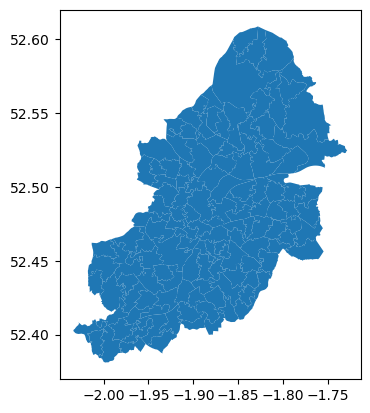

In [7]:
#Turn DataFrame into a GeoDataFrame
poly = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG: 4326")

# Visualize the map with all Middle-Sized Output Areas
poly.plot()

In [8]:
poly

MSOA                                           geometry
0      b1  POLYGON ((-1.82792 52.60789, -1.8281 52.60667,...
1      b2  POLYGON ((-1.81949 52.59995, -1.82132 52.59882...
2      b3  POLYGON ((-1.80284 52.60121, -1.80282 52.60121...
3      b4  POLYGON ((-1.85615 52.59822, -1.85562 52.59794...
4      b5  POLYGON ((-1.80364 52.57604, -1.80363 52.57603...
..    ...                                                ...
127  b128  POLYGON ((-1.92249 52.47853, -1.92245 52.47848...
128  b129  POLYGON ((-1.90874 52.4877, -1.90878 52.48751,...
129  b130  POLYGON ((-1.9051 52.48785, -1.90492 52.4878, ...
130  b131  POLYGON ((-1.87186 52.48025, -1.87185 52.48025...
131  b132  POLYGON ((-1.8575 52.46336, -1.85749 52.46336,...

[132 rows x 2 columns]

<Axes: >

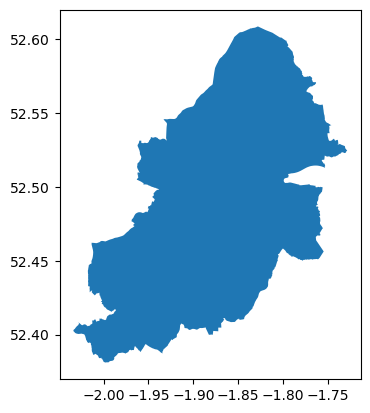

In [9]:
#Map of Birmingham as a single polygon 
p1000 = Polygon(b1000)
df1 = {"geometry": [p1000]}
poly1 = gpd.GeoDataFrame(df1, geometry='geometry'  , crs="EPSG:4326")
poly1.plot()

### Loading Population and Restaurants Data

In [11]:
#Load data of each Output Area in UK
file_pop = r"C:\Users\MyFiles\oa.xlsb"
sheet_pop =  "Sheet1"
alldf = pd.read_excel(io=file_pop, sheet_name=sheet_pop)
alldf["Coordinates"] = list(zip(alldf.X, alldf.Y))
alldf["Coordinates"] = alldf["Coordinates"].apply(Point)
allgdf = gpd.GeoDataFrame(alldf, geometry="Coordinates", crs="EPSG:4326")
allgdf.head()

#Select only those OA that fall within Birmingham polygon
all_w_birm = gpd.sjoin(poly1, allgdf)
ip_mask1 = allgdf.within(poly1.loc[0, 'geometry'])
all_data = allgdf.loc[ip_mask1]

In [12]:
#Load data of all the UK restaurants that are actively reviewed on TripAdvisor
file_rest = r"C:\Users\MyFiles\RestaurantsData2.xlsx"
sheet_rest =  "Sheet2"
restdf = pd.read_excel(io=file_rest, sheet_name=sheet_rest)
restdf["Coordinates"] = list(zip(restdf.lng, restdf.lat))
restdf["Coordinates"] = restdf["Coordinates"].apply(Point)
restgdf = gpd.GeoDataFrame(restdf, geometry="Coordinates", crs="EPSG:4326")
restgdf.head()

#Select only those restaurants that fall within Birmingham polygon
rest_w_birm = gpd.sjoin(poly1, restgdf)
ip_mask2 = restgdf.within(poly1.loc[0, 'geometry'])
rest_data = restgdf.loc[ip_mask2]

In [13]:
#Create a GeoDataFrame containg all population data for each Middle-Size Output Area
data_merged = gpd.sjoin(allgdf , poly, how="inner", predicate='within')
poly_pop = poly.merge(data_merged, on='MSOA')
poly_pop = gpd.GeoDataFrame(poly_pop.drop(columns="Coordinates"))
poly_pop = poly_pop.dissolve(by="MSOA", aggfunc="sum")


In [14]:
#Create a GeoDataFrame containg all restaurant data for each Middle-Size Output Area
data_merged2 = gpd.sjoin(poly, restgdf ,  how="inner")
poly_rest = poly.merge(data_merged2, on='MSOA')
poly_rest = gpd.GeoDataFrame(poly_rest, geometry='geometry_x'  , crs="EPSG:4326")
poly_rest = gpd.GeoDataFrame(poly_rest.drop(columns=["geometry_y", "index_right", "Name", "FoodType", "Address", "City", "lat", "lng" ]))
poly_rest = poly_rest.dissolve(by='MSOA', aggfunc='sum')

In [91]:
#Merge restaurants and population GeoDataFrames
merged_poly = gpd.sjoin(poly_pop , poly_rest, how="inner", predicate='within')


In [95]:
#Because of the fact that some MSOAs have no restaurants in them, part of the data is lost and we recover it manually:
dfadd = {"MSOA": ["b125", "b94", "b113", "b99", "b133", "b115", "b93", "b38", "b48", "b58", "b63"], 
         "geometry": [Polygon(b125), Polygon(b94), Polygon(b113),Polygon(b99), 
                      Polygon(b133),Polygon(b115),Polygon(b93),Polygon(b38),Polygon(b48),Polygon(b58),Polygon(b63) ],
         "British": [0, 0, 0, 0, 0,0,0,0,0,0,0],
         "Fastfood": [0, 0, 0, 0, 0,0,0,0,0,0,0],"Italian":[0, 0, 0, 0, 0,0,0,0,0,0,0],
         "French":[0, 0, 0, 0, 0,0,0,0,0,0,0],"Chinese":[0, 0, 0, 0, 0,0,0,0,0,0,0],
         "Japanese":[0, 0, 0, 0, 0,0,0,0,0,0,0],
         "MiddleEast":[0, 0, 0, 0, 0,0,0,0,0,0,0], "Pakistani":[0, 0, 0, 0, 0,0,0,0,0,0,0],
         "Indian":[0, 0, 0, 0, 0,0,0,0,0,0,0],
         "Nr_UsualResidents":[8217, 7587, 5812, 6684,5812,6202,6689,5531,9352,9239,8346],
         "White":[7151, 5856, 4637,5042,4637,4725,2882,3215,1417,1192,1303 ],
         "MixedEthnic":[449, 454, 275,258,275,327,235,443,326,365,322],
         "Asian":[149,489,512,882,512,744,3120,804,6456,6447,5497 ],
         "Black":[426, 728, 254,360,254,288,259,976,960,992,897],"OtherEthnic":[42, 60,134, 142,134,58,193,93,193,243,327 ],
         "Indian_Asian":[29, 77, 193, 310,193,212,564,50,228,197,228],
         "Paki_Asian":[55, 96, 77, 108,77,369,2135,514,4927,5062,3955],
         "Bangl_Asian":[7, 14, 17, 33,17,69,126,90,531,541,887],
         "Chinese_Asian":[19, 39, 94, 190,94,10,55,25,43,36,26],"Arabian":[7, 22, 84, 60,84,37,101,56,104,131,200],
         "Q_No":[2512, 2009, 1372, 1006,1372,1668,1207,1503,2578,2132,2096],
         "Q_L1":[997, 863, 573, 442,573,696,613,646,983,900,807],"Q_L2":[989, 935,723, 583,723,787,592,585,773,713,760],
         "Q_Apprentice":[155, 152,133, 129,133,126,48,76,47,48,66],
         "Q_L3":[699, 644,481, 786,481,531,577,410,553,513,510],
         "Q_L4AndHigh":[714, 896,1325, 2364,1325,775,2144,423,698,757,755],
         "Q_Others":[289, 288,249, 245,249,192,328,243,606,642,605]}

polyadd = gpd.GeoDataFrame(dfadd, geometry='geometry'  , crs="EPSG: 4326")
merged_poly = pd.concat([merged_poly, polyadd])
merged_poly["sum"] = merged_poly["British"]+ merged_poly["Fastfood"]+merged_poly["Italian"]+merged_poly["French"]+ merged_poly["Chinese"]+merged_poly["Japanese"]+merged_poly["MiddleEast"]+merged_poly["Pakistani"]+merged_poly["Indian"]

In [144]:
#Select data of all the French restaurants
fredf = pd.read_excel(io=file_rest, sheet_name="fre")
fredf["Coordinates"] = gpd.points_from_xy(fredf.lng, fredf.lat)
fregdf = gpd.GeoDataFrame(fredf, geometry="Coordinates", crs="EPSG:4326")
fre_w_birm = gpd.sjoin(poly1, fregdf)
fre_data = fregdf[fregdf.within(poly1.loc[0, 'geometry'])]

#Select data of all the Middle-Eastern restaurants
medf = pd.read_excel(io=file_rest, sheet_name="me")
medf["Coordinates"] = gpd.points_from_xy(medf.lng, medf.lat)
megdf = gpd.GeoDataFrame(medf, geometry="Coordinates", crs="EPSG:4326")
me_w_birm = gpd.sjoin(poly1, megdf)
me_data = megdf[megdf.within(poly1.loc[0, 'geometry'])]

## Data Analysis

Below is the first visualization showing the distribution of restaurants by city districts. The brighter the color, the more restaurants there are in the district.

<Axes: >

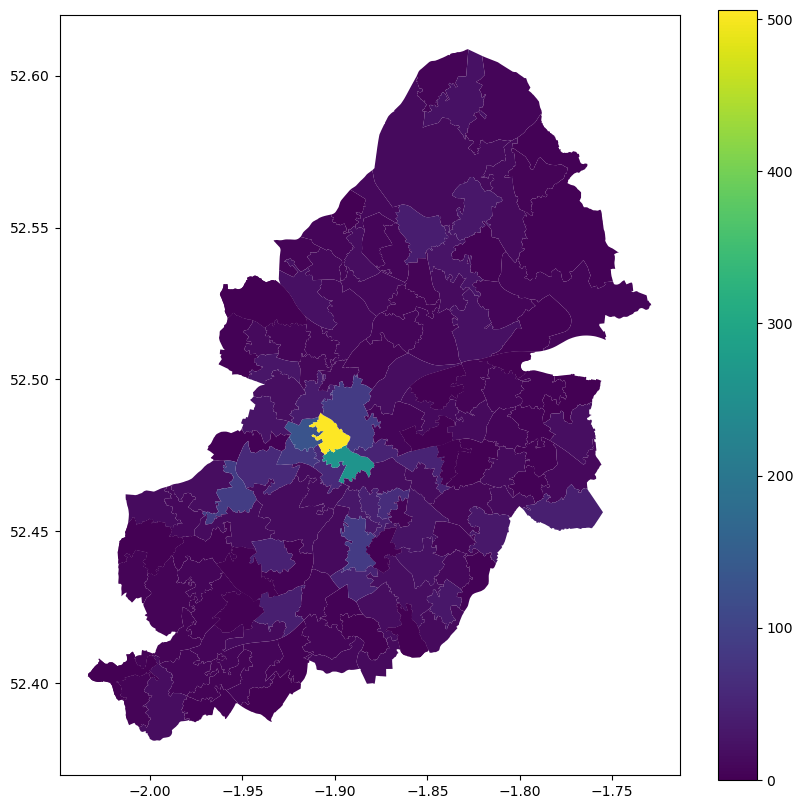

In [156]:
fig, gax = plt.subplots(figsize=(10,10))
merged_poly.plot(ax=gax, column ="sum", legend=True, markersize=0.2)

All the French (blue) and Middle-Eastern (red) restaurants plotted on the map of Birmingham.

<Axes: >

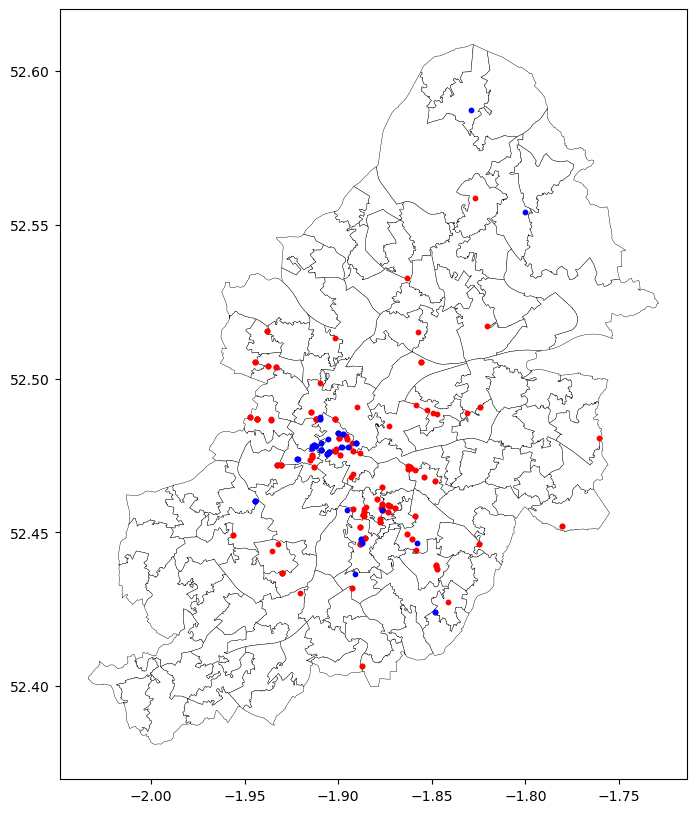

In [154]:
fig, gax = plt.subplots(figsize=(10,10))
poly.plot(ax = gax, edgecolor='black', color='white', linewidth=0.3, markersize =100000)
me_data.plot(ax=gax, alpha = 1, markersize=10, color="red") 
fre_data.plot(ax=gax, alpha = 1, markersize=10, color="blue") 

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(chitop_data["lng"], chitop_data["lat"], s=0.75, color= "blue")
ax.scatter(*mean_center1, color="blue", marker="x", label="top Mean Center")
ax.scatter(*med_center1, color="blue", marker="o", label="top  Median Center")

ax.scatter(chibot_data["lng"], chibot_data["lat"], s=0.75, color= "red")
ax.scatter(*mean_center2, color="red", marker="x", label="bottom Mean Center")
ax.scatter(*med_center2, color="red", marker="o", label="bottom Median Center")

#ax.scatter(chi_data["lng"], chi_data["lat"], s=0.75, color= "green")
#ax.scatter(*mean_center2, color="green", marker="x", label="Chinese Mean Center")
#ax.scatter(*med_center2, color="green", marker="o", label="Chinese Median Center")



# Construct the standard ellipse using matplotlib
ellipse1 = Ellipse(
    xy=mean_center1,  # center the ellipse on our mean center
    width=major1 * 2,  # centrography.ellipse only gives half the axis
    height=minor1 * 2,
    angle=np.rad2deg(
        rotation1
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="blue",
    linestyle="--",
    label="top Std. Ellipse",
)
ax.add_patch(ellipse1)


ellipse2 = Ellipse(
    xy=mean_center2,  # center the ellipse on our mean center
    width=major2 * 2,  # centrography.ellipse only gives half the axis
    height=minor2 * 2,
    angle=np.rad2deg(
        rotation2
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="bottom Std. Ellipse",
)
ax.add_patch(ellipse2)


#ellipse3 = Ellipse(
#   xy=mean_center3,  # center the ellipse on our mean center
#   width=major3 * 2,  # centrography.ellipse only gives half the axis
#   height=minor3 * 2,
#    angle=np.rad2deg(
#        rotation3
#    ),  # Angles for this are in degrees, not radians
#    facecolor="none",
#    edgecolor="green",
#    linestyle="--",
#    label="Chinese Std. Ellipse",
#)
#ax.add_patch(ellipse3)



ax.legend()
# Display
# Add basemap
#contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron
plt.plot(x,y, color="black")
plt.show()